# Detecting airplanes in satellite imagery using deep learning

## Table of Contents

* [Prerequisites](#9)
* [Introduction](#1)
* [Necessary Imports](#2)
* [Visualize training data](#3)
* [Train a model](#4)
* [Detect and visualize airplanes in validation set](#5)
* [Model inference in ArcGIS Pro](#6)
* [Conclusion](#7)
* [References](#8)

## Prerequisites <a class="anchor" id="9"></a>

The dataset we used in this notebook is downloaded from [RarePlanes](https://www.cosmiqworks.org/rareplanes/). **RarePlanes** is an open-source machine learning dataset from **CosmiQ Works** and **[AI.Reverie](https://aireverie.com/)** that incorporates both real and synthetically generated satellite imagery. This data is licensed under the [CC-BY-SA 4.0 license](https://creativecommons.org/licenses/by-sa/4.0/). We are going to use real training data that contains 5,815 training images. The images have dimensions of 512x512 and a resolution of 30cm. Tiled images have also been put into an images folder, and the annotations have been converted to the "PASCAL_VOC_rectangles" format and have been put into a labels folder. The dataset can be downloaded in the necessary format [here](https://geosaurus.maps.arcgis.com/home/item.html?id=9982c9a749f94f7797e82358a90527c1).

## Introduction <a class="anchor" id="1"></a>

The goal of this notebook is to demonstrate how we can use the `FasterRCNN` model to detect airplanes in satellite imagery. Airplane detection is a valuable process across multiple industries, as it allows for the identification and monitoring of airports at a global scale.

## Necessary Imports <a class="anchor" id="2"></a>

In [ ]:
from arcgis import learn
from arcgis.gis import GIS

We will now use the `prepare_data()` function to apply various types of transformations and augmentations to the training data. These augmentations enable us to train a better model with limited data, as well as better prevent the overfitting of the model.

This dataset contains multiple classes of planes, however, we are only interested in detecting planes and not classifying their categories. So, we will map the planes to one class using `class_mapping`.

This function returns a data object that can be fed into a model for training.

In [ ]:
data = learn.prepare_data(path="airplane_chips", dataset_type="PASCAL_VOC_rectangles",
                          class_mapping={**dict.fromkeys(['1', '2', '3', '4', '5', '6', '7'],'airplane')})

## Visualize training data <a class="anchor" id="3"></a>

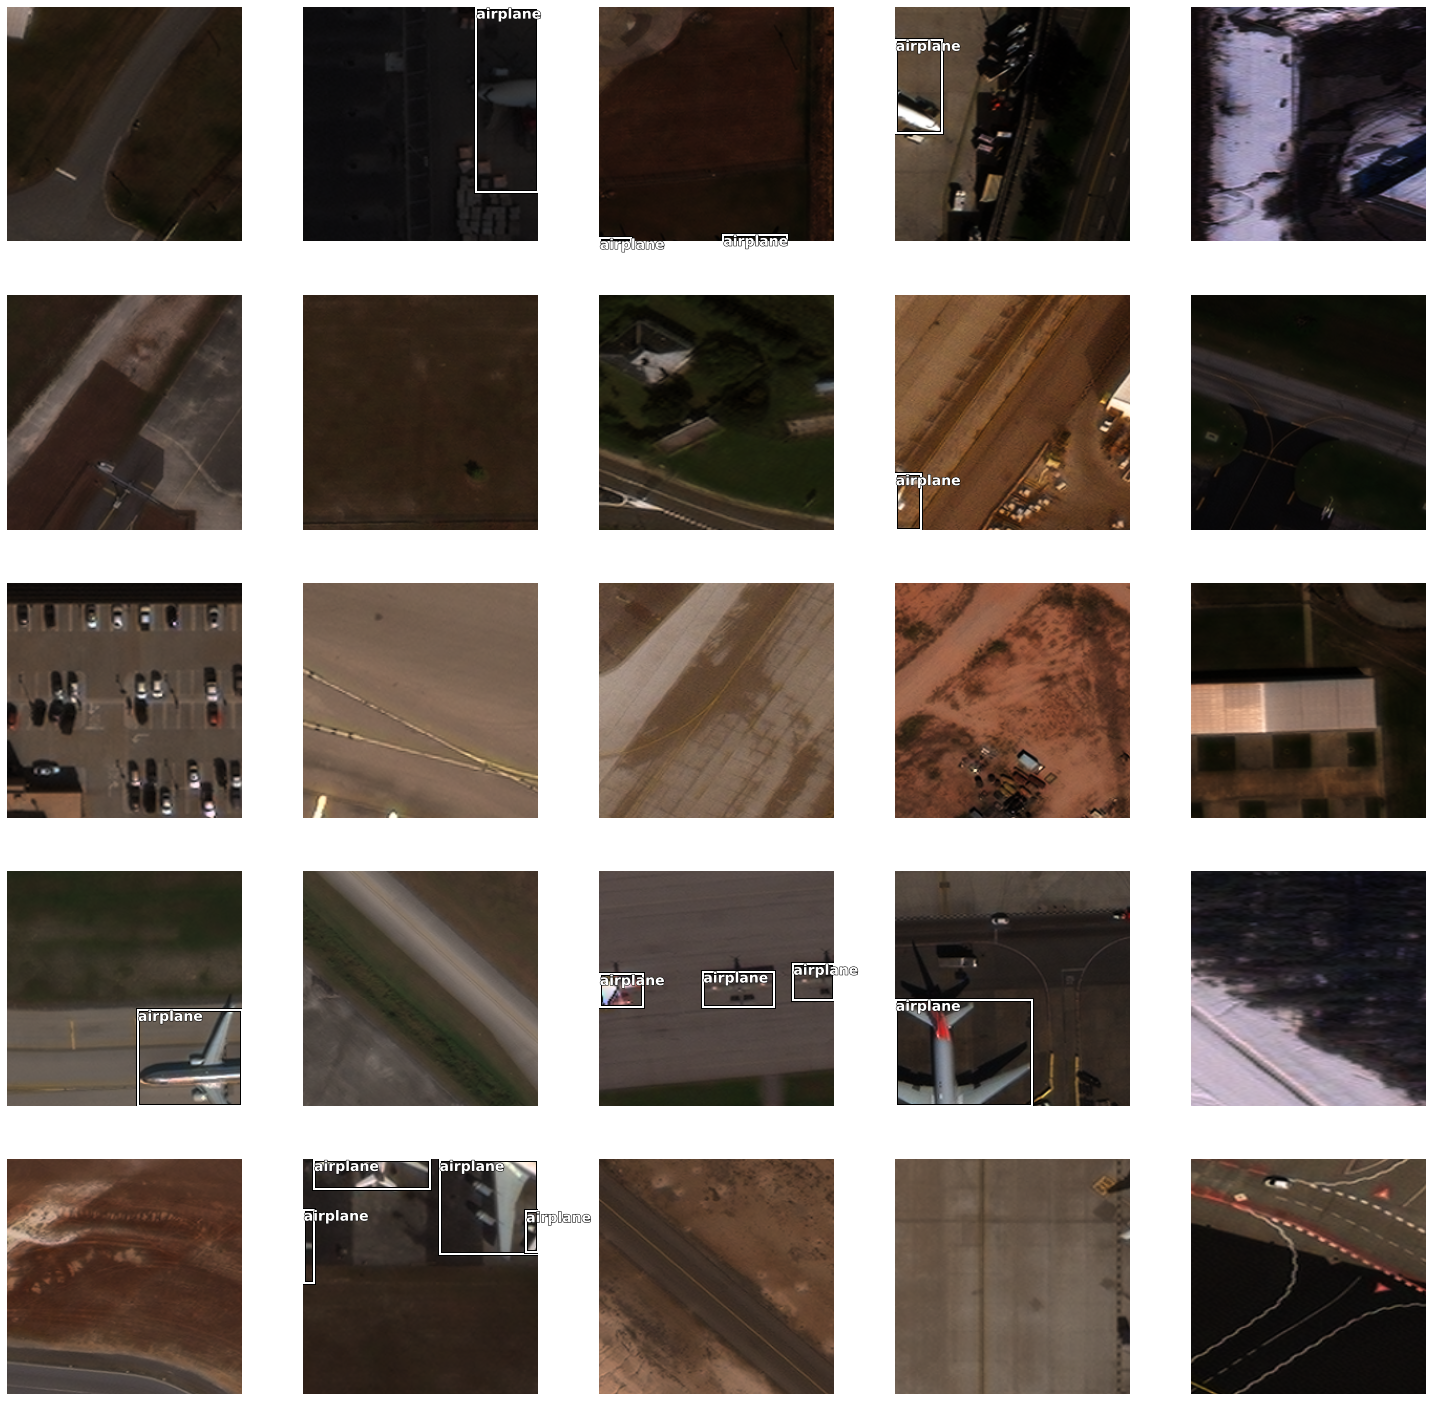

In [ ]:
data.show_batch()

## Train a model <a class="anchor" id="4"></a>

arcgis.learn provides the following deep learning algorithms that we can use to detect airplanes:

- [SSD](https://developers.arcgis.com/python/guide/how-ssd-works/)
- [YOLOv3](https://developers.arcgis.com/python/guide/yolov3-object-detector/)
- [Faster R-CNN](https://developers.arcgis.com/python/guide/faster-rcnn-object-detector/)
- [RetinaNet](https://developers.arcgis.com/python/guide/how-retinanet-works/)

Here, we are going to use `FasterRCNN`

In [ ]:
model = learn.FasterRCNN(data)

Next, we can simply call the `model.fit()` method and pass a number of epochs to it. The model will then begin to train after finding the optimal learning rate itself.

In [ ]:
model.fit(15)

## Detect and visualize airplanes on the validation set <a class="anchor" id="5"></a>

Now that we have the trained model, we will examine how the model performs on data it has not yet seen.

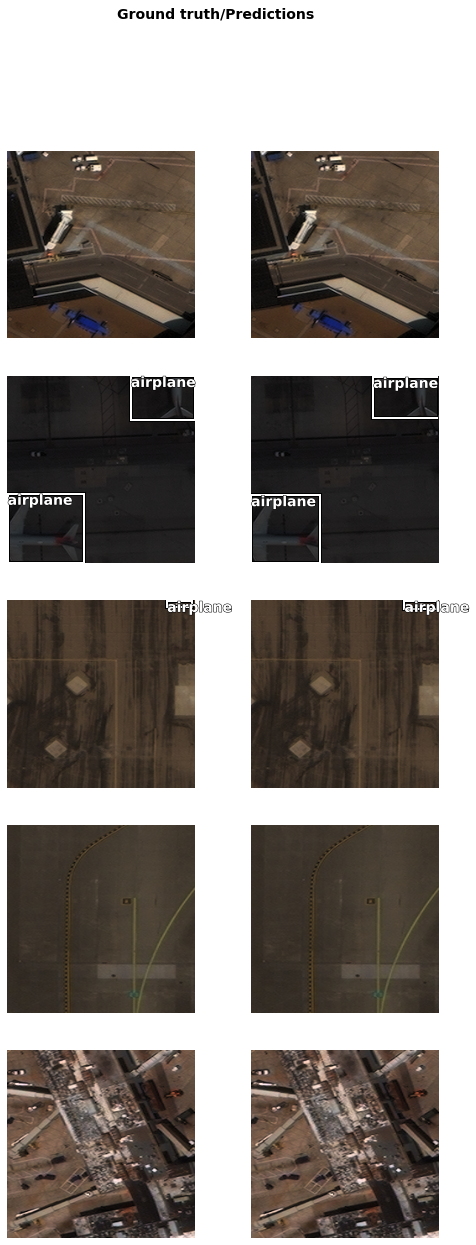

In [ ]:
model.show_results()

As we can see, with only 15 epochs, we are already seeing reasonable results. Further improvement can be achieved through more training and sophisticated hyperparameter tuning.

We will now save the model for further training or later inferences. By default, the model should save into a models folder in your data folder.

In [ ]:
model.save("airplane_15ep")

PosixPath('/home/ubuntu/airplane_training/airplane_chips/models/airplane_15ep')

## Model inference in ArcGIS Pro <a class="anchor" id="6"></a>

Next, we will use the saved model to detect airplanes using the Detect Objects Using Deep Learning tool available in both ArcGIS Pro and ArcGIS Image Server. For this sample, we will deploy the model on the Amsterdam airport region.

- Input Raster: Imagery
- Output Detected Objects: Detected_airplanes
- Model Definition: airplane_15ep.emd
- Extent: Extent of the region where model will run.
- Cell Size: The model is very susceptible to the cell size. This model works well with cell sizes 0.5 to 1



<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAAnkAAANVCAYAAAAEEOhYAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsQAAA7EAZUrDhsAAKDeSURBVHhe7f17fBzXfed5/6jEpuREtpzEsmQ2gTbsJ1HimzbRBBRIE4ITJ/sSrGTCVoghMUImf+wktE1gBJJCdpBnd2Z3+HoZIgkPyCicffaPJHBAGrSaWY3MmYkvC4EhISLjxLF8yWUsGJemZcvXRLZJybb4nN+pU93V3VXV3UAD6K7+vPUqse63blR/65y6bPnv//2/3xAAaBH33HOPXH/xRdcFAMl1k/sXAAAACbLl2vXrlOQBaBk3b91KSR6AlkDIA9BSCHkANtORw4ddW8Gx48ddW31RXQsAqIs//8gX5FWPfVW+6LoBhNNQt5pgpwHxL/7iL1xXgfYLC4+EPACbSg9Mpc3m+ra89383YaWk2fXUdTccADbHrne+U/7zE08UBT1t1346rBQhbx09M/V7cmT8k/IV1w0g3Ead1Vbyxae+aALdl0X2/px8798Hmvf9pMjXCHmV/Opv6r56vbzZdQOor1//9V8vCnrBgKfDSlUR8j4rU0dMWClpxj/+VTccADZHrWe1sT6/Im+fEfnA+35O/vAtrp/v9tfLpd+8zXUAwOYJBr24gKdib7z4ysf/o5z42Ffk7oc+IP1vdz3VVz4p45+8XYb73+Z6AMDqaImbX4rnl77VUqr3hDnIXTLB7tfcQa7SQS/8xovrcvKxBTn3lg65dN/Nrl88LfV7+8xLruuVJhy+WQZvd51G8XDjrW+Q7+WDYmF5fyy5wHi3yp/9++3yq67LzuPzt8oz970kbz/3gulTGB4/f8cE11fZ6Zzbf1KecSVtsev//Fdl12PfkL92ncHp4obpNXm/IYX10O7/83Ul2xicl2On+5zrMMP/7C0vyG/odlMqiAbz8Y99TD7+8Y/LjRvF0WnLli3y7ne/W979K7/i+kRb6zFPfUzXwzRKl/krEcuNLsl75qwJeCK/cqgk4Kk7fomAB6Ah1HJWG+n5f5Rzz79S9v5cdQFPQ4kNX3517t6t8nuPrcifB4fPbDWBzA3/9x3ygee/LK/6yLfdGJ6/nlmQfyWpfLXwn73VhJvSGxee/4a8/Qu3unG8gFfN/DXEverci7ZkMj+OC3Hx6/9tea8JcW8PVFn/Wb5kM25YuOJtfIP8K92ewHp6AU/Dq5vnb4r8n8HwCjQQG6h+9VflppsK8UnbtV+1Ac//129XwfZKtLZCA54e67TR9mBtRlBESd5X5ePjH5TPvu1hGX73612/eH6pn+cOEw7/jbz7DtdpFA837u6XY/mgWFjeftFw6Y/3Dnno2D7xM6adx2ffJod++Xk58aHPmD6F4fHzd0xwPWKnc+58txwa/iWzthXWX0suT3xcnnOdwenihuk1eR+Swnpo9yduL9nG4LwcO93fuA4z/KG3fVY+pNtdMh6w2ZrtrFaFluTZ0qkXZG9RaZxX2vZ7z7tOvwQqZty/u+/n5A9f55V0aRAqqvYtms7N+/aS0reSeXulbRrmCqV7fkla/Pz15hHv2sKyqueq1r90uBM6bYENbCUlecFulS+dtKV04etZPA7QePzLQtSqTiyN4LGvWv6xLnicC+vnCy/J+8rn5LPP3SFve1t1AU9DiQ1fxz4gx7R56PXysRNn5Zng8I+93gQyN/zYw/IrX52SI1OfdWN4nvvYB+WM7HPjfEAeuvsz8qHSGxee+7hZ1lvdOF7Aq2b+GuKOfOirtmQyP47bvPj1/6xMmRD3+of86cx65bNj3LBwxdvYL3fr9gTW0wt4Gl7dPPeLfCIYXoEGYg8qTXRWW5ubZdCVgj3T80rXz/jaS/LX8pL83mPBu2+9MPiM3pxhh98qv14arm7fao5XL8nffc11Gz//upKSw5Bx5PZXyptcq1XN/D//gvxx2Diq0vrf/nr5/77VDS8tVYwbFqF0G9/8uq0mLL4kz2pH3HoCDeyd5ljT8653yS92dq4q4K2Wf6wLhjlt9499paq48cKnpW2Bmy/88PWVT8on/uYO+ZX9gVKmt79LfuXOz8hnNSXZ4SJ3P1QokRN5vbx7/7vlzr/5pHw8mF/u7i8qOXz7L5lxnvusfLYo45gAFCyhq2r+n5VPmqB090PB0kUzTr9Z54rr/7zZ8jvk9sBZ69vf7caNGxalaBvfJr/0K2bsrz7vgqzZ1tJtueOXZL+OAzSoX/7lX5b3PPCA6xLp2rnT9quGnsX6TVh3JXoGq2fTGij1QKuNtms/HVY1F5DOfaHaO2gD1YuBptrr+TZf/Prbu2RN95/d/g15u4bAQPVq3DCgldx///3ym7/5m65rY+ixMSxUar+w42YNIc+EomGvdOlQMHQ8/7w8ZyLKx04EAuCRD8rHnjPZ5atfdcPfIW8rJDDPHbebOX5FB+fdGUxLKmQcM5IUjVXN/J/5nPxN2DjKTh+z/iZk/fLdbnhpqWLcsAil23jH603ge+55sZsYt55AA2uWs9pot8lwzyvlr2e+lr+uLtLrXik/Ly/IE5933aWihj//ojwjr5S7Xue6jb8ufSxLyDhlqpl/3DpWWv8A75EoPyk//7mvy8ngcdiIG1Y1uy4vyt+XTP/s17gmD8lX7cnsWoSHPBeQPvvZah+TEqheDDTVXs+3+eLX/+39XvdDr/+4nNAQGKhejRsGtJJmOKuN8+b7UvKB21+Q3/jfvxgfWmyVpcgfnyvcaGGvafuIq76MHP4N+eu3/lTxtWyf+7K8Nx+2IsYpVc3849ax0vo//1V5b/DBz7Z614kbthq3v0b23v6S/J6/bPX5lcKdtgDWJKIkz6tGfO5j/2/+urpIt98ud4qr2gwTNTykqvO5oiI7I2ScMtXMP2ocFTeshA10h0KqmY24YVWz6/JV+WrJ9M8/v9oZAs1jI85q47lr8OydpnqdWqGxz8/7zcJNAFqKZe+EzY+zIOde95qi4c/0vFg8/C0dxTdZGD/f8wa566nCOGU3YkSoZv6h47h1rLT+z8wsuP6msXfoFm60iBtWO93nHfIBcVW/2nzh1uJrIAGsWmR17R3v3mevS/vQkf8YH1pslaXI33yocKOFvX5vylVfRg0/83F57u5fKroDV/5mSqbyI0WMU6qa+cetY6X1/8onZSr44GdbvevEDVuNO94qb7vzK/KxM4Gq32fOFu60BbD+3rK96Do1rykPMhqUguOUXo/35vveHDvcU7i5wzYlAc/OI+IO02rmHzdO5Prf/nq5FOhftO1xwww7z5KgWbZedv8G7hausA8ArF7sw5Ct0seOWOWPSPHuCnUdxp2/Uvz4ldJHnBQPN6HKPkKlX9722Sl7PZxV8hiU/CNUQh4lEj9/T9w4ketvglzRI1KC2x43zLDzDHmEStF62f0rUnhUjLcvgvvg0O2fjNxuALUJfxjyRruefxhyePhrZewboF4qh7wN4Ye88mCG+HALoDaEvEai++Fr8jPvK3nLh3293FqqgQGoGu6uxeb4qnz2s1+RO9/2VgIegIS5We5/S/C6Qf9NHgQ8oB4IeQ1FSzSD1wZqKd5Z+VgND6YG0Ay869Cojiy/brD4ej0Aa0F1bYMpvW6w9NVuANamMaprAWD9NUjIA4CNQcgD0CqorgUAAEggQh4AAEACEfIAAAASiJAHAACQQIQ8AACABCLkAQAAJBAhDwAAIIEIeQAAAAlEyAMAAEggQh4AAEACEfIAAAASiJAHAACQQIQ8AACABNpy7fr1G64dABLv5q1b5fqLL7quyp577jn5H//wD5LL5eTLX/6y/PCHP5Q77rxT2tva5I0dHdLe3u7GBID6qcexh5AHoKVUG/K+//3vy3/7b/9NnvnMZ+Stb3ubpFIpecMb3mCH6QFXD7xf+Pzn5Y1vfKP883/+z+XmW26xwwBgLep57Kk55HFWC2Az1OvYU03I02VN/smf2HnGHUSDB+P9/f32oAsAq1XvY0/VIY+zWgCbod7HnkohT5c3fuKE/PK73y2/8Au/4PrGe/bZZ+VDk5Ny5JFH5Md+7MdcXwCoXtyx58knn5RvfvOb8lu/9Vuuj6fSsaeqkMdZLYDNsB7HnkohTw+m3/3Od+Rf7Nvn+nguXLgg/+8nPym//du/bcNmqT//8z+Xr3zlK2UH4dXIZYdlaGrRdRWk+0/KiUzKdTW++Yk98uis61DpfpkYz0hwC3Scc6n47fLm0y2PnB+STtdv4+UkOzwoub7zMlS6EvMTkplOlW1bqY3Yjkb/7th9ICOSLduJm6MxvlueqGOP+v3RUfvvfzh61P4bFHfsqXh3rR489SCryVIXHHeW/IpXvEIeeOABO96f/PEfy3e/+103BABqE3fs0YPhn5hhvnodezRUalDUQBn0d3/3dzbg7e7uDg146t1mPb/2/PN23LroNj+E588HmhFpmxqUzJ4JmXejVEUDyHDWRJQ6qWp+8zKxx/x4LplQF9iGR9qnZKjW9Tc6h3T6Ov0I13t/1KCu2xGnXt+dFrBhn0kFUceeasQdeyqGPD071rPo0qJDPas9NDwsn/vsZ12fgje96U1yb1eXPP74467P2uiZScYcMEqbQ9nN+DNdPT1jKNqGkAONjlNpu7z5bPYfq57V7pGJsJWo8iC6EdvR6N8duw9Cd+LmaIzvlifq2KPmr1yx1+eVWuuxR+epIS4YKP/xH/9RzkxNSWr7dhsko9x0001yzz33yN///d+7PvXWKUPnT8r+9Kw82kDfmTDzE2NyMaTUTn9QH+lu/PVPnub57rSqsGNPteKOPbEhj7PaKnBWu2qc1TaepJ/VVqLX9+k1f76XX37ZXu/y0ksvya/92q/Jt7/9bXtdTGnje8O2bbKyvOy61kNKMn3dIrNXir67xSczw+Kfw9jQPjYrsqjHmuITiqhpfKUnSDpp3PwK5uWKGWV3X3jVZWemX9Kz0/HLKzkm6XJLT8zquv56HMyPWz6vmkXMr3g7/BNl79+oZdt19udl9su8blfofq+ktu+OL264vz1xn12tYtcnl5VD+WGly/L3p/d76x3fK+/jzf1MCkqPPbWKOvbEhjzOauuDs9pGw1lto1uvs9pK9EYO/6YO9cQTT8iXvvQlW3X8h489Jkf/w38IbXxt5rio81hX21KSliXzo+B16o/i0OWdhRPIkXY5M+idwNjQPmJ+2PX4o8PcdVBx0+SHT7XLI/7wk/322BU1vyLzV+SidMuOqDMF80PWJouSu+q6jUVz0vVBMT+mdnnmb1NMCIv526zr+mtwGFuS/SfduCM7vZmsVo3zuzg2LjLsjftI96KcGS8EFw0TRYUDfTl5NOR6u6rV8N2pZriq9bOLU3F9TPjq8vdrxLKWp69Iyo5TOFmN28dhNvQzcYLHHr0cpfQY8+KLL8q1a9fK+v/pn/6pnSbq2BMb8jirLSgeXuGssAhntVHzK96OjT6D4qw2bJ6b+5kUrNdZbSUa5vT6vtXaYgKmHifXlQ1JvnnJTonsHw4cXzoz9gTmSuRHUGkaHb4ou0cCJbqpjGSiQls9dI8Ebgowf5vD4cdFz3qsf7vuVo+Z19rvT6h+ful+8/fihtvfg8WcePlXfzvSJds5ZEKHa1+Nmr47lYY7NX12cSovL5UZCuxLdwxfMsdc18faWb6/o/dxuA39TJzgsefrX/96Wa7yjyul/b/61a/a/lHHnh91/4bSVNjzrne5rsJZrdKz2ignxk0KNjburPayPTPpNHtdfxS9M4Fx70PQgGHOBFKa6vUsbofpLrkLKnYaf7g9Kxz3DhrmxzVrPvGo+RVxZ7WPRB1g7B+dO6t1M7BnRv0nzVmC9tAf2EFztpKKvBuprusfOAu1X/J5M672X60a56dnUPYM2Iyr4eFRcwbV6dbNdtszKLeuup1j5gxqtX9gtXx3TGel4arWzy5OxfVxZ7Un7MDwZelZrT3zdePowTBuH4fZ0M/ECR579KxWq26D9KxWD2h6JhvUnk7Lv/yX/3LVxx4Nh1++elV+6qd+ynbff//98uwXv2hPaH/3d39XXlXh8Si6zNffcYfrWifmC6vx1dvfenwx+3twj5zR7oDd7t8ylaapdMxaB+nUNtfmFIWREvVe/1SndKWn5NE9syYYhtw5W6sa59eWT4M+r6St0/y1LpuwuKNk8LZUWv+UV6eW706l4U5Nn12cKpfn/Z6Z8XzpftfiKd+fMfu4fFRrQz8TJ3js0Tv4S+mxTkOdn69KRR17YkvyOKvVDh3OWe3acFbLWW1t1uusthJ9sPJSoARw69at0m9Co87rv/7X/yo/8RM/Edr4tPQw3b7OD4S/mpPF9M7AD5Q+/sGE8JImPlysZpoqlVQJlrFBIy2l2aA29Vx/87czbqY/2S/LY1oiXVwdWWo5csN8tc0vkn7OrrVuav7urOP3JFTc8rxaCe/E1w3TqveNtB6fiVN67KlV1LEnNuT5ydKnZ7V33nmn3HLLLfLwww/L6O//fmjj28izWsudCZwxZwL56qM9g3Im7lOpNI0dHnN9yTpYzVlt3dbfnoXOmrNQr0p3zWqcX9QZlPc5B8KiY8+gVquW706l4U69z2orLU/PavPDteq9RC1ntVE29DNxgscePavVs9dg4wer0v6HDh2y/Vd77NE3Z+iDlTVk+vSY9xtm//o3nMV55plnJJ1e+/ZHMz905nPOX/5RKVCFqTTNauYZZE4i9+p1TNnwP/h5c/ay2N1XdPKxGLxAT9nvf/l3y1qv9TfrfcJdq3su9KwsJZ070+XraszrNTntqcLJjqo4vwoituNqruQgULUavztV7seaPrs4lZZnBixrCAzUOuRyS65tg9T9MykIO/bUIurYExvyOKt1g9eiqi8uZ7UVcVZbsjzOauOs9tijj2zRRh/fEvTP/tk/s40e9/xLVkpdunRJfuRHfkT+p5//edenzuw1mGNysXuk8J3zA9Vg8O8qJ9mJkmtBg6W1laYJG66XeAT/cCuU/nYOjcju2bGyazNt9b4+eLb0j8aMWxjVCyPp/kyh9iGo3us/P1F2Ahp2cqRSnTslXbSuhpn+US3R9qtHaphfLHuCbLYjeJOAXZZrr8VqvjuVhvtq+eziVLW8wG+p2aYPBqttN0I9P5MSUceeasQde2JDHme1xmrmGeR/cTmr5ay2FpWWZwZwVhttLccefWyLXgOorwsK0gctHzt+PPRtGs8//7x84uMfl75/8S9cnzrQkOSX0mozmJO9GuZLApJeW2vv0s+POyhz5sco/5Vz1fx2uPs1rjRN2fDBy+bz9geWz6+cu4N9qXgb7JsOAtew+tL9I5Ka9sfzwkjc2xnquv7me+ydgLr57DwZfeKmx7H8Catr7DXH44VjeC3zi6UnyGYf6h2k/rKu7JCJ/iq+13X67lQarmr97KzS9XM3jcUuz+z7h/vFhEA3bFzk4Y0+sV3LZ1KFqGOP0ieaaA1HqYrHHn2tWVzzR3/0RzfOfeQjof3f//733/jC3/5t2TBtPv6JT9wYHx8PHVZr8z+m3nvj/rHZ4v5fnLrx3vvvL+v/1Jjpd//Yjafy/b5440/Hpm78D797dqxkeOVpyoabZf/prGsPmV95M3vjA1Wtq9/v/hsf8Ofvpn3v1BeLxintrtv6m+7Css183htcl5LGfQZFw+383nvjT79Y6I6aX/F2hCzLzt+flzf8/veWfpamX+l3I9DU87tT3fD4z660sdNErH/s8or2jd9txs/vn5D9GdavZD66zPX+TKptoo492vz+7//+jfe+972hwyode1RY/2Dzuc9//sbIyMiN/+eJJ25893vfCx3Hb3R5Ou78/HzocJq1N8Xfy9ZuGmlf8Ll4TT33Q72PPRXfXXv92jU5ceKEPYvVp8lXQ5Ol3n07ODRUVH27WmV301halVV+Rqi8KgHXYRS/sy9n70K01zaZMw7/zCZ+mtLh6cCZW/j8ygXG84WMr8s5lxqRrstjhXFLxvPGiVu/Nax/JieHBqfy1XAV33eo1QCB8YvnbZQMD86veDu89Sh6L6Sd9rJ0ha2rMus7kZqWoVxf5H6v73cnfri3PfGfXanS+VmBZyrGLa9o23SavpwM5e+UDtmfVexjbxvW9zOpVtyxR19ppjdk+Nfg+ao59lR6d61PX42mb87Q5fyze+6R7W1t+edY6TV/WiWsJYZaTaJn0fU41iFE2Xeuhc3r3esSefzaaMXHixa1Dp9JPY89FUOe0qJDfT7evV1d9mny+rDRKFo3rEWHe/bskbe/4x2uL+qJP6yCRtoXfC6eeu6H9Tj2VBvyfHppij5YWQ+seoDVa5L1pg695k+rhNftGrxWZ388vTOcujzapAnp31LxSWD0CepmaMVj3kZ+JvU49lQV8hRntQ2Cs9oCzmobT4Of1apaQx4ANKuqQ56Ps9pNwlnthp5BrQZntaqxz2oVIQ9Aq6g55AFAMyPkAWgVsY9QAQAAQHMi5AEAACQQIQ8AACCBCHkAAAAJRMgDAABIIEIeAABAAhHyAAAAEoiQBwAAkECEPAAAgAQi5AEAACQQIQ8AACCBCHkAAAAJRMgDAABIoC3Xrl+/4doBIPFu3rpVrr/4ousCgMa1/O2XZPkfvy9f/973XR/PT73qFdL2GtPc9krXJxwhD0BLIeQBaHTf+/7LMp/7rlz9px+YpHaTbNmyxQ3x3LhhotuNl2Xbq39UOlM/Jq96RXjFLCEPQNNY61mtIuQBaGQa8C78wz/K1773srzxJ24xx7Wt8tpbXiHfuvZ9eeHFH9r2H7z8sjkevihf+uY1ed2rbpLen35NaNAj5AFoePU6q1WEvCaSy8qhwSlpGzkvQ52uH5BwGvD+9usvyX0dt0n7a2+Wb37vB/Kp3Avyte++lA95b/rJm+We1K2y9K3r8tTCt+Vnf+qVNuiV4sYLAA3NP6vVg95P/vhW+Z+2/bj0vOk2ufsNP5Y/0Gk/Habj6Lg6zdrMy8SePZLJN8OSzblBDUnXdzPXMSfZ4eD+8pqJeTcYVi47bPbLhPm0gHBaW/Gpq9fyAU/9xZf+UWae/bYNeG949VYb7D72D9+SL//Ti3YcHVen0WlLEfKajvfjw8ETrWLmSy/I0j/+QH5x+6ttoPvRm26yB7yP/49v5RutttBhOo6Oq9OsXVr2nzwv2fPnZaJf5Mx41kQZxOoesfvLb9Zc+pbKyIl6zAdoEpeWvivpn7glH/CUluL94OUb8u7/z2tto8e6b137gTz7jet2uI6r0+i0paoMeWFnaY1+ZuvZ/DOn0hKBte67Thlq6oPeZpc4oJnU+6x2tVKZPtm9eFnm/e/t/ETR33ThpMt9v+ezckiHDbtgWO34/rDA+MUndMFjsfs70irNPWNyURblzKDpn58gZFyrmnWs5zHTOwYeys4X/Y54q+nW0V8HZ37C9bPb5o/rzydr/y2sY+nvU3Dd45atSuepje6r4nkWfwbeNP6wQ/kdG78s/S0amlo0bbPyaGA67zfKHz/4OaEV/fVz3zMh7sddl+edb3yNDXdv+slb5JZX3CSvvvlH3JACnUanLVVbSV7gLM2e2Q7yhaxOoUTAa8Ylk3KDAESq91ltfZgAcCUlE/7f80i3XBwLBgsTtqZFHtZh4xlJ1TK+HWZ+7K/sCB13fmJQzrS74/DJnTKnpYu2tGtEdvvHGXcGGDquHaJK19EElDGRR7TbNkPmdLK+FqfMAod13idlf1rk4rSuT0oyfd1mYCBAm3W5MmuOmjs7zdByi1M52ZFfRw1jZjulP79/H+nWEBXcv1HLLijMU/ejhuVByfX58zPj5z8DXZ4J1P5vofl8FqcGi0Jg1LJSmXHzu2l6SLfdzyf0R8AE66EpKfw+jOy080Dr+vr3fiC3/3jxDWS/8tOvtY3Sk1k9Bt669Ufs5So+neY7L5VfprLq6tpU505zSFmU3FWv25555c9Gws5uis++qh9fm9WdWUWdOUWNH7Wu63empcsz8ys9i9chZv8U1svQs2x7tuumsYNKpg+cDRft36Kz5OhlRg6rpVTBiphPVInDupUgoNnV+6x2tXLZabmY3imdNnWYYDKkwcjp3GGCwZKYQ5RjwtZwYHgt49thpjvjIlbRuBp+AsNSndIlwXAUVGnc0nVUwXVapdmxyL/ldL85jtoFpqRzpwk7izmxPx92Gxdlzl+5+SvmGNEte6POhLt3FAKoOcacWSzels5Mv9m6WbkSWHjksp10f8bNc5ukNIel+8XfddtsD7dv/OXlP5+MDXLLgR1XaVnlCr+jOr+ozQY04GmtxfPf+b69LllrMiqp0zV5OXM2WSjl0zOfxals0R946dlX9eOv/swq9MwpZnxf0bqu+5lW6Vm8t12dO8x65f/y9bg3G3FmW3pGrj9Iw/LoUuDMtn1KhorSWfgyPaXDzMG6llIFNyx0GaElDiYQrnMJAppXvc9qa2O+w3oyYgLL0FS7POL+vlTxiZ+euMSrdfxohXXK7DF/f3oOG6mWcfUykD7JufGLDhe1KLomr9q/5U4xhztZvDxvjx96rCsKciXSqW2ubT2kJNXuWp1UoEcut2T+X75fg8fqmnQO2d8oe5zV+a16x6MVaMD7/Ff1xPdW2dH2ate34PoP6liSN5+dMl/1btlh/xLNmap/ZmNoQCk7Kyz6o608fj3PrIpUM37ZAWatZ1rBg4I2wVAVOAsNnrVr++wVN56elUed2Qamt+bFfDTFZ7ZDJljl56UilmmVDgvuq+C4NZQUlC2jVNwwINxqzmprY77D+cssAoFFT/wu7yxUv9oTlxi1jh8ruE7axF36Ucu4yrveV9dPxoIl8+vP/gZola05Pp8zGW+398OyBmlZjyzoBb7S/WqaNVwkrYURdh7mZFhLQotqcNByfupVP2qOaeHXE2vAUxrwXvEjxY+R0ml02lK1hbxAUfyjJnQ8UnLgy4eYMfNXWqLs7KvC+AX1PbOqZvyida3LmVbpQaGaM1w9u3VVDlp9EXNmW67d7CPXmrceQaqWkoIodSpBQMtZzVnterBVua69GrWOX6DHBPM3l63mj6SWcUvpiXXgxHYj2BPBRZmbvmz+7xceVMGepJvtDNQi2AKIfNV6nbn1LNqvJpjWlssKx+JcdqIw7baU+aVAq/v5O18ln8p9x3UV869D/omQMKfT6LSlVn3jRemZrQa13SNumJ6RxKl1/Bi1nlmt5kxss8609Oz2okl5GkxrO7MNC3RhwW+tai0piLJ5JQhobPU+q60LDRYyJUP25GaPfFB2xpfM1Tp+DK9UPnDdW/56207J2JvhTD93phQ9bhi9jtaNZ07Y5naeXN0d/MHlmab6Y6Wuf1oWFxcDtTjVSElm3GznYmH/2ktVAlXr9WWOVSf7JR3czmnTt8qF2bu03cmxt2+WCifKgyacmt9Y77IitKpd7T8mi9+8Zp8aUC0dV6fRaUtV+cYLvY5t0Lv+KuQv37vBQa9b837k9aL/R7Uqz3brwWNMlvtP5r+8tY5vhwf/cG1IXCoa315j56+bnllt86pVS5dlBsaMH7auEzLfOeRN656+LoHhlek8pyWVX35Q6bDw7uV0u+wd90N1cJzweZfuL9st/vbGLTNuWHl38XyDallGkPc902svQ75maEFnPvMt+b45F73/rp9wfQq0JE/51+cF/Ze/+6a8Ql6W/e8oH8YbLwA0Mv/h71pqF7wM5ciFBfvvsd4O+6/akDdepDLDXpG5OyO5IvElc7WOHy/+zKr8zKnWM7F6nGkVttVvqquW9KpcFttrqao1Uw25my3csmzgW4fUVFtJga+0xEFDn5t+LSUISKR6n9UCQKPreeOt0v6aH5W/XP4ne2OZX5vhV9cq7afD/nLln+y4Ok0Y3l0LoKHV86xWUZIHoNHV633dhDwADc1/d+23zaEqddvN0nbbVvuIlGB1rZ7V6qvNvvTNa/K6V91kA17UQY+QB6BZ6Jt7lv/x+/L1733f9fH81KteIW2vMc1txY+YKkXIA9Dw6nVWqwh5AFoFIQ9A01jrWa0i5NXfLf/HX7o21MO1/+0XXRuwNoQ8AC2FkFd/hLz6IuShXqoKefwBl+OPEGhOhDwAraIuj1ABAABAY6G6FkBLoSQPQKugJA8AACCBCHkAAAAJRMgDAABIIEIeAABAAhHyAAAAEoiQBwAAkECEPAAAgAQi5AEAACQQIQ8AACCBCHkAAAAJRMgDAABIIEIeAABAAhHyAAAAEmjLtevXb7j2NZqXiT1XZMf5Iel0fTaOLntMLroutXvkvAxt/IoAaHA3b90q11980XUBQHI1UUmeBrlhyeZcZ5m07D95XrLnTTPSLRfHJswUtaq0DABAPeWyw5LZ447Xuawc2rNHJmo/eAMIkczq2s4dsluWJEdYA1CDZ5991rUVvPDCC/L888+7rhAumGTyTe0nikVBp06qn6ee3AbXf48cSsCZ7nrsU6DZrFPIcyVi2YmQg4YbNl84MJYNyx9f/G79V6tjF+XMoJmm0mne/BW5mN4pnSnXOVE4eBWmzUl2uNB/Yj5iGUUHcP+A4a3XxAQHESApLs7Oyh8+9pg88cQTro8X8LSfNmFBzwaJwSlpG3G1CLYmod0eQ5qiNGpej9Fjstx/srD+J/ulzQ3ecKmMnDDrwKU2QH2sY0meCUu5Hfnq08WpbCAMmWHTIg+7A4pMjVc48+2UofMjstuvkg09ArhwpmHsilnueEZcxpPOIXfw0nnMTnvLMiHzTPtI/sA21Bm2DBPmBi9LV74aWORcfkUXZTllAuimXIMIoN5uu+02uemmm2zY06DnBzwNd7fccottis1LdmpR0iYgFR2SOodkoj9duGQkpAoyWMqk7UNmPiKz8qgZzzvp1RNJbc/afwsnozq1sap5ljLLGJu1638i4x8tDRO0hvLdxSfD5Se1ccNLt6F4f3jjB0/qjaLt8qc3+7nohNyOaRWdwNtxvZlFb783z9Lxlbf//GEl6wU0qXUMeSYsZdyRr6z61AwbdiHMHFD2di9K7qodsAYunJnQmJ69EjjQGPZsVf9wAzdnbEuZ8caK/sjLmBVeDoZHc0BczK9oWrr8okIATe/t73iHPPTQQ/mgN/aBD9iAd/vtt8t73/c+ufXWW92YjtYYRBwHUql28//qLhlJZcZtKBTplkfMyWQwcC1O5WSHOxF9pFuqvtY4bp55Mevv0QA3KGekXyby66ChyV+HSsM9hW3QE2ITsganZLHbP8HuMzlMw1i0xalpkWEd96TsN5t0cTprlqxykksVTtR1//iFCeHbr+trfgP8ZdvCh0EvNJrfiKEpCVzXvdP0BJpfA1yTZ/5Ql1xrPZjQ+HD/UqHETc8Mx8T+ofsHCctVCzws4zbABc8Oi3kHCf9AEl6KCCAJgkHv2rVr0QHPyNkDV7sJdF53ET2JNCeIaz15Tfdn8jUFnRlzAiuzciXyWFWb2PVXWtuxGDghN4rWodJwX/eOQm2HC5b5AgAzJGPDWLR0/7B4GTUlnTvNuIs58XZrSjL5+WhZgkl5ccHaX9984UPG/h4s5ycIfF5mWFguBprNJoW8RZmb90PYvMwtdssO+3e3TVLpwB+aPSDULpXpkza/CvhqThbTKTNnwy5LWwr8M77CH3qAOfq1mQNWoYoWQNL5Qe/OO++MDHgqtrROjzsmzKTsgacx1VLauBbp9dwJ+Voar6YljhdqAzUzewZN6NPMaH5w8lXsblj0WT/QVDYp5KWlLeeVoHkXLfvXtZkzsz59/In7Q7sistv2V52yo9v9gVb8A9SzQ5Ez41nJ6dmaTMmQzm88J23+SWPg4DA01S577Wlb6TI6ZcheMziYH5c/fiD5NOgNHzoUGfAsexlK4IQ1oKiUzJ4sBkuMNAPGV1GGssHRqcc8XWlj2PrHqxReNyjc6jHcBDt9Jqpf/RrHC7Xusp6Q2hk94c/Pp9KlPECTqGPI0xsX/LCm7SbE5Yu7S7sDf1CmKb1oufDHN1Q0Xf4GirIq04j525svTHAcd9ONm/mNu/GCywncPFG2DFetmx/X9i9fHoBk0SrbeF5VY/66Lp+9vmvRhA//uKI1FCKLl+fdtWTzciW00Km8VK1ww1pOstNmonS/eLWNq59nnr20JWT9c1mZ0IBjqzPNSa+eLLtB89kpWfSfXFBpeBgXjM9k/QV6N6+shhekC4FyPnQHBLa/bNnGfNbW+OSyE4UbLWz4BZKhAa7JA4DmZE8m7cPXXUm/NmNLtrSocC7q1VCYNOXVKOy5IqmS69D0EhMbQAaL7/hMm8nO2Wm0arFbHsk/NWD18wwKXf/BKTNAl6InyCOyO7+MPfLoUr9MBNchdngYc4LsSsq85ZWvd7VSmWEvZLrq1yti5htQvv1m2fbGPH/Zppk2fe3KLuXno9uvN4aE3qwCNJk6vtasWnoL+7SkTlISBmDjNcdrzfQ46T2/jrABYLXqFvI++uSTrg0Awr3ngQdc2+Yh5AFoFXUNeQ8++KDrAoBijz/+OCGvaoQ8AGvHNXkA0HD05q6IhxgDQJUIeQAAAAlEyAMAAEggQh6AhvGDl74mz33hiCx/6sF8o93aHwBQG268ALAhKt14oYFOvXb7b8urX99r29U/ffWCfGvlj1xXubZ7Hndt1WmOGy8AYO3WuSRvTo73Hjf/B4DK2k1gCwY8pd3aP6wBAESjuhYAACCBCHkAGp53rd5hWfrUg0WN8q/dAwAU28CQp1W3B2V6bloO9vZKr2mOz5kD9PRB267NwellN64Z+7jXzzY6om+5MP3B6Wlvnv5kgWG9+Wpib7nHj+tyDsrBg95y8+aOS+/BaSksGUCtnnrqKenp6ZEtW7bkG+3W/rX6xuJjZWHu6jMH5KXvRb/I/uZb3+LaAAC+DS7JW5DJsyJHLlyQC6M9MnO0V47JEbnguhcmz+Wv3+s6bPpp/wuj0jNz1gU5E9gOTEr7qDfsiFySGTu20mGXZNdpN92oyNl8+luQpe26nFNyap9Z7lwh5c3NzUjPvj5pc90AanfffffJ6dOn5Y477rDd+q92a/9avPzD78p3vl74q67WVkIeAJTZ4JDXIQNHXKDq6pIe073rXhevbPeSrPi5TEvYbInc0UKQW16RpY4B2dvldbb17TPTODpMQ+QBV5J3dEYWVnJuYMlyZubypXxzS4X5AVi9u+66S2ZmZuTuu++2/2p3rb7z9dpL/tSmhrz5Ccns2ZNvDmX9404jyUl2uLCOmeGs6bOe9LVsw2J3RS4rh/z2jVT0uUyYNQJaT2Nek6fVrkdFRm1J3mkZ6HD9K+px07jmcFh665K9A0u2lG95+qws7bqXUjygTjTYffrTn15VwFPf/UbtpXhq06prNUiMLcn+k+cle16bk9J1ebDKoBcIQmtSYT42ZA1Krs9fR9MMm6k2KvWkMnLi/Lis/g1tq9hPus1jIo/423syJbmat7denw+weRoz5OVWZKFju9hjwvLTcmnB9hVp2y7tC5NyztW2akjL/yToMNNVqKKN1nbvLpFL5+TcJSmU8AHYdHHX3UXZvOvxcpKdnpXdI8EAk5LMcL/IVLZBSo7MOo5PSdvIeRnqdL2UCV6ZYHfSXM3JYjol21xn4rcXiNCYIa9rrwzIpBzQatdjK9KeL8nrksPuWj6tkj0muwrVtTrs9IDI5AFXzWuaojssAtr6ZF/7jMy075M+Mh7Q1DatqjY3L3OL3bKjNDykOqUrvSQ5WwJUWhrkd+u/Y3JRFuXM4B7JTGgkdMPmteTNq2YslAjWMp+AqHUMsiV9frXmHimaReQwb/kTE8Omv6sKDYxbXJIZXHfXni1UpQbHnZ8oLKuwT0K2r2i9QqpiO3fI7sUp+WDRenhV1kXbpyWxtuq6uDp7Yr6W5bptCnxuOnouq/vG627MKny0gnUOeSZ4XThs/u+3nwqEqrjuNuk75apcTx2Ww6cC43UdzlfHnrpXZEnaZbs/zIS3U35VrTa2urZ0OQU9XVyMBzS7Tb0eL1haVGRRcldda6hOGTo/Irsl7VX15ovZTKiYFnnYVjFqieB4INiFiZpPQOQ6KhNQBr2SPq9as1+WxwKBLHKYWpTllOk+P2TWonjch+WyCUhRzDbmdnjzHOmWxUCpZ+eQW5Zu0+y0WVbY9umyLkuXX0U+InKubCfpdF7VuR+6bClrX7dcvOIvzczpyqzs7stIygS0M+0jbtla6lnrcgOfm9mmi2N75IOi+8brDm4jsJEasySvSnPnJgvVurVYnpaz3HABNBR9Pdlqmk19fMpiTsKzXFpS0ckqhgkVwyZ0aGsqI3u7K4XFKkSuo5HLybIESvqCy4wbZqWlq9MdfXXcdH++SjSV6TMBKYrZRn9ELXEzp+peqaeRv1lCS9Ei2PVyJWw67tis2cSwLTShbtyELBtOXdDT5c1ecYFrXq4suXXelpL07Fh8iVvscgOfm92mwL4p3UZgAzVZyPtH+dx/mZKpKa/50p2j8p9O1fL4Ezf9X9wqv/MfeGwKgDWw1bKzEigY8tgq0nZJ1Xz2WSonuSXXulpR69iItCo0f7PESdmfdv1DdRduqtAmrATTZ8Lpw/1pV4LXKZn+JVsCl8tOy/LOznygPmHm87CMB0r+wtSwXKABNFnIe4289f5+6e/3my7Z7oZUx5/+fnnra1wvAFgVV/03FrwmzKu2lP6MiRNqm6TSgdKv+Ssx1ZhqUebmXZFP0fV0tc7H569jSXAxgSqr3SaJtkkgBJr+52bdMuOGldJxF6e8eRoaoKpbv4DgzRJ2223fcm69yqtoA+bN9uUH52T+8qKkXdFqqnOnyGUz/LIUStucVGZcJkwgXA4rdqtmuUCDaerqWgDYVJ1D9tqsR20VozZjIiPn5UT+dttCyLLDr0igGrNTdnS76r98AktLW84rTcrYa9z0ejdV63wCdB1dlaW3jqYZN73tjDtlKDjMXnPmLzNuWCkzrrsWTcf9oOwMrF+VOjOyX6ZkyK5fTtryJXml2+etl0x519vZpnS7TXjL+dWqewbt9Xb5z0Srndtn5WJ7X+Gu6MAz9Yam2mWvHbCK5QINZsu169dvuPY1+eiTT7o2AAj3ngcecG2b5+atW+X6iy+6rkYyLxN7piV1ci3PlEM19C7eKztKHisDJFDdQh4ANANCXovTa//GRR4edzdKAAlGdS0AoAW4Z+FptbN/JyyQcJTkAWgp9SrJ4xIVAJVs9iUqhDwALaWeIe/BBx90XQBQ7PHHH9/0kEd1LQAAQAJRkgegpVCSB2Aj1FqS96lP/bX81af+Sp5dWHB9PG/q6JBfuOcX5J57ft71qR4leQAAAJvkW9/6lnzwP56Sc+c+It807eqWW26xjdJ+OkzH0XFrUf+QF3iopDax7wLccPqIgsK6Nd76ldL1Db4QvETsvo6ZVh8hEDdfAACw7jS0/af/9H/LW9/yc7bETrtf+9rXyhvuvNM22u7303F03FqCXn1DnoaOsSXZf9J/t99J6bo8WGWQqhBoqlZpPunA+o1Imz69vOJTy9e6bvXatoC17Gv7nsbVPotrHbYFAIAW9Md/8qdy8y23yMKzXhXtrz3wHnnTm95oS++00fZd79wpb3nrz9lxdFydplp1DHk5yU7Pyu6RYHhISWZYXwOTNdGgEXmvqUnPXmnQ9YvSjPsaAAD49Bq8IA1wGuj033/1W//SNtquwe+5q8/Z9uvXrtmmdNoo9Qt5RS/TDkh1Sld6Sbz3PZeWAvnd+u+YXJTgewLdsHmtWiytjqxlPhXY9St+Cbe/vMweffF4xDzLxvO5B266YRPzNU4f6B9ZKlfVvnauVrH/1rQtpeN4UwIAgGh6k8W3v/Ut+Rd7M66P2Ovu/soEuM99/m9to+3az/fwvzko169ft9NWo77VtemUbHOtxRYld9W1huqUofMjstuvSs2/UNCEiWmzUVodaV8MPR4IdmGi5lMtE2LsS7hdFeiIyLnstpB5ho2nK6aBZ1Dmdp50Vaj6bsSwdYqaXvvrS8m9/g/LZROoIlS1r6vZf2vcFhPC9eXfhXG8uQIAgGh6F+1b3vKz9nq775ng9lu/9S9tiLvNdHe86Y220Xbt9zu/+7/Y6lstzfuFe36+7A7cKPUNeYs5Cc9yaUmFJ5IKTJjwXz+Tysje7kphcbXc+uVysuyXUmnJ1Nis2aSQBUaN50rY9la62C1yetM/3S8ZF5RSmT4TqCJUta+r2H9r3ZZtKUnPjlV53SUAAM3vqaeekp6eHtmyZUu+0W7tX4tnn/2SfOwTn7Q3Vajnvvxl+QkT7PQmDG20XfupbW+4Qz7+8U/aqttq1S/klVZ7+mxYaJdUhaxQWU5yS661nsrWr1secaVStoksmqp2vChrmH5V+zpu/61lXfQmDi11HKe6FgDQEu677z45ffq03HHHHbZb/9Vu7V8LLaX71je/LZ/7/BfsdXZXv/wVecMb7nRDxbZrP3/Yt771TVviV606luSlJNPXLRfHgtd0edWP0p8RLzZsk1Q6UJo0fyW6OtJalLl5V0LkSpa869BqnU8Uv3p0yFs/k47aZNZVV8aIGs+Fr9VPb/ovTknW7cBcdjpiu6rZ1ypq/wWsdVucVGZcJvrTspyrbnwAAJrZXXfdJTMzM3L33Xfbf7W7Vvo4FA1y79y1095QodfaXbp02V6Hp422az8dpiV5r33tT9T0CJX6v/HCPtpj1nWI7B4puU4rOLy7W3bPLknqpHeX6PzEHnlUB3WPSHZIZGLPtBYyycXZRTt60byqnk/Rwt2NAz69tix4h6qhNyGYsOQt0XDzKJtnxHily/DXuerpA9uV7u+XtqnL+e0qE7uvdT2i9p83LD/ftWzLjiuBddASQReYgQbFGy8AbIRKb7zQEKc3XnR0dMiud3bZ6lmtjlXvfvcv2X+1+5abb7Z33Wr7tevX5POf+4KtxtXr9Cpp4NealQQR1JHu2yuyg0CGFkTIA7ARKoU8rYL9/Oe/YEvp7KNSfq03/2iUYMhT+kqz//yfL+THfctbfq6q15zV98YLNAet3o68OxcAAKw3DWl6x6wGti9/+cs2xH3qU39lH3qs4U4bbdd+OkzH0XfY6jTVvseWkNdK/Ofh6Zsy/LtuAQDAptAHHv/Fpcv22Xd6Q8XevgfltT9xW/4RKtqu/fr2Zuw4H//4J+w01apbda1WXQBAnLiqi41CdS2AjVCputanN1Loq8r0Ojst1VtYeFb27v1NO+zcuY9IR8ebbLWuluBpwNPn6lWrriGPAx6AKNUe8NYbIQ/ARqj1mKfX4+mdtF9+7jl5w53eY1T8dq2mrbaKNoiQB2BDEPIAtJJGOOZxTR4AAEACUZIHYEMksSQPAOJs9jGPkAdgQ1QT8n7w0tfka198VL7/vS+5PiKveNUb5XVvfkR+9JWvc33Wpl4hDwAa3TpX187J8d5e6Q00B6eX3bBGpOt7UGpexeVpObia6Va7PCCBlj/1oHz5mQPy4z95n7Tf83i+0W7tr8PDGgBAuA24Jq9DBk5fkAsXtBmV9skD0nt8zg2Lstbws8Hhqa1PTl04JX1trhvAqmioe/Xre12XR7uDoS/YAACibfCNF11y+PSAdMzMmRgGAACA9bLxd9e23Su7OmZkzk95tqrTr849bsKflsIdlRlZkMkDpp9f6lc2nm9Zpg/6/XvluJlxTdMH+h+cXnE9o80d9+dhmnyJZLDk0Gs/fvygW44bNhdcTngRY+y8p4/nhxVNH7pdpfvE9gSall6r99wXDsvSpx4sahTVtgAQbpMfoWICzIFLssuvzh0VOTudksOmpcev5j3cFTGeBh0NMwfk0q7Trjr4ghzu6qpheu0/Ke2jXv8jcsmEw3hdh908dBkzZyOqhBdkafsRM85h0aVr9+RZkSM63ekBkcljodNFz9tMv9LlDRvtkYXJcy7MRWzX3DmZbB9189J9YkcGmsI3Fh8rC3NXnzkgL31v0Y1R7uZb3+LaAAC+TQp5HbJdX5y6vCJLfombljodnZGFlZw3SlDUeMtPy6WFHtlX6WK4yOlN/44B2etCUFvfPhMOK5jzS9S0tDBKh+y6N7hOJnAe6RPbp61P9vUsSNhmRs/bTO+vpAmxPWZrVjQARm1Xart0zBxt8JtcgHIv//C78p2vVzrVKreVkAcAZTY+5Nlg1i7b8xmoR0ZdiZNtIoudqh0vylqnN7Rq9Ki4+ZyWgQ7XvybLsrLkWoNWPe+Q7bI3gmjJ5DEb/qiuRbP4ztefcm212dSQl8vKoT17JOM3w1kJO4drDPMysWdYsmEraLcjYliI+YnANgeaQ9XOYDXmJ7zlNMI+rnF/AZthg0OeXz3qqjHbtku7zLiq0xhR47nr+1Y/vem/MCnnXAhanj4bUzpn5FZkoWO7aCGkF1Zt3yosyKWn3bJd6WNXacZczbwr7L+2vlNy2qTFJVvsBzS+736j9lI8tWnVtfpDP3hZuk6el+x5r3mkPSdX3eCmksrIifPjkrEHoco6h/xtHpHdkpb9bh+cqHYGNTMBdWxWdo+Y5YxnvGPlhioJyDXuL2AzbEDIC1Qn9p6V7aeD14h5d9uaEdxw09hipy7p6nHTue7w8dqk75R7LIvr75VaVTu96T/aIzNHvX7HZJfEVtd27ZUBmZQDOv2xFWmvurStQ9pXvFK13mDIDVrVvCO2K1/t2ysHJtsrV2cDDSLuursom3c9Xs6EjSlpGyn+oe8cGpJO1456S0tqm2sFUBFvvFh3c3Lchlueo4fWVumNF6u9Q/Y1b9hrm2rV7Y0XthQvJ3vPx4Q6O86UeNG1Wx7xxy3qL7Z0asifSWBYur9f2qYuS+qkBkktSZrW2cjF2XY7L9NDHp31JpPuEcnamXjjpUZ2ytyYP5+TroStimF2WaZTQ+zwoJxxK1m0jkVKp6txPfvb5cyUN7CwLqXLHhEZG5OLXmdhvMj9WLoOO+SKLiuw3TpuJjcsQ1Pe1IVlm6nL1lc3obD8Qr/AdldYl+q2M2ofA6uzyXfXNioNZq5kLN8EH9sCoFFs6vV46ZT4BUu57LC7Ls2v0jM/7sGqXJNTztkB2l9LAF3/k/2yPBacpjDsYblcCBbWoiynzLguLBZVmc5OB64PW5QzJuM87OYvU+Phw0a6ZXEqa5ZaygsfcztPuvnXGj5qWM/cDm9YcF3ms3Km3QSp/LI7ZShQLZwPpZH7URWvQ+l2XxzbIx8UHV6ybKN8fYuX74XUoMrrUt122pGBuiHkheqSw8GbGWwTUsUKoG7a7nl8Vc2mPj5lsXD9XSpjgpQNAk4uJ8v64z7obkoYmzWjm7Ft/27Z4f+gpzKyt3tRdJAdlu6XjBuWyvQV5melpavTK22y/BsRgqVMlgkjw+66teD8rcCwzh1m/ku62GK5eZlb7Ja9rmSrdjWsp7+xwXXZlpL07Fj8TRxx+9EqWYey7Q4ML90PkesboYp1WfV2AmtAyFt3GhipqgUSJ5WStrCAVESraF3pjjb1LKrR6sExcfM/KfvTrn+ZnOTC7ujfKFWvZ4C9qUFLMsdt2JooL2pcP6tZ39XazO1ESyDkAcCqdEqmX+TM4ES+mq+IDYGzroo2wPW/4k9kQsW5WVcKpMMWpyTrhuWy09ElSVdzsuhXF9uSN9vXWZS5ebdcVyqXL2WqRqpTutIh674asesZT0tHJ/rTshyWpOP241qsZn3XuC6x2wmsASEPAFbJVtGOiDxqq/a86r3l/mF3A0KnDNnr4QbdMNPYohqv//KY62ev2/OvGzPD3PViOuyDslOKq2sDOjOyX6ZkSOcxnpO2ohKntLTlvNKhjL1WzJ9/tVJmniPSFlj3VZcyxa5nhHx16R4ZmmqPqDaO249rELm+nbKj21W/l+2MVa5LVdsJrF5d764FgDhxd9dulLrdXbsRtOqw0h28ZeaL7/oE0LLqFvIAoBk0U8izj/JY6peJmh7+S8gD4KG6FgAahj66xFX5mebR2W55ZFPe7gAgCSjJA9BSmqq6FgDWgJAHoKU0asjjumYAqxV1vTMhD0BLaeSQx6shAdQq7pWRXJMHAACQQIQ8AACABKpjyNPb9veEPCTS4728O/jC5mrpfCtNFzWOW6dAU/U7Av2HVA5nJafPqqpm3ePGq3YeAAAAdVDnkry0pJemQ8NWdqqGd9nUVVr2n3TvjTzvnuBe8dHtJhyOzcruETONPr7Avl+wimdOFY1XEjyrnQcAAEAd1L26tq1dCu9M9M1fkYvd3dGv59kw3qtn0rNXTASrJC0p+/JCAACA5lP3kJfK9EnbVDYQonKSnV6S/Zkdrtux1ZeFatSiwrXAsLLq1aLpIl4MHse9eDv4Iuni+WkJ3JhcFO8dhd7yg6Vyrj1beOdgYR398Yrn4ZUcBudhRG5/3PwBAACqsw43XuhLnIMhal7mZKd0FlVTmiBjX5rtqlHti50DISow7GG5bMKST4fpi5/ddCMi59YUgMLmt02Gzo/IblfNeyK0ftWEt9wON023LBaFWtVZNI/sUOlbJ+O2X1WaPwAAQLx1CHkm4mRMaJnOimaW+awJM30lr+XJ5WRZumWHn31SGdnbvSi5q6Zdh6X7JeOGaclgvprXTudKx7SUa2xWFu1EtXJVsauenwlv/gp27jDrt6Szql7c9ltrnD8AAGh56xLybJWoXJb5+aycWyoEtvrolke0hMtvykrJKtCSxcV2SeVT5xrnBwAAsA6eeuop6enpkS1btuQb7db+1VifkCcpyfS1y5mxKZGdneUv1zYJq02Kr4s7N+tKtnTY4pRk3bBcdrpQXeumW30VrV9NOiQ2yq15fqsUt/0AAADGfffdJ6dPn5Y77rjDduu/2q39q7FOIc/ozMj+dLfsDb2mzbvLdXnMVZPa6+Jc8NJhI91y0Q37oOwsVNe66UQfg6LTaVPxcSiB6tg905I6eV4KhXWrmV+19NpEt+yyecZtPwAAgOeuu+6SmZkZufvuu+2/2l0t3l0LoKXw7loAScK7awEAAFoMIQ8AACCB6lZdq1UNABAnqkphI1FdCyBJ4qpr6xryOEABiBJ3INpIhDwAScI1eQAAAC2GkAcAAJBAhDwAAIAE4po8ABuimmvyfvDS1+RrX3xUvv+9L7k+Iq941RvldW9+RH70la9zfdamka/JA4DV2IQbL+bkeO9Z2X76lPS1uV55OmxOui4cli7XJ9bytBw8cEl2hc4rTtw6rLdNWPaq95Ovxs9lzarZR3Hj1Li+zfQ9mjsuvUdFRgPbtjx9UA5MLriunqJh9RPc1mq3u7rxKoW85U95x4/Xbv9tefXre227+qevXpBvrfyR6yrXds/jrq06jRryAKDeNqm6tku6emZkbs51VtLWJ6cubOAP7IbRH8eDMr3sOmtWMv2a91ONn8umS+L3aFmmD/aKya4mxhXLrSxIz+gFuXBBm40K4hur3QS2YMBT2q39wxoAQLRNuyava++ALDVPmmgZzfa5JO971CZ9p0yIOxwW4Tpke9iroAEACLEuIa/8J9eVTvR6zXEdoe1e2bV0tqwUa+54YbxeO6LtGyix8tqPHz9oxjluutywuWk56KY7GFE0Fjvv6eP5YUXTaxWfP41dXozAuAenV1xPp2w+utyjMiMLMnnA9PPXJ3J5pfswbHq3Lf7qF83L7XcrZptDPxc3fmAf67y0+rBsehW5XKOmfVSqRb5HoZZlZcl91lXNu/rtif1M8qqdn45nhhd96Gun1+o994XDsvSpB4sapdW8flUvAKBgXULe2dKD/9w5mWwfddVMF8QrpGiTvn3tcunp4nG7DvvVUaPSM1P+4+1ZkKXtRwJVVubH76zIEZ3u9IDI5LHQ6aLnbaZf6fKGjfbIwuS5wg+lvYbLTTcasm15Ou6ktLvqtCNyyQQwX9h8UnJY10M6ZED7250StTwNNwfk0q7TXn/THO7qCpk+qHh9dL8sHfUDjora5vDPpWgfm/FnjvbKMbOV5dPHLbfWfVSyDi3xPYriSvjcctvz6xY372q2J+4zKVVpfvo9tRcSRpREVucbi4+VhbmrzxyQl7636MYod/Otb3FtAADfuoS8hZWca3NS26Vj5mj5mb8JKu2XnjY/DQF6wbktKdBSqigdsuve4IVVJugc6TM/g0Zbn+zrWZDSVbAi522m3+t+lMw69ciSrOhKLa+YNvPD5kpPeo/OlG+bT8ftGBB/Nm19+wrXVFU7n6jxlp+WSws9sq+Wi8nsvHp0czxl+yVim1132ecS3Md2/MBnULbPIpa71n3UCt+jqui1iAtesI2ddxXbE/eZlImf36Vj3onIGvKdvPzD78p3vh79iUXZSsgDgDLrEvLKzuLND8IpW0pwzP4QFWpyzI9V+6Sc87u12sgWBGipwmkZ6HD9a6LVWq41aNXz1rsYvVIO26z6F6za+dRreWtR8rlsmArbzveoSPt2P6BWM++I7Vm10vnpXb8dawyvYgLeU66tNoQ8ACi3oTdetPWdktPmV3EpX2Rkfp6DF87nVmShY7vYa8tt6ZXtWwVXqqFcqVe+JMm3mnm3bZd2mamuak3HXSgEjeXps4VSnmrnEzWeXnfWUeV6+Ny88vckmHBydiZkv0RY9Q0Nccutxz4yEv09qobdp+4mjNh5R23PnHd9nQ6K+0zKxO2fDtl15JSMSkhJaw2++43aS/EU1bUAUG5dQl7ZRdf56q1eOTDZXlztGLxwvmuvDMikHNBxj61Ie9WlJB3SvuKV7vTa64tCHi+xqnl3yWF77dGB/PpHX1BuxnXXqul4x2SXFKq9oubjVbvZqjbXHT6eXo+l12EV+nurUTp9kDevJbc+vfa6rRoeuxFxQ0NlcctdzT4KaInvURQNZm5au27+o2Di5l3F9uj0kZ9Jqcrz6zp8WnZdMutycLq4+rxKcdfdRSHgAUC4xnjjhfnxPriyV06t6gFm+uO3wQ+qbRVr+lw2Ad+jgHpvz9rnV+3DkGv1mjfstU21eBgygFaxodW1kboON0+QCJao5JvVPBKjCTTV52LwPWpJXI8HAOES8O7apJXAYHMk7XtU7+1Z+/yqeXftRqAkD0CrSEDIA9AMCHkAsLEao7oWALAxclk5tGePTMy7bgCJRcgDAOfZZ591bQUvvPCCPP/8864rKCfZ4T2SMYGp0AxLdm2PCmxyYfukukCZyw6bcSekXtmz3vMDmlFdq2sBIE4jV9denJ2VJ554QnZ3d8uv//qv234a8P7wscfk2rVr8t73vU9uv/1229+jgWZQzrSPSHao0+tjgsXQlMj+k+OSsQ9TbDXl+6Ra3r5rl0fOD0ltU4ar9/yAZlS3kAcAzSAq5D3zmc/Ihz70IXn55Zdt0HvXu95lA56W4mm405B36623urFVSKDRqtDBKWkbOS9DnfMysWdMlvv7pW1qSi5Ktwscbrr8IwH9/r6S4d3+/L35XfT6Srr/pJxwSdILNP4E6XzIDO0vYes4Il2Xx/LL3G2Hee3+NnmD0mbfaCCOCk/RIW9+Yo88OhuYtz9fs30TqenAega3LWqb49e7eLuD0wGthepaADDe/o53yEMPPSQ33XSTLdUb+8AHYgJe9RancrLj/HnJBgOe9MuE7XdeHumelUfz1Yqlw0/KfptNtL8JOxr4tP9It5nvoFcNOj9hAo2WHnrzy47s1Ami+4dYnJoWGdbxzPLSJsRNZ80SlQlTLojZeZzvE5kthKdadA4Vz3s+q8HRBFyTylKZcZnoNwNt4D3vAlnMNjtR6x0+P6D1EPIAwAkGPa2irTXg+cFlR7AQq3tHocRrPitnFtOyfzjjvRrP6Mz0S1pm5YoNbKXDU5LJmKn9/tquOjM21Czn/AsAFyV31bWaYYVME9W/WLp/2A1LSedOM+PFnNjJ5q/IRS0B9JdrtiRjw1MFs2OBa/L8AGu2pa9bk5lkJyZcqV5MVWrFbY5ZbwAWIQ8AAvygd+edd1YX8AKB5tHZ0qpXE0RS21xbZbnckvl/u6RKwpjXf1HODPrByavOXdQE1zlkS60ujrlhflFXVP+NkC/50yawP8w6PWKre03CS/dLPjuGiN1mAFUh5AFACQ16w4cOVVeCFxVoapIWzYKpVLtpXzIBx+vr8/qnC1WvfuOue9PqSds9YhKUCZ2H3C2+Uf03zbwrwet2JXoxubPSNgOojJAHACG0yrbubJXjopwZ969501rJKVlM75ROLb3r3CG7tfQqn35yktX2sv7GfNY+riWXnSg8tmVbysQiT1T/mpQtd16ygRsaamO2ZdqV4A15Va8Xx0ofcRIIuDHbXL3ywAy0EkIeAGyYlGTGR2T34pQM2SrIPfLoUr9MjPvX4HXK0HkzPF8FPChnbEgx/U/2Szp4rdu06WsnWipUabqbJLwbDaL618Is15UCesu9Iqmar8nbY0sQ5ye0ujXtrjd01+fJrDzqqpFTmT4v1Jl19koc47a5svL5Aa1nXR6hYm+VlxGK1QE0HF5rtjb2+F4UTAE0qvqX5OWycm6pW3YvTTfpk9/1+Uut/tR6AFCuutinx3etcd3ZScADmkDdQ15u/rLIzoxkdorMzZOUAKCpXQ5Ulw5OifBgYaBp1Lm6Vh9eOS5iGvtUddP6cL5IX0vIpvXZlIWnpQeepJ62T4W/LCn7pHZvXK+9MG3RsJGdMjfmTatPOc/kCk84L3q6edHT2v3HG7h59LfLmSlzWmp401w1/QtPV/eeNL/Nezipu9a46EnwAJoO1bUAWkV9S/Jy8zIn7i6xVKd0yWUpLsxblOXUsHiPGTBBy4QvfbWO3hb/sBk3H64qWpQzJi8+7B4NoM+B+qDofL3uxamsmbvSZVyWrvwT30XO5ethzTxyO0qmcRc9+7fta5rTB3LqK3p0PNMQ8AAAQDOoa8jzqmr9azX0CeRSfPu7CU9d/q1RuZwsBx6G6d0JVS3/Di3D3mYfmK/tdrfN6zI0zPl3mI3NBh6kaeaRf5J6YJpS+uiB2QZ4vhQAAEAN6hjyvOcn6bsF/es3bPXp7BVXqrZZvHcX+iVxNd/xm8rICTPdwzJut2kjHxoPAACwWvULefqOw3Thpdteoy+Ndu9kLJVKSVvgiee57HSgunabpNKBdy7a9yeugi5DZgNVtKvnv/A6+N5EAACARlW3kDd/ZTbktnrvpdEXQ1Oe95BN/72KH5Sdgepa70GZ+XcuXpEaqnKDvIdpSqB0sfL7GztlR7er4tVx5yfy0w5Ntcte7ioDAABNYF0ehrwq9i7YnOxd9bsfAaAy7q4F0CoaJuTxFHUAG4GQh2b30SefdG2A5z0PPODaim1iyNNn6hWeP1d4hh0ArB9CHpqdhrwHH3zQdaHVPf74440Y8gBg4xHy0OwIeQiKC3n1fRgyAAAAGgIhDwAAIIHq+jDkidBHlGj/YeGFEaiG3oBT9nYRfYxN5KNv+H4BABCmziV5aUkvjfFWCKxa547uwKvnPPoMxt07uCUHAIBa1L26tquvX5ans0LBClbFvis4+Cq8ebky2y1kPDQeV3sRaDjBxWaZO94rvcfnXFcN5o5Lb6+Z1jbHZRVziLc8LQd7D8r0suv2l3dwWpZLh1VlTo6HTqP9/e3wmsq7I2peyVH/a/K2ZWRv+5R8MKL+TKvj8gfF/BHRVbnNZ+VQ4GCZyw7nxy2qwtMHJ7v+mT0TgUCAppfqlK7gq/D0lXbdO+yjdcK/O0GlVbcl3XxvUHdp2X+y8CrH6Fdj1+OygnrMA4lkwtLZpR7pWTpbW2DRkHVUZPTCBbmgzentslLvlNfWJ6cunJK+Nu0woerojPSMmmWd6pO2omH10CEDp/1tGZClo+sQWpvMutx40Tk0Im1T46EHo84h/4A4IrtnpwPjLMqZaZGHdZh73dkHxRzQXPfiVNb9KJsD3eBl6fIPrCNSl3fTolF4r8Lz3xEcrKqN/u5Ug+8NgGRafvqSyK69sneXyKWna0h5uRVZ6NheeAGBCV19Xa593XTI9o1440HbdmmXJVlJcCldNdYl5On7X4dG2uVMNqSsJP8u2DG56Hp5zBnxsHvbRecO2W26uzrdN8F2L4n93Tf/W9ZAqO+W1fmMzZZdw4XmlurcKXJ5XnL631JaUtvcgMjvThX43mBD6EPeAzUP+p0dHpZD9jsbeCe2Ci1ZdqV12cI7s715af+QeQDmyGYz3r1t0navTXmmj29Zpg/GVF92dUnPwqQcKyv+c9WYc1qd6k17MDiOrWb15xssLQtbnl8lqv8elRlZkMkD/vxKqkuj5hvof3B6xfWsYG5OZnr2FUoJI9c5oGicwv7SqvDCvgtZ58r1wqv21FNPSU9Pj2zZsiXfaLf2r8Y6hTyjMyP7S2/C0IPamMgjtjTmpOxPu/4107dj+KU6pomuI0Ez0ipbuSzz8/Pmz2mn2Kxfl+8O3xvUW+DEwQa1lGTGtSZDax5MMNPv7Pi4nNDSZ79q137v4kqWzTxzO1x/vxbDnDiXzQMwlp+WS7JLTMYTk/JM2yXJF+bNnZPJ9lGv+tI0h8tK6brk8IXTsuvSgaJQ4zFh7KzIEVf1KZPHXLAxIeeAWaJfLToqctYO0IB3QC7tOh2xPF3WqPS4KtVTZXW0UfPV/pPSrlW8pv8Rs30z3gQhvABpQ5pWQ+dXIGreQcXL8ap7vTDX1dUjMyY0eqPNyVJHocTUlqKuY9HkfffdJ6dPn5Y77rjDduu/2q39q7F+IU8PdsP9sjwWKHW5mpPFdEpswUzO/IDnX2lWg1RK2mSWqrZE0ypbkTNjUyI7O73S3aq+O9sklV6UfAGdXs/nWvneYH0Er8nzX8uoNRkij+4xCW8k4lWNsSXLZp4ZN1WwFgMI4VXV3muOb6pNtDBv8pwLJKnt0jFztLgUrkyb9J3yQ00w6JkwdqTPm29bn+zrWZAV/R4ur5hvZDBMzciCDtCwudAj+1Z7gV3kfE3/jgHZ6/JaW98+ExSjBK/J2y5n/RK3qHkH2XF6tHDTE9xm3Y9LK7aEdG5uSXbt80tMC6Wo6+muu+6SmZkZufvuu+2/2l2tdQx5RiojD/cHily0dE+mZEgPauM5aVtVaYw5gJ7sF5kadGfPpqHqInG0yjZt/itU2Vfz3TEnFn3e9Zz2e3FFzA+kj+8NGg0ly1irOTk3uSALk15JnDYHTLfMzJkhhr2xQUu/jtlhsbWKZtwjAx2FEqsiy7Ky5FqtnsLNGtqUFxGuUh3nq6WaHS6kWWuYd76E1OzXpV1yb5d2r0guWIq6zjTYffrTn64p4Kk6hjytThiXTEmpZSozbg5gfn+tynAHtPEhGRr3+5dOW6HbhMcTHByTzX7Gwe9Ald+dzqHA98KMx/cGG85V054fERmLuIubkmXUg1531jEgp4Ph5cJpGeiY0UF5bX2n5LQJcEuldyHMTReuLbOlUgvSka96XCjcxOFK6Wwpl72hYaa8utOGqpD+1Yqcr+m/MCl+4eTy9NmY6toAu87uJo+oeQe5cfL7bXlazs74JXteCemlY2dlyZaaaveSzJ1bCZSiNqb1LckDgEQLXpOnN0nMS3Z4TJb7M+b0o1My/Uvy6LA+N7RTdnQHb5owJyc1lyyXzgOtbm5uRjrKQoYGEFciF3gG3oHJ9vKq1K7tsuJXYfYesNfvFa6V65D2Fa8EsNdeq3ZYvLKvLjlsr9ErlB56z+fTat9RaQ/0r+1+hKj5mv6jPTJz1Ot3THbFVNcGqmTtNXj+41mi5h3kjaNV1oXp/W02W6cpb6FQNavdSzNL615Vu1Zbrl2/fsO1A0Di3bx1q1x/8UXXBTSfjz75pDz44IOuaz3MyfHes7I9H5LQyB5//HF5zwMPuK5ilOQBAAAkUMOW5OmZCpKv9OyDzx31EHVWqyjJQ7OjJA9BcSV5DR3y1vdLjM0W9sXkc8daxR3wFCEPzY7jJIKorgUAAGgxlORh01CSh/VASR6STo+TQFDUMY+Qh01DyMN6IOQBgIfqWgAAgARqwZCndw2599mVCQxbnpaDkeNhoy1PHyw8xLL3uPfKHmfuuN+fzwsAAB8leVHsO/+4fbxR5FYWpGfUf21P4SnkGvDObj/t+vN5AQDga8Fr8uKe/8OzgTZSLdfkzR0/KCt7Sz8X83kdXJG9p/oa+t2B2FiNfk0eF81jreK+39XgO5g8Ud+JJgt5LoSN7pJLRyf1NXLSMXA6/649LdU56r+5uGdULhx25T1a9XrAH39A2icvFYJc5LBg4HPtA+0yOektILjc2PkjUvUhb1mmDx6QSd3BRn7f63sZ58xHPTPjvbBaX9RN4Gt5zRDyuLkIq1Xp+10NvoPJEvedaMLq2gWZPCtyRKvn7AuHj+Wvw+o67FfnjZof/rOuvwlo9uXK3rAjcskLBFbcsFJmuStd3vxHe2Rh8pyZWtUyD6yOvvja27/62bYHPnOZWTKB2hs22j4px7goDwAAqwlDXocMHHGlNW19sq9nQVZydoBXsmMvwD9aCFrLK7LUMSB7XaFeW98+6fFa44eVMcv1R+zqMuMtyYrmiZrmgbXrki7zmV962oW5nn35EtOuLhO+818GAABaW5PfeLEsK0t+67QcPCoyakt7TstAh+uPRGrfTqUsAABxmrK6Nl+Ks/y0XFro0YI1vf1SFjq2SyrfX1uMtu3SvjAp59wzN5anzxZK+eKGVase80D1TJg/O9Mh2/WD1hLVfLX8skyfnZEe+2UAAABNWV3bvnLMq5a118K5x2l07ZUBmZQD2v/YirTnS/K65PBoj8wc9Z6ldkx2BapT44ZVqx7zQDy98cXbv95n7t/UYvb96V1y6YAOOyCT7aPi32sDbIZPfepTrq12Uc+CLDwHslcOBq85zV+eUtw/8pmSEeNH9neK5+c33nzDl6U3ShXGPZ5fgehtqW0bo+cfty2FZbTO8zQ/8YlPuLbq1Pp5WnafB75n9fz8AyK/16psHQrsdAenzVo5Ed+R1axb2Heq1vHXnd5d24jNRz7ykRvlLt84dv/7b3x4yXU2oqUP33j//cfMmqIS/Yyr+9yB6oV9r4KNCuu/1uaLzz57I5PJhA4LNlHf8cvH7r9xrPTAYY4nH873Cx7/otoj5mPH8Y9L1c0nytKH33/j/W6kqGVd9vsFj4dR2xLTv3AsLV7P0PnbccLGN11mPf11bnaVvt/B5oEHHrjxmWeeKetf03cwcn8v3fjw+++/cf+xY4H9rur0+ZcIX7eodfDp/Mzw93/YjGmUfV8qrEPMuoV+p2odv07ivhNNfk1e45k7N1moNgbQEv7h7/9e/uAP/kCuXbvm+qyGuwwhqK1P+vKl0ynZ7tdQ2Bu+dsm9rkRbb0Yq3HMUMp+5OZnpMePZji7ZOyDeZS+x8wkzJ+cm22Vf/vlQIcvS+fjrrJezuNbIbYnov/z0JZGBveXrHDX/qG006zy3NCBHWvCZVj/84Q/lj/7oj+z3szo1fJ7+Uw/Kqk/q8/mXC1u3qHXw6OVTMjBgpnTdUd+pmtct4jtV6/gbgJC3ZsVF00dnemSUZ7UBLSWbzeZ/SP/g1KnQJp7eRLYgk/bSg6gqq5ysLLSLveeo7V7ZJZfEuzzZ/ICY4473wxo+n+WVJekI/EK2bW/37kSPnE8EE6SW8j+SVaxzUfAKCmxLkaj+EQLzj9xGHad9Rc65Y3RR1V1ChH3ftFH6vdSgp4Ev3lo+zwh1+/yr+fsosTwtx1b2yeF7XXfVqli3qr5TtY6/Ppos5HXJ4YZ7dVXwGW7aFF65BSD5pqeni67Fm9GHc4c08WKeBenMHT8aCFhm/CP+9aj6WAH/uFN5PsWi5hPGnNCeXZJdXrGfEb2s/PVTc12hpSzF21IQ7G9DWv55pMvydP5uusrzL5Pw52mGfd+08f3DP/yD/P/+r//LdUVZ/edZqh6ff7Fav9fmu3rskuzyn23mxH2nfFWvW4XvVK3jrxdK8gBgDb75jW+4tnrpKn4WpP5gHfTe0Vz0lp1j7qHwpumaC7kgvmw+Iaqaj6NPLWgvPJeyWPGy2vpO2fld6JozP/bBi8xDtsUK6d91WE4PLMlRDQu9x2SlcDddzPwj8DxN+fa3v+3aqlHt5xmuLp9/pMrf6+XpY3Jp15Hy72rMd6rmdYv8TtU6/voi5AHAGvzr3/kd+emf/mnXJfLWt741tKmV9yxI/cGwKazoB8NeW7TrXvH76I/GzFx4OtP55KsuHb9qs5b56LjtsXW5Ic+vND+qo+YH2Vt0+LZE9w+EhQunzE/7Quz8o7axFYR937Txbdu2Tf7Nww+7rurFf55VWOPnH6ds3fL0utEFWZg8YIKcCXMHJmVhYVIOuCrS8O9UvdZtdduynhr63bVIvrB31wJrtdHvrrXXPf3xH9t/s+fPu77hKr43VEvXDlySXfr+69zx8CovfQzE2e35dzXroxnKSg6C8xFtX5F99nIS9y5uf/6h88kF3t1tZ+Z+vCIulyla5zmZM2HQW+OSZUVtS6VqwOD2mhAaOv+obSx6D7luxwFZ2XehaR+3VMu7azN79shP/8zPyG//q39l//XV9h2M2N/574H2m5Mu/1KlqM+n5s8/bFlGcN2i1iFIx7df3ZJr5Yu+U2tZt8B3Smocv2xlVyfuO9GwIQ8A1sN6hDyl1z39/uionPvIR1yfcOE/sPojUHgdY8+o9wOg1zYdmCy+bqhjwAtzRcN6Rt0PS/h8LP3BOuoNCfaPnk/wB1a7S39EI5Zlf4QnxV/rSttyRI5FbKMGTX/+PTLqLzti/lbENhZNk9/G5lRryPtf/+2/lXvuucf18dTyHYzd31bJd6Oun7//HYxYt7yw76ej65MPecH5FL5Tta+b+aMI+U5FzSdq/Hoh5AGAs14hT+nDZ3/5l3/ZdYWrWIoCxKgl5OlNQX19fa6rgO9gsjRlyNMvIZKv9IvJ5456iPsRXM+QVw1+YLEWtYS8KHwHk6VpQx5fwmQL+2LyuWOtKv0IEvLQzAh5KBX3neDuWgAAgAQi5AEAACQQIQ8AACCBuCYPm4Zr8rAemuGaPGAt6nFNHpIl6jvR5CFPn3kT8rDENVvtfOOmW691bV41hbzA86/yzx0qUfyMosBztdBSGj3kAcBGabLqWg1KVbynEAljPnd9d7p9FU30y6lzKwv2IZneK2sIeACA1tZkJXmlpWHrVTq22vnGTbde69q8qi7JK3m1jJbYHZMjZaV5c8cPyspe9m+ro7oWSRf3/a4G38HkifpONFHI05BUeK2J91oQ8YLT6C65dNR7XUihKs8LVdIjMjPT7lXdFb1uxa/O894j59fyea9LcYEsdL5GxGtbyoJcYLyOgQFpn7xEyAuoNuSVhbrQ9wkWf45RVbpIvmYIeaGXJABVqPT9rgbfwWSJ+040UXVtlxy+MGqiWYcMnL4Q+IFfkEmT5Y5oFd1ojyxMnjNRy7cgS9uPuKo7E8DsS41ddd6oyFmt85s7J5PtJjDaKr7g+/Ci5qvzmZR2v1rw9IAsHQ2rQi4e74hcKgRUrIM26TvlPpOYKl0AAFpFAh6hYkLfEX3xsNHVZULgkqzkf9w7ZNe9rjRnecUMMcHtQK/09prm6IwsrOREUtulY+aoHCxLBBHztfPp0V6etj7Z17MgOqsiOl7HgOx147X17TNTYWN0SZf5TC49TcoDALSuFntOnlbR+qU9ptFiOxPSTtmStmM2/B0vFAOiQbRtb/cCubO8siQd21OuK1r7dqprAQCtq3VCXtt2aZcZr4o2RFvfKTk90CFLhWLAcG4+c34YXJ6WszOBkj2fjrcwKefceMvTZ6muXS1b2jqXry4/NymuhFavgQypKrefSYdUkQMBAEisJgt5XjWcrXKtucitSw6fHhAzsVddq43OQy/id90HJttlX8WL9b35LB1187DX+YU9rsOMN9ojM268Y7KL6trV0tLWUZGj9nPSZ6lE3b3sfyZ6LSQ3uGDjjX3gA5LZs8c22l6ruePuOxw8eQkco4KXlegNSX7/3t7j7iRIb0Dy+5XUTETMx2fnd3DazCHATuPPO0ToPGPWQYXMs7Dd1Wyjp5Z95QvdxgTSGyv+5E/+xHXVZu3fwZjPLerziegf9b0oEvOZh21LvdY5dt3sNMXf102jd9c2YvORj3zkBpJNP2M+d9Rb2Pcq2Kiw/vVo/t2/+3c37r//fttoe9g4Ud/xy8fuv/H+Dy+5Lt/lG8fuf/8Nr3ew3Rv/2GWvveDyjct+v6UP33j//cdMn5L2kvl4tJ9Z7/d/+IbXe+nGh99vuo8dM/396UpEzjNiHaLmacb5cL6jmm30+pftq5q3sTnFfb+XV1ZuTExM5L+D2q79Ssdb3+9gVP+o+Wh7yOcW870oiJhWu0K3xeu/5nWOXLcq/m7WQdx3osWuyQOARjQnc0sDcqS0+NnewLVLvPvHvJqMwuWpYZckmHHyN4XppSWe5acviQzsdTUOXbJ3QIpuTNLLSWRgwMzR5+5WL3pMUbHoeYavQ+Q82/qkL98rJdsLK2GEbWP4vqp9G5NlaWlJpv70T+XP//zPXR+x7dpPh1VWr++gCukfNZ+5OZnpMd3aO/i5xX4vnKhpo7bFqsM6R65b5b+bjUbIA4DNpj9W7StyzlX/5KsU2+6VXXJJvKxifrjy1/8uy8pS4WkBoVVZRT+AMZan5djKPjl8r+uup2rXIS8nKwvt4t0zFbGNUfsqznpuYwP427/9W/lTE+b+4i/+wvUp0H467G+/8AXXJ0LdvoMR/SPmU3ojXemNdp7g96IgctrI70h91rlY+Lo1CkIeADSCmSXZ7p7jOdo+KcfsD02b9B0xPzP2x0evR/Wv/41+LmT+2qLAA8Ptj1/+WZ/L8vQl/1HuyzJ97JLs8p/1VIPoeYavQzXmjh+VpXxpXPQ2hu2r9djGZvGNr39d3vzmN8vevj554xvf6PqK3H777bafDlteWXF9Y9TlOxjTP3Q+lRV/L6oUtS11XudVrdsGIuQBwBp8+tOflpmZGdu88MILrq/I1atX8/2fnqviEuyeffmbhbq6erwSCX1rzjH3UHbTdM2FPebJq0byqyb1SQH2x6przvwwuQvOuw7L6YEld/PSMVlp9+qXlqePyaVdR1Z3k1LEPFXoOsTybtY4uz3qTTXF2xi6r9ZjG5vErne+U/pMmNPmda97nesrkk6n8/1/9Vd/1fWNUafvYEGgf1XzKVXpexEjbFuKrHWd17BuG4iQBwBrcPPNN8ucCXF/cOqUrTbzacjTfjrstte+1vWtjb3ObNe94v+E6I/VTERgLHsupAk9o+bHyv9tywevC6fMz9iCGT8n5yYXZMF/4oC+gnFhUg7UcPdp+Tzj1yGc/ljaX9KKP5aVnn25HtvY6tb0HXS0f9R8SqtnC1Wwlb8X0dNWbzXrXMt3drM19LtrkXxh764F1mqj312rF7b/2fnzZddEvfOd75Tf2LNH2tsLtx+EvzdUHwHkv/daf0AOyMq+C3JYjkvv2e1y+pT39h19bENZyYGWNthHOZlpc3My19VlAo4KztP28OjjHQLzzPNLLYr66zzmpMu+GtLvrjBP8yMYvw4l89RpK1XrBrexLTjPwL4KTl7TNjaXSu+u1Uf3/OVf/qVt/8Vf/EUZ+b3fs+1B6/odDO7You9mxHzufdqMsyL7/NeP+uug44d+LwLjiM4/ZNpqviNrWeft5yp8Z3X5wb+b9RX3nWjYkAcA62E9Qp566aWX5OTJk/mq2Z/92Z+Vf/tv/6286sd+zHb7wn9gDfvjMin2SrKe0fwPiF7fdmDSXV+W768/IkfzD1jvGXU/YMF5GPn+RePrm39Cfnx02ppCXsQ8I9fBVzzPou1zOgY0ROQC8y+ZT+i+Wu02Npf1C3lG6H4t+YwqfQcj+0fNx9BQftR9cm78+O+F/x00PUOmtSp+R4Lj17bO0evmf6t0foQ8ANhw6xXy1A9/+EOZnJyUb3zjGzI4OCivfOUr3ZCCyB9YoArrGvLQlJoy5OmXEMlX+sXkc0c9xP0IrmfIqwY/sFiLSiGvGnwHk6VpQx5fwmQL+2LyuWOtKv0IEvLQzAh5KBX3neDuWgAAgAQi5AEAACQQIQ8AACCBuCYPm4Zr8rAemuGaPGAt6nFNHpIl6jtByNs0+hydwLN+WlBNIS/wLKTi5xGVsONJ+DOy0BIaPeQBwEahuhZNwARiG9z0dUUlLyrP06ea90rvnEiP6wMAQCsj5KHxzc3JTI//mqQu2TsgIS+VbpO+UyYE5h93DgBAa2uykKdVnAdlevq497Jp0xzMF+m4YXPTctANOz7nvZKkfFxX6hMYL5K+GsWNVxjXm75oOq0m9F96XTTNcbNmdgS7fseP6/r4/Qr0nXj+MnrzMy7fpsI2tI7Sl06XvpQaAACUa8KSvAWZXOmSC1p1N9ojC5PnAoHJDDsrcsQNmznaK8fkSPm4c+dksn3U62+a6MIfE7IOTEr7qDfehdMDsnTUhK7lNunbZ+bv3lGp5uZmpGefvg9Rp9GXG7tpRkXO5oPZgixt1/Upv16s67Ab30zQM3M2UB0Z2CazfAmtqgQAACjWhCGvQwb2uojU1SU9siQr+dBjhh1xL562wzpk173uAv3guKnt0jFztHKp2PKKmaJHJ/W09cm+ngWxhUg6v5k5FzDNv0sDYlfLTmOC2QFXKnd0JlDqFFifUloSaEvrCi9J9gS2Kbh8AACAGK15TZ4JS6cuXJAjcswGq9jq2kh6bdiSLaVbnj4rS7vu9YKY1eNuEnBNpevEtHo3f2PBaRnocP3LLMvKkmttIaXVs6XVtwAAoFxL33jR1ndKTptEtVQoCizWtl3aZUav+/eYMHZ2plCy13bvLpFL5+TcpXbZ5z/Sw01TqKKtQm5FFjq2i40ty0/LpQXb11ko3GRghwVKFluFLXktlJqemxRXIuquWaxhVwMA0CpaM+Tlq0Z75cBkIKCV6ZLD9jo8V/Vqr7ULXE/Xdq/sMoFupt2/81N508jkgfwyCjdSROjaKwMyKQd03GMr0l5Uktch7SteiWOvvT6wBZ//piWvoyJH7f7UIs/WfbYgAADV4mHIDU1LqpL7wGTeeIH1wMOQAcDT0tW1BRqmXKlbvil/zAkAAECzIORZXXI4eKOEbXgtFgAAaF6EvIam4ZPrz4CWl8vKoT17ZGK+pD1OteM1kyRuE7COCHkA4Dz77LOureCFF16Q559/3nUF5SQ7vEcyJnQUmmHJNsVzLJt53QFUi5AHAMbF2Vn5w8cekyeeeML18QKe9tMmPOgZ3SOSPX/eNhP9ImcGmygsNdu6pzJywqzrUKfrBhCroe+uRfKF3V0LrNVq7q595jOfkQ996EPy8ssvy+7ubnnXu96VD3e33367vPd975Nbb73Vja20NGxQzrSboOSnDq1OHJySthEviMxP7JFHZ71BKt1/Uk5k9ImY8zKxZ0yW+/ulbWpKLkq3PHJ+SEzP8PGD891WvAx/XhftFBHTlIWiSusevn6d/nSL3iQmJbr+vpLhGiLt/CPW0chlh2Voyp8gLftPjou3+iH9JWwdR6Tr8lh+mbuD2+u2yRuUNp+rhvn2knUGkqthQx4ArIe4R6gEg94tt9wi165diwh4qlJQMsOzVyWT8YZ5gc8PRX7oCYakmPEjQ17JOsxPSGZs1gs6ZWEwqNK6R6yfTiP9MjGesQ9vL96m0uH+9myLXkfR9qV8sJP5rGS3ZSRzNaJ/SMi7mA+Gpct3w8uCZnCbgGSjuhYAnLe/4x3y0EMPyU033VQh4IWbz2qpUbfssAkilQ9sqnNHt/n/kuSC1aHdOwJho4rxS5nwc2bRhBx/us6M7E+LLMdOFK543Z3g+vnLGvYCnurM9JuINStX9EaIsuFueyqu46LkrrpWM8wV8BlR/Yul+4fdsJR07jQzXsyJnWz+ihcA8/u0UzL9ZjjQQqiuxaaiuhbrYa0PQ9YSvY997GPyO7/7uzEBz5Uc+TWKVkkpkSu1KjChw5Y6eaVKy4FqSytq/GAJVqCELpMLVmkGaOlVJle5JC9y3UPWz65boHRNBUr/vHUprwotrnYNcCVsRcPzpW4l0/n9Q0obg+voTePWIWR9i4Z7vYBE440X2DS88QLroV5vvNAqWy3Ri+aCUrDKMyhYLamDi0JHVIiKGD8i5JVVdwYVBSLXL6/CutcU8i5Ll/YrrWL1hU0Xxm1/8Ho9K9jfBDtCHlA9qmsBIER8wKssl1sy/09LapvXPX8lWEJXrtbxrc4dslsW5Uw28OA4vX5tPe6QtdWsZlnjWRMRPbaKN71TOjVEla2LCZLaHrOOuexEYV23pczWe6L616RsufOSDStRBBKMkAcA6yCVGfZC0aD3HLorotfYRat1fE+nDJ3sl/TsWOF5d9Omb1yJ2aqlJDM+IrsXp2TILevRpcJNGHZdzpvh+XUZlDM2qMWt41J+ezODJjB2j7hSuaj+tTDLHTH7ML/cK5Limjy0GKprsWmorsV6qFd1LZLH3g1cFEyBZKMkDwCQQK662JfLyrlZkfTOTgIeWkaThbw5Od57UKaXXWdd1WHey9NycN3WD3PHe6W3V5vyfbw8fVB6D04Lux5A3uVAFfHglEjpTR1AwrVASd56BsMSbX1y6sIp6Wtz3agbDXhnt5+WCxcumKZ0H8/JuckF1w4ASq8h9F7Z5jcEPLQaqmvRBOZkbmlAjkSk5+XpsyIDA9LhugEAQLOGvJxWi3pVdwcDRXSF6jzTHJ/TPnK896jMyIJMHvD7qWWZPlgYN99bRcy7XNg8CqWGtvrQDbONvxBbpev3P26mQEVzczLTviLn/P0WrJY1+/PYyj45fK/rBgAAVhOGPBPYzooc0Wq70wMik8fyVbFdh7UqT5tR6Zk5a/p3yWFtlw4ZOG36H+4yY2k4OyCXdvlVfxfE9rYC8x7tkYXJc9EhbO6cTLaPhszD09Z3yg3T5ffIqB3BhMADl2SXrotdhsjZDalHToCZJdnu9tto+6Qcs/vNfJbHzP7cW7LzAQBAM4Y8E9iO9ImtuGvrk309C7LiPzRz7rgrIdPSuwjLT8ulhR7ZF1r1F5h3V5eJZkuyEpXBUtulY+ZohdI+XaWjYhKe2BiyvGLm6EoVdT2PzshCfuURq2df/jq8ri4TwM1+W54+ZsL6Ea6BBAAgRJNfk7csK/qQeNs6LQc1T9nSs9MysN4XaNmbLC7IETlmA1tRla/PhM6jMlpSytfj1tE1pUWAqJJ3s8XC5AEvMB+YlIWFSTnAHbYAAFhNWV176Wn3M+5K5bo0J+VWZKFju/f8I9tfW0K03Su7OmbqVk2q1bKnTaJcKivymxOvEC8Q4tq2S7vUb9ktQ0tVbfW7dizL9NkZ6ek6LIeDYfn0gHR0DMjpU64kFgCAFteU1bXtK17pmZbetPtVoV17ZUAm5YD2P7Yi7fmSvC7p6gneeNEmfadGpd0vAYoqhaskXzXcKwcm28uqf7Wadsb8d9SN490s0CWH7XWEhWUXbgZBNN1vu+SSreY+YK+FpAAUAIB4vNYMm4bXmmE98FozAPA0+TV5G0Efi+JK3fINjz4BAACNjZBXkT6GJXDtl21cFTGAFjYvE/4rs2wzLNm63Syv8/bnF2yPEjXOeq5jHeSycqju+y24vXvkUENtMLCxCHkAsGpp2X/Se2XWRL/ImfGsNF6kaOB1TGXkxPlxqe/bxgrbu/pXmVUTrIHGR8gDgDpIZfpk9+JlmW/gYNAM6wigfgh5ALAO5icC1YYT835fW0I0MTFs+k+YrqjxYtgqTn8abx6rU74uxfPeI8Wrk5PscMiw0PUJGzesX7DEzLVnJ/LjFFW1BpZzKJutuaQtej+Xrpeux5hclEU5MxgYN3LfhOxHoEE09N21SL6wu2uBtdqYu2v1x31aUie96sZcdliGLu+UifGM97zOvOB4XoBY7j8ZUo1YOl6ldp1kQg7lMmZeV4v75xWPX7yOOiy4Ll63jJyXoU7TqaFm8LJ02Wk1CA3K3M7S9Y5Yn1RWMld2SNbOyDHDyvqVbbMJV90j3jg6vlmdR84PSWfJutntmBLZH7q9GtAKdvvbkxdcZpXbVbL84n3jDQv/TIHN1bAhDwDWQ31DXjBQdLtA4tiQMus69DoxPxAEw4NRcbxAu2i4mJJFN7ZlQ5GUz9eKW8eSdbHBJSd7A9ugpV9Xdphgs618mGWnCVmfTM72l2DwceMW9Stah5L1CQ7T7R4XeTgfoEvH9UX1N8L2s92fIdtVy77pjFkmsMmorgWAVQte5B8IChoKbCmU9j8p+9Ouf6lqxyuiQc1fpmmKi6lCRKxj3YSsj72h4rw8LCb4+FWbYf02yqr2M9D8qK7FpqK6FuthM6pri2ip0XTKqxa1pUDBqr3ANFWNV9oeVjUYtS5R/VXpMG/exVWSfulVXLVmfFWlVq1+UIaLhhf6BauZw9YnOKywbvHVtSHbG7mf11Jd6++biGUCDYA3XmDT8MYLrIeNe+NF3I+7Fx7OaD1mult2y5KkhnW80mmqGa9kGhswAlWkFatro9YxZFjRvP2qY9th6PiFqt/8tW5h67PjSqBq1FURF1WX+tXGMdtZun6B6dP9/dI2dTlku0K2yYrazzosfLu0OvZRXZx/jWDkvolaJrD5CHnYNIQ8rAdea9YCikrSAEThmjwAQFOZz07JYjol21w3gHCEPABAg9Pq1sIz6h6d7ZZH8nfaAohCdS02DdW1WA8bVV2r31UAaARRx7wWDHlzcrz3rGw/fUr62lyvqqx2unqoddmbsK7L03LwwCXZVcMyqw15c8d75eiM6wjoGDgtpzb+w0CD28iQxwkJgM0Wd8yjurZlaRA8KNPLrrNmJdO39cmpC+sTKrsOX5ALF7QZlR7pkIHTXjcBDwCAaIQ8AACABGq+kKfVgr290mub4zInyzJ9sFcO+kVKc8el9+C06au8Yd64vXJ8zvYMKC3NKukOLOvg9Irr6ZStRxQ3z7ngvPILtFWR/vr1BlcwbtlhalpXXaejMiMLMnkgsNzIbSrdj2HTR+87bxrXPzDXtfOWefz4Qbe+JesQu05xnxkAAM2vyUKe+dG213256rtRkbPTIn2nRqV98pz3I39UZPRUn7TZYHJALu067ar6LsjhLjebquiyJqV91Jv2iFwyocYXth6F4FbOhKGzIkd03NMDIpPH8sGjqCpy5qzrH7fsMLWua0oOB6s+7Y6J2qaw/dgVMn1Q8froNi8dDYavelqQpe1HzHIOS/zHG7V9AAAkU3OFvOUVWfJLj7Q05uiMLKzkzAATOsyP9tFeTXjux375abm00CP7Vnvdli6rY0D2uuTQ1rfPhBoncj2imDB0RIOn0dYn+3oWJD+6ljzakiUtGXPilh2mHusaNd5q9qOdV4+YLOgp3ea66pBd91axbtXuBwAAEqIJr8nrkVFXomSb2orn6mi167EsK0t+67Qc1Fxq53FaBjpc/7qrdl0bZd+ul6RvHwAABc0V8tq2S7vMhFSzzXnVtFoHd9Rda9V2r+zqCBs3KCXbO4KlanOF0jRd1sKknHMXbi1Pny0eFroeURbk0tNuXFcyZku5ciuy0LHde6Cn7a8tRtyyw9RjXaPGq2o/lnDzMrvTY8Ls2ZlAyd66qfB5VrMfAABIiCYryeuSw/aatgOuitM0x6dl+uBRWRrYa4Z2yd6BJTlqb7xoc9fqFcYtv/HCjLOvR2aOunmZ4YVqUa0CLgw7JruKh5WtR9nMAzqkfeWYN569Vs1VKXftlQGZlAPa/9iKtOdL8uKWHWY162r2Vo+rvnTd4eNF7cfS6YO8eS35+9VeC1fpmrl6qPB51vSZAQDQ3Hjjxbqbk817iHJj440XWA88DBlAK+FhyBtCw5wrIco39X5Mx0YsAwAAJAEhr2665HDwon7b1LuKciOWAQAAkoCQt+40mFFVCwAANhYhDwAAIIEIeQAAAAnU0HfXIvnC7q4F1oq7awG0iri7axs25AHAeiDkAUgSHqECAADQYqiuxaaiuhbrgepaAK2iKatrOYAmX9gXk88daxV3wFOEPABJQshDQyLkYT1sZMgDgEZAyEPDIeRhPWxUyAOARseNFwAAAAlEyAMAAEggQh4AAEACEfIAAAASiJAHAACQQIQ8AACABCLkAQAAJBAhDwAAIIEIeQAAAAlEyAMAAEggQh4AAEACEfIAAKuXy8qhPXtkYt5112qt0wOIRMgDAOfZZ591bQUvvPCCPP/8864rKCfZ4T2SMQGl0AxLNucGr1IuO2zmMyHrkXm8eZv1JFEBLYGQBwDGxdlZ+cPHHpMnnnjC9fECnvbTJjzoGd0jkj1/3jQnZX96Uc6MZ038a0Tzkp1alHQ6LTJ7ZV1C5KqkMnLC7L+hTtcNoG4IeQBg3HbbbXLTTTfZsKdBzw94Gu5uueUW28RLSedOE6AWc3LV9ZmfKC7pOxQo5suXqtnGKwHUfkMmiJkUJo8WjT8vE/lxy/sfymbd8JgSwPkrclG6Ze/wTkmb+V8pGtGfjwmCgdLJYIFf3LZ4XMnmcHHItdO5fmHbbHoWVdeGjgNgVQh5AGC8/R3vkIceeigf9MY+8AEb8G6//XZ57/veJ7feeqsbM0pO5i+bgNa9Q7xCqZzkUn4p33l5pNvkv6msF8LmJ0yYE9l/0huWHdlpp0hlxmWi3wRFE8YeMf1PZFKmXcPTmFz0SwxHus18BosC2OJUTnbY5Qy5ZZebvzLrrVsqI3vNulycLi9xXJyaFhnW+WipZHCcmG3JS0mmTwdclvn8jOdFF5ve2SmpiG0uUs04AKpGyAMAJxj0rl27Vl3Amx1zpU6DkuszwSRf72hCT6YQuTp3mAAkS5LLB6BFyflFfp0ZsXkuzHxWziymZb8/LzOuBrDlwowCwTJCLivnZgvzsOtSFMY86f5htx6lpZKVtsXp3CG7zXbN+TP2Sw/zG1fNNle5XwBUtOXa9es3XHtD+eiTT7o2JNl7HnjAtXn43FEPpd+roJu3bpXrL77ousI985nPyMc+9jH5nd/93ZiApyVsg3KmfcQGO62WfHRWS+ACpWnzE5IZm3UdygStk+M2uBSqZg0tpXPh0Ovfnp9P0XhBdhqRiT1jstx/0pX6hYuaRzo/nVbXFs+ndD0it0WycmhwStpGvOvq7HSXd8rEeEau6j6R0m0r2Watri2dPmS/AKhdw4Y8AFgP1YQ89fLLL9sSvWjFIa8sKLlQtNuFF697KR/y8tx4fuAKD1ch01nl4ayct55zO4vHKQ6lFUJe3LaUhDwvtF2WrpN9khscE/H7BwW3uXO+eHpfyX4BUDuqawEgRHzAC9Mpmf60LE6NezdR5JZMv7SktnlD7TVxTi47UbihYFvKjFUqUBXqqkDPZIN3QWSrvyHBVfd2dRYHpW0pXWrpDRjh4ralTKpTutKLMjc+LRfT/eLX8lbe5urGAVA9Qh4A1Ekq0+cFssEJuZoZ9h6pMujdKXpF9Do231K+f2ZwSha7R/KlVYV5+HewdsrQyX5J56/9M8206Vtl4ZYNZOmdZeOnOvUuW5GLVaS8VOy2lPJuwFhcXPRuuHB947a5oJpxAFSL6loALaXa6lqsQWwVM4CNQkkeAKCOcpKdnhXp7iPgAZuMkjwALYWSvPXj3cxhWtL99u5aMh6wueoW8k6e+gPXVpvBg+93bQCw/gh5AFpFXUPeI4cPua7qPHr8BCEPwIYi5AFoFVyTBwAAkEANGPK8F2Vngi9mtLR/PV9WHbUcjz4IdFUvx7Yv226gl2rrXW66nbaJeXl5o2m0/QgAQJNp0JK8tKSXxopewL0+dDnTIUFiXrJhrxGqRiojJ843yGMDNCiNieiLzu3Lvk+mJNcsKa+R9iMAAE2oYatru/r6ZXk6K+tdkNPWLoWXafv0pdrd3bLbdTatqzlZTKfEPaTeBqfAO8YBAECCNe41edsysrd9Sj4YVV9nq/P8asg9gVI/V62bLVRTek+ND6dPl2+bygaqMfUZT0uyP7PDdXv00QD+/LwqXn0fZGDeWi06rKE0WK3s2ucL66qTelXBpetWWh292vkE6OuQFsP2YW3LKlvHmGETE7pOrlq46DPyq4q9/eavt/e5hfUrWcc6fd4AALSKhr7xonNoxAQw7z2QxcwPu3uhtVcN2S/LY4FAoK8Eyu3who10y2JRiCvVKTu6A+9vzM3LnJS/AqhzyC3r/IjsntUq3pRkxnX9dN5mfbRaNPS5UGZdpkUedutycWyPfFDMula1bkGrmU+nDJ0/KV2XB0uCUSWBZZl9K0WfQfyw5ZSuk3vhuX1JuRnPrqPIOR1R36OpL3TXfqbxXnYe0q9IPT9vAABaQ0OHPBtSRtqLX8ytcjlZlm7Z4YeBVEb2di9K7qrrlrTs9+sl7cu9Ay/7DtGZKVQNz2dNmOgLCWv5GxjG5KLr5a2fyKOmn4xosAlj1mXYzc+uS+BF4VWsW8Fq56Nh1A9G1Qa9wLLC9m3MsPw62c/IhC//PZRjs7KoI+pLx2fHikvbwvoF1fnzBgCgFTR4yDM6M7J/vW/CSHVKl1yW+fmsnFvqL79uregGhpOyX9/q3WxMMHq4P13Vy8iL5SS35FrLxA1T3YWbPrTRIjqzHidM+8MyXihdDOsHAADWpPFDnpZEDWspVKAELZWSNglWsZpwNhso6amZWUZfu5wZmxLZ2emVUgUFb2DQ6tz8jbeumvb8iMjYWh9Psk1S6UDplN784VpXzYTWQuFYTuYvL0o6pVtRaVmLhZtR7PYG923csAD3Gdkq2hCpzLhMmNC5HChyC+tn1f3zBuqp+JpS79rcOOa4kb/eNNheIuzxR/ba1IjxAaBEE4Q8w5VCFXTKkKt+tAdAe+1XVHVplbTEMN0te8Oe2aHDZEqGdFnjOWmzq6IH9jFZ7s+Y5XZKpn9JHq14cI+jQdO71s5u0xWRNd/d25mSnF9dumfQXvd2wm5fpWWlpS3nlapl7LVwwX0bNyzI+4xkyrse0DZaRBf44Rqaavf2d1i/IuvweQP1YEPXoOT6AiXWw+YrvbYzPm++YY8/sqXePFoIQHV4rRlKaMnCtKROhv2QxA0DmkP9XmumJ3pewCu/WShO8O8o4m9KT3ymU7zkH8Ca1DXkrQYhr9EQ8pBsdQt5Wto2mJO99m7yCHacKfGu8NBrVHXcKkKeHUdrCk660ndfYfzO+WEZCj60vXvEu+41dJkAWlHdQh6SIi7IxQ0DmkNdQ964yMORpW0lfy/zE3IolzGh7Wqgf9zflFdSeMaktd0jfmlh2Pja74rsKAuQOshfZvgaAki25rgmDxuoU4Yir/mJGwa0oMWc5J/kUyrqMUJVq+7xR/N695d/beyalwkgSQh5ALAa+uildOCu71AhjxGqVdzjj+Yn5FEZKbkmsA7LBJAIhDwAWJXCXepFpWy5rNjnt1d4jFCsyMcfBc17j3AKhri1LBNA4nBNHoCWUr+7a52iGx2MdH/hrtjSYfbmCKnimjztH3g2qH9TReCau1R2jzw66w22/OWGLpPSPKAVEfIAtJS6hzwAaFBU1wIAACQQIQ8AACCBqK4F0FLqVV370SefdG0AEO49Dzzg2jYHIQ9AS6lnyHvwwQddFwAUe/zxxzc95FFdCwAAkECEPAAAgAQi5AEAACQQIQ8AAGAT/OClr8lzXzgiy596MN9ot/avB268ANBSuPECwEaodOOFBjr12u2/La9+fa9tV//01QvyrZU/cl3l2u553LVVRkkeANTT3HHp7e21zcHpZdez2PL0wfw4vb3HZc71B9Ba2k1gCwY8pd3aP6ypFSEPAOpmTo4fFRm9cEEuXBiV9sljEpbzcisL0jOq42hzWLpcfwCoJ0IeANTL3JzM9HS50NYlewdELj0dVprXIdtTrhUASnjX6h2WpU89WNQo/9q9ahDyAKBOlleWpCOQ3tq2t8vCSs51+ZZlZWlBJg/EV+kCaFxPPfWU9PT0yJYtW/KNdmv/Wn1j8bGyMHf1mQPy0vcW3Rjlbr71La4tHiEPADZUm/Sd8qtqo6t0ATSu++67T06fPi133HGH7dZ/tVv71+LlH35XvvP1GddVva2EPABodF3S1bMQUaULoJHdddddMjMzI3fffbf9V7tr9Z2v117ypwh5ALDBSqtnS6tvo7Rvb3NtAJqJBrtPf/rTqwp46rvfqL0UT1FdCwAbLbVdOmbm3CNR5uTcpMiuezXAzcnx3oPl1bLL03J2hpswgFYVd91dlGoDniLkAUC9tPXJqVGRo/b5d/oslVPSV1ZIp4HPPSPvwKS0h44DAOGqrapVvPECQEvhjRcANkK1b7yo1e0/8++rLs0j5AFoKYQ8ABuhUsjbCFTXAgAAJBAhDwAAIIEIeQAAAAnENXkAWko9r8kDgDibfU0eIQ9AS6lXyAOARkd1LQAAQAIR8gAAABKIkAcAAJBAhDwAAIAEIuQBAAAkECEPAAAggQh5ALAq8zKxZ49kJuZdd7Fcdlgye4Ylm3M9qqbzXc10AFCMkAcAq5aW9NJ0SCCbl+zUomsHgM1ByAOANWhrF5mbL0l581fkYne37HadALAZCHkAsAapTJ+0TWWlUGmbk+z0kuzP7HDdnvmJPZLR6t2iKl4z7nChf3nNb3yVMADEIeQBwJp0yo7uWbmSz23zMic7pTPlup3OofOSPa/NiOyedVW881k50z7i+p+XoU5vXI8GwDGRETOseAAAVIWQBwBr1Jnpl+XprIllmtumpK0vIyUZT4vyXIndmFx0vWRbStKzY3Io5C6LufFBmdt5siT4AUD1CHkAsFapTumSyzI/n5VzS/2SKQ1muawcGhN5xJbYnZT9adc/lZETpt/DMl5SXas3baRlMXfV6wSAVSDkAcCapSTT1y5nxqZEdnaWl+JdzcliOiXbtF2rc0tuvE1lxmWiPy3LOb9ELy1dw+PyiISX8gFANQh5AFAPnRnZn+6WvZmyiOcNkykZ0ura8Zy0+SV5+SrcPTI01V42befQSem6PCiZYa8qGABqseXa9es3XDsAJN7NW7fK9RdfdF0AkFyU5AEAACQQIQ8AACCBqK4F0FLqVV370SefdG0AEO49Dzzg2jYHIQ9AS6lnyHvwwQddFwAUe/zxxzc95FFdCwAAkECEPAAAgAQi5AEAACQQIQ8AAGAT/OClr8lzXzgiy596MN9ot/avB268ANBSuPECwEaodOOFBjr12u2/La9+fa9tV//01QvyrZU/cl3l2u553LVVRkkeAADAJmg3gS0Y8JR2a/+wplaEPAAAgAQi5AEAADQQ71q9w7L0qQeLGuVfu1cNQh4AAEANnnrqKenp6ZEtW7bkG+3W/rX6xuJjZWHu6jMH5KXvLboxyt1861tcWzxCHgAAQA3uu+8+OX36tNxxxx22W//Vbu1fi5d/+F35ztdnXFf1thLyAAAA1sddd90lMzMzcvfdd9t/tbtW3/l67SV/ipAHAACwjjTYffrTn15VwFPf/UbtpXiK6loAAIAGFnfdXZRqA54i5AEAADSJaqtqFSEPAACgSdQS8nitGYCWwmvNAGyESq812wiU5AEAACQQIQ8AACCBCHkAAAAJxDV5AFpKPa/JA4A4m31NHiEPQEupV8gDgEZHdS0AAEACEfIAAAASiJAHAACQQIQ8AACABCLkAQAAJBAhDwAAIIEIeQAAAAlEyAMAAEggQh4AAEACEfIAAAASiJAHAACQQIQ8AACABNpy7fr1G64dABLv5q1b5fqLL7quYs8++6y86U1vcl2eF154Qa5duya333676+PLSXZ4UM4suk4rLftPjksm5ToTKWy7nXS/TIxnJNGbDzQRQh6AlhIV8i7OzsoTTzwhu7u75dd//ddtPw14f/jYYzbkvfd97ysJei7stI9IdqjT65MdlqEpaYGg5+SycmhwStpGzovbBQAaCNW1AGDcdtttctNNN+XDnh/wnn/+ebnllltsU0mqc6ekZVFyV7VrXib27JFD2az9N7NnwvRRGg6122/8/r6S4RP+UG9+fv9D2Zzr74XL/Ph7hsUfFNU/fh2i1rsSN8/hrGkrmJ/w+5XO12vym2dFbyOA2hHyAMB4+zveIQ899FA+6I194AM24GnpnZbi3XrrrW7M2ixO5WTH+fOSPT8knTYIDcoZ6ZcJ2++8PNI9K48WBcDg8JOy35YIav8xudg9YqfJjnSb+Q56AWl+wpUeevPLjuzUCaL7V1wHT/F6VyMlmb5uM+Flmc9ns3m5MiuS3tmZr8ItzFeXK3JxLLjtEdsIYFUIeQDgBIOefx1eLQFvPjsli9ItO4KpqHtHISTNZ+XMYlr2DxeuW+vM9EtaZuWKDWylw01wypip/f7arjozsj8tspzz05RfemiYYYWq4pD+ldbBF1zvanXukN1mmXN+ypu/IhfN/tgbqLtO92fy8w3d9shtBFArQh4ABPhB784776wu4M2O5asXH53tlkdKSr7SqW2urbJcbsn8v11ShUxkef0X5cygX5Xp3fiwqAmuc0gm+tNyccwN84u+ovpXqZb1LuiUjFnm4uV50Wg2r8V4VYbF2G0EsCqEPAAooUFv+NCh6krw/OrFmqo2S6VFM1Uq1W7al0zg8fr6vP7pQtWr37i7HVKZca97pNuGTv9atqj+4bx1WCt7XaKtsvWqancXFWuWuJozsc5TaRsB1I6QBwAhtMq27mwV5KKcGS/cnGCreNM7pVNL71x155msX+qWk6y2l/U35rP2RopcdqJwQ8W2lIlJnqj+FddhrVKd0mXmPzc+LRfT/eLXvvoWp7KFa/Cm9YI9N07MNgJYHUIeAGyYlGTGR2T34pQM2SrJPfLoUvDZcp0ydN4Mz1cBD8oZG3JM/5P9kg5UDWemTV870VKhinPQhLXuETlhr4GL6l9pHdbKuwFjcXGx6IYLX7pb5JxdrlbHdssjwW2P3EYAq8Fz8gC0lLiHIaNO5ickM7ZU8rxAfTzKmCz3n3RhE8B6oyQPAFBHrhq2u681HggNNDBCHgCgLuyDj7UaVp/Bxw0TwKajuhZAS6G6FkCroCQPAAAggQh5AAAACUTIAwAASCBCHgAAQAIR8gAAABKIkAcAAJBAhDwAAIAEIuQBAAAkECEPAAAggXjjBYCWUr83Xngv3L/oukTSJS/kb076arJHZ11HQLr/pJzgZbRAUyHkAWgp9Q1505JywS6XHZahyztlYjwjyYhCxdsHoPlQXQsAdZDK9Mnuxcsyn3M9AGCTEfIAoO60FGxYJiaGJbNnwnQZuawc2rPHdHvNhO3py0l2OGRY0TRuPqHjVjN9cJkh6xfLm3/ROs9PSGY4a4Z488rOF5Z1KBtIuqHbAGAjEPIAoA5y2Wm5mN4pnfmqzUVZTpnwc35IOjUIDU5J28h5022ak/2yPGaG2SykAWpQ5nae9IaZZqhT++s0l6XrpJtmROScTmDC1Jn2keJxw/rFLlMF16+SlGT6uuXilUJEm78yK7v7/KrpRTkzLfKwW45MjbvlRGwDgA1ByAOAVTPhZtArpRqaapdHiq7HS0uXn/hyOVmWbtnhp6lURvZ2L0ruqmnPzcvcYrfsLb3wzU5TmH9mbFYWdYJtKUnPjhWXloX1i1umFVi/anTukN2zV1xJ3LxcWeqXTD4dpmX/sNv2om2L2AYAG4KQBwCrpnfUulKqqkrEatUtj9h5u0aL6EyIOmHaH5ZxG5xsFWpYv7rrlEz/ki2J01LL5Z2dETeYmOFLrtUK2QYAG4KQBwDrLZWSNpmVfG1nLivnZl0pW6pTutKz5dWYbpqo6s1UZlwm+tOynCsML+oXt8xVSnXuFLmclexlKSkFXJQ5/44TVzLpbVv8NgBYX4Q8AFh3nTJkr4lz1Zb2OjW/5C8lmfERaZsa9IblS+K8aSTQP6MD9IYH161VxLaaN6xf7DJXSati22flYntfyWNV0tKW80oRM/Y6QH85EdsAYEPwnDwALaV+z8lrTfqw5Cs7/Js7lN5dy/P0gEZESR4AoDpa5Vt0wwWARkbIAwBU4J7Dp1W+/l20ABoe1bUAWkq9qms/+uSTrg0ANtd7HnjAtRUj5AFoKfUMeQ8++KDrAoDN8fjjj0eGPKprAQAAEoiQBwAAkECEPAAAgAQi5AEAACQQIQ8AACCBCHkAUG/L03Kwt1d6/ebgtCzbAXNyPNi/96BMewMMHRbsVmH9AKA6hDwAqCcNeAcuya7TF+TCBa8ZbV+Rwiv6O2TADTs9IDJ5zA+AAFBfhDwAqJtlmT42Ke2jp6SvzfUyug4fli7XHtTWt096Fi7J06Q8AOuAkAcA9bL8tFxa6JGusEQHADV66qmnpKenR7Zs2ZJvtFv7V4OQBwD11LE9/27X5emDIdfeFSxPn5WZjl1yb6DUDwB89913n5w+fVruuOMO263/arf2rwYhDwDqaaFw/V1b3ym5cGFUely3Z0EmD3g3XhyYbJfRU31CxgMQ5a677pKZmRm5++677b/aXS1CHgDUS9t2aZclWYm9xq5w48WFC8Fr9VKyvcO1+pZXzNzaZTspEGhpGuw+/elP1xTwFCEPAOqmS/bqHbMHjsuc61O9NtnevlB0t+3cuUlZ6OkKvWkDACoh5AFAHdkq2lGRo/ln4R2VpYEjRXfbRuk6fFoGZFIOuGmPLg3I6cNEPACrs+Xa9es3XDsAJN7NW7fK9RdfdF2r99Enn5QHH3zQdQHA5nj88cflPQ884LqKUZIHAACQQIQ8AACABCLkAQAAJBAhDwAAIIG48QJAS6nnjRcA0Aiibrwg5AFoKfUKeQDQ6KiuBQAASCBCHgAAQAIR8gAAABKIa/IAtBSuyUOz46YflOLGCwAwCHlodrxSD0G81gwAAKDFEPIAAAASiJAHAACQQIQ8AACABCLkAQAANLK549Lb22ubg9PLrmdlhDwAWItcVg7t2SMZvxnOSs4OmJeJYP89w5L1Bhg6LNitwvop7T9h/u+3B+e5Rw6VTwAgUebk+FGR0QsX5MKFUWmfPCbV5jxCHgCslga8wcvSdfK8ZM97zSPtObnqBoukZb8bNtEvcmbcD4BrUZhn9vyItE0NSmbCi4AAEmhuTmZ6uqTLdnTJ3gGRS09Xl/IIeQCwKjnJjk9J28i4ZFKul9E5NCSdrj0olemT3YuXZb6uBW+dMnSyX9KzV1xJH4CkWV5Zko7thYNM2/Z2WVip7kBCyAOA1cjNy9xit+wIS3QbKdUpXelZuULKA1CCkAcAq5VOyTbXmssOh1x7V5DLTsvF9E7pDJT6AcB6IuQBwGotFq6/S2XG7TVyu123Z1HODHo3SAxNtcsj4xlZn4yXlpSfNgEkSmn1bGn1bRxCHgCsRiolbbIkudhLY4I3SQSv1dsmqbRr9ZkZLUu7zrY2ttp4FdMBaA6p7dIxMydztmNOzk2K7Lq3zXZVQsgDgFXplIzeMTvoP96kFilJtS8W3W07n52Sxe4doTdtRJuXiUG9+SP8Zg8ACdDWJ6dGRY7a5+Tps1ROSV91GU+2XLt+/YZrB4DEu3nrVrn+4ouuqw7mJyQzNus6RNL9J+WEvd1Wn2k3LamTxXffFuQkOzwoZxZdZ7pfJkKrc3U+V2SHLQnU9jG56IZ4JYVR80dSffTJJ+XBBx90XWh1jz/+uLzngQdcVzFCHoCWUveQB2wwQh6C4kIe1bUAAAAJRMgDAABIIEIeAABAAhHyAAAAEogbLwC0FG68QLPTGy+AIO6uBQCDkAegVVBdCwAAkECEPAAAgAQi5AEAACQQIQ8AACCBCHkAAAAJRMgDAABIIEIeAABAAhHyAAAAEoiQBwAAkECEPAAAgAQi5AEAACQQIQ8AACCBCHkAAAAJRMgDAABIIEIeAABAAhHyAAAAEoiQBwAAkECEPAAAgAQi5AEAACQQIQ8AACCBCHkAAAAJRMgDAABIIEIeAABAAhHyAAAAEoiQBwAAkECEPAAAgAQi5AEAACQQIQ8AACCBCHkAAAAJRMgDAABIIEIeAABAAhHyAAAAEoiQBwAAkECEPAAAgAQi5AEAACQQIQ8AACCBCHkAAAAJRMgDAABIIEIeAABAAhHyAAAAEoiQBwAAkECEPAAAgAQi5AEAACQQIQ8AACCBCHkAAAAJRMgDAABIIEIeAABAAhHyAAAAEoiQBwAAkECEPAAAgAQi5AEAACQQIQ8AACCBCHkAAAAJRMgDAABIIEIeAABAAhHyAAAAEoiQBwAAkECEPAAAgAQi5AEAACQQIQ8AACCBCHkAAAAJRMgDAABIIEIeAABAAhHyAAAAEoiQBwAAkECEPAAAgAQi5AEAACQQIQ8AACCBCHkAAAAJRMgDAABIIEIeAABAAhHyAAAAEoiQBwAAkECEPAAAgAQi5AEAACQQIQ8AACCBCHkAAAAJRMgDAABIIEIeAABAAhHyAAAAEoiQBwAAkECEPAAAgAQi5AEAACQQIQ8AACCBCHkAAAAJRMgDAABIIEIeAABAAhHyAAAAEoiQBwAAkECEPAAAgAQi5AEAACQQIQ8AACCBCHkAAAAJRMgDAABIIEIeAABAAhHyAAAAEoiQBwAAkECEPAAAgAQi5AEAACQQIQ8AACCBCHkAAAAJRMgDAABIIEIeAABAAhHyAAAAEoiQBwAAkECEPAAAgAQi5AEAACQQIQ8AACCBCHkAAAAJRMgDAABIIEIeAABAAhHyAAAAEoiQBwAAkECEPAAAgAQi5AEAACQQIQ8AACCBCHkAAAAJRMgDAABIIEIeAABAAhHyAAAAEoiQBwAAkECEPAAAgAQi5AEAACQQIQ8AACCBCHkAAAAJRMgDAABIIEIeAABAAhHyAAAAEoiQBwAAkECEPAAAgAQi5AEAACQQIQ8AACCBCHkAAAAJRMgDAABIIEIeAABAAhHyAAAAEoiQBwAAkECEPAAAgAQi5AEAACQQIQ8AACCBCHkAAAAJRMgDAABIIEIeAABAAhHyAAAAEoiQBwAAkECEPAAAgAQi5AEAACQQIQ8AACCBCHkAAAAJRMgDAABIIEIeAABAAhHyAAAAEoiQBwAAkECEPAAAgAQi5AEAACQQIQ8AACCBCHkAAAAJRMgDAABIIEIeAABAAhHyAAAAEoiQBwAAkECEPAAAgAQi5AEAACQQIQ8AACCBCHkAAAAJRMgDAABIIEIeAABAAhHyAAAAEoiQBwAAkECEPAAAgAQi5AEAACQQIQ8AACCBCHkAAAAJRMgDAABIIEIeAABAAhHyAAAAEoiQBwAAkECEPAAAgAQi5AEAACQQIQ8AACCBCHkAAAAJRMgDAABIIEIeAABAAhHyAAAAEoiQBwAAkECEPAAAgAQi5AEAACQQIQ8AACCBCHkAAAAJRMgDAABIIEIeAABAAhHyAAAAEoiQBwAAkECEPAAAgAQi5AEAACQQIQ8AACCBCHkAAAAJRMgDAABIIEIeAABAAhHyAAAAEoiQBwAAkECEPAAAgAQi5AEAACQQIQ8AACCBCHkAAAAJRMgDAABIIEIeAABAAhHyAAAAEoiQBwAAkECEPAAAgAQi5AEAACQQIQ8AACCBCHkAAAAJRMgDAABIIEIeAABAAhHyAAAAEoiQBwAAkECEPAAAgAQi5AEAACQQIQ8AACCBCHkAAAAJRMgDAABIIEIeAABAAhHyAAAAEoiQBwAAkECEPAAAgAQi5AEAACQQIQ8AACCBCHkAAAAJRMgDAABIIEIeAABAAhHyAAAAEoiQBwAAkECEPAAAgAQi5AEAACTQlmvXr99w7QCQeDdv3SrXX3zRdQFoBAMPPeTasBaTH/qQa/MQ8gC0FEIe0Hg05J07d851YTX27t1LyAOaAWe19VF6wFOEPKDxEPLWjpAHNAkOeGsXdsBThDyg8XDMW7uwYx43XgAAgKY2u/BP8n98Mif/4uw/yNBHF22j7dpPh7UqQh4AAGhKX/vu9+X3/tuS/Jd/+La85c4fl9//5bT8L51vsI22az8dpuPouK2GkAckEGe1AJLOD3htr71FHvqFO+RnXvcqN6RA++kwHacVgx4hD0gQzmoBtIoTf/Fl+YXUq2V3x22uj8j1H7zs2orpODquTlPZnBzv7ZXeQHN8zg1qMoQ8ICE4qwXQKrRG4oZsKQp46g8u5eTvv/Y911VMx9VpqqvN6JCB0xfkwgXTjPbIzNHjJvo1H0IekBCc1QJoFbNf+if5xbZXu64CPeZ95DPP2ybs+KfT6LQ16eqSHlmSlWXX3UQIeUACcFYLoJV84fnvhdZW+PS4F3b802l02prMzclMxy65t812mJPegzKdD3zBbtc+fTx/QnywMOKaZbNZ+Z3f+Z18o92VEPKABOCsFkAref2tr3Rt0aKOf9VMK7Igkwdc7cVcl1w41Sc241Vkplsx47sT4oXJc3U7If6N3/gN+dmf/Vnbvn37dnnPe95j2+MQ8oAE4Ky2urNaAKiOq704PSAdM3M1BDUz3d4ur7XOJ8Q33XST/Ot//a/lZ37mZ+R973ufbN261Q2JRsgDEoCz2urOagEkw1dfeMm1Rbv5R2+S33zH7bbRdl810+a19cmRgSU5W8cT1LV41ateJcPDw/La177W9YlHyANQhWSc1QJIhp+7/VWR1xsrraV4/65UWQ2HTqPT1qKtb5+0Tx5zNRQp2d6xICs5O8ir2XCtjYiQByQAZ7XVndUCSIbuN75a/nK5/HriqOOcT6fRaWvTJXsHRCaPTcuytEnfPr35zK/ZEHPy2rgIeUACcFYLoJV0d7xatsgNubjwbdfHE3ac8+m4Oo1OG69LDl84JX2Ba1La+k4VLlPpOuxdgqLN4cOBcUunK5/PRiPkAQnAWS2AVnPonW+Qv8r9U1HQCzvOKR1Hx9VpWsmWa9ev33DtABrEwEMPyblz51xXdfy3XZQ+DDnuoLf8rWvygf+53fVJlr1798rkhz7kugpu3rpVrr/4ousC0AhWc8xT+tYefai7PvNTHwkVVluhJ7NagqcB73U/9go3JHnCjnmU5AEJwVktgFajoU1PVO//6dvk8899R/7DJxbl/57/sm20XfvpMB0nyQEvCiEPSAj/YKelcx/6q6+EXqOn/XSYX4LXigc9AMmj19n9b7+Ukg/v+2mZeE/aNtqu/Spfg5dchDwgQTirBQD4CHlAAnFWCwDgxgugAa32ImQUcOMF0Dz0mIe1Kz3mEfKABkTIWztCHoBWR8gDGhBntfVByAPQygh5AFoKIQ9Aq+DGCwAAgAQi5AEAACQQIQ8AACCBuCYPQEvhmrz19fd/93euDcBm23LDcO0AAABIBJH/P7aQ90NC5iUsAAAAAElFTkSuQmCC">

The Detect Objects Using Deep Learning tool will return a vector layer with the airplanes detected in the chosen region, as seen below.

<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAABN4AAAJqCAYAAAD0eo1/AAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhe1P1ndB3LlueJvfnQX2Zp1qhbbSR1qaRa0tJMj+kZqaenq7qquqtryj1/vacDYQhP0HsLAiAJEN57fw7Ogffee3/gvffeEwDBv/47Ekny3nffrRmVvghcm+kiI8Nlxo7f2TviZ9bWVrhw4Txk6+TkADs7G+6fxyX7i7h6zQWOTja4YPUtrC5+h7Pnvsa5C9/Cxc0RoVHB6B7owtrOKnaPd3BwvI+pqTHERIfjkt1FWF88B1ubC7hw/jvYMD5bm/OnW+3c+XPfqn0Ja2drBftLtny2LWxsLqr9M999hb/5q7/AX/7Hf48zX3+GnIw09PV2Is2UjAcPb8PtijNs7azg4GgLJ+dLTOMZpvEcrOU5thfUNRHZl3MXrc/ByuocLlpJGuSZ1nyODZ9vw/2LPMewTJ+kW7Z2vE/SZn/JGg72NnB0sOHWGs5OtnDh83S57OqAy5cd4Opi/+6cE9Okh7e/dJHxSP4uvjsnIvsicl57ltU70cNKPB+KnHN2slP79pescO2qC54+uY9n7g9x/Zor02KLK64X4Ua5ed0BZmMcLF0NiIsJxPUrtrh5wxFXrzriyhVHuF12ZFyXGI/k35rPlbTYqrxKniXvev4dHWxV2MuujnymqzqWunNytGO+HdVWrjnx/GV7O1xjO7rK8zevuOLereu46uaMu3duKLl+7TLLSMrKXt0jz5PnSPyuLg5wYB7tpEyk3KSsJN/Ms4g9r8k5EdnXr7mwDq7fcMPDR3fw4NFNXGM+7R1Zh/bneZ3pZxuW9qziZH70POlpENHKQvIt1yV/Wjt0cXZkupyYR3vec4nl5ozgID8MDfSiuaEWXu6PYXP+DC7z2nWGc3NgmbCNuLqwLB2s4Mytm5T5dSfcuncVwRF+eObxCDduuvGa1lacHG1wme3mCvPhJu3H+SIcnC6wrO1x7TLjufg1bjhZ4Y6LNQKe3UFWoj96WvIx2FaAvvpMWGpMGG7JRl+dGaOtuRhoy0NHYwbqKlNQV2VEbVUaaqvNqKoyo7o6HQ312Wiqz0VLYz7amovQ0VqitiKdbWXobi+Dpb0YHS2FPFeIjrZStPF8YZEBoWEvcOfJDdjdcIZfdChK66sRnRSPm/duwsfPC1m5BrS0V6GptRJdlnp0dVaznPJRVZKKzoZsLE80Y222Gatz9ZjozWNa02FpMqG1xoCuZualJRetdRloqs3iPQbkZ0YhwxiCnPQIlBYkoKrUgNoKE5rqshlv7mk+CrR0d1ShtbEENRXZqC7PZt5z0VCbj4Y6TeobCtDQVIjmlhK0NpcyrCYdLRXoaqtivqvVflN9EaoqstBYX4C2llK0t5ZheqILU6Md6GmrRFtDEZprctBYmYW6snTUlJpQX8HyLk9HaV4Scs3RMMYHwfvpLTy8YY/UWH+M9jegneVQmpvA/OVgor8ewyybIT6zv7UKLdWFKMxIQXyYH4JfeSI9NZZ5YnooWeZ4xEb6IYHvcaYpDpWlTFtVESqy01FgTEZmfDRKzCloKslFSXoSMuLDUGxOREdNEfqay9HDMmkoMaO+2IRmprGlIh31pSlorkxEe20q+thmetmeRrrKMdlXjbriJOSnBSDP6Iv+znxM9VVgpL0EI23l6K4uQG5iBB5dsceDG05IYLpyTLGoKjIxT83Ymh/EwkgbxnvqsDTezuNeLI61sq5rMD/SjNmhRj6jFlP9dcx/OfNejF62MQvbYk9TAdtDiRI518367azLQntNhtr2NuczfCH6Wgp4LQetlSZ01mYqaWC76GT4MT5nZqQFs2NtmJ/qQH9XGVpqstDdVIL6slyE+r2AK9/7F97P0dDWgoGJCVj6e9DUUMk+JgGZhnBkpUlbS2UbLEBBViIMCUFIifdHamIgjCkRuH3Dhe8431Mnfjvu3oOHvz9ehYYgJikBq+urODo6xOuDfexsrGNiwIIa1kt2GuM2xqpnFDHuvNxEJCUFIsMUDlNqCFIS/GFICkZ8NL8Pj6/j0b0riOW3IinKF2nxAcg1RqCZbbKH+SjPSWLdRCIjMRiZlNzUcCVZKWFITwyFKSEU5qRwZKRGwZwShbTkSKSl/LiYUsJV/szJocgxRiGb+ctKCkNdoRn9fBcq84zIYFyZqREUPodlU8AyasxLwVg9660gDXWMvzI5HBWmGBRSMpiOrLRottUYpBsYPj0aGclBSE8KQp4pUklFfjK6Gvltqc9HOfcLMmORl870Jgcz3UyLOZISpSQ7PZZlFMbvQATfi1C+X5F810wsV9ZRVQbbcQ7aagpQnJnIMmA6mZYcA+9LjYQ5IYRlEarSL+dyjdFs2zHMA7csnzyWgWzluCgtlulnOnhdhUuPQ1FWEkpzUlmuEXh88zKsv/sCtme/gbeHO9qbmrC3tY03J0c4PtrFzvIUFoY7MDXUhPGxZvT3VcHCb+dwVw3bYycWp3uxMNWD2SkL1pZH8Hp/AW9P1vH27TpOTuUtNija/puTNRy/WeV2lccblE2G3aHsA28PKUfvBcc/KW9x9JPyY/dAndevvaXIn2zfUI7x5s1rrKwuoG+gG81t9Sgpz0d2nhmFJdmo4Peslt/Wrt5GjDHPoyOdGOT3YZzf0LGxdgwNtaKvvxWzc+M4On7NPOnxf/9Pzp+cnLAM9imbLI9tvl+7ODrcxRtu3xzt4PXeChYmeljf4fDzvIVK9lPFfL+CfB/i9nUbijX8X9ziNyMbByu9WB6tZ5+Zicw4f9y9TB3jwjewpj56/uw5fPvVt/ji8y/x6SefU77E559/g48//gof/fYrfPzRt/jlLz7Ft1+fod5ii9u3LiMpMRyW7nqMDLWzPWayzSTBmBQDby93mNLY/1ZXoKed+e63YIgyODyIzoFBmMuq8SLWAPdIAzxjMuARlQWP2Ay4x5jwJMqAh2FJeBadCu+EdPgmZ8E9Igl2bnfwxTcXcPnGA0SlZOC+dzDsHzzHvdAE3I1IxhW/KDg884ftg5e45hmEG09f4dYTL3j5+cL9xTMEhfmjtq4S+wcsw+MD7O5uY39/D8fHxzg4OFDbn/xjFb09AQ4P3/C+fW532Sb3eGFHtc3jkw3uS3uR9sGA7+T/d39v3775vXJycozXR1s4eL2GN8dbOHq9joWZEZgM8bh7+xruP7iDV8GBSC9h/z88hO7pKfTOz2JwkW14ehqWsXF0jY2hZ2YG4+vrmNnZwdzeHhZev8by8RGW+V2fP9ilbPF4D6tv9rHK9re4t4bJtVkMz49hYGoIvUN9ShaWF5geluubI1XWmxtr2N/bxuvXW9hYnUBPaxG/td4oTg/C7HA1+8Za9o31qC3KQqTvC7y8fwded2/B58ldhAd5opx6z/RcF7Y2JtQ3pjo/Ab0NGRhlH70614Ll2RaM95Vhnu1b9CxLYy4Gu0qxvT7M92QRx4cLantyuIg3B3M42Z/Fm71pHO9M4mR7Am+3x3G8OYrDjWG83uT36VT214ewuzqgZG9tkNsh7FD2N0bVdmd9hP1cPXL4jS/LisX6rIXfwkGsTPGbd9r3zw43YXuxH4frY4x/lPEOYWu5B/PjjVidbsf+GuNjOncZ//HeFF5vjTHMGI6YtsPdSRxI2l7PsE5n+L5P4ehglsfMw9ECTo4XcHgwhR3Gubneh+3NQeztjGJ3ewRrfN/nZtqUzEy1YGGug2Xfhz2G3V7tx/oiv8UL3dhc7sXO2oCS7TWeX+nD8mK3knWG3+C5ZYaV4zVeW13uw8pS7w9EzvGayEIfZqj/9HZWUpcwINDnMR7dccWdaw64fcUBLzwfIi42DOWluZgY62OdzmFrdRqLUwMY6qau2FSGBvZplaWZKM43ojA3FUV5/K5xX7YFOSnIz05GHvunXPZ7si/XSgtNKqzoGRnsx9LYH6awD0yOD6b+Egoj+0YT+0U5b2C/LmJMjninD8h+amIYw4cgKTYYSXHBSBbhsWzlODE2CInURVNigpAcFUgJop5CHYnnYkK9YEryR0dTDqrZP2caQthns083hiGNfXdqEuOhzmJkf2wwRFKikMr+15gaw/eU+9QRssyhHLswD+kBKMoJoR5mQGF2GHWZV8jNYJkVJaKF455sUwTPxyPDQN2AkpcRw3PUL7iVYyP1GhPznik6AZ9nZv4NcYEwxAaq8+kJvI+6skhmPPUlbs2xITAyT6kR1Mci/WGSsKdijqOepMvpubSYgJ8QXo9mXk/jSwn3RUrEKxip45njApBOvc4Y7c196tApzHMRx2mFrF9zLPW6UN4fpOKQ56Wz/tK5lXhTI7V4DFF+aquLnJdzxmgt3eq+uBAtfwnUD5MikU3Joi4jx+lx1BOZ37Ro1l24HxJDXiEh2Pt7khjyEomhzxEf7Km2SRz/JYQ8R1yQF49fIishGFXZCajISmDcrF+mIYHnk6i7JrP84kK8ERv8EjFBLyi8L4T3h3tznPMC0cEeiAp0RwLjSg7xgiGcbSfKC+kikZ4wh3vAEPwEcb43Eed3E4mBd5Aa+gBpEY+VyH5y8D0kB91FUuBtpIbcgznyMe9/DFPEI8pDmMIfIp1hMyjmsIdIZdjkgFtIYnxxPlcR9fwyYr2vIcmf9/OaIfgujCF3kR7+ANmxj5Eb9xSZse4UD6bNHUmhjD/OB9nJbFd8TzJZlhnUAUzxrC++LwZKBt+jEo6Dy/guyvtp4PVUSpro4qfv2c9sba1x/vxZJY6O9nBwuIRzAsYufAe7SwK2rGFrd47H38La5gKsrM/DwfkSbt2/CVO2CVMLU1jfW8ciFbDamgp4PHusAIYzByYCsXTwZmOtgTjZt7pwRu1LGIE2DgqE2CnodsGK4Wyt1H2fffIb/PVf/hn+9q/+HA/uXkd7RzM6OlsQHOKPW7evngIaKwVVrG3OKbgmkE2Amw5vRAS+XZTnKvB2QUEVO1sBPrYUG3VsY62BNxENCAoA06GbQC+BUtYKlOjwS7YC3AS+yVYXHb79GHgT0cGbHkau6+f0rX5dPyf363HpoE7OC3x78vge7t65DmfWlavTRdy67oirbrZ44XUPFWXZ6LM0IiL0FcO44Qo/+pcvv0+jli87xi0wT4Nuep5lKyLnPjwvgEyHZ3o93rp1Fa+8vfDo9k3cuXoZ11wcccPNBS6sVxde1yCXE5+tgS63y07v7pcyl7xIW3BimQpM06GaQFUR/Zx+rIM3XeScwNjLbvZwFHDlaMVzcl4Ddu8g7Wmbk2dLPrS6c1D5EgAsEFbKQ0CbDt2uuLkyva7MpwNevXrJgcMglc49zE5PsOOKh5sz7+d9lyWvVMgd2CYdHVivrC9b1pWLK/N+hXFRnvt4ICjEF1euOqt2K8DUVfLE/At4u+4mzxPgdwFuLlaM8ywu232D+5cvIuDZLXRWZWOysxijbTncT8VEZwFG2vLQU5eOzuo0THSXwtKah/paE6orjairzUBNdTpqZFuXiabmfLS1lqCFg96m+jwFxQS4tbcUo6O1GF3tHCy1cb+5AC0NuWisy0GzALr2MjQ2FaGoxISY5DC85Mc1mB/u8LgI3KZC++W3n8Pj+SNUVuejy9IAS28L+jmwamosRkKsLxKjX6K5yozF8SYqZI2YGy7B4mgZNucasblAhWisBlMD5ZgcLMdwTykHK4Vob8xmB2xAdWmykrKCWHaoAUiJf4nc7ChUlTN/1cxXpRm1VZkqT+0tpcxPCQe8FbC0V6KzrVyda20qQWNDIcshD1VVuainUtNYW8g8lqC9uVwBNxHZb6PS09asAbeO0/sHLXUs13I0VGQzHywTSlNlFhrK+fxidpgsl6pCKgjpMezoQ9UgP8LvGXye3kSw9wMUZcaht7UUQ12VVLhZzvVFGGipRltVEZVVIwf7ibyPilJCFDskX0SxE5SPdSIVnchQb4QHv6CClYS2xnJUl+cg15SI3OR4FBmpeCXHIis+AiZ28nkp0eipL0NfE/PPbXtVPlorc9BVV4CmsnQq6ymoLzYomNVRn4aWqmQMtBcoENZQakRJZhQSw9zRXGHAuKUEQ52FGGovwmhHOWYHGlFXkIbnd93w7JYr4sJ9kJ+ZgOpiM+rLM2FhmS2MdWBlopP31mCytxYbVMKXJ9oVdBvtrmT9t7Ge6zHUUYaRrgolAuD6WooUfNOlqz5Xgbeu+mx01GYqkYGEQDeBbz1NbPMcSHezTXcyL+1V6QyThf72ErYhDoR7ajA+UIuJoTp0MuwgnzHR18h6yqRy6MM2FIamhio0tTSguDiXSmoC0qjslOenorUujwofFVcqbwYOzguz4lBTmobUBH8qnVSajNF4yP7ou+++hh2/OYHR4fAPD0FIZBhGxoaxsb6M0eE+tDVUo7ogA7mpAnPiUVFoptJoRhGfkU2FMSU1hN+PQCREeXOwHsTnsQNPDmXdP4e3J5UMKluF6bFKGRtiWxZ4WpoZz04+gEpkEHKNkWxnEcjiPek8TqNSKcDXxHwIdMtKk/eFCi339Q7/h5LOdmoURZiSY2bbZXymxBAFpzr5frRV5TF+Km0iVGDzGEael0clq6ssEzNNfHfS4lBLhb02nXmkApbB62lUsDOZvixTFHLSwpFtCEUW85tvjkRlgUC3AnQ3FaKE5WBOCWG++XwqzUbmIystkveGa9CN92cz3uz0OA0Q8t0qyU1EOeNo5/ervsyE1mp+xypz0c70lnIAUmCOQ76J7wTTm5FEZZppTec3SxRwgXF5AtWYb4FuORx45DLtPwbe8qgAF7J9F3JgU5iRhJhgH9xyvYSL33wBhwvnEBcaisnhEQ78XuNoexm7k4PYHu7CyggHm2yDQ3016O2o4HtfgbG+JsyNdWF+ohvTo52Ym+rhIHGCg+FlCHgTyPbmRICbgLcPRAE3XTY1Odnm+T3Ka2jg7UNY9uPyY7DtQ3kP2UR+5P53YOwt93XYcYy9/S3Mzk2io6sFdY1VCr7lFqRzy4FXXTHq+S1t7axGYyO/yZ01GGXZTHFAPr8wyHelG0MjPdjYXFPx/tifDt6OjncpLKc3Ai62NehzcsgB9w62N5awMD2IqiIj/LxuIyLgCZqrc/htisWzR5dx9fI53LlhjaRIL8yPNWNtpguFbJP3XK1ge+ZTnP/mM3z31Zf46suz+PqbC/jy6wv49Itz+PUn3+JXn1AP/dYG315wwpkzTvjoo29x9tx56gFeaGN/MTLUgua6fL5vYfD3uAvvJ7dh4ne8uqoE3ZZ2jI4NYGJiEGPM59j4EAZGh9He34eKtg7EZhfCIzIF7hFp8IrOhXuUGc8TM+ERm4bHYYl4HpMKn3gjorMKccPLFxfsXfHtWWt8/NV5WF+hzucbgRdJWXiZVoB70Wm44h+Dy97hcHAPhP3DV3B5/ApOd9zx2McP3sFB8A8JQCZ19r7+bqW/zM3NUJcZZZm+USLl/Pf9vTk+wc72PtbW1rG1tck6kXa4p6Do4RsBxwcM9WE7kjh/vG7/t/992PZ+XE7eCqDdwfHRtoKyhwfbGBqwICEhGmnpqWjqbsPA7DT65qbQNTUGy+wk+mYm0TUyBMvwMHomxtE9OYn++TlMbq5jfn9PydzeLpZeH2CF77pAt+XjXay82cM6ZY3PmttewujCOPr5DRgYG0K3gNbxYezu7+L14QEOj16zzAVuHlEO8ZpjpqXpHn4Hc1BTGAuBZdPsr2rZz0T4v8TTm9fxgDqnm/VF+Hk8pp5SipnZXuzuzbC9T2B9oR8z7NvKM0PRXpGE3gb2K+YAfrNNmOmvwtZsJzamO7E1b8Hu2jAOtidZJgs42J1S+yev5/CWcszjo+1xnFDebI3iSKDbB+DtgPsabBvAzkq/AmP7GyMKum0u9fOcgLJpbC32o60yg4NSX/YZGbw+xusDzFeL6u+nhhqwwvQItNvj/TsbAuwGsbrQjbX5LmwudjMOTeSZB4z/aHtCgbeDzTEF3472p1if09hmunbk+v4M3hzO4WBnQsW1sdKL1cVOLM21Y3GuA4vznZgcb1Qi0G1poUvJpoJrAwq2rfLZK3OdCr4JhNtYsqjtymIP75fw8iOJBtoW57vV8cbqILaYv/WVYSwv9GFpvpfh+7nfj1l+20aHmjjmqmGdFSKN34XH9/kN4rfmzg0H+L58qMBVK3W/ufkxbG2yTvZWsDI/iqHuRuo8ZazDYjRW5qGiJENBNhm8iwhc02GbgDXpF2Ur4E1AXAl1MxE5Z5Z+nX2bQLekuCAF3gzsCwW6yTXZfgjcRATCpSSEIjlO7jkFbB+I/PArEh8dgPgofyRza4gNQUp0CBIiApAqYSK9kRLrrfT1RupkWcZQ9tmB6sdzY0owUpMFvAXBwHJJpp6QynSIGFOjFXhL4bV0hu1qzUdZEfvgrEBUlcWjJD8SuRmio4RQPwhCRVEC8jOilc5QVWxEWT7LJiNGHadwvJEa54d06iAZ0vdTH5If4NJYDkaBZdSTTCwPc3yIgk9KYkNhiglWEEqDZH4/AG/fh2py/MNzvyu8T+BZtAA6iYt6G/VJY7QPksI8leQZw1BXRH2c/VVFTiLyqH9p0I26HMs3NZLpiHovArZ+n/wQumUwzxkJYQq0CXDLTqIuxa0O3SS/AgU16OaD+KCXSjTg5nN6TiCbBxJCvJTIfkyAO9PuxXQGoraA47O8FJaZj4JxSeGvYGB+Y0O8ERnwnGMZb37PvNgneyGKccVy3BgX9oK6lAfPPUY0+2pD2HOkRXjBFOlOeQxzxCOYw5/AHMpjSmrIAwXdYn1vIPLlFUS8cEPMq+sKuhnDH8EY9gBpAtiiniAr9hmy4zwUgBMQlxp8F4bQ+0gLe6i2yUF3FKRLZnwJ/jcR++oaEvxuMizDMA5jmGzvIyP6EbLjHyMn/gky455ybPWU5fSEeXyM9Hh/BUJT2D4ELhpYx6nMs/zgXch3s7Y8W0G3dOqQ8t4JcDMmc1wVy3sYRoD4zwR2ibWbldV5XKAyKQDO1u4i5QKsLp7hlp28zVllBacsohwEZNjBycURXt5eKCwrRFVdFeITY3H/3q13IMX64nlltXbRivHxnGwFbGj7GoTTxdnpEp4+fYiAwFdqK1ZP1tYC7b7BR7/+G/zpH/+P+PSjXyA6KoKD+V7k5WfD/dlDZTEkwE2s8RwctTQLZNOBm1hGyVagi0DDixdErGBzUSzcbGBnY3sqNrC1tuY5LX0fQjcdNgkAE/D1ISATEfgmEEu2YkV2xc1JwZz3YEsLp9+rwzM9Hl0kvB7P7wNucizQTawH5brsy/b2rat49PAOrnEQKNZWl53FgsoKV91sEM0Xd3ZqELVUBB89vIXLl8VyjXLZQaVXYJgAJbF6E/go+Zb8CpzS4Jtu/aZdE2B19YqLAmgCrOTc40f3qFjXcrDZz0FRNl48fQw3x0twFRDFrTNFylHilLqWOGSr5Udg1wfPZf6/D940+Cb7OmyTetWtGn8I4OwdLrJd2ODKVeaL7UPCKOjGtKi2e1qnH6ZFqys9v1IfUkbOSnTwJiIwzsPjKVrbGjE80o8ytn2fl55wlfyx7ThfYrlLfhmPlK20Y0mnvaRN0s+6uXLDFb5UrB49vgu3KxqIlDbj5mKv5NZVF9wWSzfW3xWHM7jmdAbej91QwIFCb2sR+pvzMNKchf76NPTVm9BTZ8JASy4G24vQUZ+FpiozaivNqKvJVMCstiaLkon6uhy0NBcqaW4sQnM9t2LRpazcSiklaG8RcEVpzkd7Uz5aG/MUeGusy0Uzw4mlWD3vrazNQ2ZBKpL4YYmJD4WH50Pmww6RbGsywGrhgKSOg672tipUlmdS8XBBgPdddPHZa1RS9qhYLY/XY6yrEH3My2BHHmZGKjE7Vo2FyXolUyPVGO0vQ19nPrpastHdmqOkjQpmQzU/9hUGZGWEIyneB2Z21GUlqSqdddXZVFjS+PFLRxvzZ2mvQE9nFbraK9HRVonurlr0WhqUhVtnK4/bq5XIvgA3ZQXXVMq0V7CsSrgvln+lytKtj9JWnY+Wimwl9adWZAJGijNikZ3CQX48lRJ2UGE+jxHj76k6o4TQ56hhB9XbXAxLYwFGuivRK79oFnNwmpfOuk1EegKVoYQIKjPBiA33RxQ7vSC/Zwq6ZaTFor66AA01hVS8Uqg4UUlJjERGfBQ70HB2oCEwU3EoMiVQ+c3HRE8jumpZX2ViFZarrN4mexvQUZPLtKaihQqygKvOOpYlFST5Rbq1Mgsxgc/Yab5CgSlCWZANtpcpgDYz0ISlsU7GU6YsomICPJAY9lJZh4l1SZdA24Z8NFakY7S7ChtU9hdGm9HHtjQ33IQtKqdi+TbeI7/qNyrIJ5Zug+2lCryNWaqU6ACuuyFPgbeu+hymUQNvrVTiBBaKpZtYvgmE6+WgxVKXwUFHNgbFCq4+W4G64a5yjPXVUJGtwPQwn0elX4CngM8OtolOtuF65reqNItKq4GKajIKc1JRTqW1siiNnWcsFTj5lTQExdwvL0hCekoQ7zFRmc6jMh0OL/e7cLxkhTMXv8adR7cQHR+JwuJcNDSwrXXUo5xxm1hWAmBzU6NQnJmEGirSFYw/NzOObTaCymaosqRLkV88zVEKNpmSgpUIYCrIime9ZKOnvohtxYxCsSKj4mpKYCefFMT0sRNnOAXd5NfTeCp4iVQm+VwBaulsJ6qtnII3UbR10ZXtdCq9WUa2PbbdNMZlVvAvDBmUKir9/Y1lqM1PY/sKUnnJTOH1hGDVDqrYFsfrSzFdkYcmYwzKqEiXpkWxPTNOKtZZjCvHSIU5LQKFVIqr2VY62U6aKjNRnpeIkuw45PBaOsNm8h6xaBNYJ1sz05MtIJDxiaIi4C2NA4d0Pj+H5SAwtJXtuZUKaw3LpqlCrN6oi7AOCzkgEXCmwFtyuAJvCr7xfjmXyzyLlZsAt+zEsHfgrZDPEfAm0FHgm4A3ZfXGuith+yhgOwl6+RSu7H8vfPU57l+9gvLcXGzOTWJzuAvLDeXYaqvGZm89xsWas6McvfzuWFq4z2/MeF8zv3MdmBntxPQ4B4jzA9jb5uDxWKza1nFyIqBtE8AWZfudvOWxBt02VDgtrMA3sXw7omgWaD8lPwbbPhTg8FQ+hCbvLZfenoi5E3flSCzQ3giMO8bx8Wtsba9jZGwA3b3taGmvR1llAbLz0lBclo3y6jzkF5nYLxRjcWEQc3O9GB1rwfSMgKhuDAx2YnZuCq9f7/9e8CPw7fh4D4dHGzh+I8DtNZ9/eCoHygJuaWGU/UMpsvkOBb64i/qydPR3VqK63IzwMA/cv3sJL93dlJWkwP+SzBjcc6POd/YLWJ35Gp99+gm+/Pocvj5jg8+/vYjPz9ri42+t8fMvzuJX31jhV19b46PPrPDxp9/hxs0baOB7MTvVjXzGY04MQGyQJ0JfPEbwyydst8no6GjGyMQwBlguA6N9GByjTAyih3pDx1AvWqkr5dY3ICA5Hc8ijPA8tXgT6OYZw+PoVDwJiYbTA3fY3bqPR76BuHr/Mb61scdZ52u46xuOl8lZ8ErJwdOkLDyKN+NueDKu+cbi8ssoOD4LhqtHEFye+MDh9mN4+AfjVVAAXvp4IjcvEysrC9jZ2cLWFsv0WOrxQ7j6+/9OTjRrt83Nbezu7ql2IO1FLN/esE0CbJMKvr1W57X28w8Hb5I2DcIeK5G29yFwU22U7fXoZJ8i6XrN14JhKPt7O2xrwxifHsHs6jzGl2fRNzOG7qlhWGZG0D05hC7WS//ECAZmJnjMa5PjGF1ZxDzvFZllWS2xja6dHGL15ABL0uYOd7B2vIuNNztY3F3FxPI0hmZHMcB6b+/tRGdvF+aXF3Ag0I0ilm+Hh7J/rCw2d9ansDTVgcmBasyNNaCtLhPRIR7wop5+U3TkC+dxx8UFeSYj5pjWre0FbO8tsM40+La3MYrJPuow1AE7awwoyQhhH52Dtek2bC92Y3WqHTODdZgarMfm4gAOtqewPNuD1YVeHB3MsGwWcbQ3icOtURxvjeBwfRAHa/3YXxtQVm4CwGSrgzcR7fwodtaGsb2iWb8drI9ib3kIK+PtHIgnIzs5EKPUKbaXB7Ex14OFiTZ+85qxyLxuLIm1GZ+1O4nX2+NKF9zlc3f53K1lC9bm2rCx0KWs3w63xnluACtz3dheG8IGny+yutSr8rDNNIi13Trj3BCLtXWmcYPhFzoxwfKcnhQLW+qSk02n1m6dmsUbn7W50qcBNp4TEQCnw7f1RZYR41zmM1YW+7C2LBZwfC63q0v9PB7kdggLs32YGu/A6FAL+ntqqZ/lIp39WGjQM/j5PICv930E+vObEPAUEWFeMLE/bKL+0dtdg9npAexsL2FzfRaTI13UoSrZnxWxHxMdzYzyfOqU7H8FtAlYE9gmcE1E9gW6ZbFv0uGbnBNLtwL2ydJfimWbgX2bbu0mWwFvcl5ELN6k/9d1A4FuYtWmQ7YkSkpsMJJjuB8diMSoACRE+n9fxKpJwA111oTwAAXiBHilxPqgODca3dTJctOpL6QEUBcJ5nMDkGYIRWpyEAzUNZKo56Swn09hn25kOgS8GalDZBhD0dNRgqoK6l0mf+Y5gmMS6srUVQuzolBRmEQdIAwVBSnslxNRW2pS3iaii+anx1BHCEFaAp8lVmVi9RYrsMtPwS/N0kwsyDTLNYFPugh0ExCliwCz9+BNg2cSjxaXBt4EdP1+kXC+CrYJrDHH+8IU54PMJD/qKGGoLUqkfpvDbSryRO+K9WO4QBiiGI7PM7LMdUs2keRwn3eWbhK/Dtu049+Fblms/6wkHbp939JN8muIZPzhfkgK1SzdPoRuck62MoaJCXh2aukm+08QF+yOjER/lGXF8JvD/o/lkBTG+8J8FIiK4D0Bzx8h2Mcd4YEvESHwLfglIoNfICrYS1m6xfI7FxfqgeQIL6RHcywR7Ul5jPTIezCF3kFa8D2kBT2GMfAJEgPuIN7/loJtAt3CvFwR5X0VSUF3YYoQC7enCrQJgBP4lpvghYzop7zvFuL9biDO9wbvv4kEHoskBd2BIfQBUk9BXGroPZijnyAj9ilMUQ+RxjSkxzxAZtxDnnuAjLgnLKtHLJMniGfeU6NYXhyXRQc+RwzzlMhxb7YhBqW5/Abznc2iDinvmnrfUiP4jkXzHYtm245U1qQCtX927twZBd3E8k3k7NnvYG19AQ5OtrCxFesxcd08BzsbK1yyvgh7G2s4KJdEOw62nXH/4T08evIQbm7OCrhp7okXlSupiFi96SJQS8IIhBOrN7Fqc3a6BN9XL1BfX40ZdnoNjTXw9HzCMEzHxe/w7Vcf4S/+7N/gP/3HP4ajgz1KSorR12dBYlIs7ty9hkv2AmDOQSycdOD2QxHwYmNrxTgpF6xgbXURNhetldha6wBOQNZFXGI43cVSFx3AyXmBRR8CMYFkOjC7esVZWTDJ9vvwTYNr+n0CzGSrxyXXdPD2YVjZ6vHrlnRyn0AwPYyIPOvB/Vu4d/s6LrM8nR2sceWyLZwczuLeHVcUFWRgsL8bsTHhuHFD0uek0nnj+mXuuzJeRwXerC9q7rUafBILOA266WBM4JRYq+kWYgKtblx3Q0F+NpaX5tgxLcDS2gTvZ0/h5mSvINStq5fVPTrYkjYg8ellrJ9X5Sx5UvDM5h1Q+9DqTY6lPnX3YQW1GE5cTV0v8xkqjA2cXex47MBrGqCzt7eFs+RRXJmtdas2cdvVgJuI7GuWfA48fm/tposcy/lbt64jKMQffv7eePz4noKQjtI+GKfTJabFgXEJeGOeJT/S9lQeWH8C4JyZTnGV9vV7gcdP7ql6FPB2jeLKdNzk9p6bPR5cuQTPey6IYsfdXGHGUEcxBjoK0N+SjfG2HIy0ZHJQzMFFczbPs8OuzkB9dSbqa3JU514nkIWD0vpaDk6bipRlm7Ju434LB0EtDcXKqqurvZxSpoBbS2MeWptzeT4PHU0SVu7JQ2M9pbGA72ahctdsbJJtLqqqslBelsn2ZUIRFYX8nGTkZMahIFfM3xOQnRHPD00Ibl+3Q7DfY2U1tr40gte7c1ifH0QjO8y44KfsvD3R1ZSFsYEyKiEVmBmrwqxYwA1XYnK4AvMTdVSmWpVMjVQqGNfdWYimhkx2zkZUlKWiuCARmeYIGNipm9m5lxUkoabUiJoyM2orWC5iFVNfjHaBbZ216O6ogYXS21WHHh53tlW+s3yT/daWUuZZ3GzLMdBdq8DbVH8LBnl/U3EGFUwj0y8WZNJp8uPKzj05/CWi/alkvXqMuKDn7CR9ldteZW4K2qpyYGkoRFcdy7gyQ0GN0oxU5BsSeK+4CAqsiIEpMRwJUf5IZMcuH2jdtbSsKF25nMqHW5SkNHaihhgqL+H+7AQjUV2Qjr7WKnQyj43lWWirLkB7VQGfWcK2U42Rzmp01uahvTob3fX5CmS1VZupmPiioyaPnbgfnlx3xPN7V+DnfgOxgc/QXltChX0Suyvyi/Y4BjvrUErFL9cUQyXHiJa6bHRSuZoZa2Z9NWGgk220vRBLVHRXqOj2sP2MWqoYR79yPdGt3maGGhVwE/gmbqUC3MT9VEQs4cTNVHc1FZAmbqZt1elMs/md5ZtIT30WumtMFLPab68yoancCAufK7+yT/TWKpkfbcVoD+u7pRi9jH9qtAVtbNeleVTcco3sLNNQyTqVX6uy06KU4laaG6ckiwpjUXYMuloL2Q7K1f1NtflKWQ2jovLk8VU8fHAF8bEhbPcmmNPikct4crJiYaYCmW+ORnFmPIqyEhh/Agoo2SZ2xElUQBOCqdD6Ij05BEYqiqlUzjKNYSjOiaciaWbbrERzeQaqs5OQzw48KymEHXy4AlppiYGaWywlk+lNTw5W8QiYMotbRaoG1szs9HX4JsDth64lJirh2WnRVNYjkUJFOE3iFoDM97bAGIP2ijz01ZeiOC0WYimmAJbAKx4XpMWhNd+E5aYydLNdlDF9RVSoS80xvDcSeanhfDciUcTvQEcd2z6/OQ1sm6WSH7YhcW1V8fH9SRfrOAFtLBsT75NjSYecS2c65NfDTHk+05tCBTiL94jSLeCtqtCoLN6k7XeyvZcxLeJuKvDte+AtMVRzQz0Fb7rFm2wFvCnhPQUcuIjFXL6ZedbhG+u0LM8IQ2woHt9wg/XXX8Duu2/x8v591KQlYqrIhAVe3yjLwmZTMeY6yjHcXqGgW1dDKdtkGd+Nag6yWzE/3o3ZCQ7KpzjIWxnF64NFBdbevoNtOx+Idu7krcA3AW+a6+mbkw2cnOxCA28CN34avv0YbHsvAtx0WKLDN7nvPTRRjxD2pkSzQnvLkydv3+Dw6ACzC1MYHutHp6UZ5VWFKCjORAW/QVWs99LKbDTw27cw14cVDtZH+b0Yn+SAdawT/YMdsPR0YHZ2mvEcqnh/+Kc97xBHR5qbqUCXIz5z/2AXR2/2ccxy2NiY4nvdxsEeB2wFqcrCd2qwmQPyYQzxe2M0hiDw1R1UFSdjcbINvfz2RAd54JqLNazOf4NPPv0Ev/3ia3z8zTn8+qsz+OScDT46b4O//foc/u6MFf7m6/P49Wfn8N15mTrChXqoGTMTbSjMiOJ3/gX8ntzEkxvO8Pd6jJBAHySm8B1ua0L3SD8sY33oGe9F10g3Ooe70Dc1AMvkICq72pBSVIZXCQLfTHgSaYRHTBq8Yox4EZMK6xv38Juz1F2vXodnYDBuenjB+bE77gVF4lm8Gc+SsuCenA2v1Bx4JmfgUZQBtwITcTMoGa7e0bj0NBAunoGwu/0UN59544W/Px4+uovwiGD09HQp8CYWWEdHRxCLt78fvAnc0oCn3HN8LG1AgJhs2Y7eShsS11MR3fJN2uU/DLxpz/g+eNPg2/fBm8gbpuOY7UMA4dtj3nNE4VaszTZ21rCwvoAJ9mn908OwTA2ie3oQvXMjGJofR/+UWLwNo2tiFJ3jIxicn8H01joW93ewdLCHFcaxJu7VbHOLhztYfL3Nc9vK4m15fw2zGwsYY9wCV1stHWhl/faPDGB7bwevxSr2Dcv6zTHb61utDA9Wsbsxqiy+xO2yv6sUMWGe8Hp8Ew+uUz+nvnnpzFlEBQVhfHgAW9urzMMytveXsb+/iJ2NCd4/gqWJZswMVFM/qcbaTCdeb41gf3MICxMt6G7MUT9kzQ+3sP9lP9hVRb2qUVmJvT1ZxPH+JI62BbwN42Ctj9L7k+BN9sXKTYDY/uaYAnC77NuPNsdxuDaC6b465LMPK8uOxcJ4Gw63JnjPMPPYw3exH3viQrrFsBu8l/dtLvZib3MYR3tj2FvvxcZiO7ZXevB6c1Q9Y6SXugtljeFWKNOTrVhgHtcWerG+0Ke2GzwvFmx7G2JNN4CVeX5bhmswNlKH8dE6Bd3E+k2s3eZn2xlPN7ZW+5TFm8A2HbptLPWoc1ur/dhgHgWyLTHdAuDWJc/rI1hjmuamuzA80IxGfttkOoWoMG8E+bsjmBLk545Av6cIZz3GCYAqSqG+WYYeSyUG+msxOkLdZ6gBg72NmBjsxGh/G3WRUtRX5LJvzEFtcTq/X2LBZUDhKWRTFm3ZKcr6TeCawLgc6tfK6o19a5aZegpFwThuxZpNH/h/aPEm++JuKqJBuPc/xIkljm7VJluxejPGM6zAt6hAJET4I0Eso2T6i0jqppSEcF/Eh/nyOvWYCN5HHVKszcTirTArgvVWicJsmerCn3pIIIwC4EzhMKQGU0KQwm0ydZck6g1Gpln0lHTqBOmGMLRS9yspSoDZFMS8RlAHTkFdBccZ1KuKMmLVdBtKF0oVXSVYTVchP6iK14n8MGmM84cpTizMxPJMoJSv2oqeLuc06zNxxXxv6aYDNzkWF0wzy0CFEes4bgW26aBLh3HfB23fF4FuaSwLY8xzJemJPkx7CPXzJOrqHLe15/E9oc6TJHBQ3EfF7TQAmdS9JG7NNdX3NK7vu5gaov2QSt1Rv6aBwA+gG+s3m/Wak/weuumutJJXHbols/4EsL13LRVLNw26yXFsgBfig8Wt9AW3HkgI9eCYwQ9F6eEoMLEdRb1UYC6FaUrmuCXS34t94EP4eT5EoLc7wgJfIjzEF5GhrxAZ8hKRQZ78nrmz3XgiNeYly98HmdHPkR37DDlxj5AVfRcZ4bdgFqgW8AgG/0fK1VSs3cTdVEQgnFjAicWb4RS2iYiFmwA1gW5ivSbQTazaYl5dUxLHYwFwyeJOyutpEYyf9xvEwi32KbLi3WGO1sCbALfMOMYdy2sJT5nPxyxvT259kMQ6iQp4rqz6UlnmeXzvivl+5qUnIIP6o7xfCTyfGC+Amfr0KXgzJEWoMZ0Cb2LhZmUtrphiGWQDa5uLcHVzhufzp7h7/yZs7MSC7AIcxQ3x4kU42trCyd6OxwKULilrORsbKzg5XnoH1mwpyp30dF+gm2YF9x7Cqeu2VvDyfIr6+ioqUTJ3yREVqBXk5WVA5seys2XYC9/gs49/jr/8iz/FL3/5C3h5eWF6ehItrQ3K3F8sm1wvX2I6z6p0/hC4acJ9W5l3jmJ18R18ExHwpsE3G1wS8MawPyYChnRYJrBE9kV0d1MRcfsUmPUOvr2b+03AjgAeKTOJR0CWFpcer8Spx6sDNbnn1k03PH1yD8+ePcCNG5dVHBJGt3rT71Eup4/u4eY1N2WJ4XjpHOUMLjtfxAvPR+hqb0ZDbSU8GM/VK44qfdevMp1uLnB1dmKdXoID61/l9TS/Ku8CySiaO7BmEaYBKsmXvZqzzWhIgqW7HSXF+YgND1FznbmwfYglmLODWAKK1ZhYjzmwDjR3Xolf7tfPvytnyY/ki/kUkOYs5ScQk2FkX+CbPs+b1LEcC3QTN1MJ5+jENDrKdblmwzh4v8xD5yQgzIHp10Cf8yloE+gmeRKR9Ehar14RIClz0TkqEeAm9zk7SZ6ZFj7vMtMtzxTgLBZ9NlbnYM/34NplZ1xxdVQwzpnxCSC8JHliOqUdOvOZl92c8PzFM7z09lR16urCtDgJtLPGNbaVu87WCPO6j7byTAw0F1JZKkVvczYHlmn8YGdhsDkD/Q3pGO3IR19LLjvtNFSVpaFRoBg7H3HvbGkqQROPm0XqxYKtCB3NxWrbLm6UMiBsr0R3R6Wa403mS2usz0Zrc54Cb22NeRBXUwFvTQLfBLwxrtpaAW7pqBHIUZeDNg4yu1or0C2wis8uL0pVUl8lFkVmFOelIDbSB9Hh3mrOtZHBViozI1iYHOLAOA5PbjvDz+sWOpryMDvZhOX5Vm7rqITmob87HwPdBRjuLcL4UAVmxmswN17LAVY1FapajFGpGqVy1d9bodJcV52O2sp01FFK8+Jh4Ec93P8x4sJfIJeD57pK5oWD84baIjV/hriZdpzCNoFuXa2VfGYD+iz1EGu3trZyTIx1YH6aSnFnDaY5aB5qrUIdB9jVeamn8zHwgxr1ClF+jxH68j6i/J8gPsQTKewkcw1R7KDiUUNFqr+1HG3VOVQYElCcEa2ARA4/xua4MHZk4cg2sgNOjYKZHaa4GxZQ4SrITkWWKR6mlCikJlCJoiIk8wUkxgQhnB/+CP/nyEqJQWNlASyt1VTk2jnQr0ANB4XtVAotVOg6qvPRUcP657PFqq2jJpv7WcqltKMuG0OdFehpKoX/s3twOvcVLl/8FnfY/sx81tRwPxX7ZRxsr1A5XqDyO6Zc5LpYLh0txZgea8JoXxVmxhqoWHdieaYVAx15GO8p4QCgBRO9VQq8LYy1Ymu+D6tTnRjvrcGybPtqFHjT53gT+DbWXYnBthL0NOarcxa2QbFwE2mvEas35ktZveUqi72BFraPphx0VZvQWp6qwFs724C4nArAm+5vwERPHaYH2a6oLC9MdWCEym93O+uWcTdUZqC9vgjN1QXITmP5U+kroEJbU2JCSU68covsZLghKs2D3QJgy9HN9BZT6cugkpgpdUblLzmWihAVVxOVHFFoczNjkZPFuPJiUJKXhOqSNOUemWmk8iNQiZ2xgcqcgR2wgYqSiYqjIT4AWcZw5TLR08G2osBggrIey2N4mT9DXDyzDVSmTFHK4k3mQstmnAq+UVlNT5G2QyWW4dQvbcrqTQNXYuYuCrW4L4sCoM/7JtZtJsYt86jl5SbBzPYs8C1dfnlmGkvSYtFfX4q+hjLNioxxFnAgkKms3yJRQWVjvDIXo5U5aMlJRDnzUEhlOi8pGGWMs5EDiRa+d23VhajMF2u0BMbDNCWFIyNF0s53QEAh3wczyz9D5oUTC7zTczKwyVYKDcuadSSgMI2KpbjUCmgU+NZSzXe/NAOjPQ1YnRtCa22BcjEVeCaupWK9J66m6cxnJs8r8Mbn5vF9y6Fyqs/xJsfigqrmgBN3VXOsgswC38o44CnjwKcoMwUxQT64amcN26++hB3F28UW7VSaV7OTsJmfivWqTOwMNGBhsBkWflfa64ph4TvWw/0xDriWJnuwyPdobrwbS7N8x7ZncXIiVm67p/IevL19q0G3t+/A24qSE5kb7oRh1FxvAh4EcvyYCED7IWj7oejgTUSHbzp4O/17B9000f5kR4DIG7w+3MP84jS6e1pR11iOmvoSVNUVoUZgK/uaiopsDkCrMDnZgUEOPPv66zE03IqJqX4MDFkwOsYB/a6AtSPmTQc62lO0ZxwzvwLmNPAjlnZv5Pgtt2/3cHi8jp2tGczye93XUoamsgx0sT/a2+TAf3cG3V0VSE3y43c1Ek01ZvU+N7Ke7t90wrdff4pvvv0an37zLT7+5gx++eU3+OS8NT6xscevLtjgN3b2+I21HT4/a4fvLtjChrpFAAcPIwO1GGS8sQFP4X3vCoKeP+Z3JBHBga/w0P2RckGv625F98QguiZ60Tc9gO5xC/qm+tDFbeNgF0raWhFmyoVnpBHuUQZ4xRrhFZOCFzHJuPzYE7Y3buNbB0d8Y++Aq89f4n54NB7GpuBJciaeGfPwVOZ/SzTDM9GEpzFpuBtqUNDN7lkI7NyD4OjuD8eHL+B09ymevvSBj+8LBAb7obqmAnPz0yxLscI6VHO8CXz74Z/Ug749OWFbEStLthnVNrTq53m5JgBMzuttWMJJW5J2dFqR7zbav5/+kzqXdiDxylaTHwdvGnQTOYG4m56wHXFPoBuzJCLndva3sLS2gKn5SYzNT2BkcQI9M0Osm370zw6jf3oIlvFB1tEwZYT1NYHxlUUs7e9g/fgQa0cHWGY7F2s3HbwtHmxiWeZ8O9jA0u4aZhj/8Mw4BidH0TsygK5+tm3ub+1uYf/1Ho5ZTseqzJiHY3GFXVBA6mB7DJurA/z2lyE27CUeXKceaWsNqy+/wjVHZxTk5GBhcU7Bw43dFeZlGVsbk9heH8X2ygB2JI7NMbx5PYejvQl+X1rU/G7yw9VIZxlWx9ox2VWFnlpt2oWd9WGWy4ICb8c7o3izPYLDjX68XqdsiKupzMM2quCbwLZtxr+93Ke2m0vcrgyq54nL6d4qw6/xfsre0iB6mwr5DQ1Tffi+uLkyzPpir4JnYrEm4G5/medXR3gftwL5Nvn+r4mrZzvT1ouj3QnMT7Syjzazzy3C+vIA8zuKyfFm6iAMw/vElXV1rgcbi33cF7fRTsxONFBXrMZAXzn6esq4rVCuplvrA9jeGMTqsoX6ZyefMaiAn8zzJsBtXaDbigbwNLdVgW4WTI23KFmU5zCfk+Nt1CHzEEV99oXHHXg8uQEv95sIDfSAgX1mTmY8CqnzVlMHLSlMou6cg8mxZgwP1lJnZdpG+d0bqIKlnToU+9W6smwUZSejslDmLE3nAD6R/WscinJ0t9JEBd5kvyBXs3iTY4FuCrxRvxQLN3Ef1UWbv+374C0xNlDBNx26vReZf0qzwtHdSJVLHPU/E/XStLhQpEQHISnCX4Nu4oYZJVZujDPKH7GhPpA53pJ5HB/+CgmRL3n+BfIzwjE1Uk/9J/YUvAUhjZJhDud4MQQGEWOYAm+J1BUMTLNM4SE/vJmp11SUpLIc49SUMuUlLM8yo5oDNo/X86gfZLE/T432ZVpewRjrjxzRg1LEqp16QVKgJokBSIsVOCXzqmkiunoqxyOpkd4Q+JZFfShD8so8K5dQsXKjfi1zo6WLKyrLTPQg2WqgTbMuew/eNEsz2Yqlmoh2TqzWXjFNPshMfkm9JwCt1SmYHCil7luMpkrWn9FHWY6JpVsyxyiSLoFvaQqmaenQQZs8S7YfzuUmogM3EQXdmGZxVc2WHx6pn+Umn7qXxlPPizl1LWUdJoulm0BTim7dJiL72rFYwL1AQvALhnup5nhLCNGgW3lOLErYj6ZEeSIm8AmSwjm+C/RCqK87gn2eIsTnGUJeeSLM7zlCOEYJ8n+hAFxkiFi8eSA66CkSwj1Zb97IiHuJ9Ah3ZImlWtxDyn1kR91FRsh9pAc8gonxi6upQLaEgNsKuImlmxynMIxANHEhFfAmFm8pQXeQwnPiPhrvex1GXhPXUh3CadZu95VLq4A3sXZLCb0Lc/QjZdlmiuK1qHvISnjMtsFz8Q9YR+4wxrhzTCR1yXbLuolju09ju8mlbphBPdXA90zGAKmy5fukLEqpZ2oWb+L2zfLiGE68UORd/tk357/DGetzOGtzHt9dPIvr92/BPywQwVGh8PDxwuVbV2Aj1m9iNcYw4o6pXEYpdnaa9ZGIgJlL1heU2F48DyvGe/H8GQUkLvEe6wtnFYSTexV8Y1wCMMLCg9A3YFG/CB2rDvM1piaG+WELUnNf2fG5F20u4le//hX+4i/+Al9+8QVMaWkYGupHVlY6nlHBEbh1SaCbuMVan1X3yPxaNgIC+Wxt/jJbBdh04Cbw7UPrN3E1VRZvpwDohyKgSAdiArrE6uySHfPNY7FEU26mVxxx7Zozbt68jFuU69J58pybm4OaW82FCrqTk8A6azg7a5ZsIs5ipUaRee5k0l4BOY6O1pr7Hl+uFg7am5qLEc4P253b11R+P7Sak30BcmoBg9s31Jxq9kybk70Vrrlewq0rTkhLimaH1IOy4lzcun6Z16xx1dURNy+74qbrZVx1cMJle3tluWXH+hPrLSemRblRcpBhzbq0k/plWYgFm1h66fO03bxxBTK335PH93H9KuNmPpwcJD9ioSf5ETApFmSOqv3olpECvXSIpwMwaR8iAt5cXR1YTpe0udJYl+ImKlBOh246eNMt3hSYY9naC7RlexC3U7l2mekU8OboqIM0Db5JPuTZWtlr4E3KUBYIyclOh6fHEwXb5NkS5oqby2kdaa6qepp1SCnAUt4DJ8Yl6bnE98ZK6oFpEDDtYGMDN6bB1dGJ9XgLL156wsPzEa5dvYSrLhdw0/Ecnt9xhpmdQn9dDmZEcWgwo6/eiMFGKiBVqRhuzsVwq1gyZaO9NgPNYulWZVZzndXVZKO+LhctzUXoaBd3yRK0tRbzuBCtLUVoo7RyXxZL6GTH3y6LJrQU81wRmpsKKPkMW6BEwrbwnIRvkQUJuN/YkI/a2mzUynNqc9HcyHjZLpvqC1FdkYkqme+sitdqZNEDWfCAyo+lls+qoCKSjfLSdFRwQNTcKG6tlaqzf0bFJY4dlViZiSvSwd48lhc5QOksfSedHSVKLNzvs1RgoL8Kw8MVGB+rxtRkHWYo02M1mByuwtRgJSapbA205qO5PBU1BQmozONg3xCKOHYeUUHP1KC9iApSLRWdpkqWV00h2htK0dtRi5G+FvR01mGgux5jQ62Yn+vDzEwPFadmTAy3oauBA0oOwktlMJ4eA1O0D6L8HiIxzINKyXN+jH2RmxaOgvRYFFFpkvnPGsUttSwThRlxyOKHOFNZFIn1jeYKlyVwIEWsl6LUnFLN1XkY7WlBQ0Uxw8WykwpCamw4YkJ84fnwFq7z23GNbczz/m1++FMxzYHdyvI0lpcm+e3sR2t9GTopbZK38kx0UdnuqM5CeVYM8o3BLBcDxti2FgR0znTyedl4ds8Njue/prJ/Hj6P76gJnod625jvDiqrE9jdmsfO5iyV52GMDTRhrL8B21R4lyc5eO6rVvPNrM10cFuL0e5S9ev7/EiTsnATV1ZxNd2loiyupjLpslik9bcUoo/tqo/trp9tboAK9mBbMYZlIQcOQPp4TiCb5nqqwbc2tnMBa3Je7hfp5HFLhRmtVbxWI3CRwnY63lOD+dE2Kjp1mB1txeJkJ0Z7a9XcYKP9dRgdqENtmYGKbrRyeaxl2+xurqByl4CKggz0dTYo4DraW89BTA2qxA1VLDnFHZL1JfApJ41KoEAjAVisU4FYBWxbdSz3Zpa7uJVmmkWZZKebGs7rIQwXwnZCRS+BijCVJRGxhKsu4TveUsrnGBVMS6dCKgsJiNupgfdoLiXJKGTHXcy2JfO7ZbMjz2A6TAyTlkKFmYpcYgIVKu4b+DwzO/0sQyye3r+J+7euITI0AEmxkUxHDPPAdAkAoyLb3FCMsZEu1NUWUpGnAsz0ZiQGUnkLR1NJNuukHhW5RiqLMRwoJKm8pKtfnCNQn2vAiLh1U0FuSA9BWQoH9tkxrK9cdNQVoZLXi9NZbkynWqSB5SdWbiYRcSulyL648Io7jojMjaOEzxdXayV8tpoYmu+MgeUsCy7k8B0Ud8LKUiNq2QZkzh2Z1FrcTwvMVG5TY5GZxPeMgwwRsXhT87xxsCKATeB4DpUkUVRlK8f5p1ZvBabTMHLMAU5RRiIq8tK4TVYTnl868yUufPpbuH72W6RQTxpKjcZsdjxmCxKxM1CD5fFW9IuLM0W5nbaWYqS7Dgtj3Via7MPieC/fBQ44V6dxdLgGWThBYNvJKWw7wTbecHskLqjYoohVnOyvM5yITGavuaW+FUiH3VPZo+xTDiivlWgQ5PfL98MLYBHQAWXpprEX+e894PgdOTnC1uYKRkYsaOc709ZZjfqmUpRU5FEKUF7FPqa1Bj39bejubUZ7Vx06LQ3oG2xD72ArWtqrMTLag62tNeWOJwDu6EiHK5KeYy0xfJZ2LOnWrPPExfAtjnF8fMAB8hia2IbrKzP5/papwfnUcAsG+P428TtXXZqKhiojinIj0N9djpTYIDhRrznz1Tf47Iuv8PEX3+LXn3+Hj8Xl1NYVn15yxkf2zvjM0RVn7a/gHI+/ZXjHK3bIzk3gO9PE98QP6TEvMWqpwQTzk8328fjpA9x78gD5lcXo4Te5b4Z92lQfLFP96BjvVmKZHkLr6CBMJeXwi02GR0QcvOOSceuFLx6+CoZ3ZAJsb93HR3YOcHzmiccJqXiUbML9BCMep2TgcbIZj5NM8EilHpychqcJJjyISsPNwHhcfRUJV89AODx8gUt33XHxyl1cuf8AfiF+8OZgyDfoJWrry7G9s46D15rLqAa2NNFAm7gUazDu9evX2N0VECzHvw+aMQ7VFtl+lUhblPbE+HhVeSvzfgGmx+IK+sO4ZFdOMeBbtqfDw228PhTYLG37NU9Lff++Z3//7/vgVvs7Zh43dzYxtzyPqcUZTCxOYWR+DH2TA7CM95xKL3omB9E3PYzeqWEMzI5jZmMZKwe7WNzlvTKf9ZttzDNtM3ubmNnewOL+HjbYXjcpK7t7mFpexujcNPrHhtDR2wFLfxdm5qawd7DHPLA0mK43LFuZ6+3kZB/7e0t8d8axuzOhrKyKshPx4tF1OMuiH19+CpuvvoT7nbtob2rG2soq1jc2T+eO21KWb7s709SbZnByvMSIVyCLEkz2VKKTfaWlLhtTPVXYE3A00c7jHPSwX91eHcTbN0s4eT2r5nh7I3OocSuLHLybX43HEpda9GBVFlgYxB6vq3naToHa/vqIAmk7YgHHc0db49he6kN5Xhz7yWD2nVX8vg1gba5LwTF9jrjdFS2+Nzt8xsYQr3VjfoL9rKVQ/bC6tdrD/VLUVZoxNd6m5lSTPK5S55ibaOX1YextTGBzQXSKJuoY1AWpe4z0lWKorwSDfWXUF6k/tOdTb6vB6kIndsSab7Mf60tdaj44WYxhZ2tYuZ7KYgqbAud4bmu9n+HbsTDdiH5LCXVQxkd9ZXikDZnsd72eP8D1m4549uyWciFNjPVBRXEyuqmjig5dWmZEGfuAxgoTuuSHu64yDHeVYph60Qjjs7Rko45hKotS1Q9thVnx1CvEKj4RBezj89nX5FMfyM/RReZwS1IeJQLdNNgWq6zAtbnaxEpdrNg1EaCmW7b9PhEgJ6IWTaAuIrq4ALeEGFngifuUlOhANX+VkedFZOJ4mctK3AkFwsVH+iEuUuZv9kdSDM9xX+Z4S4h4QZ0jlPXYhLJC6gqGYLWIVIZJm14jNSWEItAtDCkyj66R/TnDG0VSxGNFdJ1IfqPjUFmcqqzcitmv5puiUVdkRhnLwBwTCPHSSI3QLNkykwJhTniF9MSXqCyIor6Wh6aqZPb53spSKY11lJkYpCQtxgcpkZ4wRL9EupqvS6zfNAAmVmqay2cA0uMYZwyvCdxi/kxiMRfzSok5Vp6rwTy5NzXqJWTOttSo59Ql/JCd4ks9wxu1pWHobTNiqDsLAx1ZsDSno7qQuhfTJeBKQbso3s/yNEQFqHnlNDdXcYMNegfYRHSX0w+Bm0wBkn4qGazDTNanuJhmU6+THxVlIbRs+XGf9WkQ4CYWbqGvEB/qg/gwmWtOwJtm9abAmzrnjfjg54gL9EB84BPEBTzgfe7UjYKoA8ZRrwrneETq2RPRoZ4I9n+GAN+nCHj1FEG+Hgjx9USor4C45wjx8ULwS3eEej9BTKA7x0nPkBLhzvyxTqI8kBomc7xp86+ZIx4iK/opMsIfwxhwH8k+d5HocweJAbeREnLvFLppIsBNwJmcVxZsYQ+UyAIJKRKeYmR4c8gDmEMfIlUs5PxvIY3PEYs4AXUSj1jCJQbeVODNHMP4wu4wbfeRlfKM7f0e64j3RT+hsL3EeVNvDlA/eMv0LOKBkSbWovEyZQzbNcte4JuZ5zL5XooRhUz/khLNeo1jmzZxzFiQisKcePzszMVz+MbqLM7aXsC3F8/ixoM78KVyHhITgVch/njg+QSXLjvi/OnCBbrowE3mVVNWZTbcWp9Xlj5iIXXxwlllQWYv0Ebi/+4rdV6Ah4AxgSbigvfC2xM19ZVY26ICwI5ra3sT41RGUpNi1ZxXsiCCta0tPv/yK/zV//JX+F/+01/CzfUy6uuo3LU2ISI8GA84AFVzqQlwsTsH3aJMgzgCRWxgYy3WbZp76Q9Ft3gTd1od/HwI3HQRyCWARiCXZr0mllLvz7twQOzmdgnXrjkp6CZbbTEDmVPtElxcBLhd5NYGrq4CnXQXUg3+iDWVgDeRy672uH37MvLyDFheGcXMbA/y84147vWE4cS68LxKgzzbmvUmMEvg3727N3GbAyyBb1cY9zWZ2N/RGk/uXmWlZ7ITaUZYsB/u3LiCK072uOHijNuX3TiQd4TbJXs4yMITF1mPrDcF3ygC3+7evIaH9269A2X6VreCe59+gVHvRc0LyK3uvvkOUqnyfA+w9HjegTce6+Ui4eWcCs82I+1GgJuI7Atw08XRmemmCHwTF2mtffLYXgCeADYtzfJ8PR8C4OQ51666Io6D0pHhfuU6m5VpUtfk+RJWD6ffJxaJH+ZHttLG7eV9UMCNaXJzhB3rSGDkFVkF0Y51znTIggxPHt1FGD92d2/aw/Mhn82PXHuZCYMNuRiXFUtr02CpTsZwSwYGZcXPGjMmZR4sgWNVZjRUpHEwkanMslsb89XqngLY2ltLFHTTwZsuck0XNdebgm2aaOffn9PDS7iG+lwOyKksUGSuOAFwLU2MU9wxOeCuEuhGEfdWWT30vZtrngonixS0Npe8u6db3B7bq1DI9izmuDlUOGqr89Db04DlxVHMyqTDzKdYKXR28F6mo4n5k3TJcY+lAhZLEbeF6KX0c3+opwTjAxWYG63F0kQDFidqMD9WRanGzGAlBtry0ViWwo4jRv1iU2COpPLwAhH+TyCrMNaUprMs89V8b4O9AqQGsL44jJmJLvT31qOroxKWNiqz9cUoMcdrq/Dw/vjgZ4jxf8xO0Bc5VCLE9aiyKAV15RmoKDCiPN+gpEBcAvixFgsaEYE1Am/EEkcgXDavCazpaa3AxEAL82FBd1M1MlPi1GTLLx7f43vqCEerM3Di9zTE5wXKC/IwN0XFdX8L6+sLmJkZxhIHEu31ZWiuyEV7VS4srJ+W8nR2woEoTAvFYGsB5ofrsCzznozUYna0EZ0NhXhyyxVOF76F95O7yEoV97okDmCLsDRHBXdrDrIK2yAHyiOWesyNtGN6sBnbCwLT+rA41oyp/hosjbdgY7YL8yONGKISKvO7TQ3UYZh1JqubHayNKHdTOT9NRXaQbUyg2zvwxvY32FqEkY5SjHLQPNSur26ap0BaG9u6iOzL3Bj6Sqiyr19rr5FVUMU1NRNdvG+8t1atcjpsqVYryS5NdmJurA3TPDcx1IhWtu3q0jSWexkVpApKNWqKs1BdnI2eNlHkm9FYmYOizARVXyLitijwTK8/AWjKlZH7mltiIkpzUxSgEusxo0AsUxRkwQHl9sjwafILJpUusRqTVTMFtlYVm6iIpyI+whshfo+pzFIJpJKakxGnTNbT2e4qy3PR01GHhvJsNc+aKYGdOxUtYwrTRMU1TeZSYT2b06Ng4jPVBMtUuu5ed+U3/SLcH99HRIi4tVIxoFIm4E3meets5WBnYx59vS1KsRfrOXNCADKZ1vyUWHTWlqK9rgQ5VDbkmiw8kUlFWuZiE1DVWpKGofosdOTHoLcsWf1wIIt5lDFvYl2Ww3zK/GqZbPdZVKAzKKY0DhpkXjsdtDEPIuJqquaa41byJa4w8quhWO5pbrPvBxtmYyQHJPGo5iBHVjseHazDGgevA13VyDPFs4xkkQUqSQwvlm8KvrEscwx8F0+h2ofgLY/nBbrJXG+6CHyT8IUcFJWLa3JWivrlX6YEsPriI9j+4u/g8fXXKPJ8jEGW50RGDOaqMrBkqVELkoz1cdDWXYW+tjIM8ts3NdCGhbEevoP8xsyKxcoUdvmOHSv4dgou1JxuAtsEYAhc00XmgNMBnAbhtK0O3gS6iegQ7VDJD0HbD+U9eJPwOngTAAKNdzEVPylvj3D4egdLixPoH2xFO/PZ0FKmVjctLM1DcXkBquvK0dpRj+7eVlj6WtDV04Se/mYM8HvSy2+epacZ8/OTar43scIS+CZwQtKjmS7xUeo/oTOSp/eWeQKJZDXhne1VTE/0YnJUBs5d/L61oK7UpH706GT/szLfgyl+94rzIjmoT+O5Mvi4P4T1mTP4/PMv8ckX3+A3n3+LX391Hh+ds8NHFx3wWztHfOLgjC9tnfGdvQs+PXcOn3z3GV74PkYHv1WdTblsOwFq0ZzyQiN8Oci4e/c6Hrk/QWYBv8Gj/eidGESHfNMnuc++pWuyB91T/eiaGEJpSzNCk4x4FZcEv6RUvIyOx01Pb7yKTcbDwDC4vXyFJ3GJcE8x42GiCY9kXjhjFh4nmyhp8DJlUjLgnpSGh1EpeBydgrvB0bj63B8uj5/D9tZD2Fy7i++oe1y7cwOB4f7w8nkKgykB07NjCliKxdoPF1mQrb7SqVjEbW2J5eVPgS+pF2mDO6wRabfSJqVNCZDTQJjANmXtpaCbPEfOa5BP5hE8OXyDt8cMc7yP/f1V7B8s4/hE2rxAK7HI/Knn//SfPGefbWtlcxVzK/OYXprBxMIEhsXajXUhlohilTgwO4LBuVH0Tg3BwnobZpuc5T0C3uZ31zG3v46F11tYOtzFMuNbZVtdo6zsv8bC9g4mV1cxsjCHkblJ9I8P8D2og6W363Q+Pcm/lK3kmeVycsD2vobd7Wns7U4ql8a2ugJEBXjg/mU73HK8CKdz38DhwneI4VhnbnoCuzs7OOJz3xzLIhIrODqc5/4Cy20RJwez2FsewEQX9aeaTPRRN5yyVGJnthtb053quLsxDxvsu08Y/q3cuzulRGCbwDS1mqgCbxM43BxXcE0Dbxpw+3D/d44ZVtxHa0sNHHT6sO80Y32hh+f6+Ex924sVpkfCvd4cxtpcJ6WDx12wtAqUSsTKdCsmh+qVXitzYe7vzGJrbQzTo23UzcQ9lN9PbhfYlw+2Uqdkvlpq0lFTnqJg29JCJ6bGG7lfgP7uYowPVmNpuhm7a+JO2s1y7qH0qlVK52f4rZhtV9ZwGoSzKOg2P9WIwZ4y5GVFIyHOH6FhPnj05A5c3Rxw47YrktlfVFdmKuusRj67pTEHZaXs7/LiUFWUjJZKmc4jk7oY9fRyA8s9C/1tebA0ZbJ8ZJqLeOoI7GOy4pSIjqigW3oC8jPjkZcdp/o2gW+5WdQf009hG/tSZa1+2g/q1mv6/odgTUSOVRjqCR9e0/c18Cbzu4UgISYE8VHcRmngTUDbDyUlKgBJUf6IE/AW5YcEBd78eM4XiQLewl+wjw3FDL+9lcUp1C+C2ceHID2NfTb7dbP0+4YIJFIfEos3AW8mdS2EeoBYxgWyzGVhJdGvQthPyyJSkUinLlKZk4KWsmw1PYQ5VizNvJEcIdZTz9kvh7L9ZGCkNw9LMzUY7S/iuRB1rYBxNZSYUCMrylNPyjOGoDgjEsViRWeUudAC1RxsAugEzKmtWMlFvoIh0ofyUokx6iVMMS/5bB/qRn7IZZoLTGJFL/f7cD+Y9Z2CtppU6mixqC4KoX4ti0kZqFcyT6m+SBXgFOUFWc1U5nETt08R3dVVoJsuBpazgm4s2w9dSzU32eB3wC0rIVRNmyEi89YKgMuI5XUBeBGMP9wPKQLZBLyF+7KONEnkscA45XYqxyEvERvogdggDySGevHYnc/0RGlmOCrZrgvFYjFOoJ0HonktPNgDQfxWBfi5K/AW6PsMoX5i7eaFcL/nCH3liVBvGSN5ICXiOfPiiaTQRxw/PUJi0EMkBN5Xq5MmCVQLuA1D8AOk8Zox8CGM4mrKrVi4JQbeRpT3FUS+dFNbcRuVhRXEVVSAm1rNVKzYQu7z3rswBd1DRsgDpAffhyHgDlL9b8MYfA/pEY9UOLlPoJ0CdyF3OJZ7AFP0I6RG8v4YPjvuEaKDriIm+AaSo59Rx/elvh9E/VUW96C+SP01nW1S3iHRT8VqVKzdZBoW8eTQVs/1Vz+eyw/kmveEjAFkYRJP/MyKyriVvQ2sLlnjnACPKy54KkuPR4QgPC4Sr4L9cPnmFVh9AN0+BG8afBMLM2tt3rbTFUvFqu3C+e8ULBHQcZHnBcoJoJCFGsRqSdzvbt25jhgOArr7ezAxPYXKqgrERIfhycM7cOZ1OztrXHJ0gJW1NT7+6GP8hz/7c/zd3/4tAvz9OAhvRWlJAV75PIfMW+bsbMN0iFWdWOaJiFWYZu1mc9FKgTeBbDYKwImlG+X0nHaNeRGASBHQI2kV0fKgQTbZCnDRLNUEGEkYAS9W6vkC2AS2Xb3qqOCbZvXmoECbgDcRV9f34E2HSyJiTaVZ3fE5jja8zx5xfKmGh9uxsjJGJa8OUZEhkDndZJVYSYvk8yIH42KBJzDozu3rcH/6EHduXVPg8gqfcdnhIq4xbWL22dlWj/qaMnhS2XTjM2+4OOH+tau44eQMF3EjvsT82dvC1uqcAnA3r15GkJ8PqsqK+fFPVwto6JZuerp1yy8NQEk5abBNyl2gp4gG376/iME7WKXu08r6Q/khlBPoplu3yVaBNqkDiizCoB2zrpwYrz3rj3Uj16RtOjmJ9Zyjmu9NxcV4JQ/6MyRP3i89UVVVhuXleSzMTyM3J0OVqaRF0iCiQzcdwkmb+CF4c+BW4LKkUbnAsg6uiQuroz0czp/BVd5zjWn08bir3AoCnt9GET9oA80FGGnOw3BDJkabszDQYEJXdTKGqIwMd8hCBGLplo+22ixl6dYiqz1Sieps0VYlbWsWyKXBNh2w6dBN5EMLOAFZjQ15aqtbxOmgTYdvIno4EQFwshWruurKLJSXmlHGzqyyXKztxAKOcciCBBSBbgLjKjj4lrAC4gTKNTWIBZ0AOA7Cmst4XIzO9ko01hcq+Cb74pJk6a5Ej0XbSroE+slCEfL8tlbmt60AHafS2SILMBSgp60IQ1Q4R/sqMDFShrmpSizN1lHhqsXCeDUWRquxOFKNOSphQ12laKpKRymVn7L8RORmyKozvlQOIlBWlKbmZhruqlPQpaEym8pwIRrLZeL+epRlJCLW3x3F5mjkU2mQX83KsuPZsRoYPgN9THNXaxnKCgzKFDlL5g1L5cCfH2BZOVJ9tFNk8vlIpWyV5aVSYZCFANoxNdSmTcA+0omBjloUpCfC88ENXDr3NeVb3L3iyk4hhnnsxcbKMg73d6l871FxX2Zeh3h/O9pZju1VOWhjuQt4G2orVcv8d7L85ocasDjaiIkece0Ud8x6dNYWwNf9Lp4/vMX0pCCHzyzJT1Ouq6uMc260m2mpQSvjbK3IYnzlmBGLNyq/At42ZjoVbJulorwy2ab2B9uLMT1Qp9xLJ3qqldXbroC3sdZ3CyyIdZsAN1108KZZvJVitKtCuYwKYBMFVizaBKoJeNPhmyzCIFsRdf4UvEnYZtZFW20OFbFazI63q3neBL5tLA6o45GeWkwOt2F2ohujvY1aHYvLZA3bUksFOhpKUFlkQnF2kgZKBd6cwjYBaALcdBAnlnDKJZF1Kfti2SXWb6nyCy9FwJIsb1/w4hHKrjmi6roTam+6ouvZfVi8HqGN5V995zJq7l5B8TUHpFh9hWSrL1HgZofq+1dRcfcqKh/cxFCoP6ajQ9Du8RCV7FtK2c+UMK7SmyLcv+mA4luOFGcU3uC5Gy4oZt8Y/92X8P75XyPwo18jjX1MoZszitwYnmkpv3UZQ8GvsJ3FOo8JRS3bQflNF5TdcESRrzvSY4L5fUrkoKFazaUmc6rI6mEFmbFUJIJVXqvyEtHDb9I038VxcVkvSEF5Wizyk6OgFjEQuMWBgsyhJ+0/g++OgDeD4RS4JVPEGpBbsYbLEKtCsYTje6MpNyx3DjrErebDX/qNrAt5Z4v4DtdVmpRMjjZjbKARlQUmDb4ZxIJPLE21+pN6lH2xwJOFGsT1VFm7catbu70Db2YqmxzwiOJfYI6nIp+sFlsQa7pQH3dllXLx538Ht7/9BYJsrdEQ9ArDzPcgB06LbRXYmerF0mgHxsVqkt+1/rZK9V2Z5ru1NMF3Z26EA9NRrC6N8h2e42BYLNk08HYs87i91SzaNNj2HridvJUVUE8XWlDzw/0QtmlWYspiTMEp3fX0x0TCy70fgjfep8M3xToEkggs+T3ylve9OcDu7gomp/rQ2l6lVjStqS9FUVkeCkpyUF5VjIZmftP7OFge6UbvQBssp+BtZJzH/a2YmBxU047o7oRvxL1R0iigRqVD/pNnfpgnLa0nb474LdzF6/017GzNYnVxUA3+BLp3s28cH2xSKyHucHDd3piJLFMohvub+P5G4xa/q99+8zU+/+prfPTFN/jlZ9/h51+ewy/PWuM3Nvb4xN4JX1xywVcC3kQX5ffYhe9cEt/tXkslKoqSOBB5ipceN3CX7+HVy9TF7txCRAzbV0kRuoYG0DMxgI4RC8T6zcJ20SUWVhNDaB8eREZJGQKTUvAqIQn+Sam4/dIXnhGxeBGfgmfxyfBIMuBJvAGPE0zwSMmCp4C3RCMeJRjgkZYBD1M6PFONeBIdj4ehUbj64hVc3Z/juqc37O88wGcXbfE3H3+CM9TpfAK8ERzOwXJqjHINXl1dxD77kYODfWXZ9iF4+77F265qD7//T+6TNrT3DrydqHapgVxVdep+imwp+jM08Mb91/s4OdzDmyOx5lrG/msBb2LZuct2LnPH/dTzf/pP7jxkG9nc28Li2tI78DY6N4qhmSEMsl6G5ocxsjjO7ZgCb52jfegaG8DIwgwWdjawxHvnt9ew+noHG8evsXp0gIW9XcyzbJZZRqtHR1g4OMDY2jLreQw9vL+c+nZhYR4G+/pwfChlIe+UtFe+M2/3lbXrwd6cWnF0c20Yc2Od7MsK1Y8Asqqg1z033HazUS6NI+zfDw+2WEY7OGb5HO5OczuFk4MpvNmbUG6iu+yXZ/tqMML+daKzHPPsh3fnLNjj+YnuCgywf12d7cabw3m+Rgt4ezCrwJssZqDLj4G3nVVtMQVtjrd+5eIqx3JdgJ2At62lfrWgUUmO/HgXiX7248vTnep5a0zDykyXknWmZVvcR5d6eSzQzcIw7agpYd+Z4ksdoQHLk90YlrnQRrqwtjKB9eUxLPC9WZ3rw+J0B6aG6zHWW4kO6gYlmewTEv3RLDoA9Qht5dFh9UNMF3VEWSVfgLss4LC+0EFdqR3z062YHm9kf9GA2ckWrCwwXcuy+EQX42/BMsNMDDfAxD7Ky+MObrK/lrmj5Yf0m3euoLQ8B/29DWihDiILL1WL9XxuLEqLk6lLZFNflDlnTWgU67a8WFTkRqEqPwYddSY0V8l0FiyjjEgUyiT1udS5chLVj3aibxTlJKGQfWpRvmyTFXgTS3Tdok0G+7L/IWzTtxpI+9153XTRYZu+Fas3AW8afAtFYkwYkqkHpMZoqzWKhVuSLKTArUA3sYJLocQJfPsd8ObzDrxNDTfxu5gMc0oQ+3exZKPeRH1ZfoQUFzwD+/lUnjNSZN43k6yAagxhuCDERz2HrLCezf5YViNVK5LGBCCH+W2vzENJehwyk3xgSvCijuyP+rJY6mzs+wcLMDtWzLZWzXbSiO6mbIYTCzZ/9ueygJJM8xKGOurqAmvFe6K+JJX6O/t99gdi1ZWdEsB7/JGVHIDclBDk8xufb+BWxBjM+wMpAchPC+J9kdSJjNQ/M1jfyajIow5h8qeeEIyqggi0VCWhpojPTQ9CRqIPjNEv31nKiQunsnT7veBN3Es18CaiQzexdBPX10zWn4iCbmwPAiNF15JjUwzjiuR9En+EWNRpK7Umq3qUefrEQtFPgTc5LyKupTJfm7iVqsUUQmVOsxcs6wi2YYOydjPGvkJM8FNEB7sjzP8xgvyeIDjAE4H+z5QE+wl480AYJdTXQ61oGhf8Ui3alpkoLrPP+Zx7iPO/i4TAB0gKfghD+EMF1uJ8ryPR/w4MPGcKfYL0sGdKZAEFAWUyz5sssCBbcTsVSzll+cb7M2Pc1YqmGbLYQuhDZPBadvhjZEc8QQaP04LvwSQgLvzR6UIMD9XiChJvavgDlhHTEfmIeb7Ltn6fY6wniAm5jRgepyf7cVzE9sFvTC71XlnBXPRU8UKR90fmMZc5lWXKFCN14zRZmZftJovtJo/hy/huy7Q1KdEvEB5wD96eLvjZRTtr2DraKfB2wdYK52wu4Ma9W3jh542A0CC89PeB282ruGgr88D9uNWbiFiwCXST1Ujl+ILAIJ4TGHLligsuuziqeeIETly8KPOxXYSaz8vRFrfv3UB4dCRi4uPh/uwJnJkee8bhKHDO3pYfOnuGdcT5c+fx87/9O/z7P/4TnPnuGyruqejr7UJSYqxa1fPqVSc4Oop1lIC/swr+CQgSl0dt1U6Z501cXWVlVU20Y3F/1FwgRT4Ebxp006CLgK7ftXbT5mdzdhLXyEsKqOnw7QYHPbc4qBH45uZmfwrcRCSsgDgNXOkizxKwIxBIQT5Ha9y/fw05OQZMTPSisbECYaEBDGunwJvANoFusi8gUKzn5F4Bby9fPMN1NydcFejDdN2UCftvu7ETicPkxCAHK0m4e/0yXO1sFBC66eKsRC2KQBGXYbF6e+npjqF+DrC3N1jW3cr9UizDdDdNgVCylbRL3Qpgk/IWkX0pd1uxoju1PPwwrxJeK+v3izrooE2OdeAl4fVnifupgDeZJ03Alli9qTnhTqHcZQ4mXS/bK4szOSdzsWmr9FppVnIMK+BSXGVlfjpxk5X8yHNlPz4uChXlxUhJjsdzL3f1XB2qfQjgJLyeh+9BWpaZWAiKm65aZIFpvuJqDxe2E9dLVrjuZINbjudx3/UiwrzvccAXhN7mPIxSMRhtFeiWjpFGEyyVHOjWcyDcXYiJnjK0yPxlpUY012Sr+alkTjSZ8N3SVoJusXCTOckEaMlWINwHwO3HRIdvuiWZDtx00CaQS2CXwDYJLxZospVrNeK2WGpGfi4VhIJUBdYEtIkIfBOrNoFrYg0n52QrIvBNIJ3AuLoaLaxAOgFtzY3FDJuP9tZyzbqsu5LtrQb9fbVqX3+2pEeknmmTVUxbmN52WQShqRCdzUVqcm0LlT2LpQAdnVTC2rPQ112A8f4yKnPVWB6tx9pEM5XBVsyMNVKxq8Rofy1GqKD191Shg+Upyk6431MEUNkK93mM2EBPdhZeSAn1xkAj01eVj876IswOt7HjZlkVp6kVFkd669DZVITKYiNK8lOQlxH3DrgpMUaq1Rv1czLZvrii9nfVYnNlnMrCIObHu5jWZvS0lbOuc6iYxeHZ/SuwOfM53NjWvB8/ojLRjMM9+cX7CHs7m1QYpzA/OYBeWfiB9dJZmYkmKhb5hlCUZcZgqrcW4xx8yq/DArUmOFCcZF6ne6oxzrKvKzCxQw9GRrI2AX9xIdsdlf9lsQCQOePyjezQw1CcFoXq7AS0V2SgT9w1u8qxPNGKncVeKsltGLNUKOgmFnADAkFZD7Kq2ep0l1o4YWtpQIG35ckOTPbXQdxMfwy8DXHAICLxyyIMstKpADYdqn1o1SawTa6JVZyIbv2m3E6538123dlYwG0RJgcaMNZXp/Y7GwqUpZ9YuA1ZGlFTmomqIhMHClUY7K6GrJBVRGVX5gUT0CbgTUQAjja/mHZOjgW0yVxxZbnawhOpstoVw+RRORSLLgFvSfGBKH5yE4P/7X+FiX/6f8DkP/unmPrn/wyz/6d/gZn/47/A5D//pxjn+QluRYb/8X+Jwf/yv8DYP/0np+f+GSb/xT/H/P/lDzD3B/8SU9yXeOSe8X/2ofwTJWM8LzLB50iYkX/8v0f/f/G/UzLyT/7x6XWGlfgZZvZf/p+x+H/9QxW3PGdC4uJzB/+7f4WG+zfQUVWAuaEODHfWIMegLeiQlUph/go4YKhhm+9leY/JDwEFKWjMiEdpQjiKErQ51GQQmWvUQJesVKpWdWU8qVTQZUVVUWTEDVcs6DIEksm7Ii6pAt543sjzag64tBglYvkmv/orazjGk5cVywFQjnJNqi41qIVV6sr4rckzUumRRTK0+tPrTOpPIJwcKwBHxUms33QX1AKTWMWKW4XM9cbj9BjkMt0yb5xYvJWxT85IioQ7+1TbTz7GpZ//Grc//wJp7Hv7M1MxXpaD9YEWvFmb5PsxgrnRTkz0NWGwo0YtsjDe24T50W6sTA3wW9SPxdl+DvpG8Xp/AThdwfT4zSpFrODkWANtcl6zhqOcbOINRa1wqoDbB7DtHTTTBvnfB1W/K9r9H4A3kQ/ieQ+7fo+I6+fbAxwfb2NldQpdfKcamivQ0FKF8uoiFJfno6K6hOeq0d3bosDbwHCnAm+W/ib0DbZimOUxNNyF2blxzQpLYN5bWTFTtvIc/e9306PNAcewx/t4vbfGgXQfOti3DLDfEhfznTWZcH4Cu2KRs9yrvv0VRYkoLUhmH1qN8EBv5Znx5Vdf4JMvvsKvPvsGf/fpd/j5NxfwGys7fGbvjDPXbuEr1yv40tEJ31GfveBii7uPryOP/cXIUCMqOYB76XGdehX1KTfqItSj7t27j5e+/iiv5fduchidYvU2YYFlsgc9TGMPv9t9U2No7e9HYk4OApOT4ZeYDO+4RHgnpsIrIRXPKO5JRrjHm+CRkA6v5Ex4JKXjcZxBgbenKWl4kmyAJ+97EhaBGy9f4oF/APwTk3DnxUv88ptv8XfM0y8+/Ryfc//6nZsIiQhEQLAPQsL8kF+QhaXlebx+faAs2/QVTkV0CCdw7OhI2spP/Um98F62Jc3NVFxTuT3Zh7gi80ALcirSLE+OBUBJOxM5xptDtuejDfZt63h9uILDo1W8YVvXLOn+YeBN/sTS7uBwH6uba5hbnsPUwiTG58cxOjuC4dkhjCyMKvAmVm8C3rrG+tE2xLqaGMHU2hKWd7ewsr2Ntb1drIu128E+5ne3Mbe3g5WjQ6y8Ocb80WuMb62hc3wArb1tKKssRmJ8DL9LZdjf1tx1pV2/YVs9Yn7XVsYwO9WlVs/c3hjB/ESnsijvY/uV/ryhNA3VbFsmDvgt3eXY313Eyf4yDtbHsCPum8s9OFjtxcEK9xcEsFmwNt6KxaEGLA03qv3XS/38Fg1jc7oTc+yjNxjueHcSOJxV8mZvSs3pdrg19j349j3wJi6lFA2Y9at9gW1yXQ+zPt+LZva/MtC0sJ9dmurE1uIA1qkHLEy0Y3GiQ+2vKbFo1m8znZgZacDEQDXy00MQ6n0LjcUm6gwt2F6dxtbaHPO8gu3NeX4jJzA32YXRgSrqTdTBRurQ25SrgIb8GDRJvaWqNF2tNLq/O4NV6hx91He624swMVSL1fkOzE00YnywBmOUyZF6xteC5blONc+biFrdlNutFeor/HZUMj6/V+54/Pgu3K64wobjmJt3rqOyupj1UY+qEpOaj7Ukl31FVjSfn0odrQANZUZU5SdSZF5f6gvJvihi/vractVCVDXsp2ThpuJsbeX00jzq09SvxFpeXNJKxRWVelxJYaoCbzLnqYA2zdrt/VxuP4RqAt108KYDtg9FzunzvonICqbiapoURz0lLgzJcTJvLeONDlKgTUCNWEkJfJNj3e00/ifAW0ZyCPXYOpTkxMGUGMB+nfqlADaZz419fUoi00JJlf2kILXSaVZ6FNPni5hwD6TE+aCltoD6cYZy1ZNnm8SlkukuZD9dSN3AlOCOggxv9LQYMDvKumhJoR4WRx3OQB0vke3PrKCYWKXJogoy/5mIrGiaQ70jj+cFyqm5u7gtyYxUgEkW7hKPjbHuCqU7i4i+PNJZyraWg5YKA2oLYlmn1H9SXlEf8qPeoInM55ae6IXqomi01RiVd40sYCaLEKRGivgoaCbzyomlmQCxnwJv4ob6+6CbLKAgwE1+NBSRY1lYQcIoK7lIseALYv6oX8XJ3GRafUpZCnhLZtwpAlPDWb8c28RxjCPWbmLpJgsGSXoFUtYUJqM0K4b58lerkUYEPEF4wFOE+D5G4KsnCPTzQDDHSCEyz1sAt37uCH7F65SY4OfKs0M8gtLjvRknz/nfQXygzK32BKnhTykPkRh0G3EyB1vgXaSFPUF6xDOkhwtI80BekjdyEhiPgmUP1FYXWWxBrOUEpmXHeSA72h1ZkU+Qw+fkRz9DQYwHCuK8eO4pTLzXzGeJm6nM8SZxKas3gW+RD1kWDxETdItpvo20BE+Yk18g08B3lu90aU4S21osdcdwGMR9NC6A71sw38dQ5ZVhEB2VbduYyLJP8FdAvZLlVphJXTeR9RzjyTHlbXg/c4TXE1v8zM7eFhdtL+KCzQWctTqH7y6cgYOrI+4+vIurt6/D9dplWNvb4JzVGQXeNPld+CbnrWTuNu7LVkDHM4/HMKcbqZhkqUUUHPksARYCSgS8XeT95xmvHY9drl6G82U3uF52UWDJVaCJWDA52MH20iWKvbJM++arr/Ef/uzP8Ld/81e4f+82Wlsa0NXZiuAgX9y/f10BLgFjYoWmQTQN+ghsE7gmWw28iaUY83B6bGMt8r8dvMlzNPAmFmx2yupNRMCaADcBbwLgNJdTgXIC3TTw5vxu0YX3ll26NZXEKYBI5ozz8/VEmjEevq88Ie6k5899o2CVlkeBi9oiD3q6BSB5v/CAx9P7uHXVGTcu2+Oyg8z3Zsdzd1BVyUFnez1fkJe4y3K/6eqEq/aXuHVW0EgtinDJRi0UEBrox06sHzNT4yjKz8E9Km06dPsw3VJWGpzSrNt0+CZWbzp0k30J7+wk17R7JL0iUs5yXo9XB1pyXs7JM6VsZMEFEQG6spUFFD4EbwJ5r1xx1qDu6Xm7SwLdWCeXHdg+nHDr5hW1GqtASh2+6c8Wt2Vpq3Jergugk/RIOkS0NqEBOJnPTdIoadWvqwU62JYuyTx53L/KsrzBtN5g2xDodtP5Ijxu2SH61T3Us0Oe6CrFaFs+emvT0FcnYsBQYxqGmtIx3pmH3sZMfsDT0VBhQmtDnlrsoLVJAFUhOtuKKSXobC3ltpzKRSUsHVWs2/LvzfEmoluziejnBLLpIEuglg62xJ20uirj1K2Uz+O9EpeAOS2MrH6quY6KFZtu0SZWb2LlJlZwAuZ0IKdbuYkIbNOBm2zluuaeqrmmyiqiXZ0VKv0C+wS69fZUo8dSrfbF1VSs+mRQ1c741Iqt9QVoqs9XC0loVn+laGopRCOllfmUVVstbaXsoIsx2FqGsa4qKgWa4jU93oTNNSqTmyOYnmxHf18148lHUxXzU2RWptcv716G38PriPN9BktNEQabKlCRk4y26lx0NfD5ldkY7KpGb0cFB19pKMxJQA4/0llmWaWJA32TAIMotdR8FgfwAirKCg1orslT1lV1ZVnobCpFX3uVcjUVyytZoUkAUVVxGuLCvHGb3w6HCxw0Odrz45+CrfU1bG2sYWZ8GEPdLVQWKtBTX4RGKmmFqUEoUW6lRVgcYf5mqNRTsRdLsyHWoygSIyyTFqa1IjMeucmRKEgTyETFo7aQg8gWDPTWoZ4KZzY7lvLMOFRRIcyjglSTHYd6KpmtJQb0NOQqJWW8twprs12Q+d6mB2oxM1inZLC9RAG2tekuLI23YZNKuczttsRjUcp62JZ0V1OBbjp402WIbUAWXRCrN1mEQSzfBLTpYE1Wh22rylSwTaCbXBcIp1u8tTJcU2U6WmuylaufgLcZmettxoL58XZMcMA/MdDGfQvG+poVPKsuMaO+IgPFrCOZd0XgaAnrWqCcuAOLCLARazcBOPLrtMCkUoYRyze5LlBHwJv6VYydsuqgE4LQ9su/wuw/+keY/9nP/v9H/rP/DNN//Z8wUGimwpmNnsZi9PIdK+LAqiAtHOV5iWiqy2ObzUNldjw6+O5Pt5ajPScVVUlRKE8SJVnmFoymgqrN8ZZOUe6lImIxKudSwlS5ycITEkZcUrWwVBoN8kt4uIJ1At80yzdxu4njYCSWAxDtWiGV/I7mfNRwwCMu+B38LlQWGBW8Fiu7bLFu0y1OqUAp6zpuFXxjvFKP+mIK+oqm2qqmAt54L9OQyzDidlwsVm/pCWp1Kzf2xec//hi2n34MD/YZLbnp2JsexvHGHN6+XsPB1jxWZwY54O3CWA/fwc5ajPc18bgTi2x7ssrp3EQ3FqZ7+S0aV+5jbwWynaydwjeRlXcgToNt4va3C3HB04DZj0E3nIrAip8CZzp4063lPoBvvP73W8yJMA1Mz8nJHvb31zHF/Hf3tKCjuxGNbdWorC1BZU0p6hor0dJeC0tfK4ZGuzE42onuvkZ09zZhdKIXgwLjepuxvCIT/+8zTm1BhRMF3j6ELh/mSRZkeK3Cn7w5wJvDbcxNDaC9sYTf5UqM9lZjid/Ag51JDqYHKX0c0A9gqKcCWcZQNf9bWUEabt9wwrfffIZPP/8Mv/38a/zis2/wi6/O4ldnrfCR9SWcuX4b31y9ic+dXPG5gyO+pF7jRP3M19+d/VUZFuZ6UVOegWCfR3h4g3qXyyXcvn4Vjx49QmhkFOo6mtQE/v3TA5Q+irg3DqBnfAAD0+MobWpEbGYmwtJMCDFnwN+ciRepZjyOT8WzlHR4JmXCIz6dYoZ7fBqeJaTBPdGIBzGJuBUaidt+/njg64MwQyryamvhExmJr23t8CvqzJ+cPYvffvk1PvrsS+r5F/HgyUO4ezzCvQe3kJwSh6Hhfuzt7SjApsuH8E0//vv+GJoi7eaAR2ybJ9s4OdrG26N9VhfbkkxwJixPbYW8sQ5Vu2Udv2F4tm+w3QtsfvPmFCorSzfNFfr7beD/m7+3eMPn7R3sYnVzBfMrc5hZnsbU0gQmFscwOj+qoJsAUQFvMs+bWLx1jQ5icHYSc+x317b3sLK9g7X9PWweHWKDIi6nc7vbmNrewBjjHVqewciCLLLQh6KSLMRGBrOvyMD4YB+ODjUYKZaZC7IYjOhRtVnURZpxtD+FreVBTA02aD8msT+bGazH2nw3Fuc6sL01gjevl3GyM4uD1UHsLHRhZ74dO3Nt2JnldqZDWbZts71vUJ9ZHWvB+kQb9hd68WZ9BMcyRxvb//76AI62GdfuOL9RmrXcwcaQcv3UFlbQANzrD8CbADdl7bYkCy3ICqcadNOhnB6mkX1umcx/SD1jfqwNC+MdWJ/tVdM8zI60MG9NaivwbZt5FYu4ubFmLE21o6U2A+HUjTNiAzDI78brzUUc7m3gmO/0G7aj46MNrC2PYrivCoOWEvbfFRjtKkJxBvuRpECMDTTD0l6NybFuHB4sY297FjMytyvLcGyoFtNj3A5UYbS/Sk3+vzTTjo1lpmOVeaLIt0FEWyF1BKvz/WrhMD8fd9y+fQ2XOIa14jjS0cUJhrRk6r1FKKQOIKCxiINsGaQLUOujviLTZNTJHGXp4cgzBiopz41EQ3kS9Tzquo3Us0tSUMZxgEhhVixyzVHK7bQ4LwnFBcnqR+A89quiO8oPUALXNGs3bSEnHaR9CNXeAbUfADhddOiWwDJOiBHhfoysaKrN8ZYQE6rmeFNw5gMRaPPO3ZQi0O33g7dg1n8N+8hIpMT4UDcSK6BQJMf6Mw9i/RaprN5kXlfpu2X+t+gwTxgT/Sl+MCcHorulDOX5RqQyjcmRMvdaAGRVSZlfrTI3Hs1VMejvNKKvw8h6LaFuV4yRnkx0NyVzvBTJvj9SuUZmJ8tKnrIqqMAtPjtOVikNRGZioLJqE/BmivNGRqIsiBakLN/yqT8XUIpMkShJj1I/YJdlRqMkI4Lng5Gb6s/wL1kWT5m2xzDEPFMLKZTlhKOdY7kK1nMew6VGvUJyuDdMzIPMx5Yc9kpZuZliQmCIDHwH3X4cvAXByHS/m8+N9aagHetZFlBQ4I06lXgSyIrtRoZJFeAmwjqR4wy2kyxDDOsjEmnxbB+sQ+ViGiGr0TKMmitPXFAFiklaxdWUeYrwYruNRBXbYQHLIDXaBzHBHogKfIaIQA+EBTxDqFrF9xkC/MTd1BPBAdwKdPN9gjD/p4gO8UQ820JcqAdiAh8hNug+476DGP/bSAwSa7fHiOc2PpjnAm4g2pdjLL9bSA15CFO4O8zhHsiM9kKxwR+5id5IDr6PhIA7SBRoxzCGsMcKvInraXLQHYZ9itxYD+TGeCCfUhjnhYJYTwXhMsIfKcmM1FZAlfnhBL6lxzxl+T5RwC0+9C7L5AnbqzsMcc+pGwSgUn6cy6GOb5D5kEWvD4aBurxRvDNO264hOQgpiaxDmf/NGIKSvHiU5MpieQGM6znL7C5Cfa4i2NsNfl5O8H/hgp/Jh+SiNRVHq/M4e+Esvjv3HWwu2cD5sjOsbS/inNU5JRcunlVA7cfgm4gCbxQBb+JG6vXcHfUN1VhcnsPK6gKKi/Lw8P4dzYKI1wW82VLEks6KYutwCZecnODo5HDqrmelrIUuMx2Ozs64REXH4ZL9O6u3//Dnf4pPP/ktwkIDMTkxgoL8LDx//hiykIEOyASICFyzuiCrqMrKqjpg0yCbtsLme/fSD0WAig7eRBRoYbolXoFcuqupDt9EZI43gW5OTuJSaqvcTdVCC6dWb1evChiS+d7sFHyTBRZ0cKWLPFNEO9bg280bAofc1DMFtIk1n6RDni0ATgd/ck3yJekVV1Nvr6d4cPsqrlEBvOJ4Ea725+Hmao0IvvzjIxbUVhTC8/FdXHGwU+Dt3rUruOLsqCzdXGROMhdHPLp3m40rhR/YcGX9JgBMT7NeNu/Lx5Zlp4FOgWwC4OSc7IsIRJVwOnyT7Yf5VRZtLpoLq8Sp14Ec6+BNLNakfSnrtQ9EAJsCcXyGs7MANheeu3QK3/hMZzu4XXFUc694ej5RVoHSFiVuWVlVz48c6yLn9fy+z6PmAivX5fjD9EsYNa+hjRVc+A5dZjneYP7vutrjFtvFvav28H12iy/6S8hqU6OtBRhuzEZfTRp6a4zoqExGf6MZvQ08lm1TNporxHLDiJaaLCoARWhrzkVbW6GaW0bBNbF2ay1Dd3sV+jig6+2sQVeHBq5+uMCCLnJOB2m6hZtu/abDN9nXgZ2c0yGcnFPurC3ybG3uNgFrYtEmAE0AnMA3sWyThRYEvomFm4hck3AtTZoLrEC0zg4NEjY1FmjPqM97l8bWFs0KT9IgYbTwFA5y+rqq0d9diz6KpVMs1cR1VfJUrFZ2ra0rQkNjGeMtQ2Md89FQgl4qZMPddeyc6zE73oqVeQtWZbUtKo2zVP4G+nmNCuHoaBsmhlrRVluAlPBX8H98AwXsuHrrmYbqQjQVZ6KaA7VqDupbq/NRVZim5uYqyUtGtjlaATcxpxfRJo0PU5PIy3FedoJaiKKhOletYiVAR+CNuCiKm2Mv63FquJ0KZbOaaF9W0ExmJxod/BKhrzz48fZgpxmM3o5mjA12w9JSg5byPNTkGlCVGY9yKm4dlWaMdpZiZaIFm7OdmJKJh6kETfZQLDVYGG5BT0MB8lJD4fv4GrzuulH5CEdFgRk9LKO6qizkZ8dSkQ2iEpGLAdZ3Z3UmyjKoTCT5oZSKSW1uHCwN4uqZrVYYHekux3iPLKRQpazeVibbeFylBg9i7bYxa8H6TLdabGF+tAUTYsnYKGBZg28fWrzp0i9b1rvAN7F8G2CbkPh0sCZzqCjLtlOrNwFvH1q9tfBaY4UsoJGBIQ7Ap4eaMGypQm9bqRqQ97dXKNg5JO2oowpNVbnISYtR9VJfkc3ySFPnZI4+gW8C2wTSiDuIPpebgBkBbgJtZF6HdNU5y2IYmtWbLLogQEksqvp/8deY+0f/CNP/+X+Ogf/+v0HXH/9P6Pr3/xZdfyryP8Py53+Czj/9d2j743+L6v/+v0Xh//2PUPT/+CM0/L/+B3T86Z+g+z/8OeY+/ghrX32FyV/+HH3/4c9g+bM/ofy7d3F0ML66//G/Q97/7Q+R9Qd/gPw/+iOU/6t/hep//T+g+P/5XyPrD/8ImX/whyj5r/5rNP6bf4Om/0mTob/5a6wy3rWvv8biZ59i4ZOPsPBP/rGCb8P/73+NGip9pWxfdYWprCt+E4qNaCoyoKsuD7Xl6Shhu86lYl3L9jrVUoHe4izUJEejgiIWb7JogVphVCCZQC++F2YqdOl8VwSyyXndCk2Am26ZJqvAZpp4LU0AHIXnxNotIy0eWaYkXkuEzP0mbjhZHJyIa0tlMQdE/Ga2M23tdQVUntKQmxHH8FEKvMmCDMqNNTlUWdiJS4vMvyhgTs3BeArcZJsr1m4Z3KYJdJO5OjTLvUKZi8ccD3NCGJ49uInz33yB76iPOJz7lvlMxMHmKk6OZNL6fWWtsc7B/OxwN8Z6mhR4G7XUY7K/iW2yBTMjMucghd+dRQ5Q97ancHKsw7dVxrGM42PKG9lf4zkdugmI0OY6ewfJFHj7Xfim0Q4BVT8u74Hbj4v2nB8DbiJybZ9p4+D4zS7TuYfNrWWMTQyqxRQ6LA2oaShXrqaVNSWoquV3uq1GWbyNTfZicLRDAbexiT4Mj3YpN9X+wTbs7q2o8vvRifjVnxzLeVnpdE9Nxi+upifHe9ham8dwb5OygO5rL8bCZCt2ZZL4NQoH1K/3prC60MP33IR8DqhkftSIkOe4ZPMdPv/8Y3zy+Zf4tYC3z7/Fz78+i59/dx6fObniC5er+MzxCj6xdcYnF2xwgXrNTep38XzfB/oasDjXj5baPERzAPLw6iXcv+6E2zfd8OTZI5jzOSgc7cXw3DAGZ/vRP828z7KMxvvQPzWMlj4LcqurEJWZAZ+UFLw0pMEjxYSnyWZKBp4mcBtvxpO4NDyNMcA91oCH4fG47hOEa94B8AwLR0p2JsqbGhGRnIwLTs747Tff4vNzF/DrL5mXT77Arz/5Ch9/9iUuOdrD6+UzBIdxQJ3KgUJpIcbHR5VVmw7cdBHoplvB/X1/EuLktE4ULHuzhTf7bLP7G8Ax2+spbHt7fIjjwz3WlbivCljb43abEaxwf5WyxX05L3MQ6u1MIOs/9E/AoOTnENu7m1heX8T88gxmliYxsTCq5nsT6NbNOumbHsLArLicjqB7TFY8Hcbo/ByWt3axcXCIjdevsby7g/nNdcxurGJ6YwVTa4sYnJMFG/oxMNaNeuoklexL8rOS+U2TeQarcXiwgdcHq1haGEZfTy1aGvKpz5RjfbkPJ69nsL8xjJXpDuVuuTjajM35HtVujw/n8OZoAW/3F3DCb8Qh2/Pr1T68Xu7G3nwndmc6sTdnUdZtB4t9al43gW8isq+s3njP0dYIjnf4DmwJaBvCm90xJQcbg6cirqPvLd/EjVSHasra7RTA6ZZuck7mbtPhWz/1s7oyM0YstcrFvps62Ri38q0b5zsyM9yG1ZkeLE128XydCj/eX4vV2S6szndTDzJzUPxKWeKvzY0qkH50uIWDA/kecrs7j8XpbvXj6WBnIYY78tn3Z1KPikYpdbCp8R5sbS5C5sA7ei1u5zNYE5g53oyJkTq1CvuCuJbOdZ5CtkHsrQ8q8LazNoB9lsnBlrbi6TbLfXSwGSFBXmoMJ15cVhwznrOygp+fL+pqqGNSB6zMow6XFYvynDg0lBqVvjJGXUP284zByEh8BRMH87lGfxRnhqC11oTO5hz2nbLAQjyKqU8VZrGvFLiTm4ASWXQhj3pGTjyyM6KVDplC/UPgmqxEKpKiXEQ1iPYhYNPBmy4fXtPD6+f14/hoTeKiAhEbEYS4iIDTVUw1KzcduslWgI1AuR+f4+09eJMV7AtMEYzjOQyyGEGiLCQVoPr/HOpPMl1EeloUEuP82X/LfLHyAyW/RzHe1J98qNuWUgczMB08jvaBkedl4YL64gR01nJ81GpEZ2MiRvtzMTlcjNFe6qEWjlFqU5Srp1gYmuPFzVRgVTgy4vmMWOoQMcEQ6zmxgjOqhRZeKAsvQ5Q3x2avkBYrrqDaHG/p/K6bov2QJqunRnpDzfUW9YLXxGX0OevUizrACxSkh1DnNKsF70qyxIJeAJ+fsmyTedzEes0cG6KeLUBNQJusHvrTFm+Sxu8DNx266SLz5sq8teKKm8J6SGYdCHSTxbvUfLbyY6d4CXCbxvDJ0QFICPNVIpaMAulkJdaUCNZbiJdauVSs8/KMoSjnGCDHEMr6e4lYXosKFGs3D4QHeCIswAshYt0W+BzBAc8R4OsBv1dPEODzCKH+TxAT6qlWt40LkzHLbQQ9v4bwV9cRHXALcYF31NxuMb73EPbiOiJ85doVhL28jPAXbojzuw1DqMzZ5qnAWxbfG3PUM8SLeyolKUhWMxVrtYeI8r6OcC9XJDLezGh3Bd7yTsFbEeumMNYL2QLbQh+qRRYyo55oLqkx7kiXRRZinsIQ/egUuj1iGbqzDb6kvh+jYHhBZgyyqL+aEziOY12aEsPYTqk7Um80JvNdZDs3pLDeUgORkxGB0gK+u3my+v4rxIaxLHxvIYh5CnruwjxeRXTgLYT5XcPPbGzE/VJcQ8/hvEC2C2dxUVYhtb0IGztrdSwfGhtbK1j9AL59D7ydiriOPnp6H8WlBVjdWMbRmwMcHO6yUx9W5tbi1qfAFj9gAksk/EU7gW/WsLl0CfYCay6Jy54VZI43F3FRdXGBk7MLj53UKqRff/kV/vI//Uf8OQcd4k5aU1OOvt5OJCZG4c6dqxAIJmBKrK8Ergl8+z5g0yzbNOs23cJNg226CLTTLLg0sCIi6dIhl0AwzfJNs4AScXER91FbBd4EwOnuprdvuym5ccMJV6/aQxZgUODNiferODTRAI/2DIFCki45J/sy75ts5bkfQj9xN9Wfr6dbtk6M7+nDO3h09wauOtvhtljcOVzAZRcrPLx/Bfm5RvRbWtQk27fdnHHDyUFZvF11dVJzvAl8E4Ak1m+3rrmpud4uOwvU1ACTLnLs7KRZi8lWwJuIbuEmWwFxutWb3CN50i375B49/yp/PNbP6XUg+zqQ06GtDt904KZZv8mcgHyGgz3L+QpcGL8Wxobt9yzu3r+G7ByTck8uLMhRC1FIesSyTUTFzzqW8pO0SPr09Eo6ZF/fyjlJl9425FhEVqS95urCsnTBdbblWwLeWJ/32C6iAz3R1ViIoXax7slFd6URo405ak63wSZKazYG2rLRXJ3MAX8qWvghb67J5HEWOhpz0dWci86WHHR2laLTUokO5f5Zio7Wclg6atDXWYfuVoFQZe/gmgAuHaDpop8TwCVgS7dkE9fS6qpMtZVrEla2AuL0cxooK3sH2QS6tbOD1C3YZCsQTKCcbMXKTQBcZUWmtuIpByX1HBBLfPJMiVO3vJNjHbJJ2uWanNOv6XCwmYMksXaztFewDddhkMpcf189LD016OiqRHsnhYO3xvoSVJQJ+MtkOmSlq3r091YrS8Ghvho1Cbu4IoyNtCorQQsVxWkOhsbHuxTMExAg5tfJIS9RnBqNtrIcNb9EE+OU1RrVCqeFJgULooIZjkpFmnKJE8gWrSaRVVY9VJrEVaAwP0WJWohCVnnNNyi3AjXI54Bf4E4ZzzXX5CtLuLI8gwJBYmqfSkXBIL/UJUUwnIGKG+uwhnXJ9LSWZKLMGI36nCS2oyIsjLRgfa5bLaIw3V+F8e5yzA7UYXm8HVNUgGc44O9hXVXmp8LP4w6e3HJB4ItHaj6s6pIMZBrDUU/lt7+7gm2ugG1W5lHLRGNpMkozQlGRyfxQqakvTkKHzDNI6azLovKbi97mfOVyKuBtbaZLuYkKPBNrt+WJdjXXm8zvJoqphXVqqc9R8E3A2ztLt1NX037eK5ZuYvEm4WUrvyILZHtn9UbRXU4/tHrTwBvfHUpDuVlZvQl8E6u3vja2Vx7L6qbtvKeN2w6+l7LAQSPLc2asB2uLExy4t6o53mQePt2STSCpcivNS9UssnhOX1xBn/NNFl4Q8JZChU0mu63NN6G7vhSjH/1KgbeRP/yXKHxwDSaGN6WKuwXrVn6VpSKamhSJhNhwPPd4Ahurs7hw/hs8daeSEsu2ZE7D1DQHXIcHHAz0UkHPQJYxlvUlLsKhvDdYuW68euXOPu8sPvnoI3z6yWc4c4Z9m70Lvj1nh19+9DX+7pefsk+3x8OHT/Hk0SM893qG8ooyrKyt4vXhazXf0+76Epb/5N8p8Nb/r/8bFLJ951M5LjFHKVfjcX4Hulm2cpzNNp5vjGReQ5HDwUBLgRnDbJvNGcmoNsRqc48wb/LrrAA1WQ1VWa8JeBNAfao8CrSUuddklV9x/8xm2CxDBDLN8k5J+VDk/VLgLQFZJg5mKenGOGUFlyuALD2SA6EMJWKNV11kRFWpGYW5SQp8i/VptoA3vpuyKqoMApQLOEXmYhRruBy+i7plXA4lnwOfPDPzaI5Uc3bIZLkF8s6KJZ8pjgMNP9x0uYSzn31E+QR+Xl4Y7h/g4PoAxyfHONjfwhbbk4C3UYuAN36zOqq5rVJWIZODTZgcasY0v0PzHIxuLA/hcH8Ob09W8fatBt7enKxQViGupgpQKLe79zBMA28CyU73vwffNBzy+0XAm36/LrrrqSYfLsTwo/JWrKU2cczB7puTAxwe7WFpZRaDo93o5vemsbVauZqWVhRQ2Hc0lLEPa8TwGAffUz0Yn+pX4G1krBs9fY3o4nd9fnFUrdx4dCzWdAJdfgjfdPAmK14K5BSLu32W22scH2xhaXpQ/XgxZCnD+kIXB9JDeL09gV1ZtfFgFrubo+jtKIYx0QfVZakoZ1t5cMcV33z9KT774stTq7ev8fMvvsPffnUGv7G5hI/sXPCF43V8auuGz87b48sz56lzXITXs7vsb4qxszmN7ZVRdPL7Evr8Jh5cs6b+ZAv3Z7cRmxqHqhb20xO9GJ4dQN9kN3onLOgZ70HveD8so4NoHeyHsbwU3qmp8EhJxZNko1pI4UlyBh7EpeFRfBoexhjwMDIZD8MScPtVGG54BcA7OhkF1XWob2tFWGwsLlJX/urCRXz89Rn88lPm4xMK3/1fffQVfvmbz/D1d99RH7qFgKBX8PbxRFCwHyqryrG6Km3ud8Hb/3qLN7YoFU7qi/V2vImj7UUcbcnE/xs4lhVUD/dwtL+J/Z1lvN5bwcnxGm+Udr2GkzcLlCXW4SbPSbuS9inx6fIP+3sr0O8UTh+83sXa5rICb1ML4xibHcbA1AAsE/2aC/C0rGo6hn6Zq21iRIG3vskJTK2sY21foNseJpaWMDI7jYmFWUwvzWFhdR6jk/2opb7R1lFBPaQElWVpKJJJ8tNj0ddeoxZSEffSseFWDPXXY3ayHdvrIyybWZy8nmIbHcb2Uo+axmGFffb2fD92V0dxeLDI78IC3uzN42hzAvurgzhY7VMupvsML7DtiN+Ok/VRysg7+CbWb7KwwuZUJ3bnLbyvD4fbfBe2BrC/0a/2j3eGcbDJb9aWgDdtxVKxdvsheBNrNx286ZZu+nnZ31kZwlB3lYJtoz117GvLqT8UqWOxQJZjWZxpVn5c7G9U1m9i3Tcz0qwWXJC541ZmutFWnolcDnI76kqwz/azvj6Lqak+bG7NYHd7FpvL45gebmGfXkLdoACL4/IdrUZLbQ46WiqxMD/Jb5FYXPKb8EZA5zxWlnqxMNeB9WUL39E+pruPeRg4za8sEjGA3TUebw5hn2WzvtTJ7YhaVTU6ygcPHl7D9RuucORYw8rWDs88PNDd1Yqp4S60Ubct5yC9hP2PrB6v//gnc89lJfsjPUGsql6gMD2Yekkq9apstNZnoK7CgPJCGazHKVdVmW9YrXZaRF3xHXiLUf2lzGequZPKPG4yH5tYqmlWax8CNnWe+ofIh4DtQ9CmX9NFrN7io4OUxEUGIz6SYT+wdNNFjgXGJVD+PvA2aqlCEfWD5IgXSIx4CWOcP8zUT6SfNTEvku74aF+lD5gY3kwRt1RD7Cvquq/UFCFSFsnRL3j8EpnJr9BYlsAxUib1vDSM91PPq41Hf0cG21Ix9b901BTGoyyL/bVRwFQAMhKCYI6lXhZPPSKBOnksyzFKLN7E5TREWb6JJV1ajLhyvhcjdTdx80wTGMY8p4b7UnzUYgsmSXOcH7IS/fmcINSVpqCjIQfVhdTfs+P53GB1f3L4K2Vlp+ZWO3UrVfO2SXwsOzUPG8v0p8CbWOcpF9kPrNx06KbcSlnfRtapmsyfIsBNFmvLFNdT6oXyg2Q69ZlMUyxkES0ZQwhQTQiTOeYood7Kyi0p7DnHOs8UhBRLN3GRlXnuYoOfIdL/GaKDniOKY6Ewfw+E+FH8Bbw9R1iQN0ICX8LP5yl8vR8h2O8pYsI8ERvuyTHRYwS/ug0/zysIenEFUf43ERt0G9HcRvveRsSLmwh65obgl64Ie+WGMB/KCzdEv7qJFJnnLcIDpvBnSA5+xONHSPC/j9QQme/tqTpODLiPcK+riPa+olZFzYnzQF6cJ3KjnykpjPVUVm85Ue4KvImraZbAuXgv5ZZqjnqMNLF6S/Dg2Pwm4sMeINPghyIB+LnxyKW+pzwxkqj7J1K4zUyh7plKfVtcpRMCqXMHIT2Nem9WFN/VaGSbqc/Hv0B44B34My/+Ly4j4LkrIn2vIyFELP7usjxv4WcCSaytL8Ca2wtiAWZnrQCciLKGs7E6BXHiQirg7b3IIgk6eDsv52Qlx8sOeOj+APnFuVhcXcDOwTb2D3ext7/NQX0ZHj24q4CFABO7S9Z8nhVsBKQ42cPWXubmslGLMDgzjBO3jo52sHdyVO6m9naXeM0BtjY2+PrrL/EX//HP8dd/9RfwePYIoyN9aKFSExTkgytuGkTRLLCsYGcjcEQWIhBLN7EY06zG9Hng5JwAuA+B2/eE6VPg7RRwybxuspjCJeZXjuVZYpkm4E3mmJPVVUV+CN9u3NCs3gS8aYCO+ZOyeCcCpjSrOjmWZ4vVmDPLRluYQANuEk4HbrIv0NDqwnccbJ1R+wKGBGDduuaKe+JWKS6WDhfhZHeG58/j+lU7eHncRX1tCVqbqvDswS3ccHFQc73JaptXLzvDmc+1Z7u4zHhkkQWxgLO3ZXpYDnq56MBJIJWANCkHHbhJumUrwO1D115RUiWcWJOJG6fALR1ivYNXvC6iQzDJjxzLNXvuS30IfBOo5iwgks+W9iQwzpFl5ejIONlmnHleFje4ft1VWbuZ0pOoWM7hiIMCi6VDLaagAzZJj54HOSfPtGHbkK2cl3TYM+1yTtqKXgbqPNOp7nMRcMgy5LNvODnhjpMD7rANet+9hrL0RHZEdRjtrcFIZwkmqTAM1GdirDkPQw1ZmOoWBaIQ9RXJKC+OQ2OtGW0y+adYfNXlopPhulqy0duZj67uMrR3VVCxK0drW6lakKC3qx79FAFv7S1iLfYesH0oYq0m18TCTCCWAC2xNBPX0iJ2HHn84JQUp6KqQhZOMKC6Ml2FERDW1VGGNt7b2sy45Bnc6tZuAtgEAracnpM52zo7tIUSZM62Lm5lv7O9Qlm81XFgUsW4y0uplEqHVcIBcmUGaqisCGjTwZ+ebh0CqvNNhWhnHJ1MQyfz30FpE5jC9LV3lSso2WOpQQ8VQFmgoaenkt+GfJSWc3BSEoPyqhSmPR/T451YmO3D+EgHBjk4HBvtxMBgK4qL02HgBzcuwhtGdsK5SeGoMCegvsCEGorMpdbZUMpBuCyZH40UKi6BPo+VxYT8KqmscjiwF8nKiFVz4QmoFDBZWpyGgrxklORTucpLVSBHwJtYTMkqqAJ6xJoql3GbEsNhjA9VsC2FnbRBdbBB6npLdQ66GOcAFfwRSm1mAsZayrA63oHV6W6MyeTKbGMTvRVYGGnA6kQ7FoabIa62fY0lGO2qobLbjvICAyL8Zf4BD6VQ5bGD7uOAYaSnCnPjLZgYrFUDV0sz22KdGb1sg+3VbB95kZBl2mWlo76WAgXcxPqtmwpIf2uhsnzbWR3GIp8rv/yuz1owQwVbVjcV8CarkXbX56C7Llu5rCrwJvPCnUI3kQGBb6z7frY9gXcC3gZP4ZvuciqupsrllPtdjEfi1RdjkMmN68veSxfbvCywIABO5p/pEOjWwHiY5g5ek9Xkqosy0NNaSyV8nop8twKfosBI/VQWmtRxQXq8Am4ChwSyCUAThUfOyZxw6hxF5gwbqGd51xajKjMZPX/zl6fg7Q9Q9OQm0qlMpxqoQCdROZPVvagsmZX7ZBKiQ4Nhe+E8vvriE1y56oKIqDCkpadjfEIGFEfY215numuQy29ajlrtjG1EXDiY1ngqlXfv3MB3336HTz7+Er/+9ef4xa+/wC9++w3+5ldf4W9++QV+8/G3+PKr87CyssbjRw+YhkRUVFdjdmGeA+c32JNV/P7nf/sOvBWxbReaIlHNtjzQKPNRlsLCss+nspwnv2Anh2uT/FLK0tgmKgsw2VSOpqxk5KdEqjnepG0JyBLQJa6mstqrgGkpMzPLSymMjEcs46TsRLIZVhQbk6zWmsJy1sGbMQGZacncJsGUEgsj3xFZlMFIZVtWihPwVlGQxMEe2wK/R2V878RdR8opUyxS5f3kvpz7IXh7J8qKjufSwvmexqgVi3OMYax/AW5MH68XZyZS0U9BjK8nHL/9Euc/YX3ZOrD+jRy4rXPQJ256hxxMr2B5ahATfW3sBxrV6qb97eUY4bsxOdioVtmVuZ0Wpy1YmeOAcJP1fLjIe1dY38sKSsiiCtqqpjuUfYqANwEcx7z2ISjTAZxuAfdD0PZD+SF4+zAucfGTZ/0UfBNLph0OcrcpmnuoyM7eBiZnh9A73IoO5lncTMsqCxV4q6opRkNTBb/VDRidtGByegCjYz0YHZf9XgyPtmOQ36fVtTkcHu6zz2ZaFHw7hS+Kw0jaNcAj1nZHx/J8SQvTf7yPw+1lrPL7PjlUy7Jtwvpij4JuO5tj2Oa3aXt1EMuzHSjO5bcs4SU62DeGBXrA+sI3fDe+xMdqkYWv8csvz+AXX59V7qYf2zjj80vX8JtzTvj0rAO+OWeDc2e/w23qeCHBLzA1YcGbnRlszXWzv4iDn7srHt2xhddzKvaGWGSV5KCltwXDc+Ji2onGnjq09reia8SCgakR9EyNo8LSidCcLDxNTMKjJAPuxqXiflwa7sUZcSc2FXejknEnNA53A6Nw3y8cr6JT8f+h7S+/9MjWL0HsfrD/i7H9YbzGy55eM7anvdzdM5fr1i2uEqtKJWZMMTNDKpmZmZmZmZlJylQqpUyllCht730iX0kX+nbP8q9T61HAG3ROnIizz479PE9uRQPK6hrh5R+AwydO4uede/H9hi348vsN+OqnrfiGz/vXfP7/ymf/L1//hI1bthJvH8CNW1dx+841nD1/El7eHuwrWz4mWJDKzUa4meQH/wXiTb+u8r/V9x84L0KU92z5NRZej+Pd9AgWeC+nxgfx6sU4FufZrhemsSq36lW279VnWF4cwdLiMKcTxqXww3u2b55Tt9mc+l+f/r/qzxBv79VmWL7VRcyxjT5/OYHR54MYHO9F17BcTC3SrWO0Fx0jvZzvM3H4RL41D/RzeRT9k1MYeD6JgYkJjL+Y4lhnEv3DfejobMTgQDOmpnpM6Ioa9i+lBVF8n3hwIHoHLXV5XN+EIfbTQ321ePm8E0vzw1h5N4LVBZZ9vh8rb3uwPNeDhelOvJ3swvzzbrwc68TM1ADr5gXeL03h3at+zEw0c309Xo83cps2LLFNv389CMwO4INcRac6TVIFEW8vB+usmG9So4/UsG9u4X3p4HHazXRptssQcctvurncY5RscjddnJUS7h+Jt4/zNM1bpJvlhjpCnNEqwrtJmcQrjfJNxFt5Xjyqi5L5DqwkRmnH7PMeXn+7cUF9y3O8fT1glH2rb4bxaqQVVTnxSIsJxGCfMsKOY2i4FTWsPyXlmp7ox0s+Q73EJiOdXB6p4HmL0NdejDpiz5rqUrx+PcV2+5bv4NdYZp29fTPEfrMP7+Z6jcJtdqrNkG+Lr3tZ3yqnsrSyvl92YH6mFa9fNOLNqw70EgN5uN/lc3Kez8sFnL90GgeOEONfvGTCHE2NdhOLZaAwKYg43xeZ0R7sK9knRrojM84HRenBqMqPhALw15fGGmusSiS2T0JNeTzKCiKRnxlKLMY+mFhYWfFz0sOQkRpiMpumJAaaPku4Uoo3i7CyCLdgf2djNoLtc1WbjZCz/faJdLN+s+1rbaffpKDz/BjjTe6kFuFmEXDChzYTeSPiLdiP8/4yR4T5OyDE9wlCfES8uRHP5SInwd+ox0K5Lo74RP25YrgGeD6BAtInsg9VbNcQX3vEhLoS7zohOsjJqN6UnCMjkf10mAPtCTFvOFqqoonzlDE2gO24hHiO45e8QOQkekDKQpFtScQTScrsybrSfDzLFBdInBHkh4Rg9v3BfvyNWIvrRW5Fs5wW6WUjwKRQc0OMH3/zcUOsnwfiA5QllNNA4ntuH886LEjmmK6ZYw3i0fyUEJ6L9edlDyVEEMEmdZtcW2Ui30S8iUgT6Rbu/ZTz+u2Tu+k/EG8BltItkZgqkeUR6WYj3kS6af8IP0eEiyQMdjMffW0hM4SzhF8SRLppPEGckkrcKtdTfcgP9pTCzR6hno8R6HrXWFKYG/F8CApo8aGOCHKXC+Y9BLg/gbfzWsIEjhXcHO/BxeEe3F0ew9vdwUyVydvZ4Tb8vR4jIsgB/h638eTeCdy/cRAuj05zfHEeQR5XEOB6AR6P7ODx4BS8Hp6D2/3TcH10Ar7OZw0pF+hyEcEuVxCupAuetxHhfgthrjcQ7nYTwU5XEeZywyyHulw3RJy/vRUXTskV0sMeG+It2e8ukn3vmPhuivMW534NcR7XkRJwDxkhjwxBJzfTaO8bvMecBt5BOKepcS7EAsKArGPivARhU31cD/NHfAhN0zBiV96DKDPOI95N5HgyNwLJiV4I9L0HD5fLcHpyCvdu7Kftg6v9Sfiy7H6OFxDiTpzteRP+LN9vRHjsFyElgk0ECW3Xrh3YtXsH9nHdASmVDlnqsQNSj3H9zu0/49efN2Pvru04xG32c71x2zwgQmQ/Tp6yg5uHCxqa6jDzatpYd2cbIkODcP7MSbPtUUMkiWg7wH1ExB3F4SNyJTxME+ki8oYmFZMhYPbi+KFDOHpI2xzHrj178cOPP+LPf/odNm/4FuEhXmhurkJcXBju3rkKEVQiRqzECvt53X+verPMcjm1yDhbkghlwdRUJJFcFY+wjqS0OnxY172Ly1KiicyTsk5k0RpZw21FhB0zSjbtJ5XaQZw9cxwXLpzi9IRxhT2pYPtcf0zb8LgidyzXUUtRZSN0bKSOXDSPG+JJSjAboSVlGe+P6l+KRJGn5j7stPZl2aR6O3/2JK5ePoczIiOP7sUJXv/JE7tx7swhBAd6YrC/A0V5mbjBgZrUbSdop+yOwu74EVO2kyeOmIy0qitd66FDPPYh1ROvTdfO6z52TOU5CmUN1f07zPt06KDqn6Z52kHeZ6kr94rMYh2JENOAUokSRJ4pY+kxltGO55b6zEZ+qS5sBJ/qQO1V61VGkbLaV+u0jdbrOk6esIPdCZF6djh39gxOn1TyhMOIiY5keQluWxoQGhKASxfPmn1tpnPovDqP7q3qUAlBTLKEgzw+6/jgnl1s82xXUtZxnQjQQwd34dhxtXteP6dneN8v8v4+uXYOyirTXJ6JwcYCDDXlctCaxMF4AnqqktFTnYqBhmx0irTg4F/xLSpK4lBRFo+qiiRUV6airiaTQCMDdVUcQGo7bt9Qn2PcLZt5TGMNtPoCNNVxICO1W43cP614ZyLHFPNMRJlMyi6tKy9NNdsoXlsZ5+UKqnhUiqWUwg4v3P8RX9IuaOY5R3urjCtAd3M+WmoyUFueRHCTjKbaDJ4zCw11PEc9z2Esj5aPOl5LfUMhrQi1dfloEOnWVMLtClHN8zexU27mtTYQoNWwfipLeC3F6QSpqSgqTEFRmWUl5akcoKWjplbupyy7rDYLzSxTa0O+Id5M4geeu1oEXQOn3EbbNzSyzPUi7KSWS2E541FSEovKsiSU5iWhvCAN9eW5xkW3o7EEtQRP2exMYwkQogKdEBvsgmQO9HMTglGRFYfmshzUSK2RncjBfSRBiof58hjg4wBXp7vw4KDN34cdL/dJjAtgZxeCEpalksctLUpFYV4iwVQEUpNCkZkSgTR2hunJYSjIjjcxhrScHBdoAIlk+FG0iHBvRNIUVFdfPCPYEafyeurKM0wMjQmC3B7WeT/repID3KHmEgys2TBB7wsC2LGuGgy3VaC/qRT9zWUY0GC3uRRKKlFbnoKkGMX0eIzS/Bg0yuWT91lf8Joq09AvAo73X+6j3Q1Sr2UQaCShsTwOxRnBBECx6GY92+K69XFfJVboaczjuQlcp7rwYrgRYz1VRrWmOHNSvRmCjIOS1upktNeIrEvj8TO5fw56m7PNedpq02mZaOfx2nlPu3jMHgKdLrb5RmX3LU5CPU3T2iIC2RLFIFP23yw0qn3nxxvCrULupvxdxJtIt17FC+Q2yniqQNCVRfEEwsqOm4X6qky27Uy2zXwUZMUiKTqAQEbEaCCUYTaRHW9SOMFgMMFPqEgj3mvelzh2xPEEQ5LuK9BteVY8WityUZklVVgIEthWGthXjf0f/w/o/b/8n5Bx9xIiRT5FexqLCHdHTJTfGvEWihB/Xxxlv7Vl02Zs374dl68QtAQEorunxyjeROaMjvSjiAP5ZF5bItuKlGPx+hoXEQAfH0+csDuJDZt/wfdSu6zjoPvHX/GX77fjqx9347t1HJiv4/vs6Bk4urrBLzgYRZUVmJ6bxdKHFbybf43JNcVb9//871DL9tfAtlzM9ptLIFeVm8j7l83laGRFBSBNyjueOzHaH0kEd+VpcegvL0BLZhIKIvyQGe7DbURi6Sssy8myx7DMUlfa3ExVl5raXE1TtD3NqN6kTKPpq208jxcXQcDOcsbQYiNpUdbARPFjkkQQ5sbyGY9FWX4c728immuyjQtParw/nzM9YzxerOLF6VjWsT+P9WZUbzLOi2DLiA+0yDb+rmQLafxNiRayCGbzksKRwnZx57wd9m/bhL3btrI/vYTK8nLMz7/B0vIylpeXMD05hv7uegx28VlsLURfSz562ab7WgoxwMHds+F6zHCgPftqiPU/yX1msfJ+HqscPFqupSLcZo3qTYkVPnywCDhlRlQsrBUpzlZfcXslWxBZtgJDXBjW4nOi7Z+ZReBZ6jmRb0puwONCGSqtwPZ/S8B9UtsZkzrJrJfaziLvllfm8eLlKLp6G9HWWUU8WIrC4kxkZaegsCgHpeWFfLcXmvhu/YMtRu2m6dhEFwY5yG5uLUf/QAsWFXBfZJpR8FnXu7q6wuNL6WaRfKqj1VWp7lQXXMfnY3lhDvOvJ9DfU4NMDmCjOKjL4uBY7lxlfNeN9VXi3asudLdks105mNgslUXJeHD7In7dtgWbtmzFDxt/xvdbduDrTdvx0/b9WL/7CDbsO44fdh3Cd9uJQX/djfXbd2HP4SO4cu0CsjPjOBBvxcxQDTqKolES647gJ5dgf+U4fDmo8gvzQxr7kOa+FnRP9KKe08bBTjQPd6N1uAddE0NoHOpDfGkxnJWpNCwGt4KicTMoFjeCYnDFPwznPfxw+qkzLju5wis6FgW1dUjKzsa9p07Yf/wMNv3KZ3vTr/jztxvwx6/X4S8/bMFXfP6/Wcdn/4dt+Or7rfh+w89Yt/lnHCY2cvJ0pjnBnQPD3LwUPHs2jBXW7eqqyDeRbqxxtiFLyfav/qSO431he19VVtoPbAu8L/OvxzE+0IipkRbMvpDicIT35jneL7ONvxvG6vIIVhb6sfKuF0uLkzwG27ju53u+53Qv+T7SfVeW2////2zPg8jB92xDS5ide41nzyfY7kYxyPrvGu8zijcp3+RuKvKtsa8D1e2NqGxpRGNXJwa47dSrKUxOixDqwBDb7fNnXXg1M4DZ6V7MiZR63oznw+z32J/FBz+Bw52TSI5yZx+ThtGBWpMxc6C7jPXTi9WlMT5CI1h9N4QFLiuD6Mpb1ssbLr/qx/xMHxT7bXle24xyyneEVFpTHXg11oh3U21YftmJpekOLM9wu5luLLzowNxEM16N1GNqoJp9eLkxJSR4NliJmYkGnqcNS7M9WJ3vw5LIvjW3y7c8to7/7nWPmZ/nujfTnZjTMV9oapFsryfbaZ8IOJFyUqz1thCDtOtctcadVH1uY3k66stSWR/F6DGkXDnG+2pNvLfXzzsw/7LPEIof3o1jZW6Yx2lDcU6sCc8xMdaBqRf96O6rx+RkDxa5zfzsIOuPmKajgMcpJcYowWB7PoY6S9HbxnMPthq3Xrmhr/DdoOyx+pix9HaIdd5j3ExnnjWbcqmsynb89jWv41Ub3r5sw8x4PbFQFvKyQ5CVGWY+yLq4PsWVq1dxjH3rGY4tGuoqMDnaRayRYOKeKvNlcoSbyZRZmhVulENFGSGoJbZvIZ5prkkzLqZNdcQvxD3C+gV5EXxvhBrL5T65Ru0WjrSkMIMhU4j3FNNUGPBzl1Eb0WaRbCLYtF5ZST0Q5OeCQF8nY1b2UZFsFllnbfvJ/dQ63ueEHY3bSvH2kWhTXLDPLIzHjQlxRZzU+sFPEeJ3FxGB9xHodYNjh/vISvQhBktCupTqgU8Rrw9i7HcjgxwRFeRs4r0ZRRaxQjRxUzTxkzBMPMsoz4Fwf0diKjf2t54ozQlmuwlln8lxU0MMMWwi2iqieL9z0VAeiZwkNySEPUG0cf1UEgZXxBNvJRKfJYaxbxdOC5ERH9ESQjX15vF5LhGNvi4IX3P5FGFmqdwsMizSR+tceDwXHs+KCycVXy3xfGt1LsqzY5GTEIgE1kVMgAg1JVBwMKo5XYc5nsi9NUJN6jvbcmyAm7EYQ/jJ5dOKuRbDe2GyuNLiWDcJItqIjYxXAOeNyo3HjlpT58UF87pYn8kxxEzEN1JIJib4I47jOGV815giLT4M6fFsUzEh3N7LEG6hXg84vYcQj7u8ficUpBIDZobznrgh0PMuAvhboNdj+Ho8hqer3Ervr2UwvQ8nx3u0+3B1eAgPh0fwdHrI7eUSLDfWe/CwP48ntw7h8Y1DCHC9hmAPi3DycbwA98en4f30AgJdr3N6kctn4PX0HPwUr83xPAKdLyDc45pJfhDCfWzEm4i2IMcrFgHHdZEetxHhoSQJtxCj7KUB9xGjjKY+t5DkcxMZgXeR5st5Lxq3SfS+hQTf24akSwi6Z1xMw31vEBN6ICOFuC+B7YLtLSbcw4zB4okp44ltExXKxOBOH5NYISbMlRgyADkZHK/Fa3xmD1+fa3j6xA4P7iqO/n48vHMADg+PwsPRci8NcruMYPerxvyleBPZIFJl7159/d6F3bt3fjSRcCJLDhxQrLSdhmA7sE/k23ZL+XRgD3bv/JXrRGLtMQTdiRPHIOLszNlTCA0NRikBREZGGjzcnHH98gUcPbgX+3bvMOTRkcOHeGy5Bx7kPkdwWIo3Lu/fb5F9IvKUpOHM2RNwePIQfh4euH3jJn87it179+OXbRxIfPFHfPGH/4Bzpw6ipJgDp/pyuLo8wflzJ3kOETcHeL27sWeXzaXUIrRs9jn5JlJI5zOk25qJeJOSSlkyDx/eaYi3o0dFQim5gaXGEqlz/JhFVInws9wiLWWapkqIINJNJjWefrdUbRZRZzORRzbizWYigHQOEUOfx0uTskxqRSsbq+pf8yLfLBJRrkYqm0isy5fOGZLp9KkjRvFmsxtXzyCXIHiAoMLbwxkXz50y6i6dV1ORUDqvlnVMXcuBg6ojmWL52YhJKf2kNDtCO2ruo+6pCDctHz9+HMeOHeN63e89Rp0m0k2mhAhyEzVuxzzWcSnHeF7VpVVmq+xab7smmcqm+rIRZVKtWeq5wyYW4OmTp3DuzFmLhFtzU757+w48PdyM0k3JFXQOm+k8tuNoqmMf1rUe5DlY73a0Y2rju3fh4B6WXXW9+1ecOLofZ0xCj92ws9uL0yf24s6F4/B6chNlGdHoqc/HQGM+OiuS0FXBjqMyET3VyeimdbIDbqtOZaeShKrieFSVJhpyrY4ddA3XizCqF7FVL9WXpf4S4WbIJk5bGjmwpWm+XplMq9n+OTWun1XWVFlObdOaSh5DU/4mt0+psGxJD5QQwd/XHhFh7nx5+yDU5z5fwM5oqkpFe30WX8ihKM2NQGtNOnpactHfzgEjQU57YxZaGrLR2pyPxoYc1BoSLg8NjYVobBLZVmSIuFqRbFwnq+f1N7Asuu4m/tZYK+MArK6YxypleYtRwXKUVmaguDwNxaUpfI+sxZiTUom/NdJazL7KimrFiauWGq/BSqxQzXqsqclAWUkiSoviUVuZhobqDFRwXgPyoqx4DqiDUJKdgLrSTKRyEB7HTjUywMGoWhTTKZMdWEF6BEqz49BQlo3qwjTkJkVw0B3MF3IggtiBBhCcBBHMeHk8Yod0G57u900Q3PSUMORmxqAwNxH5BGwCUenJ4caS4oL4kg8xX6Gy0qLM71ovss1GukWwkw2P8EJ0jB+SCL6SCL4SuZ+2L85PRhPv6VhfDcZ7qzHYWoJhglvFb+vi/W0sTEZ/QxGedddhpLOGICUbHVW56K0vwmBzGUrSo0xWp/RExX/wQEFWGAcDqRwMcLDI+9jG+9jCdtdYLnCRaVRnfc0FeNZXgdGuEgLnLHQ1ZKC5QrHVRJxlGPfSsW4C6V5tU0YAXGxiuynLmVRvcjkd7a7AeE+VmRfxpmy+bSLd6lKNddalobsxw5iWW/h8NHOb1toMtLDdtdbyWnh/OxvyTaKMxjLe05IUY3VFIuGS0Uxw31bF41dmop7rFd9N7qZyLRVZ18b20slnRlMRcSLfFAeujmUVCanMmAp0XZgXzXsSjNz0aGNSIMYRwGXE6csm71GAvkQSvBEExRIgCWTpa2RBSgQaSzJRW5CCguQIpEqaru0IuBr+/Il4S7t7CeGRvL/s6GPZ1iLV2ccE0IIQGxVCAOyHU8eP4uctP2Pzpp/5Hj0GPz8/9Pb1cmArRcoKZmam2Laz+LwGG5JIoDU2zAfRYQGIjorAg0ePsW3Pfvx1/Vb8Zd02/HXDHs4fwJc/7ufgex9+XH8Iew6ehYOrJ/KKyzAwNoa3S0tYXl3mwHgeL/7TfzLE29B/+PeojfRHnhIKRPubL64ioGqKeU+qC5ATp3TpwaZdJxDkKdtaOp+PBvYt/aX5qE+MRCHrIZ3XJxdNxVWLDnMzpFtiFAGlIdQ+mTL+muQKUqHxPFLAmVgmIhbD9cXRh+BHGd2U5Y3PLYFRor7m6tzcPzHaB9mpoSjKjubAzYqPqQFfbWky8tLDkELgHCfgHxdAI2iO1LGt2HIfibfPLJX3RdlO/8ZilYDBynqaxTaRnxRJIOuIc8f3Y/e2jTjKvtLX1wO9vV1YVJ0ur2JhYQ5TE90Y7ak0z9FAaz4HEYXoay3i4LEYI33VmH7GQeD8cyg7qIgHkRcil94rO+SHN/hgiDfFeZMCbhYi496/l4l0m8HyipIvvOJvIupEiH2weDXz378yG/Em9dznxNv8R7PIN0sJ94l4W9tHJMvaskWGiShbwLuFGTyb7Ef/YBPaO6tQWVWA3Lx05ORmID8/C4VFlvKts7sevf1N6OlrxPBYJ4ZHO8x8d28DJl8Mskwi1OTyyOOL1DEmks+y96auRNQssu6WTMbn1ZVFDtBfsW+qMC4w96+dRCwHSCU5MSYeVHdzLqbHG1jn9XzGfTnIuI029iNy3T53+gg2b9mI737agB82b8P3m3fgx5/34Idte/HDjv34YfcB/LT3IDYeOIJfDtth9/FTOElM4eb2mP1MNl5NNOF5ax7assOQ5HYXjucO48aV07jz8Cbc2W8UVheje6wPfc+H0TTYhUZa18QAOicG0To6iLLOdoTl5MI+PBp3AsJx3ScMN/zCcMndFycfO+KKMwdHySnIq6lGWEIcrty5id2Hj+GHLbsMyfbn7zbh91+twx++Xm/mv/xRqrft+OannbTt+Hb9L/jqx43YtGMHLt+9CXt3Rzx2ug9fPyfUN5Rjdk6EhTKOfiLe9O9f/Sk76dLCgiHelCF1cekdlhbnMDnejcGuSkwq3tjzbppInF4szIpQ6sDqUj/eL/fh/WIP750y9+rDwju2nVmaCGWpHVd5HVLR/dv+Scn37t0742L77PkzjE2NY2ByCJ2jPbRetA52orqtHmWNVbRq1Hc0o3uoFwOjfWyjfJbHujA12YO51/14NzeApXdDWJofwMxYHZ71FJus9C1lMciJd0dGrDv7nFSMD9Xi7Vw/Zqc7jOJS+7xfGWf5R/BhadQozURiSW22ONtniLj5l114NdmKxTcDeMN5Bf9f4fySCKPnrXg7peQJ3Vie4X48rpZn2Qanh2sxOVBl+m4b8TbSU2rsGde/etZkyDbFeBMBNz/dbtwtRbQZso3zMtuyzjv/stsi3niNryY7eD/XyDcua/2rZ1KxNRhSTeSaPnZpqhAPBXz/6mOY+l/zUSw/DsPdVXj7sg9Lb0aMLcqNdo1s7G0rMYPcitJUjI22YmqqF4sLz7C6PIG3swMY7a/mu7OI79RSPO9XRvVyzE02m48YTbV5mJkeNe9dtSER8ytLU3wnjGBeyjfWrUjEd6zfRd6Pd3M9eD3dgsmJGkPmNVYmEd9moq+7FMPEMHU1hRw/uODihYscGx7EufOniHnL8XykDZUsRw7xVEacF/sHT5PNtCQzDMUcnFcVxJqQHa3ExsJWncRKLY3Ek4rxVhKH/LxI5GSHIzsrHJkZ7GO5b1pKKFIN8RZqsKJcBZVUQYo3uZvayDeLeJOLqAgzrgv0QmiA1DeuCPBxQqCP40fyzSLeLNJNFrZGuIV+JNwsYs4o4eRC6u24Zg7GNVFmy26ayGtp4Xuuh7iwJCeU/bQDMhJdEB/xmP2pA8rzI1CQGoiUSFdu64LECHlrOCJZsdzC5VbqwX7cE9HBHogJkVeH+l+LiNOyYpHFEDPJbbO2KBqTg4W0XIx3Z2KgKQUtpTEoyfBDVrwb6zkQhWmBxGBPEckxTHyQq1GEJUj1Rrwgiyd2UzzWWMXpktItyANRgTJPY8rgGsk6k8otjvWYYFRyckl15fYixHjcUEdTpoHWYnRx7FGWHWs+zMud1YoXp+yjjsZiAmisR6nn/kHJRjNx5mhKuBDLssqtVZlLhSVFtkn9b3lTWO6kNjOEHPcR8WaSJ3AbJUBTuI/kWOKkeGL6BH/EJ9HYHkXCJRkcE8TxTATSY9muiOXig13WEh7cRGqUO8pzOQ5JDUY075G/h0i3+/D3fABfd7mTPoan26OP8dzcXB7C2ekBHB3uw9n+PrwcHyPA/SnbxlO2jcfweHIBDrePwuX+cXg/PYsgt+vwdboM90dnPpqItyD3G+Y3H8dLhnzzfnoOAU4X4cd9AhzPIdT1Eu2ycSkNdxP5ZindRMJFe90xrqgx3vcQyX47xucOkoIeIsbrJmJE2rlcRLLvDaQH3EGKzy0keNww7qaJ/ve43QPW/V3W3UNkJfK9nMw6i1PcYbaLSLbJcMUS9jVktzFi0RiO6WKIWZWZNz0pANlpwUYZF+R7Hy6OZ/Hk8VE8uH8Q9+/ux+P7h1gvJ+DhdBreLiyT20WEeF4hPrxqpkHul/AbEQ1Sdu3atd0o3Xbv3mUIt33KAEqzqeBEvIl8EQmjjI/K/CgyxxYr7ZBILhFCIoYOS710BJcvXcDdu7dx9eplHJNSa99uHDmw17gsWnG/ROocXCPb9pupbPfu3Yb40zHPEsz4+nkQPDVgoLuLL6MknDlzFgcOHsKOXTvx4w/f4Ys//q9Y/+Nf4ej4AB3tDcjKTMHjR1YiABFTe/eIcLPcFv8V8bZ793bjNmtUb1J3rZnIuL37duDwkV0s124a1x0QEWW5e4oQspFCItX+mZkMpWdO4MxpuTSKqBGhZCndLLXbPiu2naaHpYSzzBBAa4ScpXATIfcpfton8s2mflsjEffsMPMireTSKfLt4oWTJrmCHctw5OAOnGQ5PFyfore7FeUl+Xj84LYh6kREqe5UJhu5pWPuZ93s278dipe2/4DqySIpdZ8UW02qNpFvIt5Eumkq0u3kyZOws7NjvR1lfbLcxw4apdvnpiylUs/Zymsj3HQtIsKsuj3y8fpsZJlMv9nWnTp5AufOnMHF8xdw9vQZtrujPB73P3bckG9WtlVL4WbFyrNINtOGWce285m6Zzv9nHg7wfljrO+jXK/kCUf278TxQ7tw/jTLc2wnTp3YhYe3zyKJ4L6lNA09BBe9tZnoreY8O/GeygTOJ6GrJgWddRq0pqKmNB7lxbGokoqsJp2gNwsNDVJ3ZdAUUy2HZiVKkMnd0yKs8tDckP+RdJP7pQJEK8unFG8NBB2KsyaiTSYirroikwAmDSbOGk3km9xC62pyjftjgB87rjB3JMdxYBvKzjXKzWRdykzyQ5A3X3LseHLTggiWItFak2yk/cPdGjCWmZTsvZ3FaGvKJaiQGk9JEJQQwbrm+loRiIr/JqKM19+oOG5WnLmK8nRzPRWlGbzGHNTU5KFK5GF9gVHKSTlXx7LUVnOfaqnkeGyWsUUEnwgU1oOOW1WVgZrabGtamYbK0iRUKzZdaYpRPFUVJqKCYC8nUQNmDZ4DTIeleBSBHvfY2T9hJ/wUmYlKCR+N/OwoVMtFtCwDBVlx7MD0EvZHOMGKHwfZwew4fQlKfLyecmpviMtAfwdDomSlRxrSLScjxpBqNuItMzXSgKmCnASUFKSYdQJVetGLsDBKtzAvHoMv/1h/xPE6M9IIzLJiUZSfjLoq3lPWkdR5PQK0rSUEI1XoayxEe6WymkYh2vsxktmxtvHePuurR7MyzqaFcZqM2txY2F89husnd8H+7hlkJQejhHXSzHoc7qlGHwGyrF3trCJtLWmBEhYkGcXbQFs+RnnPhwhMB1oLDOmm2G5SufU25aGH93WovRgvCHyfD9RhoL0U/QQqci9VZlNJ8xWLTWRee20GLc08C1K8iYTWcgeX22tS2cZotSLcMgwB18jztNRkQsGYu5p4bl6ziLZG3l8bAaf5looMdLB9NPN5qOY9F/lWI2Ucf7ORb/oCb1O+1Uoxx3ZSW5aC2opUtrEMvg8TkZsZgayUcIJKf6TGBZv4b90NZagtSEeG4ooRvAkoCTBJ5abYf628P2XZ8ciM4+9yEZALJEFfLAHm58Rb+t3LCI/0RmQkj0EwqgxfCdrHEG/BCA/xx9WL57B923Zs2rTVuIR6eHiis5MDq0UOaJcWMPfmFUpKs5GQEEiAxf0ivAkOfAm8vREWEgwXVw/sO3oKX/y0Df/btz/j9z/uwRcbj+LLjSc4OOcgfZMdDp++jdD4FPSNP8Pcokg3DbZpHEDbiLfu/+X/iUwfZ9P+5WobL7AX6YVitrUOZeEtyuBvAUhNDjPtNTaaQIYAOi8uDF2F2ejPS0dldDDyCNYzeI1JIhn5nkkyAZU5z3qQ62lclL440mL0pdayxBg/K3MXwY/IMQF044JNE/EWRVAdoy+TfIbkUmH247FEruVnRKAsP57vMD7HfP7b2W5Eukv9pHhwivemJA+KNyOlnSHfeB6b8s1mhnzju+JzE/EmF3G5fWs+LyWSwDYMDvev4ci+X7Fv1y/sh+w4iErGm9nXeL+0BAUJf/WsBxNdFZjqqzKkW0+z3GXK0d+uMATlfI+24t0bxbiSkk2kmwgmJQ+Y4/ws5G76/oPicM1A6jfFe7MUQrOGcBP5Zog3o4ZbxCc/PRvB9p+z/zLxZuzDW5rIN7mjWmSbzFKkaT9rXtvo/FIuLSy+xPizLnR0V6O+sRTFJbnIyk5Fdk4aioqlfOP7vLncJFbo6mkwyrehkQ6MTfSgX/HQuH7+rQKry/VR6kGLeLbiu8kVcpVllspKhB/nV1Y4OF/E8tIi5xeMqj/Q2wk3LxyBp8Mt1POdUco2kZ8ehO6WXMy+aOGAONWoNRIiXVDH94YGGtu2bcTGzZuwfk359t3GX/H1hl/x1ZYd+HHXAfxy/DT2nb+KQxeu4/C5yzh65iTOXzllXKifjTRicbINY+zjGlPC4H/rPC6dOoxLl0/jydP7SEyNQyOxateI4oZJVdWHzrE+dD0bRMfEEOoGepBZWwvvxGTc8vLHTa8AXHbywHl7J9zxZLvPykNxQyPCEhJw+tJF/LJzB75dvxl//HYjfv/1evzuq3XGfv/1Ovzhmw3403eb8KdvNuMPX2m6CX/9cSvfAZvxPcu278RR3LZ/iAcO93D/4TWkpsVjaLjfuJyurIjslDJM9fyviTf9rrqXe+oS635p6S3mZicxOthCrFCF0c4yDLdXGgX29EgTlt4MYHm+l89GLz4sdnK+jfvP8DhSS77Dm/lXtNe83xbxxjNYJ/o3+tP1ingTUTg/P2/It+GJEfRNDKB7tBfNva2oaatDeWMFyhrK0djVhP6xXryYGcfc/BRez45hZmYA796O8J35jOWQu+ggVt8NYO55I0Y7iIVKI9BYHM5+I9WozBbm+rCyOIoPqxOGaFua7+d+o1hZI+xW3op0srKLLmvbt6yjd1onQqvZKNBmX7RhdqrVZCVdfNVD68XbqU6szPRh9VUflma6DfH2aqwBU4OW0m28hxiNZineLPJtrK8cUyO1hmwzx3rd/TfEmwg3k2CApmWdW0Tg25keQ1i9ltpusn2NeGvnNVlquNlJ7j+tBBHNGOwsN3FVpWpTmJW0WB+T5bAiPxbtxGzqg1+MtmD5zQjrYIzHH8LMRCumn7XgLc+lY3YQL+ZmhKKJOPflsw7W4RB/68cMz6lwGEPdLFtfBZ4PVmF2op7l6MLsyy5i0UJiw1K8eiX18Dzb5TzfC5NYWpzA0sIYjzOIBcWwm+OxnrfgxUQDhgfK0dHKd1JhJDpb8jDJOlQs4Ofj7cRsSRxU38alc+fMmPnmzQtobSzBaF8NcUYMSrNDUJiuvsCf0xCTaEFue8qs3kbs20nM0kY8rCRptcQ6FeWJKC2JR1FhLAryY5BHzJmdFUm8R6zId8YnxVuI+aglbCjSLTJMcd4spZtNpWYj3kIDPRHi74kgP7e/UbrZSDcb8SZ3U9t623afk3NSvAV7OyKI2DbI094yzoeYbJgu5mNUL7HnzLM248Y/3F+C4d4C4u1IlOSHoqMpmxjBDekxXogJlquoC6JDnJASqw9qSgzhgigRScRIMhO03vTtSk7lYWIaxwYRAxNrZ8R6EXMWYmqoFONd+Wgtj0dhklxGRVY9RQb7/Hpi3MJU4o8gnkdqOU4tpZiFv2ykmwi36EB3RAW4ITLAg2WR4o3rAnj+IG7HdSLf4gM9eHx3nt+Jvz1BVoIn8UMG21qJwbq5iRw7EMeI5NO5ZCLfbCb1W4yJE2eRbp/cWDm/5oYqgi+O1xHH+hb5ZpR6IgyJ/xPCvY0HgFxIo7heMYMjA5zNvJRwIuX0ezLxS2q0LzEKMQvxTBJxj4i3BI5hEpICjJtyKjGKPDZSY4ORHhvCeyKFnhvCvR8Sn7qgJDPcxKeLC3WGt/MteLvcRoDXQ3i73oO7Yrq5PjEml1I3p0dwc3wIF4cHcJY9uQNvxwcI8niCYM9HiPR7ghDP20bB5vP0LPydLsLb/jyc7p6A8z07Q7r5OFyEn+NlBLnK9fIW/Jwum3UBzpcR6HQJvk9Ow//pGQQ7naddMKo3xXxTwgVlMo3xvmOSLchifO4ai/W9y+U7CHe7gmiPa4jzuobkgNtI9ruFFP87tLtI8L2DaO4f63cf2XGefD79kRJN/M6xboyUm3J1Ji5VyBIlpDCqN2O8DyEuxIbcJyMcGazbaI6F/TxuwYHluXfnIG0fHj04BIcnx1g/pwzh5ut2Af7uFxHofskQbmHe14yJgPuNyCeREFJL/a3KbZ+ZWsSb3Ej3GOLl/IXTSElJwOBgL5KT4wkk+BI6JGWWRb5oH4uEkdpMaiiRGAdNfKzjh/ebwP2Hdex9clWUi+ExbnvQkG0i3zR/4IB1HGU0VVDpgUF2QgrIysFGV2cHnto/MWSKFHrKVvrVl3/Cb//T/wfbf92MqKgQ9PZ0IDwsCDeuX8a5s6cMqbJzxy+GPLIRbiJZZDbyTfHqdilOmuK9raneRLpJhaVlEXJHFCdtLXHCoUNyNxXpIyWWpWCzJT6QiWiT0s0id6xkDDbVm9ZrnY10k4mEs5FuNsJJpnkRQ7pOy6VU1y8ijnXFqY1401TupyqrSDeZlbXVynJ64fxpmh2OHtqJo4d34pTdAZw6sR8Xz51AWLAPejqbOfCLwIVzpwyxaju37TpUd/tMUg0OKvbvYJ18It6kTLQRtbqnUi/KrFhrx4x9VL3xmMY9lfUhk+JNbqcnT3E7LhvCi+XVuY+vEW4yS0FoZT7VfRMxqPW29qtrvHXzKpKS4nnvQ4x7qd0JqQuPczttK8LOUiZqX9v+2k/ntJ1XyzqHWa/rOMj7zbYt4s2OdX5cpBvtNM95gnVwdB8HWCd248q5/XCxv0JwkInhpnyM0NpKE9BYEIWeqiQM1KSgl9Ohxkw0VCSivjIZ9TWpqFHm0ioO+EW0NWajrjELDdqmXkRVliHeDGFFU5w1k92zzjKRTjbSrZaDBYt4Uww07lubZ2KKVZVnoLIs3Uxt5JstCYItIYKsrCQVWRmRyM5UYNdI5BI4iNXP4TQugh18oD0H9uyQ/R4hPOAhQUYQ6pQ2O00p1L04oFVCiBg0E1AMdpVgpK8SI/2VGOa0t6OY9ZKO2opkNFSnoblBqrgs1NRmoKqag/KqdFRUaMprVLKIhgKjkKury2eZObCvzUdtjRI2FBBIlRDslJrECm2NBFZrBKRi11UpIyrLX1WeSgCQgjqT1ZDrCpNQkR2LssxolKSGIzcugJ2qC1+Cj+DrchM+ihvg95idkycKM8NQoC+VBfHGRVeJEBK4fQTBjoLfB7Pj8yEI8fawh6+XI6dP4OXx2Kje4mP9jcuu4rjlZsWirbkMg72N6GqrQmer6qHWTKVYy0iJMKRcAl/wNsJNrgQi3RQoXuq2eA7sRWbkZcejspT3rTzbuOS21hWhqSoXVby20c4qDLWW0Uox2l6OsrRwON/ii//hBVSkhxL4JyGB9ywnyh0N+dEoiPfGjRO/wOmWHRzvXzCJA+rLM02m166mUvS0EHg2FGG4q5pgp9KQZBb5lsqpkhjEcxCRgYE2gtLBGox0lhryzZbdVKCkuzEXvWz/ItnkYjo5WA/FdpOrqYnZJtKtRokTMrh9BqfphnSTabmrXiq7dHQQ6HQ2cbuGTNOuGqSw4zna+Bx0NxfwPHzGpIAs5bNUkmRINyvDaRqPkWdS+teUJKKyII5tM97M17I+mtjeNAgYEsFYzeenKMkQM4r51sFr7G4rNupIBcRW+nsptIpzE9iem9DXUoHitGgTQyTCx8Gov0ozea+r81Gek0CAFmKUU8Z1UmSO3FIFKP+OeMu4exmR7OCj2Kmr3cTFECjxnsdFBxriLSo8AI8f3MLe3XuxceMWbN36C27cuIHi4mIOJGY4KH6LhYU3aO2sQ0p6BKIJvqLZjuKiggicfeDs6Ixz565iy5YD+ObHPfhy/SH89qfD+I/rj+KP289j08lHOHrHFz6pxWibnMbU8gpeLCzi9bsFM9henJvD1H/8j4Z4G//j79GYlYTUlEgkxyvorFwuvQk+/dFakcWBVR0yksOREB+IGJYlIYFAj2XRl+aShAiMFfMZTYxCWYQf0glIs6O8kRXvb9xNlBlKpJuy/iomokm2IBdQzpsYbCyXFGaK96akC/HhfFYIpGNEvq0p3hQbL1q/xQbwueGzzeMJLIlUrihMRNlarL/i7CjUlacjLz3ckHOK82Ztr+N+Rr7x/n1uIt9Etn1UwbGMhnzj82kzLaezbqII7G9ePo1d2zdh569b8ODeTTTXVmHp5RTmOGgfbSrBs5YivOLzMNpRyWeuDL1t1RjsqDbP3nB3I+Y4sH+/KvdSi2RaWtKgUUq31zQp2qbw3mR+lLvpLO+X5XaqeeOGakxquHcAj2ERVP+MbPvc/jXxtsrjG1Owcq3/IHLNItoM2WZUbta8VGdy75ILrFxT33Of6ZfD6OqpNwRbdU0xCouyUFCYhfKKIr73i1BWkYfW9hr09regne1J09HxHgyPdqGzuwEjo70mYYPOITdImUXGWLHH3n94z/Na5IyWV5aWjfrqPetv8e0sKopycOeyHe5ePs5Bo49JWFSYGYrBzmLMTjbj+VAF3/t+cHlyhs96JNKTQ0wSqp9/Xo91G37ETxs28DnajC9/2Iy/bvwZP+3aj52nLuDYtbs4ce0ejly8gaMXzuHomWN48vQ2yoqSMT/di7ejLRipykGs0z2e+5TBWzevX0AAB3pyte3obUPPcC/aOJVrY8twD1pH+mj9KG5uREhqCu57e+OSvQPO338IpwAO5mvqUNncCt+QMJw4cw4bt/yMr775Dn/+5kf84Zv1hngzpnnbMqe/+4rTv27An77dhL/+tBXfbfoF33PfTbt24tyN67B3dYCD8yMEhfrxnpTh5ctpi4SnrfD98OH9fwXxxU0sMmvJqNWWFmcw87zbfJTp5ju9k++L5qIUtFem491MJz4sDWB1vh3v37byXnWz3agtS+G5BCXV0H22SFabi+i/3Z+NeDPtZWUFs3OzmHw5iSG5mw52oaGtARV1ZahtrkbvcBcmXoxgamYEC8YdVqpT1Q/nV8awsjhgXGXfL/Thw0I/ll+3Y3a8ChPdOZgaLMK72TassqwfVkZoY4Z0Mwo3TReGjYup7P3CEJbmuqDYa3MvWjhVHDapy1rZTrlsVGddeD3VYkxKuJX5ESzO9GPhBZ+Rl31YecWpFGqTrXg5UvdRqT7WXYpxqd76KzBOmxioNMSbjivVm4g3TZXVU8q2z4k3zWud1GFS3M1OtfP8bXg1KWs183Ld1LZvX3Zj8VW/yXQqEk3x4V49azMqOPXDno7X+J51xUBHGeZnek2ik3dzQ0Yt9/alkjz0cn0H5pXkgPMvRhtRLxU68czLkWbMTrRjcqQRo33VhngbI858NljNZ7iK5+T7c7oVC2/68eJ5J2oqcjE00M7+8rUh3ubnJ/k+5ftzZQrLi+Pm/NPjTZgcJpbp472uJBZQsrOOQrxmHU5PdmB8uAn9XbV874fh7pVLOHP0CPbv3QbHpzfQ01aKka4y1BfHoLogHKW5ISjJDUVtcQJKiaOzE/yRRxyhD3tS07YQu9QRS1WUWqRbSXEcioviUFQYh4L8OOTnxhr8qA+3FvkWglRaCvtU9YlR4Z40D4SHiDyzFGqWSs1KjhAS4GGINytRgkW0/b0Z4o1TEW1SwwX4OH40G/EWqm25HOTlgEDi3QDiXE0N8cZtYkI8II+QXI4RyvIi0N2axXqsxvTzeozzXdrE8U56nDdx9SND6CRFeSAp2ssozSNDpdRzYV/p/lHxJtO81tksMsATEb6KM+eAKvbh8rAo5Ts7K4Z9dJAzMbwXbDHUilKjUVOQQkwSYoivKGUhZb2IaLORbTaLCbSWI/xYj75e/N2f+IxYgufTsRTDTe6fcTyOFHslmUHoacrAaE8RMam8XohBgpQNVVlQRbRZpJnNpJIzpuUAXZ8Vx00x3mzkm4g3fbhNYDk/2hrppji3It6UsEuEWzgxUwTP8zFTPtcLl8gbIJVYJI0YRpYaH2ASRyUZV1PiGk2JpdL0cZAYRTGJ9RFTce/kGluQGmIy/+dzGuL9kM/lDfgq3pv3E/h6PIS78z24Oj6g2dMew/kp+58n9+D8+C5c7e/D3eEht39srjcrIRDxIUoa8QihnrcN4RbkchGBzpfgeu8knO+cMBlM/Z5eRLDrdQQ5X4WfwyUEOF+B15NzCBS55nkToa5XEeBwDiHcN9TlEgI5H+Z2FZH8Ldp7jXjzuWOItmhvuZre4G83EO5uuaYqblusD7f1vIo431smiUJS4F2zLsrrBpJD7JFP3Cq38HjWQUKYh8GhUSG8h+G8B8SFMWFsfwodwzoW9o+PcDfZTbNT5LLrgzD/R3B3vIhHd47ivtxpHxwxhJur0yl4uZ+HnyfL5XmZz8tlBNFCvC4j1EvE21XaFYRw3W8Us03kxcGDUnH9o4kAM0Tcwb24c/cGlHZ8amqCnc4Snj0bRWCQryFPRLwdOSQC6RAOHdiP3TtF/CjO2CEcFgm3f49RDilT5r7dUs/txqFDn1xMRbjZiDeRNzrnjRtXkZmViunpZ+wY35lO+M2b1ygtzseVi+dxlMc7sI8Dkw3r8ac//B5f/uWPRtnV093OAXwlnJ3scfXKedgILVPONbMRb5+TbyZhxH6RjLuNiXATSWRzg1TMNkupZiU1kB0/LpXXPl7zHsiNVISbWb9Gtunctiyrf+9yapFJa8dZm7eRTiJ+jh9TXDeem+t0nTbFm41wUx3KRLxZRJzlEmpTu2l+z+7tZllk0pVLZ3Hh7HEc3LcdRxSX7PBu2B3bi7u3LqEwLw11taVwcbY322p/1YmNmDJ1xXLYFG9yNRXp9jnxtnev3I0PGZJNCjdNdX+1TlNr/THTXqRwU71qKsWbaUMsvxUnzyq/iDFdi0zrdA22etE12eb121P7h6isKGHbfIaBgV74+/lwv2OsOxGiOoZIuGPczzqOjWzTvrbz2M5rizF3jNuKeJPC7Tjr/ATtJNv5KZ2bbeXkwR04c2Q77l89hgx2MiIGehqy0FEWjy523v21qWaqeG6DXN9dlYq6gmiU0MrY6VZLxdOUg6bmXNRzWtuYtUa8ZaGxUckJFM/NZhbxZqzGciu1SLZ/tJrKTKNyk7qtlAMAm2md3E5NJlIbMbc2b8tCaq3PRENtLkFIJko5cE3SIJmDFX09CQ5wMORbdrIvB5oeCHC/Dh/ny3yBOXCA7IYcdkqNFUkEGZkoz+dgOz+Sg90k9LUXGiJubLAG7QThNdXpfEYzUFfHa+a0tkakG5dpKq9UbCLTVBYrWYOIQq1T1tYiE9OurYlTuR02FKCJ29ZyUF3P8tdVKJZIBiryElCRG4/yrFjkJQQjnx1QHjugJHWKLIfrg/MIcr9jZPBWRimCpvxoNNZmmdh3qamhCApyYVsiKPF3RnCwO/wIVry9HQzp5s+O1FdfAYPcUJifhAqes7gwybgJFHFZ8ZxEujXUFLAuVZ+WybXUqNpCPQ3JJhPpZiPg4tg5ys0gP4edYm6CIeqqSjM5IFRsuQjUl+eYAbuyqg61VaCbdaE4b5XZUcgmuIlh55cc7IDMCGdUZQSjPjcCxYk+yAx3Ql6MO0qT/VCVFY4MdtrqNNUZ15VkoJnX1lFfhNqSdLTV5KGvuQgjneXob+EAsTYTrXI7rhEJl2his3WzfSqJgsg3TbsbcgwJp0QLbdUZ6GnMx/RYi4n5IhJOSRGUIEGkm+at5AmZZvuWSrldizBTFlMRc+lor0tjO1I23ySWOYGWiEZup7iDbSL4mvLRqWeDoLyuON6o8prKU4xCT8fpksssj1NXJlfTBNTQqghyZSLwepoK0Mc21FWnhA1ZRv3W01Jkqf1qMlHI+kxPDEZ5YTJKcuIJMiORmxxmXEplmWxP1bw3AnylvKdZBH1SP8WEEkAZ9RY7d91P1rFcBj4Rb/8dMu9eRkyU1FoWYSSLUzuI9EdMpFwmA+Dp/pTv4P3YsH4TNm7cbPrHiIgIjI+Psi9UXKslvJgZQ3F5FhISwxAXGwJfH3fcuXWH79HT2LRlH77/Zg+++/YIvlxnh99uPoM/HbqFX58E4k56BUJaBlE8/Rq9q6voW1hEfnMzssvL0NzZgY72Zoz+L/9vQ7y9+OpLvOxqQX1jOQcDEQR4BFkEz2kRHihMDuX9KOAAJ8e02ziWw7hFxxD4RfohKyoQndmpGCjIQE10AIoJdAqiPJEb78ffPS3CbU3lJsJN2YAFFj8mP2A9prBeBBoFNg3xFmYRb8bVNMKPxyBw1nOkc/Pa5KIq8KTj56aForIwHsXZkagqTkSN4llmRZkyiFxJ5j2Uq6mNePucgLORcIpLJ7Lt88QLynqaKtKNx8lgG0ni9Qr4SiHp7fYYR9hH/rzpR+zd+Qs8CFhbi3IwWMnntCAZz/lunekox4veeoL5Jgx1N2K4Q7GQqjDQWYcX48q6qThuC1hceIO5uWneb7mPWmq3lffPsfphCuCyIdvei2STa6liu3GA+V6qNynEuGzIL5Fv/4xs+9z+9xJv+v3viDdzHmt/E3ON9uEDDW+xsDRjFGydXXVobatGbX0JSsvyaPkoLslHfgHf8zXF/L0J3T3N6OltQR8HzEMj3ejmfHNLDaZejHPwvOZOumoj3qw/cTIS91lxyUQSrWJ1eQnvaRxl4+XzMT6fEbh5/ig8OWAu4bNdmBGGzsYcTAxU8R1Vi67mDLg8Oc1n1tn0J1KVHN7/Kzau/xabNq7Djz9txrc/bcHXG37G99t2Yevhkzh48QaOX7uHY5fv4OiFizhy9iTOXj4ND4/H6O2oxMvBJpTzveB39wLuXzqJK8Rf1y6ehIvjQzQ3sUzT45iYGsPgaD96JgbRLMKnrx0tQ90obqhCYFwk7jo/xaV7HMxEhKG0ugpFFeXwCQzEWZ5v6y+/4suvvsEf//QX/OmbH/HH7zfjD3Iz/W4jfv/tBvxuzTT/h2834ovvpXTbhi9/2opvNv6C77duo/2CncRntx49gLO7E+4+vI2gEH9ikzqjrv3A98Pq8oqx/9KfSCwp3kS8ycXv/cprvHnZhz7imY7yeLQUJaE8LQxlHLC/YL2vznVj+ZXUW634sNzPfaXiXGtHH2Rqmxbh9t+CeLMdU9O3b9+aWG+9fV1oaqljeyxjHdRgcLgLk9PDeD33DO/WFFPzc4N4Nz/E9jWGDytSrPViZaHHEIkf3tHme7A624all01YmWvnNkMs2wiWl4ZYTu6zNGqmIt+W5wdMYgURcMtv+7E034256WZDIC2/VVbRHigJwMKrXrx71WdcVKefNWNytAFvue79ohUTbU5qsOkeLL7sMsTboogzbTdYZUg3mUi48b5yQ7yJbJoeqzfupm9etBnSzSjfZnme14rt1m2UbjZ3UxsRJ8Xd6ymRbZ9M6+am27mNiEK5rCrbKa9ntp9lGMK7GWvdWF8V8tOD2Z+GY6y/yhB4L8abMNJbwb43H8Pd5UZxtzCrc1vne/OiAxPcrzIvBg0lSRjvqeb1K5topSHe9PxOjtTSangtjXzWGzAr1eC7cQz3N6GloQwvp0awuvKG7XKWxnfk8ksszI+yLrtN8hVhjLqKBHTyGsYUa3O6E9M879iQPpxWsM9IgIfjI1w+ZUfsvwtn7PYhLtKLeLbOxMxrLI1FZb7CsUgZH2UIjYqcGBSlhxtiQ4l+Snn9dWsf9xqJT6y4w4mGdMvLjUFOdjRysjilZWdEISM1zMS3Uz+VpmyZccQHIq7Yt4UFi2hzRpC/E01KNYt4s5Ru7gjxt1xQbSTbP5rWa1tXBPo6G7dU45rqa5F4Zhs/HtvHwcTu8uf7zF/kmzfxrq8TwpS1098eob4P2V8S+8e7ED97oawgFCV5IeyjnyI21AlxYa7sR+Va6m4UWVLl670qi/qMdJMZso3Xawg5kWVBXgglxpZrZTKxsc2tM8rXAZHE4LH+3oj2JYYI4Ppgb9Z3EgpTI4y7aZQfLcDJKNts9jn5Fm3IN2KIAF9E+HkhwpfXYwgxXi/xfEq4B/KTA1FTGI2WqkR01CWjujAUmXFuiAl8THMw5F6MyL2/M7mPmkyktFgRfbwvNvJNpuU4o6gjjgz1QvKaJdIUw01upjZX04hAF0RIxSd31nBPg1WSiG8MBiHekRkckqDYpSJpgzlOCyIOIv5ie0ni7/qwqPAbyQrtQcyWGuWFkowI4tYEFPBdHBXkBC+n23Bjv+jlcs/EdPN2fwRP14dwZT/lZP8Ijk8ewOHxXTiwb3B+fAdeDg849lMd876zbSopg0jK+GCu871rXEaDXS4hxPUKvB6esQg3l2vws78Af4dLZtn9/il4PToLD/7u9egMQlyuGnJNhJvUbpFuVxAr11EfkW0i3SyCLcLjuiHZwt2vcp9LCHe7zHUi566ZpAlxfreN+i1OKrfA+6zre0gMeYysWHfkJHDcyrpIIsZT/L84trvYULZNjm/lqmswaRjvV4jiEFqEWx7LlhzN9hL8FEFet+H65Czs7x2H0yM7OD48AXdnls/rEvy9LyPA+4oh3QI8Llmkm/dVtq8biPK/wTYmtdtlBHtcxG9EsOzZvcMQN4rTJTdRqdVsxJtRrh2SQukwQsOD0NvfhbfGZ37RfNGqrauEPYGlMm8eMQTbPhyTkk0qN2UT5TEO7dtriLcjtIM830FNuX7fXousEdkmNZQImn37uL8SLXD/02dOIjwiGCMEJTqXQMCbuVccbNfg4Z2bJui9iLc9u/di06Yt+OLPf8LGDT/Bx9sDHR0tyMxIxqNHd3D6tNRNIlz+OfEmM+TbGtkmUslGwIl4EzlkC+IvskbbiiQ7eFAquD2wszuAy5dPwf7JPdy8cZnnUnIBJUYQWSbVmbJjymXzkCHfzp1V0H+7jySdzO6E1H8WyWUjgI6vEW9aZ12jRbrJRLYpS6gUfyLfrPWKxbfDkG1GoUbbvetXYyLvLpw7iZvXLppsp6dOHMTJ4zzvsb04ffKAcZnraK9DYWHOx/hn2sdGBMoOswyWm6kV480o3nhdigFoI2iVXEGk2+nTp81UhJtFph7GiRPHcerUCaNusxFvMpFuMrNs1H+Wqfyfq9M+J8psBJncaEWaeXu5oqenw5DCjQ21cHN1MtsqIYUUfCft5GZqJdyw7p91Dh3TZrayflTDaZs14u0o2+wx1vlJLp/h/Tp7ZC/uXbZDiOdDvpDj0F6ZhA6+oFtLo9FUGIH2sli0EWj21qVjqDkPLWXJqFWgbykv2CmXSInDwX9jcy6aW/NR36TEAEoIkEWwl01QzvU0kVAmqcAa8absnha5JrfMdDP9FNtN6rcso2qTuk1KNxvplp0RiRIpv+RiymlhfgJKi1MM+SayTZlHlXFUmUfbWkpNls/W5jKuLyI4SOf2icjPjUcyB5mpiYEoyiUwSPJnZ3wHHg588fk/REK4EzLj2fnmRSAvI4gvMnd2Boo9wBdeWgBBRzL6OkvQIAJSZEtTHtpYN00NWXyms3i+bDQ1ZrAcqWiU2211Gmor01DH8lrkYD5qqvJQxUG+3GlFuinGm2K9NUm5pJhfLHtNSSoqC5JQlhNP4BON7PhgdmzszAhQIvXVzuU+Ir0eI8L7IbLi/VBgUrhHGFeG+upMFOTGchDvDz/fp2xXj+Hr8xQBBCE+Xg7w8XSEt6cD/JQinIP/2GgOtjNiUFaSYRSEIi9FFOZlx6EoL8ko1eQeKrWaFG5SDImgUKwOm7pNhJuIN6nf5FIg11PtK5JO7qpKvlBIy06OQA6tPC+ZwC4DjeU5kKtfIQf7qewwilKCUayvMuHOKEj0NSRvaUoAChN8kBnpgtqcCLSWxGO0pQB9bFMtIjRZT1W8t+W83sK0CB6PdVmeiWb+1sz2JfJMxNtwRwmneVAChObKRLTXKiGCRbKJ5BpqL7Ziu7UVmXhv2n5qsB4j3ZXoaylCJ9vuJ6WbNW2vyTRTk+HUZCSVyynXK3kGl5uqktBYpfhrBKx8nqQUbVRSD7YfJfno5vPRw4GzvoRaxJvSzKcY5Z0IwI76LLTJXZvr6kW+lSagupjPYGGMmbZxG8XGG++qwkCrEj5kGjfUurKUta/TuagWUZMZhUwCGiXdUBDb1Cgf5LPOW2ryUVeUhlwlxRDBJhdMthuRRrasnQr4r/sbw/ZX/+fffyTesu5ehjKQ2pRucpWMVmIEHkeuk2pXwQRtUnavX7/REG+bN2+Bs7Mz+vp6OVC0Bqbzb1+hprYMkZHBHOy74Pz5C/j5l7345kclUdiDr384ji++O4XfbzyP78444khgGhxquxE7OYvCxWXUv19Fy+ICKkaH4ZsYDyc/XncS22lqNHr/3f/dEG/Pv/gTptqlOupBY10xB04xJqlABq9VGX9zkyPRVJmPXO4TH+Fr3E5FOCawnSdH+KE4NhT9JZnozolFTaw3SglisiLckMQ6SjWkFQEi68JkENXUGMEi61lAU+Sw+QpM0G6LYxcT6oMo2ZqrqQhMubgKcCYR4MuFVQBKri3lBbF8J/EZ5bu3qjgJ9ZWZyE2PMMRonIhPnsM69j8n3kycuTXC7WPm0ziC3ni5cQSagMaJsT5mcJSdHsn77Ys7N85hz/bN+GXTTzi2+1eE2N9HS0Y8xssy8YLv5ud8f013VuPlUBvGepow3F6NwXa2Q04nBtvwdlZxjF7j7fwLDgBH8O7dJDHXtCHcRLzJPuAlLNXbHKci3qR6U6y3aSyvKBuqjXxT0oP/kurtv454s1xNlelUrqafiDcbWWKZ1kkRp+1E/Gmft5h5PYEBlrdbyRY6alBdU4Si4lzk52cb3FFUzPdvQwUGBjvRP9CBvv52DA51oaevjesr0dXdgrk3UhqJdLORMiJNWAIWT4oskT6WGo7XJpfXlQV8WF3GysIbDHQ2wtvpHm5fOs7pLSRFuqOzMc+4sg90FGGws5Bg+SaCfe6ho7kI5YUpcH16G/t3bsGWDT9g4/otWL/xF3y7YSv+KtJq+z5sP3Eehy/dwbEr97Df7iy27T+AHcQXF6+dRSIHQkO9dSjm4Nvl9mncvnAc1y+cwJP710wClNGRXszOTWPyxTj6R/rQNdqHNloTy13T0Yjc8nwERwfD1ccV0YmRqK4rR0lpASKiQnHj1nVs37kDP65bj6++/R5//MtX+P3XP+APP2zC777fiN9+twG//ZbG6e+5/IcfLELuix+34uuN2/GXn7biqw2/4MdtO2k7sHHnHpy4cBH3njzClRtX8dT5iXEHHh0ZwPIC7+PyCuvSqu9/9fee90CKWWVeXlmex9L8pEmwMz1Qjr6aJLQUESvx/drNfnZ2tAmrs30mvpiyeX5YGed9e8ujqA1ZLsS8qzrsf5O/z4k3/S0tLeH5swnin0biohK0tzZgnPfj5fQI5uefY3GBz9TSFK9VLqJDrJdh1ssoPiwNY1XJIRZZV2+lduvDhzeybnx418sDD7A4I6wbZWsdM66lhnxjeUW4ycVUU7mbSs22oAyj3HeRdfLmVY9Rjc1NSY02hDcv+vFqSrHIejD9rIPbjPBYz7AyP4yZ8Wa8e8n9pzsN6bYshdqLduNy+mKoxsR7mxltwER/pVG72Ui3mYlGY3NTrViQ6m2NdPuceBMB9too3Fp5/ha8fqFEGbyuaVkbt2nntjIRb8qAynUveH3GNdU65hLnXz1rMX2y+t9BYkElOGljP93bWoDBDmIILs/LVZbnXTDX0IM3M70Y6a1if0tswH5Z7qlS40/01+DZYJ1FvI3Wsj4aMPuyBTNTTZiebsfiuzHMvRxAd1slOlursWDc1aWilPfUK8ywLuX2WVYQQUyaiNGBCrya7sbsDO/5ZAcmhpuIwbIRGeKFB7eu4AzHbxdPH4czx3lpfLZ7WksxNdwAZY+vL45GTWEkqgo5LSXWYD9TR9xdS6xdkh2N9AQRJT7ITQtDdRnxLfFXPXFONTFPaUky8vOI7zKjkZlOrEHLJubIzohARmqoyW6arqyZ7GcUgyoi1BWhQc4IIiYN9HU0U8tlVCSaK4J8/znx9rlrqc01VWSdyLYAH2f4E9NqquUg2kfizcse/p5PjGk+kOtC/BwQ6vsYQV73EBX8iH3tI/b9jxAZdJfzjxEX9pT9qKtxzxOZER/lZUJKKAarPjBGsR+PJib6nHiLCRa58Un1FsN6l4I8ijhImVUjafH8XbHXRGBFeMuFk/v4uRk1WUFKJEozY2Ap3uwRG8TfDclm2eckXBTrI8KPx/WX4k0KNk9EB8hF1NEkyCjLCuU9jSO21Edm3sOsAGI8lilExxXp5kjT9m6wsqJKySZSTUo3dyQo+VYwyxxIHMJ6FtlmM/2uTKuJ/D2F+Ekm4k2KNyuGG48XzG1FToZwKlUWsaQ+KBrCTdiDJgwiYk1xapVwLV3hbNbck7UuUcQcsaUwi4jP+AhXZCT4oiIvGrUcg+YmBSLcj2McJ43hbsPDkVNnuZc+gBvN3fmhcSd9+uQ+HGnOT+7C5Qm3eXoXAa6PEOHrwPqQKlCutk9YFw9Zd85IDnmCYOeLxkJdryDAQbHarGykvk/Ow+/JBa67bKYi4gz5dv8k111AhDJ/Ol9ChOtlJPrcRmrgA8T7y530FiI8rpmYb2Fuynp61Uy1HOt7A1FeWr7Ebe8gKeQh6/Mx28F9xLFtpnP8mcXxUFqM1IS8N1IMhvvw2vVB3MJ7wvZyJzVEcaQHcR3HTBzfZiT6cT8PhHiJbLwI10en4W5/Bi6PTsDL8SwCPS7zWbjB5+0Gn5WrhnQz7qUel7jPVYT7Xmd7uY24kNtsc9cR7sPtPS/iN5YL5i4YN7zjRz+Sb7Z4bcakEjq8H67uTqhvrMGrWQK71QW8W3yDsYkR83VMirfD+/YZsu3EkcPGjirmF+2IkiXs3c3fduMYtzsuFRyPu2f3LuzYsQN79+41xIwIGsV407xInL37duHGjSvIyU3HxLMRgrEe5OZkwMvNEVfPnTJxto4fljrrMLYRQHzz1df48osvsHvXDuRkc1DIjtPf3wNXr54xBJlIsM9JNxuxZFu2uZZKxWUj3kzA/xOHLKLoqK7bIsGkfjt4YCeOHduLe/eucODjz5dnOgIDvHHp4hn+JjJMarSdxkTEWQTbYUO6XTh/ysR7ExkntZvWa16Eko10k4kI0jXquj8n3myKN5FvMhFxckW1EW82pZvNpF47weNdv3IB9+9cx7nTx3Da7hDOnDyIo4d34PrVk0jlAKqrqxV+fl64cvm8Ob/ObRFYIq3kcitVoBXjzaYMtJFuImrlXnpCGUVPnjRTW7IFEXAiV0+I1LKzEioYhdvRAzhx8uhHd9MTrAedS0SYpiLVTp86bkzzuiatF+km91lNZXdZprhYDnqiw+Hu5mSu35T5+GFDzmk/7a9lG+n2ed1qqm1spJ4xlVvlN8TbXhyniXg7d2w/HO9eQUl6NLprczHYnIfuinh0l0ehoywC7ZVxXJ+MtiopceLM1y/FmirPS0B9RTbKytJQVp5mXCtrFPusIQdNUr41ZaOxScRbFpq1bOKgKamCYr4pwUI2O2ruY2KYfXItFeFmczvVOrmVinxTMoXyklRDtOkrWYxe3nxZ60ua5OyKqyayqJLbK9GCTPHe2tsq0NlZy2kVurvr0NvTgI6Oal5nCcrLCVRK081+IvGSCSiC/dgBez9gB2mPjHhvFGSGIjaCnVKYkwlcGRnylJ31fWSmBBB0JLIjYOcZ7oKc1EAU5YSjODccjdXJHKQUY2KoHANd+ehszkBrfRoBUYpJyV9TqXMKrOQb11Op4RRDrr6a9cX1ciGrZB3XEOyU58QhLzUS+QQwuSnh5itSoNtDeD+9BX8OvMI8HiORnXNRcogZFJXliNThfajOQw7Bj74gKoOPL0GGZPy+nvbw8bDne+cJvN2eIoAdvlz6igvSWeeF6FA9sb4G+xvR3Fhs6jaag3aRaCLeKkoyTGw3G+kmpZtic4iQ0bKmItsU00PJE0oLUz+SblncLzcjxijdlFWzODPekG41RZmozE9FapQ/vOxvwOPRZaSGuyEj0hVV2aFoKIpBGe9DiNstpHNdc2kSxjpKMUkAO9hcgLaKVEOAGQWa1F4Vchdle1AsvPxYQ4bJxbS2MAEtrHsrflsOhjsKTeaw9tpUQ3iJeJNqTaZtlP10erieQL8ez/pquI+2zTbHkMpNRFuXSC0uy41VyyLlNLWt03mN+2i5SDeChLJoPjdxJgV/Y6VFvknJ1sXr6eFzInWc5QabwP0VZ02qvBQ0G3Ucr7M6hfdXMd7iUVvC59EY77ni1tXlGvJNSVCUnKGOIFhuiQL5XRx81/N5So3zI2iRJN0D2UnBJkuxslnlJodaoEmkEO+pvlBGhRLkRRAwEmhGEHDGfE68ffGJeMu+S2AhlVZ0IBKUrIMmtZuycyrJgkikCB7b7vhxbNq4BRs2bMI6DrJv376F9vY2MyhV4P2lxXccILYQID3F0UNHsfXnXfh+/S4OrPfi9z8cxG83ncOf9j3EpruhuJhSA++eSSS8XkTuwjKqVlfQsryEpulpZNXWIiAyAr7+3jyvRQx3/g//vSHeuv79/wslMSGoqshDqeLbxYchIzaEZfdDSigBDa+7PCsRTWU5SI8m0IuQOk2KNiVCkDrQG3VZMRhlXTYl+6M6zgsZivcS5Y0MPp/KDprGukjls5DKfVI+M33ptmX0EglmHVduqnxuwv0sV1PWv2IiyuVUqrlkfemNFmmnzGnextW0gW0qOzkIFWzPJXlxfO/E8dxhhhhVVlMd+3PyzSLeeL4oEYkKvmsp8WyWxGW5dcjiY7hfrBfSeHwpFPQchxJgXzl3HPt2bMXODT/gMjFWfoAXZqry8aoyE8/57nxeX4gX3fWYoA218b3XUoZ+Tkf7OCCe6sP87ChecnA4NtqBaQ4g377jQP3DJE2Kt+d4jxcQ8SbCTeSWSbTw4TWWV6awuPScNgXFfLMyoorMsJFs/8xspNk/J95sJiJNv2mbv0+u8OkYmreOYdxdtQ+P9fbdSzyfGsDAUCu6e+vR0FSGkrI85OfnorikAAWF2UYB19nVgsGhbgyP9HHag77+DnR08t3KwfP4xCDLpUQTn0gZBf9fWRbpJrdBBeHntSsb7MosVpff4MP7JbznPuMDHUZJceP8UTy5dZbPchAH+2WGxG/mO6OvJQ/VBdEE1xeQnxGJQfZ7OSlR3N4O2zevx+b1Ir+3mXhvX67bgi83/WoynO60u4I9p67h173H8BN/X//LNhwiJrn3+CbxchH6uqs4gHTArUvHcP/meWSlx6KnuxETEwNobK5Ge3czRp4NoXusH81DnajvaUZ5UyVSc5KQmBqFYvYh3WwjhewX0tJi4OnlhN17t2Pjlg1Yv2UTvl23AV98+wP+8O1Phmj7375db+y3363H777fwPfAJvzhx834009b8NeN2/H9L3vw9SYrU+sPv+zGj9t2c91ObNt/GJdu3sRjR3u4eDghPDIIJcW5ePNqGu+Xl/Fh9V+TYHLbXFqSK7CItyXW/1ssv5vCuxddWHjWgNd9hRhqyMTLgWq8m2zH8ut+LL8ZxsrCM7ydG8XCu0kew1IyWvfRcgM13JjN/o3+Pifc9KdlJYdYePsWM5OKS9eHF89HTXKO5cUZ2gssLUyaa12dG2KTHgMWlYlUxJsUb8rW2olXz1vxbroPS6/6TJw1JSz4sGS5l374MMW2OGm2x8o4K+yZId+kmrMlV1ic66P18DxDeDHRjNLcaGKZcNSXZfHdUIO5qWEszk9iYf45pp/3YFaupQtj5vyvJ5UooYP1KhWhZSLg3r5owzyvRSSc7IXUYcPKJNpsyDZNX443GBJuTttyn88JN7mQfiTdJi0XV8VFFOn25iW3n2nDW57XZvMv2zHLbeelfpvp5PHlEqt5K07dWF8FuptzTAiJHj5z4/1yea3jNUm1VmvqUOo4uajOsu0MEUd08zkdG27G5LNOjA40oJ9982R/LV4MNxg306mxOt63JryabsLsa5Zxus0o1hbmx/CM75vm2hJMPWfd8T2wwjY2P/cCdVW5HGw7Gpw5PdmAOV33y17aAJ6PtLDu4+Dj8gCXOFY6yfGARAvBgd5oaa7Ey6l+Xl+/SSBVXxRHvBVLXJBEbELsUplG7JFpcEJtYTKKMqOQFu9v+iN9EFKMs7zsSJSXJaOC/VJ5aSqKuV1+jsi3GGRyXJGTFY3crCi+K8KQmRZqTFg7JlJups7EpSLdHODvTWzta7mIGuLNR6TZPxJvNsLN5loqlZtRx/m6cR9XYloX+Hs5w2/N/PmOCfB2oD3lvD3X2ZuplpXFP1jEU5CjUQHFhtobwi0q+C77S3tkJXkgI4H9vjJEhrmZMsdEsOzENAqHoSz9+uCoj3S2mG4i3uKIE2Sal/It1M+J4wSRIkqAoJhsNJZRyaqSQn0Q5ulo3DVFdoXzWuOD3VCZG48SvrsjfZ8iyt/pH1xNbaRbJPeJCnBHrDKd8pyR3DaOmKQ4PRitFYnEweGoyCXmKYhEYZqwiYi/+wj1umeyiMZ/dHMV6fYpcYKVMEGx3zyNaf7vTetFyol4Sw61SLdEo47jdbHMEbyWqCBXgydFVsobwOAO4RoRbmu4Q/Mi1zR20NgiJSEUaYmhSE0gNhPhpvXGiCd5H5Ki3VGeH4km4vbcpACE+zyGj/NduD65CccH1+D69A48XR7CzekhHO3vwfHpPTismavTA/ObtxRxzncQ5HYPkd6PDOGWGPoE0f73EOV7GzF+d+DvcA4e949ZqjWPGyYbqUg3ZSNVVlKZLSupkiUYAu7JeYQ4XUa461VEul1FIo+VHvQAKQGsb85bajcRbZeMui3a23Idjfa6juSgO4jx4Tqfa8iOJa4Mf4IIn9uI4H6Z8Z5IVzKtMBG6vFciNkXqsr4TiR1Tib+T2A6j+Vu4vwPr3MXE+JYqNzVO7fAxAtyuw+n+CWMe9qfh7XgWng6njaItKvA2wgNvGtLN3+MS/NwuGNIt1Psazy+l203W0W22mVuc17orhnz7jRW7S8qtgyYj6efk2+HDIiZEhNFEdpyzQ0xCFAZHBzD79hU6e9oQHR+J67euwijm9u/HsYMHcZx2SEq2Pbtx9IDWi3jbZYi3IyK81ogjZRy1uSJK6Wa5mh7AHu4nIkfuryLD7t5lpUeGwNXdGRcunMbRg7tx5hj3lXpOZN8hgp+d+7GJg5Mv/vQn/PXLP+PenRsEN61oaamBr68LLl1SllMek9fwOen2uX10KzXKLkv1pvOb9Sy/4oMpXp1FzGjdPpw5cwTBvIk9PY14+XKCQCUPjx7e4XYi9PbgCM9pU7+JeBO5JhJJWVdltiyndlwv0sdGDtkIIBFQul6RSLbspf858k0JMESySeG2a+c2M9X9tUi7PYZIUsBuhycP8ODudZy2E7m0C6fs9uLs6QOwJ1CsrmJHUleFe3dvGmJK57cRWJ+It+0m2YRivqmO9u1X/D/dL97ro2o/R819ldnivFnrWD4C0tOnlc2U24nYE7nFstsZd9OjsFtTm+m8Or/qQ8TZ2TN2OGVcebmNcR1dS7SgdnvssKnTa1cuGjJOhKZ+s8g7lWEfjrMutV77mzKxLlWvWq/z2cqquG6mLej82v+Q2vQ+Y6d5rtuXzvGF7cmBXJ7JFNldnYUOxb0qi0Z3aTi6yiLRVZuErrpU1JfEo6Y4gQO/ONSVZ6GiOB0VJZkoEjkkcqwqC5WV6YZc62grREd7AZrkalqfgcYGTbOMC2Z1VRpqqjXNQCU7aqN0q7BIN5PlU3HR6nLNsuKcKQNUpeKb1eQa1VthXjzcXe7A6el1uDnzZRfkjPTUMEO4yTUyjgPLpIRAk2BBHX5JSRqqa/JRW1/EgUMJGptK0dRSjmZaIwdLza0EThyUaDDQ0lxqzlGQHY2CLIKJgjgU50UjIpQdCC0nM5QdhheCA54QPAQTSITAxf4S3J9cYmen+ADOSI5yQWVBhEnWMDNei6nRCrwYIxgbq8KzEQVuLUdPZwna24rRpoD4tEa5Azbkm/LXsS4qWA4BnKL0SOQlhbLzJ1jhAFgDfz/Xh/ByuAM/5wfskJ2RER2AwsQQFCeHsZPNRkMZ70lWPJQ+OoQdoz/fF34CHUqa4P4Evm5P4On8EO6OD/mCZacbGcyOLpwgKR5d7TUYGmhBC+tF4EluppkZEWisK0BDdb5RuUnVJrLNFsfNpnYT6SaVm6ZKsiCCTi57IutEumWIbFNiBnakmYlhKOCArSgjzpjIt9KsBHja38K5w7/C+e55dvr2KErxR0dlElLCHBFGkOB8/wwKUoJQw/vS11RgwOrz/hqjYuuql1oslQBRyT6yzbLcNAdaOVgUOVedacgwS5Emks2KwSbiTan7+5rzuCwFm1xIc4zL6fN+BXOuNMo3HU/HkIlssx3vcxJOxJ+yRCn+m86jWG11RQlmWl8Wjzo+VyLfGir0DMWhqjgaVUVaToaSMyjhg0zX1lia8JF8MyC4PNEQbwqK21KTxmMpzlssakvjUF0ca1RyHXwG+xsKTRZUJWdo4rNVX0bwzOeomW2rllNlyBRoLs9PQHtdviHdMmP9CaJcEE9AmEzgJkWW1FqKWSalm0i3qBgfo8RS4oSYsH9GvOney8VU8VuCua1cTpUZNIj7+BKg+vB9dg6//PIrfvppHdatW8c+4xzq6mqhIPPK6qgB8fTzKYJiP+zZcQCbNu/FD5sP4ctNx/GHLWfwxWkn/OKXjZtVgwiceofUpfco4gC6dmUFrYvvUDc+hpyqGg7w0xEbEYmksBAkhfgiPsAFPf+3/6sh3tr+p/8RyR5PCeSCCawVy4MgMMQfaREEJ2EBSA/357MUjdZSvocKMwwhp6QSiXyeEtj2lSAhl4OGtoIYjJQloJqAJi/CjXWoL7gB5nlUttT0SAIhgqBUgnNN09aWVbfKaiqXU2WXVaKLZNUT6031p9iLNsVbvN5lIsZY97pnsny5+XAAq7heynJaVhDPgVgun81I7r9GrtH+hnxbI+NMdtU14s1yhbXMgGCBXxnLlhjvw3lec1IQstM5YEqOhLvDfRxjf7l93ffY8/23cL9wCn3pMXhVloGZikxM1XLQ2ViMF331hvztbSpEb3OxyfIntcX4aDPfLXXo663ByEgrZkRUrDzDe0xatuZu+ol4m/9IvC0sTtCecX6a7US/iwz7e7Ltc/svE29yGbWItAWaiLdP+1j7Wco3a39L8Salm/bR/MrqG7x5O2kSLfT0NbAfqUJ5ZSHyC3KNSf0mK6/k+6CvA+MTQ8bbYWi41yjfunub0dffhplXz03bt5EyEr5Z2TdF2MjNVcq/N1w3i5Wl13i/wmtffou3ryZRX56Pe1dP48G1Uyhgf9fZmG9Ub02VKeZ9NtBSxHfqVfYZ9zHQ3Yi60hwONB7jOLHm5p82YNPGrVi3+Rfjpini7btfD2DdruP4acdRbP5lP37ddQg/79qHHcSxpy+fgS8HaR1d5WhvKYCn6z3cv3MR3p72CA/3RSjNl4PBxLQYNHXUo22wC/V9rShtqkBKbjIy85NNXzvQ32hU1EUFyQji++bQ4R3Y8vM6bN22GRu38Xp+/hlfE/v+4bt1hniT4u13P/yjiYD7Yt0v+HbrLmNfb96Bb7j/vwEAAP/0SURBVDbvxPc/i3zbi407iCvtTuGBgz0ePX2AO3evITzUH4N9Ul+9xcoC7+vfEVaf/+m35eUVvDNxIvluWn2H1aWXWH03gvev2rE6WYd3zxqw8qqLTUhKrUmsLk9j9tU4aquLkZebhhdTurcici2mzbrHa8q0//yp/3f96Vg2Uk9/mpdSUlP+ByWWeTszjZnno3gzM8Gm/YptaBqLb8exODuMD/OjAJ8vLI7jPcu2NDeAxddyA+3Gu5lerM6N4c1UD0Y7y/F8oIa/K4GC1HzTPM8UVll2m+pNBJwSLawsDEMZS5fnB43ybX6mh/1PJgfGt+H84CpcH3KgGeBtrun98jzmXz9HX1c92puKMfeyG+8XB7E414HlNx1Yne/DitxFp63spiLbFmfkftqNBa57NdFoSDYlUnj7Uq6cbXj9/JPybZb7zHG9CDeRbUo8ILPFcjOEG23+pQi3drx73UGTe6gyhCrBgi0eXaeJG6epOcezZrNe88+HqtHfVoC+tnxDuIn4e8lzT4814NlANaaGGjHQUY62hgI8H+MzP92PxYUpvj+eYbC/wXwgHOkow/RwA/evM8Tbi+fcd7ya47AWWjteTvO8r/p5jcMY6WtGQ40SLbzgO3ERb15Pob4yF4HESF0tOXjzshXvZnvwYqId/Z01SGf//uTmGVw+eQhnOEawf3gPpSV5GB7pxuzsBCbHujHSVYsWYt96Yqt24qgWfTTUx6VqYkrh+/xE4tEo5CSFmHijUs0r6Y9iScVEuiMh3g8Z6cR1+hBUkMRpInKz44wHRV5OLPLZV+UowdMa+WaItwgPhAVL4aaYbA6GELPFZjPKNW9NRbZ5EMv+c9LNmLeTIdr8vUS4fTI/Tyf4esgc4OtJ7Evzk9rNnMeBxxBp54gQnl/EW6DnHYT73zeEW1z4Q+LwMOKraCTHuCIm1NUqq+K4EhNFsV81iSFo+kgWS3yjD5I24k1hJPSxyyLj3BEZ5GoUX1HBLAfPHRHghthg9s20pFD2z1KIBTgh3PsxInyecvoEuYnBKOE4IJ7v3Sh/5zWiTSoyGa9FpIsxD5N0QQRMJI+RI7dSfZAtVDZWTx7DG1UFISZbamKYEiw8NkkW4oOdDckXLddUHynvRLyJcBOhxmujxQUS63P5cxJORJsh20JkunaaysFyi3STe2qUnxPCWM5wP0dDBAmDmMzrxBif4w/zEXANfyTGBRIv8hpFtAkX0VKI04SRUmjyPogOVdgND47NolBfkYC8FD+Eet2Hr9MteDvdJU65C2eO/Z0e34LzU84Ttzg+vY+nTyzSzcXlAbw9HnM89AQBHg84jroBP8crCKCFuF1jvdxFXNB9RPrcRKDTeUO6+T45ZRIjBDtdQoTbTYQ4X0WQw2VEut9CuOsNhDhdNdNQ52sIcryMwKcXEeVxE2nBj5EW+NAkQ0j1v4ckvzuI8rpuyDYRb5rKnTRJ7qO0WN+bSAi4iZxoe2TRpHaL9r+DtBhnZCV6Ij3ei22L4y1lsw31QRxxqUnkQVNyCrn0SmEocUY66zQ7KZBjLeLIcCe27Ztwf3oeTvft4HjvGJwfnuA48gzr7CxCfa6x3bBc3orldsmQbrZkCqHeV9nmbrJt3kaM/y1ezw1E+l39SLpp+ps9UkRJlXVgt8kgeuXqRZw5cxJyHT1+9BCOH5Ei6gAOH9mHI8f24dETVkRsKJJSYuHGh/PseTscPrrPKOOOHDrCbUViHLbiukkZdsgioA7s34mDB3dg//7t2LNnO0RkyTUmJycbwcFBJv6XLbvprl27DBEnpZTiwMn19Ny5M7A7cdS4qR7YsxPHeHwp7A7u5fTAUezbcxjbf92D77/9AX/63X/Cr1t+4ODWm6C1GTExIbh774ZRU9kUbzZyRaTL8WOfYoYdW5vXdiKczLZcPnJEJKRcEi31l4g0KdVOnzoKZwKzpqZqvpCn0N/fgdjYMFy6eIpl2cF9pXTT+XZzahFBIt8U5+3ihTPGrVOk0UkRT2tkm8ymxtL5Pzep3j6RcLpGS+km1aJlFvlmU71pWdurPDrmKbtjhqB6eP8Wzp8+jmOH9uCM3WEjoz5vdxQhvt4Y7u9Femoirl27ZMoud2QRUCd4XUbpx30MManz7uf1EGQe1L06KndRK5mCzEa+Sfl26tSpNfKN5TzBNnNYMd+kRJMq7hh/P819jnPdEVMXxrX3GOuK13b2nB1u3LiMBw9uw/7JA1y/cgmnTnAfO17/4YNsp4dx8vgx2B2TIo51uOayqrpWTL4jvAfHaCePH8D5UydY1uM4vGc3B0X7cJrbnz1xBKePH2Q9HMS5k0dwjtdwlm3tFI9z/PBenDiyh3V12HRCFexM5SYxSLDeXpqIjrIkdHCA31OZjB4O+LsI4BXAvaYkyagrqktSUUWrLc9CdWkGKkvSUVbKdRzoV3KQXyZlT122IZVkcr9sbsxBfa1cF9MM+VZdyf2r0w0JV1mWjHx2LMkx/ihkJy13mJqyTDRU5pjjVxWnooKdeGWRMmBmobI8DakpwXj86CI8XG8T/N+Bm8sdQw7k5cQhhaAgkC96uZCqs09K4MA2JZzXlo2szBgTsykjIxrFRcrCJCIwH40NJWhpraRVoL29Eh0dlWjmoLFV8bHaSgwJaHNnLStOQWZ6BAemASbxgCT0Pp4P4el8y2TOiWJHlkYAUi6VVa3Skxeiu6UQPR3FGOqrxORoI8FQK0Y5AO1sKTYD5kZafUMeWttK0dRYgHKeo4TnKsiMRhoBU6oG4Hz2lQZdHYu3412EEywoG6PichWxPOUEOXWst9LcJAKiCHZOPubLn4+7wIk7gYo7AtiperpK7eYIky2KnWkC3yWJsSEIZWcaGeaLuuoCKBNrbnasITzbm4sw3FdLoFeHjsZCpCcGIizA0WRxiiCICFeWIgIPkXEi3ZRkQSRbWVGacUetKssyMd2yUvWVNIQdqAKjBiMjIRS5KVHIT4tGHq22JAONlVkozIhEmO8TpLBjTYlwZYf+FMVp/kiPdoPD7VN4fOMEClJCCALj0UJQqC/FyoIqN9Cx7gp0N4gQU2ZSGyGWYUg32Vh3uXEhlaJMbpwitkRqKfPoIAGzLb7bJAcXL4bqDOEmN1ORcXL1NBlPq9J4XCvpgo4tok9TEX9D7SLv8g1BJ/dQJXCoVwKEongzbeA5GxTbrZTLtLqST9ZYzkEpt7dcS+WmKgVeionzpmttKk/ivvoCnYL2ej5fNLmoKs5bZWEs21s0n+UYnicFbTXZ3D/LkG5NUv4JPNOaqzIJojP57PK6qjIwpi/tbOsZeiaiCH4ImBSXIymcIIqAUe6RCtovMkfPVwznoyPZ4XMq8NnwxafkCll3riBBxBvvbxTbQjQtUmquhGDEsl1ERfgijMd+cPsODuzai3U/fI9tP2/iO+8wn8NCDmoXaItmurjwFq0Nbbh56RE2blDWUjt8deAWtt4PwLGUMtzvGkPoqwVkLX9A1eoHdKysoH3mJUraW5BZnIeUtHjEx4UhLoIALoLlkmKNgNBGvHX8z/8Oae72SIzUb/58jnyRQEuJDERqFI3r0mnV2XwHVhUjPz4cyeE8BsuTwucthYAmLcoXZcnhGK4pQDvbezGf0WwCwvwYX4ImX4ImX6QrnlukD5IjvY3aLZ11nK5zrtWv4rwphp6SGKTFEmjyd4F1BcBVvJ2EaB8CUKXU15dhkXAE8BzgJMf78v0Qg5ryFJM0piArDBWK9cd2lJNGcBor5ak3n0kCf16HBgmyhBgeg8tWEgYL7P49ABb4TZO7rJ5nljEjMZQWZuKJCejdunQKe7ZswO4ffsDZnzcjlYB2nO+ckdx4jPB9Mcx32Uir4i9VY6C9DL2cVxsb4DM60EOTQpXP1yAHl+PPWjDHQf7qe5ETk1heeoaV5UkO6F8BH14D71/jw/sZruPgckm/T7F9vOTvs7AIM7mciiQT0WYRG5/sc/JNJJ1cSaVuE+EmhZnsDedF4klBJ0Lt8+NZ+9jMqOI+2FxN3/F6ZQtYWZ3n4PcZcVI7+44GNDfXoqKiGHn5fJcV56K4LN8kHVCMrd7+TgyN9NEs4k2D3q7uRloT3r59xbKusHwfYMRvpkicNy6KIgV5HYovJxLO2Dsow6livcWG+OPuhZPwY99QxL6pviwFnSZeZT46+S4IdLkP1wc3kZkQxXtRhxy+o+3vXsCBHVuxdcN6/LR+M37csgtfbdyJv2zYgR9+PWCIqw3bdmL7/iP4efchbNm1H3sPH8WNW1eQxv50kPcyJSkIIXz/R7BduDo9Yn9szz43GUWFqSggrqiqK0FucRbSshNQ21CE7t4aNLCfq6uRujzVDHYvntmPbVu+xtbNX2PbtnXYspXXw2v6/scN+Mu36/G7bzYYddsf1m/Fb9dvwv/603r8px9+wm9pv/tB6rct+PO6X/DVph34dstufLt5F75lOX7csgfrf9mHrbuIgy5exYNHD3H9+iU8IG4uyMvG7OtXJsabyCnF0JPZCKuPxJi5BXI1XfsowPttsvGuvsYq2+PKWymzLLXW6jLb5HtlnX2L2VfP0dRQgbAQH+KLSuJoxTfUcUWO6RxKMrJk1v1b/H1+vfr7tEzTOVeW+K5ne+uux7uXffjwboTNewxLb5UFk8vzw0bptrI4gnezvRYZ9aINi1KYzXRBsdqUFOD5cD1xSw1eTvL3mW4sL4yw3GMmiYItxptMSjdbcoXVhSEsv+nFwusu9LUXwZeY7dGN07h5/gSe3r5GbNSAxXfKzvkG42P9yGNb6Wwrw8LbIV7PoEng8P7dIN7PD2KZ17rA88r9VDb/osOQXy/G6vFyogGvJ1sMESbF26xcTuWSOlyL6fFGvH7Rjtlpi3h7yd9nRLppHW1ehB7tDcst8k7JH0xCBmNKvNBmlG1yNzXbvhTxZqngFKvurTKfjrXgGd9twx189/VUYJL4YWaihfu1GvfNsb4a1LHfLS2Iw/zsEBbnx1juCcy/HsTEUD0xQiyU6Gm0pxRTozWYGq/F5EQtnk1wfrIBMy94LKn3XvXwHvXjDffr66w2KrfJZ70YHW5HTnokQrweoZV9/suRFkz01CIrLtAoeu5cPIwLx3fhwa2LiI0O5fiuDi9nnvMd3Gc+OD8f7+F5O9FeV2AypjcTH7QS7zQSg9QTm1TLxZT4OSc1HBnJISZTaWZaONKTRYawj4li3xThYRIlyBNF/UkK+5F0bp+VEcX7GoN84nFNczIjjZJacZblZqo4ywG+Ty0V2priLchP5JqINxuZprhtzgiSS2mgO/dxI853MaZ1cjUN9HGCn6cUbTzeWow349nh+siYr9tj+LkrtttjBHrbI1zB/UPdEMr3kL/HQ/i736eJeHtInKo4yT7mI6diO8eHuyBSWSJZRn2MjApz53U4GwsjDo4M8+Dv7ogmFo5h/x2rKfF5dIi7SaKUn8YxjjBRoCvPy+v1c0J4gBRLItvcEefvjghfZ+J6xXFz4X20R5CHEjm4o6owGXmpYYjm9UaxvPrYLiVZTKAb4nl8uXQq+YHU9CnEHIXpYcSTSSjODERGnDNyktxQmR/CviGIOIjXKAUa61jZ6+OD3BHJeor0UbIEYnlfKd3cEcvxQVwwcQhxU0ywu8k+KosTRhS5RiwnS+C8zLYcy21F/ChjaQTrJjKYZQznsaR0I/b4HHcYI974+MGPlkCsEyc8Ygg64jdiR33QNR8nYwJNOIWsRB/WSZxJIJaVGIRwPwf4utyFx9NbcHO4BzfHR3AhLnG2vwMXLrs63YOzwy24Ot7heOgR7/EjBLg/QKj3I4R530eg6zV4Pj4Nz0d27CvPI9zHytQZ5KZspefga38aQU4XTFKEUJfLCHG+hFDnyx9dSCNcLtIuINrtEmLcLyPe6xoSvK4jSckQ/O8gkdMEH5rvbcRxanMpVVw3qd8S/LiNMpUG3UdqyH2OexQyyIm43Anpsa7ITvJGdjLrKpr3OYz3J1A4nbgwnHiNOFWqSpGaIiSjOC5LiFTbDaSxPiPZRv3use1fg8uTs3B4YAfHByfg4XAWPrzuEJ8bCPa+hhDfawjwvMj381kEul9EgOsF1ssFhHpeRrg3y+nDsvlfQ3zgdUT7cJ3nBUR4XWJ7vMp2dA2/+XX7VshtUNlKlSghLj4Kjo6PjXJIaqCDUqodkHJrDw4f2YPTZ47h2vULuH7jIuxOHjLqpwPcXwq5o0eO4dBBBdI/bNRMUoodOrwXe/Zym0Pc5ohiqO3kfofh5+9l4rDNzEyjs7MDjx8/NmTbnj17DAEnwkaup1qnqci8Qwf34YBcKrXNvv04dOAgjhzguQ4do9nh4P7j2LZ1G7760+/w9Z/+vzhntwflJZloqC83WaREdInMspFvNuJN6imRUjb7nPASwWYL+P+RnFO98Bi2+UsXzxo3x77edpapkYOnSNy4cQGHWGaRPkeP8lifEW/aR4oskW6KP2aINztlOv0UR05muwbrOiwlls5rVIo0WwIEi4iTu6lltt8/30b7aX8dV+e6duWCUb/ZHeG1SDF29DBOHTqA2xcucGDCQWdDDTw9XHCK12bqh3V/SnVF0zF0PKNyE+F67CiO2dnhxKnTOHX6tLl3MluSBZvrqZYP8n7t3694dnZmevCgttU5TvFcZ3D23GmcOWvHNmLFfZOb77nzJxEaFmDiCTY21iE4MAAnTxxnm2RdSkWnrKW6Brkw89rkwqp97bT/Md7Tw7tx7PAuHKedYv1fsDuOU2yvSpZwnmW7eekMnB7dgh87HXe+gK6eOYFzIuKO7cfF04fx5J7UKb6o58C8rykf/dUp6CqLQ2dpHLork03ShA4O6trKktFYkowygugydrwVxSmoKk1DdVk6asoyjFVyuYzbVFakoZyAv6Q40SjZTLZSqbga89FQJ5fRNIJRxTHLRT079PpauY6mITXRD3HsyEJ8HYzCRu6U5flJqCpKMxkqpdzI5su1OCuanXwQCvNjkU8LCGDH5G/PTvqxUb2Fhbgat8pIvuQ93O6ZF3pZSRo7/UgkJ3JwmpeIUA4SvD0fIyKcHUqMv4k9oa/u5SKHitNQUspy1ebRclFXn4e29lK0tpWgpaUEbS3lJkacrKoiG6XcvqGuEDUEPpkEFspeGByowLAOpkMpLUhCQ2U2Gvm7pspWKhKrv7MSQz01BKHlaKvPJ8Dhb9U5qBMBtxaXTjHssghYsuVWqq9q7MQCCRZ8OYDycb5nOuaMuM8It9JMlHOwk58VjzB2pCbOBTtRbzdH+LLNh/h7G/LNn+bjSaAQzDrNSGDHFsYOLth8rQsP8SJg8kd1ZS6a64tNAN6xwSaMDzZgtL8WvawHkTY5Kdw+2AkRSksezg5ag3qpbEQgJIejpCAFTXVFqK/mgJPXpGURb9kEHiLcpPCR2k2mlOCK81ZRkIoWudyWpxlwWpgRTkDigIRQR1TkhKOpLAHl2eEIcLmFJzfs+LK3RxGBn9xJexsL0c16HO4oN2aSJzQXGvVZS5WlRBMBpyQFSnIw3CFyrRh9zXIPTTbEm6YivIY7iv+GdJOrqZX99FOGU7mifiLE5AaaZsi5qcFaQ9xpe61vKE0022laVyzlmqbxa7HbdE6Ra2mWVaeZ49rW6Tw9jblQrDkta9/aojje50QCYdZVTSY6+Cy1Ka4Ky1Wer3hf0azHuDXQnEnQnG2mMsV5a69jeVUn3HegqwLPxpoxMdKMHg5y1I5y4wmECQAVoDUp0sc8dyY+mdRRfFcoMYDAdRTveVQ4O39O6z8Sb4rxdgVxUSLc/BDJfWP4fEXT4tguFLcskhYV7kcg5IADe/Zh86b12PbrJr4XD6KishCrHNS+4+BrcUkD1zm0NfXh5i13bNx1GT/ZPcJe91jcLm+D17MZRC0sI2v1A8qWV1Hzeg5Vg0PIra5GfEYqEpKjkJIUxufRUo7Fsm0rNpvK1f0/rBFv/9P/iHS3J5YLKa9LKfplmtc6ZW5NDPVBTmwoWoqy0Vaai3S50EYqHhpBoMhwuZFym9rMJIzUlqE+PQbFBD/FStEu8o2WHu2N5CjVpxJ++CIjKgCZNKndPqreRL4RXCrLqdbFEUQrPodcKeKlcOPgJCleCl5/xMexPDFenPflOyIeRXlRqCbAlnt7qZK+lMWjNDccqQkWiabBj0hSW7IHDYpieS2fk2x6T2rZlgxC6xRfRSSgiEm5gyttv6ZZieF8Bz2E3b4d2PHD9zj443ewZ/9TEeSF/pxEDFflYLK7FlNDHAyPtmK0rw797VV811Wir6OC774KDPG5Gh6oRv9AJQaH+KxxALu0yMH66iRWlp5zsP0M71de0F7ig9xKae8V243LxrS8amU5tVRrUqP9fewszf8j8WYp2ywl3SfiTSSeYsqJgNPvNuJNZJeW/7mJhFGsOdm7d68xPjaI7q5WtLc1su+rYl+Sj4LiHBSW5KG4rABVbCMt7Q3o6e9A32AXBmhDUr11N6G5udK4aS4uzmN5eZnl5BX8TZE0o+tSGUT8qdy6hhUsL75lHTcjjO/1+5fsOFi4j9zUYA5MYjHSUYhOPvPKaufz9AG8HB6hq0kxqPJ5b91x5dR+bNv4A7Zs3ooNP+/Bt5v34ssNO/HdL3uwQR4Xu/dg8+59WP/rPmzcfgBbtxPHHT1qAlS3NRQbBXpOVqz5cBNNPFOYk4rRgTb08n4rFmFSYigqK/OJh2uII8uNyr2KOKGAg28fDnyuniF+3LsR+379Hrt+/hZH9v2Mw/u2Y+vGDVj3/Tp8/fV6/Omr9fjz95vxp3Vb8ft1m/DbH9fht9//iD/+sA5/XrcFX2zcgS837cS3W/fg+5/34bvNu/HN+h34luX4cfMerP95L3bsIz68cRMPH9zD/bs3kZwUh6mp51ha0r17Z8g21btiotmUYiahxRqZZRFZIs6kSpRKbgEr7+f5rpql8Z3F+7a0xPag/TidfTWFyWcDxDf5JjHamzcKgK/MuCLvRPCtrM3/2xBv/+pPmXFX3y/j+Xg/JkfbTew0EVlKoLC8MGTFHjPk2hCWuH52pgNjfDYnR+oMyTX/vBWLb/pZrnG8474vX3Tj+VgLn+MKTI3Wmnh2798N8XGxXFRtsd1E1snkMro0Z6nHlEShOCcS9nfO4db547h/5SwH9X6YGBthfS9i4d0s+nqa8Wyim/M835sBrC4O4wOPg3c83lteo8i3Vz3G5qd5TJGE022YfdlmXDOnxxswM95okjAoFtykSVRQZ5I3vHyuWG7teD1N05Rmkh1MtWNmtJHvrTq85HTuhRRvVly4N6yb11LJTfB4z0TqWWTb5zY/1Yk3E+14MVCPsa5KjKp/ldvoaBP3aTMJmUb7akyc1SY+j29f9fO4fZhlXb6Z7sHcZDuxBjFldhCaqhIw1lfKe1WNyfEaTHA6Nlxh4tDNPGvCS5WD1zH/uh8vJztRmB1J3Bdp1M4ixYrTo9FSSjzLfjDE+SHunD+GSyf24t5VO0QEuqKqPA+jo72YeDaE+TcvMP28n+/nKtYb28HsOKed6BQOrcxAa20W8YWweCzKc2JRKJfRtEhkpEcgQ/Ha0tnXJCv+Fvsa4gRbP6I+R6FgwonJNdWyAuSLqFNsZk2TE5RwydN4qwT6PTXE2ycFmtxOLaLNuIvy3ebr6QQ/L0duJ6JNpJurSQam2MT+SqLgp+ylLuYYfvLs8HyyFlD/AXyInf25LsD9UybTMD9HhOqcng/g73HfKJ/8OW5QNszoIHtiUzdUFkWbZDXZyQFGDRce7IwI9s22soUQ7wcH8FjBLqZvlYlkUsIIheiQwk2ZO1PZvxdlxLB/J872dzHEW4QUcFIuSbkm906WI4TlC2VZIkQkejsYVVxMiBvKCxJQmBVFbEDcZeK2OSNaiRaU6VTuhLyOlAgPFPL+V+TE8V5Jlcg+P/QRshJcUVNEfJAdjOQIkWzKRKqYcVY2UptJ6Wap3TwQ4y83UU+jxpO6SuShVHrRwXKLFenjaZJxaarleJbFTGkx+hAfROPUxHLTxz+1D5otw7sNe8jUDmwmos1sw99F2sprKY7YUzFzlck0ieOMnGRfVBdEoKYwzigvw/2c4SO3Uce7cHe8w77pAdxd7DkmfESseZd2By5Pb8D56TX4uN3lPbdHqBSFHDdG+Slj6S0EulyCj/0p+DmcRrj3VR7zGrwdT8Lt0TF4PTmJAMfzCHG5jDBXuZjKrVRKt6u0K4h2u4w4zytI9rmOVL8bSPO/gazgO8gOvY+M4HtI9r+FJL/bSFJiBE5jvG9CWUuNeVw3y3E+txFPk+otI8IeadEOyE0mjkzxZV/ujyy2P4WFieCzkkhMmxpOjEZLCRdmJNbm/QlTe2CbTCFOzEj2QUaSF6JDn8CL1+38+DQcH53C0wd2cOLU2/kigjyvIdjrGiICbrNOrvO5uMyx5RnaaQS7X0Kw60WEchrte43t4jLCvS6wbbCsgVcR63cFUd6XEeVzmdjiGtfdwG+UTODe/VscnGdhbGwIPb0diIwMwc0bV3DyuAiXvVASA6m0RKIdOqxMn3K/3LeWhGCnUUAdk9ro+HEcOiQ3VamVPpFvOsdeAgSRdMdPHISXtxtfZoNYWOuAFxbeIjc3FxcuXDDx3kS+Se2m+Y/qt0NSmYnwsZIy7NuzF/v3inyziLfjR07iyMHj2P7zL1j33V/x5e//Pb79y3+Am9M9nkux4dLx4P5tQ7R9TkKJBLMpzbTu74ku2zay4yyPpjZyznJjtEg5uWYmJ8UgOioET57cw9mzJ/ibjsP6OiL1nkXg2Y5jI/xEwNlIN9uxRdB9fi2269HURqxJ1WYj2kSs/Q3RtrbOEG5rpJvMtk7HOs3z3rhy0SjAFL/szNHDOHvkMM4fPQJ3hyfoaGlEUVEuB3NXzfUd5LHVDk4pPhuvzzreHrYH1s3xYzhx6iTsTp/ivKVc/Jx4k/pN85bbqdqI4r2d4Dr9dhwnTpzkPdY+Rw3xpnh6ivd2WgTY+VN4Yv8ADY01Jj7Dy5dTSEyIY90dM21B7r8njst91HIFPnlS6kErc6pRvrHujx3ZwzayC0cObMexAxb5JpXbqaP7censMb7UvdDdXovezjrkZcbj8Z3LuHL2CG5dPo5gH3tUFUtVwwF4M4F5RQo6i2LQWRxrFG7d1anoqZWbWgJf2OxwFci7KBkVUrqVpXOgJ/fBTM6LdEs3MddKS9g5V6ab+A4i3kTAiYgTASfyraXRso7WIjQqPhbnG9ip52VHsOO8zxcKO7WApwj1e4JUDi5LcmPY2SfxhfAE7nxhRrBjViyqaA5Gcwg0ynj88DAXdriPWFZ2ROzo1KE31uUjPSWU65+YDt3EflNsiexYk03Tz4cdsrc9gtkZaprIl7myd+bmJCBcBJcIJJ5H8aySU4JRw2ttaMxHXV0eaquVJVXxzyrR3lqBlqZS9HTVGmtsKEJFVRaysqORJAl+Jq9RqsCqbNRWZqGO1tKorKWFaG8sRCsHPi21uQQ2eWijaVpXkYWiXClWIk22yXipyNiRBbjch7/LPQKD++z4nJHMjiw7OcwoxRoJourLcpGfHofEmEAT/8LL7RE8XPSFzx6+Hs4IDfAh6HAjCHFGWKAv4vguTEmIQlpSFAGEBuUBnHoRRLgig+ft7qgh4OvC/KthzDzvRj8HTM0Ei41V6Ub1WJ4fh8zEQII4R8Sy3lPYOSpNvGK+Kbup3EulcpPJxVTkW3lxOkrykgzxpgG91G6al7pH05oSZd8sM7GrUmK9CTgIfoIdWLZkDhwJACuT0VSmhAlRyEsKQhlBSGIoQQ3bRxnrXMTbQEsxFH9Nbp4TvXIPrTbunia2Gq9byjQRXl317Be6yjDeQ3DcV2XILa0T6Sa3Uq0XkSZ3UxFnIt1kmhcJZiPIDLlWkmjWSeUmNZ0UcTUc8FblR38k2LSvtrMta39tr2QNQzynziXyWzbUXmwUd0Zlx2vSeUS6yXSe9jqLOGus5HXUZRuXsmYOZiv4jMqqCuNRWRCPutIUNFakfyTgOur57NHMMp+7KQ4EBlk/VWWpRsHaWJ6FnNhgo8YSGaQvtCLdUgh4FPxWrokCUPqSrXgscg2J5PQj8fZ//u+QyXdMbJQV80Skl9xLYyIVr4zAgCAhLMgb7s5PcOXKJexnv3fp2kXceXgD4TFB6B/pxtJ7DryWlzA3+xa1NR3wDUnF6fveOOwYjCspJfDsHkXwq7dIXF5FAQfCJUsrKJx8gYyWVsSwrw2Pj0VkDJ+bhHACtmBDrOtaFI/OJEYI5TvxM+It1fWRaX/xYT5Gpq+vhglaluKM88kRBH/hfihMikRfQznbXiIS5SYaRSDIuhBhpoDDaWF+6CrLR29ZNioJHIsIkIoIHnM5ABHxlsTBRWIE3ye8DtVvRhRBJq/nc/LNNi/SzQQj1lfiEBcCVzfEK5izSIx4AtYE3oc41a83n7lAo3qTlbK9leRGsF2wnfL9rYGYQK0GQTbSTfdOgwYNDrTOZAjjNgLBMm1jA8VS9SXzvSCTQlUEeXp8iFGmat2jmxexa+NP2PPDNzi5eT28r55Hb0kuZgYVE2mcA/hpvHk5bAb6Q9115mPDQGeFscFuGp+x3m62875KDrqb8GZ2ACvLz/F+9YWZLi0+40B/2hBuH95L+SY10Sw+SGm0LAXcS6x+eEWbMy6fVmICG0ulqQgNG+kms2K0fSLftM9bmpRuIt1sxJtILW2r/f818SbyxWYrK/OYfT2JocEutLbWoaWlFrX1FUbtJvJNVlZZhNqGSkO+dfa0on+gEwMDHejtbUFHR50h4F6/nuKxlozi7R+Jt8+vidfOsrxn2T68X8bC3Awq8tJx69xR3Dx3EEWZEWjje2K0i++T9lIUsL8IcX8KhztX2da9iQsq2b+yP3S4iRP7fsGu7duw+eed+G7TLny1mbZ1NzbuO4pfDh7Fxt0H8MMve/DTtv34ieu3/LLdxNaN5HHamoqRnxkDBS0v4vPRUJHHd1IJB+4FvJ4YYo8oDPY1YO7VICZGGtFBvJHB9/fTe5dwZPdWHPp1Hez2bMTdC0fgdPcCPO1v4t6Vc9i1eRPWffUdvvnyR3z51/X4y9cb8cV3m/Cn7zbiz7QvvtmAL7/diK9+2oavt+7F99sO4MdfD+L7n/fju8178e0mkW8sz8bdnN+J7zdug92pc/Bw90BocCCiIsMwNNSH17MzmH4pd8lVYyLeDPEp90ya2pSSK6wat1/dA5lIWcWjXMKKMtJKpcv2p3hqSobxfnUF7+Zn8XrmGWZfTXAs8IbbLBv7RLipvVpx4z67yf9N/lalsOO5lhbnsPR2Cguzw1Am0ZWFEYhQGx+qwehAFZ/ZISwtDPHauW6wGqO9FZgdbzFK8ufjbXweLTfalaUXmH0psqYEA20FJv6ayDYp6GwZTUW82ZRvi7M9PJ8VM23xTR/PVwc/13u4fvawUb09uH4BJYV5fH5e8vxzWHw3gzevxzE/O4KFNyNYlUsrr1WuvCLeluf6jRvs8my/IeHM/Nt+btuDV1PNlovmaB1eTTTh1Xgjr599OsunMk1xWXHeFub6TMw3kXHPR+owzvfQQKvc4vMw3FWKF2PWdnM0kXMz3O5z4m12su2jzdHmp/jem+xkfbXixWADJvqUmVTx3Rrx6nk7plmPE6zHZ0P8jdNXzzt4jhb+3oS3M31486ITM6P1xBiJyIx3R09zNkb7yjAxVMn6qsSzkWpMTzRgrL+CWCwd7Q3ZmB5rxmBXJfsK4jD2FQpLUpmXiOy4EPg/vYcbdodxjuPUiycOwdPxEcoK0zHUz/p51s97/IJ1/AxvZycwTvzaTKzdSHs92ooVPqsvh5W1vcj6eKfwFMQJJVmxKEgj/sqwEiVk0tLTwk3WSRFvJlYXsaAtA6X6GBFUwuEiqDRV/6N+yPqI523IK5Fuvl6P4E88bkuu4O9tkWci2qzYbK5cp2QJyrxvi+dmZSsNNq6nrlzm74Z0s1Rzf+NGGuCCKNPH+yBIpJzrAwRzm6ggF4QQQ/q43oGPyx2Ectwg4i021IH9nYeJ26ekGVK7hfg85nkcPpZDJsJNyyqHjXiTEi5SniCBzrw37L+J4/MV1zgp3LiGhvHaRYBGySWQ16T4XEpiEMlyRnAq4k2eLVK+Rfo7G7fRVPbN+elhxAk8NsdIsih/e8RwzBRNS4/2Iu7Ux91UYmP20eHs5wMeEFPYozwvBE0VCciIdTcfrKVuUyKHj6Qb6+7TvFxMvSwL9CQWoRGTiHiTmiqGZiPdjFcEpyLdYolZFM/NTLm91H7xkcQ2xI6GUON4wRBvLMffk25qLzZLTmDbSQgx2DEpPtj8nkAMlcDxmJJ56KO/YhpXF0YhNdoTYRrPuTzkGPEO3Bxuw9P5Hsc+XHaRGOMhnJ/ehrP9DTg/uQoXe8Usu4sw/yeIoMVxfBHl9xD+zpfh73QOQS4XEOZxmXV6E6HeV+D26Cgc7xyA58MTH5MqBDtaSrcYr5uI9ZbdMGq2jOD7yAt/RHuI3LAHKIh8jDxadthDZIQ8QHrII6QGP0SC311Ee91AjM8dxPoqwcIdhLtfRyynWVFOyIlxQULgQ6RGuRiX4ILUIN57xeZdU0+y7pOjA5ERE2ywaQoxqlSIEXy+hBXTk5SUgjgums+c7224Pj2Dp/ePw/7eMTg+tIO7wzn4ul1h+e+wLYpkvsb2dt3Edgv0uMj38ln408I8rxjSLZzrY/2vG6VbpA/L7X8FcYHXkBh0AwkBNxDrd80Qb7EB1/EbESsFBdmYmyM4Y6f4Zv4VWprr4ePtjlMnjlouhkekLNLXu/2GfDPZLI0CTgScbf1+KD7bkSNSMR0wgfaN+6n2Pc51h+SSaCUrcOcAd5Ad+dt3VierL1m9vb3w9/c3yqjdu7mdXFYNUWO5LeqYijV3iNcjpZVIuX37lH2Vxz5wGAf2HcLu7TuxZcN6bPjxK3z/9e+wc9uP5kXznC/PlqYaAgknEyvsczJNRJdt+jnJJdN2f2+GzFoj7mz7ar1ItNusSyVNsMV3syVYEJFmI9O0z3ECMU21nwg4EVua2tZpO12HjTCzmc5tI9hsJJvNbOts12cri+041r6KA2clW1D8sisXzuDaxXMmY6ch3tbsMusoMiwQrS31iI0Nx6ULp3FQCSJ4fKneTikRxLG1+HO8HyLfjnC/o8eOcl6qM2UwtRIr6N6JfDtz5swa+SYS7gT3O2Qyn8rFVMv79x8w+5w5cwpnz57CGdpJuYWeOYm7d2+hrKwYfX09yM7OwFP7x9zHikUowleJQTS1sxPRx+Pz+ozakm1OLr7Hju41GVxP2x3AuVPsYGkXzhyFPQeyqUkR6GitwshgGyZGu9BQU2gCVBbLdbAggYA8C90E5d0c1LcpJlRRPPrLk9BbIbeqFLRxqiDulexwKkriUS5XtrL0jwkOZJrXOiUjkIlkU3ZSEW0i32zqN02lfBPp1CnlGKcKwpqS6I+y4iQUF8TxJalAjuzswtQhPUUaXxyKq1ZVnIAg7/vwdLqGEK8HHBS784XiibzcKBQWxiEggC/QUGd2dOysAh14zAAoA2pBTgw7dhFKXshSooHiZBP7Tco2Kd4C/Z0QFOAMF6c7JjaDCLnU5HCT5VPLSYnBiBFo4AA6n4OH3JwoxGngy8G8XGykdGusL+LzV2JIuI52qRY1qCpAPcFKY2sJGjmtrc1DVVU2amgNnFfZWxsL0VyXZ7IQNtBssTNqilln+UnISQpFNjueLJ4rkODAmMt9RBCUxISwA473QX5GOEpyFFQ/i52qAsNH8eXrg0ACE0/Xx8a83e3h4+4AL9enJjBtkC8HHOxM0xJjkBwXgfBgH4SxU40IYecfTjDCsvt6Pjb3dHK8E8/H2jHSV2/UUK263rI01BRJdZWIRqnS2MEnsjOUUlHKvLKiFBPvLzcz1iRTEAmneZFucjdtrC1EXUUusgg+DKnBwbvc9jTVgL44OwGttfkmdmBWcqABk8VZ4eioy0Id73V9cSxaFJON7Usx1ESoKXFCBbdPZ8ck4CEiWb8pwYKSG/S3FGG4o8wEC9b2ivkm8k3EmAgwEWtyC5GyzSRO6K82pJcIMJFjf0O0VVlEm1RnItK0Tr/ZSDlZPZ8TmUg2nUNEm7YXaabfRaJJydbfXGAINhFvA3JBbszldefwGlWuPEME6tqknhMJqAGBjYAzbq5rxJulehN5S2BcmkSAKJfTeFMntSV8hlkfnQ356G4qNCbFWzfrYaSnCv2dZWjnIFgkeE9bOQcDLajkwDmDHbmSKhhCKOqT4s24KxIoS+0WSsASHUGARWv48lOMt8w7l2Bi/EUp21kwlDAgLtyfYMEPkcF+cHx0F0f4zv71119w49YN5Bfxenrb8XxqHGPPxzD1+jVm5hdRXt8Lr/Ac3A1Mxa34fLg2diN8ahaJCytIW36PopVVlM+/Rc7QCGLKqxCSnIqwmGjExUXzGZVJ7RZoxaKLkEss3wUi39jWu9aIt3bFeHN+wGdKwNIyEyeDbdOQcSLCFJtN6rQwX5RmxKOztpjgOYLvIQJO1oWm6SpniDcBUzC6y7LQyEFJKdtiMeusgJZNoJkmMj/Cy4BUJVrIjCHIZB2JfFM9m3T7AqsEsLYMYHEEunIxUVp4pdyXu6/cQ0XA6d0WEeZKAOuLuio+cxmhqOH91weS0lzFpIxGId9ZAq02lx8NdGykm/kqTyBnA8H/lHhTVjHWYWqsyDdeKy2N6xRnUm6Kys52+eQR7N7wA/av/wEX9u5GcVoyB3MvsLjyDkvvF7A0r5hSAxjtb8IAB4iGdOv6ZAM95cb1fnSQA2UOThfecmC9Rry9eztuiDcRbYZ0U5bTD2/M/PuVV4Z4e/9hBlKrWXHaRJaJEKEZEk7Lsr8n32y2xO0+qcc+EW88ltab/W0k3T8343ZKs+bfYmVlDlNTI+joaIDi8Da31qKyphRFpXkoLMlFSXkBKqpLUNdYhfauZvT2d2BA6re+VnR3N6Kzs94oUZaW3rF8ItQ+J2RsxNvatfPaRLytGtdG1vdbYtzaEtjfvojHN8+YhBYvR5vxrK8Crzj4H2gu4QDJA09unoeX4x1UcJCtEAglqcFwunMOe3/djK1bfsZ367bir+u34a+bd+HHXYexed8RbNh9CD9tP4B1Ow9h3fb92LJjD3bs2onr1y8gLzMabQ1FyE4J4wDShYMhb5RkhnPQEGQy6PXz3Ts90W7iUumd08H3c2ywK26dI27a8TMObvkRFw/9ijQ+G01FqShl3+Hx4CZ2/fQjfvnme6z/dh3++vU6fPHVOvz5q/X409cb8MU3m/Dlt1vw1bdb8dWP2/HN1n34accR/PjrIXy7dT++EfG2ZR++2rCbZdnJ+T34aese7NxzGE+fOqGwIJ+YpBpdXW3o7+/GmzfKkiuSTeSbXE5FvknVZjGf4nNFvNnIN0v9RjP/RNAtY1mJF0TcLSxhaXEJ83OviA3q0dVejxcvnhm1m6WYs8g2qbuMWtGs/29LvK28f4+FlWWsrIrQtZJDLL0dw/vlZ5wOobstH831GXzm+rE432eysb6eaMJ4dxlmhhvweqobL18Msk2+Ylvj88jncHlhChP9DaY/m+gtNySWyDcp3ES8af7D6jhWF0f4WyfevGzhsXuxONeLuRed7KuS4fr4Km6cO4KrZ47A18sFw4M9WF6a43M/i1cvhvB6Wm6wo5h/xXO/GeJjNoIP73j8NeJNpNvKmwEszfXh3VwP67wbczPtJhPos+Fq9mmVmJKb6Vi9Id5G+ysNgSbFmFRuMpFuHU05Jh6i+nvhXmUW1/ZGWfa8xVLKsT5sxNs/I9/eTHbg3QtlXGV7et6B6dEmnr/O2NSYyEAa1808a+OxWjltxwuuk71RwoXJdszxXKrLCmXQT/EzpM94P5/f51LNNaG/oxD5aQHESmF8vot4Pa0Y7alGbrI8HyJQlZfIgbEzbp7m2GHnVhzm83WbY6HkmEjeY177zDjv8RTr6TnmX48Tg1SjrSQN9alhKAp3Q164M9qJWeaGG7HEey71Xmd9PjFFMkrzElCSFYeizBgUcBwhd9GsLBFvYRxvhHCwH4TUzwg3uVqaWKNrJIvWqd8RQRXkr0z6D+HheteYl9w7fZ58dDWVOk1KNW+3x8ZN1M/LyXhvBPm6QrHcpFwTMSdVnOK96WOzSDcrs6kzlEBBZFu4CCH2sYo/LPWbl+tDhPm5QNlFI9nPhhHzSvEm4i1YpBot3M8ewRxzJEQ4ojw/Ar2teZx3QTDHH0Gej3hc/r6mcFN/qvJo3ixzXoRbBN9vsvAAJ8SyH5eavSo/GTkcgykuW0SApXhTMrJwmhIsiPSK8eUxfJ0R6s1rZ9liRKj4OSLE+xEi/J+iLDeG7SIQUf4cKwWJeHtETOOACvb5wrtKIJYpRXyglHBPkBTuhLLsENSXxvIaeI4Ae+7jYMi9SNWDv+tarDh3/iaiTtsQdwQSL9E+Em/sN6SoEvETG+Zh8KEtOZSEASLbhFs0FY4R0ai4ssKNypIuQk2qeinZYtkO1CZshJtIW5tp2bgmJ0dymxDjPWE++OrDZbQHCjJDUKd4ukUxxCUe8HO9bVxLvZ0ewNuZ7cmZY0XX+xxPPoCr03042t+C45Pr8HC8BR+X29zmBgLcb7MuH7GsymB6D4FuV+H99AzHWRcN6RamzJ0ioJzPwMveDj5PTxkXU7mXBjteRODTCwhxuoQojxuI9b6FRP+7JmFCboQ9CqMdUBBpj9ywh8gNf2SRbsH3kRp0H8ncJjHgvnErldIt2vs24gM4pg18iMSgx0iLcEJ6lCsyot2QE088mRCALD07fGZiglzNB2F9/EyM5LMkbwx9HGZdy/U4lu0uJyUEuWkhxN7ubMf34ctyOdw/hsd3DsP58UmOoc/D3+MqwvzvsF1apFssLcz7OsJ8riHY87IhG0O9LnEdy+d7HeGelxDOZZFu0XInpSUE30RK2B2khN5BYuAtxImU43pt85sHD+9wIFxjvjQtLbOjITB5Of0cKcnxuH3jKs5JEXVwH5SZU+SZSDaRZyLgrKyUmlcygj04eHAvlPlThJvIMeN+qkyghw+YAPwKvn/4yCFcvnwRKSmJePZs3MRzePFiEqWlJXjw4IEhbaR4k3upTTllrdu9do79OCDjb5a6TllND2L7th1Y/+P3+P7rv2DLxm9x6cIxkx2mtlrkRRKBchjsn9w3bp028kumeZmN7NJUJlLp8/U28kqklYguG6mlbWykmYL827aVGk5uqtpfakH9rvVath1Xy7oGXZOUb5q3rde5Pjed00aa/TPSzXZd2vfzctiux7adTLHfpIQ7Y3cMVy+cxaUzJ3GS98zuwD6c5PZnTxzGvTtXUVSkLJvVcHB4gFMnDuGI1GLHD+LC6eO4eO4kzq1lC5UL8MFDbAtHRIBZyRVEtp09e9ZMbco3mbYR6SbTvRXReurUSTOve378uJIvaJ32P21My48fP4S3tyfbyD2cP3/WkG5qC1ZCh8NmexFvR3VPj0mFp3an+7gHp+wO8VqP4Pjh3bA7tgfXr5xiJ+CNBoLvoYE2jA53YoymIL8i4PLYYYbz5Z2X6IvOymR0lsajtzIJHSUJnKahj4CjS4RbaYKJNVFeGI1ykW4VSaiqVqZQi0BSQGSRM8oearOKMot4k+LNNq2pzrSyG5WlmMylyk5aWZaK7Ixwtlt96XJGekowcrMiOaD3QJDPAw52XY2ktlSpocuSUZQdwZfFHUO+hfk+Ygf1lC9yXwJndkD5UQjgyzM2mp1GuAt8Pe6yk/VAWVGi+UISyE40jssZyUpJHYSczCheZ6Yhz6LkCx/pY9Rvmhfxpq8rCrapjjtBg012DHExPuZ6IznIdXW+hTDJeWmpHHzqWFK/NTUUW+6m1bmorstDXVMhGpUooZnrGznfKIKuGM2ar8tFE62hKgvVpVIapRgry41jhxqGvKQw5NMUiD3ckx28G8vnr3TeLkiL9jOEVG56KCoJWis4SCnIiEN0sC9CfTwR6Cm3UgIaD0eTpVTmy3kfDwcTx03qtqSYUMSE+SMy2JvmRfOkcSDOjjScL3dlFepuL+NguBadvH65IzVUZKCW97iOpq9pjaUEp+XpBpCV58Ujix1lXnokSvOTUJSbaBIvyFISCMYINLL5vsojYJMKrrm2iGAmxSjcEqQcivQzpFtOSiRKchKNUqKHdSfSqCCD9ZEaxEFcGM+XjDa2z7YquXymQLHSFFOts94i0srYTrSdMod+civVtnLbzDCkmwg4kWwi5fR7Y2kyWnkMrRfpNqrYcFJk1ipxwieXTy3LRLyJ+JICVATcJxdSqdgSzTrNV7NtGvJtjWyzqdxsRJqINanibMSdUbFxWWSbftNAxgwAaCLjRASOdpVB5JyuqYnllcKtqYplkOs2p7ZlkW8i3qR4k7upXEVEtol8k8ndtK+1GFMciIv4GO6vNa6mE0PNGOmuR0laDNLD/YwyzJBLcjdVTA5aAkG0XIpNfJNIAoTUQORlhKLl6z9+Sq5w77JxY1TsMrltxrB9pcQQQIUHwc/TFZfPncG2zZuw89ftfP5D8XxigoOsZczOzKK1rQcl1U1IKaiCS3wh7sUVwamkGYG9Y0iZfYvClfeootUvraJu9g0Ke/sRlV+A4PhERMRE8z0QzmsMRWpcONtxCJf9zDOu7KAi3mJFcP0N8fb/QCLBWZTaPy2aICaG5VbiEm0roi42TF8afY1CKC7EC/XFfOaLs5DCdpugr/bhXjDJFtSWuU1Ndhz6yvl+jPdHaYw/ivkeKSTwzKUpHpxINhFvWQoULDLrM+LNkG4E2iLdBGLNPeC1CFzF6esx31MiP0W+mYENwWhyYiCy00KNq5E+VMhFu6IwFjV8Pqr4nGpwJCLtc4WBBgtSIdjW2Yg2meZty0rrb5FufoaA1Xway6GpId9So+BFsGu3fyd2bfgJ+7ZsRoCnB8bGRvB2ZYm2iBXir7mX45gYbsVgdxXbXDmG+JwNdVViuLMSo720vmoM91ZhjM/g65e9bA/PObifxKLcTVdfWaSbjXgTMcapyLiV5Wliu+dYXn6B1dVZWASYSCkbwSbSzLb89yZChSZyzZBvIu5Eun2mejPr/zXxtrr6Bso0aqnn5jn/FvPzLzA01ImWlmq0tNWinlijvKr4/0fbXwXnlW3rguB5qVuP3Teq37oiKqrqoSJuRXS9dHRE9znnbsi9d3KmneAkM0i2ZIFlZmYQMzMzMzMzSxZZlgWWLcmSDPn1982l3+mdZ597O6rjKmJowb9grjnnmnOMb31jDAO6Sarryg0Y19HdioGhbhPKY2Skh9JpklkND3VRd5zBa7kt/iog0fYncMZiWlligYvKmPnm9So215f5Pvcgjkbl/WunzUecZ+MdeDpSb+JOzY21oSw7Dv4Pr8D3wUX2Wz8MKxkNx56EkHtwPvQLfvnhO3z7/Y/47Juf8Mn3u/DpT/vw3V57fLPnELbtscP3BwRu7ce2n3biu59+gourk8kK19NagaHuGhpnnpzHwjj+paCrLh1DbfkmnqnCFAh4EAjR3ZRPw+YOrp90wjnqNG77fsZVVzvUc+6YH+vEcGMpotxvw+6bbdj7xZf47ouv8PHnX+Ivn36BP3/yFf786XZ89MX3+Oirnyi/4OPv9uGrnQIHXbB9z1F8/pMdPtlxAB9/fwB/3rYbf+Axf/tuL7b9fAg7dh7ChYvXUVjIcXViDBMTw3j2bJrtaDHQ1tZWsLDwzHirSIc3rqMGLLMANxsDTjiZBcKxGfhngWlv2G/fsS24rmQMqy/R29XKuTADjQ215ro2tptNdJ72/bf+E+Ptte79jvd998pkNN1cnbHi070cw2h3MTob0rC62I1XS31YX+jB6kwbnvSU4klvGdbmB7G5IRfvFyz3S4qV5OPlwhiG9KGRc9X0WINhh22ujJospjbwTUsBb+svB/BWyRKWBw1oJRfMFuqDmZxXfB9dhQ/H4vraYiwtTLL+npssp6+eT2PjxQzWl6fwdnWCr+OUYb4JeLO5mhrG24thrL4YNMCbZJnlfzbTipnxepPwQMkNlp50cNnOPtiI0d4KjkHVJoHB1Egd50/qt1vztObYIc7Dk8N1mJ1oxtOpVsOSEwj3Iehmk/fg29MeA7itLQwaESg2M95sudWPcHxT+IqZDizxHMnqEo/ZWn/O823XWqaMdZehlO9RdUGMiRU3z3K2VKagIC0AjdQ/VLbnT7rwdKyFukMhSjIjEOl7C+5XT+HaSUc47/8Z184c47zBd7GhBk+mxjH3ZBIrK3NYf/UML56NYph6aSN127rkIDSnBKE+3gclMQ9Qkx6AocZsvKSOsDY3QL2gCV3NZdTHC9BQloVaxTKl3qfYyfLqyMmOMcm38jKjjf5om0c0vwho0xwjXVrx3LRf+2xMsYgwd4QE3oO/j2JwsQ94Xoef160tuQ1/xWXzuW90WLmaKtZbhEmioI/J7tRdfU3ysEyxo/ShbesDcoDPHfh63jQgnkA3Md6jwpVkQYH0HyAmxNNIFPV/AW/y3IihbRQecBvhYkSF3EFhZhD7RSbK8yN4zjWTECSC50eEPHwPvAl0swFvhtFHUdzjBMNW5zxLW0LAiLKb1xWlIZPli+N948OsGG/RYV6IEbi2xThLpsQJdOMzKvZaSiSvwfvFBVsMt/qSZOq5UdQP7lA/eIDiDLZbSbxxuawuiDMfoFMU/iVM7qf32S9CacsloZD9Ji74jrmWlWGU92EZlGU1IdzXAJFmKQDOJE4I+jvgzUoUQZ0hxgLeUpSZlDqJgvgbdht/0z4DtiUEv/9gK08J6RGmT1BsLqRyH/3HoJvFeMtMjUZGSpRpU5OMgc9VURCLttp01JXF8freCPO9AZ8HlwzTLcj7ngmpJLDWz/sWbbUb8PRQ4r0r8Hp4CcE+1xEZcAuRbNvYoJum/mJDriHc9xyCPU8iyN0NEd6njIR7nkCYx3EEPXRFKJfR3meszKOeZxHx8DQiH57h/CTW23mkBF1HNq9VEH0fxbG0rWMfoCjqDvIjbiIn/Aaywq6bRAqpwdeQHHSVcg0pITfeA26pYWzHiPvIiHZHdoIv3+8QFGdFmGQIudT1MqVfUu9M2/oYLLamQDcjagu+R1msm5Js2VAR1Nd9aAdeg/f9U3h00wn3rtrD+54LQn3O8vkvsd/RRo66jdjgq4gOuMg+cpX94Qr7y1XWywWuX0RC6AVuX2Db8/igc0bkRpoacYXLKyzrdWTG3ERGxDXDeEsR400ixtuFi2eQlZ2GiclRrL16gVevXhqXU8V1eHjvNs6fPmGC6iupgbKMKvupgDQ7uwM4xH12BnSRHDBAnNbFfhPzTSCKQBe5ngpUsbc/zHMUoN8BHh7uqKurQWNjHVJTE3Hv/l2zX26lNmBGiRZszLeDB3k/JRYQ482Ab3a8l3W9n3/eha++/BKf/fWP2LdrB6Ii/FBZQYOyowZpqZF4dP8arl44iTOGjWa5SdpYbtqW2IAqiW2fbb8NCBNjzAZ22cAs7de1jBss60NJJeTyqEQQtmQMCvivpZIgCAjTdbWUOG0Bb2LiiTWn32xA2+9BNwFmNoDtw98+BN5s1xXop+XvQTfbdQS8CVCVq+nVC2fhxvZyZdlP8llOuzrgNJW9oCAvDFK5LSvNxbXLZ+Bkvw/Oh/fxHEdcOOOGc6fdjOup6kjgm9hvdnaHcPnyZfj5+SEkJATnzp0z7af2F/tNQJvFihRg5mBAN1dXFwOmnTp1EidOHDf7xHBU/zl+3M0cJ0BPvwmIO3bcFXJlFgCrGHOHldnURUw3Xl/x8ihWJlqx6OzhSjnmbIdTxx3gywmqtCQLvb0tmJ4axuLCNF4sP8OrNX2hpDHw8hkqyzJw84Ijon0uo604CkN1qRhuyMBAQxYGxO6pTkVHFQ12TuwNnOSrOGA3NmSjoSkHTcpE2lyMpsYi1Nfno7YmF9XV2e+lhgqUADYlVZCI9dbaUmSAN7mgCoRTRtIsGopyCVWcqPgYUc79TXrxylK5V0abTH05qTQu433NMjMpwNCCCzPDqRilG0CmjkalEjOUliUiOvoR4mM9kJ4s4EgZCgPRwPvFhD/kgHse4YG3OVl4cUL2NpO/wDJlyxF4Fs9BLTT4kWHFlJekGzZcMg1oxVwwsSpo4OZmRdF4TeBE+xCe7pfNeWLKmXNo2LRSIRHzraWpFE1NJaynEjS2FLPOitDUXGTitXV3VqG7oxIdArG4r7WxAE2si9rydNTwuasUbJbKizJOZcvQFxXd9z5C3W8giRNzbhINXkp5LuupmEa1WIaV2cjmGBCpjE+Ke+HrgUCvRwigiNkW4P0IXo9uI4x9PTUxgnUeipyMOE5iYVQIgjiRCmDgUiwfGveKnVBZnIo2ttNwXxU6W5T5MhvdAgkFvPF+bTV5NKby0VWbg97GQjzuFVBVieoigW/KuBqDgqx4w3YT8CbGm+K9CXzLSo8y29VU3Fpriwy7TaCbADgFbrfYbjLeajE92oL+9jLj0lpJxbNc4FtuJBpK4qDsowKmpCDbQC25dGpdwJZ+G++p4rIInXVioymxAftfeSoVVLmS1lCpFcusksfVYHqkmfvqTHKGHrZLd70SMmSbr9424E1iA8J0XwFqWgpcE6vNBrSpDLYy2YA32zUEoMm19Pfuq1oKgBPoZuIs2n7fOs/2uwA7ubHqOu21LEe9spPmsW2yDdimbSsWSxbqy1JQSwVNX0cFwOmdUVIFAXAykhTg+cWzfizMdGNxrg/TEx1se77vBSnITwxHvtwgqaga90cpUTbgjSIlWmyrrIwQjg8cJ/iMfV/+FTM24O3WWQPMGaAoOsAAb2lx4UiOj0J4aBCuXL6E3bt2Y9ePu+Dn4YfRwTGWYRn5eeXwCU6AR2Q6boWl41p6Bfw6R5D27DnyV9bQQKO25+0bjKxvYOLlGlqGR5FVVoa45GQkJsRTMYtHVkI0lEo9Iz6U5Q212G7x7ONU3GxAmgAum6upgLc0j5tUlDkWUBKkoPNdMMLjFRdOWXtN0pCEEPOeyFWku7bEAJSi/itY8PukIvHBKKXSOMT3s5/vdTP7dQ0VxwqON9qfS0VUjDe5ZyhWnNxUM/kOKO27DWAzX41ZFq0LyBP4lkrFS3VpJbqg0sqxIF2uv5Q0irKdCoiv4DhVX8E+yf6gDxc1HF+UDEau9jYmm83wkcgwEhD3IevNdoxE183SUoYTj8mjUqwMdtk8LpdjaUFWLOs5HHevnsf+H3Zg93ff4/KZs9RRKvBybRUbbK+3m5tYezFPw3WAxmcjHrMPTwzUY7K/AVN9NEaH6jFFeSxAjstnNFbXV6do1D+jcT+PX5VcwSRYWKIo0ynXKYr5trnxFKsrilE0gY11ucC9gJINWGCZDTATM+wfAG4GxJJsgW/m2A9Zb1zfYrL9l8QC3iyWnJYC3968eYGFhUnDXhPw1tnTynmhzriZfsh8k8tpT287Bge6MDJMY3usm9KFwcE2jI70Ym2Nz/mryvrhn63clsi9Vlk2BfiJbffy5SznpHJ4PbiKqIBH6Of8NNlXjUGOL5Os40G+/3Jb8bp3FrGhD1BdnMD91ZxbIvHwxikc2Pk9fvnxB2z7dgc+//YnfP7DLny36wC+N7He7PDd3kP46qed+H73Pvzwy27s278f1y6cZn+IQXtDEd8RL9SVxqOriWMO9YuWqiSM8v4j/bWYm+7E2vIIx/pYeN46ictudjjvdBDHD+7ENbfDNBBzsDo7hOnOWiTS2Hb+8Tsc+OJzfPfZJ/j8s4/x6aef4JNPP8ffPvsaf/nye/x520/407e78PEPB7Ft11F8t88F3+xxxpe/OODTH+3wtx8O4c/f7sN/3rYLf9i+C5/uOIAvvt2NvfsdERUZg6nJcSwtPcFr9Rv2AXnGLC8vYmZm0mSJXFt7ic3NNRNvcn1jzXiybGyorq3+YwFxXNWWgK3XAtXesW/+itcbrykbeMprVZcXUjeqNB/ixXQTmGdzM7Xa90Nw9b/NH0tKYV/hcwqkFfD2em0WG4sjJn7bs5FqjDZnYKQuBd2lMeguisQM23C+qxBz3YVYmW7D2405nic26nPWwxKfQcy0Rb7bfegyrOkyzE21QjHRBL69NtlMx7DxctQkKdh4OcjtEZOUQODVy4UBvFwcNrHiBrorqUeVYGSoES+XxjhuPMM7ubSuzuIN+/S71ad490pZVymb04bl9mppkNcaMEtlXhXw9mJZH5r78JLLl1wqJpqSLigO3dJMB+bGm9HL+bVHH7raizDRX21cS23zveZefeB63F9lGG8GeJtswbxcVue2gDHW1z8C3pafKsNpD1bmB1iuISw/E5uuHROjDZznLGav6mfpaafJrqr4cbrms+l2LPD6iin3kue8kHAc7KO+UpgShNqCOBSnBJss7u11mRwza/FkpIHvdBFqCuIRF3gXj6654bzzXpw6vAfXTrsgKtADjdVFmJ3iPTgWKVvsS/b1l8+nTGzh3oZ8NFG3asgMQTPn8r6ieAyUJqC3MgGdFfEYasrC3HAtlqkjLM30cMzmONZYwvc5D40V2agqVabSJBPj7TfgTQm6rDlEDDfNK2JVS2cQoKLwL1pqntE+G/tNIJbYboF+Atos0M3fgG533gNv/t4UrweUu/D3vEHd4TqCfG4hKsSd83ogdeEI5CgmKedGZdaXW6kYbortJjBGLqf6oG5AOzHofLjP7z6iqf/HhXlwLOTvQfeoS9/ib1eQHP0QDRUJqCuPQ0zITQR7X0WQ53VE+MsVlseyzHIvtTHdtB4Z7m7229xLLTaSNxJZloIU6tc5iSaJQYyAtRAv42pq6R6cj20x3oJoW4R6IZllTQrx4Lo74lk3iRyr4wLvoDA1BCVss7xkb9QWRaOlIgXV+ax/eZ6wDOlyA43ivSM9UJAahBqOtTo+hbaRsqTGB7sbltt70E2A2+9EiR4sxtsHrqY24I3XN+6mXE+O9oMtU7oNcMtKlveKEqeFU08IQ5aSI2z1CYFuYr1lGnDtN/dSG+imfRLTd6gbKTSI4rpJ1yjPj0NLTaYBndNiHrE9rsDf/SoCqL+J6RbI/hFEmynA9w58vK7Bnbaau8cVeFH8PK/QPrqOSP/riPG/hpSwO9SxbiEi4CxCfU4at8pgj2MIoQQ/ckEol5HeJxHm7obQR8cQ4X4CUXIz9TiDqEdnEON+DtGPziHK4zxSg28iN/oBCmMeojD6PvIj7iAn5AYyAq8gLegKUgLFiruCpIDLSNhiuaVH3EVunAdyYtl3WZaksHu08ahbZtEWygjnOyR9O4htGWDCmGRTn82mniVvjDi2mfTTVOq1qfF+KKRtVJJL2yo9mL+x//pdhe/9k/C8fQzed13g/4Dl9z2HWJYlNohlCL3G/si68LOSRiSGCEy7jrQo2ppiroVRwi8iOUIx2xTX7SySwy4gK/YmcuJvIyP6Bst0jX1Tz6JMrBeQEspjeZ6J8ebi6mhiaNXWVRrwraGxBpERIbh+7RKuXDyHi2dP4ZSbC5yPKgj+YYhdJCabXEkPHNiHgwe3WGh2+3Hw0F7DNlJm1OvXr+DkyRMGOFNMLwXPP3xYLqOK/WWxoa5evWyOE1Ci6wloE/D24VLnGzaUAViUPdMOB+0O4MChg1zaYc/effjy6+34l3/+Z3z60T/j4d1LGBvtQlV1AaLYABcvcKA97WwAI4fDVow0AVYWWGQxwz4EwrT9odjAK50j4ErbWrft27vnl/fbB/br90NwZD0dYXkVg0zblhzkcawrHvfbfS32mwC3427OhvVmY8bZymlzWbUx1QScWfv/Laim7d+XWb/rHIntGvv27sQRHcNtJVY4f/I4zsvFk+sn9WXVkUqe62GcOuWE9Ix4KrfdiOLAcu6kE44e2oVj/P2021GcOeHM4xzhJACT91XGVQGmGRlUTEZGMDAwgEePHpm2VhvKlVTgmdxE1ZcsV+TDhqkWH8/JraEOXl5K6HDMsOO0lOg8gXYCcY/yXBdXbjs7wtHJwSwFxkocnY5wm/1UbEOHQ3Bzc4LbMSVYOIjLF04gMzUGA32tVBhHMfF4CM/mprC2umy+mCvmyFsara+pPLY0lOHWBSdEel5AU14oBuqSMdahoOs5qOGk21CZRKMtlRN2Gho5wTc10rinUtJKBaWZintjUxHfo0LUNxTwvcpDTW0uqmtyUFmVhUoafgLYJDaGm6SShmBJMY3AahqGZWlmYtIEq8lKhp8mLA26ih3X2VTCyS4LkYEcRL2uc2LwRLYGbE7eZXnxJtZEDa+VkuDDQdwPGZxQCgqiUVGehPrqdBTmRNIYjDCAUWq8D0L9bxp//sjgO0jnwFZSkGiAt1hOGALPbEkWFIuqpiqXRmo2J0I/Mxmmc8DXhFFelII6Plt6UhBiWWaBdgLsZNQrRXpLc6lhvAl8a28tR1tbGTo7KtDRXoG2FgFtJWhrLDax25rr8g3rr4l1J0O5msa5gqUWaOLhQJvKCS0+8BEnX3cObr6cTDXBhiOX95QbTwcVn1oqPflZchP1NXR6P046in8hUfbSiGB/TkCeCPDWV0Ex2GKQl5XA4zm5xwRyYoxCZmIEJ1huK/V4bBCNr3R000Ab7KpGe1MuWhsyWd4M9oV0KxOmwLb6QvQ0lKC3sQh9jQV43F2NpyOteNxbj+bKHOSynBnxLG+GMlzFIieDygBFYJtE68p2mpUayTZWnLh8E+NNSRUEunU1lWN2vAc9rMOR3moThFjt3VyVbpQHfdUrzw5DaWYwlWOx1Cox2FaAjtp0tAosLk9EG5cCpqZoYM7y/OnBeijem4C3Ovablsp0A74Nt5dhdrgZc6OtGO+tRSfbo419WNJZa2UhtYnAMQFoNvbah/sErrVWphmgTWISH3ApsEzHaSnwzBbLTUudo2Ns1xKoJmVfwJsUaYkN7NN+G9AnY8DmctpZn2MANzHcBLSpjrSU26n2N/I5BbgJfLO5nKod5Wr6ZLSFCv4Qja4prCwN49mTHgz21aJO8RvFVkyJpFIQYhhdmezjUqYUz0zAmwHfBEjTCMjJCkUl67yGitDAto8x89/9dwZ4y7t+Ekq2kRrrb85N5bWiw5RqPxwxsdG4e/8+dtJo/4ZG/d49h3H7tgfcvUJw5MQVHDh3F2dC0nA7rxFh/ZPIFcvt1TpaOI6N01BdoLx8vWnG4IL8PCQlxiM7LYXvRwKVgihKGPRlOcMAbcr8GWREyRVSJHFBBsiyAW89/4//hBQqbu/dPaL9kUilJjE20HwhT+K5etcTEoJMrLhM9vEsKkG1uanoqSlCDhVEKZRJrJNkjiFJvK++UjbkxGCW7/5gUToaWJ+lvE5hYsh74E3xUASqCdgU4+3DWG8CBgXCZfC9zIihREsBUxwVrvPemXyHJMrylcL6FUAoQLREwarF6s2ONCySqqJEVBQno6I0DeXFqSbGpQwejblSbAW42VhvNuBN+/U8NsmQa30iy0nJTgkx1y/IFFDOMSktjMZOOIpykqjEB+K42Ps//AzHfQfg5+6OseF+Guav8Svnn9frq3ix8Bgzj1sxQaNxcqAO031NmOpt5NJKhPK4rwbjXE4r9hGN8c1NGtq/LgJYxK/v5nmdZ8CvC2Yb3C9GnNxSX9B4fbE8gldi72wu8ViLfWYBY1oKeLOx3j4E3Gx/WtdvNtbbS+6R26EFov12rX8sFstNx0p+O+/Vq3lMTfWjb6AdPf0daO9qNi6mivNWWlFoADix4NraG9Hb04GhwS4Duj1+3I3hkXb0cT5/MiPXPt3nw/L+/d/bt3KJVIy7Nbzlfd++e4mVlVn0dNSiMD0O5Vk0oluLOa5lmDFTQeOHuys4B/ghjYp7XMQjDPZWoKet2ICrJ50OYPcP3+D7b7Zj2zffYfuOn7Htu5/w0579+Hn/QXy7azd+pg57+dZtXLh8FQcOHsIJVye4379hEucU58eitCASfdQr+jvz0duWj6fTNN7nhjDFtp2ZaKGBHIDblx1x/thenHMRWLAL984fQzuN+tUnAxjlXBTN9/LU3p/h8uP32PPFx/j+4z9ixyd/wfeffoJtn32Jz774Bn/b9iP+8r2At/34/Ad7fPmzA77aeRRf7jqKz3c64JOfD+Njykc7DuBft+/GnymfbNuNHT8coP58DVUVZRgZ7sLa2jzbcAOra8tYXJrDzJMJ9PR24OWKYr89xeOJEcwvzHD/OGZnOW6uLPN4W1+y/sSE29iQq+k74x68uS72m2KqrWFhbgazT6YNi87GeBPgpqWJ5fdvwNX/Bn8Cl9/JfXkVL58/5fs4iVcLY+ilMZsZchOVcQ/RmeaN3IfHEX/pILLuumKiOAJrQ6XYmKrFxpMmnv4Ybzee8BrzeLX+DJtvlNxkhX19DpPjbRjqKTeunMqGathuPP7N2rhZf70yajKavl4ZweZLvt/cv7EyhvUXo1hbHmZdzbBuZlhvPP4VZW0C73ivd68oAgify730scm6itczeLv22LDdBLwZWRrAyosBLC52Y2G+04BvaytDeLnUh6dTzXg8VGXitmke1Tyt+VahHiRim2su1kcvMcs1zz4db8K8sqHOWKCYsp8KGFsx4JgymW6x3CjatvZLlOlU5RnGKmV5oR9zTzox+bgZkwLyJpuwONuOl4tK6NBj1p9ONvMeSuagJA28xlwfNjgGLk10oDYvFh5XXHH7tL0B35QYSh8fO6gTRPtdx72LR3Hp2D4479uO0467EOb9gHpmGZ5M9PPejzH/dAgjAw1YeT6OV0vjhmXcRV2hIS8C9VlBaMgMQHdJLIaoj4xS33jcU4yxnkJKER73l2NmpIHl6cfzOb6XvXXUaaiTKVZvKXWFD4A3A55wPjAZszmOCFizgW4C3ORtoqVtjtG8Y2O9xURtCdfDg+WxIfdSiRIjiMX0wABvfp5yFVVG0jsI8r5lJMzvrmGtxYZ6IIYSS71e87jcS7VUnDcD5HnfNuw3AW8R/o8M6KbkCgkRAqE8THKFiMC7PP8Br3Wb81wA9d9EpPG9CPW9Ylwaw33vIdxP2VYpAuoEvtFGkQ0jsSVZUBkEuIkJlsK5PoW6hUC3Co7FyhgfG8Sy/jsx3hIC3HmML9JYrkSBgoH3EBtwx4BuMbRnsmK9jft+Xwt1P+q7JRmsT9ZdHJ9TcduSQn0ontQxPFFXkmg+CssVVTHgUng/JVWQW6ncbOMFtPFe+uAotr/EMP+VYTWUdUi9TcBbcqQ/3idXEIsvkteJ8IJiuGVQp5EeoA/3Ofq4uCUC3QzwRr0ofas/pEjPYPtnsa/YQDbZfjbQTX1DYj4AJrJOor04JwWibitecVVBHPU3D4R4XoL/o8sI9LzJPnAXAV7sG153jXupr/cNeHtdxSP3i5RLXL9Ce+ga2/oW4oNvIc7/qhVTLegCgn2OIczXDWE+bgh85ISgR84IpoR5HkOM32lEeZ9C8H0XBN1zQTjHxRiPM4j1OIc42s+xEu/LSAu5jZzI+8ij5IbfQVbwDaT5XUKi93mTdCHW+xxifbjOffEBV2jb3UB6xH1kxTxiG9+jjeeF0qxwlOZEs66CaaP5mlBH6r/SAZU5NivO0hEVckQst0zpZqxLJSTMSPZnmzxENPusv/tZeN5xhfedYwhmWaP9Lxo2W3zIVT77FcQFXzbgm3EtDbhoYrglh15FSthVluUa+98F9pFLtD1/k+Sw81xeRl7iHeQn3UNmzC0efw2x/hcQ7X0a8f5nkRRsuZnq/H8SK+jESRd4ej0wsdfu3btpAAsBNwJUlPny0rnTcDsm8MPBAG8SASZWrLV9XFqgm7PLYfgHeKOqugwtrU0ICgq0QDN7uWI647D9URx1dOH5Tmb/4cMC8A7wXBuAZzHjFLtNorhf1vIQ7AX2sTyHDh/EPh67/9BB2Ishx3O+3fEj/vSnP+Kzv/wzrl85gUkqcs2tlfD2vY/jbofh5nwQTnZ7cMR+Pw7zuWxMNhtg5iC22hZQZdsn8MoGkNmALAFWNjBL+3QdAVna1nFiuDk5irXGssrVVmChPcuvZ7Ozfrfu8fcup7qOQDcx35y23E113If3t8Vn+w1gs8BCW3k+LJOW2taxOscG2NnWJWK8ObDujxzchxMuR3GVbXzjwhl43L6Kq+eP48I5V7i62uH6jXNob69BY30ZHt69ApfDe3HMYT9OOCtemiNOurHcAt8cldzgCG7fuoXu7m6srq5R+ZqFh4eHie+mdnVxcTYuF0f5jC583sN6NkpMTCSePJk0X0qrqqtw/fp19iUlX7BcVE28uKM8XsxJ1q2T3J+V8IH3dHB2xGG5u27JEe5TYgUlZlBWUzc3R9y9zRciOxmPR7rx7OkElbsJ86V2gwreWxqoAtykBL7ZfIv11VWMDnQimQN6rM8V1GYFYqSFBnldKhrrMlBXKxZZOpoaMiiZhunWIdc2KiMdHWJzWWCbQLeGRkkh6urzDfBWXpGBsrI0A7IJeBPLTQw3rWdlhiMlOZCGchxKCpMRx8FbVOCIUHcauAHIzYxBdUW2SYfeWldkQCAFPdUXKcVBUIyhNBqlRVmxHHgTEBl4E2HBNxEZeQ/RMQ9RWkbDYrAKHS35nABkJPqhkANZEgdofX3XemZygPF7L8y1UpqHcuKUQS0QLSTogTGqle1UlPVA3lsTYvrWhFKUE2vYae1NRSZBQkNdgTm2MJ8TaVkmWptLDeAm6WiroJShu6MCnW3l7wG31lrF38pDQ1U26jiBVIvpxsmkoijJGLNJ+uoXcJcT+20OlvfNYFuYGomy7HgUZ8ehvjLHxE+rLs/iM6SwDoMQ4q9MpQ8R7P9wi4r/ACZ1eqCPSaKQl5GCvKxkDs5xnNxpZPOaJuNoajSSIgMMpVzunW11xVSoGtHHsrfU5PJeKZREA7y1UBlrpRHfzv09fJaB5nKMd1ZjspvSU4MJKmIDrUoAUI7K/GTDyMnPiEEmyy4R2CZ3U93Xti8zOQJleclorsrnhJqFioJU9NNIXJwdoRI7hsHOGvS0ltAIr6PiV4c2KolilXXUsF+WJbBeAjhRhaCuONYooONU9vuac1nGNHQ3iJWm2GtWnDfFdRP4Jgac3EvFgJNbxjQV0SdDTRjtrDQZUTvYvgLd2qvZ5/m8cmXtqLMYbgLIbOw6gWHma3ljntn3ntlWk/4efNN+nSfQTEq9mGoC3PqbC3gvyzVVx5hrUeHXcb1Nql8LgLPFerMZAyqHAeFaCjC8BeBp2SHwjeUU4CYR4CYR862V759SrAt801LAm6S9NteAbxNDDZgYbsRoXw36u2h0t5dhuEdsuiqT1TQrOsgC3jjZp8eJ4q6vmvrKxvXEYCrWck/0QwYN6PzsMPR++Zf3wFvu1RNUuH15rNw1KXEhVCRCER4ejJu3b3GuO4ovvtmBv321A59s34ntO+3xxa7D2H32Nk5HZMCzYQCxT5ZRQsO16c2v6Nx8g6m3b7H8bhMbNI5lIA/2dqIgIw1ZSXEoTEtimRNQkBCJbIFTVEwyBCYlyJU80IBnyQkW8GaSK8QEYPB/swFv/7sB3qL5vgt8s4A3nhcbaIIw68u5APYEPnO8rqNrRAWgMDECXZUFqK/INIqkfk9KDjWxS7ISA1GRGopBjoczfLe6cpNQqvGL1ynieCL2qjKrKh2/Adj4W1ZCiBHDMOS9zT6xQeOpvMZRUY0LZVtQFGuOoiyjqVTGUtVGKRF81iCj9NbwngWZESYAcwPbvUps2nK+Nxy3lCE5JzPSGEVi8gp4U+Y1sY+lFEvZTWe501N+D7yJ7abkJ6FUrkMNACfQTV+hpWAXZifymWkc3rgJh517se/7H2gAHuHzRNG4fGqAt3fKVLgya1wNFaxd2f4M6GakBlPshwLj5H76mP3yyTSNXBrZb9/O4d1bJVuQy+ksfv31GYAFs1QG1FUa7qs05NdppL/Z4L1M7KktsEzLXwWkfQi8fcAssuFvBjvRfh1nuZtawJtEGU95rX8AuP0mnGvl9sp7W+dY4JtcX5eXZzD+uB/9Q13o7mtDY0utYbvZgDe5nDY216KrswUDAx0YHevCyGi7Ad8GB9pMnLjVlSVe798HZn417oOreMeyvn73Em8F/IHbLM/ik1EMtVVz7CnkuFKElopkjHaVYnKIdT3SiIbKDBOeIY3zZm9XOapKUuBz/zKO7P0RP3+3Dd9s+xpfb9uGbdu/w0+/7MKPu/i+/rgDu6n3PfD0gLuHJ/U7N+qedjh1woXGsz96OdY+HqvH05lWzE23YvFpNzZfzZp4YIvPhtDFsa04L4yG7hVcPXsQxx134PiRn9l/zqKnvggb8yOY6q5FcsBDXDl6AMd+/h77P/kTDvzlX3H4k7/i4MefYOfHn+Obz7bhC44hn323C5/t2I/Pvj+ET7+3wxc/O+DLXU747BcH/OWHQ/jLT/b4y8/2+OOOA4b99gWP+/5H6cku8PPxRmpyFHWdMupoy1vywsSFnn06hfWNFQO+PZuf4fIZJiYHMTTcbTJBKoOp2IbqQHI9lZvpa45Vr6lrvXvL7dfSuaSHbbBfyhXYymZqA90UP05ZTi0w7r818PYry/QKaytP8YTP0NVagz7qvstPBtCQHwOvU3sQfPIXlD50Q7XHKeRctUe5+wksVMZiqSUNr6eq8Wa+BW9fDuDd5gQ216fwan0W668X8ebdCjbePMfS0mOMDdZgfLDaMMTE5hLoZphvxuX0sclsagPe9JtEx716MYJX3P96Y4S6Kpev+PsG3//1SR772IBvm8tKqDBmJVh4PcN9LMcHmU0N421lCMsv+qkD92KZsvCsk/28Bt3tedTFMtHXWmDmWLHi9QFLcV3F9hTgpm0lVVqaasfCZKvJiGplSu0z7rPKarq6SFkQsGaBbzbRtvavisE3r+ynYq1xe2kIYnguLw1ibrYLMxPNeDLRaGLPzU3J9boF88q++rQDSpqg2HPLT3vxgrI42YnZQb6j+Ql4eP4o7pyyQ2LgbVTnRqAknfNv5CNcP3UQboe+xwn7H+B1+zQqi1Iw3NeB2elRjqEDbJNx1sEgevjOTQ7WYqafugOff6SJOkJRBJpyAlGZ7Ine6iT0K6M6dY7uNuohnXkY6inCSF8pRnrL8GyyDSt8ttlxubUWo6kix7ia6mNOfp5cTaMNcKJ5KPEDJrU+7Eg0tyiDqUQgi+YW/a7jJALobMy3MOrjAsiMBGr5iDquRPquB0K5jOBvAtxCfe8YCfe/x333jYSb5AwCxJRowcOw3Xw9biBgC3jTx2qxAW2upmK8RQU/MG6msWGPEB/xiHOdL3XfZM533ogOuY7IIDHeriFCYB3PDQ9S9tUHJiGEAd8itphvWlISI30Nc90Iy6FMn7X5KShIpF1CHV2x1eK2sprqg1+cdI8PYryJ6WaBbveREHwfcUF3ubyHrFgvNJcpS3WVAWDFaEtimZMV40vx2UxGUh+kRvihuijR6IXZiSxL+APEBt0zgFyCXFkluqcNdDPgnyXaNi6nwTzv77Ka8ne5vSpuXQTLTkmhTii9oygnzkhBVozZVsZ3K/mUJQpRYtqabW4D3wSwWeDb70A3o3vwmCQ/ZCX7m+zH0mcr8mOhRBIhHlcQ6nmN7aG43zfh8/AGfNzlVnwHPp5yMb1ugDcvb4rPVdqaV9kPblNH8eF7E4hM2o0CwkK93BDo5YQgL2f4PXSA9x07XtcVkT4nEOqhDKaK63YCYY/cEP7oOKLcT20Bb2cR73kBCT6XkegvF9JbyAi9jcyQW+YDRlrAFSR4nkX0w5OIdD+JMMWOe8RzfS4gjnNefOB11iuPj3GnPuhviASF6awjJcxg3SZQZ06hvZSiD6zUNzOpD2ZRB0+JZv+I9KT+RT0yl+9bikKGKE6iXGlP4+FtV5M4wef+MYT5nENMoMVuSwi9gijFbvM/z3W5k17i9nnjWmoD3RLlXhrM8gWeMSBbVuy195IWeZH96ZIV0y2GzxfJZw6/zv55BdE+p/lcJxEfcBZxlGj/0/gnxcES+OZ6zNEwhZycrdhYitfmcNgex1xccO7MGZw6edK4/lkxvASmCRDbb1xLjzjYGTAlNCwI/QM9eL68wEn5Oerra3Hz5g1O3op9dhhKhCD2m52dPZdWrK9DYq4dErAkwOgoj3Xiuj33i2HnYpYH9su99Tdm00FzDtflukrZvXc/tlHx+etH/x/s+mU7kqkkdHU3UcmPwrmzbnBxYvkEuu3fiyNUhhzFShMLjfeV+6eYWgKsBGIJrBJo9SHwJbdNG/BmA68EhOk8gWqG5aZMrkeO4KgDy83nsrej0mLPclPsDrI+BR7yuIMHxIwT+MZrH7GjiNXHNjgqt8gj74E3sdx0X5XLtm0BggLiLNH9baLraansqfZ2e7Fnz09bgJsFtNlAOLtDKrfAut1UBPfi0IFdcHI4iFPHnXDz6jkEeoumfA93b13ECbfDOHPaiQNBGIYHO1CQm4ILZ1xx8pgDXHiOi6MSFjjgpJsL+8lRHq9ECDdRUlKKsrJyxMTE4uLFS+wbTnz2w2bppHh47GcuLlZ/c3Z1RE5eJmbnZjA6MYKUjBRcvHIJDk7sYw72XLK/GXabI7fZh8SS47qTgDtH1rOjPeyPso5ZFrujbAdXB7hRuT1+Uq67djhxzJ7PcgHlpdl49nScSv48VtdW8UbuPcbYeUuj5x0VpddUGJYwMdhvMl8WpEZCmSArc6JNfKvGqgzUVKajjoN0IyfflpZ8tLUWorWlEO3txVwvMi6jch1taMhHa2sJmsVma+EE3FSASirv5eVpKKeRb8tkKuBNCQmSkwIQHeVhMo/mcbDQJK0MSMkcfPWVrCA/EcVFyUjn4JuqrxwcrAW0aeJK5iQgd7VYUa45GZQroGtBAkIDbyE+zguJCT4ICbmDrKxQU15l9wsNuMnB6xHSONnERT5EXmYolYhSlBbEcJJ7wIHKnRO+L1IS/JCbGY4CE4hSk0cYyguTeD8fRPjK/58TVLgnB/5Q7k9BU3UBlRcqcB3VfH652xagsT4PLU1F6GoXcFFJ5a6KRkUFFbwCtLCuJB1NhejgtrJBKWFAFeuksjgRZZxEqouTzSCqtNYmYCsViGgqHcnRnijOtZh7et6mWmUEzTJsAgUaTYgOMbEuFGg2PEh0+kcmy5MUDQWTjQ6n4kNjvSA7GYqTIBe4VDFtzFckTmjxHMjjg9BYrvhmxehuKKIyWorW6mzUsky1xQn8LQktdZloEfBDJVVuJANtVE47qmgk12JaMZp6qzDUUWYC+8uVqK0hF9lpIcjUZCtQQF9p1NdSFNyd9xXolx6NUj5HQ5nYXrx3YwnvlYUuLicHWzBFEYjXVpODLva1SRri4z3VLGMemlh/LRVplFTU0FhQnMLy7HC0V6djTF+qlQWUbd3blI8enqsYdALVxG6bGWygUs3r83pyMx3vrsZASwmPK3h/nMA3rXfW5aKjPteAWK3sy601Ah8taec+scq6GnO5nYHmqjQ0lAtETGWZ09DZkEXlPteU5zEV+fHOMgzxPerje9bDc3tYn308V8uuegFqcie1ROCbgESx+EZ4/jDP7aGSrHhIgx0lGOL2QHsJxgTmUfESENdSlW6ktToDJu4br9sm4K9e8fiy3jPeGsotEK6B76mymo6xDbvlBs3nVFa6kb5KDLG8AuWa2C8E+mqcyE+OMCCwMlhJCUiNEZAmRZkKGRUFJVZI4bvY/retrKb/0/+dRpsb3zNvjpGBSJBbc2wEAn18cPHsRezedQhfbvsFn3y1E3/9eDc+3nYEXx2+iB9u+eJMVjn8eiaQubCO6s1f0f0OePwr8JQ26SrltcY0Ga3vNmlMzPCdq0NZXhLLFYK8pHAUck7MiQ+lUuNlKPpKBCBFzwLfAvneBxnQUC4RNuBNyRXSPG4hjopmHN+bBCmY0cFIjuG5XAqwTooL4TPQoODzJFFE95cbblV+Mt/tIr6XVAhjqajKwOC4lqHxhEpmfW4c5rpqMVSVg+qkEFTw/hUpYSjie5DN8opZJ8VVksb30cRDYR0b4I330VdO4zLL50ujmDhylBTuT2Z5BLqlc/4SCy+F5+iLc115Bkrz4gwjTeNNXVkK6yjaZK5sZb9WllPFvhQomcqxVhlq5fIvd38traypFvgmcFXuDlkak1n+XCrTOfqKzTFRTL9sSp4JqB2NjKQoJEYE4+rpE9j7/Tew//kHPLh8jvesxKtXq5yH1vGWRv8Kjcml0SbMjzazD9dirL/eBN4f4vs4NSaXrHaMDDZhapyG6NN+rL0Yx9vXs2xzC4B7+8aK/fb27TMT/21tbQqbmzPcfop37wTIvYDlJioAbQuAM6CbgA2Ba78xlMyq2dQ//Wax3n7lOUqSIAaZkXcreKtkDu8EqOm6AtvEjhNQJ7bSJt68lpungBhbsgWdp8z2i1hYmsDwWCe6ehvR2U1DuqkCpeX5KK8sQl1DJRoV662jAX39rejvb8HQUCvGefzIcDt6uupM2Ah9SHvzRjHIFMTfijFmuTkKUNG2Fevtre5rY+xR3r1ZwcriNMfoMhN8vZbtP8p3XGPh2ovHBuTMpPHm/uAs2psL2J/zkcu2f3jtBI7Z/YJ9P36JnTu+wA/fb8MPP36DH376Djsou/bugutxN+ojJ3HY4Sj2Kls/dZoHD25QF8hi+VuxuDCI5UUa6zTaX754wnZ7wXpaNG6F3TT806Pvw/uWMy66/oiT9t8g8N5pjn9FWJ3tx3R3DZJpJJ9TtvYftsP+sz/g1s9fIeWYM3x/ol73t0/w45dfYPvPP+Lrn3fiyx9348uf9uPT7/fg0x/244tfDuPLnY4GfPv4p8OUI/j4Z8qOQ/j0u33YzmN277XH2TNn4evljoz0BDyeGMCr9efsS6/Y3kpYoWylm9h8vY7Xb5Sxdt2w36YUK+vZE+NyKgBNLqYCzqRzKa6bADcx3bS9/koMM41Z2i9mohhxaqt3ZrmxoesKiPsAEP53/j6MLWdbys31te6nWHPafv+b+obGS314VbKHVcxND0KZKRs4x7W0lWN0pB3LcyNopE4WduEowlx+RvEtBwynPkIHDaxGGmPPq2Ox0pWJ11Pl2HhSg7X5VrxeHcDm6qhxB3+1Nsc6WuHYvMpneY6l+RGTJXuov5I6aTtWXw4Y1tnmxgTf42nqopN4s2olQhADzrDgXrB/i/n20spK+mZN7qmjeLc+iXevePyKgLcpjh+8xqrWlbxh0jDe3q6O83rjJt6b3E11jbXlASzPd/N5WzivlXEM4hxZm4retjyM9JRirKcc08O1mBmpw+xYA/UOjj1DNWZ9frIFz2c6sDzbiRdzXVhZ6MX68qApr4kht9hvgLYP2W4fMt5WDCg3wO1+A7ytLA2xTGNYfTHC+ug2wNvMeB0mh6sxM1aHuUllPG0xcedmxznuCRDvo55JvbEoMxrJIZ4IuHoGd5wPIubhJeRHeqAk2gsht07izpkjuHT8EAI8rqMwOxbdrRWY4Jgx0t/GsXMcz+dGWd4xk11VYNtURzEmqVuMtRdiorsEffXp6K5ORmtZHAabxbDPou5VgGHWz9hAJSaGqjk+V6CzKRv9PGeOZZ+fasMA9YemsgxUUl8uzqc+nxuDzAwLPNHHaiVTELCmjzkC3cRq07bCHRSyr+WxrJmcqwxbm/OedFPNz7FRSo5gxXsLCriDYCN3ERx4n8sHFOsjs7Kchmrb9x71CrkY3kYQlyZ2W+BD6sTSh61jwighfvfg534DAZ43Ea5zeZ6yhQpwe59UIfgu7YP7SIziWEDbob48EVVF0YgPv4uEiPsUXtfvJvX0e4ijPSJGW3SoB8UTMWFeFogVJeBEIhdTuXrSRgnzQBKlLCsWlbkJSJVrp1hpYT4mzpsSHJgkB9RZ5P5pMo0G8Zp8zvggdyiZWkq4B3UBX5RkhKK6IAo1FGX3ry+O52/uSKDOb1xTeU3Fgk7m/Qo4T7dW55rwNXG0L5LCeBzrNkGuq2HeMMkdxFyLpt4SLU8YCpfa1n4RD2KDaQOxTEkRvsbN1MZ2S5CbKXUWxfLLyaCOmEU7LjvOeOHoQ7t0/gzqjWkKvcG2lZ6hj57yBlB7q90VHiON52emK7abzpE3jBWjT+Et5J2UkxaI6pI48/G/lDqM7LcgrysmVluQzw0rJqDXTXhSf/N0vwMvI4oTuJWsg8cpXl9s2H3EhNBmDLuBtJjbSI28xvo9jUjfE4j2P2UkwtsNIe4W2y34gRMC7ztyPjqKkAfHEOlxinIS4Y9OIIrr8WKvCUTzuYgEv6tI8L+GxIBrSArk0v8KYrzPIYzHhtznuQ8F2J1EvO8Fvss3ERdwg+16G+kxniZ2dbFIIbRFE/leJ0Z5U6+jHsZ60gfetMQw4/GQxrrPlPcIdbSclCDk06ZNjvcwgJvngxN4dNcVD2474cEtR/g+cmP/PsM+fZHPfBGxlOiAc3zWU3zms+wfV1iOy0gIOI+kIJXpElIjrhoXUbHVFMstNULA2w1kx91EWvglHnMB6SaZAusvks/La8bz+ooFFxt4jtc9g2g/1qfPSUT4nMA/WeDOQQPYHLLbaxIliIV0QPHMDh2CMk66urjh+PEThnkkFpKN7WaBboeMe+m5c6dRVVWBly+XTWwGZSKam5tFQkIczzvK4w9CCRE+FF3f5lZ68KAd9u+zx769djh44AjsBLwdcWG5nLnuyKUyZlrgldxSrXNUzkPYv/8QfvzhB/zlo3/F3/72rzju5oDq6mI0NlTBy/MBTp10NXHqHKj4HD1wEI68p6OAMV1nv5hhAtkEvMl180PgzWKmCfDS9oeMsf375N4pAE0Am0A3AW5HzLrAtsMCF7fE/pCdETuKsrEqeYRi1ulZFDfPTvdxOIijrEcnihIz2DKhfrhusdls5RR4ZjHptE9LC0S0ZPeuH40brMqqsjtS4bPOEztOZRcoJyDxF9btfhw7dgQXzrvhwd0rJibe9SunTUw0ZQK9fvU0yktz0NfTzI7sYUA6B/t9OMq+4ubiCDe273EXZ5xwdTX94/btO7h586Zhup06dYrXF4hquZq6uhw1rrViVYqZdtT5CB55cDBPTYBfsC8uXr2IYyeOwZHHCFg7IqCO95BLqcA4y73UAU7cJ9H5R5wP4yCf4cAR1okj25fbp0+7sGyHcMLlAC6fc4bSLi/MT2DjNZU8KV1U0oxiRyVvc/UlFp9MY6CtmYZihnEHLODx5bmJnFyy0FZfiBZKg5hOylLZXIj2thJ0tJeapQA3ZSkVe02/KTOplgKf9Lt+E9gmqaxI/zvwLZEDSphSNsd6IyGeRnoyjUNO0iWlqSgrSzduq80tJcjj5O3heRXBnAAjgh4Y6nd+ehQqCpKRT8NOX7ZEIxcIpthSIZwks0SvTg02109PCzFMO4F7vp6XEGHcSv2NCHAb7Kk0gFB40C2EcwCOjbqPotxwNNdloKdNadJz0VRJw7QmE1UF0ciO9+JApwnxPpRRsEZx3OpL0dagxAhlBphsbSlAe2sROttK0dtRgUEaCiO9DejvrEaTAEwBNQp835RntmvLaQAXxqIoJ8LEqstM9EdaLBUN/9sIcL+KMB9OCNEaWMNQmBuBitJ4lJckcJmC0sIUZKREcnIMojLhaX314zIq1A/hwV6G6abMTmLpiF2WmxlnjtfgLXc5TXKZaYq3IbZSAGqKk9HINhii8i3wqbUyEy0VYpOloa4oicsUTtrpfOYsPm8+esTWooy0l2OiswrjHWUYF6jUU2ECECtOykhPmckKVleRhAJOqLnxoTTYQ61JN0mZErnNCVlJFQZaKzHcXsl7l1HK0dNQjObyDHSY+HGFlHxTPkl/czHGuqpMOQWKiZXWWsljqzPRXpWJusJ4tLLfTfRUY3aoAdP9VKgH6g3YpnMUh07XmOitxbOxNswM0igQI7HeAub+kXRQBEg1sw83sC9LFDNLS7lwNit+oYAM7mvjMR312VzXNstL5X5mhEr1AJVWJWmo59iyJf3sD1r2CrwzLLo0I22Kq1hLJViZhBvlekpFt011WomhrnIMdpZhYrAOM6NNJg6W9gl801d6MeLEuLMx6MS0M+w83qO9zsr2KvBNgJtNFOdtclAGRyPvUWUYSGN95Ua5HmQ7D3dVoqUqB+XZ8ShIYl+N5LtEpS5LwBMVTMX3UPIEgTdKXZ4Y9Qhtf/lnA7yN/S//E4pvnzNf7WJiwxAeEQr3h4/g6uiGH2jwfvnVXny6/RA++soOf/jSGV8evgt7/0xcru6B38QC0ldeo+HNrxh4C0xxIFuivKJxSRuWFiY33siNS0bsOuafjqGWBoDYeDksZ15KlGGGJYVSMQzx5rtrfXW3fVWXIWDYXiz7b8CblVwhPpxKZ5g/EsJ5fCT7bHQYFJQ6MYbvkJEgKB6iAC4lU9A95UYr40NJR/LT9bHAE8rwq5hoch1vZJ8eFVjNca4tNxbVCf6o4v1Lk/UlM8R6P1U2KlUC3wS8ZSWEmC+cGVFUtAwwJwYBy8SlMsUKRLe91yZzLN+ztDgaOWwbJTyo5FghFl5FYaIRgbJV+dFoLLOSLZTmRrOM/hAbUZnCpORqXEiKF0vBj3UkN1QqvpQ07s9g/cndPZf3FVNPLu8fxm7JogGlhDQ5GbFUvhMQFeQFN85Xe777Gq6cj8N8PTE23IfN5ad4/WQQa3w314bq8WKMBuhII3o6SlHJ/tnSWIT5uRHMPxvHxHgPJkY78WxSQcYH8GZ9Gr8KcFP2xfUZ6mCz1MHm8ZqysfkMb9/N492vC5Qlzn0W68wC3WwgmQC134Fu+jMTpVb0m03ecNcmr7VBWaesGdDt9Zsl3vM5ry1QT9e0ADeBXVaMNfZJZah8K1YT5+E3YrxJXmJ94xlmZvvRP9hEaUFHVx2qqgtRXlGIWiVZaKxEa3sduqmDdPc0YqC/BSNDrRgbaccoj+/pasSTJ1N4/VpsTwvQEQgjl0Ybu8p6Fr4bLJuV4XWZT/PClH9z4zmGOTfF0yDrri/CTH8jFsY78PxpP57NdJsPRH7ul9imQXz/yw2TNj8lkMr1HfjfP4O7l49Sn/wRe3Zvx65d31C+w+69P2EP9a891BV37d2DX3b9TL1vDy5fOg0/GrZtHOOnJrowPdlhgLbVVQGjL6G4fBsvRjHeVYz6/HCUpvog2uccHlw4SEPlFErSgtDO8byrIguh9y7j2O4dOPzdV7D/5J/h/vOXaLt6Gc3nr+Lejp+w++sv8B11wW9++QVffv8jvvhhJ/727c/467e/4JMd+/DFziPG5fTTn47gbzvs8dcddlCyhc++34evd+zBtz/sol1wBLdu3kIkx6nS8lzMPn2MV69eGNDNcgN9bcAyiep8fX0dL1684PMojp/6lf4EclmgmEmuIACOS+2zLfXb5qauY4Gnv//T7/+1P9t1BLZubqq/WW1vgD4tBfbxmHfqB79aHynW115ibeU5hvo7UZ6fjPI8Gu2cPx7P9GD62RCeTvWiPjMWKTfPIe+6K7rDr+B5XQxmKkMxkPkIC9XRWG5Px+pIIV4+LsWL2Qa8Xuk34NjmywlsygX01SI21tnX3q7j9cYiZqd72YcrMTPThOXlXtbVEJ+b/Xdz2iRasDHdJGLDGeDt5YjZFrAmoE2iRArv1pTBdMos3wqA4+8GbFsZM6Lspor5pnWLhdaN1cU+zE+1oK8tn2NzCnpb8/B4sIpzaBUmhzg3j9bhyVg9ZscbzPr0SK3ZnptoMuctzrSZ66zM92B1odckgni7Osp7jODV0oAB2n4f3+031tuAie22tiiQbggri4NYfS53V2WE7cGzJ+2YHq/D+GCFSfAgIEuA29NxfXSsN4z7guRgBHtew+UTR3COtszZHd/g1u4fkP7gMurifFEb6YWQS8cQcucCCjjnDXQ3YEnj5lgXxgZaMTncgVcvZrD6bBQLjzswQn29nzrBSF0m+qpYH/WZmOxTpnQx/UowxHl/jEt98Jtku00O1rCu5PZPvauD+j71k9baNIz2lrG+6qm/FVE3o15KXT4/h3MudXExpZXRNIdzQbYBU/TBlXNxnD7oUC9Nj0BBbpyR/Jx4o6dq/tI8pjlNy2jq/YrDJrAt0P8mAgNuISjgtgHhgsy+e+/FckG9hwAfxX+zJNj/gclyqoynuo5AuLAA2h/h1OcF7kX5IDbEnXPUA+OaqnA2At3EcIsLf4CYsHvISPLl/JnEuTOa87mV2TSRvydGuCPaZDt9SP3A27iFGlfNrRhptmzoVmZ0zqNRXltMNHeksr1aOJ7pY6biqyWZJApeZj1Frp4C4AIFiomN5mmAseQwX8T4P0IUnzOPc3Qz9TZ5fRSmc96OuU/djONVeigSgu4jhsckBnuaEDVxAWLFeaMiJwY1BSnmg2kc60JJGiTm/mLHRVmAqI2RaBPtM8Ab20JJISQJYcoAyzJT7zMfCanD/H17WqFlstKioYRWykSansz2p60p8E3tLJ3FJkaPoT2QIeYjdYmUBIFt0dQnqJtIBzLgUjBthQTaqLQnMkMRHaq4fpcR4HUFgX4C3a7Dm+Llcwte3nfg6XEHHo9uwfPRDZNQI8iPYzr7joDJrDjWZ/gdRPqf575TnAfPITH8HOv5PJQQQG6SiUHnEet3GiEPnRFw18GAbyFKrKD4aO4nt8C3U4j2OoM43/NI8L/I5UXE+lxCnN8lw2YLcz+FgPvH4HvXGT53neB3xwlRD48jJeAyMpTJNPQ22/U+bfBAFGXKFVdZ/lm3rG/FzTN1K1BSdSQXU+qISsShsCR51NXy0+RtEICE6Afw8TiNu7eP4u71I3hw0xGe91zg73ECoX5nEBF4jnb0OURS4kJZzmA+W8BZ9pHzJhFCeuhlpATxmf25j88t0C096hqUOCGZ6wLXlDwhPfIakoNZPzxWWUtT+ZuSJ8Trerx2dNBZ1inrxe+U2Y4PuWDu9U8Wo0ug2D7DujLA2xEBYgewb99eODiI4XYUJ06cNECKwBPLRfQgHBztt44/gFOn3JCdnWnANsVjUIwG0cPLy0tx9uxpKhz7eY5As38MvAmcOXLYAfv3C5ASG+4IDh0UI0ygjZIrHKQCcMBcRxlOBWBZ59vzOAF2+/HN9i/wr//y/8JXX30CXx93DA32oKy0APfv3YSrABtew+ngITjw3MPKnHqAZeL1BKBZIJbYYhbIZrHLLMab1m2AlbWU6BwezzIIVPsQaPs3gBvvKTlEsQGGVl0cxAFeS266At6cnOzhKvfIY3I7PWrWlRFVYJwtM6qYbSrvb2VW+Sw5qHrZkr27d+EA20/HiI0nJt4hw7bbw7raxWeznksuqydPHKMyeA5nzxzH5Ysncen8cZMF9MSxI3By2I9jzvZwf3CDym0zWpqqceXiaTiLHelwCG7OjjjmJDmK467O7CuH+Uz74HbcBW5uLnA95gxnF0ezPHPmJE6dcIWbK/sTfz9OOcrncnVzwonTbjisawqY43UcjrIPKJEHryfQzRbTzcnlCH9jPRzej6Mu1rlOrgLlDpvzrWsc5vUdcNz5AE667MPZ44fMQPZ8icqH+VJrGRkKEvxi6Skn4g40VhagkAOjQLdiLqsL5X6mgOwChfKM+6TikMlFUmCawDUBbgLYPhTtb28vNdlK29vE+so32Uu1lJSVJqOokMZ6fqxZF9PNz/e6Ad0EvlnAW6wB3uSi2tRcTAMkG7l5cXjw8CJiOPBHhnDi9bnNASYcdeVZyOMkHup39/3AFMWBVACbwD1dV5NzUqK/ua8AuLhoL0Qpm0+sLwf+YBTkRKOe90iI9UFkqGjhDzhwX+Pk4E+jrwiLTzsxPyNlpQrTo9VUgmox3JlPZSMJZXkyMP1ZjlT0tZejm/XTyfppbxP7j89NA6WrrRQj/fUYH2jCMA2qDmU1rc407K/G6gzDbqssTkBZQRwUBDM3LRgJkY8Q4HkJvo8uUC4h1Pc2MjjYir1TTKWkqix1K/OrEhPEIDrcl4qEl2G4BXo/QmiAF2LCA1hX3Pa9z+fyMoZvMRXrvKw4w4pR8E0Fl89JjzKsFtVJFgfu9qZCPO6rswCmmhwjzeXpqGS7VLEdBL51CLDhJN9QlYbeDipkXWWY6GX9dFfhaU8tFoeb8PxxK15MtmNhtAnTYmB1lmKMxw63FdJwykRJKifSuBDDXlQZcjOijAvxYHsNngy3YYrG32CrgL8yjHRUUeHMRV1RCuqLU1k29kkxtIqTjTSUKDtennELFWim3xpprPc25KOfzzPQXIRRts9gSzHvX4qZASrUg414OtJi4rhNsX0EvInlJhDO5lL67wrrvq2W7VuVYZhCjZUZaKlRHLVMsy7XzUb2CcWLU2bVdjHhaqiY9pRhaqgKM+xLEz3lGG4txGBTPoZbCo0MNOahS2BdeQrvo0QMihsnV9UUs+ysUzY1MQEpjTnob+fzdFdQ4a2iYdBsMqTJ1UP7B/j+yeVUbqm2WHESA7pxW6BgZz3fb5a3nm2qMgt0syVaEPg2NdRERboZQ12lxkjpbc3HGK8pUG6ivwGVYpPFBCKP7ZgXy3cpKRxKG2/S40tJEIuM75Vculs/soC38f/1f0aV+02+byEIDgrAlSvXaJzb47Mvf8FHn+/Bn7YdwR92HMMffjmHT88HwS6uAg+7niBxaR15G29RRcO0l0bvNMexhXdv8ZzbGwIaBLjx91+VMVDGMI3KVzIou1tQnJ2MHGW/ilcA2jBkS9EL9zaKtpR+E1tkSyzg7TdXUzHeDPAmRVrgW7g/389AnhuMxBgqRnyOhDiuUwFSLDWTcCFWLrT+BpTXl2X13fqSNOSlhaGK/bWa/bWyiONHPt9lKsD9NbkYrctHTVKQAd5KBHixXhUEWvWoa6kus6iMKoGK2HRiGSpdvw14k9iUVhkpcoGVCAxMZ/ukc38Wz60oTEa3YkpyfC3MikRpdiQV9hSUcVnHMVkZbktoMKUn8n40jDJpMKUli/VGgyHezywFxGmfxk+xVz8E3nL0Pn8AvAm8U+KUYvaVopxEKoex8LpzFYd++R77aDCe5pyVHhmAx02lWGgswFxFKpabcrFAg25xqN4YcIk0ZJRwpbeznvPYDBbmJzHc38IxtQXPZwdomCvm0yQ2aYBvrE1jUzGm3gpsU3B3xZji0oBuzw3gZHP1tMA3gWT/DuPt/d9/CXhTIP2XeP16CZubYkMJ1NM1FRxf8VPFcJP7oMI6cP3dBvunmG7K/GjFenv37gVers5g+kk/RsY60NvfjObWKlTXlKCsPB9VXDa11HBfDTq7GtDX20RpxNhIB6YnetHO/d3d7SbQvwFU+F7ow5pAGBNPzIBu+qdnXLPqgHXxzoBvWy6v8+Nor+O8xTl1qK0Sc6PtxpV/6WkvJkaaTcwYZYdTEp3BjjLjDt9ayb6czzZPlGvVLfh6XMS9mydw6ZwjTp+0p66jD7O7sXvXd9i781sc2vej+SB4/85FFHIuGhvtwNLCODbW5SqsbJjz2Fx9jBdP2jHTX4bW8lg0FEWhtymb43wcsjivh3tcplyF3+1zOGW3E+cdqX8f2oMjn/4rLn70/0apswue+oUh9qgbDn35Nb775lt8+80OfLl9Bz7+5kf8+esd+NPXP+Cj7b/gb9/vx8c/2FHs8dfvD+GP2/fiL9/sw1c/2eGL73bjq29/xs5d1AHdTuDBA86jfOebmmvxfHme/UvtawGrAuA2NjZMfQv8sgGfv//78DcBbDreJtpnA+W0/X/2T+1tXUtgm5XMQe6tAuAMw00g8DuBe5us9xX2nxG0NtWgpCATtRU5mBzjnPi0D5Nz/Rif7jJZhmvTwhF9yQWJp/ZiIPYW3gzkYn24EAvtaRjOC0APZa4/H2vzLXi10Ia3r4bwduMxXq9N4vX6HFaXZ7C+Jrap6uwlXi5PYnqqA7Ns58XFHrx8OYT1V+NYWxnjOb+Bbor/ZiVeGDEAnLbfrYnVNvF3wJsB3bb2CWATu01iA97EfFPsNcMYG6b+1l1qADcxlhork7hdYsA1gW4C2CRaFxA3NVxjADibKPvpEsttQLfFXiPrzwd4v2EDvK0/H9wC+H5zM7WJBbwN4dWi2HdjePV8BGvPh7GyZCV5MPHn5rswMVrHdqjHDMs7M9qIBdbVwkQHuqj3RFMXvHHKDmccfsGp/T/g0i/fwWvPL0ihLVBx7zK6o30wlhWDvtxETHTUYnl6CPPTg1icG8WTiR4szY1geWaQ+g/Hz84qjCqLeW0WBhqy0UMdo6sqCT3UL8apqzwdrTcMe33oG6YuLBBupJO6RXsR66yMekcFelryWYcp1IVSuJ5nwLjRrnK0UJ8ooW6dnR6K1BTNq0Emc2UW54fczGjDbhM4I6abmHACZxTjTcs8lv9D4E3zmuYyJT5QMoRAv9uUmwj0v4Ug/9uUu1C8t8At8fe5Y2U79bpjADeBcL8H3RSDTQkQgnxucg71M14nYvOmxnhzjrdcS6NDLNdSJW4TKyot3gcNldS9K5JhBam/hujgO4ijzRAddBcxIQ+QKDfSCOkWYin9JgLd9PFLIk+d5EhPxOvDPY8vZX00lqabD2mxLKMFvFkgmFxQlTxN6xKBZGYZ6EHdK5i6LvXQsgzq5rQFkgKofz1ESuQ9zsc+KE4PMcBSXMB9k4hBrqkxrK8KzvUN1EM0Z0sPsoFuYrsZ4I33S+IzxClO2xaDLTGGz2FYb2LucV+k5SYr4E2kB2Volbuo2lRx+mxuw/nZtCvZntIBDOhmALdIw15TPGeJgNUPwTcDvHFfRqoFvMkbxvowT92C9lFmsg/qqxKow2Qin88Y4nsN/h6XaPtwXvC8Ai/aTEqe4O19E14UT8+b8HjEpXE5vYFAn1ucr+4gge2aGvYQaWzblNBbrKcLJnZbhLcr6+MM9ZLL/P0ykkIuIiHoPOL8zyDK+wQiPN0Q7XPSxC8Ty03AW4z3WQO2SeL9LiBZSROCr3H7EhICLiPG5xyCH7rB946TAd38Hygb6knEc3+Sv7J+3kQG266E70t+CnUmvi+pyuwb5s1+5QklIMug3ZaZSN1KXibUZQXu6iNsSUY0KmifpdGGjghUUpEzuHPtCO7eOIJHt53g+8BtK2PpRUQGXjAJI8L1LIHnkBp5Fcl8xoTg8wY4y4hURtVLSAo4h+TA8waME5iWFnHFAG4SgXAC43SOAd6CLxhQMsqX9eB/mn34rAHaogLOINz3BKK4L1GJFXhuQuhFC3gzYBPFyfkIDglkOnQACoCv4PcCh5SV8sNA9w4OVoIFBwcLqDOgkbMD7t27g8bGeiwvL5nMRFr39fXmeWKuCayzALd/BLwpVpzuZX/4EPbt34ODh1gmuVQeUQB+e+xXjLODe7F//14DCAp4s+K/icl1mGKPXTt/xqef/AV//tO/GKZXWmoiBvq7EBsbjkvnT8HF/hAcD+zHEYo9r2HHa9lcNW0upwLbPgTd3tePAeMsFpx+s4Crg9y/Baod4PYW0PZ7wO1D4M32zDbgTfHtxHgTa9DZWRlOjxoA7ALLe/oU61zx094z4Q5D8eNsDDeb2MC4A/v3Y//eA9izi/Wzj3Vnd+TvynGQvwuIE1vvMO9vf+igcYt1YZseP3YcRx0OGzbbjavncPqEE467HsGJYwLgHHDutCuyM5IwOTGExLgIXDx3wjDejgq4O+ZqGG9uLk58hiPmWVz5HHJbPuZ2FFeuXkB4RDCCgnxx4dwpHnsUruwvrgLkKErwIZdTJwGN/E197wjLov6npTKYKr6gEWe5n/LZHC3g7SjvcdjhkOl/Ljz32DHH96DbiaN7cOH4Qb50F9BKo271OZWT1y+okK1hbXUJc7Nj6OmsRWlhkmF7FefQ8KLR3VJtZSQSi6uaA7oSGjQ3irlVjq6OCgOu2RhuWgqA0z7bfoFutv1aF7NN21pmcFBJS+UAK8ONBl1GejhCg+/D3/eG+SJWUZ6OIhqkcfE07vhbGiWbhqnAuJDQh0jiYKRU3OGB95HPyaqak5WM0gCvG4YVIjcuBS9N4XH1tbkID33Aa980QVnTOJjl8VqKIaevL0obHstJTZk0c7NizcBu6O00vkMULyHOC831WZh+3ECFRSnja6m0NOEFlcvnT5sozZibbjBfJod7Sgz1foAKXLtiibUWoqOtGN3tpejv4v6uavS3VaG7icZELeuokvVankoDPJnGdxzrPsoYwVk0ZqM5Gfs8PA+v++cQHnCHk7QvFJy0ODvBiFxaq8oyTVZQubjFhPsbdls4+1dogC9C/L3NdignZsVziw734UTGwTw7nm2dbEAuZW+UKOuNDPps1n0Vy9LdRsWqvwZyNRTD7UNgS0y3xtJUA2oJcCoriDUsr/G+aox3VVDxrsF8bzUWuqrwnAbbQl8tpcYS/rY4wPobpuFMRXK2tw7tNPBK02j4szwNbMeO2nx0NxRDGfbGuqzYcAZIay0zKe2VsKGmINGIzeVTZRMYWJ0fj8aytPfMtQnFlqNMcn3QsNoKDPgmIK67LpfXrTBfel/M9GJxotPEcxtuL0dfE/s5ryuGX1sVpVoAnBhiH0o275+N9toctHIpEQinbS1t20rA0MZ6ailPQ1ddNpT6/3FfOcbYV4Y7CvC4i4or+4gAN4Fvk90VRrRPzLeu2gzeK43XSP23oBtFLqvdzXnopxLc11ZkALEnY400FuQimoeuhhzDeJMoNpzYbjKWBboZo1nAG+tDZTWA4RbwJhELrpHt39daiscDdbx+oQmALsV6sJP12VKMke4aA8xnUSlSMODsqADkbH19i6FCK7cDpY6X8pAS7Y32v/5nk9V07H/5n1HtcR9BAd44dfIMfvplP/721c/48/ZD+OfvnPH/3HECf7C/g533U3G2vAc+E4tIWXmDoo1fDdOtY/0VKseHEZqVAp/wYMSlJKC1rQXLS0t4u0ljVsbm2zfYpJEpAG7txTKmxoY5nuVTWeGYwjIq02h6PMtm3Cf5HnDcsAV7Ntv8/e8Yb163TFwTgW+Wy6k/1wOogAZxrKJRIKArzgK/kgS6KfBtjJIj+CKXSnYNjSAlGBngGKrsxPn6mpkexvFGXyx9UUMjZLy5BN18zyo4dhXxnSwUyCZGaJxi5wWyvMHIojKaxbFA8d0EuokBK+DNZpxIYZW8B+LiuE+uCLECyHg/nluYGWNAt47GQuSIuRbnw3cnBZW5MagqiLfA5Mp0lObHUsnlGJ0itw8ZTrzeFvgm0baYb8atlPeUEq+kFdlUpMWsswFvmfw9l++4spvmpNHgSotBQrgfLp90xv4f5XK6HTed9qKYY91Edjie5oRiuSwBC+z7c835aKDx5n37PI0hX3S31tI4X8Cr1UXMTg4a5sbcRDeeK1bSslzbJrD5agavN5/i7Vsa+lCGU4vd9ZtoWxkqLfDtV8N6k0uoPkj9e+DbfwV4+1XsJnk7CHizMd7EPnvFbcvFdH5+Gs+fywVW8d5Wt5YW6+0dy7L5ZgnPX0xjYqoPQyPt6O5tQkNTOYpLslBcmoPqujLUUBqbq9DV3YCurjoM9jcb1tvgAI/vbjMJwjY25MIqcMViVVmgDp/HgDl6RhvwtsSnEfimpAtyOX2OhaejKOI8oUQ4c+OdmHvcjpWFISzPD5l5J8T7Dkqz40zWYzFnG0piUFMYRqU/EOW5ISjNCUZ+qh/7qgfSE71oaCseopL4XMWNC0dx3HEnTjrvgef9i2ioyeM7O8G2WmS9LeD1OtttbRyvFnuxMF6LqZ4iFKd6IzveneMQxymOvfHUAW6cdcCZo3tx2nEvThzejYvU0y64UFfb8QXO/e1fkHbYHu13HsH/gAMOfb4N2z/7Gl9/+R2+FtNtu4C3H/DHL3fgj1/9iD9+vRN//mYv/vr9QXzyoz0+EQD37X588cNBfP7dbny9Yzd+/GUf9uyzw5mz5+Hj64XUtASMjsnlVH1IH9k3zTjz7wFm2mfbL0BMom0db/vT9ofMN9s+m/z/+qdDDctN7c0/G5gnsVxW2SffrrO+V7C0qMy2NSjMS0VFSTZ1lTo8mRnA86VxzD4bxMBYM4bHmvB0ugMNedEIvXAE/vbbUPXIFUtNCVgdLsIG9aD5wVLMDpTi5UIn3mwqWcII3lA210bxbnMGbzZm8WrlCTbWF8z7Iffq15tLWH7+GLNPujEz3Y5nc93sC/14sTSA9S2QTcDbu3ULNLPFgNP2r68EtAlgE6vNYsBZLDi5k45hY3nYiGK72VhvArweD1SjnfpcR2MW9dx489G0qSqZ8yd1g47C9+CbGG420M3GfhPTTaCbQLgnXNqAt7WlPqwp8yjLLtabwLeNZSuZgxXPzYr19qGsLQybhBWr8yM8fwQbLPP6yjBWXwxg5WUf5p91YHSkDsMDNRilzjQ53GQ+ctUWpiDE/QYuuR7E6SO/4PShH3DXaR8yrpxFp/t9TAR6Y9jnLiY5385Tz3vKd3ixrwkLY12WS+mLKSzMDmC0rw699YWozYlDY0ECOvSRsDieek4qFMu5pykT/a15hl0vhpt0DwFvBnTrKjZ6SEN5IrqaciC33A4eV1cm75gkA8LNTbRiZqjB6E/leWI6hSM1WR+3qPMnUFfgXCEAxbidpihkAeeNzCgTC04iQC6TeqEAGc1hJmN4dADiOP++B958t4A3P4FudxDkZwFvBnzzvQdlOvX1VObT2++BN7mfCnST54eAtxDaEKFB9xDip7ndA7XlyWzbJlQURCE27C4iAm9zjlcShIdcv0M92RcKuVPJukqKdue+W/ztHpJ5bjyPCaOdERVwn3Obl2GAWcw2xTz7e+DNYr1Rl6BtkhDyABnUE9qrc1CSEYXUCB/EsJwJIV4m2UJiKG2ZCLGxeE3jBirg7aHZrsyhXl6cyTE4A0XK1MrrpLC8yWLfhd3nMQ9MttvMGB9E+d5CfOA9yl0ks6wKJ1CVG8fjWM5wXp/3kmjdJgIPTTyxKMuDwSa2xAliCcaxfPFcKnNpRhJ1ANpkBjil5LId1ZYCUXO4/zfgTYBbJFIT/x54s4FvH4p0Gssbh30okfpOgg8Ks4PRXJuEhqpY6hh+iA5m+3pdRZDPdQT73ISv+1V4PLgEr0dX4eVxHZ7ulEfX4PnwKnzcryGQtmI421NtlxLOemI7xvlegbKJxvnJBdQFYe5OrKtTSI+4jLTwKwZYSgg8915MvDL/s4jxPWMANwFtNtAtKfAyUkOuIS30OpdXEe9/HhGeJxHuIcDuFEK5DHI/jlAvscAuIyX4Js+5gSz2qSK+J4W0U9OoLyteWyrrNS2WdRFNPY6SQf01XR4bCndCyWFdynsogzpkWrSnycjqc/8kHt46irvX7OF5zxnBnmcQ6SeXTytpQnTgRfZTgWLnEBd8EVb2UZY/6Byf9yrLccOAaQl8vhQuBbolbYlAswQdu7WU26mpE9aHgLcYv1MGfFMct5hA1lHIeb4LPI8iplt0gMpyCv9kuVQqG6Xl9qilAA8DehxRbDWtHzJx3c6dOwc3NzfIdVSiGF0SgW8Cx9zcXBEREYaSkiIkJSXgzp1bBiwxgJr934Nuvwfe9gs4OriHy91meeHiGYRHhCA2LhJ37t4woKBcWwUKyk3TnLN/P/buFQNOwNJhAyz9/NMP+OtHfzIA3MULZ9DT04b6+gp2wHs47epkwLejfE4lFTi0fzeUZEDPrxhoNqabDXiTa6ctxprldrrllmsAOQv8Uvw2gW4H9x8w4NaHQJf2fyi2Z1bZ5Xpr6ln3EEvL2WK2CWg7f+4krl29gMuXzhrwTcw3p6M85uhhHHU8YsA3W+IGlUFg2oH9Atu43MvrU0k6bCeGmx327t6LfXuUeIFtxfMcttpzv2HDHTAuskfsj7D8bHeW7xjr+eqlM7hw9gROHXfGmZMuJnPpMZbv7u2rqK4sprJSCx+vB+bYw6xHF5bp9HE3ODkojt8+HD+hJAosM8+5eu0CCgqyMT4+ZDKT3bt1HSfZDq5Hj8DZ8bBhv5lsrnz2Iw52BmQzyTtM3xO4e9hs24A3B8VxczkEJ1cx2+x5vIDhQ1BiCiV5cHWyY7ntcP6EHW6ed+DA+sCwbqY5Eb54SmVgaRKL85MY6Gum4puP8uJkFOVF0ciKRH1lEg2ybLTU5qO+Qq6PHNRrcg3TrbNd2TjL+OwW0+1D4M0GuonxZmK81eea37Su/VqvKE81sdziaeTFcYKI5aCSxgm3wBbPjQZvVUUmaqqykcqBxM//Nvu+H0LDHiEs3B0ZmZEoKExELAeYSAFrNEzLi1NQwzJqEhcYF8vJQLT1RBqqGvTranMRwXPDFNyUv4cGPzD3LNdEVZCCCMVMoBGel53Ac2h4J4eb36oqslFIhaS0OAkdbUVUgCox1FeCsaFSGvAVmBihojlZTWOvhYZKM+amGjDWX2ICzY72lWKol6L083L5661GT2upAT7bagrQ1VBiWAUyvks58ZXy2ctEx06PMANtFCfHAI8r8Hl4kRObu8kgp0ylxTkJqC3LRl15DioK0/nMsQZwiwjxoULhSWXCF9FhgQj2E+vNci+N4OSdHB9iADd9OVLsqjLWWRnvrbTqyk4klmAh66q9sQAjfTUY6CpHe0MumqmMCXgT2FajGHJlipumr2pxSOdErsku1O86ijPDqMTloLc6A5PNBZhrK8Ysl7PsF5N1uRinsTTJfjDXUYqF3krMU+Z6KzDXR4Wyo4rn5aKjPAPDTSUY76jEIPtaf1OxAcEmqSCKjfa4p8Zsi8lmA9sE/qk8KptxfeV2Q2mq2Sf30bHOSgzzeGVVne6vN8y2ZxOdeDrahileVyKwTSI3VRvgZgP0tLRYapaYRAoSGpudddlcl+uoftO6AC2+N5WZaKGyKTfUHtZnn5h2LcUY7a7CaGcZRYkncrk/m89IRVauoq3sM2Kmsd7nRxrxbJjKvdxHFUupOp3PlWhEyu97wI2Kr5hwAt6k/Eo6qRjLDXSIyrFYaVKGOxuy0UdFWAGhBb7ZgDeTZdVIhgHdlMlUSzHfbMCbpInP09XIZ+goM+Cerq/7dDWxftim/W3l6GcbVuQlITuW/TQxHBkRVBSkZEZSkZPSQKU5M0GZNv3R/pc/GMbbwP/4PyLK1dWAbjt+2IdPvt6FP24/iH/+yRX/fPAKPj0XgMNhpXhUP4GkuWWUbG6ggQZk6/obNM+/QFnfCMKycnHy1m0c5Hh58rQbAvy90Vhfg2dPZ7Gy8hKvaGQKeHv9Ru70b2n8bWJ26jGqyvKoPFJp4buWnqjkCgKSLBdTG+imbYFmA//b/2oBb//Hf0KGNxVXPo8yGcdGUML9LImiQRAfxHEtkGOIBbop5mQqz0/jPbIEvLE+iqlUDjWXsy/X8V2nkrwFYqUoZlqMH3I5nrWXpmGSfbYmPRwlLEdZchgKqHwqa6zJHCuAMy7IZDVNFxBHSTVAH4X7lfRFrhs2BVZxVBRTRYkWkpXxlGOBXF8zqSDLxbSR7VuYFcVr+yOP5aktSkRlfhyqS5K2DIwE5Gbomjw3hfemCGwT6KbEGDaX02wZTryfRExCAw7q6zTLb1xNKUpAY2UyizKJVfLSY0x6f4f9P2H3tr/BaftH8Hfdg24aCy/yIrBWHItlGnOzFSkYZl9MDHwI79uXWO5MrC7P4fXGMo30GTybGqCx1IlnMzQulSXwJQ1wGvpiTv3GcBNA8oHYgLf3IqBM8dg+zGr6e/Dtvwy8ickjME3uo+/e2dxXxXSzwLVXawsYG+ulHkDje+WZAR8U580GvCnLqGR9YxFz8+MYn+jBwFArWlorUVKWhZyCNBSU5KC0shCVNZyD22k897UY8K1fmV+nBjE80ofOrlY8nZvG5uYryO3UFhtMAIxVdj0jy2viu73gHsvd1MR6YzlWlp9imNcdH2zFy/kRrC+PY3N1AhsvJzA11Mk+GMYxPwYjHNPEnq0rikJjWRRqC0NoyAWiJj8Y1XnBHJdDOd8l0lDnvMJ5saOBY3VRLIrYn1JoqEYE3EZ/Z5UBZNbXnmJjfR5vFCT/xQBePuFz8dyydF9kRtFYDLqJ+pJEVLPP+j24jBMOu2G3czsO7/4Op47ux2mng7hy0gm3jx3C7X3fI/DIAfhTDz2x7Vvs/OwrfPn5Nny+bQe++mEPPvl2J/76zS/4aNvPBnj7z1/9hD9s24mPvt2HT3+yx5e7HPHpjoP4+Nu9+Pz7vfia49M3P+7Fjp+pn9s5msRXQZxfC4uyMfdskuPLS4ra+Df2mv4+BM1s+/RnA+f+EcD2e+DOtv/Dff+1PzWzFc/NYjkKcLNcYOUOawFua6sLGGZbVlfmo5j9qpk6ycRoB+ZmBjAz1cc+2onHU5J2TE22sp2KaHzehd8FO3g7fIO8W4cxXRGJ5cEivFvsxDsBTstDbMNxvH47xZtOsb/IhbIPb15NGDfwtZVJLD8fZ/+eZz9n/6NsvFrA3OwgxkdbMDnejGdPOrAsBtnzQZNM4fWKBbTZWG8C4n4V8EZ5x/XXigEn99MViRhuIwb0EuNMiRRsAJziui3OdHAeK4bicjULYGrIRE9LrgGOHlO/G+vj2MylQLaJgSqzbnM1tbHcJFp/NtmM57MdBngT4GYTG+tt84V1Txv49m+At0X+vjjG3yzgzWRsfTHE8awXzxe7MD/fhbHRZnQL3KbuWF2SjoRwb9y7cgrnqfOfcz5kkoxEeVxHtvcdDEQEYDkuAq9olD8NeYRZzrUL1PFGqVsOlabjMfWqJdbz/JN+6neVfJdSUJsTg9LkYFRmhKO+MA4lGVzPj6Dun4LOpgx01mcYvUMAnMA2sd8GpFfUWDpJc3Uy9Yxc1mkBGioSUVMSz2WKCXGxPNePyf461FF/LsmJQl5WhAn5otigih+cwflBLOhkhVCg6IOXgDd5bwi0MSw4/q45TaCbEhopNnFUmLKZulvgms9tBPreQpDvbeq8dyn3TDy3IEqgj7Ka3jXgm00Exonx9hv45o7QIDHg7iI69AEiFXom0cf0dWVazkr2QhT3ieWmmG75GWHmY5TmxtQ4b4T53zQ6sJhuSZEeiAulncKyRPrfR0IY7RDqCCbmGUVuphKt24C4hHAfxAbzWN67JCOC+mwGlPBJgJphtAV5IJnPmxgqsO0RUgWAcZkW5YNs6gqKBVdfnIFy2i760KnzFCcumXZOYuhDxAff4/I+x+Row26L9ruBxJB7vOYDlPJZmstSkEN9R8BZokC3KJWX1zEfS6kTcV3AW6JAN+6zROsW0y1ebLgwi+km4oPsiULaMQJOjU1Hm0JtKuBN7LccxXm1AW8pAlUlvwFvfwfAUY+xgLdgY8sprqzibafEe7EdAqmbJFB3iUN2suaRGwjyvAo/9yvwfXQF/nwnArxuwc/zJrweXYfnQwFu1+D1kL/zmECvawj3v4GY0DtIDL+HVI5ryYHXEat4bMY99Bzi5BbpewIJgaeRFGwBSwLaJALgxIBLDr1k9sf5nUViwCUDtInhJuBNy3TFigu9zt903dOIoQh4C9piuUX6nadcQLT/FWRGuqOQelVBchByaPNmxlJox6ZRdzTJtaJDkcH3OzMhgrof6yWK+hj1bcUAzqGelRzB/uxzDQEPz8LjpjO87rggwP04fO47I8jjOGIDLiMh6BriA68gjmWNC6BtGagkCefZz6wYbnF+Z8zzZURdR07sLeNeq+dLDbNcS8VWE9gmFpuAswgx2wL57Nwfr/rxP2OYcbaspQacC7vI9+AK6/mSxX7zP21E5/2T3CYFJAngkAun2GwCOsQsU8ZRgV0CvQSixcfH4+HDhzh58rg5RrHgBBqJsWWLv3b69Elcu3YFx48fM8CSla1UYN5/mfEmQO2Q3T7sP7AHZ86eQH5BDqanH2NubgaFhbk4fea4AWbMcUYU2+2AAd4OHOD1Dh0xLK/9e/fh2+3b8dGf/4gff/gW4WEBGB7uQVZGIm5dvgDXI3ZwFLDG5z6w9xccPLDbgGpafhjfTeCb6kXunTbwTaCbDXizMd4EqAl0swFvH4p++1Ds7aw6sNxkrTo/6nTEuFtKFGdPMd1On3LD1SsXcOP6pffgmwA5Z7nLst4FuonlJhHoJhHjbT/r4uA+ezjYHzVst7179nCfnkluqXtZ9gNQls9Tp1yheHUC65QQwu6gnWHJHXVwhJODvUl7f/XiWZw9eQyuR5UV1sG4liqRgo/nfQz0daC0OBe3rl2CI+vhEK/jetQRRwyLbz/b3hnH3JxwkvcJCfXH5NQY1tdfGvDN/d5tnD7mjOPOjnBxPIwTXD953AVOfH57AZu8v/qWI+tG4JuWHwJv9g6sR4FtLnY44sj6otJ58vhRnDruiBOclE+52uHS6cPwf3iBA6yMvXwa8hWY6q3CHCfzqSFO6DSYywqTUZAdzWU86ipT0agJVRlLq8V2yOZ2Hlq3WG7dVJA72svR1FSEpkYLaPvQzdQGxAlok9gAOCVP0FK/ybVUKZujNUmJPkvjNE0GWSYnhjIq5VW5W5lA0xAS8tDEc0tNCzPMtwBOjloqM2pIyAMTy0ETtgb30uIUVNBgLcxPMLEHZDjra0tRQRIqyzORRKM/gYN3DCeMQP+7SE0OpcKZi6zMWIRw8k3kQF+Qn4xEDvSJNGxrawrQ01OPzs5q9HTXYHCAhk1vJbqptPV3F2Ogh9JdaKSjORP1lfGoKY1GXVkslZEkGiQlNAZbMTnWxOMr0M5nb63LQzufrb2WdVWVh4bSLJRz4sxPsQbObE4wccGPEMxJI9T7JmI5wSZEeRvXHhmspSxfE8tVWZSOktxkxEcGUAnxh9xKA7ypNIT4mSylIf5exsU0Sim+4/hcOYkmjpuAt2oBqVVZrOtUTn6hBnDLo4LTWJllsoP2tZeiq1llZZtVpdNIomG+xW4TmKVlOftLpO9N3LnoBK/b8tu/iTq26wDbubeUih7Pm6Ix9ph9abwmA49rs/C4LgtTzXmYZf3NdpZgqq0Qj1sLMNNVhhkqltPsV3Os57nuagM6jLcrOUMZBtmnJvtqsTTVhZmhRgNgDbGMw/xNgJHANgFwYrppqTIKHFSZjZtoVTYlB/2NxZjsEYBHg3SsA09H2jAz0ITH3bUYaC5BT2OhAdqsuHCZkBupzb22wwBulojdYXPVFIClpVwpdJ6ObeO5zby/rtFTn29AP2V0ne6tNeCf9Uz56FOCBCq1fVT8B5pyTYw3sdwWx2h4DDfgSX8NHneWGUBOMd4ayxLYX+IN8KYv0BJb3LdOXqO7OZuKsphvOdBX+/72fLTXp1MyTHByMd0EvE0N1JgMqHoWJZ5oppJsJV3g89VzP0WsNwtwyzBJF9pYL618tpbqTAO8DVEB13162X5ivPSLhdhRhU4lvyhl3VXkojBRsfuCjSukUuVnxgYgi4piZlwgOv/2J5PVtP1/+L/hIo3hnb/Y4atvD+Cjb+zwLz+44F/tr+L7e7E4l9eGkOFFZD1/jXYai6NvKeuv0D45i7yaVgTEpOHMzUfY53QCl69d4zsew35diL4eMQUG0NbWhMGhPrxYeY6NzU1sbrzBWwFwbzYwNTGM8pJMvgPhVPTkokmFkkqOAdu2QDez/XvgzecWEjhuGfAtyg+xYvUJgOO2Mh8rXl2SADdui+WWybEom5LL9YLYQORTKjJi2OfKUM/xKovGhhK2KI6aADXVUzHfy2GOr12Kgcl3v4L7y1SfVEiNeym3DcONkibwjeOGGATvgTcZNMmKh2J9KRZroDA3EZlU0KTwp8YqJojYfkqyIJfTROP2mst7KcZMBcdNMRSKs6O4P5FjTqaJOZmR8m+BN7nlCzjUPhvjTZJlEwO8UQzwxjGO91DG07w0KuhZym6WyPoKxJXzrti5/WPs/eRfcebbvyLnqiuWssKwkheJ54UxmKNBN1vLPliYAv+7lxDocRuToz1YfDaB0aF2PJvuw8x4G55MtNFw78bL5zTCN5TZ1ALd3v0qecFty6XTYrnZADfL3VLrFlBmA95sIqBKoIfEBlxJ/gHwpoQLcisVqMB9ArcErsmFU3HfXr58gpmZQfT1NXM5xP0vKQLd5GaqGHFWxlEtV1af4cnTYYyMdaKjqxaVYpVy3E/PSUV+SS6Ky/ON2+ngUCc6u+pNzLfJqSGMjfdzvQ0jowN48WLRsJsUW04B+i3wxiq7iT1nwDfeEysUi/n37s0rvNlcMaDm+tocNlZmsLliZYx8tTCC5dkRjjklyGcbivEqEL+tKolzQyyqC0JQlR2A6pwAVGWJ4RnEsTSeY3gx5idqsDBRhxezbVicasHjvkrOhVmYHm7C/HQvnk724sWCAL7HWJxpxexIFZo5p2ZF3qERcwPB9+XyI1coD1w/64QzzgLb9hnw7YTDHvjcu4wYGtMxNMQDrh/H9SO74bj9C+z89BN889mX+OLr7/Hp9zvx2Y97Tey2T77fg79+swt/3vYL/vi1gLef8Sdu/+W7vfj0x0P47IdD+Ov23fiM28qo/Mn2n7H9x33Y8cs+6mnHcP/BPYRFBKC9sw6rr54Z8E2st98z2Gzg2ofAmY6RyC3V9rsNcPvwOP39o33/tb9f2cRvXsud1TpXbS/ATeDg+voL2hTD1OfqUE9dRDrXYF8D5meVaGAYc9PdGB9m+4y3Y+5pHxYWKHMdGO4uQnE6DcCwW8jxv4wOGrxLfYXYmGvBry/6gZUxvKW8Xp/iGPvEJDYQ6PT8aRdWFvuxwXZ9OtuNwcEabL5+Zt4bMQXfskzLizPUlTp4X3kVNLEfdFN6rfNejBjgTWJzPRXohnUx3AS0CVgb/EAGDPgl0Ov3wNfz2S5MDtWaj0eaxwS0idEmhptYbDZ2m83FVEvFcVM8N61LFqZboWQKkuWnnVCMN7HddE+bWOUY+veBN9bpyryYcAIIR7G+PIq1pSGTEfWFhNd4vjCAEeooVaUZiA33gfudS7h4yhlHD+3GzUunkZEYjbb6cgy3VGKoMB3z2YlYS43GKnXd2RhPzKQF4GlJAkaL4tFN/b6/IR/jfXUY6q5ENcf1wrRglKYGoYxSkRmKBo6x5blKtBOHzmbqOS3Z6GlSSIo0w3KbGaJO0luOlspkkylekpPizfkjjOWgLlGdgo5G6k0NuazLBrycHzLJrhSapDAz4jfgLSXEfDA38ak4D5lg/ZxTBbwp3puAGjGbzAcw/q45zcZyMww1JUvwvw9/79sGXAnyuW0SJgT73kWIgDWf+0aCqBMH+lC4T2w3AW9a2sA3uZuK9SaJoA0QLdDM/xaiQm6jICsIo/2laKIunxzjTj3Zw8qYWZeD8oI4JEZ5IjLoHqKC7yGGEiXbJPQhdR0vxPJaSoaQFOFngW5cKr6bXAUltlhvZl+ojpebqQdqOQ8XcUwVmy0pzHL3jFUiNP97XBe7zcPMz3JJVVy2hpJU1NC+yRCrnjrWh/HZdL7AurigB0jkuQ3FSWgqTeJ1biE++CbnaG+0lNNm4hyfyOsKPFMWUpskUX/Rh0MDsmlbgJxAtw+P4bY+qiaz/ZTBXhlKC3PjUVKYRLsrEfm5cchl2+eyrP8e8JaeHEX9S+CbBbj9HnyzAW8pAmYTWJ+xnsjLCDLAcH15HPUg2j3+V2kv3UCA+zV43b0Ir3uXTIKMQK+78PO8A6+HN+B1/wZ8Hlzn/mvsF1cREXCd9tVNxIfdZj3dQlLwdcgVNMbnLEXg0zmTKECAW5zfSUR5H0ek13HjVio3UwFSYoVJFNMsOdgC3VKCaa9yaQPgBMZpKcZbctBFxBtA7zznqPOI9D6PaL/LbM/7yE30Q15iMHL5rAJUc/gOp7Nus2izqn0Vvy09KgRplJQI6mExQXx/I/kOxlCvDkCE3y34PjiDhzdc4HHLBd53XBDidYrz4UUL5OJ9kwKvsjxK8HCZy8umXMlBl7l9HrG+Z5Dgd9aAg4mB55AZdR3ZsbeQEnbJsODkVpoYdpH92mK5xQaf5z1P8h7HTOw2AW+KAWeAN8WC47ZxR5UrasQVw3SL8DuFMNaj2G6K8aZz/snmNumoGGBia9mJESWmkb0BwgQI+fh6oKWliQrTDCoqKnDv3l0DqsktVWw3ASYC3sRQsgEkAtwEkBl3SgFDB7UuYOYfA28HDvCYQ/tNkobMzHROevNUnKzgrZOTEwgNDYKzsyP27duDvQKTeJ6yo1qZUh3hoGyo++2xb89+/LjjR3z8t7/iLx/9Afv37URVVRE62uoQQeP8tOtRHDm4B/bK9rnnJxw8sJPlFnilhAO/xXD7jfVmA9osN1SJfvsN8DqAQ/spvwPZJDZAzjDR9std1fbcFttN9eSoLKYOrDsBSvb7zP3kbnrxwmncvHEZt25ewdUr54376TFXJwO8ielmuZbuNWKL92buY9huRwwAKZdSJWw4cljMwB9w/pwrIvW1ISGM175o4saJuXdg3z7s+mU3Dh/isWwzAWJXL57DmRPH4GB3ACcFlLkcxTGnI7hwxo0DTDaGB3toeETjlJsrDqtt9++DI/uNi3E3dYSrq7MBYeWa0NBQh+rqSqSmJOHWlUs4w+u5OTnA+YiduZfi7zmzHpTtVO60TnItFdj2O3FifTkdc6I4w/W4M+vsAPcdwOmTR+DisIvXPYC7V92QwAG1pyEP0z3lGG/Nx2BdBgbqsoxB39OUj7L8GOMmWFOWQuMqC80CyGhoN1CaBUI0FKGztcxk4uxo44TbVMxnKEBDYyGaleXwdzHexGgTy00ioE37FdetuCgBmRlhKOd9BLz5+91AmCYpDjBREd7GNcuPk2dyYggy0zkg66tJfhKiorwN8BYhZZvGsZhvYrwJePP05AAacBcxPCaKE5EmazHlSoqSDbMtIZaTBiftSE6Eul5BXiJys+PM9ZM4uBUVJPMZypCZFYtwfV3SYJebwIkigfeIQVNTKQYGWtDb24j+/ib09tShq6MSne3l6GpjnbQqUUKZASszkjnxcULQ5Jyd5Iei9FAaIakY6VYGUxomjXkmU6kCqzdX5aC+JIMTZyLKMuNRJiaKiefwEGH6QsNJI/DhVU6cXijMEC07wsQ8Ky9KowKWiUqeG83JO8hXWZk8jStpDJX/YD/FqxDgJkXCi+ucuKODTBBTAW4xnOSLWacjg41obSoyDJU4Kg9i2/Wyjcd667gsYRkzjdtoI5+rujjBsF8EZNmAJYFbcom7d8kZl932c1B+gObiFAOczXdWYoptP1GTgcm6dIzXsQ5qUzHWkIWJVvbDziJMU9md6S5mnyzBVG8pHlMBnmDfmWFfesp6XeA1Fvtq8bSnEqOthehvysNIZznmxlowPViPLl6/t6kAA+x3fQJ25QqpOIBFSUakvKiMprzV2Whln+igYdFemYNOGq7dtQXorS/idUvR31iCnvpCviOSApNEQfHhbEw3S8Rky0BnnUA3Mc2s7KJyuegRoNWQQ8MyC508tovnaSnpZx0rwcTjLiry3dWY4HP18/p9LH8XDdVeBS+ut6SH11dMN4Fsc0P1mO7VORWG8TY7UIvRjhKj/DZXJBmGm+5tgDex3fhOC3jrarLAt962XGMgDXYVopP7BL51NWaxrLlQjDeT5IJLW4y3htJEw4QVyCa2W3sd33suBb5J5C7bzudqZn3Ws0+LLaDAyXLLkTtJf5tcTFh/fDcGOmt4nzIqeFk0lv0N6y2FfTXwwRX43T4P3zv6suaOga8+w5P/8B/Q/H/9jzj11y+x/Zv9+OJHF3z08wl8dOQm9vqm417DMBKeraFg4x0qaZBOvt3Ak+UldI2MoqiqDgERsTh96Tr22TnggP1hpKenYWlR2Sw3sPJykeNOBTw87sDP7yHnPfav6Umsv9qk0amskpt4vbmG2ZlR1NUUmvEgmgqtgDabCHiTpNAg+BB4S/e9yfFKhoI/4qkQxUX7Gzf1OCpJyvSVKEWUCmk6JZuSR8W1gEpqvtY5zuXzXnkUxXob7a5FblIIMnitHC4zE0IN+JYd74/KrHCMiEmcHY0ajotV8aEmbl4+RWwyAW+GSchrmhT8lGRe90M3UxtTQG466VJmeQ25uEgEvFmsN46FvEddeTpKqBgL+MtPCUM93ymxFOqonNdVpKAoVy6xIQZgk7upkinY3E3FeBN4qWsZthvLILdjw9Bj2W3AmxhxAveyeVwmjSplVlXmYiVSiaLhcNz5IPZu/wJHvvwrHu3fgU4aM894z+ecoxbLkjDF/jfEvljM69y/esLEpeztqsHwQANmp9oxN92BmcccJx634tlsL16tTuHXd4uA2FxbwJstkcJ78O39b4tmaSVZkLupwLffM99+L/+I8cZzJeYaSp6wwj63aBIGSJZfTOHly2kMyy10sBXLyzMmw6NYbzrexL6iaFsZIJ+/mMHUzACGRtrQynm4kHNAem4asvIzuZ6P2sZKdPW0mCynXT2NGB7txuBwF6/fi/6BLkxPj+P1a8VzlQ6pZxGAYxMBPgJ79AyvuKU64fO/FTNqA5uvX+LFyyfG5XB5YQgDHKP1EeTZZDfmZ3pNkpCy3GgMd3Ku5FjQXc95oyQWjYWRaCiIQG1eKGryQjgeRPP3LMwMl2NpugHPn7RiaaYNL552YWGyDXPjrXgy3EzDvglLU91YWxrF7ESrYdc0l8ShPIXvlN91+F8/jvtnjuDKsYM45bjbyNVTh3Hz3FF43DxNY8SPhkg0598wzp8PccH1APZ887mV0fTzr/DVNz/hkx/24OPvBbztxyff7cVfv9mNj7bvxJ/EfNtuyR++/hl/+nonPv5unwHe/rptJ/74+Q78ifLZd7ux/ce91CPtcP78BQQEeiGVfXj6ySDrWSCqxS60/Qn0ErBmExuApnWBbktLSsRhAaK/dzH9/+dPwNs7dlsBb+vrYj2usw9s4OXKPJSYI5+6gIzj4aFmPJnqwfP5YbxgGz+d5DvE9hD4pjZ/uTiIl8/l+tmNxVm204QFjC1Q1mda8Ga5F29fDePXtTH8ujJOeYy361N4tzGDt8tjeKXzn/Wa+Lgvnw9gcoL6B+eo1bUpvGZ5Xsvl9d0bbK6vYHFuHFOjrZgaqcPysw4s8ZzlZz2G9WZiuhnGG/uzcTV9jF/Xx/BmdRgbLwbw6rncPPnOU9Yoire2ttj/HvRSGV7Oc//WuphvAtAkch+1xXWzMdm0zxbDTeCaMpjqGO3TtoA2iUA3bYv1ZgPcbOCbkiv8I6abRPsNePesywB0AheVXEGZTVfY/5fmhzAx0oryvFT4P7pFe80erg77cf3yGfj7uqO6qgRzYrRurPLcZ9SZWjCXn4L55DDMxvtiPM0HEyXheFwWi4HSONTnhlF/oM5L/U5jem5yAI18b4oXCpJ9UJ7N97Q83oAZTdVKuiM2WwrGevhu03bopa4j3UPx3bQutlttcQwKM/3QUBmLvvYco390UDeq5/VnxtuxuTKN+YkO6o+pKM6ORA7fy+QkzqmcKxQbTNkwEzmHCnTTXCuwTeCMYbpxntAHMGUXtwFvYqcF+t5FgAHQ5EJ6E/6UIO/bCOa+YO+7CPG+x+V9irJaUrhuAW+W66lE7qY21ltIgFhvPogK9UWoEo8FijF3HZFBN9FSk4LhnmLaSJHU36kf1edwrow0cd6CfW7w+NtW7DfqwNFBci31RCqfJyVKwuekJIZbLDeBbLEC2Sg2AE7rMYqlxvPzxTrMjUV6NI8L5LW2YqyJ8SYALZblEoOtKC3svY5bmEp9IcbHivO2BbpZmUi9kMz7KXOpgDsx4BTmpLUyhcfLrfUGqvLCuZ2KNGXIpJ2ohAiKzWbcSY1YrqRaF8CmUCFivymWWxL1mRS2h1j32Umc0zmPK9xPYU6cYSuK6WZcTCV5Fvgm+0wiYDUzLcoQAX6L8fYb8KYPhpIPgbdUSgZ1jvQkX1QURaOHtoTYlem0uaL82fYC09xv8D25AT9KkNcdtvs9+PK98bh/HV4PaVc9uotA6oOhPrcQHXgT8aG3+NxchlxDTMBlxAZcRHwgJUgsrYuG3ZUWJZbXRf5+ChFebgZ4kxulGGAC3hQDTQCVwLe0cAtsE9NN4FsGry1XUyVYsPZdQULABSRzmaR4b4EU9rG0SHfqdEGcsyKoMwlUYz2z7TKVpZ52oUSx/Uyc32jqXpFcct2KoxvIY9mPPS/C685xPLjhhIc3nRDkeRrRfJ5klikz5qYBwVJCLyM1iGUMvG6W6cEsd8h1pAVfRqLfecR5nzYJFBTPTW6lGQIVw1nm4POsjwsmJlt86AX2V+rwYawnSlTgGb5vbgjzPYHY4HNIDL6AeF5DwGRcwFnDeJNbqkC26MCzJsabGHK25AqG8SY2l4A3JTOwtxdgJgCI+4wL5CH4+nmgvaOJE9eymSDn5p4iJSUZp04py6kDz+O5Rw4Yl1TLNVVgmAUs2RhvFghnuVr+e8Dbvn37zPLixYvIy8vD0vPnZoJWhqS1tTXU1tXg/IUzUCy43bt3mfOUeEGJGKw4bzRE9h3Gnp1KLLAf337zDT7520f48ou/4cqVM+jpbqIiXQTPezdw0tUBLgK6Du1mOXbDgQP7wYO85kHL3fRD1puANmUDtbaVxdT6/aBizgn0Uty0A3I5/XuG29+BbltyiM+nmHD29gI2xSw8zHUee2grwcJhi/Em11IBbWK83bt7A7dvXTXMt1Mn3fibk2GBie2m+8tl1Aa+2WK8meW+Pab8Dg5KkvEjjp+wR1p6FAYGm6ictiEjI5Z1fZLPp3LxmQQgUhzYds68vsC286dP4PRxV+MWqm0x386cdIbHo9vG3bStpR53b123Eiu4OOOYsxPL58J7KimEM1xdXXHixAk8fPgI9+7dx4ULF3D2uBtOHHWAG695wuWoSc6gjLMC3lxdj8LVyREu/N3lKJdcd3Z0gBPr6ijF2ZH7jrnC6dgxHD95HEed7Hif/ThHJfSU6x4TYLIiP5bGeT4maWiPNudgqC4NQzTCe6tpvNAIl6ua0i8316Qbl8JWGtyNVdloqKLhXV+MzuZydLSUop3S2lyCJhrX9XV5qG8oQGOzMoxaLqU2sYFuNqabQDftKylORBQHl/CwB8jJjkRWJgfW1BDERHsZICwrI9oAbu4PryKag3xEmCfCOYHkZMUikwO1WG6eXtcM6CbmW2lZGiqrshAR4WlcVSM4qQho02BfVZFBwzCM17pkmG0C9eTXH82JQgGcxWSL4SQSx8FM1y8tTUdhUTLyC5KQlU0lQm6fZekoL+ck215OY6bRGEdDQ20Y6G/GQG8TuttrUVuZj7KiDDTUFHCZYpI8xGnSpQGdwPLoa0VDcZoBLFpqs0zGy+bqLNTz2pX5iSjJiEEBJ548ZejhIBpNJSDo4XWEeNwyGYvSOHEXcEIqy01EeUka6mvyUFqYaoLMKjmCr+dtChUNPyVPsIA2xXEL9NVXPHca2kE8Ps1MXrbYGFJeepRldKQFJYUJyMuOQD2VsEEBQm3KTpdPRSMbymZojG0aug3lyWitEuCUB8WeKM2MRJjnNbhfO47b5x0RSeWjhXX2uLkUT1rL8bSpGFN8zpHyJAxXJmK0PhnjrVkYb8/DGGW0PRdjnfmYHig1bIYnI5WYomI3016Cafapcbbr4+pszHdWmFhwk8qa2VqIwdYijHSWYUxAZmMey5NN5U+ukxXoUnIHgW5URgQQKgadjfkm1pqAt7aKLLSUZb4H3yQGfGssNsCbwDabCHTTeQLutN5dr/tZbp2WZBrQywBvRgS4WaCbRCy3Ib4ziisnN9ZxZVkVqMdrdgkMrEgzwFs/ryHprRMIp2W2ie823sH66Ks2oJtYcIr7JvBR72vrVmIFrQuI07aU4Xa+2+0NaZZrCKW3je97dyGVYT4L97fV8jfjGsv78FrDvEe/Mu1SmWyh8tVcmfYeaGurzYbivXXwXdZ2U2W6Ad1aWH5lZ5XbqlxYuxW/sJ6KNuuni+PDGMfToe46XrcCpezfaaHeJrtpJBXiC64HcebILk7EnENri/Fk50+Y/e//e7T+x/8BJz76Cp99uRd/++E4trs8wtGgPHi2TSJ1eROFNBoraD02vt5E5/QsqpvbkVFUhsTsXARERuDClQsc23dzDtvLPp2DF8vPsbm5hvn5GRQVZuLihWM4cugnXDx7FKHBfqipqcPs06cWy+StGHArePZ0ApXleWZsSIoPtAB7A7xZiRYU423AFuNNwJvfTR7rR+G7HhdgWG4C4JRaX4H/5VqbRsmikppPKaKUaEnlKYfHZ8cFIovjT1FKBPtXAZpLM5C7tc9ioil+WyAKkwPRUZqMAfbfFs5XFdEC7QS+hRmlK43H64u0ghgrc1gKl2IH6H1X8Gkb601jgMA4SXpCmHE3TeWYI9dUAWLGPZTjcXm+2A7xyOI4oXT0YrzV8v5VxRxXS+JRW5GE4vyYvwPeBLjZJJVltiVXsAFvhsGnjylbwFsuRVnXcgz4JjYcJSXcxNbMSIvkWH0be3/+Gfu//gKuX/wVoY67MUDD4FleNKbzozBVkYJnvdWY7KpEMRXVMo75Az3VeDzWRKnHzEQzJkcbMT7UgMnxVizTgH3zeg4wbDax2pTsQMCa5EPgTQkXrEyn1m9yN5XYALh/DL79+m+ANwFmm/j1nQW8KaGCQLWlpSk8mx/DwuI4lpcnqENOsY+OoK+vEaMjnXj1agEW403gmwAyKx6c2Ghr6ws87zFm54YwPNaKes7LucU5yMhNR0llEUqrilDbUImevlbOV23oH2jH4FAXevvaqK9y/hrqoQ75zABCAtkMIvMB9iaQx0rCoOdQ+ZX04bV5P16/XsXq2jxWVp5g4WkfGtgf+psKMMu6nZ/p4vufS6MrCF2c88e6KjDUVoRWzh0NBTFoYHvV50eijkZrXVEkx+N49LVk4nFfMWZGBd61YH6yleM6x0q26dJEO5Yet2F2oB7To62YoIx1V6GV9yyOp0HoeRmhN0/hOvuE489fwO3QDpxz3o2rJw9x7rzIOdOT4064camSKD7OwxuncGjnd/h529f44avv8M22n/HxN8pmuofLvQZU+2jbTsN4+/P2XyzgbdtPFAt4+/O2XfjLtt3405fc98WP+DOXf/riB3zOa/z8M3Xiww64e/8GgkM9UFWbx3adw+ZrxdWzmGu2PwtUe82xaYN1qrq1kiqsrKxgenrajEc6Roy33wN0/2f/FNtNjLfNzTdYf7WG1dVljD8eQlV1EfWcdFSUZ6KvtwYjw00Ypzyd6sTTyXbMTbXjxcIANtYmjOvj8lwXXr0cwNpKP+ZnW/B8qY+2yBTebM7g141JbK6PYYNisoc+H8Gvq5N4bVySuU+ZTJdHsfFiGM/nezD/tAPLz/swMlqF0fEmrKy9xMvVFatOlIRuZQFPJ7oxPlCJhSfNeCZg7EmHYb19mGDBBry9e8X3e3UI68t9WFtSggNJN1YWuvBynvKsxzDLbOCbROsSgW8C1SRis9kylgpw0z6x3BZnLNDtOctgi+2m/QLM5GIq0O3lfPf7dYFuYt8JdBMot2pYbf8oqYLKIUBOZe3AKsv+kvXz4hmPXxhmO/SgranUxON0v3oel4454uRRe1y/eIZ6Wzr10V6+ly+wtrGGTb6rYgyuzY5hsiAZsxkRmMwMQn9+IPWyJIw3JGKgJgE1+dSdc8NQWRTLsT4K5Vlczw5DWU6wAc+qi6kPlsdxzOe7W5GAosxgNJYn8h0sRR/n+nraCtmJ3kYHmhqoMgBcc2US9cU46hnUbZozUMNzS3MU8J335vv7dn0O60tj1JEKuT/agCeaO+VqqiD9FvCmcAX+hu0m0E2ZLwXQZKSGGSAuLSnUzGlyMxXTzU8fpykC3t4z3rxswNs9hHjfpzxAsEA3SoDnvX+TWMEC3LbE3x1hgbQjqB9EKClZ4EMEeV/nta6gMCvY9MXB3nK0UlfLTg00bqfhAbcQ6ncLYf53Ee4vxtsD42KqJATJnOsFtqVGcy5n+4ntlsDt9+y298Cb1j0RHezOczh+5MUZ8E1upPGyJ4IeIpbPq4ymci9Nj/E2sVcbSpJRUxCPHM658cH3kRgmd9KH5niBbgZ44z2SqHslhfoggbZBKsulkCht1BlTI+8gP8UTjWUxKGf7p0Y8QmrUFuDGNjGJoKjTaF3x2+QRo6zsAtr0bALetK7YsnnUYZSArzQnwYBu+VusNsNs47picmdmsS1pNwhMlahNM3ieFd8tnO2u0DcKi7EFvHHf74G3JOpHaYl+qCyOQ09bPvtcCtLiPBFD2zBSNo/7PQQ+uoVAd/YF2UVeCtNzFz4Pb8Ob4uvBdvd6hHDfR4gJeoAkuZZG3UFyxHUDuIV7nUak3xnD5koKv8x2u0Hd5SZSoq+wzZSR8zRiAk4bV0oBbjZRzDeBb1qmhFw2QJsYblqKTSbAzZbV1PqN+4Ov8dhbPOcB7T/ZedSN2L9NdtpI6nNKgBUjj4YAi+VG203AW2qkwDfWOesln+coA26Q+3l43hLD7Sg8bzvB694x+LufRJTcSIOVffQG5C6aIuCM5c0Ku43ciHvIibiD7PBbyBDwFnQZqYGXuLyE9GBKCNdDVU6WXUkXlDjC/7QVyy3iMt/Zi+y3FgAXEXgaIT7HEeJ7HFFBAtoummQMEiWgiJYrqo+VUCF2K8abADcBb2K9af8/Odrb4/ChLRBMLDaxqez244DdPrged0JMfCTGJobxioq9sqRtbK6jp6cL/v6+OHXqOBwdFOzfAtoErlnx1wTEiYlmb5hsApsO6z4C3A6KrSVXy0Ows7fDAZ5zwO4Q9guUslNQ/mN46OGO9p5OzD9fxIuXy5iankBaegpOnj7J4w9g99495vjDYunxuvt5zf0HFLfMArscDx/G3l2/4JuvPsdf/vgv+G7b51TAI9HT0cxlFG7fuIxTJ5zh5Khy7cORwwLT9rC8LPcWo01gm0m2wLLZEhHI9dYkMhC77MA+45q737DZuI/PZJYUPaMt1psNiDMJF3QdU1cCDe0M28zenvdiXQvUc3A4hKOO9nBxPmLcS69dvYi7d64buXH9Mi5cOIPjbq6G/aX6FkCqcuzduxv7KIZhSNm/T+t7eQyf4fBeHDi4E2fPuSIzOwGTUwOYX5hAS0s1fPlCihF34IAF3OkZHOwP4wjbQXV4+sRxnD9zGq7OR+Gm+HgCy9yccPH8KcTGhGN4qA9F+Tm4fPEczp89xTo9ZsCxo0cc4OIkgNDBtL2LiwtOnjwJJeY4pviA7DMnXY7ijJuLkRMC3FwcTaw3AXFuAt/4jCcE3Lkeg6ujMxzsHHhdZ5b3KBydHXDiJK/lqsQOB+F576z5CqAg7I87SjBKI1sst0Ea98ONmRhpycVAEw1nTiKKU6Xsi211uWitpZFdk4umaoFuReim8dzdVolmMdzqlRyhFM0NhYZR1qispmabRqPc0igtNNRbGgv4W54B29rbStFQl8OBlgNEvC+ilRkojJNJlJdhcFWVpaO0KBl1NfmoKMsywJifzy0kc/KVRIS5IzFBcYMi4O1+Dd4eV437aDYn5MKCJOQrK15hGtJToxDFiSCOk7e+sCguXEZahAmkqf3JHLhDObGlJoehpCgVIUGclIPuGTdXfXXLp+FWWZltJJUGYIZiLlGSaRDm5yfy+cvQ399sYuf0dtejubGU5U6jYqAvODEoK05HGbcVd0ITdoLKIqZaejSUYaijjnVXk2kyBNYWU1iG4oxY5CdF0ggP56Tog3BR5N1vIML3HjKVETKFz5gei6rCdDRWFfIemVRGkg2rLSzYE4F+D+FHBSPAj4qF/0ME+N43wWMFuCXF0dBlnWhCKylIZd2HGBBOX4zSqcAojl8TJ+Dmuiz0yNWCSpWYYy2K6VWWSoVLoFsq6uQqWa3YZnlo4HOU5ujrEpUfKgL+dy8g7NEV5LI9+qpy8LSjCk/byvGYhsdoZSaGK6kYVqdjsDYNQw0ZGG3Px2gH7yXGZYuyjRZRcavE9GAVJhRPpasEE2JiNRdgpC4bAzxfyyedZVgYrMPTgWqMtgl8ysFIRzHLW4Duhlz0tRZCSQT6BPCyvALeWsqVXY99tCTFuMTK7VP7lDm1oyILXezf3eznkt66fAw0FqNPbtT1irunWG18H7akvTrTgHq9yi7K8uieXfX66mvFdtNvkh7u79bvNTno47sx1l5F47EZM30NXKcx2lyEHjHJ+FztrF8te3S82sBI5tZ2Nvp5r6GWQuMOPinGX3sJ31ex8HhMo9xbs4xrqNhqAgDFgGutptQkG1ePjkY+M5cC3/o78jDQyXObM9HO99+UmeUXcDneU4XHvIe226oz+OwZaK/l9SpTzbK3Od9Im9zOeb9GuaRWpRuATtudLMcgjexulkOMWsXGG+yoZFuUYrC1gvWeg6LUSCjGm/fdi3DctwPnjx1mWarw6vlTLB3c9x54O/aHz/Dp57vx6Z7L2HM7HneqhhC/tInst7+i/PUblC48R8noBDLLapCcmYvEjAwkpCUjOj4CAez/d66fxtUzTkiLD8PIQCdmp4bQ0VyJvIw48yX80skjOGb/C44dtcOVy1RIYqPR0d4KZR1fX1csrg0TyqG6qphjQCRiovw5nsiNku8OlUu5XNiAt57/4z8hzfc24jk2iSEbR4UwPkZKKkUKd5gHUsM5xnG9gEpUEaUwwhf5VLpzqTyl8/1M5/uYxWUaFeNyjgXDHGur8xKpaNEAoYKbFKcMw0HIpRJeTeV1pJr9PYdjZVwYClme/HgKx6c0Kshy8UgX8MZz0vhbMsudoNgxcicV+EXlNpvtkKmvyGLTUcHNVCBjGgTKpibWWUkuleS0ICj1fA4NIxOcN8YLWVR0y/OjUZoXaYy1+kqOX+VpVK5lQPH+Ytjx+VMT+EwcW3Q/fQG3uZoaAC5xS/h7DsfgXEoelcZcI2Fmv8lknBZpki7ERQXh9DE3HPjuW+z7259wavvHyLp/EcM0NKbYz16Mt2J1bhCLk52Y4tgwPVRHg7kejwcrMTVaiykazsq+OzHQyH1NeDbTh/W1Gfz6bgm//vocb98JgFMSBYkSCWy5mv66bH63RNsC6BTvTcw4y1VUIJoB1d4z4axskAK03v2quF5Whkj1pw32KzEqFedNQeTn5kYwzbIsLI5SjxvH6uokXq1NY3ysHZ0d1Xg2N87tJQMEC+TTdSygbB1v3r6kkc13hgbsOJ+/u6cGtXVFyMtPQVl5Lsor8lFeWYAm6jG9fe3oNeBbG3p6m9HZ1YiurhaMjQ6wHnhtUaDe/R54k7zjM4h1ZYGIbw2IaD2bsl2+2XiJxScDHA+yDFt2qLvcMNKeTnSYzKbp7DNKUiM2rQKz1+VFoCYnFLU09GtzwrgegqaiKJMlcaCBukh7LsZ7S/C4p9R8uJjgeDSrD6Et5ehQCAY+V0tdscmUnBR4H0k0crM4b2cF3EbM3TO4aPcdztl/B/9bbjQQbqEoyZfvShgaCqJRXxCFysxQlKSFUMm/j3Nuh7Dz+6/x/bZvsG37T/j4a4Fve/Dxt3vwt+/24C/f7safv92FP8vldPtOA8T9ZQtw++gD4O3PX1nyh8934ONtP2HHT3upfx/Acer+3n7UbRLC0N3dhNWX8/iV9faWdfqGdf2WdS4g7tWrFcw/m8Xi/FO83mC/4m8C3JaXrQ/5+rNA0N/k939/t9+0m8A6AXW/gXbaZzKWUt68fo1N9sUXi0/Q39loPhYWUzo66jAy0sF+0Y6O1nK0cQ7Uh5P52X6sLo+z7z5hV5mDYrKJifVmTRlGx7AmFteLYWy+msRbMdo2prC+yr77chSbL3nM81G8W5nE6xfjFuD2fBiLU22YeyxGWZ1x5VyeF1uyFYOc+5/M9GNlZZ71IEbmO2y+XmX9jGJ8tBpPZ2oxPco5sLcUs2MN2FhW/LZxKG7bxotBvBXYtzKCTW2LabZkySsx0Rb6uOynDHBdcdcEhPXj+VwXFmY7sPSMy7lOA+zZmG22+G3aFhC3ON2GpScdeD7baZYCiiVaX34q4M1iua0uiElnLW1MN63rt5dz3Vh5xt/EtOP2yrNuLruxLvDSsPMUG47H8pgljmmLj7sx0d2AquxEhLrfwq3jDrhMu+XBWTfqXj7UBysx90SxENdMvNLXm2+xyXZ/y7HmFceQ2YYiPKXuNVYWi67SCAy3pqG3PhFdtQmc5xNQXaSPuWFGGkriUF8ci+riKJTlhaKiIMKs15TEmPWcZB9U5EfwXUxAvRJQ8JyMeA+zb4g6XGd9pjmuNC8IzdWJBqQrzQpFXqovUmIeci6uZZ95io3FCeNdUJYVw/PlXqr5jfOfwBTqlCmaQ5I4V9EuEOgmsVhR+iATQX02wnw0EvCmmG5iuUkEvBkATqAbdecQJU2gThzsS73Y5z4CvSTUkyXe93mu9ZE6NMAdwdQbbCCc9oWxbsMCvBAd4kPxQBTHDbmb5mUEUFdOQy11nszkAESH3kM4xyC5oyrJQkTAXUQGPkC83DRpAyieWyLn+vhQrQuo0od4XySE+m2JD2KDdCyXwRwzBLCFPEQF5+Dq/DikRnki2l+ujwLeHrDN5YLqYzJV1hSkUM/NNOtipSeH29xJPQzbTR4zNtabQJzEUGU/FWvOk9fwMjGJ22uTeO+rqCoINezHrFgf/kb7KNKLZVXiK8WkFSPe0mfieW/pP2LWy7U02egwgWbezk+LQrHICzkJKM1NQAHtrzzqBrlZYrbRvuEyO4vtmMk2zKAewjZVe4oYkc6534jWaXdZIJzaORQplDT+pg+f8TE+1MF8qRN5U08JR5cyWpclsxyeiGTdhLGdQ7zY5p734e9xC34eN4340p6Sq6nW/WkbqY+EsV/Esj5S5Kob+YBtcZ11fQ7hXicQ7ulmXCDF4EqMuMw6uM66uMpnpr4Ydh6xIecQIwmykgTES4LOGaBJLC8DxAVfQmLgRSQFXTaSwPXYAJ5LSRCrLIQ2bOAVZETfR1FaIPJTqHNRd0tnXSdFsJ+wb6gPZfCdUGIqMd8EtqWwT4mcIZ1R4YjS4/yNa3Kg+3l43HTBw+tH4HXnKLePI9jrNOvkHBJ4r5SwG0jlM6Zp3YBqV5AXfgcFEfe4vI2cMM6poTeQFXIdWTw2K/wG0sOuIymEZQ26iASKyh7pK1DyNJ/9AuJCL/HeF4xEicHmfxpRAtGCxYJT0oUrSArVs/K4QO4X4CZALpz1E8n94ZdZfxd5rXO8xnlTl//kKJDFzgJyDh4+gENHDuCA/T4ctN8PJ1dHuHs9RGNrPZZXl7H+eh1Ly4sYHBpAVFQEzp8/i2Ouzjh8SOCSWG0fuo5a4Np7EQts7z7YHzyEIwJ3jhyGnYA5O/5m1hWY/zDvaw/Xk8cRGhOBtp52NLU2IDomHOcvnIUdjzPHK1GDgD1HB7NtRIDYAV6fy8MH98Nu3x788v13+PiPf8Df/vCfcdrVBbXV5WhproOvj7tJYCCXTrHM7LbYZkpuoJhuljup5KABCw+zjgyQ9juWnp5RCR7E1tPSxnIT4GYD3yQ63zyzmIRb7qo2kRurFTvut0QOKoObAK4LZwzgdvvWNdy9cwOXFaOO9S3ATWJjFyoen5UVlnVut4+yd8v996BxYxVz0ZEG2CP3O2hvb8D8wrRRViOjQuB2XNdjm/N8PZeSMtgfYt2yLZyPOuHUiRM4feqkaWeBgkpiYGLQXb2IyspSPB4fhr+fFy6cP42Tx13hzHY5yjYUY03MPMWjs9xPjxrXWsULPH/uFB7du21i7on9duzoYbg4HcGJEy68n6thwrmKFefkhOMuijPnCidHVzgcdjZ1dOyYPcvggDMnDsHjzmmUUOF83FWKCU6MY01ZGK1Px1BNimG6GdBNLJXaNLTUSLIpeZR8k12zva4QHQ3FHNxK0d1cho6WMjQ1F2+5lRZD2UwbahXvrRjtlNa6AhrSxWhrKECrgAse11hvJVMQ262migZytKfJMJMYrS9bPibbjeKUdVLBbmssRXlphnH99Kcx6+t9w7BIlO00OkrAmL/JeuRx5wJ8Hl7mhHqLg7Af8nPiUVyQjvKSXCTE8FgOToqvJHfT4sJEVFZkIYOTQm5WAgrzU5FGY7q4MBVV3C93svhYb8RzIJcoNpzAP7mdBusLEyceuZ35+941rLgaGgHdnbXo7a4zcVDEcFFyhrSUYJaThiQnmuryLBqjscZoTtVXIN67vkwMIdaJgMzqDEMNV6ai0sxY5CaEc3Dy48DtiygpAwrWzsnTTGTZCSii1FXkoam2GKWFmZx8whEe4o9APw94e9w1wFuAlIsALa2veIpRIbBNLqXKcKovhALhNKEpi2ksJ019vSrKiUZnUz6Ge8vQ187y1aWilUpFQ4ncBhJQU0oDX8kU2M4dNO4aS7NphIfC8/YV+NwRRdoLtVnxaM5LwHh9IebaKzHbUoLJ+jyMVGVikG0+VJeNkWbeQ26ITTkYbCnAUGsRlwLfijDaUYrxrnKMdZZhuK3YxDsbas6zpCkPA/VZ6KvJwEhjHp71VuH5cD1me3l8e6EB4IaUVZPX7+H1eni9vtZi9DSwz1UoayjL/nspS0MHf+uszDSMMzHPegSS0WA0rp8NhehuKjbukh3syz1NhehvUbl4bdZVLw1+XV/MN7mdigWnBAxyTRVDrpe/9TXk8P0qxmRXDZ4ONGNuoIXb5db9anjf2kx0cinpqs16LwLbeurFlpOraqYFvql9WC+qo0k+/3R/DUb5Tg/yuQWatVZmsCy5hrHWVp2MhrIoNFfFs82SDbtNIgCupzXbAG8C4PrbCjAo9lyHWIOVmBqoM267ipXXzecTAKcv2TYGnb5wS7SvpTLFKGlNhhmXSuUvyZR3hNcbbOZ1Wd6RthKWX8/Ctmwtw0hHFZoqsk2MrxCfu7h40hHnTjihvqoEizOP8eSXnzDzH/4DWv4v/xEn/vApdvx4GLvOB2LnoyTcqh1E/PIG8jZeo2BuAXG1rQhNLUBMUjoSkpORlByPpKRIpCSGUUkLNl+SjVIV5oWKwmTU833M5H31RVYKTPT/l7r/jK40y7IDsRqKnHYUm+TS0khLa0kz7CY1hhJllsSZIbun2V2+qiu9jcywiAAQ3nvvDRDw3gMPHg948N5777333gYCAYTJrb3vw8uMqi6yueafkHniM+8z97v3fvees799zgl4ZjJh3r5yBkc5lzs77cdjziPZWekY4Py9traKl1svMTMzgZqaEiQnR3OMCKXiF8Z3L4jKlz/6/pUDePsfkMp3LpZKYQzHAovcZIxbCY0IHpca4Y0MKqt53FcUE2Qkl+sZfP8U+DiJ17XGUbHU1/DIQORxLGiryEUHx12NjYkJvB8NE1sKFax4jiV8d5tzUjHGemuxxqOI9yvkvXN4XLoCDcdKKfYzoHhGLI2Z2GDjRqpsaWLPKeV8BscFidbT4sJNYF6x3kziB46neekRyLTyujSsBLLZEnx5byqAXOamhaCiIA5FWZEoz6ehxveorCDFsNRsybwux9Z0KswZrLM0PosAPbHdxMjTl1mJcYnYFcWnM5lOBbhx2w7IRdhdVTRmW2MR6OmJkwf3Ye8vfwzXD38Gj8vHUZ+XhPWFQXz3egk7r+axMt9PY55GMw3yueFqTA9WYnqoCpMC4vjuTfc1Y4LLmdEOrC2N0EBVPKkVGvfK3mkH274H3QwLjvJuDe/eCpxbxus3i3j7dhkC4QTAvXvH498pNtxLnqfMpQLbtvHm7RbevBEgZ2fDidU0NzuNWfYlZS7d3NR11rGxMY0VuWtujOGFwIOtCexsT2N5cRA9XbXo7WnC4sIky8l7vBMA9h2vvbMbrF+uqgtYXR7G0EAtujvKTEbxchphJUVpqOQcVVVViJraMjRRP23vaEBXTwN6+5sN+62jvR69XW1YmpvBu52d3wbevv8Te0/P8JpLPhc2Dfim8CY7r17xvG1sLE5wzC00sbHam7IwM96MzZVh1nEbDSEfVBXEs/4rMdpVgI7KJNTnR6I6KwRVGcGozQpFa0E0OovjzLKlJAZdNALbyhNRlRuNVo6TXbUFKMtMRDr7aIS/B+fEAETQYH506QQi3G6ZDL9NGZFoSg9Fmv9tJPpcRy2vPVSXzvmCRqlcW3mfmpxwVGSEotQWivyUIPi5XcPRI1/jiy8/wadf7sEvP/wKP/1wD37xueK4HcRPKT/m+l9/IqBtL37ygV0EuP3ko31GfqykCx98jb/+4Esew/M/+hK/+fRrfPr1Xhxwcsa9Bw8QEhJAfSMdC7OjePt6057QxQG8fadMoptYWpzB8sI0Xr9ifxPzkH/fA2m/50+/vf+7HVSzg2tvXvO6b9lqb7TPDrwJhFMflCihxhZtlamxPlQXpRtmSj11krHhDgyPdKG/vxWjXG+mHtZYnY+ZsS5sb87iDd+VnZ05yizbfRZvX03j3atJfPdqijLJ9QnDdHvzcgwvVwf5XvZida4ba7PdeCGZoUx1YX26wwBmYofrA5HmErGkFscasDHbjtnhGgz1lWPr5YwB3F6b+trGS/b1haUOzExXYWqoGANt2ZgaqMLadCdeLvZje6UfO+u92Nnow+v1IWwv9+PN2hDerg/j3cYI3nC5szKAV9y/JdDNMN56sC7Ab6YFc1ONWJxv5fvYiZW5NgOyybVUonXHtgC4JQO+CXhr33VNbTWiOHFi04nR5nA5Fdj2PeC20GmP/ya23lwHy9jD8nThBe+7udjOZ2Bd8/7r821Y1vWnu7A40oGBunJkRQbB48pZXD/yLW4f/hoepw8j1deN+lEt3nCeeveG7fzmHd69/g6vOUfq49HO5jLrvA/znNunOdcP1qZS70hEd0MqmqviOXdb0FFvhZKcKONwEd+b6gLqrnnRKMoMRXaKP8def5TlRXG8j0F6ojcSIp+YZVaKH/LTg6mbhiIvLRCZckvNjTTHp8Z7ICvNB9V8rxtKrSjN4Fie7IWk6Ie0H3LwYm2SbTVLXaEKxWkWw9wRg8fMV/oww/FfH3EEyCgGmEA3Ld8H3jLSlPUy7HvgTWCbmG4S+7oymdozlUoEpsmd1JFMIcBHSRY8oJjHCssSEkCdO8gDkaGKF6f9ylSqeG2eiJJrZ5QXMlNDUV4UT31ascU8ERP2DNEhdlFct4jAxzznCaJD3RBHeyDZ6AACUPxhXEvD7eBbXKg3hbZGsD8SQvhbqB/XvYwuIOBMrCUx15QwJjuJtoX/A8QGP+F+uZeKieZLPUoxh3NRkZ1ibAe5j4oFlyRwT2CNrq9yU8R2MzHeBMjx+Rz75Woq3a65KpZt+oi6frRh2CmWnNxXBcylRgZQh6HewOcQYGiehTqNYsIqM7v0BYWmyEmlPZUZh5KcRCMC3QoNYGqhbRbD9pPtJeAtyizton12F2JlrlXCDLkSOzLZCoRLiY+kvRhiiAJyL06gnWaJcqMO9hwVpXHUzVNQmU/bKcLdJK4Qq83f/ZFxJVY8Pz/2BR+v+0Z8ve7B3+suAr2V3VQuwQ8Rw7ZLYH3r/NiQB5xbriDE4yzCvc7QDpML5HlEKFFA8BXjUimQSO6VyVGKT3aD51+lDXqO7X4ZFq4rvpkl0O5SaZItyEVVSQoocQLcgrgdfgcpMQ+5vIuYIF4v5hnybcHUdQQ8q27FhGR/iQjg/QS0+e6y23zZB8RUpM1MOzQvJdLERk5g31R8Os/H5+H56DTtspPweXICwXyOKP8rCPe5jNjAm2zLh7BFPoI19D6Sg27DGnQHtpB7yAl7SHmALO7PlIQ/MMy3DEo6JS36ERLC7rAPKoHCHdbVPcOcsygBA5dxITf5HAIexahTgoXrrJ97SI68y2N5nrKkBojNJrliXEmTIm7CGnObxwm0u4ooZTOliAEnUPNHTvv3wsVJgf6d4SRXSgE2Rw/D2dXJbF+8fA7xiRYMjw1jbHIMJWXFCI8IxY0b13D+3BlcungeJ44JrJGLKq/Ba9nBqP0GkHIAcCbm2N59OHXiJG5cv2FcEJ0EYglEO+qKg4ecsH8fz3ES+OeMs7yvNweN2/dv8bh9vC6vJXDtyGG48n5Hjx8z5x4Uw05gnMA3xYk7xOMO7DMxxw59+y0+/vWv8eN//xdc/grenm6YmBim8ZGGx4/u4vKlszx+rxGBbhIBO+8Db84so4O5JvaWwDc9pwOEex+AMzHceKzcSvW8AuEEvNlBN2f79cSi+y3Q7QfATWJn2x0wINeF86e/B9+ePX2Iu3du4cyZUwZ0E+vOAcCJ6ablQSruygh76vQxA7xpXYkvlABD26fPHGPbBaC+oRIZmVY8eHjHxJg7ynsJeNOzOB92ZVnt4JvKfe7MGVy7etm4uSq5w/lzpyBmmpa+Ph7opnJbUVFigMFT/P2UXGjZFsfYNsfYjnKNVbZbJZJwZR+7ePEs0tOt6GhtosGYi7u89inuF5vulFhvp47j3OmTuMx+pevpGmL4nTtzGqdO8lqnjuDqRWc8vHMGkYEPUULjqKc+C6OtNIbrbOgX2EalZ6g+AwOK8USDuoWDbyMNaWUdqi0VoyrLDqA1FNNQL6VQqW8sNqy3xto81Atsq89H7S7LTbHelGihSQkC6gpo4OejrYGKdhMNb0pzY4ERuZqK8ab04b6etxDCgS+Zhmo5DYXa8mx0tlSirNCG4EBOkgGcyPTVxsLJiYNRDgfwqkob2lvtWZwUQyGUE5KP+zX4c9CxcsAWS85K41uTqoUDldzDQoIeIykhwLDeUmnMJcfra4omgiTuy0NTfQkqyzNRWpKGTE4ECfH+JqFDbXWecXlVORQTLpcTiVxU5f4qsK2tuRytrJciGpwBfg8RxgE8XbEqEqlAWKnoV2agrioTJfkJKMqORWVBMie4bCo7GZwolAmUE1SGxQTKVOwFpQj3eXQDQe737F81qIgUZ8ajIs9KxceKOhri1aXZKMy1IjYqmEqEF5/7OZ/VnXX5xIBuAb5PEBrkbgA3UbHlhipxuJk5AqzrS6FiY2hiq+WzD/VUY7i3im2XaWJ4mCxU+RYqTcnsC6l8DptJAtFYnWXcwaL8nuD5rYvwvnOZAzgnQBrHY/WFGKvJxUR1Nsb47AOKu1Ruw0h1JkbrczHSSMWvMceAbt31mehpyDagm4AagW5aCoCTCGAaaM43yQX62HcFvg038Xwxv+qyMMzlRGshFvsrMddbgaFm9m3+3svrdfC3xqp0dDfxOq2lvA777S7DTbHdtBTzrXUXcHsfdJN0s/xG2Ld72MYjNFanBlsoTZjorcNoRyX6GgvRWWOP26aYbQKWtN5Zk8N3Ld9IP/v7WHuxSYiwMNCAyc4qPj/fJx7XVp6GjirJD6CbYce9JwLeHOL4vYfPproZ7yrHTL8SQlRjgAZvK6/lYNyJ+ddea0VNcQTfZfbjsngDpLbWifWWivb6dPS25WJIzJKecox1V2K8h8ZMf61hvAmE07aAOLH5BLjJONJSIndWGU1ab65U4ORUKogJpq+0VthZe8rAKtfY9gr2G9az6kd10suxYIj1UFeagfK8FCiL5vPHt5GRbEF9Ccv90x9j6h/+QzT903+GS3/9c5y7cAe3YnNxI70CwW3DiO4bQ0hNA6JLqxBjy4O3TxgSEpKQnBwPC5WzJPZ5ZTBW0hHFVLFSOdSX2KyUcCqWin/Gd5vHiHWVREVUWcGiqGw/e3gDJ8R83vclHty7wfc/BS3NdZicGMH66jxGhruRl8P3KC6U71EQEimK1/KDq+m/ho1KfVxsIGLlsk7FSO9wRlQQciwhyKPSmBtDRYnn5HOZz/NzeKzJUiYlK4ZKpUA9KrnpMSxfXBgKU2NMhuOKglQTbFquo2l8hlSx38K8UUBle7S2FL2FmSjne13GZ8rh9fL1/EnBRvEXe0Dx4dIT5UpKxTYuZNdtVdlL7fvNbxwTlZI+PTHCnCPgLSctFCW50WhgG9dxbijIjIQtUW6zVPz1pTkrigp2DOeoOFSVWM2ckZ8Raz4yCNDLtsaw3iUWZCVFGuBN9f77wDcZWulGWAYjdhfULD5LNhX6vMwEjmeRuEvD88DHv4DThz/BVedvkMl7bW/MglY13r1dx9bGNBZp3M8M1WN6qIZGciOmRuox2leNqb5GzA60mnd5kjI70YX1lVG8ea3sporlJtdSuZ0KVHMw2wSurfIYO+j2ansO2zvzePtWrqf6XW6p9vhnb95KFC/LLmKGGcDqOxrB2y9MAqth9qOenmbMzY3wukpYsIHt7UVsvJjCy00ao9tTNJpnsbU5jfmZAbQ0cvwZ6qQxvcnn2+Hx7wNvmyzXCl6+mMbYcBMaarNNRvH21nITGL+S80VNbQlqabTX1lWgrb0eXb1N6OppQl9/G3p72zDQ14mRgV68XF/Fd4rztgu8CdOxgzt211m508p19i2fdYf3FYuPBaC8weutVYwrIVMjx/j+Cgx0lWJW4OdkO3o4BqQneHMczcTSRC1GlNhF8aJyIlBHacyPQnN+NJpyo9CYE4mmIq6XxKCchm1S2BMapU9h4zurudH70U24PbgB9wc34fv0DgKeUOH3e4wyGmiNNOwaaNx3lyRiuC4dU7zPZFseuiqSUJMVior0IFRkBqMyk+sZerc4H9LQunP9FL7Z8yk+++JLfPL5Xvzyoz341Rf78auvD+IXXx/CT748gB9/ug9/89Fe/PiDb/Hj39iZbgLdfvqxwDdtKwPqV/jxR5QPv8RP//ZT/OqjL/D519/i2MmT8PP3pV6RisH+Tmy/Wser169Zj9+xfwgYE5iq5Bav8GZn0zCUTOX/J/4cIJvE8fc+8GbPWGoH3bSt+H0Sk7H09RYWFmbQ092K8hK+r9QvOprKMNjbiIF+9Ysm9tNWrCyNYmq0E7PjPdh5OYe32/PY3prGq1fT2KG8FfON8vbVFN5uTeC7nSm+g9N4ty130hGTDGBtvgcrM51YnurAGmV9qhPrkx1YZt9QQP5ytrc12g0Z8V5QTNJZvq+b851YmmQZekqwsa4YhOvGg+iNMq6+2cAW7z0/14rZ0UqTDVcA+yzf9dXpDg4BQ3itmG5LHXaG22KvAd4M2LbUh9dcl+ysDprfNue7DPj2YqmbZW3D+lIbNlY7sLLI558ViNa261YqkM3ueiq22+JkM9fbeA7HD4rAttWZdrPUtt1l1A64fQ+2LdgTLhgXVMoLMd6UWIL7Xi52GjbeK2U9XeL5c2LcNWF6nPVEvaw8JxnBT+/izonDuHroa9xx3ovAS8eQ63kPbbZYLA10sN7F0n1t3EslL7m9sjjGcvVR96jHVHsRJuVhwPewuzGN7yP1o2YbddFY6gmRqCmKop4ZgTKB03wXS7L0EURMJjfOF88NmJaR5IP4iCeIpZGeHOPGucCb84inAeBy0wINAGdL8OL88JTHPIAtycPsqymknkt9P4vb1rinKCmMxdxMP/vPKqY4HhfzGUwCgBC5VvpxvrbHGM1KU9IvsaXec1PcjQVmADhrpNFnlVhBCRVMJlPqpQZ88xYA90OmUolAuCBfxXSjrqxECkq04OeOsABPRAR5ITJYiRS4HiwXU3eEBz6lPEF0iBtS4vxQzueoK0/lMp5ztc55gPCAR9+DbQLeYgzg5mGAkKRou4vg92DV7wJvIQLIAhEf7GPcPgWcxfG+SeEetAl8qFMlodBGnSDCDbHBj3eBMCVPiEN9cRqaON/KS8YqVhTPjw304PmeZt0BvMXxWUwG1F3wTeIA3ewsOA8Tk6+hPApVhcGoLbZQJ6E+wt91L7myWmWL8B4pjmehDpNEW8JKXSKd9kNOWjTnfQttnHjqC0kozUumJHE9EUWK60a77X3wTZK7K1pXW8p9WOxGe+w+6la7S2WBT5RuRL0rkfqcJZJlt7BsiZ4op2471F9IXTYdmYlKPHfNJLII9X0En2e3EeL7mPYh25tzRABFnlP+3vfZN+4h2PeBabPYcHf2V7ZZ6AOE+VxDsOdFBHucQ5jnWUT7XUCi4pOF3WBbXWMbcF0x0aLuwJG9U/sTo26xL4jhZQfmInzPI1bAkmKV+V+EJeAS2+QK5Rrb5wbiQ++wPzxEUtQT6qjusFGXyk2N4PsWCpM0j++CMtoq+YY+3EonFLtNDEeBp2qXLNaN3I8z2C/jw57B1+0q3O6fwdM7J+Dx4CT8n51lfSi53RUD9EX76d63YI3gexn5CGnhD5ASfBfJgXbwLT30HtLD7sO2K2lh92DlvhQuU8Jlj943oFuU/1VY+AwC3+JDb/P5b7FOeJ2oe9x3y4BsksTw26yneyybwLlrCPO+gHCfiwaQs4NzYrWJJcjyhQhwu4CIgPOIpEQFXUBMyCX86NKFU7h04SxcXQ/jwKG9dobUcWfDlhJo43rsCG7fvYGY+BhExkTiwcP7OHX6hAFqlHXywvmzOHv6JI66OMNZINoRJ8jlVGCQXDEFwCkZwgHKlUuXaEBQmS0rpUERj7PnzvCeB+C0C9odUBZOMefkhnnSFc7Hj+DQEe47+I0Bqg7z2gcEqAl0cjnCY8XuUjl3gTeBcDxfyQIOCwijfPPFF/j5X/8N/vJ//B/x1RefICPDiq7OFkRHheIen0vZQo8JaBToePh9EfAmBpidtab4bALaHMCbQ7RtwLddppvAtgMCECkC4H4A3lz4DAL1BK45maVELDi5nB7lMztAP8WQ0/LUyaOGXXbzxhXDenv44K5hGYo9JqDNXteqZzvjTe6rN29dg5v7E5w5e5L1qvo5aGLJnThx1MSRO3vuBNyfP8at21cN6Camo5hzaienQ2L4HWVbHjOMN5VdrLcrly9RLhog8KIyne66hapciQkW9Pd3m6UYb2dPHMdJV1ccZV8QGHtSbqOnTpjyiq1niY3C2NgQle91zE2Mwdf9GU6zfIrxduKEqymnwEUBfWIknjxxhPXAc08d5vVdcffacYR63zIsNwXN7KzhRFtrQy+N7t4aSRr6aDj31WfS6E8zrJV6I1Ya6VY0VGWa5AltDUVUykqMtDcWGzabgLUGSnVNDqrkhkpF38R5q9X+XDTX5qO6NJ2DcSQqi6y8jr6CF6NN4AeN7qaGAjTSAC8vSeVAG4zIsOdIjg9CQU4SKkuz0FBdgPzsJHgqvbPnfYQGK9ECDUUOTGWlLGtDPkqLU1CYHcsB2QuxkVQMxMRIoRFLQzGXg38IlXRfzwcmq6C+nsh91JoUBGXU0ZcwX8+H5uuWmCvlJTJWykwWL4FodTUsf2UODRc+S2MJahRDrTDFgGvFhanI4aQnEbsu3RqFIk4ylXzeeE5WgX4cnKI9OYmEoLggDjUVqaivsrE+rKhhvdaVpaKuJIWKiDI/WThZULmh8RvHyT7wuYKA3kOQx10OVG4osMUgn5NqCeulpiST18hCaUEaJ6RwxEQomKwfgnyew9dDigSVh0BPKhZuxrVUXwBzMhTMNJGTW5z5MiiAzXwh5OCewAlMLLxiPlNHSymGe+vQ217K9pUbT7phPdaVJ5s4bnIjrK9MQy37SWlBPJWTRxzcT8PnAScUlrWY16lJjURPeQYm2K7TdTkY4zmSkaoMGkHZGG/Kx1hLAYaactHXkIUe9rvexmxKjgHeBLqJ5SbATayuPgF0LYUYahUbLsewMQebczHaWoiR5nwDvIn51lttw3hLHmZo6Gl/v9ynmwpMXKHWWh7TXIjRzkpM9dZyP/sy+6uAMbEoBL6ZuGu7YNvvFfbz/tYaLE0N0pCYohI7iInuRpN1UvHf2iuz0MZr9bKP9wpsE7hEkavqIPv7dF8dJnvKMNVTbphfcjmVdNVwWS2wLdW8f22VNrTxedrNvh9YbwLkull/EoFuDvBN9aM6E+tNLrk9TQJzk+2unnWZ6GrMQkdDGpqrFRDZQklAi1xK6zNMJlNJF89R5rahzhLDeBsQ+NnBa/HaAtsUI2+itwpiz70PvCmOnETbHbxOm5hvlalU3BNMJtRmSgv7ueLQKRGEgLdmZXYtp5JfrBh0ORjtrsZgRxXLWMSyZdL4S0JeegKViHDU/8X/jKl/+L/BwD/+x8j8//xb5H71LQrPXETBhavIPHYKqQcOw/LRZ0j7/GtUHHZBIY3bMs6bFZyXKw58jepDe1BzeA+XX6Fq/xeoOfAVap2+Qd3hb1BzkL9rm0vtr9r7BaopVfu/Qvm+L5H1ya+Q8LO/QsZHv0bloW9R53IIHWdPYPjGZfRdOos65wOoPLCH8jUqeU4Vzxn5r/73Bnjr+Tf/GhlU5pPEjKXSlEIlOj0iAHlRwSiy0NCXq3h0ILKoTGVKqLja4uzMtKRYKs4WxbYRIBZm4ngoM5VYYBV5KehuKDEgnFwNTHIGjocCELOo+FZnJWG8oRwdWYmo5vFF/K0oJQJKzKAYLHFU/uXuKZdSw2yLDzXgm1xbte0A3zLFgBWYGBNorl9AhTg/I5LtEsaxi2NWaYpJrJJrC0d8JMdsixcykgNNFreS3Fgu4zlOpaGqKI1GWIxxEy1Ij0dGYqSRbLm2xttZb++Dbw7gLSNRLu8h5ot3mr54U2wCS60RyODYn6XxMiOWBpEbLhzfhz1/+1c4/OWv4fngOseuBpNp87t3W3i9vYLVhSGM8Z2fHm60uz1OtGGkrxaTvdwebMXMUBvG+5swPtCEuclubG1M4d3bFcNq0/I7Lr97twYY19J1vOG+16+XuFyGMi6+2la8LsVeW6OsUzbw5s0G9wl4U0B4uWXa47jJpXSbBuaLlwuYXxjB0tI4Rke7MTJCI3xj1pwvl1Otr6+NY/vVNGXWgGnrq5MY6GtGd0c9VpdZRl1XboJvlJjhFewJFzb5zEuYGG1HFcfg+rpc9HbXoqmpFBUVuaitLzXZTWvrK9DQXI22znp0djehu7cVg4PdGBrswWBfF+amxozroYAa/b3vosiK0B7+9gZvv9vGjkC/NzusJ+5785rLLazxufo6KtDbwXFWAdc5ds9Pt2FhupV6RQKKMgJpZJdgupdjDMei5uI4NBZY0ESpy4pAPaW1IBatpdxP46+xKBZFaXwnQp4igsaSmKmPb54zbkNeT+/QsJLiT6OffbWaukAHx5z++lyM874j+pjIe7YUKZ5cBH8PRRWlxOaPIqsf8pMUON6Lc2wIDaYnOOayFx9/9AE+++wrfPDJ1/jVp9/gV5/vxS++3I+fUn7ymRIt7MNPP9xnGG9/IwDOgG9iv73PePuS+77CLz7+Gr/+dA8++Xov9h50wr0H95GYFI+6ukosr8xhW0kDvlNW0TdsS4GzivsmN2JHDMD/9cCbAU0FuKn93ghwE8ttB693trCyMo9O6vWFRdnIzWMbNFVgZLgdY+w7QwPNaGstR3Mz9YGhFnS1V6KSxn2PwiOMtmFmtBWrS/1483qW7T1vBO/mjUvpzuYo3r4aw3c749h5MWDcN7dWB6HMnOtz3digCOh6vTKIN+sjhnEmwKwqP4YG4gV4PTyNkswwzAxWY322jfNsC4bYTybHmrHF9+bl5uruc2xBcRHXVsfRw3m/iOc0cS4a66nA/FiTAbk2l+Su2Y2dlX5znzebY3i9wXuuDJilQDcDvPFZtliezYVuA6atzrawzJ14SVlbENBmB9yUYEFLgXCOTKVyJV2bF4Bmj80msG1tTokUFNfNHqdNwJuD3aZzBdo5rqFyyrVU7L6N2Q7WTQ9er7FclJdcX5vuwMJ4i4mRKpfB5zcv4KbLAVznnONJPT/p3hXUBj7DeHIYpnKTsED99eXsEN6+XsVLjgULHDfsWYVPAAD/9ElEQVSmZ/owNVhP3Yf6T1cJJtryMNqSTZ0qC90t6WhtsKKtTvqdHXhrKItDa3UKmiuS2C7RfF85X6UGGHBN7qEC26KD7xnATUBcXPgjziMeSIp+hqSoZwZwK8mJMECc+T3iEZIsjzlH+LBto5CXEsT5zg1pCW7ITAvC2AjrcHGMukelSSKWxvnQIrfIEF2Tc1xCsIkNVqgMmFn2APwOwE1iGFJ8fsUoVmKFsCDqwBQBbw6XU//3wDeBbko6pnVH9lJth/mL1eZpWG3htBvCAuSW+sR40YQHPkRCtDvnvBDOf8ko4/iUZQ02sdwigx5RFNNNsdyeIDLwKWJC3Dk3ehmmueb1FAvndjHDfgd0i1csN8N4U6KDQCSG+rKd5QIqUEyujm6ozI9DfUkSUmM8uP2U9ePN+TLIZOhvKstARQ71JdpNKbyuA2T7feIA3v5jIsZbTVGcAd4aKwS+Rppy2N0Zxa7idVjuJNocSQLeqMOkUA9J5RyuxEe5cinNTTRSIrBtV7RdxDIW5sTTDon9O6y398XE6+N8r7i5jsRVEpPMSnHlqKsoM3tijDcsEU9pA3mgWkzNVtkl0RwL0kwfjgu7jzDfW2zTewj2uYsg33sI8L5Du+yRIU8Esl39fR4YtluoP+2k8OdsIx8+12NEBVyhDXaGNtgZhHudQ6SylPpdQILAtaCrsCi5QPgt6qiPqcM8NusxShQQfA1Zyc+o7zw1LpVyl4yTi2nkHdYjjwm0A24pETe5TQkXKKWMqY+pw3lRL+J7Zo3mOu2ycNVvENdDTD9JjWE9Ux9LVt8J8UYq6z+bepIAt/RYH1jZN6MCbtNmvAz3B6fh8egsfJ6e55h6DiEeFxHlp7Lf5DPcQlLIHSQLSNsVxZNLCr6DpED+pvhyQbf5u7Kw8rewu7zfbT7bTb6TYqPZwbWYwOsI97mESL8rBoQT8CYR+y1V7D0+r4PtJrBN64qPF+lnF63rtwTWg+LlJYTzuOBLvOZpttspvkOKB3fRiCX0Mn6Ul5tuvljdu3fre3aURMCbgyklIO7MhTM4dfYUTp4+wd/sLo5yI5QL4vmzcgVUogWBUofN0riuOh3E/gP7oEykl69cRFqalUrZEF6+fEEFbRiRkeEGlBFopOD5hw1QtxfOR3md40dw8PA+HOGgfOyomGNyhRSTbp8d9Dsq11SWwVXMs0O8F+WwQLgjEDPNuH0e4PHf7sUnH3yIv/lf/hL/4a/+vQFz2tsaUV1VCm8vN1y/dtGASALexHw7dFAMOGU3PWgH3pwVm47PK1Dt94BvWjeMt12Wm0MEujncTnW+YqcJnFSdCXgTsGcH9+z1KLdMgW9ivDmyqwqIO3nCFefOnsTVKxdw5/YN3Lx53TDIHG6m9mdXcghlmD1imIhPnz424Jx+s9eRs9lWbDm163FlMz0qV9XdzKpsO8XXc3F2xTHXE7vAm6sp9zFXV5w9fYr3v2jcScV0E/AmUFBAnNh4cjmtq62El6c7Lp09Y5ItKCGCgDeBs7q37nP58kUqabEYGOihwt2G7NQU3Lt2BaeP8hiWSW6vp8+c2JWjbCsX3usQLp4/jMsXnPD4/ll2+Ieo5QA6SAO8V4BbnQ19dcqQaMVws2JF5Rjjua4kwYArDZV2cKWORnJjTRYn5QK0NRYbaaVx3CL30foCNNcVoKk23yRTEOgm8E0up2KSSelvbSyikaZAoxGQ37+YCuWFVtTwtyax4Qzopuy5yoJagNIiK6KUMCHUg4NvNJJlBFqVrTMOIYHPOUjqKwUHxQhvY3gp6G8OlexQUa5j/UwGofDAeyjKi0ZjXRZyszmApYQiWJNngBsiFSsh2ptGLSetjAiUFSYj0OeRoZAHcuINoKSnWVBZlo2WpjKWTeBgGQ2Xeho8DejqqEQry9rTVb2btbTMZG/N44QisDCK5VY8o7LCFBTnJ9BoDECWLQxlcs8sZ/2aOrWLEik00XDVhFrKCajQxuflJBajr2sqy/M7iKZRmcYJJ0cgIycvMV1qSrOM5KTHIYYDcKgSJfh7GLAtxM8DAV6cULxpnHC/MppKEVGWwpx0iwHapKRkp3PCy4gxk5sMcS1rFcuMhlJ3O4325iK2cy6aajJRz7LWsk9IVF4Z2xWFCVRy/OH7/CruXDkMz3tnkBLyDBVJwRiqyMBwRTrGafRM8RqzjTkYq0zFCPvXeBMNobYijLcXYYQGkfqdALc+LuUWKkabwDYx3Yx7YlO+AZV+AN4KeRy3dTyNuSGeI1fVvtpM9Fano7fKhv5qGybbCjHTXWbuoQDf7QK2WJZOrit7qBIZCHwbbCkxwJtYb1p2Ub5nt+3K+8BbZ3UuepoqsTjRj83lSSyO92GwtZrnFaG7tpCSz+Oy7cBbLcvJ5XBzCUbZT8bZdya7q9HPcvc18bp1dnacmF9dtQLS0tFNA1GupgLexBTT0gGuOYA3sd3EcnMAcN31vB+fzeGe29eajw6+55WF8cb9r5rKWgvf+Y4mXqc5je2XaALOttTY0C6gfVc6xDpk2brYXoql1MOlROsSua+OqU47S7it7K1pJmmDI3GDROCb4rk0iCmrDKhlVigNvYKoD7P9BL4pAUR7VQYaitmnChI57vCZ6/MwwroR8FYuQDs7hcpLFBW9ANT/9D9g6h/9I0z/F/8FJv7L/xITf/THmPzH/xgTf/InGPujP8LYH/4hRv/gDzD2B39ofpvgPodM/vH78oeY/CPJ7+zX9u8T/jbB48f/8A8oPE/b5pw/xhTvPfUnLMfvOX/6H/wDU9bO/+//C5kcd9Ki7RlbM6io5kQGoiA6BIUWKksxwSaba1qkH5/T37DWUuKoXFJBj6eCLsabwLfk2BAqtrustDg7+NZZW4S20mzkxIcaA8UkJRBAJSZfYhi6KvMwWc3x1RaLco6hBfEhyNUxlFi+79akMKMoG8Btl+n2uyLwTUkVBLplWcMNQzcjWVlRA1CWH49G9sdW9sPCLI6x8X68nj/S+FsBtyvZtiW5HNdoFNSV2qgE22gUxyMzKQKZBnSLRs4u8KYEDRKBb+8Db4aNmMTnFvjG8UluJvoK7gikbUuLQFaWBZnpUfB2v45DX/8a33zyM5xx2Y/Y8GDMT0/ijTJ0vtnE5toUxvsbMTsiZlsjZsbaMNrfgEm5mA600MBvxXhvI0bFZB1upaE9hNcvZ/GORqvkrWSH8maZBv+qHXjjut0l1QG+UV4tYJvHvqbBK7dPk/jgnd3N9NX2ugmov7w6gaWVMaysjeMF76GYbKss3+RkH5Y5puzsrBkwQa6nmy9msL01g5cvprCxNoHNDbmcjnL+qcfQQCvvtw7jKvhGrp5yYxXw9pLPvYpZXk/zUwfH9K7OKs7LxSivzEV1XTEaW2pQVVeOkooC1DdVoauvDV29rRgY7KKu2Yex0T4McX1xYdpc/30gxwHECdGxZzlVjLkdlvsVTCIAsalYnp3tNUyOdpoPTd0cjwW+jQ1WYWa0FhN9ZShMD0Azx6LFEW53laBDDHsasi1F7Ft5MajLjjTLpqJYNBRa0N+QjbGOUo6JGSZDX6jnPdy+6ArPJzdoVFEnCHTjuxGG+qJUHluAyc5yjHVy7uZ41FpkQUNuBOqpA9Uoe2p2KKpzw1GRHYLyTAHTvnw/vGjERiIvLQweT67Daf/X+Oyjj/DBB5/glx9+hl9+8hV+/vm3+Onn+wzw9tNPDuBnnxzETz7cj//wt3t2wTeJYr/twY8/2oOfffoNfsnj//bLg5T9+OSbQ/hq3yG4njgFH39fZGRRF+vrxPqGspVus6+oLsWIdABv9vW/70/tYncf/SFRw/vt9XqH12Y7vuO1lcn51dYG23iAOmgBsrNTUVRCHa+tGn39zSZBlD4wSifr45jcTP2mpCDZMH3CfO9TV4lFkS2SBtMTtHMs394ax9vX0/ju7RxAeb01ZjKLvn4xhHcvh7G13GWAs9VpAWjtWJ/twOZ8N14t92FHx20MGYBpfbadc0Y8vB+dwfN7JwzLam64FssTTVibbcXEcDWG+6vwcmMSWy8W8Xp7E292tkxcwe2tNcPQL821UEeKw/RIHRanmk0yAyVSMFlMjStpH95ujrFc43ijOHNcX5psxeJYM0ao082NsWzLQ1id7bKDa3OteLmsTKIC1DrsDLf3GG8CzlZ399ljvAmIswNuhvW2y3gTGGdPnGBPruC4jpYC7lROxXh7yePExHu50MM66sX2yjD392OC+kod2yDa6yEeUL+/7XIQHqePIYZ2WKnbA/SG+WKeY/l6SjgW06IxW2DFcmc1tnju4mQHhvtqMMB3bKyzABOUqa5CjLVJZ8gwLLe2JuqVlbGoLYtGa02SkaaKeM7piWiUi3d+DNs9HHm2IM4z3t8DaVFBNMgjnyA+4jFCfeVid98OvFF0jBhxltAHhvEWF/4QsZH3kSl31FTORbHeUKbIhCgKj+3qqKJ+VopCZa7mvJBKvTUuzAsxofqoE4Bs6q7F+ZxXqFu/D76lcx7QfCCR22F0uDeUWEHyd4E3MZweGaDNsN2oZztE2yGUiAB3RFEHj+D5Ib6PEOr30DDXLOECCX0590WhqjgWhZlhSIqhru7/gM9+H5EBT4y+Hh3M83lfLWPDPA1oqIQDEsU9E+D226Cbne0WG+JFO02ZRlkvYd5IFUs+WHHbPIyHUn1pEud2HySEPYE12sPEequmjVGVl4ACPnuaEhsowQGvJ4BN4NvvAnDadjDb/mMidl11gQXdTfJ2iuA8zfKKVWUAQZaX5VOZ9QwmTAXnbmUMz6S9pvA1hblJKFE7UYppsxSxrYpyBbixnDnxdqFuIODNAbpl2uQqzHldkkrdhPP9b7HdEoONOJhvNv0W60vxQjrH7uoyzhsNVt6LdRz/EFVF4dRDkznH+CMy6BbCAm4buzDE7y78PG/Az+eBYbwZ1hvXg3wf8PfHxnU4NV6AorKZChy6gGj/S4bpFuF5BhEeZ2DxuwiLAKOAq7BG3EV2/FPkJbsjw8L3wecifB64mHhwBTZv6mYPDZtLTC+JYp9Zgq8ZoEmZUMUCiw8TO+wZdaNA6kVKZkW9LzII8eEKjaKYvArLQX1IH2D5TijpmLL/p9FWzE2OMN4Mep/iQh4gxPMyfJ6eguej45RTCOJ2uO917r+EEI8LLN8VxAXeQKJcWQW4OcC24Nu7yzsmqUN8wE0okYRAurjgWwZUiwq8znfjKuvyCuv0OpL4Lgtkiw649j3rTcdpKZGraYSfQDQx21h/vnZ2m9xP7UDcDQNuRlNiWSdiDiq+W0zQRYR6n0KI90m+d+c5bvD3sCscR67gR+vrSyb4qc2WgsuXz8PVVcH/OaHKBfKoGGxilx2C8zGuC6g5cdQAbwbUoZw6eRxXDRvq7PdZOo84y/VR2TrFTttvAJ6gkAAMjw5iS0FrFbx2+yVaWhrh5vbYML5ceS3nQzz+4F4cdj6II0edcNhF7o/fwmQfPfQt7yf3SrHjnL6/lzJyKpmA4pvJ5dTZxZX3O2oYaPv37seh/Qex/5t9+PiDDwzw9ouf/w0iwoPQRyUh1ZqAu3eu49zZEyyDnueAAbzsIraaXC/t7qNyNRXA9rvgm8PdVK6m+/buM0y39+O8ORIrHGW5jrrKjdOZ9xEwKGCOz8lztU/AowA4lcEBvDnYd2K/yfVUySyuXr2Mc+fO8PmVhdbOepNoXeDb8ePHcOHCee4TAOpsxJHsQu7EaldHmwi8dHGRuPK8E9w+wfucglhvrgaE09IOGF68cA63b10zYJtcTk8oLtvJo4YBFxjgg86OFlSUFePezRs4deyoyUaq8wS8icGmMl+6fAF377LjR4YiwMcT19hnLp06gXMnj/FYJ+Mie+68ynAQ58+64OolPsvpA3hwmx036AGyUvzRzgl0sD4N3VVJlBT008AfbBIbSOyhHDRTOa7iwF5ZkohygURlNKbrc9HZSgWssQhNdfkmYYIBywS4URl7Xxrq7S6mAt1qa3NRWZZujq+tzIYtWRMUDUsO0DYO0LnpFpQVpnKyL0VLUwnqa/PR0VaBjvYKE3PNz+8RvDlJWjjIhId6IcDfDSlKIZ0SgwDfZxR9qXhKg8ti4tZER3rDz/u+PQhrfAAnz7vIsAaiojQZsRZlPfVAlAAoGsCZ1kg+ZyoaaDQWUUnLTY+An8dtKNlBCBVLHy8OPAmBqKrIMmUS462pQUpouTFeujq5r6UY3V1V6O+txUBfHaqrMhEf64fYKE6WnPit8YHI42RSW57GerSiuS6LdZnFuk1Cdancdq0mA2BVIbcLEzlpcqKJ9uJA5sXJ2w3+z+8iwIODdKgHTDwjKhwlnLiUzKK6JBMVhems0yhEchIM8HnGicON5ZYS4UFFQVmWqHT4uVGhCeDzxaI032qCpiszlI0GSx4N6LQUGeDeVHj8UJSfiNamIgz21XLJtqzNNmBrY42y1tJoLklBPZ+lrS4HnewTBenhVDbu4fGdE7hxfh887p5EFhWBhqwoDPF5F5oLMNOQg3EBYA1ZGKtLxxj722hDpnFtHmkvwnCbXEfzDYjWvytyjxwUGMfzBSIZ2QXiBLoZV9OWAuM26Ygr1iOwiIZVT006Buqz2cez0F+VhnEeszJUh9neSvSyzArq38Vle42AKt6npQRzNMCVTVQsNwFvcnsU8CaGmuK5mZhu2n5Pumpy0VFfipHuRkz2t2K4ow69jWV8h0oxwP7cz3dlgO/HEJeSMRq+8331mOutN+DbAN+VvqY8PkM+y57PsggYLEInrytWmeLaCERzgGyOWG7vs9wcwJuDCegAJ7XPuKCyv1UUxiGWiqL3s2vG1aGMxkhbQwY6mmiE1ovBaKOkobWW+9hWXSyT3MK03sE67Ga99omlwqWjbeRKqvJN9leafQLcHEw3gW71JQlmnxI51HIcMS7J7PMNxUkGeOuotBnQTeBbVy37FseZFvarRkot+1gvx5retlKU08BQvEarJRCpUeyf545i9L/7V5j85/8MY3/6TzD6T/63GPsn/wQTf/qnGN+VMe4b/OM/Qv8f/SEGuDTH/Kldxv8pj/2nPI7LcZ4/btYdYt+n65rfdtcd59rFse93z90933Fd87v9GLmblp46DBsV7Uwqp9kUsdtyo4OQR8Uql5IRFQib4qTwN30xNllG46lwxdLgkEt8DJXNhAiOK1QEBZAlhVPRtWcIK89OZP8qR21uCpXxUJ4fyN9DzfiTQeWthO/9nD4YFNpQmRCOQp6fL0Aricobj0/mWJnI8VWKs4C3791LE35gwAn4yuTYLdC/mMpyZVEKcqgYy+VUmU3LOX6VFiRQ8WU54/yMJFqobCYGoKIoGZUFiTTWLKgqYPtzPK3MSzZp73NTopEnd1OWS2CbPTNqkAHhHKCb9qcncDxnOfVcmkPSDdstnGO7JAK21HATBiAvRzEzfXHn6jEc/Oo3OPDlRxyXztAAz8fG2pJhvb15tUzDvxcLY22YGmg0yRTkWjo90Izp/mZM9TVhopfjAWWS2wtjYqAo++IcjfQFvH4xhx2u77zi+utlA7y9eWcH3Rxx3rZezeHF5ixevpzHmzdKwKBMo6/42wtsbC5gfnEUo+NdGBppx6SSJ5g4btPY5PGvXi1hfX0aExN9WF2d4vosNjbm8HpnGa9e8rprkwZ00/rLF7MYH+3k/FSF2ZkxA6rYAZodgGLPNPqSx88b963RsVZ0ddeghfNZZU0+isqyUVFbgsq6chSW5aOqvgI9A13o6e9Ed28bRsb6MDE5gO6eZpPx9MWLNV5f4M/vsK52mVRyjZTs7Ih9986AbwqAL7aWkgf0cd5s4djbzbG7tc5mspSuTDWbsaXQFsy6r8DCSB3Hzhw0FcWjjeNGO6Uxz4L63Bg0FtKoom4y1VOBrfkebEx3YayrkkZHKO5edsWT26dpKHnxWlGoK07BYHMhRlqLDdu5qSjOgG3GfbUoxrDnFE+uIisElTmhqJBkBaPMFoDyjECUc7+CvqdRj3h46wL2fansph/ibz/8BL/69Av84rOv8bPPvsFPPtlL2Y+ffmwH3v76N2K52VlvP/14L37G33/5xQF88I0TPtrrzKUzfvXlQXy6zxmf7XPCF9SxL12/htBI6kMF2ejrEdtxhXVmB9reGWFdigVH+Z2a/60/AWuq+1evXn3fBg7Qzb7+Dkrg8XJzzSTk2HyxjN6eNmRnJvP94RjcXIXRkQ5MTvagsioX+YpxW845sYW6D+fAzKRgziNX4ed+g++vP1o5h5bnWHD/khOigx9gZqKJ79c4vtueMoCW2G0bc3Z3yVdLnVibasSM4ipy3lgebzSuo0pyIMBNWT13NgS+DZqkAppDQr04ZwXeNR92xHgT+LYx34FlJTiYbsWrjVHsbM1hS+/Hqw3D3FNijy2+P8M9NajnPLMkUGy+DWsL7Xi52o0XKz3YWh0wwJuArbcvRg3zbW2+G0UZ8jLwR356HEZ6m/F6awFvdxaxuTaC5ZkOE8ftxYJcQu1MNQfw5hAx4HSMI56bA3hzgG9a2oE3u4up4xoO5pwB3rh/a9Xu+rq93G9At5cLA6zHAcMAy4gNhgf7462jB3GL9p3v5XPI8nyG9shgzCZFY4P64AvOl2sxvljmeLmQk4ClOupAPVWYbC/GUHMOhluyMdaeg8lOgdKFGGrhvF+XhuaaJNRVxVLvD+eYGYqmyjgjZbmK7xaE4swQvlscnxN9jBucGG5itglwC/e7hRCf6wj2vgavJ2fh/fScYcKJESemm47VcTo+JdYd8VEPkMd3XkCBjbp5fNg9Gtc07qPdTOIOxS0O14f1gGeG6aaP9cqgqfE/LzPWAG5KtCbRulxOxXRzfJCJi/YzgJvANrmZOtxNlVzBiInj9h7jbRd8M6Abde9QHh/O45V9VKy1iMDHiA55iiTOawqrUFWUgPK8aKTHeyMm6BEswU8RHfgUFtoP4T5PWG532DOQKhupYt/5IolzuWKeaZkYaQfcfh/o5hABY4rZpdhtlsBHyLMGoTI/GhnxrPPwByhIC0JVvj1OnjKXpotJRxtIGU4VC07x2hIE4IV4mxhxcjWN49Lhuvr3Am8RHmgsS8TSZCXqyyKRGvPcuJYmhAj04TOEy5VRrDB/41pqo17iAN0U/1peM6aN8pOMR5HaqYD2yw/yA+NNoJsANxv1CZP9nCKvJ4FuDrBN4vjwZgfkgqhrePHenrRrOB4pTEp7HgqzQxAdegdhAddZzw9RnhuG+lKLycJrCb+PEL+bCAu8D3/vWyaum6/3A/j5PDTstzDafjFh7mxn9rUExRV0Q1r0AyMp4XcQ43cJIW4nEfrsBKK9ziHO/yoS2W+TQm4hOewO9bgHyIh5jBjfK3C7cRBPr+9HEs/LTlBW1Ltsl7tsWwFRivl2g20uMIvnRj5CRoI3cqzUgai7KZFGnOqX73WSJYLPGcF+E2xYb4pzqzhuqZE+UGZ7AW7ZqpsY9kU917PzULZSt7tH4P3kBPyenUGEr+Kn3US492WEepxHFJcJ3BbwFu93w0hi4G0DwFnD7ht2W2LQbcQG3EC0vx1Qi1A8OJY71Jd1QAnyvci6vMTnuGmANh0jxpskwveyYcCFel2gnDdsQQFuYrYplpuARgcLToy3MB4TyWuJBWiylwZd4jvEcgbaRe6lCZHXER9xg/e7hh9tbq4bBtpAf48BUMSwEuvK4fYoEEhgjesxZxzm8oiLgBsBYgcN4KP4W5fOn8XlS+dx+sxxw6iyB/iXC+l+w6IToBIQ5IsOTpJrG8vYVrwHTjATEyOwRIeb+F5O+77B0cMHcYz30PEPn9zFzduX4eKyH86HvsGRQ3sMOCMA6n0wSgDVgf3fsIyKUeeMQ4f5u7MrDh50wt5v98HpIJ/DyQVff/ElfvI3f4X/5S//J+zZ8xmKi2ictTchwN8TVzj4u8itVoAj7yGAT8CbkUNOBkgzDDauC2hzAG8OMfuMu6n9eAFtDpactt/f97v7tW4YcQIMBaS9B7ZJBCzqGbUuduHFi+cN4+3EiWOsGzvbzyHaPiG22YkTplwC1bRUrD37tsorINXJnK86E3io9PCnTp4xoJsYb/bkCj8Ab2Ll6d6KNyfWm/qIWIKO5Z3b15Gfl4XhoX5EhYbg/Clex0Ux846a/nHmtB14k5w9e9IAdkqgcP3COQO+OYA3ZVi9cN4VZ08dwPVLrsYACfe9jxJOFC3lVuPKN9aiGFip6K5MRJ+SKDTl0PDPMUZvhQwkGsFlZSlGKspSUU/lqq3Z/tVT4FhDbT5qqrJRV5NrADWBbS2NitMmV9FCKHup2G71DQUms6nJZsrf5BYUxokpkROiiQMgIzQtBpXF6ehorfg+WUEtDYL6hiIUFqUiKMgNPj6PEBjojkgO+H5+zxATI9aDBc+f3TPgm+fze4ihUZ6VEWtirIVzMkngPTJpnFnj/ZGTHs5JOQqB/hpYOYnqiw/vXcnrD3RWoK+jhIM2B614TtQaeBWzLc4XGemcALhfrquKP9fWWmqytKoOFCunu4tGSnelWfb1VqOrsxy5VELDw6goUPnPoyGYnxnDSSDGKIC1CjBfZUNbYzaqSpJZ18moLrKijIZsLsuqVM+pUT4I85RL6W0oNbkl7DlsNDjFDizIiENtqWLrFRiWW1aqxQCIyrTk5/WEEwiViyAfjkHe8Pdxh7/HIw5SAchNoyJVkIYiGuiKsaTYSBmGMUKFR5McJy9NfmrnXhoxXe1lbFMxF7NQU5lmwFdJLftCU3WmUbYby9ORnxIK30cXceeiE57eOoaQ51eRFe2OtoI4TNRmYrmtCEuthZjm806xj021ipGWSUMoF0NtueijAqjg/X2KLWgk3y7a15xrgDXD2mrMM8CS1h3x3iQDrUqQQCOuUSysTCqOYoPZ0C3gjYbbMGWw2obhukws9FLRH6rHKI2wgaZC9vc8dNfnQQyzbiqlAt0kWn+f8dbH7f76fLP8XemtL0B3Uym6msrQpcQi9bxuI6/Pd6WP/aNHx/FdGaPRMt1ZjcWeeizTiJliOw4nRWAkJQLDqREYTI1Eb2I4uuPD0ZcUxfUISij367cw7gvmbwHopqHTlxiEgeQQDLDu+7lf25J+KikDKSEY5H7zG4/p40TcZvFD6oNLeHbgM9z76gN4HvkG6Y+voTHaG+2J/uhh/+5MCERrrB/aeP1uXdMahl4Jr9ObwuumBmOwMA69zdn2dmoRaJlGYzkDo11si44iA8QJaHO4myouiAA4paGv5zjSLLfqXeCtpcyKRi4Fvg2zf3TWpqOW12+vVjBtqwHeOtg+o7016OU7l5USCcV2yWO/rUiPRoPnfVScO4ri0y4oOXMUpadcUEapOnscZSddUHTsCPKPOiHkg1/A46d/ibQDX6PwuBOKTjih/JwLKi8cRflZnsvzy88dR/n5YyjmdsGpwyg6fQTFZ5z5mzNKKeVnXXkvV5Se4f5TTpTDvK8zj+H5LEPJWV7rwnFUXDjBsrjw9yO8D485eZjnOqOM1829fxlpfK+zYvguWgS2BXHJsY+SGavU74FIk9sAFVcr2z2JkhAfjAQqVEkC4WhopcRS0UqK5P4QkxE1wyZmWbA92HQc27mU7259CfI4Tsg4SaWymkUjROzinKQw9FdmY6gyF01UiCtpmBUlhCGb18rj+JvM8xUMOYXlEtim+GsC3hygm75i29iXjLtoqYyzHI4D2chLj+I5cpvhWM7+k8Y+mMJ+qmQ42o5nH9N2Do+rK02lgZBgAjPXcNyrUHDldCrcyZEsv5hudhdTgW4KCqxnMsAbFXkH8KZxUEw+gYmZfHeyrJG7oiQPfFYq/JlpVN5pdEWFPMP549RrvvgArnu/gufD+xznW2hIr4DWNnaWR7Ey1oal0VaM0UCfG2kzTDex3uRyKvDNsT490IKViV68Xp3Gu3Ua+Osz2HkxS0N/AW/erMAR++31W7mbLn0PvG1uzhnGmz1W2wvuX8X6ixnMzA9gZLwD/YPNGBxuxdRMH1bXpwwDbnt7DWK5bW4uoLOzDuPj3ZhfGMbS0qi51/bWogHbdrYX8WZnCS943uL8kGFhd3Y0YmVlkXqhsoq+Mkyzd1y+e7uFd29e8pxlzC8OoKu3Fk0ck6o5ZpVWF6BcwFt9BddLUdVQhbbuNnT1daC9uxkDw10YGetB30ArOrsaMD0zZrJs2llYDhaVQDfwPo5tO+PK8fu2A4R79xrrK1Ooq8hCb1sJ2hvYZzneL4w2YnG0hWNGKupozE72VrD+OQ9Vp6OFY0Yr58rmwgQ0cw5q5O9KSLM60cq2GMW7jTHsrI5gcrCe82gsim1haBSrl3NtO8ehLo5TYsnV5kagqTDGAG51eRGoyQ5DbV44qnPC7Ew3SkEa+3L4PRodd1GREYDagghU8ryy7GgaAW4463oAX336MT7+5DN8+NkX+NXnX+Fnn+3BTz75Fj/9ZD9+/qnTrhzclQOU/fjl5/vxmz1O+GS/Kz47dAIf7D2GX319GJ8eOIZP9x/B5/uoFx87joduzxAaEYrszFRMjA2yH7w0dfZWYCbrUnDnGy7/PuBNGU+3trYM+PZ+O2gpETtsfXUBo8O9NIozkZWegMqyXIyPdmF+dhADvfVGZ0u3xaCkOAN9Yvh319FId0fws2uwBD1CgS0c9cXJmBqoZVtVs96e0HB8gonBKrx9yb4qV9LZTiyN1GNWcVb7yjHTU2KYVX0yjjlfKzPtwmgd1ufasalsnet9xhX17atRvH4xbD6mZdIQLc4INfPLSGcxxrpLsT7fyX7Ui1cvhrBNebMzjZero9h+qdiKL/H6NWV7BVN8p+VNMDFSjbWldqwvdWBrvZ8ywOuzjEpWstyPl0t9WGFZle3c5zGNvICHaKorw9rKgmHIvn2zzust8vwhXrMRC5N2RpsDMHOw3RyupnaxA2zGrXRZ2Up7YY/t1gtlSXW4murY9xlvjuvod2VWfbXUj+3lISxzvKihDhfq+Qh3zp/AlWNOeHT5NJKCfdBelI0ZlneuKANLNgs2OH+8iAvASmIAFtMjsMj3Z7EpD/PtRZhqy8e4QDfaAGNteZjoLMKgsr0rc2WVPgQrJmcwKgtDOG8r2VcUKvPDUMT3IdfqayQ9zpN1dAfBXlcNu00MNoFtAtoCPa8giPs9H5+Bx6PTBoyT22lSzDNznJIuCITTuoC3nLRAvneK5xmAVIvipd1CcrwX9dBaFGUlIphzfbDXA8NgTeY8o4QK8tIwLGeO82K5ie2WTx1aCRa0LVBGAE1UmMKr/AC4CYDTuphvdkDOzm4zIBvtC0esN4eE8xhlHo0O4jl+9xEd/AS5HF8a2KcEuil7d6zANv/HlCfU2x8g0vcJYpSpOEhsNdoZnFcdiQYkjm0ldooP90HcLtjmkPdBt9hgT4pYbp5QluXMBD+jW+Wk+CAjwR31bKuGsiSTYKE0KxpFNjHdeM8wD1hoZ5nEB7xXcjjtLbHTgnnNQA/ECnyjCHx7P67b+4CbtiWJ4e5orbayT9bTXqFOwvdcrq8xfr4GfFN8MT2X+TiXzDmZ+oTC2ORxfpctV5Qv2QXddqUgj3ZIbgKPsbeZcTHdZbqJ4ZZGPVaAmkNSqcu+z3Y3bU9JY/tbEwNpTz6hDuCDRiUD7CxEeb4FcRHPEOJzByHetxHieYPP8QRVBVHobKLdkhmEiKC7BngLpI3lQ3tLiRX8xWhkW8fKHThWWd/lPRDEvumPghR/E4Igjf091u8aIj3OIcrzLGK8zyEh4BqSQ+4YECva+7IRrWtfnP91uN88hOe3D8MacZ+6Dd+X8LuIDLiKcP8r7Ad3kczyJ0e6IYvvqxjWuqfYkXHsH/JuULZWkziC+pgy+Qq4TeDv6TH+KE+PYdkUosMH0YF34e92kbrOKXg8OA6fJ6cQ4H6O75CAr4sGDIsSgOZzBdG+V0wZTZy24LuweF6GxesKEv3t+1IV4y3sHvvMLVgCrhu31DDvi7RLzyKQEiQgzeciAr0vIJDrIVwKaBPwJtab3E7t7DfWld9ltsE5nn/eMP4EtonlpkymWgpsC3Q/Q+F44XPBAG/RAWLHnUWk/znEh11FQsR11sd1Lm9RWK+hd/EjgW6a5FaWF5GeloJrVy7gmGKOuTgZEMxFLDMBUc6H4EQ5xHXFFBPoJiBHoMzxoy4mJtely2dx8pQrlEXTVYy1XQDu2HFnXLt5GUlpCRgeG8Da+hLGJ4ZQkJ+N526PcEzX3vcNDu3dg1vXLyM3lwNpWz3SM5Jw4/p5nDp2EK6Hv4ULr3VcLpIuh3Dl0lm4PXtoXEUPO+2D3FAPOh3Gt/sP4sDBwzhwwAn79opRJhDpKPZ89TU+/vg3+OrLT/C3v/4Znjy+hx4qaVWVJXj69AEU6+04jR4Bb8at1QBeAt/s4NhhigNo+10x4BXl2FElAzjK+7n8Frhmd3ulcOkA294H4kwcOV2L93Ow3QR+CmxzAHECQgVkyTVXItdNB8tNIuBNQJqrqyvXee/3wEGtq4xivekYnWtfd8Xp02fYjsd4r+O8h0C3oyyHymSPS+fqIhdYJThwgTKaCny7cOGMAdzkcqoMrHKFVaKF+rpqNNZU4+nDBzh5TC6qAtmOG1F8N7mcnuE1FFPv1DFnXDl7Gud43PmTx3jscZN59cypA7hx6Qj8nl/nAO1vXLnG20vQWZ6KAU6wI1R8hupSMdKcab5+KX5UVZGCXgpgsaKiwobyqjRUVKWjviEfLc3FaG4sRhMVdUljvR1cc4hcS43sbtfV5hpX0xouKyszjctodUUmcjMtiA59DkuYAqwG0IiiUktlorYiB7VVeSajaAqNxMqKbBQVpyGVRpSVhmQ8Bxwf36fwUZYhTmhxceEIo8Lh9uQuQgI94e3xEB5udxAbE2gH3yJ8EM6JU1+VBDBVFqeistQGZR2NiwnhOV6ICHxujDi5QeVnRiIy6CGVA28anSEsnwcy06nsdRRQ+Qzi/b2Qag1ETlaUAeHkBtvRVkqh8dAmxlsFBgfqMDrShMaGPFiTg0yQz+zUcMMMqdI51ZmUDBMLorY8hfuTUZabjOJMTkBWudEpW6kHB0UqB26K48YJN84beRkRKM1PNHHxaspYp1SQy/MzaIRGc4LwR4i/O/y8nyDAV8kmPBEY6I2gYF+TyTQ+wh9ZydHIT483Xw/zbLEozeXkl0UFhROXJrXyEqthtvUJQOwoR1tzEarKbWyPDNTVpKO6MhUVNGSqTAwn9ofyNE4OEVS8HsPj9hn43jvHieYOsmN90JQfhxH2rykaRnP1OZhvycdcWyGmaVzNUGme7pFrYiFGeorR31lA4ysf/azj/vYC9FEJ7GZf7Nplrwl4E8Pte7YbxQG8Kd6bMncOtRcb4K67afecphx7bDgx3WjUCXgbqcvEIJ9jtJGKZ18VZntrMMjn7arN4fF8bgGoAsiU6KCzktcuN6w3xXlTXDaBbkbY5gO/I/08t4vvRadZ8joC9Hidnnoxzlj+Riq5rVSIe+owVWzD5KFvMPPf/StM/8s/w9Sf/wsjk3/+31D+BSa4nPgzbf/Zrmj/f4Opf2lfTvzZf21k8s//a573w/7fJ+b3XRn/F/8X9P4f/yu0/rM/Rds//6fo+N/9c/T/n/4PGP0X/2fek9fjdXTvcV5bonXt+10Z/+CnGCy0oKcpEx11aejkGNJF6WvOxmhXiQFLlVTBwXyTCHhrZv9pq82k8pb+vaupYryJ9dZMg6CDY88AFX8lb2mp0DmpaKy0oaU2C12KwddXi0aOD+W5VC45flTQuM6lopEc7W0AfGUnVVBdsaFSaXAk8p1PU7y05BiEeT3FBecDeHrzEhX357vxyQKpJAYY0MqWGI4MHidXy6SEICRwfwIVLrkwWMVWjZPrhBIJBCLZIoWZSq3uGcffEngOlc3kRCqKyZGGgWYVM4/HJ0b7IpFKr9XiixSWUyn3s1jGXCpP+TwnLzbIsN6UOCGF91TymFSWWanwk1PCEc9xySKmGxWrpBjeP1YKF39LCEci7xfHsus4w2rjtdJ53WIlWqguYF1lGzaYlYaHSSLBZxOzrZIGSU95Jt9PHsOxoJAKXR7Lkquyc2lcV1l+xXJzZDJ1JFnQtlxLW2qzUV+RbsYufVRI51gpJpzqRsqq0vdLaU6hwpqsL8Vap2IsYL8sLw51YvbmJxjgrY5jsolDw7oU2Ca3UgfwJhcKB/Dm2C93I2Wc/T6baUokcqx20XpWShSFCnyaxXxcyLSGwfPRFbju/RQHPv5b9gMnWGMiMD1A43tuGGs0ZBf767E60sJxqQYLXM4MtRqGmwC3qT4uxXrrqsdkdyOWRjqxsziBt6szeLM+i7cvF/Bux5699DsIWFOsN7Hf7MCbXE2VFOHNG7mZrnN7GStro5ia7cboRBvGpzoNALe4PIbV9Wlsbi3wvE0DGuxsbxjwTe6mMwLlVsfwYnOS1+L1XyuRgz3e3NvXywZ4W1oYwvhoB5qbqjAyIsBGLrW7wJuE1zTLdy+w+XKa9+exbRWobylDbXOFAd6KKgtRUVeBqoYaVDdUo6m9ER09rejua8HAUDtGxrswMNiOwaEerKzy2XczqNoD9NuBN7t8x3Iqdpgd8FFmzjdvlaHzOz7fW+y8XMdIfyv7Uh7aOVc28H2f7K/DxvwgRrvrjHHZ3ZCDucFajr85aBJDloZlfV4sanNiUJ8fjwGO5Ztz3cCraWBrGu9eTmJ7bQTrcz2YH6rh2JyBlpI4NORHoS43nOeFoiYr2L4Uqy2D/TE9EFVcr8oNM0y3copckdKiHtLguIOC5Oeozg1BTX44yrLUB4Pg9fA6XA99i88//wwfffY5fv3Zl/j5Z3vws8/24ZdfOOFvvzqKj745jo/3HseHe1zx6y8PG+DtZ5/q9/344JvD+Hj/UXy4/yR+8+1Rs/7pfmd8edAZe49Qj7x0CW4e7rBEhaK1uQ6rKwKS5HL6Bq+V/ODdO7wRuGbH2P6jf6r799tAfwLetL29/QqTtB/aW+pQUpgFJZBqba7kvh6MjXSYD6At9QVopTRwrKgwoSxyUMIxQ8yK5oIkzoV5aNJHRLZLF3WaDrZhB8fuyZ4StkGLCf6/NFRHnbMYg/XZ6Of821+dip6KZHSWxqOlKNbE6GsuFSuac0C9zWTRHh8sx9J0EzaWu7C11o+50Ybv5xTN7/rAM9BWgCm28dx0G9aWu/FqoxfvXo3g1doAXq6P8fnEOH3Bd2QDq4uj6KWe0Mzrz083YGOlCyvz7ZgcrjUgmNxL5ca5MdeJpak2tHOecr97Ehkcs+Zm+K6z3gViK2OwgLxXL2awNNuLVTEtTew2O9CmpUA0B4vNLlxftANvdqDtB+DNLj3meJ1rdzfdBd52wbdVJWeYbsfiWAuUCd3GMdH99kXcPnccD2gjhvq4UU/LxcxEH3Y25vB2aQzr7ZWYzorBYlIgNjMjsJAXSb0jFjN16ZhpV2Z31mFrNvWfdAw22LitUBuFaJVeRx21sSwF1QWRKEr3RmV+oAHeKvKpIxfwHchR3E8FmacxHvqARvZNeD85axhuIb434P/8knEvlStpKH/zdbuAAI/LCPO7aVhvEofrqX37AZIs9uynhbZwFNkUx/O5nfEW445ejgVFOUkI833EazxGQpQv0sW4zlAcMIsB1zRXKwyD5muBcI7kCgJnFEIhIuS5CVMjd1OBbWK5CYALD34OAXB2F1OBbs+/z1LqAN1MKJpgd5b5GSwhT6k7eKM4KxrVHI9Kc2mnWAQ+PkSE92NE+7kj2p9lpw4u0XZyuGKgcR6knZOsOdzCOZvLBOrsceG+dsDt9zDcfhBPKKZdTKDihblz/vNFfUkiaqiD1RSxHEVyN7UYxltGvB9tCH24CjSuofbMph5c9zR2hRhqcisV803gmwHcdkVurHIdfT+pgsQByCWGP0drTSrGBwo477ojIfwpj5etEsRnpP4TFYRU6giZmo9tFsN0y81KMInmBL5JBLIJbHsfcMvJikU22zGLekRWeqQddNtlu0lv+G0RGGeX70NLcClPnVT29axUL1SXRHE+saEkJ4p96xlCvB8g2PMhgj3YH73uIdz3LlItHmitTeXYZqN+EMD2foggH7vbsRhvQf5PaDt6UY8LQiZtN+kQSkKVQz2nkH0qTzpNxFMkB/NaYXeRFnYTCX4XkBx0g9vs22KO+d9AnN91I3LTFHsszO0cHl74BiHuZ9lG7kiLfcK2p71KUUzDPLZhlrwTpHPGiJTiS91L9Ur9SfokdUElD5ROZWUbS39Njw9AEeuhkHVgDXfjc16E9+OTeH7/qGG3RbIcUQEsD99HgVSxwdz2u4xwL7mY2oHBFO5PVTy3wNtI8GV5Jf43kajzAvge8hiLkRvs01cNS87/yUn4PjmBgOdnDNgWTAnwPIcgj3McE+yx3RLC7EkVBL4ZlpyvgLVTbIdz34NuAtgU503MNyVVECMulNcJ9zlvQDdL0GWWn2WlKMFCfDjHFj5DNK9pCVbyikf40dbWSywtLaK1tQlhoQG4fPGsAVMM+8tZsdUEXh004JCLsz2u2qGD+wwYpOOOOB3gb4dw8cJp3L57BZeunMGJk85wcT1kQDfjduoippwTHjy5i6ycNJRVFCLaEoqbNCpOHFfyAR7ntA9ff/Gpyd65vDxnFLjBgU6EhfjiDK93XNc6tA8njh3B48f3kJmVZgK6JifF4fTJozjM38TE27d/Pw4cOGSAt/375R6qGGxO+Obbb3DspAtCQwNx5cI5HD1MZTYhnkrfEA2FSNy4eRmnFftMz0NxUsKCgwdw8KDcZl35LM4UgVk/iJJJyJXT7sbpymc5geNHj7M+XPk8R1gmuZQqy6kTDu4/ZNxfDZB32A606XzFkVOdCuQzoJtcbSnOh/bDlfUq99sjlGM89pirXDddjJupHTwTY03lsItitR07dozXs4OBAtaOHtVxcku1b4sNJ3EWqOYqIO8M1/l8uwClyi43U7vwHD2fix2QlOvxxUvncP3mVZw9e8owHJ2dDxog7eaNS4iJCsPo0AAHlhTckEvsGcX/O2V3TaWo3KeVbOGoC06yT5yVu6qrEy6cOYpzZ115TVfcvXkSMaFPUEvD1jCEmgsw3JiLzhIqTZVpRhlSNkhleeyoyUQ5jSIZVtVlNhNvrZLGVU1dDhqaClDfaM9OKlGm0vo6ipQyMduoEIjZVkNp4L7aaq6LCVeXx325KC5JRSoHsBQODvn5ieZrhwbNWA4sYnIU5iahmoaiXDirK3MRKVq2JRBlpRkoLUlHhgJzFqcjN9cKT89H8PJ+YjLKpqcnIiTYB8/dObAGerJ/e8HL46E5XxlFnz68Cj/PBybzkOjmGvAryjJQkG9Fako0YqKDqNzSgBaLg0ZkWnIQAn3uQhlUUznoKuh4dkY42ltzEWfR5M1rhz2GJdIN2enhaKPiOdJfhb7OYvRIGeytQH9PJd+DZioMVbyXjZM/B1MqE3WVNmOs1gnMKklDKScducEUpkWhgEajTV8vqBxE+DxCyHNOEF4PDQCXnRKBfCpRxXkJBjRsrMk32VzlVhoXGYiYMD8qC54m1l0QlYcgf3fWhQcCAzwQxd/jaVjnZsQjLZH1HSGKfgAnxlhU8hqFWfGGJVJbno6B7mqM9NWhRyy32hw0s91VZgFt1VSmayoV7yON62nGHVeTmteDi/C8fQ7RbreQF+WDOio8PaWpmGJ/WaCyPU+Fbr45D3OsGwWzHmsvoPFaionecgxx30hPKYappA+JLUUZ7Cg0rLduKted9ZnoasjcBdIU/yzP7mK6G/NN7qfDvMdYJ6/RUYy+llz0NuWYWGlyVR1slesoFUrFe2MZhtjPB+syqfinY5zvwUJvNaY6y793xxSY1y9GneKKtZViVHHt2H+b2Yb9zbw++7h+6xXDTQAd34O+BjsQJ2Cui+tdAtua+QwtRehpksuoGH0lmO6rxjTrd7qzCuNPbmH6D//QBNr//0v5R/8QwzdP8TnlvmqjcSyX10z0CuBkm44JfGMbyNVUoNv3IBz7UFtNhjFq2tgGzTTYGsVgYf8SM6WxNAm9jfb2a+PxzTy+vlTxA9PQXpeFcdbhOPtnR10+lUsqXxZfpMb4UEHxpSJLhZLjRXJsoAm0rwzFGlsEwGUlRSA3KRIhT+/i6TVO5lSGDcjE45UN2BYXQhGIE2NAMynrEsUMSYmn0rMLvCmejFxcEiMVx8QHSZG+Jraa3OQF+lkTlaU4DIkCr8QQiw02LrEZ0f7IZvkyIr2RxWU2z8nhMTn8PVuupZYgw1YTiGe/Dq+XzGdICEG8RG6mLGtCDJVpHqtjkijJLGtCQijidC7vbY0XQ03x0UJRnZ+CwfZqKGuYlefbdtlhSkyQTYWtjkrvdFslujgGlCUo0UIoCnjfDCp3YpPp+BxbtMlEZuM5Uv6Ks5PQVJ2PBo3tHMNyqCTbkqkMUyFVHSkOneo/icpgvIJGc0yVIaRtKcqJ/F1BkMU8Ls/jHFOcjBp9iKjIQAPHtYLUKJbdDrLJvdQBvDlYb45kC8o0K/cKxbQTCy4nme1LZT/XGmU+XOSkRCHbGo1cGw0zSh6V+gS2ww3Ohwc//Q1cvvoC96izFKbEY7q9DrMt5Vhur8Ca4jt2lGN2qAkTAy0Y728xbuOTfVzvbuI404CJTmU7bcfa1ABerUwZ0O07gW5KsmCym27gHdZpqNvdTe3gmz3+27t36ybG24sXc5id78XIeLMB3uYXh/ByawE7r9coSrywYeK+vdxWzDhlSt00bqoT413U5UZ5vSVeT5lZNyHX1bdveC/uW18f4zHt1POa0NvXjNnZCf6+BXynDKRvjXz3dofniXXGc98uY3V9Ev1DrWhsqURtQxnKqotRWJ6P0poSlNdXoKS6FLVKtNDTYlhvvXz2URr4Y5N9hvk2OkZjX2DeO3tyBTvAo3u94//v+LyvzX478MalgB+uC4D77u1rvNxYwmBvE4YH6jEyUIuV+T5sv5zB0nSvAQAUz3K6l2NmRyk6uN6QH4uqjAhUKJFHnoV6Sy5ezHWxDabxnbJmCkBZ7MXKdBvG2vLRquQLeRGoV/y2jEADukkqbP4oTfNHiS0AZRlBJq5bbUEU35tIVHK9Ko+SE4LyDB5n80U116t4jRJbCIXvkcUPj66fw/49X+CLL77Ah198g19+sc+w1z74xgWf7TuOrw+dxhf7T5j1D/c445dKvPDRN/jJx3vwi8/34Td7juCjvSfwMX//ZP8xfH7wKL48dBR7nNhPXU7g+q07CAvmeJGVip6eVmxTh1dYmVc7r7CjeHmsze/Y2+R+ao/3pgQKquEfRGCn3T1VR9uPe/N6G6vLCyacSbGyHJfkoLWxAmNDHZia6KH+Um8+gFYUp6G7rQLjg61czzDJKnye0viiUVrBeX5EH5PaCtFSloTKrHDU50WjtzYN8/1lWB2vxeJIFaY4tw82KSZqKjorktBZnoA2tkkL67mZ0sg6r6PUqt5Zv6r72uIYtFRxLmjOxGh3MWZH6rCgjMMDlRiVvkA9YaS7xCT96W3jXN1XhumRamwudeDVWq9JWrC+NIiXL2bYH/WObNP+WcfYSCv1O7Y579XemG4+9I32luHlUhe21/pMLDXDLFsbom5Siuf3TiPw+S10s98br6J3jpiJYtIt810cwNpqH17y3M1le8bTDQFuu7K+C7xt8vq6h9xixejT8sVCt0mOsKmYbXM92OJ4oMypShixMtmI1ekWrE+3Y3WqHYujbdRNSlGWHoPw53dw9/Rh3Dp1hMbpYxRnWdHX04YXL8Wy3WL7buO77TWsj7RjgmP0fFE81lj34+VJGGT9j3CuHmtXxvAs6irpaKvj/FzH/tXAbc6xbVUZaCpPpSixVwxqCiJQTSnnO1RZwHapEcMrDimxzxHodYV94hJC/a/Dx/0CvNzPU9e+DJ/nFxEWeAtRocoKeZW/XYSfx2UjkcE0/CMeIVZx3SIewhJ2H4nRjzkveXI89zGMxqJ0ZSp1hyXiHuJi3NDdWYk86v+BXnI/dTcfkXLSo79ntmVyXXNLVLinAUuSON9lcC5Jo96s5GBiuymbaTR13+hwX6MrC2STyENETDfFPlY4lsggHhfshUjq0mH+TxEWQDsj8Amigp5wvndHXmoI5yx5pyQhKyXE7A/ze4AIvhORvm6IpG4RQ707Ltgb8aHUERS3LZxzIfVwK22N1BjqEnIR5HaCXAdDqY8rvholViw0SlyIN8/3giXIg9u6FiWE9kvII853PiabqGJgKslFI9u1LFtun14GGEuJ8qJe42dAN7uwPlgv8SHPoezmSXx+AWwJoXI9VUZTxXcTM84HyeF20X6BcvGsJ0mCAd/cWW5Pk3Srm++lNdYNyvSsZBAp0Yohqw90EUjXh6+0GGNv5GUlIj87kW2UaMA3JbPLZXsZdtuuaNsOusUY9mKmLdLE5lO4iDTpeAZ82xWtyytnF4BLT6WuQ9spTSy4RH/aWMFoqIxHY1UiCjIUD83NtI3C8wQ8f4ggL2UxfWDYb5FB95GVGoiq4njqOAFs+/umf5m43kFutO9YL+xHCmGRnc5ypVEvTOQ29Zxs6kdKXmGLfo5k9vGM6EfIi3+MFGUnDbyGlNDbSAhSvLQbSAq5iYTgG4gPusZ6vGH2h7id4fZN5CV7URfzREY8+36iD3WXAOpA1NMsAmp92JY+SOW6PmgqgYhYngnUdRNjFTc3EJmsB7HiCjkf5qQEwBJ4F0F899zuu8D9gQvHLrHEWJ6oR0iNfmIkJeIBy8TyCUDzvoQ4P/4efBvp4Q+Qzd9tfJ60oLvICOV25GOkhz00CRUEHkb7XEWE1yWEe/L99jiPID5HwLPTCHI/y7HoAsK8LiKES4mAN8Vqs/A5o8WS8xeoJrab3EzFZjvH33SM3FHtLqcO8M2izKoBlxHmfXb3uMt8T5ThlPW4644bHXQLkQFacowIf4ofNTc1ICcnEx6ez3Du/EnDVFOcN8V1k6voYbkmOivbpQucDznDRewpuUIeOYCjPOaI036cPX0CAf5eSEiMwpOn93DipItxOXUWY+uI0y5QddAEzL91+wrlMtddea+DOHr8EI6fOGzOOXDwW1y7fgldXW3YfLGK7o5WhIcEmKyXLof2GyaeYsI1NNVi9cUKtji5DA71wuP5UxxzZjmdvoXYb2KAydVUANz+Awex78Be7Nn/NS7euICm5nqE+Plh/2df4cyRY2hrakJFVRl8Ajxx7cIZnHA6gOOHWe6DYrw5Yb9isTm74sARZ5NxVYkdHAwzgV1i/QkAU7w0VxcBV0dZPwLeXOB08AgOHRDwdhgH9zvxPNWDgynnZK7hxPo7eGifefZDB/bgqOpVdc59rqpn3s+ZZTju7GwSFoh9pnvJVVQMMgcAp3II/BPQJhdTLU+dOoUzZ87wuJNmW6DciROneI62j/M8uZvKZVXn8Doucvk8hmPc972bqXGjPQi53wpEPapMq9cu4wrl/IXT3MfyHlPGUlc8fHgLNTUVaG9vYX/wwbkzx3HqhIsBaE8cdzWsuVMs4zmBb66HcZJ95CKNi3OnnXD+rBPCw56b+AP9rYU0HMqNu8ZgQw6G6rPRXpyIsaY8TuiFaKrKQk1JKioKk41UFVtRV56OehpEtfqtNhe1AtB22WuOZAkGgGtUEOZC1HFZwWPLKzPR0FBgWG+GAcf1Il4vgYOWhQNGIo20FA6oWdmxKOE9s7lM5qCal5+IyqocNDWVIL/AihAO9jE0ulJoVBUXpJosoUWFacjMTEAgJ8W4+HBEcSJLTIrmegQiOJGFcvKIigpAuCYQGmZxnHTv3jwLd7dbfB/v4rnHXURyMMvO4SSQl4RYTtbxGtB4/xgxUri0ckC3RHtz4JVrFA0/Go/FefGoLE3mhE2FIcINcZyAo7ieYw2hcVuKxYkGKoNUQvtLMTtej9GBasxMtGKgR7HRilFZnobSogQ01uqLcSryZNDSiMxJikBGbIjxzbdxwowLeoTg51RiHl1CiNdd2OIDUUSFQ2m3K0oyUFWWhbIiGye0BCoUgSbek77YKTBsUMAzhHDC0DI40A2h3K86KC5KQwqNUyvrUdsJNGYNVZmGf5Y1BsU5yWx/lr2vgcpsDbpZ3o6GfOPe1ypWi0n6oHh0maivoZFekmgYf74e13Hz3EE8vuCMRK8HaKChO8CyTdbkYq65CPOtRZhtLcAslbzZzkJMUlGWa8j7IncRicAax1JfsR0xxDqVcU7gG0XbBlRrsccVMyw4gWs8frSzBEM6j7/bkzHYQTftG24vxAivq2P1m7KlCnjrr7Rhtq0EK4N1NOqK0cPnM+CcmHWN9vdC8d56GwvRzPegm3Ui9lp3ndxRc816L/dJvt+nde0X+Mb1fl5jqq8Wc0MNmNpl1w03F2P8wVU7gPUP/gFm/u3/GxO//An6/sO/R8V//39F+X//36Lgz/8cFf+3/zuGfv5LzH72OZa/+QYr336DuU8/xPSHv8LMR7/G5Ae/wMgv/8bI6K/+msu/xsBP/xIjv/hrjP/tjzH6ay35G/dLpnh8/0//GhX/z3+D7D//M2T8iz9D9r/8b9Hw7/4Sfb/8Ner+3b9H9v/wr5H3b/4fqPqf/wINf/U36PngA0zu+RqzX3+JqY9+g8l/928x8wd/YMo+evkoelpz0F5nMwp7by3bpl6x5XIM8DbK9uxmu3WwzzhEWZP1Jb2jNhOdPMfhcuoQk3ShPNm0r9pcGZS1rWyoau/RrlLMjDSgkwafmJYJEZ5IivI2oJXEGkNlKN6eACCZ28oeLKBH4FB+RjSNlFgajc9gpZKbTyVR2URzEyNQkk5lMDmKyk+4YYWZ2GFikO0Cbo4AyCYIcozYblR+TKwVHwMMpQt8S6Dyx+PlFpoYH2rcAtKpYGdG+KMwKhAlHKsKInlflitjV9ItPI/H2WKpWMWFITUuHClcio0rief95GKqTM1aajxTnLdkjklJvJfeayWZSeJYmEJdITkhisphFK8XjHxrFNprCtBeW4hMHpfG62VRUdVzZbI+8qhQNhVaMdpQgmYqxuV87pxoHxQkUbGkciu3jUzFmOR9iqg0C6Tvaiqn0l2J8mIbFdFIKOaKySrKMVMAm4MhmMSyanxK5DMmsW4kilNnX+dvMd5UzMNRWZzEa8egPJ9jY5kNVXlU0JPZfnxOgW4OV1PVsYP5JuBNzLf3ky1IFEw4j0p/QWo0jaNIkylbbq02GWmZbN/MRITQuDpDfWbfhx/A5Ys9cLt6FfUZKZirLsJGfTHWmoow0ZRvXOZG+5sx1t+KiYE2jo2tHK+aMd7ZhInOZkx0t2BqUNkKR/Dm1SK+eyNQjfLdOt5hA2+/WzOAmxIr7LyWu+cKDWK7i+mbN+t4ubWIhaVBTM/1Yml5xIBqyna6s7OO7Vfr5iPp1s4KXogp92aF11Cm1FXMTA9gapKG/ot5u8vo21fcz3N43IsXk5ic6kRPby36+pp43UnsvNlgmZT5UoCM/gzsZfa9e/cS370TwLeMqelBtHfUo7G5yiRUKK0sQn5ZHgpZL8U1JahqrERTRyPae1rRM9CB4VE78DY40oLe/iYsLk4ZZp2SLSgrppJGKLGC/X7/iT/+rEQB2ztr2Nqa5XKG5Vrkc7HeNqewPtONQc4lixw/xZpSspymAgFvYajOElBmMWPM4lgjttcH8ZryakmZHltN3LDBhgzqObFoyAlHfXYY6rJCUUODTFKZFoDSVH+UZYagIksupuFoKInj2JTG8czG61LqrOitTzXMoLEOfWDJMjHlavNiUZMTi3jOs+ddD+Grzz/Dx1/uxYffHMFH+47ho72u2ON0AvuOnMJep9P4lvLl/mP48KtD+NnHSrbwpQHffvX5AXz8tQs+2XsMnx04js8OHsfnB4/hay73HjqBYyfO49lTGoJh7PsZSZidHWVfeEHZwus3dpdTgWlyQX1n6tsOvsm91yFv3r5mf2S7vFV21B32l01MTgwZt9L8nFRUVxdgbLSTfasP/b0NaK4vQqOy0VdlmwQKq0tjWJwboc7ji0unDuDisT14eNkZSdR/ejlnDjRkoi4vHC0lFkx2FWJZYFuXWOA2I32sv87qRHTViB0nNlwcanNC0MBzWotj0F4ej86aFM6naWiv5PjP69QVRBq337p8hURJMOEHNP5P9lWYrKJKjjDaV4523ruhMgmdDWkY6ynG4ngDxD5bmGzH0kwPXm2yPymRCetK/XJ+btSE0Ui0PEcR+8JQRyH7TT/ebA2xvw1ge0OZTYfxam2Qel0JjcH78Hx4Cfm5iXxfx9mv1ccVL+8Ftl7NY3mtH6sb3Xix1mPcY18sd2NDAJtDlru4rwtby53YWmrH5kIrpc0e4265x2RT3VnhfRcHsb0wgNWpNqxMNfIZG8yzzA83cKypRUtZLuet53h88ThuuO7Fs0vHkRLmjS6OxS/W5/neCPjeZZzyv3fsH+uzQ5juKMdcSw5mm7PRzXm3jXNsF/U5xUyUZ0AL+3od66+hSmx0q/k4Jn1K868+mjWWJXGfFdWFcShjn2+njjM53Ix2vpOpif4I8rsJHxrbgQFX4U9D24eGfBANenca489plGvbkwa65/PzPO4KvJ5TrxWDJuYpEmOemPhaseH3kBT9CFnxXiiw8n3MDmHbBCI9xQOpSZ6c43zR01WB3PQY+FN/T6D+nm9cEmMNU8oANunRnP9CTYb+GM7JShqmuUZLMdyMRPgikvN+WLDX96IP1YF+cjN1Q5i/J9uben+wL2JDvBEpNpzfQ0QGipH3lHOon0ksIECyNDuauocHwhSKRuCcvztCfZ8hwt8NiuUWI8AshPY77RABU2K6WaM5j1EfsNJOSaFOIJfPRJbHZCndXQqsk1uq3FPjxUijDRQrECjwKX97QpvBHc1VcRjqzEJDuQX1pbGG/abYbWLVJfMZk/isEjHXJHbgzb7v7xPpM4r1pnLFsx7ig1mXKkeoQL+n1FF80FIju5D2XBTLxjpQGB9lEk1PUWgHC9Kpd2SmxSA7PdYw3mSrCHyzA3AC39h278kPbDd7O6Zz3pbIfdThQpoqu4x6hlUAWwrrL5l1KcYb53uFylHs2LREH9qsHCsaM1CQQXsuRG1zn/IIgUqc4fXQnqmW+wL97iI04D5C/O+ZeMfhAbS7vLnP575xJxajUh8rrfKc4D1t0oNo6yUmBBj2W35mNEr5PhTaQtiWD00st7yEx8iIvA1ryHXql7f4ft5EYsg1tudltp+SB1xGfPhVJEfeQmb8ExSm+aAw1Q957N8FKdSxaBPn0N6zCWyL8IIt2hc26po26oA26k4C3hTGQ/EBtZ0jvYblykyWe+8zRAbdhNfTk3h239mIn/tpRAVeo556DymRD9iu91ie24gPuIFEf5Yx+DZSAm8hPew+ddSHyI56jII4d2RF8F0MfYC8yCcoifdAYexzpIfeR5L/TUR78v1+chphfJ8jvS8bCZfrKrfDPC4YUE4SyvUwvvv2+G5X+V4pJMFNxARcNy6oluArfD8U2+0i+5YymtpdTOV6auLeRYpJewPhvudoB5/iuyi3VLkIa/89Hs9xI/QhLKGPYAl7wn7ojh89fHDPBM4/dswZzi6K/yVxsNUOmuyXAt/sbC2BPq44fsLFAC6HnPbi2jU2UiyN2MFeKlJjsKYm4tLlc+YaOldgzeHDB8z2seOHcfSYE1xcdd1DhhknME4iF1WBdSdPHUVQkB+Ki/M5OHriwpmTOOF6BEcO7sPlC2eRlpaE9c1VvFL6bSpyLzbXUF1VhmuK03ZEbpqSQzh06LCRg4eccODQfioG3+LkueMIjwjBhVOn8dFPf41Pf/kBArw4IfS0I68wG24P7+GsMmzyfmKbCeQ6dPgQ9h44gH3KXCpW2i7oJuDMwTQT6GXEmXV4xJ48weFiqnozrqaqv133Ty2V8EAgnrK47tu/B9/u/RL79n6Bwwe/gcvh/XZx2m+e/Tiv7XzooHHpFWtMwJtAN8V6kwun9tkBQDvgJoDt9OnTuHDhghGtHz9+nPsF1FFBOmYXB/jmAN5cnAUcHsdRZ2U2FXNPTMIjfAa1P9ubZXBydsKpc6dx884NXLioJA9HcObMMZw57YprV8/Bz9cDvT0dUKZTuaUqntvpXbdUuaqeZP85ffwozrGdTx07hBuXT+DZw8uIjfZEJw3/id4yjLYrKH0WFRsqOLUZVICyKTnoozSUpaEsP9GIXCHFfGqszkZzba6Rupqc74G290UgnFhuDTRW6poKUVOfh9p6ewbTGooykgp8q6YCJ9AtlIN3EgcxSaqyDdEQLhWrriaX++QyFWRcSnNykhChrDjJ0VQ2ExGqgT8mEKIp53Lwjo8PQaRiuOUk87qRBnyTC3V+QTrCI/0QGOSOCA5O2Rz009OiEeD7mPf2gC8nyXv3LyIo2M3cL4CT2cNHV8z+EJbNV1+tIj3NVxgZ69E06mP0xYiDXbbis+XFcwAONVToDC4Vs0h+/5WFyWiuTuVAHIYmKpAzY/WYGqWhMNeD4YFGk3CiXvXHeq6rSDexkGKCnyE64AkHGU2uoqY/gCXgHiJ9byHCR/TbxwbUU5KFOhmkJWmoqchBcb7VKBP6eicFIzzoOZWGJ1Qi3BEc8NQ8q9Jgy2BX5tcc1kFxgZWGOZUQ7kukMpKqeEjpFhSwLiuLbJyo2D96G6mEVqG7sQitbNcmJVCozjBZ5+qqbWhgn1HSieLcWESGPsaT+6fx6MZR+Nw7g9SAh2jmhDlemYm5xgIstpZgkUrrXFsRploLMdXBZZeyhZYZlts4lw4R+CbXxPcBOCl9YrgJeFEsF8nvAm/vixRFnSuQzcF0cwBuEq0LhDPHcjmsJA21vFZFGkbrqZR2lWGaMsr9o20Kvl3IdyQLfY1i1hVTlKkznwoX66o2xwBtckXtN66pSnjwA/CmdbtrqcpQitmBeiyNtmC6r5b3LcVgox14G7u/C7z9yZ9gxv8Zxvlbe1kGJ20veNy8jHMcDy+fOEmlL4SGUCPWVldomO9QwZ/D/EQfZkY6MUyFvJ3vV1cD79eUh17FZuHzdDfl0xChgVhtNYZFb1Muy52LkY5qlBZm4Pa9m/h2/wF8vf8IvjxwFNef+CIiLR93/cNx7LEb7kbToKyoQX5HN2qmptC/uY7J9SUMD3ZhKNQH0//8n5myD553Zj9J433SWA989joaarx/l8YXtoPqXkuBnQLdxGATiCawrb1G7crxiEu5KTmANyVdENgmpls3x6jWqjT2BT4T1ztp5HXWZ2GwswxDVMTrStOQKqAn2gdp7NupFkpMEJfs43LVTAhFCpUVpZoXIyvXFmlnmFqpIHLMyIkNMS6ZjSUZNO5yUFvIsSdZX22pRAp4o9IlZUfuokpQoK+NEo0HiRZ/YwAk8R1MUeZRi9LYB5kvpCk8X26sSt2fw7LkUenOj/JHKd/BorhA5ArM5/XSeLyygsp908ryJseGIpGSRBHIFk8RYzeW77skPjaIS3+zTBLYRokT+y2RimmyQDe7+2mC2HOsCwFW+RwDhjpqOEalGtBQ7jmG/cal3DSzWdbeGr4PVTmo5ztcEOOFco47eVToUuL8eTzXafB0NJagt7USTVUFVPYsVD7tcXXeD26sddW1YbnxuX4A3EKMpJj2oGg9Xi61PhxPLKgo5NzDsbUiN95kYSuRAs56d2Q1te2Cb6nR/kYcAJwDfHtfDPhmjbQDb7Yow3QTIyI7I47jXTKykmLw9MZl7PvgN9j3tx/B9fPPEfXoLqZKsrBalo3VKo5hfHemOZ5M99vjuU31U+RquhvjbbyngWNWPUa6GzA31o2Xq5N4a9xM7bHdBLpJxEqzA28LUMIFAW/AJpdyIV3DxotZbGzO8jclW3hhgLXFhTGMjXRhfKTbxIRbeyG303ka+YvY2lrE650VzE0PYJhlWl2axlvqbG/fvTDXmprqxdBQG0ZHe7CyMmcAFjsAJjDGAYCJcbbDcm7SSGd5eF8x59Y35jA23ouu7maT1bSiugT5ZfnIr8hHUXUxKhsqUN9ai7auZvT0d2BguAdDo12YmOrG1Ey/SbSwtrbMewrQe8Olsqj+ZwBv/DMMrDebUPy77Z05vHsr4G0Rb7e5vjGOrcV+bFNWxtgGHKf767PRUpyAhvwYNJckGCBMH00mOcfMDVRjfrCGUo3J7jL0KruyYrplhqE+JwIdZQloLaTBmh2ByvQgVKQHoyor3Eh1bpQB8WaHq7E83YTFSbbvcCVWJurwerUHb1Z6sDndioXBWupO1H3y42koBcHn0S04U5f+6pv92HPkJD45cMzEcPvmyAkcPn4ex85ch8vJq9jvcg6f7zuKX39xwIBuP/7oa/zs42/w68+U1dQJH3xzBB/udcbH+5x5nAv27HfFvoNKuHUC3t7PERzii9q6MurnYlG+wmu5Pb55u1vnYrIpbp7ANru7r9blYqr2MMezrwgw6u9tR25WCt/TKPR0NmBosNW4lSpJVFmRkj5loLejApNDTVhZHMDrbfY/9sNWzoG+7tdw6fhXuOjyKQIfn2PdJ6Cfhm5/vQ3Lw1V4MdWIqe4itJXFo6UkFr21Vv6WioGmVB6Xis6qRLSVx1MS0KEYTNRJRzryMdZThPmRakz06ANYGpqLY1GXF2mSXzSxvRoK41BfEMs5NgOrUy14tdyL+dF6k6W7oTzRsON6GjP5bpZjc6kPi9Md1MFasPNqDkqeYjK2vnuNne0VLC0MoJ3zZRfnpvnxRmzwWooP93Kt38jb7XFsvxjGeH8VcmjkZyT6Ij8nBtNTPeZd2d5awcb6DF6wb66t92J9vZPzMt9X9Y/fkl6ODb3Yorxc6jSg25YYeQLiFrvwYo775ruwvTKAndUhw9JbnG3F3GwzFuY55ow3oJU6hbLxBjy5hWtH9+Hsvk9w99RB2DjvTA224RXLsvn6BV6+VsISJd94g+/4zr9SwpaRVgxz7h+sSkZXsQU1mRGozYlGY2E8mkrFlpJumUh9P9HEw2rjXG6fbzmPs24EvGm+VjbZYr4/MvDzbREY7adOs9CHytIUhATcob55HV6etFN8qFsHXEVYyE14e5yD29OT8Hx+Bs+enID7s1Pw9b7KY29Rr37Isd8dCTFPEB16F5bwuwZ4S418ipxEb5Rmh6Akh/N1up8B3lJT/NDXI8abBaG+PE52Qi5tgcxYkzxBc0+qmX84h3LO0JyjD9IC2wzLjUsBclFhcjH1QChFjLcwk/HfzSRk0zKS29EKO+PHdepkUbQPYoKfIDnGE6W5HGuov9SwH6ZZvPj7A0QGPKZ+pnhvT03CsshADx7vadxFlSDBMMF23Uu1LuabADaJQDcTa80AbmKY+SAhxAfxwX60A/QBftcFlHaL3EsVWy3fGkxdKwkDbVksSzyyU1g3Mc8MIBbD8hsAT2y1XcDtfdBNgFqKQDXK74Jt70tChF1MvDleL5blig31orgjNvwZ5/5g1FJHK8iIQGK0B5KVcID9M5N6lEC3DC4FhjnAtyybxcR4cwBwAt7eZ7o5gLf3QTeBbQ7wzbGt9hXwlpxEnSjJH9YU6nkC46hrWKlL2JJph5XEo5PjiUC3+Ai1yz2E+Cpb6SPDYlPiDDEcA/3us83vct8d+HrcYNs9MGy3qEDaY9IlqcMobIYIF8m0A1PkUkqdyJqij6p+KM7jWFRBfZb6ayPfj5xEDyQEX0d61B1kW+7x3RT4dgMplMSga4iTq6T/RcQFXmZ7Xmdb8veYR9S/PKin+FECkZ1EfdCitvFAYogH0thfFXM3J9HO/JcOlEK9R1lwbdSNCllXmbSpE8LdEOR5Hc8f8B27fxRefNd8np3k8jjCfC+xLfluRd5DbNCN72O5Kc5cov8NJFHSQu4iJ/oJcmOeGvBNIFwWl/lRT6i3UqL5TnKZwf1pofeM+2yUl55HseEuG9abROCbQyLEevM4a9xFFc8tmmOCXFt/cDm9htiQq+xfV7l+mb8pi6kYcVdgjXpI3c+dz+wGazRtYtZfhK+uI1fU64gLvsN34z5t5sfso+z7fP648OeIo63+o2NHXeAiAElujWI0KYaaq9hZiuN2wGyLrXZYbofHT8LZ1QWHXQ7ByeUALl07D6stGSPjw9h8uUmF6yW6uzvh6+dl4nUZ9tzRgzjish9OR/YZsO7wkf3GDVUMt1On7YCbwzVVQJ2At3PnTuHK5fO4wOXp467G9VMA1OULZxAeHoThsUFsbHFS0eT8+iUGB3rw6P4tHGWZjoilR0Pw8GEBXM5w4tKJz3aI93Zhmc6dO41De/fjNz/5FX7+lz/Gns+/RHZ2BtramxATHoKr/N0E++c5ivPmdPgg9u7fS6WCz7ALuNlBLoGQct+0s80MAOfsZOrRnHdIrqr7zFJijxnHejskwM0OuilW3oED3xrgbe++r7j+Fcv/La+xD8dYdyePORtRrD1X3leMMd1TcvLUMZxnfSjTqZ5J2wLg7O6lrjhJBejMmdM4deoklOlUvwmQE9gm+X3gm7PYek7H4XL4BO+neG/HcOSQq2HuyWVWLrKuAv1On8DV65dx+/Z1kxX20oXTOH/mGC6ePY57t65w4k/HQH8XEhNjceP6JVy6eBbnz54wrrwnWI7zLO/Fcydx7eIJdkIvDo5UdNp3mUStYqOk0ChW4oRMuyFcm8lBPBNVRckopbFTLpZbSaoBhhygm5b1VVmoFZDGbQfj7X3gTfvqGgpQXZuDKkpTc7FxMy0vs9kHWA6sJUVU8jhoBnFgi7UIUAsxLLdc/i431IryDAQHucHP9wmNTRplNCJjLaHIz0tHcVG2cR8VqCTwKDMjlnUQilBOKIk0stLS45CUEo0sGlU5eVb4KVZDoBsiOHmk0LhU0HHRkdPSohAW7glPr3smXpKAtydPr+PW7bMGeAsNew5vn3sI4CSnbHghQU/h43GbA/MdRAa7sVxUOpT8oDoXNdU5KOJ6Jq8tVpyM8PRkxWdyp3IQgqaadPSw7idHmjHYU4PGmlzWrxUKXF6ex3Jaw5EYqUmTk1vIE4R63oTvk3Pwf3aOA9J95FoDUUPDorEyjQM8FWEqOAWsL7mfCXSL4MCsGBWRofZgsQLeBMKFSgkI5gQZ7ctJT0Flww27RIwPaxInLU4klihOLMnhxlW1v7MGfW1VxqAepHHeQ+O6o6HQBEuv5cRSW2VDPQ2aaipgBVR6NckGuN/EwxvH4PXgLKyhT1CdFoI+lnW+MQeLLflYkLQVYra1EJOUsdYijHeWUaGupOEqoUJPeR+AM+AbxQHCDfF8KX4C2hwiZVCgm/bLndQBugmkE/Cmfj7UXvg9y00MN4nAHwO66TyKA3gbZHl7q/lOVWfsupxWYba7HENUyAcpfTSs7EkcBOYVs1yVaON70FHD8tTx3Ab9lmeSMmgpkM4I1weaCvjM5Zjtr8V0bzXGOgR881m5T8uRVj7rg2u7wNsfY5xKwWhrCUbbyjBQX4IsSwieXLuAsxz3TjsfYR90R0tjPV6+kEvZNrY217C2NIOZsT4aHlV8lwtoMCreHeuulYZpSwnrLJ/GSIZxdxWY2lKVj7LsVIQG+OHMuQvYQ4Puk4Mn8JOvj+Ljk7dxytuCa9EZcCuqQurwKFo2aKDt7KB3aws9G6vomRlDV2cLWj0fY/Kf/qkp+9CFo+hozkPHLjDWu+uy3kPjVbH1BICK9TbUlm+2WxXrTbHbKhX3Lc2AbhqHWgXuFtMAKEr4nvVWQ+Ogi9frZVvILdVxnGLDtbDN+ttK0clnLOS7qjgYdnfRYJNW3SpXDrFIBfIIDJLyRFFCgFwqcVU5SSilglgrpmdJBrprC9FWKdfWXJQpzpgYbxxrUvnuGBGYFhf4vQhcEjCvL70JfO8cLqfKzixQToCaLcoPaVR8c2kA5LNsxSxbKd/HfCpLmQm8JpUnxaFT8oQUvtdJ8QLbQhDHcieY9WADthm3VW4n8VkSqYDFWQL5fgciITac73Q04jlOJsbx+Nhgk1BGbDjFALGxDAKopLA1lLHPNpchP91iyi/XWwF0cjvPTAhDRWYcxthHOgsS0GALRXmin0mUUphp4RiUhfryLDRU5NAYSkauLZb1GE7lmsow68kAjfoqzPXkBLm/2r8SC3x0AG+/H3wLRFzkcyrtHOtKrQZ8q8ijQVjOMafEihIaWQLXfpfxJhH4pv0C2cQY/n3gm9xOlWghm2N0fk4istKp3KdaUGCLRywNm4t8t/b++gN88/Of4xb1m0oaQNPZiVjifLhYk4rZlhzMKclCfyPmB5owN9iEmQFlNa03ST6Gu2sw1FmHsd4mLEz10XCfpcG7hu/kYmoAuHXKKhyupm/fOdxQlYjAznrbFruNYtxKX61gZWmcBmY9ais5v5ZlYHK8G6trUwZ021EGU8V921nB6vIEhvpbMDZC4/7FEq/1Apubi1hYmMDSogABxX1TBlMa4b8FuokL8xrvsIm3sDP0xHizg35rWFqZwuBwN5paa1FZW2bivOWVC3grQlmdEi1UoqG1Du1dLegU862vBSNjHZiY7EVffxvGxocM680OpOn+uvd/zp8YW2LurRnm3pvXCwZ4++4Nl5sTeL0xhu2VIbxc7MfSWDNmejlfccxpLUsyAJzAhOqsSDQVxKGzItWEzhhrsYfTEDuuLifSsOOai2LRX5vOY1IMmFNuowGT6IsyzmECdXrqs2CyZMo9cKnLnu1yuRs7qz2GnbQ60YTNuQ6TWXJ2oBb1hQkotIaxr0UhyMcNp8+cweHjZ/A19b1P9h7GN4epF565SrmOIycuY7/LWXx18Dg+/vaIcUkV8PbjD7/Czz/ei198tg+/+GI/fvHVAfzqK+rSlE++PoAv9+hD8iHcuHmdeo0PbOmJGGIbbb1iH3u3w/lAYJKW37HO7IwnyZs39rhu9thu23ixuYKBwS7qZXnUxzJRU8F5k+03OtSOeuoCjbX5qGO/a28qxsRwM1bmejE/3oqZ0WYsTndiXu6Osx1oYf2lRD2lkX8fKeH3TRbYmZ5iA7otDJRjpCUb7XIlLYvHcHMWxts5B7RlYaQtA0Mt6WiriOcckMD5IItzcxFmBmswO1KL+cl6bC53YmWqCVO91AM4x/co1ECBBfU5yjoroJXr+bEYpo6xNFqPlfEmzA5WGzZcVUG0ya7ZWJ7CMjdiY2UQS7PdeLk+znacwNbLNbzZeYHtV8sGjJueaEM39ZPpkQbMjjfzuFGsrwxgbqoVrzZH8HK1DwsTDSaQ/GBnAcaGa/BifQSvX81ic5XXXB3lOUPYWO3Cxlo793X9HeDNgG5rHBvW+7Gz3oeXyx3YmG/Fi4V2SifWWJ/rc2LC2ZMtLM+1YXG+DbNzfLfH5OqbhhjqvQ/OH8e1Q1/jgcu3CLp+GunU99ryrVibHjRjx+bbLWzRbhPzdXNjls/QR92O72ppEsd2uVT7oMzqhaIkP1RmhKMmNxqVuVGozFOyhHiO8Sloq0s3IT0EtInlpqRINXxfyrIjUJIZRkM/BJbQhwj2uomS3DisLPRjfLiRc40n/H2vwVegm/8lhIdcNxLoexEebifg9fwUnj1ywbPHR+H5/AL1+Nucs55RB1WGaw/ERz3iPKBYb4+QEvHYuN3lp/khO9ULtmQa1HJBZbsO8X3Lpg6vjKKan4sFvHGOUEgJR5B988GLc4v0ZLGtBbhJR/5t4O25SZwQGuBO3dke102iOG5h3A5n3UbyHtHU/xMjPZDLsaGqKJ5zYDIK0kOprz+mvn4bYd73EB38DDGKG8frRcklM9yX+oCfHXDjHC32vUTAWyL3J4T5GPaYcfFkWQSSGZGbp8A6uZcG+iKWkhTmb46Te2dShDvnxhijv7bVWFFXwuemrWEJvsvyPOR8KNBOYJ3isOkcxXSTvAe68fmt1A8Mo+0/IfGRvA7tx1iep9hzsSybRXHxQp8hNuIZKpUJutxqQNi0BD/zYS6btkZuRhyy0lguq51hbhcRFKKQpXAPtNvysuI4F8ebuG6/G9stQwkyBKLuMtwEtmnf9/u5zwBv1J9SdO9U6k7JrF/qD6lJASjl+N1Hfb+M40BsuLLOPkCon7KVPkCQ70MTz8+0tVyK/R7SZuJ+n/sI8LyDsIBHiAx6ggTaZFl6HqsY/8oAz7aL86XeokRRvC/vFRfjhRxbGKrkmVGVhtpi6hVJz5EcfhtpkbeQFHwVycHXkBZyC9bgG8btNN7/qsl0GhdwDQnKdhr5ANZ4d+pRnryHYhX6w8r7JEax7VgGfczNoA6bQx0th7qW9CC1nT6myrMim/09I1bsSD6T+xW43z0Oj3vH4PP4pEmaECGWWcBVEwNN2VJjeN9Isc8EmPldRUrIHdjCOH4H3jLAmy30ngHctK59OVGPUch3NI/LXEoO38EsvqfZMU+QEfXQuM/G8nnCPM4h8Okps4z0vohwz/OI8LqAaN/LiPCRq+kF4z4q11Ex2sRmE8gmF9LogCss33UDxCVF3GdfpV2u8sQ8RRbHgEyKLfYZf7vHZ7iBmCAx5m7xme9TOGaEPENcmAffN75Lkez/rJ8fKX6XmF2K5XXksJMBj1xdlABAYNE+/nYIrhRnV1e4njiJQ86HceDIfjgfd8LDp/dQ01CF9ZdSykQLf23ixWVlp+P6jcuG4XbEeS9cj4nxJrdVgW4C45R84bAB506cdDVZTLU8quQG3G8Yd7z/cbkoHnXGMZbpzHFXsy6wJ78oB7My5ham0drWyA6fgquXzsLVWbHn9pvnOCLmmZIcKC6dYszxvi6uAo+csH/PXuz55Gv89C9/gr/+i7/C5UuXUFtTicqyYjx/+ghXLpw1YNeB/d8Y8NHpsF0cTLcfgDcXs253Gz0IJUQwwJ/cXQ/txaGD35qlI2GCneEmwE2usGKQcZ2/HeQxcjU9fPhbnDjBen14ExZLGNzdHuLsmeMm6YPcNRVjTfUjxqEAyrPnTuLK1fPGPffCRTv4JtdTgWxayh3VUUaBdYoBJ5DtffBNSwO6Obuy7EqscALOFIFvzk4C3rRPrrOuhhEnUM+Fz3758kWTUCHQ3wvn2H6nTxzB5XPHcYPl8Hn+CHU15ejsaIWXl7sB5vTbmWNOOHv6KG7QUPfxeGSyufXRsJ/hRDXEgbqXRkR/vRXd1Ynm6+Nwm9gxOagtS0FxfjyVsCQTUN+wsSoz0FiTjaY6KqyUBq7XVWUZxpsAMgfw9j74Jnbb9/u5XVZmM2mh9SUqOpwvhsUPBTRmNdBGRXByUnYYDqJJCYEoLkwxmU9zOCAHcMIL5aQYwQkoJUGuQckcpNOQmZbICf25cf2M4IuWSIM1OzseGVnxSKSRlWazwKoA2oU2pGfGw9f/CYJD3BHGYy00jDWwlxZbkZ4Rg1Duk5hA5TQQQ0KfI5pGewINRTHygoKfIpiTaSqV6SD/R1QabsH98RV4POUAQYO1pq4ALa3lJsNqRXkmiqj8CBBU0NYEDshJlufIsAaiICvKfBHpaCrEYFeVcdlQwO90GshlNO4q8hKRwwE+JvChyV6THPkMQR7KAHOLCk6w+bImMKONhkBVSRKNUwX+fGQyLwl0c2Rj0rr2SRTDQgCDAqnb9AWQg7Pq3uxjfSfzeeV2J3p+S30hRnrrMdRVC2Xh7KwvZp8oRUd9AVpr2O6VmaivSkdjXRbb1EZlPwR+vjfx6MYJuN08hZBn15DD5+0qScRMcw7mW3Ow1JqLOSrLs1zOtOVjqr0QEx3FGO8qw0RfNaYG6zBNJXmq3w6+/Rbw1lNqxLFP7DW7K2nO92CbQDYDukl2gTcH6CYR6CaQzQG4vQ+6CQDStRzXMeCbYsQJKKpOx0h9DpZ7qrDcX0ODTswtGgWtRQZEM4kWmopY5jqeW4R2Hq+MX70NOSYmosSwvShaDtHgm+oW6FaNCcWdaymk4VGE8Y4SE6NorIPGSRuXD+3A2/Sf/DFGvR7aXVAFyLVVobM637Cl7l0+jVMc389xTA8L8MFgL5X7TWVDfE0D/BW2XqxifmIIA2116K4vRUORzYAO6XEhaCjLxFhfI8b7m9FMw9mWYMHzR49w7uhZHNx7DF/vP4Vf7j2NX528g73Po3AxrRw+7aNIXVxH5dYrdG2/xujrtxjZfIne+Rk0d7agLC8LORdOYvQf/4kp++KDa1ia78VgTyVaqm2sp2wMttjjsylejJYC3iQC+9vFPqlU3LZUKvcC4NIMoKZYbw6wrYYGVrWWFAFzg23FNAZ0jr7G24G3utIUtNexPVtL0FyZhYzEYCq6frsxvyKNq6lYZGmJVML5Hgh8s8ZTEdaXUS7LMmNRxfGjpUSGYDZ66gS8KalMDupL06n4RxsQT18YxRIzwBslmecaN0pKosA3uZxSSTJfl6moJkXZ48wpSUIOx5UCjhkFlgDkRfujkAZBLsthixdIzyXfydTkMCpzu1lLaTTEscySBCpbDjabQDdrcqQB1+QqEx8bzHEtiAqgsppaWJ4orovNyvebZVVCiGQ+Z0a83SVTwJvioLXXFVFRzGWdhNCgieA1o2mgUMnlMQVUkjvKbehnHXdSwa/XV+3ceLaL3pcyGrVW5KZGI51lypJinSTQLcIYOQ5XUmXYUnIJradw3cE80O8OcQBwMpCUQCIxhsq+xRfFORYDvpXnxrL+lVTDhjKOU44YbxIpn9p2yPvupr9X+IwmwUJqjPnSLoavjfWYa7VQmY1C4JN7OL5nD7755c/h/MEvEci5tD06ALM5cZgvT8JMvQ0zneWY76/H8nATFkeaMTNUj/G+Go6dVZRqjHbXY7C9FqN9zVhdGDFZRfHdOkyCBQFv7xSfzZ5cQYy3d4bxJuBNbDPKd9t4826bet4LrK3OYGSwjeNuLo2HJJOAp511v7I8wXd9GdsvF4xRvb42hRfrM1heHMXgQBvm58eoIyp4/Eu82trksTsmrpqSGogBZXcxFfAmect/X3HPOtcEBi7zuHXut7PwNl8uYXxyEG2djahrqkZZbSnyKvJRUFlgQLjS6mJU11egqbUOzW31aOuoRw/HmMHhNvSxLJ1dzdRVZ/lsYheJgfX3s93sfyqrQCKx3pbxensB71hn37Hu3mxOYUegyIIyTXZjY74Hy4qLx7mliWNGXW4MqjMjUCFjKCMctdlRaC9NRh/Hjm6OL400FKtzIlFXEIP+xiz01Weile3bVBKPlLBHCH52EflJ/hyjSrE82WLiiM1RlufaoWyXbzaGsLPch4URtnVrIRZGG/B6bQhLLIPGspr8OI5L2TTOM/DsyX2cOEOd+dR5fOt0FHul7528iP3Op/Et1+V6KlDu8wOu+OCbQ/jZp3vw4w+/xM8++RY/+2wvfvr5Xvzk82/x08/24JeU33z+DT77eh++2Ucd2cUVzz3cqK+w3+dasbg4YYCk797Z2/vtG7AP2AE31b3sBjHhtne2MDs7jrbWWhQWpNOIjUVPZ70B3PrZf1vqi6j3ZaG1odDEd12a7saLpQEsTrabGGd9zQUmYVEPRa6dE5RuJdFpSEeX3ENrU+zgGuf97morWktZHxQltJjqKjL7BxvTOcamGJfdjuoUVLI9itJCUEfds5Pj+HBnCTYWO/Hu1SjrewBbcx14MdWC2e4ydJUloy4rEi2cF+QmWZ9n4fWTzQey+YFqvpd1hk2dk+zHec8LGQm+aGbbry0pW+moARCnRtuwsTaLjfU5TIx3Y1MZg9fGOG9V0VgvxTjf663NSco4Fua6sLLQhTWWZ3a8FmP9xbxGM7Y3B/H6pZI2DGF7YxQ7m6PYXO3B2kILXq52YGvX1dQhcjl9sWJnwQmAU9y5F0udWJtvw6aSQCj5w3I/XiwKkOMzL/VibaYNs2MNaOe8mZ0aCs+7F3CT9tcd2jEBJ52RTZ2hJdIPIxnxmCzNxkJ3EzZps73a2cT6iwXMTHais6WYfTHRMNTylXU08TkKkt0pHihkHVVkhqMim/VvC0YR9brK/Bg0ViSbbONyM5UoCZLAt9wUubl5mGVFbhTnwucI8bkJJR7rbC7GEuu2uUGxmB9Sf7+CYH8a96HXER58BWFBV+DvfZa66nl4Pz9JOcVjriMm6innPW9k2fyRm07dNIl6a8wjA7zZYtyov/hwvvLg9kPERz+gjnuHenaMiZcsFno0dV0l01Hog1wb52nuS6XoI7P5EMR5QqCbPlCL9aYP0gLeHEuTSMH/mZEwgW28npIoRHB/RJBYbk8M4JbFOVqutTXsc2WcE9PivWj8P0SEmFF+j6irP0GE/2NEUA+PCfGk4e9vkiUIcHOAbloKhBPoFi/QTeBaqD1JwffJChzgmPQHHpMQ4kfdj/O7Mo0Gu0MZTKsL4qknpVNfSqaO44X0eIEzz3i9p1AWVbHaElgGgXe63t+5Np/9Pxd4S4jyQhzvGRshAM6HS9Yd7aSo0CdsDze+Wzbqk+nITA5ETlqoSRiXlRqFbNphYr3pg5x0G4eIFa+4bUp0kcc5XcDb7yZVENvNAa6J2SZxAG9iwWmpbYeraZo1mDZaEKwpAexLiusWgi7q9G0c35PZXyODHrEtnyA84DGCfB8gQMAbbSbZmH4+j+Dv88CAb8H8LYzHWMLd+azuSIh0N660Vl4jlXWclkDdLsaD1/SmDUV9Kp3l43OnxnvTnvPjOxaCPKtisD1Casx9WCNvI8LrNKI9zyE16CYywu8hPeI+UsPumaQKqRG0z2PdkZHkzXriu0VJ4XiVYGG/oCTHse2NjkobN551xz4kyaJelcl+nU3bV9nwE4LZ9zyvI+jZBfg+PEU5iUifK4jxl1urkh8o4cBN9leBXNdMIoQYirKvxvtfR3LwbQO2pQbfYRkfGLDNGnTbAG+JfEfT+Vt25ENkRT5AbsxjZPPdTOd6etQDpEXeQ1yg2G4XEfr8DOU0r33Z7Iv2vWTWE0Nusu/yXQ9kmQIFvCmO2zX2VcVvUybVy4j0vYLYoFvscw+pL7shNYr9OVh1qPXnxi5OinyKBI4tcWF3YQm9A4vcS0MeG9DNIoKJ+jl1YpOwhLrbj5SV1GTvPHQI+/fuw6H9++Eq8M1ZSRX2wcWZ2y5iqjnhiOsxOItVdcLZAG+Xrl2ALSsV03NTVNjsX6wWF+eRm5uJm7euGFbb0WOHTBw3Z3ONg3AV+HXkEA4e3AfFjhNYJFdE16NH+LuOOQAXFwGAPEcuqof24ziPc+bxyrB68uRRPHVnBRdkISk1AQ8f38P5syfhyvOcD++Fkj7YExa4GDDJmUqAs1xVDaCnZAeHcIjKwaG9TvjNLz7EX/xPf4G//dWvERoSiL7eTnbWBNy5dc0kbBBoduQw78uyyz1W5X4/tpuD6WaP1Sa23S7jbhe0tINuDmHdGpab4sSJ8WZ3W7WDevuN2+7hI9/i3v0rqKjIw/LKFEpKcvHw4W2cPqNYbAITFU/tiNkWU1CiTLKq68tXznH/cZw6dZz1rt+PG7G7oaq8YjIKhPtt8E2ibVNXSq5ApcsOuh03oJvTQRf2Dbb34R+AN7m33r51g8rbQzxV/Z8+hrPsE5dOH8XVMy54cOMCJ49gdHS0orik0LARb1w8iftXz+DB7Qsm8HYLDcjpoSYMtZfag8nTEFYwWylERgGiUaxA5+UFsagoSUZVZbrJMlpNqa1S/K5sNNblfi8NtTlmqaykDsDNIQLbJIb5RlEct+YmGvgciEODniIqzIOTmRsHLj9kpUWZTKYSZSCSMaxjBAQp65DcwZRtSAaZJstYvkh52cnIz07hYB+CkIDn3I6lYemHsFA3ZPAaNbX5iKfBGkNjM1EBw2lIJ1sjEctBK4WGZGSkF8LD3JGZEcWBPh4xLIcfJ8pETtKK6SbQTcvColS7e6vAwswY9o9UlJWm0Zj15QB9Hx5Prxm3XV8O0jaWtZjHiqmn5AzNDUUcMANYvieI5WSl4J6ZqSFUKCJRmBWDAl5voKsK9RWZVGACkEtjsSg1EsWcSFI4uUf53zNZHuUWWJodgZoiGru1GVRyC9DTWoSGqnTWHZUN0Yk5USiOW7DfU8N2E9MtgJOIvuRIySjKTTIKdF1FFor5LPmZsWZZwIlNxnYS6y6X5eloLsHkcAv62yt5r3y0Viv7ZAGN7DwDurVQ2tiuTdVZKMyOZhs+wsO7J3Hz8iF43D6JpICHqKRS2FeWgunmHEw2ZWCs3oqZtkzMdORhuqPAKNxTPaWY6qvAtGLdDddjdqQBM0O13K4y4NvvupxK3gfeBKb9Ftj2O2IAtF3ATQw5e5KFQgPy/C7o9luyC9aN8HcDvtVmYrgmC/OtJVgbqMMkjQABbyNtxeilUtkrFhv79VC7EkGU0uhQAGK2EdtMLC4BSg4R026WzzvdU24YGRLdY7hZX/0LDfA23lXBspV9D7wZxhvbcJj31/6R1nIMt5WjpTwT1mhfuN27hDOu+3DplAuSLJE0bjuwtiE3Nhq3it2zvYkNGrtTg91UWGNw59Jp3Ll8GgUZSXixOk2DfQXd7S3w8/bFyWNnceTAaez79hy+PHQFX110w6W4Avi0jyF8Zg2Jm69RSoO9ZecNhrZ2MLO5hdHZaXT0tKG0IAMhT+/DsvdzjLDMKvsLj0fY3qIxM9KCjoZs1pHcfLNMPauOVD+qk/djvZkECzSIldG0pcIOvEkc7qZKhV9dkGCkoTSVbV2ErvpcNJfb2EezeBzP5bjVVJWBwQ7WZVc1ijSmxPjT6AqlKBua3EXlUmkH3UwQ3hS5jlJZ45iTw/e+IsOCWr4zfXyHu+vyUVuYgkIqfy1i+BamGvDGuK5yfJFrpkkWwHNTOKalBj5FGt95G9st3eshMjweUO4j05PKis9jpLndQfrTmyilcl9Cyfd5ggIq+dlU8os4DpXx/nmRVN44RqZTgUjlfit/twY9pzJEpY9Kd3ogFb8Ajom+brBxPfrpXfhcO4tET14/gIq3tzusfjw/yBup/jSuqORXpkQiL8oXaRzncmgQ5PN6ObxuGhXOYo6PPexblRy/BEjaUpREgsou1zP4fMXWMAzWZGKowop+tkMPx5HmknQaaVSOBWKxPjK5zEiORCrrNoUioE1urRLFjHSI9tvX7XHe3hcH+GblWK96VcyStIQAVLC9y3IsKMuOMszHSo7ZpZnxJk6d4rcJeHufAad17f87gBtF+5VMQy6xuenxVMxjaQBE2wM+W6NRYI1BRkwoHl8+j/0f/Rqf/81f4OIXHyHtwU0McnyeKk3CRJ0N090VWBhqxMp4G5bE/hluoCFuB95G+2sx2dfM/l2L/jaOcaNdNPSn8d3bNSi5gj2rqVwnFX9pnu+rXFHtrqbAS65vQTkp7fG5XmFzYwFjAt4qcmgMcywX+7w8C8N9LdhYncKrF3NY53JudhBLC6OGDdfVVY/5+XHjbirg6p2SGvD95cbuunJeinVmF7Hd7MDbBrdWuFzhsY4yyQ1xHQuLkxgY6kJ7VzNqmqsN6JZTmoOc4mwUlOWhvLoEdY1Vu+BbLTpYhv5Bsd+a0N5Rh77+Drzc2jDgz1slT/h7sTfHAXKT3IGyT77eXuIzLbH8XL6axZutaSxMdaKjMQ9rc914Md+DsZ4KA3pV0BgS8FbDflOTFYkKW6gB35oK49GQZ0E959SKnEjUFFjMhwDNHRqb5D7n8/gs3G4fR0WuxVx3YaIVLTQqGzgnj/ZVYmOxFztrw3i50ItJtrkyU+uD5tZCD+aGao0u1VSWzHEt07j8J8WF4tatqzhz4QIOOh/DQZdT2O98Cl/uc8aX+53xNXW/b4+cwB7nE/j0gDN+9eU+/OzTr/Hzz/bi51/sw0+/2Ev5lrIHv/xyDz786lt8/u1B7D3gij37DuL8pQvw8X2OcBoboyOdeLkht9xN1pncSdmT3n7HNuScoKQLb3ewtr6MwaFuFBdlIDebemBnHWan+jE10Y3WxhIU5yWZDO99HEeHuqsw1FOFsd5q9utqjuHUCThON5cmcy5KRmtlCusyFk2l8WilTtlcGofuGiuXsajNi0RdXhSai+PQU5NmYr4NUzeQaLub0sM6by7h2M62SadhFf78OuUGIj1vooDG7OxgDXZWB/DdixG+PsP4bn0Im1NtmOwoMSxGtWdrcSJaKK2q86o06rh5mFFSK86vhbYwIxkJfiii3jLUU2nAt5lxzk3NhXx3xrC0OIKmumLjpr39cg6ri0NoaypAJ3Wtebb/q60JbL+awPxMG1aXOnluHVbmW7G90YtX63Ib5THrfZxzx9gnRzjvCkhrwdZaN8XuViqgTWzJdf62vmgXO3tSIJxELLgBLvt5bjeWZzqxKmbeTBdm2Aa1BUmIpK53+7QTLuz9DE9on1hvX0d3iD+mLMGY55i9lB6H2ayk/x91fxlk2bpdh4L3RdjuP/2iDREdr3884XP3637tliVjOyTLtixdS7r3XDh8TjEmFDMzVyUz007cyczMzMxcWZmVzFU1eoxv565T9+ja+t1VMWOtvfbOBR/NOccac06M5KditqMB8xMD6Gguo12v8EM/rtdeKMuijssOQnG6L4rSfLj1R3FqIEozQgzolhHrwTXU3SRzF6tN7Le64jjDdKspjDFApjXsBTLiPE1eM7HhSnJo23vfwfMHZxEX6YHxkWYsvOlFUUE0QoLu0x69jBA61kG+VxEWdMvsh9Lh1jYk4Baio17QP/BDapI3Uq2eBnjLTvVFcuwrJFqeQ2GmeYk+SIl+gSglTw+5x7+/R9+E83GwDonUnbF0tlVAJz/Ngiza+8pbKua4Xjan0A+QLSyWmz3PW3SEjwHcjF8R7m0qk4b4vUCo/0tEBNEGF2MtQOAbfZbAl6ZaaQF9hib6Q7Ixcmh/Rwhwo60e6f8UUdSrFn86/dStliB3xMrxV1oJ6qMk6j1VK7UDbgo3FeCm0FNJrGG5eSAuxFboICZQedxcIXZaYrgXknh/1jAfG4AW7IEc+irl2TH0EVJRlE57JEoFFp4gLpi+E/0ghaGK4aaCCbG8FxVg+K2gHtvCDrxp+2Ow7aPwHuLZr7EGeOM98nMM7RRLCJ81lG3DMdNSx3lclcq2D0Au194M2VUJsq/EbotEGvvEgG70A9Mo6SlKaxNBvy/K+HB5OX8XeLOHmP59wJvtu2Ck0P9QjulEjdF4D1SWxtHGzUVWih/9TRfeq4BCVwSzn/28ntj8JN/n8KN4q2qp10ME+D7m9yru4UIbxEaaiAwSi/EBokMewMrxmBLryq0Ln8+H9i/7oY7+MNf6jARv9u1j2pzP2NdPkBB2H/Ghd9kHNxHufQlRXldgDbyD9PDHyI5+iRyeJ4fzSOtcEfWT2HRi0KUm6gWk/F2OCRUJS1AUhFKPBCEzNhhptKsyOa7yrCEUji36gSEuN0yIv/cjZ/g9OYMw18uI9r5pqpIqd5tCQaP9biHS9yai/W8jNvAu4gPvIZ7HJQLdkoIeICnwvgHaBLzF8e8VdiogTvtWnicj/BFyo2k3Wmlbxr/imv0QiaH3YA1WYZ2riOBcD/e8ZPYTQnheSoyYbZzviWyPOM5fhZRG+F43oaYKE7WLAMEoP95P8BOO+Zd8Tg+OS84pf7ZlyEvEBXFusm/C/R+zP1R85QliQvdCSzkWYzS/OdYtYndyvlgjfDnffGzAm2GIHTmOw/sP4dihQ3DiMWdVsTypggYH4XjyAFRN09FRAJkjnJXjzeGICQ9VUYa6umq8eTOLvr4uZGWlwdXtBc6dP41Tp07CyVnhmMqFJuDIxhbTVqCTQCsxxwRcHT12CDduXoGfvxfcPV5BOcEM6+7IAVNY4fhh3sPJozh92hEOzsdx4co5Gg1ncYqfBXgdP7IfJ02Y5g/A20fGm4A3RwGMR3H44GFT7ODQ/qP45st9+K//5af46V/+1LRBUVE+Guqr4e/nhWti0PEZj5uCDd/zvgVC2vK62UG3T8E3PZMpQGDAtx9AOAO48RmOHN5POfQReFOON1tIrMA3hbEexLET3yM80gdDIx0mOergUCcio4JwyTwn21/hp3RqlRNP4bmnTp/AxUuncf3GRVy7fsH8Tiw4MQgVxqut/u6HQhlq/718br9FTHEFGlq2MFMx3QS68RlP8FpOzrh4/jxu3brBtrmM65Szzg4443QcV86fwgX29RXe282zx/DgxjkE+XvS8W7DNJ3h4oJsxIVLyYaiKDsanc2FGFNYW2cZOujIdqpke30mxtsLMdiUT0OqkIZiOsrz4lFeaEVNRQYqytNNfrWGujxKLhrrc7nNQV1NFmro5NZUZaC2mvsUMdsq6JQKaBPgptxuKqwgEK5S4Ug1uWhrKTVvL/Q2ITzIxQA+cq6SYwNRnE9jqbkEbU3FUFJub7d7BkwKC6IC4aKTlhSMorw4Lt6hVIIv6RSqVHgMokK9DLtLZaTTUkIQF+uLzKwYFBWnGiDNVwpTeY/oQCYkhiG/MBklpWkI52IWQEWpnGxlJUk0Vt05h+4btpuAOTHeklMiUFySxmdTwQgbe6+xsdCEypaXpBqgMJ+Op4DDcC7mflysdU5P1ztU5q7ISg03rI1gPocWzQIqkyIqlQIqGFGwRR1upkFeVZTEheohLJRQdy5IPo+QlRBA5Z5GB6LC5OSqK01CS3WmKWog4Et9JLBAOQaUsFzho37eT+Hhcv8j2035K5LpaKrYgsJE6sRUUzGMsjTUlKpaKY0TKr58bpvYb53KVcY+aG8oRCv7rrky27BaWiqy0FSeYYprmFx/VI55KaFcMJ/g+e1TeHT1BPxfXEVhvDfa6cgM0TgbrU7FWF0aJlqyMNGRjbFOSnchxnvFXBPLrQyT/eWYGqigw1qFmaFqTA9WGeBNjDcBbPbQUm3t4Jv2Tb62toI91pvNWfoYZronPwbe9NvBFluIqUC3IQPG5RkR+CPRcROOqs/tBTbwrSEHwzWZmKjJxnwnHe3+agzR6RjQm36FjXLeKM9bJ+fHQGuxud/+5hzOsVS0VakSWDrPnYexrmJM9ZVjms8moE2gW19tBnrpcOjzKK853lHM31Xw+cow+vTWD8CbzzPeC5+7vZTbMiNjdIIG2opQzL7zeXkXty444tbFszQgPNHQWEunat44qu9UYW1nE5try+hsaeJ8i0JmcjwGe9vpwNKJ3dnA+OQUgsNjcNL5Mg6fuotj19xx+lUknmfVwjL4Bpkr2yjYeY+C3Xeoo7Pcvb6B4ddvMDQ4gJ72eo6ZUpRxbHvcPY/w73/5EXhbfPkYb2aH0NtZhR61b2cuuhtszDeF/8jBFQinftFWx9potAl4E+tNIrabPdebPivHWw3HfhXHYTWdkBYawIOtpXRulScu24BxYru1cE3q4/HR3lo0cOxmy+CjkaL8bgo3TRb7ygA9/gboV3EFAW8pNHTyrMGo53rUwnWignNVzk4V520p92uLk1BXxLlP50aVMxU2qhxvcZx/WVdPoenP/j3a/82/RMe/tknnv/ojdP3JnnC/+1/9S7T90f+B5v/3/85j/x/0/Js/Rjd/1/Wv/xhd//ZPMPgf/wOG/tOfouff/2t0/bt/hY5/+8c8357w+45/q2Pc/ps/QSf32/l3kvp/8f9C+T//AzT/y3+Bzn/3r9H2r/4YrX/Ce9j73QDPO/YX/wn9f/rv+d0fodN+TZ635T//KSrcHqODznZveyUyuP6lxcto5lZvkWN8kGMNRFdFmpkLY7U5aKJTXiQgj45NplhmbItUse+4r6IsiXGhRuIVGss2l2hf4EOC2QZy+wP7QGIH3sSUS+H1k7QvYJNrnMI6auhUl+dEGkewnv1QkWM1hRIEspmwWf69nf0mUeXWzHhbYQUBbrbQUxvwlsF7y0y0ICc1lkZuuClCkZNGw19Jn6krcuPDaTS64ezR/fjip/8ZJ3/1czynTi8O8sAw22GK69D8RKthWS1Q3ky2Y2a0BRNDDRjrr6XUYVKheu116G+t5jhsxtvZQWxvzEEhp1C46fu3e4w3sct+KK6gIgo7u8vYec+5+0EhmVt4v7uC1YUJ9LdV02mOZ5vzGfl81cWZmJsawObqa6yvzmKO1xgf7UR/XxMmJnqxqZDDd1tQaOn7XVUufU/Z5WYT7z9sGKDtA2xJ9ZXbTfsfxHDDshE7ECjg7d37NaxtLGBmbhz9wz1o6mxESV0psoqzkJ6fhtziHFN0oaq2zABvYsZ1djehb6AVHV213K9He2cDpqbHsW2iNXgf/0PkTd/Ziz7wn8lRtslnWbQBb+/eYHf7NfffYG66G2UF8ejvKMXaQj/mJ9vQXpuF6twolGeEoTIr3Eh+oh+yYjzZvz4oSg5gW4Zz7Yrg2IpDe10GRnu4vnaWcBwE4tkdB9omXphQaOJCHwa7ylCeHwtVde9uzMfCeBu23w5he2EYb8fZ/4P1WJ7pxPbSIOZGG0wy+vpiMUOpB5RXk7ZNRKiPeYl69IQjTp6+iGPOF3Dg+CkcoP13yPEsDjufx0Hnc/j2hDN+fegYfv7dIfz11wfw3745iL/65gD+6tt9+Ol33+Nn3+/Dr/cfxDeHFA1zDodoOx6hDX7vAZ0XzrX21gosvBnm2r+E7a0t09a2qrI72NhYxvBID6pqipCbl4LiojT09zaacTPY24B66vwarpkttDP6OsrR36ncjWmoKohDbWG8YXW3VnCdLU9EB7ftYkAVRKOxKBa1eZF7LMIIE7IoqcsXCy0BnZXJ6Gcb99PulAxRTw/UZ6GTtmRPXQH/NoEOnDvCXW7B45YzXlw8Ar87p1GS4I+Z3kpszffhw+ooh+QoPqwMY+tND5YmW8zLrG7as/W8bmNxPFp4PwKIuhoyTZXTpek2fk5HblIQytl3JTkWVBVbMTFcj0WeY2SgGiuLQ1hbHsfoYCttpVzMTvZhdXkSYyMtqOeaN0TbZGtrnHNzCitLvVh6243ZiUYsK//bSj/Wl7qNbK328XOv2Rfj7VPAzV5YwQ64fSor/E7hq2uU5TfdWJjtwPw0ZaoDs2Mt6Kb9nBLijuc3z+H2+ZN4dfsiQp/cRp7nC3RFBeNNUjSWrBFY5Bo3Q33UG+aGBkojbdCa7Bikx/lCVQ0FXJVlBLBfglCW6YfiDH9UFkaitjSW62oo11O9tHBHAh3ZODq+1rDn5nOO1QcFqbTTM0KQpu95XJ+V883YX01Z5hyp8R4I8r5ncv2VUEcvLQxgeLCW66sXAunshwfeoe1PGzf0AffvIsjnOiKC7vHzQ9qxLrTHaatH0bEWCyjWBVnJ3jynK/WRK3J4jowYN8TyuxBVQKSDHhJwl35JBppppykvclIk9Td1gsA3FQyypYKgfpCvwXVdAJvdNhboZme6GR1EPzAqWIwo5XOzSSj9h1C/54gIfGXyein1TgNt6AraBHpJF7XHgpNE+b9ClK8LLH4Cy7yRGBVgQLc4Ov1W6iYBbz9muQlwU5EFSUywQkwFirnCVCjlNSX6rKqjCQK7gl8iOdITZexTFRtqoi2vzzoeE/gCcQaY4N/wGZUTTsUYFKJqqpHyWQW0GQb+J2IN+wF8+/skIdKDz+OGGOUaM599KJ58Nq6p6UFo4Byv5hxUrrdMzrc0+j16eadK8ALe0ukrpdN3kCgXdlZ6BHIyBbpZoKImeTkxthREFOV3U5jpp8CbXT4NNZXoe8N6o0+UKNCK63dcnBt/64nujhz6jqGIDn8Ga7QHLKEehsEoPynA9wVtZgr72Zf97OP7FAF+jxEa/AwRwU9py7giOY7tb3mGYN9rCPS+hDC/64gLu49Ey1PERdCHjPdEFde3nvZidLUWcp3hGOaYjg+5zz57wD65S1/pKsJ9L3P/NpIjHiIpXEDVQ6RGPkeu1RvF6Zx79F/T6L8qJ7Gq4ws0lm2pFCX6bCIrZA/xcwb389gOxZzfeQl+iPahv/z8PHwfn4L3A0eEvDyLWJ8bpkhClMdVyhVYPK8ijp8TOO9iFdIafB/WkAf8rAqmd0yIaYbCRy0vPjLeBLhFul5GlNsVA7qJ/ZbIOZfO+8+JfoZCqwuyY9hOwbcR438dMQHXEel7hfOA1+MzxwXdRAKfOT74FqKVr40SK2abKaJwA+EUi0BB3ktssEKjbds4tn1imAvbyZWisfyS53vKc3HccY5GsK/CBXQHPUdM2EuOQTfON7Yb53R8GP1hzSuNbxUTMYXOPPCTY0cPw/HkCTgdp/I9fBwOR47B4ehRk+Ps0nkn3Lx21lSeVEVNR/7mtJMTzqjK6B4j7tKFswj090F6ehK8fV1x9fp5w8QyIZGnbNU3HRxsedAMOLUnBmzjtcUU03ePnzxAYVEuDbQRdHe3w9PDBU4OxwzjzfH4Ed7fEd7nUf6WfyegylF55kRr57ET/F5suhMHPwHebKGmx09KjuMYvz+m8M6DR3Bw32Ec2n8MB/YdxZeff4O/+ou/wn/7q7/Co4f3TWGAosJcPHv6AGfPnOQ98JzHv+f2gLm2QLYfy0cAjm0m8E3bT/O9KdfboYP7cPDgfsrBvXBTPbuNRaciFipqcezEPjx8fB2l5VmYmx/F67lRGiNpuHNXYbsnDOh25qzATPYPRfuqJnrhorMB327fufqR+eZ86qQR9YPOL+BN1/oUaDMsN4oB3cSCkzicYjvze7adikU4Ozri3NnTuHrlIm7euIYb16/i4vmzHAOOOON0EqfZRxdPq1LpSVzneHl01RkxXOjrqkqx8HYeq2urqKks4cIQiOo8Kx30QgMEdFH6m7INu0TMnIHmPBPq19NYjIayHDqVmagpFSsqi+fKRX1tAWqqcyl0aMVyq+exOhpl1Zmoqkw3YgA4fi/ATcCUtqaS6R7wVqVjlTSAKbVV2SgtTOIC6IkwLnQZegMV7sV9KpO4QJPnTIwL0cODuQCK2h3sSwMgyhOlNPrM24TkYCru5wa4skb7IpJKKZ4KUPRiLbjp6TSkqYwUOirgLdLii2AqLQsd7PTMGBSVpJqiDf4BzxAVpYpIflQAYUigUrUmhhrgzV7JNJdtJ+acQkfr6gvQ0FiIpma2lYohKOSSxlBlSRrqKrKQlxWFkEAu2j4PuDg/gK/bbW7vcwHgou52BwHej0z4mfIbJcXJWaczGR+ISjr41QVWRHjdQ8ira7AGPeNi7GYABeWpqqdyrSpMRDGdfiV+L89PRF5aFJSoPZZGhIpKxFpsrBKxAsV60xs9JS4V4FZZZqtyqrxNOVRQhTxPOtsuMZptFudvwDeFjo701qJDz1eTQyNbyVmz0ML+ai5X+XjbVtVsle+vQNRv/n1cwHMu5E+Rxj4ojfdHN52MyYZ0TNSlYawmBdMtOZjpLqQzk4+R/iKMDlXSsK3mfgVG+8ow3l+GKcrsYDleD1VgeuAHtpsddPsx8GYH33RcedvszDcBb33NNsDtU+DNnttNn82xPaBNIJsJOeXcMEDcngxQlJC5t8VWgEEFFcY47sfZJhOcA9N0vqYo/Y0KI82jFEI53ro41vtaeL4OAXGaY2nobczEaGchZgYqMDdcjaneMvOWf1T30JCFPgFPnIs6NsZrjfLag218LgFvz2zAmwk19X7KeynmdyW8x1Kzr3x4aqf+lgKU58TB+/kdXHY6hnOnj8PT8zlaWmpMnp/d3Q06qlt0GjaxznVheWmB8oYO+Qq2+V1Xfy8SM3Nw+6kbnC7dx6mXYbiRUAKv+gFYp5eRv7qDqq13aH33Hu10lpuXl1A3PoaGtla011eigw5Tb2sBetjXeYneyLhwBKP/sy3UdOLOdfR2NaCjpRSdXGs6G5WYORmdtWkGZNM6JMDN3hdiwJmQiT3QTeGmTWW2QgvK5yYQrr4k0eT4qitKQg3HYy3nhgA3FYdoZR+1cb1RbspmrkttPNbD+drL61cVJNOooSEYG4yMeBppcaEGJDLJ/jkfkymaD6kUAW91dAI7ea4SGja1NLJbOUdUOKOuJBl1hSmoyE4wAI6AN+VFy7p/Bb2//zuYUhVaAab/fyRT/+AfYPjP/r/osYYb1ls117QUGtS5NGQzk4KRmawiLvFo4rN3lKRgpJZre0YsimhMF3INz+FWbZscY3urr7DSJLZxckIE9wW+7RWFiAkxn7U1ABx//ynrTfuG7cZ2TYpj23Irp0lrZQoN0rJci2EiVeVHGWZjQ0kGSjNjTVipDXhTfrxgG6ONWxv4FvQbwJsdfMtU/rqEKKQnWpBChzUlMZzPGWkA2mzqn3x+zuJv3J/exfH9X+PgL36OM19+gaD7t9BXU4Dl173YWJ/E6uoY5uf68Hq6E68n6SSPt2NquBnjfQ0Y49gf62zASEc9RrobDOtt+e0YdrZUHEDFUN5CYaY24M2W482W320Jm1tvsf1uDTvv1/H+g6qLcn99HpP9ragrSKexy7akgVlbnMW1tJWO+jDGhzsxMtRuKlC+mRuBcqIJqLIxxbYNy82A8TyvcswJWHuPVYquIQDOBrwJZLMBbqtQcQWFmX4QC4/Hd/m3y6vzGJ0cQmd/O+ra6wzrLbMgwzDeissLUFpBfdlYhc6eFvT0tqCjq85IV0+9yfs2MNiDxcXFPeBNiNp/758deONWu/qxmHu7qkK5YIC398qPx/ZbWxlHT2c59XAkZsZbsLk8jJnRRpNbsjIn0gAGAtmyE6i3gp/QKXpqQuRyUwS2e5g8TWMD1ZgYrEF/exFyU4Pg/eoqKkqtWF4ZYl+PYW6qzbAZxWweaS/DdE8N1/Q6vB5uxdqbQeysjGFXOefWRrH6phvD1FPdDZnUCQUGiFt83YPK4nTcv3sDzqp0f+EaHM9egcPZyzh55hJOUI6duYjDp89jv9MZfHfSGZ8fOYG/FvPtmwP4y2/24b9+/R233+Jvvv0Ov/huH77cfwT7j57BwWOncPAo7cLLZxFCh6O8JJ26tgmba7NYX1eOwA3qgDXML8wYMDQnL5liRTPXxp7uOvT3NaKRa3kF535tOdc66rRe6puOxnwUZ0agKD3MME3F4GstV8hoPDoqBbwlmn3lVzMswvwYNPB3leyHMtpitQqDK08xL5n6ajPRW0PbszLV7I9Sd6mCfrNebmYnIZP2asjLu3C/cRpul44j4uEF1CcG4U1HObanu/H+7RDeLQ7jHfv2/coINt/2YeVNl8mDNt5VSr0hfWE1gKf090hvKedcrQnbnB6sp56MRiGfo4L3lJsWgm7qnZXFfmytjWCF55qZaMPimyG0N1agtbHc5EpcW5vG4EAtJqfqsbExSB06gLcLnVha6MHC6w72aTeW53uxqgIJy71s736sLnfz+w5zbHN1CGu8xsrCHtPtU7CNn40s8BkEyilP4Fwn5mfasTDTiTfTHYZlWFaQAL9Xd3Hj7HHcpW+oAgAVhXphV47JSvpvWXGYT4/GAtfi8QhPtNP+LH52EekvLiDJ67rJtZcS7cqx74uCJF+UpPigPM0HZZn+KM8L45iMocSxn0ORHktnNfQZogOVcP2hmSspEa+giqIC4JKjXOjEPkNWgrdhdCq/ropbqVBTXRnt04JI2uXu8HO/Y146jw034e18P6o4ZpJi3Wh7eiKTdoLyV8WGP4W/xzVE0cmPpcMfa3FBMr9TcYUAn1uICX9CX8Cd6/9Lrv+vDPCWHPGCTvdtBHhcRqDPNYQG3kML7b2SwngEeTwyL18EvOmFixjuH4E32vMGWAvzgoU+h0C3T4E3iUUS4o7IQBcTIhrqawPckugTFGXHoYbjtIL2d6Y1xISyqappuO9LRPqrSqkrovzdEBukcFABXGLa+NPp9+Nz+rAt/JAQ6WdYbhIBAiavW6gdfHNnm4ux5kKxAW6fisA3a7g7sq2+1H/RJr1GIf2WFLaxgAgBdqpwqjA7VTmNDaRvE0bdGqgCDWKy+SAp4gfw7ccAnI355vl3gLYfizXCnfftirgQV8OQU0XNtFg/2gpBqCmKQX1ZAsq4FuSmhiAtQcWagkx6IxvjLcrkvc5IFcuNa3FG5EfALT8nxoiAt0+LKphqpnvAm4A1O+iWquJ7PPZjSUmiXuR1E9lOCQluKC4KQ1tzGq/tiYigh4gKeU6/Unn8XOmvuSKUvlJIkCv86YPKX/Tzf47gwCccg/QdOQ7jo18gJvIRIoJvwdf9DMfraQR5nWd/X0dM6D1EKQdZ5HPkU79UFltRlBOFFMtLtv1DJEc+Zps9QELYPfbzHfrotxAffpdt+ACJEZqT9IE5D7KsPhxTsj0Vjsz+4Ti1RvIZ6NslR9P+kV1EX08AUmKUL38fjCK2X76ATYsbLN70L5+fg/cjB4S6nEW833VY/QW6XUMc50i05xWEvTyLaI8rSAoUaPbYVr3U/zZi/G4ZJpyYbgp5TQt9bEA3hZYKdLO4X0WM53X+7TWzr2NivCUH30Vq2H2ki+kWfAdRPpeNiNUXHXiD4++GAd0k2reLgDkL7y/c+yZCPW8hwueuWWOSwl9w/D3nWH5qQLe44Oewhio3nkQFJVwQG8D1gWMukfPHwr6L4rGoYM4PjseEKE+2k69ps/hwf/YN55XyvIcrxYvGtTt+IuaVw8kTcD7pAMdjJyjHcPzQAVw5f4adHYC0pBguPG64cuECTor9dOw4Th4/CmeH4zjtzL85IQfLGVcunzeMrKPHVERBoaX8nseV3F+VNlXN01YRVGDTERw6fMCIwKB792+jprYKK2tyzjZpQC6ioqIED+7f4bX4+yOHTFVTw2w7cRjHThzCoaP8e4Vw8phyqznwuKPZHoXy1p001UMVvnocR44dpqjYwQEc3LcPhw5w/9AJG/j23SH87Kd/g//yp3+Gbz//NXIzUtHWUo/IiGDcvn2Vz3gMpxwOwen4AZwUA++oQloFYNlYboa5xu1JtqEAv49y3LY9we9VEfTQwQM4sH8/Dhw4YIA3e6jpcd6zGGlOzvy9rnPqCPy5ULV31tMQqUF0TBhu3b5iwEyFmIrpprBdVYW1HXPC+Qt7wBvv99q1izgv4E358pRPT7ntBFCyfQzwxn4+efKk2To6CHTTZ4WgOtpYjQIR90DDM6edcPnSeVy/ZmO4Xb54AU58pvPs13NiuF1wwoUzx3H1giPu3rwA95cPkJMcg+nRfmxu0MCigb28skznxYJbFx3g8+QqjSELuiuT0ElDqbsmFUOteein9NLpbavLREOFcrploa5CJeJz0ViTj8baAjTVF5mqo9V0YqvpzNbVZhvgrVaMt2oBbplmv64ul9/l8XMOaujsGuCNon0Bb4b1RqdYDDoBVkqiKfp3PrcCzrxe3UGw12NEUmHEcaKkxHIO0PkRnVlx+FGhLijKo3FQkkRlqbdVrwzzLZFOsvIqleRbTb65GAuVkHIk0VmO43exdKYzdI0ob4TxXJncz6fiDAx8AS+vB0imUxkX48PF9yXS0qI4H/IRw/P5BzxHCCd7Ihd5sePq2A6NjcVooZHa0lyCRgFx1bkoVQhqugWV/I0Yeb6e9ww1Oc0aQGVLxRTtRWcxFqkxvvBxuWtKVgeJlfb8JnxecdHjoiFKeGVeHHKtfsiJ90Z/Ux6aqVQr+XfVBYlQvrcSKv2CDCUtpwPLhTdOCzOdShVG0Bu8GMMWUThXkAHiBLrprW1NRQ7ys+PpVFJR0VjIoFJKppIUVTwx2tu8vetqKoRKwDexj+sr0tBQmY768lQ0VmagWQw7fqdE/B3sz86mYhrjZehuLEJdkRW1VJi9/O1wRTpG6AiPViVjhAbYaG0apji+pjoLOdZy0Neei+GBMoyP1NA5rMXoQCVG+8ttwNtgOWaHKk3FMgO89VcYNtxodykdl2IMC3yjAzPaswe6df8m+81e5fRTttunwJvk4/cGnNsD1DpsucUE+BhWHEWgW19bPnpotCtvTT9/N9xagNHGPIywLQb5nGPcf03na7KzzLDeVDChj22okEeT74aOVmddKq+biyk+49xwDeb5zG+HajFBh05v+ntr0jDQkIVh3tcIRdshAX3c9omd185n5hgxoIiAN58ndPaKMNBRjAHe71AHhW3bz2sMttmuLeaPz/N71CliSh9CCI26DjpYy2sLprrdplgPu3RaP+zQyd/C5vYmRqenERJrxcUHr3D6gQfuBVjhUdIKy/Ab5C5vo2r7PbrefcDgzg76llRAYQKtwz1o6GxAa3MFr1tigL+B9nwMdRdwPaHD5n0fk//EVlyh5+xJjqMsdKjCa0s+2yWFRnoyWitT0F4t4C3ThACP0WkabOVzNKpSGsdgaRLFBrw1UlrpqIn1JlDOxnrjcc6RuuJEE3JaV0QHkGuMQDcBoE0VGQawVn63tlq2UUclOjhnBVgr8XJ6Ao00a7gBd8R4Uyh7koTrTjrnSU6SEkZH0xmMQ2maBRWZdCgLktFemY1OrhFdtYVoKM5gm0fZcr1Z/JB/2Rkj/+Qfm+ce/cf/GEO/8zsY+r3fxdDv/56Rwd//XfRT+n7vd9D7u7+Dtv/b/4K6f/pP0MptH7/v/8Pfx9j/83/H3J/8Mab+xf+BwX/+B+j/g9/FgOQPbdu+3/8dHvt9ftZ3v4c+Si+v0f8Hf4BuXq/hn/0z1P+zf4KW/+X/ip7f+18/yoA59/8Dr//4X2L2j/4Ig3/4h7wPHuf5xv/n/zOm/6f/CeP/9/8NrTRG60tVcKPUFE/ITw5BKZ1V5VdTEZccrnHF6RF0+IrRXZaF8sQI5NLwLqDDl812U8EJU5E0XsVaBLypjcMM0GYD3pTbTRJiA9e4nqm6aTzPEUfRemYvxKDCF+k8b2oCz2dRpS4/GqcBNvCtOJ6i8DY6fOUZKOG6biqbsi9MKLFAO35OMZ+DTRhslpXGfnwoMsV0o2TFh/N4hBkLGSq+w/mj0KRssaKTI1CYYkFReiwdtxDcu34e+3/1cxz51We4d8YJ1fnpWFuewfbOEufRAhbejmJysguvp7vxWonmJ1owoXxvXbUY76rHWE8DRnobMDrYjNnJbv7tBHZ33hjZ3JzB1tYMbbAF2BhmCsNcNuDbrgHdlBR9Be92V7C7sYCx3mbOoyJTabee0ttUhrYarmPdzRjub8eb1+NYW5nH1oYNdBNbDqoe+kFsN4UZqmLqog3s+7AIhZWqmMJ72Nlvm7wHiVhuAt5sYKDANwFyCoHd3FrG6zeTGBrrQ8dAC6qaypFXkmWkqDzfgG+VteVo5/rT0VOP+qZSdHU3oIefB/s70dvdgZHhQWxt8vnev+f9KOebvdqmkv8r9FWAm02Ui84w40xOOrH1NvD+3TK3b/lbAW+vsbM9i8W3g8jPikIH1+G1twPYWBzEVF816ovoDGZFoDw7Ejl0yAQepFhcDTMhJ0n5X1xMsaLJ4XpUc72pLqFuK09CZkoAWrkmLy338R4nsbMxxnP24+1UOwYUIUCd115DnUKdOD3WivVlhRhOYnN5BOu8/uJsJ16PNmBpphXbK0NYXxrCQHctwkJ8cenSJVy5dhvnLt/A2SvX4HD2Ig47nsERp/M4ckrg20UccDqLb4474WffHcTffnsAf/3NfvzlF9/ip199h7/+8jv87Kt9+OyrA/jquxP4dt8J7D+oYmkOePTwJp1QC7raaN+/ncDy29dYejuH/r52k1KloDANFVU56Omrw/BwC23vMlSX06Yrp+6ifTMxqHyFDWihzVeUEU5bJAplmeGo4rZe6S4UWloSj9bSeBM+2iyWGedjbY4F9bTTmmkb1NOmqc+PRxftiG6eRzn1BLb1KLdeVZqpPKuqsv1c82tpv6WG+yHkxX24XjuDV5ccEe96H908vsr72J3uAmZ68W6qC1uT7did4/4i+3e+xwBvS3MdmKGOlf4eoP7sbcylfVCG+YkmvGXbr7PPlCdNrMPspADqAa7xKUFooi08wb/b2RzDm+k2DFCvr69MYma8hzZdDkYGO7C9uWDAt4W3XfSR+rC01IPZmRa2aS/btpfjrA/Lyr8m8GyxG+ur/Zx/YsTxvsRyW+7HyqJ+Y8vntjTXjsW5NhvDbamX++1YXlDoKWWu04yteY6l11wrmsoy6LR74dWDK7h85ghePr1N2zYefZxDG+uL2F3l+jHRi9nqPIxSZw3SaW/2e4y8pxcRe+cE4l+dhzXgFpKi6EzHuRqmWm6iN4pTfW2st7xw1BTHoCQvirY413DOh8SoV5SXBlxLjHyBpIgXSI92RVFqoAGqdQ6Fl+ZzbtQLcKXoZYiKVxRnB/Nc4SjICkWCxR3pbOu+7nJMT7aisS4DOakByE8Poi0bzPYXqOAKi4pwWDgf42iTxrpTX3gggo5/gPcNRIqNE63cYY9p9z5FerzyNt1HGB3/QK8b8Pe6SR3ixXWlHLmc96Hez5FGPZMl/U4dkKYXN2INUbfLT4iJpDOuQgOqOE6JoRNvCfPmdTwRHuSByCA3WOjMRwa8NBVJY+kz6GV1VXEyaspSOW4i6ch7mTxyKrIQJtBNgFugm2GsqThCfIgPxfsj8KbQ0mQxvLmv4gqxqlDKrSqYWgXIhfJzmCeiA11g4XUFnMXJLzDgm8JWnxsgLpO+TBnt7Qrqv7JssbLZfnwWi/8L/l4sOV6fEq1z8FzxvJeUSPoIXGtUHVWgWZKAm09ANIFtn4adfgwpldh/J6DDLvys/HYJEe5Ipk5Oo+7OoJ+WJVshLRgttan0HxNRkE09mhaKtMQgjoEwZKWqommkkUy2p4C3T5ludtCtgD5Pfs4e2y0z2qQdEvCm/G/KA/cReEuRCHizifZtx2xsuATaCtFc3zPSfdHclIjiAoVovuK4uY9Q30cI8n2OYL+XhvUYyj4X8BYU+ArePo8RQt8yJPAJv3tMeUDf8y5C/C7D3+MMvF0cOe7OIMT7PMLF6Aq8yfF4j/36mL4e51ecQofZXwH3kRLxhPNG+ckeIinyPtvrIduN/mHIbY6z25wfz5GbrlBqP9oYHrYKsPQXFV0gOyopmrZUVIDJBWgLlfTm3AswdlZ+SjDykjXO+CwuF+Hz2Bn+T50R7noOibynjPAHyFRBEl/OIdfziHK/gFivK0gJUp62+wZcs3KOxQeI6WYLLxXolsS5Fedzk7+/ijjvW4j3vQuLx3XEcj/G+yYi3C4j0p3icRmxPteQFHTHgG+JIXcQG8DfUcRsiw26AYvfFUT7X2FbXDNgW2zgLY4zhdveNbnbogOecOw+5XfPOQ5dODYFFAtAduHv5BdrDCs0muPtI0Dsyd/58ffeNrCa412FPTRPrfTxEzmnBU7G8HcxAqJDXc14TY7yRHaCP34iEMbRwQGOYm8dP2xCTK9fuYD4mCjMTI1jdWkBLY11cHnxHE7Kl3b8OI4fO4YTFIFbCtEUwKRznHRQWKmteubZs2dx+rTCTZV37CycnB1NOKkBzo4fwv4D35qtCgYotHR4dBAbW+s08OSM7eL16xnEREfh9CmFPB4xYJcqrdoLEWhrWFwnBV7xnGLGnTiGG1cuw9PNFbdv3TB/e/TIIRw6dABHjhzg9ffxb7/H0cP8vWjx3x/B4e8OYd8X3+Bn//W/4uf/6T/hMo2Fhupy1NdWICDAC5cvqbLqSZzm9R0VPnrkIK9zFKrOqWqwChsVuHfi5AnTBgrLVPscP6o2EvBmyyt35NBhHD5kCzU9rjZku4nxpzbRMwh4O3Wa1znjaEJu/QO84enlimvXLxkGm734hJ3FJtGx8xdO45KqilIuXDhjQnTPnzuFM6cFpB3/KPbwV93zCT6LQoxV0Vai/tNxR5Nbz5bT79xZR9zifdy4fhnXr13h+U7D6aQDTvF5zrPPLpw+hkvnjuLq5RN49vQaoulcNDRUUNnLWFdp+HfYef+BhvwGGmpK8Oj6Kdw7fxiV6WHo0VtGOrojdNQVRqeyyg01yaitsqKmMt2w0ewsrobaPEq+bcvPCiVVWKmANzvrTft2qa8TOy7vN0ShpbU8n8QUV6DUNxSgqYlOQ10+mhsK0VRfYPIiBXo85CR9CZ/nSq74AsVcdCsKErn4+CCakyeOBoX9jUYgFVFQwAvE8O9EQVboaiWdxdaGIi6S7ojkJFR+OFVHzc2NQ2FRElK4MIdQeWlR1lsUT/f78PJ4YM6hvACq5pmeHoOiolT2/0MEBj1HaBgXYC4IKVQa1dUFaKEz2tFWYaS2msZrnhXxdNRjlCid51SeAuUFiOZET6fCyaTTWkwl0laXZ3KjFWfEIV1MDyraAJd7eHTNCU9uOJlQzdykQBr+CWisSEVvS5HJH5HP82UlhrItYg0LQ7Rj5ZULD3E1onazi0JNY+n8Z6XFIS8rATm8VkFOIpTIVG+LlFNBZbWj2JaxER7I5blrS+k0sN/aarJsQEdZEuopqsRTrzfaNenoaMg2bKYhGcjtJRjqrkZ/RwU6G1QlMwvjHEsrA1WYoVE1VZGM8aoUjHF/tCkbgy256GvNo1NCY7ijmI5hKSYGKmnUV2G8vwJjAtgokwovHao2Yr6n6Phobxn/htcU+KbiCgaM43aP/SZwTowvMd/sjLZPgbffLnvAG3+vcFU7Y86e180OvPVTBiQ61szvGnJMoYXBGj4bnYe5jlIs0UkbbbPleett0vUFgKk6Zya66zN4jyUmbHaSDsAUf7/YW4tRtnd/fRYG6Gwot5vYdqO8f5OzjtdTew1wbgpcG3l2/QfgzfuRAQs1bwc7+ZuObPZHDn9Hg5vtoYqwAy3FdMQ5fl0emfXk/KVT8A70QHsvHY+tNa7vXB923mH33Q5W19cwMjmD9KIqPAmIwf2QZPjktyC+ex55c5to3HqHnp33GOXvX29v4fXyAvqGutHaWoOetnLj3KjNTPiuwMkO3m+nDcgcDX2FqX9qA6DaT3yLBhrlPbUZGGTb9LGtOqsz9sJHMwyLTW020FqIbraxXQybqTTZbJs4FvVmXeFaHTTs2mv0XQIN/gRTcEGJhWvp6IkhKvBN7DeFRtcVp6CNzmUr514n15z+jko60+kGfBY4pBBshTTGRakcvBIw246b5L/JNA4lygVHgzkrKhgVafFoozPWVVOEztoiUwlUYYmqlqoCCgUXnTD6T/4xJv/RP0LD579AgY8H8gN9kB/ih5xQP2TQ+E2isRBHIz3MxwU3qTu+++Iz3Lh4GhFBNBpiwtFcU06HfY7OYKcJ0xHLK42GWEasH9I4v82b8ohAxIT504jUGz9vGh4BNNyiEeDhjuMHvsf+r3+Ji9QToQEuZj0M57qnN/6NlQVYm5/BwsQ4SjIyaOTQkKbT0Pof/4NhvA393u+g5NEN5FlDDcO1rYr6oUTJtNO5NlmRlUznIcoDaVZ/1LFf+uns1aVFo5hOTR7vL1P3yDXGyraMjw811VZt4JryvdmKLHwMJVXoCdc25dYzVWXpFGkNUyVYfU62BiElIdCEqUj0skBFFpJifOkIhaM8PwHFAlJyI8zaVcZ1Nj2efyM2o9hrcTS+o+j0sD/T2M8Z1nA6CGFm/ZVjlk7JjLWFoNrZcLns9zz2uQDsAvZrYSqfLTMBBWmxdOhe4vSR73D4y19wuw9BtJ3GhvqwvkHbifNpjU7w1FQ/HcxOvKYDP0/HXEybyb46rgOc99yODjVihKLtwmwvtjem8X53DlubU9jcmMK7HYWgLkIhqFD10w8rePdug3p9m98vmaqmCrGcmewxORO7WotRzTHeXJWLjnquhwMd2Fxb4nmU13EX7zl339OmU4EGMdmwx2T7gFXae4vY2pnHzjux7Oxstt8mKqog4E0iIE5A3ibe7a6ZKpBzb8YxMNaOtp5alFTmIKcwDYWluSitKkZFTRnqWyrR2F6K+qYSdHY0oLu9GYPdXehua0FXuwotTEMJ/jc3ec53tlBIVTp9xzbVCwKJPn8Uk4NOrDwJ/+b9KtbXx9kuM2zHCdpBo2zjehTlRmNytAm7/G5xrA3tFbRvCuJRkW1BXpI/dbGKGNGBodOj3G4dNQL1uX5wfVLISkZyIDrbi9DLtXtmuhlzs+zPyUZMTzRgiv36eqIRfdRpLVzDRvuqDMjaQ10wO9nGfp3ExvIY5/Ew1t6OYHXelmx/a20UK2/7McX7KchLxvOnD3Dn9m1cuXoVl65dwuUb13H6/BUccTiHo44XcMz5ogk9PehwBt8cPoHPvz+MX3xzED/7Yh9+8fUhbg/g519y+/kB/OpX+/HFF/vx3bcqJnbcREsEB3rTvirH4vwErzuFqfE+lBRl0JGNQ1dnDcbHu9DXX28iE+o5l/XCta+9CuuLo9hcHDHVtatzLKjOjkRXNddr2gXKnaY8bM1ceyXabyqK43ep1I+0FdiO3VXp6K3ORA/txa5y2jPcdvN7VQgfasw1em+kkzq8pxyzw3W0MbKQHe9Hh+4R3G+eheeNs0gNcsdEayW2pnqwOduHXc6XDxOd2GXb7Uy0491cLzZnOrA4zjE03ojX4w2YGWvA3FgTlsZbMD9Yj5neKixPtRmgdPVtL95MtaCH+rWmJA6ZSnyeFcr5E4tG6pWF6VYszXXjzUynqXK6tjSBtqYK2sUFBsgW8L22Sr9sZRjLS4NYeNONxTcqjtCDtcUeA6Ytv+3CylKPEQFwkiUJjy8udOLt6zZTvVThpktv2tknXdjaGOa52jH/uhULlKXX7VgYbcFgfTGqUuPg++AW7p51wsNr503u3rbWapNCYptzRvr8w9YW3q28xURjFZq5vtYEPEPmS/oFD88g8plAt3vIiHtF596L4oO8tACU5Gj95BrHOVCQHsT9KFQVxaCQ8yHB8oL68BmyU3yQGu+GrCQvpMdxPsS7oyI33IT4F6VTF+aqQmyg2Qp4U443seVKuR6XF1rQRB1dXhSN0iIL2lqyUSQWHM+jfFhp8Z5cj71NH3y6n5Xki/QEL8SFK+n9HQR630BY4B1ER9A3iHoESxS3kffYDldMyGqgzz14u9+hX5KFfq6vKbS348Opg2KVUoK6RQWUlK4gQYWJ/GGhL2GN80MSJSHa26SGiKWTLpZbJPWyJYT7QW6IVDJ9/2dIMS+mOcZpr5QXxvFv3BER+Nyw4eyiiqXRdPDFrIkNsxVPSoz0hcLdEhTiFi7AhNcLo+6mHRAn5hn3k3RM4JtAtxDlr/LcA9mecfscJmw0SIURnvNvXrKtbakVaunLqGK3na1m3wo4E9tNeeWUF86AFYbBxvuRhNvyt+lvtbWLfmNYcuZv3D8CbqYCO0XPIdEz2SU+2pNtSl8jPcL4FgLEMkzoqMLbabs1pNEnC0J6agiP6zuBblGmcql8JDHd7CLG20fwLTvaAG8F9NlUfE+gm84v0M0AcNwqL5yxDZJpP1BSU0KMaD85iTYdJSkxELEx3hwzLigqDEFfdzoqSoI5vv3ZpwpRfIJg30cmf5vCiJXjzRSlC3ZBAI/F8vlS4tk+sezXsIcI8bsCP/dT8HN1QrDnWf79JYR5X0Kw+wVur7B/7rMPHrEdH0LJ/0M9biLS6xYSgx8gJfwe7bZ7SIq8TTvxngHeFKIaH/UcSVYv+mXsjziOmyg32jYinPC6Fi9uxdLUC0ex3tTunCO0i4rYfnohGhf4EMFuZxH48jT8njoimNsY3otYbmkhd5EV8QRpwfRFPa4i7NU5xHhdQlLgLX73wISPpgQ9RkbESyOpoU+QqJDSgDuI979lq7DKuZcU+BhJ/F2U502EuFxCpOc1hHteRqDLaQS8cOZ5zxpGXUroXSSHKmz1JqLZVpHeFxHudQ6h7rRrvc4b0C0+mOfmtWOD2U7BT2jHCtC3hTbbx69tPNsANhtzk2M6hPYy54hdVHzEHpYthqi+tzFHBV6L3SZxZxtzPNMPSaIuz4z3RUlmhHlZ/xMx0SQKmRSwpeIF8fEWGm+jhg5uZ6AVFOTgxrUrsFXuPEKH6pjZqjCDk+OJvWqazobdJsDtU9Dt3LlzOHXayQBMAswOHPwOBw99b4AzgWaqyllaUYKl1SUaYZvY3FrH7Ow0Eq3xOH/ujGGZHTsiRX7QMOr0dxLt63yGZcf7unv7JvKyszAxNorsrAwTGqlQ2sOHD+LgwX04cszGkDt88BCOHDiMk4eOwfHQUZzYR0PhF5/hb/7sT/HLv/wLOh9+GOjt5EJaisjwIDy8cwNXzvFZVFWUfy/gzcmw6mxMN4GNAjBPKrx1D2g7elihrUcNAKd9gW5H+fnYMbHkBLqpsqntmezAm43BZgPZLgrw477YcALbdMwGuPGaCq91PGaOK5ebKapg8rrZQLeLF86Y7SnnkwZ0swFqAtvEBvwBeFM1W4n2bcDbCQPYXbt6Effu3sBdPvd5nvP0KTHhjuMU+/mCsxMunuL9nTmJG1dOIZQDr6wkG5MTQ2a8fJDBaoA3m/GqvE7jI92I8H8Jl7vnUMDFqL8hD1M0RpQXqpFGUG2FQLcUVFUmQ2GkjXViudEAE2BWlf2bUp1lY7btAW3at38WEFdHh1dAW6PCMXkeO+CmY5KGBluYpphwDfyNKpW2NPI+eL3cjGjDbsug4xTk8YAO5TMT/piXEWUWx8iQV1y0uUgL3OLiq3DN8FA3A8BFcqLpLYhyrWUkh9PZ5ITmAiWAKlrV8KioZFgmccEOomITwCbwTX+vCqr6e4vi6Xnt7Kw4JCWFwd3zPqJjPREa/gqBYsLxmuXlWWyjfLQ1l6CqItMoAl1DwJ2tCisduPRIKiUlhQ0y4Zx6S2byqZWkojwvAeXZVi6aVCR09FK4mAa53Yf3s+sIdLvNxcHPJA6v4eJQUZCAQj5/Tko4sugMZifRkaSzahKZ8ppyTs3z8b6jeP+qoigFpcp8FRwTBTlJiImkIUulKgaJlY6xwEi96RPtu4Jt0tlUaHLFNdEhsYMczTSOa2VYK8eW2EhNNMTbCjFII3m0twI9Lcr7lmukuTIDA/y8NNKAZeVkq07FNP9msibdAG/DNKYHmnMMgDUoVllXKUZoaAtQM6BbX7lNDOutwoBtAuA+Bd70/UhPqQHdtBXwNtZjA9uUA04hqRKBcPacb3bwTWGn3byHT0XH7ACcfvcRbKPYQSQx3AR8DYpVJuE5h1r4DHs52QZqMzFMB22CDsSb3iq8GahFD+dAV10Or19i2kQMtFE+7zifV9WBVeF0pJltRSdnjG3eX5/Nuchz8Zw6v4A3gWe6poA3MVF1TyNPr/0AvHk9ZHvaAMOxHoF0eoYsOjAFbIMynkPX5vM35qOmKB3PHtzkmrgfjlzfIqMjMTk9xXVil87yNnXMAuqa+5CQUw7P+Ex4ZZUgumUAOTNrKFl9j+atDxh+9x6TdODHV5YwMjuJ4bE+9PU1oruzCv10pMVSM4UodE9sN3uoqGSEhqIdeOt22o+2civ6DNjI8UTHtottKNBWTDmJgLcutonCSbWvUNs2Om4CfJo4NhvLxG6z2sC36mS014r9lmaO1RSKFRrHbYIJP20x4aA5aChJM+CRGAPK79ZI41xh1N2tpSgtsBqQTTlHUhNtrDcb8EZj3WqrxGm1htKIU0VPAeU0XGmU58VHmBC/NjpjFblJyOLvxUaIDnChweWGovNOGNsD3pq++QKFYYHIiwiiERSItIgAGhk0vMN8EE1DISzYmw73BfzyVz+jbjxocrZaE2PQ2FRrQoBX196gta2C9xCKNK4tyrMmIDCBzkRoiC+ePXuAixdP49ata3jx/AXXthB4ePhQpzngV5//Gl/z+k+f3UVEpD/CaDhHc/2oqS3hed9iY2MNgwP9aKwpRmFaDNr+4j8a4G3wd/9XlDy8jhw+e0NpGkY6yqGiIQUpYUjmuqZ8LenUI9YYL2Rw215GJ7ssC5U0rvO4JuVybc1OZHsJYFMbUtSWduBNIaQC3+w53FSxVcCb8uuZSrBc1yXaT1SRCzpLyZQU7e8Bb4kxvqZKWjGNc+XaUshNZV4MqgutdKRjTKhrWoKt35JjeQ1eJ5XXVyENSTrbT+BbejSdAm7/DvCmpNzJkXvgm4XtQ0eAIgDW7dEtOB78Boe/+hUuUrfnpCRi/s1rvP8gnbuJ5eVpTE900nnvoJPdjteqfjnYyPnZgPEBynAzRocbMSxQYEyMlyHsbs8YttbuzmsDvL3fXQAM+Kaqp6vYfacw0R3q9Q2OiyX+bpnzeB6rK1MY6KtHfX0hBgZaMT8/QfttCdvU++u048R631UyfQNeCWz7gc0mQO0dz73zbsUAVzaAzf6bH4lCTH8EvAnAE4vuHe9tfWMBU68HDKutqq4IBSWZKCjmmKgpNQUWquqK0cD1orO3ng54Ddqb6jkHm9HX1ca1pInjsBMrXGNsucd2sbOjc9tAtncmJHab+wpH/W3A2xbbZwWLb4cN222Xsrk2jtXlYRTnx6C9ucDGenvTh94G2iQF8ajMiUZxeghKMiiZwSjLDjW5ykY7S7kWUSdyXaorE7uF6wz/vrU5n3qfjltZPO2jNDpxXGepi95Mt0Khif1cd0f6KjE32UodpW0bVhcGsDzXh+3VCawtDGPlDe9haYj30o+1pX6MDdcbeyorIxYvn9/H/fvX8fLVAwSH+sHX3weXrl6H0+lzOOF8GkccHHCc9vwx51M4cNwBX+0/jM+++A5/+6uvKd/g559/j198sQ9fUH7Nz99/p7zGtGtpNz64e53zKxI9nXV4MzuMqfFe2oSdGB5qo93Yg8H+JmOXNVL6umoxOdrBZxo1xSqWprvQ10C7Tey2EqvJn2YH3iRt5bQhaCd0U993cdvJ75SrTWkZhqlfh6nbRvTCisf6TYhpumF6z1JfL002Y3Wum23Th5mRRtQUW2n/+CPU7R5uOX6PeM/HmO2oxnuF7k73YHOqC5vj7Vjvq8P2SDO2JzuwyL+b7i7D7EAVZodrDcg9O96It5MtprDF+mwX3o42Y5lzcW2h17DNZsc5B2lX6EVeAfs+OYZrdhbXuopETA1Xm9xq6yrYsDiIrbUJTIy00a5MYV8VYH1tjvNuhvOsl3Oe974yxDkuMK0DW6uDeDvbiiVeY2WxB8titQlc25PlBdtnMdsUVqp8b+vLfVhUqOnbHko35vn305NNGO6vQmV+PB33J3h+7Sxunz4OP5fHtJGtnCvtZg3Y5pzYUnEMAW+cL2uvJ9Cm4hi+T5DpfhspbnS+feh8hz1FeuQzpFiecU104TMHojQvwgBvxTlc69ICuY57GxZaUXYYslJ8aTM+QnT4EyTHCySj7RvvjkyrF/JT/bnWRlHPRht2m3SxwDYVWRALvZM2Xzv7uKE80YB4Yj5VlcYhg+dMTfaBJeIZ13kP5KUHGaZbdrKfAdp0D/qsbV4q78fqjYTIlwgPvIdQ/zuICLmHWMtj2thPaGs/ph17mz7BNXi5XYan63X4eT9EVwfXGdrksnGT9FIlPpL2cij3lWtUL3Woj6g/YvRymnazivUoV1aCxRfRdPQVWmoJdTf70cGvkBjhZgO6SlNojychOyUUMWFuCA96wfvivdGnigh49RF0i6XDH0fbPD5C924DqmQXCChQKOlH4I3z2xoegJTIIMNCUziqcq+pUqmKHojdE6vQOb+niGRfKl9bJvVfRU6sSatRSB9IDDdbDjgbUGEXfY7ZA9CMPcJ9HRewZgPgfjOHm53VZv/e9pu9AgtRfkiyUA8L4NMzCXjjMTHI0+JoAyQHIUOMUfko9MlUFCEj1Qa8dbTl0rdL4/eBfy/wJuDuU+Dth3DTWH6OMUCb/Bo7+Kat/CxVLbWDbD8WgW6JCf70EemHJfty3Y5CXbUFdZVR6GnNMoXp8nmvqRzTUaGqaPoAQWxvFb/zVwVTAZ0WD/pIcWZOxEY8QoDXefi7n0Kwlw10i/S/ijDvywhyv2Cqb8YG32Hb32G/3eSxiwjxuGyKFyRy7CZH3Gefie32AKmxT5GR4Eqhz2rluKCPGbvHckuh/5ccw7ET5UlbS4A0bSD6lgqTzKTtV8B2y+ezp9MOi/J5CK+Hp+Bx/wgieA/WgJtID7uPzPAHSAu+iwxeNy34PmI8rsPifgWRbhco5xDvexVJAXdMwYTkwIdIDX2KlJCnSAx8gDjfO4gz4aZ3bBJwl797wu1DRHvdQoTCwb2um6qkwTyXv4A3V7aH+zlEe19CrN8VRBnA7TyifC/B4n8FCcG3kcx7EvMvKeIpx9dzzoMXnA8unAfKIbk3bjlmbUVENP5tY9jCMRwtMFhjU+Acx2Y0vxPTNIrfqXiCPsdyzlgVPs15IbAtJvQlx6srbT1vE/pckhnJdUpF2JLoLyTjJ6p0qUqVqoDp4HwCZ86fgiU2EqOTwzScZBQpFIgG8lAPPGiUOzkqdHIfTp48ZPYvXDiFe/eUcP8Szp07i7NnTvO4QhdPwtlJCfsdoGucOeNsgCN7on+BZdqXCFTy8vVAY2sjRsdH0NzSSIcjnue9YwAhW3injdkmkEqivz90WAy2/eYcd+/eRG5uNt7MzZq3lONjowgLDcZpZycc3P899n3/Lb4/8B2+5fbY0aM4IebZgQM4c+wIHHX8b/8b/vrP/gM+/+ufws/dBcMDPZgYG0R7Sz1CArxx5/plnBOQJdaY8tId5d8fUZjrCT6vE07sMQEFtH0KvNn3xXg7xu/0G7HkBLpJTKgs71+OqfPpk8YJEuNNwJsYbjZQzsZ0E9hmF7Wljp0562REbXiGIsDt8qVzRsR+cxZY+AnwZsBCikA2W1ipALfjOKNw4UsXce/2bTy8f8+El57nmHAWY85B4OoRXDjnhGsXzuLW1Yt49ewhjakYDA100fheMm+LbWEY72icyxiWsUplvDpPw6qFio4LY2IwB14qHfoyDHdVGwe0uky5v1JQXZVOhywLDfV5BngTw02st5rKLCMC3eqqKcpt9AnoZg8z1efGBhVesLHcBLrV8G+Uz02fmxttoaoKQ21sKERzU5EpsCAAq6Emz4Q2qMpmbVm6SdqfznvNpKNXXZ6G/NwY+Hjdp1P5jItoCIoKEj9Wu1HZaG/Ph4bFFhXhaRhdCVSoFipBOXJy4KI4GfPyElBano4gKtRAgXL8OwF4Ep1PonOEikEWEwALF7ug4Bd0gvn3FneEhrkgJTkcZSUZqKIDr/ZQJZ4gf8X/uxkHMSZKby5CUFyQgAoqa7FqygtpgBQnG8lPj2QfhCKHTn4aDQELlbbvy9vwfXWbi8crOoN+KKbyqS1JNuGeJbmxdHKpyBJkHNJAiKTipijEVM+l5xP4pn05riq/XU3DQ2GlpUUZSKWxbQn3QSiVeUigC4IDXhqArpBt1yg2EPtK4JlYKw0cB80VypuVREMj0YBuYrl1NopNJaZZmQHMbMBbgQlJbWb/t9VlY4jfm3L9/H6hqxRTNZmYrMnAOA1sA7y12IC3fsPSsp3rI+D29wBvdvBNYJtAt/8e8GYvwmDP9ybwrKfJBrrJGFTuEW2Vh8QOvOl7+74AODv41tei0NI8E8Y53F5kQCQBSkr8rwrAAsrkSAzQ0BTzbaq9xDgA420KlynAeHcVf1/K+yjFWC/3O8vQVJmK+uJE9NflYLGvFuP8nXLaCIjqYzuLLTbWZWPwDXUU2RiCe6DgyJMfAW+8XwFdAjTtoanK1zjArTkHReBbF53d+DB/XKZO2b9/H85evILsfM65riG0tPUjvagZgSnl8EovR0BFMxL6x5G/sILa7Xdofw+M0gme3lzDxOIcBsYG6Ni3YWSgCaODtXQ6ywwj0F4NVlUAP82ZN8Ttp4y3gXNH0FWbhl4+by+fu5trTTfHjgC3kQ7lq+Mz07kV8NbCthL41tOYx/7LY9+pwrJCS22MN1U7batJRmc9nTg+cyvHqlhvqnRaW6hqp1Yo0bBCTRUO2kFRQZB6zsdaHm/m2O/rqEAbHc0crosmnHEPbBMoZMAgfhYrK5prSQLnn9hvAnCSIv2RaglCdkIE5zENSQE7evur8I4ANyTpRcgF5x+At2+/RH54ILIFuoX7I5mGt1Vvv2XMmpyMwbj/4Da+/PJX+OabL03ah7j4aNTVVWF1TbmvVg2gkpFuMeX2lfMyMyWSRmU4wnm+x4/uGf363bff0S44ibNnr+L8hZs4cNgBn33+Df7ms19CKRlcXJ7D29cNoTT+y6uLsbi6gK3dbSytLuP1zAjbsgz91MFT//AfYPj3fxd1bo8MaFlHfdFA6WFb5XG9i+Nap1DPLK7DaTRus+iM1BUkYbC+CNUZ0SjlOlQocJBrkiqYWeODuT7ttWl8qGlXA76poAXXQIWXKsw0mX8j0ZomppsB4Li2mfVN+Tq4FfiWxPMmyBCl46TPKghTxf6uKYhHNaWR+qKG62cB13UBb+nWCOqSCN4Lr83rKmxDxTTSYmyAm01sueDswJtyv+UmhX8E35QnKC8l2gBvhelxNPD8ceci59Svf44jX/8az9lnjfU1dIbX8P7dBna235oqiHMT7VgU+DbZijcjrZjh3JkcbKQj34KxkWaMDDZgjJ+VD259dYx/K6abwiXf4N3OG3x4twhT9RRrePdB4NI2dnY3sb3Dz+/WeL15LCyM0dbqxtz8BNa3Vw3gtiNmnF7Ybq1jY3fHOOcmP5zJ4SZWm8A0AW9iwNmKKdjYcHZA7rfJOm0LgW4/hJramHMSRUmscyzNYGi0A63tNaioLkRRSTaqakpQ11CJ6roSNLaVo7WzGu1ttWhvrkVnaz16O5vQ291k8r+N0t7b4j3LdtnZ4TX3gDbDenv/Cej2W4C39+/ZHhtz2N5m271bMIUW1KbdXJuL82IwOdKAnaVhAyI3UMdV51NX5kWjKi8SFXSsavIj0VQSh86qNExQP2kd6mhQxe505NFoz8+2oDA/hvZMMoYHq7Gk0MKlfmyuDJoE+A0Co2ozsDDVxj7vxMpcL96Mt2Kqvx7Ls73YWKA9vzCEtYVBrC70Y2N1CFMTDWjlut3CdS6Xzqac0PhYHwT6v0CAvwv8OF89PF7hwcPbtE2Pc/12xuXrV/Dw2RPcuncXxx0c8dmvPscvPv/SyK+//Brffvs9vvria3z/7bfY993XtJUP4M4NOkURvqitzOVc13V7MD3Zi4nRTvZBBTpaykwOuImxVqwsKu8g23FjBkuv+6j7StFabgPaBKoZAK4skWs4dbvANa7f5mUU7QTzEqlBxRK4dtekmP0x6ogh6qme2lT+NgfTvaWYG6zE8nQLtpf6sPW2H0uz3dTpNdSRmeioz0dJVhSeXXdApMttjNbk4sNEBz5Md2JzpAmLneWYby/DYm815rorMNyk3MTUv6ouOtWCufFGLM52YOV1J7YXB0wOuM03PQbgW50XK60P67zu8ut2A7yliM1Cx1Nhj63UT295X6ooKjba5soAttdHsPC6G90dZSbn1MR4BzY2pkwo88rSEFaXBrHIc8+MN/G8/fw7XseAaD1Ynu/G0hsBbZ1mq88rC7Z7eMt7XJhp5/4Av+8yn5e5nRltQDP1YqLFEy9vncaN49/izskD8Hlwg2scx9cs+4fzf5e2/Tbn9uYOZWuDx8cN+zpHbGGvu0jyvYu0oEfItbwylRKTw58gMfIp8lLF3opEcS7XuPRA5KQFIM1KZzXyBWLCnyE+8iViIp4jIlTg1hOOm2dcb18ZJlox50lTJXUw50BdSbzRw7KfTC5W6mXZKyYXL9u1g7ZWS3UK2uszTN64PIHbRQolVIGvKFRzrn0E/FJU1EGRLRbDuhMDT4y3eOVwC7qPMDr/kaH3aV8/NqCbRay3iHsI8hXwdgW+HncM+DPQ34CMNOVXfoWUuDBkWKPYv6Gwqmq2RelXbPrE6BQL9TD1r0RAWbQB3Gj7h7tRt3ggOznAvMypLUrgmh9Ofe1pfiNwLsjnOQI8nyDMj/dHG94W4uYJhZ4a0E2Am7ZhAt1sTJ0fA2/xIdwP5n4Qj4fIfvA2YaDRtCEURmdANZM7zdNUUC/JYNvQvk+h3kuKEJCm0Ds78PaD6LMdtDAghsn59gMjzvY72+dPQbePYBvvXWJAOYGH9DUkSqEhH0TpObKTI9h3AtsEmImtFmWAN0m6igKkBKK1RX5fCvvj7zLelNtNYaZ20O23Am/ZMdy3hZgKaDNsuj1JZ3vYbAXq8t8GuFkDTG63+Dgf2nDuHHNh9GcTeU0P2h3POO79UVUUT1swiXo7CSWFtOU45uKi3BHo/Qj+ng845ujXBT+n3cB2iH7Fz7d4/BwCPM4g1Ps8IvwuI9L/GsK8ryLEU4US7tKfu4EAtzNwe3wUj258zX1ntuM92kLKIco5lPASmVYXjkuB2GKSsu/FuIwWq85m21i5r0J7YmyZfGRRnkijTsjhsynUP8fKMRP4BOGet+H3/AICnp1GjOdFpIfeQ57lCYrjXqI49gVyOF8yAu8gjXMnwecW4ryvw+JxEVFu55AUeBOpwfeQ6H8H0R7XkRj4yIBvYrylhDxCSuhDJIfcR2LQXVOAIcbrFmJ97tC2fQgr56NFod/e14yE8ZwR7ucR8NwBYXz2uIBriPa7itjA67STHyA1+jEyuf5kcZ3NiHanrezKseaKeI5fGzPN0wDFAtjsIJsBjvdEn02oM8egCcMOdkWUwG5KjMY2j8XtMdsUSmplHyZZPGijeiGHc7g4WyH09AuKrFB4dmFqGPJps/5ERQEMW+2ME06eOo5T553x+MUjFJcX4i2N400acpNcVEvLC/Ds2T04Owk0+o4K9le4evUsYmLCUFycjbDQQNy6eQNXLl/Eqb0wTOWOU34zAXE3b1zFxYv26pzHDfgmwMkOpF28cgH+wf6Iio7E02ePcebMKQMMiZ0ltpvANzvwdvykQjRtwJu2Ap18/TwxONSPtXVV4tqhAbSJtpYmPLx7Bwe/+w6H6PgdPCSG3BHe00GcPHIAx/d/a94a7//l3+Cr//ZfcJrH/dxc0EYjtqm2EkW5mXT0ulGYlwkP1+e4euEMzoj5JeDqGM/D8x0/ojDYE+btnp3hZhc78GbAtz1RqKkKK9iLK5xUwQgBac4KNXWgkXPHhN5qqwqlAt0kekYBbXYQzgBtZ50My80OvKniq8A25du7rpCBS+dwlv0q1puAN7EUbf2i/HMCAXl9bgW6qWiCALcHt+/h8rnzOH/6FM6dcsQph2M4zT5XovSL5xxw79ZVKsUA1FaVYWF+jkY+jc5377jVm+L33N+m8bpKI3QRk+P9aG+pMsl1q8oy0NtOQ6W3Hl00tJrrCtBUl29YbQLIlINN4Z/1tbkGcPttot8KePsfMd4aFa5Qm2dYbgLdxHJraSo2QJzAMrHSlCyzoizdAHo6Z0tdIdqVN40Ocqvui/dSVZqKmop0tLcWm/NbuZjGcgGyWLwMaKZzFRcmIYEOmofbPRMmKvaaaMJivCmPmUAmhV9GU1ll8ZqZXMi9ubD6+T41IJ1Yc+WlNBrEuKsvQBgVnY1FRwVLRZuSHIyS4niU0qnPopLJSA1HgSr45SWgkveXx/MF+DwyeebiY7h4xvubfHMldAQFvFWq8md+gmHtScReS6HSD+P1vV/egvvTa/B+ddsstHlUKAqpbaigwcLnb2Y7K8RMeaZUPCGejroSs8pxTEsM+xiWJdFboEq2p52VmJsVb0JNBbwpz1tIgCuiqUSlwIp5jWY+az2NXFU0FROvWgnqeb9NFWmGXdSlML+WPBMWKqabHXTTVtLbWoieliIaqsrZlYtuGt7dNMRHWwuwNtmGCY6DMTowY7XpGKFjoTyC9nxpCjdVuOpo7w9AmwHXBmwMOO0LePtUdMyw3mi0C3T7MfBmFzvwJrDMznoT8CbQra1aoYm2N7I6Zme8aV9iB970d3YGnAGQ+PwGdONne+VTA3oJ/KJROUBna7wpH296qrA83ISZnho6blU8TynPX4Ke5hJ0NRaiqSoDjWW8B7b3lCpsNvB8dFTkwAiM0nnFVtMzKZedGHcGeKPYgTdVNR21A28SAXZsf4kYZAN0QkY7SgxrQznmSjMSEOLljktcT77bdwRfHXTE9cc06P1i4B6SBNekcniWdiKqdwpZb9dRvvUOzbvvMfjhA97QnV7gOjI9N47x8T6M9LdwDNRSBIKWch1hO7XZwDY78GbahZ/FfBMrb/gTxtvQhePorks346SH961iFGIFDvN+B9uKjKNrQrzqbFVLta9n6Oc4E/jWVp1B4z5lD3gT4y0J7TTslLBcfasccNUFsaigc1SZq4p7ygenvHGq3JxngDdVIFMFX419Ve3tbS9HRXGaAdwEAtmBNxsgFATlTIymwSngLYXGpvIjGvaUhcadKpIpRJOSHOZNQ8WLRosXMsJ8UUm9Mb4HvDV+8wWywrguRAQglZISGWD+XucR085KB+Hlqyc4TN335ZdfUu+ehZeXF7JzMjE7O0lduoE59kFVRa7Jj5KeFG4Yb4kJYVwPw+Dj44FTTqfw5Rff4pe//Ba/+vVBOuGH8De/3Ie/+uwbbr/B19/sx0lHOu3XrsDdxw2p2anoHx3A8sYatt+/w8ryPMdpDQY/+1tM/cN/iNH/7Q/QRse/gWtKekIADf8ItqWtmnEq1xuFeyrsM5NrnSSf99VQlIbuSuqEzBgUi7XMdTeTa7LCSAW0ScR4E/BmB9/UzjbWG41mrul6eSDRvtY3OUhav/UiRezlFPWDgDmu+fF0MHVchXgKaJzXK/cO193K/Dg0VKahgv2vSqypAt8SI+hcqu+CjKOVSCcsLZr3+D8C3vZYb5JcSTLX7/Q4I3kpMfB3eQqnQ9/h8Ne/hjNtmfCQAExPjWJ3ewUfdpextTqNubF2LE62Y2myA/MjbZgdbDbFFqbGWg3IoWTjowMNmBhqwsKbPmxvTePDexUKWMB7VepUxVPlVtsD3ja217Czq8T4K7SvlilLtAHGsbI0i90dG2Cl4invdlU8Qew4sd12sCUw7p1AN+Vw+7SAwg7Pbcuh9kH50gwQ9ynY9oN8zPO2dz824M3GehPwpu32zgoW3k5iaKQTTbQ7KqoKUF6Rz20hKmuKUCVwlrq+pbmStkcpOlurMdTXiv7eJvT2NqOrp4V/rxe3vKZy0emePgXbPpUfAW+6RwO+bS6wXRb47LSd16cxP9eLovwYtHB9WZrtwsxQA9pqMrlGRKOajnVdYQxq8iJRkxuByqxQNPJzV006WrjW6HflHE95dAqraCc0ao3tr8HMdDveLvRifXUYGyuDWF/sw8xYHdf5bOqhSuyaggp91HslaOJ6012Xh4WJDuysKTfcFDZWR7Ct0MK5Vgz1cq3vKuL6Sh04VI3Kkhj4etxEoO9jlHFtKipIRiQdjwf3L+LFyztw83iGuATO/6Ro+Pi60W49YVitv/7il/QJvsK33P+WY3L/t1/g8P4vcfHMMQR4PqUdkmiqFM9M9WJ0uA193fXobq+iLUDbizqqvYnrbHsZVpfGsMV2ezvbi8GOcsN+N9VBSxNM8QQx2wS4zfRWYLavEqPUj0ofYGe9DVAnDjVlGRHQNtxKPdugdT8Nk9QbyzNNWH/Tjs3FHuyoUMWbXuqAcra3EvPnY4pzYYRtnGrxRNCzq8iWDqGdsT1Yi2Xqxyn243RrEXVoEcZaCkz6BlUqfTvThjcGdGvH1vKgCSvdYf982BzHu7UR83lNoJeRbqzNdxk7opR9L2ZWXVmCjfE2VIWlOYFvHTCVSdcH2SZ9mJ1uRWuzXhxnYHFhyDAr19fGsDivnG3s/3HeN9tj8XUnVlXoQbne9kA3HZMsvVHxBQFyvbxGLxamO01hFo2Vldc9mOyvN6ymcPcHeHjqEO4d/grup44g5t41lFN3TDVVY2dxllN2y7xc36Esr7zF4GAXSgvTYKUdGRv4GNaQx0gIfUSnn8509Eukx7pw+wrpcS5cu7xphwYhJz0Q2Wn+RgS8WWNc6PS7GAAukg54ZNhT2sGPER3x3ORpqzBtpDzAOWihvq0ujKY+SPz4UlOsc73UVNV4Y4Mp1YTssW7aP7QBm6pT0NqYQbs5FuXF0QZgE8tQorBUse8ExAl0K8wUK1khm88QGfRgr9LpA1giHnAu3Od93UVU2D14u12gXEV0uCsGDZO2HLHUCSFBLkg04aUR1A/UsXs6XTlcJcrxlkg72hQ7CPWi2Jx3VenMsPqjjOtCsyKA8mmvW9wQ7vcI4f7PERGgQgsuCPR6iRAfsd1c8BF022O5aSvWW9xH0I3PYcLkxNYReOAHhZrGBPogNsAbSWG0BSICERfkzb7jeYIFhNGeiPBFPv2YSvobNQVJ1EchUEie2HBWARYm55UNaPttYmcNad/OZLMz4uIEvvG+7Iw3O/CmF4gqTPQx9FT3Hs7vaAMpEiknRWHJ1O/Z8SjhfeVmCTQLo19Eny4z2rDTBLylpwZyrUyj/5dgQk0zfgy8KccbfSkBbwLc7KCbHXiziwA9+SwC2j4VkSuMjUAbREDbp/ID6OaLuBg+W7QbivPCuf6n0G7yREzEUwT7ikX5mPuuKCuJoH9Ku5L3mxDtwbH2AlHB6t+HCPK8i1A/iv9tyjUEeovxdhqB7mcR4XvFMNwsAarIeY224H1E+V/nd2fg9uQwbl38OX28YyasNMv6EoUZPmw/2nXJPmxL2oxxbGP6snFR3MreVEQSx67V4kvhMfqfesmZFuuNksxQkxIhJeoVgl2vwvfpWQS+OI9wt8tIDblPe4vnj32G/OgnKIl7jgqrCwqjHiMr8A5S/G4i3uemyfEW632ZcpF/cxuZqqTK5xLwpjBSO/AmcE353ZKC7xnGWzSfLYTXCn55weR2i/W7gwjPq4j0EsB2CxFeVxDG9vB5fAyhbmdpC99DUrgAtyfIT/HguPVAFvsig/ZaqlimHLsaf4appjyEQR6mIIkYbCqSEM3jMRynsRTlZpNYIwW8cf7Qn48L49jdAyW1jaXPHxPqwnnnSrtOgJs3clODub5YTPqAykKFvtNvT1GV5lCzVeTGTxydlKz/GE44HsPh4wfhePokLl+/CN8gHzS1NqC1swUJSXG4fuMSHBwULvk9jh7dh6+++gUCAzxpnI9hY2MR7a2NePn8CY1wB6jogkIxjx4+iPNnT8Pb052OgxXKWSagSACaQkS1FWNN4JmzcpIJJDrliKNitx0/avKPCRxyOKF8aTaWmz23m/7WvhVg9fLVU9Q11mJjUwl7aYRtbWKov5cLoxscDh+GgwHIjuHIof3Y9+3nOEKj4PB3v8Iv/vJP8d1nf4VX926goiAXvR2tdI6K4OvyAi6PHqC8iA5aXydiokJx99plKMzyzMnjcFLRhAMHcPQg70Ggmhht3CrUVECc5FMQTnKYv7FXNbWBbgodtQFrAiPVNs+eP6JB44FHj+/h8pXzHwE3fafn1L62n4JudhHwplDRSxfP4uYNW3427SvkVMCbmG1Oe6GlAjS1f/HCOdy6eR337t7GzevXcI5OlDPv/ZwTz3PGGZfOOuOc83HcvHIWbq8eIyPNitkpvZVUfpVdGgC7NDR3sUV5Rydqd3cdS4szGBpoQ3F+MvKz41BfnYPujkpDxe7tqjaGlsA2gWJinQl4qubnehqIChW1Azj2HG8GcOM5dMxWudTGcPu7+d1yDONN57Uz3eygm8o8v3xxg8/ohLu3z+D5k6t0wIIMCDhFQ3C8vxlDnbU0huox0EmDkOeRtLfw7+tzUV6WgnwawSqCIJCtrCT1I0vN3fWu2ReQpnBRhaxmcoH2dr+PUH4fwQlqTeRCnRSCaL1RoOJVWKjyxAm80/0KyBNwpwSeYltEhrly4Q83+V0GaRTXVKUZRRHLhTKaSlrGeEVRIh1Bf0Trt1QkdRV07MvTUMc2KhRbjRO8iIaUQqIUHpXAewvyfIhXjy7C2+WWecMmJ1ZOYjPbvb2hEG10TGrLMlCSl4CctCgoybs1WmFWCpmiMUFDIpn7ckzFgBHLTX0jELMon44nneW6qjyUFKQjLUlKzmKcXDF2lEevlf2h8VBelGRAwdqyVAMKqfKjQLf2miwMthdDYaUC2QS+CSiT2I8JeOuj4dtam4lGGubNNLqVJF/gz9JIM+baSzHK9hqi8SLG27DYbpTuZhrhArT2gDcBavacbnaATVv750/37eCbAd0E2n0CuNlFoNVH8I2Gn8AzvZG1A2+tegNbk2YMxB8Db9q3A28ShVAKQLKLHXQzot+JEdeSa8JphuigKXR0fawNy5SB5iIapPloLOecKc5AfUU22upVUIDzgY7YIL8b4u8FvNkYbwrHzYPJi9bFNu5UCKnuQdfOx+hTW443G/D2yDAMdHxE4ayN+eitzeE5CjDOuT3eU0tnKRtJNJbuXLmIE0eOY9/Bk/ji0Bl86XgDn5++g9MvguCeWoKQjjHEz60jd+sdKt9/QBtl/MMHrFB2tnfotE5idKgDk8PtmB5o4vkrzXUHWrPZD/m8TxsYKdBNxSpMwQru2z8PBD77gfF2/ija2f6qYCrgbZD33teUxzax5XbraVQ12lzDetNW+d0U8jXSWc7+KOExMdcyzFv2JjpITRUJfE4rneNU9qcqoGYYxltlXiwNVVuF0/riFF6r0LDeGjmnxN5SuLfmWl97Obpb9QKiENnpMSb08dMcZHYRY8tqtTG34mNlIO0xpqKDkRYZgBQayQLcUrnNCPdFNh2kqktnPwJvDXSA08Pp3Fj2/oZzOC0+1LCxUq1hPGcIvLxdqVcc8fnnX2L//sO4fv0WoqIi6VD1cD3fpD5dN8nos1K5riXTaKUk8hwJdMCjo8Px5NFTHDxwHD//7Fv87JcH8Te/Ooy//OwA/vPPvsNf/nI//uYX3+Hnv/4WTmfPwyvQHxFxFlTUV2N2ccEAb+tryxjt6cDwr35hgLeRP/x91Lg9orEYyWf1RjqNwhIa3N0NRSjOiqVzQuOaa3eWEhxzmxQXhEw+yzgd+86SNJRbQ5HHNVRl7tMTuV4pZ96PgLeP4JvaVMUseB6BbjKqtf0UeBNTQRWgBeKlKuxXTgg/qxCGQDslzq7KS0JjaRrqS5PYx1auqfFcoy0GeMtOiTFbU2VVwBslNZoOwSest0+Bt0/Bt9zE8D3gLeoj460gLZ5/H4Znt6/h6Ddf4NBXv8bNq+fp/GZja22Bzv5b7K7OYHWGTvlEJ96OtuHNcCteDynfWwumxtswNdGGybFWjA81YnywkZ/bsbw0zP5+DRUKwAcb280OdKma6caWmO2rlBX22RvaAIvYXJ3D9Fgv52IbZgb6sTQ5gZ0l/u3mBt5v8O/EHKOj/sEw3lQ4QVt+90GA1S7PvVe0AAKz7EDW3xUbyCbATSL2m2SD9yngTd/zdx82aYus4PXrMfT2taKxqQJFJZnIK0hFcVk2irkellbkorSE+qahhPZhE+ZfD2J4sBX91P8Dg20Y5bOsrS/YGHgKj1VuOo5RG+vtfwC8Kd+c2IZsn42NBa5f7Aflr9uYQndnGXV5KAa6yvB2pstUii7PiTKVTesLYtBQEI1aOf8KScoIQkNhjC0tANeeTq6rlUUpBuCVE1hbk43WliJMTrSwD0axviLWU68JF2yrSzMvbd5vjhkWVHdTvmHgiok52FmBDVU63Z7FhoC5tz14+7qZfVdNe4frHHWXWFYLs00oyOJcifVCV1sp7foytleKcSrF4AhWCBydzkI643l5ibR9HtKe3Idvvv4Mhw58iSOUowe/xFmng3h2/zIdxxcooy3R3VxM/VmHkcEW2oI1lGp08twNtAVKaAf4ut42CahnxjuwPD+IicEG/k0+WqTbTThpsmGyKaxzkvp7RLk9uY4r55sddDO6jGu0wkvH+P0AdUAPda0qjE/0l2NtvpPzYgi76yPsh3YDhC5w3LfKpqT91kM7dIZzY2NtAitv+lFXkIA06pB29tU87bAJgTzsq47yZFNRfGmsERtvujA31oA2sampk1fnu7G7NmIKWGxz+35nAh92JrHN624s9mFTjLeFbmwv9xtZnuswINzrMdqdHYWYHq7mtVuxsy42Yy/7qROqTrq00InXMy0opTM3wHbc3JihjzODxfl+9n0vpkYaUZYfi9mxZt6DztuLpdfdWJyVdO2J7fPCTA+W3wyyDThupnsxP95J+ykHyeFeeHnjLB4c/R6vDn+PhKvn0EEfb8oahQmuOYs1pdge7ce7tbcc2xvY4Dzp6qjjOhmAIJ9HCPO9j+jA+7CIlRL6iOvdK5OfLSWOdmaMC1JjXZDG/ZRYOqlxPG715DpMJ5bfaZslEC7JG5aI5wgLeYKgwIeIi3ZDk9qdfdrMPm6tyzT2nkn3QPtOdpWkrjjOfJa9JftpguPZbodN9FeYtm2uSUFhTqjJ/Sags7FSa3Ucx2ck13BPA7YJfBMol5FARzviBW3rJ5RHiI54hKjw+7T3b8Hf7xoCfa/B9flpeLleRVFuHCZGO+hjWODv+wJBAsQi/Hjv0i966bOnf8SuVgElFe8RsyuSekUvtEPckBjpCRUPatELPtquucmBSAh9gZigZ4gKeIYI/xcI9X1p8qlGBqlKojdiBa59Eloqlps+K8+bRMCbARCCBSQIiFPlUl4v2BfxobyPsAADtsUGeiEpwh9xQfxdoBvthABU5FjRUJKOylwrknnudPkBYQLQ3KFKpdr/CKT9FrF/p+2nzLZP2W524E0g3KfHDOjGv1X4rPLfiWWfm25BcW4CyrjuSFTELidT4FmoAd4EuikfW2Ya9W1mGNfJJJSXxtiAN/3m7wHefpsoZY9+J7BNvo5djP6X3WH9TdDNDrwlxPsZ4C2ea2gqx3i5GJalsRBzMypMYaX3EODzkGPoIcf4Xf7uFce/lwHjLMHsY9/HCPa4A99XVxHodd1UzPX3ugAvFyd4PD8Bn5dOCPW6zLFx10io1xVYAlTB8ybiQujXBV+D1/NjCPc7zzH9BFkp7lzTA2kv+bEt9cKQbS7QzYgf559smSCjY1S1PZ5jMZHfZSXS7soMRWEKbaCge/B9egqud4/B8/4xRLpfpN15DzmWxyhNfIXCuGfIszxCMbeVSa4ojn6K7OA7sHpfRZT7JcT5XEWC3xUkBlxDWuht5EY/4fYBrP73kMh5bg14gFif24hSWCqfOdb3psnzFsdtmMsF+D5ygu9jZwQ8F+h3DmEeV2HxEfB2jXIJgS+d+fkaMqJf0F58hQyuMzlcS1QZOZnzQvkFNa7igj05Hzy5RnkgMsAN4f6unFO2sO1P8yT+prhB+dqS6EMr/FbbhI+sQA+ocKGqwOalKldngonWqqQOz00NNMzZ1BhPE6pdyHFUmhlNWzYKP7EzzwTmOAmgcbDlDlNSfw9PFzx5+gCXLp3DqVMOJteXcrwdPrQPX3/9OV69fIr+vi4aAEs0Yrrh7e5iWFKnHU/g+OEDuHPzGnIyUjExNozFt3OmUqnOJ5BJzDVdV8CbuQceO6wKpg7HoSqhzs4q0uBocrQdOXTQAHr6G3thBe1L9LcnTh7GpSvnEREdgWFea37hDY2TJk6OeNy4dAknDhyE0+HDOL7/O3z/xWc4+M1ncDzyFc47HcDty84mMXRLbQXqeH8xoUEIcHOB9/OneHLrBlyePIQKLVRVlsDH9SWunjkN5yOHceLgQRzjeY8fUujpcSMC134MvAmMsx8X8HZIud4U6nqCvxP7TGGgJnT0GPvgpAkzFdtN7S/gTcUT1B8C5/Q7bdVXhuH2iRjw7QzltCMunD9t8rQJeBP7zV5owZHXEvimohOXLp43BSgePriHB/fv4vKlC3B2PInTvCeBbufZ9uecOA4unMXT+3eQGBOFtsY6qCLV1oZK6O/QyFRlsvfY2tk21Qq3dtYwMTGA5sZylBXRySxLM+FUAq8U2qly8U383KjcXPX5aG2kMuS2WTm+eKy2MhO1VVkf2W12MYBbZZYJsayuzPjIcPuxCHizM94EZrXqTSqNO4FkAX7PcOYUx9qRz+Fw4muccd5Hhy2ABksbjZQhGj6dmBvvxuqbYX7ux8J0j8mHI2aK7q/BAIKZaKjNRaVCPXmPEgFlcVysBOxpX6Cc3u4WUgkE8poqPhDGiRulogxcyIuLk1FZkWEYd0X8nYA3gYMC3gTE6e9TKdGR7iguiEU/DYg6GhaWiFewhLshluexRnsjPzOSCigepQVxVEgqwZ7IxZ2GRFmKAd9KixKRKZQ902LYIUHej+D54gb8XPUW5TEXWC8uxlEmrLapOhsdjcUGoCmlAynATYw9VWBKoJGgRO+ZdPxS4sNpPNAxpWMoRSeQTcCo+kegm/qtg+3d01mDqrIcw3jLSqPyo0GiHG/Kf2dAOj5/dWmqAd6qTVhrBh0MhTaKgVSKiT46Ax028E2MN/u+RMy33pYCOhWqgst+KNVCR4OLnwW8jTUXYbm/FlMNORisSEZfTZoJiRTwJsabCjSouIIANIFp08M1RgSu2RlvH4G3oSrznf2zvreHpk5I/h7wTSGnYo3prawB3vYMRQFxAt8EuNlFBuOnrDeFSg4J4KKIvfURcBMwR2NSlURHKKM6RmNthPNmvruGzkA7+ho5xzhGy3NTUVWYaSoEt9YVso2K0cVxPMp5McK5p0INCtGxA2m2/Gg8N41Uk1tOxyhjnzDexjwfGrDPhLyyzwZ4raFWhbVWoaO+hMomDj5uNnbw4aMO2Hf0LL48dhm/PvUAX9/ywlE3C57m1SFhdB5Zq1so3X2P5g9AL9eRqd13WH3/3gD6m0tvMdDdjM62aowNtLC9GzDSUcFr8f7YlyPdHCt8frWLQLYeteGnwvbt93/6EXjrP3cEzZWJxmC3gZ9Z7Asa8jRyTTVUgbl09CT2wgoDvNZ4TxX7lfegohH8jfpS4FtzhXK9WemwJJv+E2OuuUIOgAC3JAO8VXNONJYI6CsyxRXqNV+4xqkoyNxEBx3xKhNqVVGSgfTkSAMMST5lvSXTaE+i0f7xmEIVLTb2WlqYHzIpAttyowKRqxBUbisun/kYatrw/Vc0RoKQHhdqA9woCnvUHBb4lMQ5GhkVgvPnz+EXn31OB/oAdcM1WCwWDAzSQdy2MZmUUiArNdYAdirHn2wNN8BbXFwkAvwDcPnyTXz59RH8/NeH8Bc/248/++tv8eef7cdPvzqG//bFEfzy+xM4c+02gqNjkF3MsTU+io2tLajC7fIi+7qjFYO/+MwAb4O/9zsoeHwdpix7jC0XTCafv6GU86imwLz5zkwKo1MXxDWJbcM2y0iKRCN1zkhtAZoz6Uzx+yyu7+nWIK5lKujyd8E3e1sLeBPQ9inrTYa12Lym4lyUCsf48Xc0tvW3yruXYOsrFWdQPp/C5Bj2eyoq8qJRXhDFNTWNjrDV3FdaQvjeiwsauOw7SYol8CPr7cfFFezA20dhe+ckRSE/NQaF6fEoUOGalDga2j44p4rt336Bk4e+h+uTe1wfW7C5MIXdt1N493YCm7PUZUOteDPUgrmRVjrmbZgeb8f0JGWCws9To5xflDk66utr43j/bh6A2G7LUCVRiaqbvn+3xLm5SId/Hpvrr7G19hqdLZUm9DXeyxW1ifEYra3E6ugQPqwt48PWOj7s6AWdQjEFTkkEVIlNZmOU2URAlhhvArP+eyIWmh14U843FXvg+d8LfOM534tlJ/b9pklvMT09hO7uRpSWZiGbTmRhcQbKqgpRVpGH9DQL+ntrDXNocX4QI8OtGB5uw/BIO7p66jE5NYCNzUUDvpl7+/BDztr/HvAmBt+2npVzZWd3HTvby9jcVETAa7ye6TThT1XUz2/f9OLNZBuaKqin86PRWBiLlqI4tBbHoTzVD6WUweZsrM524g37RGC9hU5okNczw0Dr7KpGa2sJhobqDettbWWQ/TFqGGyDPUUY7inGLvffb09gfXnAhBAOce3qai7A/FQnNpZHsLU+ZkJN5yYbeawZM8MNXAOLTTjk5mof+rqKUFlixTDtn7XVKayuTGJ0pMWkA8nPiaQej6Wtlka9n2Fy3rq+vIkzTt/j0Pc/h8PRL3D/5ik6zJ5ooE5qqclGS3UW2mmfqVhTR3s5BvobMTmuUMc+zpEE+LrcQojnfa7FWaagwObKGGbHW0xKiWbq8JZyK3rrUqnrcg3gJoBNud0UfirgTfpLLLgh6qQh6STaaD285kBDPobbiqn3lNIiE4PdZViY7ea4ncRrrr+vOfZnR5tNxdTi9DCT+LqD9t7y8iTe7cxjfX4IK+yDrel2vKZO7yiKRl12GDqpv1emW7G10MO51oMp2gYdKmREO2NMuePY5lvsl93NMY79SXx4N4Xt9WFssj92V4extdSH9bc9eL/F7ykbCgtVMQP2xeJ0C68rgHDAFEBYnmvD1nIvtlb7sfy2g/ZgMapoP81M9WBrUyDqJOZf96CJ7dvSkGuANQO6cbs024Mlfqd9HX873WXGwOtJbtn2k4MtXE8Lkc213PXeFTy+5Iz7p44h8MIpFD6+h6EQXyxwbXrD9eptegxe5yZhqiQb05wjY6pAS1srNyOc/tMTRAU8RFLUC2TGKxWAK9c7N67R3nT2feh8enCtdjdbSVKMC+3b51xXX5itQkrjol8hlb9P4u8iw54hLOQZAgMe0bb2oE2fiQ72byt1bDttvB6OZQHM0ruyqaTTleNNhY5kR8lOmqQtpt/omH6nfLnqn4rCaFSKPccxVVsab8JXxXaTmMIOmVyHk3xNCLCqQybyvqwxLxEf/cwAbwF+1+Dhfh5uLwW6XURkyFOugSVori9GaLAHPNwe8jcvERzozmfwhkWpWaizZUMn0QZOoj2drBfZYuDQiU+n75CTGISqfIXO6uVdEnW1H9f2F1AV0eiAF4ilDxEXJgaSwDYfxIT7Ij5Coaq2MEyJne0m9ltMqI2182PgLZb3ExvCvw+iPjOhpd6ICVAhBFVy9EYqdVxechgq6LvIdlGOVYFwqSpExHNF+r74GEL6KchmZ7fZGW42cE2sOBugJv39aQiptsl7+5+Ccr8hfA4BlGnUxdn0R4roH5XSfygrSqbPk4TiPBvjLTdLbDWFENsLIUTQF4lGTZV8qyj6ZPRdfgS8pXM/PUXF3n4INbWLjtnFDrp9KvYXc7IVkhNpLyRR9goq/Bh409hNt3pwHbTSR+M84ZgODXiC0EBug16YNEH+fg/g7/OAxznm6S+Gej/h87uinM8V7HYNPq5iVZ6Dp4szvFwcDeMt1OsSIv1uwhJwx2xDPPX5OqKDbiNeBQYiH9G+eERbwZP+XLABmiupX/Iyo5CslERcm2NoW8XFeplCUgLdbP6eHxIssrm8OHdpVybzu4gnCHE7D79nTvB5ctLkU4vzuYwI19OI972EjPC7yLY8RF7sE+RTihKeozj+ObLD7iLF/xoSfa/BynuM9xXwdpk26y3kRj9EQdwzpIXeQ6z3DUR53DD522K8b3F7E7G+twzoZoR/a+XW4nUFoS4XEPTyPAJfXkCo2xXE+t9DkgoyqFgC2yIx9BHnkyvHrDuSo7jORHIOhLghXoXEgvjMnJPREs4HCyWS4zgs4BVU2ELAW2SQK6IUSronCuuOMeGoHibkVsUmrDxnbKgL56KryTeczf7P5bgopO9fmh1rXhZnJtI2j/fl1p/+UBAKOZYKUyORT5s0j6LQ7Z+IMSZAR+CMmFGOJ4+ZhKiSU04nceaU2Gs2ppREVUwPHTyAA/u+N/ncEuLjUFdTzQU0DFcunMVpR/4dzyEALik+mkbeCDZphO3QgJ+aGoM1MRbXb1z+CCQJfDPstZNHKcdwnCIWnqOYWWKEKdz02BGc4mcVEdBvVZjBXlTh8BFbldMTPM+NuzcRFWdBemY6nj59jAu8v3OOjji+bz+Offctjn71S/z6p3+GX/zlv8fNi8eQnhiG5tpi1FWVcKIlIdDXA0/v38b9q5dx5+J5XDnlhOvnz9DgtqC3twP56al4ef8eLqgtjhyBI8XhyFGcPMrn+BHI9uMiC/qsMFMb6KaCFqpsymc+bguhdXA8yjZRgQUnk99NgJuANz2z2krgmz2vmx1409bOftPvz+1VM1V4qcJMBb7Zc70JNJWoypQAt0cP7xvATWw3gXAKD1bxhIv8zUVe4zod53vXLtPg80B5fh6mR8ewvqRKZTR4FUays4MtOk27795hi8fmaOgPjHSiurYI1ZU5aKjORhsNAb3lbea2Vrm8DPssB62NeWhrzGfbZ6GpJtNIY7USj1Nq+Lc0nD4F3JQ3zC5KBmwH2mqreYx/82mOt5YmW9imWG4C3Trayg1QJoaZQkLv3z2H82cO4sLpg0iM8cdoXyOWZmhoL9DgW5zAzsoUdpYn8H5jFv3tFVTIcYadIhac8jIN9tSY8+r8Ksog0EwJVRW+qtLTCrusorNdkmflnLAVHQgOemVyu2VQQVTS8RazT0UdxPrTvSpRvD0nnUIx9QZYeV1qypPRRSOimkZCEBfoEP8niOWimcJFPSslGMU50VzU023tRqktS+Yim8C/p3OWG0tlTwUQ5YVgn8fweHEDwd6PqZw9uKgGIZ9Kq6wwHtWlyaijIVdFAz87VeCaHNRAsyALLFP+IyV9T0mM4HEqKzrfcgDUP+obiT0nn6rD1lfzuAC8wgzkZMQjhUadDI8YGgd6Y2/AU4rCYJV3TkCEjPNeGnGj3ZWYHqjD9FAd+lptgJuAsv72IrNvZ79108DuojGl/B0KIZC01WaYnF3dNF7edFVivr2YTmA6eqqS0dOQYXKW9QikYXvqPCqUIABNoJrEzmgTuGZAN8ke8GYH3z4F3uyVTD8VAW52McyxPdabDL+PrDcaihJ72OmPATiBb58Cb6q+ZsA33rsqiSoMVHnmRnoFRBbQSaOxz/k1wTkzWV+Ihb4GTPXVmeq1DeUqSNHCcVuPZhrY7XWF6OOYneC4HuAYVHEF47SwjYcoNjZZvg10E7i358yMPr76A+PN4wHvyQa89XMeC+RTiE55XgoiAr1x58Y16guuucedsP/kJXzlcBNfnH2KA4/DcTm2DG6Nw7DMriJt8z3K6ch24T2m6Louv3+P7XfvjXO7y/VkcWkWNfWlaKFj/2Z2kM5qH9u4DqOdFWxXOp56my1m3h7wphBSWxgp21H7bNs+zpdJO+PtwlG2SRKaTZio2IfpdLjSDFNNIJu2trxue6w3OmsKNR1oLWZ/VmKitwqqgKc+Uv+1VCby72353tprlL9P1Qi5lpWn7oFuCtFQ7q8kA7qJrdXEudLCflK4n0KpJum8dLdVoamuyLCD7eCaACIDCMlYF9AWHWRL0s+5KdaU3k6n0CnKCKGhHB6IgqhgFMSE0KAJRmZUAEovn7YBb/+nf4T6/V+bPHCqqJnKv0/huXUecy5tkyKRYLXgxo3rJin6l58fgMOJMwgJCUFffxe2tpXPawez02OcszkmZ1mSwlT5d4mJkdTnFiQkxOPhw6f41Rf78Zc/+xb/9RcH8J9/cRB//ssD+HOx3752wOdHz+HCvWew5uShc2AAK+vrPPc2NtY3sLO1jaW51xj/+quPwFv+o+s0vL15PYVlBiIlyp/OcSw660tQWZBCh05503j/YrMpZ6XyoCWEobeMDnZ5NuozYpAj4C0hEKmqWmrdK1ahNlVb7gFvMjqV503Am8A2O/imfTGPxXrT2hVNEeMwUe0mII9/r31TOTWczklUCCpzrKgrTURFURTKCixcU5NRQmfVyv4zbaa2V/+pT9lPqVGBtqqmcaF/B3j7FHzL5nPlsK0FvAmAE+OtIDWB/RoF7+eP4ahiVbRtzhw/YBgNMwMd2H47iXeLk9hdGMfiCJ364TYsjHXgzUQHZibaDcNtZrIDc6p+yu3EWAumJtux+FZhbK+B92K1LFKWKALdFII6j3f8bmttGtvrs9zOoqEilwatG6zuT9CVnYTFnhZsz47iw4b+dhO7H7ax9YH2wh5gZWO4aSvAuEmqDQAA//RJREFUzQ7A2QGsH4NtP4gpzCAQcA94s4NvYpoZ4I1iB97e7W5gZXkOI8Nd1LXFKCpMRV5+CorL8w3wlkZHrpnr1pvXPaaya293Lcc6t1w7u3sbMDLWhaXlWbwzYKFSaNjAt4+gm8Tc1w/Am+Qdj6sivy2/7TpWVthOW695LyO8j0zqzmCMjzRgdb7PvGDq1BqkypyFsegqS0RzQSQaCyLQW5eGtxMtWJrqMkzZII+neHrnMsdaKFpaK3if9ejrq8Xca87PzTEDvG2IFTXfjmXK7sYQdnls8U0n+7oJk6MNtN+asKLcbryX7XX+zfqIAYjmx1uwPNWNxfEebKj4wnIflhZ6MT7MvxvrNACrwNa19RkzPgapd3raqUupo3qpR7u5FiuHXaDPQ9y/6QiXp5fMnB1W6oP5XszweZUrs5O2Xm9zgQHw5ub6sbYybirq1pSkoCg9ku1RgUWOze3VcWyv8buZDqP3pTM7a1Kob7IworBRtqPYbWK5CXSzFcuxvUDSi6RR6rfRRuoHrrd9tK2ay9ORlxrG+edDhz0eowPN2Fyd5XNOYWV+CAtTHdR3JSjLpmMd54mWhnxsbr2lnbuI95tzeLc8jo25HrwZqeN1k9FYEkv7pMYw1yTbywOGsaYqoL1teSanzxD1hPKovRfo9mGGY3Kac0WA2wDerw5je2XABsxtqC9sn8WCE/i2LjDvLb/nbzff9hpQbnWe/cB+2VjuxTx/o2iOJj7fCu3U3e05zM1004fJwNy0CiYM2YC26S4sz/Zg5XWv2S7xN2+nOjn/2zEx3IrOlnLkpcUg2PMZntw4h/vnHOgEuyAt0Av1EUGY4rq+yLV+g2vnSrw/5uiUt9CGraAjW5ISZHKmpSd6IV0VRxMoca7ItXqgKNUXpVnBKMoMRX5aIH2mQANmaV+FDDKTfLj+uiMq4ikixCaLeoE4hZnGuXFd9aSd/gpRkS8QH++N+DgvZGaEcq7moI06uZ06uZ22Tl9bkUmFIZBN40M6WBVNJbKfxHifkB1GG6GlIsnYWLLFBmkviOlmL+ignG4K77Wz3nSf5v6ixdBzM+CbAMNUPl9iLB3zsHvw8bqEl8+d8OKJg6l2WpQbxTlRh6y0aPh5P4eH6yOz9fV5CT8/F4SGeJr8hvFRfkjYKxag4gAp0V7ISw5CXbGV9hP1FXVFDnWPQjhjAunYGwDLxgKzhvtQx9gZbsr5pXQL1Fd6Ka4XQp8Ab2K8CXyTCKyzAW/uhuUj4C0m2BuWAC+KB2KDbLmuUugj5CaqQmwMaugTlGVHUifxfkPpa0T6mbDTuGCeh+t8hM8Lw4rT50+BN+XD+k3gzQag6f7tIaSfisA8Hf9U7OCcvkunns6hv6CIGgFqhXkJ5uW+8Y/EeOO2IC+an/WdDXRTuKnAs9LiOFRVJvB7+ivpe8Cb8rPZgTfaDgLexJT7FHDTZ7ukp4TSppBoX9/pb34A3owkUfaqmtrBt0+BNxUtKMjwR0dDGse+P8IDnyLI95EpnCAiiI/nI/j7PkMA2zScbRrEuRjsQR+N86wkLQjBrpcR4HGJayu3Xuc53s4h1PciIv2uIcrvNre3Ddst2OOiYbwlRT5h2z43jK88juMizr1yjXHauY30BypK0s2zx1h8YbGw/7jeWXmvymUbJ0JHjBh6tCsTfWh7vUR4wG14PnWEx4MjCHrphFi/y8iMvIf0sFuI9TpnJDn4OjJjHiCLkqGwVssD5FBSgm8gwfcyEv2vITnoNhIDFFJ6DRkRt5AT/cCcJznoFqJVodSVz+Nx0wBvkvi94goJvH6C/y3aunf5+TYsXtdMRVMLfxPldQsWnztIDHmK5LBnSA5/TnmFxDCuJWG2ggkmnDRQ41Ogmwei/F0RKQlUFX6O5SAXPqPy572k7+KCyGB+R9FxiQqdxEZ4cp5pTWD7RHkYUcXXLPZ1Tgpt7lTabrQH02nbZdB+y+S+ilAoRUpWYhAK0sNRkhWNItocAt0k2v/JjVtXDPBz/OhBnHE6idMUh+NHTOXO40cO4pSANMcTPHYcJ48dh9NJByOnnZzh7OCM2zdu4e6tOzjr5ASnYzzPof1Gbly5gMLcTCqDCWxuKCnurklcW11TYcIpBRw5OByFs/MJXv8QDhzah8NHFTp61IBuCoW0y4VzZ/Dy2WO4ub4woZMHDnyHQ/z9kSMHuN1v2/L+D584Bsczp3DqzGkDDu776ks4HzmCE99/h32//Axf/PTP8dd/9ic4se8XJlFlT0cVWpsqER7ij0cP7uLe7eu4fvEcDdijOHX4IM5yKyDqxdMHqKkuo7JqRHRIMO5cuYzzdC5PHz8BxyPHcPywWHmHTAEFAW0C3yQmr5s99xvbToUVbBVk+XwnjuPoUYXaqlKrjXVoB9hMyOhZZ1y4cIbt5MRjDjhv3zdgm43lZgA4ikJOL148g4sC3/ibs/xeRRbUVpcvn+eWTs/509y/gLt3buPZ08d4+uSRyet2ytkBx9h2p51P4sJZJ1w6fQLXLzjj2QOFIgahs7kRa29phGzv0vCWY6xExjIud7FLh2x1fRlTMyNoaC5DSUU6Gmj0dLRV0KEsRatYI91lJnlvAw3dhqZitDYX8ngunc1sLgaZqK/k39BoUKL8lrocNNfl2thlNC4kBnArV8L+LBoXYrTl0YjNsRVVqMrkApvObYYN0FOFTIWuysmtL0RneyXaW8v5NzaQq5rnyMuKRYD3Ezx9cJHKNMDkdhvpqcfMcDvmaHCvzikkYASbKxOoLExCisUHbyd1fIAGTR9mxztoABSjvDgVjXU0PrtqaLjXoLOtjMaBQNwsKIeZwCUpArHYEuIDEEcpUX6nhgK08h7t0tdTh86OSrQ0lZiQW7H06qvZFvW5bMMijtFCdLXmISXBB+FBz5AYo9xFgUZqS5NNnrP6clU9SjTbouwoZHExKMiJQVTIK7g+uwqPlzcQ7POIY/cVsrlYCHArFehWnsrnSKITHmhi/ZW/SeyaWCrxWCVRpVOatncskY5jFh2/qtJstLOv69ie+VSK6ps+tkFDTa4JK87NjEF5URqvwedPj+NCHs5z+yOKRkByQjCvm2zaRvnz9Ea8lf3Z0ZiP4S5VBq3BaGcZlHOrT4Cb8re0KEy0yBRYsINvJqdbQzad8CwaYllorEpBNR2YjppMGuQ0sjjWFrrKMSNmXEUyumpSaZDRaG/JRU+z8r0VGuBGrLdJhZdSxvvKMSrwrM/GhJscsIWZCnSbGa79CM6N91UYUY43gWujAvBU7ZRGnWS0m+eVdCnMgfdLA1FhpALZBLbZQBv2G7efMt/0vUT7elNrQC8amgK+TLipgDiOBeUs0X0r31wfHaC+xixMthZhkg7DENtzmg7MMg3sAc7BvrZ6zE+NYHasl/OrgEangKVCDLeUoIvt1FOTgWGef6ydx+hIiVnXz3YabGN/6Focd8M8NrYHvKm4wqjHQwxxPg/zmgN0ulppNGYkhMLl8R2cc1Zuz1M46XgBh09ewheOt/D5xRdw8LTiXk4LgocWkbj8DpnbH1BI/7uTTvg0Zen9e+zs0pndoZMrttvOOt6svkZ1cyV6BtqxvbOE3fV5vBnt5Pio5v2Vsv9KMcL2V0iuHXjrYvvZRayEXr/HmPyn/xdz74MXj5tQrFaOhTaBoCZsNBVN5clmK1HY6VBbsRE7GNfB+SUm5hCdMzHeuuj42RhviSZ0WOGnAt7EeOujY9nJdUhGtMC3BhU44RoiEeutk+tCW10elODehPwNN3OOK7l4Oeqrcg0YJuq/wCHNtwRLAJKjAmmIKhl/MFIF3kQHmhDTrIgAFEQGIZ9OUi63uVE0MPlbGcpFl09h1A68HfjGGAT25P4mwb+ExyQJdObj4iNx795dfPO1KhJ+i6+/2k8d/Rxt7U1s+w3D9llanEdXR5MB3uOi6DjQMUtM4hpjCUdQUBBu3ryHz365D3/5t5RfHcV/+fwE/vPXjvhP35/C3zpcgdMDF4Sk5KBrYgaL29tY39nB2obOLaB1B++3trBAXT39j/6RAd7yHtNwo7EjhzkjNoQOgjfX4kBUF6ajo64EhRlca1Kj6fyFIzk5io6bQjaDUMvjo7VFaC9MQSGNoOz4IGTozT2f384cFFiWFC/gzQ6+iZGglwyBZo1KEfjGrWH8xoj1prAhGtTqF7WblY68gDyeU9e1RrFvokJRlhWPlup0VBZZUFFoQVN1BnVICp05hezz3JQU9aHAv0g6YGxHE2rK58vkeQ34xnMa2dvP5nWy9oC3vBSLYS7msw/yU2LpuMXy76Jw7cxJHPzqFzj89S9x4+xJNJbl0WGfxM7iFHaWJrEy2YO3At/GOrAw1YU3lNnJDgod8elu81nst8mJNszP0cFfmzJVTd/vvsX7dwLglmi/LeDD7mvsbk4Z8G13YwbvN1/TsR/iuluAAjqBQ9W52J5TXqt5wOR02+L/baxRtg1YZf+nvU/BNwFXvw14swNbKr6g0FI78KZ8b3vgmz3Pm4C3XY4nrh0C8ra2ljAzPUTdWotqzq0cVf/NTUVJWQ5ycxOQT2etp7uSOlhsfOri9ip0KYck22hsogezr0egJPK2Cqccn+/2ADcjdnae/f6Uh06st3dcx8R4U3GpDWxsvMHO9pwJ352d6eCY8qO9kYe5iVbMDNaZ/GRtpVY05EWhWxWXa5LRXhaHtrJ4jHN9WxhrRW1RKvzpzL96eBP+3i9QUZ6N4eFWtLeXY3y8lc85aXK9rSx2m5DE9ZVe9t8AZRATo3XooU4aH67H2qLAOAFAo1h/y9+97cMS72lmoB6Lk90cKxNYm+vH3FQLbfYOzL/uxQJtoZ3tRT4ve5DblaUxLM1xnAxRN47UYGGmDZu89tvZTvRSPytZeDPXzEHq8JW5bgMeibk33V+DYX7fz3V1yQC7cyZMco56arSnmvqyCvMaiyPNWFvox9byMJZfd1EHVxudOtZZyPYowGAT9TvX6d7azD2mtgC3LPRyve+nDhDrbbS5FGMtleitKURJejQSI70Q6veU89uPNmE+5mZUwZf+yLsVjuE5W3QDx71yqRrGFO24hfkJ3p+A5kXqnSlMD9Rigjp/YVLFSSo5h1qwszpkwkd314exs6zw0S7aIulIinFFC/XB0kI3x840x+Usx+UU230IWysDeL82gncbo5xH7AdVL13swzvuby7185k7TF643dUxbLIddpcGsbGgkNEO2uA95u8F6PWxvZTaZGKiE1sbs1iY7cf4YBNW3/Rj8+0g7dQu3mM7FF4qEG75Nee/2G6c8zPUOz3N5UiiTfb09kXcPOeAZzcvItbfAwMNVZho4bNyjX2dZsFicigWuf5OhD5DV+AjpD8+B8uTc4imY5xmdUVJThBKswNRkuGH8izaowURqMylY5muROwhKM0KQyUdfxUuKEi3FSxQkYTkeA8DuoWFPEKM5SVSkmyVHyWJCZ6w8ncZ6Vz/MsJQwTHVIb1LG7BDocd6uUq7rl/2Ie2iHo4D2VD2l5oC2AS8yX6apI0m+0vRB7LXhjiW6jnPqotiUFEQbUC3FtpkZZx/yu2WmSiWii+dbDckRisk1o16053360Id8BRhwbfh4XaWvtMJPH10knrwJW1z+hm046PCvODt8ZTfP4a351N4ez2HN+drUIAbv/NGTIRCV2lTW3ypj4NQzLZp4vXFvBdLPpP+gcI444JtwJuVf5OofGzBnkb3qZpngl7+0DZXoZ9U2uYpeknH4/ERPgaQU163T0E35XczOd6CbbmsDOMtWAUU+Ntg5WtzpbiYyql6YdhSmYbcJJ4zQtd3RXIEzx3C3+m3yv3Gv5eIPRQbqHsVeOduALnoADHhbICcijokhvuYZxCQZoA2pVeQWPwNiy6d9679lD3RfqqOUzdmUeflpUSiKCfegG0FufEfGW0C4AS+lRYlc0s/psjK38SbCByFhmalh6O8JMFUf87NoV79DeAt0ogYbwLXBLZ9ynL7AXSzAW+2rQ10swFvEQaIU8oJIwLhOEdSkvUCc4/1Zg00Od4M+BajIhmetPlkA/giJvyVIU8E+T9FANckP58nBqT18XiGIG9+5/XSgJZhHncR7n7d5DGzBN2BJfgOIgKuI9TnEoK9ziPY8wKCPbhv5CIUdhobfJe2gjvyOYdyxVazKozZzRA0aivoH9fk0ddL4xyjPxqnol3sO87DhHiOBzHDLO7ISKZdmaLURY/h5XIerk8c4f74OEJdTyE+8CrSIu4gL/YhCuIfIzXkGhL9LyIz8g6y4x4hNfI2rMHXkBR6A+mRd5EcehPWgKtI8BfT7TqSAm+YENO0sJtI4W/0nYosCFizeN40rLcIt6sIc7mECI8riA+4zXPdR2r4Q+TGvqBt+xQJgWK4PUYe14esWN57MI8FP4M15Dnnyiu23SuOw+eI5vzRWLQY8UAMx6sAuHC/Vyb1gWG4Bb6yAW9BrxAZ7IIoRaWFCnhzQYQ+c25Eh3GMR6i6K21PgZJcC7PZx8VZUSjL1ZrG8cG+TqXtmEa7LpVjN5XjOp1zM5tjI4djJSsxxLBICznuCvZE+z8JDPGH81lHW7jniSMmF5iDfWvygh0zLLiTR4/gxOEjOOPojFMn6WAdOYGzjmfhfMwZJw6dgMOho3Dm96eOHTf51BxOHIeL60tU1VKpLi9gfXODxscMcrKz8fjRfVy/fglnzzjiBK97TKGjAp+U94xy5OA+HDu0Hw7HD+PalfNITYqjETCN8ZFBLmIhppqomHcCslShVEDWgUOH8d3ho/iecoT3cPjgARzb/y2OffcFvv7r/4Jf/sWf4tA3v4Tnq0dob66mEq5ARKg/7t+7iTu3r+HShTM44+SAMw42cT5xDA5HD/JZj+LmlXMI9PNA32AvKqsr8PLFM1w+y2c/wjZSvjbez1FVKeW+8rfZmW3HdH97clzApQHcTph9yaff2VhwP4ijoyPO8hoXLlwwon3n085wOu1EcdwD4HivbMNz5xRe6oRL5ygC7AS+OTvgPLdXr1zA3Xu3cf/RPTx68giPHz7E9SuXcfaUkwHaLpx1wGnHQ7h8/iSuXXLCg1tC2F1QU1GExQW97dw2jtcODc9dOshbOzSm6YxtbK5genoYTU3lJt9HCRdCMc56ldi9rxZd7WWoKk/jIsjjdbm2cNNGFU+whSZWV2YaplhNFRVPTa5hfBmpEeCWhsqSFJP/Qw5pXWUuastz0FhdaJhi1XRoqqsz+fs81Fdno1F/X6kwSSvK8pNRU5qN1sYydHXWobomH3X1RejuqkNbUxmVdznaGooN86qsLB3FpTTGS1J5n2mGwlzCxTwvJxSZKQFc5DjRuSgtTtCAmeimETlAp78CAa9uwfXhZbTWsY3eiNE5jVUalLNjjejrKEZraymamovRKPYdpY4GX01tLhp5rLO7GoMjrUb6aSz19jegu7uWDkKVASzFpmtrKeS2gEZzCfpogA/10pCk0Sp0vTAr0hQhUJXFmsIE27YoAeU50VRWdOKUWyDcBb6uN+D18hoXmgew0pDI5IKamRqAspJYKiWVplclswQaQF4mL4UkNNgdFirKWL19Es07PthIdpKo+Ak0Utg/FTkmwamqCmlbmEknkAZubmqUkaIsKsfMOMPSUfLYFDnN3IoibwmVIx2MOvZpY2M+2lptb8z7KIMdpRhpL6HBVIjBZoU80lCngdVLR6WfBpeqTqp66WBrEY8JbFGOriIaC8qJYWP71dMob6ZR3lKTifGWciz01GFAABONt8G6dBrq2eZN6bBAMztw9omIqSbmmqqUTtPonx2q+w2ZGazl8RpM9Vdjsl8sqHIa5GWY6C/DYHsuhrvyMD1Yys/FGOpQ+KKS8yuEVvnDBBTawDcZiW0C3hTySKfBztLSvrYCklQoQKGfyrumqqb2ap36rK3Oq2cx7Djuq0LpQG0WJtl2qwN1WBpqRm9LBZrYZz2t5VARi0oaKZ1sT1Owgm3ew3k03JiLSY7ZcZ5nWDnjWnMw3GbbjrVkYbw5GxOPr3xkvI3RmBziHGqvLURGVixcaWheOueM0yedcNrpEg45XMM3Tnfw9eWX2O8ei2u5jfAZmUfM5i7S3n9AOaXr3XvM7L7HGvc3ua5Idj98wDsj77H7btesMwsri1hSsZz32/Sl17D6egzTfc10xKpMvrcxOnhqCxnaarv2vXY1bcv9Xr8fGG/Dl06a3+g7vQXXb9urBYSmGTaGQLVhgWscfwLRJN2UTo6lDrZTF38jRmUnx1cb16fWCl3LlpNQc1BbFWKQKFehqhhJVH5fYRsqtDBMZ1njtpNrwUfR56ZiDHRWmlxOGTQ6xYpKjQ+lUU3jNJyKPDQAqcE2hltuRCCKLFT+0YEopCGbaREYF4pkbvX7xKgAFF05g1E+t4C3hgPfGFBHbDcDvGmbKOCI508QY0vgWwT14G18/dXX+PWvv8CXX36N02fOIDc/B5vU2xvrW1hcW0X/+CAyclMRFx2JhOg4BAdF4tFjN+rhc/j8l0fwt399FH/92Wn8+Wfn8O8+v4g/P/kI37pE4G5eKWLbe9CxuIbhjV0Mrq6iaWQYHUODmJyeMqDe1toKFqnTZ3jPI//8D1Hs+hjxckZowAqsEksshutHakwwGsty6OSlIysuzOSuy1TVULUXjR6BcXWF7K+KArTnZqAqPhpFMaE03mh87wFtCRRrPA1oKw1xaxTSxICj4S+xGU7BNrBSABmPyUlVu5qqztpn/9gZg2LRJfC7REsA10OLAR/EqijLDafjGWkqslZTN6Yk8lw0eFPjA20OE89l2G68t5RIOhy6ZgL1DkX7aby2tnJCcrj+2tlvyvlmq3ZqK7ygqqcWOj0XHA7jwOc/g9P3X8D32T2MdDdiZ20GG2+pn94OY1453vqbjB5be03nfKafzngf5qf7MTvZg9fTPZid6jbbpYVhU1VSjDflelOhhffvlPtN8obHFijKA7cECJTbfUs7YR7vDEi3DOVfs+Ve2+X2A4W7f+8/MeEExNnAuB8ALYFrEgFqAt/WjLx/v0rRC11eDxLuY3XvdwK+NrG88gaj471o76xBRWUOsqiXsrOtKCnNotAGqaGObqlGXVMVWjrqTVGGKbZLZ3cdmlsqMTM7ugeiKdRUgJudoWcTGyC4bZhxCqW1Hd+7fz7/u3diCs5z/zW2NkfRXJ+DUjqJ1cVWvB6qx/J4I4YaM9BaFIWeijgMN1EX1KZybUnkul6IFTGW5gYw0ttAG6cAEf4vOV5DTW66Lh7rGWjCAvt3d3MGO4vD7Os+rCz1Ynmpj/bZGLZ3pnn/swYofb9O2eDnVY6HhT5svx3Exps+6rV6w0rbEHjHv5/mvhL1ry0PYpm/WV4cw/sdtqvChbdXsbU8ircznZifVJhmI9Z4rp0NgUkj2F7qx+JkK/VouWHs6Tobb3qwPteNdW53locMMLS7NoYPO7xnbqd4fYUOjvZWY2OR360MYW26HfNDtZijDp6mjhWgJnCth2vvKG2oidYS6qwiTPcUY6wjF30N6dSXWdQDtCtozxWmRRumTxjbK4/2SVVFFkZH27FKO21zS2HT7zgmdzlWN7G1Mofl6QFer5U6tADNZdS/7Psltvvq0jCW5nvRzb7o767AztYMfz+Oddp6u2vj2FocwOZ8F3aX2E+zTZgaoE5tob3RVcR268PuzgTbTjnexjkd+MybI+wDtpUYh6bgwgDeb07w8zi2V0d5buWGG2E7CXzjdklsOlsVUlUjVQXbxbkOvJ1rQQ+fv7gwEfNzPNfGW55rEiucu6tsu6XXrZifbTaMx8XXXViY6cLESDOfoRYVhSl0cB/jyTkHPDjvjED6aLWlJVjhGvxuaw3rC1PY7K7EYqEFc5nBaAt6hKQ7xxF+6xD8HxxFiOdZxITfQ1qiG210RXdEmwqleRlBKFTYZl6UARmUM00hm2K55dLu1L6YZMqbFm95yTXYBbEK4Yx1RUaaP7IyVEgsDuWlVhTmRSMx3hfRkW4oyY9FE3Vvj2zFZtrxTWLjU+9TV+sFrfKzdnBcSI/bCiLlmbkje072mWwwveDUy09VOxU410kbq4M2V5teotWk07aNRE4K12SLG3Wvcja5cf8V1/XnSLA8oyN+1+R0C/S7CtdXznjx3AGREY/Zz7ynrnLqz0B4ezyBj9dzuLk9gofHY/jThwr2p7Mf7GXsaSWsT472Qm5yAOqKYzHYmY/W2mRkJfgiLsTFAC6GORb4Eonh7kix+JmUEslie1PfiPFu0hXs6Z1U6a9o6rIw2taGyeaJ6CB3ipsNbDPMOYER7ojj8dggD1hDea0gH8QH+yEp3J+6JNQw8pvoB5XRlktVWgX+TVywq2EM2f/Oxm7z5N/ZRPsGfDPXFKhHvyGQ1+PvVD01ifowlfecrhQXFOnolEjqV/kD1HVpFupYvUjksyVF2Rh7KbGqUE59lhmDgpy4j0y3H4tAODv7rTAvkWI1oJvCTVUQIZ9+UKUif0qsyMmizk8LoNAvSg2Hwk1toJtYbsrvZqtmamSP+fabIiDPVmBBlVBtbDnaC0kSC1K5TRExwdhStL8SBLzRVjH53mgTsG/zswLpb6aZ3IVhQY8R4PcQfr4PEeD/BP60TwP8niPA57mpVBvu+5zt/wLW4CdIDn1A2+8+rIH3YA3gNug+4oPusM1vwhJ8FSF+5+Dn4cS/ucz+uMu2fEE/zRtZib5IjvVGXKQ7Yui7Kl2G2k1tFBcjkM3dMEljozkuONat3E8XUMd2Sop1QZD3Nbx8dALP7x+B+9MTiPC5gMSQ60YEvGXHPESOJPoBcrlV2KjCTZNDbiGR95YUescUOEgM5X2LqUZJCrljJFnfhd7+DbEGKYz0OsLdriD41UX4PjmFwFfnOM7uIj32Bcfkc6RGvkRS2HNE+T5AlP9jPqsX5wTXBwFnfs8QFfSSbaJCI6/MflSQthTOpUh+DpeEvEJY8EsDegay3cU61OfwEP4+whUxUW6Iot8cEfKc8/05YsMVZs7riN2WEIBijofKvFj62THITaL9F+WBxAg3zlP+Jlpz25f2oj9tOBvopvBTFSyU5AtsU45e2moFSTb5SVxCNC5ePofjxw/RgD6EE8cPGwDuxyIQzOnEUTgpFPWEwklPUhzgdNwBp044wvnocQNEnTlxEiePHMG+777BmbOnEBIejOr6GtTU1cASFUkD/w7OnzuNqwqjPOsEZyflOTuMo0f34xivf+zoIRw48C0OHvwet25dRWZmCubmpmjYbWJzfQWtTQ14/OA+70mg22E4OpzEiWPHTMXSg0cO4dt932L/ge+w//uv8O0Xv8BXn/0UR775FZ7dvYqMJBrlVUVQEuLQQG88eXgbly+dNeCiwEaBfscPsx0oJ3kfDrwfp5NHcOGsIx7zt4UldKQH+5BojcdT3sN5J2c48dqqbmqANz63RGDapyDaj0E2AXAC1pycnMzWwcHBHJNoX6Lvfgy8nTl3BmcVzst2PX3WmZ+dcE7C+zt75oS5zyvnT+PCGWcb8Mbf3Lhxmc7RfTx/+RQPH9zBzcvncYWO8lnHY7jE3184cxLXL5/Gg7tX4On2zJaTb3TI5O1TyITe+G7vbmNTgNu7LWzQcHk9N4HevhZUVeWjuDgVdbU56GgroRJSfq8K9NIp7qBxVFetUMQMNNXnoZVKU1sBbspvJlEIqGjz9nxpErHXaujQ6u+UD6yhJh+NdYXcFvBYrgHLyiv4XT2PNxahvq7AhLYqien9u5dw9/YFRFLR1dQXo00GdEc12pTMt6selTS20znolag8mZOhvIrnbylFTUMhqmryqPxjEU0F6eN9n2PsHB7fPoNwnydU1gqFpCIfaEQljZ17l4/C49k1DNKQWV+hoSIHZ2XC5NEYoQHZRgdbgFsDnWqJWG7aNreUoL2jAs1tZWjhb9rZTt09tejrq0d/b51hznXTAe+j4TrQW4nh/mrzRq2jMQ/dLapMmY4GOvytbCM596VZUXRCUwwAl5dMxy3OF6Fe9+Hreg3+7mK5ceGjEZGe5I/i/BiUFMazzVNQQgc/jopRQJuv93Pzhs7T/dH/j7P/Co5ly7IDwfygNW1Ito2RTZu/7mbP31jP53z0sK3J6tIsVqqqzJeV+fJqrbXWGrjQWmsdAAJaa6211lrjQmvg3jVrnUDci/fqscgemG1zDw+Hh/vx43uvvXwLAgfVsaBhlrMZG0DQFIECGsK68kxDbFYUWg3Rlk3jlc3x0/dZViqY9GgUZceb9RSCkNgwL4o3wQaND51MHS+e9yQm3NsABxnWlsZ8DPXqzXkjpocaMNlXjUl+nqbM9En4mWB3VACLwFxpjZIBpf/xcx8BWLfqA5ano7kqi+eXwXOINSmzPc2lGGkuxyzv/WwHx7I6DQM1qRhTJFe7osbKYDpeKW2z8x+TblP9dLoGa/4R6WYXG/nGcxysJtiuwORX4i0X432FRka7FCVlE5Fjtrez2V8j3wxBVJ36lXyzp0mKdOsVQdjM4/F/R5VSeYR4GyaoNA0F+L2INx1f0WrDBJwjItE4NouddHz66wk86wkuVZw7GRUFiWYeqTGFUmFEatZkR6MqMwLdnFdjbRwLkU/cbiP7ijCuMemiODz5GvHW5/IepWkJfC7c8PThfVy7ch1XLtzE5UsPcOrSM3x/4z3OvgvFo9hieDcNI2ZyHRkbByikr1Px+Qta9vfRsbyMmp4+VDU10fFtweQMHZpddUA8oPv9xSxFvC2vL2F5bREbG5SlKTpzPZjua+A5cV50lvE8RcTm/4B4s4uIt74jNd6G71ww4yvRvhp3EW/tvHaRaB0E7abTqeaWnjeRbDXfSDaRb70NuUZEwulzu6RGqaeKVswxkXGSNr0UKLUekm9JhnxrKktDC/XWYGupIdy0rrnbUs3foW5QY5POhmKU5SYi3RJqiKbkqECkhRI4hvgjMywAORGBJrItj8A1LyaAoMfWNCE5OgSJkSLdbGmpJQ9vfiXe6v743WGqqTpshprabslKz6TY0iUVuRUFVxdHY7t+/eu/x68oJ0+dQmKyBVtbm/hy8AW7n/cwMjWEvIIMxIWFUv+54s6NR/j++8v49d+dxy+/u46//t1t/B+/u4N/f/wxfvnUFzej8+Fe34+0hVU0bO6gb3MPgyvryG5sgHNIIKIS45CVlYbqKnWYbMQkMYMi3qb/3/8r+izhKOTYJdABS+S1GtJQDgglKzGCY875m59m0jTTE5RGG2o6h2YmR6AkIwGtxXyOygrQmJaE8qRoFCdRX/GY6uYqsiyV+2USPKdbIgmYRF6q26u/WYp8E/GldTkGcoBSOK4i3yRK9zUEJsfPyt81dfj4P2pUU5wTxXtJfVSebF6GVBdYUFWYjNwMW32VlHj+DnWrHBNFvCWH0UlVRKOINh5ThJ+deJOILFTkmz0iTimoIt9EuBWm8rrSY7k9FM6vn+DsP/wdzn33Kzy6fBrp0cFYGO/B7soEZQyrU71YHGnHMp+hlel+LE/3YWV2AKvzw3TM+zE/3WtIN8mneTr8q+PY35nDF3U3VYrpvl7C8fPBAvD5E0WknGrA2cQQYF9s5JeJSBPx9kXE22cKN/1X/+ydTe2km4gsiSLalFIq0m39B2Jr/GATG+lm65hqqyW3YyLWllfnMDrebVI0i4vSON8SUFCYhrLyPNTWl1H/1KC+uQZtXU3oH2rH1MwAMV4LevqaiHHaqHuEg5RuejRK75scjdD7RrxJRL7xXDhOnw/U9XUCK0sDKKBzWJGfgIWRJmzPd2K8owCdFRZ0lMZioD4NQ83Zpmv0ODHA+nwv9jcmsUNssbo0ipKcBONM1BLvTPL+DY22Y3RUzQiGsLs0jB0eX90zVcNtcbEXo2NNWFzoxd72ND7vznP7JOZn2k3E3e7KEPcfxMZCHxan2rD6qQ+zk60Y6qnA8nwXNlZ4rPUxLC0McrlgKzHC8VRq4+bKCBan1ZWzBirgry6aexvDtu6dC9TRtI8S2c1P481Ym+nAxlwXDtaG8Xl9FF82xnlLJ3l7p0x019anAZ4Pv9ucwOZspyHcxqnbFRGomm72Gm5TqtE2QP3fWoxx2r3JbtpH2t2R9jzqVzraSf4I83qLMB8HQ25XFadjfLgDS4sT1GNLvI+b2Fc6MjGtaZyxv4mD7SWszQ5xzEtQm0d8lM17UafovHK01edigBhkgee0/Em19Ob4P594rdPY4phvL3HcFZW22M111VBrxMxoHZ+dEexuTWFvawL72+Mct0kc7IziYGsQ+5uKfBs2nWcPtsYN6bbHMdnnUtGk67xfi7wP08P1PI8s4kk1xeBvKKV1mfdqVqRaE7qJZarKUjHLZ3ljbYbfEX/ynqjD6vIcr3muk/NCxHoXhokx2+qLTNSvp8MzODy6DY9XdJQjQtDf1YnNdVvN5s8iV3dWsTfTieHiGPRkBKE6io7p28vwf30WIV43EBJ0H9GRr5Ca6IqC7EDO5yDkZwZxGYJiNQjJjUQWHXl7s4KkaBcjSt0U8abtKRYPOv/OxOFuhnTLzaZ+SwtGTlY4Rel/slE8RrLqIlpNZkx7gy0zooM+hKkHTJyikhD2xkiKUNdSn7VdhJvwlj3DQPhLeE/RcSqloe72It4aK1NQmquXxqq/qfRST3OOligHYtg3SIj6gMiQV/DzegAfzwcIUiROkgf6ekuJ1cuQnhpuw9AeDkbcXF7DzfW1SR+MVJQZsbAl0ps63R/l2VG0+cnEFam0DbRVCXTao5SOqbRMW821ZGFk7m9SL2kfZO9Sjf221WZV1LbKUSREBiCBmMByKAki1RTRpgg1Yu/4EBFkIszcTTSaLSXUtp4ep2jEBNQSz1dQp4iAU8dSEW5KdVXkna1rqU1E3km0XYScIeV03CBX/h63hXsiieecHOVD+yjiTefu+y26jVgmVTbURLyp6RFtOG1Z2qGd1csEvbSXr1FIP6KQ5/Rjwk0i0s1OvBnJtRFvIunystXV9AjxVprEeWVLNVXkpMizTP6GEa7bCLcf1nT7sdjIt/8y8ZbG9VTaYb3IFJ6yEW+Uw1pvIt7UzKOtIQMpid4I8X+HAF+ll6pxiBPnkiIiPyI4wMm8JIjw+4hovw+wBL1HesR7ZEW/h5VzLzXsHdI5H63hbxEb/AzhAQ8REnAfof4PkMBtabEuxEReh7UJee8j3BGrLrkxvkiI9YeFmEOEYGqKovQCER7mhLgYD543cWWKP/04dTF1QKDHPbi+PQ/nV6fh+/Eiwr1vIT7wAZJCHhtJDHqEpODHPB9Frj2HNVhRbQ+NJIt0C3nO758jIegZLMH0PUNfIYmSyHNOEvEW9hIp4Taxhr0wJJ0l8CmiPB8i0uMhIrgMcbuPcC/+VtgHU68tKfwjYgM+8JhKcf6IKD8HRPo5IlLj5e+MiABnQ64dlQjuZ0TrlDCuh/H/QwMdEUyfIDjAAeEi3ShhQSLg5Pc6ITaK8zmSzwD1QGqCusCqw3EEyjinSjOj6WMrO0Fp0t6cy15madY5zmkcY3XRF+FWwDmjmm/5SpUW8aa5TayWz/mjSM48zpmffXR+j6vXVZPHRrzZ5ccE3OWLp3Hl0mmcP3MM584cx/OnD+Dr5Y5Xz5+aSLEr587h0il+f+Kk6fapGnCqYfboyQM4Ojvg9ZuXuHH9qinuf/nSWdy6eQX37l7HjRsinU7g5OnvcfzU9zhx+o84e+E0Tpz6I16+foZygvKNLRqDA1ur+pXlT8jLzca1q4qW43ldOm86lZ5UnZPj3+F33/3cyN/98q/w3d/9Z9y6eh4RwT5oqi1DXWURwgO94er4Fu9peBQZpmszXT/Pn+G1nbKRaJQLZ0/hysWzuHb5HK5fPYc7t6/C2dURVTUVqKmp5APkjfu3buLq+XM4ffyPpoPrmTO2SDc7uWYn1PRZ2+3fiWy7evUqrl+/jmvXrhmSTftq+5UrV8xnfW8n3m7duvWVeLuuyLyb1wzxphTTm5Rbt67g9i2RaJdw5/oVU2vv4b1bprPpa46hg8NrvH33As+f3MGz25coF/Hw+nk8uXsVj+9dw7vXT5EQF46W5nosLy1DHQXtqaQ7u1vY3d/Gzv4WVugAj433oqGxFBWV2Wigs9jRXob21iJ0dZRgqL8avd2V6O4oN8Rbc4NIs9yv0lBr636pSDfJUdJNqaBmW1UWakTYVWWaJgTaXl+bbyPYqnJRXpGFyupcVFTlUPJQVVuEwpIsuHk44tTZP+Lkue/hRWPRTAe9fbgVbQPN6OxvQVt7LRVoPB3MN3j64g4+ur1GJg1PQ2c1GjqqUNdcyrmWS0CejeKSDGRmxBkHTQ6VCKZsPkDlxVYq3mC8fnoRXq5PTZ2zoYEmTE+oTbveBPcRqNWYiDcRbSIHRbqJhBPp1trGsTLEWykBfxEam4voEJSgk9t6uqrQ21nFsatAf08lRgZrTKRba30OWuuyv5JuTZXpqCtJNuHpcuyK0glWqOjjgj/C2/EB1A0nzPcFQcMHOnmePO8gU9ukmGC/rCSFQCESEaFeCPRzQQDFw/UdXJ1ew93lLZwcXyCUYEHOud481XGsWzj2NWUZ5nNeBo1bGg2RlYaJIiOpTkNaquuQOqBaVD+Ahjg+xt90u4pT/QnVo6BhSqGBzUqLNo0n2gmghroqMD1Yh/nhBiweyjzB+gK3LQ1xvbcaU53lmOQcm6CMt3GONam4ci66OCYiPURitHI+1JdxzpRmYXSgHbOjvehvKMFwYxGWhxoxRuA+VJeOsdY8jHUUYVRpiiK0uK6lId56Ss0bUpFu0wNVdBpqf0C6yZH4Sr7xOxFzIt5U4L+TDlN7rRU9TWkYaCdY7s7n8UTq2US/YxottAggHtZ7IyAUKDQ1bPhZhJAIJBFuWkqOkm1myWOMqPkB1/WdiXY73DbaWogxgtFxilJP5+kUqWaOuox28NkzYNW8Neb4tXHuEZykRXgg2vstUmmoyzOi0FSawnHlfdFY99XSAevD+vIQZrwcDHk1+S/+byi+cwPOL57giV4CnL+Bm5cfUBc/w+lLL3D8zkfc8k2GU3E7wgaXkLG6h+LtL6jdBdr3vqBzfQvtc/MoamqCe1AgHivt3dGBuqQCq2vU8QT/It0kB58/Y25xEkMjHRgZbsNYXyOd0WqMdZVjrFOpvbp2jgHHQWMl4tJGpv008TZ057zZz5CWXGrMRbx1ijzjs9VB0bpE6yLWRL6JiBPZ1t/Ee8FxVbFureu79qoME+1m78Yr8q2Lc1PrSt2oKUw0td4a+NyJfKun/higHpB01OQYEWncVpvH+cvfU8pbdT6KMuIN0aM006ywQORR8iODkR9jq+OWRSCbwWdLkhbL5yo2FFZ+l8L1tPhQlD6+hTERb//df4fa739LoB2M9MQwqKapnm1TmyxBb2j1pjbMRLwFBvjQltwwEW8i3n7//R8QFRNpnLIv+wf4TEd1YXkGZcW5cHr5CldPXcIfvjuDn//iDP7Tr27gT357B//7yaf40/uu+INfEp4XtyBsaAEZy7so39pH584+upfXUdzWiaBkC955OiMkgmA8kXqDkmKJQcdf/6Wp8Tb1v/6/MJgUaephJicHfW3wInLNEJLRgajMV/p4JUoyLeaaFdGXmxZjCMacxEg60WkYos1vzU1HKT8XJoYjP4lAmt/bu7pmJEYg3RJhIt5Eth0l3+zr6jyn9F5F2ln5u3KGkvhZRKDGUrXj1B1WaamJMT7Ug+Emoqmez1ct9XRVgYXraaaRTBpBeUKk6iLxfsiBCvMhwJSDYiP5DPnG7SLg7OSblhmUzCMip0XkWwGBnIi3gtQYRAd54fHNSzj925/j7G9/gXcPbtBGZJlIGHU43Vkax8pUP5YmevFpkjIl4m0QawvDJlVtfqb3qyzO9WN5cegr+ab6bkqXVEfMg/15fOHnb8SbrfmCId0MGXZYg80Qb3sURRcpmk3E1X9Z1NVUc8zW7fSniDd1VrUTfHbCzZ52usn9Nw5li7pj20Shqe7b7t4GFhbH0NffhLraQmLHZBQUiHjLRU1tKWobKlDXWIW2ziZ0dDWif7AVI2Od6BtoQXdPE6amR7G7q8YOOk8Rb/9YbIThNzLum/AcPq8Rt87xORrBEHVqSkIAgXkEbYU6L1ZQdxeiuyYFTUWc/xVqIpCGnroM6pg8zI82Ynd1BF92Z0zU2khvLeLD3aDSEGoGMTnVi5GRNixM95qoxs35Xmx+6sfe9gQGicXS00JRQcywQh3+meewuz2FQdqtdtqTrTUV+x82UVbb66NYXxnECG2cUvnmJluxu6l0yEmsKFpynvtsLuNgTwTNEs9lgXZhDBPDzZgcbcbKYh+Poag3zhceZ2m8hXbHVotzfqTBkG4i5A5Whvg9z4W/ic0J3topyqQh4hTlpfOf5/nZGyiIcJugrhfhNt1Tjtm+SswRE4wqKr4xG0Mt2ZjqVWRTqSkZkElnVxEQ0UGuKMpKoMNbjk9zEzznbc5hWzOw3V1FIu7wM+fJ7ip212Z5jh1oKE5BDsdVnYSL+b9FWTGor8zA5FgzNjfGsLbCMVqdxOddXv/2InZWJrG5NIqtFY4Nr0ddUntpj/uJVw52NVZLHD8+L7zGzzuT2Nsa5mfdhzEzTp+3JrCxNIDR3iqM8V5NCGtMtJo0UXV1L8oIQ2yII/FfFjZW1OF0ECsLXRgbrMLMWC2xjoXXl4flTyPY2pgxacDry4PY5L5L8z2Y5L1R+ml/WyV1JW097Ykj8f+Ta+eIE9+gsjAXs1OTWN/YwPbuLm3vPseJzx1x/u7aOOdgJrorregojadT/Rp+TtcQHvIIsQmvkZjoiPRkd+Sk+RJfSvyIATnXimLNeZXnE+OpXlqSHHonE+UmEk6Rb+X51Fl54Ui1qn6bvymAX5AXgUylohKrJif6Ij0lCPk50aguJ0ai7VX953ra2UbeDzXqUDMMlXVQBoRELxEVoa5SETYCTqU9iAdo45vKk6gH47l/LlQWRJhJpFxbbZpprqCGCmqsoJpvIggTo5x5vo70E58iOvQlEqLeI8jnCbzdHxLTuqGkyEK8XmrS1JVmqEYKAT4ucHd+B6f3z+Hh8hre9C0iuN2kjIa6IccSgNr8eOKKNLSVJaMiI5S2W51EPSgi23wpqqXmj1TaF5FVKdGyP4p2U9aJrVSCIt7U1Twuyo/43g/xIQFIDKdNCQ00DRNi1e00WGJLrVNkmuqsqXlCTKAzrLQ9xemRKM+NQw2xSHYijx3ji6RwEWk20k31seKDuX/AR8QFOdkk2InbKCGKoFN0HuWwwLwlgv8T6f5NVNTeRCT50HaKoPBDhqLZaPMy42nPhFl4fdomu6ZsmgLaMGXUqC628ScOCbZ/knT7EfGWn0P/xJBvUSgvSUIlxzkvR/MqBIpuy5LfkhptRD6IIuREvv0U4fZNiBdE2P0j4i3ykHijcJst6s1GvBmhHkq0+JmozcLscD7DmdTZ3gj2E/Fmi3ILCXJBUIAzAv0dECJiKMCJussRMX4fkBj8AZlRH5GX4IzceCfkKPIr8h3v7wtEBjzjvHyNhGhHHtOVGEakrhfnrjvFkyKi1wfxqvdnSgaJfPMztekK6QNmpAnv+fDZEykpPOWM2IAXCPd6gADn6whyvooY37uwhj1BavhTpIY9pZ/wAmnhL5AU9Bjx/g8M+ZYc8oTr9xGvTqXBT5AQ8BAxPvcR6XUfUT4PEO33mPKUx36KBD5L8eq4GvAEcZR4frYEPed1vqS84PZnlBfcpiYJb/g/7zgnXTh3PDj3nBHp48Bjcmw4jyN8nRDk8R7BXnxG/V0Q5qcabRw/RbAZ0fo3MdFuQVzyu1D6AyGUCH6OpR2NCXdFZIgTYiI4r2PdkZxgi/7LpS4qzo5AIZ/T7OQA0/wk26IoTT8j6lCaRVuRGS/8TX3FpaLcRLKJcCvhfCzOIi5Lj7JFvam+G/1j+c45nEeK7PyZOpmqUYHqpKnWl13s5NtXOa/vf49r187g9etHsCbH0oh3obys0ERSXThzCudOnMCJP/wBp08odVSE3VmoQcIZrh8//j1Onzp2SOSdMmmmT57cxa1bIv3+iDPnj+HE2WM4ee44zl06Y+Tm3RuIiI3A8MQINneU3riJmZkp5OZk4s7t67hw7iTOnuL/nuBvHv8Ox37/t/jl3/wH/M1f/e/4w+9+DpePr1FRVoC66jI+OIkI8HLFq8f3cP/WVdy4fB7nT58w56MGDidPHDtMF1X0mm27ovGuXD6Ly5fP8LrP4fGTe4iLj0JPTztBTTLev3mBOzeu4qJq0/H/zp6xRbuJXPunIt6OEm8SrdtJN61LRMiJbBPpZifert24hms3Fe3GfZRyeuU8z+0sHd/zuEXQfev6Rdy+ccV0k3X88Abv373E48d3cOfOFTx5fBtvnlHuXcCL2+fx7PYFvH16hxPRA6XFeViYn8Y2x3dvX6lehJEHnwlad7C2voS1zU+Y/zSB7v5mlKo+V20u2tpsxmdooBYjQ7XoIzDqMOmR5SbNVKml6nok8q2+JhvqCKqluo4qpVTppXY5SrzV0BmVVFVno1IEnSHiuK06l+s5dMa4vTrPFEtOy6AiLs1DSVUxvIN9cOn2VZy8egbeVPadkz1oJ4BuHmhFx2A7Gpqrqey8ce/+Ndx9cgP+VExlTSVoG2lFO8FrWX0RkjLikFWQjqr6CjS2ENzUlKC2soCSh7LSdJOSWkRnKo0KS8Up01LCqLxjTDOB0cEWAqceDPY2GHKthc610k0lLa2lRkS+mc9tJVwvQhPBd0tzIYFwiRmzztYStHPM2ujYqyBmq8AE15U6WU2DL8ChCLfKvDhDuBWmhtHwupoot2CPF/BzfozECFcaaS86eV4opOEp5/+p7lxGapSJZhOx5uftDC93B3i4voev10d4un2Am/MbQ76F0XDncBxaG4rQWJtn6izkZ8WhIFv12gimqDRyec0i3mQolZ6blxlDB1S14bzNW5ZoGviISE8kUCHJEKnrq8K7K0rSUMVxbOT5tHMu9DcVYri1mAA7H321BHpVqeikweyuSMFgXS76CLL6uN8459JCbw0W6LhMcKz6RHDQQegm8OzifFKnw8aKfHQ0VNGJnMISwXZrZS46KrMwwzk6pwi3xiyMNuUQtBdgtM0W0WWixQ7JN0W82VJMbZFsItzmhuu/Em92sW//NN5k9u9ryaGDHUNHKgODHeqemmnIt8F22xtWexqr1gfabG9hv0a9VdtSI009Mm43DRREJDXn2CLfKCLitE1RbYpEUwScxKSc8vxFwklG6EwZ8o0y2pyPSYLDpZEWfKKMdpTxeksJOJUCWwZ1lxMJ187nK5X3yun5TXx4cp1GzRGFBEH1pQSwLZWYnhk09dXWI4IMeTX2z/85rOfO4smtm3h04xYeXL1niLdL157i6jM3vI3NRlT3BNJXt5G2dYDSnS9o2jtA/84OJtbX0D82Rge3HQXFBXD2cDGNYx7cu4X4+GiMjdIRpI7f3aOzfEjATfL3u7qr0KOoRT4fIkxNFF4Px6DbRrzZibSjkWxGRLwRxPwU8aYx7axLR7vmG5+zHqWyUDoV/VZmRRsBfy/n10hbMca7yg3hNkhnT6nQSm+1k2+ag018HkW+KepNkW4qlCwCTuRbo6nxlmSINy0V4SayTcRbTwOdhbo8zl3q0po8OgiZaK+l/mwqQ01hOkEpgXZUIAqjw1AaQ2cwJhT5sSEEYcEErbZ6ElYC2VSlW8ZHID1BEk6Qzv0f3foa8Vb7x98SLAQhIykCGckRhigS6SYxHTq5PTEhEuFhQbh/754h3n7z2+/wD7//PYJDg7C8vEhnk84qdrGzv4G+7jZ4fPiIY789hV/+6hT++tdX8H/86i7+j1Ov8PMPEbiWXQfXkQXEre0ii/e/bO8L6rZ2UTO3hNLOfkSkpCLEEo0o/q6Fv6/zSk2KREo8Aeqf/ymm/tk/w+D/89+hyPk1z00EIXUIAXqsCi9zqYg1pZ5mJoZz3KijynORwWtWNJyIt4JMgkuLamrEoqMsH/2VRahKIzDn/4p8KyJwztVv0qFJieFYclumSEl+L6LLTrh9lSi9tZfDEGLuh2qzJXGbCEA1SxDplkpnXU0eRIikJwXzPCJQTcemXjU06XCVE/DW0HaU5MbTIVHqKoEwzzeJx0qg06WUfKWz/oB8OxT7Z5FtIt0ULSDRuj36LY/XlJkUhWBPJ1w58Tsc++Vf48rx3yHEwxGTgx2mPuLB1hI2P03SsR/BMp+rT4p6MxFvg1ic7sXCIeEmWZjtMwScyLedzWkb8bY3j72dORzsLfDzEpRiaiPd1infCDCbHCXeJCKhRL79l+VbtJs9cmyXotpvW/x2g6JoOltK6TfSjb9zKEoxtaeZKu3TRDYpDfRg2zRKGB3tQltrJcrKsmjHs2jHs4hl8lBexflRV47mtnra5Vp0dCnltM1EvQ0Ot5uot6XleRx81jn99Ll/ExvhZq8FZz5/2eKYfcLa8jDqKjNNl/FMa4gh36oLLbQLZdQHtu6dHRXJ6KHe6qxMQRttoKJ61+a6TWrm3uaYIdUqCyzEbA6oJhaanu7D+GgnpohzNpaUojiKA9OVdh5TE23G8YuOdMNgfw3v3TTPg+Mw1oyOjhJDBEo2Voextz2FrfVRzPF/FLH/ib8p8u7L/ix2tmhPF0ewzjHcVXTY8gRWPo1y+5yZK0P9DZid6sTm2ijPkb+t4853G+JNhIiIt+3FXuwu9+NgZRB7vIbPq0OcNiNGoMgvfl6dasdEd7mxY/0NtH11mSbq7dNwHVbGGr9GwY3Rbk11lWGSNnWCdmBmkHZqiNhgrAVLMz2oIb4Q8RYdQvwRHYLOtkbs7qjb7Gesrm4S587xeqaxs73CcVrD6uIYbXUVSrNiEE8nTV0FIwNdTJS4SMXF+V6sLo9QxrGxPsfpzHlI2edYrMwPY3mB13KwgInRJtNVvrej0kQGHvD422sz2F5Xuuk095nkeKqLKe/T5gR21scwyvuSkxqCfOLJmmILmqvTMaSskWbizewoNJRbsbLYYwi31cVuLEy3oo12Th3Vu5py0U4bNKfndHkUm5u8h1sTPM8h4tBuNFUX0I5no8Aag1CXd3B5dBsv6ccEvHuG3qY6bKx8wh7x/e7BPtZ3t7F3oIZpO9jZWMby/BDG+msxP95Me1tG3eOOYG862dFvkGL9SLtBiXdCCh3/FH6XkexNnBiGmjILmmh7a9XAIDvMROCIzFKTgpwUf+rFAF6rGnsFIyc7EEWFEagsF8EShtzscOTnRpnuvxmpdHwL4ok/s9DWSNtI/FtTKn2ahk76E92NimhTVoEaWpWbCDfVaG0oTTJLpZ2q06m99lt1QYx54SkMJsyk7Y0VSTzPeFQVx5hzVVOF+HAHhAe8RLDPEwT7PURo4GNEBL9ESOArnlcQfZ16+jn1yMtJRGiwG7w8bPg5wNsVns7v4fL+GTydXiDA8w0ifd4hKVikiQ8aChPQT0xQlxuD7BhPpIa5IIM4WfXP4onHVTdNKZgi3hKVqhnuB9Uz1cs3EW+ydyZSW5Fu0XqZ7Ye4cH/E0z7bSDc/RPl7ISZQkW4+Juot0k/kmUgyRay5mvS4qvxY4oxkYrwg2jFX/pai2xTV5mxSHJXmKlJNZFtsoCO3U0JskhD60YglzJk+ByXCmXZL0Yy29Fxbiq7IH1vUYHqCarP6027KfvoZUSprSpSPWc+yBJvInwLabBHdpbn0JfLVWC4RRXkWG/F2JN30H5Fuh8RbUV6SyaApoG0V8ZaTGYmy4kT6klYznzLTaDcNiabGCtFGMtNEuv23EW+2SDlbfbh0Q7xFIjWZQnuriLf01OgfEW+BFFuJDBFc+ZmhaK7NIDbwQUiA6rs5INBfkW4u8CfeDvB7Z6KwQv0dEUFJ4JxJ473JjXNDPp+vfIszMmNUy+wl7/EzxIa8Q3KcBzKsxBq8pyn6nSgPxIa5Ii6Cc4njqyYe8SoZRH9PtbuT4v0RHe6GrLQwjlcs/bswjlMYt32Ej9MteL+7iKCPVxHrcw/p4S+QF/uGWPMV8mJeIDvqBTKUWq400WBbOqlSRJOVJqqIN4ol6DHC3G/Cz/EK5Spxx11E+HCb90OEez9AjN9jRHIZ5nEPoW53Ee6pbYqKoz4Jf4+0iA9IjXBEWpQz574ai3BumahLT16zC6J8XRDq4YAwLyeEK4Xb0xFh3BYZ4I4gb0cEEecrik2iFFKJusZ+lYAPiApxMum38RFuiKXPHEs/OY62MSHKnRjOlz5tiPGXCzguSjvPUjSgxRfpcfboNl9DtuXwPkuyEhS1SeE9z7WGmeg2kW5F9IWLM2PNUsSbtudyqflmoidTNY/C8bPz50/j/PlTOHv2G+lmJ96+km+m6ybXz3+PFy/uopQKfWV1Dptby1ikEUtKisP1q5dw5uRxnD5xzJBuaoqgVFAtL14UQXTBpHTajn8MV2gEbt9WfbLzuHLlJC5dPYVzl0/izMUTOK0IuLPHcebCabx48xI5BfkYGh1BY3MTwiPDcPfuLdNE4AL3OUnH4ixB5t/9/M/wn//yf8Ov//Y/4ta100igwmpurERFWSG8PF1N84RnD+7gDs9TpNv1S+dx/sxJQ7idPnUSZ5UiyvMV8Xb6NM/RXL+WJ3jdJ3gNHIOLp03kWHUNna/hXkRHheLJo3u4xDG6xP1V185Osh2NcBP59uN0UkW12Yk2Le3rItzsIlJOhJtdrinS7Ra3c3mF16GmGErRvXD+JG5cv0An9gaeP3uE9+9e4c3rZ7h/X/93HrdvXcCjB1fx+ukNOL28DeeXd+H67gnSLJEYGejG1uaaiXDb3ZPYok3kAO/tb9OgL2F8otfUSium81BVnYFWOqJ9vVWGdBOo6yfIUiOADgKBbjrIinZTowOJnXhT2qmi3tQJVHXajhJu9qg3SR2d0LrqPG7PQUNdAfctMGSdasGVl6YZcq64MAXBIR54/fYxQqOCUNlcg/zqMgTTgX/m9BYvXN/CUpCK4pYKVLTXoqG7CRm5aXByeoe7D27i9ceXyK3MRUN/MxoGWtA60o4oKtXLdy7CiQ92dUsD2no60NXbgdq6CiTTicvJT0FNYymqm0pQWZePCjrQivjTOZdzXJT+0das6D+ORU+Nkc6uKkPCdXRWmmg3W703NZrIR3NzAR2BIvP2rNuQlaUEUoVo4RippkV9RSoaq9IJxvSWL8Okk9YQdJdl8+FOp6KnEommQgl0e2ZIt4RQZ2QnBqAoQ2/vFPYfRSMWi0o6/2nWcCojVxPh5u35EW7O7wgYnBHg6wZ/H1d4uTvCh05bPJ37JDrw+QQWJYXJxuiomKgxPofrtrDuOLOeQgVk7/6nWgLqhBobpRbqXohXPaMUgq+MKGMYq8vS0d1ShrbaAhRnxKAsPRKtBFMi0VQsuZOGsrvKisGGTNM1s78225Bvkl7OnZ7KDAzW52K6swIzfTUY4biNdnFsVSdLacV1JRynEnQ21mCgo4kOitUQHt0cy4X+Sky15mOEYH6kPgcjTQW2Lp4irQ7JNxFv9og3G/H2LeLtqNjJOBF0tsg4Rb0VYLRbEW0ZBIZWQ75pm514s3c51W8p5UEgUOBPRJFINy3txJudGBJJJPlKvPF/RbbZxZBv7UXmO7MP/0/pOIoWGBG5SJnl+KzR0ZrsIjjl2A2JeGsrNeTQcAednPZqdNYVmRpRT25ewN3Lp/H83nV48zlJS4xFWXkxuvgcTPl4GfJq+l/9Kwz7+SI1wQKXD454cO0G7t++D0cPGvpiOi9TC6jY2kXJ/i5K6ai27u6gc3UVXdOT6B3oQl97I0Z71MmzjgA+Dq9fPsKNK+fw+MFtzpVEzM3NUO/QaVbU25cvmJkdMnpmQA6ZIt26OI6dRTz3PDpLHJtWNYOwjZXGz14nT2Mq4q3H9x0m//X/3Zy7Uk21jwg67Wf2IUAX2dZTYyPeugnwJQME++OcXxOHpJui25ReqhRUkW6jmnsUfWdP+9bSnnLaw+e7l3NM6yLbFOmm2kOq86bItzbqMhFvitZso/7rpM7rqacuqKVTUMtjVuShKDUOhckxqE6hc6BUydhQ5BCIZ4l8sYQSLNgi15LjQgl0Rb6FI5XrydzH1Hg7bK4g4i3NEG/hhngTUZR0SLyZdNPEcBPtHBUZiqdPnuB3v/u9qfH2m+9+Cy8/L8zMqcwDbcHnHSNbW+vULSU4dvwa/vLvLuDP//gA//mGG876ZeBlVT/8ZzcQt/cZ2V+ACt7Dmu1t5I2Ow1pbD0tOPmKSkxDHa4s7rI2iNBNFs1mi/NH0f/4HTP6zf4YBNVf4QKBn9Esg9UswQaI3EmICzPkr1VPOiDp8dtaXoiQr0RBhioirq8hBUZaF1xzM8YvGcEMFeritgoCngL9TJPItiYBaDg2dGxF4qqOm2mr2NE979JtEdWhEXKZHB5kupIZ4i/AzpJntN0OQlhyGVOrDZAIxNWkozE5AtV4yFCfToYhFAQF+bXEKqpWqn06gruPyXBIifBETquiAYEPG2dJabXXmRLil8VzMknKUeFNhanu6jul+qlpvGQl0dKPx7skdnP7ul5Rf4T6frZyUBKwuzdDx38IB8dru+gI2l6awPDdsiDfJ4lQ35md6DJGiNFMRb6r3puXG2gQd8gWb7Crl0FZ03hbtdki6qaabvcmBPUrNEG+7lP9W8u2QqLKTV4p6+6LItQ3sHaxSJ6zg85dlQ779kHhTNJqi3Db5vc5D/6eIfZXJsEXQbW0vY2ZmyNR5rasrRmVlPgqKMpBfmIGS8jza8lI0ttaho0s1V1uo8+oxPNqO8cke83louBsbm4q0+6nzPio2ws10QT3gZ5Nmy/M5WMfB7ifsKDJpeRRDfXWcI9Sv+RbMjDRjdqSFdj4TzSUWdFemoKtCEXAJ5sXACHXewkQT1he7sbsygElirphQV861YIwqNZbYbHS4HUuLw9jbUOrmOA52ZgzR1kCdFUNHpq4yDaqf9lkE2+YEVleGsLc3jfX1EczNdvK+EwOujtg6Yi70YkO12NZ5vB01GZjE7vYM58E0z33SvFisJz5bmh/C5vokJkdbif+qsKJ00Y0x3pJx7PD/VQdVhIgIuKXJFhPxtrfUj/3lfnzmdRys2Nb3Vweh7p3zw7XUs5mGdFOkm9JMFeG2NFJvyLeZ3gqzra8+m3q5FIujdViba8VIN20U7d4npUmPdiIzKQxvntzAvetnTW3mpIRYjAwPYWJimhisGzXVlWioKeH8HsDm2gyGVD+vIgtNwpV0jqwxftSToWioIg7pq+a4DvB+LnH+L3P+cw5wnm2sz/M7zpPWKuLnJj4nPZiinS3OV1f7SKzwedvfXcH+zqKpCbe/OcppMIrPO4p6GzFk5qf5PowQO9fzXqsTsspftNBmFWeE8pnsMDXxlqfaMD/ehOnRekO+KQV4YaqV84HbpztNBOU8n1fhy7m5AWxvz2GZ82CwowE5lhhEeDjh3c3LeH7+OJyun0PUm8dooe5dGuzGwfYa1AF4a28Lq1xf3fjEeTGL0f5W9LWWY2W2l/dxhHihiLrSjbrPgbjTBwVpnnT2PyIxRvXPHE3zARFpNWUJHDMrasuTDtNNfREfrqiUVybiTRFlIrhKlI6aH47CgjAUF0WiqIC4MsXPEG+q75abTRtlDaSjGo6qMiuaaXtbiV1qy6g/S5JNxJuiRW3ppCrjQV+E66rv1liWjFo+NzWF8VxPNDhLLzjVNEMvO0XCKctA31UXx6CmlPi4KBqFWbQn8XTIw94Z0s3P/R78PO8RHz8kzvWmH5ODocFGtDSVIj42BL7eznCnj6FmCv7eLvAlfvZ0eg0fl1cI8nqDMN83iPV7jUI69N189jrKUwwBlxrGcQx3hzXUHSnU/WqeINJNEW9p1PtpMf508pWOSf1Pm2BeDtH2yM4k8nsLxZRtkUT4Iy7YD7FBtCGBtqYJCWG+RkS8xZkUURfaOE/kq8B+UTzqS+NpXz7CEv6eNuyjiWJTRJGWaqaQFuODfGsoCtPCeZ/DuAz5KkXpoZybvH+Z4abrqaSEUp4fg8rCOJTlRSM/PYT2XOmOKkjvQdvpY6LskiM8eWwRF0GGtChMjTA15coU5ZaVgOKseFOqRtFuR4m3o3Xefki42aLfRLoV5ScdknLaP8bMm9Ii+kqVqSjgOWWkHtZ3S41CupoTWW3km6LesumbfK3x9hOiZ9kW7WarDSfSTdFuelFoiDfij58k3uiHGeItzgs56YFork0z5I6a4wXTZ/P3U3MFR86j9/DzfY1Av7cI8XuPSH9HzgV35Mb7Ij/BC5lRjkgKeYnE0Nfc/gHWKGeOrRefOWIP4ozYSG9EcU7F8H8SonyQqLTSaM6HME9E0z82DTcU2RVK3452IM3ii4LMUGItZ/h7PoLzuytweXkOIc43YPF/BGvQE6SGPEFe9EsUx79GXtRTpIc8RrLfI1h8HiDR/6Et6i3gEWL9HyCe61G+fE4+XoGPup++OQ/3txfh53wTIV4PKA8R4nEfYXyWbPIA4fzdaF+lo75DcthHpEW6ID3KBamRvLZIN16rK2ICnE3NwKgAd4T5OCPC2xVBbo70c5342RXB3k4IpS8bRr8lwIs+sFJ3OX6q3xYS4GBSSpVaak8nFekmcjIpViWQXBAR6GBquGVZg1CSF0uJoT2OQE6q9IAXkqL4nMZ4Em+pvpsfMZbmLXEW77HmsKI2Mzj++qxmCUW0GyLdJHay7ajkiHCjZHBdpJt855+JDLt06awh2FRfTfID0o2iCDVFfV25ehr+AW7o62vDtmoB7G/SgG+iu7sdLs6OhriSiICyE28XuLx04RwuXjiso3b+pCGxzp07hus0Bm/fPsLr1/dx4dIxnD3/Pc5eOIbTZ/6I4yd+j9M8B0V5OTh+REhYON45fMDVG1dx8tRxnD71PU4e+y3+4e//Br/6mz/B3/zFv8e5k9/B2/09aqsKUVGWh7joUHi6OZkIMKXDXjt/Btd1HqdPUE6aWnVnT502HUkvXbzIc1Yn0pM4wzE4c/bEYSTgH3Hu/Ale+1ncvHERt+9cha+/B5pa6lBeUQQ3VwdTV03HvXTBFuFmJ9601OejKaRat4s+H5WjBJydhDtKvl27ed1GvlHsEW9XCK7VXOHhg5t49fIxXr95gcdP7uM+P99XdNfti7hzS87tJbx7eRd+Hu+RYgkn+CjGwvSYqZsnQKk6Jru7tppunz/vYofGeGF+HD1dBFo1+VCHUXUbbafj2dlpq2+g6La+rkr0d1eir6OMAMgW5dbSWGAIN7uotpuk2ZBotgYLItyUaqqlSDhtk6iRQk1ZNpUwDXheMsqLFG5egLbGQtTQia0pS6PS8ceTh5c5xr+DJx/A2rZ6tI/0ob6vE1GpFrx1c4AfHSUrgXVWRT4qmqtRVFmMiOgwOLp8gLs/lRsBd0FdCYoay1DRVg2vUB+cunQKbgGeaBzoRutAD7qH+5GUlozL1y/D1dsNta316CAI7xjqRLNAfGMxGuo5NgRpqkmna2tsKDQ13kS6SQSKtOzqrjbrbW1lhmwzwrFsbxFBmY9WOvVKHVAtixYC5rb6HBPpVlEQT6ct0ZBuBSl0tBJomGO84PPxIQJcnyLKX0bUzaSblmRFmRTU0rw4VNDpy0qLMGRYoN9H+Pk4mk5Lri5v4cHxEeHmR9Dgo5QvGu6kBDqmuelmGUFn0B6eLJZehkeMvbq05tIYaimyLS7aB9E0qhIRbvot/Z+65kQojJdKv4AORiPvcXMlARSlpSwTJXSCC3m+1dlRaClJMm/4u9V5tD6dwJtSn0HJtREilMHGfIy1lWC0tdgQdUoH7G8uxBjnnqKHVI+ltZbzrIrzpzwbpfl0cHmeVUWJJo1wvLUAC92lGK5Oxxj/f6QuFwNNIrmUqmgj3+xRb9/STau/Rrjprb1dvkXBVfNzHaYHKzHRV4q+FoK8umS01RLwNaXZiLeuHxJv9pRTe8MFiT2yzU6ySewEnEg1LU1EG//3aK03OwGnz4akE1lJh8W+/zCXY425WKTjsz7ejAnOt/aKNJQSUBSo6y3BSL41igArzrw9evXgFu5cpj6hzr5C3XXv5k08evQIL1+9QgF1k514Gw8JwfjIMFqbm5CZkoic3EzUdnaiZ2kFA/sH6NzfQ/PuOpo2l9E2O4O24QF09rZhgM/LaGcVJnvqTIRBWX4K3Bxf4t6NC7h97TxCCSDHxujwKeqNumjvyxfMzg7R0eM9Vmowz1+d/kZFNrbl8Z5zDFu+EZRHybevxJvP26/EmyLevn53GBXXXZvJ+cTx5xzrrspAF0Vvpkc4tyQmrZnPpb3Bggg4RbrZo9/UjKGL+4twU2qpIt8U9XaUfGulbrBHu0lEBqveW39zMe9VCdr4TLRXcf+6QvTWU7dWF3BuVqK9sgAtpbloyE5Chd4MK8qLAFz12kSipQrsWcIM8aY00+ToYAqBH0F70YND4u0w1VTEm+qfqQNoGsVKEPEt6s1GvAUH+eHe3bv4/e//gD98fwwXaA8tSQn4tLxomuts7W5hnTK9sIAEazb+cPEJfnH1LY5/jMSzzDp4d0whZmEbKdtfkLv/BWW7e6hcXkbeUD8iSwoQlZ7K/0tCkjUBiamxiEsiACSISeU5pAiw0ulo/lMb8Tb4v/zPKPjwAklxgYihbomT0xEfRB3ja2toECeiTnWEQtFUmW9qMuVwLss50bPfVJ2PbAJkRRE0FKRjiOPaUZyKUgudCo5FkTqDJoQhMy7EpHWK4BLh9mPyzSYcO0W8qQ6bUkJ5zGQ6PYZ4U1QC74u6QavDmYjMFI5vTnocHcwkQ6xUUR+X5VIf5ySgjrashA6Haa7Ac1XEnFJWdS2JKsAd4cPj+v6QfKNo3R7pZpejEW+5KQR7mXQ+MhMRE+SJe5eIPX739zj3/e/w8fUL9Pd0wHT7/LyNL8Jsm3SyF0bxaaaPTn4/l7105Hu+pplqOTPZZcg3NVpQ1Nv+7qKpb2VIt89HSbctikg3RagdRqoZwk1iq7UmMeTbEWLtvy5qXLCF/YN17O6vUD4Rby7g4DPPQaTfV+JN6ZyKctsy+9vOwUaAqfuojnXA71ZWZjDQ34zm5nLU1hajuCQbhUVZKBU+qCkxxFtndzP6+lvR1lGN/qFmjPP6FfmmKLiZ2TH+vuq22dNjf/xnS0W1EW+feU78LFHkm8ZCxODeEsdS5NsYmusLkZseg/GhFmzyc0dzKery49FZmkRnPRVNdGZr8qJM7bKB9nwsz7Rgf2PINFCoLEoyNYFaGkoxNzuMyYk+nt8A1lZVU2wG+zuqKTdrCLVe6qjJwXqsq1EDr2draRQ76lp7sIhPiwPE7pUYGW7E1vo4Vvl5pK8GM7QX2+vUxRu899vjPNYccaKIN+LBtgpDTPURy2xvTGBlvhfDfVWYn2rF1sogL5PjtDGKRR5jhPpa5Igh3yZasKr6Y2ON2JjmvrPtWJtoxrzqpPaUYZh2TFFudtJtsqvUpJfaRSTcwmANFoZqsTTeSPtcgbaaFCTTiYylYzk22Iz6ijy8f3EXF0/9DpfP/ZGY9wY86awlJ1uQYLEgMjoaFgsdbtq8ge56TA63o4jOfxJxTElOHCoLktAgnFtNe0JssbYybNKrP39eJj5ep2zhYH+D2K2OmMqJOMmdzn4sykqSaQ/zif2yUVGajOGBZo7nFJ+1BXzencbnHd6XrWGsr+h56sbifD+mx9sxPdZiomLb67MwTHxQnR+FQdr/tdlO03FWWGN8oMqQbhurA/zfHuxujfPeTJqaf0t8Niene4krOSafxnl/ptDXXo+UiBA43r+D11cu4M2F0wh+fAcl/vTbkqMwRnsyU1+OHWL7g81FrK/PYmZ+GAOc76NDDRzTLM45K+9ZpYkmq8mPpt5zJu50R0maH4pS6IwmuVNnu3wl3gqzQ1BVQp2XR8cyyZcObKCJbFOaaZjfS8SFOZiINxFvZdynvCgapSXEHvnUwenKivBEqtUfeTn8fzq/MZEqdk6MnhWJeuK3dtrSJtrVmhIraohrFfGmWm7f6rkVGlG6qZ18E8FmTzXVUlKRK8IoHNWFMSjPD6d+VjMINSwTsfURob5P4eV8C37u92GJcUJFSSyGiAW7iD2yiH/DQrzgTaffh7jZ2+sjvDw+0N+kuL6Dt8srBHq8ov59B2vkR5Tz+jvKk9FYEIds4vWEgI9IDvWgHaH9CLeRbimRsi3U88TNwvTpsT7U6wHGuVcapilvwO9NYx9FMUVStKR9SKD9iQ/x5e95fa3rpoYi0UEupvZaUoQ7spN8UMU5VV8aR5znT9vmxufFkfbHid95mxf4pVm2F/mKiMunf1GVn4BOYm9lRPQS6/QQ/6h2npb63K80b/otQx0lpqv9QHsxeoij1aSiiuNekhsF1cyr4HWrvm2JyC2LUk05J6yhKErj/eczU1uYzN9KRllOIueFUrtFviUY8k3Emwi2/OxvTRb02dZQ4TAajvbUTrzZvrMY4i0zLcxES9ZWpaEwP4a+C226iViLQbrVJlrPSotBdrqikESwqZbbT4v5339EvNmi9NVcIS3FVuPNTrwpEMGWairM4k0d70//NY1Y2ReRoR8QFPjWkG3+fu/g6/0Gvj4v4O/LuePzGqE+72EJdUVWjA+yo91hDX4HS+BrPs8fOX7eJgIrJd4HiZwvSiGNjvBGVIQXoiJt/pd8r8RYX84TfqZuigtzI55wRWq0C/KS1e3UG8mRH0zknK/TDXgrOs3tDmJ9HvO3XiAz4g1yoilRr5Ab+QJ5Uc+RpSYIvo9h8X6IeJ8HiPK8g0ARbQ4XEeByDX4fL8Pr7QX4f7wOX8drcHt7kXIJ3h9vwN/1LgLcbN1Xw30eIkbppCFKI3WCNUJdc91gDXdHUogr4oOckRCszrgu3Pcjwn2dEe7nihA+Z0HujoZ4C/W2bQvm9yLcAnwcEOjLMeW4Bfu+R4ifIgcdEB5oq+8WqWYL6nQa6ow4RdJRLJFuxI0iICOoA+KoA+jPqpOtJYDPGseWeFNksdJJc3gv7aSbsJYwl0RNrlTmo4hzqIg2vCgj5gekm9JLTXOFwwYLKlNli5oM5xzibyWH4Wf29E+RYnbCzUa6HSXeThuC5/KVs/jo9AY1tWVYXVPdj23KDsbHRxEY6G/SSs8dRrtpKdLtMredP30Kp47/EWfPHsfFCydx9eoZPH9+F5FUJIWFBOQEuzduKDLuGL8/jlMnfw9Fxp05dZJyGlcvqxbaDZw+fw4ndfyLZ/Hb3/wCv/75X+DXf/un+MPf/xXe8XjJNKo1lSUoKsiGj6cr3rx4iod3b+LS2VO4RIfykgg3pYQe/x7nThzHBTqYp0/y3E6IIFTHURFmp3DaEG8ncfYc9z13HOd5zleunMGNq+dNZNnb98+QmpWE4bF+ZGYm4eO7F7h37RIuiXA8f57jIPkW2SYSTQSanXw7SrId3Xb0Ozv5Zv9fEW/Xb13H1Zvcdv0KrlGUqnXv3k2TTvr82T08eXIPDx7dx+MnD8z6/Xsi3hTtdgnvXt+GHydqXm4679cQNjZXzL3b31M6hq148D6B5e7OKo34BI1wB1rqS2hQ06lUqXDbK9Ar0kgRbW104lWbrLWUwK4S/R1V6GujgWou+0q2HSXftC4R+VZf+y3S7SjpZo+AqyvPQWV+mqlT4OtMZeTtgLqSNIz31fEcyowjmxTpgVePef3XTyE41AtVzVVoHuhE22g/fMKCcI6AIyAyBC39nWgZ7EbLQBdq2xphzUxFWBSVZEYyKhqrUFBdgrzqYqQWZsLR0wm3HtyCZ4gfilvqUN3RjMbuToTHx+Ek76ernx8ae3rQOTqKgdkpDEwOoaWzBg0NBaiuSEW1Omo285qVQtpcZCLcJM10rpVmKtJN5JtS5/rUpZRgVHXxWgkeGmszTR2LVjrsKiDbWJlGkJGEWoI4FXaUYSymWMPdYAkm4POl8nZ+YiLeZLBFpKjRQg2dPNUVKqMxstBghwe7w4/j5+VBJe+jjktvjPj5uFLpi3hzQ2RYII2V6iSkISmB4CLYD/4+TgilAU9UHjuVSboUCQ2gREU6tT2WYFUppFrGUOnbP8sBFaOvFtXKr89MDjE57zUFVvRwHnWWZaOEiifP4oeyjDA0FsejqyYNAy3ZGGrLoXEXMaKulBmmsL3EHm3Up4jKumx+LwJFpJUAVylBayW6Oe4av+ZaHp/goVRF7StU8ysDvdWpmO0owjRB2iiB5XBNNgYIJkSAqd6HnXyzk2Qi3ybpTIh4E/hdGGnE4lgTFkYbDfmmaDgRbyYtdagK04NKOc1CS7UFHfXJGOzINjXedKwfi35DJJ9IOBFpIslEltmJIy3tpNsPibfDJguGLMw3pNuojqH/byYoOozmUvcuXZccmUk6MTPcf3mgGnOcczWcSxHer2nEnsPl9R28fXwTT+9cwUM1Wbl0Hpeppy+dPovLZy9SX1LOXcRFSuh//ltDXk3+i3+BTnc3TEyMYW19BeurC1jbWMGnnW1M7u5jmDKwsYnuT3NomRhEZ383ujoV4VaFoc4yzIqsHK7j9VegoTQDHg7PcPfKady9fg4erh/4TLQb4k0dlEW8LS6M0hGsxkBbCYZaVFC71ESiaSyGOIZqLmEn3ezyNeXUEG/fIt4Gb5/7SrqZGnBcdtVmoL+W4y2geUi+9RDgD3AeKeKyV3LYTMF0NSWw76nXb4gkFQFazPlTbNJKTTv+IymnqvXWr7TxqiwT8VZfkvKVdFP0m9JMx7qqeC1VhnRrr8zhc1DA+1ZFR7QZE12NaCvPR0VaLAotIciNF9lCQJ4QivTEcAJAgj/VGjHNAcIN8WYlUFfdssrn9zD2b/71txpvIo8IHES+iXhLpSjaTGRWXHSg0QdPnzyk7b2Ahw8fwc8/APGWBDS1NmF5VU7nFyxtbqB3Yhx5VXX4GBCDWy6RuBedD6faPkTMrCB5fQ95+19QuneA8tV15I+MIrW+DvGFuYjNTUFCagJ/M4bgNBJJqdFIIuiN5+/HhNNpiPYykSatf/YfTapp///8PyH3zRMkxwURSAYgLuaQeIv2I7gMNCmnataiTm+FmXQU6kpQU5QBK/dXRFxDVR71ZyayLOEoSIpCR1km+qty0ERgXx5PR4vXXMD/zeFYpvL46lxqyC3iEJFvR6PeDAHG/TOiOf4xwaYTqSLfrHR8VIPHNGYg6FZarEg31X1Rt9RsgrKSPP4enYAa6qIqOvjVeYl0/uho0MlI5W/o+nS+ah4h4s0S7m1EBJwaOnwl3nQePEfVxlFB6qPEm+l2ao1ATrpqcNJRSY0zNZyuEted+f13uE78lZacSJs+hy/qDvxlB3vby1iaG8bseCeWZnqxMteHualuQ7SJdNNyeqLTiKLeVD9KxNsXe3qpIs6Okm4/IN4U3WYn3WzRaBLb90eJtR+KotS+dQ3VNnvEm414295doG6Yxu7eHOfjEr9T1Jt+V7+n/9f+Sk3VcRR9ZiPIRL5p+872kokOa+XzVd9QiuqaIlRUFqK0vADlVcVoaKlFa3sD7XSjITK6iTdGxttN5FtPXyMGhjpNoxFDqhny7cd/NuLNFvkmwu1wlfvjM69Hded2FrG7JVJs0USolRaloL25HMufRjE23I4m6om2IosptdBakoA6Os11RdHoqKP9Gq3G7no/DrZGMTXShOgQpfhFYXiwAxOT/Rga7cAM79XO9iwx3Cy2txSpNonN5UHM9deiWbUmM2IxVFOI+cFWbCyPYnK8DR0dZRgdbbFFta2OYrivxqQwzkyKPBrCwf60IfGUaiwCdrSvFjl0bhsq07E404nttWEsTrdicpi2cqwBW5/6cLAxiu3lAXyabKWdU6R3sc1u0p4O0E6NtCqiWI18cs0Lt84qK/oblFpqI9yUUmoitymq8TbXX4Xl0QasjjdhdbKFdrjekAk+Trfx4sEpqNv72uIIqoqz8J667861s3hO2/bR4SU8PBzh5e0CZzcHePrSCaXTXVuejcmRdowONCHVEgxft5eIopOWZVUh9AI+C13YWBvFDufb3u4859sy9vbWOQa0TbvrqKKufv7sOjw9XiIjIxy5udH0Y2LR3p6PhflOUy/vYE/ppdMwjRV2x7G+1IXJoUqM0gauLI2aSNL5mW5iFF4/7ffsWD0mekow3VtKrGHDGauKfFvqgxorqMHC/vYYjzWN7Y1ZYxvn5kcwMtqNT58msbQwiV7q64SQYLy/cxvP6Hs5XL6AqJdPUBvii5nsJKwXp2OlIAUz1I3LnXXYXxrjccd5jEb08neHeoqIN7LQXJ6AatVeS6dejHdFSpwLMpM8qWd8kJ3kRfuj9CxXJMU5GeItK4VOfTr1Ep1708wr0RvZKfpfW3MFRb+Vcy6rnlp1cRyqy+NRXhaL3BzaqzR/YkzqUauWIYZ4iwp3RmjgB6QrUovj00KbK/Kthfa4tsRqSmUcJd60VG03dTdtq1a91XSDgxTxpvpuXZxbIt7KcyKIpRX9FYu6Mr0coQ5N8TKiRgoBnvfp1D/iPPDmc5mLns5S1NKex8f6wtvzPbw8HeCuEi2cU+7u7yhviVvewMvlFf/3NaKD3iMzwRU1+cHEuimoTA+FVdE2gR9hDaON0wsbpZOG83qjaS8i1XDAFzlJASjJCkNxRgiyE/Vi3Ru2rqa0dbQDiVG0f5QEkW4UpZoq+s0S7kM/yR3xSssL90BMiDNiKRmJASjLjUBdaSSqCkORYXFBHq+xODOAEoj8VGJvjkU7cbTItA5im6p82g5rMM/flzZQqaCqY+XHz35Q0zZJZoI/7U2g2U8kXS7vT15aqJFcflYx+iK9/C+zEger0UUhcVEaqmgHVe+2sSzVYKGagkTTdEi2sFwvqPKSTI03Rb2ppI0i2orpw4hwE/FmTzMV8WYn335MvBXzmKrzJqKtKD8OdZwHxQVxhohTel9mKr9LiUOGNdasZ9Ne2tL/fppwkyjV9CvxRhtrq+1mI95k41NUIoM47L/cXMGb1xOArtZ05Gb6Ijr8HYICXsLX9zkCAjjfKIEBrxES+A6hAe8N8RYX6Iw0+k4ZEa5IDv6ANC4z47zN+Fs5LxIiPREXyfka6YNoSgy3RUd7IirKnfjIE/HRHiaFUhFdIplSo5xhDVUnUmeUpvI40e+RrG6jwc+QEPAIcf5PkBhoa+CQEfEW2VFvURjvgGKLg4l8ywh6ivSAZ0gPegGL70OEOF+Dx5szcH11Ch7vzyPA5TqifB4ilvuEeT2Al8M1uL+/Ah+X2whUswTvR4jwe4SYwOdICH2L5AgnCnVHmCsSgl0QrwYd/q6I8nVGjL+bkTD6n2Ei3vydTS23QOruII+PhoQL4zbVwwvweQtfr1cIUqoucX6oL8fP7wP/x9E0VpA+jwlxQWyoK+I5FooUzEkJMs0SSnNjjCjFXyRcYqQ3x9bf9lJbL1LpO2cSZwkf5hFDZnOZye+0zOO9L0oltsuIo08eZ8i3gjQb6WYk7Yfkm0RNBzOTlXEShgzOFdVa/tmFMydwQTXNFO3GpSHaDgk3e9TbhQuncVFRcRdO4e69G4iOCUdfXyfm56cxNNSH1NRkPHv2mPupjpn+7zROnTqBc2dEml3CZTUYMNFviog7hgcPbpgaXSp6u74+h87Oeni4v8etG4qMO05nj+fB/c+cpJw4g9PHTuPMqbM4zWP/8fgf8Hd//3P89V//CX718z/H7WtnEBbohq62GtRUlyE0JBBv37zEg3u3TZTb5fOn6USesNVhO3EM504ep5zAqWPHcPLYcZw5LaLwPM9ZKaLqSsrvFFF35rgh3s6d5xhcOIlLl3gtHAPVU7t5+zIcXd+hpb3e1LlLiAnD+xePcUNRaPrNKxdx9aqi3C7i2vWruK7INcpVEW2XRcRdwbVrtog2EWvfyDdFwdnkyhXuJwKOon1V+Prm7Ru4fvsabty8itt3ruPhozt48vieSXdVutaDu7dwm/uo/t39e/z+wTU8eXgVDu8fITbKB3W1xXSkFm1pQwS5ewSlKqq6vSMCbp9gYBlD/c0oUUpMrgXNdQXoba/AQEcF+tvK0Ks0NUoXP3e1lROg0elsLEFXSzm6CCDbGorRSIeypanAFvnGpSHduBTppnRT1Xezi5oTNGpdxFt1DqorMlFfloPc5Bh8eHoX1079A14/uIpKKuflyS4sTRBk9laZ2hfpSf4mtDQhIRCFdOIrG+h8EVR7eLuacY+Oj0Yr56hIt47hPn7XBBcPd7x6+xoZ+dloG+hBXVcbarvbkVNRgsDocARGhCLUEo3wzESkluYiu7wQAVFhuPv0EZfhqOkgUB0ZxtjCLGYWpwnKO9HXW81rVTRfFtpa89HaIlHTiRJDxNXSiVd66dcGC6rj1srvCSo7KR383/amXHQ05tqi3AgeGspTTAMFkW4ycHoTlhjqArfXtxFOAx/h+w5xMrA0hEUZkdwvlhKHzpZigtBwKl1fBBFkert9gLvLG9Ot1MebgEHgget6W+fv42YIt8qyAgKcBESG+ptOv8H+nggOcOX3H8xblJzMWBMemxhPY5IQZKLaVDcgNsILllgCgDg6w/F+SEygA2uhQ5tLUFWcTGCeiezkEERREdaXphFU1qO9JAPVVFQVVExFNNI1BbGGAFEXz97mLPQ0ZqCznkC0XsBJxJretNmWXz8TYJnGCpxLHRKRaG0lGOO86CIAa63LRHNNBhoIKlQoupUGuKPCiqF6gs3+GozV5GCkKhtDIk9MlBiF922IoH/kkHgz3U17Ve+txhBvAsECw6rrJvJtblhRcPWYGqgy9VaUbjrZX4YxAtex3iKMdCv1tNgcx0jvj4TbvhJxnUr/LDCkkYCiiCN7eqlIN/u6yDqRbdrXEHHt/J1D4k7faz8TPafrOSTeprgcr6ejU5eFdTprs12VqFejjQyCCt6rqEAXuH94Bg86KJ4f3+Ht08d0WqirLl7B9fNXcOvSddy4cBV+f/pntoi3//6/x2JCHLa3t7D/5YB6ZB+7dHLX9vYwvbGB3tl5tAwOo7m7E20dLejvaMJwZwMGpUN4rsNdPO8upcnS2euohNrQP751Efevn8f7l4+oK2roNG7igMfco+O6vDSJsf46zo1C9DbkYYhATnXXlP4yQOnns9bHOdHHuWETRZplmzTe9lp7qqmtxpsh3uoO01A550TMqb5bryHacg3ZpvWuinT0VGWayDel54ro7SQwldgJOInm4WBrEe9lFcec+o7/ayfdtBTxpg6n9g6mAptKMz3aaEEdTueH6Zy2V/F88tBTV4ypnkZMUia6GtBQlIl8vW2LC6DRt6UWmkYABAAi0NLpeJvOnASBqgGTSVBQkpOIFocXmPi3/8NhV9PfmrfnaQSG6oomoieVAEBRbwlxQabW4w3aqu9+8/e4dfsWCgoLsby2giVK31A/egcGsbS6jZb+UUTnFsE9IRU+maUIrKTdG11C5tY+cg++oPjzF1Ts7qFkfhGpLW2IyM5BaJIF0dZ4JGYlIE0NIwRUKRaeewLPIZFi4bUlUYfYiLf/YIg3k2r67pkpJi2SLZHnLtItPiaAQseFoEiklRwR1b0pz06m81CCHAIi1YMr4Bj0EA80VuQh3xqNyqx49HN8+0ppf/i5mA5PHh2ZXEWoxfJ4BLApdGTSecyfTDeNCkBmNJ20OEXJcexjgk3jC1vxa1vzB2tyKPVkFKwWvQ1XLQ8643QcctJVPDqC95L3nXa1sSwDFQXJBH0xvBe8B/wdRTKIbEugc5agDnfh6hBnIwOVkmrOg9eqcxQBZ081FfmmOaFU2ayUSOSmxaKEY2GlU/f87k1cOPY9Tn//ezi+fYO2libs7iodc9e8XFucH8XYUAs+TXdhbb4Ps7StM+PtmJvoxOx4B6ZH2zA12mpIiOXFQeztqKmCiLd12DqMikw7JN1+QLxpaUs3tZNuRgxJpu/sYifZbPL5i2qyHUbIHR5D//P5ywb2P69hZ28BW9vT2Nmdxf6PiTdD1Kk+nKLkeCwRXRBBpheKOu42DvbXjD4ZHGhBe1sVmhtL0VhfgjLijfLKItQ1VqOxuQatbbXo7K5Hdx+x3UgbpmcHMTbRg76BNszOTZni/F8j2r7+ieBTnbojxJv+RNB9Jd54brvL2Fqbws72PLa3Zokd6lBO7KI6bVsbs4aMb8iLRXNRApqKYqmro6g3OHfKYtHTmoXl2RYcbI5id3MCxXQ2g30/oow2VY0junrrMTHVg81NpevPYW9vBp8PZrGx2IsqOqPeDy8g7OUtFHGO9ZZn0ZZUYrCnGmNjLZid7cbO1iTHaN7UCJPdrK9KweJsh0k13dpQ1Nu86Y66ON2BWjrW5fk6pwLsrKtJwwBmRmuJE2013fbXhvFFDQXWR7Ew1kzbX4m5wXrTqbWtPMlcW1NxHFrUIICfu6mTR2kfFoZqTAScyLYR2q+xziIsDNcasm1lspV6sZI2pMI0CAr3e4ObF/8e759fpm4LwAjxRUd9KXVGOPy9neDrTYzj54KQEC8EBLnBw8cRYXyGmptKsTQ/yGuawjh1rwpdh/k5whLlhWrq5omhJkNAqqPrylI/NrhUZ9pdNWLY3cDBwQbq6/Px7PkVfHC4i6Rkf+q2YLS05mJlpRdbW4NQA4Uve0r5VT23IeyuD2D9UzdW5tqx9qnXEKO2KMIJ/s4I1pd6sThFbDFeh+neEmKMOtMpdY/jurM6iIPdKezvTOGA93Rb9+AT5/FQN89tEetrC5idHOW5E6u6ueLtg4d4duk8vB7dRZanC4ZSLVjITcFybjI2i1KxTf2zUpOHmfoCbMz28N4NYX25F5OjikJXOqEvSrIC6Cx60qY4Uzc7U595UJ+pDhIdUqsvrPGutDueHHd3igedVw+oyHtuWhCUZlpdHI+qwjiUiujKDEVFfjQxbRL1MfVfZTLqKGWlschRrTdKWYkimqJMxJuilFKI7eOi3FFE57iROE4vpZUJ0lyTZWocKiJLEVhKMxWpa490U403rduaLhRxnxzUFsWZem+SOv6OIsDqSuJQVxpDR9wLcWFvYYn8YArWZ/Ca6yriMdBdZCIYkxID4ecrvPzBzCcvT728/kAM/ZHbP8LN5SW8XV+a9NJQn5eGlGyu4PNbEU2n3QtJIU6IC+DcCnZDSqQ/ksJFlgVQP4fSJkcgOdKX/xOI9rp0+lfZ6G5MQ2V+JNJiPfmdF4X2TSSbltG0kzG0FfwcE+HN+aroHC/EK1ooTJE8rkiOdqXDH4Dm6mSOs2qLioDz45gFo5mfhbE76zNMumhmgg9/x4t2zNPUibbwGInhbvxNd7O0hLmaAIekCA/+jm2pc0qN9qH9sRWZT6Z/kBLri9R4f9oonk+kuptyXihaiPYwPy0chfRPFAww0F6KKeoAPb/txFuNxFl1ZemoKk5BeWEyyguSqNNUTzrWEGglhSLeFO0WZ6LZbITbNwJO5JzWC7lewO1F+fzf3FhkpYdxGYP62gzOKwt9HF5rahSyaBuzUuORmRLHz4p2+0a82Wq5/VhU400pqnbiTS/VRL7Jvkdwjh5Ksi2DIMmi0h2HxBvnjci35EQfnqc/ejrSuRR+eYewkBcI9H+K4KCXiIz4AGuSJ4/nTSzjioiAD6apRUqEJzI5tqkRbkiP4ZJjq/GPC1V9Mnc+G96I4b2ICPdAZJQHYmI8ERvjxXnhxnnshKjg94gKUgfU14j1e4wQp6sotbqhuTAYxUnOyIx8bWq5ZUW9RlrYGyQqEs3/2deot/zYDyiIe4+86DfICn2BHD4buRFvkRzwBKGuN+DneAl+H6/A3/kaYrkt1+JCXKRGHC8RqCg31/uI9H+J2ND3POf3SAh9R6GvHuKA+OCPiA36iGheZ6SfxBnRfm6Ior8aE+BmfAIRbmF+Sid15LP1HoHuH0xdN1tDBe7POa9GCf6qbU6MH0oJ932PCL8PiPB3QCSfudgQFz47amQVwHkYhvK8OFQXJRIfRSFDjS+oX5I411M4vsJ8ekmrusrpscRUxNi5ieHE3hHIs4Tx+sKRlxyJghRiupQYs1S2UL4+p3K+EuuZtNJD8k3LPH7Ood+cTYybyWchI4m4UpKodOxQ/OzSuZO4dObkV/Lt+pWLuKHorQtnYI96O0exNRw4gyuXL+Lly6dUSrHISLeaVEsV7796Td07T+HUqWOGfFOHT6VaXr58BefPXzCRZUpBvXbtIsKohBZXaJgP1rG/v0UDsorionw8fnyP+57mcc7wt87hzCl1Gj1viLcT3/8Rv//uF/jVL/4Mf/Hn/198993P4eLyFqWluaitLUVyciw+Or3Fo8d3cPPWZVy6fMZEqylt9Qzl9OljOHnyOEUNFE7xs0i2b3KK206d1v5KMT1h1s9wef6QdLykRgscm0s0ateuX8Ljp/cRFh6Int42lPAcFH784N5N3Lp5GTdunqdw/2tnuFQjBYoIN8mVS7h+7Yrp8CrR+lG5euWyGePLly6apT5fu2rb/yrvy537N/H85WO8ffvCNLV4+vA+nty/i6f37+ExHadHN2/g0a1reHT3Ct6+vGdIl7y8VMzNTmBjQy3V6TR/3qLDvI0dyh6B7vb2OuZnJtDWUIWESG9EcdLWV2djlqB7dKgRg/21pltpp5oAdJSbxgki1FTDzRBsim4jGDEioo0OZ6sikCgt3KeRRrOuNhvqVtrUwG0NxWhtLDbEnlJIm2vz0FSdg/qKTIK6HMRHBOD5/eu4dvZ7BLi/Q1ttIZYmVfOCQgAzu9CKoZFKdHQohTUdteV0amnY68uSaAQCEMBrTuHDUNFAYN1Qivr2emRmZ+Dx/ft4/+EdSuur0Dk+gqrubtT2DyAuNw+XH92Hs78XcmvKUNLVhPLOelS2VyO/MhvRicEIU5HQvCSUK6WxqRgjQ81YWugjaOrH/GQzxvoqMNpbhpHeYvR1EBhQWhuVfppparmJcFMEXKfSTRtyTSHdxspUtNRkoKelwHSaFGlUWRhPBy0BVTk0CvFUEFSmAa7P4efyDP5uL6gwvAl06HQl0bCl8xrpxDXyHIuy4micfQkkPBEe6IEAzkcvPpu+HgShnk7wdnOAFyUkgI5dPJVJVhIlGckJEYgM9UFEsDcig7yo7NypuLkPHTw5vpnWSBORES2HkA6mIk0U1p5IAK/W4Uk8x+REjo3eJvCcFalXmEGDRKNeTWPYVZuDnhperwwsFVERz70mOxZtX8kJNROw1T1TwfuO+jSuK5X0h2mX/Uor5Gd7VFMnx00EiCLjWipS0UsgpsL3IkNUYLf5UNo5pi2VKWivTMNMZwUWOyowXp2LQRr+Af5vf30W+nj8wa5ijPcp0q0Ck19rvalzqa176RwdgKWJJizzXuuNu4g3kXKKihNBN9lfxf+t/LrU/9tlsr/i67qi6eykmwg4EWqKuLO/obWLrlWEmog1RbrZo+PshNxRUb06OyFn31ek3Cg/jzTmYoz3YKW7ChuDDZhoL0EHj9/elE0wq/TYLDRXiajKJ+hLgdu7Z7h1/hQe37iK+5ev4zr1r/+f/J824u1f/SvMR0djc20dasKyvvsFm/sHmFucpyPQi/b2WlNHqYeOa2dHtYlEVB2+4Y5SA5IH23gNBMVKQRL5piL4Lx/ewO2LJ/Hu6R00VBRgc3WRvuqecWE31hdM57w+PjuKMBtoysWIrqmDY8brGGwtxgD1R19DPudELro5hl3NvK5G3vP6FHT6fks1Hbh9Hh2KhKtR99I0dHJudOv+Uy+ZNNPKdH621XjroohwE9Gr+dlPR08EcBfHSm/VJeqgJvCv6xsiqFRqqQg31XsT+aYoOEk3daJqu4loE+mmaDeti3xT6mkP9eFQWxXHoxZjHLu+xlKo1puku74Y1TlJKOA4ZYtkISBQxFNqfJB5c5ZGA26irSjJKvyaHokaHr/X4x2m/h//1kS81f/xNybVQ5Gn6dRjKQnBsBIk2tJNQ+D68QPt6xn88he/xsu3r9Dc0WJSSsfnZlFcVYusohrkVHbBNT4PrxLz4FLehPD+cWQuLKNyexfNB5/RxZvVs7OHuokppFdXIyY9FTEpCYglSIkjYEkkWE0maLUSvFqtYXRWQ5CYFAQLAWoCgVFinFJNA9BySLz1/7v/CTlvn9i287oVSWbhuikqTdF2W8ppsNFNOdRhreVKNS8gSI5BVmYc+noaMT3eg2I6nGqe0FyahaGqInRmJKE6KgQlxCCFHIe0BH9YlepDfaexFemWYeFYiZTjOCeLVIvyR6YaW1gIwgnOrNFB/J9A09DB7gypbp4iCa0iNwnItczJiEUuzyUnNRxVBfEozVaKUwJtVQbKi6wE8rwu/kYcdapSTL+Rb162qDcRboeiaDd75JudfNNbWBPxRsklwFPaQ2EaHcrkGIT5uOPOpQv4h1/9AtcunEdIkB8m6aDvHWxj9/M21jf4bI130XZ1YG22i05/G/VaK5bH2rE82oZF2rfZoSbMjrdiYZZOvmq9qaPjvjpbbvAZVTSa0js3TVTaVyLuSLMDW1MEm9iaH2i7jYRT11J7MwWb6LOtQYJtH/u6TT5/WaOoztsKP6vRgq2Dqe3/bHXd7OmltuNxm/kd/f+GLXJub9UQXBP99dQDWXxOs3gv9DKwHNW15ahrrERjSzXaaPu7+1owNNqNiekhTM+NYHisB23tdVhWo4V9leMAFFinTIFvaa1HyTgRcBJpMn7H8zvY28DO1hLW12ewsTmNpZURNBM/dbaVY2VhECP9dWiifmoos1BPKB0rwhBvdSUxaChPwEhfGfFGH9RtdHaq3RQSLy60YIh6fWysFSur49jbU2q4GmAs8CdnsCXizRqIoMcXEfvuJvJDHdBdmoQBYrSxvjpTn2xpUbX8hogNZ3hts5jnfFD0eBf3Ue02NU4QUaTOtlsboxjoqaAjE4Om0mQsjrdgf2sUmyt9mByqMXp9a6EXn1eH8WVtDLufBk2Tn9neOowTO/Yr3b/Kii7q4EHafaXsjyiSuaeKNrUJ80O1+ET7ujHfht2VbuyuqQFIDyaIQ1V+pKqyCKMjvSgtzoKTw1M4vLkPX/fXyM+IohNvRVGeFbF0nsLDfRASQiwU4Y3oGOoM4qX6hkIsikTe5XVsTWGMv1dJnayGF6W58WivL8DCBJ+HxQEsznRgdamX1z3BOTdPe/cJ+wervN8rGByootPrCF+f5/Q7fFBSQn3De7O1MWS6l37ZHMKXjUEcrA9gj+e/t87fVM08NZJQF9cDziHem93dKd4vNS+ZxtqnLhM9v6PrXu7A7jp/e3MYu0rd5flub89jeWUak9PDmJmf4L1eMLZypLMdWXGxcHv1Es9u34T7h7eID/VEQ1Y8xgtSsFaYht3iDKxx7FZL0rBcm4tPtFnLo03YmuNzPd/NZ7+JuDsRWSki3KhbEkT+OyIx/KMRa7QL0uLckWlRB0WRME7Ule50oN/RcX5FXeVEx9UbxZkh1HMxqClKQEVuLFSPuLpAaZ+22qda1qnjJL8v4n6q65adGYYK4vaaqlSzraggFskWH+JMN97PRPoFxNBVtKn1OWgghqvm/3fQ1ve32porTPRWfiXfVOdN9lrb9dKrlo52aVYkSvgbNYXEnNW0v3yOynIU1ezC8/6A6KBXhkgsyovA+CjtLzF8fj71Z7gbvH0+wMPDwaQre3u4UJzg5f6B8g4+Hm/h4/YcQR5PTfpcaYa/eWYrCsKRHOdqnP+YQBdYiJuttA92Pa5IZnXJVnmD1AQ/NFQl8hlrwmBPBn0H1QbORkkGv4tWypu3+V814JGotmki7VFMuI2EsYS5GdJMjQ5yrN6oyAsmnkvAQEca6srC0VIVh56mVOqTOGQlKs3Q1UTTJYV78t65Ii7EHXHBvI/BbmY9PtSD9122h/g+kraIdlE1wxIpSVG+5lyM7ZE94jJJNipajYKISRQ5zu/12dQkpT3Kp70ryIk1pFh5STLFiorSFPqJxKz0KXuoK1qIq+qJp2qq0lBOvVSYJ+ItykSriUjT/5YVJ9uItcNjKZuluMBivs87lFz6HoX6nzz6TRlhaGqUv5lKPEBbnhIKNVQQ+aYab4pa04sxW4MF1XmLgkrq2MVe01oE3Ffijb6LXZTRc1SU5WOrR0s8QBwmURBCssUXedm+1O+69gBkpzuhINsdBZnu9N08UFUUiv7OLLTW0xdL80OUnqcABzP+6mqbSB2m5hcJYbaIxnhFNYZ5IJr3T3W0Y5RlFO3Ne+SNOG6LC+ZcCHFGfMBrBDlfg9ebE4j1u4n6Ah8MN1tQl+uLzKjXyIh8jeyY98gIf4Nk/8dI8n2A1MAnyAx9gezwl8iJeIX8qDcojnNAaaITSpOckR/3AUlBTxHpeQcRnvdMs4RQj7uIC3iKPIsLcvQ8hbxFmMcThHo+5/xy5DxzRzLnf1KQBxLpkyYEcq4FuJma0lGUSEpEgAv9TmebBGvdBeEBHxHi54Bgn/cI9HyLILd3CPNyRKSvC6L8XBDh44Rwb0eTkhrp54Qofwce08EQevEhTpyX1FXEdcUZkdRD8Xz+OaeIPzNV1kTlSji+Vs7vVD5LeoGZTXwtDJVtsJTKd0hCkMf7mmcNMcRdAedCvoRzQdFs+amKbhPe4pzjMpefc1NFtkkikK0oN2J0+ekZPEYabXBKEvEbMW8G8e/Pblw5iwun/4jzZ47jzcunCPD1MiDt2dOHuHL5vGmIcOa00j+VkqpacCLkTuPunRu4f+8mLl5QKqoIKkWGncI5ikgrkW8XL9rSLc+eOYtTJ07iwrmzJlrLL8gTfcMd2NwlkPq8S2O/h7aWFri6OOHG9Wu2iDn+3ulTtk6rJ4/9Hr/6+V/hL//sf8Ovf/lnuHXzHI1rCKqri1FQmAU/fw+8fPUEN29dw5UrF3geZwx5duLkH42clPBYJ0+dNASbvf6avQHCV+JNHU1NmqmIOVutN6WfKoVWS0MIEsReuXoRt29fx+s3z1FQkIXevnZD/L18+Rh37ig67TzP5RyePr2FR49u4yad2JvX6cReFbF2hHgT2XZVxNo3sRNwIt0u8ne1tG+7efM6nj5/jA8Ob/FGtdwe3jVdVVVj7umD23h67zZePbqP10/uw+3jKyqJWLS31poGGOpYurFO8Lmj1NJ97HPcdw/Wsbo2ja6OSmRTOSmUNYeTS87up/l+LMx0Y5KArr+vxpBp6mLaTfAkwk0RbHbyzUS12Ym4lmIb4cb9m+iMNtTn2oSGt6Eu1zRWaK5Xt9Mi7l+MFn5urMmjAcriUuRbLgqzLIgO8YLT20fwc39DpRRFIJiPMQLmT596MTnTgpa2PN7/FNRVpdAgp5iuUHrr1VSRjjIq52wa3Ex1cKHxLqXBz86KhcuHx/Dz/ojC8lyTalrRXI/6rg5EWxPxu1N/gKO7A+o7W9A5PYGxlQWMzo+hva8ZlXVFKK3M43HyUVKRg8oKOt1dBIqKFlgaOCx624KVuTasLrRhakRvk4vQ302nuo/AoL8G3QQ7PT01GOA1tNKpV/02kW5NBBVKLa0vT0G1zjVXYazhSI1yR4T3GwS4PkOo1xuEeL2lMxhkmPQ8GpGq4lTUlKTT0U6nkQtHIhVKqK8jQv0+ItDbCYE+rhQ3+Hu5wMfd0RBxkSE0nhYqiKwkzg2Ci2AvPu/OCA3gb/GZDPd3R0yID5UGAVNJBgqzLbDGBZpCnSrYGRdOEMv1OAK75Cga3Tg/01knj2NdSsdSOfO5SYHITQxAa0UaOqt5naWpqMtLQLE1FOXpkWgX2cB50M35Y6+DpVQBe6RS5yHxJoLNTrwdjf6ypVRmo1skCEFZq2prlVlNLTelBaoGl0iTVpGalHrNCc6PlooUk0640FWJiboC9BFwD3JeDPO3VettqLMIU4NVhmCbPiTJ7A0UtC7ybXGsAZ/GlQaiJgtHGy3UmNRUiYpKS+z/J6LNLiLgjPRVmM8i3o42XRD5Zhdd73+NcJP8mJw7+j9D/E4dTic4zgttpVjlc7zAcxvsKERnczZ6+f8iwQbp+PQ1F9PRSzUGzev9cwS6OODpzRu4Tb0X8Z/+ypBXU//yX6LfxwMTI8N0XLaxTX9ya28Xk1Oj6O9pNmnnw721puhzrwiprnJzfAFjU4elRedlI94kqk3l8PI+7l09hTePrqOY8/LT7Bg+KwX+8z7W1uYwPiTirZjnl4e+hiw6jBobzhseS3X+RLr11vOeU8cIfHc0ZKKtIR0tdSno8vsW8dZ/46zpFNhWzrlC6aB0lqmQeZqp8TbQwLFUDRPVMuE8MkRegyLoOAd57kqZEnmo31DXNKW0dIqc4/wd6SzndyXcP8/UeVPzCpFvLdRF7XwGJIp6OxrtZpe2av5uSwXGu+s558vQUVNgpKehxHzurCpARUYCMgjEDDlEoJBJcKBnPiUhCMnxam4SSOAXjDSCheKcOLR+fIaJf/tvTMRbw7HfII16PS0hwLxxU2fiRP6fhSAkkYAjOCQQt27dxy9/+fe0uxcQHRWH7u5+xFrS8NrBGx/84/AqOgPv08vg3diNuKlFFGzuov7gAB20I/2UsV2uzyygsKEZlswMxCXHIzktAcnpsbAQ8FhE8hGAJBHIiHRLSuZvU08kqA6KJcCQVskE70eJt+y3j2HhNpFsIrG0NEWlKdouQs6IxiM21HQxHeioRSnnsFI/iuh0drVVoSg70TRAyEogyK0qwnBJLpqTYlAeE0wwSTBMIJQWb3OK5ECo5psBTBzfdJ6zUtFU501dTbPiw5BBUTMEawzHntslptucCDjeIws/289Xb8cVfZdPgF9qXkoQgNM2qWNiWYG6sSUgJ1PdonVMAnU6Lop2s0e9iYwzUW78zqSZ6hz1mSLiTdFuhnTj+ebR0VGh30I6FMWZiciwRMP13WtcVIT/iT/ixbOHyMvPwsrKIvb21SF+GRsbM5gcbsLcSCOWJtrxaawNSyOtWB1rxwplfqgJU0MNprvjHLGAaojtbC8Srynlcheq77u3v4HdvTVDwh1trmDIMoh0WzdiI8pEgv1TxJudmPspsRFoP32MfRvhZkg3if1434g3QxBSdnn+08Q3evGjZ7GLz1h9TQmqakpR21CGhuYqtHbUo6e/DUOjPRibHCDeGMb41CAGhzsxOjZA3Sfi8QtFxNtnin5bBNt/mXhTKuzu1hrHbxWrq3NYW581JNnCfB8qVUS+NgtT4y0Y6q2kvUrmuUWjpTyediwBDaVxqCqMRiPxzuxEi4mA2jsk32amiKM3J3nMER5zEjt7n0x04N7BoqlPtrMxZhrTlCUHojDGHdVpgRinbRijfh7vr8PSXJ+J7lIjBaWVbm9PYHNjFHM8bicxXX9HGTZWhrh9Ets7PD6/X18dNlFnZZmRtFuFJr10f2sMm6uDmBlSx+8WbM734GBtDDsLA5xLnFcc8+nuKozRNimSbYa2US+xVM9sdYYiEojHWV/owe76MD7vjeOzGhLsTvCeTWFuutfglvyCHHR2taGltR5hoX5wc30DC/VAnjrJCWcUpaC0LBNJfCaCg92oe4JRRD3b01uDeWLa5eVhfFriec50YYxzX7Xq6iv1wjcNfe3lJgJ0k/usL/M+b4xgf38S+we8V/t6IbRmot9U+66fdru0gPeINmltpR9ry30cp35srw1gf7UPB6v92Nf6+hD2dZzNURxs6Zqm8WV/jvdGKbwzPCbX96awq3p6/J8D/c8a/3drxHSW3d6awjSvfXpmCFOzo1hcnsWn5RmMj/WhpbYcscEBcHrxDG8fPyT280FjbQXmJ/uxMdmL9c5afCrJxFp5FpZL0rBWl4d1zoWV0UaOczfHvd3YtfrSROo/daR0pS704rob0tU5Md6T+seV6+7ITwlAQWog9aWP+S6V+ySEOhhiLjfZz6RxVuUTlxqJNZ33Rbo1lFoN4Sa7qPrD2l6mguaFcSgvUcYF7WEN7XVTrimIX8T/jYtyQ2K0hyHa1NVf0tdeYpbttMuDHaVm3tlf4tkbLMhe64VYV30OOmiby3NiTAmWcure+hJb3beKPGLrWBfEBHPeRDgiRxFidZn0a5Shks/54o/gUBf6lB/h4fkBHvQJvNw/wo842tfDER7OL4mnX9EveYkgzxemXlVVThiai+l8WzxNjbfoYAceX8SWh9HhRn/THih62b6eQbuSmRyAqpIo6tdizE0WY3mOOHO0hM9+JDLiPE3Dg5RoH2Ob4kK9TeSblbY+QRFPIlhCnGgLPFCcHmLSabubMtBYHouuRivKc4Ohmm5ZiZ78PQ/aFGfTSMES6mFemicQw4ugtYte9hwtdSB/wiLCmpIUq0ZCimqTDaKNpGTYr4lLQyjKNvFzVpIaM3DccyyoIN4pOSTJSgqVJmojz7Suutgi45p5P/u6K9DRWsR5wOeQOL6KvlBhXgz3j+NSzRViUZCr+WI1JJy26ZgFnEv5lMJ87kO/qYD/o06mOVnhJvuooS4DGWkiPSiy5+pCeijqUvqPiTZbI4Wfkp8i3r5+TlEWgcg34pEENYMKMCLiLTfLh36uBe0tCWiqi8ToQBYmh/Iw3kd/pj0DHU1W1JVz7qT5ISHSCfG858nRiia03fOEUHfeEw/ee2KCKN43iiLeYqMPJcKdfhmfF36fws9JYU6I8n6CMLebiPO9g5ocT7SVhaA8zRXZ0W+QHvYCqSHPkRr8Allhb5Ed9ppLEW6vkBPx2kgupSD6HUriHVGW5AJFy+XEfECMzwP4fbgM73eXEOh8E6HudxHr/xRpUR+QGumABD5TET4vEEXcrcYeCaFuiAty4z4U+phxIt6C6EsGe/AZ8UBkkDvFDVHU0zbCzdnULg3ls6dleKDSTZ0Q5vWB8p6+yQcj+hzh42iaMMQFufK3XGHl9WcTSxalqXEH519mNPGQiDQRayEGL1n1gpPzW92EhaVs5TrCDuWwbMch8ZZHnGpItxQb8aboTZuIeIs0xJuJdFPEG+e7fHKRbyLehM2FIfXy1giPpRTodGWvEftm0hf+2fkzf8DVyyfx9vVTgtUcKnQq+MlRWJMTcPvWNUN82bqcqjGCupKewkkCubNnVK+N2y6oWYIIKhFW3HbpjJGTp45x2zlcuiTi7QzOnZacxqXL5/HyzVNk5KVidnGKYGEZk+NjyEpLx5uXr3Dn1i1cvngWx499h2PH/h6/+c1f429//h/wy1/8CS6e+4OJ4KqmM1JVWYjYmFC4USm+ePnYEG7qIHpGJN+pUzhx4iSOHz/OYxznsY6bzyLY7KTbj4m306dtZJvSTc+e1XYt1fFVDRK0/xku1TzhLK/3nI18u3Md7h7OaGyqQX1DJXx93PHs6T08fHAdr17ehbvLWzi+f4nHD+/j7u3buHldKadXcPPGNSP2iLejhNu1K5e+km0myo2f9f2D+3d5zJd49eo1Hj16iPv37uDRgzu4dYP/e+UMHt67imcPb8Hh9XNEhvijrqoEnxbUNn0DB3t7dGY/04jvYntzG5/pLG1uaty7aaizTfHT2KBXaKlMwsxYKwEEgddkp0lFGCBgEfHWIee8pwqddOBFstmaJXyr32aPfmtWWikdfYki3ST2z03cX6moSi+1p5g21Gq9gEo3j4Y3iyAoF3Vl2aikA5WZEoHQAEcavdeIDHNBeWmyaYffP1iH6tpMlJQkGSVdSsUb4vMWTq9uwc/lKVLivI1hz8mlwswS8IpGZ2s2AS2dnSxuoyJN5YOSX5CKEkXY8cG7c+c8AgOc0Nhag/bhQcyvLWH+0wx6+lpQW1uEGkp1bTGXxbxG1bqrQn9vHUYG6yk1GBusInCuxeJsEz5RpkdVpLge81MtGB+pRy8BTyvHp7E21xSKVbfSZgKSaoIREVam0CMBSSnBQlqMF8I8Xx2Sbq9p3HyRTcWuENYaAqgKgssqLtV+Ozk2gArKBZF6axXhjRga0AAfJ3i6vkOgD8GCpyPCgwmmEqkosq1QGlRslD9iaMRDqfQCfD5S0bkiQkoxxBs51hjUFIsQzOX50GmloY/XGxYCiXAqxMQoH2TJ8FChFWRF81wSTRv9Sp5/gTUI9bwXgw0F6KvJQWNBIsqoqCoyIlFHQ9nO6xVZIhFJIbEVbVWtjlz0NGUTQKQTOKX/JPFm9lE6JaWP/2OIt4rUr7XgtC7STZ0nFQ0nIramxILGyhQCvxR0cJ8pzt+5tjKM1mRjiPdhRFFL7UUY7y41pJip23ZImh0VbRcpZyPdvnU8tUe82Qm3b8SbljbiTQSbnXg7SuZpmyLfVO9NHVZVb04EnESf7STaj0k3e503Q64d2c8uNtKNwv3GWwsx3VqMmZYizHeW0QGqM8RfbyuPw+tW3Tyl66pe3nBbBXrUIbYyH+VZyfj47D4eXT8H63e/NOTV5L/8F+h0fY/ezmZsUG8rJXRnZ5PzuxeDXXUY7qoyXffGef1D3WUY6rTV9xFx1a+oTgJbO4mlKLiijFh8fP0Aty8dw5uHVwnY4jA10oOdrVXT3XRtdRYTwy3o5z0b0P/TyZEozbNbc4a6RsRbH/WPIh67G7JNKkU7509HAx2pgA+Y+jc24m3g2hm0i6ClI9BRmoJO1VkrSz3slqs0Vh6HgF3RbmqmoFpuAvIi2nTuKhCut+tab1PUHAG+1kUeD6tOkoh1OQY1WcbRsBNvkg4+CxJFu6nRggg4kW5KP22mUzTQwmP3NHC+lxuyrbexlPewyqz31FHn5FmRnWADD/Z0SNUis/LZV8SXhZLM51REnMLaq57fwdj/8K8N8dZ86ndIi/VGSrw/n1lFj4UhISEUMbHBiIoJgYevN27ceYhf/fof8Otf/I625CGePXfBqcvPcPaeI+77J+BlXgVC+8eRtryB4r0DNH4Ber98wdjnA8zTlkytrKOqsRWpGVmwWpOQnka9kRoDK/V3MnVFQkIwLHQ0Evn7iUkEpxQRb4mqg5JIQERwovpsLfYab//uf0T2m0dQF1OJSCyJCDf7Njspp1RUdYBTikBDeQ7aGkoMkaXvcwiI1MBAjQysUX6ozUrERC3tWH46KuJCUBQfhBwRkgTJaTxHici2DGs4gXkEAXU4xyuUOpDfxdgkXekIHD+l9iaJeON3Vn5Oig8xItItWd/TpqQa4k1NghIJyEJo0xJRSqehgKCwiXagvjoHRfxOTSSM88JzVBSBog7sjpDIOEXi2Yk3u2geHK3zlp2odIkQgkald1lQmJ5Ife6PZ/du4dQfvsOFsyfg4vQefb0dhvxR5Nrm2jSf1Vqjr5bG27CoyKSBBswPNGJhuJl6rsl03ZwZb6Ft43KqA+trUzg42CSG2OFS5Ns2RZFvSg9V1JdSP20k2jfizR6h9k8Rb/YItf+a6P+0r8ROuh3Ylj84lp14k+h3lbbKc91ZMg0l+lroaFdS//c2EJeUobquFHWNFWhsrkJLWy06upvQO9D+lXybniMmWhjDwGAXFhYUraTrPzBiI91Esh39+yHxpoi3/V3+/vYmdeY6lldmsbWl1M5hlBXF0bF1RQP1ytRIIx3nbJQSt7SWx6OtKhENpfGoK1WkZBL1bBk2lgawvzWB/Z1pYrpJXtOsId/W16e5XMDMzCDGxjopPP/BBt63TixOd2G4s9R0hlaH0ZWZbiwQ420S633em8PnnRnsbI5Tr49ib3faEHvTxFoN1GWDvVW87yKhZokjZ03a4/RIEyroDNfTeZ7lfnv8X9U1W1/sw9xoM5ZnurC/MYHt+T4sj7ZgZbQVC8RKy1NN2Jhvx85SL3ZX+7G3NoR9/uYBr+fzLucWr0nRYF8Ufbc7Yc5DNQaHB1qRmBCJd+/fwD/QD8GhgVwnRgr0RFZmInL5nOXK2a+gjehrQHVNLvGdBW3ErbNzXRzvIY5LBwaJHVUepJ+4VtkcU8S73a2l6GwuxhTn/NrCAK9FqZ2ztnHgNe3tiSRd4H1eNQ0TVHft02QLFqdasfqpFwciyFYGsL06yP8dxu5yD/ZWdG2DONgYwWcRbtzn887kIfE2b4i3XW7b25uCGicoZXdvk2O/oeYUY9jfnqIdnMHC/BB6e/kczoxgfWsFSyvzxOEt1C8R8HZ+B8dXT+Du8BZxkaEYGe7H1uYKn21i/o1FrHPujpdnY7YiAxu0w/uj9diebMLscLWpKTfcU4qqglgTySYSzRrpbGowJYY5GqJN9dAyE7xMlFthWpARbS9MDTIRbyLgRLqVZoWhuiDG1FNTMwO9mGqtSifmUsMhvQBVZ1Hau0JFwsWgQN0x82OJI0owSWzcTRxSX52OqtIk5KSHICr0I9IT/U2U24CyGIidR1XrleuS0Z5KYkZhpYKvuELL3uY889sN5gU88XF2NGqKLDy3OGKNEBORl5VE3RruQMfY10TeDfFYXcQXqmUcEeEFTzr2nt4O8CRu9nR3hJeHIzH0R3i4vIHLhyfwdH4GX/dnCPd7i4xYL9TkRqE2NxLZMYrocUC033tE+Tkg/gjpZqKoabNFVNnFalI0PVGYFYCethQsTKnZXSkGu9OJO4ip88ORFK60PAfaAEUa0t7QFsSFuSMm1AWJkW7ES0ohtfL6ieU6i9FYlcL75W3I0ZRo+gPBjojy/8BjOCGJ9iQ5wheJob5ICqWdMR1QvWGRHJJtOt+vIlsU429IN+GMFIquxRZ1TeEyhXZL3xlSjusiG1RCQfXaVGfaTpKJNBNRpkg1kW/aJvKtsizFNCNRF1KttxLPqWFfO7FqNe9fcYGtU2kRfYoKzh8dTyScpJR+RxG/1/F0rIJcbadPl0M/h/eknfi4vjb9K/GWkqhIdNl1Rb6p6YKNZPsvkW52Uu3HnyUi2uzEm/27o8TbN/LNh9vd6fMlYHqcmHcgGxMjhcTexIElkcQRrsRszkixuCI5TmSzG3GFj0lFzEgMNy/3lFWkaDdFOCYo5TfWh5jDj5jPB7GR7iYyNCnaA2nxnE/0Gy0hDrAEv0Z61Htkx75HbvwHpEe8hDX4CTINuSay7Q2yQ98gM+g1MkNeITNM8hIZoS+MZHG/3Ki3yI/5gLxYR+TGOSEj8j2ivR7B591VeLy5hADn24jwfoIYv+f8vTemAUsK9Udc0AdE8hmI4ZwzqbEi1VTDTZFuQe4mcEMSGeyOcPqf6kwaLjHppc4I9VNDFifzOcJsd0Ko52uEeb8xx7WLotusqoUXp66jgShOj0RVHvV/Ducb74+2p8X4cqkOpJy3xIAi3CRat2MnpZTmqI6bId2+vcTM5/3VcQpSRbp9I94K+Dv5quOWGo08ziUjWj8k3rKtESbaU/dQpJswpV7eqrFCXmaMia7OpU/8s3Nnf49HdHry8jOwvPoJB4qE2t1Eb08HXJwdTMqpaXSg2mcnFfmmumhKOz2Fa1cv4Nq18zh7ztaJVBFv9rpoZ8+dxMmTx0yUmLqFKtpNdd5OiLS7eAbOHs4EO5WorCpDSFAg7t+6jSvn1OHuKm5eOY8Tx/4Of/frP8Nf/tX/B7/41b83NRVysxP5QNWgsCAdXp7OePPmOe7cvYELPN6lyxd4nhdw+tR5nuM5nDxxlr91BsePnabwd4+LXLMRbUfFnmpql3M8TxGGdnJOZJ6dpLtw4aIh3xTJd15pt1cv4t79W3QwEjAy0o/8vEw4fXyDF0/vwsXhOfyovB3fvsDTRw9wU11Jr4p0u4pbN68bsRNvdpLNHvVm3y5y7uGDe3jx/ClevniGRw8e4t7tB7h76y633+f2x3jw4Cbu3rmEx4+uwtX5DXIyUzBGA7y9QXC9twvVbhPpdkA8rPW93TWsrkxTwdXSKQlATPBH0357YagaW/MEKDMK62/CaH89hnpr0aVmCgQvXVSInXQw7amlPyUi4uroeNbX5RiizZ5yqqUh5Pi9OkY1KrW0vgA1lTncX4RcCfcvRXVVHuol3F5RnELlm0HlmYPy8hTExnnRWfRACRV0ZXU2yisyUVGeYQi8siIr3j6/iT/83V/g3B9/hQg+rJ3NJbBQiT17fA5OH26gvSEdy9ONmB2pxXB3hTHqIozqKlNN4dbCrCgaGk/k5SSgoVVdzVoxTCCm7q0NtRk8TzrReqvWLcKtgfOwHC1NRVwWcWyKOTYFXM+m0SDw6yzExHCNKTo8MVxnari1NuRyWWgi+2oFQmhESmlAirP04FKJJ9AxlkKNcEOE3zuEU9HEUXmphoJCW6uLUwkUUlFfkU2AkmHrbkQDGRvuY8g21TyqLE6nIg9FsL+6larjiwtiIvyRn52MXILT+OhARIR4IyRQNdwcEODjiEgqwWQ5qVQeZbnJBCrpdBCt/D0rKgoJhKh8knkOiVFeiFd9AUqqheCLhq7KRHDE0yB7o4COtArV91dnoYHfVWdEopTOZhmVVgdBmIiT/tYCdAsc1WQY0k2ppno7qfptIpv6mnPQ3ZhhyLeephx+tm1XDTYtta2r4TAVs9FGvIlwsxNwjSVJ5rO6Tur3msqtaKxIQX256n8ko437KKVwmkBroYNgjvN0sC4LUx0lmOurtDUroNjJNhFU9nVDyA0SsA7VHIqNfBPxZhcRcF+F++p/7NFt9mMdJd3std6UbqqoN5FtdgJOxNpRsZNsR+XHhJtd7N8r3XSCgHuOwFXk2yTHZXGgGovDSmsswQivu5/PpaIPe/k8DvCZGWmr4NiWoCLLArdX1D23zyD/1HeHEW//Ar2e79HfVUtniM6RbAWd+PHBdgx3VZtaPooWnOgTOOY1KSWUz4cBxU02glXr5k11Ryk6+JshBLr3Lh/DizvnCOIj0Ndeh5UlHvvLPna2P5l6U0OdFbyuYgxoTtgjHs3xeNxD4q2Pz3B3vVJB0ylpXE/HYIDDV+Jt6NoZdCvCrSwVnSUp6OTz1EP9ofpug5yLIt7UPbe3LtuQbyIkFaEn4k1Rb3qzrohGkYa6Di2n+msM6aZUUy2V3qI53cTfUcqp6hAqnVQNFkS82aPeRLqJgLORcOnoqiviuDUbEQGntFORbko1VfRbU1kWagpSTEHXTAF4Pq8C8gLCSQTBSndUanhaotIjCUIeXsMYr3vqn/9ztJ79g3lzp8Lhio5TmnlicizCo8PwxuE9zl+5jl/99jj+8j/9Bn/5N7/HX/ziJP7k78/jHx654ElCAbyb+pG4uIb83X1U0I60iXDDFyx8PsCmmmAcfMbc7AJKC4sJNET48DxzUqBOn6p5YuXvmg6qBDpaqhZKclIwrMn8zoiaE4Qagqzlz+3NFf5HZL159DXCzU6+KcJNhNoPIt+4PVlOANcVrdbJuVtPZ1NvHuUMmFRR7qPxquKcHmssx1Al7RQBUymPV0BglkOAJLAk0s2IXixQbCkkSs/luBIEq6ZbWrzqdUSYbYki3rhUIxuRbikEcYlxITxffbaRbwL6eZlxBFxRRp9KFPFWrUhgzoeqklRzz0Sw2Z0eOUFyhkS+6bOJkuA1fhPef16TvcabAKRIN1vaBMGkVTaFcyUxCt4u73CJ2Oz73/0at69f4hyIxsz4EB39BUzTxg22lnDeVWNlog1rquc23m5IN6WZzo+2YJ7bZ0W8jTVgfrodSwv83y2lnO5gT7Vhd9WQSSSUSDc70STya4efFPX2f4V4O0qW/VjsRNuh2CPcjIh4sx/jqBw9Hs9xf4v6agW7WwtYnOqlM99AjKO0+Bo0cF40EVtKlG6qZVtng4l8G53ox+zCOFZW5zA9M4qh4V6sEivv7m7xukU02km2o38/JN6UCru7tYW9bY6bXiqsL2F+bsQ0OCgrjEGA+31kpgSa6MIx6pmGkng0l8bRniXSHshmpqGhwop26qOpoXpsrQwZAmxvRx1n50w64qf5EfS2N3A+hcOf2DPI5yO8Xd/QOU2mvub5Lw0bou7L3pyJ6vo03Y21xUHsro1jd3kUu+sTvLdTUE03HXdne9JE6+dmhqOvu9wQUaa4//ootlZHMdhRgeKMGHQQB23yGF8+fyLGnDGdTlfmerC/OYHthT7M9NJ20jYs0Eauz7ebJhGft0dwsDVi0lQPdpV+aSPb9ransMnjG1Jql+s8l+7OaoNh1AzqPvHwvft3cefeLTi7OiI+MRrpmUnIzLYiPSMBNapfxnm8tTlJmcDy0gCWPvVifKwJQ4M1aCZuqKQN0IvikcEGTHH8RwbqMTXSgtWFAV7bBPHyIm+d5vgCr0cRafP4fPAJ+LKCg51ZQ/x0E8+tzolcHMXeMsdwdcg0ldhb1Xq/iXRTPb4vvA7wOr7s2cbu8+4svuzOG4JxY2WQ978Rc1OtHHd1pJ3muCr6cMGQ4p/mhjAy1I6VZRGsy1hamkVleaHpQv7x5QO8fHAdQd4uqCorwMKcIhLXsS9CXKUa9jaxszaL6S5iFdrO5f5yrIwqar8ak8O00cNVaK5NoaMoYt+NusQT+Ul0Yomxk8OdUJIZCnUAzUnyPSTY1ATA12wXyaZ1EXOKdFNTAJFviipTtP5wu63+ql5c6WWY7KfKMzSUqrlMNAozQpFp9acOtGB0oJJ4uRgF/C1LjBvSeNzs1CCU5qmGYBFGOHdGqZ8mOedHuS4STo2aRLzZX+jpJZhd9LK1TKmK2VHE9HTGiyxQl001eEiKVnfDD7SFvvQHss2xmolZFUHkSxziR9zs6vYBnopuo3i4vIeHk1JK35pabh4flYHzDBGB7+iYB6CxOAGlaSGwhvK4fh8Qw2NYAt1gDfNFymGNTpFsIs0kJkJMwu2qiWaNcUdytCOa6xIwN1mCrqY4jPRlYPNTHTFFOh1/bySGO8IS5mzSSlWzKiHC3ZAzVUXx6CfGmxmpRxvxdHqcN6IDHBHt/5H2gbZEL29C3BHDa4rlOYlwSwz1Q1ygN7d50begjVHJmEPCTZ20zcsfLo0toqjpkLGf2n70O+5vkY2K5DXEBiBdUUJKvaOdM51J6UOpU2lBThxy5d9kxxjizR6xJgJOonWRcvpe63outY9qgffRzxIBpyg4RQSXFCpajnPHREuKvItDCY9pouko8kf0fYHmV140/cIMVJQlIiM1mKKXYGoqFWHsseq7qe6bSDNDuh2Saz9Fsv23iLCCiLeUJJX9UKd44gKLshAC+Hs+qCyNxkBPLqrLwpGR7MKxdORYfkRs8FvERTgQR3BbvAfvqzdxBXEcMZLwUKJ8vDAPirtNeO8tUe7c7mF81eRYT2Iub94Dd2IFR8QGveW9fcn7/BbpUR+QFPKS8/IRLAFPTMRaUYIz8iI/IJ/PQAmfhdwQ7hf4AuncLy34BVICn8Ea+BSpQc+NWPk5md+nhL1DGv8nMegNIr2eIszjMaJ8XyI+mPM9hOdPUaRdgmoaBlNMUwMXRAaKQHNCRBB9Wko4/U5JWIALQvydbSKizZf7KYXU35X/42ZSUMM5b7U9lH5qmPcr+sRvOL/f8Rr5m/ytzHgf6pwI1BWrdrIVxelRZt4rPVtLEW6p0ZzX/JyuOXqIoWwlOr69sDRkW2KEeWGZR/8j3xrO5y4ChZwHip4rTo9AwWGdXtUrLMqU/lIzhZiv5Jsyd4Q3RbrZiDdbxJuNQA3lNn6nfdKol3LiqY/i8bNz57/Hs+d3kVeUjWWCgT0q7l0ClNXVJQLkeNy7cxPnRLqdUOrnia+ppidPfI9TJ7/nutIzvzdy6fJpGsYbePf+JV6/eYbLV87j+Amleh4z/6/OpucvnMWlK5dw9eZNvHz7Gk+ePsKlC+dw8fRJXObxL506hjPHfotf/e2f4D//zb/HxUu/RVDIBzTxIawoy0VYsA8+fniFtzz+nTvXYasJdwrnzp/l+Z0zpNvpk+e/EnBf5ZQi4ewppT8lNmJORJvItbOm2YKIN9u6/fsLFy7h4sVL3Kb1c7h16xq8CAgaG2swMTmMZAKBj++eweXtUwS4OeDVo3t4cp9g4e4dQ7zZSTYtbUTbt9RTeyScSLm7d27h2dPHeP3qhSHdFPF26/pN3Lp2G/fv8Hh3btvSfe/fgIPDM1g4keobyvDpE8HL3hb293cJnHZo0Ak+6RxJNjcWMdBXQSBFZyHKlRMnjMarDEuTBJKjPZjpa0Z/ezkGu6sx1FNDB7vKKEBDuNFxF5nWTLFHt9nTTEW4NdGBVTppIx1Pe5SbyLYfR8A11GSjlQ53S2MRmhqKkZerCIk4ZOfQGaktQXlZNsrojFZVZqOuNo9AKsfUQamvz0F5RSqqqrMpeaitLURlhfL480yBYTenlzh36juc/uN38HX9iIbKYoT6ueL6he/h+Oo2ejh/NgnCNj/1YXOxB81VKQhwfYCE0Pc0cgVYnmzBNIHZcG8l2mjQWpozTTeawa5MbsvGUB8NdV8Oervz0d6s683mdYtoy0dXh5olEBy38HNrDvq6itHbUYSeNo4PwUBtudWkl3bTMW/h9VfL6OTFo4xGJ/cwxTeGCkvtyAM9Xpo3VGmxvnSg+NBSoRfSoJURPDfwWtUtT45eCJVTKJVUbiaNf2GaMSYxEb4IpjIL8nNGFI2qHL/CXKupaRAb6YewIA+KO4IDnCiOCA9yprIPoBEnEK3JR01RGmqLKSUpqMiP53laUFkQz3Og0xvtgRxrkInMq6DhK+d3uelhVDwhaC9PwzDvbycNZGNuDGqzCXgI1uvyYtBemWKIMpFmSgNsrUunc6y0UpFuSudT4wRblFc/x7CnKQvdTZnoaeZYt/A7bu9tzeX94/5NtlRC1eqy13ezR7u1lKeYmjMNVMT6PNxWhG7OGaWZqn5JLUFfbbEFtTz/Xhr2+c5yTPF+DNdmY6K5ANMdJRgjYBzmPRMhJqLsKFl2VI4Sb0flKPkmks7e+fSo6Jh2wu0o8SbCz06+iXgT6aioP0W4iUxTEwaRZVrayTU70aamC0Z0/offab8JRfF1lWK+rxIzXWUY13V2luKTurJyng/y+gfkgLSVYqilBP2N/B0+/5PdtWgpy4Dn69t4e+80Ki8f+0q89Xu+NTpiYaafjskmnYRVAvl2jCqNiL83Ybq58jg9PJfOIgOO9UZa4FuidaWGiMgao47JTAjE+8dX8PbhRRTQ2HW3VGBhlk7ZAZ3UHTqnk12mIO+wOplqjnBMBOa7eCxD3lLndFP3dPE+tlcr6tGKtopkU0do0O89puzNFa6eQk9ZCnrK09Fdlo5eRUZU5aCnKgOdFWno51wZpY4b5BhpXml+6VwlIt+0FNkmslLEoaKEFkabeA+rOHfVZY1jzvPUUtFujfwt1ZAS2SbyTXXe1GjBXu9N0W5a1vHZa6/ON9FuCyMdmOprMuuq8SZCrquhBL383NNURpCRboCCCJbcw6VSEpJVcyw2iMaeoJGGvvjRDYweEm9dF0/S2UlABgGB1RKJ+Pho+AYE4t6Tl/j9yYv4+W9O4q9/dRL/8W+P4T/+9jx+fuMlzvpE41VZI3xHZ5G0soWqvS9o3PuMzp09TO4fYFNUgiJ9dvcANeVZWeEz24TSzAwUWKkXkmMICAlGE0MMIDX12Ah2khXZZqLutJ2OiFJAqOMM8Rb308SbarppaSfetLRvFyEn4k3pN4rMVWcq1TjraSpFeW4inRZvOjq2lwoltDP1tBPqHjtQW4DWvGTUEQxV8NwKRFzpbTiX6QS9IjDTFOnG81QNPXWEVfdS1XVT2qpIxRRuM+ck4s2kl4bz/MJ4btwWp2sO4/9GIicjgXq7wDQiKsmjk5CXgJqyNBP1pmLuFZwH2SJFo20NFuxOkD3tVNuUbmqiHY/Ij4k3vanV3FDR32zOgywVA+Zvp8SH4sOrBzhNTHXmj7/D+6cPkJ+cgOneNgw104Hl8zPCZ3Smtxprk53YmO3FwlgrJgbqMaM01NEWTCqqW3UrOd8XpvsxPT5AR6IT3R0dmJ6YxNaGUi/txJPSLfcN0fV/jXj7KeLsiHyt4XYo/2SEm9Z/9P/cT1F66kr5+WAde1sLmJvqQ1sLn7XOGjTy+WpqqUZzW62RlvY6Q7x19bZgcKTbpJuurKrO1ixx3hCmp0exw2PtH2ybVNMfppnq74fEm8jI/T39/i62d7axtb2Jnp5W1BDD1FNnpdARSozxIGagfp5so77JQX1hDO2Z6jRlY6SHuIw6s4f6ScTc5vIQPm9PUaZxsD2D0cFGpMYEwefNc3y4dwvPr1zAu3sqhP0KdSXEL92N6OmoJa6f4PUv4WB3nscYwdJMjyHgNpbUCGAG+9y+v7eA3Z0ZbG9NmOYK/fztqrIk3utmE4G2tymSaAbL84Noo44a6mnA1uYcx2KZY7GInc1JrH3qx87KENZnOzGolyS1mZigDp8cKMfiVCO2lnsM8fZlb5JDNMuhUjSdSMRprK8NU4YwN9uB8ZEmZNFhCSaWc/v4jlj4KR48uIOPTu8QExeBlDSLkdh4OkmlOZic7MHSwiDWeW1KoZ2f6cKnhR7M8zxGaPcaqJtVTqWCjv7oYAMW53qx8mkQa8vD2N6YwMHevEkn/aJ6gryeg71PRkS6fTlYxPbKMG2XXraUQGmyu0v92F8dNtFsIuF2lvvxZXsMX3YmeMuneOtnjChS8PPeLMd9Fvtbs+a3lFacnRaIEeKCdd5PdY3d3JjDwtwopicHeP7qJLvI72aJyVvptKXB7d0LvLt9Ga5Pb9OpDMDEUBc21xZ5z1RrcZe+27aRra1l0y13fqodA216cak0xBjUlcUQt/khU6ROjBMskY5Ii3dDTpI39YIPchI8kZ3gZeqiiVxTSqmItzyrv4luExnXUmlFZV6UIeAkdpJOxJvBegbfZRpMZ4/mb68hriyKRwX/ryRHBIQv8rNCUF4YjexU6u1sHqMgGg1VycTLSWhroF7qrcLEYB2mhhswJ/Kfy6EeNXsrNbhilJhGNlmknsqKKNpNL1sr82P5G9GoIR6sKErg/Q4yXVbVfbWkIAKTozWYGqnhtgBEBTuYzojeHm/gR0ff29sZLi4f4On8AV7O7+Dr9g5+bq8R5PUKoT5vEBf6kdcaiXodN8EHCcHE2r4fEOGtVDsPpEb4I5M2QBHJhmijrhahZRe7blcaniXcBdYoZ+7jyPF14fgFYbw7jbgxBzNDebxfEUiNdkBSuCPiQxz5/17ITAyg/UhGd2sBqgvjoe6jti6oPiaFNDncj0L7GOjJ8/GGJcTHSAL95oRgX67TrgTTnoZS6C/oXOyk24/P8cdiXgpF2gg3S5S6igfy3kWiKIc+SH4SSvOSUJxrMaIob3t0mz019KjYo98UrWZbt0CN2bSttIj3rTTVkOS93SptlH/YpVTHiTMEm5Z6hmVPi/V/ubH0dTgXie+LcqPpn+hYMchKp21P53xLiTxMMY02zRWy0tVY4Vua6f8/xJv95Zwwjl2Ebb5KIu8/n6HCnDB0thD3VSqyWaSbk0njTk/wJtbwJZ6gfU8OIF7ifUjgPVAJEeIWCzFBrIi3cE+otndipEg4F4oT8YIbn1uV/HFCuO8zBLrdQ0zgC86nD9QLDkgOe4+0qI/IjHNBerQjsvisF8S7Io/b8sI/oFBp1kFvkBXyGrnRH5AX44CsyHdID31l0lAT/Z8gxvMe4nns1PCPSI90QVqEC49LnaFOvaFKW1b68kfE0peMC3QyxG+kvwMi/D8iIuAjlCFlupAG0lcNcKEOp9/p89GIIdz8XUxUWxSXUSYqjsJ9jWjdiDOv6wOfl498TjyRn0IfNCeK+kd6J5zPjXCQotpEqnH8ohTVphpuIuDUmVdNyYINVrKLDS+FHxJv4QYzmcYJxIlFIsc4LyQlGZTMKBRliHRTJoGNeCvKjEHhEeItOzkCmclhhnCzi52Ek+TwGSnI4PzMjEVeGs85LQw/u3jptOnS6cOHtGuoB2vba1hZX8LY2BAslljcv3sTZ0SeHf/jD4g3kW6Sc+eOU47h0uVTePLsDhKTotHZ1YKy8kI40lCqKcGp08dMx9QzJ49DKZ2nzpzFMTVOuHTZRJedPP49zhz7HY7/5m/w27/9U3z3yz/Hye9/hQ/vHiG/gIq4rgDZ2RYE+bvDgYbn3p3ruMLjqtuqaskpRVTHPXnyDE6eOMPzOmvINhFxZ07bIuHOnDlvCDY1Vzgq2qZIN1sEnIg2pazyf84qbfXc4efz39bPXuD+qvt2kXIely9fwOPHDxBEZdY/0I26mjKEBXiaFrhhnk54++g+7t24juvXrh5pmHDJiNYl9ii327du4N7d23jy+CHevH5p5NFDRctdMwTd7Rv8/uZt3Lt1EzevXcbjR3fh4+2KnNxUTE0TbGyqAOwOZZegkEsVAT7YJ3jaoBGeQXdnFR0Etdd9T8CUjimC6+neRsz0tWK0o4lOHh281jJKqQm/b29S4d/SrxFrpkZbfZ4h3OwNFvT5qIigU5SbiDbVdlNTBUXAGTJOIuezoRD11bmoKM+ioXPEi5cP4OLuiOKKQpRVU6ryUVVXiBJ+X1aWiWo6yOUlaaims9xQX8RjlaCxsRRVVbmUPBMpl8iHyNPjHT68fY7I0CCUFuQg1N8Dz+5fg4/TS1TnW+n0qoNlCWbGmlGYFYZXd48hIeQtFsfqsDrThuXpdizPtmN6tBIzI6V0rIuwPFFEgFWC1flSLHI5PVaE0b4CDHfnY7CLjnlnPnra89DdXkBnpAxjw7UYHajhNeYYwk11KlrpxLeLqKODX1VAw5ITxwc5ioqXyjXCE2E03IHurxDu94FK1Y1OYBCK+XCXyahkxxNAZFB5W4wDK4czItQLfhy3BDp8DbXFKMpLQUyEH58PF5NmqlpDeVkWZKfHGfJNJFwk/0ekW6iUYCCVZSTBVnqYqYdXU2JFfVkqAXqKIQTUWlxvExQJqRRNhern0DhI0akeSBGX1lhvQyD21OWhvSQZTXlxaKDBq8wIQU1eJJrKLGggEBPgaqtJNc5DZ0MGmqutdNJVi0NpfCJjFOl2SLypgUKLao/lmFTIHko3t3Xzc6dIt0aOo4i3enWnzDTkiNICVd9NYo96E/nWW5+DoVbOlcoU1FUkE9CloLbUwvOympTTUc5PEwUmwoTnMtqQa6LDxrtKbd1NeS/tkWpHSTOJLfLNFuX2U+SbvSHDT4n+X8e2p5/+VNTbUeJN0W6GRNP+2tdEqqkg/7eot6/E2xHRfmoSMdldhlk6zbO9PHddHwHrPAH/p4FaTHVVYVRpt5Th5mL0N/CYzUWY7KpER0UGvF/fhtuLK2i+c+4r8dbn9or3qIhOeBt2d9foSK5hcqQDQ/wfgezRLp5PdwEdxUIMd9rqotkj3uzEm0Czar0p2qYwNQwe7+7C8dkVs97ZyGOPddMB+QTVYxLxNtCuphn8n0PirUuRbYpM49zRHOqszUEHHap23v+28mS00UnsIHjv936DqcPmCkPXT6OPc6S/Ohvd1CPdldnor803hPEAjzHIY6nGm+aNPYpSqSs6V5233t6baD2et8D+BJ1f3Ws5YSIA7cTbmOpg8rMi3lor1fgjg3MuzSzVtdCecirSrbE0jcs01BXpe0UKVJu0U9V302dFvPW3VWGwowZ9rZVoKM00b+Yy+dznJoSaZWpUEMFWMHWJiKNwAoAIlNEpsxNvnRdP8jcykZ+ZjOiIMHxwcMKFq/fw63+4gL/5zTn85d9dwF98dwN/eeYRfv3MDdfjs+HU0ouI+SWk7OyifP8AAwdfMHnwGYuUrS9f8FlV5ff2QSMD7O7Rodyh3pzmPakmkCG4jNCb/hBDAqaKbCPQsVJ3GdHb3KRgpCXznK3cx8rvtA+dlJ9KNT0a3Saiy068SWwppxI/A1iTCLZS6BQ0ckzbaRtUq6OMTkElP5cQR5hQfwKrxuJUDNG+dOYmo5rnWRhnA2Mis4zDRHCmNIEM/r9p/07bksbxFjmoSDdTk40iItHUp6OOTbFE8jxCKQTcXE+O1xv2KDoDKbR5xaiiHVMKay4BXTl1bEluHCqLEtFQnkZnNMGkDtsdHDlscoCMo/MTxJvO00682cm3byAy0nQ5TefxCjPjjQOkiOgHty7i5O9+jZunj8PhwR2UWeMwxPmlCODOCqspDzA/0ICVyU5Dto0pBXW4EZ8mO7Ay3Y3FyXZua0BncwXvaTT8vdxpTwJQWVaMhdkpfCbW+MY9iRjbBWfLIfG2ys+q8/ZfI97+KVHUmMg2O+F2lGzTMSU/Pr6NcNP/GDKQ/38gfKTadLurmJsbQnNLGVpby9HUXIr6w6i39q5GQ7jZxZZy2ovZ+Ql8WprmcsTUe5tfGOcjsEY9KPLNTjza/35IvIk43Nnd4GNjq1+5R1y2vLyIproS1FIXlGfREUgREZGEsT7VDK00LxAaaUMbyhJNqt0EcUU/bdpwVzmWZrqwtz6Gg61pkxqp6En3t49w/8wxyh/h8+oJsiKC0Fycg6m+Noz1NlOv9mJvb5WYcA1bGzOY531VZsPYUBM+LQxhe2sOB/tLxI/UvXvqjMpj706adMrGSivtfTyWZrv5e5PY35rhco7Pveqhcb992oKDVS4X+H9zhkhaW+jF0kSLaYrTV5eBCdqH8e5i4s5yLI43YHOx29Q/+7IzSX0ygy/7s/x9Hpe/ub01gpnJJkO0qLatv9s7OLx4iNvXL+D+7Svw86ETSF8jOTkGaRnEOsTAA0MdvI5RTI52mo6ls5PdmBhpwfREm2kSoWjCdmLWouxYM87T4+3Y3ZrifJjDzo5+dxZfPi9xvqxxjFY5V7Sk7K/wVi7jC7/fWh7E/Fgjr7uD4z+Cg7Vh7B1Gu6mGm1JLsT9tI9xEKB7MGfm8r6YcHF81SlibxMbyMJYXujFGTLC5NmQ6qc5OD2B2dpS+Vx9WlmewTTy/PDdGrFSOpGAfOD28hddXzsLn/nWk+/3/iPsP8Lqy9DoU7Gfp2Z5v3syz5ZmxrBwsW3KWZMmWw7MtJ8lSS2p1t7orsRjBzCoWQ5Es5kwQOecMXOSc80XOwEXOOUcCRAbB9dbaF5dElbo97/vmPQ/x/TzhnrDPOfvsf/3r/MENI7Y6bHG7/d11Hlsf27dN/9rcfoWZ2QF0UxfZ2oiRrYpOoNGYG0j94Elj/jGSY5yJ4exJ+YszA2hA+nIM8kBWvDvnA0w+NxVRiA99ZsJNRaxJKvOjDPEmaSSeUtVQ5XVTmKmWHaLfRcLJA074r7Y4FlWFHHuJC4XfqsviqJOI0wupr4poSJfEoqbMgraGDIz0VXCsqcX0CG2T0WZDui1Nd2Ce01GuFwE9SCwj4k0f8IQp7N519tQQzcSsFcSsVaWJPLaF464/ygqjiNUVykjc3luMuckaVBSGIszvNsL8HyDA6wE8Xe/D0+0x5Qm8Xj6Cn9sj+LreRbD3fUQHPuG98SUWTkBZZiRSIpS/ygURvs+Nd05ilEgr6mOO1WkctzMOQjMNiRX1lwkseaSlRlKiPHicx8iJd0VnjQVjHRl8N0rYxwppj8WhJMOTx3uG3GRflBGT15Ulmoqxuck8n8iYcFUb9aUd4wVLkCfxQAiPG8x5b0O0pUYEISU80BBvIt30W3o0dRRxgypnq32HxUG8pbKdyomVKnJO7ZXEcB2vSx+69HEqPysGJfm6xym0t1IM4VYsbzfqnHJVKT1EtDlIuCLqPQfhpiqlZapoWpbObVTFlL9L8hViGodyPr8a4vfG+mz0Esc21udQ33D7cnnMJaCyROeMRwntqdJ83qv8WJ7XTrwppZDSDYmsUxGarPRoZKfFGOLNhJtmxpriCg7i7ccRcCLXHGGlh0W/K+TUQbIdJt8cBJywjWys/Kww2oHEpY0ZyEryMuHAIkyzKRnJAYZwS01k30jg/VaxpwTqf4qmut8J7CdxoW6whLvy2dhDvNNj2efCniLS9yvKTUQHEC+F3uNvLygufL4viQVos+WE0V4LRgH7T2aUM9JCHiMr9AnyuG+GP7cPeYiieBeUc1woTXJHoeUl8mJeIItjRFLgHaSGPkV2jBf39UCaCnmwDcrfpnyBsUEqbOCMaH+Rbq6GJIvwd7Z7qaliabA9BZIh3fxeIpg2a7D3c4R6v0Cknyv3cUccbdLYIBfjqRnt/8JIHJcTwzwOyDM/3i9514ab3JGS0ix9FCAmsvB3pVFR4Q/2T1V+l1dbVjyxEXHZe8LNjpckDqxk926LMqLKpKUZFPaJ0syYA4k2xRkkDuJNHm+qWmoql7I/FaRFIz9V3rTE5MSJDsJN3m8Se8EFSgb3zYlGOfuocrhXFyfgWyo6cOL0CVy/ewOJOewcfe2oqLUiJCwQX17/AmdOHcdZitOJY1CYqcg3hZqq4qkKKzg5KbSUyv7LS8jIjMc0FfHu7hrWN5ZRVlaIr766jhMnP+W2J3Bcnm8iuk6expFjp3D0+ClDeol4++A7/xV/9p9/G9//o3+Nqxc+JcAOQVtrLaqryxAeHgw31xe4f+dLXL50BiePf8I2HGEbjkF52FQU4ZgpnHDiL4nINJFuIs6+Sbw5CDd5uRnPNm7nINe0/XG2T/OnTp0xcvasct6dNsc9d+4cl88ekG9ncOvWDeTkZWCwvwNFWcnwd36EZzeu4MbFs/js7Gl8LvLt0sWvEW8OcZBuytumsNKnTx4ZTzctO7zjtN3Fc6dx9bMLuP3lVbx89gipSfGw2ZqwsDiDHXmf7FPxvt3B3luFAO0Z8u316xWMjfagsaGIg1WiKaervEMml8tgC0Y7qqkIVeAgD+00vkW42RoK0UNjvKu1zJBpVZUZhkQz5BmXRbxJmurz0VBLRedYR6NdxNvhwgoi3TQ1HnCSuny00ACtsmYihi/M5S/O4NPjH+Lhs/uobKhE10g32gZsaOxsQFF5LrJzkpCXw4FbYZBluQQRORyQaUiVZcBakY065YtrKUM9DfbK6jxUVhWgvsGK/LwUxEb4IdTP2YSeqmJPcqQXn000GqqzOZi54dq57yGWSm9ugkBqTkl1h7A6342ZASvvTRmWhkuwPFyI5dF8LE8WUfmX4tWsFevzlViZFDFXipnhckwMWgmMK41L/GBPlSHdmmuzUF+hMMc0tNDgV6nzmgICvtwYU2pbcfsi3ALc7yPQ4wHb+AKqric2vaKAyoqKR+W2m3hNylUkz47wYHtONuVt81XutlAfxMeGICrcz5TQDwnkYJUYidLCNJPHQMZpTIQPoml4BetrAwFCrLwo4ngefRG0KpyUhinBRH0ZjdBixcjHmi961txINJUnob0203zB7CRwVmUofQXN4oDXRINRIYptJcmoy4hACddVZYYaT6OB9gJ0tShhcTyqS2PQXp9uSpmraIJCAEXGKReWSBOFDAg4qbJoX6uIUYqtAL3t7INtPM4B6aZKlQ6R11s3AZbyuTnIN4f3m8PzTWGlIt46GnMN6dbMc7ZQ2mp4fm7Xx+0nW4ow21qKSV7HCNszyraMyrOqswSj3WV2D64D8k352USSSab6RbqIXHtPvKnQgqPYwmHyTYTd4VBVB4H3zbDTw+SbiDeJw3PN5J/jNt8k3hwhqA7yTds6RNtp+ynuN9VTgZneSszSiBH5Nm0rxVJPDRY5Bkx312C8nec35Fsx+vmOj3cQzPK9DXt5ExFut9B+/cw74m3Q9R4GGgvZ3jpsri1ge30J4/0tfHalhhQb4XMb6SjgdfCe2oox3FqEARFufFbyeugleJJ32UBTgSloUJcXh1CXW/B9dBmlKSF8flnsPzVYW5zEm415zI202cNJuf8QgfxgA599DfsPn2E3n303n1snxzPlbmsvZX8lIGungdheFIc+19vvqpqOXnbivgTmVVmo4juWR2VcQQU7zGNPd1XSKCxne/LNMZXfTTnjRBY6CEOJ5g1pyHsowK88dSLc1I8VZtrPsW+sp5rblHJ7e743e563LOPppiIL8npzFFtoPiDeFEYqsVUrb53ViPK8iYDrbuE4TOnmurbaIpRlxSMrNohgKAj5FpFvYciICSPYiCTQJwBMCIP19hWM/pQ9x1vzsY8JHpKRHBeDh/ce4aOPnfDf/vRT/NF3z+EPv/8Z/vMPr+EPzz7Dp27xuFXQCK++SSSurKNkdxcte3sY3NlF/+IK2kfGMDI9jdcbr02I8dv9PbzZ36fIA2kPe9sbmB0f5jhSREAZg8wEAtMEFYAgCJX3FwGPKqoKUKbRkE5PCkamCDgC1BSRVzRS3hNv74srOMg3O8kW9G6dQ+JjAxAX7c0xzRdJEV7IIAArJRAaaKZx1lrBZ0Bdw3ucnhKOBEsAx1F/gq5w9Nfx/SnLQUtSNCrYzkK2MTeOIE33VgBNhFaiQjjDoeq7hnyjyNNNBKJy5amIgxK7pyRGICU+itcSR3AfT+wSgQQ+k2QLAVkaDYTyPNTXFJoqp0lx/vYKjBw3lWqgqjAexQJmHK8zeSwZPZqKfHMYaYeJt2+Sbg7JiWdfYH9QmxVWK889fWktoxGTSyPBx+URLp34BCe/+6e48IPvwef2dXSUZMBWlow2GnPKyTnRUYXF0TYsTnZgcrgJ/Z0VhvSe7KvH6mw/JgdtBI7pcHv2EI/vfgV/b3fqfBr/mysA+wDeEW/7hvCyE29rlP8ziDeHOAg3B9EmTzod+0cVcDgg3oiHcCCqmLxn8tKtmyqRg0Otptp4K6W+qQItbbWGbFOIaU9/29fINxVWENk2NTOIoZF2dPU0YnFxihjrlfnI+fV/Xyfe5PH2Zn8De/tbFM3vY2d7E+PDvWivI3ZS+CPHhhwac9U0SpfGm81Hk666TLRUpJqPDCPdlRjk2C0P2zGO369me/BGHm+78xjorUNyrD/8XR8gloZOQ3EG5oijNhcnsL4yienxbizMj2Frew0Lc+PoaK1Eca4F2enhxHdZ6FeV9lcTbNcr4sYFbPC427vT2NmZxMJMO+qo+xtKE9DNc8tL7s22qqauYHd9waQb0HXtvFknDhVxt4itDZ5XYZ6TrSZn6sJwDbFUDWZ7qUOpX6WTViZasL3Uh73VEexz+7fKe7Y5ynupMNMRbL/uw+vFbnQSj2bTHgh2e4qbl0/ji/PHTCoXeZemp8WipDgTQ8Od5nmODrajtb4MrXWqLl+H8cFWTI7YsMz+OzfRSV3ViJ7WcvbtKqytjBgvNoWUvnlD2V/E/tsV9hn2pbfsSyoY8pZ9SVV73yxhX6G98mpbG8LmSj92VAl2axwqLLGrXG68V/vydDNk2ywf+6whE1VMQcSbKs2+2V3g9nPYVVjv6qApxrC+3IeF6R6MDndh9fUy1jdfYW1tHoPsdyqUEvbyMVyunMejU5/A7+oFFHm9RCfHmanGSmxTT+7vvsbu9mussx9ub69je2sBU5M21NakobLSQvzsRwzpTaPQi+PJc/aPexxTnDm+vOBY7Y78NG+OSRwXM/yMlGSFGA+3tFg3Q75pXmSacJtyuGleKR1aKlMM8SbROnm8yROuqiAKDeUWNFeKgEs2lUTrSmKpG+JgqyU+7FCRBOo9btPCZaWBqa+IR3lBOPFuEhanW7Aw0WZEpJtyCGoqIm6Y+Hqw04qRA283fQgzH/FsJUZHq4hWVZGFxi71Io3zAkVeEJP2dirKJhNpSZ7ISvXkWFaA2dES6synCPX+EoGeN+HnfsfkcPNxewA/1/vwd79nCihE+j8wYbXCl4UpoYjn+xXl9wIh3s8QpYqN8nAm7taH8RSFkEaroIGdeNMY7vBcdhBvmo/nfvFBHkgKlZecB3IsnmgujcZMX4GxLca6UthXM2ibUadYXvB+xqOR9zs3yY/PxAWmYiTtm6Qw6r2DMNLkcB6b8/HBtAuMiGyTl5u83ezeb9rGeMVF+rMPBBrdIp3jaJsh3Shp0ZRIEXdsN3WQ1qmaenZqBPKImwpz5X2WbIgzSUmh8qwpvJT6jFMti2BziMPzzUG62cNNU7kswo37cZ9i2j32Y9glN5t6sTCG9h73YR9TAY6ernI0NeSggraJtYjnyLNQx6nv8Ni0rRSiXJrP9mWHU+emG7IuLzua+l9kmd3bLTNVJJuqmdrJN0eRha8VWvgG8SaS7TDp5iDmHKTbu+0o71JUEN+kJ7IPWHzZxhjjRFCcHcZnGAjlJctKCGIfDaLNFoCkeD5DSnI8MUo8sQ6xSqI8uJQeJMoXsaFutBndkBHnRX2vcPBniPa5hXCv60gKf0DscxfRAdcRH3oHCWEPTc5GVfRtU+EQWyHq+G4mR77gPreRKk+38GdID3yAtOAHyIt7CWuaj5GSZA8UJbqhwPISmZFPjbdbBvtnis4f7IK4QGfE+L9AlIi1AJFv7obwjfB9iVCfFyY8VB5rIt3CAx2FElwQZsJGOe9De5y2aqyfKywBHnyX3HgMjkkUVUJVWLVy1eXxvpRmRZhiLMojas3h81EYrrw+4/3NPdQ0g++bQkmVdzAtSstByCXm1AdqfYhU5XeRbQ6cpA+sIt2K0qJRIg839oeSDAtKMyUi3+xebwozLaZda4TtUKipcrwVpEdwvOQ7oPeAx8lLiTIeb++8275BuhXwWEXsx2X5UbSF44nhZU8X4FsnTp7AqbOncen6Zdx+cheuPm64a8JETxti6/zpkzhz8hicTh7HmTNOB5VNOX/6BM6eUbjlMZPnLSjUm+DEhvUtKV4CjDebGBntR1Cwn/F607GOmxxx8lI7g+MnTuPTY8fx4Yc/xLf/+L/gv/6H38anf/H78KWx1CnA3FrLjhgN15fOePTgMW5cu46L55xwTufUsVRpVVVP2S47cWYPEdVUZNqx4+/DSh0Em6aGfDPr35NuTk7K2Wb3jDt54gzX23PFSU6xrU6nztnFyS7nzl3gdcvj7TRUhfXixfO4euVzPCUgbWqspmJoRSIHwpd3buDe1cv47NwZQ86dF3l2wV5IQYSaRGGl8nK7eeO6IdyePn6Im19eg70SKn//7CK+uHzJyHVVUuUxPV2ec8DKxcrSHMHbBoHSFjZ3NrH7dhe7BHUSrZtfmIHNVoccGprlfPF6CKJHu1ow2dOGqe5mGpnFVJjpqKEyralNQWtrHl/ScrQ3EQgS7DRU56CxLg91MiBpWBrPNxqqItlMPjcakHXKY8Tt21vLuL6U2+dzYCzk7/acbiLbWpvtogo2KuagcNMqGp1uLvd4T/j8zh6DP+9Xx1A3eqYG0T01gI6RbqTlpSExJRbFRVmorSxEdVkurCVZKMhPQmZmLAo0aBeloLAkBeUVmaiozkZ1Pc/RVo4YvpCfXzqCz89/xIHLCws0JlbnezE12ophgq8WtiPc/yFigp7AWhALG1+G2alOKvcWGmwF6K5PQ39jGsbaMzHdm4vZoSLMj5djcbyUIDIbs4PZWBgpxqvJaoJkArzeCoLjQjRWEURUEkTXK6Q0kcApElX5NLDyY1FKMJDHQTY1xseUG1doaYT/c6OslUutJCcWlfpSREAswq26LJPGaYRJQBnIAcvf+8U7gi3A1xX+Pi7w83ZGIAexpPhw1FYp7NdqvuxEhapSqbuZShRbn8QBqrxQrvyZqLOmmtLsqqSqPBhWVYDKjSZASkKzNYWgKvndF8vhdhqpvCeNHDgqcsJRyWuq4MBkTQ1DZXIwqlNC0Eaw00sw1tuYjV5bPro7uH1NMgebOLTUpKCjPgOddRnm9x4qzk6RJuwPfS325LgOrzflsxng+fooPQoxbcuDTWQd9+tkW4zHG6WLCtV4OcnbrSbTgCJVN21VWC/Bl4i3AR57qLMczVTACudpq8sy4aaNZUno4u/DfEYz7NMzzUUYr8/DQG22ySM21FFsiDdDvvVYMdFfiQkRq93lRkScqXiCg3gT4TY/0mhkdthBxOm3WpPz7DDRdtj7zU7EUfrtZJzIN0dohvKkiDxTMuxxGmASzYtUG+lQuGmJvYACt1WI6TvCrZP7UETijbH9htjjNUyzfy4O1GJO5Buveb6Dhs9QM2b76jDI93m4pQQjMur4TPqbeM/ZB5ICniIjwgW2a6cNeTX91/8aJn7wpxh9+CXGntzBSoAPVoP8MP7iIQYfXsfQg6sYf/qlkdHH1zD2mPOPOP/gGobvX8HQvSsYlnB+RNs+voHBO5dRefwvUHPqAwzc/hyD966i/96XmPdywXqIL2ZdH2Po/jWz7+iDKxijDN29jH5te/cK9/8Cfbc+Q8+XF9B7/ZyRvmtn0XvFCUN//geY+r/9ddP28atnDdlXTaAW6vEIT25ehCfbVkRwNNhUhLG2MvRxTOhmn1L+QH09b61ON4UU5GHnIN4cXm8ygNV35bkp8k1EmzzdJKOdlXxGytHGsbJSfTTXiMg2kW7dDdyvrgBN5ZmGeKspTDMVZRtKVFSEY3RnPUZpNBrPt1oeo74YvdSJA7Zqk+8tLzHceLyVEzAUJMUgy6KQFIK9aII8ApDyW5cPiiv8NVR/+Bc0xp05Dl7Ehz84iu989yT+25+fw3/880v4zx/ewg9uBuBGfBX82mYRO7uFvM03aNx/i46tbfQYwm0CiTkFuP/sBbx8fVBVXYH5xVls7e1gc38f6/t72DPkBvXO1joWJ8f4nlUSdCjMkcA1McKQgcpZIhCpr+WpBJZpBJ0i30TCqUCB8rS9r2r683biTeEWFHnwJlAUYp90ICookRgrQk4AlQZHtA+yOJ8e5o0cGgwNecmY7KpHRW6COXYSjyPiLZXny0wIRhHPOcbxcrQ4Bw3UMeXJUShO4H2lgZ8TG0xDSEBNgE0kVjiyCK4kIt4U8pqa9J54S02KREZKHMqLsmEtzuU4G0Hh7wlRSLZEmN/L+GyLC/hO0SBLZTsE5KpphNQUxZuQ5JriNBO6II8D43FH0bzy7MhAcuQnyXrXLjuQtBNxmg9DVpx9OTuRv9MgUKGNPBoIBTQwUnhNj25chtP3voMTf/xHuPbxD5BB0Gzj2N8l7xTqrV72SZFsquw4NtjIsTuFYN+DYN8foz0NWKJuHuhoQmyIP57evQnXZ/dRVpRJHDKJrxFvb/dNf/i6x5vCTb9Jvjk80v6PiraXaF8H6abjHj6+1v1l4s14y+3vQNVY7bKFvb3XWFoZR09vHTo6q9HUWonW9jp09jShu7cV3X1t6Oxu4XIr+gY6MTzSZ8JMZ2aHMDzazm2aMDjUZYg3e5EF3QCH6B44SDeem215w/bt7K9h7y3Pz21V9Gpz7RUGOxr47qeikoZnfIRC0Nw41ldiaayZ40u20VkN5akY7a3CiMLZNe7oY1F3tfGc2tmYwtb6JJZXhrCw0IfXr0RaTWF/ZxF7W/PY2ZrDJkXE1NBAjyGHY8N82C/iMNDbgPX1aUzP87rmeaydJay/nsbK8gjmpjuxNNtpCiBszHYQ89ShuYpjWF0h1hZHsL+7gre78gzbMKTb1t4a3rx9TVGIJrHp+ihezbRjfb4Du6v92Jq1YaavAiNthZjuqcDraRt2lwewy3bbybcxvN0Zx5udUV5XJ/Y2B/B2exxbSwPUX/Vor8qHDzHjw1sXcZPju5frfUOA29oqMTPDbaaJG9tqiXHSaZArn2IGOpqsGOZzmpvsNQTkxsoY1heHeN95HhFue/N4vTqGzY1pXscy3uyv8NmsUUS+sY/tb5jrFMG5x/btKnfb1hi214d4D7qwsTrAezyOnU22fX+O+8zz0SusVPnc5I02R1nA9qZCaMegfHFv95ZNMYstXvsMscNQdxXmp/uwtUnbaW+L2y3CRvsnJsQHzjcv48Hpo3h55hji7lyDLSYEk5lJmM7PwGx1CVaHlWdOx1/B/NwUZqdHsTzfZyIwCvJCUFxMwzPbBzHhDzmWPEdatDOSQh9xrJBXjDPHGTdiTx8U5QQiN90HKRYX5CRzOV2Gb6iZytNNFUGFT4RN5N3WWpWG5ooU8zFW4iDgFHoqD7iaYnnBxVGHpqCrMYvYOMtgwJbqZOK3THS35tJOKkJ/eyHxWQo69TvXj/WVE6d3cAxqx8IU+wvfgUniqdG+ahNi2qNqpsR0yrcqsk1pJ6SXpa/1nuQmB/A6Pahz/FBWEIfJ0Wb091YiKy0QUWFPiIUfIS7sAY35IKzMVaC+JBDxwV8hyOPqAfl2mzboHfi63CI+vwtVBG2qSDLRG1mxPojzd0a4x1MTGpektALUcYmUBOoO5TBVjq70eB9DvKVJV0WpiIE3EiN9kBztZ3Knmfxo1FNpkWwr38O0cC8Kn4PFAy1lkWirCMdgmwWv50uwMlVCrGChHuM4H++JhLAX1PPuJn9VSmQgkiMCECfvtlB5/AQbIi45wh/pxAKaF+GmqYi21CjqPyMHOeioUwzpxmV94DlMvKXKG07rRL5xvUi3nNQIFObIi0z52dKMOIg3rZOUUBwEWlmxiLkkrrd7vGmq5XdSlIoS6sSivEQU5nIfTh1STBtPeduUr62yPAn5tDuKC6JNAZoBjh0dtBeUY1qkm6J2rPqAlaMcWjEmzLgkNxKdyjPYXob8bOrVpFBkpUYjmzrWPhXRFmOItx9HvhmvtkOE2o8i3sz6Q5KeTKyTRExAnJFKjCOsk8R+U5gVQduF9iuvR6RRIW2nAnnMJYpk8yMu8EcK51OFiQ72F65J0LNRWC/nlUtb+RcTgh6yH95GjM+XiPH7kv33FsK8P0ewxwXEBt1AXPA9PtOXHKdzjMdwH22HGt7DpCgXxAc9Qnb0S+TJ+43HSQ15SLzjjNJUb5SkeKMg3gO5sa7I4japYU+REPgMFnmh0U4V4Rbt9xyRvhQ/EW+uiOF7EOPvjmhKhJ+L8WYL8nqKIO+nCDHeoC6ICqINqvxt/q7c3wWx/i48ngssnLfwfYoPec4+5mZI5ZLMUFhzRLjFEBNbjN2cEx9AXKOCCAop1UdIf84HII/3KZ/PNT1apFsAMmL00TSU+JiYh3hO4sjfptBSiUi34jT2k4xYkzO5zBBudtKthOuK2S+K0+UFJ3IuHIVpYSg6KK6Qz+U8PuPcFAr1Tq7CVVN4Dnm+HUgB9y9U4cYM+3wB+1Ehx9HGqiRj03bRtlIhwm+dFHl14iiUr+z8Obv31bkzp+B08hjOOB3n9FM4nbB7rKmip4olmIIJTvZlkXHnL5zBrfs3kFOWg8nFaazvbGOLoGJ6ZhYWi8UQTadVoODICRz75BhOHD2Kjz74Lv7sT/8Tvv3H/xYf/PC/4N69z5GeEY/GxgoUE8D6+bjh6aO7VLCf47K8wig65/GTR3FMOecox9nGk1x3ku04qeINKopAOX6S5zlxnNscw1ET2nocJ3j+k6eccFyeb8dPmumJkyoMcdpMFT5q1ssL79BvTk7yajsHpzPneOwzXHeG5xHBZ78HZ8+cxLmzJ/DZRSd8desaYmPD0dPdZpKg+ni8xL3bX/L6z5j7d+7saUO06R4rfFRebiqeIO+2x48e4M6tm7hx9Qtc++IzfHHpHD7nfb3y2VncvH6Jx/kCHq5PTPEEgae11SUol5vyOegL6jbB5B5ld3sd61TcswTJbTTiyktTjctuu60QYyNNGBtuRx8Nu7bGUjTV5KOlNh9tBHE2Go5tNBrlxabklnUqsV6dbZbl0Wa81RoL0dpYxOOWcL7Y5GBr4nFstiq0ErTWi8irKIStrpyDjBXNtcVoJkhrrqMRW5eNlroM1NfTyKilVOVwgImAj7cz7j/6Ch6BBPhluaiw1aOh34biBivuvXyIR26PkFuegw59mRZhZmtAYUEuUpItKCzMQq4KB3DwLilNRzGvtbScoIsKwdvrCU58+j2c+Pg7BLK+2F4ZwRsCp81XCo0YwexkO1rqc1FbSYO3RsUTeL2U5sYcUyShrSWL15nJ60wz0tVOBd9dyHtHw5rT+bEarM61YnG8jsY4DevaNA50quCUiroCC5pKklFPZVCdxxc8M5wvcQiNJy9YgvXF8QliFLce6YrMJA4g/F1Kprw4ETWVMtCSkZIQQYMzBGFUqkF+nvByewnXF8/g6+UOP183ePu4wN/fDZHhfoiNomFGZVJRmokaay5f+jgTMpWkKqdy2w33oFEXgVq2qaE8DfWmuAOBKQcAub5WsL2VNADrSpMIMngdNenoJxAabC/gPPtPmj/Kkn3RnB+Jeg4iFSlBKE8JoZHrisJ4P3RYU9AnTybjGUdQ1VbAPlqDbgKjeisBWqXCTbNNYmib8nO1yosol5KHgTZ7ZSqVh5enkMT+Vb8QPc1Z6G/jc2Ab5FU0oLAgUzEynfdb5Js9XFU5PkxIK9c3V/IarImG3BOBIpH3krZp4bXVlySg2ZqMNhmbtekYpGEzQhnl7yPcZ5RtH+sqoYFTiuHuMoyoUMBgJaUKYwOVhmCV95m83pTLzUG8LfDdWhhtOiDguDyqdfxN+eBEsol0OxCz3F+DKRpSU0o8rePQqJnk8ijB5WiHyDOel/MjBA7KKzbeZX23TvOSEXle8XetGyMY1e92KTdhnsM93I/tnh6uMe1QbrclkW/dFZhpLcWcrRxr420Y5zFUKVVeh/K0E5HXUZ2OJvYHeYD1P7v5jsCa/om/gun/+ScP5H/G9F+laPpu3Y+Rn/yGHPpt6id/AlM/8RPv1ot80TFnHMf+5j6O5UOifb4p0zqm2kwZunwa3fWFyEkIw63PzuD6BSfcuXoRfq4PCWoTMVDPe8mxbIBjmvqMSF6NVyafoLzsCOzlnTnQplx8+tpewfkyE0Juz1Oo4g4F6KrLp2FZgVFViK2jgVzJddWF6KzOQ5uIN46pXfUi7Dg2VtBYKMogwMhEY2m2EVu1CkVUoL+5koCboLuRxk5HHYF4DdfxnFzfUCIPOgJPGpb5NKLTqXNSw/0JlvyRHx+EmtuXMf5TfxPjvHcJ//7fchw8ih98/wi+850T+K9/dhb/5nuX8e/Pv8An/hm4W2FD1NQ8rK930La+g4GtXYxsbaNlYga5ta2ISc3BU2d3nL10GTdu34VfEA2xqkoa+AtYW3uNra0tGtry4NnF/v4b7O3s0MidJNArQgZBjyqCigxKj/VHRkIwMgQoYxVSwfmUCIJN5VQjsOV2bY4cb7/088h+chOWhEBYeD0WjoMJlCSF1dLYSSPAknGQTOMjKcaX8zw2DYtcjoMFEYEojgpGRVIUWnhfm3h/CxIJlgnI5FWn8xkPuyh/tBRmYthajJY0Go6J4aikFIvQ4nbKDScPPVO1NDGMgFqho/bcbiLeTM46eThQFM6vSqbSZxkEeSq0oLxv8trX+nSCs8KCNFQSH+UQ+Mvwyk0KgzUrloA3nAAxBFUlqUbSBdjlLaGQXJ4jjcdSdTMZTHZgGUYgGm483ES0ZfC3TLM+xJCFudxeXm/ZPL4RGgL6EqvKW1H+HvjsKLHTn30Hx/7kj/Hws9OozohEH42ZYRHu9Xz/W8o5XrTT4O1CX0ct7xlBLdvTQX2/tjSC+fFu1JRkwuflAzy8SbDv9YJGUA12tzbtDl4HvNNb9oX9/W28fbvFFSLCRI4pjO8VxZHz7T05ZieoRFT9aHlHnhlxkHCHQ01FxDlE6w6Hmop847y8lyTaXqQKZXtnGZOTfejsqkMz3+c2vtdtHXz3uhvQN2BDV08bbO3N6OnpxMBgv0knMjk9SOnDADFJb3+LCT9VCOvbt/vmHdBU7VWeXXtb9X6oquorCu8D78lbEXVvuP3eNhbnRtDCsaO2MBaFib40Zp6Y1A9jfWxTTTZqiN9U1bSlMpU6LpM4g2OIvLP7iEEWerG3OWUInr29aV7POFTgQLna1l5NYGVhGJtrk9hen0SPrQIWGnKBfGZVpflYnBnH9sYq99vExuYrrKzMYWZikMeuRB77ksX1AUpDPbFMfLc60oKV6Q6T/6+d/aSvsxIry0O8XuLQN0vYEsm3/5pPSulNNrC/tYA3a+N4Pd2OVxOt2FzsweZSr/FgW562YWOxFxuqrqrfZzuwo6qe68PEaMPY1/TVAN6uj/I4vJ71Eey+HsTW6gDmpohfuyqhqoZJCQHEgIkYHmnDzNwgn0cbmlvKUJBH/JMqEsQPRdlR6LJZsboyjb03CslcMeGlK4v92HhtJ8JWXo1j7fUcn+Emn4/6hfrqK3biZfbpRRNiuqeqrquD2Gc73m4M4M16H9vcg52NQewpv9uO9l9hv1/mM53CzhZlc4G/rRKPz2N0uA1d1OPrr1WcZIrPbYjvWA/6u1v4nGaJ21ewtbGA6fFeju+5CHd/hpdffo4X1FU+l88i5/k9DHOsWciMxVpOChZpK03lJ2OC/WZlqoPPrR0D/Q1o5LNpJg4tzgtGTMRDjkHPKcrnewdJsc+RkypvLHfkJvoQkwaiKD0QZdmhKM8NN2FpCmlU/ilHtVKFlopIE7mmD6PyyO+oEybLIFZMMcUMlF/NnmMt3fRP00c5pog07iSmkqdWLTFZa10mbQ2uI/brJvYzuVKJE1VdfYR4ZYb4RB6SImvnJ1swO96EqeE6jPRY0cNz27h/V2O2+aA40Ws17WkilqspTUBVcTwKiKOFpyuKEtDHvt7fUU07hrYCx3F53oT4PkaE3yPE+N1DdvQzTPTkYXYgn/hcHmxXEex5DYGet+HvehvR/vdQku6PhtI43p9wJIS6INznmT08LsQHCcqtqgI6xptbXt2cj6duUhVQ6beYQCRHB3Cs9yPO96Geoq7i+oQYH8RFqUqlK5IjPKG8cEmhPkin7k6J5HNJ9mTbUzE5koGZ8XQM9ybAWuDB8dsdKdHOxjNIFUrlNac8a4l8nxMi2B551dHOUZ43SbI81SiaqlK2g1hTuKgJGaUoLFakmvFo49ReRCGAepbHjeaxeC36UJRGXZSdRh2SqzBREWYpKJWXm4g2ebaJbOPUiEi3A3Fso3WF8mSTVxvf15KiJPObIeoKkox3m8PjTcvmGAo5zY1DCd/lyuIkkwtVSekruF2jNYOYTCRGkT1ndlmKsWNKc6NQlieJRAn7bhttkk4TWh5r8jrmpEWY6yjMiUeeClVlvCfbJIcJOAfxdjh89DABp990rGx50iWr3ykXbKghKJX7TiI9nmLhfY/3RXZqEPtlLBoqeO3ZwXzOytenonh8Btw2XR5yxDtJsXxutKnSEv15/32QyP6iUFN9AIsPeQlLwEMkBt1FSvAtJPhfRnzAVUT7fo5Q93MI97qIaL8rlJvECy+gnIo26nUbdYXyAmZStyRFPEdWjAsK4t2QHfUM6VGP+ewfIy36OdKiXrIfeiA5zA3xgTrXS8T4v+TxnCkv+I48P5BnfD+eU08pNNQZUb4uiPBR9dHnCPV4hjDP51zmehX3C2RfD/Lhtu48Bo/H99AS7Mz36YXxylMV5YLkQFTlxZg0QQ20OUoy5L2vogi8R7x/IpmVr00howofNSGkjikxkrzc9FFSHyRzicXsJJu9WML7XG7vw0uVy01EmyHejMRzDLATbxKFnJZkxHB8VCgq91HfTxVpp5xyOkY0ClMkMZyP5foYI8oTZ46bLYlBBftuLW162QidTflo4hhZURBnwla/pVDS48c+wadHPjIFEAwJ53QMp09pKvkUZ84cxSkui2iTh9mJE/YQT01FQIl8O3PxNFz4AKoaazEyMYHevgHkZufhycNHcOIxTx07iuOfHMEnP/wBvv/n38Yf/eG/w5//2X80Xkkx0e4mx0ZFVQni4qPw9NkD3Lh+GVc+P49zp47Bie07J4KN88d4LIeIeDvB9r+Xk4Z0e0e8HYiWT8grTl5tB0TbYXGQcQ5CzkG8nXI6A6fTZ9/JCe5/QiGpTjrWCa6Tx99xnD1zHOfPnsDnn53Fs6cPUF5G43WkHznZaXhw/yuuVxGF07hw7gyufPG5Idwcudwe3L9riDcVT7h0/qwh2659cRHXr1zi9Z/D9S8u4MmDrxAR6ouGWiuW5pWLggBBX20J6gzpRvC2tbdF0LVOQDGJkUGBk3p0qPKmBieFSPVVY35WSWYHoKqcHTQMO/l7W0MxjcwStFJhyxNKFWJUYUYEkMJIRbxJ5PmmaQsHPImKI7Q2lvCltqKFBmtrM0FrUzna6krRXF2Cprpy1HFaW1OCGoV/1vL41TmoqiKQrMnn9tyvwYpqPvPU9ET4hwfgmbcL/GOjkVlehqD4WBy9eAaPPZ1RTiDYOmRDy2ArugY6kZKSBE9PV+TkpqO2zoqa2lJU1xShzJqNfCqFbBrSYeE+uH/3Oq4SuISyX/a1VmJaHj7jNgLdPszNdKO3q8oUieiwlaG3pwpdneVotymfXS7qCF4alZOsJRetLXno6ChCd1cp+roJEnpKMXwg8shqqkrigJpgn5YloJIDeAUH77oCKs3saA4yzhzwqLh97yPM5x5igp4iM8GXykGhQHEoLbCggspDhKdcmi0cSCLDfBFOBe/l/gLeHi/h7e4CHw93+Hi6m4q+ofwtKjIAeTlJVAq8ZxwMVBG2rkLEWwwHK33h8jFfBSrzLBzQePzSZEqS8WqTC29NsTwuFB6gr5VJaK5IN19JlFuspy4N1XlhaCyOQW9NGjrK4tFXmYx2Ko/yJH9UptPYpyJIDXuJ1vJk9DVyH4KsDhlxPZUEm6OG3JTia+N1tdGAaOWxFYbbpS9RBF+DvNcCXPIcktdQb3Mxz60wSnuFSFU4ba+X552drOio5bMReWFAnQgPEXj2/B4i8UTm2WrT0FKVzLZwsKu1h6DK862fykdecRrc2zgAdjSommQG+htzMM72TLUWYYzHGGspwGSnwjvL+JzLMNxXjuF+K0YGKjBKkffblPFgsxNv8no77PHmIN7mh79Ousnz7TDxNsf9pmk4jXfxmN3sm5yXiIiTTLI/ikRzEGvazkG8aarlw/OO4zhkjM9AROHkMI87rHZWY45tXqDM8zeFm87wfq/0sY3dFcaj0RHmqtDVPt6/voY8jHK7cY4JE9/5bybUdPonRZD9DxIRZ4aQOzT/f1QOHWfyV38R/ap0zDEojYD5C+q0y07H8fira/B0vocAlwdoKkzDcD2vvyYPw60lhjy2NWUbMldh1qq8a/fOLEF/i/LT6et/OccVfXXXF3f2w/pCdNUUYJDj4GhbNYaaKtBZWWjIt07j9ab+mMt+x+3qOXayPzeUZhlPNyX+17w82to5lvU08tgi2tpr+B6Uc78iDHJ5oqPekG8i7eTinmkJR1ZsOCJoqIW7PSKoCkDjg5sY/1s/hbGf/EkE/eZvUc/+AH/w7Q/xh98/i//yyVX8yXU3fJFQDu+uaViW1lG0s4Pu/beY2N7F8NIr1PUNIt1ahcC4ZHz14Dl15lk8fPIcJdYK9A0NYXZ+DqMjwxxvqtDb2YGVtWVs725TJ+3T6N7H1vo6JseGqDNoBGfHs40ERpScA4CaEENDID6Q4xbHkCTlUYuksRcG23/69wfE2y8g+8lXsBBYWQisYmNDTFiZiDd91c+IDqIEcF4Ggy/SaVxkRwWgOC4MZZT8CIK0cH9UEVD1NpShviAdmdw/leAsjcBMeeIyaSgVJUah31qE0YoCNLAN5XHBKOQ2uQR4MkBSODV55diGd8QbAZzINlNYgetFyjnWOQg5iSMUVuvTeOzMdFVuy0JZQaoxklTWvjA5DNU5FgJPGr7UFVWlqSZ0xkKgLdIvXcfmsbKSIgmK9VU3EBm8jqy4UIqIN4J9LouQE+mWx2uSN6RApr7GqmCEPfcIQScNhRwe5+XdWzj74Qc4+d0/x7kPvotw1wdoK0vFUDPf885ajHY1YI7G/+LUAMaH2mCjrm+goTPSU4vNlVEsTnazT1ajKCOOBqgXIv3dUJKdjGX2CcORGfJNzBsXiE+AbYrILhFuDuJNxIbDM00EmYN4c4Rn/mWxE2+HCDhDqv048u1HEW8ixlQWxEG6rZv5/f11rK3NYnSsCzYVkeq0E2+2jhp0yfOtpw0dna3o7LJhYKAPA4M9GB7p5jswjOnZfgwrn9hkP9Y3lJBf7XzfVhVdeE8Wqi2vue618bwjeDP3SQTl5sYyRobbTEhpbS6NhaRAPrMQdHGc6SU2aaikLi6OM95EIjq6GnNNZcfp4UZTPXRHud62p+wE0O4UdranMcZnV16SQWM5EW3N5ZiZ6kY9xx/lsooOdSc+bDbhifv6cEvZ3HyF7o5mpFkiEBPoBq/bnyHwihMKnt/GWFYsXnGc25nvws7GKN/tFnTq4xCn29v2vHBv5BW2I483Xvs+n/nOMvbXp7Ax243XM53YXhnElqp/ro8Y7zAd59VsJ+bHW7AkIm6lH1urQ9hZGTB5096ujxlROOfW6iDs1U8nTNimKp8qTLSnsxotxKFdnTXo62vCEO9hR2cV37UwRBOXpNLgra/MwNR4B7a32B72if19EWGjGCQenp3uIJaewTrbufZ6nvfB3i/evlXoNPuqvNV4rrdbk9jnPd5/NYT9VbZPVVk3BrC/zeU9rn8zzekChefYXTKVS9/sLGBvZwmbr2cxPtKJ4cFmLMz3YmNjAgsLg8ThQ9h4vYj11SVss++szNNm4tgur9oA10fweXoPwS8eIolYr5ZjXl9COJY4lq5kRGMpLRpzxHijubHoKU2k3qHe0IdH4tS87FCkJrgiLvIRokLuIdnygmOeCyw0sBOinyIjyY16g2NPWqAJn5QUZwQbki03SYa5M8dUV+PpJiyrj5TqdwohdehCEW/KpdbOqUg25QFWUQORb+YjKNfb16WhgdjQWhjDcS0S1TyejRhtQNXO20sx0VuF5ck2zBEzDevDIXGISdfB5XFipInhOkwM1mKAeEzeIn026lhiU30gVFSC8b4rS0R+eggKaKzLw62lIZ94rR6dLWUm31gU7YDgADcE+7uy7z+Dv+s9hLjeRqTrNRTEO2N+VHgzCclhNxHlcw0R3l8hNdIVFbmhqCmQse5nKimGeD4gfndGvEI7ow4V0Dkg3cwHEn3YEbElL6VIhZiq+qcfVBk0JS6Az8ALMRHuiIv2Mvm60jhNCvNCYqiPyaWWxN/S41xhq7dgZaGcfbwM81O83nYLakuDOX57mFC8+BAeI9QT8dQT8ZEiZuzEW+IB6WYn3uw6RuIg3ozHHduXpKqnnConlsg3eb4p5FTe1UlcnxjD7RTmqDxlaRGGkBLp5gghdXi3iUwzhNoB0XZYRMI5iDktF+TFG/nabwfHMQScttPxuI3J9WYKJsSbHG7WwkRUqSI4t7HmxqOCz7W+JM18AOgihm3nM68lri8viEVFIftqCW2qvAhDxjZVZXKaaPI6FohU4/UoVDY3M9YUbRHBdph8OyyGeJMX2zfIt8PEm/J6GeItkbpYOlvEmz7aSUTAiUyL8+ZY5GPeAX1AqSyUbvYgxniJ5Fg/ZPI+ZyQFI0HFE6I8eO/5/CzexEkexAJuiA5xRlTgc0T5P0Y0bcjEoAdID7+PlJAbSA75CgmBNxAXcA3x8nYLvImYgNsmrFQElnLJlhbyftLWzKDNqWIe2RY3FCR6GE+3tKgn7CuPYQl+gLigR8ZWjQ14zvM8Q4wh3FQ8xBVRvi8R6fsCET7PKE8P5IlZFtEm0TaWIA+2QSSbK2L4zmnZEizS0A0JYW5I4fUpN5uI/aKMQFTmR9ImS+G7xnZmELskEhea98IVyXpH+M6IdHOk2VBVf4WOfjN8VCLc4/BsOyyO9T+KeCvnmCrRvIN4c4jCUR37vM8Hp1DUWBSnxRryTR518rDTsjzn9FsZ9WUN+6qN+lb2qWxf5UNXahF7nrhIfEuk2NGjH+PkSeVJ+5jyEZS37eTJj4ycPXcEJ05+gFOnPsW1a1dMuKSKGchDTuIg445x/8vXqaxDAxGfYIGXhwduXr2Ki06ncF7E26cf4off+2P8yR/9Pv74D/8d/uJ7f4AXz75CaXGqUZ7JBKeu7s/x6PFdfPb5OUP+nTtzEmdOHcVJtuvUyaM4zuMcJtq+TsLZCbbDxJtjXoScnSw7bcg0iQi4w4Sbg3RzkHH6XfJue8oxhbEeHEtFIXT9ZxSKK282tvXzS+dw48sv4OXpgpbmOrS1NiAwwBu3v7qOy5+fx/mzTiZ09Evex4f37+LJowf87QauX/3ChJJeungaF8+f4HFO48b1z3H39nV4uL7gwJeGsZEBbJn8OgK0B8COgG5HpenXX+HV2grm58cxPtqOESr5rvZKdLRZTe6PWYKu9bVJvF6dwNLCsJH+ngY01RVAFUYVVqoKa6oQIxdgkW6GZKMxKW83EXDyfmuozUOrSDZKS0MxVCShmcdors2nyKut0FTeLCvORGp6AmKTLMgoyEVxZRms1SJWS9HYUE7A1ID+rhZ025pQVpSPtLQUxCbGIy4tFXEZuYhOz8UjT1+cvnYdnuGhKKirQFVnI2p7mtFga4C3rwdOnz2BhKRY8zW6jcexdTShutaK7Pw0pGUnIj1HBFw64uOiEBlGpRcpLwIaZdlxqLRm89lY0Upjo53G80BfHaan2k3J+T6CgebmAtTVZqG1hUZzexlsbcpdJ4BXbip8DffyGmw0pltUoZVGc1Uy6iqSUF1qgTU/BjU5ibASGGVTwaVxMA1wvYlA91uICODgFvbMDID26qCJVBCxhvSsonGjMtSxUT6ICPU24aOebs/g6kwQ5vkSvl6uCAn0JYDwRnRkMEqKs5CaHI1EKvyMlCiUF6ejkkA7h4NDdiLBFBVDdYHCRpWXQ8ltqbyomKp53oq8GJPLrYJSV5JIkCRAJUIgz3xJ11fE/HhPtFJJLLQXY74pD5OVNM6KLOjn9fUR4HRkx6Cc15bkdgcFoS/RzmP1ladgiIpupt2KN0sjWBluRV9VDmxUnK00KFs5uHaWp2KwNhvDNVkY4zkHCIzbCxPQTaOzm8q0NSce7QXJ6CpNQ29FMtpLotFN8NZNo7W3LA/tRak8noX7xKOjKJHtzkNPc74hjATEVBW1sz6DYDTHhJ6q4IJydonAUj44kW+qftWmsIeaNG6biTFbMWZEbjUVmEILk63FmFTIZnc5Rvish/usGOm3YrTfTryJRHMQb9M/ItxUxJspvnBAuBmijuIg30TIiZib6a99R6iJbJsd4D5cd5h8cxBqmjeEGrd1kG2Oecfv2ucdgcf2TQ5xOszjEcRO9lXwdwLbvirMc7s57j/bVoq59nIssM+PEwyrsIRCV5WrTbnZRlQwoKUYi/11GOXzGwh0wShB30S4F8YpY1HeGI32xgiV40ikJ4YjPDAU7o5BykCYO/pD3TAU4cltfIxoXusHqIAlw5Haz4vbaz8Pc5wxbqf1/SGu6A58gZ6gF+gLeYneYGcuP0dXwDOzTsu9/s/QS+VvxPcp+vyfs40vMBj8EkMhLnahAh9KCkIP+6UqtSaGeuGK0ye4TH324t6XiA3xIOB+jlyCUFsx+1xVNoZaVDmwArZGGjSVKcbQUDi0vDJFEItkcxDEI13V6KX+6uE42tPAMaKG96++DOM2Gg3tDeirY7+r4lhRJSLYLh01eTymwsXsRRQay+whpw2lmmYa8q2rXhVreexWtqNWeeRoqHTW85h1GGmjwVmZiyyCvTQC/CyOB4HP7uHRF+cIwDzR4/ES0z/9tzH6Ez+JgH/6z/G97x7Df/7zE/hPx67ik+cheF7ehuSFDaS92kHB+i6a9/bRv7mDnul51No6kV5SjKjUZDx+6WLXkZ8eQ0RkJBaX5d0inbOFhrpquD5/Ai83F5RayzAxPY3NrW28ebNP438X669XsbQ4zbG+EdkEPmlxwcjiVAUXkvRV3aKwChFXBPccx1Qc4jDxlvPkDhLiwxBPiYmV11sQjYIggjIeh5IdHYisqADOByI/Nth4u+VGBKAghr8ph02IlwFnTRXKA1lqvMRUHCGDQEr5MhV6mRUTgsbcVEw1VnD8SkYFDagSArl8gudc3VsCZ1M19YBcc4iDZLN7u73/7TD5ZvLP0ZDRvH5TiIvC3ycHtpQAAP/0SURBVPIJzJSzJT6UAJT3oYqGRDUNDiXgrSohAKUeFohP43mzCBZTeO3JvLZUhSWZinXSKYHcN8QQb5oeJt7yv0G8iezMTgqlsU2dQQMqgUberQtncfqHf4Gj3/lj3DhzFHnUIWPdTXi9MI6NlRlsrs5heW6E40cblqY6ObY1YW1WHkvDmB9rp7HagbGeRhrPtTSyS9HVVIm1pUXDtdkJJZFlWrATb3aiy+5F9D4s9DDxtsPt/q8m3jj/dpPH4m+cinBzLL95s47V1RkMjbQar7dmYoPO7npDvNnaG9HRSazSY0NvbyeGhnsxMNRuPN6WVsYwPTtglqdnR0wEwuF22tt+mIDjufZ47jfCcPzJyFsub/P8s+huKkZDcQJqqddUfKmSxuZwT7XxFK8qjDGhfMqxJS+iPoW8S28MNWBl1p6f9vVSvwk9XZjtp5EYiefPbhNP34CL+wPiL+o+G9+D9BBEcDwt5Vi3+moWOzur2Nxcxuu1WdRWFMD7+QO43r0CnxtnUfjyDubZdzbYb3ZrMvFmrBEba32YX+hke4coI3zPJ+2k29Yr7KwuGhLPeDnu8TlvzWFneZjrR/j7JHZej2J3Yxxbq2wj8dYY9d2QPhQN1mNppgPb62PYW5+AKrViZwZvRSZy3fbrEWytjbBfjmBvYxq765PYejWO7rZKVHLcVJhaBfFBT0ctertreG004JXLuLEAc5M87sYM77FCR9W2VUNMtjTlo5s6fmtznMu6D8vstuwPb9f42Jbwdm+B52abFSmxNgawXW9fcf7VMN5sjvF6RilsjxHNT2F/e47C42y/wpuNOVOE4s0Ox0VOV3gflpbHOIZOYmKWz2pjyXjYbW+sYXZ8hNgxD6E+L+H+/C7cXhIn8h0fYt9b6O/AREUR5grTsc5ntpQehbnsWMyVpqAnLwrWFF++/zSg416ioojjULyq476gPEd6gquRFIszUuKckWp5SXzojfxUGr0HIaSapkS5GC83TdNi3GjcepswU+VxU5En9TnT7+p5j5tyOZ+CutIEg6NEttWXJkIFuBrKkuzrqu0VRkXOtXBeVeUbqmjn6Xj6qDlAPNJPnELstMLnvjzTjoF2fcDKI4Yroc4rJMauxMxEM/pFunWUYKCrzMwrYqI0N9IQei08d3UJbRZ5y9C4He6rxRDtnSqOocr76e/7DL6+zghQahZ/d/h7uyDI6wVCPB4h3OVLxPveRHdtHMezItQV+yEp8AYKLa5oK4tHY2kc74MnIv0eItTrAWKCXtpJNH3AiZV3WwRSqbNSqVdSLSLdqFNiApEU5Q97tVAVxwlAQoTd480S4Y0Y4iIRb5YYbyRHexriTRUYE6ir5JlWnB7BdzwOtrpETI8UYHo0G1MjWViYKOB7noemStoUfDYKtUvk8SwRXoijxHPehLMeIt0cxJsh3SjyYksyXneHiDfqJ0cxBRMSS72kbZSHVYWA8vjeiww7TI4ZrzROtewg0yTfJOEcHnCa1/rD2737/eBYjlBVEW75OXGG5DPn5e+ltEkd5JvS8Cj/dTl/L+d21dSXLcRTA50VJvekUueUF8TQpopEsTw486LZ/4jhKKUiPXJiTHEjEWYizn4U2XZYRMqJZHN4uh0m3iSGeON90setH0e8KcdbciyfR6wXchW+zXbVsW8VZ/IZRDvz/fRHhkJMLbr3tKdiRbxJ3Lm/F/IygpAY7Yow9sMo/yeIDXiK+KAnSAl9grSwR0gLf4KMyGfEMs85Djzj838MS8hjJEW4sq+oCAbbwzakmxBojhUWe464bIs7MqKckRT2mJjgESJ97yDK7x4SwxRO+hgR3g8N+RbF9yfS1xWRPi5c54xw7+eUZ5SnlCdmqm2UVzTKzxlhXlzm1BLsjjhVJw14wfY859jijpxEf4gMtHJslh1ax3e3jmN1eRZtVosfksPdDOGWGulhyLesOF+21e7p5iDZJA7iTSKs4yDF5I32TdLNQbgdFpPfzRBkf5l4E7HmEB1T++scjv3ekXEUE7KaGYeKHPZhhatyfyvt14aydGMTdNKury1mPz/IDyfSrSQ72ky/pSIF58474dJnZ3H27HEcPfYBjp/8EE6nP8anx76Pk04f4Or1s/DxdUdiYjyeP39qCCd5uilvmeZFxDmdPonTZ07gs8/O4fJn53H6xFGcPvoJzh/j8Y99hE/+4o/xJ3/8b/HtP/o3OH3qhwTVIeglsKmpKkJokCfu0wj64spFQ7qdOHkERz79ACdOHKF8gqNHP7STgic+ZXtOwOmMQkpFrh1lez/FUYWenlDRhq+Tbw6SzC7yYDttPNdOK2z01GlDtplKqMe4PQ0MB9n2o0Rk3FHliXMQb6edcObMaZyVt58IOK53OnkUF3gv7965gYz0JIyPDaKkOA/OLx4bDz5ViH18/w6cnz4y0+tXPsdn5xVOegHXLl/C55+dxpdfXsSdO1d5P24iMiIEHe2teL26aowZhSa8PfhSuru7g+3tTSr115idmTTkU508guQB1GHFUH89hvubMDvZi7XlCR5jGttbi9h4PYPlxRFMT3QTqFRRGRaYilhNBGaaimgzXnIUB+kmTyyJiLcWGoCS+qp8KjvuW5EFmwoccN86hXkWJsM/0B3nvriIz+/cQXBiCgpqG5BXUYm8slKUF+eivbGSA2U92ptqEeTvgzu3v8Lde/cQEROL7JIqZBRVIzm/HIFxSXAPCYNzYCACE2KRVJSL1LwMPHh6D5+wTyWlJaB3qBd9w/3oG+pHalY67jzi/fV0RpFCiNrb0NTagsbmBhRx38ioIERGByAjKwFWhXnRUG6T519nFXp6qwlM7cUhemhM9/XUYniwCQN99eiwVaCzvdKAum6C3fbmPLQ2ZKOtMQfNBBNVZRw8imJpWEWhlIN7VXYSUsN9EckBKsjtLvxdv0K43wMOzt4oyglFOQed4rxYKMS3o7kUmSnhNNT8ER3uZQooBPm7IdDPDX4ECg5xd3mCqHAacglRJp9bSlKkqWqqUKbSglTj7ZaTFmWMOn0RciRwbyxPNV5uAkeqUlqZT0BPhVRTGIdatqOJAEaeYQME8prmJgVwMIzD4lAN5glsZjgOTPzeb2Psd/4pxn/3n2GCMvkvfgvjlJHf/ifo/I2/i7Zf+yUM/LN/iDGum/xXv4Pp/+33sPRffh9zv/+/YeJf/S5GuX70d34TI7/7mxj7l7+NyX/9u2a78d/75xjnsqYTv/c7GPrtf4qef/wbGPjNf8Jj/Tb35e+/x3Px/JP/6l9i+t/8K+7/z+3H47FG/v2/Ql+4B/qbCwzpJvJNRRy6GjKN550KLYh8M9fXzN+VG4fzqmwqorTGmoDGymT0EsxN0CiZovJW6IaRtmKMK8daj51wGxusNGGbEwNVBI2HiLcDcXi+vRcuD3H9gZfbNz3eZgftBJuDMBPpJtG8g1jTvENEpjmIOMfvDo83EW+ObUTcGfKOwHaC55zk+ZQ/zlFoYY6gd4HtXeirxgL3m6co75vyv6kAwxhBbi8NuzG+CxO6Hy0lWO6rw0xHBfqrCW7r8zHezHvD9eMcZ8a63ofEqpjFYGux8S7sbbRXAnUUJJCIvHIUKpA41msbx3aOKqgC7TaFrlSn8ZllUPhMa+zL7UbS0VmZhm4+y25Oewj0Vbyhj++kPDb7WlQgIRc9XO7m9SgXYD2BmyXQBVedPsb5I9/HrUsnCTq8YKvIRUM+jYPceHRa09Fekcr25NCwLTIhzAqZUfvk8WY8LBt4fTSSB9p43V01nFrZt6zobyonkKeR0FiBcVs9JjsaOa1Fvwi56lx0qRAERdVO26py0VGvsJ1CtFRko6E0HY1lGVTaGWZqq1YVVSu34VjM+Yn+Fgw2W3mdhRhoKkMfpaY4FZkE+h53ruHx5XNICQvEcHc71lKTMfszP4MxQ7z9C/zpn57Af/7oEj544o9bOTUIHV1Ewc5bpMwuInVkGjWzq6juGUFusRXp2dlIzU5DSmYSPDxe4tK507hIPaeKqPPz09hSEu/1FVSWF+H+V9dwWjrvs0vw9fdHS1sbVl7RAKdu2t3bxfbuFnXTOCqKM02ut+RYgkCCpTSC1GSCUiUQTiaoSk+KJiiMQtt/+g8HxNsvIu/JPY5zHOMs4YilcWChUZNsPN2CkB0los0uedEhKOE2OSKmgj2RQUMnM9YeiipDIj0plEZgoQnnVWVSEWlqQ6L0QGwI8ixh6ChTuHkJ6gXAEgnkLCEoJJjOUtgnwatClQ4TbJoXyeYg3hzecI513yTesgQMs+M4PkcSCBM8KiFzHNsb5UNwF2GevcJoinMIBml8lOUl0pAOorFEw0h522jgybNNpJu8IzTVssJO7eQb57nd10JND0QGQbZyoaQG0cgWSI2E7/OHuPDpJzjx/e/izAd/Af+XTzFGPSoC6C1ld3uNmGEKC5PdWJvpwuZcJ9bne7A40Y7poSYsjHdgaqAFs8Mi4bq4vg87G6t2oumtPaeZnXQToSayQySX8q+JcDtMur0nyP7HEG9bPBbXiwBT2OEbEYJc91aV4NewtDKKVuKBppZydPU0oLO7Ce0dDcQGbejrbzf53gaHuzE61oPh0Q4sLI1inlhqjFhqkPdiaXmWx9HxFXatc6qt+zyPfaprfPNGv3GeME7fUI1wWYTV5CDxipVjAHFUb1sZSnKijZe4jWNhdUk8dXi8yTWlpPYm/yTHu16OmQo5nRpuxMxwM2aGmomvShHk+xLXrxNX3riEp673kELDs3eoDgtz7RjmWC88Mz3Vi92dZWxuzmNpYYRYsAS+L+7j1pmP8fjk95F26xyWY32xQdnNCMU+Mc+bJYW2jsHkMHuzQFy6iJ3tRU5fmX6ztbVqJ7D2X/NyV7C/OYe3u/PY35szaT5UEGJ8oMHgn8y0UHQSby3NdmN+woaVmW68Xhw2npVvNicN8faW5zHFCbZnsb/FY/FcO6tTmB/rRllusiGmY8O8kJkUQfyZgx5eV383dRvPs701Y7zQsM8+p7Di7VVTzXVjdYSYTsXA8rGy1MP2LvB3hZayzfuvTGjp7toYtpeHsb04iD1O366N4+2qvPAmTHve7vHY2xN2Tzzld9tmO3cWsL++zEvn+XZ47Wz77s4Ytvj73Hw/xsb7sLH1Gq931rDBe7WyPIdOYtPkqHDe9ydwVWSLv7spKjY2Ncj7uYr9jSW87rdhnBhvPseC9ZJkrFG3LrYWoplGfFLwfYR6XkVcyB2+427ITXZFZoKrIeByUryQEPkUcTTQMxLdUEhjv6Y0GhX5NEgPQkkljhxuFXmRhnBTaKlCTEX0OiqYdlOPOoopKPSyMj+GetGe+1Qkm4qHyevNfNSkSJdP9BFXU2+21WdhiPhjkphoarQBi1PUE9M2jBJv9LYVmQJY6t/N7NPD3VYMdpZihFhlmttqnyGusxFL2HiuBh47gxi1ID3MpEcRqTLcW4vJ0TbYmks4PociPMQF/n5P4en5GD5+xM8BnsZ+DfD1QLCPG/xdHiLM9RaiPb9EVuQDTHSlY2myFO3lYeguo1Ee74GEkGcI93mAMJ+HsIS6IZ16I1MebtQ1qRTl7kzWNI46hXpEuknjtZ14k9cbx/4D4i0uTJVk5c3kbcJMI8NcER/hhrQYb+ogf47hwWgszSIuj0dWvCpeeqGiIAgdTRa+2/pIHI6WmnC+73HI4zMVkREX6opYYt9YHtdCuyH+gHg7TLgpHNWICLUD4i2R50uIYxspJl2DCDfuF8d3SAShcq6KcCtWhdIC5WRLMUUQJJrXOoc4yLYfJ4dJt/xci5F35Ju24bymIt++6fGmiqclFFOQId9iPML1IUKebyLfyuSBR31ZVZqCZtqoPRxHOpoKTBXbgqxw2lnhKKWd06k0M3xfFHJucsDlxyE3U4Ra+DtvN02/KY71IugOk28O0bosyn+PeDOhptLzIpViFW7sgYx4b9SWxBG7RRNfeHI7b76rvO8iVJP9kM5nb4l8zn7lQhvFQhszjWObF4K87iDS7wkswS+NR1qc/1MkhbxAapgLsmM8kZ/gSzygSqAuhnRLZV9TCGaKnnc0+4ZI3lhvpMqbLsqNfegZYgMfITrgEaL8H7Kv3+EY8phjCNsa+ZL9/oE5X4SINi8XykuKiDcVR3hhvN9EsMUGsj0URxiqqpJG+cs7j20UWR3ugsx4d5TnhlG3JXJsSOcYkoiiNOIpebaFuyOd7ZNnm6YZMapM72X3dOO88rr9KOJNHm4ixUSOvSPEDoi3w55vwjuHCTNDmnEfEWuHiTcRaFrn2FaifQ8Tb4bcM9NIqABDaZaINxVpEJHHcZX2gyKzxrvraHvncFnHj0UJtyvmO6XCiZoWZkTiWwqVPOkkb7KPceac8qJ9aIi3cxfkSfYD3Lr9GTLZsNHRfszMTKGgIA/37t0xYaaqJmoPO1W1UHuxg/NnT+LCmRNwOvYhnI78AJ9+/9v4wbf/E77/J/8Bp099FwHsMNWVuaiqyCewjjDePI8f3Matm1dx7vwpfHqU5z9BUHjyCD759AMcO8l5p0/xCdeLYJOn26nTIr9Erh016xzE2zsvt1Mnv0G6Hcip9+GjItOOHT9lSDcRcIe93L4p+u24iLeDY+tYTqdP4/Rp5W47izNOZ3H21BmTG08hpVe+uAgXgtnGhmoMDfYgOSkOTx7dxbPH9/Dk/h3cvHoZVy6dx7XPL9jzuF06Z9bd/PJz3tsvEUBFUVNTxvs9gc0NAsTdPeztvMGbPQI4hfMQrb2Wh9vsBCZGB9Bpa4S1NJcDY5oJK+1TQsWuKgz1NRribX11GmuvZkwSZBFvr1cnMTfTR4BSS0WWiyaRNKq2R2NSXm7ydhPhJnGEmNrDTfNRr3DGSk6rlEtCIaol3L8I9TReq8uzkEejwTvAHV/c/QqPfPzhG5+MwsZmlDU2oMhagoYKKmJu31BZgEq22RITBm9PF7i4POd1+yLKkoz4tDxkFVUgIDIOUcnpSCkoQlJhIdJKqVgLcuAb6o8Hzx8hMT0ZlQ21qG9tRmd/L0JjonH28/Nw8XFBbUs9Onp7YOvuRku7DTHxsbj+1XUEhQeirqWWUo0mWw1snXU0GMvR0lqKpmaCmWYa21wWMJXIK66tpQw9NLC7OqrshCQBb2NNJppqszg4pqGsUKWsqaxyVckknIaRD4LdHho3XMP4U9FmJvrDWqhy13EmP4lIzLKiZGSnR1EZ+yEixBPhge4I9XdFkJ8bggM8DPkWzHupqqURYT4mSbeqJyVaaNzRiFRZ7NwMHrOQSpGKMp8vfxFf7ObKLHTw+E3WdBryCjG1k241PLdydVQXxKCmIBodNXZCQyRGRU6EWa/kj8oxNik59RGm/5f/O6b/p//pvytTP2Ld9F/5K3b5Ub/9d+RHHssh3zwejfSJf/MvMFyabIg3kS0KT+1UMQYCNEOyqcJpVYYhXoZtpcbrrYnraq3J7Mcp5kuswiUGW4owx3dmrs2K8boCjFFhj7eXmKIGkyLbhmuMiHib6FOl0ypDbkkOk2/vc77Zc7zNEzj+5RxvIsnspJvIMoeIPNO6wx5sjql+17xIrtF25YGzi4OEO7ydORaPP0Fgq+IKEnm8TfdVYpbnF/k228tr5e/znE7xWS+z7YtcP24rwWBz/jvibZIG4JStHEv99Rjh2DDI8WCkocDMKyRzuK0EQ63FhnDTPXw3pfRxLBL5Zg8FVqhmoSGwtCzQrnmRbPbiGu9/E+mmkBVbZZop8tAhgo3PUyKyrb2Cz5TrO6vS0MNn1yuPNB6vjwC+VyHHzTyn+kKzwpFFxKpSaT46Oc6VECz5Pb+NZzcvwfvJLVPF0mbNxlRnDQYbCtFhTbMTenXp6G8hoBN5Z0TXIIKwyJBu8niT9PP+DLdXYLSzmtduRQ/Hw5HWavadOoy28rn3NHHZim6eu7NG72UWbDQWTJXT2kL0KFy/Wl5vCoPOQLMqGZtpFtpr8nktKppRw/tcyWMUoLU0A11cP0Hl3s5+6v/0Fr448n1YfN0wNdCFrdevsJyciKm/LY+3n4DPP/rn+MGHl3Dqnjc+C0vDs6p2xM28QsX2HnInJhBaUYPE8jpkFVqRlkyQxzE1NT0OqRxb0hIjEBngBecH9xAR5Ieu9iaMjvRwXKxHAY3e0AA3PLr7pd3z+4wTHj68j8zMNPQP9mFlddlOvm1t0CjqQ00Fx2+OX8p/Ziep7LnekuX5lhiF1PhItB4i3vKfKEyKxk1cOBL0RT5GIQgHpFukJMRIjhGCs+hAe/gptzWA94DYi+c5ijIs7AdWFGVaaPwov1zoO2+y1JggFKdGY7jJio6yHFiTCarYxnwC52yFiqjKmI7HfRzEm8RBujmIN8e6H0W85XFctn9tj6ABEQ8rjYhMEXrRvmyvn8kfYqXRUcH11UU0dJRoOj3WVFPNorGXaQkznm3yejPJs6kPzL3gekO+8bdsGm+HiTcH+ZaVxPnkUBSmsR3JgSYMIiM2FM+oC88e+QgnfvgXuHf9CjGZFVvbW3izr2roG9jaWMbGygRWZ7qxNtmGyf5aDOljwGADlqe6OCY2Yay3AdODbZgb7WS/W4KdaJMovFQklzzKJA5CzCEO0u1/HPG2r4IG+yLZeC7Nv5F3Jvc5WCfvt42teQyN2NBqq0JzawWn1ejtb+W6LvQNtKGnr8VMxyf7KL2YnO7H3MIQ5haHMDjShmG+G+sbyuO2w/uoY8rr7S3P+5bzdhc3eYRqmbOc51XvOn7fx8bqHPo7atBYmY2RnhoTQiXP+MbKdDRx7JPuri+Oof6Kh4of2ai/FXbaxXGzvYFjKqWvuRiNHM8CaTB9ee0c7ty/igDlB2Lfq+V4uLLSjY31Ebx6NUIsOI1XS+Noa65APceW3vZaZMSF4sn1s3h06i8QcuYDdL68jc1oH+ylhmKXY+OGijGMtmN7YQAqOLC7t4jNN0vYePsKm3ur2Ga/eftmnde3wcfG6d4rTu3FFlZmezielaM4m+MLDfza6hxMTXTi9atR/taP9fkh7K5NY2dtEnsbEyan2/JsO2bGW9nfmrE40YPt1VnsvZ7H6twIqkuyTRh2Ct/hkuxENBOTjvTWc3sbNl9P8tmush12z0YRrUuLkyYiZGGuGx3t1FMDFWzvENsrEnEeb3Yo2zPYWBrAEo/xmu3dWR7C3sow9tfGgfUpvKHscZv93VlTxdROvI2zC82y6y/wsnmt6+vcZsWEtE6ONWFYmIDXp6IJb/a2ee/nic9bUZqbTpzoDNd7txDk+gLFmakY7uvE3PIs1rfXsLtD7L++hK2ZIYyzT/QmB6EvNQAd7AONRZF8510Q5H4F0YFfIcPynGPJUxqAPijJDKCxF4QqhbQleZrcYDnJXjSqfU1+KeV0k4ebI9RUoaTKYypiV+SbRGScQk21Xh+fmqxJ3C/MEHLCkSLapLNFsElXKwRa6xw536TXpc+bKlNNcatRYpC5yRY+myZMEReNEov0tBUaLzglflfVv9b6LEO0jXHbcaX04LzItwnev5qKVBTkEdsqdIs6uJ7YtoeYfWq4xeQuVCRLTLi9en+g33MEBbyEp+cTeHk7w4e60d39OTxcn/G9cEaI11NEet5HnO9dpITcRWuZPH4zUZvri+yIJ0gLfoJY2qmxQS+REO5pyCmjK+TZZoi3CCTSbomPDkNitD7ihCApSoUU9HFInm6BSOQYHU/MnmBCTblOoaaRnoiiLRAV7obkGG+kx/jQ2I+C1Rj+sdQ33E7hprGefA/deN8SMNiTjTprAG2zSIz1ZaKlOo46wRMJ3E7Emwg9EW8iz5IOSDdTFIFi8sBJoiiGdPMzpJsRzqvgQzz3tYh0U8qGJOoI6geHF5qmDpJN8w7PNwdBdtir7ceRbIeXv7lenm3ycHN4uTnO4zivwk2LHNVQ8y0m9FRVuq38TeRbZbFSM/D3XNo0ZansP7lQkbxa9pXSglhT2bRJeJF4sjhHH7+o2/NjkcuxMDsjHLlZds82kWvflMNebw4CTmmAvka+UUS6SceKePsa6RYn0i2QuEXElzzefGGJcOWzcIRxWwwBnsrnnMHnmZXkhfQEN/YVZ+7znGNDEAY6cvluRCEh6hmCvG6z3z6iTanCBi8Qw/4dq3xpnKaGuRP7eBEfuCMp3MWQWSl85sozqFDk6FBVGeX2ImspClsN9XmEEG+FTz9BqDeP6/+Q53ZhX4vl+ByEqCCte4wIFVKgPa1KpEYM4abcbmrDC8TxuJYQZ9q5T7lO78xzJISpMqnCSTXWhPM6w2HNC+fYQ1yVonxstGWj5O0pwk0fSv2QFeeHHPZ/FVLIiGFfjPImrvFDLvWEqsybMFNiKUdIqQiw9wSZnRAzJBmfh4N4c2wjQk3ynjh7H2562Nvt8O/vJCUKRana3+4Np+OJbKtgnyvL5rnTQrl/NFo5Pve3lKOzrhBVtMVFwllzlD8ujmNsLLEnz8933VER9Vunz57EJ0c/wseffoBTp5Uz7VOccDqCo8c/wNkLxxHPixgd7zX5w5QsdnR0GLGx0fjss4uGeDPebgdFFk6eUsXSI3CiwX7i6Hfxwff+AH/+R/8OR3/4bTx7eBXpqWForC9CWUmWIRVePLmPOzev44tLF3H61Al8/PEPDPF26vRRnKSIdDvO6Ykzx3CUxz2mcNNDed00/z7UVB5vX/dyO3Xano9Nohxvh8k1Q6YdhJo6QkwPk23fFOV2O8Y2HqfoeKqCetpJpNs5ynmco1yQd8CF06aYggothIUGoLOjBXW1FQgJ9sODOzdw/fIFfH7OCedPHcMXyuf2+Xncuva5kRdPH9LgSUR3tw3r6wRw+mq6/4agYY/3Xl9LOd3dpgJfxvjYAA2hBjTWlaKqPMfugVaXj2YZrjTI+7pr0EODbZTAeHl+hOCGIGt5kuBjFK9XVf2oFz0d1WiuLUADjcCW2jxDvMnLTWSb5LD3m52M4/pqVRfN4eCWj8qyPNRVl6KoKBtlZQWwVhSjoCgDD58/wO0Xz5FTU4/U8kpkV5ShrKYYrTRARzoqaWhmo5wDqb46VJRn8v6ws1rzaPhFw9fHC14+3giPjsZLDw/EJHGgr6pBfkUVShoakVtejozCAqTm5iA9Pw9RiQmITLQgr6wYPqFBuHzzC/iF+hBk1qKpvQ2NbTZUNzTAO8AfJ86egn94MDoGe9FE4NPeRzA9aENbRxXabOWwtZejndLB+Y42LreWob3NajzfFub6MDFmQyd/a+W9aahUCfQMVCsvj5J3pkdw4A1AbIiSTD5CbKAzByB3pFHJyYuhQslBCxPRxHtYUZGJJCq5CCrNaA6McVH+COSgFuj9EuGBnqaggqqWSqIj/JGlYgk0hDPSokzlJOUcUuLuxLggk6y7lkC7lsa6yuR3NBShmW1rVfWxWj5XgnYRb/pSKWDVUBaP5vJEtBJIdRIQNZXEo5zgy0aANKwqmQRDCjMcYj+a+Je/bRLTK7fX5C/9PCaM/Nwh+XlM/vIvYPhnfxpdP/U3MPDT/x+M/+IvYOJXfgnTf+/vYu7X/x5mfu1XMcllbWf2/8Wfwzj3Hef86C/8LEXH0W+/iOGf+xl0/s2/gQ7K4M/8HW7D9dxv6u/+CuZ//e9Tfh0zf+/XuO4XMfW//j/tbfu5v4Nh3mN5u4l462lWXD3BYo08pLKMOMg3hZwqcb6tOhMN1lQ0cp0R3qMOKu2JjgrMsi+MNxRjlP19jMByoqPMVDSdHKomAKwmKKzAaE+5yU8yqXBOEWicOgg44/lGoLioL7uHCiwcJt4kqmTqIMlEmjnIM3mrzQ81mKkjtNRBxGkbkYfyLNNUXmaHiTcH+WYXzrPddqKP5xEBx2VVVtV0opvXoAqtXZzaSjDbWY6VgTpMtpeasNPR9hKMtXFKQ07hpnM0BOd7a9BXm4tBGoQD9XkmJHO4tdhMB5sJwimaanmIfaifUwfJpqmAuETE2mHizUG+mbwxtVnmi7lJ0CzQRDAv6eJ8DwG9pirm0Unprs00Hm3ybBPh1kvDUiRZd1MOuig9hojNo2GQZc7fx3Gsg8ZeLd/H8oxoAu1EXk8Rxtt4Pwjedb0DbENPbTqPncr3I5Xtykcvxe6lZyfeHKRbD4/X3ZxvClmM894PcWzo5fs3QqN9lMccaCzDVGcd563o4z3rYjs6KXov23kf5e1mXNI5brdWsJ9aM9DCsaG5nH2yjO8mp0PtFXyGjehnn+yqyIGtNAOdFQqHLTN55lLDPPHiy4sI93xOY70NS/OT6PRyw/Df+F8N8Rbwm7+DC1ce4mlEJu4lFMK5tAlh7YPIHZ2AdXwMUYWFCEtKRU52LnJSk5CVGsexKQwpSaEo4LhTmpFIQCfDIpigNQ0lRenI5Jij8vzp3C4xJhheNB6vUo9dOHvceG27vHzCMa4Us7M0YjfWsbnxCmMj/bBSX2iMVxEC4/FGYJVCsJWUGM4xLQyth0JN8x/fIXBlO2JDDZkmUk3kmvFyi7CTbtmRNCA5zaShYwo4EPgm0MCII3BLlBGTEGSWBUAbynJpmBcSKEcSBAca8s2EnFLkVVadn4p+6tJGGvDWhHCUE/cI+GXE+xsvABFoItl+FPGmZU2/SbxJNJ9LsKVwKIXCqNiMlYZETrLuqbcJGcpQtWmBNKVByEtEG3V5XXEGchJ4j2NCoPDazDhV7woypNs3w01VZCGHRqFItx+Z400FFpKoKxICUErDqjQrHrHB3rhyjvjnh9/DpdMn4e/ni7HxcewIZ6hS7d4GMcMU1uYHsDJpwzjHuRH28YWJNqwv9h94v7VgdsRGaTfb7u3Js0i50zbM1Hi5OZbfEW0OcRBmdrF7yP1o0k3yfwbx9uYN14t4E8mnogfKteZY5vY7u68wPTtowkybWqxoEdnd22iS9g8M2cxUnnD2UNMBDI10YmKqB9NzvRibbEdvfxsWFiaxQ6ysHLz2topU4+HtXBvv7T7bwnX8E+H2hqLl/bcK0d7AwuwwWurkBVSIqZEmYoxUI90cZ5srktBQEo3GkhhOYw+832hwVqdTn6VwOdHoO3m7K3n6o3tf4OpVJzx4ehXB0W7IKojk9ZRhc2vc5GZbJhZsb6nkOxKEeGKQtgaOX221NOK94HLNCe4nv4esK06Y5RizmhCM+fRo9GclY4zv0fp4F7ZWx7C+MYmNvUVsvF3G+ptFvNlRgQE+e3m96TmoH+zLG26e+rOZ/TgEyXwfS4pSTU62tdfT2N6cw6u5YcwOdWBmuIO6tgXTY80Y77eitjiGRpobIrwes4+HYW5iEFuvF7DxagYdzVWoKs1GRSH1RH0p+m3y/GOfJE7bWBPxpv6o0N5NvNlbxwb3W1oYovQQP1M3z7eyXcPY3xm1F3fYkAfbOBYn29jfa7Ey04XdtVHsrY1jf3Mabzdnsbc+hV0Vs9iZwZutCbPfzjp/313kw12jbPDci3yOI5iZ7MXocCvx+iS21uXxN4/F6TGO8YWID/CA9/0bcP3ycyQH+XDsL8bSHI+9s2k8hTe21tnmLZ5nje/bCHqJWQpCnyDZ4yqx5W1Eh9yDJfwhwv2/4jvuibKcYGTQcC5K8+P7702j0Y9GJQ3dZF8aq140FoNoCNJI5LrSrBAamiEmfFTkmgMbOkKZtU4krzzdpP9UxEDebjKiVW1Q+nSQGEQ52caIPUx4KHW5dKxD30uHK5SsvjyJfbeAz76Wz7TR5G3rbS9GE7FnB/WzQki7iN1Eug0SjyxM8x2abMHCeCMmiVsGiE/aiQ2KCy2opG4cZN/o7ZYXXK0hWZXeRtWt/byeUp4RMzvD2+MJfNyfcPoM3sTUXl7OcHfjsvtjBLEfhXk/gsX/KTIjXdBQGA5bBQ3uJBdYAu4i0vMOEoOdkcR3IJX6Jp39VeGlyQoxtXDcVxXT2HBYokJhof6Jp/6Jj6TeiaQ+U5VRjsspHKclyvGWoCIH1AMiviKDXRAV5oaM1FDj/aI8ZbV8D/Koa5UDyxKsggsiJDxNvrcSPqvBrhzeN95bWyza6iM4LsSjsiAUSdHuJsxUIawKNTVVUw9INwfxZgg3SbSv0YMi20S6xUu4TqGq2lfecBnJ7CvyyCmwh4EaIo04yUGM2b3Q7CScSLI8busg3Bykm0i1PG6by98kmv/viY6r4yiHnOZNeOkBuVdCW8mQboXyiBPRF4cCER3ZCiWlruS25UXskwVJUNXuAq6vLudYqA8QGivrslHE/qpCC/K4rKYNVJQTye0ikZ1OXZkVyXPGviPeHOGj3yTeHOLY5mvEW8p70k3ebiLcTD4/h1CvJxK7xIZ58BnwPsd4sR95cGx2hzUvgu8a72dmANItLpSX/O0Z+8sj4+3YZ5NdEsV+9QQRAfcQGfgUod5PEcg+HObtjOhAN4TJ88z7BWL9XiKO9mZc0HPEBb9AfKgrj+Nl+l5MiAf3d0aY33OOFc6ICHx5sPzCvo77hvC9iQp6xva60h6yoKEqju3lsQMfISrgOWICXBCtIgsqpGA827i931NE8R2KDpAXHvflGJ3Ga8u0cOxJCzbhpEppVJwRiuwEH7M+I86b23izf3Iqopd6IEspSHivMtk/sy2BpkppAe9pHu9nLvFcLqeHPd0Oe585iDeHV5qm+SqAcOh3kWUi1RxhpI59DPHGdSLfHKSb2Z94SUUUDOlGe7soldumxaI8i7gwJ5HbynNOY2gEqgv1AYLjG+0CffBqKk83pJsIN21XTJtd+xbwGHlskyRfx8yIwbdOOR3DqbMncOrMSZw+64STBx5wHx35AS5+fhb5xVmYohJZXVOp6x0C6dcE1eW4e/e2+dLtKLRw7vw5Q4Z9euyHOHHyB/jow/+Gb//R7+H4kT9BVLAbBrobUV9bAlVq1JeHu199SbB+EZfOnsWZE6fgdOI4nE4dxYnjn+DjT36Aoyc+xkkC+Y9PfIQPj3+AE5w/flBc4eghsu09CWcvruAg3BxiJ91O8nd5tdkLJ8jTzU62HSLW/r8Qb6YiqhOP4WQn3k5xndMptv3UeZx1uojzkrNnTG66M7yHn106ixfPH5lQ096eduRkpeLeV9dw+fwpfEG5eukMvrr6GW5+cRFP7t5EkI8baqsrsLS0ROAm0KYQBUfIwi7v/TY2N1exuDiN3t421MtIqC9GY5080DLRWJ2FGoL6yvI0dHdUor+n1hRX6GqvwsRIB14RZL1aHsfy0himJ3uwQmU+P92Lvo4q1LLD2BoK0c7OI483U72URmUblyVaNh5wNXlorS1GVUkWMlNjERbih5i4aKTnZKPQWonCigqUVxTDN8gPPpGRqOnpQ+vwAHoIUEdHFQpRiVFbPmxVSaizWlBOAGlry0cHjfzaygwqNF9EhnrQOItkH8tHbn4GYuPjEBYdgxgahyU1DfCPiIVPaBRScguRW1aOmNRUxKQlo6imHJkleQihsgwI8URULA2izDQUlZUiMzcXj549w+kLZxEQEYbG7k40dNvQNdKD/tFutHZUo9UmoF2C5uZCtLUWmZxu3V1WDCoEcKYT669HeO/6MNBTjYbyTHuiT75kYrLTLQEEQR4I832KIPf7HPhUpt0X2UmB5stMXTkH/pJM3udc5GclwMIBJTjUHWFhXvDzeY5AXxcE+7kjyNsNof4eCAnwREggB2mFGPE+Z3NwMISb2H8qqSwOHKquFx/tj7LCFLapHu2N7AuVWSYRdlOF3P1FYNCIJ2hXzjYlxu2o4/qaFHTXZ2K4NR9FKX6oyg3HcFuBKfE/qsq3+hJM8DRQl4vJ3/vnhtwa/41fQ7/PU3Tz+XRy4OyOlXihJ84XffEBKHa5i+cffBshF0+gLsgTnYnRGOWzWG+uwUJ5PgZpbA9y0OyLC0AXFVALwUepcgFcO4eEO1dQy31sNC4LXj7Gkx9+B3f//NsIuHgWtWE+6OIgOJCZgPXGBuy0tuF1AwFXdhImvvtt07bJn/1pDMT4wFRH5XUox1t3o53gENnWXU+DuzzFeLy18v1QGKSkxSpiIw1N7Hf1FZyKmGM/nxDRYavEuLy66vMwyr4wSnA4qjxvFFUKHebyeG+lnXSTZ1mfPMrs5JvD681eYOHr4aYOMaGmA7XvwktFmIlcE9m2MNyIpdFmMy9STV5tDmJN0xGbPaTzMOnmIOYOy5QKKLBdswN2bzuRbfZqrGprBcZ7rCaH3VhHqSHb5OG3xP2W1J7OMh6fwFrho81F7Bs8H2VxqMEQbQNSNLw3wy3vf3tHvvG3/kaCdYpITgPEG94Tbw5vNgcZ5wg71bJN4cFV6QT5aWbaIUK0THn+aFBy2s3n1HMg/TWZxsOtuzUPXQTwXc25hmzrMh5u2UZUwKOdU311b6UhIMKrpz4fQ03FGGsT4ahQ2wasjdowx/FySGGkNGLbCYg6KhLQbYg3hXw6PPPsRUB6Gg+E2/fw/IPtfHfYJ4ZsxTw+t2c/GmpWyGkR7xGfk63cFKnob85HF0Fgp7n+PHQoOTDH3S72NXmoinST8pY0lqXRAEo155mlwdpbz35bW0ADLA/tHH/aq7IN8TbQXEawEgZLmDdsNEQb663IvXoJA/+P/8UUV7D8/u/jmVcwLGXNyLCNIKF5AC9TCvEyLgmp1nIk5mcjLiUBuZmpyE2ONWGYGmfSCCpzOA4XJBKA8H3OS45BdoqKuOjLrzy8aJBw3MshmMhKjEF0sDecH92gPv+EuvwDuLk8RVFhPsfQTqy8WsTa2hL6em0Eu8kwVUDjg5BMAyBZXmkc2+IJWlv+47/DJNs8IOLt0VcmNFUeaTnRAcij5EcFoYCGTn6ESLcQZFDSaPxk0DhKE+nG40VzLJBY4vxMOI2qvin0Jzc5isZ5GWpKs2hAqeIfDRUCZo2rIsiUn6eN43Mv9U5jZjyqeF05+hKrHCy81m8Sbw7SzbFOhJuj4IJEH0UkWp9FoFZAQ7e2LIl9MZ1tSDaV2hJFvJkv08p9ovB/Gh2ZsagrTkd1QQqBocV4tKXSoMswBFyQ8Xpz5HrTvNYp1FTE2zdzvNnJN+V4CzPeewKxplw+9UkOn6Xr07s4e/xjnDjygam2np2bjcWVFeztv8Hemx2TA2yNeGFltg8LE62UFqzOdeP1Qi+WJtupz1swNdiMiYEmzBFLrL2ewu7uMvGKCDcVElil2MP83hNhh+U9+fZ/NfEmws2QYSLbDNH2nnwTvpKnnsJNV1anMTjcgfbOOlNgQSLybXi0HYMjrZxvMLnfhkYUXtrB9TaMTrRhYqaD69oxOt7H/q4Kl/L6O/Bm0yU4iDcu6I+/8O+N+V+k2/buDnZ2N4nxljDI87XU5mC8TxUfS4mVUtDDMVZjh0i3+uIo1BREoKogin3FYsC/vI1aKzhGKjS+Jos6PwNh/s9w4cwPcOH8D+Hi+iXi4j1QYk3A7HwPscwIsWIu/Dyfw/nxV/BxfYya8jwsL4xzHCmHv/MtPDr5fXgc+S6sT25jKCoQQ6lx6C7MwTLf45WxLqwtDmJraxIbWxO8d3O81kU+Kj7zPaVGUR/Y5rWpeAOXtxcwN9FJgyXReAZVVuRinm3Y2l3C5sYcJgc7aGhFIJxGoPdztjX4MY23IDSWRqEk1R+BT7+E35OvMDLUQxtk2eSmm5kcIPZpQo+tBqP9LRjrb8b0cDOmKOurkzw/+wKf+56IN1Va3Vd48RJ2d/QRuhev13qwuzWI3Y1+7K71483GqAmjVbGHqeEGkzPPFFfYnsHbvUXsbMxgcbKTOp46Y64LW68GsL02jD2FtLLv6By7u6uYmOxGN9u1tjoPVY19s/0aq/OTxCc1yOc7Gvr4JryunYUPJcntIWY7G3isOZMjcE/E7O6ekTfK38x3sLerGrnEapbA2/B9dhpebhcRFHCTY7YvCrICiS1jUcV+UJwtbwq+50m+NBwDkJtIYzfWDZlxHoaAK80ModHoTwPW2xRUkBeb8rg5PNpEtsn7TcSbPmCp2JJ0n7zGFX7qCEMV8eYg2g5/PHOs00cz5RMuY3saiD0HiCfGiEGGiUF6O0pMqpZG4lFNRweqMEJMMkRsMjvRzPGGz3e5B/Nj9RjpJf7hfm3EB8VFCSgvJ57racTsdD+feRXyaMRGBLnB1/MJPF0fwt/bGQHE0u4vH8LP/TkCvFzgzamn2xP4+zxDiP8ThHjfQUzAA5SnhaJF4dt8j9KjnyLQ7QvEhTyzpwAwxFkw58OQYbGHl6axb6YlKD9oBHF3qCHe4qh7LNRFlohgxIcHIiEikLomwJBvafJQjgk2eeEUahpDvK9Q0wzqAhFJ5fnUuaqwHSnPN+qocE872SeijHaByLO0GC/Ul8dgoCsFtsZQ3os0zE2WoaclndceZDypHMUVFE5qqpNqP9oFh4k3ebPJ89sIdaJEqW3kjSXPrIzkMFNoQMSZCDSH55qDFNPUIYcrfx72YhORJrIth79n8zfJOwIu++uE2/v170VknoPcc3i9FYl0U2EEioi3fBFvObGGeCvh9iUFySjJTzZVVhWaqm0UTVRP26eV2LOeuM9aGI124kIRu0oFlJ9FXJMRxnNyPsd+LSLV3nmzceog3nStjuuV19th4s0UW+B9+ybpptx5poCFQnsp8rCPEznK55xC+ynNQtwRpTyKPnzXYmirxaEowwcZ8c5IjX1qqtf22dIw2JnB7R8h0OtLhKogX7AzogJcEazKofI8C3RDCG3HCG+RbwoHVcjoE8QGv0BcqAv7nBti2eeig924rQsiAl5SHzgjnPNRwe6ICvVEZLBIOU+E+7lxO2fEhD1GUY4f2hoTkZ3K34MeITroGWKD+JsqmAaomukTnucxxR6mqsqkyguZk+hjPGXt4wifJfun1mXRDlb/Vj9P5HuQQFEewlRisnRiO6XIEC7J4f0T2VZEe684leMY5zN5HzPYl3OIp1QFXsSYIcQOiUg2u3fb+7BTkWqHxUG8/TjRPjqOwU3Ec47zvDtGWhystDkrctkX2ReUsqOqII72Sjp6W+zOAlUqDpFJXcV+otBT4biSdJF6FhO9ICyWrzarPVkWfOv4yU/x6YlP8OnxT3HuwnkcdzqOo1x3+vwpnLnoBHcfFzS01prKZeubrzE7N4P8/FzcuHHd5DY7oTDPo5/glNMp7ncUP/jgO/iTP/t9/PDDP4C7+22UlaSgs7UCxfmp8PN2xbNH93Dz+hVTwfPCmdM4ffwEgd9RnDp+DCdPHDFhpsfl6XbqCI5SPj31CY7IA+/0UUO8Kaz0CM/36TFuy/Mp5FRy4pTd201kmxOPe5h4M+Gnys92Ut5tJ3mM42YqMs3ptAon2D3aRL4Z0byDcONvKqxgttH1qpgEj6nfTp06i9OnzuOM00Wcc7pkvPbk7SaR59u1q5/D08MFjQ01NDo6EeDjjptXLuLm5Qu4ynt7+9ol+Lg95+CRicmxQWysr1OB2xGaiDeFlAos7u5tYHPrlamm1dRcgdq6YjQoP5CtwuRz66TSU86xLluJ8dRqay5Fh8KeOqq4rhKd3G6CAHFteQyry+NYMSTcKJbmBjA12sb9S6kIc9CscFIahE0NKqxgr17aTOOwkUZhA4FgkzzhCJishelwd32Kz69exr3nHDAKy1Ha1IG8qnpU11WjoaUZ5Y1NKGoggBzowvhMN8FMI9YmrFifrMLalL6cK3lqJe+LvPRSUEGAVUYlWMMXt5VGu7ztKq057GuZyKcBV1BcisycQjh7+MHZ0x8xSRlIzSlAVlExcstLUdXagOa+TtS31aK4LAfpWclISUtEemYasnKyEBUXjReuzxFIZVlYU8n21aK5uxW23lY0tVWho6vGVMRqs5WZIgoKD5iesmHRgNQ+AqBBvF4dwtRIC8FgpnEPL6RhmibFykEw2p+DXZA7EsM9aOz4oTTH7uUgL7dOPrPK4mwaqpEc8PwRxAEvkNv6c5+QYE+EBnkjPMiHA6M3wgK8aRRyEKexW5SXZkjIRBqVyQk0QpNCkU2lkGji9v1Qlp9EgF5gz89nTUeLCmBoWqlKUyLfRDZkcppGYJ5AYz+D4CgHFdk0BAnKTGn2TiVtL8GIyAUuD1BJDRFAjbeVYupf/66d3Prtf4J+Kr1OeSTVq2pVBo2AjIOvocXISQrGrcsn8fj2F1QgEXyeVRidHKYhsY5Xi5MY6qhHf3MZ+hoL0MVBqjwnGhFUAHeun+d7cAL3bnwGb9cnhny+8QXfJb7nVy5fojEejpYWK9r4TF+/fmVCrvVFeHVlCgsXnA6It7+DISo0UxSgNd+Qi7aaNHSJ3KjNNsUVRL5p6pgXmdVVk43m0hQqPt6bqnRTOa6VCnu03YrF/gZMt5RimO/EUEMehloLeQ0lVIZ2GeoqxViPwk0Vzln1TrQsr7dZQ759vaKp8Tbj1EG8yStuXrngBu1FFkTALY40GdJN6+S1NqEvygceb/KMkxebg4x75+nWzWO/83Kzi4g37TvFNiq8dEokIYHtJKfyeJuRB9yAwmTZ5m4rZpSnjc9mkn1/lUbkeEcZRjiWOMJZFT6qHIA6p7zxBkQ41eUakm3wQAb4zjqkn/esl/dZlWW7OBXZJnKtuzHXgHL1SxFtJpyUy2Ydn0GrnsGB2LjcyefVWZYMW3GCId+6ylMM+dansGGdh322U8Q9lV8H+3UH+2+nCLcDUXhop8g3nku5Znq4j4ixPo4tfXX56Kvhs20oxkx3DSY4jo60sA/RyGgujUNDQSQ6KpPMcQaU7JkG8JCtFL289i6Ok5JekbjtPE6rKvTmY7CNhgffjx5el+6NnaAsMMTbNJ/JSHuROZ7CTTt4/9o5nrZzaiqi8v7LS1VkWyOlyap3NhUqjDKkcFb2x86KTPTW8H5WqY2pvEdZGOO41c8x3lqUSvCZRuAbj5KvvsDoT/0NTPzVv4qqP/tTFETQaErKQbh7KJ7feIYvjl7AlY+PwfPaVaR5uiLf3xPZLx+jgAZKIY2YfG9OCerKaMiU03Cp9HyJCm8XFHs+QzHXF3gR4N39HHG3P0MNx7H26DDUBXujyOMpom9egufZI4i6dQV57q4oDwpEV0YqlhtrMFlehOrwAORxuzz3R8hzu49sl7vI4DTT5R7a/8VvYeonfgIDv/TzKHh0k0BU4aOByKcU0JgpjAo2xJu83TI5jqdy2VSYi6URolCeeEpiEOLkeRxj/8ovw0K5dtJjg1FBDKJwNHnyKXw1kWNqAiVeJFl0AAqSItBfU4ze8lyezxd5HFdyE5WUmMew0EiKV346gm6CKHnt6eNHKg1pkW92wk05N+0eb+9IN4K6nFT+Hu2O7CR/NLPvKhl0I8dqEXoymhTuk0aQqYptyvFXXZiCFqVuYHtFqqUcgFSJPN2SIwjsw+0hpyLfVFwhm+1TqGmOQk15Xke4adaB2Mvs20MvCij5BIBp8WG4f+syjh/5C5w8/gnu37+DlrZWvHq9hr03+ti3ifW1WYMTZvQxYLQRi5M2LE11YGFcnm6tmBluxdRQC8ZHW4kN+7GhRPb7rwBTwXMNbyj2Qgb2KuwiuexkmAivbYqdeNMyTEGGw3KYfDtEvEHE26HjvCPfHMSbI5T1m+TbLoEVpwcE3P7+tvEqEkkmb7jdvTXKKhaXJtDd22xCTju66tHb34xBXufgcAuGiKN6B1pN/rfhsW6MjHdilDhhar4Tk7N9psrpxNQgtrdFPCl32z7PYSffRLftsf32vz3OE9tRXm+uYX55Hutb69SZr433YK+Nek8J4zluVJUmooHjnvKWqsp4U2ksmsvi0FSmhPYW4+nWWJZEXBKP9qpk6rlk1BbFIzPBH14vb+DujZN49vACoqKcUUIc0MVjthGTJ1rC8PzRVwj1cyemy0BDVTH6iYdGhm1IjvPDy+tn8OjI9xBAW6ApIhjTdZVYn5/Cm9cL2NuSd9uCCbHc257C/tYE3oqkUoXT7WVsby7bCS+TP0/eW6+wrfzCvDf97XUYG+nA7AIxFfvL5vos19XD89Ft3Pn8FJ586YTM6JfUXwVYGpPncAYSfB7B7dbnNMJzMTE5hJ2dNd7jFWKzcUxP9GJ+qg/zE92Y5nOaGBTxNsVnzT7A5233PtziA2A/fMO2bY1ja2ME2xuD2N3s53UMs/0j/HkYb7h+fbkXqws9/G2C3W6e+/A63yzxuYwT/2YiJfwl389U9v1GrK8MGVJxa3MJy8uzmJwZwvBEB1ZezWB3ewO765sY7+tDUWoCwlwf4uWVU/C4cARxHD9rw9wxWpyKbfaZtxtL2GM7t/fZX7Z3sPVqFdNjw7ASy8bFeiM44C5iwu8hKfYhoiPvc+xyRm11PGqt8cTNUchLp9GaHUVjXd4lXjR8Aw3Blh3vZci2sqxQ9olYlGeHmVA3VSl1hJKKZNNUJJw+0GpeH+YURdBaxX53sL6NuEpY0o4p09FoTTbelipu1dtSaPChdLm8MK25HGvSg2HNi0J9BbfjMdp43KaaDBNe2iSpzcCgUnmoAvxkCxanbZibIP4Za8TMUA1GusvR3VZE+0PF0IhJRtqN12lZWZZJzxLg/Qz+Xs/g6/UUbs734fryIe2tZ6Yoma/rC/i5vYCv+zP4UacFeN1HsM8dpMU6o6kkBq2lyciJ9UJiiIiEe4jlNDHaEynycIuLQLpFEm4KKcjrOikmBPFRBxIdSvwdxnlKhMi3YFjCAxEfFoAE6rdEjs+WUB87CUe9ovxpImXKChJRWZqG3Ax9rAqhTvJHYpjHgZebiAlVOPWGCuBI4oJc2F4XtDfFsy8Qi/YkYXQwF73tWdQpSr/gxzb7GtLtMPEmSRbhFsXjyNtN3m3UhxZ9kDog35KpJ+WxlZ0WYWwKkU2GcMqibshTOKjFzNu90USOxbwjnyRZvAZDSH1DshSWeSBaFhEncRBtDtLNrDPHtnvTSUS+SRx534pUZOaAeJP3W1G+BWW0p6xFSSjlNmXEPCLeCnO5Pe9tcb7IQuq3nBhUc7zsZJ9sb8hCX3uhwYdl7POFtMsKciK5ndpvv4bDxJu5Nt0Hrlf7TJt1bQfXfph0y6A99i6vG/W9KqGbyrG8/3oe8iaMVd49eb7xWehDWxoxRaaFujvKzYR715XFwFYnJw7imwwPdLckY6AjHSU5nogOvoXIwIcI8rxHeYjIABeKGyJoN0ZoPtAVMQEqfPDcRFlFBz4zHnWJxBoxoS6IDnE1xFt0sDuig9wQzv3CKOHEbBG0QUNpt4b6efCYItmcEeR9m33lMd9TFf0L4jEe8Tc7oRcV8BjRlJhAFW94yn7+HCkco0XgN1D/VBfEGu+2nERfZMR5Es+4sx+6Ge/NFFX3ZX9W304mbkknnhOukcjjze7dduDhRsni/ZIXXA7n9VHZTqy9Dy11EGVa/00PuMOEmkizb65zVDPVVL/pGNnETBIdy+E5pzxu2t+Eo2axf2XYw1GVh7GN2G1QH9mbc4nROf5mh6M0K4pTexhqkbzaTDsV3so+niKPtyjkp7LdWqZ8S2GlIrlOnTwOpxMnOD2G4ypq4PQpjp/+FJeuXkAkB6HmrjZUNtQglIPNzTs3oBDVs6ePcZ+PcfLoBzh65Af47vf+GB98+Ge4RoM6kRfQ0lKB6uoCU53MxfkR7nx1HdevXMKl804463QcZ08dN8mZTxz9BMePfYJjhnQ7AnncKdRUbTDtoBw7pTxuR/DpsY/x8ZEP8cmnH+EowaKdfHN4vn3d403zWmfP/SZPPv0uoo7z3N5MKcZjjnJM2546ZeS4CDsnJ94DJ5w4kOOnTrM9Z3DyzFmcOnPeLqcl5yhn4cR2nD9/0hRY+Pyzc7h18xoePbiPBIsFA/19HMyyTZ63O19+jjvXLiLQi0qAYGZpaQHbBLpvFHLw5i1Byh62tjaxu2sv8z47P4oeAsH6eiohGmlSQqrGqZDIzvZy9NAAb28rQSt/a6rJR3MdFSYNyvbmMhql5VRwBehqq8DSTD9W5oewwOnC/IAh46anOqnQmk3uhAYapg00UBsaCtHSxP3qynisUk4LUENDuLEuC7WlWRzgMvHg+XPceO6OwPQi+GcUI6GyGTH5ZYhOsMCSloqwlFSEptGYHu7HzPIogVEzVqeqsDFXgY15KzYWKrC5XIW1hTIC+QIq22wCeSr8wVL0d5UYhdtck4OWGhq6TdWUOtSUFFJhRCE+IRqpKemIjU5ETGwCXL184BUSgfyqZlQ1taK6oRpNbU1o6+B1tdbxetQPi1BAQyY3jwZqWT7yFR5rLUB9gxWtbTXo6m5EV1cD+vqbMK28NmtjWH01TMNjDK+WBrE0SzC2SANkpA0t1mzkJYYaBj/SzxlJHFhk3GXo5eVLZyVQtpYmoYYgrbYql4N4PA2xcIQF+iLI3xu+Pu7w8XaFPw3eAH9VXOIgGOKLqEgOSGnxKC3M5MAegyR5O9Cwy+C7pJAoJQvPobLMT48gmMmAjca/QpcqixJQXZJoKvgobLKRxrq8ZkQOtIhYIihvpvQS+FTnRaK5JB5DTXkmjHKsrdiElb4Trh+mwlLursl//TuG3Jr4rX+MXiqprvocdNbJoygLXQTDPcbDKM+4zT+/dw1fnDtOsPMc1pJ8GiADhjDe2Wb/JSjua7eiv4XnkrdZaQriQ73wgO/BxVPHcIHv2ecXLuGzi5/D6RTfr+Mi5M/i4f0HSE62UGIIuLrxel2J27f4brzGyhefmbYp1HTE4o2h1mz01utrfya66kT6EAyyP4to01QknEMUEjlqK0NnFUGi3NMr03i/UqhAks0XW5FN8yKr+S4NyrOojutsCvEsNmEVI13lBKZ2LzORYiLA3nmeifzqoyiUVKTbgThyrWlepJxIN3m3HSbeRGo51s0N1plw1HF5pfF8dvKM5yJQnaCMd1E6KjDdXY0ZJRdmW4xom54KjJnt5Ckn4k255Lgdz6NjG8JPxLLayW1muN8Yn7c8vmZ7akw+N4WVjh+QfsPsJwobHW4vM15vU3yWAw5SktJXk4XeqgxOMzHAPjLIez7AftKjvkLRM+gmKJfI20uEW0c9wfQB6SYiqpPSzr5rK1coaRp6KjPRzfkuAuRuPpsuASmRcQTuIq/6RBTTMOhtVR40Gg6Ndi83eYVIDPGmc/J5drONhnTjtJf9QgRwf5NdBjjejbQrtFbPtwh9Ck2VgUHjtb1a4abp3CbfhN6KjOwXgcj269q0bX+rKpzKuy+P21E4VY68oRb2HS73qz/pXWL/0DlEWnbXsk11Ok4Br1vtK+S7VMR7w7FbydVLU40Yzze+KwofG+E4381+bROhrveb96WZfbevle3uquR7n4EC5S5JCUbV3S8w/rd+CtM/8RMY/7mfw8gv/wqGfumX0ffzv4Cun/47aPtb/y+0/M2/Cdvf+lvo+xm+P7/0ixj8hZ/D4M//LIY5Hf7Fn8cQp5LhX/h5+7oD0brBX/hZ9Pz0/5v7/m2M/+ovY/xXfhlTv/ZrmFIY+K/9qv14P69tuS+PpeXxX/0VjHG7w8ce4nEGf/5nMHAgE3/9r5l3epDblN3/CgU0cApp4GRqXIyioUDjJyMmlAZLqDGQEkW4URI5NkoSLEHGc05iiaUhREkiIDaJrmkM5SRGoKmqAFUlGWZctcT4m32SEoK5XQBSaMg0FLPvEbNUcRwvpIFSFB+I/IRQgmWOxTxnKrGMqkhnEURl8njpllCkcdzXhxGFtqpSq6ZpyaHmS3wDdW85jWt5+KVSctKjCPwtyEqT9wTbSqBuiaQxRMlOieA4noKKwgRU0MiooYGhXCEKRU3jdSrsyYQ+EbgqjEl5hFKieG9EuLGNCsfI4vUq7NYkIKbe0JfiHOoqleHPohToKzFBob68luUmEli74sr5ozj68Z/j2NEPERoajKHhYWKPPWKRHWyvL2GZmGFmvMUkRp8hVhC5MTNMI5mG8Nx4O2bH2zAx1oypyTasrAxiZ2cedq+3Tewb4kXE1h725MVDbGOv8LnL429jf18VRrWdyLIDwkyEnCHi5In244m4r4uItNfUOSs834r9/CLhDLknok6E3XsCzi4iA0XKaKp2qh1b2KbOmpgaMDneWtqq0NndgB7igqGxdgyPd6BnqAWdXB7g/Nh8PyaXBozMrvA+LQygu68Zi0tTbA8x3d4b7O68wb4h3+w53hReqr83PO/m1iraO5uIuyoxMj6C5VdLxqNrYrSThmMJjbByDHHsqcyNoK7i2EjQ31hq4fgQhSZrNIF/LMeJJI5XXM/xQMWCGiqS2c85NmjMoj7o4JiUk6Zcit5ITwtARLgLvNwfwOX5XQT6vmSfjEVdVQ6xoqpGUsdRpygFQ5D7HTz4/Dicr1+ENTWe+G0Mb7Z5T6nXDYm1u4zt1TEsT3dibrQRa/Ndxvvrzc4idjaJabeW+Yztz0DPepvXurMxi4WpbowNNKCxNhdDvdRDvNYq4rGXD27jy7PHcOf8Jwh+cgldxaEc/0Oom4gjS+Pg8eAyXJ4+5vtUiLnZKZP+ZmPrFe/XIl4tjmNuog8Tw2zLFPsgcTP2tw9ki/1DbV6FQkJ3Xk9gd32cMordzRHsrA9hZ20Ae+uD2FodxGvive21CUMs7r9ZNt5um6vjPMcQbByv82k4j3RW4/WyCifoea1gdm4ck1PDWOX8MnHKq5UV3pMxdFRWIJpY7+WX5+F6+TiCr59CqcddDCcHYj43GlvUIzs9ddhd5Pl2N7G1s4mFiUFiuSJiyUhiPndEhTxGbMRjPid3WIuCUZIXgqpSPrMKJZyPQUVRDIqzw7h9ILKT/TlGePCd9zEeasrhJk+Uqvwo1JdYDOEmEZGmKqWHCTd5tknk6aaPc8qb28Ft9DGrk1hPfauuPIGYU3gzBtbCSFQWRqO+PNF8kO1TqpIuRQSUoL0uDdbcMI4xYahjf1V18Faew0YbooN6sZkYspU6u0cRFsI3xCMLY63ER3Umb1yfjXYOsYRJnN9RjeGBFtqT5UinYRsS4g5/4m5veUdSPD2fwcXlEZydH8LF9QnlGdxdRLg9Q4DXAwR5f4WkyKewZgeiviAKFelhSI/0Raw+lge4ID7YnfrBB6nRvHexIWasVxVuU6U0OgCJkSqSEGjINUsYdUt4sJnGUxIjqHsiqIfk8RZOfcIxOSHc1+R3kxiP7eRIWPNTeK/STJ5RHTs5Sl5pAWyXPLKV0N7f2BEa05OoqxLD/MyH/KRwN47X/uhsTOVYS1zXX0zMk4064vnMeB1H5zuoasprcBRUUAoDhRsmRqpogqqferAPecAS7Y2UhEAo3DWbdoQkK12Ekzy9VHAgErnZ0YbAys2KotjnRVLZtwt7t52IucNknIO0krxbp2UHCXdAZjnEQbRJHGGnEs1rnci4ogI7CVcqsq0oGWXFybSPkkzxhxJKcV4CiqgjNS0WgScijyJirp64sbOR2LSNuKkxHRWl0Tx2KIW2It89tcFBvB1uv65J4rgWEZOqYJqdyt+TeQ+oU+Xplml0LvUq9W8m9W4G8Ya8DUV8KteenkdcOO+/CNBIH3s4MG24NOp8Ea2pXJ+fzHe5MIbvezz7fCoGO9L5bCMMQRynXIPBzojwfYZQr8emgmikr0I95f32EtGUSH9XhPkqbPQJ+6UzsU0c8jNCjcdbdLAHooM8EcNpTJAHogLdEUlRLvEwecxR94f6UXwUfuqCEO9HiAl5ync1ke99KrITeYzAe9z3AfvyE0O0ZcZ7Ij9FKSvCOK6owIDIL+VfC0BaDK+PfUySwj6nPG4KKU1jP0+J8DXvmMnpRjxjL5qgjwNB3D8MuQ78QuwiDKO8blrnIN0cxNp7+brX24/eRuGeduLNeK4dEGki3vSbnpfesTDPF0gM9eO6OOOlpvBSFb0qzVQBBgr7SGFKGGrZ73oaaDc0F5s8zTWFFuKzaG7Dc3Dbkgyd43DbdByFsIrMk7CttGXzk2LwrctXz+PKtYumMMDJo0dMZU4RSKfOHDOE3InTx/DlnS/x3P0F7jy+i3OfnTVhoEeO/ABHPvounI79AF9cOI4zyut24kP48CEqTLC2tpQGcxQCAtw4ID7AlzSyP7t4FmfPnMQpkWXHPzVTnc94uh0/Yog1icg3eeJJHOskItpEvB05+pGZ2re1bycCzuH1ZjzSDsQeZipvN3tRBiedn9NTp+2ecofJN0O8OXF7Q7px30Ok20l50YlwU2EG4wF3xsy/WzYecMdw/twpfHH5Au7cvoHH8u67cQ0vnj2BtYwgaLifYD8cd29dgfPj2wQ7xaaykarA7aiyFUXVSjder2FtdRnrr5cwMtKNBlURbRDpVoR2Wxl6uquMaF7S2WFFm4oD1BeYYgnK29ZSV4hmGnYt9YWotaoIgMptN2J5doDApIdAud0Qb6P6aj3bg24a3HX1eaiuyUV5RQ6qa8tQWWNFXQNBGEGhyDjlkGuqykdyUjQeu7oiKDkTZd1j8EsvhHNUIi49eIYLX97AXVd3xBaWIa+1E4MEIOPL0+gl0BrqLSMYKcXCeDEWx4uwMl2KdZFwixVYX7Ti9XwZNhaqsD5Xg5XJSswOlmGqz4rRTisN3DK0VGahvDDO5JqzNVazLVXIzUjFS+fHuPHVTQRHxCKroBANLfXo6etAbb2V7ea+BMKD/c3o7apFW4sVNTWF7KO5RurqlHuuCl1d9RgasmFhYZgAkc9kew6bGypKMYYJ5bEZ78QS79tgRxVBTDwVI68xiAOW/wskc7AtFIOuJKkFSagS+cUXtIjzCmVSnrawYB/4eLrAz8cD/r6e8KP4+2kqEEGlSGMyMTESSUkqnkCjkMZVakI4MpQPiQBASVrludDEZyOvNlt9riHZqooTUFum3EGpxpuihUZ6R0O+CV2TNNN4l4FelROFVgL0XgKkUQKkifZSDDcXYKAhB/0iSxoIgg3xJtKg0Hg5TahCKQ3h8d88IN4OiJTOegK12hSCq3RKDmpK0+Dr+hBnj32E29c+R5IlGoNDvTTA5PWwzj4+hiGCy6F2qwlPFPlRlE0g/fIhLp51wvFjfA9Pnef7fB4fHz1NOYMTxy/gwoXLuHXrFp49f4Tc/EyMjA1ha3uTxtUuVq5ePvB4+2kMRrujvykD/Y2ZpiKniBWFOTrCSh0EnIN4EyEzqjBKtqVD94z3TtJ8kBi4h/dhgc95SXm/avMxymc53FzE+8Z71lZi8qvJ++tr0mUnqQz5Zgiw90SbQOw3ibfF0SYsj7UYok2km4N8M8SYIeAUqkqjhPuMdvK8BKgjHSr2UG4XnY/nHW9XnrYK4+k23l1hQh6Vk25mqI7vjrzkqo233OHjG+H8lNrKfWe0TVclxjmWTHEsWRmkETXSgjnuM83fRnkugWERcHP9NZinYTZB5SNyrbcm015RlNP+2iz012VzShAuMo33ViG+JteelvnbO+KNIi83G/twd002emtzeBwaAuzbXWVphnTrq8jAANcNHBxPOd0Mqdaca75i9hsvxwKT401Emz2MM/OddMvTTaQbRc/fEG/sC+obqnBr7x/s7zyO7q3ucX9LPp8/+7mOpbCt6nT0sU8NtxZihO+NSDUt6z3qF9nGd0XH7OWxB/juGOKNohBlvWNDLQXmfVI4rvF64zjWz7FcVU57OT53iYAzxFuxmdqqaWxYleNNZHA6mjhtp7EthT/M59PNMbpVxJuSCVeyfXyXuluKTQLhEn3NJehq8HiIsV/5xa8XIvmR8i1Mibym/Ojf//8jff/g76P05WMURoca8i0tKogALphgNASpFJFu9hyXCi+l8SMPM0oCwZq81w6LtlHydeXrkREkb7fGqgJTlCZaISD6Sp3I/S32PDzZHK/bytXnClGfGYtSSxDyFcoZH05jNhLpCWFI4bnSk2h8EN9kc4xOJ0BMIohUKI8KOuiLuKrANVH3VldkEbxHGS84haI6xBGKqjDXJLYxnuBUH1ZK8+LMWF5GQFelL/wG1MUig9crg80QfZwm0lCTgSdSMZPgXyESItsMcKUY4o3rTPgEJYdiiDcCTodUFqSY8AfXxzdw4sh3iee+h9u3btDoycPiLPXf8gJeTQ5yLLIZYmV2pAEzw02YHmyhtGGa66fHKONtmJuh7pzvxPJSL16/HufYv4Q3B55ub/btKTP2TeqMPfNBUVU87Z5n8jrbhLyi9iHZOCDhFKop4u0gLNSQa4eJt6+LziMPqFevJrG6OslzKORVSf55nG8Sbz9GRL5J3uxvYOXVrCmk0NRSYXK9dXTXYWC4DYO83j5ipl7KwEQHxhb6MbE8hPHFAUwt9WNyrheDo+3UVb3Y2HiF3R0eb5fnVmQrL0FVTJXzzeR+43UpfUh1TSksSiuRnY7hUeKP7dfYWF8weE1esSMcd8uzQlCUHGr0uUJK60siUVsciiZrHMcHjgPEfCrY0lTFsZNj1HhfFebHmg0ZpmfXyrEsNd4Lnm438OLpFTx5cAU+Ho9pwKagkftm0aAuyYuFtYDH41g53l9tQqPDA57C1+Uu35sE9olxbKwtYXfrFbbYvvVXE5gcajbbZSf5oK0uAxuvhvn7DJ8pn//eCq//lQk7Vf66vV0VHWCfWhjAJPtRL8ezBmK6mrIsGo+u8HN9jvtXLuDK8b/AV6f+DFmBt5HkdRnVGV5oLomB59Or+PLSeXi/fIHayjIsLU6xn+ker2BpdhiLU/3siz1Ymh/lPV+zP/t99qU3rykq8DCPXWK6Nyq8sD2DnddjJlR05/UQ9jZH2LZRrC0PGO+5jdUpXsc8r1NVUCeI/9oxNdyKyf566l5i1IUhU7Rsfp73YHoMc/NTWF9f4rNbw9LCLA3+BqSGBsHnwU04f3kGXjdOItv1BvrivTFLo3WnMgU71kRs8Vm+oh5Veou1hXHMzozwfqQhPsIVgZ5fIdT3Do33x8hO8SD2DUZVqcj5GGI9ji9VKcR/sagopIGZHYqcFD8UZgQZbzdVLVUxBEdBBFUvVZiovNxaeE55uYlwU2hYY3miId6GpQMP9KB0onSqvNxaKS2U0vwIFGaHUIJRkBmAwqxAFGUFm/PbiAkVDTDSU069nE/jPR6F6X7ITfYxFQ11Dnm8m4+WA1Xo66Qu7S7DOLGRQlG7qSP7qSPl+d0oLKYPcsQY4xxnOtpqkJedCEtsEMLDveDl/RSe3s/h5eMMd4+ncHN/DC+v54aAc3V9BDdXLrs9hb/nYwT73EN6vCvqSiJQVxiBbHkEBYpwc0N8sJfxGpYXsapES5Q3M0M6JiYAScT1Zpwlfo8PD4AljGN8eBAsfK4xQSLLqI9UYCGC+DyMY7/xdPM2JIfSG2QnRqAkKwHW/FQUZ8ZznA4z47U+nCgc1RBsP0aSI6iXwv2REukDS7CzeaajveUY6irhuC1vQtoG1E0i3uwFEjwRL4+5A/JNxFt8uAfb7mmIN+UYkxdrWmIQ9ZGIMzvhZifTDhNqEYZks5NuUYZ0c5Bw+u3973biSsSUwwvMEYZplg+mh8kskVyH5Zuk22FSTuLwhnOEn9pzvzkKL9gJtx8nxZTy/FjUlVnQ35GPsYEyNNencD/qQ75/CjPVuX8c8fa1dRSRbtmOnG7UoxnU55nUs/rolcFpOnV5miHe9HxV1VaEqi/1uo8h3hTym8R1Wu/wShQ5JxJO4ZjVRREYsGWgq4nXmq2+5YzEcFfEBr5ApN9TRPiIdHtqcqyJfAvzeooQjt8hJvT0GSICnxK/uND2V87xSMTRPo0J9kQ0+6LItgh5ygVK3BHOdWFB7giV55vE38V4xoX5PkG4733qlWhM9pVyvCCuiXzKa3MlTvBFWU4oKvI0lkSyP4YQDxF7sE8plFQkYkqE3ieFknqy/3Jenpzsjym0Xe1FP3z5bvG9MISbXbIpDsziEEcRBQeh9p5Yk9fbe3JNRJqmX9/GTno5trGLgwizr9d26Xy/Vagi0OUBLEGeyFNKlRRirfRYlBFvqSKpCigofLS6IB71xcnmI3mvnJuIvSvYf0rSI6iXRby9965znOfrIq88SnIk8pP4TiVG41tVteXIyErG3dvX4aQCBp9+iKOffoRPKR9/8gFOnDqGs+dP4+Llczh7USTWxzh58iNu93386R/+O3z43T+A65OvCGL9kJ9Po7WnFaWlufDzE+H2kIbzF7jI/U6JxDt+xHi2OUTLClU9eeJTnDAkm51ocxBsdpLNPv3UeMTZf3MQbieUE45iXy/yTUTae9Ltm8SbPN7spJvIOYf3m11OUP4S2XZAuNlJN3ueN1VFPXOW9+LcBU7P4/SZc2adE+XcuTO4eeM67t25hVs3ruLa1c/w+aWz+IL37tmze2hqqkFLUy3Cg/liWSIxOTaA7a01gtAdbO4IOG5iX1+9Xi8TQAygt7MBNgG/xmITQtrVUWEIt4H+OvT11qCDRreDfGul8WUvjGCXZnnHmWkhgVU+qq2ZaOG6EVU6nehCb1cNRgabMTfbh7m5foyNtcPWakVWaiyevXgIF39vRGWko7ipETVtzWhuqTNEYVVZBjLYOZ09XOAXw4Gtbwjx+aV47OWHE59fwfEvruG2B6+vugUN08voW32Nmt5utPULxCpfSTxaqhPR15pFcFhEMG/F4kQllqaqsTJdje35cuwtlGF7thQ789V4NVWJhfEqLMw0YWaiHpOjlaa6ZE9LmUlCbVWcfkoAFUoAYqjsgkO8kJ2TgMamctRUF/DeVJlKVj2d1bw/RajnPamlsdvZVY3OzirYbFa0tpajjdOZmV5sbc5ia2MWr5ZGTR48VYXtbqvCWF8LBjrqOCjGcbDlgBnjjWgOiqpOVEylUcwX1VqciobqPFSUZ5gvPDEcaIIDXBHk7w4fT2cKwZSfFwIowVTcIt2io2j0JUQhhS99NBVyFK9BVUstVNCx4T6ICvEw7upFmXHGUFJ+uaaqTEOyiXSTp5vykyl3kNapull3M0GNjQCI97uHxvxYZ4XJ+9JcmmiIA3m09dWJ7MgyUxFvAwRFSizfTzEhhD+GeDPk1QHxppDOdhEovKca5C+c/MR4sPl7u2NgsMcQb/J6WH01jeGBZgIyqxm8FFpXW5ONhMRQfHXnS3z06TF8dOwMPjn1GT46+Rk+OHYRPzxyFqfOfoEbt+8jITkZlTVVmFuYp1H0hkbVLhY+u2TaNvEzfxtdYS/RU5+G/qZMXq88qFRIgdfyY4i3Loq8nUSEKBdZWwXBpUJ5eC2qyiUvrMnWUiy2V2KiqRgj9QU0xHMx2lqCMb5ryrF2uMCBI/TTQbwZ8q3XXlH0HfFGsHmYeFseb8GqwrZGm98Rb4fJMROuOshl7jvWVYaB1gIDiCd6rIZ4UyEMFcFQIYQJgtlR5WXjvPK2TXOf2WEeg8f6pjjOIzJOpJtE92G+rxZzHFPkzSZibX2sFatjdvJttFNeF7xWGoAT3H6up5rbcBxSf6hIRReNPRFuIm5FkImIk8iDTeG9yrUnEQHnuP/qSx2VXGdNQ1cFt69iX5RUZqLXymUamMM0OsdbOGaJIOaxexpyjDGgqqUi3gZ5Pwbb+Ixb8g/INzvxpuffTkNCxQwcxJtDHMSb+oWqrmo/x70V+WZClg+O1yMyr4Zt4XEGuKx3R9LPd0Xkm0Rhtn06LvuX3hsRbGMitRWey2URb2Y7nk9E54xyyTWXoruG7wHH5a6DPG/djTJ0Ctn+fEO+mSILvA/KRaiQ0lbeoxE+G4mIOC13yCOYv7XV8r7wnW5hW5uraZiXJKHj+kX0/+5vof8f/Tr6/tHft8s//nX0/uO/b6T/n/w6On/9V9H0iz+L+p/7GXT8vV9F92/8PXT9+q+h9x9wn3/462ZfI5wf/Cf/AAOU/n/0G+a33n/I43DaZ5Z/Az3/gMucH/7t38TIb/8z9PB3nbP/H/N3ru/lcbS9mR7Max+ds+83fg19/+DX0M/lnn/xW6j68hJyCUxzOB6qoIJy5Rj5EcSbRMVmfizxxnWqSCdDKClK+VcCjaHf1lBqyLOEuECkJNMgIjBK41ShqWUZMRhu5DMqyYCV5ymMDUauJcyEqyo/XDpBYRbBWxaBlCqPpsoASggyhoaMhVqFAlPXFuUlHHjAqZ32YguqdCrRvIg3kXAKYRXxplww6dRjRdnyJJF3SrxJlN9SmUMdF4U0tiWd20rMx5gIgXl/Q8rJo82EmB7I4WTEecmqbmgn3kS0Kcmvlkuz42HNS6KB5o1bV87h2Mffx+mjR/DiPsF3YQHHghbMtFZhkbhjub8aixyTFoaaMKfk90NtmBhuwfhIs/F2m5lqxTRlnOPZ1GQHNqhD7QUWFMK5abyCtrZemTxY+ypy8Gb7gHiTx5lIry38/0a87WJzk7hpehDjE9149WrC5BYzIYbGu03k218m274pdvJtEzu7a5hfGENbew1q60tM2Knyu/UPtxrPt6GJDgxShqa7MDTTbabD0x0YnVLIab/J/zYzO2YwnTzd3jVfid40Sz2mNolka22tQxiN7OS0JExMTZjQV3mKrS6N870uQy11fE4CsQANo+L/nbb/YI4k67IEsY8zsz+ARjOSq8idNZqRtuRwR9iStrM75PbMDmdad09/+iuRWmdVZYmsqqxKrSW01loGAjoABIAAQiCgtdZaJEQiJZBAZh2e8xyeiar+vu41jhFm19zD4eL58+fv3nv83HvpBCrktMuXh5b6dEqW+YDRQbusmU5pu6eQc5kHq1NtZo7XByHNe631BQjUykbJRlVZKqJDryIx+i66WuuwSPuovioXlUVJnPeqTJjh4+lWU2FyZbGXtmgPZiZ6sDQ/ip1X69hcm8FwXxNG+nyGGZedcg9J0RdR4YzGPK/7YnMSqmL69u0Gdnc2TDjo45Up7Gw/4fGPsbO1jGcb4xihzvRyrspJi0BMKB3JqEe4TXvg6hcncens71CddR8V6ddRmn4TdSXxUHX4e1e+xZWvP8XDOxdpi5ZjfWWC9vIinq5OYmNxBEuz/dhYm+D1n7CvFVr61DDwdrYX8frVDHZezODtizn88GoBO89nsPtiGm+32efbs3j1dBTPn0zh1XO2cXuDss7zj2O4x4fJoWYsTnXh8Wwvnj2ZoE0zTbt5wqR/2XiyQptxEy+frWJurB+u3FTE37mC6GsX8PD7TxB141ME88Oxzme1Tad2x5OFN/5c7Dbl43UwH+vNTgx58tHN+Vwhfbnpd5AQ+S375CukxH6P/IzbqCqJhKc6EZ6qRHhr0g3g1lidDo9LKU0sqSlNQJUzFg2VqSZXm4olqDqpRKw3FVAQAKacbkoTorBRUymX28V+03M3+WwpU9SHI9Sz7Y35CIph6S2Aj9f0VKehtoLzUF4InLmPeN1k9LSWoL+jjMti9NMG66Zt2FjFOaggjHNOKOrKrHxyysOrPLhmbI15DTNunDJMndvBNimXYXNjEdppJwz3+TE31Yv2QB0SokMRG0HbmeMjOvIefct7CIu4h0dhtw3o9ujhVYQ8uIyIEPZ52FXEhFxDYsRtU9ysyZ2DNm8uyvNDkZNwi072fcMYyktSRUUld9dcyfmc87uAN21zpMWaeVUfu3NTbOG8TckTu82w3Kh3KIUqrJAcjUw67wotFSNZTLcS2vCeygJ4KgpMVW2BbdouYE5LU3jBsOMs+dvAWzyK0uINaJGb9Ii6J4L2fyafZYbxPQqVMywjxogAHjHeBLzZzDcbeMtNDTOgW1FuLEodifjboFvyj2Q/+CaxgTcbfHsPxr1nixVTd5rwyz2RHpXY+dJsMOunYrPb9gNvNiin//8UfLPFrqr690pZGtxlSehuKcbCVACDPS543OmoKKG+LElBdWU2r/H7gTf7txEx3QS68Z7s6qU20CZ7wZJYE068P8+byfWmXHqUQv2Pel+sSht4kwh4K8qw3pMGVzxaG9M536ebcHDl+MtPeYDshNsm3DMl4jqSxXwLv01RXre7SIq4Q1EBhhvI47zRSr1QzWPT6ZumC2ij/5kc+wApcQ+RRl8ynWMkjZKY8AgxMXeREHMHiZE3kJF4D/npjziOr/Pe7tMmLUKXP5vzRiIC7kwzf4g9W1kgVqgKj4TBkR7G9kfuAW9itIUb0E3h0/l7AJzyuSkthu61hH1QlmOz3WKNlOXofLGGfWaDbu/CR/cAMxNSKsaY433Iae0eg00iQG4/6GaLDbxpXf/fv4+uYbMUtV2sO+VlU6iowLZ6jn1fVbYJK50dbjZ2ekBVdfk/id+VgwaOz1qOcbfTapN97p9ey/o/274HvFUVZOBnL15tYn5hik5/PM6cOYwDH/8WR1S44OABfPThBzjMdTG5Dhz8NT7++G/w4Qd/jd/88k/x13/+r/Fn/+5/wKcnPjQG6MhgB/z+OhQWZiGKE+S1a9/hq6/O4vTpwziukNHDH72rgnqYouUh/jbbJHsFEwSgKX+b8rgZ0I3LA/wtUE4gm81ws0G398DbRwZk+yno9h54e58H7sdi/c8G7UyY6h7Qplxxx06esITrh48cwbFjx3Dq1Gn21Rne22kjn3z6Kb788ktc/O47XLt8Cd9/+zXOfXIaZ08ewanjB3D21EF8f+EzFORloK+3Aw311ejpovKZm8TqY6uSkQopvKZx+nJjATOj3XSgatCt6lZK0j3gx/xEGyboHA/T6RXwpqWYbgLferrr0d1Vh/Y2FUGoQkug0oBuQS71W8Bds9bp7PW0U9kN0gmfH6QhNYTHy2N48mTeGBHjI12coLPw+fmvcO76DYTkFqJhbBINPTQm3PWod1ebMtM1bgdcteWoaqxFsLsTbb098AUDiE9JwsW7d/HljVtIcFagtKUL3qER+Hq64W3xot5TihpO2k31Dipot0kYLOZWp9gwVPITgx4sj9Lw63FgosvBAV+D4f5q1NZzYq7LwwiN+o2NPmyudmPzMQ2eOToGw26sjNdgacyNdq+SQtL4oHLqpqM7zv4aGfDxnvk/OjBtFIXj9vc1YIr9OT3VbgonKDxmbVXJdqfxlIbXwsyAkaXZQQzT8Pa6nWhpqOAEVEKFLMrwI07AMRz3fGlLU2m05iBIR7mV51eIkVhuaZxwYqPvI5oGQkJsKKLC71NUqTQM8THhyEwXS4Ivubuczl8yMugYZlLZZ8spy4ynE6aqQ1TI3CbQrdPnorGtmHKBbBQavGJGaCmWW4fADfblKI3ucTpKc5wsBLz1CTDiOJnhPYulIxBBy5EWCzgQiCBQwwYTzP9oqAuUmP2Xe8UVBLxRGVvAFZ9VSyn6WpzoCUrK0NfmNpT8LxRmzffx7o2raG9vxosXCvnZNqEg05O9fMYNNPoEMqhoRx3q3KW4f/8u3/Pj+N2Bs/jg8Ff47ZHz+ODEt/jg1Hkc+uQbXLzFvq6qxeLKYzpDog3Qh+Fy/bPP9hhv/ylG+UxG2ysw2aNcW5UYohGoKpd/CHgTCDnIpRhjKiCgbQLeVAlVoJvyj420CPSpxXIvjdHWakyIecCxM9tNo5Tvms4r1tRPCx28Exqx88rrtge8aWmLAd7orG7OdRvgTQy3/aCYzV4TwDY/zPMOcbz28Tp7MtZVhYFmAUIlUFGMORnL+tpsgLdGq9gDHWUBeDq3lvb55Yy9ywPHdgp0M6y3QT9W+b6I8TbXVY/1kWY8F5OF++v+pjh+xHyb6qnHPO9VoagKUxbA1uctMiCuWJNaDtIRHNT2PcabLX1itLHvh5o4DulkDPP3EMfyQIMT/Z4iDDYUY9RfjsmgC9NUdOp/XWOqS9VSBZjx2Uo4VyjEdIwGu/11/j34xue7B779XcCbRE7mT4E3iQXmcX+F3vAcYtpJLACN1+XY0nvU5+OY4b0rfFqArMA1FVaY5Hw8wT4U81LA27CAbV5P4crLfC9V5XSM74DAt37Oz33Nlki57wffLOCtxLBctBxRUYh+H8dyNftTILiL7xPnNI3nTo6DsSa+i5V0zGgUqKoSjf1aGuiupIcoiLqB8rQQVNKYK6fBVJEWDmfcAyTe+BaXT3yEqEtfwhnzAKWxj+Dm3OOKD0FF7H1UJ3FfGnCV/O3JjIObRn4FDbjS+EcoVyGcmPso4f+r9aU3LhQeRybqaQ+UJD5CWdIDVKeHopwGWBn3LUsMsSQhBKU0BJ10gJyRt1EddRvu6Dtw83q1CQ/hoiFXRkNWOXCUN8WRlbCXe8eSwj3gzZK/G3jTtgIaVzkpkQasKslLRgWNJH1MaW+qMXnasnmNDBnHNKpLaOAV05DucBdjWmzosjzUZyWimo6UiheUcm5XIYfi/ESUaH9eV7/lIEjnStf6OEfLaXDk00HLoRNHQ9MG3nJoeNti2G5qM9uVw/lfuXjy6VRVlSTTcVUZ+lQ00MHxlGejtozOI/vVBt6KBDiyzyViwMlotYE2fS2WAWt/OZbRKmBOX+ZNZS0agwLexHoT+FbJ8yZG3sdx2n4f/+JvcOajjxBx5RJai/Ow1FSFpxzXm5wDNqhL10dasDpBvTvVTce4EzPT7Zib7cCCdPF8F+YVcjrXixfPF2EXVtjZeY7h4Q5Mjvdg65US8L/E290X5iPjD7vbnNB3jZ74jwHe9H996Hn8eMYw12dnBwz7bXf3uWHVKZ+ble/tD4uuZzH02AaKKXQw0Yvm1nq0ttWjpy+AkTHex0yfyeM1Mt2NIfbB0HQXRma6Mc77nlsexsLKGPcZwOhYP54+Xcdb3h8bwfNzIaabUoq81T2rUv02ba95eBpqkEV7oH+gj3qO9uDOS2y/eoLJkU5UyTHMizbJrYuzougUKWdlBZrrs+iMC3wrQKvHiU7OExbz1sqlKh2nD0xiNK9PtmFxvBlT1AvTY0GM9nvhqyuEl/bckD6I0Vbopc7Tscr7Oj/qxepCB9swxWe1Qht1Da+31/DDm028eDqHbup8MeQUNigWlKs0DhOjDRilLurgfLe6Mshj53nsY9pYQ+hoq+O2CezwHLtbj/F0bRy91J/6YKoiKAFvJUoLM01errDbl3DrwknE3j2Hsqx7HMNhaKjKwAjnPl9tEd+7BMSFX6djnYnxgSZs8PzPHo/iJc+5zus+3Rhnv66yszdNmOjulgW6vX41id1X09h9bsnbrXm82Z7Hy6e0/xa6scyx/GR1gsPxOduuEOtpPJ4fxsxIG/WNh05Yhan8P8VnvbDIaz5fwivaNqqWujgzhiCfYWZsOKJvfI+H33+FtKgHaKHNpmrAa+zT1x2VeOPNw5vGDLyqTcS6KxorNXEYq+J8UxnPdzQUEY/OIz7yC8rnSE/4jvPBDRRk3uYccx+Vzgi4y+INyFZXkUy7MNGAbe6yRNRXphipKUngmMigrVhkADaBb2K82UCcWG8C2lSl1AbirLxtyv/rMqGng23lRi8KeFMaB+lahZkGaIf7KcGGXPjcGWxDIhqqk9HkyeRzoaNZJps4FMV5Dzk/3UMhn11ZYTj1URp9mWIM8Hx9YpMr71Z7GW0ttoHn8tfSwa/NMZUoR4d89E36MdDThDJHFpKiwxEXEYp4RYiEPUDYw5sIC7mFkNDbuP/gGkIeXUNU2A1Eh15GdMj3iA/9HpkxN1DrSDZ5UAPsi6KMh0iPu4GUmJvIpO4p2PuYo6I8YqEJJHNSx4iNZgFiUQZsy+EyJ9kS/bbyt8XT/teHHM7tJq+bmE2cg3m8QkaVEsBTkc95NY/zq5jKSeac2Unh5vz6AJSVEIbsRAFlCkkVaCb5MQhXoOukULguZltJrkJeQ3ncoz02lfaNsBhU9BkEwOl3DvV1NvVzXir/l8X28LiSfOVz470WUXcUJaLIoeJJvH/+fic/Ad9sUG4/CPdTxluZMx0l1CfF0pmFqVy3ROvaVuq0QLf9wNt+kEui3wLabJabDbrZ26VX34WdVuW9Z7v9LwDfVAW1uiwVHs4d7RxrA12VaGrMR0VxIiUZlaUW+Kfr/KF2Ggafg/ciKUjm2BbzPN7q833A2juAjXaLRBVNHTl7YoNz1Pc6zma7aamwy+LMSD7vB3yG96jnY/lO5qLFk49a2gHKl1aY9gB5yfeQFX8HGTF3rVDTqPtmfkmjj5kSfQtpsdeQm3qD72I6fdNwJEdd55hXIYVHSI69x/fnFuIoCapomvQIKakhSEl5hNREVTq9hZTYG8hKvoXs5Bt8Jx5wDnBQCjl3pJjcbVUOpbQQey0U+cmP2N5Qtj8SCiW1QDcBbO9FTDdtN+Aix71ArnLaSeW5HIuc70uox0qyle9O4JsFuMl+sVn6EgFu+2U/oGWDavsBr98n+v97gO7HoFgdtyk8VIy0mqJk3mcqvJVZplBCLce48iuP0o7v9leYlB+NAoE5JgQ0CkB00ddXSOp7Rp117v3XsNqgfay8cWLVuYuy8LOt7Rd4+nwdnV1NuHnzogn/PHr4EI4cOIRDNMAOfvRbk8ft6OFf44Pf/QV+/tf/Fn/1Z3+E3/3qz3Dr6tdwFeegp7WRL4cT0dGhuHvnGi5f+hbnzp3G8eMHcfyYgDsBbgLeDuDQ4YM4rJxrXOr3gQMfGzl4SGw3G3izwDct91cvtUJCLaDNiFhyhilnA3MW8GaDajag9k5UYGG/cNtBLq0ccO+BNwO47cnxEydw/KRYbidw8tRJnNDv48fN8pNPzuKrr74y4XCXLl7EpQvf4pvPz+Hzs6fx+SencJ59cO7sEXx6+iC++eoUEuLCTYXTpcVZGoaT6OxsRUd7Mx6vLNAgfYq5yQEMdXrRHaxBZ8BFZ4rOW49KvNOpo9Eh4G2UDu8ol2K+2Yw3sd06O9xopeEUpHHQxIHSTKeukYaY2Ff67WsshZ/SLqZFjxdTY51YXRrD8iJleRLra3OYnBjiBOzEt1euIyw7H/GuOhS2dqOqvQcVtQ1wqXppTQHq6p0I0CkJtDSgpSOA1vYA2ttoFDVWo6auHIVlhSivr4Gvqx2dwwPo6utAsIkOSV0xlXYFuls9NPS8aA9Um6TgYoqpXcO9PnTRQc9KuIOw+9/h4YMrSMqIR1mDG21jw5imETtOpTxOA3Jlvg9rs+14vhTEzpMgni14sDZDo5LG31B3JWbGGrEw1cSxWUbjIMt8me1nHw2KsSQQYr4Hq8sDeKqcNNvs/xczePlsCs+eTGGRRvvkSAcmhlrRVF9Kpat8DXSIijhB59HBccQbVoK7It18se1qVR4fhwHd0ulkpiSGI4YToyosJcSGcfkI0REPEBX+gOshyE5PQnlxAZ2xFDpnacikcs2lwpYDlskJWUy3IjqVDa5CNNWV0KguQ6e3Au18lqbyIScEJVvuoMPdReO6u5nGjJx+OkeTgz6McrwM00Ds8pVhoNkCoGSQ28DBfhGIMCojaw90M9Iqto8Ls3ZV03/2TzDESUmMJQOiGKabFWoq4K23pcY4gt98dgqn+T5+8/lncBTSaVuaoxOj3DkvOeYnqPjEVPSjn+OmjUaqIysTFy9cwUcfncEHB8/jVwe/xa+OXsShr+7gzPWHuJ1ARRxox/jiCp6+2sLTZy+wu0PniI7M5pdfmLYt/pf/Oeao5JWfa7zbhYk+Og+9Ag6r/k7grY/jQXm6xEKSc9LD+1IF2NHuWoz21NI4pMHcXYe14SCW6ZjM09EQGDTd7sZkO8/LYwS8iRko5pvNerPEyss2N+x9B7zZYv9enWo1oJsKKijc1AbIDOg2oKIKOocAtXqzlAgQErBkgUrFhuU33FqMqZ4qzA9b+ysh8mS/Bwt0rpTH7Q+BbgYcZFuXuU0A5BznErHeHg/xN52MpT4vntGhfMzjTK43GsQqICHWm0CmJfbbYx4r9qRyrwmEEugmBuVQsJSisWf1twk1FfDGPh/wlWDQx/+L2eYvw7ByuTUWU0oM422ipQoznM/mOe8p75yYfRO8J9277s2qMFptvtgrB80U+0dgmcA3AWjGWRBgJgeCDuB+wM0WA7ppnWNfDoZAO51f4JtE69o+zPPovRDrTSGnAt8EUEu0TaCbgMdJnk+hyKOcB0baatjeRp6jkceL9ab3jG3m9RTaPElFPt8fwFQX5ymBbkGXAdkkWhfwJtG63l8Bbm2cb3sDvCb3H6NOGO/08J5q2L/VGOR4HGE/jfYqH1Q9OvgsPJWZNPrFbEpHZUEqjbYI3LryBef2dPh9LtTVltLRdcNdWUzDMBkRD+m80IERgCNgpprGhIyRWhqfQbcDDWU5NLCUIy3ZADb2V1+FRsaF3zAgVHtLLeprSzA/P0pHW051AyppvBcX0LAsoLHPebNIRiiNU1XxtHOhFPMc1RnRqKYx4+L/Kmm0yhhzct/C3DgU0FCzQTYVOJC8+y0QTstcOjd/F/DGpcA3iaq2igFXS8doqMuPWjpJYp5l6YMH78nBe3PQ0VHhHFU4HawpgTeX/UFHrSYv2RhSZQVJyE4NN5XKakrpdNY50UL9JeBNDoG++ovppiqrhglHo90uuCC2237wTb8ValpEB80kwaZBW1YYDy+NvyZ3Ho29LHTQeQ82lJu2lqqoA88lKaI4eE4H76uESxtos4G3d2Ac58dKgW/6n4xY3oNd3t5dkmXEyetf+focjvzmVzj2y1/g/IEP4Xh0G5PU90/4/j7h+F3jXLc64MfaRKdh/izNdmNh1gLcllX1dIk6mTp1dXkQ66vjBnzbVbjhzhN0dTSg04Av1Ldba3i7++w9+LazBZPn7T+K8fYGb9/oI49Yb2OYnunH2tq0xXp7a53/fcGFPySveR5VwVT1S+oatnF1bRa9fUG0tNahq9uLwaEWjE92Y2K6F6NTXRia6DBhp2K/TS8NYX5l5B3wNjE5iLm5CRNyKtadwDflurPYbpYIeNumDb64NAuvvwHtHa148mTd6Ljd7ZdYX5lFgwqn0CEoyAhDasxNtDY6MD3kNRWb27wONNcX0FErMixYhfcrfL+rwWH0mz6UKC/ns/luU4lz4/EA1pd68PzJCG2cJnhr81Clj4d0bjuUz5TPeIjzYq8qn494scr9t7YWqcc32d5nJvRyaqSVzmwu3/9Q+Orz0OIvQkdLMR4vddLGquF78Qh+TyE210ZM4YW1lSH0cN7roA59sqY8cWvYfrmIxbke+BqK+M7Q0VFaDr7PCZEPERd6GyG3ziPs1mcGXOwK0s7gnLtCm+0Jz7nG8TVDnTZNW3iK+mphvM3Yx+uLA3ihSqMvptnVjzks1jm+lrH7ahY7At1UwfTFBHafT+HNqxnsvpzB09VhzLN/Zkepk3l+hZVuvdrAk/V5rC1NYnlm0NjknX6BUrW0H6kDZ/vxgv2gcfxsY552epMBYyLu3kDIjct0hsP4/rowOTaCzWcbeL3zFNurk3jR58MzOtQbrmjMOO5jMPcmBosfoinvDmrz6FDHfId714/h0d2jtH+PIzX+G5QWPkRJ/kO+4/e4DEV1SbwB3Rqq0uBzZxoQTtsUaioWXNCTy/miEF18JhIbYFNeNwFwAt4Ewkn0W8Cb9tM+YqUp5FQft6RH9QFLulaFpXTuVp53sLsKA52VaGnMNyBgRVEEJdy0sSCTjnvqVWQkXUZ64hXkZ94xVVe7mp0YG6jDUE8Nz1EEnxh7rmTUlXKeLUlAvSsDXfRdZsbbMTYUpG6qQH5WEqJC7yP03h0uQxATFoJYfbgOu4vwh/RPQm4gJvIOIkOvIZy+Qsyj75EaeQUl6Q/QXJWBDtrlbuqe7LibSI26ZqpC5mdEcm7XvKlKpUmGQSydp1QEhuEm0C0tms9SoaWcn5VnjfIefNM+Yr3FIDsx0jDdTMhougW86SOGolKke4toy1shpbHIThIgJiaaADOel+v7gTcLfHsPulnC86YJDJTO1AeWSOSIQUSdofaqirl8ErHdBL6J5WaDbloqyX9pIfVBMef7MoV5qoAAdRt1SyH7RUtnYQJ1VeI7+REQtycC4H4KvFmSZiqcF1NPqtCQALhS+UdOVT7P4LFijf0YeLPXbUBL/pKTulLr9j7799O6DcrZAJwtBlj7e6RG+ymktJzvCN+P7rYy9LRXoKY8BVW8B1dpOqp53v2An5Y2EKd2mhBaSqkYfLJ79gFvSjFUQLvFyH7QjbaL8rlK9gNvhhGn56dnxudl8goacCrCYo9lhtL2Cae+Vg61VL6z2Vym0B6jD5zL/dNCkJPwAFlx9ykPkR2vUNT7hg2nPGyOzNto92Wh0hHOMX+V2+4hK+kh0jj2k2NvITH2JhLjbiM58S6Sk7hNYF465xZe05kTxjkkkf5mBjwV8fCUx/DaUbxuGIoyQmmvKV+b8tKxrWJbpqntYrq9v58CfdykKJ+bse3YRyoIVcJ3Q7aIpJT9U5ypSqc8d44qLHMOYZ/+FHTbD765DXj194Nsv08EgNmgnX0O+zxamirvHMtit3nKNT/mIlibb9Ig9NIXaa5zoI7jo5rjoZLjNS3mLiLvf8/nH2Vym7s4dmVf2eDbT4E3cz2+gwoNd/McFgiYjZ+92lKC0uemUlBUVAiOHz2Cgx8dwKEPD+DogQM48Ltf4NBH/wG/+eUf4y///H/CX//lv8EnZw7Q0E1Bd1cQnroKZHCSuHv7Gr7/7mt8+cWnOHPqGI4d5fEC8SgHD3yAAx9/iI8FsglsO3QQBylaHjjE39q2t938phwUMPcOELNDQ/Wb5zj0oZF3ANwe8Gbtsz+8dL/wvg4d5nUOm+XBQ/q9J4e5v6lyehRHj7Htthw/bkA2G2g7c+Y0Tp3U+jF88skZfHfhW1y9ehmXLn6H819+gc8/OY3PeO+fnT6GL86ewJefnsBXn53EpQvnEPrgOgK+Oiwvz2NycgzV1VUodBTA5/VganwIE8M9NIIEqNBh7ajng2/EKBX1IA2WQTrCI71ejA4GDOgmtttAPw0vDg6L6VZtgW5NFQhQmppoqNNxa/SWorHRkoaGYl6/DEGuKw9cf48P8zQqntBwWFubp7M0jfGJEaTn5uNmRDRq+4ZQ1TeK1GoPslzVKK91w+f3GAPU66/kugv+gMI2a01IZ5DSGnTTAXOjtdmNlpZ6dPU0s42tGOgJoq/Ng1EariN9rRjqa0NPZwBBfw38jWLluWmYqUCEF+XObFy7/A379zROfvoZHiakoK5nBK1zGwhMLyPJWYjIxCjUN9DhHAzSMArg6bIPTxe8eLnSja2NXhqYQTxfa8OL9U6sTPsxTGNhhI753Hgz5qfaDej27Mk4Xj2fwfPNSRpzozRIh7GxOoLHCwOYn+7B2HAz6lw5VmWY+AfmS5OSVNeVZdHoyaXBQ8eIfaq+1FeTQk4eKVR48TFitT2CQktjaESqYqnANgFwKWx3Jg00Z34mHLnpSNVvKtt0JWHNTzHsB1GBXXw5G6oK0ca+kcHX4S03oFuwJp9OeBG3O9FMw1qgm1huA3Tsp4f9NB6DJhlzT3MljSgrSbsqIo511hrgQ9UWDcNNgBsNqnHKWOcek4hGvERgg0lKz/PO/vf/4vcAbyXoCdCoC6gUfYkprtDX6jahUFe+OYeTfC9PHTmEiNBHGBkZNGFGAt/W1xfR192CFjr8NU4HMqIT6Ohd5VzzCX794ef41dFL+PnJGzh0ORY3s1zICrSiaXYBE89fYenlDh2bBToldPiW5k2S5idffGbatvxf/R+w6XZicbzFGIkDbaXsj7+f8aYwSAFBCgkUG7CviX3JPhrvVeVSj2FgCoRb4Hu2PhDAcocHcwrVbqnGpMAV9qmclJ+GnL6T/gbDelN4qYA2sdz2A3ArE/vzubUZsYG3dznjeLzFwrLANwFCKmghoGiCY3q0XeCbg/dYyn1qMNnnNuEcUzx2QWDbHuD2t5hug1ZBCAFuAt7EeDPAGx2ZjbFWLNO5XuxtxMZoiym0sDJqnUsFI9Qu5cfTsesTbO9gI4Y5rnq8RQaAG2nhGNsDcVWMQ+G7vepv9nWvtxj9Ci1tZLsFtinE1FeKEc5ZY61Ve3n0FKrpwSz7UMUMBK5JlPDZgGwU5aEZFyDXY7HUBE5qadhv3K7+keOgMfB7mW4C3Sga5wLpJNrfvBPsYy1t4E3viwC3PuVO2ge8GRacQDeee4rnmuAcPEbHcqS9jsfW00kT29TN51NpWG9ikqgSrKqczvb6MNPD+ZzvjQ28KT+Twgpt1puW+p+Spnfx/R8IVnPcSqrYL36OvUaMtKl/vAZ07xeIyHvvZ9uC9YUmJF4gmTMjHplxYYh4cAN1NWXUN7Voa2miY7mG1aUl9He2GAdE4exiQIneL7p90F1Ax8tlrtPtdRlDQoaUAB4xp8T8Um6ZyIdXUFdVgN4uPzy1ZXjyRPmdnmNxdpgOVQGNVYFEMjwFuKnyWiScNNpKaayV0zir5HVrspRHLQ4VeyEHMlI1F+bxGgpHz6dRlkcRuLYfhDNOFB2ovw94MyGd+i2gi9cskFPEa7bxvjqog1xFWTSoU5HP86kwQ1GBkmvHw1+ai+EG7lOWj9rMBLaR7WR7Kh0pKM5PoFOThiDnZeVSbax3GmNdDDeJADeJWG/OgqR3lU/3g2+qzGfAN/aBQMSi3AS2TUyFcD6/NGMIVtPob6jI5bxZCX99KapKsw14KNBNRXe0XiADl/22/8uxDbyZ3zJo+fwqaCAq3FQAnMaGAVllGJbQgHRm0kiPxjml4fjFz3Hib/4D7tCOaWIbl6lLNjiOVzjWl3sasDbRgSdLAnD6sbrQbdhCq/PdeDzfi42VQQO0LM71cTlq8qXu7qxjYXYQPg/tkLoSzM0MYPvlYwNavHy+wvEiZpxAt//fgTcxyFQM4u3bLbx8uWpAt2fPVODAYt2JwWYBb3+XWOCbGG87HMNv2abt7Q3MsO1dtJc6+S709voxNNy6B77RTqCMz/ZianEQsysjmF0axtzSCKZ5zPziGMbH2Uerc7xHhd0qv50KTei+LLDQ+v0au7vb2Hy6Rj25ghemuv1b7GxtYfvVMywvjrPvnEiNv4PU2NvUtQlQXsfBTrfJ8xqsdyBQW2C+0Iu53SO2cbDM6GvpP831yhn6am3E5DR7tjaAxekWTI34TC4tFWTx1SoROecu2pNVxUmIDr2ApDjOGe48ExWhfniz+xRLs0NmHAkgTo2/izQ6cf2cd+Zn2/m8+2l/eI2zl0sncYj26fYLVRCdw/REG98RB6bH+/jsV3muNY6NBSzSFhulPTvU70cn58zywkwkRtxB2N1vTLJwgTazk00Y5Ry/wfNvKRfbzjzebtMOeDqJFxvjeLY6hlWBbs9msPtalVUX2b2POWwe4+3WogHYdl5NGOBt9+U43mxNY+fFJDZ5vnnq3Fnqtg2O5+1nsyav2yzbOEPZev4Yz9fnsTIzRPu7BZNDnaaIw/NnfEZPFjA32oPGikLE0bZ/ePlbpIQ/hNftwvT0GOdXFV3YxvYuR5QA1tdP8Xx6ALO1uejLvgl/4rfwpV9GR3kYfMUhKEq9hrhH9BNunUJs2Gfs/0+QlXIZtZWxqBMbzhGBkrxw9k8U31U65pUp8NZkGADOU5lqQDix0npok5nK3tRdAtEEqonpJmBN+d302y6moO3apv8pF5xAOQF1bdzWGyw2OlD2hAoZKdS0v5P6sqcaXS2l5noVjki2S/ZqJOf5+8hLv4a8jCuU68hKvY6ivIdoqEk1TKOxgXp06yM4r1FMZ76M91Jbmsj2Z9LWqsPcRDd9hEaUFWQgJT4c4Y9uI+zhXYQ9uGvAt7B7txD18DYSI+8hOeY+YsOvITrkMhLCryIx7DKyYm+g3hmPzvoc+Hkv5ZxDM6NuIC3yOvKSH8FB3SO9ohydJbS1pfP0sVh6IJ9zsAA3icUiVi63OGQnCTQTW80C33LFTBM4R7FCRqMgtls5z+et0jtYhOqSdOpSfahX2CevmSnWmoCxaG6LNNsEmNnH7wfeDNNNYa6UfOV4o+7WRxVVxNT7JuCwhPN3oSJi9kA3G3DLSggxItabQKFi6jEDvJVY4aJlJSmG6ZYvhmlBHAoLeG6KU/ITAE7i3APibOBNIab7wTfpumLqD6dY2BRTcIg6pLw4ywLe+Luk6D2rbb8Y4M3J9uiDHEUAnAG4isSS+zEbzhYbgJPYIaouVy5c9MV+r+h/FTmooh1URT3qKks2bDcxdL3uHD6nFL5b2Qacs1lv+0XXtMHBYoqpYErdb6qYUq86BabRXrFDSgWqGVYb+90poS537gFv+uC4H3gTKPUerIqgjSbmm1hh+iApcCucdlYkXIXx1P0Z8Lroc3JZyzYrr5pCUAtTQ0wOOOX/y4y9jtyka9TpDzDYXmhAs4zYq8imvshO5P85R2ck3EE6JSPpHrLTOD9nhaIgL4LPKhY+zgNNYtjxvakqiqb9EMa2PKS9d4/tecSlmG0C2sR4o33CdptK63xPijlGxWgr4m8Hx68qmOp/Ctk2oJuYpQZ8i6MIdBPbTYyxWLg49lwce7JRbLvFBt9s8EqA1ruqpAKtZK/8AYBLy/1i/98G8Oz9BH6ZaqXlufBW5rF/xQTORWNlFvWmZYP3BKsQqC7gfrxuWTbcXOrjZUrUHYTevsD3LoLbxYzLMjazAdj2wDdbdB1TcIHvoJ5dHecG3YOqnf5MVZTmF+dQW1eNy5cv4tiR4zh2+AROSg4exAe/+FP89Z/+S/z7f/v/wC9/+ScIeXQdgUAtjZBmZOek4e7dGzxOYaXn8MnZkzihogWHP8bxY4dw+tQxs1QutyN0xgWsfXTgYyMfHxS4dsiI1vf//tugmURA3I9BN4Fw77epGuqPgTf7XIYBJ+DtsAW0HTp8dE+Ocbslyt925MhRHBX4tifvADiKwLfTp07gkzOn8MXnn5kkxNeuXsblS9/jyy8+w0karJ+eOowvzh7Bl2eP4oszR/H56SO4cekbvnxpGOrrxMbaMjo6WpGVnYWHoaGIiYtDg6cO3W0BKswG9LTUUqlVU0HVYLC7gcqqCQPdjeiRQURnbWqszQBvAt3s8FJVI21rcaEpUGaANwFuymHWxGWAjpykts6Bquo8BOjcBWlEe2oK0Nfto0E1QaNuEosLU6bww9TcNHw9vYjOc6DAE0BRYzPSSipQ7K5BU4cfbV1etHU0wh+o4RioQnNzDa+lKqhuc80GT7HJJdcScKG/t4nSjLZmDw2qRrQH3Bjs8GFijIbqeC/voRWdHV50d6uwQTN6+/xsqwuVfBmS48PMuPpaLMIHYcirbUKetxvfRWfh4IVb+PTaAxTXBtA/MoS6elW4ScT8pB9bGxN4sdyOp/O12JyrxdZqM6UdK1N+zAw14MliD7afz2DrxQJUpeo1ly83Z7C5SuNtfRILNKJHaQAGGhxI5SSlL7cleZxMMsIMLVZU1NrSdDRWOzDQ6YW3tgTFBalIUGWZhHDEx4YgPlphpQ8REXofSfGqYirGWwgn8Cw6phV0wDKRrTwRGXQes+ng5abshU9RKVJhujjBNDeUo8VTZiRQU8gJIN+AaB00vpXXSTmdWhuddLbpzOsLNUXhDBM0sPvaqvj/ShpOLpOcfaxLed6qMNgsEIHOucIo6aTbDJ8f5bSisWYtfwy8qarpCJWuyctFY77PMN0sxttQRzUG2uvgrXbi0a0rOMX38NiBj3CD70ZnRxvEqN3Z3cLzF0/Q0dZEQz0Gty9fxacnzuO3vzmDv/71p/jliWv43YUoHA/Px42qduSNryCwuorRnV1Mbr9Bx/QisotLkZyajGZ/HWYm+rB46ohp28o//q+wxbH1bHkEU/10jGh09qlaVvvfz3iTiCEgIErstWH2p8JMh9g3g321NAh5DvbdKt+9J3S8lvkeTnOcz3TUmqqoAtz2y4/At36Pybf2+4A3rZscbjT4JTb4pqVAMpMjbshnqpou0DmaH7bCTi0QziqwMN3HZ9+az+eax3tTNVY+624a/UpePKzx7reKPPwdojBTiUKRlun8LA/68Xg4iNUhtpEO1GKXB09GW/B0psuw52ZM8YY9Vh/vcYnXWRr2mcIDYoAJnBJDTCxKFbnoE/DWUm6Fmdr53Bpp0HNcjnIeMqw3jmWFaIqZMaU+VUECCftvnM7WGJ/DWK/bLCdpvKtPlYNG4JvAOAPIqXrfXt9oXWNa41usx5+Cbjbwpu1WlV62LchxwKVYcgLg7PdBgLQNstm53sQS1f1qOcLfI/5iTHGMjDZXoqO2EEG+rz0BMdG8GGhTJVKFbgt8c5swW7HiFGaqcNPJTg/fqSoDuAl801JhpgLehto4HrlfL+fSPs61kl6/C91e9lenwM+AWarojIqpdItdyH6f5vMY5nzgUeVMOhkmLxkNn5RYsW7vIYvzTmd7M14+26Qz+orOZC9cNBLEgmqu4/xNY0Mg/2h7La+v5+JDj49zfY0TVQbIo+FIEfimZMHKpeOuyKdu6uU7046lxRk6ncuYGu1DdWme+TJfoC+k6TQw0+g4CHBTKCudnBoabG4ab5VZiSjjHCjWgMJK87mem5uE7LwUZIuxR2Msl0ZZLo0zG3wT8CbQTVVGC/m/Pwy8qcJpLLJskItLAW+mArUjg31ej4CrGOU56ZzvY00Cb4eDTgGvqQqgI021GG3g/RdlwcvfLhrUVXQKlLpggH3v57wsRp8ANjkPYrll817lUMh5sIousM94PlVS3Q++2QBcZkoknao4lDlS6WCFIIOGspOGt4xtPQtfNXVAQxnnPupYt9PkphMw6eRSYT2GySdni7I/V4rE5DGhmBxwNBxLuU3Pzma/Sczzl4FZ6cCD65dx8sMP8PFf/gVO/NVfIPnKNxiuzMcGx9gyx9gCx9baZDuer45QhvF0qRdPF7rxdHnAgBebj4ewMt+Lbo6fXuqe9dUxvNlZxfarxwj6qqnj4mjj8D0e70ZHM20C2iFPn8zgBzzDfxTj7a0Yb9pP4NsLU9zh9es1vHkjptYLnk/A298l1jUt1tsWVBjizVsVB3qOzWcLmJjsob3lpU5roK0SwOhYB6YUcjrTawoujJu8b/2YpEzNDWBhaZQyhunpQdpWAoVWeF4BbGLf6Ro2403hrVoXePjaFFvY2t7i/fyAt7tvsbuzbSqD9/f5aLfloo82XxttgC6B4gMBDFAXddP+U95Xf10eWhoKMT/WhPX5LlMgQQUxni734alAqydjeEXZWOw20QBL09Q1Y36TsqLNW45BzifldIjv3foKN69+xrEchcnRdjzbUETAEzxdXcSk7DZ/Na9TjubGMo7dUAMKzlNHvHg6jfWFYdoDHuOYVpdmYnVxELuvl/FkbcywQuvdZVhZmsTLF4t4s7uC7a15LC30YlKstZE22i61KMtPRE7KAx6fSF3vx9pSB1bn2/BstRdrG4N4+XKSc9cs3rxepA03RxtuGq+3lvGKsrOzzKGywmGwbAoovH21SJnDm1dTeLM1gbevp/B2expPH/dhebqNfcD7Wx/D253He2GpK+zTRtpUAWw9W8Ya7eOpkV4sL0zj5fMnePVsAxsLs3wva5ARcR+hF7/Ezc9PIZd23lhXK54/XcVrjl+NxTfbb7H98i2f6Tbb+wTLvL+gIxp1KZdRFvc1KjOu0bELQ22ZcojdQFrMRRSm3UFFURjtwgeGTearTYfXTQe0LNEAbgLeJGK5VRXHmVDTpvoctPscpuJom7fQVCLVRykx1zr4W4CawkkFxmmbYcVTVyq8VKCb8jcpp5RYcQLjPGVJJkSzh8cImFNIq64x0OVCJ22+Jh4j8brp3JZGoySf9nj+XdqwN5CRfIGO/RXOT/dQ4ghDXXUyWgMFHCPZKCmMRFaKwNpbPCbKRGwsTnebAgqNnIOz42MQe599evsmQh/dRnjYPQO+RTy6i7iw+4gNvYXoh1cQF3IZ8SEXEP/oW8Q9/IZzd7hJCdHrKzKMt6SQ75Dw8Htkx90zQIEcfrvAjMnLxTlIHytsFrSAN+kFiWxw6QeriMJ+8C3KpCvITd0Trlsst3z4OSfrA0ZhRhR1YoQB3hwC8NLEXLNAN7Hf9NvO8ybZH2IqsE3sNlvyqRvFKC/IomRHsF30gzK4VDoCAw7q/ALtwg3glpOkgg5RJveY7rMsn7oxj3qhgHrCQb1aEG9At1z6M/kFbIvAN/525HOfQu6zB77Z6/bvnzLeFH5qseEUgpnBfSiFAtrEdBPolslrplPfWWwxyU9BNFsEatng209BuJ8et5/9ZoA3AWa/D3DbJxXlYrPlUDJQU5lBOyUVwYYCdARK+NzSqe+s/HI6536mncQG3UybBLrtiVXNVCHK1KPsa1NQYU/U99Kt5sMk/6+oAAO62WAc50SzL8fbO8Y/n2MZ7Rhj/3BdoacVeez7TI6TBGv8qiKmnz5gO+3nVk8hvFWy16J5jRDuLybaQ9p5d1FfFo6pgTIEa5ORn3wLBcn3UZQWQnmEAs6nClfNT3vIe4hCQ3Um30snGmuyUVaoCINIjqkQjtMQXp9zTE4E20a/NSOcbbFCYo0tQVuySGM1JYbn5LhO5bEcr9pmi8A4FSlR/kQtBcw503XPFsCocNNK2ktVHGOqiFrGfrIZcYahz/H7HrhS3jUVOcj+Mfj2B8QGvfaDcvbxWreZdNW0tbS/tiuEVMXMxroa0Ek96HMVoKEsDw18t+tKcsyHyQruX8NlDe2kMh5fLuFzqdR2nkdt3d+O921nm/nu1ItVXqp7soo7/KzWU4vouGicP38ep06cNqDb0QPH8OGvfotf/OWf4Od/8Uf49d/8v/HlF4dR5Mw0Iam1tZUIC3+I7y99iy+++hwnTvGYY8rlJtDtAI4dPYSjCg8VGCYm2hFuO25VCv340EF8KOCNy4NHDuPA4UP46OABIxZQpnDS94Cbtgmws/K+/Y5LVTP9kP97n/PNLr7wdwJvR7n9yDEDthnA7fBxtovtPnqSbbdEwJst+8E3gW4nT5zA5599igtff4XL313AxQvf4Mtzn+DMiaM4dfwwzp44QvkI5z87iq/PHcc3n59E+IObaGqgczg8QCMzwJfbgQQql/CIMIRFRiAqJhqNjTKk6tHsoRPX50ePcl/V5MFb7zQFAYb7g9xGY49GkX730yHu7qyj8+RGV4fbAG/tdOaUrL6Zzl+QBlkgWAmvKoA2lqKm1oECTmKZOTTKOXGpKowMpY5WOqzjPTSOm5GdnYHs3GxklxSjqLkZhX5uq/KggOL2NcHfFkSwqxFN7XU8vwdtrY0I0kBqpuHc3OKGnwZVIOhCG43tjg4P92G7Ov1obfXB76tHa7OP7W/hfQQxONiBoeEO9PU3cyx5jRE7MtaO0fF29A74eU813E8suiqUuRyISU1EYn4BQtKycebqXTzKKUNadRviCuuQku9EZBwnh+IkGnMD2HmxguVxL6Z7cvF4ogLPFrxYm27E8oQXm4td2N4Y5T7z2Hq6QCNyCs/WaCjSQFZy4bnxThoC1Zxc45Ecew3pNA5qK1PR6nVQsWYj4M6Bl5OVvi43N7hQVZJLhZiE5PhwRIcrjPQhHduHSKGiToiNRExkKGKjw/g7Bq4KsSGUn6AUXo8LymXizKUSK8gwzmN1qdhzZQh4ZDzTsKG01Jeg3ctJ1F2Ippp8K89Tg5NOcCl6+ZwVXjo+0GjANovxUk2jtdzkeuukEd7fQmfcX4YZ9qlyvIlxI9DNAAdiCvVbIIaYVALgFLr3PkSvnOvvQ00FvI2WZxjwSuGDg61l6AkW0agrMKGmPc0yxCtoGN3FGb6PRw98gO+++QoBXwMN7KfYfq08P684Vltw++Y1HDl0HB999CV+c+gCfvPpHRy8nYKvCxoR3jONnPXnqNt+g8HX2xjepmw+RdPQKBpbmuFtrEVPWyNGB4KYOfKhadvS//G/xHp1ERbpCA3z3elrdWGEzuEI+0R56gzQQjFAC/vMVNZkPynBf4+32DCxBLotjjSZ/RRuKgBjdrIF44Ne9pfbhJo+H27F404PpjnWZ9qqMdMtoEiAW50B3Sa07FUuNIWHvgfelOdtiY6QAdv2yz7g7feBbwLdViabOX5bscL9TUEFPicBSgKGBlqc6GxMR1tdCrp9OdxWzjZY4ZjjArEEkHFsmJBSyhzvReGiAtwWBJjxGo95XYXaKpx0bazFsPvmejxYHvBhsacBU8EqrA4GrFxvbO94t8AuK6xW9z7Ne57ndeYHGgy41OtzmtyB4+1VhvlmAVsUGtj9HJMqoqDQ0jE/2+qvwBjHsUA3u1KsKqcOd/G5cXyOc1wq56OSL4/2uk0FU4W8vEv+zPErgM1mqWld/fNOeA674ugIRaHBkhHlddsbC33K6Ufjo4tOS7eYAHRE9A6of23W3EhbpQHcBL4JVBToNtMrVh6l241p7t9WmYmihPvIirpNZZ2HlZkRbKxMY6yvxQDeJscb2yDwTYw3hZiOca6c5XyvvG1itgl009IG3kY4lse7GzhWLcCts7Ec7ZwTun3sz2A1+9+PqV4/hqkLxjjuhrrc6GGf9/E5DCn1gL/SfJGrVhl8GjeFOXQe6BRk0thTeHsd56LxwR4e1wyXQkbkKNPY9FfRwKN+6OXcIQbfaGsdOurK0FbLuYv3Zr5c0gCTkSngTSIGQZ3LSYO4CJXlTuqYSrhKClGUnYJ8GmeFSXQkU8JRkhKBShpg1TTEauiEuGmkVafxfJk0urNo5ObQYOR8mJebghzOj1l5aZRU5NPAEfNNwFteTqJhphUKdOP+5sNFno7TdlU5TTBh+zlsp9ZV9TSLRm4OHSoBXoUUB7crPEhhQIHqYj6PBjSWOkwbTGiqiiwU0MHg9Xy853G/G0Psg6AqorqL6MDWopd90+guMKwCRy6dGBrLAt9kqOfRuMylserIlzOhXJ7cLuCNorba4JtdbCGHfaLiCgpJUeW53HQawMr1RgcnQH0d5HP31BSh2Uc921COipJMOrY05Hk+5dTRPQl4swx6Gu+8/3L2hw286X8lvGcDshXSiSqwwDaFIguAK+e9VnCcVPL+8jOTceXr8zj4i5/joz/9Y3x3+CNUJ0Vinu/sMue9xd4GrM904+X6OF5tjOP5Uj+ez3fj6WIfNleGDIgxNuhHKp2GsAffo96dj43VMbx+uYLVpUlMjXZjbKCVtk4ALb5y9mG+YUP98MMTvIVYZu+BNwFVKprwHoD7/aCbAeV+EPgmEfAmhtsz6p01vHq1Qt2zwXM+3wPY9oTXscA2ida3zPXevLWYb2rD7hu2By/wemcTj2kv9Pc1UYd50EW7Ray3SdoN41PdGKL90j/cYsJORya6MD03gMXlMSytjGNxaQxDQ21YXpqAKnuK/f2W17GZbzboJtnh/19TV+7uvsHO9lu82eG216953As8f76IiZEW9m0A89NdaAtwfuW7r5xjqloY8eAi7Zbb8HscePJ4EKsLPRjmHDhBvfFkpQ/Lsx0YlW6iDni60ovN5U48nmvBzIjX5In1uHKRzffz3u0L1NFfo4hO56gKCswMoL+ziQ6ai2MmH4mPbnEsJWJxqh8qPNWsvLPNNejr9uLZkxnsbrHPNxcw2Ok17BxV1N9YncDzzRnMTHTC4y5BF3X40ydzfFbrvLdlbKyPYo46Zmq8DaqYO8Z5r56OcnFeOAa7XZifoP3YWozKoijkOSLgacyDcgo+3RxHX5cHY2zny1fL2DaVVFfwdlsstwW8ebmIH7aW8MNryjavt6W8blPYeT7BsdqH5xsjeC0Ab3eZx1B4zNtns1jh81wa68LS5ADmp0bwbHMNz589wfraY3S3BJEbG41H33+DO5+fRvg3nyL7wXX0e918J5bNmNniWNtVCPXWDt5s7eLF5hP214BhI5Yk30BBzNcoz7xBhy4cVWVRnCMeITv1FopzQuhgp6ORjrXCSWsrkrikfVgSZ6qVNthFFEoSTGEFm/EWqMs2DLTaMs5XqjDaVGxANrHbBLwJXBOTrctP+5H/EwinXG42KCe2m6qeqtCCwk8FvKmKZtCdZYA3FWtQBVVVUm325iNQn2PaV1qgcPtbSE+4iLTE75CVehF5mVdQXhyC6opYuF2JaKzj/dQLkIlGauJNJMfd4JwVZwDkGfZzF32FwowEJIY9RNTtO4i98wCRd+/h4f0beHD/OkK4DKNEPryB2JDriAu9gvhH3yE17AL1yk3O24lor6Nz7IhFRvRVxD34BulRN6DCCiWch8WgKdubB1WFsoRzrFjXeWKLCWTjHKylQLccbjOi/MoC3pLFLOP8nBLD5R7wphA7nquGDrmnstBUKy3jNQrSeb490K0gI8LoRQFuOcn8zbld6xbbjb9TY1BI3ZfP81r53ChGH7FtGQpjpA4yYKAANxt0C2Vb2W6x6dKoI9jGrKRQZFO35qWyTVmxBmwTQFBJx16FAIryqe/y41CQx/vMpwhwK6TedkjHccntjrw4jr/3YFsR/R9b9NtmvUm0bu8nUKqkKJPPMouiZSYEwDkL0qjf2B/6MGYDaUXUU+9AtL1w0pIfg1sO01bq5j0dqu3a/z3LTeGmWVBBhBoXn7fANbHafsp627etproA1a4CC6gr57mKE/hOpaCX9piihtwqFFEmhpvYevTH2B4VUrDaJcBt7x5s0I16UlVN9bzFHDfjirrWljLqWInRvRRVPBXrzeSElXD8GXCOY86EYXJZxn0s5lgcjxFTndfisxTzTUU0VFxDbDIxxRSaaYWhJprKo+1ei8XqraT9VRpNHzUB08Mubs80rLWqgmjU0zf2cy5trc1Da10+7TsxsPTRMZZ6PwbKVS6CieyN0lyOh/QwFKWHsg0RvBdVIVXYqBVWqrYUcgwX8F1QNWCBbpZYbLci2nI26FZOu6yStls5bTTdm5N2ie5bed5c7EsX+9Wuaio7RX1ps94MMEb7xAavtKzVkmJ+71//CeBlF2Swgbdq2rbuYv7PhJRaDDRVide6QLdAjYO+r4e2dxXaPCXwufLhqyxAFcdyTVE258JC8567ijLg4vmreL1Knl9L/ZYd5Vb7bDHXeN8+T5nChdMpAt7UFoGBqfjZtxe/x6mzZ3DooyM48uERHPrgA/zuV3+FP//T/xf+4s/+FU6f+i0S4x+gvo5GkqeGAzEHIQ/v4qsvPsXZ0ydw6sRRHFYutgMqoHAYhw4dwhGBXYcPcl3bDuDIUQn/d1Sss0MGbJPY6wLhLMabhMcdkVggnC3K/fbRgd/iwMHf8bcKKQh4o3D9kNhvh1V0QaCdXTThJ3LkKNtzDIcOHsPBg0cpXOdvgW+2HDp0FEe5PH7sFI4ds0JMT58+hU8/PYPPP/8MF7+7iK/Pf4PPPz2HT8+cxlne+5ljB3Hu5GHDcDt3+gi+O/8ZHt65hkoa8n097Rge7OUEUIEUTuLhoQ8R9oiKJSIEMdHhyKFjUl+n8Asn/A3FNF486Kdhq3xtnTSo+nt9FD/P40d/T4DKyoue9noaLvx/q5vLWnRxqVCXFjqyQRpj/mAFvIEK1NFAL3MVIbMgA+mUnLI8ZDgz4ajIR21DqWG/KRF0MFiHmKREXLwfihsJmUhraEZV9xgKqoPILqyBu74Zrd29aGwLUBrRTCelqz2I1lY//E0eBFsb4fNXIcBrCgxs7qhHUysl6EFzkxetTT60NwfQ09mCrs4genvb0dPdbNhundy3h0ZWXz/vbzCI/qFW9PTJqA1ilEq5tz+IQEs9Wukc1vk8CImKQFZFDRoHp1DkCeJmaDjynPmYmO6nEaYkuQvma+9oZymmB91YGPdhZbYNz9YG8frFDF49m8HzJ/M0hJax+XgaSzMqEd+Bsf5G1HNiLuQElJN8jw5dONtdggEaru10zoM0mFoDZWjyFhul4cjPQEZqAuJiIhATFYbI8Ed8pg8RHfUAsbEhiI4JRVx8BFJTqNTz0+HzVtOQTUcuJ+UiOj0OTkw5nLhEdReC3hFwoaetBu18fgEBe24H2jgmxHZob3ByQnCY8BGJwAyFlI0NNNCwrqMhyOeofFN08LsEuqmSpBhde6DH7KDPMJTGBHB01VKsED198Zzqt0CMyd469lm1MdYUhtCnMIO2cszZxRX++T/BcFkaBlvKMBAsouNfZNhuAisMmyno4rVdSIl9iDPHP8Shj3+JL8+dRm1VCV5uPsab1y9MvprZuVmkZufig0Pn8MHhqzj4bRTOJpXiWlM/4ubWUPT8FRre7KL7zVtMbG9h+Mka+iZH0d4RpJPhxzjfg8k+Sr8Xs4d+Y9q28F/8Z5jm5D3G+xJYOCyWmsIjOhWWKTCxituqzW+BcYOtAjjotDRzyf7u8SvxfzkmugWiNfD/1ew3F5boAKxN93GbFxPtdVihw7Omvmwux7RYcq1VmG6vNjnODPOqvx7j7NPJvnrTp7MG+LIKLqjC6dJokwGvJPsBNzsU1AbfJFpfGPEbtpsYc2K8CcSzwSYBQsqz19GYS2M+n/dSzOenXGXKbediP9VCZfsN+CcG3KAKNDSanHM6n6qlPp5oweoYr0tHbHlITDcx3thOtnmxrwHz3XWYba3BDOcahZuu0zme7Wcbei2mn9hpUwIfOWctDDVB4cw9fE9G2LdTYmOwX0fYT6MciyN7RRSGOD5V9VTVUMc4T6moh0JDNRYlCikd7a6xiibwXqd1z4MeA7ipgqkNFutetFS/C3izQTIt9fsdCNfN58JnP8FxMNbK//PZS4YEujbSkajPZx+K4WUtNZ4HOMaHlVDaMD8tIHqYS8MS3WO7TbPNc731WGB7RvgupIZcQMytCwjWlGN5ZhI7L5/Rods0OYKme/juGZabjmvAKPuzj3Ol2GSL7NcpFUtgPxvgrbnKAG96n7RtnMeq4mkn5+pW6geFj3f6ytBBUW636cEm9o2YddV0psrQyz7t4b0N8vcQ/x+sLUR1MY0fGZF8R4ppYIudVagcankJqKvMo1GRR+dExl4MDaV4tLgL2De8Th31l68ULVX5aHBmGeCtlbpKxkU59zdhE5RCOjICgRRq76DRVCgwLCeVDgivo8psyTGoSIqAi8ZaeWI43Fk0fmlgVtCIU6hpqXKEZCmvmvLBpcGqUpqMHG7LzU5DTqaAtRTDgssXey+X8yf3LcpJM+LITuW9pNIhodPC86pCaB6NvCwaiFov4DE5/J2n43luickTR6cshwZlWSEN8aYadDSocmgqnRVeX84InYASGs0u3lcn5+MR6teBxlIMejnf1hWhzikAi/cqwI3GpO5fUqS+4VLAmlhphfyfij842EY5JbZjkmfapWILlijcNJ+GaSH7Mp/PQu0rZdvcFTnw1Trhqcqjs5tDh7uAjrbTOFbFbJ/yzcnpcvIcRXTeLCNdwFsSn2cKjVk6Cbx3fVWvzFeSYhqPDgoNSaUHEDhSLCeCBmExHY6q8lykxIXizKEP8MFf/jGO//qvce/bcwiU5mB1tAsvOKa3nq5QlrD9dA4vHg/h5XIvVlUs5vEIXr9chAo3OfMTce27s4h5dJHjswbbzxfx8vkynlNHT412oIfjuo1zRL0rEyOcb95sL5sKlGKr/fD2FQS2vXmzBeUHBbbMb0AlQW0RA04iQI7/+0HgmwoXCMQSoKVj9dFnDdvbq3i9s2EYbALaDDD3RtcQuKcKomKhie2mqqZWoQWJqXBqQLgtvHi5hvHxLhNqqlxvff20M6gjJqd6MD7RZYoujE12Y3yqF9OzA5hbGN4D3kYxONRm8sQ9Xl3Ajslnt4OtLQFsAgmV9+2NWe7siBHHNpj1Xbx88QIbG2umSNHr18+wtDCBkf4WLE52Gf0VrMlFUUYUvvuC9umnZ3H9xg3kFeRicnIQS3NDGO1txIj0IuesbtoDHb4iw+Jdn27F5kInliaD6AyW0KmMQXriPTy4/Q3u3voepXzfRwZbaWPWI4fvadi9y7h58Qvcv/I1Qq+eR1rUHUwMteDF83nMz/VifKwVczM9WH+s0OJlPFmfxDxtsuZANZ3eHGPDbj6Z5LOfwgj1h7e2AHPTPbzXdd7rEz6fFaytjGC4r9HkqFUKjXbaOv66HEwMN+Lpaj9WF7to65bxPX7A9ywUNXQ2OzmX11RmoberAa9eLfP5bppiDrtiuG0v4u3OEpcLZgkuf6AN+ObVAnbZxtevFg0T74e3q3z+y6bAwov1ITOeZ2hjLI714tnqCsf0Km3GJxgZ6EW5IxeJD27j4Ref4P4XJ5F+/Twao+9iODsZq/56vF6a4rN8gW2Ooa3XL7FFHfCC78ncRCd1ips2XS4qsh+iNPsWHc67nJcf8pyhKMy8w3f5IefiRPiqU9HoSoPfrVxLiagti0GVMwKVAhwrkgw7zTDTBKZRX7VSdwlsa2B/KHRTjDWx2vQhVWCbnbdNtp3Wdbycdf1P1U4FutWWJBjgTdu1TdULdQ3lfxNo11SbZYWtBopMhVNdr6YsnvNGKPIz7yGP7U9LvIy05CucO+/BU5eCliCv1ZDF509bN/MR7eUHtH1jEWgsxthgs0k9U1OcjayEcMQ+uo3IezcQde8WYu7fReidmyZX+N3bV/Ho3jWEP7iGyPuXEPvwEpLCLiMn7gZq8sPR7EpBkPdTkh6ClPCrpupjdsJD5KWEw5kZB1V7LuP8p6VTTB3pCIFgHNP5ArmypXcUqh//DnjL4rEZArRSo8zHkEyx0niubP5P6QrENq6pyOO8TL1ZnMX5P5n7xZhj8zJiuC8lQ2GrCl+lpFpsNpO3TSGlSTyPbH+xg9QGLgu5nwHeeB0Hr1HE9ppK3GyTAL28NLHs6OsYpl2EYZFnJoUhU+Gn2dEQEFZMHS8ATYCZmGoSC3TjdffEBt8KTZ43SzdJHHsfjQR+iQFXmMe2cb3YYbHPnFwKCLNF20qKFF6ahZJCiUC3dOo26U99aKLfQxtD+VkNkKbjdIzALQO+pXFJfcg2KtdcEUWMPLVX+eeKdD9FSfS1rDBZAW6WCICzKqpqvZJLl3K/uaxiCoYFpxBUShV/u6sK4HYVwk0bR7neKoupA53xBrBubsil7qG+K0syBRjK2b5yRxr/n069y/ayr0ocajvHju5ZFU0pAt7EKBSgW0H7wgBue1JO20KAWwVFSwOqUZ8LdLOZcALeBLiZD2UC3yTU/cUarzyHRNucmVbFU+VLU940haQWcGyKAacCOxXsqyr2n7uYc4TyJJapqEoqOvwFCNZl8XcS3+Mk1JdYUleSiOoigVyRfA/EgON7m3zXFEko4NgqMmw0tUvFEJSDTSGhFuBnFU+w8reZHG4c68rtJjDNCNfV/tK9+5ftIZtDv20mm4Bv5XITe09hn6oiaovJHSxhv6oCe5UBzNINi1SiaAz7dw3tTwFdtuh3NW2ZGqd+Z/G31nm8kVSKCs7QjirlvMaxU69iVRwfXtq1Hf5K2tH19Jer4K9xsM8UOqqiVjmWjURxc46qK+P7XsJxpmvx/FU6dzHbw3FcxXFcw6UB9kozTSoqd4nabN2DQD5dr06sy2K1g/N3TT5+9tHBj/HBh7/FB7/8LX7717/AL//qT/HXf/FH+O1v/j+c+M6jjCdqaWlArbsSsdGRuPT9BXz2yWnDbjt86GMcOXSAchCHDh7CwYNHcEihnIcEvB2GwkuPHDlogLfDBkD7MZPNFpPz7R3g9vtFIaUHD9GpP/wRjqpgw7GDZmmBeqpuap1D5xPQdmSvUIKWFvBGOXwUx46ewInjp9j+k/x9DAcOHDaith/k8vjxkzh9+ixOnTyFkydP4jOx3C58g0uXvscXX3yJkzz2NP93+sQxnDtzAp+fOYqvPjmKz08dxLXvzyM5PgoBbx2mp0bQ0R6Eg8o6OiYMEZGPEBH20LChMlISTF48faUv4UMsdiajpjoHARqibXTolbttoM+HPjr9Pcqx09mIrg4u2z3obqujAaKQVLeRzmYasBw4zXQIgnTePHTKXLVFKK0uQVZRPlIK8pBQmIdYRw5CMpKR5MhGcbUTbjoPTXToatxO3Hp0D7diE5FY6UFMZQNyvJ24EpWJ8zejEZ1eAl/POKpbO1HhD8AfbEKDzwdfSzNqvQ3wt/jR2uZFa3M1gnSuff4y+DmgA75qtAcb0dvRjJ6OAO/Bz3vxo7Pdj442H3970c/766dxKPBNX5G7u5vQ2d2I9k6PyanSS+O2b0DJjPsxPTOCto4m1Pi98HX3wNvZgbC4GNQ11uLp88c0TpexMDeI8UE/lKPLhBBsjJkcbtsv5rCztQSVmd9Ym+H2RawtjtIgamcflnFiDEVS+AVOLvdoWORibMBDZ6AebTQAWwKlhoWoIhXFfFaJCSGIjHiAOD7H8LBHCA15wOVDxESHIDqa6xF3kJAUieLSfDiLc5FGpZrDSSc1ORwpVOgZUpycvIrpjHn5sg908F7paDd5HPC6VeEp37DcgnSwmqrz0EFDRRRjhUAKUFqcoOE91QqVYO9trTCGc3dTCbr8xXTSK+lEio2myqMC0coN+COwZLzTbXJnCYwYF/gmsEjgRJ8VsidDTcaZysqL0SZgZ+r/+U8NuDXzz/4J+oqT0c9r9QUK2aYcOvoOA0iISdfPcdfRWIZsKobznx/D6TMH8S0N9ZqaUhrn6ya85tXWFnqGxxGRUoBj39zH5yF5uFnShKi+WWSsv0TFzls00+EYoMMx+PQpehbm0DM5iu5eOi10AIbb3IYZpZxqo2z/7IFfmbbN/+f/e4xnRlihgWIoCYDpsoA2AW+DBoxTQn6xoxR+IXCDTnSLC4MtVSZ0t4djVusC3sY667hNYYYNeDzew990XtprDchkACmx4YKlmOfxs208huczufJ63RgR44zPRTnHTFXSARVJsMA35VfbD7gpn5vEsNtGmn60zQLeAgYos0Eme6nnJVabeVbNpbwfi6Gl+1YfSOwwYgtcfQ9WvQPeJgS8NdOR5nXZzsX+BixynGhdIlBpmv03Q4d5tqMWs131hhG3yrap4MQE+1HA2wTfi8kuAXGNvIdmww5UDreRBicm2acC38b4/owFBL4pl1upqXwqIGycz2Wss/rdGFQ77bFoy352m0Tr9r1IFFoqoM2+dxMq3SEAssqAb1N6Fnzuk3z+Y3xXVPhBBSCUm63bU4B2OkIddC46vYUc78Uc+1a4qRVybeV+U6U3nU/PeJL9OsXz6ZyzPXVY4PXH2znPRl1B3N2L6PC4sfOUzt/WCzxbW8DceDemOJdNcPxIJjt5jxSNsbEu3asYpwGuc75vqX4nNvNNrDeBFh3sy2ZPkZEW9m0r54QujtuRbvZ9v5djoMaAbgLc+uiQixE7yvOrIlNTXSENSoErNOxoTJfRkCzVF+69ameVNCpdAnFocFXQYPZXZqO7oZjiZB8VoZ1zUXNVEd97XoPiryo0xqPJwyZWl4xsioxtFSUoouFYpLwfaTQgUyiJNMo4N5bGhBp2mzuHxhaNshI6KcUUGU3VZQ4U5QmQSjKhlybUNCOBDk0yHSA6FNwuZrDYbWIKmxD9nHS2P4vzKI1+HctjivNSTOipQLhczrs6piAzgc4QRR87tJ0Gophm2enUw6lhdBYSaahyvFLX+KkTVf3NISZATgxK8+JR46BDSkNphP07wWfTW+9EI7fV5FssCgM+0rC0QDY6O/tE2wTA6X7eA2/pXE/Za0+8kVw6ftrPPk7raqPWS2m8NVJHBz3FxtBr85bRQc8xeebUPmc22ynDnvdoh3zoq7PCPCp5TUkF+02idRevrxBbiaqkltDgLRJgqC/6MlR5buWNu3f1G3z8iz/Dx3/z5zh78HfIiAvF8uwo3rx6BhVE0MeU1y8EwE1he3MEm8uD2Ho2j53tVbyiLh7sDSAx8gZCrp9DdX409XE3tl6qOuYq1lfG0OqjXuWcq4rcva0uvi/jpuLlW7HMdl/CYp9tUwSQCXxT1VEBbvqzgbc90M0Ab1z/gdsl/J+OF4i3u7uBbV5za+sxXr9+YrYJ2FPBBR0nkE7sJIF8BrDTtt8jO7svsLo2jdHRDnR0qgiCB/0DQYztgW9iv01M9WJqpt+Abgo1XX48YWRyus/YMWPjg3j+/AnbtL0nAheV580C2yS7u7t7soORkSF0drZhYXEG6xvLWFcI91i/CQkV+7ww+QG+/eQgDn/4a2PXnr9wFUkZOWhu5Vw83IXlqW7OmY2G2dTkzqZdkYnRtnIsj/gwSxtpqKMKXc20FWgbqKKkHN0avutLixO0N72IDL2JC1/Kxj2Ab88dQXzodQPSZ8TfR60rB083p/Dy5RxWV4axsjBgmI0rS0N0ePPhqS3GrCq7jrTTLnWxj9ppC0yaMFdVsRcAs7ExzXve5L1uYHNDqT5U0MqHFhU5ok5aoA33YnOc422RY2KJ42oKizPNmBmnbch5vtlXhDJnEu3KBmzz+e7srHNcqpjCHI9ZMoCacr69fb2EN7QBd5+I7baINwJhue+O8g++XmG7pnkP/Vic68TUaAvtwj682FjF09U1TA4OI1BTjayYEIRc/AyhX55EOu18V8RtdNMxnacjuVaQgVVXMZ4NduD181W83H6JtSdLWFgYwsx0G0b6a9HXVkI7Lgeecs6BJeEoybvLufI2nbgwVBSGotGViKbadDRUJqGxkg5aiXJuRqKxSmy3CL6v4Qi409Fcz+dbZ+Vm03MVmKalfgss04dT244T402A2U9DS7V/iyfXOOeVBXLiI81Sv6scMUY6vQ5zLgF0YsdJH4spJ4acgDd/HZ3JymS4KxJRU8F5Luc+0pKvISvzNiorqEd8ufA25tK/iUN66gMTxTMy2IRhvjP++jLD7koIu4Ooe9cQdvsKQimR9zlfcHnryrd4dO8GYsLvI1oVTG9dQOiN80h4dBGl6aFoqmQ/uNI5B0chK/o6de8FJHFsCpxQvrUyznOqJlosnUBRSKjSLdhVRU1YZyZ1DJfSEwLeCqUTeHxWchhy0mijp0cZXSRR3mXNx9XluYZ5XE4n387ZqQ8mWQLsKGIum2MMECdWmvLBCXyzJD85GvlJUUbEELLna7HffgS88bym8APbbVdaFdiWnRSO7MRwE6aazTbm5UbDWUQdUZJC34S6Ll8FgqLNUgCWljbopu02+Cawy6EPcJzn9bFMH4qKDDvbAu4MkEebwVQopTg5xq20BgovFTNMDLEM6spsrlvhpSqmoH2lRwTgFagKq+wC5TkVa8xBG6OIx1PHWGLlnBPoZpaUHxV+4H2p0qpCXAWyVVdawJuda84S6rLyLAO62VVO9xdfqK1SGqJCzlX5HKc8nv3kKk4wgFurL48+M4+rEBingnnJhskkBlMZ26u8l6XsBwMa7gPeDDtcwBulIo/bsrmfgCUBbXxuZbRVDBtuT2zA7UfAG8UKeRb4ahchEIilMSEQy1oXwLVfDPi1TwwYlxoCR3oIirM49vOi2S6FVcea9bLcKLYhGiUC27LCTJhpTvJ9ZCffQ27KA44rVScNM+cq4vntENifip2TzhZts9tsp7b4qZhcwHv/E4vNXgp0E/hm53ITyPYu5QXXJQLa/pY43wNxtlggXBZqS/m8i7O5H4+lj+5WZF95Bmo5Vqo4hqqKE1FXkc7nm0DbKYs2sQNj/X6TIqmZdpWngmOlNJtzroA7jrW981vX1nX0v73/l/B3CeeeEhW1YfvpF1dy7KigivLACZDTb+1TW5Zp9pO4VV3XlWVSRMl2/9lvfvNzfPjBL/Cbv/kP+Ks/+WP8xR//EY4c/DlyadCNjXUi4K9FakoCbly/is8+PUsFr3BSgWwf46MPf4eDBxROehCHDgrAssCrg1xX1VALeDuEo0d/HD76U+BNIrbakWM8RoAe938PuNlMOAtgO3bsEI6fOGzk2HGe+9hBszzCY6zCDDREjh75UXVSA8CZ0FGx2E7i5Ekx2k7gsHK+sa0KLT1+/IQJKzUVVw8dMkw3VSu9ceMGLl26jC+++AJnz57BUbZTuezOfXoSX547aRg+31IZh9y7jNYAndyJIfT3tqG6qgROZw4SEiMREfnAiMIQ62oq0FDnopGbgxxO+ALe6twFqHIJpc+Cz1tswkd7uxvQa0C3BnS2e9DWUmuqgnV3iPFWi/aWGrQFq9Eq0M1fYXKr+X0VcJbmIi2HxranDjmVLiQWl+J+Vha+j4vBd9FRiHM4UOmrR4mrAO7aQuRykrx8+zsk5GegbWoCvvFppNUH8PMvLuK339zEzbRilLSNILu+FfdS8vD17Ue4EUGHpIVjo7cfrT2d6O1vN6w8hT8IfFObutrZ/u4AeiT8X7vygNHYam2q4f8aDaDY29NggDfD6uN+3e1+7htAO++5hffaoVDU/mYMDLVjRCEqE/3oYN+2dLVgYLSPBqYPTUH2R5efBl4HzxMweWUWZ3vw+uU8ZQHbr5bwenuFRtsS1tcmsbw4glXKMvdRtdOMpOvISb2JmtIYGhdiyTWhj0ZdrSuNhl0xgnR6nZxwsznJpKdEIYEOSHSUALd7BniLigxHZMQjRETcQ2JiGIr4ApZV5COdzzaBSjKZSjsh7iESVdo5JZzKWlWpaPwEqtDqrUATHTlPVTadq1w0VtM49jg4MThNqGkz/9faUGJytk0O+DA3GsSUGEqTLYYZJKNKXzeV06M7IOBArJdS7q9Q0wpuK8FUX4NhKAksEfAm4ETAmxWSaCWuN0yjrmoDMsjIam8U+JeFyf/uv7WAt3/+T9DLyaO7aa+iaZOYbhS/E8PNLnRy8sqKf4TL35xF+KMbqK4tg8tbjfGFKTzbeY21V9toG51FXKEbN5NKcbvAg6juMeSvPEXV1i48Oz+g+y0wubOL0ZV1tPYPoKW3A119bRjgeBjpZPvpHAj4GOuuxkhXFWY+/oUFvP0X/ykmsiINOPJeBLTVGMBNwJvAthH+FvimbQIoxRgYauU62y/gTaw3sZBGO2rp1FSjx6siFI0QBbmXE6VAvxn24SodmYW2Kkw3lWO6xYUJOo0Te6w3uy9l5P4UeDM51Uaa3jHcxGxTRVMTWjrGbapCug94Wzbbmkyo6n4AzjAUBfjo+VGsaq5W+Ol+MSGYe23RcTqHROdTZdVlhb9yLC3QwRHQJpnv8xiZ6a41YNVkW7UB3VRMYqGvEU/neyzgjc9CwJvYWwLdJjhXzQ8HsTgcwBD7cqjBiTHOY6OUMTrW48FyjNGxG+OYnOJ5BVwJwFI4qNonsUE1G2gzrLW97bZYANx78E2MPu2n+xXwNqjcfhSta9sEn/kUn41EBR+GOH4Fukn66Nz10LkQ4GZYbTzGnGMPeBOYZ/eh6WueS2w3G3jTOef4zFfGOH/x3aum8Rp0OfFycQrbq7N8rl0Y7+RzauUxAigVOioAt4vt7/dhkvPeEPt1qs/LdS+vzXHHfSViuQmA65dwXe+/wDaBaAp1F/jWwX7W9uHOWgOyiVEhAK6H47LLX2p+L4xxnuR4ri6jkUyjWmKDb47saBTlxNCQpOGucIjMaBpESfBVZpuw9g5PEQI0VjvritHrVWVWnwGjW+tLjUFpDEcxrfS1nLaCwncKaQgWJUagOCESZQkxqEyMQ0U8nYaHt5F04yIKox+hUqAQHY0izqXFNDKDtXwWLT4as1k0DGONg6FCDwXp8chNjqOTQcdB585ge3lNkzeHopCc4mw6AwLhsuRkJZkQHZ1DTo6cK4nJocPfqlCXxflY+XHkNOXr6y7v18/5tY+6pk8fsviu11floET9RJEB1eR2oFssQ/b9GHVuD+fkejoX9Q46eNk8F/tNOVzkmNksN1ss0E0iUE6hP8odpwqnun6CAdwkeVnWcXKCbIfODkPV8eXUKT53IR3eAvgFhHK+bZSjQeNOwFsx26HKYcUZFvgmMeEeOTQKBbwZ5psFvlXk87fCTSllNHJLafAWm2vyOjyfuzIXlTQ+HezL82dpH/3qr3Do13+NW5fOY7CnDa9fPcfO6y282X2N11tP8PLZHJ5vjGGkP4CVJQEvY3iyMYsXT2bRwLEUcuUMYm5+atIgKNzw9UvqY8rkSCvGB/ymclhjdQ7G6ZQ/fzqPH5RX7Y1CRS0GmmGkmfBT5XzbD7zthZi+Y7wJeLNDT3f3gDexyjZNvrdXW6um6IINvsGczwLtLIacWG7vgbafiq6//XoD8/MCw7xobqY9xuXgIO9jottUUR0d7zIgm4A3hZraMk97Y2q6H/0DHVhYmMb29nNeT21UhVMLcJP88MMPe0ux4HbQ0tKEjAw6JFVlmKcuVb7Up08fUyf6ja2QnXQP331xBJ+csj50X7t9H6U19Qi0NGN6YgDPHo9znvShpY52ZUWikV5vAefvKuokDxanqGvmurAy120+Um4+meL5l0xV4jS+y59/chDnPzuC21e/RErMXfS0urGxPILhgQBaOfesPR4xwNXa0pB5d7poj26sTppwaLFT21s9JhJhbLQF7R1V2Nwcxe6rGcxPtMFFx7mD791L2mW7r9dM3t3tl3M8/wAmh/3YXFFuOBVKWMbb14vYfj6NN1tzJj/bm9czeLI6wPFYC5+nEFPj7djdWTNg2lu2Z3drAW913JsVblvCDzvL2H46jVcCdzn2fnj71IBvWy+X8YLXXd+YwsBgEBOcszefLOHFs00829xEZ0sr559EhF29gHtfHkXs9yfgengZQ6kJmC3MwBPacVtV+dikgzaVk4SZuhIsDXdgdLgLXbRhPfW5KC+N5nsVxnf7NnLSr8KZe5eOXDjfv0dwFYWiwRVPpy+atl4G/DVpBlzzVsn5jOJ+kfx/HOehENSVxaDTX2BAN4WDiuUiEEzhoRIBZALWDDNtD3ATUKaltmub9pGNaDPfxHYryw03IvBNUp4XYX7rOjZjbrynxuhfbRM411SXa1KdCLTtob71N2SjuDAU+bn3kJV5E/l5D1FcRMdfTJzaXAz00j6Y6aHfUsf9UpES9wgxITcRvSfh968h7N4VRHAZfv8qQu9eplxCOCX6wRXEPriErOhbqHPEo6uefeDKhDP1EVJCLyPh0SXkJYTsJXBPosPPeTk3DSUKcfu9oJulG/LSOL9KL0g/pEWb0M586pjc1Ahkp4ZRIpApfSYwhc+3iWO6qizHmis5dxdwzs7jOXNSo5FNXaalGHKWKHxPjDddh3P4ni4yebGohyRWaB71B0UsvMKMOAO8FfK8JnWAgDddh/pKYaUqpqDqqMotJ8aekvYLbBPoZgNvAqxssO1H4Fsu7/EnwJuYXA7ei/SNs4Cij2/UdyVFyq2mpYA2fSyifqCusMUUTTCinG6ZFC0l2iaQjjqMulPMOYFuhWLS0cYQgCXgbb8UOXiPRYmm7RJn0XvwzTDfCuQfU4cJQKEtIvBN+dre55tToYf34JsNvL2vgMrfFXmoLud6WaZVyVTsr8pUkw+xg36Mpzqdz1QFS1JQXZKBcul19o2rmP3Kpck3twe6iWWuvF4C3iQC4Uqps5X3zYSf8rctygGmbQLbSjmG9osNwNn53mwQywbXBHRJ9q//FHizQbD8lFATVi3JNxKKAm6zRGBbOMepQsLDOEZDjeSm8Rhuy8+gP0rbav+5HXvntq8rsfKzUfbauV8EqAlEe5dPlvck0boNttn/t9cNW3Bv3YSDvgO59FHQAt9sAE7/2w+I2fvZ/5NUclzq/6oqLLBLYJuL46q2XOH4OaaAS3VJMn+noYc+2xDt5Y5ABefWXPMR0wbefnoN+/w1hklntcEw6mQncQxKakpTDdhnAXSZFuutPBPuMm4rVuh3HMdWPPzUBV30gQL1hbTBY/GzX/6HP8Ef/8//Ev/+X/+P+Og3f4PYqHuorSmCj45nIZVLSAiV+3cX8Omnn5qcZwojPX78GI4eOYIDBz7GwYMHcOjQQa4fwscHtE1gFuWQGGZHoBBTC0yzQj7/EPj2U+BtP/gmOUwxeeSOH8GJEwLKjuAYfx/l+e2lVRX1PfB2/OSJ98CbGHCm/RK2i0s7f5vCSo/qmKMHcOrkEZz77Ay++forfP/dd/j262/x6dlzOH70BE6fOo4Txw/ik7PH8Pm5E/j6/CncuHbe5JYRK21xfgxNfjfy6AQkxIchISEMUdEPkMKJsriUD9lTiaC/Fo31Fah2OZBL47+4KBU11TSiq3PR2FCEFho0JtSUDlM7DR1VCW1vrTPS0VaPTkp7sxutTdVoUYEDvwtNqnjWqFDgCuQ7chCdlICM4lIkOMsQmu/E1dRMXM/MQW6gBYHRKTQPDsBZWYTq2kI0eJ2odOeiuCYXXt5Dfbsf0flZ+D42Bom1HuQEuxBRVI0HaUU4/t0dfHj+Gs4/ioPD24r6rl7U0zgM8pju7gC62usNq22ABmZbdwtqA/VobPOiqbsJTTx3hxJ1d4vl5kNfnx9ddNo7aaD00IDt7fDTsPPyHvfYb9xX0j/QTKOoFT29TdzObRQBbMODLRjsb0FbSx2am2rQ1xPA1GQvHq+MmWTN2zSqdrdXLePq2YIxCB/TCFaekbZAKRVqOJJjLnMSuoUmTyamR+gQj3jZhnIE9QWxqQT1NXmQ0khODKVEIjrSCimNjBTL7T6iIsV+kzyigRyPTE5EeVQ06ZkxSKHSTkoKQwonwoQ4fQ0MMV+U25tdfAGr0EpnrsVbYkJLg3zurb5iSgl8tQUIekppgDkRpNMrmqpCxhqoeHqaxMBRjql6rIz4MUPD0ySxZ1tlUBlDyVeIzgCNLRpFYsGp8qaANwMcCXhTLi0DQgmcskQgnMQG35T3SkDejF3V9F/8t+gryzIshQ72XR/PLeBNhQm66bgqh9O3Z4/iu68+QUVZETaerGHu8QqmHj9G98w8crwtuOeoxt2yAOKbJ5Azvobi569Qt/sWbfShhuhwTL1+jbGVx2jr7YM/wPHQ1YSR3iAm+31scx0m2TZV8pzoc2OivxYzB3/5nvGWFfEjwMm6PwtkE/Bms94kAuEMMzBQhn6+axIBb118Flof71IYZSNGW2sxGKSjrRBqPhdTwZR9vyZ2mpiDPGaCoqqWAq2W6ODM74FBBuwaaHxXPVSidbHebPBNgNv6dIfJ6/YebHsvCgVVjjcVY7DBNxuAMyAUr6FCAvtBNwPE9bB/9p7nOxCQx9igm0Sst0WKKpLOKTSW42i6m33K5Qz7ekrhn501FC4V0thZizmx3uhAKR/cNMeQiitM9Xp5vUYDHI1wH93bAu9VDLdBKpjhRqcB3ibY35N8BmK6GbYY2z1NEStvP7vNbqPaawNyhuk26DFitvE4bRP4JlE/6L4FlAkws8UwH+nsTeyJyTkncHqvOulQsAxD3DbcZgFuNugm0bF2uKr60PQvt5lQ085qA0pO8H7GeexUb40pMjHMd7q7voT3WY8BbylG+W7Mct/pDra3g++fwLc9xttEF59fbyNmB/2m/5TLTUUSBtvchum2n/kmxls/xQbfxHrTsl3vIsdfD7eL6TbQWmVAN4lYb/0clyOddRik+OscqFCelfx4Gpk0iGhQivEm4M1JA76ADoeS/8qAaHTlQBVN62ikVuTGoLmmEANNblPZtJ/LgeZaOvIlxrAyxlhaJGqufQPfkQ/gO0Q5+AECBz5A8OBHaDl0wEj9734Fx5//Ozj/8k/QcOB3CJw4iIYjH8LP5eCFrzB7+ybaqHMbjn4MD7d7jx+gHOT6x9ym9Y+M+E4coByE/+Qhs4/v+CGuH+a2Q5TDZl/PYe2n/x9E/eEPeY6P0MjtDTxX/eEPUHvuJBycm7OVpDonFrXV+Zz/i40x1cn+buGzc9NwquV8K5ZZsK4IDfraToegq6HYgG8BGleurBhU5dIppqjv3oNsFogm8ExiV2E1BSFyrQqsEv22Q18FvOk47S9mgQ2+2ecTk9BNgzJQ64DK19dTJwiEC9Y7TbW+CjoEFbl0ArLoKFAPqZKtGHD7WW8m5FT75HEpVggdKgO87Yly2JTR6ajivVXTCHU5s5AQcQ+fHqON9+u/xmenD9OuScPC/By2traxs/sGuztbWFudNiGGykWraqUTo11YWRw31SEXxttRkvYQYZeOIyf+FsaHg9h+JUBkAy+fzaOfYz7ocdIAzkYD7Y+piQ68FuvtrcJBLSBMAJzCTRUCaoFqNuhmyx74ZkJN7fUdCLBTHrc3b54Z8G1nR+GaG9jm+bVN4asKR/2B54dANwO8/V2yzbY8w8bGHEZGaN+0edCqysV9QYyNdWN6uh9jE90GeJudH3onM3P2chAj3G9qehjPnq+xTbrHHRNeKtabDbqJ7abfW1uv0N/fS3siG46iPB43ilfbL/By6xkmxnvgV57eYIUJH8+kkx8VFYqw6Bjkl9K2rK+jrRTEUA/tKNoGwZpUtNQkoc2dRn2dhxHOcZr/V2basDzTgWdrI7SVFtiGdV57E6srk7RL03DpwlncvX7eVO9tD1RipM+H1eVhLMz1oo/6YIbPV2GUVRw3qRE3jdM21Ok3YXylBelorC3DLPtjeKgJ1e5MTEwFsbM9j2fro+jifCUGy/xsH5/LY46Jdf5vGU9XR7Ey240XGyp4sIydV/MmXHTnxSzebM1j56WKI8xx+wxtukGOtT5T1OHtziplDT/srhrW2w9vdE5LtL61OY2t9UnsPFfV5U0jTzcX+Nw4ZlWsaWkS6xsLeLK2wH5tNGzbyIf3cP/qRUTfuYJqvh89dYUYcaZjg8/jeUkuNnLj8TgjAvN0Zjtj7qAu6hZcdGhLC2jXF0ahIPc+khO+RWL8l7QfzyM97XtUlITQEYyncxbD9ziOYz+BzlosmmoVLppswjoFvNUUxxhArq48mu98KJ3KONqBdC7LkgxgphxsCg8Vy00MNgFrEuvjq2UP6iOqIhmkw8SCU+hosC7bHKOQUoF3pTlhKM4KgYoriOmmc+4PNdW5dQ7ZE2LL+bg9QH9BbOtp6vsB2loN7gzOZw9o415FfNwFpCRdQ0FeBPzeIs4HzRgfaYYqGivkPzr8DmIi7iKGy7CH1wxhIZzLCErY/ctcXkX0o6uIuv8d4h5eNPnaKnOj0ezKQpOc2exwFMTdQXrELWTG3DehbwprK8/Rh5BUzoFpXHI+49wn0E1FDRTKaRc5MB9uUi0GmiNTjOV4KN+bwjilB5UvMTPpEXKo1xycx2sr8xHwlJkK3WICK5xUYaUC1vaLQDiN+zwjXOd1DZNO1+BcrI9CmpeVB8uSWOpOij6UaDvbobbYwJsANwGCAt2sog7KIae0DNTh1B8lAsqcyQa4smU/c8wWAVi/j/EmgEy6xmayGYDJAG88N0XrAuaUk9TazwLh9osYbhYjTr+T99hu1H15bH/e3wbexHqzRb/VDrVXoFtJse4nyfy2gTeFn4p5V1ZMHVamwgp21VGx3tINOCjwTdveg22WmKIJpVkmH6qLOs3N326FrYqh5FSKn2T6Wjnw8X3Qb4sNR53ItlY6U4wo/LTUCMfWngh4s0VpKpT3zcgeOGeL/icAzgbb9rPg9FvhzwaU47O2ASsbYHMK7OI4028b4NK6gDGx3GzgzYBiHCemqqjGhgBZE5r6XhSmrLGs3IT7RdtyUlX46j3wZhh0Pzm/dQ2FnVrttNtqy35Gm/0/sQC1zTDa2A+VtDf0ez/wZhU44DxngK33gNd+4E2i7QLFlDNN+9r72MCYjrXW06EQz1qFdNJ2reZzFstMoFtTfZ5h1o/SZ2mjn6cP2ErBYgNvpmrpHri3vw028FbttNpnXS/DMOrEpjPCMVVXrgIMVhGGuvJsCtvpTORYS+D109HR5DC5Mas5dxflqt9D8bM//Xf/I37z8z/G11+c4guTiu5OHyorChAd/RC3bl/FV+e/wMlTpyG22MGDB40IsBKIJWaYvrQdPHgIH31sAW8GfDtIOXQEqiJ6SCGeR98Db38IfLPys/1hEYAncOzYMYFuAs0ElNnAm9Z1PetcAtkEuP0IeNO1DQtP5ziGE9wusVhu2n4IZ88ew9fnP8PF77/GhW++wmefnMVx3qcB3U6cxumTR/HJJ8fw+ecncOnSl4iNfQi/n878cDva2xtQXppDgz4WSQmhiIm+h/j4R8jkQKytLzVS5SqEt6EcDVz30HkpyEuEg5NVPQ1qL436gHLq0GlSuKkAOIWCBgN0BoI1aG12o41OTytFQFOT8qr5XGhSwmU6Rb7GCrgqHYiMisCXF77Dd3cf4k5yBqJLq5DhbUZJ7xACM0vwDozBWVuHgpJ81LgdGOhvwMRkEKOUyZlWGiJt8HCQJnJiLGvxoG1mEunl5XgYl4hzl24g0lmNuLJaJJVVwelpRE3AC2+zF7WeShQWZaOI+xZUViGu0IHY4mJ4x2lkLcygsacNbQOd6OtvweBQKwZH2tE90Iy2Ti8NWA86WxrQ29qADhq0/f1BjIy2m8IL70E4L3oUmkondYBGn6q8DlF6Ouiw9jVhaZ4GrfK8PV807DazpJH18tkiNtemsUzjd4jnq6UTlZF4G6lxV/kixPKlKEBfB53w7mqTB6XVX4JAYxEn+2Tk0KlJSQpDTNQDE0pqMdseGHablvHxkUhJiUdaahzKK/KRmRmD5JQQJCWHIpHKOy0lFBlU5Epi6nHn8x5d6GihA81rNHkK0cZlf0cNxgd86OJzb250ItggRyTP5BeKD72GmPsXkZtwH3V0nHt9ZSZJ/bDXicd8bpvjQTr/FRgM6qumWDCFaPXlo50GmAxuMd4G6YCbvFxdqsQpkMUC3mRM2bIffDMAXGc1DawsDP/T/6vFePsX/xS95XkG8FU+wa6AKlWWYbjVcsjzkqLx1dmTpvhIXkEh5hdX4PO3Iz6rCNHF1bhVVIXb7iBi+6aRu7CJ2pe7aH37A/oFuNHZmNt+hfHHi+gZGTBsxrZWL41G5Z0TCCYgqBoTnZVsdyXGe2tMdcvZg+9DTccywg1wsp+lJMabHWpqi/17gM9AYJvCTAW2dQvEYL9rmxhvs/1+zHBsjfD+lO9NYXySAcp8vxdPxlqx0FmLiaZyTLF/F9inj1WwYEgMN48BklRkwc7xJtBNhQ32A28C3AS8ifX2U/BN66tTrVjjuyjwTQw1k+ttD4CzmWEChuxQS4FDJl+agCzevw28CaT6fcCbcsjNDzZipk+grNuww8To0roB3sR6431p3MzRyF7sacBMey2eTHZgabgJcwZQ9PN6Xozxf+O9quAaxBrbrvxtQ54iDPmKTT43sdxs5pkB+XhNCzT8cTvVNt2rljbQZoA33qu5X4Fs3NcG6lRwQsVBbPBNOe5sEM1IW6WpSjrazmdPR0TMNMlwSzm3afuPATcbsHsHYO71o7YpN5KqtQqQ1H0IfFNV096Ak8+3kc8+gFGOlfaqbDTkR6OvNptjxIW5LrZd41giwE3S04h5VY6daDOgm0TMQY33/aGmYrwJeBvkmBRzrYv9KtBNjDcZEAZ885UYoE3gm8ao1m32WzfHZ38731Gep4YGicA2hZzaYafK+1YkthsNouJ8Gsa5YnnRAOVcU5QVaXKJuPIT0UZ9NdHlx0hbA5qqHHRCaezSuFJ+tpqLX2H0//SPsfAP/+HfKfP/4B8Y+Vv/+0f/CIv/yT8yy7/1v/8/yNT/5n+NurNHDfCWrRL5NLRLKOqbxuo89LXVsr/raawV0TinsU8DvJQOQFF2JDz8LUC+t6EUdeyXGvZdlYoW5dDBoDFtM920boXwWAw2Ld//bz8oZ7HibHZbAfvUYiC8B9/Mcdk0ZunEiOXW7qP9wGVvSw2GuxqMEVhJQ9+w2nJo6O+BbwLetG5YbrTrDOhGKaEjpfDSEj5DA7rR0FTYUIVy9tAekbNQVUyHRSyG/FTcvPQVjn70Sxz68Be49P15zuuc/54+xS7n7903O1hbm8fmhiqDT2FxdpAyhLXlCSzM9GNpsovvWiWyIy8h/PonJmH+6uIQ3uysYXdnA7PTvabKehUdrsLsCNowTqyujOMHw0izmGYm3HQvDNRitwlc2w+87YkB3izQzQLSBLxZ+dyUd0tg29b2Gp4+XcD29jr/98L63y6Xb1SFUkUWrMIKv1/UhheGMbe0NEFbpAlNTW7aJwGMjfVgZmYQ0zMDJtRUOd4EtNngmxhw84ujhvkmIG5pZQqvtjbZJivcVMUUBLy9fq2iC3aOt22sr6+iobEO2TnptJs68eLVczx78RSrq3MYou2kYgR9GgNVhSa1R4WrHNmFBSgpV8oPN1qDVcbpCFSnGOCttSYFnZ5cUyRGYf6TnDufLPWZ0Mwf3ijfmUJ9n+AFbaeZqV706iOp7C7OIcV02LNSH5nq+RurvJepbjozLhSmRRjQrSQjGjV0wPMSw3Ht67PITAjHYE8zVjkWVh+PYnauC+ubI+zvJezweo8X++Hz0CGhjbuxPsV73jRhyM83JrDO/62rWNbLOSMC0t6oQunOMsfNItu6xEe9hN3teey+XuRS1U25/or/U3XSN6vsz3WOnVWed838frU5je1NgXerJtfgxvosppXCZGoQj1dm+HsRw4PdxoFKC72OR1e+woNrF5CTEofutgBWFibxjP3+pLsZm6V5WOc7vZD8COOxN9AS8i0KL51E0oVjSLz5OWJDvkZC1DfITruMpPivEBv9KTIzLsLpvAtPbQLn7ix4qxPpoMXyejHwVqWguY56oyLFKm5QTge1UMVVwmkLxlLi6PBFmW21pVY+NldhtMU+c1v518RGEwNOgJtCRBUJIRHrTYCclvowKyBNxwh4E9gm4K0o46EB8gS82aCcwDcBbTq3zqdz2DnfWmi76mOQ8vW1084sK4pBQswlJMReRGrKdZQWx6FLxYyoE9upe5ScPj05AnFR9xH28KYlj24i5MFVPLp7CWH3ryDq0VVEPriMiHsXEffoElLDLiE/4TYaS5LR3eCAj860M+kBssOvISf6DgqUriVLIW3UW5mJnOv08SEd5dlpcGZwPjdgF+dlgWB7oJsNvGmbvb0gLZrrMcgXmCaWUHo4nJzTle/Tw/dKHyHKCtOgKqhOzsd56dHITo7kvhajLT8tHvnplohFl0dfIC/VAt4K2QZV6S7iPOzUvMx2ipVsMZPjzTxtfqutmvspDuoDgW8m31xyOLJTI3lNtpnbnQLc9NGE71kJ9bRypAmgesdic/C8PwHitN2w3vJ4jxQDaGnffcCbDZpJF9qFFUzON6PD+D9e88fgG/WTfhdqfwp1ofLEGcCNOlFpJ4zsA95s8M0AblzXdrVL7VFb9wNvap/VRvYXdVtJkV2YwSrOYFU3zTJsN5vxJrDNTb9JIad22GmVqWqaiSrl3arIQW1FNqpK0qCct+W8R4FtXhXNc+fSPqJNw3aUFSaYj5QC3Sqd3HcPbDNAmmQPgDPC3z8F3H4kAt7YhwZwo841hYz2xAbhVG1cQJQYYQLYLJDLArX02waztF0fNv4W8Cbg1haOPzEpC5MVzsxxI4ZkqnIVRhvAWEVEJBpPGl85Ot/eefaDbz8G9qz22Iy1P8Rsk+h/Et2PADcBawotFfAmoM0WbVchBFMYYR/oth/02g+u1Ql422Ok2ftoqd/aXs9nKzvIhHSWpqG2jOfn86yvTDP6r48+QA99+w7qrsaqHM6nOeZDax3HjRhyChHVuXQtndsOexWYZ23fB7yV2MCbFc5aX6H1LKiQWS3PUyXQlu9lXYV17TbOuf56jrtyvt95EdShD5BGf/5nBz/8G2RzEupoa4S3gYo0Px337l3HF198grOfnMLxk8dx4NBhfHzgED766AA+/Egst8M4yG0S5U07wN8ffnwYHx08tidH8fEhbtf/Dh+hcN8jfxh8swG4d+w2G2w7ZjHgjh4/gqN74JpVaVTsNbHWbCDNYq/Z5zbsNrHy9omANzHzdJwAN4F3KgAhOcl7PHfuU3x/4Ty+PX8On396CmdPHceZk8coJ/DJ6VM4d/YMvvjsNL764gzu3L6MqionBgY7MDrehwZvFTI4aQpwS4h7gLiY+0hMDDHAVoO3HHU01EuEvvPFr6nKRx23t7fW0tAsRX1tkVkqR1ornS0ZNs10oJoC5TSmLOBNQFswUM1tkhr4fVWGkejzubjuMuuNjRWcqDJN1ciDvN9fHDmKbx6FwdHcjsDMIgJT86jp6kdhdT0SMzNRVJKHMg6gxro8dNHhnJ5swupSB16u00BaacfoKB1rGUDPFjA01onyynzcfXQLxYEgGgYGURkMoLG9GZX1VSgoLUBCagKu3L6JTy5cx/ehcYgpr0VR7xBa1jcx9PwFumdm0Tc2jtGJYQyM9KCjvx0tfW1o629DV28L+rqbMETnbqgviCHDZms27Lj2tjpKLbq79HW5EQNih/T5TGjKxFAz5mm8r62MGUbbi2eLeLI2jSdc33qxjM21Kawq7GOK16OR6MiKRnr8beQk3eLLkImJ4Tqeqxo9rXTKO2pMhbBaTt5yelIS+SxjHyAi7DYePLhuWG6xcWGIiQmhPEBU1ANkUMEXO/OQSYXqcKQjJTUMSUkPkZT4EMmUnOwoKoBsdLS60N5MpzlQghafEwHl56BBozxy+mrY3WLleJP46wqREnkDdy9+goufHUDIlc/gTH6IABXGRLDSgD1DtXmYaCzCWp8Hy/31dAbFbivgfTgNut4eKEIXr9VjQkNLDfBm8nJ11xkgywY8BLoNd4oZI3kPwKmAg6rbdP2f/2sDbk3+s/87uiscdDaa0dnu5TXYV80KiWukEVeJ2NAQHD/Md+z4GXx/4wFC4zJx6XYMzt+Px/XccoT5O5E9s4Kq51uoe7mN5u3XmKfjtvr2DZZfPMPkwhQGRrvRN0RHgtIjsJUOWR/fBVWVnOx2YbJHjC59eXVjkvc9d/DX74C3Ubb1x6CJctZZoaY2y+1HIByfR7/AihZub602AFxnY7Fhvem3gJFFja+OOgO8KWF9V1MZ71lVLesN+LQ+EsRchxszrVWYpZG50FWHWSXz76rBaLfAP/Y3+12hpgLerGqiP2a8CXQT+Laf+WbL2lQb1mfa8VjhQBNBw3yzQal3IZnvAKf3jDeJwDjrt5v7vM/xZosNwAkwEgg22eOGyVNHZ0xsOVP1ltsn+j1QhdaF3kYs8b1TsYXlfj+ezHTxfpSbrB5zIy2YHmZfjDZjcZzC+5zhuzTmVxVTJ0abyy3AjX0zxb5R3jWBbhZoyLbvAaUKId0PDmrd3CPHty12OK9ho/HeBboJfBPLUH2htuu+BaZpPAhMUx5CAXAqDKIchQPNHFP8v0T/V548idbVb2qX7t8+j8Wg3OsbttcwA/dETDpdZ45tWJtoNmG7fQ0F6KrJwjTPN8fxON3Bfbs4Dth/Kq4wP0AnbqyVz7jNhOcq5HSK89k0+1Ug5pCKLwRdfG8rDfCmUFMBb0PKPcix2eErfZfvTeBbK5cqrCDGoZ3jTUv9Nsw3Os2DfE5eVeAsoJGfR+MsW5VIafRzvTAnzgAvCivJUyJd/i7kPKkwhGLlOaMB7aFR0ewuhq8iH5U5nOto0JXSgSmJC0HLf/hzLPzDf2Dexd8HdO2XecrcP/hf/RiAM8Dbf4LF/yXA2z+yltZ5/oERre/fx5xrT/ZvN/9jGyXd//pfGUfB5KWTY8CljG1vTT4GqGtGuxrgrykweV+U6y0vM5JGUywNsiS0VBdgvJnPqL4Y9XQsKsVwUcgpdYYNttmA23sQTQmn9xwS9S/XbSfFVEDNinkXVmqDdvuBuXxTyCIaFby+mG5ivCnkVADhWK/PGIhitAlks0v4y6ET+CYwTqCcmG4GdKMoQbiedwmNyxIeq+fv4lLhM3IUBLy5BL45s5ASH4ovPjmKD3/zlzh6+HfUgVEYox7fffMWb97uYnv7qcnptv1sFhtLw9hYHscapauFumaoxVRAVVW10CunEXv/a3RxPhUbXeyzZ08X0BKoRCHHWkFWGMroZI8Ot+L19iasMNBdvDXhmGK7WWGhPwbf7NBT/hngzQLd3gFvClc1ssV2PsHKygSmpnqxvj6L3d2n3EchrRLleFNeORt8+33C//3wwhzz4sVj2kc9aGqqRVubFyMjXZidHTYgm4C3yek+A74JaFOuN4kKLaw9mcLc4hAmuc/6xqJhvamq6e6uQk1/YBusIgvWcpd9tIXllQV0drWirT3I9WW82nqFly+fYJl9PDrcgvZgFR3EVAQbytDkcyMmNgL3H96mPci5aSCINup/sala6lLQ4clAZ30OeukMaH5fmWrF87VhqwCBcqHtPjbhmgr9fL39GDvbK3i6MUl7xYHo0ItIjb+LibE2w3rr1HNLCUdqxC00VavyeiFyEx8h5s53+P6TQ3hw9Ws0NVQakOvNmw3svl2jrFgstNcCymaM7VNbkYmRoaDJwff27VPDettcHTWpQDSm3r5extudFe4/h92tRf5/wYB3CiHd2ZrHG55L5xMj7vUzVVUVKLfGMfCE41Pgm/K5reLZ2gS2NudoF65gYrwX0xP92HiskNVZzE4M8B5dtA3D8eD7z5AbfhX1RSlobijHzJQYipvY2nmNV7RbXsxOYr3OiZmcaHSFX0LNrTPIuXIYCZcPI+bScaQ8+ArZSdeQnXKV789DlDvv812+juqKCDTU8f2tT+UcroIFafBU2Gy3rL0Q0gwDntWVJdKxjOR7zWMqYzkXJZl1R8Y9A5DZbDXldTM516rSDQin8FGBclqK9aboBYWKah+BbXZ+NwFoOlagmn7b29QGrWt/nUeAm2wH2RR27jidt0fRFMFS6pRs3iMd/nzlOLuPooIotDSVYJK2zWC/D6o8mZkaYXIFRimfW+g9PLxzAw/uXEWowksfXEPUo+uIfngNkXcvIurud0gKuYLsmBtw5YShQ+Gudblw58eiTPNsKnVSchicqVEo0UcEzncKKdV6GddLOfeJTaZcaja4ZjHc3gNvBmwTOMGlASaSwpDPcVzAdjozIuEqTORzyaJzXgDlwLRZZ1lJ4RbzbI99ptQFuSmcs1M5P1MEuOUmcy7ntjxtT2c7xHrL4JwuRhvnYuce4GaBbtb8bHJzZvL/WfF7jDceQ7GLPQgwUQ5RfRwr4fws0fxtQjoLLXaYDWDZ4Ns74GpvXf/7qRggjOex9Fai0UeFtAcKctlfHNvK0WYKI5j9BNJReE0Tkkqx1nmNAu3H61M/6nij28zHJQFxFJ5jP/hmfkv3ct88XktttwHDIordbrNN13JYeeVsKS1KMyy2qvIcA6pZDDgVXNgD3/ZAt/1hp5Ul/D+lSkun0iykUJcLUEtEXWWmKeTiqc7kPJpASTS2kcA2V1G6AWEqJLy2CUPdE1MBlct3oFwBx+A+UfipCUHlczNgG/va5IbjvnaoqgoK2OwvLW3WmA1g2YCWxAbfbJBMS7POcfyjsGWuq+qoPoDkxIeZ1B1WKLVsCPYtz69lQabGplJ2WIw6+9z7z2+Dbrq+1U7ZErwvnkMMuPdts9YtwC3VCh+lqLqoVUjBAtuM8PkJdFPFT4kKENj9YQNeBoSjPWIDb4bxtge8vQPAnFZhBYFdFoBmAWEeV6b5wOdxqYBGgcmDrrmqqT7fAHICysSw10dMk4OtWOxiMdl+zHZTpX/7Ojbwpn0Mq47jzQLdeC2eT2GlJpdbKefl8jSTBqK5wWGkoUoFWJT/8SGy0x4hg758WuID/KzOXYq2Fi+KnbmIinyISxe/xpkzx3Hi5FHKMfzu49/hIxVROHbMgG8SAW0fCYijKKRU2z4U2+3QScoJ7n+ccnRPuO8hHnPkMA4f2yt0sCc/Bt/2sduOWYDbj0VAmwW8WSGjPMceg03hosdPvGe3GaCN17LFbNNyjyEndpsJXeX6mTMncf78l/j++wv45qsv8enpkzjF650+foTrx3FOTJ5PTuHLc2dw8YIo49FoDtKZnp8w1RaLSwuRyEk3Jj4CcbHK4xaC9DQqCD5Q5VBzlnBguThJVOeiqioHte581Nc5DNDWoVxtrZY0N1XD76PxtAe8tdD5am4S263aMN6a/ALZVD20xrDsfALfKF5vFRpo4NTVlZnEuDmZibh++ypOnv8C3zx4gIyqGlS2tqO40Y8sZwnyHYVIT9fXdA70YipsTjydVKTtHJwdQTrK/XQkxxuwOtOGzcU+rM9TlvuxNN+JXjqWXaNdGJkbQf9YFzp6g3CW5SPbkYPYtFR8deU6Dn/6LU5dvIOEqka4pxfgnpxF89QsOgZHOM7a0dreCU9zEFV+Hxp7utAzNYqR6WETrqFKWWNDrabwgkJIld+uh06rik0MDihEtYHGZBNGBprR29kIFVOQEb+z/RjPN2dNOXstlbx5Za4fjyliBbjocKZGXkN61HVOBnEGaBJzqov329VcgiE60f2dHjTUFNMJS0dqYowpkpEYF85nGmrChSOi7lHuIibuIZKohFNE41VS74JMxHKfZBoEKakhSEi8h+QkGltUKHU1uehur8ZgT71JXuyvz0OQhlBXSzG6W0vR6ndwvZxt4PP28trZUQi/9y2+/+wj3Pr6KKJvfQlXZjiGGosw01KJZYFJtXkY5KQyWJGOMU8B1mkYzXQLVCpGT5sTnS1F6AxyPai8byXo9hfDZi6Z3FzddfxtJbF/B77RQJNYDDg6+2yPl4pr9J//E+OoDv03/xfUZ6YgyHmitc2HjpZGtrcaTvbVvZs3cOr4GfzuQ84VRz7DB6e+xUdf3sC58AyEuVuRPbqIsvXnaHi9iw46FEO7O1jYfYNt+k2vXm9jcXnOhBLLSZgaazfOWn9Ljckx1dFQSEPPifGeKhqAYj41GKBC7KD9wNsY+8hmOQkwMSww9pVEIacSG4izQbjhdv6/3W3yutlFFpTnTTnflPx+YdCPOQG97PdOP8cI+2+oU4AM/zcQMMDbCv8/11aNGR4z21plwinFrrLAzGoTnjqtggx7+d1sEfAmZpvNensy2/UOfBMgZ4FyAt7o5Ey3GtabwLcfAW9iglFshtt+0M3uCwFbes4mRHNPDFNsjwE3x6XAK5s5Z4N3ArFUUXSC/58abMRivxfz7XUcf9yX89KTSbH0+Kz6vFia6MDyTBdmeE/TQz4ztlZ4v7MCsj2FJp+aQkxNTje2RyCfafPe+BOQZrdLsh8k1LoAN4WX2ky3/WLaudcPdl/Y96/qpAZ4U19wbL8D4vhbAK3+38v3xAbdtE3HijVon0OMAbVR553qEWPUEoFuKq6gkNkZXneO43KR7V3hs5nurjaFKeZ72R6Ojck2N2Y4B833+QyY+3iUz3e83VQ0nR54D7gp5FRiF1oQ8KalADeJYb2JvRasNIy3QG2BBcDVU5fQMRbbTUw3gW0KNxXjbZDSx/E90FlvWG8eOkIC3wqzot4x3/IFGtEYVLiIwB7z9TqXBjT3kSiHmTHKaIwV0ogriA9FQVwIHDTqymIeoevf/89YEJBGaaWt4Ln0DdyU6ktfw8VlheTyd6i6dgk5n53F9//2X+POX/8FSr49j9obV9EeGY7NGjeWxI6+fxs117+D+4b2/wZVVyXfoui7L+H87itU37hCuYr885/jyp/+Mb7+N3+EeNoRJRcvoOLqRdTcvIrZony8bKjDqqsMvpD7KL10AWVsg+fMMUz+7/63Zs7o/J/+B8N4y0qPoBNAo9GZQt3nglfGGHXiQFs9gvXFKMyMNKF8xUV0TugwKAzFRcdisLEc8x0eNNGIr85Q2f0fA2/qR4kFwFliAW3s7xw5KDR+jQMi4E2gW4xhvdmhpTY77p1kx9FgjjWsNxmLXbQLWhtLMd7nx+OZXjruTuq4tHeFFGzwzQ43VX43A7zl7zlufNZGaGAqpLBUOUpo6MrglAFcJUOzJAcVxUqcnYVQOsinjv4aBz74K3z15ScoLVFi/A0oVFJsshebC3i1OYnXlOerE9R3fvR1+TA+3EY9PICZkRZkx15HyNXTKEgPw8hQG7a2n2BnZ9Mw45STJSvlPp2uGARoA62vzfLcysEmJpgFQlmA20/Bt33Am/mtY7Z4DOWtxAojlbx8tYGJyR5TGGF6ug+vXgnoecZ9VbxBxwh0e/mHZQ+k0767u8+xsjKDnp4WNDfTRuFyclJstwFTYEEixpsAN4FvkiXaJOubAt4GMEw9NzzShadPV9l/6sO3eMvmq5Lp9va2Yb7pniVv3rzG02frWF1dZJvZBurQne2XePVyzTD9G6o5ZkvT+H6Gc93B8ZSI2zcvmBx0K7zmGPVUs0+5ITOo3woMO36yq8rM/XMjfqwtWGGdr1/OWKDYmw322wbe7Cpn2mMDeE1SZykPrRj5k0PNcPMdKU6PRElqpAlFH+/xUT820AlNwKNLp/HFkZ/j+vlT8NWU0D5bxdsfnmPnDZ83z/tWsr2Mt1sLBvTraKK9y2e+uDCMN3weChlVoY2FKfbP6hjeCEhjO3ZfChwUiCcWmyqRqq0rJgecyQO3NY+tJxMci9MGMPxBwNsPqmSrXG5LWJ4fwJPlMUyN92F0tA/PNlXJdAnD3U3IoZN6/+LnuH/hU8TduYT2+nJsLk/i5bMVvNp+iudbL7C1s4MtPpetJ0uYoa1cHf49si4cQNy3v8ajy7+j3XYSCaFf0dm9hvKicNrWEbQn4+H3JKPRnci+y6Zd5qQDmA2/Qn89mXs53TIMKOarEoCmnG25qC9PopMXA09FHB28KP6ORl2ZgP8IA7wJaBNoJntNzDQBcQLKqotiTX425XwT800sN4Ft7foY5C96B9SJ1WbvY+tfAWvaXwCc2xlv2HDaJj0svWxHSfSpAFFnBdr8+SgtjKREw0e7ttVfZqJRxMJsDlQgLSUEUWE3EP7oGpe3ER12HyH3biGUc3yc0rM84Pqdy4h5eB1xD64i4sbXSH54CeXp4WirzkJ/wIGWGjq3RfGozIlCKefrsoxYlHNeU4VmFdIRA0y50AQmFKZFI1/5QVOV/J1zbHqMAd32i0C3PNntKZHISw43+xYq3C4lDCVZ7OMSOs10pmuoD5SDS7lEJQa84HFZiWFGcpIjOWaikZsUx+3cLyXBLPOSrfWCtESL/SZWXTp1aQbne4Fve6CbDbyZtAD8vyqbmvaJeUdda5hJAuB0X5z/93/IsXWM+WC0B7D9PnBt//9sIMveT2CXgC8r7YE+8EjnSDdRD9EHkeSzzwvFkNsTVUfVUiCbszDOiKOA2/IVUm3tL8AuX6krpLMEvEnH/UTEgpPkqfiCzsvz2e2022a33wLerA9EVg45a1lenAlXGfVTaYZhwSncVKJ1gXG2CIzT0oTl0q4pLaAupK1TXqBk/jxPQTKU962VPpL8snrlViyVnowzYFul4z0QU8l2CHwrK6IO3ROta7sAIwugew+q6dzvGW4/Bpbs/U2BBv7fZoK9C8fUvjqOz8beZgNxAsLs8FPLLnsfDmqLQk7FCC3guM03rLZoC2DjeDJFHnguO8+ciiAISLNl//kl2mYDahIbeJNYbXvfTt3DfuBNYgNvhuFGu8Jeiu2m/+tYVXkt1TnUD+8ALwtgswEvW0w10xJVDrVEYaIC3kxeN2cifO5cdDaVoId+dQ/ntw7Oe+4y5XdLNYCYiivUqIhQiUJTrfBUfbg0YN/vFf1fjLi9a5ay7RxTAt6M0A9XkRlVea6rSEbQk8/rl1L35aGU4z2Xc4tyRmakhCIl4T7lAdKTQ/Ezv7/OADE3b17B1+fP4dSpYzikYgaHPsbR44fxwQEBbx/h4JEj+FDA2yEx2I6a9Q8+Vk41i9n28aFj+PjwSSMW8HaMwv0O8hwHDxnWmwHPKL8PeFM4qq4neQ+22WDcQVMVVQw3G3izwTcrbPQETp46iRMUAXA28GZfR+vHThzDMZ778GHeF88rNt8333yJC999jfNff4Fz5z7BZ2fO4CyPP3P8CM6ePIpP2Rfnzp7Ad19/htCHN+FtcGNooBuDlECgAZnZaYiJj0J0QjRiOBEnJjxCfV0hGukYud35KFIMvuKNa/NQQ0eptq4ADQ1F8PvEcKtCK50hgWtitQlYU1XSlhYXWujIa12Mt4AqhPJ/Pm+FYbcF/GK8CaSrMaBbvfLFVRejstKJqsoilJfmIjsvDbHpSQhLS0GSowjZFZXIr6hCUWk5J+A8TmicmEqEypaaKmmq8lGjCjFlKfAHCg0DTkm7R+g0DrXUmPjonm4XpuZaDQtuYYlGJQ3I3l4fnMXZqKxzobalBamOMtwMicXZSzdxPTENha3t8E9NwhXwIzkhAZkxcYhLSEVygROlviA6Z+cwvr6KwZlR9A20Yny4BdPj3RilYT5Go31qopPGpQ993fU01v0YHvRhZKQV01N9mJ8bxuYTfcFUMtx5A7g935jGxvIolqZ7MEGnRLnRHGmhSAu/YkqOdzQW0hml490pAMaFYTrRvR3VCDYUo8FdTCMim8ouHUlxsYiJCENcdDhiY8MNuy0uIQTxiQ+RmRWDEr6AWZlUns4cU7mziM5JejoVMxVWbl40qquy+DxLEPQVo6vVhc5mlccvhpVgsQS97eWc7AvRQoO4g0ZcvSsDSdHXcfvyJ7h+4STCrtK5Sb2PICeLGRo8s3we495CTHkdGKvLxXhNNkZopA3RQJmhcbQ8KACixjDeOpsdfF5OGkgVNLbE4nJaAFBPPcY7agz4ZufJEitLxpT6RGIBcAKllBvNjZn//r8zjmrXf/2PkUKntqSMhmPQh/paFxKiQvHtl1/g6GG+6wdO4ZcHPsVvTn2PE1fC8V1GGaI6x01YqevFLgJvfkAffaTZt2/xhI7G691dGvc/YHfnNTZpAE9P9WBquBkLEhrx48016G0q5/MqQgf7SIaegCDlxJrupXAfG3hb2CuuYFh7Ag8lvKfRToXNCqARU0r3alVDtQA4MaO4vge8DbdxPLTynvnuCYTT74kONx6P06HiscPcd7TXw3a40d9aZY5b6PPicb8Xi9xvnscu8Dwz7bwmrz/Uof5UjrEaA7yJ6SawbT/wZrPeBLhtznVb4NuUBb5JBLwp1FTAm1hv+/O9yRCWsSzgab+Y0EgbeLP7geNH4JENck3w2YshZoNvWpqxYAAnO+zTgxlunxzxYmrIizmFkXbUY77Fjenmasx2e/BkvhfPVoYwO9LMfZr4/AIYEaDbXYfFAfYN39ehAMe6t8iENk28Y9NZhr5E4Nl+0M2AbHv/s7ZZwJvaZN3De/BN24zTIFBM+3M/LQUcCjAbkIPA90aMulE6mmZs693fW8px6eF7onUBjvZ2gXA2e9KAuGozrzGta4ipJ/CQY2h6L1fdHNs5x2vP9tVidTyABY7TcY09jgvlc1N+N4WZLvTTyR1vx8oo5y+x3Ho5dsZa6QAHeR0rxFSgm4DlkY5aw7Qc5LhSGO9IF/8v5pq2c5uYbgHqF+WqaFPRhVqFABVaczbfdbE5+zmWJT08Tz+PGx8IGPCtik66CTnNp5FVIKM+Afk0eopoIDloLIqF5aBhnE9HJE/AVEakYQSocIKDhlwRHQ8nHdWSxAhUxoSg+9/9Gwt4+4f/EA3fn6eDxOM5N+ZRsrMSkJOVRGM8w0gMHa7j0r8HPkRUyAO2IQd1VZWct5/i8eISqsudUM4zORZyBgRCqaDN/Xs3cPfODURHKmdmIuI5Px87chR/+ed/gbOnzyImJhLZnLdzczMwMzOOndcv8PzZOjyeGhrymcjJTELJnSsY+y/+MzNndP/Rv7IARxpGdTX58LgL4K7MpuFHA5fXbaoq4Fiop4GVBQf7qrAgkU4CHQFKeU6syfE208p+djvQyG1VdDKcNECL2G4H+1KOhw2gFSqdhMBMOR0/Ad4sxluMYbxZAJv63XJcjLPF52EYc1o3wJtCgZPh53V7VFipsRQj3Y2mKmuNI8OAbjb4ZgNvWpowUxrPAt1UTKGEYkA3Og1OOTY0dispqsomR8EORXWprH55AduchCvfncHHv/tLHD30Oz6Lm+ju6qDu3cTrl2tYmxvE2kQLtleH8GxpCP7aIjh5jsTYh6iuyMfcVC/HciUyoy4j7PZ59rkD6xtzBnh7/eoxRvluuCszOF5C6XAlYKCvGRvrS3yOFiPsB6FSBnD7KfNtP+v3k76tAAD/9ElEQVTtJ8Dbu/xt1r47O8+wtDQKFXoaG+8yudpevVp9x3wz8vsAN1v2gDf73K9ePeFYG0Fra6Op+j842IEJ2iUqoqCQU5vtNr9gMeEUbrqyqm0DtHWa0NzqwfjEIF68fIY3vD8x3t6+UYipQk/VXoWdKv/ba+y+2eI+2/jhDfuC+/xAHfp29wU2ViY5L9TDX5WDwqQHcHFM1VfkIjH6nmGzTEx0Y5F2Wg/nsfamQs4dtAsCDgO+DetjA+eyx7Od2H42he2XM9jZXqROXmW/rbPvVfFTeXIX8eTxEOan2jFG/aucOM6MKDiSQpETdQcd9cVYXxjEOOexXNpYN776GOHXP4OHzsniRC/PLZbbc97HM+y82eS5n+CH3cd8LHy+L6cxN96MJtpfKrTw4sUKt6+xLQtYXx4yrDeFntrg2w9sG34QeKccecoVuIo3O2LEWUDe9rNpPNuYxMsXi9xHjDfl9lunnTiLmYkerC6MYW15Bqsrcxgb6uL7XYD0yPsIu/wlHn5zGpmPrqKt3oX11RW8Zt+/frON7d0t7LDvd1+/xKsXGya6orUhGxn3zyH+8kHE3TmCyMgzSEq7hOzM28jPuMc5Ng6N7lR43Slo8mTwfVDhhCx00BZrqS9AoysZgdp0LlM4f4t9lm/+X0/721ORCoWTFmc/pLMXxf6O5e8oNFQmwFedakJSBZx5q9KMbeShs9dQKac+isfw/cl4QAcx3jDdpAdV9Vy6ToCbYcVVpZv/CWSTaB8V5xLg1s392mlnVhREWZVN6bRKf0oHT1HPjXBdYFxPi5P2ax48bE8bzzHDZzg/2Ymedg/K6aAmxT1AZNgNRIXfQlTYLYQ/umnYbhGP7iHswR1EPrqLqPs3EfvgBpJDbyM55AbyY+/B50xBH32RTncO/HRmq9iO0qxwzrkxnNMSUJGTwiXnLS5V3EDhlw5KYUYMCsXUSVeInJUk3jDb9gA3MdxsEYCWT7HC6SJRnBkDF+f9+tIMM2arlPA/M5L7WWBbAc+Tq9BSgW1iyHGZlxxliv6o+I8B2lI556day6IMztlZqWwTdYDCTY0+THjHeLMAt32gG9uk9uRKUqNMGKCANwO4cQ59B7RR3n/QsRhqNmhlgDXOmzZ4pTnUEut/Tsle4QLHHrglRpulbwTycZ19LOAsLzuS/+P7XUAbwRGH4iL6OVw6HdbvEmc8yooT6GdSrxTr/zGca9hPOQLs2DeyG3RO6isD7tHO+Cnolk89mEc9qBQ8NsimpZWLju0w29l2A7wJbBPAlokyp4TrXFbQB6ugHlaoqSkEoVxse8UWbBZcJaW8mOOlUGzBJChEt0JgD3VbeX4qxExzFSebcNNOjmv5YzVlydSFFO6npP2qumkqb1IqFPJKMdczwBt9+6J06t40VGtfI6kct5YIQJM+rcjX+5nyDsR7B+apPXyuFmBlgW02yGUDcVpKbJBOoakGgFN+eI4TB/1OgccOW/bGf6HJ3abiDFYV0hI+kzLaNuV8j/aLtul8AsAsAE3L9/na9jPZ1EYbeNN2q90WIGf//8e/LRHAJqCtTqCZ+kvgmoBMXksFG/TuqnCWwnEFvNkgmw282UCcAd743G0GnEA3E+Yp9lmlcrkV0N6tQD99r07NefU5aKhWHrYUE3paU6oln1FxiqkQr4IaVRwzVnGEHwNu1nXtdRvs43If8Ca2m0JK612cVznfB+oz4a3J4Pn5jnIOyUkOQ1ZCGDKTwpHB+UTsX0l6Shh+FhMTgYuXLuCTTwVaqYrohzhw8AM60x/gwKGP8NHBj/DxQVULPfwud5sJPT14kP/j9sM6RnIEB48cx6EjJyjHuX6M244ZoO6jg3buNVt+D7BGOUo5ItE+e9sOHzmAQzTWBQaq4qgNthmW254IeJMcO37sR//Tuqlmeuwo703bxZo7wHs9jfPnP+d9f4vPzp0xDL+TJw7js9NHce7UEXx68jA+PXUUn505gdvXL3MiykRrSwCzNOp9jW5OFNnIpEMRHx+O2LhQJHNyzqZxW8SH2CAQh85QDY354hI6OSV8yTko3ALkvKXw+coQCFSgSTncmirh91dwWzm3VaK5pQYtrW4Eg1Vme2NjmRGfj/v4KxFsqoHfWwmvpxxNjS4atUXITEtGREQUEpMzUFTuQom7BoUV5YhJTcW1Bw8Rk5WNyuYWOP1B5LnrUFzlQp2vHo0BN/yBap6vHPU05GtU2YNtDrZXsQ01CHB7s9fFycjNST4NRcU58DbVsp0UXw062xvR1elDVU0ZMh158HX3wtM1gIfpObibmob8hnoEhnvRPNCJ/MJMXP3mc1z58hzb9Aj5dY3wDY+jb3kN05ub6J8aRVdfC0YGWzA82Gwqng72sb+nezA+0sptTZhQXq25XqwsjWB+VsakADk/Jke78HhpDJvrM1ieG8accsOxX0szI5ATf5uT0H0q1CQ64WUY66vGMJ31QTqoqmzS1VJF4yHfUIcr+HI5c1OpNJKQmhKLuJhwxEWH0Xh4QLlnnFPlGpBTVFYsKrMTPk8VJ/g845jkcXsFJ4FWOrpdbVUmxCPQ4EALjS0VTugMKBm604QrKmdKK8eAu4LXpMKKvPc1bnxzBCFXzyAj8jJ8VHJjXgfm2iqw0F2N0SYH+jzZGGjMxaAvH4OeHIxQBmuzMOzJwxyNpxUBJby37qByPwl4q0QPr9nJNgzT6VkeCRg2zxDXBa5N9il8z8P1alNswMqBtheKyfaLMTP7Ly3gbfT/9t/AFR9FpVbM/snFg1u38emJkzh84CR+e+Acfn7se/zi/EMcCc/F1Zo2JI4to/zZDnyv36Jr5y3Gd9/gMR2LZ2/fYpvOgxyNH7huwmm2nxmGwzSfmyq3CiQ0ed16PBhqcaGD7e9tKjFgi4AYAUdq++yBvRxvAt6o8C2AZS8skPcpoG2/CISzgTcjvO9hw3xTuKBAigr0BcuMDDSXYyhQhvneRqyMBjE70GiOUa6AziD7lM9W4biL3L7Cdi4IeGuuMlVOBTL1K3SZy5H2aj6TesN4s8G2/eCbDbxtzHQa0botAt4EuNmg237GmwAzm6mm5X7mmsAiw+4youcq49vFe69hv4lRpi/YYpMJeFPeOD9mh7ymTwXEqp+0Ps3/T/I6At5USGGupwGz7bWY7eDzaanGymAALxYHeX8NBjia4e8pFVbge6VKurrH2f4GU/lWIZ4mRxqfjcBBA57xWgLY7CqlNrvNBtYsAM4CTdUmjVPDIjTHvW/reLeerwA7C7QTGCegbaxb7D3tb+VrEwgpJ8MG35R4Wmw3mwmnpf4nsbfZTDj16yzHnuljXlchpwIRp7hdjDeBclpfGGaf8j70ngn4VdvUH6puqjDTuV4fZnt8mKHMDjRjYayD9x3kvdXzmm4+Fz5b9pvGq8Zjv9rF93CI/W4qnVL6OWd1c+5oo55pFnOausaqhFyAPrEu2fejfId6Asr9VoYhtmOQv0d62b/DTZx3ymiI0gCncVss4zyXxjCNOBP+QeM4Tyw4GcaZNKBpJOTRSMhJCkE+HW0nDYiy5AiU0/mopPNRRd3X/e/fA2/uy19DeWoK9woH5FHyc/SlPovXy0ICbY3PPz2D3/7q57j0/TfIzaFRU1WBp0838WTjMfycT8USUC4dVZPLotMU8vAGTh8/iiO0N47Ttrhy8SYe3I3g+qf4sz/5OX71y49x5fptxKekID0rA5PU0dv/X+b+M0iuLM0OBGtIo5r9PztLdpMcW5u13TEb250Zms2yuSSbPezmsNlVXVVd1SVTIJFAJlJrZCYyE0hoILTWOtzDw93Dw93DPdxDa6211hFABLRGBALA2XPuiwdEorKaHHJ/bMA+POnv3XffvZ847xOP7uH+fcqV8SGMjvSjsSaI6ounMP+PLOBt/E//mAq2E821NILrvYhQkVLIrRIeB0uzUFNewHncTIO1lso2ZRmPlZMESKoYRRX7a6w5jNm2GvRRLjY5qVzTiAopyTeVUYXZOEppiLAfBbrJ4015dLTfbbwL2O/GeLK9Dfg++LwVvL8MLh33UsE1wJvAMV5TFe5MQmaeJ2WwpyloQBAlCG4MsQ1VHrZLgJvAw3yu51thTGxXkPIpyGsIdHtWyZTbfl5fIJzJ88b9NjBnQplI8iyoDsqzwInczAt4+83f4KVf/YT60WEUZaRhtqcTV0Z7sdXbgK2+Gtyd68HthUHU0tCIP/UlYk4fo5yswORED1YppweaQ8iNP46CpBOUv43YvreJx4/u4N6d65iZ6Uc0QoU74jAV2kcHWnD7mhLr38PTXRVLUIGDhwZYswA2gXC255tNlmecVaWU6wo/3Tum39+/dx1ra3NYXp7B1SureHBfxQSs8NEnT1Rp9AWwbT/JI05edHthrKq8evfuFUxPD5octUPURVR5fXllyiTrX1ufxuraFC5RX1HV06mpXqwujeAydZflhRGMjXVjYKADW1fWsfNIwBrbrX9PLXpCGWmFnLLte3nsDDhHUtVTPNlh39zA5soo9YogmkM0IDjeqmi4J505hoRzX6O/pwE3rs1jYbaduo6POkEF+YKbOkEZBmiUTJD/XV0dMsDVo0eq/r6BnQfruHt7CTevzeLhA/bRvWXcuTXPObqAS5tjGCFPi9CAKUz/FoXJX6On3oXLlF0NYQdyU08h6ErGUIcfNzZG90I/Vejgugn/fEJSvrUnu1um6qi87O7cnMUYeVRTjZN9M4zdnSt4RLp3Z5n91YdbN2ZNOKm87xQy+lTA29Pr2H0kYJD7dng95Qzc3sKjh1t4cFtVdpew/eAKn+Uqn2MV63zfl1YXcGNrA5eW59DTXAtXVgrSaPckfvI+8r/5DHXZCRitKsPm1BD7QbkBn/C9PMb2jgpg3MeNq6uYoU7aUu+Eu+Q0cuLf5zj+COX531AnOk0b4QL87ngaj8mclwXopn7WVqt5Wob+VoV7Oow3W1eDC211AuNoKDY4MEQDcbCDuqTCOyM0ACszjbdZlSsJEW8qDfs0GnyZaKspMiGpPU0unkdD2J+OrmaHMfhCvhS26QLKis+Rj8TRqMw0QNuYPvKSlNvN9opTOKl0AslSycw5yrNpyjJFSfSzHaLmGitUa1LnSK8kzVHGTQ5GMNITRG8XddreIMa5b3lRH8y7yEu9KCtMQ3bKRaQnX0BaqtK0XDQOCwmxp5GWeAHpSReQzO0U8uJsgW4Jp+HMOI9qZwr66zgeqbf2RWlMUzZFXZkIuTJMuoMA+a48lcJehaUVI1heCJ/45F64nMLoVAlbBrw8fFzy9FHl0CLKNeVby+c5BcqRZW17CuQllErDPwf1NMDr/TSyyWeN9408huQJx3N0nlv5sgS25VEW5qXubQu84zWLdE9eszjbUEWJADblc8sz695i8vkS8v9S8nKScs/5ii2q4DGP8sHlpVO+CnTLMDnhfOTdlXo+jz6EUZZIblCGmLBNfRTjHPexPyoMqGUBb5U+5XTjPT0CtwRk8R4KRfWoSIL2ax/bW57K/Zncz2u4+Xun8nwlwFWcyGumkueTlFswlINW8og+8odRzs0J6iMTnPeTXE6PUncep141TVtirBrDfQF0tbhNqGZNUGMxh/OAz1KWgjJnEtzlFoj3rMopZWAF5ZF0BIFyBhg0IaZW23WOQlIrDZgmzzLKLOVaC5RY5Of7ryRRLtuA237SPtv7LSzib5WrzRDlnAHeOJZM1VH2bbgyn3ZYEfljkLYh7WvOD+MRRXuwWl7kXoFBhSYVQzVJFcaDHCvyGJfMFPBmqKLYAum8RZy3As4EvBUasMwAaryfjiv80oBIXBpAb++4Adf2rQuw2r80oJtCV0nKxaqCThUOAc5pHIfyahPYxnHL7QpVgC/N4DikLuWknldmUYBjR17z8sSqIqmifZXmFsdVNceYqtrXsA+11HaYx6r4O5HmigDqiLz+Sda5BXyOQtSxb7WuUFTrnDwet44JZHtOAuLY9xwDArwFCqqtCq0WiO4XqMjnNaCn8TYkqW/Z51YlUQFyVm62BtrazdUus95aU2ZyuOnD/xDtt/b6MrSQh6mwQUM153eY/R3itQLszyDfUYDt4DtWMQ1RDa+pcFMBcCpUpXdu5XLjmOYx3d8sDSl/XBF5fAlaoiVoJZ/tanYZkK8uxDHI8e4qTIIjT96xKSjNSUURqZC8Qx+Riwu0noQffPDBu3jnHeVyew0HXv8tXj34W7xyQPQS6WW88uqrpAMmpPS1g4fM8lWFjpoKoq/iwMFXDB18/XW8fugNHDr85jPS9sHX5UF3iHSQ28+Bt+eebXv7eOzQHmldoaAC2157TTnlXtnLz3bod0A3bdvebzYoZwC3fdv28iPlcTv2BU6dOoEvPv8E7797BK+9+hu8efhVvPf2IXzy/mF8+JZKqB/BF5++h5MUzG3NNKoW5zDQ3wu3uxQFZLhZNDhUWCEjI8ZUr2xpCaGpmcp9pAwhKiCiSNRlqCpUinC1k8f9aGsPGWqn4fR91NEZIUUNyNbSGnpG7fKI66oxnm8tVLhbGgNUAIIopkD58uhRHDz0Fk6dT0a4bQDVfSMoDdfhfFoWPvrqBGIyc1E/Mo7y9i4kuNwo8PnROTaC8aUp9I51ob2njvessXLG8b7tNN5aO6vR2h6lcG3lsRZk5GQhr9SBonI38ouLUFhcCG9lOaL11fCF/LiQmozSqhDK6ppwvtiJ+DIX/B3NGJofx8rGnFEAMxPP4OQXH+Lot8fhqqlBz+wcumdmMDA7hbH5CYxP9ZvQ29ZmMvKOakyMtbPfh0weE1W+un1zmUrYEtfHoQIT5ULkOSlbG4IYoZK+sTyO+ak+NHEiOjPPoiTtFOors2moVmF6KMIJ6cNwb6XxcpsYakIrDa6QXMrJROSKbAwOGgxKJOqkkZOVmWAKKuRnc8JQOOoLmxKRV3OCzkwOYGq8D5FQOY1DHqMSIKByjAZ1f3fUhO12NntM4tnhnmr07QFvYz0RDLNv+/iOG6Ju5KSexsmjh3H8g5eQcvJdhIouojOQjaXOSmz0hbBEBWe63YOpDg+mqTiPd3sx2FpGxbmUSooL061uTDa6MNfqw9pgHdbHmjDTp+qGChvg/QQkcTnObYEFAg4sUKaaShfPlVHeJ8+o52GY8gaTV5c8ZZb/+T8zhury//T/RFNBDtITk/Hpe5/hwG8O4tVX38Arb3yKX717Er8+loZ3c0OI656DY/M+wvefoHv3KVStdGX3MTYfPMDV27dx895dPNTXfBoTSsxthRE9okF0A0vzIxTwLRgXODPRiGUy0QW2a5RK/FBrhWm3CaVUnreRGqy8ulfV1ABvadwvoKPOADoWeGN5uT0D3Pj8z0A3Q1ZhCRuQ0TgZpRKsCrETotZKLPREcWmiDRuTrcZjQ7kCBroC6FWyYi7n2V9XeHxLuc74Xpc6aYx3hzAhEIf9Ke8v5XnbX9FUS9sDzvJss/K82eCbTVcWe4yHm0A32+vNzvWm5YY83+RpNdmMdXmucWmAt4GoAYz0PGNsi0jvWH1gAW8qzvCcVqdURVRedFSweVz9tjTejBXtU+VcA8y1QcUU5Pm2IhCpT16Ydbg224vLU6pyqiINbbx/M/u7EbMCwnj+xqzywNXQ2Ks0IJdALNsrT2QBbwL5LPDNBt4EnlnvUF5x1nu0x+fcUD3vY+0TwDQ7pHes3+n3TeaaBmwbE2k8WGG4AtQUXiqyvdk0prRtA3Dar/O0LdIxe9yprzV/bK86G0TUtvpdpHV7W8dl3Mzx/S+OsW/Jc+b7eKyfzzrSzut1sZ0dvEYb29LM++oZBRCqMEKEvIJzuNPHuaz2WZVOTcEFknLAqdpuX3OlCTdVVeRu0qDJ9ab+ldeb9VwrHBsbCz2kXlziWJsea0Y9jVwvjRsp3xVUqiqonHmplMmrq5wkryxVePPIcyA/icZBgvFwCeRRxtAAqaYhEqESEc1KwNA+4K3m26O8DhVqkniiIae+1JdQ8S5FUUE25e9R/PSnP6R+cADxCRfhq/Tgxu3rePjwNhamh6kYl5g8ZF5HDlw0RBLizuJXv/4lfvbXv8Bf/fzX1EXexq9+ewQ/+ekB/Nmf/wJ/+Vev4O0PvsDJc7E4FxuLvuF+XLu5hfu83p27N3D71jWM9negIyMRS//4Dw3PWPjRn7O/QkYZD1DBFPDloNKqRNghtreSMr454OL76UJHfYBGApVcKqoiHxVQKb0RtnGile+4uQbtZVTG8mks0tjS190AFdAyZwbcNIR8VGStHDkFNJaeF1nY78kg0E1hUz4aI6qkp+MC3uSBqDBghdiEaASoSp88OBSS0Rr1mDxvNvBWW+FAY6DceFMolCnipvJKA06hpgpl0vW/A7xRkbfzBpl9areWlKkm99veujwLlE8n4MvH+TOf48Bvf45Xf/lzfPnWETgunseIx4G1sBubDT7cGWjEvckedAddyLxA3ePbL0y46ux0P25eXcfN9QVE2X+xxw4jUByHzaVh7G7fwe6TJ7h7/zpmZ3rR1RakEVduKs2uzg3j4R0BLsrBZoeCavmQpIIHAuOsIgzPPeB+H1HWPN7Gg/uUQzevGI/I3d173C8wTcCaALi/iXiOCX+V3FKF0/vGW+7KlSVM8JkHB1sxPz+GublRzM4OY2lpgiQAbgo98o4c7zT5725eWsC1S/OYmxnC6GgvFheVQ+wGHgssNO38/X+mniv/M4Acn+Xp47t4cHvDhPL2UV7V08h2pZ7HhS/fR+zJo2iprcDaAnUV8qn+DjdllhsjpIEWJ0ZaPVgmH713ZYpdt8XrWl5k17YmMSbP+Ol2vrMp3LuziO3tddx/sILLWxOYnevG1EQz+UMMnLmnsTzdQoOnHj5HCg2VImxQTt29PoXd+8tQ+Ccebxl6unMJT3WfR5cN6CbwTXnednndzbUBvm8XetsqjJ73eFf8YB1XtsZw7dokHj5Y4zOr2u1NvoMbBpi7xfOuXZnHnVtr2H1kVWO9f3cLD+5cwj0V++B7uXZZYNsqn+MSbl2/goHuTriLspB29gvEH30bOcc+RFX8KQyS/603eHGDutPNmT48uLHJ9j7k2Nxhe25ifnYcrRyP0SrOJcdFFGZ8Dmfe1zRmL9AQS6GRlkpjLYnzMonGYpoBuOwCBgK6BHxpqX0dpG4+a3dzuaGBDh86Gpw0FIsNCXhTOKlI1UtFCgu1PLT91Ot8aIrmobYqgzpkDqp570BFInl5HBylZ1HlT6UxSL04UmRCUnVPhZjKS07baocq1o9SN5T8n6JeNNyjNCguAyoq/3Abz2nl+hz1gEtLvViiDjA71mgqmA7yd8OUxcvUUZaXB6H0OE4a0AVZcchKPo+U2FNIJM9OTopFUuJF8u8zxuMtNeE0EpTHLf4kSrPiUZxyHt7cOHTXODBFOdUjQ9lPW8VD3uXIQIQ8VoBAkPxZH8ZDNNpD5ElV7kIEXdTbFSZpgDeBbpRdShhPo9aZn2K8xwSOObOS4MlXZUjyWwFwNH695O3+0mwDArSEy9AcchowQFUhlRtLgFsFzzFJ6gW+cZ9IvxUAZ7Z5/Ypiyk3e9/vIV5INbxFlhkC2EvL+UnnBFZil9nkKs+HKY3tz01EuULBYMqUAQU8JeXMp/F7KS/J7L9vloW3iMcAbrylQTXLbtSe7PVnwCtTyKvqG9zEgG2WJAaGsnGgC3rzlfCZ5pZWnUBalW9uudN6Tz1QcT4pDhHZHH22kmQnq/6Nh9NDWaG12kx9Xopc2RFcLx2kjx2xLGcb6KzE/WU1duBw9tEf6OyowJh2T/GSKemYf9ePGSCEqfbyXl33qsUJUpWMIYPEpFQLlk2SK2h3wUwYFuF1ped173XoOC3izQTR5stlhpQLYlHvumUzm+n7SceP9xncsT+6oQBWSyWMqgJX9audsi/C+0aoCtHCezE82Gl5WW5lv5LgAMuVVVa7XsI9jUONPslHy02utP/eS+q4nm00CzWyyPb/qed06gTk6n/ttwO1F4E3HtdQ+5YozIaLlfD7KUOXi9Qh4KyXJ45PLCgfHhTMLlfKG4/zxC+DiuFFKERXSssmOdlDakRDXq0lRby7vR77CdyLStlI0hTjWgs50s9S2OW/vnFr2iUWFUGXrqEBKA7rpmAXIKXWHSOsW8KZcdhy7RQKyE1CWnwiXQzY0543aq/nOMSDwTV5n8jJT/jZVEFVONatiKe/JZV2wmLzTy7FHm4d671BXiLzPabzQVM20iSRPtxqeJzJgG6laVXL3E5+hhuNF3m8CIwVOKrJAYJ+822q4VNEE3dOElwrMI19urSvmWPeQZ7o41rJQVhSPopyLKMlNoHxIhSNP4enpBnjLz0k2pDoAeTnx+MHhN17Hgdfk0fYyDhxUSKmWAtRIAtcOWHndDrwm8OywWQp8O/CavNjk6fYqTEEEAV3fA7zZ4Js5boA2i1Qw4cVtu1qpKpi+pmsfYBsOWMCbvN0EtMmz7UXQTbne9lcs1bH9oahvvfUWPvn4Y5w8+S2Of/0VPvnwfXzw9pt4783X8f6bB/HBm6/hwyMH8eFbr+F90slvjnKiezDY34WlhRl0drSgpDgf8fHnkJBw1iTXF/BWRgW5to4MqSOK1rYw170IcpAE+JIFwtU3VKChkUyoqZLHqwzopqW9/l3QTcBXmMeeA24iXVfAmwA5s6+lisKu2lRFLS3OwjffHMMB9vEHX3yDYGc/GuZWUNrYiYv5pfjg+Bl8E8eX7avC6ewCfHg2BieSUlDV2oze6RG0D7ahsT2C1o4adHc3oo9GYVtXGD4OMH/AifbOZkTra5GYkYWcMg+Si5yIyytCQl4hMh1O5Je7UOBxI6mwAKXVYThq61EQqYejrhEVjfWItNHYX53EVSpIKm0/2FMHFw0wh6cMbX1dGKFC0z/Wi/7hVj57kAahA83ss+HBJizM9VMAtGFlaYTKz4pRyLSvod5Phl5K5lwID4VvJOikUKBgoGLkLubgTv0W5bnn0FnrwEQfjW0KhD4VNGh0c5L40UkB0qj4ax8NHTIcMW7jiUCBUMHrVZKhltEAErha7uKkra6ksVWMYiVXLUqmQlKBW1cXMUpjWd4iDZFyjAw0YLC3hss6CiofBRbb1OFBD5WkrpYKU1BhqIfGdF8dBVUQjoJ4xJ/7FCePvo5zXxyCM+0EWivSsdIbxNZoLTYGqrHA305wQo81lWG624f5QXnl+DHQpi+oDox2lGOuN4CJlnKe58YU77OiJP8jjZjuCRtPsRHlJuutxjiVpUEeX6OipWT5Krgg8ElAi+0FZjxsSMM81qikpFVlmP1n/y9jqA7903+CmLff4px5H28cfAcvH3wfv3rnC/z1xyfxZkIRYuoG4Jy9jIab2+jbeYqJx8DMzmNM37uPodVV+GsiKHKWoLahDrPzs9h5vLv3hf8JjZgnVPi3qUhfxjrHipLyjg1GMTsQwsKwQkarMdzuxVCb1wJBRpS3LfoMeFOo6VJZOvfvB91IIwJgngNv3yHt4/lzoyQu5SmnJPyTXUFM8vmVl2yspRIznWH2cRSrYwJGosZjcbinyigWIwJmeO7l0WbcmuzAWnfEAG+LFAJzA1Fzf4WZ2qQiC6vsfzvfm3K8yePt94FvAt7k4SbgzfZ6swssiFSZ1OTpIQl0ewYKUTm2QCaBblXGm1GglfrBBtUMkEbDSuuW95sFwmnd3l6dbsOq7jErLzvej+1en+D+kSasDNabCqfro624szaKK3N9WBxu4n0FmLGvlAtvuIHtasFltlUA0DD7TMCWAaT2gC8TKiqwalzteu6xth94s8FAvTfL603gq+XtJuBNRQQEvi2a57Ly0ZgxMhzh0gLHTPgp3+9YF+cL35/ur31aqm32fpFA3m4aHQMtHnPM9nrbXzFWv1X7RdpvA246ZpN+o3cwy3GwIPBtqBEL/TyPvG1lVHndaMyQ7y2Nd3BOtrNfmqCiCJMcP/JIFSCs8FjlbLOrnNpLG4QbohwxwFtTBXpb/ejlmB1o87PNfD72l7we1/gOb2+O4w4N7LW5Hkzz/QyRV4WovHg4b3xUxHwClqgUP0v+TwXOq6+mRTRaCtMQLEhBiEaNAdxIYVIVt6uy4zGwH3g7cdSARjZZOctyUU6jo9xZiLLSApw/dxJ/+Zf/AT/96V/iw4/eR1FxIQ36DeNVcvPaOtoaQwYYKpcBQ+W8mAbMh8c+wS8OvIwf/fI3+Pc/+y3+zZ//Nf70R7/Bn/7lb/BnP/4NfvTTl/Dblw/hyNvvIj0rHZ097bhx6yruP7iDGzevYmZ8EJ3ZyVj4w39keMbEn/2JqVYXoILvotFYxmd1FtMI4vMqSbcJAyrKRF8TeU9XA2pDZZbRQH6v8FRvKRVcntsdqcBiVxMmIkE0F1IpLaByStlRReXThNRQifNQUZXhtD9Hjw1MWmFDlEMkK1cRDQmSvN7MMf1mD3gL0xhTVVKFP1U6sgzYpsqmShVRry/BlImtYS9qdJ4prkBl2kNDg8/jo5Go5N0yVoNuGjMkE05arhBUGj3sb/W5wLcqGhEyKEQhrkcCDuMNXxt2opzK/dGP3sJv/+rHOPyzn+HYyy8hEncBix4H1nnetQY/Hgy34/p4L6bYb0E+SyX7TF7ruzs3cO/6Ggap3+QnfY2ynLMm/Hnn4S3syPP58UPK+HX0d9WiqzmAySHKqb5GXFmfNV5xT555o/3nA294SpkjT7Hdh7AqpQpIe0iygTflfPt9pEqrlqedQk3lKScvue3tG7h0aQ7Dwx2YmhrE6Cjn2PSgqXQq4G15ZYw6oJ/HerB9d9P0wc2tJVxamcbi7Cjl3QA2L61QBj7Ya6f+BLHZIbTWn+UJ94T9oI9WOzxf+d7Yht3buHtjFZMDzeigzlnjTEOoNBUNNFKbqp3obwughwbzSLcfixN1GOsRmO/FEmXf7UsjePxg1QLGnlzB7VvKz9dIXclDfa0Rt67PmCqiu7uXsbLch3CQPEMfucZbOf6KkJ14jIaOg7zHR5ldjyubk3i0LS/FDezeX8WTB2t8LZt4wu1H91bwiPtU0VSVSJ/yno9VlfTBMh7cmedYaKRxnIMJ6nwKFd19tInth2u4cX2a26t4eF+FFa4YL7d7d9aoCw5Alf5HOd5uKmx55yYe3LuK61dXsLo4gc21OVy9tISbVzewsTyL+uoAUmLPUud6Exc+fw3FFz5GZ0kcVmuLcYf61fZQENvjIY7dBlxfGcf2rctYm59AG3mAck15XMnkkbHG281ddBIRX6IB3FR5NOpTtdEM45lW689k3+Sb4geqPKqlgDiFeSofm8JI2+sd6GwsM2FJAtvqqnJpKCopN+eeOxUBZyIN2YxnoJlCQsXL9TFtpMuPtvoiUiHnJOd1eSz83gS4yy6gMP8E9dUstER5rNKqUirwz6qUSkOR9xAIOEgddYBybpEyd5IyprWulPM+HQEvx05lBnXaAgxyvMxRlk5Rp1IOrI7GChq5Powr5cTiECaGWhH2lyA/Kw5piQLWziA57rSpWJpg7KTzXJ5GQtxJHj+F9PjjHC/HkZ9yEiXpZ1DnzcModeERjp22UCEaK3NNhehqyp4a8r7qPeBNvFQhfVW+IuuDgXR08jefQ3yYPHmPxLsFuqkIglO6ek6C8aiRZ02lPGvkEUQ5ptC6ZvLO1moX6ivZ35J9RWko529cNIwFrPkKM38HeBNp2wBzPKaCCPoQosqpAttUyMEC3Uhmn47lotKZB78z3yy17S3OJg/PgDNXoavy+MmhoU/+XlFKfusgry+mnCikfSPQzQLe3N8DvAUoVwI+7pfnGvdVenPgr2C/yIvdw/tLTslLjse8HFOe8mSUlyWizJFASoSrJAlBT5ZxCpimLjXGcTDQE0Qf50JTA23YynS4nEmU2ykcW6kmjLwk7zzl8kW0NxRipNeDSnccPKUxlCWppipoe4NsrIABZ4c4Vgd5zcaGclRWqO3sM9pb0jUEDvkFIlXI3qKMYLtNhdJgCZ9BuWYFFsrb28qlJhBNpHUVdbCeLdvoK3bahv0k8E3nmkgmXk+Am00C4rTPLAXK8Z41VQJkcjFEfW+Fuq4+aDYESqFCAKrwrtBTgW8h/k5gnpGRAuVINvD2YgipAd1IuoYANAPk8bxnwBvX/w8Bb+oveYWx//Thz3i8KVJBH01J6tdKvm8BV8+I2wH2h0A2u5iWAd84frRuikjsgWkvkkA2G3irUqg3z98PvNVVFhiyPOQEVFoAnAHb9gFuNjUqRJNLnSvvOXmclmZeRF7qGRTlxVNHTDftl77gL89lf7MP+L6iAuvIG2r8KvqUS97mIL8kP60uMnJHY3ecdm9XkxcN1Qo5LUETz2mQl5sJLxXwpvdLEsjGNv8OcaxEBL7xuDzaBMAJeNNSFUxrAvKMY79wjNSFCjjOaR90+WjXl/OenNeuJJTmx6Ag6yzpAudJIvlQCkpzU1DCeV6YawFuudkJyCG/VAHOHyg88+DrqipqhYxaRQ5e5z4BbXsebqaKqdYFvO0D30wlUitcVB5tlmfb75LlLSeATWCbSAUPDpmlvU/bb5jiCIeet+c1i177nhBTrdvAm+0JJ7JBuCNHjuDdd9/FBx98gKNHj+LYl8dw9NPP8BG33+Ezv8M2v3voAD4+chAfv/kqPn3rIE599SkyU+LQ3EjDcGYMrS31JhwmPSMJiUkxiIk5hbS0GDLCAtRTyRQJGKup9aCuXiBbpfFyk4ebQk2bWwJQeOn30Yvgm4A3LXU9m/YDcKKGpoDxrGvVer0PoVA5ikrycPzsKRx8733ElbpRt3wZ9QtrSPdH8EVcMs6m5yA+twinU7NxLDYZp1IzUeCrhLc2DHe1F2VkAuWc4IEqN9vsR6TGhVJOgtS0C8jNz0R6bg5KfEGEO/pQVt+K7FAdYh1exBQ6EFdQjIJKPxyRCCpamuBtaUF17wjC3X0G3Kttp/Eno3yxH1M0jNcWuT4zgMEeGvwLY7h+YwVXrsxik4bhAg300cFqTI61mAIKK0vD2Lw8jStbs7h5fZFK4QqV1E6U0/hwOGTYFHLCUsAWStjGoyjjLEqzzpHZZWCgvQJSKIa7QwYF76ZRGuHkqyKjD0g4UTApWWi5k8KFz2onBC0ryaRxmIUgjbKaGh/8lU4y8mJT9deheHkKsea6ciolERqIXnRTqdXX4Qka3z3tlehocaO/x4/OTjfaWsvQrQqjFED9nUGTRy5EppORcBwXvn0XGbFH4c49i1oKxFFOZHm5rfcGMd/qxkybF9PtXky2eTDR7sEkheFUL42RXpV291GweSgkeE5/EOM8PkblbLzBhZXuMK7QyJ/vqcaowD4qV0Ns10hngMLEixnlI5vq4PK5p5sVYiqvrygVxCKU5V5AKRWU9rZ6rPyLf24M1Y7/83+Do7/6DQ4ffBsHDryDv37jKH7+dSI+Kg0hpX8a/mv30LnzGDOPn5rCCZe3t7F48xaGFxcRbqhFDI2zmNhzCAQqMDwyiLv37uDa9S3cu3+XSr2VRHqXxtD9+9exsTHF99+KubEIFsZrqBwqxC5ogBABGUujjRDAtnrACjU1wBvfpQ24CbwRCayxvaVsoMam+VHuE8gj4m8EVs31sz84Xmb4rqY7guz7AKY6Q5hmX5qKsGNNBphU0s4BKsJDpCm1py+KazRENuUJ1l1tKnqqeufCUJ0JM5XXm+35tiovsD1vNwFvW/M9z8A35Xd7Br4tD+LqUt8zsE0g2zOa27eusNMpK8x0f4EBy5ur2oBueq82WLXINghYs0JMO54BbbbXm8gG4JZECksVAKfzp3i/SdJEG9Y5R5XnbYnPfHNpELeWh7A8wnFH40vPKo8rAWWqnHeJ7RTYJq83gVHKOaOlCQflfhtks96Z5e1mADnj7WYBbwII9R71HPbzCHSTp5tNSwI2FRarUE8alQLe5vZCTXUfgZF2SKm21U/7ATmR2ijQrZnCtYtGj7bt36jNOn8/8KZrar9AN/W99ou0reOqADc5oDx7fB62cZl9tjrSirWxdqyMd3Bsd7CtyrHXynZqfEVMkQSBb/KW0/sb7VT7IoZMpdNuvds6Q2PkQ8r31tVEJaBF3m8V6KKiqxBzzROrn+twaaGH1IsJzv+R3igm2Y7mWjcNyQzz5VRklDgaPR59ORXoViyDJQNVRRmI0hCJ0lioIWkZLqSRRkMnkJuI/n//HHiLnvhsD2zbTwLe8shn88lvixAfex4//cmP8Jd/+UMjxwsKCrC0vIgHD+/g7p2rGOhtNsaHiwaMxynv40LEZybh0Pvv4i9//RL+7Me/wv/2l7/FH//wt/jXf/Eb/BvS//6jX+OXvz6IDz75HMnpaRgeHcLtu7dMBchbt25gamwQgyW5WPnv/onhGcrxZpXX5/NTobXDO01+NcoAAVyBMsoK0kCbcqlVG6BK5ysfjleGgzMHte4iDDeEsUg9YcBThobCbPZNhsmBIiXSQ0XVReXWZYwDGhlUqBU+agNvIgFvyg9XyX6SMVnB35rcRQLi9BsaXwr9lMebEkL7uV8hVcoZoyILqi6pKqcC4hoot9prqRfwevLI8POaVeX8PZfKuydgT4arDbh9h3gP2yPuO8Cb30HDxEmlk4ZIVRkyEs/j7QMv4fWf/Bgf/OQnyKKONZSdjesBN25Qn7jVFsW9iT48WJ8iv+vCIMfv+sqASXB//cqCyQU1MViHGfLGm9fmYfK8PX6Ind0HeHDvGsYG29DbVo1LlP9TI22Yn+rlfiXLv4f/EuDN9q4W8GbyvqnogvF22/N4w13SbdKt30N3+JuHvAbvb5Z2eOq9ZyGnyvU2NNSF8fE+U+lUwNvS8pjxeJuc6qEOs44rl+ZweWUKl5cmsTY3jvWFSVxansGdG/IEE7BngW4mnHRv3dpWuKw+VpHYdrVj99FdPN4lPbqDrbU5wxv66x0YVILnZg/aIw60RUrRWePAHHnmylQz+VEIixMNuLrah4c350yuNTy9yuts8j0NGhB/nLxVnm8P768Y4E3LSfKT/PTTOPPFW8bYUv7cIPWhruYKbKwM4eYNhaMusS16ji0LaCM9ebiGnTuLuH9zFvduzODurQU85H6Fj6oogjzjdu4t4ubWmPmg1czrXl6fYHtUPOEKbt+cx7Ur05ieIL+c4zh6sGk83Qb6GjE91YfVlUn2/yZ2Ht5gGzZMFdKVpRncuHqJ7ZpHZ0sdHNRjky+eRtL5E8hPPolaGkrD4TxsNJfhQb8fj8fD2B6pxP0xP66OhDHV7kcLDTZfSRJ/G4OSgnMoLTrF+XiBxrpCOZPRVpuLpuosGmhJqKlMRWuUBlltMVpritEcoaHmIx8oT+G8TSWlmWUVyc97R/1ZBnjrob4owK0+lGe83npbPSZMVaGm8lBTPjV549ue+QLN+prLeV4ZWuo4x10x5JNnEfQlkc9SX8/5GgGuhzwpCJYlGdK1BMIJ9BOQpxQLkkvyfNOyl20I8nxn4XkU55+hkXgSle5E9FKvHOW99X7lLdJLe2R6mDrDFHkp9XqFWmbGn0U6KSPxHFITziFNoaTkD7ExJxEfdwqpSWeREn8CabFfIy/pG5NGJVgSi95ajVEPOmQk06Cu8bAfaeALbKsmP6wmj1JOt5CAA/JQK4ywwOSNNB8nBGw5qMOTV9vVGr174JvypLlNyJ2qlSbAnR8Pb1EiqnmddtpmHSpGQgNbxr9yYwmgUwVIebS5clK4LoBNoNt3gTcDuHGfQDdfcZYB3mzQzSZtC4yT3PCXsc0KGyX5DP8lv+fvyvl7F6/lLtLHkFzy4gKOi2I+ZxGfz4q4UX5GL8lNWeH25MEtWWJApheBNwu4UuiovyKblMNtnuNmW93sG55n5WtLoR3LfvBwTPgz0UJ7oZd67gD1237qCu2NbkSqOJ7cqQaYKymORWHBBeTlnkc+7YHigjiO/wTkZ51BCcdIe2Mxhno9cBadQVHOKZTmX4SzIJ6USP2B453taCDf6Wit5DyNoo92SUONk23OphwV6EYZyvMExBnAkCTvNxM6SrkmOSmPMnmK20CaVUXVIm3bwNt+8M0CJ/leeNx4vdHeqhLQswe+CWwzVFlkbWspbybahqpm2lLrNNEaK9Rzext9qA8UGe+qSOUe+Mb2mdBVfwnC/lIDvO0H3F4kecHVKz8YzxPoZgoL7AFvJtRU4Byf9W8C3pQ7Tt71zworiDhP5M1mPphKd+Mz+9lXAT5zQGAlSXntKtUP7BcbdHuRgtxfvefl9iLgZpO84QS6afl9wJs83gS61VUWGmCtIVDyjLQtME4k4E2gnDziFMaqPKFFaeeQcuEY+ca3KC1MpB6kdmqM5Ji+Vuin+j1C/lWnDxfhAhNC2tvqxZRsip4gVLm0mWOrLsS+VsXSGupB5CthX655pybMtEp6zO+CbibHG/crv7082gSyWp51VgEG9U0151i1n30RyDbFN7paytHX4UVrg4BX8gZHLByFMSjKvYjCHM4V5YEvSEZJXhKKshNRSMrPTkBudrxFOXHIy4nFDw4ePozXDtlebIfw2uvKiyZPtTdxUDnbDHBmg25v7C2tfTp2UB5nKpRwUDngfj8deO0gr2mDbQLeVABBtH8f78ulii0I1LOAPRuos4C130c2AGd7uskz7pNPPsHx48dx7NgxfPjhB3j3rSMmX8y7bx7C+6QP3zyIj958DV9/9BYHwLdorKnCyFAv+vs6EAx6yXgycOHCSVyMPY2UNHm5xaOuzo/WVhVBqN8LL3UZD7faOgrRloDxbpOXm0JLbe827de2TTYgtx98s4A3K9zTJoFvzS1V5j76amoBbwE01FegNupGba2X93YhpygHn3zzFb5MTEdwYgGDN+6grKUd36ZmIqWoFNkOF1Lyi5FISuV6nteDgooyFFGRLyGjL6bgclBYeDjZvZxYCjcqohArKS1AVn4enMEQyqJ1qGjrQt30AqpHp1HVMwRnTSMc1VGUhqvgqosg2NmKlpFJNPT2o6ajGbVtEbTTmBwarsMwDe1xGqUr071YnuzB5YUhXFkdwY3NMdy/M4c7N6mILndiZXkAayujuLJJZfT2KiYnOk0IqgotzM30IlxVjpLCLA7mJGSnXUR26llkp5yEkwKiKVSIfionYzSUR3rDGOqppmAJmTw+8lZQ0tdiCuMyBxWN0hQ4RCWppsKdS3HmZHoeGjt+Mg15MvorHTQW86iQ8Bx9MXOmkeHmobW+HMM0isdoHPdTeenvrEQPFZWuFhcNx0p0dXrQ0+3DyGA1Rmj8NkYdVODikBL7FeJOfYyMmI/hL76IwQYH1oYiWB+qxnK3HzONTkzWl2KcytBEhw/TPQFD410+Gt0+GuaVmOwPYrjPb1Uv7fRilExgjMxgstmNxfZKbPZHsUZjf44K1nCbF71U1Pr0lbMjgKH2IBaG5R3VZkAk2xtK1N9Sgdykr3Hy80PGMNzcXMOVf/u/7QFv/y0++/XLnOfv4+VDH+HlY/F4z1mPzIlVVN3dRsPjpxh++hTrj3ZwhYbuysoyxqYmUNdQg9SUWCTFn0Ek7MXi/ITJaTM3P4VAQH3UjsuXN7CzTSOKRoXCie7QiNncVDLnDixMNWJB7t8cN8pZNUEBviTBON6M9deeF1dYpjJiA24iAT5W2KHlLbXA3wi4ET0D5EbrjbebAUv4Huf7I5hjn8x2VWGGysg0lZIZjt1ZKg5TvRGsTraZ66lS7KA83wTKdFdhmucv8bjAt43BevY9x7hCdUR7oJsAOHm92SGnNvBmg2+215vt+SZSYQUBb8rpJk8uAW3aNmGmXFeeNwFv8nazQTcbgLNyjFnvVcCq/Z713DbQJoBN4Jq9LTBOpHUDvLGPF9mHS8ptxnPXuF/g2zqfwXi+8XkW2DdrvOaNhV5s8blW1d/GA0wg1HPvL7VLIJhALNvjTOCXPA3NeX8D8KY2611qaXu9iQyYxTYojFOglbzK9oeazo1wDozI088KaxW4agNjapMdGqpttUlhxgLa+qiUdki4N7rMvu8D3kQ2mKdjutayeWbr+Mok28Olrjul3wko1pgda8UK55+KLswr9HS0xYCGq+zXNfbfVH+NAd7kxafn0bbANRnUIht4m+6vZ3sa2LZaDPN8VRs0FU6V6428SUVJVCjDgH/y4OR7Us7HvlY/BjqqMN5fR74YNsqHwkyV2FY5QSqUoJqGi49USf7vL85AqDgT0aKsPfCNxhGND4FxpqoWFYy+//Cnz4C3yPHfBd48Zblwk8qdAt4KkZhwEb/+1V/j5z/7GQ4efB0ZGZmYmZnBg4d3SbeN11DA74SLfLeshLKnpBAlTgdOnD6Ln/7iFfzpD+XpdgD/5kev4Y/+/Uv4l3/xCv7DXx/Erw++gxPn49Hc2YUrN67j3vZD3H+4jfv3H2B1aQ5DlGXL//QfG54xJOCNz+zkM8rb7FleNfI9R2EqytkPAe3nszdXq7JyIxpDHhoLKhpBOcHnUViqQpgaKhzk2REsUP51lVMRz7f6TEmV/VT63VRYXTQODMBGhVpAmjzfbOBN9xTwJnDMeFBQFlcIeJOByWM6V4UOlBBaIJoSPsvjrYLvSzlIhrui6KFOUEvjoTlajkbqI9VUdIO6H68RkOEnQE/GIdtuG4ZBGXyU/bqm1lXxNKh77IXQKKwmVCHjpBRRhZty2RCikV5ejIvHv8SRX/wcR/7DD/Hlj/8KFV9+jVW+py32xeWID5c763CL8v3e5jS2xM8ujeDm9TlsbEzgunKH3VvDzsNLePjgEm7eWsWtO5exvXMb2w9vYlR5YwOlWJkbwJWNKSzM9FEXmKdsECj2X+bxZnK/PeFvDPhmebsJRJPHGyBgTwDbzd9D1v0fPxbYJvBN6/KSewBVOb18edGk5hge7iZ1chwPYHZ2yABvi0sjmJzqxfwCl+M9NBqo07TWmkT+0/3t5FM9uLQkoIv3pxxUew1QKKCNS3vbgG7mmeV1t4NHj+5BhUQUArv94BaWp3vQWVuCDhoIw60ejLb50N9YjsFmr8lTqg8oy5QZ1y4N4/7NGezcWzahn0+fXjVeaOuUQ31tfixTPt3nsd1HG7h7ax6r5O9DlIfleXE4+9kRpJz5HN2NAcxSN1uc68Xdu6u4fWcZ1/mO79/m77b5Pm8v8R7cvjlrQk8f3Joxy5vXpvHg7rLxfHv6eBOPH67g4e05bN9dwOXlXrQ1eDBC/qYiCSqo8ODOKsfBBMaGyDNnuqkTruP61UXqiONc3+CYuY4HD65j6/ISaRmX15ewubFKXXMAkaAPmcnxiD1zHPnpiWitC2Ge/X+J/bQ12IC7Q/V4RFnxZKoeDyej2Gh3orcyGb6s48i+8AHSLrxPw+k4eUQM5+1FhPyxqA0ph1sW2mpV1CAHdYEMNASz0RopRAupicZhbVUu51Ea55FFfjevWZYAT2ksygrP07hMYj+raJRSoNAm4O+GuwOYGyPfn2gkr6bcoGyxc5+KlEpDFUp1j9ZaGoyBNLgd58nHzpNHxJGXXCTPPI8KTzx8zvhnwFvURz7hzzZAmyqbKv+sqnk3hfNQz3aHK1JRmneaz/ktCrJPICf9K/K3eHRSb+yR93cL5WIv9Zq5Eba1CTWV5SjLSUdu/EVkxp5DeuxZZCaeR1rCOSTGnDK6XuKel5t0c31ozow7hrKsM6hnn/TXFmOEMrY7WoI6r/Jiso+c8qihkU/eaHJvCXgrt0K+fHvAikdAmUsfJkjik1wqvLS8MN2AbjYQZwoUFKYYsM2VFwN3QRxqaIR3c1yJ6vzkp7ynt9DyinPlJO15sWWiPFfgm8JJ5dlmAW82PQPdFLZfTHlZwra9ALqJh+ujjXiqPm4odYCX7XKzXSqaYJO2K8WDyW/1sUPh/pIDbskEPre8nA3wRluknNuyxyyQKfMZ8FYpQIW2WrCC1+HzBQS8eZW3NYNjlfKbS1Ua9bhSUMUxWh3ORFsrx3e3FwO0Ifpot8gu8bnSKQcT4CxORElRPHKyz9HOPYPsLNpVpKzMs8jPiaHNlYDs9JPIzTiB+kguOppLUJR3itscN1nnUKRqjezPkrx4E9FTxmuqSmqYtnFHM/Xl3qjxhlN1yaBbAHQK/B6+f4EgAXlbUwYa8MjyKJPMs4tI2MDai/QfA96U8sHkcdvn9WaDbib01M99gSKT5y0s0CVUYvjcMvVb2Uf6iKmE/JFKjkdfDkK+PBLHqDzwKGOrdN09kO37SLnfBLQJcLPJ3lbOM4U4/8eAtzrK4yjHU4hjI8ixZKqQcj3AuSAyXm7st2AFz2GbQnw+eYhqWwUlAjweKM/aR/w991V5chDeA9EM8MZxZANt+0G2/YCcAd143n7gTTkSbZDt+0ignLzctC4Azs4BF6TeKY+3xLNHceHMJ8jJOEv7mnoX7xNSW9jHCvWUt1lNIMeEdnY1uTAxQFuGOn1/e4XxGK4nvxXIWxdm/5Lqq/WBsNDY6dUBtlHAm4A1v8aABbZZRRUsDzcrnFTAG8eAN8cArUqZoO3qCj47330t793e5KStT9u+tZzXzYKrJIa64nk4Cy+iOD8G+dkXDBXmxHFeJKCAS3kD5xvALRY5WTHIy41FQX4cKRY/eFmFEgy49gYOHHgTr712BAdft4nbBwW+HeZ+gW5vWufteb4phPT1QxaAJoDs+wE3AXpWfjhzrjlfIakC2QTwWfsOkl4zdAiv6lqkA68fwkGdq8IJbx55XkThe8A2fT3XMYFub7/9Nr788ksDuMnjTd5v77wt0O01vH34AD54+zA+JH3y3ps48cXHKC/JxdhAFy6vLaGlqQ7FhbmIjTmLJHm5xZ1GRnYigqFy9PY1obun3ni6VUf4AqjkhsKl8Gtw1FIo7oFpNqBmh5Zqv8C2/QDcfvDNPt8OMxXgZpO2bfBNVFfrMV8Gqskwann/YNCBKiq7xe5SxObmITdUC39nL3IrK7mdjcySYrgCfjh9lcgrcyO/ogLOKj9K/S7uK0EFlfeqMJX1cDmqeC03GViAjKkqWAZfhRMenxu+6io4gn54mxrhbmtHsLsfTcOTaB+ZQMfoGOq62hFojiLcXodoezv8tVFEW6Jo6a5BHZW+JgrwXioSwzQGR3tpkPbTaOyTwd2EdYWyLXbh0qoUbCro+nJ6awWLC4PobA+jlsaEKuIEOcGHBhrR11FHRupAWtwpJJw7hqLsGE6kfKjy6mhvGL0CRcjkx2m8tjVWIBIq5W8LUcaJns0JkJFxDrm5FynMKETJSGUUlZTQ2CIzqol6UVPD/g2WGDfvIlU0onHloCFWRKUzTKE9SIY8RsN/mEtVdOolA9DXwZ42N41ZLwa7KzFAxWmYz6scbwFPBpIufkYF5UsaPaloDhWhI5SLiVY3lgfCWB0kI2nzYK7Th4lmFyZbyjHOCT7G64gmFU6qRLY98nbjPm4P9/rJBHzoaHJggPce4b1nOiow1+LBCpWrLfbzCu8/zmsOkgQMzozRkFcOKSq1l6ksywNKIJIEjIAM5fzITzlugDd9MVG10Wv/7k+NodrzB3+IT196Db85/D5e/+w0viqtRtrEFjxXt9H06Cl6Hu9i4tE2lm5cxdL8NGaG+jDU00KFsxCnv/kI2WnnMDXeZb5Kb9+/gd6uZpw6/ikZ7jdUGp2Yn56k4XDP5K15/Pg+drav4RYNtBUq/POT7VRGW03bVXV0nssVPst3gDd3JuxwRZHCDe0iAgZA4jizATdDAuH4zPJyEwl0U762eeWp6AkZMG2yK2Sqkk4LtODYEoB2aaYTw8rX11ppvhabwgHtfoy3+rDB4zemO7DWV2t5vg01mPBSkQA34zHG4yJd5/u83vbTlcVe4+0mgE0kwE0hp+uzbQawEhAkQGu/t5tNxptr5HkIsXL+jfG5tL2/HwQkitRPthfcxmynCTO1+05LAW8rUwL5uOS7WOYzyaNK/TXDvtrgNW6vDGBDfT5Sz/fDa3MpcErA1epUMzb5LHbopgAhA4YJqNoD3fTevg942w+YqliBnsEAb4MW8CZvMYW3qsCCimqYEE3OKYWZ2t5uuo+AMYGUIjss1PJ6swAygW7yerMBuFHOGbu9AtjU5v3AmwBGG3zT9pLaqyWvbd9D70j5JfVcq+NNJkfeIsfvlAkZjWCS42tqwAottQBFeaAql53u0Yz16W7eU2HO9ZaH216oqdYFvGk5zvP7O6qeeb31NnnRT56rHG9qs5bD7UEa+uQZNKKGOzkeeI0J8tKORp/5uiggx5Sip9HiL0hDQCSPtuJMBGlUhGhkhIqyUFWYhaAMDxkbZTI80tD3F3/23ONtH/Bmg0oirZsCNM4CpKUk4PChg/jlL36JX/3ytzj+zUn09fbTeL4PVW/c2FpCtNaPiopSKtXFNCyp4OeX4PTpGPzoxy/jT//iFfz7n7+LP/7p2/h//+gw/vUv38Mv3v0SH56hHOjqw9a9+7j/+LEp4rK98xi7jx7T0L+NxZAfK//dP90HvNF4cyvclobNXhU5fXxxsh+cJenGIy5AAzBUXogByrah1lqEPSUmBLZc4BgNLJMMuyQHvWEfVtsbMRLyoamESiP7SAUawlT6TYVYFw2CPRDNeL1xafeNyORfc1JJ3gPfZEQaLw62SeCbDDQlFX/uwca+d1jJkrub/OhtDZgE0fryW01Z2Bgpg77sy/jzsL1+XruSbdV7U36jIK8TYvuryZ/DfL6Qi0o6t+X5FqKiH64ofrasVjn9gBMNQRcVbXnVeeAuzManb1Bv/Hf/Dkf+3Z/j3G9exUBKEjY8DiyHKzBZS3nTW4+t5SHcuTKJB9encYt07doM7t9bhypbPtm9gbu317C5OY2r5PXbO1eN95sKJjlpFA9yjN67uYLN9WlcUrjp4zsG+PovCjXVOU8fWfnRnghws0lAmh1qqiqn30e6v1Wd08oJZwFvkldPeK2HD29hdXUWY2N9GBxs57IHIyOdprDC5c1ZzC8OY2yqD11dDTS8s5F06isUJV5Ad6QS091NGGqvwcbqHHZ29Ix6FnmCC2DTs+21fW/fE+Otx+d4olxzAg913rbxBKujYVtNo3tjppVypBNbc5Q31LGurQzi9uUJ3L4yhYd3FrG7vc53cBmPH13Co4frJt+avBCrvdnUa4LUv7qxvb2GG1enjafseFc1Gql3Zpz9Ep8c/g2KaVDoXV29uoDbd9Zw7fo8dYYl3NgUoLeOu9fncOPyOK6sD2JrrQ8Pbk1h5+4cbt+YpR6wboC3JzsbeMJ7bN+Zx84dHrsyhknqJfURB+YmOtmuK2znVVOt/havb0JOH1zBzetKPbKGB/eu4P7dK8bLbWON7bixheXZSbTURpCTmoSY098i/vxp1HDuL1MvuXvzKp6qSundG7i3xHE5xntQTu+Qr69Th2oqPo/cM0cQd+wlJJ8+jPy0z8gfY9AQzURtOIVGegINvTS01uShKZyN+mAm6mmEyZusIUgDrTIHEV8mDfkMEn8TopFaRd3Vm4qyogvGO8iRf45Gb6rxeBvrC1FnrTKeb/PjDdhc7sGty8PmY9vKBPk/l3a1b8k15Xqr9StELB41wXS0NtBwDGeirOQseesF2ga5CFeRb7sSDdhmh5kKdFPaAskhAXr91DGDrgRUlFyEu/gCSvNOoSj3WxqK3yAr7Uu28wyigXxMqXDU8gh1xy400cYoyU5BNm2ivKQ4FJKP53E99eIpJJ0/jqQLJ5Bw4RskxX6LlBheJ/4b412Ym/AN3DkX0V9fjgnqSn01pWigTlxD/buBBrZyPsqbR3krFVYqwzvM/fKK8QtYcWbAJSrLpAyxeKJAK4Xm23ndtBQJdFOoqSM3Ae6CePLuDHTQLlPF73oa4fJgrChOJB9MgacgBe68FAOq+SjbLOAtjSSQjfx1L9x0P9mgm6lGKhlIsr3cxJv1QUP8WeQjjy6nHCkr0rtPMUvl5FIeKwFCfn3g1zPymeXZ5WU/mKqflMdebx483OcqzyXloJzyQwWP9gNv8mSSR1e4kveT55s7jX3D5+O797kTeb1k+MgHWprKMDEewdAg9dYBH9rbaC8Gea47Cc6ieBRkn0de1nnK2DjavUnIy41HesZ5pKefRXbOBWRlnkNO1kUU5nN/yrfIzvgWDTUFaG1U+p2zyEk/hZy0MyTOnfQY5GfGopB2loA4redlxMBRkGQ8j8al51Av6211IexNhteRzLFM3YJ8Rc8iClFuydO6kvJIwJsNstmgmg22mTy0e+u/H3jj+3gBeLOpJqAPSiUWkEaqMSGFxWiNqvhIlHOlDkPKp1it/ZTlPsrMPfAt6NNHNb4/Xt+ElL4AuIkUfrofeNvv8aalHWb6HwPe6imHazmeqjneQ06FfnJZrnG2RxxH5hl5vvKiqSqoCaM1ILZAYI6TMupu7KcqjiN5kYY57iLsa+Vls3K0WR5vLwJvBmQj6bi9/iLwZlUDdjwLJbVzudlhpzbwpnV72wbglOctM+EEzp/+COnJJ1Cmuck56+cYr1KuR/Z1DW3u2kCu8Wybow4vp5quJjffSa7xgmuKllDfcVL/4fuUZ1uQ9+Cydm9bH5drBOKRanhfm7Rd52eb1Gb9hvxOAGu13jFlYMgrL7siUym1v8uPDvLMumrqSd50uErI/3LOkl+eJt88j8I8jvPsi8jJvIBczpW87Biua1vrscjRMc6x/NyLKCiIQUH+RfzgN68cwKvGs01hZG/jVdKBA0cgkO21g/J6s+g1gW57+wW+2cde35fPzQ4r3U8WOGflebNzvon254ATydPuwKF9dJj7bHqD9zCgmwW+vQi62cDbe++9hy+++AInTpwwS23bYN2RN17HO4dfwifvHcSH7x7EZ/JyS7qItvYGTM+OY2R0ENXhIJIT45CUGIuEhAtISCQzoRHSqMID3XVobg0jWuNBJFqOqpBjDzij0lvvRl2Dm8cDzwA3m+TNZq/vB+D2k/ZbxyxwTUDbfgDO9oCrr62Am8y7kC9W+czEtKo54BsaqhCuCcDtr4Cnqgouvw+lPhec/jIU01gooUKc7yhCsbscnuoQqhoi8IWpQHMi+MlsImEHB5UL9VEPohE+G5mSSjaHAmUU5gGEo374q32oaqyGqzoATySMiqow/KFq1DY0or6lHo2d9eiiItYz2oeO/nZ0D7agj4K7s68avWS4IzTO+2lQNjcF0M1nGe6lQUzDeZVKoRK43qSCd//eGhWry0aBbKjz0hCi8cMJogo9At+q2edBCq6yrDjkJZ42ib9leIz01aK/m/fpqsIQjdH+7loqJX7U8JkE2Km6XFFRMgoKEylUziAt/TRKSsn4VTrcT8Mj7ERNrRfh6nKT0FShQT5OTjcZW4U8AcQ0acwM9UaojDRgmPfqbw9QYVJupQpuB2n8VpAhlJlwiSEayEp6XZx1Aee/eQdJZz5CrTcTw/LGa/NihQrXKhnIEpfTZO5jrR5MdQcwwmNjnOTjfTSWuyoxwGuO9gQw0R/GhJQ0HjNl4DvluVJp3F57291U2t005iswQ+Vxrrkc6z1BrA/KW6uKjKoKM1Term9NYGtlGPNDqrr4PHxPwIwS8MsrqjVSQmUigWOhFNNTPVj/V//CGKq9f/iP8fkhzr2vzuDt82n4tDSMnLkt1N7bRefDXbRvXUPN2Bi6R4YwNT6ChfEBMsl29k3QGILKobA422sqz15ansZ4fxuNtxRcOPEpTnz+AdITYtBSF8XSnL7636RR9AA72zdx48oy1pfGsDo3gOXJTswO1JvQT3mo2VVNbY+374Ju+kr8HHgzoA2f9Vm46VAd5vkO5zurMNcVwgLf6+JADRaGangPvuNeVbVUlUvl02Lfd4ctr7eJVlO8QgUrRgTw8t2PtPH9tVWaogrXptpxebABK53VWJMnE88X6GYDbzbZXm826LaftM8AcjR87EqmIoFwUsQFStmJlgUECeDZD7rZ2/I603OacEXOC5HxfGPfyVvMhJ5yTtrgmjzdBIILeBMIZ8C2PTIecvKEm2o14acL4/LWamCfRTHbSSOtP4Kbi924yt+v6d7sxyW2zQam1J4tPou9/Szck22135lov9eblgLe1E6BbVrqPdrbegYB9xbo1sTrNdCoiHAsB0kBzAxZ4JsNvAmgtENz7TBTkY7vDze1gTaBcdre76Fnn6+lDcDZ27qm8Xzbex6t69j0sEK62Rb21SLbPd/P+3HsjZMmOL6maVCpveM9IfY738EMx/mQPOZacWNtgm3u4XoLZgcb2RYrt5uqm8rbzXjC9ekjgBVy2tPiQx9JwJtdkEQhZpMKPe8MG4+5Mf5mtJttGGzCWH89GsJlBsgJlmYiRMNCoZLVXMprq4qGRcBBw4IKn69UX/lpbHC/l+tu8mHlgevdD7zty/EmQMnkL6NiKAVa+TjLHHlUQtLx8Ucf4he/+BV+/Jc/wxuH30GYcuT2ndvYxQ5u3b+Orr4W+CrLUFKYg+S4OLz/7lG8/Mrb+POfvIY/+ekR/JtffYJ/9vMP8W/fOYsDcaU4VRZEcHAEy/cfYu3+fcxd3sTG1eu4d2+bRv4udne2ca+f8+n/8X83PGPwj/8/KHcI9JJyr5AtygEqvKXFaSilzFFenTKFldKYE1hVX+HERGczDdlKA5p4aGB5qQyrcEQFSV5v43UhTNWH0VNRhobiHNRxv5RlP/tPFfjUF1Z/5D8jbauf5BlRVUYDir/xCxCkMac+9jpIfDcyMqtUKMGAbuzXkgyjdFdTiVXy35YaFzqb3VQ6cyn3ytFMY7OWyrDu62NbQ55iKt80FkppILL9ygGnyqcRNxVgN5V0F2Ucz5Pnm0JaTfVAKvwKbY1U0EiodKBJlbw9VK4D1HWqPEg6dxJv/fqXePPHf4UPf/wzOD75GGPFedhorcfmRD+ubSjcbw53rs3i3tUpbG0M4eb1Gb4PVc9Unq5LRs5fXh/D1qVh3Lm9aPZfvTxNJdphDKGV2QFuL1IvuA4T4vn/C+CNZHm9CbAS4KYKlla+tqdPrdDR7yceg0A3kX2eVfThyWOFnm7jwYObWFycxMhINwYH2zAw0ILpmX6sch6vrk9iYXUCYxO9JunyiQ+OIO34FxiMBrAx2o3hFsqb8X5cv7Fl0i4YkM0AavazcbnnAaeQWQPK7T3746cPsfv0Ph4+vIYRyvdKdyb1hjDuXRnHozvzuHtNoa19uLo+ivs3F/F4+xJ/f4W0hce7l7H7cB3b7P/J/loDvM1QJmxtjePuvSVcuTxuvEDalbs4PxGnPzuCs199iGrqlqsr07zndTzcvoZ7dzdw69oCbm7OYfvOGu7w3d+mTre52oeFqSbc2BrC7vYith+sWuGo8rR7THrEe99dwIMbU7h5eRhX1ofR2VRhKg5fWZ/hNZY4hhax+2ADjx6sc4xc5XjYxN07m1haGOfYkafbivF06+1shSs/G4mnT+DMl0fhzM+h0dSOq5sCGNVnT9hXT3jvh9jeXMZWH3l0uAiD5UkIC3Q6fQSxXx9A4qnDyIh/H2VF3yIaSkVDDY1AfzKNwBS01eShu7GEy3w0hnLQWJVLvlCE9ppSoz81VheiIVrAeVhqvCS0HvJnwFUaQ8PyogHiGmnANYTzDeCm4gqzNPJXZ9sM8KYQYMl929PdqtQu+VdrPvb1NmtuZ6Ihkm28jgS+BSsSeY8UtLbwHfloF/B5FKqqvHBKOaGlgDtdRzqkctGVZB1HeeEZeEovoLzkPPIyvkJW2ucoyT9tPEYmBjgGViYwwXHsJ5/MT4tFVsI59stZLs8bwC35/AmkxnxLXvAVks5+icz4E8iMO47M85+jMO4reGlsNtFQH6NdM9RYiWYZu9TjGyuoE7rYp+RPNeJB5DnK+aXQw6BPQEw2qrjuK8uE0sGUibjuKrM+6sjrTR5v8nDbD7oJhFO4qTy4o7xHG3VwhZZGvOSZ1P89BYmUX9T7CxVaKuDN8m5zcz66VUAtPxO+QraDfMwqUkOZR1m4n2zgzc7lZgNu8nSzSekAVBXcWZxiqKxE3okZUGEehQOqSIAKumnbBpZUFEHVSL3sL+UFLXfnwiVbh/0k54BnwJu83UgBnm/lHKNM4Hz3OpN5vSSEKlMRrcpAR4sLw7QB+lV1tNOFpsZ89Pa40NfrZj+eRw7ff6FAg1yBBOeRkXYWmRkXkJMTj2xSZlYMMjLP0V7iO8+gHZyjKrXHkZ97Dl3tHtpw5SguuICC3IscM4m8TiJy0uOQlXoRORkXjcdPQVYC8jPikJ9+AaW8j0IGB2irTPTLIUDjuMA8i9eRZnJ7VdH2Ur5RP2WygLdK6g4C0WxQzQbcbCp38t1zaQNwNul8haTawJuAKBtws0NNbY+3Kr4PVSttCJdbgBV/K4eEhbFaDHZ4OUe9lK+SRwLfcti/lKe0aYIi/VaAlwHfngNwdt43AW8C3ETK9WaDb2Zb5/+nAG+cG3WUy1H2h0JOI7RHzW9I4WfbhYjuUc0ead26trxHcyyPUo4pkUAvCwBTmOhz0G0/yQNOIJvl1SYgbR/4tg94E9j2YnjpfvBN97HBtv2kferr8qJEZKZ+i9zMM3AUxnEcp3B+yyMy3XifqVr/CO2v0Z6oyVfaEGJ/BuStxjYECxGuoE7jzUEV2xKljKoR4BYqRXVVMXmi5ocFMOp+di46uz0GDBT4xuuoCINyx9UE+HwB8vbqEgO69bX50dLgQiigKv3JxrutUGGlHM/5Atg4Zwpy41GQl4jcLHm2XUSuAd4uIJvzJptzKzvrHPXes5xD5wxlZ5+Wx9shvHTgMF559S28+uo7pLfwyitHuPwuwCZPOAO8HdD+PdCNxvihwyJt61wrBNUG3Uwo6n7AzfzGIv1Ov7e3D5Je43VeJBUOeFXA3KHD/I0FssmrTWQBbm+a4gnybPvyyy+Ml9unn32Kd999h/uP4G3SO++8jffeeQOfvHcAX3xyCOdOHyWTK0bfQAeVoTnUtTYiuzAPCYlxiI+PQWJSLHLJiKujlWjtqDWgW0NrCDV1FQZ4E0hTV+9Fa1sQjVQSGpq8aG6tRFv7dz3dtFQIqRVGKu+17wfebDKgW3OVIRVRaBPoRmpv5zU6IqitLqfSlgBnbhw8hYlUMuIRDZaiNuolwy5FaYmMCSrZVJJ9VJaD1W5U1/kRjPrhrfJyGUK4LkqqQijiRYRCKRpxIhywBmhN2GnAvbqaCq5TwebvtYyQotwfqfMhXOtHfVMUwUAlGZyKFPA6NEiaWkLoVpGBsW6MTPRgcLQVAzSMh6nEjYy3YHi0hf3diLauWnT31mNijEbwYj+urI3gzvV5KHnutWtLWF4aMUUUWpr8KKWwLCtNg7MklUZYEifoGRSknIaXQqCeDENx+ON9dRjpr6OQaUBfXy062yOoi1SwbTSMaOy5yrJoTKXBUZaOUk7o3PxYChVOBE4eVzkNTCr5AlID7McKMkcZXa7yLOMBJw/AlsYgutqqSVUY7osaT7cRGs3DZAY9zfIyqUB/eyWXHuMK2xLldagEpF/4Gmc/fwsxX7+DsszTpmrTZCeN4XYvVrtDmG+rxFyHHyNNbox3+k0lTAF4Kms9TBoU8NZZidHeoPkyqmT+At0EuIx2BQ2N9ARMvPlQp4fX8GK2qwKzbeUmT9zWWB1WRmWUV2J1qRv3bi9ga3UE030NGKMRLrBFwMtEL5laF5+NbREAN8h29VPw9NNYX/xf/2djqHb/wR/gyzffxomMAiQEGhBT14vssSW4ZlbgG59FZGQSzlAEgeoIxsdGsDg1RGWyCeMDEUxScRzmsymp+/JsP2ZplEz0NqO/2Y9aMr4CCurTX36CmFNfw1Wci4nhbty5SeNDyvH927h1dZ3tnsHmIg1rjplJ5cBiO5df+dnvAG8GwJnkfQy1mFBKPaNANwE1xluqvwYzvRHMd/AdtAcN+CbgTXnZ5KU1O8JzhqLGE0n9MU6a6uNzsD9m+FuBaAo/VbGKobYKDLf5TBVUecmtDtbh6lgrNjgeF/tqsKwQU/aDobFmy/tt6nm46YvAmw26GW+4eR5fFHF7QXneFB6q0ErlT1ORAeUwswAfgT3f8Xwz6wJvLA8xAW4CdgSy2rn9BGI9A9ds4G3GKqSgXGnLE83PQDnrPAFvbVjisUX27SLvsTJchyVVyO2vxiXe7/ZyLy6xjQsD3Mc2Lqh97FOrjU2m+qpArDGO3RkBUQIJdR0DlOpeAtKee70JeNN7U143E1rKNhvwjevatt6p+kNgnEBGziHORX2pnOwPsX++C7zZ1V+/DzCTd5iAKsu7zfLUk/fbOOeiHWYq0nmiBY4TvQv9Vt5vuqbWjTednoHnzvGc+fE6jqdqTPdWYY59tcAxpPEzITCMPGSyXwVDaHixX9cVCjbeyrYJSBSgyP7mmFfxBXm+CWyzQ08FwglIk0IyToN5uKva8KPe5gpTWKW/2WMq9Ap4myFflMfKGGmEvxnv4ZjoV57DNiozYSpxVPhkBDlyUUcZUkOjo7qEBpCDhoUB0WgMKLSnlHxRYTM0bMpkBBWnfS/wZoNulbyuQitFbu5z0FApLMjBN998hV/+8tf48Y9/jgOvvgGX041r169h5+kO7u/ew/jMMBzOApw7dQJvUI/40V+9jH/7w9/iT/7qDfzRL9/HHx38Gj8+lYdP/V3IGF9F1eomhu89wMyDh2iankZWuRueqjA6O/swMzGPG1ev4P4g59j/8D8YnjH8J/+ackWezFLU86DQURl0Zc4sFNNIEvhWzudz0YjzFGYgUJSDtiofBlrqaCx4DGinUFilIXCTKtlX7ZVlmG2tw2QtZX55CZrZ/loeC7PfBJLZQJsNvj3zfBM4xnMEfgkMC/DaBnhjP5scRgLgSMoBJ1BMhl2A7Q3wd0EqrsqD0k7ltL2pDE21JSQHqcyEnEaDTgT1G3eR8WozwB6vHeCz617V5TQUBLyV03jfMx5DNIQFuNlkgDfqFvUeB+q9DjTy+evD1DfKCnDy809x+Od/jdf+/If46uc/Q11aIq6ODmD3tqpW3sKd22u4eXUG927O4frmOO7enMejh5dx/46qTK7i6uVZXFkfw9WNIVzdHMPdOyvYub+BxZluYxx1NVfj+paAGhUzsEAyC3R7EXjT8m8G3qwcaftBLP7G5HfTdS0Ptr+Z7uHJnuebwl53+Xzmt0+28XhXAJzaeB/Xb1zCDMdvf38LBodaTcXThcVhA7wtX5rBwvI42uqrkPztF8g5/TVGawPYGu/BbLcSnLdjZXkWDx7cMm00obFqq1nfwZPHAg2tgkSPdrexKw9xPsOjx3fx6Mld7D55YO7frg/E1OlW5jrx6MEyrl8ewaRk4EQrbm5N4+nuFbZ1Cw93NrBDUrXR7TtLWKPcmRkhH78xh7t3F3Dv/rIBSxXCnnPxSyR8/T7SYo5jsLsRmxsLphKx3ou8AFVZ9OGddTy8vYFH9y/jwe0VA5TdujrJ+9Zja72H73HJeNk92t7gcpPvgO3Y4W9uzeH+jWncuTKO2zxfXu4+Z4bJrbgw0WuKWT1+tGl+d+/uJq5uLWFjbRZrKzO4tDqPob4uGukOpMZfQPzxL5Fz4TQaAxVYnZ/hWLuNne0d9hX77AlHCvtve+cu5eswWt0Z8CV+Bsf5t5D27QHEkZLOv41cAVB5xzm3z9HATqJ+nIqQN5kGZxoNS4VuphvQrSmci+ZwvgHdOuucJkdubTCXenou6qM04sI5CHhTOM+T4HbE0jhMwwD1OgFuyummsKnFiUZcopxfn+/ABuW8gLdLfG/SYST/VCBJH5MEnEnuS1601NLYDqShpiqD874Y9ZFsXjsZ0epM+LwJNEyzTFEG6QciOz9cG3VQ5XsLlMXBkXsCAVcc+UMigt5ElOSfIt+OQw/1yYWZXoz2taKZ9k9ZPnXZ+NOGspPOITPhDFLjTiH54rdIunAcaXHfIiv+W2TEfIUMjpGc2K/gSDqB+tJkDNe4MNkcwCBthxZfMaLkW/oYUVtOo5kkr+CoCguQBwXJC/3uLPg8yqWcisqyDFPIw0Uq43qZi7LHlU2eKxlEvk3eKK9gfRQSfxTgJgCuykMDmnyvgbq7DGy/PqQUqLppkgHcDBXI0y3NAGlWtVOBbxwLAt2KyKML9YGCZLyEs01Ot+fgmwW8yYPYv8czbS83hfUbj2W2r4yyUSlsBA552O5nXlgiX4EpFqBtAW7GU0vgkjeX9sce8Eb7o8wG3mjDWACT5fFWSVIuLFV8VWXKgJt2TEUWGqOF5kP8SH8lBnsDaG2WE0UGHI5zKCk5icaGXIyNBrkvBQV5J5GXdQZ52QIHzhngLT3tPDIzZR/J6y0GKel87zyWKe+dbFWpPY7C/Avo6fKhmzZHaRHt5KzzpBjkZsY/o7zseORnxyEvPc4Atvnyhks9haLMkwiWx2OwowyrM7WYpG7SFC0zwJvPyWeQrkA9QV7ayo0n4M2Aknug23eI+9S3Nvi2n3Rc/S3gTde0gTcDuhmijKN80TIa4H4do5yrDTgp71QxvIT2lgqoUebT5lI11/qQUjCwz0nyMKyq5Hvne3wOvFmgmw28RTTeeS+BZ8+I2zYQZ+d3+48Bb3UC3iiTa2nPGvJa19JxnSvgupZjvnbvnBr7vL39NXx+AU4R6mJ2mKfIAqEEumnbBtzs0NI9gG0f8KalBb5Zoam1e8CbDaTJc0zAmzzftDTebQL29o4b4GsP9BIobu6v/uM9yh1JHEtxcJUk8J2nG4BTxRH62gJGt+1t4ViuccOqbqr3xH4kmbxsysEX5Lvco0iVKrEXIlBpeSaG2fYXK65az77Xdn0MCHI9KMAtl/ctJG8up02vSIIKNNc4qKuR/5QmoaQw3ni3FeTGcpnAZQLHubXM5XjPyrhAEqgtD7eLFujG+aOQ7ZzsMwZwy8z8FqkpX+EHr77+Jn776iG89NIbePmlI3j55Tfxyitv4lUqxAcOKKxUgJo81hR6+hbXjxgw7vVDb+HQ4bdJbxkAzap4qvBTgWw2IPc8XPUgyQBvvI4FvMlz7QjeeGOPjrxl6NAbAuEUuqpcb4dw4KAN4ilH3Gu8niqovsbfHjIecO+++z4+++wLfHnsK3z86Ud45723cPgNFVd4He+9exjvv3sIH73/Bj756AiOf/MxHzwOre0URnPj6OylgKdCnZyZjrMx5xEbd5bHE8no89HQGMLQSCc6OusQjnpQW+9DQ5MKKvgMWbncKkxuN4FvAt1a2qzQUdvLbX8YqQ282aGmWrePC3RTXrhmCqn21mq0NgXRRuppj6CrNUSqMqQEga6iBAqcFFSpnHRJKhkZDSUyDAcFidy8C3PjyRRUHcYBj7sUkUiQbaxGIFSBmpoQGmojJLatKcJ7RdDUGEA06jbhlZFIOepqPGjUs9Z6qTxwsEfciISoVPB5Gxsr+eyVbGcY9XUB1EX9qIlU8Hde9kEAXTQGe/rqDcDWTSOxhwbfIBW5gaEG9HPfyFg7Jqd7MDnZjfnZPpNc+d6dVfPle2FuEG189npeq5vLwa46qHBCVvIpCvpvkJn0LXLIvANlKeiikmOKBnSFMMZ7jPbXU9DUo6nBb8CycmPkZaK0NIOUbjzYPJzgZRRYxaUpKCpJoUDLhJcMwMeJV+kvMklMfWTA8mSsIEOoJCNpbQmhk4ZpTXUZaiNOvo8ABjqDNHzDxnDub/ObCdrNCdra4ILfm46MpK8Rd/wDKoBUUk9/jBAZSm+kCAs0vGfbPZht82Cmw49Jtn+Cy6EWj2Xg09AfI430VGG8L2zWR2n0j+3RqDx5eEzJcSeVOJ/nyAtuqNOHIXnGtVdgWpWoSAttbqz1+nFluhHTfUFMD0cxP9WCBSq0EwP1GGW/KbxNXmEKzxMQov4UGKLQO+WkUkXYpf/1fzKG6uh//39FUdwZVNRH0TQ+Cf/AOBKDtTiRW4yLBcWobGhAmOMqGKxAb2cTJgabMTOkMLqIAbKmhqI09COYGlSlRd1Pie4jbEMdBjkP5AKdHst+O/0pXAWJmBntwJXLy7h/95rJXXPn5mUaD/NYn+3HDMfYCPt74dc/toC3P/yHWPVmY2myCctTzVgiqULa3LioCfNjlrfbPO+tCqUznXx2ztVZ9oFCJRf4zAuDeyDRaL3J+ybgTf1jKb1VbKveN98P+2mR11JxB4UjCngTjXO/AU87A7g00YLNyVYs8V4r/XWW55sAIwMcNZgQElX7XJ9pxyUaOpeV621eRRRIAt1EZrsTm4vsh+UubC3J660VG7MCyBpN4YDpASu3mOUZJu+17wOx5DGmggTK8ybgTWNHocUC7ZR7zfIMVHusnHHtWFcxBVOwgX0pj7hn9ByEWxZxfYn3UAjnEp9Nee1uzHTilsBDHlswHoQCpeqtghhcqqqu+m+E415f4tUfttfb/nZrnwV07VWcZfsFhul8navn1X49l97NZK+86Di+eE2BZyrgINBN4QL7+8bkwzP9Is9H632bPhjnmGH7LICV/aNrmWuqr3QtVWCtMaT12SH1n/ZZHoe6njVveL8xrpNm9gDc2TGOJ5470ce5yzmsghyqOjwpL0Tyk0X1ywT7XAUW5LVnKpvWGGBtRPOEisfaVCefoZXPKY+3CN+jKqZqfGpdY1XefvWcw1WmItdgq8KhafBwOcbxPqPQVI5FhaqOUA4JuJPn2/yIQqE7MdREmRUsQ2dVOdoqnaih/PPTyPBLAXbm0hBSaGQ+FSMaATR2BK65yFcrChIw8BfPc7yFT3xivs4rT00FFb0KozjnwUveqlw1DholJSV5OH/hHH7169/gL3/yc/z2t68hPzMfVze3aMBvY/fJQyzSoM7KScNbR97EX/7oZ/jTHx/Ev/zpm/gXBz7Hn3yRgL/OrsDx7ikUb91Dzc5jDO4+wciDbbStbcDV3Iy4nBzkFCo5sxfRqhDamskHAz5s/N/+e8MzBv/Nv0ZRQTaKCwW2qeIqDR0HjTdnNkpLMlBcRGOPxlwZDbmywnSUm3CkbAw0U741VNPYKoTPVYAy9o+rVKFGuQjTUBvlsaXOZvT53TTqaRC7qNSyr1TdTAUS5FVnwDcuDfjGflXYlMkNxKUqqtpebV5e21TKk8ec8YKjgSXQTUYeFWo/f+9nH4cos+oon+opYzopS+StorwmDaEydDcGDZAmb7lqDxVSrpuk4DQcAw7+1iWjl3Lf4zAhtTbwFqayvx94i8oooS5Ry/MaqqgXRKgDRX0oyEzCx4cP4sCPf4Q3fvhDZH17gnN+AE+27+LpY3lgXcHVrWkD5Dy8tYSHN5Zx9/oSrm3OYfPSDK5tzeP65ix5+ySubYzh5uY0tu9t4OG9y+jtqkd9jR/rqzN4+ugOHu/ex2OBZXiExwK75LFmALdtqOKpFXJp5UP7PjKFCfh7VSV9TnZVU4uMN50B4r6PBL7J603ecQLf9kJO+Tur0II853YMqLO2PodhyrDh0TaMjnVgyni9zWB1fQYbGzOYGeumQZ9B/eAomjg/VgfJQwWO99RjbLCdfbZm5sKjRztc7hpPNyg89rHAQgGH8nrjsb1+eMS+Fj1+8gi7uzvY2lhEW52Phm0DHt1fYZ/rnk0YJY/eWh/Dk0dbeLJzmf28gnu3+V7uruD21RnjEXddocEPVkkrUJ63q5vjUHW4xLOfcDwmY3ykHTvbt/bCdQUEPjbg41P1yaNr2CXtbG+RNtlerj9Yw6XVAVzfGuPxNf7uMs9RAYarfC6FHF/Fzv01k2/u/q1Z3NoaxdbaIOoCBcZbaZx63dVLU7zeZdy5u4q5qXFsrC3j0sYypkaHEHGXI/f8BSQeO4a4z4/CceE0uivKcHN1CY93+D4ePcYj8ocnj59i98EOn+kmVlcnqK+5kZ96DAknDyHx9OtIOPcGUhI+QFb6FygtPA1veazxIqsNZ6Han4ZQRSoNvQzO5VTOpVQ0BFWtNN9UC7UqltKo82XynEzOQXkmxcHjuIiAOxHhylQa7cmIBNLRRx1wnHqb9D3JiY25Dlxb7TdL5Z2V17M+eOlj0wR1JKWJUG426YBW+BttjboS1AQz0VJbhMFuH9uowjAxCPhSUVmRgsZIMbqbPNT1akxo1lAXdfVgLlyF5+EtjSPPSCEfikWVLwUNNYXoog7T20m9U57W073Uc6PwUH/OS7+IjHjq37EnkExKSziF9MQzSI45iRRSevxJZCV8izzq5nkJX6Mo+WtU5p9Hd7gYY7SNesIONFPHrif/rxPQQH5XJfBNoBv5kSowV7uLDH8KGl6YbUAY5VL2lokHJ8NJKi/LgFvgFHmnwvxd8romb/aVZJKfkU+SX9tewG01FXwfLhOO5y0i787j73OTTC43Lb35fHbaSl6BbuTpPsoAX36WocpCyq3CHHi4zwojtciElZJnikylUod4Nok82xRS0McX88Ekh+3KgruIckNeePJYlieflzy9wgLa7OIApnAASYCb8tdJXlpykvLVLeAtD05njvnAVV5GmVqWSTmsENMM9lMqKpxJXE8hr8+j/eGhvRTk2LJAota6MlQH+PvSRBQVxiAr8yQy0r7mPRMxPBCgPCwyxUJyM08gP/sMcrLOITNddBFZWXEGeEvLOI/ktBNISTtpjuXwWGbyGZMLrp33a6cdo4T4Wan8XfI5Li8gOz3G8vrJjEFaylmkJ3B/4nlkJZ1Bpirapn+LIOfDzFgYa3PSlagjUZdWeHygPANB9otSWFRQ/vk5LiolK2kbiGzATZ5/hspJe0CbDcDZIJwdbqqQXgFvdhVTm7Rt7eOYrOT4o2zWR636oAs1kqfBAs6ZSgxzbjVF8tFLe0oJ/eUNpeqWJuS0gjLfm48w5XGN5GMlbW0fZayuzXuYfGsCmrjvO+DbHgk4iwpEo4yN8t7yPq92F3BuWB5sKqpQU8Hfap3HzJK/qeVvbfDOXIv7jIcbf6tccBGSWSdpv3W+rqX76do2CEcyYJQFSGmp4yKBUjZF+TsTnsl+qmXf1NIulsOEQERTcZS2sqp/KleaKoAKGDOVQGlT65gNcqo/VDAhwnNVMVRVRFXMQF5tIfLNCoVJk9TH3c2KIpMjij4mV6KO14zyejWBIrOukGCR8JC6Kt43xGNVvJ7CRRUWLFCU9r5VGZXvxq/qswJH+Yy8rwC/KO8tkpyprcox/LQxkoeuZkWtedFa70CUPDOgXInOFFNcREVGbCrKj0VBXozx+MznUl5tWRlnrbnEZWbGOeTl8HieQk2FK5Ffcr6lpB1DbPxH+MGrB4/gpVffwEsvkwS+cSnQ7VUDullgmsjyTnuL65YnnIC41w+9bfYJiLMBOp33xpvvGDr8ho4rPPWwyRH3ugA7Q2/g0CFVJrUqlJpQ0CNWGKm82F577TUcOHDALJ97th3i9QS8vcxrHsC7776NTz/9FJ9//iW++OIrrn+Gt97hNd88gLfePoi3SR+8/zo+Ih37/B2cP3sM9Y00UuYmMT07gXC0CulZaYhLjMHZC2eQmp6EYjLvOiosvb0N6OisQUOjvNCq0NDgR7jahdo67zPQTEuBZQYwawk8A9YEpHXsebnZ5+m4DbDZwJvWddzeJyCvtaWKArAW/aTe9ggHQDUFaMAkT+5rCaKzkQp9HQddMAvRAMmvfAjZJsa5vCgJKfFf8cWfNeCb+RLvKUOw0osyRyGNiSwEKxwUDsrnUoy2+jA622p5/wgaW6rRRGHb3lWLVnncmTDNckTCApzcqBKSXe9DG9vXxPao0ENzi8DECJ8hhDoBdY3y+LOeW0Cjnk3LXoV+yhOOQn18vB0TpE0qUndurWJn5wpuXFtEP/s7FHRQAJHRUrBK+e9qCMJTlIrUmGMU8l/AU0KGX+8iA3RjSF8ilIOJysnkcCP6aaDKAJGQ85FRlFFQOZyZ5muRyMsJKCBNy6qQEyG+S+0vMaAcjRoyBgt44wSu1TsOmmdT8QqFuZayb0sLE0z1G7meDok6guht4Vhpq0RjjQPF+Rdx7vSH+OaLQ8hhe8Nsb6svG7MUhks9VdiU0d5SjjlVKu2iQUxlSICbTdq2c0qZPFUDFlhihc4px1uVAU2mFAa3p7jJG0fhByYnFe8zKU8inrfYWYHF9nJcGg5jfTRK45vtpLAcU38NUbk3QFLQAA8CI+Tlo/vLs0ceSssCbNiG1X/+vxhDdfl//h8xHnVhbLwLIxODiNKQjcvMwifffI3PvvoCiSlxqAqWo7GW44DjRoDAtNrKNgpomGKb7PVJPYfAhz6dE8EslUN55XTIU7AglgZuHJ87ivnJHlMB7u7tyzTcNmiYzePy3CAW+xsw2lSB2V/8yLTt0h/+Q6xV5JgvxALfBAbJG2txqsUKixTwxmee66vBLMfJXEcIs6QZ3ttO7C8QRkCO7WmldQP4sD+e9TnbL29DLdVvekf9zRyLVFr1/oalHLMP5fm0oZDB4QassB9Wed8VPt/yMPt1TMBbkwG25OFke5kpvNOmS3Nd2FxQ8REBb224styBraV2brcaWp9twsxQCMMdXpIKblSZthpQis8qkMkGswyAJSCRzyEwyn4WbauqqJ7DDk017WIfihSOaUAqFS8Y4XU4x1SVdZkGgR06q2ITC+xfU/mU58hwvDTUiNuzvbg524MVri8MNZg8eab/B+sgj78NPq88BxW+K4BX7fx+4M16Ny96p6mtWsrrbFqJVvU8JDscVONXzySy+8HuC5sMUMbrqs/sZ1Qblc9PIcUC4NRGheYYwG30u6TCDQLf1Ie6ln1NgbZzNI6Ur2d6hIb0AOeZCRNXOHfQCkvmPJ3iPJ2mQaWcN4s0jhfIH2d65ZlmAWRT7Mupfm5zDE2bQgvK99PFMVdv5oZNNkCnXG/KAycPuAHKE4HZw+S98iodIE3yHBVzmBbozXNEE9161lqsjXHcjXVhuqsOvfJ0puIWFJhUYhkfhrjtoWEhTy93mby0aMQV0YDJvoCBP/+TZ8Bb/fkv4fFkU+FPMx5jAt2UKNpdngsnjZBSGibl5cVISo6nvvESfvzTn+JnP/8lYi/G4vLGumXMP32Eu/duUx42USf4EP/+h7/BH/3kTfzbIyfwqyQXPmkYQvzSFZTc3UHV7mM0PXqEnlu30bKyhsqePpSEwyjyuuFyl0H5IyvLlSuOymBaIpb+6T8xPGPgj/8V21OI0pJ8FNDgKqURZgw6GlmmsjXJScPJQcNN5MynoUP5WVfhxEBjBO3VlTT4ctknyl1HmSMDrJiGuM+J2TbyhqYouvxlaJLiyz6Q0qtCBn6SQDevAEnKOj9JYJfyu8lTwga+tJTXm/re5A/i9SuNoZfP3+g6hZTtSsFQiAoaDUrH0FznQlerj4aXF43VTrRGqStUu9FEvizvNoVGWd4YNEr4HoJl8nIr4n55heieViiraD/4ZgFvpaj1OmkgOBDxlSFa5SavD9CwcODi8S/w5q9/jtd+8mMce+cdGi9B3L5+FRAw9Piu8Xq7dmUG968v4vrqBOVQGGHK4rHRNvL2dTy4exl3b6zizhXy+q0Z3LuxgkfbN3Dj5mWsrc3h1q0NXusWTDjo08d4/GTXVEDdVYinQiwf3yPdNsCXBa7Js+13yfJ0E9D2+0jAm4C0/1zi/fGEbdnGjVuXTE43AW9Do+2Ymh7A8sq0Ad821uWlRR10pA3ZCcdRmnoa/bUujLdUmHk6PdyOlYUJ3Occ2H28i0cc3493H5n+VH466zlEljecwlEtAE4kIEyhlA+wOjNMXtWO25uT2Lm1gMuL/bxnE9YW+nDn+hweP9zALunKxpipBOd1pGCEvPr+ffb/ziXsbG/gxvVZDJMPVtDQl0GzstDPdypvPPbX0yd4+phPvPuEbZNHnoC/W3i0e510je/jugW8PbxkgNc7vNaDu0t8t2vGe213e4vHb/Eyt7l9ldfZ4rmruH9zCldWesnPa9BcVUTZ3ITN5WGsr45iY2MaGwuLuLZ5GU0NtchNSkDCZ0cR/9Y7KPr8C1QnJGDUVYQbPc3Y3VzD051tPGIbHz95ymd9iFvr65gZ6UZNpIR68klcvPAu4mLfRWrKJ0iI/wBpqUeRm30cJUVn4a9IRn00D20NNNxC0rczqNvkojlSgNZIEZTXLeJNR6g8BWG3wLg0zhkuvSmcF0nkCTE0DFPR3eKgrs35WZNnQkRbawsNkGZ9/LI80ux0EtIp9HFMvF8fV8YoI62K9G4uqUeO12Ow3QMlFpfHXDf1SaU4idAeKHfEwlueCJcjDn62I0LboLvVSzuiAvXVqsgcC1fxRTgKz5H/xFK3z0CUz9PJtqyyf29eW8ZIfwf16HLkZcQiPeFbZCSdQmbSaS5PIy3xNJJiTyDu/NdIjjmBdK6nx1q53PISv4En9xzaqrIxTv12siOAZjkJZF5AYdJJlGXFwFuQDH9pBg18GrqVpYa/iMQXxe8sAEugVg7HoryW5CkmT5NUA7iYdAVlOYYfyxPZlW8VRyjJiCFvTkOHZFcFDXMa2gZ0K+Y1img0F6SjPDcFrpxkuLn05qt4EK9Nfi6AzVdAWZefDT9J617uc+sY+b9XBYdKM01RGq/kIflmpVP2UxHbS5uC8lD8VCCeuQ/JxeuLyrhP+aGVlkC8OsC2mcqstCeehZYKaKOcLHNYwKJygSqfncC4Sh/tFfaPle6G/eKhneJKY98kwe9K5ngqpN3jxmC3F0O91sf/KOeoqzAJJTnxKM6LR1FBHApJ8rzJTDtFG+YiOpqdGOz1cozEmpx+edknkZ1xBhmptsebQkwv0h4+Q73+ayQkfo30lNPITjmHrKSzKMi6CFdZkqF8npuTesHkccsl6RrynMtWmJ285NJiOH7OITPxFHJSTqI454wpDHdpuZU2bSHaOScm+qs4pn2oC+ajyst+oe1W4bL6rJLvXJU7RV6OAQO8CWjbIxuME+DmcrD/uTRjRf3HfjY5434P8Kb9EQPGSO7lGzmnlArKkxb1F5gQ0742yrlIDtrJAwZoU1mFUEoQLM+AEvE3VjmoE5QaEvimwke6vkJYrSIHGuvPgTcLbHtO1n55v/E3fF6FjQp8MyGje8Dbi+cLcNMYV644kX1d23tuP+3/jZbfd9ymF/dZbeO19TstdQ0DYvGeXIrMPj6rqh5HAzxfRSYFknFdoJipJMrjStUUVL8LMAuqGmi+yZmn3GpNkVL2dzZUQKGtzokR8r9R8r7uZh9aomVoDPN+8m77vcQ2k9fJW62WY0ghqMoNJ3Cvmu9WOe+U462e95WXnApKKDxV+dsUYlpNG70+nIOeVup2nR601lPnCWbz/clrkrpfCXkMbf+SwsS9ZZyh4sIY4/2Zn3sW+XkKxbZIIFtqygkkJ5E3cl7lKk9i1mmkpHMuJR3FxbgPcfrcEQFvb+HlA2/i5VdIz7zdrHBSq7DCc483AWyvmrDUQ2ap7edke7rJE+45Pfd42/N201LnKgT1dSt0VDnbBMCJtH3w4MHvAG9m/2F5vr1kwLf3P3gHn3/+KY4d+wJHjx7F+++/jyNvHsaRN17l8lW8+85BvPPO6/j447fx9VefoJCMtquLRuLyAto6WlHiKEJ8YgzOx5xGQvJFZGQnweMrRavArv5GdHXXGg+u2roKA8IIXNK2crDZHmwClgSWGcCM+zq7IoZs0O1FD7f9ZFc+FWld+3SuQK+25hA6qZzWhGk4kOHIpVjosFDkjgYHJgYqMNxTTmbASR1Sroc89JEp1IbzaTDEkrnGIDudTLYgCSFfCQKcRPmZHCj5cinPJ2NOQWmevsKRgZCcMh7I4CM1bFsLjYq2CAYHmtHREUVnRw062qOoVfhprQ+tLXqmkPF6U9+oT0QKv1WxCe1T33TRqOuhUSfQTdTXV4+R0VbMLwzg8qUp3L+zju0HVLjvrGFyvMMwUwmcAgqLTAr7XDJ6Ry4FRtK3KM4+z0mVh0F5mvVHTAnhcRrco300MrlPVbAinPAuCklncTqFVw6cZN4C1AS0CYQTyObx0ODhdijsMrncnM4sFFAZKOHv/Eq0WeNFfT3fRVMQkagHVaEyE3pUxH4ryo9HYW6s+eLUUuemMhNAd5sfzbV6R2nISj6BpJjPUZJ7EQFnKnrIUBY6qrBKI35jgEZ6m0JAvZhsKsNCV6UBnwSyCajZT9qnnFIWUGKBPTLYBa4JYNG2wJMRbo9QCNjnT3STaMxPcTnNffMdXix3eXlPNzZGarDI/hqkEjbEcyYGa0yi/cm96lY2+CbvHl1L4IUABymBa3/0zyxw67/9b7B++LdYOvYh5o5+gOH33kLbwQOo+dVfw/cX/ztcf/rHqPn5j9B76GUMcg6Ov/Ma5j86jAWbPha98YwWP3kTS5+9xfU3scD11S/ew+rn72L2g0OYfOeA2V7+8iOsHz+Kyye/MnSJBt4G5/LqZ+9i4cPDWP5f/kfTNuPxVpFtATYjdVga4fOMN2NDAJGKAAzVY763BrPd1ZjrjmCB64t9VHjZD1J6baBNz2tva2mDM9ovMv2u0OBOv3k/AnNswE3gmwHl9t6r2nFFoBoV6MWuMOZ7qrE60sB2yXPM8r5SKKedP82uKGoXOBD4Znu8XV3uNB5vlxfazHJzkYbZVAMmqbDYISiWN5dy2vH6eyCW8VrjUqCQeSY+owmT1FLvWM/I/SZMUsR1G9iywTcBZQKmDOjGpXLW2cUh1rkUuLk81YoVecMN1BsPv83RFlyf6sRV0sqo8gkKxOX9SbqGfq/rKHeePNnUz2qz1SdW+w2QtQ9AM2GbbLPdRi31LDYgZ5b7jhvQjUvbQ24/2GaTAcxGeUzAIkntFPj2HTJebBoTGg/6jbUtbzqBbiL1o66v+xjwjduzJOVu03wdF8BGQ0SA2yiNaxXimOG+2U7OVfKRKcqJafLLOfLJhaEm3reR40tgKZ9RgCD7UADb6pTCgC3wTds2Ge+1vaILAt4EuA1RHgl8E/AmEtC2NsnxNNfH6zdhnOfPqbLqIA3x8U5cnx/i/RtRTwXLRyPGKIGeYgt02/vSr9xm5aW5lDE0fgrToWqoASojQz987vFWe/pT+KlQVdBIqKTio6/4KtTjpxJZVirDQiCRC0lJsdQxfouf/fyn+CnpTOxZzK8u4P72fezuPsat29to6RzFGx+cwl+88gl+fiYL75XVIXZkFQVXH8K7/QRRGtTNO7tovn4d0YkJeFtaUFQVRLE+NFW4UO4uoRJeSJ5N44X3Dcaewtwf/CPDMwZVXKG8kDIgl0pTCvl7qgHabNDtd4A3eUioHwoz0RlVLs464yEmbzVToMEGtKhndFZ5sNrXhrF6yiYqzs08XkvDMiwDk2S83uTx9iLwpq/8NDjk+SHPNuUJUgiqvN10TKE3fj6HyX1DkgeiwnfLaYz6qR+0Ug4215WZsNMuvnOFZrSEqSdEKLtpUET2QLQgr2G8NkoFxtGoK+b9nPI6EVnA237wLcJniFCPiHpKeY1S7lfhBSr9YQF8FSjNSsKx96jP/dWP8fZvf4OUC+cxNjiARzsP8ejRfWxv38TVq1bS/fH+elP1TuNDesH62gR2t6/hkXJ2XZnHtbUxXLs0jYf3lH/sLp48vmNo++FV3L97FSq+8eSp5fEm0O3J0wdcv4fHJueaPN7+Y8Dbix5v+0mhqwLP/nNJwN1j08aH27dw5doyxia6MTLWienZIczMjpgw05X1KWxuzuHa5ixaat0cF1loohHQGaVuRz3p8soEFnjula119sGuAd12H1nebs9BNz6nIQt8s+mx/vFZ5Q334PYWVmf6yRsbcXm2m9SDGa7PjbXg5tYUdu6t4frmJAYonzISvkbs6Y/Q2VzJfl7DvbvrmBhvQ0sTZRv1uNF+8sbJLty9tcr5eYPXvw95uz3hXN3decSlvP7u8tlv8tmvYHtni++e7/DxVbaf69sq4LBhijg8Vpjpo8vYpf73dOc6nup6O1f4fDz/0QZ2Hizh2mVVu5+wQuGpf88MtWBjaRSb6zMYam+lEeVD4tkTOPPh28j/4lPUXTiH4ax0bESDuNMawf3OWmz2NuPu5WW27y52tu9gc20efa01xvuiIO8CLpx7H7EX36OR9CmNo6+RnXUMeTnUNwvPwll6kXMqFbXUrZvraOiGaSSGcs1H73aFc4eVnyiVcyjekMC3Gl8mjewsGqaZNATTjTE32FWByaEQjboyNFTncF82mmsK0N/qQX+LBwPSyTp8JoWISPJc6RJUqXt5QkWUGrhdbaIRJEsWxupolCoEys157sRgN/WPvqAJa61wJ5EXxNMQPEVd9RSN/jRUlCcgWJGCsD+DfCeR+9hmTxIioWw00MBUDrCF+R5MT3Whsa6SfD0T6ckxSIo7hdTEU8hIPou0hNNIjjuJlIRThhJjjiM97hvkJR9HPo3LIhqZVSWJ6Kt1Ur55MUDjuYkyIEKdPuRIR2VhMlzZ8SjNiEExqSQjDi7yXHneCmSzSR8Dnq0rfJTkdlBmlFL2kCrID7Uso46v6pm6VnlekgEJmsnnBEKoSIPAgwrybI+84ii/LPBNOdxSDVUY72V5zMlTjsZ1YRYqCyzSuva5BaRRDiqVggHf5HXM9vkc5JsGeCuE30k+zn1u8nwnr1tKG7Jkj0pzklGaL9lhyRS3+Dh5/3eAN5I8s8rYR0qlY3tp2R5cJryUtowAOgGQ5SpEoGIJdaW0fThOhqrRRx2/IUr+7eWzlSaiODcG+RkXUJQdh5KCBBQWxCI3m4a/PNYyziE/64w5d7jXZ0KUVZU0M/UbpPFdpiWfRlrqeaSlkXh+WgbffeZJzo/jyEo9jdzUs8Yuy884vQfWnUBu2jnkpV3g8jzPOYvUpJO8zikTbqcE8/lZMcjib3L4+9L8C2x7CTZWOjEi4K/sPPyOWKgISE+T2xTHU2VuP+02d0kG3z/HB59fXpA+2mEC5OT19/uAN5tsj7dK9tt+4O1F0n6laRBwFJa+ow9MPso46kAKfxSII0+3kV4/520umqOFJhppuDtk7NF68uxaf6EZdwKnlHPNhJxS3xHwFua1xWtqBVLxuAGx9kCt/eDW94Fg9vn7yQbc9oNuDX7HM1Bt/++ta3z3Otr3veCagCkutX9/qKv26V6m/SQ7b91+AK6WdnNtkH3GfjCVSLm0gTdViVVhg+pAsQmtrmJfROQJR1u9JiDAKxf1oWIDvGlM6wPBMO1S2fSdSt0VdfJabDev+btg237iM/lzeZ6Vmy36DHizwDdhJ6pMGlHhmz0S2CbS+crfp7zsAlqbonxv3O9xcv4agC0ejmLOafKwovwkgwUUc17ZIFxRfgxlhoqPnKf8uGC83hRWmpfLuZZ/nrol50zuaWRmnUB80lGcOf8ujp88hG++fQ0/eOW1Nw3w9sqrAtze2svjJpDNAtpsUM1efwa8kewccKIXQTfLQ84ONbVAt0MGeBMJiBPAZuVqs73abABOS+0TACeyjh3C22+/gc8++xBffXUUR49+hPffextvHeFvDr+ON+QFd+QVvP/2Abzz5qv4+KO3kZh4EY1NNRgY6kVHdzuCVMyzsrJwMeYCkpJjkZIWg/SsWDS2BNHSHkZ3b50B12pqPcaDy/JSE9gWQmdX1IBpApaeea81VZql9nf31BgS+KZtnfPsPCrCNkhng271DRVmqWO295tycyinWGOdj0w7BakJ36IkN47MKItKuwaN8l4UY2LAh7EBPwa6KzDUR2N/rB493bxXYzmqgzKMYii0klAbKkLAnYEcCscCMlF/eSqqvGRYpUkUxFlkzkmIu/gNhXUyysooGPxliNZUmMqt8mhrYXt6ehvZTvUBGX1/E59PnoD+Z7nuBLZFou5nwFs7+6qLfdBHxXpwoBFDNO6mqLRtbEzg1s1l3Lm1gtWlYYwONmOWAn9ytJVGTjIZNRl4Jhl5+mkUkrk78y+S4aago8FlUHCT/6wrgGkaw1NDdTQuvFSIiqlM5NEIyeQESYXLIYacjRLl6SlJp/JEY0K5HiJu1NZ4uV4KvwxBMg0fGUhpKX/noLJUW4mengY0NAQQCDjMPgFyxRS8JYUpnGxJKM5PQDkFpEC+1hY/whQSam9K3FcUthfJvLPRUVuOwXoP1jrD2OqvxXp3GAttPow3lmFcFUvbvZjn+5JXm4A0A7510yg39NyzTaCbgB6t28CbpZSpCELIAG8KPdU58vQxXj9U2KbZT9P8zVyXDwudFZhoKsMy77c2VGOFtcrjhuPE9rITYCTATbmvBGCoPQJyBBzIe2ft3/5LXPpb/xUu/Vekv//3sPF/+q+x8V//A0Pr/+AfYO0f/H2s/r2/h+W/+3ew8nf/Ltb+/t/nfhKX9nn/KXRJxGtrabZ1H21/H+2ds/F3/o4FvO1VNZU3mQkZ7Y9iRd5V/XV89losCWjbA9sWBYQN1GFxUMCKABSLbHDN8nCygJlnXkw8LqBKfS3l2JTkZx/bAJrei/Kn2J6HUqYFwF2ebMXl8WYs9lRjnuNAXm8C3wQMWtdvfAa6CWzTUtu2F9yleQFunbi60r0Xbmqtiy7Nq9iBFVZqg1Va2l5j+8k+bj+LTQZ8Eu0D3vRMq5NWLjSFncqzTeCbSGCZCkMIdFMOOi1XdY7CU+UBN9JkwLe1wQZcnejA7fk+A3zawJZAN4FbAvEEvgnYUviuxrraY4Aw3t/ud0PsKwMC741xgW0ap2qrDbg9AxTN+7PAN/u4lgLfdC09r3lus9+6l0Jo1S4bXBTtB+FMEQ5dy5DVJvs6NoA5Q3oGvPGY2qH2al5Ncq4JZJvpCGK6LYCplkpMt/oxx21T2KOjCtNdfC7KjUWFm4228N5NBnQz3mz9NZjmWNa69l2e7+V9Ws22Od4rD4moAd5E8n6zc78JeDPebyR5vQmYWxlXKLHCmPtxdXnYgHELw3xHw20YF18nX/STJyocSHlsKmiA5CWdx8nP3sXJLz6AqzgHw/2d6Okgr4x60egrxOTPfohLf/tvY+Nv/y3UfPuRSXRbKaKRoS/48mKWt1xZMY0oRz4KctLw7fEv8Q5l+YkTx3D+4hlEm2tw+foV3H24jSs37qC5dxrp5U14+0IJ3s0M4Fz/LDKWr8F1dxdVu09RR2q+t42G9UuoGhqCt7YGDp8HReUOlHkd8PgccFOZLudzmLBYKu7+C8cx9wf/cM/j7V/AQeXeQR6vZSmNrNLCtGfgm4sG237wzalwUxpYXlLUXYLh1lp014cQLC+kQSDvtXwTWuTMpwHuKcJUO8dIRx36g+Vo4zn1NNIUSiIwK7AHvn0HeNMXfvU5SeCbqpEKpNO6jFAZfhXsQ58z14ThyMNOefcEvIkqaWDUhKnwBqWkFqKb77wx7EQb5V4rSQCcwkXlwSbgTd56lXwXvpJ8rlMpdpWwbc+BN7VJy/1eb1U0Nqu9JabwQjUNlNqAi/eg/KfOkBV/Bu+98ksc+uu/wqdvH+F7LsXlDeUPewAVCrh75xqurE9hZlSJ/ylvqVRPkkdsXprG4+3reHR3C/dvruLG5Rlc3VD1yTU8vH8Fuzs3sPvoJi6tz2B8lON2YwnbD28DT1XNU1VwVeDgPp48vYfHpviCACgblPouyUPsb6Ydnifw7D+XBNwJFHxo2nL/4TUsLk9gfLIHE1N9pqjC9MIwVvmMa6TNrRksLfRjdqKdBkcEveQLk0PNuLQyQeN0CnMzI7h53Sq08GRXoZzyKuOz7IGLVrGI79JjPMH24108fMS+2bmNjcUxyqswJsgPZikDh8iDlKh6a3UId1T4YGWQumStSVjtpBGharirSyOmAnl7SxXneRRb63wf11Zwc2sRd26s4v6DTb7Xmyav3ZPHyjtH4vPKE27n0TVTnVbA28OHl/DwwToebauIgkA1/s5UMr3EdT7Xg8t48pD7VblUIJzyzm1v4PbNGdy+Tro2Sz2vGe78ZHTVBTDR10ojrxyZF04h+fTXiPvqE5Rd+BYDuWnYKi/BbZ8TD+oqsd3gw716L9bqvLhJPfPO9UWsLA2ir7saCsOu8uWgkEZRUuJRGkjHUZB/gnzgDCq8iajwJMOjfGyqCsn1QGU65xUNxEgBmmsUJVKKpmqFKmUa4E2Am7zeBB40hwvQWecwqT9krPcpifxgiGM+aqrdt9YpZ6HTrCuNSH+bF13UC1XdtK22BAM0PBcpQ1Yoey8v9uESaZ7ySKkyZilXZoZrqAfzuq3lJsS0qaYI3W0ejPSHMNRfhaaGEpQ5Y/k8p+BxxaI+Ku+wM6j0JKChhkZoMIPGbyrCgQx0d/iok7diifKkm2NDoY6ZqReQmngWGckXkcJlcsJpLs8gKf4kEmKOI4mUwvX0xFOc78eQl3AUFfln0VaVh2Hq4r01FuBWU5aGakcaatzZqKcMiLrJz6hPV8pzrDgTZfmpKMlKQGm2KNGQIyfpGTlpizjz0lBMOVGYmcwl9W/uL+F+R0GKqRBakhsPP6/ZWFVmqJ46u4/X95GXi7zF6SZU1lsqT7VMuMm/3flp8JDs6qTyYPNSJvlIlUUWKZ2A9inHWDl1fw9tiAraFNYHEPJdA76RJ5P0e8kEgW4C24oyE2i3xLPN8Wa9KCcZhbkpKMyjES8QT9fwkM97+Vt5t5WxnUp3Uy4wSetZPEdgHfuB9pDLkcr9smFyUF/jQBf1zj7lB2z3oKPFibpqyh2X7BIa+FmnTXXSAtpQ+ZkXjSeaHAXy8y4iM+MM0lPP0FahfUW7qoTn97S5aTv6KN8uICPlG6QkfINUeTWm0J5JOYvUNP4m8yzpNH97Arm0yYqyzvH9nIenKBbu0ouUiedQVhBH4ntU3qus88hJP4vMtNOkM8jOOIdsrhfwdx7aog2RQizOttBuDVJ+JMFfFoMqdwqXKYj6c00Bl+4mH21cfciSZ186+53jhmSANyftVpFAN+dzkM0GKu1tAXEvhpq+CL7Z++TxptBS83FpD3gzIJPyhlVmo7u5HFPDUVMIRYUh2ji/h6nTidoUzst3U833GSbZ15LHnF1JtcZvAWX7wa8XScUPFOZp5RwTwGaRHRqq31n7rPDSF8E3A44JDDO/sX73/Dq/D5SzzrWvaZ+zH3iz7yXgbT/oFuUz2sBbXYD9JZDRJw82C2izPd2Mtxu3VXU3yGczQCT3hWmvqziCgMtW8oyuRo5F2k49rRVoYZ82VJeQSg3V0MbWdfdf83dJ7yrPAt78+WyfPN30TuTZlsv3Qt7Hd1ftyzAUUSqAgHLIFRhsQfnZOxsreKyA/ILzlDa+sygZ+dmxyMuJ5dxNNTpgSUEq55qKK2jOCYRTbjcrx2GWxjrnlyoA5+ddQCXvEeH89JD35hd8i5S0z3E+5n0Dun359av46vir+MHLCjMlvfKqCiq8hddes+jgQQs0e+ax9rq2LTBOgJtNFugmsO1tE1pqg272b206xHMOH+JxA749B95scE1AmwA3m2wgTuGnKp7w0Ycf4NiXR/HlF5/i44/ew5E3ef6hV/HmG6/h7bcO4523XscHb72Kj997Hd9+8ymFSTH6+7uwuDSPiMqL5+ciLj4eCQnxXJIhZSUhFKZSKqCIBkxji+WBpqIJNbVus257b8mDTSCawDGbBJaJtF9gm77gystL6/a5+8G3F4E3LXWO7T2nfS3NEqB+1NGoUaWM+JivUMoXrMIHomB5mhHwXY0uk+jRVZpiCi+sUlmdWRw1OdSG+iJkrKp46eFSyDGVfVcCBcRpuMgsqypSyZBSOBkyOaASEHfxGJwUVkUUSk4KlkjEA4XXKt+Zl5NY4bZhKu7yAtP+jk4BkBG2W5596pson9HyhNO+vp46dHVUU7hXY3iARvdcP25Q+XlwbwNXN2cxNtSCproKKkCFaKr10JCrRS2NhhQK86S4L+AsuEiBF4+miMI6fVQMowZ4k7eb8lWM9PK+jV4EvRSWVOJVXaZSyUjFeMlw5WWhXD3KrxAJcSLXVqDVgJmVPLeYBmExfGSylZUC32hwhMrR2hpFU1MIXm8RSkuzSaqCmk4lhhONwl6TrziPSkI+lQROSlUtuXD2KOLOKQQ2BR3RcgzRuJ3mu1/qjmCLivQK38FMYzkm6mlktLh5rBKzVJJmB8KmaulY7/dQT9AsFUpqvGX2AW82+Gb2mXOUfyryO8DbDH831xugwV/B+5Ybb7vVvmosq/+4PsS22LnJTIhqp+X1plBDE7I3GMEslTyFy63GfI2Nf/KPLOCNBuv/39Hf+ltY/LN/hblwMRYFHvVHTZXSeQrxec67BRodS5y/xhtrqBHLI008rwHKNyZvJhtAMWAjlzYgJSDFBq20rn06x34XegfyaNqY78Q0fzfUWWmor9WDPs67QSq2CtVdF7AzUGPAtwWBb0N1WBcYZ4AahZw+DzXV0iYr3LQbV5a6cW2l9xldX+0zy8vzAupU8OC5R5uAH3m5ab/W7X16Bvs59gNGz0EoC3CzPd0s0K0Nl2YFsrE9UxYAJ7KLQjyj+W6e14kNVWtVnjKFMrGft8bacGu2Bxv6ak/DTiGnAu/ssFNdU79XHj3TlxzDau9+wE3bAtJsEGuKc2JmoNrs2w++PRv/Grtc3w/GmXN13r5rG084Pq/9DtSu/YDbM9BtUCCaQEoLdLNJ27ND6sc9rza1iddXoQV53c1wrmkuyvt0qlPepxyHpPm2IOZo+IrMPo7RRXlh9nDsUW7M97N9Q00GeJsbbuR4qzfA23ivQs7JAzWm2b/7Q06tXG8W2CbgTcUXFHYqkM32eOsj9VCh7aG8GafxvTrdjc3FQbNUjreJXlXJJW/oqUVvE5ViKl2+4gxT/VLgW8bFE3jn5Z/jlZ/9BQqzU3H39jUa5zNU/CvQRB46/Yuf7AFvfxv1p49S6dVX6EwaDIUmZEb5aVwlOVSmC6iwZOKLTz/A66+9jK+/+gJtrU0YnxjDxqVLWNvYwvzqFbijrThfXIVvyhpwIjKI1IlNlN97BM+DXVQ9eoKmx0/Qcuc+IvNLcLe2wRkMwiUPN08pXO5iGs28r6eQhrSK6+SgjEq8Ql/957/C3B/8XwzfGPjjPzI8vZRGXFlpujGMpFhJwTLAG/m/HXZqe72V02g0oUWFmWip8mCyR5435TTwKHPKKXPK9KVU1fjy0RJ0Yaad76KhCt1sU4urEHXuIgO+GUCN5wh8U/U2gWwi5bNRdVORjgepCAf5LgTGeR00CGUoUj57HQrHYTv4GxUQUqipcgiFlWclVGq+AjfXlNOY99AgLUEHl80hJ5Vmy7Aw4J+T93TyPZfQCCyiYWw83qxQUwsItIA3nWvneqvSusA7Uq2f16t0UAF38j5+c+z00ffxxq9+hkO//gVOHvsSLQ0NuHXjOp48foTHj+7jJnWUrYU+THFudbVWYmG2G7evL+H+rQ2sL3AMLI3h/s0V3FD+t9UJ3Lq+jN1HN7CzfQ1Li2PUi6podNbj8vo8Hu8qx9pdPHp0B8rvJq83A8IZ8Oy7XmA2fT/Y9l2yc8b959ITAYJ7pDbdvHUZs/MjJt/b6EQ3ppeGsXR5Cqub09jYmsXK2iguX5rE+uoIZibbMTPRidWFEVzbnMf0eC/mZ0Zx7+51WLnpXvTg+908doIYHz55jAePBHiyz6+skle0oq/Bh37qtP0NHvSz72coh66sDpqiF7evTmGZ/NhTFI/c1NM06sNYmO7HxFAbxgcoY+aGeO40bm8t4ebWAu7eXcedO5e43MKDhzexs3Mb2zs3cPfeJdy6rdxwm3wX17G9vYU7t5WnddWEkcrjTeGmO3fX8GR7E48fbODpw8tcXsKje+t4Ig+5nS3yl0W++1mOg2n0UPfMTTiNwpQYZMadRezJr5Dw7ZcIluahO8w5GHLjWtiLnWoSjcDtUDHu0aDbohE2S2N+lfJAxQs6Wq0k8/L2CgdoxHs490vOoZBGUUH+cXjcsaitKUADDetgIBtOZzzKyuIN+FbF8+uoQzfXlRpqihRyXuUY7zYBbsrvptDT7oYyoxvofguTDVZKFOp80yNRGurkwwrBHCK/H6tDX0cFdVgnWmpLSMVob3BgaqSG476Xc4FjgLJxke9kinrKCuXwyizfxWA1mtjG5lreP0wjM5SLTup3QwMhDA2G0NzkRHl5Aspd8aj0JaI2kolAZRIiylEX4rovFdFwLgYobxcom8eGW006mULqtWlJZ5HCfpanW0oC1xPPICHmBOIufGM83FLiTiCZumCyCijEf4OitOOI8j599SUYbi5HV4RGuof3caYhWpaJWk8e6mhsK7F7hLwsLCJPFp9QyLxyoLnyU1+gNJSTB2u9NCcFjjzy4cJslOTQEC7gMfJgH2WJ363UOi7ynQo0hlwGGKsk3/UUK9ST/JxGcbmALto07tJM6ueZvJ+OcZ88lwvSYcJQyd/FUw3wtge+ad0rz2we8/D3FujGY/r4Qd7rkec3zysvzDLgYGkubYPcZLaRdoLAt6xEA7wViLidx+28rAQU5SVTnmSSX5O/s28EDJULXHJlwEcbxivgjVTuoAwqTKThryq1eWhr8vJ9CVitRmd7Bd8peTbHpKP4PO2188hXaFvGGUP5At2U1D39gsm7JqBNwFuWALTUM2yHjvM3mapay7HD9+Z2JCAr7Vu+8+MW8JbKd08ekJp2GhmZZwzlZp9FWWEcfKUJCDriEeH9I94k9kkM+ygOflcK30sKykvY7kIlmz+PrHQBb2fZrpN8rmS0N5ZhfrIR06O1lBsZlC8JHA8C3Ch73OzjslQ0VpdShw7TXnUiRNvO50yFz8E5SztOVWr1LrwGfHvu3WaDbfvXvwu8WVVNvw94s/bnwwLM5OlWYkigkkIgFboooE3OHs3RYij5vqi1VvuU29vHeVtmniHizzdeXMprFua1g5TlYQFcvO5/HHizqoyqwqipsikvObVJoLU+qLG9+0Eym2wAzibte/E8+97777f/evt/9/z4d0E5FYh4MdTUJm0rR54AMHmyCaNQldoq2uPGs40UoT4i3UTOQ1WebNSyn+qrCtEadZBfVtHWrDd4RUOUukuQPIPHasjDDUj3ApD3/STgzQLcarhuAW9WOGk1KSLvtsp0npdGykBtVTZa60rM++vjfVtqnBxrmeQxigRMoo6r6LYESz8sTkWRouIKrQ+zmscFOYmkBFIc51+s5TDEeZefy/XcCygqikEoRPlQm4cy13mkpH2M8xffwolTr+PYN6+SXsHXJw7gBy+9eth4vL16QN5ub++Bbm+TnhdGsIA3C2CzyQbiRDbw9qKnm/Uba/uwgDkDvPGc178LvNkebyKti+T59s477+Djjz/G559/jmNffoGjn3yId946jIMHXiL9FkcOH8C7b73OfQfx/juv46vPP0Bmaix6upqprE0b4K3cXWY83GLjLuLixTNITo6lYM1HY5M816pNEYB6MrhQNRXTmjLU1Xt4zMdjQXR2VaOrWx5sFGwt3y2IIJJnm4A2AW59NJzk8bY/xNQG1mzwTaT9tqecjom0L6oKo1E3aqJUmClUXBwMchFWAksfB23lntdbY5UT1ZwE588cw2effYBAOICbD+5i694drF+7REVuGstUcBdm2rE002K+uI30VKCrQW6deWiM5qOeJCXC781AAQeLj8KsKJcDKSvW5HOTZ1hOdhycZHyNVNpam4MIVzkQpgIvkK2ntx6DQ80YHmnDEAX4wGCzoWGuj3Pf+Egr5qZ7qCRP4O6tFew83DR53Vob/ZxUHOiuXANiBTw5VCbKaISkIy3xS6QnfUnDIQdDFDaTNHAHOuThRkNYyWZpCCvuWyi4hK9Kj1ewT+SyrbAmPye3qh85aUiVSehSYIYDDgqwUlNsQqT1cJULPhoggQDfdV1gD3SrNgZbCQWx8hApNDknh4IzV9VWrOsVcEKmxp/EhZOf4uzxD5GTcppCIQ299V6Mc6ws0hBeJq10h7DQ6sVkvRNTTeWYpsCc6Q5gpl+522go94Uw2ltlSNVKx7h/vD9sre+RAd32gDgbdLNJ+5ScV8DbFAWyPLFMuCmPKceb8qnN9NPo7/ZhisreTLMb860V2BLQRIExSIVvsMVtQiTl4SbwTb8X4CJQwgAdg2EzbhaHarCYfhZLX72Pla8/wMo372H1+HtYO8Htb97n+gdYPfEh1z/A9GdH0PTyT1D3qx+i78hvMfbBQUx/+iYWvnwHS1+/j2X+Xtd5vv4Blx9i+ZuPMP/Fu7zGR9g4dRSXSOsnP8PKt59g5fjHvP5HvN9H5jcLx/R77vv2KJaPf4RZ3n/Ym4lxPvtcf8QUS1AI36ypVhrGYjefQV5vg/VY2stTtkgyed9GrAT9+wE3G6ARUCUAS0DW8uRz0EoAkfpbJPBzdrQOizyud9bX5jW5V0QD7Ft5Jc4PRrHB+ynPmyqornCp4gurU82mDSpQIPDNzu0mIGtrUSDbAK4u9+HKUg/X+3BjbcDQ9dV+s0/5YEzb2E6Bb1bOuOe0H5QT+KZ1G4yzvfvsZxd4JeBNwKvCSzUOtFybajVebQLbBJTZIab7gbcr82wL9xlgboK/G+PvhptwabgZV8facG2ux4BYBnzjPBaYtd/rTaGedlue5XQjaV3FFEQ2iPYMSNO7Igl4s8E3+7h9jpYGjOP7MtfmeXZf7AcilRNveUxg1/NwWBt8s4A3gWwaJ3r/qrAqUn4/hYLWYrI/ynEQ4nxRpVirKqqKJqjCrXK4KZR0rpVE2THPpcC3+T1vN4Fuy/18jn7et4/3oQxR9VGFmi6xHxVupBxvdj43K+9PNd9vB9vfRl6gvHEqUmIBbwLbtBT4ZgNvqvrcz/sOd1ajj8uB9irMjSovXwdGKNdUCXV2pIXGYQuVSRqIXZRflD31fgdaQh4q2rlw0YBI5Hx7+9VfoCArBffu3sD46CASY88g6dQxdP3Z8xxvjeePG8DLrTB/8mUBcEoh4CBfdbuKkJmehJdf+jV+9rO/wrlzF7C+voErV2/QaOyFP9SGfF8jPkkpxdfeOqSPLiBn5Toq7z9G89OnaN99go6dXTRsXkHl8CgcdfVwBALwVlbQQHbA5y3hvYug0EuBYCZ5NdugMB4BbL4zX2LuH1nA2+Af/wtTcc5hvmbyeKFI28+BNzvnm5Pb8nxTOKlJnl1II7Y0F/2NEfQ1R01S5nKep3xrASqpSg5dyd/0Rir4vmswGvKio7wYjaQad9EzrzdTHEGgm8sC3rQtuVjB9guEC3iowPOaZr8AOXm60WiVt5vPZXnZWaCbknYXmQ9ZDdUuGvSVVDCLKO99aKOB2lRVglYuB9uiHAtRNFSVG+CtojiHhigN1kLer5T3KnsOuskrzgbebK+3GspSVX9TPhyF1ij/TIT93VTtRj0N4JLMBHz8xqt45ec/wRuv/BbJFy9Qbo/i8YM7eHLvBm7ND+LmQi9urw1jnTxDFbavbkyZojmXV6axuTqF+7fWuD2L1bl+3Lwyj0fbV6k7XMOd25sYGWin7C/HQFcDbl1bhYobPNq9jR3S7hMVXpDHm4Cz7ycLXPtdL7H99H2A3X86bbMN8r6zPN5Ejx7dw/qleRNuOkF9aH51DAvr41gW2LY5g/mlYSyvjGJraxZXrsxhbWUcGysT2FI46pqqgfbiyqUlE7KrwgmqZmoTeMcXaVfVTkm7Cjd9+giPdu5ga22avCCErogTwy2U+V3kV5STV5cHsH1zHveuTpFfhOHMPofM+K9p7BQ/ew8zIx3obeZv6wOUIb24vjGDhw82cZM63ZWrC7h2fZnr67hxcwVbbP8mn+PO3Q1s71zBroom7GyaHG8P76/i3u1Fk1vuIa/95OEWnsoTTiGod1fw4OYiHt27hMfygNvZwu3rC5gaamWbEnD+2Mf45sN38M0nH6AgI4Xvv5VjZx47V1Zxe7QHd1uqsdNShWu+HFz1ZWDFnYbx0gSMcH2soRQddaoeHMe5fJ5zKR7VQc5ffzrna6IJMU1O+hglRWfQQGOso83HY9T/ii5SH0yhTpmFQGU2QjTCw6Rqk0eIRjL3y+MtWpFhQDdVEJXXu9JNTFLuDFPfa6N+3cd9k5QNSo/SUlNs9i9QX1CIaFNtkQlj7Wx2ob/TR303avT11fkOzI23GFqkbnCJ8n5xuhndrZy3niTUV1OHrylCfU0h2rmvq5O6faeXtkM+8gvOoKT0Agryv6Xu+jX5YQJ1+QxU+tLQ3FiGCcq7S2sjGO5rJn/Lo859HqmJ55CWpCX5edxJA7bFXyRd+Brx548ZwE2Fr9Jjv0ReEvl7Ae2r2lJMss39DU40q19caaQMRD0qnJCLEHmgKEx+pvxVAv2D5CcK7yyXt9n+MFOtk5TT0kc5ofQG4rOeYvLfgnQov6gqngbdeeRvZWijvt1c40Yd7ZEA76VQUL8+sNBAduQlmm15q5WXpJMvZxrwTSBcuSmSk0Z+pzBU2gcCcgSs8bj4tUjrJr8cbS95WBmPKz6HPI4VfqoKrwLcHKSi7ERD8sQrzZPRnoJirhdm0SjPpPFO+6EgR4a6PGRSjFzxUi7axRXKS1PJ69M5JtXGZDiLEnhfjqkq5W6j/k8dY5DzsqOZ7zakAkC0R3LOICvjBG2zk1w/j7wsVRO9aEjrebTfcjNjuYwz3jgC3nI4rwW8ZaaeQ17GBWSnnkJJHm0+VwptvvPISDnBd/8tMng8OzMG2Tm8TkEMCovjUVycBHeZKvpmIuJJQXVZHGrdCahTJVznRXiKzsFbcpF9f57vlbajl/YYx0KRQl6zzvO5zyHgTUcP58ECdcrmiDyn01Dr4zjxcG6xP6q8lH/ubK5noiXqNHmzm8Kq3p0Kv0KV9X5IejcVfLde5cPboxcBODv0VMCbZL9/D3izwTeb7H1VPF4tgLiy1IxRS9YVGgBHoabN0RJjg4q0Li8peb7VVSmM3Ifh3qBxcGmudVA2Cdzjc9EWFVgVpXyMUm7W8ro2mLUfALPJqiRqVw/lvPbLY02ebqrAaeWHtX//Ilng2XcBNHu/dYz3Zlv2/2b/OfuBuef7vnu9CI+pTwS8WV5uDrPUtvabAgYBXjNYTN0kA8UcP84C8p098M0C0OQBSL7gzTZ51TrrymlDKTKkBkPs2zq+bwFvddUl5LE8VwBakOt+6hscHyZk9feQPCRV3VQFHmp4LwFvxsuN8sCElvqz90C3VCvMv0O5+oJoZxsE0FVwjJXSzlcF3tz0WM5bhZGmorgwBQUFiYbkfCNvN1Uw1RwTCXQr4DhXcYVczrHcXFLOaWRnf8vfnEIO+W9c/Ls4eeoAjn39Wxw99ht88fVLBnQ7fvJ1/ODlA29Aed4OvPb2M+DN0LNQU7vIguX1dvgNFU14F4cOv2MANxt4e9HLzQbc7NDT/cDbIR3fy/H2+0C39957zxRP+OKLL/Dll1/i048/xrtvvYm333gd7xw5xPVDOHL4Vbx56CV8+N4hxMacRKQ6gKGBXszPTyMc8pPppCM+7jxiLyrhXTxKyNSrIx5YIZT1pmBCNZVSVSmN1rhQU+tCQ6OS68sbzQ9VKu2kgdPRKfDMAtEErInkBSfQTWCbgDeRvONs4M0G2vaDdVq3Scfk9WZ72EWiLtTVVaCVbeuiAdREBbo65ECYgzca0qDkgOd2I9sfDjhx/sIJvEWFpMTvxeWHD7D1+DGuq6LVtQ2MjXdjZKQJYzRKJ0ZqMDNKGq6hgVWD4f4qDPRUUpENmy9mDVEaBTUUjFQifOVpqCfzU1lehVGWlSTz3iXoZj801pZT2Lv4HPICVP62hmfUP9BkqndNTHRhfLgVq4tDuHNzGfeooF27PGMql81P9UCVTbyOLJRxYDspKAsyz6M0PwaOwovwliWgu8OLaRre0zTIh1R5k88wMdiIwY5qtNVSAJEpBMkwvXI9dnPSkFThxiWXbTIqN5ltlO9UYVBBMg2RctxVkUmo+EJIDCVKw7I+SEWlEuEw+76G76iFBlTIjSIK16ysJOToC1ZxJooopB0UmDLKYs5+ic8/OoxvPj2CrNhvaESR+TZUYKmvBis0wNeocC11VmKqqQxjzQ4MN0o58WJOwFqPnwa6BZgNUwkb7glghNujOqYE7IPVz0j566zCCd/1dhNJsTPr8owT2Gafx312Vc1J/mZqQDncApjpqDSg21yjG5v9EWwMRky463Cr5xngJtLv7QT7Ai0m+niNwSozZkZ7lOCX5/H300ooP1zNZZjHolgcb8DihEUTfVXo5rMrFKOZNKy+YJ/YwNZ+wGdhVF5aAjMEtDSSCSvX13MganlSSmezue7yuHK21WFpVN5H9ZhVON5EuwFtpvuqTcL6YT7jOJ99Rh5/IoGfAjUUUkoFxoAq8nJT2OF4kyGtq10iKxeYBcaIBFStzygMVNU7eT7HpNotIMeAnf3sE76DIb7HhakmjlMVRPFRGFeSsVMhJXMXqaDBZT7L5WH2LfnISk8Eq/qKrWvyPi8CbyqqcGWpD9dXBw34dmWpF1e5fW2ln/ssMG5rscd4wykHnJ2UWW1Vu+1QWYFv2qe22+tamnP2ntmQQCnz/FZeNHsMWMQ+mHru7WZ7qW3Ns400oLXc5La83YzX2Bh/M8bfjDbj8lATNgebcH2+D5tz3cabTO/ABuFM4QJuK8+d2qi22CCZ3TYzVgat9tkg235SEQUrj5uAOguMs8kG3nQNXct4upn+Zhv5bm1SXjyF0NphpnYeO5HdZnmX7ScVO1DYp4CwCY5bjQPjraq52uHHeLsf01QmZkgmrLTFj1mSADgTXkq+NttVhfneaqxwLCwP897ydBtsMIUV5rhcFDg23opZ8r+ZIY1JjZMOPgfH7T6vN3m87Qfe7JBTrSvc9P/L2l92R7ZtWYJgRGX9ie7qf1Cfuj/1GFHdWUkdGRkZ+CrivRcP7nOG69evX3JmkIuZmUwmk5kkI0kmMIGJmZld4MxMd/ac++i46954EZU5suRj+eFz9tlnw1rT5lpLwFt3c5Wh0is71CDnMGU6XNW9ptlmZrpp7PVheqwdwzx/aiiM4a4GKCtcvWKYlYjFUICytBicPLIHpbkZePTgDgb6uvHd11/i672/RfOf/b8/AW+R5Hg4KouQlRWPVCrzUkzcVVSwA05UVpUgISkWv//DH/DXf/uPOHLsB5SW1yK30IPTV7JxJdODC+UhXG3qReHyJrzPXqLu5Rv0cF6bfvcOy+/eY/rJE4RGRuAIBuCorUa1rxbVNS64qTCL5eamgaa4nGI7u+XmKjdTGmAOzjfeqAufgLfhf/tnNHQyUUkDzEWdoJJjvAyj3Ww3AW8GfNN8RTH35Lkm5l1RFsd/KuXtIXQ3+a24a3x2rbvIPM9Nwy/MOWchEsJ6VwsGayvR7ipDcxUVUdaDzXoT8CZ3Ui2N+ykNVQ/LXC33UR3n/bw0FJSUwcd6tWO87QbePoFvPL+Oz+wOe2k0lCHS6MIYdZGQJw8d9RXobwuih/OeWGoC1vzOEpNUobqU9yrls2iIK8C5gDcbcJOYdRnPfuoinL8DLFu9SwYBlW0+TzFtdKyhphxJNy7iyz2/xR/+8e/x3aF9CJQVYntyCE/nx3CnJ4S7fQ1c78Pr27N49WCFbbEDLfVuGi+N2FybMYkWnj1YxZ31cTzcmjHup+/fPDJsttubi2zHAbSwbQqQevv6Ifc/M8CbBbrZ7p5/XKw4bgLY/jlTzJL/UeDtLcS+U6w5uZt+VBw6ytNnd7G6PoW5xQEsrIxgkbrRwvIoltcmsLE5i83NOdy+vYCnTzfx8OEa7mzN4+7mDB7dnsP26gTWlyfx6NEdvBfwxn//2p+SMUg+8ryP+v/Ht3jx9A6Wpnsw1FFtxieT+Zljj8a+u5xHHnBOmeoLIOBM5dxdhtmJCJ4/XsHbl9t4fG8Bi+MRjHbVc67vMW6b797dx/MXm3j8ZI3vdgsvXm5ye8Osiw335s09vHy1jVevt/GC+7c2JjDBsUpJGlbme/BoewHvn2/zc9zBj2+38frJMp7cmcXLh6t4+5TXcDne34Ly7ARc/eEYos58h3Tq7y31HDvnp/Hq7Ru8efsKH14/xdvbq3jQ3Yzb1J1XaOD35V1CJO8ausoSMRTMR1d9Ho1B6pcl19nfb6C6Ig6+6lRUVsQaUKrKFYuM9JPIyT6PRjHZmiqoQ2ZyXEqEm/erqcnmOekcVzJozHPpTGNfFSCQxD4Tb9xM+1srzdivMBQC4BSvapjrCo2ibO5r1CHkrSHDPSLAivumqTsNCDCLVFFXLUJ3eyVGqEsMUGeY4vHV+W5scd6/uzmKNc7vE9QRdV5NZRJCgRw0CXxrLsUg9Uox3QLc53DGIzHlJNIyznL8PY+UlB/gKI9FU2Mpxseo06yNYHiwxbDcCnPSkZOejGzaRPoBJTn+OrI4xqcnX0cs9dy4G6cN4JaVeMkkTyhMvghX7g2OX+kmQ/9wSyU6AhwT3NkGQFF2QGUoDMrtjoa4yWTI8SjIcUrjibJ+uqlbu4qzaehynHFxLFPcyl3g227gTQy2Whrx1Y4MjnnZxpWvS4BbyGVc6Guduk82fFXU+csyOCbmGkDGKyCO+wW6KeazMlWLhezmskpgG8d8xXwTm82Aa06LTSVWlc2skm3h5n6xq4yLI++nawW6OcRwy5OkG9BNRnoJjfaygjQjWi+icV6Yk8j1VJQU8DwBcoVpUPxpF+9p2Fi0Haocykwq7yPOsbVK4uHGaF89dUrO2120DxudCPCYszgRRYoblaMsiVYA9xxuK2tiblYc8thP8nN2JNdeV2ZRnpd93XI1Tbth3ISzU3ld6jVkJV9CfoZi+F3id1e8tmgUFSShnHVZ6WI9uVlWiYt1UpUFvysVNSVRqMo9D38x7WzHTQTLo9gPouEpu4mS7ItwFLB9BIpM+J9qZaQtTeZcmABXeQLqvXloo10ptpOAJCvWGOcefWe2Ef2gU1WWxvaTg+4WJ/uUk+dlwqfvbwNvYiBSBKy6KVXlLJ9DdWoBb7tBt0/AG+1D2Yv/EvCmrKRKriAQSWw3/cAkxlp9jeKFsY/Vl9Jma6TN0Y5wnTJqCtDJ4vyag84WzrVtDgz21aCfNlVbY7n5jsqcGfY50FLrYP/414E3C1Qr5DmFsIC3YrNs4vNDHjHh8s05NpD2r4n9DFvs/QLS/tg5u/fZwNvu/eY6ze3ct5vxJrFBt6CpV9YhyywQrLpC8RfjUJwTY75nvd4ryGv8JVzPNyENhjsVC5t2G/XjniaHAVkN4Bbg/bz8Jj7ey8/v4LPsdf0QVF/L8WTnGT8XC3hjWb207U22U+1TTDfFfcsz0szxUQkyRmijyYtO7Eov+2JFfjJK2VcFnhfmJCOffam4IIV2fyoKChItEFpu1FwvzEswcQsLcmO5Hst9fM+CGK5HIT39HBKTvkNC4jeIjfsKN6IO48rVfbh46QucO/9bnDzzK3x/+pc4ff43Jr7bleuHrOQKew8cw959xwzwtmePgLcjFNul9KCJ67aHYgNvh48cN8vdzDfLBVUJF2x2nAW6yf3UyA7wdlDsuANyPVUihc+upTbodvjwEZw48Y0B3M6fP49TJ08Z5tuhAwdw9MA+HDt0AN8c4znHDuHEVwdx5cIPKC/OxEB/B+YX5tDV1QmvtwbJiXGIj7mB1MQY5GYkwVtdjkgkwImKk1W7Dw0Nlairc3LpQmOjG+EwPwgNFAFvkta2arTTcIp0yp1UAJoFxP0ceJNo3d4nEUDXvgt8i+yAbzZwp6ViyNU3OOEPlCEQdOy4t4olV8drlD3Uiy6Wt7PDj16eP8jn9HcHue0z2TYLOAhdiruKkoAHo9u3MPnwHrZevcT69gb6BrvQNxBGL428of4gJ+4GDupcUgEYHQxiZNCPuSkakArWOhTkQO9m489Ha6jYBDcc4XUtHECF4kuURKCD0t7sQgfL093TgIGBFgO4jYx2YHyiC9MzfVhYGMI2lUz9Wv3wziJmxjrR0aygiTS4J3sQaanhIM0GnB6DIhMENAbFuVG8fxmmx0OYn2mhYtJEhbwFk4NNvK6RE26N6VihWstNRkaIspfKyPEIeNMgq0CKrEtfgB2Qk7OAt5C/Ag1ivGmQ4DLc4OZAGUCkrY7f22vi2Yn56HaXsT2E+I0aOdEUoyA/nZ0tA8VUEkqKs5CVEYeY62dx7cK3uHnpe2TFXUSIE9RYswdrLN+2Mlb2ic1ShdVuNxa6KjGlbEORCkz0ejA7HMAolSwBbZNDHHAG6wxgo19LJvgt5EIwPdrwWQS+/RHQTSLgTTImAI7P1HnTNPoFnglwsxlvM8NBTPIZi1SoV7t8WO2owVpnLe5PtmCd95/sstxMdZ0ACgFEWgp4EagxPUAFfYTHqASO9gQwyPY7zsFyaoRKI8s4NaoyhwzgtDgVxhLb0Tz3KePj/Egdy1prfvm1wTaBVQIJxRQTuKL4ZgujzZgb4fpUm1k3oBqXYoKtzrRjbV7MnDDWJmm8TjRQxMzidRNiArVjeYTnDoUw0+PDaBuVlna3AR7n9VyBhMONLH+TJQJjxluwyOuXBLoZ4E1ugxZQZQNUWooVpXXFWBOoJfDNBqxUdhuAE/ipbygwWzR6fUeBbQOchPupUOuXbLHe1qn03hMYNdSMW2JE8h3l0nlLzDLFd1uwXEu3Fn8KvknEfhPQZi0tsY4PGBH4trWgpAwWO09gkt7hkyhe23znJ5DOBt8ENFrLln8GZP0UgLPiu2m5Ocv7iOW2PIAHLNv9lUHcoSG1PWclS1iZtMCrrckI7tJYE/C2OdnBc4ewOdNlQDcxyZQ1VL90CYBTeSRqI3Z71rq+iQHfBMZxWwChKaMAtB1RObUU0Kbjttjgm9nm0mbRSWz2n+rL1Avr3ACIi31G9G7mvbiu915kmQWwSQS22YCbxCQ24LuIxTDW6zWx/0Y7PJhgXxPTbYEyzzljmf3HuJrKtZTnL7IfzXEsXqABrHh/K6NhrLI9r423Y2kkzPcN813bsao6FShIubM8iMeb4/yOAwZ4W2d9bi/2sy2GOU7I3ZTlGWgyYJtE6zMDzRjWWN3sppLI9sj5rL/Dy7G9jn02gturI1iZ7cHkcAvnA77fZCdmxV7uCqEzVIM6AT1leWig0eQrykB2zBUaH9k0DjvQEPTiwtmT+GrP7+D7f/0/sbkDvAWuX8e16Gu4fuMcx82bVIyVkY5Kck0JYhKu4+jxY/j17/bhr3/xe/zVL/bji4Pn8MWX13AsxoGrNb1IHV1B0e1H8L1+h9Z37zH8/i1WP77H3devsXLnDnpGhuCt88PlqYS7utKAblVuxXMrocFQAKeANsN445JGlJhoVoDuXNTFXMWSHePt//tncMltiPutpBEWyGaz3Cp3bUuc3CfmWxWNQgXfdhdmGVAyUlfN796MjlAtjcBiA5p5nLlU9vULdinmu5twb6wXM82ct1nOcBXnMcVS47m+XcCbGG6az5TpVHObssZqXfuUDc/noXBuEvAmxpviyinGm4f3MMCbzqPUUclvb/RwzqxGT5iGfYsbPc1VaOW82NVUQ/FSQaWh7hKoxvnUVU6DppDvZMUvkjEsQ9lmuQlw05wrtoqfBomCVRtDhXNwE4/pl3Ep3w1+JVuoMrGPrp75Fvt+9fc4+Mu/Q/Q3RxEuzsAi5+Mt6ljboSo86A3h5fIIloZb+dwMFGTGob2F88tIN9aWJ/Hq2Rae3JnH7ZVRE/PtzYt7ePfuOV69uI/5yV40eh3obQ/i/u0lvFOsMbmZKt7bRzvJgbKd2kDcZ/lvA97eU34OqP23iph1Yrzp+W+g7LwfPrzBu/fP8fjpFhZXhjE924fJ6V7MUU+6dWvagG6SO3eW8eD+GmUVd28v4N72LB5sT+PexhRWF8ewubGEl29esJQ/B95stpv+fsTHDx+MKIvnB2U3/fiOdfcUj+4pXlqT0SnEylWipYmeWo6vHIM4jmqcDXky2Y7L+Gx+g+frePd6G29fbuDR1hTnki7O7xw7Fzk23p7F3XvzePx4GS9fbeD12228erON128U++0e5YEB354+WcP8nIL2VyFAI6iBemQX9eqlqT48vcNvZ1xON/H68RKe8J4vH6zi2d019qdGlKRGI+bMCcSc/Y5jUBH1pW48eXwfb9+9Nl/zlVh9H9/i3ZO7uDvUgQ2287lALtpKrqHNmWjAoTnquAPUxSodMXCURKGiKArukliTaMBbmwqPOxHlZTcQT0MpKeFb2gdZaA454PcXorwiGSVlCSgqopFVEA2X3Ok8NPyrMhDgecpgKumoLzZMN9Wrlso+2tdaaYy7Geo282PNWJ/vwjLnz+FuL3paXUYHHOytQR91bi3bmksNCDcyQBsjXI5R6nNrnJc2Ob9vUIapZ3S0OtBA47HWk2LFaaPh39ZShmG+o7c2A1lZF5CeeQ6xfI+E5B9oMIp1EYXubs5Fclmd7kFnJIjKilxkZ8TTJopDZkoKJRHJcVFI5NiYHG/Fcou/eQ7J0WcM+7Eg+RLKM66irjwJw9TRp9oq0MdnB8tS+F0yEajM5fhQgGB1IZTBUaKMxSEawQJXfPoRgWOmEh3ITdNdznFNrF0H9XeOsT9hu3GMtZZyqxfgloYmfz6URbKzSa6ltNO8HAOd2fCUZ8LtyDLgmGK+mUyYAtFYHrmjVhnQjeM139f8kKEl5wO5ncrNVHHfDLima8Rqs4E3rmufOcb7u/kcJVioLE43oJuVOEFusBkW0FYgcE2x3Cxmm9zQCnPEipG7mo5Z54gtU0YpL0mFqyKT3zGfNkkRIrSnhqgfjFEvHB8MYaDTa+wtgW3FcgvNjEJ+xnXDUjPJEQQE5McjOzsG2bSfcrLjkZNlSS7X83ISjIi5lpV5A+npl5CZcQ3ZmdFIT7qGnFTdL9p46xRmcT3rBsuVyD4i4Ir1xHmrppbzSnU2XFWsY3cuvJ4czlep8JbegCfvHPxFlxAsuYLq/IuozL/EurzBOrmEkpzLqHYk8dukoLIkiXNaFr9HOipLE/lNMjgn5hlQq8GtH59KEXAWo1bzGefAGj3bkck5LguNtTnsS26013EuMsAb++su4E1x96p2xLUDvlUJeNM32wHdbKk1wNsO680G3STcFiAntpvYaSYpQrWApXLamWUUzm8mgUIRhvRjJfU+rTd6FRuM++ssMKe5Pg9trSUGfBtgXzMZOmsK0cL2H651cI60wCsrZpvk58BbCY8Xodkr0M1aNstl0gbePHlc/z8H3naz2iw2uiU6pjnaFnPuruO6ztpn7d9dLp2vGHLKQCygzQInrbpSOJI6SlA/9rEOG2ott08x3wS+V5WmUb9K5bFCk2E9HLT68Ei3QiXRTuqoRkddMdoDhWhv4LPrSxFkf1DYKMVOr/dTr/DJQ62M40kZdgNvAtpsoM/aZnkNE4/iZ334ue2T66/FTjYhq2iTDVE6Gsv57akXFqeyPyez3aagNIdj/Q4zVS6khfmSROTli/0Zg9z8GOTnxe4AbjEmMU9xYSyKCqNRkHedfe8SklO+o857AJcu/wGXr+zh0pa9OHvudzh5+lc4efaXOHvxt7h0dR+u3zyMP9kr188Dx7Bv/zHsNaw3xXpTooVDXD9sQLh9+yz3UiuO2zEcOnzMrNtMN4vtxuV+AWrWcv+BQzz3CA4fPopDXB48SNGxfQd5P4vhpkylBw7u43lcHjqEI0eP4/vv5VZ6AadPnsb334jldhSHee6hPXvw5b59+OrAPnxz9BC+/eoI0lLi0N3ZjKXFCUxND6GpuY6TaSErKhPxsdc4wUSjrDgbLQ216DEuhbWcWEvQ0OBEMFBuwDdJE5VCAV1yJw0b8E3ZTGvRHpFrqLKOWq6hYnt1dSvem1xElUDBTrpQj45IABEBa7316JRrasRvQDax27q0f+candtGg6ihkQpJXYVJStDY7EETleWW1lqK1+wLKC4LFVWBbAILu3mv/r4m9FG6exrR3tkAX6gawdYgWvra0UQZmR3H1Owkevsi6B9ox8BAGIM0qgZonPV0BdDLcnVzIOmmUTjIDjAyFOLkzfv28j3DDnRSaVDw3UUa0LMjTRjv5aTQo8C2Yjs1YpLG4igniYGeOowNtWCaxtrC/ACWl0awsTljsnW9eraN9YUR9LUFUctJr5wNXK40Q51yZWpGMSeTzIRzKMmOMh2kr7MW03IzozE8QUVweqSZA12YikodO44mcbHcCsxA6eUkX8t10bV9HJDkUqTMP/V1ToRbauBjZ63hwKosenIrrfdXsCNX8NvXY2qsiwNkC5oaPHDTkFDg7bKSLFRwwq0LONHZEURDXSXvV4TiolykpSciNv46Ll/+AVGUssxY+AvT0MFnLrE93Ga9btGQVvKEuXYXZtqdWOh2Y763GtNUosapVAn8EjtqwoBhqkMaxMOWe5phyQh44/EZvrdcErSc5rYACBto01KKnQ3E2RmwtC4wy45tZQA0gVuUCT53tLuaxn0Qq9xe4X0WOtzY5L3vTjRhoZ/37fYYgE3sNp0/ovNHFYC9DUtcLk80GpBCWbX0K8UU28ASlfTFCYGjNPaHxXprxMpMK/cL2LLYcItjDVC8q/mdd51mm5kaUFw7McUaMMt9s1RKVR/aVuBgAWOSWbaxBV4rttvaQgdWZ5WRUoysRqxNKCumgMFWyAVwme1QbMOl/gZMdtRitM2DSbalWcW60zN4LwGDc7o/Rfddnm6zRACj2HqU1Zk2CwQTK2w+gs1FZQ7tw93VfgNYCaQRYLMbeBM4ZFiJ+n4U3WttrsN804GOKiNyPR2lsr3Aers92YE7E+3G1XR9qAnbUx24rbhufJbixAl8WzcgVARbXBej7c5yL7YNGGfJ7SXLFdWK/TZgyre93MPru83yziqPUbS9xvpbFXC2A8QJZNL9JPb7fBJ+UwNM7QBb2raPCZzTcp11pOsE8im+3F3e5x7r6I6YejuupmtTfD++1+Z0hO/Xic1xPnu4BXdnuo3L6a3JdhNfzyQsmGB9in3IbyJwcE5gMNug1V+CrGvWMdvYDOtWhqJAtN1gm72uMguYU/u3xQbqBL7Z7yQgT9t6HwOqLnbhDuv93ko/Hq4NG3l8axRPNsbMUgCc3knAm1hlkxzTpziGil1mQDfKFBXlCY6V411ejEfYJ9urTRsc76jBNMfXWSVUEODGcVbJNWa5b2WY5dJY2sd3ZH9YZh9ZoFInsE3ZBwWkieG2qHhzrMsVlkHA292VITzdnjJgm+K/CXwTGCeX09nBFkrYyATnhfFuMd4EvLWY7RHOPQLc+tlHetv0i5+ffbcZG4sDmOc30jiu5DcLcwMY7GmiYUmly1+J4UgjmqodqC3OMBnqvFRyPVR2zQ8eHD+zM5Nw8dvjqPpf/1ds/umfGuCt/PuTOHL8GM6e/R4ZaXHIyUygYpKI7MJM7OX8/ne/3INDx6/gfEwB/u7gVfztsVgcz6hFTM8citYfIfD8PdrefcAAZebta2x9eINneI83797h1tYmwu1NcDgVO4OGG5VFn6echpKSOBTQOFaGT0uqKG5JRd6O0NCJu/YJeBv5t39Gg0BMtxwabjTe5NZUngdlbNW6Ea4rNp0yuUqcPN9RlMXzqbgJrON1SjagehrqCFEJdBiQTIl8lBwpHFSiHT9Wu9uw1tmKUX8NOmzWm0tglpT/IgO6iZVRQyVWme+0NKAa30esNs1lSsfvcyvEgrK08rh5vzzrPXUu99VW8dkBZWFrx8RAK5VMtzFUB6m3tAbL0VZXZYC3npYAgm65fllS6yyl0VNEo4aGiiPPsN5sxpsNupksqyxnwE2lloq4UdTlflqtZAtSdB1UsCtpnFSgmEbgiYO/x+//9i9w4ld/i5QTB9GZm4RtXwXucC6+21yNx+w/c+wrpXJxir2IsX6OL+sLlHm8fXUfLx6t4s7aGO7dmsDT+yt4/+ohPgrAerCBqeFORBpr+I5tePrwFt69eYJXrx5DrLiPPz7Hu/eKO2YBcj8q3pqYZx/ecl2x0QRGWcvPoNWPO9sWT8wSgXC2/LeCcQL2lGlV0JDl2vpRzLcf5XL6BPf4HlPTPRgd68DikrK7z2F7c9bI/TvLuLe9iIf3lvH44YoByu5uTuLhnTkDws3PDuDe3VXzLh/ev8eHD+9ZbGUv5TM+8Nk/vuc69/PdPv7IEvP42/cvjSvuhw+PWKdb2Fjq5/ga5HhVi8FwBYbaKjDWyfaiHwWpT4RpqHgr0gzrRgkR3r25g/dv7uLNiy08oG43N0L9kvrjPOeDrVtDePhwFs+er+L5y1t49foO3r19yGse4fXL+yYJw62VMbQ3u6FEXjXOFLYdC0gZ7W/Ena1pvHi2hjevN3n/DTzenuc8Mo6uuloURJ1H8g/HkHP5DNprXdhemef9+S4fP/JrWK60b/iur948x8PbK1gcasM0x9x56i99oTx0horQ1VKO3oiLOl0FHGUxKCm8jtKC6/A4khBpdVIPrqYOmEz74RRuXDuCpITveV4cPFVpcLOcpaWxyMm5goz0C8jNvkI9MRblpXEcZ1IQCuSzrRdBcZ/6lI2R9TkcqcYg10epf0z00rikDiI9STrQEutL7qXj1A2GemoxSR1PDDex22ap1yxKf9r54a6rzYku6pFz1HsW5ts5LocRiVQiGMyhbptJeyCftgCNWO7r66Uh2e5AXu5FRN04gtS0k8jIPIO8vMs0Wguo1zfj7vYMxkfaDIifmxlvQLfM1FiOzUlITU5CckIskgzwdgWJNy8gOfo80sV0iz2DgsQzcGZfQ4cvDxPUHSc7POinEVtfnghPYaJxzfRz/FFMS7mBSj8PVhcb0baXerLNIlOcNJOp1CEATKw2C0gxUp5lXAjFEq4WmMZ1hdQROybSyPrQDwd1DvgrcwxLxcPzlDzBuIRyPhI4ZgAzAW1lGQZ4M/HA+NzqnWfLDlGctho+WwBftdwWeY0B3XaJuVbsOcOWpm1QkoKywiSUK85TQQoK5UJKQ71CSRU4D5RzPigpyKDBnoZCE9ONkp1MSUIp7Z6SvHjI7bKsMJ7tL5YSzbE8C8MDfsxOst3SzhrjXNzNubmOtlB5MefK9KtIT76IjJRLyEy5jGwx0jKUHIHGvuJP7YB7eVkJyMqMQ2ZGLJeK5RZrALmszJvIUkbSTNq/6ZfM0mRdzLhpQLfirBiU58ShsiiJc1wS35V15hZDjPMNbatqD+fLqiy29XTOKdlo8ObxG7P/VsYiWHET/rJr8ORdQFHSdyhi/3HmXoYj5xJKMs9TLqAw7Tzvf4XzCO0+xXrldwvyvgLdAmyHyu5d76ZNpyzdnFtqOXcJKJW7qUARX2UaOhtLMUwdurGaYxK/qU+gG/UQt2L1FaejqjSd311x/CQ2CGt9u2oRMXZEtqLPU/hJFOTfAojZRrmueG/6IWk38CY3SiUMaPKWUOS9U27iYkYU582bazx6muVu7s1Hkxhw7JsdbQ7Tnwc6q9leORcKpKvORQPrtbG2yNyrmbZps1eun7Rp+Sy5oVpLO74br6kptIC4WsvdtMEjN1QBYQLYBJ6VUxw7wrKKTSfgTCLgbJdYwJoFzP0cnPup8JjKYoTbAgs5r+v+CjnSXFvBax08r9yc06Af5fQNzXe0wk7YwJwSnbRR79F6HY81sR47m8QApt3ax/GP80ykqQItwWLDjhSjUASfemU5lVuqWG7UWQTeN/hovwt4Uww51kU9v19I9aR6pIT4DfXtxHRrCXBfQPdUptQ83rfQxM/saxfg5kMvx64mPtPD+c3Bdl+an8S+qSzAchPP4FIM1hQUU08x4FteoonjnpsbQ2G/UeKS/FgLcCtQFtMr7HfnkJZ6EikpYrp9jYuX/4CTp39tEidcv3kE16MO49LlfTh99nf44eSvcOrMr3nOHly9dhDXbhzGn3xyFd1vuZnawNsXXwh4E+j2JQ4c+ApyLz1oALefupUaZhuvF5vt0MFjFLmT8pgB16zkCGK07d27j7Kf++RSqoQKe3ivvTgil9Gj+/HV11/j9JmLOEP5/ruT+OroMRzjtV8fPYoTR7k8dBAneO0PXx5F1KXzVJSLMDY6gDUqax3dzSgpz0V6qlInJyCPA19Rfhoa66sRaatHZ3sDmkM1qOVH9PEDy61TMdW0NC6eLWK4CWDz/jOxWWvKbqoEAnZCASUSaGu39mm9q6cBPX2N6ORSwJpAtC7DfquzADO5j7ZpvxfN4Vo0UgHVsp3XR3i9luE2nzneJNfXJg8aqDzXK2PojjQ2UaEP85kdDejmO/f0tJhlZ2cjJ+gQn9GGocFu9PW1U9owMNhOaTWuocpGagGEilcXYNktUFEutL1Utnp6g+jiADPASUDuVDL8jIGsTIwy4MWWmRbjiKIsgLM9VMI6sTw/gLt35vHixW08f7ZNZWjZGG7KXFQh6jUnhryUKBP41MuJrTz3BlyF0ebXQWN8z3VRmW7CLI3N8SEaMTQUe1l3zYFyMxgrnpufA5C/hgYBO6iXg5OH++p4XIkoFA9PgFktBwAFmzYGGQeN+mClkZ5uGqFTfVTC6sw5MlYU6NRRIveBPENJ1q9QjXW8Xwvr2+9EWXGBcVGOkhIYf9kYnYNBJ6brXFjjt7ndX4eNHj9WOqnwUSlR8oTpLi6pxM70eWms1xnAanYoZJhX8yNiSVkyO9RgADOBa4rjJhaYGGFzI2Jp7bgycp9iuY337gLeuP1z4E3n7WaV6Z4C6xToX7/Azg4GaNw3YIkT/UJPDRa7PNgaVoZNXjegclZzQPSYtPdD3W5MsOxi4Qh8W+O3VoZLgRmKBSdAQ0woyQLvKXfW5YkmrFE5XJmyGG9zvO/CmAC6FiqcbWwrYSgLrZWJtulTogwNwsbFVkCjhO+uGCcz46wf3nN+shlL04rtJ3CG9xcAxHKtSJFlnYo1tNgrQEPvxvfvZxl7+O4cZKf6gqaeFxQnjMqv4rDNjzeZ5TLfaYXvpKXurXUBZuvzEdxa6MTmUjcNvn7c3xjCnZXeTy6aAp8E3tigm76TxHwn1o3WBXIpNplhPinGW4+PBo2f7aHOZFEVE2xzrA3rVIhvj7bj9myXeebGUpd5/irLpHvomQK47OXWothN3QYEFHB2V6CgQC/KNst4W4Abyyy5zX16B91P4JtAN9WdlrqXuW4X+Ga7YP5cPrHEJptYLrYHGgK35mkc0xjYWoxAWVVvL7OuFq3spgKpbBfNT+sC4fi+W6NteDDXh4eLA5b75pjFPJyXYcJvbtoLDZCZoQDbONvkgMC3gGlfs0NKqNBgADS1Oxt407ZEYJra5W7wbYFtyQbedgN0ymK7yvao+HW3WZ8CD+8u9X5iutng2+P1UcOC0zsY4I1j40SPWJx1n8A3xVzT9jjHzimOoZLJ9hpMSCJ8hy4/pjme6tvPcyxYE9g4WI8NjZ3cVtIFuUMvmDFCILRAavYTPm9hTGNum5GlCcXps9xMtxb6DNBmu7wu85j2L9GQnxkIY7JXjDdlNJWbaYhl5f1olI5xzFe2MMlAh7Li+cxyeoh9ckQGXzvmZgYwzHMVyywx5hKNixREmgNUIoMIVhainkZIPZXiakcqauSK4sxGBefb3OQ4NP1vf2ZcTcV6i/+n31BHOIQL58/i4oXz+O7b7/D18RM4zvn8b365F3/16xP4w/epiHP34mC6H8edEWTM3ofj6Ws0vP+I3nc/YuHdR9z78AFP373F64+U96/x/sNHPH3xDNOL46jjvFhFhVwx5MQWU7bNWinwbi4pyh5nZyfVugA4LYNxVz4z3uRqynNsMcBbWQGXAth2S4HZX1VeiMqSPBpGOXBWiGUtl1IZa/nopI4xM9CBwa4mGlD1Zr5VQiK/FNiqMnR7KjHXWI+Flkb0eqiYcl+IZdYv/yq/CQBO41Agm0BNvYPWLfCtwIBxPs1plN3HjKvpjtTILZj3DdZWcixvwwTn/fraMhrD+TRe9UOAn4ZDtXE1bWN5m/1VnFup5FZX0ABxmsQXYqSIbWKz3hTjTaJ1WwTE2UGoDSNuhxmn+DjNNC5ag2WGURB9+RT2/sPf4ODf/hf88Iu/QvmZb7FSUYi7NeW4U1+Jx+wbj9g/B4KcswsSMRAO4NnDbbx9/RQvX9zFQ8U825zEvVtjeLAxiTePN/Dj26f4+OElXj65Q4W6jkZYBuYmevDm5UO8evnIMLs+/igA7hHevn2E168f483rZ3j/7jWvE1AlgO1HfBAr7KPcMH80S21LtP3TP5sJp4yoVlZUi9X2LwuMS+tPRa6nysD65s1jrK6NYXqmG/PzHF8U2217ljKH+9sLeHJPWUNX8eq54qHJ5XQKj+7N48nDJaxw7FxfGeZ7PsT792LRsU9w+cFkFOWzDbvuLd7xPQVQiQ326s1DPH++gedPV/H88ZJhuE5yzBoMuzDY4sBgKw3KdgeGOirQH3aiM0R9qyIdflc27m1N4zX1uQ/vHrPenuM97/Vga546oRXo/+Hdcbx6sYrXb7bw6u0dlucRPrznt3t2F5ur01ic6sck+0GkycVxx43ecAXbRh4NplxMcJzb3po0jLlnz9bwnO8809cKT1YKUn/4FplfH4Ln6ll0F+Xg/sQQ3r/g9+T7vNW347u94jd9we89OzuMyYluDPU2UHfhmMu5oq0+n4ZaJsenRDjL44zk51xGSeEN+GoyTJKFGc4HM9RNmhvLUeNRKBExha5QLqEg7wpKi6NQVhJNY+uKEYdiWDnizXox7xOozUJbYxnam8oNg21IYBt1j2mO9XODIShxk+ZO6WMKB6IYvvIq6WqrMOy2SKsDHc26vtQw5rdWe7G+2Gn0HyVd6OTxyUnqSRP1GBlTqBvZAPmUPPRRX5ub45w02YBIhwOVzjgkJ32Hm1FHaAieNkkiBqnXLc8NYIn109UWNC6PqYnKUBpl4rmlJkUjmeN2XFwUYm5eQUrCDWQm3UBazAVkxp5Hdtw5FCScQagiCUPNDkxRx+2uo3HtykRzNcfcshR4StIMm81fmW9YL7tF4IrfpXiUOQZEU4w0AXGWy6bAtWwDoPkcWfBzWasfdMoz4C5PhwKzKxh7F3XsXo6hkRBtIOrsJvZaaaZhPBnWk3R3AXa81x+T3Sw2iZfjq8orMWAg72fv92qfRKAN7RNlzRSDylmexnYj17MEw1STvWCx29JQXpTJeqXIaC/MRKkB31KhRAoC3QSMlebHoTD7GgqyrqCiOIbvlc3v4cDoIO2rqUbariG0tXpQW5OPstJkFBbEGbfQ9LQrNOgvI5WSkX6V9myUifWdkxHDe7E82SkozEzmdhwy06NNQoSszGhkZd1Eevo1pKRc5PWXkJV9HTn5UcjLv4nCfGU85ZL3L868gcq8ONZnMu2eJFRWaClmOuuY9pDcNV0VGZw/+Z0d6RzPFVctDiFvGr93DEoyT6Ek7STKM89RxIo8hfykH1CYchrFaafhyL5g3FKDlUmcZ8rQSpupJaAMoGJ6s30IoKWoTcjNVD/oCAT1GLditZd0NNbmGr067CtEFeu/pjidkoUasdSLlWgjlfNxMqpKWG61BbULA5zmWqzHHbvOW13Ifs851WORNbTtry3+LJyrxNyygDcBSBaIZLtTNvKcsL+YtqoHA+0ujl853FaMR7HaStESLEdTQwkaAlayEwXtlzvjmPpxqAih6gzWQSGUxTNkMm4WoYHPsLOoNmjuZBmUTEGiZAqhagFvYqLtbHPON4AYr2n+BL5RuG6AN5Z1txjvsB0gzLyDhO8msRltIQFW3G8AOd77M+CmfXwG5+lPwJtANw/taeoYQWch6qgH6B5WLDjr3saltrocYS/Hedr+crNt4zcf6aRNOtiEftrHkWber76I9VRIYRkodf4iw3RTLLcGH+tjR7T9SQSw0f5XfYR5TCJGodh4YZYv7GcZ5eIc4PwSzEZ7Yx76IxW0Mb0Ypv3V0eii3qSQIekmW3BZUQr7bcoOI1VJEzNQpszJdmKUnAT2Y80Jscg17tpRXEZBiROKCmNMfMW01FOIjT2GmzcP4kbUfly4tAenzv4OZ85/YTKXXr95FFdvHMblawdx8QqPX9yLy5f348qVA2Yp+RO5iFquokewx7iXfhbDdjPJEHYSJ/wMdLOBN4lcSQ8f+opyzABvAtkUw83OUKokCgLfrBhuB4wcPLgPR788iO++P47TZ07ihx9O4usTJ3CYyvsRHv/y8EF889VRHDu0H18fPoCL33+H/PRU9EbaMD8zjv6+CAJBN7JyEpHKgSkl+Qay0mPgpjLa00VFt7sJ7a0B1AdcCPor4POV8vxyA7oJbNstLeFqA779S2KBcJ+BttY2uZJaIJa2JWKiSeluCQu0C3CibEE/pbe3GZ2RejQ11xjATQBbR2cdumggCXTTukRAno61ctnG+2opIE7XWMAbleZmL5qavGbZyneLRBrQxXft7qZ0CYRrRnt7ww4414ieHjHkQgZ4k6iMXd2hHQDOcoG149h1dwUw0F2HkX4acMMtmKSBNzFEg05xmaisLM9GMEfjWRmXbtFY3V4fw73bs3j6mArUs028eLaFR1uL5tf14sxYlGSzoaZeRS4nggJOIuV50Rwc8jAxQGOU95ofD2N2LIwlGpTTo2FEwh4OUFTmNWC6cgxVVRTlIAcsIeG+Gg6gCjpZz049RON9dgDTk70YHWpHT2cjBqnAjQx1oJMGUFvYhy7WeR/fP9xca9yPKjjhym1IFHTFXBDFWkakk5N+faCU9/Cjr6sBgWoH21k8XOycYQ7MQ3VOTDVVYYUG6ybraonK1iIVkgWx3bprTKDZ6T65bnpphFlAjAWIiSWleFUC3UKYEftLrr99FpgmAM6Abjvn28COxAZ1DNDWU2sAtU+upjvAm329ROvap+Na17UqizKpLnK5xLItdHmwJmVvPIT1cbmoVWO0RyyJWoz21WCww2VANrkZblPBXqRyIAad2HQSHRO4IUabwDcx5MRO0nJ+RO8h8K0e83wPgW7L0+1YUbw2yvw4FUa5Ovf6KXx/lktsPyMmzl2DYdIpBorYlcZNcKzZAG6rVGZXlGFS2SK7fZjhgLowIOYQn2WU3TCfbQXqHJYirHrhfQS2LbKsPwfeBLppv7ZXBVDNdRjXVgFWAq62lFlszorvJjBMYoNv+jb2NzPKNetE9a514x7J4/oGIyzHiJhQnV7Ms6zK+Hl7MoI7ExFsj7ZhY1JAVsSw7MR2W2c5bLBNwJgAP4thJrbbZ9BNyRUkd1f7DOi2W1RuA7wtRMx7qcy2O6d9P10rUFHbhglG2Q24CTzUPrM+IVdNHRczrZXlauc9WEYaCmKNibUn4O1TLLhZKxacEW5vC2wc5XVjbXhCw+/WVIRtTkxJgaL8ZmpfbAd6htqQ6Rf9cqv2YpZtaYnfTaCZDaBpKVDNZrXZoJvWbRHgZouuUVs216od7WzbmVuVQGJ9Um60XQZse7Q2YmQ38GZnFhUAN9VbjxnFUOtmX4uwr3FemN6RGY4Ns9wnltt8D99RbbO/wbhD32G92CLG2xTbhmSS7WOyV32V9x4QoKu65zg70W5E7DbFerPXxYjTOXJzFfgmIG5tqpN9swXjHLdNfLd+AW/1bIPqs9zPfT0cVyUC3IY5xinem2SC544NNKGT80xFWSbOnf4KJ7//koZGHsaG+rC2tIC5sQH0NNag3l0AV3EynMVJUMIfMY2rqAz3/sX/7xPwVqwfxW5cx6WLFznPH8I//vr3+K9/+0/4y1/sx5//6hj+wxen8V9OJuFrZysud04ja/U+qp/LrfRHDLz/EXNvP2Dr1Rs8ev4KL1++pjH/Fu8Uz+njj3j34S3uP76NPo71/mAFPFTcxaJQlrwaKoMCqGxgSu6ijuJMA6oZ5htlN/A28r//bwaY+xTXzTDbeF2ZBbT9MXGW5nGekGFSaBh/Jt4b37+hoghj7Y38DkMcyyLUN+T+VWZYdt7yfIQcRRjwebDS1YaxBj9aXVQa3VSQqegK6HKxjDUyPgSg8R2M8P428Kb9ei8x37Sud9FSQFyAyrGfirKX9xLwJgAtSEW5s4V6BA0epcYPBx0YjAQ4tlPfaPZxuwpyjQ1SUfZWyY3VwfrjvR00lhVviXXqddJI4bPtxA8C3QTIiQ0nMM6O/xZgWT+x42iEtwadNDKcKMtNw9mvqCf+zV/iyF/+Oa7+5pfoiLuObb7Hlr8cG2EXNvsD2BjleErFXMDx/c0FPHqwboCox/fn8fzhPB7dnsQ96hiPtmbw9vkdfHz3DB/ePsHm6iSaqHB3s65vb8zjwT3FF7trMmp++PAY7949xtOnd7jvAbcFvL3F+3cCqCzwzRYBb+/fiy0mgO3nf/+9wJsFsknEfPsp+KYso8/w+MktA77NzvZhZXnEJJwywNvWnGH2PX+8ijcvNw349viBGHDzFNbL/UWsrYglt4g3b1gHH9k3PojNJ9DwPd9XwJvFeHv7/g1evHiERw/Xsb05hS2NZxtjnBuGzPgxph9Xw070h8sx2FaOgTYHepsd7OMVaA+yTZammFg5Tx+u4cf3j/Hjx2es98cmo+n0cBu6WmswOd7O/rnFPvkAr9/fx+t3D/CUut/WxgyGqTu2hahfU8/uaavhs8exPtfDMV0xBiuh5C73Wa7Hd+exvTKKDn7H4qgLyPzmGCrPnkIX28l8fibu+Ny42xnGm3vrJovte37H1y+eYHyyG8MjbQjoB/Q69qVQOctUSYOLhmZtFhr9AtHjkJN+Htnp51BEQ6m2KgX1vmy29XQa5Om0DWoxxzl9kG2wK1JFfTIf5WXRNKyuoqzkJg20GI6B0XBVJCDA6xqC+nE2kUZbFDzOZDTReBTw1tfu5nxVxzHaig2q2KVzHN+lx0lHEytengyK6dtL3UrAW2OdFdKlua7A7BtWXFjqj/ZynPPhzGQjppUUbTRI/dVNfdaJgV7qasN+DPXXoruzAq7KWNo73yM66hgy0s6a7KtjfNb6yoD5AcDF/iwSgmG4UVKTbiI54YaRxFglUbiMZI6JafGXkRF3EVmx51CQdBHVhfFo9+ZjJFyJQbaLNurrAUcKAhVpNMKpf9N4dZekGRDFxHiiaN3H/m9YbgK5ODcIcBMjTUCYkiAoAYLWDWAmZlppOgLOHHipg1cWpxg9v412WY8ID7R1mhUqpqbE3LOqJMNixPFagSwC8HQfW3YDbrbo+SZW3A64JpBQovvV8NzdwJvKJsBGgJuVjEeZDFMoCrQuF9F0jv1yX82FoyTLgGz5WUmG5VaqLKzFyopNY16xoEwcKBrpeVGorkxGS0MxuttdGKSdMEJdsbu9ivYM5xzWaWlJEg36WOTnyaCPNsBbVqYVly0j4wbSMxTLLRY5WWKPxyMvKxEFWcnITU80Mfky0nieYral8xpdl3mN517j/aJQXMwyFN9EQcF1C0TOuoS89AsozLwEV0E06yCR8wjncbZnV3kKJR1Vxm0zg/NnKpf8Pl72qToH57s0eN08r/ga7brTKM8+B2fuBeQmf4fsxG+Qk/gt8lNOcf8leEpi0Fidhe7mCgOgtje6EfKJRJGPWtazvJeC1UXcFuCmdsG5hd9FbEfF9fPy+cGqLHQ1OjgecT4vToSHdVtTwrYkN2HabXJl/CnwZrWzT+7Gu4A3iZ3QwvKUkkujbEmWwWO13SBtPLHf6qvFrvoshmHlLaQurx/Saw3w1sT+0FRbYAFvAQdCtBtDfp4v90Z/IedWjqntHur+1ehvZZ8Xq2uH4SUAzkoAQBGwxmc0cV0ZTJXZVBlO7SynVkZTMed0nOca5psFoNmgmRHqGmLpGaaeDb5xvxGdv3Oefe3P7/Hz7d1igDXqFg3UEyQhzvMWEKhyCTC0QMIwv2/YW4Y21kcHbeXuRoVaClBnbkR/WzXrNhP1bPMNvjzWVSHrjO/rZ51LfLyfj2XmPbRs4H0aWLeKHSsR8Ka6EODWSt1BAJzqvp26RlugwtSfEmEo03NHs9xKqziW1lA3qORz840O5ORYoyRaZUW7XcPTuExHcV4GSnKUkTgJxTkC3uKRn8P+mBNt+qQSJyhBSX7eTeTmXjfx3GJjj+PKlX04f+F3OHf+n/D9yV/i9Lnf4fLV/bh87YDlThp1GDdjj+FG9FFcu34QV68ewI3rhxAT/SWibx61gDcrPpviuVlig3E/l58z3SSf4riZ+G1ivWnJ4zvJE+wYbkqYcOiQQLj9OLB/L44eOYhvv/kKp059S/kGJ058iaNHD+Dw4X08/w885/c4fGgPjh87iJPffYXEmOsIeTV49WB2chTtLQ2cIPOQwwpLy4hBcsoNFBemcpJ0oYtKZndng2E8NVAB1VLZQpVIQbHAFE9tN9CmdYFvYSoV2g5LuL5brHNqeK2AOmv5ie3W3YD2dk3i9ZzEqwzQE2EZegwYFkJ7WwAtLXJj/QyqCXAT8GaDb2K86ZgtNvvNZsg18ZkC+zp43zber5VKp5aScFhx31gmGkiSUKjaYsfxeQIGlYlUZezpVQIIMeVobAnw4zMt91kBbxQue7m/07xLgJN9CEM0zIYHGqkEtFAhaMcsDcPV+V4qvyN4+mAJL5+t4xkVxvt3qDA/WMFjKofTg61wFiYh6eYPSI09yQZN5YeTkFKqK6j9Eu8zPUijmfeaHgljnPdXpiIBbH4OPGLGeTmAmkCt7FheDqLKYBrgoNXN8vYJSOxq4LIRA30tLGMr+nvClFYqUwLf2s33bwp5DPtNwbEdnLDLBbbRKJObjgKvKgCrYgH4aqhI0TAdG6ahPdaOEQUY50A3QiNlodmLRX7rpVYP1rq9WKOyNkelaq7Ha7KVzg34aQhzkBn0Y3LQZ5Y2iGaDGFoXKGUx3SzATS6oNuBmgzgSAW7a3g28GRaVADjJDggnsEfHDXOOYu7Ja3QPPU/rMwMsK8u3yDKtDAWw0FeLFZZxc7QBW4rHNlDLd3VhrK/asN56WhwYomKgWGr3V/sNkKHECxJlQR1QIGGuCwDRM+zyKkacMrba76L4bmK3CVxZnY1gba4TYsCJ9SbQdVTvJUafWHwso8nSynvI1XZ2p07EbhPYtjLMepQyKyZbj98AbyZGFo/JbVXuu0qWIHfSYX6fbiqMfR1uk6TCBte0tBluAqTspc12Mwwxrmu/zjeMOL6jwCfb1VIgnLbt95ZY3/Nz/dvn67sMUikXCCj3E7HxVtl/7kx34o7AqJFWbE60YVvgz5yVgXQ30LYlF9Q/Arr9FHjr/wnoJvabQLeNRYtJt8730T3FltO99Aw9S/dQQG3d12a9GZBtp53aIhDRBuYkAuZ2M/K25rtYft57js8U6EYRgKVtI1zf5vuus0+tDjfj3gLLOc+x2xgmvCfbmGL82c9Scgt9d9WdRPsFlImlZrPc1B4/M9ss0M0G3nTcBuns822gTWw57dO2Hb9OzDcxOwXaykVWzDex3h6t/xR4mxpimQYEOtdhmmPkTDf7WYR9mAbCdGstZihzXF/oVBy3Oiz3NWC5P2SYmMuDjYblJsDt7lwX7rG+tK2sp4oFp9iEAmbHupVdWIoK+xHralngm3Gp1ncRa1EgKdv4Dugmd1cZ0dqneG9KuqDYGZJJ3mOsSzGHvGZdbrEC3AS0DYidN8h+wzFXzDdlNVUczaZ6J+Kjz+HLw7/HoQO/owGahwcPaFC/fo3H9+9w/GmlQlxARTeNRg0NIKcVV6WaBlD/f/lPn5IrVH33DS5fPM95/ih+8csv8Bd/91v8+7/Zg3/3ixP493sv4P+4lo+v3a1IGF9E6Z1HCL1+i/DbNxh99wETz1+he2EZnroQWprbsTAzh1fPn+Ldy+eg9Q+5/L159xy3NhcxNBJBE+c5xYgRYCTXy5+zwLQtppvGe4vx9jnGm4A3xXWz4rlJ5E5a+BP5CehWlk+DTPfK5THOH2KHldCgLM5GsDjHgGnLQ92Y7m+nYVFiDDSJp4xzi4NKelUZZjuaMRtpQWdtJdqqHWhwFtHwLOB8x3fYVX4Bb3b5BbLtBt+0tIE3bdssOA+NF3eF7lOCGt63mfNWN3UCuWwFqpRJrJQKMPUE6kaRJuo7ARfCdR7U1cg9tpz34H34HAGZu6WWzzLAm563EwjdBt8EuAl4s5lxPn6HZp/cTT3cX47s+Gic+N0/4dBf/yWOU7IOfIGpvGSs0tiYqi3EfIcHW9PtHNs4FlGXeET9YX1pCPNTETy4M40XTxZxf0vupqN4sDGOJ/eX8V4upO8e4+3Lu7h9awariyO4f3sZ6ytTWFocxZMnynb6GG/ePMCTx1t4/uwe3rx++on59nNWmw2+/Xy/9fffD7x9/PiKYiVY2A28CYgT+Pbu3SPcu7+E5eURrK6M4s7WjGG93ePyyb1FA7xJnxLL7YXRq1bw4O4cnj9dw9bGJJaWWBcPN/H+vdxq+cwfBbqxX7x5hw/v5Ub7Hm/fPsf9u2vYWJ/AEvW0FY45d1mHd9ZGsL08xHmtzbhH9rdVYGBH+jjvD4RdGKKO0+hm2y1KxsJUH14+FQvxvnH/lfvo2sIIJkZ7sLI8iZevH+DFm/t4/HIbD59t4P6jFaytj1FnDKBZ2Qurc9EX8eL+tt5tic8e5TjXgGkaY6uT3XyuH/6ybGSc/w65336J1ujrWC7IxUNnMZ6yLT9yleKWtxJP54bw6uEq7m3PY21+BHV1bOc1mXC70qjrFxhQo7/TQ4OLuq83l8Z8EkrzrhmQwVeVitaGYuN25HenoSz/BnIzL6G5sQxznNP7emqopzupn5ejpjqZ494VFOZdYV+PhdeThnp/Dt+l0EjQm8W+km4Yby31xSaboX5EnOb8oLFa8U0FvE1TN5E+IJ1NusziVIthtil5Qk/ERbulDOEGAeSZqOO9AtUZaArmm5iwAt8UQ3dymDrgRBMWp8OGLaf9usdwL+0BlqWyItow3DLSz7DMUXwHD+Y530p/DdHwzclORlJiNNJT4pCeGs/1m0hOjEJacowB3ZJunkdarNxKzyMz7hz76lmUpl9BoysDg00VGO+oNiy3Omc6fGUpaHDn0PjNQx3HkqriZLjLMky8LDtQvYA1K/vnDrDGpcAsG2yzt3We1l00gN1FKcaTxE9dXz+0d9AmizS7WTdO1ol1TwFoAtxcAlh2wBXdX+sCW/4l4M2AbgLYdm3b5bHLKXdTyw02x2K6KV5cecYn0K2CxrqTz3Dw+cp6rR9xLDZ1No32FMNqE3OmlO9SWpSEooJYlBTFwlWRTJsj27QZuQ0P8tv1sS20NjoQqFH4Al0bjdysKOQoQUK2DPwYGvgxXL+J7MwoI5lZ/MbZccjOSUB2diK/aRLy+F3zs1PYhpOQna6MpFet5AiZ11GQE8Vy3URZUQzfI4FtOAaFBZf4jDPITPsBGcnfISPpW+SmnURF/mW+dyx8nlTUVqXBU5GOKgFvZVqmwe1INYBI/0CbsRdbmiv57oncH83vcR0VuRdRwvaXHv8V7btjyOa9y9lvfJUpaPHzvZtog/NbynXQz2+pZBJiEsr9U9ty9VTG0Wozz7DtaK7ht/AZIDYDfuoYLd4CDLa5EHLzG7N+3aznygKBvhmm/Ykh98nteKctKBOtAd/4HBtoE/Cm9c/Am1hvnK92gDcx70yihepiC3zj/GRLg4CvmnyMRGqo3/sN8NZYI/BNyRBK0OLjPF5rgUVNAoUocotUVtTuFup2PUEM8dt3h52WW2WwmHMwr6M0+XWe7iNgSaBbniVua6l9lsupDbwV/UQUN86IgDfauFraoJvYe7Z8djf9KfD2GWzbuc8fET1XSVIslpv26XyVR6CgXGQLWQeWhPk+XY0VHPdkkzZgiDpnZ0MFmvgdg54s2vG5CPkKEOJ5At3qJQItAyyzce/VknVpwLZd32CnLBbAV4pWsSgpYZ/2CRgtQntjOecaD0Zoj/d2VJkfRhRf0PxIXJiEskIlOUk3bNWiXLmFp3KZTskwSzHdinPiUZwrsYBzJTEpEFOU/amkhPs4zqaln0N07HFcurIf587/DmfO/Qanz/0Tzl34HfftxZVr+41cu3GQ532JWPaPmzFHcfPmEcREH0ViwtdITvoG0dw2wJvANiVQkOxOjiCwzQLmPu/7Z4Dbjuzfx/P3HMIBXmPiuR0U+PY5a6lhsVEOHzqA48eO4PSp73D+3Emc/OEEvjy6n7IPxygH9v0WB6n8Hz78Bb766gDP+Q4V5QWYGBvArZUFDmJt7LQOlBZmIS9HE8w1ZGXHo4odqKWZjbyzHu1inTVVG5abnx/Tx4/ZYgAzKhYc4CVat5lsAtZs1psNsu0W6zq3ibumTKgNIWUhtaS5RfewmHBtVGo9HES8+gXY6+CzFUfODWUqHRpuxyClfzBspKevyYBu3b2N6KRCYrPbwm0S3yfgTaCbRKw3gW8GTGsPoJPv2dXVYJZi3rXqnVkWxYRrbPQgtCM2UKjEDXJ1bW+vMyIAT+WSK6ySJZgkEXJF5bFIRz16ukLo7WlED8umGHV9PD4uVzkqb4+pGD55QOFSiuGDO7PYXh/Hg9szVJKnaNA1wFWcyEH5FAozL6MpkIup4QA2lxSEvZ3GYxM7ZwiK5RZp9hiEW4GbDfVX4hY1l8oSv6ky02iQbqRC0dnOjsV31rf1chDwcaDxc9Cp9ZTBXclBqqGWypgbjaxzga0myLbYbZxky0QVL0rjRGoxIeRuWqM208gJn+2gOeREN43RUZZ9hvUxwu+8QuPlFut0tdGFjS6BbgKxAlSwaCAPKbaaxfKaGZHbpBhclig+1cJYCIvjTYY1JFaYmGAC6JQMQeCUDThoKRBHytokBw4bUJNo3QLedsA3irZt4M1e6lobcLNZV2KqLbIcK+OKj9aI9YkQFga9mO+vxVJvDTao3K2N1mGyRwCRYpK5DPCmzFyKqyVgQiCFgLZhKpnD7W4Dyikhg9hEYvDJpXayT+8k4I3vO6ag+DQweUwAm8A3Md1s5ptcDBV0eJz3GKbSqyyg42I52S63FNXrwhDLLYV2UMHoqYT2+DHD+pdofX5Add6IGZVjosXEndFSiSukEHdxohPrTYDbyi4wTWCbDbQJoBJQZYNVAt50jthxszsgoupSoNRuRpj9zSQqs76lDVwpaYHAKe0bUtwXiomR2FfHug+xvsPYmujA1ng7l+3YnolgS3HdJPNikXXj9nKvidUmRpsAt92g28+Bt08upjzXZrvZwNvGguWius19Wtpus1rqnrqHADQBigKI9b4qt5YSk1GU386WZb6bspBuzHXyHnKFpSg5BBV+gVQGeOO2QDeb9Sbg7ZbGDDG3+O4C33SuSbRAY2XJuOWEWZeKvyZ2XoR1KlCzYee5Fpi2G3SzYxpq2wbedruV2mIDcLtdVO1zBLwpwcX6FNslyyHgTYkjlFhBySC0rgynYqxO8hubeH5s5zMCfjt9mKNSMc8xQ2JAt4gfyz11WOWYtsqxbXWIbWGIy+Fm1kGHAdy2+KzHK5zDxsNG5G46KdYb28ckDbiJbrkmK+OTQGWx99iP2QfmR5pNnLeNuR7WRxvrRyC+6oNt1bicCpgTKNfIvhjk+MAxjP1ES8XoFPAmgM0G32ZonCm+mwA4BQ4eYbkHOL6XFiTjxFd78Pvf/gOuXL6AqekpvHr9Bs+fPcPM6BCV4lIoULYYChUFCchJvwZnfgL6//I/fnY1/cXf4be/+jX+/he/wd/86gD+0z8ewr/99Tf490di8dsEN260z6Js6xka37xHz9v3mPvwARMvnqNnaxuhsXGklJZj37GvER2XAFdlJebnpvHq2WP8+OEt8KMVa0tsn8eP73Au6qfhWkllm4Y4FcPdbDeBXjaA5VD2Uu7bDbyN/rv/jzGidJ7ANAFvVY6in8hn8C2fBpgFulUqHhyVOBcVOF8xlUnua2Cd1JfkoreO37I7jNaAGy4aZ1UOZa7LpUFAY6OiEO3eSkx3tWCyvRFhF5VjB5VQF5XYmnIahDRCKLvBQwt4s8A3ic2G+3zMcqG130HAW6DGyfqgosx7dnLe6mmtpVGTRQOThkzAgb5Wzv+cG8N1VWht8HBedhldxV9NHUlurmIecL60YzHViA3iorHi4jEZSXyO7Yoq4M0WAW9+1lk99bJQTaWRQGUZYs78gGO/+gcc/Kv/gu/+839AzflvMc57TlGP2hhtw/3VYdxdH8XjezN4dGea7awZk8McXzmWrC1xXFsfwf2NMTzhsdvUL1483TLA27s3D7h8hI/vLSBuY22KBm4zbm/O4fXLuwYsev3qPh7dv4W5qSEsL0zgzaunsGK8WbIbbNP6Pwff/keAt1c8/zXl5+Dbc7x8eQe37yxgbXUc66tj2Lo1gXtyK6UOpWyiTx8tG6bb6xcbRqRfPaKu9ZiyyvNX1ybx/LmYfS/4LD1TMd8+sk7eG3boy+f3jOvqLYFss51YX+jhHDGMB5vjeMr7KmmDvAwGOt0cDyowKHCgrRJDJkFRDfqo6/hpwIbrq7C5Po0nj27h5Qs+773q+wk+fhAT9SXuP9zE4FgXmjr8aOS4Ms6xfvvOFJY534xzbO7n+LYyx7nr1hTeKFvpg1vUEzrQyLbiyktG4uWTiPr+GCpjrmEwLwO3K0rx3uvBW085XpTm4F5RJmaL0zFTX4FJGnNdNP77qIt3R5wI+DIQ8GZQJ8xDe3Mpetpd6G2rgqMgGtnJZ1GUdRlVpXFQ4hsx3Ud7vWj05dIAzICXUh+k3tdUiq6IC91dLoRbiuHzUjcsj0J5SRRqBdg1Fhu3Ty0b5cZUzz7MZ3WGHXxeFcY4TuuHRP3wN8u5XW6mmtc0p+lHOOlmChVi2PzUw4ao63S2VqAlJNeqbFSWxtLIu4qK4mgDvsn9dGyQ8wv1tXHqfooPpxAv0qVGzA+u1MOo/+k9crPPoyDvMjraKjBLvWqd/WiQdoSzLAspideRkZ6IlJR4JCZGIz7uOg29S0iMu4aMlGgTSiDl5mlkxJxCVuxpFCZfgK80EQONDoxRxxtocqClJhf1lVk0rvMQcGayj+dSL9cP4tlw5CdyfJMLIvV16uWGyeTi2CBAi+3GTkoggMu4E3L5ycV0B4hzl6TDU8wxlOe2cSzoZxtqC1VyDMqDW4AKxyxzn7JMPsuK46Vt6/68nvc38d1swEVAGsUG2UysNq5bZdG9eHwHhDP34D7t1/WKE1ZJEegmtpvDSAZcPFc/zgt8q2AZdouD719apGDs8cZILy2KR7U7E02hEgPk9rBNDfTVoIPfO+gTaUBzkJg2ccjPiqGxn8jrlBSB7TVTYNtNsy73NonWc3J4PC8J2TmJyMpKQGZGArIy4pGVHodsSk56FPIyr6Iw+zrb0Q2U5FlxDMsKb6CCbbi85CqKCs4iN/M7ZKZ8jfTEY0iLP4pMLgsyvoOj8CLrIIb1kcRvmAkFrFdM7YbaQtZTOuq8RRge6cLoeBfGqL811BUgWJuGisIrKEo/g4LUU8hJ/Q5ZKd+hIPMc7xXPOaUMXS1utPCbCjhVvSrjqJ3sQCw0m31WzTajH3U0ryjmn4/17XVkorokCTUliah3ZWCkowot3hxUFcbBVZAEJ3UUxXkz353nGsBNwBvF2se2oG+/C3iT6Lnm2dxnu5+a5U4bVltWxu46gT21n8VkzKzJM8w1heFp8eciVJ2NFjHXqmlv0vZs9immWQX7RykUdsHEifM52E/LjCuqbAB5+IgUINf0liD7f00O752D5kAh9QULQLKBLC0b2A+UXMEAS5/AN4sVZ7PhtM+AY7SDbYabgDaT/GCXWMw1uaiW8dzPoNtPgTfrGT8Xi3Gn57J+WKf1HAdUxlZ/CaUYzV7a5XyP1mA+7cbKHZvUz/pyozPEcYRtqM6dw3Egk3WbaxKHY9J03gAA//RJREFUtNSxLPXlaAyWmbhudV7V8075Vf8slwFBWXaJ3kF1LeCtPehAhPOBElDUV+k7FKCf89Yw9ecB1m8k7OLYSp2tNIV9Ihal7J8O9tOSfAtkUzbnguzUHUnjNoXrhVlxlGgU5cglOxqFeTdRkB+FwoKbKC6KRml5LHLzryAm/gQuXN6HMxd+j3OXvsD5y3+gfIHLV/fi2rX9uE6JijqEmJijRuLivkRCwnH23VNIY1+JuXkY0VEUk1zhE/B2gLKf6wewb/8h7D8gZpvYbwe5T4DcZ1DOBuHseG8SZUHdq8ynvJedtXTPnr2UPcbN9NCB/QZwO3f6B1y9fB4Xz5/CieOHcXD/73Fg329w5NDvcezIH3jOPhz/aj9OnfoaGRmJaGqm8TAzitnZcQ5sfhQXZCI/Oxm5HIzyOCiVFKVy4qSS2R0yAfLr2embQlWclHwm0HEtG06AnaCxgY2eE3dTs9vEdbPdTX/KaPvsemqLDb7pOmUftRMfeHnPCqHr6qB8Xmurlx24GIUZsagoSqMirExoHAzYSQR69Q+0oLe/GYPDbRib6MLIWMQAcNonEE7gm9xNd7ue2iw4AXAC3QSgtbYp86nl3iq2mtxFLRfYAEXrcnPlIBEWK8/N93Qb8E2MuKYmAXM81iLwLojOTgu4E2ho37O3pwn9/WH097WYOu3pacAYleSVlRHcu7uAF883qdRuUyFboWK7YEA3xWNZX+zHymy3CWboKUtGSc51TnBJJsOTMl8K2FA8r3EaeqKgDvG9woEKg2rrV/9aKvPKyqZfEKTMW8FQcwwFtZffdai3Ca3N1fDzuLK51bCuazwlHGBLOIjye9DoaAjWUiFzGrBN7DaBbTbbTeBbFQ0Lp5Y8roCzdbx3O+upme1BcQ0UZDTS4MQ4622AA94in3eLdbneUYtb/QHDGltUfDS5Q9LgF0BjEiLsiEmQQFG8M4niV9mibRO3ioqY2GECcGyQTIqaBi1bDLNtF8Bmb9vgmw3A6ZiuFegm0MSIEhbsABKrkwIaBFyEsDLOMg35MC/wjUr3GpXC7YlGLCnrahffN1LJSUIUYY8B2gSwySVPoMaElEg+T/sEjglomx5QrDox8+R6Kdc3MaMUkL8dixOtVDhDmJBrLctjg29ipmldoJhxrxB7j8qxgEPj0kpRTCwxggSyGXYbB9VZgVfclsxye4bPV4bVBYFGsx2Ynwwb8G1hshXjPCYXECnbcjcV080WgXA2y+3nwJv26bgUdfMNdX8aEPZ3EghkljssRgFxdp1rXfu0bh/TOw528buxvAIoFe9rYSBk3C6VcEDA2/pIEzZZJ3cXunFvudfEHttUuZa7cXvFAt3+GPhmRMAc5V9ivOk+AvEErtksNYGCKp+WNoinYwIOdwNv5r0NGNaG1SnFuLNFLrC6n7Kp8t47INvP2W72vu2ZLtyZ6+GyE4tsI0q88HB1CGsT/G4ClNhWxH4TgLRAo2WNxwUkqS1ZonJYovZsuzzbYJu9X0uL7fYZeLPBtt0sOBt4ExgnYPkWjRYxFQSyqbx2+QXEyYiS25Da+xzblFiWc91si5FazNJAnW+rwQINzvlOPxbFdBPoZsA2PoPvszLMdjLMbX7j+zR+HyhjLQ1huUsLhBOTU3HeFgUy8j0FOE+xnwmI0/MW1LbYf+Z5DwFuxq2UIpdTxZiTe+qM6XcW+CYRw204ItBNYHgDx4cgDbY6jFJGFEaAc8N4H9vrdJcB4LQ90OkzLGZlnL587gQO7PkVjh7ai6L8XGxtaqx/hbvbG+hsbkBNaR48RenITriEi6eOIOnaD+j5z//OAt7+9E9x/j/8B/zD3/8Sf/2LL/Dnvz6K/7jnFP7zt3E4VNKK5OFN+B6+RcvLDxh4/QFrb9/j1v3HGBidRFl9Ha5kpOHomdM4+M3XqAn60dnTtZMoqBPz02N49FBgw2u8ffcKb97S8L9/G6ODPfC6y2gcSdmmIl1daoAom50gcErAm9xJg7GfXU0FvOmYBVp9ZrwJcHNXFBvRtmK8OUvyqMjJbYrPKKEU0qikBEuz0cDrg5xbagvT4S3KxmBLECOdTUYJF/NNiRD0HL+b85kjDz0hMY670OenbsFnNFZQqa2kclld9gk4FKi2W2yATes6Ry6nAuBUdr2Xlm4n50NXKQ1g3kcx7ziXtja40Ue9IECDw1OWBj8V5xHqGGElIqp3GWBF4Jt9T6+7CDWcHz2cG92cMyXVThornCe9xpWMS2W4dRYY4M1mvdnAm8/BpbOUx/lO1Urm4EFpZiJ+OLQHf/jrv8Thv/j3iPrDL9FamIE7k314/XAdb19Qj7i/iEf3ZvH47pTJcD03yrF8rJ1j2TAeihG2Po6H21O4tTSIe1uzePPyrgHdPrx/bIC3d6/v49GDFcxQp5qb6sOLZ9sGmJM8ebSB+Zkhtp9BPH18B1ZiBSvO28/juv1fAbwJcLPFAt5+Dr69wvsPT/HkySbWVsYxN92D5YV+3N4Yx6O7M3j2aMmw3J4/sZhvL7iUjnWfOpb2P5TL6eool8sGcPz44Tl+/PCK66/w9NF93Ntew9bqpMmGKqBtY7GHojmB4w+f8fLJOl692MLG8hBG+/2cJ52G+WYBb1UYDldhQMyjOgXArsTYUAeePN7A8+fbeMFvpXp/9+oJbq3No45tJznjJqKTLyIl6zpqA0VYWOrDq5dreHBvmmPGJJ5TR3xybxkvH97ifDSBQGUJYs//gOunv0FeUixCrnIstjXjHseWl4EavKMe99yZi3vU6dcLEtGdegXNRTFo9KSzj2RCmUSb62j8+rMQCmSjujIRZQU32G5T4HUp4LoyKCazbRdyXPMYvXNlluPiUB26FGeugQYljzWFiuGr5f14r6bGfAQDGXC74+GsiGbfSub9qQcqQUOHywBtbY0lZtnNeurgfsV466eepNi1G5y7lfVb4NsUx1vFmNWPptLPFNuuS14E1HVa+Fwx5mqqUgzbTTHeGnw57G+JHGNi4Oc7KiO6yjpK43VKcw/njjHqQoOcc4Y7vehurkTQk813KMYo54fbW+OYoD7hpw2iGGDJCdeQmRZLQy8JCfE3DeiWkhiFpLirSI69jIzEq8hKuIKsuDOUkyjPuobmmmyMUF+SRAKsG08Wgs4MfitlmKTtRGNbwfH147jAKwUmryzNMD+IG8BNrn0UA3jsAF6fwC3aPzYoJtaaRMBYgNfKkO6mbdJDHbtlJ56zYrxVKJxBSQrHH47h5ZlGlL1U99bSBNLn/QyY9q+IznMJVCtVZk0+m+v2/bQuQE/7HcU7bqWK41aWjgpHJiqdvJ7v5OI9Kst5rkOgXCptz3hKHEqLEkx2w/KSeNoe2WgLOzHAbz40EEA3detmtpe6QAGq3YoVl8JrJakoKUxEXjaN+EyK3EezYpCZHoX01OsmC3h+bjzvm4SCPNq2uWK5JVoJFNJjjGtpdlo0ctJuIo/fOj/jBgqzLqMk7xrK8q9zeYVyaUcu8DudQ2nBGRTkfI/cjBPIST2OzKQv2QaOIjv5GIqyThoQrYL9R0lVOhsFnIRoCwQgsMlTnop62mcdbbVoaXLQVsrmHCF3vAvITzuDzMTvkJd5DpVlMcaFu96ba0APv0cgrEBP2VnZBuzy0QZXhlE7fp4R1q0BYtVGSgXCyv04Ce7CGNSwP9Q5k2iHONAZYj2WCnhLQGVhCqqK0+Hk+OAqSfsMuvFbCtw14Jvayi7gTcufA3+2eCkifARYPgXxl+yOL6ZMnQqN1Bkqw1DEjXb2YQFvYb/iogmQEkDlRLPXZea8gEusuVI0+mnX1pYiwH6jLJvdLS4Tb2yUfbm/w4N2jh/Nigvny4cYdQLblEgiRLEAOIph1VmMOAsIE9NNzDOdK+DNcvW0k0P8SyImXNinJAn/PKupzWCz7/XHRM+3Ej/wuSxrc20B31+AYSHagkUc4xyfYjOPddewPzt5TKAcy8t3CZgEGxm08bNZJ3yvQCnHQgcagw4EWN9KctHActrx57QuscuvdZXVZIr1lZr7CvDrqC8xJJEx2nn9ndVoqitln09HeVEyygsobCtl7EslylKak2aANgFuwo4+i2IyJqIwOwZF2VEoyrmJ4ryb1H0V0+068vKuIifnMtKzziIm8WtcuLIXp879Bmcu/A4Xr+2h7MX5K1+YTKbRNw8hLvYoYmOO4CbXtUxIOIbEhK+QnHgcsdx38/o+xEQdRFz0YfyJEisISBPgJuBt774DRvbtP/hJtC3wzQLgPoNvEm3v3ct9ck/dK9G69u3/BLodPXoU33/3DS6cOWnk9A/f4MRXh/Hl4T1U8r/g8g84dvgLfH1sH77/5jCuXz2LKiqRo6MDWF6ZR2dXOyoqSjkwpSE7I5GTSxwrJ4WdqgitzbUYGaTh0O5Ha0u1if/VwI+qZZiDemNDpVmXNO2w3eykCjbzzQbdBK5pn5b2fhuYkzTxfgLePGwsTg7MAt58/nLDggsEHCjLi0d6zDkUZ0Vz4MmgspyF6uo8Hi+Hp5YDgGiuwQqTOEEAm4C3gaFWA8aNjndieLTDbAuMs5lwOu+TdAogE7imxAgC1yxAUEttK1lCazvXO+Qqq2N6F4GLYrvJLVVuqvXo6Aiht5fPHmg1ceDEohNTrpnv19rCcyndkTqMsVyLc/3Y3pzEs6erePN6Gy9f3qYRtIK7t2dxnyLFWXE8xmkMhrw0EjhIVhRFo6WuCBNyK6PxPq/4ROPtNPoaOZgG0dnAcrHT13PgkhuLt1IupiVQ3BkTV0bKPZX5Nip3PSx3b0cdmmlIeNkJlaVUTDfF8avWr/W1Tk4Q1RxInZzkijjB0SDRL1UUMdwEvgl0k1SzvQi4awl50CH3XBogdX4aKxqIOegphlxfYxXmaYQOcLCZbHJhqSdAY0mGNweX3hoo4PsMjX1l7LQzc9rZOuU6J+BiflTgHK8ZobFOmR1WsPgA1+2g8Ty2A3KINSUATSCbFLbdIJzNfNMxG3yz1+3zbdaVxHaB/Aw0NFMhDGDSlNvLMvmxMtmANQ6SKxysNofrsKHA9oM+DHVVcRCzniGKtwA4ARTbC10GvBDzTTHeBMIZ98l+lV/ARhsEuNmub6vTViZGKaVivEm0LrdTE1R/vMW4gY72c6DecTU14KFAPYFs3XxOpAZjrVUmsK+YQTMCr8QM4rNVhmm+o8C2VTG2KHJjleuiYf5QWRVDUL8OK2usie/G8tsx3nYDbzbgZosYcWLJKcaciVP3M9kNwknM9+O3VDwy1bu+mUDEFdbbImWC+0xMu24BKvz+/fUGlLkz3WUyna4NNWJjLIw7c524t9Rr6louooo3Z7Kr7gLe/pnsJFaQ7Ga92e9kGG9LPQZYs0WAmwGiWHdyO5W7qdhwYsIJfLPf0wIP5WIrV1hldu0xgJuAN4E/2r69NIDbi30mxpstYopJBF4ZIIvXyL10m0tlNV1jO3mwMojbPC7X2xUDslnJAtR2JLq3YpoJXBKr0nYttdlun4C30Z8CbwLiJDbQJoBN67v32aJjYrzdosEk4E2sN7mc2rI4wn4zwP7UX4elgTosU5bERGNbnGPbnOuowQKNoaUuPxZ667DAvrDEb7nM65bFeqAssh2KsSYQWe6lj5b7sT7GYxwTlWxBovhvSxw7VlnGFb7DLNv2FPuf+sKi3tO8qwBdC5xU3cvtVHUjcM2K9SYmpr5LN+smzP11HBvkBt3IvhKCspoOU5kWw01LicC3SR4XE663XfGF6jHc02BYCzcufItDX/wSF09+zbG3Ca+eP8brl08xPzGEOlcJilOicembQ7h65jiqSzKx8NtfYvvf/BvDeLvwH/8Cf//3v8V//sVe/Pnek/jFhXTszfUjfnwLVfdfo2brIYqHJjF89xEmVzcQifQj6K1DVmE+jnx7HAe+OoLYlHis3FrBy9cvsLG5hqTkWMRcu0DlvRLz89N49Pgh3rx9jXfvXuPRgzuYmhjkPSoMQCVASkCSlgKqbHBKEqDh+S8Cb2WfgTdbxHarKMmjYZYLdwnn+VIaoKV5qKc0cL1Ov9JT2a+RAUBjwF2YyTmtgvUfpjIaRE0FFXvOawLB9EOPQC1lAZ1oC2G5qw09fJ+mCir8Dhq1NeVUQEs/lVtl0/Ln7DYdF0imd7T3mfemwu9xFtOQpLEhII/30w9WbdR9/DRo3aUpqC5Pp4FbZlhw+jU+zDm4rbGaBpWD91NcOT5PwJuT9xT4tiPaJ/DNdivV3Lw73pthu2nO5rv4WYZa1mk9jZLWOiefnY/Yq6dx8Lf/gEO/+K848cu/gSMlDneXZ/HxzVN8fP+UbeuO9QPe5piJ19kTcmG6P4xHG/N4ensZj7bmcXd9ElsrI5RRPLq7hLdvHuDtW2U6fYz3b+QKuY2H9xaxPD+MrfUZ3FOygvurJuvp8yeblA08f3aX1yjRwefECv8cbNv9998PvNlg278MvunYS7x6dR+3t+eNbiV30K31Yb7XFJ48XDAAm+K8CXhTnDcx4OylGHH6kfPW4iCePljGu1d38OzBGh5sLeD22jQWx3vY78Mc0wfw7M6U+fFmc6ET28t9Bnh7+2IL7989NPU9x/G9v9NNo7AM/eEKE/dtqLkS49QVJ6lrdjbVmFhhmxtzLO89o/e9f/sAD/hNgmwz8fEXcPbiV4hPvohquRA1VWBuvpt1vM26XrOSOjxZw32+5/RIJ5SI5ObFk4i/coHt04P5qUk8vXcXr7Y28Li/Gy9CfjxmW18uScJ8SSIWnGnoLoqBvziKbTqexlouDa5s407aEixEZ4sDvqo0VDsFlOUb90/jctpTg/npFtxa7jYZQ8U20z4lNxBrrboq1WQ0NUkUSm9SrhuXvNKSq6h0RqPen0XdlUZlqJhjowuDXXJj9RiGfl+HC+1N6jsl6GhyYIQ6ifSOtR3gbZi6d0+jA32sS+lRMta7WytMTDfFmAvUcIyoyzfsNrH9BbRp3csyucriDDgnd9K2hjK01pfxmZxvOB8NdlHfbxCLld+HY/7q4hBmJruow9YaV8eMlBuUKJNEQQkUkhNvIikhCskJ15EafxVpcZeQEXsBOfEXkZ90CUWpF+FzJKG3ucKweVr9BQhWpnF8z0BdlRhu2QjKtZQGvteluFyFaOA319jgLM3imJRngBTF0vJU5nAMyuZYQdGSIvBNQIgAEi1t905lDhW7pYM2VI9sIC4VO9TDsUn2Uq2LY3FpqhHdxyWQzJH56b4CayQCV2w3UsNi2wHbBPbZbDaxrSpK0wyw5ihJNetOxXsSuFZK4bit/QLdSneAt3Kx3py8tpLPdmaisoLXCDgrT4KjLAHlpbEoL4vl/njaIBm0lUqNu/JAnw/trZXsFyIEsExujp2sl8oKhbdJo62agEKKWHIlhcnIo6GfnSGWm9htscjKEPNN7qY6Lwl5YrtlxhqgLTvtJnJ5vJDnFWXFoDg7GmW5XM+4grzUMyhSNtHsC9x/DqW55+EouGjYbOUF52iPnuY1YqR9ayQv/QRyUr4yIFxJzmlUFYu1fh01pYloD5RijLrCaMTHeSoHrsJYOOU+m30NmYk/wF0WDZ87EY6ia8hXUoWsS6zHeM5HmewzcsXW/Et7lzZvDecc4+7J7248lij6PhZ7MYPfh9+UUl3O/luajJryZNSWK1NuHMLeLIxFnNSBPNR9amnjVKFe/YNlqSxQwr5klOclGRDXAG/UQRQDUNvm3mofAoPdLA9FYJtAN30PLT8x4bSkGPBN5JzaYgRr5an2WeppAyqem4CmvlYnpQINnizj5mi5f5agudqJkLsMSpakebyedm1AYJi3FM36ASNAe79GLpOaE8vRT31rhP16iDZKV4tAOyVqEJhUyL7A/uHh+OYr4jMFmsndVODXT0WsM4sdx37JudYAVNV8BsVmv9nS7C03wJuSEfwx8M1itQnME+Bn3VdiP8sC3Ap2XEq1LEA7bfuhSBXtJOrkI3W0b9wYaK9EV2MZ2oJyBy1Fi1hsAs/Yv+uFgVCCtLGDfE4d60J1HWAdabk7fp3EAgQ/i8rewrLrfQVGCtwTyDcUqURbfQF8bIOucsVvS0JRrsA29uXCNOPFUahkCdk7GYeNJCE/Wwk4FTMxjuts43lix0WjWLERKUX5N6Ds0OnpZ5GQ8A2u3DiAMxd/i5Pn/gknz/8G5y5/gUvX9+Lyjf1GomMOIznpOMfdrxAXSx02+hAS4780cjNqP65f2YOYqANISTiG9JQTSIg5YgFvFmNN4JoYbzb49hl4s8A3C3CzGW6SfQc+A28H9h81ItBtn67dyWp67NgxnDp1ChfPn8OZ77/B10cP4ciBP+DoQYFte/DVEckf8O3xA7h09jtkpyegrbkei1Syx8aGEQj6kZufi/SMVBO7ID+Pg2hZjglirEyVHa2clJprufQiIhfNZo8FvrHRa13S0uRGExU6G3CzGW82yGaE52h7N/AWDluAm+WSKrDLZ0AzMd4EuIlNJlBL7LI6Ps/HQacsKwqFGddQnBuFUg5eDkcyqmtzkVcYDacywrEhlnDwr64pNrHeJHIl1VJAm9xPbWbc0IjcU9t2wLgWdPcqm2rQgGwqlw0MWqCbXFT5rgro2KGl3kfgopvl9xm3UiVciESUcKEVI6PdmJjow/BwBzp4rKWF9xPw1uhhfdZgdJDKC5Xdu1tT2KbSdv/OtFGmnj7dwObmjAkMrKC/UgTFmvC6MjnQR3HQScNANwdNGrfKfjo72obZkQ4agy0cuPgcGkkN+qXcycGaBoNXSw5cQU85FSwFU+WAUluBnrB+HWgwv8oH2Pm8NDZMQGmvA0G/02SslWtpnd/NgdSB8pJ8TqJ5nECzufwMtontVkWFzkPjopmGhoDFMJXKdi4DHBxEO1bsuAAHPyVwGGJ7kYupGG89wRIMdrhNzI1xIfqcZA0DZljuXpbM75IFGt8LwyEsjInxJsDNj5khH6YHvUa0bUC4HeBNYI2AGhtUE5CmfdODVrw2ifbpmFhuNtimOHFayjXVAt+CNMBp/NsAw3iLYcwsjPBe/QLMalmeABbGg1iZCmFrrAHLfK+lrmpsTdLoHw9htMdD4aTAfXIp7WupMCCbXCAFUojxpjhvWsqVTcCbQAABJQIEBLwtUEkU6LY6o8QZLQZws0XbAt8ks2NNmGCd6tddE9ttgO/b68e0AD0qr1Nsx5OKq9Dt/QS66d0NO051J/dduZDORbAyS5lux+pkm2FSrbAM84MNxj1DMeTmlPxhovmT26lAqVuLFttNIJWAOIkd+03nismoLLM2++vnwJvE3tY5+mb6ngIQ9T0EYm2v9GGJ9Saa+RDfZbzbZ1hvAmg2xttNrLfb423YZHk3J1qN2+mm4uHxmjWWUeWz47tJ7HhvtmwvU3bAN9vl1Ga9mXekCFSzrxXwJoBNIvdSO/GCfY6AOLl36r0EzMntU992e7Gf1w/Azqop8E377y4P4h5F8dBsUXZQLQXC2aw3AVvKcHqH+9a5vsV9D1aHsTnThaUdsFYsLgPa7txbccuseGYW0DavPsV6FptzN/j2czHMN7Y19YE1GkS2a7ANNmq/DcJZsd5Y1xyjBLYtDDcZdyEDuFFmDPMyiGUqSStsg5IltsMFtv0Ftssl7RMzjdeYfj8iIFBx8lrY19iG5II0wv0DnMsoSqZxV8ko2D+2WB8C4eSGOsf2Mj8QwJLAW/Vn9r85ttsltr/lUb7TDvCmuG5yL10as8DKWbmcKjMpx+n5YbbdCdbnWCe3W9nftZ/vNNqBqYFmw3hTIoWR7qCJ7dbH+Wyiv5F9r5nGpNcEtB4faMLMSJv5BTXp2incPPs1x+gC3Nui0f/0LmbG+qjklSL16hkc+tXfIDspin1uEA++Oort//l/NsDbuf/4l/ivf/Nb/Pkvj+Cvvr6B3yW7cLZpDEW3n6Hm/gsEb91DdnMnqtq64At3wFUb4Nzog6O0CNcuncOFc6fgdJbi9vYtPLi3zTmol0rKdRzd9xuc+vYYUpMTODc3YXV1Fa9evcD796/w8sVDGqH9nAs8NNLyDBil7NYCpASqaVuumP6YnwJv2m8Db8aVtKxgB3yjGDfTfFQU59LQyEGtwDZuh0rz0URpLM1FgHOMh0ZdVVkqjUYaHGV8RmURups1XrdQ4XWixkHlnnUoAK2mqhCBykJ0el0m0cJsOISIh3NhhRRuzmtULHcDajbwtht807oNLO7eb8d4EzvPz7m0ye+igkvDgAaCkiuI8VZZlMS5NQud1G1a66kX+B0IN7jNXB/ks8UA91SKlaA6VKBxS7QtN9igm8YI522x3sTes8E3A7qZpQXAKT5rkAaEYtg0B8sMq+TcyS+x5x//Bvv/8W8Rdf4UBrsieP1CWUpf4d2bx7i9OUvlPYiGSuoQ6Tfhzk/HUFsj7q7M4emdVTzcWsD9jSlsrQxje33CMMZev36A9+/khvwIH9/dxbuXt6mLzGN+sg8by+O4c2sGmysTO0kL1rGxPoe7d26z3QgUswA3LXfLT//+e4E3O6vpZ/DtM/C2G3x7hQ8fnhn3zXt35nBLY+HaEO5vj5ukEgLFxHiTm6kB27guEE7rchW9wzoQO2WS/fXZ3XncXh7CMsfNTY7Pq5OdWBxuxT3e8/WDWdznnHCP88PjzVE8vT3FOtrGh/dP8Jp1tbE6iGHOqV3NpehrLscA53sBb5PUFSc769FLHaij2YvBwTa8easkFY/x9vVdrMwNICftOuJiTuNaFI156rgTHM9mOH89eLCAt2/v4dnTW7izNYvZqR401blQSCMnIeosjZsUjjdteHjvHl6/UVbWD3j//BleLc7iAfvNYmEyeguj0FMSg/6KRAwGctieBHREo86XQUMyA0MdtWjxl7DcypZYzPbsxCh1KAFWkoGeaowNB9HVUYmWxmK08v3aw+UcHwS6paCo4BoK868iL/ci5QJKiq+isOAiiosuw+9NQU9HBfqo//TQ0BZrXj/eSY9QgoTBTo8B4wY6qy02ex91OY77+uFG88dIRw26GsrQTQNUWeWVtX6kh7aJspiyHMpo2t3uNPHcxKZTFlOBb0q0INfTWhfrJ0Lbo64ELfVyoeVzuv3WkvPQ8lw32/8ohvrC7K/FyM2MR2ZqNDJSb9JuijFupAkUMdxSE28gNf4KUqLPIyP2HHLjz6Eo+SI8BbEI1+ZhsM1tpKkmDzXlKQhQf6+n0R9g3/VWZsNXRUNZbCAa9n4axn7q4IY9TJ26lvsEXgjUEKAhBpNcCiVmXVlKyyz3PwXAFxgmz5a2hipEmqoRkd3kKzPJFZQhVckVXALbytMhV1MF+te95Popse8td9BKAXEC3pyf47jZoNunZ1KcZXIJTbPYbBTFbjOAG++n/QLktM+Itrm/nM92ODNR4eSyLIn2QyKPxRuwraoyEfXBbIRbitDeVozuLieFhj/bVkNdkQHcKnV9qSST18nLJofrWWxvycjNjkFBXhyKCxNRkB+HdPahjDTFeYvjsXhkC2ijWECc2G03kcvj+ZSSrBgDtpXQtixKv4Li9MvITTqNzPhvkJv8PfJSfqB8R7vzJMpzz8KRfw7OwvOoLLzA7dMoyTmJkuyTKMrkuWnfsP+eMIy3yvzLcCvjL9+1sSoHLTWcizgGV2RfZ3s5icyor5EdewJVBVeoFyShvjYF1c54iGVX40qnPZYPfy3nJI/ArSzUuNU2xCwTUJrJbyOwld9IwCi/j0TgqzyZxFLzOlLRFlTyAg+liu2xnDpPAA9XO7A5rR+yHRTa6p40426qecxZmML3+wy8yfVUbUzbYjIKeKsW8CZg2AbeBA7/DHjT0qzvgG9i5flpC/pp99kSFADlLaDkGfbqaLeSTGXRhrVcH5VZNFxTgcZPwJsVoyxogCWB7aVoor0bEiDnETDGOdFfio5GJ3pp44jJOqRYv10+456pOGlNtfnGjVPr9axPk8hBQJxPWT0tEevLAG81Beaen+K58dlNXs7/AtnEcqMo6+fPgTcrfpuEOkK1XFfzuG4BbAZ422HbWYCg2Hf5/E7F6AtzfpB9M9lMO4W6O23HkS6LCdhRz7GW47EF2lHvMHZ+CXz81mLN1vPeIdabYrYruYbASek8yr6+G3BTGa2MpZ8BQ2VabeV7dDVyzNQPxZFqw7RrrKUOVh6DciUSyYtFQU4CihS/LS8VhbnJlEQUsa1ovSDHlkTkZ8cZ8Ds36ybX2b/yo427tjIQ52UpLuIFpKefRkzsV7h4WSy3X+PUhV/j7GWL6XY5aj+uxRxCdMJXSEj5BinJJ5CS+JWRVAFwCccQF30IMTxPgFvMjf2Iv3kQaYnH2a+/RVLsUfzJfiVO2CfgbSexgsSAZwLaDpnsZPsPcF2upwePYP+ho5QvcUBx3bTOfdp/4OBhHDx4CAeVRIHrX355DN9/fxJnz17AmTPn8c3xr3FUSRUO7MVXh/dT9hiW24lje/DNV3sRH32Zk2MQ0xOjWFqYRaQjjPLyEiQmxSM1LZmSiOLiLNQpcHBnI0ZGOtAZqTNMt3BLjWG2RVp96OK2luFGTmgNLrQ2id1UizCXDQ3On4BuWn4C4Jo44VEpDbdUo1VgVmst2gS4GfGio4MTYE/IuHsqppv2RSJ+dNBo6eoMYJxG0S0a8LODPvS2sFP6WNbqVPjcSVTibyIx9jgbwU04HelQxgwN9HKR9bJTlhQqjgAV3OpSeH3lLE81+mlADQ61Y2g4gtGxXr5vN0ZoWPUNtaCzRwy4IDq6/OikwhrpCqA94kVLaxXCbS6ue9DaLkCxkuIy4FyY79PcwnpplftoG+/dianpAUxP91tuunyHTr7PEI22lYVh3L+zYNLbP7q3gK31MazRyF6lAb62NIK5qW7MUclbmFE69yCNkzg4SxPQGXYaUGR1vgtTw42YkAFLRXCst4nKUqXxh5dyrl/FJUEaEZIARdltgtVl6ArXcVBqQGdLEE0BD5URuezwHBMI2gFvdTkVJL5XyIeGYA1czhJOcgWc5IpYp4rpk2sCKZYVcUCmkVDDAdFX60At6zlM5a6lycuBlwMC69rHzl5nUHc+351rYkwMNnuw2dWIQR5r44DR3VSB6fEmSqOJRbZoWG0CYgS+7IhxFQsZ1zQDFIzWQ0y3mSG/AdymBmu5pAx5WR8+GtIWUGNAtgErGK9E6zbg9gl4EytshwGnc7RP7qrTg9pfa2i+8yN1WNFgON1ilspGagBCA/DVs4w04jlILk0ILGrAKrdXB2jc8/pVvtPWJI133m+024MhDqT6pVbBlnv57nLrvDXdbt5vuMODMSqcswIZJ9qwOivwqg9rcz1me3ZUYFsYylYroE0MNwtoazYyz3WJEiHMjjbyPmwfvP8klcqJSA0mBLpRsZ7hRGSCFPcGjOvdOGVCAJzeidctsLxyIxGrbHm6jZNAhwVYTXGdIpdDfSvFeLFZb7vZblYMtE4DTq3NtptYKqszvI73WxgTIFHPZwk4lZtwExZZXi3nBeJxfYnPt1lvAqrkemzivOk9BQpx37qAq8UeA74MG+DNb1hv03wn43Y50Y777D/bioE20Ig7Ex24PS1WGssoUHAHLJOLqFxQTZw2yhaPCXSTG6mRlV4T783EfKORZVhuvEZMBwFucicVsGYSIlC0rvsaIIrfRzHbtuWSNNdltgW+KdGBtrfmeyhi4vWZ9XUxrljuWzOduLPYb2KiCWgTy03JCWzwTevG5ZT3XRHIx/rdXuA7TYn1FsZ9jiWPeK3A0uVJuSaLscjzppVEoJXlE/jWCWVANVlQDbBlicA1i/1WZ4FtNHzMMbbJpVGOXby/koOsTrSyrbPN8Xx9v2W+77IB46gw6FvxPZd5jsDjFdb9/HAL2xz7I8ezWSUl4Hea7qzBHI2wBU70S90+LPfWY6lPcQcFpjUYEFXAmEA3K4Ox2sku4G04hCXFY+P31bkPVoZwm33mLuvr3nI/Hiz1GTfqST5nnkbcvIDbbu+Oi6naFNs455WF0TY+p5X1wPtTlrlvbZx1Nyp2Xhuf305hH5jqxfJ4N/t+G+tNIB3Xh9sw0l2HYc4XU4PNGO8LoZfzwUCHD6OcR4Y47ve3Kx5ciH2ol89tNa5mDRz72v1lmOb24vwgJofbjeFUQIPgzNf7kEKjTjGb7h49aBhvG3/6P+H7//0/4C9/8U/4h2NncCCuFMeKw7jUNA3n6mNUzW1j6OErBEdmcT0jDxVeP5w1HlS6nfBWVaCqtBCl+VnweSow3N+J3s4Wjs0uVBRnI5nG5OnvjmLP736F48eOIjcnG4ODA3j69DHev3+N588fYnZ2DH5fFY2kPDjK81HhUBbrXPOji5vzQCD6p8kVrNhuuTTmcnhNDspKc2kkcR9FyRM8JTTu+OzaoiwEOKfUl+ajvsRivNWVcf7SDzpU9MXIqCrjuXym1yHmSDFGO5tpSDTSwJBxmG/YInLXrOXz6hz5GGn0YY11N9hQjXAVlVExymjcinVmJYoQ84zrmr/kRkpRvLdat7KQltKwKIRHSSV4vNoIz6G4+e5iu+k7dSh2aZMLfVRU5eahxBgydvyufHRSv2ikntGkLGTUi1pDVZwLi2mk8B487qG4K2VUW+sC5TRHBwS8sRx29lO5n4qZrv0my6lLIJyyGuawHFTA5XngLzeuUV/u+x1+93/8LY7u/T0KMlKwsbZgkgS8e/8Md+/fYh2VIT/hIpKv/oCoMydoSDgwM9KHAbaD+akhPLm/god3ZnB7YwL37i7xuie8/ik+fHhiXCA/vn2EV89uUz8Zx+LcEB7cXca924smLtzTRwLeZnHv3hZevXyBHz9+BH7cAd4+CnST2+kHmJ2fxAbetF9ixRj8Y4DbbrEBNsv11AbbbHmLjzuZT3/88YVh+8lzYFMJXbYn8OTBAvWteTymzvXyyRrLvmrk9Yt1PHuyjGc8JjabjKLelirzo4jc89c4Vj7ZGscT1s3t+QE8vDWOZ7enuRzBi3vTeHlvBs/vTOP14zW8Zh29fr6N7bVRDHBeioRK0W+SKzjQz/l+kDrwMHXbPuqmnc2ct9jvXz+32G5vXmxha3WU7T0N+VlR8HiyMcQ5/9GzNTx+soq3b+7yG/CdNhfQFqpBbupNXDp93ABC9UE31vnN37x5zW/3I96z7pWF9cObV3jz4DbWI03oo/E8EMhHX10++1gs2nzZbJsFaG0uQnuzdMU0lq0G7YESvr+MsGrqU9S7OL6LRS/30qaGIvi8mSgsuIaS4puoqU5DfV0evDTSKhxx3BfFcUHMpWjk511CWckNVFA/r6QB19pUaJj4k9RJpGtMcTlOPUJst562SuNuKpbgCHUugXz64XCi33Iv1Rw1Qb0lUleCCI1Q/XhpwoL01BrQri9Cu6XNaVhtAuIEvmlbbDglWah1pcLtSESI799BPTpCXb6N+nskXE1du4vtYwbLC/z29RUoykpAdrLcD8WMSkZachyS4q4j9vp5JMdeNYno0hNuIjvxKjJjzyA37hRK0y4i6EjBAO2BMer5GuMDziz4ndnsu6xvTz7r15IAjXAlNKvhGOCnriw2rkD+0kKRHjKpPwvEFECfZY1/AsMEruy4gxpQhGOjMlVqqcyEvW2sA84zcnUPKvab+bEiA1VFqXAWKkNlGueANJ7Pe5VnGoDNBt60bosAODefI3ClWmDKzjP1fOOeaoRl4FKZDMUwKy5IZtlTuJ0BxcGrKM1EGbfljubkcwUUumiXySW0vCyZcwFtzSKxIW+y3aSjNVyCzo4Kw3Bra6WN0uk0gFuI39JXy7JUsQ4qrbIpYZtJyMBnSWwCgMVks2K4ZWVGITX5Bo30KGSmRRugLT3lBr8jv1tKFCUamVzPS7uGstwYVBUnojznBvKSzyIn8SRyk35AegyN/OijyEz4mt/5BHKSTqAw/QeUZp9BceZJXneGdXoJjvyzO8DbDyjK/A75qd9QTqAo4wc4cy/CVxqNgCMB/rIE+EoSUJUbhayb3yDxwgEUJnyLkCueY0MRGmtTUVuZwDmZc3RNlmH3VVdzbvDQbmWbcbtyWAf8ptQb5OqptiFXUoFu+q5Bti+BL8o06eNxD79rQ3WOIRncX++jvtxCPdmJkYh+8K9EVygHLb5UDLQJ1EpjW0mC3F8ri5PZvpTVNPWzqynrWeCbne3WMO04byk2uJiZdjsRC8/Ltufjfh3TUq6mivXmU5KQnXXDgBN4Vm3FXJOL5UBbFW2veq6LeVtkwCUBb020WQUyNdeWG7dIxShvYHtXm1dyQJt1ZoAwA4qVUIppD4v5qRib1TDJtWgbCIATENdH26stWIJQdS6fl2dE4JcFAgoYk4uq9mtZyGfIrVOElWI+pxRhzrnhAIX6Wwu3W/hMuWmGxUTb2TbZVHldA99PgHtDNZ/BbyrX2oaabOPa3+zPM3FAJ/upn47W8Ru10uaQbREx362rqdxyOZX7KN9JZZHrqsAzZUD1K3EGdSs/v4d+0FU9CBRULDc7kUWoVgw8gW8C3SywTaC86lflFOtOyyHqq/LiGIp4EQ4WUe9Ih6s4FiW5Sixyk2IBbwXZVrbhkoI0ikA4JTPhfJWdYjIRC3hTfMX8nGgU5N1EceFNw37Oy7nIPvkD4uO+RmzMMcTEfonrNw6ZzKVnzv8Gl67uwdUb+3D95kFco8SI0ZbyDVLZj1KTTyCdkpWmeIonkBh7GDev70VM1F6Oy4eRFHvISEbycRNvMZXX/olxDRXYtucw9vxBcdqO7LiMHsb+fYrVRhGodugoDlAEwO1R7Dcu9x86YvZpefgI5bCymB7A8ePHce7ceVy+fA2nT53Dl19+jcMHDuHQ/i9w5MAeHD+6H19/uQ/ffX0A1y5zsChOx9hoH27f3sLw8CDcbpcB2lJSEyispIJMdnI23GYfentbKM1WltAwlQMaFHK9bG5ycyKz3BK1jPB4a8hjftU1y0YBb5/ZbrtFwFtLCxXQlmq0t9aiQ0DbjtjbkQ4/uoy7Zx36+hu57eOgk2uYUg3BUhoLdTQyQzSSm/FooxOPNjlZLiuwNw2bMDu54wYnlGhOsMlwFFsIq3ySc2nIpMZe5mSaZCY2ByeXYLCCg3sDGurdFA+6Is2ItDfyXRvRPUAFhcbXwEgYvUNcH+Q+GowRdt7WdgtwE+Ottc0Nsd5a2+SGamVuDTUqTlw979OG7p42w3ibnxtEP42uwf4QJsdp9K9OmgDFCqb76sVtPHqwjIf3F3B7ewpL831YnIxQYeO7V6Rzok3nAJVrUrqPKlbRfJdhuS1NRWh4hqEkCxEaAELi/VTig1TslQlJgTc1KHs4weoXK603B/RLYxAD3WF+qwD8NU4EaitpbJSjpkpsAGsZ9HlQW0ODzFHMibGAilSeEbNelIuKkny4aCS5ykRBZSdu9PP7heD3V6GqikaLW66luo8TDX4n6jkQaPCt4eDs5eQxQgXhznAEgxw42jhJd3GwUtD+idF6Kll+wyQTaLabDWWzniywTICNBY7NDgcM423GAG62+Hi+dQ8bXNO6vW2DcLtFCRk00OkZxq2R9zWA3oCYbEGsTjfh1lwYK1MCgYIsk1U2+75aF0hkwCGBReMNWJ9uxuZ4I1apQG7ynNsTzZgb8GKkp4pGusdkW+yncjsQrjKucwqKP86JQQDSrfkeKtfj2BB4skBjf64bCzw+M96KieEmGuksx6QFjAloUxKEWT57gdtaKjGCSb3fX49pTjjjESqnNBAnuJzpDmCW7Vlx0RSoU0HiJ3oFOKrOLXBjcawFi7yPnTDBZqzZrDXFc1N8N/1iPdxdY+Lvab8AN8Nw43lyu7SZX0a4LuBJDCllZZ1Q3Qu43MWYk+gZuo/Ot7+7lja7StvWN6vnM+QCKNfAevMeYgpO8J1muC3ASMkH7k5EsNHXyDbXalhwii+2PN+J9cVuE4dMcfbEOtzQPoph6630WEy3ZYsNtzv2m7ZtVpx9TOsGwNvZJ+BNiRIE8t2aleuo4rZ1G9G6yi0Ra03fXWUSe+2W9outRRGwJqDNBtkkWv/EemO7uL3Wb1x+VgV4UjZYZ2J6bU624RHPvb3Ya9yEBc4qBqAV763JPHtroQfK6jnZU4fpPrbhYbZfuWqyjgW4zSmJiYAttYcRS8RcE8NOonXdy7h/6xw9Q8AiZWFc7sQ6FqYoYYFAtxBmeusx18dvzvY218N+SqNpoceDpT4vVjm+rQvwGuP4Nqz4b2KcKdYcv/tOuU221nG2e4Fvejbb+DK/6/Iwn8P7r3N83ZpmPc334v7qEFZ5rpidU51s9+wHCwPsr/qxgu3DsGl5v1k+a5bXzxrWm95T7yimXodhd66Mt/P5bIt6zriAUQt4m+jm+QM8Z7KXY04rBjh/jfY0sF0rqUIQfTKuKf0SzqNK/z4z0ExpYltVkgYxcdn/aFSqT89xXJ/kmK7sz1WVMiQS0VHvwvLvf20Bb//Tn+L8f/lP2Hv8S5xKTEdqXS9yutcRF5pGXE03rpUE4QgPINA1goziMjg9Lrg5PtdoPK4q5zxSiaC3Esqy6fVYP4pIjBskFbei7Hhcu/Atvjz4BfWI3+Pa1UvUBziuLS/hyfOnNP4fY2ZuCnX1PjgqilBWlofy8jw4ncpuWoxA9A0s/i//iwHehv/t/0bjSDFYFf8zG6WlWZRsw05wlVBxp/gp9ZRGSp0ymJbk0kihAV9OZXInk6qrIhdOMcMMEFeA6tJc1PC5rUGNoY1op96hua3WyetouCo5QTXv10oFc4bHp6SrcP5RBu16vmeA86MAOjHMlJxBQFqtg/sVv81N41cAHJ8tkM3rFPuMdcPn1jo4ryrdPw0BzbXNVLiVVW6EbUrgSpOP59H4cxXRGOb7tirze1MNlV4aAFTQ20Mu1PsdNCI1P/L5FA8NlCqW3cW6l8jdVMGw9R62KDarADnFtVFgabmdigknETtOv/RL9GNb7OXz2Purf8QXv/hrnDl+wCR2eHh/He8+vMCrj28wNhSBiwpxetQZRJ09bu47yDbc3FCD2ekRvHy+jScPF/Hw3hzu3p7D82dibz0z4N2HD5Zr58cPz/Dw4TrGxzmWbc6ZLKIfPz7j8adm+ePHl5Q3lA+fcTVDdLMBNnvnH5MPPFXA278mfxyM+yxKDvIGH38UMPfKMPaePF7H3TszeHB3Fs8eLuMZ9a0n9xa4XDIx3gS8CXR7/HABrxQD7vaM+bFggePA1kI/x8pu9nuO5dMKCaFMzIpd2cfxdwhPtmfw4fktvH7A+92ewsv7i3j1eBOvn25ia3kEgx3Un6m79cvNVEyspjL0mTnfw7nfjXGOh3dXxwxg9/YZr3t2C8+ermFtcQhj1BdXFvvx/PUmXr2/ixcvNnF/YxY9zXWoLsxG7MkTuPb1YRQkRKG/M4ynTx/g9fvXeP/xI96+/8h6UJKLd3j7+im2VmY49yvpSCGNrgKE69gGHYlsA+nobVPsWY9hm3WHKzhOc24VS5jz7DD3S2dSnJ+BiNvEZfPWZLDvx6CYxlRFRTw8nlS4XNStS6lzc5/AuJKiKJSVRKOMS1d5HPW/dNoJRYblpmDodvzaoc4a3tdjWGm6dzhUjJ5OK3C+MpRq/0CHm/XowWRv0OhHnfWlxuVK7qa9FOmME4O0ATrdBnBTVtI2k7CBtkO1YqXJtTKO+mcqPBXJqCpPhL82G02hMgxzLL61NmmSh/TQHhBwlJF8FbnJN5CddBMZSXFITxXwloTk+Bgk3byKlOgrSIuLQU5yLPKTrqAw6Qxq+Z59LPs436dXNg/7crA8B8GKPNRRL6/jdp10cwn7vkAHBZ+3WLBiDxdC7vpKKiBWl6si0zCIBIBZMdc4Zu4wmaqpM9eUZ8FdmsYximNNnbxXatBJ+8zEcuN1Atl2gyYSe1vXCzz5OdgmqZLLqZ5LsfftFvv8ijK2gSIa3rSnJGVF6YatJykvpnAcrBQoVpiCiqJk2mVpHMNT4CiKhbNE3yIFdYEstLWWoJf6cF8Pv12bYodznA6yjvwcC2vEnFLssGyWS2UUG0/sPNWPxcyTC6vtxpqrDKWZMTTwEwyzLSM1xrgFZ6ZGGbfTzFSBbte41HosctNvojgnCpXFCazbZJTm8Lsn/YD85B+Ql/StAd1SYo4iI/4rZCYcR1bi1yhI/wEl2WeQn/Y98jO+Q0neKeNimp9+AoUZ36AwnZJ6AsVp36As8yQqcs/DXXAZ1UXXUVsSBS/7hif/GkpTz8CZeYHzVCq66pXJMw117jQEqzkn8t3rA8XG9q2s4pzi5vxXlQu34v3RjlI4IP1w5NKPUZw3qtlWfFVZbOeyF5PZ1zLhd7OtsM7EspTb4AjbZdifD2fBDZRlX0Zl4XW4im/A70pAT4vmNDHn9K0Uxiie91R8PgukNe1lV9vRPOflnCx7U8k97AQfRjif+bitLKbaL1tU4I+W9rn2fiVbUMgEJRZQXDXFzpVOJ5dLMcKsgP8Wg0xLe92OVWb2e8XUKkeL3E4FJFG03RZwmKXJ0BnQeUUGvOrjuDtM23qQ9vpAm5hdtF9oE/U0V7J+LDbcbiBO+yQmycHOPpVPzDOJmHKWu6oAO4u5JjBP7qz29c0+vmc19+ucQBE6xNbtqcE4bcGJwVraUbVYngpgaymMjQXackMBlsdhgMG2YJlJeLA7hpwtDdRngmZsYV15ytFU7aCUc92qI9VfkwEveT73yxPOuo/qSsy+EpavmDpmKfVQxTrnczk3+dmWnEUJKC+IY/uOQX6mkoywXxm30XgU5SUZwK20MA3F+Rb7rTgvy8R4U0w3HVesxiKx3AoFrmteuIrklG8QdfMQriozqTKUXt2L6zcOcHsfLl76Apcu/wHXru9HbNyXRm5GH0a04rglHkcm+1tG8jeGyRZ7Yx9ibohIth+JMZTY/chI+RJZaeynqV+hIOt7FOee/gy87fnDZ9m7x9onl9H9+ykHDuLgoSNGbNdTseAEyIkVt2fffq5bbqXfffcdzp45i7Nnz+Hbb7818d2U1fTokQMmltvhA7/Dl4f+gFPfH0NuVhLawjSspgYxPNSLUKielVCI+IQYyk2kpXPCpGJZ38CGOBgxccnCYb/JFKpkAUpoIBdLxT3r7qpHX1cDeiP16G4PokPAHBVfUd0ljZR6uaD+EeDtk2vpjmuqALg2CScMAW+dYrsp+2d3PQZppPXRiAr4SziYRqGaDcHt1K8mSWy4OZy4K9DfXob+DgdGul1YGKuj0Rymsd+E+YkAZsd9GBuoQntTPupr01BeeBV56WeRnXIaCTHfchC+wok332TZdJSkcADPQAM7anVVPtyURpa1tcOLUHMVWtg5O2mY9g02YYCGWU9fPaUOXVS4I52Wa6ySMcgdNhyWS6yf0oD2jmZ0y910pAuzs4MYpfE5SuPu9taMAdvevLpnfo19+XzTKLmK8XafiuEqDepBGon1NTKEbnAgzcDIAA3QqU5M0SAdkdHW34ApGmpDXX4qUA4I/ddAp/TdHg6MyiAjsQZlTv483t6oWBg+RJprqGhXI1RHo4AS8LpM4gRfrdwG/KyXShoF5aigMVJQkImiomyUiOFGKS0RAKeYPvpFpRQt9fxurQ2ItNZzAq3jt69GTY2DipmD93Ua4M1knpVxR4VDgWJFrx9iObZHOjHqq0A7lZOwO4/lc2CARrgBYgR+GSbZT8E3bRtgzBax2kYoo0Ea0DTkjfgxO+LnuRZIJ4bbbpabcVWkomYDbrbY59j3nR4UmOczbWtpQmy2kFkuKoGCnjdilW13GY3L3YQYcTTcZxRgvgmbE43YFlurqwa3xxXovxmTfdUYoUIpJVKuE0NtVG776z+55AnguLMyhOc0BO7cGsXyLNvQeCvmeVwyxeMTwyEDsJmkBxQbWFmZajeghFz65nv5zjTup9hOpmjgi2mk7J9WcGKxABX7LmDAN23PDuk9doCN8RbDPBMQ9nPwTQCb9umYvpeAN7mKCDwTYGZAM53P8wS4qT7EhjLLHfBMbqbTYhWOsIyjrMNxGvhTLVidazPx1wTc6Rzj/krRtzFZKFnXWtc3069jeleBSFoa0I3vo/eSCHhcH2/Dvelu3Gb/W+HYsjHSinXV80y7AdgElgl4k6uvymsYeyz/xnI3jRWx3j67ou6WPwa8iTFn79N9LbdTMezk3ilQTskWBnn+gNmnel7bAdn07T9lLt1xIdX29jzvSxHopqXNepOY+G+rfVhftOr7Ft9DQOLqWLNJLKDYdveWeXyu02oXbCOKzycWmp5tyjXbjVmOL+NdyiTcZEA2sd0WWPdyoxYAp31y85EIIBYLzIqxpnPVLxv5XeQerG9riQ3wzQvM6md77eS3Zv0v9PP87iAm2qoxQ4VneSCA1ZEA1tgO1vh915SdlUauiWvI91Bb0f2W+C4qsw262c9YZDnWeP7SUAtmetg3ef9NGsiSpaFmA/SNd/gwTgVrkn1hjmPnKq9VjDclGpnRWMA+b9jDQ2xvlGndm99knjLFZ0yzXpQheqpPgJ1ASfbD4Xb2pVZMcb7cmBtkHfcbsE3MtmHOY2MKotzTYLa7Od8p3s4A54ghbk+zjIobp7Tw4z3shzRAx41wPKHBPzcVwSDnv4jmFs5L43//X7H1b6yspiXHqGTkpqHM70N19whK2sdxuTiAvWdi8PtvL+H4pWikFZXD7fej1FEMp7OI43kZlBjAz3FewFugVszmUlixzBTzLI/zBBVqFxV9KtqKZXT65DF8+81RpKcnclz3YXRiGJu3N3Dn/jZGxwaMvuBylcBRngtHWS4NMSrU0dex+P/4DLyVl2YbdyCBbRUl2TTEcqi8C0DLg7+cCiPFZCzleT6KSazAe3nK82hs5tG4yqNhz/tzDnNxnwAwN+chxYPz8Lqu5lrWWYtR7JVsSUBdjcSRCx/nle6gC/NdbNvN1F8UK6aKirwALM5HigenjHp6Ti3ryF8l4K3EPMdVqsx9nEOrSmhcFJvYar4KGhIuKtly7+DzAm4q1Zx7lTxjlOPqAPWjEBVjJw3QKhqfDVR2u8O1LCN1HWUJo/LcEnIb4M3L54v5VkOjQ2y3Cs7ZJgM4y24DbgLglOnUBt6CLL8SSghsE8gmEQgnMK6huozLMpTnZuDM18ew5x/+Fvv/6e8Qd/U0Rvrb8OrlQ7z/8Q0e3V3BIHWuyqwYJF3+jgbmDfS2BbG9NktdRMkS7uPZ42UDvj1+uIIH95app9zHR5PdU+6bzykC4p5gfX0aExO9ePr0tgHcDOj24wuKDby9Bz7+aOFpxsXUAtY+g2x/TP6vAd4+/ijWm9hvyoD6DG9f38Pzp+t48mgZzx6t4dnDVTy5v2TEuJc+WsKj+3Mm1Mfj2zN4fnsWz7Zn8GhrGg+pl61MdqK9rhwd/N7D1FPnhlqNCER/tDmFd09WDfD2gvrbi3sLeP1sCx/f3MODjUnqEY3GfaiXhtRYp1jubDOtLvTRGO4PV1GXaOEzJvBG96C83AEB373YxLtn63irWHQvb5kyLo51oJF9IuX8ScR8dRgFZ75HQ1IcpgM1eLGxjA9vnuL12+d4/+HtjrzitQ9wa3WK39mPzroK+ItTUFUUC0dBlJHaiiQ00OgOeXOMCJAT819sfo39Cq4t969Bll0x35Qt1FURT13wJkpLb8JZQUPdEYfiIgXKvoyC/CvIz72CooLr7PcxRtwViWgK5qOvo4o6O6WtCiPUcYc6qtHDupFb6QT1iDHOBf1d1ehULCO5xfXLrZXn9XqNy+lwVy36Wqt4jRMdym7ZVGbcUu1spp1t1CdbaXw2FNAuEbOV5Sy4xrEnGuVFN1HlSGR/T4LXnYF2PndKPyAtj2B0qAP+mnITkyg9+Tqy0+WCGIus5FikJcYgNSEWqfHRSI29jozYK8iOv4LM+GvITbqGShqmrTVZGOVzx1hXXYES1Ffmwl+WzTEuBwF+L8s4LkAdx1qJdHOfR254ctGT63kB+38eyoszUFacCqdxA800IJjYZSa5ggA4MdV2wA8/dWm5lcnNXXEmW7gM6H68tpr2TG0Fx1Oetxs02Q2eCHgTY80G1Eww/h3QzY7XpX1yORWTyY7/ZuK6laQaNpviPBXnpbCOU1m/iukmUVw3Md2SaLgnwFFIA74wnstYuMoSDSgkALaT9RVpc6CjrRxNIY5nYnmpHdYX0y4p5hip51tAm8RZnvZJPu/LoGGfBMV2k+RyXBPAlpsdaxIqpCVdRWbKNcMcLc6PoUSjtDCO9Zxkym+AJUca6ysVNRXcFgMv+xJKMs8hJ/EbpEYfQXrcMSMpXE+JPorspBMGfMtTttGkr5CR+CXSE45w/UvkphxHXjIl8Rjyeaw47VuUZZ1CedZpuPIuorroKipzL6Is4yw8BVcRciWhpSYDdZXJnF+S0ewvRLhesUjFguZczPqv5Hd2u9mW2WY0Zxjh3KBs3pWcZ6oFgrKOS3JvIDPpFNvsaZTmXYfXlcH5Q98+lfNqCjwlyXAVxMGRE8V3vE65xvniGo+z/Qbz0OzLhdcptlsC579kow+4eW+7vUhqJJynajlvCnjzOcXIVuZUi+SxWwSuySY1AFu15q9/Drxp3q7nMcVQkzumDbxZIJedWdQCmf4Y8CbXSYFIAt0krT4LhGszgJuYXVayAAFM9ewbwcpsXlNggDiN5T207wXCjdCO72/1GIaz3Oylk03QdpJ+pm0Bl0o0IOZZ2K/rrcQHkhZfPppqBciJpWdlZK13Z7L8OeYHF8XCnqHePKPQJRzrlQixj2PW5CD1zzHqmrRVx/vctJ+qMDlQjbEeN8vh4L0F9ulHEjHpLNdQuw7sehDwFqDOUEddQDHwLFE8N8ut1Ga0hU3SBCfFAt7CPtYP79keLOe7ufj+XiMCFivZVyskRYkozo0xSRFK8ti/lCVYbDe5mhrgLQXFFK3LzVTst6K8ZMN0K2I7Ky4Q2+0q8nIuICf7HPXIH3D9+gEIXLtx44CRS5f+gIsXv8Bl7rsk4I0SzX6WmKiknz+Ya9LSv0dq6rdIjD2GWF5z8+pe3Ly2B3E3BbgdpBxAfLRYbweQl/UN+/Z5lBWdM6y3XYw3gW4HjVjZSa04bfv3W7J37z5u78fBQ4dx+PARHDosJpxcSw/jyJGj+Pr4CZw5dRbnz53HDz98j6NH5HKqxAoH8eWXB7j8A/d9gRPHWcCoC6ihoj1OJXlxYRrtbc2cGLOQwEkkMSkWcfE3kUNFrbqGg3a4Dl3dLejsakZrWx1CoRo0KlYXJ2u5fFpulDXGFbSrPWikU4kEqPgqiH5TfZUlDVWG8WYz3P6Zq6nAt8YqKB7cJ/AtzPu2edEthgANlT4aLN3ddehor0VJkX65uMYBmANjVSYHSg3cGWjwZZvAk7np5+EoikJTIM/Q12eU3XKSBvpUgEZ1Ew1nsWfq2Mip+LRTyfeyQeSeR1HOZVSVx3HCuIF4+dinnqfRkcoJJoWDeQoCbOxK2JDDSVXxCPxsoIpB10XDsaunDt0sZw/L2dunWG6NJn6bwMpwmHXS3sBzQ0a6usQcDGNqqhez030YppEg4O0FFTO5Frx4csu4mt6joqc4JFM0NpvqS6m8R1PxT0FHUwVGaZCtLAxibDBMBaOZikkIIzQANUDXcXAKekQtFvBWxPViTiAWfb2Wg6GWEbkzhBVjiN+yUYFmlSgjgtGRHraJBpOpNOCrQn1Q36Ie1R4HSopZvwXpbC/sTEVZn0QMB4ejgN+CnZ4GXCSsttCAUJAGBQ2SQMCFgL8SfonXaVx8a1UmGg+Kv+PVL33c7mbbWu5jvbCddXLgaObEHqrNR6S1kt/KAr9sEExAiw1s/RR4swGvEBbHLVDMxH0bCxogzj5X9/m5/Bx0kwh40/kWkMZrhwMGdBPDTaCb1q34cVS8ldBh2AIGbcBNYuK/TYYtAGc2jJWJEG6xbFtjLHvEbdxO78y2YpHXj1OZnej2GxEAJxdJgRnGfXBWQfsHcH9znO24D3NsFwJa56koLtAwnxpuppJaj0k+c3bSYrkpm6nAm9VxsX+ascg2Mt/Nd+oK7DDcBGiGME1RVlIpsgKnBLhJxBgTgGIDb0sTYdYlnznOd+MzBLYZJtsu8E2i43I3VZwVpfXXMRPXjUvjWjrN8rBOjOvhjhi3Ul63MNGIWTP5sJz8dotTTVhhvS1MNvJeUrQ96GujYt6upBRKXKFvzTKpPvntxbTSOyjhg1hv9vvYS+NCScNH7qX3pjqxwn67PtSCjQm5ckawOS8WWifWxcRjuVROlX99IYJbS13YoMit1AbTdstPgTdr3/ZOzDiJgDfFdBO4pfJJxHYT6CZZnRJ4I7dOuW62fmKRCWyzgTc7E+imXFJ3gLefyAKfyWcLQBTbTa6vW5T1Cda5mGL8pluznbiz1Md3FIPDArF2A28C75bHxN4SKMs2wOusmG8C3cQabPwEvAnIVJmNiE05qHOVnIHHeG/d33YJtQG5OYFJrPeF7gYs9bGPcMyc62R/4/i+yHYpltvKeB3LwOOjAvYErsk9VsK2MsF7jlltUnWosn8C3bgUICcgcGWU7yR2nUCtQfaL/hAm+JzJriAidZVUunKpgJRgvNNvgLcVtp8ptq/Zvhr2aYG/jYY1Osn3HWe5J3j/CTGK2Zcm2YZEwbeyRYeMwS3Wy9xQG/ux3LmVKbLdMN0kAt1GOFdIBLwpq5wYb/2tYr7VmHvYyS2UFXWcokzVwxwDJoZYd1MRTPBdWjlfKkbPyF/9uclquvVv/g26r5+h0uhCa0Mtx9haZOeV4FpUEk7+cA5fHT2OQ3v34/uvjqGcc72rMAvl2VSii7NMRtAgx+/6inzUO6iEyiikIu0roZFWlAofjRE/lXMfjapaGn9Fcsm5eR6l6bHwFGVSyVZstTpMD3ZhtLOFZahBsKKIBkQGJR1VeRkIXj6Hpf/7/80Ab0P/9s9QJvYDFXdlQPUUU1kvpkJemo9AOecsRyHLUmjcQgMGVBOrjcYWy1VJo8JJcVC5L6/IQTnroJLzmthpVaU8r0SMDrlqlLLeGtDN+U0ZQqto3JqYbTzXU5yJhooCTHCOWqZe0+2hYs53b6GS2kTFVPOlkhpU0Xgwsd64X7HcajlXKVmDh3Wk5A0C3wKuEhqy+nW/yDDsWuup00jRr3ciwm/U3crvGwmghfNfFd/Vcn/NQwMV337qTC1U8tup9yi2ayhYaeZCMV1kRNnx3lx8b4+5zgLfbMBtt9Sx3ALa5HJqZzrVUsCbYrbWeyqQnRCNr/f/Hr/5u7/Al3t+RV0iE7dWZvDuzVO8p85xd6YXIyHqYzSsaotSMEZ9QskD3ry4a+K0Pbgzg6cPlflT2T6X8eTRLV4rVptYb8/x3jDgnuLRo03MzY1ge3vJbEsM6KakBwZ4eweI9fbjx13A2/+Z/I8Db3I1lfyoGHB4xXW5vT7lO1jg24unGyYRxOMHq3hwVxnj5/Dw7ixFCSMm8WBzEk9vz+H1wxXW1yYec32SY1Z7gxPDHE8Efm3ODRgQvaOuAhuzvXiyNWXcTl8oayrv9frJGn58exf3NyZoePkQodHWHSrBNOf/mX4aOXKJbCxFd1OZmcfub4zgzdNlvHm2gnev1vHy6RJeP17Gh1db/C6b2FobRV+LGx6BCd8eQvapE/BHX8NcaREe+L141BzCq+lRvHuoxA5P8ObNYzy4v85vM4+NWxPooWHZwjIojlLAkYyqYgWRv4xSGt6ukji2uWQDvjX58xAOFhqQUFnXBcB1c12MuM4WGn51ciuTjhyD4qJryKVRpThuhQVXUJB/2biVSuRSVEzdutIRz/NT4a/OQEuwwMzlI9R7hiIek3BAcYQGOpRUwWuSJI1QJxno9qK5oQRNrJ/hoToMUV8bon4mAK61kQZnfRHtDrZ3lqVLrqQRtuVQIXy0CUKNNOAp1dUpaAjKDfI6stJOojj/CvtbMgJ8x2ZlKx2sNz9wL8z3IUIbR65SSpqgrKX5OfHITLuBtMQopCfGGEmJvY6U6MvIiLmI3LiLKEi4iJK066zLdAywfsb5Xn11HFcq01FXTvuE/VhMtwD7dYD9W8BbkP1dbFvDBHJLhxaTS8wyxZvM5xiZg9JChW8R8JbGcckCwgR2yc1TLveVPCYGkgK9K4ZbJ+0nJXGp5fhYw/4st1NXaRrcLEOt2HEC8ym7wTcbRBHwZoNtuwE3ubcaEbtKgJ9E+8WCE/BWmk6by3IhLS/IhKNQwnLTCC9VcgMa3RUlCXCWxHP7JvdHo5LrPnc67Y9Sw0rs4zcTI9Ffy7mBdpijjG2wOhNBXz6q3WK26f0Vxy0FZZyXyjkvKWOpDbxp3dpOR2lREoryZezLtS0GOZk3kJ1xHRmpV5CddhlFuVEopz1VVnidy+usz3jaIem0I7Npi/D7UILV2bShOEeyH1TRnizPvoDcpG+RFnMUabFfGrGAtyOG9SbQLSf5G6TH83j8YWQmHEFu8lfIE/CW9BVyE75EXsIxtpFv4Mw9hcq8s3Dln0NF7lmUZZ5GaeYZuNhnqkui4S1n32MZ6j2cm6vZjqvy+b35LdguxPZ2cS5Q7GwlrbPaCucrzhHVEv1wVJqM3NQLuHHhAC6e+i1irx42/bq+WkAav3lxOp+bhLIsfpdcfpe8BJRlR6MkMwqOnGjqCNGoZ320st/72H5dpUmch9I5h7LdqBw77cUG24ywTdvrii8noE3g224ATus/B95sFpwSidjAm9wjxcySC6WAN+mMFmuM9jrPU6w0G3izYpFZwJtAp8/gmwVOieUmsYAqC4zTMWUObXDznh7O/wKifBbjS0kPtC1WmQHjaFOLBTfRq7jdtJOoE1uMOLHk3EZGu6p53EvdTZ5W1JkpE7R/xjk+KT75YLuLY2YZOjne97c6qdvRbqH+uqzs/tTFJ2h7ifHW1lBksjEP9/B+g5YXVE+Y++sLERbAF+R7+cRoL2BdiFXHsW+XNLIeBOL7+S0s8I31TKmn3qB6sUE36331fkoyUUYpRXudE33UQ4eomwy2e1lWJ/yVHC/zYlHCNuFkn3IUsl/lcJ5gmykvFqgmF9IEw3jT0sR2y7NcSgtyBbQJ/I5lH7yB/FwBbpeQmXEKSco2GnMY16/tx8ULv8eVy3tw4/oBs31VrDduX770B0TdOIgYgW4Jx41kZZ7i3HLOLOPkknp5L25e3Y+E6MNIYf9KZ39LTz7GcfsIkuMV2+0Iy3qSffw8x/HveN6hz8DbT2SfYrtZbLcDB/ZzuR979+41y0OK4UY5ePAgDh8+jG+++Qbnz59nIa/i7OlzOPH11zh86AAO7N+DQwf34NiX+3jOIZw4sR9nz36F/PwUDA5GsLW5wsmrDzXVVUhPS0VcXDRiYm8gIzMZla4yhFsb0NXdymUdPDXlCNRVobFR8dZorETquVSWTiu7p4CnFg70rc01aGvhOXIzFfDWVG3At3Ajl1wXuGaz27QU6PaTZAtU+gS+CXT75GJK46SLiqsYb/00SkZpdMxMd3HyLOFHVzC/KA76KQjUsPNzgPS40pCadAbZ6Rf58TlQFsfBX8NJtaEUYU7MQXcqG24OBiIOjPa6MD/uw/ZqC4UG3DSNpyEvJ/wKDgRJHLT4gdNPo5yTc1HWeQvMK0k0v4ykJl9AKdcdFRyQOFHWUdG2EkCI1aaspopBV2+ylnZ2NppMpp2dzQbAjHQ2sW65jDRgcqLH0NkHepswN0VjfWMWr55uUtFdw9NHK9haH0V3Rw2VcP1iFI+QL4cdkobpdDvmxtsxNtCC4d4WKiU0eFr8PM5OV0ujpZYDMgdHDWQB/SJeU2aMDhkvYiD2dNQhEvYZVqIYiiP9clOkUTfWi4GBiHENlXuxz+dCpbMYLlcxysvzUcjJVLH+HDSKJFovpWJQRSPE4+GgFqISRAnIxUXgGg0Bv68CoVA171mBGg4KiqXn5iCgzKgeGgh27Bw/r2/kuWPtdViMhNDD/S3OXA4w+Sbg7XC3D2JeCVgzINiOS6dANm1b4JmANwFyAhLk3inh+rjAN2U7tYA3Wz6DdfUcLC3wTUDbHwfdQrxnE1ammox7qUSgngA3uZ1KLACOz+G5tnupkXHF7lJA/XYo3tviGBW8sQas8txFKt3jYQdujTZgc6qFBn8AoxHu2wHdtC4QTsCL4nkpgcLChDKUhjE93GQYOcpeuzITYZsIG2bOBOtmTiwytpPVyXasjLIMA41Y5qSx3NuApZ56PlcsIL7bQAONZl7D9xzj+8u1VwCVRKCb3Ew16RlgZrzVAG+K9Wa7gQpkU+w2iQW+tX0C4ORyKuBNAJyAOHN8jsd4zvIM7zUtl1iKgBS++2dpwiy/15Tqk8vlmWZep3h1dWz/UtAq0dVaYVxQ+mmsCNhbmGzGPGWW5VLGWwFsKruYZQJnbAafcaGlTHOiWx0N495sD25PsPxDLdhkn9pSsGyBWwItxewTcMpvqPdR4oW1BetdBaDtZrL9a2KDbhJdY7HeLOBNgJHAQYFv24u9przaJ1dJAa6r4/y2rHeJcTXluTbwZoNudjZTAXNGxKLjc7fkMrtTVsWq29QkL7CKbWSZbee+2HG8fmnEis8msG+Jz1a8N2VSFettYbjFtMHJXj/s+G7zrG+T2ZTX7U6MIHamLdpns+EMMLcjBpQT67KfZWiuxvrNi7h1+gTWTh3H2snjuHXma2yd+wabF77B2sXjWL90AusX///U/QWQbdl6HghqbAusEVj2xEzY7ok2yrK7jdNjyW3qsC1LFj1ZeuL3ql7BrVt0C25dZk5m5jyZefhk5qE8mXmSmZmZLzNjffN9a+e5dev5yTMRM9ExnZF/bDx7r732Wj98+4f9pK+wftqitVNfYPXEZyT+judtcJ/OWeP62u4+0eqxz7F5cj+2Th/AGq+5eOhTzB/4GHNffYzJz/ag9Xt/gODv/gaa/vi/YurzD3jOF9jmdZYO7sXq4Y+wcvQTrBz/nO3Yj1VeZ5HXWzj6GRaOfYEFnrt0/jCWQjSSR5qM15uAs4WRFsjzTUUWRrsjxstNFaUFvAlwG6I8k8eb9g9Shg5TZshYH6S8U2UzFUpRoQsVUBklD1AZ/AnOwzH16WQ75vjuG+vIWyuzMfadX4c83i7/hb+Apf/wb7D4ve9i6g++g8Hf+Q30/dZvYPA730HXr/0awr/yL1Hzz/8p3P/TP0Tjv/lXGPitX0fvr/9HDP/2f8EIafR3SN/5jV3ivt/5de7/NR7/z9z+NQz91n/CwG/+Bwz/zn82+wZ/61e5/DUM/Mavov83ue87v4mx3/sOJr/7XzHx3d/F6O/+Fn/Da7AdQ7z+2L/+FWz8zM9YwNu/+19N+JHDpipr+QhW0LAop4JICtuolMtDrkrpIUqpwCu8swgOKvciO0mAWyUNyhg5qWBWleXRoJNnWIkBwgRutUU87PMWI+M8lDU1lIM+HvPzekFbATp8VVjqbsZiWwS9zjI0VeSjkYqqlNcQlXYBbwrzVPV285FoF7jzUoZWV8mwKDbeZQK7uqj3zI13GbBPXiuSu3U0DAI0JlRVrpZGkuRwjdpakm6M246olzysBs11DjSGnWinzhTib+QB7qZR7OGzCgBU2JBAu2oa7THgTV5uIoFuZpttEMgmEggn4C3m9SZPvGjARUO7GJdOHMA7f/QdvP0Hv43TBz9FY60TV9dm8WBzGnepV90Yb8X1SfKIoSaTr+zu5Xnc3J4lzxvC6ny/Cce8dUUeYAu4c3MVjx9dMQUDBKw9f34fT57cNgDcjRtb2NlZxrNnd/HypbzdrHDUr18pv9pT4OvnJBVN+H/n6Raj/18Ab/J0e0JSWx5x+ZD0AK9eWgUP5MH3hHTv9hauXV7Alc0p3NiZxp1rs4ZUXOHxnTVDT+9u4NrGhCmIsrU8AlU6XZ7sxiz1sZqKbBo5RZQdHeT3Q7ixPopbm2O4sz2BRzcW8OTOMtbIu1sCpTT6ctFVV4ZZGmEroxGMUq71Rm3obizH1GAAN7aG8eTuIp7cW8KzhwLf1vDw5gJusG0T5CcBZz6yz32FoqP74DtzCH1FmdiuduBhsBqvGiN40dKAe9QNH6xM4D7flypy9nWqCqSHerUPdcFC6n6Sz/oAQD3fk0W99ziKsk5wbGUbsE2ebq3Undvry6GQtM56G/pbXWinAdnKfQLPnBWJnNOXaGTJsDqBnKxDyM48iDzqzwV5x2lwnYKt7ByqbJfgrEw0pBDTxkChuUd3tJLGnheqlidDVYariiOM9NSij/u72d72JtoK4XJEG6i7U7+bpBwbGgijjW0ROON2paGa+n2gNpf7qtBK8gfz4fZlwEWqcCShzHYRTnsc8nOPIJdtrCy7iEBNLrrbvVhd7MXNqzMYoZ5U7S6m8XaJhtsF5GYm0J5QEYULyEo/i4xU7k+6gIzEc8hOPIvcxJPITziGstRT8BXGo722CBMdPpIbzXzGAG2QBkcumjivw9SVQ5zH8nIT6BbiUnkfTU4skiI/fK5dsEtzX7yPfKmyTDnLsgygJNJxJaT3VOXCUZZJfleIJurXneR1yg2o4i0qeqAKoyp2IHBO4agGVKvgOnmLAJMY+BYjs628YLug27cAt12qEe162inMVdd20gC3l6bTVkojZcBBO8Epnkw+X1WSZsLSbEVxBuhy8d0r5U8Dx15Hk4pYqNiFy6wHfbxOWRzslcl8T2kk2qO07xzK/aZcawZoU9GGNEMC4GLAm5Y6rv3OiizeKw2lCofLv4SivAsozD1H4/88bCVxlD0JqHamkMfG04Y8hpL8wzz/DLyORPLsDPLvXIQVFugv5hgtIn/Ngrc8DhW5xw3wlpfyuQHaRAo3FWldXm8C43KSPzXhpRUFB1FVyGvnc6zlHkBV9ldw5B6EI+8g7PkH4C4+Cl/5SbhVCbXwOGz5x9ln5/l+UilbChDhO/bz3fr4rtyUAW6OhRry9RpPOcc8bSnyfoFw8opW1VuTM81bwnfMeZxxHNlJ+5F0/kOcO/YWEs99QJmRheYQZar6sYDvK0+UZq3np8KWw/dEchQmw1XKOerM4Hyv5BjlGGJfC8Q14c28Z2y8CGQzoaW7JG83M7Y4jjTmBLQJVDPjm8/yJvAWA91iFAPjDPBGajQk4I3ylbqjPK/qBUTyej9cEEDLGPAWA9/eBN7k6WZAtRrKeu6XZ5eOKS+agLbYsp79J9K2VUG1hPejHeqjbqDcqbsVRxWeqnD2Ydof4ltTcvAh31Kk1YIqjtL2meO6+XjL/eJrA21OdNTz97TjG2vy+Ix5iJKntqo4QoT2brgMQ13VtOsU9VOP4Z5qU+G5iTyyMaCxqNytfKY6tp06oNJayINeHvWNfj4/l+o7AfnyONT7iHC81FNPUH9ZfSGvvwo0BxRuWsbf8RkDFWird2KgI0BZ0Mg2hNiuSnhsmbAXcy6WpnJccoxwLpcXpqC0wALZrGIJKZxfyZxfiVzqA0UiSgp3qYjzqzQOpcUXDOCWn3cM2VkHkJLyCS5ceBsnTvwxjh35Y5w++ZYB2C5d2IPzZ99FPNcT4z7EhXPvITnhY6RyfiVzXgl4y+A803rc7vlJPC/p0l7y5E8MsFZSQNmT/imy0z5GWdEh2MuPm4Im6UkfISvtM5Ryvr8G3kw+t/c/Iimvm4A1kXK2vf8N7eH2HoFvCiv9BAcO7MfJk8dx7txZHPhqP/bueQ8ff7gHn8rL7aP3Se9i/xd7cerkV8jJTkRdxIvJqQEsL09TKDWguCgPaWnJSEtNQXp6CmwVVHzr/GjviJpQyMZoAPWNNQjzdy2tIbS3RwxY1N4e5u8tkKmDRoTAt6YmH6JRH5rJ9JX7TYULmgS2cZ+WTTSwBM4p15lI4Js83SJ82SKBbyrQII+3WHjpmySvt8lxKjkbY7h2ZRoLVFx62uSl5UB3ixKluhDl4PW5s9m5ZI5ksnJpLC26RMaUQUPFRiGUjbK8OJNTIOgVap+BiD+PigiVnQ47B50TM8Mh45G0NqdQOYWKeNDbVsGBmU1Bk0QGmIzS/NN80Z8jI+0IUpKPIDPzNGr9pewLC4iMsi/qGwRU+tgXqmgqAE592oRuAXFc7+yS5xsNsLEuXNlZwNhwO/q7OGGne6nkLZnqYfJsaIpUcpBforBKw2C3H0qYr0T5wz1BjPTyukqayncSoWJd67GZr09yVRfzFfCmHGoBMucaKuzhak64RioyvPdQXzPqQyqIwTYMKX9QN5obqqm8kBGGvHweF7zeSuPJVkoBKm+2chorxcXydKMSQMND5JDxEXRxPISNN2QLr98U9hjgTdevCzoRDjl5TSf8bEs1mYKHzNVDxuglM6hmm02eIYU8eSoNADfQEsTaQDsGax1oJlNX1ZeQr4DGjZsMjIbtmBVeGiPjhTZsAWYCU+Zl6I/uer1MNBtPqMVxMkJ5Tynv29Bu2KjAtjeANuv33y6wEAPddJ+Y19rOUju2F9sM8CYwT2GnAt2U900FHdSe2LmxcMrYuvKaqS1z/M3KeATLI2GsyrW424clMuYr0y3YYJsVZqry+LGQU+V6E2ghUEVgzRQNcSUfthIRc9zIU2e63ZC+osyMNJhcWjp3TSGqg+y33jos90WwRsVydYg00sT7R6FS/EpSrOpk4+xHhdUJcBMJxDTeSSQLzGR/kgS6vQm8mYIJ8q5a6HwNummpfG+TVKAFvmkZO39Z4agzLVietZaiRQFu2qf1qUbMjoUwPRLgeA9jZVYeb3yu0SCGujlf2x1oj1aY0ASBb+ODQVNYRDRNYac+kVebqpnGPMoExCnXm4C3UeUtYN/NCZib6sCtpUFsjjRjnX2zPdKC9TEa5OxDK7RSXpMW8GZAQ5IAxFjxBQO+/XfCTt9cfxOoU5sEsq3zncnLTeCbwk4Fvl2mERAL2YyBbgo11vJN0C1WWEGkdYFw2m+OLak4A9/LnK4rbwwr3HRjms/B51nme78624M7q8PYnuk091PONBUoUCVcFVq4sjjAe/VwDAoIJv/hPFB+N5GAtxiwJiBNYNv0bsjyDwNvMTLgG/cL7J3jNTc+fBuXf/7nDCDzf0j6qZ/E5nd+HauUYdN85knyZIWLLtIgl+ebqprGwDaRcr0JcJvifhVUGO5QDlIqZKShNoFv1ldVVZZVhdaRLhrFfQo54Nhlv85wPMxyHAz1htFcU4KJ3/9N7Pylv/ij2/b/h7T1kz+Bvt/+NSpyNGRsufBThkSqStBQQflUXgR/GQ06Ln3URartlFtOG9zOEiuslMp8jIy3m6Fd7zcaJApdNVVGHQoRLaISWsH+q8fkUAeNawcNWXkN2Ew174A8/CjT+iPV2BnqwmxdNTpo5DZU5iNKBbWOSruPRoKX5KcyXkOjoEbGsTEgSmjA0qigAa18bcO8x3BPPUb7GtEccdMYpjHK4wLMXPLoo4z06jkp/7RfHiE+GjAqJtRHRbc5oqTvNNIjHpMjV6CfDK2AAD95vwns47V8VQpzlRHz3wJvKrDwTWipFXYq4E2gYCzXm/aVZCXiwCfv463v/jb2/PF/RfzRL9Fe68TOQBO2KG92OMfvTLbh1kwX7q6O4PrKMPlAO2UJecjyMB7eWcP9W6u4c30J92+v4v7ddTx+aFXrFPD24sUDqHjBs2f38PDhTbO0ihnEyALgwHXLA03g26v/Dzzf/r8F3pTX7dFrskC3Xfr6AV6x/QqbffniIR49uIHrl5epg03hhrzcrs/hwY153L48g5s7s7h1eR73ry/j+vYMttfGec4MZd+ICSd30zDJjj9mPN4uL1rVqDfn9KFFlavlRd0NFbVRoaTm2kK0kAYaqzDZSVnf6cNop5u8wI4eyraJvgBu7Ywbj7cn95Zx78Ys7z9GHbXJeEwVpF1ETso5OGkoN9MAmuf4vhpw4kHEh0dc3uM4uElDbIVG1XxbNVb5XgepM9fXyFMpE9VejkNPKnVBL3lKCF1NNMJoELrKE0yoqYC1rqYqjrFsGsuZNOjy0F5vQ2djhdkv0K3Onw9byQVkph1CbtYxGj766H3YUEHOEerhR2mMHaMxdoLnnYGjgvq3PYVzI4njOo3jNhvNu2BeF2mQhul4bzXnrceEsPa1c060y/NNoaZBdLfVop36dX+XCpHVoberBtHGSng9mSgpOY+M9MMoKT6HYCCP+jefR0Uh6othsyciJeMQUtIP8Jz9SJfXUsZh8pZ0jEhOzfdharwD7eTDpUWpyEg5j7Sk88hJTzQ5vzLTLtDgO0OD7iwyeSyLlJd8BgVJJ1CUdAz27HNocOZgsMGB8TYPeuo4H11ZCFTxGR3ZCDvzEeHcrXeWGkNYuZdCMZCCPMaAWCJ5j+0Cb/J4VQEaebwJfFPhABVTUKipQil9LvInex71ennIUK9vDdKgtxtgzXhGkVT0QNEt1bqWLRtOkryhYqBbjLQd81wSWKL8cTHQ7XV1Sm6b9hnAjW2sFLiWacC2Chrjokr2XVVRGhwlWSTrmK3QAt1cFckI1yictJQ6W4X5eNrVQr7EcaU8ew6OO+V4s5cLxE1ClY3XLKORX5RgjPgKGv7Kc2e3ZfFYhgHd3gwvjQFvFaXyrqM9W5SEkvyLKM67gLLCi6TzNMTP7o7BBPhdSfBUnkdx7n4UZX+BsvxDbOtxjv/zlBOZqKspQl11Ifkrx79L3qBxKMvm+E75AoVpX772bosBbwLdtK2cb4UZX6Ay/yAcRUfgLDoKZ8ERuEi+4uOoLTuF6tITcPOYt/Q4ZeB59n0c39tFOMsvoZb3iobK0UJ54OP7t3Fuy2EiQP4tOSJ5Ii9sfRCqpjzycPy4q3L5THzv9iy+k2SU5JxB2sVP2VYVczhg2paf+iXcZRc57rLIp1IM4GbPzySlozI3lZQCR0EanIXcX5ACV0mSObe70Y6gW4BtBseOgFbKtN3xozGjMSwA2YDItDNjwJvSG5kc4rvAW4DHYyCcqvXGvNzeBN2+BbxRDprKn74S6kk1tMcarBxpXspS/k5AkuXV9m3gLeLhHCMJfBN4FvNws4A15YezgDeBUFpv4D11zMpvpmIDOk954tiGXW84AXZtIYWr6jrkK9XK2calye1WhOZACfmYcrnJI68AdZ5c6hk5JrS03pdn9ulYS1AhqPJU0zk5aPQL3M03XsUd5KvDKp5HvXqE9klnlPYv+Ug0VEbdgM9Yx+dTaGxtCX/DZwhX8hjtbLa5QaAbyVR15fPEPAxDu/3UzGOtQXn9kW+HFGIr0I3HaosRDZajl/JBeUOFKTSFqzjurByMrnKNJ6uSbbmAtrwkziPOd+pvCiG1KpamGuBNXsGFefHk9cJdElBWTKIcsbyeT6MgX6DbV0hN+QRxce/h1Kk/wdEjv48Tx/4EZ06+ZcC2pPiPkHBprwHdBLglXNyLS+ffRzrnVJbyuHGeXTz3njk3JfETs52W+CnSkz9FDudcXhbnYwbPTfuY658Z4K2Qczsv/XO2+yj5wkkU5B5+A3gzgFuM9pIsb7c9H7xHkrfbu9ijqqQf7cX+Lz/HsaOHcerkcRw/dgQHD+zHpx/vwd73v48PP3gLH+99m/QD7P98Lx/kDCdnBcZG+zA3P4mu7lZU17hRUJiNpKQ4E1qqMNPaWg/a2uWJ1YZoUxjBkIdCS95sYXR0qYpngwUWtYYNmCTwrZOKhgorCEizvNl8UNVReXw1cxltUkEBebZ50Ri1jv8w8Pamx1u0wW3CTOXpJi83gW1aCnjr7gyiX/l/xlowTcNjcsTKu7NGw/Lyar/xRJmkkSx39NaGSrSQghzwcmc2+d/qbOx4CdHzRnCE/UoeTcFHJSTMiSCArjjvLBlLOgd4mfGiGR/00/hXqFsdDe5mbCwpFpuCv0GCJx4eCnPFKmdlHUdJaRyq7BlweygIOUGizXxe5a1jX3R2KgS1kf0VQWu7KqDWsV8pJJtVkbUBK4vjmJ8ZokLhxwCfeXm2F+1RN5WTDFSRiQZUvWogjAUBLkNRk5R7uKeOSnoQqkZWR6ajfDxeGRzKRecgw3Pr60c5FXflTyNjCXvR2y7ArQUNdV6OCTIcLvu62S6+00jIzb6ogkv5a8I+BIIekyS7rLyAlG+opFR53XIM2Wx5cFKRkPdahIqewmnDNEKUHyhEaop40cbnaaTwCAY4kckMfGRm1WQMXi59ZGrVNRWooaGgvHHVbhVvsMPvU7JpHxZ6mjFOY6hdHgVUWmpduQbpH+sVsCXwzfJ2s4A3K8m+BZpFuK3k6qLdXFI6br46hKBqpDGQLQa6qUSzQie01HYMbIt5ueke8lpTtUaFil5e7jTg2/psE5TXbX40tOvpplBThZw0fgtsE+n3AuOWJ6I8L2xAukWOrRVVRGXb5O223FuLbd7vymynAS4EuAl4U6EFgXDyKJLXm0IhVdl1ql8eXGw3x4a8AFXhVQUKVuUNN8y+IQlYW1FS+AEep0Evj7d19s0KjfpYzjiBawKhxnkdhZpODVnAW8xzUKCb5WlobSu8TzneBKLFCh4IdNte7jEAnAHWpvn8M20m39vsaP3rkFNVOZ1nHwggW5jm72fZBtLijKrn8X1NN5v1xWnej8aAgLeZUYFvIc7FIMb6qXR32I3iJtBN1E1lfWKY84O/n59qwuwEf8t3JmBSXntqv4wehSAKfNO+MfbbOMeBAS3ZT1dmu7FDA3OF82qrn/3I/lICaQFvApsUAmueic8m4G1jgYYoeY8B3/jsbwJsb9Kb+2Oebtqn3G8C3mLFFAS8GZCUSxU2UM43ebepbXrvAq0MMEYS+BYD3kQC276V341GnnVMnm8W2KY8dQqbNaQcdiruwGttj7fhzvIQbi4NWKHI8rTjOBJwu8TxsT2n0NV+qJiBPN5i1XpjoaYGSCMJZBPgJg9NgW8avwLYzPjjGIvRkgA4AW88Phd1YeOX/wUu/4X/kykQsPNzP4PNn/lprP3ln8LqT/0k1n/6L2NboNwv/BVc+au/gKt/9a/iyi/8gtm+/Fd+Hjs8tvPzP/tDpH0/av+bx34OWz/7M+YeKz9J+qmfwhrvtfbTP42Nn/k/89jPGtrkOfLS2uT69s/rfm8S2/UTP27ApO1/8HexVJHJOcNx3hMywNn8sEBM5SJsM95uAt9iud1iRRa0f4T8vp+yUjTYKgCORmenCsCIX7TS+JaHZgCTmusGfCOx75bnuqmchdCfG4+Ff/MvscE+2fiFn8faX/k5Q+vsH21vcKn1GFnbP4cVPufaz/2sWX/zHPMbkrWt61jX+mb7m/XYtf78c3S/v2Kts8/W+A7H/9dfRjD5AqopQwIqnFBJxdNegrqqUlM8oVp52sqVS00FDsppVFRQJpUZrzaBbzHPN5EKKxhvN667KOMkj6psNExNaGY+jaVitNW5yQc6aZhGUGOnUu+zc7+KEJRQMdaXYMqUqB9rbXUYrq2yPvRQaa2jwqqwGVOYgdsyhGsoW+VREKKyHqUSqzDW8V4pyQ3UN6jDhOxG/ioXntrgqZKHubxDyuGXhwKNAa8MW8pmV6UMyHTUUQEWmNBa70F7YzVa6jzGO12ecT6Fl9KQUX63GPCmdBHK8fZmmGnIAG8WyCbQ7c2QU5G1T+Go5TSWipAedwaf/ODP8IP/+pv49E9+D/lnjmImWIUtKvqbzU5c7gmQB4Zxnfzn+kKfmfsqhLIxP4CtlRE8ubeJR7dXcfOKQjCn8eDeGp4+uY6nT+Xd9hgvXzyy6KVFygFnPN2Mt5uAtxjopXDP56RX/zsCbw92SeGx9/H8+R0Tgvn1qwe8B8/7+hmeP7uPu7e2cX1nHrd2ZnD36izuXJ7ElbVR7KyM4+bOHO5cXcStq0u4yeUNnrezOoGuqA/ZCccN8DbGeX1jbQzr093UVdh3piJ1K2VoHYbaXDSAaIT5C9AVKjUFXpYkk5TfrJPyje+gl+9CQP6t7Qncvz6P69uTUOGsVhpgVQVJKEi9BHtZAZqjQfJsyoqeJlzjOH4QcpHsuEXDcLUiDeOlCeguT0S3L4fXd6GbhlwD16vtyXBWxMHlSKDel47WRqUfSaLRa4V+ysNN4aUyCAW4KcebthUCpfxpOkcginK0FeadogH0lQHeivNPUI8+hsLcI2ZZXnwKlaVnafCcoRF0kstzHM9p5noNvHZ9dR7awqXke07yPxdGuzwY7uTzU753NZF4vwH2zwTH4Phgo6nO2cJnbJYRqQ/1kSqTcN7ryqBhdxpJiV8gP/ckfO50BGpzTHGHQDAfTlcqsvNOIDl1P5KTvzCFHup0X6XZmOun3VGL8pJs492WlWZ5uqUnXzJ53LJS45CRco7G30kuTyIr6RTykk8hP/EoSpOPwl+SgD7aFxNKyk69vdlbiOBu/qxaZy7nq+axlfeqjjxH1YcVBhYDuRS6ZyqDUs81gNsu8ObmMWelQDeu2xV2rlB7GsSV8u7Khl+gAOdtR1R8w2UKM4hn6YO7PGadFeJD+cZz1lWpHGx5lhctj38LdCOpLWqfPGSUBP9N0C0GvFltyuM15f2k8FaBa+kGbKugUV6p0DOu24tJyuEmT5myFN4vExGBzBEb21ppPpTqo2mEY0DFLFRUQeTguU55q8mbjeu20mTaZbRP8+NpxKca4FGh96YyKvvgTdDtTY+3irJUA7rZ+NvyQoWSJqLalc52J6CE47Mw5whshSfZ/rNs7zEUZX2O8ryv2H5VHz0Cr+0Cgh4VMyjk2Kd96MtFhPPC70iGLecY3/3npoppDHSTh5vAtqKM/SjLOcRrHUFF3mHYCw4b0M2lCqdcCnCL2C+g0RVPiqOciUOEy6A9DrX2BPZ7qskxWO3mvXxFaFTqAfL/ypJMA7zJljOeZiS3+qAi29iy1W595FE4b5yVZkkAeMYhlGQdgqvkFHwVZ1Ga/RWK2T5H0VmEnFnwlaXDWZgBR0GmAd3KsxJRkZNsPN8cBakoy4qDszgREW8eOuslM/neOZ69vK+RRZJNHEuxcRMD3kTaNmObMljekzEvtzdBthjoFqM3QbdvgDfxKisUdKhNRVciFvDGvrFCTQWSWV5vPwy8mbyJJOWCE8mDLbYeA94Esun82O9jRQp0TXmIWce+IYFv+n2EMl7X0zUEwCn0VQUfRFqPcP7XeQSs7bbVtFdFGUqMl1lr0LbrbVaK5hCvEy4kX3PuRgYFoYJM4vPN8mwjf2uJOGi/VyEasoA2AWNarxcI52db/XyOALe5FAivkGQ/dQx52teZfrJARiu3nZ67FMoR1xosR2eDnfZUDQZoY3a3eKl7lHL+cSxxHlcWp8Ou4ihFAtY5pwrTYCvOMEUTSouyDJUVW+CbgDd5BefnXKI8uIiSwksoLb6EkqLzxuM5P+8ocjk3UlP3IS5uD86dexunTv0ZThz/Y5w7/TbOn/4B4i98gLSkfaRPkRz/EeljJF7ai0vn3kNS3EdISdD2h7h49l3j5WZAN56fTsrQPEz7HNnpnxvgLSfjU64r7PQT5HO7svgE+eE5tvOICWd9A3gT2BYD3PZYoNue90jvWPT+D/DJRx/g4Fdf4sTRwzhOOvjVF/jsk4/w0V55t/0An336Nj79+C188uH3cWj/R8jLSkJrUx2WFqawMDeNSKQORUWFSE9PRVpaEjKzLC+3SL0fff0d6OpuQX2D34AuobAXHV31BnQTUNTeaXm7iTo6uC2vNwpBFQ9oV6JnKo8C2kQC3gTANVIREegm768GVdeM5XLbDTXVdoyatJ/L1ubqXeBNXm6h1wBcb3cYPZ1spwZImxddLR70tntpiAeNYT8rIGaqFRuLNDgNENeN0b4AldlKDiga5jQYa6sLUFykHBQpVOKzEebAjnCAh0LlyM3VS7lA5pWEsoI4MrwctEU5yOsEXGVwvRzTIzWYGXJhatCJxckA1hajmJ2KsD/s7C8KTDJnD5m0R4CfPYN9m4bqGipYbTXo5LOYfiG1dajvgqYyrKqmDg/QCF6dofJeDeVg0OBv4oSLhgUuVJmqdrN8tlEqw2O9jehvo8HVHuJkq2LbrHxt1teyQuMe7pUbOJmZqtIpSXZbUwC9nQLY6tBQ54Oqirpp7PirqyhUKyhk5XlGhhd0m3DRKh4rk3dbSY7xcpPHW6EmWXmBqVRXRUHtFmNTwQwaCsaTjffx6gs9GVY9GVgrn6U+5ESQjCwkt3cyLi+ZlremjEQDwF+JWv5OBReqvaqux3NrlGDaxWUFBhv9mGuJoF/54ex5FEo00si4euT1JuNfoNgu+CZwTNsCzAwARSNBhqvCvwQWCYxT2ML0oEA3C3iLebNpqW0Bb7H9McBNJBAt5r0mbzWFim4ttJE41nYrmQp8E4hmKpqOR3hukwHpXoeZ7oJuup7CWacHA7vecTSwR0JYHa0zFU43h8JY53jeUajfJA32XW83AW8CNJTgXvt3jKdUx+u2G2+88Sa2NWrykW0IfFM+qD4+S28Yy4MNWB3iMe4T6LZOg17J9I1n06iAQIVmNrBN9ZYHHY2AWHipwCottS0y4NtYFMvsD4FuAqPW59sN6Laz0vsaeDOho7ukEFMBbiq0EAPfpkYjmJngtQS2zbAdXM5NsS2k+Wm2fYr3MsAbn324FpNDNYYmBqs5r73o73Khp8OFgR4f5wf7XmDdbAvm+XtdV8BbzEtP7Y7lLdPz6Pkk4MYFunJsCNRYZb9cm+nG1mATNrvrsTkooIukMFOBjFwKaNTzri10WB5+88oFZ3m9CUz7UeDb632rFvCm87V9bXXgNfAmMp5vMx0GeDOFDbSf+wRiCXS13r8FcgmE0zgwYae7JE9IgW6qaioQzgBvvM4O2xjzehPoZo1hecBx/2Q7NoebcWWqE3dWhnB1odcCbTkuVA13hfdYm+S5swLxejHPuTXRU4s5vr/lcc49eQT+COBNy5i3Wwx4U6izCXfmegx4W27zYftf/z9NmOTlv/e3sHb6AAbOHYL3gz9F4R/8Bsrf/gO0njuBheJ83PRX43FDHR7UBXCrxomtykIsUxlYyU/ASl4ClvPizfpaYRLWC5OxWpDI7XgsF1zCCmmNSuQaDYGVAlJ+CvrP0zj8w+/g4n/6D0j5nd9B6Q/ehvvTjxE4eAANp04icvI4ag+zLYcOo/78RQzn5mKp0obVyjKskg8uF2Rg4z/+e1z+8R/H9i/+HSyWpxveo7xsSr6rggsC3xbG2jA91GyAtthSwJtAOAFv41wfpXwboixVjrchytERJeXv1gcG8QwB7EGO0V0vTfbb6izfJ9/1DA36rmYPIjRCGm00bmjs+YqS4WZ/+PITEaZRVEflKUiFqZaKUSA/GWEaMAH2Tf7pL1AWdxhBroepWAXYJ0Eq3JHSdEMhXsefT4OAfeijUeXl7z25iQgW0aDltp/rdbxugMtq3q+WfV7Lvq3OTUJtbgpqc0jZqQjl0fDN4f0zE1GbHg9/Nq9bnoew8rBV0PDmMkyZEnSUUJEvQXVVMTyVJTSSSmlQlcPlsIA3t7OY6zS6RDIkqfirwII83Bxct9NAcVEm2SWbjHFp5ZdRtcDeKPuvtxPt4Vrex0ZDk7LRZeVrUyEFVTldbiWvoczqosxsoKFQp9/yekEZEDT45OkhY1Se5C31bgyRR4z3N6FXMpyKbS0VayVEV/4j3V+eKh4+k8euZNe8D+Wr9qtggoxYh0KhaCSqIl8r9R4Zz53RGsq4CirWLhoela+BNnm5aV30ZrjpfwO+yZNmF3zTso77Y55vAeoECltS7js3x++5Q/ux5w9+F3t+59dx+M9+H5G0s9iiYXyl2Ykd6lUbXTXY4fy+oQ8DlBcKoZ4eaqVeNYiHN5dx/8YSbuxMmera924tWqGaT+7h+fNHeEF6pUqnqiD68okB4169UNVTAW/K9SaQSyTwTV5vr/53Ad5ggLf7vBrpa4XF3sTd29u4f+cyXj6XZ57lgadQ2KePbpn8dneuzuP29iR59iCurI3h2tYs9y1ZYZsLwxgbasHsZDfWF0fQznFRmHaGxnkc+6sR11dHoYqnytcoEF2yZHqAc7vLSx7px3iHx4Btq+xnFbwZoU7b3+RGNw3dIeqMa9NduL4xQbnTibYGN+dFFvLSTqOMc6wjWofFhVncvHvDtPXB+izudjfhEY2vK1WZWK5IxowzGR0lp9HuiMdwYzE6A3mIujMRrCSPKKNhVHAa9spL1Lky0MzjkQB13oYyUwxJOrWAtrAvx/Jui5QZsMwKexIYnE4j7DwKc08iO/Mo0lMPIjf7GMqKTqOC9ywvOomywhO7wNsZOGznafhcgL3sAg148o7qXDQFitBeV4Ye6ujDKtTQ6WPfeExxtL7WCpLdAG9dLZxvPSEMkk+2K/qmxoEWRUNQ/62nrlzjVNL+RBTknkBe9lEagmdRxefzOKjnVybC58mAx5NOXTYOhcVnqbtmYJi63/raCIYGm80H58y0eCQnXESGiiWkXqIhdwmp3E5NuIDMFCXjv0BD7ySS4w4iJ/EoChIOoyrzJFpcmRilnTDc5ES7DGHxiPJs1JJUwbiafET5GpW7Ud6rfs7lWs5hAV4K+1QoqLzWYqCb8Soz+d3y4eQ5dpsAFnmZqcJpkQHe5PEWVmgY7asu2hMKaRcQpuIKAkME2gucUhVRhSC6yDe0bQrGkJ8INPkW8Mb9MdDNACe0HUw46Rugm2wLgW5OU0DBAtzslBtVlMGVIgFvJG07SlLhrUwlf81CfW0ROhqr0MN32N5QxfEkMCYDfk8Wqp0ZUFEFJey3Kptmw1GWYQF5pamoUkVSbpeXCIjLYhvYHvI55TKLhdz+MPAmLzjxVadNVTgFwMWhqjTBqmDrTTVjMj/zK5TmHEFV/nGUZ3/FOfspKvMPwF54GLbcQ6ituEQ5pGqmWWgOl6O72YH+VgfHax6qCk6ZUNOijK+MF1lOilXVtDBjP69pgW6vgbf8Q3AVqnjCUePhVme/gBZfMtqrU9DiTUKjOxGhqjgEq7jkmAx4+A5pl9opy12OfIRoH4VoP1kALN+lQoarctlvAixpazpz+G4zOdYFMl6k7XoOlSVnUV5wHMVsi6v0JN/pJdT7EvmuOC+yDsDPezV4aU9RV3AVCXizvN1s2YnkW0lcT0JFLm3k7Di4S5PRUF1k8pzV2nn/skyOM3m7CdwtNiDvm+Pmh4E35RIU8CYATuCbSb9QbeV007rAuBgg9ybwJtDNENfltabiB4OtPqO31/sKDJCl3GYxkOxHAW8md6Ih5VFUaLfAL3l/WaBbDExr8SsE1cmlg9uVqKe8FDVShmpb5+heAgAtsM767TfX4T6SljpHoJzuWcfnsjzpLIAv5nUnz7PXpDkcKUd/h4M2TpD8zWvCTeXp1hl1WaGkoSo0huyo470ipEZut5gPDg6uC3zbBd1IEV5fHwYFnJtihXzeumqFxqqaq4A3hdZa1VY7IpUYbPNSpwygh8s6v3Quzh/lcFNIKXXACuqOFdT3BLhVFXOclWSRr2eiOD8dhXnfUElBGuVAElQhOCfjHJdnkJ9zBgV5XOadQHYWeWa2RSnJn+Lihfdx/vw7uHCBxKWAtbjz75O3fmRANHmwiVITPsGls+/h1LE/w+lj3zPrCRc+QOLFvUi69KE5LuBNSwFvOemcjxmfc9+HSEl4nzz7Y8qCg+QxZ8hTTiCH81XAnXLI/ZhCTC2ywDcrt5vyusnT7X3s2fsePiDt2/cRDh/6CseOHjKA26cf78Ve5XF77x18rCIKH34fn3/2Fg7sfx/nzhzgpCzF8sI0tjZW0d/bA1tZOVKSUpCZkYnUlGRkZqbCH/CgqyuK3r5mE4bqpzALBBQW6ILCILu6VIEzzKVCJVUQoAH9fVQ2e6NobwuacFLleVNF0y4KRePlRmEg8K2pqcZsK/TU7CM1NVdDnm8KS7VCU72INnoMCXBrauRgk+IhgK0nSAoZ6u0OkOTxFqKhHUYnJ2E7DY5OKiqdZOitZOgdzS6MKH8TJ+f0MJVEATFjVGjm2rCtROhrvZiZbERfbzXbxIEaKUVrix1N0QoE/PnIzTmByvJEuCgE8jlw3JXp6GBbat25fKEnydhoNLjSyFDiKezT0ddegenRAJbnaUyutGN9vYfLbkxPtaC93QNbRQrSM04iN/8iqhw5qKBwKCNDdXMi1AucbA3w3rXwa7KHPFiYHuL9/Aj5OGH95VTq+rFOY3duvA2LM50Y5rMN8/mHu6NUiFxGQdeXeFXfESPWVygxZjuFr8so+Jxw9dXoozI22NfK9VrU+qo4LuSebDOgm8vO35Ni21raK4tRWVFoiigUkimXleWikkZEiZKkyu2djDUYdrIfo+zPPpMXTqGu8tbraA1ioEveU0r438n1eioGQb4rP+pCDtSSYQmAk7dbDZ+71lQ5ddJocVH5qUFbCw3J7nbU1fnQSOVqupOKakcDGsVIyUjq9JWBfaMy8wKI5kYFAlkFDKTULgmI4z4TDkkjX8CLQk/lqWOANRqvMU83gW76ndan+uVRYnm8xUA8HVsTyDLTgpUpAW9N2OBY2lnqfA26bZLWZxXOKXCG952QZ9zu7xRiKvBCnlICbthO3UvtmKDSrZDmKSrhs4MhrPCe66TtUf62N4TV/jpsTbZhQV/B26sx1lFjwIw5hYsORw0wc2Wl33i+CeBT6OCWABs+9xoNdXkyrQ2xP/oiWOyPmIIK8mYSqGKS55MWJxVOGDW52gSkyVtungbALPtLIZqzQ/JwE3hlebxZwJsVnqukz8YDTM/H59yY78Tl5T5cXunD5kKXKeYgjziFoi7o2ScV+lpv8rUof8GYvAuH+B7G+TzKycb+m1UxBfadaJ79OD8h4E2hdeynYZ5PmpFHoUDOqQbMjEVMSKk85xS2GssZpzxvc7zuHA0H5fjTcwkQmR4Is986DAloG1XSZgGybJeKScz01Zmwy2uTXdjoqceVsTZssm/VvwozFXgoTz0BbxsGfNU4+NHAm7zZYmRAt939yrH22uON70+ebQJRFVZ6ZUnH+7jda96rCT/lvfUuxrpqMdkbwKzeC2me72JF73qK5xhwrA3K+6ZrqSCCriMvuMsLvBdJS1OdddfzLUbb463YHOLYGKSRONeLe+uj2JSXHcfhsnn2Nqh4gsJPr5kiDK1sRy3nUcB4vGmu6Vz1r9o108932hc2xToWBHZy/KxwvArw1VK0PNRo9i+RVsnnd/7NLxvg7cq//1e43FJtCiF0UuHITz6BY5Rlhw58iqyMZHR1tOHaFeWTeopnT+7j5vUNbK5O8p20Y5pjXdVFVQ10SfnR5LnI5dyA8mQIhGU7OSYMUMw+W5jsQDTkxJH9H+P73/tTI3cPfnWcCkIZsnIqcSYuC1+dScSxpCwk2BxwtLQjMjKGxRvXceX+bSyvz2OCPG71937beL1t/v2/bYC3mHfoJJ9/kvNuSkVMOI4Upjc1GMVId5iKjvK9NZhtLcd7Bfw2GPBtsI3zo8NvytkPtFWbwgoy2Of4DBMCisWfJlqwxXe8wP2qdtpDWaiQRQE/ISpitVSuXOSTdinnVGg9VD5FkgluKsACkOqDVh5QfSXXMiwFl4pgW4MXKrgjZU4Jvk0uIRqCTv7ehHXqCzYVYRPiwn3yqA54y+GlEu0SmKR7Uib5yK9l7KmanctGg7I0FzUk5VUT6BaqlEdIPtdzEKC8qjHhM6W8Zhl8znIaVmVsbxkcVWWwk5xcd7vYXoFrMirZFofCrrj0Usm0s11llH0OPavuzWeVd5mUexkHde5yTHZTJvV2IGCnDKKMq+H9XGyDgLvG2iqMN9RgoT2CIcrWJrYnQkO1QUq77kFD0+vMQx37rac9gNH+KPrbwyasy2+MWMpb9qvCv1w0olUcQdeVt4qb8tVHXUxJ0k2xBh7Te/DyukqOLu90ecl1UE9qqlOeo1qzbOd2mHKyWgCiDGE+m8J7ZDQrbEzpI8LV+sItZZvvgdum0ilJobQRr77aWwCcQDl51tRR9grQq6MeYMtNw6EPfoB3f+c/4/3f/I9I+vBPMVKRjMvUjXaaq3C5040rAyHcpO5xnbrIsio/T/XiwfUlPLqxjPvX5nHn6gxuX5nG3WuzePZwx4BXL57dx9cvHuLr3bxur+TxxvXnT+/i8f0bePLoBr5+s8rp18/x8uuXXAp4i9Erbr/EixfPzPJrKA+c6EeBbW/SE1PowdwXT021VgO68R5fm3xyT/CS937+/C55yC3cv72Na1vzuLGzgOcPrpq2CnxTSOyrF/fw9OEV3L2+iKtrI9he7MP19XHc2pnD3SuLeHhzlfKt0yS0d3N8DHZST6Ye6yxJgZvGyzjn+fbiAPlNB+WlAPhmowOsTUdxjbrona0hym3uIw8V7xxp96Knvgqd4QrD/yb76rE+10edtpHjNBcpcSdolJyBg3rZcG8nHty5jWcvXuD5q5emUutz9u3tCcoPzsOpkgR055/BsC8dw+FctNam03hW2FMaWv0FqKlIQmnOSRpXFzkuk9DcUGI+ZA10U/fmux/prsbsSASdKlgQLDIebipSVlez6/njprFeLEDqIJLiPkdywhc0qKzQzbLC07CXnKeRdo4G22mU5Z9EecEpOMsuciwnwV0ej6qiC1wmcGzmWPniBGw02THYomquVehtsaGvpRL9rU5jmDaFyjFAvthPvthR70Zb0IHWQBWfyY6WkMKyaRjyWUrzT1n3Lz9PfTge4docNIQ4zxypnItJnJup6GhzY2lpgLr6KDpp2xTSaCzgXMhOp02UkoTM1CSkKcw0+TxSE88hLeEsspLPIS/lLOk0chKOoCTlmPFyG2DbZqmLDvC9BSsz4ShKgc+WiwD5R8ghcF/AvoqzlNCOIC8iT5IHbQ3ntOawvJacthy2VZ5cbCf5p3LLCexy2anLm0qgOfDwesqFqfkvj5bWBjf62Hbx6zDntHK4CdxQLjBvhfKtZdMOECiTb/FI3kvXd4pniodwXeO2mts15D/6XYD6dZB8SKFpKvDgJ8nDV2R9TMgzidRtJTTE5Q1jvNvk5ZYMW34CyvPiuJ3I+2cg7M03IXIqANdFu0yeO7XOHI6JJBrACWxfKnlfBpwVfC8VafDSNvLSRlJFVBVnECmPVJmAvLJMy1NPPFb9Jj7IpZ12j5XrTnKAcsYh77dMygrlfEuDh/aXuyyB7TsHe9F5PmMK34fGH7eLac/lH0K58kFlfoaC1I9Rlv0leeIBlGUdgIPjtSLvNH97wYQCjnTXmI/2PdFyuErOoDT7ICryOQ4E2tHQz1feKF6rooDjP/cg9+8311ZON3m7eUtOwF9xFhFXPFpoO4rqHInw2+JQy3kQdGQg6OJ7rsjkcyexjzM4FvhOassocyrRUGenfMk3H2uUS8+8M7dkgbyR4lCYeQLFnM/uSo756nTUuBM5P0/CXngM3rLTnO/nEHYloLbiIsLOVDR4ctmeTPhKOUaKskyoqfK72UUFybuFFlJRbSO/CJWhJaiPVbmUgzkGTFZu0xq7wLVd0E3AGWVtmONbwJv2iTSuJHdEBnjjeQoxlVyWzJNXloC3WJhpzNvtNQnI4jGFmg618x2QTypEU8CbgK83Pd4EusWANwFu+mAW4FgP8t4h3ltAmBV6agFhIgs0q0RzrTzd7LyWfm97Dbo11VTRDrXxnuVcCrCqZF/YDWimUFRVXI0YYFCecDpPMpfb7Af9xlQJJa8StYpoA+saUb8NHREHdb1aTAwEMNZPO71dYJvyttnQXs/fkbdFeW6jPi7wOvVmaQFt8nSrD/L+IuUJDZSgke+okWOlTs42fH7jZcg+rjdedmVo5rlatlG+DLT5qHfSBuoOoI28y6vQdY4H5USsKEklcVmahnKOgbICeb5loKIwA2UC2rJTDZXmZ6CE4yY/Rx6piSjg/M/OPIv01GPISDuKrMyjyMw4hNSUL5Ca+hm393P7SwO8XTj/Hs6ffxcXLrxnvN8S4vYa7zVVJ01L/syEkIrk8Xb+zDs4d/ItJF38gPz5M6SbCqYfIOH8Hu6zALh0/iaP8zaD97l47l2cOflnSE3+COWlx8kjzvE5jiMn9Uskx32MS+c/wLlz7+PH3n33Ayu/W4xMqOku+PbB+/j0s09w8MgBHDlxGPsPfoF9n3+CDz/agw/efwd73nkbH73/Lj77cA8++fBtHDiwB/n5SejooMI/P4nJiVGEAgHk5xZQKGazMSnIycqkcmxHa6s81+rRZkIeq6m02xHkgIqElWdNxQ2UWy2M7q4IervrDfX80LqOd7aHDHXwOm0tfvPbKAWClto2+wS+cV9UIacNHrMuND+oQc3BqEHVpCpgbV700yAepzIyQYN5lEb+yGAdhqgADtI47ukKkNQuFV1QHrgAhaffbPd1hzBEw2aIx/s5SXtaPVzKI06hajRYaajP0phflbfSahdWFlpp7NMgHw9jZKDGKB/NEU6YIBXm8mTUyuOtwWGYYUHmeSoRyfBWZZJp5LK9RTxWiU4qBp1tLnR1ejBIxjxLo3yZRu7sdCu6u2uNJ53LWwgbBUQmB2Zi+lmk5VxCblEyCjioy8uUJDSbTDOJE6Aai1NU7jYmsD6jyo99WOVyZbobozTOFFraEfWRcVUaY0eIdq2+jNnJDPW1jILJJZd0GhT+agfaW+rYJy1sXwPqw9UU5lVmv89dYc4J1Di5TsXeU0HBauO+ElSU5XHS5ZHx55JyjOt9WQmFIYV6JRmvnxO/Ux4aVDgnx7pozPZiZYJK+VgvmWIb29lEI1chhxO4sjZNQ7cfU0MqANGKoZ5GDAiga/azHZWc7GVURGi4uJxsvwsNkUbMzy/h8vVrGJ0chZfHOhpp4A93YjjqR5QGRQPbXUemonj3oZ4A32kUS7seZes0qtcmaNzTyDZgF48pTHCGY2eSY2qqj+cPqrDCN2GkUoQFhIkEiomMVxqXAsu2TDih8qY1UoGux+ZCM99Ptwkz3ZgTACMvuBYaJM3G02zFeAlZYM2awkxJJjk/76NqkAL+JtiWCY5lhXaaEFEaz/IKkifapnKMqfhBdxCbgxHsjFMx7w9jorOGhmMQ030Kp22gId/KNvTj2soQtma6sMntq9MduEzlfp3nr8hgH2w0gNvqGNsnsE1gGGmOY3ReAATbq2cUxTzy1B/qFwEpus/skAA3C3QzgJv6blShvPIItIotKDxSnloCA2NeW+oDk2eOfSngY5bnivTMymEw1FnNZw9awNxUkwHdppX3ToAb9ykpqaqTGrCLy9kxebTynXE9Ft4qDzSBoyK12wClM1YosJ4ntt96HisMWc8o8EmekgIypvWcbJfAt2n2t4oLXOWcuzLeju3hZmyMsf92w2pNaKxAPt57ne9XoZoCs74B3npeg27X1wYsEvgWA94EzCm/2xt0eUGeZBbJS+3G6pChywu9BvRa4hg242qi2YwfjWGNZ41r7VNfG+K7F1AnUFGecrFQ1avLu2Af22jaSop5vhnPSI6XrVGO0yGOP469W8uDuL7Yb8KPVWRhjc+6wj5f4XvZ4Vy4stRlALeJnmq2IwCFb8+xLbNs25xCdkmL7MelXVpW8YR+ju9+7jcgMNc5ntY41jcm2rDZV4edf/srBnjb/ne/gs0mD5+9zzyPvD5Ks8/jyIEP8cWnFM6XLpBHNODy5at48PgRHj17jIeP72FnZxHzM4OYJj+aGenAzDD7bbSDc6oNM70Nxitpmu9S4dMaOwt8d+PDrfB5K/HVgf34sx+8h+/+6fv4k7e/xKdfpeLgeRu+jK/A8aIalPaMo3XrKgZu3Ebjwiqmb93B4rXrGCZ/6mmtw+Jv/zp2fvzHsfH3/jamqKxOcy7HvEaVg3Gcz6d8TKvT7LeJdoz1UpZ1UtHicpz9MdojIC5s1ifYN8OSXa1UwlQJk/JNIJyqpgps09zRHJrjexFQPNxNOcm5PkSZGPGX08CjQkyFtLa6BE4q5gLB3PowQ37pluElQ88APvkmJKGt0W1CFuqp3Pc315K3CDRsZzuaTKh/mMqsQntUVMBBJU7Xc+qaLoUcyQNCBpmMs1J4qKg6aFhWUAZV0tgTMCYjUgqdVyFRlCN1pXlotFNBl3cblXYl95aXtu5hp2HpdJZRL6EcImm9ynwAKjI5RrWu/W7KAAeVfYWcVtEwdTiV7iAPlbxPBWWgKpyqnVU0Kl18VtNGUsBZis5wDWb6Omk8hWk80BDmPWp0TzuPe8rR5ndgqo06QnMYvbxXsy0PUV5L+V1C+urfIt2kjrpCo8mrWk8lv6aShrKNRhCvIU8ShUH9SGLfq+pcjEylVHmwKHyMv/dU5CNCHaizzU8ji/qQlO56FyIhyexS/kbGs3UtEzrGpVJLhHc9ImppAAgMNV41ThkdJYi49dWehgRlbV11hTH6lTsuIuNERgYp8+IJ7P3j7+Ct3/nP2P/HvwX3hS+xGCzCNg3MnZYKXOurwY3JNlxfGMLNlXHc3ZjC3c0pPLgyh3tXZnFjaxy3L0+ZZP9P76zh5ZOb+PrFXUD06h7w9X28fHHHVGq/fnkBV9dncO/mJp49vmVALnnHPX7yAE9fPDMAksC3r79+hVevXuDly+d4xjn+SsCcKqGqGIPJB/fn0TPeT6Gt93j+Azx79Yj0xPz+1csX+Pqlqqi+MN54jx/cxP2b27i5vUg+OUYePYq7O7Pcf42/F3BHYvtfPL2OOzcWsbUyiC3y01ubE7izzT7YmcH9y7Pmd4OtNSjPvkDDNQGtYRpKfnly5HJe+o1n6jp5+zZ5u+ja+hAeXJ8kTVA+9JlK2dPknYNdNTS8vOiOOjDCuT9GHiHvVxmq6YmnaHjsR0F2Elo5dpcWF3H/3gM+xyv27dds70v211M8YZ9uzQ9horoQ/c5MREvj0eZOxzx129YIxw8N77pQDrpbaWTWlcBdkYiWht1UDa0ODHYLdGf7Vd2ztgCdkXLjjab8bqpsGvBmcZ5kwlV2Aa7ySyYHXH7mcaTEf4mkeAFvXyIj4yuUF5yBs5jHCy8YchRdhJPnqkKitzwRtfY01FfnIqp71Ku6n8sUVdBykLq0qv+N9/rQ3+JAXzP12DoZjKXo1Qf5RieaaEBGaUAqFKujscpUAYzU5qEhkMf2pcFpu8C5kYhoXS7aoqVoDCksLxl1tcWYGI5iZ3MSw9RJleKkIC+NdlECstITkZ6kggkKLY1HcvIZJCedQkbKGWQnn0JuwnEUxB9FWcIJuLPOo9mVhZGoHWO0MVqqi1FjyyRPyTVzzyueQKrl3BZA4ec8D+yS32yTPGW7wHw+XCLyTc1p7bO803JhL8+kMZxtcizJky1I/tIWdGKgmWND0TJh6s3i5zxXnr0CN4zXG7eVY1IfAawPAbkGNDMhortkAH/urybvNCGwHvJkrz6klJBHiE9wDAscIX8XQGiuZ8s2YWcVyudG28VerHxuiTTI4zkWEtkWVb+1PCLlpdha7+A8KOBvUlBVkgwHjXpRZXEyKrntrMxkWxQqSRlBkteao2I3bxtlhooIOMpySNm0x3J4jwyTo84Uc+BzuWlTKcRS6YK8TvaRS9dLhcvB65dr3J2Cp+Q0fGVn+X7Ow19xwSy9pWe4/yTKcj5DUeaHKM7+BMVZ+0whBFv+YdjyjqIkU6DccdhyT5LHJ5u50NdUibawPrJcNN5j9qIjqCxQOOcXyKWRX5azn+P8mFVIgeTmuo+Gf63tNAKV51DvTSaloY5zsrE2F401+Vznu7NnwVPOvilNhaNcYGQ225/FZ+E8pP3Z1VGDIeoRYY5fN/uslnJO+be8ynFXcBGVeWdRkXeGbTnLcZDOeUBZ4ufxqgQ4C0+jKk/tOI9GTwaivhy08B01VxfAL2/rkiyek2lyvVXl8f4F6XAWpcMhD8a8JFRXpJrKxQpJrOW4quE7qdHHM8rkWgFwArYoz5TGQPnYtIyBbzEATp5vxjOOuohI4Y/ypqx2U4Zx3YBx/x3gTV5jqr45Sn76beBNHmsCyCzwLQbACfgS6OannBRpXaCbAcPYvm+HllaZ32lfDDDTUtux6zXsUiPlZlRedaSogDfdyzxzBZRf1RRZEvhm5CuP1fKaKuRgzifPDQpIq0ALZURvq5e2cgATg/LidaOzyWbyu7XVV6K1rhLNCicNOPg7J1RssIG//RboFiinvlBKUq436ih+6ipcbwpa7dSHtiB5Qp1CYLlfH09UxEb5OYcoa0Z7g+gmP62v4dzhPFLFZBt1NOVtq+AcLy9JRxnntyqSlhYmc46ncX6kkLg/N5OUARvHijCRotwLKCaPLy6+iDyOw9TUg0hM/BwJCftw8dJHOHfuPVy6RP09YS8uXnwPCfF7ceHCu9xneb1pmRD/IdLTvjCVS9NSP0dSwse4eP59xF3ci0TuS0/6FKk8Jy3hI2SnfoaUuL2IP/euWWam7ENO5lfISP8S8XEfmkqo53nPZP5GYF8Wj6UL/GObkuL34cL5vTh+4m382LvvfIAP9nyMD/d+gg8++Mh8fVfF0o8//ghf7v8CR44dwvGTR3Hg4BfYu/cHeP+97+OD95XH7V18vOcH+Pyj93F0/2dIjj9rEuOrIuXc3Dja26KwlZeYwgkpyclsQAbKy4oQifjR09MCVdpsjFab/GqNUTcaGtwGdBMo1kpFXECagDUBbH09DaTG16BbDHjr7qwz57wJvLXI043X1VLXEWm7sd5Dw8ltrXOprzmVpWmGyYcNsy9BW5MLAxyQPR3VGOwLYYTGy4yMeBqUWo4M0WAeb8HQQAT9fWxbdwAd7TRS+uuoFIeMQjzIdo31R81X6aFu7u8IUanhNakg9Xb4MNwfwDgNxgmFutGQXlVuqo0BbFIRWphuxTSNG4E6A/qS1VVLA4SC0JYCF5mQuzKFwiiLA77IlC9va3Hy+ZxoowCWR97oSCOFeoNpUwOVhEYakk1ttWhorkZ1sAp2bwnKyQwKitORmRXHQXUCKRTm8ecOcgLk4craOBXBQSyOt2JlptsYjMppIUNICnNbYy0ZFw0iMr1qhZOSeVXT4HJJ4NopQGlMtjXXGbCtqz1Kxh1AtafSUK3PTgNAxScqubQh5PdQWbdT0BXDVpbPyZaLovxMTrRsUhZsqkpEI8lBJaKGTK5ZY4Lveqi/2Xi1NdJQaSDT6Qx70VXPd12n0N8w5qZ6sbOhpMNTGO1rQjP3C1Qc66EBPNhOY7GV76mezMSLgMsOX2UFn50GYH0DpmZncfnmTUwtLsDptiPENo93NtJgb0E3mVczDZZGMuu62iK+T68BdVaVKJ7G9CqN6tWJKNYmtGwyX5IFVghsU14qgRWxRPkCZGKebaNd1WToISgET8BMDIAzIM18m6HVGY6TmQZsLbYY4G17sRUbc80W8DbbagAf5VYT4CSSp5sFmFigm+6rdgh4M0Af16cE+gjQUkgeSd5AayQl91/tCWGVhvVVjoNtjvfZHo6tdlXN4ZgdUf6tKJV2Jcvvw/ZstwHetmmcbw43YJPXXOF8MDnddG2eu0BjfWGi2YAOC2zr4m7OOYXPxnLQaT0GvsWAt2/ANwu8Un4a5aeb5/yRZ4/CNgW+aSlvH5E8DZcEFI1HDbA1MWCFcypZv9ow1hdEX6sbI+r3Ib6b8UYTGirgbUYA2yjvNcJ7aWkAOF6X79WAJrtAnAHsdsG2bwFvfA69xzdDe2MAq7ZFsZBh/V7tUk47VXOd033YV5dnunB7oR9bQ1Esk8csUtgvkifE7i+SwWS83t4A3t4smmDAt13Q7c8D3i4rJH7hmyqkWo8VSVD+NgFvGkcxkEzjZ7xbnm9+M641tgR6isyY4zIWphqrjmra9K17Wp5vsWtuTbTh8mS7Ad2WBhpMNdeb5D+qcmo8JPm+5EUqT7fLi7quAL4WE2o6o5BtgZckzakVvt8V9tMKx+AKx8syefdiL8dKd4hLzideX8U8FLa2pdBYhUtyjMaAt61/+8tYpyxSX6gP5MU30OpDeWEiThz5FEcOfIaEuEsIBcPY2r6Mx8+e4hmN88eP7+HWjR1srMxidqwP430tGFExm0YlL6eCRQNlYpDvjO9Veaq6mnxU/nNw+vgJ7P3gM/zZ25/gu299ju+8cwjf/Twe+zK9SKgfROX8FpruP8bY8xeYePQUk7cfYuHaHQxMTCMY9NMQyMHof/h32Pnxv4Ttf/D3MU3lRV4ZqkA6y7khEE753uT1tjLVaT6iCIQT0CaALUZjVKqnOOd1TODboD4i0fiWd4fAN50zxXmsOT/G8TgiXqCvlVxOCugbbUZ/Z5CKuYw5GlSUCV4qti55KZBXKvxfHmheKp9S5pWc208DKxq200hysT+8fIcc18NtnCcdGKFsH2L/KbGzMbzIcwVmxYA3F0lf4xX2ZIA3kgAxO43KSsoluyqvUcZZeYTyqKznIExlPVxWgFB5Aerk2VbBY7yuUgoohNTp0DXeAN2qKJP4G1FFRaEhD+We7lNJeWSnrLPAtzwLgJO3GZ+1oioXFTQQbNQtbGUyXtROtpHXr3NR6aRcnBnqpkLrMl5fdTV21DhLabCUISxwjoruUlcTJiPV6KCh3MRnbA9XUR/gO+Bc0ce9+iBlqT560ZiQUS1jWh57yt32Gmj7YZLxSiMkRqZNJIXreNkXAt6CNeVob1FV+GrKbbcJJdO2PB6Ux0ceK1YIqxVKK5BNqSREMeCtmkbMa+CNz9TgpaLus4A3FWoQaV2yu5Hy1EVl+8yBT/CD3/sv2POdX8XFD/4EjfmXsBqtwlaHG9fJg6/PdXI+DuHW5iTu7cwY8EmeX7cvT+PmzhRucWlV/VzAg5vreP7o+mvQDa/u4sXzW7h5fQXzU32cgwM8bxW3SC9MIYZHuH//Nh4+uo9nL57h1dev8PLlC+PpJvDNoud4/kIhqv994M14zimk9ZW82p6QNzzGc3mCvXyC58/lefdsN/T1MZ49vo07V9cMEHh9fRI3qHddXR7G1a15PLh/jeew/Wr746u4e30BmysDWJvvxs3NcQO83dqYwO3d/thZHERnvZNGXjZ6m72Ud9RNqf9pKc/UWzuTuHNlGvfYR49uL+D+jWlco64p3qwcoUr3oPDxCfKBoXY/x2iQelUZyqkfxp/8EmcOfozcpDMYbAuzr1fx4MED8rwn7L+XePnihfEAvn/3KvXYUepWEXR5szEULsFAXTFaq7Mx3FZFw07RDwXo6bRjpI88pafG5Noa7FK+VAHwxdS1sqFcbmHqtyFnBg3QHBqVOSbkTqGhnqpk6sHxsOWfMh5t8ngrzT+LrNQjSLj0GZJo2KhoQVn+aQOy+WxJqKG+XF2RbNZrq1IRcmUawK0jUo5u6s89HGcC1/qpR2vZ12xnP9SSatDVKGO7mvwzRDngMXmm2uuq0B6x02j0mQ8YfSquxuu01PF5O5zkWYUGePNUJaAxnG9ARaWLUZjq3GQn9fte9JG3lRdnITsj3lQnzUqLo2F2kUbZWeriZ42nW1L8MaQmHENm4nHkcFmQeAz2zHNoqMhEf9CGMdopPaEy1DtzEOR7D5AH1doVUicPH4WSkj+8QQZwixHnp+a++IUV+ineoVQxFml+28tV2VOhkhns+2zyqnL0NCn/J+0dhaFzfAh0EygnsE3rsWqlZp183iVwyoBuFnkc8qqzSB88rA/3yufGNgkUIe+QJ1KI9wqST2i/eLgiaipLUg1YVlVKKkvmu09AFclbmU5+UsD+J69qUDiyeIsAFhVdEECXZEiAm8uWAWd5ull6dkEzH0mh9m6HwiatpQkd5XF5udnLZCMKgMwxXjiqVKqPObX8XcgnwFDAoUC6JD5zMq8bb95/RdFJeMpOwV95zlBNuQC4k/CWnoS7+Djs+YcN8FaW+ynH8xekr1BZcBj2Qh4rOIny7KNwFJ0hf+TvOe6bavNRW5nMsRyPoDMRvoozrwE2AW6F6fsMCOe1neJ9T8IlwK3qNGXKeYQcF9iG8+TJAp2TOAYEPFMOsv1y7pD3X0VJEu3hdL4bvie+G7u8yyjPlG5pgjpLT0ctbT/yGBf3V2WgqigejpJ4tikJ3rJL8JaTbAnoaLChR2A154TfxX7mPHUWnObzK59cFqLeXDT58lHvzoFP3oe5CSa0VDndRPb8FFTl8R3ny+tNVVWzTPXi1pAN1RyHHuo47uJs1NgorzSuOd4FrtVxvMSAN1XT1L5YCKpZpxwVOGxCIPlc0j/0QSlYbYWXvpn37c1w04Zd7zQBb2O09WWHRLz5iHj0QUyAXJUFjvG+MbBM4JnANlGIbZD325ug25ugmkhAmyiWE06pKWLgmzzY3gTeYmSAtd3nlTwNess5h6y5o3DQepN3jb8nr4iqGAOpKVRBXuXCYKefsoF2J3lSTwttY1MZWh8Sys08EjDXrOqru8BbA2W18Xbz85667i7wVh9gu+Xt5i9CQ6AIzXxHqk5qPFbZz3Umcq6Y9y3leKigvezEUHcN71/L9pSRV6STjwsQz4CKJBjiXBOVF6ehrMgC3orzE1Esr7bsRJTnpaOiIAvl+Vb4qUB0FX4sLrqAoqLzyM09heTk/Th37gOcOPkD0ts4feYHxrNNwJtAtvj4Dwylpe0zlU0TEz80QFtK0qeIv7TXkEA3LQW6qZppVurnyFTxBOVwS/3MrMe2tVQhhkReQ+CdgDaBd8rjduY0781rJcapSMNHvC6vfWEvzp3dgx/b+8En+Pijz/Dhh5/AyvG2F5/t24djR4/whydx5PBX+MQUTngLH+35Pj5873v44J0/xSd73sJXn+7BxVNkGKX5NFyHsb6+gsGBPlT73MjMEOBG4ZKegtycTFRVlqCttQ4jw53o7uIAjrhQT4UhGnWhucWNlhYaKlGBZX7j7dahUNOOOvTwXIFu/b3RXQCu4UeCbwLe2lXpdNfLzYBuFBYC4EStJB1v57H6kMO4NJYWkHm4VJWn0FBQiRM5WJ0cFAEyJrlS9rTXYGywAaNUTsZoyK/ToF2lESuPuAkay1M0QEdoQAuo66diPNBTh8GeegywfRKy/V2NGCD1dajNIfT2+I03WndXDfr7BJY1YIIG5qRojMYsjc6dtWFsrw1ijYbqxEidySPV1WZHY10R215AKkK0nhOm2YVOtq+3J4LhoRYMDETRSuWpgcZMVEp0ZxitpHo+e22dCwElTq6vQSjsRiUNlOyMC8hMPY3MlBOctEXYWR0yYXsbC93GINNXqOKcBLgrC9HRTEN2egztzSHrSz4Fp0df/CWkKFgbee2u9ggGelsN4Bbyq1iCk8KMBhmNDoFvTo6BYK0HjsoyUil/W86JVoiy4jxSPkqLcrkU5XC/hGEpohEfetmP4yMdaOX4kPIgpb611oEGj1x17ehqqMFIfzPWlqmQ396gcnjZKNtz0/1Ufrzmy59CX1oDLvQ1KddaFyb7Ovm7OoQ9LgpZvnOXHaFGvrfJCfSMjsLFMax2d/D+8/1NmOLY6RP46KPBobw4dZUmFGt1qh0b0+0GiBCtC1DiMga8iQR+CRjQMga8xcAZeaAJDIuBTvKMEmCzMtlkwkzXZ1u45HXnmrC91Iorqx27IaYKPRUA04qNWSt3lgW+yevtG0+3GOgmT6UYUGGS/nMsq0KrgDflu1ogqfKoqo2u8d2vdvlxlUb1zelOrGj8c5xN9NdhgudLqZ8bjmKDxvy1pQHsTHcYz7glzoF1zoWVQR7nNWZ5/gzPneW9VClngc+8yHYuTVvhkz8MvKlPfhTwZhVW0HV4zeEQSeCbjimEk/fQ/cw51j5tq0pqzNtNS91fFXm1rlDhoXYPxpTvjfNrZlyepz8EvLHfDPA2od81G9K69ukcE+76Q8BbDEyMvVvt07vUce0XCKf3q3UBhkpWLyBwiPxAOSAFIK6Pt+LabA+uT3ViXWG67MeVEev3At8UHqsCDqtz7RwHVq60HwW+GQDuh4C3b4NvVnipvNti4JvWRQLeNKbXBSTqXfE5NG6UeHtMpcY5ljS2VLFXuetExtPyW8Cbwlh5TbYr1g6ty+NN15Q3psKZLyuH23ib8ZCUJ9r1xT7cWhk0ANmyQk55b+Mdx3EjAE7PpQqpaoPGtfK8rbEdq3y/y3z/ylW0RtJ4nO0OmhyDAvXWqEBucq4KcNOzKn/d5uA3wNu2Ad6cBnBTAZFteQKyLzTWywoScOnMIRzc/ymF5zn0dPeSz9zFs2cv8PzpM7x49gwP797Bla11LE6NIBpwolA5eS4cMV/I1xYGafguYZnGfxHl4hcffYo97+zDW299jj9+7zD+9MtLePtCAfZV1CF1eBGemw/R+PwVur7+GuOvXmGR91m4cRfjU0tUrOqQFheHgoxETP+XX8XOT/w4rv7j/wlb5G2TIy2Y4JyZG4mSp4QxQXmjXG8L7N/V2W7MjpCPsZ8nNZ/ZLyP6WMOltmd4TMth7utvq6ZRuev1RkVtmnN9mXxAhrUUN8kGrQuQW+L+xeluk6BfHm/K8VlDpdbjFZhFOUFl0EtlUiGgHheNPJNHqICytgRNdXYa5V4awD62V2BhMxXtIO8bpqIWpEyuoHwuhctZaJEMMQFAJBmM8oaolpeGvNAqC+Cw5RlPBXmCBapIXPeX0VCiTPGXFaCmLJ9GaimNebaTinuNj4ppI+VhyPMadFP1bJutEOXl+VxawJu2ddxFuaOiPiruU1KSiVJ5YNBAc1DRdLAtZTREy2kgqOqpnrmGzy5vvxoBZHYqoVRkJ/payX+iCHupMLulMNPIdJTQiKFc57NOt0Ww2tuMwZALA/VuvkMVtIiY1BYqhKAPXcrJZEJnqGwrtLOW1/9RHm8K8YrRt4E3Gd/KTVXCvuB5vLfkuULMervCxutNgJs84JobPXyvJeZ6Mspf52riNWMeh/J++wZ4o4wnSUbXUz7X+yos44B9YbzeuGzw21FfW0UDoorzIQ4fv/0HeOu3fhWf/cF3kH30cwzVlFHudODR9jgeXpvBrctTJrn/7SszrwG3O9fmcf/WMm5cmcUVHru6PYMb2/N4eHsTeKkKoXfx8vltvHpxB3durWFuspfjVRXZu3H98iLn7B3glbzeHuD+g1t4/EThpwLQBLzJw00ecC8hz7cXLxQqGgs3/fOAN3mzkRc8F1Cn8FUSBLw9wjPeQxVWH5EU8vr04Q3curKMaxvTuH9tEY9vLBsgbWNxlG1bwtNH1/DiyXU8vreJGzvTWCUvUmGDq6sjuL216/F2dR6Pri/iCfvg7uVZE1Z6bW3UeABeof64Qx5qQnDvr+Hx7SXjFXj32jT7aBRX1wfJi8SvO8i72zBOPjHSSl2Z+o0tNwXnDu/DqS8+QOrJ/XDkxKOFc3ljnO/j+hqePHmIFwacfI4H9+9ge3MJ89O9aI86TahSxJ2GvqiNsjiArkbqb8FcGnfF6GxW9W8bRnqqyWdCGOqivh+2vCGUSL7GkWa8IgSO1VamwF+VyjmTZkJC5d1WVXoJ5YVnUZJ7jMvTsNHQCngFkCQj6dJnuHT+Q2RnHqRRdhqukjgDuL0JutX72I5w6WsS6CaPN1Fvk93oA4PK88b2qappX4vd6GZKFdLX7DYhUl2NThrg1BeG2nheA/lkDbqanGij4drZJKM3i7LiFNt4Bk3hcgySl85OUE6vjJu0Jz7ypHyO90wVTkg6j4zk89S/pYNfRFrKOSQnnUFS4klkJR9HbspxZMUfRi7JS/nTQ7tkurUaozSe26pp0Fdlwa+wSurgSoNiqjiSVPhEOrIANwHyMYoBcNKFFZ1iQsc5pxVuGqs+6q7MNfv0IV05lgSktYSdGCQ/7msJGCCg2pYDZ2mGqTgoUE6Am8kVp9/qQwevJfBNucBM7rhdEhgXIwFtsdyQyhVp2uwij9wlfVTQ9QSYyVutqjTJJO630cCuLLnIa6Ry3JQY0LOryYG2CMcd+8RXmYWqomRUkqzfytstxawrP2G1I5c2DcebTzwwz4Bsys0mwE0howLitO5Q2JtN0UBK3p4KO7dLixPhlHeYk8/szkHIzWU597FN9oIzlDmXON7Ow1N+Bo7iY+ynUwjaz6K24hTcxUfgLDwET8lRuEuOoCrvK86zL1BZsB/2okMwlUeLj8NVfBKOwpOo4BivzON2yRleJ44yK4X3OMtjZzg3LsFddsqAa07ex5Z3EKXZnKdcr6k8xzacZRtOccyfRcRzifPpIs8/A6/tEseAqviq6E8BlEurqjyFfJx2lisXduVqq8yEk31UVcX3T4oEq0wFX4Xh+j209fi8eWlHUJR1jGPgAupcyfBXsn2OJM6v7N1omrAB/hXu6yuNh6eI9y1PojzIMoBbxJVD2ZwBV2EcqvI5r2mD2zm+K/PjUZHHZV6iAd08lK3yLutvcZmE/PqA5t0NTfVRpku+13DsxrzeBL6J5PEWpFzSPnm9xbZV6MgAvORlQcqXkN+GcK3NgGw/DL5pX73ymZEfWvnQbBjvCRoHgjoVL+RYUVVThW++CZ4JLBPIFsvv9sMebFrGzn3zfFEMeIv9JnZc4F8MfBO9Btx43Dwvt+vYRkXuNYYpt9nWAMd3uJa8lzaqCj3KM7evzWs+nI731VPHqkVHgwfKCdrCcwSONYXKjDevvNaaApaXXFTOLZTRqlRq0S6gRz2kIcD2CXzjfRq5T6GpTQF5u4n38B3zXTf4C8kXqzAinIOk0O8ajjdnWaoBwSuLU1CWn2Q+RFjgm7zdMjjn0kiqJpxsPN5K85NNNdPyQlU2TTNAXAnHSnlRIo9fRH7eaaSnH0Zi4he4eOljnDn7Pk6cfAunTv8A501Y6TsGYBPYJkpK+gipqZ++3s5IU7qCj001U1UsvXD2XVPF1BROSN6HvMyvkJfxJQqzrGV+5n7kKp8bf5cS/yFSEj82Hm/KIZefd8SAb5cufmABb+d2Qby4j5CU8AkS4j/GeYWafriXRsD7H+Ldd9/H3r0f4uCBgzh96iROnTiGLz/7BB/teQcfvvs2Pnr3e9i35/v47IO38OVH7+LAvj00AM6gIeihMT2KzbUVNDZEUZhfaDzcLpyXu3QcHPYyRKM0LgfaMNjfhNbmGqh4QQeFVkO9Hc1K5NfuQzsV9462MJU9ebDVvabuDgFvUfT3NpEavwW8iQS8xTzeYmGnAthinm4GdON6J493tYXQqOo7tTQGyEwU3++rSueEzKTQLzYDKVRdjOLci2TUVKr5YguyzpHR55oqn9EIFfX6cgzJCJXXBQ3C9RUqdOONmKVhPjXRiAmFkdHYH6ZRpy/UvZ0h9HVF0N/dgEEaNn39dejq9hvq7gmgk8s2Pn9Lq4ftdZky5VNjzZiTd9BsG4mG7WIrluZpNI2FMToYYD/U0PgT4BZEXy/7oafRhO22tIYQbfGjqS1gqIF9Ha73IFDnRFDVPcNuGgQ2FBWkIjn+JCrLMqF8O+2874IApKV+LuXB4DPC7tLZr2Avz8XYSB/u37uNB3dvY3tjHk0NPsvAkhDzl7G/azE23G6At7qgl/uVy62cy0oKqQoDuml/JOTjb0NU3ss4wfLJ+Is5cXJRlJeN4oIcTrwCCjvlT6ARU5xNZb8EM+M9mBrphOLMldg5RKOpidfuCrjRWuPAQHOIRuEAbt9YoyK4g3v3t3Hn3hZu3dnA5e05DPVGLeFOw0dAXT3bFGH7+qJ1mB3oxUBbM4WKE7aKEjirXaipCyFQ3wBPjZcGHccDfzvAcbQ21ILJhmq0UikIUig10sgcaPFhUWFrND4VJqi8VwrBs/K97YJsAmgEzLxBAmIEmCjsUODMeA/7j+9ToIzAGQE3BpCa4ZIkkG1zvtkAbzvLbWZ7bSZqQDnjFTdnhfmZypTG481qg0A3edu9BtxIBoDjfVRNU8DbrLw6yZBnekMmN9YSjel10tZAxHgEXafiuEPDfZbG9nBXAIO9vAbHp5I2r5KuLw/ixnI/1kajWOX9FgWI9AYwxbE9JU8NCmIBYQLA5ieaOL4EIAl4sjzA3gSnYiCWBaDJ080ia5vX0Jwb5P2HVB02QmM9xL5TUQrlzBNQZ+0b7a6FEsEv8p2sz3eZ+wloFPimdRVyGOYYH+r0YnyAv1cYuHK87YaaLu56tBnPth8C3rRP4JuAt1i7Y6T2xyjm3ab98mDUe1V4q76ia1shmiosMcn1Ub6XIY4BgYIqFLAqwHOuF9fZ71t8/nXu2xCYyuupjWrr0qy8HjvMGHoTfFOFUwFwr0G4XTIAHHnVNyBcnymEEKtCGgPdYhVJt+e6DNglkEwgrgDkaQpPhZtqTJmxzPEuehN4U7ivQk0N8CYwkKT7aam8bvIOFeim626Mc/zyGbcnOX7lZTscxSYNwatzvP9UB9Z5zfXpNgNaLwp8ZB8oN51AQ43l2f4QNnhv5RZUaOkCx9ryUL0Zi/McByLjyan7kL9tzSjUtcu00YTIcozHgLedf/evsNXsNcCbKrdqubPIPlztp6EYocKQh/jzh3H4AIVxaip5XieuX71FQ/oljfuv8fIZjdGnT/Hg9nXy0xDS4s8g7swh9NBoeXB3By+f3MH1nQ1cPHMRH7z/Jf7s+/vxh28dxp8cTsYBG88fmkfZ5buofvICTa++Ri/N+fGvgbnnTzF/+yamF5cx0j2A8vQsnNj3KRXJclz+/h/j8k/+BK7+4/8ZNxsD2FgeMR5oE5zLk/KyUEL6fnmpNpJHdnD8tnLsKvS1gUpYyJC81xQyqlBYebDJo22gQ8Cb1ywHOmp5X/KMIeWEq+fc4m96wmZdIN7CBPtxcZB8uh3NjW74FMbhKzGFbAS++agkKtxUHnA+btfomPLD0MixZI88kl28XiMG2gNG2W2vV9Jd6gr6UFRDGUIlVx5zVrhqgfFoq1FhhexEBEn+zAT4M+IRSI9HKCMB9VlJaMxKRmNGEupSLsF+5hi8CecRykxBXW46IgWZ8OfSGC/Lw1wb5WeNE9U5qfBm0xDh79yZSaREeLj08Fpa+nJSUJNLAy6LSt/Fk0g/8gWKzh+Hi/f1ZifByza4aVR72Z5oRT5GI9RpXKWo5nakiAYyzwnnJFNmqAJ1N9oj1TQOJF+ofPsqaRBTrvDZOmrtWOojfx1owdoI31dfAw0QeX/kotaVb4xGJTAOGJCL+ykTlXftzwPcBLKJFGIq0E1AoELKBLpZwBu3KwqMV4eSmMvbTWCbSN5vfd111HsoF3m/GPimd2DuxfsaAI7GQjUNFgFvMpxDThoSpIhb+WdoGCgchuNAHowBGRl8p/UKf6E+ouINF058iff+6Pew9w++i0PvvgVvXgpub07h1dPL+Pr5Fdy9tYDLW2O4eW0GVzZGjTf+ztoYbl9bxI2r87h+fYnnUP7fWMd96gEvn9zgfOTcfHydc5N6C/WCnc0ZLM30Y5A6481ry3j59CaeP7mJe3cu49HDG3jw4AaePVOYp0A25WuzgDcLdPsm99t/j169/NqA8c+ePcPLVwLfnuLFy4d48vQWrlxdwvVrK3h4dxsPbm2YIgmXVydMzrYHN5Zx78octpZGsbMqgHGRz7GCW9y3vjiAac7pOX2Q2RznuYt4em8drx7v4NndNTy9u4qXj7fNPrP+aNOihxt4TnpybxV3r87g6voI1vQhZH2I153C4lQb5U8zVP20WXm6ClIQd/RzfE4d//RXH6Eg/hTqbTmY4DhY7PRTDtXj7to4+/OhASvv3LpC3XQETRwb0ZCM1yxE/FloayqlnhrC4myURjt1/zDHdLQMXc02DHe7jSe50iXIkzwaKCIfy3hNIU8W/PZUGtk06HeBN1dZvPFuqyg6T738FDJTvkRR7nFUu9Jod7RSdjeitOAsLp37ELkZB1HF8xRSKsDNU8Y5SeNf12miEdjVQH5TV4bWUInxcNO2vN/k8aaPn5LNwx0e4/E20Uu+Rx2hJ8pxqgp8IRt/48FYjwpltZM/NaBLRdmC8pARoJPBeZgARxltnrI0jA1EcXV71nha1lVXopB8IjvpHNLjTnN5AdnJF5CRdBZpiado3J2h8XcW6Wlcpp5CUfoJFCQdQWX2WdS7cjDY6MQQqV3OAPZM1NBwDVZm0VAvQNgtsNKq6iiAweRX2gXdFHLqIy+qFnFd+03IKXmpIlxUzVReQALG3Jz/7ops2ApTUJJDXspz+mgzjdJuaQ46+G5KDZihYgixkFKB/wLaBLgJbIuBbvrYpKrOur5FBeQ1MVJxlmLD98I+AR8VZmk+IDjIq9hOVSutouFtPGJKk+GyKfVOBsdXLpojhehtt5tCWc3hUh5PRFnuBdjy462cbyqyUJgKV3kG7KXKD2WBcDHQTYXjZOPVeCwZJKrmeo2X/cWlPN+sIgkqMJCLivJUOKoyUV6WRFunCP5anZPBMZoEZ/5pVOUcR1XuUdSUn931ajtugDZv6VH4yo/BXXIYlXlfGvKUHjH7HIUHYM8/AKdCQouPwVNynCRvuFNwFZ6EI/8Ezz8Cl/aVnoWz6KwB4IJOzgs7ZYzttAHYdLwy/whUkMFZfIL7BLyd47g/zXPOwO+8SP6ufIbn+T4z2O/ycEsnKXcf+1jhtq5ceNx5cDpzTME/u10fj9JQYcswUU2qMHnuxCc48uX3kHJpH3JSVMSBz1RwDGFnPMKOBNS5UtAaLDDzRXm7OuodqKWN5OG785Kq2YcB9mHYmU0ZJ+Aslc+u3HKZbC/fUf5FlOecg6MoAV6+K5GzKBlRzlnNv0a+L4Wa1lJO+SizBbxVl3MMkj/5dgt6aGyGd8GoGAD3OuyUcsmAaj7uJ68LC3QLcNzVcrnr9Wao2goxjRVXUNEiK3dbOfkBdUvqo/J4CwnsZt+0+K1QUZNnjfeKAWsxAM0AZySdEwPefhhk02+/BbS9cb75jehHAG4xkjdaJGinfc1lSFTBdR4jResr0dVqx3CPF9MjEc6ZADqpo7VHaDuHPYaaglZ6gkba8RbJc80Ka1Xu2YYaXpNz1PSJwlcFvJEaAzyX92gKyUNO3nHyxuM51QI5c3h+PnpaHbSvQujvrEUDz/Xy3Sv0u4JzUmGiChlXAQUBb6pUWl6cgbKidFLqa+BNnm/K9VaSn0Q+n8RlAgpzL3J5CbaSBAO85WQfx6VLn+DEiXdw+sx7OHf+fZw99y7OX3gfcfEfmnxuAt8EuGVn70dOzlcGcBP4lp72GeIvfmCBbcmfGQAu7sIeZKR8jqw0yhrOwxLOMQFthdkHUJJ32KxnJH1itssKj6G85JQB3JITlT/ufUMC3uIu7TWUnvoFcjIPkMd/aUJQ4y7utYA30b7PPsehw4dw9OgRHDjwJfZ9vBcfv/8OPv3gXXz+4Xv44sN38cXed/DZB2/j0ukjVNSKMDXai+X5CQz1tVPxcvHC6UiMj0dC/CUUFmTD73ejs7MR/f2tViEEKnKiFlXRaq1BT2eQS4FjHAwtfnS11+9SBB1tdTymsMUIzxPgJvDNCjcV2CZvt5jHmwkzbZWnXIBkhZs2NfoMCXwT8NbBYx0tASoGPvR1+M1g6BaaXsdJ6cvggMo1A0nVbXJSKdg5SPxiSGQatWROTeEKMqtkvvQzqHFnU+GwoZO/H6HxN0ijWTQ5FsbSQjPWVzuxutyJuWl5sTVggga1wDiFqHaTMXXq3l1+A5zFtjtp4HSRukXtNeyDaj5fDZ+7hr+jUjAcxPAgBeFwneVtR+NweEiFJhrQ3l6HpuYgok00XFTljM8crHMiELIjTMVIVV1DYQcV70IO3mTkZV2kMk5FpJXKhUKR5mkkr45AJdNbow6cP70P+z9/GxUUgJe3l6lIPjBhF0+fPMTO1iIaaBh5KPSjjS623W/Av+amWoRDboT8LsTCSmN53YK1bEO4msq/Dc6qEthK80l5HLB5KMoXwq18bnm8Xz5KjbebvqqXoKWB7etrIbOoJTNwoI7CutlLZsJx1d/gx3hPM64obwsV2Zs3VqkMruPW7XXcuL2Gu/e3cZvK+Oxkrwk3VXU1JXuWsVNTVUrBoLLKNRQU7Rjp7aShEUJ1jQtOjwMuj5vGYhUFrvVVUFVk5npoZHIcdilvDZWHeioR7YFKTHTRuKdSvDphGezKTSVQQsBXDICLhZlqXaCYQLUNJZiX989MG+TNZX1dDRvQTft1XB5vxttN3m3zzSbUVLRGpVZJkl8Db/MWAPMafJtqMWDJmyGmAkxEZp2GdsxTTMupPhreNMCVnF6J89dHo9jmGFvj/s2BBsj7amuiHcN81yr7PMfnFOi2Md2Fm6vDpEGTi2ye95rt92OKc0GVUCfeBN5o7M9xDswJFCHFwCo9uwpLKNw2BmQpf5sqwlpVYXeT5w+pvQLcdoE3ee2p7by+wLaRzhoTEjLcUc3rsR3yhJpju5d6XwNvAv/k9bY4IXAigOEuKgpq71jEeJEtsr9VvMB4pE1yW304EX1N8jiLkQHm9F5ft9kKKxVpW8Cb3rOWejYVzhAJZJWSbwotzHVBIbAzHCdjPEdVkGfYzqUR9v9kG26xf3eUd2+wAescV2t8DgGAauuS8YYU4GqNI4FvMQDutQccSd5tMeAtRjHw7frKgAHeFFr5Jvhm5X2zgDLL00zh1OwbtjMGJBuAeRdw++EwUwt4s/K7iZTjzQLdrHGpOSBATdVt5eG3yWeVh5s8LhcH6s1YU5XTy3M92JzuxPpUhynqscpz1gTScZ/m2gx556LANY6vZfJWAW8KzRX4JlrhOFvntden5L1HEtimOcL+WtWSv9t+A3jboSySN1ysUqspMiHwcaYd87yfCs9cOP0VPvt4D86cOolQIITtrct48vgJXr6gkf6cBvezJ7h14zImRwfQ29XM9W3uf4R79+6ib2AER08m4J1PT+HP9l3E5/EVOOVvQ/7sGmruPkLd81fooPE++uoV5p4+xdK9B5i+sokRytiF+SnOsRF0BXywCyAqzcbS7/4WLv/ET2D7l34RyzSolma6TTvlZTqv8FEaieNdAQM463lFCrdWiLM8LZWrTaCiCgJpn8jK20a50+YxOUoHJIeafca7Y5ryZn6sDSrMMDeqedROhY73UwEH3ru/O4yAPmp5aMxR0fVRqa2mwujyWMCb11tigXKUHdU0dKJU0FWsaEDVw6kPDLO9XZRd00NtGOlqoNKtip1VlCeqel1qQB4PDb+6C8cx+r/9G0z/s3+MmTdodpfmSPP/7J8Ymv0n/zOGf/HvYfSX/gGm/ynP++f/FLP/4p9h5l/8Uyz88v+C7f/w77H8r34ZUzx3kqTlj6Z/jGn+doo0/I/+AXr+7t/CEPt9ktc0x3eX07zu0r/6l7j8H/83rPzrX+E12Z7/B+/3z/8JZn7lf8FU4jksjXZxnndQ8XVTeVZeGlX9tL7ON1HJHqWusjTYgpHmGrRT9kRc8lKQkSySV4vAtzKSvMjYx/ztnwe6yStNpGJHXi4Fvgl4U443A74pPxyNXVULFPAm7zaFmLZST+pqDxgPuA7qCYoSkHdb7D6iGAhncsbxmAk/5X0EvCl01hDlrnLPmPAx3lchZMr11hByUhkncemk8XTk84/w3h/+Id7/o99HwsmDHFftePpoG1+/vIaHD1axutJvPvoEqJNVFiSg3lfKPmzHtcsLuHZ9BU8eXTWg27XNOTy4vfEafPv65V28eHGbc/QqHt7bwtbyKFbmBngO9YQrCxx/lG9XlvDo0XXcvnOVy7vUdVQUQV5sAt9UaAGGLPDtR9PXnLPPnjzFy+fPed+nePzgDp48vMnlVdy9s4E7d9bw8P4Wnj7YwRO24+71JVzfmsH1TYXLzuLetUXc5PaV1THsrIxw/yRu7kxjc2kAi+RF22vDeHh7GU/uruIRl8/ur5vl/RsLeMr1J/fWuL2EJ3dWjJfbq8dbZvvqxig2yNPnx1uM19zNHctzcJL8oYXGmrs4DYknvsThvd/HkU/eRtzxz+HKS8QAdZslvvc1ytMrlLtXR8K4Qflyh+3e2ZimvtuAJuqYdbUlUA6zWncKgtVpCPizqQ96qJc7EY0UUadU8u4aKJeQcnJK9gn0Ul41hX3KG00UcKTRCE82XkSigD0NQWcGPLZEVBVfNB5uRTknkJb8OQpyj3H8pWC4z4+edjcKso4j6eKnKM49Dm9FAq+VbkiAWyy8VICbqDlQZLYFusnbrSVYbJYCDRRq2llfjoE28iXlT+b+NoVK1VWQF1HX71S4Gfkd+VNX1IeG2jL4nTlwlSfRXkijDZGP/o4azI51Y3lmCD1tYTjlHZudhJzk87t0AWkJZ5CVwvW0C8hO5XrqaWSnnUZOOpcpx1GUchQ+GpWdwXKMt9N24bKaBqtHYEVlFg32Ihrs5AHUQWvteSasTrxDwFt1ZR7JAtoEusVI28bzzWGF3amYQS1/bwFjefBw/leVpLGvUzlfyywvN/Ih5YZSEYTXwBrP11Kgm8gAbbuebj9qO0a6pyF5HYkHsK1qcwwkUdigtzwHDhrflTSwq4oS+O4VbpiNhpoCtIRLoVDGzih5B/vZVZYE5XZzKEyShrzxdKNtU5FvgW/2ElUrzSSPU+69QiO7BbpF+M6UVqh2F2gT8PZmmKmWhmj/1XrlWa2w1BzyzEzyRQf5YiUC1TmosSXAXXAG7sJTcOYf4/s5ZaqHuotUSfQgnFzKy60q/yvYcr4wXm7ydvOWHoOLx9xFHMPFJ0gn4aXh7i3W7y3yFp82IaO+Ci3PwFV8xni7uUvOcVwn0A5KYH9dhJv3VAEDhag6ik5w+zR8tnPsx7NwlZ7hu+B48WZQTmShxqXw4VRUlqbz2fLh5LhxUp5UKbednle2Lp9ZQKNy39X6OF5cebCXJiPh7D4c/+p7SLn4MbKTP0NZzmG42OaIMxH1rmSETKXSLNpXOWj2lyDI63lK0+DhePKVpZO4LOd8pG1dY+P9+c68ZSlQVctB6hmNfL9eWxKcJapkGg+PAc6TOUfL0dVYyXGey+tl8Lcceza2i8tajmkBbiLlcQvujqkYIBUDis1+jTMBagKG/BUGeAtRT1GoqQHjSAZok0dX7S7IJLnL3wj8itaUUW8PGeCtQdFx7LcQ546KI+h4zEstBpz98LYFolmgnI7JG+7PA+diIagxMgUTdA+eE3s2kdkW6ZnIqxvCVaRKRMgrIsEytDU5MUT9bmyAdk6P1xSt6Wi0o73eiWbK8qaACyaUlPeo5/M18Hkt7zoL6HtN1TxO+a02qGBDA89t5ByKinaBuhYVwww72V/FBtxtDpVRh6Tt3hNAO+9Zy7HlUv5EjgVRRVEayvKTTfESG+e7gLeyokwDupUqn1th6mvQzcr1lozCvDgUF8RxP5eFF1BSdJF0CXk5p5GaesCElx4/8bbxcjt95h0u38b5C+8hJUWebZ+ZsNL09M+QmfmFAd+0bfK8nXvHeLmpYmkGx3asqmlW6hdmOyd9P4rzDlP+HKec+Yp8e58B3SoFileeN4UT8nIsTzd5vCnk9JS87UgC3VLlOZf6OUlLXp+Uwe0f+/KLgzh65AQbewZHjx/Bvs+U7+09fLTnXXwi4O29H+DzPe/g4Kcf4vSRr5CbnoSWhiDmpseMJ1Qw4IGtvADZWalISryErEwyvopiNDYGTB63jo4ImppqreIGEb4cCvvmejd6O6lw99Sjuz1oFL2OliA62yzgTcuO1gj3C3yjMt7eQAVQoaaNBmxTaGkMfNO6QDeBbSIBbTFSqKlAtxaFnHK7hW1QHjZVolPOjI1FGlbzNEQGaYD3KP7Zh7aGKjgpSN0VKuecyclaiMagvtTmcqBcouKvUtRk1vZME5ra3uSi8qjk0jloa6zAQLcXQ73VGB3w06BuwMoCDb7lbqwudBovtqnxZhplTRgfbuTEoHCT5xuFdTcVnF4aSaqo2q6qqSQBcSKFkxpQjsf6lRB7uAnDVAC62AfN8nBr9qNZ3m5cRuq9qItQoa9zIULFSCi4QoDKKZxK8uNMO7t57SkaTHMTHZgb76Dh1I7JoVZTHjwr/Sz2ffI9DqJ4XsOD27evUHF9jLv3bmNhcQY9PU1oaPDxvtXop5Hc1OxBIFCBWjKsmmoqcg6FnbAPqyjcfHY01NVQuFUYLzblcSvlBLMpmSKpuCCNk4qTkYpCWUkmJxQnXnE2nI5SdHEMzI73o7e1jhPdTiZkR6O3Eu1+F0Y5RtZnhnH7+iqV8h3cubuJa9eWcevmKm6Srl5dxPXry7h3dwtXd+YxMtCMcC0FJhlVwFcBP9sX9NipsFSgye/FWDeNyeEeM659rkpUlhfDUVlM5a4YPikOVCI6Qx4s99NgaovSGKpEI5WdKJWIXo7paeWQGlNInqoaqgpj1AAMohjwJsBC2zLkY8CaQJkY+CbgRoCPwJo3gbfVaQt4U2EFebyJ1gW8GY835XnT+Rb4sjnXacAPgRoCN3RveSfJyy0GvFkkIChsSOCVIRrg8iITyKX2r000YmWwDisUONdoWN+c7cPiUNRUS5wdjmKBY3BJifEFhMzQqOf9BOpN9NawPxWuwXUyfhVwiIF8CgO18rVZ4JRIgFoMjFLRBMvrTd5wyvmk8EyBbwrR1DXCr0NNLTDOInm99Snsur7SAG/6/eoM+4/9oaIOAreMx508pyZ5TS71+4n+AEapvE/SqJhnPy/PtprKpKsqUjLV/A3Itgu6CfRameE5JL07vTNRzFNPoJuARK3HvBb1TrVfoJvaLxLQqOqt6rcVtnOKxyf57GM8ppxvylW3zrF0bboTVyb4fskr1uSJyOcyHmi7bVAhhxjwFqPXABxJgFcMeFPOtzeLLcRCTQW4xUC3WKEFy+Pt28Cb1k3YKZ9tic9sxjj78k3QTYUVvgW8mfvwWmyLrqExEiNdS6DYBkkeaSsjUQO8KTfgJufS/bVRXFVlZeUnG5fXm0WLAiK57+rSoKlWOkveuNAdwOpABKscC8rtJtBtne9YHnPKVWfAaPazgKcVEftJ9CbwpqWKKyjMVKG2Wgp8W+fvN/metua7KCfqDfhx4fQBfPHpBzh36gQaG+qxtbWBZ89U0fAFnj9/Qn75DE+fPsLjR/cNGHfj5m20dQ3gYmoBPjgch73ncnGstA65nfPwbFxHw71H6H72AmOvvsbiy5dYuH8PM1ubmF9dxezcOCZpyC1O9rBd/VgeacV4RxBjbUFsfvc7Bnjb/MW/g6XKbKzt8hRVKZS32yzlqyoDL5sxw75jv6vir+aEqvxOkC+YIivyHt1dTskDs9ePgXYv+trcJmykl/K5l/x+ZljzQiGrrWZ9mjJoRKkVujnH+c5GaMwrKb+PRqFX3m5UbH1U1lzeUgt8o8Ho9hTCLQCJSlpzo8t4hXfq41sD5a8qq1KmzY12ck43YYi8X55hfvJtgToCk4KpFzDzT/4Rdv7iX8TlH/ux/2MRx9n6L/0i5rKSOMc7MUTj1ijhfLZo0IFu6inDHXV8buoOvdb7U2qDUEU2jY98GtZWInIZr8qRpPx26pdY37wJvL0Julkeabu59lwlPL4LvDks4M1XyXdCY9nBMaRQYBVXENgmrzctu6gzSX9SIQXjPbd7fYFuAt/Mtsdqiyqbhlw0LnhtVVYMcVseLQorq+W9BbwJMIzweesCinhQNXmfCbv74Pt/gu9zTH/58bumPVvrE5w/V/HyxRVcvTyBpkgFshOPIunk58g6f4RGngMbS5NYmB/B44fXjCfZ9a153Lm2guePruHV89sGeFOBBX2E21wbM15kO7zulY1JbK2OoLddeloHtjensbm1iI3NRTx7/hAW8PbK4GpavFKUqTC2P+dPwNuTx/dx58ZlXFlbxOL4AHbYtge31qmnLODurUU8ebCJZw+28Oz+Jh7fWce960sGdDPAG9cVPnqdfG9zjvxzZRh3r83hztVZ3Lg8hUf3Vvn7dTy6s4KHt5fw+O4Kr73IZ53D4/vreP54C095zlPuFz2/v4aHtxZwfXPMAG/yeN1aGsDtnRnqG7003EqRl3waF47sw7HP3kfcia9QVZCE5ppCTLV6sdZZg8s9flwbCOLWeB22+j3ksy5MUF4qVUMzdd466r8BjyJHEjjOkqjnJVN3S0IkXIi25gqM9Ndga6UbC5ON5CnV6I6qmp+8VhJpeGbR4Mw1S4WWVtPwFuDmpvHtofEdy8nm4zFHWbwB3gqyj9O+OICCvOPUI8/BUZFInfwcUuO+QGbSflQWnYGP+wS61XmyadDnm7BSebQpjFR53QS0xQorKMRUHm8C4SzvtiqT222o3YmeJlUtLeV5FdQt3DzHYQosDLTVmPxu7Ure78qFuzyN8zIPneRlU5RH6wtDGOqOcrzbUJabjIIMGopZCchOOouMhFPITD5nwkrTU88hM/UsslNPIzftFPLTTqCAVJ59Bk3efAyIN/IeflsGKnIuwl6QCAeNUGdJOkyyeM4js9wlE2pqQLe8bwFu3wLeOM9NBWTjrZZPI1kgWbbxDhMJpIoGK9lffnTUudn/xeQP/O0uKUxUIaTyaNN+AWw+3ZM8QECbAea4P1bh1KJdoM8Q5z55V5iyIOItQthdwHeVi+qKLAPUOPl8DhrZ1bZ0Gvn51M2L+H4q+C6cxuMw6MyBu5TnFCUZDzdDClMsFFCXjCpV5MxPRAXHsZv9JsBNYJs83SS39Xxal8ebbKIY6BYD3BRuKjBOoJxC4mqd2fBUpLFv5J1zkfvS+OwKZT0PN8lTeBZegWJ5x+AuPA5X4RF4io/w2GHjzWbPP4SqXHm3HYKr6KghJ88RCWjTbz2Fp+BRIQaSvN20rC0/j+pyHred4LuTd9t55CZ9jvgT76A06xDHdhL7TSCV8sApr5sKipwyVFN5Ef6qS3zfCWZuBn0FfGeqzJpphdCSDOjmyKMcVq7SXNpfWcbLz81+qOFYDnFe17pzUFF8EfIyzUk9iPgzHyDp7AfIS/nSFH+osV1ExJFMSoG/PAGhKn0MjEfQLm/ANM7pDM7zLL7LHHhKMqAqpT6OMU9pKuyF8fCWpZp5Nd0v+yOEoQ43WkLyXEuGX+CiN4U6iDU/qysyOC7EI/JQW8ExVcl3SNtMctMAzhxXsZxuMUDXeIDGtnfDRwW8CaiSp1ugpoz2u7zgeA3qKRbwFgupVHoEnk85JcCskeeN0PZWXmkBbxGOqzDHs/K8CTSLAW0Cyt4E4mJAW2w9tv2jQkr1O6vaaeVr0O2bAgr/LehmgDCdI9AtRHs0TN5Wbze5+LpaPBjuC1Ini2KktxYd5Gkt+uhAnm1CSYPyZOPvaqxlffUbQNsPE481GrLAQ6uaq6iU7SshlRvvuGaTR473CJehU1GMUZcp5uCz55pqpVVl6bAVK71XMsqL0lBZksXxlUn+rXxumSgtzPgGdOO7NsAb+YEB3rheWEA+yjlYxDmXk30MmRlHyUOPIJ68/9y5vTh56gckK6ebQLfTpLj4vcjK3o9czsGsrC/NUsCbPN3kAXf27Nu4cP5dU5k04fwHSI3/xABvOWn7kZH0GWkfstO+5Bw4bMJLlc/NeLkVcC5XnIPTdpYyiddM+xy5OYcMxfK7iQTCqaJqauo+ZGR8bgC/NK4nXNyDHzt54iyOHz+N/QcP4PMvP8On+z7C3j3vYu+7b2Hfnnfw5d73cOjjvUi7dJ4T0ouF6Qkszk2hoSGMnJx0JKXEIzElDhfjTqOAnej329HX14zh4XbUkXkHVBGjwWsBYw0eNEfcpnS9EuGryqQS5fe216GjOYT2lggVvXp0tNWjvTVC4V1nSPu6jddbgwHcFE4aA9+0LnAt5uEm0r3kBafjOk9545rUhnovulto5CuEjYNyaTq660EUwcZcA7aXabBSUZgZ4e+alTS1GD2tykOjsvlWbLIEVp1y2FBJlRLcGnHBZcukgD0Pb2WOETAqtxyi8WESR9OgXKDxNkujWcnl1xZpQK0OUmFUMYU2MzkmhmV0qwqoH60tqsjqZpur+QwC4vScquYay3Onfmjkc9Whmc8VpbLeyOeNNHoRDDsRUqw3+7mJFKguMUlJS3MvUBClmkkxPhikctCF+YkWjA800HBqMF/mglQUalxluEiF9sihT9HZ0YCOjkZcu76Jq9e2MDI2wPcYRHt7BENDbegfaESEE726hoo776Mk2h5PORk7mVJAhROqDAl8E+BmvNpK5bqdDQcFtq2Mk06lwbm0lWUgO/Mij2WhKUqjr78dg31taI8GEfRQaWe7oj4qBA1+Gt7duLW9aEI2FFZ6S3lQbq/j8pUF3Li+Ynm93VjFTSrfd6mIa3tpYdhUtDXhMDQCqn1sm4dGhDzfKkvQ4vdgsrcNU/0dZCBeeGw0YOwUzFQc5BlY7VCSTBsm22nED/ajL+RBK5+1gYpGM5WIQb7nOSXDl9fbxDehngK+BLgZIGuqxYAXynFlAA2SwJk3gTgBJgJrtE8FExRm+hp44zi9vNJucrzJ++018KaQw1nrGgIHBH5sCHTa9VCKFXgQKKbE+IbeBN447uQdJq8YkSqBKo/YwkQDVrh/tS9MpbsRt2n0314eMZ5us4MNxqNmXAnaqYjK0BewsjDGcSzQuafmtTGvXGu6n0hCVgDc3NA3XmECpQS6CZCKhWgqDHVNXk3sz4VRFZywcqMp1NQUVzCVTRsNoBe79miXjFYVqqgzYJA822KAmyj2fCJVPF3j3JvjsyrZ89hQEHM0DgS8yeNN+eeMx9suCXDTfoFda3PtWCetcJ/er9ocy+mmZxFp3bxD3iMGvgmQk4IhoFHLMbZXIO0W+cEy3/30RBTjPGdstxjEorwOp9txfa4bVwVQsc83hhuxxefSWFndHSdaj9EPA3AC3mKhnjHgTaRtU1xhvue1l1uMXoNvAtB2PdVi41bvOAYkaxkLL5Un2ZvAW4wsgI/8Tm1SG9VekkA3C4BrMeDW6ngL5vsjWBtpNqDbxnATrk114cbSIDZnuncB3g5DAuE2pjpxa30Mt3l8Y4B93l6Lxe4ANthnm+OcU+xXhaAKNFshvQbd2I5lLpVnUIVslJNQud1iwNsG+a4ANz2/wLcthbTN9GCd41Dt1riYpvLVSEUngXzyy30UsJdOkQ/6sbW9YkLVnjx9ZHIgvaS1/vzlSzx69BRdvSNIyi7D/gtZOJTtQHp0BJUL1xG+9QxDT15g9sULrDx/jo2HD7F15zYWNlYxMTOBuflpvstRPjPbLm+/GXm4tpt5Pdsdwvp//U1c/vEfx+bf+1tYKkvmefVsa+Nuvjv276hAeIHPCjFtwPRwHZY5Ftfn5fkW5fxUmKk834KUA7VcBjj2wpigsT3Y6UVfqwv9bT4MdgRpbIZMOOgC2yIa72sw+wdEXSHjOT3G99bTFUaIyqDCTD3kt25PiSk8EAPenDS2XDR4apSniMZUlIpiQ12VyV2mggsTA800bjnPBzsw09uKPsoA5RBTdVAvjcvI2cPY+smfNEDWxs//HFb/xl/H6t/861gjablCWiYtGfobWORy6v/y1zD6cz+HUZ4/+3/7v2Lpf/ibWPtb/yO2//7fx5Vf+iVs/p2/jWXu0/mv6X/4G2af2b+7HrveIu859df+GkZ+9mcx+Vf/Khb/Ou+rc3lc5+l61/7hL+H6P/qHvMffxfL//W9i/Rf+CnY4zrZ++i9j5N0/M6DbZE8U3fUy+GvRx+3e1oBRpGuprHZRr1gaooxurkEj9Yk6N41IX4khebypOqzxONsF22JeaDFQLAa8CQxT/9VScRb4Jq83hZ0qN56KK5hQUxrlqjwYq0IY83pT2KkiFOT51kV9qj7kNNfUtWNgXyzfm0KBBfBZwBvJQcPHLo8DGjZefZ2n4exRJXGeo/ZwbIQCVPwpl6NN1TSAi3Hy4Kd4589+D+98//dw4ug+dFL/efRgC1+/vI4nD9cxx7ldXZ6GgkvHkHHiAGqKcigXurG2PIOnj2/jxaMbeHRb3mSreET94MXTmybH2/NnN7G6NILejgBuX1vAnRtLWFQOzYU+XCYf6aCRMDZIeboxi7Hxfjx6fBcKN31lKp1aoJvAt//+H+f7s7vUqVrRWedFA/uhjQaJPNju3VjE1e1x3Lo6bTzUHt5awoOby9y/hNtX53Hz8iyu78ziwbV53NmcIK/s4TzvxZ3L09a5t6jv3FvD/TvLBni7z+3rOwIOh7CpXG435vFUoJwAOdIjHld4qZYPeEz53jb1cWVlmLK7BYHKPFxk/372zh/h/JHPzBgYG2jDza0pXJauMejHZcrxW1zenYjg6gh5Q102ovYLaK5OQ19jCXoa5amZZfKs+auzEQrmIBLJ51ih4dfmRF+nx+gRGwudhteI/8iIbgnQaHZmGLBN4aQC3rRUeGnQkU6DPAGu4ksGiAu5M6lP04CnUa/cXnmZR2lzHKYBdQwFeSdRkHOK+04gN+0ICnmsokAeQso5JeAmz3i3CVSTd51SeQiAi3m9CXjTfoFvAty0bjzc6krQ11KF3uZvgLdB8sBu8qmeqBMdDVWIBmnou7NR66C+GrRRV6DMWB6jLtXGbSeKsxNRlBVPm+AS8tMVVnoGWUmnkZF4ApmpZ5CWeQFpGRdMeGlm8nHkJB1FedZpBCvZt5EKTHb40e4vh7swEWVZF1CcRYMzKw4luYkoyU+Gu0I5Hjm3OJ+U51Efhn0VVtidvNN8PO61WQCcALdvk/YJMGS/0oapdfJajjzaNCV8NtpmJFVhrCmXV1cufLYcA5wpTNTL81QYQaGpJtxU97Pn8xqFMFWidW+S2hMDBA2RX8RAEMsrScBbPvz2TL5vPk+JPJxSEXRyjNUWc5zYzDsQUBvx5poQxKoCjYs0OArTUakKmEUZsBeno4qGuoC2ioJEVBaq6EKisdNinm4C3JTfTSGW8oBTyKkqcPt9fCYv9fvdUFN9CPKTBL455Z1TlGjCH8uyz8CWexalWSdQnnsKjuJzcJVegLf4Iry74Jst8xAqsw/CkafQ0aNwFhyCo0C53I7ATvKUnCLfOgtn4XFU0oh3FBzjb8/Aw/HqzDtBOg4Hx7Q9lwZ9wQn4y89zPiiP22HaIjxewjGe9BlO7v9DXDz2Frzl51BbJY83XqPsHJRfTvngnMWnjUdcvU+53LLMO6sqzYCN/SbeLtCtsiIdTvazvNycfHdOvi8VwlA6pQD7Qjng/A4eL4lDbvoBpMV/irgz7yPu1LtIOf8hSjP5TPmn+fwXUFeVhkZnJuo131ycq5zTIa4HHWm0l7Isr7RKyoiSLFRy3DpL9N74rvIusa2JPJbFtnIuck6NdvswPVRL/cOD0V6+//ZCjHQ70cS56iPPdwtwruT73AXewpQrAoUEQmlsyetNY80aX9+AVCKFoJo8bvJwIynHm4C3EEkA22uSl9sbAJyAJ4FNDZSHA61eTPRSBvqsqqbyuH4TTLOAMws0i+0TfePd9s25MdBNgFvsGvr9a8DNgFzyMGNbeI6KmcSexYBu8rRTCGzAjtaIE1Hqowr/VPEE5eydop2gnGo9rcrhVo428jBVLFVYfENtifHUtcA3AXt6Tq3HwDjruQXsiQS6ReVoYtYt4E1AZCP5hVJgNAh881PW1Vehh/y1i/w0Uk1dxJbJ9615l4PKcqtgQklBCknAmsJJtU8hppa3m/bpmEXJ3wBvHDPF5IN5eefJ+08iNXU/zl/YizNn9uDcuY9x5vSHOHnyHRw/8X2T1+3M2XdMiOmluA+QmvYpMrO/QFr6PgO6FRYeeV3NVAUW5AGXnPSxVbU07mMkX/yQPHofCjIPIoXbOalfopjypjT/qAHeBLo5ys8YTzety/stj/vzcw+ZvG4pyfsM2Jas6+16umUoRLXwqLm3vOziLr6P7PTP8WOHDx3DZ599ib0ffoD39/wAH3zwDj7+8D189tEe7P9kL84eOYiy3GyMD/bj8tYGJsdHYK+yITHxEuITLhjgLTUzCcWlWeigcj4y2s5lmAqVB/Vk4hZxnYqkkuMrUX6vALG2EBWhCAV0Pbrb5N0WRiupraXOAHBatjYLNAsbEK67s8EAb128tjy9OqiodnbUoa01hOamAJqpvApwa6Ii19ZSi96uiFHcejrC6NAXnOZaU32ts5kGRYeqKjlM9ZW+VioJrQ4z8efG6qnc1WNtvg3by124ukGDdauPBhuNFDKFwfZqDsYStCiuWdU9NPhqSsmQLyI78ZjJMeDmIJMLdzSkqm0eA/T10xhR8um+TiowNKrnaHAu0hCVEbhG43adxrGW8ogbFgDXw77p1nOGzDN26dl7W7hsZF+wf1rDfGY/WlqCaGd/NjbVooaT0B9woD7sQYQKsocKdGH2OeRnnDRKgsL8NnmPmbEIBvmsk2zHxFAUTWGnCVfxVBXCRYaWm5WI+LhTxltxfn4MY2O96OpuQmNzCP0yhmaHeF8/fJx8Xh8FNCdxRSWZOJmev9aBoN/N9tXDX+NEeWme8YZU1VJbWQGVpQwUyh2cQl9kp+AXmp2Xcwm20jTzdV254jo5DvxeG7xUCKvtRWQUdnQ11tKwH6UiuoknD67g/v0d3Lm/jet31nHt1iqu3Vg2wJuKKty+sYpbXO5szeLq5XlcIU1P96KRY8NNpqdE2bU+BwWznQKsHL6yQgqMcox1Kol8G9+p8skV0QjJo2FDZUXJX51laPX7MNXRggn2RV/IhSifuZ7Cq91vw1hX0FSDNUa+PKOobC6NC1yKYm3aAt0EiBiPJRrwWhcoEwNNBKIoRFAgjfF8E5lwQp4z14qthTYq8V24wTGp8FIr95uOtfH3IgF3CjPsNuuxsD6BJMbLqi+ACRrXoknl6pI3GkmeZHPKLUZjfZ4kTxgVHJin0qyk9etDNOS763BtshuPNiZxeYpjSDmflKizO0AD0oexHr/JeabwQ3mAxaqCGsO+N7B7P7UhjJl+AW9WWKZAK51vgWp1r0EsFYnYmO1i/ygHnkCrN4E3tm00Yu6n9itkVGCevkbNc4zLW0yV2vQcMS+eWbVpzALgRAo1VX60VfbbJK850k+BP1pHY8zK46YcbwLeYrndvgW6zfMdktb4WwPOvW6z8tbxt7yXQCWF/yoUVACqPNNMFdMBhcpaXm/KrbfANm8v9uLa1ghm+ZuJYc3JOiM05XkkYOrm8gDuqoDFSLOpdKoqs5tTAq80BnYBWo4jjZ83gTiBXRbwJgBM+dwEug0YUp60q7uFFeTt9qPCTY03nECzeSsXoRm7vL5ART2j8eqb+Mbj7UeBb8rzpvub8FeOzR2OTS03xff4jgU8KifhMt/X/GA9NibaOL54Hz7nWl8Dbi5a7VIot7xJN1T0QPnfZrrYL0N4sDGG61xf6ApgtqMW6yNR7ChXpUAqXtMAn7rXLgl8W+K+efbrHPt7kYrUa+Dt3/0y1mmAb811mmff1nPMdmNnuhvLVGRU2GGVc87kAeQzq7rk6ZNf4gfv/hGOnvgSgZAHt25fxUt5vb18icfPX+DqTRrisxsoqAoi1R5CUeswqiZWEbn+GE2PXmGQxvw2Lftrz55j8/ZNLK4uYmVlBuur01heHsfC/DA2ybeuLcgrkc85UY/VOfKFaY7Tvjqs/+5/2QXe/keslCdjZSSMVc67VYGPkx24ujBsgDcBzFMccwLVNA8WOVZV9Vf5BccHghgmTxjsrMawinxwjGrsjXMMDnYoxLSaCrC2GzjPI8bLbYV9Io+3Ycq1YfKCkb4IhuSJPdhI/t1M+VsDL40rFw02N5VOl9cC39zc5/aq4mmBSVXgVU4dEY0dV1U2glRwOxurTYGF+ZFOjFDuCbDxumggOfKNYdl46hC2/9JfMiDWyO/8BpounERT3GlEL51C/cWTCF44Dv+FE6jldm3iGfh4LPnDPfjiN3+D9F9QcOBL+JPj0V5SgPWWJtymXjPhcyGUEofahLOGauLPIJB8HqHUS/BePIWyI1/AeeYwfPFn4Yk/B+elszj/7tv4+D//J5z4w++i/MghhJNo8Mdf5DIe09VuPJkYIQ1jPliNYPIFDP7ub2DrL/+UoYE//X00+Ssx1RvF+lQ/jX7qOw3VNAqUB63YGAn1VHAHm2uwNtKOgTo3ojIojAcJ5RFJH4XUL8q9JmDtR4Fv3wLeqLAbrzfuM8Ccs4RGKNcVairib9y8rqia70nFFfr5vluiXnRSLnd3hAz4Fqy1mXsG2FZdX/czOd/4e20LVFN4qTzdgi6BhKWQt5sKZZiKhaQAn83LsRH0V6BOhRzqnGhu8KI0LwlffvIDvPUn38F7b38XBTkJWFsewYsnO3jxdBv3bsyZjz1hG8dKSTYC1C/Gulrw8ukDfP3iIb5+dhuP7+3g+o7AtTU8fXjVeLx9/eoe7txcwSz5y8p8H+5SV5if6jRRB5e3JzHcT1lBvXV7cx6jY924cWMLz58/MoUV5PX24uUrvHr1Nfj/htOb1oTG7RZc+PoZnj66bqrYN3K815akoZg64QTb++CmctFN4+rmOO5encWDGyp0MIf7NxZx7/oibl+ewdbKMHYW+8nfeslX28lfWyBvNQFnt69MmZDRm5cncWN7HCvksyPkXYPdfvNBV/vus2+ub41ii7x+hbx4mXz02voYbmxOci61YYj6dj3HQub5I9i/53s48OEPkHj2KBoC5FvXN03Rh5ePr+LRFd5nugkPpxvxbL4Ft8YCGA9mo90RhyZnPJpp1A8220hVNAJz0NVspx7vRn+3lzq3y3hYyItcxRPEb7ao286T58xQtrXX0zj1FxrwTWFpYRrrjdUqDpBpgDblZnMUXYSj8IIFvPF4UMcEvBVdoC57FHnZR0g0ZGiElReep2GXCFdZAuzFF2AvOgefTd502cazTiFsyufW30KDVBX12tnGZgcN/UoMtHmMh/8kdYgh8rmRrhryHTe6ojzW4eI+D9oiMlCL0dFAw5UGbDRQTIO8gHpjNpfFfNYI1sljt1cm0UcbxlmWh5KcJBpucSjJS0Z26gWkkwdlJp9FTspZZMQfQ2bSCWRlnDfpXgoyz6E44zSchZfQXJ2PcaXJ6PKj1paBKpNoPgG2vEReMwEF2fF87gSUFKaZIjK1nFeaa8rx6K20PNAEeMmbzWPyX8n7LQa2fZt81NcFuokUZqYqrT3N1SZsLMy576/Kh6ck0wBvCgEVmCFgTXnhDPEeFsgnzzYLWLM86eTtVggVV7HoTcBN65zz5FsKHVQYcHVFCvXvNNT78tAeKTcgaG+Tw3gl1lQmw154Ebbc86gqTEBFPvuB/VqWIwAnB1UKSZXnDEnhscrn5rKlkzeSLwjUU3XtqlyOj0w4bZnGUcJn53OTqilv/DVsd60+GKiIWxacbEdFSQKK88+jIOuUAdsKUg6jMPUI3xHHW9oh5KccQGnWUbhLz8NbdhEujjd7wWkUpX2FkoyvUE5jvKrgCCryDhnQTSBbVe4ReEtOsy/PwyOvtILjZukrPgt3/ilUZR9DRSZ/k3kYlVmHDQhXU0o5VHmG7+oEn/0Qn/0w58VJ5CTuw6Xjb7E9X7H/4tl/KuhAuVWVCI8tnpSAoCcTqg6slElVZTlmrFSWZaOKPNNBGasiCg5HJiptKq7AuUV+b3kFFsDO5y9MO85+PonizGNIVgXGY99D8vk9KErfj6p8VWQ9CUfuKXg4RxvsGWjz5aOVY7eZ87mtNh9RbxbqXGmcg5lm7KiokLs024QAyz6uEJicF8/3JgCO/Z2ufj7Oc+LR01ROvhXC9lI9tpYi1C8ol/l+fMo3J69vhUkrXJpjLchxV08ZFAPeYiCvvN1iHmFveospx5tyo5r8qJQ/PxJ42yUDupEaSdHacvISzpFGVT72oKGa9ij1lJhHmgHIeA9t/zDwJsDtzcqmMZDNAtosLzezX55zXNe2wlejWqfMjHCO19E21zNYz1Fq8qhpnsqbTPnZolyX960petVbR1LUQK3xOosGS021UX0caArYLK80/k5hpfJ41rWitVV8DjvvX8V2Cci0AD89u3Vcz2TlspN3W6PxdBPgVsjjJPJEFZiRDtlB3unjPKosSjAFWDRPKwozjSdbWXE6yfJqK+JYEJXI202ebgXppDSUaH9uEo9xrhcmoawkBaUlycjJOYuk5IO4eGkfjp/8AQ4e/lMcOfoWTpx8H2fPfoTz5/dC4aXyersU9yESEj5GUuInyM6yvN1ycyxPN+Vzu3j+XVxSCGrix8jN+go5GcoZegRZyZ8jJe4j8mx5uB0l397H9S9QXnACNa4EUrwB3EoLjiKXv1F1U1FK3F5T+TQ76yAyMvZz/TMk8DqpSTye/hXycw6Tbx9CSvKnSIjfi8z0L1BWdAI/9tFHH+GTTz7Gvk/34KMPvk96G/s+fh8H9+9jo8gUQzQCx8cwPzeFpqYIiopzkZh0AfFUUJNTLxrALRh2oae3Ad09dQZwC4YqURdxoJFKW2PUAuAaoyogoEIC8poiUUHpIHV2hg1Q196ukNE6tLaG0dISMqT1NuV6a683lVC79Bv+trev0eQ1a+X50WgI0SauKyy1jddv8aGt2YuB7jB62qgwtlRTqWX7Wn3obneho5WDtNfPY9XopMDpbvZTGIcN9TRzwDYqvKYGo0oQT8VhdZbG5RwNmQUqQqvyBmmnwUhFrZfnUOEYanGgLVhoVZ4pIRMh8/TaE80Xv14K8442H3pplHR1CUSrQXenqBq9NHKG5Q000gAliJ2icTRNo25mMoo5GrgLc92YGG/jszagozuC1s46NLUE2Wd1vFYD34UfDQ21iNRTsQ+5afiRSYV9VLCdZLS5yEg5aQRJV6vTgAZLNHAnB+pNqOtgX9jkkgvWllIRL6TCzImkGO2QA1UUpmVlWaYyWyjkRKMMof4Wvt8oekkCUavJsGKJs71kEE4p8Zy44bByv1XA6ShHha0YpaX5KCrKRYlyulWUopDrxRSUAt00sQrIgJV3LsQJ3cP32s33J+YSoAJhvmCQ8TQr0fZwO9bWpnD7zhYePryCBw8vW0UU7m7ipnK13FzF9Rsrhm5cX8b1qwu4dmWeSvWsWd64tmRCSQbYlwEaPDVkMMo9V+OqouJSSaLB45ArLt+nQM7WCGo9NjjYBw4qCnLJVqJRGRIdYTcWB1sw1hJAC9taT4Mw6qNyVm+nEVuH5Vkq97v51yxvtG9CQQWQyJtLJKBGQIaAjRi4EQPMYkCK9gu0sM7pwJXlHtxcHzTrOh4DRPQ7bcf2GS+ryW+8sGK5xfTVNxbWOUXDWl5wseqQAr5EAoWmqYwuKLRxnG0ZjmKZhvXmUBOuT3Ti6ijHZg+N7XY3hju9VLBlsNeQ4QdNuO0WDf3F4XpMD/pNkuJxKuLTJtw0YsDJSQqHBRM+GvkWxYA49YueJ/bcepYYOBcjtVPn//A1ZkWx5xiJGA8fzWGtm6IJkwobFUUNoLa11G2WozIWSHPjDeYchZkKWBPQprkTA94E1L0G3xY6TJ61ec5Z/UYeaGq7wM7YuxUwpoIIS3oPnOOzbPMs26J2CkwU8CbwanO+2wBD8sab4PON6x3wmZcmWwzwdHd1BDemurEz0oKt4WZsqKDHpDy52kxbBQDG7mnGBPtPy5hHWwxcUzGF66uDuLE69LqwgpaxbZ332gtusdcAZbqOeRY+nxlXeh6+J70ThfQKGH2zoumb4aYxAO6bYgu95rjJRTilUGK+CwOU8jrsB+1TcYXt0RZcHmrGZfK/ywL0dkFGGXEqGnGd17rBdl41IBzH2wDHR1cAqr67Oc62jHHsKw8hr7dqfmu1bWOuk9sKx5RXI9vNebD9b/+lAd62uFxtrOKzcgzPd1lt5HOtk19uso/XZ9jWST6zvFB5/5GBRtjKs/HRp3ux95M9SM1IwsLqPO4+eoClzW2MzK0g2D6MwkAP0mo7Udw/g+rtm4jef4TB5y8x/uIVlmnQ7zx6hI3r1/nbBcrYYWws05DjO1Ii9GWONbVbueYEIlo59dh2Ls38/P3fxOWf+HFs/eLfwXJFugHZl9mnyomn/IsKzZ1XOK4BrmlkypuSY29eoCPfpeSOPCwVljDM+TvcE+Q8CGGa11ZRE+U1GaQsVHXTwY6AyfM22O7ndXh8hPOGcq2fx0YpT4ap8A10B43n0Ah5RV2oinyTxhiVymryd+V4c3uK4aHS6iQvdVHuaNvtKaLMKDRf5OVJIYW3hfpEU9BhQkCq3QKDsmnsZaG2NBOtJw5gZxd463/newiUZFMhotFA47PSlgMbZZfei6p2OyhDqqqKqLBdxNs/eBd/9Cd/hAtx51BqK0JtsAab21t4/OQx5hdmUFPjJK8vgZ38vkyJp/lbh6sU8fFn8clH7+LgV/tw5tJZXMhIRWppMT49dhS/+d3v4vf/8A9x9MQxlFeWo5KyxOmiEjoyjGfPnuL5sydYWpxFcyP7/cP3sf3Tf9kAbyNv/6HxLBmjTjM/1EGFPkxDuhw+3k9eY2F/FY3HUirJVZimzJ3riqLbW4kGPkuA7apW3znlrUADmIaT3yMwzQoxfQ2EcantGPim5Zuke/lcZfBS7nlIbq17yrksNpVjBdYpz1tnS42pbNfD9z/UX48W6kdBGiN+fXjbvb5I9xOgp7DgEI2PYDVlLNf9vI6WMWPHhPjw98bwodEQCdvRWO9CK/XGMM9LizuJj975U7z1R7+Lrz5933jI3bo2j1fPr+DZvTXO/UHyP/KI8W5MUlZP9rfjwd1rBjy6srOIh/cv48bVZZOG4gH1hefK9fb8Np482MIq5/VofyMe3N7GbeoKc7NdmCF/2d6ew8baHG5eXcP2+jw21+bx+OEdfP3qmQkff/X1K7z8+mtwynJdgJtIgNtz7niMr1/eN551L3ivy2uT6Ao7EKnIhK8gjvqhB1c3x3Dr5jyubI7j2uYE7t1cNHnWbm5P4t7VWdzemSQPbMFwhx991JeHOafGOJe2yZ9vX57A7a1RXF3pNx9y9BFLRQD0EUd8eJs88QZ1AuX0VOqUhakmzsUAJjhH16b7sDjSg6jHgYL4Szj9xSf46sO3cenkIbhtJZyrlC23b3GsPsLzl4/5rI/4ONfwkO28Qbl2czyEK0M+TDWVoqM6C53BIo5V6s9tqgBKHXs3p+poN42+HosMgNWi0MwqQ/JG13Z3ox2toVIambmvScCaBcAkG8PbTmO+Iu8snMWXaFxboaY6rmO23DMoyjiGgrQjNOLPoapQFSQTEaHBr5BSkc4POzPRVF2A1kApDcYiNPlpGPLeCp3vMTmdlW+Q5wcVEkVjut2HrmYX7QTq/XyWTj5fR3MVWhtoIAeoA1dnIxLIQ2O4EDVu2kOBQvRSd56doH6yNk1boo1zyEaDLJP2UjyNsjgaZOeRmXYR6alxSE66iBTaShkJp5GbeAKFyadQkHQaRUkn4M69gDa2f1hVB+sr2SfkdUpsX5CMMhqgAtyM9xzXC3KSzUfxnMwErqdAVf9ddnmcFkJ5L31VBQYIkxeaxySdz7dyuvG4PODk6SZwzHi8kW/IeG+LONFFG03GeITz2U+eIu83P8+rrSBfqaQOLp7D+1jeRgWoESnXFq8vEMR4tRrvVpKjFCEn57+zDGHykwj5iQVClKCOfF5J6WuryMerMrmdu+vdVok+9r28CZsDJTyWDldxIikZVfnxKM+5iKoi5XNLRRkN8nL2jbMiG1W0IcppmNtKU+GkbPDy2iKfQkp5L1W8dlAOyOPLacuGqyKL2+mUFVnkV+wjD5d8t5W2eNoip5FHuy0n7StU0YbzVcUh5EmFq+wc38MxFGYcQIGM6LT9hipojMvWK8s/znd0BHk8Vpx92KzbCk+gssgqelCZe8iQnevu4hPwlp6Cr+w0qkm+srNwFZ5CZc4xlGUcNFSRLQ+543AWnISv/Azf3Tm+O3mynUAVDf7K/GMoyTzI5Qmo0ELAmcJ3loZap0dNcg0AAP/0SURBVAp7KFQ003ivufh+HXzPVXxndpKD71OebV6+X4WTuqsy4Ka+oFDpsFfhndlwco4VZhxB2qVPkHBmDy6deod84h1kxn2MsuwDcBYdY/vZrpLTcBeQ8k6jriIRLZ5MNDrTUVeZhHZ/Hpp8WWj0ZNAmyuGY4JyxFfB3OcZDsbIwDbaCVL7DFJQXpsKWk4SyzEsoyTiPyrw4eMqSOJ+z0N9aSb25Aa2cq15bJsc03xWfq5a2lsaoPj6JwhpXHF8C274VXsr1mHfYaxKoRj1EYJtkkby6Az59FOJvuS3ALebtZnLB8Vx9/IrSRu6qd6Kb8rqF80T5vgWWNdVWocXvQDNldQxwi4FwOh4D3t7M5WYBa5ZXW+x8ebNZYaO7wBupUeCXm/t3vfqMBxrbXV9T+v+i7j+DJMvS7ECsQVssBjMDrHH5lzQSMAO4XC7NaOQOgAEGM1gQMxjMdPd0V1dVqxJZKrXWOjO01lq7h7uHR3horbXWWmuRGZkRGam1qMNzrsfLjKoB+J+Z9tl78fz5e1ff7xz/BNcvZSHlszhXlI20tcZFPYwYjphgkEe5eLbUcA2rZdkqstFQJiOh3TKKTON7VBZLqvP1Nz8jfq/huRIi6Xq9SDfW1SR3KJQlHI/F/KwkjcL1tTqDa6fLxO7sbHKjtjwdBTkxnD9hcKRHeonx1Fj2tcg2Cvs/U8Qb8X+GkiWkeV1IZd2mHysyk3hMCkN6UgivhSArg2tgplxMAxAcdgrXOCavXPsaZ87/Hucufo7LPL94eR9u+OxHQMAh+AccRGjoMSRzvuqHmfjoc8hIvobE2POIijiBEBFygQcQxqMItsTIk8jkfNPcTog6ZUQEXKqIstizSOL19KRL1GMiOU44XtOuGMItToRb1AnERhxDZPBBhAXuN2RbNNeAiIiTPD+B6LATJtFPfMQZRAYcQTjLFxl6lGU6zbX7ApK5Vvzk2LFDOHx4v1Eujx3+CiePK8PDFS5oKRgfGcDc9AQ621qoyGYiMioEodxIRLzFs7FyPVmoV1KETk6S5lJDtol0K69woromF3X1XNQbCow0NhV7SbfW8h+ISDdDvClWW7NXmpq8xJvOFSOura2aUoUWZUNtLUNnV61xsywudsGb8j8NlRUeNDZwELTL2o2Av78KywTuk0PV6O8oJKAlsOguNNLZnIdeEWAN+SajWhef1c139jQRPPCdnSLjWC/9CtTXRoWTMkJwMTtcRcDmlcWJaqzNEiAuEOTONGBmqJzPdVBhjuJGnUAQkofujnwoIGe7TNqplIhsey8qJ8vQ2UrlluVpbeTkbvUQtHASEWTOTLejn+BHVoQtbJ/GlnITx62FymYz26S2tsibzKDMTclBARcQe1Y8UpMUmDCSm0sy+jpLCbBaOCnrMdpdTVDFtqDiKVNbuVAqyKaU/MbaYnS3s03riuGmAi3SzcPFoq6ObdRRY1xL1d5l5Tko5ELkyedmr191OZFLuPgUFrqotAtoOcw4cVCps2USwGSkUJKQkZ6ArKwksxE4uAnKfFQWbo6saPZHHcFgMzrri6GgriLdilkuBY7sIzBZmh3CXSnSVKIfPdnE02dUDJ9tGuLt/oNVQ7rd3VrAnbvzXtmcNYTb5q0p7Gx7Sbg7t6d5nMP8bB+UfKOcZa4qyydocRDsZRvLt0KCj2J3JporC6kstnLhKkVeThrcBGIebeQUAcMK1nuI43aSY76thMoSr1Vzs68t5kLUXMDxRoV31yVsnWIs0gzx1mKIC1nAiRCziBKLeLPIM91jLJZ4zRskX1kYPxBtiptl/a379n7PEllgGesrAmsRUhbxJlESByvJwnvSbVdMxlNd7+H1nkrM9ilmVi0WqcQvdldhlWNnc7ARSz1V6GtQCv48LvYE421yRyMYIPheVZbDsUaMdBUQFBWbTJ6yqlM67v7mQox0VGB+uNEQNyLI5HYpEk1lVtmtdhHBonrqunWv6jHRV27qpO/slamByvfWZEYGlc3RK1PD1SZRgtzsLCs2i0jTUQSdfqGXi92C4urtIdhEwOke6/73nxHkLImEn/A+UwSbyi+LRpGnFvFp9YPqoHK+JwnZJspgOjsoi8gW3F3qY/mazPiRG/w0v6skALK8ujPVgYcEnJsjHEcDDViXO6Zcmvku1Wnhx8SbEa/LpEW8icD7AdHG91mWbtZR9xo3U+t7C90cfx271nvNRgyZuDu+DGk2rHh8qvvfJ94ssQg4ZRPVfbpf3/MSd2wnkUkiyPjZ2lgLQTX7n+NsjWNvZbAWd+c6WV6Wb4HloqxPsTx8hlxJVVaRkOOKwdFVCWVJXeb4kquu9Q6rbDpaySBkobdEELv2Z/8rbv/v/oGxeFttcPMefa55xOfwuMR6Lo1xzo7LUqzOGxtuToHea00ymFOnz2HfN/tx+tIV5FZUorp3ABkV9UgqbUR0SQvi2kbgmllD5eYDND94iok3b7Hy7h02Xr3B2oNHmF1ZxvTcFNf8QcxOdGGdfXFrqZfjq53jq9WQhaasLLMhDClqs1nFsfsR8SZLxNkBSR1m+neFY8zK+Ku4i8OcQ4opOD0q6z3uC/xsqFeZdSsw2FVuZISiLF4i3obkTr4rPbLabio0+6GymoqAG+G6MMy1YoDf6VXW484KjA41mX2mpNjGtTPdZDgV8aY9Q+ci3HQ017mu5nI/cbm8gKGM90hRlhWF3JbyXQRJzngU2uNQmhmH5qvn3hNvXV9/hiIp9QQW+sHIEu1fIt2UTTUnJ516SwT2ffUNPvn0E5w6c8KQpHn5uVi/tYHXb95w37hF/aQanoJsuAjYMrKoMBLAOgkqff2u4csvPsPHn/waH//+S3x++CRO3gzBF0fP469+/lv8zc9+jX3fHYJvWAjC4mKQkpWJ3qFBPH7+FM9ePcf2g23cur2K21cv4dYf/ZEh38a/+5z7iwfNFbkYbOX6NdxFUJADD99XxLqXUNktYDmKWYeOmgIs97dhrLoEDU4CCwHeXBFsSSbrngg4WWZbxJfEIuCsayLGRL7tlUIq2F7ijX3EvS+Xe5+H+lxebob5wUkurCLGmgnMO7hninjrZL93cRwoBlyRrBd5n7Gmo+hdeq+eXcrylxDIWJ8ZYV8bsLNLvEn0fFnW1VTmoI66o2L/5hEwXjx9GPt+8xH2f/4J/K+cRFdzGZ5szeLF7Qlj/bs91mZ+iNgY7eDY5txeGMfq0gRmpwfw8vkWXlBHEPGmpEsvHt/GS/797PEaVrn2TQ6149H2Ol48vcPvDBg9TFlOXz69jzcvH+PZo3vYvrOBZ08emviMryki3mTtJtLNm2xhl3TDC0O6vX55z7zj9cttbN+e4T5YjUaO6U4CpB4CoGHOjbsbY9jZnOT87sPOnSlj8ba1awF3m+vxNIHTLOfNaGeVmXP9LUXcPysp3nimsn6eGawxsci0hy9w/nr3TOkBXJO4LmvvmhzmnORcnxxswDB1twq3DSGXz+PUV/tw9sA3iAi4hvbGGrbPHdbxianfm3ev8fLtCx6f4c2Lu3iwOoIV7qXL3R4sduagryoFDSLeKhXrqMiEdZClu4g3kWpywbLCPnTWyWIp05AoXfWyEsnlOLcR9CmpQequlZPcCmPMUVZuItZk6eZM8SP4DkGR3FBd3uQKchsVMafPbQk3kBWvmFbebKU6VuTFGSs6ubGaxAmycuP7WwnamxVzSGWpIFAu57pSnIKaUoLtglQU5yWihFJVko56uWPVEgyzfhUlyagqJ6gv5TwrVOyvSK5LLE9hImqrsjDGfWV1cQDDfY38TgmyUuIJwoIJ2CKREBNCABdIwOWPcFnahvgiKjwAMeG+SIi4geRwZSu9goxIH2MR2U1gPEm9qZvvL7ETrKZ4LYEyk0KRFh+CFLmrxoloCyOYDEdCbBjiovmO2HAkJ8iKRPH1ONflzmdPhodrQwHXQhFtskjTUWuI4r7ly22U12R11lDu4jqu2E8egmmbsXwToVGam4IiriUi1Yqpq4tss8g3i3iTFO5mltS5XMoruY5U5to41rL4dybKXCLZ0oyFZTXnfKUnlf2UTECfyj5i31Q5jAWR4uYpdlulJ5l9HM3+DKdEwJvVku2RHMY2CYc9JQxZbBNHehRcXJuzebSlRyCbGEJEU7Gs9Aq09ukHB62Fydw3KNw/PPpBh+JxxiFPscLYzjJISE2+iZTk62zP8+y3cwTb59julzlGYokLM9FWm4HqIr4r5RrS+FlG3AUkEliLgMtOvQZn+g1kJF5Cahy/H3nKHNMI5O1p1+HMuGkSHrhTLyNXSQ/SP4iyl1oEXB4/cxCIZ8WcRibFHncWzsQLcBHwF9pvosITxLYJ5lhnGaJPwi7rOZs3wUKpO5w4KQJlnjiU57M/cuLgtLFdMqLhMOF8uP+xb/LYF27uiTnEXe7sWNMOJR7imIIU7rMaK4q5JstCtkfUOYT7HkDg1a9MPLfkyDO8fhkelrfE6ct+9UdJth8K0nxQkOqDCnswym1BqMgORTml2h1lYr3VcE5W58WjiGNOpFtueizfEe0l3ZIjOGe84kiOREZMABxJwYZoVf+XcL4rzqISnJTnJRmXaBFvRdQDrDGqWKdGuLd5rSm9Ylm96fpey7cqSRHHGUVZTWXoYX742SXc9pJuhnjTvbouyzbiuoGWEgwTh4uMEolsEW/1RV5CS2KRbpK9pJuIZ12zSDfv/bvEmyHU+C7eI5dSi8TTvKnhXtzIdzSUukzGUBHjis/WWOmNpVZXloXeVu4FxGLSwaSXiWiTdVtrjdvEnDTx3EqyzXMtos8qoxFjVacjy0T9o77YxeveOlZTD5NbaTXfKwKytpTfVfZTrustNQ6D+Ya65DmYjcJckdsKB6A5Gg5XpjIKczymxcEmizeRbhRZvMnyLVNup2kRSE8NQ3pyCDITg5HBMZCRFITMlCDYlKk4k+tesi/Cw8/hyvVvDOl20++gl3C7sg+XOEZ19OG1wMDDCA45igTOx2ybP+wZPnzuVa7Jl7n2nkRE6FGEBh9CaOBBRIYcMdZtmsep0WeRxLmbxjmYxjmXFHcO0eHHzDHfHUwdKQzFnnBj5RYVetiIId4oItwCfThPeJQ1W1jYEeNemsjvpsSfNzHiwgIOIiroMFLjL/DaBcTyXVG8ruynPzl2fD8OH/4KB/d/jisXlTEo0sRVm5+bwPLSDDehIi76UQgMuEEl9CoiItkwtmSTQbOnt9EQZmUVOSjiAl5RyUGyS7bJ0k3njU1FaObAbWktQ1u7l2T7QLbtIeFaRLR5RcRbU5Ms4yoM4Sbyp6Oj2nxHz2hvr0J1lQfxcUE4fWo/zp45wIUm0Vi69VHJGaACIJctAe5FZYWcacStBYLRWWWnI1DoKoYsTxQktocKhAJIi4RrqyOoUDa1RoKMlkp08djZUIb2OpFwlCY3ulqoiLTnmUxN06NVWJ1rwa1lpWnvotI1yPMu46q6OC1gU01gU4rh/mKCmyJ0dxSgQ0Fc2xQ3RS6xuWisp8JZ50IjQV8br/USDA4SDPX0VqGhUW1ZiNb2SrS0EdSxHOVVRaisKUJpWQ6qK3NRw7a3cQDHhF6hAsANgQtVCyfhFAHspAJec1KO9tZhor+F9SrnouPYVZhtJpHF5Eiv+dWu2ONEoSebCjg3ME7Kxkb2b0+D6YciTtoSTt5ybthFxeko5gQ0BGu5G2VleSgqdPN7DjjsNm6GmdwUU+HISocrO53gNAlKpJDFyebIiuGECOU90eyfJoz01KOjrsgsAmUOKjuuVC50yr5SiLG+ZtxZm8aDeyt4eH8djx5v4vFTKtBUrJ89v4PHiu+2s2JIt02RbVR4JXIr3bw1bVxMRbzJ4k3yYGfZWL6Nj3Wgns8vK3GzHWwEHqybJ4cblw1FVByqC13oa6zGYHs9N2EXQY1AnKwnEllH769Gjcr4NdCMUQICxXgrZZtX5CZxjORRsa81SrDIDxFuXjJMMdlETtRjYUyxsT4QJSLOzL27JJrES7h1vBdd0/0Si1jRNe+zP4g+/zHZI5JH5JZxNTXx3UoNgSWSzYgyhe6ei3TzknIVJsvpeGcZ5vtrsUJQMN9ViRmCrxWCitX+Gky0F2KwWVZvBQTiBTxSIVesrb463JoWIKo0pJvX0k5SQqVd1naVhgyxCCiRUQsj3phoVt2s+qs+qsdeAlHEm0ViWaLPfkC68VyurrJys6zbLPJM1mv6W0fFndG57lNMq95Wjznf61rqlQ+EmyHdZtuMdcHqfDvneqt5hqzaRLrJ2kxH0wcspxUHbm+/SGSZJKsluezK9XZzoQd3l/uxOtOOWQKqKX2PYGtuqN4kH9ie6cb2dBdujTQbWZU1ooghtpHizan/NSZMG87IglJumRw//w3yTaLzve6llljk251Fb4IE9YeevZfg9RKiXtdeEUH/Nas3ic5FuO0lj9T/+p5cTJdkucfvyQ10mfesKYPfKNdUgtDlbgJOKhb3WMaHa4Pe2HTznbyP/cg5tMj6rysGHj+f5X2Ke7bA8SrCWO2mLFTvSTYeDWHF96qspowEsrf+/IOr6TJBsgCtymfIRH5Pc3lOxBvn8DzrPcW27+usRQ4Bz+ULF/DF54fxG8on3xzHb09fwXfBMbjiKkNU4yDie2bgvLWNhpevMfDmHaZfvMa9t+/w+PUb7Ny/j9mpSYwM9mJiuAfTI53sb/aZ+mOxh+PLG35ghf1oEYYW6abyzfRVvSfe1v7FP8MsAYs3niPnieJ8aL7uEm8i3SSjnNdK7+4l3tgHHDtTrK/It2FZpBLoS4Y474c7tTbUcA5Xo6+1hIqwl3TraiwwR7k1zLItZkaaMNBRhn5KH78zwP1mcqwVk+MdaGooQgEVOK9lG/cVKnASYy29e+6iIu3IT0G2OxEuKteKS2NcpuwES7Y4Kt0JBOIEV/y7LCsBTdcuvCfe2r/9HB4q9yKKRLYp3IHINrm3GhdXnssaOzk5Ed9+tx+/+uRX+PzL3+Pq9ctwct1f31jHW/bHixfPMDjUw/I4kScL7rx0Q7y5crKQTGB97MQJ/Jeff4z/8tFn+OtPv8Ff/+YA/sPPv8Rf/PXv8Td/9xV+9vEX+PSrb/DVkaPwj4hAXXsrppYXsP3kIZ69fYXnr19gx98Ht//JH+PWH/0hhvb9FoUCuA7tJXlcn1upb9Qa10+Rbm7WRdm0RbApgPRQA8d1ax16ityoIZCqZL2K+VmBSMs8th+BszckgtftVOSXSDAr/pp1/YMoWYWdQFX7H/vD5bV4U4xWE6uVz9e+J2v4+io3lJBKWdNEvCkTfTP1OyVtKmA76dl6j5t1EflmkXxWOax3yj1VZJ0s5faSbxWl2YZ8q+TzGqjr1FXnU7n1x/HvvsC+T3+OA7//CMlhPphur8b2SAu2++uxzTF5l/JgkmvbdA8WJnvx6ME6njy6hccPN/Ds8W083FrGA5Fv28vG/VSE0ttXW3j1bAcP797GzFgvQUMegVw8JrmXP3+4Bd6Ad69f4vnTJ3hGefXyFcfGS7x79864mnqznMoC7iXw/QvKc96v7KXUR2SN/+wOnlAv2V4fRy+f3V5GwEW9oMwZz3nbiqf35rG9MYa7Itx2XU3vb06x/MqC2Ym7KyN4sDGJ7dVRKIGRCLuOejdaqrKNJdnemKaKeyrS630yIa6FE5z/A50l3D/0g0w7QZcTwZdP4+jnv8GJfZ/j+pkT7M8SvHj2CK9fKhPzG47/N3jO82evn+Hl60d4ppi5q0NYGa3BWIsTPVXJaC1PRGtVukk4oJiwZv0Z9K4r2tdVFpVNSY5k5SaSTcSbSLeaQup1eQkozZGVk4LjhxgizbJ0c2cEGks3icg1XZcU2MNQaA835JxEf+dmBKHAFmbINhFyuq4kClbMNpFvci3V30bK0gk+01FTmorK4iRUlqSgmWt8c20ezzkOCwjkCxNRVZZCUSb9UOKIYOq/0fDkUV/NDoXTEYHiojTq7aWYnOjA3Gwv2rgWZqVFEUyFITEmDMmx4TwPR3JcCJKiAxEb4kt9nKAx8Dqiw27wmi8B3lUkhZ9HVtx11BHQDzQWoY/lqJIFUmow3GkErSkhSE8IpHwg3swz9Z44EW/hiOf74qMjjKQkEuDa0uFxZCLPLvJNsdY456hHexMtUGclCNY66rHHmR+222sL0NtShkbiBlm+SQqyZfEUbUQ/estFUJZtIt8sAs57rmsphogzlm4UL/GWaci3Cq61It0UeL5c7pwieVxx7C9ZtynentNL2jYXcGwqkynrnhnOfhXpEmnOnQTejqRQuJK98dwUUN9NEC/CxpURayzYMvQ5sUQe94VC7h8l3FuKclPND+NeYZ1YL7mbeuO88W9Zg9kj+F1fxIZfQGTYKcoJRIQoc+FZgvSLxoKtojCaWDCL67ET3Y3ZbJ9g5BDI52ezXGk34JCVWuoNpMdfRErseWQkXjbH1DiC65hzsKVcgzvLj+1+A/lZcjH1ZVvKNVXZSa+yn6+YY37WdXgyr8CVcgG2+NMcF6fM0ZF0Fs7k82yPqyhx+6EsN5Bz5Cqyky7weB15WT5sW86BfCXDiEGhO5Z7RSzbgmNBLsq2WB4TqJ+w3dhXOdzHctlOIiBFPBbmxBmLz8qCJM6pcDMeY4NOIuzmQQRf/w6hN79DXPBx41LrzvBln/hwnvqybwNQ6Q5Esc0X+ak3DfFWnOkPd8JVFKb7oVRurpzPBZzf5a5ojhH2T3oM3OxDV0o0+3XX2k3Em5FwuNIikZ2o2H0RyLdFGuJNJLp+0K/lfM3PjuK4Zf24v8kSU2RbOfc8S4zrMvcqS+QltTfWm4g3r7WYRbxxvxHxtvujj5Is6PqPRaSbwj14ibdMjHUpLEwjmsqcqOJYE15tLM2BXDB/TGh5LTy9xJuOFuH2gXTzWsdZIqKvLJ/3832NxNONxPV6Tl1hNloruH5yr5RLaW2JEiPY0VCejfb6XPS3c52nPqgfROWl16wfrviZdU8D8bksWetKdkm+3TJarq6WyMqtJp/loD4g0k33iHiTO20D39mgLKlFqZQ0NFU5DFcyTAzX2ZjPdqUex3nl4jhysu8UT96RIQIuCtnse7vINva/N2mCkih4JVPWbqlyKQ1GRooS5wQjPdGPa+lVrmuXkRB/BbGxFxAcfAzXrn+Dy1e/8lq2BR3DTd+DuHbjWyPXZZkZfBThEScQFn4cKSlXkJF2DdHhJxDsfwDhIr0SLyIx9iyvHTeSEneO77poyHKRb+4sX9g5r+JjTptso8kJ5+F2BnCMRCPH4c/vX3hv6RYTfpTr+RFj7aZzi3wLDvgWMdHHkZRwBrFRxxEZesjclxhzkuv3ae4N53jtGO/jHAsUUXhQrqZf4vTpAwgNvo58KmJT4wNYXpyCEhwos2NSfAQiQv0QGR6AuDhuflxg29pq0d/fYqyglDyhpNSBikp2PBWyVipmTdyYZPEm8k3nbXKzbBdpVvmecJP1m6zkJHJBbWri+Q/ES7yJZOtQUgWKSD7dLxdVKfWJ8QE4cvA3OLT/E25AMVQQyzA51IpOPq9ascdSg1BTnIq2mmwqBxUExI0mMLWsiGQ5IWsRE2S6X7/4EzhwMI8SBHe3FqOntdS4qbbVF6KlJt8cO5qK0NnilY5m/t1chJ72UvQScIjwGyeAWZ0lEFzpw53VHty73Y+H20O4u9GJuUkCkpEqjInw6yrhd9k2hnSjItDkQXtbEbq6ytDRUcp6F7FNCgxx2dRcgvaOakNI1tQWo7y6CCVluSgT8Vbu4kYUiejAsyYQqExQx4cbMD3RxvJUor+rGoPddQRDDVQ+crnQuKgYZ1GpTqfyXIG5qRGMD/WiKM/FxVlBJ/NM7LhOAku5tIpwEwlXyEnrlSzkK5MVJ2OZFG9OVKczA3Zu/rbMdGRlZMBGyXXYkZ2ZiuyMRIqCJ1IxifNjWcNZjmzWv4aKZo/J4qYFqiArHkWUBi42Qx2yKunH9u05PLy3int3l3B/Zx3Pnm3jqdLzP1OgZSq4VLDvU6m+uzmH2+vTuLU2ZWTz1gzu3J7F+uoEZqZ6sTg/hG1lPFXcN8ra6rhx3y1nG9ZWl6CuqszU3+NiPWUm73GgqSQfo51NBJw1KCFIyXPL7SgZOXkEF9zItQF01xVgcbCZiimfw82/oTiDCrLDBO4XOJYiLDGEy2gtFse9sjBaTfkQF2wv+WZZuYlc2Eu86TOLWNO9loWcIV12nyPRu0TqiOCxSB4RU8YarE/unuVG3pNue8Qi3ZR8QW6oowTfoxyLc5wPq4pd11eLqZZiTHE+r/RV4xbfO664KY2y2ijEKMHAMJXTcc71W4qNNdfJOVeF3qY8AxDkIiNF3cpEKhJNZVO5DZnDdlA9RfTcXeox9VP5RbJZdTMupKzHXusx69peUX1nWX8RaEtTbF8RZRQRaCLJNOdNLDcRoPxc9ykenci34W4CiaFq85ll5WbINll9yQJpl3STxdvagtx72s33FcNN5XxPvKkfKFpvZP1m6sjxYFnDrfJcBNFUN8vbU4n5oXrcWxk05Nssx48SXihG3SjbbX6ojkCoCTuy9pjpxtoQxwHn+fKYyDdv+2kcKemDVcY1ioi3veSbRbxZ5Jss3yxLt72fe8k4fofjcGOPxeX7vjLWaU3vAZjEsn4TwSWizbJwExG3l3SziKN5lt8kDOB1xUVc1HjmccXEaGs2Vn0rvRx7fTW4zfvuL7Lui7LAa/f2BY/K1Dk/2oB1vW+S/SC3Sq7D0xxnxpWUz55huVQ+vd8qk1WGJY5ZK8bb2p/9KyzWuMx9i2MqazP7oZFrNu/jmj7POigDYo49EUEBPjh56jS+3X8cX3x9AR9/dRY/3X8BPzvnj++ScxDRNYHctUeoevgGbW/eoe/tOywSuD+QuxrlxfOnWJqfwnB/O/ebdvZ1B8dsE8tdZ5JNyC13naIEPKssr0W8WcSh6jNNoLuXeJvOCNu1WuWY6SgzsbAme6r5t4h3uV9zrHFMidCd4piUxdsM+3OG43Ccz5S7qMSQb2xDWbyZjMIUKXcW6WZJfyvnySD3muFG7pWKn1qMwZ4q7imdrFs/JsbaMNjfiMoK93sLtyIquiLb5GrqTb6QAac7GTZPEmy5CXDlCCDJ+oHHrDizLxTzvIRSSgBWZk9G441L74m31u++gBIMyLpNIuJNhJustSVeAi4TmVlpOHj4MH75q4/w0ccf4cSpE7Bl27G+4bV4e/HiOZaWZlFWUWCItzwqpDa+K8uWAif3hfCYaPz26/34//zdp/jTv/4Yf/KXn+Df/pff4y9++gX+6pdf42effouffvwZDp06j+jkFMSnE+xVVeDW3Tt48eo1Hjy8j9vXLhvibe0f/wH6Pv+UAM9GYJFEsJGIjjrpDl2or+T7BZoNYUVhOxWxfs3ct+da2G8NlegocKLaKQuSDGNBpj3J5U4ye5SxNiNwkMWZCDDL6q0wN2PX3dP7WQn37WIq3IV5Xmu3PIJ1j849cjfNMtlPPTnKWJpowEl7k6zzy9Bc7zGZaPu4f8rqTffonUX6HttestfCToSbcTelFHEMFOalmTJb5JtFwAkElRMo1BBA1HNfVRlDfS/iwOcf45tPfo7TsmxMiMAadaB71CHvczxucc+5N1CLR4v9WJ/tw+baJPWsGawvjRlLN2U4vX9ngXrYJHWwZbx9vYPv3zzEm2ePMDM6jLgwfwReO4Ywn6MoJVDf2VjC969fA4rn9uYtXr98zeM7vHn9Fu/efm+uff/9K3z/7jn/fsrjE+AdjyLenmxSV1nB1r1lY3X/8N4C52oz3ClByI4l8M6KwQB1WsVye7w1A2PpdncG27cmKFNYXRgyoTZGeuuxuTyKh1tz1CGHKUMmKcI85/8a14NlrqXD3JPbuU6J2KolGBpoLTI/ImiNneQcX55qZ13GOG+bTFiMtMgAnD34FU7v34cLxw9ynNiws3MHL18+Z33e4dXrl3jCNnn55hl1rC3cMxZ4vXxPPr+fgvbqNNSUxKO6NJE6sNOsm1pDJVorFbtVa4us3kQCNpUT0BXI9VPWTdQFM0I4xsNQ5BChFsPzDxZtOnek+Br3Ulm7ycVUBJus2UTE6ZrIOFnFWd8R6Sa3UrmqKjupCDYlQRDhpkQKLZWZqC6UZRfBf64yW8aiOC8axZ4YVJWmoLGGwLfSwbHINSY3zlizuZ0hcDuCqL/egD3bn3OK4NEVznUqljjGhampbq4PY9TLq+DifExODEZcTIBx+UyJj0Q6JY3YKC7ch+PqJpLC/Sl+SIrwQXTQRcSHXoCddSx1R5qEAYPUo6o9XK9SQ+FIDIIjOQQ2PjMzIQiZSqCQFE5wSJ3ZWLqJdAtDfGw44mIj+F5KdCQBahRBYRwcmWnwZHPOOrSeZPKYThFpEYcSJWDJYt1zkgx4721RNtY843YngiKPa2xOerQh50TUaa2RVZzWpfeZULnW7JVirT3EgFV5dlS4M6HskhVubwB5r6RRkiFX0kqu6xoHyjYvC0nFb6vIi2e/BiI7MZD1DoIrJQQ5bIecNAqP5u+UcIpIm1h4ZDGVxb0hQ1Y0McixiWSKRwnfo/hkOs+1sx9ZX5FLhaxzsci4PNZnNyupKzOU4D6A7XoDCVHnERVywmQwlMQRgKcnXeZnItBEnF3leAknhszmfCxCS20mqorj0VSdbs5LPVHISrnGvj6FxKizsKfeMGSbCLikaC/x5skWWXYT7rRrHMtKgODDeXCDY1oE2iVitQv8+wrH9TXed4lz4BzHxxkj2cln4Uq7wD64wXpdR579Bgqd/siz+VB8OabDiG29Y7rAHce1m+2UHU29hJIdS2zH/mO75LN/C3LkpcMxYFdSiQSUeThviIfzstgeiTdM7LrEsNMIvf4d/C9+ibAb+5EWdQ7OZJX1JseGD/vluiEQS52+3ItvIjflMlwJl5GbxLKlXIdDMe94f6k9FHWc98Vs70JbpEmCk5MSCWeSLBejWEfLzVQuw17izZESxjZSJttQk2xBCTZE1suVvjQnhv0eacax3Exl7SayTTEIRYhJLEu3vW6mluia14VTbtReIk0WbkZ29xxlON1LtlmEm9xPJXqH4pkNce+bom4mg4tqXhdhJTfTOrlgcm/zygcy679OvOnoFV0zRBhFbq3lIvn4boXXaBL5Vuoy0mJCbtjRKJfR8mw0VTqNHjbRX2fCRnU0eEysN4ncxltrcnmf01jHScxnxf8/SDdeM4kTCthG3MP1t9fFVOfpvIdznfO4iuutrNyGuMaPUMdr5DuKnCL2uU5QR8hT3ECOv+xMZS0NM8R4JvvXJrKNothtmer3VAr7OzNVLqYhSEsO5DGQ9/kjOfYKwoOPw//mfvj6KHbb17h69XNcuPg7Hr+Gr+9BBAUe/SBBxxAQcMSQc9ExZyinkZh0kZ8dRIDvt8a6TcRbXORJxEacMC6kIt0Uw01z3W3z47rgYyxU46JPcU2/gIy0q8ikZKVfMwRclCzY4uWyesm4l1oWbwnRJxEa8B38rn+BYP9vuBYfR3TEYUSEHkBCzHHkOG7CzvmdmngWSXEn+dkx1usb+LNeKp+P7zf4ic9NLha2ePT3tmB+ZhRT4/2orS6CLTMesVGB/JIfUpI4OVzpqKsrQUd7LZWjYpQUywIqx8Rvq6rKRVW1Gw2N3HgJzGXxJiVKf7e0lhoyThZvlnWbRbqJcGto1P1FPO4Kzxt5rYmf6TvtHZXo7KpGZ3ctz2v4XVnD8TM+25MTj0CfYzh15FPER1zhYpuBNpaxuaoAyVF+uHrqW0T7X+BGkUolwoUumTdXO7npxKK+NJMAjoBzdRArCz1YpmIzT2A+N0XQO1aLsaEq9HcVo7ejCN1tBRSRbaUmWUN3WxW6WitNNtbuVu95B5XCTm6ofV2l/A4V1VYPRvpLsTjTgLVFgtGFJmyudlFB7DWAXZn1xkfrMUQQ1Udw1NVdifZO1q25yLSf2s1YCKrNZFlVV4Tq6gKUU5kSGSaf/WQqdSnR17nBJaOvyWOA1fhQLXqonA301KK/uw71igFHxT0vR9nMCEb0S1WR4lhUURGhklvg5sLNSVpZhrYmlaXJWLvJms0CL7ImEAlXxEksq7eyMqeJ7ebgxpyZkUQhSKECkJWRzkGbzAmYwomYygWf52nRcHPzL+CmICuJpfEujHRyEePzLbNgBV4tzU2jUuDBwnQ/7tyaxd3b87i7uWBIt+fPFYfkEZ4+uYdnj+/g+ePbJn6L3Em2bs9hU8QbFewNyi2eb6xNYW5mADVVHigj7Caft7U5jy0p4nfnMDXTje4eAs+ZEQwP9FDRzyMwEPlGEGJPQ1F2OpU4uRc3oZ7tXcyFsaTUjhxPCpWxZBRRkdECOtlVi0mOz24uel3VOVwos6lY5RjQaix6CG5FGMnKbWmCMinyTbHMPlhBicyQC5/INJFsIp50FAFnWX7ttTgSCWL9bRFSIt8kOjdkj96pc75D77IILGMZRnBuCDhZj+0RkW4W8SayR4r0SEeJsXqb5SK/xMVesd6mCbgXeO0uAfs8le6BxjwMthZws5Q5dimGOW7nBupxe56AYaTBuKYoHsx4t9dF1CteskzkmdUGInKsuqnOuqYyqw66bhFxItr0jL2EmyETebQ+mxliG++SamtzbMeFTnPU3yLcRKzJ2k2Wa7ouYm0v+Sa3dN2na/pMRJZxO+W5nuG1ems183htnmXlNSvJgkg342aqfqAs8rr+XlE/s810XFZ/cXwsDvAdlGmRI90VhnS5u9jLujdjaoBzuU9ZYSt5rnZqxOZsF+4TaG4MN5nYe8sEQUqAYRFvKtfyDGVO5Fu7sQazrNd+TLyJdLu3PPA+tpvEIuQkSr5gjT2r/Q25R9G53JsUb0zjXK6MAl86qs8FAkVyWW6mlpunRbxJdL4kd1ljncGxxDpIdK7rKyNNWB2sN5lcF9k+t8db8GC5j/WQFRiBKNterphKCCLrNpVf8d5ESClr7kR/lWm/Qbn017uNNcYyn2ERb3r/Kj9/b/H27/81lrg/KImDApvPsY1nR7VGN6O7oxy1FW6kU4E8f/4svjl0DF8cPIPfHryITw/dxK9OBuLLkDScL6hH0sQqSu89R9Ozdxh4C8wStK8StO+8+R6vvwcB+/fYub+FZu6jY1zr1pamsD43xjJ1YLK7Bkt8961Z9hv3ozW238oeF1mV22rrKc69lY/+xutq+i/+GaaouGr+TvL6WGeFId5GWW4Rb+Z+CfcHuTIrfqBiik5ybCpRxBTbYpjtJjdTQ77xKDdTWbzNDDYYRU/kWx/3N8V762zIR0e9x1jCjfEekXVdzYUY5Zi8sz7OtXYaswSro8OtJhGSyDYRb4r1ZhFvluupOy8VdnciHAQGebJ4ozJXbE9EMcGWIducBFFyr+ReU0LQV+9z+X1yhZb9XyJX4QBy+RzuJZbI0s0SL/GWgqPHj+IXH32EX/zyV9h/8DBS09Oxur6K129e4eWr53j85AH33Dq4CCZzKLkEllm2NNjsGch02nH80kX8549/gz//+a/x57/8Av/bJ9/i33/0FWUf/urT7/B3v9mPM1eoK2U5UFJRjtn5OTx5/AQvn73CowcPsXLxPDb+6I+w9gf/CO2//oUBRB4Rb7ZklLnt6GmqIdBrQyn3VQ/rVOjJQLGH+6Jx+8jCQHUxFjoaMFRJ/YDgutadYSzictx8htysuIca4o1KtkSkl+V2quNeEsz7+Y+Jtyy2F+vNe0W8KfOpiDfFNq2rzMFgXy11rgL0cGzJ6k2JkKoIFPRcJR8qYB/sfZ/KYt7FfbKMUsS+VrgGy+rtvVjkmxWipMqFprp85GUn4MqpA/jm07/DN7/6BQKPHUKHLQl3Gktwn2PtgYg37lOPua49WJvA5so4dm6xzZV8SfrBzioeb6/gHvf+HeoILx9v4vWLHeoO9zE9Ooy0+EhEBV1EcuQVAroMPNi+he9Fuolko7x9/ZZz9Z0RGFEChaf87BFPH5qkDeC5Ejq8ksUb33tXPxI+WMX97QXuCZ3GqqcyLwXVHOu11CHmRpQ5dIzlmTTE2+3VMeos45iZ6jFZ6oeokyir7/gA177ZXjzansWLR0usz4o5Pru/wLWvE111udRP3BhoLcbqZDserI9iU6EIKNvLw9haGuHa38c9uQYlrjRE+F3CpRMHEBF4HYX52ZiaHMab18/x5s1LvHzJMfrqIZ4938bjh6u4tTLAvbEOoz2lUAbxJerDI30l6O0swEC3XFxlda/4qx1mXdK6qv3dG8MtyxBsElm5iWhzpQYa4k2xu2RhI1JNlm7G2i09EPakm4Z4E8FmEW76W26lGbFXjehvkXSWNVxZbowh4ES4ycpNIhKuo9ZB3T/TWAMVOMPgcYQiNzsYjiw+M9Mfua5QFBXIOjQG6Sl+sGcFI9sWTKzjT93VFxnpBEz2IK5VCcQvToxwD5qb7UNPdz2/5yAwi0MysVBMjD+SEkIJrKKQFBOGxKhg4o1AJEX6IjHiJlIjfGGLDUB65HXKFShLq7Kl9rYIGKfDk8m6K24ZQaiDYFTxjRTLTbGOREqk8x1plGQT1y0MsdGhiKFER4cZiYkMJ6CT90gCslISCSCVYIFz1pGB3CzFeYunxBIYxxvwreQJsoqpKswwPxorA6oSMMgVNTcrzpwXU8cv4bpjMqKKeOO6q8QNRbxWnMP1Y4+UcX2Ua6lxMeXcVxZUL+GWShHpJsIthf3CdY36ocgUxXMrdsSwj8PYHmHISQ2DYriJgLMniIgTCcf+Sg+nRCOXbS3yLTsx3GQvzbWJeIvguhmHKlnL8T0FspjLjmE/x6KIe0gp9XNdLyQu9GRHwJ5MfBRzGcnRnOcxFwwxlhx9lnIG8eHHEBt6BCmxZ2FLvmLcTJNjziKRnzmzfNFabzPjfrCbmLYmE+2NDowPlqG2PAVpCVfY5+eQGncRtpQb/C7BevI1pPO6I92XGCIIztTrHLeX4Ui5gpz068jNFJF1neP9EtL5TmfaJeTZlLH0kkmgYE9iOQzxdo6fXWB9b7BeAch3BrKOAaxPEIrdEagoiENlUSKxiixyYjimWVd547gS+Hc83BQP122PkmyYzLOyFktEBTGi5mOBTeSmDzJjLyHa7xDCrn9rJCbgCDKilRTiOmxxV5ARc5Hlv8r5eI1z7wYK7XKNvQx77Blkse4Oft+ZcMlkZc1NuYkSexg6qh2oYD9obOcq4UXyLvFGkVtpdkok7KlRJr6b4rzJwlOkmzNZ8d0iIDfknkaFYKCeYFeiwqj31m5yMf0x8fbjOG5WvDfjusk9zkquoKymJrmCCDXqHwq1ZKytqY9YZJtFuJXx+xITJ47vqCvKQHd9Pnobue8Wi8DyEmveTJ/ZPyCyjPDzvX97SbkP5NwP/lb5RP5xjlaVeK3f6kS6ERvLxVTx2OpKbcbSrKsxH4MdZZgeajTxdhsrtNa5oFixTRU5vE8Wbl6p4TOrWTeTIGGPtZvElO9H5dDncn9tYBnq2S7KWKrMrSIdFWevp8VjMt93NeWzbVKMBa1Ie2UtdWbEmLBRtgyvJVt6chjSEkN5DEemIdpEVEcY0s3Oz+3plLRwSihsacG8HojM5JtI5niKCDkG3xtf4/q1L3H9hleuXvsc165+BT+fgwj0P4LgwGMICz6JqIiziI+7TFGm6/MIjzhmMpnevLkP/j5fQ8kTIoIPQ26fsnBLiztvYjHKPdyZ6WPIt5iIE0iIOYP0tKtISb5kEjIE+H9nMpMqS2mSrN3izyEu6qSxektNOMe6nTfEW0TwQSOyfIsIkXXdd4aAc2ZdR3FBKNfuM4gI4+dRR1nGMwhhWfz9voOv77cmA+tPRLLNzQxjcX4czY1VJvC84oQlc2NJSQrj5hSLshIH2loqocyi9bVFKC12GOWssjzHWJ41UFGqq/MYt1IRbxKve2mpEf1txXizZC/x5iXfCg3hJLEIPBFvStjQ1V2N7p46ntcZSyzFeevtUjbCcjTV2rkg+1O4wTtjODBSOegyERt8GWcP/h5Bl49RaU9CPQdgW5Wbgz0Tl0+xYwIvYGywFfOzg1haHMPK8hiVSpa3wYV5gte1pS4szoqMbML0RC0m5KLaW8OFuBb9HSwPy9DFOvS0VaCX0tNWjm4ClnYCveZmD9paCUyoqPR1F6G7PQ+9HR6M9ZdibqzWWMxsrvbj9vogFghwh4Ya0NLG9mCbNTSXoF7EIp+pdmqoL0RDLduEogQIxVRgNYCTY3y5OEdxQ3VjiYB9iaBylCBrgMBJWbqUgayihIoxFQYXAYtLv6RzkhUYJVnuH9koLXChKM+BPGcW+rvaqFy3GyvGiopcFLOPBWJ0tKSkxIXKygLk87vKVpqenmCIt6xMEW+SJCoyicjOiocjM5abUDQ3knC0V3swzPYaYn2GGsvQpkQQfLZSIjdW5RLYVqK/r964zXR312Hj1gyV2EVs3V3Gs2f38Pr1Yzx9soOHD+7iycPbePpwA4/vr5nMZTt3FnCXyvWmLN5WJ7G5MYONNQK/6QEo9o/HnU7Ftt+QeNtUjO/tLGFjcwLLVHh37t/CwtwUaqvKUFlaiJJ8ZYNl2xB0dTbKaqrbJFuo4NgpLbETJCYjL1e/qCVT8UtDL/tmbbQdk+2VaORiVZufyoUs1SzUlkulsUibqKfCXI/VmTosT9XympcYkxiyZpdQs4g3i+xQEgVdk4iY8177EBNOhItFuO0VkVYWKWeJCCwRXYao2iXafkC8UdE2xBtFxJviQSlo8mALAXVbMeZ7q7FCEL7EOTDPsbpGoL5KMD/Je4YJgpRuW7/kDnEMDxGQi7xYHm/lO6nE81nGTbS3DFMDBKWcS++JwH4vAad6qD4qt2mz3fLrqPaQ6LrINRFtet5e0TVj6cbnGsJRz5hq9rqFUkRKWW6lIt4klnWYIdIMicO53V5g4tYpNpzut+7R0birqoy7zxX5sy6rN56b5Ap6p4TlXiR4WRyqxRKfucTzH8vCQA2WB9k3/bUmk9kk5+3icIM3qQHFECW8RyBovL/KZGIVoXVnphP3ZrqxMsB3DNZgSW66bCNZDKpci3KL5bql8ik+nEW6WcSaRa5tL/djZ2XwPfn2/vouIbe9RCDHsaiEHsbyzYxJryu0NQ6tgP8W+absuCKHBMgEzOQ+KwLWAmm6V8SWRNZuSzpSlFhBbo8SZdyUi+jyWLM3jh2fPcextsLjfbnjzonI89ZVbr6Lky0EtA1Ym2zDrSmOEbah3J/a63OomNjRQrHcXGT5JVJTorZc66/B7T//N7vE27/BYnWOGbeLYy3sx1ZMDDRy/S0iIIuBz41LOHnyBL49fBK/O3QevzpyHb88GYBPb8ThaEYxAlqGkL5wG5VPXqHj5WsMv3qDZZFsr7/Hcx7fiHSjKOvp5p0NlNeWYn59jusbQe+DbdxZmcbcEOsz3GTqIlfhFbnfst1UXrWd1hONC9Vjsrv8B8TbZFoIRjqKMM65NsW5OsV5OtFdZVxN1T+yNp2gjHHOKQyDZIzzblZ9SCA9zeePsT1GuIconql+PNAaNsnxOcmxph9NRL4pvpt+dRXxJgJOv4BaVm/jXB8218awdWea62o/BvoaMDjQjKrqPEO8WTHeRLpZxJuSLCi+Wx6Bgn5BFdlWboRrrIPKNtfwIh7lPlXMtbzO/yo2/qFFvO1DnlvP8BJG2q9yRMTx+IGAyzDJfc6cO4WPfvUxfvnRJ/jiy68RGhaJmbkZvHr9Au++f8M95iU6Opphz06D06Vy5rBcdmRlZSAxNRknL17CR599jb/6ZB/+4qOv8Wcf78e//vhb/AnlP/zuCP7u69M4HxQFZ0k5Rqen8PzlS7x8/govn74y1lP3/H1x+4//2CRX6PnsU2/SAe3D3G8KbGnUT/RLf4PJjigiq5AgQHFYi9lOpQS2jdx7p5RpvKkavYVutHCPqmR7KNFCCfemIirTe63MvJZt3syjIsJ0LPbwfbz237J4E0mpH9qU/bSIYrLJutkPVOKH+uuoy1ShlX3fzjVee3ZjXeH758vqTcf3Vna8rveXce8so1KvGG8i3WTxtldEvhkQRPBRXkIgVG6nTpeLhsocJET44tAXv8W+jz7CsV9/iowr5zFdkI0djrsnbUV4QH3t3mAjHiyN4t7aDLZWp73k27013Od+v7Mxh8fc8x9vLRvrt6ePb+H1q8e4e3sdg71taFHiCAKasaF2PH+q7KfvjOuxXEvfvpHFmyzc3vD4Enj3gvKQ5zt49/qeke9f8fhiC6+VZf3eCnXGSWzrvXfncGdtlHtGFxorZR2QCGXh62K5l7hGPX6wSB1mGevLo7i9MY2N9Rls31s1+ozcZntbFW+xGjubU3z+bbx5voHXz9bweGeeekQXptkXt+f6WOcxPNiYwH0eN+f7ucb3c/1oxSB1v+G2KvS3VHD9y4cjLRrx4b7opA6/QH13nvr+q+dykd3B00d38OblNl48v4UnD9RmI8byWImHdm4PsR69XDMq0NdVbNYMWRJrPd9eGcCdxV6z7jeVEbTmxhvCTRZuhdmK4RZnwHO+Lfy9uNOD+HmwsWqzXEctSzcRa7JscyTLAu6miTmVGafYVpfN0Uq4oPt0FPFmuZXqKJdTHWuKk1Dg4rOzg+CmOG3+BH83CKyuIi31OvVWP+qsPkiIv0R91R+O7BBk20XABfEYQmyTjmGu+0vzg5iZ6EEd2y+deCgtIRKp8RHGCCE2LgiREf4meUJitIg3Htm+GXGKQxeA1PDLyIq6CneiD2rzYqg/edBDXFHijkF2ij9s8T6wJQbCJnCaHIUMBSCnZCXx3FjRhSF519ItLjoUUZEhiKREGeItHLFRsoSLIk6LJRiM5jNikJMlwoxzj+um3EerCuVmaydgLzTgvYK6aX624mXJdS+JwDnem/lU8dxcafzbS8YV7hJu70k3rjElspjl2mBJ2a7Fm1zUTJwoTzoqjE6chKr8ZBPjr7shj+OP+wTxicg4T2Yk8jIikZ8VY+J1ejKJDRTbKcYPWWw3Z3LorvWTkiqEIzctlvfHIYfA3cMy5zvYdhw/jqxgrmPKUBptpMgdi1JPAioKk1FewPrkKNsp+yD6IuJCThIHHkdS5BmkxRKAx51DKoF2Wuxp9tVpjq0TyCKQziBwT+VnsnhTUHUHgbmSaXS3ck3uLUZbI/GviLehCjTWZBLIX0NW8g3YU30oN/n9a7vnPnBmCIv6w8kx50q/ASVoKHAEoDiH88LJ8S8rm+Qr/PwK3FlXkZNxheW9yLFwjv1/DvaU83CmXzIx5PI4NgtcnEPOcNZN8U8T2Q7RbI9ouB3EV454OJ0JcLuS4MlN4XqdYn68khturi0WJTlJ7Cv2r1PtLcLNFw6WPSPqPOIDjyL8xldGEoOPwR53Ca6ka8iOv4LsuKuGgHOmXOe8u2GINw/L6Uw6j6zo08iKPAt79AU4Ey7Cw3rmpbOOnJfN5dxbnPHsV2XkDXtPvDko2Zw39mTKLvmWzX7NyVDm2mDO+0hD8vQTP7RWOVle9jevyVjDm1Thh8SbJVZiAktEuFnynnTjnlghwo33GpHFG/cz82PPHuLNsnKTWEScEhooDuFgaylaFYeU94ugElnldd/8EfHG7+wltGr4bOt87336W2SXSDFDupU7TZZ8i3yrL3WhoSyHRyeUAEaWZorT3t+m2PMFaKnONSLrtroSp8HRsuyT6PwHf0v4rvdl2hXzfpZPFnw6ypqvlnuxfiiqKUgz/SBMpx9hB6hP15VSJ3Bx3mVzTsqVlH0pIlUWjBkWwZbudSXV3+kpIuFk2RbhJVpT2fec2yLdstPD4Mjg+MjiXJc1arqyhd5AYuwFhAUfMQSVn/+38A/4Dv7+3yHQ/zBCg47D3/cQfG8eQJD/EcTHXESOg/uFPRBRUSfg6/cVrl77Pa5f/wwRcvWMOOq1UIs4jqjAQ0gI51xPuszyKvbbBSRwHKcq87DdFykplxEbewZ+vt8Y4k7EW2joET73pCHfkuLOIIUi4i2ZxySuH+lJFwwJJ0u4xOiTrA/nS9ZNCteFzOsme6myqqameolBuZdeu/4lrkpu7MNPbq3OY2SwCwV52SZwp0yb42OCkMpGK2aHtIvk6q5GQ20haio9qK7IQwk7s5QDpK7ag2YqL21UxNrkisCjFdOtvUOupbLgEukmQs6b0XQv8aZrIt+8BJws3gqNWM/Q9zu7qtDTW4seKvFtyubZWIrOTsWRacad9UEqJ4NUuDqwNktw0JuHjqYsggAnB24K4oK5uOoXJ4KSYg6YxnIXJ3Iyzp/4FnFRAVQkWzE01G8U8Ln5WWSkxbDTrrI9mnB7fQy31ocNOba+2ovlRYLspU4DtpXNcHywku8rwVBPMQa6CtHTno+unnK0dpWihQO1q5fKCoFOJ89bmvLQXO9GZ6MLfS1uAvtCfrcMAz0V6CbI6STA6VD20s5qNLaWo4GKU2NTKerY5nU1+YZ0qy53o5BKcEacL5Ijr3ExSiAgrzWuCJqUg51lmCAA6mdflbHfFMNFSrUn14YcKn2OHC7IBDgeuU1mJyI7Mw7lxS7UVxehlCCjo7kWA72tKOWkV5wXiSzr9LeIOLm2KlC1O8dBxSUVyUnxVGREvCUiLS2OAyyaigwnJRfKzFSZm1LBciahrTIPM83laLQnoJbt2+lKR0NmPBodyRipL8baWAe2loYx2ldHhUJm2vEEmPoVdxY7VKSf313Dq+1beLAyj/tLs3i0PI3HK5OUCTxaGseDxVHszA1ja4aK4FQ/tnh+d3YEy8NdyE2JRnLwDbSXe8y1BwS3O6tjuLvCcbM2zmev4O7CNPrra1HtdnIRzkN5qQf1daUY7Gliu3YQeLYSwOebX/7zuPgXeFIJRJSm2YH2qlxMtFdiTqQwF8FK9kllbhIXMTv6m4uMUqr4WyvTjRyfDZQ6rE7XQTGqLILJIplEaIjcEMkhUsNYF03JPc5rAWaRbRbxIdG5RVCJbLLIK33Xuv5j4k0Elcg1r0upl2x7T77t/j1CGe5WnCeObwKckbZizHCciiiSm+NyZwXmmwux2leNZQL7MY5xxe0Q8TbAenfV5pkkCsvjImda2Q4i/MrZlmWYHhTxJsu0yvdlEXEmQk3lk+y1cpNYZKNcNUXWKVbdXtEz9KxpkWX8ruqrZAom9hpFbqMi3GTlJtG5RJ8ZEk1WYtNeqzdlQRX5piynIudEtIl0k+he7/1s//n2XeKt01jUrbOf5Pb53rV0lM/eJdlEwC0M1vxAFtluC701mO1iO7SXGrdTkUaKcXZnoYfPaMYk222C94oskaXSLJ+1PNKEBwRdm+Msj8i7oTqTzEL9vsBxtTBFmWnGsiHePpBulrXbXnJtr+wl3/S3SLmtJf697BWRcOt8ptUnEpFXIoW88cdEAmtc75Ja0xrLsppTMhCvW5Ih3ig6F6G0rO+wziLOFNdOro+zqodJbKDniwDjPFG9WdfbbJNtPu+OXD81rjnO11mutdlOzA/XY33S616reEg1BGQVVFaV8lwuTyLeZJ2h98sCT2WY7yjF+p/9K0O8rf/Zv8ZSTS7WprjGT3WZuB5lngwEB9/E8WOH8N133+HLrw/iV18cwS8PXcNvribg65g8XKvtRurCLeQ9fI7K12/RRuA++Pw5Vp4/w1OC9zdyV3ujuFDfG3nx6iV2HtzD6NgItne28frtW7x5/RoP721imevXwgjbhfWUG7FZG3bbVOW2CDS5d4lgs4g3uZpOpoViqLXAWKlO9dVgbrDBkG/T3CO0Duk7It4mh2uNpZvivIl4m9Z7CKSXOFZm+d4xjsORLi/xZoR7kxIpmCQKu+SbrN5EvinLqTJpTXL/GeE7R/iumfF2gvtejAw1o4v79LBCP3TVoJhKZY5cYAoyjdWb3E/1t4sgMZ97g6zcyggEK20Eb/YUVBNEVjpSUKqA4S6uu9zDREjVBF57T7y17v+K1zP5LFlrfbBy+6FkwJadRoXnCn79m9/iF7/8BL/6+Dc4feY8evt78ezFEyhzpbKQjo4NsnwuuHIy4XRlEtjYCHSjcPb8ZXy27zD+9qOv8L/9/Gv86U+/w//6i0P4k9+ewp8f4FjwicfZlBzk9g5h7skTbL95hfsvnuH+4yd4/vw1Xr1k/wYHYvOf/lNs/OEfon/fb5HL/S+XdS1wZBjirdSegc6aUkwNd3Kvz+U+4yWlFDhcMXpK8vl5dQEW2ri2NVShO9+FWsVX4l5fVmKHrLI/kGBeyzeRXnst3+RyKkLNivG2l3jLkzV8HvUFtrGINz1PVmrerKnpJr6brN6a6j2GeKuVlXd7FRqpo+i9+QToeofivcn9V+d6tyHeKCXs872Em0XCqY5WvJ1y/l1VkoWGKgdauIeUsNw+F0/ji08+wVe/+CWuf/k5aqODsV2bj0eN+XjQWozbHZVY5z69vTiJ7ZUp3F2exKOtZUO+3aMO8fjOEp7cXcbt5VFs351hPz9gfzwx1vMPHq7i7tY8Xrx8yLn5Fm+/f4fXIty+53x9+wpvXz/j8Tlev+Dnbx/j+3f3eNzCu9d38ebFHbx+ehuvHm/gxcM1PL23gs3lWb5nCvduz+LB1hyePVrmetaO1vpCY8HnJMhsqLBhbVGhNKYxN8M1986isThTfLXXr+7j6YM1zE90mx90lzmPnj1awcuna3j2WHUY4v7YaEi2Z3epC1G218a4zvZznWjDoDwyqG81FROwUVcfaq/mfK1BU3U+52cTHt1bxutnd/DswQae7qzj5aNNym28eMDrT5d5nMWzO2N4emccO+tDeHh3Ag94vjjdhhmuEytcd+W+r/X80e0xIzqXO6Es2ixrN1nW6CiyTdfzBPpTFcstwJBtIthEvIlE098SWbuJXBMRZ8V7EwknyzfL4k1x3WTxJuu2RsVvK9F7vXHeZEFXmhNFnTOUYM4XDkp2hg9s6TeQlnKFAOoiEuLPIy7+DGLjTppjWto1ZGTwXgWHL8tAW2sRpsa7sDI/js6mKuqiachIiERSVBDiw/2REBkIZRaNiQtGRGQAwkP9EBcZgtTYMKRFByA92heZ0deRFX0RZbYgjDY7MddXjKbCeLhZp7S4m0gkHslO8jNJFOSGlZwYicQEuY3GIDMxGulKoqAkDbGhiOdzo6O8xFsUjzGxEYhPiEYSy5Sc4LWIS2Z50hLCDJmRzzWllHOxivqp1mdJJUF0rk0ue9GGvBL55k28kIwS6vMFdq6vPBfxJtdSkXCGeOP8LeL8K+bzSrm+lnIuS8ooFVw7qj0E9/nZqOJ6US43QHeSsWrrkKUg9UZZYzaVi6RIR5UnDSVcE3Kp/9uJL21sP3tCsCHbJI6kEEPC6egy7oeRJj5YoS2eZUxEsTsObrssZHwI5K/BkeXLskWwXNEozmXdnBxHBODODD9kJF5FfMRpRAcdRQwlNvioAd2yMssiiE5V3KWoo3zXOWQnnGFfnEcqQXIiAXRaPD9PuEhs5MM1MxI1FWno6VDc8EJ0ELcNEOu1Njphz/BHdpo/3FnBbNNwti/fT7GncLwm3yTAJ/gWaaXnOIPYJ+HUJSJQlKP71PcE6enXkUOw7qI40q7CnnyJ372EbI5VXXPxHYqfVepJRmVRupF8J8eRLYbfi4bDFgeHKwnZ3D+dlFwllBD5xr5Q7DtZNlZzjS2wRbONA2GPu4H0iAuI9j2IsCtfI/z610gIPogM1j0n+Qry0m7CzTK7kq6jICOQ+7Hmpi/npQ/n5VXTXva407CzHe0xF5AdexEelrPYroQLIYZ4Uzw/kafZMtiRpWJylBFHYgRs/DsrKZx15HlKpCHecjPDOe7CzPohl/kerukib/Ntiv/I/md9raQKfy++G/+2rNv2WrtZrqcWAadzWbxpn1RyBbmXaq8xP/ZQ9sZ0k+hc17zWZ9kY7lD26BY0E9/VUHfxWoUpC6hINy+h9vcJLblr8vsU6/pe0k3XTby3EieqFN+UotANdRU5qC11oq7Mhfa6Qgx1ynODOhz1vj5isAYljKlyUdxQltGqAu6ZrG8lyyECTiKyrVplM2I3VnVekvCDi+sPy5fFo9fFVPNU7qUiG+XBpD5pqXKy/ZXkIhqutHA4KblZMXBzDDoVoy9dlm5KmPBBlLU0LSUcKYlcGylKjCLJTApGVjLnfmoI5yrnuS2CIvItkHPbD8nxVxAZdtJYh4WEHEGYrMkijiMm8iyiwk7D59q3uHn1GwT7H0Fi7CW4HaFITboKX9+vERD4rSHd/P2/RjzneFryBcRFHUdUyGETyy0pgnNcyVFizprspTZZn2YpwcpFhPM9IaGHDdkXGHQAwSHKkvqdsaITqSfrOVm8KbNpVuplcx4bedwQcS4+o8DJdSA7iPvDab7vGOKjZO3GckefRiznSzDrI8Lt4qXfmaNvwH78pKWxGvbMZC7mXNSVqjopwsQxqFfHDzajt4fKVmMhqjgoKstyUMONvbYqD1Xl+pudXe02bp+tu6RbXb0s1thhraVobvFau+noje1GURIFIz8m37xWcRLL2k3knUW89fU3oqu7zjynp6eGSiCBA8GofoVYmKwlAGvCxnI9pQ4bi/W4vSi3pjL0NNjQUBSHppJkEwA/KeIG/K+dgpubTW93C6amxrC4vITJ6UmEBvrg8rnjGOhtwe2NWaytTeLOnVksLw9jhABxrL+cwLsOa3NNuLXYgs3Vdkob1vmu2YkKDLAsXbyno4f17ZDVngetrVy0CYY6CAY7m3M5gagQcQEf7C1DNzeoNk6oJgIZWbs1tZajpq4IVSLb6vVrLK/VFXCxyDa/YqTH+8Fjj+CGmk8lqAuLBInjA/UmecJAVzWaaz0ok4LLiZifmwUXFQc3lXN3bhoX6QQeqejr16lSTnIqY031fH59Kd9TjqH+NtTVFKOIk7KyMhfV/FyiOG4KUO1ypiHbnsqxksHJlQplLM2287kESJkZcZQYpHKypaYE870xJoDtGPtrIvgG5n79EcZ++p8x/tO/xtTP/wYTP/svWPz1r3D72y9w59DXuH34K8zu+zUa/tO/Q+tf/gUWvvgtto8dxJ3D+7Fz/DAenjqOe0cPY+vQAWzz2vbh7z7IoW95/RvcPfA17hCI3T34De4c/BYb3+5D39/8Fer+7b/CAN97e//X2D6yn8/8BpuH9/H535nnPjh5DCv7vsTgT/8W3Z//Hq3HD6Gc9VG212pKZ50Ci7NfSrlAEiDUcoFUwOkaLsBlBCVt/Hu2tx7DstzkwlWfr2xOqWjjAjlCYC/Xz5XJBqzOSOqwMk2ZUpys/zr5ZhFOllufZV1kXbNID2+mVG/srcVRue/tujrufs8i3uaHvfHeVI4fE297xSLgPhBvsn7T3+WYIMif7CrHXG8Vlgc5/gmyRbwtE5jfkmseAf0oF+qhthL0NRewzXIx2C6SQyRgK8ulsqgM1ZgblhVOhXmnYssZCza+V9Y6I13FhlhT22zMdRhRogD9bdprohHTrIPuGzZJG/gdHg1xt2vtJuJL9VbMNZFsslyT28ww3zfRX4E5lmORz1mabPLGeONxVaTadPN78m2ouwQ9LXkm3tvsiFyEWQ+19yznuso1T1ns5Lzv5LELm0vd2ORR/bLId0u8lm9e8k2WaQtsI1luzfZUYKanHLPdFZjuLOd5JZaGCKYHakymSsVzW59qw52FbsywPqO8d5zXR/jdMX5nYagBm5z3O3M9Js6bsn6us31XRSIqAQDH2uxUo8noLMsExWrbFFklazERa0tea7d7RrwEmyHZFuWq5L3n/uoQHm2M4v7aIMFsH4GdrNdECItQ845D9YeIMUOgGaJM1yTev0UWrc/IJUlu0R8IOitj6CrHxTL/lsWbrCjmOV5l7WYs3syz+TnbU1ll13Q/22iZ429rugMPlIRC7qls3zvLfdhhOTXGRMwqE+vcaCNaavTjSxZaCHR7FDekrYjjpdjrtsv7ZN043uTByr9VVlMlV/hTrDcUsd860FVfjAyCg6vnj+EA15tvDhzEVwdP4PcHL+CT4z74MiAN5z0tCOtdQOb6NqpevkbN23eof/MWAzxOP36EuY1VzM1P4fHjB3j2/ClevnmD1wT2z16+wKvXr/Dy2TO8ef4CL168MPdsri9ifqyHc4TzZVTjiG0lQlPto/PxFn7WACXi0DiQC/h7i7d/+c9NcgUzh7jPmIQd2h85ZyXj/HuCbTc7LDK6GbOs/yTHpcISTHC8zYnk5H4yv2s1Pch1a4Tf+0C8cQ71VhsZpCIqws0i3npaijDI+6ZYTpFvymo61FdrsmB2tVdwn+a+Oca9pT4fsmguJCgsKspCPtdKV3Y897VYL+nG/bicUkEgWJmdgkpnKsoIJOV6qh+L8kXuSHkNuv6eeGvjel/ozjRhD0xGTt6Tl6dEDt6EDrnGpTXduI+GhAXh8y/24ee/+NjIl19/i9rGejx4fB9vRLa8fYv7D++hpb2B+6QdiQTCoWEhOHr8JD761Zf4m599g//4s+/wF786jj/97Tn8qy+v4m+vJOK4ow6xvTMov72NnufPMcG+Hbm3jdr+PjT19GJ2cRn3dnawE+CHzX/6T4zV2/TRA9SjClAk4svJetnTUZSVSmU+h2sO+2ak0xBn+XnKEioXTW98NLm4jDVUYrm9yVi9NeZkopZtokzbZSLKWFe1lb5jEW+KUeolxj7EYJN1WpFH10W8ZSLXkQZlwXPL8oX3KLlCAb+j5A0e7nHKEiiLtBbqdwN9deaH1r7uWtO3rdz3SglWrOcrKYOy6ImAe+/6SpAg4q2EZfRmN5X1mwg4fk6lv5x7qQFDvFbJsVFf6UQ991URRvbUWBzc9zk++9nPsf9v/hZhB77BKN+zXpuLu+1leDDWibszI9hZncXTu8t4eGvekG+PZS1/bw0vH9zCk60V3F0dx51b43h4n9dePMLrN0/x/NV9PKO8/v4V3uKdsUZ98+YFvn+nbKXP8e7NY7x9+xCvXtzj+X28e72Ft6/ueEm3Z7fx8vEGniupwn2vW+vOrSXcWZnF7dUp3L01g2dP1rG6PIL6Gg/SEmQFEkgdNAED3BtXZvvw5OE63rwWEfgAd++uGHdVkXjbG1Oco52Y5rxZXxrC4/uLeHBvHo/uLWBrdYx7RAsGuFa1UScZqMvHUj/3D87R7upcdLLN+pvLMNHXiM3lMWxtzGD7zgJePNvCyye3KHzHY5b53hLbRu2zQlmgzOHVgxkjj++M4+7KADZl1bY+jJ3NcZajj3tkO9dcrkljzdjSDzbcJ2SZq+yhci2sKUw2sZmKHQqU781U6rGFIic9EDkE83lZvJYeYAi2vWKRbLJyMy6nBPGGlMuUhVCQ+bvIGUkgqSQPXM8bc40bY4krmiDfF7KiEzknws6R5mticGUkX6Uozs5FYptziIs7RRB1jEDuECIiDyIm9gQS+JmT4E2JzWa4py7MDaCrtQaFrizYkmORHB2CxMggJEUFIyk6GHER/gSAfoiMDEREeADPA5AcE4qM+BBkxvohJ1mERRhaypIx2ZGPkSbio7woFKsu6XIlDURqrD9BaADHQ6CJ4ZaaEoO01HieRyMxKpTvCEQcnyn30lgRb3Ix5d8xPE9MikYyy6XvJIl0SwwznkkaW9kEuxWcT3I9kzWyMhBWFHD9yFF8LC9wLlSSGpeSunAdpi5f4spEITFCsZNrgkOB6ZUZMpP3c47uShnXiQpiALnplXJdkUVQJa9V5XHdyUlHqTPJkG5N5TbqydSZOgtNZttazmNlRqzgGlzKtaCYa3thViLy0uPgYLntCUGGdBPRpmQKJqGCYrulRrA/o1neGPZ7FI8RhuTKkAtk6nVkplxBZvJlA3YLnATwaQTPMecQT1AdF3YC0SFHERl0CHGhxwzhFksAHxV4EInhx5DJcZAhwjX6uCHdbEpokHAWKQTXSSLeEs4jPekSsjNvGvfkssI4dLbkYHSgHIPEbJ0tXHNrbMixBcOR7g9PdiiqihON5DvDkJF4jRjtKtITKIlXYE+/SZzJ8ewIgtvuD2fGDY6rK7znPLJYBwfBf3aaVxQbTu6qdhFgtgAUOKJMXD4lwShwsN2UIEMuwpQ8JU9guztzkkzsabc7Gbk8z2c/FHtS2Udci7OjYU/ifEgJoC5zHTGBxxF+cz9Crn6F2MDDSGV72ePOIDftCjwsR17qNYrcSX3gTuVcSlFmVpaFdbCpXaJPIjPmlMm86ki4CHfKVZTlBLPvw9jHSoIRzu+IPI8wY8ydHs2+VHw39l9iuCHiMjlWs9j3Nvazg/e50oNRlhtrfhSVdZWymObbo1FEvaAwO45z3jteFauwlPtQGceSCLdSjSnKXpJNR4UtshIrWISc4rspuYIR4mhZlVXu7jci4XTNZBblfZXco6q4H0mq+Zmygg7LyGC0FY08r+R+WKfrwoacE5WcA4ZY4x4nMaSWSK5dUktHZStV0gLdX52ve7yEWwPXbiU+qOFzq5QxVH1NXNlCDN/ZVGwsnif6G9DVVGCSKTRVOY3I4KNRJB2fUVfiPcpCTlJT5GCdVR8HxYkqWaQW7pZFZWRZdFRG1gZ+t964y2ayTrIczkJrpQN9fJ/0vl4eawo1jmLhpo7mUnLEtAjTb85dsafqxwPFbItBekok0tjXqUlc0+RuynmdkhSCtKRgztcQpMb7IynGh3KTc1nENeduZhjnRKiJ8ZbB9T8++hLCQ04iJOgogoOOcK0+gZjos4gIPWWu37j6DW5e+9b8nRBzEbGR5xDgexB+ft8gMuo418oTiIo8hqiIY4gMP2os2rI4TtPjziMx7CRiuSakc+wqg2kix7Ss3EJClBH1ENfYUwgI3I9r177AzZtfGbdTZSnVUa6mWalcd1IuIZnjXxZvLpsP51oY9ZxAXrtg5nyqXNBjLyIq/BT8fPezXAfgw+O167LG+xI3bn5tSDe/oIP4SSobLSkxgoomJwQnd1mZC22G3KpDe0eVlxSTK2hdAWqr81DHhb2WUs1BUl2Vg7raPDQ1FKK5uWSXRNslz3Yt2bx/67My3lNJqeBnsoT7QLx5reJ4bOI1iqy99G4Rby2tJeggyOgmQO3uqsTQYANGhhvRy79lTdbeWmiygXa2FlDpJ7jqUdDncoLQGtyarced+XpsLVB4XFFyg/YCtFZkcfDa0NbgQTffMTjYbJI4BPmdh++1U+jqJNheGcf0/DBWNmbR1tmAJMVciPJFEyeK4t8oaLesX9YX26nc9BI4dWFtqRUri62Yn2nE2HAl+lmWPklvGXq6S3ksR39fJa9VmLKLlGtpLUIDQUxdY4EhKCtlXcbJ1FiTTwWUi64rgRu2Pwd+GKpL0vnMMkwT3I7Kyq23DkO9jax3HRcTN5Vbhxeg5BJ4cAFyu1LhInBxZifCnUMFWr+ilzjQrMQVzeXmXTVU1Do7atHX1+S1bCvPMUkt5HLa2FhOIGOHLSuFkgabEibw3GnXeRKyuIm6uInr+RmcmLbMaKNED1HpG+isQVfgNSz9n/6PuP2Tn/z/jaz/wT9Czyc/I6Djgs9FvorKTA/Hf39LGZW9XLRU5aGUC24B27ZAgcC5AbZUuDHbU48+/drMNq7md+sL0tFdm0MQXAbFWZO76fJUg1dE/Ix7STdDiu2SRRYBt5dgs0gOQ3SIhPiRJZj+1mf6rvV9iRXEX5k1JSKkRL5N91cawksE22hnsQHrOv49Eo73GNkl48a7SjHFv2cHqrFM8L9E0LPYVorbg/W4xfk4zTk63FZoMpz2tlH553Git8KU5ZbcFFneBZZjVpZtis3G5+k4P1hjsjGad/BdaotVEY0iueY7jHWZyDKJSWLAz8eULZXlFPEmizeRdWo/QzTutqeuiaRTHQZZFgVsFfFo2m63Da12NZZsctGcacHcZIOxZu1tUca4fEPoKYOm+kFE4G25Aot8W+jExhLPF7twW+QbZYPlVn3V3rPDbHeVRaRbbyXm2T6zbSWYbCnEWEsBxtuLMdVTzv4QIeIlCZVpWeWe43c21NdTsvBTgPxq9pGC5nszVa5NtBFsdmFrsoNt34DNkXpsjPA743Xsd1mCKUaQSK820/a35zqhjKB3F7uxtdSD7eVe3FvpJ3AaxP01Aqu1IQKpfuMaquMTAq1XO7N4cmfCWLnNjyrBhaw1G1l3xW/zupl6iTcRal6S14ppqPZXPD5DsE15yWHTzmZMfiCbRRibscrP5aprfXeBn+k7IkhlMbrB99yWpUV/LTZHm/FQVnuypptsxd3ZTjxcG8Ct+Ta2YaUhSddnu9DJPcqTFo5iWxS6a9xYZZuZRAUEinN87iTba5x7wcq/+xNDvK386Z+gzykQkoHwgJs4e/IoDh7aj30HD+KLo2fw21M++N3VBBxILIZPwwhSl7bgefQClS9eoePd9+h78xb9T55hcGsL5Z0dSMzORGRSDAbHB3HvEQH+m1d49f07vKG8ffPSuJc+2dk0mRfXFodY9lb2P+fxKMs41oGlkVYsUmYG6k1GrdXJTvZtm7GIm1DShK4qrP7qp3uIt3DOIc7f7mJ+LlJbVqya46Um5tvMgPqkkftWAyYGvYTbzCjHqqzr5KY718M2b8cU21j7m4g3uZoqq6nIuOHuCq81HPddkW1SCHuaC815P9cCxXqb4DsG+F0Rcf0d5ehtL8UAzyf4HmXqrq11obQsEwWeJBQokYKUawKJ0hwq1NyvdCzhPlXMY7EIJCrbxn1GZBr3Ne1fVYEfXE3b9n/ptYSjcllAhVMWbm6RdAR8+Vx/c+XilJ8KtycLcQkxJrPp3/78l/jZLz/BJ7/7DJ7SQmw92DIWiS9fvsSDZw/R0FZvrErOnzmDzz7bh5/+6nf4q59/jf/486P4N786gX/19VX8xZVo/DajGFdbR5G+vI2yh8/R+eoV+l69Rvu9B8ioa4FvfCoy3R6UVejHxibMnTyBW3/8x9j8J/8Ed29cxdzMKHWqMuS4MgjKuJfYCC543tVYgdnRHjTXFsHETmO9rXhvJaxrYxGBYCP7pL4SXTxvZFs15adTSSZgJjBQe4moKxK5RTBSwr2qlEC5SO3HeyUfyLcs/k09gTpCrtzPnGwv7muGoOM71Y55eXLb9fZBM3U2JSZqay0zFm/K7tjHcagf/IoIyBV+ROVVoodc9qOJOydCkGUxcVIJPt4LAYCXlJNFnAPlxQ6UEhiU81q1QASluZrKf0kOIvyv4OBvPsU3f/MznPz0V8gKuML65+M258TTuwt49uguHtxdxdM7i3i8uYAHt+bx6O4ynmzzGuXRnSXs3JrG1q1x7Gzx/mf38ObdS7z9/q2xdPv+e2/GUrx9ju/fPMG71w/x5uUOXr/YwquXSkRwxxxfPdm1EJM83jTZU5XkSZnXt/juW2uz1P8msDQ/hpWlCWyyHOur0+iifmXPjEMVx2N9fgqaCLRGqN8+3l4y8eG2b82Z2LYq4/3bU7izOoqt9Qk83F7E1uYcHuys4OmjDSzPDpjYP6kh1xBx5jBSLp1ATWIIFupycZt6xgz3mClZxCk76jbb4f4yHj9aZ9lZX9bn5aNVvHg4x+M8Xj5cwKtHfP9DEXCLeHF/AS94fHx/jvUYxDL3gjXuBbfXh7G+MoA5rp1TXCtmx7Qfc/+c7sL6XBfXlHp01CjIeCJBeBTXz1DOabmbEoRn+BG0+cPjCEZxrlzmQgzRJpJNIpJNfxvCLMXXHEXUFWSHI88WYqTIFck1IZqAOga1JSkEhB4TT04Wdekx15ARex22BB+eX+Uz/eBM8yMgvGkC5memXEZ68gUCsLMEWbKe2I+Y2GOIIcjKyLiBstJkjHAdXJwfwPBAKypL8wjUopESF4Lk2BAkxgQjITqIxxCCwmBEhvkRAPoiNkJEXAhS+FlatB9scQRhLGtrSRL6Gxzob85FWxUBfL5iVsYYAiFfXiap0VDShExZhBCkymItIU4upd6MpXIrjTEupaFGomPCDOmWlBSFZIX/IU5LiAtFIrGI8EhKUjjrFsr1I47zPAX15bKIIeDWjxvUQRX4XO81SRKyU1HKva3MxXno4Hzk/mSODmICSrEjjUeuwU65jTpQmZuDCreO2ajy2FHJ9aCC+rDiuFVzfaniHK90czwXZ5qYg/3EX11Nbs7ZLNQSyMsFtZrriyHo3Blc29JQZOcak0HMQJAuok0uiZaIjHOxTXLTor2ubATk6ezP+EgC7PAzSIkhuI29gMQIgu6wE0iNOs+2v4DkiNOIDz1uSLZEAuQ4gu7o4EOICz6M+JAjRhLDjvH+U8iMO4es+POGSHImE5THn/G6nMYr8+Bp9sFJJPKYnnqR77+B8oJotNRlcT8roBShqYrrpUOkUSDctkDkcGxrXFcUytXXH5lJivF201hc2mRxaQ9Ats3PJO3IJHC3pV5GVhLHY+wp49qalnjJEHRyW81KucnPOQeyQlCcF8s2ZPtxT5NFojs91lgpCmvkK5OrKxEe9q8zR66msfDkJqKiiHtACbFHoQjVWOSkB5nYdtHBJxBw7Rv4X/sKYf4HEMV2SY4+heyUS8hLv4rirJsoyryJQpa7gJKTfA021sOmY8IVzi+1sQjKC8hSmfldB9suL5Pzxx3BPTuScz3SxO2zE6eWuRPQVa9snNwzMuU6HrRLrIZ7LR0Tg+FSIo30YJTkRqGllji8zoky6gRKppCXFYN8m9yeNW6TuZ4kc/54pVgZd7mvlHLsWQkULMs2i3yzyDiRbnK5NFZgIte4r4iE+6HYjYWYxPs3x2shdQxJUQYaKrKJA7w/MtZwnFcWiKByeok3fZd6h+Xaude9U58ZEdnH5xrrswLuaYVu1HLP9pZLyRSyTNbQBsVxK1csRo/RncaogylkVEdTPppqctFUnYvGSjfL4+Z3RNqxDHoG61UrYxA+S0fv+x18n8oncpCS77VMlSgZhGLTGTHn2axLOpoqUtHFdWuIeGqwrRgtlU6TcCiPeN6ZLjdSuYyGmWN2ZhTsGbyWHmH+zuJalsl1LUNJFFIikJooK7QQrnHhJmtpSmIA1yl/xERdQUToea6f55AcfxPZ6V6rt2yOg4xkf863YM4HH8RGXkBIwFHc1Jj1+Q5hwceMa2lI0HH43tiPa1e+Mn+LiAv0OwKfG9/C3/dbRIQfQ0L8OWNllhh/EUmcW0mcW1FhpxAfdpL7y3UoAUpGylXE8p7AoIMI4Xd8A/fDx+9b+FL85NYacIDv/QahgYdYjgMm+UqG4jImXERM6DEkxZyBg/MlzxUEp90XqclyJb2ERM6X1HQfrtfn4et/CNdufosr177Gpav7cJVlvOl3AAHBRxEWeRrBXL9+ksDFPyUlCi4OaCU56O1roHJVC8Vdq60r2CXNFI+t2GQtVaZSJU7QUfHYGnddQ0W0eYk0b+w2S6wYbgrYLyKnsdFLrDU0ekk5EW9e6ziRbhXmc33W0VmFLv2KR9DaR/A5SsA2NFRLBb4aAwSrPVQ02tuL0NqSb7KCNjfmoZXSRWDb31GMgQ6ZahL895VgxZBwBHDTdQSfLbi73IbbSwRi8y2YHucz+/msVg+Ukln+xy2caF0EN00sl1xAPVQcfW6cwc0LR7mRJnOQlqC3tdxkudMv/NPjBEkEe4qttDxLIDPH47xIOIIlAvJpgnwRbiIPWwi+6xvz0dZRRpFbaRGqanNRUa1EFblUaHNRXc6FiJNf6XltKYEmBXQvJ8QCQeMEwWoXQXtHK5Ve9lMr26uEE9vNjVVWbiLe9It1LhVsEWISXZN7cGV5rnEdVbw2HSUi2Pr7m1FXV2QSKtTUFhjyU1lMPVTYc3IyoThu6WmJPCYb4i2HG7Q9M4GTLxa2jFi4+I48jp82KuZ97TVo5zPLCBqUdW71n/zxe1Jr8w//EJsCH3/8R7j9R5I/xG2d78raP/pHWP3v/3us8niL9+oecz+fIdl7r3nG7vEWn6PvrhCErux+X7F01v7gD8zfy//Qe133rPOaPjPPN2Xhc/+7/+4H5Nvs//I/oZILjZSZGi5qbQTxIt666wupTFFZySG4yE7iBinzbwUuzcBoWyUmW9m/3ABqqJBUuhLQXMpNWyQLx+rsYLUh3xYnvaTDXoJir+i6IdkmveSbjoawoFjX9pJvlkWcRcAZiy+KcXcUIcJzK7umROWwyDeRbMPthRQv+WbIL5FuPWXmc4t0swg5/T3dV4HF/mpj7bZIwC23000C+o2RRozxOQNtBSZBQVejG33NeYb4MiQg6zXdSxDeWYrpnnLM8Fzk2yTbRuUx5KDqbkgj1meu3RBvskKTZZqVhVQuorJcE0knazdZ74lQ03ffEzc8vo/1pjrvnqu9PsQr8xJCRmTFNcv2o8xPNWJqtAYj3TK1zjfvUL8YEkuEG7+rTJ/GvVRWbwu7FnCyzuMzLeJNbq9TIv9YTwGiGc77ac7ZKc7jSc7fyS5vvad579Qo68R3TgxVYWJAGSgrscj6bsy0sN0aTayukXZZOVXzvBoz3JhvKaj2fB/ujnMc8P61wUqs8zm3WBeTVXmlH3cWu7HJ+loi4s1LuvUZ4m2bsrM6ZIi3bYKru0uyHhvC8+1pvH20iGdbU7vtWsu6sK8n6w3BpXaQi5E1BtWGGtNqY/WFyEMdLYLN6he1o8ai1S/viTdZwVF0vvc7IiTVd7Ia3GA7bAw3GAvLLb77IUHhFtdcuT8v895bC21YmORzxxsM8aZguBlRvoj2PQcnFb+2alkwVmNqhGVeYL3vzeLJ7Uls/+f/aIi3mf/X/xPZ1y/i8pljOHboOxw+vB/7Dx3A/qMn8OWJS/jOLx6XcxoQ07MM5+pjlD16g6ZXb9H/7h2GXr/C4KNH6FlfR9PIMOLtmTh5+SzOXDmD/FIPZpf5rpfP8PKd3NnkWvoc9zZXsTQ1iCXFbNLcYZ9OD6nuHEOjLVgYZpuyrCLeZgY4l8flysw5Md3NduM4JcBe+/hnXlfTf/nPMJUZhvFezl/KSHcxRimT/Zrj/LtdZLqsSz/EDZxXm4ucnZM7cI+RjdluriFt78m3Ycoo9yyRbSLeJuRW3leNfo7h3tYi4/4gxbSf++RIl9clVfHgBtvLzTXJkAg87tdTIw0Y4t5dTnBQQOW8wBGHCu4ZAnDl3K/Mr9W5BH+UYkqRsfYSAZRmkjFYCRkqA6/scTX9Ah6RRQR4Xqu3TCPKvl1QKBdUKv+eVHi4PyalJuDAwYP425//An/1tz/Fr377W2QRVK5vbeDVu1d4+Owh7j3ZQXdfFyKCQvDt77/FJx99ib/6+ef4848O4d/99gL+/SF/fBThxJnafsQu3EHOznNUPnuLLo6D4Rcv0XLrDvL7RxBqdyMwLhE5+R7kF7iR58421tTrf/iPzZ5z++olrK7Oo6enxZTbaeNeIqsTp5INZRnybbSvBZUlLihpgeKyKbar3L7K+XlriQdzXS0YqSlBF/ebVgLhOoICEzidgEzkm0gv4+qZb0c5RfHdRKjJEk1HWcGJmDNWamzDfF2niJj7QLypDdNN2ytrrJJpSZfrUNIn6m1KtKDM7sr2Xk1QIJJNseny+W4RbyLgdO51m/WSbN74cnJ19Vrml7JvvMQblX3eUybAQr2kin83VnrQWltkQNiVo4fw3S8+xv5f/gLXD3+Nrpp8PFW20uc7ePvmOZ7cv4N7a9N4cGsOjzYX8ZDy+M4ynmyJeFvGzq0ZbN+ewL2783j8+C5ev3mBd/ie//lPwRffvQHePMXbFw/w8uldPBex9uQWnj5ex8OHK7h/fwmPtlfw5J4s3Dbw+MEG7u+sYntrGXfuLGJzcwEbG/OYXxjDxGQ/9dUejI/3YWZ2GMMjXdSvigmWbKhQMPT0cGNpsLU6jmc7K9znhrl29eLB1jxuLQ1hbpS66UyfIeZE8MmCbqCjFtkENX6nvoPfoS+QfvkEGhJCMF+SjYecm8+Ga/BwpgNbJssr5zFla3MST5+s4fnTW3jzgnV+umbcSb3iJd9ePlykLFGW8ZzHR/fn+L0J3FobxupSP+b5zHGuT/qhd0wWtyPN3Ie51ip+K/8e5frSWSviLQHFjjBKKApsQSi0BxMohxmrpJK8CBS6w5BjkzVb8Hv3Usl7Ii7FF+4Mb1bTguwwc59cUsvz4giqE3iMJZhMIujUHIgngPdFSuRl47bpJniTK6vJoMr35mYHIlOWDkmXkZZ0gWDrEuLjTiE09CBSU6+hsEDJ5Moxz31iZrILNZW5BImRBI2RSI4LM9ZtItsSZOUWGYjYiABEh/sjKtSP4mPi5aXFBCIrPgh5aWFoKkrFSFMuRhpdaC9LM4RbmTsepTkJJjaVgrUX68fwbOrP8g5JjyZgizBuq/Ei9Sgi3WKjQhEdKTfWYMTEhSNWhFxiBNLSYglkY71hgGIDeQxieUNZx3B4qGdWalwRL+QpfpsznniBOr/CyjhE+CWxPUW8cV3NTjdkW6kji8K55+S5kQxDuJVy/dGx0u1ALdeu2vxcVOZy/aC+W815XcM1RrHcylmvaq6trRXKVlpkYgG31RG/FLPuRSnspwxUss4VrLNiOZdx7ZCraYEt3iROcKdFwU2grjhgGtOWq6ks4DwE9s60UMREXERE8BmEB55AbNgZJEefN7HaEsNPIYmi2G0JYae91yJOGuItjkA6KuQQogiqkyJOIJki0k1HEW8ZcjeNP88xc5HluApX2mXYkjk+Es8iOZ7PjDpKAM/vRxxBavwFQ6YVuSPQWmdHd3Mu6ti3ih9n03glyM5OuwG7kijsHiXODB/2A8e0PYB4yQfpHG9pSt6QcgW2tKuwpV7i+84hPfES0hJlvXfDEG5ypS3MjUUF26+qRHH1uEY7lIFU1m7sT+JOhVxQ1lZDqLIP8nLiuT8korwwDdVFauc45KdzDqQGwZF401i5+V/6EoFX9iHS7yBigo+YdrElsm6ydMu4hiIRbxk3vMQby5vLutg4b0Q0pESe5jMOs71PQC6nSraQGSfCku2X4YdSVzQKsxXXUclCwtmPwZybieZH7qF2D5TFV67jIuSUPEPZe12piuUYzvkcQx0i14RfKuf8zrVFIDeL4yJTLo0cI5wnSvShuK8me6YhkLlPsg2UkVeWbSLYTOIE7i8mGQLPLSu3Su5F5pxSSdF9ivX24R6vq6axEOO5SURQInIuw8RErJUFWG2O+dGxmdi8Ulk+i7JMEgPruSK5fky67SXedF5XqhhsEiVM8KC+VG6i2Sb+YnOVA408tvH5A0pU1WslqiIG57sba7jfVrlRX0mpyEE9918lXxDxZ4g3PkcEbW1J1g+Itx+Qb/m8h3VUFlZlSvW6lHrdv7UfKSFNf6ubul4BermGKdZeXqYsFeXyzbmYoZhtYUhl36Yp+3IGP7N5Eyqkp4hkC+UaK2LOG+ctg2uS7stIDeU65cf17DLCQs8iKPCkkeCAE4iPuoyslAC4skIpYUhL4NjiuBX5lhx3DWEct77Xv8X1y1/iJsduSMARhCqTqd9hhAefgP/NA/C5+g1C/I+Y+0S8KS6bLNRiTbKEG0hMuIzI8NOIjjhjCPGinFDOZz+kcFxHhPP5ft8iJPI4fAL3wz9Qlmnf4KbP1wjw348A3+8QGcq1xBBtZxHL8a/4j1mcwzk2X2Rn3mC9L5pMqErKkMa5E8V5ERhyHNd99uMiy3zp6ldG9HcI16vQiFP8/BjCuF5FRJ/DT1z6JaLIibb2KuPGqUDIdfWFxuKsrb3SEGKSlrZyNLWUmCQIchuRO6kstLzupCLdPhBvFvlmkW5GGvh3Q6k51jcUUxHxknj1Dfm8X66p5WhuqkITlc5Gft5EZW50rBmbd0Zxd3sMyys9mJtrw9gYQcEIgTGlr68MnRwwbW1U0Fry0MUNoJ8Dd6iX4IAKfzeBbqdcYrg59LQWoLMlGyP9+ZifJEhdasL2rS7cv0OFZ3uAitsYHtwexuJUM4b6KtDSnMe2sKG6yk5lNRZhAWdx5cy3yEgIQnWJA631RXxeBXqoEPV2iQyrMZlPu1pZDrmT9ldgkWB3leB2YqIFLS2cTGy/OrZTTQPv66tHa2cVqusLUF6Vi6IyKp+KiVCRDbcjmhv/NTM4lf58cbYDMxNNrBPBjEDQQJ2x1JPrhsvOBVgxGfKykONIgYsLtKzcTGYyKteK16LsnnU1BWhuLEUJJ60ylIpYE/GmZBWydquvL0YV75PFmwJT2/ncrKwEHpMpKZRUZKQnsmwKoJxpwII9Ixa29BijOI8NtaGvq9YsLPI514bf8s3nWBVBtkto7Xz9Oe6H+OFe0A1s+l3GLd9LuBt4DdvBN7Hpfx0tn/0G+X/9lyj9+d9g7MQRrN64gp3QIDyJjsDjqHDcCwnAvWBf7ATdxA6/sxV4nX/fxPqNS2j+7NfI/cv/AOd//Avk/fVfo/rXv0HZx5/C+Zd/jdR/+++R9e//AkV/87eo+MXP0PDbj/j8w7jj74dH/v649+d//gPibf5//peooTJQQeW4ucYbyLKH43mI86GcykQ+FShZvAkIyeqtiNJG5W2qowb91fmoI9gr5iZSnZuELi6gA+x7WX/Jcmp+zEs6iIQQqSARSWGJ/hbpYAiJXSshi4wQOWGRHfpM13QuIkSEkggQfV/PFvGmDJsiveT6aBFvIoVkYTbFMf6BeCv8AfFmkW8W8WZZxlnk26ws2bghLRKYz3GO3Rqsx/Z0B69z7vFZA+2yhslFd0OOsUoT2bI4Uo85AnCRbrN9lZgnCJ/q5jv4zBlDNHnrLMsnkW0i3yzXT0O48RlWjDbFXlNSBpFvIvbUbmpTL0m0+5xd2UtiijwzxJkIh12yUqJ3KeGJsoEqPtrcpAL+15uyazNSQgrdL9GzzHd4v4n9pnPrOfzMtPdwnSHVTFt2ss24Lkwqfkx7MaY7S73upvxcFm4i3Sa5po2P1hDYVGFssNIQi9MDFXxeI1a5doh4k7XbRBfv6azEiFyVRluwoyx2bPdFtsGGSLfxBuysELBtTXIt43q2PmQs3GT1Jmu82xwnIt8kIuXuLvUawk2Wb/dW5FY6gAcbI3hxb8YQb68IwnbWBtiO9Vib4VicqOM4E/HWznbwjkGrbXWucWcsDSnWONw7zvdeM8Tb7riWWH2loyHdNE5354SsBldHGrxWbwR7VqKFBwSGt5WIgN9T+eZZvhm2wyrbRIHGWyvyqHBeweVTh3D9wnEkRgehKN+OwYFWrG/M4P4awfh//k+GeFv803+NkuhwKgY+OHfuFI5yfTh09DBOnLoA35g0pNR3I2dqHe7lHRSsP0DTzjOMPH6KuadPMLq1ib7FWfRNj2FwYgiFZR5cunYWp89T6U+LR0s795r723j+5iVev32F16+fYefOCmZGFCqAfcqxMMk6igwzsedYx7lBjmceZwfqTSr7uSFZw7WyL3tNYPVVgt+1j3/+nnibtkWa+ISjsgbtKeGxFMrSKwJ9kvNEMsXP1a7K+Lsgt2RZFE4ofpzWDfWBxnGn+Xu8p8pr+UZQL/LMS6CxrH3VJp7oQDv3Woqs3voaOee5tymuo8o40VNjUvArTt54TzWF9eOeNcrvCiRUFlKJLchEQ2EW6qU4G9LNCzZK8ggQZbG1GwOsiGIlYxAJVB30gXhrO/AFgaes2mzG4k0xSU0mbt6n+3Pcyd64clRAbY4M7D/4LX75yUf465/9LT7lXpPpzsLKnVU8//4Fnr17jocvHmN9fQ35dg+++fUh/PSnX+E/fnwIf/bNFfzn60n4JrsGfv0LyNp6huKX36Ph7ffoUUy/J8/RuriKvNZOpJeUI9WdC3uuE4XFOSyT4qZloeuz32H9H/9jI4PffImamhLuwQ7YCKqc9iTuIencV1IIPgikPHaOC+6n1C1kgSaSTJbkDdUFKKMiXZ1HZbmmjGtvHQaoUHfw88b8DAOMlVyqQMRbLsGu2pb7fDnbReeydNtr9WbFhBPRpnhOiuuUr8911I9KfKY3AUYash2JKCCg0Y+yzdwLFcOvkfpbC3XBfuoxTdRjlITLIt487Ev9+GeRb/pxsIxgQQScSDdZ8+koIk76g0I7WO6xVdRLKnh/bWkO2uuK0VyZj+SwIJzc9w32/d3PceR3n6DElYEHW+tel9B3b/D08X1src/hvpIrbC3j+c46Xigj+q7V29N7y3gsd82dZTx5soXXb54ZK7fvv38HJVF49+o53jx/gOeP7+LR/XU8vL+Khw/WcP/+ismEfuv2NO7eXsD9rRU8uLeOne013LmzhFu35vnZPG7L4u3uMhZWpjAxM4zhsV4MjHTxfMhcm50fRQN1q4xoH9ji/FBoi+Y8b8Wz7SU83JzH0iTX8o1JrHB+K7bPeK+SGAxheXIAlZ5sBJw/gfPf/AbXv/st7NfPYJZt/ZT7wePWUjzhPHzKeX9HP/Jwj2kqTEUdwbssWh9wLX90f94kTnj5ZAnP78/uyhxlHi+Mm6ms3tguOwu4d3fKuOSurwxhca7HxFIeUYIkrg/jw42Y4F4/O9ZifiQwpDz3s2G+s7PWSSCYTKAXZyzfSlzhKCHwdmcFUEeSVRaBd7rfe1dTWbvJwk3upYrjJvJN7qnFjgiuB7EmeUKZm7olRXHcSig1hUkozYmFkjbkpAnI6/uKA+djzmVho4yS9tRr1J/PGIuilAQCo6SrSE2+juSk69SDc7Cy5E1q0dZcDkdWPBJjg5AQE4SkuFCkxIUjNS4C8RFBiAn1RzT1VR3jwgKMy6lCEGTGKnPpVRRkhGOg3oOFPq531PNa8ll/YoWi7GiWOxFVXMOUXVAxo8q5RhUrjiL18wwCVLmJxscEI07kXrSINy/5Fhcjsi0KCQnyQopEako0waMf7w1EKr9jT4+EPSWI60SYIQja6nIJXiORkRwMW2o4bEpQYI+DMlvmu2T1xrWAuEDkm9xLC+2ybBPZlkXZS7pRiAXLuA6V59gM+VbtcaKWa6dc5eQyWpaTxH5JJojPNEm3FMagu5HYojTTEAl1lGLqvAqIXyrLJBeFRxFvOhYLlxjyLcbEe8tJjTKx3mzxAchjW+bbImBP8kV0EEHqzUMI9iWYDpIbKAFu9HljuSLiLTHiNEJ8D/Kzo+ynU7tupscQE3yY3z2IaALp2KBDxtotiSBbhJsj+TLH3XWOEblPXoM9/hwy486aRAtJMSc4XihxJxEVdQThoQeREHUKyQTIWRw3lYXx6GwU8ZHB8RVmyDeRcgLysqJJiT3PtvcSbwL5OtrSfTjmriLZjL/LyJI7ado1Y4WZIRe4VFnB+RqxZwSiqiQNTZxDlZy3MgBxybXUqXU5i/2YSsCfwDlErCe3UxGqzniOqRS2fRbXB+KRzDBDuLk5H7KjriA99BziA44h5MpXSA49CUf8ZdhiLxg3UbmW5qZegZtlyWeZCij5LF9hhg88lIz4C4hjuyn2nStV5PYluNJuwJlyAx7OUTvnW4E9kn0ZY+LxKaabKzWSoriNYWityeLaUICOuiwUOUORGX8V2Zzf+bYwuDMCUFUQi8Vx6oPU1erK0uFMDzZkqztTxBvHRibrbizevKSbwk14Ld4+kG7G4o17azn3tTLuL4rHK3dR405q5hvHNq/vFd1jXKV5n4njxr1G1miGIJPbZ7GNe2+qsW6rLs5gn+dTR2tEA8e1iDe5/srizEvUycXTa73mJbz2ipd4swi+xvJcPiOX10TSObmf5aKpkusl+66Te+i4fhDuV/KEUrTUuNEgt1KuUyLe6ipcqOU7FfutlnuksZajmBhxlFqWu7bYzjJbxJtExJuXfKvhsYHfa+R+oZh/VRwzDWWZaK9x8N0uYpxCYls3yvPk3hvFdSLGS36nKPFFJBwZyljK9YV9awi1lDDztyzaUhKDKMG7SRTCjRWcCDdZuSXG+SAq4hKCAk/Az+8g/PwPITDwKAL8DiFcpDnns9zHXVmK+xZgxJkRgmzuDSlxVxAeeAzXL36Bi6d/g4Ab3/Hvo0bSE68iJuwUfDiuwwwhdxjBnPOSUFm4xp1DdNQZJHLeZXK/cTs55uzKnHoFUaHHEcl1Io7rQRDXh+DQI7jh942xfhMRp2yj16/vQ5D/Ae4HZ421W7yxeOM8cXG/ybhh9pWw4ENcl7me5AQhlfMoMPgIfAMOG7l87Wtih49x5vzvDekWzPUqiO/1CTiIwJCjfOcx+AcdwU8aGsqMJVp1Tb6xcBMpJss3kWUi3jqoBIiQaxYxRmlsLkVDU6k5NomU0/Vdcs5Yrf1XiDc9r76+yFhVGalXBlNZyikOmldaW8rR0VqLzrYaNDeWoKYqB30E8gsL7Vhb68HyUgfm5loorVhe7sQS/56epiJAsDVK0NrfryQQ5ejhZtBLhb+/pxaDvQ0Y6G4w5FgX69JHMDI0WI6+HgLqznyTKnq0j2B4uAJrs824t9aL+5uDuLvRR8VqhDKK5YU2DBHIVBTEw0klojCXm2pxCio4eOtr3Sa5REtzGctfYTJkdRFkD/VXm18HR4bq+c5qdHSUG6u+erZLvayiOmsxMNqBJrZrWSUHfVUulXQbcpyx3FgDuSj7o4iKxxBB0xQB6jCPI/3lGB1UPcpNFpRCLiReJVq/YlNRdmdykMnFwxujpZgT3iLduvk+ZaLVNcXJEfkm0k2WbYODraZPRLzJEs7FxS0jIwbZ2UmUZCNOPtdOcGDL5OLPTdzNTVy/3DmptHS3VbFcLWio8RjAVMAFUynstdhMXDyNjf/hf3hPaD0k6H38YB33qWze3ZzB3TtTuL+ziAdUhjepMCvBx83rl+DrcwU5riwC5C7cv7eJN6+e4uXzR3jx7AGePbqDZw83TBDie3fkhrGEe1uLaGut4cTzxYkTJ3D85DmcvXQDJ85fx1eHTuPXX+zHbz77Gvu+2o8jRzRJrxMkeDA5PoIH61SyfW7+gHhb+L//T2jIiPbGAODCpkW6qUK/CtSYmG9SZJTpKZ+gT8pNUU4yN4IU9HL+zHTXo6MiB6V2Ko/cHFu4aHfX50Lx0oxLIYGvjhYhIWLBIiv2iq5bBIVFKslNzyI7RFZYJJOIDxE/+kz3inSTa+c6r0lEwOmaCDDjBql37hJDJi4U5YcWb3+feBM59558o8z3VWGR83OuoxRLBOe3R5uwMdZkyDSRb4Nc0OXiqe8J/Cv75pqIhWHWZbAGK6MNWOY1k/2T9VBdTD1FxEwqwL6XcJOlm6zcRLYZazAeFXdN7SPLMInaS22p9lK7qH0sqzaLgJPoM7XRXus1Q6bJsmxXFmeajeWq4r6J1BPxJgJO5dNzzXMoKqdJzrDbH+qDVZ4vq/xDdYZgHFebdlAITCZ4nJS1H9coEZciPuXSOiGXRxFv47UYG9W6UWUs3yYHytlXVey7ZiwMN2GS69lEFz/vrMBEN9udAGh9XC6nnbgz1Yqt6RbcX+zCk1ujBJxzBJvTeLY1wfE9aKzdLOLtzoLX+k3up4qHJis3Q7xRRLzdXx/G07uThnR783AeDzaGjKXm/KhcYkUee63/LBdTtcdewkwxBS1yzSLO5Ha7dxxbYhFullhjeoHjwtzLo8atrCVXRhpwa5JtTDAp4lJE3M58L+4RHK7ynjm23eRQOYa7izHEMTncxr2goRzFOdlU0q/jxOHvcPL4IZw7dxIRkaFw5lBhKszD0r/7U0O8bf3VX2JruB9jE8NIzUyBT6APouOoALvy0Tgwjv57j9H3/DU6X75B+4OnaJhfQd3gMIZmxzA2N2YA9tR0P5YWhtHVUY0A/4tca/bh9KnDiIkNx9zCDF6+kXvbG7x+9QTbd5bZz20YG+C4Zj9rjGvcW3NYc1QiF9HJXq4bVMzkcroy0WGIt5WxNqz+6me4/Q+9rqbTtigMcV4OaC5r39idLyJ45xX/sL/CjCdZL6o/52RhyTE2rnHYU2XcSqf5LmV0ldWb3FJ1XVZvItkGFPett8qIiDeLfOttLvISb80i5zWuVfZGQ7rJOlPjdZLPVsKHRT53eqgRHfXcJ7lWtsvCmnuVFGlZuRUT3BXlERx6CDioJIp0K6TIas1Yril+5h7irf3AF1DWTf2IpFikIt7kkurivujmc/W3Mp663FlIZ58ePnqA+8Cv8elnn+Kj334ER4ETt3Zu49W75+wbyutX3Jd2uLcV4JOPD+M//eY4/vpMEH6dmIuzjcNIWN6G5+lrVLz+Hg1vgLYXr9C8fQ81Y1MorG2Go7AE9txc5BbmoqDIiXzuh/meJHjy0tD+u1+/J966WAYlMnAQhNvtidy3U+AROHYokyD3bncGWrnPTA52oL7CYxIxVFNZ7+9ppCJegLysZNQRFM+01mOiugjdniw0811Nio9WQvDAdioS8UYdQcBEoF9unJaFm2XVJuLNkmJ+JvJNn8kqLk/HXbJTMfPkxpsjF59yFyoobS2llGK0NuSjvamIuht1m9o86hhZ1D9EuHn1EEk++0C6h6zbLFdTWbtJrL9FyplEDLyvkueKK1XJ+xsr8tBaXUjgno2gK1fxzaefYv9vPkWEz3UMdLbh+bMnePvue7xUrMSdTdzbmDfE29tnd/HmyW2uZUt4tr2KN4+pRzzdMK6dr18+wDtlKcUbfP/uNV48f4ynj7aNbvHkwS3qFKvYubeKe/dWcHdrCbc257C2Po31VWVMn6Xwb7mVrk1jaXXKyCJlanEco1wHJCPTQ+gd7Ub/WI+5vrg+i6G+JmPRUZqTiB7OgfHOStye6cPW4ihuL47h6f0VPKYuc2d5nPOjBCXUs5KCbyLo/EmEXjiFxOvnUJ4QgrnyHDxk+79sL8Ub7sHPesvwsKsIdzj/J+ty0OCORZkjEl0NOVjkHqgkZPfvTuDxvRk82/lAuj3fmcfTe2ovZX+dw/07M9jcGMfKolxLZQ3WjumJdkxxn5kYbcHkiOJDNmOGe/14v6zCObc5r2e5bsiqtr0qmyCPwK7ES8AVKutcmi8KXOEcW1HItXtjvIl02ysi3JQcoSwn2pBrjaWKpZSCSurAItzys0JQaA/zurPmxqPYQYBoVyywEGTF30Ra9FVDvsm9LtcWCEc6AVL0WaQmXEVmih8cmaEoL8nE2EgrFuZGqaM3csw7CBhjkRQXgcRYgsX4cN4fYYi3pOhwxIQGIJYSH8ZjkA9iAm8gJTIIzqRglNhD0VGZhfE2rnt1uajLSUKVLRa1jkTUUCcsz002ViX6caGSYsgBztEy/UBA/Tw9RS6jItyCDPkWHyPLtzAkxMr9NMp4ICUmhCGJkpUejbTEMCTHBiA1LhA5mZGozI1Da3kGQXQSnOkEw0mBSEsKMdZwKbIiy4qlni6rKFlIKVlCmtFZ85VIwa54ayLf5GIqCzivi2mJYrxxHRJZVkEsUUVdvNpDEE+dvZLzt4Lrcx3ndnt1LkaJsQZZ95ZKu4mj2lCezbmaYUIDmHWHokyUis+lYwmvy/JPQfKV4ddD3OBiHeV+KEupAu5ditOXHnMZUQFHEUKgHeYry7VjiAk5iYQIBUc/g9jgY4gm+I4KOoognwMICzyC2HB+HnkaiVGnkBSlxAknkRR5whBuKZEnjXupSDdX6lU4ZXWWcAEZBM8Zys4ZT/Aff47teobj5BJyHHIPvUFQfZHtfY5j4AQ/uwQlbZALrVxNazk2C11RyMsONtZtWckceynXzLkkm2PPWL+l+3B8XfMSv3Jx432pPFfyhix+npMdQhwVjjxnFGoqslBVqlibxF2ZbBNlcWV7e4QxuC7LkEJ9mqMYb2pT7o+VXOPrClJR5Y5DsY3PSfKDM+YqssLOwRZ2Ho7oS3DEXEJW5Dm4k66hMMMX+Wk3kJd8BbnJl5CXchkFmdeNxVupzRclWX4U4k5Z6iVeQjzbMDPpLLJTWV7FSYw8y7a8jrZqFxS/L1/JHZS1NDUa2Tw6UiLhSotAVpIIySA0VqVgapD7Qw33dVeIl7hjvetLE6i/l1O/rudn2RyX0XBnea3dHKlhyM2M4f2pUMKPvRZuCrMgss1yJTVSKEvPLCMmRhtxWqVihhYQ43Lv8/6QR/2Cc7GUe5hiiOoz637L6s1roSaruHRj8aaMwI2VDupT3h8d9beuK76aLN7kvtpI3UXE2wey6++L16XUaYiyuhKvZZzcWWuKs1h3N/Un6lSdxM+d1egTX0JcX839u6FSxJubez3/VtZTYlATi46i58rSzQifpzhyP36vV/SZ1y22lu+UhVtdUQaayvnuasXJdFK3y0cn94hy6ig5yjCaTr2Y89GeFApbYij7LIrj2Uu6eV1HQwzZJus3Wbvpb4n+TkkM5H2ydAtGEtfk2OgrCA89Sz34KHx85cr5nSG7ggIOIDToMKLCjiMx5iyUMMWWEgBbcgD3h3D2VxznVphxLxe55nftax73IdTvENfl87wnCJmcV1FaC0JOIJxrQHDgQQQFHuC7uG6EHqUcNxmsXU7WgfM0Of6iIdEiQ44iNuo018mzCA45jJDQIwgMPmTOw8KPIdzEdDtqyhctd3bOVWeWEvXcNKR5dBjfGXEC6WlcSxz+SE29jLCwo/AP9BJup8/9zli5+fgfQngU3xF2En4s33Wf73D1xte4dvMbnL/0GS5c/hw/KS52GVcNKanVNR5j6SbrMxFjzc1Urtq9Vm9yD21SUoQ2/t1WYc5N9k1Kc+suMbeHfLOIN0O6UUS2idiTK6MSMCiuWysHXjsV+jaC0o72crQ3l6OV7+lhGeo4wT1cVMq4kddw0Wtv86C3l4rFJAHvfBtmZpqMLC62Y3m5C/NzbZgiGJRZ/MhgA4b6GzDQ20hltQm9XY3o6ao3SRn6qCh065eaDgIHTixlZfNOAGVdJEgZr8c0weUqn3tnow/rS+3YWu3GHR7XlxoIlIvQ3mpDc2MWurry0dFRiKrqbJRyA2pqyEMXn9XfU43Bvnr0KdvlruVgG8FYS2cd6lurUNNYho6eBta/CuUVOSgqyoSNG2pSHBdGRzhaah0EYwSrBJrDfZXop0Ila7f6qhxUljpNPBQpyMpO6qZSnpOt+CxUdqm061dmKbtVFbmoKMsxUl2ZZ66Vl7rYz94McMpS2tZGEDXYasCKLAWc3HhFuCkTnFxLHFz4HE4RbxIBiAw4M+O5uWaivtKDwe4G9HfWoKGKQIObqtwuqzw2Ls6FXFw7cZeKyub/+L9/T2jdL8jGk2ebePR4Aw8ereLBw2Wee39Vvru5iKb6Svj73cD5C6fhx2MrFaStrdt48eIJXr1+jjdvXxjy7fmTu3jyiArygxU+YwX3H65jbWOBYMfDAe6LwycvYd+hM/j06+P4xeeH8csvDuHjfZTPv8WBo5xgBN4uAu+W1mYqvAt46Of7A+Jt8f/xP6OZG4syyeUrWxDrrkW8raYAI10NaKrIN4qUFBt9bmLrOOK5sNmoTBPQag6VcBOQQpaXgqYym0mtPtEnQsVr1WYRb3vJN5FIInt+nOlT9wiM/5io+LEItMvqSiSLrJwsMeTbuNcN1SLfLOJNpJrEuJMqRpSOFC8Bt5d4+0DQjYpE6i7D4kANllinmdZiLHIubU+2YXW43sR6E/GmOGwi3wZaPJjhOF5XzC/F+BqqNSScyDdl5BS5pLKLdFFcNGUktQg3HSWWpZuuzYto2W0/tZss0tRW+lvP0PNEDokM+/tt5P1MFoJWtlgF8TfZQCmLsy1Y4foiV1e1uUjEfpZfseREKsk90rybMs9y6ZkiNtW+IhdFKiqJwjTn64Ss3SQ6l3XfLpmpttNRyVrGh6swPlZjiDcRcHI5nRaxOFTFPio3rqa3Z3uM66FcTUc7KgzQmeY6tjDUiFvTnXgk4myuE082hvDckGYLePWAcn8GTzZHjXupyDYrzpuOm/MUJVwQ8bbygXjTUVZvjzfHTdY6kYqK8TbCtW60u4D9442Tp6QJIjb1ueUm+p6AYzto3KpfLFLUItossUg40356hkU47Y51/S0RgawxLXJW/SpyU5aTIt/uTLVjZ6EXaxONmOgvodKieJjXkBhxGTEB5xF+8wL8rpzHiYPf4tt9n+HIoe9w5MghnD57BmcvXMC1UyfR93/9l7j1D/4B1v7iz7HY0YLZxVm0d7ejrasN84vz2Nq+j63nL7D0+i3GXr3GyKuXGHuwg47xUdQ316G3uxED3bLm0hjl/GSZFN8sPOgSjh76AscOf42QIF/uVRNe97bvX+HNm6d4uLOOyWECWs6FyeFqTHF8i2g2pC7bb5bjaFpza5d4E6FlWb7J3XRphON0N8bb2r/855jMiGD/cA/j+jKvOTbRYo4LGrPsgzn2xewA9ze+S+Sb+nR6sNLseQLPci+ViHAT8SbrN10fFsHGPdoQb7JwoYh0k+uplFKluO9v8coQ9/DBtlL2eQP7sZHrSRXXglKMcU8c5X6r590mqJ8fa8NQB/WIMifKDDgjYHMrk54stbimymWSa2ohFeECipIyKFZbAZXf2pAPMd5a93/G9Zf7Ur4ycmYYHSafQNFN4KgwCUVFLu5b6YhPiIFfgB++/nYfzl48g8CIQITHhqOhoxl32ZfKKvv29RvcvvsA7T0TCIt343cn/PF5SCpOlzcjbHIZ2TuycnuL2rffo/XVW3Q+eY6G1TV4urvhKq9AQXEZ958iuHOd3D/l+so9NU97ZiLyCETbf/fpLvH2B4Z4k4up9ljtqzncXz3cv2URI9JNMUQrCxzoa2W/DLRT4XahotiJloYy9FGXKcvn37nZ6K8uwXpvK4ZK3Wjh/tRckIFm7jvVVLBL2YbFbEv90m+AP4HF3gynFvEmMk6km0QWbyLd3CyT25X83r1XxJus5J2yLiSIaaFuV1+TR/2qFh3U4xRyY5Bjp621BOVl2ew/fofPKiBgL2A/FOTZUMj90iLaRMBZ4nWj9bqcWq6mIt4qCRxEvNWw3rIWqC3xwJaUgPNHD+OrTz/GiW+/5t9JWFlY5HxS5uC3ePn8MR5ur+Px3UW8fbiGt4/W8HxrEU+3VrgebuDtk1t4+2wL71498iZQUFKFN8/x7NE2Ht7bwJOHt4xe8ZD3ini7c3cZG7cXsLoxh+XVaeqd45zHw5icGvLKLM/nRjAxN4yxmSEMTQ5icGIA43NjmFyYMOd9oz0YmR7G9OIEpqYGUF/tMSRFPcFce7kdU11VuDM3iI35UWwsT2D71ozRnZzJUfA7fww3Th5CYuBNVDlt6C3Px1xTGe5xH3jRW4233GdecV+61+7BfE0WpqqyMFiWidb8RHRX2zl3i8xesrHUg/ubY3i8NYVnO17S7dmOl3B7uDmNe+uTuLsyjs2VMdxaHcXSfD+mJzoM4TY17iXfxrneKKTKGveOOa7BY1ybRLxpzZju5z7Jvldw7trCZOo76WiuEECOI9BMNIRFfWUGQVOIsXxRIgSJ3NCUREEWbcpYaoi3gkTUFSYZ0q2cf1e4Y1DKz4uyw825iDeTMZVAUdY1luWbk+BN5zmZgchO9UFK7BXjxlRLsDyhhDWzQyZpWmlBLjKSEpEUG4VY6oHJcZFIS4xBSnwEUpQpNCbMWLvFhwciMTwASWF+SAzxQXpkAPJSo9FQkI7BJhcGG3PQzrauy01CHdet+pw01GSnmEzMcq+scHPe8ei15M0goPS6isuCVYHIE2KDEBcdyGOIifEmSU6IJpCNJYgNM65bmZSUOAJNAWG5YWbHoprvbypORZEtjG3oz/3O3yRqiIvxR4KSNbCMCgHjtO16wvD9mtcFxvJNZEYKSrgmlrkU702ic1m6yaJN1mkiPFmvQrkP2/h3qiHd2qryMETcN9hWbsgXWc2IdJNlUBnX5hIP1xuuDcr+X8A1udClWGSUnAQTb64kj3oypVix57Lj4cmMRYEtFspgqb5LibpgMpGG++43EhNwBAmhJ7xkG68nEMTGh57k+TFEBBJc81oUr8kyRZaNGYkXkRZ3FinRp5AceZLPO2XcS9NjzryP7SbCTW6nyeHHkcnv2fU9Xk+KOcW+PweH7QbslLQUxV67TKB/FolR55AQedZkL22psaO3ldi1SiSPMoz6w5Xpy3EdYCzeDAGX6WOIt+wMgfXr7JtLSFZsuhivpCdfR67iIObHo6o8E5VsQ7mLOmxy4Ysmnksgtks2e4aLRwf/dmTHcU1mO7KNK4gVlfm5kntLpSMa5fZw5Kf4IzvqEmzh55ATexn5SddRmOKDogw/lGcH8+iLwnQflGT5wpN6GY640/CkXUG5KxCl2bzHEWCIt4K0G8hnfezJV9kmp5GecIZylm17CSkxF7ne+hsCNd+eCJcy1CZFIScjAc60OH6H/Zgeg6zkIKTFXzfEZGdDJmaGS9DbYkeRKwAN5bHU7cso5Wiu0niMMoSbkn4UUFxpkcjluBDZ5rHFG/fSIo5by8ptbzIFE9ONeMsYR5Q6jBea/i7lvlvM/Uei87KCTCMi3MoL9wivmUym3JdkmaZwQQrV0FAhco1rbUsxdTJivSonKji+q9nucueUBash00pcsKzl/lsiok3knIw2TEIEubCy71qqczCkEFXUkfrFsRA/K9mCrOnqy52oVcIFub2WeOsnkfGHxDyXYpFvlmupV35UhmKRcyxvMctelI7G0kx01fPdxGb9rXksVzp1LxFdsci1xSA7LZx9HYzMxBD2ZwTXHP0YISItgGtToJG9pJvX/VRWb/78zI/rDr+XFYoUru0xURcRGnyKeP4QbtzYhxs3v0JQ0EGEh4r8OoXEWP0wcgH2NO4DacFcF+JZdxGSDo4NG8eSP0J8DyGc64Df1X0IuvktMjku5cYtC7SUuAsco+cQ4n/AuJqKdPPhO5QRNYlzNz1N5N8FRISdQljwEUSFn0Bo0CHq4l6J5Dogoi0wkGXiMTXtKtIo0SxbdMRJZKZeo24ZApdNmatPIjJUlrBHjHtpEiUi4pjJgHrd5ytcvrYP125+ZyzegrhmyeVUxJvOb/gewJXrcjn9hvI1z7+k7MNP9MurXB6qqBB4LdG8bp/tVIyNpVtLmdcNtLXCWGi1iECiNLVWGuJN0qRspbv3GvlvEG/e80JeF/Gm9xShtb3YEG8tzQVobSpAJzfwLirrFSUZyGKHuLIViNSfClwC6uqy0dXF+9vy0cSNr5vnI1QsJicbMTdLsEAgvbZIILbUz41WZvJtxiVihBvv6AiVfQ70oaEG9PVUo7erGkO9dRjuqeckqKWSUktwUY4Bgomu9iL095ZRmVQ2mxIC8yYC1g5sb7SZzKlri/XYWGnB5q0erCx1YJgApp/AZoTP13MbWdcqTrbKijxU1xSitp6KalM56poqUFVXjMpq1rWtCm1sK7czngu0TCxDuIElYZAgfYbgXgGwB1mWod4q9BLoVJXZTYaxXG6cuVyMDNnGzVJp/HNEkGmh4sIkck2kW211vrFyk9WbjnI9rSh3G8JNFgLGrZTniusmKze5lgoI5OQokHWmOdd1J4FRPhV6xfVTZlt7WjTa6ktZvlZ0su+1wHlYhzIpBNW5GO4iQJ4ZxKN7K3iUHI3N/8P/+J7Q2mZZHj3bxMMnG5Q13H+4ZGKnyGJth8rx5OgAJ0sEzpw5ZaS+vhbrG6t48uSRcSd5p1+nnz2mcrxlfo1++GgFDyjbcgt5cg/DoyMIDo/FF/tP4tOvjuHvPj+Cv/39IfzsiyP45VeUfQfx3bFTiI2P43isw8zcDJXRTTwO8P8B8bbwv/zfUMd66lcn45LDRV8p1kvZLr0tVZigAldDMCRFSvF0iln3fCoZ2pRa2e/z/c0Y5Zxo5CJd4ojjJplMZcVJpaUY4wLTu2SajhbpJpLCIt2spAH6W5/pHpE9FvkmESlhERbWNf0tKy4RK7cVI2261ZBwEhEYsh7aG+fNItYsok3HvUScRRTpfIRz1LquuGcKxDlHkK9EC9Ocy7PcqO6MNGFropVgotQQb6rDYGs+uutdBN5FxsJNhJuxdBsiyO+vMm6Ecs9U2UXEmIQIA5WGaJNF2XvLN5V7tM6c6/o8n6H2UNuIpFS7iXyzCB2rvSxCSM+3RMSR5Z6r9pK7qEW8ydptZb7dZDDVvXqmYr1Z8er0TD1bYvpBz6fIcm+e9ZnpZp91lWGGMqvzHrn7VRjLIiWF2JtRdryvnPOokuO+BhNjXpfT6VE+m/WcH5FlooiSemzO9WJjqhsT3TUYl/telwhaWZKxXhNtuLfYh/tc9x6uDeGFYpfdncbL+wt4enfcWLyJbDNx3ha85JtFvN1Z9CZT2GvxtldEzBmrwQlZ9rHeI1VYnZZbp6wrW9h2XuLSWPvtitpMbbSXELXGr/rFEquf9hJvVr+pXU0CjN2+khj3SPa7cZ9m38/1KNZgjXE13eB9A+15BBehSIg4j0j/U4jyO4MIn/MIuHoWV84ew+ljB3D4wNf45usvcODgARw9fgznDnyHzv/L/9kQbzN/8v/GSE051jc38PjpEzx99gwvX77CS4L6+y9fYv35U8w+vo+xrQ2MEESPjHZx72hAN/c5pVzvqnNiuI1jpKcUHXW5SI72w+Wzh3Hu+H5Ehvhhcpx98+Ix3hDov3nzBM8eb5rMheODdRSOYcVf45o/R2VPmUxl0TjVxz4eaDCEmyzerOPGTA+WhjmWP9ol3v7FP8d0RpSXiJ3pxt2FPtzmcY2AeXmYY5PtNK9n9SmxCYXzdo7zT30wqyQLch/jvmiRb3I1XSbI1jUlV7BINivWm3E75fMU/0TuplJSeyhylehr47gmEF/h+2cVD4rPWqLMs2yyeLu9MojRgTo0VLq4hlJRdhOMEWQUimyTUk/xSDxeCzcRborVVlJKBZmAryXGD7f+4T/cdTX9zMQ0M3HIBC6pQCtshogvt9tmrKajCK4PHTqM33/2BU6ePsU9mHNrdQErt9YwOjOD9a1t9vdrrN3eQUnrAKJyaxCSW4fAomZEdI/CfmcH5a/foOHd92jkWGh48gI1G1soHZ1EfnMr3GVlyCssRGFBAfLzXYb4K+K6X1SYwX00GR7WK5/KfednXou3tX/8B2j/7a/M/ir3zWwCjhwBDQL3Iu4vhcbijWAhT8GX87gedmCovQ6K/VZTnEt9oA393a2oVbyYAiemWrh+8vM+7vGtnjQ05qcTNCurWxoBP8GuYjIJgBSK9PJavWlPs1xNDfHGfblExBuviXhTzDc3j1ZsPTf3QYn58Y1tXV+bj5rKHDTW5RlX05Y6JakqRRf1lHpek9WbiLd86ZaebGPJLot8xauTe6lINrmXSizrN5VNFm/lFBFvivFWLTGAQgGyqbt4HIgL9cfBz36Lb3/za9w8d4HAqBZPHjymbvAOb9++xqtn9/GcusGrrXm83VnCu4frXAvX8Gx7BS93VvD6ySbevLiPN68e4+2bZ3jz+rGxdHt0bw2PH3LuP7pFnWQdd6mPrG8sYGl1FgsrM5hfnML0zCjGJgYwPNaHIcrI1IDXum1XRvn56PQIJucnMb00bc4HJwYxPDVsZHxm2MTTbWsoQFVeIsFuGKqccRihHtVdW0wASP2WemJpbiZunDuCS1w7ZGnVXV+J7eU5ru9zeLI8jicTHXjC9e9hZyFuKyi2Jxodnii0E8zX2ML5zEj0cM9VJu9h7o1L0224f1vx5OaMPN2WhdsM7t8S4TaGW/PDXNMVb7IPCzO9mKdMT3RiYrQN4yOt3JfajcxNUadYVDb9Zu7RSrTC/Yvrw1Qv9ee2MrTLGqYwGc3lAngudNQ6uR4UUK8uRFONnTquP7IIyuVeKtdSuZwaSzfLpdQRYSz1KnNi3ktVbizKWJ8Se7j5W5ZuCuZe7IwmQFeMqcj35JuJ9UbJs0dRH03DIPfLxdkBLE4PobGmlHp2IhKoX8ZGKH5bOJLjopAUG4nEmHCkxEcaSYzmZ5EEmVGBSIsORCbFEReEMnscugmeRxW2RskkcuNRwb6rpH5cRX282kUdOYdrFEUWY5JySinHfDF19ELOd8WjdGcnIitDWUlDER8rUBtGiaBEEsjGEvMkID0pHOkCv6lye/WHPSXE6JZNFU7WW5ZGgbAlykokiPXwMZZuIt3S0uORmOxNxJCVptjLXH/kDcN3m0RgFP3IUebOYPmscvKc817kWgXnuiWV1OtltSdrmXbFR22voj5Xg95GYpkSOyq4vsgSqIJSyjW6kOtMQa7iS+qd8cZd0kMpcMVRT07ifby/RKSRLAC5nvN6gY3gPsEXcSFnjCVbTPAxQ7TFBB5CIsFyiuK2BROoB/E88gzS4y6aWG9xkWcJnE8jOvoM21Ex/K6wvS4iKfoU1wdvMoX06NPsv9Neoo1ikXByOzWx3gjaMwXeI08jSplPw44iMe4MEuLPsj1lAee1ZEsggI4OOYnU2MuGeJugXjNI/bepmmtldqAh3uRymi7LtviLXqu3tBsmyYKOup4Ucx4JMReQlnSDWC3MGJPUVjuIGxQvOwYuRyyxHceGMxG57COtzS6eu9iO2YqhlsM2JDasKpa7I/vMk4jirFAUyH2T4oq5AnvkOeQmXOVYDEG1Mxjl9gBU5yj+oMYosaXdn8dAlNhuwJ18HoVZ11Dq8IMn7aqJ8SZLuEy2RUb0ObazSI0zSIk7ixi2Sxzb2sm5Wsp+dHPspsZwXnC82TjOXMpSmxaHjAS5QEcjOzUCaQn+UKbKXJs/dd586gDEDL1ubCwSv0wQB5eyvvZACscIcWs+safkA9nGNuBxb1y3vcTbe+E+WykyrMyJqlKHIdRMmAoRbzyWimDjPRLd6z3PMkScSDmFYFBYJBFv5bKM4xyrL802FpyDHcRG1JuUHVhkmVyppa9U85ki1ES66bt747ntFd2jo+5rKHOhuSoHbXVu9LYSF/V6M8X3tpRwrcz5/1L2l1GSpVt2IFigVq/+NdMzs9b8me4ZtVQqqSR1TWs0UkldklotqUpVr+BBPkrOjAxmJvfw8HBmRnMyRzNzd3NGc2ZmZg6nYKbcs/dnbpGRWa+0en6cda+ZXbv4feecve8BNBGHN3Ib0wRCUW28llpdU6ls4feJN5PmyuV74s2TUvo98k2psBTeG1dZhqmLqehUdY4dbHNSL+ebMVSYFQl7lrqWxlOXRCAjUQS/OpfqOUYhPTHsPfEWH3PHEG8i3Tw13yRZ6eGw0o6lWwKRnRWKHGso56Q3wkPPI9D/JPz9jrkj3iihIt00J+OvGknhfMm23KEOj+b55VC/ECN16wVtJZqrMpDMMR106xvcvvGZaXSQHKeuwzeMqGN1UuxlRHKfIt0kinpLNh1LryOBuiI0+AxCgk4jNOSUSUO97fMVbt/6End8D9EvPIdoEWrSD8k3EJ9wBTEc82kWb87BIJMensj9K1Iugv+NidL2ZxHPORHF9du+X+HqjV/j5q3PcdvvCAKot1S7TTXc/INOvY92c9d7+wLet780pJvIt4CQ4/itqqpC09RAnSw9xJmINkWtiTjTZ6WbtnXWorn9Q6lBU1sNGlur0dhSZYg5Q9Ad7EPEm4dw+y61VHXhONha1VRBKaZqMuBEL8HZCIH2cD+deoLUAQJWpz0B1rRQTqws5GVGm7cB1Rw8tVRY+XlUVjS8NdUcfGpdXZtLx6+Ek5tAV2/4CdSWCKgXCQyXCDLXVvuNzM4SSE+pK6pSUcvRx+OoOYJqlIz2N2FqtB0jg03o661FDydGe1sJOpqLMEqwMUFHZ7DdgZ7mXDoSdoz1l2OdQPbh3qRpub4y34uB3np08r70divFtAmtrbUoK3cgn0bOmmNBDo2gg5O8jJNMXWFraUjVVtdBZ6K3yY6lyRbMjjWbwtWqhzPSV4eGGhsVMf+nWik04nlZycjJpILOVVFkvblOM86rHNr6mkJTa05dUUW4VVUUGCLOyWPqsyLfamuLTPdSpZpmU7FlZMSaCDgBF1Mfx6TApNDJTkExnXWllqgWX/+ACy3NTiorGl0qE71Ft1vjoZo8ZQRJrXS4F6e6sKcuXHvLePJoAw9TYr5HvN2nknj0/C7uP17Hg8druHd/Eff2F7C3PY+H++vYXJmHJSURV65cwuXLF3le+Xxm03j6VI71GwLWVya15NGjPezyGPcfLnM/q9i9t0zAvIK2ri7c8g/FR58dwU8/O46/+vwUfvTZSfyXT4/hzz8/io+OnMbZ67eQnVuA6dlZPHryCK8fP8DjwO8Tb3N/8PuoovNTyPuit/AVVGgqjqsCp65y/re/nYCbDnKR0moUoUEhAHTmq7V6KkY5J0S+9RCglOUm0LlJorOSgU4CcildU3T/QERMSNGIPBJRJVLL0zTAQ1pIRNR5yCSJh2hTBJfIiw+Jt7sc8yLdPHXePCmnhiAaVTQNnWXONU8Dhe8TbE4T3SaS7cOoN0MUcSlR44HBTidUN2qOc2OuvQzzraVY6SJAGGvF2mijiXbTdSjira/JhoFmhyGhRLwp8k0pqWqwsMBr8qTC6joVgaMaZ4oAWqKDrzpqIto+JN5U781D3Og/um/DnP+GGOP8133Sun5ThJqH4PEQQ7pXIpR0nyQb851YUY03NViYa8WK0ttn3emo+p+uo6ehwFyLnpnIS1OTjvsxabIiUXkthnCjThEppEjARYq6uKoe3WhfBYZV+L6H91L39cDAqAmDyDZF2WqpNFrTDEPE47AI0hpTbH9rtg+L6nxJkDNE/SlCZHKwgedTjyWlXS724v7KAJ5sT+Le2hgebIxjZ7HnIK1U6Ylu8US+GfmAeFOKqRorGAJu2d1oQb/vU2/uLnfj/kYv9la7THMFdXBVmqnuoe6RJ23XEwHniQrU/feMc61/OIb1TCSGvDwgRrX0rGtfa9SHK7z/SxONWJhspG7k2Od/VvndimqgUUdvjrfg/nIv1HF1abrB1N5T0W+RVAO0Q3KqHHTqkugs3rh6BqdOfIMTx4/g+LEjuHz4S3T/vf/REG+r//6PsT8+iBevn+MtQfyb12/x+tVbPHz5AgtbGxhdnMbI/BjBdh/GRjlOCELvznebIuMigZfGajkfqH/rMlFGRzkuzAcXTn6Ds0e/RKDPdbS3uKjrtvHs6QM8fbJLkL/JsTaACT5DNVYYp65XYwJFiim6cW6wEdO8BjVXmOjhvvncPSmn2/P9WB5pwfJPfmRSTTf+4d/HQkYMxgl+pzqqsMrfdmd7sTHejtluPoOOCixw/0uDvOe8b7N0KGcHNMYUXafafI18Pi6Ox1o3kOb56Dulnc6ONBqCTYSbRNFuIt7klOp7Nf3ppL3qaCk2S70kGuZvAunLc920jaN4sj+HfS4X+N3EWBPGuE9XbYEBa04Rb3SSSwoJTh2KklJNMIJUh5t4sxPUFSqlhqC+jXpmIC3yPfHWfuwz+gnJ/N39oshNvNE/yM+gf5ABa1Ya/O7cxi9/8Qn+8i9/hoCgEMwuLOD5mzfYe/QI7X2DGJ6ex8DsFuKLm3Azrwr+Nd1I6J9D+dZD1D5+gfpXb9ABoO/dt2h7+BTlM4uwNrTB4ihBnr0IFSVOVJY5eZ55yKMtLpRjX5mDYi5tdOYVeWe3ZaHt458fRLz9d+j+7BdQ4wLTtKBAJGM67TuBHK+hmHZG5FupQLHDSptRRv3SZRoqVKhJQyv12dwkmusrUGm3oq2sAMvd1I+uEnTzPjTkJ6NBkYElIu9S4MxLpI1ONbZK5JZINpFtnhTT98Sbvqe9M6mmBOemMyltu0d0b0sJCERylvDaWujL6Rkq4q25zo4Gggp1au9oK6OfkW/+rwh8Q7rZsrlfpbmK7NPx3BFuHvJN6/JhVOethiDEpJoK2FBMyimlnnbXVWEjQEtBwLVLOP7Jxzj79TdIiojG5NCo6UqrxiVvXz3FqwfreLU7h3f0L6DGAo+38Hx/Fc/pM7x+eBevn+7jxbP7ePn8AV6/4PLpDp4+pL/yYA173Gbr7jzW1mexJMJtaRrTC1OY4j2fnhvHpMi36RGMTg1jdIbLuTGML45jYmkSE3MTGJkcNjI6OYIh6pPhiSEMjQ2id6gH8+vzWN+ax8xYG1orOD7ib8Me74d23te5vhaoe2RqdCBCfC7j0smvkRARgInhHjx7tIs3L+kDvX6Ety928XR1FCsq5m+PQl9BGIarUjDSnIfuWitaSixoM137ORboL3cSbM2ONtMuzODl/SU8U527bUW5jePu0jDtHHXJZB91bC9mRjsxNtxiSDaRbloX8TY13oHp8U5MUR/MT9KnoJ2cpR4e6lJ9N+oc+r3jXbXUfQ7UFSnVNA1d9MvV6bKnpRDtrnxUl6Saej7WJF9DuDmz1RExGlWOeALJZJNiqrpuItrqHAmotcejMi/aEHHOzFCUZIWZtDqll4p0K+e6SDdFvanBgtJNC9JCTC2m0R4Xdjdmsb0xj/amalgtcdT/ApFRsCRGE7TFIi05hsDNTbilJ8cRCEYhPkqNFUIIQMORFheE5HAf2AgyR+j3rg65MECcoSij8uw4VOTS96X/W0afsJr+fUVeBoU+t43g2OFO06zi/BSJqpe2Dm5nz1FmirsGcxqBbXJCOMGrCLeo98RbekosLAkhsKaEwRLnj7y0cLTWFKCZOkWdI9OibyMxypegkGA42h/xsQSJaTGUOMQmRCAqJhSxMUoJi4A1I968oLeJMM9NhKdTv+oUG+KN56YGCN8n3lIoShVWlBufYbPqAFeaVLj2GrubKCCuqOUcLaf+MLqF2zod1MO2BOqxeM71WF5rNK81BkVqMlGYTByXjtqKLNRVWjkWUpCf7m+aIyi1NDb4LGKCzh6sn0Ni6FmkhJ5EatgpJBE0p4SrI+l1ZJoOoLdgSfZGZMwlREZfRByBcFLcZT67c4jV9opm42ellVoTrxmyTSmnEhFxJgJOhdJjrnBJ8B/FfYSfRSwBuKJwkgjAReYZcJ90833EW1L0NTRUpmOMPptKOlQ54wyxphpvnnRTkW2KghMRl53qjSx+r990zjkZAbw/0SjjtZeVWlBAHyE3OwYFeQmwETeoAY0tLwXZqoFHHZyfz+9tcfw+nvdWXWvVXETRoImcD8HIT7gFa9RVZIZfQm7sdRPdVpkbzLEYihqbW2rt4XAVRVEiUevg/LEFcdz6ocR6yxBvBSnXYY25gCLLLTh4/ikhZxAXeJJ6h/dSdfPUMZbXnpMewGeYyOuKMMRafkYc8tJjYeV6ZkoEslJjkKZ5lBjFz+rcy/FrCUVW0m3U8j4tT9fg0b1++meV1OMxsGf5UY8T92bFmlpuNo1TjmGRbCLYFOFmouA5bj213f5GF1NFq5UQm5WqTAHtCW1SqTp70/aV0g5qXd95RNt4RL+pfqyINw9ZVUV7XEH/Q4Sy0kCHOivQRd1ZX56F5uo84r5sQ7ypCYO2/7Axww/JN5FuEkXG1ZW4CbUOl928rFBAQZ/StGsVCZdnSLfOumLOtUJzXYpQry3Lpe62vSfffphqWify7UA8xJtqupkXVLoeQ7rx2ugDuMos6G3KN1hjoLUYtUW05/Sh8vjcCiwcf7z3Vj6/jCTqC6UN87v0JOqeBD6/1EhY06IMwSbSzRPllhDrR/0SxLmehOoKlbRKRAZ1uiXlzgHpdg6BAccRHHTCpH0GB58yotpr8ZxzCZx7ilaNDD6DlNgbyLeEoKEsk340fd6BWp5nEe9NOiwx13Dr8ie4dfNTQ3rFKo08nnM3/RbP5wpio88bQszvziFDumVl3jbEW1TkeQT4H0NC3A3+fhkRnN/h1Asi3/zufAO/24dM84QkEXnJN5GcfB3JKZzHmb6w28N4XSEIDz6JYL8jpsFCbpau6wq8vT7D7dtfwfvW57hw6SN4+36JmMTLSORcF9GmJgoi3xTtdtvvGC5d/RRXrn+Oa/zf1ZsfwzfgGwSGHodf0BH8liKy6l2laGlRHTI1UDhIF6WIeBOBpu9bO2vRIvKto8aQbi0d+lyHpvZqNPC/inpThJz2Y4i3xtID0s2JhgZ3rTc1YGglOGilsW4heGxTMwSl1Mx2YG2tDyuL7ViYpeEnwK4uV/FdGgAOeIXYOh0pqK/JNV3RLMkByKYS0EOvrtDvKWhxOdDV6DBvBORwNNbSSW0rpJNPgEEQvUjAuLTQhI01AsW1LqwuEVQTpE0SBKrOzhiByHBfA7o6KtHVWYUeApZuApb+ToLmnhoC+3LTwaef561JKRFoWprqouPXbN6u9fCetLdWo7WlhiChHo3N1aiuLUNFlZPOeDGcdCQz06MQR8OZEOWDxqpsjAioE4wu8jxVqFZRA+q+18v7VGe6m2aZNyCKaiukoSwQgZeZeLBO5zg3FTV0SF21RaZOiruWG5ULJ2h5aR4VjNI5stHUUI62lipUVdsN0ZbN/XneZAsgKFUnlwpOhaqVBiNg0MhnNjjQiF5efydBT01FDhWe+y1Bab6UVAaaaYzHuc364iDu7cyYem2PHq2bdNJ7dCi+R7wVWvHkxQ4ePd3C42ebJmJNEW97O/PY31nB1uoCkhPjceXqZVylBAUFoKOzDY8fPzRvs9++e00H+zkeE7zef3QXD55sYJf/H5vqR5GzEH4BIfj6yFn8+Jdf489//Q3+5JPj+C9fn8NPz9zA0TuhCMjIRXFTG+bWeOznL3HvyRPsb21i/wc13pb+53+K1lzVGMqGu34eQQrFSSknkOpylWO8txl1VJpFikJU3Yp8t6jeW1NJLia76IxynqiAeC3Hb12xhcrEisGOMoJbkW0ULtV0YbynAqMitD4g3UQcfUhY/FBEXphoroM0Pw+BIXLJkCCKEjogOfSdh3gTWaTvp9VpkMdWNJYRnoMh1T6IbPMQbR7xRGoNd1NEInG7ifYSzHdVYp7jY66lBBsD9diZ7jTnrsg9RcaZ0OYWu4l6W+Hx7063YX6QY37YhfUpReO1cg7UE/BXHxBsLlMLb3GyGaszbVjgdek7k4LK3ye5b6WkKi1vmvrDE0UmolJzSdE8ipxzb8PrpT5RY4vlSXd0mogzkTtqErCz1I3tlR5sLndjdaHddCNWXce1+XbTrXSF907XYgjEZrs5jv6vumNzejYiR3n/Znj/DOnGZ7rEa1uho67lLP873l+Bkb5yjPCejXI50cdny+c/S72jZ6nzNCm1PHfzbCmGzBtUbSyOkZ5qHq8VW7MER/31dIRLzcuA4e4qLkXO1pp7eG95ALvzvdib78fWdJc72pEgaYt67i6vRfXddha7TMOFHcr2Ui92lvuwtzqAe+tDhnyT7K+5I+DucbmzLMKtF1vUzevUzXcXO7HF/axx37o36xxrm/OdptOryDKNNXf9NzfhqefxQ/LNQ4RqG09nUw/Zpgg6z340hk2KNJ/h4pTGQD1mhmqwzP+I3F3sq8FSfx3uLXTj8eYgr6cTq9MtJs1S3UHnVZNoWPXfmtFD25MY7Qfva6dx8+o5XLt0FteOfI7uv/c/GOJt5d/+a8y31uLu7gZevHyBd2/f4fWbN7hHXTO3MkvAPYT5uUGszAmkcoyYFOkmjtFWLPHcV6Z0HYreVLpoC523IgR6X8GV00fgdeUMdUQ6hge6MT87jtmZYSwTrI8PtXM8uOiQNZi0g5khXiNtyTxlbrCJz94d5TbaVcW5VsVxLlLMxWcwaDqeLv/0Rybibf33/idMJYehls56RRbBeHUBtkbbOS/r0EIHtYr6qbk0BwNNSgPl+CfwX+B4UiMEpZWKRJwf5fFoAyUTvK/jvdXcjs+R16roNk+kmzvttBQjPZUm4qWfNquH0tHmRFtzkYl86uV2eqk1y7m9pM6Bw42cA3UYG+LY5ZwYH2825R5qqlRUnw40necyOsOq76a31E6HaqMpxZH2yZ5M+5SEisps+g4lGEiL+C7i7Yg74k22Kp/2SJHahYXZ5kVXgT0HBY48RMVG0yYcx1/8+Oc4c+EyGlo7MDm/jPrWHoTGZSA0KQ/+OZW4WdyEwI5RpCzcRdHeU1PLb+jNO4y+/Raz777FyMOHqJ+eQX5jM9KLSpBf5KRDT7teaINTkW4q2eHMgo3AP7cgETkEU3bZ0aIcc05dn30X8dbx8c+MzRWhJeLNRsBbQKBRQIBeRLuugtrFeUoDSUd9ST7GOhsx2dEEl9OOujLqoa4WDPa0oro4D5Xcpq+mCIvtVRiszEcL99tE4NEkh72QditPgDvFpJKWivASgUbxEHBGeP9EvLmj3hTFbYFpjsDzM+mm+sxtFO1WUJBs6u656hz0vejkU3raVSKkiP5FMX2nCi5LTcR/MW2lg89CIhuqiLfvyD6Rb2qm4O5oqmg3ldGoFfEm34Xn46mNVcn9NFbSxyHgr+K9LEiNx9XjR3Hs40/gfY7A0ZqNnfV1vHz2BC8e7uD1/RW83ZvB691pvKV/8PqBot7W8WJ/Fa8ebOIVfYfnj3bw4skuXj3bw5sXe3jx9C7295exujaFhaUxLC5PYmF5CrOLU5hamKRwfWnayDQ/T85z/s6NYWRmBGPzY5ha4W/Ls5jg/B6b4neTbpmYHjN1I3s59wcmB7GwNo25mR4TbeBICUINwXcJAY4jMQIxvlfhe+kkIvxuIjstARNjA3j+/CHevXt5IM/Mue5z/o/XZWOgOA7Dlcl8/hZ0N1jRRxsrG6oXuP2dpehsKcTMWBMebE+aBgoveC8e0Ufb35zE1tIwVmb6aFupk8a6qGN7MDvehfHhNowOtWC4vwlD/Zy3Q62YHuvg960Yoe2ZHK42xJsi0Yd4jJ5G+tjUTaMd1eiosaHSRh2UH2fIN0X5VxenoNQWT0CZgJKCWKTHeZsOpp700kp7PFwlqah30r+ntNMnbinLQGVeDIoyglFIQOewBBjiTRFvipBT59OC9CBT383UdcsM5ziPpT+di3lew+b8KEa6Ggk8C5CdQiAZH4ms5FhYuExWDbe4UII/dS6lRIe4STn+lpYQhbS4EKTF+MNOP729Kh/j8vvrC+ByJFC/xqLWlsg5l4IK+soVnK8V+Wmo4nytcmQbIrw8n2M2P8NIGeewUjsdVvrr9LeL84lj6HuLYM/OjEcmQW6GSAv6ySkJkUhNjEJGsjtqqNAahwrOvxrVuMyIMh0js+L8kZkQRB85FHHxoYjluSalRCE+KRJxiZGIjCFgjApGdHQwAa66DUYiOyMO+Ty+CvIX0T8ttfG8eQ7qVGrSTKk39bK4gjrCTbilopm6dkBdFmlvBtRAj3qlnqBfRdobyvINyNdLgQpFr1LfuGtzUi/YqWv4nJ1cinBzqNEEP1c4U4ljUqhbYmHLiSDIv+XuQkpQHh14EuEEqRH+x00aaXTwWcQHnzakW3LICSQRAFuiLnDcXEUqQbslXp1qvRAddxlRMRdNalhM5DnTeTCZQDyHANqW7mNquYlkU6TbD6PdDPHG/WVxXxnx17jfK6amm1LfLMk3+Byum6YNsaFnkRBxifvlvuK9qIvi0NVkM1LFuWfLUtShN7JSbkHNFlQLLj3Rm9cnuYlMnmduhh/vRQRtXDKqKtKIz6hLeX9stNUi3fJzE9wR3rIDxA75tNW52QmwFyRQf8ZRV8cTU0QSbxHv2qNRzaUj2QcW3qfMiIsostxGRXYQyilV+SGosYWgmlKZF8znG4TSHH9UO0L5XEO5fgeODC/YLNeRl6JGC5dQkHgV9SLp8kNh4/laIi4gJeqSidKz59CnKE/juIlFAfVVZnIw8jOikWuJ5nWHw2pRZCbHJcdgVkosfxeBE8VnFIwc2ml7Vgg6XJn0o+W/EXsWR6Ag847JTChIDzbF+00tt2zavvQ4jnmOT82RXKVEuyPfhDPLaTdESn1IcpkotRL6DbS5JbR3ItJEqIlY0/daypeQX1HupC0x37tFn/W9iDeRZ8KzIqtqSkTopRGjKaK/1uDzOtUw5HyoKVG9xnQo1dSQfjwflUFwk3buc3MTbiLesk1NNxftWWttIf0l+m70oUTYtrvUrZv2jL5PM/20ZmL35nIbmspo30o5t2gPq7gv2cBq7sdEu4l4U3MEfjbXz/NWw5P6Yh7L6Y4KN7Xq+B8P6aaoPUXY9RO39Dbb0FjO+0C/pNA0xFBnYY5fSwJyUmP5HGNpb/j8UqgDleZOXzIjJYx6KZhzQfXbFN1GvWi6mAZRt9w2kW511O/NjTaOY6XO30R0xBUT6ebnewT+fkc5Ny8gIeEawsMvIJzjKpbzNy7mGqL4OdjvBAJ91SBF6eMXUZARSpxYiq6GAq4HUWd7ISrwNHxvfGnqwiXEXzZpnpkZHPupNxHDua6otUB1IfU/isT4K6b2mvRBeNgZiPgLCzmDSJFhEWeMqAHDLa/PEeh3BPFKUU++yfO+jHTqi7yCYGTnBsCa7cf5F8BjqWvpNcRFX+B+TnJ/R3Djxifw8v4cPre/hI/vVwgIPoaouIuI5XbqWioJDjsLv8ATuHnra1y5/hm8fA7BP/AY/AIO47bfIdwScefzBX6rodHdLEFEmyHdWuk40YkzXU0prVx3C9f1+QNp4feN/I+rqdTUfGtpqUJTU4Up2i9RF9NG7l/RdO0dtdxfjTsltbWcy3J0dFejj0B9mE7/BJ2FmelmI5M06sMEWKMEWmMEaZ0dJWjigO1pd6CFDkduukJ8Q+Ckcq92UpnZU9DRUGQKE6bE+sGeHYecdBovKraGmgL00jHsailBn6JiCFLVPW6O4E3AUUDt7kIHwWQHlmdaDRE3TuAuGSaIHjKAoxL97WXoJwAaVFi9wO+AC6ODjRgRMdVJp4P3oaO5Gu0tdWhurkFtQwXKqotRXu1EdU0pqiqLaHiTYYm+ReXvY6Iipgi8N+c6DemgdLaBjkp0t1bCVW2nos6hc+ouhiziTZ3GZLBtNPaerqWlnHDlSseoUhqojUo9G+oqpui2Ek7KMmceykttVEr5dK7zCWayCWYyTK0WpbmoWHKBnH85/lza6KiXlOehoooKobmMDlgzna0GQyw20wmp5r5r7VmoL8xBE5VFf0s172U37q5P4d7uAu7tL+LevWU8eLiGx0828eAHqaYPCq149HgT9x6s4uGjVS4Xsbc3T+FydwW7O+vIysrATa8buHb9Ki5fvUTwYsPG1hrevH2Jt+9e4RWXD+mMbj+4i4XVGTS1ueiExOPcmcs49NUZfPzxMfz4F4fxpx+fwJ8cvYaf+0bjYk4JUruH4FrbxPijJ9h8+RrL9x+hfXgMzQ0cc2fOfo942/6jP8JKRxs62pt5L/MM2SngUEJHQ5Fvegs/1M5x0FHPe2KF2nzbRGTy+SpUXG9u2qsdWBigA1xXjEbetxoaV0W96c2H3hKPcSypoPkYx9doV7khXRW5JRLJ063Tk6rnIS5+E3nxoZhooSk3gaEoJBEb+o+WIjZEgpgoI0UkEQBP0xhM9lRhgucwSSA9QbA8znPx1CPzEG0eUTTcEBX5UGeJu+FHVxnGCLSnCKJnaKymW8sw21aGzeEm3CXoFpk32uMmmwa7ijHWU4oFzustzrPt+V6oacDsoKLW6jGlSJwRXsdUuwH7iwT9C9QLK+paOd1hyA4RAXorInJAUU0LBPCzvBaRbxIRUJ77ozpwIutE1iyM6165sDBSg/nhKh5XRFYdVqd4nosd2F7lGKasLbVjeaEVSwstJupN9d5M3TfqI3WCHWiyY6DBZiLbFvprMKOoNRoLEW7q0jrHbUTEKaJQhOfcCO8xr9d0m+yTMef9HeAzHXTXPdM2HjG17UQaHojSAQWipngcjQ+NE90H3Y8RRR218xnoe24zzf+O91Vhnb/tThF49DVgZ7QFu7yGu7yezTmRjNJz7YacUkfTbRFvqv227F7urPZhX0W4N4dxb2PIrO+tD2B3rd+IyMmtpS5sLXZhfb7DdIJdoe5UZKDWlzjulime30xqKJ/Bh8Sbrlmi7zQmNWYN+XYwPkW6eSLnPJFvEjWwEMmqaDf9V/dLtcuWOWZW6CDdHW7Ek8V+0+l0c4r/1Vjn9m4y003AjnF8VxdZqHeTCSTsdMwj4H30U/T8T27ibel//f9iuCIf07O89nsE72/eUl6a1LPVhSFen9KSu7E5zTFC+7FIQGuIqXGOS47TuRER3yIdlcbcY0BLTOA1XD6j4rDnUFNWgDkC74f7W3j65J5pGtPT2YKWWjs66qRLnZzzGhOKGGzB3BDHeZ8i4WoNwTpMfSE7NMrvlme6ea+7sPSzvzAk1Mrf/39iIiUYdbY4NDoSMdZQiOWuOjRYkxFz8yK8zhyG9+WTSKWD3NZRh6mZfkxPEXBP0PaMa4y3mnqiqjc3pefF+6UGDYosFYk5yfus6DZ3jbcKzuUSDHQWY7inBCMc04Mcm73tdJpaik0EXD/Hp2Sa92V1vgdTXI4NcZ4rDZ3Hm55sRT/318FtXaoXVKOImCwDCuXIqp6m6a4p2ySdaidoLU5FGcF8U6QXr9ld463z6Bd04lUPR8X/M0xkma3ASruWjWxbLlJzsxCSEItD50/jz3/5c/z8i69x1TcE3iGJ+OZyID49H4zLsQ74VHQiYmwJubsPUfH0Odpfv8LUt2+x+vYtdl6/xdbjx2gfGoCzthqOihLYShyw0abaaU/NSyo6woXFWXAQANgcaXTikikEE3qhJcKK9rjr8+9qvIl486RxusmtFOTlJZmoPTuvo5gAvrggi/6CXvakobG6EOO9tEeuSpTb5Zjn03F3Ephnw5mt1NJcjNGfGm8uRR/HcCvvRysBRSN9AKf8B56Hk9+V0fary2mliC2K6qsp0kJEm4i5Mp6nSDmRY4qw170XMajz1LMQGaroDEUkVpYTiNcXoqaSQIJLNVdobihGO5cDfS6TOeCqddBu8r/cx4cRdhIdx9PFVDVrK5yKpHd3m/OIAIipw8PzquR6LYGJyJTKwlzEBfvh9Jef4/inn+D2xQtor6rA3twEnq1O4M32OF5u9uHJei+ecf3pjtLul/F0exFP7mp9Ec/ureLlww28eryFdy928erlHvb2lzG3MIJZypJquq1MY3JuHFMLE5hbncXy5hJWKB4CbmZxCgNj/egf7TWppFNLU5RpTPH7yfkJTMyMGeJtfHIEw2MD6BjpxPDcIMZn+lBZkYscdY6LC0JxUhjibpyD/+mvEXv7CueAjXZoDo+ePsErjsPX377Dm2/f4OXLR3jA65gbakFvTQ56K9P4zHMx2ppv0twH24toY6rMy4AhztMB2ue1xR48f7KEZ48Xsb89ha21Mawvj9C+DWJ+inNzrAOTo+3uiLbxDowON2NosAGDffUYEulP/2+cz3JswB2ZK9ull1kqBSCdN9hWSlHkWwV66YO7SjiWcqJQId/8IKXQkRnB72LhzIkhYL8Na6ov53gMSgtiUEV91VyehTrqZpczHY2lfM4EvyXZUShI9UN69FWkhF2AneuV+dH0rQjYLbfhsAbDmnKH4zuO/nIuZnjuy/NDtJetaCGILVQUTQqPFx+OTEoe1zPjVcMtFImxYUhQN9GIACRGBiAtNgTWxHDahFDYCDgbOb5HGp0YaS6BmmOV5amhQxxK8xM555SGmY4KEQKcr6aeGz9XcUyrNlo556vqUnmk2NRV45xRs4PsRDgohdJZ8hezCHzTVBdLaV5hvDeRJpqoknPGpTnAfdoIki3RAaabaqZquPFcY+PCCPjCEMnriIoLRzivKSw6BKGRQQiLCkY8v4szDRv4n9RoHovnkK9GC4lGynnOFfRnde4i3Mp1XbZE+qfp6CRYHyPuUf2+ttoC1FEvi+SoKcpBLfVObbHIb85X4gClv4sUUR27MuoQ1ZVUV+XyQos5TlF+PCo5HhpqqG+KE5FpuYP4qEuIJThNCD/Ne38W8VyGEdQGE5RGhZ7kczmPFILddIL2FALoxNDTSOG6haA9WSmbkfx/5EVER3Mp4W+xkeeRxP9kJFwxxJu6cCq6TSmnCaGn+H93kwXVedMyI+4K7+V1ZCd7wUrwrS6eFn6XnnDNNBYQERcXch6xweeREHYJyRFXDWHsyAqFmn6oOH1NsVIkg3k81ajyR24aQTuXmSkE7hnByM0KQi5/L7LHoFqNMCoyuU7Mlau0UulQd1kFSZFqmBYkEDvEUb/G8bcE6kSOr6IkjvNwU9+wSp2CswJRqOg53oOsyHMoTvNGZV4AakW25QejMjcQ5dYAbuePUi7LlFrK3yUVtiCOYT/emyu8N7wfMeeQHXsBFVZftJfEoqEgAlW6njjej5hrSI25QXuRwGdJG5AZhezUcArHp5rqqb5biqKhwmGJDzJkjVUEjiKnkjmOU0OIvaPQ2ZBFnE1cMFSG+vIkYvZAjvkwOKgf1InXnhXPuaE5wnuQrfRSzZXv1kvylF6aYUgldQM10WPOXPO5wp7pfomkIBPK92wJpZxY2NgUZxbH4G+Wau6rkja0jHNB0WyKEBMhNtZbgwFitLoy1Vjjs9OLAOomlVOqKCL+K6Y94n5FjLmJtww30VaeQ9uUZgg6pZYqlXSMPp38tu7mIvp69HUqsuCiNFRYTfqqyDlXad5B3Th311IRaB7ReVaUHByP12Pqyul+0L67aPdNN9bSTP4mUjDd7FMRe6bbfGsJz4PX6FA9vTgUpEchV51KU6KRlxqHfEuCeW4ZqVGcm1EmhTQtWXXbAij+SE32o6hhSyhSkkOQbgmFlc/Pag1BZgZ1UvodpKXe5py+ioiQc4gOv4jIsPO4c/sI/O4cQwzna0qqD2ITbiBSUW6U2JiriIq4hNCgMwgNPI1wLkW+pSXcol6M4PgIMVFw0Zx/gbeP4o73IURzfidw7iYnXYMl1ctEtcVwfiuCTTXd0mkP0i2qK3eR31GfcM77+x02JFxc7EWEhamBwhH+dgzhYacMkSbSzpp5h9dxG1nZfsi03kG0UqvjLyON36VybsXws3/gUXjd+gI3vD7DtRufwJvrpi6cmjHwOCFqFMHjBPOz1+2vcO3mp7jh/Tm8fL6Et89X8OV5KNVVdeUC7nwDf99vuDyM3xLp5u5SekC6ddAh7qpFZ3cdunrqzVKfPSSciDOPaHuTktqkem5cNpSjvp7rDWVoa+M+Ol1oba1BczP/p66fLRVo5z66umrQ21uHPhryfoLogUEKgeYAQeSwCK8hGnwC6hmCnIX5Li5V5JXGfp4gbNqF9gY5aXE0uhFUDDGor0ih02/jxFZhVCmMZOSmSxkEcZsEuCqzOdmjYcvi9o4ktNbloYmDv5+TwaSijahuTjv33UIDTpA+04p1OixLMx0GPEyodTrPdXS4CZMTHZgYb8cgHZKuzhpKreka2tFajZaGyvfEWzEdxDICvMoqB5VqGo1rJA27Px2CELRWWQ2xsERQo4gMdY5Tk4ee9krUVBQYx9TdsZSOuKLQuBT5plBkhSGLWBPR1t5ahWbed0/H0lJOTEW7ad0p5VRKI1leSAe7ADmZFmRlJiE7Nwk5cvLl9Bemm6WkkMqktJxKoLEE7bouPqMWOh89fM6ddKhVpNFFRdNI57fHVY6ZwXZsLIxib2sO9/aW8EBkmpomHJBuT5/dxf0fEG/3qSzv0eHd3VvEvfvLdHRVvHwe9/nfBw828ejRLkpKi+HjewsXLp03kpGVjrn5abx89Qyv377Ey7cvcO/xPianR5GXb8XVa1fx9aFj+MXHh/HTj4/joy/O4q+/PIe/OH4Dh8IzEFLfh+LlXXQ9eYnx12+wQkC9osLY/aOITs1CYkwiuj/59HvE286/+Td4NDWJjY1V9HS3osyZ7ybeeN9V/Fld4tRAYrKnGe01TjodBCp0poqogEt5j2w0KNWOTIwT5M50udBXU4gGKuRmgpX6UtU/cWCQAGW0UzntimZRXbcSEyHmiXgz0vM3STiJh3gTASBi4sMUPY+sixjhdyI8PETHe9KCDvMcwfSHxJtkvKsCYwTMIt8+jHCTeD7r/FQ7RmndKuY+TplS1BVFKW1TNDZL3dXYFgnBeaXzH+pyYri3hOC9lNdRbiLG1iY7eA6cV4oc7as1bbsXJ9swT2C+OtOFdYoKvCsiZ2WSemBUxGEjz7+Jc6bRFD4dpEEb5vmP8v9KfRvkefe3qyiqC3O8NyIRJgdFvOj66wzxtjBMYDJai6UxRQI28T61YlV13eZaCFLa3pNvC9NN3Ad1w4Q7RVWNE0ZbivgsczHsKsAM75NSSkXCqVOpSTXVM6Kofp4iszwNIVSzToTbJEGLPktMNB6fiZ6jId54rh5SSjJNfTjO/UvGuP/Jvmpuq3Np43Yi6oupM0pNDZ8BPg89i9WxFjxaGMA2gdL2UCN251txd76Fuq0R69ONJvpNEWu7K73YW+nHDpci3rZM1B+/WxvA/sagEQ/h5hERc9pG224o4m2O94n6UqnAWi6qI+dUs/lNIiLOQ7yJDP2hGAL4gHSTaPyKcPsh8aZ7r6WHpNP/PPdshWNgi+Nmk/p5m+Pj8fIA9qS3ua0I0yk+6xkRraN89tTzUxwj3a5CU9BWgObW0U/Q8/f+H+6Itz/+V5iosWF2dpB66S5evVZ07TM8urfM8dFrxuEG7dC6zoX7mld3VR7bUx9NKb+elE2NW6Vr5iQH4fr5QwjwPod26unNlSm8eLKHd2+f4/HDPXS0uGDLjOZ2qnUUbYpWu4FsKZ8v5wvn5CjHt6KrjTPIZR9BrgDw1vKQId42/s7fwebv/32s5cWivcKCnqpMzPH/U/VFyAnyhvfRL3D+m09x4sjnSM9MRu9wNwbHejA6xvlFoLo414NplTgQ+caxpS6Ii1w3kaUazwPuuTlBO60oN6WXKc180BBvKolQYTqd9neUmbQ2SU+rE90tHJ/UJ0ov3Vzluc738BiqFdVsOn6brt/UQV08V3XvUsH5GqWEyNapvovsnCMddkVeEag4iy1cj0eV/0X3Nf/u72DgzGE4FSlGEGwryIC9QMRbLgoKCmDJssI7KASfnTiNv/71l/jTn36C//2nn+I/fnwE//nQBfzFhTs4nmhDVOs4clfvw/noJRqev0b3ixeYfvMam9++xYNv3+Exx8H0whycFSVwlNhRVEqhPVDXUjWlyufxRU7ZaUs98r2XWQ6RbwS0n/0fId7c11Fos9LeU7hepNqi9Ae6m+gbdTXTMbcZ8qnCTlufq2gYlTHIxxDtyfpYO4ZrC9FRSOfbQeeeyzJ7uolm0wsj1SgV8aZUzgraKfkLelFXKGKOYqLeCGaM/8H7rig8D/FWkK+XfRb6FelGSooz0ES/oI5zproyD90dVfSBytGjl5BcqtatGjCodpFEz9JDuklKDlJf3wMm+i2GZKNUH4AM06nu4HtFv1UTeDVU0pZWFBH0WuB9/gy++MmPTdpp1I1r6C3Kw+OJLjyfb8ertU682OrDI+qtxxtTeL69ZEi3hxuzeLSpOpgi31bw8uE63jxXp9Nd+i7rWN+ccXcrVWTa8iRmFinLimabNqSbRITbwuocljcWTdrpwGgf+ikDU0MY5/azq7OYEQE3z//OT2FmbtJEv7X0tqJjqB1DY93GX7RE+SH82kmEnv0avt/8Aum+F9DJ57K7PIW39HdevHpBf+c1Xr97jSfPHmJrY47+aIdpZDJO3T+uhmO1WRhrLzQR2FODIundkalDtAeL9J8f7E7i0f1ZbG+NYm1lCCuLmosDWJjtw8xk1/u0Ui3HRlrQT1va21NN/7YeY7QhItyGums4x+tM1Koi9aWj1YBnZ7nf6L2BVuorntNASwk66FtX0ccuob9dkhNjIvskRdYoOHNjUGKPgj0nhM81kSAxzURi1HNuFxPcV9mS0ETwWq40u7QgZCd6IyXigim0n0UwpoYCWSnqgneHADgJDdXZGOS5uonBFjTVFpvUtXwCy5ykKFgTIpCbEmOAZmp0MJLUMCEyEEkxwUiODkJihB+SKZlxwbCnRaGGc7GXY3as2YmOCo7J3Dg40iNQTNCql/tK1SzJV1QYx6mixgq+I9886yZih3NGekk11Yrob0s8xJvW9VuhajtmxCA3TdF4ochMCqHfGIsaRaxoXloTeN4RyE7R7xFIjQ1GYhTPPyYE0bFhBLKhRiKi3VFukrDIILOMjQlHQpw6pPK/abwGkYSK/qEPWqTUc16D6rfVch5XO5ReyntZlsHnWER/Q83mSgxJUFuiSCPqZc7RWic/F+ejpigf5TZiDEXkUkRaKCJVmTCqwVVakIoSznfTQESF6omzSmxxyEr15X2/bLqQRhMsR/kfQWzwccSHnyLIPo5ISmL0OVgSCbCjzyM57DSfvWqzXUBK9CUkRF5AbNg5xBDYx4RfQFz0ZV6fu0uoaj2pq6k6mnqaKoh4U9qpId4Isj3RbkZEvolko1j0X/6uCLxkHkuSGHEeiWFqxHCF+7rO/3iZuoSmJmFOOK85iuMsEHmWO8il5KQqtZSSFoDCfI5zexx1eKxJK62qUIAEdSnHUj7HkUMvLqjvbXwO0ovOQtqAvHjTXMFeEIvKckUTE885EjkewmHLCEaBxR85Cd7IiLiInJgrKEy6CWe6N8drEBqc4VwGc/7chi31JmwpXihI9uIc8II9/Rbn3m0jxdl3zDInmdcddxHpMeeQEXUGxWleaHREoKUoFi57NPITfTgfbiIt7pap0VeQyTGUovTrEDMOsxXdJiyrTqbpnGdp0cTZinhTmqki4AJot2KIx/PpIzZgcqCEmCeB+wmEzRrG8RdLrBSLAit1Q7YabbhJtg/FQ8ZpbIlgU1SaCDeRb4q2rKJd0/due3WAyWjTVKpAYog32RXZjSJFtv0mUXSbUkbdRJ66ltaVZaKHfssIdUpLTQFq1MRCc4CYTcRbBbepKslEbZki0LINAadoN5FfzdU2478UZERxDtDPoj6cIr5R86m2Opsh2jz14jxNFkzDBp7rh6SbRGSeEdoCNY5QbbpSztcKQ/DlUkcWoIk2Xw1QFKGnBieu8izTCKKHuksZen3UyQpKKjxonFBAXZOXRn2TGk3hMiWW+iUOmcTo6XyWauaSnhpOCYElJRCpB8SbPmeos6klDOnqoJwehJSU24igXvb1/Qa+PocQ6n8KEUFnERl6HsGBp+B/5zgiOEcTE72QavFFQrK3ScMMUgRa5CXEx11HbNQVhAefRbD/SYQHnqZu4DxL8kFy7HXz2c/7MHxufIU73t8g7KBGm4i01JSb/P9lBAcplfU4kjiHM9P9EBdzFYpy8719yDRZ8Pf7xt0EIfw0goOPICzsGOLjLyIu9oJJTQ0PO0WfJhgZGb6Ijb+CKOqFAOqlYHUu5f5DqDtu+x3Gda/PcP7Sz83SP+iY6YIaGHCU/z9NHXQRMZHn4U9dJsLt8rVf46rIOR7/No/vS/HhsVRbTqRbSMAxhPEYQdz+txSp9kPSrbvXhd7+RiM9Sr/kZxFwImREvpkOppT35FtLOVrbatBE57CxsQptbfVoba1DE9clDQ2VaG2pQn9vPYb6XRimsR6ige/vrcIADfmwHAaRbzTsQ/pNxpzrkkGuDxPYaJvZiVrsbvRgb6sXm8sCCnQI+h0Y7rdjqMdBYyay7Q4HIidvHhWZNdSsuyrSkBxzg7/5U5lEukNIOQlaqlQUm/+j0ddbtlJ7PBVePDpbHKZt+uJ0J4/RgY2lIR5zCqurIxgZa0VXTx3vB0FDTyOvm9fZLHKxjgqzHPW1pSgvs5mmBZUV+chOj6Ji90FGrB/K8+Kg+llzBM6KYOluKsYEnZth3pcqTjDVcjOFjXPohOvtGI24It7yaISt6TEm4k312xTh5qndpjputdUOQ765I92ohMo4KWucqCi1UdkrTTUdednpyM9LN6RbRmYssrLjzVv5Ik7qYhr7WgI1PeuOzlo+xzIagDzUVOTx/Jp5v/LN26zWukIqJYLkmUHc314wdVEe0Vm9d3/FRLE9eLSOh5QnT7cM8XYvKRJ3/6/fdTW9Z8vgtqvYJ5hVxNv9B0sEuQtc8v/3+d8HOxx/rQiLCMVZOtXnLpxFfGIcZman8VbNFfT2990rbrvL63TA+8pVHPr8G3z066/xZwRU/+HTE/jRyRs4FJQEf2cTrKMrqNp6gq4nbwmmvjURDCtPXmBwfg32ChdSMnKRn56Fvk+/T7yt/fP/BSsdrdjYWMH4+ABqawi6aAREfIoIVbMFgZgul1Iwm1BOI1DJ+6/mEx1tVQQIueZtZ0dNEZaG2uggV6Od4MRFRStHp4VAs7exGKOdSjmtNeSKh3wTsaXItw/rvXnIOA8B9554m3QTEx5ywiMiLTzfm2YK3F5ExXvyYsSFeUWg9KsuFc9B5JtIngPibZROvYdsMzXeRAAerKsu3HivO81spFvblmOC/5vursIs9zPXVYUFft4eacDeTDvmB6sw1FEEdfAc7S83KZfj/dUmomdxpBkT3dUE9yrG3mnEEG+zXYboEMEmMsMQbdxGpIbqTi2Mt2F0wMX5kIDIMDrkdF76eFwV+y6kEzlEvTE70YzJ4XpzLBFeM8M1UCfHxVHVfdP9c3fOVMSrIrdEIK0vdJgaYfNq1sLfF5WeOs5txppMB9dxGuW+6hz00JmcaHWa7xYos9RjujeGdBtwRyUq0s1DsklEwn0oit7yPA8P6eYhpbQ+OyTCyj02lJqs2geKfJsbdvG5thGEK+WvxJBu/R1OjPF5LI80YX+2Bw9mekzK7+aEC1szjbg724St2RZsmfpsIt6UXqootu+INy1Frhmi7eA3ff5QPtxe5JrumaLb3hNvXG4udpltRMwpMkLXojp2nmuT6HqX1HmT1+4Rz5gV6SbxkG5aN8+Inz+MkJOs8tncneA8pX1Y7q2BOpyqzp065er5zfE5zwxpjlXwv03YnOs240mkdx6dxDsnP0P/P3A3V1j9t/8Kk9UFmJ7qwfb2Cl6/Juh9+RT3duZNtJtelKzpnHhczak5ziFFXSpFc5U2Yonj0tRE47mIHBZR3EBnyOfqEfheP0HdWYTluUHsEfy/evkAL188JPgdw7giS9rL0F5LHZsfT0ffG7FBqlETZL7rpwPV4XIY521QJRpq1P49hfPBhY1f/cREvK3+/f8RA5E3eD9q8XCpE1ONNvRR15TEBSHwwnGcOfQpzhw/hIwsC6oba9A50InVrUXcNV0bpzG/NIBpzr25Gc473qMtpSyvDGKe1zeuOc1rn+Z9G+1zF5ZWsXSR6UPdXHaLhOf3HJsi3dpcNrPsaHSgo8lhmhXNTLZhms9pgvdKEW+j1D3zPJ7W+2gH1amtKDceclwNiBUxQxBnI0DNoz3MpS006ZB0fuuCr7m7mop4O3fEgFx13VQttUJ7LrfNRlRkPM5dvIWff3YCf/azQ/jRT0/iP//0FP7Nz0/g3x67jo/CU3Ctrh0pCxsouv8cja/eofcdTErpXdqIh2/e4vGrV3jB9WevX2NxZZF+jsuUjFDqqAi3Uur7EjredjrZ+QcvskSwOejQaylCzZRwMN9loPMzT4237xNvEpFbJrrMQ7wV8FooIt6K+V0x7X5dST7tg17SNUAgWGltSvfS9620MwMc05uTfH4DzRioLkQrwURtAZ1yLst1P7mu7orl9BkU8eYh3pw8X5Fiaqwgck4vlySKhLPz/HUdqutWxOvQtSriTalRIuFamkrQ3krfsaGYPkgBWvm5yUU/QjVz6Te0NZdCKUCGeBO59yHxZkCTO+3VkG86L56LxEO4fUi8KfW0rDAL9eU2tNfzmNUl9KkicenIN4Z4O/2Lj5DlfRWb9Gffzrbj3Uon3mz24QX12ePVUTxen8bTu/N4vDVniLfH8l/2l/HiwRre0Fd5+3IPz55tm4j8/XurWF2fwezimIl6E+k2wbkqwm16cdKQbXPLM9jYWTMEnKLixvn73Po85jYWTNSbGi2MTY9iem4ScwvTmJwZN52S2+nftDbXEsBGw/fcIdw89DPc/PTPYQ+6iAVXPrYG6vBkfRLfvriHb98+w7t3L/Ds6T5mpvsw2FuL3jYn2utyMco5ONHpxEBDAcbpO6ghyxLnmWzo6mw3tleH8GhvBo/2Z7C5OojV5X7KIBbn+jE33WOaJyjCzSOmphvtsXzuHtpydakdG2rCMPVTP/2U8YEG7r8DO0u9eLY7hed709hbGeJxm020m+qAjffQj6eOaqOO8kS62dIJtq1RKEgLhS0jFAVZQcgnCK8sSjC+uWq1lWRHozQnFl3UcXoZqYi5lEhF5lxGRvxVZMYrNc6XQNGffnAk/dkEtDeVYm1xGJtrE7R/NfT9k2EKgseHI0Npm7GhSIkOgTou5qUlcD3YfLbEBMESxf0oHS4xBNnxQShSWmlFLoY4XrsIuOvoT1QUJKKcvkQ5da2T63bqJ5USKTOEFcclx7CHbCujlNIvLKHfXiySjfpAorpqNp6r0jwdOfTn+dl0/KTfUpwXz3OONXWz7Lz+KoLkagLowlzVDiPQ5bml8hwVTWRJCkcyl0kJYUjk9amOmwi33ySR0UpBjYDFkoDMTPr66XGwZvJZiBDjXFQTm9KCJJ5/solyqy9Jgwquyz8cow/T3ZCPhorM9wRBrUhwERMmJS/HRAhVF4lczeU1cx7npRkipL4032znrsdFfaUonGKLqV9tifVCfDhBr4iz0NO0bycQH3gcCcEnkUiAGx96ErFqihB9DilK3QrjZwLUVBPF5m6AEBF4AuEBJxAXcRHJBO6pCarB5mW6hiotNJrAXPtIijyLVHXkjHF3MFXUm6e+m0dEvmUl3TDEWwrBc2LEOf7vvCHhJKr7lsTjJPKck8IvucdizHVkKBqMkpngxbHow3WRd9wPz8ORGwpHXjgxXBRcNVnUhQ7UVhHT2Wm/smKI5/i8eV+E6XIV6eVIpU0TARdHPzaWtiSZGE5BFar5FkXcqO6Svrw3lxHmcwyJIeeQw3mgJggFiddMmqgj0wtlBf4otPrAmnQF1sSrsGeIZAvgfFMTk6vISb7OOejNz17IS+V/07y5vME5dQlpUWdh5X2qyglGc1EcGgt5XpmcE0l3kJsWgvyMSOSkhRM3KxpTwnXVdEtShGY4Mjku1cnUdDNNCkNaQgDHehSa660mSGZqoIzjJ57zPgA27rcwN4Yi4o3XnBNniOhCK+fKByLCTZFupflpHEecY7S1htjlGHOPQdk9kbyyB7QLB/bMNOQhNq6iCIvpBZNsRjnt2N8mlbQniqJrKOfYLU5Dc02uSQntbi6mL5JB20PhsraMtpRSXaKXPyLeVHM0Gy7iuPqybOI/C8c7j8e5lZcWwbmQjT7aRQWsNFWpPhz/z/+555Q70u3/CPFWba4h3ZBvrop8YwtFbosId+k/tOGqPVdTmoHGauovBXH01Jh1Q5pmRSKP+jLHEmXSg/PU7dgSi5zUGFiTo/kcozl2o5FGsfCZWvgMU6V3koIoARR/Q7yJdEtK9EN01E2EhV5EQMBJ3Lp1CNdvfAavG5/D3+cIwoLOICbysukkGhtzDXGco2FKKQ09S3111RBvWjfEWyznLLeJibiESI7ryOCziFATBP8TCPA5jFvXPofXlU/he/MrhPgfN5FlhujivFW0myLafG9/7Y5ay/IzEXTuRg5HERF21mwXEixi7hhCRegncl5bbhiyTSmr1ixF6nkjNcUb8fHXEBRyGlGc9yHhZ02jBC+fr01DBHUrve71uSHPAkNEyp1CCEVpqybijnrs5tWPcf78z3Dl2q/dUW63vzJNFLT0CzxqtleEnCLwVF8uiOuJ1Gm/pfRPiYdwE/nSN9BkRMSbvvNEvomYE9HW2OxOTfWQbop4q68vQ2NDNVpb6tHSXIfmplrzWev9/R10vvuxMN1FEZnVjhk63VOjDZigwp8YqaOjVk9j78IQDfwIDb5C3ocHCZL66Wzy89hwEyYIBOYIqOcJgOYIKpfnCMZmG7Cx3IqtlXYC7HJ0NaqQoRjlBE7UWLPe25qPzGRvZKb6IjNF4emxaKi0oruxyNQvyIhRKK4FTlsClWI4J24agXwFJulUTI0q+qUXy/ODGOZ6Fx2RVjqW6ura1FqDlnYX70cdauoqUV3jRIkzB05ODBUzTk8MohL3MW/NumttBH1NPMe6g7eSVejrqEJbE5VTtQPFxdkmmk3Em4d880S7iYRTmkaFlAqVhIg31XBTdJU+i3wT4aZabpV0TBWh5VAEQH4GCnJFuqUiJysFBTSSHkc/yxpnlrV1hRgabjWiZhhlZTSo3K9CdRtqRUB2oInOSEudHTNj7XR0JrG7PY8H91bw6NEGHiml9PEG9h+uYu/+siHVFPWmCLiduFBs/V++I952qUxVvPge//vk6Yap8bZ/b9Fse/+BihvvoH+gm85DGAfyJVy+epEDNxgjo8N48/YNXlNevnmJZ8+fYHZiGhH+4fji02P48afH8aPjV/Bj7xCcySpEdPsoCpf30fr4NQYJqiZfv8PM8xcY39lG9+QMalt74CyvQ2FhKcpy89BHx/1D4m3uD/4xmqxpqK+rQEWFw4A6WwEBBJ+BOscKNIh4k7Mx1t2ITlcZSvlZIKLJRTDSWA4nAZMcERXOnO1vRl99MRoIwFx0fuqpcNt5T4fopKqY+YfEm6ejqUTrRtq/i4QT+SbyQsSbyIgPiQqRFyZSSGl/Wh78LsLCQ7zpe5EeIt5UYF1Rb1MEzqbeHMelh3gT0SaSzdOAQUSch1ya6HennKnGi1IeR9r5G+fLHPelAu7LBOib/dXYm2zBGo87yX3JqRPpNtSnJgOVPGYtVsYVlaf6UjxPkW1KKVWqqSLfCPaVfjrNOS+CY4JAYIrnvEC9scD/tDYVI8j/Mq5cOoyQoGumplAT9VAO540iUae4z6kRdQeuJWio5r6qDRGzoMi3UUXAKXLKTeAolVFp58sUpaiaFLsR3l/ep+VhF+Z5PdN8PuPNRRiuy0dfZTaGGmzvU0zVKXK8m/eG98VErFGfzQwrUqjOne54IPrsId48EW+eiFtP1JuerfYj0k2RbYp080S96V7rs4g3k+bDZ9KnRhh8Fvp+rr8WG2MteLw0iO0JNbmoxdaUC3sLrdhf6sTuUhfucql0UQ/ZtrUsosW9LhG55pEfEm8S89tBiqrIN6WWioDzEG/6Tr+JgNP403V5CDc1vjD3+2Acegg0iWe8eghjz9j9sOabZ4zreWmprqfr49yO92KNY2NztAn35nkt020mNVjPeHpQ6dyl5lmv8fu7C72GGMtPJXi5fBhjf/B72BLx9sf/EtMEjNMTHQSok3j6xF18fXdzCgscj4uq6TbO8+RzXOBz1PObNuRoHc+F40ZRpBwrSpsWSaroxEE+mzC/swi8dZI6NB8zxpb04Ql13SsC683VGY5n2kLOmZHOCoIeB1rpNDWW08EiKBL5lhFPkJgUiCp7CvqanahzWlBCB1bE9P6Xv8LW3/27WP+9/xeWMsPwYKEFL9d7cJ/3ZZv7XO2qQW1eKoK9r+Co6eZ6GP6hgaioqzL1qBbW5rC4PoPVbaXRTWJ+YRBL8/3YWRs1DTqWx1o5//nsCOpFiE/z+oY5lz3E22BX0UHKqaJOFZFH4NbiNOmm3a1OQ8B1t5ZgkL8p0k0EnKLehql39FnfK+Ktk9dVoq54OfEE4gS90rO0e6bZAJ3jIlsWbSAdc1sKagKuHhBvv4uhi8fpaFthp3NuIyDMyLDAy8sXn391Gj/+1XH82S9P4z/87BT+/UeX8R++9MVfeiXgSG41/AemkbnzAGUv3qDpzbcYek+6fYvHr9QZ8yXevnztrvP39i2e0t4sr8yiobHSbQdsBAV0rp2FaSgkKLcRkMuWOugk60VWkQg5RbpR9J3ke8TbJz9zk20Hooi3Ai0L0gzx5shXTbRMQ7wp1VSptxW05a2VRZgb7ERbNR162qWeJvoQLTVori40pSB66ouwPtaJ6Xb6cyW5cNEmuQxJkM596MUiAQc/KwVHUWYqTaEIeZGaRQUW80LJEGO0byLk1LRC524joMglcCzISzTRbiLgRL7pRaq6xot0UwScIt262ivR2Ua/0FVkPleV5/A5JpmXioral8iX+a8Rbx7yzaT0eD7znAW0quhfNfP6G8odKMnJQITPTRz+1c/x1Z/9Kfw+/zWakyPwlHrz+UgNnk434O3eBF5sT+PR2gSeKcqN8mR74T3xpoi3t8+2+bx38VLyao/+xQ52dpcwvzSG2cVxzKge44y6ko4aUYSblotr8+9rvk3NT2ByacrI9PI0ZpZnTF04RboNjw5gYKgP7e3t9M2KEcs56HX6MC598WNEnP8c9Um+2GwpwLPRGjyfbcWztSG8frSGNy928fjBGuYmuzlHitHT6uDcK8RAu4O+az4GWopoj2tol6Vfqd9merDHuft4bxYPd6axvTaCVeq7WdnTmU7O7b73pJsi3CQfEm8TnO/joy3mZfdAn0qquDBOH3yOOnFreRgPtiZ57yZMA5+dpQHq0y7q4E7qWvq1xAlaqvmL6lG6CCxFuBVmRqCQPnVuSgByUwOQRxBeYA1CkdKKMoNNc4SKfM77vHjUFqbSBnegv60YmfFepgaYiT6KvEjQ70vQa0F7K+3J9CiWeM97OxtQXpzDfcYhU6malPTESAMk01MIJhMjkEIfNC0hjEAzCorWyUsOQ36iUur84UgNQ0tpFiZVo66lDG0ExYq6KyJotfHc1ZGzVOmySp10UO9y7CsyU1Eu0lGeQvCmGPxBiRERbHaRbhzzGvdat3PeuL9Tx88E2LO171iUOZJMRFhzbR7HtYX/jUZ2mlJh/ZGcEGxSvBLig5GQEIqklEgkJkcihtcTERWMiEgKl5FRIYiKDjUSHRNmSDl9FxsXjsQkdTiNQIZe2lOvlirqrViRr0o3jaOtyTa+xSR9NdWvba2xEg9lmhdGjZU5aKxQhJGiizIM4VFTrLQ1NwFXI/KNS6WbuiOTMvibSBJuq3vFe5hNsJ4SeQ0JoecRF3IGscEnER/i7laaSkkKIRBWJEsAAbP/YcQQ3MaFn0ZCpIquX0A8AW4UAXQkAa4aICRFX6ZcQULUZSQTzFtEwMVd5fi4gITwM+9JN0uMu7abIt4knhpvWoqEUxSdCDZFtynSzRPtppTTtLgr5rd07tvCY6TwWKnRV2mHbyI7+RZt8S2ONS+kJ9yANeUW8tLvIDfDH/lZHNMFUairzkBdjZrZpRDHJRHH0T4cYDqJMJ27WR7HRH4c8UQCbQn1e1kqdSrvGfeTlRmA1Hhvjv9LvC+nEO57DGoEYbf4ID/5OvISLyPfcg0FWV4cM2rowPNKvY6sFHWJvInc9FvIsXgjJ1mF6705x3w5/9zNJkTM2TN8DPmYEsF7wWu38jrLskJQkhUKW1oIr4mSEY6ctEjkpkUZybFEmtqDIt9EsqmrqeohZphOmIpEDTbjuo16aXayHkO9xRwbMVCUoOZ4EX0WW1YUzzfWRI6qHJQi3jzRbZ5ItxJixDLaPRFrIsZEsrmJNjfZ5vlsfuPYFOn2t8rBS5u/TRSlqSYhLhFb5VaTmqloN61Xc65U8/+epgaKwnaTcEoVtZrab4o0EzndXm9Hd5OT+8pCQUY0zzMNTcQjrvI8ziPaYWU6lblF6xLVYTPNGkr/KxFvFBP5zXPVy0jVVNd56QWl0kpF3LUSlw9Qfw3RBrTwPMocKby3IvSp70SapkRQuJ4aYwg3LaULM6gn0xMikJYYZfRlSkI4kuNDKEGmkUJygj+S4u8gPvbWAeF2GQH+Z3D79jF4ex+ifI1bt742aaWBfidM3bbkRG8kJXkjIuIifP2OE8N/jms3vkAg576aD4RFqBMx5y/nUiIlXiQdt43mb0G+R3CH+wzk/kL8jlGOIzyQukFkPedtBOexItw8BJaizkS8xXGuBgWchK/PYXh7qWPpYbOdtlGn01jpg1RFyV0yZFlGug99LI7ZzDuIVso653dk9CVExV6BX+Dx97XZzp7/OS5f+wQ+d7i/sNMICj1pyDcRaSHUWeqMeuvm5/C+/il9zs9w2/dr+PF4Pre/dn++/ZUh3IK5rZY+Pl/Bz+8bXv95ZGf74be6ekSsfUe49Q82G9G6SDdPpJui25RWqlRESZOi3A5ST0XENaq2W2OVSbNUxFtzc7WJdOvsaMDoqNJM+jCvyIEZArKFHqwv92NjpR+ri91YnJVD3oZJOgDjBCejIy0YG+HygHwTETc2zM/9LQTvTVzyuz4XZsdV+LWJjkEL1xsJkAimp+qxOkcAR5mfqDOd7jaW2tDeyIFfnYbK0iQa0gS01ueZMNCGihwqpXAaEaVkqOhpBB3DZDqQBNI8n5mJbkyMdBAkNLlTbHnN7V21XNbwPlSgpq4U1bWSMkqRqYVizYhCelIwFXUIyml8O2rtaOBkKc5NQB0nolJKO0RaukpQUZ5v6sSoqYGdTrYUsyfaTSJHWKGzXW3VdGirDcnWyP+JcBPZ1lDvRFNDqflcXpLH7/LcZJtVZFsyryfRSH5OKvIJwlQguZhKxKlikjUODPJZT0338vmVoJiTupBOutJMPMTbPJ2+oZ5aLNGp296YMPXY9veXDMF2/+GaSS99+GQT9x+tY//+CvYOflM66VZ08PeIt+3cVGzT4dVvjx6v4cHDJdx/sGyi454/36M8wPTMGOISojhpL+DS1QsIDQ/B2PgYXr1+gzcEQa/fvcNzgqP5hVVERVnwxdEr+OUZbxyOTIV3ZRMyZldRuf8UTQ9fY/jVt5h99QaTDx6ha34BNV2dKK6uQlFZJcorawgwilCWbUX/J7/+HvE284/+IUpjw1GQn25EnV71jNSAwkZny6TmCHzx+466EjqbbVSqBTQoHF8EPJ1KO64voRKkU2JLx1iXC1PdnGeVNjRJ4RO0NFDx9jQUQU07RLqJVBmkwznUXvy9iDcP+fYh8aYIIpE1KmL/Q+LNQ1iI3JCo1pvICw+xo/+sKJqTYFrppiLfFPkmAk5RbyLexrrcpJtINhPhxuN6mi64I+Dc9d1MXTpD1Ck1lefVW425gVos9lVhmee/1l+JTR53aaAao/y/SVPjf1WQfayz0kS83SUYWJ3uxMKEUtzasTLbZepOCeh7AP88f1NqqYg3df2dHmmCqzqPCv8izp76DNevHkdcXBBq64s5Jwn2qh3o7ao0RP3EsMs0T1EbeBPFpvRRRbKJwB9VRJbIIN03Hp/LeW6/wP8tDtZRat2kW1c5Jvl8pttLMdnKZ9FgR29tLgab7BjnNbnvSbl5LjqGh2hTB1Z1ZFW6qpamI+sB+SZiTs/Ek3KppYd4U1Sjmm4o0k2iSDeNDy1FwInsWZ1pJyhSE5YiE3moZzjDZ7jO+7U314P7C93YHndhd6oB+/OtuLfQgV1Ty7LdkGUiyDZVs+2AgPOIh4QTwfZhmulvErM9/+9JO5Vo3yLdJFvznYYw03Uq8k0ko4dA86SLmu6wB0ScR/S7Zxxr7Eo8//sbMt6EjckWbPP5rXIsbxnyrcdEKc4P1RzUeHOnWivqbWNWtdo6jTOYfPsMpv/ff4Ct3/ltrP3xv8RSTT63acMidd69TYL0+xu4u6SojkYzFla4r+VBjtuBKiyITOQ4n+LznydwUXONOX5eEBHLdS3HOW8Tgs4j2u80WioyDUieoT17sDllAP/28jhm+wkk6TTN9tYSAHKuiYzvqMAoncDeugJ01drQW1+Izqo8Osd0kkKvwkpHaLTJgbu//GvTXOHuH/xDPCJgerraiWerXXjGZ3iPc2mTx5rprEM9bYL35bM49NVnOH7yOLx9b8Fe4sDI9AgWt5Zw98EWdh9tYWF5AgvzQ7i7PsHxMcBn1shxXW3STDU/56k3NI+Guqirupx0+ArR30EdpqhZzs0xjkHVRFWKqSHfWlSqoNS8xJrgnJ2bFshvwRC3c6eautDP/Y/oZRYdSNVGaamyGbAnEkgEl4P6U80GCqyJBCwpqA+68Z54G71yBm3NFcgtyEJIeKhpnvDRJ4fxn378Jf7dT47i3/7iPP740+v4z2cj8ElUIbzqh5GytAfHo5eofPYabS/fYejlG4w8fITR3R1sPnyI5y9e4N3LV/iW8o42R+Sbmvrcu3cX3d3NpmtqIe2AO1JMNlpFshNRQGArkkq2VXa0qCiDNiPdiAi4jk8/+o3EW56po5b8feLtIOKtmNct4q2EfkA57Xedw4qBJo6xoU7qYxeGOurQVkeHn057Gf2OUoL7voYS6qwmDNFHaKPfUM//NhQSaNAWqVGBCC6ThkOnXsSbKU/BazHEGLc1ddjo4Cuaz/gDB+SbU9djTzUEm4g3XbNqvHXSl6mnfyNSoppAXVFvItx6OqtNxJu+U9HrIp6fJ4Jf5NuHUW8i3j5MNZUorUby/jv+bkjDIhWRFkjJh6vEhvyUeFw59g0O//Vf4iIl/tQhjNkSsdtqx8ORGrzdHcerewt4sjmN57tLRlTjTcTbk70lvKAP8/rplkk3fUl58XwHr17t4/HjLayuT2N6bpgyginK5NyYIdhEvA2O9ZvOpkPjA+87nPZPDGKE20wuTmKC2w1PDmNguI9+dAeaWxtQaLMj5M4dXDhyCNePfo7YGyfQkRuF3Y5CvCZYfTddhxdTdXhEHf1wY9h0Ap6faEMfdX9jVTo6XVm0u4WYHKDN7aUtoG1Q45KZYZVM6MXOygj19Sj2N8axsdhPn839ont2sv2A9O76G+mlHuLN/V0rJuhTj402m1RTRbuJdNtZH8djlQTZnKSt7qBeVgRwK5bHqWNm+7jspA/UjJmBZlN/bm6oGb1Nxai0J6EsP9Z0Is1OvmO6HKq+myLelI2iulj2jFCU5cahKDMSBakh9CNqaNs66Y/HG9IjJfYarBY/AmkLcUIvFhdnMT42jJrqMmRlJJnGBOmJ4UiJDkRqDCU+DBYCSzUWSI4LQUq8asEpMicSWYnByE8KQgkBaQMB6oCrEEONxWgt45hSFFheAlSAXM0BCvPj4MiLh5q3qOOy6khpTpRyTKqhgMjwEpNW6Ralj5qUUgn1lCLLTJdmm14gfEe+2XkMEWwVRSloqctHR2MhwTznVq6KnAfDkuiP1JQwxBMAy6dJSeV1WKIRkxCGsOggI+Ei3ShRB6SbCLcY+quxsRH8T4Qh3WJiQihBBLjuVDGlOSoboMSRRPCeir7mQvoW1RigP9NWk4PmSiuaKtziUlROWY4hBQT6RTQqzc910FjBRBvZOH/zeQ+IKdTdVEXn1RXSRsCfleCH9BgvQ7opZTM2+DSiAo4hOvAoEsNPIjXyrCHcYglIlW4azWVEwBFEEdjGhp8iGD+NhJhzSIgm6A4/jYjgE4gWCRt1Calx1/msr3Lfl00tssyEG0YyEq8hXQXYo5Q2etpEu0lEtnnqu3nINxP5FnPpIK30nIl6E+nmiYJTIwftUxFtlpgryIi/biLcCtLvIM+iyEsf00ghX+mmmUEoyA6lHktAY30u8Rl1vj0euVmx/F4vHPSywWIIOGUuaSkCVh1gS4uTDeFWXBSPHGsw0tN8TRROUsJ1RASdQZT/aSRFXOJ5X0VuqptAy7eITLuGwuxbsGV78xy8aBtpz3N8eS63kJlyDWmJ9BFSbvJ8fVCYdQdFVtV2U8TeZRMJV5Am4k2E4kVYOMey427CnsK5mBYMJ8ehSDfVYFMdN0VLSUS6ZSaFIj0hCGnxgUiLC+T9CUI2x2qOarrlRKGz2YbZiQb0dThoa6JRaI3k/CaeNmml2m8kx3k8Sjg37NmcWznJJrrNIyJwReSKWFN0myfCTVFv7nqCB4Qcf1eaaA3HZDXtsaf7tZolaKnP+r6GNs40I/iNomOI/HJHo7XX20xDhU7OR41jT025eorqqlUSF4sjENHWpBTq8ky46NN1NtpNDV51pW+szEOuJYLXkYbGCvvBnBGpJqLNys8HojqW5riKFP3bibfd2o4sAAD/9ElEQVQ6XoOOX2mnzqHd1BwTYWdSSzlfVdJDhFtvWwVcVfmmw3B+VjSyUkON5Gbw2aWp9l4cJRZZqnN5oC8t8aGcS4qqDUdqohq78Dt1M03m90mBSIi9jaiI6wgOPIc7d07Az++kEV/fY7h9+wjlMNePIDDgpGmooO6h0VFXTDTc5auf4uyFX+Lk2Y9w7uKv4HPnKPyDFC12zmyTlEDdkOiNOK5HhJxFVNgZzvFTnOtnTQRrRjJ/j7+GeM7POEqsosuoL5Syecv7C7OuqDYRb4HUKyFBp016qyLe/O64iblo6gGlmopw03aqD5ehbqicB1FqhKDjcm5FRV5CMNfDIi/gFq/p/KVfG7l6Q5Fu3F/gCUTw+BHR5w3xpvRRL6/Pce3Kr+F98zME+x81DR5ECCrl9A6PLVIugPpM39269SXv22GEUSfFxF5EIs8jKeUGfqu7t4GOgZt0G6DRlIh4U7SbSDeRayLZFNX2IemmCDlPGqoi4VpaKynctpnbNpahleudnbVoE2FE53+wvwnDA42GSBunYZ+j8V5Z6sfG6iDWVwewsT6MzY0xfjeIWRpeOQDjYy1G5AiorfnkcBdBdAdGB9ow2E3HXQ5mT4Op7zDMgT9K4DtOZ2tytA7z0810OBoxN9WI7Q0RfIpkoNOwwn0MEygoDYmgr7vZwUmaSseOTiENU4HevHEQ61xnJnu4XRdGeLz+nkZ0dbnMNZrU3JYKXmcpKioL4NSbY04gR2EqUpJpLBP8YcuKQzNBREuljQovGNfOHMKZU18hLOIOKqsIWPpbodp3DiqS/Hw53Ok8dqpRztkZscZBFeHWVO9ES0MpOloq0dftQl1NoSHflHKq1FJ9HuT19/I+5KvjaZYFudY0E+GWnZlkyLe01Gjk6e0Cty/Rm2OeawuvYWiwhY6zyLx87i/HRNGpM6rIPzkacp7XV0Z57waxvz2D/d25g/psKyalVKJoNQ/hJtFv2mZ7Zx53Y75PvO3xOvf33dsqvXSfDvHDRysEOzt4+HCTz3+J46oJ8VQOQaF+iKYj4SiyY3llBS9fvTYFz5+8eou1vQcodbXjZlgqTvnHwye3HFmj83Bu7aP+yQv0vPkW42+/xfSLVxjYvIu6gUE4amtgryiFo6wYDqcDRcV2Ag8Hamw5GPj0V98n3n7/91AWG4YiKvgSOvmlpfncPht5VKhWGs7cXDlRyVBTBbVzHu10YZhilD8/t6vpxOwQGmqL6ahlGnC0ONSBCUVIUtlX2ZJRV5xu2rX3NhWZUP+hdsl3xJtINg/5JvF8Zwgegl+RFiIsPASECAsPgfGeiBPRMNNuOk6KeND/RH6IeFsea8YinXZFvnkIOEW+eZorfBjpJtJtmOel5goi38znjlLztlTF/xXhYyKzepVuonpn5ZjvKsJcZxE2huuwyWNOiTQiABdIV6OSETVj6K/j+XXj7kIfZkebsMx5v6p0QAF8ntPEUL0h3UTIqdaiyLcZnrdAflczn2NeHO74nIbPrTPw8TlPBzQAHdQLIsCbG4swJDJxpBFjg3UYH6jhMRqwyPsjEkwkwhz3qVTBZUWHEZwowmeJIGZpqBHT3ZWY7Cw15y3izUOsqGupyJY+Vz666/NMswkRk1MDVYZsc+/bLSLcJIoGk2hd5Jsh5hQZR/GQbz8k3nQfJbq/It90vz1L1XdbmWkjsGpz19rj+enZzfMZLvF69Wy3Zzpwf6qZ0oQ9NZGgbFAnqjOpUmo3lroIzjq/R7xpXeIh3VTrbe+gwcKHhNuHhJz+JxJPKbqe1FNDvvG7vZU+qJGDSDNPZJvGpcapO53WnTLtGbdaetb1Hw/ptqb98vMPZemgrtzd+U7szHZgneNjlWNqf7Yb92lbFkSe8n4rAlT3VenFnv9W2uOQG3YVC//iD7H1O7+Djb/3P2DjL/4zNn76I6z99C+w/auPsC+98Iu/xtpP/gzrP/5TbPyE8uM/MeuStb/+U6z+9Z9gzax7vv8vWP2rPzHfL//Ff0T/H/0h+v/1H2L2T/8dVv6K2//4z7Dz65/i/ue/wu6vf8Z9/ujgP3+K5b/Uf/4T5T+bz+vcVudz9+d/zeP+Oeb/5H/D0L/+5xj/9/8Kc//pj7H2f/+/uXXWP/oHeFCegRdb/Xi+2Y/HfH4bHAOrQ00cu3QI6cClRATC5+oFeF2/gtNnTuLE2RNIJHBtH+jE+t4W1nfWMT41hNm5Eer5RWyujmJqpNm8AVZjBc3PhQmR4Wq04K7bOMD5PdDpfE+8ac4q8k3km2q8dTUXoaetBJ0UkW0C/4p0U6qpiDetK/pNaeOTg7TltDcjHbV0bvNMdJPSHbOtdNCpZwVuSx2paIm47W6u8Lu/g84T3xDk5CAoPAJfHj2JP/nxr/EffvIF/s1PD+MPf3IM//JrL/ws0IpLJe2IGVlG4f4zk1ba8xYYoX0YefISHUubyKtvQGIeHfgGzp/lBbx49gRvX7zAq2cv8Pb1G9NR+9nLxybqrVulBcoLzAsYpV8q5dKhFCKCcZ2vCDkTRSbiiiBdL7Lsdst/lXjLIzD3EG92AgzVdys24ibenATzFdYk1NFHaKR92ZoZoo4fQFOV3aTMiKAq5fFFCKjw+wSf+dJAM7rL89CQm2w626oTmmqTGuKNIrJLpJunLqyT/xPZaSLSRIpxGycdfUXv6SVdY0OxId1EvkkU8aaOfOUEEd18bqrzpk5yddUFaKhzmIg3paCKhNO6GkV5XiaaY4jg+4B8Uz2eH5JuH5JvZbzO8iKl/qhuXQZc5Ta01ThRbc9GQvAdnP/sE5z+q7/GtY/+Crlep7FCEPxithWv1gbxfGcaj7amTZMFQ7xtL+CR0k4VAUd/5fnDNTynL/Ps8Toec12NFkS+7dFXUYfTmfkRQ75NzI6a6DaRbf0jvRgY6UPvULf5PDYzitG5MVPjbXh6GF2DXejs60B3Xyd95lpYs9Nx68Y1nD9+FHeunEVW5B0MlFtxr78KL8dq8G7GhW9navBsrBxLHTbM0O6uTOmFUz06m/LR0ZBFm1xMm0k70MdtptugxiXTnEOqRby/OUp9PEz9zbGhzstTXVie7cESZXpc866V86/TEG+eRgoST8qph3iTvy3fe0TlXfRSQOTaMvdLUaT5GPWBInQXRqh/+R+RbnNDbZjuaz4g31pox7if7lqoO2Z1YRJs6UHITfVFVpI30iUEXRmJPrAm30FOsj9ykgKQS7DnSA9HV40Nm9Pd1ANlBOb0/3Ij0U99sqaGEHwWlRUlHHdWWFLiCRBjkJ4aY9KkkmKDYEkMJXAMR1oKP8cFITk2wKTK5aeFISv+DoqtkWgoSkV/nQ3jraXoJICu4dwrz45HiVXkXwwcBK5F+QmmnpNS4FVbqZRjT/pI6e9qVuIh2tQsTcsfEm/qIuykTpAo5dTG/UsUDafUeEXNtLscaK4tQHUJQbUjBY5sNVngNSQEIDUl3JBu8fEhsKTHIon+e0R0EEIiA90NFaJCjURTVM8tjn5yfFwkEuKjkJgQhRTejxTeC0XNJcX5E8T6IcsSzOtIQKsrD+P01YZVk7Peho5aYpQqRVkTE1TmmwwgkQEiJ0RMGHKCuKC+NM+QAp46bmW8NtWyKi1IhEofVBQmoyAzDHFhVxDkcxwRgaeREKGotfOICiZ4DTqC6JCjiAk7itiwY4gOPmYi3JRemhRz3pBtMZGnCbLPIprL6Ciux5xDbNQZRCsdlQBc0W0iYhWBZo3zQm7iLWQnesEq8i3xGtLiL5toOaWqqqHC+7TShKsU1Ta7fNDdVBFtV5Aac+k96ZaZeP098aZOp2mx/D1aqadXkJV4E3mKNksT6XYLmQk3kW1xly0q4/hucRWgpsJqotiEHx2KmqQuNt2h+bwLKUq3L8iNN7XeCm2J1Ju8Z2UcQ4WxyM4KRFLiDUMQuKN1DsH/1iHEh55HvuUObBl3kJ3iBYfVl2PMF3lp15CfeR15mTdgtVw1xFuJPYh20t9EvGUkXzfbF6TdhiPzDvfhw+u+jJTIC8jktVl5LF1fBq+rIM0PeSl+KMwIg53zT0X48zgHMk16qaKlRMCJdAtDOsdTWnwALPH+sMT58X7eQV5qMMoKYtDXRpw2TxzaYuPnaEO2O3MS4MxONCnY6lDqyBbpnMDz5P3R3CHeVUqpm3BTxKSiSTXu3KSbSF4t9b1+9xBv7uhLjtGSXCOGeBNBR/umSDhTu03EG79XWvjfJtW0J4o6E5nW3048Qx9F65Ui2FRDrSSf2+WgscyGRo7/WtqhamJ81UNsr81FX0vhQSmbWkPcleQnQt1YVY+uodwOF//3HZHGc6YYQo3ffUi4/W3EWy3Pv8ZhRUNJHhqJ+Q1hV5qB5rpc9HcRhxFztBPnVDozjX7JTuOzskSYpXudYki3RGRRX2ZQX6YlRBrSLUUvJWKDkRxHkZ4RqcpnnmER8ebHsXgVAX6ncMtbRJOi274xhJuv71H4+R03BFtQ0GmEBJ+hnEWA/0ncvPkVTp35CMdP/QRnzv8SR0/+GIeP/xWu3fwSAcGnER55CZERFxETdcV0N42NvIzI0HOGXEsR8W25hVyO18xUb57XFTPnYyLOIjiQx/MXyeeurRbLOSziTVFwIt787xwjBhTh5W5koN/V4TQuVttxfqfR3qTT3mT58ffTuHblU0PUhYVcQFDgGXjfOoyb/P/FK5/g8rXPcZv78/U/Ab/AUyZaT2moUdyPUkev3/wU167+2nRH9bvNeaqacre+MiSbGi1o/vrfOWxSYUUUainCLYXnExlzAeHUS7EJV74f8SayTQScIdR66k2km9JJPaSblop60/fabpAGVv8xKagi5xqL4aKT1dJKpd5Vg+6eWvT21aOnt45Sj16RfN11/K2ayxoMDDZgnKB3ZrYTS0u9WFsdoAximevz83QclvqwsT5kSLnlxV7M0PDLOZgcI+CUo97nwgDPXa3PB7k+RnAwMd6CkWGCAIF3ygCBQC+BgakRR+Ap4m1hrhkrC63YWuVxZxtMw4bZcYLzkSaTOjE5TudksoegoAVd7TzfNjVPqOO6C+2ttXDVFVNp5tIJ4OSuzqEDnsQHTaOZFkiHIIAOc5LpTmrLSoDPlTM4feQLfPPVx7h4jQMiNwutPW1YXl/A7PwoqqoLkSOFRGOmOijK/xfpVl3OSV9pQ6uaVtTKceWk52dFtqmjqZZqrNDWUonamkJDmhXasgzplsZJlpWeZIg4OxWbIgfkXKsuXAPPXXXIJPU1DpTSwCoMXeklKkyp7mbqgFZfZTMpDjt0WNfodO1sTeLBPXfXUjVDeKhoNy7VWGF3ex7bWyrgO4u7d2exujaBldVxbEYFfY94u08FqvRU7ePefZF0i3j8xF0jbni4AzaCjdi4UDjLCnhvJrC9u4n7D+/j6bPnJuLtydPnmFreQlFjL6LtNYgsbUZa9wScS9uo3XuMTgKl/tdvMcRthx89RuvsAkpb2mErr4Ct1AmbsxDFFUVwUFnnUOkXF2ajNCcVnb/86ftzlLiJtxDeF9XcsRAgpaGAzr6dytqIABYBQQnvq4yGWkH3N1ejtdaJchoAFwHB0sIYhgbVmIGKtiwfQy3VWBloR2+lA/VF6YZ4ayyzoqOuAP0tRRhudxNsSjcVyfa3ici39w0TRt1pex5Sw0NaiNxQtJGKIGvdQ2DoPyI7lhXhxXliyLeRRhPh5Wm2oMg1T1dTRamJcBO5pOV3ogg8Rd+5a49ND9ZhQhE+NEKSqf5yTPcUEjwUYbm/Apucj6t01md6a6G6dkPtqiWnmnJVmCXoXpnqMOmlSjXVcprnNNBFcK/9K3Jpqg1T/G5SxBvn9PRoI6Z4zNHeSrjo3Bdxvind9Oq1k0jPjKOeKkNTQ6GpHzXJ/48NqTtbjQExc2ONmBbBNdJg0lYFIobbyjBAAzbO85qlrpql3pqgYzrG65zgPZ/mcWZ4XWqa4BHdh74mGwZbaXx5r0Skmag2kW6T30W4eQg4D/n2noTj89Lz8DwTj4ggkqi5giLbJCLfPLXeJFrXdazwGS9OESgpXYTXOifylM9wjvdnmWNDKYf3eOy7Y/XYoKzzvNRMQoSbId4W3MSbJ3XUIx7S7f7WEO5tDv0N8s1DvImg0/+1H0W9iXQT+aZ1fafOqbvct8aixqFINs9Y9Vy7h3j7cBz/DeJt+rtUU4/o8+KUyNoWbHL/Si/d4nheH6jHDsHj06UB01nXs08Ro0oxXpnisSZc6G+lM5UXhaU//d+w9bu/Y8i3rb/zd76T/0by37iXH37//6coMsvI3/nd775/v+/fvP/NDz//YFvPvsz+fvu3zXnv/rs/woPmIuzMt2F3vh13ec82JzuwPNKGlhKC1BAvZMcEozwvk451Jp0FL3z2xa/x9bGvEBodjqq6OrS0t6F/qBcr63N4/nKPenoNC4v9phuparjJKVWqqToFq2bhaF8ZhrpV563EEG0i3zwpp1qKdFOdt17Oo57OcjMXPU0VRLbps77v6SjnfKEdJtie6G9AW7WDDrm7jqZslrFNBMKlnOPFBQloDL35vqup7S9/hLOnT+Pjr47hxx8fxp/8/BD++KPD+KPPzuE/XgnDV1nV8OuZQ/7WPTQ+f4me1+8w+PINxp69wuiDJ6gdm0ZsQTFO3/TG58cOwzuQQKK4APMrC3jx+iVem4i3b/H23Tu8/vYNHj9/jK2dNXT3tsJOPa9upcU8x2I65CLZBLZEvpnGAXSyTbqmoh0IykW2iXT724g3Rb3ZaE8cdu7PkQOnPfs98ab6UbW5FtTnp8NFGzrWQT023m0ISme+CEkVfabTrqh3nkMH7fpifzNGXE500V610aarE5oAiql9w+9Edun+GvJNJJyx+zx/3neVU9C5O/mbJ4KvlABFJGMpnXylm2pZXKiUWytam0uNKOpN5Jte2CndVCLyTWScIuhFuP1QRMBJ1EDCQ7x5avB8SLyJdKvgeYh4U6OFWoIRV2mBScHNTYrG7bOnceqjX+D0X/8Id774Gdoyw/GAOuX5xjAe787g4a66mfK57i0b8s1EvO0u4vn9VTx7sIIn9EEe3advs7eA54qAe3sfz1/sYofbLK1MYGp2CGPTw6bOm2q8jUwOmUg3Rb5p3RBv8+MYnBpC32gfeod70dXfiYrqMsQnxuAKfb8L504gMvg2uhrKsDzcgn3aumfUYW9mmoGFZrydrcb9QQfmmq2Y4dzamOvAPPX37Fgt9Wwr9pc5p6nDRvWihzp+ZbGPvix1r16YrHRT/3ZidaaHdrSbNqYTC5SpkRZTG25kgDpQae2TXZid6jZiSLgPar1N8neRblOTXFKHjtI/V3OFiUHVd6zHMH121XGb4XeLo21YoH6ZpE8/0UPb3EN/u4f+t9bNd/T5aVNripJRZA2DTel46XdgzybQI+iKIOBJjLiKzLjbyIi5DWu8H+xpYajmeF4aace91THa+AZeo17MT9DPraYfmwVrWhIsvJ+pIpgS1EAgHAkEksmqg5YUhuTEYPq/odwuwkTu5KcFIzfRF6XWEAw3F3BeEA/UcDxao1GWHYvKvCSU0P8usibQl7Nw3CklO8WkvruJtVQTcaN6iqX09UQWiFgTcaDfPSSb1lXDTfXc1EjB01DBbo03L+H1WWO5qdqOdlcxlLpWxmPpOxF32i43PQoZyaFIiAviNYUgISEMcbw2pZfGxIVRItwSE/YbCLdoJPG+JBFYJ0T7IznWjwDbD6lxvsi2BHLuJ6Kv1Y7xPmUoVJg6p1311NHEDh3EFy0VDgL8AvqydjTQn/UUsTfkBX1YEXFKoVNjBmdePOdkMmpLiSsKYpGReBvx4ZcRE3IekQTj4YqCCTyJiOCTiA4/RQB9BvHRpwiiCZyDv0Z02DGe41kkxV0g2L9OzHQVMfwcGXUaUVyGRZxARMRJJCdfgYW/x0cTgJtU00s8lhdyk31gT7kDm+r+Ke0z2k0qqSmDSLxkSnrcd80URLhp6Yl2S+O6ot3iw868TzMVAaelyDiRbyLhJOp6mmu5ZcgvO4G7TUQWx3FRXow79bA8G+XUhYrotVPP53Is5eUIeyUiLzvOkG0K6HDYOBYK4qg3k+Cqpe2wRfHafJCacoviZcgCgXefW58jIOAbBPl+g5igMyi0BvK+RyA79Say065zfPkg33qT88ib48sHjuxbKM69g5L8AEPM5XA7kZBZideRoyYLltvIUhOKSEX7XTQpq9lJuqbbHG8KEAlBYRbnZ1oock2UVCRU48timilE8R5E8p6LdAsxxFtGYhAykgL5WyD3L1IwAIOdduJoYmMXbUJ2qMkmcPLaizITOLdSUJancWMxc0nkm6LdSkzEqL5313ITYfZhlNsPo94Use2JdtN3HlLOEHAfyPvttT/KbyLcPOIm3jLR0eAw5Z+66bOoQ6jST+s4F+qdNtQV5XFuFFLsUKdhEzBRk0tMRAxEbNBHbNTbShtXRnyYFQ2HGuvR1ro4j1ylds4dN5EmQs1NrrlF6y7a7/8q8UZxOfPQyrmpAB6lrcqvGiX+G+hxoqYyleMsBtkZ0bBKd1jCkZEajixF91LSUvjckjk/kxO5jEdaUiyfK58v9UoK9YtIt5QEd2ppYpwf9Y4P4mNvIiriMgIDTuCW91e4efMLeHl9CW+u+/gcgq/vYUO8BQaeMsSbiLhr1z7HhQu/wukzH+HYyR/j1Lmf4/zlj3GSy6OnfoyrN79EqJrkxF5DePgFhKkDauRlk2oaL3JbpLfF20hqwlXERZ5DVOgpE+kaxDmhyDJFsUVGnIUaLKiTqYkq8z+CsFB1MT2H0OCzhlSLi72C9DQf5GT7ISX5Ogod4aisSEB+nprO8Lr8jyMogOcecJr7/QbXr36JC5c+hY/vMcpxI4HB5xDO8wsNv4Tbd47j2s3PcdPnS64fMuLDdZ9bX5oOpUF+RxAaeBxhQScQwqUaJ/j5fA1f/h545zAiqWOSkq6biDlf/8O8D9Q5PK/f6uhSo4A6dPXWo7tPBJzLpJgqoq3lII3URLo1ONHQUIJGgtrm5gq0d6jzZZ3pUtrMbbq7qzFEJ10yQpAsGRpqwACBkOleSqd6QFF1gyL2VDOuFh005F10CrpFzvXVYYTAaZrge1o1etRljY7HykoPVlfdsrkxgFUCw0U6G9OTqkdBQz9Kgz/aghGlxYwRtNOhGKNTMKpUVUovj6MCwP08zhDB1/BQFbcVCKii40FgO1GDzdV27G4NYGtjHLMz/SaCrLurHm2K2muv4z6a0dHmQktDDeqqSlBNw1RRmkMHmYrWGonMNCqjtEA6p6l0NO0o5+QMC7iOc8e/xMkjX+LKpXM0oNGobWlC78Q4xhfmsLV/F6sbC2huqeKgSDbpqXozUkJl0Fint8UlKJOTyYmoKDQ5w2U0gtXlNIpUAv3djWhtqqRS11voTNio2PJyFO2Wjhyru6FCQa6W3Ccd1gYa2e6OaowM8lpaK6AilCLzJHrzrLfcxXYKnQ/Vp6vi9Q3QeXpAR3T37jT2dmawq6i3/UXs0ondvjuHnbuz2Nuexz4d2r2789han+L97zI1+Ub5DFZCfLD13/+fvyPeCCrUvXSXjq9SVh8ozfTpJja3ZlDOa7p+4yKueV9Ee28Tnr96jFevn+Pe/n2srd3FwvIGWrsHkVPRhMSyFqQ2DaJwdhPND56jh2Bq6BUB1cvXGHn6Ah2bd1Ha2w9bbT0KKyrgLC9FcVkx7MU2FFAx2wgQVPS6iNdempuKno9//huIt2AaUhFvaShQNCLvs43KXwRcAe+R0o3Ucc4YDhqWdnU57WtBQ6WD99TKe1zDMeSCk+BGb0obCRKW+tsw38XnVkal6khFfTEdsYps8+ZRUW8i3RTxpoiykc4fkG4fRL55iDcVefdESxlSY/Q78k2Eh8RDvN1dUJdQd6SRiXqbUERcM5bGmg7IN9VoqTUkjuqVKdJtuK2YDlqRId6GuG4IN4ppvtDtjsgSETRJZ3ZSBJxqXo24uC7yrhCzNA5zPOdVbrM13IRlkeNt5dyvnD+C9fZy0wltjMBeRaGVzqb0UkW2DfdVm0g1RbjNca6LeBsfqjepozMEHaqxNd6nWonl6G0r5dxJpAK+ieDgG3TYQlFWSsDZ4sSY/sf9jYi8GlSX0ToCfHUIrKAQ/BMcFHLuWeP80UwQOUpdMdHJa/LcB4IcpfeaKDSl3fZVEBBU87PINyfPn0ab16jvZkd4vkoxHXcZ0s0U+D8g3xRpp+gsk5LJpeqU6ZnpOaoememEOuhurKAoOHd6pki3avc95vG0VK2x9Zl2Hq8WcwRl6/METrxXSvOd6lHX2xoCLu6f+97l877H9W3ua4uft7i+JVJsvgOr8+1Yo37d5Li4u9RjyDfJjhovrA3g3sYQ7m+6ibf99e8i39R4wUPCiaRTSqlItvUD4m3VQ7zxGOuz7dikrhbxpvpqIsDMOOVSaZ+quybxjFktPb+p5t7qtDuN2hOl9iHxJlHE25JepvCYG7QXmxzPWyNN2Bh0YYfgcXe+23QgXeQx1aBhyTTNqOG9r+d+GzHPZzobF4C1f/3/wcY/+Ydu+ae/T/lH2Pyn/xib//MfmPWNf8LvPL9/IOue5R9oqW2+206/6fv1f/J73NfvG9n6Z9wvRcdY57ar//gfUH4Pa9qOsqZ1ysYfcFse/+4/+wMjOpctLrf+2T/G9h/+E+xQtnluO5Ttf/tH2E+PxvpkC+Y4Brd4z3cWerAxTVBNO95NkOlICka0zwXkEqSqRk9STCjOnD6CTz7/Ob74+gtcuXodScnJaO+kntjdwMu3j/HkxR42d+YwM9tDR68eQxxb45zjIt7mOaYnBjn+e91dddVFUV1NBygi3pRyqjQI0+FUEW9cb6fD2MV1Ra+oE6HST/sIAIf7ON4nuzgvacO7682b3VLpVznpdM7VYMGSoLegQSbCtTnCxzSU2Pjt30bi//rH+OTXn+EnvzqEP/vFN/jjnx3Cfzx2Hb8KS8eV6i7EL+wi/9FztLx6gel3b7H4+i3G7z1E59wSyjq6EZGVgzO+fvj61CncDvRHBe17+1A3FjZXsbS5jpX1dTx69BQv+L+X377F87ev8PTlUyyvL6JO9d7oYBdQtxcSPKt+UjGBdCEBmF7KKKJMUWN6iVZA+97+AfHW+clH72utGuItjyAtP4m2RtFkBOJ8RmV2SkEmymhfqml/mgusqM9JQ4MtC00leeht4n3vrDPd2UoIiHW8Mh6vzKFOhRkYILhf7qMfVmVDJ8+nXkCD26guThnPu4SgxEnxpHrqv3rpZggxXpOIRBO1J6FP4qStUvSGJ9JN0W8i4ETG1VTl87nWobI02/gwahTV0VJGf6kYPdTzvRRXjd00dHDy/Ap1nRQdS/dHUXCykeW6b/xd0Xsmgk8EHL/TNaoTnVJpymm3BYxqCV4a6As10K7WO/NhjY3Cla+/wZG/+hFO/uX/jrhL32C0vgCvHyzgzcsdvHq+g+f3VvBsdxEv9pfwVEQc5eWDVTy/v4LH9Gse7M3Tz5nFk8frePv2PuUhnj7bwSZ9nJm5YRPxNr8ya6LeJubGMaXot4lBDIz1UwbQPz5oIkjb+zvR0tVCXyMfgSF+uHj5HG56X6MDHoXhwQ48ub/O81rFm91ZvKbOfTPfhnfzzXgyVoZ7IyVY6nZgqttpdOr2ai91by8ebPVhf7kLa9STetGlFCNFsq0tD2CFOnxFEcezanjTS53YQxvUTttJf5h+2PiwfOTvIt5U522O24l8m/qwycJEByYn2rhsxyT3rf+N9LswqJfkXWqgQv9R9dC4nKUfOTfcRrsksq2B/kI9/Zda+i51XNZwmxrzgs1VpvpfcSi0hiDP4oc8gv0URTuEiABRtJIvcpMCTJ23NgLLMe5jiD7x9vIY7c4kr6GTPreDPnY8hQBSdcviVAQ8koBRzQZCkZRIwJkeR6AVgfQUdQgNhDUlCPaMMAL/CLSUWzDRXoiB+mw0FnF8cvyWZsWaKLcyzs1yjkNFUZrSIGb8iXhLMemkShuTj+dUHSprskmPKzLZDslwcgyLQNBSkW6K5jGkm4rGm8LxCabum6LE6sty0VxtRyPno+ag6i0qktdh6sIlm6Ve1OekxyCF1xMbHYTIcH9ERQUiPj4cCQmRiKbeDo8IREx0KAFmmOlcmhgfaci25ERFukWbNNu0xEBkJPojO1VdOKPQVJlOP8WOviZFtKXzczba6xzoIqbrqHOipaoQjSIKSkQ05KO2OA81auBCPVFJvaB0UxH6SsFT90dlCDkLYqDusrFhFxFCcBpKMB4ZcsbUZIqLvICo8LMEnaeRGHuR53SV53mO13OUcoQg/yyS4i/xuV1Gaso1020wNOwEgkOPITzqNKJjzyE2Xl0RL/N/lxBHsJ0UcwnpiSLCbiEr3sukR+YleCM30QuZsVdhib4EC4+lqDdJhpYxF6Eup0aUbqYacCLfYtzdS9W0QTUE1VhBxJtqu4lsyyNwz7V481jXDfGWY1Ett9uwWwNQkh+KisIYNFTx/hCfKT1ftdscxAq5VpFtSeaFvRopFCkyuEAkXKwh3cpLU1FRxm1tIre8EMPjC5ir02FYyAlEhJ3i/ZEQxBPQB986bNKti3ICYVPX0qxbKM6/g8K82xxfPhyPHrkNR4YP3A0UKDz3nBQvQ7zlpfqY5iQZsdcMSZmfehvFWappHsXriOdzjUNJXizHahSvUdFSEQddLKOQIdKNPoNquaXGBsJCH1njKivFn/ckgHMjAsPUVTMjZehspB0qCIM9M4TnE4OyXDfhVkV7paW6DRfzO71U88wdT7RbBbGVyDI3YUbM68iCyiKYdNJidyqph0wz2/H7amFhrotoU9aR0kLrTOddN2FcSUzsId4U7V0v8ktkFvGYugZLamjD1A1UOGCwo9x0Hm0oV803d7RbY7nDENF1RTnEala00s71NREH0c8RFutttqO5ht/X5VF/8LlnxdC/ynCfs+ogch5Vc71G5BvtlUREdo2uS+fN7+tEuhkCzh1R+iHpVsdtG9U8qdyOblcJz7PavORsa6SPVJKAvNxQWDMikalnlSoegjiGvqAk0xKJtORwWBLVPCEOGSnx1I0x/C7SpJSmJLjruaVQVyTG+yIy4hqCAs/B3+8EfG8fMfXblFLp5f0FfHy+NimcQUEnEcI5HhREf4nb3LjxJS5d/BinT/8Mp079FGfO/hynzroj3pRqeuPWIfj4HcUdv2MIDT9P3XUB4aGq2aaOxF6Um9QPV3guV6nPr5plYuwlxHKuRoScNKSbIbACjhLbnTIi0k2f1aRAomi4sOAziIu+glSO96TE60hMuEIfJQAOeyhKnFGceyGIVwRd3FVER16C3+2j8PE+jJvXvsTli5/g2vUv4RdwCoHBZxESdgFhEZcQFHLOfOfFOXj1xqe4cv1jrn9h6ripVps3742vz1eI4DnFU3eIeLvt/SXu8F6FB5808zqc16Dvg3nOItzUOVXdUm/dOSTirdaQbIYAo3T11r2PdlPkSB0duDqXE/X1TjQ2lKKxXiA3C1mWeORlJqKWg0ZGeZ7geGlW0m4cgSUCriUCn9npdowRKI8Q/I4SFI0SCPcSQHYTKHbSeWihka5tpIFuq0fXcA+66Zj0D7RhdLgVY8Mi0xowNdNEANCK5SU6GUuDWFrow/wcHeT5HpOuqsi4+dkuzE91YXG6m4C00zgcE3IcCPYHu2vp7Neij2C6j8ceIFBVR9WhgToo7XV+lvua68XERBcGh1rR1a3unvVoa69Fe7sLnZ2NaGqsRk2Fk05lISpLCngP0pEUG0BDozz7WFTL2WwoQyYHttf1szh6/AscP30IvgG3YM3N4D1tx9LGGjb297G2cxfLGyvo6G5FMZWFUkwU9VZNZd7oKnTXRXHSMZZTTUWhWm6KaKuvJHhp4jNqrENLXSWd1VxkZyQbki3HaoE1K5WShvw8dVvLhDUzHmkp4TQCyXSCC1Ffm48BPuMeOkRVzkzj3FYqTZaKSakyenvvpGOrotF6e616LXvbs9jZmsLu3RnsbM9gb28B23ROt+5OY2trGtv83SNrq6MEVEqLdWCgpwKL/tex+d//n94TWvc4bh4+3MX9+9t4+GADjx+u4+mTTdylY1vXUI4bPtdwkveusqUGew8I/NY3UV/djCJnPTILaxGdX46YqjbkDS+gYesR+p++wfTrb7FAYLTx9i22Xr7C1MYOmnpG4CivRUExx2qJE8UlDko+CqnI7HTklf7jjlLgPaAh6P3k+8Tb9O//HkqiQ2hQ02DPJ+CwWfkfggq73lRlEQy6G1cUcQyUFBAo5VrotORhrLOBzmYdwUGWqfWmaDcBGJGbcuz6m6qwPNSO4To7mgotaCCoqedzbqzIQ1+zostEdhVRlM6pOmgVdGjdJJi7y2gpndwyQ9LMDtZgTiTNcN2BqOi7W0RgbM53vI82UuSbJ/rNTdLVYXG8zkT+LE+4iQ+RcZ4umqOdNCzmXJzmXCRDrcUUkW5lMJ1QOX8UHad1RcupmPzckMt8LyJqvLcM80pt5f5Wuqpwd7ABOyMtmOf6aIuT11dOYyeD7UAv96+mCmqwsDjagmkC/THOTRPZRn2hNDaRceM8jkD91LBS03iuBxF2ozxmd0sRyouS6aB5U/FdhqMwGWXlmegmwFdK26T2w/+P8H728/hFWdHIiAsgSM2kc0Inks5uHx3+EQJIdQYa6+N5KuqP93vsgGzzNEaQLPKeiSRT/b1+jne9/VLUm753S4MR3W91MHUTSm5iydQ2O/is56VnKdFzNM+Pv2mp5+FusvBhNJx73V1TrsYQUyJRNRZMV1WODUPc8bOaDjygjtyj3t3ur8cO9enOZBs2p9ugRhJq0rAx04GtuS5sL/Rgh3p0l/p0b5my0o9dyv7qIPbXBnF/fdjIvbUh7K0OYGdZaaQ9uKtabgscYwe1BNcUpabxxs8i21anRJ6JgOviGOzgNTfz2kW0tXDdTb55auxpW/f3zWa5Mukm20S66To/jHwzkZ2qccht1vn9Oo+1weUmP2/wWW9wvOyozhn3YxplTLdgYVLpyu6ab5vcdovXv0w7NFOUikUCv8WCBCzSgVrm5yXKcpEFy5ynSwRii9Shi7YkLBQkmqU+L9mTsazv6VxLlvRdgfvzQn4i5vO4P26/WpiCDWcatsoysVGSzv8lYTY3FlN0dqezYzGbE4fZ7DjM0HGbyYjGYnY8NqmP90qs2KCe2qCO3iNg2ydwe1hfhId1RdivLMAe9cYmncFV2rBFzol5AvJVjvW7nEfbcwTX/XUYpa7vdxXBVZwGF8+ho95G4JSBiMCbOHtML4a+wvEjh3Dy+BFERYfTLnfi3uN7uPfsAfaf3sfm3hqm5wYwNNSIMUOs13PsNGF2zEXwzzlMHeAh3gZV75H3U53BRMKpNX+X6XBayGUxupupT7o1j+gH9BGkc57NqCtiN/dF4D7UXY++9hoTvWWjc25V923ej6BAdam6hpSUMAzR59j8u3/XEG+xf/Rv8Kuff4wf/+JL/Pmnx/Hvj1zGV2mF8BuYRvr2Q1S8VPME1fp8hfmnzzG6uYfaniEU1zXAarfjsvd1fHLoc9rpE/R1XLj3cB8Pnzzk8h7qG+qRkZlBH4Dj6u4Wnr58gVfv3lBe4cmLx5hdmkRDazXtC8+VY8TJe1vMe1xE21lM+yKbWkoAUUz7YMtLRccnSjV1E29dXJe9FbFopxTkJyEvL452hUA9PxkVBHE1eQTrORloyCZQ5lJSl0WbQRtaQ9vTXGbD1AB9leYKQ7zpmJJS+QwEfc3luZjvof5sKkePfAc790lQICBQXpTLbXNQbBdRl2Wi4EppG4sJBgqpD81LJUPAWbgNr03i0DEoPFaBujOaY7o/l9Fv6GquRA3BQ15GrEl7aaaNa2uwo536vaOZQp3bwO9KCdxV80okniLdTKFxglcRcaYulhH38Uroi5TSD9GyTMJjicRQUWylwAmoNJYXoKW60ACdCP9bOP7xz3Dor/4TvI58zGvOwDP6Ge++fY63757huTqWrqvJwjSebU/i6dYEXu7P4yn9mQf0b+6plAb9mMeP1vH6zX28/fYRXr15iIeP72J9a8F0MjWk2+yYIdyGp4bRM9KD3tFeSh96hvvR3NmGmkYXMnOtuOp1DRcun6cTH4jyylIsLM3h6fNHePf2Bb7l8tuHd/FseQRPqJueTbtwd7gSa0OVWBqkn0AbvbvcjUd3h/FwaxD3Nvqoc3upV7uxNNmOhQk1IurG6hz936kezI91GAJ7Vr6votfk/6o8C5fKEBGxpsYxqqNsyLYDcddVVkdTvcjmf8bbuVR9Zb3MbsJQfwP66D93d1SZ2sQDHdW027SPvY2Y6G/BpMq88HeVj9DLrKE2gVj6AN01GCGW6G0tQ2NVLtSwIDeZ9yFftdz8kBZ1HXnJd1CeG4OO6hws0D/YoP9+f3Oa+pl6eaIbmwsj9HXLYctKMt33UuMjEaemAYlRBFkxBI4RtPchsMSFIZugMpfiSAuHPTUQzoxQtJZlYIj6Z5D6p52gukYpfjkJqMhN5XFT6be5iQAT6Uk/zZDNHGclGn8mis1NEpi6bTmJB8Kxm5UAhzURqr2opgKqdabPKhbvFDGXFW/ERKpy7rXWFqKFoiLtivrRSwUTWUpRWRe7iu4fiJrIJBMsR0UEIyI8wJBuSUmRiE8IRUxMIKIlsUGIiQs23yUqyk9AOjnM+PpKEcxM9jM19Boq0ulX0r9qtKOhxILS7Cg4aXOU3qoO8CLGm2lPGmhblJVR7cxFuXRCofsFf4V8WOqTMuEB2raKYgsq1DQgm+cUcx2hAacR4n8SoYFcBp0meL+AhHgC3/hrUFHzlKRrSLd48bPqP53l9SgN7Byf3TUC5Cum7pKiUvSbug8GBx9DWNhJbnMe8bEXCKa5jDqPRKWOKQWUoDqN4FkkW0bsZWSqFhsBdbqi1OIu04e7SnHXelOTBTVbSCTgVd03NVwwUXCUVEPIXTS121K5L0W9WQiKRbrlpHohP90bmYmXebxLyLXc5PjzQ1FuCPFSNO9dMmrL01FO310vDWx83m7ijc/R6DU+Ry7dTRVU401le9JQzvtfXBhPnBcEi7op8roig44j3J92N+gYEkQK6vwSrvD5XUd64k3EBl9AbNB5+qe+KMzyhz3jFsfVLTizffgcb6M48zbsvL/5yTxv3ptM3oMMXkdOyk2TapqmGnWxV5EWcwXWhJsoTON8yw5BTUEkau1xqCzgGOW8tGdEmm6c1lRFTEXAkhoJSzKXHHvpIt7iQyiBvK93KF7c9jZqS2Pol5diZrSSPnw2SguiOObCTI04RUVqbpnupHkqlcDxruYJ5jvOO31PzFspws2WyWWmId/KPeS38JIwFOdONXV8FZeVtE+yU6rjJnwlEclWX5xLDJXnFq6LJKtxWFFlV3kF60GknLt7aB3nX40wV6lqrbkbFKhGm6L5lSqqTqOq+d5Av0qNEUTCNZargyjxu8uOsW5iI+q4bpdStPPQRmkgVq8n9nfQ5uXTV1F0tl4MVfFca7jU+Rtx8jueTxXPW+dXS1tbx/mmTqw1ZXm8n3lmexFzIgjruTRkX1kBBoiNRzvr0N1Uym2J1fPjYLVGID0jBOnq5Ey9l55KPGOhpEn4HZ+h9IFqXWakxsKaFmfIOUtyCFITA6GupUkJdxAbexOh4RfhH3gKPr5H4XXrEK7f/NKI162vTR03vztHEeB/wtRFiwi7YCLGbl7/EhfO/xLnzv4CZ0W4iXg78xHOX/gVLl/+BN7cT0joWURFXkS4uoaGqZbbWcREcC4m3kB2hi+yLD5I4vyNijhL3XEG0ZHnEM8xrJRrD9EWGnwCnnpuinJT5Fsw542i35R2GhhwBPGcz5lpt3hN15HC+Z+d5UvfJIxzMZjfe5vv4qkjosPPmag07+ufwcfrS9y6+QW81ZU1QKmlvEYeS/XcQrnv23cOw8vnK9PV1OvW57hx8xN4eX+GO36HKN/gtu9XCAw6ajqchoacgJ+vu+GDGkGk8DzieE5hIdSN3Gc4rzmc+iaY1+99WymtH+O3FO0m4k0kmKSrh+uKEjMNFargaixDbT2dJi6b6VzV1Th58wJx+Itf4/iXv6aiiqLRV/REt4l2UR0YgeUpAoClhV4sUtbWRrC1OY61lQHMEPCMcLthAq5OOuH5NHqRMcFwVJWijE5usasOQ1Oj6B/uRm+/Gj00opcO/xDB2YQcivFOTNCRGB9rxRwBhtJQ93ancG9vEg/2xnHv7gh21vuxudyD1Xk5I02YJNhSN8Uegu5uRbl0i3yrp4PRjrmZfpNWOjLchgEeT/XoOjvrjagOW1dXA8rL7aiqFCFGA1brpMJNQ2zkHRqfQGNEVUg/Jz0OPlfP4+ThLzkIj+DGrasoqixCY2cjmjt47tNj2N7fwc69PQwMD6CmrgKFhbkmmqqKIMrdYSzTpG64a6ikwlN/RaRbW0sVBnta0OGq5qQugCOXDj2d8Tw65tmZFirLRGSkq1upm4DLprOSwPO7430WwXfOQy3LSwgY+wnEFvi8BloqTEtidQ+T45tHB6O0NBtlqutCYyHirb25DJur41iic7e7pai3OeztL2CHDuqHIiLu7vYMNjbGMc3nqmL26ii5Enjje8TbPgHD/r0tPH6yjydPdvDsyTaePNrCzs4KBof7EBYTiaPnzsA3OARFpZVISM7CzTsR8I1NR2CuE0lNPShf2ELXo5eYePMtlr8Ftij7336LJ5TV3V109w+jqroBRcXlFCeKitQxlve3tMDcR5FtStWVGOKNxqCHQOhvEm+hBBgCCUoXshqgUmRXOq/VfCfirdiWxXtK0ZsdApiuulKMtCtqgwCDyr6cz88QbzQWhcYJy8FYex3mO6vQR8BcS9BRxfFfSwXbVmPHoLrqiOxq1X7KD9IxRb6VGdJtsrcMU33qLOpufGCipAb09tlNwnmIOHV7VFMFiYgKT/qpIWmmRL7VYpZOvjp8Lk82YGnCTQYpqkqRbGqW4CbeeD5cSkS66bM6n6oenCc1VaI6cZ5mDTpfRe6N95ZjgfN2mUZtiXNuo6+OwKIRawM8Dvc3SCDWz+ttJzhrpSETYDcdSwnKJ3tFrjWYRgpaKtVNkTTjPK6IN0XeiHAT+aYINo+oeUNNSSqyUgNomMI5x3LR38ftuJ9pAvwh3vdajutCGsjUCB+E375ojP/MUCfWF8axONmPnlaCiy4dT51by3he5ZgYqILSUxW55hFFrIk4UwfSgdZCQ76JGPuQGDLEmog3EWEUz/rsUI0h1pYPiLcPn52is0S8aen5j0g6iRpq6Bg6puf5a7vtBRGWIj0VmVdhxoT2tzhcj03e08fzBG193I46b3ukyZBRIqxWTW07EVYcKzOd2KI+vUs97pHtRUVN9huy7cHGiBGRbyLj9qjLd5Z6KT3cTnX6usx4E8HrGXsi3kSoeYi3rflus+4m30S6NfIaeS/5fPS9mh6sz+h/7QdLd61Cz9j9Yerp1kw7tlXbzRB27jGuyLe7lG1e4zb3uzPVhi2eh56Fog8VkbhwQIiKgNzmPtRAY4b3c0H3n/dZ0ZSK6prjNh4iUOfrOefFUfe6ROeusa85IFHatqduoiJIFbWo2nI6t3VFBBJki/jzNNCY6q3CLMf2XB+3Vf0kznmR0yucL5vD/A/B8u7SEJ7cncZT6lgt76+NYWOmh8cmQB2lneUxJYs6B84Rra/xuWtdjRvmBxpM44264iSkRFxDXAjBSlwAQUcgEiL8EXj7Os6eOITjR79EZFQwuvtoN1fmsHJ3BbsPt3H/0Samp7tpQznuhqoNYa/IRndX3RL0US9IRLaN9FSZuSwybrDTHQXXy7ne1VjEZQmGeX2TA7q3vA+UMQPOBehrMNzbgCna5DbanXwCZB/vMzh65Je4fv0EentdtBNLeNTmwt3/9r81xFvkv/iX+PnPfoU/+dln+NHRS/gsMgPB/XPIe/gCVW/eoeH1a3Q/f47e3ftonJiHs7kLBeU1yC9yItmSjEtXzuHLQx/j4qUz6Ovvwus3z/H27UvaqB3YHXk4d+4ULl85j+ycbMzMzeHx0yd49foVXr99hRevnmJnfwN9gx0okeNNQFpYRHBVrOg3RZIpfZP2m6DCQX9BEW9rHuLt05/TxruJN0O+EagU5sWjOC/BNEioIlCpU3Qb7XtzNkEybXxNdhqqs2kvctNQQXsjgKGUxYmBVtRX2kzUusgykW8V9CMq7elopTO/PtqFMfonTQ7+h9/VEpxUOWkLi/JozxSNTZBD++QkECj6AfEmAqxEBBiXKhgvUCnCzJaXaJaGEHNm0r7RFtKHUJRCMf0IdawTUO/m8+5sLjJNNjqanaityjEgtKTI/WIvPzvhoNNfKtfd+9RxFCniefkn0brSaUW6SRRVIBH5phSd5ipFHhShgD6P17kjOPqLv8DpT36CpGAfLE0P4y2f67tvX+DF8z3sbk7j4fYUnu5wPt2dxP3VIVNj9P4WfUj5M3dn8PD+Kl6+3MObdw/x7bdPOC4e4cmzfdx7tMN5MfOeeOse6kLnQAf6x/q43o3ugW6U11QgKj4al65dwtkLZ+nDJNC3GcL27g6ev3qBt9++5T7f4t3rF3j9aA87033YoE7fH6+lrqJ9pG5an2jE3lI35/sIntOnfbIzgnv0aTfmO2mv6bNy3iyKeJvsolAPTPRQp3Sa6DB3rbY2jA1zblFMbWR+5+lk+p5g03YUsz1F33m+1zYquTKsci4DjejroU/cXomuNhHsqtGqOo4uznWloDbxu0p0txZjuLucfgK34XYDqtdIeyPpbCxGGcdOTmIQHASLJTkRqCiIQyMBrWq8Pt6a5LOYxst7y3ijWnu7i3i4MUvd20dg64Atk/+1JBjiLTk5FqkpcUhNjjaRb8kxQUiLDYY1IQS5iaFwpkeguTgFI00OjNFn6agk4OW8cmZFo4zLCo5TzR9lKSjaRn6amTt6IavIzgPiTSmkqs/mSR9VfTatK2VU9aokimgTCad1RcaV0McrVKmYzDgTdaoUzt7mcjTSvxeJp/8XF7jrHLrJZjfpLPLN0/HSnmdBZkYylDYaHxfBZZSJlExICEd8fBjiE9RIIQjxvNaExGCTWqvUwPTkIPo9SgX0gz0z1PgkenGlJgqKestLDUK+JRS5KfStCxJRrW6LdQ40UlzVNtSWi3jLgepklVG3FPG+mK7SnP/Vaj5RTpyQG8NnQL8p8CxC/E4iUiljBO3qaBgbqxcjBNKJXogjmFbUiUg1iQqcq9ZSQvxlQ7apy6B+V/Fz/a7fRNSpILoAeAyXMWrAwO+VemZRRIyaAVDUdTQj/qqp0yayzVO3TaI00kSC8TgCXpFuKdHnTRScREScPku0rrpuSilVtJvqvTmy7iDX4mW2zRQpGHXWfFZqqd0ahNqyFDRU6d7w2ds5LqjnRJJKb6nesxppOAv5PAuSiMlikMPxppcI1eVWVJSmIT9XhNZtxPO8I8JPI0z1qvwOIzromDnXTN4LHc+e5YuS/CA488OQnxaIPIs/x1UYiq0ByE68htykKyjOuoUSbleU5oP8pBvIVo067jdd9epiLyGb9zRL957fSVSzTpFuJdZgVKvzqj0WNZx/JUqNTI/k2AhHtghbLtNSIjjHwjmuwkzx/ST5CMS61tRQjn2OI8sdVBVGYma4FPMTtfTfiVsLolGYEwnV+yvjvFGds0JrIucF7QfHs4g3SQnlfWop8VK1otI+JN48pBv1uqKw1QTIkG1/i6jJjuqpvRdFl1EUCSc8psg3RcTJTlTQfqh5k5oTiGCrLUlHU3UOdRbxFX2j5upc8706jrq7jVrRxDnSXqugiCKMEsNIuolX1HVe0lyljqV5nDdWKJ08PyOG8ycDtaUi2nhsYno1BVJ5BJHu+r6+hP8pyTEi21VdlstrcUd0a5sG7q+pIg8tXHZU2zHcXGkigFto44qpe1S3LdMSgYyMKKQqqi01FhkWRQNL4ij8nBZjIhbd5JuIN0XARSEtORQpifT7kgL4eyDFH7FxN0wds1u+R3DD+2tc9/oKV298YeqyiYTz9z+BIP+TuHP7KO74HIEvxfvmV7h04dc4e/ojnD3zEf2kXxiyzZfbKAVVJJ3SUMPDziM89Ky7aYJIc47VVM65nAxf2LIDzXchAccMqaamByLTRKqJcFP9NhFuqSk3qSeumUg3pWLre6Vla6m00yjOnaz0W7zOG4im7sjL9qNPEgVrhg8iw04hlPtT8wYRbxEhp0wa6M2rH5s00YA7h02E2h2ls97+yqSCqoGC1i9d/RXvwye4eesL3PL50hBv3rc+R1DwMfrISos/i/CI0wgIVKOJrwwhqHNKiJdeu2Y6qIoY1LX4+R+Dt8833O9hc49VS87UeHOTb4pAU8ME1Xyrd9dto0Pc2KwabxQakJp6JyoqCqkYg3H80Ge4dPKwCelcVROCPkXMNNOpbkRdOQcUB8/wcCtm5wexuDKG5ZVhLC50Y2VFRFw/lpZ7ME2gVcqBHhjshQQ6mNE2OzLKabwX5tAx2IPe4U4MjEroFJgUUjkIFAIONVxQPbcZgsZ5grq1lR7c2xmg9GHvbq9Z3t8dwD6XW2sdWJxrolOhiDvVcaPDQKdEJN7URDc/KyXVRQejEf29Tejpqkd7a7XpHqrmBTUc9KqPVkiFm5zgh/jo26ZrTX01nYKcFATcvoITRz7Dl5//CidPHkVaZipau1sxvULngeBlcn4SS6sLvO4l9PS0o7KiGKXOfJRxEqrmWn2N3dQJkJMp0k11beSYi4zTOajOXEtjJWoqHXQSsnhsT6fSDORSMjNorDPTkJeXhRw67FGRgfC5eQH+ty4gMuAa8lLC0FKRix5XEab4rBcHCLzpqE1wvw08B4W9q+mCpJSOR7GNzgmVQUt9EWbUsYr3XA7r/jYd053Zv0G87e7NG9Fvd9dGsbk8hA0V5A2/8/1UUyrXx093sL23jLvqbrqzjJXlGTS3NCI6Lh4Xr3nhxMkrOHn6Ji7cDMLRG/64HGtBRKUL+ROzqL/30KSTLr35FqtvgZ1vgXtquPD2LV69e8cxMomqqkpeRxFFde94vwrzeM/oUOh+F9Kh4DkIWBhwQeeohA5Pz8ffJ95mfv8fojQm7HvEm0g3iaLfbAUi3ggybARYdt63fAIQGpR6Kv/htjrMj3Sb8Gh7Dp00HsMUkqZjprc8/ZxLmxy/M4ooLZLhSYOKdrqcWegjOB0TeG0vx2iHuw6ap8uom3grx3R/hVmqBpun8+iH5JuIHJESIigE9kUwSERMiLCQiHibHlRdskosjitCTt093dFuRgiaPyTbPOSbzkVEm8iFpdEmQzCIhPOIflME3HgPz7G/Eks6l2Eem0B8ta8Wa/11uMt5u8ylUk5NrRHVedJx+D+Biq05AgkCC0+xdpFt+k0h1loXETfWrxpTPI7SMEXyDvH4o7wGisi3hmor5w7nYEshhvtrCf5K0FZXZN4yZcaGIMZPbwhD6PynoJVzeLijHmO9LQZECCj0tpcZUkGRbpOD1VAn0vcpo0pvnGo2UW26vyJqTNh5k82kpOo7D/kmskfk2W+q4yaSTQSblh9GLyo6SySaRETbh8Sbm7Sr/R7xNjdcexDxRYAl4u1gTKjD6oz2OViLRwKWE+3Y6K7BZn89NocbsTXBMTLZhvWpdiMi3zwiEm5TJNxBFJyINhFuH5Jv99YGTUSliDePeAg4RVka4m2mnePtO/F0FFWknQg3j4jMMg0uPthWxJs7Au470lhj2kPsqWHINo+zrRpHvN+LBKsitUyq5WwHtkUoKuV0rAWPFvtMl1NFJJqGF3oZYwikJuwv9piuqBPdZRzP/P3gnitKUSLi0EO+eQg4z7rEUyfRMxdEuM0NUbicVX0+zs3pITX2qDfpxgscE4qYFJmr30S4LfbxuVMWujmPOe9nOf/nCWZXCHjvTncThBJ8E5g+WB/H/soIn00vx0EjdYCer8sQbcs8BzXWEIk3w/kmEm5xiPNBXbqyo1BmpSOf7IsIn+MI9T5OmxCEOtqcjvpidLhKkUWH+8KZr/HNV7/EbZ/LqKxyYGpmCJvS07sLmJ7swADn1mhvGY9djYWxeo6vGoxzHqo+Si/ncE+L08xnkW/6TsTboOY4r0nEW79qKSq9nLIyQ5s9SxvfWkqpQF87AT114iR9hoHeepTTQb5z+zwOffVThIZ40U5M4NWrB3ja0YytA+It/J//C3z0s1/jp7QZnwcn4XRuNRJmdlDy+B0aX7+D6/5jFI9PwdbaibzaBuSVV6GkugblVeVw0CaohtKVKydx5eoZ1LuqaMM2ac82MDjUjWSC+3PnTuDw4S9p00/QeQrgPaGOWlnB02dP8OrNS1MKYX1jGa1tNXCWZJqO4Yqm1osWp0go2hrZB4HYtg+It85PPzINFwzxpkgvAu4KgrdKShXXq3MsqKEdr6Ntd+USJORmoII2Rm/uPywyXVeaRx3VjAHqrwoRZ7IxAhkEJYrGqeX243Tal+nTDPB5thRZaXOU9pJPe5hHsKiXfO4XUEUEKYUSnrfsouyWIdbok6i+WplSS000n8WICLKS4nRUlmUTWAok8XwrFZVgQYE1BjYr/aPKPLQ3OtFMcN9OHay0U0XaeKLelI4l8kFpr2q+oH3+7cRb2nvi7UMCTrWnVCunpbaYfqcNqVEBuPTNJ/jyx3+Cq8e+RI3Thkf3t/H2HZ/X22d4+OgutunL7HJOPd6hT7NGP2WxH492Z+gv0pfZ4jy7t4TnT++aBgvv3j3CmzcP8eTZHh482cXm3irGOC8GxnowPNGHvpEutHU3obWzAc5yO/yDfHD2/AmcOH0USSkJmJiawOMnT/Hy9Ru8fCt5hdccO08e7mF3bY56iTqM+vD5xgAervZhjfphlfJwfRDPdnmO26Mm5X9rqYt2h7Z7vNUQbwvj7bRB9Gsnurjspq7qop/WYYi20WE1MGn+HvE2cxDd5iHePCSbZ13fe36TbyzSTTKoiDfqoa6OKvqhnOeUnjbO1Y5aztc62sk6fi5Hl0pS0CcZaC5Dl5pqNBZz2wra7Rp0NjlRyWdYkBqOgvRwNFRkc+73mujDN8+28I73+uX9NTzbX8W9VT4HytrkINpqyuCwpiKbczEzKQapIqLiIxAXHYw4Pudkpb/F+v//qPvP4EiyLT0QbIpZLpeiudOzf9d2bJtyaDtqZzk25OwMOWRzOezu1/3e6ydLq6zKrMpKLSESSCS0VhFAQAc0EBFAABFAIAAEgIDWWstEalkpqrIqS3z7fTfgWajqx5kxW1uz3R/H3MPdw8X1e8895/PvnAMH7fEq2uXemlyMdNZiNuTCKB1mf10Bmkoz4CrPgpf9rZ3jzVsjtpuDc38kr5SYNHLwleNYY1cMzFeFEgS2KSdVZT4auBT4pu0KJW2goy3gTWCbig2YJf/n5f8V1jZEXylM295Px1vnMbnfBOQJmOaxPwberG0C6WtrSlBRbkORPQK+WbnclMfNznaw2TNQVJROBzsDxfkK3Y1Flf0qWqozMNxZiUWl3+iqp84oQF1JKpzFyaiklBclo8yeDGdFjgkT7/TX0/8Q8FaHTvpsJn8ibVHpkFo+p3I4+gREcFy3e0pQXpyA/MzzyE0/baQw5zxseReRk0lHOOMksrPFbDtNp5P7Cs4ZME1igWxWlcHDon3WUgCcQKlMioC3/OwI2y0/8yTyleONSwFvymFmAW6qXJqfcsyIQDct8+iki+kmEK2M59VSlU5VzCEvNQLKlRWcZb9SHjex6FRkIQLIaVujqoAWxRp2V0tdDnpoT/rcAmML4dYHiGr6Xnz3dQoR1nvktobaQvoL+fxdwL5EHe4tp46lnuT/aypTUOa4gtysU3T230MMnfjkuHeQn/bxAdB33oS11pRE89rxcNckss8kcz0Vrqo0uJ2pqC+JYx+nL8fjWpxx8PC4xuJo1IjplnMGJWybMi4FzlXZ+Vz283zf51HluIS6sjieJwWt1RwH1bm0BXLhKstCnSMD1cVii6ZDlX/LaQMIeCuypaHYnmZ+OwqSUJQbT4nhMfHoaSvm3K/Kwz0Y6KqGt6mQ8xf7kz4asf+71CYVGiNFBnizwkmtOcsIfVgt9dG7XeNQ69xmxiPnKFWu1hxmMdtM0QRu01g1FUvFDKPfKqDYEqvQgmGWHRwnhplCOMUia+P80eEuM+Car7kYPb4qzp1+A7x1t/M4bwXnES4lLVXo66jHKPXW1AB9H9owipIJB8SurqbPoDQHYlxzbm5xmnykAt4khvHGbQLRJH6PALhKdJjKphGwzYBuHGsKe/XzfvwtZabgSpB6USLAb4zz5sJwB312jyFmNJTnm3x75fZsVJQUcOwXmgIzZcWFKC+xHYjWuc2Ry/eYTRHYpvD7DG7ju+XYLyqkvrBd5X+v8h3HIiPzDK5c/RCXo98xIgAu7upHuHrtKK4lfYykxI8N4Hbx7Gs4c/JXOEs5d/o3uMDfl869jssX3jTst+jL7xhwToy4grxL1APnoEIKhXkXTLGEypJYVJZeMQUUBL7lsb9mKT9b0tFXQJuqlR4G3QoLzpvfyuUmQE7gm8A57ROoJXacRMdIqiriqcPTDNtMRQ2kewTqJSYcMWGhUcoVF/dehJ3GcyYdhLBevSbQ8Q1Exb7F52c7xPCZBLhxXdsuR79ugLfYK28ZlpvANwFuWkp0X1YIrJYWYKilWHrnL/zWgG2nzv7GyLmLbwh4U761SHjp4AHTbWCwA/1hvwHdurpbKV50h3zw00DvCLTC7aqjQsxAWnw0nOwIPS216GtvMMyR8YEACrKT2PipmJyiA/RgH3ce3sTu/pIJOR2nM7u4SCd5nUbExjAGaYQXc0JOzE5BfGEuSj0N6BjsQWdfB6ZoTCwujWDh4CvczGSk+IEMg7lZLulo6JwLdIaW6VCtr3RT6DCtdmN3sw839oZwe38EN/eGsbc9ZBh4mxsTWF0epYExSMOiD5P6YifDlDLF9bGhLoS6PJyQmhHw1Zt8JTL+SjRpFcfDWZZoJqG+Hg/s+Wm4fP4EPjn6Lj7+SJ02Go7yUgR6uzC9OIO9O/vYvbmDhZU59A30oLurjeer5/9r0e1vRq9yuXU1w0/j1V1vjxibLk58HJQqntDX68UgjfquDjeVewVqquymypuTE381FVxNdQmlzISXVlaWcWLLYUe6gpiok4ijlBem0eAoQritFqsjXdifDWNjOIjpDhfWw13YnaCRxXZWjodOr76C02GgMSxDu91dYSbjKfaN1XlVQZzFwzvruHVr2YSZiuFmiUC3Bw9VeGELj+5u4vFdLums3c35UVVTGigPnlzHrXtb2Lm+gtm5STQ0NSIpLROnL8fj/U8v4p2PY/DRhTQcT7Ih2umGbWgCnp0bGHr2OWa/+RY7X3+De5TH336H5999hy+U+Jry7XffYm9nG+G+LgNQtrfUwddC48NVg9ZGGleN1WitrzKhPxbwJnE7bRj99c9+CLz9o3+A1tx0A65JGutoPCnclGKAN4Wb1gmQK4dHrAGeU0l3vXSOQjS+l0f7qLA7zWShHBCqGBf0NZjqpsNdLdhkP96ijPH9B6moOxpK4KfBNsD2nulrwTwdVRUeWBj+nvGmUFOFmYrxpqUqaVrgmxV6KuDGgDcHQI0F2gi8EChhsd+25vlOpwWO0YmepZOunGT8nxhvqk4q8EwgmxVmOjeosFde94DtJqBBwJsAOAtwU1VNLVcnOg3goPMJWLrOsXmdx+1NdpmKk2Jc3RBoQGN9WgyYQRrrPL8c9o35kGEf7C0PGobbJLdpucL/CIhT0YV1HrPI86uwgsJBBb5Z7DcxbgXETbNtZsbbsb4oplsvJ38b8pKikHstBqVZqRjwebBAfadCD5N0+udHgjxft/maPz8ZxDzPNS9wazoCmGzwOUzONoqAGwFvO0uR3HlqU4v1prBTAWMWWGQBb9qmvHyHRe0jcO0w8CbQVNteCa+rc0is92lywvF4MaYsZpuWAt7U3uoP+i3G4eIM73+m07yDx2sjuMVnu85+dWeqG3fmQrj5OwC3V6y3jVEjYr3d3538AfAWAd+mfwC8WesC36zw5r0VMdQUgjpoACyJBb4JzNpZULXTCItMIJYAOYmOiywj/dUCMw8Db7c2dL+6//5IeKtYdlu8d15bDLd99pWdUT9usM89WeM98lm3BWqyLVfZ3yNVrVVVd8D8R2ClxpPeh5iIEh37CmQTwHZwrxbbTSLg7fA4MP2f6xIx3pb4LpYEsvGdCcAV6KbfixMCRzuwNd6J7VG+e/bFNY6JFY7/tf5WbPH3vliKvPeHe7O4tz3JNlCobj/7FOc7PtcS/2sx7bZ4D7u8FwsA3OH4vMFn3uD9dCiHC52mOnscKnIvo5ZGV3erg/21xYy/uRE/xnjdOjqoSXH6YHPCJN1t99aYOXJjbRxb62PYYh/ZYdsqhFofAHYOAHsBbRq/GseSiXCLEbHe5sY4HoforIdoxHKuH+9vMetbi2G+szFM0jkf4bVH+Mxy4JUWYpr9dIT/8bhKaEdcRXlpDlaWlFJiCZuNta9CTbP+6/8Gv33tLXyYkofT1a342OlF4fwemnfvomX7JtpWd1Dg9qLE7UZNWyuqGhvgbac9E2hDG20WFUGorKCRWpIDD+eLUIhzbZcXXm8j3O5alJUV4hp1xrFjH+Htt9/GqdOnUVJaipmZaTx+/BhffvkCz58/w87OKsK0l1pba9CoeaW+lA4YnWqF1HB+UC618Gs//x54+83POK8U0SlTriQHvHS2u/Thhg63iij4nZwPqkvhrylDB+efds41mkNM0QbO0crDqv8pz01fRzPmR0MI+V2c4yIMNh+dDeOs8Lw9PGadc/5qnw/jbQ0INVehSywAOigqqqD8dI2c75s1Vwm80/kpJv8r7R4BbxKBZcpp29xgN6LqfGJ3eD1l8LdVor+nHqEgr+spRl1VFu/Rzv+Vo7fThb6AB/3dbtpMzRjgu4+EnArci+R4E9tHYVn/a8CbyTPFdpAoL5dE4JsqxgXb6tDb0UQHqxwpUafx3i/+BMde/wVSr1zCxFAIz57xfX37El++/ByPHu7TLlzAw5sLeHxrEQ9uzOHxnWU8urOC+7RvlNf26eM9PBP76vltPHlyk7bNHp4+u4tbd7dNvreV1WnMzg5jajJMG00Ft1RtswhXrpzBRx+9iePHP0Cwu4P95BH7yOf44sVX+Prbb/DNdy/x1VfPaZuucj4Z5XgewoPtKTy9MYO7tIdVyGeF89qD3Ql8dmsW9/cmcJu6VUVrtqUTV4exszzE8TNkIk02aMduzA1xPg9jcbrfAG4qPGbkAHwzwNtBIQWBbxILdJNdHQkr5f8ObGuL7WYBb8qTPDLkN8DbiEC2Pi/Hqp/r1Bv0FYY5pkeUA5Zzz2jQhV4f7VtfjQk3Dve4EOqsZ19lf+b7mxqmzloaxWf3d/D80XV89fk9fP35fbx8fh9PHtygThzGMMenj7ZatZ1jk3ZYSX6mCTWVlBaqKl8aHHm0x6mjKgqvoa4kiY6sjfN5MyZ7m9DLPtlWozC6PLQon1uNzYACYoHK2Re7xjBu5Jy7D4A39qMm9qcmHveXQLcDUThZE6WROkPi4Xnl0HsbHFw66Lg7McjnH6az3E37Xf1U56ktz0VtZS4aDpiih4G3w+Cb1sU0bRD4xr5UXpoPe0EmCnIz6WvkoriwAA47nW4H26EoDUXUjZVFiVDxikBTHiaDVZjvq0cfn7+lIge1xamocaSjspjHFiaiIF8VU9NMKJpyZ0q/B/z1CLTXooP37vOU014uNeOvhu3WYIoCFKCmko4754yC7AsoyDpLOYPs1BPIVWhpzjlkZyjhOR3mDG7LPYc8OsNit+VknzTOrxhuFrMtLVXO9TGz3xJtF/gmxltK8kfIzvyUDjt/ZxxHWuKHSE/8CHnpn6I4R3nczqIo+xRsdM4toC2XTnkBHWjlcVMONxv/J+BNYJpANYWa5qYcNewyA7xlKbRUINsFVNovmJxvAt0q7ZegQgrO4ljUl6XB1+yAku97pX/4jpuprxv4Xpqk2wWSSofTXxITuJ79rZ7zrLvJDp+3HK6GXFSVXkOJLYbv7RLb6QxSef3Eq+8iPfkICnh/urcK2wWUF5wz4bEW+CbmW4U9ivd3BU5KecElU7m1zhELV3kc+/VVE2Yq4K2+iMeJvZd92oSbNpRdQV1pjHk2p+MC53QVX0hi/8/iOMiDS325hP2xKAtV9nRen/1BxRO4LOVvgTQOhSjaud2eQklCVUkyqun3+lz5Jkpmd7kXAx30pao5xjgHtFBni43VrFBrw3IrgauKc5QzwnATyGaxzzTuWjn+DgNy2mbtF2AWyS1I0Rx2ALoZwI3yfb60GjN2I+KEX6CbGGRcKlWF2cZ9nWKayZf1VCDoFUuuhOcqxviAm7aJD+FgHbrayk2uN4FyKmAwQL0lu0RsfNkrYur3d9aiq1WhqAodr+VxupdyXoO6g/1AoJvGuiLIBLzpugLbOr1Oji0Bb9ouYK+KtpcT3Yb9VsHtJfQNef32CnSx3wx01ZkPlLKRBASKPehU/jYb31VxDt+FDRWOIpQVSxx8XzZKAUqLCylcFuWhpCiH7y/LhJkqn5uYbqXUBSVFSSiyxdOmiuIYO8dx+Cni446YaqSqXKpCCapWek2sNS0lVz9CXPR7iLn0NmIvv4OrsR8gMf4jI9eufIi4GBU/eMeAc6lJx5GeehIZlNzs87DlX+Y1I5VKaypox7G/FrCfigGXS10h4C39ALQSAFbAceCsSkCJg8flnzOsMeVx0z6BcVZF05TkY+Y/AuEErOVybBVwDGRnCWg7ieQkhcUe43/0fO8ZwO3ihd8Y0fm0L5XnFJinZWzcOz8A3q5cfQ/XqIcSOF5j4/mbohBTgW3JKXz2pCORMNPM48jOOWnOZ/LN6Xxct+5L9xgd9SbOnPmVAd4sJuGFy29GcrwJbFNBBbHcekJe9HFCDQ91obu3Hb4ON9p8zXDRUG3rcPEYTsaTIxgd7GOncrGzOVBbmofqkjz0B9vR6qpFzOWzuHo1mucI4c7DO7j3+B729tfg9zlRWBgPHzva9vYIdrfHaQyETSEBB89R7ORk0NOKjp4WDI0GsLc7jbs0im7xuC0aG2vLoyYvhfkqR+djhs6GcsctzPfQmAjRwKDQoVyal7HRx3P3Y03U/JUhbJo8buNQUlkx3eRQjI/KqAhiYiyEqbE+jIY7MdDdir4uN7o4GWkiqnfmojAnFsUFV+B159ExcHMglSMnNRYfvfcmPqRcOHsCFeXF6An3ITwxih62zdLaEm7fvYnpmTEE2C7NzTU0mqs4wBpoiNIIFdON1xDI5aLiciuhK9fFrOtle4wMBdgurWh119BIL0N1pcOEj1ZScVY7bahVeAbbvqqiiE5SNnIzU5AUfxlpCRdRlHMNtSXZ6OW5pkNt2BijAzlOR1FJcHnOYXc1BhursNxLh316GLP9AVMhzOdymuSyoscKuRdSrzCg5ZkBLE6GcHefz3R7xYSWSm7SSJWI9aYqpY8e7eAJDdRnj/fxlEbVvdzUHwBvt6mcb9zdxOrWIoKhIAqLS3DxShKOnYvDhxeu4Z3zlNhsnLbVIb9vAvXr1+G/9wijn3+F1a+/w81vgQcvv8Kzr2lAf/cNvv4uArh9S4P2u2++wRfPntJBnKdx7zVFKfx0QDpb6vksNTSOnFTwfAd8bjEQLODNVVWIkd8BvHnzMgzg1njAbnsFwIn1xnPU13NbncJ76BTR0XJzMhatWl9whtqbsTAYRMjXhAAdgiG+gxm2vXIAqqLNoL8JixxfyypOIuOnXiFEdjpaxRjmvtmBCPC2SIfYAG8qtDDkwfywxzDfrJxvkbxvrVgc89IRb38F4FgMKwN+LUSYQBYDzgBxS93mq5WAt+VJ9o/ZgAF1FBanKqVK1m8BbwLdBLgJjBOwIMdeQINh9iicjo69QLfD+7cMONFtwKNdjs0bi33YneH6ZADXFUI31YNN6p2ZXjHqWjA73M7JhtfiOTYVOrfQb0JKx7hNrLeb2xO4vjGKzaUBrC/0GdabBbgtHFRTFfC2MtNlRAw4hQkKiNO5Bzsb4aFR4MxPx6CP7RbuYbspUbTYhDyHQmI4yc6OdZrqp9NszzmF81rA20IEeNNSwJuKIyhsUACQ2lXPOj/aiqkBUdJbTNtbYJmANys8VGCZlhbjzQoztUBTtZfAM4mAHwtwOsygM2wsPeek/xXgqj6g8whA0lIgkopALEz72FYdBoi7RV34cHkQe3zeW3ze29M92F8cMKGmlgh8E/B2d3MMd7fGTWjoj1lvFgCn5f3d8Vdg22HwTcCbCatc/iHQJtBKgJrOG8n5FmG/CdTSfgt4k4j1ZuV4M8I2P8x6k5jflFtbvOeDgg83N4dwfZHHsx+KabnD939npheP1kdwa6nftPnKLNt8WfkD6QTyt9pN7a1KtWo/FWTYXezlth+y2yQW4BYJOaUIDGYftcBnC4B+Jeyby3SkJXpfpkiHxuyI2KM+bAy1Y4Pjfb3fi9X+ViOG7cb+eGO6Fzf5ztRWah8DiuucHKOSdY6pzdnIWNzQ+DJgJu+T9ycWo4DUbe4P07D01+VioK2MjmmD6acTfQ0cbwoJFwDfwf7rM1W9lMOnqjgFnga7cZwX6YjfurHE+XMci7OcU/XBi8cujAp4U6i08rNRv1FHWACcziMGnEI4VmZ6DONNxqSWFvC2OCEGYJjjlnOwQDfKWNhLR57nEvhNPTA9FcQQf+tj2ORoiMseDNIRt4orFP33/4LGYhwyPX6UjS2ifHIBDi5POWpxKq8Edb1DKG5sRlFtFepam1DTVA0X7ZMOpY3g3Khcqu3eKnhoJIvx5ea82EQnoJZOQYunFi20eSorbXQok3D+/Bm89+7bOHLkfRprKejrC+HmzRv4/PPPKZ9hd3cZAwOd8OgcdCYUMtag8BquC3gbev0X2P+bfzMCvP3qp2h0Kg+OmDel6OSc0cM5PlhThs7qUs4FnINrStHGOcdbfxCu2lBCGyKyVP4gfdDxNpYZpvVkiDprIEjHhfNck9gp1Wij46HcU37OdaOdzexTXVjs8WKQ+7r4P7/CW+gIuDnHN3G+b6ZT4+Z/3Fwqp2yk8FIpPI2c1+h0tpjwUDpSLjpMdF5aXA4uS+m4V6Ovp4m2lAeTYy0Is1953QIVxPZWjjY6Kt3t6KNN09fjQj91frCz3lQ/FdimUK0I4BBh0f2HgDdTQILHCGwToKEKlKYKpQHfFDpEh8ZXT4eoEU5bFi4cex9HfvsXOPbWb+jgZmB7YxnPX3yOb775Cl8+f4DHt9dwd1fM3Vk8pI15T8ubC7i/P48HN5dw/+YK7lIe3t3CgzubuLVPu+fmOs8zi+X5UawvjnMchDDa60PALZClAgNBNxr5TEnx55GUcBkNfHe7u1v44osv8PLlSxPG/PLlUzx7ept2yqTJyXZrS3p1njpozIzjiVATpsMe3KLefbA/jTs7E7i9y/lvc5hzIPXmlkJOaQ8vDmKVY3OFduzKVD/HcB/nLtrEkz0mL5tE6xbwJtBthdezgDeL2WaBbAoplViAmwW6TYx1YXS44xXjbZDjVylIhvq4ThmmfRimYzoc5lxOfTYcaKITK8YH3wnHVqCNTiidTuVW6vfXY397Djd2F3H7+goe39+lrXgLL57ex2cPbmJ5bgJ9Pg/qHQVwZCbDkZ2CIkppQQaqS/PhLMk1TmiNQ6GTGah1pMHfaMMEddrsYDMGfErmXoDm8iw0lGbCW0ebimOmlX3ERdtKDrwcd5NrSSAAl8oZpYq+LgO6sd/SDjPFESoLDkJJBbRFRGGkjXSwm535PKcdLTy/RA54f2cDhtm/BwKN7Iu0o9lfFXYtdlRdVT5qKvNor+dTL9hegW4C2SQWAGcq/HLMGOG4lQ6p5HOX2HNMgvRSOx1rez7K6EyX25Ppd6WjpSYXQ51OLKu6dHc1gvW5qKejXc1jathWTraVEq0r9MzONssvTDOhhE4+m9KgtIud01odeU+tFfR5Sg2Y3kqprso27JiCnMvIyzxLP+icKZyQIZCNzq9YKwrhUiJxObDZYqcVnEd+/lnDbhOgJhHwpt8C1pLpzApcO8yCEzgnkE5hptqXx99F3J5DBzb12hFk8lp2hVHSuVYRhFw5twkfGMBN4JsAN6t6qYC3wvRPDPAmZptEbDexy7SMgHE612lUFV2MMOL4DBW2y+xXV1DtiOP7T6OdXmn0ioppNFWryjbfFUW5vRU1o3ekd1lXzf7GvuBlu7W1UC9R97maCvnOYtheZ1CQrdxSx5HOe1WVxpwMFZw4BUeeqqeeNYCbgEGJ7kWMOwFwJWzHclsUquzRKM27gMrCy+zXCWhxJsJVHo9GRwyaSmLRXHrlVbhpPbe5ndfYb+M5h19EZdFZ1JZFweVM5lwQYaU10YesKylEdVGeqVpaWpiO4vxU+pCpEZCGfaSU/UUMqQoHx579KuoqU2gLlGFt3o/dlV6M9NTxOrlwU9eZaqUCIzlPuui/Sw966yu4jXME56YfMN0o+q3tBnjTPraxxqEB1RQmKhEAp21cmmIEB/skkSqhkdBSgW7KA6elAd0OxABvFAFg7Y3UCZy7BKoF6LcL3BLYtkCbZ6y/mXrKYbb1dShfWxVtEw/1KnUidd5QdzNCnbXoD3Be4TzXyf/7+Z4DYse1V6GLY0Z+skD5+nK2R23R98CbxhXnVwFuyssW8OrjkBO97TXoo9/fx2WovRrd7WW8LwdCHVUHHy693OZEM99VXXk2dZ6KXKSzP4iBmMexbOM7sbF/2VFRUsplIYqpGxx2SS4lUmCl2KYCHukcv6pammAi9WwFCnW+jIy0k7iW8CGuxL6DqEtvIUqAWrzG5XGOz+MmnPTShTdx8fwbiL74Nq7GvG9yOWalnERuxhnkpJ1GasLHiIt6D7GXuP/KESRdPWpyPeZQTxQVRsOWdwl5WefY18/zfi8bpltZURTseRz3ZlycRjb1RnLCEQNWCWhzFEe9At4Esgm4UjipwlC1FPNNwJsAOf3HgHX8n53nl6j4w5Ur7yGZ+unatY9w9eoHiIp6E5cuvQblZUu4JuDsGOUoMqkHkqhromPexJlzvzTAmwA3SWz8u7iaeMQAb1pevfY+4uLf4f9p+6UdMyGmAtxyqUcEvgl0Uxis7k+st0h14rdwmde9fOl1XLhIufyWCTW1Qnp/T2Bbf9hnGG5iug2NBDE6EUJ4iIZchwetXhqpHS3wd7agn8bdyMgABsMh9PUGMdAbCYHs7/WiP0TDfaQPga42ZGal8OaS0e6n874wg/07N7C8OmuQ9KTEcwj1NuPFF/s0ZBZowAzTYGnhC0kxIQ7j40HMzdNJo+Fx6wadO8pjyqOb8ybB/43rC9jdnsbW5jhWV4YM221mmo4zDfyVhVGsLXE7jaJlri/Pj9DgGMPGyhQNnWmsLo/R0OgzYJsB3EZ7MD5CRTIYpBHRYb7MChwJ04BSZaOi3DjkpV9EdVkKhvvqsbsWonPRhqykSzjx0Xv44K038cE7b6PaWW7YW7OrC1jZ3cAEDYi5hSn093TS8FT10Ep0tuvrnxdDvW0mkakSEY+yzYP+RhPPrq/ZCi0Vy20o3AE/j6+vKUF1ZTEqyzjISu1mvbpKSzuN72JUcVLOS7+K+MsnceUCJ5g0fQ0pNAyqAW8t1sa6TY6X3ekBLITaMdnpwhCvLemlsT/aUo+tETpqE4MYC7QiSGdDiYtlNIg+G2yrNcDb1FAnFUOjySEi4E0gmxhuYrsJeBPjTdskTx9fx/PPbuAJlz8G3nZL8zC/PIsyZxWiriTixIWrePfkFbx+5ip+fSEJbybk4mJ9O2wTiwg8+AzDX36Nma+/xdrLb3Hnm+/w+MVLPP3iOb78+gt8/e1X5uux8qV8Q6P26y/5m8v7d67znXazTavQSsXt99TRmayhkpfBVQevi86Xwgpo5DTK8KksxPCvf/qXgLe2/Ew6AZF8bvV0iCQGfFOBhWYn6jnB1LMNGzQRc0J2U1Qeu622FD3833hnK9Ymw3RIu+ngD9IIrTX79QWnlccMd7qxwXE2RyN2gO89wAnMy0kxRCN+KtQChZkujgh8azcAm4C3uSGXkdlBVRilmEqj+u02gJzFfhOwIxEAJPDHAi8E3Ows9uD6ai92l4NYm1G4WxuP6zDHbVLWOJYEvFnhploKTLCYPALWLKDBEgts0P4IG47CcwnUEFCknHNiG+1Ocf9wO25OduPuXBibI51YHvZjcbzTTDrKBSUGziodbuV3m+U5BbQ9vCVnaB47q3QeeP4l3qMFvInhZoFuCjVdn+/BOpdr2iagY7QdK6OdmGabztJRWKQDuhDuhKq3Tg40YWFU7KMuw8xRKOvcBNt7SmGtPNbkdus0IN7hMFOxD1Q8wAJ/VIFTbR0BNBoNCCfQU89vGG88h4AygW5a6ljTNtrP4wT2aN0C3IyIpchrWcCbfh8G83QOPV8EzGkzYM4tMcEoU/1NJrxRzzHP5xEQt0FD4yHb78HCAHbZt25O8r2wjcVctGSXbS3AxuR321RhDrHXvs/1JvBN+d4iANw0f09wewR4k2hd4JvCTSNtI5AskrdNLLZISGmf2SYwT+fWdhNuKoYa91lsNwFvAu5eAW8UtYMB2w5AT8ltXvf+/iQe3KKTujcWqa66GML+Qi/2Z7qxzTEkMc++Nowt9kHT9nyXqwqXZPub0FXerwnVHfVil/1nk/1HoLHu6QdigK0DAI7PY4HQh8fB9+I3+ePW2NdWR9qwyuXyUCv7n4f9sAWrHFsrdFpXaOyJ7bY5zHsd66Q+7sIO388Ox4GYbLqWxqXCwFXlVuurhlWqPsTrC4DjvajtBL5J1H663zXe22iQcwmNaIUeDXc3cqx5MNpPZ3Wc157VGKLOYJtoHE3y/lTla3mqm+MiiBWT1mEQE9RVMzN04DmHTo93c05o5zV7OQ6G+N8eA7pZjDeBbwLilOtN40pMN+V2E/Cmr8cybgXALSjEdjHMsdaFSV5zNCyH3o1p6hpVLF/m8yzSFlieG8LwQIdJ9t2VFIMb/9Ffx82/+lfR8/Zr8Ljq0D4+ibLgAM7mFeONqAT8+bHTeO3UBVxOSUe1xw0H9XZlYxVcrQ1wUXe3ce7t8jegg8avWznHaCy7xXqR0OA34ZcHzK8GzhEV1MsORx5tlys4ynn/xIljKC62obODY29pAU+fPsLDh7cxPT2CDp8Lbl6riXNDE50LN+cHsWlG3vgeeBv55U/h4Rze7nRQ75cjWFeBLi47Kf5aOiMUVTQVW87D+UbMaoXBiQmvELC6qsIIWECHR8BbD+fxRdplI0Ef5xcn3HRwNP+pSqmLTn4XnZXlAepv6r0JPnevqwydTQ46B5Voa3XCxed20akR8OimE2MBb6agQn0xmmsVUlWAxrp8Opw2NDcUGlaH1xMB4DraKzEy7MbKEvsB9U5vsN4wQJx0RurojAV8Yrq1ItTdZGRooM2EuKkwgwAH5Xgzee7+F4G374E2idZb+GxaCojrbNFHzVpT7KvTXYf8lGs4+sZv8PbP/wznj76HgUAbPn/yCF9//hme3dnGZ3uLeEg78uEuddmNedzZUd7KWdzdmcZtbr++PkF7bwJ3ri/i/s1V7G/NY4P25OxwN0JtjehtqcMw3/Ug+1RvAx22dhfHZ7cJL6wsykR64mXedxVtZc51927g65df4Ivn93Dv1hp2Nmifcrzub43i4c1ZPOb8dmN9lDqcNjTHp6rm3VBRHOrZu9S39/ZncYfrd6h/7+zq/mjPqlDCpAoc9HAO7+N6P8dzpBjClAqKUbQu5pvCTVVcQSy3HzPaLMBNIqBtUv/VOQ7WX7HdBlXhvw3hvha+SxXQaqf970VYH+ppz4c550yPtWO4q9kAbyrepQ/X7e4ytLtKIXCqt02F2LrYnut4eHsLj+/u4OmjW2yHFUwM9vLdNcHjLEVlfjrKaTtWibGRm4zSwhTDGqtSaJw9GU1lmQjSmZ7qdVGa0SOwgzZ6M0U6rlX9VQyUqgLaXOwzjRUmFNvLMWGFqymcTYncPexLYpAKyDbitMElUOp3SDOlSWy3yhx4eJ22xmI69BWGITPEft3ro61fa0NtaY4B3VSUoYbH1znzTb+uqymEszLPAG8C3KQX3NI1AtwoGnMqjiI2qHIta13HVpbm0sHOgEPVW+2ZqFa+rcpsdLeUmTlnkfNIV7MNbj6/qzQV9WXZqHbkmEJv+o8tPw2FBRkoKs5BaWkB/bBsKBl7NfWIAEefxg7vXYBCu5t6wVeFnu561NXl0um9YpxoJUEvoQNckHXKOMy5CvkS8EYHOlNhYmkf0xE9g2JHFK8TyeEmQE1gm8A3C1hL53ES/bZCTJWnSSGm2i42nPapsEKe/ksp5DWK6KwLdCvM4LYUOtx0uhVmaqqU0hG38rzZM0/QD/rEAFkC3SwAToCbCiuIYSZgq4wOu85VXRyL2pJ4FGVeMMzJ3jbqYo9YWHwP0uFVRex7Yv0V8v3QdqeObKDOVYGZWmeE9dveSh3eWUNdWsp3zLZ1XGN7XTCsHgGU6UlHDctHQJyAB7vysRVeQLny3bFtrHu0WG+6x9KC86gqVuhpApoqr6Gx/CrclYnwVqdw7khEQ1EMJcoAcALenPnnUcfjmyvi0VAeB2exCkUozPQKmqs4NpzZJjy6lj5jVXEBKuz5KLXnoLgwg/eaisI85QtMNT66qppWlGbSv0xBdUUSejod9NN92FjqoH7jnNFgg4/zkZ9jSACaKv6aggkGhIuw3MRgE1BmGG6cAwXKqcCC9uu3tqu67yvgjHOUAdcEtlFvSn5cOMEqnhDgcRIrzNT8l7aBJWK7GYYc50uNUeWeE3uxg/PVYHed8RWUkqbHJzCuFH18dwOBCNNsbVZ5Z7ugUNMu6rGutioDSBvG2gFzzU+9ZjHY5CtXl2ShjvpJPrOuaQFvPo7hNncJfb9ydPuc6PXXoKfdiR6eJ8hzdLnpK3pLMdHPuYN2omwjH3WlzlVZzHdAqaQu0dgvyk9FaVGuwQHKS+woo/1RVmxHSZEAtxwzphVe6uDc47Cnm1DhIlsKx/5VjqVojtELSE8VW+w4riUcMaGYV2LfQlyswi6Pcf9p5OVcMEsBbxfOvY7zZ15D7OV3DciWmXzCAG8ZSZ+a34lXPkR81HuIj37fsN+y0k7Bnq8qpRfNem7mWSM56adMv1d+N+V2qyq9YsZFYtx7SOF9ZCrcVKA9x/Fh5pgYbgo1FeimkE3tk0TyuikX5KcoK42lXRaNVJ4vKeUTRF95FwmJR3FVxRKuHkFs3PuIinkb0bFvGxBNohxuWqZQ14jpdvbCr03FUoFtAt2U381ivOlYiUA35XcT602Mt5RUFUz4xIBu5jePEeh26eJvcf7cr3Dh/K+NiGEntp3uQ+G8sfG8J4rWDfDWN9CO3r42DA4r5LSb6z600rhodtXC2+ZCsFs0816MUIYH+uBra2WD5CMm5gLSMhLQ0laLgZFuk5NtemkCQ+NhdIe60NPbha5gp8nh1dbmYYMlwVaQysk8gId3NzjhztJRHuHgcOLEkbeRk3EVYVHYx4IYoXM+TqcjxE4Z7pcxTmdjecSImGs39udwi8743u4k1unIrSyFTb62pQWJvuyNcNsY1lbGsbE6hY21KbN/aoLPMdRJQyKAETrh4b5OGopt6O3ycvC1UOnWUDllo7xQJckTOZDsdAza6Jy00VFvxlBXI0py0/DpB0fw2l/8Bm/89nXk5WWjP9yD1b01bN3cwcBQL5VxIw3BJoPk97B9VA0q3OU2wN7kEJ0hGsFyJgSwtbRUo7e3DSMjQQR5TD0VmJPGvhhtzopiDrRIDHdVWTFqyh00QApRnJeOjITLiL9wHImXP4UtLQZeGhpjPhrhfJcbPNfmWA/WaOjM00jqp0HaTQXXzUm2z1uNQW8dBqjIJmgw7k+NYGN0AP3eRvN1QeCbqPIjNKxmeR7JYNCD/i4XtremTYGFR493DOAm5ptAOP0W8PbsyS6efraLzx7t4H5e2g+At8A5DprsPFyKSsSxk1dw7FwqPricjXeu2nC63IPU3nHUbuwh9PgzjDx7hqWXX2P72++w++JL7D99jtG5BQxNDGNjewWfPXtwAL59g6+/+RbfHMizp4/ZHxZo4Pvhb2umUdGA1qYaGu5VXFbTmKGDwecTyGuAtwo6o7/6IfC29o/+IdoLsugAVBmWm3K9Wfne9BW7npNCfSOXdHDqOYmYr5UUA6xxsu5rcGKY116bGKBC7cMg21GGXmOVSsYrhEHOUDUd8A462XRWuj0IaaLiNbp5j6NdNGLpmKqqqYA3gSoR8E1VRb8H3qbZHwWyaCnwbf4AfBPDScCbwJ/DYY8CbQS8ifEm4E3LjVnlHPNHwIg55WkMGODNAH50oMVkE6AmcOHw0gIXBMhpm8WEE/C2NcvlHH8LJBJgJSCJ6ybf26gfeyMduMVxuEsHXsDbNB3uSAL2RuN4zAssWRmkbggZ4O3G1jhu704Z4M0qsGAx26wCC/othptknbLJ51gZ9mJhoAUzNM4ned5ZXmOF15ehOq8vxOEmmPBaHqsCDrNcn530Yn6K/5uKAG8W602g285KnwHdjBwAYgKCtFT7zfM9CXybHnCZfG8WwPYKKDv0XkwYsNpI7U4R6CaWlUBKLSMSKdLwCnTj+9G59H+LKWfeNUWsR51HAJgAPompyEpRCKVCmPbnek2+t/3xAPYou/xt5Sez3p9CJw1bijrVKogg1psFvt2nvjUAnGHAyVlVdVMLeFNYaoQFJ9abxWwT8BYB0r4PI9V2i8llAUkC4CxGmcR6dqsPq53FeNO5dT1d5+4u72t/AndvTODW3ij2NxQ2G6lYqjx26nNbfLc3+ZwPlgdxW6DUgs4f6ZsS5XrTeXV+AW8bk3xHYz7s8j9ij4npZgFvFutNQJdAL7WZ2k5j4rBoXCjX2ibHzwb72zr74jqXa131WPFXY7WjBhtdDdjopAQasdXdjO1eN3bo2G5z7G+yr66FXFjpbcRqXzOWQ01YCNJoDDViPezGKudFbd8c5PE87x6vtUvZ4pjd5ti9zutr+4ZCSYONqOL8kHXxE9jiz6HRnoSB1hKMd1VgNlSL+VADFvqasBz2YK6nCVOddVgbVJGHDsz2ttLgtyErIRp5+Rlo7/RgeXkSk6NdnBfY9/j8KqykymAKLxXwJqabQsSt8FOBbzrWCqEYocOspUJQV6Y5R831YYb3Psr/91MHjPG+VXl8kW09z3cw0O1CoK0ayi0WTI4ywNutv/bXsPHWbzCanYx+zr/tySmoPH8R2Uc+QgLn5Jif/RwxP/1zuGKj4EuO5/ICWq9cRIDP0ZMYg54kLpOj0ZcWi1BKLLdFI5hwCV2U4LXLXL9s1rW9NzkWvivn0XTuOKo//RC1J4+hPZb7r8WjPz0Fq84K7DbVYaa4EP1piQhejUZXPM8Vx+vxf11XLmDmj/4lbvyNv2GAt4lf/cwUSuiqouFt8rjR0VMOt9oyeDl/tJoUBpV0zCs5T4mhXQEPHUElnhYjR+xqhZKa9AZiDdSVYyIofTyMDnfk41IrnQ8X57hmOvRycMSkXqJttdjfxrnJiWCTclHpazznRs75Yvz9ONRUwJup7lhfxHU7PM1FUKLwFnexeUd6Vy0ugWQ2dPjLEeqlsxIQi1CMcjuclbm8fz5Xa7UB28SM6mVf7PTRkaJj4/fWGGBBwFvT/yrjjY4d51gLfFMye2vdAG/Ko9NK28VTRQfHQ+ezBHFnT+GDX/0F3v2Ln6A0IxHXZ8fxbGeF9g71z0w/PtuYwLO9WTxV7sSdGeqTKeqVKdymXF8dM8ULrq9zfWMaS5MhdLGNbIlRSDpzDGlnP0Ep+5K/OB/zPg92B3uxMhLCaHcb76UGoU43tjfmsDBHHXhTuXFpI6n6++40dtcGsLHYxTltCPf2xqBqz4saI5rvuVQet7t703h4awH3b8zhrgC4G7O4vz/L42cNU29DlUdHOW/Rll4c74Uq3B4G3pQnUUuL9WYVXLAANjHZJvh/5W+zRCCb2G3aJ9BN2/RbhRUiQh+BY3igz0ubvB191A2KVgl21aGnu9ZUtB8J0l8wwFsZ/HJSKe18h76mUva3SmMD39iax2f3d9muc9QT/Qh1eNBFe9nvqoNLH5UdOXDa0lFekIyS/GsosyXCWZrKvp+DkIeOarCBestNHUbHWuGkFTlcFhj71+MsNM6w8ivJoVd1xBa+txbabC5FJzSUGdDawz6jaqYujiWx4STNNQIHIsCbu6rwL4kB4Kry4arOQ3tTsQHaBtmf+zr0wdrB8ZiP5upIWKrTkUlHMxsqRNJQx2fiUtJQx2uwr1tA22ExCeV5z16X8jSW02mvQGtzicmZWFqkAgqJqClLh7+hwITUro53YiRQz2fOQ41DudxSUO1I53HK66Rqh9koKswyEnHQ8+h/icUWcdLLS3N5f3a0KwyPc1JbczFqK9JRW5WJutocOrZJdH6jkJ9zNlJhVGAYnc3cjOPIpBNsGFyZn5rQ0KysEwZ0q61NQmVFnAHVBKBZoJoAOIkFsKkSoPYJlNPSAuUEvCnHmxKj59LBVo43myRLVUpPGinJPRup3EmnXCy3SIjpiVfgWxGd8yL+tvK2CdxSWKcYZeV05kvzz/EcKtLAc9jj6AOko5Pvr5f9tpO6TwXXGiv5npwl7HPUS7XsJ2IgUlcpBFh+g+Yihdy72Q/08aGxPh8lxdeQl3MZuVkX2D7HkZbwIbK4LMq7gNLCKNhzztNvu4TaskT6AVf5vi6bexLgZol+m/BTPlsFn1HAW1tDOtzOJLgqrqGtJs2Abw0Kh7VHgLf64mjU2HjeoijUl8aacNN6SmN5AporkynpqC/PYJ/M4HkzeS9ZKC7Mhp0+TmF+OvJzU1GQl8y+kYJiWypK7OmUZDjLk9HXXYGtNdpmK+0I9wgwy0UbdbQJ2WabSA9L/yrkv1VzRXUhvNTfymcmxppYbgLlBLpJtC6Wm2G3WSw1ExpaZY7vkB/EeS/A8Rp002elLtXSEguAMyDcAfPte4mAd6a4gqRZzG7OV/WFvJ8yDHTVGsBtgbZxf0D51EoRDtYaO8V8JFRxyZ5m6m/6v7Q3Qpyjgu2cz6jLvByH+pAglpvYodrWpvmJz6z8eALLxH6ziigEOOf5eR5fSykC7ZUGeOtqq+S5y3jfnPepu8LUG+Mcx2O0uULtTsOeVchqTVkeqpSrrTgXDo7jIluGYbApd5tyu1eV21BxsF8Aekkxx3dxpgFNDdhmwsqv8r3GIScrCmkpZ5CYcByJ1z6m0D66+j6uisGV8C5Sko4iU6GhmWc5zi8gJ+MMUnhcQtyHBlBLu3YceWlnYMu+iILMc8hKPoH0axyfiRz3ySeRmcTxfQiUy+S6GHFZqaeQnngcKQlHDdBWzn6qPG/5HMfJVz+IgG4pHyM741Pew0e4Evu2Aa5iot80rDGx3+rrUsxSedwEwonpJpBOwJvWi+yXkJ19Gilp1C1555GY8gli4z8w4NbFqLdwOeZdxCd8hJT04wZsUyiplvHXdIyqt75mtllAm4oraD2F+ieDuiOJusiAbwehpWnpHxvAzcrzJuBNco3nE5AphtvZM7/AqZM/M0v9vsLtsXFi0R3hdY8aEevt98JDnRgIK6+blp3wtjeipDQfNirn+ganAd5UFbK9pRndfi96uzpRUVaCs2dP4v0j7yA9JxkdPa2YEOi1I8bXMqaXphAM8XyDIUxNjWNhfpYGyCyCAR8Ntwb09XgxMRLE3GQfjfR+KhcH3n3tl1S41zBE46Uz5EMP94/MD6KGE1BpZR5aBQQNd1ECmJ4KmVxt+0rkf2MeN2iQ7F+fwXUaJbs0oLY2J83+jfUJrK+NY2VlFIuLw5ibCWNSwBvPI4ZeiEZSb5e+vnoR9LmpPMpRXZSJ8vxEtNYWYnLAQwOnm4aNvti76aTTOOGzNlWUIOFyNI689T5++6vfsi1Owc3nml+fY1v4UGcmeCVxrECorRZ9vjpjjAwEPVhfmqBzPwAvFUq7twEBGmgDAwH08H8t3NZAA7yC7V9RWoBqGudVFcUG5a6pLEVNRSkHuQ356clIuHQGV04fRUbsGTRRofZRKawO+nFrOozrY3Qs+YxzbOfh9nqEqAiCNHq6qQyCVCgqk9zP++qlchL4tj5Ih3s8jKlgm6meooTbk2GF4PXSsaKRuDDMZZgKpdoYbbduLhuQ7f6DLdy7LxBu90B28OzZLp482cFj7c9Pw+1DwFv+n/0EJ05exrFPr+DDU8n44FIujqVW4UpDN0pmtuC99xRjL77C0suvsEW5/e23ePDNt9h9/BgjS0uwVTuRW5Rv2npxeRbPPn+Cz198QfkKX3/3Hb56+Q2+/PJLPHp0n+99EcPsf/42N1qaayl0MKjMFfYjZoOLS5OPxwBvf/4j4O0fwFeYyclVzIVy1L8C3jj5Kr9bI//Ltmtkf1E+jsYDw804QtXF6KwsMSyG6b4ObC2OU+HWGwNPxl4T9zfXRHIbhPluNifoeA4FMMBJI8hrddVRIbdTIXc3mTDMeYFHAt5MiCkd42Gx3twGaLPAN8N6UygqjxHIYoUzCqi5vhwpqKCwOQP2zHdzGcA2Df/9tT4Dvgl4EygkBs2KGGRjYopF2HYC1zamI8CacrdZoMLKhAW6BbApcIMOskRAhMLPDMi3xH5IUZjm9nwP9mZ5P1Nd2Bny0VHpwP5kLzbGaeSHXJjod5vxNsnlHK+7tTSAreWwAd/EchPoJjBOTvy8AI3FPkoIawLbBLrNBOjEd9IB6YiwgnjMEp3+/tZSDPkqMc82mg+7sTzaymdjW46wDYfdJtRukc8ixo6SQy/Osi3m+WwqQCGm2gHjTc9hgW7by9Q/er7FSMEKhUEqEb/aUKGmYr1JX+gdRADNSG42gW8SrQt0+x54C2KH7WMBb0YOgL3DjK9XAByvHXmPOm8EgDPMNz7LpkJ7N4cN8Kc+ofvRukIdxeK6sxLGg9VhbCu3GN+pEvJHgDe9Y74btvf1RYVwCnyLgGOHwTcx1Sz2m5jID6+rummE9WYBb1re2YqEqOr/VrEEa10AlgA4/dZ2AVlibW2YfqPnU268SB/aZr/d4Xs+DLrpehbAd3uL97c9glu7o7i5M0KnLsK2u6Hjl/pM2Kn63S6fV3ntHq/zWXhtAZ16pwLeBK7u8T2KqbfNNlU/EVNN7bNh+rNAz+8BQTG9BBJGQj0jfd4CL622XJvke9E5BCLTod4a9GK7PAd7b/wCu3/xJ9j7xZ9i/1d/hhu//ilu/Oan2OfyuoTre5Td3/w5dn79Z9j+1U+4/AmXf4rNX/wJtrm++1vu+82fGdl7jf994y9w861fYP/NX/D3z3D99Z+b39e5fY/ra7xW37/4f6DtP/8n8P2X/xTd/91/hak//pdY/eW/x+Zvf4Itnm9T1/jtT7HF667/ktf87c/4319g41c/w/C/+Vfw/bf/DRrf+C3c7kYsrS/SOe/lWKTTL4CPY3WN7aAQ1GkVVOC4m6YxK9bb4oTGJfcdAG8C3cQOGevnWA9HCi0of6PA9IlhOvahZozyHMODLZjWWF4IGTacv1XMkEIM5lw1oaZGV//Vv4qbf+2v/UBucJsl+79j//9novNZ8sN9t/76X/9L234gvBfds4C3qV//Bbo4nwSrStHNeb2zSqE3kQ83JjS1oYJzTwWa6IA0cl3AWwvtCTedFs0x5jiKivU0Kz0H56Te5npMh4KcswfR2dZo5jgx1xROJkdeDuVUtwdbY12YCTahj8Z/t4tOAJ0eLx0ehdhqPmukAyXAzsP/eZpKeC+c1+rtpu3bW0toK9Hh6ajCIsfA+Gi7Yb41cV8jpbmJzhWlqZEOKR2eZjqntXTEBDZ0+Gpoc0XyvA0PthvQR+GnAhsiOa8oPM4C3uTYmlBXA7xx2aBnPgDfBLwdiJdzahvvV06Q8lN10Ebp8jajvameTnk2Tr33Ft74yb/Dmbd+DU9+BvYGg7hJ2+jmcCc+WxrCZ+vj+Gx7Bo9253B3cwJ3KPe2p3CLtuP24hDWVOyDtlA7r5UddQpR7/8W1469g9Ir59FDO23WU4d92rq3Brox5vNgLNjOuWoGd2+u48beIpTWRGGdiwsDBqBWJegH16kn94bw+Cb15M6gmQ+Gg/Wck3zUXSN4QHv28a0FPLq9aNhut6lr79+cM7no7u7N8D/TWJ0OYbzfi7EQx5uqjA4GIgUPBKKNdBrRusC32aleA7op/5uAN4vJNvqKydZugFGJfo8Nd/wAiHt1DEU5mQcFova3IdTjQU9XEzo72OadVRihLTLa7UJQAKh5Fwqx0rqc9GL4+A7V34ZpQy9M9GEg4DGhZQKa22hreWgXeaqLDMBVVZgMR04cnEXJdEbT4arLpiNcgZm+Jgz76dg22NCmkM+qAooN3iqOA9lVdZQGXo/2nWG0yfGnrSbgzTBRa0tMhXl9KD0MuhnhtRUBYYA3Z6EB8TzVNiNup8C4AtptReilEz3c24zB7kb2tQr2S/b9mjwjjc481NFfqa/KR4PypNUUGvCtvtaGOorGgim2xT6rfI3q/6riqHUx8iL5qZTTSiwbMWyoD+ryUVeRxvvOoP3uMG0w0VWPHo4xVWutLlYetwzDkCmjFNMRt9sz6Zhmodieg6LCbNjyuY3isMlZz6OIPaO8c3beQwnaPA40OPnf/BgU5kfTsb1Ip1bO7llTFCCPjm4OHdL8rE/ppH9KB/04CsXWEsDGbfn5Z1BaGo3Ssmg6y5cMk03gm4A1AW6F+WdRwN+vALi0Twxgp/25dHINSEcnXOCbtucI4NN+MdiyTtLxP4Xi3DMoyT+HStsl1JXEoNYRhSpbpNBCObdXFETWi3m/djHheO7SgrP8zxk48iLgWyn36//15YnsW1fRXJVpgBC/dIyTequSuk6gW7WDQh2mfGX1pUaa2X9VEKe5sQT+9ioo5L7WqeqRicjPuYy05FNISfwUmamnkJ9xBvbsc3DkX0JZYTTKCqJ5H2ybPFVOjUJ54WVTeVSFIrRUfjkLhFO4qVN53mzK+RbLuSEFrqpENJlQUzE+r6LOHm3CTN0VyvcWj8bSWNTz2AauN/PY5ioeV5GKRo6d+rIMOEsyUF4UAWVL2C8ExhbkCnRL472n8D2moLgwlZLCPpJCfzMLoWAVtlaDWJ5rRU+A4605E/7mQvgbSzmWFVJ6oHv1cYVt0t6sAgblRto4d7RwTLUYJpw+klj53JTvrYLnqfwB8CaCirYJeOukCHgTuPZjsO0wCCfWm1n31L5iwUki4F0kvF053TrcDpM7TeGls7Txe3xl6PGXY6i3HrP0dZTOZojjeaCrAf2BBnS385z0kzupx0x+NopPHxDoY+tDQod0Gpdt1GvuWjvfXZoBzOTvK8w8wGeS+M2HrTIE6X90tXHdU2ryxA0G6jDZJ1+nBQP+Gt4v+xR1hpiy1SVi9uZxLBegjL6uoygHJY5clJVyzDrEbMtEpFJpFspLsg07sZT+v6MoDfZC9sO8OI6naI6hS8hIP4+U5JO4dvUY4gWkJRw1QJtYZYnX3kdS0gdIS/mY/fUE0pM/Zf89bpYp144hmZKWdNyw27KSPkVR7iXTd21Z1AkpJ5GZyH3xx5AYewRJPHdqAv9z9SgSua6w1NRrH5vtiXFHkMprpicfQ3YG9UDeOZPz0J5/weQ9zEj9BLExb+PC+d/gzOlfICb6Ld7zMeqFMyhn/y4vi4OqhApsU+623OzTsHP8FlHycs9SR52BrTgWWbnncS35E8Tzvq2QzjQVfeH+wqLLyMw5ZcC2uIQI6BYT924EdIt/z4gANgFtyZR06qdU6rdrSR+a36npHxtmmyUC3sR6ExCXmPwhYlW4IeoNnD//a5w69XMDuglwS+C1YhRyyme6HPsuLkS9hbMXX8c5yu+Fw90YHOxGOBxAb287amvKkBAfg6SEOFQ7K1BbV4X0zCTExUchKysFzupyVNJgTEy5iuMn2RCFmQiPhmiMz2J5Yx5T8+Oorq9EfEIsAsFO3L1/F48eP8KdO7extDiL0ZE+TIwPYHKiH2Oj3VAuMy87aUZaHIqKs9HZ3QZfNyf3yQEMTgyw8ZKQcDUGbV4XQjQsg0E/Rkf7sL4+h9WVKWyuT2Nnawa7NJ72KPt7c9jbnef+ScwvjmB6dhjTcyOYoUxODWCCE/5guNOAXv7WRvR0tNA4aEYDJ+4KeyIVcjon1iqs0rGSM7E0SQMk5KLj0EmnoZUDqoaTdAkVYz6yUhIQG3UeURf11SbRJGVu4KSvsBCFsYRo4PbSMPG3OjnxV9CJoFN6e4+GTxheTwONFhoyNNi6Al7UqSJpmR1VJUqSmM9JzAansxQ1VWWoLnOgrqwUjoIsdupLiDl7FMmXPkV1biJCVHjrNIR2x9jWc2HcmhnCaj8NL18z+nmvYrl1SRkIdGuvpcJRYkjeWxv3UTEF6ooRbnFifSSA/fkwFGK0oBw7U1S48wNYoqwtKr/INCYH/FRsVTQsJ/D44Q7u39/C3QfbePTZPh4+2MNnj67jweMdbtvEbYUFpyf8oKpp+r/7Cd7/5DLeOnkV78YX4FRpC9J6ptC0cRtDT15g9etvcfu77/Dg22/w+Juv8fzbb/H488+xtLoGd0srcnPz4fG4MTw0iLm5GTx4cB+3bt1i37qDr776Ct98843J9/b111/ii8+fYG11AR3+FjoDTpN7p5nKuIGGWBMdjUZKPd9V4+8INV37x38fHbY0vjMlSeUxtQLdKMr3xslDeXZczVS6nKxVJl7GWgulnU6Qj5N2e7kdXXV0hty1mB+mQd7nh5fn0hdWJWZt5iSkL7EeTuK97XXYmOJY6GhGT10Zems5KdCJCLc7MdHThJmwOwKgjHgwOyKWSDN/R4A3SyL53yL53ky4HCcTgWQGRKFTvL9Mo59LkwNKDJ55gQYKQ1XVxpABgyyARgywxbGDXGRi/kwHTE4xAxxNiR0nlpVANz/WzP5Osz8CJHWbpQmZXOw1IZMChwzYpOMomzzf9ngHNge8ps/eWgrTkHRhItSIaT7rzCCfhU77Gvvg1nwf9tdHTU63TVW9pOOyPE5HfrILm2Ie8RoCwDZVdXSK9zPuNblOFgZdmBYTsL8ZY911hhW4wOezgElVhZ0bbWF7Uvh7flxhcW0mr5uqXa7M8vl4TgPmsZ20bnK7HTDetBT49gqIYxtuLrBN+awLE+10iGgY9zWyLRWOFwGQ1AZqO8NWo1hMONMuXBog6KANxXSzmHQW20tgkkAnK8TyJtcFFulcFpPOPNuI1xQM0H/1XFNszxW2+Srf3dKIQk478WBjDDfmeM9jfmyzn2xPd2FXYaDsG7fWBnFjiW3NvnLjACwT8Gax17QUoGaFnAqAExAnh1IicC4iEaBOxyu01Ao5FdvNYo5JtG1/VWCcwCwxNHuwu9yD9dkICzMCukVCVr8H/xTOOkrRfbFNVGjBSGR9n21l2o79b4/nFftNYaf700HcF/DI/6o9t/ke9V71jne5ruqoYsutcfzM97uwrn5Kfbg102tkk7LNPrmzqAIDnIPm1P/YD9mWW7Paz74o5h7beoPjY4NjaWfYhz2FkNKJuv4//HeGqXVY1/z/k2z9wR8gdOxj9IwMYZxz6cJ4pxlX6lsC1heHWzHFcTwldt4wx9NQGxZGBYR3YWGsw4Swjg94jNOqCqhj4RYjcwLw2Z6zPGak320AuHHqgBEeuyyQczmM/p4GA/LMcA7b/Bf/LW4K6Prrf+1AtG79ttYjv2+wvQXA3ThY//4/llj/+/++3Pjf/UdY+7/9ZwiJQcc5QGkJ5JgIUFPomRw7MdSs/KNiVijUVetivLn4H5PYmw6NRCkOJArbCdRWYKjNhb2lKZPSQjaVSakgVhiXul4f58DNEeqicIdhxvdo/jfOhKpAV3F+VOqEIgN6tbqUn62Y17VRCuFxFWBosBmr1HvTk50I8/0FaEt43ZUGSKjn/ySmsqvmRVeFyUlXW1OE6mobn6MYA31iS7Wgr9eDwX6xprzo6mzgcypBuYC3SMLySCge24V2lGED8TwGCORcrNA4iYpNaH42oAWXYjG1G8enhg6Q2BANaG+oRnbCFXz42i/x9k/+HeLeex0BWybuD3bh0WAHnk724PFsXwR8253Bva1xzpNhI3uLg1gZ78IAbaXKvEQknjuKK0feQuYnH8CXlYgFzt+bHfW4yWd6MtaDh7S5Fvwe3GT7f3ZvG3tb0yZcWv2211+FES41T+4t9VFnDVKHjVBH9XLOUxRFNcY5bpbpGN5YG8a93UnqsVHsUTduUxfvUmc9vrOIz+4um5BYAW/rc/0I07YM+epMeGs/7YdQoBl9PQI33SYcVECaQDQBcBYDborPNM4xqQqzw2GBbXwPdAKVf08S5vPo3YwM+sz/LAadzmOAt/4IQKciGaEgn62L9mRnFfqCfAY+i6rx9Xir6fSK2VGBYEsVOrne3uBAO99zJESN21trTNoNj9hE7Mtugcl8r54ahXXmoNGRhoaiZLRV5aCfzus45/HRnjrzQbyxPBv1ZVkm8bgB2sQSrS3nsgJeAQIHIkCvhfaaKX7FsSYQpYH2WaMqLtLOclVzLFXZ0eS0o7m6CE1VPLfCSSmeGrsJG/Xwei11+p3LZZ6pZjihNupqpC9QyXsuQoMz3+Rxq6+OgGx1zgLai8rlZjdLgW5amm1mfEX6rio3KtTOVHFkWyjXlXLQBdh/u1xOSiU6m0vQ2WRHr7eEznod9aobYYEBvD9XaTZqizLgpCNe6chGOUVOeTH9KBuXNuV5EvhmE8OJDrs9G1WlBagsy6XkcEyqcqmdPoYYTrFw2KJQVHiRDnwUcnMuUM4hnw6twkmz0uigpxwz7DOH7QId5zMoyFUFQwqXeTkneOwp/vcs7+EifZjLcBRdMoBbroAzLh32i7yfi2Zpz1Mo2gkjedwvkC07XWDbCTrkPB8dX0vyuc8m9lour83zlBrmmoC2sygTmCYn3QBvvG4uHfsssccuoZzOeVkhf+eqmMKnqLCdQ01xFGodcah3pvMd2EwYoZc6S6BHjSMXrir2ReUnU7+hvmmmPnKJjSuAkna5n20f8IlNnI/K8iS2QxTb5SRSrn6E1ISPkJl4DDkpx2HnPZQVCDyL4b2wLdieJbmXUJJ3GUVZYr4p9xXv10ZRJdIiHlt4KZJvruAC36nyu13mvcaiqULMtWscFyqkcQ01RdGoEfBWFo8mSn1JDI+/iErbZVQ74tmHM9iX2R8rCkzu9fKD6pbFClksSoe9KM2w22zZSWwbLRN5P8moEnhrT0NdeQ4G6XvsbvRjcbqNfqMDLQ057KOFhrkaAc6qDJAWydGmvlthAGMV5Wth/xZ7VIXrWjm22+vpD/M/qs4p6dCxAuyow9vZxj6OBVWnDshXFQHhQCJgm8aDk2OAeoSidYFt3Z5a+Pm/IOe5Hm/dwbnl69ZwyeMpwRZFbpXSx6LdQDtlmXbeSB/9/hY7xgabMEv/ZXigFUP9rejurEcX57NgRx26fLXoaKuGTx8Q+L7bOc4PS2Q7n5/9oamC40i6qKoAPj6LAQN5b130/QyI6JGPp/vQvZZhpLuJdnonJnnNDvqQCoev5Xh0cuxWFeegsjgPlUUFqCgqRLm9ACW2XJQ5RMQpNAw3hQYXF6aZcFJJiSMDJSUc50UpyMmKRlrKaaQmnUBa8qcGPIu/8h6io94y4JaYbkmJH5lQToVtimkqBpmALlX+VLXPdIV+pnyC1OSPkZVxAjnpJ2DLOsNxdxFF1AUFmaeN5KWfRAb7elL8B+a/iVePID72XcRGv41rVz9AcuJRJMS/b4C0y7x+dMw7SEk9DkdJHKprUlHKfpuVfRaJPMfV+CO8x3dw4fxruHj+dVyJeY/3dhoVZQmoqkg062mpAukVekrdlH2O98jnS/wYhQUcT44rSM04hTiOv6s8n1hlyWknDBiXwWvk5F/ANT6Pihpc5n2IFXdFoahcXuV9Jir0NPUoUgW8JX/Ie1KRCeWDO4rMrBMmLDX+WoQNJ7ac2HGS+IT3ER37Fs5f+q1hz12OfsMsL/C3tiuU9XLMmzh76Tf49PwvceLCL3Hqwq9wgdt+LzzQg/6+IEIhAVohdAf9NLKaaIDVIdDZYSozNbMTZeak8MJ86IJM2NkRtLyWHIfColzUN1WjgZOFr9ODNhofKenXcPzEMXT3dOGLF1/g5Tdf48WLzw0QMtAf5HX6MTkZxtzcKFZWpjA/P4LwYABDo90YGO5Ga4cLnT3t8He1ociej8LcLBrdHnT4fQgGA5iZncDe7gZWlqexOD+KhVkaSQsj2Fwdx/rKmAkx1TmnZgYxzutMTA9jenYUExMDNBoCCHbKaGiFnwNEMe8lVD6l+clobSig4+zH/sYwloSCc5BszA/QefUZBFuJNo0y40Bp5ERd7yzmpFVkviAJma6vKUUw4MbUhNrUAy+Venub04Ra+NsasLo0Q5ml8dJNo4dtHWinAq9BXTUNVGcZasocPLfOWYayMjuKivNRVe4w23OSriHm7HHEX/oEGXFn4CnJwlRHAzZ5b/dohN3jfe6N00jqcGOwpQ69VIxBTuQqXSwjp8tLaZMIhFMJ/ir0UIn0ussxQAW1QEVwYzFMg3AS26qatTrMew2b3HkqRb+5NEpneBChlloaQK0mV8m9e1t48GgPDynPntzG50/v4OatVSwsDiM84MPYiaPY+zt/+5Xjlvbvf463T8fhrdgMRDf6UbN5E4GnLzD28husffsNbn33NZ5Qnn37JZ5/8yVeULZ3t+F2NyMzLRXlxcVYXpjH0yef4fnzp/jss0ds5xDavK1YXVnCs2dP8O23X+M7yXcv8eTJQyzMT6GL/Ui5fepopBm2GtebqCAbtF5ZaJJdH3Yw1/7RH8JXmGxCbeQAKMmt8u0ZxpuWNLDcNKBaaEi2cILxsl900IAM0tDrooHXVmGHz+mAn/1BuWDWZyN5DOs5EcmRcHPCkgMVydWjGP92rIywv3mqEeJ5uhqK0cd3opLw0/0uE7o4RaN2kpPF9LDLMLUiOd8igNurIgsGVFJONp8J/1TOrj0BVkuRxPkSrcv4F9ARYRRFwDGLIbWgc4xHgDeBRRZjS2KtC+xReGMEdAsY1pYFuBnQjecUe0vbdMyqcqUZIM9v2FmbdNzEAhIb6BbvUcDPvAA3Poe5h2EBaDo2SKdjCBt8BsmWltM92Jnjf+bFAouAJbu85oZymdExnO+rxxxlhu0lMFHPc1j0nJI5rs+OKgxOwFubAcwUWro0pUINfgPGSMSGMsAbn0mA296aKsv1m+X19bDZJkafBdDpeIV4jociSezVjmo3iQW4GZab1aZ0xqx2VXtL9F4EHAl8s4A2i+mlandaqoiAwCIdr2sIfFtUHxhqwc5s0LTLInXZjMCQATf7RqQi7cYknb+5EO5xfIt9uDnSjm2+D7HC7qzxWgeVQsW6u34AeAlwk1jrAr/uH4ScahkB3hRyagFiETm8zQLurvP8AtIkYo+JOSYmm0Sg2+K4wmPdUPGPCNMvEpoqgE7nsM6t9VvU0xYYKSDNaisrbFT/v84+sr8Ywg6fcYeO7a3FPjzcHjMA3fYytwt8Uzj0wVi4rXPwP0uDNNSGvNia6mHf4nua5P5Z5XdTWDHvW8DlQj9FlVkpBnzjeabZVwS6sY+tse1X6aCuUVbKsnH9P/0/G/1iqnL+3b+D69SN23/zf29k92/9Lez//u/j9h/8x7jzn/yBEa3f/D/+Pdz8e7+PG0b+rpGbr+T3uT8it17J3zNLs+/gP9LBW7zGxt/4G1z+Tez+7b+NHV5Psvd3/s6r37tc3/u7PJ73sff7fw87f/f3sfW3/w52/g9/C2Jt3forfwVr/8V/gf6hfs7dw+zzPRzXfsyyrZSLbo/vc3WsHQthjuMBTyRcfphjaryTY66D79VvwjrGuG+UfXKM/5scbsP0KI+Z7qZh3EPnXYUWPMbw13J+IoB99qPNlTBGB1sR9NPIzojH4MfvY+DYe+j78F0MHOU6pe+j99DPZfiY9r2P0Idvw//mr1D57/8N2l7/JQLv/Bb9H76DwaOUD9/EMPePf/IeRo+/h6GP3/lejr2DYYqWQzr26HsIU/o/eof/fxsDH73N3+/wOu/wOtr/Noa4zciRtzD4wZsIf/AGl29g6P03MPz+6xiljPA/PZlX4aMjIraARyyKukhidQFuCsuUNDUIbIuIGBYC3tx0cJp5fFMd5x8DvOl/JebDkJJUd1SXoqfJiXHaTSuzQ+j01ZtzmdA1Ofmc+zp53HB7I7ZGezDT5ebxtFfcZehsKacj4TwAvuxQBVOxYFpUoU9V1/yVtFeaMDfTgRnq7z4TYiqQUCFznMt43rraYs6vnCt5r028nkTsOW2r4RzZyGM7+e76Qy3ooGMT6nEbJpWAtzbaIgLXTM4rioA8A0QeyKuwPNMGbBe1l0AabhNTyOTH5Xq7mA6c1zvksLXQkWppQGN5Ma6cPYkPfvHnOPpn/zPS+P7WOCc/CLXjfl8b7o904snKCJ5sT2GP43l1QjlOAxjvddNptMOeEYfEyyeRcO4TVCXHY5T22I3WZjwJevF52Icn/W140OXBXb8LG4FW3KXduTzWhVBnDaY4r/QFVb2Ojl5XtZmfLUb0aE+9AdwGOti23bWc9ziGOH5U1fvm+ghWqZvFgJvj+ND4ub01jgf7c5H5cL4fK9MhDAabEVB+WNp4IX8Tr8nfGh9s3yDbVQCcQDKBaCqMIKBtZFDAWasBzsQ+VOivJSp8IdBNouPFmrPCVnWOyLnEjmvFYJ8L4d4G9PD+fZ5C9HWVY3bEY0JNe9iXOti3OulYKpw54CqHn7aUj+KngywnXezFJtpDSswuxoyPxyhErbEsHc1laWguSUWgrgCLtEsXed89HoVhF8BJJ7OKUk19WqdiB/y/8ih66ZT7XDU8v4T2NqWd2wTAKVeXQLZm2usKH3RxrDRXFaOhwoYGJYUX8Mf+q6qEbr5zd7UdDeW5PC4fntp87suD312EEJ81HKBtTTtaDL7m6gI0Ogto1xWaIiG1fB6Fbprw0h+AbXYjYnNGlsUcl/QN3JVo4RhXbijDlKEIhBDjxy9Qg+MmyLE41ec2Nt14Tx3aarPRUJROyUK9qhzaVfEwg7ZxNh30SK6nIvoiNlsWbKoAy9+qgipQroKivIu6P4VIKnTcWZmOvJyLyKIjnZd1GjmZYqSdQVaW2CSqOHqO+yMVRgWKFReeR1VZLMpLLsNecAa2/NMGhMvL/pTnOMb/f8LtAt8uGYBNRRLEilOoai6d2PyDwgnFBXTis5X/6bRZt+XyGAFxyh0nobNrCiJkfGLyn9mzT6CI/xX4ZufvAjrKJTknUVl4zrDcSniP5XSwnfZo1JXEm7xtxTx3bupHbJ/TaKyKRX35FZPTrdmZbhh+ylfZ4MxDE+15l8B+A77y/UjUr6R/qA8lLY0OBH3sW63ltP9zUGyLNYnkxQ66GvMuEq+8h5yUj00eOoXCluVdRGnepVeisNYysd+4rCiMRpWDbVgchSLeu11gm/0yaopj+Dw8Ju+8ARH1W0CbuyrJgG/K82aBcNrWXHENteY/F0x4apXy1ZUmQ9XJ6+in1pbbUUkf0iHglX2kyJYOmz0NBQpHLEimz5vKe0mHI+caHLkJKMm7yv9mYIhz7x7toOVZP3r8nHtqc+jrFEBFChRSKtaagDc//SgtVQhBwLE+fqjNGtlvGziGPFy2cZz7uV2M64DAMS4FmKnCsPaJSRzZX272d3G+Mj4r5TDT7bBYjLceby06ebxAu562Our7agMKKuxURew6OHZUvV12/wZt9HHOYSP9DVieC2Bhxo9wqMnkGpUo9YF0pwgzKrrkU7j8gagIkaRdgBt/aylpbeJcXKpCLllmrjDPx7HrpY/Yybm4n3NtqE0fH0qo6+uMDTQ35EM3z9WiPkfdUV2aY0DzSo7fSrFQ+b4qBLzZCwzw5ijMhoqrGIzBgOhit2WYIhjK41ZQkIS8/ASO1VgkJ53B1TiBbUdwLV4FDz4wucesxP8C3CQK5RTrTaCbfms9Pu5dUxBA2yQRYE6h3md5H1G8zzjeXwyKpA/STxixZZ8xoLyO1fmvxr93AO59aH4rfDQ6RjnTPkRS6qfIyb+I4tJ42B1XDCCWkPQx4rjvasJRXLnyAaKj30VM9HvISD+NstKrKHHEGz1ks0WjlL+dzhQ+5zmo2mpy0iemCmt8/IcGdLOKFug6YroJeEtMUYjpJ6/2XYzi/Vx534R96p4E1CUmf4K09EiuNhVPkGg9Pf0TU0hB7LYr8e8aAO1i1OtmqcqnEq2rKIOAN60rVFXAnLVP20+d/QVOX/w1Pjn3cxw99Wc4deGXuJr8IX6vL9SF3p5O9A90YXJqBMMjYQR7gugJ9WJwaBAD4RClG+0dHpRXOdh4GShgRxDgVlRSgIbmGrS2uyhNcLfWo7qu3ABvV69dQXioDw8e3sMXLz7Ht999hb6+ANLSrtEIc2JnZw2PH9/Dw4d3sLW5iunpUcwvjBlm2sTMECZmRzDO+xniOYb6emikh7nO+xkImW0zM2OYnaGRszhugLaN1UmsLo1ibrofMwphnRsy4NvkVJjP1Iv+/k70BFowQIOpP9hqkjDWlGRTMuHhBDrc3WTC2lQ5cZlOwNQwDRUaJ0M0Xrq8SpqqidlmlHNDFZe1Dk62RZxsBZTJcK6i4eKncdmEnm43ghzM3hYqI30B4ATbJUCsXwUdwgj3BTmQmzgpVxrQzVmhXG48X4XAN4WUlqGyrNgw33IyriEh6gyuXTqF/EROKoVp8FUUYqajGXsj3bgxEcINGmFLNJZG2+vQ01CO7sYKdAt4M18QqjipR+LO9RwC3pQcUuXdFWc+EmjA/IAX62OduLkYxmfX52nkTeIGZW1pkIZ2N1YXh7G2MIy9lQkapr3ooJKcHaOTekOFFnZx7942Hj3YM4UslKxZpcp7gzQkE2LpBH4fapr509dwMsuBxJYgyuc34Hv0HMNff4vF777F9ndf4tbLp3jy9TM8/foJnnz5CE++eIjV9Xn2lyrkZCWzjZ24vrtpqoMJWHtw/w6aGmupNFR+OAeD4T7cvnUTX754YQC4r19+aY5ZXZlHsKvd9LvGRgqVoovKWcw3FyfZv1xc4Q/hzedkRwOpQSXE+e4bxDSQAUcjr5V9oNVpN8s2Gm0+7uuQY0Px0yHyVnCipiiBdhv/o4TMc+MhTkwR50Ff0gTCCXhz07GS8bzG96gCGP3c30UDrYfvZ8hP4z3UjMm+ZoyFGjDe12BYb5Gw0x8CbsrxFWG7KTzUb4A3JcwX600AnAA3ASlaV0ipwB6LhSXQQaDQpFhiYZcBcvRbYJD2HZZtAXX8rwA1iQW6KVTyVWEAigA4gXIC2yL3FSn8YCp4TnZgm074Op3sLRqUCn/c5DY9y8zgAUg0zvubCnLCDNEIGDHAm8LW1tkfd2f7sDsXwnU+yz5lR6F9agcVNgjVY2mgiYaqHJZ2A7KZcNID0SQ8L6FTZMmPQTeJADRLfgy8WeCbfitcUTngrOMEwmkp0G2EDpXVnq+ANoFss9+vq50lehcCzyTap3YWgKSQSsmtzQPgbW8CCutUjjnlztN/9Q5VQMEC3tYn/AZwur42iFW2zeygmJD+SBjkJK83IaCtF3co29Rz26M+XOe+u2tD2DeAH9tUjD4x3/huLMDNWlqsNwFului3BbRZYh1zGHzTOQSiWSGnkYILIQOYbc53YaK/nrq4ku/MzTYQc1IAWgR8s0JWdY7/ReBN7+gAeDNL9k2Bi1sTHbh+ADDe2Rw2x+k5rXZUP9bza7/Ay2U6vevshwLexHzbnI6w3tZnFArbi42FSA7CjXk9B88zwzHC62yyT28Mt7J/e7BCp2mTzu42Ha4b/9f/i9Evu//sv8RSRgzG4k6j/q2/QMkv/xQ1776G3thL2HGW47GvFc8D7Xja0YqbnCM2HQVYoYG8lJeI5bwErNHQ2ixIxI49Bbul6dihs7pXloH9skzcrszlMhvbjgxscW5bKkxFMPoMCn75U1z9o3+NjD//KWqOfoJqSvn7R+A6dQbuU+fg5O/m8xfRnpQEf1YOuuwO1KdmIf3jcyh+/UMs/f1/ZO79+j/9J9RlA5ibUl62gMmLsiRWG+ePrTmOifl+rnP7kHJEqjCMxiCPETuOS1OEYciL8cEWjA+1YmLYi4nBiKyyDQW+CXAbDrmwyPEv2dC7Zx+apU5rdZcbprEYIy7zAaOUOrkK7oZqCvV6fQVM5bm6EsOYEkCjam0F2bQ7pLPFEOO2II3kfhruAToA3roiOr9Kwi4nuAStJp9YEed86nAtlTqC12iqLadTIceC8z11vkCzZs4PHs53rdU2tOhDCh2e1vJ8eMsL0M51P+fqjspC+Ku4TgfdJ2eD+l/hcGJVqCK2QDeFdyosVEsxz74H4Q7283gBbxb4JrF+e/i87dU8L0Vf3NfmhjEy4DdhbB18Rs07rbomn9vH/830tGJ1sBODnKu7+bwBOlRtvHZrcxnnJ4eR1ma2h8uBns4aTHM+maFeGqB+Vf42d5MqsPO6tAN0X41sixrOhQLYLPBNoJuWFvAmNpyLjoqAN4Fu7XRgxIBTSGNPsJnPGAHUBLJJtB4JQS3+ncCbRCCdBb7pGRV6q5AmC3wLeOoQcNfDkZ2Gcx++i09++TNc+u0v4Eq6glvdXjwe7MCdcDvuc1zfZr9VFfEu9q+GihzUlOaayIbegBezEwKZx7E12o+HQ/140deLrwJ+vPB78Bnt3tt0Ardody2yrafouHkrs9BYkWYKcvV36eOnjXN5OSZDjRgM0Aaj09/pKkKfv5JzrgsrU53U5wp11weNaer6cepCzdM9nBe6OSdQ//D3/toItpcHTUESVd4bUu7DlojjGWytRbevAZ3tta8cQ60rFLS/12MYcCqMEJEIwy3YWUcnU8dW0KGk0+ijQ9vZYBzREM8tAG50yG9EoJuAOH2MneOconxuw3Ri+4PKX1TM8VvHec+PQf5fQJthtwlsZZ8SCCfgTRUGFfopoEyh0goT9vI4jzPfsNw8ldloq85CsMmGya56zuUeDNIJ7uI5BNo1VEWKFDSKZVZL+4nOa50+hlerSqj6jaII1A84tuiHGMYb1z3UEQpjdfN9url0VbMP0XZvUsJ39tvmarHeCtGkCpV0hjX2m6pUnCEHbY18Tx016OtU6Jh0BHUCr91IPVtPEfAmNpTABrFQG6gLDgNvFuCm8GlJ5LfdMGY6aY972TbSNwpT03sUIOHjcWrDwc56zt3tWBj2YyTYxO30N4pTUZmfCied8GqHkrDTKbeL6ZaDYvlkFLstj6L8ULkoK1FIaQ6qVOm1Os+M6UA737mHY7MqC+XFCSgujKEDfQ6ZqceRlf4psnPFErmI3IKLyLddRKHtAh38c7Sx6QRzWWK/iBLbedgFuuWdRlH+GRQVnDXVOvOyPoUtNwKmFauAgCMKlaUx5nd+1kkDtmldjDcBbdpWlH/OAG85dIDFqsul03s4N5sJERXTjaJ15W8rTPuY4/oEylSh9IDxJtDKKZDAHk3hdQtUDfS8yaVWWx7HeSID3ma+X/YvA7rV0n+tzkdzDf05vkP5dyoCIBamgFi9W31gV6EQMeNctfmoKE6CLSfahJMmxR/FlctvI+7SW0inE1/MdqtUBUfbJVQUXkZJLttA7Lu8i/wdhfICAW+XUFUUg6qSWFOsQu1QTHHkneNxEcCtSsy1omjUl8YZoK2hLN48l7bXlVwxwJunOoX7ErktyvxP52yo5DZnFn3ITFQpT2JJPsrZLxwC3VTN1pZqpLAwmb9T2JZJvMdrqCpOoyRT5yWjL1iFzdVezE20IuBVWoMcjoksjhvOaeyXbdTTFvAmgMsw3/hb47mZ/V9h3BoHqhDspY7WXOtjnxa41kFdraV+H95u7bPAOfmsYr4pD7Yk6Ikw3CRaNwAct/e21/MeBABGGLSK7NJv5SfvcFWgl77uHO0w5a6ep08xT7t4jrb4CP2DIc5lPYHaV4CbPlYIdPtdwJulTzVmtc+vbS2Vps9U2zPQwj7jp8+tZ5BvrFyWQfp0QQ9tDH81JmgDKqw0zPEsXegWG7FUIeKZBgwvVyEUCceyKpeW2SNSynFs2KpirlLsfIdFtGUilWcFpKYgS4Bb6gUkJJ6iH/wxYmM+QHSUmGfvICHufSRdOwIBbRbYpqUAMokFylmifQrxVKVQLQvzz8PG9WIuVRCkIOu0ydGmqqRFqk7KbQpBVyEEgW8C8XReFRSQ6HwZHOMCwSQC2/I4DvI4NtKzzhjg7RolkSLQLTb2faSkKl/kWeRznNjsMbBTKtTPncnUQ1HI5L6k5E8QE8vr8BkvXX7LAGg6l0C35PQTBngT202AnMC2E6d/hXMX3zAAnAW6iRlnrp/8Ma/JZeIRxMW/a4A2sdxyqHuSU48i5oqqkQqwe9uAaQpP1bpZUgSyaV1LgW6qgipmnI49c/5X+OTEn+P4mZ/j1KVf42zUb3Hu8m8RxXP+3mC4F+FwD/r6g2jr8MLd1gpfVwDhsVGMTI5hdHwIExNijg0ZkC07L50Nl2WANzHesnLSzHZ/oNWAc1o2uetQrUpd3X6M8X/bu+t49vyRCcU8c+YTVFWVmiT433z9Fb784gvcunELQ4N98He4EB4OYn17EaubC1hdV46MGcyOj9D4GcfiwjwWFmYxTSNofn4SS4uTWFuZwtL8iJHZqQHMUJTLTTI92Y+xkR4MhrtoRIhmSsMg2EolUkSFk4BaRzqNnxoaNzTu6QCuy/iaUtXEXgzQGGznhK8Swc00qls58Vu5IEx5aSrnOk7eBoxp1ODUV8N2tFAptHLwu/lfLwdnoKMBqqIW7BSltZvHNVPhc9DSUahhO1SW0WDlsrqyBDUV5aguK4OzrIQDMB/ZbN+4C8cRf+FjUzzBR8N+rtODrYEu3J6g8z9Ex6S7BVNdLvRRKXTReA4KdKPh2eORwnIa+q6UkUJNxXpTkmoljOyhkSWwcXm0EzcWB3F7eQh3KA+3pvBwdw43tyaxtTqCNW7b2ZjEzZ15OvJTuLk6YcrCB3muba7fu72OO5T9vSV0d7k58cbRQC7lf+bwmJP/7T/4g1eAVuFrH+KjzDLkDcyh5cZj9D1/iemvvsbcs2fYev4ED756bgC3Z189wPOXD/D5lw9w++4WhkeCpohBPdt8c2MRL796hpcvP8fjR3cQ6g0gJfkqTp44hrgrl+kAVGJ2ZgoPHtzD82dP8OKL53j27DP2mxm0t3nQ1FSDelWKa4oklHZX2THy65+9ukfJyj/8Q7RwUtJXesM8kLFPURlxLw3HTt6Hlw6VQku7eY4eThJ+OkBe9o1WTdyVdjph7CMVNhp8DnRwkpgb6zUl+BUio76jiUn5NQzDoN6BiVArtiZCGKfx3MP2C9BYC3nKMRFsxLRCMXsbTTjm3LDHAFSHGW6G5SaWGsWAW3L+BQIc5J+SWJUrBcgtjKq4gPLGtRpQyGK/iW0moEggkAALC7wwYNsBcGRktusvMd0igJvCSyOhrNqnaqm6J+tetW4Ybzy/gJA1hZQOtuLWfAj7HH8rvC+Fzi6OtBngbUUFVfgMe6pGuaww6C6sKwSVY3RrUiAH72U8gLURH5bFUBpw0aF0Y33ES2fFZwA1sc/EbJsf82JB9yKwTesHYJuRqb8Muh1eF5BmkvAfhJcKeBPgpjBFifYJfJMIeNPXNYF9Yr2N9dYbloNANrWxBZSpjSVqf4m2aZ91nNpQjDflSxPYpvxjApm01HZTuELvQkv+x+R4Uxvr2dmOWzNdhl0mRtnCQa4+9QcxIDep75S/7P5CP+5M9+D6GHUAHbwb8724SQdwh+98S2ywxQj4JrDLAtwk/1vBN+v3YcabzmUx3ixQLXKdEFan/TSQPJgZUthxA5b4jqyCC9axh/PFCXizQLfDwJvW1UZWuLPFetud5XNPBXCdfe3B1ijubY2YtjZtzraUqF/vsw1u8Rzr7KNLQ75If+OcsMK+JkbMtphudIRXOK5UfXd9LsT/sR8I1Bz1YYP9ejPMdz7gxjLH7poA5nobbvxhBHjb/+N/Y/r/Mo3CXncJCpMvIvbMR4g+d4IOVAGGh/kst/fx+QvqLs6T927u8n1Ms8+G2DY+k/txybDxAtjjeNOYkuyqnTjGFRZ7g3p7l3p9dS5M47Ee0ZfP4b1338db73yIDz85jyvJubh8LRMXk3KQW92Cgvo2lHq7UD8wCu/8CsYePEJJ/xiOpBTRgMvFzD/75+beb/zTf4z1iV6Oiz6MhH2cT2rR316HYc5Bygd6a2uOy34sTwo06DHhpmLuLIz6jQh4mxpui4BvQ60RUXEVPpNAt53VYfPRa5r/WZntNUy46THqNL77ee6XkdxKg1ZFAFQMwMX5trmxjvNtI1pbmuB216KRc6ABgAQitdAO4RwsgExFBnraGzjnq4ALxyhtjRCN9HYazF6eT7nQJKomaIAg6mWBX2JLNzXXocHMHVWoV55PzgVKOyCRLlfYmxKwK+WAt9IGH+eBQLUDQTr6Aer7dl6/jXOIwmuUcFrOisCiSFVDC2z7kXC7CTs9ANj+QyIgQ2GrynEl4G24pw0Lk30IBdyGCSYWgkI1Bay18pm66RisjwaxEvYjxOcMcV8nHX1TiVJJo8UU8NfS5urC4mwIo4Ne46S0uvXxqYD3ZTcAqAAvw3ij01XHuU8AWy3bop7XE+gm0Xo930WdnFu+D7HdxHQL0OERKKR1AXCdvjoDsFnAmgA348BxXdstNtxh4E3rr8A33oeHx0vUvm0NAjJo57SxTzhLkXz5PD78xc/x4Z/+eyS++zpGygrwaLATd9gGa8EmzHU389gaqHr79CjnyeUZ7O1smA93L158jpeUL+7u4Rltz8+7OvHc1YSHtHH3+f43eX+LfL9TbrZ/RQYaCuPQWp2BkJ/t2FaEXq+d9pgNQ1216Oug/eUt5z4nhrobMNzbZAqQaJ5TWoXrayMcPz0mLFug9hrHsoC2HY7n/Y0xzj0jhvE2M+xHv0AufVSlfdclG5N9O0BntI3b3Hynahsv1wO+evTSNgt1S5qNmNxsfBdeTwWPZVvSqfYIgKXNKudSDqkFvgl003J2qht3b83j7u053Lo+TpuQOngnjN01zv8r1H1zvCeeU2BbW53YLkURlhtFIJycdhU6aKD9XK9wTtrW3jrZSrlorcxGV30hRv2VmAs1YbqrAb1NHDccVx7zwVvhx6XwCHg3wnHD62h8qH/Vqv9xzNXR9jJMtgNp5O/D0lBhRy3ffU1JHho4Vl0CChTuVZ5NyUJNaQb3ZcBVXWASrPcrBK2VbeJSTkEb/QGx3PJ4/zkGeBNbSuGIBoinGLvuEOhm5Su0ioVo3LRRJymU20tRzihVR/Rz/An8b6P0tFdGKryzD0yG2zDaK6ed74vvuYn3rJC0Kt6/s7wQlaWFdMTzUURH3U4pKi7gb5uZR0roo1WV5dPOtHGsUh+1laGvqxq9HVUcL4WoKL6GqtJrHEt85spEFNCZVt6kvMJLyLNHIV+JzYsu09e7BLvjEgrt55GXd9qw15R3zQBpBjg7y3NFRRhcXBeLzRRFoPPuEPhWFAXHAcNNYJu2S7LTPjFAmwA3bddS2+w8TsUTrAIKFfxvGc8rZptEQFtp7ikjYr1pW5Xt0gFj7DLK6XSr2EBTaZwBqqodAt2y4PdST7ayzzRGwFHzfthHm9g+AtlMRVv2IUkLx3Mr352P793DftnozEZJQRzyMs4j7Rod/LijSIz5AAnR73L9CPLTTqLCxvvls5bm634vUMR6+37pyDnHe76ASluUaS8L0CgpuAC7mH/Zpw3AJqBNOd1aalLgUmipea5LBnjTup6pvvSqYfVVFkajvCCafVYfljIp7Bv0a8vs6Wz3bJTas0xl2+KCVBQVpKCoUNVLk/g7CY7ca7yneFOUo6U+D6MDDfT3ujAaVn4ztkdNFtskmyLwLZd+s43+D8dyUwWl0qQ4aNWYVN/nmBbopsrASgWgitqa7wSwWSCbJT8G2yxA7i+Bb/RhFTrapdBNs6T/Sl9KYaSRjyv0r+XjUrTe1eo0udRVaTjE+WtxXBE7tFUmIh/9VLF9pN+F/qDCSSvRoYql7TU/AN0s4O13gW9aWvukNwW4KzxZ6SJUlFC6WPntunh95YHs76zFQKAeIz3N1CVOA9ZXF2WgviwXdaV57C9iqgp0y0UZlxJVmi2xRcRBKVJ4MMVWKHZbsgFN7fYULhORk3MFKWkXEJdwAtFXBBJ9iBj2yaiodxATpdDSI68YbQLBBK6J2SYmmkTrFhNOVUJVxKDEEc3rKUcjx2v+OZOXLfWa8rZFiiEIeCtgP1WlUkehGK0XDPAmwM06p5F4jgueNzWV+xKPGrBLQJcFigl4swA5FUe4KuaoJJF+PI/VNltRDMoqrlHvxCCDx6dlnEI2/6tQ0rMXXjcsNgFpVuEC63y6js4joO30ud8aEQAXc+X9VyCdjhNQp/WERIWosn3YTsrplsa2UI63BG6zADWrKINEzDZtl2hdOeMscE4gnEA3seNUMVWMtzMXf40LsW/gYuybZl0sud8bHupDINCOkrJiRF29gozCfPhCvRibn0PfyCD6B3tNSfTeUAeKqeQVYlrhLEFNfSVvPoE3dAWlFVRkYhG1cILv78LQaB8Ghrq5DCE0EDDrM3OjaOH+zMwktHnd+OLzp/jqyxf48osXWFtZpzLI58u/is5AC+4/uomHj2+bEv1zU2OoLqESbGrE5sYGHj9+gM8+u4+7d/f5e8GEmk6O9WJ6PMRlCAuzI2bb+GgPwiGVPFdeCj/CvW3GOHHROFYiQ+WKmKZTsL8xSse5l8ZPC+Ynejgw29Hb2WzyL7RRCdRXcuKSUqbS0SQtBVPPc4i11N6iL4qtNFJaOCibOKnWU5mXm6TGHTR2fHRKRocD6Oc9KKeb19NoQLZSTo5V5cWG5WYKJ3BbfU0FqlU8oaQIxXlZSIy+gKvnORldvQBnfhI6OEHMBt24Nd6P+1NDuDXWjwW2VZiKKNRKhUFj2i+0ndc2MfJURlJeUkpdKq4g0E2MNyqk0QEvFie76TzSUVofw6OdGdzfoCG1wN8LQ3i0PUNHegb7m5O4c3MRD+6u47MHO9heGcf2fJhOPvsDjdTpoU7c3J7D7f1l7O8tYohGbFF+smFzXd9exL2c9B8w3uqOX8LpIhfy+xfReeMZxp+8wMjtR2ibnENgdBzX793F0xcP8eXLiDz7/DaePL2J+w+2sbMzj9W1Sdy+tYWnT+7hxReP8fzZA+zuriIYbGO/SsSnnx7B8U84wNmP1ceu723xmM/w8qsvTBjqzMwk+2ATnQEaf2JG1JcbcOzHVU0FvHnyko1RZ77Ay8jn5GKqydHJCNTQQOX/QlT+MyEfZgc6zFcWOTUCdc3EzWM8dLxEW1efCXW66EQOIOhrZD+iM2EcBzokNPBctXYq7nIsj3RhdZjjh+cK0JgL8J0P+2p4DRph/R5McdJQWNfCCN/fAegmwMUK47QkUvAgArgdrjgqUUEEFR8QyCZ2mcAfAWsWAGH9PgxgKMG99gkYkliA2w9Bt4iYc3G72HC6L92nBRQKeFMhByWwvz7fG2Eh0cFW4vubYufNdEWOHebzDdFZHxHwxXMt9JnCCjvLg4bxtjrKcw9xX7gdSzRMVwYV1tduKlGuj4ktJ1CtHbPjXjrwLZhRSOlEGxZ57cVpyiFQzQLYfiwGkKPoGIWRClA7nOdN6xbQJtG6Ybzx2RS6uMltAjYFvIlJeJhZKCaexcazAFDtFwBlhUmqHQVG6T2YIgJiaJlwTLYb95ncdmp7/Z7nvfD/q+oH4+wPo3xWMa747hVebBXKEPB6a22Y1woYdtbdhX48WRnG/bk+3JoKYmfMjxvKvcZz6vm2fwS8HQ7ztH4fZrYdBuAs8M36j44XU03AmUA3nVc53hQuLImAkX5sLbBvLQQwP+oyBSqWxN5UNdxFAcER1pskwr77nu32HwTeKGq3W+vK3RQyYJX63T2e4xHvTyG56qvqu+q35j1wXedRzruFsBeb0pXTPYbVJeBNOd4EvKlvrrFN1+gor04EsMq+vErjbj3cYoC3La5vjLZjg/1yk8b+K+DtT/6NAUY3BbRS+mikOXIScOHkUXx67AiNlSR0hbqxf+82Xrz8Ci9ffolnTx5Sz25hbWEUMyOdHLsa//7IuJbTvjLEftDP9mL/GlN+x0GeewDzk2E0N9Xh9Nlz+O3bH+Jnbx7Fn755HL/+NBZvX07F20kFSGgLoXl1D+HbDzB57zNM3H2Klacv4AyNIKG0iYYsdcP/+D+Ze7/xn/1DPqOPc0oVstJiEXPxU6TFnoWXuvTmzgqect7eXpvB8ky/AQ0E+qpa4+xwG+Y4Rmf4e5oi4E2hpmNhD9cFxPGYUT822LZz1Adan9bxfEax4hbYB5bmQyZczuOqoP6mXqb+dTVXo7Ghls/YgBZPE/V7g9ne0FhKobPe7EC3v44OrA89nJNHexVKrzD4IaypEmS4EyFfUyQsjY6Et1mJ2FXQIJJjrZnOQLOrBo2HgLe6ugrU1Ubyfir/p5gzrvJ8A7q1Ud/7ncUIVJcY0E1iPtTwXK08ZysdDCV9j7CfK+CmiKmjcM3G3yGao7TPYrgJ6LJEv024KZcCm1TNraOZTgKXk3yuedpECgESM095peQ8KDzGS6dyotuDG7NhTLJNwnzGYLNYRQ7DhB/s5lw1E8L8VA/6e1x0RqoNWKAQVIEIzfXFvCcBIdY9HYAfdLoEeB5mvVnS1FhikssLfFPVTCXo14fJXl5L4Ft/bwsdoToD5omtKODNAtjEfLMAOD2rtd3aFmHDiT3lMKFQKlSh/EORkCOxH2rooGbjzAfv4chPf4ILv/k5qqLOYI+224Nxjv++Ns69AVzfmsf927QZaF+8/PI5vubY+/rrSNX0L7/6El8+vYPbE2HcafPgQXMttiptmKUzNVlvwwid8+FmGzoq09BanoxuN+2DNvY9bxF62xVulYfudj6vXxVP6zDU68JInyrFN1IaMNrfgqkh5UCkc8j5fpT7lPNwk+Nhb20Um0u0uw4AOVXeGw15MME27O9sNM8sB7idzl87bVx9+FW7qN3qaXuor2i72ldOo+kHdBA9fOcChCwmlquB7UaHUvvlgIr9JvBN0htspi3twuQI5xbpraUe3NoZwtP7M3j2cAZP703i1tYAdVkEeDNAG+2X9gPmm5at/K0Pj7IP62mDN0nKs+ChKN3JxmgHFvrd6HNzrJRlwu3IgpfjySvGGseIi/26qZn9nf3Qw/tsoaPdQtvWRZtXuZXraHMpV3MEYLOhTgAbHVwxw5x0aiX67SzORjkdWSfPrwqkDbwPsYRqyzPRWJXDMVBm2IRqW1U4bKEt1sTjVLHRJTbbAfBWx3ev52g0bDm7+SBvGD+G1RZhubnZ3wW4tfCcFugmdmELn6OlyWEqJSoCRYC3AL7BYBP1oxjALewfHBsK/+1mm3Q005mnLm6tR10VfYfyQvoPNlSU21DqKEBxUT6KBbqVcBt9uXJHoal8qPHS3VGLwd4GhHvY9wJKOG/jM7EtSlQl9Rq8rjz4vTbUOBOhxOXZ+eeRmX8BWQUXkE3HWqw3u+MybPYLyM09hRw56RknUZB50iwFHikMTeGTApOK+LuUTnlx3jkDKCkvXGT9DHLTlLfthAHhslI/RrqcfgO+8ZwHjLhSOv3Kxea0XzKgmyqVOrhdUspzlOUqD5rAtvMHcgHVRVEGkFJOtHrHFZP/zFlwGQ3liehsYR9sUY7mQtSI5dbAMUF9IftbwJuYSwJflSBfOf5MiCTfW2uDfL5clNuuwpEXw3s/g8wkOvdXPkJa3DFkJRxHdiKfJ+VT2LPOoLzgIsooxQIl2AbO4mjUKkTPrrxuqrYqBp8KKJx/BbwVqBAEn8ew5WyXDZvNCicV8KalwDaF0UrEiNNSYJ5CVivtcfSPk9h30w1w7CzNQJk9FSWFFFuGEYctHY6CVEoyrynQLREllNIChZfG89kz6RM2YWulBxNDDeyTWezLyQZwc9cUwC0fhT6w8h5K1wh4U0VTkQrc1REyithu8mlUQE76WLk3zYcmbrNEAJwFsAlcs8QC3g6DbwZ4o84K0MdW3k4VYfFRv0m07qePKx1vALeWah5Dv9fL/7SqImklbfgu2q+0gWY5xyvUvrvZFE5QjvPeznoE2ngeHn8YcPuxHAbfLMabtU/juUG5SytURbmUY5jPQV0hoFaFFIZDjWYMB1WtlLqgviKX7ymLYy6SS7BKVYVVqbQ4D2UOFTvJM6xVhz37Byw3KydfoS3ZhJTm8n3l5F5BesYlJCSdwpWEj3H5yhFcjH4P0VzGxinZv6psvo+kpGNI53hLT/vkFRtN4aQSCyQTU02gmwoY2DnOBbYJSNPxkmvxPM/VD5CZ+omRbI5TO/ttGft2Mcd4Js9tgXmq7GmFsKYkH42w36LfMqBXVKzyox01QJdAscj6J0hJP2mYaSqMINF+7RMolp59JrIvhfeTfsIAbDpGIN7ZC2/weSNhoxbwpv9ov6514bJyr735CqDTsfqfwk91TYmOT0o9zm1iywmM+8QsE5KOIi6B573K85u8bjp/hM0mAE5LC2yzllbI6bmLv3kl+i25EP06zke/hksxbyI67m0kpRzF74kFlJmRglPnziApOwst3d2Y3d7CzoP7mF5ZgNfnMcZtW1uzYbE5a8tNTrdaGqBllcUm35sYcBlZKSYEtYXHjdI4UUGDiZlBDI/1YmSiF7PzIxgfH4Cf5/O1ezA9NYpVnn//+g7GxoYRdeksEuIvmgqfX331FC+/fo4vvniCKe6Lv3iBSr0Y9+7exbffvqR8hSdP7r8C3uamw1ji9RZnRzE/M4Kp8X6MhAMYDNGgC7ZQkdA4rypEfSkn1rIsGkNV2F4exvXNcTrnASqbdizQyBzp7+CxHOic3PQVWRNpbUV+JKcbJ1cljIxUHitFR2stgn4ZJW0coAqVUJ6SOrNs475eGraz0/2YpJHfrhDcykg4aTknRgFvWlpMNxNm6ixDGSfKlMQYXD7LDnjxJEozr6Gdhsd4RyPWaBjujNHxH+zCSrcX021NGOR7Cbko7VSWVD6tTVReVFpKNGkx3QzbzYBv+tLVgDE6TevLQzSaZnB7Z9qEld7dGMdtOuA36LjtT/fh9vIIHt9YxM3taTy6t47Pn+7j8YNtbCuHHg1yMSlmaPQFmsuxPkdnd2cet2+uYnd3HjNTfZgcVXjqGKbPHMfu3/5brwCtUEI6mic20LlxF52rN1HbN4HOqWX4hybgbPZgbnkZT5/fw4sv7+OLF/fw/PPbXN7Fs+e3ce/+Fm7yGrdvb+LevV08enQDT2kIP358E1tbCwgGvVRSWbh48QSOHFGFkeOoqCjC1NQwHty/xT71OY9ln54c4fto5LuqplFEA4iG2uiPGG+r//Dvw5uTYphpppIcHStVPFJoqfLk9LlrEPbWY3E4SId+Bjc3pjER9tN4otNAA+xV5Tk6AI1VNHLYXxTqM05nSNW8fJw4GmWocTKq5aRWr4mNBt2Arw7bdJZnulsR0gTEY0Iusd6aMEvDfE65kyiLNMwOh25aYZ8W80WFFQ5XWRTTSSGmCjuVoy4gTSwrgW+GeTUTYV/trUTyign40VKAhQVgCDSyGG9aPwy2SQTACbgQKKd7EQAooE33aUJhDxhv2q7jxELamxXY02Hyve1yeXMhhBUeo0qui4ORELXlqSBU8VChpoYNMNGF2b4WGug870A7ltmfNwSGKGxythvLY+2GFTg73mqAN4lAt4Vp3s9sJ1bmAhE5yN92GHyzwDbJ4fBTHSsRuGYAKYUnHoSYav/hYwW+aZ/aUiCOQDeBbwLXLOBSoJuVc05sOO0TsGmBbAKOBLpZot9iu0VA0Ai4KVaaijpov96P2l1J/ddV+IJtsMQ2VEjpnTWOa7EFx9ju7AemMqcBUvkO+PvJ+iieU26Nd2GXelAgqAFFFTp8iGV2GGgT8GaFe1rbBLjd3538Qc43S6z/6BwC8SzwTeePFFlQ+GaA/ZDtNy0GIN/dcDOmB11smzb2TYFdEeDNkggY+D3QZgFvVuip+q6KTNxQ2KnAUraT8tbtzLHvcnxcnwzg/sogHu2Mm7DSHfZf04fVtwXYmXYNsS3FTGMfGGXbKtx0hu99mvpNoBsdYYWgKhx1bYTtzvZbHWK7i43GMbol0E3AoSrKNhXjxh/+p0a/XP+Tf20AN4HQixPs63xfYTq52YnROHn0fZz45CPEX42Br6sN9x/dwzffRYrGfPXiOR7fv43rW0tYmumnzmnDzJCfbdVJJ7GJ+oXrY5y/R3sw0OGmAVtNJygbp06dwxvvHMNfvH0cf/LuafzbDy7gJ+eS8LGjAddC43Du3kDf088x++VX2P/mO9x48TXm927DPzCOjr5RjPt5r/88wni785//U9xdm6QR68LV6NP46J1f49ibv0K5PQ8PeW8vX35BfXsTa8qzyrl1kf1OIOF0uJXvk0vldBtpN6y38cFWjIY9ZqlQUzHfBMCJ6SbQQSy4Ce1jXx4basUC++v6ygh6e8RcVg6xcsNcdnHedTXXG3G7auF2V9MZr0IzdWeTgCaKqqcO0PCe4zy6PhvGxtwQ7ytAHRjEaG8758g6OluVPFZVBnlOnttUveZ82sQ5trGphtdzmg82yuXaoPA2J52NagdauBTg5uO2Ds4XAto6a+hkcJ+Yb2JCCxgS6BARAWcK0xTwVkkHsJLOOg15A+aVmfXvxQLevme4HQbezG/NL2wPsehM9Thev5sOy+J4H8b6/YbNJ5BMQIsqlbbSqexoLqX+9FHv0u6hjRDktsGOOuojvykk1ce2UvJoVRYVe18sQC+dCy01bwnUsUAvscENq+2QWMCb3pPASxVXaBC7yV3+Kr+bT44NxRRdCHnR3dlswmMjgJHY4MVG6jiH6reuGwH7fgfrrYFOnphVApMU9su5N5IAnE5ds5P7qpB1LRbHX/8V3vl//StceevX6KKz83BxAvc256lLJ/H5s4d4+eUzfPP1C3z7De3Mb77Gd99+x+W33P4FvvzsNp5szOFGwIvrbN99jtnRhgJ4HXTua2hXNuSiuzEPLRUpaKvNol1WaipxdrYWsy0LTZXPbs7xvf56sxS7TqCKpIe/+wR00SmMOIcRcE6FrnbXxrCzSnuZ42KS46TDzXdenY92vkuf3gvfv8K/VBG3ke9efUVLhWFWVxTAWV6AWqVHUR+gjai2rCrLQUVpFqrKc2mHar/CNiMhkgKNBBZZIJzF9FCi8TYX+3oz+7q7yFQHHOyuxGjISV3IOXypG708VmGSCqkS4Ca2mwkz5fv30MZpqs6jrVOAxopsNJRmQDkG5/q9mGcfCPHdtfO5Gh3paKTD6RWQzTHk5ZhQDjcP36P6j0QgVqtypLG/eJorOV4FliscUG3DfsExKQCuvrzQ5HG2pK4sknS+oZL3UMXfdIgFWKgiaWdrOccLdc6A1xQg04dssfIayvlfOsz1/G8t26vOmYt6ioA3/V/ncnHsG1uR/U7g9GGWmwW6eT28d4GGzdQJHvZXdwlaGrnOuaHbV43xfs57I34M97sME3iU+i/EPhH01XM8ujAQbEU3fQ4xYJ1sm4qyPJSX0nGn31DmoE9RakdleRF9C96n9BH9kMGQPm60YpA2SDffV6DVji6PjXODAJV06rBU9s1cdHj53hsyUF4Wj3xbFLLzLyI77zxyCs4jn055JNxUOd9OIz/zJOyZp2HPOg0bHeOibIVYRptwx1L+T+BTtSOG21TB86zJe1ZOJ71SzLe8c8g3SdsjYaUSsdxM9dLsU4YJZyqX8roVYrfxvw5er4RSlnMGlfy/k/dTUyyGm1hgCieNAG8NZXEmPLPOcYX2eqrJ79XdpnyC1B961wpNrmUfr7ebsSD9JSa0iBUC3Zq4FOAm4NXF91tlv4ay/Csozr6MwvRzSI37EGmU3ORPUZxxHqVZF1GceR62dLZD+ikU55zlvZ+PCO+9ruwK+0UiasQiEnDIZysv1L4zKOYz6lnFGCzMYhvq2WyX6Z9eNYy36gNmm4A35XYT460km22jnFsC+MSiK4iCk7qnvkLhpdmoKBbQlgqHXZVJVaE0zYBuJRIBcflJlGt8R5SCBAMoRkC3ZvqEIeqbWs4N2RwHhezHYrvlG7BNwHMrda3Y2spBqGUL9bJ0rCqWKsRfPrFYxy3cb8kr4I1LFVg4DLoZUoiLupFzk7YdFm03oFxLDTopAtlUeMQqQKLfShWlDytimnXqN32vDuqSwe4G2ui0mTeHaaP1YILzyoC/ESGOoZBfwFu98dNUBEJFFH7MdrPEAt0s/aelxQaWaGzXVORQH2RTH5Ya3d5B/REK1Bp7RqB5wFsBMSnrqDOqS1Q8IevgA0Aux0Y2SguzDFtV4uBcVFwkhlsW7LYIw62Q76zQnkxJQh7fV2Z2DFIzLiIp9QziEo7jUswRnLv8Ns5cegNnL73J3+8ZcMmAWteOmZDMlJQICCZmm4AxAWQCxKzQU4FuAuZy2D+V003HWaGiOl4FEgS22Tju0pKOGhBOgFsVx1oGz33x3K8RHfWGuYbOJSBP59d/4668i1jK5RiBU9+zzXR/WrfAskRKdNwHiE+kPhAbjvpE2/Q7jsfE8pmi+P/Lse+9kiv8v+RitJhnH5jziE2n5zfsNm5L4P8Fwlm53QS6KdxVbDsL6EvLPIUMjr00jsPE1I8RxzaJufo+7+c9XvMdXKZEXYmw2Q6z38R0sxhuAt0uXH7tFdB2nuuHAbiTyvN2/lcGsEvPZHtnHMfvuV31iI29jI+Of4LaFi9mtnew+egh9p4+xtTaIpx1FaiVAelrNqCbwLeqmjLU0QjtoGPQ0xcwOd7sVPxJKVcNCOdubUBfOIBRhcbMD2FuaQRzC6NYWJjC3OwExscHI+Gr4wOYnh4yRR1yc5KRm5WI0eFefPbZHXz++SM8fnQXQ6EeRJ08SSVhw8MH983X/6+/eYHnzx9h//o6ttZnTW6xpTkBcKMYHepFuK+TE04HB4HHGKP6slXFiTzQUkYnuRNby4PYWBrE/HQvjfkBDIc70NXhosFdS4OaSleGcDWNyeoiY7hUV3CydoqObDOD389BH2irh5cGeVtLHSfVWk6mQsHreZ5W9AbpKAwH0dPlptFaCWeFJkMbJ8dCE1qqvG7Wb4v1lpmWiJiY04iNOYGkK2c4uaQhzHMv93XQiaNTSAN5mYbyeHsdRjihDnNfT0MlfDRKfDQwFc7qNQpJqH9NhOHWUm0Atz4fDcReOvnjdBJX6fwKcNubNeGk+2t09FeGcYvb73J5Z44OLEXhpnf35nD7ur4Cr+Lm3gL2NqawuUCHeSGMtYkgenmtQTp8W8ujuLm/hDv3NnDv/g6u7y1RFrF1LcYkBbcArbWcXEzMLcPt64Kj3ImsrFxUlNBJ8LXRKfJhqNuHW2szeHZzDU/2V/DZ9WU8v72B57c28IjnfLi7iKc31vB4bxn3t+bx2f4qty9jj+9/orfNVG6r5OSSFnMS5z56HQnnPzaMtmn20f3lGf53G1vsIyEPlS+dp7bKIvioCCd/+qev7lFigLfMZE56Raa8uErVd3JyCbGdR/1NmBvqwuY822p7Ho9ureHBzRWsLw6jr6sZbhmYmtTlGNCBeEW/pvMV4HtbmhrACB095fYxzgSPF+1d+UXaaKjO0nle4diZ8DWhm+cR6y3c6sRUD41wOo8Lg21YGv0h6CYnXvIKfJvUkr8P2G4C3PaXVamt3wBvSugv8EeMNy0Fugn4EOBwGGjTUiCclobJZgETXFfxBIkFvAlMs+7BAt1+LBYzT9dSXq1t3odyve0MtWOTz6Y8Y1uzXXSGW7E8IgAxaConzo1zXYw45beZDUE5CVeG+ezjvOaUQD/e89IANuZ7MM9rTA17MCPAbaqdY9xnQLeFGS0jsjjD+/sR8GaBbZJXud8m280+6ziJFXYq0b6ZkRZM83oq0qBzqBKqwLldGjIC0wSqmdx5Ay7DcFvh81tMN+u32l9tLNDox8CbtltiwCO+DyMCkw4AJfNuBHry2sqftzbOvjHmO8hR1ok76yMGdFtXLrzZbty/MYN9Xkv3p/x6T9dHcXeyGzfodO/R8L9JB+86+4ypgmuBb6sC/yJAmwWgWeCbxXj7cbEFLa11/c8C7CzwTaJzKweHnm9tpgMLY2zPwUZMDtSxH6h/Kt9ghPH2Sg7AwBuqwMq2MiDb7wDetLzN32on5ejb4ntRldN9AdGjHbg504PHAgZ5P9sKQz3o8yZ8lyLG33XqOwFvi+yjqrS7TmNO+cqWOI8IgNsa5fseEXOTMkZdPRGRbfaNHY5F9XFV8t2kk3Xj70eAt91//z9hkf1UYc9L05E+NsNxrTCMnGvRuPDph/j02NuIv3oe0zOjePb8ianYLPbNiy++wNPPHuLOrW0sU++JPZWVGIVrsecwPNiFB/eu4/7d6wh3dyLrWjxOHjuB11//CL98/WP87P0L+OmpazhSUIf44BgKlnfR+PAZOr94gbGvvsL61y9xk/Przv27GJ+fQ//IMPz+FtSkxmD8n/wDc+/3/uv/Cs/v72NzZZoGZQEunjiC4++8jpzUZKyvreLFl1/iiy+fcz5YM6DBAvuhGG8GfKNBOj1EG2O0HdMUA6gNtmCYRupIn9uIcrsp5FS53WaoGwwgR30wGKLe5bbrOzN87hF0dDRBFaoVbiomvYc6vbm5Gk1NzoMQ1CqzVEhqGw3yDjq6Ktgwyfc4N97FsRqikd7CbSqE0oEBn4eOdg3nd6eZ1138b4PAN873jU20B+jYN/G3QI0mgW6VNpOmQKkFlNezS2GedPoFuvkpbcYpEdhQxLmAxzfxf40UOXv1As0Uziq2G+/RAG+81oE0GTa2JUpLIeDse+DtxyIQTuCTi9cU8GbCTmkXDNNRX54OG6ddTDuxO8S08dDRb6HzGaIzsTXWjcXeFqzogxzbZX6Q87DCEOlktDRGgBpVPPWwHQ2zjGIBf6awAX83cq4T8Kaw0sPgm34LfNM7aPFU0o4sNB+a/HRsxHpTYQUx4BR2Gu7zIhT0oJ32igHbaGsJgLPAN2vdAtrkNFvgmwEAOXe2NkSYKsrLp7a3wnoVFiVnTXmPLn3yHt76n/8VPv35H8Med5G6cR5fPL2Pp08e4Cv2fck333x9kAblGb5SZMYXz/HF4wd4trOG57Rh79BO2aMTt9vXjFGvA97yFNoSaWitSoOvns5YsRKhp9IOK0XQV0m7jM5ni9br0Et7KahwUPVLOphdtOcC3lq+u2K+I/YdgXP+WvQHm4yMh9uwSDt1jvaWxsQK9Y/Clxoqsk0eMoV+ifUh8K2B/bGa9k51ReErEehWWZpncggp7FAAWwWdQOU9tOcnm/AzVTwsp41c7shEaXEa7dFMVIvNJbukXuwgtqkAWC71gVAsmNb6QgT4XMGWYoodU/31nNt9dKjlOEdEzDdrXeBbWx1tqbpcvpscHuegzebC3GA7hjmW2zmGGoqzUV+ay3GlfIlFxu7yczx0NNK+pa3byjHoY79s9ygkXM69AFf2Bfb5Zvb5Zvb5ZtrtAt1MDrdDom0uJ/sLz63IlVa2m3KreeqVRsaOrrZKhIMNCHXQ8Xaz3zTq+EI0qoBDJduBdmCzCjKw/Wqr8xDJD0apKjAfW82447gW+8UC3A6Dbq0eAW+8b7PUuLKzPW2GiSW9NEUdqY8DQz3NCCnMNtjI8dCEXtqUIYUJqxiKimfQllf4cEOtQLYcvltKWR7fbQFqaK820FdT5VTloRru92KC5w13N6CjhT6c246e9lKEO8rR22rjO8lmv8mkLZrBcZWBhvp0VFcno7Q0nk5/FPLyBbZdhE153vLPoSD3DB3wsyimc+zIOY/i7HMoyjrL9QuGfeUsikWVPcaAQhazS0tJWYEKAFwySwFNAtsEvpliCnT4LbabwCgHr1GeexYVByKwrYrnqqbDX2u/jHpHNBrLYlFXorxnFygXuR4pRKDKn55q+nqtHEt8jy0N+kBiRz3fu2xxN3WEuzHy0UCh7CJW1FXkmb4Q8FbRl6LuKstAUWYUSnIkl1GQehoZV49yPj2G/LQTcPC5nfkxqCm4gsrcKDgyz8GWJgBSoCGfmc9YyvaqKYmOFHRwRPG5z6HSfpF+6CXuU76sSMitADgxAQW8KTzVCidVyKmAN7HeWmtTI2Ccqplyn9Zr+Y6qHNxWmoKa0iyTnL/UsNvSUFKkqpepKCpMNcBbKX3fUlsqr5tkQLeKgkS+qyS4a7MN022NNuRQqJF+rQPtzXa01OVzfNvN3KXQfekWMdzE2rbmtBbqXYH9Cjc1H3yok/XxR6J5QYy3SL5CidhsEVDtcCjpYbBN2619lqjgSAfnAz+XPh5v5GBbp4gvrcrxFgHfVGG4P1BH/UibdneM857fhHgO0I/q9dajt63BpJmQD6b/6zy+Fp7rAGQ7LIeBNol+W+vWfulFZ0UWaiszqIds6O7QeHPRnmnFQHcjdXuJYcaqAIyzROG/Kp6Qg3J7FvuHCqJoWyFKKY5iMVbzTFEUuz3zIKw0BfkFycjNj0dOfhwysqOQmHIGVxKOIzruKC7HHsH5qHdx6uJrOHXptzgb9QYuxb6D2IQjuJp0zOROi0/4CHFx7xlGWgQIe8eEm1osNwFuYqcJjLPyvAlEE+imbQLhDKDGcZrD8akqp2kpHyNRueHied4r7xoAT+cQiCeGnI7Xus51lXLt2ofmPgR8CQwT2CW2mUI9tS4gTiBbcvoppGaeNusJ3J4sRhqPsUC3c5fexOnzr+H85bcMSGeJAeAOwDYr9DQ6TqBYBOi7cjVybYF8uq7AOYvtZn5nnTaSlCag7yhi+P+oKwL33sWlmHdwMVqgWySsVOw2gWdJqWzfZJ37PQO+WaGlVvEFAXEC3JTjzTDeLr9mtl299oEJZc3KPonfG+jvhtNZjouxMUjJL0BwfBwze9sYX1+GRwnp3bUI93ci0NmC3IIMFLJz1NFYbPd70BfuxuBIH4K9HSguKUTMlUsm/NSEnjayw9Lgm5wdwPxSpMjB/NwklpdmsLAwgdnZEczMDFIGKP0YCneYsM3RkR7uG8Xa2jxWl+fQ5Wul0otjBy7D3du38OzZY3zx4gk+++wedraXsUYHQA7I7NQghsMq396Bvu52BNobUc8JUwkkG6lYB4MurNNhU66otcUBzE72YHKMRgyfzedzmfDDOrZDbaWMWU5sAhc5WUeSt1IZUSl00WDqC7hpGDUZxpu+WusrnJdGf0c7J0aBR2zPYEcLfzdycnRQCaqqkMoBF9Hg4WTJpVhuAt4qKPk5aUhgu1089yliolQ5iAq3LBMTQTf2JulQ8rnWB7sx2UGnhIqjhwZHNw0OVS3tokHpo+Jr1xcBbx0VgxRSNbqVVNdHZeOnQdulKphd2FudwK3dOeztTOH69hRu7EzjFpe3Nrmdjvdtyv2NMXy2Rmd5eRR31sbx8OYy9remsbM+gd0N/m9rBhsLAmYGsDNPh3QsaJJKzwx3Yn9nFnfvruP2vW3cf7iDzx5fx92cFNz6j//eK0Dr5r/9I+x98D5m/+JnGPijf43Qv/x/IvQ//gtM/PEfYfXXP8PyL/8c199+Dfc/eg8Pjr4fWR5738h9/eby4ccf4B633znyjlne+/Bd3P7gLey++Wss/uxPMPXH/wYj//Z/QPc//7+j97//Zxj7d/8ac3/2x1j71c9x810d9xoWf/oTzPzxv8PU//xHmPmjf4WNAyaKJav/4A/Rlp6I5nIagOV2OlOlGGqtw3xPG9bYZ8T8e3B7DY/ubuDuzRXcu7WKW9cXTZ/qbKsx+Q2a6GxZ1X00uYuK7aUTN9DVgiW+Vxnf+sKs4hsKSVBJelGSlZhzeSCA5X46g5xQ/DT0umkkjtI5mR+go67wSzqzqxMKKVUuty5szQqw+h74MsCb8k1N0emf6TbAm4or7Cz00TgOGNBHTCuJgDcBNwJwxGYT8KDfAmUizCoBPn8ZeBN7SCLwTewok9NtquMV6GZyz423YXkiArip+qH2rQoY4n2uzQs068TOeAf2lZidBuLWmB+3Vqgn6GiL8bY8ETBVEBfE4FvsZx8ext3NSezM9GGbOmObumWb/XCL/XFjsQ8rc91Y4PPP0gGYnYyAbouzHVic6eDvNkyPtWBqtAUzYzz/IUDNAt3mJ9rolHsNiCaxgDeJjpFoXew3rQtwmxx0YWbEY35ru4A5w4xjO6k9xXoTs1CV7JQ/T21vsd0Euqk9LYahBR79gNm20GvOI3BOvy2gybATudT7st6LQEsx3lRcYX2C7TzqZ3/tMHm/BLoua5uYbipKsDNm7vP6Ygj32X6PZvtxZzSAm6OduDnVjZsC3gwbTaGnXF/W/Ylh9n3I6D5/C0x7xXjbmzRyT5VXdyLAm8V4s4A3hYdawJv+L/aaGG8GiBWgOdeJlak2LIyxTdl/FBarAgy6D8PW47No/XcDbwICKVzeUHVWigHhlJNvme3I86sIyA2e48Yk24H96w7HhcC3XfYdAW96bysCtNk/xQy8szqKbTq+6o8LQ+wPox3s2+w343zXlM1BP3ao//bGg9hju+0JJBSIx34gUWEHvZcNOpoW8LZjgLcIyDs3wXE43sqx0oH5sA9h6nh9dIk59xHOnHgb+bmp6O0N4P69ewZ4+4by8uVLvPjyOR48vs25zoeUhBhkUV/Nz0/giy8+w8uvX+D6zjZy0tLx/tsf47U3T+E3Ry7jvdh8XHJ2IHd8HY13nqDl+UsEXn6Lka+/xuyLz7H+7BFWb+9ibnUa88vj6BvqgL3wGjI/+TVG/kEkTPaugLeHd3DnxhYd1GpEn/oQx978DS6dPglfezueff45vvr6Szx+eINjcpDvsIN6RiB/BHibGhbwxvHJsT4l8I3jW8CbADctR1UNdYRjbTrIMdgBseBmxv2YYd9doC5bYD9d51w2NBRAK+fgJs6BYrh53DUmxFT52JT3zYhYzfzd3kLDvrUU/V11GO13Y4wO7gz7eijQjHCPCroEMcZ2DHoa0O6qQRvP5TbhqmW0Y8rMUuw3gT5KOeCiE+euiORza6d9IHZbkE6/gLdXoBsdEzedOYXvKU9cA+dsE/5KJ6TBYrMdAGuWNNZ9vy4bROx5AXOuBv3+nuGm8FIr9NQC3gwDzgBvZWin+Ci93gaTW3RmpNt8hPPUR0LfXHQ+WxqL0eUpx1S37AyB0f2YVeEDOhddAko4Lwl404chFx0jsYo8amvOYbqWri8gzIBfAtgoFvBWW1uEWs59EeYbz8H2U3hwfa3NAG9NnO/6Qx7ala3cTufYXYaBUCuGB/wmF5lylDWKacRzaB5VziALfDOsLZ7PgG9cNwUutI3t7OVzeflcPrG19Jvb5ZiJESFAxFXvoNOcgPPv/RqnX/sZ4j75gM5eLe7fuY4vvvocn3/xOZ5//hwvuHzx7DM8uXcTd7bXcH15FttT1F0DIdzpCeC6z401bw3m6WyN+crR26TCGZl0+tPo/KfTOabzX5tHR7EEvtbyV9XtVewg0FZH2zHi+PmVd5d2QNCn3Gx13FfN9RoM9tCBC7exb3I8sI3mJ7sxO64CPpxnFwYMM0rPqHxCJq8QnVQ5xo3VSl9SaHIFldDB01KAjKSsOBfFhRmw5yvXUyrskvwUI2LGlNozjIMup73ckYHKsmwDvtVU0XnkO6uvsdGWsRkGv6tGTnkhvHU2+JuVw64Uk6F6SoNhuXWwr1uAm4C4oIcOtcDvpmL0eOyYCtVhebQNUxzv2qdIAn3gdFEaq/SRshTtHAOBJicCiiAR401gMvtfK8eQKoFKTFhbXSnc3Kf/NKtaaTX742HgrfIQ8MZ9ikZwmeegTSYQ2FOGcHeT0T/dPvUTG/+fa/IxNVYqHLaQ472IQnuOtqDYcnXV3F5XiKZa5f4SEFlkQDeJwt9aBQoKcKN4xXQT8KYlx1urwCBXEftFKULUR2LHKOx+OKRQuDqEOmvR3Uk7v6uZY8FFn6LZiNat3yp+ISCv1lkAZ1kOaujfKP2NPgjoQ0y/nod6LtzTyPNVI9BaxvHM8e4tQ19HFQbaS9DXamPb0+asTUd1aTz9nkSO4QxUVSWiuCgGebkXkJN9FgV559lfLhrATYUAyu2X4SyORaUtBmV5l1CSexGllFfVOu2xKC+8bBL+l6vYQXG0YW+J8Vaadw7lBRcMOGVywOWcMVKYfcqEXBogquA8FGpaJsDtAGyr4TXrFEpqSbFAqSi+j1iK8p1dMeGZ3roMdLryOR7orzXyvVPfqOqtQFlFryhiqbm2gHqA71Q6Rf2O+kMAuPJ5N/K9V9iuoTgnBgWpfPaUM8hJPIG8ZMlxUyhBBRNUJKGmkNe1xaOmIBYVORfhMABkpEiCwkbFeBO7zQLbVOCh2hFtlmV8viIVjBAQSVEYrtpHwJqANxNOShH4ZlUyFQgnaSxP4O9rqC+7htryZFSVpKKcY7bMxvFry+Q4FniewfGfxnGdCocZ2xzT9hSUFSby2gmoKUqh31iIWdrC27Qjh2mbttTncywVGr2i/HYW4PY96MZxJqJApZiSNm4rgZ/+ialoagFvWoqBK31EUfVSA6wdgGoWsKaIrE7+r4PHRwC53wG68bdf6ZMEtFFPCizrUEqlV1Jtrt9B3a40P2N9ypOpKJRuTIQ1lipM/naBbsoLF/DUoLuNupb6t1P/p/6W/E6wzVPJsSqp4Nhl3+B2FVPQdgHaCjltZN9ylguwzkYoWI3RMMdbbxP3l7Nv2Qwbtlpjs0wRcwLf8lBBHVxuz0GZkVxTQEGg2/fAWzZstnQUFqagoDAZuXkJyMiKQlpmhOUWE38MF6Pfx4Wod01o6YXod3FG7KrYNxF19V1Ex79ngDcBSAKdBDiJcSYGmkA0gWQGSMs8YdhtAsy0/fy5XyEm+k3ECVw6CEO1/iMwLTP9U8OIy+AySUCawDyeVyIQT+fSuc2xXFeo6jX+TtA1Ez+CmGcKL5UkJKqgwSeGfWax1HI4niRZeRcM8CawTWw3iUAwsdrOXXrDgG5nL2r5pgHELkTxPpOO4UrCh1BY6bmLryMmLgK4CWhTbjld0wL7dD3DBkz62LDelGtO28WqE4CnpYC3S7HvmnPrugL9rvIZFG56ReBkkiq0fg+8iQ0XxfYS880AdBSBbGcPQk0vK7SXbWmWce/yfZ5AeXkcfm9ifATDw4NocDUjPikRDZ5G+IJtcGqg0bBdWBzDytIEgsEW5OQmIjPrKg2JOkxNDmJ8YgDB7nYap1UoKMhCTk46snPSkM+OZXPko6TCji7un5kZwTSPX5wbxeL8OBYoc1yfmR3C/OIQ5lTGfXUMi8pfMxPG5GS/AeVmZ4YwNtqLYKcHIZ5naX4SywtTWF6axsbaIs81yWPGMDY2gNGhPoyEehEO+ExMeI0j3aD6vkYbnaQAHdghLE/1G9Bjg9cZH+ziJOYxRnAzjfM6LutpQEtaaHTXOlX0QDlJytApxthwF/p7vQj4Gjm4lMCWBnpLPQdsEyfJdowM9mKgp5OGlAduGg3OMhsNGLYBB5QAN2d5CSe3ClSWOFDhKKJCzEFm8hXEq1R99AmkXzuHivw4BJuoEDmA9+f6cX12AEuDnRjpdKOnReWSa+CjUvLynvSVQV9N26kMfK2ROPQ2KgolSO6iIgkHm00uoPV5OqCbU7i/v4i7+wvY352mUzaF/Z1J3KDDeYNO8Y1NGpV0xuUgP9ybwf3NCdxeGsajrRk8ubmMOxsT2FsdMaG5+5StpTDWZkJ0/kcwRuOw11tFx3wED24u4e7tVTx+vINHj7dxl0rk1v/pP/kBqPX/8/JX/grW/vE/RCAzEW001lTWPeStwyzfw3U6fHevL+HW/jLu3dnAg7ubRh7e3zJFJrY2ptgPOuio0ACUw0VRlas6TljKGSTHpZ1O3TQdvYmBTiiXkCremqqpPEaV7ppp2A201WJHIbv+JnTT6Otln+z3VGOil0Y4HfyViYAJI9xUHoPZbuyoMqTACa5vitVEZ1ei/QJdBLrtrwxiT6wwHrcscEzsMwEMMxGmm8WciqxrGcTOEs/NdQFvFiAnEOT7ZPcULgWciLW0Nh3gef0GzFueaMOSEQFvAtw6DYiisMF1OtCrMyoI0IEt3uN1OhQbwz6sDbTiFvvV9aluzIc9mB9RqKgPc9Od2NscZT8dx621MSM7yt/AMbK9GDbOiHLhqBrxEh12AXVzfMY5AWrTHXTixZpTomI63X1NbPtmw2izgDcDgByAbSrEIBabAd643QLbLIBO+wW2hTnZDvXUGvBN27VfQJaYcALfVnlNEz7JpUA2AW8SgZ3ft30ETBPQJrHYhRKBbfq/9U4ke8uRHHCvwDceH3knEbaWAY4EvpmQ005ssJ+sjvlNfjeFGu8u9mNd4biTHf9vwv4rRrI16w7E+lkShxpJgKAnQRqQoMiBBAECNCOB0MxwAD1wIImcn3//f9vbfb2/5X1Wpffeex8ZkREZGel9ZqT33ntXmeXNdX19L621T56qvJdN6WHjnDj2O5/de8Xae7PewthimwlcO2B7PFkdwcOFAdyf7sGxQCm2wb76FtvWYTeKbTdoQJYAL+0fqiximO2O4cH+BB4dTOHRIYXbh/vK0CcATqCbEiEoMYQYcw74drQ+ZMDhgRiWct1dYb9iX5PsrIhRyO/Xt7CfCASWa6z6mPqaMroei4En91fKqZh33D7cZhl2KQL5BBDymmM+X3Wl/q3nCBwWA+2Qzzqa78EJ+8yLzTE84TMEmIk5KGBY7bfJejxkvSn+5cZ4O+b7G7AcbsTOhFjIbL+RVmyPt2GP9aw6VH2JdWisU/aHLfaDHb7DmKcNP2e8rU1pnLBvzbA/zDYZ22+D42F1shOzg80IVufgzuV38NlHbyA68gYGB3rx/NlzfP/9D/juh5/w/Y8/4ZsfvsWTp4+5Hi5hZ3sdL54+xLdff44vv3iJ0YlJ3ItLwu8+uInfXknFR3k+xIfnUHn4GE0v/4Lhb77H7Hc/YlHJbb74EpOH+1jeW8fa+gzmaeQr1toyv6WuIhnpH/8e4//sDHj7P/8f8WxvhW02hVEagplx1/H+G/8OH7z1G1SUFeLzz1/ghx++wxcvH+Jobx4bS2GOpXaOvSYqxGKHKpabxhGFx8V+Gx8M0FAMYGIkyHW8EWNDcrFT/fViWf2XdbjGeWea/XhilOOW4315ibpHt59rd5mxyhsbahzhWh4U443HnONSpssd9y0lcJjpxYzADK6NM0MsC7eL4z2Y5Xw82qtMbh4q27qvwlhq3vpiCo1uXxGNtrOQAzTGlVynhfpBi/6UowEnFo2YzuZSauw2sb0o2qcxUl+vOFRKykCDmYZgbU0pPLWKjcZzvkpKNQ3fauojVOoFwHmqEKir5jNrqE/we7gOBbnmC2gTE19i8d24ZihOXEhMP085ghTFq+ttqsfscLfpO7srExilPtDkK3CMTl8+ry+y4PHrk5wDZoewNdyFYeo9fXxPP+tMhk9rA8vmKWDZixFknQR5vIHH5ToqINIn41WAJH9LTxKbz+cV+60IdawPiX4by4/1omvq+btagAYN46FB6jW9YirS4GupRLg/iNHhFupT9fxOGsl1BWhkvTdwK5cdeRzIeJax3MjnaBvkuyRNrOvWhlLqR6U02GgA8j65SbXzvZ1sS7mhNgsICxQjVJaBBho3nlTqssWZnAuou9zf4ZidYn2Mc96c4Po7joPpYeyNckwPtmObfWO3I4Qt6ntLXMNnaJCNhyow3FyBnoZitNblIlSby/7hSCvbvTPEemymYUf9TLqZJbfgcW3NoOP5Np5XwpBe9uX+rnr0ddRhqDfAMdGEYW4nBkJYmeo1mRtux/RAK4Y7AlDg8Q4apa1sD4WyUF3IJbeiNAslRU6MoOL8dOqfAuEEumUYiJ+RHudIWgwyKXlZ8eaKVlqQYmwZZTsUC65IDJnCVD4vA1VlCtKfRZ02mwZlnuP9ISO8RsBTFnqayzA74kdHQz78ZXkGooU0TmicttII7QgUYKC1jOufz/4YVNiJ0a5atFI3l8upWHTKJqwkU+a6zTHRSpuiTcIxI1fTpjPg7RXYyjZXIgN/rf7g1Jb9zEN9q4Z9r5KGL8dnfRXLaEw3B4gLGIDGPiTwoJrv5PsUG0rZ/ju4FeupoZbfUOO4oSrTaQO/M8hvEbs1wG8PVAloyzdR3Dcf60VxoxX7VzGsWtgWcoeTfi49vY1jSPHbWjn/O1KMrpZytm/QmPxyuR/q8aKvvRrhLg+G+2hPdPkQ7gsi3NtoiTEUm6+XNsBgXwulFQN9IXS2e2mnVKC6Qm6vudavOpuqILf6cSXsoP40yrHV36qMj6Xo4zvDbVUYbK9CuLkEfUGODV8WvykJntJYKCOmrzqZ9kk08nKuIzv7KvJyr6Mg7wb7grKY3kSZMnYW3YG3LBpeXleZewtl2TdQns1zWTeMCSYRIFfBc+U5NykOiFSWc437tHHyrqO66DYq+ZxiHlN8OMWEUxw4AXDaN8YYrxNDTsBdrcC7gpvwUHy811t0C7UlNym3WPa7rP9E62N9TZXo9JexvQtYJwUG1PvYNxQzUmxgZS31c131V2dzHuEYZXso5mKjJweVhbHITb2O9PgLSIn+GMn33kdq5AfIiPkYBSmX7RtrCu6huuAuqgQw5t5GbUEEagsjWA9yA2W55WqadRVFGZdRSqnit9cV3oFPoFnxXQPSqliHknJ+Wzm/R+63Ssig79T3ugxBgXhiwHlK7rK+7/LcddSVRqK3uZhzexk8ZSm0LxM5RjlOOXZLNNYpxYoNJrAtPxVlefydlYiSnDjWdzzfGcn3RaGrqYg6bQeOqIctcP1tDYjBxrWM87z+rPgl4KZM4HIrdRhwhXaNXE5bNa9ybVPfMzCcY1j7zTwm21RM4w4BbALIKO3cl3Rwfe7kOt3dUIeeoJfzZx06uH61c7zreCfPtylmKZ+jObSbtm0X51CbTyUcq2JktwZoF3V5qX/3UF+krUzdfzzMuZHzUXdLGXraamz+bdM8S2nXXEzRvCswzQXdXOCthceb+E0WVoHrnWJmKp6dwjV1N3GeFvjHa1rkiqz64noyOuTHMPX6no5qjscirsvZ9oeFXPkrORcr+UlVmUg2OWybDLZNGudktktBGgpylThB7qXKSJyBArZjbm4ccvNjkZMXhdS0G4iL+xRR0R8i4t67uH77z+ZSeply5fYbuHKHcusPBjwlpIgp9hEiYx3ATe6dBjrFvYdoxSkTWytGcd/eQ2Iij8e+gzsRf8T16/9I+Y0BZYmJH/Bdb+HOnT/YNkXu4KkXkZT4CWIFZkW+Q3kXMdF8ZtS7UBy5qMi3Wcb3kJT8EVJTP0FyyseWIVTvjOE7BLylyQ278C6/7RZiYj7ge99CXOLHBnwpw2kWRS6mYryJ7SbgTSKXUrHcrt76PW4J4Ir8M26wzBF8tuKvaf9O5JsGfEVwe+femwZyRca8YyBZNMuVyjnF2HX8BtWHniuATccEukXHf2TMOQFuYssJaLvJutNW1+p8IusgLukTq2fVrzHj+N037/zJWHERUe/YcbHmlCX1OtvmBttGzLvbd9/E5eu/pfzO7lOm6ALOBb8KD/RheHgQA+EBKol1aGtvtH94fRxE6+s0ch/uUBmfxdR0GK2c7LNz4i2I7iKVlfHxPlRzUSspzaUipX+dfSguyWNB41BSyUWOyl9PbzvmqMSsLModdJxG9BiWuL+2NoeVlSksr45jYXkQq+tj/D2BpaUxLC/zusVREx3TdnpqALPTI1he4L3LM3zOOKYnhzAy2IPwQAfCPe2clIKc3DJQmhnNhTLDsgoam4IG5coEDf2ZEazzvnFe38RB3txQC8VVqeVi7fFQieQko8QIUhT1D25LU61JV4cfPV0NaKVS3tEqqrcHTVS+mhvrMDUextz0KPq726gkKpYcFeuyYlQW56O8KA8V3CphQhWP1fFcZXEBctOSkBh5k4YVGyLhliV66AwUYYKL4s54Mw4FmMz2YZmG3Wgn61C+7nxfCyeCRk4ETdy2SOkKuRRYToJNFVTwlNq9lpNPiJMQDfUtGsCHi3h0tIQHBwvGcjt2QTeTKcokTvYmzoznSTw+nscTXvNscwpf7czj6/0lfHm4RGN50gLc762PWgwegRwCPRTvLdxSjTEqCw92ZvDs4TpOT5bx4OEaHq/SIP7oLZz+b/7XePC//F+8lv/Vaznl75P//H+Oo//sn2D/f/o/wSG3R//0n5iL6qtrz+7Tta+e8Z/4fZ/POv6n/xmfQeGz9DxX9PvVsX8i+Z+9ln/6T3Hwn//n2P3f/W8xfvEjdFJ56w9WYzbcRkNf7L8NvHi8g2cUgW4GvD3exYtnB/j8xRGePdnD6X0arivjVIrq2I9kiFDh44KkvmSBurmYNHGBGWwPYmV6iIp2owFyAt4Upyeof2SrC6lwlmB5tB0bwx0YpRHVL1emulKMsA9OjdAQFZOJSpuyKO7KlXS+D3s0/AW0ucf022ShzxhvYruJKWTZe8WOW+h2AJtXYNvAOaExttZD0ZbnVx321a6YbS7wJsBmddBEIJyOC1Rbn5EbXhsN3DPgTey3KcXt6uS5bmzMCtjo5ThUEHh+B4/vsy9tjfN7aWwc0BB+uBC2OGMq1yqvW6KSsC1mlDLsss+dbE6wXKPYWgwb+CZQWKLfK8rEN817aLgvsBwLfP/STDuWWIb50RCV/wCmaeQLQDsPqAlkc1lvC5NNtq/zrugagXEC3cYHvBjppfHFfbHcxI5y2W4Se96k8+0C2eRSKrdezUezQwE75ta72sBtCwdcE6gkJttrBqILzLntY66mZyCdmG667hXrbdFJ4CDQaIN9ZHW81YA3uZqebI7xviFrJ4GgcuHcphyyfyi+46PVERxz3pEcUpmRm6S5FXMOtS3fbe6bO0420aOtYRxvj+D+Dsf53riBb6L5u6JsrMrK6rp/6r6HvO6U1ws8FHCnRBVKWLF3FjfvvIh9pm9xRd/n1ofud8G2B1t8N+XRDuev3Snbniq2nVhxfIfAN7EzBUo6rEsnzuAx+9gjrg2Pl8KWbOGEfXmbhqExRyXse9scUyerfA7XqJVBzqucW3dG2H7Dco9ucTKLclwcq21YNt2r54s1J7djgW4O8FZ6Dnj77y3mnkTsvo25FvYBB4hVm+yyPFMDjShMjcDNy2/jvbf/AXduXeJaN4DnT5/hL3/51mG//aTA7z/gh++/xw/ffWtxqI7vH6OhrR1XYxPx5+v38H5CASL9Ayic20XdyXN0fv0dpn78CfNfYBeZuQAA//RJREFUf4MtPufo+x+w9vw5ZrY3sLg8jbX5IXOn3eV4FsC5zu8bpHG39n/5P1nZ7/+X/wJ7Mzo/yD7Wh/6WKqTFXsTH7/4DYrmmTYwN4/OXT/H0yTE217jmz/djhd8/TwNTwJsYrALflGRBgJxCP8zREJ/k+BgfDWJ0tAGjwwHMc8zYXMW5QowQ1zV1fCSEeT5vjW0yNdmJJq5/WreDnCe1JjcKdKPRaywtruUC0MSq6uuq47htxMxgC0Y6fFyvaJwOyj28l2Xow9JkH6aG2qiw1zqGBOfvYEAAWjGfX0DjXhnv8tFEw11xVyUtnKubBEDwuFwjBSoJCFRsOQFuXs7jEnNZNeCtEsqI6vGUoaamxET7YtvXS3fwKYZcNeo9VQa8NQh4qzsHvMm1lt8qFr6knsaQw3bTv+xyDaUBEfTQ4JeBUofpoS7ON4opOcA5pwcDHTXUIYotm9so+/HUEPULrinj7QFj1S90NWGIhk+Ptxw9NJBaaYDIba7eT6OV+wpi72ST1fdQR9TaZWCbADiubwauSXcqhpdrmlestboiZ+3jcelVliWc62K9Nx+DYT+GBv18bi51x0L+bsDYaIu52XVSp2hWAPp6rqE1CoCfxXpWLK181olcZeVa6oA19ttXjNZgGRSovpnlDfm4jrLsijUmUdKIlkYa2m3VWOI6szvGcR7m3Mjv3xhoxlq4HYvtzVhq47zdwTHZ1Yzt7ibsdAexw76y1e7DUlMdZhqqMU4dbIgGvmKSdbOM7YrTxT7SxvK4Wfss6HdzLXpaqDPSaBSI2cLrZajavtgUlBYZgK3UMRXLq6OO/Y/131pjelwvt0M8roznkkHqnj1ib7CN5OkQok4gN7q68hxUlyo7nmIGOYadE5w7ncZdOvJz0pCXnYaszCSkp8cjLS0WKclRSEuORHZ6DIoEtOUkID8rDjkZsXZMW7HhSgvTaDQ6RqTCrqjPqe/pj8KqklTUVaSxrOUYG/CwbVLhK8lCXVE6vCVpCFRkoNWXh9HuGq6BSiDE9XikGb3UV0O1Oeay2kDdN+RV8jTq3ho/HFOKy9fK8SL2prLT6rf2lVFeIIpYlgJV5ImicaetxD0mBqT0qXqNEYqSWamu6ivE0iuxxGNi4sgVronXBtlPA+xXAQ/vpSjLpf0+kyDfocyqEmUu1raJ7wrxXfqt/VeZG9n2ii1ocadkxNcV8B35aA9y3LH/DdBAV9ZmMXnlYjrY7TUZ6vHZdoDzVH83dX62uzL9drZ60a0/YDsb0dcZQm9HyOyRLs5h0jMdVk6ZAbbjXJ/G+gOYGZKuwbHFd/U2lXKOLsdwZ43JQKsC13NseLPZBum0PdRG2SxjJvtRAkryIpCdcZl95RJysq4gV4w0ihIBFGVfQwHPVRdGwFcajer8Owa+lWc7jK8CGtiS4vSrKMm4jqK0KxQlRriMsuyrUKIESaVAvDwaoBmXkK94cdwqDpzcLRUTrjz/lgFzukZMMIFPHgFTPFfNcvhKIhwAq/AOQp5U+75Oju8Ax4G/LNf6il/2HOcggbTeKtqn8i4Re7eGcw37XE8Tx6CP7ViXg/ryFNQUxSIv5Qpib9Nwv/ZHJNx5G1lxH7P8V/l9t/itd1FbGGngW0XubQMUq/JvG0tNDDUD3Vzh95bLHZX1UlfAuiq+Z+IpknvsPXjLlUn0jn2bwDYBb9rq2wvSFStOiRpuOnHeyu7BXxXNcsdxPsvEWE8d27AWNRx7xfkJ5lJqLDfavSWS/FSH6ZbD41nJqOB+TXEiqoqi2b5xUPy2VeobB5uKERuyPyI0DhUvUoCWE8PNSaDQyr4sd30HjHNEv3W8zf6Ykbu8A7y9Fo5TznM6p3Gg7KMO67jG9nXMxkdDDedOL3qD9RT2ZX+tuZR30ybvpV3dSxu7T6y0IOeKukL7k0gZS5XsRMf6ODcqNIXY80vU9xUPtp/rm+Kq9bRWmWidE6Dmstlccd1GdbyDzz1/zJhuQQnv5zzRF+J7G/m8UJWVQfH/Qr4Crk8VCPd4Ee73ojnEPlbL+bEyHdWc88QW1lxcxnlQmYVFvinKz+A8nIw8sYzZJoX5Sc5WAJwylxalIr9ALLd7yMy+jdT0a4iO/Qj37r2DiAgnTpncLS/f+AOu3PojrkTw990/44YLsCV8bGwuiVwvLe6ZWGWJHxqIdlcxyu6+YdvIKMVe+xNu3f69gW86Hxf/nonAMgPoEt5HWvpnSEr+BJFnZYi89y5iYz9EHCUq6j0r273Itw1oE+Am8E379yL/bKL3JCZ8yDnkuklWxjWkc05ISb1ksdXEdlPMNcWTdIE3sdwEfDkstz/i00u/xpWbv8G92LdxN+Yt3I78k23vROnb/4CI6DcRk/AeUlhWsdDk+qk4bAksizKTpqZfsDoRgCbXVQF7AtkEthnAF/O+/XZjyOm4rlVZ5O7qur0KfHPdX6N4XuUTK05MOV2v69znS6LiPjLQ8OMLf4/L139v79B5ia7/Vb3fg2CjH52dbRjo76ZCVQ0PB9gsFfDHzw5wdLKJVQFvM2EM0uCo5sJUyEU1TCV1dm6Y11egjJNdIwdMU8gHTx1/VxUipzCDBbiHrJwUKmZU4qgIDg3Q+J0ZwfLiNJaWZrCxuYCtnXks0piemx94Bba5wNvCwghWV6m8UxYE2i3pvmkszk9gcrQPY4MdCHc3UoJQ7LVKdmT5r7f5C2lQK+McleopBQuWdGG0t4WDx0+FjcojJ2ZncqZirH9EOJFIWZf4OFk3cdD194YMbGtrqXsFwjU1Urlt8aG3i4rreBjD4S50tDZS2a/lBC/QjQp1SRGqSwpRU1oMj5huZaW2X5qXgbSEu4i9cxkpUdeRl3gbzVU5Flj2QAbvPI2dmS7L0jjT48cwJ9i+UDW6bBGvptJGZUQTIssmN4U2ThJC31sbqehxkhnsredE1IGd1VE8OlrEs9M1PLm/YqCbEiW4wNv9g1mcHs7igckMZZrXyFiewuPDOTw9mDew7et9PmN9El8qztvBHI3jEWNCCHhbPYs3csh3KU5HGxXPdSr3AvqO+J5Hj9bx7PkuHm3R+KbC+pQT6efN9fiiLYAvqOhLPm/z40ljLfbYX8apCAYvvoeOOxcwmHATy4UpeML6fkml41mL1+RJkxdPKc9Y/5InfO6TZj6b5ySPQrXYqczHbEYChuMjMBB1E333rqP37lWT/qgb6I+8gd4I/r5DuXUZvTcuoe/aRXTFR6IzJx19nCQHuTCMsXzLYz042ZrDV0/38d0XJ/j65RFePtun8btvoJtE+y9fHOLl80MD35TddWaqxyb1ev1rf/ZPv8MA4CLHvqdgz7NivY32nhlOvIb9UP/26p/dRo6xARqAm+M9WGD/7qPS2EZlT30h3OHFLBecdS44AtgkAuH0W9v9BfajlUETAW9b7E9yO92ksSrAZVNgi5g9S2IPOeDPa8BN0m9MNwFvRxv9lAFzN3UAHoE7fdgzIE/XOsCbRGDc9kKvATrrswIUWrEmV80z4E2udKtcIOU+usGyyKBfYZnXKMbeoxEt1tv2aCsOp7vxdGcCT/YmscEyr/LaZY0Ljo/dZSV8GMP97SnsrY4Y2Kb9o80J7K+J1SrGWT/W+I0C3mbHmzgmaFAJgBsXABbC3LATk80F3lxwzd0X+GZsNxoK7jn9Flg3Oxo8cy8NGdjmAkbad6/TuSW+0wXeBOKI4SZX0xkamzquuhdgJkaczmnfBdXUJvr9qn34Dp3Tb/eYtgLZ3HY0thvvkTjMrk5zSVZGUwE8An+O1oYNlJLb6TrbQ/1B4KcynAq8fcDx/XxrEvfn+E4lrOB5S0ag9/CZep9AL4FoAtPub48Y8OaCby7zTaCbWG9/E3jbHccDXnfCe442HeDNlfMAnOLkbfNbXNDtb4GTcil9oLhzW+MO243fJtFvZXM9PgPeJL8E3rR/zD4sN9v7nMtO2aef8ll7AiWn2+19At4sQzDr7tHGGOfoXqzSuNkZbcPheCeOprpxwD5/vDKA+0oWIrCU/U5tarIg8M4B3nZ+Abyp/tUuYn8oycL2osPuE2tU42iN50e6PJwXshEd8Qk+fu/3SEmIpAHWjoenp/jphx/w/V++wXdff4MfvvsR333/A558/iW6J2ZwM6sQH6bm4a63BdnhWdRvP8Dgi28w9c33mOO1y19/i7nHz7D98ks8/PZb7Dx5iOXtFfvTa3VOcQWHOObZD9nWu9yutFVj71//X52y/4v/AkuDQbaFA8CvsI+1+HKRGHkRFz+mohUXiZ6uVmyszXIdWMI6x+fm4oABbALdpOy7AJxYbzq+yDEyNdaIkWE/RkYCGOf4mjS37BbWiWK9tViGsAWu5Yr3Ns37lhQHbnkQPTRSFTtN67bWZjHcGrhGCnQLcd0U8BYUgNOgWKK16OKa2c21voP3jPU2cMz2YWOe44H6zVS4lcp2lQE5BgJQ4RfgFqDR1lhJA1ugGw15JUxo4VYGuBgw3spceLivWGcBGh5+Gh4u8Fbno1JOfUpMNzHeHNZbmcN6qy0x0bl6Gh31Poq3Cv66Sr67Eg11LIu32hj0rkupWG5/C3hTnDix3tpptCjIvuK+9rXWOy42TR4ssM8uUjeQgT/N/eH+oAFDcinq8ldijevR/tQQRnh/Dw3XDq5HFkQ7UMpyFbF8XKMMdDtjvHFNe+VayrVNAJtAtfPgm445IvCS19p1xWwT3k+jt7urFv39dQiFChAUGEBjaWiwEVMsZ3+Xz0C3egXbF0NFLqpiICnYt0A3vqP5TATACdQSUBesYxtxrHU1iV1Bw5FtKPfHrlCF6UeLWmemNY5bMdtej9k2H1Z6GrFB3XC7rRnbrZIQtlqD2GT9rVH/W6HRNccyD7FNB/i+frZxrwxVlk96T6tEQJ8Bb6x7Gaasozb2PYkMURmlLbxPYKZEx0I6TiNS4JuSTHTIHbWZhqnAFAF6PNdLPWKgxWPSLQaGl8aup8zJmE5dx1OajUqFM6HBLeZaMY24Iu4Xyq1UoWGyU5CbJUml4ZOEDOpGBr6lxiA9JdpAtrysOORlxCAn3fntAm/52QkW/03AW1VZNixBA/ufGG91VdmoKU+hEZqDMbZhe6OCiMehKi8GNYXx8JYmsR7y7Y8uJY+ZGQwY6NPq5diqyjWwSnUkF+AQ+6vitykxghIimLt0PY1fjgsXeGuUJ4oBKo7LsQu6nRcdM1COW4X5UHiPQI3YqEp8UEQduopzahAjnQFzbwvyXID3+WvE4MuzsW7CfbH51N809sVoOw+8CXAT0CZpZnn0LdraPvubuTlzzLTU8xvFhgwUoqelDBNc+8UwUgIZuZQqmYMAgv4Oti9/S8LdXsu6KLBWLJ0e9tH+zgZ0sy92Nntp8HPbxm17HbraPejhvU2BIrQGi6FsioNcM8b7vAZ29jWL7alkCkWs+3IMtlegv6UUPY0CCrMQrE5l3WZBWU5b/DnwVCSgND8CBTnXKVfP2GhXUZord0mBXXeg+G1V+XcMRKopiDARA6ws6zpKM+Uieh0lNLALU3lv6mUUpV9GKY3qilwnCYKBb2eAk+K9GUMs87KxvBQTTiIX1TIlE8i+jtqSe6z/BHtfBZ8jFlltgVhgiew/+ZzbqE+LkSuGYjnniYpcNHB+Vj9Rf/BUcv5gWwYoDbW5aOc60Bks5bdn8Tti2VfjUF0Qw3LeRHoMjefbb3H74Rnodpllvo3awnsUfe9dVLN+KnLE9NM38TsopfqGdAdglIj9VpXNcubegif/NrwCKksiTQS81RZHGPCmbKcC30xUF2K6sc61rci7xfNy3b0NX3k0+1I6vzeH8wz7Z3kmr1dbJaKMdlJ5YTpF7ouK8yb2G8dtbjzrNwEVBfGoKIxCXUUs+xpttMVW7G/0YYprrcDgUB3XNc5fjtu6C7w5bDcBbC745gJuEl2jJH6WpIDzm829Atwo2rd5LyimmwO6aQ3q5Nrsgm8dXJd1rMuvOc1rrLdOP89xDdSfCj1BgW88p/7P+U/x27o5Rwp0kwgAmxrUH3jUG4abDLDuCPG9wRKuaU7maAFwbZzzfwm6nQfZ5D4qNrLCA3XoOoFu+hbN0dxXzL+eEOdxG8dF6KMepKQJI/1+Plts81yu+TmorUpDVXkqJd2kvCTV3H31p4UYiMUF6TYf53E+zcuJN8CtSK7Ayj7La4uKk1BYzHP50UhNv46E5AuIjv0AN2+/gYi7byHijMEm8O36nT/hxt03cSvqHdyOeQ93ot41kE3xzSRyo3Tjp4lVFhP3ngFgAt0Esrmi3xKdE9Bm7DSx4ZI+NAAtIfGDM7bcuwayiakm0C1WrqIUHRMYd+v2HyEQzwXuXFAvJvZdKIlANvtzdvpVpCVfNOCtkOMnO+cmEpI+c+K7CRxkeQVqSQRkyaVU4gBwAtreRlzyh4iKF2DG39F8R8xbBsbFsbwJKUqS8CmfxTImvG/7r39/YGw0gWFuwgaBYALZBJ7pPdoKcBMTTqCYrhPwpthvAtwkKqNYcw6oJhdYB6hTefU8HZe7bGrmVfvtPvv2XYc55z5b+zr/q6ycVOTmZ1iGzVCgzmiPTS1eHByv4/TRLu6fbmP/cB3LK+MYHG5BIztjATtLNReY8cleDA6227/NtVVcUJUZrC2A5o4GeKj4xadEsXGvITHhHjtdMuqoLAz2d2B5cQbrawtYW5+nTGNRWTIX5F46bGCbgDcZAdp3GXAC3hRoemx8AINhGiXhNoS7uIBywvCVpXFCS7Z/18Z7vQ6bhjIzIrcxDs6hZiiDlDKVSnxUWqVAyNVPCm0tF1O5cbS3etHLhXmICrgAN/2zJNBNxyX63UFFrb+nCZNjffyWdiipghIkVJfrn5UKeMrLUFNChbqUvyuonJaXcpItQHFmGuLvXkb0zY+Ql3wHwYoshDmJLA2EcDoXxpPFYexOdGKhvwGj+seTCm83lbUeTmA9IU1ezoRlQSEpysoi0E3pyHs7ajAWDmJZwae3p/Dk/jI+f7yB5w/WDIA73Z/Dw8MFPDxawMnhPE6P5vHo/gIen0i4fzxroJvJ/gye8Pqv7q/g5e4cHq9P4OnuLJ4fL9K4dlhvGwt9NJi6DNzcnhcbZgiDrVIQq7C1NIQHh4t4+mgDz57t4ilFGVFfPN7DX16c4C9fnOLrL7j98hRfvjzG8yd75q65szljCoWfCuzgQBC7O1N4/JDf8FSsMgfsevH0wAG6nh/gy8+P7f6Xzw4M8HKAsB2cHK9hcW6IE67H4sA0BSrRKMPE4l/I3aOShozALYrcGioK0VRGZb28EN3VZRgO+bAw1IXdBQWNZx2w/3/Bsn/Bd3/F93358r6x3PS+J3I1PQPfdEzlVBn2dub4DSEafDSKuBi5wJuHZfBTeWygEtnd7MPsWK8lAFG5FBhZZVJmLMUNaaLBMtPXbODbaBMXBhocLVQeOv3FmKTxtDpGQ2HGAQXkTugCcfdXh0wEwAnQEvAixpMM+VfA22IvFJfNBXGUwVHAjlhW+ys61oPD9V7c3wpTBg34MTaV3aNrBA6FX4FuEpf1JkPZQAfLUMlyzZy51PH9FpSess5yC6AzdzuWTWXfYX/apWzJ5XSsFff5nkebo+aqJ5Buid8osHd7aRB7q8M43Z0xwE1upgLgfr4dxha/RUw5AW9zlAUa74vjzVgcc2R5iu89Y6m5gJvLfpMbqoA57ds5JWeYcdxRLenCGRtOTDcBRXIvPX/vwnjoLD5ZhzGgXKBMgNvCiFxo9e+/GE6OK6q2ql+nDfrtnOQVqPYLca/TeW3P/34Fvs0rgQbbnoq+WIgbFLHejA22MWpMQx1b5nmBJ4oF+GBzDF+LrbrItqWBesC+dbjAclEsSYDAN71f8eU2h16Bbuflldvp4Wvg7bWrqQO8KYGE9o+3hnGorKPnROCbC7xt/Q3gza0nAwDZP1y2m4A3l/12wu+Te/XhKsu5FjbQTYw9ld/cQM/aRUy102Vew+88Yd0813PWlTjGAUsFUB+qf/Oak7VhnhvFxkiLuZjen+nDg4WwAXVyUT1QW1HcOItWbgPvzoA3Kvsu8HZ4DnhzxqW+U/EAu9hWPM73C7zeXupmv+tEwJOD6xffxvtv/gZRt69jYngI3371NX74RgHgv8OLz7/B/sPn6JlbRXqwHbdrGpE+OIva3Udof/YVhv/yPZZ+/Cv2fvoJ219+je7ZBRT7g+gYm8Da4QF2jnewbkmK2C+WlIiCfWqD6xHreGORbd7vw/F/93+zsh//y3+GXfZzgfEb7PPqv4ujzehoLENKPBWq2FtcP9txfLjGtWUd6wsDHCcDHBtdxnQT6DY1pNiIWpsd1pvYbTMTzRgT202gG8fP+KAfE/315o6+zfIIPJ+nAT/PvjrHe2Y1n/C5M1Nd6DCGsVxLHcCtietkE5V8hYyQ22mQinRDvcAZMWe49ZTQWC5CP9f0uTHOLRO9mB/ppGFaT0OkGP6qXM7D1BFoaAtYa+Lc3E5jrr26yMlSSv0hWOkEXleWw1oF6Oa1Bj5xzXaBN4FuHm8RPDxeJ72D65D+qJQ44JuAt2ILcyFGnMuKsxhvBrxx7eJ+0Es9hfc7cdUcxpGxjvgNAt7EgrfsqHxOM3UxAW8tft4rHYfXt9YLZAxgk22hmGGDPQH70y7E43LBUoyekY4AtqfCmO1uwmioDp0sVwtFsdOUAMFhqnEto9ElkNN1N7Vsplzb7NvPgDdnzfs5+KZ99zo9z1ObjabGYvT31aGjo5z1Rh2Mxk1Hew3CA+wH4RB62gU8y51RrmEynvONnSRgVGCbQLdXYBZ1IYFVjdQfmur5HBpdndQNBfR0U1ea6Bdw2811oAtjipXFfjLQUIWpNj9mO4JYaGH9NDVgqymAjVA9VlgHC9SzZmhETnDNHaLx1enjc8WiU3w1igz+Vq9ADEkR3Ax+ErFD1JdUVku4xHpU7CTnmFxkC9leFN4rVqEydbZQ2mUU8tlyeWzh93XJgOU3GqjHdm2uZXsryH9ZHg34LFQVZtC4luGdbiCZjLr83CTq20nIzUpCTmYSsjOSkJVO4TYzM5GSgMz0OHM1zUqLNsAtJy3KtrmZcSZ5mfEWC05sGrmvVpfTwGSfl6tpXWUOzGW5LhMhXwbHUIDflUJDX250d1m2ePQ1F2NOoR04hjsbxOTPMgacgBG5bcqFtEN/1rNvN7GPN9VX85upy1coI62M/NfAm4A48waQbnQGvP0t8E2/dV7u0XVVOdTz8wxAlztuf6sPoz0hDFO/l5uuAGdLmiBbQM9j3/Lyeh91LAPeuO8Cby7LzWW6uew2F3h7BbrxXDPbs7me19Eob/HnQ0H+xzh/zo42YiJcj6FuD/rYx7upK0t6qDd3NVeis0kZb2sx2F1vrFsBb92tym7r53ElR+AxiuIB9nV50dMp+4TXtHN+82bDX5vB8qayb2VCbr1jPbUGvmlf2T0FuAl4G+qotH2x3AS8hTwZLC/HlycNVaUxbO+7KMq5gcJsAWICga4Z4CaGm78sBr6SKHgMhJKbpVhgjjjst9uoyrttbqdiigmAExtOLpbmLlrI/pGv3zfhKb4LT8k9A5bMDVXgXv4t2xZnXEFpjjKX3kM93+kvj+P7Y+ApioK3JJbjLNtxH9cYY52HNA+yjXycixWDTGNMc5tCA9TXKAFGFkJyeVbSDMXwq0hjGe8iJ+EKsuMvcXsRqVEfIiP2I27ftwylYu6V0IjW9xjAqO8s0rdGGNOtnOVzRcCbAW6sL+0LlKuhEV7He+tYL17eVy/Qjd9s2UmzFP/txivgTQCkxE1GYVu2QYXqmPVeX5XI8meyv6by+ljeH8NtIioKU1BZpMQKmSblHKtl+UkoUSy3gjhUFnKbd4/n7qKrJZdreQt2Vrsw0kdbMuSASQIiVS9icikjtIC1166mPwfbzosBbwLYuNUc7IrmYh1vF2PsDHjrbmRfFfh2Brw5YByPBTzoDsjdtM6Ybl0BXttA4fqt5As9AsVoIwt8k53f3+bBCNeumeFWjPc3YqCzzkBrZQTWfC+2s/5w6WnR97EcPPZL0M0VB3hjGfmOrrPx1sp3NHEN0TrSyjppCxbz+/JNBjqrzJaYoQ3R3a7wQFmoLEtCVXkatw7oVlOZya1iujuxMkvYPvojpLgwDYX5YrvFU+K4n4CiwkQUFyegopLXlMYjvygSGRwrcQkf4170OxYT7Mr1fzRXxTv39NsJ9u+4Qb5jTK17lgzAAd2u3vgDr/mzAVlikZkbpUAmxR+78wcD2QSISdx9l5Um4E1AmwA3AW8C0MSCi4x6C9Gx7yE+8VMkJH0KxWdT/LTo2A8NGBQgeCfCYdC54J0L4Dmup58iPfUC15gryOOckM/5ITf7JlLTLlk5BbyJnSeASiCWwKm70e/bN7rMM7lvpmZe5PfIBfUtfvufEKUEBypr6ifGanMBN8VeS824YOLGYJO7qVxwXcDMBb70fDHWxEYTSKZzAtyieZ3LhBPQ5rLcVDbdI9F5bQW+aSvwTc8Xa08gnZh6Oi7wThla9R3nr3eANy7OaamxSI6NQPTtK0hPjkZLix8jY32YXxjHwd4aHhxv4/RgBStKgjDShkZ22szsWHM/mJrsQ09Hg8UZaW2pR0dXI8Kj3ZicH0ErF7nc/FTcjbiCiJsX7B+4UEMdhgf7MDkxgrGxAUzNDGFuYRCLyyOYmxsysG1tbcpE+wLjZmcHeW0PBoc4aYx0Y3igFb3tXk6ymVwEEjixxWGotZxGKY2XORrbNG7lnjI13IwhDtReKuZ+LsYWR4vKlmJCSFkW2Kb0/sp209lSh8kxPnuwzYA3KfAC3VzwTYCbjivWW7ivxdxMA3IdoSIk4K2qvAjVYraVUaEuL0NdeQmqi/M5GachMzYS8beuIu7WxyhMvYX+pnJsTXbhAb/5yTKN0blB7AzQKGnzYrilBn2cALqouHezfkVz7Q2dTUYC4BRUksf0b0MXF+7h3noqlDTSaRieykX0dAUvHq7h+YNVPDlexMPDeZMn95fwhOcenSzh8ekynj5YoSzh6ekCHhvwRgNZRvLeFB7v8Tn7c3i8NYVnu7M0ZMfx+GCOz1ugMTaMlTmBFV3YXQmb0XifBunKeBsXxFwqtX483F+wbKiPH27i5eeH+PrLU7x4so/Pnxzg2eM9Y4d9+5dHJgKs9Fvbna1ZLIhtszeDJ4/WcXq8wu0WPn9+wPsP8MWLY+4fUfjMzx3w7gu5eT7axZMH27Z9+eyQ9y8ZW1Htq4xXAroUXNf+WRVDgApckL8tFkkFjaqqYoTrazDT1oitiSE83FvF0+MtvHjA5z3ad0Tvf3ZkZVBZX4N9u7/Y37XvXmKf7u6sN6PPdV320dDyUoGsp/FWX1WIAY6b1dlhLiw+JwYJzwWkXLI/1rOvKjjp2ngPltknB2koNZamoZVGyBgVt7mBAJZoxAp0E7NNDDcBbkfLNJxp6AvMWuEYWKIsj7cYyGXA24IC2L92TfwlqOMck5sp2/Uc8OYAOjonkMcB3uS26IrAN50T+GZsoQUa5YpbNSsgoZ2ibSeli8b0GQtPLDYBECyrQMI99qW9GZaRfWmTZd6b7bLsmgpir9hXYrOJbSlw4GBjDCc70zjemrTjcjEV++1gfQxiZu6sDWKNZVastwUa9vMC4MSaGVVyA8etVGCZgDcBcNp3wTMBbGK3uQCbMdlmnHsMoON36Trtu8Cdfrtiz+ZW9eDWs+pPYIzAN7mbLo6F7Lxb5+61Lkhn7bDkbF3AScd1/rwIgDof7829bne53+LorbDuN41JRWF9q4883uS8znrcEDAr8JPXCGx5ejCD55xDnm9OWIKF49keHKtvsU2PKEoUYGXSu9fZ/pvsb+fAM+2L+eay3h6LQcs5xVhu50A3HZPoWtddVaJniPkmMNNlvDn97jWTz60ngW/H60MGsrnAmwu6KYOvwLI9sbJUd7pf97qgGEX7ymR6yGvuL/XjvoBH9rUv92dwIraXQLntUcvU+phz4hHH1ymfe8w+thpuxD7n72MFO59RrEWKmGpnz3fBVAFvyios+VvA2zr79TbbYWdxwIA3Md322A7b7FOWmIR9Ttl8Z8Y6kJMRjT///u/w5z/+hkZzOnZ3dvHVV9/hwZOvMDS7gcq2MJLq2xAb6kbpwhaaHn+Nri9+xNj3wOJPP2Hvxx9x+PnnmF9bg9cfQExSMjKLilEXDGB8cgi7u8vY2ZzkuBmmgs4+p/7EfnW0zTYdDeLk3/zfrez3/8t/joN5MfQ6sDTZiIWxBsxzvV3jnDMz2oZ+zv/TCuuwLBBvGItTzh80YraJ4SbAzWW8CXhTjDcBb0scg7McN+NjQd7PtVvx3vp8BpKrPygmzTTfo5iPiuE4z/qbo2ysDmNyvBPtrVyPaWyJ8dbaVIcmKvYNNOaDfiVccMJHKMC2WDNiz2j+l1Hfp6xncuFrrDbjub5MAEGO7StJQitFSRN6akvRITCKc7cZeZViiMj9LgueKgWfd0AlN66bjyLGm4eGv4A3D58jt0y/X7HjxHyjjlAnV1OBclwbfC4jTllNxWDj2uWtQLBOa1iZAW4SgW1ujDeLX6Q/kQx44336Pt6voPOK+1XPcik+jRJLTYWbMNTlYzuFaRRRb+E5ZRDtaPU68UdZToUy2JocwEJPM4ZpCLVxPWqiEauYZHLfs5hyNML0vpD+0OJWv1UGsf0EvAl0M6CT21+y3pxYb/oTKt+At4A/z1xNw2Ev6jyZ8Hnz0BQqw/BQCDMTHZbds6WBRqBcR71cr1lXAt4UzN4F32ToiaXYbmwFxRgqtuuV4bSLRttMuJlrXy/n3FYM8vsGOxvO2rsWvcFahEN1CDd4MMx+MkPDT66kU+xD49T/hqmHDXDc9tBA7aTIGBMo5kgJDVC+38A3gW4/dzc0A5bls+yZ7AuSRoGGKjtF39FAnbSB9ynhhTJgBn38Jl3H56l/qe6lA4hhpT4ZqMiHvywf3uJc1BTQ8MvLoAFOY1tSkI7ivBRjVeRkxSM7Ix5Z6fHITItHRmo80lMo3BfbLYPnMtJjDXjLTI1EZso9ZFGy06KQmxlrcd/EdlOsKLlLie1moFsV2608BzWl6fBVp7GeM2n4FmOgnbpLVRw8JZH87nTMDHlZ3350BdlXS5NRnR+P2sIklp1jq1wx4DS2ytHirULIU4mW+lq2o5d6WQW85fmsHxn9DuAm0XhVfDbpcA6w9lpcEM4VAezKOKjg5wI8u5prMBFuoaHeTMPdx+eWo5716C3LZR2L7cbncCzZt1EEvrmMNwG95trM+lcbSGxeYLu4YJva3FyLBUiw7Vu8BWzzbLQ10FjvqHT+8JtsxUhvHXpa2Dca2C+bq9DHvt3fUWdgm+te3EPdX+fUl3taPUYW6KVNIJ2/0wACnue1rSH2uaYSdLdXoD3E/uTLYD9K4xhJg786kf0uA73NRRjqYP9tox0RKuBYyENvUyH6WorR0cBx5slgveoe3as2lmvxLeRlXkd+pjJtXkERt6XZYqrdMnDNVxwJv4AgSh33awojDHATOCWXUzHexBIrSXfcMwXECbQy98pSJQcQgMXjeS4YJxDrNXtMxwRMVcjNks/2FPG+khjaeNHs83ForcuhLVTKOU3jqwrBGs6b7E8Cay1bLdvHYSsX0qbLZRvSxqvLo34txhTn1Kp0viOW5YxAYcoNJNx6D5FX3kBq5PvISfiMx68jL+kzlGTwu/XtYvudAWkqZ12xYrXdY9nunCurw3pzRdfZt7HOPGfAWx2/RVLD4wLqFL9NAJvLcDsvRZmXHXdTGvG15bHsw+m0CTLgrUxDBW3d3LS7KKQuUCnQrTAVVUUZqFYSleIM7qehskjJFmJRXhBNYVlLojiPFtA+pF6y1I5wZxn7YJ71w45G1mWjQDX9KSCXaPZn9mUBa8pY2qz+bPIafNPWFfe3/iBwhMc4H7c3yB1UwJtcrgWyOYw3gW6u+6kx3s6BbWK4DTR7Tfqaas3u1fytZA9iu4nltjzVQ52DNjp1jA6ec8dRmOuaxpFiKWruF+O5U4znX4BtvxQlV+huEfO02lxmNacr2UqH3JAD+gMnl+8opN7hp87RjjHOaR0cwwFfDupqMij6Q0JsYAFu2s8ytltRfgIK8+JRXJBoLqVitxXmJyIvNw75uTH8HY+iwjiUsE9Xcrwq5lc62z4u8UMD3K7d+i2u3vwNLl3/NW5E/IniuDW6TLAbd5wYZAYgcXv77lsWn0wst6RUx4VTwJaO3bj1e9y89TsD2gSOSQSqSQSSCXBLTfvU3EoFuglEE1AnUE7nEpKcRAgClgSS6ZkCzNxEBXfuOm6lulfPkcup3XcmqSmf2bxSJBd2jq+U5IsGvAkcVHmVFOGTC3+Pi1d/a6CUADDXfVNAWALvF5CmpAZyI1V2UYFqAtzkXipATuw2XaPfAuGi4961rc6pThVbTeV34rQ5wJ7q0wExWSdn73KZbG5iBYGBEhcwM0COot86r/v1W88WMOce1zsEuOmZOq9z51lwAvt+FR99CwmU7KR7SI+9jfysRNRWl7CDpCM9KRbFGSloLC/GTGcIJ8sTONqYwvR4F6qqclBQmIze7iCG+prRTQW2tzuEgcF2TM0NYX51EuPTYXT3NkEZwjxVRebvnKpnFuSiuakBdd5K1FBZbOuggr3kuJbKxXRjY8ZE+zMzYUxM9GJwoAXh3hAGe4P2r2A1J5gaTkRdHCDrVN6PZGjSyF7mIrc604OxgRCUql3p8BupOCr9di3LXFOpVOAFlhFI/3IpO8rMqNxd+o0pNTM9gO7OgLmVhjh5NFM5FYgzp3KMdaO9RYpqubH3BLrVVBbzuSXGGFQChRpJaSFKctKQHheBhNuXkXj7EjKjr6OhLAXjHdXYpsH1fGcaT1mXu3zmQkcDppt8GOOzB/je3pAQ/0p+m5PpxdB/GgbKYKVFWUFUtWjLr32NBuMRjc7Hxwt4JkDtZMnEgDaTRdvaMZ5/8nAVTx+t4Rm3zx7w+nPA2+kujdfdaXMrPdmS6xbLeLZ/sj2JF7z/RO5/AgNWBmiAK2C5AIJ+Grn9mO7zo411uzHTz+ct4sWTHbx4tkfZ53t38Pzx2fbpvoFx33z98JWLpuTh6SYena5TVvHwZAWPH6zjyYNNvOT1Ysp9+eI+vnh+9Eq+fHHEcwcGuEk+fyYA7xAPH2xjc3UK/V1BczfQwiwXzmYqcSED3RzGQiMVL2WhG2bdrw1348HyNF4cbuDlYz7z4S6ePti1Mhvg9vyYz9f7Di2mm8rtAob6HoFuYsBJnj3dxRG/f4oGaCsndxkbygYng8pD5dFL400MNwULVgDsudFeKp5VdizIRU5Z4BQjR6nrhzr82JruwwwXm87qHLRXZqLXX4ixjhqsjrYY6KYYXQesf+0LdFujQbtMA9eEBq5Yb+tiONFg3ZjrMiBGAMZ5QMcV/d5d7sb+SjcO1/sofK6C3RtwoXt0nQO+CXCz7JRnWSpfg289PwPejPWmwPFnjDcBcG7WVYE/Yv7o946AtwU+X2AFv2Gb4/p0eYjGoFxpee90N5Z5boV9bkOJAMTuPFo0FpzYHNrK5XR3ZQjbq2Fs8HtW5+Wm2o6F8WbIxVRx3gS8LdK4d8E3AWku+01bgWcus80VgXEu482NA6ff7nkXiHMBPAXod+tUdScgRkCZ6kYupxN9dZZ0Qe6bApGs3imuG6Ub0033uM9xwTa3zdxrzydb0D0mchNcE2OJbbfkxOZTvLKD+T5zmxR7a3dO7+zHNsfxodxBOf6VTODF1iSer4zghPV9yLo/YBspW+eRgDe+V9lBBYztbwgAHXwNvAmk2TkX722Pc8g5Edj25IBtJjmc4nwzbtdLfgm8ifW2y/e4365vVj26oJaOKbGHQLbTTSVZGD+L66YkIoPmCq1Mv+eBNokAuFfC/nzA54jldjjdhQMa+y85z31+PI/HrIsXJ/OcDydYv6P2Lo2zJ5vj2JviOBpuxj7vEdvNkjJoTJ29w2F8cst3KIaegLddKoX3/9n//hXwpn4vkWupADq5qArY1nz6OpHEAJXlESzNDqOChuL777+J3/z+t/jgAo0bTwN8bYOobB1Cur8L8Q1dyB2ahXf7GH2f/wXT3/+E5R/+ip2f/ordb77B1qMHWNtaw8riDKZGB5Gbk4Xs/DzU+Lyob6jH7NwYNjemsbE6xLmTY/gMeFO7HAzW4+i//a8d4O1f/XOuX838PoFvKr8A/S4c705ik+Vd4rdOjbdheozjguvwMutqiWNewNvSVIeBbU6Mt9dJFuRquspxMc/xMzIcwNiIYlkGMTPYgDnK2myb9QWNvXmOGYFvC9PtmFACFr5veTFM/UAZMitszW5t8qIpqD/Gajjvcv71c271Ug/wVdLAkEFPI6y6mIZ1KY+VGytMDDitCYGybGO4ddSVcm2gkcr1oouGfweNvGYa6DLExYrxSmopNPDraew5mT0FrlFo/At4ewW+8bwANgd4E7tLIFupuWm+Fl7LMqqcyngqZrQYbIHaUtRL1zgHtrkAnALJC2wT6CYgTGuHk8WviIYV9QYaK6PUl2SoyKjvoE6xszSGMeprIV5rwBnrLMBrlQxCbkIro91Y6WfdhmgA+Spo7JbQAKGx4QJvZ/c10ahyRe82AI7XucCby3hzxaN643dqLfSw7uRqGvDnIzzgw2DYh3oaOf56Gs+BInS212CoP4iJoWbTc+Q+KmNaLqYGWNUqbpfjciqWhQO8Oe6ZYrvJ8Ap3ejE30maxfeeH2yyWnbLwttPI65AhGKLBFeSWhl9fA403GoEDrMd+lk9Z47tZFzLwxaJQVlwTvkNeBkrkoED8yuwnaeZ3iaEuAMay98nwZJ0K4NQfpI5LlvpZkTF0FGdMRq2BcnqWgDm+r4HPCNo3so2r+M3cNrNfBKmnKHZabUEmavIzueV+YTaqqU9X5GegNDcNRdnJxlLLzohFloFqsUhPiUFacgx1bkeSk6JNkpIikUJJo6QmRiAt8Q4yk+8iSyBcatQrN1MXeFN8Nxd4U1bPKureihnV1ZzN8VtH4zgF7f40jPVUYqyXRnOTdKw0VBfEoSJHTKUUA7T9ZTlooC4mxp4SJjRzLDb7aAAHvWxHD2pL8+EpyTGgTWw3Md8kYrv5DVwRoOYAbpZN90xcAE6MN41JT1UWx0YOeto8mBhsxiD7fysNeIXw8Bsziv2vUrEZeQ/Hek05v0mMPn6fj/3KYrxR1MfEfFWbNaktKC7oJhBO+z8D3fi7Sa7OgTyM9nk5xzUbuzfcSZ2+tdJc1QbaPdz3oL9dGRYFFrC/hKjP83dfWx0UvL0zpOu96G2ps3Nd1PcV70/uc8G6XNoZ8fzuNPS0s54aMlnWJNRXx7OPZbBPpbBO09l3c9HbXIiBNuq3XRUY7amybV8Lx4c/m3WRwW9Lg7cyCRXFUcjLusk+c5lyBcV5ThKF8oLbqJDwt2KaKWGCGF/ekigD3gS4idEmsUQLWddRmHrJACy5ZUoE2BlgpThtxWesNwFv+XxWwR1U591EedZVyjVUCXzj77qiu8au8xREojY/iv0ljbZQMW2gcnQFxYLk/KrkGWzDIOdCMXs1ZtRe+rOhriKTks45Lh/dzQKCeK46ne+OYdluoyD5KtIjP0bSrXe5/RAFSRcNLKwVa4/f4hGgKDZajphsciG9BLnJCjgUc0/AoQA2AW1lLLcLHAqI03HVUYB1FGAdecWWY/3JRbbiHEvOBdpc8E2AmysC3kpyb8JTEc/5XGBaIoqz4yjxyE29h9y0exzzCShXaKWCNGO91hRzXihNR21ZMmrK4lFdGgNfZTwGe8pxfzeMreV29qEiY0Sauy3r0tyg/ezXPoFuhdwXqCmwzEkq4LqYnpdW9neJsd601bEz0b7+KFDW0i4+wwHeZLf+PMabC7z1NDpMNwd4q0VfE8eGQitx/uzkfCjXV7HclGBGSZBmOZ/bWtbsMOF6ec7GjdyulThBcy3nWa0FspEFvL1yK+X+eZELahvf5Y61Lrmact1oFeu6ifVDGeiqNNBtfNCLcA/L1co1zpdLmz+D80yu4QiKe+kkUVAczEyUcq4T6OYAbwnGbisuTEIx2/A14MZzRcoeHI0C9icBRsqaeSvij7h09de4cPk/4NK1X1P+AdfuvIHrEX/G1dtvGJNKwI0YbgLcIqPedRhocR8a4KZkBdoK0BIoJkDu1h3HrdQF2lyJl0tmyscGuKVnXLB9HRdAJ1dUAXBx8cpI6mRIFXgk4M3YXfEOg8yJJfeWxXVzn6Pn6l0C4vLyr6O05B7XkTtck64iNZllTL1srqZpmVftuZfO4qBduPIbA67EMnNEySL0Hfw+1k1UzNuI47MTkz9CvEA9Pj9JoFvqJ8jK5XjOumRgnEA5gXQuMCfG270YJ0mCRACYADOJ9iPlPusCiyyPwDEBYyqXyvTppX+welfZDHiLes/cR13gTYCcC87p+QLvJNrXebWXzilTqp6jZ35y4df41cdv/g53L3/EyTAZ9VyACrISUZiTjozEeFx9/z1cfeMNpHz6KTrzs7Af7sQRjYC16X6EqdAVskNVlmdjbJCGKo8rC+ncwgim5gYxPNmLkYlejI73YHysB9MTA+huD3GBo5JZU4We7g50tDehtb0B4SEa5muTBrSJ9aaECmK8ie0m0G2I55Xhp7e1mopvFmqK4hHgZDzW6zNAQcCPDPc1Kvizgy0cnI1c/Krho3Jdy4VVyrCHC2KtJw+VYslV50Apvvs762lA09BZFktmCge7izg6XKXi32kMNyVUmJIbyuygAX8BKp0eLrh6poC3umoq1RQBb57qUgPhlMk0Nz0eSVHXEXvrU6RFXeGkG4tObwGWwn6ciEmxTKN6tg8LfSGMtVDxpOI32FCHvqCHExYHOKWTk5bSMGtRF/gm1ltPEycoLtai284rq94SDU/FNlJctpMFPJH7qJIj3F80oO35A7HfVm1rgJyAuUdrr4A3Md6e0LgU8CbXsIf7lL1pPFYMuJ1Ji/f25JDnD+ZwSoP06dE8nj1YwMHWsKWhdl3BNmY6cERjV7Gj+jhhjrb78OhgEV8838fD0w08fLBpwNrnZ2wxF7QSYKXjAqsePdiibOLB8TJODvgNp2t4+WSHZdzkdh/fffXQAcAoXz4/smOuyI31udhu3H/8kM/i/qMH21iaGaLSUmegm2KjtNZS2aum4kGjpYMGTj8n3aneJpY/jAfbC/jidAsvH+3hMeXp4wM8f8IyUp4JiDv7/VLv//w+vnh5bADcefbbK+CN5RZTb3N90jJQyRgUg7JBLkY05OpoHCkbl9gXXVx0VibCGOoKWUBg9THXKPNSkWiiIr7IBWeNMkrlv7cmGz1UKMapzDkx3fpfgW1yPxUDTvtiu+m3uXLyOgPdKGsKui92joz9M+BNbnguqONID/ZXu6HkCor3JuBN17nAgJvVVMCbQDcBE+fBNz13Y07uckqqwHJNsTxT7ViZ7DDRON3geHXBBwMg+NuE36LMrLtiwY0042S+37KeiiG6PEHjnecXeH51rheHmxMGvMnt1I3xZoy31WED3tZZZgFvymq6TEN9kca+GDSKHbUwrgyxTmZTAW5uRlJtdUxgmoFsZ+ICb/MTTVAmU1dcZpwAO90r91NzQV1xXEIFEGmMqE5cME31ITeQ8V6PAZM67oJm7laufLY9axPtu7/VFtZuZ8dd1psr+n2k5AVbI+YuuM32sphc82xLxTNbHsJT1teDjTEcss02BWzx+q1lXjfXg4c8/3J1DI9me3Ew2obd0VbszXQaO0zfo3raEii2xvJwHhBYdj7RgtxNBb6dnrHcBLjJ7fSX8nDfSepyf/fnwJsb622PdeC6Qbv1KBBXov4r9p2YbQLbfga8cR7ScYGa22wXF3AT803uoK8YcDrGdlKMtkP2wYPxdsvs+hXnuc/vcw46mjEmoFyzlWxAoPDJyhAero5YPEJlM5W76gHP72k8nYnep4ymBqgJDKf8beBNYHSzxUPcWeo2sE6gsGIgHshdmn1/sKsFZYX5iLhzE2+88xZ+/ebb+Lt3PsZvLkTg08QSRFS3IaN/FlXrR2h78jmGvvkeM999h+0fvsOjv36Plz98j/uPH2F5dQHL84rhNoIVrtONgToUFHItqw+gsq4eTR2tmJ4fwfIK+wP70C7bYkfupPyOHRqRx/+t62r6z7E2GmQ5m8wddofn9/j9W6xXyx7M/rzIOWaT9b/CvjbHviPATay3VX6XuZZyTtJWxxc5LygRiu5zGW8jQ35MDAUwOxTEbDiApYlG7C73sB/38L4WzIw2YpZG7SzraolzwRrbZHqyE10dXovNGuKcKmZ9o78ODb5a+C1+WgWaArU0PCo5p1bR6FQG0ArOw2U07B3mSouMaxrjim/WqTWDhp0JjzVxzpZh56vj2s+1vM5XyHm6iM8uRvAMbBLjy+ctgpf6hlhv9VwLJfpdJxZTvdxQeR2Pad/Lud05Rz2F64FYccZ+oyj2bD3XinqWzVdVaGwc171UDDOBYAa+UQSGhagrNArQq86nMV+JAeo2I70NxnJTtjrHdbEMI9SNVqcHEe4MOmsN76lvZP3Q6Gjg9wy31mN7uBeTwToM+mmMsAxyjWzkOy1Eg4BKrmNNfjHMaNjQiJIXQZDPcYE3ierCBd20X8tySXcS+02MN399ASUX7e3Uw/o9CIV4Xb3AuEKulSUWu0px6JThU25EKr+xWQROiTnGrYA3uZuae5OMLhqTnc1VGOV9i5NcJ8Y6MNrlh1xNBYgpc16LrwpN9YqNS0MtRINNMe2of/X4a9DFb+ukdNTTeKPhKfCyjXWjJFYy0tr1m++SAepk+mMZ1GfYd2SMSk+TyPA0A5b3CBRUHCSBlwJvXoE1LI/rpvWKEcd6CgpE4DUNAlXF4mH/E1jlLc5CLXXwmvxseApz4CnKRXVRDiryM+1P3oLMJOSY+2g0MlKjkZYchdSkKKQkRiE5QRKNxPhIxMffRVzcHSQmRPDcXaQm3kFaUoS5muZmKNNptDHeBLrJdVXAW3lxhhmX1WXZfGcGqouTWO4M1nMxxgeKMN5Xgsk+GsKhAjRWZ6OGBmd5dgyq8xPhLUln2TMMOAzQvhDA3cp+1C4PGbZDK9uko9HL/lXJ70hFDb9TwJuYbg3U1YICyAW4GfCm/v9z8O086CZ3U+n2Pg/fE+AYZl8QK0YsGGWzrK/M5rPkQi4PCPZP6vAe1m9laQ4qy1inqnP2KyVYEBvR+pnal+9Ru2mOsHmC+y7bTeICcmr7ke56zI6GMMF5a7i7Dv3tYrJVo6dZujv7mRK0sU8Yi439w3XR035fm5fX0+5orkN3E20B6vydjexT7P9iJzV6c1FbRpurJJrfnYTuNs5VTTloqEtk3cRwfCcbCNrmT+c2k30wG30tBSxTOSb6azDcVY7uUB7P5fCdvK82DRVFYjleN8NYjJScrOsoLrqD0uI77AM3aAteszhv+emXTYpp3IuR5iRVUDbT6wa8ifnmupwKcJNbaG3hPe4LrIqAp1hyx6SO+3K/FAvMcwa+CZiqlnumQKuyaATL4xAojed8nI5efntfqJJ9hmOD7Szw1FuRDS/bUxmP9YeBMmoq87GOKRNyV1M5x51YkunwlMSjMu8eitPFaLuE7PjPkBt/EUXJV1GZfRulYuhlXuO7WX6WoUIMN367wDaBb2XZtOHyb7wCDi07q2KyiRWYftHcTAW+CVAT+CbgrbEiDsGyGGO8Kd5bpZiDAup4nRhvAtjkXurGutNvAXClZ0y46pJ77JuJqClLRmleAsd3HMdHsm3z0qNQmpuI8rwUVBakGeOtluPLU8ZvLU+m0D6uTeb8Wc11XH8+txjoFlJcv1oxaUvOXEUd4K2V40PZoDsaOPexD7vZR8V607z2S+BN90pkm2oucwE4bTXPiijSzXVYoJvLePulq6ncT/uavMZ0U0y3nkZep3dznuwMsL05boc5luRWOj3UYvFYBbj1tdZioJ1zNveVuEbjSONJopilOqatzbscO38LeDPQjdLC9yl800C7H/1KZCK2W2MxetvKEO6uxGBPlW07m8X6zrN4bh7Ob8rKXVPFsch5qbpcGUuzOUcquU0G50slvUg00K24MAGFBfEoKU6kyL00lr+jUZDPMZcTgfSMa0hI+siYXNdv/R7Xbv4OF68IePt7XLr6j7h07Te4FsFzd9808E3x3QwwinzHXD3j4z825pmANrmWiukmUEysNIFad+69hXtRDuAmQEwMNAFiEgFtisGmfZ2TyEVU10ZGn0vGEPW2gW7RfJcBYXGv3TV1PE0JUgpu2LN0rwu6ZWVfRk7uVeSyb+fwO5MTPkVy4mfI5H4m5wzFoRNwJxBRbDeBXXquXDvjFP/t7F2RMe9ZrDmVTcBepgA2Pt/YdGdMPbHdxHIT6Oay4MR4i2J5jCUX9do9VCCZtiq7PV+AIutK+9qK7fbZ5X/EJxd/baCbgDKXHeeKC7Rpq9/a13PEcpOrqY6577jFtnNBPIm+9cqNP+BX0Vc+QWVWEjo5yIRSy1c8PyMZuUmJiLt0BTd+90fc/vU/oub6VcxWlxr4tj83jMXpPgQ5UHOyYtBERW9lcRRrq5NY25jC/MooxmcHDICbng1jcrLfgLfJ0TBGwn0YHQpjZnoC8/NTWFicxNLKBFZ47zwV/6mpfszMDBr7TZlMh4ba0NMdpHJHZY6TSkNFMvqbSy32iwAAxX9apgIvNsxUX8jQ8waWs6GGSmiVXCDKTOmtreNkTWXZ46Fi2lKD2akezE/20MgT82IBxzvzWFsaw9LCKFa4HR+R68uAsdzE6pOrYEUZlR8u7gJPNOhqKgtRV1NKKTPwrbQoi4pLDGLvXUH0rU84wd9AsDIDE500sGnsP2B5H8jFa7gZ45xAhppqMajJh0ZCF42E9npOCJzw3H8J1B5C/xXnQ/8EDFOZFuq/Pk9je0vJEObwmEbik+N5PJWhaLKAZw+W8OLhMl48WvmZPH/ksN2eavtgBU9OFw14e3JfbqSzNDRn8Wh/xsC3p8eLfKbYcot4drJk4Nv9rTH+nsXJnoBKMd76zViUIXwg45XG1uZEDxXYEuyvjOHp6QYenKzh+bN9fCV30zOQSoCVQDeBbU8fO2w3B3jbwsPjFTy+v8J71/gdYp/t4Ate+/mTfXz59BBfPT+2eGsu0Pbls0Nes8fv2MTDozU8uL+Bh5Z1dAcHWwuYUxy1Fj86qNi1Udlqp0HVR0NhorMBq+N9OFrnt95fZ/3s8JkOcPZYQBvf8+L5fTzjO5883MPjB7ust/2fAW8uW88F3Ax8Y3kFuonpd/9omQZhr7kqB40VINYb+yONOBlVpmDWlGC4oxEL4/1U7mtplKivyhijckiFzFeVw/LXYIf9dZEL0RgVykkqczO99eZuKlabgW7sX8tyo+Rv7cvVVMfXz9hkWzR85W6o+IfnGW8CNFwAR6CP5Gi932K8KaOpIy7oI2aWGFja/znw5oJvOqbnrimr6VQLVsQKm2DZWJ7liXaTVTHYNGZVRpWPBrlEbo9LNKZXWP6N4RDW5dJH4+nZ6qhl+ZW7qRgu8xzzAt7EcFM200cH86+SLejY/vqoAW+r/M5lGvUCBOQaLdadnm+x3lguMdQcsEygW4+xuLZc4G3KYbkJWHOZbStnYJySJyjJgsTNjiqwbXeVdXMGRgkwEjhm7CeKMnS6wJnqfjpcb8Cb4nnp2Pk2cK9T27jt44Jr2urZOu4CcNrXfW7SAyUuUPy0A+5LNq0c3caIFPB2yLoU8Pb8aIH3D3Aub8fCLNuD5dJ1+5xLHy8O4fnSEE5nOEeOc3yzDxlAxfcIENtdowgYk8upAD++2wXeXDnhu+ViKpfTZ0czr8QF3pSAQcw4gW8C7lzQzRVl1TwUiKhvZh0IeHPcltusTlWP++yPxnrj3CTgTfuH7JsC3nROIJsLuLkAsyWi4L3bZ0Dp9mwnjtmvTma6ccQ+9nhtBC+P53C8OWzAm0TAm4Fo7KfKcHpfscvG27DHfmXx7wRmnwF8Jou8Vu/hPa8Zb69dTV3gbX22mf2q0YBqfZOxQef6sTjWaUyL1NhYfPLhJ3jr3Q/wm7ffw797+yP823cv4X/4NBIXChuRPbaB+tOX6PjLjwj/8FfM/fRX7PzwA57++A2++elrfPPl52ybLazMjGFzeYxtPIgZrnvTk2GUlxUjr7AU/pYuVPv96A5zfKyNYZ3tucV+rLpRdtadvnrc/zf/2gHe/tU/x6q5bIs5ynlmimOY24WxEFY0Dlb7sLLQybHXw3cqrpvcs9mvFpWARBlEOzmeHNBNYkw4rh+zArV5/wLvVYw3JVeYHeYYG2xgXQSxMtVk4JvG5swIj481YV/zzv40tjZGsTBPvYJKejPXSTGLGwMeNAfruV8LZQ310ciX62lAgFutsg0qfloV/Fy/FYxbLqVtEs7LXXWl6BITn0Z5O9f5FraDjHElGfDSUPEEOD9TtK9jYtSHqMQLePKeAW9iu/mpH0kEwtkxGYcC5CjGijsTAXC1tQUU6Se8n+VwGG0OM7quMh+1FVT0K6n885wYbgLfXOBNIgBCmdja+f2jAw7LR2wtMRkEOojB00JDqZOGz8KIANFeNPpZLzSUfDRGfDQ69C0K4L83PYzZ1gaEvTSuWBfGzuI75cbqisVLFStC4Bulkc9xQbfzbDc37pv2XfCtXiCkN4+Sg8ZgAQYHfdTxxEws4P2FJmKYDfYIgG3GQKcXTSzbecDN2GKsU23l5iSmw0CnDwuT+lOmH+MDIUtM4IBuMgxlIFK/8tfQiKrmt4utV8P7PDzH4x7qWb5KdLGfdNbTkOP5joAMRRpxQY9JJ+tLQfk7+O0trBfFCWtke7SqXqmv2Z+j8kyQ3kbpPjMKBQyo3IpJJWNVRmkPdT/F7bXkCzRYQ/wOgZuKReuvFuhG/ZK6eE2hQCsBbcoWmgtfcQE8hbmoystEWU46SrJTUZSVgkJKTno80lMjLVtpqlhtiZE0eCKRFB9poFtC3D3ExUU4wFu8A7wJdMtMvYfSgmRUlqRbhtPi/GTLylehzHyFypioQOGpKCtIQUV+Euqr0jDUXcbx7cPiBPXSjnzWbRq8JXEoz05AZW4yy5eCGt7nAG5yLxUoJ+YY25bf2sb+1ExdSJlK22mIB6mXFWUlvgLeQh72I9aBxM97xVKzrcBb9SEBcGdi44RbAXE9HcoC6kGDl9dVZcNHQ1kuhxoDDTV5DqBZzb5J8dmf50WoqcinLs/rOeYV+7mBZXT7mtx91W4C2NystdoKaHMBuBZep7af5rhTIrdx6mXhjlrIxVEucga4NdWhWyxLsX+o53UKVDvbCuBVHLou9on+9npeJ5BCoWWqea/6iIBDAZ7xqCyMYbvcQ015FL8xGZ3NORyHKRwTCazLRLQ3pLA/prGfZ/AZ2XxvHvpaCzHQXszxoHhVWTwvV9hc9rlMVJfFss1vo4CiGEw52ddRkH8T+XnKQngJ2RkXocym+ZlXKJcNhCuWG+ZZIgVXxH6Ta6iYcN6SaMdFtEhZQBULzgHevCXKhnqXfcIB3Wrzb5sIfNNWxxrKY9BcnYjW2lT0BvLQH1JWYraHgNOKbMtMK1ZbfY3i2ik2Xa6J2lggnDEImxTfkm1fmYIq1ldJ5i3asxctYUI+jfoyGv81uRGo4PHa/LvGchPbTWUQ8FYt0C1XIJrcX/mbUlvEcp4Bb5aZNdfJZFqYdtGSKbiMN7mZKn5dPevBAd34HD2f3+gp4jt5nTK5KourG+dNMd302wXjdKymLJrjMZbjL86SKBRybBRlJyEvI47twD7AsVXNuaG2OBOe0iyKtqmoLUtAXUUcBrrLsb7chYVpeX5p7kzn3JJ59kdBJeTKLdBNCUAEvFmMN4HAAtDYF9X/DJzjfCWwzRUD3Nhf7c8F7fO8K/ot8ExzoMaD2bCNtdbv1f9dAM6OSTjuLZECz+t6MYU1Xw9zDM9zLVd4hLH+Rgx21RvQpjhvbsIFuZ8KqO6hbdWusnK+7eB40XjSVn8+tVJeAW+8zwXe2nm/pFNzsMYay2uJbFoqMdrnw9SQH0O9Wkvz2bc4/9akc57g+LOMpZmUbFSxH1bT/q8szePcmIWSgnRLplBamHLmahqLgrwYCscX27CwIMbAtoz0G0hOvozY2I9x997b5goqsE1A2/Vbf8CV67/D5Wu/pfyOx36Lq5a99E1ci/izuZyK6RYV8wESEj5BMvuyYq8JnLoXLbBNbKw3jekmxtvdSGUoddxJBYwJuMrIvIj0dIfhlpDwgYFlYqy5gJz25Toq0E3x4RRvzrKmJn5irpNicglUEpAlsE/Amz2L74hPeN9iu9l7KNpPSvyI69EFxCsbasyH/PbPeP1Fc1+NNjadyuwAWYrFlpiqTKIfGQh2l98UHfe+U14+Ky3tU+e5SR/x98fI5Nyk7xLAdjfqTYvxJqabQLjIGIFhin/3R8qfrN4EFrriAm8uE85lu7ksN4FlLsNQwJsL2Gmr61zGm37r/gSWOzn9ssWD0/NVP/omPUOgop4rQE+gmxhzv9K/CMOdAUz0NSPMbZALjBbaNC7MaZE3cPfDd/Hp3/07JP7uH9EWfRfrLVTC54eoSA9icqIDVdVZKC5OxuAQlfCtaaxuTmF+mYqwGGzrAuEmMLc4jqnpQczPDWOJ+xMTAwgPcIEa7cPSwgTW1+YwNzeBqZlxjIz2IxwW6EUDYaIXLRyM3sosTkbxXOSyLF7VIY2rNRqQC1zkVqZ7aQB3op+DUItkQzUXZSqqiqGleFlSDgNcGEVBD3JyCVMhW10ewf7uHHa3JnFytIg9bmcmOjE+yOexjEe7S5ge7zXWWw2VxcrKXFQK4eazja1EpcvLBby6PNeQ7tzMBCo4EYiPu2F+3GUFSZyAExGqzMRCXwAPaag9Wh3CzkQ75nrqMaQAkFTG+jkZDbT60RPyceKro2KsoJRlnFg0uXDgB7jgc1LUAj7eH8AqDUOxehTb6jGN5mdyIRU4JteoI4FwcwakiZX24tESReDbMl4+XjF58WQNz56u4+njNTx5JFdOxXvj/QbAnTHmDudpEM8a2CaWnLZyMX2uoOu7U2bgPud993cnzPDZoOG+LkbSXBi77BcP2f5jnCj7qXBsr47iyYMNvmsbL14e4lSMtgdbePx4Fw8fbuH0RCDZjjHMHj3a53Yfj+6v4WhnBse7s3h4tIwvnu3SeLyPF4+38cXTPYv3JtBOLqZKrCC229PTLTw6XjdRcoUTPuPxKd+1v0JjfQSTcoH2V2OACvVQiybWNmytjOHBgeLcbeO5YrPpOcZ028NzuY9KzlxIH5+BgvoOe7eSQrAcz3jNU/5+/HiH37XpAH7cf8ztc5ZV2+3NGQyFW4zxZnGGuEDVU8n0VIhBwYWOZWpTfJnhbk76LRbs2s/zCqYtA0f9ubEqD7N9jVgb5hjjOJsXm0GLkC8fEz11WJ50AvovTdD4nWjC2qQDuBnTTYa8gDcavwLfLNj7Obc4gQQuKOECP8cbAt8Etolx9HNQzknAoHNiaTmupgLdTtgvXOBtd6nP2DBidjmgW6vDduMYW+GcsTzehqWxFu7LBVaMSYFuHTSw+W2K/TRMo36oEZv83h1+79P5QTzhmN1VvCh+i7IbrvJblOBDmU4f7M/idG8GOyuD2JgTE2wI24t9nCMEystt1BEn1huVY5ZrnXUglo4DuIn51GMiptL6rNxa5bYuRVr12mT7Sorg7i9ya5lLFQh/rsPYTUo8sLfSb9uNOX6rwDqx/bhdm+3gdWwLMaEW9b2t5nI6PxJ0gGvWscQF0vQcAT57Or7Oet4UmDaKY24FdO1bW7wG7I54TECX3DcFjB/tjGJ3m3W2Ncxv7Le232U977EN9kbbcTzTh0cC7ymq/yW2xQav2eC8uqM6nO/HyWIYzzjfHM/04IjygPV7zHa/z3Lc3xmzMur9h+vsL3y/GGuS450RK8ODvQlj0T46nDZQ/z+SwxmTR7zmZJv9x77RkaONYec35Yjf78Q+E3gs5maniVyfBfjf57XKcCqX26M1h1V4sBp2tqqfX4j6ujHfltX+YsV1WRKJI37/PvvpfX7/55zrnm5P4EggHt+h68Ww22DfU1y3R1yDdnnt6gj7KOtP7FNjai6yjAKrzkDtbfbBTfalXRpPLvB29D/89xyTHXZ8S2AT+4ASXChG4drsIOf7ehSkJeHOpYt47+0P8Ls3PsQ//PkC/t07N/D/uRCH36WU42KwH5krhwg+/wrh737A7E9/xdr33+P0hx/w4rvv8M333+L777/hfHqIob4uTI4NcI7aw/2TTSxwPE2Pd6Kca1TU7ctoCvqpkPrNZXCJ7b7NMbwh0M1csNm3+7w4+u+cGG9H//KfYXEwgKlBP+aM+daCVbFIR5vY19uwzXra4LdbHFAB3xqDHLMC4QS87XIdFPtN4JvivGk7x3E0MxbCvMBu1scsf5urqQC2kUbMDjVYdkSxdZWpfI46wCLrW+EVvn6+jdPDOawu9mNzZQS9nBt9NC6UVEFxWBsCtajjPFpLvUZsMq3divtprqZUnC3eFLcdVUVo55reJqnlMUoTDXwFTA9Sf6j30Vj3l8AXKHWE+956MdZoyFOHesX04n49DXOJZVsNcA4XAMf1Xiw3F2wT+KZjAZ4L8Br9seepLTCxeHH8BnNf5dbD+b+WOogYb0oYJHEYP3L9FABXaKCbQnFIuhRiQ+/2Uh8SyCXAgd/cIcO/oQbhFj/H0SiGLQwI9SMxymicyCtAWUynuV6t9LdiQm6YLIOSBygDp1htcmdtpAiIU5b11gbWMyXE55xnurmAm/tb9VHL+qxRDC3WpV+MwToa/4EijA03or/Hx/upW/kK+N0sR0MJ2qgnDXTXY3QwhD4aY3I3bfAIQGSZeD5Ym0sjMh/9rdWY6g9idYLz6mQPxnsaaAhybWX9CCxTfFwBju1cZ7XWivEW1NrK72jgdzQIqPXK8KQhyW+Si5TrJuWyNsTUaOU1Atz03BZvqYFHYrYJKOkxN6kaDNAQ1FahQsJsB+nXSsLQxnZoZ5k6xcygwSfmk0CYlnqBwCxHDftLVTHqygtQS2Oupthhs1VSPMVs+5I8eCg1xdk8LsAtGcVZSSiiyCgvoA6anRaH9OQz91KKuZUmRtPAikJcXCSNvbuIj4+k4RKNxAQBc/cot5GTeQ89nTWYm2pBsz+Xxn8U3yM2TTJKsuL4vkRKPEpy7nHOuEtjt4Drlg/zg3XsS0WoK45Fmc7RyKzIS0FVQRpqijJQW5KJutJsA7abWG9NrL8G6ugh1kMTjXT1I7k8S+TCWpgZj7qyPDR6VB/s16wLX4UYThx/+pOb5wLS7zke/PoDvEKAmuOS2836HO1rwlB3kEZ3FXyVrC8ayHqu9pVEQZlNFd9XwGZ9FZ+jZ0mf55gXs1T7yoCqcCSSZo8ANseVuNlTyP1Cpz2pkzfWyCU2h21YipFeHyaH5BrdwDHlYf2UQ9lKeynd1OPd9u6mvt/ZWEtdX2Aa+xfbX/1GfUKsTbnK9bXVor+jlv2bZfDlcYypnGIyKXZXNIpovBfl3EJlcSTrLw1dLYVoa8xBazCL1yrZRRrrOA31tcns1+k8nkMbKpt1ksvzbIvaFPbddIRqktkmivGWiqqSe8ihEZuR+imyaNhKcrMuIz/nmoFueTSuCzOvoCDjsomSDpRkUCyWm8N2E8Am8E1ZP+uKlQTBcUf1lUbCXxaJ+tI78BXfgrf4JvylEaiX66lAKoFvvE9AlZ/3+Eui0e7N5JiuQFejXI5z2eZZbP8seMuz2Jb8XZVvSRQCJuwDPBfy5KIrJCA3F/UVyajIjUB57h2UZQt0u4D0mA8MeCtluZUcwlt07wxsu4OqnJsG/omFp21lznXep/h2V9nvb3AMipV2jf37OqoL+Y0UAW9FqRcpFywenMWB4/d4yyPZ7yINYJNrqVxqBcQpzl1NUYSBbLkpnxpgJ/fasmwx566hKFPJFW6jqiiGfTYJFUXxyMuMRF5WDIrzkijJKMxJctiouckoy8+gjZnNMZLDMZLGexLZR2LhrYozptbacjemxgPoaGa/92UiQNu5QUxQzsn600Sgdxv327kOKfuzQDc3JqWYuHKTP89wc11QJQ4rTnOlA7RJ3HBIrujPhXb2cfXzLvZxZdjubfZybqzj+VrOz3oGbd0mjhMBYVx3FNNNSXBWOIfP06YfVnz2NsVGrOU4qmH76v18F8eLvL96WuQiWocOjq92vk/sZAFur9z7eX2L4rcpcUKIYuc0HgUEapzymc1ax4r4Hq4hQ07s2cEujzPuajJRW56G6rI0VJUpDmImykuzUFKchdKSHJRyji7m/FzMtijOV2w3zsnUqYoL5GoagzzOo/kFscgriEZm9m0ksB/ejVJQ/9/j8vV/wMWrf2dupReviOH2awPgJFdv/NZAuGuSiDdxNeItXLn9J1y7/QbuRr+DpORPkJ52wUAtMczu3nsD96L+jMjoN20bFeOw3O5G/gmRitWW8D6v/xQZ6RwHvE9x15IEpMV+gMT4D5GW8gmPfcL14V1zM73J8kXc4718tpIrxMR+aBIvZl2SYsF9hoTETxHPZ0TFvGfXCfAy9hm3SYm8Nu49Pvt9JCVwX+6iLHdk5NvO8+I/QFyS3DIFkIm99y5ieSyW10dGv813v2nHxAbUM3NzrrB8H5vkZF+23+lpLEP8e4iKehNRfH580idI5phSMgbFdIvm8wTs3eE7lZhCLEEBbWLSiSHoAoliDIolqPOKN2dgpyWqeO1GKuBNYJoANv12GHq8hvsuiKfniu2mhArad0C3PxiAJ/BOWwFv2td9vxrroWJDpWV8oJmTvo8DNwcl8k/OjaXyfw9ZMTcQ8+m7uPsP/yOqLn2CaQ7a7XEaqDSEV2mUhQebUMxFupoLkZIkrK5PYml1Aotr05henKBMYXlzGavKmrY5Y+cXl8cxNzeCyckBA+GGBrvQ0dGE9s5W9PS0YaC3DVOjPRgdaOICTOWqLg9jvX4arr00vLuxMNqKGRrlM4rd0d9EhbKGk4rzj6j+DREN2ad/RSjKTCR3hIFOPxbmaAjR0DzYm8f+7iw218exuDBgAOLkGA2M5QnKJBfRTjRxMpEbbRkHWzUVRg8XX8Xd8nCxduOcuKLYK3IFkc+3UoDLN32UE8Yyy38w3YNjBYXnoB7nohqmgtvH8z2cAMyllEqdFmO5RMovvVPBQ/UvDxcdBQTVJKDJQJlEDzZoXNIgFNAgpptANwPIuNXvRwLfxF4z8G3xZ6CbA7ytOsDbkzPg7eGyydMHivW2DMWI0/P+U/KEBs5DluEFDZ7n/H20rbg+wzSkwtiapyG6IDevERqy/ZxMqzAeDuHkYIHv2MT9+6s4ebCBh4+28eDhFk5ON3BCI/D0lL8f7OLRowOT/a1ZzE9203Cjgbw5yW9ZxdcvxXDb5Pds4vkTh1UmQOz54z1L2iDw7dmDbX7/Oo2wFZweLOHhwTIe7S1he24Yo+1+9HGin+9hPc6EsbM5hUcsywvLlqoMpbz/Mfcfy7VUgJsylSpRwg6esKy6VvKY+0qeINDtKe99JhDwxSGePN2zb9K3CVQUSCfQTSy4BycbWF4cQU9XAGaY0JBp8FbCX0tji8q2Yvj0tfqxMj3Ivj1EhaOeiqRYBhX2D2+wiooVF8CJ7gYsDDZjV/HeqND3s6910+gYaq/E9JBcjxtp+DbT6BeY5YBuLvD2c1dOsd8c0M0F3gQWCIxQ9kdlgTw+YxkJuHCBHRd4c4+5rDcBcC7rzXU1FTtILpTKqrlEw9xYbAIpJmmAy110rA2LY84xJVvQdmG0hcp8E4XGOPdXxlo4z7TjgOPyhAbVk/lBPFjk/DLeCgUsNuYMv08A3KGC6nNcaHzsrogRNsyyDWJpvI1GeyMWxbbj9YoNNct758S0W1QMq1HKIPtwF9YXxFrrNODNBXZWBNTR+BdAtjDaaCLwbXXacZ8VYObE83LijglskWh/+cw99Zfx3+S6Z2CPwAk+X8/WM8WQchiFvc5zluTSKVZZGPvrArQ4ts5EGScPzgCm8+Db4ZnLp2KtHW6PYJ+iOF27bCu5kO5MdWJ3vAP7o+3YH+/EMevz6c4MDpeG2Ffkqs+yLfSzDvr4Tb044Dh+ujGOB4qdJ/CN85hcLQWynuyMO+92+436C9/vAG+jONkf5xicxiMBawLYjsWqfS2PjziH8fzjfV6zxzltZwKn20rCoIynE9anBL6pT+2zDsS0PC/mOis3T75bTMBfxrnTVmVSf3Yzmzqgm8N4k3vkjthuqm+NAQnHxs5kGw7Yr57K3VaxLdnHd8VqO2sXgWr7C7045fH7i/1YETOTfVKMN4FpijPqsBHFFmtzxtg8nx0s+Rnwti5Alu0uIG+N688S+7iSrRTlpiPi1k188N5HePvtD/H7dz7DP7x3Df/h02j8JiIfH5a0InZoFeWnLxD65nuEv/8eiz/+iL2//oQn3P7lhx/wHY/9+MOPJk8eP8DoaD/mF6bw+VfP8dVfnuOQc+PKfB+Gu2tRW5TMdajWFPHSnHiEOzwcX2J2tlrsw81FfheNycP/xonxJuBtPlyPibAPMyMNBiwrMYqA/lXWnQDrFY4dsdgWeE5jTsw2xXIT803guMA3AXEC3eRqquQKAt+0dfeVQWxamQBpzE6GGzjHcRzrHXzGEt/njnsxsvc3x/i+bmywH09xvhAI1UCDQbFYG/xVFsNMQJnPW2yxyiwmUHUhghX5aKZB307DvoPGuIC3Fq7lciu1rKYUP+dZuY+6YNkvGWvGZDMgyQHf3MQC+u2CTw00MASyeflb7Hvdo2cIdGuggRCkQSB2s+Kg1VJf0bZO7+b1Aq1sn/qHy+oR2ObXHzTcb5GR016Pno4ABnoabV/fqGtdkE6MOIFLyngq8KmT27khjve5IYQaBP6xjCxLdS11pkCxGTz7UwNYbPNjWEaXv5j6kFiESuJwDnhjvbayrlso8npwY7u53+6Un2WpE8PNiXVXy/qUe24DRS6BQV8hwt31CFMPbW4UuCcGIdvJx7WP+33dPhqQ7ZblVIHl5TYokbHUzuv6W6lnKOQI56456rBDXBu7WJftLKNANPVt6VhtAYFuLGt9JY1LB/SRHqeYc/UUtZmy3lqGVIqYaO6+RO6A511LBdKJsdbb7DFR5nljelAUHLxbBqmfz+E3K1GWREajXKPkCiWmRVtDNZrYLgKZBLr5KtjWZYWoLclHdVEuqgpzUEnj2pWKokyUFSqJQjIKchJNCin5WQnIzYhDVmqcJVFIS45DSmIMEhOiER8fhbj4SMQZ2+2egXAGxMVEWJy3rIwoFORFo7e7Cgc7A1yfWg2QqeQxJUWoopRlR6Is5y48ZbFs8wyEO0sw0MI+UUWjNCcGlTmxBtJVFaeiuliAm9zeXoNeAY4nJftQn1HfVT9ppNg+61LJzWpo0JbmJhnApvqor2SfqaA+z63rGioQrp7PFOiijMJKUiEQYLAzgJHuIPpoiDerTc8Yg4oB5op+S8QoFLgmIM4ymmqscyzpmJVTYBv1LzH0mmoEmJailWNQwFsbx21bvWL05bBvFbDvVdJuqrd5aizsR38Xx6KyiLZVGfDW3cL2bq6kPi+9nuPO2DVOf3TYQNT9OXbaObY6gmXsExUG1nU2q16yaIulGOOmrjKZuiKN/xKxn+6hpiyOdZaK9sZ8vk8utYpLxXIFcnhtIipKY1BO8damcNzmGPBSX5MCr1wXi2NQU3APoepkhPiM6uJIVBbfpd2Sg6GBatTWsA+lfmpuppUld9nXbiA3/SJyaaznpVxAYbrcKsUIU6y226jIuWki4E0iIE5sOO37SiIp9+AvvYtA+V1ubyNAaSi7C2/hbcodY7g1VSVQEtFSnYIevzw8OBY5xoMeAabZUFZjfzXb3YT96cwFu5HtrD9GxGht17xRnYEG1llV/l3ks6y5NKrzklluSiGNYoFjxkYri4av+J6JWHaKweZheZV5VMBbeeZVY68p22op7ynJukpb+CKKMi6jgvUhEWhWzHeU0NDWvtxMqwpuse/fRZVcdXOdTKUC7dzspQLdivmsoszLKEq/ZGUySVMSB9ZlfjRqShI5dlLYJqlsgyTkZ8dznCcYC1Wu3yLFlBVloKIwywHlS9NZJ3IvjWSfScDEcA0213oxPlyP9uZ82qeZXCsyEKjLRqP6LsddM+cuAf4uS00Amli7Yjab6z77o+Y8zXMuA05zncTprxWs79cst/8IdONvgXGtlE7Od2JyilVmzxAQRzGGG+d7gaV9rdUY62vAPNfu2RHO9VzHBjuUzZdzeYtsY7FD+W79aXHuXYrTqT+TDHjj+XaOM8V3U8gBSTP3m83dtMpCBYjhpnLIhVahnMQm7e+swkifF5PDjRgdCHC80u6qkRsz67aCtn9pBsWJ36bszmWc24qLslBQkMl5MwOF1NeK8tNQKGA0T3HcEnk+AQVsy+zsCKRn3kZy2nXEJHyG2/fewuUbv8FnV/8On175d/jsyr/Hxat/78R0u/prXLv5W8tkKiDu8rV/wK27b+B21Hu4HvEObkQ4WT9jEz4yFttduYEqFlvkG4iNe4tz/Ns8/mdERf/p1e+4uLeRmPieAVZpqWLIfYSE+A+4LnyERLmpxnxIeR+JsQLJPuC593Hv3p9xmWVReSK4Hx3zLmJjP0Rq6iWkpV3m2vEJoqMFpL3P42K5fWTunWmZF5HKbUrKJ3z+B4iJehsxAtAi32QZnayn0bHvWPy12ES+K/VjxCTyOfHvmhupy7RzE0GIfSfmnMuey8q6hJycK8jKvoQU3hvH66Oj3zSAMSH5UwO8BHwJTBPwJZBM8djM7fPe26/cbwWyyc1VbD2J9gXEWSIKuZTe+bMx8CLuvWNZWwXImfC8tjp33pVU79FW79X7BejpmM5fvvEHXLr++1fAm9huLpD3q/G+APrbFVusHL6ydHjLM6D0y42i7VI56uJAbOEi15Aai7bMFMw0+7Ax2Y+NlTEsLg5jcqqXSks5MtMjDVleXuLxpQk0tQVRUMrJsJ1G7/Y29k8OsLwxh/nlSWzuLGFrewnTM8MYHulBb28renta0NfTzGfUWRDXVg7uwU4vhmQI0Bhfn+6mkq/U/x2YH22zgItCwpWNS8GEFZTWic2gf6j1z6gTp0EZQKc5mPc2JnFyvIiD/RmsrY5gYW4AczP9lAHuD2FxdoiDr4sD3WeuHUqfXkHloVqMt6pcY74pc5fcPFr0T6UWzjYaICNdCPc2UfmsxlBnA2YHWjBFRWBtqA2HU33YGmnDTJcPg6Fy9LOOBbr1cSKQgia6rvnTC4AL1VEh01Z+5iX2r5ko6zI09tdphNLIUDw3AQwPD2ZpvC4YGPZcbDRjpCmRgmK8OcCbkiY8f/ia9SZ5/ngFT5+s0hiTy+kKnjzkb4oTC06yipdn8oLH9Ey9w2HVLVjShUeb4zjdGMXnD1bxgOXYViwiGjy7y6M0YIewNUfDmAb9Ig18sffWFmigHqjeF3B6um6ssPPA28nJNo/v8Pi+ycbqOOu0FXOTNPgU4P1wAZ8/28GzRxss/9YZILaH5wLcnlK0fchjJ1ss4waeHa/j6cEKjtensTkdxrySffSGsMDt/oLYgvM4vb9qz3HjzAl4e/qY20eK5SbXVydO29PHclndNNDtIcuu/acC/Z7xWoF2L3g/RfsC3R7JzfTM9dQF3gTCba5PGestRMVbTIZ6uVHUlZu7Q4hGgOK7jfW1YnqwA8uTA7ag6N9hxR6S8RBu9VIZqbW+sz3dj6VeLkwcl/2BEir4yl5VbQwsATkbMz8H3n4JwEkEvAkMcEE3gQoCJQRQ3BeIQXkFYqy9BjFcUEPsIxcAccG3nydXcFws5RYoJo/cTF8z3jqxTENKLqc6pq1AuLmhEOaGmwyAW6GBrTIrCcnRNA3ssU6cTPXgyeooNnmP4yrK59J4F3tmS8klBErvTOKQRvie3A3Xee18H6914knNswzDfT4qH1TafHlYZF8VS/GEfXuT37g0I6Ch3WG8nQFqqs+ZQb+5hQogUyZSHdN5AYsC2OTu6HyrvrHFQDSBdfNjjZBb6uqck/nUcWntNfdsc6OkCMgRgGfP5bUC3Zz6lctrjwFvSmKytyYXTMU/Yx1TtC8wSsCXC9RpKxdUuWYaAMfrjIHINlEcwN0ZB3jbm+zEAcfWwWQ39mb7cLw8jEdbU9jk+TWeE/C2OSfGXg/2WX/3F8MGvh3qfs69hzx/tDpkz3eBN/Ud9Q0D3eRuusu2EOPtQGw3B3R7dqL5aoFzyZlb/JHc2pXdVMkWBMAp++kEhfOL2G/WB8++YY3fy37mivqY0//6rK5UZwayneuj2jdATs/ROZWPx1Ve9XkDntl2qjvbakzMsM+xn+ywzxxNd+Exv/PZ9jiO1M/VJgLReO2+QFKOn4cs1yH3F9hHtme5xix1WyZSxWvbXupieyuhhnPfFsfp8XnG21mfWRptxQTnJ2VejouKwHvvf4g3P/gMv3nrU/z9Wxfw/3rvOv7+RjLez69HRPsUcpbvw/fka3R9/xPCP/3VMpbuUx5SvvjpR3z7w/f4gfLTjz/iJx779tuvOb8ecm46wffff81zX+LR6bZlHN2RmzGV3alwG+qoWGYl3qRSXWwx2FbYxwUUm3TV4OC/+a9eM96GAga6yeV6VWNl5gx4Y90tc1yKXbpImZ9sxZLmonklRuC45TUCwDVe1+SKOttl7zoPuEmUbEHAnfbHadBOhPUuJymDRGNef0QJvNtgfxQAr/G9wP69tjCIof6Q84dYrQCeCif+2JmBH6hxDLbm2lK00cBuY70rjpkYbs1iu0iXoA4RoA7hp9R7Cy2W2y+Bt/Pgmwu8CVDQHK8kDwJyBEIZEEXRdQLdPHymE++N5aHBaOAbRdcJcHPFBd4kAq5UfsWwUiwrsd3EPOtqo17R14Re6h3SRVpp2Fsmb57TViJWnERZ5xu47gh4UuD63uY6zkkj6OS6YuAby1Nblw8fDdhwVz0OZwex3BXEqMAiY5jRkKG+4saSaxQAx28Uc0nAWzP1LH27C74Zy+2cCHhzY9r5+byAAW80ovlOGUmTXPN7u7wGtrVQVxL4pv3OthqMDIYwzTVD8d5CPnky5KBJgdN53SzXjXX2g5FuL41CsTjkJUBjkWWVy1EH66SV+lWzn9/NtVagmyR0Vj9ivAVsW8ZrKCy7WB9y/ZRL6yu3Vu2fgW4Ce7qNrSSmWy3LwX2KdLou9juBbr18Zx+v0bEeGnmKJ9snl8NXMYhqWE7WmbLWngPevOVFBr55SgtQU5yHioJsGuw07qh7F+WlopCGd35uMnKVvdQymCYgOzMemRlKqMBtaoIBb0kJ0YiLvWcst1iBbvGK7xaJpMQoGkZRSODxrPQ4FBckUWLZp9IxPxWkbjmE6aE6BKrktRGNsuy7KKUBWV+RwDrNxUCn4tzlwVuShMrsGFTlKGNpmrm81ZTQWKXO7DLMAgK1OKYEdDf5HINf8RDdsSHgWK6i3spc1NKolTgZKotYJ2I0ipkqAM5hvjXUsO9UyV00n/WmbKo+DCu5W1eDAaXKaqk4cC7IZlJ5DoA7ixMnkE1g28+Ec4BEwJvmBoFuYrwpHp1cSZs9tEk4Fyi7bX9LGSZorM+I5ca5aaCLbdpSxbFUhe5Wtvcr0K2C/U/sGwfIlUupXOJk/MsNWUkTBLq1sq+3Boo4xvgeP8tYm4b6mlQa/onwVafY7yZ/zqvjLWwHgW39nRXoa1cw+QID3UL1AuvYLmWxKCuOMgBOccLqa1OpayazTVL47WmsywT250zWe5IBe+NDDdjjmvuQNkB3dy37k8N0U3y33IxLyEu/ZICRMd2ynBhvbiZTAW0C3sR6k2i/jPdX87y/NAqBsij4iiMQrIxGWx3fWx2NRu4HK+PQUBGLUFUimlmu3mA++oKF6PBms67F4mI/UiZfa2+1Ke0vudoLeKUoQVondeN+jiW1TaAyHZ7iONQURaM44xrSYt5DRuz7yE/5DGUsu9hoAt18LE+9ylTiAG9eucGec3kVCGex5nitEiUIUFNmUwFlJWex3LQtzbhicdvMNZXXVRfeQZWYcAW3OGYpPFZJqRKDju8u53WquyK5p/L+AhrpeckXkJ98kc++joo8sUwTOYaSLXtpRVEKyovSUCIWVV4SypTBtFRAUCbPpVsW09qSdAPq6liP7U0ZXC/rsLbYjJGBGs6peWj0ZaKhLoNtrK1ciwudPxc4H9n8KPCM87eANQFvLZw3m7kmtbqMMc6JLuNNiXles954r47xHte91OK6nROFR7JEIcrGSzHg7OycQDf9OdHXWoP+Ngd0W5ygLkA9f6Sn0dYmA6U5Rjp4r83jXF867Lku8CbgzsPnci7l8zp4TNcIeFOIBUnLGfjWGuKcZaAcx6TercQl7DcDHXUYCwcoHMPdHn4319qqLNSUplrm5uqSDAu9VVmcdRbHLQelRdmcg7OQn5dBSefcybmZc7KylxbkxfNcPAryY5CVdQeJiZdxN+pj3Ip4D9du/gmXrv0WF678Gp9d/Q+4cO3vTAS8Xb3xG9y4rRhvDvCmrX7LTfLarT8hIvp9KO5ZdOyHuHXnT7hx4/e4G/EG53e5iCpJgmK2fWCAm4C3mNg3kZD4LpKS30dqykcGvCXJFTTuPcr73P8YyYmfIiHuY8RGvkN5C/F8Vkz02wa83RHgR1GGVTHUBLplZFxFSspFA+Hu3XvHgLdEPiM1/aIDumVcQGraa8ZbLJ8VeecN3L39BwMJY5QcQQBbwvuIT/7IgLd4lk3AmxI5iLnnurgKhFP8NoFuSp6Qlv6pxYzLzLpoLq0C8WJiz55nQB6/I8lJkHDefdTcPe++ZVsnEcQ7Br4JaBPTzXF3/dDccnVOLqliuulaAXQ6p+t1vwAzAW4C4KLOni/RO8+DfXJZdcE1AW6uu6pEx/QMy2razUUhUJkJf1kqOuoLMcDBoMw7CgY62u3HXDiEBblnDtCw7KPiPNyN5akwlhZGLA7bxHgf+nuaUJwrynscBz2V74Up1HiqceHqdcSkZGBoeh4PXjzD8tYyZpansbg2h6m5MQyN9GBomEoTtyNDbejr8nGCyEdZHifl2lwsjLXRuArTCO/EwlAT5qiczQ63cqH1m4KkYJr1XITlSuqXsiywjYqtpIUTx2i4Gdur4zg5WMLx3hw2aJCPjzVjKNyI+dkB7Gzy2OoMJkYH0NnawEUqn5NblgVJrOKkL8abh4qBxMuF3lFgy03J7aNSOtATouLbbApvgIv3YGMtNsI0NPpbsUFZ6m7EuCaYQCl6qBT2cuDLBUFsNylkvVLceK8mmbaAFmRRzasw1F1Hw6bJDBYBCgLbJKd703iwLwbJnIFhAtwEkBlIxn0lWHh0PGusNwFvcjk9D749pzwV+CaxmG+OvKR8/miVsvZK3Gca0+14ARZLTskWdqZxf20Uz/l+ubqqfIeb49hdGcb24iA2ZntNdmnQhzt9lpVseZaG+e48To9WcXKyfga6beD+fYnYcNv8vUsDcQ87WzNYnOvH6tIQlQF+732W67mAth28fLZLUZy1Ax47tBhvcjN9fLxuoNuLk228POKzV6awyHaY6AxibqCVhqFYL9M06Bfw8HCZhueGgWpirwl0e/Jo9yyOG/cfOoDbfwp4e8JjYri5jDfJYz7H2G563lMnYYSAt9P769jdnrM4b92d9WaYSOn0iulWx62UQPYbUbH1D5T+RZ8d7qQyGaKSVoXBjoD9S6RFrkUGAPv4bLgVW2NdmGj1oIuKYDsX1DAVvDkqgfPDQazQWF2f+o+BN1eM/WZueg6I4AJvLtvNgLdNuY86DCJXXGDDBd7EOLIMpzSiBYa44IjLRtKzxa5bswDyks5XjDdzNz2L9ybQTSw3GVDzw03GUtP1KucODSoBPoeTyq7ZhfvzA8a4koEvQG31DHgzA3yxHwebYyabi3J/5thhP11jX9RY6muvoSKprG030ddTj9NHB/jqmxd49vIQu7uTWJ6n0T4vwI31NM06nus0gE2Am4C32aGAAWQCys6DbhIBKGLD6ZrJfq8lTpjhfQItnNhvrCfWrQFuZ6w0xQ9TvQowE1in9+i5LnC0tXAOeDtjvbkiIE7H5NKqOGIGunFf7WdgE685YXucsq4EnB3O92Gf9bg33W0JARTDbY+/t7ndmenlmJ7BwfIQ61wgIscvZf3M5XSX1z/Z4ByqrLGcj7fZdruscyW0EXtM7zXwjWVWXDnFa5ObqYC30/1JA94EtD0/XeScoj8KxNJdMDBOwJsynCrum4A3cxWV2+pZX7u/OWJurS6o64Ju6l9b82IWsozqvyrDisP6c8V9hvVf7f//At7m2Y5s7+2ZDuyw7+1MtmOP2/t8z0v2jed7kzjkt+p61fUW22mHY+iUz3y2P46l0QDHXz3bT4yvFva9drZbH+dvuRY7gOtmY8kr4G3/3/4b9g25TfaZEZ+TFI3bVy/i7Xfewz/+6QP8/TtX8D9+cBv//rMY/Da+CJ/VdSFldgdVj75E4zc/oucnYPSvf8Xsjz9h65tvcfD5l7j/4iW+/PYv+OGH7/Ddd3+hfIvvf/zRQLi/fP0Fvv32S/zw/Vf4+otHeHC0xrINso+xPlZHscH9LiqnQRo8Iz0+LHPMKhmJWJqSlY4qHPw/HOBNMd5WzpKKiNG5YoCzwHWud4ozya3cu1dYl6tijc44Md3EeFMmUwFv25wzBI4LPNPxOYHVZ+CbmG6W5ZTtszjTZkkWJgY5t/G6mdFmTA2HbMxvLvRjQWCc5o5Rjh8+e2GS88bSIO/r5xrttbVaAJwMdjHcQjVFaKQx3iSGW105uutpHHAelitZiDpE0CtmmECuItTLFZL6kLdeDLW/DbyZ6DhFQEIjjegQ1/gmGgAu+GasL4oAJ4FuYnxp67LeJH5tOb8LbPNyjhfQpq3u1TN83PdU56GGOonAN4FfvVwbhvqbqYc0oL3ZQ1EiCa0tYrqVo4nrh9wpFRNO7rVBc6+sMJfKRrlLsl6mh9s5N3YYW6BB5fSzjD6x9iuwrHAM4TaMCyTg94vhIDcdgWwWz03ACe8RA06AnIA3xdfTtwt80/e436LrpD/V8ZhASnM15drl93L9o4RYxzPjHRihrimmW1OQBuAZ+03SrUQLA40YpoHW1cLn19GopDRx7ZvsD3Bc9lN3KoEymhobroHfR722mTqgXGAFvBoY6S1FyHsWp47fr76hunLEibMmoE3AqxJpWFZL7hv4RhHoJiNUQNsrptsZ+CaDsJlt1M1n9bLuw2yP6f4WDFFXVADxofYGW88Vl0jAmwCY126mDvDmAm6u1JTkGdPNBd7ys5ORk5tMIyQRGZnxNEzikCZJj6WhEoP01DhkpMQjNSkWiWK6xd5zRKCbMd3uITU5GtmZichOF2MuxYKBl1DfLiuMYb1lcS4I4WS73wLy15VEoyznFvyViehvLcZAm2L7FdDgT0VFbjyq81Is6UMdDdIaGqTVFLHczK2T/U4sN2O6se4FuknUnw2MNX2a/YH9uUaxk8uyEeAYlRgzrVpMN7HQXrPXlMlSIKjqb7SPunc39SMa5zpmYDltgfPAm93Psa59AXpey2aqbKWcB87KZUlDBLxRBBA28n3NtSUWx09stxCf2Ug7Q6BbF/vVcGcN7RKx4IMY76+35AkC1kQUaJcuz7J1NjmAm4z/Nur9rQ1nItDDgI8yOyc2nAC7dvbdYB3rrooGf5kC6sfTnkgz9pqANAEoXS3FxmrrYjv0tJWir6Mc4e4qY7zpvBhwQW+GgWzlxdEoLbzHto1EdVkcy5CH3pYS2nTF6GvlvS385jqBOAkY5dz66MEaNjdpY1AnX9+YQklRNBJi3kVW2gXk0LBWbLeSbMctslIgVdFdA9iK069YfDeX7VaV5yRYkBun3Db9coetiEVbXQrafams2zgEKqKoxyZyzmV5q5PQUpfBei1AdwPn5dos1Jcmw1+eQZtUYBrHoJjJbBMlxXDYjhr3xZyPON5r2Z7laagpZF8siEFF3j2upReRGv0+0ln+3KSPWearPM8yF7NsRYrRdttirQkUlHurT1lX5XKaewvV2TdQI9Ct0GHr1RbcRk3+LcptVCorKb+/nPVQLJZb5lWHNackCMX85lJeXxxhzLYKvqNKQJyAPNZDLa+r5jNLeX9B2mXkp7JOUy5RLqMwTay6CI6deHhog9eWpqG8MIljMgFl+cmoKEpDpaQ4nf1CLKwstpuAt2TODwnwlMex32VhfakJ22v6c4LrkJd1W5dOyWKfyOFvzpdy32cf1lgRyKZY4prTNZ/JtVRJY/TniubNFoFVXMfM5ZTHdY2Bb5znX4FvAu50jOImk9Ec+Eq4DlhmUeoVyq7d1+bhvCmbt9pc8AdaPJaIRMmX5kbbODfW2zwq1mpfi4/XClQT8KaYbWK8OQxRuakqJlyfznNeVYZq/YnhAm8dLLc79tq1beJ3sgza71RsOCtLncUAnaE+OzIQQFOA6211Jsca57LKs/otzUBVSRbrXkzjbJQX5XA85aC4MBsF+a+Bt8LCVEoKCgoSuY1HUVEc8vKjOB9fQ2TUh7h07Q18eum3+PjCr/HJxb/Hhav/gMs3/hFXbv0GV2/9I65e/0dcv/lb3Lz1e9y49Ttz8xTjS+wwZfEU+GMgUOyHiLj7Nm7degMREX9GfPwHSBPQlfaJSVr6J0hKFvgmUOot3uuAcnLHjI9717ZioiUn8drUC1wHLhjwFhP5jjHTBJRFRb5p71ZCAktKEPlnJKV8inSOcwFuEoFtSXI1TeD7uE1OcZIZiPUmxptiscXKfTTyLT77TUSL9Rb1lsV/E4vNZbyJ7RaXrIQGb5l7q4A3AW7GYON5AW+KR5cm91huU/hbIJvcWgXeKaNpHL/nrhh1YrIlOMkfzgNiAuEclqCyozrgmkT7OhYZ84Gx4VyWm0TAm56neG3KEKt9l+Gm57nPdMVAvTNwTtfoWoFtEsWBc91R3XhvclNV4oZfeUvSqIxmIdxUjuXhFiyOtGNqsNVQ4eGuAJbGqJz1UfntDGBrZhhDXY2m/HW00xidUTaxMKbGB6gUtaCISoBYPKODffB5fSxQIj65cgeFVfXYOXmAzcM9TC/PYmx6FOFhgW6dGBpsQ39PIxVEKpZcdBQUc6C9mgazDKpBGr89LFMLjZt2TLNcipXQICCMSqinIhueqmzU1eTyfi66At6o1PV2+rC2NIwHxys0MlZsf3ykFcNDjZigYb+2MoL9nQUszY+hNeRHZWkxB1U+KsuUKpjloCiRgsA3KQjNwWq0NnnQRuls9SHcR0O+K2iAmxRcKXX6B3UkWIv9IRpava2YUnp6Tyn6ebyHi3InlUBnwuKkRJGfupB/iaH3PCbAc/rMsBDLTQw3sXgEurmAm0RAmAu8OXLmCkoD1wXeXNbbeebb80dLePpoEU8f0wCmvKC8fLKML56s4EvKF49fg28/A/RcxtvhPJ4d8Ln7c3i4PYXnxoKbxYO9KezQMN4y0GXAGDM7YsGtT6C5vhhDVJD2N6fx4HAVx0eU+2uOHK/h6Ggdh4fr3G4ZAHfMa/Z2ZnG4N4+To2UDu5SoQAw1bV883cMTuZXe3+B3buDZ6TZeUJ4ebeB0exFb00OY623GZGeQ/bkL+4tjNMCnsb82iQOWQSCsgDQlQDC30aeuu+k+njzcx+MHTnKEZ+bOKtbaeVdTB3gTwOaCb9q64jLhHj3cxuH+ElaXxzBK46aVypgZKYEyM0wszhANIB8VVCmc9aLOi4lB5VH/ii9N9lHJred+ndG/zRAQ06Eqz/4t3ZjowfJgC3pp8Clbbj8NleG2KkxREVykESqXr/8U6KaA7spCK5c5iQAmY/Esv3Y1dcE3BeuXuCCcC7ztv2Ic/Zz15jLexEQSoKFYcnLZFPi2Mumw3VzGm5htvxSBcMs0ng2kUzkp+5wHFMh+f6oLO7zvyea4JQhQnDhjzfG7LFC7QDga8tur7Hc06rc5dwgMlszw2d6qDCTFXaJhl4dHj7fw/V+/xV9++BpPXhxin314k9+1sSgX0zZs0vAXMCNwTeDbslg4Y40GvJ1nvJmb6RlAp2tcttvMkJ9t2Gyg254Yg2dMMAFu2rffFCUeUP3qWWLW6X4BO6pjgWq7cj1dVYZPh/H2c/AtzPO65gz0YtucsI1OBDbxvmMao8cchybz/TikHMw5yRUEaG6xjjcnte3G4dIgHu5MG+ttfaabda9EFDzP67a51b1PtiYtxt4mFaWNiTZLMqA+48Q+c8qsb7RspvuctwS87SkBjJKXOMDbSyV8eaC5ygHeHu4r4+kE55VJ3N8awuZ8hzHGthb4TtabxY07x3Y7WGEfo1gfW2RbC5xk33UBtPMAnDHwzkR92hXFazPwjfeq30s0BuQiukWRu6nYbAfznIO5f7rYjy8PZqxOBdgZ8DbHa7jdVx+fbeVcnkcjIQFjPTXmuqpEHuu8X26UinF2sD2Ow04v7v/z/8LAq71/+28wMRTkepeMyFsX8OE7f8a7b7+L3//pA/zmvav4f793C//+ajI+KgghZWQDFQfP0fDl92j/CegDMPLTj5j6y1eYfHSKuo5OFJRVoKyyAiurS/ju26/w44/f4vsfvsP3vO77H77Hy5dPOScd4fHpHo52Ftl3JrG3Osqyqg8Ncct1dl5AocreY4y1efZFuZuaq/QvgLc1O8c1mbIyw3EohtsEx/BYM8dxk4kyCIv9JoBcwLfAcSVYECNVojVNzLcFXjN/xnJbZP27Lqf6re0kDdypkRCm+exZPnN2TC7cHH/sywKJ5ZY+z3NzYywT++rStONyOj3aiQ4ltaHxrKyQrdU02H0C2qiQ15aiw1uOTl8FWmhkBz007BSrjVJf74iPouQJJmJnnQPexFT7mfgdFo/ANs3vAqAEwLnAm8Cm84w3l/Xm/lZCBmOF1bEc9Q5LTqCVjhloVVtAncQB3Tqplwlw6+nwUx+pNVdThcVopg6hZAm2tvgEOFZCLLcA1xn3WFNDtbmoKnNmM/USuQDtLI3aOiOvgXp+Z01dHq/PxzCPnS6MYoE6YD+/UUwuxTlr4/v0B5K+2ceyBbg+hWicnQfeVA9Wbn6D8x0u8Ma6ZF14+c3KDttQr9hxNKD9xdSn+F0DjdSzKqhzsQw0FAW6Way35ko7Pz7YZNIRKkegJgutvF/AqxjV7Q1FaBXjjefEdGgMsJ34PZbsQkCmgB6PwjxwPWVdGCgr0b7Y5fpTldcJbBOAI9G+PCrM/Yrfq0Djrnup6swF3rSvwOBFSbcRoD492ubFKNtnQi5T0hflskt9RC6RAt6cbJbsK+yDCithGTYri165mLoiV9MKGnlluRkGvuVmJdMYSUB6RjwNk1gkp0bTAKEkS6KQnBiNlIQYczNVFtMkbk2SY02SeV0W7y0pzESJYhPRcCzNT0VpHo+JcVMai+7mbOwst+FgvQtDnSUI1SVbNsyx3hq0cO2sLEhBUSavz05ENZ9TW5yNqoIsbsVG4hgSUHIGugnY0lbglgvC+VmfBshqzKlfsE+LxeMpz7b7BNopAYLAMYF4EjHRxJjT84Z6WY/UJ8Nd7P/UqQWW15aJvZVjwKnFcDsD3QS4N9Ae+SXwFqhxXF81BvRMF3jTMf352arxUpmLxuo8i+sm0K2HfWp6IGh/LmitFgDX20ydnka9/jjtbvayX3pZphoHZGuQy95rEQAncQAB7surpb3KWPg9bezztamoKI6mgc92KItFyC+WUhrHZSr7dS4Guioo5by+xkA3sd4EtAmg81XLFVXMOAF3cSjKvQMP16OWYB7fnYeR3lpMDvjYhrUst1zsOL9UJrPeEznmGvDwdA0HB8vUYQ+p2x4g4M9FauJHyKDRnZ12AcW511FVFGGgW0XeLdSIJVZ011hvYrxJBLwpuYJtKQLdWqsT0RfMRncgE77SKMtuGqiKQ4jf1FCTio5gAccO5w72qwbFcavIMFH236BYj2y3Js7PiqsohlsD21iJORSAv8lD+684EfkpN1CUfgvpMZ8g6d57SI3+AFkJnyAv5ROUZl2GmxhBWUmVFEFbZVVtUOZUkxg0lEYbAFeTcxMefpP2xX4Tm01bAXHVAub4W4w4ZWCV1J+50roJFcR4s0yl3JbzOcWK3ZahZBTONj/1MgrTlbn0Bo9dZ7lvoCTrDq+NRmUhx1NJCqqKlWk2jb/TjNVWXZJpwFtFIdurRCzIDNNlq4rjKPfQ1ZyHvQ3qcau0o7tYZ54k+GuSaEdnsj+z/3KObOEcKztMfy4Za5dztoFvrgTY5zl/iekmdpglIxCAxXXF3ErPgLdfgm9iwTkiwMsR2ScS7QuQ7uvgPEm7Vv3eEiI012Co3YulsU7qCbTph5rZLxvRz3XNebbGlYC3Oj5DLqQC1uSaL+BO8TO96DsTJ4yA47rtxOLU+/mMRo5LSZNYp7S1lVW4rRa9lMGeeuoULZiiDPb60RQsQXmJ3HgTUcm5W4BbGeu7mnZZLeeMas7JlcW5KCvM5jVZKOS8aW6mlPz8NOTlJ6CAbVfIvlhUkoDi0njkF95DCttZgMtnl36Djz77e8p/sKD9lxW/7c4fcSPij7gZ8QfcvvMHXL/+j7hx4zcWjy0u7j1z+VTmTiUVSOX4i4p6B7dvvYFoPi81VckRLluSgoSEjy3JgAO8fQq5YCYkvo/YOCdhQrzYZQa4vW+upkpGkJV52YA3uZrGymX03luIiviTAWRivAl4u3KN5aQIeIuLdwC3mJgP+C65fF43l1OX+aYYb8ogKiBM4JjeF8Hvi7zLe6PetjhvqakC7wTSCex628C2iOg3Eclyal8MNrHXJALgtBXbTVlRs3OuWgKHeMWEi1WyBb3vQ/sdm6A4bvzeRI79tEsGlol9JnBMYNg9llngWFzipwZgusCbwLTouI+M2SagTcCbJV/gObmc6lqBbgLn3PMC8vR8uZO64JvLhJMLqQuyvWa2/dmO6Rrdq76g6wS6fXzh7/ErZeiZ7AlgZYQKcl+Qi4sUZRq2s6M43lumkj4BuaM2+woxGW6xAKYlBclUrEqN9ba0qEygY1iZH7V/UhX0saqsCJnpGSx0JN7+4DNcuHYXbb1U8u8fYXF9CeNTwxgd60VvdwMHOJVDTy4Xj1QuRvk0khuxTSNnlQbi6mwvVqZ7LJbbQHs9Jw4qKZyM7d8vLtj1ngIqaVrEue8tQEdrLWYmu3F8sGhAye7WtP2e4ACfn+nD2ooCjs9ibXkC4b5W3luJ8uJ8lBbmo4zbyoo8lJVlcZuDmioaU1yUlT1MwYPlgjo3NYBh1o/AN4FuAuIEyulfZSn4o5wgDoa7aag0YshTjn4qVQNUVhXLTf7urQFRfDVBOECbpZWn9DfVYLxbgaodNxzFwBGTTO6lAt7EdHMzmDpZTGW4OuCbC4q5Md4EvDnixHtzmG+LBr4JeHv2mPtPBLgt4fNzoNtXj7mlfH7O1fQ8681cTo8X8eL+Er58sIrTzQk82pnCl4/WLID6wSYNODF7aBgrxtve0jC/YZJt12qT8/JUH+5vL+DwYAlHxw74dnSsBX8V+/sSgW9iv23gPs8rJtzpiVxTN/FYYJeAMDHLTjZwerhqGUyfnmzhOeUR799dmuRE3sN6DJm7767cSrfmWH/zNDbncLQ7fwbmKbadXEa38fL5/ll20iMD3pS59NEDB2xz3U0l+m2gG7cGvLEsAt9cAE7upi9e8hnP9nF6umGupWK59fUEHaCNY0xGlAwxsQHEnPRSkfBTuQxQCfVQcfRVZpvbwVBXPeZHO2jE0nDkQqjjilcoV2oFJpaBNEpjaG2sC7N8/hAXyU4aSu0cQxPdygYUwjKNU7HCBMApa6jkNfDWyX0ep1EtWaeBK+BBoIIxl1b6DcQR2KYMmRKHifTajU+xyF67+/0ceNO+ju0sOLHO1mc6IddRi+s26kqruZVaPLcxMWXOQDS5o0pYVhnzYs/s01g/WR025pVcHY/m+nAqdtZUlz1nQffzermbLUx3YJ3l2t8eNxfo9YUB7KyOYH0xzPFaTmPkGirLU7G9PY3Pv3qMR8+OsLc/j+2tUeyshznvdBvosyM2FGV3sdcBWrgvwG1pXJkcm4z1Jpaby3xzATh334C5eT5HoNjGoON+uaPxrDEhEI31RVHdyrVSYJFAN7HmNmbb7Z17qmPWt7Hb/gbwts/2MBad6wpMORbgxDLvsc53WR97M904EPC2OIDjZbafmEbzfdgSQ5D1vM76XB9nv5jswsnGOMds2NpCwOeS+g2fsUHZYd0/257Ck/Uxi7u3M8nn8xmKkybQzUBbvv++gLf9CTw4mMCpRO6jB9MGsglsE/jmMt4Exgl4e7Q/ZnK43o+1GYE1IdYdDb81ltvA3mE+2wHgtO/+Vj+TS7Nb59oKgPsZ+41b7buAsuRQ7MFl9lv2d7WxwGeBbhoH2qrtD/Q9vGZPIBy/99nGGJ5sj9l9O8tqG+d+gXark83obymxf9sz4y+hoiDWgIHJwWaszoWxujjEeWUTL7l2PPxX/8LAq/l//V+hMC8B1y6/gw/e/zPeevNP+POb7+J3b32E3318Cx8llSCyIYyi+SMEH36Drq//isEfgbG//oTJ77/F1BdPMX68jb75caRkZeCzzz6jfIxQqB5Pnpzgp5++xV/xA378q4C373D64BCry1McExNQUiS5YO9xjdlhHapv7XLcan+bY8ey/wos51bA28IEv6Oz+pWrqQu8CZAT8LbMelPmYAesa8bcSCPHdiPHZhNWxjXHsH7nOY74PrHctL5Jts/eJ0bcnEA7vYviupsKdNNvJVyY4nPH+cwZGr3znNNmOW8IHD5cGcYm+/jiWDPXmSDmRkNY0B9rc/0c80M0VBtohBQgWJ6PjppS9HipiHtpQHho+NaV06AuQxPn4gDnVhdseyX+4tfyN4A3S4pwJkqgoHldItBJwJTLbjZATWCDzwGezgNv2ooBV8et1giJC9a5sd5c1lgTjYrezgD1jxYD3VyXT4FuYm6FAtXURWptG/CyXBRjuVH8dQLfFNOM6wl1FQEeAbFG+Iz16QGMtPvNJdBbV4Aar96Zhy5+46OVCaz1N2OgvhRdvnKLDddGXSakNY1rU33AAQnldipmmb7ZBd50XOV2xKkD1aGJ1wXeaAgGitEswzBYiqGBIAZoDAl0C/gKDHRzXU67aDSN9AfNYFJM4sa6XLZdnq0hW+xfCnIvAK+Z9zQ1sEx+1ifrWHVrdcx1U+UQCCidTgCcEk4EKXLzFtCjP7d+Brqx7Aa6sV0VbFx6jLHdqPcJbJPIYFQ8ov6WWhrukUiP+JD9KwdTPX4amHVQJnq5Qkp/7W2tOwPdHLBHwJDjSimmmxInvI7rVm5ZSzNQkp32SnIyEmn0xNGQiUNKSoyTJCEx0iQpKQpJCVFIjo824C01OY4GVjyv5z3pjmRmJCA/R1lL01CUm4qi7BSU5qZwzkpGWV4s3xnJckTxe4pxssN1dK0LkwM1/F2GFm82vKWpqMzjvZk0NCkl3K8ozERVURa8ZRxnHGPS0Y3hVl9Ow9/5TjeeWj1FILKYnU7IDbZPZS7EeKuryLU2qCtXAgAxc9h/eM7Dc2qHXtbzEPWdgS4/dfFatjXHYS37alUO6mvybN/EWHNnoJsrSqTCYwLglFQhUKOMpQ747LLejO2mY9y3rKXsr2K7tfmK2IZ1r1j5o9Sx+sVUa+R4CFIaqw106272ob3Ry75Sw/Ytp5SihePDBd0EPIgJ193Ke9sEbBShvbkE/d1V6FCCimrFZotCdXk0astjEarP4DdmoqWBemEoD30dnL/aitHfWcZnSBdMh6ci4ZUIeHNBOL8n1RhyowPso21lGOvzWAb1se4a9PGdTXXKkBqDyuJY1NdmYXGul3rtFg4OlzDIdau8LA4FOdeQn3XFXE2Lsq+h3FwnbxuDS4kTJALa5G4q9pv23WNikrVWJaBdCRwq4+EvjUGgIo5tkYRGlq09WIDuFrH/OK/RrlQstyBtOMVvk3upn3ZYQ3kBWszll21ZnmPgZy/X1Q7OBfVlSp5wFyWZN5GfehWJd9+lvIP02I+Rm3wRpVnXUU6DvSr/OmoKlW1UbL3LPH6Jx66hrvg2fPyOAMsbYrmaVDbu1+Xx+7JvGvOtSs/I4DO0TylLv4JKHhMoV198zwA4uacKgDPX06yrKGZ9FYodmHOdY+QqcpIuIDvxM9vmpVyyshWmX6WuILDtHspyI1GRH4vKwniOIyVU4FgsFtsqm+OA839ZDqqLMng+FTUlafCUp6G2LAXVJQls5ySEu0uwtdyGTUp/J/uEJ5l9O4X9OZP1nINmzn1yvVdSl1aOJ0sKwzmwjfO12G7GvtQ5rmGWeKCpCq3NnJ9c4M0ANgeAOy8OwHXmPvo3xOJYcozK7bqdbdbZXIHeNs6b/D3aLXJAG+2BDs4tIQy0ee3PCxENBjsauF8HxeLsCIgVTBubtrK2Br41etAd9KCH0t3A3w01Z+LY2A7bTmOT44zlVww3vbOrqRJ97bUYHwxRh2jDcH8DWrheeGuyOd6EV2SgvDiN86Lc+QXCcV4ryWI7cG4y4C0HpZznNG8W8pqCAgrbJL8gCTmcN/MK4pBbEIOsvLtIZ19JTP0Md6PfxpUbTkB9iZhOBtBEvIFb9wTSCJz5I27d/J25jYoVJtdRxWFTEgQlOxAQdpvPuHfnDUtQIBfR9NRLBn5lZFwzxlkK3yVgS6CWGGViizkglsMwS1E20NRPkJV5ETnZVwx4U3IFAW+/dDVVGe6yXEqsINDtDvfv8pwAtzyOjTz2W71XvwW83b4t19A3ER33Lu5Fv2VstpiYd4w5lxD3HpLi3uda9CGyOfbEXktgecSk03dLbkfy+dFyi/3gXLkd0C2XYzaT4zWF35aSrthtYrMpptoHuMeyKsmEEjSkcOwlKFlEGq/NuGIgnMAui8lGEQAnxqBledVvnhOwJlDNPSYRuKYYbwLl5IKqrUA3seB0v54rSVBsuNSLBqaJ4SaQ7dK131v7iu2m9+m4C7oJpBPbTaCcRKw3xXv71RiVgvkwFemRNswN6d/rIRxsyb3vMb779nNjBM3REAvUZqONC8nCRCcXu2xkp91DV7sXE+PdmJ7ux+RYD/q7QqgsyUFeVhoy09Nw4cJF/OGNN/HHP72NzJx8LK+vYm1zBWPjA+jrDnLyyEZtaSJCtemYHPJibYkGrmIsLfVRwaYhPdWDsXALOqjoBKgceamgePXPVWW+xYHzSkmiUtzWWoOR4WZsro3j6GAR+ztzFsNtfLQds3yGju9tz3GBGcVgXzsVvhpUUlEoLVJWUg6s0iJUlRehks8s48KvuG71WoQ5mBW7rZOTQT8nhbHBdnRTSVV8Nzt3thXw1kCFboCK7DavWWY9DPk42Knk9/irOblpItMkQglwUuFEoYwvoun2U5Gb6g3S+O2hkThsxomMFDcItdgBAt/EeFNsN5f15si8k4WU+zr38FCZQHndmQiA+1m8N7Hcnizi5dMlfEH58ukyvqJ8/YTyeBlfPlqGXE4NeHPjvJ2x6lzw7eXpCr54sIrHO9N4yLJ9caqkC1M0tMewuynXuDANu34atWFs0fA8XJtAmJPrEOttY24Y+7sLBrzdP9nA8f11HBysYW/PBd627Li5op4TZUNV/DQBXSdHq8acUzKFp/c3aaDPWFy02XAHZgc7sToziL31Kdzne8R2FOtRzLkTbh8+3MDjMxDNAd4O8PmLY2O8PVKcuRO+4xzwJpadE1POYb8ZA47lUFlccYE3bQ/5vuXlUYvn1k4l2zW8tJVR4hokAt6Uqc5LRUOu0g1UGEWPHqCi3kUFrYcLxSLH2XC33+IU+nidX4oqF025Z4gWPjfYiq3JPsxQEe2k4tlckYlBKoSTvfUcxzR8R5qwNNpsIJwMYAFxDvNNQdBbzSV1lcatwDeBDwIhXBBFAMUvgTcBKwIxHBH45gBsEoFwLvAmcVxRxUZSlkyBVu0OSDZCY3qk1RZeAW4u6CawzVhuFIv7JqBOwBvLqucfieUk98bpbmzxOQ+XWZ7FQayzjowpN6FA7h2YF7NObLutMeysjWJD11B2Nyd4PIzOdi7ibdXY2BizeIP7cj9neTdXeM9aH3YpAm6UvdJ1K9T3al9gm1htK3KvU71NU+GZ62S9sUysOxf40VaAnGU6XRJzNfy3gbdzdSyASfe6rDndvyvg5wx0+5uyzufoWasCQfuwzzIfsL7F0tpl/cldcocGqVyBj/iNxwKv1DasT2W23TDwrRNrY+223Z7rw/31MWuD9dluc+NTUgxlkVasvfuLA3ipRAyzvTjktQLeFCfQZbuZW6cYkruK7TbBuUgsXc1br+O8CWwT6GbC/SdHU3h6NIHHnDuONwewvdjBOaLVZNPAtwEokYMSd7iimG9OH+P1Cw7wZvU90857Ol8x36xOKALfBLwJTJa47qYCzdTv3f4v8Pk8+9Pu5/cd8tsfsA5f7E3hhO0lhuHequLgdVr/UPbUDdbXAPtWVtJN3PjsTcTeuYD89DgaT5UYDrM9tjn3jPThwb/8Pxh4tfn//O85F3hw7+41fHLhI7z74Qd46/2P8MHFG7ienIfC7nE07j5G/8vvMfrNXzHz/V+x9N0PWPz8JeZODzG3v4qFrVnMrozBy7Xszu2b+OST96ikxGB8MoyXXzzBjz99jx//+hO+++Ev2D9Yx8xkL9bYH9TPdhbZbqusgzPZZZ3ssJ62FnsNSFsSCMm+pMy/q6rb7tqfJVeQq6mAN7maLnIsKB6bMdSUuGSsiWM8ZPPNNutld1HP7X8Vk02MbrmXrsw4sUslSzOcu9nvldnUBd0keu4K23eK+2MjjdQxaPxyPpsZpr4y3o79RY6jhQHOZXzvcNAynwowXprqxvrCIKZHOyyuUg/bob++2sC3VhrhciVTMgkzvP2ck2kknwfdxJTy+1/L/z/gTZlBBbppnpe4AJw7/4vhdR50k5wH4hT7THHgBLhpfRAwUS2GG7d6VnuLx7wCBLiJ8SaWmwLTSxwAzgHemtinGqlv+D1yMWW5fFX8XWNbAXEC3xRrzeKtUccR22G6twmzvc1or68wMKzWx/VG7qYs3+ZIJzb6WzBIQ62bdSaGoOIDhUJVaKCRFqCBFmBdSPcJstwu+OjWg77Fvl/MN65bYsipHv18ttiFARnd9Qr4XWIstXBfAIMyisRao8jlVAkYvIrp1lBiSRgEvI0NBNHTopht+Rjq9Niaoa1cTRv5zEY+O8h3mMtwXRHrkfXP9dN79u1aR+vFjJILW7UrjquiJMjrBfbILUsgmeJzGfB2ZnTKUHQBNwX1VzDwsZ4GDIYKkHbnTZSnX8N4ZzWP1WGU63G402tsC8UYCqlcrHuf2Fw0ruvkZWGZSjMomSZitxVnpaIwIxkF6UmcSxKRn5aIrNR4cyXN4DY9JQ6pxmyLMnab3EvTXDHQLYEGXBIy+YzMrBQaaynIzeHzchMsGUN+pjKhJqI0OxmV+akoz41HSfY9biPQWp+JrYU27Cy1s17ZjpXJqKFxWZ2fjOoCli83FSW6pzjTYiHXlufye/IchtIZ6GaAFvWcQI3ALurTEn63gDeBseoTlq1X4VwoPsXyYr0L8BQAo8Ro2le9iyUY7lQsap+1awPbV5l65eHircllv+Yz+duO8X0/A90oQfZdE4/KI1ZeAZ9dZAw3lVOifWO9sZ+o74tVFW6txZj6HPubEnj0tyiQfDl6qfdbcHeOBbns6Q/1Nun0jWL21PK3jmmslBvrR3/EdDaVo1v3t7IvNbMs/mz4vekcI+msjxTUVMVyzMegtjqWYzMeQW8q56YMtIdy0dyQSRsoF+0S/m5pyDHgTUCbWG6uS6rivCn2W297mcV+UwKc0d5aC4Ex1lOLwTaOq7pM+MsTUFsUhcqCSBRm3WI9ptMeq+IclE3jOgI5WddQmHsdeTTSc9IuojD7Gvul3Ccj4CmJRH157CvQTXHdBLj5xBqj+HmuuTIerRXxaCqPQyOlgVJfHs9+n8w6yWXZaPs0iXBBHdj+WM5hX3GYuAJnQ55Sh4kstmNFDtq8hegKcJ7wZMIy6GbdRE7SZ0ilYZsS9R7SYj6w33kpF9mXI8y101N8+wx0U8bRSyjNUnKFS/a7Rqy3gttoKI5EkGUO8Hofv8Oj78m6jor0K6jIuIrS1Escy85+GQ17gXH1/G4Bdpb9NPs6ymjsF/FcQeoFFKRd4JhVBtjLHLdXkJd8GfkpVwwgLMu5jeKMGyjKECh4B9VFcVB8turiJFQVcQwWp9F2zqAtmo2qsjyOiXzUlnC/MJ3bTI6vLNSVyxU1iXWWgqHeSmyttGFtoZnjgv2cfSFYm4kmr0BM1hvHgoA2xSh0EoRo3xHXxVTAm+a3FgFvnMvbmmvQ1lKDFs7tLa+AN0f+FvAmt+ou3qNYbIrlZvHc+Lu71YOeNg+6Wnlts/p9JQa7vZil/i/dfyYcwgjnxDDHs+ZSZ07Vnxh+KPNpRwPnyoCSzzjSHvSwLB5ex2dyjeviuU6ua10BV5yEDo5wvWfZJX38jsEOD8bksTfYiJF+P7rauG75OO9UpaO8NIWSjmr2sTLWfWFeCiXVAdkKMjjHKcZbFtykNiUFPF/AubggHnn5ccjJi0ZG9l1KBJLTryM6/lMogcKVm7/Fp5f/Dh9f/Pe4dP23uH77j7h1V/HB3sHdaAFC70DZNm/z2N0ztlliHPtxyiec1z/lfP4h4qLfQUzkW4gTKCbmWOz7nOOVffQiUlIuIZl9KznlMnW+C0hM/AixvD8+4QPbTxAjjPvaKuaaMpoKfHOzmsrdNCnhU6QkXUCCMoLyXanJTmbT+Pj3cTfyzwakiVWWnnHZQLdijpVcjg/Fe5MI9Lt7l9/A8t+K+KPFpZMbqJIeJPAZmXxXpkBBPiMzU/d8ihie07U37/zBQLc7UXrPm4hP/MCAQzeum5hukv8vdf8ZZEuabYdhEwwGQDwCEEEEiGCI0g8GxIBCEVKIIYoKUIIEiBESwABJgfGA9+bNm55p37e7b3ff2339veW9977OOVXn1Kk65b333nvv/fX3thvTPfOW1tpZWV3Tb6DQX/7YkXky83z55Zef2Xvl2nvrWHTMe0jkMyqOW3j0+5eizKUC3JLSbl6CYpIf2G4fXLqDmvspjwtoc0E3N76bADYBb8poqmymLiPOZbrpP2K/qQwBatoKfFO5btKEz774qYGqOu/e03UvdcE5gW6qk47p908Uh2JpuJWKcicO12fw4vERfv3t1/jNb36D7777FbcvcXS4iKHuEKq9aZjkIjTMfU9+PBfOTPT11WF2rh+zMwOYGuuj4uVHDpWG7IxUdqr7+OT6x3j33Xdw/ZPrVLqCGBrqQSMXqBAXzIrSRE4C2bx3LbaX27E4R+V9hoo/FX6lkO9urzLWWdAvoEKTMhWxMipyVJKq9NWKk0ZvVzWWlXXvcAE729OYm+nF6HALZqdpUGzP4PhwCRtr4+byV18ThK+0CEV5WQa6eUvy4S3NR5knnwtfoWUvrZSySIW2jhOTgLWBrgb0d9RBWUebuLhKyW2sc7ZyMW3k4msxQrivRBTbY51YG2zDICeDzgod83FyE/DGRbkhCAXUVYBjsd5GOmqxNKJ4QTRcl4Zo8A0Z2CZjRIw31zAx8O0ixttVccE4seH+KPBGMdbbZZZTsdwWHdDtxTK+oXwrEQD3dNGAt6+eOq6mryWPV/8a8PbqnMeOF/Ga7f1sm4b1xjBenc7i6dkUDvaGsLM2aPF3NmZ7sT0vQ3cc61N96GAbiU0pAFRsN4FpSq5weOSAb4eHGwa8HR9v2HEHmHNYcZKz8y08ebyD8+N1Pusqn3+ZBt0YpgbaMNrZgPmhLhyt8plP1nF+vo6TkxUTJ6HDJp48EXjHMrh9er6B50+2DHh7/Upstz08Pts2V1Mn0cK2AW7m2io3V8oLF4CjiPHmAm/GfqMcHC5jjs/b3V1Ho+sHNyOJMng1ciGwANQyyGSAyHWUiqW+3CrugCnmdTTaaGQoTf1Ae5CG74BRto3pJqNBX4j1ZZ4K6iCV0a2pXiz3N2OA92orp4ISyEEfFRoD3xQX6QoA54Jva5M0emmoLtPQdYE3MX0chpfDejOgQm6LWyOXwJsAhktA40fA2+6S89sF3hxGnK4VaNVjrDcZys6XLhrTEw7A5ojDdLsE3RT3TaCPjP/FHvalbuzSaD9c4v3FeuP/j2f78HRjAoc0vOVyKpBIwNvCbCcWBRgImNmcoPE9YNlxBbwd7M5gd2cKezvTONifw6G2W2PYXRf7pgu7lIP1PgPEBFbJTVYgjkTAjsNyc0TAm8TAnjmH7WYgnMDGxYtkCzynGF+7q3KvG/qjjLdDiQA4trNcT1WeXFUFwMllUW6mEsV5uyoCSowNx/+LgaV3t8N7CnQ7oBzNcDun2HK6hu+EY/RQ71AuqsssQ26aAmGm5XbaY+6mSqxwsDKMM7aREivMjzUbg0iuNWtjiivYijPOs8/YlgLetnm9EhLI5dLYduwvivGm5xTb7cmR5ieBb0oG42Q3fXb0h+Cb5o2XJ5N4ss8+ttXPtmd9lsR4rOe4DrA9Wi9Zbm6yCDfZgvMcDvCmdnPfhd6XADFjDbp9mW3gJlnQb4GF5l6qwP/sZ26/13ET7gs0VjbT09lutmcXnvC+Lw6nccT3tLnQScNUYKvcVJ2YlstT3VAckqj7N3Dtzb/Ap++/hftfKOV7LIqLaEBmpWPvP3divD398z/jHHWMkZFBFHiKcD8yDHfDIpBdUobO6XlMPXmJsW++w/j3f4X53/0Oy7/6FVaePcPyzhZWVmaxsTKBHb6HLfbfoaEOY7V88un7+OiTd1BMA3jvcAu//f7X+N3vv8d333/LuXQTK4v9BpatzyiDLp95lfVfZr9dEjOzG0r+oSQg6rMC2zbZtgLfNgRQ9gRx9M/+ySXwtsw+usT+v8A5RC6pDluN/WWiEbPsM/MjDVjjXGOxABf7WKbY6528P9d4jncBb5aZdLbLWG/bfCcC7gS8mcspRWUJhFtkXaZY/iTnrLHhOirQtZblW+En1sbbuW4OYlssPd5/dohjx+7RznpxXeXaMz3M/sS1YaG7BT1VXHupSzTSAFdWS83L+iBSU+MAb2K9SSzrZrWMY0eqL5haPwbelBRBUkcj3QXaBDZpKwBK+wIZKjjP+wN58NMYMvZVpQA+p0wrl6J1wmGH8Xo/ja6yXCtT2bD7exrQwfneiVVG3STE+3A90FaMN3ObrC6nDnIBugW49lSwPpVcb2igNNBQaeD5WuohVTTCBPQpbpxiJY20hLA+0sN1o5K6VpEx3qprCo0pMUajaH+0C7OKU0ZdpkMsQYF8DdR5Wvyoa2KZfH6x5+RC6K53em4XgFMWbwGIAa53FQLg+OwCOutqeF1VAeuowPA0CMVmaS5DX3eVxXRTjDc3zptcT2tYL2U1neEaIibz7GgzOuqK0c66Tg/Ucc1oRVcj11i+PyUGM5dRihJqWAD/CuqNrIsAQGWnNx3Sl2euh8oerthgV5lublIFM0wprmuWDFax3vpbqwxwm+hrojRivJvGHQ3gBk84imk89dbnYFjB71s95krYRYOvkf1KgFJAmfKKaPAplnBBOjwK0p2ZhMIMCY07A9wSkJsSj5zkOGQn0cijZCXFISs5AdkpCdzGIz0xFmnx0ZQYZOocj2emJVISkM45wYA3lpmVnUpDJg25OUnIzYpBXkYcirKTLu6ZgNLsRNYhHt6cGNT4UjHU7sN4TzmN4TxUlsbCkx1hMd08ci/NU70zDXArF3BWnougAWUC3vIMbDPhGBO4VVPuMMyMUch3YEy3CzC2TOFc2BZBsZyMbSj2U4EBb2r/gY5qjPU3GuAmkKBRujnfbWUg18Q8XQS6cVvJ8SUPmBrd50egm9x55dbbJLdiMfAUB4710v4PQCH7JP9bz/t3sk+Pd9dinnbEzEA9Btv86KovNummPtZdV0mpQEet39g50ukNeJNbnIS6vRKmCWjVB1WBbp1NklK0NrBNQhkc5yko82ltCIOnNMKyiVYE4jhW4lAfSuG4SDJpqlXctng71lKfiZY6xe1KM2abgDcBcO6+WG5D3X4MdsnVL592mh8TvUFzjR1oKcVQiwddNXxHSrhQrOymYcbMKsq+g9KC+8gwA/1jZKffQG7mFxbfTeCbRzHSiiMsZpmSFLiMN8VzU7w3F3CThOS6yXMtnli0+5PQXJ6IWk8cmirS0clnb6co5pjIG2Iq1nKsGStZ/YUSKpc7ZAma+W7aOQd1cm5oq8pFdWk8fDkPUCpQkIZ4UuQ7iHnwBuIe/hK5NMCVuEAJDMpVpyK2Z+ED9lmBXp8Z6GaAW8FdlOffRSD/HupLItHsjUOdrs28g7K0Wwiy/FDeI1Rk34NPwFvyDQPd5IIaoCgWXIjlV3JbVRhurqdu3LcCy3p6E8VZtyx5QqG5kt4xsM2T/Yj3jTSWnjdHoGAsqrwpFtNNsdq8Brw5TDdfSbbFEwuUauxxbBVnotKTyfZPhq8glmMkDRMDldRZ27mG1qCriXNjIJnHxXJT/DvHnbRZYFuQcxfb0j40BYr4DoocxhvntVbNaxxTSqbQxP4u4K2Ndsi/C3j7ayKmZ3PA2Ked/E+HADgD3QKc74IGvInpNtRThUnaIYrPOsc5e7xH7OAy9HCu7msJci4NsCw/+4aS1FSgsz6ITo6vjtqgAW5t/N0ht9KGKjveyeOdNSy7mve9AN1MWKerwFsP1yix62aGGjE9pHiQlWisKUCA85vPk8SxlwKvJxWlci0tdqS4MN0At8I8iRhucsVPtsQWpYXJKOG7KiyMR25eFDL5TpPT7iIm4SZi4m8gLOpDYzN9+vm/NdDt0y/+FDfu/FtzKRX7LVpgWpIDDgmYERtKgI+yfyqeYlLcNXPvjo95H1Fhb1ncNTHG0hOvI43HU/j/1MRPkJJ0AynJn1Pnu4209HsWay0i4h2EU+LiPkSy2F9JnyAm5gNERb1rDDolV5C7qfaTEj9GPK+Tm2ls9IcGvCWz7PTUT5FGEfCmbKZir2UaAHYXScnUYxM/NRfTDI6V1NSbllzhgVwq7zugm8A0sdYU480F3rI4fwh4k8usgWixyiz6Dp//HYvvFpOobKD8D+ccJU/IzP7CwDcx9RJZTgIlToka2GZimLnt5oJfEhdw03kBWzqv6/TbQDjWU0Cbkim4ItBNLDYBbALaXDdTsdtu3/s5Pr/9MwPddN6AOl6ve7rlC1QTo02gm8tmFJjmMux0fwFu6g9KpCCAzgEMnXhx+u9PhjubqIhP4enhDl49OcN3VPJ///33+C2331N5//77b/DNN0+wvzFD5SyAgbYglZ42TI22YFoMms0RbO1OYmV1FHNzQxigIVDiK0ByeiISk2MRHn4X9+98its3riEzOcqo5ZW+TC6sij1QQSOmzSjtc2NUYkZaMTXRhcGBZip/HpRzcfR581BRLuCNSiGNCsUrsbgiHGD6iq9g/BvrE1hZHsGk2Hc8Jle/M7Gp9hbtmNwf5DpaXOikAi4tzkZJcRYHXi4XuyIueoVUiguoGHLy56LZ2BjE+GgPBnpa0Ntej1YO/iYqsI1UXi+Fi26VguRX6muz374m13EB2Zzux/poBwapEPdQ0eugtJiC7ASXbeMi3dsk6nc9lsfl0tZP45XGMY19xbQT0HZksd2mcLg1jr2NUewpLs7OJI53p3h8EqcXoNv5/qxlFr1kwskV9VhbseF0TODbNI/N4DmN3FfnC/j66TK+kWvps1V8+5yireSp3E1X8dXT9cs4b1f3L9lv3CqpwuvTJTxjHZTh8Nn+tJOl8GgGB6zz5vIADTYaxsvD2OTzHa9PYrqvwSb8pdkBHOwu4ozG4OMnuzg4WsfR8aYlVjjc38D+4ZqBcfuHq+aGesjfR5Szk01jpT3ntUqUMDukr9w1GKfiuzY/TGNfMex4/sm2Mdskp6dyWRX4tobH587v89M1Y7QJXHNivCnBgtxJBbbt49WLAzzXMZ57JUbcl8f4ivLq1YEBcM94XADgi+cH/M8OjvaXsbY8hgm+8642BfSWsUWlj++8ngZGA5Xtxiq5rBRQcSuF4hc20ViQS4y++in+gL6I1gf1VTiTCyiV0LJsC+a8NNWH8f4WKnQ0nqj0C6wLUkJUDqWgTnbVY2u8B3NshwEuoA2edCop+RjpCGC6vxYLI2KfSOqxNNaIVRqvaxRtxXhzRQCcudldsH1cVtvhmtxLBaYJIHL2BbBdFQEgkqvAm8S9ViDP5pwYYzSAzZ3UEcXlWRLANi4XTrHeJM5xxYeSMa8A63J522YZh3JVm+uxOGMK8n+60Icna8NY5/+WJlssi+Iije7laYEHPRbjbYvjamuJ9Vwfw976KE52p3HKMXPMsXW0rSzBijc15MRKW+6x+F+Hei5jhXXyORwAcXWadZxoMFdIycqk3Hnr2JZq0wa2n8AMtt0a22Fd/b4XG6y7wIyr7qYS3U/Am2K/CUCTHG1pzI+w3pwH+a7mKfr/7hrrsdzNZ+nG/qrjPqn3I6BoTzLXjU22q2KubU13YGdex9lWfAYlJjji8+1t8H6UQ97jcEPg27Bt9W62ZruxNdMFJa9ZZdsLID3j/CIwdZntusA+o/ciIGWZ/Wif7f98axJHMz2W8OJkvhdHC9xf4tZ9xp0RnO6M4nxvHI/laronYI1ywDVG8d44Rzw/nuUcMoeXJ8rOPMXrxvifEQM+N+bb+D7ZZ8frsb3UzWODfD99JocG7uk5+M4E6i46DC6BbwZ8XoClAt2M+cZ6ybVUbL8TPvOJADwBwwLtWG8BNhJj7bF81zXVBea2Zzvs+Q5mOnHEtlWG03OWMdZZzrk+Bf7CGHjyYlCcHUUFLR75WXG498VHuPbOz/H+22/gvbffxJtvvoV33n0PMW++ieV/+J84jLd/8f/C5NQE5uZnsbAwj5GxUYxNT2P94AiPf/MbnP3VX2H7d3+F5d/+HvMvXmLu6AALWytYXZ7E1uIwn4/PIHCZzzTFNSQrIx6fXH8bH330FhWYJGxsLOG333H9/t13+P73v8az50fYWh/HyiyV9ck6bMwJ2O20jLtr8w4zU31Pssl2E+gmEeNtjcc2eipxeBV4G+Z8wjlkYbSByjT7K8fAAmWOY2J2mAbrUA2W2IfXOS43Oa8oycgm77HBsjWeBY6tzHY5IBz71w7f0SqPm3vpNPsdZZbz0jTHlz7ELbKOCzMtmBytxfgglelR3oeie2+yfqccU9vzYr/Wc6yq/1CPGG7Ak5NljoEZrI52Y6SxEl00vjtDSlRDHYIGSm1tKUK1JaisLoISC1SHCs2IV7bNeu63cr5W3LB6Gn8C4mrNtZJrPvcb6rmeU7mvr/OggYZLQ50XdZzva3le23oxwXhdVbCAuocypGc4yZo4fytMh1wexcRy1wqxsJRAQYBYk4ya9mrzChDLrbmh3K4R8CYRmGUukzym49KH5EZqjDbqJCHqMdoXy60+pEyk5Sb11D10Th8MLSspDbS+xgr282GuSzWmoyiDq8AMGXCjPHc6O4QNrkHDNT50BWmw8fnETmvk2tXQIPdSBwyslgHNZ6jhGq866gOTXGFV10oBXwG1rePqac/CtpSraS3Xq/rqAjTWFaClsRjDgzUYGay12DtN9TTAuTY28B01sC0V02usv4Fz+QT70QDrXIkm1rePxt7yZCemBqirVRey7gJxaJBSpxOrrYrGfJVfLDfqkT4atAKLfDJuMyxWsBu+pJrnavmfBj5nE/tIk0AZPluj9imt+rjKdlBM3v7mSgy20qjsraUuUo+BVhq6FTEI5H2BGm8E+3YtRrrlmpuHvnYxQdhWXNMFvJUXpXLeSIY3L9WkJDsZealxlFjkpcQiJzkG2UqCkBhpon0dy0vRNXHcFwgXjcxEGoCJ0cjhfwqob+dnJiE3MwHZnA+yM7jNTLS4cNliu5kkIDcjhtfFojgnASWU0tx4lNPw9xcmorY8A8NdFax3BeuaBX9RPLy5sfDyOl+OEiqk8liGuYVKF1FfrTJgk23H32Ly1QrQEtBGEcvNYZexj6tP6v1TKnhM2XkFNlSyPRTQvNqfY7pPLd+N9OOZ4TbaB/XGoFEcNyeBGu/BPqZyJPJ60Qf4kAA+K19bCn+L+aatwt848eHYH6WjB0pYv2LUC5BjvRpZjpKrCJBQ8iq5j4711GKK/WykM0QDXlkblRzNgy5uu6jDd4cC3PrRQb2/nXaAxaLiWFHMxdZGv8VBVHI3BXYXw6ajhX2jsYBzQibHQSKNfvYTfzz85bHwlIab+MtjEKyI5/hIQHNtOhqqUvgsiZx/MlBflcw2SDbQrbkmHXXBJFSURrHvxiLo4f9KY6hfZmCg3ct3J1CY9kYwAz2NRRhu92GozcvnKER/UwnHO5+1Ih01ngQEi6Ivs276Ch+giIZvdtonyKYBnp/xOUpy78KTfx/+knAEKOWFj6CkARWWqOA+lKSgsjgCtb441JcnotoTx98xaPAmobMiA83lqagrS+EYykG3xcPj/BXIQYWHfYjjU3qs3msDx5gSlzTwndXxndZyTCqTcp/cc0PUi4tjUZbzAN6s2ygRKEjDPD1GTLf3kBn/IYrSFcvtIYIlEVACCCUx8OYpi+gXBoZ5cu4gwHortpskVBSGuoJw1OeHI8Ry/Wm3UZ56CxWZdxHM4XNlOUCb2G/+LB7LfeCAbfmPTCwZQ56TBbWi4BF8ufesDrqfJ/cOirK+4Ji+jdLsu5R7PMZr8qMoMRz7bPfSNMuc6S1KRCnHna84BWWci7xF6fAUZnA/m2OH/Zt2anlBCt9zCueqOPbpJEwOVlLPGub8orHBtqpI5bhJ45zFNYvtqWQUDnDJtesCwBTo1kxp4X4b5zGFN1JGUiVOcGK8cZ/ztSUmoK0swLhN2waxdNmnOd+pT8sOsQyiyjRq7DbFTytDN0WJQjTHyaW0V/HUWvyYFClnUPYH1/OBJgw2V6BHDFaW1SfWKMeL4owKeJMIeJMraWdtgHNs0GG+UZREobNB3kDcKqabjnHcOQCgRPUWu1RxFOWSXY7J4UZMjzVbDMXWRq2v2Vx7M1HOOc7rS4fXy7amvVRSkoaSYkkGitn+BYrbxrmuID8dRQXpyM9JRF5OvDHdBLoVlcQhl/0mIfkmwiI/wJ37b+HWXTGfHHfDz+/IpfRn+OLez3CbIoZXWORblgggKfUTxCd+jIiodxEu4FgJEpKvG9stIuyXiHj0SwPioiPfRWz0B0hN+hTJcR8hKZYS/zGv/QxZ7KM57I+pabcQGf0hHoW/w7LeRWTU+yyb5SdcRyz/o9+SGI4Tuay6rqzRvHdE+FuIDH8bURHvIFGAnphurIPOx0Tz3nITTfwIcvNMSBJT7UPEsdzk1JtISfvc9pXo4e69N3Dn7l9anDox3cSsE9AWz3LSWaaSsmSJZScmn7KTSnhNshJCpH/K9mCZaZ9aDLfElE8Rq+ykAijjFb/tQ0TFXkNkzAcGoAlIcwE2F2xzmWUC1lygzUTx5wSS8ZxE1yn2m5hr8WxTXfMo4r1LdpvLiBPLTWCawDL9P8HAvU9ZtjKlsh58rkcRb+PuQz73/Z/j9v2/xK17f8n3/Re4xf1HFwDrI75DxfK7cevPWd6f85qfIYztGsO2iYyVK+pb+MnYQBdePj7Bd7/6Fr/++lt89+tf4/fff0f5DX5P5f3x2QF2NpcwP9ZHg74e7XXlUNr1idE2HB8v4uhkEdv701heG8HMXD9GJ3tRxcETo/gTVA6y0uOQHHMPSeFKxRzNiTXTUggv08jborG7vkSFeboBEyNNGO7vRFdHI2o4uEIcWGVUljweuYLmGv1WX4Eban0Y7G+mMj5kAJu246MdWF4c5e9p7O8uYnd7HlMTPWjhAh6gMmCIdgkHHCd0D5Vfn4/KDxd/gW3aBrWYc0Gt4337+9vR2dmIgd42tDfXcAENol5fjquovIbKuChSKakOoKmukopmGRVLP5XvKi6Y5VBiibkh1mWoHcNceHuodHdSWqnUN1HJ72kOYqKHRspIO9anFRxa2fnk9iS3KAEdNJY3JzixThk4IBBLoNset/s0iI8EvIn5tj+Dx3IvvSIO6ObEerN4bwa8iWlCg/dYAc6n8ep8Hl8/WcE3TwS0rZn86tn6pXxL+frZhgFuEu1//XzT9l3224sL8E37T3nfs20a16yvEi68OFrAIeu3uTLI9yom0RCNNxrMa4qPNGzKi9wzNpf5jGKtnW8bwHZ4rNhuO9jbXcX27jJ/CyTbxtGBwNNVnHB7drCBw81FrE8NYr6/FZNsx7mRDmM1PDldN1Ds6bNtPHm8aa6kykJ6drJqLqYS7Ut03AXezHWU+65r6asX+3j9+hCvvzwy91HFbXttoNshXrzcd469Oub/DnByuI7lhVGLudPVEuSELzcSGj3+PAS5+MngqGO/0tf3ZsVgq8rDSKsP8zQsFN9Ci5S+hDbRUKimwhkqy+JWxoK+wudAAb+7qdwvcDwNdTew75WiQkaC+iqVlaryHEvlvTzYhvXhDow1BdAeyEUrpY9lT/RWW1wSMd4WZCgrMYCAonG5gTUa4CbWm3O8yZhcbqy33aVeA19ccE0i1pHr6ncZa0siF8YLuTzOfYFvLrtKwJtAndUpgW5O7DbFZXIDsQt803H3vIA0Gd/majbbgc2FHtaL42S+xwCmzbEWHE604lygjwACXreo/4yLkdaJrVkBMqz/qphSY6yL6jSCUzE0d6dxLCBbwNTWqLHB9sUME3goEQDOe4lFJlBH7our007sMUfqsTLF9hvndqwOS6O1BsTtLAtk6zHXPcU6FJghEfD2Y3dTgW47q/3Yoojtsy9X3q0RXt9rz64YWctTzdhaUZld2FvpxiHLPGL5B4td2J1rx+50G3Yn27Ex1oqNiTbsiOHGd2aMODG7tvls+ijCMpUd1Y0Np+c+2RnnPDNi70ZtftnufA/KFKq2EFNRxwW+ifm2wv1Ntv0B2/bJ4iAez/bhjPtHs04iAjH3DHgT641yzvs/2ZuwbKVXRVlMn3Feek55JRf4s3nOTbMmZ3tjBoKq3a6yBB2Qss8BMAW88Zza1eKtLTssTJfldpXtpphsh5yLjteGcboxijO+d231scAShPD5rb8bSOe4WQt8uwTe2AeO2J6nvPaEc/SL9RF8yfltjX22o1quYjRe8yKRnnQbUWHX8eDONdy//RE++egtvP/uz/H2W2/gnXfex1tvvYMHf/ZnWPj7f9/Aq9X/9p9janocu7vbeP3iBX6ttZdr7peUx7/+FQ6+/gqbL19h+fFTzO1uYXZtHksrk9jgHLqlvsl+qTGqvqtwDMU04j//9B27bzoN88X5aSiz6e9//z1+9/vf4sWLU2ysTmCN70mg5tqMgDcHBBO4pj7yA8PNER034I3XrNEYP7h0Nf0vsKo4khxrmlvm2VfnOQbmR2ocGea8Q1kc4bjgXLM21YRVuQ4vdbJcgW5K2MA5i2NZjLcl9SsBfWxzAe0C32Y4Lwl4m+O1C8oUKzCWdZ4dr8X0aLXJzGgNZsdqOT9y7C2xD65xfGwOWpzBk12OefYTxXrc5zufH2lDZ8iDFn+hGc6Kd2MZ0Gs4X9cWo4pGXjUlJBc2GTAhzr00HAY6gzQgyrh2C0groe4h8MthwTVyLVMsHG11XFsdrw0pJpnYXEVU9MWqT7X4MXJnkf5SQcNSIsDCsjpynlfSBLndicXWTh1hsJf6h1huLfqQQ6OB1wisEwvfYVN7LsE7bd1YtAph4EqNPlDymGXz5LM78d68qBHYwG2jwC8aal00grYXx9DXUXvBnis1Fkp9IB/9NGrWqcus9TZjggZXd2UhDbcCGkOKe6v2kLBsrnsCPQx4E7Cmuqoc1U11tONOPZ36qB15Dde+2pBiveWxfXPR3FiI/t4KTHBN6u7w87zACqetjZVBA1Hxg0Z76zHe38T1scKMTQFaoz3KOt2C/pZyNFbk0RAtdFg0AcdLoqJUmUId9y3FDgt6MxGg0WVMN33YpY5Z5cmx7InKoihQ5qqIJSnWfme1D101ZehvrMBIWxVG22kk1uWhUuBE4W0ahymYHfZjbiyEsV6eaypBa20RhW0WYluU514Ab0mUFJQq1ppAMurK2UmRyKFkJ0YgKyHcRL/zUmJQkBaL/NRY5KZEIyc5yq6167mflxqDfJ7Po66dmxmH/KwEFNBgLMxVzCIakTIks1PseG66gLcYA9y8NCbLChIQLEmmIVuI0e4gBjrKqbPQ4C9KhDcvwdxQfWK5KYFCsdotm7pHnjEJxcSvVV/juw/pgyCP17BvX7LceNzOBSTSW5y+GWQb65iAt6BXMd3kVpqDpqp8Y/KLSaiPqnqHitsmMFzjSq7QCjlT7XdE+rYJ7QQdlyhhldxWBbjKddGy+FryDI4R9oUaXl9T5gTvb+A1jax3E++hmIajHVWYGmjge6tDb4uMew91rBJ0cdvFvtcRKrF5pLvaj/ZKZT31oo19QaFo2puCnA/8HA/yiJF7eBm62stpg6jeKaisSDRgzV8ebSBbmS/KALfSkjD4vJEI+ONQVZmEmlAydb1U1tnZttZlcqymGtgmqQ0k8BniqCNGo6U6FS2hNDRVpqFXMd26yjHSWW6MxY6aHHTXKykE7Y+qLJN2rlltoWw0BNIR8rA+xbHwF0ZYwgQBVd68uyjMvMm+dAOKV1Ze+JDjItzuVelhHYvDUJZ/H6XZn/O/D1DH56j3x5vraWVxtIF5NZ4kNPjS0FrBe9VwvqgvcT5eyEWYfcYylAo45ZxhID1F40KJExrLctBX78VgYxnaqTM3lWWgjuVVFUWZW2dB0nXkxL9PuYa85E9QmHaTNuVtA77ExCvL43OIhcbfpbl6FiU2+MKO+S9AMmVclbtoVdY9VGbcRTD9DgImt+GnuGCbkixIBLIJdNNWrqg6pxhwXl2n8wVsE7af6qE29LF9SnJuc1zfsvaUe66f9feX8N1znFnGTNmj+YkoVVy3ohR4CpNsK/2+kn23vDTTkir4OU+UFcZRIg2IneacskVdcIZra0cD50bFcguKxJKDxkp9LHHmKgHLDRSBbgLbJK0cCwLdNId16SMK53rZDwp3JBBOot8SxUlTBtG2RoU1UBxzv8Uzt+zZjbQzmgPoauXc1uIzQLWriWOimfaufnPbzzlxapA2h2KrDzZjUrGola2U5fTUlnMb4HsOGsvNwDzeSyIvsC6e66YoE7Titsm1tY31tdBMFEuiwDVLW3kItTeUorNZcRPL0N3ONbs/hAnFhNUa0sXxWMc1ne3j92fAx/7kK8+CtywbpZ5MFPFdFBWnUrhlWyt2Ww7nTUl+PufMAh3j/MxzJaWpKOC7yM2PRFrGHYsVdkeuhrd+hhtf/BSfifnErVwWBeDcffhL3H3wBh4pTlr4Ly1pgMVcS1H20Y8slpkyeMZECxR7C0pIEPbwF/ytLKTXLAZbWsrnSIq7jvjoD5GS+BkK2AcL8sOQnPq53f9RuJMMQOCUxSGL//jSfVKi4+EC2RRzLY7XRL2Dhw9+jnDWSRlOBbZpKxfTxIQPL1xRP7VjAuDsfOJ1p9wYHru4h8rWM0oehb1p9U/msxm4xm0qy8phWUXZt1FIyWKZAuLSkvVM3KbJpfRTEyVkiOU9BIYJAItL+tRAMgFfcsuU6JyOK46bADc3hprYYwLe5A76wzM7YJwYa6qf2kdJFlS2C86JtaYyLJkC9yW6j8p03UJdsE7Am5I5KI6dAFQBqXfu/4zyl7zHG3gQ9ovLmHUPI97EI77n++G/wBf3foqbd/4Mtx78DHfD3kB4zDuIS2b7JV4zF9ufdDbX4NXzU/zu+9/g++9+i9999xt8R6X91998iS+fn1OxH8FoXwe6G6rRz2tbQmVcsLkgcNAoUcHh4RJ29+exvjmJ6ZleDA63o72zgZ01i50lCjlUFPKSwuHJ5EJRmYvpoXpsmPtJj2V9m6OiPTFch87WIAd4EA0ckEEuaBVVXvgrSrlAFaKMSlO5Jx+tXNwmx7tpWNDgmBuiDGJ+dhDrNCoO9pawtTGDGbk1toXsy7Iyk3pKMlDCBb6Qg0rgm+K3SQS2yfWgQsoBJ5taDvDm5hAGBtrR1lbLBTRg7htis7WwXk3cNnCRbWb9atgG1VX8XV+DxsYGNDU1s4xaLig+Kn7VWB3twkx7CF3+XHRZUFAe56K+ON5FY45G44K+0A+Yi9ImRZlADdjYnsDp7gxO92aMnXO0M4kDV/amcCwX032x2ByQTds/AN4uQTceEwvuYJq/BbrN4OX5LF4/XsDXj5cvgTeBbb9+vnEpv3q+iW9fbOEbbgW6aSsR8Cag7fmFu6nAN+0/O1qgMT2Lp6zzs71ZPNufwwnrt0MDdXNJLnJyyxKgQcOX/WNlvIMGqxezQx00iOZwerLBvrNsrLeDow2LRbS7t4KDwzWcHG/ghNvT/VWcbi/TOJ7CbH8HxjrqMNPfwvYbwfm+6rKBFxfg2dMLV1Il1hDAJnabK/rtZiZ1EyW4wJvrWvrlqwN89dUxvv7mzOTLr04MbHvx8uBSnj3bx9H+GmYm+60/6sutYrDV6usdjRUpn4oPqC+7UlDrgzRuGhQvpNySH8wO1NpXoTYqGA0y9KhsKCOXvhjry3CNvsxTedXvBhopg131NDC70MzFR/Ev5K4hI8eMI14zzMVwg+enO2vQS2OmlcZeZ42+dFYY603JFhZHZSgrLlIDlsbqsKwYTfb7CvB24XIqppe52V0B3gSiCXQ7E+NnZ8K2+m1Am5hEF/u6zgXeHBdUxXoTUCB3PBrw03LZFKuNBvUF6CYATr+vAkCWWEHsHAFq3F8xl0Blnuw08GeHcjzRhkMa/882RjmeOCdMtmBewBuN+Y153pNj6mBNMdQ4dgS8rauOSrgxwX0a5ay3gKkDgV7aZ533lwfMrXV7znEvVbw1uX1uzrXzN+vCdhO4sDDKNlRbcrtoLJtmi+kmhpsxewQyLHZeAm8CjAQiKf7ZJfAmkauouYwOGvBmYJjAt/FmzI3UQa6WBys9OBbotNiNfb6bvdkObLNNtthmO5Pt2KI4GUY5ztj+5poqIFFMMZYtEEXAhuu2KuDtdHeCc82YvScBbe57cUFRvS+d25TrLpWYhQkF0ed7Y/tust3PFwfwXGN6uhuKgXbIMiwuoEA3tqdclJU0QsDbVbkKvgl4+/LxIr58ssR5SRlPlXRhDsqKKgDv8YHiw+kjhABSvqNNgYaOuO66im9nSRQEXi67cQUd1psBbys8x3cq4E2g22POr+db7Lty318R8419VMCb+jvFBd9cVuEuy1KihVO22wnbRBlOX7IcMd+O+F/1kTn2g+5WD9dDKrti7tBQK/OkIzL8Jq69/wbee/ddC7Xw4M//FAt//z828Grvv//vcHK6j9/+9lv81fff46/+6vf47vff4+W3X2Lv6SlWj3axsLOBmbUlzK9MYXFpFCtKisD7Gxg8p2QSrJ8+cCwMGigfdu86rl97A7GR9zE63Idvv36N3/+e6znl9evH2NmY5rVyiW1kf20y0NIB3AR0/iHwdhV0E0tupcP/R4E3ubAvDtVRua52ZEjAmwC4WvYbBzxenW1hGc1Ym1fSA5YlMF0gPPusYr6J9aZkDtZv2YfkZjrFMTUj4I39f45ja5H1XWC95yY4F45z/h+rNXH3Bb4pi64AN42rPY2x7VEsCljk/LU622cffBTvpo1zqmLeCLARk0asNLmShmgYKu5YbVUBjQsvhntrMDnUgOGeEDpoRLsAmysC4uqv/HYBOQEEypAa5DxcQoMqKz0CBTlxBq4pJq3FtfLlXAJvWj90TrHaOmic9HfXm8jIEUDlsMhKjN0m900BbwLg9PsSeOO+XSNw64+KwC6vsd9q5XZXxWfhcRnCnTR8dpbH0ddeYx91FL6jUVIpY60Ik60h7Ix0YVExtthGHdRn2vnsytyoj4kCxOpDugcN6QuQTUChgYWqO48Z0Eb5AXSTCHgTSMk2Dwlgy+ez0dhuKMTYcD1GqSfW03CXO2pTvQO8NfI+AtncuGtKfCDXUAGInVxPZ2jszQ03Wf2a7Vq+I7EAfQXwF+fCX0ijtjALwdIsKG6SpLac9y8vRWUp34e5nf4gAuHEIBFYoCQcYooou2tvfcCAt+G2Kq61hagojELIE42hjnyuA3LDrsFIlxeDHTQW6wQ4ZLPOfF7qAoppVU5Dz1NAfTQ3GUVZichNjUVGQgTFAduyEiMMfMtNjjJArTAjHkWZCbYv4M0klXp1aszlbwFwuWkxKMiKR7HKzUlyADiWX8TfOlaoxArZ8SjJdZhuPhr+1T4xo3yYZH/vpQErFzhffhw8uZIEePk/AW8VReyz1MGVnMDiqMnAZ5tY3DQBawLTKALcqnyKXcv3oj7JPiDAOaAPilXF7O8FCHhpCFtcN5ZJaRG4xToI8JoebDEmTB3fqwBSjVHFcdN4kiupkidU851Vl3O8CkQT6OYXwOqI9uvYx+vF9gx6eKzkyrW8Ru9b4KA327KWtnHMDrQGMNajeH1VGOgQ2C6WjZfGPg37Gr5z9j0Bc+2sfyufqZVjqY1jqV2gW50fHcYM8qOZY9MAYs4f7S0KVF9COyQFJcURKC+LMVfS8rIoA94EuhUXPYTXE4GqykTU16XTnsjgGEhDdSCBul4cy8wyhlsNfwt0q/bHU+JQzbLqAvHobclDT1Me65DDvubBRG8FRrvkXlpBW03ZP/PQGEhFqFSMtGQ0B9PRXJlhMbWrvYmoKI62QP+F6V+gOPOWAW3lhQ/43u8aY8tf9MiAtypvlAFvQbnEFodxHD1AjS+S5bAu7PdluY94j3g0BTJ5vyy0BPPQzfbrUqB+zpuVFZz3xHBjPxHwb8CbWIycSxSPsaY8B02V+ehme/fWUWr5HkuSUFXIeTM/Ct7MeyhI/BQ5cdeQn/QRitI+NdBNCQ28OYrjds+27r5E9S/KumWunx7ul+fdt+yklXKNzWd9s++jiuUGM+46wFvGHWO6id0mEcgmsM2SKRSGo5JbuZy6sd+8mSxTrq3Kcsr7KbOp2kuMwJKcO5bdVExCAZuBklgESpOM5aaspZ58ZRJOhJdzgIA4X6FzvIp2QIh9UllMlexE8c+rfIl898kGuq0ttWOkr4LzXg7ntiz276wL0I3vmXOL5iix3SRNQa51nP+uSjvnX81fAt7E3HWBth8Db3LZVPbmtoYKJza5QDiuR+2UjiaODXMnFatNbDfvpfS1lWO0N2RZzOVWOtnHebyzmuOLY0oJF+oUi03xESvQ3SAXUgd409j5Y8BbN88puYPLzJObv1huqpuOt3JubW90sgOP9IcwTV11cqIR/X2VaGnhfMs1JcT2qWCfLC/LhJdzXaknA8Wl6SjkHFxQlIKCQs6L2vJd5OYlIofzYg7nvfwCuZVy3ixJRUWQ5XCeL/UmIz3zPqJiPjLQ7dbdv8QXciW8iA+mfQXoD4t4j/IuHoa9hfCINw10E8gm4E0ulbl5dyyWmbJ5Pnz4czx88JcGiImVlpL8CZKTPkUc7yGJjbqG5AT2/cy7yM97hExu4zkWBLBJBLiZO+QFIKZ9gXIS1eHRo18iIvxNA9Jc5puAteQkXi+XUh4T2KaMp7k5t5GZcfMSpIvndfEJTrlyx7z/yAGztH/JJot8B3Gx7xnwlsqxmZ78sQFt+WKbcuzlsbxMZTXl/XRe4Fs6x29GxmdIp4hVp/htAtaUtMCNnyZgTOCbwDJjq6U6WUv1vALI5Mbpxk17GK62ftvYf6rTw/C3DXhTPQ2QEzBH0bVX9wXQuYCbQDzdMyzSAeLcax1QT8f13E48O4tRF/YLKAGFYuE9iuT/w5Sp1oldp4yt2uq3RL+jE/hu4ll2NOvG//4kLe4RNldm8P133+L3f/UdvvvtN9jeXEZvRzMXKg+KM7jw5mRQMjnZckELeKkEJKOAikBfVz3WVyexujKOxcVhjI62Y3iw1RIt1FLhyYgLQ35iJKoL0zHSVoFVKt1S7JeoeM+N87qhJvR1hqjoliNYVkChAlzpQxkXyHL+v6LSC5+Xi3yoHD0dDZie7LNMqgLbBLytLI0Zu+3kaM2OuYBbUUEKijl5CXDTVow3A+Eo1RzAZfqqQGVX++1UyEdHO9HVVYfm5irUcDGt4wTQyAmniYNfLqWdzSFju9Vy4Dc1BVFTWw5/wIO6+hp0dPdgeGwKvX3DVCqDnAQ9WJ/oxc54F/qpqPbXlmCKSs3ylDLu0eBbHaOBN4wtZV6j4bo5KwNxyACCJ8pceriAJ5THh/M42581IOtYcjCLswuA7ZmymQr44la/XSDOzXb6Y+DthdxMH88Z8Pbl2RK+OnfANxd4+82LTZNfv9jCry6At6siV1MD3pRB1ZWLez1Xgoe9WWO9nW3RsGZd5Aorl9nd1WFsC4Bb7KdBPsHzUxhpqUIf23VzYRTnxxvY3V3AAd/f8cmWuZzu7i7ZOz3aW8a5Yr+tz2FlvB9Tnc2Y7mrG5gzbamceL09Zr6e7ePlk22K2CVR7/kzJD7b+GvCmfYFtLtDm7r945mQtFejmZDg9wjdfneDrr0/xNbdfvj42+fqrU2O9nZ6sYYVGytBAG1qbKs11xk8FTm4r+jJbQ9FX3gYuajVcBPVV2Nxj+uowQRlq44JCBVPHRK8XkFbhyUGlFFYqiCF/CYJKIKLjLFdfixvZR2dHu6gQ1jrGEo0A52szt1JauZ3uqcfaaAdGmrkoKrsvpYcKzCiVyJl+GsFiLNGQXZZLmAzVC8BIoJsLwLnx3iy7o8AdGumXLLALxpsC3Qt0k4j5puMCaNyA9y5Yp33996q44JsLvAlwkwhk0jGBPxIDfyhiuinOmzIlLlxct8brBAbtz3fjZKod+yNNeMJ7HfOeYmQt8f/KbLrK8wrobiy3rQkD3DTGjFHKfQFyBrqJPSXAS8w3Pt8O628AoepoSRQaWadWc2VUPK+VyRbMDtHoH6gxJtiC2k4usZzX5scbjNGzvaIg9j+48Bnj7YobpoAjczWVcH9vfcgAMoFuj/c4hti2Av7EUlzhe1NmTTdT6Q7rJRHotsU22p0V+63b4mjpPYiBqMQLYtG54JvYbgI1xHbb41YsKT2v7nesNmD7OZlnHcah2lkMRXu/fG9rOjfdZqy35Qmem2y3zKbP10bxZIHjepbvYrEXp7z/OdvSTchxvjN2KS4I5wJuL45m8PJ4Fq/PF8z9Xaw3AW/af3asuJWcCw8VG27SwEqJgEu14VXw7VCAJdtO7qFiubmJLhxGmEC0PgPeBLQJdHu6O2VyCb6pjXidXKwlAtsc1lu/43bKfWU3PWObHgtIZt/aZ3s8Zds853s63xzG2d4INpc7sbcxgA2WtcZ+PjXahOT4W/j0+hu4/cVn+OTjD3D3T/8HzP/H/5GBV/v/6l9gc2MOr16c4bvf/Bq//933+PV3v8LZs2Osc/5b3pjG8uoElhdHWJ4yjXZjnePB+uFchwF+a/ythAVby8MY6KpGQvQtfPbxLxH56HP0dDZxTjt31vTf/wbffvsCh5xnN/kMqzMcbxeMN4uvRrkKvLmAm8CwFWUrFfOUiu3+/93Janr0v/3fYHWoHssakwL1B2qx1FeNJY6JRY6NBbmacn6ZpwK8ONOCpTmO9Wnuiy06zTE8x/Gpsc3xK9BNojG+xXYW83Od70Af48R4m5ninM85a3a8HvMci4v8/8KUsp42YGZMoFudgW/zU43Y3ujnOjnB66l8c1wu8DmW+Fzr7PcrS4MYH26lIRhwDAyKgW8CByoKaNBTaLg4wBnnXBp+3W1+jPHZJmlEDHH9Vsb0JhqTxr7iVsCbQDYXeNO+KwLeKsqzUVyQ6ABvuXEIlGUjwHVC4JsF/KchqmNVFcrGHrzMVqrECQLhXFEcunpu5Z4ppptAN4n2DXC7EIFarojh5u67LCO5ojZUU7epZH2rBEoIEMq3eGW7yxPob6/hOpTH/5agkfcUqNXMNhlpDnJ8j2FruA2D1TTcaCyLBdTONmit51pGaVK97H5i3RUZqOgCiwLaLp+F1wnYM9DSpPhS5Foq5lt1VQ76e6r4HtsMvKipyuc5gYFijDnAmxuDTb/dYzI8FQx/ebwd4z21aNZ9tV7S0PeXsO1LchEsKUBZHo2w/AxUKHYSj1dzva0rZ/0pAmUEtl0F3sQgaagoRjOfr1PuWNy2h7il9PBdtbJ+tWUpGG73YmuhBTNDQfS3lqC/TfHdylgHvu8yGsmsY9CXhbLiVHhpaJfm07DLTkBuWiyykqOQnhCBTErWFRZbQXrcJejmio4Zu80F3VKj7bddy/PFOUk06pORlx6LzKQIZKdG2X2KcxLNvbQ0zwHdxGarp74y1l3D9ayRz1OEQCGvyYpCaXYMzyeiLD+FkkpJZ3vlIMS2UmZQN2uo4qdpq2NVXj6nT3oMy1HCBbmjsg8oNIbPyzYXcBYqNhdVgW7+kgzrf4qdNzXQjJHOGgy1h4zVouQWYvwr7loD36/C0wRYhsC8y/tcqcNVaQiyrwV93Oe4KFf9JDTCqV9pv1qMPRrTtTTCuxo8mKB+pIQvAx0BtNQWopkGtuKyqX+3i7nGsd2mD5rU5VsEbnCuUL0Uz1MeLF2NAWPkCBgQKKB4ve0tAsZzUO5NpA0SiTJvDGqqU1EZTKAN4jDcJOVl0Qa6NTZkoqU5B22teWjlVi6mAtk6m3I5ttJQVRZLvdI5VumLYX+KQXV5LFpr09mGCeZu2l6XY9lLJ/qDGOvxo7shD03BVASLoylR7MMpnO+SUOWJZb+P4ViIsfh9FcWRxnhz4qM95Hu/b9uyggcGxGkrQEki4E2gX30gjn2B9ZeLat4DhDzxHD+pnFPzLPNonxhRDQH2+WK+/zy+e8W3zOO+5tpiA2Or2B+qA9mci9QHCo2p2tvAucGXjuriRAQLY1CSfh/ZcTTQoz7k9iMUpt5AWe5d+PPvGehWnPGFwzS7CrhdHJd7qY/X+eQuK+CN56qKwlh2uAO85TxAVdZ9VFKCYr/lcP8CaJP4+TuQ+wCVAuv4O8j/KJOpN+MWSlJvopz39LPssuw7xrQLFPI8Re1XIhAw7xHbMQL+gmgej0NZUYJlLi3JS7Kx6M1PRhnngQBtU3m4hLg2lIv9lue4fvsKFZYpCn0dBdha68DaYht62zWnXTDcqnJpa0ryKALdnI8DjbSbm2iDChx2gTSRHbTmSTr5+48Bbx1idHK/s9ZnwJsSh7TQzu2kndPZXHnhalr2Q/w22jFiuvW2+EwGOyuc2Ktcz6eoHwx1OQllNB7kktrB/8qNVeNGgFtnY4W5rf514I1912W8GcAmAFzjkLa6hL+11bjsbC5h+/gwPlhtOsMYdY+2Vg/nmSwEAmnwl6fDX5ZJ4bzLudcj0K3EAdzyC5WZNMmkgO0tyS9wEyfEcRvPY5wrvSmo5rxQV1+E4tJ4xCfeMFDn5q2f4tbdn+GeYnuFKcaawDYHcNN+OLePwt5GWPibxnDLyLxpkpX9hWXsVJbPuPgPjPEWHvYLE8Vfy2TfTRAzK/w9xMd8hARX4q4jOekzpKXdQhr7oFwmI6Kv/UHsMoFtAprcuGX3Hv4S98W6e/gG5EYqgC1V7qPx1wyAE9gnVpuOO7HgdI+Pjf0m8E1bucOqPAFuAhglioXmssuiot8z4C2Rz5KccM0Atpz0Gwa85abdsPh0SbxHOsvOybiJHLVDup7DZb3dsMykAtYEvrmsNG11LJXPKhdRgXISxWfTeQFjJmKrsT56Xu2rTgY6RjpMOAF1AtgEphmIJ3dVHlP9Ff/NnuOiPF2nrXt/AW9KgnGH7XRX4Gj4L/mft439phh42ipmnUC32w9+Zkw3Mdsi43g/AWz8rXM6JuDNPS4g7if6erUyP4Kvv3qC337/Fb7itruzAdGPbuPG+2zsa/wTjYekRw+QFR9rykuwtADpceEozErkZFCD/q56Kkt1GB5sxmBvPRcELye7OHgz49DGxXG5nwbLwgCV+g4s00hVZrKR3lpDz6s5EVeWc7H2Ulkt437QgyCVRD8nEEldXQVGh7oxPT6A5YUxrCyOY81cFdewszlvYFx/TxMn9ULHpfRCroJuZVxs/eV5xm5raqowtptYbi0tlejtbcTKygTm54cxNCS2WzXqOOHUcrJqFtrfGEQLJ4LGap99Ga/moK/npFFV7Wc9K9DW2Y3N3QMcHp+hr6eTC2Qpplif/el+zHZUYYHPuT3TA8v0SSNqj0bA7uIgDb0BE7HBTjZoFO7N4fnRIp5Rnh45wNv54ZyBbaeUE8r5BcBmzLML1pm5l16IgDEx0p7r99EcZYbyA+Pt1dkcDV4auaeL+PrxigFvAtx++3LL5Nfc/+b5huNieiHGeONWrqaXTDeW74rcSwW8nW6M42hthMY178N6PN6bNhaRAu/vLPZhb2UQ5zR+D9nXRjiRzw624VRst70lHB6sGMPt+HANBzuLONpdpKG9iE2+7+n+Nox30MAb7MLJ8gy+Pt/Br14d4itlE32ihAibJi6TzRWBb/8utpvEZbkpeYJAN7Hdvv7yAnh7LTnGV68cef3iAEcHy5ib6kMn+0eIxksoqEC/VCQDcvukok4ltr5SgWMdFoOMjLYGKhPtVezrHB/tlabINckwExuACqrizlSWyU2DBkuA/Z79v0zuMDSAgmUKQJtrbBYtUvNj3ehtrqLyREWXY7aaSqtYdrVUYPSFf22iE0tDzRjigmjgWzDPYmSMcwGUO9gKF6Zlxc6aqP+jwJuAOVfWptscRg0NdSUaUGZCgWcCdwTAGdC25gBtOu6CbvqPGG4u+OZer62uc9lVAt4E8Ei0r2MCf1zgTdk0LW4bzwt0c1lxAoGUbGFvoQcns5045vW7E63sF+xjPLY610WDnf+jYb8+121gm9huxxtjtq+twDex3453xnG4M4aD7VED3wRYbRi4pvs7bbW71IWNOTHfmqx+ioNmLMKRJnNrnaeIvaPg8crmuDyjhBCd2FjqsLhsO3I9Xem1+GRiuVlSBQFGAo4kAv42R7DPe6uNnuxOWtxEgUKK3bZMBWZlqAEbYy3Yneowhts267A73YH9+R5zizVZdtpbyRMEsAl0u2S9XYBtdnyF7XQh20u9Nj71LgU2uu/BfRcqT+xGy0o7o2D1Co4r18E2bIyzzTmXPWebPlkawDnvf87rlYDgiYA3PpebnEPA21XQ7eUF6CZ5paQvp0q44MSfdMC3eQPfNG9JXPDNBS5tewHAya1Q9xD4pnhuf+BmyjZ3YvYNWns+2ZnEc7btM85LAt/ONlkm+6brWuq6m+q3JYtg251QTimP2X6SI/ZtAaDn7N8vNkfxlMdOt9i+a7wfRUkK5Gq8zD7T3lSMck8y17RChD/8HA//7b+6BN62/t//nOtWl7nb//rbr4yZ9uvffIWTsx2sro9jVfEJ9Z5Ynx0BuDMt2DRXcCeBxDrfh2KZrfPdbCz0GTsrPeEebn/2NqLDPkdXWw2ePz7Edyzz93/1W3z33Vc4O1ph3ZT4hu93ttliowm4E4vOBd4uWW4sXwxHZRZe5FhYavZh/5/+ALwt9Qtk4zwyUItFjofVgXqssp+ujDRgiTLPeUXJEeblKsq6L0zx9zjnnEmOI+oAuoeAN4mYb47raZcBxhJlMpUiPclyJsfEcmtgGc1YYbtKtD/D41Mjcj2twwzPz/B+++wn2+wP8yx/Z5vtyD4/z+ebXxzAItfaqdE2C4rfra/mXN9bOH830MgXS7maRnUDDWwxrJRFs6Yqz+IzKd7YxEgzdYxatDaVG+h2FXjT1mW8uaBbNQ0hBX8v92bAU5xi7qb67R73+zKpr+TYfwXo9XbVoK+z1kA311XzKlhlbDFuXflj4JsLuCnpk8QF3wS6WVw3GmNi7MvtTkxqBZYXwCHgQMDbQEedARuK/WZx6riWNVTko5sG2Q51mb2xLozTcOqigdfBZ23jWqYPSA7zTK5kur8DvrnsNxd0kwurXPAaagS6OcCb2ssB33QN10WW57LfWpt8bPcGDLNfKcGCjtXxvVwF2yRyPdX9lQRBrrEtbPsJ6qErkz18Lr+Bi5XeHJSXZKKilOtpcQGN9mxUFGaixsv1mnpnXVkRar18lz6uwb58czeVhLy5l8CbuZqyLMW3q/fnoZbH5XrayucTKNPVqBAaZRjt9mNAiRQa+V7r+D8axYpnXFGaYdk7SwuSUZyXgKLceORTP85Jj0FWShQyU6KRlRqDbDHXKMqIXJARb0BaUZYDuBmoJvbaBfgm4M11MdWx0hyWnZXE6xLtv9nJkchMCkd+Rgw8+UmURAPcSnIEqsWjje0+Sb1kpD3E589EmfT1rDj4lLm0IBWBIoFtrLtJNvV+tkupQEmBk+znajdKNec3MeEqBWyqjdmGAjrLS7NQ4VMShHwE2Y8q2RZV1EuqBDyXU6/hO+vjWBzuUMZN2gzqqwLsSuQKzDZmmzuuwryXMaXEchPAl8t3I1CUfULvhtcIGNVWcdtqqENVe1kvH+tXruPsYzwn99dK1inI8dgQyOL7ChhAMM75q4fjvLW+GC2UtgYa99ShJG3Un8TGUxzBJs4PAqJb2W7K3mgxsOoUgF5ueeXGzummvqc4ZrXViukYZ6CbpzTK4rlVh1IpyQa+udvLhAoV8aipTkFzUzbaWsQWjGcbxbGNUtiHuIZ4owx8E+st6I1GWXEYvEUPeV0c/KUR8BQ84rlU9LaVor9D7CPWNZTOZ05AWWEY/MURqPErg2Y4+8hdlBU4CQiCpdFsk2j4edxf6EgJz4upJcBN7LaK4nBjuwmEkxulC8RVlEYa4Ffl5bMpjltlLjrrStHDObKF7zLkZXtznFhGYY7bKo7Xah43d3P+rq3I4Rjm/NPk4ZzMeYXjRfHgarx8xsJoFKXdQXr0x0h4+C5SI6+hMPVzc+kUyCUgzXMBeAnsEgCo3wLdXNfTiuJH7JdKZMB6C3jLuYMQ610n8JD/qcp5gFAO2zDvIarzH6G64MIFVSAb21NsNgFt2srNVQw3d+vJcDKj+nPvWNnGeMt7YACmYrqV5rLtimLY1+LhL9CYikUpx5wnL9HYbr5Cji2Nj5IM1j+VYyudbZzONub5vBhLohD0xqC/M5c6InWxnT4D3eqDGWgIZptLdnOoEM3sl81VnBMlnG+VqbuZtnNLSCwxBzyzOGicf/+YCGS7BOco+n0JvFFa+f9u2hzdtJPV3xVOp1tstxaBaco2XGaA9YT0gIuPaGK86biyTiuGteIcOsL/a9xwXm4TWH3JdpPLqCPtAvpq/eiidNP2FqtNNpMrBoKzj3U2+NDT7Mdof5Wz/lNPGOimjV6r9TXTADevx1l3yzwZliHcRzH30uI0A93yCpKQm5+AXL6XPG4FuuXzXeXmRyM7JwIZmY+QlRPGa9kXS2KRkxeGqNiPcefeL/DFnZ8Z6GaMtvB3ER4mNtk1xMddt+2jh287x6I/MHBNYFth0QMD3ATCxQi4kZuptlFv83/vIynxw8vkBzH8X3TkB0hK+BSJvGcUywp78JYx4FKSbyIx+YYx3AQgCYCTuFk6BTo5oNubBgqGhb1pAFoe+6oYbQamRb9rW91PQJuAOLmj6riOXQXnwsLfNmDLGGQCEsUS41YSyXrGxF5DLJ8lkc8g4E2stszUT5GTdoNr26dI433kepqZ+gmyM24gM+1TS/aQnPKxMd7SxbBTHDk+i+qv50hKdWLJaWtx1vh8At9S0r9AMo+7z6s2kAhg01bXSgyc4zEHXHvfQEOBh7rGbSed02+Vm8xyYxKUkfYdiEUnkM51Sb336E2L5yaGm0C2GL7POL4rAW8C4XT8viT8F8ZykxuptgLctI2IfdeYbgLdohJ4z8RrBsL9ZGluALubMzhTnKyXB3j5/ABTYz1ctCNx/7MPce/6+3jEbfzDO0iNDuPkm4nGSh88ualIi33IiT2dA7ScimMNOjgYFCC+NCsKIS5wUoLWp2iQzA5RGerELI1TgW4yFETJljueDBMBbj4BDlwsxXirCArcqkRvfztGhnuwND+BzdU51nMR2xvzWJwbpULei862WoSCpfCV5iAvm0oJFQYx2xTE2MNJTYCbMljJJUNp5Fs5gUxN9WFmZgALCyMYH+82ptsYlcqRkQ709TWhm0qAjo2PUvmf6qdS34uOJk48mihaKrholiBEpba6xo9KuZs2NWJjawvPX77E9NQ4rwthuL0O+3M0eic6LRj8CQ1UZRHcpCiBghNzisY/jSyBbqebYovN4PHeHB7vz+FcQNbeDE73KQfcP5y7ZLz9GHi7ZKBdgG4Wh41bY6cdz5kRK+DtxRmF2+dHAsYWjPUmd1OX7Sb51XMnvpubWMEF3rQ11psSK7j3VD0ugLdn+6zb5gSOVmlob47j1dEcDWzWWQycZYcxtSXWDvefbc1ije0u6vHyTD9O9pcoyzjZXcLZ3grbYIXtM4WF0S4qZDSoBttoTI/TcF9lvTfx5bNdfPVyH6+f7+Llsx2HxXYBtP0YYLvKetNx95xYby7LTYCbuZi+PsQ3Xx3j269O8O2Xp/jVV2f45vUJXjzZZb+bxfhwO1q4UAhsq6TCF6SI8aav+tUVcjOVW6niilBBZJ/raKrgYllNCaG7tdIWLXPhoeJm/wmKHVCCSoFvNACq/KXcL7UxoEQgbuBigXQykib7W7Ew0o32ap8pkQLelFpf2YEFvo10VGFnphfzik9SXYT2QA66aKwMtZRhuj+ExfFGLE5JGswN7MfA21VZnWxlXxVryHEXFVvNZcAZwEPRO3XP67gANwPeaMzrnAvQuXHh9B9dIzaVC7C5cpXxZoy48RbWT26wzbZv18zwPA3qzSXOJ5SjhW6cCiygoS9W2OnaiI2vRRrzynC6Oi2GkOJ/CdRymG4C3iSK+3a8q0ynY9inoS4ATKwzMXEWBPaNN5lL3vZiB1Zo5Msldo3ljXQEaaxlWcYkZdebHmvFcF81ZvmfNWML8frZFmwutmNvTfHWFF+N414uqBTtC4CT66TAIzHPjikC3dQ+ij/2RO6Q3B7M92FlqAkznVV8pzXYmuzA7gzbd7oLB2KaibEl4Ij/FZNtd4XG8ZpcMPmbW8WQM4BtWaCfA8AJXBHIomNiN+3yvek96b2pjQW4aZ7SexCz8PG2wPQhB4QRq2+iCXNs763ZLtajE0/Yts9Wh/B4qR9nC304Z3nnvP5YQNhKnzHfrrqWXpVn+zxmc5MT3+0q680F4yQC31z3U0vccMF+E/B2dgHqycVV4JtcTrW93Oczu26mAt4Eugl8E/AmBtypXKR1LevqxnfT71Mx2dgnTgWsse2OWJae6ZjlycVUwNsrlvkly3jMejzdHeU8zvuu8/+bA2xfjh3uq82620KIi7yFuF/8ayz9g793Abz9PzA70Yq9rSl8+81L/NVf/Ra/FTh2voV19tV19pNdJdRQP5pvxdZMM9dRigHKXQa4rXE8bMyxj3NMKZGAh8r9w9tU5B59Zi4hp4fr+NXXz/D73/8av/vdtzg7XsM2661YhBtzcsl2xpNAYwd0c2K+GcttinPNRLOBrfNcs5eavJfA2+E//kdY6GGfpMG6QFkebMDGSIvFGlxXkhTKAsftPMfE/ETLRazGJnMHFeNNWVI3OJcYi499TVm8DwT+sg5yLxfjbZXXzCmT6Vg9pidZB3M977AYdRLFh51j/aZG6jE5VIfJ4Vru1/G6NmyzPy+zTda5xi6xX06zn85zvGxwrV1fHMZ4T4N99VfMG7HeFFxdLpf6iOEEcc/nHJ9LAzEXDTQG21q8GOqvw8hgE/UNxXFSdmrvJdjmAm/aCngTuOZmXhS45kg2jylOFXURbvVbLK7ujkp0tQetPBesEsNN2a8v461VlTjbKyCb63LquJ06x2upkzix3H4QAW9yNRX4pkQLxnjjmmNxrwQ60gCWW9/W4ij62mrYBkUGggl4q+XaYvFJ2S5T1O0OJ3uxTL1ogOe7uIaJddDCrcMsY715L4GELmBoQJuBba7wulo9XzHbjW3OtrIkFMaA03n9V9cIgCtGO427Uc5/ynBaRSNd2U+vAm9/jfXGejZyTVTWybmhNoz3NRogF7xwaawozaZBnY0qZQzMT0UFDeBaTw4axZwq5TsrzjPArVLXCfzhvutqqm2VmO2lqQj5sqDkAWKW6NoqT7a5JbbXFdPYLaTRW4BW1l8Jlfwljkupr0gxnVKQnx2L3Kxo5GRG0QCJREYKDbyUSGSlxSBXcd5SeU4upOmxKMiMRxF1WjHYXCnIcNhuAt6usuEEyJVYltJEHpdLqnNdYSYN/twEGvoy+ONo0MtNMQM9TWWWOKCrzouqItYxLRplmXEI5KXCX5iBQJEDuAVL2G8vQC6BkiFPPmq8HCOueKjreKinUHcPFueaO2qA22Ap+783H0FfHkLGcsqHApv7aAwHfRnUhTwY62vAaHedxRhUrLWa0lw0UhcSY66KbS5PgCq2u9xK6yvYRyrEWON5n5M9tY46UEOgkONXohh87Lv8LTC1wS+2psfAUV1fyfdQyXdXW56J7gbeu7sKoz0hDHYG0dXiM8CtkWO98SKZR2uDl8c8aFZcPsVnvgA49F4NBKjnf9hXxcLpbvJz7FSis5HPESzg88kGiUZhQRiNf7mVxsFTGmn7lcFEcycVu03Am8cTbq6mYr7pd11tGpobsyymm5hucjGVlJfwuoKHBr4JePMUPkAhjeiANxLBshj4S6N4XTLHdybHYYa5JgqkE2jnL4ng+39k29K8+1ZOoNhJlOAvFLAWQYlk+zgsOE/OQ/alO+xTtyyem8A3xXjT1gXeAiWRdr/GUCbbgrou201xH1s4b8hFvZHvSnHG9C6VNKaK47CaY91c+tlGtRW56KgtogjQzEZTRQb70UWyh7wwZMfTOI+kIR/xPtKjP0Re8g14su/x3AOUZN62uG0GuvFZJGK8ieUm4E0gnOIt1rBtan2R7Ju8hm3lz76FKta/ls9RW8Rnyn2I6rxHqCkI5+8I1LANQkXhxmxT4gQ/yw8oi2vOPRSnf46i1JuWUdWXfRfe7NvwZn1OuQmPEiqwvSy2XM4D+HLlbhqJQGE8/IqhmBuHUo77khzFVEzhe8hCpcYFRcCbL5/zQ34i7WhJHMqL43g+GQNdJVyvuV4uNqG3jf2yOo/9kDYG50LFc2tmWzZzbWjhPC+xJAm0DSQC3Zx4aH9dBBS3c15WbDcXaLsqAt0scy9tHSU+ECCmuJo9LUF0i83J8dHVXIYhjqHx/hrMca13WW6DnRWXcd6UxVchG1zgrb2pnOKAbq0s203YYMJ7COT7A+CtLoBOjrMOjkNJO9dLiVzSB9oree86TFMvV/KEFvbBmgqxybPso5bXw3blvO8rzYKX7W1bffgo/UPgTYCbmG0SgW55BdHIzg2zGG4Ct8Qic4EduS/eVPKEWz+12G335cIZRX0r8gOEPXwbEWHvIibqmjHVHj1407KGKhmCXCnT0sTs+sxAN7mdPhKIE/mWE+ct+h0o46jANwFfyjgaH/cRy33fyooW841jQKBbVMQHiOL9YuIcAEn1clldLvjkgk2uO2hCglw7PzNXUoFs8XEf2O/8vLu2FQDnJlWQCHCTyNU07NEvLGupyhJYpXtcgnAX5UeyDVT3lAs3UjHeMpKvm7tpdsqnXM8+MwZchuK/8ZpUXWPt8SlS05Rs4kOEWzl6ro+QkPgp2+wmUgS6JX2KuPjrSOK70DHFtktkm+pYLNvA3apeLmAnIM0F11Q/i+N2wUS0mHgU3SuW/03mtanpt4xZJ4abG+tN4Ju2bgbSh+FvGchmGVkvxHU9FfAWGcv6x71n4JtcS13QzWW6ucCbQDc3zttPlpV1cm+eRsA09ran8ZgK+ubyOBWbEi7i8Yi+ewO3P2KFv/gECeF3bXFv4DkpJNlJYchMeAilO1ZmlCpvJhfqNBqmpVilYaHg5quzvZgeppFK5Xx8sB49bWKP6SusALd8lHNh91/EcfNzMa+t5oBsq8PE9BBW1maxtjaH7Y1F7FA2VmYxMzmItuYaKrYlVGCLLeOppzjbMpCUFmdcAm5KqqCvLQ2cSIYGWjA3O0RFfAyHCuZPEcutv7/ZGHBivjVwMqjhM9Rr0umpt+QMk2NdWFsax8RQO3o7ajAy0ExludriqoSUmrzGz+urMDzSj9W1JUxMjGCgm5NQfztO2IaPl2nU01g+pkF6SMPaAaEcIOBkY9zinp1sTFnWz8NVGZA0MndnLLHC0TbP0VA04I0i4E1b19XUBd5c8M0F4yQC316eCYRzjNgXZxJlE5y2zIIvjubM5VTupldjvCm5wv9P4I3lCvizuHKqC+WZ3GP3ZszV9HR9jM86gKdb43h1OItzGrZinRytD1G57zZG0fHaGI+NUWEpR29rkIbXJA30RZysz+F0dRaHC+NYGenEVE8jVqjsn+4s4OXjLbx8uoPnlgBh7xIse/V810A0AWyPL8A1/XbdSX8Mxrnn5F6qcgS2XRUBb7/6+hS//uoM34r19vIIT043sTI/jK7WKgPU5AZaRcVCDEsFxpZhVC/jSAwBKh36Ct/F/tTH/qKtFhktNs3sh/VcIBX3pJaGQi2VESklAY4BP5XaoMC3QKn1ablBV9KwsMDbPgFrBeis82NppBsjHXW8TwkXGhoEMvK4EIuy30iDbpljbG2kFWNcILt5roPHeqkUjXUFMDPMRVJsNwFvE4r15shVwO3yGI1aA2EuADeBZRIBZ+rDrrjgm65xzxkQR4NXYJIAN1cE8Oh6F6AzBhkN5T8Gvq1w7ljmgr7GrWK7GdAgkGChm3NTL7YV88ySDXCf/5UL4BO5ky4OGNi2LOBtSgy6Tt5PdR2EXE4Fup1sjuNgXYHXR7GzNYydzSHuj2B3Y8jJrCiwQW0xWY8lttci20N1U+BuuagkPuJCkvjIEmqMs60Vh6i7rdxhKK30YXlGca2aDXwR0CZ3U4fl0w65ogqMM7bWDuuyzfGyybZZG+b4HzJ21iHb7mCRbTjXi9XhFkx3VmGmuxobEx3Y4bHdBY4nzR/bfA6x5TaGDTTc5v21vcpuE8h2FWgTsCiQxdxRecx9Z3p/YrZJtuZ4nYGfzdhf6DWwSmykZbGgZtsxM1pv705JLk5Zz6ds2yds49NZznMzHN8sU0DVAetytjN6yXZzwTdtdczcTw8m7cOA83Fg1pmrLsQF3nROsd5cV1NXBF66wJvKEsgnlp0b803gm0DDE/Y9uZYKeBPg5jLe9Pt8i++A7SV2m8tyE+imxBCSM7bv2cV5F5Q7Z3mP+Z5ero7g291pvN5nmazH6Qbnd8X3m20z0Gxvtcfe83BPDZKiP0fSW/8ay//JRYy3f/nPLYmAktC8fnlmwNh333+Jc85zG2I7sm/v8//7Sx3YWxAIynGiscL2XWP/XtNHHPbVnQWe51hY49jsaChBXPgniHzwERVRH3bWuZafbOFX37608o8Pli3G285SJzYVb41lrtq4EhDmuJheBd3EbpwZqcfsMMdBowf7//S/vgTeFql0Lw3UYWWoEWujLdY3N6fYfyhrkx3sO21QpmKJ4jUqxtvSdBPLb7GxIOBNTLsdPv+R3g3XCvVfZTJemeN4X+rhnMuxONNKYVnsa8qCqudWfFhtdUwf8QQ6zoxQuJWry8xoM/tpNxamuzDH8T83zf25PqwsDPLeQ5ihLiDgrZ4GuYz2Boqye4r9Jde32mA+6kI8xnFdU0PDnwZPR5sfg33UXTpDxlAT+OaCbS74dpXxJuBNAeEFvjkAHI0CY9HlG4OrvUVZSyssALtYXrrWzQpqbLcLwErrhblncv8PgTeeowEl3cZlvv0YdLsqjtupyirj8znAWyOPKVZad1MA63ND6G0J8RyfReBZ3YVLbTXXMz7TAA2m01n27+F2jDaUo6eWxhDPS+drYX2auB416H+siwDDJtarUR+auO8y9hyXUrYzn1dtpOQTWgPt3AVDT1uFaXCuL0Ef573BPsXbLeIaW3AJsglQk4uw5BJ8E4jKNVmZEXsbKzAz1GZsvmoxrPy5xjoLUkesLExHOY3gAI2u+rIsNInBVso1lnpobRnXUy/fWSnflzILGrvK+S2XsPIiZZNMo77L854clOWnGUDl1EdGcb65jVXSyAuUZMCrD8FF6fAUZSAvKwFZ6VHmepyRFo70FAn3U3UsFjkZ8TRWxHyLukiAEIcCfUzOTbIYbdrmXzDdBLoJcBPYJhHwZiBcBq/P4PUZOpcIT45YbnEGypcXJ7Ceucb0Gu2qQivbU+3g5b0qcpIQzE1BRV4aAoVZfCaH4Sap9nI8CPBS23jyDGy7lFL22ZIL0LKI/Z1SVUS9xMPrqcsLtBNgWUm7oIJ2QcifafFtBzoqMdJdY4xBZbGsYVvWsuyWCvZT9s9KvscA/2tJEajn1/mp7ygZAvflHt5wRRo5biVNHMOSRoFxgSLbKmB/qDSV/01FR22eMRKn+qsx2llpLMXWumJKKVoa2G85ZypDcT1/CyBukPsz+7+kmWNbyTHEuNF4aJJ7OPtnd6OYPbRX+L+qcjEaE1CYF4HCggcoyLuHUgFmnkgU5N+nPICymcrlVPHc3Dhv2gp0k8jtVMkVBJi5LqZyLRVoJsBMYFpvG+em6hSUFNyHt/ghyksj4SuOgN8TwzaLu5Bo1ieWOuIFaCe2WtEj25q7qjcKZfy/2GIC4RzgLRZVpXHw5Yaz/9yibXcdSrKgWGkW140i5lsdy6wLpqCtPh9D3RXob6d+WycgnP1Ecyjtwgb2F2XVFFNUbqUC2yrYPlWcA1t4bQeljX2xzpuMQEE0JdIYbnnJN5EZdx0pNJjToj9ANo3wgrTPrT5i4nlyHEaZC8KJ3VaUdtMyigr8EuhWUcR6loSh2kMpfYSq4gcI5itZwh0E8+6ipojtyGepLnCk5hJ0i7h0J/WxLLHm/GxzbQXq6R4C+HQPb84d3vc6StI/gSfjBjwCKfm/QGEk769MsVGsWzRKMmJQmhHHfWUHTka5Md04HgS6cesrTDO38/LiZHNF9RTGoMqfgv4uH9dA6sRzjehr4xioyLK5ReCvwN0GfRDhnHeV3SbQ6qooGUEb518BbU7mTyUlEPCm43LX/Oug2w/AG+d4zp3dnEdVRifn/P72KtalAp2NXks6pLV3mWvwPLdjfdXWD1zQzUm2wPsKcKNoK5ZoR6PjZmpZgGnP/AC8Oew6B3jj2ngBvHU3lFl87E6BfbxvL9fNwY4gRns4hntrYJmiuaYKzC8rTmX7pcFTnIUyT77hCT7OS54ixVrNQklRJoqLMyyhglxN8woSkV/I+ZJtX1AYj9w8zr05DugmBpYyWCpg/s3bf4Yv7vzUgukrS+mDMLkbvsPtmwiPeMdisEWGvYuIR+/YVhId8T6S4z9BWspNxMVfM4AtKprXRL5lIqZbfMI1iyPS21gAAP/0SURBVPmmbKAC3gR2CQRLiP8QEeHv4NEDXicW3YWraVz0h4hiuZEUJTpwgTCBSgLaJALeBMK5YKEkPv4jA9tUtlxJJW5MN9et1L23wDbFfZNrqhIwREXyd+RF5k/eT1sBb3I3VSw7Y5HFfsByPuI69gnXNSeJgoC37NTPIFfTvPSbyFWcN55PT7mOzPTPkJX1uQGR8QKleM+YmA9Zz0+QkPApt9e5/QQpYrgJgKOkCnATyy32Y4qe57pdp/3ISAdk1LMKKBXoZuw5gZFqo+hrVr6ue/TobWMo6n8qMz39FtLSvrD/6Xq5lsrdVMCbQDdtDWAUCHkFaJMovpsAODHf4pM/MoBNbqQSAW2ua6kLvglsc9luOv6TeSrKRzszONyaosE2TgNnlgpyHyaooE4OtnOCyEXkvRu4ff0dxIffssCpY72NmBtp5wTq5STDRT5TE00M6stzsDDWSoNogkZKP42FVnP9GqaCLqW1hdfXcuIQQ0hBVgW8VZQXooyLbLm3gAuKH8ODNADWZnFwvIXt3RVsby1jc20eMxND6O5opOLmh69USm0phgc6TYJcmMu4cPtZNxd0k1I60NdkMeGOD1fx9MmuAW6rq5MW001gWxWVXLmdaivQrbqGiq2+uHIRrqFSKkVYsVeG+byD3fUY5f7a4iiG+LuR5TfVK8GCEw+uv7+V5Q5gZKCbbdONw4VhPGd7HtEIOKBxIyPumEacmC2HNLSPN0Zp5Il1MU3jbwbHa9M43ZrB6c40DcvJC+CNRufRPM6PF3DK7dnBrIFeLuvtKuPtBwacwDaH+fbq3Alc/urxgrmaGvAmpgkNHbmbXs1uKvlG8uyPuJo+XWdZK8ZyO6HBerTN90uD6ZgiQONc8elY73MFrqfhLde/V/vTeL6rfiD2Ew19GqVbNKj2VtkGG+M0sPqoYBRgerAVR8tTOJ6fwFp/J2bbaeixLQ8Xx/Dl2Ra+eXWIly928fj5Np59dYBXXx3i9ZfKLrqPF1eBN4pivZnr6RXgzQXcDGwTS+5CXNdSVwS8afurr07wzcsjPD1hWaebeHG+jYOtOXv3Cp5rsdsqFTC2mAaTFAu58VAZqy6xr0JDXbXGdOtuqUITDRGxGBq5qDTVldMw8/K/otyLhcn+T6VfNGi/vshrPFD8VETdmBgBGgxyN1VK/joqvn2NlVib6EdPU9AYbzLqakJUdINUcH3paKcyvT5KQ5VG4iCVRAFv3dUFGGrzYby/EtOjNZgToDTpuJYa2Db+AwjnAnELNLrlBiqAxQXIjAV1Ab4JqBHApr6s3y5Ip98CctwsvU5fd9xNJS6zS/+9ynyTm6O2+m331L2m2rFNY3t7nv1GQN18F9YXugx4U1KC/U0BagK1+3BEQ1yuj0/WxtlvaGBPqYxOltWFDY4/F3hTHEUx3xSUfov9cm2lF5ty/9weNRHbZmGy2YAHMd5mhirZFvWsVxv6aSRnxtzBveucgD97j4ZQIue1FjMQm6jAz0/yGWYFEjRhTa58AkyM3SNWkQO8SQTEyeX0bMeJlac2MZCSc8L+Ittlsh2ro01Y5zy6OtKC+b46zFFWx9vYxn3Y53VH+h//v7c5bKIspnLR210bNODNBdYEuglUEWipZ5rlexX4pvNiybkx7fQ+BIqaW+kFCKr3vzreYoCgQD61zTT7h4EjbA9lmD2a68bjxX48k7vpLN8/63jI93q6PoTzXa4lW8OWbEGgmMAxN7mCRICZC7xdBdmuAnD6Lcab4r0JfBPYJlddicA3AXsqy3Vd1X0EusnVVCDc2ZaTyVTAmxhuEgFurojRZ8w21tFluQlwe7zD/3CrOfucot+WyIFr2lPOaY/F8uPzfsX5/denKzhfYxnq1+ynm7PtfJ/sn+xbAgaV1Tk17nOkvP2vsfoPnayme//dP7eEAWrTZ+d7+O43r/Hb377E2eMNbHBd2FSCAIpAMs2bYrktsj8vzAiQ6uc46MM2/3vA88roqXlVgHFm0h1EP/wIHU3l2FwZx8bKBJ4/O8b333+Ng515S2Zk/XK+lWVyrLnjiqJ+IWajgW5j7PvD9ZhSPEPKYn0p9v9vPwBvS91VWB1uwhbf95bAtmn28xk+O2WD+2sT7MM8Z6LxPcN1mM+7NNVMabkAgBV7UPH6xnC2N2VAscBdsd0EgouJurHah0XWc3mm02SV/U2utS74JnarwLY5ZW8eU8IW9nHWa2W6m88i1/MBLM/2UwfpxNhAE+a57i+Pd2OoNURdhYY9DUW5I4pRXC+2jMAczsu1VOaraRhWhXIQqs7lGl+CrvZKczft7qhCCw1ujft6zvkC3FyWm1hi+u0e0/ysWG+BskzO/QUGtvXTaOjUx0canwLiBMhVVdAIDYmdVmzribYOK5rl8XgD1x0BbFeBN+k3jTRa3CynfwiyOeKCWZJaGmn1YkvLJU8uSTwmV7mepgqszQxioL3WwhrUar2qd4A3ZXeV0dTH/mTA21A7hmi0dfA520LFNPpk/ElKudYpw6sDthngRn1KdXdjvwlwU7BrZTFV2zhAo5h1DvCmurl1lMutmHAtvPfYMHUvGnYNYh7xfgLaxLBz9y+Zb1xX6/QBqzCD77YAI/Ja6G+ydVnMs2BpOs+l0rBORI0njX3Ab7F32/mMNZ5MNLMuctUSu01gWnlBGg3lNPhpLCvOmVwwywoTWFYK/EXp8Oal8nwmKuRWyeuCngyEpH/yf8pWKlEolmJui3htZmoM0lPDkZ4Wxq0knIZKFA2RaGSmxdBwiTHmW05GrGUmzaOxruQI+dlOhlJJ4YXbqYC2PyaeHN47Ow3FGYkozabkxKMkOxr+4gQavEXU26sw1B4w1nZZTiy8mTHGdAvlp6G+OAfVNFIraayaq6a30FxLq6hXV/sKuKUuwmtqSqnzXJHqEuoyxQLf+E6L+Y6L2X+L2KbF+TzPMURjt9qbSaO/1Nw6R3urjcHSpHFGvaeB+n+jQDXq/w3yePEXmxdABe9ZF/RYnLZ66voNfvaHoPcCXHPAth8DcA74xjFdnotQqRIIpPI+mZbxc7yvjLpmAINyBebYFXAsN1LFDhTQXc8+V0M9TXq/6/JcTxHw1lJbYgCdxZUSy43jrV0giJ96W0kqSvLi+J6ikJMVgVwa74UF91BUeB8lxcpCeM8Clufl3oPPK2ZbIqpDKeZiKtBN7qaK91ZS/MjYb0EeryqPg2K6CXgrKwozEfAmQG5toRkTIxW0eWJQxLKLBerl3EVh7gPuh8FXEoWyknD4WJ7LjCsVSFf0kDrLHeqTrAPvF2DdgryuoiSCfV1uplEIFsstMgIFNEgz4j808K0w43OUFz1CoCSM7yKWbZBB3bYI/Z3l6O/wW0y8oFcgYTZqBXb6KewzTXx/TZxX9TGjsjzTGEnN1fmccwo51rJRWRiL8pxw9sEHyE+8gWwa05lxHyMn+VNL9FAoBhufS1Ikllum9tmm2fe5fwdF6V9YggUXEBPgVlUaaVIpkLDoAe9xn/3yAWpVdz5/Fdurlm3SUBqBupJI1BZHGvAmF9Ng/kNzK/Vm3TGgLZf1KOKzl2QpM+rnrNMXbJv7nAse2LGClA9RnPYxPJk34M2+hUDBI9T4EjhOEjj2wpGfHI4ijmkvx6W/gHNPqRizOZw/svk+s9hnOKcUpyPAseErSUZxQQzXglQM9JZz3evE/FQ92hvyOb/lQPHb6ti2cqluYf9sreF8VyXGmxhuAtr86KQN6kq7XDc5H7uu+BZbTdLAa7m9dJHmGvLvAt7ERBVDrrc5iD4lR2j2o08sZK5fbiw3JVEQy623lddRBLy5GU61ldu1xUqk/AD++SlKXlIBxXYz0E1iQCGvqSlHJ6W7zo+uBoF+HpbltftMDNSZDHZUsC/RXuIYD3BeD5TqI0ca+zm3nL+8nIc8nIO8RfkoLcxBYV4GCvLSUMh5Wow3AW9yMxXwVliUhJzcaKSm30dC0ueIjv0QD8PfxO17f4Ebt/4Un37+P+HWvT/HvUc/xx3F8Xr0hoEuYryFhb2FWLmEsu/KJVT7YqelJ99EespNJMR+hIiItwxkc11MBcIps2lS8seOuylFwFUqjwn8UkZTZTaN51jITLtlZcdF8RjLdoG3iChuYxzwTWCYmF0uOCY3TLlbCnwLj3qP9+T9kj5GdtYXyGE/lRupG89N9xMopzhv2pdrqQA3xX4TABcbw3okfGxl6n4C2sR2UyIJAW+6ZyLnCEuWIBG4xnLFdstNv2HAm4FvmZ9zPfvCJIvH5Woq0C02TgDkh6zTTQp15OQbrJvi0H2ODM5B2ibE8/nZtgLbEhM+oSjrqo6xPQVGCvi8AN3c51Y7uACk9qPEpuO1CfGf2L0y0pVE4s7FPW5asgqBbgLa3EQLYr/pWIQyw0b/kFzBQDduBbrJ5TSR7y0hlfVJ/sgkPoX9IOlDA9dcN1Od13GBbjomMO4nMyN1ZqAdCQjamsTx5gSm5eI03IqT3QUq+SOcYGtMgeltraDhO4xnJyt4ebpKI3AUsyPN6G0pQ197OZXhLhqwYw57hMr1EpXlaSrhbW1B+C1AKhVRXx4XDSleAi70dZjKFxeyLt5jaXEMR4dr2NtfxdbOElZWZzA3O4q+njYqg1Uo93Ewlebxfx70dTVjbKibi0A9J/5CLiopSEt5xA4QRkU3C1PjXdjZnMURy3p8usP9BUxN9lkyBbHbQlQKFfNNoJuSLNRx8Ot4LSesEI/JPVUKo5hKCjaseF1yF1ycouK/xOemAt9P5a6dE5PS/o8OtGJyuJOKBQ334XZsU/F/vDqCJzTKFJhbrLcjGrcK9i3Wm5IPCLw6FVNsa5rGqgKrT+PcMppO4ZiGoZIUPFbygpNFPD5ewPmBmGaK3XaRYEGA26lAt0W8PF+yfWUafXas4wLflvDq3AHeFDtJSRae05h9QeP2Nf/z1ZMVfG2A27ojzzbwq5fbltlUoJsAt9cXTDfd6wnrcro7TcOX73iVBr5ANLF1+CzHm4rtNIYTGt2H7E/P5IrFup7r3PqwxZwS2LHP63bXhiyRxERPDTpDRZjulstSK+Z7GrA+0c3rp2hIr+HLpzv48uU+Xr0+xPPXB3jx9RG+/PIYX744wOsX+w4L7nwTT0/XaMCu4zkN12dn69zfwPMnTrbSFxdJFF6+2DOw7jXLefVqD8+fb+PVyz285jFtL+X5Ll483sLjkzWWt4VXz3ZZ/gZ216cx1NPoGBPsL3IHUpDskgKl6Y9DExct9Ye+jlr2l3Jz66kJlqJKcUcqFfeDRk+IUuWAb1Xs92LNBcoFPisIcZFJwPYLLM6bgOkglflKfXnnVpmK5tjHpmkAKXBtBRXMGrafDJnaCo4LLiqTHEdb7PvT7SH0cZHuoWHRw4V6qK0MEwpCKrbbZLOx2pSxc5kG+xIN7cULUTwzAW9KHiBATNfpmETJBRRfytg2i3I9FdtNLB8Bb9044DsWiKTjci2WS+i+gNfNYWN2HXJeMBFQtEijXywqK18JFpykDirbMqtyLtmZ774A3rrM9VVA1vZyL5SY4GCLY2iN40rli2VFo1wB/8/m+w0QWOfcs81xt0TDX1uB3Ufqi5znFHPQgCmKgLzD7VETsdbE6jIAQGyb0bqLdmoxFm9BykNE3fkA967/AhEPrqPMm4UOuRE3UfGgYjAzxrbj9WszbRYbbl0gx2InRWydDqyKzcN20r2VDfZUgCTnBbFET5bYJpO8ZqgR483lGKBhsDTM9h9ttmQOU/2cpxeGOQaX8Zhj/EhZSdmOR2yLvWW1dQ/Hotwdh82FVGCNElTINW9xsp3Kk5+GcgHfbZO1qRMPjfWZbcPO8hDnjFWO7XnWvceSW6xNt2Bjmm0x3oITjuvDjRH2O8VP4rOpbWfl9tqO4/kePF0awNOFfhyOteIxn0Ug1Cnfs9wuDynH2wLixgwk+4H5NoNnh2LhOkCbC765wJtcTwW8CXT7caw3AXCWJVYg2e64JWt4wWsVT851MzXAb0sfNwSsjdj++fY4Hu+I/TaBJwLQBH7qmivgmwvACcQ7477FeePWYsax3CcC5djGJwu95mL7cotzlcIDrI/iSP2f1++yT+n9axzI/bkokwbY9b/A+n/6Dwy82v+X/wwrU00814n97Tl889U5fvOrJzg+XOAcOYRt3muHfUYx3bZ5jcaEXKeVBVQumpt8f0oGsc++tX0xVtam2lGSGY6kiE/Q3ejlux3GxvwA58MtfP/rFzjbX8Ii12Jly10cq+NYUxzHTr5/9vVph+G4MNKAuYFazPRVY0bZySizlLmqAuz+k/+T1f3oH/8jLPfVYIN9dXOqC3PUFXpaaYRRlvn+N6c5fqc6KO1Y4ZyhfjQ/UUephxKQLExwXuH95Ga6uShWZr+BcGLjiXGqOI07cu/lu9nje1vjPKI4iurL2uoru9pBbD25nC7InXWU42S8HfPDegYB+QLcB9hOw1ia6KGhoPgzXdwXc3eA810nepsUiLyZeksIFsSdRqJi5TRSxK6qCmRBgf7raml8i+3C9X9iSK7ljWjh3K/53nWt1HpQScNfSRoc10nO+5yPxXSrrsw1ZttAbw16u6q47+caQt0noPOc22mYah2xrKQXUs25XbqRRCCcypfIndRcSgW80UjRxz8BcALmxIqza6pKWUYpr3PWKTtOqeH/dFzuX4qN1RLyoo1r0hjXtJmhDnQ1VqJB6xTXpUZe30SDTaCEgmLL5Udr895IF2aaaIhVFqG1It/YF41cy8y9ideLGSQXy0auSeaKJxchGk8djWXUk9gutXLhzXbitbGdavlfAY31VR7ei/djnZt571a2b73eA9euwe5qTPP9ijnRwHVOmcAbKgtNH3WANweIk7twSPHcaIAFSxwPjMmBRgy0BxAoUcByBZmP53vOsH72+GDaPsA0sy4VXDcbWI7cGSs9ufDlp8GTk2wsFUswkJcMX66SDSSioiTN3EsDxRkoFwDH84Vc/5WV0M/7lual0KhONslNjzVX0szUqIstJS3SmG/Z6dHIzogxyUyL5nnH/dQ9JwAuJyMOuZnxlATkZiQiP5uGIuskKRAgp6QJ3C+lEa/sqJ6cFPhyUlEsRhzLKMmMZl1TODa9GO+rQE9jCWqpG/vzk+DLjoc/T5kj01FdlIl6Tx4ay9g3KPXl7HPUtas9+ZAbqZhu2orRFirmNd5SVJcUobIwDzWl1D3EbtN1RTmoLeY7ViIGllnjyTJmmLKFTvTXYLCrwj621rDfi61YQx2nVsBbhYA19h0x2/wsm9tKAX8mfOcB9ougFy3UnVqoUzVX8NpAobmb1hmAzr6osac+KbfksnTU+FLtecd6ApxrG7A2W4+hzgL2+Ry0st+0cWy0c+zoY6pcq0NiYXKc19eznyrRBw37+mr2M+pOLbXqz4Xs48Xob/ZhhNLsV8K5COSm3EF22h3kZD2gAf8QuXkPkJ9/j0b+AxQUPKDBexsZGZ+jsOAhAn7FdxPjLY12BvtLeTSUbEEAXWnJI9uW+6JQ6Y/lXJLAsZFw4UoagYKsW8hnOR2N2ZifrkVPRyF8/G8p75PHc4WKM+aJQmkBy8m7j2KBcdm3+b/bKM1/AA+lUC6RhY9QVvzIGGxK0CAGXKgsjmMgGoGiaPjyWGbuHeSlf4KCjBvs3/csmUOwNIpjLBndzUXo7fBR5xEzMR2VbOs6ueZTF63lu2iuLEULx1FjWQGaqMfW8123sC17mtnetexHHo7F3EcI5DyEj+1WEPcJMsLfRX7CdfbXL+DJu8v73+X2Hjy5fI4stmX6XZSwfT38X0nOPdaL7ZlxEyXZAsPuwF9431huIU8EQqXh7KcPESy4z779ELX83cA2baTU8Xwdr6tnezZ4YyixDvBGqS6J5Lh4YKBbYfpN5CTx+dNu2u+CtBvIT71hrqylbNMi3rso/WP+/hjenJsI8B2EWFa1T8kS5PbtsFK9eWwfkUQ4firEIC114iCWFWby+fj+i3nem4FAKfsF23Z8MIit1S7MT9Wxv+Wy76exzCz7sCHRxyExjAUA64OHMut2iCFWL3YYRcCbxUpz2G6yVxWbrd3YZpQL4M2O13kh4kynAXAUzvFyQdW62NsYYJllLFuJMvwYbKd921WDmcFmLI53cL1oxnBHiO9U6z6vV9w36sBdFHkydXG+72xQ+VoXaDtzLtZ+J8s091HuC4gzoK1OoKGf99azyP2V13LtaOda0lZfhJ52H23rECaG6y2sSzf12AauCxVsN78n08BLMd3KSrIoufBwjirlvFRaWICSwlwUFWShID8deZyX8zjfmXtpQTwlDjl5nHOzHyEt4x5i4z/Do4j3jM1189afmdy5L4ab4nspg+Yb9luAnLb3H/0C4RFvIyriXSTGKzbbdSTECdz5CIkJHyM25gNERojN9S4SEq4hOfljJAqoocTFfcBjDtMsIe59/pfHxYDj7xTFRWP/E+MrgWMigmVEyaU15n2Eh7+Nh2LaRb2L6DgBbx+wzm/jQfibiIlneUkC9D4xlpvqkJjouHVms49mZd90XDwpmZlie90wwE2x3SLEbmM52o+SS2Uk98VE4/n4xI8Qn3zdwKe7D36O24pt94jXqw7R7/Fe1wx4E5MtU+BbynUHfGM95GoqAK4w+xaKOE7zc24hPeUTA/T03zjWWXVUu6Umq4wvkMUxlpVxC2lyG+UzxIjJF/kekuL4LMmfITXpU8THyj1WLMGP2K5uXDeH7SYATkChtpcuuLFq18/YBneQybkymfuJHN+pHNNp6Z/zfx/xHb+Jz+/8BT6//VPcfch3yzaPVJvzOQW0hkkiHZfTSAGm8R/wf3JxvYa4JNYjg2WmXkd0vEBRtg23EoFwKTwn0XVyS1U5P5niYFcgcSn3CoS/tdBnX42HuFhuLAzg+ekqXj7ewIvzNbw4W+G+Yn2t4hVFoND+xhh2VmmI0Kja26GivNKLFRrCM1TM5Z7RwsFewQXWW8xBUprtgAxUkoJy66Dy1N0ZwvQUDYC1MWxuTWN1bRwLiyOYnx/B4GAHmppC8HIBLlY686APgwOdmBzrx0hfB1prg5zUCrhg5FhA2sS4L5CbHYHe7hC2N6awuzWHpblRLlSj6O9pNXZarZTU+nJuvaikwiYAzvktqjkHda2k3JRaKaDKKtkY4kLCxVlKg5TISRrEa/ODNAYGMDfWjRkqpFNUXsd76jBBRXF+sBFrNAQOaVi82KGhuTVOw7oPJ4s0QpeGsE8jW242ezTgDjblbjZmbppi5ZxegG5iAhxvT+B8nwbq8YKTvfRgjqLtPJ6y7Z/x2PMTAWrKDCimm4A3R56fOECcc86JnSTwzZIsnM/Z79ePl/Dlk1UD2MRsE+D2zctth+X2bMMB3RTX7ZJNt2j3Pt6aNNBV7BsFhhd7Zn9jwIzh8z2H5Xa+OoLXOzP4cpdGKY3TXRqm6zQqt8TGWeG17DdKyNDNSbSbyu/8YL2BI89OlvHq6RZePBFTbROvFM/t1SGevdjH85eH+PI55ek+673HZ9tkG82xDadwfrCA52drlHU8P2d/FctNCRSe7Rgz7sVLXk95+Uqyi+cvtvH02SaePN2w7dOnmzhjnz45XsLZMZ+X//+K9/1ScQ+f7uLZ+ZYlVxDgJjcZx72oxLKayp1ELjLtzVU00tjHQmU0nnxUnjwGEoeoNNZUCXRzjldXeu2Yzomt6YpYnHI3raLiW0kFuNLHcSKwWhnCOIaUvr+TC+PCWI8xFOT6GqISWUsjRpR+xX7roEG1OsLxRBlmv+7mNZ008vppBE3QYJ4RqEaD2GWZaeuAbQLeBLC5QJuAN2crd0sxv7TVsbWLTJ87i90myiKp7f5KvzGNBD6I2SVXS7G7XLDETSxwRBErSdkZlfRBon0BbCrLLU9b3UcB5QVSuMd3Ocfsrip2meNSKKBXANBjzl3PFhy3R7HmxJATELYhoElMPM5Lyswq1p0YXub6ynGp/qtEBAebwzT6abCzboqnJTBQDDyx89Q2UuT9BbHIiv8CMQ85sYfd5Dtkm1P56GynIT/cyPs5oJ/ib60tcH+xwxIurC1IurHRUYEdGnBHhUk4oxzlxOEgMwb7NMC2UyKwQwNt9hEV7I/ewnTkHWxkRmEl9RHm4h9gvyATr0LleEIF7KgkBadU8s6KWFZ+PA4pR4WJ2KdiscMyN7NisJETi92CJJYRh6H7n6Hm7Z9iknXepWJ4mB+Lg/wo7OZxW5SB1zVBvKoOYL8ww+65lRmBXZa1xrl0T2DaprKtsl3kVjjJ5+P8vjHVhn2+s9OFXjzlXPd0vg9POMedcR050jvZ7MfJ7iBO94Y5j43hyb7rduoAb08PpyFQ7cdMtxcXSRdcwE3gm5vl9Gx/3AA4zTUnFwCZwDeJgDf9FpAm4M0V/TYg7Yq417vn3P+o/55Q3OOuG+rhKvs29w2Uo1j8N/afx+xvX+7P4tnOhJ3fYb/cXpIrqOLliUHYjKZgBppib2Lnf/WfOuDVf/V/wHZmJPb4frZpuL+sKcPXVHZPvFls/yQcFCZgPycae9mRF9sY7GZF/yDZPJbDPpMby/Nx2GH/2Ujluvf5u2i59peYjbqFg9wEHFDRfB4owrf1FXhOY3U7JwGLiQ+wkvyAZURhP4/lcruVEcn/h2OV55bj7mI55g5WYu5iNfYeVuPuY/XWhzj4L/7zS8bbymAtx1cXRjqq4S9KRUrCfWQlPUBHdRH7BvuFgNtJzjGTAtpqMTvKNfEiucIy5w59lBOA6CZ3UIKFq+Ky4fRxSmuFgDr9R7KopCssX26xbtIPJTtZZZ/cXx7BygTH/Ei7AW9rU/wv50ox4MSU00fCtZleHKxPcDtAPafd2MNiEgh4k8j9sklze2W+MV7qaXgrYY4MhNGeRoz3t6C3rRrtDRVoouFQV+VBDY3NKraz6yoq1yqx2JSps7NNzPsaY8tpzVBWUyfmmvadcBva6kOfRGEsrooYbj+O3+a6ZLpMajHvr7Lf7D/cKv6buaJyKz1H8WlrxO6jtAl4o2zMDlPXa0AD16Q6MYsEbNCgEwvBjDYzkLwYoGF3OjuCze5GDGsd4rzXwvWvlfVolbsTy25nW0k6a0swIEZZfx3fTTPmKHJRnxiuRmeLBw3VhQbqOSEaSmhIeazdFbheSRtUbn2FXDfzLJD2uBjcXSHI9bUumMetAD65dwrkY53Z/iF9pJK3g4cGmBhopRnoaynHZH8VjbpMlpmK0V4vNle68PzpIjY4x/dzLg560ymKA0cDmettoDQHvoJ0eHNTKEko4xjy58slLgUVCoRenIaqkgwEKeVFafBa4oIk6gApNABTUcJrC3MTkZsp0C0CaUlhNETCbT8rzQXVxGyLsWsk2tfxzDRex3GYybGclRbNY7GUBOSkJ1KSkJuViDyWXSC3U45lseIMfFMm05xkY7n5uO/j2C/lHB7ypKG/xYeBNh9aqrIQKk3hs9Dgp9EfyE9DJef9UEk2ajxy+2N/L2N/Ly9EHduhxsN+WprrAGol+dyXWyn7Zwn7dzH7anGhuZcGuSbZ/328voT7pek8noxm9n99WF2mbj/NdVGsldpgDqr9+QjRBnBFCRNq2P9r/GJHUcrZd8skAgn5jqkLNVTIlVhuzV60Uo8yN0bWU0kuBOBJL68Nsq7lmewzGeyPOeht8mCwrRwjnX6uxa14vE9dfVRGPvtPMJ/lCUzjGGL/CVE/qmLdamsLLHthTTWfV66QoTz2U14byuW1+ehqLEZPQwFagyl8VmV/vYuctJvIFqMt764FUC8uCUNJSQSKisJQUPAQ+fkPbN/ni0aFWGyVSQhVJXFMpqC8LMqAt4pALIIVigUXhqKCeyjMv4cSliVgLeCLQrDMieuWTgMxg4bqUI8HC9N1HEep8BSw/Ny7CCgBgz/OSbxQ8AievIcW5N/Lra8gDEqoUF4YgQDrrZhvcjsVoFbli0F1WRz7cxSUaCFYHAl/yUP257ss+x73w1ETSOK4zENHQzGFY5NtUVGRhcoKsXWz2f75Ftut1pfDPpSLBr7TJr6fTs5BXbUUufRW8d174hEs4vMU8rnYdh4awEU0jktoMPuzbqOi4D7rfQeFmWKa3Wb73kNR+j3kJt5GXtItFKffgUcx1tjWvqJ7KC++z/VHcejus6+H8f4RqPUKeHuAANukkm1Tw/rXs20a+awNfAe1pQLaeG1JJOr4vFWsi6TGE22upQLaBK6J4Sb3VYlYdfmqK7dOAodbnBtuwJPzKeeHWwix/NpACm3RFM49yWxvzgN56QYEVfqU4CWfc0WWMWT9HC+WVZljr7Ik3ViZbTXZXMdquO61Ynqokr8VXzID1b5sA5aV2EWiBAoC3BTPzY3R5jDU/OyXSkggV03aITxncdxoe3c0+S9FAJwyk1o2ap2nWIxCxW9rKuf8W8L10G9AWm9zOceQD8PtQct6vDTGtXe0A1N9jRhqC6GvMYgu3tOVTt37Qpx4cuU8rgQJciEV0CbhPcUcrStxmGxcW5RxtZ1zvwC3Lp7rbpAU8z/56Gn3YHggiJHBanR1+LmWFXKtpD3EPiYp53yvWG6K6+4pyUKpmISF2SgpyKXkcSxlcwxmUNKQx3lZiRRyqDPl5EUjl7pvZvZDC9gvoMZlc0nu3BfI9gu4sb1cppPYbvce/twB3h6+Ycyn8Ii3jL2WmvapMdvkOqk4bmE89+jRLwzcMoCNIlfOmOh3oZhqYp4pu2dy4jWkJH5o4FUW+72yfMYnyWX0Q0TFXkNY5Nu8j+KMsTxuw3g/HVO9DASKe8/AnBjeW/Wwe/GeqUnXueZ8gpTkj5CS+iHlIySnfGT1lMTymvCINxEuAPHBG7ZV3YwNx/PJlMQU1eM9PIrk84erPd5ARMQved07iOc9lVBBMduyMjkHZn3OeVCx3D5Buhh2qZ+hkOOkhONQrFux3gTMpSV/YmBbnJ4v6gNERqo93mc9P0FmxudOG6Ty/izDhNcmx3+IZF5vW86B5jLL+yRzm8D6qq3EbtN7lLjuptomctwmp32GVDHtFGcv5bq1b6L+z/skCFTke9F7lSvx1eyl7rvXOYFvcisV4KZspleBt/ikj0wEuAlU0zn9djOfJqXyPci1lscieI360k+mB6swPRjC3HAdpgdqOQjLjB3RWluM0b5anB0s4NUTBbXfxldy13u8YWDc48NFGtQzNFjHsbOiGEnjWJrvxTQNs4nRVrRyAFtGI04cAU7I5d4cBDRYzLUuGw0chFNU0ne2J7G7M4kFKsbjE50YHm5DX38T2ttrEAgUo4iTVW5uKrfZVEArMD05gsWZcfR3NhkVXZNalWVSyrSBOdBfg52tKWxvTrM+I+juqEdzQxWCVCqDVLClgApkE8vNZbpd/qYS3UyFupkThgUE5jGBblK8pey11urraq75uc/yGXdXxASZtuDEc6OdmOitMwbA3CAN8KFGbNEAP6UBIeDtjAaE2Djn80M4mh/ArmU5pYGh4O80MM42abjRuBXgJjnYUADxMQPexHAT0Ca2m5t8Qcy48325YQmYuzBaTxZ+AN7EejO30z8E3gx0e6ytfksc8M0F3gS4Sb68YLtdFQFw5zQyT7anDHxT/dx4UgJYHOCNBi0N1vPVYTxeHsavjlfwYm/eAMbN9WFsrg5iTyy5tRE83Z3F6kirgW9Loy346mwVX7Offfl8By+fyT2U+68O8PLFPh4/3sLTp7t4+XgPXz3dx+vHu2yPFRpf/Vic6mb5k3jGfvnqyZbFhHv+eNPAM2O8vfgBeHsmptvrPXz9zRF/7+D88RpOTpexy/ZcF5NvZxpnrLP++7Viv8klldsXT3ewuTaBvu5a9kMqZ1WF1sfbFCOQ/UUGUUONstIJZBMbzgHWrgJvDujmuzwnoO3HwFultlQ4g1ywgz7FeOMYolEgqeRYkuE02im30F72RwF5rAv7qMaaxY8LFGKotRJbkz2Y7abBQqOrN1SMXhpDwzQ0xgeq2VcVP8+JrSbgTaDSHwJvDtimrUSg21XgTWDC+oxcH7sMQBMbyBWLsbU2YKCYwDH1C4FuPwbedJ3+L8BNYgw3AXlihPG4GFn6fQm8UbRvwvMC9QTACRSxAPgLPTia7jTm1Uv2ra3ZTsvIqBhTG3Nd/I8Tr06MPLl4ui6vAuPWaNBvse5ivZ3uTzlubqyP20ZyddW1coUd6w6ijcq4NycOSZG3kBp/j++ehnlbAIO91ZbYQaDC2kIHVub5fyr9q3MXWRurCnD03/xXOP07fxtnf/s/vJTT//BProjz++g/+Js4/pO/hVOd/9t/ghOd4/753/07OPvR/6+Kc/1fF5V1+DdZ5t/6D+y3c61TpkTlnv/dv8v9v31xjOf+/t/D4Zs/xUF/PQ5WhnDOMb87x/Ya4/NMtBtbaovvZZ/tc8a5/yvNYTS0jAEnd8wdzgEHI5RRzlsO8Oa4mk5Rpnls0sA0AWwC3sRyk2guu+pmehV4k8upy3w7lbsp35lEIJrLqNN95IbqAm86J6DNgLQNxR7ks1w55spVwM49ZtevD5oYIMdzrpxx7nu6OMB5bhAvdicMnBPbbVuJNNhHxUpTfx3t8mO5rggn//gfGXh19u/9e077XrT9mbW9817t98Xxq9f88PvHxy6E/UPv+Ijv9+Sy37Aslmnv9u/8HfutfuT0pT+50gcoOnZxzs5fFZX37//7VveD/+P/DquK+8Y+EPJk4v7N9/HJR1QMb32E/NQITHB+3JztwtJkExTrcG6iBtMjIWO8KcbbquLViVHK8SngbXt5wLZiskkcJlyfMeG0Tgh8U9w55z8dWBI77wKI01Zx6KYG6szV9eXREueRARoI7cZqW5vq53FlK+5nfdo577UYC/Bsdw5PD5Yx1FGDOrlGiXUTLDUmmLlLVRSa26UTs4x6AOdVZZTubgpiuKueelEzWmhYNNJw17wf4pys0BnKZq35WAkCutoqLD5ZX7dcU8VIuwDkOE+7LpZKrlNRJnYzdRgaVi7w5rqUumLsNd7nKvAmJtsPwBvrQhH7zQXe7H/Sb3idMd5qxDgT+FFE481jbInexkrsrUxhoKMWDUpoxTVJwFsTzwuUkEuSROyxXpb9ZGUSO/0tGGEZXZUFUED1Nh5vruR/y3MtbthgawAzg1qf2oyBOM25Y5LtoDh8cq1WIpqOJtanIpftLNBEMdsEtskt6oLNoY+cFfkGvMkY7GutwBjL6WzieufPRjOPCXgT201sRWWtFPBWoXhi1DGV8Ks0J4HHczhfK75pkDpaM54cjeLp6ZSxvptrqJeW0kimoaz/KZh/QIwUsVNKqa+yDE9OEg3veJTlJiJQmEJJRbAojQazA7z5i9N4rxR4WYaHUpKfRCND7LQYZKZE0AAJQ0ZyuO1np0UZ8OaCby4AJ+AtL0uupXE0XHReyRa0dYG3eGO75WUmoyAnGXI9zbP4bwLc5GLKbWYC16NklLIMb7ayKSbzneTxXfjRTwO6lka8Pz+OkoQKPpfccSuLMi9BN8W3k5uuRPs6Vs02CJVcAd7MpVTCfsr9qmJdx35bnIUKGrbVnAtqvBloKM9At0IvUP/dWRzEwngHjW3q1uW8F41mAW0hxYtTn+f9XNGxaoqykgp0q/eXopH90QXcDHRjn22pZJ/3s7+JmaexG8izPhHyZ7BvZ9GgL8JQu5+2TB06WQ+t1RN9FdRZqZust2Oi329AWgPbR+7KNQGOST+fMZhPHU3C/UrFY8zh+M/nOC+wvtIUYr+j1JUloTz3HjxZt5Ev0I0GZjaNuoK8OygtfWRuox6PsplGmHi9USgXa80fh4BJLEVx3eINcBPrraY62Y6J9ZbPcnKyvzB31WJKqVwmy2NQHYg3QzY2/C2Ul0RQz6hDX3sxfAL1isL5/AnmoqpsmJWeGPbfMPbf+/DlPYSylVoW05IohHjeYrYJlGLdqr3RfHfRCCipQH4Y+0akgXFBisqtq0zjuCs2N8JmxWdkW1cFqYtyrEuqOA/Uy0binCYmaFVpFt9NPjqrfegT8FPN+VCupl71vSiOpYeWFbSEBrGP7RfMuoMG3qfVH8/3yvYpfogiGvICuYozbqMw5Tay4m4gM/ZT5CffZLvfQXnBfY7Vh6wnn1viDTfQraE8Cg1lSuynrKS34c+5Y+BbHd+HQDeBcGLBSUIC24r5rAV85vyHBgbKZVXAmpJIeLiv3+6xojQHdNNvX+5d1uE22/ZzlOffRRXbsNbvAG/+YjHZMth2+iCfhbJi2rscZ37ui0nry0sxVm7Iw/5alo6u+kKuY83UP7sw1hvgOkQ7lsfFFKzjeqJwCIpD6gJvAt3EFjOQ6xJ4K/8R8CZ2oQO8CWyzbYPzIcURXsOtPjoNtFWjp7nCPnCItaY4ar0C6zmGxrpDmKUtuzQmNnkrRjpCdg8x4gZaqq6AbA645kob1xttu2hLi83mMt0EurWwP4g5qphtPbynGLFaN5Rso6ex1D5u97eIJFCJ8aFqDHDstjTRPgpkosybhoAvC0F5CdEeUhK6cl+Ok0yR85BiuRUXZKEoX6K475mXoFtePufQfMVyi0FWTgTSMh4gKdWJ7xUW5TDd5D4pAE7iJA9wgBQXdLsKvpnLafgvLWabYrW5rqQGuPE6gVpyM5X7psA3N1lBdNS7BropsYFcTAVGZbO/a8wLdEpM+tiSNujeEdHv46FcP1Umy3t4pR6uq6NAnRjFDYt513FpTbgApyjx0e8hMuKXiI1710C3pGQlL7iGKP73wcM38PAhyxF7LexNREcqycM1ZGTcQC77dDbnoaS0TxAp18jotxCb+AESkj409l4cn1Nx6ZQsQaBbXu5t5LL+OVmfc01zXEuLc++grMhh1xZzvORk3DQmXEridSRSYmKuISzsHbYR68bjahOJQDUXdDOALYm/4/icsdcMeEvlf9M456YINBPoFuO43gpwU8ZTx8VWgJfa5gZSM74wkE2gl9rLbbNU1tOAMLaF2tYVvW8dk7jvXkCr9hOSBdhdN7BN4Jp+C6DUVu3vAnYuIKdj+u0Cdvqte+gd/kRuJlM0xsd6KtHNjl+YEYYCiic/Fo2caBemu3G8N4fnpxt4dbaNZ0frNIjWafgsUGEe4aTRT0NzGItTAxgf7kJXaw0VUSpCVGKljAp4C+orlxTLYCEqqVCJ5baxPoaD/VlsboximUbt2Ggrurvr0N4WMlfPIio5OdmJKMhP5QDKQGF+BjxFAhcq0N5Ui9pKLxUeKhEceN0tQYz0N2BleQh7rOve7rzFd2tuquCCVsgFroSDUzGzuLBz4pKSW0kx91JOHjWcKOq539Veg6mxbgxTuVRQ/CZOYEp7XqevuzXFnDyK0Nfi5aRQjXkFcZ7swN6yXNgmqPAPYW6Ix8bbsaDYTFQ85Ca2MdGKMxqhcr08n+3D6UQ3TqZ6cDjTi93ZHuwuCLAYNFffQ4oLuGkrV9RL4I0i0EuunooDd7IzxX0Zoo4rluOmJRbcD+DbD8CbRGAb5fEcXj9xgDcxS/QfuZIa8PZyG19fsN2ugm+vHovhuMJrlyz5g3t/MfIc4O2CfbSleFAOm0Tuc0cL/Xi9P4/XNIgE1h3oej7bmZIxKInE2hie7cxgrD2I0Y5KPOe13z7fwVcvdo31JraaAW/P9/D4fBPPnvL4k33W7cDAt/31aYvjMtpXj53VUYjx9qX+82zX3EQV7+2F3Exf7uPlq308Z7lPBei9ZDn8ff54HUfHS1hjXxzk+5JsbkwYWCeX0y95jTHm+Pv8ZAX7rOsEjTfFwBHLqYP9Tq6n6ufm4kMlsVLZnC6AN1dcwO3HoJsLvClBSEW5A77Zvq8YAa8CDIsRoTEkyTcA20/Fpo19f3m4G2NdDcbI1PiqpBEj9lsFx1sdFcmZ3gYcLY1ioa8RI6J/VxVyUS7CcHeFBUx3QTYXdLsKvMnl1AXaFsbqMa+MgRdigNxEI1anWgxUENhmrDPK/rKynPZYPCwBbQLdJC7gZqDbBQh3yOMC7QROuEDb7qLAsT/8fZX55oqOqUwFltc9T1YHcExj/WCmA8cznXiyxPHE/rc2pRhTFG7dWGYC2pTsQQCcmGwbc8rk2GYx0vYFuuxPcr6bwA7LFeimdhE4KfBNot9jXUH0UpGoLk5HYvgNZCTdN9e0diosU6NsT95vYbYFSwuUuRYszzputIc//dc4+5t/0wFf/ucif+8/wuGjm9ia7cYzzj3HK0Oc09rNpXBjUQylVnuHav+X6xz78714tjiA19x/sasYbCN4sidRogUnzpvLeBPwJiBNoJoBb6dzJi7wdlVcEM4F3gTyn1JcwExblW1up4czFkNOMeaO2E+ustqM0cb3rPO6Xsddppx7zVXgzfZ/9H/FrDTwbpPPxbn7YLYLT5RARMDbBWBswNvFVuD1c97v1Wfv4fxP/tYfb+f/GcjJP/wH2Ln7EVY5Hib762j0x+CT93+OTz58D3GR95EQeRcVJelYn1PygxZsLLVjZa4JE4NBzIxUm5vp4qRiKLqsNcU/dDKcKmbMAtdKMd50zM14erQ1ZiCdQDaxV8V4ExCn35YIgvPVzFA9x2gbDldHsLc0xDHP8kaV5EHuuoNYmeY7mOqg4T3GcT2MNa7DRxvT5oaqL/NyMQyJ8cP5WAZSZlIUUhMiOLeXYXKsD5NDnehvlYFShaGuekyPdFimamXhlFup4pVVKCQA52G5kg5RF1EW1P6eGnNDrw1R16iWy6jWBiXRceZzzesBn4wIzd8O602A2SVTjXO7gWhcW64Cby749v8f6426DY/V18k91WusacUyaw6WYo762qLCbzRWoLHKa9nqBcA16jzv0cL/Kk6Q4gp187+P16aw3d+MsVAx+mkwNVXlmydAC69v5PrT3xLAIvWfDbbvzFATumlYNVbk0YjMYfl56O8IWKy+icF6NFUrPEK+xS9VIq9W3quV99G9FDhcjKRGuZSyvcSAG+mptUQlDTTS6oM0RnlejDfF52tiXau5Bou1JoZ4gEaY2GoVxSnorCvAxnwLnhyPYXupjf02QEM5gUZ7CipKU1Gal4jyksxL4K3KJxYW9dRSJU9IhS8nwRhvYrpVcr4X2y1EQ6+yNBMB9vXyolR4C+RamoDC7DjkpkcjKyWCa0KYAW45aUqWEG0isO0q+OYCb/nZ8SgwBlvcBftN8d50vZhxcTRkqAdnp1AnT0WJrkuNQlFGrLnAlvE5PbzGk87fObEIFMYa2CS2YT/7YrWSShSx3sUC2zIMUJO4gJsLutVTz9C+wDhHHOCtulSgG3WL4gJUFrJt87J5XRFFIB3LoE4SLEqhJKORa+BETwW29aGL68VIZxXqBDTzvdSwrwt0M4Yb21cgW0iA2xUx4M3HssucuG4C3ZwA8trqN/tGgH2qnH2ZepKAt1BZJt95Cu2CLPR1+jCqOHYdFRhoFdtG2XeL0FGfj+mhIM4PuXYttaK1Lof9J4v9phA1rJ+5OGuMCMxl/6oL5aI+lIPW+kKOcw/tCzEsM/i+ox0WlgC3xI+RQSM3i0ZdHg3OgrzbBr6ZEZpzG4rZVuYT6BZtYJxE+4rtJtCtqjKBdk6i7Qt4K/MJrAtDcdEDK6O48D48xQ9NKlhOSDHhSsKRFk8D/9HbaKvPxcRAJdrq+E5KYth3Y1DpjYe/OMqANl/uA2OH+fIesE+EG5OtsiSS2wj4Wc+qwgcGRon9VcFrgko0wDJqSuNQ60/lPJGJ5pp8C2Df2cg5hWO1gn2+iu9bsYlDnPeqOE6NRUt7rYp6Z4jvuYn7cl3soY7cWsl3WspxVhDH/hELb/Yjy1iaEf0B8mhMl6V/gTrev8OfgN7qNHSEUvjuxTy7B2ULFdiVl3gDOfE3kJ/0OUozbrO/K8HBXQRLH7IfRVLXjeZ/lME0AvVsw3pua0oEpt031luIxr/LdhMIV5F3z4C3GraDGG/VAiTzH6E8974Bawa88RoXdBPjTSw4AYFK5qBkC8qoWpYvNpyAuDsIFLFtvUmsUwrfRRrbKQt+ji8v56HSgjQbt2LhyrU0wHnEz/ES8iRzvizBOvWn7ZUeDHZynShLQ4033YlhKLBNcxvXBFfkZiqQS3E5LeuowC3+Fhgm0b4LvMlt82pMt6uiWGud/H9vi8ZKnQF5Sh4ywPm5t9XHupRzvNSajat1XuN4sK0Sfc1yQeV/xWbjeuOCbFfFya4qYb+xawTKOW6tlpzkEnjz8HwJt6XoalDikgL+LsRIl98SwU0NhNDZqrVL7HHaPb4MlHs557L/BbjWlnO+vgq8KbFicUEGivLTUZhHyc9AYQG3hanIz5eLaTxy8wW6hSMp5TaiYq7jYdi7uC+W24Nf4otbP8MXt3+Gu/d/YcciIt9DTNw1REa/Y4CKAV4U7cvtMDzyLTsndpsxxygC4fRb4sZzU8w0AW4Sl/3mxlcTs8tT8oj1vYPU5E94/gMDou4rm+b9X+Lugzd5z18Y4Cax+1N03+TUT5DBeSeG99C5qJh3jamWyjJVdqziklmSBN43/j0D3GIUc4x1C2Od7t3/OR7xPtER7xhDTmCdseUSWD+Vk3HDAKX4pA+RlHYdKemfIDX9U6Skcp/H01KuIyv9M2TxukxKTuZNcyWVS2lJ/j2LK+kRgM2tfudzrIgNF69nDH/b7h0eLlfca0gWuJb0sbHtVHeJ6hIf94Fdn8hrUuOvIy2J95crKecOxcJTxtYEgXgX7DaBbnIt1b5AOBeIixDLkM8l0EzAm1hoAsG0jda+3iNF+xK1pct2u38BsrqAmtokgeUIvBOLTe2UyGNWJsuw/7HNVb4ytuqY9Rn2DRfce0j5yR4NUMVOUeBtBTBsDHEhrsyxCbdXGUTE3Fobw5OjNZztrVBxnbqUjflRLE8NYmlyAANioFX5UeUvNYptOZUYBUmVcun3KqV+PlqbxVijAbsxiZ2tSSwvDWCKCvfwUB3aW5U2vgilVA4KqFCUKs0594s5aRUqbgYHlbKUBDyFKCvORRmVhwYO7sGeeqwu0Kjfm8f6+iQmpziJDbbAxwFZxoXAWHNFmSilMuF+WVbsFH0xbmkMWBwUMdzGRzuxt0Wj78ketqlgDnTV2peBJiqWyiIjauxIJxXHccVI6qHx0Y7ZwQYqGL0425zEgdxcJrswP9JirLf5YRrgwwLfmnBIo/Srw1k8p1FwNt6B86lunPF/RzRQxBbZW+zF/uoADYNhHNLQEKAl0M1iwO2K6TFrIrDrSKwStp32xXhTrJKnNDYdA3UOTw8XTBx304Ur4JvcTOcNdHv9xGG7vTihgXuk+EqLBrJ9I1fTCzFX06eOq6lcTN1spj8G3g5pfAp8Uywvl90kA/VwuR8nyzRyaei83Oe9DQxcwAmN96fcHguIW5NhO0njtB99NFAWhpvx6mwN377aN4blyydbeK3YbM/28PSxYrXt4xXfz6vzXQPedlcnMDnYTEW+yYC3J0dLxnj72txDt421pkQKAtkEvD17voPHTzYpGzhRjMKDBZPllRH09NZgjEbDntgQ55sGvOnezx5vsG/NYH1lCIs0EEdkNIgyTSOjif1DxlYZF9pK9vOQDDgaND+4lDri/hboVhn4AXT7Q+DtQqh0VpSVIOAt5uJdyEWmkNcIxC4yA01jSW4WQ00hbHDsKRtddaCQ/ZrGgow6Ko81VJK6WLcdGp1rYx0Yaw2im8ZfeygfA+3lmBqsYT+V+2ijxXLT1v3tAHENBrIJfNN2brgWs0M1ttUxAQkC3sRCEzjmst1c0EHAmxhJBo5dBIrXvvqGuQjK9XRd7p4//MdkwWG4ueCazu0tKfNmr+1fCn8fsK/tKGsor91nHRRX7Jxz2THHpoAQiy24Msg2arcxqCDvYrxtc6xJFJNQrqYC03bYVwW67W2wH3N7vKsxNsp7OSw3F7jTtfq9KHBtoBGTHSHUlWUgJZaLTnYEDepM9HdXYma8BbOTHPsLLVidb6Oh34Z1lnHwb/8HnP2NvwGx2g7+2X+D/Tf+FEdv/TkO3/xzbL/xb7D1xr/F9i//DCt/8a/R8//8v6Lxv/4vMfIv/1ts/fLPsffOG3jy6Sd4fec2nnz2MXbf/hkO3/4LHPD/+/z/Hv+39+ZPsUtZ+fP/ETP/n3+B5Z/+j9jh78P3fomVn/4btP6T/zNq/sv/PTr+6f8F63/5b3D0/i9wfO0tnF3/AC9vf45Xt2/h5a3PcfrRezj6n/57nP69/wXO/uRv4fCDn1vcvROO8zO26z7bcWe+y1h9izNy5e3AAd/TEdvnFeen50uDeCkWGN/3050hPNkexhO+96d743gm4E1zIeedJwcOkOa6k2oOcz4g/OB26v6+CrydsRyBb6dXADOJAH8XUBPzTYCaG/NNW/U5zU26RnHmdJ1+u/93QTeJe/xcZfI6yZmYdjwn0PjIALwh63NyOVUczyOBwGvs1+yjFqdwQQlE5K7cZvf6mv3sVWESjuPuYj/qC+xG3MSO3ELj7plsR36OHcp+9C0Kz0fesO0Bf+9FXlwffgPbYTds68hNHv+c19y2/e2wz+z6w9g7zj34P91Don3JHu+xp7J47fbDT7F1/1Ns3LuO9bsfY+3OR7bd5O+tBzz34DNsUrYe8drsKKyNC4xvQleTj4bnPdz86C08vPsFslIVc0rZFxPQR71hleNSbM+lmUZMDVdhejhEHaPuIs5biyV6WOLYtLh1F+Cb9nXMPS7mm1hvShiiBCFyKxXgJvab43LawrEld942zk28T38tx2kPNma4PnMtFvi2MdtvwNvqjGJEivkmZkEdlPVyf3WSCn4bWmv8NDZLaDwVIDH6IT659g6VxATMz07i5bNzPDnZwURfKw0ZGh40ekaoc0xw3eloLoeSJDTUyP1KLLdKDLBsJWLQGtFEY6Ox1sNrpGsoFpsD0mkOL6UhVkKjTAaEYn3+IfDmgGUGvoUU1+2PA2/SYVzwTaCby3ozZtsF+OaWpcQHFpeOOpYAC8UGkv7W3cY5rKqUel8ZjWbWMfgD603unxKBYb00zp4Y8NaE8epi9MntM5AFxXTraQzSSJP7cD/fbSeGu2uMqVYbyGG7Uk+j/mTx2WiIK7j+EufQwa6gfcys53PLlVCMJieWkZOsQUamRL/F+OhsUIzSRuqZVahRUiG57JbnGtNGWfblrlil9ZHGruIoOQkSkszAnRmuxu56D/rbBOik8Fwc3zW3HhnJmRb3rqqsgL/zzIMi5KOx581DsIRlieF2AbhpG+L1At6M8VYkgzrFwLuCrBjkClBLiURWsgO4FWTGoSg73mLA5V+AbALWXHHZbgLe5J5akJPI3wk8HncBuskVVeed2G4lvKY0OxbFmU78Nm+WAtTHI5CTQIlHjSeF76II4z0VxvYKedJRwX5WUZCJKurMtZ4Ccyl12W31Ej63KwLjxGAz4M3AuTz7j5PBtMi21YpZVZRl7oQhA/WS0FKZS8O/GDMD1TjlnLg60Yxe6svVvH9Q7nQGrLGPqyzqLrXlCovBMnVPVy6O1/v1jvTO2SfZDxv5bh1XcPWTQrRWsn/7ivk+WL8yAbq0K+oK0NVaQlvAj562Mo5TD/V26jvS0+rVt3PQ3pCHzdV2HO8PYLiX4yCYjuZQAfs3+55AbN2H46+93oMOtmFDKAv1lRloqslCS20Wdaok+ArDUHwR4yuDRlha/PvIoTFalHeLRufnyEqjMUyDLC/nNg3qMGOzKWZbafEjcx113UrlZlodSjLATfsC33zeCHg9yoIabsCbXE7FdivKv8t5lQZtzh3e/yH72n3Ehb2LvLRb1ONCnM8a+Rzsk94EePIewZcv5tZ9C/ZfWRKBAOus/aqSSL6vKPaHRyjP+gI1hQ9Q74lARe49+DIExIktlsJ+kIbGyjy2qQBH6rgh6rSyo0oyOTbyOM7Y9hxzlTxeUSkCg/RT2Yx8d0GnPVtDfFdiubE/BvJjUZrxENnxN5Ea+SHlGnIT2Wapn6GcbRnKe4Ba1q/RE4XWQAJ11BT2zWh45PKZ/gVK+JzFKbdRknoL3sw7CPD5q4ofsk9FsD/EorkyHg3+aNZdrLZINAp8Y1uK3SbQTa6lLYF4A98cMO4eqgoeIpjnSIUYgZbJ9K4BaxIP21qMN+0LiBPwZi6oF8CbMptqW5p1B6WZbL+8CM4F8ZRkzj/pbCvFG8s24M1HG7acx5TgxV+SjApKlTeVc1EJthZaqct2YqjDh1qfWKPpxhy2OIaVApoFtilGmsMgE+gmt84/BN4c8M0F3Tp0rQu88ZiSKChUgCMC3Xgd/ys3UAPFeH6Iemx/W4WxGvvbaYdNNGFurAHj8oBrUyZSlqfsoha7TRlTBbip3D9kuV0F3rRviR54D+3L1VSMuk6VwzEpwK2jUeNNCXyK0N9RTluuGtO0N4a6AhzXOSgvTYGvlO3my6Ttno1yL9uVtlZZaTbX0DyUeXPh82RzrGVwfKVxzFBE1KEUF6SisCAFBYXKWirgLRaZ2WFITP4C4eyDciW9dfsvcffuG7h75w188flf4A5/P3zwFsLDnEybiiGmrKPmPipQLfJtY4spbpvcMgViCWRzM5RqmyJALPOmMeDC5RpqLDfHxVSAkrYC3pRwpZhjsMwTybnjDs99ZNlM7z/4Je7c+wXush6Pwt4zV9aHD3+Oe/cUW+0NA/SSxAgTACSALfZ9q6MSNqSLxcU62H0F+AkAYr0FuEVGqbw3KDrO/Ud6nvcQE/UeEmLeR2L8NWPn6X8C8wQsCaiK4RwXFf8e4pKuGfCWnf05cnNuGUtPc51cTZUYIo37Yu/l8rhcS8V4k5tpSd5dS+qiTKexbKuwB79gG//iAnh714BGZU8VKCngTQCcQDe546rdYqPfQxrnC0lKwidIir/Ouoo1J1fTG3zuGwa0ybXUdS9VzLdEHrdspbHXeNxhp+mZBJ6JzSZgTCCcuZ7ymGLVCXSMj//A3q9AVJe96MZ30//EXNN/Ui9AN23V7nG8h/6jPhEuoI2i96Kyrv5f7LdolvETpelfX+i1oMbDNBqnR2iE6+vzdAemJ9owP0PDdJMGyv4SjdFFA9x2VxSYdhrrc6Oc/Ns5mIKo5UIZLOOEXF7MgZFrGUY0OMTYUQyU/p5GzE4PYHF+GAtzA5ib6cX0VBcGB+otmKmXC3QpFQRvMQdSUSYXM4FtTopgHwdWub4icDIr42TWWEMlbKQTGyuTBpZtb0xjeWkUPb2Nlpmo3J+PYvl9c2B6fXkoFPDGwapEDu3NleYaKIZSc70ffV31GOpTpiAq/XOD2FmfxsxYp30tUMwRTRTK5qIviCs0FhS/aZNGwobiSLFt9ldGcbQ2QaN80GLHrPKYwDfFNpGBvkIjfJ1Gv9ySXq2N4KXi5s334/EcjX8aA/s0HPYWHLBCBsbx9vgFoCU3ToEXoxbzzbKJbk0Y8Cb2mNhvT2m8CmyTq6nDCuGxS+BtAc+P3RhwjojxJtDtywvgTWCczgt4E+vt9ePVH9huAt6e/AC8CXQ7P5i1GG9ydxX4pnqe7CgTrtxjFZPHAd4Ewimhwinrv0dj5zH7zzfn6/j28YbV7XCL703sg9URbC/TkN2YxPxwC3popOwtj5i76TcCzJ5s47Xcm58KABPzbM+At6+eHuBXL49Z7w3ec4pl0Xg/VB35HI838bUSMlww1SyL6cs9Y7sJdDs5lWvpGo5PVrG7N4+9/QVs78xiiffd2eVznfDcwTKenK5brLc9tvUCx8b4aAOGqOiMDtdb7EIBbwqSbRnbuDgqxo/AMWVmqw2V/1Hg7SrT7cfyB+Cb34NAeSmVtmKKEi7wWEBSaJlPlTmqlYbR0mgPld12Ll68H5XSKtZHXyJraQw1U/Ec66rBNsfZfH8D+qlIddQUoosKstitAtnMrZRKsrYu+CaR27lANlcEus1wUdR2nudc4E2ggrmJLjgMNRcgcxlv6hMC3XZWeh1GJH87gAnHzBXgTf+XuKCbAW8cE1YWr3GBE23d/8jddGdJGUt5De97tjGEZ9tjOFPMQY6p44U+PBGrlnPbyhjH4nCDAWi7K/3YVvyxjRE83p2EkhFo3Cm2m0A3y6jI7dGmw4oT+CbQTYCbC75tcrsx2Y51zo/TNPb1ZbisJBH1oTyMDQhcaIWYPatzLRZkX5ku1ydasP+n/wqnf+Nv4OR//Z9hJz0KG/3V2BysxUpfCLM0RBf5X7Fkp3pDKEh6hDvv/wJ5CQ8wSUN2daIPZ5vr+O7lc7w42sbqWAc2hhqwRdnhXLNF2RxtxRLfdUNpKtIefYKCxPtUPDMx1BxCT10lIj//FNd/QeXisw/N6FrlPLc5xTG7No9vn56z7Bf47YuneLqzhvOSXJz9Z/9LczM8uvYGDtju+2y3c7aVGIY7c5wvFbNrRgwkxehrw85sB55yvnqxOown8714ynf+bHMQTw2Ac4C3p3sTeHLxwcB1HXXBNG1/7Hb6Y+BN/3Hl7MJVVACbRGCZC5gJ6DLWG9+l22cOWR/3nIA5AXVXQTYXeHNZccpKqnteBf0EKLvszcONQUu+8IxzoD6g7HOeeLk3ZTEHd9Wn57tsnBg4zDoIvPv2Fecg3mt3kWvInOL/dWOL/VfbNf5WAhEBy7vs25vsO0qyIBBaZQjA05hzx54L6mkMCgS3cxRd644nuUyrXGWiXZtRHEWNLdZNfZJ9dIXjfWmwHguD7LdUtCXaX6IesMxxs8T+uEgRcL3C9704yflhrJHKsgfJMbfwyftUXm98iPQkGjs0FMTw6morp07Rw7WwzQzDhcl6/kfuhpxPxJjlOBSwJtdSgWwC3eRyKvdSF3zTMQFvOn7M97C52MPjfF4+j0Sgmz4W6phY+4pLqVAZC2MtrCufd1KupgLKBbYP2rq5oI9lI4qj04LFCbbpwgjWL2KcdTRWIuDJwb0vPsatGx9hZLAXv/72K5Mnx7uYHuzgnEoDvYo6REMZhnqqLaFKV7sysddheKAB3R2VaG7QB5Z8zvX55qaqDJ9imgmIE/NNCRjkBeApSjfgTYy3Gs7lrqvpXwPeaMQYc63a+wfA2yX4dgHAWZZ1GlQSAXD67yXrjdJAaaFuJNfapooSjPc2sT16LYOo7ttQ5btkvP0YeBMDrY/PdbbE+bG/CWM0rDsqstBSnU+DqdJAzKXJHkxxDe9tFaAmsENMtCLbihUn46yFa2V7XYmFAFji++tqELhWgma5uXJ9a6R+JhHwZoYdRYanYu810rAX6CbwrZV6QiWNsBrqeQ2VJaguE3OO6x/bUsBZdVkhlEEwUJSKyuJEGqkFkNuz3J0bgzSMC2MR9KQgVJ7N/+WjvtLDfa6z1Fv91D/FmFMWwhD7QzUNO4FtAt0szhsNPElZfrLFd/MJeMt3gLdsMdxSaEilx6A4O8ESL3gV70kZSc09NN5ANte11AXdxHYrykuyBGEFOUrWREPRADhd65w3YC4rGiVZkfDmxtDoj6TRH4GqoiR08n2MUB8ZaFZwdDGOClnnFJTlJiDw/2XsP5sku5ItUaw/PZrxzQ8gObwz12b4d95wzPiu6tvd0KgCUAWU1qm11iIyIzIzdETqjNRaa621VqWrILoBNNC9uNY+eQrZmL40fnA7Io7YZ0v3FcvdaYQKdAuXs15cv4Buf08EvNmMN4sVJ3dS6u+VZairLEd9lcA31g/roc5dwPrJRnOoCEM01if7g5yzurA0FkEf54YGj4DKbANSKlOsMqNWV/E5bBsjiiOnd1LqaCPUs/0aqD/ZLDdtLdCtnH2Dv/uVRKEEjey/tVVqlwL2yzL0KcRDd9Aw05pqS1DjL6TRzv7CcSogTWBQfbAIjdX5GB3w4WSfa/pGN/o6qth/HXwPxwPHXgP7kjKiqk/2tYiBw+/3pcNbHksD8pFx8yymsVws4zKbhjMN0aLs6zQyb6O86C5K8m8aEK6M+1WuKLjldloRQ8M6Fl6KjiudVtw2gW9yLVVcNwFvl9lucjdVRlQxYQS8FRfcQSGNOwFvYrz5K9jHaFhm0miu9aRw3qujPid372zDbgtVJCAkF1F3Epr8adxnGVj+YFk06yyBbRuLWp6rdUQhVBqFGmciqp3J7COp/D0bLSGHsX2U7EQsthDtp2qv2KSc09RutPOqac/pD94wx2SYdRahbtlcq/ouZn0Wo8Gby/emwJnzGMXpd1GUdgc5CdeRHn0FuYnXUZ5zF678O/CXPEJ16RNUFz9meaIRYZk7wplo9CSiinXtzr8HX9FjeAuj4Cl4bPbD5VGG1dbkT6IOnGYkwv0mTwIiEneCARRrnNGG2SbgLeJNNnHexHgT+FbNuvAXPYInn3Va+MhkM3UXPIBbLDcBaoX3uf2F7WaDbmLACXQLsH79jljWawzchWIXJsLjSIPXkQllOPYKbOP4cRsATozMfK4t2bRdU1EfyMVIj596KNenmSYMtHEODBezXxejiX2whX1eDOJmzmv640Hz5uVYapJuJT/gVkDbZRHo9g54077OGREIx2sE0HG+7+H9SqIg91Ix0DSGxvtquTY3UyJcV5sw1B1AT6vHrPOWuA2QbRjQfHZbvZdzOc9J+I5fg28C5eRqagNvepcyo3bxOR0cY4oV2MG5qqfNjdG+MOZog0xRRxfhJ+zJhdeVQdufcyvrs9KZ9w5wU6x4AZoi3si9tIK2vYtrqbMsm5KFcs5N5WwHSakSKZRyjnWkoLAoDpnZ9xGX+DkePn7PBNG//+B3iHr8oZHHD99HTNTHSEr4HClJ15CRdgNKmCDWlQAz2/1R4JDOCUATUKXMpAJuBHzlCIzh/JCRed2w3fSbncBAzDc9R+6kYsMq23Fp8QPO7Q+Rn3Mb6crAGX8VT1iGB48+YBnFnLqCxyxrdNR75hnmObEfGNH7VR6B/EUFdw17Tokb9NtDJYWIfs+AP1HRfzBbC0j6kL9/jLi4K4jnu5QpNDmR36IkEbH8Pfp9/vYh0jKuGTaXgKnYxI8Rn/wJ0jnX5RfeQRHnNys23ResJ34fRYkhdCwWnOYquZoqoYKTc5bmzfzML5FiQDeW5cn7/E4lZlB8t6sGgNP3CWQT4Kb6tdlu5jjtGnLSbyIr5SuT4TVTmUkzbyM7+w6yslhv6VZMNzHb7MQKCcnXoEyvYr+lZSpWnTKeXjegmYAv291UksI2UfvZLDu1l+pWda3Mrmo3uRQLOBOrTcCd7leiBD1T9SSgVUChrtVWz9C+RH0kgc/Te+XaKtBO8pvh3loszXThYGuMSk0dJoYaMEYZ6quhQtmARRqw66sjNEZnaDQv0+CYx9biBJWnPuN2EaEyWs3JuZUDuqXJZ5htymDq5QIt0K2jpRajg1SU58awujSN6ckBTIz2YHS4A63NQfi9Rahw5nCAUREtyUNVWQElH06Tblkst1xUKWNURR4Hu5sTQj02lkZwtLuAU2VA3VnExFgPmpvDcHOBqBDFl4uEk4O0VAg4J78AJ7F6ThS9HfVUmCNoqfeh2l+G1kY/pka6MD7Ujjbut+hfg+YAWuuVoctlAk6O99IYoVG7Pktj3xgGNKbmerG3KnfQSW7HTfa0lel+HG1PYWOhH/NU/mdHaKRwIlO2uVUqmTJUX7GOv96eoGE6hPN5KybVAY3VfRpWytB4KKNv22K6mcDSNDqUhMF2OxX4pvhuAr+szKVW8oSXYroZ43DmIvGCBb79LfA2ZxhvXz+3gLe3TxeNKMabgDcx6p4d6poVA7jZomMlVhDjTVlN9Vy9Q+6iAt6Ot+X2pTJbroUySHdpZJ7o/OYoDpZp9FBh/+ZoGT+KwXa6Zthpig24uULDZ0muqqM4Vvw0tq/i5J3uzOKPL3fx7Ys9vH0u4G0Xr57t4rXYbs/28d2LQ/zx1RF+eHvCb9imbPK7tgzjTckV5Goq4E1uopIXL7Zx/tRiuR2yHMcnazg928De/iJ2dudxcGidOzvfwOnJOk4OV3G8v4QVGmyTbMuRoTqMjtRicqKeY6Ef+yzfzGQXWmiACXgTiNtQI/abAmyLofD3GW8C3t7FcqPo2JZfwDfFM6iicuamclYJH4+9PO/js31UOuU6HfY5TFwbZTMS+DbMfh2RohQoQ4iKZE2IC3idFSj1gHW/M9uHUSUAqCnjIl/Exd6D2SG5jUaMG6Ud521+uMGcn+X32gw3G3SbHqg2W52Tu6nivEkEAsjwFzgg4M0I60j9QH1CTDfFY1OyBfUPARdivCkBg4A0G3gTIGADBjb7Tb/pGoF0EuPOyr6l3wU0aN+AJQJK+Pvp+hCOlShhrgt7NL7Pl8VIGsGm4jsJTODiroyiu7xGDNPznQneP2YShCgRg8A3AW9ivonxplhwAujknqokCwLexHYVc05gueLIrdDwVzbnwe4QJjlfbs33YYMGv9zxNqabsTndaoLNr3M+2P8/L4C3//aP2HZlGeBK/y6aAPECFZb7scG5YXG2i4Z5Dm5c+wRx0bfQzHloYZ5lOTrEn3/8Ed9+9xoHykA6ReWN37a7yHIrYQvH0jLfHazKw72bH+LaF3/A3buKP5FMBaQEN27fwUdXruLGnTtcNFLR0VqLni72gWWO+zev8NPPP+Onn37EH795g6/rw3j6X/7BAt6+eM/E0ttb7MKJwCu13WIPVgTA8vsW2B8WJ5pM+wmAei7gbbEPT5d68Xxd4JtAUcV0tBhpSsBySjm7ANxsBpu2Arhs4M1mvF12NbVFx095vx2rzY7XJsDMAs3k2jphzqvvqF8q+Yd+uwzUCWT7j4G30V9AvgOVWXOw/gjh+rPNvq0+zmuV6VR9bne6HW/3pw34e8i+qb5sA9MCYAVIf/tiFS+POHfyvq0F9ifW6eY8+xZ/31rsvACTe7HLMbOp33mvRP1dIJvGmy0W8CYgTpl3m6jIaywKnOPv6nvz7XxGB9csAU0Cnpuxxffs8FkbXJNWx5qwQmV3mf12eYhb7QtwG2Wf4NqlTKfz+iOOfXdtus208YKewzVrrL8OVY50PLl7BQ9vfIjSvHh0NHswx/VOjE+5qehPpxU+Y2VW7qUNBnhTFnUx3pZZVwLY5GKqrUA2rXWb1DdM7DeutTreWWHf5ljd4HgT081mvEk0bhTjbZFbq25aOV/JRV7zWSu/tZdjvh0b871cw5bNn2Izwy2YG+X75odYRs45C6NYmu6jLuCFwgbIxS854TE62prw6sVTvKQsTo2in2OltZYGLo0KsUHaI5Xo7fRTR6rGLMs0yvoT+62uuozPcXIOLuO87zLAW4TrmmK8KS5oHQ1WrRfVAbmclvNaAWceA37ZwJvAMrHWjIuopJZyAbL9h+Cb3kNjTDpVMw0rHetZ5nkUxVKTS2YD3znQXM0660N/Zx2aGvhu/XlkADcxf+RqSkOa1wp0E+NFMd6me+qwP96B+SYPhoPFGG5yGQNtnvPszFArui/0JmXMa+b1EepPzbW8n89QjFzDXvI7EQmUco0PG9B5gIZdu4A9GvO1VcpIKWaTBbyZTKmsF23l+toY5NqlOKU9tdQ7a01QfSubKetZYAzXR4FnDSHWRaAKyiRYSz20wZuPem8WRnu8Zh1S7CBlvAxV5qDGU2RijQlMUCZNAW9u6p5KruCjQReuLDLPEMgj5pu3JMOATt7STFQWiWGUDi91V4+TRl9xKooFurH/uArTTIB1Hw1CuZhVKcspzyn+mwA0WwzYRnHyeZLyEuqrxbm8LtsAcI6iDIqu5X0lYpTGo7wgFpWliQhWZLB+HJjoqTbg+Gx/PRRbLUyDNeTMYJkVyy3nIomCQDS5hzr+F7DtslwG3iyRq6mSLDgM463aWczvz0B1RQ7bspD6R7lh6yiG2sJ4LWaHq9Ea0rV5fHcWFDy+1lOMOurliqNoWG1uubTKTdUSJXJo8IghVY6I30X9RK6lAlwFvonxxjZlnxFzstZbgHBFFhp9encl+tv8JkFGV4sHjTWl8FflIKDYWWLHCZD1llrJHHwFlByO8RKsLbaaOH9K8iLgrdadj+ZgKbrYtzqqHSxDLpp8cpvNNCBWWf495NIYzKbRlp0muUq5goLsLwzoVum4j3JuS/JumK3H+RieiijaM3K3emj2g954I97KaAPKCWRTBlOx3ATCCXCTKK6bYrxpW8HfFePNuHDRiHWXRxnQze3gdbm3kEsDL+Hhv6O7MZ96GW2vcCa/JQENvmTWawKavMlGQmV8T8F9eGkEh8ujDROszhmHhopE1Ll4jSeb9ZnP+ub4MkA75xjWezXHk1+JvWjbyY1eSWTqOIbtEEKKKdzMsd5SV2FiXjeFFN8tjW2fxv6RgsqCKAOyCWzLS/oSBSk3DPhWkHoTjpy7Jo6br/SRAQEbWZ4I67q5KglNVYrFFg1/yX248+/Ck68kCSyzKxENlRTWmdhtAtuagymI+HQ+FvWs08ZK/lYRi5oyK7mC3EprnDH8TUCc5X4q8E37NWWxCJdGcz+OdSQATbHbLDabGG9yJ7UTK4j1pn2d85dZ7MFQeTICjmT4SpJ5Typ8jkz4OUdozGvuCFSVGBvYwzHgq8jmcRYawvkY7aNOvsk1br4Z/S0CfHM4Jmjbcg5uYx0LeNOcKLDMBt0EtNlg2zuhvS22269BNwO8cf3Q1v7tchw4xWfrU2bqZh/62qo4fjifK/wM53L9ETY52IjeFj4/wmdyjWuTG2hjBdrZxu2NHJssl0SxPcWoM6w6vuPX4Jv2Fcbh3THXBju5QkdDhWHXDfUEMUmdY4a6xlC3lTyn2lvEMZzPOS4DLs5dzpJczo25cLuK2B/lXVTMsZXHuVKstly4uC/gTYw3C3zLRFkp58qSFBRyvszNi0Z27hOkZ95DQtI1PIn+yATRv//ot3j48PeIefIRkuI/M5Kc8DlSeU16ypfIzVIygLvIybphgK2SwvsoyLvN469MwP/0lM+RJlAuQ7HTeMytABwx3wTCKQZZFrcCYaKe/MEAOUVyTWYfdXIsi/EmsCwv6xYyU68bACwh7jPExFCfevwx7j34EPcffognj63EB3ECgPicJyy7jjNSv0CxwC3254KcWyy34sh9bBhaxj0yRjHrfo8Hj/7dAG+JAn8SrxomXxK/UZKedhMpiZ+bGG96vsoo5lYGyy2AyYp59qFhu2XmfoUcZefkb4rvlibmHbfJSQIgPzLAm5IrOIruGYZuce5tk9VUc2cm6yBNACXLkCbX0dRrUMbWlJTrpkwCuAS82SCnzXwz8d6UiCH+c6RzLsliebPSbyGD27S0G0bS05W04IYB3sR4U2w3gW6K0WcDb8ksm0A3ie0uasdmk2up2iiVkiLQLFHyKfsD7xfwxrpWnYqtZjPktBVjTs8ziSgELPLe5AQBkVdMW2g/0WS9tepU9+mdEgF+v2mnIjXKRXtnTayPIazMdWNhptO41S0JdKPhurTYj4XpXircg1SS+zDQUUuFhwsopaOBEwOVrp72IFo4UH3uHAS5SLZxcPd2UtkeH8DK/DRmJ0YwPz2OmckR9HQ08zoHyjWwqBwYkdJRwEFWlEuFPp8iim4+vK48LgRl5p9VAVECf5TBcnN5DKuL4xgdpqFJRcvjccFFRaGkNA9uTzlcHKDlovpy8e3oasDgYBtG+lvRxAW9jspdhAqdMpN1RkJUFn0GuJCCqHcp1fJwVw0NSrFcemlQ9tLwEXhAw2B5GPubUzih4bu7NonVuSHWyQCNiT4aGDTQWWeKJ6N/DxZkwNDI2KShskOj9OzCAD2nAXZKY/1kTsycLhwKlFjtMYbcsbLjbU8YFxsBfTJABMLpnL79zdkq3p6vcbtC41SZSxcM4+3ZIQ3TAwt4s8G3FwLe3oFvymRqAW9ivQl0++b5MmWVvy0ZUE9iA29yPbVjvCmpwosTuZqy7i+AP23FytuTa5VcTWnc7q7KeLKAF7GIxBo6Yv/Zm6exvjyK745X8eZkFfsbEyYZx8bqCIXfuTKMpztz2Jzs4UJRiXnW+zfPtvDDmyN882IPX0teHuDtiwN8+/KIxqsV4+27V9rK7VSx6XZYH+sGeFNyBbmaCnSTu+n5uWK5LWNfCUFYhrOzLZyeif0mMG4DZ+dbePpsh9tNnJ1u4vnZNg53FzA51ob+njAmBTAsd+Fgfxgvni3i69d7ODlcwshAxLA8ZERZme20L8aZMp9aYJu2NgNOGUtt4E1gm1xPbbFAuQoE+LtAt2DAg1DQw/0qeL0uuDle3FSOvVRi/VQmxZpQ3JTJ3hYDvg2116GWCmct+3B7WwC9HC8DHWETc3B/cZAGdQt6uOC1hotNAFO5TU8P1L5jvl0G3mYGf2G42aCbLTonV1Q78YKSLcjoFRgmIMwI+4HNbhP4JoNnfZ5jgH1D5495TmCIDbxdBt10LODBBvIuA2+/vl77NnByJKab7uV9h4t8z3Q3jmZ68EJZl6c5n3GBV8w3Ge4C3/ZW2EdXB3GyNYYD9l8lV1A204PtUZxzLD3dn8KzvSkDvuk6gW0C4Ow4cQYwWVCA9xbDWNpaGeC5fo5lzg+zHLcTbdhk/ayzrtb0bhrmB//0fxhX05P//o9Yd2ZiaoL1PRXB0lw71lj2bc6/m5zjNIeEaVDevH4V1z9/jwvdIzQ312J7ewfff/8j/vzT9/jm9bGJZ7VGw3dbiVo4xrYWBrG1OISBzmpkpT7BJ1d+j99/8Ft8fPUKPv3iK3xw9Treo3x64w5u3L/PBSwRSrc+ONiH5ZVlvHn7Fj/99Gf89MMP+Ka+Fk//6z9Yrqaf/57Pb8cOv3eX27P1ATznPLbLeW1tohkr7AMCZVZYF+tTrcbt8tXGKJ7xm845tz0T841t9HJ3As/3xHKbNMDbidiPFyLQTTHflOnUThZjg26Sy4Cbjg0Ljsc26CaQzYB6F4Ca+ovNbtOxDdqqD9l9xgbalKThMhhnzul3AXm7ozja4f3b7LPcnuyNGTnWeZ4zzDc+U2w34+LM9hPr7ZTvEHgswExi91mx3r59toxXR7Ps32xz1ufGTDN/k+tjD/uXgDZey34sUTbfy6CbDXjboPfaNPenmrA4Lka2gFC2hTKIjjdgjc9dn+U9U4rLWM9nNGN7rg0bvG+ZY32ZY31VfXOYY5jG+8Z4K9YnWtmmrWxTzisC3riG6Q8kwyrTu+ZascF2XaSSPtJXb1gn4YpUDHX6jHvpJutY7HkxQZcGm7ChLL/8tiWWa26sAdMC8+XKPi5XUQt0k9gx3bTWCXCz47xtiDnHfra11Au5m04p9sx4xALPOW7FnhLwq7qw4lBqbmo1ss45wDDPWYanXLPkcjo9FKHouzox2a+641hdHccIDY6p8U50U7eRy0pttQ/zc1OYoc7S1VxP48FngDcxaVrqXehqdfOeakyM1mFspM5kXVNg9noaDxHFf1RIC8XqqfOgWaBercu4miomnAAznW9RIqeGIM/9ArzZyRVs1ptcRxt57WXgTcCdLQaAo6Gl6wW8tbeGDfgm1psAPD3PBt5qaES3hauwNNaDuZEu6j9+E6OpWmAg160GyrvkCtSPxGwQ+CY3z925fmwMNGGq1ollZWbWHw6znTSYwsaNSNc1VlOvEiOCBqG2cj+TNMtY4xoY8VfSWFasUQdmh2vYh1sw0OI3bo517jI0cv20MliKCad75H4q5pPKxTXWX2SYNZNsv+HuOgO8yQ1OyRnqte7qG4Ju1PM9ihcWCbI8wRIEaCTXeTL4zjrzJ2EH2y/gUoy3fN5ngY4C3oI07LxOGss05gzwVlGI2iqxvyzGm8A3uZyK8eYuyYCbxraYdyE39cyyLDhykuDMT+VvWfCV0eCmmDhxPK4spkFYKPDMAt8EtFXQUNQfLLa4qLuWF0tyLRCO95UVZxjQraxEzLd4VJYlorGmCFPs6wqRsMk5Rmt5TWUm3EWJ8JWmXoBj/DbWjQC0ML+prqrMAFwC12yxY7zZonNWUoVCyJ3UEh47lbFUMd4KECjLgDIPjnQGMEDDfaizknNNLaYGfWgO5aK2ogBBjh8lXAi75ALJ+yUeAWd8jwH5BAD+CnBjG0ia2B5iutlux4r1pyQbAt2q3bn8PRe9zU6M94TQ3+pBpFrgGr9RBrvawsNv49qpWIY1AmSpE9UEilHtz+V4yUV3m4vzVAfnkXo0hYr5vGK0hkrQW1+OoWa+25MGd/5DVFHKcu6gUG5hNKrzMhXY+yqNv0+Rk3GVxu41ts8duJ2PUFFKY7PgJlzFPC57hKryx/BWRMNfFYuAO+6dBD3xnBOsxApiuSmrqcA3MdzEdNO+o/ShCViuuEklhXfh4m9VNNTfxUwqeQhXwW0482hQPvkt6zYaA62FaAmnodYdi3pvPNtRTMhoA7pVO2PMVsCbGGa1FXFoqExGszcTTd5s6oMlHGdy+fOhgXNDgG0iTyW5vytMkEA26bcSzWkKrVJt4uI50dYgZlM5Gn2KH5gER/ptFNOgd2TcQkHKV8atNDOWdcX90kzWZeotFKffQXn+A1TxOz3FLFPhA9QUP0akIh4t7mQ0cFvD7w2V8pq826jKuct9gWrJiHgkCYh4E9AkwI31WePStQ8RLn1kALda1lOg6D48BXcN8CZ3U4kd882K8RaNeleCifEW8aSi1hXP9rYYbUFnLMdtFMetFfPNkX3LgG8C3gTM+eTC64yHvzTJgG6+EiUtSbfYtez7IYUO4BiSq6likfnlHkldryFchJmxemyvdGJ5pgEdjYXsexaALaZbM23Sds53nZxzBSp3c869DLrZiQy0NecFvl0AbzbYdllsEE6gmw249XNdsKWv2Y3hHjfXZcVd5bzOdbW3hXYLx5GSZLRzThfw1sxxEWEbN3PObFFyhPpKkxXVJGz4D0A3iWK8af7Wvil3I3/n+ifQbaA9gJkR6gNcl8cGGtDWKHYl601ZqcVqE6BWnA2n+RMiF84SK8yUt8LBsVBkYQWXgDfFd6vg/OxiG5Q70lHKdinmXJmV/RCJyTcRE/cFHkd9YtxLHzz+gwGkHkf/wSQXSIgRIPQF0thvxabKzbyNvCyxTO9z7n2CKo4fb2U85+oonrvNOeA6f7+Borw7Bvgq4Bg1WUIvGG5ivZWwPyo7qY7FgLKZboXsk4r/aAAlseeUAEExyeI/QyIlPvYzRD35xABvT6L1vK+MK2jMk/fw6N6/Ierh70zChFxlAM2+yXnoS7MvV1GBZwJ55F5qMnQ++R3uPOQ9se8jiWWIi/uEv32MxMTPkcLxmJh4DQkJX/CeTw3jLT31C1MuubEqxpmSCog1p6ymYrsJfEtOE0vuqmG4KROrkisIeIuL/cAAb/qTQPEuC7JvIDP5M6TyuRksm45zM6/z+usmq2l2lgC8W4atlpp6zQK+LkA31YudZEHHKUmfISX+C6Qnss5SbrKNbrKslPRbyOScksm2Sk61XE0FtAl0i0m4yv0vzDllPBXbTICbGGcSAW4CwrRN4Xm52WakWKIEDqpXtbPqNZF1qnYUyGYDb7rPBvEyWFYBhbpXbZMc/wnS+e32sbY5OWwr1o2dVVX3/aaOCllzgwfjVEh3lJl0rg8TcscY78DkWAfGR9sxPNhMRTPEweZDCweY/kVS1i8BDzPjXRjqbeTgdCHkzUNtsBidrQGMj9AoXRjD0sI4pieHMTrci7bWBoQCbg6SYg6SQlQ6i4x7qRQOZxGVEA4o828BJzC3I4sTWB6U7nhZRvTWNHbWBdhMY3dzFuPDnVRwgwhT0XJXlcPlKjXidJWgnM/2esrR0lyD1tYaDAy0USGtNgCbYjnoH1Qpa0pDX88Jr8X8k81Joq7SZNCa6GvAButhW0ySRRrdNGr3lmjYr9Cg21JssxkLdJsfxvzUIKZG+zA22I3p0V5sLk3QSBjFCo3+BRoz80N8Fg3+rZl2bNOo2l/rxZlYI4s9OKMhcUbF6XChC3uLncZF82BzhCJG2DB2xN6hMS4WnNxKleDg7dM1bgWWLdMAXTDnjYupEcV4s7KfPqMoIYOJ83bBjFN207fPlvDm6RK3K/jmxRq+fbnOZ67iGa/Vfa/PLODtm+cX7qbP1/GK731+uoSnvEZMt3O5mu7OsJzjrIchGkGDpqxby31Y5/ds0/jaovG9r+DYqzRaFwaxP9OHZzRwXh8uU/mdwd7mBDbXRrGxImCGhu7GFM7XpjDeXo3+Ji8N32n88eU+y3eAP4rZ9vIIbyh/+uac5Tpg2Q/w7Yt9fP10h/u7+O71Pr5RPLhn23h5tokXZxt48XTLxGsT2La7t0BZxOHRGo83cXi4jtNTMeG2DfB2xntOT9dxcrKK48MV7O7MYnFhwGTb3dudwonceV+s4Ou3fN+bQ/PcxblBtEYCxvAJeEsNWFLN/iWQ7TLo9g54u2C22Sw3G3zTb9parDfFfKvgOKmiIeYxW8N6Y3/20DhxUzxUiHwKZstte40HSyMKJt6NnuYQRvsjmBxtQ29XtYlB1MbFclLJJ2b7MdNbj76GKvRwEe2h8jzQ6uVvNTTCGjE7QqNYQJsM40tMt18Db5dZbzbwJuaNDYRZwFu/5YYnEGN7FMpiusfzislm3FAFvm3QyOY53SOQzWb2CGwTSGK7lh6sWG6mAlK0tUE53af4cvb1BpTTMc8f8Z7jOe5PtHN89eN0eRCbHIMrYxEssMybvEYupnIbPRZAdKC+PGL68QuOlW9erHMczbHsE/wOnl9RPDmWVeWlbCqpgAEgOrgVsNAJZfbdYV9R1s/92V5sT7ZjbVSMogbDJFoZjeDgn//HL8BbRTbmplqwMNOGZZZjbZFzx7LG0CB210eN4Xrnxmf45MN/w42vPkVVZTlWVlbwww8/4Keff8Q3b8/5zjGsc57ZW6QBRiNYySLEGFrkfFlLQ/j2wxt4/9MP8dHn1/DvH13FH658ifc+u4k/XL2OK9dv4vGjR/C6KzE2MoSpyTE8PT/BT3/+Ht9//x2e+j04+4f/pwHeDq7+OzZmuD7Mt2F7thVHrPPnW7x+3WITKn6dXBnlgqiEFHus+6cc+885B5zOduBczLfNYbw+mMbXZ0tmHnrB+ejUxNIbsdhp+xNshwk83R/ndhwvj6coM3jJee0lx95lUWzKN2eKUckxqSymF8w2icAzAWemD7JfCHzT7wLSLgO6OrYZctpeBt5sYE7nj7YukoKoz27z3AVIeCoAjuXWb3LDPeY3npg+14pX7DdP2Z/22B9Ntl7OiTts43WuAfuK88Zv/5bzr4C9bYFVM63YnrPcSpUl1ooPJ/dSMd3auRaxjxkmm9w9xW6zRMDF6nSLAdiWJxsN4LYwLnfOWixM1GNpSoBUE1b528pEA9aoYK8r26gYqxzva2yvTf0xxDbcmurgGBGQ2mrYbgqTsMTt0rjFiF1hX11lOTcEFC50GjBMwNjqtDKe1RiG3umu1q0B40ao++WKrRiLumeN/WaZZZ8bbTBzjOacZTFB2W/X2W835gQ0cvxwDGwKbJuWeyzvm+nAIt+vzMQaY4oBM885Z5dt+4x9YZv1qczFEj1T96zwnYty9x5vY320GmBPf2Ip6cMCyzQ7LLdUudULXOQ3c/zs706aDOvzHLsjg60YHepAT2cT5/caE9qijga8xmRPewjDfXUY6AlzjlXm0hBFmUs1l9PoDzmgrKYNXBMsJvSFGyiNFSM0lizgzY3WJisjtuK0CRyrEZAkwIA6WZ2ANr63sc7L91NoxEgaqbc0CGiywTfeZ4TXR/isNv2RqOcq4QLLoCQEET5PTIq2EMd6J/sJ9RQx+Op5LiQmEs/L6K4T6CWDieWRu1B7bQUNNi9m+hpxNNmL4+EOHAy1YJf1KgZxb7uX95UYYESuUZbofVZSBCOGMeemMRlAV50fHXxuS9iBvkgV+3YPy9KGVhrxzTTqI9TFmvw08qiXmQyW/F7DejLiRL1P7KkiDHZwXRppN8Bgjd/SRZXtu8bvpAFnMd8Euij5goLvVzmS4S5LMvGEdtYGMdYbYpkLEHbn8bkC9nwIVbngqyiG10WjuZzGclk+9c8CBJw5NKhzEL4QuVjWyEAsV2KFXN5XaIA3T3kWyvNT4C7JNFkLfZQgDUIlZvCUpCLkyuI1mTQa00z4FL3HV1Fish8q86EMdRma5YU53NKALMrgNg0VpanUkZNp+CVRTy/B+GAICxzPipU40MF+6cvh85PgL0tF2Cm30lzUuApQW1mEek+piQdr3DqrSlHN7zMstkoHpdScq9E5uZVeAG8C4Gpo/Iad+VAyhjCfZR0XIEL9pr/FiwEa6MMdylbo4JhTWIp6NLE+61nXIQdtgMoSE0tOAJ6yqIYEwLkLDfutpopjxG2VSy7Praz/Nuo/rdR/mqn/yN3Uci9l+9HOkItpfaCI9ZzFvlSMQfa5wQ4/eiJyiy5BsDLPsNxCbl7jLjbZ38NsewMUXUhdkM9SoH9/AeurAF0Xcabaa8vQ08A+xzqscSWj2ZfJehFj8QFKaBxm0/DKotEq4K1AhmPqVeTS4Cqm8VRCY9tJo9tb/oR9IQqVRfdQQcO6quQB2/SxAd0EtHldMWzfaLZ1LPtmMu2jNI599qUA+4QvGd6qONpDUYbxVlkZa7YyXotpuDuLH9AWioW37AmceraSBVQqSUI0wpXR7JePUe+N5XhJZF0msB2fQJk95XZZy3fWOmMMkNUg99PSKNSWx6LFx/e7M1BXmck5oRgdJuA95xPOBQG2S9DH+Ud6KvVNzQ1WHbL/BC2As7G6lHME267GwXGWA7+T/bMg2jDa0qM/QfKj95ERewXZiTTMadjnJF1HccYdOHIecHsXBWm34ci9x/pSxtIbKKZh6kz/EsGiByxnnAHW6lkPSv4QLBGI9hjVjlj+loRIFceAOwmtrLcW1mUD66K6LMow2sScC/H6ahO/7TG8rCtfySMESvkMZUG92MpVVVlPQ+WsQ2cs2zue1z2GK++OAdgEuvn5u7v0oWnTcp4XAFtZyGeVsx6VyKIsAVVFCfCWphkGrMZ6QCA1x3OY4yrIfi+mq78il3WUjzaOk4WpZq5ZvRy39dTJizn/aO4p5hzH+Y7zl7IzK8FMV6PANYFVv7iYGtCNNrrNMDPnG3ie82o715IObts0b/M5AsAskE59XABeFbqb3BbDrcXH8RPECG2D8f5aKLuz/nCWq3ZjtQN+jqP8zDjkprNeOQ+3NdEu5jMi7CPNEq4HYjgq9nlnk8rgNn+6vIsjx63Z53e0cI3SGmIymvKbFCOuu9mDMb5XDLcprtW9HQGufeUcJ3IdzUUV66yiNAcuw/zNhqMwG87SfFSWF3HOLDDMN4FuLkcuz3HfkQkX590KF68rT4ejNAklxfEoKopBft5jJCV/hUdPPsb9B0qe8Afcu/c7PHz4B0RFy/XyY6Qmf4EsuZReuDCK4eYoeoKy4iiUl0TzPTF8ZxRKC5WV8y4Kc+8iP1vg0n1zvrz0CTLF3EpUEgC5W36J7Ew+L00MNoFJn6OUfVBgm9httjulQCZt4+M+NvHOFHNNiQbkAhodo0D/ypr5JdIybiKZZUyIv2LcM5VQIDNDwNUN3v+FyUSqGGiKkSbWmEma8OT3hs13/9G/477Jxqk4dFfwhN/86LHYWx8ZEE7b6OgPDcstXfOa4lPm3kQG5zq5pUZFv88yfYRkljMt/TpSBS5lfIkMsf0MWGYlPtB3JrJsafzWjLQvkM5vS1FsNr5X22zep4ymiv+Wm8135CgZg1xjbyM9TYkSrhmgzQbbLruaCpDTu3IyeG3Sl3wmn882latpTvY9I1lZd5AokI31JIlVHbIuY+OvmnpMUKy+TMWrE8NNLqfWvpXp9Et+13UDNmYJ8OP7c1lOMRsluWwzlUd1kMjvk6QIkOMzdG8S20AJOBSfT4BdagLbiKJ9MftSuHao3Q04m3cL6dnsKxksJ9eQ32iiraOS06EMJ8qAONBi9us4cOQKIRaP0t5rArb+PZKi5kRnaxgT410YG+tAS0uAymQ52jnAlV10aW4AaysTNBQnMT0zhM6uJvgCFRcstEJ2RiHVBRxMhVQwcox7qYeLvKcsg4tMhnEDUKr60e5ay7BcpnG0t4iVpWmMjw2go70JNWEffB4XDdIyDrxSuJwlcLlK4FGcuSAngJZ6DPS2orujgcquD00XLgtSAtvqqNDye6z4IU5z3NscxJhiKU3K+OnH0dqYAd3EKtH2dHOSxv8EDtbHqcQPY2V2ALMTfdhYncPG2hJmpiYwQQN2dX6ahvkEZYiGUbtx29mQcSMmAQ0opY0+3RjACxoO57NdOKPhcUIDa5/GjGL7KLuiiTe1MYwDGn9HW6M0aCYvgLMlyC3UAtwElM1CWU+1NTHdTn45/9TEgBPTbYlG6rK5V/uvz5dNllIDrr3YeJfFVOw2nReg9+ZcjDcBb5t4y+0rnn/OZzzlu88P5mh0zuCIRsr+ButobQQ7q8PYlpvQEo0m/QtLA2pzQUYu63GZBivr4mC2D4czfXi9t4AX+4sGfBPrbV0sQv5+uDJG45WG7Gw/BrlozLIvvjhYxh/fHOPbr8/w+vUxXr06xtvXJ3gj4O3lIf5I+UYx3wTAvdrHN6+5fblPo34TZwcrODtaw/nJBo6OVrGzu4i9/WUcHQtg28X5+R6ePtV2Gyen6ybm28npCrfLODhYxO7eHHZ3Z83x8xfbePZ8Ey9f7uAN3/HqxR5ePNvBztYsRoZajbuOSW5ABUWBZ6v1D/rfAd4ErtmAm0A2yWXgTecN8ObRs6xEDWLImRhvvgr4lbiECpGXClGAyqWC3UqpHmquwfoU632O/Y/9clhAeL3KwPJQcdWCuThGY356ABPKzkcDsr26zLhXjHaGME0jSv94TQ7VYGqYC+NQLWYvWG/v5AJ0s4E3JVkQ6GYM/+lfYr3ZQJhc8CQCMARoKCi9wBCJgI3LwJvusQE4ZSnVbwJEDKB2AbzpWCKATdcb9hJ/M0Dfhei8+Y3PUuzEHRrdRzNdeM4+esz+uGzc0ppMNk4lV1hXjMWVITxnnz5iXz7kdW/PV/Etx4LG0OHW+DsAfHu1jyJwrAvri+1YX+hgf+dcsXQRi26J717gPt+7TUN/TYAFx77lsiemUiv2//X/jdP/y/+G4//XP2KzKo9zSJfJ8rfMcqwv9JlxpDF1uDWBrhY/Ht//Eh+9/2+4/sUVeKoqsb66ih9//B4///wDvvn6uYlxKbe5LT5nb76DZeg2LnnLfNbgcBtyaMR9cu06fv/pF/jdlS/x+89u4v1rd/He57fwyZd3cPdhFHz+IKYmxnCwt4U/fvMaP//0J3z/w3d4FvL/Arx99jtsz7P8S+38Rr6H7XzEsf6cc+Ih58YNln9JcUHFlOK378yq/nvxnOP/fK4b50t9eLk9hm8593z/ettK3vJyg3PUNNtajLML4G1vDGc7Q0ZeHI7h1dE0ZQ6vj+fxhnObEc6DX58v4btnbKennKtO5gyrTeCd+of6js2OtNltAt50zfHG4DuwVtfaIJ3d3yT2vTpng3DquwaI4/WXAT4DzAmUY/88WxnA6Tz73kQbzjj/Pd8YMQk/dvn9Bzzem+/BJtt6m8dybxYA+Zb1cbQ2jF32TbXhxnQHpd1cp2Nt5Tq6Oc91Y15x3Nivpi2XStXzGq+Xq+/KdIT1L3ffBixQsZ8fFytMUs8x2oA1uYeONWBllMcjdUbWJ5qwLaaq2GR8l8ql98k9dGG40YiANzHfBPKJUSbWnXGJnbfYexIBcpoPxMrT+iX32XfMPAMOKv6fyt6BdW41Z8xz7tD8oevE6JMLt1y5TSITgW0UHRsgmSKATi7dYlcv8XsXeN8iy3LINhDDTsH65SazxmsFBmpfgJvNqluY5DfpXWz79fluvr8Jc4MNWLLBRZbrkP1ja3ME0xPtJitpR0sQEeoKEbHc6irRRkN/sK8OI4NN6O0KG7fSiFxmOoPmfFuz17DdGmoEttGQpW5hM9KUdVSx1CStTX4DujXSONFxC42oCI0p3SPXVGV/l76lWKENtV5e56eR6zNAlETxr5SBtLGav/PZ+tOnltsac70HLQ0BGkB+Gj80dvhbW4h6jrcUXVxfpjr5vSO9GGqnThTm+sS1RW6ZdVxXaqjrqUxyFVV20Y5aF7pqnFhgXexPcV6jHnXU24L94XZMdoQM06ip1kGDTG6kpWilPtXGNanFW4w2GfQ05LTGtPEZtruTCQROXauDuphkood9crID4z1hHtMA9ZehyedAa8iFdpWFxqRcXuUiK/Zao+Kxefh8ftco7x3sqkVjjXTTUtabmDlcE32lJhSD9sM+uXvloYI6ZYUjjetltnGrWuN4Gh8I8LvzUMdnNvp9CFa4aAA6THgUj4uGHo28QIUM6ExKKgKuNBrXqVD2TrlQWuyWYj5TAJqMxkxUlVB3FVinGE8lWTTuc2nwp6G2MgMjHTR+OzwI0RAPVBYi7C7n88up97KM1F0VXqWiKBuuQpa1OJ3vT0OVskFWZaC1oZh9zIuFafbZqToaz040+LJMrDqBbj5eGyzPRjXfW1NeiFpXsQG+xChT7DQlL1CCg3BFCaorqcdXUUemzlxdWcryFiMsppu7BGGXGH7F1CmKuK8YbTksu+WK2VHrRD/7+Hh3NfthKQ3qcuoNddQHGvhb5QWzjvVRruQMRaiRVFhiA3oC9wz7Ta6L7CsR6jftsj2oJ7VS94l42QcN4CbX1BKWLQ/hqlz20UI0BAsw0OlDb2vo4s//Evgr8uFjOX0u6896gW9B3ivdSFsbfBMoK5dkE89Pf1ZyXPY0VLIvsu19GfAUP4aTRnVlwUOTPKE4X4kSaHTJ8Ev8FDk0rApoaBVSSmm0uXSt3A/z78NT9MhkxBRjSvv+sijD5hLzzVP2BJUlj7mNNrHiwlXJqPak8FvSEfYkIeRJZJ9LNMBbEY2z/PzbJnC5SyCe3EuLHxjwqKrgHqry7hgQqUGumO5E2i0pHB+paAklcVzEsL2VvTMebTzf5hNAlYCmyng0uOIswMqbilY/+5I/C63hIrSES9HdxLmN80O1vCdYR8aF1Kf64lwS8hoAu47zQq2vCPVsg5Zqjr3aIpafY0PJHEqVROQ+MhKvISnmClJir5r9LBrJOZRcGsnFmfdQlvsIpQLesu6hIP02Smg4l6R/hSIa1UUpX6CUxmwlDdMA6622Mpp9JgbVzljUVQhAjDfMtFZfOlq9aYhUJiEiEI7bJm7rXfEGTGxk3YbLYtnv4vgctgHb0kUDv7LgPnyOxwiyjkOuKPb5GNTIxdcZzTEfAz/Pu1jXSphRzLYtE7utSKxC3lt8n9sHPCc2XAzrPYt9OAfe0hR45F6quUCgdAX7XHkppYTPLTKJXYLOTPb1TPS2OLE+10w9kfPmQBByz24O6o8KK1uzccvn+iJ9vUUglgGzfgHZTDIErhM2401iM8wEuEnaOU+ahAcU4wrKebaj0Y3u5kqTpbSnRaBXFZS1dHpYOgLX7LEWTA5HzB9JIc7ZJQWpSE1+gpjoe0iMj0JpcY7FytYapTVBgBrtsja5ixpgUK6stCMExBkWnH7jNRegoWHiGbfSSuOKLJfwqZEmzIw30y7n+tGo+ICF8Lk5d7oUy00x3bl1ZFPkXipWm0JQ5cPNuaWyTOesuO8VYraVpqOsNAnO8hTa/qkoLY3n+HmMnJx7Jui+ACslKlAChcePP+R3fYJYSlzMJ0iMU0KBa8hOv2kYbgLfxHIrKXgER6GA70cGfCvKe4B0uWXGyVXyGgr5bAFzVeyT+r0g+y5S4z9HqlxUuU1L+AJpYs9xm5n8JZ/Jfl70AHm5twyYpBhqduwwxf6K5rHisd198G+49/C3SEi6YuKISZQJMzruY6Sm30BahpUoIJWSliHQR26Vn5kMmiZLptxLoy3XUgFuDxTjjecEusUmXkV0/Kd4yHfdf/wHy82W73oS9XuTCCAj/XPk5n7JurthwDdlLBXTLIn3xcZ8hMSEq0hJlluqBXgp9p2OFQvPxMGjqE5jY/gugXqxH/HbPuI1V8yzBGQp8YK2cq8t5FxWyDGZxznUxGrLvPnO7VYglwA3sQQlqrMsfm9Wxk2kJl1n/xRj7g7y2A52WTLYhnJZTWaZxOaLYVmePGGdRH1kQLgklZ3vkMupXFKVdEHJF8SGizXMuM+QKqZdlhWjL09s44I7RrQvNmMCr4lLFMNNbLUvzb5cWcWuE9gncDBTAJzAyETL5dQkhtD6kaG4bteRksk6Y10npCpZxVX8xscF2s8FujogN7ly9HbWm2QDij2ijFt+LciafKn4mGCbFMVCUUbQRk4KdRyATREuiN21WKSxpfhXygw5Pz+M3r4Iaql0uriYl8oXm4uw01nAxSWLnVsxLayECh7961eu+AxZaOKirmCPi5Nd2FmmcTw7QOWMRu36LIYHu1FT7TdAmwA3G3Szj4MBTkJtTeiigtnX3UxlmQpdi5W1q5FiBe3lBEHRxDXYXmP+PehvDWNuhAaF3ClmemjQj+BwVQGwB3G2NYXz7WkDvCmu28bCEJZn5Xqr+F99eHp+hG+//RpbW1sYHx6gET1KxW6YRsKoYSys0fBYo7G/OtrI35pprHfiYLkHb2h8vaTxekpjR4bpEY2CHTEklmWADxjQ7WRX7lhWAoNzub4dXrDajua5P2dAt7M9ucVZINtlQE7yDng7l1vqsnEZlSvp/wK80Qg24NuzdcuV9ancTC+AN54X8PaM957z+ad81+H2pAHcxM4xYNslkcuyQLgtGt0C3g6WBvltNGbn+7E/00sDdRxvD1fw4mARiu22tSxgYxTbctFje7/YnMLSQBOVozJsLwzjj2+O8PbVIb75+gxv3pzi5csDfC0XVJ77+tkevnt5xGtO8OblPt6+PjAZUJ8ermF/a864i54dr5m4bYdHqzjkvthtz57v4Tmve/Zc7qVyQ13EHutrj992fLJk4sEdn6wY91TtKzGDMqKarKhPN3HCZwl4O+XzFuYG0dEWpuEjVyEqeuxj//8Abzb49mvgzQLayhHkmAv6nWZf8d0CAZcRsy/RP9P655jjtzNUhaXhTrw6WMXscJtZfKv9HKvK/qa4QgEH+lpCNP5HsDLYjn4ujC2BYi7YZRhSYNXeMCYHFVy1EdOjdSZb1t+AbhciFpyMbLl02QkWjDF+YVgb4IyGsMALARU2qCEReGaLgAqBG7rWMNcuxAbUzDV8hi16jv083Wdfq337Wm11r8qgjJv7c53YpwF+ttCH49kuPGWf3OM5GfxrLK8C/B+tK7OpyiZwcIrPU3kFrkxDbtQ7q0Mcjwr63sd+2oPN5W5scPxuLFrsVbF8lHVVWVX3xGwSWDDRYphuq1QwVgW20/A3cR6n27D/b78G3rqxPN0FxY1cn+/leJCrnVhU4xjqqUNCzF189P5v8dknH3GxycHS4gJ+/PFP+MtffuT2G5webWJisAUzA/XYnlX9c/5gmdfXeP9IDxwOJz67dge//ehL/Pvn9/Db64/wr19SvnqED+/G4HZsCtzVbMu1NXzNOewvf/kz/vrXn/Hnn/+Mb5oa8fS//hfL1fSLD/m9bKNF1qvc4hco8z04XRnG+cYEtll2KXNiFm3MsI5oTO9MdbHue/CSc9kLlukbzlc/vtrED2+28f3bXXz7estkVD7j3Ha2bbHNzndHcbot4G2Q7TOCl0fTBnST2ADc29NF/PH5Gv7M5/zwehPfPl3ib5wHt0ff9TO73+jY7jtPFT9ub8KcU7/R7/Y9NmirrX6z+9Xl+y+z4mzQTeePNtj3eP3JSj9Ol/hc9rXDOfa3tUG82plgXbFddY6/CWDb4Hy/u8h1Y3cSP7zdwRt+07HmzDnWG/vPuoAn9RnKL8CbwC4BUTqW26m2FktseUZAVCMWKWLCyMV0cbQeCyMcp8O1nBfqsMI+b2SswQBwiu22ybEr0G2HZdW7VTZt19mGVlIFJQZSH/4lnpw9zgW42QxVe1/1p3Gpfds1ViCbmLH2HCGxWXsSgfZiAQpkewe8TYnZ9wvwJlaqgDmNn10xqvk+Md5mBNxxf0FMN5bXgL6sl1XWi4A3A7jxnGR+gt/DMshF1YBvfJ6Y6Cbuo8A3/rbJ9t5cH8LsZDvaIx4axUVopo7Q3hRAV5uV3X18pBndnSHO5w7O2SUGfFMyCSXbkbRRDxJ4JdCnhvqSQDfF/jSsN+kd1Jk6moNopvGkY23lbaB7LLBOLDYrZqiJ/VYjtluAxpmANMXL8dLYpjFEESjYRBFbroEGkv481Z+k9WIQ1fvQSemQQRYsRxfLMdfbiuXhHgwLdOOzq8U44vMEwNXpz1fqfpZLKPUkrhf9LNtcfwS7E93YpB63UOfDXJ0X441edJlA6iWG/dIconCdaaPR3u4rRRv3O0LF6KlzoLfBhW4ZXzUVXGsE5tEANOWi8cjydlM3nBm0WLKDLfwmubB5+QyxP1gOw7oTaMnvaODzGzzUPT3FqKcOqj9KJ4da0NMaRLWP61yQOizXTGUXD3pK2X4Os684VYoVXFWWDY8jA4GKDMyM1FJ/YV30+NHAdTBcKeaUg/frGdQjua76qauG+T6fMxve8lTWeZFhdXlLUlCRn2zcSKu59gZoFLppCHp4nd+lc8XG8PbScPTTSPQUJ6MlVMi5mXPAzig6W7jGu/Og2HLKouoTw466sbMwnUIjsigJruIkvj8D7Y0uTGj8zrVjabaVejH7hVexpBJRVRQHt67jNymWm3HtLM83oFudYZxZ7pxilwlYk/ubGDk1VU6eo27hLDISoD6uMgsIExutxjDltM1HdUUuy16GkY4QRjvDxsW00VeAlnAJJvpqMDlQZ1huAuoUC85XnM8yKDac3FV1ju2iWHsUE9ONZallO0oU903xBpuD1Mmpv0haAvo+lt1XYliTvvIM1HjyDIAw3B3EYKcfdXJ35DW+SrZFhRWKxkPRfpDlludBSCBbyGXGoJKZVPN5ih1Vx/7VxrHQWVvBvlaAIOuxIv8+SmiUlWbdhDPvHkpybqGABlgRjeVsGmQZYi3QqCrM/AquQoE4UQg6ouEpfAhn9m0jAt3cBQ/M+bCL7SLgjeIrF3sqlu0ViyolEPCkobU2HzXeZASrEgz4Vh1INQkYBLjlGLbFTb7nLioL76GK4tE7abxbLpJRJkZbPe+PhNI4H/B5BnjjucpoE/+s2cP+5hYwlWBiuRnALZSFdr43EspGUyjHBLYXa60hrLph/2f91FJ/tTIru2gvcW6h7mrFTixhmeUVVMoxyTr0agwlo8oRb0C3TBrEyTFXkRZHAz7tJop5Lj/tFnISFc/tBspzxRyLhjP/MUqz76GAvxWn34Ij4zbKs+5cyC3W4y0Ti06MNLnG+kqeoJrlr3FZwFvEnYLGyiTUlfFcaQyqS6JR74w35xSvTtfUuhI4FmIMIFrGdinLYduo7vRMVwz7+xMjoYpoSgz7VgLHdxSqSh4awK2U1xfRyC/Lucuy8v5cAXJs5zxlMU3keMhm++aybBfx3DgHBJyFfCbnD6fGfSHP5SDoymZbZ2Coo4JrVjvtxg4MtIsJnIfWsJJ4aN50sl7llq8/YChKdCB3TAO+/a/A27tj6u4GeONcasdu0x8RYpopKYYB8ti/lQzBBtskg52K4xZ5tzaO9NYYsKyiNANZaVFISXyI+Jj7ePz4NmJiHiI3O8UAsfqTqI3PlXupktoovqlcRltrxFZ1QYl3zLlGjuFG/e5imSvQw+OOBqcZu2K56c/lmbFWrq1uBL0ct1U57Pc5FuhWngVX2UUihXKx2fIMq80SK/u3dT6b1ykeZhqcjlRUVaSj0pWKstIE5LGd0tjfxBp7/Ph93L//75TfcV+xyxTH67qJ3SbJTPkKOeyr+Zl3kMt+KLAsO41zQMEjlBdHc+w/MMeKLZYUewWpCV8gK/Urnme/KoqCq5Tjle8T8CaALSHqE8Q++hDJsVfNcwvVz7P4W6qSF/D+FCsZg4A3Bdy3wbfHj60YbHfu/6sBy+TCKDBNIJzAuCQxv8R647sTkr8wYFFqhsXa0m+6Vm6lutcw3C6BbnZMsqS0a4iOv2JAt9v3f4s79/guPj8m9n2kpX3GOedLFBSwzIW3kJd7w7h6CvBKlvtq/KfITL9hQK401ptE4Je2SkCRznJJop98hIf3f49HD3/P7/vQfKviwBn2WP5ts1XmU0meYr9xnBdxvsxnfeZm3zFsN+NWmsx5RGBb5pe/uJoaZt01806VozD/oblPoJvOZchdldvLwJtAN0l8/FUDyqWkKZupBZpJVJfRcXKn/Rgx3CZzfhfAVsg5WG7CRcWcwwrYN/K4BlwAb3Jj1b3aPnzyAdvn9wZ8ExgqcNCw3FhncjVV+yqzbGycJTEJPE7i+ZQr7+Q3ASpgXhrxysAigE3ssL6uRnS315qFS+5zkloueNV+BwL6N4xb/TtbywHe3lGN6RkavDtiCM1hY2MSk1M9UHbFYg7qYkcmSqj0FBVnoJwTVQUHlZMDqcxkLc2hUqTFs5CKUgGVKDeNWhm5QzQkaMyuz/B4gpNEK5XWang9TlRWOAy7rbQk34hANwWhr60JoLe7DQN9HZzEwpSg+ZaWBp/5N8e4T3BSauKC3tXkxQSVyoWxTioPigHThYO1CZxuThngTSy3/eVhA74JdHu2O0sDbIKG9xBWF4YwM9FHBTyC7i4aCOtrODk7w+LKCmbGafQujFGUZGAUeys9fJ6Ml0bDOhDwtkYjapdG+suNUbylkX9Go/UpjfvT5X7sLdJIo5GvzIuKjyawTWIlLxg1IJwANYFu2v4aeLNFv0sExNkZS23wTcDb5ThuAtxsMWCbQDfJM7mZbuANr3nB68/5nNPDeZZh2riYbq8MsW36jQhwEwgn2VNSCLHfFtiO/LZd/n7I+jymHC3QSJ0dwNd7i/j6cJnGrQLbizU3ig0Fh1+lgct61vW9nLgHWwL8jhV8J9bb21O8eX2M12+O8PrVAV4+3cGL0y3sb8xjfXkSRwdrePvmBK+e7+N4bwmbq5PYXp/GCe9/9nTLiEAzZTZ99kzg2ybO+Z0npywHjfq9g2nssq4PWWdWIgYr+6mAOd1zznuVfMGcO1k3IsbbFA2T9lYaYzQsarkIKT5PDZXIvwe82QDbZQDOBt50jwHe/C74aUD5jFwkVBAIF3RRBMRRYde/1Fzo9a92Y6WMHRdGW2pwuDyBaYHmYt5R0awJUtENi6UqhbeEhmYb9uaGMdvTgHYlYAjSgGmqwlCbj4p0NcdBBLNj9RwT1ZgZuADbBMhdgG0SAVe/Bt1s41uGtw1eCNgQMPFrMMSAY2KGXVwrg924/y2JKWcBHvYzdK8NepwoLtzGL0wmXWeLji8/S1kbBYQdczydcj7ZpfF9zvH1gmNyRTHXJlvwkuPjLdteYNsu+++zvRm+i2N8TiDgAMfhADbmaaQLjJiTC2cXtvlsBcDfXOQYXhKTiXMFf9uZZh3QeDRue+PNlkxZzCXDYroAFgS8nV0AbxsVOQaoWhQrdqoDq7M0cMV6k6spyzQxGKFCFIurn7yHK58o89Ij9PX2GJD/p5+/x89/+R5vX59heXYIY72K6SW3Oj5vbhCDI90or3DhyaMkfHLlHn5/9RH++VoM/ueXcfinB2n4OK0UMVV18PeMYGGfY+aHH/Hm++/x+ms++6ef8AOPv4lE8PQf/yvO/vf/K05vfWFcw028yeU+AzQqvtvuTDeebU4aF9tFARzjAmg6saRkNGNtOOA3v1wfogzjT5x7fnq1hR9ebeOHt7v445ttfPt8Da853gRCGfBtl/PtrphlFuvt+cEk20nupDN4vj9ttgLfvnu+ip/e7uDnb3bx42vOWWcL72K5qY+o39igmfqc+of2baaa+orE7j/qMzZ4pGO7r17uf5dF5yR6pkC3I4mYmuxrYlbuTPHb57vxameS9cP5jX1IrDeBW5uzAqzY91cHOd+u4jvOw8943R5/V38R8GUDtgLCNLYEulkgl5I1dLEv8bppbbsMA2x+Ssk5lPigCYscn4vDHKcDtZjvrzbbJY7blbEmPrPZxHfbmGJf5djdnuNzLwFvNvNO77YSI7SYbKb/EehmXGg1di9AN/vYHotKGiGATQCc7ZZug272OWsuscA2W2wgzs4ivE1ZFRCpscZxvMD7pzgnTfNbJ7mdGlbWVAt8k1Eh48Kw3ngsY2N2PIJFfsMU62VdgDzrXq6wMzQIFkdVb9QB+Pv22iDXoX50t/k5fxajp70aQ70RDPc3oaczjMY6F5rq9aej5nYFGC9ChMZLf08dJkbk3l9rQDQxBQScGSBMTDTuR3i+szlopK3RZ0C9CKWJRlMDdalGbnWvRPca4K1aAJ3cRoPUXZRl3WtAN0lzrYfGswW+GVYef6sNuExmT8Vo66jj9UEaQNSBVjgf7M6NYaKn2WKwGEBCGbhpZAeUcVSxhPgerl9tNMDHOmqxNtyJw/lRLHc2YJrPn+C7+nlPu19x4hw0AMVKK0cb15EOnuukTtgVdKCbv/XUlKC/oQxDyrLZSCON61A7DTWBb93Ux3qpm8nFUECcAB21s9qjkwZ+M5/VGhIgQ50trPhyLBffLWaaQJk6TzGU5TJCw1Uup9Os9wbqdGI7hT0OBKsc8LnkMlps9mu8qhOun5UlJt5aaU4smsKFRhfbW+/FcLcfDUG5MuYb5oe3Mh/+CurCnhITkyxIY7sxmG8y9CpxR01VLkoz42icp9Bgpz5blEnjlYa4uY9CPdpLPddXlkdjPB/uohTUVGaZtfTF+Sx1xDrUBfL4fF7jzDaZUV1FqZRkVBTH8f4UNFUXYLg3aMJ2rHMNkyuY35UGV0EcKvLj4aJUFSYbYE8stbAANAfLXF6EOuoD0gvEhK/h1gLdCvku6tll+QiUy92zDNWsj6DLYucIeDOJLahr1BnwrcDUf1/Ej7GuGuoHAQMY1FRlU3Iw1O5nX6pBg+KuVeRegH68Tyy6C9DtMvCmMtnAWz37n9hnVsIFtiP7bDvHSBf7mFznlLk0wj7UUkO7w52N/jYvZkYaDfDWVM0yU48JsF38bKsA933sDx7F0aL4zXmBSBqnGoPUydgna7yFxuW4Mcy+W+NkWXLgFAtLwFn+HcN2Kky/juzEq8iioZdPQ9DEJaLRmsfzDhqLFYUP2KbRrJsEw8aqzLuLMhpcyrwpllV1uYL3P0GwPNqwqLxlj+EV04q/hSsS4XPEoLO+iHqWz4BuckENuRNZvjSEfEmo5D0OGnylNP7EtKoquo9KuZcW3DNMNwFuNYrb5nhigLemYCqaQ8loDijWmZheUSZbZ50zAa2eNI7TTES0rc5Dc3Uu7aBiNDUWIxIRKFnMd9Lm4vwV9BezzgpRR3utmnWjbKW10jUri2ASydS60NvsQXcj5yh/DvtNKssXg6Kse8hJuYGMBIvhViB30rxH7MfRKMuVW+ktisCv+6zjh3Bk30ORYr/RUC9MvYnS9Ltw5SiW3mNU5D1ABY1pT+Ej9pt4hFi/7iIrE6vYa4HiJwiz/qovREkRfAUPjehYv/spXmWfzb51kYX0waW4bEqKwGvK5C4q9tsThCpjOb6T2E4C3nhfLtuTZS1Mv8V+cR8lWQ+4fcRnxbAtkviMTN7Lvk771e/IZduK1VYCb2k+55U8BFwcW65sw6qt9WVhqMuJww3qfGvtGOp0oq02j3NyCceVgDcxgZVowGOANgFuLU0etDbymCLgzWa5WWKBbjbTTaIMpZ11iu1WYQC4VrafEtp0yaW0I8ytF90RC3hT0q+lCz1zYqDegHA9LbRLWJa8zGjEPrlBuYX42PuIjr6P2JhHSE+NQ3lJJm0IzvEXwJvieCrBTWsdtwLcgpzD9UdKk88C3po4XzdXoKOxzHxrf1ulCQ2xyPVdyZiaakQYYH1xnqxy5rLP5xj2mthuVrzLXJ7PM8CbSbbI+U1lkBhGXFkGyks5V5alwudWHNYieN2ZyMt5wLJfxf17v8etm/9E+T/x4P5vERP9EZIU0yzpmgUYUTKSv0RO2g0DjpXmP0Ix+6oyZmanWucEJmtfrDWx2ASs6VhAWlnhEyMleQ8N+03nox+8b0C3JIHPF0y3XPahPPb9bLHVUj43YJsSLIgFJTFstygrW6kSIcg9VACaAv2bhAYCbOI/Mu6dcQmfm+ymAooEGFlZOpVMgOdjP3gHuFlx694zoJueEcv3xCddQVTcx7j/+H3cffR7XsN3xn7IZ36ERAFzKVeQmfmFAd0cjvvIz7uJpCQLIExKlJskx2vefQOuxcdeMckfVI8CwHQuOVEx2K4ZJqGAt+ioDyD3WhPzLP0L80dCoZhjuTf/F+AtP+8esjgfpKVcN/cIdLsMvIkBJ8nM+NK8S0Cb3puTdcfs28CfjgWuKWmEgLfY2E/Zhz82W51LTfvKsAWVfMFmqgk4U7y/qJiPWad8d9oXBmAT6FYmV39uxXbLyv4KmXJJTbdYbo/Zn3SvADsdqz0SktS/LjHd4q32jYv7yCRlMG0b/QdEs87jktmGqReMNwXR9LqplFRwsaQBH/IJbONi2BxGDxUwKYJhPxdwLmg1VHjqqPA01FYasGF8nIbl5jSOT9axf7iM6dl+NDUHUMHBVUalotyVg9KyTJRw0nIqgGyZkihkwlWaZfY1AOUW0N1KA2Gqmwp1K3bXhrG3McHjPhM/baivHbUhL5xlRXxGsZFy7gt8E8tNwecbG6rR19OGQV7bUOvjgsuJqClIhbbSBFpV3JIOKrt9rUGTNEGZzebHqJhTlqd6DNtqd2XUAG5yMRXgpq3YbtoXCLevRABLVMxXxzE80M7BnsHOlY5AKIzJmRmsbq7z92k+a5QGNA1UGXVU7DZmaYTSMFIcn+XpZqPA7dKQOKRR/3pjHC/XaNjR6BIj53RNLpcDLIeABRqKezTcDqZxxu0RDcaTnQkDttmMNu3bx78G3SQ6Fvhms94M+HYhNuvtb8A3AW8C3BRH7kLEdntBo/mMzznmu47FDNocN25xAt/+RpYHLdCN5TfBsefEgKCRK3dT1t+xYuSxjzxfGceb3Xm82ps3TMLdlWFsCrjTM1kXh6tD2JnvM0q4wNG3z3bxzZtjvKG8fn2Ily/3cbC7SKOrg23LRam5BqcnO/jhhzd4++bUuJfubs1hd3sOZyereC0XUcpLgW389uOTRRyfLuLkjMLt8ekCjk4o/MaTsxUo7tu54r6dbxo3VWU/FWPu6JjCrWLArS6PYXiwxYyDxno36jkmBLyJ8VYrNx79Y3gJeLOPJQLabOBNYgFvFigX4rHfX/EOeAtSIZb7apgLoFK3619dBTxuctNI8Ti55SIXqkIPFdeRlmoaWZ3oawmaJCF1YRokF6y3kKeQi38ltmYGsDvTj+GID62BYnRQwe3lgjnS4bPitYzWY/oSy80G3QS42XHdZDjbxrgMcRnbNgvNNrptsMMGP+x9/ab7ZLjbAIhtrMsV0AbnBIDYwIf9jMvnJNrXe/RMPeOyqFxHfI4AEDHfxER6ucmxzeP1cRpd7KNiual/SsR0e8Xxou3RmtiuA9iY7sTqRLsBQwQqHCzz25b47Lk27PAbdmc6sC3A7QJs0/4ezx3MdUFgyzt3Qcqa4nvZrqb//R+x5sw0sasWxRSbUIyqdqzxeoF9WzS2pkdaUFyQhmuffYwrH3+Aa59/xrnOx77/DN//8C3+8pcf8KfvXmN/a5FKTTOmh2n4d9QhEKhCfFoKrn51F1c/f4KPvojFv1yLw//4KhH/ElOI2+5mFI+uonXvKVbefIfTH37CwduvMbu2xnlsmn3/DK9fvcLXjQ14+o//iPP/9L/j1aO7eM7xcLjN+ZDzktxq9f0701044tyoOtNYF5C4MMY5bqwNG+P6vc0kj3m5MYJvOHf8+GwdP77YxI9vd/HjN/v487cH+OPLTVPvAt+eab5TggTDfBvmdozHVpILW14czLxjvf34ehM/vFo3rLeXSoixO/6uv6hv2KJ+o36iPiTgTOfUX20gye6Pusa+R8/Qs34NuNn92O6T6nvKqHvIrVyNBcDtzXJMTLfjlHPhG3732foIf7MYZTtsXyXo2Fu2/lyR++xrztVivamvCPQSWGtfK5abLYb5ReV5abwNS6xjZexcZB0vzHA9m5QLZyPmlXygvxYLfTVY7KUM1vHaJpNZe4N9UIl+NgVqUcy+wC32O1OuizLq/QL/DPgmBifHukB2u77+BnzjWFMdmPHPfmHXs7b6Tfdpvlgcb/yb+UPAvcWIEyBnuWLboJu+02a7CXRTfDyVZ53lkov4Cq9Tgga5xwtMm1aMylF+P8srsE390AbepofF4uXvfK8Yb4usByVW0feL8bbAexdYNmVcXWZZt/jbwlQnRvoaMNzXiL6uOupCAQO6yXW/nsapwDYBcHXV5ea4ngZJfzev5ziU+6gYbjWBCgS9cnVTNsBKGiwysrzcutERCZh9sfAVn8wIjVyxCwTaicVmgW8W8NZcF0RzrdgMHho/FuAWqZZUIRK2XE9NrDKx3XhdG38XsNXXGMLSMOeUCepRrQ383UospfeIYSemSw31OrHLOnk8zHVjureJY3sI+xN9mK4PYMTnwgj1wYHqSnSFFSeO602t0zAaelgH3dVl6KEB1xMoRR/3++sc6KsvwWBTGdejChO0vtGTj4gAOxlr/Obuej86WU7FJ+qLeDA3VG/65nhXiOccNE5LEAla4FpbHb+b31pPPU4xvxq4Bir7Yo2bayDXRP1x2t8WRrBSsdaop3I99FdQn6WO6CsvpYHtpLgQcDqMsSzwzeNIQ30wl21eg+PtIfaLBrZFAeQGqjhH8r7wyQODOmwNDbyuxlLsLndjorfaAE2OzASUZCbDKa+NfBqDhemodGTBTcPRLYZGIQ1Fihgx/jIZ7Gn8lnyszkWwsdxKfVfxlBR3LhEVxfGoLE2Cl9e0N5SwT4ewscBxsNhF4z2AGk8OqoqTLNc26tGKGect1pZGvrMQtQbUKkNthaT0HcOspkrxpqgrUOQyK0Aw4FLgdDHlHag2vxdxn/oBJVzJ73eJvVbMdmJ/Zp8faqcN0OiGsojWVOag3puHnqZK1kMtrynntYVo8JQagE2gX7XL2r/MdDPAm0A3W7xO1HJcKMuppMlXTgNeGUXl+ummQc/ffAWo9eWit7XSsPAHO308zkMNzwfYz7y+Yni9RdSTSuHnsZ99S6KM7kpQYgA3uVDyugYxMmvLjKtqjVfZbDNQWRSDosybKM29xfq/h/KC28iTu5EB3j5HPg2//MyvUEApL7hnwBlP6ROT1VLgjrdQDLd78FDEQmtwJ5pMmQLFlNQgrHhuFLmdhuUuWSWQNJZ9OhsDbS72zzhU8VplKlXsN4FwlTx2Fj+Eq+ShAe0EFHm5L+BNSQH0fCUJCCiOWWU82yye7RFnYrs1B5LQ5EmmLpiKFk8WutjXutif27htraXex7HY1laJxhaOhbpi1hnHhrcQ7irWKcdsXV0FGuorEeI49rPOFNPNIigI5C9Ds2KRhdXWGajIf4y85K+Qm3LDuI0WZ91HWd4jjgXFobOkqigK7qIncOU9QHkOf8+5h1IazSU0tLV1ZN3jGOK35j5GJa+vzKcUPOI9jxEoi2U/j2aff8Q+zjoqeohKGunegocI8JkC3epcilkXDXcu64b3uPMfmGvKadQX0VBXWwXL40x7yd3UmXcblYV3eXwf3tIHnAf4LFcUgmoHvqc8775htpWzPI5sJVWI4xhO5LckobI4je2RDX95ngHTFYNcgLWvrJjP05hhfXHMKFlLsDKdc3I+9TEvDjYUC7UOI93s37W5bPs8zssOdMpdk3apgLcOrgEC2lokfwd4exff7VegmxHO14rB2cPre6nLK2Ookl10tXjR2x7CQGcY4/1cG4eauL610d5tZVmqMdgRRHdEbDitI072uTQkx99HzOObiIm6g7jYh5THSIh7jKy0GMMmbaLdYJh5fF8r53y5lrbX8V21fm4VR1qsOH5TE8dxpBz97ZWY7FcChRpMDlajq7mCc3Mu+3oOgqwredLJjVSMtgrOmWK6CWizWG3WsZPzW5myPuuPCQdF4QLK0+GpZD378zjOC+GtykBpUTRSEq8j6tEHuH/333Hn1j/j3p1/MQkJEsVmkutnypfIFHBDESMtL+2WAYqLs++jKPseclJvGPA4PeEakmOuICn6CucBjf+7BowTOFec84DzBftiSSzn7QTznJiHHyDu8UcGoEtP5L2xV43LtbYC4YybaoKyfsoN8wOzFQBnu5rKFfEJjx88+K1hoRnXxHTOQ5nXjRuokj88fvIRHkd/gpg4uaAqO6cydwpA+tCw2yQC3GLiPzIsN7HgBMhZTLjf4yGfcf+J5D3IdVWJBpR9NTXtM6SmspzK0px9DUVFt1GQf8sw3sTQUyw3AW/pqV8aRlvU4w8N+Ka6zM26a7YWGHfVbGOjP0YayyZXUrmOCniTq6mSxIjxJvDNkttQcgXF14uL+RTRUX+b0VTAm7YC3ZSMoiD/rnE1zUy/aYA628VUAKC2Opd8AboJaEtI+MyAbpL4+KvmfBzPiamm+pN7qcA3gWfaV32mc74X8CaWm1hviskmt9MMlj9VrMGUL8w9Auseqbwp15CRfdu4rsbG89tjWDcUJbcQ2y+FdZyUfMUAqA+esH1i3jOMt78B3gJUZvQvkZTEAI35gLsccj+tDVHZ6mlET0cNFTUqj1zI9M+s3CUGqZwtL4zg8HAZ+wdLmF8YQgcV1BB/r+ACXlmZbzJlBbkolpWmo7Q4lQOYg6qE+3lUNnhOQXG720IYG6LxOTeAo51ZTlQDVDiGsL02gcG+ZtRROfNR8RPA5nAUGnabADdtfV4tFmF0djSjp7sNbS31VIaDxj2jkQpqhAqsMnk1UDmTu8JwlyahCGZp0M4MCQDroZE7QMWtkQuMG/2tfioaQRrYLMvaGE42Jgzotrc4SCNcWQ37sUYDfW2J39pSg8cP7+Gzq5/D6azA4vISdg93sbk8ZVxjN+YU64ZG6Xo/jy+MFho5izTOZVzs0EjdVOB3Puvt9jTO+M5zfvfLzQmcrg4ZdsSBWHBbYzinMXpKOVGAcDFD9mgc05j7G+Bt32LBSWxQ7jL4ZlhvJr7bL8Db3wXfnlOebZgYb6/PVvHqbOUd8HbK5xztzRg3UwFve+ujxt3UjvFm3E4X+w34pkDWGzTiBCIYFs/SAI0dgSQ0VhdolCnRAtv4j8creL49Q8NtyHrG2hDruNsw/o5prE50VlNxd1PpHcNbZTb9+gSv3hwaF9HhwVbkZ1OpoVGzv7OKH77/Gn/6/i2++/Y53rw6wtnpBo6PVvD0bA0v+U0vn67hGevg5HgeB0ezlDkDtp0IVOQ3nvN3i922hefP9wz4dny8jo2NGSywr29uzmJnZwErKxOG5dbbXY/mJp8B3MR2eydUIH8Nuv0aeJP8fdabBcgFKH4aOwLdTLwfKpN1ASpIHDMNlIhH8XS4GHJsKCtYk58GChfzFhonc/2tmBtuNwu4An0HfFSuL1hvNVSqxlju7ek+GuaNNJr4HBo5nVQI+iKVGO8JvnMnNUw3GfGXQDebsWK7nqlfywhX3CzDhGK7CTS7DGAI9NA5GeM2WGGDY/a1l4E63XOwZt1/GeDQ73qWwA+xlmzgTb/pOYZxw2cKDFDcKJNFVWCAwBD2wwMa42KXvhIDifvrUx18r55rMd60LyBOItfT3fk+jtEOrI62msyMcq+UO+Gh3jEjdlsztiZaDNgmhpMANwEuym65L7CAWwEphsXE34yr6QXwdvTf/yvWyjOs2G8TrYbNY4MOhhHF8i5Ndhll5IurH+LD936HD977A0pLivH06Sl+/PE7/PWvP+Knn/6Es+MdGnJ18NOQykxPwle37+C3n3yBf/n4Fv7lymP8240k/MujHHyS70dsZASVS0fofvk95n/4C45++itOv/8Rs1tbqG+NoKmpDuurczg52MazgAfn/+UfcP6f/hO+jnmE7797xvlgAydbkwZg2WLb78x0YXe2F2c8d7ihhDKd7C80Lqf43ZP8FrGIKM/Xh/Cac8a3h/P44cUWfny7h5//dIy//nCGH17v4vXxIp7uTuH5viVPdydwpkQGbGcLkNP56XciFpwAq7enivs2Z1xNX/A+A9r9qm+o/+jY7iPqQwL01E8EAtlgkPqyflc/k+heu6/9PdDN7tu77A/H6p98vpiWcqM+XmWfVz+giPH2kt92vMJ15IJVJuDtgHOdkgicb0/gDefW57xGAJjALht4M8wz9i8xwlbZZxUzdIkK9ALXsPlhJTBoM/9iL7FvzXNtESNnVkGT+2qx1FePlf4GrLA91McEWqlvbfG52goMlqh/XgbeDNinPqv3CRC7iNP2H7HeVGeXx7xd9zqn8WgDm5ozVM8Smy2rZxpQbszK/q3vvAy62cDbLsukJA3bLOfTnQlzzTzvmR7imj5cTwW/yTDeBLzZcd3UFwXAiS0zPdKAGbXzlFiZEZOwYZ9rlFxqBbwtjjVwzmOdcX4zSYE2xrgO9aOvi7oPDY6GGuoRRqhz0PhQ8gTpRNqvoYGqPyYVx03AW2tjAAU5SSjMSUVYsdMCboQ8ZVAyp6Yw1wfO0R2NNFiURTDoRBPXi+ZaK+bbL8Cb2DoC37hf46cuI/DNS7GYbgLfBEa9kzCNIsWvFdONvw80V2OmrxXLI71cDzox1FyH9mq+z18BZfGs9jmsjKNiF9HY7qh2YqanARvDHZwb+zHXUY9JgW5cW8dDHoxwXerme8Ss6OWa1xfxok86Ew29/jon+rV+hErRH3ZgoLYUA/XFGGoqxVCkDN01xWioyka9Ow8tfGeTrwwtwQrDelMMOoF4g20e9gu2D9eZ/uZKKMtkE9clAWti7wkwbOA6WB8sM+w2k+HUWwzFAZMROtYtUJH6ZmWhcakMVsgQpo5YXkqjmeLgPrd+GsteRx6N7XS4S1NYF3kcO80mdMBoXwB1wQIoGLrYb+HKPBrb1FNp3A13VmF7qZN1VQy32Gm5qTTmM2mUU6c1CREyUJKXjLLCdBMcXInCHHnpNN4zoOQM1VW5qPNlY6SninpTByaHlMwhgZJk3PZaakr4Ww37p8ZaE0a7fGgKiFGTDr9Dwuco2RgN/wDL7xfDxqFYaoqdVsa6Lee2HEqYYBIoVApIs0C3UJWYf6wPgWtuC3Sr9fA6rhdKHqGYa3WsyxpPIZRBtC8SxHB7jWnnRuoL1TSW69h29Z48dDW4OE6a2A/Yj93K9sr6Livgux3v5DLg9veAtxrqLpJaN3USt86VoIFla2IZBM42+AvRGCqi8V6FtfkWjPRSnw8p1lsO7xNDi23JrbuqAF5uAzwOBhwIsW8o3IfsFss7pwRhL8vmL0BjuJB9PZt9IR4uBU8vuI+CrOvIy/iM7fYlqsoesN0eGIZbRuIVA7iV0kAsp9GnhAZiTTlz7qCcxlYFz7vz78AvF0b+Fix9hLDjCUKKv1YZj4gvmXWTwPpKREhgmbJ0VibBWxwFT1EU+1MKbaEYuEoewUEj1cF3CNxzskxyZVXWUsUeq66MM+w5ZSP18T0G1CuLMtk55TYZrohmHcagOZiE9nA6OkLZ6AwXoLemFD21DnRRNJa6KG2UGvaxQLgI/mr2gxrqlZzPghz7jY1V1GFd8HsKEGB9NdW50N7I+5o07gTKZqO2KpN9jnWX+xCFyV8iP0mx7u6jooDfVCKAKw6VhTEcE49RJhZb4RP4SqLgLnxsYq1JKvLuw5l7z2wrBNTlWteW5zzgffyd11QWUkx8NasulFlUwFiV2IbFykr6BIGSJ6hxxqG6LJbHj1k/j1CWdZF5VCCdMpO6WHdizfFeuZs6sm/y+XdYTjHglNjhrgE3PaxTF98pF9jKwljDJhVDVeC2rzyX1+SYBCpii0o8YrppDAp4c3BcORUnkWPELffhbM7N+Rjp82BzievtfAPnjTK01uRyfi7g/Cy2m8O4OpvYbJzL5UbaRvn/Bbz9PdBN59rYfp11AsgFzrGNOSbFcutp86O/K8Q5JkIdkmsgRTbuAG3b3haRT/zo4XVdEb6vnraHr4RrVSLiom7Rpr2B2NiHiI97jJio+0iMvYeSghRew/VNoFudBe4pUUIn7bJOrjUKB2ASLjTy/a1VGOjyYmIgRBu7GoOdXkQ4/1d7cjgH5cDnUjx3xXATCScfVeWFqCwvMOGmKjivVbBuBbrZTDdlc3Zy/hPgJgn68rgecy1tcMBTlQ5luEyK/QyxTz5GXPRHiKfEKlnBkz8gIfZDJMZ9gqT4z5CR+hXys+4YNltJ7gOUZN+H4g1acQfvIzvpK2QlXkdO8lfIS7lpAGWByS727/L8J6gqiTUsz/L8x3BwDOSl3kKGAv3Hf24AODHmBLQlRn+KeJYlRcww/pYQ/bFhjwlosxluAt4Uv0xgk8A4xXnTsQCvwsJ7hi2mY92nZAlPoj7GEwFUcRbr7UnMR3gU9T4e8jkC1wSyCXQT4KatGG92rDclV1CMt/iULxDDeS2OzzXZOdOUMOFzZGR8gdSUK0hN/RRZWV9AMd5yc24aEfCWmGABak8esZxPPjIgm5hmAru0FeAm8CyGZUxg+QTUlZY8NhlcBbxlZly7BLjpuZYrq9xYFRNOz33y6H3eK9DOZspZyRbsLLD5eXeQk3X7HegmhptExwLjFOMtVaw5JaOQS2kyyxV/1bDe5G6qrZhqAtlMnLyMG8ZlNJH3CEATE06ZSRXjTUCbtgLhxHZL4zckqi3iPzXAm+pfTDfdo+foeSZWXOxHVjsLeOP1KazjRNZrVNyHJrvsk7gPDOgWk8g2ogiE+42YNPLrr6WCVe2n8U9FsZaKTi0VOQX+HR1qNhkSm6mAdreGMTNOhXhtCge7AiHGMDDYDMV5q+AiXs6BE6aC1N1Zx8Ffj1ouiJVCqpXJqTgV5XnxnLgUu6IKs2Nt2FwZMVlUl+b78exkDbtrM5gc6TKgm0CHUg7GMk5yFVRcS8sK4XQWw+N2cpGl4hmpQ3dXqwHemhpruHgowYPbuHXU8t5GTnByLxWdd6CtGrMjbZgapOJPg3BxQjGaZPj0czLycvJNgDM/jpN3rFEq1qdpOC8M0EgRw2XI7At4k1I+T+MnTMXlwe2v8NH7H6A6HMbB4R62d1axNjvCewdoOPQZ4+BwbRCbcg+a66GR0Y2FURoc0zREpruwNtZOg70brzZpVLIeny4O0zidxLmygC7209Dvw9HqkPmH/3h7DMe74zim0XGyM4lTGmkC4Gy5DMTZx78G4QS+2THe/i749mID377YxLfPN/H2fM0C3S6At5e87pzGsRhvSqog4O3XoJtcTtcFstHAlCg2lhUfS8kW5I7ab7mqLfLclNwAB/HtwSLe7MziZHWUdSUgj22y2ov1JcUJUgD3IfTRwBnpqMHp/hLevj3G67eHePp8Gx0d1chIiUJTrR/nJ/v44U/f4utvXuPt188pp3jxcg/nZxs4PV7CCb//iMb74c44Do076byR49MlnPFbBbYJzHv6dAfPnu3i/HzHgG67u4uYnx/B+HiPAdzW2O+HhtoMwCZ2m0C3Bi5GNttN5+vZ5y4Dbv+R2CDbr4E37Yf8lQj5ZCA5jWuQMnw1UsFUoOxejrWesBctHhqCVF5rqUgHXAU0InSNA0odvjDWhYFOjonqco4VKtgBKr9UtkzGPT5jqrse6xwP461BdPKcgmF315djkAunMpcKbPtbppvlXioj2RYbfJMhbgMWl5lFBuxY7uMYkiEtkKv33XnbMLfvkeg3nbfl1wDHr8GQy9fpvH5XOfSutdk2rC50YH2x07xX7NLD6Q4cjLfhzcY4TuZ6ach38NoePmOM1wzwXgGEQwZ4O9E5juGtCT6D89QW54uDuW7junow34ktfv+G4mSNNxvW28FCN8dsr3HBlPveOutFsbqsYPk6VqbFNuz96/94B7ytl2cYNz799gvzqJP3d2F3QYD1gEnr//mVD/De7/4Nv/vtv3ERysPR0YFhu/0VP+Hnv/zZxJisY394ePcmrl69iveufIl/+fQO/j+fP8H/vJWM99JduOFrQ970JhqffoOB737C3I/A1p//itMf/oyDly8xtTiHnt42DPW1sN6U4GEap1Qoz/7hPxvG21sqYT9+9wzfPN/F2c4066oXclVUJsxtzmtitJ5z3hHLSODQOutrjfW2MmkxfVVvb1inr1j3f3qxhe/f7uHPfzzCz386wR853zzfnzPgnQW+TUPMN7XxOcergDfbzfSyCHzTdXJRFTCm6+04btpXv7D71fmO5hfN4RbL8nB9wAA/Apkl6uvq36Yvsw3t/qz+9WvQ7df9bl/9i89W0pDdFWv/dIPXKXSAAB72vVesmxect0/E5l4UAMi5fWPExBs7XB3Eq/1ZvOI8rT9bBHhJ1G8Uf0wueItjzSxfK6WNxwLeJGK9dWCZda3f5ocjmO1vwGwfx6wAN67b67xuTW2hNUeuzPrDh6J9yRb3BfK+Y+JdAG82680AfxMWM80Gy1RHqkcbPBcIawPnl+tLxzYTTvfofoGcNoCvY4kys9rAm8BnzftyxRXopn2Ni12VleXRH1JyyxVguDDahNlhZWKux8ywsjxabDfb5XRVwCVF+zMXjDe5lM5z3Ope1bUARhPjbbQeCgch4HRf8VU3Rjl39KO7nTqF4plxjrdAMQsgE1vMBsrsY4XlaG8OIeh14Ma1j3Hv5jUa2KXUR/wIcZ6u85UhIuDNx/m23muYXMqwrvhlNvBmixUXTuCbh/f70FhDA4b3mCQNvE9Z2G2XU8V8a6XOYxhDvHeQZVgeZRvOjGKyuxUt/ipEvNSFqNc1+irQFKw07LHmMMsbLsdoi5/9pQmHc+zLI52YjQQxFKzAcLgKo3XU/+oCGOD80lMfwGB7LSZ6mjDRXYeRtgCGInxfkwuDjVw7ahwYqC7BQG0RBusLea4IvXUFaPVno86VhvqqXL5f4Q1ciPid6GS5tVa11ZTTCHVgss/Pvsb27A+ZAOQRA75x7ZMux/I0UB9tYJnraLwGK/N5TokDShCuyEdfUwB9zQGE5cZUlkUjOZf7ShzggK9M7mAlNJQFvJUg5HJwS0OvSOBbGo3CbIzxnRtL3dTtWtHTQj3Yncd7s3ldCsKuFMyNhKm7dEBupp7iDHiLs2mo56CiMI9GWT5cilmcm4wCGrDKuqdMpRUluTTU0qnvZpvn1fA9nY3F2F/n/L7ahubqdLajkj24saX+vjyM8Z4aE3vMU5SIqoIE+KgzB/k94fI8BGmsCuRSiAm5lla7BGqJ4SaWmVw8eV5x6SolF8Ab14+Qm+s/9dWgQlTwN8V0E/AmN8+AU9+Zx7osZdncGOmspa5VbwKjR6i71wvYKstkPaQbt2JlQBfrr95jZU2tq3QYpp0Y+AYApJ7+HwFuEmVRDVeWXQjbh7q9MqeGynNYfiVyYB8JFLINKjl+W/DydBwTgz7UB3MMCy5cVWj+hFSCN8V5C7M/KfyNQt9IdF7ZbJUErr3JYwCksCcLHkc8daR4A+IoVptAt8Kc68hO+wR5GVdQVXYf3oooGudfIpOGU7GAmuKHxgVRLqalmTdQkPQ5SmiwufPvIqikBzQK3bm34KGBqOOasido8SahM5zBNkxhf09AQMwrRzRCAolKolGZ95D9J4r9IxrKWFqSexvFNHKdBffgpsHqL4tG0Kkg/glGqitiTbwzuZoawM3xxLiTKjmAkgTUeWI5npLRHqJNFcxGV7gIA7Rf+gWKN3vQ3+rj/MJ2CbHeA8W0VVhv+hO2xoXGRuqgHE+KgRf0FsLPPtpcR9uN9lAbdcE6bzbbKB2B8iSUZbOsabcM6Fac8hUq+B3ekjj4SuONuIsFWj1Bec5DOLLuc3sPrpy7qMp/AK9YbHINLX5iYuEp/pphwuXKlfMOSrJuwZF7h+PxAetbwBnvl/uv6oTfK7ah6iUsF9Ry1aPcSvlMblW3VQUPUJT+JRw5t+FjvQYr4+Evj2H5FJeN7VcggPAePHy23EzFeqsQ+83BfbZPReFjw3TzOQS48XvLchDiGBGAryQoNlvUuGoLjLsA4vxieFZpDOWyb6WjqToP06OcJ1a7MD9RZ8Z6e10R5zfOeaEyjim5Unsv/hwR8ObmGmAls2mWGyfHnwHeGmzgzY7pxnOc1+245DoWINetWJuKrcb5M0IdvyFQxP5ewfHSgHnqDwvUzaapAwx2hDHQHkJ/WxB9rQHDjNNYl7uogDcldHBzDk1Pfoyox7cQG/sACfFPEBt9H/HRd5CTrqy8ufw+rhcCBWm7C3jTczpqK7jl9zTRJmnzYkxeMrQVhruVDEiAfj7HLOuHc2mAY1vZh8UMVpIEXxVtea6PlWXFcJUWUOy4bhbw5izN5DYdlc50VLF+vVWZxrW0uUms1lzkZt9D1MP38eTBe4h78hGSYj9BsoC2uI9NRs20pE8pn5mkCMpYmpvB/iuwLfchyvMeG5BY4HF+yk3kJd8wGXfLcx/BxX4sQNlflsj5VCzjhAtgOdpck51wHZlxX6Aw/TbyUm8iI+n6O+DNYrpde8d+i4/+mPX4gQHYBLTJlVJMN4E0Tx4rHtoHUDbN4sL7JoumsoLG8rdEfkMcf4t6/Ac8fPQ+Hjz+8J175P1HAtwshpvYa/FyDb0EuCk+nET7YsUlc2ykcYylct5Ly1J8uOuG8ZaccsUws1JT5W76OfLyWEe5Xxk3T4FfypqazPpLSvzMAGyJ8dxP+NyI2GZiEgqIi4351ABoSrCQwXcZoCxbSQ8sxpsNuinBgs4JdItnOykRgwA7AXBiidmAm810K+V4FfiWm8N2y39oEioYoO2C5SbwLTdb2VHvmmQaWVm3zVYAnFhvl4E3xXFLSL5mgDJbBJwpyUIatwLeBLIlsz5SUtlnuK+kCDqOTxAz7ooB3GzWnA3YvYsZx/ILdEtgGwuoU3KM2MSPDeD28MLNVHHdBLpFxX9ozv/G/EtUXUElj5N0fQ2VvCAnghCVSi/kUtpJBaunUyn0G7EyR4N5a84Ab2PDbWjgoPX5S+DxyteaCk5FCdqaQpgY6uTA9sKZn8KJlFKYzAVHGXjKMDXQaJhtyzNU3NfHsLU+iqWFPmwsj2NysIeLhJeDrAwVfFYFFQcXlYRyLrIujwNerwt1tUF0dbagu6vFAG5KtlAd9nERoZKqf4o5sSnwsJTZgQ4qEl00RMY6jUvp2mwPFMB8b3XEBP8XBXeHRuNYXy0n/SRkxN5A4oOrGO+uMWDbCg3vzdleGifKGKmMaDRyqJwpC2pJTgYHWQLaWyLY3l7B3u4yjSm5Ts7RmBqnUSOj4yLJwPIINlh3KxNyJaIRImNonAYWjdPjhUG82Z414NtzXvdMLplyVZ2nIb9E44WGwO4alWIaegebo0aOtsYNACc53rbAOAFuAuTsfRuEkwh8s11ObcBNIJwNxNmsNyVa+OPLbeNu+vp8Fa+fruLNc+7zNyVXODvi9/G5yroo0E3upYbptjTwLt7blkCMlUHsychcFzAnN1TL/XSDBqeynSoY+8E8jaiVUXzNb3+t5BXsB3u6bq0Pi7My8jpovA6zjtrRXV/FhaQHirN2+nQDB8fLWF2dQGskREPFj/WVBXz37dd4+uwpzp8d4ZVcUt8c4vnzLZweLeKAxvs+jcF9xQk7YB2dLpvkCadn64bZ9vzFPl680PWHePp0HycnWzg8XMfR0Qa2thawtjbD/XWz39/fYtwZlH3OBt+0VVZTbRu4OF4G2GyG2+Vzkl8Db7U81nUGfPNJYXRRYRewppgtxSZb3EBdJWY6ajBIYyjiZhmo3IaoUPvdVBLcVEqlLPtLudjWYm60wwQFD3JR9voUw4Njp7ocQXcBjR4X1oZplFP6FLOByr7+Ie2LuGhYBQzgZoNuCxegm812+7WIzSLjWoCDRAa3RACHgDmb4WJAjYvrLoNl9rGMdp3T1gbnfi26Tr/JuNe+fZ+eISNf7qB6z8Z8B9ZXe7CxYrnA7s924XiGQmXkXHHJBP5OcyxSNK4Vi1CMNyUDEdvtuZidHP9b4x3Y5pjdnerEHo10ASk7U63Y5ndvcyvQTQkbTGIFGu2KabU6qxhTLYbhZkA3ASnTVtD4vwHenBlYU73IzVFgHstti56leaqGxubNLz/Dpx99gPf+8HsuTmnY2FjDz3/5AX/565/x01/+jLdvX6K3ux3379zGBx9dxYfXHuD312Px2wfZuFbZiPSJVTh2zlH/9nsM/fxXzPz1r9j8y8/Y/+477D19ivWdLSwvz2CT4+loewqr/M6jjVGc04g9+4f/h4nx9uz2Nbw62cCz/WUTk9ECRVg3rNOdmR5+Qw+ONscNYKE6XBnl91Pm2XfWZ1pYT+2c2wbxmvP9N6er+OPrHfzx7Q6+e7GFlweLOF7nvZz3FGNPQJslAtAUk03ZTi0X079hvekPBQO8WW6gBnjb/QV4Uz9Rf1LfsMEgu3+KhaW+q/5tbyWXWW+61+5vf68/vvttnesJ+97eGufqDf3ZwP621ItjznWHc93YZh84Z7280R8hnKsPOccdrnEdXdXawLlQrDfWndxNxXrbX2b5xEjjfcbdc0Lgl0BMMdA6sMT5UKDbwgjXotFOLFK5FtA230fhdlHB6kc4f/Ja/cFh/uRhm67zmeuz3e9EfX6H8/aeZLEPe1yD3zHyNEdfgG8Ch1VHGsMa6zbLTd+sMS6Wqxl7AuG4Vb1J9JuOda3qVc8Q6GbXtQ3CLY3/LdvNsNwEPM+x3Bo3cr3l929ye8iynm2OmTE1LxfR0SbMDCkj8y8x3uytlaxkkNsezE+2GOBN7qlzY03mXjEAtb4qi+zGVDP7cSvrQYCkxnAXtrl+TY23or3Vb1hvyjz6LvtoiIYr5/nmBh/1JCs5ghIpVNFgS4p7iE8/+C2ufMjxmhxPnaqauoif83I5+lqqaUCJwUDjlluxuVpr3IYJ18jnmiylRhcT+CbQjetGSOLm+/ge8y73hatplWG6tVAEYg1FApjsquO8NojVsV501wbQqHAECsXhruB6UYEWritNXiuWlxIezPXWY3+6B8ezfVjlurLYFMAov22Mzx+kDDX4uT74+SwfRjobWdcdbLMuLLHvzfTWYVAx3BrKaOiXYYxrxxj3h+uLMdxQiP66PJOJsLY8AQEa5uFyGqdcm5TNVMCbXAzFoGuvddJ4LKEhWYLZoSDbpRnDHV4DvEWomwqcbAhQOBcqdEK1YlJVCFgr4PpXQIM8DxGfA8Pt1YalE6rMhpsGtNhccqtUTDMr4yCNZEqDz4Og00EDKxNVxVk0+FNQ483DUHcQWxyT6jND1HebaMgqa2idO41jrhrT/T7U0ohUIgOfsvLnZ6Msl0ZkQQ4q5DbFZzkKM2gw5tJQpVFJw9xVmIUqGpDK0i+Ar8GfhfE+L052+9nHajn+FWeuj7ppGxr5XZV5SfArM6qYNkUZ8BVnIEhjtFpgWUUR9QCbWSbAzQK35NZpZRSlkVtRaJhsxo30AnQLeeTNUmoCpcvNy8/rQrxO7nHVVYXsQ+W/MGHEcvOyjqhvN/r4DFcOAmUZUAKFAV4z2hVkOeWOKrYd7/VzDPh9bFsBf38fbLssAglV9wEn24N15C/PN3HqQmVZ/I4c9o9CDLTzPX1BjA94sb3aioPtXouNqJhkAvsC5agXIEsdTB442q/m90nk4SK9v7Xei5HeBoz316E+kMt2juI3x7Ot5VZ2BVlpnyI/+zPkZX2KnIyPzX5JwU2U0uBz0HAUECbGVbniuOXcRimNsyIaW04ad77CBwgU3oOf1/poGIaKH6CuPMpIU2UcdalUjrFkA5j5Sx6ZBAEC3qqdCfAVRcNXGgOfXBzLnsBZ9AAuMdocUYYZV1eZaIk3yTDeBLzVya2U18vNVMy6mnIrK6cNvLWGUtERzkJHKI9jtRxjrUEMtvg5L5Sxvth3PMoIW4Ym6aqsHyWaq+McI/FXsY9znDSyLtuoW/axjZvD1BcdSt4RzT7+GAWK4xZzBYVJ142U0ej18Dd3UQxcAjByxV579G5fwJsj8zYcrDO5f4qpFiqLMYCZjity75qEFlUlvJ51XMY6dLIuK0t4rlSMv7usE15Dw9srxp+AR2csx14S6yHBPEssNyWzkNuvK/eOaSPDTix9bNx4K1nvVbxG9SrQzsNjZYiVm6kYb1XsB0p8EWDbuEv4vFIrcUIt6yMoV9LyAijGXUhhXZSwg+MkwLlG8cmUwViJVBQ3UcC1AOGW2iJMD4doo/VhdqwOHY0O1r+Sl1lzXBf19U7arT0Nct0OGjfRFvZducw3s94jWl8aOJfTnr6cXEFAmwA3scps4E2gWw/n+gG2c08T14BgMee0AjRxvuxr83Gta8M855OR3loDtslduDviNQCcjiPsFxIDvAk8i/i5njlRXJCKxPiHiIl5YBhvCXGPuJbdQ3oy27c4nWOtHJ0RH8tWBbmadjW60RtRxlKXiUE5O9GMyZEGlr+M82kO+2Yu+6niXWbDQ/E5OadRfBV5F5mmlcG0kFKM8uJ8lBXlmj8trAQL3JZno5I6sqcyEwE+L+jPhc/D+bUs3jCfxMSKfvg+EqM/QbrcSROvIin2IyTGfMj9T5Epd8nkL1h+K65bttyjU2+iMOMOSjLvGSlMu43cpK8M8Cb2pQA2b2m82Qp4CzqTDajsyH6ArPhrBnQTMCfR9QLeBLhdBt/EdlOcN4FvAgQVaF9gloCkIs4bqSzX40e/M+dzs2+ghGMgP/smEln2uKj3ERf9vgnSr/17t/4Zd+/9HvceCHBT1lLFF/sQMQrgn3TFAG+K52YnWLCTMojtJiBOcd4EEiWnC3S7gcycW8jI/grJqQKUlHxAiRA+Qloa58Qs1mHaZ0hM+Ngw9MR2S02R66cFsonhJhEAp63OaV+gnNxQo1g2gWmKDadvtIE3sdwEuon9li6mXern5rkC9Sw31U/N9cr8agFtFuPOZrwVcA4uyHtgQDYBb3a8Nxt8M+y3LAFvt/4GeIu/cDNNFkhGsQE3AWYSgW7KcJqS/qWJ8ZaS+pkB2i5LQuIniGN9yLXXBtsui84JjEtMvnSPQDfeI7DNsNvkXsp6VUbTRG7FfNNvvwnRWDeZbIyLJg16465pBQeu42St+FAC35bnh7C2OIrp8W70dTXwt0oEuQj6/WXwcIGvcBZxkHBBdSvALfcdWSjKiGKn5cTmSDP/vqzQgF2hobY634+ZcSq8q2NYXR7F6HArWpvC8LnK4a2gVDmNe2klF2uBb24FBFaa/NYG9Pa0mW046KZQ4aViWFvt5b6lsLbU+TBIJXGYsjTRi/EeKuWjrcaQ3V0ZwAaN81UazP3tXpP15YjG0PHOJCeVSg7M+4h7+BnGqFTuLA3ReO7mMzpoIHfTCOgyBsL8aBsGuprR393DsvRjamoS21uLOKQBeb63QKN9iYbeLA7XJ3C6M4vT3TkcbPKalREaE32/AG8X4Nv2TDeebk3jxfYMni0N4+niEE4XBmm4DVoG0CKNnFUaRwIXZLCtjeBAmQ83xnBEQ9WScZMJ8Zj7lxlxAt9sEevtxekiXp0v4/Uzi+UmtpsNxH3NYwFv373cMi6nb5XhVNc8X8Mrbp/zmqdiiB3O43h3movMOBWjYWzQGFo3oNqAidMmgM2Ab6usb8U2Evim+EWs+zUao2tilFDBldFzQINdLJiv5SpLg0rsiY1lKvazrWwnGvU0no5okE/01KG32Ye1eRpSaxNYXh3HxuYMNtamsbM5z3Lt4uWLY7x8eYLXr47xRtlNX+/jxbNNnB4t4JD1cURj/kzx8k4WcHa2atxKT882cH6+jefPD3jvMV68OMKzZwf8fdeIgLhnz/YNGPf69QlOT3cwPzeC7vYaNHAh1IIl0b+t2spoEuOyIeyjgiPx0miiaFvtQ10NDTCKDbwJcLNEAFyFYYtWqx/TOGrwULmUixIV4RYql31cQBeGm7HP/jHd32qMLjEvw4EyhENlXJSomEpZ9nIhpsEyTeNoerSD49nNhYsKa7WT5Sg3SRca/SUYbQthe6oHc6rb6jJ0V5eiu64MQ+1uzAzW0sAS2CamjRWHyWK8iakitzOL/WIzYGR02yCaDbrJQF++MLbfGe3zltF+JOBCQAgN9APeo2MFxZcoicLZziiON4cowxe/WfvH/O3EuCCOGpBFgIqMfNvw1zsFqsjNe3Olh/1T40dun53Yp1F/MtuN/dEWPFvoxxn7p2Jd6ftWZzgX8RoTtH6qw4DAT9kv92iUbnOM7nIO2BO7i4b4LhWbAz7LJFagCDRTfCLFcNNzVmm4r7BO5M6mOFLG3ZTXC0g++FcruYLtampAB9aRXTcy+jcFZhlQZARNNM7v3/0SH336Hn7/4e+4gCZiaXUOP//8J/zlrz/iz3/9Cd//+APHwzoXgEz80/vX8U+fP8a1TDdi6geRv7KPmq9/QMv3P2Pwp79i/i9/wcoPf8Tqq3OsHGxxDC1hf2eZ43SK8wrnFI3VhR6rTcrScfqf/+8mq+nxtY/NfCbZXR62ACN+u8q5zTGsPxkEqD/lPKNMsVus59XxNsyNNWBxoslkXD2Y7cILvuP1zgy+Pl7C25MlvD7g2N2cYl3S4OUzDjh/nG2P4+nelIlveaaYlpLdS4Acz9sMONst1RY7RpzVNyzWm/rTKfvMqcA3ysE656blHrZPmxH1YYHMimeoPq7+eRnUtUG2vwe6GcBvUzFA2edZZ/vsi1vqh3Nd/CbOXYt9hvEmBvPrvRm8OZjFGevnjPO14oxtar5j31C8wWecowS+aSsgzDDOptpNPLMlCZVpxQFcFuuN88D8QATz/RHM9XF966vnMet6iGOW/VtriwC3TWWYZVsIeLPFJAoRq41z8a5hegpw45xsC8stUVy1LV5r+va03F015lsNuKw60hi/POY1/jT2bADu8nhU/7bdSi+D+HqmZEnx6QTw6/fJVq7fQQx3V2Nxivezbygsw8poBIqbeMo+KkBybljgXcRivVEEtsnFdH5Mz2vnd/I7Vjh/cE1c43dNcw5TPLg5gX18/+JoI3bZfwU4brF/Lo3V83wTpofqaDxFcMB+t8+2GBlqpFHkfge6CWRTHDcBbdacr20FmqiHVJQV4P7t6/j84z/gM8qjO19RpymlblFDgyWA0d5mjHQ1wWQc5dhu5X2Kc9YsIK/WAt2sNYX62AX4pgyDtaFKzt8CnhR2QCw5lofnWrhudNX6MNHRyLZXHXVjsjeCCNeQOq9YK+VoClSiyUcDz0tRiAKem2iuwdZIF85nh7DVF8EU14gRPnuYRvkIjbshygCNv75GrzHwxnvrMcX+NtXfiFl5DcjVeaAeA4rpEy5Eb0MpRpucGG1w8N5iDNQUoCuYhcaKJASLouChQe4tjEHEl4+2oAMRbwnXtRK0cr+1uoRGZRGNuFLqW40muYrmxfY6pwGFIqpbrYkB54URXECj2DLoFOy8WiASpbvRg5GeajSFqS+WphmjWOwubykNZsV6c5VdsN2KzTkf28pTqiDpNPSKUlFVnIx6Gnezow3YWe7DOvvsWA/rtteD9Wka07WK15bCe1JRUZhCQz8ZZXkpcBakWR4djnS4FcfYIVcqGo2OTHPeS+Oxls9t5jeO9ngwMxTEwQbnzaU2w/KLBFm+sgzIvS1QSgOTZQqV5RuwLVSeb6S6sog6QRkaKCZT6QXgVlNRdEkKUUtdWQkV9IecgDex/qoV986jBANiXZbzt0J+Ry6NdQeNZy+GOqrR1+JnO1gJLRp1nZv1TAPYz2+orco3cfhGOoKG9RauyDFgp5I6hJwlrH9eX8W+xnI1UG+x3F7LeJ/KSdGWIjfYsNx/y0qMKMOq37CL5Mqab1zx+lo8mOJ4G+kNU48vRHtTEXXLds6r/ZilUd8Y5Pt8cgeW+yj1I/3ZKdDNXcS+oiyRFSZsjKSb+nxHPd9NYz1UkcjvTqDBrMyVN1CYJZfSj5Cf+RmKsj9HQdbnKM27iarSR5b7YcF9XncLjqybqMi/C0+RkgBwm38Pvvz7CBQ8QK0jCg2uODRVJKBB2Td5XFfOPu5OMjHfxE5TXLaWQDrHXyrqq5IRLIulMc9rvXIxjjPv8jvFcotl+8UbqVaihiox3pJYL0m8Nw11LHstzyu+myTojGKd8t2BFM4f2eiq4/gR67TZi/4mvwlHUkM9MMx6qeaYqWEdNXH+UExJuWxb4KUTjZxLWjj/dNRVGeBXGWvDFRmGEZSXegPpcZ8hO/GaSYaQn/wlimjwOjIFdN2HI+ceSmj0llKcuQ9QVfAYbsVry+NY576/8BGCJUr4oMQP8SZJQhXrVW6j/rIYhCuT+O2xBlhzOx6jsuQeKorvoIrbqlI+TyAa609x2EKVrJcqqw0FoIoV6OfzFAOuks8Us00upmLNuXnOAKdsIw+vUUZZT4lYTPfZ/soWa7mwBtgnwpWp/J3t4spkP85jnZaw3+ezfBx73JdLfoC2rEA3ZbkOugvhq7RilYnFJRfK7manYWfub/SY+IydkTK01BZzTnNynpd7vh+ddQF0UO/v5BrRxbm/XSxnzrdWsgLO/wLfKIqjZkA3E9fNkvY6i/HWzjbq5BzXE/Ghl+O1J+KmTVRFu5rzNMeNlb00gL52vidSha5mDzppM/W0BtDLObyL94lh1yFgj1sBrQLfFPtcYLXPVYDctDjER91HQtRDpMQ9QWZyFIpzOYezDpQttUOMPBPfTUlvKjFIG3pyqJbragP6On20O4oQcmebpCg17lx4OL7dnGs8nKfFmlP2Z1dpOspLUqC4bRViuJXkobwoG2VFylaaicoySrkkAy4nr3MlG3GUxiKLfc8GeuKiP0ECJS1B7p43kJ0qgE3JDSzJSP4cqQmfIY39N/vCHVRx3PLTFGvwrgHb8pK+MqCaQLaaqnSuDylcK9gveazM0Y6cB0iLu4oMvqOI73YWsp8WR3HeF2vuIRx5iv2mDKa3+f6v+E7OK5R0BfVP/AzpKddYZiUFuGGYW1mZX5n9bG7zeKz9LAFCYpYlyN30KyjRgACsB/f/HQ8eCEx7D/f5vY8ENMZ/ijheG5/8GeIS5f74Ae4//HfKb00Qf8V6M66nCR8hVvHeKAl8nuKYJQlcShcApThxVxGf+DHi4j9EAreG/cZzqWJ7pcnlk/VHESAmhloSvyWV36K4bMna51ai84kmxplYfGwTAZ8Jn/KeKyZOm9xKBb7ZiRXEaJMoYUIK20f3CuAT66/IgGy3WR+8h8cCJXVcyDGblan4bqq3m5DbqbYZrLc0limd7Z7FeTot7ToSEwW2XUUyn52e9qU5n519i9/Gsqd/iUzuZ2TfRDrrP5VlSOZ5ZSxN0jcKyEz61MRmMyBa8qcGnIxhfcYn8hyfZxhylCSBe/x+i/3GOkm1gDvdK4acYrupDRJTryCVa00avz1NLMDcWzz+CvGs19/IcBfwVsfJoI6KZT23YsDJBTXod/AcF7OOGkxP9qC/txHNTQEqogEEfU54uMC7uYBWuopRrsQHzmLjs13FBduRG8vFKwoRGvTzE20GmJmmUjxPZXp3cxozk70YHe5EX08rwiEvfO4KDrpS3l8KDxdzT2UZn12KAN8TaQyhpzOCrnYpwaEL0EJMI8XXssotIKSlUdla5D7UhQXK8ngPFkbbrH+waehs02AQG2asN4RImAtNqAgzo8042JzA5HCE78rnM0uxSGNykwbmBpX++fEOGsd6VqdhrLVxIi0p5ncHG9A/sYCtoyMcnW5jc2OUhlSfUfTP9ua4ncXzk3U8V3bMw3kc0CiU66Uy0a0KfKMhL6bIBg0jBXJ/vjdr3E6fzg3hfH4IZ3z/ngxbGklH6xb4oLhAMpD3VkeMaP9gY4zG5Jg5PtwYx+nutMV649a4mu7P4pxG37ODOTw/XsDzcxq8L9bw9StlLZVL6TJeni4ZEO4bsd5ebOC7l5tmK3BOQN3zsyU8431PuZXb5jGfeUCjZGdzDBsrg1jTd4mtJjBDW8oW93doJO2KBcOtzq3RoFxX8ogNuSLx++Z6cMp739DQfk2D+XBFCmk31hc6sUXjbU2GG43aDdZTDxeK4WY/lmcHsbo6ZWKv7WzP4XB/Cedna3j7ehdvX+3g9fMtvH62xXKv49nxMk73BRTOmu3zk2V+xxqePt0wmUrFeDs93TDupS9fHuLFBePt/NwS7VtygOfPBcodsh1XMU0Dp519rSHM/mcUGSox7ItiIjSEqMQEvBQuRJT6oI8GE6XabzLv1lEEFNcEqyhKrCDQzcnx5KBQYaIy2cL9dkqHAdx8mByMUAFlnzhewquXW9jdnuVYqEFILha8XnFPAj4qyz4qtVQOAlS22qmArbCuxmiINVLJqpeyRaNOrhmK99YYKsXScCv2p3sx0xZCN49bgoVcUJ28J0yjVoYxDX0atAs0UsVSEfC2PtNMY9pyydtetOI82ca2zRSywTCBcjKwZWjL+NZ1usaAaNsjHCPDONxkv94YNNsjAR48f7Izao7f/ca+b37n9brvVMDb3i/Am0AAgQGXjX2BbwJY1J9Ujq0ZKvCznTikUX463cmxNkxDvg3LYmXNtnKOoEy3mjhSx8uDeLU7g1O5mY+1GTmc6cH+FO+f7sYZx+vRmtgRimPYhRU+e0XsII7tNYFOF2DHu3hVAjsE1v3r/7SAt//2X7BKQ01xqhbGGg34tjrVig3evznTi8XhDhq8tXAWZyM+/gES0mMQnxWHIOfevZNt/PyXP5nMpm//+C2Pz9ExMI3Y7CpciS/BLVcjssc34D59i/rv/4zuv/wVw3/+GYs//ojdP32L7efHWN5e4PiZYp2O44Tz1THH8THH6dH6MNtHTETWORWk0//8f7sA3j6CXMGPOb8IWJNL7g7H8ia/U3OYmdNYp2INnoj5xrGtvjMn0HZCwGKnqdejxX4Tx/L11iRerI7i9cYEnsvNfK4Xe3zWIeeC081RE9fSZHTe5VZyAcAJlNNWAJydbMEG5OxjS6xzZztiBstV3+prllh9Sm23yXlGIMxkfwjjF0xP9R+Ba3a/svuzDbhdBt20PeFcppAAchk9uEiMI+DM/LHA7zHZTPntTzk/f8M5+NXOFM5Y1/ozZVsAtQFvxQQdwuujOZO19ZjtYOICTrWZbJtz7B+zcpFkfzHupwP1mO+uwQJFgJvi6i2OtnCNYh/m2iImpy3Kgqo+uM42sBllOwLWBJ4uCDQVMNyObW7FtFTMOon2bSamwEkbJNM4toE3m9Em0Ri7DMTbY1HHukegnf0MgXA6Z/3Gb5ysx/gAjZOmctT48zl/5WOgrwm7O0t4cb5j1sHl4SZsTLbh6da4iYM3N/QL8CYmm4BJAW+L1DWW9SfZFPvmwiCeHy3jYHsKc+yPk2zfuQleO61x12AAvL0FrS+dmBgImwxsigc3P9lq1rKj/RmssM+KOSz2v4A3uZcKhFO2N/vPFs3jTfVhzuNuZKcnIfbRHUTfv4FHt6icRt2l4VaKXuouA13sawPW2O6sdqODelcXRW6iYrzpeQLXLHdTi1kn0TllZjfGMo3n5moaTlxrBiJhzPSy3Ue6MdvXht6mkLkm6C0x5av2l5lQBU1+FzrDbgxSd1lkOQ6HqVMMcp2lrjQVrMAwr+kJUc+jLtVHw68/4sVIVxjDXUEDggiwnOjjcbsAGC9m+2vYHg0Ya/MY97aemmLeX4BuPw1Rfy46vFlorUxHkzMZdaXxCBdGI1wSjWZvOrqqi9AulkZVLprFtK4rxViPh/N1G14eTeL16Rzn7X6M8v0Cgxq8FrtLbpQC0nwKck4RW0rHQRqMCnyumG+9rV5jEHrEeHNdBEEvLeS95TSoSnhdobnPR+NagdK9NPw8pUpekEVJowEfD29pHJRMYWmiARtzzVx7qKPsDbAOAmitL0Ytv9HL73IWxcCRH0WjMQaVYknQYPOUp9LQTOE2Bf6KNLZZDjoipRjp82FmvBbrfN7mrPpuDdpYbz4lTSiksVeaZUC3sCMf1SyjEZbdxI8SmOZ1WO3vpbh/YbzZ4NsvWUTFOnOgmluJBXwJGBMQVoYaPq9WLDf2jYGWENuyFr0RP/uH3ErZJnJBvXi2GG3KVqqEGPPUE5TZVOBMqKKAojq13FlVPoW7qPPI9ZfjwUudyOOiIevk+zieqwT2CfQU61BsKkpZMdtGgCn17coc6uIlxsV3fLABo/0N1F3caKIe3lTNftVSga3FDuqyo5gaDHJs8N2+HOpZApYKqWOJxVhi2EVKAtAczGO/EYiSgqqiJ/AU24H2n8AlxlXBfZTl3kZB2jXDlNJ+adYNKBOmXFEVZ0xuiwrUX1V4n+0ixhafUfoQodJHqC2PMYByU1UyInxHYwX7eHk8asvi0FCRiIib56oSUV8Rj4g3GZ012WgPZ7HuUlDvS0bDxbbOIyApDpFgGuso3uxLagS6eVL4eyrrLxmNvnSEnQLlEgxrTABWuDzWAHnNgSx01LKOmipM5tH2es5RsufYFmFKtUBUZVbmnGDiXYe1z/mA0ia7rl7ziNqM48GRDBf7c3HmPWQn0piliB2kuFYVHL8mvlWO4qHdR0nOHRTn3DLgZHku663ggYm/FuIY1zhvKIvn2E8w23qWvZb1L+absozKfTfk0vcms13ioWQKYqW5SxRL7wHHdBR/jzFstaAr1oCQiocoJpsSUQTcCWx3uQHG8zqe43VViu2mZwt8U/uq/dieAuO8DhE/Yg3rsaJArqaxfG4yQpVionLcubIpue+AemteKeI7HJy3qVNXFhngKchxY9havN5fmc26zUBfu5M6doQ2iuI2hmkTlKK5pggdjeXoMACVQC6PFc/NMNh+YbE1c92wYqZ5zDbC9tBW4JbAN3lViRmtrKFiuQl064540NfqQ3+7n3OdxyRfmRqqN386TfTX85kc+1w76/0sg1ytm3lvawBdLQHjJqokCIorJ+DNAHlsfyXWaeda0sw1zFOUg6zYJ8iJ59yWnQ4350etH20qu8rFb+poqEBfi5c2QrVJXDTCbXsj1yet26xTf0XGxVYJFHMpeaji/GwlTciGs1QJE9Kt2G36c0LC44rSNF6byuMUuEqTUF6cgKLiaGTl3jPMIrkMPnr0Ph4bt8ZPkZIkltsXBlBTnDWBbwVZd6Bso8ooqnPZ6beQk3kb2Rm3DBstLe5zA7zJzVTMTLlQC2Cr53olt1IBb3WeTMN0kxtqhu5J+RylRQ9Ytmg42XcLsm6iIPsmirJvmXGg4/zMG8gToJZ+3bDVUigCl/Jy7yA76/aFi+ZnJlFBTuYt5PJcjthbydeRmnwNCfFXERf3KeKTPjOxyMRsu33v33Hz3m9xR+6lMZ/gcdwVPIn/FDGKu5aowP0fG3fS+/f/DY+5jYv/yLCz5Hqq4P2GYcVtYspnhoUVT1F8t9SMa8bdVPsmNly87rHYc0okkMHfMzI+Z1mv8Ds+RnKi4q99ZgA0y1WUz1ECAW7tfQFucqEVUJfOeVWsNjHcdI/YblaShNuG1Sb2nw3o6VoBbEVyuc+/yzq5jkzWtxiAeZyTs9P5O7dyPxVoqXuzeZyhOHHJAszErrOSMcjNUy682upY1+u+nJyb5vpMliM37xayeZzO4xSWUZLKawW8JSR8an2XyawqoPEKz32ImNj3WK88n/6VSagglpwd303bVIGl/A6BbmoDZTKVaF/n5LaaxrJkcE7K4pyUzn6TwP78G4Fs1VS6lDlRQJsAtxoqehIr/psTTQ1eKsIRE7utjkqfWDlit7nKCjiACrktMgw1p+KwUYkpzo5Dfsp99FMR2loasOKArQxjcrgZMxOdWF8ew1BfM+rrfAj4K02yhEpXmQHd3Nx6uWD73FJCvWhvqUFvVxO3tcblwgBu4SrUc7KwAbdm+bzLBa+nEUPdDZgeaMXapNhlYjbQsKFBtELjY3Kw3gSxjYQt4KEg4zHlCRXxHmzQyF6mQb2qQP80MAW8HWxNUZHvpHLfSkVMhksvKkqy2Nkf4EFMMnrG5/H8629xdLqDlaVBLNPYPtmepsxhe3mCzx3AzFgnFfh5vHi6hr21EePmI7chGUU7VPpltK7QWJKLm+KdvVwax9kcDbnZfhqqA8YYlVEnQ0/x3gSy6Z/8bb5PIldZG4Q7pkF7tjeD051pGq+zeHYwb+Tp/hyeHy7gxcmiAd5ePlsxTDYx2ozLqYA3sd6er+OPr7bwHUXJFgTGvTTA2yKeUs5PF3B8MPtObPBtc20YGwLduN3hd5j4b+sj2KOBuS8mG8UG3yzgTd8yhiN+2wmV7BdbY3izP4mXe2M02mmoUnbW2GY0/NZoKO7yG5eGW9AeKKWBRsNtdRLrlJ2tWZzQsHp6toqv3+7hJct/drSA86MlPDtZwfPTVTznVgCcjl+creH5Beh2zu2JQNGTdSi224sXB4bdZrPdzs72cH6+Z4A3AW5ixL16dYIXzw74bbMY7omgpd5rxRLkViBcE8dG4wXw1nAh9ZTaoFxIFVPDErmUhv0ccz4Zmk4uWtxKufY5eC8XbY7FHo7L4eYAlie6cH6wiG/f7uObbw7w6vUunj/bxtxMP/s/jT4qU9UhGhY0tsReVeBh7SsD8fRwBw3MHi7cAfOvp8lMrDgoQSra7P9DrUFsT7A/9jehjwpYk09ZsEqNu8dUfx0NW8V3Ugwmi/G2NtNCA6kdO0tirtG4pmi7tyL3PCt2lphqYhkJYJNhrfsEaAiAkyEuEEPghQFBtn8B4CQ22LbP5xjXPYr2bdDtcOsCgNM79IwLcEQAgC22wW+Mf4FuiwLD2qC4a3INPdIY5dh7ttiDZ+pr/G2P36NrFlnWvSW53fXiiPPWi+1JHHGM7tKQF2hk4i/O97HPWt+g8omZKeBteVrgWyeFxxQbeBOAIlmbasP+v/wPnP5vNvCWZupW2SYXRutp3NQZF8PV8U40uEsQf/8r3L1xlfNqMXb317G9t46Dk328ePMSP/z0I95++x0W1vfQ0D2GfH8L0kJdKBxYgG/3KRq+/gFtf/4rBv8KTP78F0x9+y3mXzzD2vkh1vaXsbo5hT3FstsWeKlMoHLNFEPsF/DtMvB2cv1j/qbrJqCYeBbwduF+b+YvfjtFxwLdJIprucDvM6DklObjNhwu9uG5Yr1xnjpVXE/FhuMcdsQ6Peec8Zz1rTIcsgwC3p7tcx67ANzsMv498M12P70sOm9Yc3sW+HZZ1OcONgdNTDaBQHb2XoFB6k82kKv+JEaX3WdtwM0G3U43R3DCeU0ZSSVyIxXYJtDtnbAvifW2xz4h8O274yUcs/7EeNtVPLE1loN9TiCYyi0mn75RxwZ8Y/0tsY/Mj3Iccf2a57iULFLRXhlsNG69yxeuqPoz5zLotjotYEtAtNhoHAsXWz3bgG46nrPANYFsl4E3G3RTndhsNRt4s4E1jW+ds1ls2tc5u+60FQiu+23Q7bIYUH4ywrHThIFONzKTbyLmwadcx+vx9vUJfv7pG/zw3XPss9+s07jY4Bh6uTdt+pLNeJsarDPA2+JkqzFAFD5iearTrNsrXNfFONc6sMP+O8d+ODfRxGtZl6MNmB9qNOxAgZDz443UD2qwoLKxXhZY9/pT6XB/BtPjHQYUExgmtpsNuikGrkAy6SMC3vSHoJjLdVwD/BWFyEp6jCd3qBjGPzSZTdsbQxhsVyKHLrSHKtHFNaOX60cr53v9KaK5uYnP62gJGXBPf5JIGsIVJi6b3C5bahXnx4fJfs3LPZxbu9DfTOOn1sP1RqEEilCtOZ7XK3lDvacUbSzTZFs9DqaGcDYzitW2Boz6XBihYT5Gg3yI0lNThW4ae700sCb76g2AaZJTsG5nWFeT/WGMdnqNzPSFsTxCPas7yPtK0OzOQhONlqbyJDRz21qVbsC3Dk8W2mnISJoqktARyuKa5kR3Db+JxmtPXTmWxhoN4PbNM67bu6Omrywo7h7bURn7xLxyF2YYFzDjmmiAM8tIFnij+KY69jtzaKw6MdRZjXpfCX/LN4BQyCV3Ux475ebI6y+May+NQht4k5h4ZzSqy3LkYkcDv1wgSRYN2gB2N7i2UBRqZGG8AeN9AfS00WBtctDALaNBXG6kh9/W11rBMnh4XwjzY/UcvxwTixyLc+3obWb7BRUfLRPuggS4cgWmZBp2W5i6swC3GmVJrBSYVYpaD3UCtpHYaopdVsftr4E3G3SzRNlES3mNwDbey32BcYZt5lQihhLj+jZKPX6wNYxW6vgC3GxR3LYw60hgXj3XIAFxcuGd4HiUu2nIlYsQf7MBN2VOVYIEldOUzccx4ncb8K3WbYFv1VXlvKeM9SumWzHrvQQeRwGqijJYHrmt5lLnKKNeV49RzmktNO4bqwUwO/jNeTT8c6mPVGJ7sZ3r1SB6O+RRUEidSXFtqau0VZt+0hQQqJjN56VZYJUrAVWFjwzw5i2JMkH9XQrsn38fynYplpSDRpBAGosNpayYd3juNs8pEP9j9rloBBVnrOi+Ad4ingTqoOlo8aah2ZOKxspkAyop06a2At30m4C3Fn8qumqyOaZy0RxIZdniWTfJaA6nGxCutToTbTVZ6G7MZ30l0fCPNQBcI+9rDmex/pQJNdoAUwKq6nhcb0Tx41K5zeBz89FZ76R+V2XcFus4V9QaPZJ2m8cC3YxOKnvOV2riI4ph1VFfgbbqMkSCRXxPNvt/golflRn3OdJiPkVO4nWUZMklM9oAEwFKVXEMynIfojhT2SBvm+QTcssVO9Bb/BhhR4wBIBucCWgsT0CTQDdHHGpKY0w2UvdF4gS3mGzlHF9lcWwXuaw+NvHYAnKlZR0otl29J4nbJPabOPaZKHOPm1tlfw1UJSBIkfupQDfDdit8YNpQIgC1nOWqKOSxGHB8to/v8pUl8Hp9Syrfk8n5IQt+iTPbzB0a/wLx5UKq+G5+jicfRbp5NfVmy00yG2EPr3NnYrDbTbuSa91at/nTqKk637icdkVcxv1SjDILeFOccSs2m30s5plhnzXqjwLauBfgm4Ax7bfU0qbgWtNq5nqvcS3tjvgMk7O3RczeMNc86uRcz6RjzYxEMNwd5j20IzwFxsW4IVxmEjZ0UsfvpnQ0yU1U4JnFoLPYeFWIcK2Q62s31xR52VTmi3lbwLlBQF/AKk+Ni+VjP4tUYagraBjmEsUDbKoRyJvHuspkHWVym2X2PU4Bb3kUjnWRcZz5Bnwz8dscYrdl8DdKeQZ/134af0uGoygORXlPkJ/9EMkpXyIq5mPce/h73Lv3Ozx58gHi464gOeEzpFDk0pnP/qikCco+am8FuuWm30JR7gPk58hd9jpS4j9HJvt1QboYmw9NTMLKgij2B/W1DAO8CXCTm2kRr5FbaVH2XTjZ71zlUSgveYRixS9Lv46MpM+QGvcJ0uI/QSb3lQk5Xa6ucR8bUaw2gT4C3xLjrxq3TLnHFuY9sEBAlued8BvjBKpFfWiSAEge8DvvPXoP9x6/j8fx/I3f+jjuU3P+wWO5nF64lj74N0RFvWeYWmJcKaupXEyj4z80bo2pmdcRl6SkAB8a8E1sN4Fu2upYwJtAtxQBhplfIp2/ifGWnPwJy/wRUuSGmnLFsNWUnVQgWqrcKXmfRG6pil1nZyUVMCbQy04WIXdRR+kjlJc9MW62YrsJlBO4pZhu+r1UsS4L7qGMY1UAXF7mVyjIuYVcbjNTWY+swyzep8QHEjv2moAtsdFixS6Lft+I3Hct4EzurHJ3vWaAt2y2hRIm5CrWnBInGNbddWSyvALl4tlmijsnIFDtpu9NT2f9pX5q6kIgp2K8CWjL5NqQncc+xnVE+3JVTeb71AYqT5QyzIolJxdVMQ4pyQIjTZy9m0hK/4pt8jl+09leY0CsEBU1ZTiVCHATIGcAOP3jyoHZRmWwq6PWsHM8XHgrqCSUleRyEBUY4E3iKMpBcY4o+InoqKugATNCJbcDo3112Fkbx+J0H4b7mtDTYQF4bj2HyoJAuwoqRi4uzFXchvyclFobMNDTiq72OjTWCaxQin4FMa5AWGAFy6X4Km2cHPq76zE23IrRAbmTUKGf7jbxcJTMQOwTBZvsEVWeinIr7ynMjENy9C3kpT7hBKu08lSyF8XOmjDMou1VBVcexMpsL40eubuIaUaDb28WeRkx+Pzzq4hKTMPcOg3hr7/D3u4Gv62fypYyyYgFM4bDjSVOWmG4irNZrhYc7y/gcHOCxsgF641GkrYymkwmQJbzNY2Eb3cXaJDy/pk+w7g5kZFGw8AYfzQ85WYq4G1rcYDvUcw0xZATGEEDdVcZTudMOZ+K4XW4iBdHS++2JlmCWG7PFbttDW+frxuwzcizNcN4+9PrbcN4s9huKwZ4e0ER403Amxhvp4fzUJZTgW/7NIB3t2goboxiW2wYMV4oygynrZIxSBQXToDbhmLW0bAW0+aUxycrAzS6hwzj7btTxUGi4W0YKXJL7TbA2xa/8Yh9aYiLj/6xmZ/qxdbaJHbE2tmbZ7lWcM5vO2LZDvZmWC65n67i5bNNfuuWyWr67GwNT090ncV4s4G345N1nJ1t8ZxANoFtAt12jGhfYJziv72SC+ubU3z99gyvn+9jeX4EXW01Js6Pgl4r9o7pkzUeNIYoQRpClLogz1NqAlU0iNSHq8y5Gr/LKEj1lAYvhQpsE6WNyutgox/z7DMHK+N4fbaBP709xA9/PMGfFIz+j6f403dnODlaNZlVldxBseXEdhMAJ/ZbSMw5Lqjq68tT/RjtaTKsN7nqGKMxTAkq6Gu5lc1utB1jcjcJFiMSKuJiTwOm3Y9ZGqZivImNJYNok4bH7rKYZF3YWeo02/3VHhyuK1h8P9t0EKfbAt6GDGAhI32RhpXYcjLOBYgJkJPr32UmkhhIv5a9C9BNAIkNyu1vXAByq3187y+MG20vM3D0HgMcUNbnBIhZLJudmXYcznbhROAbv+kpf38qkEXX0CAX+2xnRePJYit9w/7/jP1bQJwyK57LvZvGuBhLclvcZRkEvMm91ABvfK7iSK7N9RgGmDJSSgSwLY83Y++f/w8DvB3/t/+KjbJ0rLBOVvne1ckmbMy0mbhaYx01yEt4hE9+/8+4c/sLzrsNbPtv8P0337JvH2FuaQMbJ08xMLeOqsgICmr7UdQ1heD6MdpefYe+H3/C8F/+gum//hUrP/2EtT99h4Wnx5jfXcHKzjw2t2ewvTNp4h5qPrGBLImAreMNxUJj+10C3s6/+pS/T/HaSQO86U8CgW+ayzRv2cCb5rPtBbWDANEhGu8W8LbMOhBYIhDqaKkfzzkvPOUcdsJxfUo55/4LzgfPWS69f5/vV0IZsd1UPoFxOi/Rvs4JeLNBNoFVSrZghHOSjnX+6f4k50Jlgx57JwLitDVgL/uU+owNKtl9yXaZVF+1gTcBbVbCB0sM222T36Ayrf8iAuAMA+4ChNMfJ/rujfFW7LNvfM258ym/f099bJ19enWQdWiBtAKADGDIbxP4Kcbb2ngL1imrXCMW+mox11tjGG9rYzToua5tXALa/p7YwJthubEcBoATA5OijKHbCxbI9vfZbmpTi+1m15HNatNW5zS2BVpqnOt3u+5MkgrD5usy114WXSegTnOCGIdrnCd6Wyu5Jn9hQj2szg3ixz+9xF9+/Bpfvzhi/WmMch2Y7jAZYOWGuzAisK/FuIbOjFgx3kx8twvgbWG8A/NKYLQyircv9/D8fAOri32Yk1vrRKNxbZ0bqjfgmxIgrfFbTcZT7i+zLSb5/Hm+53B3GpurYwZks4E3AVsC3iyXU2U2Vcw3rgGcb8WMa+H5vg4xATwoy09EzAMqXvEPaeAV0ogKs856MNhSjU7qQH21XkQEqvE5TXy+tpIIjaMWGkk6pxhwylpar9hsXG8WxtmfFseoVzUboE6xruRKZljNnN8jYl8HXYjw+r4aLxa6mrEzyrmqvwPTjWEMcI3po4E+xOcOc/0YqK3AYJMX070NWKQetbsgljHnhf1ZtkU3hroDLLcLQ21VGOvyYbTdg0Ee99ZyvfLnot6VihoaLNXF0Wig0d3pz8JgXRGfW4g+GqTadgYyeW0GenlerLeRVo8Bpl9xrL44mqEe02Viu3XWlaG7sYJtE+H7wgjRWFM2T7k2Bi6BbzbwJrHO5aC6Kg9drPMBrstWkgEx5UppTPH68iIDGtnX+y6ANwPaXTwvICOxgAZkKY3GwiS4CmL5WzLCValoUfD0vqBZJ7YXuPZpHeL8oXXpYIXrA88dci08XhdYr4y+nVjk2BhorqRBmw1vcQLcRYlw87lV7BNV+cnwFStxQgGqy4sRcojlJvCo9B2IVU89V+6hAt0UVkJgnB0v7degm8V+s85pe/kagXStIbZzczX6m0Mms2KEfaVJjEgT1yoXIWcer7Vit9UKWKsoQDf78WRvE69jPVJP9jmyWMd8jw0KXgButtT7FI/Pzf1KVLudrLdyhKjbmwyztA88/Ea3o8hkghXwJrZfo7cAPc0eExS+s5l6fqAEdSEHqn2FxqBvChejpbYEgx0eM19vcU4e7AmZ7I3DPdT7exppa6i/sx4qMygpqHMrKUYCfKXRBnxzZN1GQcp1FKffMGCbXDsb/WkGqNGxAW1oSGnrNe6JMQZ489LYDjgeI0zDscYZhfqK2P8vXf8ZI1nWbQdiH4bkTwkckBwNKZKPwzcjCAMMBtAA4owEykAQBIxGA5HD73187zPtvak2VV0uvffeRmRGZERkREZmZGSk9957772tqizfXV2m7dJa5+atrq/fUwIb18S955577jF7r1x7bzRVJaLZk/ISfIu4EhFyxCJckWCOe+py0B/OR099rgHeOmqz0FSdwu+aiAi3baFsdPA3gW5ivwloU/ZTuU8KgNNxg886L/DJozqwvg3VaWiqyWTbiwWXx2/jwkCrz7BCFatP/d24FVeVmoQASkoil3SBcXXeYgNStjW40NumTJlKxCUQVazAGBRnfG4At+zE903Cg0qTYTTKMMX8zgR+dwWXjzLupcWZXxjgTaCb4qq5C68hUBpt3r/JnYxWtn9zZbJhvAmAE/BWzW+gJAu+8mjLtbQ0it/lJu+9QbkOr4A7V4JpH7VByJ2AWrmh8hvYLLlqZwyqK+NMYoqq8ijTLvpeAkzFdLPZbhI3jXhXCfcV103JLVinuqosvm8O21mSy/KyWZcs9sts7ufwPS3Wm2JDWoA+xxB1dAFxik/ml2sp2725vhhDPV7qpQPYWe3iHFyN9kgJde0SdDVVoKfFZQFvDco06nkphsX28tgC2QS8SQwgRrH3BbwJmOtuqkYPRXOazXYb7am9YHV3maRCY70c0+3VZgwJmGut07grQE1VIdci1kOAXWsA3S3+l+Ubxh11f2VZFWg90FJjAPm2IJ/LNUlJILo59nuaPXy+leG2t9WD8f46rp0t3AbRHKK94Ss2rv8+zg0SMQINK5DtpeylFcIHSvNRWVaAynIlT7hInFCaBWdpBu39dEoaz6WivCQBBXk3kJn+BZITlGTgPVy99kd8dfX3uHHzNcQYV8Z3jHuiceNM/gg5huV2BSV51wzTTaCb2G52zLUMxSVL/NCK86ZzyZ+iKPMK+20UKihlOdfMNuTJ4JyVjaqSOBSkfY7C9C9RlHEZeZwvBN7k5XyOMsUjZL8S+JaV8gHLex+5qR+hQEyopPe5vr/L+nxsmFrpigmW8A7f5WMU5l01WVX//erMAAD/9ElEQVRNXDKOM8VHU3ICOyuo2HBi8127/idcpYjtdlMZP/mu0fHvIir+Pdzg/lWev3xVYBvbI+pPhlUlgMe4dGZ9YsAoO7Op4ogJeEtKk7yPlPQPDdNNImabiUEW/+YFIMe6Z7GtVG/+npwsBpsyjb5uGG+ZLEeAm4A3xWtTnLbkJIFtSorwjgHZVAc7LpvaS+w3AVulHH8C3mymm36zxdSb1xjGm+YSjmdHyXXDfJOI9ZbN9stI/QAJAvds9hjrmMg6yrX28le/M+Cjsr8KdBMAqPrY4JtANNXJMN8u9kuKrxoQUPVVHeQaGxOtzLNvm2PVtajwMt/3M7Yr3zXlHZNF9kb0m4aNKDdTsd6y864YBpxcUFOViOICDBQQKNBNbDeBbnGql9xqeV9c0oeIZRmS38xO96ODSqCURzHeXmW9CXwzrLKwx7DeOtqoCHHBruLE5KYSWVFewG0JpdQMrqLsFC6qmRjrDlN5p8GxOmr+6zzaT4VOwNRwBxq5GPi4sHupFHioELjdZfBwgXZVlsLv4TNrxV6j0jXQYVhu9VQOa/lMbcOcGEJcUMJUQpup5HZSiRjsjWCCyuLMRAeV6k7M08DZoEEh15qpwTDCNXxWVZ4JHllPpaCGCkFOajwVgEITC26LCuza7BCvH+L+MO8dMICbZGmKxggV94ONCQO+HXHrqyxgh49CTkkZFrf2sX9yivWVBU6GgyYeif572tsSxuRAD5XuXJTmZWBskAbAJpXLJbEbBmmcyNijQcoJVACccTulsX57cxLfHCzh/uY0Tml8nMzT8OO12zTqZbDsiy22ZrmZCmwT+CYxsWwM8Ca30gUj54cC21Zw/0SyauTBrTUDvInx9uDOqnE1VVw3icA3AW9ivGmruG8m+QKvU0y4e7zHgG+nS7h1svgSeDvanzHMtwMazQevgGwCGbU92VHCh2mz1fE2DdIdMWq2ZLzSqKaRfbo2SGN8BE+ogD86mjFGrXELFmOCBqoWmf3lIWzP9lFpcGOgq5bn2Qb6LhvjODqYxzaNWcnJEesmhtvtDb7rDh7e2+X7buPO2TrrvIJTuZ/eWjfA2y0aY2K8HR+L+bb1Emg7P99/KXfv2sDbMR4+PMHXj8/w5PEpjg9WMT7SibbmAJrEeJOLNsdMY72XhpOYcGLB0TBTYoWgh32vCiE/+6+fBhIlQsW6kdJMafE60OaTu48bk1SOtzhW7uwt4tv7B/ju21t49uQUT74+xpNvT/H8xTmeP7uDxw+PsLE2ia4Ojt3aCsN2E/Cm/ZC2HMcyxIY7GzA/2k1lIGBYFTIY64IOEw8uTOnjuF4ebsPyUDMGGz1oCZRQKS82xo9Yb3IZlHFuMcgs0G3/Anw7WOvhmOjDCZWQ0+1BnO1YwNutXYsdJNBCQIYNYgjAsIGLW3vjBnh7CaZRBLjpnEA5A4xcyKssOIFde6+AbMbI59YWgW4C/MRwMwb+jCVyI1Umzr05GtOznTjjmDqZasWD9SHsCxCgQb5J43uH9Txk3QX83D1ifxTLc4vH25wHeK0YSto/5Lvssg5bfP76fBfWON8IcNta6DdAsca0GDnLE3K1baXB1moYb7cEvP3lv8JORTbW9RuNs6XRBgPMKZHL3FC7MQCvfP4xPvnsI4Tr6/DiyTOOu3vo7BxBZbAFlS19yKztQG77DCqmdhA5eYT+Z99j/IcfMffDD9j88UccvHiOnQfn2Lp9hE321c2dGexxnJ4cznDMaqyyjfler7LIbODNuJuWpv8Z8CbQTaw3uZpKBMCJ2aa5TCCjQB4Bb8Z1nnOcft9gu6xMt5mMrspEKUbfDrcnnAMe7c8a8E2Mt7vrYzhnmWfr/PYC2LbkQj9itmcmVtsvwJvqqLq+ynQT0PYSeKPo+CXwdvAL8CbQzQbe1M9O+J3lwq8+JDDJFoFH6l/qr+rDcjNVf1bsOMkvwBvrIyCQc5nkNuczbQXACXwzWanX5dLcg22OIyXpOOO8/fhw3sQqO+bcJwDOZqBJBLo9vrVs3kPH66PN2BihcCuG27JYWhOtVlsuyMWTax3bXe2vPvcq8836Hpa7s8p66V4qwI33mvhuyxxHfH/FK9zn+NFWwJvYbnJBFSBsM9Zs8M3eF3AmwE1bxX3UuFPbvdqOEgOEq0zu6xr7fru8LfWTqTZ0NFTQ6Es0/8C6fbiGh2c7rMs4dvmuBwINZzpx74LxpsQKArXnxcgatWRObriKBzfTbf5hJvBtfX4Qj+4fct4+wd72FBZnOzA3YQFvSrIgl9WF0Yip295KvwHRFzgWZ9jeM+Mcn2yn3c0pzE72ok3xk6QPUX6Jx1aBhhDndEpTxENjR4kSKjDSp1hxbSbeTnF2LJJuKrAzjdOaSgy112N5rBcDTUG00bjrqPPQkKkygJvcwsLUv+RSKtDNuIiJAR3xY6JHTL0e1q8Xve11XGuqrHlfsa78ZbzXYdzIuqmv9TdUY6ajARuDnTgYG8AydapRrkm9WmeMa6lY1RUYoBE43OLDSJufc1Eb++s4x9Y89YVlk/xE6/lIT5DrrpLvVGCozY2ecCkaPVlopDHb7MlGQ0UqDex41JbEoIGGendNLkYaSzFQX4je2jz0czsQLkRXMAedwVx0BPMx3RMwTEbNCyOKS9RAI7GuHG21ZTQIS/msakxSt2vl+3uKM2ioZ/4ZSGaDbsZINiy2PMNeCcvllHphd2ON+U1upUEa0SZuk8sC33S9ynq1PLmhekrFxBKbrph6nIKCZ7LMLLhLE2mIK05XFsKuTIQq0hEymVqz0OLPR2dtMbqVIKK+CB183yYfr6lMRU1ZCgIllNI07meYmGm+Mhr7pTT+nQITiyklqHWWorZCYJbDAG1y79JW/5izGG8CT8oN8CYQ7e9iu9nAmySo4PB8tzCvUxzAvsYghtvCZtssMIFtIlZbI/uCWHCmPrxeceIkAuCUMVasOBnlwQrF0lP8L2VE/duA2y8ixk0lgtTnA65y+CvLKCzfSV2/nDZDaQFcJXm0EXLgLk6HuzDJfOvx3nrqJ17qLMq+yvcJlKHOX8r+XIbWMPWkYIkB4KYGG7DF+XKCc+BQTwj97UEDUNQKFHHz23jY7u4Utmki2zee7R1rgLeyrC9QnH4JFXlfGXdTMaVaglkIOGMNy62CIpBHrou1bt7LrQFzCq9aCRKc0ZQo1JbfQO2Fu2mrL/WC/ZaKiDvBAHBNVUnors3GSHOJyTTa5E2mfpeKtiCv47HYbi11mWgP5VHHEkiYyPrKbTLRAE8h3i9QUEy7oNwsWa6JaUYJKt5bXS46m8rQ2Sg2lZv2htqb/aCq+OU3CbEPifmq7Mn6rb5aIXXK0RFx8V43WurZpqEC3pMMB9uikIZjTtIHyKSRr30lPfCWRsNddNMCxyiugusmU2lpptrxM5OJ1KF2y79imGzBshhE2OYtVWK7pqJRbLeyODSUxyEotlv+VZMMQa68SlpRnnvFigvHsm3GW60r/qX7rV8sQ5arRAzO3C8Nq07x8AS+eU1MuChTlp6v72lA0jIri6nZ5zVuxYlzRMHP9g35sjl+xGizxzzHOPd1bLmZ5pn9oKuA35/9X6B9VQnPF3D8W1k5lTCgsa4AI/0+7G9yTVjrxni/H+0NFugml+je1ir2YwFvLrRHrIylbRcJE+RSqq05dwG8vSqG/dZUbcQC4RSn0GsAtd5WJUeowYxiuFKHmBtrMQy3/jafYcDJvb6rsYr7Ac571Yj4HfC7+D6K21fP9aXJh+4W/tbsN8QFJWtQTMRW2gEdoUr08Fw/f5MIiOsSK5L39US4PrR5TGgm/XNLIQd6OP/LhT5QxbnRzXmUc4JsYlu8FcpcmovK0myTLMFZkgsHx7uTc4xAt0qHtvytXIkSUuEsT0JpSRzycq8jLeUSlCXz5o3Xcf3aH3Hjxp8QFf064uKUpOAdpCS9j8zUj5GteG7JH750MxW7TVvbxTQtQQy0j417aXLse0iOeReZcp3OZn8qjOIcFMs+lIAqSiXXrLL8G8jjfaV5SuiRZDKfKhlDVuqnFmAkJpRcR7MuGUlLfNcw3fLTP0FZzpcozZHb6ZcozPoMGXI1TXgHGakfIj/7c5TkX2N9LyEl4QMkxb8POztoQsJ7JutmbMw7iIp602QvFegWHffOS3AmhtdcV7y36Ddw9eZr+Or67417aZySIqS8C8VmM+6XuZ8hK/tT4yoqF9IE/haXzHKS3kZiqgW8CXATI04x4BQLzjDjBBIlK37ZxxTey2sSBNzFvcZ6voH0lHeQlfGhYYBJbHdTK0nCB0asBArKWvoZCvK/NCKAywa3bKBNYJgNiNmMNIFkaSkfIIdtWyDAi/cV5fNeSkHuF8hSveTKynqLoWe/g+qvRBKXr/5HXLvxB+NeqrIkKluAng22qQ6m3IIrF9vLJnZcbvZn5tmJYrOxjdW/VCddX1LyFUqKLxvgLS6e3+XmnwwTMYZzpMA3JVSQq6kAOIFv2XyOwE8BgzbgJhEAJzAuiX0hIeUjA6ZK9F1/s7I0jr6eZjTUe0ycqaDcFGotlpuAN0kDFTxtBb7VUXH0cNGWm6mzLJ/bIpQV57HDJ6A4MxHdDT7sKgi+AiMvDGKD+8N9jeihstkU8qGayoBSB7udxSY2nJvH1T4u1gFOVM316O5oQnuLWHheRMJeUy/D5BFVWv/Fkd97Uw36Ouow2t/IRbgF06NtWOSEtDLXa9w9l2hQj/XUcLLM40dMYKdJRGZmMhudE63XA0cxlcDmBirl4zTkp03G0eXJHir/PZgXc66n3ijtihNztDXFMnsxMUBlfbQL/Z2NaGqOwF8fxtTSCta3NrE0O475oS6UULG+fuk9TuJK7+xFWmwU2htDODvawuHeEuslo0SsCgF9PTQ6ZJwImJDxJRe3QZxvTZssp+fLNDZn+3FAI2JLzJnJZt5Lg4mGqoC3X8d6E/AmN1cldLi9v4jzgyXcPVrBveNVPDhZw31u759RBKJdsNgecV8upQZ4O1/H4ztrZiu3Uzvrqa55dM9iyd3jvp1kQcDb8YEFvCkWjnE/5fZ0V6620zilkXO6PU3DWXXiOe6rjkpyoVh3ynp6TKP1lAb2KY3b22uDeEBD9skxDef9KeOKtSHAh8bpKg1I4467NoZpxQChkj7LxcckdxAASaN9nUb8jsCB01XcOlvH7VsbOL+zhbvn29xu83gTZ6drODlewfHJikmuoCypAt4OlK3xYM0Ab4r1dp+G2j2T6fQAd+/uv9zX+QeURw94Dc+vrUwY9+vWZsVts0Bq9VeTka5eLDgBctyv9aAhWEWFmtfov8JeJ5UyJ1qqK9BORbibv42wT68MttMwn8TXd3bx7NExXnxzhhff3sbzp7fx7dMzfPPkFF9/c4InT8547g4ePTzCNA1CZVa1Y70JeFMgbqXUl3tBU9CFqYE2LtqdXPiraSg6UVdrMePqqkupvFUYltUm+/5cX4SKI+tWXUjlsBxj3UFjEMs4txhlNNYFvK1243BdoFsvjjcFvPXz+wp8u5AtKyaWHRdLrnkGbONWx8Yd9RXGm4A140LKfRt4O9n95TcbdDMMODHiuD1YGzDgiECTl4Y9DXjDqKFBvzLeaLHtJpuwPEMjf1bgWys2p/k+M+24RQP7nNefL/Tg9lIvTpb6cCQQhO+6z3rvC1hjvzxjX7x7ModbB1Mmu/CuGJs8L8aDQEAxM7cVJH+x1wR0NyxUyuoF8GbcSafl6trxMrnCyV/+BXZduaxLB+vZwjmHc4uC4s8Nsb5DaK4LcjGOwp/e4eKakYOhkRlU17bhWlIBrmQ5kBpsQ37fLHxbd9By7ymGv/sJsz8Dm/gZZz/9iEfff4879+9hfXMJGxuzONpTjEOOjf1xCtt2bxyH25wzxNYSuLUtIOkXV9ODVbYzjcVfXE0V481iuUm0bzPfNG8JbJMI6BHwoznOgHMsT5kpBZBoqzaQob270IsHBzN4tDuNc4FvHMO3OJZv8R5TB84DFvBmAW2nrKtdz1+z3Qzwxnnn7wLe7h7O4PxoGncOLQDOFtv9VAwKAWsChQXaChSSqE+pv9uMt1eBt1+SN7A+rN9tAYHbE38mhslrgDX2X85fSlQg8GiXfWKX89h9zo8PNHfqnxD8TQCYwDGBZJr3Hp4u4vHZEp87iu0J9h0Bb5zvxJrbYhsqZuCOQDTdx7ZUu2st0T9ybLdTi+2mb2K5O9usNxvg0zP1nQ9W+i3gje9/wPGk7avAmwHfKALfbLDNFo0vMdcUv03XvApe2qJx+WtQ3AbeNFZ1jQDvbcVKZD+ZGWjA2mQXpRvrnNuWhttNbDe1n4A3tdnSaBPHjFi0LVgYt7KVyvVFwNsy28Fy9+4x4Nsq19BH9zmXPn+AO1wT1peV2KnJuE8u8t4FljU3HDYZho84vjfZtnLjkfvOAttydpx9d4nzwc48RgZaTLw1AW+K9SbQzcRkM6xjzbvUT5poSNFg6uuooX5Sj752zrm+IhryGTQUU9Hkd2JusMMAb6PtEbTX6J8dbuNGajHWBDRc7FPkWjrQHuK614a5kU6M9jTSkPKjgc8V807zvgH9OK8rdlcbja5p6lqr/W04nBzAquLKRYIY8LvRz/Wnt4YGOK/rqqvEAOs50h4wgfPHu4LUYRq5Hk/gwdESnpxv4dmDPTy6s441juehDhqATU4TxF0JFeoFRLnSDfAWrqCx7Uox4ENDZQJaq9O5juSgI5BlpDeUZ46bvalc89IpGeipL8YwDdXOEOvvLUSzGDm1DsPCUEbNVrbtDNtbbpHuwlTTdmKo/V3AmwHfaPRVO3KNtNZxPe2KcG1zm+tlbMs9UqL4ZL8G3qwySrhvBf8PUH/zlvN3GpEy0F0laTTmlWE0A37uVxelwFeUjOriFPhLU3lOksLjBEq8tS1JMucDpRmoKc1CsCwHfhqk1jvIyBcIyPoIOHOVGbZYA79NmN8/xD5S6ytHraf0QqwkCXLt/LtdTC3grY5lCjQLuQWqlZvkHf3UK4bbQtTLlbGU/aVCjDarHO0LpPtFFHOtEGFPEQ1vsRsb+C1oEzjzeL4YCj4vhr4RgXYvATdLQp5yBPgu1Ww/X0UJPLQNbHGL9VKSh4riLLiKM1FZqBhfmRjhOBnqCFJXL6ExXwQ/n13D7x8Ksl9Ql2kIllPvL0MLx1Zvix+9HE8mBhx/k7eKWEueUrllJqGuin2kLAYVBtj5yrCptC3N/NxsBcRVl8cYgEZAl0AuA7AVXTfsMjHNxHbzlFquqGK8VZdch5dGpLfwMgIl1xDkudqyKLR4k6m7pXGbYlhwAt20FRDXWWOBbg1ix1UrAYLlVtoSzGDbWYy8Jn8GJZP9PRsRX7pxKZVbrCPnssnWGayIN4Bc0J2CoCeNtlMhOlsqaUfx3UMVqPWy73jkCsn2qXbw3cVELEUjbaR6AW5sR8Xk6wjznmYP2urLaZMUUtjfXUkoUawkGps5ye+jJOszOARy5YstZrHQ5Jrryr9mpDJP8bAuG8agmIOlWWxPxVAruMq+fhMh1r3ZlYw2dyraKU2OBETK49HoTECIbR7gNdWlYqndNCw5gRWV+dfZvjHmm8iltobtbsV2Y9sXXWN7X4ObdargtQJGxWKzwTclXRB4ajPdFCNOIKq2Zr8yDj5XHKrZfoGqNLaT3Epz4OH48zqs2I8WI5b93yVAXpl+BbpJeOzWvJDF/Vz263z2zRzOyfmcz/3Y2+jB1nI7+jsqoeylXZwTxXSz2G5udCupR2Ml2hrcBnR7Cbw1el8eG+BN5y5At1fZbvZ+t9hmLVXob/fR9qyn7Sg393aMm2ylfsN+EyinbMQC6DpYZg/Xhe6In33Na/pGdRXfp7oETfUCXatfst4EvLVy/m/nmGqjvi+QrbeRzxLQ18h3iFRy3tD492O6v9ZkDh/tDaI1zDmJbeGvymL7ZsHLubFKQBvnBzfnXZcAt7JsOMVoK5E7qQC3LDhKMrnlmOdYdbFdKx0ZcJalorQkHoVFUcjJ/QqpaZ8iPuE9xMS+hegYuey9joSEt5GY+LZhNMVGv47UpPeMC2IB+64Arszkjw2TzcRvowh0y037zOwLeJNrqTKZluZeeykC2kyf8Gawf6SgrOCGdX/CR8ZVtYK/C8gz97OvC8QR+JOa+C4yUz9EXuanfKblXlqQ8SnnMbk5X0ehgBjWPyf1IxTlfmEkL5P1ZNnKdKp6piV9hJiotwzDLY7X3ozmu/I4NlbMqPd47n3EJVlx3sR2uxHzFq5Hv8GtwLLXDeAkRpVAt/S095GWarl05uZ9jvyCL5HNrUC2mIS3EBX/hsmeGc3rBbJJdL8NupkkDLzOiu9mAXNikgkwMplOU99FdsYHyM3+xIBrAttssZMvZGV+bAA5gVUC3AS2aWuxxq6YrdxLtRUgZrulvspKE8tMgJf27aQKul4iwM5cz2eKvaeEBdej/2Sytl6L+iOi4l4375DE76NyBLTpPhsIVNsImCwrvoryoquWCyv7jvqQRDH5BJAqE6tizmXy2HoPxaT7HBkZir3Htoq12G5KpiDQTW6nijso4C234CsUsvyiYr4714jsnEt/m/2W9pGJ6ybgLir2bfNtfzM53ouB3la0NAZest1ssM2O8yYwrpqTudxQlYjBxwXYUZqL0qJslBRms0Mm4PrnH6K6LBez/c1Yn+gyma9mh5ox0htBY6iKA7XELMh+dzk8YsjJRdVZBB8X8IaGGvT2tKCzrQFBKodK3GAneTAMHi3AnCzaItWc8MKYHGrDxGALxgeoOAvMWlF2TcVY68HkYAMnIhcnymIu8snwcoKNib0JRwUnxu5+LMwtoLggD+lJsWiu9/GeAU5oNIAp4511VK4yqcTkYaovQiXXAuBmx/SfayouVJDrqr0YGxvH0MQU5lbXsLG1hrW5Ucz0NSM/+QaufvI2lWBlnImgsjgfizNydTnB3tYcjYR2A7TJaJUBK6N1Z3HAnFNMpA3W/3B5BF/vL+KbrVncWxrB6RyNIRpPcv0xGel4vdhuBxvjBsiSyC1Ecrih41nc2l3Enf1lI3ePVnH/eB33jtZw73TVAGhivJnMpvc2rEymD7ZNMgUbdHsowI1bxXgzseAEvBnwjeXwnIA3JYywY70Z99PjBZxxe3tvFrcVY26HsjuLOxTtn21N0Rjne9PAVsbT3bUhvsMwjf8RGqrDuEMD9y6NzsdifBzN0tAeNcxFAW9by4NsOxp38300Doe5QGiRcRsja2tF2VIHDdvt8HARxyerODmVC+ma2Z6dbeD27S3cOd8xovOHNCxO2BZKrqBr9tlOBweruHNn74LZdoT7D2zwTay3X0SJGLTVNUds0+npfrS11aJeAHGdG2FuwyEPx4/ANy8sBpySLrjR4Kdy7aNxVuVAm9eJbvaT4aYgZmhMbc8M0Bhfxg9fn+D7Z+d48fQczwzodgfPX9zF0+fn+PrJGR4+PsITAXLP7uL77x/gYH8J/Rxjcjm12A9UiLmoit0W9FAB85Whi2N7bW4Yg10NlmsUf6/jmFJyhjANNwVaXR7twMZ4F0ab/WgLlJpAxX1s59mhBmMUW7Gv2BdX2Uc3enG63W8AN0v6DABni1hwr7ro2SwhgRU20CFQTcwjASE2MCIwRMDaS4DtYn//FdDNgHMUla06GbbSwp/HolLcoOVRGtYmi2EES9M0yGdb2V/EsmmmId+Co9k2PGA9DiaauR3CQ4Ely/1QFscNMXNY7rrG3GIPTgUEs4+KDbctoILvcHBRN2WyVKyuraV+KLGCAYlp+Cu+lnEVFOA02/m3gLcdVz5/7zaxI9cXBrCxNIrJkV4a8zVcoNPx/kdf4o/vfoa/fucz/O69L/Cny/H4OKMUicE2VM2so+32Yww++xFzP/2MTQBH+BkP8ROe//QDnj/5Gmf7O1ia0ZzYz3Yd5/gfx+lOP/b57Y7E9tqdMMCYDWhpK6BHQJEFvP3CeDv68A0zV9n/JNA/DsR20xymY52XCACyWbw6LwBMYI/AR4Ekq2wPxRkTuKFx//iAc5xiU8rddG0U93anDINMzMJjgW0X9XoVdHs1vpsB3eSq9ncw3owc8/zpHO4eWwDcqyCc+pqy6toAm+lLcrt8BSiSvAq8qQ+/7Mu8/xbraLPcbLFBNxPzTaCbXJfZBnJV3p3uMsDbIeexx5wvT3mNssjagJj6ivb1ng+O543b7BHnti0BaVNtUIKOXfbRHfZBZUTdZp232e8EdApos1nU2upb6LxcTcX+tllvNuhmXF01B/8KeJPo2I7xZgNor7qILk1YoLYNvGnc6XeNQZvhpnFp5KJNta/fdN0vTDcLmNtakBt7O9fgRswO1HJ8sryJNiwOhDkntWFtvMWAb/tsQ7mZzg2GMUdjQCLG2/x4swn0vDDRyrEnlqXiu3EszvReAG+n+Omnp/iG8+be9iTmJvXPujDmJ8Qg432cJwS8qe3VXqvTNHLYjvPj1GHGWjBHfWZ/ex6Ls4Mm9poANwFvYpwZ5pvRkxycf8vQKCZK2GVi7LRHaOCEK9AcLKdx4zbMAmUd3V+axPxQN42bOrQEqtCs7Ox+pwHc5CIW8rKcmkr0tdWZf5iszAxiargDLQL7NL/z+Y36xyj3DQOPc3k7pY/PmOuO4Hia43esFzNcW3pplHf7aCB6HOjh+qOEDgox0BmpwlhPCDMDEbZ5A5ZGmzHdF8LuQj8eHC3i6b0dfH1nC08fcN07Xsac2A6NDvQJfIs4EKnKRF15MiLuTDRSumpz0VWXbQLKR+RWR2n0JKE9kIFexbnypSJE49j8xvMNYsZ4s1FP41YxLVv5vrb7o0A3BfyXW6QSANTRKPaVZkPuoX8X6Ga7kHoNsCWX0xLqBzUGfJOBLfaazukai932i8uqDbz5HPlwFeegqlTZ+ApQree4qfOybAUZ98otVeAZRUkHgmKsVdBgFzjH42rWL1Cu33SNWG2ZrDO3NER1j0A31d/Pe0ydWS8rnlTRy++tfiVdW/8AD3hLTWB3SZB1lwuhspX+XaCbDbwJHFOsNsVtspInhGlcu0z7hWmIh9nOAtzkhirQLVCurKmFvLfUbGtYv5Cb36qmHGNd9YbxpjLlfqpnhD1liPwaePM6DNtK7qfKomoDbm7q9wLb7K2dvbBCoFtxOlxFKeiqr8BMP3UXjhtfRR6NYYWZkdeNmG+lqGEbKGSG/mE40FFPvb6G1xTC68xGVVkmKkx22SR+81TWRXG7ElCRf9UARGK5KaabACNn7hXjdhqsSECNM864L0oE3kjEdGuuyeS7pLAsxQ0T60tgEbe8zkVDrpIGlYdGWYBGVsgRhSbFY3PHI1wRg4grDi3eJCMRl5IsWIkV2gLpaKvJQLPcR73J7IPx7H+xho3X5M/itxHzLZttnmyBXQXXjFtsTXkcx4aAOY6NmnzOJ2XobPWglfpYKFiGamX29RZz/LP9OQeE2Fa1VfxOAuKo84Xc+fyGZSYhxlC73+hywcp09vUUvncM8mkEZia8g7zUj+AUY4xt4ymNQWXhTTjzrqEi9yvDNnPztyrWycO6udWWbNPS9EuGhSawUu2jrKWK39juSUNHVRraXSlorUhCM6WpIvFlcoWgI5bPuWkyjlYUXIUSXwh403cxUh7FNle8Nv7Ga3yF1yjX4SsW+Gkx2vRNqgSEKitphZIyWACctoYpeCFBsQjZfjWeDNqbGexbmagqz2A/5Hjk+NNYUhw3zQVitYnxFqjIRaAyh+dzKexLrlT29SwjbfWFxqX0YJu2xnwrBtupw4cK0RYuNYCb4rp10+Y0oFvExeudnPddaLWBtkaJBbzpXCvnXrHQbIabYaI1+l4CcT0tAQO4DXdXm/AHWu/1TyUlIOnkmjLA7zrYQZu5RYw3sdjkYupCO22PjgafmfsU18/vKWRfyafNKndtt/U8AW9ctwS8/QK6uY101HOshUox3OHF/HAYy1xTZwfq0R2pQNhfgDof5zpPLqoqsyicK9luVtKECxdSgW5s45dSmgFHaaoRp5ImiOFWloySwljk5VxHZtaXSE77BLEJAiTeRLQANgEWYgolvW1AC7k0ynUxgb+JSWbcOTMvXcRV+8iw25Ji3kVK3PvISfvMgG8C0gR0FaQr+Qf7jyPpguHG8cc+WsuxV8kxlpv5hWHN5WddRuFFbLg03pvFcyork3Uzz457E4lxbyFF7qMpH5g4byUcAxXso5Xsy0Vpn5oxVZD+KYqyPkd5wVcGeBMrTwkdBACqTolx7yE2+m1Ex1jgS0zcu4iLfQfJShTBcZUi8JH32KDb1Zuv43q0QLI3LZCMbSGWW1amkgewngLGOC/ZjLcMikAqsd2iE9404JsYchIbaJOI6aZjm/EmYEiMt1TeqxhuaWnvITPjfeTyGXm5LF9lX/xmJR6wtgLkBHQJcLMZbgLK1Gbal5up3E21L3DNBt7sJAa2u6lAt1T+rn0Tj42Sx3J1bAAs9gWx9/RON+NeN++lY4n6iuLSCTDTs8S2030C7QS6yU24KO9LIwLetBWjTi7DOhaTMU19Sf2KzxRgKLfanOyPDfCmtkhMloupYuNdMlsBbzbrTYy3Ij7X4YxCueOmAeD0LWzmm7ZiFCazb4j1Zn/b3/TQGB/sa0dfd+OF8S4F0mK9SQTGCXTzuAvh4iBTPLjaQCUqyvNRXpJrgLeUxBjEXeNilxGHHg7qlZE2THeHzOSvoMABKg4uLvI17goqEhXwVJRx0FIJqKtGS0sIzc11CNdXU+GgAhtw8flSQAT4WYuw6tVHRWCMSuvsaBelEzOj7TSoe2gYK3nDKA3iEYz1RqjEFHIxjkM4QKWGE0+lswQlpeUYHpvB+PgsIpFmpCYn4dqVSxy010zGyKXJNhoFPZjuqUdp6g1U5SeZwJNtoQqWGebk14l6fykyYmMRey0KHo8fk/OL2D48wN7eOrYXxwxbyFOchsz4rzDUScN/aoRl09hYnTUxwW6drNGgF9AmQ2/EiB0jSUaTjNg9c24I97dn8fxwBV9vTuM2jfLDecsw2mQdxaoR+LbPd7ZYbhaTTKw34xa7JrbZggHfbu0u4fxgxYBu5werOJfr6d01A6I9ureBb+5v4skDC3gzCRXkYirQTcw37n+tzKa87sG5BdbJ3VSMN7mbGqCNIrdT2/X09HCeBvEczvdo7O7PvxSBbwZ4Wx834NshjVPFeROj6FCg284YHtCIvU+D+w6NwUcHNJB3J7DP4x2K3FPXFDuLIsbD4kgErbXFVMZ8WF9ke6zz+29PYW9/AUeG0SZwbQWHbEPt37q1hfPzXZzf3TNg28HhIg4O7GvXcXy8ZtxNbcbbg4eHuP/gAnS7t8f7dK8tFvBms+DEluvvb0YDDbJajpcwjaM6gVs0iAQeC3RurKVxVOOiwkqDiQprl68SA7U+zHQ0YodG0p2dBXx9ewsvvj7C9y9u49nT23j69A6ePTvH8+d38Yzy7bM7+Obb25RbeK7z/P3F83v45vEp1lbG0dlea8ZJiMq7YWJQ6qi4CniTe5OYEkvT/SZwdw3Ht+pYK1cFKm/KhNXXWE0jtxuLfJduKsSN/kK2cSkVNx+WufgrXpOAt8P1PsNqu70/hLPdQZxs9+Fos4f9j32YcrghUEWstz8PRi+mkL2vrKaKvSUg5N7JrBEBImK7CWRTxkmxybQveRWIU8w3xQA8FvC1qvFksWhsdzjDxhlvxCplUVkMlbhgqgmLMy1Y5FbB3Dd57d5cG04XO3E41YI7NOgfsQ+dcWxucS7YoOEtN0lLug2jTSwsZaLcWuzBrsAKPlt1FEikfrq93I+1WbFsOrE8qfqIcSSgwQLgVlmunVxBwNtWZQFW+D0U93JxdsCwjsvLi3GV88sfX/sA/9/fvo2/euMy/uqjm/jt5Xhc9dSjaGwBwd0z9D76FrPf/4jNH3/C6U8/4dFPP+L5z9/jh5+/w08/PWffeITz24fYWp3ku7ezbp2cCwSQdpu098e7HIcCuXZ+SVrwKvAmQMaK8fZPLeDtg9cNsKa5S3OWLXYstwNudSygx2ZeaXvCcX60MWzaQOw/ZTiVK59AzW3OZ+eb4wZ4O+O9YrzdkZsm62BcejdHeK8FXr3qYmoDb7a7qYA2gVS/FnP+hNvTOdO/XgXdBPgKwJWbqQBc223ZZmUJEBJQJEDOZm3afVmg20vZEdj2C9Bmx3azRVlOlblU/eZwmfM42/CAc5jAt9sbYyZemTKYCvAR09B+J72z3veb2yvmHXS/YghuLHSzvAEDupmMz6bsP297gW42403nttm3BbrZomcJdBO4qq3YrL8G3mzWm8A3G3iT/Bm4fcF6s0WAtn6z202idrXdS38NvkkskE5JICKsewNmB/1YmwjjUAlcZjiWB+uwTgNgY7LVAG+32Z+MmykNAsV4mx4IGbabAkzLMFFyBYHe+kfa0iTbYraP7daHh/fO8DPHxosXD3B0uIAFjscZzQuTTVgQSD/eZNy911jOEb+hWIKzw02YG23hGq5spPWYmejB6uIohjXXC2zTHCsdiVuF6ZDUia2keZd6i9zmrCDxDho5TmPkDLfVsv4DNGY60NNQQyOnGk0Brg9+rg/UecRWURw3hawY7eJ8PdEHuZYOdIbRHPGZ+V3xPOVaKsabEijI8FaGPMUF3RjqwNHsKBZbw5io86K/2okh6mudArM8SrJQwTldrqty4avEcFct5gb5HLkwsf1GO2josW31j7NHZ6t4xLVS4Q4e39k24G1vo4OGWgl6I+Vo9uUg5FQw+Vx01xZhIFKMvoZ8AzaEXfGoc8agvjIOjZ5kc87O9NjgTkCoIgahygS0B2m8av3xlhuXSMUYssSFpmox38pM7CEF//bRsBNbTMay7TIqAEsiJpu2YrBZbLY8s+ZN9LVAiYUEuumczXD7tRgwriIf1ZVyoSowcYqUHMPnLKSxpvNl3C+hwV/IOgi447MVi1iulNz3lOTDXZgLbymfzTm8urwIfodAPtZPIqCN5Qlsq/WUmHVZ21pPMUI0iuurS00cLj/1bJ9PHiClZl96swHfBBLoPV8B2gSc2WIDby38vv3NAUz0RIyLaITlKIupQLfaSsVwkytpGWpYN4kSLtRVivkm91RdU8Dr8/idPcbNt4X9uYH9RqJnRHxKnqA+egG8ecVyKzOiZAtBdyl8LK9K3iws36V/rpcVmDhPjuJclBdlo6JEAEiGYYGOdQb5rcvZbjTkS3MQVDnUSYLsE17aGx5XgYnj3NcRRncz9Rv2i2pXHstIRyXL8bJPuIpTEXCmc8zkopZ9TOwTgVcC2wRkiekmUEsMMiVZqBCYJDDHADYWQ0oun2K8CbTRsbcsygLnaEB7CikFV2gTfAEPxU8DU8CbwLZ6uaCW3zT7rb5kA7wJjBMLTq6mAqJbNR6qEg2bK8Dr/RwXda5k9u0sIyG34tElo7pMLqaKSxfLMZPJ+/I5zqyA9l0t8lRw0DaiLSVgUq64HMMhSp2f/cdfTDurhN+F34jS3cD5QEyoRhe/UR7fKYXtEoOC1M9pw9CgptFYTgPUWxbNPmrFcHMVRsORexOOnBuozLsGl1xJxTajCISTq6hAMCVSEHstUK7xnWASSnT4M9Htz0a3NwMdLs4JfB+5m9aX8l35PmLE6Xrb1VTPrS6P43e5Yb6RBXTe4PYavw1/F4ut6IYlxTdNDDk/v5eAN8V0kxhglOckAuX07ZQRVlJblYJabw6UfdRXmcU+k0NRcgS2hZvj3c3xaeYJy+1UY9+4m/Ka2qpc1Hly2J5pnJNT0NVYQHvTSrAyP16PwXYXuiKcl5or0BFRHOVy7rtMllEbdGvn3NoSUdI/j5FWSZP35bF+M+6fzfxGLQH0ttaYfbHdBI4Nd4cxzrVN+qoSs8yMqP+7+LvFXuxrrebWZ/55oiQObSE+l3aGyYIaYZkKYdDgQz3XHgFvfnc+GmrKDahnmHW0UToUR472rZJsdDdUoq/Zjf4WxQ2s5Lpaw/WVdejwsy/KJT6LbZKPIOfGqooc2tS2ZJutS/uObDjLs+AwWUsp5RncT+Z+En9LgbsyjZKC8tJYZGd9AWXyjI2z4mdduWa5Dd6I/hNiE99EfPJb3Cpw/htISXoHGXJrTHkPWakfID/zUxRlf2aAt9S4940raWLMOwZ4U7IFAW72fnnedVTm3+QcwH7kTOZcmw1/VRpKCq6beGsZqZ+iIOcKyopuIpP7igWnYwFyYqelCVyRi2QSnxH7JhJY1+S4twzwJrfS/LRPkB3/ngXyF1w1rFEx3xTzLTf9E5TyOD/lM6REvYv4G28i6upruHrlD4iNf9dyPYx9G/FxYq9dQlb2F1C8sNiE9166JEriEt9FkuqgNsj4ENnZArsuoZCSl/0xcgWKKX5b+ocmcYLiuMm9VCDVjdjXcD1azLA3jKumnVBB7Szmm/YV403JFTLFEMu5ZECs5OS3TXy3rPT3kZP1McRsE8NNYFuKWHG8T1vFfHOU36DcNMw2AWqKtSZATUCcQDDtqw0V806AnA28vQTf5IoqRh2fIbaYQCsxxuS2mcbnRbGe16L+YN5F76T4dcrYmsp6xada76MkCXqWRPUQ6Gaz3SRK0iDAVtloSzmXi/0mMckcxJ5MUyZW3fPpBWtOwN8l5OYKCGTd5F6cye/I7yPQTcw1fSeBb8mpvI9liHEoxpu2AkL1PvpmKeyzCckWW06sN33TK9dfw296uyKYnx7F3PQQ2pprzH/bqqkYCPiqpfIS8Dt5XGaYY0K3FUBeCQ68XIhdDi6qZflwluShPDcF2dFcnPKSMKIJJVQJf2kmJ0RNdMoQI2p0BZUJJzu/ghNzEmgPo7OjHnW1bj5XmUypdFDE2hHdPOgv5STlwWBvGCN9EUwPUcEelQuo2CWDNOCGsb4waBhpyoYkZF+KTHFODHJSr8NVlsOJLoS01FS4Kt0sr9okbygtzOSHiOHincoym6ho0yiZ68FMbwOVQk68nFyaWM5Aix9zI62YGmyCoyAZVy99wkGZi7IyFyZmFnB4coj93SXWhQr+aDNGumrM5Ls224+d5XHDMtqksn7rcAVHu3NYn2e9aZxv0vg6oGEm5puYIZvzPTiiUaGMpIbJpoDQB0v4Zm8BtxZp3NKY0H/75Za0MSeGAI0lsU5ovNmMNyvT6QgNMYv1dro9j7PdBcN6u3e0iruHqzQ+l3H3bNkkTDAx3s6VUGHTyEvG260VfH3HckGVKA6crrXdU3X/nZMlyqLZnp9qfwm3lHDhYI6G4y+Am0C4O3ti4M3SyJ+mAUtjf3sKJ9uTFvhGA/uABqdheNCYfsjtLRqSd2ho36UBentvEgp0v0WjdYfttb1CQ3axF/uU4XYfmoIlmB5p5qI4gR2WvbM9i8PDZcNEO+T7SrR/erqJ27d3oOylAuGOjpawvT2D1bVxLC2NYntrDrdv7V4kWNjD3Xv7BniTCGg7v2ux5ST37u9ReN35Lh4+PMbd8z0s8Rs3N1HBp9EQqmM/o3FTRwMpzH0pi00cL80BbjmWWgKVGGmqxVJ/Ow3MSTw+3caLx2f47qkANSVPOMaTJ6eGnSGX0m8FwD0/x7MXFvj2xABvPMftk29ODQh3+2wTk+OdaG70crG1jD/bMKunISc2RSsNsIWpPowOtJh4ibUcx8pkbAxHKnMNNHJm++TS1oXx1gCavQVo9OabOA+T/TQYaTwfrg/w+w3zuwzj1t6gYb0dbVig274yPK12UDqhhAsCxmzQ4lUx57ZHX4JuYiMJEBEYIrdSgVk7ypYqAGBVwNYARcwyirY8Vj3ERBJQIkDAZuLYAdtXBARMNJvg1gsysBXTSeDbpABxyzVud74dezTuby/34XS6A/fE0BL4PdOJLRrmG2K+CYDh7xIlU7jD/rijGFg8PlhjX+RWwIf6sIA3Md6WZ7oME9NkNeV4XZtpxxINfLGD9v7qfzLA2+lf/hfYqiw0TJZxGuHBajcXsiR8/OllvP7uF/jD25fx23eu4z98loI305yIb+qHc3kHDWf3MPL0Oyz/9BP2fv4Zd3/+CV//+AOe//AcP/z4DD///JzyAj/89Jx95rHpF/NT7Xz/BvN9TrZ6cbIzZBh8h4q/uD3BbzH+ZyIWnAG8yjP/HHhb7OO79/O7sN0vxHY7td1QBc4J8BHwtjwh90P9Q0HgTj/kRrg00cK2YdtqHuMYPlSbc747XxvFyWI/TnjdLT5bfcRKoDHIsocMKCVg0Ga8SQRMCYATK+zB0TweHksWzNaAbzxntqfzhvl29+iXZAun/JZi3AkAVp+0ATdtBQ79ArwN4pjPN+7wulbs3C0BcBeg2/aYYbjJpfRAbcI2khutkhjsc84SuLXH9xeQqPc4EZNQ4BvXm33K/b0ZnGyMGgBM7/P4dJFlTvD5Ar16cXdvmnPxCm4fTHMdsRiYFttNCTy6DNPykG2zz2cLYFPbKybjKr/5uvqxQhOI5cb2Vhw1MVd32X/3WcbBBegmRppEYNshx5vEAJF8f4FvNuBmwLcLZqk93jTWlFxBWYs15hQPTvcdrWl8Dpgybdac2tNuXwFuEnNuhfVbZpmzihUXZhnN2J5twSbH6tJAENscOwLdtvg+t7fGDXN0WUkUlNF0sB5zAtinWjDP8b6id+fYm5eb6HgrlOxkaboL9++d4Keff8APP3yD89vbWOU3EJNA41L1FzN2+SJm3CG/5Y7cUbmujPXWY7izFl1iJLQGMcf5c3FuCB0tNQb80j8GxXRrpCEjRr6Yb5KIGMech+v5uwyeCK8xrj28pqPeQ2PHY7GHfHL18dFYFMhUYaQ7UoOZwU7qOT2YGGijoRRAveZpGld1FP0zNFKnkAXlaOHcLaBlYZDtPjGAte4WjId8GPA5DejWzWvaFW7AV2JcD8UoCykgtjsXzXXlmBmKYG4wgqnuWkz2BKnvVGGcW/WlW+ybj+8o7useHrHNtH6PdvnRXFOAZn8e2gJ56AoWYLChDH1KnlCbha66TLRUJ9Mgj4FfbnlUysOuOAPE1ZTdQE3pdVSX0LAuuoJaZxyG29yY7m9AfxPbt14AmxetXEPVDhHWN0w9VAH+B1r9qFXgbsN4kzuY5aIpV00lUKgTg4vnxCYTkCZmmOKhDbaF+E372PbUO6nXydCWC6nPIaaLGC+WGNCOxrfPkYMaGqk+GpIBF/VWztEeXl8jsKqynNeWs/xS+MpLWE6x2SpTp9xTJcrYae2X8NpS3l/CeyVit1EEvFWV0IhVnamrUq82mSip69a4C6ljF8HHd672lVEP5vsIdBOoKBHAxuN63lfLetUKgOS7aivgspNtN0JdWqLkCcpKGlK8qotrBboFnUXwl+u+YtSJ5cZ3DwoYdPIatqfiuMkQnx9uMf94Dgu0k3uph/2TfapJYTIEvF2AbvUeS+RiWucuQ9BN24HHVSzbzbJdjiLaBwW0D/Jp6OTS6Mmizp3O9s1Gb0u1Mfx9NNDL8xLhKlEmxAJ4adwHqHsbd9OAw3i5tDf42W8dvK8A7tJ04/rrKcsw/2QPefP4/EzWK51tm4iKgq9QSkPYmfeVAdkM0FYkoC3GAHAC5Uww/4p4BByxRuoqE1AjRpZApbJos3UrSL8B3q7CV3yN/fYa+/R1BCg1pTcQciiTKaUi1sR4k+upADe5mrbXZHB8WNLEc/XuRLZtAr+HFctNrqYRXwa/ZaoB4ZoC2WgM0Oag1HvS+Q1K2P7KVqp/2HKeqHWa0CGKbS1SgsDJWoFvgVKEKYpfpnboilSiK+xET2Ml5wb2HWca2yEKRek0CFM+N8BbUYbis7FN+I5KcuAujoJLca8Kow04J/EW8Le8q6jI/MKIK+cKqnmdWGu1yuJazjbjfsSVhBa+SzvfpdOXiQ5PGtoq2QYXyRXqBbqVxhjgTcy4Gn6DQHk0AmUxbFM+27iyXjVx4uReK9dek9CijM8SOMfvZuLDFegbyDVV4Nx1uGnUa+tXplNep/fwq17uZPbBFI6XdAQ8nC80lik1XvZ9uTJ7OL44rqsrCzierDmkluOyTuOE/a7eV8B5NZ+Sg2bOZ+N9Luo8rdT3OjA54Ed/ayXblvNqhMI27qJYiQe86GkR28xlpLvJa1xLZbu2Rjincdve5LNYb/xNDLh2ShfPKS5bD8eCpK8tgNG+esyOtlBfFSs7hP7OKnS3utDX7kUvbZ6uZrmqujgmlLyhCm0C0OqraHfyN64Vko6IHx2NnKv5u2ImeitzEfQWmwQ8cjntauSY4n0dHH8C3TrVZ5pctHM5X1InHu8P0F4Qe7aAfVYMXc6dFK8z12K3cSsxAJuYpxyLTiPpcJSmoZx2dXmJQDeOx/JEzgXJnBNS4GKfKCy8huSUD3Hj5h9NkgDF6Lpy9a9x7frf4Gb0H5GQ+BYSksTuetOAbllpHyI342PkcFuQfQmO4qtwUnLTP0Zq/HtIinkHidFvITVBYJuYZR8iOe5d3vMZbXb2l7J4rhNpnItTeV+0cSMVyJYnlhvHQV62YokpntsnyE7jed6XmcKyWV5C7FtISXwXacnvIy3pPWQoFmLKR7zmEjISP0BqLOsX/y6KeVzCcsQgzUp633I3zVbsuUtIlCvp9dcRff013Lj2J9y48Rqi48R4e9u4kMbz/kTek5gsgEbulO8iJkGA23tIlBsk31tgmkCx3LzPkJ//BQry5UqpBAU2cHUJ2bmfI4si5lpMwtuIEksuUeCd2G1vIj5JsdLe5f5bbGe5T/LZfJYycur+nLwvDGAk4C2J3yCJ7Z+R9h6y+eycrE+QxecIAE1VLDWWk576PtvOciMV2CURaGWDXRK5lMbz2TYLTvsS7dvx2EwMOIFk2Z+ajKNpPBejLKWqX/xbiBJISPklJt27htmXwzZQu8SLBcjvI8Zatt4j24rtpv1UxXBjW6bqd32bjE+Mq2nhBetNrETF7EsX4y3NYt+p3mLoFRQKQON3Nm3/BZ/5JZLZR+RyKuBU3yee3y2e/ULJHwQWCjRUG8r1V1sBijofy/eN5fVxvF7f/PK1P+A3s+M0ZLdWqdRPcrAGEKAyUE2lJUjlpybgohJQycXQAS8nKCkC1VzIzX/hqADUSImgYT/QGTHKkzPjJifqaBrtxejkINfCH9T1UmwofipIQSqE4VoqV2Gv+c+xFpCACajKRbuKygwHeojKam01J4qQE4P6r+x4m/Ftnxumsj8ud5YhGjQTWJrqRTcVzzCv97ryUM2Jws9JNj8ngcdFaA77WYaXg/MyslOjuMBz8fMUcAJV5isfZql47i0N0diZw8b0gHEF6Q4rxTKVVX8ZZgdbaLx3Yqy7HpVFqbh+9WPU1PhR7Q9hdm4ZB4c7WOP9K1OtOKBRoRhScm2Te9EmjS8xtLYWB02yg9OdOe6PGPcXucLsrw7RcJym8TuGrSVeS6PobH+WMs93G6WxOYnHR0t4sDOLU5ZxukADjgqx4ljtXbAWVMb+Gg0vMb5WxLrRsbKCTrDcKZzJ1fOV7Kb3jpdw93iRsoT7p8t4dGsN35xv4sndLSPfnG/g69trltxZMzHfxH5TgoUHAuvOlKhh2RLer+09isq7c6ikDmK7zRrGmwA3KesnW2IyCViZoQGp+HNzJubb8dYEDjYUpJ7GPut6h+9+j2WcKzkDDZ+7vP4hrxdTxDAzaGQqo5XiGh2uDNOY7Df/WepprcbW6pjJGqs4PPu7YrOtGMDNlpOTDZydbZnspbdvbeHsZA2727Po7WkwbM6B3mbcOtnGwe4q1lamjdupXE4fKJbbg0PcOed9F5lQtW8BcbsGoHt4/xAnhxsYGehEY4hGUq0XQRpItcbwkstMBceDA51BLqBSjtvrsTHHPrG3hG/vHeP7p/dNBj+x2759douiOG7HViy3b09NbDedf2rLU8q3lgh8++7FXXz9+BgH+4voaA+iPiTjj0Ygn1dfw3rQgFFGNLkx9bbWYma0EwNdESpxbhqPFlOjlsq/YoZ0U8ldHqYR3N9Cw60MLVV5aK8tQU9zJcdghN9sGLd3FRdsEIrvdrCmfqyg5J00qjuooLQbJWVvxcpeKrDCZrnZoJsRliNXv1fd/sR2Ewtpnwb79oWRLgDAcnEVCGOxaAS4SWy2m1g2NgAgcEuAgNg3OqdjZSo1xrVcTrlvgDleszHdiv25LpxzDJ3NduPWbA8eCADiGNvieN6c78TKbBt2WAclUVDsrbsHAo+toPq3d6dYvyHWawQHNNY3l/qNrM53Y5nlLs90GoBplWUsTISxPBnB/u+srKanf/mvsVJGRbm5Ds6iQly/chPvvPMlfv/mFfz2rev4jx8n4m9iS/B2ZTMSBhbgPb6Pjm+/w+R3P2Drxx9x66cfcf+H7/HND9/h2Y/f47uffqB8jx+5/fFi+9NPL/DN41tmflL8K8XqOt0YxK1djrfdSZNxWOD3wYbiqan9lXRAiVA4/rbGcVSe9RJ4O/zwNQMiCvzZ5tyj+c0Ajnx3G3hTW4i9a4Nu2q5MtmBLmWTF/GK7ilmsWCUCJ5UtUSDVbbbdOeVktotzXDfOVcdNgVbqQ/0sW+CemGlinVlgmw283d6ZNMH27x/M4oEAuFfEnDuax6PTRTw8XTAg3L1Dzof7Av+tJBLHG8M4ZF9SP7NF/coGiAxIxW96xHc9pojFJlabnVDBMN0uWIICF7f5TmL3bSmeG9vJuOyafivAWH2W7aYy2T/22UZHU52c7yaMy+x91Y1trzYR43KXZSn4vOr99a1lw060QF+5V4tJpjh0KtP6Z4RxZ6YIcBP4JrdVC8CzmGuvig20SQSUSfTer46tV0EyAWc2WGYDb2K9aRyZMcbxpWQmAtkMoCYQ86Jc80xzzGfpeRQd6zrDglvmM1YkPLfUjTWOl615PoNjeKY/iA2ORbXHFvuHgE3DnmS/mhuNcC5rwBzH87yYa6zLGt95TUDziMViW5tjf5tr5xx+ip/wM37++XvOmfewtzHFNbgdqxOcL8Y4NscaeV+HcRPfkEv16ohhuQ9yPu2lkdJBo0Zg28RIBzbXpjA+2oFIg8cAYTU0gsP1LjTQiAkFyyk0kGkoa7+WRrG2Ya4FEv2DI0wDulnzs4A3b7lJrqMg+J111RjvosE10os5Sk9LyOgumsPFnK6rdZkwH/UBJxQ8vYvG1nRXGDtjXTiY6MViWwRjtdUmeUIn53sBbq3SYwIlvF6sKhvgyUXAlUHDvNC4EY0pUx5lorsW4z21mOjnGjESNv8Ue0x94OGdLeoAO3h4a4Nt1mkMzogvB521BRhoKMFwpBhdAhg8sXxeAhqqohGqkHvYZdQ6rhsgrtmXyOMrqCr4jMb2Z/AUXkHIlcBn+tju1O16guhgG7bVVaG1VgxA6o4GTCtCE3U7GbfNtQK9rPhoAtqUMKHOXY4Gn6518rjUAG9imSmTqUAlMecUK1Cx65pqqLvyXk85DW8n26HSyWsd3DpomAkko67Ke+pcJfCXK/lBLssvYFmF5pzisClLZ43LwfuoIztL4HOoTAF+1GErKbxfmWslKi8gcNB94Saq9+FzJAKpVHcBrnUUnTMx5nidn/1C/3z2874A+0UNRS6cuq6e5yO+MqNXi50mFptisPVR91Y8tv7mGjRRvzZZSQUqCFgTO89RhJpy7bNMgW8C2gQICryjfm5iXLG8MPX2IRr/q5NdfI5AuVwa36UmNpyAN2VfF9utnvqMVX8BcGJVsW/Km4Vt4/NVQHGb3QZ8K6XxXQhnSQHKCvNQnJsBd0m6AZN6W/0GgHNSry7JS0R5UbqJD6U4UAFvIVrCbgNeKEtvsEptye/myIO3NBWuwgT4HakGBOmKKO6cxU7yll9HOY0pgUoBZxyvjTLsKrki2tugAKCyWPiLo0x8siD36ysS2FfjzLHYVQKF/QJ+BMRR/AJ2JNpX2ea+GIQrE9FYJXdrSxTbsLM227iXNir2my+V4yEJEU8KhXWkCLgK8556Xl/nTmLd09FWX4CWkKQQ7RH29xZlwHSZdlLmyBDHrdpBiVYUA7BO3kDsBwKS6mjvNPiL0BgowEiXj/0hl/0jA76yBBSmfYm06Pco7xvQzZF7HZUFN+EuFnssFq6imzx39aWUKfh8zlX48m6gJv8mvNlX4efWXxCFYGk82ywGnoIb8BfeQF1JNMLlcUYErglkizgT0KhsphTth8tjUSvAjs+pY7vW8TqTbCHnClxZXxpXUrWlWG2mXdnmEtPWPKffBbx5ufWX8vdynnfI7ZTH5SzTncAxFw8Pn62g+N6KFFSxX/jc2camDPg4pnwc24ZBWgof7VURSKoptRyv9S6OKY4VgUv1nnxEqvPQWqfM0w7OwXXUDfqpIwzS7qxHR7gcXQ1OE36lW4kq+H2U0EAgm9hnEu3bojWjLay4bdb6oX/eKFxRd4tEbDcrU6ncRgXaDXX5MT0cxiLXMWXdHunn+S4POtvc6Gh1c8v9Vg/aeW2bwLcIJWxJO21pK3mDj2PGkjbut3CNaqyrNKCbEiGIhd3K6zu4pnVybPU0ujl3VGGovRqTA2Gup3xub5B2TAnbKBs+zn0+2tEezhFVnFvdnD8rOQaVKMHEcCvN5DYdzuI0btNQWaoxnMbzKTxO4n4i9+M5tmNQVHAdOTlfmgyPN2Jex5dX/yOuC2y7+QdER/0RCXFvIC76NaQlvYu0xHeQlfI+ctM+QmHmpyjJ+cyw3IrzvoCjhH2Vki9mU9L7SIt/F6nx70Bx17JSP0K6AVk+REnRVc4jaXznbHgciSbjqZ2AoVCsNpNhVMHz3zIB9hW/LSf1Y+SkfGSAMx2nJ71ngL+8zEvISfsU6YkfIDnuPT6PvyV8bFh1OWJLJbIOAnhYj2zWWffJJTWZ5V7n+93kewnoiolTrDC5R75jgCTFKROYdPX67/HlV//RxHGzmGliSMm98UNzLIApR2BO/ufIzv3MSIZAnfQPkZn9OXLz+W6U9KzPDSNLwJ4AIsuN9z3cjH0LMQkC3gTwfYgkMbWSP0IKJSNdbpmWu6cYZmmpHxgmmthtci9V4gOxwrLSPzLgozKNFvI75GZ9agDJ5AtgS4CVQDiBXipLjDbjpsv2ldhsN5vxZmK68R6Bbbm5/C68V8e6Luom24VtZu5Te8Up6+gbJvGD3Fx1T0GBYsB9ZIC8OL5fMt9NYFt+nrKYfsHrPjIJE+L5DfTOYpyl8Ftl8lvmcY1Q8obcTL63XG35HDEHiy/i0uXyt2yKYt/FsAwBbsmpl5CQ9DHL+di0ayK/bwzLNoAgJUX9ld9IrqYlpde4vWqOU9iOcay35Sb7Bq4pRh37xG8Ot5extTTLAddqgLcGKj4Cx6o95ajmQuv1OOHiAlrFxVpgm8C3Oi7EAtw6m4IY6WvBWH8rB7GPk2OqSZde585DRHEaOHDlUy+wrpoDuFr3S6nwUGnhRCCQzc9FVgqqJspqLrB1VLSUFaydk9pwTx0mOCFMDVKp5L6yLC6N67/tciXp4PM9XLiT4S6nItlQhbKSVOTnJnJyyEVvZ8QkdFBGsJKcOBRlaTHOwECr1xgnYiQoq+a9gwUaaStUvnsw1UsDfrQLnVR0TSp1Ho91NWBprBvTg22o5/nm1ibU1kUwOTWPw8MdzE50YGGsyQRm13+KpdDL7WVmWP9R76SxNAKxzw6osG8t0ECfG6ThIvdSsRFkYMr4E8ODRhqN4VuKU7Yzw2sHaNxN4YkykvL4cE4GW7cx3IwhR4Nrl++ws0zDSwkGloe4FfBGQ/oCzBLAdedgHueHAt8WjWhfIhDu4dkqvr6z8RJ4+5qKthhvcjd9KYr5ZsstZUe1ALcHF1uVo/L0HDHbbm3LTXTWMN/MOQFwAhRpCN+iIaxzNvimOkrkLmtAO5VD4/OYBu4p5bGAOhq3Ryt6x35s0SAUO3CLbXG6OWlcirSALU7TYJd76c489nYWDNNNYJvcR23Wm/YlJ3IpPd3ELr+JhwrszeuX2F8KMTc9gpHBbjQ3BjE9PYi7dw9x+/YuHj8+MUCbkjHcOd8yseFObq3jzl0LeLt39wC3z3axsTKL4f5OtDTWIlTnMoqRgt22BWg4UQnua/CzH/XiZGOObbmJpw+P8MPTu/jxxSN8/+Ihnj+7iydKoPDtMbenL4G2b56cXABxx3j2/Da+/+Eevn16G6dnm3jy5Ba+++4Bvv32Nh5/fYKFxWG0ttYgEuZi3xpGQ53XjGXVpYZjToqbYgUtTg6go6mWY43KMpWSII20oJe/czvaVofVfi7+7TXoqSmhMVWAniYnjbE69i0a6JTdpU72WWv/YI1G9QqN7SUBbxxXq138Ta5zVnw3iUA3HUsMc0jndscM6GYHurfFsN7kakoDXfGnbLe1X4sNvMllzQYAJBbwZoECNvj2t4Tndc3+Ug+OFnpwPNOFs5lu3Fnox12OoSP2MSUBEGtNrqaKSbbHsWaBPopV+AvLS4xVJUoR6LbP86ssT8Db/EQrlqbbDHinBA/rc+04+pt/Z2K8HfzFv0BH1DXEXLuG997+AO9+cAX/8a0r+Hfv3sRvv0zDW2mVSGgcRcXKCZruP8PAdz9h8sefsfUzcPzdd9i8dQezq2tYWl/D/vERvn7yBD/89BN+pLz4/jv2kR/w088/4rsXX+P81g7r0IeVqXbWe5jjbgIH/AaHO5bLtw28HXMuFOh2YgNvNID+DHhb7IFcHbc4/2gsar6y5i6WRRHwZrs7Cnhb1vuPNVosqEX2+81R4y4pJtKKgt+zzcQyPljow13W4S7LurPcj1N+kzP2n4MVsaQUW9Ca62z3S30DG3y7QxEr7Nfgm/Yt4I1j7cQC3eR6KoBL96ocMegM8HbRl2zRsQA4Aw7Ns19zTj/gtz/gdxYId8i5SICbAd7UbmIHsm5yz7VcNwVaqSyrzurzhp3JPr3F99lkP9iabMX2aDP2x1rxgHV/xDrKVVXPEbikrWKZKfmGQD4lWpDoWQLcbEactjoWs9Ak8LgA3yS2W6kALztZgi0W+Ma1xIyxvj8bU3p3G3RTG9hiHwt4s926JRp/dnn61mK+ydVbCU50bITv/BJouyjHPt7RMdtml0bO1nIP+0eE48li2M0O1mGeRs/OBUgrJqHeS5ly58ebMMvnCHibM8ZKC5an2oxL9wr7nrIYr82zriu9ePT4Njh0+PcDfvjua5weLJl1RODe6kSEdVRMvB6O105Mj7ZgdCCChYlujHaFjR4w3NWA9aUxrHD9Xl8Zx/bmDPp6I2ig8VMTVFIbGsZ1FvBmuYDRoON5ufoIhNNvdX65n5bT8PEa4C3sLTcgSTOlO6y1gWvb3DiGOhoR9lciQj1MwFtDXRUUJzTMubuhptK4ofZHAlijnnIiRv1AKyY43/cHqtAlBl1VGVo417fQ6DQZqjmHN3LbwGO5oTV4c1FXmYqQKwW94VK0+zm/hzjvdwaoX9VjvK8Go31+k3zinP3y4e11POZa9w3liGvuFK/pCpdhsMmB3voCdFSnU5Q0IR5tNTS6vTFoqIoxoFuDOxadtRlor0lDsPwaqosuI0CltKbsJo9j0BbMxXC7G/3NLrTUlptsfAJ2Inz/euqfNXJ99BbRMOW7UR/UsYA3E0/MXYpQFdvXS8Oyshx+gUwyonlfwEldsozXVRZhtL2WfacPwx3VqPUovhP1V94nwM3vpI4rplq53M4EZMkFMw++0gwEOP95aUwqPlpEQJNcMt0Ow+oSyOavoHFqQDeBdtJ1dU6gm9xWrX82qz4mKQK/tbKT1nudfC8xxCgC3ViWQDeBiGLgBPjtPLzPLZdZ7tdT/xboJlDO3Ef9Wa6jiuMmN1K54CoGnhJQKPtrPd9N2UolFvBWYiToKEZNOZ/B+tawbQS+yTVU+omCy5tg/JTmGgfGu0MYbA0YMCJEHT3iLbP6qZhufA8x3YxbqdpDwEUV+32VvoEYaQLcSoxU8fu4+DxHidxM81BeqAz/mWyXPAx2KFB7JTzlmSjOjYdD4Ft+CkqL0gzjrSlShe6OWtoBLrjEqCnOYNmKs5cDX1kKv0sSqsuTWV/aGdUZ/HbRbPMoOGmYltHwk+uh4rbJtdFVeNWIXMEUgN+AYGJGlcUYcKemNBohZ7wB3+or4hGi1LsSjSu0ADixtGzgTaBQHc9Z1yagwZWEJk8qGqusMhtZdqs/jW2VzOckIOxmWe4Ejoss6oFZHBfJF4kT4th2vF/sOI4huS62hkrQEXGyr3sN0Ga5qlfSziqlXOhn1CvlyVDN71LL7x/yK6OmmFeaT3INmB5wJqE440tkJdDQjHobyTfeQjb3HbnX4CkVGCkXT2UsjYKr4AacuWwbk0BB8eUuw5nzFXy51xEsiEYgj+O0kO9fEIXqwihU5V2HK+cqvLxWgJrANgFwft4vEQAn0K3FnWKkqTLJAHO6RtfXFN6AN+cKqgS65fF7XLR/oITfSyw6xWdzxMJXdAO+gutGqvIV8+0avHJz5bxRUxHDb2u5BAcrlW04CR5HErzOVBPLzVuRbZhuQdmfFAt04ziVcF9xyhU70GaP1lcpGUmeab/WukLOgQGjvyqGq0KsDCqLs1x+I5UmBloX27tfIFujx7h6GuHc9GdiXEDleupHV1ON+Ye3CCI9rX5DFOht86O/3Y+BDj8GO/0Y66szCX3muKaND9RhqIvXdHrQ1cF5j9LR5kF7K8u0QTcJn68MqXZcOAPEiVlnhGtMvQvNHD9yaW0Nu02fksupwi/pt8HOIGYGG7AgdjjXPNWhrYG2gieHc08W/FV5F2CbBbhZUoDKco7l4iyUFWVAbuOVHJ8u2t9GytK4TeP8lQZPBccy1xlHcSyy079AQtx7iIp6Hddu/glf3fg9rlz/G8Nyu0GJif4TUhLfRiolL/MTw2YryPwUDrkFip2UdQmluV+gvOgrzhNfIkduj8nvIj3hXeSmfYyinM+NK6FisAkcys/9HA72FT/HY8AjUDAapfnXUcb+V8o+JdabYsMpm+WNqD/SBvw9UuL5bJWV9TnL+8K4J0oUC6wg6zNkJiue3AcmrlxWyiVuPzGx5WJv/AnxUa8ZkE1lCICLvv4Hnv8jYkw2zNf4zn8wCQG0r6yjdiw2xVkTCPPlV7/DF1f+ylynrJ2pcrPM5PvwGklO/hfILfjS7AuI0/15hZfNuYzszylWdk25QyawngLbBLwpXtz16Ddxje0em/C+cXUUaJSW/imysgSSXTYAVZxi68UI3HrTgGJ27DUDwglETP3QgJnpim/Hb1GsOGps74SYN4wLqZhkuse+TwCaRMcqT+WrbJVnnxfwJpDL6Ygysdl0XkCbQDdt9bvK0lZx/pLZLnZcOcVgy8/73BwnxItR9655j2x+J4FuWew7AuIS+D0SWD8rMcKHSGPdc9iPxGjLUdlsy5QEPiv5PRSyvGK1KdePLF4n91sDWsa8jRj23Tj2FwFviuuWlnmJ7azfXjPAqpXwgt+F36ywiH3WcRPFJVcN401x3qLjXsf1mD/hmiT6j2b/N6cH65gc6sHEYCeN8k4O6ABqqfhUUzHwcNF3cYF1OopQScVEg0+KQX1QgX05sBv86G4PIxLyoI6TmhQbUVIVIyPAxcHKesIFU8g5lQL9N09AQK3fiRqBAVQGa6gMBnxFqOa99VRcu2nwjw00YoaTwfRIk0mWMNylQLkBjPUoWKiHEyTvc2chEuTkGShCWuLnyM24aYCEFiql6UlRiL3+BQdMvKGl11O57O/wcVKlAk0jW0aXDDcZSltzNDQWxzDQXGsUlqG2EHpZRjffTcF0nbkpmO5vw0RfK9pa+Vt/L3r7RjAxOYfNzWXMKJ4MFf2DpUFO1F3ob6uhokXlqSQdsyOduHu8yUl8BXsr0zQ2Rmk8jNKAG6NBJMNd7ko0BsUAo+Gl2G13jpfx6M4WfxujkdRvEhPc25vDEX87ouF3TAPphAaj2Be7PFYGxW3+pmynyhi6L+DtgvEm0MsG3mzRsX1OwNljKtavAm8C2x7IHfVUrLgls69zj2+vUtbw4ILpZoNuAvNeAmx8j7NtuYjO4i7LN7/LLfV4EbcUD+6IdXgFALRBuFdFLEAZtcfLg3iwO22Bbzw+oGGrmHCbMjjn5D41gLOdWRODb6hToNAkjncWcLC79LeANxt803Z/bxmHe6uYGO3lYEszsf7ioq+hLuDFYF8XWptC6Olp4v1iyMm19AB37+3i7Na6Ybwdnazg8HQNp7f5Xe9s4+R0EyfHGzg5XMfywjh6OxpoWFlupe0cI911HjRT6R7rasS9k208f3SG75/exvfP7uKHFw/w43ePaQw+wvPnFqD2zbenRsR4s1hvZ3j2XAkWzvHiu3OzFeDX20cDd3nCMPOesaynlJOTTYyOdaG3pxlrK7NYmB1FJ/tsQ52bCy6VDY657uYgjcp+TAy00xh0GMVEQcIjQf03W0GuHVjorcehjNDOaoy1V3GBrsFkfzUWx+vYjzvYNwW2dRvgTckWdpdpeFPkYnq0oVhiv4BuErHcBEBoq+Pbe+PG1fRVN1Ob8SaXUsVPexUM+VtywU6S4S7D/9WYUwLcbHnJehPjjSKXOCNjDViaauK46TJZTvdnOnAy242TqU48WBnG3aUhbHJcr0930zjvwsYM33FRANCoGa8CfQUyKeaZACcFuFeW3qPtCawv9mJlvhubywM05NuxyPIXuZ0Z5fP+g8V4W/sn/xg5v/0d3n7zY/z+9U/x1x/cwP9yKR6/iy3A594WFE1vIXL8ECOPnmHh+5+x/OPPWP3uB+w8fYblo1PUNbcjKTmdi1k852YnJibUDx4YwE3g2/c//Yjvf/wBP3z/At+/eIJ7ZztYnes3LLw9zh0H28PYU4y8Tc5BG5YIbBP4JjH7zuw/A94EuEkU707AmxioB2sCnKx4lQLhFGtMrDfFGFsca8HiaATrYg/OdppYZnLhW5xow+osrxFYOdeNHW5PVwbx9d4MbgmwmuO3WOnBkfqXAYWGjPza3dRsKee7U38Gvv0tObSznOqfAdMGeNO9Vkw7frMLYEzAk70V8CTgR4DMtthrnHMEiEleBd4M+MZyrLIs5pupr9xKeSyA72xLwNygiVu4qf7G99uZacf+dAeOOMYO2XdUzzs7k+Y5AveOWY5xD71gzqneT5XYhu8hkE0ukdqajLksS0CbDbzZYJxxyRcr2riTWsCbWI8CwrQVWGYz3QwTj21tsfzEVOP7CrC7ODZgmUBXliHQzR5fGnc6FttNItBtYSSMBQVmvgDfJBqHYoPrfgO2vSose3uVz1rrY9/q4bi0YsVJBLqpDwmIVLuo/ZWcY43fRaD2POswO9GIaSVl4DNmea2SJYiBvjzdiiW2zS6/0TdPHhjg7eefOT5+4Hi4vW0Y4rpO84JAYmUVHqd+0K1g5DRqRvobMTXYatwVFyd6OWbmOWZmsTg3iK31KSzOD6GlxY8GGjVKZhMW0Cb3r2p5AZQYFr5cxLSVEa1/euifgCHOwYp7G/aVo516k9aFuaFOzA13oyPsRz31Iyt7u1ySWJeGahpNDjRrLaFOMt3bgv25EWwreQJ1luEaN/r8FWjlNQJjGjzFFAEmBWj0FaLJSAGavPlocGWhlkaq2D5BGrydgRz01RVhsMFBnceJLm57GstpzIt5U4I1fq971AGePtzHd1yLvjnfMv9kGGiuxGCzA8NNpegOZqPTn4b2QBI6amlsexXXLRYh5w1EquLRU59jpLU6GeFKyzWvVi5nhlmUgKbqbLTU5KMxwDoLwPSXm9AMincnxluI76Kg5QokHvKUQK6mAows4EgsMCcCToFghQboCvuoWwpwErOsshANNKxn+usxTt1RrmHhasWCy6XhXsjrSqF4bNXlBSyP91JvC3vyuXYXGResCNtO7anEAxbjrZzPEMgmsE2gG3VXgWZirJlzNtOtiMdyK2UdL0C3Bn6jsAHf2B+oB6v+dqZVW3wVFsNEa3VQYs5b1wVYB5vxpthrA83UkzsFDFcbVlqY+rUSIVigm1xMxerh/QLe2D5BB8upsJh2AvpUptpRbVFDPT3E9+ymwT4/3Mryrfh6LQG5lyoGn8O4/4ZYFwO6GbacXPUEvjm4dbA9y1BVVgQH29LN8qsocjMtL8qBg1JemAVHYSbbv9QEhA+4cnh9Bg3iRP6ehuK8ZDhKMtHUqLjPNQhTJxFLyS2WmwBX2hAuGvqBshS+WxrfRdtkbhOop0cZBlR12XX4ym7wWyWgvor9vDzKBOt3FSiuG3U8nm/2paHZm4aGykT20TjjBhlmGRF3kgHQwq5E1AmAq0xAnVMu0tGoVky4YouRJWBOTDcbrBP4JtBN2wbeqxiGEW+8kXAVy3bHsQ8mGsaW7S5Z64pHW0jsKvb7mlz27SoMd9caFpLi/omYEGS7h6lHhjRncO5QfDeF4Kk1IFwRmjS3BIqNm2NjDY8D+Sw3Ffmpl5CV8MFLyUn+GCVZX8JVaDHdKgutrKXKoKqtMpZq6ym6gSr+5uN5P68NFkShtkgstVjU8D5/kcC3G/Dm89rcrwyIJpBN4JoAt0DBdXNOAJvANjHeGhzx5li/2VLN50kCvFZzUF255oqLNq2MN20slqHAOAGjcnF1m1h9V/gtb3AcKEFFInycx3yOFMPeFeDmcWSiWkkSaHcKmNQ/k5Wgw+8tpm1ZxK2EbUup4XGoin3enYsGH7+D4kW3uYxXwuE6103qtNODdehtUniAUn4rzdXU5+uchpnbI5Yb56OuZq8hf3QIaGtwGRdQyw3UZbHcmgLc11bJE7yG5dnbVo0efrPetipMDCmOWyt1oS6uPfUY7uF83lNnwFex27po63ZSDPDGPmIBb14TL04uq2KEymXViA26NaguVXy+6qVj61wD1ya/K9fEadPxRH/EMFtnB5u4xsm11Glcln0VGRxvmZSci6QJVuIEbXWsTKXlxRy3hakoLeKYLU3lb2moKJd7aSLKiuO5jef5eBQXKHbaZyaT59Wv/oCrV39v3AZj4980LCABblE3fo/4mNcM+CHQrYLjtJLi5jip4ThRTMC81A8NEFeimFwCblLfR07mx8jL+ASF2Z8bl0HFXcvidQqWX5h/2YA6jtIoeNg/3eyHVewzLvbLQvbdFI6LhJi3ERvzpokhJmBIWVJzUz9GfvonBnhT4H2xu3RerLbcdLHbxHwTCPcJkmPfR+yNNwzIFhf1GpLi3nopUdd+bwl/i4mzkhhIFI9M2UMlAt0uX/trfH75tya+nYA5xV4T8KZYbVm5nxnwTSCbrrcBOZ2XZCqpQr5cID83YJCybApgio59m+W8aYneT8cxb+Fa1Btm3yQF4LukpQqcEqj1ngHHbMBNAJgFdvF5Kcqcyjkk+5KVPCHnM3POZq8JGNNv9nV2QgOdU1m6RoCeRPu6RucFbikem5XI4Etzj+2WKtBN5ej7ScRqUzw5Md3EwMsS+49toqQS2hf49mpMN21VH4sJ94YB3+ITFCfvA6Szb2Tz2XJrzWK5Gem8V2Ae9/N4Tm61eve0NGUvfd+0V3TsO0Zi4/jdUvh75meUSwYAjY61MsUq6YUAtiTWM5v1EuNNsd5SWbb6uVhx12NfM6JYdZLfLEwPYmKQSvj6HHZWp9HeFOSkJSaM0/zXSqBbhbPYLKRuKgbVVWVop8LXR4WxuSHAxcHDCc4JHxdy/UfBx4WjylVAKTQJGdzcF7PI79VE6KBYGZu0uCh1eFBBQUMV6GipxnBvA6ZH22iktmJyKGLor5OckCb7QxjvraFSKAWUihEXmc6mCvRxUvJWpCP62jtm8Cvdf0OdBzHXPkda/HWkx3/FxTqZk5wbK1T8ZSCebtG4pOEkVsLSeDMV+1aTtt5TnInSrCT0t9ZzQfTCW5qL5Kgvce3Td43ypMxWyclRcDidGBmdxsrqJtbXFzA31c36RTBPJX1+uNME9S3PTUZW4g0szQ7j6aNbONleosEwTuNlFLvzAt/GafRP0BibwsnWHA3BWZysj2F3WS54c5Bbx+H6OA2VPmPk3z9cwIODOZzRIFOcoFMadwLe9pYGWGY/Da0B3vsL201x3wSCCcj6u0A3A3BxK2DsVXdTxXpT3LeHd9Zw/9Yy7p8tG+DNxH27vYqvea0NvL0Kuqm8s71ZA74JdDvnObm03uO1984u4sJRgb99wnMnSy+BO4kNwqkM3X+LRqYM41sbNLLXR/H14bxhhZhshxvDXBSHDCApOVqfwMb8ABWXAMa6G/hdZ3G4s4i9vaWXbqY28PYShDvg+f11rC5Os4+7EBd9nZPkZWSkJKGmmgteexM6Oxv4bWdMEoWzW1svgTfJyZlYRis4oJycbeBEyRn4nFunm9ihYTbSy/upKA3QYJrsiGCJBtXiaC+NmgB2V2bw/Js7ePHsHC+e38X3Lx7hJxqC33//DZ4/f2DcTQWyPX1224BwT83xXZPV9PmLe3hB+e67+7h3/xD1YR8CQRd2dpfNvS++e4QHD095vIKpKfajE7HxTtHf20rFzW0UOf2nT6yJ8X4awex/g90RROr5GxflGp+UOYdxTeqPuLA51oxtKgXz/UEMtug/fYUY6azE8lQ9jeV27K0IdKOBrnhsy2Im9ZqkCsebgwZ4k3upDbwZlhvFPjYZIff5jSmvgm4SMd4ONwS2DBjGmzH6aaDLPU6AyKuMHLFmXgXebEbbMg1xe1+G9fxI2IhcBoyM1NNo5+8zLTS+W7BNA/1gphOHk+0455i7vzSE3akerI51YW1c4FwvtucE0osZNG7G6+6SFdDedjVVpt6DTSUNGcUWx6hcTvs7qtEadmJypBmbK2PY+Pf/H5z+g3+Axf/0HyLmf/z3eP3da/jrD6Lx7y4l4u08HxK6JuDcPEXz1y8w+eIH7Lz4Hkfff4+DF8+x9fVjzO/vo2d4BG63lwpGDhWRAgQ8Xgz0sh787f79++wDD/Hts6d4wft+/OEnyo/sb9/ghP1+bqoLCzMd2OX32acoNp0NvIn1ZphuF2KAt39uAW/HH79h3EtflVeBN9vd9HDVytSsf24sKQ7XaMQCYBQcn8rlMcew/rkgl741tp0yOYv1tsd77ojtq/L4rY8op6uc+9gPBLgJxLLFBrokmhOUVVSg1d8Fvt074Bh+RV4Cb7tWUgm5DNugsM1Ms4E3AWQb7Bdbs52GcWWz3eRqKuBNsd3O2E5mrroA8lTXPwfe2KYsT31WoJIYb+rL++zLx0t8v8U+7LDf3WJZDw8tt3rFilMZ+keDADSBaSr3yZ1VI2LSCXjTeW3lUqq2tUE3E9ONYseZs+K4WcCbQDcBZNrq2Ga92ePJFtVXgJzOq74GhGR7iOG2bMdFM4BVE5X3ZgO42Uw3JTQx4JvGHMeaxMSA43UGdGR5tmhMC3jb4vyxSTGMQI5pA+6xPDHSTB0vQDd9B73j+pwyfbabODhivE1T5rQ/znrJfZT1FANukW17xnn6+fMncjTFTz9/hx9//BZfPzrBDtdbsVKnh8IY7Q6iv43GUbMHjeFKCg2oRh+mhjowpX+69bewPCW0GMXUaCcmR+VyOonxkQ408zrFc2uQi6kB2cREKUWExwLetF9LY09gm4C3euo/chVV0P/JgVbORV3oCHOeCHl4vgKNigla60YLjzVXKzFPax0NpfYGrI2w3SYHsNDdjDGuJ0NBD3q9NAY9crlUIp1i1HsLEfYUoEGuU548RKpy0UhprspCpCIFYRrE9eUxCJVFodmVjC5/NnpqCtDqz0OQv0f8mVCQ+jpvCgY7q3DEPvzt/R08e3iAF4/2uV7P89s2oK+hFP3hYvSH8tDmUUbHeHTWpKDJE4dmSkNFDJqqEtFbl4u++jz0hXLRwuvqFNS+6LoB/+TyV886hD3paKhmHWvL2Q4VJuteC99bIJyCxrfWO9DNb9McrDAMLWUqldjgm4AkE+9NgJyHa1lFiWGUhZTQwJGFnoYKTPT6MdQl1zAnwj7LvbJWIFelYhjJzbKIBnYpRrp9mBmu49rWj8m+Osjl0sRIcwkAK4MSCFhAmwA3S3ROgJyANoFlBjDjvmG7CRwU4HYBuv0CuBWzDnoPCwDTbwrdYmcyVXw5/SZmpLKQBhxyK3Wir1GAW8T8c1gstHqWpzhsEgtws0UAnFxOeb5CwvpVXgBvAgn5TirfYhHmUm91chyEMU4Rq06JGhSP1jDd+A4C37T9NfAmtmHAWYbq8hJUlRQZ11I3f6ssLzSgm5XJNBuOwgyjQyumVWOwDI6CBJTmJqCsIMkwZzyV+agV0Mf3qmZbOXmt3NoUV9qj+Hv8XbH3wpVpaFUMLm8m6mhQK9ZYUHHDaKjXOaNR64jmN49GjeJ/0YCvKlB2zsvwcj/oiEFDZTwaXYlodFO0dSWYbTP7fIsnxYBnVgyzOLMVM85mZWmrY1vs62wQTuCR4hmGq2LYXnEIOhWv7DpClbGoYR0lYbHianM5/kvR0+ykuNkm1WhT4pRqfhvaSXVifCpeMOcCMV6DnDsUT9KARuyPjTWl6GvxmHhkEb/6bxrbPxElmV8iL+UTFGd+bsC2kqwvUJZzGRUF14xbaUXBdSu+W6FiLUaxba6igr8re6kyl3oFbOndSvieHJ9yDa1nG9fLbdSZyHmD7c0xW1N407DYbJdSgWs26+1VkM0G2nwXQJ3uqS+9cD9V+Ww/sQzVdgbk5Lxku/dqbgjw+QIDK/Ovw12krKZx7GvJHFtZqK7MMmBbwJ0HvysfVeXZUJxGjR0v+0w1x7fsywDHdbC6CLV+S4LVHPveXNp0WWgM5FIvL8X0YND8I1nZ+BVndKjDxbmo2Mw7XU0udDRUcg7WvORCO79TR4PHYq9xzRD41tFYhTZlsLbBN+6LddbZqIQJcjeV67CbNmsVbVbauT1BjFKvXuD6pn8OzdIOHeziGtRRQwnCJFtg2R2tfJZhulmgW3uLj1JN8Vv7nBPbmy6EdVAWbSv2m8uw7rqaVAcBb6xbvdYSzqfsOwILx/siJgmLQhaEON4FvgdEmFEsTVcuFBfOrVhu5cpWmkXJfikCyMuL01BalIjykiSO+WSO12SUlcSjsOAm8nKuIot9MSnxQ8REvYnr1/6I69f/aFzy7EyPycnvIjH+TQO6pSa+A8VxKy+8wm8YCz9FW3fJdRQKUEt8F3lyO83+zLDdBLzlivmUdcmw3RQwv6zwKxMsP4/nMi8YVUUFX6GCfczJPudkfypn/1PyhBTV6+abiI56HVExr7OOf0Ja4nsoyBCz7jLnpK9M7K80PlcMtoJsjieOm/zML5CR9LEB3ZJi3kNiDN8h9k3akK8jNuo1s02M0zvJbZblRr9mADeBZnIxtdlvkq+uWwklJDoWEKfrxIgT8CYR0CbQTfdqK5ZbQfFXBnTTdQLmUjM+hdwoFfBfYNs1ZUKNesPsG8Ao4T2TSVPA2/Voubu+g/hElqkMqzFvw8roabWXwDABbAKyBF4JxCrguZISKzOpzgkgU0w2JTSQ6F6d09ZmqAnEs4Evm+0msE7n01M/NMCbADdt01I/MOdt8E4iAE11ERNO15lMqxfAm8QC2z4yAJyute6Te6z1LirLdmnVbykpFD43jb+ZmG3ZSprwqUmgoEQV2ZkfGQAuVQy45PeRKhZggtWeAjKjot9CNCWR7Zaernh07GMsJzn1PZN19VXgTUkuBL4p3puAN52PTWA5FGVjVVZWA7zN6b+5m4s4ocG+uTSBVi58AtIs4K3MAG9ORzHcXGTdXMx9XHxbm+swNtxj3PL8vM7vq4CPC3MVlQQ3lYhKKhRuTYDc91CZ8FTpvw4C28ooVFqoJJr/SFRT4aCx39kWoELbRsVZbpoWI0KxgKaHIsb9YbK31sRzsCbKMpONbpXKd0t9GRf1BLgdKRgdaMDqwjCawz5kJnNRKVOGmmJOQC6W1WKCst/Zm6FhMUADQgaA4uJQyZ+mgdwcQGFqNJz5GVSGu4wSlZMcg+SoK4i/9rlJM1+UlYKE+Bv8gKmYmlrAxuYOhoa60dcZYp18aFamyuaw+e9pdkIUFMD3YEuMsV3sr83SyKSBuzJF43Qa20tTrOsk1rjd25jD7b1FPDxZxp39eRq1o1B20qMtXrtBw06sr1tim61CGfROVgYoNABXaOAtD9EgUfwkGlhLMvho/G0paLrlZmoDbK+Cb78AcBYj7c/ivN3bwjcPtkwm04fna3hwwX57dLqMr89WKKt4cGrFefs1a82AbtyqTIFrdyW87y7LOH9F7vN+lSGRq6vKUjm6Vy6nijV1ShGT5YxG/b3tSTw+nMddHsslVyCHQI/95WEajzT+1yfZR1rQHqzEyhiN+PVZ7Fy4m0oU701i7x8frhvgbXNtHnItlTtEcnw0oq5/hfTkJNTWeNHaWofx8R4rJtxtK6bb+d1t4256esb7j1T2sokXd5e/n+pZuws0HkcxM9SK8bYg5vuacMDx9OT8EAfbS3AWZVK58uPB7QM8+fY2ngp4+/5r/PzTc/z4w1Mahw8p93nugQW4PbuLFy/u89w9fPvtHTx5ctuc++67h3jw8AxNLSGkZyZiYLATDx/dxnc/PGG5AuVO2TeXce/uGe9/gmG+Y21NFepqFPfNhS6+28rUINtwAjMjnejgIl7LxbiO0kRFQ5mT+purMNkVwIrSiffUoC9cgh4ZWU1lGOupwtpMswEoFEBdBroMdcXCUOw2ndNvlkvpn2c2tcE4jV+TLIGiTKUC3AS+SeRuekYREKJyZfQLXLONdoEBrwIC+s0O9m4DbbbI4DeA21AIM4N1L2WWx3PjDZgeqaeR3mLAiO3pdhzSUD+6AN9u81tujnezDdqxPtGFrRnWZU7u5HrPKb7blJlLxPJSn9wQG0fAyda4yZrYGnGgvCAWJfnxmJ7owfOnD3D4h78xwNvCP/yHuPY//ha/ey8Gr0UV4JKjAVmjq6i78xhdz77H8Hc/YvOnn3Dr+VMcPLyL3fMzbJ4cYGBsiHNxKWLYV0tyc7A8M417Z2f45tFD3D+/jbnZaXR3dWBtfQWPee77F9/jh+9/xE8s68mTh9jfX8HS4gA2BC7xG+xfAG8C3V6VXwNvJ5++xfMjRgz4vc5vQ5GL6UvQ7YL1JuBNyWrkbrowyu/Ab7A42sj9RpNARmNcbLf1hT7OiYrZ1YNt3iP2rsa8EqscLvTgbLkPp3yGQCcbfHt1/yX4xjIFvv1dzDcDvO1PG8DNFttN1bDRtlWGyvvFJfRVxpsSbCi2mAAfsa5s0M3OYKqtBbBZANyr4JsAMjHODLjEvirgbVuJBFb7aNT34WjFSiZxxH5zMN9rMnbqHRRPbmepz2rvrVGzr38Sie32jPOy6m/ApxkrhpvAOVvEjhPYpq0B33SvmGt6Pt/nVcbbqy6nAtv0zmLHacxJdGyD2waEvBhnAts0tjTWNOZsIM8w23hOgJtcRKf6aqjY+81WY9Bcy+teAm4XzxXwtrHIdXixE+vzfI7cQ2eteHHH/B5Ha1zf9J5zcmW13GjFeBPwtsj6yM10erIF8yx7aZbzwGwLRcBbK9fXYTx6cIwff/zOAt5+UtbfZ3j67TnWV0YxMhBGP+e5jka3yT4aCTkRoYESDikxTqX5J8rCWC9Ge5ow3t+C4e4IWsIeNIbcmObcsLE6iYHeRjQEeZ+kxoEGJVSg2Puh6hIaeWJiicmlrHRBjLHcmeEOjHKrGECNtTSKaioMIKdtM9cyxTtrDlSgJ+LHXH8b9jlnr/S1YljJEziX91ZXotPjQA/1jjbqXmLZ1yoYtgKEey9AN3cOGl3ZaHJnoZnGeT0N1zAN64byaIRKbxqmSrsvCx3VuWjyZsBD47zGSeOWRo+kJZTPdm4zjPcn93fx9MEenj/cZZ8fQS/XhGZPGrprMtHkikekIpplJaHVE48uMeB8qejwpaGvNhc9NTnorxNAl0rDPdqKkSXGmwzvyiREvGmIVGehNVQKGbkK/C2X2tY6gY5qlyK2k7IJelBXVXgBllkAnIAgidhkSlZgQDDqqjUVAszYHjQgu7iuzdK47mksMVkJhztotNY5+Hs2/I4Mk8Fb7n5jfR7cPuZ8cjiCr+8tcQwPoJtGq0Ct+iq5WKp8C1h7VV6CbNR/JdqX6Lz9mwXCCSgsYTkC3YqMiNWnY503scxcfD8x/fguOqdECmHq0F31Xox2RDDIdb+TfUBAmAA5sfEC5flQVtNf2G6/AG/KYhqqZL0q+b6VFvgmoFKJJpRUQv2yjs/ta6nhutiG1mAFrxHIZ5Wv2G7hKvZpjxNNir2n97poY2V1lQScYg5Szy9TQgX9g77EZDEtzc9EZUkOKou5LVIyhFIa/A1Q9siSnFjkZ0TRoE2A4k+Jdd/CsSC7Q941LtavypkHZ4lc2DINgN0hcMOXiS72p/ZqnmP/CZUrc2Y0fDSWa8uiTMbcQNkN+IoVkF+ZOK/BX3odQUeUAeVClAZHDPtrHBor49EkcSWgpSqJ4ygFESVaENAmhtuFK6T6aS3HjfZNls2SKAP4CXSzgLkYw54Ta65Z7qO1cjdNgr9MYNZXhsklN9OwO5nfLR0d9aWY6KvFSE8QzeyHir1Y77fC99SyH9dxbIepszUIfK510VZiPxKgLx1NzCuOk9agWFuZ8JTEwZl3/QJw+4LtfAPu4hsGbBPIVlFw1Rx7xP6hKP6dm+eUNEKAmyv3sgHgPIXXzLG36Brfie9MqWPb1vO9GlnvlirLdbSB7ywXU7HatLXdR725VwzQZkC4vGvmnH0ssWPAWbHfeK/EGW8Yh2pXX5HaSrHceL3mIF5fJZaeXFyL5SKbyH4nxqTmOPZ5TxE8FXnwcz5QllKPmJFOZSgtpO2XA48zh78VsC2L2Zacf+UdVVNI4fxYo+QyORjqcGJzoRXHO4Ncd9ow2uU1MQPbObcJcOvkuiAwS4w2Czzzoq3eQz1eTDcfOgW6CfTiNRbYRmnktWLBNQr08qKb+rUAMLHY+tp9GOsPcW1qwzLXsGnqR4PUr4eU2KYriN526tqKK9pWi45mH9qaWG6zRMAbn8+yOlq4XnGstgusvXA9FfAm8E/jo0MAH6Wn0QO557ewf4mhN9oj8oq8g4LGTbZF6xXnKv1TwV+eh2qBlRS5dCv5hFiDnso8jsNsKIGCg+PQWZqBCpNMIZP76SgvS0JZWSLKyyUJKC3lmM6/alwZ4xPeQ1T0m7h58zXcjHoNsXFvIClJLCqBG+8iKeEt2l1vIiX+LeRlfMy54ktUlUdx/lPMvptwFlxBbvL7yIh/G9ncivFWILAn9QMD1KWyrJy0j1CadxlerlUeigLmZyi2mgCzlPdNDLesjM9QynWtjH0wP/crZKRd4u8fIi7mHeP6eiPqjwYcUmy2YgFs2V+YxAhyXVWsNm2L+YxijpPsVMu9NCHqHQO+Jca+ixi+W3TUn4zERr+GeJYlwEcisEnsPoFqAte+uPxbfPblfzCgm50sQFuJwDXjYpplxW6zmXE2A66w5KoB3bSvBAM6n8S2UEIGG3QT4HYzRs+z3CvjEvnbBfCma7Q1LK6YtxAb+w4S4t9HiomN9ilKOF8K6BLwJkDMBr8EuhUUXjFuk8adkt9K2TuV7EGgkkSAlw12CWQT4CiWm9hrOqd20L7aRMCYwDAbiNO+7tV5k2iBouerPhXOaJRx7lb5AtvEcBPgJpBNfUjnBMQpy6oSQqSnCSwU++1j1pPfPktlXWIfUCIKq3yx3fLyP+M7KIHCZ8jNV4w7lmOAO4s9pzhw8YnvsT1fx02269Wrf8C1r37Pb/s2f+c8yzZSW8ndNY3PTNDzWR8BbUqmYO8rM6u2+l6xrJ+AN7mZXo36A35zfrKB8+MtTA51GpFrg5hpivHm4YJbyQXWUV5oWG9ud5mRcL0fvb2tqBMzjMqfnwtyTdALn98Nl7scLlepAe28LMPPwa1kDWLEVVMJ8VFZ0n+xyos5cEvS+XshOlr9mB7jZDSjYOQ9NIa7KFL2u2g0N6CVE2bEn4d5Gm8yJhSbbYuG2khvHResIvR2BLC7Pm6CJs9P9qCJCluYi9gklWUxLM5ptBi3mxW5Z1qx2GS4CIA7oxE93d/MCT4DlYU56G2NQDE7ynIzkZ0UC0d+NhezPGSnxKPSWYKs7GxMTM6io7ML6ekJ8HJyClKByY6OQkvAa1wfBOAtzSpz4ya2l8ZpXEjG+D6DWJ8bweriJBYWpjE9O8HtBHY3ZwxgJQBKoNvW4hAN6nWcHczT0BU7aMYwwUwmPbEpZATS4D+moatEA/tLNISXBXqMG0BAxq3EuH5eAGICyASW2Uy1u0cLuH8BvL2M83ZvG18/3MbjB5t4dHfdSqxApdsAbyeSFRPbzS7jFxDPAvJ07qHcUW+tGtDNZD89W7ZAt9sruMOtWHBKzGCDbzbwJuBOSRiOxSDZpxFNo/n+Lt+ZRr2At8dyVaWBu7dKo3Z9jIbhMHYXBmkQj9GInUBf2GdkZZaGq2LqXQBu+/vLlCWz3d1dxN6OkjDwmLK0MI7BvnaEgj5kpSUhIeYGCvMyEKTS39FRj7W1Kdy5o/huYr3tGFfT05M13D7ZpIK+gXu3tnGP1xw312CDitOSqwCL7Nt71eV40B7Cg+5GPKXhdtBSB+fH78B/+RJutTfi68k+PJkZxPO5cXzPfvDd/BSeTg1TBvCC9f92sh/fTPTjWx4/nxnGC/aZF3OjeC4GJQ2w88EuDHNMln76PuoTonHAMp9Mj+IZ+9PD0QGcdLXhEbfPpscx76GBlpmCtlQaRJlJmOGYnKEhN9waooE7iMmRNjRTwWiKVFDxrcBgt2JSKLtcKZaGm7A71YWpdi7yvjw000Ab7nAbw1iAm2JkCazQvpV90gLLZLTr/JHAuM1hA27YwJv2dV7upHtr/QZ8e5Xtpu2pQDjep3Jk9IsBIyDEBggkBsyYt0AB/S7W26vg20vQbbjeAG2/Bt4EEMwM1ZksTooHJQDhYKEbu2MtOOH882hzCoez/VgZYrnDLdic5m8LykDMZ3PsCRAX2KT55IB9VMCbWG4rc12I1BXj5pXXUZRzA8scy8+ePcCL509w+sbrxtV08R/9I1z7d3/A31zNwnVPG6rWTtH6+Hv0v/gJCz8B6z/8gN1n3+Do7inWd9ewsbOC9Y15kwW6ICsBsV99jDoaKA/v3cLP3z/Dj8957d4maryViIu6atgG48MDuHV2hhfffWfiv3334/d4/t23uHfvANubE9jgHLKzMmhcZG2wTVsbiDum4moDb2eX3uHYlCuqrtPvFgBnM95sN1NlNZWrqeK8rU618zs0Qpll54fEfopwDuzn2J7FpsA5yVwvFV65YPZDGYs1T9/nuBcb7ITl6J8MArGsWGkC+axECwK7BHSJcaasoK+Cb6/Ge/s16+384NfAm8Tqazbo9pLpxb6g/iXQzWa8iWUswE3MNxP3jSJQTHVTfVSuwDeBbgLClEn0gO+iMvWPn/1NtrdEgDXHyeFyH4757uujLdie6sA3p0sGeFublUvwEL6+v85+JrdmAc79L+PVCVwT203P2GO9tCZK9Fy1l9a6X5hvPey33QZkkwjQelUM+MZxZepI0b7NcNPW3rfBN401AXASG0gTa26dxwJZDcg9UMs1NWi2YrxpTOp6lWUDbrbsKKHCAsfwYieWp1uwONFknqF54sHRDN+vh2W3mwQLymiqBArLct+eslhtFvDWilmeW5rjWJ3jHDDdjEVed7Azj2dPH+Dnn3+k/ITvf3iOH398im+fnGOKekIzDZNIfQWaKeFAGSKhCs6DXpM1MFJfhc4WvsNwN2YpfS21BgxqoiHc01qL8aE2rMwPY4zbphANZIFsvhLUi3lGQ7nOW4xaGoc6bgw40RHyYKitHsuc21emB4wBJ8AtXOPkvQ7D5moUw8tTTKPdYdayMc7RG+O9OF4Yw0JHGMN1VeihXtNSUYRW6lit1M8i1MvClcWoqcxBrSvHuEpGKGK5Nbpz0OTONmy35spU1OTfQC0N8yZXIu8VyJCMTupWje4s1DoSaHhfoVF+xQQw95bfQCSQgZFur/ln2ItvT/AN10DpAgJEO+toxFYkoNOfgXZvMo3yGG6T0OFLwWB9LgZCeegN5qCvNg9d1VnoCeSg05thWHaNriSEaXSL8SI3PcW/apLUFtKo5fvVOQ0DS9n6OsQEoqHdSaNSmTBr3fk0ELMRoNFtAVcWY0z6nskYyjZppB6qjIUBhzLU56KlphgTPdVoZD2a/DkYbq9CX1Mlapwp8JXFYazLxX7ZRF0tjFsH3Xj+eA73TsbYbxsw2RviNymjgfrnQNuvQbU6L/Xiaqdhttngm35/eY+pp0Rgoeptse7ENLHFz7oqm6quMcLr5PLZ0+DDRFcEQ9Qj2oJVhnlWqyQSFIvVpgQKLEtx6sRkE0OP50LsIwLe6t0O1Luc3Gcb8VjAm4/GtuLlhX2sN/voUEcIU9SDFfdK7yvATWBePfV5ScjFvqZEFnrXKgrPqayaijL2FwFvpfCWlcDNfbej2IBupXlpcJVko6JQWUgz0RqqhICBKmU+zKehnpcAVxn7BL+zgDd5wbhYLw/rH6gqNuCJozAR1ZWZxt14tDvAPpaGNrHGqpLR4IhFY0U8GhWPrViuj/GGZalsur6iK2Zb54wyWXYjVQkIu2JRz+MGGnQRitmKmVkZhxb+3sb+21ARBz/HiK/gmhHt15REGRBOx8q0KcDNdi21wTeNBcV7awvwPQPpqHXGQtk563ldqJL93UUdrCYPg80u9DZXo78tyP7tsVxL2Rdq9L05DzSGqtiPKtiHHAhzHgjz+1vuixUGDGoPs397M/l+0bRZbqI080vkp3xiGG4BPqua9ah2xrG9o14Cbj5HDM/Fso8lGBHo5i38CiZLq1xfxRAsuwkPx75EDEKdq+N9yt7a5E5CC6VJbrYCItUGJfydIuBNrDax3bSvRAr2vkC21qpUI4r5JoacDdppDhDwJkBTSRTceXr2NQO6hfmsuspEjs9EuIti4S1N4njJ5jjKRY07D7XVJQhwjpVHlZdikvJVFhimm9fB/lOeY0Ie1XqLOL9ybqjhOKH9WMc5KBLKR3tTMaZH/LSLBmkjDWB6qAYidLTVlXCeLjfJExQ7usOwxQRqWW6jyjDd3uDnHOVDS9iF5nAl7eVKi+km4Euup3JBba1GX3uNuV+AWFdzFSYUT02A20wnFrh2jw1yPu8LYaCb/YD6t9hzve0BdIil1myx2dqaqtBKkXtpG/tMe7OfwjpQWvmclhY3t24eu3mfm/XTPye4PonxxjWti9tBljvRE8LyuOKvdnDuCyAiBiDtVn9ZLqpL8zhPah4qYh8p4NjMRVV5rmGZVrENXc4s2NlKJS8zl5amoKg4DgVFUcjjt84rvHYR4P8SlD3zRvRrFLniWRk0FQcrKeltpAowSbFESRQkxblfwFnEPsk+J9CtNOsz5Aj0ouSnfYSizE+Rl/4xMpPfM3HgFJdLMeEKMi8Z11QBbw5u5WaayesFtAjMiRHDK+otA7SlcYxkZnyGvJwryMn+Eonx7yM6xnJ5TeO1+ay3ystN/Qj53Mp9Va6mYrylJbyL5Nh3TPbUhKi3DfAWe/0tXL/yB1y5/FcGdDMgE99bWwP6UZJZX7myyo1Ucdwk16P+aFxOBbQJeNNWx3JdtJluYrMJrBHwZruUZud9jtT0Dw1IJ+DOdktVIoWbMW8ZMaBanM4peYPOv4koHdugm/b5HnFx7yJRWVlTBEh9Yths5WU3jIhhJmBJoJeAt7SMj8yz8zmfysVVyQIMkHTxDsroKbBNbXDzxh8M6KY2sMG2WNZXvwtgE4Cm87pOovNiywmAs8E3uanabDcbBBS4ZjPcBKQJIBPYpvhuyexTKSlv8xz7S87HKCjgN84TG4/3ZH6A7Gzel/mJSQZRkPcFioouo7jkMvvrJWTkfICUdOtew6DkexYWXkZ+/mUrCQj7j8DMK1f+Gteu/t7Us5Dt466Mhc+TAKdDCUM+RlLyOwZwE9AmcFIsODvmmxhwCfxdoJviu1258Tf44urvFONtmZMQFUsadfMTfVwEfcad1OsuM66mFRXFcFK581Q5EaBCUxOg0tLbYaS62o1IpBYD/V0YHOxFuKEeVVWVcHOBr6rk/VRWajwOBKmMBLhgK76bixNjfMwXeO+t3+HzT2mccgEWfXZiuNkAbpsL/Vim0TZLQ03KUcSXS2UpD0sTLQaEOlxTBr0RrM31Ufnu5mTWjXnKMo/XaYRs0gBcmaHxtDKJ8/0VGlazVPhp3M3KoLAMwwMaUHaMnOP1cRoH7UYp7mqsR2PQT8UvyIm2gQufB31tzWY/4K5Ae1sTqjxeDI9MwF1VhZs3v+TE60WDrwIF8Qksh0bU7Bjmx2hU7SyxvjM07PugzKaShXEaMazX2dk+Ds+OsLixgoWVWQMU3T5eNIDUnQO5b8olcwVH25OGGSKjfmeNxj4N3weKb0TjT8DbKQ3ek9VRHLE9DinHG1ZSBbHeJMpuqq1AOAFbAsYM2HUBnAn0soE3sd6+vruJB/c2KOt4cAG8Pbq1iq95zzfHy3hM0T2vAm8S7eucyn50h/feXsO9C/dSG3S7fWsZt854LHdTXqty7HoIuBNIKODtZG8Stw8tI/lrXcs2ON+awBOW9/BongYyDX++5+7SEA1iGsCLNHrXpmm4DqK3zovR3mZsst3lbvoL8GbJ3t4i9nYXsE85VbKFw1XMzw5hlveOjfQYd+qMtDiUlGShgcpub28jNjdncXyyhtOzCzleZZ03cY9yNtqD09f+Bqf/6l/i+J//MyOn//Kf4zaPz//yv8CdCzn9i3+Bnf/sH2Pnn/xjnPzLf4E7/+W/xvl/9ZeU/xJ3/3f/lRHtW+dseeX4v/xL3mNtdXznL/81jlnO9n/2T7DFMo//5b+0fuc9t/41n/ev/gK3eY2OT//iL3Dwz/4p9v7z/42Rnf/6f4/BuGtUAisx2d+EkYEIern4D1ER6O8LorWxwoDZcr0ZaQ1gbaQdiz1h9NEY6qwtRWeoFAOtVVgcazKGvWH1mHhQNPwNuC2xjHgbJNO+QDkBHDa7SOCDgDcx3sRyE9tNIJzOH4kFx2t0rxg3ErscAXsvjXYa8RIZ9Btzf858s4G3+eFXXEwp5hxlkbI8FjHXC3zT/bvKGEyDfW+Chv9sL+4ss49NtGN9tBnrVJoUR2uL76xEAwfrilfHMSagan3E/CNAmTqXZ/XPCwcX7I857+Xi5FDss3Mc7O9i4z/81nI1/Uf/CHGvf4B3c91I6RpH5N43GP4JmPvpJyx9/RgLR4fYPNzDzt461tfmsLvF/sq+vDLbT+O0nMrIVzRM8nB0sIoXz+7j+dO7OD/bMdmlS3KSkZ10Ezmp8agPBbG4wnF4/wGevHhhsp8+f/EN7tza5nwyjm3OISY2nRhu21ZsN9v19OgVxpuAt9PdCQO+CXgzrDcD8Fgi0E1ut6vTVmIFZTS1wDdlhY5gYUTt3Mp27oDiUB5w/G7xnu2lQRObcmOJfUhMsc0xEzftztoIbi8M4JTX2KCbzSSTaN+4ivJ6sc7smGu/Bt4M+Hb0i4g1JtabDbzd0j8ydhSfTQCiBbq9ZHyxT0sEuNngm9wdFYdN7CtzzD5vEilwbj5im9h11DmLcdaLE/52wr6sfi7QbW+T77rej90Vlq9+xHVpg/1rY7wVd3c4t7NeiqO3vTqA++crnCvnTHliep1sjZksraq7jpVg4ZdnWfHwVAcBcDYYZ9hlAtc4TgRiSf6MAUexx5fGlI713damW8y4shlv9r62tmjsmfu4lcup7WIqAO7VBAsC6Ozr7bEr0b0C3pbl8j2ruGzcCgjnOD7ktzjfm+D9HViXa+202HpyQ1VyGLmVNl4kV2jG1EQrJsflbhrB4gz723Sj0QXu3d7F9999i59+EuvzR3z33VP88ONTPHlyF8Nc8+tqHagLlhuX0KY66hr1bjRGuJ7T2Grk/B+p0/ofpl4yhJmhDvQ01RiX0BYazB1Nfoz0c66ZG8L4QAsaFYOpigYeDWgFqjeujDQKW+tc6BeA19+KxeEujHQ2oDNSjaCuo2HdVE9DWwa3r4zGewHaqssx1lKLlYF2HM2OYpu6xEiIxhjL6vaWostXjpaqUtQLZCmjEapYZdqWZ6K+MhuNnBeaKBFXNhoqM9BQkYZIZTqN5lSEy+KMEdzh57U0gqvyb6Jbbpw06gUM+EvEFPoKXmUgLb5iWG9hXwYmuC6cUIfQuFViq+n+WrT4stHsSUePYrxVi92WjJ5AOjp9KeivzUFvINsAbv3BPPTV5PE4l3XPQqvbMsLrHXHG6A5XWvG1ItXpaK7LR2t9KcVJHawCbSEaliF+l0AJelu8Js5boDIH3rIM4x5psnEa8E1tXkajvBhKRhCpdiFE/VUx3sRqq6fR3tvooFFdBH85Df6qTOqUuWhmHce6ndherOe81kS9QyxKD+dajoe1VuqgQa4ZTcbdMlwlYE9gWwlqxVrjtzCsNH43iYC3Vxlvr4Juv4BvFuBmiw28CUQ073NxXufquO1k3xjrrMdoe4jrdcWvgDCx3YooYraxXtS1BcQF2Ycs4K2I17Cf8Nqw20GRW6rzAixjfQRM8lq1n9p5mM9RPxULRsBbRMkc5FLqKEK9ADunwMdS1osiwJHtq7JstpuvrIRGezEqyyilhSjNy0BZfjrc1KUceUmG5SZ3bp8jE87CRMN4cxamoJHfuZXjzc+x4yzJNEZ/VWkWquR+SgPfU5KMOlcG2moL0VVfxD6VhhYx1C6k3ZPC/qf+ncjfMtm301HnUJbMqwg5owzwFqIR2URDqbEq3rhAR5wC22LZD+PRVpVopNWdYM7Vl0cjWBJluVvKvVSgW9ENVBdch0+ulMVRxqVU8eAEvtlupjpW7Lh6/qa4ZH6x4CqTDUgWcWeiN8xx3e7DeGcd2uv8aGAfNS7L7LMhsd0UH7KmDI3q77STDPhZXYZmnuvi+GznuGgK6J/8SXDnXYUz8wuUic2T/hkcOZcN2Obns32sT41bSQfieC7GuO0FKuIM+OZzRLOfxbJuNxAsU4ITJTUQSzDWiH2ultcGuK9zisnYzPKaOU4FvEXEMCy+aQA0geh2jDcBbbZ7qcA3gW5tnjTOC/x23NrAm0A3xX6LsK6KrSdR+ym5gthucjcNCdBk2bWVKexnGexnmXyPLANMK46bYof7fCXweIpoBHNfLFjOp77KXHjKs3gNrxPw5ik0umzIn48w56D2xhKMD/u5NrRiZ70TsyMB9LWUcV5XxlKHiePWFVbWUi+a+R1aG6rQKbCr0Y+2BmUCDUIJBdvk5t3gRnPEhZZGN9rEeuP81NHqQydFWzHgBJjKFVWx2+bGqQtxDZvlOjXSV4OeDsVHD6K/ux49nUFzv5htiu0mlltrk/uC5cayxH5rruY5SqMlzXxmU4sLzRRdL+BNSTZ6+dw+Sj9/H2W5i2PUbWd6MNUfRgfnVcWtbKxWOAILuA+UF1AK2S+K2D8KOF5zDUvVVaYYb1moKM94KQLdyktSUVKYhIK8WGRkCpj5DCnpikP2oQHcBMgomLwAouj4NxHzEqARK0muje8iJ/NDFOYqZtqHBkwrzvkcxdnsx/mXUZ77JYpZXmHqx5w3vjTMNyVXEOstVQkMWJ7iwWWnf2RisUmU/CBP4Byvs11NEwzA8xpu3BDwI5bdx0hN/QRpaZ8ig3XO4ZjJ5r0CklSv7LSPUZZ7Ga7iG3z3mwZ4U4ZUJUxIiH4D0Vf/iJtX/sDta4i59jquffkHXPlcmVl/b1xo4wUsJgvQesdiOakdYl43oJvANrmZqk3UPgLMtLWZbgLdxHIT400x3QRw2QCcgDe5lOoaAXUC3AS82e6pyrppg20C3wQUyd30Kt/9K71/zJu4GWvFedPvYr4lJn2I9PRLyMli+xV8ZdhliqcmwEuAm8+TZJhmhiUm5hvnUtVJgNurYKH2o/leN9gGSopgWH9851ddS8V4kwhY0zldp+vFMrTBOW1t4E1MO4FtAgPlumqBcXIp/eQl401sN5PllM9PFYib/r4B2gS4CXgTGJaW9i6Sk98yW8UDLGR5JUVX+K6XkV/ANs16DwmpbyA26U+s51vIZzuX8T313oWFV5Ga/jHb9G3jahrDNk3ifo7YbgVfwlF6DRWO6ygt+pJtKLYf31Pfnt9Vbqe2CIAT4Kx2koupQLfPrvwWn3zx7/Gb+eleTI50UlkdxOrCuInZJqq3ienGxVVMN1dlGXzeClT7KlHjr8LgQBc6O5r5uwOtrVR0F2awsDiL1rYmTohuVHGhdjv13y8FiqUi4nOihopJ0F8ONyfOmJuf4W/+6v+Nt9/4D8jLjjEJFSaHqUjTQJuhoTzWzYkuqAkhER11hdwvRKgqmwpgAxX8bk4oynBKpXeiG7OjouxSsV8dMcbb/iYNyG2xvGi0HK3TiJqg4t9H42OACjyNiNluGiejVOBlJLbSmJlkOV00xjsx2t2G/PQU5KVzAQ3WYHRwEGNDA5x8I5xAI5icGOM7tqOzs5sfJ4+d7DJ6OHkqPoefSsfesrKIiqm2hs2lMSxP0aiaHzBg4gZljvXd2pzD+f1TnJyfYH59AbNL49jcmsLZ8YIBvp7c3aaxtWzAJcMMEYtErAgaWWJ6PFZmUBqZRzx3tjqKU4pYb4fcHl8kVbBBt6ONCZ6T6+k0lHH0/EDAm+K0ycVTjLNV4+75+Pa6Ad8ena/j7h0BZcs0WqyMpnJxNW6mx0t4KLDueBGK3ybGnOQe9yX3TwS8LRvG2/1bq4bZdi4xjDca/2dLuHWyiHNz/dJLeQm87c0agPB4b4qK75RhvT3i9ff3ZkyG04dqn1OWQaP5aJNtM0/jlG17oCQVCzS+12cx1d2EbhpEC7M0cHfmcbC3hH2BbdoeLGNvfwm7Owsmo+n+7iIO9pd5Dc/vLmF7a4EGXL9haebmpSIQqEBTUwBzNKwODpewwbY8PFCCCLbPzjKfR4M4PQGn/+k/xK3f/Aa3/t7fw62///f//8oZfz/9T/4TnP76un/wDyjaXsjL87/sv7zXyN8zx39+zhJz7uK3X8q+KF/HrOcZr9v4b/5r9GZTaa2vxGh/A2ZpTHW1V6ORRlhDXZkVr8iv4MoOzPY0YneqD7OdIXTzfHuglOOxFENUIpcnWmiMW3GXNudpWMuYNow3CxyzQTPtC9iwwTcFtDeZSymHG4P87hbwJsDNuJ5eACE2e05bgSKvMpKMwW8Mdz6HBr0MezHxVqaasUiD3Ga9/VqMGyq3S8MNWKMSJNc5uZuu8d716TbszbPOnBe2OR+dzfXijONslwrTqmFvNVrPM6LMVxy3O5MGhNL43FhkvTgHKatpY10pvBWZmBnvxtrSNKoqHOj97/8HHPM7LP2Tf4LMz6/h08oQ0vun0XLvCYa+fYHpx0/QPj+Hhs5WrHFu2FLcTfbrY/bl4+0Z7HIcLE+3Y7TXj/HBeuxx3rh7toFbh8u4pf69NkFDsR1tNPbzUqORGHONi2k2unu7cHx6jGffPcN33z/Dt9/cx91buzjgeNvbHMOhQDe+h2LUWcDbiJXV9AJ4O730tgHcXmW7Kcbbjv4hICBqXgziTrYPlUsqmKuTYkZZrpqLbGPF0jRMpal2rM50GYD9mKI5apfztjIyb/PdNliWcTllPe6tj+F0aQCna8MmBppYbWKDCVSywTglbJCcigEnwG53wribvgTejn4RA7zxvHE31T8v+M4CuYzrM/uj+tWrYvrcSr955i6/q1xOlWlUrCuJ3B/3l3UdhVsBYBbQpb5psc+O14csd1mxQtcHsLvWj51VtpfcTtlnxao75Dvvc03amWKZLP9cTL7dcezxHiWT0b7YpNu8VtsHx3yXw1mzr2e/BN4oynZ9LBdV/rarMUhRfxUwZsdys4E3gXEC3gSKCVizZX3GAq8FfmnsCiyzgTcbOLPHpL1VebarqYnNxntVru7X88x9Yt7p2RfHdllqh+Vp9pEpjsOZFq6VFoiusjXe9dzNiza3GW+LnHdmpCtQ5rk/N9WGSY7r2ckwluY4pufbcMj+9fTJXfz04wuKkip8j++/e26Onz59hOGhDtTVViAcqkBDrRPK9CbgLULDq7VFmaG9VgKpkBdTg2yX2WEsjPVguLMBjcFKw0bpaVWcnj7We4DGW8AwhyRNnDfDNASVdVIZJ5dGOzE/1E6jzosIdaAwJRIUy85htvUeuW2WoK+uivNsA/YnB7E13I3p5hB6fRXopSHe4S2h8VpAgzWPxmo+jdV81HFfzIVaGpn1Thr4lVloqspBMyVSmYG68iTUliagriwJDU4ZySlo82aiuigKubHvoyT1SyyONPEbDtNQK0d9ZTxqqXh7Ci/DU3wFHiqi3rIoNPmzTQD4wY4ABrlOdBnWTRZaq7PQFchCmy+F23T01GS+BELaZXR70jFQm4+RcLHZCnhrqkhGI411xY4S463OYcW/amAZLYoXFy5BR4PYbjQoZfzq2wTL0N/mQ29TFQLOLAO8VTtyXgJHEjvhgnGDrJAU8xuI8cW2qcrityjGII3UkCud7ZXM56VhorcSp9sd1D845y8FOYe2YbSvCCM9JZgckMsW27yG62FVOeuo54itJtZamdH5rJhtZdRNy3lOWUetY0mtywK37Dhuuk/AWqDSYrcJdAuJFclzQRfPSfgdQ1WF6Ai7jfGvECg9NPhb/exvLKuWxrEANyVNMDHnBKDxPbUvgK1Oz7wA3pSh1QBvrIvcZAW6hXiNiYcnNpwBz/T8IvSzH4vt1s7+J7fWGgfrZ0C9IlSXsq9Rzw/JrZS2QIjtK1HyCgF4AYdAt2J4qf9WlRbBWVoAZ3EeyvIzUZ6fDmdhmgHeFHtwuDNowLSKgkQUZUajqpzfhfpaKOCkXZBPQ78A/spCXpMJd1EK65yLBg/7sicDzd50tHjT0FuThU5fKto8yWirSua4SENXdQb7VQKP2eeqBTTHIeyM4ZhKNAy4RmUWZf/q8Av0VUKAeLRWJZlyuv3p7K9paOX5iCMGYfZJ9c8muYVy2yBwSH21NAa1JXJVtRIBCCyy45MJOG7xsmz2KQPICVzm2Gj2ZSNCu6U9WIxxvvtgs89kpA2yPWsFgnoo7ENKnlJf40Cdn99Lbuq+MrTWVKCt1kEpQ9ibjeryeDhyr6A85wuUZV5CQfKHcOV/BV+pxWxzKzYa38vD8RQQs41182tfgBy3Xl7nLb0BP8ezkpuEeV5uurWlNzkOozke5VaqGHhyAVUClCjOM4rVGMc24/vxnZtZZgvft8WVzPGtMZ6OZo6lUEmMFd8t33ItFbDWwjbQ9xDgpuN6tqvaMaK4cKxfmM/Qc9R2bX7r+yrZiqfwJjycn4IVSezPaeynWWyrHNS4c9k38qA4bj6OHZ+nkDZpoWFl+TjGxW4Lcn4UG9ZP8TnTEeS9YX8+53DOP51uLE43cE2lrrjSwXHO8dWmWJvlnGvK0B5yoJNzv+bozrAP7RFKo6Sa+7b4KQpNUIPWJoFhNuBmSSfnqPZWD5ojlfyWhYbJNtIbwthAGL2cN7t1jVhqmt8Mqy1gQDSBap2titumxAkC3Tj3tXhYZjVFLDeBbj5zrdyxmxt8aIy4aZ9UooXSRulsdhlGZF8zn9lRjblB6rjjrZgbasQg69XKfhSpLuS8V8hxpUQcHOOcB+SSr0QznnKOvxIrFmNlaRZtdyVUyISznMcOijMD5WUpKC6KR35eFDIzr0CB+uOS3kNsghhWCt5vBZuPiX8DcQLaUt41cbAERImllJb8HrLSP0BR3iWUFX6JouxLhslWmPEp9dWPDLutmH27kv3aU3QdlYVfcQ75AoUCY+RumPQu0pLeMeCdYnLlKd5WqsC7D4xLqBhvyrwpMCchQTG53kOcgKnoNxAb+zZSWN+M9E+Rlansl5eRnvGJYbyJiVWm7MccC5UcR6UFX7GeiiX3IXJYn3TeFxv1Bq5e/j2++uKvzfbqZbkf/sGAa3KjFfimrQLuxye+jajoP5mMl9flhir3S9YpOk6iJAtvG5DSSPK7BnBLz/4EKRmsXw7bpOiyYZkl8D3jk9+xXFAzPzbuitei/oAbMX8yYE6M4oYJHIp7h7+9b1htymJ69QJ4M1vFfOM5/WZnO1WSgKxsAW2yD75CvsDOoqtwOqKNaD8vV9k/v0BBwRXkFV5hHQREyTVW31bPVDy5P+L6DbYB39GO5aatzXqzY64JIFMijeioPyKGdRdolqj+wW+ZwjZIT/0Amfx+Gbw+lX1ELDjdm5X1CXJzxWD7jP1Nsdve5W/vIFn38t1Tkt7mve8jLY3Xpyv23IfIzuJ3y/gAqali0b1r9nPFortg8uWzP6Xzuvgkfoek1xGXzLqwnOzMT9gWV1DIPpeXdxkp7Ftqq/gkAbPvsS98hFwBvIozyP4oFl0Wv1c6+7fcTQW6CWQT4CYQTvs3+b7qBwIpzbeL/qNhu336xf+C32zIRXNvAfNzo+jpboWbC2xebjpKuHi6XeVGxHar9sr9tIzCRaLOh0CgCs6KMgRq/eju60H/QBcaFBiVSqKbi75LtNUKLtz6z5+Pi0oNF/1gCbycMDNSo/DeW3+N99/+a2SkXEWHsvrQmOxvdVDRyTQBStv9aXDlfInMGH6Y2I/gLU9DT4sfTVygClKuoam6hIp+B43pNij76cYKDXsZVmdrONqex9byJE53l7E+N0RlXq4//VgaoYE93o7jtVEaEz1U+Gls0LBenqayvzCAwdZ6XPn4A3z4/gcod7oxv7yOUDiMlMRYFOdloDYUQkdXL4aGBhCu83LCz8P0aIuhCw/31eOU7fjwzg5O95ewtTRCY6KH5Q5hdbbfZBVcnB/BytoMtlmvnd1FrK5OYG2FhiyN3ntnyh62g2f3d2kkLhkgbVtJBFhvK5C7mBhDBvi6tz+HI9b3fGPCAG+7iwPGYD7eUpwhuTtNGRfasy1lGZ3FLRrut3cWaHAu497hGh6cbOAhDfaHZ+uGpSZ5eGvVAG13by3j/HQRdymK8fb1nTV8zd8eHPGc2pcG7F0af3eP53HvZAH3dR1F+zpngXKLvG7hQgTUWXHfbLDNsN0oclvV1gbf5BJ7vDeDYxrHZzQu7x6zTD7zNg3re7sT+Ibl3z+axbFhhdAwpcEul9Mttq3ivSkGVw8XqP72GuysjNP4msM+331ne47tPY9ts7+A3a0l7O2KDbdmZHdv1SQl2OL50bE+VNdU8Vv7MDRMo08JGw6XME/jeE/G+p4yzI5ilcbUxpVPcfq//l8ZQOv8//RvcO/TD3Dno3dx9tHbOL/0Pu599gEefPER7n72IdZ//zt0/1//Lfr/H/937Lz+R9z55ENe8zEeX/kSjy5/we3neHTlEh58+TEefv4RHvI+3Xv7k/ew+Lt/j07e2/Rv/ge0/J//L+j5f/6/MPw//c9o+7f/N4T/u/8jQv/t/wEt/+a/R9e//bcYYPlz/+5/xq2P3sfXX13Bo68u4/6Xn+Pw3Tdx/M/+c1PX/X/+TzGYcIVKR5XJCrs42Y3BzpAxKMXCqKVBWF9HI4XbjvoqrIzQ6J7qxwiVkW6e6wqW0yCoxAwVCjFvBEQpY+PGolzG2rE+bxnzBnRb/nPQTS5krwIdcvHT8bEB3CzQTa6ovwZBbKPdACI8J1fVHRrnW3qujPX5Do6zNr5LE+YFro1byRVeFYFsL4XHAuJWeP3qdAvmL4A5AzLMtBuX092RZtxdH8Up55YVlilwQUCAwIJNsePWBBpO4Ij9Uxk/NxcVL3PEMMO2aMxq3G8vjGC8K4LCtBh0/nf/LY7//t/Dxj//36KuoAjFQzMo6p+Fe3QdwYkNdC/tomFgCJV11RidYJsuDUMxH093Z/isYfZ5vjfbUsCN3l0xD483x3CyNY7be9NmrCgr8NH6CI3KEFyFyUiJ/gypcV+Z2J2nJzv49ukjPHv2DZ49f4zze2LVzbDvT+GAon9cKOup3ufYkfkSeDv+5E3zrhbgJrYix51YVQLd5roNG2l1ohXLY4r5JSaVss12ce7t5hzYhgX+tsLztoi5rLnmXDEtxQYWiL7QhzX+JibyKdvwnOP9hOfEfLvPNep8YxzHK4PG3VP/gBC7S7GmBJzZIvbanb0JtsMU5ytlNL0QtotxO92fMcCcmHHKiCrgTX3S9Ce2p7Z2f1SfPVxVv5UbrWLRWckFbLdnxUPT9RaIJWDJYpTpvBIqKPP0Gfv6mfqDyuO1+2K58Tm7SrLAsSHWmdxAD8Ss43tvsf2O5ntwd9tyy1ayAfV5u1zVRzHPzvmOD49nTbkC1GwgTfWx4ycqltz2igBilcF3W9E6wmONSV4vIEx93RYbbNO+rjH9nFsBZNqa+3i/eYbGK8V2M1cddJ9YcmLLqY10vWnTi/FqsqtePF9l27LNsbs+14yVKY6vmSasz7aYpC3n/Ibm3XnfDuuqui2NKWsxtzIohpswS6NiaVxjvhkzoyHMTdRjdbEVO5uDuHe+iR9MDM0X+PG7F/jhBeW77/HTjz/i6dOvMdjfjvpgBZrEMBHbLeRGoxhvnO+awh408Dis2GuhKhMLc2thjGN+FEsTfRjqbEAHjbO2kAcjHNvbSxMmFpxcSpso/U1+DNGoWhxkXSkDnDc7wyybOlB9gIY3jZ9wDQ2hQCkiniJ0VJdhsimAzaEOzjs9WGKZg8EqdLhL0U7DqKOqDE2KE0fDMuTKQcidjbAni0ZUlkmG0ODLoM6URkNZLJw0GrPpNGqTESiORXVRNGpKlL1RQEIaGt0ZcKRTsY96j/uZ7Hccq5Mt6G2gEUZDXJkXPVQ+q0tpRFfSIHfT8K7JQIM/G7WebLSEWGd/AZopTd4sdNRko7s2m/pahgFGJB2BLPQEc9Bbk4vBUAHGGkvNVu6mrZ40tPrSjcjNtM5JQ9+VgGY+o7UuBx2sR2fYyiLYoaRbNIhba0vRT4O1J1KBWjFfyrLgoZFYTWPRgFwG1Co2IFOYumrQSZ3TyWMBS5XZqKlMQTOf3d+kzIR5GGpXrDEH5zn2leUIvrk7RT1ngvqOMi83oauB7xfIQx3vrRN7rKIE9SZOWimF+y6BcU4jip0WqnDynBhp3BcbzbDtLAaaADDDPlP9fKyX2Dn8jgIJ6qnDKi5fTVUez+exjYsMADAz0Mj3dhnWk8VasxhrJjvpBZCn7S/JGXgdRccCI038O+4bkJD6t4ktpy2vracoZp2pT1WxAYIGWgKY7G2AsuIGqbcHyvMuwDfW01nIOlj3NLB9I3y3sN6Ndalx8HnlxRfAWxHcpYU0zvNQXpIDJ79PWX4ayvNSUFWaye9bjtagA1WFSajIS0BlQTJa6qoMq9TNPq5/8Ffwu7nKclFZlA5HrpIU5KLZl8u+lY0u9nMBZooT2M3+JSZVk8AgV7IRuT2KaRUqjbKkLMrEcZNbqmK3CTySm2oH+1274qxxqzKsY/ZJMdZYjlwgW0z/ZJ9n+cYVujrjJcNNx3KRFGAcFgusKpmSxLEUj1ZvMsdCDrrr2H84NhWaoyNUhj65DdZX8vuKlVnE8c8+W+0wMdxCfvZXtW2gEnIvbeRWgL2+f2O1+k022zae+sMl2kFvGXCiPP8yKgqvoqrsJjzlUSYDpPa9zhh4HTHwlysbq2LVcVuqGGqxCFJCYps5E9DoFION7U9p5Lso5l0DDe6IRGxAjslWvrtAtmb+3sb3ble7cL+V57p9mejw/v+o+68oybYtOwx7XzJjSKLEDw2qAVEiGyBIiBocxAepAYkiXHcDaDTZaKIf+rn73vXeVtUtn9577yIyIsNHZEak9957731lVlZllvf31rWYmnOfPFX1bjfIb32scU4cu88+e++z54y51mL98D51pXE01n2RMqFeRqwsHs1OXTvdLKMVCQgUKxvqeeO2q3h5DRxTGtxSIl40bsAiLFVfEUc6qvPjUF0Qx76TxX6TjXB1DussD2EP2zXHSj/rz+cqRIDbgmwfQS5DHBOjxJUNGiPZv9Tnw3zfUZGtDcUcv0P8pnSxv/dhcSKG3mYHWvle2qIcD2LVNNZ3rAad9T4zrhtr8KKzkeP2qdkx3pQsoVNkXJMfbcQaJsFBM8dqkwjBjfbWarTq+hxrBnrDGOyL8FtSgeqqTHhd+SY5hlcJDFhOxe5TrPNIkN+FsIPfGydxpZPfIiX4qUFzvcd8i/RNkjXz/i28v7Y16Y+JmIvlkVWzTE70tbkx3h/inItz2/EGjHT62Y54bY/+nNF3o8j8IVRbzT7OccLvKkGAY4BiKVZX5hqiraosA86KTNSwDo2baWUmXNVZcPJ9FpVeRnb+F8jI/QQpme/javIbuJTwW2MX4+RC+QbiE1+H1G3JKW8il8fkpL+L/KwPUJz7KXLTP0Rp3hdwll2Co+QiSrI/Q1nO5yhMt8i3vJT3UZH7BcerNI5rUsV+hpI8ZTP9DKX5nyEj9S2k8p5pvLbUTMpqaqvdMlLfQ2I87x+v+7+F5FSpkN41CjRtS+A+xX7LUjKB9A8MQZclt9ScT0x2Tbk2ilCRS6SUWkaxJRJP5GKyleFSSrJzF36Dc+d/gy8vSHn2G6NmE3knFZuIRyVLOHfhF8bFNIn3F3ETn/SOSWoQn/iOuV5qxkfGklmOZLkosj6z+YwZuR+bZX7xGWTxueNT3kJi2ttIznwPSenv4GrS67gY/xvW92uIS3nD7LsUp6QJb/A6ut5HJqab1G1nzv8a5y6+ZtZtd1NDImV8jHTWe1buGeQVfImysitwVCWgnO+2MP8cCgvOcQyP41iciFL21xwel5GtLJ4fGOLOdmNV/LNzF36NS5ct0s0m20Saqe6kfNP2K1d+jS+//Eu+g9/wXfDd8BksJdq7rOt3kJEm9eJHyFYChKS3kZJ4GvtNar+cj5HLesjOUaw0Kcr4DnluZvrbfIfvIDP1bUPEirDTfW1lXWamRfjJ9H7zC86ikONlYfEF5OSfQRrvl5jCOlU8QL0L1R2fL5nvJoVtNI11pCyxSlqhfampiisnxd3nyM35gtf9FGnax+PTeF5m1kfGzVRmu5eKeJMaUG0xVcQc+0EC3+fl+N+y3fwKP7txtI7hkXbU1flQww98QX4WMjOSkZ9nkW9KrODhdh8/uor9Fo3wI9ISRUNDmJ2xAk5XJbx+DwJBN7xefjjZmV3s1DWcbIh0C3krTcDQSIAfF04q6gjay4vTkBLPxpXyJTthMuo5QQtxYHcVXYC76EsToHS6y23iGFTkXISzNA3DfQ2IcYDKTbmA+DPvooXrKxOdmBpoMBLea9sTeHhvC4/u72FzWWqxCZzsrxKYj2F1RvFuBrA8QmAw1k6wKKDXz30DWJhsxxwn8ptLg5wYuPHp22/gg3ffRbXbi8XVdVQ6qnDl4llUVxSyg+Sis5cA6GAPy5yIz/Ba1zYnsL8xSpAzhDtHyzjancWW4o+tjWGdoHFpmuCTtswyrLAsc7MjWJgbwdrSGA5353H7+hJEVpmkAnyGu9cW8PD6MoHhDEELgbAyLBKcGhKO5T3ZnzWun3e2CB4JSE82CPxX5S4mAkBAktfZnCTomyawnOV1LNLtZJu2s4Rb+zz3YBX3+d4f3JBZqje5lD68xXXafS0JjGVKrnBfZJ8SHFxT8gQRbpbdu7HA/SLeRMCJeJsz5JkdU05uqDbRZhN8tsrt1W1aN9tpN07Jt5t8ztuHvAbBsgKPn6yP4B7r6OEpwSfXuGtrowRmw6wbK+Pk7uIwZgab0MQ2Nt7fgN11xc+bNqq3HdbD5tasUbZtby4a29mR+6mSLqxjf38dO7ur2OD2pZU5k7F2l/V1uL9sVG4H29NGhagU3JOddVgZ68T1pEs4/j/+B4bMunvhc9y7vs5nU1y8LTy9t4+nd3fx1YNrtEN+8Af4gUlGbmoiGsNetpFZ3NzbwndPHuLHrx/jh2f38fzxTTx/dIRvHxzgqzvb+Ibn6vfW6jQ/hsU4f+YsPv/0DD49+yXOXLyCdz/4FG+//SF++YvX8Otf/Bqvv/YaUhPiUOt1EUDM49vHD/Hdsyd49vAuDvms1//hf2vKevAf/y1MZscR5LhNwOqZoTZMD7cTVHmMm0yQE/UoJ34RThQVY2SiuwHX5ocx39OIXoLVDgLGLk5aJnoiBgiLhBL5tTbfjtX5VqzPn8ZkI2AWUSYSw8R8o9mqNW23SbRX9796zIvjDFlxqpzhUkq3XRELyxbhp6Dsurfc1BYmGjE3Vk+AbAV/f9VECrxqLxRwtOmBiIn9ZoiVWY4nHFMU6+14sR+31tmfuW2D4F8udYasWOjivXsMISUVmJZyQ5WboBRju2yvexwDrrMNro53oJOTqrk//kfG1fTaH/6nmI2EMLhzDTWdQ7iaX42L6WVwBBrQPTiMhpYY2ltCBPRWPMN9tnMrBhuvu9KPnZVebrPin1kElBXzTHHMbHfK451JrM10EdyXIjftPNxVuZgc7+bYtYE7d2/gq6/v49HTI+yxn25x7Njl+Tsqt9zYt8ZwJFfTv3VKvH30hnFJPeB91ua6MDFQh9mRRmzz+rdVrmWpidtNEoUNEUisl40FGce8mU4sKrYJ61Prq7Pcv9Rv+u9NJajg2KYEN+usa5F1UlBKuaV4lrdWh3E8148THiP1202W7SbHWrmYGlfTrd8n3U52ec4p8Xb3YNqQbrbL6QvX02uzVsKF3SljOt6Qb1KunbZVkUp20gW1QbU5tWepuNQ+9P7VFkUsiRSzTe3UxG7jORb5NsQxeNQo3kR2SWFmu33KbEJLWU5FvO1MtOLabCfH9GE+v9671QcMscY+pqXuo32Pbmhc5zG8px2rTcdeV4IT2p5R2PVZLq0q56lZ/c4iGvUceh67P9gqNTt2ounDejYeay91D9WR1Udf9mWdZ9ePfR27jrTfvsarRJ5lUqqKcGviOML+NcUl7613ILdSqQj12xBvykI+puQO6rstmB9uxuxgA6YUu3EsioWpBuys9+Hh/XV8/53Ubk/xw/df48fvv8W/++F7E+ft+++/w7OnjzA00GEClysJQkwWscm3GrOUaZusqynEvjSE1elBrNBEws2OdGGwPYaRrkZ+F+bYT+cw0t1Iq+czcAxYmcDcYAuBTzWaFD8uVI6GSCVBkxO17JN1XgJFAsmuoANrA604mR3GznAnJhuDBLaV6OTcqd1djsaqQtSV5yHmImhyFxoyot6TT1Cei6ZADpdZtEw0ejIRJdANVyTSEhAkABbppmWEIDyoAOWFChqfiJr8y3DnXkSrLw9DBGwtXl7Lm4mwAp1XxpmskBECcJFuUXc8y5+GqD+DYDYdTaEitIRL0RIqQbA82SRlGGoqR4/UaoFstAdz0FtXiMFoMQbqijBYW2QUb/2RQpNkod2XZUi3phqCq6p4+EovmXu21+VhsKMK471ejHUHMdDiRXd9NTqiFWiNlGCw1WVCj4QJBkW8ecvy4K+QO28FyyU3Tinc5CZJAMv5ar23CsEqgnJHJupqMtAYzOZ13WzTTZwDaYxmnR/04WibY9g+x5WdQUz1ewhWHehtquB9ywjkC1BPgFxXLZPLZQlqHbwnLVpdxjp3oKGG9xPh5qwwBF1ECjSRc3x3ctts5LuMuksQcubz28p3GCwzFuJ79DlzUOfXthK2j1KMdkcw2CZFoduUXQSY3EilNqt1ViEshZsINV77p8Sb1H5S/ol001Kkm6XOOyXeaPWchzf5WWaWq17b3MVsQ5UY7oignYA/zDIqIcXLOHFSzYnAfEm8xVzlrAPep1JuagTuFSXw0TxlJaguLSKAKzBEWjXLXlGYDnd5Nt9PAXoaiA9KU1GaeZ7z/ESWrQCtyqhOzFDtKEQ17+XkdatEuhWkcN4fx+fOQZMnF13EB321+UblJoJM7o0iyeTuKPdFkW5SXMmkWGuqTuI+ZdC8yuOSDfkm4k3JPrqDuca62HdEvImEkyukXLCb3by2O9UQb3IbFUmkwP9yJ1UsNynd6nnvBmKVDp6v9i5Crs6ZSEtAky8NilfYEmB5GxwYbhPhXs13pPh9hexDrH+RjRxbRPo31Lr47hXPTYrJCvYtN3qbwxhoDfHdFMJdkgxnYRyK0j9HduJ7KCIgdBZ/yXq+gJryS8Z1VO6kWtrr/qo4eNjvPUVXDH4KlrE/l2sMiDeqPbmFNjlT0Ma+3OpKM8RbtPwK7TLr7gpiFZdRz99tfNZOTzrHINa5CEb2VVmHfrPupXILF182pJtc2CMlVxAsuIBw0SXEeL96bovyXiJDfYXnOfZ8yfGI+3mPRk8i6y6ZywTUu5O4zGA/yub7ZltxZLHt5bDN5bPtsT2KrHIVGLJasfD8rmKT4TbA7QFXHiLsR40cT0VS1lZznOTv9toytMfY5ppLsTwVw/HuELFTO/paFEuzAHLbbQyx/4ZFvinuoAcdMQ+3ew3p1tkQMJ4z3c1KjODnb5Fup/HeuK5tSoLQ3Ro0iQ06m2vQ08btrTXo6/RhZrwRi/x2DvZH0FTvMLi3keN+OFAGn57DU4qAV/i4iL8L4WX/8PB5pN6r4TO4nRzbOO7oWFdlrnGtDfuEpRUnvcQQdvJKaVUcN8WAizlYtipM8juoP+uUOEzZm5s5ptSxPkIcM0MO1lV1kenTItSVXEVx3JRNWKSbm/t9NfztyoWzMgMuvgeXIxuV5amoqkpDeWUS8vgO07I/NkRQfMqbuJjwmiGBLsW/hisJcqV8DQki3pLeQHr6uyjJ/xTFuR+jOOdjVLHdFmZ9YpIhlBecQ0Hmp8hJes+QbiLc1LYL0j6Eg/eorUk1SUBK8z5DeeHnxipLlDjhbSTzPmmpb/H6b6O8+BzKis4ZF8DU5LeRKKVbstRkbxtFmOKPpaVZ8daMq2PiW4i7/JrJRFpScAZeTzJqapJQVHQGyrJ68dKvjErJuE/KdVLEUbzIEstVU5lB5b75QkWWYN3LjnkmN1CRbnID1e9k3tMkNTCk27uGdEvLkuvoZ8akqkrL+tCQbTl8xkyRTCLepHgr+gJpOR8iNet9JKSxDIksk+o56XfmdwKfP4H1cIXPpLIliOBL5v2S3jVLldmo3F7Zlpr5CTJyPjfEWy7ruZL9OhjKRUVFHOtOyq1PDOkmIs4oAvmOUvhOVG6RUFrqWeTOKlO8uMQkK66d7WIq8kvrFy/80riUSumWnPT6i3hrWVnvmXW5g8o9NCvjPWTJjTiJ74qWlW5lNZXaLT3Dygoq0i3r9PycbBGn/E3LY90Usc50vK22k4uqSFQ7C2u6SFY9L9tcftF5Y9l5Z5DO92C5SEvJ97ZRCIpY1fvSNu23j0nls4toy2AbVR2lpX2ElJQPTom3D1lPH51mS2W5aVpXjDeVXeq3pBS2O9ZBfLLUjpb68WfjI93o7GigNSES9qG0JN+Qb4UF2cZEvlXxA+vhB1dZSYM+J+pr/Qj6XXxJHBhEvHmroSymLnZiDweGAD+mkUAVPy4KHswPiwLfctBQZiIFMa7z88PMj7CjiB8CfvhC1QmGcOvg5KyPk54GVzraOMFzFScbMmBpfsJkUdW/zz5HPrzlOVghiNxZ4IC6NIi7N1dw8/oiDvdncXx9BcuzgwR9Y5wQzxOUD3Ni3ox5TtSn++uNu+nSqMABQQSB8dKUgCEn9vzdwElSRtxFQ16Ew2GsrK6wEZYj8SoHg0A1CkqLMTYzjZvHh9jbXsD+xpQhjh6frONkb5ZAexibBJVrc90GYG4TkG4q6DrXVwhSlzghX54eIjAdJ5Al+DuQAm3RqNSumcQPCkYvNcMy7h8uGdWalG9KnGDIt8UBKDOglexgxZBusmPadcW/k+ptQ7GPXhJvUrsdb9O2lJxgieB0mWVdwu1rUpuJcNswbqayR7fXraQKp/Hd7t2UGk2qszmLdDuY5zkWyfY3mVRvt3icTbrZBNvvkWzXX6re7G1m+yn5dsxzj+R2ynepa90mUL61M2XIt1t69sM5PFTSBinjlGRBsd4WlNl1CHuLBJxLw+g36dmrjcpwj/Vw4zQL6fb2nHE7FaG2JQJuexH7+6u4frhpbH9vlfuVlGEDeyLleMwh3/O1NREEQ0YxuTCk7Hz9LNsiHhRl4OQ//D8ZMuvWpTO4c3cP9x4c4MnTm3j21QkeP7nO9Rv45pu72GRbzMvNRELCVRQoe+7UCK4fHRAIfgtAMYi+wTffPcT3PzwkYLyHb58fEzzexg8/3MejJ8cYGO7lBy8TH589j7fOnsMvPvoE/+znv8a/+MUb+NO/egN//qs38Ku33kNGXoFpuyNDg3jw4D6++fY5nn/zDLeOD3D0//3/nCre/gC9CWfNP+4KBN7FScby9ABmCPy6CPzqwy7UhR2I+CsQDRCExGr43K3YnOjBRGuYk06CQk5ahlp9RtKuQO/risUkgCy12+JLwC7QbYPzV8G3pXZ5Cc5tQP9Tck77bLPPM+fKXe+UeBPpJ/LtVeJtYczKvGjbq2o3m4TTMSYBw0gU05y0aF2JFkSQSHl0stiPQ/bdk5UBnKwPYVNB3UfrLWXQQjfv222INrlgSuW2uzpglG9abq+yv67I9W8MhxwH1jj+7P+bPzPJFY7+7h9ilePn+OwEauvrOVAXIj4+DVcvx3PSU4FejsVt9V6C+xbsrnBMWWBdrA+fEnysIyWh2HqZbEBulwrqr9hldvbOk71JHLFcKp/S1S9x/NnlOLO3M2f6wY2bG7h1ewPrHDOWOWZtr48at9PdNYtgu171KvH2phnLNI71EUx4q9IRqMrgRD4NKwP1uLPLPsbrrLEd6H7KmLrNcsr1dl0JJ4zSjW1D6pqFXloPt/ewbqyxSn8qrHIMFvEmxZuSEujd392awN21UdxcGMD1+T7cZF3cXGe/4TgrslGKNxFksleJt9v7qodJ3L02bcg2xYa07QX5JuWb4knynFdVb3ZbtFVd+v1TwujVtivi66dmk28i3ES86beSd6jNqW3ZJJ0h1HQNtpmDxR5c43MfsL6ksDzmM4lY0zVst1Atpa6T6k2JB0S+idwzZJ6Uc7onn0UJSg62hnCNJldu+9lELqpvyR1czyCCTGVSn9BSBJdIN3uflq/241f7sL3Nvvbv9U2Vh8fYpv0mu+or215sZx/eXeY5i22GeFuebMD6jFxN+9lPpcDrMmVbnVJG1Rb20UZaExbYN0S8zbD9zY42YHaiAascA+4cL+Cbr6/j6ePrOD7a4rxgB3dOruPZk4cmu+m3HA+fPHlgFG8a50S8yb1LQNgm32yrJzAWOddW78NgB8FMY4jgzEdQw/G1m3U2w3azrozeq/z+8T43d7C3McN2P4Kl2T4TbLu+thKdLV70dYSgbHfKSigSrjPqwmRn1CjcDif6sdQew2gtQZynHC2uIrRyHtVCgNYolYJcSQnMokqe4M5DvScXDd4c1HuzEBXwdyt4O8GwIwlhAuxXrbZKLnEphoBz51+Ep+ASAqXxPJYAOpCHjlCBcY2rJ6AWAaag8CLeFOMpVHUJwcqLvAeBNcFymCC5riadAC6DADcXjlwFZieID+ajxZdlCAsRbyLhRLopsUIfga7cTLtDeegUKeGVIi/VuOgFKq6ipvgC/Fx2NxZhabKWY9YAHtzgXIPfeSl6FfdvvN/P8TmMQQLbUFU2Apz/BSoJvqsIIqvLCMwtwkkqLZFVdfwtJVewKsvEiOppKsPcaBD7a5z3zcf4rpTRWRn0Q7h1IPf8KMY6/WhnOUe7POZ7ojY31FZD4zvz830QxDb6ilk3ObRcvodi1NdIJUhgy3tGXZzf0qykByKtaHyPta5CmqU48TsyWY8EwLSmSBk6G6sxMRB98afESGcYLVJF8t2HlKGRzyjlnpRlirFmMokaJdu/j3jTb0vpZpNuin1nm4g3ZUMVkVbPObru083vzMJIG5r4TTduy68Qbn+T1fL5QpVFfHcE7zSRboZ4U3w3zo8rykpQ46yEoywfJbnJcJamI1idjbGeoHEddBZc4XNkorOhGo3hcngcOVamRIL/qvJsVBWm8LpZbOOF6IlWotUvlSTfIQFirywsAi7DkG+d/myzLvdFxQ6TiZhr96ajQUpKtiuRcErEoKXIN6nl1C5FAv+UfJM1e9IN6aZECUqaoGQKVhbTBLOtM5iLTqnZ2GcaTb9JY32moTGQjZZIPloViy7mNMHtVadRjzLHEtMQP0SJnWJBjjkcV6IhB8edKtTKNZ04SWqr7oYA66aQ/bkAzsIEFGd8iZwkAtCr76CYIFhkhKv0oiHZFMMt5Eo0pjhuhnyrlLHM5SK0pV61iDcRiMoeWsvniZRfNWSlTTaKeIuxnqR4a1T8O5oUcC2srzb20zYRllINsg4bq+LRQBOhGSq+aOK61XE9yuvqtz//SwQLL6CW5RSRV1t2CSGW1198Hj6paEuUYZZjhuMKx6t49qFENPDaDd5stq1stvksBB3ZbIf5hniUQkuxDsOuYgSq2dYcNCm1uC6304CO87If+tlm3Tk8nmNQiBiyuYpzujDnSvy2bvRyvZbbHOiIlqIlXMS+kIdwDcfTQCmaax1ojbmJF0RgiWCziLeuRj/NVrp5TvfXmHURb71tAfQQZ3RzbO9p9WKwK4TZMSX26cDMWCPGhmLo6QygpdFl3EflltpITKJkPq28rlxHmxtq0FTPb40yabMcEqXU8tsQETHvLUHQwzGNFqzhM7NNWFYIrzOPlougKxd1vkKW34GBziDLEOA3xoEW/WkQYr2xfoKOPI6DXFYRF5wqWENVxWwvhUbpVuMsgIP9rVJKt8pMWjqqObfz8H24HBkoKY5HcfFV5BdeNGRRUrqIoLdxJel1iwRKfdOQcAogfzXuNchtT5lL83I/fkG8Sa1WXXYRlcT4lUXnUZzzObKS32fbVgKF95GV8DZyky0SzlVyEUFnoiHgKgrOoKLwC16H51dcQF7WB0hK+C2UhVJuhUXcp9hkykSpRAZxCa+bLKVSFSWlv4vcvE+Nm2FG2vvGnVEKKOPWyOMVy8vtTkBZ+QUTGF8KNbmGyl1UmUhFwl249BtDsInY0lLEm0g3LUVsxSdLwSb3zbegeGtWzLU3DBmnxAipGR8aEkeWmqGYbZ+8IHQs+wRp2R8ii/UkS8/5yJjWjQIu72MkZbyDxPS3jUnlZgi4hNdwNfl18x7ikqR6e9OQazIRcCm8T2LqB8bsbTIRcUlpH6KAdVzO8TGf397s3C+QwbEli++2iH24jP05v+BLsy0z6zNDWol0k+pPBJVinhnTOk2uvCLeXnU1VeKEC+d/YVxLlfxA7p8FBXwXfB65fur9GRItR0kv3jFZapWNNof1lX2qXktKsuKjqT1liqzjNXJ5vq5TmKd4fh+Z9pCrxAt8rylSy/E6ag9yKc3J/sSUKzHhTaNaU9vN4rOKdNO63okUfJZ673WjZBT5JuJN78oiRi1izibepG57aR8iPf3UWGap3aTQsxVv+q1lCvtC4inxdjXRymSrNvOzpXkCn40VbK4vm7ht1c5yNsqiF+Z0lMHJD3+1owRlxeqgefxQFqK8RB/KAvg8lQj4nbRKhDlpCHMSGyKYD3LiUyvFjMna5TAxURq53hCsMDE7moIcADnwt0VyMdxRhqkuDkgcgMvTv0DSmddRlnWFk5MaTIz0Y3FhDjPTYxgZaMX0SKfJDLazOIabO/O4c7SCmwfzWFkkuFnlhGpr2mS23F6eJGAdx9QQJ9j6p4GDSgcHvc1ZXm+0jZN4gYQBDsotWOL6xtwA5oc6MNzZyIl2GI3RMMZHBxCNeFFdnmti1JVUlmKR9XTj5j6u7Szi2sYkHhyv4+HNNYI3gloC7WUChBUChx0Ch00CTGWokwvaugEQcs0icFxVHKJV3GL5r6+O4WCZE/jFQQKwQRytj+PO/jwe8rmkfjvamCC4GTWZS3eXeQxB522p3m6uEvDO4ubaGI55zhGPOVpXoHBl+5ObqUW83dyaJbidJYCb4b551tkSbYHAXKTYKh7fsuLKKavpkzsbeHzXivUmN9O7N0SSLRjCzZBuiun2itLNItteqt9kNuEmswk2m2yTSV33qr1KvMnuSO13bdG4dIrMvHON1xfpJ1e6nUljd/dmaHw21o3qRaSb1G57S3JjnCBw6zbZfUZ7o9hk3R7xeofXlrDN+rASLaxgh+9vZ5vvcG8FRwfruHGwgUMRb1uLONhdZptaw3Ues704itnBFiwOEwROSm0yi2cP960sbxV5L4i325fP4t79a7j/8PCUeDs2xJvs+Td3sbu7goL8bFy5cpGdNhE9vZ04PrmJ77+XEuMH/PjvvsX3PzzBjz8+5ra7+OG72/jum1v4/tu7+O7bh9i7to2iigq8+9kZ/PyNd/CvfvkG/vkv38Gf/OI9/NHP38Gf/+ZD/Px3HBByitDQ1Mpn3TEZLb/55jm+ef4MD+6e4Pgf/femrHt/+w/QlXAOteyntf4KExx6oCNKIDnE9l/Pfmf9E12reEQi4LylBJwurE10Y22kA/1RTiTYp7rZn0Y7ggTAjVidbieoIYAmoJYb5O+D698nL2wFy0t1jAXwbSAvckDr9jn2dbTUuesiBXStU/JN//IZsDTbhqWpZkO+/S+5mi6eEnSzozFjWpeb6opivc21sz/24LriZs124fpcN+5tjmF/vvtFQoYNqYJ4jEg2Zfu8uTdpllK+ba8oyUsvNpdE7g+yj/dhj2U++uVf4Ph//b/Czf/9/w6H/+//F/b+xR9h45/8Yyz+w3+IiX/wDzD49/8+Jv/Bf431f/TfYf2//4fY/qf/Ha7/6R/h8F/+M7M8+le0P/sjHP+Pf4Kbsj/7Y9w4Na0f/w9/gpP/8Z8b0zGW/XOe88eW/Q//HNf/7E9wSLvx53+Km//6X2L/X/5TluOf4NBc+094D+vYG//Nf20lVvjf/m+w8fpfEbi2cGzr5HjWg9GeWoSd2fDkXEFdaSq2xttM3EnFNdNzr6/w2dcHsKH3xTqSrbO+bKJS5KTGSCVlOJaSlGOXgrYrE+rGnEgfy91RZPv97SmcrAzjxsIAjhb6cWNlCDfX9QeD+rqlSpPi7aekm1G+7U+9IN4echyTad0m3hQTzla22W3Obq92OzRE1Wnbs9uofttt2SbbbDLtp8TbEa+vczbU5tneFQtR57+4F5eGMGM7OqIdqs0t9HJcH8K9XbYpth+LcLPuZavlROg9OV7kM7DeeQ2Rd3Ln3Oe15Gp6IHJ2d9RkCJYLt55DpLbupXIbZaep6/YXRLTdH9XHbALN7n8q76vuotpu15F5jlNizX42+/nsejP7eIw59pVjdP6NbY7dK2wjs1K1NfLeBExy755k2dgmbLJcxNvCaKMh26b6YsZmBhsM0JkSIc573L29inu3N7HE73l3ey0GepowPtTNNjmHp08ecGx9jmdPH2Cgr43g10nwTzDMeUkdTcSbyLbfJ96q0Rz1YKRHSZbCBDTcFtB5bgy0xzDU1Yj+1iimOXfYWZ3C9GinicszNNCA4eEmDHFsHGYZx/i7vz1IUFfDcdON5dEO7M8NY72/FRMxAjh3OdpdJQS6JWgh0KonaKoVCGU/i9XkodFTQMun5RKs5nCZjfqaDALWFAJZqdxEsin+lLItpkDJE/RbZJwsQAAuIO6nhaRGqU5FA8+XYk1uXvU1aYZ4qyXoEfHmJ1Dyl583Vufm9hqC8kAqQXASal3pUKb5Jn8B+pqc6G3gnM6nOE0ZhnjrjkihZJFuMiVY6ArmGpc9qYWkdFP2wiABvmLIKfh7S10ugaMT8xNREwdRMT+Pr3Euc0i7zja+2Y+RDh+ClQTnFVJwEJCKlFKMIim03KUE7ATkVQSjBKj13kIDsgfaHFiZjnFsZptab8XeRhsONtTm6zDQwn2TrXyWcsR4jpIwNPhY1liV+YNlYTSKo+0hzBO4d8VK0RlVcqFKHq/Mn4WnJGCWIeKiUiTWWMowubiKdAsp+yqPiUrdFakgkK9CS20JWgmMR3tDLFe7mReO99WhneBZQDnkyDfnyy3UylRawrrit9hZyecjKOd2K5bdS7dTEW9a/s+RbjLjburifkOslRi3M7mZinhr9HM7yyxwLvLtBdHGY/XbAu0WcFdAdsV+84l4q1RQ9lJ4K8tQUyH1WpWJZ1rNfZXFGXBXpKOZz7y92Im54Yh5J81sOwPtXkT9hfA6MuF1KqZUFqo5R68uSkZddS56Y5xbtHrQpUy3vmzTfrpDllLNDtQv4k3rUr+JPNO61G1StolkE/nWxPYq0i1WofhtcYZo+ynxJtO1Ovm7lW1YKjajZDP9im2/KsH8bmX7NUo39r0GZxpiznQT67Den8c5VC5a6yvQ1+5HZ72HfUXJVkSOihQuQWOwxljMX20ItzrOu2p9ZWhTPL8mL1oiHH+8JXAWJKI06wJyEj9BXvInXD+L0uwzqMw/Z4g3v/oOn0kWdrF81YnsB/F8F1eMhdiXlJggxD7vK7tKO01YICKSxylLqTIKN/EYKfwanUmoV6w1Zzy38Tmr4w3xpmQKIttMzEbWp8hLufCGCda1FKlZK5deWqRUmUyV2fQ8IixjXYXsIu91CREuA6VWFlWvCDiOK4ozF6qMZ1vSc1gJFILOLLajTBOfTQo3KzmNlJtWHQac7Nu0oBSd3KZssGGOkxH2LcVxa1LyhNoio2rdXmg1f+bMj9ZxbHYSC1Sgu0Ex3CrZ/kSEsu/W5CPMPhzlPLaRdd8aq0FHg99Ye71MbqWWu6mWtol0s5RwHi496G/zY7xf5HkX+3MXpjnej/RG+O1hO5DikSbSTUkYlKHUJGBoC3Cp+G0+kzzBSqzg4X5ZDY9VuAMnWmLV6JCirZ7fHI5RtcpG6itm2QtQF+B3gmOGMqaKdOtqYfuKlLFt8duhLK5e1pfIe/ZZU3dcSuUm93w/+2+NXLqlHHYXwcNxR8kTKstSiesTuZ7G7dlwVCQjL/c8MrO+MCSE3PPiU6S0ehtxyRbhlpz+jrGUNGXLfJ3Y5h0TDL+89Es4+e2QWk3EW1n+F8bN1LiGZn6K/Awek/sF8lM/QEbcm4Z8K8n69EUm3mq2s8rCcyjO+RSF2R/DVXkZRXmfISXxDeTnsW/IeF0pjJQgQa6lIjVEvIlEUwZQqZ7yeb6SJMgVVdlOFTNMpvN0jOKxXb76mlGryVVU19D5F0S8XbZcNS/F014h37QU8XaF2xXTzoprJ0LlHdbTBy+yk2bmfEL73JiIHJFtInVUl1qXC2cKyy7yTW6mIt1Ss4jhTn9n8BmTM999Ybby7ULcr80yjvV/9RXFm4g2EWtSttkKOJVT5ZW7qVxRcwrOoYR9N6/ovDlWZZEKTGpGlUnulnK1zJIyjvukcnvVxVRL/ZbJfTaOdSCFm+1aKpdTEW9KoiCXU5McQe+K9a3ECBnpit/2PnL4jPqdzfrK5/tVjD7jbirlogg8tqWX2UFFan2EXNZJYcFnKC74wiRDyFF8N7ZHuZpK9aaMqErIkJnB5xJ5JyVe/Btsm3Lv/dgQiLbJ7VbPooQT9vNpXQSj/Y7s41JoqWw/KbQ0ljGd18/I+IjG+6SLhGM5+BwylVcqN9vt1Cjf2F8S+K6kChUpnMBn/NnGyjxmJ8YwNT6CpsY6i2jjhEYJFRTfze9zIeB3weOuhMtRwkEiiuaGEKrK89gRUlFMqywVO25JVcNBfsBD/NArhokC49ZWm4GtmRPYzhgHrnr501dxwlaJ5fE6AqQBPLo5hmvzLYhWpiLu09/g0qevI8iP/nB/J5qb6tHc3IT5uWmsLU9if1P/MIug2cDJ4Rp/T3H7ENZFuu1MYlXKpOkBTtQWCI7HMNgZRSU/Zulxn6C70YvdFbmJtHJSRYAxO4BVJTzgJH15vAtTvY2Y7G3G1IACmLdifnIAQ5y4j/U3Y3SgBXUNYcwtzeDwcAP3TnZw93CZwG3KKDYOVsdwj6BOwcHlIiMXMLlNyTVGkzsFwD5c5mRybRo3lidwtDxOcMUlz9snqDxYGsKN9XGCNSkwJo3i7dGNVdzemzPAVIo3EW8KsK7sf1KiPTxaJjgleOT+kzXL7VSkm8CsTDHejjameU2B2ykuZ3FzZxHHuwRs+0qGsIYnt7fw1b0dPLu7jWf3tvDk/pYh3qR2kz08XuH7WcEDxWg7mMftw1lDtMm9VOTbq8SbftuEm202oWabsqi+aj8l4h7e3DBusLevSZ03S2Ap17A5E9fu9i6fSRkPN8Zxn/Vyl/uO+NxSue0s0riU6+kR988ONqK1rgoTBD076xPY3pjEFtuK4hnu7i1ie3sBO1vzbDOLBKh8j3srxo62F2kLuL41RyA4iGm+9+n+JgLbUQL3VXz76BDffXOC51/fwKPynBfE292rX+LBw0OjeHv85IZRvH31tewY33x7DwcHm6iqLOXAdBlJyfEIhQK4fp3X+u47/PDDD/h3/+472nN8/8NjnnML334r8u0evv3qDp4+uo2llUWkZOfhr954D3/2l7/Dn/7lW/jHf/EO/tFffoQ/+c0Z/PzdS3jviwSUVfmwtLaFe4+f4uvvvscPP/6IH3/4Dt9+8wx3//iPXhBvPcmXEPLLDZwTQJFsvnJMD7YTyHagrc7LSQ37cbASdeEq+Ex8jSICnwg2ldCkux5doSp0BDnR5KRgojtiAutLnSLALBc0AfNXTWDdVsQI3It4s80G/DbYtwH6q+fbwF7HKImCXD1Fuu0SvMv1Uus2+aZkCUqyILD+N9kSgfzMKEE7gdXMWMxI8xenCewF/GdaoCyLct8T0XaddjDVgVvLAzhh39uaVtZOZUJleVkmxTuTEk2KN5FvUr+JXFo3irgu9lkRMp3YmW3BQfznuPkfnibj+P8Tu/4f/B8w8os/R9RXhKHOEHbYvzTJdJUkw5VxAcVXPsJyfz3u7kxx3OI4tT7IvkbbHMKmYpmJYFmTElDkG98/t8nW5tqxOs1xkmOXVLprvObyqcJJiQT0/g+kNNzgWLc+hpOlQVyf6cFNLu9sT0Ix2qToe5V4E9EmN1OZIeH2rCynIt9Euj06WjTLl8TbpFHKiXw7UJbdV4giQ4ZtWHEJtf1VskmmdRFUWtpkmMg3kWC2m6kh9FgXe2uKR9hj4q2ZNisiltcwrqQ81ibFTBKGxR7szXYa0vce6/OEbUvXe9WV1b6PYr2JeDsSscbrmf7Bcqg/XNvk9US87VrPZyv4RHap3OpvNvmldRFvtvJNfUzX0rPpuWV2vZgsqXpWlsWUmfe2Var2c2ipOrKvoaXKrHNk9n1lOvaY5bzGutic62Tf0rfSivkn4k1ZclUuizxn36VN9ddhiIBnpCNkYr1Nj4ncqsMB3+njR9ewzm98GwFTY53bkGrRUDW62mO4cbTH8fbZS+It6ERDSCqU3yfebNNvo4QLubAyP47B7iYCZifqgy6OlwJrBGDNtQTPfvNnhf4UXJzpR09nBPOzfTi6sYxdtr8Jjo0i3Ho4/5jta8K1uSHsTvZhqrUWPb5KtHGu00prIFCKVeWh3pmHaHUOapUgwZWFBq8CtBehPVSIFr/iXuWgySs3t0zE3KmGeJMqRyoykV8WaSB3UwJcghi5yynTooKXm2PlQlfJ/RUi42wQnICwFC0E2vU1yaglEK+tvsrtlxGtIWB3X0Udl/7KqwhUJaItUmKIt85YOZrD+TzPIt06w3mGeFOMN5EbfdxniLdQrlHEyS1P7qUBXkckgdQ6UtLFApmoD+ewrnktkTPRMnQ2O1jnNZgcCWJhIor+ZhfLnMny5kKx00xwf0O8FRmALnWRAoe3RErRWa84bl6szNRzvGnB9b1ezuOqMNpTicMNZeFtQGddBRQzL8L6jhjCiwDeX2rc1boJ0gdaqvltasJETw2G2h2cIzZgg+P+DNtfRy3nt94CtIUruC4XTr7DsIP1Uo12znmlaFQWQRFuHdEq9Ld42FbrOB+0FNbzIyL2GvlMHjQLVLssN0+LGFPsNJFccguTkq4SJrPoKfFmE20idLS0ibhXibcoj3lBunFdRFyYx+vaUryFqkROlvP+AfalIGIeuZdaqphXFW+vEm8hm3irktJNpJuUM6XwsYxeE5+tFKXFBSgtzCUmyEVVSTq3Z/A9hHBtXeOFvuk9mB2qxzyfvatRqjeWJ1CEmsp0OEsUXD8JtVzvDJWgt64c3WwL3VJMSk2m2Gs1UrNJxWZlx7VJNyksRaSJeFNyD5ncTBurFcOM7Zf9QEvFiPup0s0m3uSC2sptIq5ti1VbGUzVr6TUrJOClDil2SP3bLYbVzbbbhF62qx4Xwb3cLyp59iizLaK22Yl3rCsOawsxpV8brkH1phMr7WefPir0lFTmoTcpE+QEfce8pI/RnHmF3AUXmQ9J8BTHoca9ueIW0kHkgzZpj4k85Vf5rkX4eUyzP5Vy2OkGvIRYEtNGuaxMfYxuXXGTPIEZRU9TSDBa5kkCiLcaDHHVUTKLhnS0sTH07OzHkW0hYouIMK+q4QLJglDVRxqRZxL1VZyHiGepwQNtZWcW5afR23VJZoyzF5ETdGXRt2qMtW6lDgji/03nc+dZhIh+BzZRsGmP3lFqgWqCxFys02KeJOrtiHi2D/Yx01SEuO2XYp2YkkR2gPt1Zw/xPg91x8+7Rjp8qCrQbEiy9BWW85+WMb+WW5iKLZHlbmffaymAAG5tPrL0BJzc7wJQsk+pHAW8SbVm0i2npagMXu9t1Xmw0CH3xBt8maaH2slZuR3qTOMPn6bejvChmAToSbr5LaXyRNsqzGmbKY6xkrU4DPWzfbU0+qh1aCv3Vpv4bM28Vk6m1wY5Rg0O96CieEGtNQ7OD/PR9hXiLog+7gIOtZhUOOI4qyz33or8+EuzzVZhrV0EbuIbFMct8qyNJQWJaKsOMEQb9WONNS4M1FSfAlyq0tKeg/xiSJeFND/LaMmS0yTG6MyXL5hiAXFdUtLe9cQKeUl51BTHccyJaKGbUCqtzy5/CW9g6zk95DLa5bnn2OZ4lAokifBUrxVFVjksrKLinir4G/FhcvP+hjVFZdRnP8F0pPfQX7uZ4ZoyS88Y7J+SlUkk3LNuPYlKbHCW0hPeQe5GR+iUJlOef9UqaJO3f9Etl04TVSgzKPnL3PdbPsNzl38pckcevHKbw1hJbMJLFvxZgi5q6/zXF3jt5BrqVRuSoKgMikLqJavEm0yrWubzKiuWE4RmSLcDNl2SsBpaangPkRS5ruIT33TqNyketO6lor5JtWdCDbFbhOxJsJNhJrUbVK72eXXdh0jV9Msqb64FEEnBZjcMFUeQ6bxPBFO+i0iTyqwM1/+is9vEVQym4ATKSXFm53RVKSbzE62IFdPvSeZCDjb5VeKQ5FkiqlXoDh+ihvIdxWveHFXf8djrPhuIq/STaw31il/iyw1BBvbg+LC5YnUO72WSFaZrp2R/r65j4nVl8y6ZRvSM9nlF5loqxDtd2PvF/GmdZmOM262KXIbfceQaCqPFdPtI6N0e7nNKqudzVTrIt5Mm0yX0lDqRKneXme9vYOftTREONjE0NIYRcDvNoSbkinItK64byLffB4HfDWVHCgULNILv/5VCzg4eJXy45qPqtI0OCrTEORkJMZBrjnmMB+jkZ5afnijmB1pwyJB++oMQRcn+tODIU5C6nBzq5/AaByjbdVw5FxEdvxnKMrihzLsMfHlsjLTEAkHsLG2iOvX1nHvZBcnB+uYG+02Kp2xAU7ExzuwvjZiFG9zU10m09jB5jxmRroM4VeeH4/KggQsjHcRKE9x4tPB+7dyQtWAKWVtnB/B5lQ/Vsa6MNJWC29ZtsmstDSpBAx9nPR1YXV+EPPzY9jdXcXx4QYB9gwHeBE+cgElqNmeNm6jt3dnsLvQj/WpTssmO7FBUKmEDne3Z3Aol8iZPuzPEaTwvGtLPHdNWfsmDekmt9KDFbkZzeDxzTXjdirVm7KymkQLKwJywwT6U3gocuzaPG6u8Nrrk7izaZFuIt9ucP1oQ2TbJIGbXFb1WyqyZdy+poyvFskl4s0i3bZNcoevHu4a1duDW2vG3fTx7XWTXEGk2zHveZNg9dbBzF9TvVm/rfhtUr3ZyjeRb0qiIFLt0cn6XyPb9Fvbn9zeNPbs9g6eHO/g/uEa62COz6J4VdME1tMEkBOGeLuzPoGHe/N4dMD77czy2cbNO9iibc4JsA/zmUf44XSZf6WWZ3uwusj6Yx3v7y2YJAvb2/PY21nA4d4Sbu7zne7RFAdtfYbvrAfjXXUYblc67g6C1zk8vb+H548P8fzJdXz17Dq+/uoIjypyXxBv9+PO4+njGwR+R4Z4e/rsGM+/uWVMxNvNm7uojQQQH3cZly59idzcbExOTuKrr57jxx9/NO6mIt6++/4xvv7mPp49u42vn9zCrcMdjA328YORjp//+k38xW/exZ/92/fxR3/5If7xr87hn76dgJ9fLMK5oiDK6toxv30Nd77+BifPvsbJo8d49PQpvv76GZ5//RR3Tom3/f/4b6Mz6RKCfgf8HvZjPyeEtZx4NASwONqD0c4GKMivYrz5CSiCCgjOiUpjsBwzPfXYGOvGWEuIk2InusJVGGrxYXZALqeWi5iIt1eJts35l0HcDeifazdgX4SbgL6ILFvVot/aZwN822wQr+vqenItNcHnRWIQtGtpK9+0b3Va8aKs2FX29QXeFc9NiRSmhhUXKobp0SimRhSYvcGYfmup8/cXRLz14DonVkfTnbi3PoLDJWXwVMyyVqPg2lnRvQcMASfyzSbepHJVzDcRLjtLUuk1Ybs/hINf/2sc/Rd/Fzf+87+DYy5P/h9/Dzf122z7u7j2h/8J1v/Wf4S1/8v/GTv/t7+N3f/7/xWHf/c/McfruOO//3dfLI///n/2wrTtJo8xx50uX55j7be33fgvXm6XHf29v0P7Q+57WQ5j/+V/jv13f4cRgsjOBrdx6xjqqsXW8giaCDB8hYkoT/4cK5x87i/2sY5bjLptZ10ZsvkeaPvr/RyLhwwZtDbH9z3bdrqU62Ab3/OgGd+UIGZ9RqSs2ozddjhurg7hAfv+XY6Jx7N9OOY4eHvDivEmt0rbzdQo3E5ju8kMAbf/NxNv+m0SLexbx+kaal92m1Qbs4k3mfapPNpuE0da1/FyATVJEtg2bUJMBNqN07KJeNtfV/t4aXusE7VZmU1A6X5a7vK6iicopeUt1sn9PY63u/pzgfXKfbq2iDjdU/YijhzvozIoyYjcr3WPg225JMsV2XoOkVwqv55FfckmybRu2vRpH9R+Haft1nuwnt0i0Kzn13kiFvWMIj611G/dR9e168i+1quEm02i6/oym8xUPDcT52++FysT7VgimJELssplYjGaLMQtmOqrQ1+Tx5iSiAz112JyohUP7u7i62e3sMLveUvMi+a6GtQrfhvHqUYCqS3OCb766gHu3L6B3u4mQ8hF/ZUc/2g/Id5s0k2quFjYxTnFECYGu9DWEOa1A6gngG6J+tFaH+Q9XOYPjP7OKNaWRsx8RKCruzOE9lYvj6/mGBkwrvrXZgYx28ZvS50H3fICIMCsJ6isdRQYQilYIQVVFqLubONO2uTLQQutLZBnlk0eBXrPNGq1ele6iesWqUpEmAA8RhDd6ElFnZOgnCDYRzDsL72AEMFxbXUyYnKfcyYRqAuQx5mMiK6i8yaLnK/0Mu8fh2Z/JloCmWj0EpR7k1HnUqw3gnLFY6oh4JdyiPduYFm8FfEmm6KH168X4RHOQ1ck3yw7/NkWoSFFkVdKoWy0BvhcBPHKWCeSwMSkool4q/Vlsg5zaPkE1CVo4ByyIVLCei5AfSSXgLcSHXXlCFRksH4IMk1GPn6XqsuMCibgLECtW6qXCswMRTgmt2N/sxPX9xRQPYjru/xWrLdifjzEcbuDx5WjrjqPz0Rw77BdR8v43OWo5bXkVtrkL0RXrAzzvN5opxt9jQ40BeTKmmWSS4y0B7Ayzm+eQoCsjrHtT7F9W+EvFDZknd+Nid4IuhocaAkX857FGGhxYm6IbZZAWtnB66Tu4fNERLoqK2o1n7G8iPVcxPIQUBvyTWRgFZS9VCTbq8TbX3c9tcg3O66bzCbjwqdKNiVtkPuZSMLRzjqWy4l6r8g2EX8W4SZyTmb9FmFHME8L8RqBU+LNW1nMuT/n/3wPHkc53MY7pgTVVcVwEeiXFybDUZKEgXYPvxf5aPDnYLwnjNHusPmjxcRZpi2Mt6KF781XxfZZnoJ6Rzp6+O47gwVoY5toF1F2Soo1uVIM2SbizY71JsJsuL7UKNk6/XJLzTFmVG9V8UbpJtJNv+WKahN2tllKOYuAa+FSZJtNuIlsk2ndxHyrSOR7UQwyqSPZPvhdHGgPGcVUXYDvT0q3oIgQhdVxcl5Vg4aA05jJhMtxQu6KShTXHJEqLh+u4gQ4Cy+jOP0zZFwVCfEBqgrOG5VbafbncJdeMeSb+luE5a1jHwrxeQLsvzJP8QVUi6woOAsf+71UcX4Rc84EHp/Ed5vKdkvzp7B9J3MMsdR7siaOFzFXgnH9VKKDOsdV1HEsqXfIdTfOuI3WVXBskWqO94pyaci1qiscdy6zTi4jXHGJ9SK38ysce6SovYBA6Zdme5jnBsquwKtnUKIHRyqiNbmISjHqkrukXK+LEPawbdGCIt3YF+VO6Tex3Qq4v5BzD/YH9UnFc+P4UB8qQkNYbpalmB2txY0dfuN2BjjHU4w8jhXRU7ItIrKt0rj+dkZtQtyFxkgl71XIdpvN+xVwrHGi45R4axXx9oq67VUT8dZPXDA+EMXSNOfb/O6M9NZigGN9P62Hc+HOJmUv5bVkrQF0Sencxm9Fk9tkIe1sVwZUEW01xjo4FlhZUS3ravehq9WNrpZqdLe40MP13nYp23wY7Q9z3mqpvHs6vPxuFSPsYz0Rd/uqFQ8uD4Eajh/uEihDsEg3T0UeXKVZ7IvpcBSnwVmShuryDFRXZqGqPA1lxYnss+kIBfhOOL65nOkoL41DdtanSEh4y6ialJHzctzruGqIt/eRnP4eEpPeMDHdUuUumPYuigo+R2nxWY4DV1mOOOMeWlVyFnkZ7xvlWlH2p0b1ZtRuBfzmsJ1K5Vac+Qnb+Wds3zyPJpdTJV0oFUmU/J5RyVXyW1bIpZIj5Cp7acYHhtgwhEz2x4aQycn8yBA4yXFv0F5Hdsp7JqZcVckF48aYoDhkiVJAvYuLV1/D+Su/xhWW/8vLFvFmsoTyt8g37btw5TVDuNlmFG9XXyrepDazspRKKcV6SZWb4vtG7ZadJ9dGi9ARySOCR/HdtC5y59LVN3nP31r3ufoboyC0lW4i4WwiLiWT9ax4bmlvvSDctJQLquK/pbMuRKjp2q+6lmqp33aMN5nKHJf0niHdpHzTOSLobBdUmcgnQyrStF1umF9elBqQ9+c+mYl7x/3GrvzOKNxEttmqNzvWm96RiDCbdJMKLSNd6rRPkZ//OfJyP0O2VGOsx/hLv8GVC79CUvwb5px8tiVb0ZjHusyQO6nIL1pOxkco4rmlBWeMibwT2abrqx3I3VRLQ8DRMrIsslP1bhNveh9SItqup3pPIh1lqjOjdOO7kjtwOu8tNZvamtyX7XKp/WXyPdnEYPorxJtNyFnE27tI5XtMz/7AZK9V2/jZxEg3ultjiAQ9hnjzepzw1Djh81Yb0s0m4rwegvPGiFG7+flR8VZL0uo0/wxoMBodiGFqohkTIw3o6/SjOVqBFg54Ij96mms4aPlM5sQhfnTbGyo4qJURkBLMHk5zotKPnnonasqS4XPmoqUxgIqKAiQlXUF6ajzaeF+5At67c4Cj/TXMjfeiKexmB76CvMzLaKjnxJeTGA1sU2NtmBzu4IDYh456P+qDVRx8ckwgyqXpXhN/ZWG8G211bpRlxXOCk4utyX5sK8ZVbwNag5UoTD6L0owLmB9uIXgegMmKygnV8eEWjvbWuG0MG3OaNBAwEQQeHyzg5GiF4G+BQHGCIHQEG1O92JwhoFiSCygnZNy2R+C4O0UwM0kww6VxMaWJbDvamiRwmTQKkEPZGsHk7uwLl1NtV4KInWUawaiCt9/cmzbx3m5tEJxxwn+Xy5u6DoHs4dq4IaQO17QuAm6G+5SZdA33rm/g4fEWHt3awuPbcjHdekG8PXu4Y1Rvj+9ucv8a7vP6J3szBFoCpwO4tj5klD0i2x4c/3Xi7d7RXyffbKWbiSN3sv6CgLNN2+XqKgLw6Qnvf3OHAHkDt1mfVmbWaX5Ypwm0J0x2w3vrk7i/OY1HyiK7v4ibXN/h829xwrut7K+LfbjB97I82W6k2MMEZ6uc4G3z3N2dWWxszWKT193dmWd7Wsbx/gonzfPYmR/DEtvOTFcdFgaa2C6H+VxrePpwH8+eXcezr2/g+TcnJv6a7HHlS1fTB3EX8PzJMe2Exyq+mwLYH+Pr5yfG1fT27QP0dLchPv4KLlz4kh+ABASDYTx48Ag//vjvTom3b/Hd90/x+Ok93LlzA8uzE6gpL8PFz8/iN796A//ml2/jn//lm/gnP/8If/xWHP7kizy8WdGM7KE1hDZvYPTWA+w//xabDx6jY3oetV3d6B8bxfbeFu7cu4Vb/+yfmrLe+Dt/iEVOmFtbowgHqo0bdVOt2/w7PtwexcJwF/qaI8bd1OvjhChSgZACgnO9nxMSEW8bI10YbvCjk8C2N+bCeEeIAKURW8r+yv4sQC3gLZLMJjRktspNmUQF8m0yTKZ1gWwdZ4PyVwH6q79F4IhgE6Ej9ZCUb7bbqdRwusarpJuur2QK8yMxzA5HMT1Sh9nJBowPhdHf7cFAjxeDsl4fpkajRvUmkuBwoQcn7OfHs4r51se+xn68LFfJNuMuKRdKO66bsn6KgBMZp766NccxgOdvLHZiZbbZxL/bYHm2W7zYox11BHHCtnnUFcZhRxj7bWEscExtSI9D4MoX6MxPxEhlNpbCFdjl8YddIRx1h3C9K4gbXB731JrztTzipO+gzYdrPO5aqw/7tF3aNW6/2V+HG5wcXiNQvNbu570CuN6pe9fimOfr2psEEHutQVOGbU4+d1vDuN5Tj2P2rWvrE5gbbUNrnZMAyYGFiU6+vx5ss05GOGlcn+T7mhcx1Iv9VbnDc3xSHaz2YH9DxJvIJo29HVid4zthXazMtsBkMZ3lORr/NsdZ34OGeFM8L723VbYbEbmK9faQY9o99vFbi4O4sTzI8WgIh8oceqp2MzHdTkm3ewdKMsH1a3LpnzXupY9vLHFcWTZLW/Wm5As6TmSRCCJbfan2pXdvE0KGLBJ5xLZntz8dLxL5f454U9kOt0ewvznI8ZptlLYvIo6/9zY0jp8SUnLh5Hm2i/bBYi9uzPeaNndnawx3+Gwi20S8aSnTfTdZP1K63RTpxWfQ/UW8iXzeWeM4yPuI6LOfQeU2ZWZ5Td88Xdc99dvun/Y2+znt47VNceKM0u2UzLNN2xR7zibz5PJqX8PUJc+zE1iIVNc1NS7IdG0pwqV025wTuTd4Sry1YVlZSwkyrPFB5Hkzpgl6htoC6G2sQU9TDeclBE2dARNO4OnjY46bo2Z+0MBvv+JYxsKVJkucVM5Pn97F5uYSmhqCRskW81cRMCserfNvJN4EomsJmnvaG9DT1oD6sJdAx0nj/pAHjbV+NNZ50Rj1mKxzI/1N2OJ3d4zfD4G79no3Zrl+MDuIHY6Zs01hdFaXoNVpxXGLVhcQKOfA6yDQJNj0EQz5CIYiBD9StbV4s9BQTbDqSDYuo1FazCkljuKkpRD4KnNhvAG4ItzqqrlO4Kwg5rUCyDJub/ClI+a1ssVZ7mkJvNdVeMovwUtwHSSgVnKFRm866mtSEHUlot6TRJBPoE0TqPaXXIS/jNd2JvM6aXAT5FcVn4Gr/ByPU8D0bHSF802m03bfadB6t7Ibphi1Uns4F82BTKPS8SoLI8voY/nq/OmIBgjAfYU01kmwAooFXOsvQsRPkK6kDPWlaCIwFPFW6yxkGUQCiWjit8lFwC7izZVvXMp2l9tx98YITq734zbtaLcTS1MBjPfxPTaWGHfHBgJ5ZcZv4/dLcdtqnfl8F6WoV9ZOt2K35fL55T7KexPADxIgT3QTQNdVGNIl6s47JedK0RIkuI+IXKtAc5DXrOX8Nubgkm3Pm4OoJxuttcVss26MdHjQzX0N3kLUyp2Y7UD3DVcWI1BOEF1VxnuXQe6lMbeD61KdcV3Em/vfQ7xxu0W8SQH3knyzzd4mxZuINLnDhlmH/c0KE9Fuso2KeIuxPdrEm4g2215sowWdBPNVAvOF8MhlraqEVgoXy+moKEJ5WTYqaVWlmQS8qfBX52CkJ8RysI7dioMmBVgxGlhvjYEytku+j5DKwz5QmoJgMduqIw2jfI8DtSXoVBzCQK4h3lq8GVByACVVUHyxSKlcHeOMy6TIMynYFN+tK5BlzCjenInG1VTKt2Z3Co9TvLeUF6SdTbzJRObZrqaK5yZiSusWCSeSO4nlTCGmKGR7rCLu8aCjkWOAyHm/k2NNNdsv2xMxhLIim1huAa7TGritjb+7G3xQMP+wu5DtPxPOwniUZBJvZH6O4vRPaB+jPO8LlOd+blzxFOvKVXIJ1XzeGva9kPoenynI/i6Ty7bIN7eOI5j2sS8b0q06wSK0azheeJINid7gZT3QWvyspyAxEZci69W3bdIs6ozj+CLlG7FR6UUEis9zzIk3mVu1LSIS//RYEW+hiovGwpUi3i6b69Q6rppxJ8wxRcracGUyf7PfSsXryqMVsM9K0VaEWm+pcb1VPGGfuxhuR4EJ9O915cInYo59rdabzzqUO6kSu3DcrC1CB/HjcG8N5xSt/MYOcC7RhKEOJ/tdMTpjyozM9yPs2agMsVKiKktyNboUo63BgxZhxkApahQyo5pjT6DcjN9tUrwRf7ab7KUvTaRbf3uEbbkeU0MtWOTcb4LzyP4uv8G7ffz+dLdxPtxCa/abOG7t7F9d7SHzJ4zlSuo2hFsvzxH51t6i2G9/s7U3KXGCAz2t1ehrcxE3+zA9XEfsyzlrfwitDZWcuxcg4FUihjwui7gsNHXn4VioJBQeRz7cHMeqy7NMrEWH4qqXJtOS2D+TUVWWBiVS8PH85sZq9PeG0cJ7inRLS/3IuOop0YCdtVNB4UW8JaQpI+R7hnCTZWa+b1wAHWwHLscVVFdeRmXJORTlfox87stNfw8luZ8h7Enldy4eZfln+fsMx5CrRuUmsk1LEcYBtme5n4p8K1BMtIR3UMxji3K+MIRLfvanp8TbR5YyKpPH8dr53JYjUi7VStSgvuMsOm9ixpWxP6UnvYPkhDcNWZJb+IVR7F2Me83Yucu/MuSXtl1NErn2G1xO+B2Xv32RTOFVF1ORMwkpcuuUIkpEjlRi7xrSLV1kTM7vu5paiipl0lSG03cNYSUy68x5674i/i7F/xbJGe8Z8k1LlUWkmwg2uZmmZFkEnFG90bQtq0CKOItws0k3mSHQkt8zBJzK+8WXvzJZTqWIk4upFG863lLHWdlQdfyFK78zx8ns5xbJJsLKJq307Cq/lHDneNz5C5ZbqQg3xVlLT33PuHraZKgsO+tj867S+G6ysz5BQf4ZYzl8l2kp7yL+0mtIOE16YVyCWYcitmQitDKVPIPnJicrC+oHKGCdlhScRTGfo5DriuMnck9Em028Sf1mXE/5Oz3zZZZSmUi49KyXMd8ycz4z24yC75XnFEEnd+BMPovItbz8T5HPdm5lWrUSKmip31q33UyVVMEm4LRU/EORbnlFX6Co9EvkF53FzxZmh9DVUsuO6zTKNrerCtXOCng9BOQBDwLcpkQK4YALfV1NaIr5TArkFg5gfR21mBklYJEabLoLk+MtmCEImxxtwnBfHYYICIf1bwABo7K/BL3F8FZno9aXy8HESUDHifjyACdklShKZycpS0UHB63+niZUlhfg0oUv+BHPx+xEPzZXZ3DjaBtHBxucWA9zUAoh/vxHuHTmPfg5eOfmXEVeziX0dkbMPxaNkRp+fEp5nzoTR2FpihP6tSkC5RFOwJpRmZ+Cq5+/w8lGKfa4bXtm0MTxcuRy0LnwHidE2Vib7OAkbgjH+3O0BRxsLRLkz2BlSm4x/VwfxZ0bK3h4b4flWiTAmcDByrixnblBAi8Fv57B7vywRcRNdmFjvB2ro628H0GMiLdVAvkVAnZe62B9jCBKarVJA0aV1fQer/v0ZAO3dmd4rGLhDGKbwHNjiUBqdQh3ry/i/rUFArVB3Fodw421MUPcHawoqDeXa4pjpOymi7i1t4y7h8pkuolHJ9t4fEv2CvF2fwfP7m8be3pvCw9PVnH7YJ5gapRAqRfrswRfBFTXCSjvHBLQHi/h/vEi7hzNnRJxBLXHVtw2i3x7mdn0wc0VQ7i9SOTwgoCzloo1J/XdoxtbBMfbeHS0iTvXlnEs1dvOLG7y+Y+2p3CXJuLt9soY7m1M4dE+789j9Kw7rEe5+u4vENAucsK9PYkRtsPmaCXmJtuxxnrb3BjHOs9fZ71sr0/xoz3POprGGt/p3GCbcQXamOjC3b0FfHVvz1K4PT3C18+P8fDZdTymffv1TXwjxVvZS1fTR/EX8c3TE5rlJvr4yRGePDvCVzzvG/5++PAmpqdGkZKcgMuXLiLuahxKistw88YJvv/ue/z4o0zBv5/h2uEuP8wtyE5KxidvfIBf/uvX8D/9T1K7fYZ/+dsv8McfJOK1vCC+bJ5G/uoJYg+/weC3P2Dxhx+x/OQJOhaWkVZZjYyycnjrwmhsbUBXXwd2/tv/xpT11t/7z3CnrRHjYwNoiPoR1D/gbk68CUI7CCDnhzox09/GSWMVApwcByPcz8lxQ20VJ4/VmOlpxLXZEcx0NaCPE8wegtShJi+me6JYIVjeJniWS4lcBgXubUC/NiPS7fcJN5FhdnZRbRNZJjAuwC7gboN3C5x3G6JC7ptrRjlF0M79It72TlVvIi/k0icCQvdd4fUM8WbfjybFm4Kxz081EigrM1UFx7USgudiTrwqMDIQxNJcqyH1lHHyhGPUnZUhHM504s6msmqyP8stblqZVNtNLDfFddteseKX7a8NstyDUAbclelOrPLY1fl2rCsRBMu3xevtqy9LwaqkAZvjhjC/sTHJfjuBxdEuDLZFMNwVNnHVlNRACjrFjxO5d8D7H2wM4cY2zzPZPdnnuV0x1vZWdG0RLhxTNkZpIzjcGSP45Ngkl9itUfancctNc2sEx7uThiRbmxWZ2cPJXTPGehuwONmDrYUhvjP1+z7Mj0ml3ISpgUYeK1JKyo4BrE+LeJILYp8Zy+VqLLJsTySLFF3r3L5B43JnRaQo3wvrdm2+jXXI+plgvfDbIeJNz6P4XssTcglmO+H7UxKLA/bpe+vjeMT6ubM8gpvsx0qwcIPj0PHuaWy3U7XbvcOZlyZlrtRuRwt4crzMcXTFLKV8M0kWTom3m9tjfB5LDbbL97e3fEq00ZQBVFlWbXLJEFhsi1Z7pGlp7G8m3o52ee3NQY7VGq9Zb1xX/DURcIY05r1ESKn9GhdRtuUba0Nsc/x+zPWaRAu3+K5u8Z2Z43h9lUFJEPbYNrXNVr2pfOoPsl1ez/QJcw/1IcUYbWZfixlbHKs3rm/qc1aMRfWxUzJM/UrPRnvxnDTVh1G6sfw3TpV0Kq+pJz3bC1OdyfWU7//0t03+Se1m9+eXpB7766yldpTiTX1DyY+WJjrYV1lmxV80cRubWeYGTPZFMdwRIoitIZCvRG24DNGYE7Mz/Xhw97r5c26gs8Go2ZQ8oZ6gq5Og6aa+LY9OMDU1yPmMwyjh6qV0O1W7xUS6yT2VSyngahX8XAoWvwOTwz0EP60EiW5EQ27UBTknEtgOu9FU70dTgx/1tW60xDwcl4bY9icx0R3F0hDHkclezLbXYTTqRZeURMVZqK/IRwPBUa27kCApH66qLLgq0o27nbskAVFXBjpDikWVb0gBBUWPiFxzJBp3N5Fv9dVS4STBX3IFfmUHJSg2GUmr4oxbWYs/DU1ei0Src4ssS0bMl47GQCbXkwzpVqNYbjw+6k5BHUF4VMcRfIelfHHLxZTX8ihWnAg9EXkE6gT/issWqI4jsDtPYHcGIR7f5M0wpFsnzVK8ZaO9JgMt1aloVZyoUDaaRLzxfp6yywZwBZ1JaOTxUQLrsK/EhDfQe2kQ8RmqYD0XEQhXGhAaJUCUIrCuuugF8VZrsprKraqQ66xTgtGxPi921tqwPBPhXKUTN3Y5rg16MNBaznGV15ZLFsF/bXUBmgm4RaA1ektYZ+VQttIYl3L7NEQUj1EsNx3TW1+NEYLrAc5lW4K8p1HfZRvFXLAiG37+VnB4ZRKMehSvLRMxL+sjVsE2G0JPgxRzxbxuAetUpNapC2cl24GznOsV3MfndjstAo4W4fYGH9tmjVxNRaTJbZRt3pBtItXKT9dLXxBxfxPxZkg5mtRrdfzWR1hfg60hLI11sEx8Xj5nLdujVG0vzCn309NkC7xGhNcOOIrhMzGiCuAuJ9CvKIKL5a+uKDaxnx1VuXBUZqOyNI3b0lHnL0Rvi4dlyDFut3IX9FTksO1lse1loro4FSYIPOvRW5KKQFEcYhVJGIqV0UowwG9yf12xyWzaJPJLRI7UUwXnjdlEnJaK+2YlU0gxBJwUbibm2+l6I/e1nBJtzS6RbelmaZNvintm2qk/01hHOI99KBtKXKJYiG1S3dWqPTrQ0eRCmxJERKo4b6pEPceCBr/bqF+jhsCvZttl26wpYvuuRGc98VOLF+11DrbVXDiLk1GRfwVZCQRuiR+iJONTVOZ8gaq8s8QmZwz55hBxwH4t4s3L5/az77mVJZTbvIYEv8T+mGBM5JuffUpupSF3Ii3JEG9hVwLbRRz7ylW+x6tsRwloYP3IjVbnBct1PdYlAWGgXOpYqdQuo5Z9VPHgRLo1cEyo59gQ5rGB0ouIOuNRX5PIds/f5efgLz/LNnyevy3yTW6tclmvFVHpSOZ92Q/YH2LeIvYNuYyy3bMNhtm/Ip4y8wevn7+VZbOG/c7n4pjozkPAnYuwh2ODn/06qDiJReiuL8VwZzWWZmK4tsNvy2YvZkYi7NtO9DVVobeBc9i6CrRHOVeVWynruzPmQld9DZceGpfErq0NbtSGyuBjX1RW0ZD+oOF7a20MoLMljK5mLk9Jt762EEZ6YpwbtWKO/UU2MliH/t4gejr96DIKNinVeE6bpXTr4vytozWM1mYlUpALqa1ok7rNbUg3rVvnWts6T03r3a1Sulmk22hvgM8Yw9RQFIMdPrTUsc+zX/m9+fDW5LL8eVBWVBfHISUpcVXlw01zsZ8Z0k2JE0SylaewTyazvyaxrybDUZFqzFmRwutkGyLP5UxFdubnSIh726iYrl59DSmpbyFNZJAJEi/30rcN4ZSRJSXQ+8jK+gBlJedQVXEBDrah4vzPUJjzMUryPjHEW1H2R8hLex91/Pb4nYlwGDLsLMd/xfi8iij7p0gyuZn6KuORn/ohCtLYL7hMjXsTxblfIDf9Y2Qkv4dCrhfkimz53Cjg5Eaar6ySye8iP/1D9qsLHKeS+a1Ig4/XL887g2wRTFdfR1LCm8jM/BDZuZ8Zxd7FuN/iy8u/xrmLvzLLS/G/w7lLv8IX5/8Kl+JEtv3WIqEuvmYyXtqx0kRaSWWWmin3TrkmvgvFdsvI/vjUxfQzJTjQFQAA//RJREFU1pfiiknhJFJHxJbcPqWcewOX494wbqpaj095B5cTXue+N5AkdRSvk8jrJUi5J8XUaWZTkW5Sutlqt/TcD5Gp5AusV0t9JzJQSsSPjAupyinV2uU4Kwacftv7bCWc7Z6qfef4jGcvyM3WWuq5tW7HPbNJKRFxFy79DudVJ1xeZh3JvVQkrYgvEW4ivUR+FeZ/gfw8EWCsk6yPkcX6EtmWz7Etj+9PJFwm31lGynsmo2lGyruQ+2lhweeGzEpnmxOJZQi3jA+RK4KV5+XxGjm8Vi7Ln8ulfY7uKbJN5Fs+34GSb0gtpxhvRuVmCLdPTfy6HLa/vIJzyM0/x/UzJomEYtqJoEvkc8qVVs+rzLNW8oQPkJPL8ud89CKWm9RsUuJl8ZkV9y2FfUIuqcqmm8D6iItX5tfXIUVkGs8X8VZQfBaZbLM/a+BAFPRVsPNWwO9zw+1ywu1WltJqdkapYZyISCLt1b93HCw5SElKuygwNtuPubkBrK6OY2FxiBPabloPZgjWZrl/eroHkxNdmJjoxMRkN9raQ/woVfBDVIIGbx4mOn1o5oCc8OlvceHj11BZkmb+IXKX5qA4MxHpCZdMavKenlZMTA1jZ28dx8e7WFsa48AYRIKIty/e4+CSj8yUS0hPOmNSPPs4eOdnJCIj4QraYmHzz9zW0iSuby1gZ2kCQx1RpF35DHHn3sXMEIE5AbIm+cqU5ucAVZ51CTP99QR1M7h/skagNElQPYzt5XFOqocJUAcJCgksNmdxuD3H/XO8/hgBxRBB0CRu781DQfgPCRY3WQ9rUwTOrJMtrm9Od5vMqpszBEPzBC1LBC+nJNvBqtx1JgjYJglUFFto0LhYytXzwZFIqCmCHQLelSFsEuwqDs4NHvvkZJ0Ach5HvP/x/BCu850o2cLBGkHfhkCpVB485toqAemGUbzdP9rAo+MtPLm9g6/u7eLrB7t4fp92bwdfy/VUrp/H6+a+t/ZmCSYF/BSEnMCRdkKw+/BkEQ9vL+HW9Wmc0B7cWjKuqQ+UmIHg9vbhPO5IXXJjCfdvrhgiT8TcS7WbiLcNPLy5acry6HgHD25s4yEBksjBOwfLhnS7vsXnpt3cm2HdEixz2711Am3W+VPW/+PdWdwQ0UCwJyC6I9WVVEq7k1CSi3Z+jJs5+V2c6TDuyLuK9UZgdI3v8zptfawL4x2KU9ZuXIgfPzjEs8c38fXTYzx/dkK7ZexrbXtyA999ddMQcg9Ls18Qbw8TL+H513eMffvdHTx5eohHT/bx7KvrRvUm19H19QVkZqTi4oULOHf2HEpLyrC5wbp+8pUh37779js8vP+AILEJ8Rcv4L1fvYvf/cUH+PN/9RH+9N9ewL94Lx1/Hu/A24EepC1cg/v+Vwg/e45Onrfw/Q9Ye/ocg8s7aGzvhT8YpgUQCvsRDLGPEyiu/lf/T0vx9of/KY5jdayLRX7kY/B7KuDjBEgJUSLsf90xPzZG+4z6Tf9ERghc2zsjLFeYQNPBCU0NFgY7sTbai8m2GPoibk6OazDZXou5/iassC9tzikRQg/WpjsMiSISzLiczrdjbeavq91kIshEvImss0m3V8m3FwTcEteXrYymxq2OAF+ZPmX76wNG+SY1nDLizY83mMQJWip5grbJFqebMD/ZiNH+ICfQBC6+LE720kyMoe52F2ammzE/18ZxrtWQFzc22O55r5srPbgnl7rFAWywL4tYW1/qwwrLtcJ7rs21st/3m6QKy9y3ZIg39vlFjgMLvdheHcIO2+AWz5EyzwTbX2X5dc2tEaMolYuqTCS7+rqUtcqWvLM6SEA5ZDKm7tIUU01ZTUV2iTzb5T33N4awR9tXbDC2/4MdjgM7Q7ixzzFmow9HW0McXxQfbRwHG7zn9hivNYClqQ4MtAdRWZCE0pwEAgy3CVTuJhiSGqIlXMV31s17Kl7kON/JCJRlWbazxHJxrDJKv+W+F+SPnThA8bsMQcN61LsUqbO1YLmSyr10bVpEay+u83m0tONiKvC4Scow24lD1sU9jn+31kZxzDq5uzGOExGP+1xe45h7OI271y3CTWSacTWV4u1wjmOYTbytmqV+3702y3FtiuOrkjFYmWBFYIo0FPknk+vjwZoITZFuVuZYuVMa1daySGCLCH6VGNZzipCS66XsOt/DAd+p2oNMBOmhyFARqFLtyXj9A77Pa3zGA5p+X+czXuf6yaJljw4XTHmt98z3zXLuLLAuWU61AT2nnkmEqq4r2+d7Nf1mSa6lnZgfqSP4ExgpNkuFe1iaqMfKVBPWZ1uwwbarpWxzvs2ct7us/mYt91d7WG4lQxDpK5W2nknttJvPqXhv1u9rq73mOP0+0J9rp2ShSLef1pPIQpFvRuE43YrFCRGuclPuxQLb5Nx4CxbYbxdYxjmOF2P9tSaAeUejG821BLtslzEuQwS57VJpXlvD44fH2N9ZxUBvG9qaa9Hb3YKdrWU8e3oXN4+2MNDXiHCoHHURWliKOJFzBMt1LsSibkQJmjUO1nJe1CA3/GA162YMC+N9JuFTQ9hJUM39vGeUwDta6zIKusY6udQRFA514OEOv10zw9jobMAw+5JcGhsENB0FBKpKDmAFEFcsI19VNgF2PIFHHIJVBLnuTMu9VLHdPHKZy0CMgEWxmASCLQKMvzlehR0pcOafh5uAI1gVj0i1lRxB6jeRbs0+9l+XQHIC5KLW5MtEI01Em4nrdro9WqOA7HEIyHWMQD1KYB31xKPWTcBecxUR5xUaryu3NCnhPMqoeBVex0V4aEqUUCcSTaohuZcqWL2P5slCJ5+nLZDBOWQiPGUXUEnwVJV7Dr4SkQZZrBfWhVzP5HpZx7qXgoj1LOVhHcFxD+eJ/QS1EQJzZREVKWaIIUMyEbjXcOkRkC9E0JUDxQ0b6w2zfddhqi+C/mYC6nARepoqMNEbQoOviM9fxGWZSSoQ8xaiSeorfgfra/jOPZXGHbPec5oooVruqAUsaw46whUY5zx2rq8ePXUsJwFvqDwTkcoc1mU+gpV5CDvzzZgpQmu8W0kcCOBjbF/cZmUOpbmKjYusFGQBZwnXLRLtRYZSqeC0zcU2VuM0VuuW6k3uiQ7UGdM2B4+p4rEVCPF4m3izY79ZxJu1PVxdZNRGUh2FnNnobeI3uzfG5zxVuIlwPD2vzhB8NF2D21TXIZYpoJhuFcVsq4Vw21ZRBLch34oI4i3QL7WbqzINjbWlZv6lOGaKixXkfdw8xsk+UFWWxWU2/FJ7VmTDUyzXzlx0hQsxJIIlVoz+iJIgZJs21eKXy3Iu6ioTECi6hEh5POoq2IYq4hGtSjJL41LK9qzEAEoK0BPMNtYllZfcodkmOzzZaHaybI5UxNjfYo5kNLq4zvbb5ElGeyiN90rnMh/tYWIVX74xEadKCtEcY3372GbZbhT0vl7jAOdODRwv1P8VM1KxyaK+UrRFHSa+X3cjx5EQ+z7vVZJ3HvnpBJ7JHyMz4QPkp36K0swvUJ59FmW0kpwvUMI+UlHwJRwll+Aqu4KaynjiGI4RpwR8SMq2kgvsQ7LzrLvzqCk6hxplD2X/fxE70cs5Da2W40Ytx4aoK4l96CqP/9Ic7yu1Mo1q3UmQ7CJY9pVIwcYxoDrpVP2abNR1XsVo4z6NJVE3xxQnz636jPYx28cXqHNf5D04DnBfHc8T0R+qTmWfzEDQzTHPzb7CPhriOCgLsg9IrRpm+1LbMm7VTrY/ZQjmcVHWb0OgmHVajDa2o8E2jq38Xh1uc760P4SF2Sb0drjZvhzoqJcrqQtdnId2Rb1oJ65tUxIwmmLpyb3XmLbzdzOPFxaN1VaZOMb6oyUScHB7EN1tdehuEfHmIc70Ypq4cHWuHxv8Dk8ONfH7w2M6QujpiqC7M4yOtiC/PQGaH20tfkO2tTRpXaEGQvwGBdDW5EMHx4EuHtPZ7OG1a4xbqsa1vjYv7+dm/3Dz2nIrreayGqO9fsyMcO461oyR7gjnZOzv7Kvqk2HO130cw7wufj/MsshkKK3m+Ogoz2O/ktLNiuUm8s1Su4lwS+RxyTR+NyoT4WD/KS+5jAKOx5lpHyMl8T2kJLyLpPi3DaGSmPA7ZGS8jeycd5Ce8SYSE39rYqhlZHyA3PxPkSZ3R1pBodwHP0Z62ptIT30DBTkfoDj7Q1Tkf4bqknMozvrYkGtyL5XrtKOI3yu2R2XljbGvaZ+T2yrzv0RWwnsoSPsUeakfIi3hTV7rM2RlfGhcGEWylBacRUXRl6jI4zLvjHFVzUv9wGRNlaouGsxCgG2vovgicrM+Q3rKBxaReFkZN+Ua+TtcFHFEk7Lry0uvGbfPi1flZvo7nLv4G6MS++KcYr1Z5JPs0tU3DCEjssooqBQ7LFP2AdJZrjQRgDmfsq4+Q2LSO4hj2aWgu8r6Uiw3mVxZRfBdSXwDCVLL8RoJKe/hqmKlJYhAe9uQdNqeJjfHnI+NAi5JccJOY+tJFZdb9AVyCj83qjs7nptcR6Vmk+JNzyWiUGSctqfLnZJl1nEi2rQ0Lqk8VwTbJ1/8W3x29hcvSLdPz/yV2aZ9Iu50PWX+vMDllasilXiNuLfYRl43LqbJSZZrqYg3uYpK9aalSDA7/poyjaam8NkS3zQuo9bxnyBHz5n6nlGtlRSfNYRZRgaflW0tOfkN5LAOtE2ma6alsg54vog+ZTS1XFo/hBI4iHDL5fHap+OMiyvrI4vtIIfjambmp7y2FGufIzf3zOnyc+6Xa6ritvH6PD5J5Ux7H6m8vuICpvNaObxHdjaPSf/A7BdBl8z6T9G7ypCqTu6qVpIGJSJJSn0fSsCh96p3mZ2v2HqfmXf2s0ioCqFABcIBJyLBGsjV1Ot1w80PukMxHDgp8HHSUZmXAFdxCsZ6opwUD2JhhgBpYQizSkywOoGNrRksEowtLA6b5dLyKOa5f2a239jUdB9GRtow1CdXr0ZsE0ztzXShN1KJjC/fxeXPWcHpl5B69Qt8+tavkJ3ICV0VBxR3BTq7mjE81o+F+QmsLU0alZ1AYcpFVsKVz1DPybEG8QAnFP2dtSjNS0FW0lXkpSWhmhODrOQrBJezBLWzHLj7jKLDXZYBT0UmAeKgCYy5OG7FG5obbORkqZaAaIzHj+Fgc5zgXsHBBwmq+axTfQSDQ9w2io2FEYJnAtDlMQJOxR2aMe6hirOm83W9jZkerE4SfJtYbwR0syLgCEDm+izijceIeLPcSxUsXCoWAuZT106pze5cmzMJDkSuiXjTPm3fWSQI4zG39mZw//oi7m4RQLL+j+YHcLwhpdskAf0kbu0ro98aHhyu4z6BxwOayK7HJ1smo6mSK9jE29f6rYQLNK0/u7VpVHciBqV6E0C8TtB4a3/yBfF258Ys7tycxQOuP7rN+7xCvGlpEW8EvNwuE/kmldujE7mzbnEp0m2bZdo25RMpeE8JFg6WcWNnlu9ggs/B5yHwPtmbxb39edzbJMBeGsPD1XE82SHgJoA+NIG+h03MlYNVAmQCWBEMUgw1RZRJLIIdKQzZXncWLBXi8kg7FgaaCe77cPfGCp49OsBXX93C02eWy+g3X93Gd1/fwfe0H7Tkvm+f3sDzJ4c/Id4u4quvb+Pp02Oee4Rvv+Nx3ym5glRvJ/juu4e4tr/Jj1M2zl+6yIHsIrJyczC3uIAnz57xnGd4/OQxnj9/ju3NTZQWVuC1X3+M//EvPsIf//wM/vTDTLxd1oS43mUUbN1Czd2v0fTNj+j/4UdMfPMtxu/cR/fiBiLtg4hEmxCri6KuNmLiI4ZDNQiwf6/8V/+lKeve3/5bGM3JREdrA0J+F3ycZAc4afS4i+Hnh73BV4nloS7MDrajJepBbdiBTvarUdZVKycUUU5Qhtti2JgYwGJfG/prPQSJFeiOODHWFsasVFEipFjvIt4Ul0nAen3GBvatrG8rwcKL+E00EXE67lV3Nxu0G8JGRJXc47jcW7VcS0W8aalMjtfl1reuvtpt3O1WZ9sM2SbSTZlOlfF0aZrGpZIpCMwrpttgt5eToSq0NypOUw3GhyIY0/bBMEa5vjDZSODdhk2etzvTguOVXtzbnsIO28ziuBIytGOX99/bHGR5OK6t9FjqLfZN2S7765riVs12Y5lj3tqcVG/9ppybIm1Y/ldj1RmlHfvZwTqfZ2UI2+znUslJ4bq1MmhIvM0l1ovIGpoIFqnh9jeHcW179NQ4TuxMsExD2N/ieHAwiuP9EdzcGTHnGFJ0rpNlUAbBSd5zyGQurfMUoSSbk2cCWYGhvKSzqC5MRmnWFRPr0qjg5LI/I4JNhNuQZSyXnbFUz7XF9yJloggWqZ9EsryqkLLepaVyUjIaOzGHTNvUZpQhemGi2SRd2OPzKnPq/Z1p9v0J3OXYfJd9/ta1SZzsTxjy7c7hNMfBWWMWASfjuHQ0z/FliePdMh5zaYg3bhfZdueadYwION1bZVmZ4rtmeVRPGmf1J4hNvBn3UblvGsLJapM2mWSTxHo+PadIJWVe1Zhkk2G26doi2gzpxuULwk3xO3WvjVHcpN2Vqprfhzv8LkilJ2JN5Oz2Yi+/LywD60XXkvJRz3PMd26TsTJT3yzn1kI7+1gME31+fsO9mOwPGOJtdrgWC2NR1rfiGjZhbUb91CLfRMRtLXTwXh1mXX1ABNz1TaneWG5DMPObwKXusU97Qcxxv9avsT1LRWjXjb1uCEG1/YVuQ7arz8+PNph/9ZdFvLGNL891G7J6lv13igBkpD9CUOJFW4PTuHFGA+VQYGz9GaAxqiHmwfhIJw721/Dk0QmePL6Dhw9O8Oghx+Un93D7ZB8zU/1oIgAzrvP8JtTV0hQQXa5hBGmhkBJKaZvDJExoClYT9HkwN9aD4e5Gk51dwdGjwXLen8f5S1FL0N0cdqOzzoPR1iiuzY7ixtw4phvD6CaIbBURUk3AyXmUslYGHXkEmgTubgHxHPgqFXtNRFgywW4amr05aPPnod2Xi3aud/hy0EAQ7CHgkEKlI5KH7lgRglL/8DxX0UXUSPFGIFOnxAgKfE5AI9KtNSC3OWWKtMi3WgOmU9GsGE/BbDT5MhBzp0CJDnxy/yy/yLnVJYSrryLsusJr6rqXCIYJ+B2XWf7LBNlXDfEW8cRzziV3UR4v4s2RaJQ0zZ50i3gL5Fgx3jyZ6IzkEGAlo7roLEo48a3K/RL+MpbVye1SW/k4fwsQkItI5TcnJrKyzsV3W45OBRgnYI0YdRjrTUH+RYYZ0F5qiLdwjeZ/+fBWZXFbPkFqJTpjBNK8ppJU1Lmz0NNQifEeEW/FqPfKdbWS63o3uYhx3BPRJsKtwcvtNK3bcc7kElpblYNIpdwPC9Ff78bycItRejfx3Kgzl8fp/eYagm2wNYjJ3np0xdiu2J6iUs8RICtzqEzEW0hkFi3IewRFetlEGU3PFXGJCKswZJtNsv3ULNKtku+P33AHx+wqK5PhS/WbRbwZ4z1NEgc+rxR5csXrb/ayXFK1sT+8SryJdDs1bdO1FKhdWUy95cUEzwT5JflwlhDklxUQ6BfCwWVFcY5FqpWkosaRzm+qA631lSYBgf7YCRjiTQRBHqoqFOD91M2a677STLbXYvTUlZisuCLMOrxWptJ2uTFzm1xORZDVyS3aTZDNNhepiENUGXy1zZloCDadK9KuL5yL7oBiDWawHbI8NWyb3iw0OVNRWxaHemeycYNWHDeTUMEtd8wUtIfz2D/kjlyCrmg1hll2uS3Wsz3VBThHCouYL2a7K0ID21EzxwsRb7WsS2XjbOZ41MO20dfigTJp+quSTdy2IoHj5A+RkfSBWRakf4aynHOozD1viLfijM95zOeGfCvL53YREqWX4S6/ihqjEIpDLa1O5HvlVQTLpH6zSDctlTXUxaVbhJpcRll/9b50liuZbVNEe7xRyilrcahSMeIuoVoZJwkmyzM/grvwrOnLcjsX2SYlneI/SmEn02/j4iq31JrLbE9nDfEWdHzOvnKF9ZWBNiXC4Ltq8OeyHWfC58zgO84yYYQC7kKjcAuyjXuqCuBjezVJKPhbBLcIYBHBLaEytNcpMUkFBlrd/D604ObuMOcvQ8RfLRgZ8KOtuQKNtSVoYz/vaqhhX/Ogq85r/jju/Imr6KvW3uBBa2MNejvDaGvi/JZjuRRjIR/7f6QaHYrl1hrAYFcEU8P8HhKjLU51Yay/Hr1tAc4Rw8azqqsjfOpKahFvNulmmYg4i3hrbfSjWaRfo4fzTC+6mj3o43W6WIa2qBPdzRzf2kTEWQq3Yc5HFYN4eiSKkd6Q2d+k9sZxTn3bV6lswBbZZpuH3xc3vy3OilxUlWUb4s2thAr87SLOlfq0ujKFlkiLRyXfY1nxJZSVXEJhwZfISP8YcVffwpVLryMx/h0kJ71riK6kpDeQkfEWcnPfRXb2O0hNVfyu00QKcgcs+AyZuR8ZVZxFyr2GlKTfIj35dUO6VRZ8bpYKKyBlm9xJHYXnjet0ROQsv1d13lTjalpdfNH0kayE95GTyD6S8A4ykt9BGdt2Zvr7RoFXmPcZXFVX4Ci5YOLCOXktL/uBm99Fd8UVPvMVlPN4JWTIzvzYkCwpye8bkujSpd/hwvnXcP78b3Dhwmu4ePl3hlQSQSXTuv1bbpYim6R0E9kmpZeINxFVcleUgipR7o9SPymOGcuVzntmZn9iSBwrNh6PZ12JbJNp3TbLldRyV5X6TGTYRSnheH8RaZaq7iMoi6zcXnVOSub7hnTLlKsj6zQt60NuY91n8N3xfVkx3Cx3U5mtaNP1dU1d21bH6X5ynxXJ9vm5X9J+hc+//JUh3D7+7C8N6aZ99n5bAaf6uHzlDVy+/AauXFY8t7eh2GrKYCpTbDeRaiK8RKRZyrMzhoCzM43qGDv5gSyLzyBlnEXOsQ6NipJtIOcD5LFtFfBZRaopG2pK8luGUMtIl0urkii8a0zrJksqTb91nJYi4TLZDkS4iXxTe0hnW8/MZB2y/WTL5ZT1LOWdllLlKWNpKsfDFFpahnW9bF4/n2XQc4h4S2C7VFuw3VK1tF2J1U5kIuDseHg2ASrTO/lZ0C/QXUYrJwhXLLdKeL0O+P3V3FZpAob6JWEtSuYgUc0JKAEzwdfy3CDmZwlUNqaxtTOPtfUpLK+MYXF59AUBJ1JuiiBtcqoH45PdhngbHWzEWG8tVscJYAmeZnvq4MqN54e90Ax6KXFf4MyHr6OqMAN+TgYqSnM4GVYMtxpEfPrHKYrN+SE0egr5gczHeGcQ0wP1mB5qQhc/dPpXozg7iZ32Esrzs8yyMDMR+2szBAeTBBZSkUxgcqARUyyL3BEV3HVxog0nBHU3NghWCSil8Npc6MfGfB9WCVJla7P6TeDJ516ZlnvWIAGmVCoihBZx99oirzFjCDQlQ9iYleKHQFvuYqfEmwi3Xe4T4aalyDkRb0qwIJAnYk1JBIyybZnHELiLjHtwtGTIN6nedJzIOe0T+SYiTuTcY7l1EqjdXBrC7S2CUpZFrqtS390/XMEjo3LbNiY30ye3t/H07inxdv/UpHa7pSQHW0b99vzujokzp/pQAPQbBL8CePflWnpCEHtrCfdO+OzHvPfxolG1iWS7e33hbyTetP/RiR3XzSqDyiLSTWq3e9c3aeu0NUO83dydNeThwcY4riu5wi6B8rUF3NsmuF7jM7It3uc7e3x9nu9g/DTO1giU/VWEherxhOeMdoZM9rHFkVa2vS7M9jVgcagVm2yfUvE8fbBv4rZ981xk2S0al19J7XaCb7+6ZYi377++je/0++kRvnl6/fdcTR8kXMQzHvfk6U08fXYD3/9wD998c4KHj67x9018//0jHBxso4yT1vNxl3D2ygWk5WZicnEaT54/xfPvvsbX335lljs7hxxcXfiL18/hT9+7il+mOvB5bT9SpzfhufMEjc+/R9d3P2Lk+x8x9exrDO4fIjY8jpr6VrjrmhCqrSOgDNOCqI0QsLDvBAkgV0+Jt50/+AN0xF8y7uU+t2JFVCPC/TWcmPv4cReR3c0JzNxwJ4Z7CDblNhFxYnigmROeFk523JwUebEw1ImtiQHMdjagO1SNrrCTwDOEmX4RaUps0MH2byneRLCtTNKmGgnwm7E5Z8V9e1X5pqWtetM+kW8vAbpFutnEm1RoryZUEFllK96U2VGEnK16E/km8swsJxoNETcvV1NukynJwtRInSHhRMatLnRgdbkbS4udWJpvx4oSAfC4haEI5vuDWOGk6MbKIHZmurEy0YolKfpYhpW5Nt6ngeVpZzvlOCJlG9ugtRzAGscQpZxfV+y3RRH4fKbFHqMUM8SZlFGbciVVUH4RZCJQhjheccxaG8Ye27XUbmuLSlQgVz1LlWUIOJFuWzxvh+PI7jhuHszg+HAO+yJqthQTUsReHw432C8WRGaKMJM6sJ99ZhTHe7PY5rihgM/leZyY5QuIZ8JTmo6KnDgUpV1AW101NjkG7rDPydVU7vG7cu+m/ZR4M4Qo34NIUxFQdhB+JUQQGaR3uj4j8lXtQG7BHYZwE4kkYmp1inU50czvDduEMl0u9OIG6+Mhy/lgewq3eM+7OxOQuk1upvojQCo342J6apbyTao3xcqc5/i5SFvgWDrHfRYxZxRxHKtEwIkkUybqLZrKcWQUbtYfHVK+HfG9WEkEhgz5JMJJz2ETbTZBbG+zEhDozxTLdP3fI970rD8h3QzhxnuebE9w/J7EA4599/idlMLyzi6f72DWXEvllGuvrqE2INN2Q7xxDLS3yVVW5JdFdlqJTrZoygys/iYCXEpEAZvZoVpM9AaNW9zccNT0V5Hlcj01fY/nydQX5VIrd9Ob23omtt/lHrM0Kj+50UrVyGPlci4Vo9qq1lUe/V6bVjIHJVNRJlupHtswMxTD7GgT+4+yAtP0xxKffUxuPV0BghaXyeDWFK1CQ6QS9XJFlJtcgIA3VEVzQLHWRgbbsLe9iPt3ruPB3SPcOTnAzsYS5x4daG7wm+MiQZ4bLkc0IrBVhajZxrEwVMnx0mGOiXIclOJNWe4628JoitWYeET1PEaJRmK0egLvVm8pJhqDWO1rweZwF+Y6OB5yTG10EkRWFSEmRRNBkK88x6ih5FbnKU1FqDqLY20BGv15nMso42cyaquSUC/3t5oMNLtl6WjgdmcOJ40Xf42q7E+xoziJ41GC3lS4SwiMK+KN66YyHda6k1BLwB11JaDJm4wWXwoauC1CwBMkMBForqtOMoRbazCL8yi5hCWYuGtBh2WBKl3rMiJuAmyC6YiLoMkdh1AVQX7pOfgrLvA+8awDS/Xm43a5ojZI8VadbLIlNtekncbHYnl473oPQZYrnkDpLKrydY0kKH6aYq3Ve1iXfB9K5BPgfLSp3mti8kmJ0lDnQE+7z8w9lYnTEG8E60oUIPLNZDw0VoygqwB+gvsQQXSU143W5CNMwB+szEDMk2fivw20egzx1sj5bktQZEkZItV5qHNz/nlKvNmmWGgi3qxYZ0VG8RYsS2ddZhmlWxfnExME4OME4O2hcjQGitAercBwB8E5AbYUOCK1pNSLsKxat0zqMosUC8tNtKYCIVqE95frnUW8ne5zi/iyVG6vkm0i2mRBR7mxQFUZAbncQFkHrB8p6USW2SSaAvvX1fC+p8Sb4tANtHrRGmbfIWiPsI0qeYNN0llqOeu3riMiT8Ser6IEnvIiuEoL4CjORaWsJM+y0nxUlCijaTYcrCcf23dfh8K+lBnirZt14mN/EPHmchTAWZWHarmdVuay/eXyveaxHkvRXVvC+USe5SLqSoJitSm+W3sol21KZJuyaoowy+AyCSFl+6xQbLJEtsFEQ9T11+ZjuL4YA3UF6PJnGVdTuaE2K74b+5NxT6XVViYY8k5x3KI0uZU2eLLYd/LRxn7ew77f2xBEa8SFJrmta6yRuk1jTUgJE1i3fG9NAf4mXory3Spm3lB7yCgdY7xOddFVo2STC102gZnc5mQKMi+SrSznDMqyvuA39hMUpHyEUoJBxahScgUrTtUl1jn7eaUUqXEmzprirSkjaZ0jziRQEekmIk2xFv3c76OFqhP4zlOMaWzwlF/muHPRqOICFXJLvQpPyZcoz/oYJQSTVbmfsn9fMOODsh97eV9lItXSzzpWYhVlQPbzOhoL6lyX2BbP89pn2H4uGvfSVrmEhti/AoWslzwEq7ONotdblWsEHIo9FmB78hHb+aX2PO3DtTUcA0R+s9+2cUzua67GcKeHuKyB8/8B4rcerkcx1lOD3jZ5sJTSyg2x29VUg25iP8XP64r60BH1ooNjSEfD32wi3toaatApJWqLFy0NxLosa6AmF7EI21+bl3NBzvlmezEnb62hZvSzjw90RdieQ+htlyupEiZYpgQKsvYWS/FmWdCY/qhuEdGn+zV50M37dTd7TJn7Wn3GOhtdNCf62z0Y47dXc9Q5zocHFCud/TTotuJ/yp1eKln1cZGWItukcpO51Jcqc+AozzZKUkd5prEq9sOqslQ4K1NR7aDx+yLSrZjvVS52KWkf4qrIGFpCkuVSGC8iIeEtkxEyOflNpKe/iZycd5Gf/wFyc6Uu+gCWy+YnyCv63BBvCUm/w5Urv0Ri4m+QTEuK+zUKMt6Ds5jjfcEXqCnXHzhJJuaaVG3luWdfKN6CbKdq7yLjnEUXkZPI6199D6lXee/Et002UymcFMQ/P+dTuNh2K4rOmeQL1byej23bxTapBAwi6QpzPzOJFtJFjokYiX8bly+/jotSgV2kXfodLvH3JcVto4mAEtGmuGVaSvkmwsQ2m1yReklLO16YFE1yB1UShJwC1oNInqyPkMFtiQlvsg7lSsq6TbSyWSp7qVRrtlnEmxWPTUSYTfrZBJrIGp2j+G8yrYt8U7ZTqd1Ss3SudZzINKvsvCevp226tq6lbYbY49JS+Fl29oLlVmr/tt1MtbSJRyn/RLzpt66lOlC9XbnC+8S9zffC50/nvRLfNEStTaqZ5BdqIyIlT5c6TuScrXizEi5YMeGUcEGkm0XYvY+Cgk9QWKgYbRaZlpMtFZ1FvCUnvcnzRNhZSjeZiDht0zE6VoSbrYATmZae/iFN74btQgo11k1GxsfI5nwqI+19ZNJyeX8p8LJF/rG86bx+GsucyWvn8h6GeOMYKbfXhKS3DSGr9iAT0ab2o/Zkk21at03vx44xpz72M6lcQpzshPVB4aTSyw+/iwOhnx8RTT7DnBQpI2gswMnlUAtG+xsxPtSK+Zl+rK5MYGtrHlvbc1hdmzQqNxFuc/ODRuU2PtGFkdF2jI51GFfTSZqyjk4NNWB1sh139+YIZBvRWevC9FA7B8EQivOSUFWSwQGvF92ttSgtTEN2xhUkXGYFxp/jhLEc6+MdGOQEvCtUiKkuHxZHYpy8d2O8rx6DHVF0NYbYmcvZqSuQmXDBxHrZlSpvTm5bw7h1bZHgt88A4YONMawS8Mm95aYIrzWCGilSuG9z3gLIchXTv/CbCyLcerA2w3MFQJcIjtfGCfoWCf4WCTjGCXIssCxCbGO2m4BCig6CEF1P1z11L32REVXk29IgQYuUFC/VbCLbbNWbridV25OTNaNs0z4RSva9dJyIuAfX5nB/axInqyO4xbLc2ZnGre1pgjiCzwMRdxt4cmsHT2/v4tld2c5pRlPFeNvCV/ctEu7ZnS0es/ki4YFIsruHS3zOWdyX29atVTxV1tOTZdw35NuyId1uEdCKYBPRJhfTfz/xZmUxtcqwa8okMvDBjS3eR/cS8baOO4crON6bN26mUh4ebo0b4k2ur8pmel+JF1iHxwThj6RsIcCW69wBQesB3+U+61HuvoqPp0QW+nd6oN6Nhf4GLA02Y5ft9MGNdTx/fB3ff3cP33x728Rks7KR3sbz57fwzdcn+I7LH57fxvdfneCbJzdo14276ZOKl8kV7sdfgDKZPnlyE894nNxNv6PpGlLO3bl9wPY/gqKifH6ospCRk4lqrwtzy3N49PQRvvr2GZ4+f4Ibt0/Q3jOPy1le/PJyAT50NyB1YhXl1+/C/+Rr1H//I7p/+BFD33yL0bsP0bO8gWhHD2qCYbj8QXhr6xCKhAgeCTAjMi8ikRqEQi+JNyneepKuGsIt6HMS4NQY4s2jCZH+eZRrOZdDHTFMj3SiqzVsgGkLJzYz4z2YGO4wKfP7msJYHevB+kg3Rgg8Feutt86NMU5SZgbrCewV063DgGtDro2z3ifqDYmleFMi3US0ad+rZpNvthLGuKmKcJu3grwbN8XFbkO8iXATwWa7nEr5pm1SkW3w2JUZqaY0kaknqI+9WIpsmx2vN0Tb0kwLJ1mthjhbXVAstk5srPIa67zWutRmihnXho3pZmxMNnD8ibH91GGi3Yup7oDJUjc3EuV9+HzTTSaJwM29CbbdaUNIbXEMkS1PtXPM6cb2Uj/HEpWRY4HItg25gcqk2Bsy2+Vqqr4v8v3amsg4tmu2/72NUWytDvIeHJsMmdHL/UM4lBJrdwxHUn9dnzX98YR9UK6pC1JwLamuOJasDpnxaEfX5rghUlAZkpW8ZI/jxvRQI8fOHE5qLhM0FJlsYMUZF+DkN2Ca/WZ3kWPX6fi1b9SjHKP+GvHWw/KLeOM74W+LgLIyYGqp3yKCNmY72Bb0ji3ybWWy1ZBFUm/puVZEzvD9r3GfXCoPOKbe2ZwwireT5SGuj+HevsgojW+We6mSLIiE0/K2XFBpIuCkghPh9vCGXE9nOb7YxJxFvt2XWzzXT3Ymzf1FYMkl1x5nr5lx1lLtWc+ipcgzS9FnE282UWyTcSLbRIhZbqp8R/wtRZpM+65r+arK7RXS7c7uNB5y3L/DMhyxHRyxDA9Zztu7U3wPltJNCmSb2NJvO+af1G6Wy6xis4mUE2mo74rurXJb78A2Kc/Uv0TEqd8pCYlIuNEuv1nOD8dMf9V+HWdfUxllVSc7fOevKv+spepA91FM1JdEsb7VSpKgeG0Lo428V4NZnxtpxDSXi1NKwqFkHFKRTmCkv45jkBdN0Uo01Faisc6BJppiTipxQiRQhpCvFGHODRSTrbGuBh0tBEldDRjsbUFfZyOBTxB1QSePrTLzHBFvCq5dJ1exiMNsCwc47tW5UB9zc1+lIXT0J8RAdz3a2zgG8rgGWj3vVUsg1OYvI7CvxgL37fU2YaWtFjO8T68yGFYWIlJViGaOsd31AQLKcvjKswzpFqhIg7sojsA1HR11heiMFKDZm2lIgFDpVbOsVww3EQRVicaFTsoWuYK5CSzmh4Mce/ms7lTOzSz1QLUAsgAxQYgUK7UKku5OQINbpEI8ak3sN7mg8tqKwVQjl1YCd/6Wa6qIt4grgdckGHIqiDtBvCceMV8CAbTKKnXNBXgIpPzl53lcPLfz2GoRAhdYxiuoJyivr+JcUco6liHA8gjkOwvPoEZxpCoIknhcrWJshYvQQoDdwHcXNQHWK01Q+hDrXXH2mupr+D5L0VrvwmB3hGUpJvDPNybiTdk1QwLtLpt4kxVxzicFTRGPp7nllprDsuehNVzKOqsmKK/it03JFcrRHHSgkXNfAf4Yr/8q8WaTbi8TDRRDWVBlUun5SkVY5qLZX4IRgu+F4SZDXE8NhKCYblKUieSSylHquVrFZ3MVW8o3EWByj+U3VmofEW9hD9uxTbzRwoZ8s4i3sP4cc7PNyk5JNxFt/srS37cqK/HBC9KN59ukW8wn1ZxcXVWuXAy2+TDWHeYYryQPFvGmGHK2Su5V4k2km5VUQaC/BDUVxaguLUBVcS7Ki3KMVYh4K8uHo6yQQD8X1RVZCNTkYbgnglpfAWo9BWgKVxGAS4WTjxpnIVyOfEO81VSwT1SpbgvRVVuBvlg5+moLjVKtTbHZjJt1kiHGao3SK86QTiLeFPRfyi+ZtqntKdabMp0O1BWZTKdKulDvSEKtEoOUXIJPxG/Rl+Y6YZFJ5VfZF1KJLeTOyuPDFeiO1qCvQX/W+tHgc6HBX23VoZftg/27KcRtIttoLZw7NRFjNHOs6Kv3YLyDc6GYk/0vB9WFV1GU/pkh3UzQ97wzqCg8j5K8syjK/gwFmZ9w+6coTv/UEG9KsFCZewZOltHF4+RCXqMyS2lWFW+pViuuviTenPEmg7EUbLVcVzZiuZNK2WqTbmFXInzs4yI/pIRTf3QXn4O75EtU5X/O+33Ke3zJvqn7XDL3Uebj6oIvWYYL7O8i3RM5RnC7MpQqLiT7fLCK5riIMMeAem8a6yAfjep3avciwBX70JEHZRwO8H37Fb+N7cjrkKm/sm0Jazp5fHUu67IYPQ1Otkuf+XP2UKrp7SGsTHEcb3eis74YHbEitMVK0NZQhZ5WKcd86G7yEPN50d3oR1eDH+1RD4+p+X171d1UJiJMBFgLj210or1Jf+iUoLO1ChMjtVhb6Oc8twUdzT50NPnQ0x5CL+e1CmUks4m2V62jJfDC2o17qR+tLFdro4fX8LK8PuNu3ctvWR+tp6UGPc1yMfVgqCvIb189FjkfmuTcsqNRLsulCNXks66yaRxzWE9+1qNUgjV2HLdTws3JPuRgn3NUZNIyTLbSyrJklJckorQkHmUlcbSrKCm6gIL8s8jM+uQF4WMIFS71W0orWTLNUiW9hbQ0ufu9S+zyMUpKFEtL7nkKOv8R5GqamvEuUhR/LP43uHz53yLuyi+QlvRb5Ka+DW/lJb77ONPuHOxzVWxTItekbPPxG6Gs1lLDKbuptsvykj9CZvx7yEx817iaZqa+h5Sktwyxo0QKIthKpdLMZdstPMf+dA6F2Z+YeG8lBWdQyO+kyJ6ExLeMqk1mYrTRLkmtddWKs6ZtIpnkTqqlXCllIkpEptiB9mUiU7TdVi9J8WZcEZXVMv9T5LFOFGA/Ld1Scqm8IpjiEqWSewOKA5fB/Rk5UqjpfGUSfde4q6q+RbTpPdiqO4t8e8fEe7PcU39r3FZFvqXzGtkFnxn1m+WeamUmNWq50/dobxPZpu3W9d80ZJudbEEkm8wmG1UH2m6TcHI9ldmkm638U/0lJEitJjXYB4ZsE6Fmqdcskk3Em0zb9N5EummfjrUJOuMimvkRj1GdvcdrWcfkKmFBLq+TraykIvJekmxSn6WmvG2INpuQ0z79lolsk0tqcZESOFhup1lZIt4+YDsWYWyRb0rWkMZtijknkjaPxxSw/ciVWao2tW87YUJG+rs8Rtl0P+LxcmO1iTe+I9axTKTbGdar2o/aiOrKJt+0VBtSe9KxqsOfedz8QBNEKxioXDbkaubhB1oToNpABT+SGewMSehpC2B0sBkDPfUYHmjBxFgnlpfHsbAwisXFMaytT/+ee6lUbsMjbRgcajHkm0g4xX5bmO7G7EiTUU8tcGDzlmaaienCZJ8B9r2dUXS312J6XCRdH7rb+OHmBPfM++wQtM5AOQ5mujHT7kGnPxfjbS4cc+KvTIpTA00coOs4qYhhRO6pnHArnfrUQDOB4BDBs9QwQ5CKSm5S19blfjWDWwRcN3cV82sAmwSlGzME9gLIBBdSpawQICpAuuLArU/3GsXH3rJUZou4tTtPcDHGbXIrteIRCQgJbAgcGQUFAYeWG4bMIzgjaFRCBZVBqjqpYfZWROKNEsxaZJqtfBOpJvCt3/cOF0y8N6nbRM791BTz6MH+NG4JwPE6t+WStUPgtktwybI+OhbhJaJNMd32jMJNhNvTu5tcbtA28fSeEitYSrgnd5X1dAOPaI/vbOIJ7SnXvzHKOLmIruK+yLTba7h/soJb15XddMmQbXdYVhFv97huk272Uoq33yfedlk2K76bFG9yNb1/tI67h7ymEkfwGa5vKUYfwTCBqFSKUhbe35/HydoYDhb6cGdrHE9vLBB0T+OA+/dYX3tSHhK8SX14d38Bq2Md6CTgWupvwOODJSh5wvfPb+HrZzfwRO6j397BN9/Rvr1tEWf8/d03t/Hjd3eNffv0Jp49uIavHx3gh+fHeFaZj1uvEG9Suz16dAOPHt/Aw0fXzTUf8lipQmvrfCguzENFWRk2Vlexv72Dw4NDrCyv4PadO3j69de4cfs2WrqHUB4cQn7tGPJ75uDaO0HkydeIffMt2n/4AZ2yR0/Qdu06YmNT8Nc1wF/jRdgvgi0AX8SHQIighRaJeAzpFonIheol8bb7t/8A3UmXCT5dCHirjPk9Vcbl1E8AoCynIYEEXyVmR7swN9ZtXE6bYx7MTvZid2sO3R11aIq4MNnThI3xXswTePZzstpK8Ntb78Y4wdLcsFxHlVhB6pam3yPelrR+SrLZ5JuSLEhpI5AvBZx+a7tIN5EaLwgb/lZyBZFrIttEuinRgpRW+3ID3JRCzHLlFPEmhdvMSJQTm7oX5NsMlyLe5HIqwk1km2xtocNSrk23YJnX3OA1zH1WenC0McA+NoiTrQEcyKV0pg1H3LfG67WGC1hfWRwnnZibbMDqDMujMUSkCPu+iCW5T2pckIpKSRCkyjRKNprWpdTc57rIfmX8FHFv1GncJ+Lt0BDK49jbHMXu2pAhMTTuHayLPBvH0R77h0iok0XcvjGP1YVeTi5rUJYfzwlqEMtTrB+OWyLO1J+UGEbE2ZqUuae2wjFsaqgeQ51BjPfUmXF6cVSE2CCfXzEre40bvWJRKhnMPvvYT4k31ZdMZIxIGL0zvT+bpLJNCigp20S8aYzUupaWS+e4qTe5w65JGcd9u6zP6yLfeN/7vP8t1tVt1sX9/Sk8lMrtmmK2jePmjsZ1xbYU8TaBOweTHDunOLZIqWuZ1u8cTJm4aTKbgJNpXfe3FGqW8lBjsN6dyi3Fm4g3xTkTmWg9i0VcvarS1LOLAFOMN0OynZJuFoFnua4e833+1GziTQTbPY53tziW3dYfMfxW3N3Rs87jcJXfLxGpakdsB6YtsHy6rsoukk9kl1SF2ndjm/famTDb7XvLvVbbFDrAXIdtVd8um8izVYi6xqRiZbW4aOzbPSFDmEmJqHem+5hn3NS3iv1uwfre6Tq6rr5ncm1eP23TUsIujDaZ8UE2PRBj31A22X72z2bOBdqxze/hOr/VWytjGOc8oZugpzGqOGxVaIg6zFJuiIoBFg2Vc47AeYy/HPVhAt6QExFfBa0SjRz76sMu1HP8a6qtQWOty6jWwlI6yaVUyjfOc6IK6E+AVlfnQpC/Q7xWjKC6I+bjGDCGOX73GzVH8pYSUBeaechydwzXJ3pwMNiK2XA1+quLMMD7tnDsDFfmooPj4XBPA8b6mwiwfPBVZqKmNIlANon7E43qrMWfYQB0s9zmKgisywiqqxLQUJ2MeicBNMGuFD0C1nIL81depl01CrdITSqfKxcRTzqBzSVDvEnZEiEAV3bTerdINl7LJQJO8deS0URgbsyTYsi3GEG5MhD6CX5CBEhSpUntFnBcImiPM8RbXY2yFF5mOS4gVH6BYP8qlCEx5kk0Lqn+yosIEgyFSwj+y68gLMUNgVY1QVBF3qco52TYWfAFgfpVgussdNWXoaOe7zFUijCBeqiG9SUCTO8mothLSnxRyfdTTJDrRz9Br0KLBMrzfk/x9teJNxrrXsHb5SovQi3qLoCSGSjL6HCHH00iW/n+9MdSA797IsUa+M2S8u3fT7rJimh5hsQLEwiHqrIMqadr9xP4r4xLQRqD4ih2xESK5vB5sxCoyEGjr8pc03YzlZly8/rG3OXG1VRxm8LeU+N6iOdoe9BdgaCL3+VTl1Ip3ES0yeVTJhWafgeqLILsVTdTm0AzJJrapZPtxZVrEpTMDXF+TGAvF1iTSEEx5XQO7/lT4k0ubn5HMU0ugiVwlReiqiQfFSLfSnJRUZpHsC+X02JUcb26PBtB1s1Yf5TPkcc2ynfG+7jK8uCqyIfbUQi3k8ezflxlrKeqPNQTdww0ujHSUo3hhjLjJtrBtiriTarJMPuCMm0qyL+C/jd7lAwh3bTtl5k3k1DHviXiusmdbkxZgRUXLlhyBd7C82zHl3i8yOFEkxm41pHC9so+48pEK8eS4dZaTPW2okMeA9Ui2mvQFPLCZC71sW36nKj3O9AU5JJzpSa23YFGHwab/Oipc6A7wjGimrgp7zwKkj9CUfonJjupk2V3lFxAZbGIgzMoJOgryPjYkA4VuV+wj4joOo8aHuspOm9iqnmLLAuUXjbPH2VdyM3UmFxC2W8DHBuCHBvqqtnP2a+thAuJbHMpiLKOFGtNqiIv+7mr/CL7o+73KRzsk5X5nxsCLuJmHdM8vJa7mOXMl+urkj2wLKXs4xUJqGH9OQsvwMVyyS09wP4c0ljDsUsxu5UFuJbvNMx3a7Vzyx1cfVLKNh+3S6klxZvcqz2cPwfl6cQxvJFjQUesgt+CiFG4HW0PmRAIvS1V6GJbUHxGY40VJl5eV4OL+3xmXG2PujieeNDTEuS2kKVq428Rblq+qnaTq2mXiDSOK92tXvR3SkntRG8757IjEawtciyfiGGwt47flkrOiQv5vakmLq01ZJuINBFrnSLaFLfNtmYrm6lM64rppmPbTkk3Kd2UBVduoyLbupqq+ZvfU+LY8f5aEw5nkXNlkXH1QdabtxABjl0BqXhpvup8eBx5VpZSuZLSHOVSuMlEuGXQ0k2W0uqqdDiqUlHJflBeHo+i4kvIyTmDtLSPkJT0Lk2KNotwE0kj1zeZFFIyuSiaoPJpcuV7B1lZ76Cg4AOUlX2G0lIFsP+E15I67m1IyZWY8ibSM94xrqZnz/5rXDz/b5CR8gYKMz+Ao+gMxwz2O7ZTqd3kUiqFp+K8KaupCGHtk9uoXE1FvMndujDtM9M30pPeRkrCm0hNfscQOhX8Brl4fHnBWeRnsG/lfIri3M+Re0qeSBEnsufChV/i7Llf4Oz5XxviSIokER6vqpEM4Sbi6VSpJNNxcawbEWtSJ4ksEYliSLrTY3UNESnK7JqR8yHyCq1MlxlKBpCssr6FjLR3TVywRK6npL+HLNaZIee41G8rE6rq3iLe4pMsskwEqJYiymSKD/eCdOO7EPEmtZwIP6Oc4ztSWXWOIcdOr2Er32xyVb8NuSjFH9dt9ZuIN/tYEXRSt338+c9fuJfqGPt41Y3sapzciuXO+QFSWEYRaTbpZlxFTwk3m5DTfrmZisjVNplNxKmNJSXq9weQ6k3JEeRqmpYmwpf1yHYlQk2EmxWz7V1DtqkNinCT+i0p8Q1DwpWWKG76OeRzzmGTciLepGBLzxDR9r6lSBQByPKIJM3ldYo5DpZwHCzM4TvisVK25efzGtkfWll7eVw276X7WWX+gG1E7chyJ321HWldbc4mcEV2qj29VE1abfBnUrrU6d8bguhafkC8HCD9+ueNk84QJwAV+YlQ6u+h3hgGBjiB7Kk31t/fTGvFxHgf5ufHsMjJ6aukm1RuOr6fJgJuaroHS4uDBLN9HGDkYtRlAnZnJ34JBZdVFtKctCucdFUbF9bRkVaM06SwG+mJwpGXgPQv3+HkNA1bBOVHBNtz3X7M9oaNG9KyVHCtYfjKclGWlcQJFifCzREO/IWc1Cvu0jCBZ5eJ5yai6xrBjFRZx/vTONwahbIhbhJk2CaFhQKFK2vhgpQ3BlQRSAi0ro/jzt48DkSW0bbn+k3CBBF2UnHY5JsUCIcEJAIjBsAQdIho214maLaJN5ZF5REZZzIdnrqXHp6q2KRus5Vthyzzg6MlPL21bhRwIuZsUKilANRdKTx2J3BMsK5A5Pekdtudxf2DBTw6XjXZQ6Vqe/5wD18/EPEmQm0dT+9aJoLtqYg17n/2YNf8fnh7/QX5JjdUE/vtNrcrQcKtNUPQPbq7iXvHVmw3W+32MrHCS+LNrN9UOTYMCfj0zo4h3h6f7OLhTYt8e3DDcjdVcoWT/QVDlCqj6XXVB8HoNdaJFDp39gmSCUSv8/lvsq4fS/V2fRE3ePwW29rWAuuX7XFrbgA3N6dxfXUCo/xgjrf68PjmCr5/fhPffXsLT58eQTHdvvvuPr77/h6+//4Ovv/hDr7lPrmffieS7dEBTg6XcLgzgwesg2+fHf014s1SvB3j+fO7NBF4d3H33j77QAtSU+M4SHBiFK1nfd/H98++wb07DzA4PIn1veuYXNtHoG0IJeEOOHqWUbt0E523HqGXxw199x0mvv8OY988R+/de4gtLsPb04+aWD0CQT+Bo4dg0o1QwAkf+22AE0IRbWECTtteJd52/uA/QuvVswjzuCBBga+m0hBvQV81lw74OClSZjkFF+9sDGBlagDjfS0Erm5DhC/MD2NoqNWQ9V31Psz1NWNrohfTnZwo1bnRG3OZf9THeyMEIiLfrBhvyxNcP3U1FdmmbbbqTUTb7FAdpvrDxtVNEzARb1K7idiQskauiiJw1hUfTsSbiI11EVh9kLuplG9aP1BcM2631XCK6WYnWTCx3nh/EW5SuYlo21zuJsDvMab1jaUurPK8tQXFj+tlX1XMNSm3etn3+3Ck5RLHlOkm9rE+3OA5qyNRzAyEMDUcwWAfAV6kGJ11FVgea+aY0U9gxvuNt2CLEywFxd9ZlAKN5RRxxb6rsUBjgv4M0FJjxYoZJznuLPBYEXMbchsdw7Xtceyt8xyOMSI9tDRuqiKBWEci306uz2GJ1xD4yUyUrL8IA60RloETPI6V19mOr22wP23PmL5iu9VvLoqw7MfUUIzvqsOQ/LfZz6TI1XgjN/wtHici7qXiTSo9ua0q7p6ei/v5HpRcQaTbqzG9tC43RYt8k+JXSmDFSbOWyhYrskakkBIIrHE8VTbLxdFGbE13YG+mG7dZlqcs01392bAyiLunfzhI/XZrdxzHe0q4MIU7h7QDEW+W3T3k2PiKiXyTG6pc50W+2THftC7ySnHdjNrNjL8W8SYFl4i3I0O8SYks4kokqP5gsRSZNtkoxZdNPv3UxVQEnCG/dhQSwDIRbj8l4LRfKrg7XL/Jb8QNjnUPD+aNOk4x4nRtq1w2MThoyDQ9g+6hdrZnXFLZfvie9CwifpW052RPCSWs74v93bFN54gIk23z+yqyTO7jC6NSqjVirFtZRdn/Yw6jnJG6VcSa2qvINfs8EW7balszPSbpyvJ4G6/TStDfhKm+GMZ7ag0JMDPYwPfchnUee3J9GccHS9hem8Dh7jyGOddobw4iFnEiVuvgGKqlgmJbrqIxAje5nTZyX2Ot4r9Vm/mMiLbmqMeMW811NWiNedGkrKVyIw1WcWkbf9MUJ86O8RbwlKKZ5412NbIdTrCtT7CPjrJNT2BzvBuzLM9cox/LzSGMB6rQUpKJptJMtLuL0OIpRrAyC7XeIuOWNNgTZvkKUVOeSMARxzlKHIHyVcScUocpK+NlNAsoV3Cd2xtEvBFgR0U2nBJZQR4j4irmSzXKFRdBvFNuNs4kuHmeW8HWjWpNMdySDQBv9IpoS0Yz11t5XqMICmcc6gnCm70paFPWU0+yyVKoa8vNVOSb1G4i1KLel4q3mBIucH99dTzPTYZixzX6kgm6ldDhKsJKykCrJcgKV7Es5efhKiSw5yS2jBNgV+FZKIFDZ5TjYkMFGkLFCHsJ0k8zmdbyWxSL8N3w3dXzPUZ8RXxnVeYPA2WFDDoKXqjdLJKoBFYSATvGm2UKai81WZTvLybyTSSbKx+9DW6OzzE08H5yBxSxFnNXcCnSTUq3UhqXNdr2U9KN93IWsY6y4StPh7KXtgTLDEkz2hnmvJNAO1KBpmA++ludmOF3rJ/gukkx6xw5LGuBUbqZ2G5Sl9HkJqtEA8Z4r4BLRFupmXNbxFs5f8vNrJzAm1ZNO3UpNeo2mgg32yzirdgQZCLfLALOWspM3DeRIs5cWo4hu9WXo55CU0+K8SZXU5twk1LubyLefM4y1FSVmEQKVWUFlntpGa2C6xWF/E0zLqgKqF+IyaFGRFkPjWG+Q97ffUq8KfNitSMfjopsVLPfKMabiLfxjgAmO70muUKnPxPN1Ymod7AdKq4bzct25C8+h2DpBbbHONO2G1yK83bZIphdbJNVSQiVxyFQKpUm2ybXI1KTclmR/gkK4t9BZebn3JeAxppctASK0cZ32dfowTDnN93RANu2C7EauQrTPMRHQREixEpyJ/VUIiblm1fuypXoiVWjr554g+Nhe6AANbnnUJ72CRw5Z+Dn/b1lCiavRAkX+OxXjGJHcahEHlTQHIXnDJnlKb3MscFKmhA4NR/P83K/v/j8qYsp+6NUf1wXgSg3UyVXEPkWYX1I9abECxGpT90pfLci3pL43uLgLLuAUoLMIoJSxd1ylXxpAt+7Sr+ET32WfddVKgXtBVTln2e/PYNyPouz8CLLdxnVRZdemK8igXWjbKU5hmSOVMuNXm0rn22p2PQf9dOg4rhV5sHL9+3j+/ez7YtACtYUmfG6hWO51F3jfbUc/5vMvG+ow43Bdhd6m6rQGSs3RLZIuc5YFb85TpqL350a9DT40N3o4z4lK/AZ4k3ZSNvkSiqV26m9Sr7puA7ul6vnEL9bQ/yOjfZHMMP5p/5wnRmNYriX12kN8Pvi4JyY7d9fbmK0yW20XS6kTQG08zrtIuFeJd9eMe1ra6zhs9WYmG66XwfbRyfL39PkwkC7h7jWylYqldsIvxGtdQphIHfSHMttnuNFDfuIyDZ3VR7rLZ99L4/vMQtVpTRDvtlKtww4K9NpaXBWpbI/xqOQ7SKfbSdTAd1T3sOVOLlXijh6A/GJVtbGxOT3jbpN7pMKEJ+a/rEhnFJSRbq9B2VxLCr6BKWln6Kk5FPk5X1o4r5duvRrXI3/HRJT3zLJFbKyeZ1kXv/Sv8WViz9HauJvIVfTwoz3UcXvgKfiEseQBOMyXZr9uVFpu9V+9acPrTz3c+NSrbZVkXvemIi3tMS3kMzyingTKVPN75SP/b2M/SY3/QNDulUUf4n87E+QISIr8U2W4Vc4e+7nOPvlLyziyBAglqpPS7mWihg5J2KJduHib3GZ20QoiZBMSnoPqWlWfZgsl3Ll5PYXxBPXVXeKAZad+yHyC+Se+AHS0xUb73WkJb+J3Mz3kUPLZF8zLrkFn/O4l6o4uTFmZn/M+lNcsPcMyWYTZSLibBI0IVXKNZaNda44b1qX+6pcTqWcs2O86TyRbjKRZCLZRKRp3XaltYi318y2V8k9i5yzXFVtNZx9jOrsUpxFvKnuRB4lsc2ojpIS3zWkmcg1EWsi09RmpPRTwgURbrYSTqSpSDk7Hpy2We6oUseJIHvF1TTrA5OoQ6o31amIN8X4s1VtcieViYgT6aZtUreVcRyT0k2knEg3mZIhqL5TeGxaOsvIelcmXvMOeA0Rb+XFZ9mePkcBj5UV5slN9UNkZr5r7q+kCnI1zeLxIt7S+M7Ul0S0iZA1ZBvbkwi3z6USPPNXpn3Z7UVtyySkMO1L9fceflZf5+dE1m/+Ga7lR8XjLIFH/vf86Nf5HShMu4zGQDnGhprR1R1FR2cd2jtqaVzvqMfgQAemJwcxOzNoxXKTe6lIt8FmdPfE0NPLY4ZaMD7eiempLixME9TO9mBpspMf9mIUZyu9cB7SEy/h4tn3oUQP164tYZrH9PXUYYHHKZZQf6Mbpamfw5F5Bt2hfEO+zfdFTNy0a5szmBvp4GQniPKsRBSm8APF8gcq8pBx5RMscaIvRZjApYDiDYIOEUP3by4ZlzCB9NUZ/Xvfgm0pLKa0TiBBIGXiRHHf1nKPIcFuK+YYyyPSzY7ZZkg3rc9bqgfFrJHrjq3SkdJDIEyZDBUkfZsASJkNZSLhtgh6lLxhl0tLWTFokgPofna8Nwv8DREczuLZ7Q3jcmor4gRyBJaUNe/m7ggeytWMwPE2993bIsDcmcb9a/N4eENqs3U8u7f9gnh7encDj2+v4smdVTy9t46n97fx7OEuvn68j68e7eEpjxGp9ujOhrGvTpMvPDlRvLh1o4h7cm8Lj2kPbq/jzpGVVOGnxJtM6+Y3yyHy7RGv8fgWr3XLJt/2eM1d3D/axN2DVePCe7w3ZxRvFvHG56VdI1g83J407/HO/gxuC5QSeMol68mNVZ67zPobf2nrinsk9cuiySo7wI/f6lS7ebZvnt/EN9/cxvffP8R339zHt88t0k32zTfH+OZr7v/qBu7f3sTm8jAW+K6vsw08ub+HJ+W5fy3G2+PHIt8UJ+42vvv+Pp48Pcbc3DAHAWUzPQ+Py4Ob12/i9q17mFpYR74zjMJQG/Ki/chpHEXVyDoimyfou/8MI4+/wuL332Pnxx+w8/xrLN29i+bJKfib2+GpjSEQCaGuLmACUctV3O/lJJ4AVAGqQwSSr1qQwOYF8fa3RLydYV+Ta49UrqfEm1eJFpzwadJNQBohIGkOuzDR08xJejdBUK0h5FpbQ2hpD5tjojymh4B2a6IPK0NtGNJkqE6To2oTQ2ZSE6oxK2mCTMHbN0R4TVv9zSbd5No2M1j7gnjTUttFZMg1znaRs9ziuoyaTSaCx3YvVV8VAafstjKp3rRfx2nf6mybUcbpGBFs26u92F1XHKl+s65tNgm3uWSZSKRrIol4jLI67q90se934Wi5AzsTURwvdeLhNscUES9zfKb5NszNNmNuogELI/VY5mRSrqjd9ZWc2DswyUndkuKWTfBYjoUi3hS/UMS7Ub8uDBgCbGWq0xBvIjxEwm0s9nHcGDTkm5Im7G+MGKLKKMbkiimyi+Xc0XPLFfLaNDY41kgJVJqTzMl9FgEAwU4BJ2YFSSZJjsbM9blBbC9Zsej0r6vJKDnP+l3s4TNrbNEYJrWWFX9SY5BM20S8GbUby24Tb1a8OtaVlIcc9/S+RLjpndmuiNpmqd8sIkrklJ7FEG+zIm7kyshrcDzbYFkWxppYlw3YYJ3tTnfixuIAHnBce7A5gXss493NUTPe6Q+HO6eupsfXuDRkm+LAjePOwdhPjMdLBXeqcrt7mmzBVoHJRErpOS3Vm57bUupJ5SbSTVk9FVdShLC22ySjlrbCz05+YLuXat0m4kS82cq2fx/xpiQdUqnd5livP1KO2EbucuzTmCc3VXM91r3qS8o2/RZpaNxnjxYMyWYRaRaxZr4tfB47XIH1bLoOn+/0GKksRZjJRKLJNVnr+uNJv9Uu50eajDv5VH8UE721Vua+0z4/O0QQw2NExs0PN7EPsB3zOy7iTZnD54ebMTPQgKE2AphaKY6K0ch2ujDahts31rC+IPfoXo6TazjaW0J3RwyNBFeRYJWJNVkfrUZMire6CjTEKlEfKef8pQJNtVVoijhoTq67THKEemXIVEIEWr1ievF3Q7jauMrb1qg/HTkWBrylCHNMq+X5Gk+l8p3qa8FcbzPGmoIYrKvBWIMfcy1hLDQGMMVrDVYXobU8B3UEQrFKLqtyCLZT4a/MQDRQhLpAIcFTEsGSkkVdhb8qDt5Srhd+iTCBh9Q8ba5ktDqT0Kg4VXJ7I7COVoowuGwUPkGCFmUcDbsSEHBeJYg/hyqCDXfFVYKxRJTmnzVgWW6cYREVhniTSeWWiKaaJDTJ5VSKNl5LpvVGQ1QkWK6oBDMi3US+SfUW8yahIZCEer/+eE1Es4fX4bG6TosvFW3BdDT7COxrBMDjCbivIFB56oLGZdhx2SLgOBl2E+wr/lRnbT76mioJMEsQ9uQh4i/he3SaLLLyutAfwPq+xEJSLpaih22ps6HGEDYhEUci3bg0ZJg8NeSqeeqaKTfNWprlVlnBZTnLJoKtCFFXIQZb/IY4jhmiqdTMD6OGeFM2SrYhr6V4ezWumyH4aNZ6IZ8vE4qPpvbaVe8ySbj6mr2cH0tFl88yZaPel49OtsnhDsuVsyvmNC50yiRqMpqeEm8htpufEm+BmlIEWTZlFw8qAD3L42d5fNXl8DrL4K18SbL9zVZk4rvZCRZss7eJvBQRGKjKxHiP/hRr4nMrrpaSP7C+OA8Q4fYiJpzmAdyuzJMi70S8eR2lcFeVwFkhl9IC414q0q2K966qKCIILjTx3sr5nVEg/ZnRFrTGRDh4eX6+cTV10Zycmzsr8wxx4CzJgKcsi/VejInOICY6atAbKUCTlG5s/xFZJdso27qHbcki3s6jtpLYhO1RhLCf/UFEXD37klGxVSXzHLbpchFu8WY9UpkEV955FCZ8iPK0MzxG2XbL0BF2oKvOw/bpQXu4Bs0BjgeuSvYljhveGjQEfYj52T79/O3XeFWJZo5FnXXV6Io60BYqYV/IQ0NNJkKlV+BM/xg1uWcQKLlkqfQc8UbVU83+7uA44GK5FafKJQKd29x8vhoupVhVfDa5kkYVi7H8CkIlFxHgWBEsPo86bmtk/45xDBEJp7HBy+f2cDxQllIpYsMaN8ouG6VslGOKkil4ea/qsgsoLzqLorxPUUpzFJ8xhJuDoFPEiJRJJh4Xl47CC6gqUCwuEXBav2R+OwpZ3pI4ljUJQdZdtEZ9SWSyXKpFutGqray+crEOVuWzz+TBx31+btefgGHFXgyW/v8Y+68YSba1TQ87lyTEgUhdaWYEiBAokQI5JEWOgyBABCGAvBLnQuT8/3/M3md779qb8t57m95nZWZ577333nRXdVd777Z359X7rsiormNG1MWHFREZdsVaK9b35GfQzrG7r92NicEo20grFsabMdUfMlbVisXY38r5UofCmbjRyzru4djem3BjkO1oiHPM4Vbu2x6lzhfFYHuI57Is0Lrb/Cae2l9CNzvZQj/3UyxwuXdODUWwyHnF+kKvsbSe4/dspDsIZRsd7k+gncdF+Z7lBabvjsYpZSvt5fy3V6UgnhH/X4kSKfS0JeO6dXjR3yarPAu66TkXjfdFwsC37maOOcEKzqU5tvnK2U+shCNe1qFJlsBvi/qJOwngVGq7LXI1dfF9OBtz4WjIYj9MR2XlBeQXyXrtA6Qrzli6Yk8pUcBbSMt812TdzMwQyPgUhQVfID/3U2RlClxZ20qKv0RpyReoZjupqzuDqiqBkPeRm/s2UlP+gEuXfmvAW3b++ygs+QQlpXLp+wDZ2X9ERupvkZHyD8bVtLroE9O+vHX8JrgzOe5lsv2kmCQhavOyxNQ30SRKSLqaNpZZUioLvZQ3kXblD8jLeR8Kvl9XfcGAa1mLFgu8lX5p3Ev1u5IvXLnyO1zl/WVkKrC9lSRB4Ml231R58aricb2J8xetRAsSxX5T3DK5UGZlCeoI2HyKXCVnyLNjuimo/ocWsMz+ENm5H6JICQDKFKxf9fYecrPeQj7ru4x1XyI3VMGf4k9RXPIZ60hWVJ8a+CMgV8jl9GwLtknkwmpcfZPQzZIPjKvppdQ/nMR6E3jL0bvleWTxdjqJgkCanlMg6CuBoHP/8GcQTiBS9aH9DNjjNbVd+8mtVNBNdWaBNivRg/Y1lngUY+nHY7IkmYq5Jss3y4pNME1gTct2EgUbsCnWmsCp4JwN6gTjBNwUg02x3qzYb+9y389QXf2VifOmei3mswqmWdlK5Zaq6ymRgyWybtPv9j52fDdt1+8pbA+prLcsAcsTACdY/DGUMbWm4ktUlXyKcq5X8dqVbMsFubr3tw18K+NvAm8W8LNcVlPYti5e4ftgPaleBOEE3JSYQtlwtW6gG+tdMQbTkpJOyWQ/+01bc5iT2hAHQzc/LE5+6Bvg5Uc+HvZivL8dzoo8DnouzE31oLM7YqDbwGArpQ19fa0YHOjE1MQgFuZHMTs3iOmZfmPhNjzSbkCdrOPGJ7owPz+I5cVBLM50m+x+svJSPA5fAz+wsRDSLp9BSUEKenuasLc3j93dWQxzcjDLSfxtKh1zAxFOaNNQl/cFugPFGIxWoj9aiyEOcMNdMQ6mEQ7UEZRlXUZFzlVOeIJUMHOQd/VTKriyVqPSTAXj2d1NPL2zYSDOdSpA16UA7skNtc+4tR1Q0dtZsLItbsx3GKX9gIr4rWtTeHB9Abe3p7G3OIBtKhLbc71cHsSOlGT9W7/YQ6VFVh1Jawcuy51KVhKKr3OTCpSxbhF4o1yX4sp1LQu8XaPic8hlKUFSiKQYnVaQJLKCE3ST3FVsJlmh8DgpS9ep9N7cHcXLO8t4dbyEJ1TeHvNYKWpPDpXtb90AL7mMCropppus3F493MLXj7a4zu1J4PaN5Pl1I19TXmlfijKfKvHCS4E3ZSY1QG4Pz1kKvAmsCbo9uLlsSq3b1m5afnx7HU9ubyTh2w6e39vluQ6S8E3g7RoVxl08vLFh4rspq+ntA9Z7ErwJut2kkiqrtxuy3DhcwJMbS7ivGEnrI3jG/Z8drePOtpTYRQPcrm9N4Qbb0w0q6repsC8MN2GgzYm7PO7br4/x4w8P8avA2/dP8ON3Dy3g9uN9fP/9Xf52D7/8+ACvnh/h+s4M1hYGTNyhpw928ZwfRBu8vci4bKzcvv32EX747im+Y/nttw/x/PlttuVVTkxr8dVXX/GjRcWorRvOYAxXimvwcX41Lnnbkde3jIa1u2h5+B2Gvv4RKz//gl3KrT/9CU9++RnHjx9hbmUV0UQLIpEYlUOKMpbKjdSAtno0UWFpitYjqnX9W0clMkSFMszJQ5hK54mr6T/9x+i8+hX8nOgHqKz4PXXwUQJeB5cV57Ge26vNv+9Kj9/fHGB/GMLydD8nNX40cwIU46SzhaWCDHdRWdqa6sfB/DBmujgR4m998QZOklxUQEJYnmjB5nwn+2EntheVLbGHJccBblOfW5lswdJEwli8qVwcixsIpz4oN1Mb2thufAZq7Iwaize5NKr/Cr4po+j2crfps8p6qm1KuGAs4LZlVTpkjhGk0283D/jb/jgOd0awt95vrN+UJMECbiNGDNjjtQTeDjfZn9fl9tqP+7tDOF7pxPFiB57wXPcE13ns9moP1inbOs9SD3b5nAe87+u87/XpViprQQy0yDqikpMwLydgbdjk+LTOsUQid08TXJ6lBTwGjIv67uqQgfZKsHB8bRbHB3LFHGIddvP3flzT9fWMRsZMcoX7t9cwPtgMT10pfFSKnBXFuPI5JzA5F421sf4tXuN4vb00nLR44zVXBiy31YNpE2NtbbrDxJLTmHSd/UtwTK6tSuig8eqAsr+u7K2y5OUYZDKsjrLOZBGnOuM21Sef37Z4ew2mLCAlOGW7nO5QFP9LbrnK3nnIffSMa1Pt2J7pxDVZvbG+jleG8IxjwCuOBU8Fpniex7xvuZs+uDGLO4dTuH+DY18SvD3ksuTBEfeVmOUZA9oecxx4emvFlBZws9wyJfYYrD9uBMtk3SbQdlvxZzjWCgjfZhvTdsE3PZ++AVZsuzHzZ4jt2imAZsPG1xZvsxZw4/sUbLsr6MZly9qN4xXfg5Il3Of2h7yXe/xe3OU3Qi6nCi2gaxzK0jDp2qlvjc4tkPjtkz0+55L5Pgiu6fthABy/vSptCzj726Ll0+BNoE2iZbVFQWAbBm+bsApWDFNl9l2d7sSKlJeRBIaoaCh+V3uk1sQIlFXQ3FDCWLgJuC2MtGCa23qaqNw6iqislfAcPXh0cx1P+T0YomIjF6Qlts2j/WUqQW1oSwQQj7qMO6LAWzzWQEWonssNyWQL9QbYKNtgm8BbkwXULBFgU7KEBgPfBOOM5QoVaVmxGNdUxRgL1XNclRurm+f0cF7RhBnOcYYjbgxzTBz112Ocx83qzwiOi+OeGvTXFaO1tpgKrwL5K3C9MpYWI+jMp8KZA39jJpyKq1R3HhEBKleqccMMUJGO1V5FlycHA/4C9Liz0S4rFSrXzVSe40mLlojcyOqpoMhdp+4ileEv2JevGLexgDMdEW8O6qmYC8Ypjk6wkYq7S25z6Yi7UhBzXqUCTkWexyf4myTG80VrLyBScwGJhitWHDivsh6mUFm+ijjX28O5aAtnozWUhTaKkjS0ezLRSkVJlnOWq2oGEkmLN189FXQq7Y2cxBrXNT5nRzCXxynBQhq6QoWYHfSaTLq9rYppVoIWvkPFcovx+xHl3DMechlLxHiwmgqrB6P8drQE+Y2iohl2VLB+5cpmWdMoC2Lca8E2I1oWTPM3ojnQCAW8VxIDxQ1LeCow3hU0rpUCYAl+91p8DXxm7uepR1vAgVZZMPEYgbdmnjvmEnSTC6ZAn1w0yw1UkIvbzFAcI10BtLF9N3lKeV2+e3cJIs5iyI1T8d06InyG5kbz7ROE03gfE5xju7Yt3mRJZrmb1rJt1CPC64d9tUlJgjd9m5018MnFM5lR9AS+NdZaFnCNqiOJMh5ScU+Ct9PWbpKIgJ+zBMH6PGORLmhugTfVhyy42Ef87BfJmHAqVa92cgWBN5+jmop/lcliaoE3WbpRkuCtoaoCjpoyA97kIrc41YWBjgDHhLC5L199hQFvjroSOOopcpurzoeX0sT+M873PtHeaLLixgWiyr6Cr5RzFbbxYM1lBNjOo1Ti42yngsftcpeWxSbbvkrBpmZXDtq8BUZa3EqGkWmgmyRSl4lQdQb3l5tqDUZaAxjv5HyQOpCev5n6j8oWv4vjV4DjmCwu/Rwv1C7rTHKFvrgHkz1RjHb40RWuQrM7n/0/He6ys3AXf4Fm9l1Z6ckVVJaqcuMONqbAa4DbZfh53372NR+3e/m7r04WZIrhlsr2lmbgWrs700B5wTe5cDfx2XXODk8Wy3QTn07upb7K87zuGZONVO7oFnjT2CFrv6vwVF4wFnUOjjeN7O8N7JtOls6a82hgf62RkkvFsrb8c9SUCcp9QfkKtaX8XQCu8jIayi+hTgCuQpAwnW2piO2cfcPNfuFShuEKtm22by/bNftX2LZ84/uPc1ucbSwerERzuJrjtBIiODExHMY853ozozEMdXvR2+IwgK1fcKpN1m4eUw60CLy5qYOyjHnZp/ycV4Yw3BZh/TdhtDOGQep9AmACblY8tSRkU8y3ds63lKVUbqhdYQxThx3lt2d2NIF1zisUv3ue48J4P++Dv8tVtb89ZKzblByhk+cI+Go4L65GlN+OrvYwunk9WbzpGrbo+j2cG/e0WG6uvYohJ2s3k/jBY8DbcKcXUwNhzndbDXgb7tb8uYLfukJKEceAMo4F7L+sO2+DYrcp+6/gWyn7WiHq2UcaauRSWsTtAm6lcMv91FHMsgDOhmz2xzSTrbSU7zE7T66OijEm4PYmS7kUvoN0gRIFtc/9BPmSnI/NcnHB5ygr/goVpWdRzf4mt87GhouorfnSxHjLyX4DmRl/QAbPlZbG86X/0Vi85Rd9aKy+LFCimF6/R9qVv0ce96so+BBVhR+zLZ2Bl/3Zzbbs5zcu4spiyX7B75gAXFXBZ2gsVww4ttHSC6grOY9SgackeFPg+2r2fVm2FQl4URT7rTj/YxRyOZX7XLr4D7h69fcGuuXkKp7WuwYi2SKYJAAliGQk5W1cvsTfzv+e8jtcuSwrLT2nrJoUB+zjE+hml3bmSll+ZWS9hwJl30xaRxUJ5uS9b0TgrTDvAyjRQr4su1gHgjyKH2bcMeWyyO3ZeRZgM8AtKekUY8GW+R4us57PX/mtEUE3OyOq3ExT+S7Tst9HXtHnRpRoQTHfJBevvpmM4SZ30T+YdcVxuyzXR7kaZwvSWdZx2s8Gbqet5ATwdB+6Pz2zQJyJV8Znz8r+yNRRNn+XZdtJ3Da5kPK5TMICLutZBd1U2hZxxvqNdaFSrqZZvI8U3p+s5LSPgWcln6Cs7DNUVn6Jqqozxn20IN+CbnI3FYDLzXkXGRl/5PFvm3VZo1nXsNxSLej2e5w//29x6fI/IJ3tNVOuwKy/omLeA8c9uZOWsywr/OgEvOndZeu87Dd6p6XcV+6mOq/Am5VcQW6jrEtjOfq+gXCydhN0k7Xb2Qu/xQXWu37LZ9vOY/8S1E6X1RvlNx3NEU4yw5zUBqi4+xGUuxk/MsMDHIwGW1GZewkdoVrMTfegVUEk+xMYHOlAb38r+gc6MT4+iNnZCSwvzWJleQbz8+OYmBjA4FAH+rnP0HA7Jid7sbw8hvWVMSzN9uD65phRdCb7m9DKwSzGj1xpET+MMQemp7qxvigrlUkOhk2YHWsxVk5bVCz0z8jUgP7tqIObH4aOQDGUraoo6ww/HJkGDLRzcu6uLsBYbxM/6DmUbGPldkil4uENxe+x4qMpuPg1KouKtaTg5XKtUXw3uYJJ+duh0qkscMrQZgXRpnJDJUTAbX2a9zjdhU0+y/a89qcCMq9YOLLokEJJpYzKjzLhWRDNcu+5ezDP9SnsL0uxkUIqN1QptFSeuGxbk0gBOt61XLtOu5vasdy0/vzelhHBN/12jYqzlKajjREqcNP4+t4GXlDxvk+F6hHP81SumUq2wOcXfHz1cBffGAu2PXz3WO6jirm2b6zAXlFeJkXL9rq9/IL7PZPVnUDbg208UUnRutxS5W56XzCMohhvz+9tGvgm8PYkCd4kz+7oGbYtgGes3/Z4b9t4fGsDD2+u8V5XjMXb3etLFMXhW6RCvYjb1xdwY3fGshbamTaZaG+zPN6gUro2gZcHy/j+7i6e8zyyyhEYUBIN1fMx149WRzHCD/rySCu+eXiAn7+9g59/uG/cTgXbTuS7OxZ4+/khfmL5/Ol1PHrAe5WF3+NdPKvKxf3/3X9oYNbLjEs8/gl++O4Jfv76Kb5/8RiPH9zC4uIsGp0OfPHVebz93mf46JMLHAiy8d5X6Xg7vRQpzQMoX9qD5/gZEs9+xOhPf8KOgNvPP+PRn/6EV/gTnn7zCstrS+jubkNcWUrDHvZXH5d9xmItxP4apQLZRAVR7qZR9gGBt2CQE3eKwJu2bf/X/yxp8fZP0Hn1AnxUVHyc4Pv9dcl96xDgJNzHSZQdZ6Y51IDOmMtMXtbm2dfHO9AWV0IGxVpyoaPVh2Yqq/0dQWzNDWF3bhiznVEMh+sxwt9HOPFQDIvNZSruy33YWpSVVb9JNLA+R4VdQdan2jgRUWbiFsyPNVMsCCcrOFm9CcAJ2u0mA7sLbgheHAqMbQyx/47gFvvozd0RHKzJDbWD+wyw340aIKJMnrJa074K+H9NvwnK8ZijLf0J0M176oAyPQosyYL05q4F7A55boE6SwY5dg1yLBE4GsTdnTHc4bh0c64Hj/dncH9vCsr6uL7UZdxbBfAF34557afHi7h3MGW2rU3JEk5WPwkMtVHZ5BimDIdt0WozCZ2W68NkC5SYQlZMAiqKdybXSyVSuCUwxH5wyDa/ze1HcnXc5v3xuY451tzZ4b2w3zxjG71xsMCxcwqTIz3oSISQnXoBFcXpxtWjvake08MJrMhNcIV1qjHn+jzuHnJM2Z00bvazfHd6Nzt8d7urcpXnfjv600Au8nzfXBese52dVX9mcGwVuNSYyXqzY77pvV3nfga+UW7xWeRGqeQCcr/dk6s+n3l7rhubM53cd8QkvLnOsW1NLsuss535Lu7ThQO+qzs8/5Nrk6z7CY5zw3h2OIWXt+dZN6O4e3MUD46V+GYODw7n8PBIrqTJ5Atcv08x2w9lNbuAx0eLeMTl+3LtZP3qvgwE07qsa3kfGsNtkQWggNgNZYrdUTZPjfFWjLNdfkPkZilXVRu0SWTpJus0lTZ8E4yzoZy9LOAnICh3Ua0b4MffHt5YMFZ5cjO9z/HsGcdDub0ebqltWMBP9bu/NMB9ZvgN2MY3HK/kVqo2rQQR+lYIrGndBnISLesbIsgmoGaDN5UCbadF3zlbdqm47PC6ageCrxvcNjXcjMlBiSwIIuiI1FGxzoa3KgtdkVp0haqoEFPRoBI82eUzFsRPH+6zvUxxjOnHQGcAnjoq7q5itqtxbC1NUIGJors5gFYqYG0JDxJNjWhrlqWU3E0bkIgqSylFmU4prRyjOlq8ZmxSZnYBuOaw00icc44Ix7wEx0QlkAoFazhGVnPsrOG+tVS2HRiiArU00Iq5dipqvnrMBh2Y5dg6xuV+VxU6HRVop7Q2UrlsqEKkoRZhB0slq/IpNk8BQs4cKqS5lqtXI5VndwpiLsVlsqzOmqgot1LxaKVCbbmVWqAt1ngVrSYxApV35xXEKHLrbKUIdLX4M5HwplO5lXuogJwCVV+kXKDSdpHK7xVEPVTkXZeo2FygonwR4fqLCAm21V3k+eWKdvlkPSE3UncGlOWwyZnK82ejPVKAtkg+52d5Rprd2bxHufHJcigVkforCNVdQoDX9tVR+a+yrBS8VYoHlQFfzVXeYx76E1XoCBejNVqMrfUufhOXsDTXgkSkHJ3NDo55Tl7HQ2U1iBZ+MxLBai67MN4XQVeiEb56udbmUCEtM4p+3FuDZr07/2tXyCZ3Hbc3oFXgxMf37XagxetCi6/RWKoJtvUmGoxbdBOXFXuqhfs1e/itbOQ13fyW+ZzcLku4WtZ1PSzrNFmplfKc5WzDtcbCTTJIhVpWbxHFenMWQ+A4TOU33Kj9db0KvhtZ/hSjv0Wu2GED4ATilMxA5xTIi7D9NDnl0irY4+az8374XE3+Riu2G58p7G2EW7HcGusQcvF73VhtAJyXbU5JDk6Lr+G1tdtp4KZlK+6brN6U4KMQA60ejHI+3+KvhjKtGhiZhJbNbOtGBJv8DSYBhABh2FXDe6hFQCBQcd54TYdiutVVUuGX62mFSbjQWFWAxsoc+HmthXHO//uaWP9e1n0122gFPPUVcNaVw8HSUVvGOXoh3JW58HE+1e4pQl+oBN3+fMTZvvxUuFxUWh0FnyBQcR7ecrldKtbgVbbjNPYRtlVfrrF0iyuxh1NJFwrR6s5BVFlLuS1Um8J3nU3JRcyhbLvlGOT4sD7B+ce4/tTReDeFwfYmK4abkqPw+QXlZRHbwjmWrCg7OacaaQtgvi+GkWaOQ95ShGsz4K+8bCxYvRVnEai5wPebyn5vxUyLutP4DhTj6grbsqAD+52SjNScZ5/kmMA+LMvQJu4T47JctQWqZcknEWCM1LBPc1yQW7qgdzOfVXHcQrVXec0LcJedg7eS/byO/Zfbg7WpcMs9VBZEZRfgYumvSzUxtGTNJtdRQQ5H1XkD3coKP0BV2SfUwT5GGZXeciq91RWfob76jAliX1X8lQFwIdZdnHOVhJf90MOxkm1CfSbG96qsvVH2tYijzLR9ZRRuDVSiTW7GFP0Roz9kZof1p2qrsbgf7QqbzL9dHG974pb7qKSPbWWgxWdKbe+idHO5V94UnWFKBH1tLGXt1hVFP7dZ8dUC6FU24XYlXAhjsCPMa4b4DQpjtDeCsb4QJgYj1CPbsb02imXqcuP8Vg32RTHENjrAb1VfMnFCb5cs26jv8rzN/HYE2B89Dj5rSMkYEuhpE3zjNWVtx2tItC4gJwg32Oo1XlqDcovlGDDS5WVfUAKuds5vm9CZkJUu24+7hGN2ibFwC5jkEzXGlVt9y8l+JcDtqCtj3ypCfU0+6qjTNtTmsO/kwdmYDzfnjW6XEipko7byKud251CS/yXyqPBnpguUvYmsrLcMcEjPFCh4CxnZ7yEn70Pk5n6I9HRuT3vLwKGKyrOorr6AkhJZJ33G65xFReknKMh5CzmZbxjJFnhL+S3Srv4D0jPeQG7eu8YlUNCtjG1IVm95is+V8zbyFPstk+fmtcvZh+sr1I5kaXnB9AcBNxf7ckPZWSirqeK/1ZeeRS3bW3XhF8hLewdF2R9Qtz9jXLOVPEFx3BTPLTfrPd7L28hM/SNSL/8eKZd+h0w+R172+8jJehepV9/A5Suy7rKgm23pJeskwTNJesb7xv1P1m7nz/0WFy8KKsqq7xPLmivnIxQUf4ncgs/M/jpW4OkkxlsO95EFVv4HxrqwRMH8yz431mxyZVRgfgGmsvIvDOTJ434FAjwVcjv9wridFvH8eYWfWxZ1AnyyXsv/BKk890U+z7nLvz2xdlMpl1Pb7VTuphm8RhqfNy2bz5z1jgF15y79A85e/Hvu/waupiuj6R9xhWKW+f51/BXud+Hq73HmouVaqjq6mqYsnZb7qe2CKsCYkmFZusnlVFZcck3O5z3LAjBV8InnShPUEvDMfBdZbFOKyycgqoy0tXzfslYUaBMcM3HSWD8ZvJfU1DdPrOOy+U61TRZxso7TcYJuxcWs5+w/sq3+Hjlsi1pXdt18tj25N1swThaHslS0LO50DtvyTq7Hly+xzfJaxu2V9S4YKAhaUPARinlfiuum+G6Ca5msJ4ky6eq8uieB5ixeR9aKVtZTxX/7gNtYP3z2C5d/h7MXFFPQknOs/yusf/UzxZRT5la51eawfWbwvf6msyUKwbfWuDIhBqig+5BI+NHJAUXxTyryLnGSUoXh/ib0DSXQ2ctBoyeG/oF29PV3YHCoBxOTo1hanMPqyjwWFiYxNTWE4eEuDA21Y3y8B/Pzw1hbncDG2gQ2Nemn4rE03owOTpR7W0NoiQSQiPlNLKzhwVZMcMI7xXKsN4b1BSp6B/O4vjeLXQ6WUwMR+KpT4eMgM9vPwTFej5yUT1FZlMrzzmGNyv/saAfmxzv4Aa0xWZXu3VjGHWUYpLIhZUJKhlE0uG5iKHGblveWqBCyPBLAohJxiwrmHVnTSHmkwq/kCXKZkeuM4JvtQiPwJpHCYoKhU8GxIZmxJmApy4l7fA4FJj9Y0bVkETdqgNuJ8J4Ez1TqOCl7964p3tCcOd4+p7Y/urmCZ3c2DEiU4mRBNypSlGMqak9vLFEJXcNjKtKP9mbwlNd+erSEB4Jhd9ahxAjKkirw9v2TA1PKEu7l04MT6Pa35AXludxKFdNNkO3BthEbvL1QeXfjxOpNEM7EdbOt3pLQzRbb7dQGcFp/fGsdD2+uGvB2/2iZivTSa+G64Jvc8wRUjzYnjevvLdbrLZZ3VsfxbHsOP97bxfObaxZwk8LJ+lR8qkPW+d3tGezO9GKCH+gDvocfXt7Ezz/eww8/3MH339/Bd9/exg8s5YZqg7dfTcy3+/iev/347S388M0NPBd4+48s8PYi4xKPf4zvf3iOJ0/vYXVtEfFEjINtET79/ALe/fA83vrgMn7//hW8fbEUZyojKOiagX//LjqffoPx73/Goqzcfv0VjygvJL/8gu9YPnv1HDt7m+xTvWiOcyIQYx9tsjKRWuJGNORGJOhiyXUT1815At7katrU9BfgLYUfP060fVQkDXiTqyqVzgAVH1m7KatfyMvJuoKJRxoo9SbF+ubSMIZ7okhISaLy284JRmebDyOcjO6u8V1sL2BjuBOTcQ8GeNwwJ/iTA1Esz3QZk365UCq+49psNychyjjahZXpDixxMqSMhnNJ8KYkCybRwmSzsYqTW6oN3ix3RYFmWfpY1nCyRrth4FMPdpbauU3uipZLo0QWVjpOx9vw7tp6H/ZWeN4VJV/p5v5yJWUfUqw1WRJty4pLQIH9WuBoi31bLpS7ljXXra1R3NsYxX2OH3eXB/F0fwbHmyPYWOjEJkXQbX+511i73d2fxP1r07jJ47RtZ74b6wowz+fVWLg8ycnocBQ9rY2IeAupaOWgNViO8R657imjZBcUtN52J5QV8PH+HBT7bZ/PeXNvlO1cbriDZoxR/3h4bx1P2ad3N6fR2RKiklOK4vw0k0nOWZePtqZaLCsGnaxFOU4o0YzEuHTvTfO5h/heWjmexrhfm4FrBqqx7m2LwJOECgKEBrxxDDsN3rYELC0R+NQ7EXQ7YmmDN2X01Hh7sEwFSK6uCz0GvOmPEIFyK9P0ILZZB6rTgxXVazdurPfj4cEEHh/wPFuDLMfw4liWbWO4c2MEj27NGlBlx26T2OuCWiauG59bIugmsd0+jWiZY43AlcZhC75ZFsjWeKyxXTDUCilgZQu1vivGApml/tCxQZsAmi3WHzNWKeAm91DBNlu0Luh2x0A+1sG+EkYIKupbMGkynGpcf8A2pXavtqt6vabYpPqerQzjHtvHC34j9Az2t88WreubYYt9zzZ4s8Gavo82cNPy6e2SXV5PsRAX2T5WZjuxxeNXZnuxMNmFOX2HR9sxw/4/1ulHb1M96vLPoyT1YwQqFSusBItDTdhUjNT1SUwMNXNsCZu4UEPdAdSUXuVY0Iant/c5boxSkYoay7VWuZvGHGij8ttCBVp/AKiUNHNMinGsUiw4/a7spQrcr+QJTSylRLU3+xDnutyH5EoU5jwhEq6mUsVxz1uBLo6FmxN9WO1twUyTDzNUxKcCDRjnOCno1t5QhhZHOZX8Siq6AijViDjrDJiQq2AkUIWwlHJ3IZXvArQFC6l85rI/Z6PVl4EWKuMCa3EqHzHBKyrs3opzJk5TXOArCd2a3SlIuLgPRVlFW3hsZzgX3U0FphSEUyw1LxVkf/05I4EGKvSuSyfQTetBSoj7CfgpMYJAWxOVfYG3cB2Vei7LFVTWOTEnr+vLRrM/m3WRYSTmp6LvzKLin8NnzuZ+qUbRd/G+nVQiHFQinBUXKLxPjl39LfV8ViqS9VlcL0J7pBLNUY5lo2HcPp7F/TvzmBqNoCNehw6+p86YB82BWjQHK9FDJXVQFpMxAZ8yPkMhIlRO9V5i/B7FWb9yIz2JQeauRdRVR+Vfcdoa0OZnm/C6Wc8sfWwLbp4z3oiZwSjfgaxzFItKVnANBs4l3A4DvuI6h94f322wvghKOBD3lPOYGox3BzkGyzU6jJ6YE8qKGmks5r5FBjI0uQXpbJAm1ztexylXu2Jev9RAO1nwzI/EMcxnU4KHCBVtK2EDv6+eRl6f9+ptgDI9KstpiM8T4j0pqYKnTtZm/B7zPv0CbxQD3k6JtvmTrqZ/aekmEXhTvOOIs4j3V4KBFg+GOf+RtZvizwk4NsvaLaDwEa/lr8CbswZBilxOvQ2K9Sa305qkcL22HK6aIrhr8/kMJViZ6sTccDP6E14DaGSR562vgEsWc3WVBry5a4rhV4KFugK0ugrQ5S+k5CFhEnqc51jxJbxUlEKKg8Z2pkQDccVEdGWxn+RwHMlHZ0AWbrJ0y0F3kN82bm9xsw03prOPZqEjVMI+U46ucA2GEm7OS3yY6Ipic3aY49g4x5leDHXGOb540Mr5k+JCyi1doTSaOW7I62eQxwyz3gabGtDO/h2sSoWj6Aw85ecQcygzaprpo+o7ctv21V401p8qAwLdjVfZLlL5rgWuLxkRaFOp/qh+qXWBdy1rHFBMRvVb9VNrnzT2VWUMTkFAMeEoWg7WXoWv6hI8rB9H6TmTGEEJEpQcwVnO+6i6gvris6gtpCLMe64uYJ+tOs8x9lMTCL8g5x2Tua+KCnJl2eeUz1BTwX3Lz6KRx4ad+ezLZRZkblTG0vJk+2XbkltpQ6m1jf0toaQmXo6PPo6lHPMVUmB+pNnE8hzvCWG0UxJGP8fhbs5LezVXbPFjqE3eAH4D3GwRsFUMN+MuKuu1rrCBbYNdTeiXpRv1VOP2ybasJAZ9HUpkEMQw9xvtiWC8r8lA/AnqjQsTnEtyHrnGudcCdbeRwYSVjbQrhD727e6OALp4jp7OAHp4nu52n/m9qy1k3OB9HOODHn5vYhwHuM2Cfbp+AN2KASdLN0E/Wc61eTDS5uJ3z4tZjj0mizfneyOcz7VE2D/dRezPRSzZjjiG+BqVvbQSPvYrd7JfybLUzT7tqpeFaDEaawvYZ/LgasyHy5EPpyMXjsZs1NWmoYLvuijvc+Rlfojc9PcM+MjOeBM5WW8hh+82RxZAiomVQ8Wfyn8qf09JfQPpGfw9931jfZWXz2PzPjCipApqF8pOKvBWWvg+yos/5PzxXeRlvYlcisCHQFtxsWCELLveM5ZfWi8rlQXdBzyHspK+YyyKavidqC//0lhtN5R/hZriL04BN8UT/MpIbfGXqMjj8dkfoLrkS3jqr8JRcxGVAoKFn6Io/2MDVtKT1nApl39nLN6y0t/ivb3He37XALmUFCujpB3QXsspLE+C3HNd7n+ZmYIr75+4mebnK1HCZygo/AJFvC8bvOk4iRXf7RPKR6xPXo/9RkkTiko/N8valqN4YMWfopR9yVhWKVNn6WdmXaW2FRbKnfVjc/78oi+QR5HLaGrW+7iS8S4uKStrmjKKvsnSAm9yOxU4U6lEC3I71fZzl//hxCLOdk29IstE/m7vZ4Abt2m/C1d/Z6zoLl61kicISsoK0GRszf3YuJjKHVdxyxQjT89vu9tqWaUkSy6iWaxTwTdKNus+L5PPn/6OaYNFbFc1HAMF0aqrzhnYJfiVnsb7p5yOA2eDM8Eu2zIwO/tdk2RB2U3VxsrLZUFnuTVrW65xCbVcXW3gZkM3+1y2RZ7t9qrzCuydFm2zEidYCSAE7HSMSlnKWVaU7xvgJtdhO1aftsvl+lLKH3DxiupKsd3+YERAzmSzZZvQNWz4qPv7TWdrE5UyZQyLcKLalMyG6DFmtSFPNTsCJ14cTPs5MA2PtpnYTu0yxx1oR29fO3p62zE8PICF+WkD3laWZ5NWb/0YG+vB9PQAVlYmsL01h7XlUawtcl8qmb6GHNSVpsFRXYSi3Cy0JKLcdwg9XXGMD3aYf7inhuTqKfe+EazMDWFlph/DHLQ9VYpdUICpXv1j4mIHTuNHvhKHu4tUeuUyNW7iFq1Tyb9FpUmKpTIFKsaH4s5IsTCQa230RNEwwGydyhGV7rtUaKQQKmucXIauUbGQBZzAnICZDd8Us8a2eFPwaP1ugzeBMxuUSaSo3aUidHtXAcrHzXls+Ha0McFrj1P5sRQgKUKyTjDHHCjm0Gv4JsVP61pWvLdnt9fNNsE3JWSQxYuUubtU5gx8u7VqXE2f8hgF5X5MeSorNCpkL+5umnhx3z3ZN9ZvsoL7XwVv/F0i8PaUx9jWbicWbw+2DWCzkyyYOG+n4dudTQPcBNceHa+ZUtv+XeBNsM22dpOcgLc91qMBb1RgN6WcU0Gl3NuYwqONaTy/vmzca+/zuZWUwlgT8p0LvAnQPTpYxJw+yvzAPuX9/OmH+/jRQLdbSfB290R+/ukBfv31sZEff7iL7745xg/c72llDu4lwdvjq+fw8OENXLu5j96pQVQ463E+JR3vf3IRb7xH+TgDb58twfsZDlyKjqFq/hDRmy8x8PJnLP30K/Z++hF3fvwWL3/9Ed/9+if8QPn2p1/ww8+Un37Ay1fPcHi4h/6+TiqVQSqO3qRIieSklhMDA+EiLsQ4mRF4k5up5N8F3gKcWPv99SzrEDCQTmWtKcNhTvJ91Qj5BeGoDASqTaDwdbbzufEOdHDy2s1JythIK+Zn+jAz1mlg+cbMIG4sTWC5N47+iAIPuzHaFcTkoOBNl3Gn3KASvzLTacSAN5YCQDZ8k4WVgJtECRZk9WbFh+tif7VcT2UFZsUG6zOWavsrPbi+0Ufp5bL2e20dZ2APxQZvAnj6fWexE1uLbQa8HW72sZ2w/7P/qK3Ims6GbhK5qQrEGRfVPfZvCfe5vzWGp+x3R1QwHrB9KcumxgqBQt2r7W66v9LLvj9urN40nihLp6y7duZ5L0v9xqJtg8fJ/ULBfcf7g6w3L3oS9ZzwFnMyS2Wp1YHZIcW+a8cmj9vh2HWDY5ss0bb1/Nscr3bZ928s4ojj192bbP+31tDP+le8PnddCRqr803w4V5OKmdGE1A2VRu43T1cwO1rcwa6WW7xY+bcSm8v+CbwJrCmbYJtNmSzkyrYMd5suS5rQYqA5fVNK9mCEiuY5ApbIyYzp6Cb5OYmz7XKd7RiWb5tsV1sz7Fu+L24y75+h314d0GWyBy/2Q52FztwXXXKcz/ku3i4N4r7O0N4eCDrQvbvW5N4oDhurIPTcdxOAzgD1pKQTdBNVm9yW7dFrqdK4KJxVvBN1sU2eLPG9QnL0nJHY76eS5aXVvw0fV/0XZF77mnwdhq0SU5budkw0HZ3NS6qeo+CcHL/pSgRkP5YUUKZO/xePbomOMdxTVacvP4h+8QRvyO7C+wjK8Pm/jXW21ZvuieBN32nJErcYS/rd4l+F1w7beVmQzcbuCl8g7ZvsB3LMnKD78bq011YnJSS0WWg2SJlisrGANvxICVUl22UkcmeAALVGVQGL6OhKhfREJV7jjXKYK5YbbJ6cvI7P9Dm5ffpJh4fb3Nc6KYC5jMKj6xuE3Ir5fgi8CbQZkuc21Vqe1O4jnOZeiuOWNRhyuY4x0rFpxREaXIgFq417o1xbyW6Q/VY6ed4w/nNUksY85wPTXCcHPLVoJdzjHYql82N5VSAqXS6BTjkKlRt3AJDPj4Dx9tYtBExjZmKf+QpQ1uwlIp74Qkwa/NlGqVaVm9y9/SVnTHgTVZkLZ4M48LZ7E7lNaSAX6WifgWRxstIuNPM8X2xIvTwXIrhJvDmqfgS3pozVPDPGvgWdlzifV1CsNECb1qX26mUeYE3Kfdabub5pNQHqs/Bz8mxYkSZjKiy1KGCL+scP38PKoZWbYpx1Ys7Mrkv3xkVpPrSLylfoFbWEbx/N5X/9mgFJjh2dfNde/muAw35xiWzNVbPd9WAOY7n927xm3x9kvO8ENqitYixnmK+Mr7zBqOY9jQ7eM0iHl/A5ygzwK2Jc9E/B2+WtVv0z8BbI9qDgm5O4zJoWeKUY7DVg+XxFrSHqyDXSsV4k6VZ1MHj+J22oVtc+5tYbiWsgwrOLd08rgPT/YrV5kKrrsv7EFxT5sYI24FKC7ZVcbmK2/Qb151KACGRW2m5gXN9zU4TD1EJRXrjLgO8FE9OCR5ivIe4r4FtSa6nvDduCzprEZKy72Dbcgq88VtNxTzQWAO/RK6njbIiq+E+/G47+L1OQjZJmNcP8d5sizfjDkhFX/HohtivBN5aA0nwJut2wUyKYNtpscGbkqAFGqsoFvzzNFTB1VDzWgx4K4OzRgkT8vgsJVie7OQzJwxcCdWXwVNbAk9dOfethEPgrcbaJmvBOOup1V2EDl8h2mSh5mQbZbuNCVqZZAOKjXjBuFDKpVRgTdLmzT2Bb+0+K2tvq9eycGvxFbDf1VDq2AcbOQ550Rl0oC3QwLbiwGSfkrqMYKgjjs5YgGOPL2kd24iWUCM6FP+txWfqqrupgeeTlVs6PKUX4K+4ZCztesIF6AryXjzsX272E1c6Auw77spzJpuvq+IMdZZzBsAJvCnhifqhQJrEwG8+o90/tS4x1m/so9omOKfkJQLzobqr7PfcryGN7S3dgHB/zRW4ys6hUdZpJWc5rlpZUhtLzxrRsrY16DeK4EZ92VeooCJZUvAByljKba+C/bqcUlXGY3gNj6xXGzg+u6w+of4kN1K1a0usdcvSTeDNivvWFa3HSEcAs4NxE2JA4QaGOedQ6AH1K8VqE3iTDHBZiRIkWldbEXSzfnvtMmrHcRPsGuiIoLuF76SZ5xGQ6+Q+gm5dAfOnzVCX37iqjyk7+0iMumAXtjgXW57mvQxHMMw+LeAmsCbopmX9gSzw1ieLN2VL5XK/MpjyWh2JAKJ+JyJeWU37eO3X8dzk7THA/SSyttM3ShZu0/0BrHAuuzHXjdnhBMc3WbWyf7MeQ85i9k+2e3cZ+3k5+5OkAl72L1fSIlRxFE9cTesKDXSTpZvbkW9iudVUX0E532tR4efIyXrfWBopEUFuxtvIy3rHWJzl51pwwmSEFFgrUKbO93A19U0DS2wrHv2mZVkuCcYpgYISJORmvmlgW2Xpx6gu+/QEvuXnvM193kQOSxu+qTRZKClaluWkAG51Ob8R/EYptmB18afU+7+Ao/Isqgo/YxtUbMEL/IZ8icr8T02sN8G3yoLPTBxTX2MqfI5UE9fNSqCguGKKlfVHpKa8gXRZTCXhjYEvKpWQgXUgaywBNhuYyWLNjlNmABpLgTaJwJvKwsIvUMZ+JClhvynkvQiM2cBJ8Ckn/zNjpZZXqOyvH7P8+AS8qRR8kxQUy6LtE2PlJhFwk6WbDd4U9y037xNzfp0vO09JEt7H1Yx3kZr9AdLZH1P5Ti7KXVKQjKWgmp1kQdsu6LckRNNvAmzmd74/ATe5pZ4Gb4JuOo/AmzmfACzr4rQbrqzdtKzYcKq/HFnh8blt8GbXpeojJ+8jA3TVZtL1HpJtUOAzm6XAm4CbpJLjoICagJgNtvTOBMO0vYJjpQCVbbUmUKZS1nHKKCp30yq2G+1nZTRVxlQL3p0W24JOEM3EZOP5JAJ7Em1XKQim65WVfcl163z2dXUe077YzjK5XX1Dz6l+IvimPmP3F7lcK36iLNxUprEutE3gTRam2TyfwJ7Am0qd/zdyMxV4k/lsd3szwpy4yAomSFHMCU9tMT8YxVS6mzA02Iy+PirUfS0msYLAW/9AFwYH+zA9PY611QVsrC9idVXwbZTbqKTPDXN9Apvr01hfHsUOJ/b696Ew83PUV2RxkCnH1Uv80ISCaG6OIMBJ09TYAMaHurE8O4aDzUUq9T1YnKICONrDiUUFijPOcbJQxY9mnJIwE7LVmQEc7y1hb0XWTVRijlaolE4b6KY0zSvTndiY7TYiACflQtBNSraUDilKUvAeHi4ZNx1ZvkkJlLK3OSu3sW4qzFRUlocNbBN8s63dBNC03bYksC3W/hK83ZECuTdnLFJk9aZjBd5ubCjOkcCbpfgY6zXel46zrd6kOGlZAE4i0KZSsd6eHK+a3xQM/JjKmlEI+dxSKGX19vwGlS8qj08OF02SBWX+FLATeHv1YAffPjnAN4/38PLR///gzbZ6+zP49mAbz+7Leu21a6kN3wTenvM3WbcJvAm6Ca5JBNrk/mqDN/u3vw3e+H6S4M1kVWTdqf5k9XZbLnbbM3i4RWV1cxKPlVSC7eD+wTwVfcudSlZvgpwP9hdwsDiEMX6slWnvJ8V6++42vn11jO+/vYsfv7+P77+7h+++uWPWf/7xIX75+TF++uE+vn55hJfPWRe1r2O83btwBlvbK0iwD10tyMO7X57FW59exHtf5eDNrwrxxpVafF7dipyuJbiuPUL7sx8x8OpPmPsBOPzlT3jw4494+vVzfPf9S17nF/zKbT/9+DO+/fY7/PzzzxT+/uwRxseHqEj6EGE/TTT5DXiLReR6KvcrxcuRxZvzr8Cb1k+Dt67UCwgGGxEIJMEbS1nHadkfqIU/KCs4ATgprpRAFScctVSW4lid7edkppP9cwhba5OYnepFf3eUSpT+FQ5hZ4Z9a3oAk5wg9VO57edEa4iTmLkRTnIVYJ31bQM3G7rZIvi2PNVmgNtraTVWb4JvynJqwTe5LFowzQAuA976jeuoANzukmIuCnglLeS4ryCcoJ3Z3xzD31e7cX2zl2PFIPuNgLdldap4iQJGJ9ZaSWs3WxQbTqDuzvYY29s4bi7wHPM9eCQXxDW5pFuuppLt+U6OIe0GuMnyTa6nGk/k1n6TxwquqN8KXO3yXncoSiqguGdyUZoaCFFZixiXpV4qtL7aTLgq00zWPAW4317sM5ZpO3zGR/c3cOvGIq7tTRr4pviL+2z706z79pgDTZwU6z0OcYK6weME2gTcjjl2CLjJ3fRom32K5Y1dxZ8c4Xtpw+xo3AAWrQvA/SV40zZ7u20Rd8h6OtylJOGbnXDAQDfWgf7YOObzy9VU5Q3W+6GSSMh9UWBxXmCyz/Tdhxz/rvOdb7FeN9QWZlsNgDtaH8B9vod7vMbdrSED4B5cG8Pj4ymKxsdljnUcf26tGDkN4B4ecly9xjE/afEm2Pb0JveXNfEx91eMSi5bmV0t+KZxVmO5sWTethIsKNab/WyCZo94HsE3fV8E3mzrzEMuC8AJqgn86V5s67YTCzeKvS65d2C5nd69LitEvlPWubkuvw83+b25x/VH16Zwk237mO/hmHV6XSBteYj108/vwJQZ479hO9A92d8oyWnwZn93bOs33buBb2zXfwXd+F4U6818S9l/12S5ynJhvNWUsmCdZ7ucoHIz3OGBo1hxiC5htj+EA1mSc1wWXEk//y7nAV9xzlGPnq6osUCr4ZygMPssSnI4MS+6RGW43vwx8vT2Jm7x27k40UEFJ0BFyIlWWdxybGnhGHMatskSV8uygJP1W5SS0HZKXK6nUUE3QTonmjjGxX1VVNSr0M0xb32I/XSc/ak5hOmAE5OeBgx4atDpqUQrlcw4lSTBmSa5lHLeoT8nwxwzI2GNtbwWn6G5xWviXyY49hrXSE8x2gPZ6InmozdaYMCbFO1QzXkTryrWYLnNxahgSCyrtBRj8dbspvLtkTVNugFyUtqVUbRTFnQ8jxT3QM05KvZfGfFzOdRw0YjcQIP1F6BEBzrWwD7uLyVeSr7OpdJfdRZ+Kjayeou50qk8U5l3pMBL5d9dewEuxYMqFhy8ZCxrnFRKqqks1EnJl7UCladGKk8+ZzpaomXoaeVzByuMC1WU9apwBcomG+N3pC3RgM3VPjx7uGasYQc73WgOlqOvrZFKMhVzloJw3rp8+OqKDDSKefTnQ90p8FbL5dfgrcnN9+tthBWji8e7aqCspwIBslqTwj/SKYurYu5bhrhb8dsE0AS9FNutgaVlhSYLtg6+y6m+GJbGOjBExbozwuehsmxlOJVr6GvReQTcLNgmmFdtwTfdt5v3ynvUceZ3dyk6o3WY0B9Y0z0mC39bsIHHWXHrmgMCb7KG4XV4T7IuC/Eeo55G1oPgWz2VdZWCcQJtfy5h7m8s2/gsVt1Y69a2WtZdNRK+cgMfh/k9tsCbgJuV0dWAN9VzEr7ZFm9aF3yTxZus6hQv1ENxG4u1KjQmxSF3U2U0rcxnmWNcxefHWlmXTehmv3BV5FPhLoCrttSAN6dcVWvL2cYE3sqQcJcj4VRctnzjIhpPWpEJQIVrLyFwyuJNvwu6yeLtNHhTXMGYM431nc42wW3RauNWO9wRRlfMg7YQxwq+82ZfI1qDLnTHAlgYHeA3tptjTRAdnEO18P0nOBYMsH6m+mMG3CY8ZQg3sE1WpqCBircgYKc/B0OJEoy0lKInrIQOF9mPziDAew2zL4Xqr8BTeY595zMjisMWbbxq+qIN3cyzJcGbliMsBcG9VDCDtRcRV7xGY+V2hcdyXFASFD571Mm+78piP0+Du/IiGkvYBymuclnAXjagTVJX9CVqqdQ36PfSs5w7XIG35qpx56st+QJ1FV8ZSyRlOxVsKy86g4pixYNLR1CxxzwlbFtypZaFZpXpJ8oA3Mwx83VSBcv9tC1Yy77SyD7jwzTrbWYgwTLOds55YLOHbaARXRx7e+MCbwFj4TbcHjKlbemmWG49fE9a1jaTuZT7WOAtmUlU7pytQXQlfFA8teGuCIa6Bb286O/wYqQngOFuL+c4LpM1VH+gbix0UO9km+9xYbiX+3W/tnQb6I2a0gZvMjIZ6okkoRv3awuhqzmAFs6zWyJedLDNnMRxU/KEziCvr/hxYY5nfJYOPr+SaM0oU38zBvkNbIvwO+MXVOf3gv1SMUzDrlKEWIcCb/7Gcngb2BcojjrFdCthaSdQUOZS9htj6ZZnspZWV11GkSCGLHqo3Kel/AHpKb9HdvqbKBAMy33HBIgvzJfVz7tU/t9BjqzZChSvSwDqLWQnrXEEEgQUZLlkQIIsl7KUmfMDFOe9jxKeo1Lux2Wfs318hMIcwa03kZ7+B2N1VFHxOWprzxqRy6ksk4oKP0BDLdsg27OT37hGtum6ijMG9jqr+L1iH6njd0N/2DRWnkdV8RcoL/gUtaVfmey/kpCH7duTybZ4EeXFnxvolsV7F+TJyHgbV6783iRUEGgRzBA4keuiXAsvXvh7XLr8B2PVZlm8vX0CiwS6BJOy5VKa9aGxepO1m1xMS9lHKjjGqCws/tJYolmZTT8y4EmAzFinGfD2mQFteUWfoKD4U5SUf2lEy7J4U/3KvVTwTYH8taxS8E3upkq2UMBz6PxK2iCgJffO9NyPkJnPaxZ8ghS+kzOX/h5fXfi3BpQJnAmgCbxp21cX/85ANNsCTtBN+2hdceBs2KZ1LdsWbxItp2S8Y8Cb6kawTZZvgnDaJsu3Io4JZZUXzDPr+VV/NsjUshJMCEhlZakO1Q7fMFaImXwP+VnvoaTQAk4CXAJdAmECXydQjcu2dZtKAbErl39n4vUJeikGnNw08/Pkqql9FC/ucx6vZBp8jku/ew3I2A5OwzOdy77e6WX72oJxOrfuS9t0HolcUiU6p/YTYJNlm0R9RJZvkhNLv2SfuSIrN5Zy6VYblUWpEn2k8Ty6vp7RvpaJ8TbY04bxgR5OYqOIUqEP84PkV/wnfmjD/GDXl+Zy4PFjYqQdIwOtJv5bb08zBga6MDTci4HBXoyNDZs4bwJvGxsLWFmZxsLCKObnR7C0NIb1tQmsLgxim5P86ZE4yvIvwNNQzI5Zha++OsvOWsSHvoQrl86hvS2OhbkJ7Gws4fruGjaWJrE+P8ZJQyMK0y6y4xbygy6LD8V/GcXcaBsVBCnOc1R61vHgcJlK3aQJ+rxOpUDWIcoiuC4lYbqTinzHyT/5UkQEueQG+vD6MhXAaSouivc2gPWpToriCkkJlHuTZaUmYGZDNwE3wbPra0mFXcrjhlyO/obV246Uq3kD3wTaZCUnAKdlc/yadazuR2BNxxtgdwq+2S5Pt6hESZF6cLSIr6lYCb7dNdYqvCbFWE1QkZYVx9f3Ng2Au8dzyQrs+fEanlOZeX6X2x/umCQL3wi4KXbZ34Btp+U0ePsr+CZrN15LgO2FIByXDXjjvQnC2eDNWLUJrt1YOQFvttXbaShnu5kKuN2RUGG7KzB6uGjc7ARWT4M3xbZ6wPp9sDuHW6zTxwcLeHFzDU+uUxHenjIWb0qwcW1d1jWjuLvL9jrVZdwhda4fvj7GD9/cxg/f3cdPPzw05bdfy8JNIO6Bte37+8YiTi6or/hRtMHbzL/9n1FZVcEBPgMff34Bb7x3Fr/96Cp+d64Y7+T7cKlpHFVLNxE6foH+56+w8OPPWPnhFxz8/Cccfvsjtm7dx9jMHGbnF/D4wWP8zN9//flX/PITy19/xc8//4Tvv/8W1w8PMNjXjbjiMfocCFHZkKVbLOqmUinFksokxcpkqqQKlgi8bf3XdlbTf4zutPMGylmwzZYGBKgI+DgZD4Q5CY/Lgo6KAZXTRJgTeW85J6cO9qkBtrtt7K3PYpTjgTIOtnESlAjzXjheTPU145B9c3OyB4OKz8Hr97Oc6FEmtS4sTbIfzlnwzYZtEtsCTnHfbOgma7fTy8bybUHwTUBtiO/fgm/X1m1300GW/SbWmmXZ1mt+136CI/b+KmWpdOeA7eD6KG7vy2XQguam/25T5FKaBG22pdvJNsWHE1iSRR3v5a5iO3KMuM/+/5j99vqSrGIFiNrZz7tNKZG1l1xOjWXS+ogBPQI8AirKJrotWe3nuNaLHcXDo8jN1JblSWWSjGG6L0SlvBgNhZfgKKOSXJvFiZ/fJF7Y3xzF+CDH9S4/7t1cMS6+e7yWspaO94cR85dzIuvGwkQbn2HSgDe5lx7tTBjLYGUotSDcpInjpntZndV7Yv2zTm2LNomgm2Cb5AS8Cbqp/lhfqicD3jatd3Uavike5Q1eS+BNIqs3rQu+yepN7qXXNOZyLL53MMfxbIr10cWxt53SxrHXcuXdZ/3e35Xr5TjubA5yDBjFkxtTHBPnDXizodsJfGOdn7idXn/tanra2s0I99O4KithwTe5bNrWxhqbBdGMm6lxNxVUY1tiPWpf7Sc3UwFiO/GB4JugmQ3eBAAF1e4cWMDNtn4TcNN2Wb8JDD4QeDvkeLc7YepVf6rcpRzzW3pzhX1xZwz3d8Zxm/V5m3V4tMb63Zzgt8WyXNO96Buh74fdvk+DNtvizYA4HiORZZzEBm2nRcBNluP6lioz4ir7sP7VX5yQokGZUBuNY7w3QAWqDqHadIx1OKlIUdmN1KCT421NZRbOfvUOKitzOYfoxPTMMLq6moy1WGN1DirYriOeYsS8JWgOlOI66+0e6+OY37xlXne4J4QeKcThOuNeKhF0kwWcoJtAnACcsXiL1iNCiXGbYFwnFSYpcHKhl/VBF8en4agLG8Md2J/oxXxrGBMhF0bcdeirVyy3ciq8FVTYKxHzVHEcFHCrQtDL+VFACW047sU45jax5JhpgTfeG8dX7R+jsqS4TcoGKmgmACZlW66eUrZbTdymTC7LrYwKNpUVKeVxJUZwXUGLNxWdwRwD7GQBIzEx4ATTklZrbk7kXZzQe6vOUGG/QOX/PHzV505iSek6Ol5yWtkX5JPEjAtcOhVreTikG1e5IO/Bw3MpLk81FZXG4jPwUMl3lFGJ4rKTyx5ZxdSlwl2fioAnB03BEkR8JfA7ixD1V5vEFVH9iStrMdZTa5zfgi43DvdG8ezhKtbm2zHa68PsKJXfNn6nvEXGwiYsF06PrBDr0RJgnQb4TlnfBrz5BN6U2OA0eHPw3hXTjcotlVgD0ajYysppaawVndFabitEoC7fuMXFeZyAm2JVyVpHAKFVVt1UvmXlNtETNVZpChAvsCCvDwEyQbVwg6zd2BY4PxYws+HbX8M4W7RenTxXMe+1nH3Bg5WJLkz3J9DJb7Us6WJqT7K4c/DcAl08j2BanM8mV+aIs57Pyjpysd0Kwjnq+I5qkxlN+RzcV8fZmUltOCnRckLvw1+BtmC1gW6CirJ4a2UbVnIJuZrawO0kzhvFhm/GCo/P4W9UTLlKy120pgL11ZY0VJfDWVNKpbmQwnfoLjGWPpN9fLcJL5zluaijLuGoLjZWPa6GagPe5JrqrytCRFmBHQVs24VoahAkVttUEoFLCCmxQtUlBKsvG4s3ZTkVdBNs6wkXoztUZJZb/HLpzme/y+U9F5mg9sqo2pXwoyXs4TbWpdqL34WuWBBtYS/aI3znk8MY62llvdWhp9mDqUGNX2HjptwWrOR7ZrusSjdZUaO1F01Skjb2vZ5gNoZivIdgFiI1Z+FjP4wryYM7A03sz16Bt6LP4Cj5gv1SruRpBnwr229T42X2Zcu9VH1RfVL9VclXlKXUguGKAZdi3MANGFdCFUcGwo3pbMspBroJqtVTHGXn4GH9+Govc/kMGkq/Qk3BZ6iiYl9LZbW+RJaxl+HiMU4q040VZ03crXrF9uK+5UVnUVepvpwHn6MIAbZ7gSFl4FU/EUAON5RzbFGcQLVjJeaoNqXakdrT4mg71qd7MTvYYtYF2iQCbwMcF1UqjpsN3k5Dtz+zdLOhmyzeKCaJAdusQFh/RwiDsnrjsYNcH+6SBZxAmMskMhjrC2BuvAm7a72cT3VjZkTx3fwY6/djRBlzu73o6woa19LT0tnqQ4e+DVwe6o6YuMZKmCDrNlnWqQ11N/MeWnm9dl2b99fBe29Tcgg+H9cnBmLUTdsxP8r208N7alZSH1mJKrNrpRkLfew/vvoy9nMLugXZ5/38xpiECko4Uke9uJ59pKEEbh7naiyEm2OXj23Q48pDfW0qSvm+LCu1d5CeTmU/9Q/ITPuDicOWn01FP+ctyjsozH/PuJoqCL2AQEa2oJvc4/5ogIKgm9zmBBIED+yMoApWX2Sg2weoLPkUtXI7ZtsuLfjQxG3LyXgThQXv8z4+MeCtqkpB8L/k8hcGvlXJPZzfPC/bu7PusoFnLrZLTy2/KTWcs1YKxJ1FDdup2p7KhqoLfP4r8PGYAPuPh+2+hvsU5X1k4m0Zy6VcyxVWwNDAkAwLhlhwxAIhly7/Fucv/B0uXv69cS+1RbBIwE0QSaVivAm65eYq8cFXBraplJupIJyymmo/261Sy7KAk/tpIftSPvu1rN0E2gTgVMq1ME2AJuluqgyadiB/Wb0JvMndVKK6z+G1rfNb8d1yZF3H8mrW+zif+kdc4PsQYDt7STHb/mAgm+1Gqm2CcQag8Z3Ylm42WBNss63bbDAnCziJbQFngzcTzy3Tyl6qUm6vZVUXUcDn1XMXl7FuKIKWdlZXbc/N533zWQWfUgTAUt807r6K71aY84GJuWdDJxus2XBMEMq2YNM2wS7j2sm2aYO0TN5fbg7PVcA65BhWkP8Jf1NSjN8bSUt9i+uWxeNfWrVpXaWAm9xIdT2JlrVN+2kfHSvRNa9e0Xl/awCctgmS2eDNAF+922R7s0G1tgmu6VhlUJVrqoGQfB6BYFnPWZDPuqbO+5uR/g4sTI1gcrCHk2JORqN+REJuBDnR8bk4WfE2wFlVYrKAzU90Y2KoHYO9zRgcYDnUjQEe1z/Qg9HRQczNjmN5aQZra3NYXZ3B0tIEFhfHKKNYWx7D/BSVJipVkqivzAws5aWFyMrJR2p6Bv7w+7/HF198xMlrEHPzVBz213Hrxg52N+bRnQiiPJcfBX7YB7sSWF0Yw8wYJy6jlvJ4/2gRj45WDNw6WB7G2iSVdyoFsppYn6ZyQKVxabwFc8NxLncYICcFRLDLuHMq/trWDA5Xx3nMILZmLWuLrdke4/a0SwVkP+keKuBmW7rZ0E3wTMBMovPa8EzAzbKOEIST1RuVqH0r1puOtcGdOY+ssU5BN+sYK5mC7tFW/ATepETZUM5Yrt3fZh3IcoXX21N9SEGkgkZF7mvFc7u3SWVtCg957ec3VvEiCd4EyL5+oqQKB3hF+Vuw7bTY4O0v4dufWbyx1HkF2myXU4E3gTjBNdudVIBNcjrWm73dju92GroZ4XMrucItWbHtzrC+Jo2rrnE3Zf3eP1jAPVkWbvFZd2fx/HDFyAPWu6w/FPPt2sY4lcsRHPOYG6tjmOgMYKw7yPvbxg/Gwk3g7RF+/F7w7YEpf/7xMctH+F4w7rs7ePrkALcL0nD3P/zfGpjV+t/9d/jks8/xwUdf4d33L+P3H6XhzdQqfNbYiqyBRfgO7qP/5Q+Y+fEX7Pz0Pa7/9ANu/PAj7n7/IxYPjuFuakNWcTnqPT6Mjozi3m3dx3fG+u1Pv/5q4Nsvv/yCb7/9FjcPr2NsqB8hnwsB9k+BN7mGy3JEiqsN3k7DNy3bWU0NeEs/d5L1NBhsSLqcatlh4FuESlJCLlkhTuLl/sV9WznJ6go3YHmkC3d217A0OYCOuA8tMQ/iERdaY/q32IXOJjc2ZgZwsDSGKSrTA1zvj7oxwonS7FArFjgxWZ/rsSxRZzoNdBOAk7WMtq3NSqF/nVhB1m42fLMs3zqhDJj7K3Llk1WRrNwGjLXb0Va/sXi7tmbFfhOAU3ZhAR/F4bLjvUluUfm7d32cbUyJFiwoJ1ii/qcEAoJsNnC7dcD2RdGygNu17WFsr/VhRy6rvJ+by/24tzqMu4sDeLo5gXubY8Y6ywZvsnpb5TPJSktWbwqCL7ikDJYCK9fWh7BtJzDgstwiZPG2u9QHK+HDEI9RDC5ld1UstF7M9XECGm/AAJXLZiqZjcVXORnPgasiBZV5Z6hkVOD+8SqUGfT+jXk+kyDjjMmCqphsgmwaOyVyOb3Ge9Y2e7tAj2CaQJruSwkfVmbaDWxTRmhtl8WbHdPtwLZ0M9CSfXJ/woA3uZzqX+eDNb4nQU++M8V4s+GjDd5k9WYs3/gOZG2sWGWCbhvTXebZ712bMcfvLXVx3Ow2LsY7S73YZT0d83meXps2iRbubA3i4bVxPLsluLVoAJcF0f7c5fTh4YKxCj4N3+wkC9Yyj9OfBkn4Zlu9aTzWuKzMrla7ex1LUNbGGpMlclu235es3Y65bsM1W4x1slxKuWySKhxaMd60LNH4Lfh2l9ssize2Rb6be7z+XY5jxzz/Lbab5zpWvxmQyXa6xXe6PmrAmb5H9jPovvSNOQ3bBNh2lv7cok1iL9uW4qeBm76hgm4rE+0GbMwPxbE4kjBAOOYupJJ9hUpTPeuE7YnvaLTbh7K8c8hI1aT2Ms5f/gKX0jnRDroxvTCJZc4ZurriJoOcEibEQ5Um+HRXUw3Sz/0OzaFiHB9MGEvUA7aF7eVBEzC7r91vEilEQ7UGtp1YuXFdZSxKJZv9IxqpRXNTAzoSHJ9iDrRzHGvn2KashquDbbg+NYCtoQ5MynWJ42CnqwptVIbaXBVIyJ1Kcby8VYj5a9FEUfzLkLcG0aCs59yIJ9yI8rzRWANiklA1jymlcl2EZmeuCZTeQkVEGUZtRbtJMaxkgUYlPkyFxAYN+l3KeaReYO6ScWFrF3Rz8Tfun3CkGPDW7s1Eqzud267CL0W9imN6neJF6fyK4WZlRG3i/jqngJ9t5Wad37J8a9V5fFkss9DskSVNmrF4C/IYT91FA96kxLvKz8OjOFLVVJ6qU+BvyKDSmIsAlUEfJeAtQiRYTqlE2F9FqaGorlRP9YgEWHch1mGoFEO9bhyzj15j3xmhgtrexPryliDkpFLvKuHYVWVcSk2WTV9jEiZZ1m5xgTcD3XhegTdZxClOmlvCdb6vYEMBIs4iE1NNbbWVym9MGUjdyrbItiU3TBPPrRhxr+UGOj3QZJInCIq1y/VZlj6NpXxHAnOCZnyuxnKE6kuhWHC2pVqM5xLsC3M+K4hnueBZVnACdJEkgIsZtzxZCCkRQyE6wrWY6IlgfqSF9xngNfmsqiteJ6JjKVGn3ED5TXfV8Xp8ThOTToCR9dlYx2uyfutZz5SoU3UjqMTzCKJx+c/Am0/nYpsOWoBRAeAV462N76Y1IMBpxXUTbGsJOY1oWdssq7d6hFm/JsZb0tXUqeQKtZVoqKk0EE6upgJpzupcE+NNVq+KjTfEfuauLEBtSTYaKjk+1MqFzrJ4c1UXsT0VIFhbgM5AFfpjfM/uHLZbWXulI1QnK81UtmcrU2eohv2jLoX9IQtdwcLX4I3L7UEuJ2rRGla8QCfFyz5bh5YI+6ji4Kotmey5nNskIWOcc5/hjiaMdMXQL7fHDh96EqwHvwBuPgK1mfBWyjI0FdE69kX2mXZ3GrrZl/pCOejyZiAhiF1/Ec3sN83s6xZgu4pgzUUEqi+YUq7c6uvqd4JsAugWUGe/47IFxNkvHakmE2qAzx2oZz/mstb9ymJao/6n5AjnUEvluK74SzgqrOQmgmkObndVnuN2gbYvkiKLty+4/6fmNzcV6jr25woqzVVUhqtLv0SlLOJq0uBuyIOXbdMv6MYxL6JEW/qzwaW2X8Z7Yh+tZz93FBmALLAtC8754RaTrXpmII4RQbEWjqNJt1HFcZPFoyzdToAaS1u0nw3cTgM5Lffz914J34sd401Zr4c7wxgW/FI7lts039l4b8jod+ucj+2s9nJOqQQ/QX4n/GaMGevTstxCeV+c88u6TaBNYlu7GTmxqhNos6zqtGxlLLXuZaQrxGvy3ltkvec1/VixDBdGWzHLcqBNVm7sd5yDRT0cDzh2BViHnoZy1i2/Ha5qBDlmBFSnHFsCziR4S0I3Wbm5+O0QdHPU56KxPtu4lxroJhiS86FxgUvPEHx6C9mZSixgxVOTxZvis5nkBlzOZpkpOCArnDTFPaOkvGkscmyLHVsEEQTh8vNl7fYhKooF3c4Y8CZ35DxeU1KUZ7mX2vHdFNvNdjk1MK6c7Y/t3utk/+V3xe/KMODNybanzKbeOituW63aKsXJtu5lu3eznQvSaZviuQniyG1UAESB8AWrcgUceY9ZOe8hM/tdAxT1bAJe6Vmsk5NnpQgkZVhx2QS47OyksoLL4Da5lhazD5WwTlUKuimbqRFZxCXBmG3tVpK0ACtlnyspP2vcS/MV70uuh0noJhF0Kyr5FPkFCq7/oXEvrarmseVfGMs3AVMBxEKeUzCvsPQM8nn9rPxPkZL1Pi6kvoWzV984cSM1sC2N61yWCKjZ0E3AzQZp2iYgp5hvOsYGcIJtuUUfI5/3lFf8iVnXdpMwQWCS9WFbuSlDaiHHB92TYKCeX7BS0E3AzY5xZ6Bk9vsGSAlCyaUyjyLopqyzFnizEhQIeNmWbQJQWleCA0E3LduQS/tIBMdsKGaDM1mn6VwCWbJ0FNjS7xLta8M1lflJqHYavOm8sryTnL6GbdmmfQX7bAs6XccAQD2brPqSsM0AX4qWJQbOZbDd8X7M/ukChpYo5p3uT8t2qX1+MzHci/XFaUwMdKEjFkRrUwABTwNCym7qd3KwUGwJmb1XYaQ7hpnhLowNtGN4oAMDA50GvA0McWI9OoTpqVHMzY1jYUHATTJuLN7m5oawMDeAZcVEWx3CEhXswW4Ovr0JNsYKfHn+Mt5862383f/yP3EguIDu/jYsr8/g8GgLN29sYX1p3GQWqi/NNh/LydFu7O8sYZHnHOkPGwXv2Z1l42q4qdhrSn7AydYaFYO1qTZ+FKJUeqk0TlBBoHIgxUFKha1ACWoJ2hytT2F/cZQygv2lYezM9/Nc3Qa+CcIphpus1Kx4bkPGWk3QzQZnNjCz4Zu9rlLbbm5PmRhvAm+Sm1tT5hyvzzVKhfRvWMrtygpCCpll8aZSYv+uZcG3R8cruE3F+gYVtFsHCrBOpY6K3bNbqwa8PeKxd3lNWYC9vLWBF4Jd3P7i0Q5ePdvHq+d/G7adltPgzYZvxuotCd5s6GaDN7mYCrpJrDhvr63eBNxOQzcbvP2lm+kJdKPc5jPcophyT8qtYvGxjm13U27Te723S9Gz7s3jxeEKnh3xfLKS253CddbvvrLA8p3d5j7bbC8DzS5sUcl/+eQ6vv9WsO0RfvpBrqWyPntqym9e3cXTp0e4frjIth/F1Md/xK1/9L8xMGv4f/o3uHAxBX987yu88VkO3stx4krLOKq2byP6+BXGvvsZu7/+CXf/9Cfc//knHH/9DW4//xr7R3fQMzCOovJqlNfVomu4H9NzfN93b+PBo4d48PABvv7mG/z8yy/45RcBuD/x/r7BjesHGB3qo6KpLKcuA93CwTpj1SELDBu8nYZvp8FbT/o5A9e0XcDNSrLQaLIahzjZlruqLBTigTozMZfVWi8Vg4GIE0NNPixp3JgZ5SQmzv3cVHJdaG/W+OGlAlWL4a4otueGsUWFdqo9igHuMxjn5KerCbMjbRZgm6ckLd9Oy4oB5S3Guk3uooqXJuAmEGdbvW0tWFDqYMUCbLbF26Gg23ovly3XUrmamuQLG8oyqUySY2wzCoQvK7cx3L02hjsHIzjeHcLRlqyxLBdvWY0ec1yR2NBNy4JuytS5w+ttrHKsWbJcSQ94PwJvd+b68JDjw8NtuY8PQq6mAnAq13nvErmcHgtObYwY8KSMnps8fo0Txs2lXuzxXgW6NpJWboKMlnWfXAAFSHqwPJZgfdZisKkek+2coPLdtFDxa+FkrdVRgHhjPievfo47E9hjHbx4sMoxcgGv7q/g+W3F/VIfWzKWbbKE21johbJSCsDJ4k3lUTJ7qUoBNd2f4u8pFp2Bb/xNkE2/W/u8hnFHqmfW1w2BN8GXtX7srvAaslBjqWQ1SgSg57eBm8QGcFayBf0BovFcY3A3f5O1l8bbPgPeNuY7TOyW3cVe3GT9PL02gxdHs7i3PYyHB+N4fDQDZS41SRSOXidYsMXEU1M22oPZk1hvNoQzy4JvN+WemoRvHJP054fglWX1xvvcUriCQQOYZPFmrOA43uv326xbO7mC9rUhm0q1M3u7+YPktJVbErwZOGfHg7uuZBpTBggb92TWkzJW3+X39BbbwxOuPxak25nEHVkCr4+xD/CdJC3adM8KS6DnUfs+AW5JF1IBNtt9VKJle13gwojgeBK4LU/wG03R+rLiuPWGMdMfMfHb2oJlVPILsT7bivs3Zk2MQG9DLtKufoLU9LPIK8nBF1fOIbuyHO5EDKMzE5hfnkUvv/uxJo9RhIZ7guhrpbJGJdpddR5lnPCN9bqwu8xv+6wgvWL2DGKV/W2Air3tZtreYmU8laWb7XIq4NYcqUMXf++IKAB/Nfo5vs10RrA32Yfrk2ybw52YiFEB81ajnUqSXAv9jmIq6hVU3OWuV2GU0CZBHyrqUcVzk0WRYEXUhbgs3iLKIM19g+UIewoQdWRTEc/mOXPRE8hBqyvNymZK5VvWLjGXspJeoUKrOE+nwVsKog2K6aQ4T5eolKegzZNulHolZFDsK0G3DirsgnkxgTsp9VT0E3L39GQi4UpaDDnSzLptKSf4JtGy5dJqBXEXLGihgiRLnXDjVROPyis30+pzaKw6y+VLVPqVie4qAg3pCLtyEHbn8zmLKMWcM5YiwLoKB6tN3es7FPLXwOeuMMl6Yqz3kJ916i5EwJ2H9ngVFqYSmB2LoTlUSQW0ECFZqXH/BI9r5rdMkE1uk1HFXmN5GrxZ2y3wFuN8Ne6xLN6a+U5ifHchjn9KTjPZF8JoVwBKKCDYZYM3YxVHpVeWOvpdyRcE6eQKqn0FyIL1hSy1nwLJW/HampyKZUVxJMukRBpL4K/LMxJqkEWQBeEUA85yUa3mtuKT+5AE6nLREqhMJl5IYLK3ybjedYQazXECdwJ2igEXd/O+TEw6ft8dbH+NdZRaKJuutaz7tqzdErLkYynYZtWR5Xoq60sFyFdGVsECWR8189208dvRHmzg9j+Hbi1BJRcQmOI1dS7eR9hVa9xfTXKFRisIvKMuKbVVxuJNMd4cVTkIOAoNxBLk03N5qwtRy75fV15ApbwEjbXlPEagrhjemgKE6gpNzN3ZviDa/UVsn2qTnPMr6687m/0hg5JmoJtEcd7afXnG0k3grS9ahu5YLfrbvWhn3+9qdqMtxrkR202EfTYRcaPFJKbysD1yfsN6TnBu05XwcKxREH83euIcRwSOnQXwVKejoeQSagvOwFlyAbHGLLQrmYM7HV3sf93sL73+HAyEC9AXzDPZiZtq1Q8t6B2qEWCT9ariIwqqyarNsj4VeJfFqixgBcNta1aT6ERWbZRgQyrb0xWWGifSzHIDlWHFZ6umwl5FRVjxsATclLHUClKv9bOoo2LZQMXWWXEGbq67ktucFWeNxZGs3UqoNFcUfsr3dRnO2jR4HfnwO4vhc7Dt648G9Vsz9pWzLxSxXav9lhsLN8W705/Vit+mxAmTvRGM8N0NqR7l5dDkZmnBNBusCcLZbqTW9te/20BOgFalDef0W2+LXNA5x5GlW3fEAm/tQYxQ1LZ0XcVNlF6nPyvXZtqxOJnA1FDEQLfR3gB1V8WK4/UE6uQ+qqQJ7f4T4CaLN8V7k3Rz3mQA24noHvzoM6Vl3SboNsK2rWsrft0Sv4GSCX4He9mGuhRTlN8Sf0Mp+0wVYoF68weE11kJH9eD1KeVaESWbwEBOKfiu8nirciAN0edMpXmw9WQj7qaDFSUXkJZyTkUF35h4rmlpb1FXfmPppRVUF7O+yjK+9AAsYLsdynvGIu37Mw3DXjLz1c8rg/4/X0Ll1PexGWT9fN3OH/h76m3/L1xkTMgqOgTY0kncFFe9JnJJFpZ8jnLzwyIy5elUu6HKCv69M/Am71srxcVch8e66xPQdCTbSyiq9lWa0uUCCiV40qBsW4TnHOwX7jYP2QZJws3ZS3N4TOZBBGZ7/B55QaqjKBWbC1ZkymelgLZK6C9HdRe8bUUU8vAN0qqYEgSEkkEkLSuGG8CcnnsP3IrLSj43IA2Wbnl5X36uqTYgEnQSfBJ1m4l7GelFZYUlcl6zgKBynAqACcQJwu44rLPjbWbwJss3gTeZOmWnSOA87Z5nvKK8yjl+XRuQS8lVric9jbOp/zxBLzZFm0qBdME11SmJS3cBN5sF9MzF/8OX5z7n09cUwXk5HKalc97K/oYBaWfGdE27X+B15B7qeCbwFsG60hWdxJBN9stV/WlJAvKamq77Gblsj6VyIJ1rYQDJXzmfL4nvbdc1r3AmxJhCHDZ4Etup4r1ZicaEPiyoZQAmfZRKQgmoCUglp+vGG0Ce7Ice4fvR4kUBJzfNJacNjSzr6Pj1X5t0TVUCvrZ0E3XtiGdDei0rP0MSOP9COwJ8AksCrzZ8E3rEi2rzxTwGAFGZXRVtl0r4y7bLc+Rz3PrfIJtAno6n8rf9HU2Y25CmUD7+fGJoSXqR8DbCB8nMwGvE35XIyecLOs4iXBVYpYT1OXpIQz1taGvpw0jPG54dABj4zzHzDhmpkcxMzOC2VnJMJcHMTXVh+kJKk8rI5wo9/CjzY+spwz9vc0oLC5ETmEZrqam4fe/+/+wcq9gjJPhvaN1HN7cxM72HDaWx6iYjlAJGML0SCdGBttw7WAFh9eVmr4TU8NBXNuwsq1tTHcbSCYriZXxFkoCa5MtWFOcKCoOO1QypHAIjMmlxna1uUEF9XhrFjfWBeAmcd1Yvg0YyzmdS8Gq5WpqYrlRBMps4KZ1wTMpXFJqDGg7ZfUm0fUE3m7tUonan6ditWAg3MGqFetN5zCuplSY7PPYYoM3xXC7L8sMKsx3ktDQtowTfHt6Zx33ZNmyJwsWKnW7PA+VOilyz26vmdhutzcm8XBvDi+P16mAJ4HY/U08f7KLl6ct3p7+OXCzt9nAzfx+Cr4Zd9NT4E3lc57XJFQ4Bd8Uy82GbFo+Dd0k/2vg7ZYg6bV5y/LtQFZ9MwZgyuJNorhvx7tTVEwp61RO+bzPry3h61sbeMjjZfG2z3exuzLM90yld4vK7c6MmUAMtft47iV8/80D/PCdLN6UTEHw7Qm+47bHDw8xPzeAyqoMNPCDuHHp8xOLt6H/979BamYBPr2cj8/KI8jpW4Lz1jPEfvgVfb8AW7/+CU9/+QXffP8D7r76Hreff4frxw+psHWitrIONVUVmGGfuffkBp6+fIKnL55hdnEe8ZZmLK2s4PHjp/jxx58MePv1l195P9/g/p1jTLHfNXFCGQrUoVnWHpwQRSMSh5F/J3jLOIcoJ6eRSGPS4o393e8w4C3MyXeM+zfpn2JOTHuaXOjhJLWf+41EXBgIuTEQUwyLUSpPQ1RsvWjiRD1KaeJkvYmTXAG7uaEOHK/NYU0ZjqOc9HC//uYApgdlOdWJdU6SBHw2F3u53GOgm4n1xr4qwLa90GXAmdxFbfgmCzgtywVzb0XWRFaW0mtrfRZ42xSE62UfsizYLPBmZTgVbLu1O4bbe+O4d30K9w+nTize7lwbxZ0DARDFUZw3oOPO9Wncvsb+dxq6bQxie4X3vNKDHV5ve7UXO3K/XFKMt17cmevF7ckuA+GUcVKASbBNzyKxrfaOd3gP7M+KZ7YluMbjN+b5u6CiiT+nhC0sZfFmAKPGiH6zTaDuGp99uLke/op0xGoL0EXFbqGdE81QPVpqcjDR4sYxx0617UeHs3h6PIvHR5N4dZft+wn76J1VPhPvb2OU9d+Hbd6HYJvcSw+39ayWxZsB+HsTZjyxrd6UHUzLNnjTfjacs11OBeaMOy5FVi17fAeCqFZyBCWqYZ0lwZtcTG2xAZys3pTVVGLilbGdaH8lpzjeHjGupqszrWw/SqTRj+uUR/tTeCULN76v+7uj7O98v4qTJmuwJNQ6DeC07Y7GCoqS6QjAGdfOEwi3gMc3ZCGnpDSvrd40FgvuC5jd5vPJ3dSydtMYP54c69WWXmcoFWyzsvDKQlNt04J0gmsGrFE0vtvLEsV3030ZAHeN1+O7EHiTi66SK9znGPeQ5QOe8xbf4VPu9/xwEbc5BiqxgjI5y7Ve37u95UHe+6L5DtzheeVqusttFnR7beVmAzdLutl2O41Vm7FuM9JmZElupWOtWOX3cYpKl7cqkwpeOhUmB8fYcTw41hg9aSwOSvLO4vwZTq5yLqCosgA1PieuFBWiPtECR2sbBqfHMTE3gf6hLrS2BNFGRXisP4qZoRgCdRlYGvUjVH/VWHgcmey9I1Sk/BijkrPN7+bibB/GhlswMtRsMtVJiRJwk9tpO0Vu8u3RegzK9Yn9Y5DjmYDb8SLnAGO9mG8Joc9dgw7Ob9oUR4yKZdhfgUCoEt4glU4BJSqcAUcZwnId5fgWMzCC4qMEOI4G6zgGV3HsLKeSX0RlNRvNrgx0+7I5XuZjMFJg4JsBaK5UyNpNWUkTvgy0h/PQEcgzsCyihAsUKeeK86bkCq2eVHT7s9EhOOZIRZsrDZ1U/Dup+Lc4eS4dU3sFUSo5CWcGWt1ZaGYZa0xD3KHrZXJ7qlHsOwLZ6Ob12gNWgPeYUzHk0oyrqaCbLIwUo0oKe2PFV5QzcFSfQ0juP1SYBN6Cii/lK0TES2Vc4E0ZHn1UJgO1RgKBGoRCdfyu1MDvq+S2akT5DkL+Mu5XjPZEDUYHZMGiP3bKEfWUmqymcvOLuqsMWGvl96ZZbryqb55bwM0If5PLqcCbYpdFXTZ4k7UbS7e2lXC/EoxT6VZbbeG7lJWZrHRMTCq+R8Wq6k94Md7DMbOLCni0hucVWLCyfkYcyn4qqKaYfrJY0zlKDLhrZnuQxDiHtZIVWBkco65ChB35CDbkIUil2QJtFcaKzbhy+nhvPEeoocD6nfNgScxTYhI/yCVzhfPksa4I9+VzCi465OIqcCcXWkqDBdvC9SqTwM3B9iggJzjnqTPAzYZuqiM7uULULVfpUtbHa/DWwnuSpV076/svwdtpa7eoh9fkPQRNcodq+BqSyRVOZzWts8Cbq7YYjqpc7lOA3hbOF3gtPZOsperLclFTmoea8gLUVpWgkfsruUKgtojPUoKFwThWxprRFS5jWxSQymX7zEabP599gu2a25TRNEaxEiuo7xQY6DbSVo+hDh86YlZ8RVmmxljGOAeKRxX7UeE4lITKgZCvBjFZ+nGuJCDT1+pmexOwzYO7Kg31xRdRU3AW9YVn4a1UFlXFk8tFO++ltTEVLQ2paGcf6+V9DYVL0B8oQoczG3FBwdrLCNdcMgkhglWKSXfRgLcW9q829ltZvdqu3gLf6uu2yEI1wH4cZr8Nsf/6eb4Ql5s8WWa7oJsCz5tYWDy3YisqVlY1t9eUfIkGA9YumKQnAm+O8q84LsvK7TwaqezK4k3uqLI6UmxGZYyMePmuHLkIutk2vRWsN/Yv9mGTBMClrJvsMywVG1DAbaovYkIKzA7FMdEbMuC4L+FAL0WWowJvPU0eihe9MWUn9bGv+Y30UQaaKUmwZgO306Ctr1nx3QTjLCAnV1O5dg50ho0L6DBltCvMa0cN8FMCB1li6xu3MUt9cEDx1rwGuCnBwnAXz9/BawnetekPHWUqFWxLgjZ+L7rbLdH2LiXwaQ1hkPMpubMqq6rcjwXd+tVv2F4G+cxTAxHzTdSfT9MDcqe2oK0saE2cRW/yO8G+H+K45HWUw91YZkp/Y4WBbt66UhPf7TV4K2RfKkRjbS4a5b3A9lhTlYL8vM+RlfkBMhXjLE2WOAIP7yEzQ4HoP4DinxXkssx6F9lU8nMz3zbgLTP9DeTmvIuyMgX1/xwZ/F3g7dKVP+DS5d/hytXfG0s3QQWBIDtjo6BESf7HKMh+3wAUAbhatq3q8jMoF4QT3FD8OJNM4X0UFHxgrN7y8gTJlIXyPZSVfGGSdZQIWvHeC7M/REP5edZLLvsdxwK23Rq2x0Z+b1QK1BXnfwK5J6ZffROZfM5cLgu65Qhg5FLyPkAG7/Vy6hs4c/7vcPbC3xnoZrl3ygpOWVtZRwa+vXdiqSaAZgM3QSMToy3/MxPjLTtbz/KZAXCCbpm8V23Lzf/U2i8puRI+i5Ytd1XFfnvXQDc7wYLcTW3wVsI6F3izY7zJYk+JAuxYb3ofxezHujfd1xXFoeM7vZyuuG6/x8dn/hd8JShq4No7JwDOXpflmgCatsvCzbikcn/bKu7spX8wQE7QTRZuWfl8bh6Tx3vU+iXWobKaytpNrqaCbipt11NlWJXIOvD8xd/jwuU3DHgTgLvCMov7FxSxLfBZS/msytIqUKrECgKnajeFedyH7aiE77aCcwklWbCt3E7AWhJ22WJvK2Qby8mWm/QfjOTk/JHvSZBNFpxvID3992z/b5hjBM5eiwXcBOAk2WwH2qZ7sGPNWSDQij9nQ0ABNAPvzDFsQ6lWrDdZhQq02dZuyt6qPqP2WKS+ItjHZ5UIfqvU8+dkyPLUcjHVPcrtVHEJr179A37TEQ+hv7MZs+P9GBtsR2vMx0knlXFOKoOczAQ9VN69Tk7KOJDUF2GIg+LalMx4+zl5asP4GCcK470YGe7G1NggpseHMD0xhJnJYcxNjRiZnuD2sS4qYBOY5GCdk/6FofpNVMZTU6/AFwigo6MVly7oxZ1HGwfc1SUqcVszONqdp3K8QgVngcrbOJamerDB3+7d2sLB1rQ5X4IfzJkRfrA5+Cpz4vbSIDapRCj73+pEC9aoKO4tKDnCoIl7pgDqW1QqlOlKip1cmpQ4QaDMuCGujlFBmqDSzv0WOJhTmVYAcykrUqoExwTsbBE8MyAuGaNNonOdhm8WRJNrEZX5XSlZljuSftujYinlZ39ZcY+meH+6R5WWtZyUOCl6gm33qRBKblNZlMuRRFkBpcQ/F1y7vYpbe7wWlUKVtvJ892jeWMQ9OlzCbd7/c5Yvj1fx3FhzrODZ/Q28fLKLV4/38fLhHp4/2DXl148V/+0avnlycPLbi4e7ePFoF88pzyjG2s2O8UZ5ZsDbDl5QXkrucfnuFp7fUfy3DW63yid31owr6pM7ltWbbQEn+GaDN2PldkAl7hR4k+vpff4uKHdrf86SvVkcbgpwsr5ZHskCke/k1hqVwJ0ZPDtcxosbq3hwsIBr63I1lXXhFI7WJnBjfQo3uTzFSfjCaAeeP7yOV89v4dtvH+Cb7x7g5df38OLFHdw53kVvVwxnvniHH4lM7KZewr3/yIrxFvx//Pf4LKUUOcE+FE7tI3jrJYZ++BVzfwLWfvoVR9//iIevvsXjZ8/x4MkjPHr2GNeu78PFCXNeTgYHpBIcHe3gp59f4pdff8SjRw8RiURw9uw5Di5Z7CtxbG/xnbx8hR+VdOG7H/D9D9/j4cN7GBnpp7Kj2G4eA9uawvWIh6mEUJrCjVR6qBiGnSfg7fr/4R+jK/0cglRCw5qgciIaDbGfBxoQ5URBQZ47uX+zt5alw/wL2R11opP7dnGC3h1xoSPowmhnHIuTAxjuaUYLrx0J8lr8vUUTX05q9Q/n5lQfbq5MYr43hoGE20zElXVqdjSBVU6SFLBf1l4bC52UDhPzZ222zcA1gSoDa+SqmQRXymy6w2Ms2GYlS1DMNsE1WVLJ7VQQbm+F482aLN+U1VRx3wZxc2cQt/eH2G6G2b4mKOw3hxZ4u3t9guPMJO5eEwgR6KAkwdtp6KYMp7Le2pcrqyzqeH0D9yRLvJ4g0CLvY7YLD9kvlWhhY7LFAEM9oyzk1hc7sMP7vXfI/r+jMUbPJjc+y9JPoE4x4u6sczzg+fbmu834pfPf5Bj2mGPYq+NlE0h/pMWJaE0OhqlAzCtYcKTGgLrHt1bw3ZNreKlEKtz34bUZPLw+y/FhGc/vrvFZ51hnQ8btdI/nPOS5bgi4GYstud4KNnJsMc9vudgebo9ge1nZK2Wx2MH6UNIJuZYK8nO847Pss05M/cidlPubuHmbQ6ae7Hdp4u6t6s8P/eFhASgBKy0LKsmtVKBRz3G0PsyxjmPxcp+xLFSMvDu81nVeY2OunW2nA7srbA+rvbjFaz05nMELPudTnu/RFvv+7jTuc2y8czCD29x+78YCx0FlK12wXDgN8LLglgCdyXQqqzMuK66cbV0sSzeJlmV1bP0RojFc47qslP9aLLdT67x6Rn2PZHUt11P9JrnLe9N17vJcVjZtCpdlnXtf1+C7lnuqPabrvKa+KLIOVHKPB6z/O8sDeMjv0IudWTzenmG7036yvp7g901/7vRyeQj3j/gNOZpl+x3GumDbopIo2HFLBd96uK7YgvzO8h0LvK1PdpmwDUuCrpNUcljniuO2NNKK7dkBbE73UukvRXXRZQz1+LHCY48O5zA/04F2KmKF+Vfw/odv4syVcyisrUZdlGNofhHKwk0IDw5hcGYSk4sz6BvpRUtrGM2cY4wOxbDA+go5c6mQplPJo4LWUoMntxbwkO9vqIOKUKLRfOsnR9vQS2Wsi8rY8HALBoea0SPXn+k+bPI7PjWQwOJwG25v8ru5zHY9y+/1eB/W+lsw0xZGP5XyNp8VZD4uF1I3FSF3Gfy+cnipRAW8lfA7qTRxzuJ3VSDMfRWzLBqoN6J4b666PPga8qlQVKEzWsH5UhbaZRETzkNPSLGoMtDskqXLRcScl2ESJnhT0cbtylDaFS1Eq1+ZGLmfcVVLpbIvl1Iq96F89Afz0UXlu82RZixr2lwZaKUkGgXerhqrGlm8xZz83ZuNdn8ux+g8Uya4n+pQYE3S7EnntTI4nudwn0xukzXOeV7zKkLKklqpAPGXEai7amJIBRq5f6wC0WAxfK5c1kchgorj5ilBwFOOkNxKBd38gmtU2KW0B6qoxJdxHlmCpmAFv0XVaOf7GuhSgHMqvGwXBl5RoVdQ/WbWuyxEDGhj+Rq0KelALRXaBir+cikVkLKSIiiTadRRS6njeeSGWYsmxUyqz0NHuArzbEODLR5jpSZgFm7Mha8mEx2haoxSEZ8bSvD7xnMH5HpajKiryCjO7eEa40an7Iw9MRdmBvQHbreZ90pWJ3s4d+zCPNvUzECzidOmIPKTfRFM9oa53GTOvTTGMX+mF7vsX/vLo1zmnLmT7Vswksq1sovGPaUGvgXqcw0g7E84zfESWQ+pfoJ1+Yg0su3VcLm2BtHGBr4nC7zZ8C0hN1sp+knoJgu3sKsaQQevRdFyRC62Jh5XHUbbgpjojKDT1KtAZz2auSzQ1hpmf4i4TWkDOMG3iELPGO+Xevh5TW9DDdwUZ0O1EcVs89RVwl1TZtxHAw2l6El4MN4dNfUjK8Da4hyU52WgoiALdWUFcFQWwSvwVlfKd1PE61SjO+FAV1M122mesWprkZVZsJD9JReKhSgRlIt7ctEWLkNXcx162nhMiwPtfF8hAUs+i0Ju6A/HeMyDbvbz5pALUV8DYnzGBH/v5L5yVezn9RKeIvbNbHgrrqA67wtU536BxuJzCFTLCjWH95DH6/L6jky0N2Sgz5ePIfaHoVAxBgPFGPAXoof7CL618PdYbQq/y5fRZCze2N9dKehgX+8Os296M0ycuEDlWYSqz7Pfyj38CppkCdfIvtiYgQivE27MZLtIg782FXLvbiw7h5rCL9FQdh7Oyktwc5uzSgDtLMde3nPR56hNZhquo4LprrlgLFUdFeeMuKouwlF+Aa7KVHhrsqCsw0GXjCDYttx8X+yvAbb7CNuIiU3pEUSqYP+r5Ptgm+nysl3zXQ40QRlL+5rd3K4Ybg3obnJwvudCP7dZlmwCbbJ0U/1apS0DLQEM8H0MtFL3bA2ij+tyKZWbb38rf2/zY8jEIKSoVBw3ipaHO0MY6w4bWC7YpT+Fthf6OW/qNK6uSuQxxb4zktxf1m39LJUNtcdI0IrlRh2zpyPE7SG2G4E1XTPMa4b5XAKEgoFK/MA5FX/vTrjQ2+rGYKeP41eA81796ddjwqQMcz7bHKpClP25iWNaIljNdsZxieOV+T5wDPPLzbRR4ZVKKWVw15bBU8PvS105vxtl8DWy/TcWwVmbg5qyFJSz7ZWWnEFRyZfIzP0Ql6nsX0pRsoA3jIuo3C/zZKlDkZVRIRX+/Jz3kJv5jslomp8rKx9Z8XyEivIvDfAoLv7MAAQBgDS566XJJfNdZOUoXtfHyC0QNPocRXIzLPoMGWlvGdH5y9ieFI+rsvwMSvibwIbcPNPkxpj1NnJkVaXsmXJXzX4HhcWforRcceg+4jXfNsH3y2WB2XCV9ZAKB/tGXfUl1FZfRmXFeSjJQKbgT6bOY0Gv7Gy5075vyhxuUynYeDX1LVwR/JGbZIqssP6ItEwLsskKKyNbVm4fG6BlWbm9b0TruclkBgJdgkhKvpDGc2YpxhqPz8iUVaDAnazXLMhmu1eq1LHaJiswXSs737KIy+L10pWJlNfJ5HbVZUHxFyYWXzH7Zr6O4/kLeE65Cpezz+q3LL4jOzZbCuvpEt/NmYu/xZkLv8O5y3/AWSUP4LPpOmlZ7yXh3DvmGnIJTc18Fxe433nFPGM9pPB9pqS/gwtX3sA5btP+uq9MvmPViWBhNt+12lS6AKe5Z8sK0AaTSq5gEiyoHrgtNY11deWPuHRZiSveNHWvZBQCl4UCkKaeeX7dE587j/WRw2fN4Xoh66CMY4/2y9W1uS1D74PPlKOECXyGvLyPjFWj3IoFrfKzWbJtFebKbVXb37Ik6T6dq1Lu1HmyhhOskwWcXD7V5mXxxrpWe+FzZWexX+R+yn6gpAwSuZgKLH+MMrn/VrJvsE1X8D7KCtlmKYJnysxqMubynSh+m/qNoJtJonD192ZZlqGC1CUCrbJ8Y58rZn8r4bnzeE853EfbBfPUV9R3L135nUnC8JuWiA+dzWGMD3VyAtuF3s4YElEPJ02Cbo0sHQhTlH67K1jDD0Sx+adse2kUq/PDmBrrxvRkL2anBjEr4DY+gMmRPiMz44OYm7S2zXKickTFYXo0juK883DUFqKxpgQpl85y0sYBfWqEyjsV9givFXdjkZP5G7v613wJO8sjVMZllTGMQyoWR3vzWJjqxign1wpwqUGxI9aI5ZkuKrayymg3gZ7XFaRdA+R0G25QgbPclwawrX/yOWCucp+1yTazvs/tCiS+s0JFhNfZ54T92voUlVIFPR+kcjdgINsJVEuK1rVdUE6Wczacs3+TCJ7Jau20CKTZrq46XtZ6mpwd8pp/Bt6oONnw7ZasM2QBkbTSEHA7LYpP9PLOuolPZClrlvJ8U3IwhQc3FvFCMdeo1D2mvLqxgpc3V/D05hIe317Bi0fbeCmo9oByX9BsF68E3x7tm1LritFm5L4F1549pAi+2WKDN24XoDPnuM/y7raBb8/uruLZvTWeQ66naxRZwb22drMB3KNkcgXb4k2lRBBOpUm+wPvXb0q0oHhvhyaukVzRRqCg7Icsb66NUeGaxKM9Pu9Nnv9w1dTvwQrfm97xyjgO2Jbv7MxjgxNqxafYXZvEN6/uGPD27OVtPHh8hEePbph4gysL4+bDmZd1GSPvyNX0HxmYFfh//g84W+hBRfcCQkcvMPjqF6z88ifs/vILDr79DjdfvMSdp89w//ETPHlyD48f38bdu4eYnh6Gh5PkqspCrK/P4/vvn+PHH77G3Ts3qUx2ID0tBZ9+8jG+/FyDRjG6Ortx7fAmXnz9rXE//fGnH3Hz5iFG2N+iEa8BbIkIJ8vsR+pLcqmIUsKcRG/+V/8sCd7+CXrSlUlYoEzxiBqNKXyT11Jq2nx16GJ/74u60cc+KYu3dk5gW7lva7gBbSEHOiMeTrq8mOhvw9L0IAa744jzOgJ9rZxsx8L1nLTXY6o3huus392ZPoy1+02wYgU8nuyPYIV9cFtK/lIvxxMq/EvdLDsNTLFBm50gQaLl06JtitUm8GWvq5Tb6cFaNw6VrdS4AsqNdBDHe4O4fW2AY8oA284Y25egmyzdJFy+JlCiOFzsr+wzt65Zlm6K8yZ3SRu8SRSvTNBPouvbYkDgSj8O57txj23wnoLYc4K2NdthAcXlbmyt9mJDGTm3RthHJ3iMLHQ5Xk1xrJpswRbLg9ku3Fzs43l6sD/HfVcH8OjaDF6yjz/e5j2uDpnYcIJEa8MxjCUaMNbciCWOr98+38d3z/bw/NYqHnMseChLrqQ1l0DT8S7b/YZcDVVvumfVkQCYxjQLhGkfwTY9v+CbIKSWVQfr80q00IxNPoPWBSWteHhyUX1dT9fWBT3ZD+WWKkjJ+rHfpepJ2/T70Sb76bauK7dM1tf6EH8fwBGPUxIGuZfKRVWWcnLTtbOiKpPtzmInx+ZuE0j5cGMA93gfzw6m8YLj4xOOmw9kDcxx1sRLO5rDvZusD453ymj6wMA1jsP7HI/3p0zdyEJNYvZnnQmynXbvt8Xablmzaay1QdppESSTVZws3OQeLDcYlapzuQ7r99v8FiiLtv5UUanM2hZ0E/wT4Eu6nOoek9ex4ZsRtv/brHO5nN6jAvJkbZzPPo+H/E4qztuNrSl+9yasP5jW+vkux/Ho1iLuHS2wzkaxMd+PDX5bBQjWqLysTXdAMRQFSDf5nhWuYXWM2/mbMsRNj4TZ31tMjNTtWUHhESwMd1DZr0JR9jmUl6Qg4K/AAs87NBBHLOpEeXkBzl48g4yiAmRXVsHR3IZzBcUoD4bRv7CA3vERjM9Pone4Gy1UfFqoGI2OJLDKeuqI1cBTdgGjHQ4+zzAe35jncwxjbiTOe+/D7GgL2ls9JnlCIFCNNinSVL56qKD1d1JB641jrCOM1aE23F5h/c3zWz3eh4VOKmdxDwY4tim4vcY2gR5l4RR4k6tV0EOhEhryVcMr8EblKECFVIpU0FsNxS+zYphVwtuQD8Un647Xoi9ejVZfLjoDgm5KrKAA8ecRqj2HUN05Y8XW7s9Aq8CbLx1d4Vy0BnKMtZnAWbMAmTMdcSoogmvdPFePJxtdrix0uDLR4ZZkoY3SIvjGfXWcMikqELuWzXk8mWjz55hSIFD3JHfSqBR8xxW0+NLQHhSIE3g7h6aGi/BXnjEZFQU2mr15aHLloCNaQSVV2bKr4PeVIBgo5zuuhJ9KedBfbaytVSey+hN0C3N7yK0YUSUmu2l7rA4jfWHMjLZitC+KNr6rIJXMcEMR66IcLVTwlRVRkE3upH8pZju/TTH9+euyrL/kehlzCbopxlo9n08ASnHWinjfZfzuyA0uxt8LEKjNQ6SxgNco5LesGhM9VO45Vg608DtJZVnwrTNSi/HuoGnnm7O9PLbFJCDo47dMfyBJ/soFjtsUv6pLf0qxDQk+SHpiTh7n4n4eKu5ySQtilO1REE/76tjZQY6f7HeCBbKUUTyxNtZVwlPCuXY5hvmNlOu2ylb+Fm7Ig7+6iO2n2li8qZSlW0Ix35wNBr4pxpss02wRbFOIGJVyFdX3XXEKZYE31h7BbG8zuvgtl3WdrAvjftapT99t5wl0s0XHR1THbs4lXA4EHQ3wNdb+FXjzNVbDbeK2lcBfX8Y5gscE2leWy0B9AaqK0lGel4LKwnTUlmTBUZFrAF3YUQZ3dT7cdYWI+av4TuTyXYR2Tx66gkW8T75Xd45xNW1WUoVwKecSNehtdaKnzcM5B+9Lbs6cx8R571HOg2J8PzHqEsr03pHwG4AYFZTzVBvrJ2U7bfGVs/7y2fazEKlLZ/u/AlepsjBfRLAmhfqOLEPl5pqJSD37GffpaMw0oG00UmZkMFCEfl+BkT5KN++5TRZ5jWnGIlUWbnHnFb4rZRdORYeXfZ/bY/VKFHEBwVqODfUX2UYvo4nbBd2ivKbAm7f6KhpKzqG28EvUFyuBguK4XTDwraHsHBrLzxsX07qSL1FVSEWSimNd6eeoL/scrqpzcFadZz1/xXrmfM+RjWADpT6fdV4IH9+Hl8se9g2vqxhB1kVYFlvs03GOc8pc2ht3Qq6Ui2PNmB2KYqSTc0K2V7VxtXWBNxu69SUUw822Vnsdv80WuZgaN9MkeOtvFdSSRZnlxtnHcV+uoAMUZcFXn1Hf0TkH+dtYt8B2E/tpyNzPDudHstKeHYqZOHOCbuNyRRW44/sdbOOxsnDjsqBbt+K3JcVYuHE/EzeO3wezn1xjEz4MC7i1chvvrU/3LhjYwWdp93IcC2GeOuXyTCfmqT/qT4QWjh0Bl5InlJnvhywG5d6sb4TfzW8DxziP2rcs2tjWnfVyxy5hHymGu6YIrpoCtvt8+Bz5/I7koKGK/aP0LPLzP4KyV56/+luco1xIsdwpZXkj65xSKvxlsrjJ/9CILNGqyr9EWfGnKOS6XOtkXSTRsqyBZMljXPuy3jOwRLDFhkxyoZRoWWBErqxKXpCbq/htn6CY5y1SjK5Cy+UzjyI3S1l9GRfPTAG4D4z1lxXzzHK9NBCu7AtjWVRVcQb1NXIvvYLqigu8t/M855cGdgmEpQuy8fpyuxQEU/KD1NR3THla9JsssezsmnoGieCb4Ji22TBJYkMzQTIt61j7uXWMvb+dsfO0pZy9zRZt03Eq5Y4pqzBZi+nedd8mLlrynLKgUxw5QdQy9tfSkrMGAsm1VaAxNestpGa/hbQcy130YsobOHuJ7/rKm8byTC6gSnigc9vXOC26H9XbRe5vJ5CQCJrZonU9q+5HINKW03WlfQQgVeo8BkqyjgQmr1z5oxHVuywBZRkoV9wsZXqlyGVXGV51Lp1XdVNcdsa40CoWnp2Uwb6O/d60v4CcBcrYbrLfR0EOhe2pgHVRnPc+ygs/QgnLYkG4HMuFWtl6i/K5zbg183oCzrLYZFuUdV1ONp+Vz52dKejGe8v5FLnZuoZixFluqALSpaWforLCyuhcwfsv4W/FufyNIos1gTe5hipZh9yyU1PfMGBZ4FsiGJfD6xazvcvaVKBN8Fv9UtsEv/O4rhiMl1P+YNyjUwyYfhe/iQecaG/yo7ejCWOcQI8NdaCjJcRBox5+FydUXn5k3cr+VY0eTiY0COlfrJHuJmwtjXMAGsTEQBumR7sxO96LyZFOjA1wgtXfiqmRLsxN9nGg6sPiTDduUoHbpALVxIlFhJMzV00hqgo4iYz4sTYzxkl0N0Z64hzgQpzc9+La9gx2qEjMTLRjR8kL9uaMu+rEUAKDnRxYO5Xhxo/xgZgBb32cpGws9JnA7VLqpegItt2WhcQKFealfiqmCcwPNRnwtqnA7lyXS6pcuATX5HJlg7frG9NUHiepRI5SLKhmwzfBMMlp+GZnhDuxjEuK9rGt1iwXpdcATuBN57HgHfdf4zll9Sb3SSNSnqQQj3HZsnIQZJMLknFDkuUbt8lN6x7Xlb301d0No2jf3puEXJTkKnaDcu9wzsR7U7KFR7yPF7J6u7GMp1Lmj5fxPJn8QCLwZou9TXDMjsn2VLHaBNge7eLFYyr5yUQLsn579oDHUE7A270dIwJvj455rdtLeHZPWU43KMqAal1D4M22ejudYMGWB0eWlZsN3rSPrOJuUGG9Liu3bcUuknWHICYVfiqWN9bHcMy2o3hvJtHCzXXWzZKp52vLYzig7C0MG6u3o7VJjHWF0cM2fvMar3d/HzePN3Ht+iqOb27h6Po69rYW0M6P8YUzH8H3P/6/cPTv//sGZsX/x3+Dy9VRlLdNY/TB91j77k/Y/+kXXP/uWxw+f4Kbj+/jzsP7ePD4AZ49u4sHD45w9+513L9/ZBKRTE4O4MYN1tGL+3j18iFuHe9jZXmGio6DH8tUfPLx+3j7rT/gzFdfwunyYHllDY+fPME333yNb799hXt3jzE20stJphdNnHSauGuUpqgHUYH0iOc1ePun/wQ9aReNlZsd58RYFlABaqeS2cttw3EfltivJ7uaTAyY5hD3iVA5jTaiTSAu4jb/ivdxgrI+N4rl2WG0xTxoVrwj/dMc4kQ/UGvGiqXhdtxYGcfiQAL9MQcnNLKW82FhtNlY2MhV0JI+7C53Y3tR1m6dBqLZgEaiZcV4si3hbOglkKO4b0rIYMWF62Lf7cWNbdbplgV3bmwP4fbBMPvDAG5f6zfgTVZv9w6tOG93r8n9VO6BU7gjS69kXDc7mYKA0jVZbtkWb7y2ff3Tom2CQ7dWBnGT45CAyH3224PFHuM+K6s3gTdZvgkk3d4Zx13KzgzHuOl27CZlb7IN+5SD2U5jQXdvdwLf3FnFN7dWcHOBx4/EcIfHffeI/fJgGhucFC/2BfCA9//q/hqesp/d25vCfY4JBrztc9zhOCEIJIurHdb3jsAb6/wa71HATaI4cifgjeOmSSyRBG+qD9WDgNvydIuBbzsrvSfgTRZxWlZpYrrxXak+LLg2bECarBNP6mqtj/ej2HyDfD9WdlAjct3k+5JrsOLkyZrQuKbyXEquoMQMdwVG+btgkmLH7Rirtz72Y6u+n/O5n3J8vcdxQUllBB2VfEZJZ2TtZ9YF1/b5XBwnBcgktoWagJoBb9ct6GZbvNlWb69Flm9Jq7TkOU6LttuZaQXbJHKH0bog2i2OWccc41WeBm8PrinxA88vC+dTMFDX0nkF38z7Ynu8QbnD8yqxx4OlYTzbmcXz68vmvIpBesDvmUIlKB7i9Y1BkyFV4QBu8jpbC1aG7q25fmzOqo12mD+sBN9MYhO5mo51UdFpNxblC1Nt5l/+PX6H9xZHsMRv/EAiSOUvD9lp5zjJoKJXV4TZuSEMDDQjEfOhsrqCSsNV1PsDKHN64GlpR2pxKWq4PrWygva+boxNj6J3sBPNrUEkmjm/GE5gm9/OwW6/iRnXE69jm+X3md/wHX5jN/g8M2OtHJNq4VPsMFktKXNpqJaKTzXHJiqEMTd6KUv9LTiY4vNP9GGpK4ZpKX4RJxX6eirw9VbiGIE3jlcxWWwJtnkqEPIJugm0VcPnqjDwTYBJIgAnxcqAOO4blHuipxQd0RrOZ8rRYlzg8ozVW9QEUz9/IjHHZbR6FG+NSnggk2NiEbojBQa8KXuhsps2O9ONNVszlfc2Zwa6XJnodmej25tjpFPiz0UXryHAZ2dRtEtlUFQWRCVMkAVc3JVhRL+FG/hb4yXE3SmUK1xX9sSLJklDqJbfBV63I1SM9lAple9ijuF16GxTCIIq+DxlCPr57KxjP5XMgM+ydIuwLkOKByVRvblKWY9lJsC44istTXUa8Nbd7EbIWQpfXQGUebSF52jn8W2BOvMOFNpAEMi4lLKebSu4JneVAW5WvDNZtlXDzhhqZRMViKLi28i65DuYG6RC3SxQl4Ook3UUrqDS7sX8cIjfeBe6IlWY6g1xDsixjO2oNyarHQXZFygLoCvqMDBQrqJyM1UyhZAAUVJCDXIZtUtLrLhx5VAQeu1vi9nOc9ix4lr8dbyW08AEuXwOtXmN297mrLKcBtneS3l/lehvrsc0x3RJJ9eD9awznkPPraQNoTqes0EWcPV8tw7EPI2IuAWWLPAW8bAtJ9etbKX6c43Hsh2Pd0WxMNiGjqAs3ljfrHOTOMSr5UYT302gynY3tUAez+t2nAJvdQa8uZLwzdVYDW9DFRzVJXBUFcFdU8zzNGBupM1YKflqc1BZcBFVRZfRUJHO+X82gs4itEXr0MG6DzmL4a0rRNRVxjZRybbNemD76/QVsb/ko6mR7dhdwLbJumlxUBdxo6vZxfmIE7Fwg8kwHAtx/hH2cP7j4djjQRP7uQmbwfbUKuMB7isLrrhXiTYUay+b9ZfFPidLuizWowCbMgWnm22ScJ2yk16Ct+IimurSjGVbv8BbUwXG41UYCpUY4DYYLMZwpBQ9PvZ9nqtdgFyJSzzsyy5ZoyqL6VUTn7HFxWvUWdlN5XIql2/BN2/1Ob7nNAR4TSUyUQbhBirrylyqrKVu3oevLsXEdZPbqaSm6EvqUZ+hjEqvpJJKZRUV1oZyzhWVcKGCx9SmJ12hCxBW/EJHMdx1eXDV5sLTUICAm9uMhWoZ33cNBJxlpbgw0mpcOUc7BdKc6GuWS6ncSV1JEYiTlZuVtdQGb6eB21+JLNxOWbvJlbOPxynOntw45ZossaG1ALjKEep7U30xA8YF3eTiqdiIY938jX1W96B9raQLr6GbxLJ4E3Dzo4fn6u8KoZv9r1fX6I5iuDOCbj6Lvhcj7UrcEDH3KSDYz32G2X5nx1qwwO/jFOetQz3UE9p8aOGcOMR5s9/J8cHNPsn+FuRYJMtofS8E3JREUJlKHfwuWokTKGznzto8Si4ctdlw1WfD68ihZHI9BVXlZ6Fg9ecv/QPOXPo7XEq3guQraUCegW6fmjhrkqpSCx5UlX2JClmmsaxMus/9ZfwqgTcT8yrfsg4TKBEAee0+acXzUgIGZQm1A8grnpXcUW13TyU4MICNpVwt7SyecrNUacVY471yn/Kqs6ikCP7pPqrKz7BOrqKi9Bzv5WOkpb+HlDTLykzASiKopO1Xr76FS5feMJZWKSmyPnqXcwy5n35iLON0TJqyk2a+b0CSDcRswKNnOQ3gtF2i47SfDeJsMGUv2/WiZRte2aLr2McpA6iA2Mk96350DPe7ynsVmFKm1Ar2w/KKCyhkX9U2WYyl8bwpmXynOXwuiqzerqT/kfK2sXIz5+L57UyjmbwfXUvrAnLGHZTXTcv8wMAyif28f3n/2qZl+zkNeNP5uGy977ct0EY5cSfVNta56t2uc0E3G7wJwukd6ZxqPxK7btSWtK7r6PwSndu+R13XgD/tn83nyHjXwC6TEZXt02TTLf4ENWWfo6LoY5QVsM3bUsRxrpjbytj+SwWDZeUm91K5mSo2HNsC6y+X1y7I+4zn5jOnvYdM3msmr6M+kMc2a6zeSj4zsQyLBeR4TD6vb+KyZbLOUmXhpziIf2dElm6CbYJvNoxT31C/kiupgHYOz13E8beY/UD3I8tUHac4hAJvdgzC38R8+iA70UIlvb87ZsBbd3uUEyiHAW+yevO76tFQXYhIoBrTox0YG2hBZ9yLqaF2bM6PcnI+hKXJXirffVic7uGEuB3jgwkjUxy4JUtUNu7fnsetw2nMjcY5iPo5yDnRE6ES3hLC2vgAVicHMNHTjPG+ZixO8TzjVKapTOxRgdpeH8PcRDuGujlgKpNMFwfVdh8mhxJYm+83/0i0BqtNZpkNDsz7y1R8t6xg3VLUlF1wkwqFQNvCcMxYugm8qZTlmyY9O1RCNamXlZus3a5vCOhM4RoVAMUs2qeCKqs2wTSBNDvGmg3f9nhNifaxAd1p+CbQ9jowt5Qn6xw2hJOF2+G6grIL6MmyQfsI8FlKllyxFP9I4E2upRLBNz2jYiLd4m9PbyzhO1mdHa8YixgpbLfkDiWLDipusor74dEeXhwt4+nBPMslPKZy+YwK/WMe8/gWlXa5hCZBm2CYnX1UyzYce6pYbbJ6E3h7sn8S+81YwFEE3gx8k+VcEry9PAXent+3wNuLB1uWlR33s6GbxL6uHe/NgLabFowTbBOIM78drRhrN7kIC7wpaYL+BVNco+tcPmK7uUHl89b6uIlt9+LmOl4eb+He7gKur4ybRBo7c0qWoVhTM2w7/eiIOzDAD/P2+iT2duYo87hxuEZZx03K1FgHsqhkev+H/x6H/96/Z2DW2O/fQXB0DS0L17H58BscvvwOx69e4fj5Ixw/uo3b92/gLuX+/Zt49Ogmnjy5ZcqnT2X5dg2PHx/j668f4uHDG/ztJu7e28P+wTImJnoRDjtRy0ns1atn8PHH7+DDj/jRyKUC1tON4+MjfP/91/jpx29x+1gJF7oRa/IhxAloRNCNy9Emv5Gt//q/TIK3f4yeq1QANcEOUekM1qGNymUXlaaBaIMJOr4zPYjbm/PYWRgxWZziVFCl2DY1NUIxmOxJeQcV66khuVBOYKSvBa1NbkSoQAW5v5I9xKlIaRK0R0V8b3YAU5z0DMadxr1DsaHWOHnaNdaeimFmARbbJVFwRsDNzhgpgKNt+k2uqAJutiWVIMHSeByLYwqyS0V7rdsCb9uKvSioM2zA2+2DAdw66DPg7eFNuZqOQXHe7hlX0yncE2QSfGMp0CSgJJhkAyXBNwOVVizLrb8UA5RW+3EsmDXfg+OlfjzeZf/j+tZMO9Zn24y1m+LCmWyoa0N4Iji+yjbI8Wl/uh07+iOAk7wdTvB2p9pwtNKPhwfTeHa0YNxXD2e7ee5u3Nscxj0+2/Pr03jI8gHv7/mNGfbnSRPf7MnhPGXRJFXRmHG4Nsx7FCxkXet6yWXBIBu8SYyllmCUsZYd/7M6EHgTfNxa6sbCRBxrc8pyetrqzbIOVB3JhdbEvxMs473qHarUOzPuwWu9HGd7obh8N7YHcbyrTLOyAkwKzynoJhdTWbyZTKg8VqJYbw8PZzl+ctzlProfZZg94H7GHZd1/lTumxp3Of7e5hgpt057vJTIXd8GZnpmiWCY4JbAmyzaBNoU183IDY459jLF+s2Cb9pfx9kQzj6vzieYacd3k7vp3HCTKU24AI3xHOv/ErwZizdj9WZZNdpigz6d17IQ5LtjXd9al3XlMO4sDeIBvx/Pri3h7vY03zm/P/yeqdRYqG+YEmroD497fJ49fqs0XspdR6Vi5Sgu1uJYgkpNzASMXp3o4/0OYHNxGLs89/7GJOY5DxikYtLsrkVDcS6+/PBtfPHp+5xkF6PeWY2Z+XGOTwlEIz5OxArw1cUriLZ2wZ9ogyMUQZWLY5qTSks0CG/Qg6HRPgxwHGlpCyEuS7S+Jmzz3Q31UQHq8Jnvvf68O2TdLPN7PzIQR0vMgSAV9FCkBmFKPFKHqOJtURHqpbI92uzH7izbzOwwdoY7Md/BcwUb0O2vRYdxX1Tst0Yq/U50RGXlw7kQxyzLYkFgrQIBA+CSlgtUpP4MuCUBnN+lTHUlxsIr5qdC7ylA3J2DNrl5yhKt9iISjqtodirIOpVsipUgIQP9TYWY6KjGUHO5gWRhBWenxBtSDHRrdaSjy5ONAX8+lf18KvW56EqCt+4At0WL0Udp82Uba7bOUL6xchNgk+icgnGBmovwUfnxKV4bFfy4OxUtvnQuX4Cr7DPIVbXFrYynWegIlVCJrWP9lBlFPeGTq2g9vKwLj2LdsT4kPj27p8aIj9sT4ToTTy/MdxChKHvsZH/MuF0OUTFWXcsyUgkU4nxHci+V26OswCRtSatqwTdZH9rQTbHJZOkmK7cWzVc9fEdsY4q9ZoBbMgZbpKGY+5RgvNtDpZn3Vsd65POP9ziwMBKiMt3AOWaC37ROzPTzO9TC73yzhO8/JPdSxW6rMvcmkBaoLUa4IQm6HMoyakE4G6JFGlW+XhYEbHLWmNJebnLyOTiPlnVeoFZuo5T6UgSohPtrCyn5Ju5bX0JQQwHrPVgYbTLfEX3LhtodfJZ6LE8k+B11JWPKKWuqBQOtuG+y9msw4E2AzLJus8RelyWbwJsscoKNJZjqS2BlrNsAT7nyJkL8VnPZBm+noZugnQF5fI4T8Ma+63fUw+OohYv3YFm9VUHZSusqi9BYVQRHZQHCfHdz1Acm+qJ8lyWoL70IV/VVtEUrsDDZjEP9scWxfHY8AV9jHlyVuXymUnQGatAfrkGnrwSJxlxEG9iX3MXoYZvqU7wtShvbjOLQRmTJp/uNepHgeBMPq/SYLOuK8xZ2s2+Favn+fXzH7CvBUrQEivguUvmeMvhuLCAdc6Vy7Ei6sVJizkzWbRr7zSX2kXPwlJ9nP87AIPvHcKTMQLeJBPtupNTEeBuJlmG0qRy9/jx0e7NNfMeeIPtrUJlLM9k/0ywA12BlJhZw81efRbD2AvuZMphehLPiKwPcnLxWvRInsPQroUl9CrdfRGOZlRxBrqM1VG4lVQVfoDyXSmjOJ6igQlxO5VPwzVl5DkElQnGyTh2FbNMFcFdls/6zWdcFHK+KjfhdbIeuIup85WiL1WO8N8r+0masMid6ogaAqX0qg6nEsm5jHzMupX9u4aZl27LNiNnHAm4n+7QKaFnQrY/rlrWboBvPSVFG0MFWWYt6MdoZMHHcxjgfVxzm7fkBfqM49+DcaKxbkM1KcCDrON2LsqEOd4TR334KuiXBm+1u2qc5KPXI3jYfdUlej9tGuiOUMAa5bCzceI9ycdVvY/wWrVCnVHLAkYEoOltdbGscyzhORXy1rEOFJ+A3g+NSkH1EVp9WPDdZuAm6sT+YZAkF7COF7C+K45YDZ10mXPUZ3CeD+2bwtxTUVV0wsc5kQSOLGyU+uKgYZtnvID1Hll5WIgW55JXkf2QyjjrrLrHPnTUJEMoKP0F16Rc8x2cn1m0qjZVPvhV83sos+Qkys61YZwXFXxoIIuBy7qJcFgUHkrHSMt9GavofIUs7iQ0O5DpnQzmBOLncFVDsAPTall8oqzFLZCGnWFeKn6WA+0V5HyM360Pe3/sGpqWkKcvohwbaCAgp7phcGyWCbwJVgj8GWHH/zMwPzL4COwI/un/bek3r5jxcFuyRNdj5S38wMEnQx4ZPKm3QJKBmYFTyeBvOWfu8bcCVfhPM0nW0r44VYJOFm0T3LBfRs3Yd8hoCUCWydKs4D2UvzZGlGI+14sd9htTst5Ge+44BbwKrit2Wmcf74PvR8QJ6AmwCbyoF3M5ffsO4guqasg7Ufel5bKBmP4fu1X5Oe12iZVtUH6obvXeVF1jfKu36kqupQFtx8RljmWhgWxJ+Ki6eElCormzYJ9E57UQMcn9V/auuToNLueGahBK8v5SrbFcUuXcqpmAp20p50ccGvFWVfGrAm0TbJAa6lSgrKiUJ3woL2ZZz37PaeQHbIttZrmKt6dn17owIjrF+2SfsTKjaX7BPwM3EpGO/y81mW0tnm2B7l5tpSsobBp7ZVm4Se1nupnY/E/Qz5zPwj8/Ja6TzPHItVRxCWb3Z8puIgrbKhD/QgLYEB8CuGCWO9kQIUWU49DooTrg42fBwwtTFQa23M4qu5oAJPjk/0sVJ/Sxu7y/itqyROJm/eTCH7ZVhLE51YnasFdOybKHy+OLJJu7enMfCWJwDqR+zHNDm++IY4QC9NqbYGQMc2H0mgcOhkiqsjGKfysj8XA96On3o4ODfzQFZFm+LU11Ymu7GJAfjPg68XfxNk6feaIP5h/8elaKD5UHsUEGVMm8SLEzKnasdG9NyoWk7sXoz61peoDIsq7U1ZYOj0rI5i8MtllsTVLh5L38DvNkWa9oma7c9XlPl34JvOsaGbra1nEqdwwA5ZVbdkFWKZUFnYNuWjpOFHRViilEYT1m8SbRugBx/e7g3g5fHK/j2wbZxK1XMImPBQZFLlZblgvbtvS08pUL+hO/qGZXI5wJ1suY4Wj6BbCq1LgszwS6BLkEx4xrK421XU8G354/3THbT/1/g7ZWBeWtU+igPlOF0nbKB5zoXfzOWdEmx4Zt9H6dF9ySXU92TQJyWBd2OWH8CcMYyYlEWVFTSlSk2Cd9k+faI7fTrY97H0TqON6YNeJPlxu6SwCrfx84sP7I9aGtqYNtqoZLJ97+/hKNrKzi8toqbR2u4trdgkoXMff4Bbv2j/8DArK2338fC3CY2Vvd5rW0q+xu4u7WK+9vLuL/Je12nUr3C90W5tzaDp7vLlBU82lowcYfurEzhyQ6fZ2MWDzan8WR3HnfXJrA3yY99kwsdTk7wK/JQm34BV977I9I+eh+h0iJMJpqwMzqI5/tb+Pr6HlZ727lvDWI1pUjUlaOloRKtnBC3stz5Z//5CXjrv3rWWBW0ctLdwUl3T7QeY5zwLA3GcLA4hKc35Rq8jzvXV7Ew1WMyBkYF3jjxSsScaA45qaQ60Bp1n8C3VSq4PZxQRTjBV8ZUxViJcnLSyuVpTvSvL45ie7wbo+zvvU0OjHDStDCcMBkr95cG2F8F3wThLHh1fc12RVT8RUts+CbQJgAnF0Vtk3WVbfWmbIrbS+3G6u14V0Hv2Xd2ho2r6fFeH473e9mmhymjBsbd2pNYWU6VfEEwRxZvxwcTJzDpL6HS7rLg7l+7vureJNf5DDeX+g18u8N2eF9jwKJcShUfrc3EqtuaYsn1O+znD3cnccCxSNBtcySOreE4tkepJHKcMvHeOAbc35s0+z1ln395bY5tZAJ31gbweH8Cz49m8OTaFJ7fnMPXd5YoK3gpmM7+r3HhmtzlF3TPvL/VQRwYd04BsCHWn4DYKejGawgcHctSNvnMtgg+SgTfZPW2SEVWVnz6Ta6oKo0r7sYg9lYsGCnIdvo92taL19aVEKMPR1s2eBtKvosRvgvKHt+F3i/3F3STyOpN4/kBz32X9SFX0QO2k01u21qy3JavsQ3d4dj6mGPqQ463tzX2ro1YAI7bj1nqjwpj2bdjuYXarpv281tup0rGYIG3R/yu2XIavp1kR9UYa6zkLABn6o/nVZ2q1Hll+SboNjMYMVZlBvRtaezmd4Fj12nwJtGy5e46a4CbDd50Dfv8iqEngHnIernLa93it+d4aQiPOI49PeD3eFugUa71I8adVG6l1zc53nCsV5KaQ8U7ZRvdmO3iPSmBSReUHU5BoxVAWwrYHPv2uuDV6jSW50aMNXtr2IlwYwUV1moqsFX46uMPce7cGVQ11MEbDWFxbRF9/R3weRo58UjlhPQKvOEYAvFmOP1+RDluVVUV4/IlpfPPRWdnMwYHO9HWGkIi7kFPVxjrq6MGwI2NtmFzYwpLC4OY5zN0UxnroNI0qPkDn2eQY1Y0VI2Yj2Odt5LjpRvbnENck5Xb1ABmec5h3m8fx6UugZ5wAzo5T2imMt4aqT8Bb20cp1r4WzxYi6ifz+WpgN/EMLMAmxQpiQ3gNLbJ1TTgrjT7hr3liHpLOZ+SW2M+2gKyYstAsPoCYlSO2txpaHdnoN2TgS4q5d2BHAxGCzHaXIbucAGalVyh9jKidVfQrODtsnLz5WIgWIBBnqvXSyXenQ2BuB4q973hQvRFikzZEchFK89p4rpx+cRt1ZPJd5SCQM15vqcLkDubLWEp/jXn4KuS+2sWFMMq4SlAd7QasihSzLEglcSIu9zEtPO6quBzVxnXUlm5BWT9x+1BlXp27h8PVpsYRwr/MT/ajsWxDirRfgPYFDeqySW30hqzrnh6smrrFHjjN+60xZtt7XZi8eaSZZsglkTLvI5HFnCCbsoeWoImZxG6eO9zQ0E0yxqwqZhzyjDbdoJjEBXn8Tim+6mst3EeGa1l3fBd8fmijiIDv4L1xVwv43kqKbqm5dIqgBbm91NWZpJwg6AX20W9JcG6MpbKeKp9+Y10CITVGmu0sJFqhOurEajVfjqmjMeUcLsgnABcPq9ViiY3r+8uQnOwnAq/i+LGRH8Iy/xOSBbHmzHZF0BPvB7KnBqoU5w4C+6FeP6IowbK8mqDNgPfBClZCp4pnISAcshZxjpqZ930sp4sy8LmiDL/WpBNIugmF1OVWtc5op56nt/Je6RO4GpEwNnAvlAHN69rgzdHXQUaa8rg4djg4jMG2Ffm2AaWJrswy+/a+oy+zy3YklU7v9lz/H70d3vQ0sQ+5mJd1BWx/srRxT44wDlYT4hzF76nVh91j6ZGdLJvt3PO0RZxmTlIk1/WbJSgC/GIF4ko21o8wL7I5+ZztbGP9ycaOd+ohr86BbX5n2Oiy4GVsTA62a8iyhjacIV1mMJ3K3fQDOOSrSyqMWcG31sK+8dFeCsvIlyn7MLss+FSjMY5zsQqMBAqYV8s4NhSaJaHoyUcf4owEM5Hv2IzKqkKl5XURPBNsRtl5aZECorr5qs+C0/1GQPdfPUX4Kz8Co1lZ+CqPA9vzSUD3IK8R2U0FXhzlJ9FfdmXqCv9Eo0V5yzLN7mxZQu8fYb6EiuWm7f2iskeKfdSWbopWYhpa2wzgm6CbUGPsjaXIRGuQmdzo7EuHh+IYrKfYy7HXwE324pN1pkCW3KX7onJyu01UFM8NwE1e/3PwFtyv9dgTmIDN0EuHif30nZep92DgQ4P9Uovhjt8JtvwWJes3KL8dlE3W5BxRidmBmIGyMnlVKUN/0aplw5xrO+Jc37Je7dhm8CbDeEkgnLyllLChb42AT8+H9dHevjMvJ6MOIa4rlBGc2NtBrpNU4/t4T0lmji35fgW1p8zHPui1JujgUa2twa2X46Rjlq2/Wp4HJUUC745G4opgm75RpQwwdGQgXq+o9qqS6ipuoAqvkvFURNUS6Ninnrl9ywt1zYrUYAlmQIGWe+hSHC1+HM08tviqr2EhspzqCs/gxq2i3KBB55HAMEOMK/kCzYYEHwrKLTAjw2oBE4ETF6DKVlbyXVRsb4s8KbMp1pP430oSUN2tmJsWa57ggyCDwU8dxnbZ3n5Vygt/xJyNdV59By2tZ0yPqZdfQOpV/9owFtmluX6KWsoGzIJLp2/oED0b5kECHLXFOjRsuCbjlFsMd2/DZi0LMBVzvafx/31HDqnkgIILAkG2eBH8EzQUcfo2Q1E47Prd7u0YZbWtY+9bl9P+wiM5RV9cQLeBN3kJqpn0HW0r4GbJV8a8KbStgbL5nuywVt6Dq+fybrlO9P2nIJPDXjTeVUq86jOK/BmW9kJUBr4RtHz2HWh6+r+7Hs+uYdi69raT4DMrh8btAmQCZapnmzXVVmkCbgVFvJYgbZcXjOb12b9G0nCNomuYbuVqj7tZAz2fai+zDtO1o3Zxv2UKCQzne06UzHdZNX2kbFsk3tpUc67xtXUuJsmRW6mkoICtu+kFBZ+YFxPLUszWaC9ayzf1NYtECeLT8E4Abh3KNbvgnO5XBZ0UzZdJUrQPnKxFlgzyRTYdm0xME5tOec9CyYX8jkE83gOWZEaS1L2Tz1TWqqg3ZsmrtuFy7/9M/j2G/2T1yRzdP1zxA9zW8KPwd4Wk7W0NRY04C3sl5uBy2Q+7GgL8/dmtMW86Er4MNTRhNnhDmwuKNA2FSEpJsdrZmJ/Y2/GyPHBHB7fWcN3zw+4PG1lneEgu8xBbZNK/VR3FGuTMh0e5GAXN7Hjbh+tc5Kvf7ZjaG9xoSXeaMDb1GgrbuzPY2dtDGP8TSAuHq6hwu/GACd7XYEa7HCglDKzTYVC8dt2FLx9ph1rnLzY4M0WO9abgl6vUhnaorJsWbxZ4E0g5sbuFJXNcSo4r2O4nQZvBqRRodNve1SyJaddTgXYbBFos8XepuNtF9Qbm1SSeZwCn8tKwgA3Kp9SsFTekmKYhG8SO96bANw9lTyv4Nv3D7YNfHt8QwqiZZWhOEa3Wf/KlqffFeNNLqdfH68ad1Nl8buftCaTCGzZSQ1s905BN+N6KhfUJHiTKL6bYr0ZCGeDN1nEcd8T8MZjXj3cxKtHm3jJUjHelFzh6R0L5gm4PZMkl09bvp0W3ZcSKui+7PsUfJPl2xHfx/76iHmPOxS9MyXDOKQSd0jl8w4VuKcHK3h5YxP3k1Zv19YmsM/2tEWFdZflPt/JSG8InbFGtok+HO7M4xr3Pdhjm76xjocP9vDg/h6O89NOspre+Sf/FLf+1b/GnX/9f8e9f/kvKf8C9/7Vv8D9f01R+S//Oe79i//WyP1/9c+Tot/s5X+OB9xXcv9f/bfJ8p/j7r/4b3D0X/0X2P+//l+wR9n9T/8TrP+f/mOs/cf/R2z/n/8Tbv/PcPhf/Oe4/d/833juf44b/+U/47b/FLv/Gfel7J2SW/+BBQkP/8n/HoOXP0cLlSXB6sFWt8kgqPq6K6BzewuvHh/iBeXhnR0c7MwZBTge4yQ87kBUyikV2WZOgBMhB5Tlr7clhJXpIUxTSW/mpFhxVZqpQDdxMh8NUtnlBGyDivDR0jjmupswzMnSMCd0U90RrI23Y39hgO9nGEcC2wYGWSJIYy8L2shqStsE3WxLKvULgRzjGjejrIsJbMy1sA/3WOBN0EyWbzv9bCMcG/Z72Xbkdsrf9ocM8JG1lfa9KUjH8x3vWW6Wp+U0eJN1lW2ZZ4vgmw3e9rl+tGyBt8OpTjxcGzXx3nZnBTE4BilwvTItTzTjcLkPT67N4ubKAPam242Vm+Db7ngrrslFcbHHgLy722N4fn0e37BPv+CY+nR/Bk/1vg7nTQKFJzcW8ZJ96vtHO3h5exWP+NvtLbnZc0xalDWh3A0Vm05/Lgyyb7yGbiolNniSq+mh6joJ3I40BiXhow3eFOttbqzJWL7trCompyyDB7G7KrjD95iEbLYcrlvvU/WjuhJ4O9rkO9ySq+mQBUeN1RvHOYHQvTHjUqostIrzZoM3uehuzipu5wju7SmpyhivP4itpCviHssbrO/7HE8Vy1LZP2+t8l1zTL7Fd3BLYy6PMaAxCdtOy2nwdtri7W+Bt8c3ZTc+T9AAAP/0SURBVPmmmG9/G7zpfAJ6qluBTsV4k5upAKiBcoJuvD/FejsN3WzwpkynOp/Oa1/jz8Ae342JcbfUjZus35vsP0eLgwbav7jGcXyX9cOxb3Ygji72xQEqOmsc0/Stvslz3+b5FFNP7q8rk/wGTulPqE4s8jsrhaeNfdddUYiEX7GUYkhEAvA766n0FaE8RwkCGjDSnkBeRhqKSktQWk/FpLMdc6sLaG2PwUfFv7yshJOUfJRVVqCsigqJ343mljDczgrkZJxDTWUROlqb0N/biqawi2OGA72cE2xvTmOR84rV9UlM856HhpqR4PgTp/Iz2M/f+W1dmu9FN+cSCmotZX2uI4z9EfaZ0W4sdUQwKwuIqBMDisEVqkdHmHOccB2VdrnglSMRqDaWbq2ytmJpwJtxk5dLaSUC3goEk66mxnKhttCUWm8KNRgJ+Wo5xsnqpsYoshFPERJyj/PnW65rVJpbHGno8iozaRbanOlod2UYVzRt6xEsY9mm3ygdiudGEXTr8+eh35eHblmiOTJMjDdZvfWHi6jUF6M7mG9cTbvCBQa8yeotwfM28XqCby0mvhtLXzrinhTIws1bdQaeiq8McJNLqvbtCBSj2VvMfWQRVMV6qjXB1cNOwUTVRS28rkr4PVZMt6BgpF8QrsZYHcpaRq6lzaFqDHeFsDDWjsnemHHdauP3QaJkPXF3Fe+x1sQJlRtigvNOBfVvYT0KuFlupjV/Bd5icpdMQjBZoBkwxvYTdpQgSKVWFj0DbU4zHg131GOq38VxpgPX13owO0gFvcPNe6lnPZTzeQV35BpagnB9MeukGNEkcLPdOMONKquTAK3WgDMbvNliubraIhio+6NQ+ZYlmgXcWEf1lZQqrkvYpmpL4asu4j6sMyrnAiJKtqC4d4q5FRDsVOIF1q/aqeYhggPL7J8Ks6C+qkySSs4QdVjWcwYWch6vmG7mj3SBp6QIwsUDr8FblPU5M9SGpfFuA94EqGTB08J+ov3+DLwFrKym1rkaDHgzcd7cDgRdDewHp63eqtBYV87+Uc7t1VAweS/reKy/CWtyZ1/s53y8AxM9HnTHa9jXWBfOAjhqsnlMHtx8bm9dMXy1Vvw/xd/T/KQzyn77/6XuP58s27LtPqwhkBRM4C9QkAJCIQWcKAYjpJBCQQUVEBlyFAngvX5tbl/X15vy3qb33ruTx+fJk957byp9pc9K78tXXdfdeCAAxtAYc59dlfd2vweJ+qQPM7Y526y99lprr/k703DuodjPDSxTncE2AfIqNHC8aAhzvqHkUsFKRPR7hGWMQbfWYC7qKuJRTIUuVHIVo62FWBwKYrKz3PqNLD1rK+/y3d1Hg2IiBlPMYrSOfVSu2uof/sLrZjEqF+xm9sueUJZBt/5IDvuv3EqT0RlIR3cwA73hdAxG2RZr2G8pfbWC4+noCMv1nNdmP3eSKNxmO7iOavZFf8k1vvtbfPZrqCy4CF/xdbPWDJbJCu62rftLbsBbpOOvcuy9yOPYh1k2ZSctybqM/GRlML3NvpPNPpXJ/iK30lT2DdfaLYPXctx4a4N5qGG91IbyWKel6Gv3Y7QvgpGeGgxwXa6kb2MVei25loCWMpJ2cM6njKU99QJsElnDnRV3/1vo5ooL3pRIoceAG7dbqW+2+S1pQX+7AJgPQx0Bs2Yb667B7HCTJf3RH0KycpvguD/SIddTxyVcrqVKWGKZUhuD6K7nUvCN++VW+lPw1ktRfD9L1MBrKOPpoME2P7o4D1byl9H+KMY5H5bhyPxkh+mZbY38LrE9yc0+yD4U5LhkcS3Zp2pDSkYot+tCVJXm29JHvdqnTKVVuajmWGNWbuWpqCxLRkVZAkqKbyE352LMMkeZST9GglwMZV1z6x3cv/MukmJWNEkpn5qLqUSWNIITBVnnUJp7CWV5l1El+Mb2KRiby9+yzGroS2SbZdsXBh9ct1ODY9yXnX3BAImgjguZBGgEZbRuQfoF3gQeEimyuEv62KzuJIkKei+X0+RPLJOlyqV7uDHlsrPPm8Wb3E4TeYwghp5NksjnTE381LFGigGceK4brLn9Pq4KAt35ALdjlm4CPjk5V8xlUy6Obtw0xRbTMwjiJCTzGXMuo7jsLopK79g+QR6DZnw+wR4XAOkcASJBOtfaz/1ddeFCOB0rcfcLIglQ6Xedo/r6kWssn0FLNxabuZvyOi640zkuINN1zZ00+SPEp7JOZfVmVo1yKXWu4Vq56TpvEh5wXS6nsnQTdPspUNN1BdTc59G2jtPvOk73FyRzn9MFbRJta7/Ka+tcJvJ8xaP7qySd11VcQF3fnknl4/V1H4OLqqPY/XQPAVDXAk6WhAJvKcmfw2K8JTqWZ5lsVzlsN4JtLnjLSfvMgW5sd4rxlq7ECrHkChkZMfhmEE4wzYn5pnavuILKZOq6ObuuqElsfylJAtKKkfiVA93S5LL6hblyS9RuZe0pizU3s6nE3Etj0E0ALk7x4BL4Dvk+tVTCknts47fvsl5vv8fnVnv+Da7d+jWf/5eWifdnmsAooHqNXAY4KWrmgDo21InpiUF0tzVwQuXhoFLFyWcVB5sKNET9GB/uwuhgO1qpWHdwQO3iINrV5MVwVxhz421YX+jHDpUbZaAUhJPVkwL0vz5Z4SR/hBN8KmwcUFepbMu67OFkF7ZXH2B/cwFLs8OYGGrDcG89+jmBa+UHt5kf3lZOuDtavLxvA+Y5EGvZVFduWdPaOWBOj7Xh4VgH2jko9kbK8HCI159s56DdYZYwS5MOdBNkkwi6ydpN+xTjbWG0EQtUhFepoArCuK6m++sCb5NcUoFdHjZxAZqAmSvaFmSTpZvAm8S1jnNBm0G42LZ7jisuxFMsN2VYlQuYFCKBN0E3KacGGaQs8hhZuAnAvYFuVKIURFyuVae8x3eHD/GXz6mAK9mCwNs2lTgqWcpwKqXte1m9yXptd85ivb3g76+kTB44cdUE2gy67VKpjME4Qa+/DrxJHPD2yNxQzRXVwNu6gbffPX3EdrCO372Ue+laDLwt/hi8cemKtn/qcnoWCAq2qZza93TPsYI7ZB3ssm4Uq8+U8BgA3aXyuc/3ekyF9OnqFJ95Gd9Qjvl+99cm2V4Vf3AQizM9eESFfpWTxI6oXD8ibAeTONyex8H+Ig6PVvDk6SZevtzBY37AH/+j/xWe/E/+hgGt/3+Qx3/zb2LjP/8n6M2+ie5IAcY6/VTEO7DHdvTsyRp++OEQv/vdMV5/s4dXr3bx4sU2Hp+sYWFuAN3sj831HkvIoPT8ymRarzhxspblBHisl31rcoATJ/bNWi8a+buCq8vlVIkeRrvrsT03go3JPkzo30lO6oaafJjtq8ejqR7sPxzCIceHwxX1sUH2lbfgRuDtIBaEX2K/U2SdpuMEcwS/ZPEm8CaLN1lTCeYcxvqPwNvRZre5mj7eHaLI4m0Ix1t/bPF2sMF7nHGf1LoAlFlyCbzNO7HmXHHBm2P11u1YZc124XC2BwecwD2e6cXLlVEcCRDNcNyZVjaudoNIe0t9TtZR9s2DRfZ7nvdIlm58L0ccBwTwFCNObqnKaPoN+/qLtXF8s8O+e8g+xH7xvcFu9cs19nf2EYF8waVFtn/2gx32B7ma7rFty8ptk9eV5ZsL3Nz4Y2cttATP9MwCbWehm+pAoE3x3QTdHgxFsDjVbPXiis4119Iz71AiWKo6Up0pqcSe3FQt+QWP57Vlnah3cLypxAOjDnjjUqJEAm7MN7mf6pmOVjl2cnze41i4wedb5b4Njr277PNHHAuV1fSV4Bvr/nCuD4fz/QYjHWildqT25Gy78leBt7Pi7J8z8KY/Ns5CMYmuIdG6rq/7aFtjr0Cc/lRRvesPG8E3WbsJtsm91GK7cSmRe6x7TYnO13Wcd8TrsO4eLbEtzneYpaje9wHHsaP5Ibzk2PZia8bGvpH2MDy5yVTOUiyYtf5k0PdZcT/VP/R9nB2uozTgQX8dFZgqU9bCFTkoz0lD6r1byM9IR8Ldu7h/6yYKM1LhK8mj4lOH/pZaTloSURXwoThI5WxiFBOL02hqjdg4EaUyHKFynJWdgms3LqK8ogDNzSF0skxy5YxQue/gNfq6m6gQUunnvGKwvxnrHKfnZgbRP9iMRs4vmlt8aOA3f7CfyhdloDtAxbEETeFCDFAxWu5rxN4w+yGvM11HBY7jVC/Hni5JhHMXXwFqfU7gf8VkC1VkoSlQBGV0lKWVksEIvDXUlKEuVGLgTRZvXipPissj6FZenI7SQipQpZkxxasU4UCJJRaoDRajxifwloV6fybnVSlU6BXPKcHcz7oDaWiuiEOUynIdFa96KgjNFfcdt9FQGrrDVNJlxaZlMA09PL7Hz/O8/N2TaHHeBOT0m8CbrN1c8NYZyTBgIPAmKzdZuznWO06mVGVPra28CU/eOVTmnIPcTpWIQRZ5jSxnR00+j81FvevKWK1MmAUGcWqpVIZ8xebxoLhuTny3PArrkUp8MJCDGir8bXVlnAOGqBzXmULcprqsLqIUo9nHuq0uQYOnGE3+MrRFPGiLVrO+K81dsM4fy2Ias8B642bq5TtjWepZhkZvBVwXU4EmwapASYplIx1orcI8x6KHk/Wc8zVybOngfLCOin4F2uVG6ZFLaLZBtlBxBoLFmYiU5SLKthitKERNGdsFxbFs4z2UKbWqnEslLnCSFwicRVwgVylLM8WWc4Cg5A204zVc0fGO22nRm/Nl9Sb4puOjHm6XZ/M52NcqcxGsyEWYZZUE2ff8/E3rNZSWmmKM94Q4tjlj9dRAFD2NFeYOHK5IR8STh1CljmX5zric1rHuBdP053pNgPcMFGOkq479vNmsDBXXsD6idu9YvBmoi8E3N76bc7234C1CCVdXwO8pZ/8oNfBWWVZg4K2iVLChAEpCVVnKdsk5/Ox4O99NO7prS+AriENpxi2U5dxHeX4SyovSUF6ShbLiLFTyvVSwf1XkJ3J8Yf8JcKyIshzKVsry1Wks4RgR5nPJ2kh/ANaxnNFAGZRYoYb9uFb9N1jAdpaFUipW5VTaepvSMDdcguURLwai2exzSWhmf4pW3KPc53u5h7pq9lXrLwlsD7cNtkkCRQ54E4hrrIqnjpHKfprF/pqJNl8Kr5OIVvahdn8auoIcX4OyVI3nepJZvBl4Yz9t4xjQxP7rWpyGy2/CW3QFVQUX4Sm6DG/ZNQQr+Zus4spvG4DzUgTdgmUOfKsuumpwrrLgEtevwVN4HSWZl1GadR1N7IsTvRG0CppbFl8BXUFpjlUVabxGKvtWLuuQfb2xDL1dAQz1htHPOWAn21FbXSnaKZ2yNKx761IqyNZdRz2Pup+kpz6I3oYgl4GYaF9svUGWb2+t3/5YfHDipsnKTZZlgl+KoeaKH0Ncqm3L8np1ugsL1NcecLwf7RIs83FskQTMklaWeIMtYYNufY2K6xjmWBCx5AluEgUXvDnQLcTvVRADvP9Qm2NVJ/gm+NgrAMn7zky2sr22mPVfT5sXLQ0cd9j3gvoe8BviuNrLzV4W0dpXZJbAVRxPKkpl4abYbg5481blxcBbGn9LRGnxfRQV3EZuziWLl6YMo7dvy7JLUOoD3Jf1j+JdyYJGICLlM8edTbHVkj9FRuoXyMs4Z5ZtlQVXDb562D6LMs8ZdMtJ/syWcjlVFtFcSnaWMjk6Md5cEJfC68iN0HVDdEXbBl4szlgMuMnFNeWTH4nAm8oWd/c9lvUjlBRe47Pet/htaSyDslRamVX2VB4X/yGf8x3cvf2uBdHPy7qAjLRzMWuqCwbHrt18zyzdXOuuO/c+siQKAm2Cbg58u2jnZGdfNmsrwSZBtNyC644rJ7cFegR8XAjlWnxJBIgE6GQV5yaS0O+u6Bw9v1xfBa50vguoBN2uXOcz8HcXoAmwuSIA5wIxATLXQk3PJBdUAUXXYs0RQTTWZyrrl5KQyvslf4K7rE9lI9WxElnS6Xq6h0CcRPfI4HPomV1R+c9CN4lTF28t4vSOtV/PJDDpyq17jrute76e0bbjZf31qcHRhASJA0tTU8/xHfB98D2oXnVt97qqQ5VH9SzYp9/1fs8CPt1HZVFmUyU8EHiT5ZlE4M1cStMd+Oa6mpoVHLczWGcZaUr48RnbAtt8Dtt0Bs9NUfzDj5Cezv0ZX7Ldyw31PJdf8TjH8tOB3Gy/fKZkPUcy2xbLnpkes5Tj7ykxN2m1W7P4jLmVurEO1W/VJ7W8Hycg7kDEGwbZZCnoutg62/f4u6xGBdy+vvDP8dX5/w4/a+AHVVZvIU4AlIJbrqbK3LjGibMykzbXhREJVJu7qSzf5H7aS8V6aX4Uo4OtaOIHsZkiQNbGAVsuBj3yz1cgzP56zI3pg0tFcmHIcembHcTp9hyVuGkqDGNYXxrF7INuPBjvxMhQGyffdbye/tkqQys/uIoT0qElFQGZ+Qq2aVmvgKzN1RiikrCyOIS5iU6MKmgmP7rtHBwnOJguc8Be5iAqJU/wTZBNLqYLI1TO5dL1gIrvbLdBuDkqHAJva1Jyl8fM4s2s3uRqSqVul4rTn7Je+xF84z6BuU0qfooxJqs3neP+rnV3243r5vwmhc8BcTpfFik7SzHQJgucjSHsrigrneKWUUml8mwx3c6AN4ksPJ5SiTvhNZ5uTOD3j1fxly8eWWZDHaeg4sdU8GXl8Gx7Cr/j7z88XsMTniMruW8PFeftrSunRJDL4qtxvyCYQbEnMagmqzYp/LzHNy82TX4E3nQcj//u8Vvw9sPzNfzwwgFvcjV9daprvrVy01Kwzt2W1Zvu7cZ2c63vVMY38I379bv2H21NYZf18oj1JPj2iO9C70Hx3kzBXaUCuzSJb3YW8fuTDdbDAhX+B9heHTcrynXFiHvogGPFlmgJFrHtUGFnmz08WMLO3gK2dhdwqDIdLeI5J7tP/7f/GZ79r/8xnlKe/af/hPJP8YTrj//pP8Tjf/IP8eSf/iNH/sk/4rYjtq1zeLyJ3EB1/v/mn9q2lrbOfU/+6T/G6T/+h9j7X/wDbP+D/zl2fiR/Hzt/n0vK7t//+ya2/+//J5T/2GTXlX/wn2D1//x/wHjqZYw0FGCuL8B66cWL44cWn+/1d/t4+f0hXv/+mMsDvPh2H998d4iXL3ZwtL+IGfbRdsV3q1VfZB+VVRtF7qYCbx2clC2M9mBtagTt0YD9E63gxrW1laijtPHc2ZEOnKzNYKa3GX3s591UiMepgK+Od2B3fgAHi8M4YPuVtZRr6eZauynjpWCOuYJuqs+oL72FcDpOlm8COnJfPHzE663r/H5ej+/wUT+Ot3opf8rVVHHFhiHrOF1TQMMsvWIATuuy8pI116PFbqzPOXHmJC58c8GbA996sDHVjqO5XjydY18eacXz5RE8Zz8UbJO12Davd6j78TmOH43ixf40++kYNmc7sT3dYdZyx2zHJwKOy3yOh4od14+XHDO+25nD74/X8Yfn2+xHG3j1dAMv2R+fsF3uKSkL2/OBQBvbsizeNG7sCUAruQKvoeQKivGmbSlxFveNYjBIbpfrLJdgVwy26fnd5BKqA0G3Tdb1wwecFA9FMDVca88k6Lat98A639Y6y2xuw8vOeCbROKa62uJvurf+YNhbEagT9BvluxWwUkIEjlO7HK9YjlPFnGM9yWrOTbbwiPWzPd/P7wnrbXcGWxyjV/lM9scP29Du4iCOOFZ+wzHipepkuhf70z3meip4JfC2ZzBX93wbl03yeJtjKcfLN4kVYi6nLnRz5cUBt5Ww4SfWaC4cc6/r7tO9XAs4Pfsey6kYb6ccuwXenvF+LzieSZ7z+k933saPs2tybNP5Ankq+84qn3WN35sl9ju2wR2+w0P9yTDD5Uw/Xm/P2nXn+G0tSYvDnYucqCTdpoIT4TlO+z56NIy12J9TcjmdHmww17v0uxeoYBeiKRLA7UucQMUn4NwXX+Gj9zgpvnKJCn0Vx8gWNPhLOclPQ6S5HhV1tRh8OIuB6RG0Ubmvo0JfxzFUiVlKi9M5iXOSL0T5Te/vq6NS46HiXIFWKnP6M6+zLYJhzismxrosW3p7Ww3q+O2viZSipqYIPZ1Uojp8aKfi2BjORWMoF9N9UexxjN7iecvNYYz7ytBdnoNeKkhtnAs0UkFqChYj4sujcl7IeUy+ATJZgDRw/Jbbo7k5xizeNPeQq2lQ0I1KU3nJW9gm+Facn4yivCRzI5LLqazAFPctJCjlzUGtPxv1gSzU+1LRIMW8OgktlQlo8yShqew+6ovvoKk8Ds0x6aDSLuDWHUo3KzdzJeV5iuk2EMrAIBX84UgWBmXlxmMshpREsE7nRTLNvVTQTUuJE6sq3uBbuIwKfsF5ePLPwVd4CbVK7hBIRHtNOjp4bntNNpr8OWYZI5e0WtZJjUIbVBchyrqs9TpZS6V0hvkulT0yQAVeGU5r+A5qa/LQ0VyBCSqtkwN16OScrYbXqa8uQFuwHK3+cjTzGq2+crRQGrkuCzbXEkui+GMG3vwlrLdiB7rx/Iigk6zuBJMqSgyOCVjVCU6ZpVs6+porsTjhWDhvLsoyhsp1cymaAnI/zUZEcdoMrrGs5XKPLkS4JI/7CxHlNRstM2gZBNQcKTbQpqQFNWVsd67weAeeOccJvtXG4rhJHEs4lpf3kzuqE//trWVcWCCu0gFwgeIcA3By11Yyhlo+j+BWkMcFuE/i4+8BXifMZ/fzmsGyTIOMnXWl5q4uy1mNmw8GalhPqWYpF67iPWIWb7pepJriKUYN99WwXmv4/mop3XLN64yam3V9qBTRsECWAKjet/NuBN201PXsmt4z4M0r8KY40GfAG5+rks9YwXJ7KpzA8lUC1OxH4xxTpkea0BHmMxalojwzDkUZlKxkc0318D2UlxWiqlxuqjnws98FqrLYVwsQra1AhHMOH/UTZWKvYVtRHFmbf0Q1fjgB7iUhPltdlO3Vk4aq3GsoS/kcA3XJ2JrzYqo3E12hOHPjbqpgPyy/j7qKONRXJfD9sK/4ktkPZO12H+HSW2btJgAn4CaxjMGV96E4b408R26nEm3X8VotcgMPJKPDJ5geh65gIvWRNOunip8Y5TERuY6W3oCv6Ao8BZdQZdZrF1FVdBm+8hvUw+4gUCoXU1m83bJ1ATiJtsMVt9kursJXeh2hSl6r4h4q8gTfrhmA7W3ivIzvWXEIg6VZlHS20SxEqjIQrU5HF8fN/p4A+noD6OzwoK2J/bO+BC3RYraFEs7hSqHM8xZzsIHzM7n910n86G1gv2qqZd+KGOASfOuuCxiM01LbBr+aJDHrtjPQ7Y37qVxDFSrAXDqV3CCI4e4QJYgRysxIA5T4aZH62qQs8eQC28Xvg0BhO3XLVsWAc9xflWVYmUj7mwTfQhhg2RQ/rqPFzV7qWL0JvMnSTfGGDdixngTe+luqqbNWYID3mOe3b2mhB1MTLdRxvfanTl2Y/SnIPsjvhsY+QTefYJtf8S6z2d4z2XazUc0xysN+XMXvjpbVbP/VttR2hlm6lRTdR0HeDeRky3JLgempoN9+F3eonMfHf4KkpLdZMDNSvkRK3EcGtcySLP8y8ixj6TkUZl9EdQnbB9ujoFtJ9gXkp31pUpDxtUE4JVsoLrxqWUQLKFoKwgkuyOpNgO9+guKTffXGWkrgRBBGYORewscWb8wFbxKtS5R9U26vAmhplMLcS/DzOxPi90frslwSOFQ2U8GLOwpSf/sdC1Yv8JHF58lVQHs9JyWZz3z77oe4cu0dXL72awNUglZ37/F+Fs/NiTMm8CYxa7fUr83iTfCsoPimAR7BIgEyFyDJii5BbpHJijN33mKt5Rfd5PG3DNTpXEE7QSL9LhCkc3UNXUsASXUiKy0BN1mcxfN6ruWY3SP5C6RxWxAshdfQtiCZgJkLEC/xmc5f/gUuXPklrt56F7f5Xg3UpX6JpAwu0xwAl5j2Gev3E9y4+74dp2voOC11HQE3XV9LuZm6FnsOTHSeQaBN5XZchR3wpncrKKd1F6q5YE3ibut53PN1nMExPm9CwmdvYuypfQp65isjLUXvQG1Gx6ZlytXUgYEpGY41otYVz033EXTTsbKk0/VV3ylsf67Fm4CtXKQVuzA3/QtksK2lJXzoxHdTdlPWT4as3czizbFuy8z8jG1C8O1z5ObKzVmQVu7PcqsWgPuC8rnBOCVUSJKbtNr+XZb5Hus9jnWkfsZ6N+tSLg2wJTvJQpJZDotVyHUDctzWuo5xYdw9nm9Q9oZcSt8zuch3rbYsIBfPPqLECpeu/dzA2/lL/xI/66z1oU5Bazn5He1rwgAny5ND7ZgY7KAy1YPBrmYq1n5+mKsRrfHyo1dJpduHiZEuPNDEmANZAz/egm8yBdeyWfE6YtLJgbG7NcwPPaWeg2NrHWYn+jjAjWJhbgiLC8NYfjiM+ZkBjA93YJBl6O3k4N5dh/Ymr2PpxmWLXExqOUmLcuLGiV1PRwjTVNZnJjoxw2UvB1eldO+lMt9cnWeWbwv82G/ELN5WZ9sNwq1MKqGCrNyauWzD+nQ3Vh/o39FmKKj0ypRcyGRVQcVtWUrOBJVQWSlQaVp7QJmi0jNJhWkM+ytSBuUiqv1vkyzIwsrivcnaalGuXHJhcsDaIcXciuTmQ0VKVjxSJg8FFKiUKSHE/sowz5PVhqx8qJhJUeMx2hZ0c8GbG+tN1m4G36jUnyrem+Ae5cXeLH54vGox3XTMqRRKKbUxxfb5wSy+fbyM7/j7C577ks/xcnseT7dmqMxO4fRgBs9OH+LVkxW8OqUcOxlNzYpN2UpfbJl8L+DGbYvp9txZGniLwbNvBd+ebOD7p4r3tobf8Zg/vOS5Oo7Xfc3rfnPiuJl+/5TnCyScKIOqZBXPDwUDZe0muCb4Jmu8ORxtyr10mstpnFDBlJwKGFLRPOKz7LOupYAr06msPgQjnmxQQV6ZxOnyBL475H0px+tyt5LL6Qi2lkewtjCALR6/OduPwUavuTAfrE9if2vKYg7u7izg6GAZT07X8PRoBc+n+/GM8pTyfGYQz2aG8PhBHw5G2rE32IzjkTY8nezG49EOHAy04JB952S8l8cM8LwhnjPMc4bxfHYErxbG8XJuBK8fjuHl/AhOJ3txMtGLw9EuzDUG0FOWg648Kl95GegqoNJUkIFWbrdTOrmvgwpwW14qmnMS0ZxxD62pt9GbdR9DuQnoybiDMSqfUz0Ra/9ywRVUfc139/L5llm3vfxmH9/+7gTffHeMV98c4rvvTvDtt8d4/XIfO5vz6O9tZB/0opGKciMnW3Vy9ZD1Qp0PStTQ31JDJX4EMwNdnMz5LbNqRFYvgulRTuT4++o063ZuFKOtnCTxt95IFabZ3zce9JhV4j77gNwctwVoHnbzXSjz5aBBqpMttt1ttV9HXPgm6Oa6nsqCStZue2tODDHFepNo+/CRrN76eB0HuL1xMV0f5DGyAHMA0D7vb+7duj5ln+s7y4pb1gO5mQpyCLopg6oL3lwIJ6gkizjBoWP22adsf4cTHTid7cULPtszWVXF4NbBxih2dS/BpW2NCxM4XOYzLLD9POzH4SLHhhW1X7mLdhlYeb4zhd8/XcO/4jv7/bNNg9OyTFXMLrPO5Vh0xDFLY82+ICbHIwGePY0rsbHpkYE3J5aeRBBse/Gt6+4hy6Uy7cfK94i/rc51YkXPOd9t2xs8Z3mGiu5YAyYHazE33ohN/TnA+lMMuU3+vsEySwT1BIsETx3Q9/b+9idDrN5V14JvApEG4AxYCWDpXWtslMumwF23hRBQfR+wvI93ZZ08Yq7llvnSrF37bRw9ZT08WWH9zg9QBvGYbUwx4OxagqtyJd4aY7vge6HoXiexez6Ra/7OA8uA+ifFrOIcOCdIp5hsJxyL9aeKlhIXmgm6uRaGEkHPXcFRwTe2CyVbUEIHWdC9OlzA68OHjrWy4JuuISu3VbYZvkdZLjoWjCw/626HdaL2sc3n3uP73Z/vx4ESLfD79c3+kvW5soJsTliSODGhMtjRiK21aWxynNN3SG1MIPOA3w1lOK3MT8alLz5AcW4mIqEgJz1pKM7Pw9eff4ZzX3zCCZEUQCoklYUoTIlHEcedpuZaVIc9mFCiFc4Nevoa7Y85xY5qoDRxDJAbaURwi3OGXir+dTVyfyuighTG/OwgHnI+MDzUbDHe2poUs6kCtQ2VCEdKDPi0N3Ic4be9icrPaJMfayMd2OS8YaW7AWMch3qqC9FRlU8lOB/NgULU+fIR9eajPlAMZS0VWGsMCzAUmTWfrI2iviKz9mlk2VTOaKgUIa9iumWjoiQdZbLIKU7/I/CmdVk1hL2Ceg6cClEhC/tzUSvo48ugEpyGhqpkRIvjUFt8D3UlylKaZJkPu6jkd3oT0UGlvJnKe3NFPNqrk9ETyKBQSRaQ86dhMJKN4Wg2BiIZ6A3xvGCKKfht/iS0BhQ7Si6myWj2yaImhdup5uIaLr1LuQNvPpX83PMIFF5GnZI6KBNqTQ4lFy3BHHNPC3my4KtUkHWus75CrN+gYIZgjZ91T1GSiQjrUeAmHMjjs2ZzTlbIuZiXynITxntrLXZelPMvJVCweg2UoVluiwG+fz/rniLrtai3xKTeAE85j+EckscoY6mkSa6pAnPVRailUmtWbpWCb4UUAa0szluz0N1QwrGsk+24Gw8GIhju9PH6yjKazmNyoIynchW1eGuCdrJwqxI4E0CjlLONKAGC4JlAGu/h/magTS6iEq4LaoViEhTYoMjCLKQ/rrlU7DYHuuXxfAe8udv6LViai1A5z6P4ue43sFYAP68d5H0VIypQWQJfeRG8Et7XhOt+li3E6ykOXQ2fq5HvQtZID/obMTPYBGV7VMIBAUtZzamMEdZvmM8f4LUDVcVsp3xGWRSGitFSW4ahLs7H2/xoCJeg0YDz20QKAndukgU3wYLAW8SjzKlVPKYKNZRA9VvwpjhvlRVFKCvJZd+Qm2k+qkuzUM1+IuixPNmFwWYf6yMLFTnJKM1JRUleprnmhXj9gL8UiptoWUhZngjLJakNl7FPymKPZWA7kVWsrN4Ud1DQrZHljvC5lXm9hu05yPYf9CQiUHGfbTEB/Y05nMPJdfUeouV30FARh8YqxTRMQqMvhe0oCTWVyvqZiDpvEqKeeLaLe+w7t1HD/iPYVl8Vz3PvIcI+JVjXUJnA68SjidepL7uPpooEi/Um11NZtQq0t8tSNZBmbuTR8rsIFjkWdKHyW2a55pGbaekNjqF32H5usy3cgrf0OjwFV34E37xF15zt8tscs+6w3dzgsbf5LuIoSbxeIvzFiTw2jc+QY9BbsRkD3I6wX7dEBFrlrlyJAfbVnvZqtDVrPC5GU7TIAFM7f+9srkSnltSvlHVXGUsdaOZCtKCJuZTKCk6x1Djv01LupbI66292wFsvpUfzVcVxs1hukpBZWyt5gTLS9rV4TAbaqjHZH8H8mGL/dWPpQTv7ciP7co0lZRlsD70RbSv23IAgmrnAOpBP6+ZuavHjBNrC6G2rQV97hDqn9E+WsdnLawQw1MGysC56WAf9bfxecdxY4D0fTnVgpLcGLXWlbF/styH23xD7viyZ+e1QTEtZtvk4JvllzVaeg+qybLZfCvtlFdt5Fb8X3vJMeD38VlSkoKSE30aO+/kFt5CZdRHJKV8gkYq4XNcEo27d/o0FYFfig6z0c5SvUZBzGTkCFwkfG4hQBtOSgqsoL7qOsvyrKMu7gnIuJQWZ55CX9pUBt3xBt6wL/C5zzGc7L8q7jNKCa6hiGyotvIqM1M8Rd/d9i7GWJgs4Hp/Ga0sSkj/DrbuKhfYr3L73Pu4nfIQ7996D3Ftl3SbrNSVUULIF7dMyOfkTs6YrZvssZTsuYpvOyTlvoFDWRc41P8D1W7/htXid5M/Nwkl1YPWQ4lhf3b7rQCrJrTuyMOI94j4x8GZQh8ekKcB/5iVkcpme8jXr6QLr9Cqyci6wbAJsKqPccj/j8TyPz3n37ocWQ05WTelpLFfWJcssWlB00yzecrku+OZaZbnWbyqT4KNJ3MdOvDmKgJoAm84VZNO2LM8yBfDyryGNde8mQ9B51++8j4s3f4Wvr/4cX17+M3x97ee4dPvXuB73Pm4mfIg7AjzpLHMG64rv5j7bhVx8de6dOLmZfm6ATfe5zbK4EE1Wdbq/ATfeMzNLz6YECBdYT18hIUGQ7CMksf4TWOcGCJN4LZZN19BzOXBR15RFoN6VQJvgG5+JZUlh+0jmO9Q7E7xMSmEd8n65eddY7zeQmX3JLA7NvVLx/nhORvZ5k8QUnsPrapmo98Fr3mdblhtmgu5h4FeJC95HItuREoVk8tgslsOgm8BsxpfIYHtLYx0pyYLAm9xNs2XNpvhuKa6bqbY/QW7WFyjKP8+5GdtFNt+JIBnPT2cbTed5aakOdItTsgS+l7u3ldDht7h3l23l9rtWFjeem2IZqq2nCv5lfY2c3AvmqipobTENKYpvmMDjBerUn2/eYRu5+Q5usD9fvfFrXLn+S66/y/b7AW7Hf2BZiS/f/CUusg1c4fJngy21GG6r52AUtaCTymDY316LzoYgxvtaqVT1oqNBsd744QtTieaHT3FYujvrMDHaicH+JrTynPraKjRSsXbF+TeqGu0cGOv4YcxJiUPizetIuH0Defzg9va1YOHhOKanBzAxrn+3uzA23G7/ds886MPK4jgmxzowNEClbryNy3q0698LDsYjnGjMUzmQBU5/R4STCGVXrOayCl31XrOi6VRwVk4u1jmgrjxosZhKio2xNtWFlckOPBxtwfyw3E7lctppAd6XqBwvT3J9WhYVAl1UuFfGoGyjh2uTVGapWG0tmBytT1HpETib4Los15wkC2fhmyzfJFo3+CZ4t8rrUQmUgnMgBYzK/MEqFcJNKoNS+gTOqITJWkMB0QXZXGVLot+0LdGxAmoueJNVm/a5x2v7NRU4czelcviYCtYTKpRPqdxLwVT2xldH8/jL5+v4jsqdrEK+2ZLb6ZxZcJweTOHJyRxePFmCkinIsuabU8cizZImPHtk8p1ErqcmjnupC93OWrEZfHu8bpZv/+rFNv4gaMft10fLVDSX8O2JwNsmj9/Ay2NZu+ka67b+7EDupsu2fLy7gJMz4O1wU/BtBsdbfEbuf7Y7T2V1jgrllL07vccdKpjK7HfM93Wi9/ZwBE957uv9RXveg+Ux+13wbUNWb7O93DeK5dE2KjL5WBhrxQ7rdffRAxzsLuL0eB2PTzfw5Mkmnj7bxgnXJU+f7eDp0x3LSnp4uIK9nXkc7T/Ek+MV1uci9rd4r/1VHB09wunpNo/dw7Nn+2eE28938er1AV6+2rfrnD5+hKPjNSyvTKBf/S3qR3PEh2ZOgOo5AYpGOeGurbZU+op/orgTmijIgkAKqlythuo5wamrMBfsncVR1tccnh/xnT7dwqtnW3j+5BGes+5fvdzFN98o2+qRyatXB3j+fA8vXx7g8eMtzM+PoL0tisb6MBrrQhwTeE/F64lwXKBy1kLldW5YsRXHOMlrNEgfoUIs+FbHcjZxe6S7CeszI1gYYv/WZI7n9FNBn+5vwObDQRywncoSx3XrlJWVWeZsjVmmUSU+MFdEgySC4wJKstjqsaWBt7Ue7K/3mHuplrur3SaOu6mSLAxwvR+HG4rvJsDmwDuBIYEeF+i54sSWcyzqXFfJN5AtZv2mGHOC/IJy6/NOVlZZqj1hH34iyyy2qWccC5QYQZZvSiYhALbFMWBX91hXnx7D8232O7mdL7KMPP4o1p8NvK8OmyXWN6fskyfs1wcLUGIWF+y7VrhyW9e6IJtE44/EdYXf4tgi8HXWQk/wxrVMs+cVQFsZNMC2Msvxkc8o0KZ1S2QgsBaDb3OcNM+ONdpvLpR7xOsrppnEcZ13Mntq3Vk693ct4n5s3ShRves9OHHXZEHmumnqGhus40cLHWwzXfaOZKUmV/1HcjdVchXeQwBwf2kQpxxzn3MseLY0iieLHGvZx490rS3W7S7HTMk221cM6Ar8ycJOY7LcXSXKpOrK0x0HyAmUCbi51nBPdmbsfShmpxOf7Yy1Gstvlmpn4JtE+9xnlHWbkigoacPLQ47F+xzPeA+N8W/GdoOpgyaKc+daNppLsYE3tmu2m2O2mWO2u9ePZlgHU1QWylFSVoqS8nL0DbDOt1Y51vGa+nbxe7Q+1c3vYhu6qNBnJt7CzSvnqUQXo7Y2ivy8PCoHqbhy6TwKcjNQH/FynJHCW4ayrDRO/hNQXpqDotJMDI22Y3CoBV1dHCcE3qIezgOCGO5vtnW5Z7rbdVSw26mMT45R2XrQhd7+OrS0+Jw/2cKlVIJiSV0ich8rQWOgGL2cV8x1NuLREPteXztmmsIYClWiw1OIpspcs2Kr8yrmWB5CcrmqzjMgYeOhXEopWpdFVbiKx1GhksKveG0qm6zXZK0j0CboJhFkc8GbrN9KClIMxsk6Rxntan0CiCVQPLiQLOr8OYj6stDgy0S9hwpxaQLCRXcRKbmL5irFdqNS7k9EhzcObZ77aKTy3lh6H61VSQbeuv1U4qtTbDlQk43+Glm6SZF3MiW2c9lcHYdGniuYpiDwUSr70UplaJSrnPbd42/KaHrTXOqavIloDaSjPZSD1lCeJU9QlswaTzaCrCcf1/3eXHOjctxJC5xYRqzzMJc1lAifrzZQyGUeGiPF6Ov0Y5RK83Bn2OLnRRQ7rYrvgO+qjnUs0COgY0H6BdL+CmkMVKIlVI3moAf1Xiq+VYWopdR5i7gt6zJZqhXweQTLshCtysJAazVWOCYtjNVTIa9CqxJs8BnCVHzDVIrNlbPKsVwz+GYWaf/jpIb3dsCbgFseAhW5byXmIhoqU/IEZRp9C95c+Kb9gZgIuPnL8uErL6A4YK26vBi+ihILzq51T1mRie2vLDXLspCs5ViOCMtRI9BHqfOVoLOO39SuBovb1t/G+TbfUZBlCntY5moBPb7L6hJb6hst8NbEdzfWH8XEYD3qgw60ktuv3pOs3Fzw1sy5vkT75WrqgLdKs3gTeAtWV1iCBRe8eVj+ipJYggVZvhVlojI/lW2jAkucr09zHq9swr6SbPjKFOOtBDWcs9RxXKirq0JTfbUB+voo5xOc1yuerMG4gGL/sa2EeFyQ5eS8Q4BQbadD8wrOeRSTsNaXgWgwlWNHOsufZtIUTGe74rY3me3gPoJFciO9zXfCPlIRh5Ayl5beMQkKuLGvhNifgsW3DFwLuslqVZZtslpr9CQZuKsrY/+rSEADl82VAuipaK1MRnN5EvuxLN/SLPabzlWcx0DhNfglJTdMQhV3+P7iTcKVd3l/xWy7iqp8xX27YbBNoE1LuZ/W8JgI+3vUx/7tibOyhnj/cEWKA5or2S/Y/iOeTNZXLnWiEvS0VLFNKGlBNXW7KnMpFVhqipagmcuW+jK0NnAMbuL4qd8l9cpg6iRQeAO1DLw5VmuygvupOAkOHEDX3eCPATZZmSl7aYDfFL+tD1K3FEAbavfFrNiCZtW2qNA/011m/DDeE3lz7kCb4JuyjYZtWyKrNWUvVblcce/tlJHSJGAXtXNl3SnXVlnX9XLM6G7mfLNdwC2MuQnqkhOy2q/jfNVPHZLfBR/7ckAu9Oy37BsRfocU11LJZao5pvg8xfBzTPBbX85hH86Gl98GT3EaqkvS2J/T4KlKQVHJPeTkXTOXO1kDCUBYvKfb71jAdQvSLmBESU/53OJMZad9idyMr1GSfwX5OVT4uZ2Xec6SKFQV3UBJ9iUUZfAbnH4OOalfIjPpMxOtF2ZdcMAcpaJQSRduoTSP1+H5AhvJ8R9ZfDVZncndNCOb+3MEnJwECLLKURIFLRUA3o1rJSDhutkJwKWmff7G8kfZTLN4HUlm1tcm+k2A5cat9/isTpB+14JMwfpdyzKBqRt3PzDQJNhlVlZxn7yxrnJgUcwNNFmusl8jN+syivNvoDD3GrLkQsv7Z/Le2XwOrQuYyDXQ3APv/xbJCayfVFnXKdbXFQNveQU3zNJN70VLQTe7B0VgS3BK5bVyJcpy7DMDX64FmqCXAJugWCbPFwjTenI665K/6RiDbtd+ha+v/znO3/oFLtz+pS3P3fi5rV+PZxnNxVTWbp+Zi+ltxQXjfe7xfvHJX5k493esw1ROA28UwcIMSiHHE8XUE+zMZLvRUu837j7fG68Xn+hYrlndxpYuVNS6gJssu5R5VssEliNRlmEsk0TwTEDSjYmnOtP99W4coKdrOOeoHWld7UeulWpTd+M+5L0E+T7EPUq82lMc29X9dxF39x3E33sXKfG/RQbLIeiWl/k18rPZvtn2C7jMZ3vKz1K/+MySLWQpsULqpxbjTRZvWZmfc99n7DNf8HjnWK27yRgE4NIpivkmyCfwpqQH9+5+iPt3WQd3WeeyOo21d7UbLdXW1Y4zWR7FiHPjw0lct21ZyUnUJ/S8Sp4gcRMpqB60vMFnvZnwPi7d4nvnM9+6/x5+NtPXjPUHg1jQP9QtQUyPtHNAauVAFcH8OJXY9QVMDnQiwolRjQKY1gi+yfqs2qxfxnh8V4diufCjWedFKwdcZUet40e8nsq44FtRXjK+/vQD/PadX+ODd3+N23euY3CYStvWEhYWH2BsrBe9PU3obKtFR2sEY8Md5mrS0x3lPeotm9nS4jAm+eGene7D6vIYFucGOOFrRHtDNVo5OW/n4C9RRpuJzigWh1vREynFZGcQj6gIb1JRXOfALvAmC7fFMYG3BkqjbT+iorZGxUPZcwTelEFna0GWBLIuGDXAdrwu64MlPN9bokI2S0V4zCzj7HdBNXMbdRRgx2XUUXLdDKeOBcoItqgMbfJ+O1ROBd6O1od4XUe5k3IlF1KzanCVK65LLKkClTMtBeBcV1NXdK57vhQ0HaPYbt8cPbQMpy92Zwy+PafirvhAAgwv9mfwOyrxf6AS/3prBt9uP8SrnXk84zGne1QaD6bw7HjB3Ea/eyYo9haouVDNBWs/BW5njzGrN7N4cxIt/OH5Fv7y5Y5BOIG3lweL+OZYGU43eI4D27QUhNPStYB7cbRi8O3J3kOcspwn23NvREDuGfc/31ugcjxr4O1wbYJ1Pmrv0d4nRe6MR1TA9xaGzALuu8NlPF5/YPBtf3UMm3xHqzN8NwJxPH6IimBHtAzLMz3Y25zCPuvo+GAFpycCb1t48nQLB0erODpZN/D25Ok2Hj/exPHxGg73F3HIMh3tL+CY5TpiGff3VnB4uI7T0008fbqL588d4PbkyY7tE2x7/mIXL18d4NlzB+IJvG1uzWFmdoATpDD7lkBWtVmSRThprWF/i1DBiYYonKTWc4LdHq5EF/cNsl/M9TWwnysT5DTfheKB7eCbZ9t4xbK/fMr7uSIIx3u+eLFvsE3QTSBRS8nBwSomJ/rR3FjDSbKs3vzW7+UuVkMFqYGT5EH24+XJIY4lPRwLAqjlOFCjf7G5FJBv577pwTYq+oPsn3UsHydDVKyH2wJYnGiHMgi7cdVceZPkILZfVk6CYxJZjf4UvDkZMh053OiHXE8F4w7W5YLqZNA8WO+jaF0ZNM9YWW1NOteVJRpFEEhAyI1RpvsItrnwzYVuSuxg8I3bynoqqKSkCKfLQ3jB/viYY8HpfB9ecYx4xj6qPwVkhWtun0tyh9UYMWJJEV6xrwqgSI5ifd8sYilHssjafsBnc1zVBfolcnV34Zsgm4CbXAfXZ3ts+4DjgVzgBaXkzq7yKRvsWfjmWsDJ2lDQzbF06zK45kI3VwTfVG6JtufGHfj2UJbF3BZwUyZPubQKtEmUVEAiqzdZrhl8e/j23qpfZbN1QJwAoN7xmEEp12pMoMqBeMrQ2oX1ObYZnvdsb5rHjnNdVnFyqeU9lvneuFTSmVfsu8/Zv48XBnDycBCnvO4hx93jPb7v3QkH7OoPCY3DXKoNCL65MeYMwm2/BXByhRV4E2x745JKceHbscbkTWWsfhufzXUzPQvdtE/PpmPc7KUSWb7J4u0528JfCd5i4oK33QW2fz6v2swp3/cJ9wn6vng0T6UrgqqKMuQXFSEUqcHMzAPMzYxgcbqfykcXJvub+N0PmpKrAOk5WemcXKdxopXJSVchyiorOLlNR2FRHnxUwpWVVMmXfFS0k+7dwK0b5zlZuYeWdipJ/Db3dEXRJNd0jk99XXUYG2qzdVm0tDUHMDHSgZ6OWkyNd/A7X4fG5moEa4pRG9VYUWaxnZojcncrhjJgtnGMGefYsjbUhS2OLYttDRjhnKTLV4JWjj1N1fmoV/BwTw7CVcqomIWArD+qlGnUscCqF7wTeJNbXUAueUVmcSdrNbmNKmmC3IME2QTWzlq7Kc6bC+ME37TfUyZrsUKLgxaRVZggVaAANVTaoj7FS8tCQ3U6lfdkKu1xZjETLbuDpsp7aFWWU89dtHi4TkVeFm9yQXXdUjt9qegJZmIgko3+iGK/pVom1DY/j62OQwPPkyhraUiuR8W3qdjLrZRKWs4VgwYdNVloCaShsyYXXZF8fhPy0BLMQ6Pcbj15VOipXFKUmdXHZ/dxX4D1oEylgm6K7abECmHuq2U91YeomPL5mji3GumrtThInU0Kwq94ZbkmSo4gkFPPOq7luXXmSlrB/eU/gm11rLM6r2P9Vs/fGjjHVDwyAS4BLcGjGntvvLfgKd+jpMlfgPGuGsyPNGNcMa3ChaipSHNc6irlMss2UCkXTwE7WbvJTbTYANr/WKmhCHSFlAyhgvWl8gm2cV379Fv4J9ZuPwJvlOAfgTcq8WfAm7dCGREd8OaKQbfqcoS8lXwHpWaBKAvLINucn/f06f7VrPtgmc3fp4aaMDnYaKFfQnwXYS/vz/eotq3jlHQgGihEY00RJofqzcpHWWgbw+Vo4be5mfMKvStZuGmpBAsueKv3c47hoR7gqUBYogQLLJef5XNcTR3w5uHSgsyX5qKqKBMVeSl8b/mY4Hx+g/OqcS6bdQ+/IJDiNAY4TvjQ0uxHC5fNnK8opptlRZcFKstWH2CfNUtJthkuGwMVdg2zuKIuEi7JYB9IQ6M3Ax3sL53RHLZz9jtvEs9LQUsoA82hdJYjwfpIdd419hMBsDt8J3fhY1/xSopljaZEBjfho4QMvCVwbElGA/uosv+aRWlFAiIl7H9cNrG/yuKtqTwejaXxaPekoaOa4ktDO/twfWUcQspQWnTd4sVVxyzaokrowL5cW3UfgRLFe7vGe16zBAoCb3IvDZXfYbu5jSj7u8BbDceNWi/LIbjoT2O7S+LvSWyf6VBctwZfPt9XMduCByM9YRPBplaBtkgRWrhsrSulKG52OdoaJBWW1bS9sRIdjRxPqVMJsAliKVuoC7VcsPVTAKf1t8cLuAWc5Alacrtbx/M6/a0hDFE3G+pguaiXKR6dkvlszPZigfqYkicMKckC59vmFtoa/iPo5oI3B7gJCrplc8plZaN0qXzURQfa5GUVRHcTn0lWdnJTbffiwXCt/ZG4ON2O0d4wdUeFLijkWMU+y7GxxlxLHffSML8ZiuNWzX7uYX/2Vjp9z8/+7yvPYf/NomRwPcOgW3V5CkpL45CVcw2KryVIcS/+Y7OAkSXMtZu/wi0q5GlpnyM/X4kIzsXc7KjUU7JSvkBx/hV+X26YpZsgXEneZRRmnkdB2tcozb6E4qyLyE37yoBbXvrXKM65hKJsZ5+2q9jevPzOFGRdQHqiE7Re10+X1Q5FgeEF3tIyBZxkGfXJG4BiWUzvvWcQS+DtLIwQ3MqVyytF67qOAEUKr5EqgCN4kyiLs3eh+FaCM4JGqgOJII4AktblUnnr/oeIS5LrpCwBPzOXW0liwqdI4bO6sEmupVmZF1GQew1FedeRm3nJLI8E3AqLrhr4EyBUOR1Q+DEUQF/Wcdk8NjfnKnJzryKH4sZDEyT7Y5Ak+PSFrQuguYkSXHdPszzj80h0fh7HCIE3HSf4pqUs9y5ffwcXr/0S567/HJfu/ApX7/8Gl+/+Ghdu/QIXXfCW4rjtSu6wnm/eex93zA1V1zrHe3zNcjj1pnoQbFO5VZ9m7cbnyGfbUAIBWR4KurmASJk7Bd4SWKd6HoFOAVBz9VT98hp6boE1Abf0LNW1LOJY/3zPahOyektR7DNzZb1soE/XUjw4gUldQ9ZylumWda7z1HYElgWdlJjgvqzbEj42C8Sbt94xwBUf/wHfzYdIimebinsfqXKnZpll6ZbP55AIuslduoT9Q7HelGQhPekj9g+2QYvxpmQen3GO+iVyZA3nxn+TeyrrU8dpX24m27naJdu1Mp069SLLN5brrize+Cwsm9vGXdCstq62rDaeISgpyzaeq6WsOV3wpizDchmXlZxgtQvcVA9aqi6u3/0Nrt17B1du/xo37/M+CR/iZ8P82E33NGCc0sdBaqSnHkOcJPcqe2lbFIMd/K2/HV2tdZxQVnIyVsaJWQn8muhycBsebMHwQAu6OYFu42DYXO8zRVzQzRTymkokx1/DO3/xz/GLP/uXePfdX/Mlp2FhZR6HTw6xtf8IUzNj6OlpRU93M1pbas2iJhqtRl1dNTraI+jsjBiEGxpoxthIGxZmB7A0P4SV+WFsKQHCxiw2FyeoZE3Zcm6oHVPddehQvAcOhA85wZCSK8AmV9PVB21OllMqig9HG23fIw7+6zM9UAadVYqW+iAInDnQjArU5gIVoIdcznF7CvvLVHqXRx2h4usot2+t3nSeK/tm5TaKHSp8m3NUOKkA78rCRKBgpZ8KHpX/DSpKVK4E0aRouwqWa/VmvyleEJeCamfh21mLN3cpJV5Lx+V0xQCczn9CpV0K7DF/k1L3msriv366ge/2H+IF6/L5Iyp/21N4ukc54PrRPF7KJfTxj2OvKeabROsuZPtT+8+Ctx+ePnpj9favX+2a5ZuA2wveW1Zv35yuO6AtBt4MEj159AbACci5lm+CbxIBN4nWn+8v2rUE3k43p/mMcgOeYD2P4NFcv0389hb5PlfGsM3to+UxfCvot7eAk9Vxe0d7rNc9vSu5CfPdCsIq0cJAawDbq1TS95ZxsLeE/b1FA2KySDs4XDH49vjJFk5OHuH4RBZw6zjhPoG3fZbnSG6ysnrTufsrOD7eMKglwCV59mwXT5440E4wT/BNonXdZ4/PtvFoBgPsB/X11QhRgQxSQpyY1lBq9Y81J8/KGNfiL0UXl8PNYcwPtvG5Js1a8fes89+93sc3L3bwnHX6hPX5lOUUdHv5fNviub3gPQXeBNq++eYY3313atZv2ifZ3nyI/p6WGHiT5Z3f4kNKKZBLiCbvY+zLCxP9GOiqNxfTaK2gPZVoLVnWvvYaLE/1YXm8y9x5e+sqOGmqwignimvzPW+t23bYF7jU9sHmiMUb2zljGeWCMYEX13JK4M2xZHOgmwCbgTe5n1K07sR04/mWTVPrDnSTONZJDng7C91ciyytC7gJtJ0V1+JNvxnUmuvE1lwXjuRuyv57KkukmW6csO8/FyDj2LJmAYQ7sDHf7YA3Hcffngmqsd8LqAimuOOAYM2uhMc6rqP6c4DlkuUT+7tjESZ30j6szXRicVxl6rRjBXkezfca+BIEEzz8cVIIJyPrGwi3rJhuA2a9dha+aX19gWMlyywwJ0An+LY41Yap4TrMjNTb+tqsru+AN5VH9xWMc8GbU5eOi7AL/Ay8xeraBVJn46S5VmPmpsnjNuZVdx12nlxRBcIE3zTmCrypfLq3Ek0o0cKzNfZxjr/HHIePWI8CvIdbHJsFdNm2BHQFYPX+zdqRbeBI+7jtwrez4E1uoA58c4CZEi5oKUs3FxgKqLkx4OTCq1ACLnQ7C95cazcBN1dk8abx25LjcFzXmC8XWcHEH4nAW0z2uC0rP1nDnfLdHU+142RhGKuTg4h4PZyo5XKSlYFAOIyhkX709bVgoLcJA90NVL4CFp8mLTWek9osFJaW4VZ8Mm7GJaKgrBzZ+XmchGVx8pqOazcu49bNy6gszkNhTionUjdQVJCGeirNPfz+DvQ1opUKkSxY+rvrLSaslGqBNwG3lYdjtr+zPYT6hirUUWqiZYhEylATKDI4piyYrdXFGKz1YpFzhO2xPqxzPvKgLojeymK0l+VTMaayVK0YWRQuazyCSTkIKeNjRTaClYJjuaj1FRhsawiVmmhdMCnA4y0WT3n2G7jmWre5ov1nfz9rCRegEmbgLVASc0sq5LrKk0PlOhN1HgGAFNRRgZfrmhTw2rKbaKq6g2bPHTR57lmA9kZZ1JTcRaSYyn4sZpSCt3dQ0e+PZGGwLgcdgRTUlt5GpOwWGquVGCEeNVTOA1TSKnMvUam/ikjlffileBXeQFMgDS3BTHTUFKItVIxGud4KyAgalVMEkwS6PIXwUqnUuw94BCJLbDx3wJtcaYsQ5TsRtOlq9mJqpAVD3RE01wqu5aHeX2AZcJVQoUVuiwY2HYu3qN6jQI7kDHQTcKu1+GFFlhBAscxCypxa6ViR1XgLeN8CBD3ZfJ+ZaPTnWmD1ed57tDOMjtoKPkseagW++F6UHTTC53KSLwi68T0IuJXzPhWSQtv3p+WPYdtPpYZ1I4j2IxFc0/uXRRx//7Hkv1k3WMfjAyb5FMfF1Feh7J9vodtZEXTzV/EbX11hgCvEuXeQ70MSMCniPFyubwXwsg8IsnXUV2CsrxbTo83obfNbOwx5WZ/VuWatKBjawHZQHyrAML+1i/w2tHBuIxfsdn7LJQJtBkopAm6W3ZRLZTZWfLdwVTn7FOcdHn3zq6gPVKBalm5lhRanTetyH5XFm7c0Gx6OCf5ixROswPbCENan+zHcXotWzhM6m0LoaA5xDuFDC8eK1gavjRGNnN/UCb7VVnK+UMFyC7zxHbKeFZe6i+NBnwL+87dmxQIsTkNtcSqaq9LYX9LRGcpEuyzd2HcE3upjEqmMM/BWRQW8UpJ/DRWUN5ZCXK/Ml7vnDfafmwiUKLZbnGVGrVV8RkE29uVI6T2Eim5Tv4hjP05CUyX7b7ngmyzf0s3yrbHc6c9BAT72y5rSW7zWXfjZ/4MlN9mm7pho25N3GV4eo/2+IkG3G6hWNtUyB7zVetjPK+8hUuW4xIYrEszFtKaSZalKZz/IQmu42JIGKMndYGfQIFNnQyVao6VmydXGZXs93zPbSFt9Jdr5myNVBtwknU0cu5sc6zUXZElc8OZal7n7XejmgrdevsNB6pEDbSHIpbRLczu5hurPGC67GwXEqjE90GBGDsqgPT1Yb9lKlcV0WK6g5lLqQDcXvDmuqo4VnMlPyvcjYRn0DN1NXhNZukm6+HxK/rLENr/Mec/kcBQ9rYpPXsr2T13RoJtgNfssx7qwZWxWUoUi9rF8eDgmSZQwwcdvizL2mlupoFtlOvtqhkG38uJ45ObeQELSV1S8nUyOV2+8Yy5oUswFKFKpvGdkfv1GsZd1W0HOReSkf2XgrUxtxJvAceAuitk2slO/QA73F6afMynNuWzWbIJtarflBddsW+uVbD/ab+fwevlZ55FHEZRR8HhlI9V9FbtKoE3gRQBOFkuK3Sb4YtZLLKes8iQCEYJsAl3ZuXJv/Npgm64j6CX4pmNcd717sixKcLKJGtASwOJS0McsuJK/RALLl5DyuUmS3FApivclSU6SldKXZiEnN1PFEytgP8pIO29xuZLiP0M6n0flECAR0Ll569dWBpVRZdV10lPPITfbiQ2n68ht0i2P3ERd91IBpbNiII6iJAiCbYJuN+9+YOelZl6wc7Wu+G7ZHDPSsy+ZS6iAm2K6Xbv1Lq7dfg8Xb/4Cl279Alfu/BrX7/8GN+Le4/Jd275y+1e4Hf8+7iZ8gDvxH+C26i3xEwN4SWkql1M+26YIvrngUhAuOU2WgKwHtiU3c6eAkMCbwVXuV726UFGwTPXvXktLgTO9f7UDtUu9ewE4QVmJwJvqw313dg1ZArJenDhyiqsnl0oHNsliUm1cME7Xk6upA+d+a8fJpTNFlmsZnyNbkv65Y+UWg21aCsApK6/2a59lNNU5qbKK+ww5Oi/zC2Rnf4ncnK+Qy3X9JuCWHPc+ku6/hxTWpzKgCsplsm0q3ptj9cY2qsQhAm63JWyncj9l+QXeBI2VqdRdpgsqq25ksXf3PYtTKACnLMTuvus3fmWAzazbZMkag5BWF3fZ92+zPcjSje/6Nveprn5WU8KJXbjUAl5ODbdxwK6l4lzJD50T6yHICUdXYw0GOemNhDzwcNsn03UvJ0tU+ns5wZ6hAj3CSbUs3QTe5F7a0RJGW1PQ9pUVpeP6pS/x2ccf4oMPfsOGeRE19TVY2VzFxvYGHkxPYGZmEivL81hanMHk5BAn4kHU1wfQ3h5FEz/OzbxWMwfVBk7iBfrWlyaxNDOE2fEezI5RRnswNdSJOa6PdzeiK8qPCJ+ri5OMQSr1a2OteDTTY4kUliYasTzZQGl01ieonD7oNAVVSrBcUpflojqlbIU9puTJdUvQTW6mxxuzOFAW1hVZU40Z1DG4dsbixKxPKNr3BsQtUVGmwrfzUMqSFGbFkqMSutjNYwXfqHRLAYtBNFOy5KZKBUoKuSCbQJpZv/A316pN+2QR4Z6ndSlq7rHaVpy37x+vWJDwEx27Pc3jqejJWuPRA3x3uIgfjlbwamveAW+8ljItvjiYwYujeTw7fIhnR05WU1fOgjY386glYaC84j4Xuhl4M1fT9TfgTZZvsniTfHe6ZhZvAm+vY+6lrpupgNtZ6CaLNxe8Pd1ffAPfXHnO6wi8ydVU4E1Wb3IFFhyV+/DmfB/X5bJLpViyMsrnn8T3BzyX9SDXvn0BSz6/rGZ2lqmAbzzgZL/NYgguTPTg1bMdPD5ex872AnZ2HzpQ7GAZ21zf3VvE/v6ygbgTPoMygioxgYE3lYnlPtDvBys8b92s2WTV9vzFnkG2Z2Yxt2UwTyI3Vhe87fMeuv7M3CC6e+tRyzYeorKjQMOCWhH2Ryl/bZyM9ka9mOisx/rsEI5lxfhkCz+8PsR3L/fxStDt+RaePnmEJ6zXp6zfF8+28M3LXXz7+sDiucnFVDBQwM0Fg4JwkufP9rC8OMGJcpBKJhUpWdxxGfJTmYpUGXTvoAI/NdyBqdEuTqyDlpBBbmfqv+FQCZQcZXJQbq8jmOmvRzcn/23hQk7avFiZ6TCrNgG3091JB7rFLN0E3uSCursywP7nuiQ6EOatpZSE73m1l8cJuP1Y9tf6DLo5Vm8Cc4JvAi4CJXLVlGUZ3/u6+rQD3lxx7ydgJdi2NNlsgb21XJ5qeRPnzZYUxXnbfegkRThZGsTJQj8Op7vx5OEQnq+NY5/tcY1jzRqfWTBMUEXQRG6CT9WfBeC5bXBFS4qSI2waUHobm00xIOUmKysx7dP1VqbkvtFuYE3HuIBLLqaKkaYySvT7G4szHudCsC3Wp+tmKpC2xGsJuhnMigE5re8IBK0NG4xbUHbMsViG6BlBPYE83dMBfi6Es2dleQW6/lQdC3rqXbgWY1o6QNQBbwJXKqOg2+aCU349l4CXrM/M1f9hv5VPdaWxVtlyLd5bzOptj2VRm9lbHeAz9LOvK7kE2wLL9MbikWX5KXxz3U7lbvp0dwpyOXWSMTzA830BOEE2lffH4E2ibYE2F7j9e8HbHpeKI7ej8XrS+UNG4C7WJgTatLRYb/xOGJzlb9q/Nd+LA767wwet2J3kcmECPfURBCorOSFNR15BIXoGetHa2YhovR+dHVEM9bVQ6Q1w4nEXl65eQnpuHtLyi3Hl7n1kF5WgoLyMk8R7uHLzKm7du4HPv/wY5SW5aG+pRV2kmkpypVm59/fUmzW8FOp6jptyLR3hd1tLwbbZB30OiKOiHfIXcEwoRiTCsaxGrmdFqPUXGnTrCJRhtrkWjwY6sT3Ug5mmCPr9HN+qS9HtKUEzlXtlcwxW5yFQlYsgJcxtZYFUUP6QIA4VpAAVJYEcZXRUxtKoABm3gx4nAHxZoQPSZMXmQrazoE3rZ+GcgJt7vOL8CBiFOSeSxZsFsA8UQrHlBLmcpAVJpixLkfdSSQoWXUNt+U3UV92mMn/XXNhqy+4hXHybCv1N1EjhL79nywilzZfMukhFIxXwsJR2xaryUrH3xKxlCq+hLPsCPFTe63lsuDwOVfk3UFORiGhVGuoUd01whs8QYHl9pXKREuDKNxfEUHWJxQELVPEZBDiCMZDo07MUUzEtRSPfUW+rHw+GmjDUFeE8keM9310dpYnP3Mr5VmuN3EYVI4yKLJf1/CbVyQ3wJ5Zutd5iB7rx3jVVhXxnhW/qUK6/ejf+yixKJqKhAsgiZajTj4m+CJVxzjPDLJvgHMtv1mgVin/Gd8ylC92czKJFUIZSczk1C7g/Bd0c+VOw7a1QKS9nWzsjijXnusAK9gmuBVSnf4UIvDnwLQbeKopMfDHw5oI2Ld11idxMJX6+Iy/7hFegjUsf69DvK+ayCF4BS7b7iFcJR4rQ3VxtFomDPWE01ZUi6FPsvjx7J00RvgfWaWdTJaZGmtDT4jMIrT/M2uv8aGE/NtB2Br4521Vs0x6EK1meCl6zyrHEC/oqLc6bC968snorLUBVcaydlfA9lgiCFWF1ohv7i2NYGOlAV30170eh7qGEarKG1dLW+Vt9vceSMjkWb6UG3Fo5HgxSHxhtrUEPx5VWbyEaK7PRUJ6BtupcdPmzuRSAS0J7IAOdkWyzfIsquQElUhnPdnIPgdI7Zu3mYV8zgJFzCaXmoncDVdznKboFX7HcPOV2qmQLlJJ7fO9xbAuCd7fgL7jJ/noHUQG5sjiWId4AXFNZIuqK7yNSyL7MY/xUzAXb66vuWwIUJWwIxZI3CLTJ/VRxGLUMlvC+vH+g5DaCZXdR7022uHON/hT23wS293iWKQ7eojiWTzAuDW0R6jjsl4LRw+0h9HNdkKmVcyyJ4Ft3k8f2tVMXaqO0K3Z2PedpDdSTGqrR1SQXTC/Fhz6zJAu+AVlnrdkcS7OfwDe+P7mautv9rTzGEiewLG1ad6RH127lvHCg0aDbLMeR8Z5ajHSETIbbgxjrqvkReHOt3WQ5JzH4dqZsf0r6lHSBY0R3sxL9eaCsqWO9tZgebsL8eBtmRlvMPb69kfPmYB7Hl3zUhws4zgm8sU/z+6OQAYrpJrgt6FbN74qH3xCBt2pKVZm+E2nwlKVymYyqckkSSovuISfrKhITv8L1mx/g4uVfWaB1gTfFgRLYEuRS7CjXWiyT28UctwXbCnMuGijzVt6D3xNn24p9JYCWl/a1Wbzlp36F0tzLBtgqCq6btZuAm1xLZekmi7eMpE/Nek4upplpX1o2VLm0CnwIMChOmwHAGGTRUlZObyAcl67lj8oouGaxrnSsQI2gCkXgTaBLxwhWONZmckuVVdUXvM8nliHUtbhSEHq5nwrkCMoojlhGllxFLyA724kP52ZFTU1RZspLKOB3LD/vOuvpogX3T1KGzfhPzYLqtiAPn8cFJ4IlKpOBN95fxysxg6CbLLQMHlHikvkMrEftc+UseNO2gJXAmwvgnNhrjvup9mmpY1z30is3foOLV39lkM6SKlz/NS7I4u3mL3D1jgNftLx865e4qP03/gK341nupA9xL/FD3E340JJYJAqY8X2rfAJkbtlkoSbwJujmWOrxPfH9CrAJqmopcS3fBFnjWW7nmZyMta71nMSBcbKAcyzW9P7lepxboAQJAn98zkQnGYPemUQuqi5E1bra9NUbMSvOu+++sfrSNdXW460dCP4pFtxHFhstPf1z5GQLNn+NwtzzbOMXDLJZJt7YUuDtzbYs1zK+QF7WV1D8Np2XR8nJYdvLemvtJos4JWMQdEulaD1dFnJq02rbvLcSi8gN9/49tv/7H1OceHjWJ2KAWW3ItXxT5lJZtgmy3b3zLm6rzVG07m5fufoX9vyCbhIXXguwGYy7+xvcSfjAyQjM68fz958FSpI5kPow3BWl0tTDwTJi/4rVyJQ9ZhbfGPJgoFsWLiF+YAXdFGiSEwUOSPpAjo922CRbGVF75TrWy4lZXzO62pTWWUGSqaD7y1GUm4E7d67hi68+wYUr51DGj3VLezNGRgbxaGMNp6dHVOxf4Oh4F2Pjg+hQjKiGEKJRP9raatHUoGDtVRjktRdnRzhp6EZnY4gfEP2boaUG9wgHWpaDH4+OSDn6o/w4V+Vgsbcem7NUSKeVSCGKuZEQlzUG31YmW+2fl+XJNirTjixpH0VWIwr+rcyjAm4nj+YpjsXb1oKywfXwGFmKSFl04iu9gW8UQTdBuW3+LnHAm2QA21QUpZjvLFJh3BwxZU7gzBWBMylZgm9auqDNhW6uSBlzoZtEoM2NC+TCOilw3z9ZxTdP1/Bkfx6vBcoUD22Lz7TGczan8cPJGv5wvIHv9h7ixSaVSCq7L6gsKnPf08OHlMUfwTStC7oJuCnLqMTAm6Dbycqb41zwJhF0E2gzq7dnm2bxJuu3b49XDLy5lm5/BN+4dKGbC97OwrfHkt0FKqsKSO6At8dbMz+yejPLRNaXgrAfbzrWfo8FJ/l+Xm/P4LvduVjQdQWYH8U2lftN1r2yRO4uT2CUiukA2/Tjo3WL8bazPW/un4Js+5StnQU84vbW9gL29pdwdLTK41ZxwvIe7s7jYHsWByzXAct9xP3HfD6ziqOcsj4eP9kwEOfGjBNsOz7Rb06MN91nl9dd25jC5FQP2mUpwjZeHy6DXDzDmpBTSTRAONLJ55zBi8ebeP3ywEDad9+e4LvXx1zfx4tXu3jx0gFwz55u4tmTR3j5bIvH7uL5sx0e48R5k/Xe8vIkNjfn8f33j02+/eYIxwerlgiljZOiQSrUnexzEU7Ya2o8VJ4VpLwcfR0RzIx1OjCfE+hmTvDqOdmL1JbxGCoH7X6sqO8sDGC4zYceKlfj3SEsjDdBWTMF2Vzopqya2rbsmgbW3kIwVwzcLA8YfNtZ7qX0mAjCOXDNsXA7WBNscy3hBOi0FFwXAHHBm4CIrJL+NHgT6BG0egPfBN7OWL4JxmlpUGu+m/2dfXxtGM/Yd+VuejTVjedLo3i8NIzN6S6sTgn0t3OMYFmWWE6KYr1JlDRF/VzQTeBKlmRLUxyneH0DZwsaQxxrMblf6p6rMxrHWpz7895aypJNx23xmPU5Bw6eBW+utZlTf4JWylraalZs0yP1Zu0myzZBNwEtgTbBN3eflq7Lqc5Z4jh61uJN4mQxdWK9CbyZVdmZujbYJeE+WbCddTOVaFvvR7DKAOGSYsQ572Kd91aMN7l76o8SxbHblkurLPJ4b4niur3c5ti4wn4+z/P5bpTZV9bHqhu9Y0uowTZ3IBdnluWQ7+2nVm8G3wy8yd100kCb5Kf7TpUwY1tgzhHXas9pY2+fT/v1uwvo3OM1jkv0R4rGc43l9ofMsqze2DbZJmRBJ+tmJV+QO7IljeCzKmP37lwnDvgNO5kfwOOHk1js70aT14v4W7c5GUlDS2c7mrua4Q2UW+bA1uYQersbEQhU4Nr1yzh3+RLS84uQmpeP3NJSVPq9+PLCVzjP73dyegLOXfwcpZwjDA60o7+7CY1S2qnAD/MbPTXebbBd4E3JE5bmRzA/PcC5AZX9jloLmt7AcUHB/MO+AlsKiAmc1VXloydchbVBttu+Tqx0NGEyGkC3txRtVbKCK0ILRdZuYc5D/FSMFODaSwko7pr2U0IVnMNUZENZEh23uwKTUHWe7asuy0BZYYolS3Djtgmu+aryONeJZaWLQThXXBinY83qrTCNCk8GFO8t4OX1+QzRoNwnS9AgkMT7+EuT4C2JRzUVM08+FXu5ulFZkvItiBamku1KTbmECn/pHfgKFZD9Fho9CWioVFD3OL4/KuKUmop7ZhnjpcIWoDLvo7JekasYUVTA8m/DU3CPynoGapUwgfUg+GMxicqyWU85LG+uPae/upB1U8J6lMi6jULFs8aXZ7HcGjhWy3pmbrQV01SWe5u8aAoVo4nPaCKYI3DD51b22HqeK/dgfZME3uRuapkyfY6b4Fno5oK3CPfVyB1SwJR1GFGbqM7lt60QA11BTAxyXtnJOV19Oa+td5vDc9leeF5EsLC8wERJEZwECdxXJvhWZNCtziP49v8LeJPFmyCfxLF0E/SLyKVViQxi7rH+cgFNp45d0T6JC96CLGeA5Qy8AW8lBqtc0HZWXAhnII7vx8d687LOvKwzLbVt+7gdUOw3vk9Zf6ruGmtKWHdhjLLuOvl9jQRYR6yzWj/L7M9FU6QoFuetAVG+swZlF671opl9WFZugm6yVHTdTusDlY7FW2U5gjHwFvRWmMWbz1Nm7qZVgoh8lsriXJQXZBh4k8WfEmS0Ua+Y7q7HztwQNmb6MNQe5P3KzC1WidjqzWJf4Wn0B51ivr0Fb3VsQ42+EvTVe9Hf6ENnTRnaA0VoE/StykKrNwd9kRLO9wvR4ksxiK3kCa2hDDT6Uw24RdiHLJ4b+4ncS/0Uxc0qyrmIguwLKC28xnLfQmUR+w/FW3KXx91HUCLwFhOffmf/rc67Dl8++17BTQQLbyFSfBf1ZbxPPvtz3i3UFNxCbfEdluUuohV32W/jLRFKvScOtezz6veKvSgruLC5iquv32Q7voeoJ9Es9Tpqc9i3ZDGbzDLcQ6CEfb4onsekWUxDWYDKUkzQrb/Zi866crSxTtuismCspF4k+CSrM1mAVVv8to46RzpZv4KfZrHW5DMLNYNuscQFglg/tWgTcHPlLOxyxeBcK39vVUy1oMlQZwgj3RGM9tRior/expCp/kYMtQXRzfL0NlYbMNT2UKugnsry1rpN63JXdVxWed+/4t5vhONTb0sVBjqo13YHMd5fi9mxZoNu431R6oxs25FC1IU5foTYXwJsnwGtc9wKlXDbSaLg5/dFFqVe9hkHuil7Kb8BFZkoK05EWUkiyksSUFJ4D4Ucb5WxNCvjEhLiPsP1G+/jwqVfUX5hsEmAQwkLFIjeLIyomMtaq6DwirmbFsitruCqSVHuJbNyk5WasoYKoCnOW1HmBZTlXEJVwXV42G7NQlPJE9hmZPGmGG+uq6nacz5FwC2F1xB0E0iQC6niy8nVVfBNlm1yMxRsE3yTmPVT4kcGHQSxBNzy5PIn91Ieq/26lkSQQiJg4VoJ6dnM1TPVcWcU+BG8UUB/N7aYAJAghKzulLG1sPCqE0tLECnlc+RkfI3crIvIz7mKPEpmhjKyCvpx3pH6lVldXbr8Z7hy9edm7ebAPqcMEoHANNZFou6T4LhbykpNEpfC8iR+ivv8zYVuBtninSyfBtNkWcb6FlRzXUkF3eRyqqVAm5tIwbWIUwIG93dtX77+ayeg/vW/wPmrf2Zy4dqfG3C7fPMXMYu3d3E/+UOWifWSxDaS9BHiWb9KtiBLwNRMB5LJ3VPiQjiVT/WQnu5ANlm4uVZu7naSrOdiz6hzVO8SrWufoNodWXvFfWBtMpvvN4/tUcs37YBtR3Wi9yZwqqXepUTrt+6+bzHNBJwEmgw28X3I2kvXVcIOJRhQ21cCDCXkkMVbRpqShnyBgtzzbO8XDLS57qYueFPMNwNw6Z9bgoXCnHMmBbnnDLwJumWkf2oJFywGXKoT100iV1MBuGRBON1T7ZLtNUFALY5tJeETJ+lGKtsz+5fbbtw2JBAnsTbOtiwrN8WHE2i7fu0XuHH9lw6E43Nfv/krA2wueHQt/1QvgpKK6XYn7n3W+yfW3tWXfhaqyoQCsva1Kp1zHbqa/Kj1FcFTnGngTenIlRmprbEGXe0NqIvoH2q5m+ojy8kbJ8mK46K4bJOjXQbbFOdtuL/FtseG2m0S3t9ZT+XbZ0Fec3KS8cVXv8VHH7+Ha9cuoagwFw8mx6nsv8QPP3yHvb0tzM1PYWp6DD297WhsiqCtrY5Kfg3amsMWB26otxmj/W0sczM/KDX8yARY9oiTjXWE9+XkvosflsG6avRyUtHDAXSuv8Gs2xZGI5gZ8mJhLISN2RZOAjq5v91A2zIVTcnSZAuVZynTrWZJYW5By5NUgGcMwB2sPsDadB/mhlt4PSrYc1SYVx2LN9fKzYVumwtyTRNkoyK4IOAmkbUbFT8qvEqu8Gx3Ai/2HFimOG4uRDNFKmbJ4MZ6OwvfXCDnAjaJzpOiZlZvUlj5m677+mQJ37/asoyj3z9ew6u9h3i2qbhvjmXYN0fL+O+fbuP3R6v4hsqpMp2+2Jo0dyfBtefHjvvoT63cnh0o4+iCLQ26ue6lMdhm4gI4/ibwJlEyBTfRgiDcK97/xaHu4QA3F7p993TTxHUz/Svh2+4Cnu4tWIw3N8GCa/Um+KblCetEGQxPqBS/PJg1q75TvtunfFe/25/HN1R6T6hgK4umYo1tsn7XFgapHM9hfWqIH/Uwpib4LjdmsL01b66fsnoza7T9JYNuglSyTFNyhWOW8/SIS9aNEjNsrIyxfS/gmM8u0CbgdnS8goPDJRzy+bX/CZ/1LGzT8i14W8QWn22J1xkZaOIEqwotwTJ0yL2US1k0tNV7sLX2AN99e4jX3x/hBZfPvznC7//wAn/5l6/x/Q+P8eq7A7z8Zg/PX8qi7hFOWedPKE9PN/D49NEb8La1tYD29lr09jaaK+wPAm+vD/Hy2TbWViaxyj6huHRLy1NobK5BIFSFYEiJWEosMPqDwVbMj3Whty2MJk6yajgpbGjmxLqpAo0NZRjqDkHWoOqX05wgPegLY6wnwIlSvcG3/Y1hB7axj2jpgjcXgL0BNRRtC5w44EiQR66n6pcxi7bNERwJqKzzuNVeA28CcGYdx2s6lk4u2Pnx9VxrOlcEqQSy5FrqgjctXXk43mjgTQkAlAVVsOtkfQTP2T8ty+lkJ05n+vF0ieXR+KBU9qwDwRLr70uDZu0m8Ca3b/XxR3M9HI/aqAA3YmqIk8nhWt63yWKcbS4o0YAszJTwQXHdlEym2bEIe6gsq45L5tZit4mOlWXeWVdTs3g7A98E1WTB9mAoauBNUO0sYJMFnJaygnOTLQjGKVjxeH+NlVOupYJsrrWe62Ip+HYWvP1p0bsa4dIBVD8VvbNdvju9Ywcg6hkG2FcnDb7JvVbgbYf32Vjswyp/1/1l4ap4byeyaGX5ZPm2x9/3+Ox65wJvgr0G/ygCbi50+xF44xjybE+gbQKPd2TZxt8pWn/K/c/2lfV0+g1wc633JC5EPLtP4h7ngkaN2+5YrnWN7RrP1R6sneibsObEwTuKXVP1qzoX8DRLPz7n6eIInsyP42ByFF1+L65+9hluXL6MQNiPCPttOZV2v19ZOYvZT/mND5bj7t2r+Or8VyjxeNDY0WHQrbiiBJ99pexXtxGmgl5Ymo2aOipKfa0Y7GlBfbASTTVV/DY74K2VSpIs3SZHOy2mm6zcFMdJ7qYKmi6rKllHhSs51+BcQtZSjZ4CDEf9eDTAdzPSj6koFTgfFcqKArRUFaLZV4y6agVmzzF4plhbAQGl4ix4OW/xsUwBgQ7uD1Lp98stiMc6kg1vRRY8ZUqWkIaK4lSUxZIlKFupQJrAmqCboNQfgbcyB7y58K2iOB2lPK8kN4lKezrPk5uSwJtcK8vQ6C01MOPjvTzFSaguSWIZ41CefR3F6RdRkXPFrFsCZcpWeBshuZPJqk3uogbTbnFMv2dxpuor49FYHYsx5UmAXxYOVNS8JTdZh8loCasO7qM8h+cVJVE5zzTgIbdSg24CQxRl4xMk9LJevB4lVeAxcveUcJ4k6FXjzUGNPwtNtQWcuymJQSfmRjiPoxLfEipGg6/AMms28xmb/KX89lCotDrwTdZxHOe5VEwxxRbTtV3gdha6ueBN1mIRvlO1hSDfT4jvSZZY07zn5GA9uluq2a54njcXNSyzYr/V8Hi5yspVNaLspRW8NtunxXXjeqTcAXCCbnUetrMqQbg/Lf9e8FZZwPsKXFFiUNeR2D5ZnLEN+1SvbCdeg5tyRcs2EKd6D1YIBOdzybYr8FapjKNU8lnes4DNe2b9rZQg4ClD0CtR3Ddt/1gU8D2sbKyqT5ZNwDniL0C3LImG5Upeiyjfh+IehquzEA3kYbQvwnG8x2K8NYacZApvXEvPgDdJnb+C9VzJZ1aiB5ajyrHGU4w3SXVVqYG3aj5TVUkePCVK3MH696ldlKIrUokBji1LI23YnO3D9GCdgdRmxXOsrUIDxw3LLMx1S65QR1FWY8Fbtp2opxAN3jy2M73TbL7rDLT4ctEWyEV3TQG6wgXoiOSw36Wyvd8zizZLQFB2D8HSu7btK75tcdy87HPV7D/lhdcNvAl2VLAfVXJ/WcFNlOVzvVDH3oO36K5JsCTO4Fdl3jX238uoznfAm7/gBnx51xHgOdHS+w54y71lFm+W8ZR9talaLqoJBt6afUnsx3Emzb5E21/Hfi9X1Ej5XfapdD5jFiUTbTV8zqpEs7rzF99hO+T5wQL0NXkx0VOL8e6I9cn2iNy8iy0WsazauhoV08xnonVZt9k+uWBSX/txfDYHWBlQi1m7uWDtLHhz4JsD4OTO+QZ0xUTnKNvoUHsYgx28RqvPXDwn+usMekmmhhox0BYwN/H2SDl1NIE3lcXzRmRBpxhtroWbjChc8GbwLXa/s/d1xcouy7q2KuqAIbO+1x+B4/1R9LZw7IpwHPDns/9koobtJhJkH/bnsY0VojFaibpwmcX5VCw3eXYppJLAm3RdD/uNp5Jjflkqigruo7joPnXXu8jKukLF/iskJn5O5fwj3LzxLi5f+bWBtyvXfkNF/CODUMr0KAAh6yK5aQq6FZdct0yg+bkX+U25bW1QCRYs1puWKZ/buhIkVBXesAQgHi7Lci+/gW4CcAWZ598kV9C+Un4X8uR+mCFX1q8MRAmIubGnVAaBANetVJZOgm+CYbJWUsB4QTbX0s2N6+a6mLpw4u49x9pMIishF8Ldj5MVFdcN+nz5BtQYAIvFvUtO/dyun6drK5FEujK7fsm+eJHfWtYF+2pe1mWksW4zUs8hI/0Cr/+lga4bd97HHUEdQR7KTyFgatrnFD4P34nubTAt4zxSWE/3U77AzfiPcCee+1ke/SYgJbAkOCjQJGCoxAlZeVfN8kwwzQVuZilH0bo9F8W1jJNo+yavozJeu/0Ozl3+l/js6/8GX5z/b3H5xi9w8967Jtfv/Bq37r9j4C0x/RPEp7LeDL6xXKx/xb1Lz3as25R9VbHpXEszx3rtM4NGci11Ld0c4PaxWWnZdvo5ewd6PvcdSFwA5yZH0LsXcMviu07J+BJJqj+Db07dOMc6zyvLt5t3BJdkyajryRJOmXAFlwXnHOimdqYsuXKxVqZcWYIlShI+ZPk+tFhtsmIr0vuPwTZZuGmpZAvpfIYsPo8L3gpy2Fa4zMum5HzFfhcDb2kOeHNFFnByM03lfZJYliSW6S1007rqh/0qTXHxLiCN/cxpL3J5dgC14y79Pu6x3LJ2U32qXs219NovcO3qX+DWzV/jzh22Pz6nWwd65ht35Fr+S1y6+nNcvPLnBiUF5hQHTv2ntPQmfpaXxY9TbCKjgLjKDCqLN2UjUpr0MCclyqZUX+NFV3s9OtuiVKqrOFnjxMHMcDmp1Ll11fzA11pGRU0+BeBmH/Tj4ewwluZHMTPWzcE4ij6K/lWv4kQlPv4Gvvjst/jkw3eRmZaKyckJ7O7uYG5+FrOzD7C3v4mNR8uYmBxGX1/7m/s3NwTR2Vpr4E3x57qbImiNOuBtfLADQ71N6GNZBlrDmO9rwnx7BD0sZx8H1un+CJViSZBKcy0VsS7sUjlZpSKsQOdSpCWyFpHyLMsVKajKKCjYdrA6RWWHZVuewOb8EFYeUPmeklUHFTwq1G5Qb7k6CbppqYDmytijBA5KrCCREnpIBclR7IapyI3imSwlpKQZPHNcTrVuVm9n4Jug21nlS1YPiuej/a5FhJauovYGxu3P4fWLDfz+m12DXsro+XxrFi8PHho0e7a3gO8OVvD9/pJZf32zNYVXVPheUol9ccRjT1bw4oyF25PdeTzmcS50E4gTdHNhm2K6SbQu6PaNgByv4Vq9KamClq7LqbafH8hi7q3Vm4Db717smCjem+tu+lPrNxe+CbzpOQTfDLxtOeBN1m8G4/ZnLWmEwJtcxV7tz5hln9wABRv/cMr7U2EWoFGmSYG3DSXQWFGG1FnMDHdb5rvZ6X7sbM1jfWMaq2sPHEu3nQUHvHG/LN4OWLYjlu0xy3x6uITN1TEscJK7JSs81v8zWZs927T1t+BNVnACcooTt26wzYVvh0er2Of1DnjczvYc5ie60cdJU0/Eg4m2Wsz3t2KE7T4aLsbMXB9efH+Ax9/u48l3R/juL1/i3/y73+H3/+o1vvn+BC/52/PXu3jyfBOnsrRjXZvbqeTJlsVyE2gTRKzlmFBJpWKF7f6bb07wA8//4dtDvHi6hVc87t/+2+9Yrg00t9UhGPGihuWJ1pShjROqmZF2HPMaq3NDVLir+RuVslYv6puVyazYsmjNjzZja6EXc8N1nDSVc8JVhqEuLx5ONb8BblrurTsWb3I13ZclEt/PWREsM1AWg2QuRBJMcazZBHBGeNygWbodPRpk2di31gTXHDdDA+yUvZVBO9e9zhv3y4dOHDStnwVvEtfaTcvVmDWaMpyuKYHBUi/HjH4ccxxRkoUnVDwez1AWBtn2hrE918PxQXHhBOh7sLPQZ1ZvT9hvn3AckOugwNzscD2mBmsxORDG9FANFicbsTEvq7cOrM+1YY2ibcG45akmk7XZVvt9Q8fwt82Hndhekmsm7zevmGuOaNu1fFNyBbloyrJNIqgmuCbIJtgm6zcBNtf91E204LqcTo/Ws6/Usw4UX04WbKO2VPw5t471vvTe3HfjZql135Nr8Sbw5oogkys6V9aKlmSB5RZ422S9adx1ExwIvD1iudb4+wqfcZ11K3fyV+yDz9cnsCfQybZ3wGfcF3jjez+ItbM9ipUrBtt+Kk+2xx3wtsd3tDuOky2B3SFbPt2fxMsjZSedNfBmYIwiuCaLNi3dfS5kk7Wlu+0CuMccwzWO67ugpftN0Bhv3wXWt1zj90yGsbs6hJ1lfoP4zMrq+ojtZnOOz89+uNbbgs1+vqu+LhTE38O5jz9ETl4GqvU9p3IbtH/68xDyFaIwLwnx968hOycdDa3N6B7oQ0tHC1raGg2ut3K8GRpuR2dPIwbHetDd04xRfnt7mrm/swHL/O5vrk1b5nNlL1VyBVm+1VG01BgqBTvE73KdwEVpllm5KWPpbFcjljqbsdgUxUSgGl2cf7SW5aOhNJcKah6VfypOnLN4qHxLAqXZCEvJ5+8hSkAZE0uyoED2AjNywfNW5aCqPAPlJakoLUo2KStOse3KUu4vzjD4dtbq7Sx007oL2yRn4VupzstNMggnYCd4WSu3e6+srLjuKTZLLn95FoJU3kKVGVSc7iA36TwKUqlw5d9AFZWoivwrVK6uwUcFvLr4hm17uQyU3jYFP1ouS5n7ljihnJNwATtBujp/ChXcSoz1Brmeg1BFhlmd1XoKESwVeBPkUSD+XANu1QKPFY71RnU160owSwkMOJ9zrKHyUBfMRUtdAYZ7vZibrMeDwQiV+lI0BQqo+Bc5gM0s3QTeOG9k+2lW4gpZTrEd1VMi3kKEOU80CzpZpp2BbT+VGr7XGpavnud01PJZumoxY65oESroJaitZhm9ikcnqzK+b7aZGlnqsV4lukZtZRmlHFGTspiLqYCbpNgA218l/x+BNwFElk9tVm6xQd73rAQ47/WfhW8UrWtfgM8n6PbXgbezmUxd11MTWb5VlXIf59vlsmxThtJSlqPMJOwt5/urYPnK+a6LEeQx+rO8hnWucsmStLWpGpPDnB+wv8o9OOLLoWRjoDOARc5JFOOtju9SVm+ua6lAnME3uQgLvPl4nyrehxKStVusXLJ2M/DG5ygpzmU/K4Rf9R2oQFvUh5ZIFdtHOToURy5QirEWzr0n2jl3bkVfi4d6B9uSrN0UW47LeiVUkaUb5+u1ESfTcMTLNsL24SlMgCUt8SmJh7LzUvfwsr1XpXJsSEatMpeGUjiGJTpQggqr4rXJSq2S/UaWagYuuL849zIKqdjKskjxteTqV150k/uvoyj7KkpyuJ3La2RzSfHkC2jfQZnia2VdshhwwZI7lj04UHjLLN8aYnHeIgW3Ecq7gVoer+QKAm+CbG2BFHSE0tDiS+K+eDSx/zZU3UddxV0TZR7uqGXfC2WhtkpWrQl2z0glz63JwWin12DbcHvYgFV7pMxiu3XUlqG7vgLd5lb6FropxplcSQXeZAEnS7fueh96GwTWKFpSemLLN/tjUMsFbt2Ss7Cu0QVxZ6FbLNtoa8DA20h3DaaHqUMpmR1lZqTJYqzJDVRld6Fbf7MfnXzXbZozso10RFnWqAedup/KwGtrKRhnQM7u9xa4Cba5ovsPd4QwOViDhQeNmJtotGQKzRElfKEey/FLSXd8VRlstxkIqh+ECjlfdeJzymLZx++QQir5qxVPsSQG3rIpmagoT2MbT0RBwR2Dbnl8x0lJX+LmrXdx48Y7uH79V+Z6dv0mFfRbynQol7vPkCzXwRTF2hI0+Qip6V+gqJhjfuUdlJbcQHHBFRTFrNwE3pThVOAtJ2a9pqymAsVquwJwHrbtan4XStiGs1N4LbbjQOV9jrcJKOO3JDfjHLIzv0YGr6EkBLJSi0tQ1kzH+iYu6SOzcpJLoaCbXD4FTQTdBOIEYAQJ0tIdd1gBMoE3QTgBCoEJxVQ7mw1SEEzrAnDxAozxsZhgXMo6zLXc0jKFz5XF+2Zlf43MTD4n71VccJnf2lscO9iflLW3Oonfqnh+k28iU7Hd4j/FnZjVlUCXLKhcSyXXOk9llpupthOSHMs6s/CKgbJb93+Lq3ffx434j3A73gFRej8SlVXgTQBO2xYDLe1rA08ueJObqkTrSqIgkUWcYrzpWJVLvwu8XWJb+PrSv8DXF/+FwbdL19ku7ryD26x/uZXeiX8ft+LeQXzqh0jN+hzJmZ8bfJNLYlK6rN2+QnrWBasrgUCJ+zxaT+Qyle9XWUwFhVxXU2274C0ljc8dezZZCep53Wd0riWLNsctVO3BTbIgN1MBOVlquvWh+7qAUuDNuY6TzdPitwlYUQSYBKG033FDfYe/v2eJFsyqLAbe0lM+thhsiuPmupXK7VTgTdBN8E37lam0MJaxVPHdZCknd9PcXCXOYNtMcyzc5GrqJmCQi6mBN1masa3Gv5G3Fm9yWU5OkmXkF9ZuJILKAm9qw4r9JlfmO7d/Yy6qqlPFeBN4u3rl5+zvvzTwdp/XdK39JFeu/wIXLv/ZG/AmyzftlxWpGyfxZ3nZ91BZxgljeSYnEzlo4QdP8M2Z1BTCW5qDAAehMCeSdVSoe7rqzfLML1dTTqi0rORAVcWPYl93PXo6oxywOInhh7ansx5jw12YGu/H9FgflqbkHtqL7vYG9Ha18DpR+DhxSE68hwvnv2SnvcOBqAwdna1YeDiDg8MdnD4+xPbOBrenLJtid1cDWpvDaGsOYXSgFdPj3RjqbkB7gx/t9RycOfAqoHMPJ279lFGW54Fi13Agb/cXYqTVh6VRxXVrwOJ4HRX+TioxI1ib7qTyLKVZliKcFExpSaFiKdcugQFlvNxfGadir6QKE1xX7DBtyw1siEqfApYrlpHjWiW3KrmpblLpWzfLEirsiskjUMZ7StE6URwgKZjrsqiQJYWULSpy21TQKKebVLJk9UGl6kAKq5RYrlsMqjP7pDDqOBe0ubDtrIXECZW254cL5m76/cstvHq8iqdHi3gi6HaoZAWCaYJWi/hBcdW2Z/F84wGebU1TgZSrqVw6F3G6o4yiTjIDA3YG3Rbx6nQZ3z5xkij8CLi51m4xIPf9s0f2u2sZ97sXW/j9y21nH7eVyEGA75Ws454+wg/PNvG9Eiycrpkr6tk4b88OZHH31vLN2WaZYq6vT/fmWU4BNwcOPtufp8xy34zJs4M51vMUjpZH8FiJFvYf4ttjJaGYpAI+RgV2CFuKD8d3vLMyga3FMXRp8sGP/AbbwCrf/+r6A6xvzmJjaw57hysG3XZ2F7G7u2Sx3E6O17C3M4f5uR4MD9Vhjm1t6xEV6MNFnBwt49Cgm5IzOOceH63iWMCNz+MIr7MxjUO2uyOKAqXvjnVhjn1gmJPlGU6Wdke6cTg1iNn2WlTncJJHxeeYZXp+yHe8J8vCQ/yb10/xw+k+n28T3xwprt4SXuidb87glM/wZEPx/mbxjPKcz/J0a57tfgwNvjJk3b+BnroQTjcUC5DvYnuB7WMJfzjdxb99+RjPt1epLDXGAiBTQQ4VY6CvAQ+n+1mHE6y/CQz3NaKek616Tg4bGivQ2enHQG8Netp9WJhow/pMN8baOZFq5ISsWYpk2ADP1soAhf1mg21/i31tQ67Ab0GbA8zUp5x9zrqzdOPAafss6Dlcl2XTkAHWw3XnOg6oc66lpaCbgTwuXdB2FlQJyLugzWDbtBIKODHeNuacjKfKcLrK5fp8p52veG+HHBMePxzAyVQ3jqn0PFsexrFcz2e7YNmXBcF4nGCbwPop+7LgumOt24j5kQYqpXKXrzfgp3uqPBsUgT65oKpcGr/058ESy2ZWd8t9WOdYtLbQw3W5Xzrw7Y08PJNddJHjl+pgdciSOQhgrc91czzk9TkmSmQNp9hvAnGCbbIsO+AYpqX2zYw04iHLrKytuyuCQsPsQ8OWvOTQrLOUSVYwynHblGumm01U78kRrTvber9uHDt773xPcol149xpjN5WIopFjoUc72QlJothAcENvtsVPqNEVnvP2fe/O1jAKevhkOP1Ic9VHL5DAVe2ta1VvvM1thtBQJZJruknHJct6639KRIbp3dl9aa4crJWExhU2xzi80zg5dEsxyplW37A5+Vveh6BPF2Hz3rM5zarvthzaelASAFIWdA593is+2s/5dS+Ebq/s89tq/auKEqyIbjpZtRWLJ3FkTbMdUUxSYVrjMrtYge/y/rzKzcRntIs1IQrEaJyq3iRAT+Vfiq5JSVZVDCyEJCbWVMY0foA6huDaOX40tlVh77+ZvQPUIZaMTE9gOHhTjwY7cZobwu/u/UY5O8jox3o623kfKIa9WEq7KEy1FCxkoQCJfYnXY2nAA0cL3prqjDdHsVsRx0WOI4MRarRzLlHW1UB6jm3iJRlQ9a8ynQpi61qQSTBpEpZGuUZjFHsMll3hRVPS1ZvZTkIVeWZxZFHwKw4HeWFqWahJtF6VUkmqvl7FY8tLUwzqzfBt4oSwbcs3ifbLMNc8CYIp6VivAnQmdVbSZq5q5ZzWcV5lBS3IOswRMUtVFVEZajYEhUEqdSFfPmo8avcLEtRHEoL7qKCSlx57lVT5kuyLqKUSlRx5nkUccJdknWOiv95lGR8jUoqWVW5V1CaeZHrN/icSairzjAA0dPmQVerh9fmM1fnmKurgFdA9SOLO1m2cX5XLXcpikCkWQDy2QQmo1RI64P5XGrszkVnczmmRqOYmajHUI8PzeHCN8DNLN3CZWjme3Qs28rQJAspfzmi1SWOeEshK7SwwKO3zNZrZB3GdyZ3SLNaM5FVVA7qfAVoZvvrbfLhQX8jx7dmDLYFua8ItXweJ2kGlWa+a4njksrf+J0Lq145Vw17qDxTanVPxXOT9ZfmrpQa1oPrUirQVsfyOOKCNx0vcSznIpWO1MQkzN+VhCKod+sKn0X73givFeS1NF/2lfMdlwm2yq1U5S5EkNf/sbBNUAIVJSZKslAtqSwxkcumxLb5u7KFVlMEuwKCbt4KtqdKti2Kn3N2XwXvXwI/y6pYfcp8GmCd+fl+Q5z7tjRWY4R1O9LPOXQ9z/Vkorm2mHPyRvS2Kc6bstZWoIFz9wZzlS5CI/dFWddKWtHI91tbXemANyVXoARk9eaCQd5bVkI1QV6DukIL5+NtDXyHUS+aOO60UFp9pWgPFGKa3/bdpW7MjkSh+H1yS24MexxX9VoPmqKKCVtBnYPviG2vQdmOfYqPl85y5aMpyH2+XDQF+GxlHMfybyGk+GtywfYmsP7Zp/KvoizvCjyFN+Etkhv2NZTnXENZzlUUpl9APpX5fC6Lsi6jlL9VUMGvKuRxvFZZzg1Ucuktuodq9s+qPMVek/VcPDwFt3idq3bPaq57C27Dk6dYbYrXmIho6V2EC24gyns2FN9BtPgWmqri0OJLRDPL1h1WwpRE7ruHurLbqI2J3FFl0drkTUNNWQL8vF+tJwXttfkYaK/CcLcXI91+S5qhhAiyFGyppb5UH3MpbfKg25acnzbGLNvOiNxK5V5qwEx/2FK6+E1wgJbiwvnRLchF/UlJEJSJVFmuJV3c7tR1uFSMNUEuAbe3wCuIwZZwDHzVYHKgiXM6hcTgOx5tY7lrMdgeooQxTL1skMcoc6ks8HqaWRbBN5avTfpnpILPFhOOMW3U3VS+biuzQFsIQzxXMijI16pMqF4MtHktBuQC50QLkw1s1xH0sd6aIuzzSnbjZx/lOCIQ7ucY5NV3QwDfvkX8/smQhP1Y3xV9XzSO+3m8rIKrZOlWnobSsiQUFd1HHt9vTt5lpHFcvk9F/tqNX+OKFPLrv8T1m7/GrTsfUp/9FIlU7FM5jguQyN0zgUp9ctJHyM74it+P67zXXX47riGHvyuWWy6XebymrDCLcy8ZRPOwbVSzPVcoplvRdfb7BFSX3UU+vwOScrXvijjKfVvP5zckJ+0cslO+Rjrvn54sGPMF4hM+wS2BEso9liU1Q/HCBHZk6aYkCLJQk5ulXE/PmaTyN8EbPYNts2xJAogJH+POvfffWPu4sMW2KYI5ZkmW+JmJrK4E3ZSIIIeSlnEe6bxmJiWX37vyEvYvTzzHNbZ7Lv0e9uHqJFRWxqOg8AZk6XbztjJHfmgASHLnnoCRnkOxz75CMusvMfkzxCfKVVZJI1h2PqMglSBafPLnZuUm+HaPvwuSyTVUVm+Kmyb3TZVVcEqgSoBJ0NC1FhNskjup3EjtGP4m6zsBPUE3ATidf+PuB7h6811LsnDhyl/gMtvGtVu/4Xnv4sad93h/xXP7mGWQpRyfJ+UjJGd8jrSsr5CRc47Cusk+Z5ZnAqLuu1GcNIEyZRtN57xAbc8s3OI/Qvz9D5DK4wRbZemYo7h5XJfVn+NWKmtL5zn0XM4zymJNYFQeDLou758tl9ZzvJfq4UMHrsWeVeJmd7V6kGvt3dh7p9yLU5t/34FVsvASlGK54hJ4H/5mFpFJHyM5xXE3VaZRJT7IlTszn8kVWbnJzVSJFpTZtEBWkXaMXE8V6+1rFLCO8llX2RlfIC3lY6QksV8lfmhLdz0h7j3E3fsN7rM9CrrJXVSWb7J6E0hLYn9QAg7VoeCbko6ofLLKM5jJ+o5TuSmKjXj79m9wjX38+o1fGnTTc9pvvLbavNy3r13/BS5f/bm5n2r7llxwVRd33+P1FdvuvFko/iw54TKy0vmhKUxEdWkqJ4m5/Ajyo8sPb60mbpzEWoBUTXY4yWlvDaGnuwG10WpUywzXX4oqTiw9/Dh3d9ZiarIXHa1hfuhL0RD1WdDlvu4WTt7aMTHQiwfDAxgb7MXEcD/GRwcwNNiDpsZaPngizp37Al98+Qnu3L3Ba1dgeITKz84Gnjw9xuMnBzg53cbqyjQGFKSZA3x3RwRT451YnOlHP9c7+VFobahGazM/LD1RtLXoI+X8CzPUxEFe/6ZwIrEw0IjVcSrEk1T2qUgq+6DiA0lRFXhTggVZashNSjGKtHSy8ck1lErf8hgU400up8cCIusTVIBGqAAO8Bgne5/cfJyA5lwuUdFdVBwluXIJFAgAONYcUrK0dCw6BMfGTAlVgG4F7Zby5VqCSPk0mGAgwVVMqZDG9tv5VNIF2lz4JnGtI6SMymrixeFDfPtyE69fbeHJ42U8PVnBk4NFPN5/iFOKXD1//2wH3+4v4ek6lcpHU3ixRwVyZ8asl44eUWHdWcTzQ7mdruLFsazUlgy8nQVsWhdcc63gBNy+f/4I33H57dMNc3mVfPtsA9+/2MTvXm3jOy5fPl4xIPjihNfTtXgdZT6VRZwL3gTazMJt34VtMfAm11eLR/fQls94HWffou17LkgoCEd5vD+Pk71ZKtZy5WM9LY7i6Ybjcvt8dx4H3Le7zPe6NIxHUmSXWc9rE1ge60QrlYQJTi7WlsawtvYAq4+msbn7EDuHTmKFnd0l7OwIvK1Z9tIdXm+e7390rAEL053Y3ZjAKctyynsJzJ2eysLtEfb2V8xK7physLuAPcWQW6GSnnYfJ7/4Fzj5i3+Oo3/+/8Tef/N/xfb/7f+C7f/Hf42jf/H/wtNf/jme/PLPsPPf/t8x8X/83+HBf/G/x9Ev/gwvPvgNnr/3G7z+7Qf49uPf4tWH7+PF+9r3Kzx775eUX+Dpu3+BJ7/5OZ6883Oc/urP8fjXf45n3Pf03V/iiNdd+K/+GXr/8/8M0//l/wkHf85rvvdrPHuHv//6F3j5/rv45qMP7bp7f/bf4eF//V9i7p/9Fxj54n301FWx39ejj+PB1BCV/4lu9HDCJZfTLgE2BX8eiKKxXvHgQuw3g1gaaccA+3AX9/U0URmnUiA3wU25jgq47Yxg79EQFBDftUaTCMS4cM0FbFq6/cUFaNrnWlW5/edow+k/rlWbQZ2YnD1XUEqASu6ZgmprgmoxC1mDbtx2oFunra9MuwCs1QCc9tv1lwdwKIu2Bwp834mn8/14yva1z3Hjka4rSKeyPOwzkKSkAALnCpYv+LY41ozFccqEgJ/zR4GSKDh/GMjSjfu4f53tTCBPbrAPJ5oNQG2tDmGZY9O6XBFjz6PncoHbW3H/OBjgup6d4xrP09imMVEi+OZavOnae4JIHM+0lJXcwmQrZkab8PBBO5+HdcmxaJdjkeRwc5LjiPMe/jrwdvaduu/TfR+CTRbDjeVz60qiLLCSE95HgEzHyOJtlc+1rnMFv3an8PJgDi8F0JYGcczzj3mdo2WBLF5njdfdYDsTTNscxyHLeGxjsfNnhsbRJ1tOmRXTTaKyq4wqt0Dc6+N5vDyZx5N9ji+8zl7Mkk5urG7WXh3rPpPb3pw2KYs//RnDJc9T8h2FJDh55FhHS2Qpvaey8tkESh3LZ/YPjleyql57QKWHY9QEv42jVKiGwhXootIxwO/4+lAzHnQE0V4jcFJuikiYym+ophKV1YXweEsszluIingNFaBQmMq+LAIoYZ5Tzz7a0ioQF0ZrRxjt7QpFEUEHv7P1smTj+BiqLUe0XhYtvAbnEmEqN1Eq1DVh3odKTtRfgo6aKky21GCxpwnLlHEq6b1yXWR5IqUZaPAKuFDhlrsoFSAP1yv4DNXVCoBdYa53srj3VmVT2c5CsDybCris4DLhLcmApySdyrQkw6SyIB3leakoy02xZVVRJjylCpadi/IiWb05bqdlRan2h2R1pdxOHcs3F7xJBN1KC1MNwFWWZXCZyn2SmKsq50sBljGoeLhe1huf1+8toOQjIFcnP+dVXt67Ko1KVRJ8JXFU6G8bGCimMiXwVkKlqFwucPmXUUkpl3tR7hVT/P0lCQiVpSLIOVuwIgO1oXyEA8q4J0sO1gGVTGUjDfBdygPBW51nFm5yKw368g26yeVW8fHq+E7rwzzfm8H3lIHe9mrMc8ya4beqt91DxbUADf5CNPJ6ZuXG99jEdygrqQYu6/mu6wy6laPWU446byXqfVXcruB2GaKcyzUEKhERHGO9KD5buEqx+NIQqkrnXDPXAqGP9dZhor+BijnbEb8R9YFCg3JhllttwMAdlWG5USqeqRI/1LBMaktBb6GJubVWykotH0qAYBCWYq6s/z7wZtlPS3kupbKU9yvl/diOZWFWWUwRQOP9ufzTomME0viuZfVVVsj5c5GJC9n+OpHlm5IUmLjAjaLYaRK5cGpbFmaKq6akBiHWc9CkkvvK+b5LqLQWG0AQODB4wLl5gO1ObtYN0TJMc947PlyPptoiRPyZGO0LYnK4hu0gz95lU0SZTwvRxDbVWVeGkbYAWvj+G9ie6/iOVS9WZpYn5GE98b5hWcNxvGhQVvUGn8V1ljTXB9BY60N9jQ+NNV608ZgWXyH6G8ux9KAB6/OywgtyjFAbUiKOCrQ1CNhVoaWe5YjkoaO5DA9G69HeWMF2r0QlsoxUfL1MtCobpfpRwR345eZZnch3Fgdv8U3LUFqRp8yl11GZd8P6Vrms2HJuOFZsgmt5t1BdeNdctAOl8Rw7lAAlzmCbluGKJPaxeANwtl2eaACuMvemHePVudwWmKvKu4mQkjEU30BN0Q20VsWj3ZOA+uLbaKy4Z4lRGqruocMfj65gErrCKWjzJ5qlW6RMMd/umvVcuFiup+kcG51kU2O91F+6AuhsrkBztAiNsjytK2f9VFo9dTR60NlUDTeLp2uNJnGt1N66lf54n6zKOhq45DldzQF0tVAUH5v7JN1y84xtt9crCYMD5WRxJuBmEK/R7wA3jv9jXXWYG+ngnKMPs1xO6g8Y7hvkb2+SJVB6WoK8rt+5Hq+v7S5u6z6t/EY0RyvRXCsIrLGmHG0RD9r4reiIeNHXGMQQ7z3aznuybfZxnjjWE7I/OLeWe7E4rVAXIT4T2xTHFrlUy+VaFqn6A8XLvuqrUh/R+Mh2bGO0xAVvPM6ylWayv7Ft8V1UVqahjON0UXEccvNvITNHWSUdCzaz7pFSHguw7kAIWWN9TmVbcbi+Rkb6V8hM/9IggwLKVxRfQ0neJWSnUOmP/8iWBVnnUaTYbBlfW8w2Wa/V+pM5Ltznt0nWmNf5nbmJ4sJrBqtyMy+hKI9tu+Qev1eOW2a63DKTv0YmJSPhS5MsuWmmnTd4ZQAl8VMknIm/JkAmEaARoNI+F5TJOs2sq7jtuGV+ZhBHS8ciSpZPb2N62bPHC47JhfUcl28TA6RmXDC3yQyKspomJch66RIqFbuwOpl1n8hv533bNku3kjvIyLpo95a44EhLlUFQzM3Qqf2CRAJK2q/f3SQEur/OcZ9R2xKVT+6niuXmZiaVZZ6eU0sXwOl6glWK1SfRfvdarmupC6b0+9cXf25JFmQNJ0ClbKiygNPy9v3f8pzPzAIvKU11/SmvI+jlWBnmF121OGuCb67VmQXkp2hdx2q/RK66qcmfIUWuk2xD6VzPzTyHwrzLZj2ZzzaanqHMpD92N7VnorhgUXWYxvmGXFkFYnWsoJzrUirwJlipZ9DzKImERM+q5Ap65/b+JXL/ZV8QdEu8/yHSWUZZIsqFU9ZuWsoaUSLrMqdPyJpNVscXzPpN8QwF3bTuJl4QcHNjvuVzv1nJcX8W96elCuR9hOTk376RxMQPEBcn8PeuuZgKtBlsi0E1wS9ZsGmfZStl2QXmtF8x8iRa1754HiN45kI0AUQBRQE3PZNZe3L/Dfb/K1d+bmBObtCCkDpG107gdQTd8nL5TvgcP/vy81/h0oX3kZVyDf6KdEomJ8T8yNo/UPygevSPneOioEwvUU7Cuzuj6OysQ5CTci8/lhJZvmlirUQL87ODaOHgKJdUxYRTbLih3nYOqlH0d8pKbRizk6OYeTCK8bFBjI0OoKkpioLCHD7AdXzw4W/wyacf8oWlcHLfgM2tNfzwwyv87ncv8OzZPiYne22S38oPgOJcHW7PY2mmnxOIRkwMtaBNcQ04KHe2cUIx2IJpxZjpqscQB/UWTjxHmnxYHVecCSqQMwps3mqKnAUun5HS3GmKpbalaMrizRRaKrOyaNtfodK0MUMlaI5LWVVMUFmiYrVMhecNfJPVWyxm0gqV0lVZkAgUSGkUDJBSOWLnueJagDgZ8s4G2XYCdOs3VwF9o5hKYgqprN8E2aSku+6mrgWctiWyAnkpAHW8hO9ebuHZ6QpeP3uE10828FTw6nAJv3u+je9O1vH70w282Jw18PbkEe+/Mcl7zeCQz/1kT26lcgXluadKsuDAN8V4Uww4F7idBW8/PN/Ed88fGWg7C9207weW5fevd8wS7+UTWeI50OzlyTIVWAe6/RS8CbQ54M2xeLN9Bw500/NJdA1tuyLLPGVQlXXf0c4MleoHOOBzHa9P4sm64r1NGHRTsgdlQzX4tjKKRw8HsamstMuq30lOiEJopgK6PDeExYfDWFufMou3ja1Zi/e2f7CKvT3JGo6OHkHJFDZZ90t899u8z/HuQzw5Uly1DZxSlMTg6GgDB4cbOD5Ywf7OvB23szyOk9IcPPmP/2d48rOf/X8vf+Nv/BWi3/6EvDnvT+z76W+2fuaaZ445+nt/F2Mf/QqtVJ6U8a6LCvjMSCsWHnRhbLCBfdOPFipbkoj+0a4t5WStCwdL45jodNyaJGM9YawIZsmdUPG8Hg1iZ70fipkmQKR+q7bvylmA4QKaNwkX2BfVVwR6Hu84kMeFHNqv3wWgXJBnwnPlIupu6zfX2s2FbD8FcQJtskSTm7rEtYbTMQJdBt8WenAw3YXDKcqDTjxbGsKTlWFscJyRBZss3mQdK9i2Odfzpv+uTXXg4WgTx6wOs9D9qbh/HOiPBCV1MOG9HskdVIBsmc/I59hgGf4Ytr0VjV1nkyJIBLjc8UvQS+6lEkE2JTAQcJPI4m2Lx61yDBV4k2zwWY622Nc4Hu1wfDp4NI5Djneqf9fNVMuz4gI4d8xz5c275VLWeFYewTeBN/05wvramu02+CbrNMEys5rkuY9WB3DA979n1x/Fa46xz/UHCM+X1ZvivSnRxs46r73J+7OdHG1zfOc5R7J6E6jb5PjMviz3Txe8CRyqXanMWr48VDKbJXzzZBHPj2YNsu3H4hVqKRAn+HbEcugZ9Uxqo67o+cztVeWNiRI9CLY5wm8Ar7XL9qhYoQqXsMc2tLc4ZK6lS+PtmOlvMEuEdiowbYESdPmK0M7veHtFNuY4fm0Mt2KUClODv5QKdIF9v4P87ldSUfcHyhAKVSIcrjDQ5oI3f6DIJBgqcfaFivn95xyB+8KyHKDIgiAs8GbnlaE2WGbupfW1FMV28xajvorKd60fa0Nd2B7vxUJnPfo4j2goTEdtQSqipZmoE6BRYgIq2oJbpVSEij05KPblo4LX9lPh80U9qOI33cv9ymrqo2LuK063ZVVhKopz4lGWl2zQzQVvgm6lOckmgm8VRbJay6ZkQS6nAmqlRSmoUFw2zoccSJVDZcxxH/TI4o33UGw4WdF5yuR6SuWsJI37dT3uK2W5BYp8sqQogUJyyGXJsuNV8RpVWaj2ULmrzkTQl4UoJVyVCi+V+6pCZVtUzLf7qPEmIkIJUHH3lt5BdTEVfQECKoIRTxZqeK0Qr+XnenVlBjzlDiwMVOcbkAp4C+Hju5Vo3c9yCLwpw2WASmXIk43GmiILtN9Yk4+h7iDmxps5j4pSEa4wxbUukGuWT4JuzZQ3MdwE3IIlVGzlCsp3X1Vq8K3eJ/BWads1lbKA4/v3yerNAW8htj/BtCDnm1FfLkZ7I5gda4WsYhSHSllSQ3wGQbcoyxqplmVcHu8hEMc6pZjbJ58vHINuchGTyA3UrNsE3ihKhBAS7KsUqHkL3s6K42ZKKS9GTTnbbwWlspTnxKCbSTHvy/vpGSyGmiMujJMrr5/XcDOVCr69kRh8C1QIyv3V4hdw8yhUSwy+Uc7CN9caTvvl2in49lYE3coRZF0HPPzdw+uxrLLoCeids258anOVqaiPFmJ8OMLvcAgtdbkY6CrHzHgYnU3FfJ/59r47G0ox0RfEwlijja0TXWE0+QpR5xWQZJ0LNPL5I5z3KzZbU50XzfW+GHQLoL05xCXnSAJvUR8aIpQa/hbyoYN6QXMgHz2NJfy2t3Du3vbG4k4iiNRazzYWyUVXaynmp5rM+riruRI+jg9B9tNIZY7Bt6H2AAZavQbfgmXsF1TYw5XxCJbfh7f4tkG3spwrKMm6jGIq+cUZlw26VeXdNuB2Vvwx0Ca45i9WQoV4toUkA25yM5VoXb8JuPlL7tt2pDIZoTK5hN5j2e5Z1uFo2W20sd92+VPQqOQKJbKGu49mX4IBt/5oJvqi2ZQcdNdmsW6Vifge22E8WoMCk9UY7Qib26SykSq+YX3IsfxrjJaxvitYR5Vob/Sgg/X1Brw1Uqjn/BSwuaL9nXLjlBVZnZItuNDNj27BsNagxeMVCOtscsCYRMdIBMmU8EDWc46lW8iWurbA2zz1v4cTPaZ3yVJO1mqdvOdAe42Jey1d35U+3q+fv0l6W3ltwb6WgN1fVm9tdbwG25e8KZr5LRlg29Kfut2sg56GKkwP1lO/4jyO391lzrGGe/w8h2ORP9fGt4gS6njZL9lmq8vzOZZzTKzkNvuIgJv+IBGgFnCzZDMca7wcS6vLU6BspZVsD+Xl8SgquYucvGsGKQQ+3HhWLnSSuNApPeM8MiwhgAK4f4WcrAsoKbzK78RN3v82qkpumHVb4p33kXzvQ+SkfmnATVKcc5FlvWdjf7BKLpds194Eg2652RfMhbCw4BrKiu+gIPcastJ5nyReK+5TxN/72JYCcNmp5w3AZaY6saxS088bUFJygXiKAIsLosw6LcEJpC8wI3BlYCoGbVyLKf0uqBjHdT2nnvfWPVk+vWvudNoWHFKm0iy5XyZ9geTkL60uJKkWzJ73lZtfolwGVSf3Wc9xKOXzlBTeQlH+DeRlX2EdXrAYbbqvyuCW0YVerjWWrLCuXFdGSbnQfm4gSSLolpV7xaCfe65EzytYV8A+WcS+qThurqtovIAglwJysl4TeLp8TUHy5U7pgD2JrqFzBBEF3hzrtl/i4tVf4zLLIqswQbZbfLc37r6P63fe4/aHvPaXPO8iktO/5vUdkCboJpffnPxLb5IbyOXTBW9ngZuWbhy+e2xvKcmfIS1FAO5TywYr12JZu+UJWFHS2VbPgje9Py31PvWeVS9micg6UF2pXuQifJPtUhZtgoeqXwccKm6d414r0TPeuP02oYCSdcRxqSQESQkOCJTVXRafxVx/Ez8yN06J1g28sS3nsrxFeZccV//i6yjJvwK5VyvBRnY6nyfjjGTq+K8NumVzOzP9c2Skf8Z29THbGtte4gdISBDoeh/x8e9R3mcdvQVsWgqqZfOecs9VggQlShAoFJDTfonWBd0EzOROKrdqxQ6Uq7VcUl2QKLB2K3YNxX27rmvxPi6AFLRLk0UdRc+aJYiYfd4Bb19R7t74FOHqbLQ3VKKWk516TrLbODBbnA59vGP/nClwcCsH2sGBVjTxwxoKVXFCXolggJN2fxF/Cxh4Gx/tMugWDlQgEvLYZCAvLRmeEn5UutqwtjTH4yYxOTFsMjLSj3Euh0f64OHk4dbtqzh/4Qtcv3GJ2+VYWZ3Hq1fHOD3dwoMHfQbemvmBEWRT7IoHI21m9TY11oE+Ku5DffV4ONVHJXYIS/wQTPU1Yra3HnM9deZyOttfh+WxFqxMtpm1gKOYO/DNtegQdDPwNtNpCq1knQqdYrnJ5VSuploerktpdLKZ7sra4OEAr+Moq47rGhXGdcdFyrUikbJosY9i8O2t1ZuUTrkZObDNzXInkfuRlDRXzkI3E17/bCw4Wb657qYSWX88257G8905g2+CYd+92MLrJ4/w+28O8OxwGU/kavn4EV7sLeL741V8d7CEJxsPcLQiq7lR3meKCrPcNJXh1El88Pp0DS+O3iZbcDObuuKCtzcWbzH4ZqLtF5sG3mTx9gPl9bN1g2YG0I4WLdvpa8kZ8KZYcAJtcjnV9hsrOJZf2Vflrvr6Cct1svwGuumagoMq4+neHJXpKSrBEwbeTh9Ns25m8VhJGNYmLPGE3DAVH04ZUXeWRxz4xnd/xGM2qNy2Rso4cQhgaZ4K/fqUxXpb43V292Tp5oC3ra1lg28G1o5XuD6Po70VHO1S9pXxdAPHlIO9dezvruFwfwOHPH/30Qx216dx+HAMJ+c/fwu1/vbfxpO/ExOtu+Luo5z8T/8jHP2H/6HJ49hvT//O38HTv/t3KX+H25IfnyN5/Lf/Fk7+o7fnOvJ2+/A/+A9M3O1jHvv4b/0tnstru9fX/f7m37Sybvyn/whdpamcZBfYZFKx3LaXh/FguIkTdE4mOXGM1lLBCRVRMS/jxCuM9ZlBrEx0oa/Jg/ZIMSeSFZiiErg41YK1hU5srvSYWCbPJScY/gH7lwvFXFF/FkBy+7YL39RfXFgiQGJ9SSCES13DgU49zjmCO7FruX1M1xY8E3w7Ky54c6HbgiwbKXL1XH7Q/Aa8uaBuc7YT+3M9OJjpwt5kO54sDuI5++s+x5/1aVnH8boca+yPgQft5nYq8CYItzROZWWilfXZyHs0GXBzrN7k+qoyOBZwus4a12UNtrs4wPsryUMvjjblNt2H7SXnj4Gz4j6/Esq4lrs/hW5OrDb1BY6XsqJj3bqibXffJo9/yDFT4G2FzyLoJku3PT3nBuv+DGST2LuIWfK6Fl+2j3IWvLmi+GaKa2blWeK7YR254G2T9bY53clxa5jjxgLHhRnsbY5hjc8nC0rBQY3NTzkmKoHMicZiPus2x30Dsayj471JPDmcxen+NI63JzmxdyzeXPD21MZl/UnigDfXYk/rsnb73fNV/O7lmsG3pwe6Br8Rcm2OQTe5mqoNulZ+al9qa27bc8f0Ay6P+JyKB+pkWWVZuU+i3/f4Lrb1h89cL1YedGJuuBljXRH2ISrCtRWIUpmtpTLRVJ1vlmTNZZkYCpViY6AFq4Nt6I5Wo5EKTTRUBj+V60CgBEFuB/xlqAk51m4Cba6cBXAOhKMCEyxCgAqOJMJr1ytQdbQCtezX0bCuLUWIyiMVoG4q3nPtDdge6MZmbwfGGoLoogJUV5iBmrxU+HOocBSloY5l8VVkwVtdiLLKXJRU56GU40UpFdGKNj+qu2pQ0exFuS/PYJZlKS1Op8KdBj+f0VuagdKCJJTlp6AiP41KeLotBd5KspMcyUlGSR73FSl2WzYli+tpKC1MtvhvHrmOUsk396SYCL5VydKN99KyWveieErTUclzywtSUVGYjurSHHM9lMWbj3Mns8zje1Cg7sryLC71bMqEKgUxi5LJ4zO4zOC8K5PvLQsN4Rwq23IdzaQils7f0mK/Z7M+8xFlHYUFHmWZUSELjWzeK9dgi8CbrN5CCgkiECMLPNZlwMPn4X1qfNm8PttDbSEGOwJ4yHFI2f96WqrRILdTKq71gTyDYw1yLw2UmTRS6jnfqxNw43xQCRTq/bJ0k8VbKSJVAldsE2UFJpEqx800ImhmECwXtSyfIMFEX4NlOhRws7h0Xh2jOHVUmAXbvPk81wFvlsGU7ceJtcZlDLwJuMklTKKYZso2Wiv4RlFsNkuAQDFLOMEiSm1sqX3KUKqMqKGyIkcqWGeUYCXbOp/DVyGlnffhNYIUQTYDbXwWfwWVdVdk5SbQpmd/A+yca1gsN13nrxE3XprkLHxz5Q2Ai8E391hXHPDmwLdgNe/N+pIVjyuK3Sj4VlGcyP6Yi6FuP0Z6fRjqqsDEQDU6G/P53rPQ21yK8T4vFiYUA7kbLw6n+a0YRDe/13VsS7Ve1h/rXdC1qbYSbYIyrUF0tAQNvEmUYE3Swr7dVBdAU5RSG0RbOISmQJXjWlxTYLG4Hi32YJnfQ8G31jpZ3BWgkW2+vbEAS3PNONgaxjiPC1alw1/Cfl6cxWWmuZ5bNs4WLxoCSl6RzH4fj0C5I14lQii8idJcxWu7wuUVlOXI+s1xIRVok6WbrOW0ryr/tu0zCzeBtRh8cy3cFOdN+wXZBOck2hZ8E6CLelIpyQiX3kZDVTxalVVV2UnL7qOu7B6afckca7PRG81BXzSXy1y0hzPR4E1hv8pg/crCzYMR6jF9shiMVFqymQaKQLcsTGUFJmu35voKtHIOdRa8qQ9JzLW0XjHUuH1GXPgm6NZRW+XsE6BrcqzOzNqNIhhmVm4x2OZapZlwXS6i/a0hKLuo4q0NttWwHzdhkjLaVccyOMCsmeVX2KJW3k+6ZDvvLekQ/GtwYZ7Anu7niNY7ed1O3UvloPRoncf2yBOijs9cw3GI35veBg/nV22cA4xhnfrWWF8EbQ2sp4hiuTljSS3bvWIX1vrkEs2+rH7IPumrVF/gWMgxUXqtJZqpZLvieBzieBfkWFtdkYCykjsoLrqJgoJryMy54AA3AQQp3fGOm5kU8GTulwVciuJkyapNSTsKbyAv9xLyci6ihOdXld7iN+KWuYsqJpuyj+ZK0r4y0bZiDipBQnXZbY7Tb6FbdeVdlBRfR0H+ZRQVXUNpyS0U5t9ARvp5JMZ/hvj7n5gkxH1qlmSycJMFnCzKsjOVFOGSQZW4ZMU5+wh3Ez51rL0oglSCMW7sLtcSSnDGFRdaGXijyCLKYlrJ2o1LWTvdM7dCJ3FEZtY5ZLJs6SlfW2KEtOSvkJL4BbIyLqAg77qBtWyWLZdLidZtm/00M/0C4u59bABIgEvlEyBSuVQWWWap3AJil67+yqCboJh+03ECSoJtWbkOeBOAE1zSb4JmOk6gqbj8HgpL7xg8k5uooJ3rGis3VMElXVvQTSIQpWfXtd9ASZZNxwm6nb/8C1y69o5ZhTnyrrmX3ma93Evg88hdNJllpNxVjDnu/2lWWW2rHWld+7TuAjgBNzcOnwt6E5PkLvkplC3UTQCgbVlVCfKknXG1dd/jWdiq/bIMVH1IrI3wONWT6ltg86wIwrkgTlDxTpxixam+WWaWXe6UBpkEADPl7qpMtJ9bH3EtwGQxJoildmLlTBdMc+JsylJPyzyBN52f8dUb2JZv7qXn2V7O2T6BN1m8/RS8ueIAOC55P8V2ExB0rN6cLKUCcUqQoLht2lZZBN3SU78wECcop99cazeVt7DoqsU81DNIFONQ0M0VnaN76TzFhtN19R50T+3Tu8nhs/3s9s0vcO7Ld3Dhy18hL+M6P3gckMrT+JHL5iDos381FbxWExq5m2oiJ1eS3q4G9PU0o7EhxIl3FSfp/NBz4hTgx72nK4qHc6M8phE1wUpOEoqREn8HV77iy4m7i+a6GizNT2NqcgST4w54e/BgBItLMxbLbXCoGw2NNaj2liEvPwMZmUmc2Fdibm4Mq6vTGFZQZw727RyQW5v4geHHYqi33txOh7kc6W3A5ECzmTrPDLVhfqQTCzxne6YfS0Mt6K4pxSAn7w+HG82CZJtKppRpV6F0YZvrcupauzluY1RmZ6h4z8m9aZiKDxVGWUzIemZNsd9GqaQOGXxTnB1d07FuiymIvL4L3yTa58I3uasqE98Bl4frVMgeyYpCVhWyfJvm+sQfKaNSzqSkmVCRlIIt2V+igsbryNpNiqJEQdpPed3H65P45mARP5yu4V+92sXvX+3h26ebeLwzz3vM4eneQzzZnsfLfeeYF9uzOFyi4if4tq54RdN4vDtvsOv1yboDwgTADIItmbjQTeuygJPbqWK4uYBNrqUCcD8SATi5m77cxKsna47VmiBaDLp9c7Jq4O1l7H4SrSvhgpvx9CmfS+fJmk7XFHyz6wi6KXbcyTKV6YcG3o5Yp4ePHuDo0RROt2fwRIki+KxHS6M4WZ2wZ3/F68nyTfH9theHscl3ur3Met2axvRAA+p9+ZgZacP68hhWVsbxiOfvsv72D1awu7uCR4+WsLW1gkMBtuMNHB2tGWjb217B3tYyjvbXcXywgYOdVezv8Lg9LrfmOdmcw976NNZGO7H529840E3ArDgHz/oa8bi/AYfdtdjvqsUh2/zpYAteTvTgKdt6W0YCsj96D3mffojJqjIe147vHozj3ywt4l8/XMCr8UGe34Yng614yv7wYrQd3z7oxW57LdrT41H42SdIf/e3SH33I2R+zA/AR18g8X1+rH/xa9z4l/8Cie/8EsmUsgtf2fVP+rrww8wk/vvFBfy+twvP/qt/ZuXd+l/+A3QVJ2O41Y9xBbztrcXyVCfmxtvRUs/JNydQgm7hMCfwnDA2UVlXv91ZHMXsQD36mzhh4ySqv6UK08O1WJpuxfpiJ7ZWeg0auUBMS7PqikEw15LLXbogQ0v1mdNtx7VRsEfbbn/StVz4JNG6znHlLJhyj3FdT13oJus2yVlrN+1fnXFcUV2LuDUud+a6sU85mO3G8VwvnrDPPuM4sCtLMlmuPRA467Cl3EbdmG+CcfMjjZZowQVvD8eVSVVJHlhHs6qHHqyb9a6T/GVrXnCGzyeXxBW5jbbzeZy6OfvMejYDb5IFx+rtp9DNFYvZJus2jjuyelOcN4nWtU9ZgTUhXpSVHp9BVm8CbrJ8M/C28dbSzWCXC5QEmf7EOCexY2LvbJ8i8GbJGlQmKoe7vMeOrI1Zp1t89l3Wq2LknWxPYovnr/K5lmaU6dWBibrfM/72YvsB+/yQZZ493RrjOMHx7/FDjkNLeHbMcXF3CsdbGo85llKe8niTmJupC94E0rT+6mgOPzxd5tjKcegZx8HjOTzee2DwzSzdYnIiidWBnsttp3pWe0Z9HyhKxHOo74SWFMUlPWZbUdIKKcXL010WvHqsR0mFqEBRSWmj8iNXwEigGDVUQpQJVG5ebdX5luV7tjmETY4vc71NBt8EUoL8XTHYDL7Jip0K31no9sdC5T7M736wEH6OhUF/AaL8vjZFeW/27yh/r+NxSoigwPlDDQGs9rdja6ALKy0NGA95LVNpQ3kuaosyUavMpPnJVJyz+G33oZ7jQi3L6auvRlWjF9VdYVT11KCqN4LK3hqUtXpRGSpEVZWSHaSba6mvNMMSGQjE+SiVRW/dS11xLd4kxfytVNZwpXInddxISwqd5AsW/7YiG8pY6cb2Mg8AHlddyrJKYuBNUsVzBd50j/J8lofjtbdCFnlyMxUkEoQrpCKVBw+vU12peEJcZ5l9LHNIsEl1GJTkI+JnvQTyWIdUIgO5CFVncy4mUSy3PItZ5LhQsTwVitsmiw3nT9K38I3vyVuC6nLeh+UOVTvuV43hfPS1VWJmtA5zo60Y6Yqgne9N37RaTy6XjotpPdtOo78UzQEq/Yr5J5dAbkd9fK++YorgQAXqOF9TIoeQ4qpRsdW6lkouocyWagOSlpoKttNGzAx3YLgzikbNMWMwTpChjmVWHLgQn8eESrGgnQN9HPhmIvdlgTee54C3AtZLgUE+QbcoRYCtxqzUVKaYcJ9ZrXHdSXaQh0AZ66uUinhZIYJmnRaDYRRZyFSXF1D4vhRfkOLlutc8QXJtXuzje3QAXTHfB+tbMdgEwDyltq39+v2vE4vp9hPYdlZc6zdXzv72FrxVUFz4Vmrv3QVwAdWDh31asehY36181wKuA20edNQVojmUicHWEn4v1B4CJpsLzXi2P2Fj9Xh3Dd9PkcV/E9DvEOhp8aOL401nW8D+BG+Mekya6vg9r/OZxVtTnf8NeGsKBdh2KtEUruD9y8yqcm6i2SymH3Ju3d0iuJSDzqZCbtdjd70XM2N15o7s4VzCX8r+UpQDTyH7WmGaA1d8bCtVmXymNL63FPajJIpC59xnf7zD/n8LlcW3LBh9oDxm1XZG5GIqECcAJ8gm4CbrNrmSal3ixnnzFtw1GCcrN4nAmwvfBOSUDKG2Mh5twXS0+9M4tiWhmdLqT0UXn6srmosGTzKafPwtmInWUA7H6Xx0NpTYexjqDKCj3ovmGmWWLTc3fa23KGYel83sO7J2a2kQ8HTAm0G3PwHezsI3d/vtvpjraaMf3U38XjT50cHxtp1jbJtirdV5INdS1zpNVmmyRhN8EwjrbQmhj9vjfU2Y1TdkrMvWdZ0WuRvze9LBsb67Ocx3GuZ7DrG9BHhNWaN50Vpb7UiU96No2VrLbwH3NUXkalpl5elpDVJURpa5vhKdbDMCwJO9Uc5tejmPGbRMqZ1NyorLsYrfooYajiEan7wao/gN8pfz+1fq9MEz4E0up7Jys3iXHkE3ijeTY7SS5CSgrOgGcnMumqWK4EEcFfs7939jYi5zBjw+dYKzZ35lLnXKIJpF5b2w8BqKKIX5V1BMkZtoZfFNfhsE3S6hIPOCidbL5BJdeMN+k1Sxrfpk4Vxx16zcini+sp4q+2de/iUnyYHKxfNTU75CQvxniJMVGiU+7lNuK7g+y5R+wUBWbu5VpGVccIBKnADQZ2b5JmgkAKP9Dkxz3CpdwCbwIgCjdR3jghsdd1uWXDd/bVY9cruLj/8QCQm/tRhZgi+qh8zUr5HD+8olVgAuNfELc431ViaYO2key5WZKdc7xb36mmVmmRI+t2eIu89y8Dl0P5VRkEtLd1tiFm8so8qj/QJJbvkEk/JYp67Fm2CTK9p23VAF3eRq6iZfOBvHTO6UsqLTvXRNwTctdU03w6hglOtmKhilcwTh5G567uKf4/K1X7L+WC+sE8VoU3bPu3GyCvwM6QJjbDOCbGctKAXUBNoE4ZRd1LVyc5MXuAk6tE8AS21QUChF7pPWLj+JtUmBN+fZ9cx6DpVZdSngpm3tF5TMyJaV3UUDbzrerUs9n57LBW839d7vOK6zTluSq6rcer82K0clDzCYJmDGe2vpgjdBN1m7yfpN+1RmlTUlidtJnyE1+XODXplp7EMZgnbnDdzZtWTlpgQfFLOi430UH06SkcH7p39qovXMzM9NtC0XVIE3ATDXtfTOrd+YdZolSLjO9xOzhBMwFHiTRZz26TeBubuCyxTVdXbOeXsOWcDJxVTL67zWXfaDOL5bSYLeL6+nZXLix4i/77i6Cr7JfVXjyc/ycu7j6qXf4vznv8CNi++y49+3f1595akW66FF/1pzAqaYGpp0hjXhUYwPfkyHqLx3dTRwcl7FAavY/s31cJJUy4/F9GQ/Jsd60VgX4ISgDNlpibh16TxyUpPQ29FCBWgWq8vzWFyYNvA2Pj6AqekRPJgaxtz8BB4uTmF6ZhT9Ax0I13DSXVWEtrYoRka60N/fzPvWoosfA/3T1tnsx0B3FLNTveZuqsncgmDbSAeWxruxtzxJBbYPq2MdGOfxkx38GPDZpjl536KCukXlWcqOXI+kxMnN66yVmysPJxwrlsUJZSzsMeu2o40JKk2OxcKBgTcH0EjJFXhzspueUVapvMo6w+ISxRRa7dd9Bd12eE1d14Aer3fy6AFON5UFb5oKmmCBcy8XFLyBbqawOdBNYvF+eL2fgreTVZ6/NIIXm9N4vT2P74/X8K+/PcLLgxUqjvM8bpb3UyY+JSFQooEVfH+6auc91rNuTeGI555sz75x83yqWHD7AmGrkOWbgJtgmwve3li9Pd2gIrqDP3yza26lgnACcLJ6c11Pf3i1hR9eb3PfhkEygbdXgm4sh2VijYE318pN8ehcMQAo8KfYcDHwJqs6JZGQy6rA27OTJZwcLeB0X8r0HE75HCfbMzjZmeE2n2lnDifL49hfGMK3vN4PTzZYh8pmS4V5nco73+cG3+EB63WbH/1hTjo7IuV4ON3L9kwleE8ZTR9in/Uh8La1KZH12zoODx13Ulm2PdpYwKP1BezvLONILqlbi9jZmMMuZWf1AdbmhqlIt2OirQYbLnj7e38PjwdaWf4lHBwtYv/wIY75bI+fb+Lpi228eH2AJ8930dwS4UBxHVevXYTPX2UZgl+8eI5/9+/+Lf6H/+Hf4Q9/+Nayk754uYtnPPflq2387venPGYPU1ODKMjPw/lz13Duwk2cu3IPn124jfc+uYBfvf8Z/uKd/zdh/9kdW5ZtiWHvI8nu5o9QjyYp6ZOoIcPB1tDQB1Fis5vdLF9ZJr2/3vsL7z0QDgEEXAABEwFEwHvvvffeXFxcm6bMq8yqNzXnPnHuReZ7r/VhjWPimH22WXuvGXOt9R5+/bt38d5HH1DZpiLS1IApjuHXXz3n87/Dnw4P8PRnPzXl3f7f/xv0+rLQ11iGTi4Qm6pdNO4qTRY1k2iBi/eqShcCATfq6opMJtSWhgqOtQ6sc1E10VmLNi60mqsdGGwr4/gLYWW2mfVjuYLaoJHANhv40tYwyjimJQKRdJ0tAjcEdEgsMNyKDWePJ/uZ5v5ZSy/oGp2zQSkBVOevE5PNAuWj8dzGrZhv9r7KJLHPiRGn/bXJFuPaeDjLco214niqE6/WOFapL1aoY2zATSw3MXO1L9abxvbsYL1hvE31Bw0Ap33FfJMIjBvuqOLCl8ZRsBiT1IXHm+wzK+N8byvLLjCtheW3wEUDtEXrS2J9p64ROKV6tv88kN6xWLna36LeErtNCRvsTKeK96YMqDovl1IlUljjM2ZYfskmddLB5pgZP3srFqvN1md2O+hYAJYNRp3Xczb4ZtpL7RcF3kyGT+lZlVcup6yzTf1BMtKENX0zy2qym85YZV2fVrIcucR2mHc93xnHmQC4bY6VvQkDln39nDrrjDrliPpi+y3wZmcYlZxuvQXfBLxJBLyd7VK/Hk6b59jupie7o9Qz1KFR5tvuKsvN7xDj0po/zgFvNET1jSZZgv7Aod7ZW2Q9LQ2wDyiOJ+cG6mOBbgI2R3rq0N1EA0rjrJZGWXWRkWClB9VlTgTKHDRCChD2u9Be7UU75/BuGnYL7SFsca7up2EkYKyG5+UyWsHrlQzBJF2IMt7sGG9l5dZWUuGnEV+Rx/08XleAao7xYI2Hxo9iNin+Uh7qaah30Ngbb67BYmcj5ltCGAmUoqvYiebCfNT7HKgrzkeVOwuVniwonlstv6F7MIKO4WbUdYVR2hRAYaMfRW3cUocUtvhR3EppLEUp31lUnAmPK8WAX2WFmQbEUkwruVUWO9N/wHIT2GaAsZxkI05JXiqNHGUpjbqbFiQZ4E3upj4Xn6k4YVz/SBTcX+BbGcsqKeU7bfHxXd58251VIF+KcWUVwGZlyXMbKS0Wc6kAxZ58FLnzTJy5Eg+fW8x69BXAz7aoEJhUxPdQlABBW7HvSs0xy8FrFONMiRvkVqj4RNb2bWwvE/dM4BSfW+oVYy8LNeX5NKiLDENkiusZJWnpoIEdrqChLxCNa7w6H41YSojPDovpVlFogDcF2K8rdaG6xGlE2UqVPbOG55RZVECWwC3ta2tn8gxw/SiATW5qQx31GOU81hmuYt8opIHM5xTlG1dSgWs1+i6WX2BbDctiiQXevQHeeJ36tL7/x66mAdaDQLcfA29vYrFF9yuioFuZm/XC+i91sc5c+SY2W6lHgJsFuhV78thGOW+A2WKBbwLdBLiZerbqXZk8ZdTLu8O4fFLKuC9jX2I9758XO4bbPwWsnZfz19jXCXgrK7aBtx+Db1HgjWXzFxayXTysW7dxMQ9zbLfWetBYlcc52sl5N4SnG3LbD2J1spbzQBhrU0rqU4cejrV6tmFjDfVHuBxdXEd3NlehrbECjQ0laAgKbPMZ4E2x3kJi0taUmhhvwUAZaitL2PcU7L4EkVpez/m/gWO3M1LCfhiGEv6MdFegq8ll2HYHGz0Y76tCXVkm2zQLfo7BcmV8dbIvu/Lgc2RyHHI8eMQUzWCfUOZbjvmiNPbzZI4nJY95zPErEOMR2+YxqnwJfFYSnxVvRMCbtmK6yd1UAJzANxt4s91NJYbp5raYbhLLvZT2kgHcLBfVQFECx0cSmqsy0VqZiaayVLSUp1HnZqOtLpf6Nx1+Zyx1bRpaah3oihSjq9Fn3Ggb6zjOWB911NmhKi8aWI8CsRqUFbZK+txijclbIBwF3QzbjXXfKokCb3aMt/Ngmy0GbIuKyVpqGGcW+8yAbmxDxVnTOdsV9A3bjaLzciEd6AiarPpztKvGuU7taak2wJwAus6marRHAiyT3Jf9aOM4t4+bQ+wrtaUm220TbcjmOgGN5eZYIvCtQSAj+5EAwBDXhE11XrTxe8NV+eiO+Ngn2T9pI80O671+A+AKcKuR50SVk/tu6guXcXFXYpcqsT9pP5ZyLAtw0zgt4db84eHJhE+u+j7qeLHciuKp8x8iP+cG0pO/MC5zMtwfxyiw/29w79E7eBz3exr1NO4VjJ5Gugzp9DTFcRMYcMG4kuWLmUbJz76GAooy6DoN8/ImCtJ5Pp3nM6/T3r7D/vuY89YjFObfhTv3NoqUCKTgronXlRQ11gXmycVNbJs0blP5W2LyBSQkfWncPpXt8/7DD03sLh3rfGr6FaQbdpjF9jIAGrdiuglosllNApMEyNiAlgAX85vAFW7t3+xn6J57D9437nRi9wjUkAhYSIkCCxksX1oyy5kkkOSqYd7JJTaXdWC7lGby+/UNcieVyIVVz9V74/iuWL7XBv5s4EjvFitPoJvEZm2pzBJdJ1AsO+828hz3DEima/QNNuAmoM2w6PS9rCeJgDMBSQLdBCyJsaZzilGne1WG8/WlsqgexZRLSGFbcCvRM3W/2G8Xr/wMtxTv65GV0TIh6VPDhjTZXCnaF6gWFwXWjNvuQ8VNE7j7Hr/nLdBmQDZeJ5BLYu5LtFhw8QKvBGRRDPOSkpL2pQHClBRD328zG1Vu1cF54M0AcdyeByfttlYd63sEuql+tLWYbuwzvEbAm8on8FDfk8IyCMASi02ZeRXDTX3WdjW1mW4SiwWnTKP8Pkqc2lkAXBLLmCwAj8/jGNTzUvncVD7HbFP4fbxfyRmSky3ATUBbZuaXyMm5hLy8K2abkaGMpQLbLMabwC+xzgSmKTOpRPsC2fS7DYyJlabr7t55x1wjgE1sPZVX5Rb7TXHcxITT9u7tX5sYe2ly+WV9SLSfmmgdC+izmG6XDbCnd/xdDY3epPgbuHPtPdy4+CtkJV83VF1NXmK+NVLpWeAbF1VcYBgqPydyZTntaAmiuz1CA7oMpVw0CXSTO4UCCbdykT0+0o2O1noa1CUo4qIm/oEUSxZG+ruxODuBlaVZLC5MY2Z6DBMTgxgY6sDQcCemZ4YxvziOufkxzMyOYGCwA41NtYhQeTc2VqO7q8HEmWviBBDWZM8JvDVSQWM+aCaCMf4+1RXB9tQAjlcmaZj3Y6I7jCFODCNcvE8r9g0nr/Yal4mXpPhHAq2sDHP93LdYb2K3yZC1YydND9bQwK01x3LrETh2SONHgJ0y2SnJgrKdigm3NiXXH7mudnOiEPvNMmCtrHMW6+08+GZJL7YMaCdji0bZEg0suT4K6BIra12Gn2WQ2kCBbagZgIDfYIxPGmMC3/YWaNDR8LXcTEdwKkNxdQT7M704mGZ5J3vwdHkcfzzdwuujFRqL8zjdnDbA2/GWgoLPmGQEf3y6juebkzhbH8PJ9oQBqo63lBl01oBvJ9tzeLK9gKe7SwZ4exEF3mzwzcR8izLeBLjZwJthvj3fMACZgDKx075+sYFvX1mx3gSYPTPA27wB3iQvzoFuYrkJcFOsOclz/m4Db3qWcWWNPvcN2+1oDkfKWnowiyd70aynAtu2JrBvWIXjOF0Zw/5sP07XxvENn3vG3w+Whw0Auk3Dd5X1vkTDXgbwznQPGmjcKSD0IhcD63yOgDdlNd3aWsD21iq2NlexubmMne0V7O2tYntnCevrM0b2dhZwtLeIvU0eLw5jic+bHWrDMI2ToY4QFvqbcXgl6mr6r/4lDnojUcBtEU/OVnHEbzs6WcHTZ1t48XIPx8fraO+IUME9plK4QaWXiJ7eLpydPcV3332Hv/3tb/j++z/i22+f4tnzHZw928DzF1v45ttD/OGPpzg93UF7exsePUrEFxdu4/1Pb+AXv7+I//Dzj/AffvYB/rdfvI+f/PJ3+OCzz5HjpKHUUIuh0QF8/c1rfM/n//nwGM9+/gtT3t3/43+LvlIabzTQxZ6op/FeX+0xWdVmxrrRRmO6ptqLAMev4khpX4v2nuYAx24XVkdbMdRUgeYAF1xhLyZ6A1iaDGNr0QK+BIAJ9DrPMLNZZrZbp0C582wu3SeAQ4DHeTDnPOimrQ1C2cfa2s/Rvn2s5+tdNtgmgE3HBmiLstx+CLqprA1Y0LVTzdiZ68QRx77ivR1NtOP5Qj9eql9NtGGV5wS6KXaZQDiBb4bNyjEuNpvAt5HOKvaVSqOn9GfBeG8NQuVZNPgf0hDLwnBfCw52VvGnr1/i+ckOFiepj1j2nWV9F79hVq71Vow6iV1f+ma5xgvUEtBmJYKR7lEcs0FzfnmqzSRXUGZTbe3spmK8rUm3sZz71DlyMdV4mRoKm61cTXVOwJsNtNki3WazxrRvt8u2gLxoWxjwTfrvHPC2GwXexHizXU3XBFwORbAy0sRv6cM27zGsPJZ7i/V4wG9ZW+jgM3qoXwfwYnfCAG9iqr08mTWg2/MTZX2esFxNTaZRsd3GDOgm5pvKaQNvttjnBL6J6SbQTa6mSrJwvM3visZ721qKgmz8Hn27AdrYH89/p0C3Tc4hW7NsC/aNff1xQpHbv0IeKBvwQGeABo8CU3tp0BbSgCkyBppi68hgEzOpVnHWaJDUBwqNe1Y7jefmsgIM15Vih/PrLPVNMw0+BbJWPKhKJVeq8lhJEs4Bb+ddTI2baQXXBf48lFXkwM91Q00tx3GVWFA5CPI5rXzecLgSyz2NWOtpwmQ9DbMSJ5qK8hCi0RxwpSPAtYPWFcpWKpefapWtJ4Ru9vtuzmF1Ix0o6QzB3SLQTQBcOYrDZahs8qOmqRIV1W4Ul2Rz/ZGB8uJsKGFAueKyFWVCbpdiphmALTMBjox4sxUwJrdTiYsi4E2AW6Ez3WzdjmQDvClhgtxHS5wZUIB+v9wMPXJrk+SY/TI3DTd+RymlRFlS5bbKZ3qyk+HKTIIrh/vOTBQpvpDAGQEyPg98Xhe8LgfXRg4agQJmLDDOJ4ZVYS737bhDApUs1poYcwoIbgUFp5Q54DeMNgE9ThqVBbxHwJvFfJN7YRXbSZlUy4szDJOuq6kckwNhrmfCGGjzm1ia9QLcih1G6kvdCIvdxm0DJVLhRUO5F/VlhWxTN2p9LraZ00gVyyQJ+MRSsxhlVWKUcVvuzjaZZRVfTdkKR7rqMTXQYthuwXIF6c+ncWwZyHbWU1uq+bw6rjEFtul+idzGzrPdqsv5XopJrqD1KaWyRAw7zkt6NsV2NbUyklIEuBlhfQh0Y/uVsowlAj6drG9XHo3gPPgknjwDunnduZQcitqQwn5b7OX1rGPFzhPTrox9uJzfIimTFDvZBjLw7TaNtqvnn5ciIwXGnfRtQoUfgmuSH4Nv54G3siIP2/mH4JuVcEFreo7lQrdh9FUZRmIGQmXZGG4vw2BrMWb6K7nm6aS04+lGB3VcJ/WMwj4IoMtDpMqFphof9UcFupur0cM1eGdTlXELDAcV483HbakB34IC/Q34VvImuUK1v9hkMg6HqJeon4JVhbQtOOdTt7TUFWN+tAWL4w2cwyqwtdDG+bOBfSMN5c4UWHH4OHbcThQXCHhjnTnZBmw7sVzLOPaVzVdSWSLJ5LeLrRrPtnxsgLdyXyztmCTUlqSyjyQbAM4WAXAVrjjDfhN7TSw2AXAC04KlaagvV12lm62ObcabALc6Pq+hIovjKA8drKum6myEK9LQ4s9EeyAbHYEcdNbloyNEuyhYwGsK0aY/xeo4tjT2AhxzAScaqMdky4RqFTOvmPVZjIhhn5WYem9ifTZxfSQX04iAt/rit6DbG+CtxABqlrwF2Wyg7bwY0I3nla3UJE/gvRLFVxOAJtBNiQ5qyx2o4VwR4vwRYdn62+swwnWoSA6Kw1Yf8FCvcI3HdgybxAjF/A62b6CYcw7nH78Xtcp6XMXz7A8N/K2+shhhAbDsG9o2VNGO4zltw/w9wnkprDrgs5XoQ3U10V9n5sxNzo0jPTVoradeYr2FazzsXy7apBznXGcq7qD5YyCqowzDk7rAZHeO/ilh9KsBz/VHBvU2+4O3MAYF+beRlXEZiXGf4PH9d/Hw/u+NEf7o8bu49+i3eBT3LpLTZERfMtdZ7nQXjWtdKo3tzLSLhqHmdtyEM19ucwoOfwk5aZeRl6akOTfgTL/F+ecO55X7KHY85PYBvPn3UcStJ/euybSbEv8ZkhM+MQwguaqJSSTgJi7hYwNyJPJ9dqIDAUI2GCXwSaBKWtY1kzAgKf0KHgk44nmBbUlpVwzQZANY54E1iWE5CVjjswxQx98Ewug37Qt00m/KKKrA/mkpXyBN4Ij2xRji98ttUEylJL4nJlaso4vIyr5pgLbU1Mu0SS4jOUWg0CXzPrHKJHqvLXqP3muDZjont08x0d6Afw/fNyCRgCS7/AKYdCwwSQCcHbdMx9qK3SWwSUCTnqt6EZgkppoykdpsLkkiy6hnqSyqK4nJVnrzN6YO9JwUvUvP5Tad79K+nifg7uad35oslzGx7xs2ZF7+DTict5FfcMOAqHEJAhXlImsBazbjTeCbknRI5M6r8wLabPdTMeHOs+Ds+2Mk0X2BcxaTzortpm9XeVVfYvppq/PaGhAyWs+qW4m+2QYaBUYKaFNdCWyzRczJ+4/kmvyuVT6WS5lBjcsm+6yANyVX0DkbeJN7pkSssfsPfo9798SY5DfwXRbwxutZJvWdBD4/juNQrDhlGo1VBljVBfcTEuVaKvnIuJmK6SbgLTeX4yzvCrKz2f48l5Cg2G6W26hcP02mVY5nAW0SuZ/aoPF5sE2AnK439zxkG4iFGC2/gDclUtBWjLfHfKYyEudmcqxHXWbzKfr+ZD43ybgDf2YA6dycawaE+7ve7hC8nlTcv83KvfUe4h58hsL8GC5sslBWmIpmKnhRmaV49W+vUvebALNUbPU1Zeimkd/aVMfFRkEUdOOEyAVJwO9BX3cThvrb0RCsNP/opcY+QkZiLCdnZSPtxTgNdoFu83OTUeCtHUMjnRiboEExN4zl1Smsrs9gfnEMQ8Md6OhoQFNTNSKRSrTQaFcQ12b988YFubKZtnMRvjDehZm+ZgO8HS5N0Ajrx2BLLfo4kQyItkxF3sxJopff1EEjoTfiM25fYnjI0LQZHQLH5LJlg26LMiy5KFiaiJj4S4rhJkabYYPQcNtf7aWhOIa9pVFszPTR0Fa8HTFx5AInVokFvMlAtJlvNvhmBy+XISW2m8C37fl+C3gzgJvYbmK9WVlOzwNvxiiNiokHZDM/xHjjVsCbyXJqi1gTMzSIJ7pxMk0jf3USfzxcwx9ON/F0Z44LrmkuuKYM8Ha4NWmyf746mMfXh4t4uk6jcnsCJ9sC3aZhZRNd4Ll5A7yd7ijO2pwBy94AbtHkCsbN9MzKXCrQzQbe3rDenloJF4y76Usr1puAN8vVdM6K77Y/H3Vnfct2e3XM+05Wo8Abr+d1llupjGe++wmv4XMN243fcXI4h+NjlvfISrzwdGcGJ1tTNIbHsSc239oonq7SsF4eNVlOz9Yn8c3REutlkkavmCrDWFvpxdJ0G3bZVifLw5joqENjwI1JtffKEDZZb6trE1hfn8XOzhp2ttexvrZoZGt7GRtbc1hjPa/LnXRrBnvb09haGcYc+8pobwhjNFAUl3BneQyn61M4vX3FAt7+63+Fw5FWHJ0u45hy9GQJRyfLOHmyhrOzTcqWiSU3PNyDzKxUKoWbePToPppbmnB6+gR//OOf8P333xvg7auvTsz1r17t4Otv9vH6q3189fUxj4+xtLTIiSEfv3//S/z0nc/w737yEf6Xn36C//k/fYj/5T++j//4s3fx+08+R7bTgb7hAZw8PcJ33/89vvvLd/j7wxO8/NWvTXk3/7t/g2YavTVcuCk+ST0X49VcnEW4yBvrb8HoYCtC3K/iYrOaC7ogF3310UXg4mAjNic7Mcv6aKtxoK3OgYHWEhqLtVibsZIUCNAS0CYW6syAxUadHpD7ZdCAXDYIZoNoNhNOcdtswNoG3rRVwgYbnBP4cZ7dZuInRq/Tb3qOQCrJeeDKFhtos8V2QZXMjzYYt9lVMer4rH2O/SPqiKPJdhyzD7xYHMDp0iA2BCBR5Foql1NlNFV8N8V+U+IFgW3T5rtDmBmqx1B7hTFUku5/isykG5id6cef//Qa3//lT/jrX/4er86eYGV2CMvUdWvzfMa85SqrelIZVWZ9i75Z3yr3IhtsO1zXHwxiCeqPiV7jqjk7GsH0cIMB3pRkYXu5D/vrGiOD3O/HJvWc3EqPqTN0fN7lVOPIzmpqMxC1bx+LOSYwyqpvC2SVqO53ec4w4X4AvOnPCurTaX7beAuWWFdiu22OsX1G1Qc6sM/37bAc2pfb7jbbdHNF2YqtZz7dHqWum8ZXJ9Q5R9M4o5zsCZAfNkkj9lgf0r+K7SbwTX9m2CChslALaLNFx5LTXeqSPW6NWOCbWG8C3jYXVQbWBfXJWxam5oaoPpd+F2Oa84IYbwLeBLjpeJnfNdVXj75WMQoU44dGmYyxYLEZP81BAXFlaKSxU8e5OuRXRjwfjWAF5Ob1HG9NFU50+92Yb6rB7lg3xtuDCPFcFed6xWmrktDYOu9aKhDufMy3Kho81TR+SstzUObPRaDagerKfBpRTvSH/VjsjmCFc/FSaz1GuV5oK8xDY2EO6otz2VdzjMtkSVE2irzZ8NIIchdmoIpzc7i/Hg3sXy2cJ+vnBlEx1Ibi7gYU0+jzUE94WO5SGvEVFS4UlWTDV8Z1iZ/vZpnk2ioR262oULHXMqDECmK6FaTHGfDNlW0lVjAuqHnKUKqkCqlwyy3VIfabwDILfHPnJqKYvwlEkpS5aNSLASfgzZzLpGSYhA6+AokFvhXnpaMwh8/OTkFBTgoceQL0+K1iU3ndNPzc8LpcfI8DhS4HvG6Kx8EyO1Bc5ICPBqOkRMCJgueXFqKiTFs3j13Gy6BMbDe2b7kAGa6xvM4clt1iZpWwTk2ShbJc1FbmmoD1Pa0VmBxosNyzagtRU5yJIOupocyNOr4zxHc1lHoQLitEYwWNaO6HfG6E+P4Q319nx3ErllHLLcshMe6bXsVjs4Az1Y2O69nvuiIBDLLdBtpr0dFQbuIJihEnw1jPUgKGSi/7HM+J2SbQTaCcdY0AOTHgxIjjNT6epyjjvoC3ara/SeYh5p8YcGLM8bofAG8sh+UmHAXfKFYyBMVls8AbxePzse58cmV056JYLERKkQHdclHoZr2yTgvZzl6Bb54sFEcBOInWvDboJsBNQFuRmHLnpJh9v1gMun9GvO63oj7yYxCuROy5fwJ8s4A3D99L8drgmy0C5AQCynWW7VOch+oSxcvLQCSQjd5mJ6YGOB93u7E4UoGNsTqsDAewM9OAhaEqjLT70BTIQ3ON2zCpxFLsbqxBN3VGB9tVWYwj1DNWbLcyNNSVRBlvFvAmz5iGugraChWG/RZUnLhqD3/zGvBNLon1tBUa2E9aa4s5h5Vhsj/A+azWlK/UEc82ZF9yF1DYb3zFKHGybgrYJvmZKHYKeEtHqVyt3Yq3mGZ0igDm6opsfnsS21BZEh/BXxqPuoo0vivrjYTKMwwQJ/CtypsYBeAs4E0i4E2AW1Mgl7o0B5HKbIR5X3N1Hjrr3Wipoa6LgnIdIRcm+6rZ11kHpSlo5PneoBM9lL5IIYbbS/lbGceDgDS5a9NOou6Sa6QAt3qBVnU+NFD/1YcEvHk5Zqmn66jTKU36Q6WG54JFtH1+xHaLAm+Km9hRr4yjyvZZ/gOgTcf2OQFxYsDZWU2beV9L/dskC2Kv6bzsPrntV1FXy/20uzmAnrYalquYY01/mMj9nXrcuL1Ln1uu1wJ67T8IFEtNbu4Cu0xcNfbFSo4RsdFqqWdqqGO0bx8HK9hHyuUi6kCk1ov+jgDtOq7dOP/PjobQGWF/CeSbsEhBJebiXFNDfa8/GcR+DZRFGbnSHdQFilGuP3bEGC7yKJFO2jn9yLL6NKbjkJd7E2mpX9AI/4jG9Pt4ePddxDz6AIkJVhbGWBrxSamfIitXzK2rxtCWCGjKSJFr5RfG6C5y36cevk2dL0P8InLSLiI/4yrnH2XVvUu5B2/ufXhy78GdcxfefAFvD1CQcRM5KVeRl3aNz70GBckXQyab78rIvGyANwEriSxjEo34uCQLbLKBKG0FpBiAJfkC4tMuITnzKlL4rMQ0i+UmwMQwuu4qGYIYVZaLpg26CHCJifvMMM707PPgl661gRmx6tKSlZHykgEb3gAO2dfMOQFxcQkWaCcmmAAs49IYde9MSLaAL/uZKov9DY/5fp03AJnKHC2b/bvN1rKBIxtQE7imawUY6X25BXdN3DLbtdKAb6kW80v3mWdGQTIx1AS+ieWmOhLIpGfawJvcTO0kCwIJda/eq8QM+j6TGZX7AuAEUukaJSgQK0rsyPz863A4brKPsX6yryAr6zJtLJYj0WKMSQTCCXgTkGUnqxCw9ja5ghXvzWa72fcp1qDcU3X9g8dWggsbfItjO4gFadePvl1gpOrPtDXry25j1afqzgCr3Oob7Tqywbc3GV+5f/32b3Hlxi9x+95vzPsM247lMow3sUBT2E953ma5yT3bxETj9SZDKPcfPnoPjx9/TDtV7DeWJ0YgG78z4QuzjWf5dJ/Ay4ePfm8AcOPSLODNyEeG1WYz3gS4ScR2k5upEizc57sEoJ0H3GzQTecEytkx3a5f/zmuX/uZuV5gnEA5m/EmN1mb7SZA9R7bVoCcAHKB6wXKOu+4Q/33yGwzUzgWYz80v8fyXXJ1tRM3/N3EWAcaw2VUGrfx6M6nuHWZlXHrE05qsZwUODlxUd1KJR8OWNnIBLr5KfKZlzSGKtHb2YgQJ1g/F2/lpQoAy0UIf6vnhDvY1472lnoqkiQ8vncN925dgpML0pGBLizMjmN6chijI33o6WlFd28rBoa60D/YaVxOl1amsbW9aBhCq2uzmBgfQG9vC1qaa9HCyb85XInBHhroS+PoVqbVhgr0ttair6kac4PtNFRGscgF+0RnPXrC5fyWAjizHlK552NxopuTZBj1nPymewJYn4hALqdyr7JiDA3QgFZ8t0Ys0TCVcboxR2N7ppUGqgxrsWk6oEyme8u2+5UYb4OG7TY/LEaKjG+BdDTy5T66pOvkKirWyBCP+2lI9tDAF8PGAvK2+Dxbdnj9nhh166M0fAW8vY0jJANVQeVtkGBLxiOPFddtj0baziyNUz77cLEfx5RDGmu7M11cUHXjYIEG5MIQjXsajCvjeLk9j2+fbOD10Sqe7yzieH0ax3I73Zqm8TjDd07wt0W83p/Bsw0alOvjvG4WZ9szNELFdps3bLfjzTnjgipQTi6mdlKFN6Dbsw38QcCb3E1fbhvR8df8TW6oigP34mjFxJv75mwTr09Ynv35KPCm7SxlAS8Oloy8OlrG6+NVygpeHi5H470t0GhexAu++5VAN75fbLsXYrzxt7OjBZweUw7nrIynuzOGwbe7NoJdGtJ7a6OWe69i2c3242h+EF/vLeDV7pwV622F7SZQgMb3Fut1hyL34M6GUnSxj63M9mFjZQIry5S1aSyvz2F9axHLa3NYWZ3FCvv02voElpeGDcNtd3mU/aWXRnTYxK2Y7K3H+lQP634Gr8628XR7Ace3LODt5L/+V9gfbMKx2G6Uo8N5nLLeXrIez55t4pD1cfxkDYtLY3DQiLh+4wZu3L4DT1ERFpYX8M23X+Ov3/8Vf/vrX/D166d49WIf3359gG+/OcCr13t4yuPV7WUEG+px9fpdvPO7T/GzX3+Of//TT/H//cnn+J9/cRE/ee8mPrjxGDEOB5qGBrH79BR//P4v+Pvvv8Nf/vI9/nJ8ilfvvGPKu/1/+O/Q4qUBRONfQLwyItdy4VjPxWVvewgzEz3ooTFdzQWlgLdaLv5quKCrDbjR01iG2f4G7Ex3Y7SZC8EaB3oaPCbT2txYA8ej3DsbMTskl0sLfNK+keF6a8xOtWBV4JhAMsrKtI61gGvneOFYWOpm/UfZb8s92BQDjLLN8/pN4+oN8LbUY0ARAUE6p+etGmk171jhu5anqBcEuk2+Zbj9s+DbeBjLs1ayg13qnGOO1SOOz8OJdjzh9gX74yHHskA3kyxhshVzArr6Q5gfDJuMzIprp/fM8Zslg61lNDpTkXTvYzgz7mFrZRJ/Yju/fLKPp/tb1CNzWGOflrvn2qziuFE3zapOmrE8aTH2BBpKBxqmmwHcRnC0wTFBOVhjf6WeE5NtlfpqRizgkQjmJ1ini9Q1SjawP4WT3UkcbI5il3pqf5v37k1wvIxihc+dFoOY3yMA7FB6kPrQBvYEjO3K3Z9bA3atsqys902BbwsCSsX268E+5YBl2F9k23F/d56/KWbbNL+J9bTGvrHCdyiBxeYU211ZXllGtfXRxrDR70o4sS5dv80xz3ftin3H973Yn8TrA+ovAWTrYjSzPALojOss3y1QkN/yZFOx3t7GdLOBN7mpKqOptmK9nYj9JhCOv2krOeL7tha7TD9Rkos9ZShd45yz3s9yaA6gPo+e19wiZrVEf8asTXaxrZsx1hXEQEuAhrCyv/miRlgppQzNFAU8b6ChVF/lRZ0C4ituDo0sMSnEoojUUgJetPpd6PO7sdLFPjXQij4az3IvNPGzKpwIVHrM2DUZS3mdWKnVHMeVih1X5UEdDaNQnQdV/jxeo0QA+ehoKMJkZzUWe0JY7AxitKES/bU0DLk2qOfaoJaGWZWMHhpCZSW58HizkO/JhIP7hXxeVXctaoYa4R9qQB37WdPGJEKLgyjtj6CA35hdnofCSgf1VCn8cnX10yhuKkFvTy2aI2LXuFCr8vHbfHy2z0UDvSD9DfAmcWYl0OiJupvmpsHDNYlH7qb5qfA6aJg5U1HkUvKEFF6XAE92Ikoc6QZwOy9vgbdMlDrTzTWWZBjx5dPQ4/Od2SlwZKfCmZMOd14m35ODQgMe5MLNrdvJb3IXoNjrQqnPY4A2SanPjRKKr9jDbSHPSQS+ebjeKoS/nFLKdVchjVu+z52dgILMGBTmKSNeOqq5vglV5pnYUaOsn9GuWqNbG1lHIcVwo6Ea8tF4LXYgXCbAjUYtnye2Wz33JSHuB7mt47vkwlVFo7pKDDUat5U0brUeDNCwrfYpNhzbllLH/iLWzKBCf7TVGmaNXE3l7ixgThlOFfututjJYz7Dm2eSJhhAjetM6/cC1PL5dWJs8lyNOZb7suOt8Hqx4mrkTs19GdoG/BMISEO/kv3NtFOhhOtSSpknB6VuuZaK6ZYJn5P9Q26kLhrmFK+2brmhWUCZgDcPr/W40lD4Y3Gn0WhXYgvFfmMbuPP5rDwa3rnsR7bkGEDUy3d62V8s4TtYliKWUUxISwTQ2cw3gXG2+6nFmrOZbTboZh9b57iNSon6EH+Ty6vf50IF67ic87Cyu9aWZqGt3sF1shPD3S7q42KM97k4X1ZgdqAc/WEXRlqKDVDUWlOAJv3pFfJRz1SiPVKFduM2WGXcB1sa/NQzZYgY0I3CfUvHWO6mcjW1gbdwnTKcVlBX+ExICWU4FvBWL3AuIBGzygklXBjiHD/WW2XizgVLM1HL/lTpykHAzXHt87E9OR4ceRy3GRw/GQZYF4hS5OZYK0gy7ubKZFnpE9s1GUUC78oy0RopQmuI/bksi/0j2bh71ldkcs5UUoQkhMrT+L4UBLwcO66YaNy2eL4zFc20HXoiPnRRzzZW0iaqKURXgw9tdXK/zkZ1USrC/hyMdVdxvg6hPZiHlkA2+vnOkdYKDLXQNokosQHHUrmC//Pb/GK6udHANZHYXWGufeopEb4jwjqPBKWriwz4JKZZI39rDlLX8zcDlEVFLDcjwRIT3+3HQNt50fmWOs4TFCVBaOU5sdYUT03zh8V2U0y3csjFM0Q9G652o7vZjwGuT/VbkHo/UE49wDFnJW8pgL+EepjjV0zbEo5l9VcLgGafNuMqC8Xs90Uca2IqVrBvB9g/a6nH5KYunSJmqvRDsIK6vTyH/dRrXJAVsmJxog09TeW0Qx1oZB02UGr8tENLOc5pzymOqZVR24VK6oMq9vsq9nt/EcvFMaaQAD63/lBJ5LhNZFnTUFacYoDZkqJ4OJ33kJzyBR7FCAh4D/ExHyEh5mPDfFPWSLF45OqWmXkJ+XlW3DaTeZEGtwAyuZFlUxQc3uu8y355i3pYLLdLcGReoz6+DW/uHRRm34Yn67bJslvI46L8e3Bm3kB+2lUjealX4Mi4BmfuTQPuyX1VsbsSaLQLwBAIIWZRUqoFPtnAiYAk7QtMEYAicCQp/bJhYaVkXjUMLwPS8Tcxt+48eA/3TNZNsawskEX3CqRJSJR74CXE83q5e4q19jjmEwOMGHCEx/F8ZyrfkUbJ5LV5Wdf47TeQk3EV6ckXkJLA+koTuHQNGWK6pV1BYhLPK+ECv1P7j/UclZP36xtsIMgG/OzvMed5bM5pK/CHouQLOncedNN5HQt0y6PovXb8O32X3hvL9z589BFu3X03ynJ7j1sBagKtPkKiACMxGNMuIjbuY9y+8xvcuv0O7j94Fw8evmckOeUC8guU7OKmuS437xac7vtIY5vrGQ8eC/z6BBlZl5Ceye9Ok4vwBeTmXoXDwb5RcNMAcKk8n5DE74iXm7DcbJWw4j3uf2TqPy5RYJtcQtXeAiA/Yn3w2miyhkdxAsTeZZuKIfcb/v4+ElPZNnyXtom8JyHhU/aji0jic+IEIvPbYli2+3zfPb5LovLeU1wzk6XUOhab7UFUHvJY79Z9MXzGnQe/x4UrP8UXl/4jrt/6pQH9DPgmV025m7IOBcDp/YlywWR/TeBWz7mneow+8yH7oPqc2vIh+5bcjB+yP8YJfFP2W7U33/uY1z5+JMCM7cM6SeE3yCVV8e3SWIfp6Zakpek3sSw/Rny8rud4FnBGEcgmsE0i91IBbYrjZmK93XnHZCd98OB37CsfWOMt/mMD8sWwvh+qvA/fx+3bv6Fdreyl7ximXmwsy87zGRxfzjyOb+d9lBQ+5jrvFrLF7hSIzd9jWKeK+ZagWG+Uv5ub6cfQQDMVlgNpibdx88r7uH7xd0iLv4ZyTwqVYB4nW04wVM5hGtC1ZW5D3ZXffLn+USz3oLu9AT2dEYRqK8w/snKnqKBC1b9/bc0hdHc0cpA+xOefsvPevUjFl8HztZga78PYcLcB57o6m9De0YzmljCamutNgoWJyUHMzY0ZsGJ7exlbm8tYnJ/E9MQghvs70BKpxuhAOw29ZazOjaCjsdr8g9bdVI316QEsj3ZhVFl2uAj3u1JQXZmLttZKLC2M4PWLI+ytTXPhmY1uTvBL/VVYp+EsA1kGtxhlYoPIEDWsEBpJ9vECDWCx4N5mOH1rGImtJhfThZEWGkhNNPg6zDklXdhTzLZ1xQIaN6L4cAJuBLit09jeoPG9RaNYE42MY4liJBl2iGG7ydgbMiLXKAUGt8GBTcMEoUHKew4WaDSzXPuz3difpjHP8hzSYNub6sQO33W4oiynNKSXaXDO07hcHsPrwxX86WwHXx9v4nRznoblLJ5uz+F0a9q4uT7bm8G3J0v4anMKL1bH8WprBs8oJ+s0tHntGdtAwNshjaTTnRm8UEw2O5NpVAS+/eH5Jv74Ygt/erltRMCbzuvaF0qecLBEo3eRRussjd4xfisN2b1ZvDoS8DbDfYFwS0ZeHS6z3Mtm/8X+In9bMO8VgGcDftoKALTZd8Z99WjBAt32Z9l3pk120+2VIezI/Y3ts7c2wrYZxT7r5mC2H8/WJvBaWVS3pmggD+MJDfNXz1exuzWGNbbVLu+ZGmhEEw2LsY56LM8MY25mCEurU1hcn8Yy62eJfU1A3OrqJNb57M2lYfaXQayPd2GyPYjBSCVmeiJsk1HWgYKxs6zPdnC6t4KTuzfeMN6Oh1vxhN/yTPXFenv1YhuvX+/hGbfHp2t4wnPbu7PwcsFx7eZtXLlxFw/j4tDY1oiz56eG8fYPf/0b/vzHb/AVx8AfvjrEt18f4unTbUzNjaO4vAzXrt/Fb9/5GD/9+Uf49z/7FP/Tz7/A/+d31/HO7QzcdtfC1TGArs0NbH7zDc7+8h2OX7/G9v4Bn/8Cfzo8wstfW8Db8X//f8JsS4RjroHGejECAt64iFTGQ7FVB/saMTXRjQYu9qq4kA1wYVnJ3ysDToSqnYbNs8+xszHUjMFQEbrruABsLMLYQA3mo2Pwx4kFrIyezVgRE222DWsUbSUrM61YnpY7ZCvWFd9MwNtqn5GdlV5sL/dgWywjbgXSCGSzgW2bhaR9ExONomxs9nOXpDuoI4xMiCH7Q9DNkrfA28JEBEvTzQbAU8KDvfluHFAU7+1ougPP2R+fcYyKwbU00YJFfs/8RJP57pn+EFZNvDfqGp5X/J25oRAmegLoa2I9exNRX56N1clePFOyjsVRvkOuiX1YnRJzTOw+6YxWyKVnZ0n7/B5+h54nJu7ucj/HwRAO1uUaKRdJxUEcf5OVdGOhFwtT7ViYZh0s9GBH2T73pvD0aI7jYwZH3D/cn8C+snnu8V7K9mq/SWwwy3ZSHE2TRGZ5EAf8Vv3BoOdurw5ii+/dpq7bWh/EplwyxQJbZHvwPfoz4YC67YhyoD8SptqwLddRI62srzZssk7thDn6HrH4JGq7w/UBA5YJxFvn8YHcS08WsLXSb4C4E77z68NpnPCdB7pewB7Pb6m+xFBb5Xleo2dIDz/ZsjLk2iLATYkVtP2ByymPBc7pjxOBuPojZ2qglv2F880S23+d88iqQMYOkzxke5nfxuP9VWXela7o51zSien+Rgy317Gdq9BD47cz7KfxRGNKEqZEaDBRGmic1XFM1XHMBWnU2gHPZRhbbmEUxdGpdKGZBuoQf9/s47jpakR7pRfVYsb43aitLkIdj2v8HlRXULSVVNJgquR4FvhWSUOS64QmjlkZmKvDEY7ZMKabS9FdmY826sWmChpZAmfEdKOBJEPZ5UiFuzAT+UXZyOf6o5Dl9/eHUTPZjsBEO8pHmlHJbdvuDFo3J1DFOdUVLkEBn1nZUIzu/nrUh2ngh1zo6w1gkn2ru6MKIRrDtdWFNPALIVdAsZkUjN0G3vLTYi3WG48FvAkY8+alU9IMM66oQEkRlJU0DcqM6slOgCsz3rDZBOKIQSVGlw28iQFX6hTQJqabzXqzpETMN77bk6s4c2k0slL47mQUULTVscA4V342PE6BL1GAReCbzwJVxGYq8RXBV6zvEdBWZKRMAIyAHgeNyvwUlBakwJeXQOPuMY9jWddpxq1tvKcGswNhjLQH0FYrF9JcBH05CJXkc1+upQ400PgNl9Kg5fqunhKiKIlCUBlM5abMthebrFIMEhrZAtuUyED7yjBa48tFLZ9ZU5xtsn0PdtZhYrARfe01qK8WoyXfYqzpT1sa2KrDH4h5lv7QLTDgW41EwJrANorYa3XchkqcVhlZ3qBAOZ4zW8NwsYx3u21sedNG7AcGbKPxLxFQaUsxj738rdCVbUSupTYQVugSMKrf2BcExBaICcl+w30vz3ndyoibjiIn71EbOgSqsj3zs+DOzYQrJwMutb9iB7JfOfPZ7mJWKqagAeN4vct+n+3ammtAP+OmSrH2LYbbeTfUt8DbWxDOAHWFBewfAkX1Zzm3rBexWXuafJgdrub848f0iBIbeDA1VMw5pgZD7cXUB9noZJ/RWG6m/mg32SapYxqq0BoJoInH50XzuIA3S68om2mZEbHfLAYcdVFQwFsl9Y2feqjEckE1bqgC6N6K9FSdvwDNQQ+GuirNH2iK7Roqy0G5+ncOx5+zgOJAqYP9nvXrzVeW1nTWXwY8bINC1qtcy8VwFJtRiVWKWO81ZS60c42lGJihCgH/tAeKad+UZ7DvpvBchgH6mmty0VCRzv6WhGpvMreplDQoM3u3/lzl94YrChGhToxQP9YLRKMNUSM37uJ0jjc35/cgxrvLMSAAs7GE9/nQwjEQpo7TnxpKTqGkdfVVHG/UU2GBakGfcfNspGhri85LxDCTKO5Za6gUbazjf07kQvpj4E3HhuVGERO6KaispQLdytm25WjjnNHeaElHpJTt7kNnYynHcTUmxJDtC6GXul3hDJT4oL5GiTQUv6+Ec4yP80Ax5wMvAqwbP21Afxn3/VzPlRca1lsFx710h8IVibwhxqwYr9IvJqN2qdiu1CFluQhTv4v5uK51Gufx0e5afpOV9VjxHvVnkuadAOvRBv3MlnWrWIZi2ynWYpmH/YRjt9SMd4VOSuVvqbR1M1juTF4bwzF8h2NRbpAXDeh298Fv8Dj2fct1MulzI2KyyW1MTC4x3Ez2xaxrhskmF1MlVlDQ9eysK4bx5cq9CVf2dbizrnN+uQFv7i0jhTk3jRQpgQLFV3DPHOckfYmCtCvszzTceZxHIz4j2YoXJ/c0MWRslo5AOJOtMtUC0mwRcGYAtfvvISbhMwM+2UkABE7pdwFW2jespscf4s6jD3DznuVeqd/FYhP7SKBHcvJFwzrS8cOHHxpGkkneEPup2SoJgpImpCdfMqJ9ZVHVfppcSwUi5txGbu5tk+BBLqYJ8Swr74/jvYmJXyKJ3ynALD7pgnm/zWCTqIxin8md0XZr1LHEdnnU9QLb9K2qA9v9M99538R40zvNexIvmK2SUDzmdzy49z7u3nkXN29b7qUPYpU4QCwv1m/K58jKvmzAHLkyCqS5c/sdfr+VkVIsKMUKExCrxBluZajNZTu778HhuG3cER/yHrHSUjIuICP3MpIylCRBDLovkJt3DQ7nLeTnXTfuyhmZFxCfIGBHbK73WbcCmQT4sA1S5CJLSWPd8bv03YqvJrDUqouP8UBg3WO14W+MxCZ+hPTsS8jMlUst38lyZLCs6fyu5ESBtx+xbGzHJN4b9x7vsVxaJbfuvoObd95hP/qdER3LlTKG7xDoK3aeiSuX+DHuc6xcu/1L2pc/w43bvzL3i52n7KYmE6th6CmuHr89WdlZrf5qAali6VlAr9pZ7ah+qa3aUKLfdCzAV/URy636jjL2prBvKilHOsdMGusmK5t9XUAjyyVm3OPH77LMHAfcjzXH7xlA7e7d3+Aev+fBA7Y5RaDbDYFu/E6x2sReE7Att26NMx3HsK3Funvw4APcuSPX2Hd5Pe+/r6ypnxm5f/c91rNcrK3+n591k2s6uZI/NAzWWI7Jx/d5j/rRPdbTvd/h7xbmBo3x29tZT8WVh9iHl3DrKl9493Pkpd1FPRfVCn4q4K2ljpOgv9D6V9H806l/ORycVCsw3N9uADbFcxPoJimVcuWxwDdHXgre+93/yk7/pQmqLvZLIyf0saEO3tuG9tYQ2lrq0dwURKSxBh0dYfTzfF+fkinQ2BjuMvHglhansbo8g9WlKZY5QgljboKG89o0+rvCnMRK0NNSS8NyCOtTfWji5Jh29wKSKf1dIfzpj2f423ffGHn9dM8EfQ964zHe6n0DvMlYE5gl8M02umUoKSi6jOalcTHgWig06KdoiM/QWI+CaxIZSevTVoy3zVkZjNb5vSWxO8RaG6dRRmNUIA8NT8V2M3HgaMxuL/N+ig2+aasMgMb43VSiBT5D8YAEDAgMYPkM8DbXjp25LhqKfThZpHE534d9lm17tBW7I604nuzCMcuiuG9WYO4R7C3S0GW5d+eHcLoxja+O1vCnsz28OljF0+15nG7NmuymAt6e0PB5uT+HPx8u4eudOTxfn8IL/n7K7ZNNuWvKDXQFZ2KoHS68yWL61VOKthSBb4b1FgXfxHzTsc5bbLdFA/CJFSh24PxIo9k/pdH/6khMtzk82501IJsNvp0H3Z7tzvOafxp4exkF3iSW26kFvCm7qQ28ifW2tzFqtvuKhcf62Z9jXS4O49nmFJ7z3ae8/miH5Xm2iieHs1gXI4XtuDHXj76InwaMAzMj3Zge7zUZeFc3ZjC/PI65hREs8niLx1sro1iZ6sEMjegxGtETnSEsjXawb7COn6xCGV1PDhZwcsx3KG7ewztvgLez8S48fbKGJ0esr7MtfPX6wCRJePJ0A2fcCnzb2ZtHCRc/12/dwZeXr+PyzesorfRh/3AHf/nLX/APfxPr7e/x+sUJXj7dxf7WItoaQ0iIjcUH732Gd376MX7+v36M//e//wD/r19ewL+7HIvfZxYjtmUA1VvHmPj2z9j+69+w/91fMbW7j0BTKyqqazA4PIS1oQEc/of/YMr7/H/4v+P12gLrYRJNTTWG2VZDw6+ahlktjeJGLvgmxjoxMNCMWoFuAS7Y+Fu1Ykpy8dVO43qOhvjBTC9m2qvREypEa50TfVyMT/bXGVdL4wY+1vRGDOg22WrAsB8DbufBMZ03QMpyzxvQTUCcibu11GPAEePqFwXbrDH2VjZ4TuDdj4G3hQnFO4tg3oBslr4wwmMbgBOzTGwnlUlsuXWBXVxg7s124pBjWOy3J3O9eLY8jDP2RcV4W1Tiguk2LE61GObbKvc1/iUr1E3T/bUYbi/HGA2W8e4qE/9N+kcMXOkiMXPl3i6WoFh/W4pttsR3rnSyrwtoFKvMZvhZwJvJPHoOeJPoDwD9ESAdtS79JNd86aW9KY6nGZwqduLBjCVKSnDI8bLPe/d477YAZ5ZhUt8g9/4uA7wpg7P+YNAzd9Y4DjdGsM3tzjr3qe/EfFOMNrnP7+rPBMrBDL9psg3rbPNNtrmAt+1Zln2OOk86myKAVLrcFn2b2I1y6ZQb6ya/c2t1EE9Y7o3FXiyzXPoz49X+JJ7wugM+S/H3Dhd7eJ59hL9tLrFO2Vf0jKdRYM24lHJrM99sxpu9b7uf6pwAOwGC6hMmycZkI/tcF+tV9d3L57MNKFtsj81FfgfLpUQ9+iNntLMOfc1VBnTrbQzQoKs0wJti8ch4esN2o4FYHyw2wFtQRlKtmCdvxYBuUeCtgQZgxJeDDhqFsxyj24PtmG4LmcD6cuML1hYbd9O6GjFRvQaMC9Lw0R9cAmMCRTkI8f7BSAVWhpqxMdqGtcFGjAgYU1yoonSES/IRoXFVS6OonAaxYsAWFucg152G3KIsuGhgVvQ0oHa8A1WcUwW2VbN96ziv1kx0Ish9/ebvrUd5ayWKa7m2CDhRHy5BbS2N1wYPWltpkLbwm+oLUcffQ9QnKnslv0GxfXzODLhzkuHIjEdBRpzZOrMSaSAlRQE3yx21KJ+GuqQgBcWOFPgcqTSakmgQJRl3UwE4AnZsEbBjA28C2oq4zrFF1+uc2HbePMWZE/CWjPz0ROSlxr8VHWel0Gjj77ksZ0EWPA6xpHLhpeHo9bC+aES6Xflmv0zgSmEB3CyzIzvFfIMnS7GpUuFnnZbkx7OuMzFCo3lZGZAH6tHDNVxzgMY+Dds6tlfQlxcF3ViPEoFZMoKjoJtYkrXlLlRTFDNJgFgl+4S/ONcYz1VsU7lvmdAjfJZYPKGyfHTUl2K8V4Z6A/tkCe8XoJaNAK8X6PZPAW+GocZnV7FfSEwMN64xjcso15hGosCbALdwuceAbzbwJhEbTkkUTNIEz1vgTTH4ZHifB9n+KSkqYPuw3gtNneeZelcbCBB1C0STizDbuVDx/5S1Nl9JM1KN6NjB/uHWMxyZ3GbCxfZ25qbxfKpxM5a42BccvDY3K4GSCIeYlnxuoTPHvMPNfbeD44H3a/tjMM5iwTm4tdxQJTYAJ+BNcQMl+uNb8eQUSF5B5cX6kSuwGFGaG/dXu7C3ynlyNoDx/kJMDpaiKyJ2Ww7ClRzLbX4Md9Vw/i0xwFtHpAot9ZVoDVdRv/j/MfAWKkMDny3grSVSiWbqpCZznZ+/V/J3SrCKUkm9oxhwYsXJJdUC3Oxj/SZgqa6iAJEap4nppfIOt1ehysMxlBWPwqwkFLHeSlg/Jc4sGjfp8HDcKjFKEdu6mOJzW1LsyjJtZrGtsk0mWn9xBlrr3ehq5vv5rZW+NPa9dISq+P11hbRxPGiSC2NJBmrEGPWmo4pjKuDJNOOl0c++V+5kXxfgJqBZjLkMBMuyTBw8AW8jHWUYaiulnvahnc8T0F1blI0Q+3VEcTQVdoP2T0N1lMkWjDLYxDozf6KUoon1qbrQ7xbbTdeUmj9Z2lnn/zn5JwE36nuJMpo2q55rS1nHVrKGNrZjZ5Mfnc2cS5RBtMHH9tefQu2cnzqMa/pgRzV6mnkdfxeA2c65wghttbbGarRGqtGi/sH2NplsaRM2haspAdqH7B/VxZaIec15JFLNb+Kc0kwdrWRAYSXyq3ahq6mM67qImasXuFbpDitUQjZqWNfKemzczKmP/CUWyFZOHXFeFPJIwJtJolCYZ2I4lnuyqBtY/1UOlrMYHS2aA9knPPeQnX4BaXLfi/sQD2mcy5VNbqWpNLwFuGWlXrDcKAW4RV1Lc3mcn6GspJaLpQmaLhHziccC3VyZ1wzY5iu4a8A0HQtsK3U9YN+9Z/YFtOkaHQfLk1FbmmiuzU+9hEyxxvj+dGV35DNTkr80Lq9WrKiLSOf7FSPNBqnkAqkYaHLHtF0vjXsl9w0wZwAPC+h48PhDyH3wtlxO771r9nWNEjIIWBOYoKyoirn1SG6Hcq3kVsfxcZ9C8bjieU1B7h2TNEEJFFISL7zZpqewXrJuIivrBuvlugFJFOdNz7XZZ3Hxnxm3T5upJtBQgIsNpmnfsOFUfm4FOqmcEgMSJkQZcTwWaKNv1bG2cg+ViDGVlHQByuqayvcIPBSAou29e+/hDsWK5/a+YZAJMFIsNrkwKkurmFJyNRRzy7j8Zl0xda/jnOyrKPYqjnIM8nOuv2EmyqVSyS8UX+1x/Id4nMjyJX+CpPQvkJlzFfmOm2/YbunpYhYK4HnXuDAa4CeBfZHfoXZISFBMNysZhJ0AwgYjTX0Y98/3WWf8JsoDsbviP0Ain5mUJobgRyYBQUaq4vBZCQlSeT4tk/2C5XkswI/3226qAtvkNmoBcL82iSHkKivWl8aEXEmNmyvlMZ8t8O3eI8sl1k4GIWDOgHMC6nid3GNtMNW0V7Qfal+itrTP2f1T36X2F4h8j+2lfiMQWOCpJCVZrqRy2VU9so9lKWag6lFsxN8boE1uoRKTFIV1K/fQGzd/YURuojq+eeuXRsw3xluJHySKoyggTucFvD1mmQTU3rsrxhyvYXkeP/zI7CurcCrLk8xyxfBc3KNP4MrlmC94gCLHI64zbyGB33P/1q9x9wbfpSy3d3+Lv1taGIbAt5nJXrS3BpCd8RB3bnyEG5d+j7j7X3CiSoey47VwcpC7QJgKU7R+gW8C3srlclBGgzhSh/6eVjRHalFVoSyn+geOCpK/Reqr0NoU4OLyIR7c/ZQLgwwa3gqGWcD39mBpbhjjw50Y6m9Bf28TmmhUNCgbDg2Arq4I2trr0dvXipERZT/tweQkyzs1hNmpQXR3NHCyr8LkSKdxXeto5iTAiWSwI0TDsw8dnLCyHl1DbvxtTA114ZtXp/jm5SlePzuiwTiH8a46NFWko8WfhpmBmjdGmow2Gd4y0GR4y2CeHZI7W4hGk+K80dBb6DVg2q4ArHkah1FW28HKMA1KCQ1Xiq7ZWaBhpYx0q3JPGjPAm81603kx5wS8CWgzBqjYH9zax/s0Ro+3FNB7yABvMgT3ZBBKaEAqSPue2DKzvTiSO+kUDerxdiOHNFoEvB3SkNlf7DdJASRWvCCWe47PX6TRuDWLP5xu4+uTdZPl9FSMto0pyqSR5zsz+PuTNfzxcAXP1qbwfGMazzZnzH0n3L48WnsDbtnAly22q+kPZR1fn63x9xW8OlnC88N5Gvw92JhrxdGG6rKXdTXM/REardPG3fWFXE3PiQC353vzeLYrUG4Ozw8s0O+fA94MuHdkxYET+CbG2wHbYUeMG7XF2oi1z/pRu+7NSwZwtDJigLcX+3OGCSTw7fRwFtvrAgmGaSAPYXWiC01cWHU0VGFhsh9zU/2YZh9cmB/B/PwwVpbHsbowiuXxboyyfw6wr84NteJwjcb54TKenqzgCct+wrpQttEnpxs42uJ3Pbj1Bnh7NtaNl8/3cXS4imO5Br/Yw6liu7FdnjzdxNGTNRzwWXXBCuNm+umFi7hw7RI8NK72j7atBAt//Sv+KnfTV2eYGRtEhdeNG19ewjs//S1+9bOP8POfXMC//98u49998AC/iHPiYk070mfXEHj6Ej1//g4z3/8DNr7/G2afPkd1Vz8y3V64iqgX6gJoLi3E0v/z35rynvyf/3u8WJ7Fy5dHmJ4eQIiLxuoaL43lIsOYkSHf01mPReqg1tZq1PC3gH6vK0KgMt8sxPqbKrBF43udBv2QsjbWutAWctM4qDDZPMVyM0AbRaCbAHGNTRt0Ow+8CRgzoBhFQJl+2zBufQI55ErYzbFmAXE28PbjmG7SCzqWq6DuFevNBt5+ALpF2W1iuZ0H3ATgG5lkWXmPRGysDT5bGU7FejtZ6sPxbA/O2O++VuIP6oBlAYoswzzvm+f1C9yKfWuD74t812RvtQHgZhXjzugogU1W1ldlaJWsTTdja4G6TckVFtv4jQKjBLRZ32nYfCzHhpK+COyiHrIZtwLgbODN6CcB5Nw/3BrH8a6ydk7heGcSRwLpuD09msHpMXXIAc8LdBL7bXsU66xTxYab5zdJ5+0aXSc9R70ml9NNjSnqQOm51UEaimLFUXeyHvbm2CbTLPtEGzbHWG8C3dj22zPt1GUdpi4MO42ib5Fo3xaxguWmb2LIrQ1iebYTS9NimfWy/ayMuPpz4+UBv4PlFPB2zPY4XGFdsG8YsFbn+Ywz6mPbxVTAm555ui1dNWHEBtxs5ptAOF0vvaayqG8drEvXW8Dvwcagif+mY/VN9dnpoQaMdtehr8VPo7AIzRwfnQ3l6OV82hV+C7wJdGuiwdZYTwOYIsabwDcZxIaBQqPNisNksVMEwIU4lyuwebgsD5HiHPRWerHBeXZ3rAfdvKa2tMC4hVVRqily36zzu3mPBdLU0/hpKfdghgbYPu/ZG+3CZGMV2krz0VSchWYaSxFfLpSxVIHyxY4qKsqBg0ZQXkkuXDWFKG2rRuVYO0JLQ6jjPFky3oZSSojzaTN1at1oO7w0Cl38Hke1G4UUV2kOnJ5UFPMd5aXZCAYdqKnNQ7EvBR5PIkp8WagOUL/QsJOrrFygZHR7C9LgykmCIysBzuxEs+/OTYY3Px3FBTTQufXmpVJSeC4ZRQWWFAuEy+f7+JuANDGoBLoJNFKSBZtRJcabrrOBN8N4M26nmdzPioJvqXBmJqEgPeGNGCAuM/kfSX5WCgqyU2ngpMEpMMeAMhlw5AqkS+ICj+Xj80uV3MGRbKTClYKwvwBjXNcssR7He2rRFHAgVJZrpL4sHw3lDoQraOhWuLnPdhTYVuFBkCJ2mxJx1EQBtzeuZDR6q6JS4c2mQZsJP9vSnCvOZb8sNrFJJ3sj6GsOmH4lVz+/Ees6G3izwTdbzDmBbXxXQOCbQLjiPJgkCUZsAE6AiIBCucm6UOdju3t5v4fPL8x9k6m0XNlho1LGtjHAWr5YjWpbSyyQ1RIDjOZnwJ2XBU9BLrxy+3Wwf+Zlsv6jYCj33ax344rMdtVW/Uf9SH3Ik5/C9uG1jlQ4CthmPDaSx3bMS6Ikw8l7nGq7LKt9rWcLpMvmNgsO9g+1tcSRl24AOI9TTEgDOIywAAD/9ElEQVQLkBPz7nz8t0IBhGI8RuO/lcsN2QBvTgO8lXjyDPigZBKqmzDHxMxwGEebA3iy10+d14jR3hIMdyvIfTYaqnK4zndjvC9IXdiGvjZloixDC/VHo1hSoXIDtglYs+UN+Ma5XX+kKWFSK3WA1uTN4Sr+XmWANzHe5G4aCSkhmphwVhIGG3jTsWLFNVHqqwoN+NZY68FQRwAzg2GMdasfO+HKfMT2i0epS+2WjELWq1yFy/l9pWx7n0fAabYZJwJCxSZUbD2dszIXx6OnvQQznKcbahzwuZN4byb7PPsU9V89dVtDeQEaaJtUF1K/sC0l1RznteyrYnTWKgRPRS6CZdmoK8lEU7WDfb7UxFjtbylFe4hjy5/DPsrryvMMq7iRulMMuXCVx7iWNghQE4ONdpViqSmrqEA1w17mfhPtFsVUU3KDCLe6Rr+Z7KLask3+KTHAm4A0A7r9EHCztxGOVYFuzZwL5GraHqZEytDJ9VVvayUmBsIGcJsba8Voj5hulehp9hvpjPC5Eb/xLpJ0Uvfb+8pcKhfkJtpuAlxbeNzCOUp9p5HvVrKfNvan9nApuhrLo0CezhWxr/kxO9qIdc63G/Nd1CXViFQWoL6C+qqS9ibnJ4Fu0k/K+lzqFcAm8E0ZhJXMRK6t+WarLMPK4FxRlE1dkovqUs5BFXloYDvJ3bipwY2SwofISqUhT+M8IfYDJGhLSU76FJlisKVesEC39Escq1c4Vq/BkXOdY/UmdcFN6nFuxWzjfkHeDQPEiBGXJ+At67oB0MR4E+Bmg24lzvsGiHNn3zDi98awr6ehIZCOoD+F5UykXn2IwtxbyE67DGV1FPCWkX7FuAoq42NCvOU2mJFpJRRQrDaBbjZjTOCFgCiJAaJSrKyWAjQEbul6bXUs5pRAjljjFir20BUDJCQlCOT7HHGxAhnENPoYcvN7+EAAnJWFUr8rW6mujX38iZG4mM8QH/uZOZeachkJYpolX0CymG2UeDHoYj4x7oT37ltlsAEYgSwCDrXVN+h7zDdQBDaprKa8vEfxxXRO9wlE1FYJA8TuE+gYl2glDBDYY2LVUR7pPr7XyviqTKqf4XHspxaLTG6M8Z/wegF5Amp+g4cPf8fvtjJdqm3drrvU62yXrCsmQL638AGKKGpzJZdIVBB99h2xr7JyrvJZYqe9iwcCxOJYZ0mfID37MgoU+89xy4BFAunsTJnJKYpn9jHk1ij3xVh9H7/TsMH0Pao/fpMAOImpF1NPb2PAKbabQDABaQLBdKx4hSn8XWy3lBTWUwb7ds5lpGcqfp5ATrkaW3HlbPBNoJtEMcxi+Ay5cyozqdiAepcAxYd6l4Auit6nZ9ix5ezyCHSTS7TAVbWH2tMG2gybLdpf1ebqw7fvCcBjO1Hsvqrf1GcECsv9WWCzcVfmmJAbs849Zh3o/Wo7O3usRLHv7t7/LW7e/hWu3fwFrl7/mZHrN35uzt2++86beHP6Tjt5gsA7gXO6Ti6ot27+xrAkYx7JrVSAm/o63xH3OdLYz9NTOW7Y15PZ73Mzb1L3xMORfRu5qdeQl3YdSSy/WG5ivGkrnfJ3K0ujWF4YwcLcAIYGmlDGxfKj+1/i8pfv4O71D5CVcouKLp2TgNvQtBVjQP/Y6N9PTXblRQ4qOhcXZ4XobAujr7vZynKquBIlVJJlYq/4DKNuuC+EEq8CGceinItmd34imjmRzE8LpOjF9EQPpiijo53o6WlES2sQre0N6OxpxtBoLyanRzA2znIOdRkm3OzMMIYHuEjnxN3RUosJLvz7OhvQ3liJDi4KJnobMTvQbFwA9W/V1EAXnu5t0sBZomEziulBPoOTzFBTEVr86Rho8Rkj1TbaZGyL9aZ9Gc5iKMzTwFV8KbljHa0rq92kSX6gRAh2DDedP6GRKtG+4vSIcaKYbgLazrub2qy3bf4uV9N1isA2GbZinIj1JrcugW+Kg2Tiu9EgFePtkHK03EfDnPssj1yvBLjtjrVhZ7QVBxMdOJnuwcksf5/qMm6nYrwJcLOE71igzLPslKPVccMg+/pkzcpyujMXBd7EapvG2fYcvjlcwR+P1/ByYxZnK5N4tT2PFzvz5tqXx8t4dbLyj0A3m+kmlpvAtm+erRr5+mzFyOvTJbw8WcTzoznsr/dib4UG9FI7v1cZFftYT3LhmsYrMemU2XSf7xSzbm/OiFhwtvz/A95MnLdD3nvM90WZb0c7k8bFVICbmG/by0Os8z5sLohpI9DUqqunm1N4fTBP43nSuOCJ4XO8O4UNtvumQLqVUYx3hxHgAm2spwlzo92YpUG6uTyJVY6x5flhjA+2YaQtZBKArM+wTTdncHa8iufPNvH06ToOWYcnrK9nrKunZ5s43WXd3rdcTU/+5b/EAhex29tL2D/cwPGTLZw9l5vpHp483cLx6YYB4Q6PVtHZ1UTFFosvLl/CZ5c/Q0pWPDa3V/CXv/8O3333Pf72t+/wpz98i76ubty7eRe/+fl7+OXPPsbPfvEl/uPvbuMn1zLxmbsej3pn4dg5Rf03f4/B7/+Gqe/+ioU/f4fxJ08RHB5DabgZ/lA9AnU1qAqUIcTF78L/438w5VWMt/FwtWH+jYx0GJdSMdtqFdONOkSuYBGO/6nxbowNt6OJCzqxVOSKWlPtoqHPhVKwCJPdQWwptlVfPXqN24YTXeEiLnT9mB4IGbDNBt4kBnjj2DWg22wrls8x0gSMzY0pxtpb8E3MNQPARV1P99f6IVdTG3yzgTeBMtoat1NeawFvHT8A3vRsiTKaChiTvAHbomIYbxIdi30n4I3PFXi+L2CIY/p4vhenM714Tr3ylP1xa1oZXFswx/vmqaNmqI8E7G1SNwloUoKY+WEl5WjAgpi5I/V8V5j1wOdPN/I9YaxMNfJbBLp1GeBNjDdtxXjbW7FARuk+uXeszXArl9So7tmjLjKgmPTZ2rDRTXvc17HAOLmhnuxQT5wD354IaDoUC04sUepCyvHuOHbWBjDHepkcCmGR9SZX0l3VufTa+iD2qeN25ALMethf1h8FcocfwMGiBbxtT7G9xlvZJ1hnAtwoWwLYKKpHA5KyXZU8Qm1luwy/Ad/YpkaPbgxjld84N96CZWWxNkzmJnOtYrw92xzCE+rfo8VeHNhALMXoJDHeNkdMQgab8SbgTSCbQDeb9Xae7XY+9pudOELMSfWhDb5T33+gb+fzl9gnxvtr0dNCQ6pRxokMJg/C1R4aZiU0WPxoq68whpMMMjEm5Jqk2EAC3iINpSZ2ayMNHQFvMoptloqO5XoqN9RaGoUhxRqigdLMOX26sQYHY71Ypn7qorGnJAl1NHjrOBZlDNeWWOyNpjIHhjnHrnJuPhzsxlpHBKO1Zegoo9HpzTG/N5Tk0/iU66ATZXy2tygXzpI8OKrcKKQBV9YdQhXnqerFIYQ2JhFcH4N/rhd+zmG1k5ThFpS1VsPF7y7w5yOvNBuOkmy4fVnwFGWgiFLK/fJyGtjFicjOvY+0jNvIy49DCY2tigonfMXKXkfj2y1QRcBHEpwCTHKTaTSl0IgSyPZD4K1QQEpuIo36RP6WBJ/DAtBsQE37NvgmeePKGGW9FfMaG6TTOcvVSQCQ9Y7C3FQablbWU7cyn3LfKWZUVjLyM5OQm5GA3PSoZCTS6ON1fI6L7xVjysGyuVkuryMZxc4UlLrTUFeag8YqJ3pp0E71NXAeCqKdutOwRXyZbLdsBMtofPqdFDcNWsW6ciEoAEtSbrmUCnQTy62K7Vcp1y22X0WpWCZioQlky0El27+iMMtsFfu3t6UaI50hDLXVGYZNLdtdAdkrZSzzXgFvlWyHfwp4M8fsGya2W1k0ThvvN8CbgA4a08bVlNdJFONNbqV1JQ4es0wClTxRdpuJ5aT4bVYcN0mJWE8Fb+u8UJLLNrcBuKh7sYA3j9hteXIRtdxE5R7qYN07eY8ScHhY90VyQXby+gLF/hN4m8B72d6udBpnKXA5eb0jCQUFCSjIj0deXhxyc2NprMWyHRP4LP7Osjhz0vhsSlY6nNkZPM5EQU468tkP8rJTzNbJMgl8M5IvFpzcYMWAewu82cdyMX3LeHNxnV1ggLdSTy7rxQLeatgWnY0lhjW9PNOMkV4xnNxoqXdxfa/skE60hosx2F2DiaEIhnqC/K3EYtKyXZupa2wdImabALYfi4A3W1obA2gOBwzw1qAYb7UCZKR/yg3QZtxLFeMtCrxJxKYVMypM/RSibhITSh43w50B9rEAOpuU9ZJ90stx6Erit7GfFeUYANy4D5vYfDkGaLNBtxJvPs/lwko6koDB3nIsz7WyPA4UOZNQpr7sE+jrYd/VHwpKMML1B+usimO7mv1KoFslx3g5x1ygKAWNAbE7CzHQWm7WIJKeRpatMg+h8lzUleUgWK7xRj0oMM/v4fj0GjCtvk7xNougmG6GyWZAKcVoKzWsxOZaH5oME0xb/R51L6WeF7AmgM269h+LXEnlamqz3AS02aCbndnUMOPYhh3hCgO6dXCe6G4uf+NWOkedPDkQQX9bNbqb/EYM4MbruiJW4oW2hkq0Ke5f2Ir7p/1WuSTX+9lPBMZagGyTQER9E+emNvaljjDLwPbsZF11sS27m0sw2lvN+a+b64pBrsuaWDbWj78ADRXUCdIdXuow6iMxcAOcS/xsK2WANjEMS5SFW8BbPts5FyZrKfVOKeeGCh/7RkkG/GyvEnc8CgsewV3wEGJqyYU0IeYDxD9+H0lxHyE18VOkJ3+OrDQazxmXDHNNIFpB1lWO0+scn9cN4OZ13KHOvWvANUeG5XKal30NOVkWI64g8yqcGdfgSLtimGvOjCsGhBPwJiDOyXs82TfY32JRX51OyaC+ZR/0PmLfvU/9cpfvuWVipaWliF0lRs1FIymGXXMBWVHAQSw22y1PIJxEYIaACwFq2hdIo62OzwNvukfXCQhJ4H1pqWJzXTHsHYu9doHvl3yJZAF+cR8jIfZjJIl1Z0TZKy8ZJlJsjFxhLRELSMBEbOxnpjxyMTyf/EDgi8oikOUey2EDhjbLyYCFAph4r8Cl80w3G3B7wHcIhLPcVL8026zcW8a1Vu/ROyV6l56pdwnAsYE+XW9AOl4rMCs2UcCkGFa/MwH/4+I/NG6mSrSheH5Ox23q9TsGfCv03Df7YqylsL+kJn6GHLa7wLks9gGx3QQ6CYCKTfwEd2Pew53H7+J+3AeITf4UCSmqE8XoUww51m/6ReSwb2WzDwl8i2NfjDOxxZRwQEAa25FlNu3Irc14U7mV1EFx3wQYioX2gH359r3fGrn/SEDYhxagRDFJD1I/t4C3zEtGMlRWnldsNwFuNvgm1ptEwFUSvzGN5czg9fo2sQIfx7MtYuXiKsabda9cTR9wX99tJ4DQVt+ptjjPeLPBNe2r/bWvfinR90rUXjbwput0v/qRDeLZYoF56utibcpVWf1OICT70wM+8847BnS7cv1nuHztp2arY+NGy3IbwI7lVj2JcSgQTq6nYsZd5fVyRb198x3ECWyjPLir+I+fGqZnZhrHqGG7sX64n5N5g3M4x3n+feqFW8hLv4GsZMV5Y7kevY/EmA+RT33hL4mNAm+LI5ifG8T0VDfaWqqQnfkQd26yMq7x46+9i+y0WwhW5lL5F1LJ6t8ZHxdJVH5a5BTq3wdlTeLEHarCQG+bYb2J8SbQTS6nor4HKlwYH4ygo7kCWal3eW86lWIeFU4WJ3trEu/pCWNysheTU/0YGunGwFgP+kZ70T3cg97hXoxMDGJschB9Ax3o6mrC+HgvZmcG0cx76zmpdLUHMTLQgnYe6x+jgbZaGmP9mOiux3gXJ5QhxUGbpBHaj6nBVoz1NnCRGsRkZyXG20rR3eDhBFr3BnST0WwbazKOZZTpvLKSKiC4QDO5YSrz6OGajKkhGmXKyicDTMbYOA08Gqc8p2DlVhIGJVawwDcx37Q1rDfFepvvoRGm2ENi3VhME7FOdE4i9y8lfRDotie2xEIPjijH2vL3vUkaoaMt2Blrw/5kJw6muw3L7XCWxuIMf5/lM6LZ8STK0nmwRMOZfUByuEIjcnsaX52s4NvTdQPCCXA7Vhy3DSuRgoL9f324iq93lvBseRLf7Czi9e4Cr1VSg4U3QJstNvhmx3ezQDcBbstGvnq6hNeni3j1RFlI5/H6idw5h7A23UTht9DQPdubMjHeBLy9pLw4EPAWBd32Zn8gLwTO/WeBt3kDvJ3Pdvpkb+YN602g29bSIFbVFguKLzXI4wEa4/2G9faK7/xGyQ3EWNydwiFlZ0MsHrYx62+bY6k9yIVRTQnmB9uxxr62NjWAmeEOjLNvjvY2Ymm4k3U9hbODFZweieW2hrNnWzh9tomDYytBwpOn63j2fIvfu4Szu1cNkHXwX/4XKIu5i1C4Fgsr83j64hhPzvYpuzg92+F9G3j6bBtHx2sYnxhAakYKLl6/iI8vUknG3cDy2rzJPPrdd0qE8PfG7XRqep4KKhk/+eWn+E/vXMbPPn6I3yd4cDXUg6yFPZQ//wOa/vxXjP0NWPr77zB39grDm3sIDY2iKFQPX00tqupqEKipQHVNKeq5SJr7t/83U961f/OvEaTxWc8FYz0Nf2UtFfBmMWg8FvhGw62tuRrT490Y7IkgFPAaV/S6Oi9/c6GeRncnF2sLQ03YmOjARHs1uoJeLi496I4UY7QrACveogW8yd1ULoPL7Du2LFEWp966gc6ONhjRvn63wTexmQS8iYUkl0QbeBMQY+uETbkz8vgt8PZPMN4oKzw2ANC0FWPMBuAEuAnEt9hwVuZVG+zXc03GzkWOZ45TxWXcHW3Dk/l+nFA/rIzx+/iNAq1mBR6ONGBVOoplk7vpEp8n5pv2l1mGxfEg5kfrsDbTiPVZlmfWcjHdZrl3FFfMuJmKddWLgzXpJzt5RBev5bcp6Uv0jwCx0gSy7bOvC2iTHG+N45Db/bURsz3lWHi2P4unHE8nhvU2jtN9uaBOGqabkhjI3VTJSVZZ1xPDQUyN1nOstRugbW+t3xKBbqz//WW2BfWfksXssiyG6TbF8lO0v8symvhrbBMDuLEeTZw6tZVi+PEd+p7zwJvqWu2ibz1UBlZ+1yqfpWQ5AjbVTqtsu4PVXrzYGcUz/ZFC/bo3b7XNQRR0e0L9/4SGgsVys+K7CXSzgTfFeRPQ9oLf/+pohuN42py3ATgBf2vTbSbRxMqM+l4vy9xtAMClqVbz7/9oby06aCi30hAxWUvZ7xtrvWZuEytCjAW5Chl2RDAaC4hzs0C3JhpKLTSYmmhcyQASO0VzrAxmHYttIndvJSAQ+zzCsdhc6kB3hQfL7Q04mR7A6kAz+mlsKYB4Y6WDBmk2GstyMcD3LHU3YHuoDVt9LZjnfN/vL0IbDdaWMjeaKwoNI05B8cWa8nHr8eXDwzVAEctc2lGLSo7n8uEW+IaaUb08jAbOO42706hnX6oab0NJZw28/BYPdYDbnwdXRQ6cpVlwFKejqDwHJRV5KCxKR6E3DUW+ZLgK47iYvsXFohaTN5BfkIQiGmCFXF8oE6XHkQZHbhLylXwgR25+SXCKhUQpNMynDMjlVKCMJwq8eXITDPh2HnjzimV2Dnw7D7rpnE/PigJ0NvjmK1DstwzDrJKcZ1tZoE8a3AJjspPhyEqi8Zb4RnQsV7oiTwbcDpaNhn9JYQaNNLGv4mgEJtIgzUFvUymm+pVkpRGDrVz/sN5CZXmw3OGyjKuWYiSF2AYmblsZ253tVUOpFfAm91Kdo2htZ+K5RUE3kymQdVnL9VoNRXH66nhebmKDXGNN9TejV2sw3c92lkuxQLryQtZNYSaflW9itv0YeNNWcdkk+t1kKeW7xX4ziRaKrMykBniLXmeuFehG0b6eIeahkiYIZCpxs2/Y4sph/bD98xVjT8CblcVWbfwD8M20g9xNs+HOYT3niNHGvsXzLoFr7AdFqne3Yv+xPfLi2F6xJoFFUUGikcKCBLZPHFwUpyMWjoIYFOQ9Rn7uI+TlPkRuNiXjMds0ns9MNuw5JdwoyGQfzErlcQYcOek04i3gTWIz38SE09aZLwbcW9abtjbwZrubWlvFUOS6XO6mhWoHAW+Ko8c+wLEkndLOuVOMr/qAAw3VHLPSG2LURnxoZV/SOn2gO4iOpgquz8VSslzZDZgSBd4ErrVz7pZ0tNT8I2lvrqHOqUFzQ8C4mor19mPgzRbL/V0xw7wIUi9pHSCXxAbuC/wPB5zoavRhknPGWH8NelrlfcM+UsL+VZSBSo6JMqfaJ80kyhDDtVR9ojDXbHXsc2eirCiJNoIfK/MtLJPAyWTD4Kzwsh8VcxyUeBAsdpoMv0o4Irau2G5VvLfGm4NgaQ6aawowQptBoS4UW3a0q4ZrEbntc3z4sk0MNyUSCbPsjdVFiMi9srKQ4mWZixFiPRvwzSRPsAA2gW0tAslqeMx7xCDV8Rsg7Zz8mOX2j4T3GNCNch5wEwuum/NAD8dqd8SPLs4NPZwjBrmmGu8NYXowbGSQ+rlX2UubFEO0Au1s9y5d3+hHB/uBYd2xD7TzWbbo2CRq4Huaud4zgBvXe0rY0K7+0yDgrQitnMOU4KIj4sVQl9/8GaqESqucy4e7qzmnUQ+VU29RHwQFxBdbfVeu7tJJYruVUx/4BDZ7RfqQCHRj+0ovejNQyjmiojSNBm4K7ct4E2spn0ZxOg3kpFixsj5BIg315ISPkUJJjackfMLfP0NWyhfITbuIgowr1AM3qBfuUP/f5Ri/w/F+y4jYbgWpl0wstty0S4bBYtxReU9+OrfJF5GT+KUB2QS4yZ1U+67M65wT7nC+eEDbN47lf4QiJ23hwodmX+y5bL7bMO0yldX0uokdlRj/JbeXjHEvdk1SwgWYzI/JFptIoIQADFtsEMsGNmwwQwCHzt8XSyxOjKBPEMttYuIXBnATe0dAgmK0pfMbMlMVq+0iMliejJS3GUwFNiXEfoS09CuWuyvvj2V5YuM+M8/TVudS+M2p/A5tBXIJKFKcOZVL5VB5lMHUMNsEJvE7BJzJTVT7Nvgm0M2OaxYTPad9ATECdQSiKaabzXizARm5kZospA/eN/frfbpXdWZcUXmvnnM/5iNeI8Dpt4btpNhgYofJhVhgm9htJoZbgWKz3TDnBbopvp+SaeRmXTHnJHJVfeNumfQpbj9+Dzf5TCMPfocbd3+DW4rzFa/EC1eRz/6Vm3sTWdxX5loBXbaLZCz7qOpFQJvq4PZ9xWR73xyrLvUdcYmqO7U7v+H+u7hxW26iv2F7y/VT4JYSNbyHxORPDeiWkcn2ZBmzMth3s9l+KazLGMvV1IBQAp9YVokypiqRR3q6GJZKEnGJ7SPW3ad4JNZbnOLNiXFpMeQEZOkefbuVbVVsRLHfLNBNAOv52G7amnMUGxQW0GaDbgJM1W9N32CbSuznaGtiFlLik79AklyA2TcT2Vcfczzfffge60ssut/i5t13cF2st1u/NKLju/y+h2xnsfdiWN92xlKx3Awjjtdpe+vWr3D/zu+RIIYbJe7RxyaOW55cqTke5V4t0bjMkIs1x2xB9i3qgijoFvs5kmM/RQrrIZ9t7Oe4r/EnW66mAt4WFoawsDiE8fF2VHOSS0+9jZvX38OnH/4n3L/1ARdQCYjU5FOJFnPiLkeIC3WlJzeUX074lWU0lKPx3Ho6mxCsKUdludcw3xSjoowLLdHWe7lQy8+IQWbSfUMrL+aCVYuiaj+v5cKrstqHShrwXQOdmNtYxND8FLomRjC+NIeJ2TGMTQ6hf6gTXT3NGBhow8z0IIZpADRxMmnmQqCDz49Q6ddVus0/OnMjrTREu2i405jpb8QCF/vTAxGM9tRhoj+IJRo4q6M0yrlo7Qi50dng4YRabwwwGWna2sabmCX7K/0GUJOIqbY5R6NwccAAcMdif3ASOTQGmYywURzRuLPPiQ2neyQC4BTvTSLgzbDeaODK0F2lkSmmm1glMnp1bM7RMJObk4xIsWN2abDtTXfggHJEY3R3rBUbI80micLhPI3WqFuW2DI7Au5owG7rnDKsRoE3gW3HqzSSKWK8iYUngOsPT9fx9ZM1KG6ayXK6PkNjcY4G9hxe7C7j2/1VfM39b7cW8HpnztxjgLenq29cSQW2ffUj8E2g2zfPBLot8bdFA7q9PuUzTufN9g/PVvHyYI71MYC9pQHWIctzxN+Oed3xgon19krAmVhrynK6p0ynligG3Ev9/p8B3lRGgW2vWU6JYb3tz5lYbzbrbYdts77YbxInrEsMKKo6Y3nWRvGa7zoz148Y0G2Xdba9OooN/n60OWViC9bTcBgIV2K+twXjbQJ+w5gaaGGbTuDr4y2WZQNPj9dx+mQDR0/WcXiyipPTDTx7voMnp5s4VrbWFzv4luV/evuyAbL2/8v/AsUx95DnLkD3YB9Onj/BybMjHJ/u4ezFPu/dM/c/PdvBzOwoJ7skfHntc3x6mcqXxujS6gy+/8tfjPz5T3/C3//lO4zNLONeshP/7r1r+NWtDNzwRpA+sgjfk+cI/eEv6PwrMPYPAt2+x8zJGTrGZ1AZboS/IYSacAj+qgr4K2nE15ahto6LaC58Zv/H/4sFvP03/xp1BSkWy42iGG8BLqwr/DSwAsqESL3BRWodF9j9XQ2YGeuiTihFUOAbF6a1NQqQ7kRjHX9vrsTaeAdWOH5HaVh21lvgm1w89G+zAd3GOY6VhVj7ExbQZovAMDHRBLjNjNSbrY618BNoJgBOIJrNehPwJnDGsJyiY864mEoWOqHspz+O8bYw+fZ9yzyW/pDYoP150M2OF2mD+WJnCSjapmirTJ27kx0mXtbhdDeerQxja6INaxOtmKfOmud3KqGCwLY3Mc34HLHexHhbHGvA0kQ9ZoaqsTHXwm+wyr6zIJdSPpvftbcs8K3LgG/7KzbI+BZ402JYgL9J8hIF3uRuKnabQDf9cSD9Zf+ZIDD6bFeZkKfM/vHWGE52qFN2x3GwxbGyPsjxMoSdzSFsrg9gZjKCiZE6zE6GsaaYc4o1J+bdUhfHPsskwGuWdc96EMNtfawFm6wD6bQD6jIlpBDTzWa5GWEbrvNZisUmcNSApFE5/weK9qWb9cfHuhLbSMdOtxkWopJj7Cx34XitHy/X+F38/n3Wif7sENv4Ce87WaFOF9OYx+fBN4nANQFtEgFwAt7shAsGjOO+ALodhQlQTDvqedXx4mQbRnoslttgZ4B9tAl97ZU0ihULyE2hIcdxIQPZZLijkdNI4yyiGEBBKzh3JMp2E/DWyjHTTIPJNpQlAuBs4E3jrkoAOMeZWAltVTSKivIxXFWMvcE2HHI8rvVFsNLLvtTHsdNZh8WOOuyPtON0Qiy3EHoraGC6s9BS6jSAW4jbELdVpfrjzQUvDaUCGkwuGqH+9jqERjtQPdqO8uFWA7oVUWo5D4XXxxBhX6pln/N1VsFZ64K7IgdFNGY9Fdnw+nMouXDR0PZV5aM04ECBJ4WSDJc3AQ4P1xS597gY1b/ed5GbnwCnOx1OVxpcTkq+WESKrRXPBWc88rifn5NoQDiBXkquYLGiBM4kvQXeuJWrqc1kE/CmeG8C1mxGmwA344oaFRt407VeA/Dw2IA7FD3HiAXCad/Lezy8TjHoXGLAieEmRpwAIoFDvKbQxX1XEg3MVFQUC3hLRIkrwbB/RntqOM4bjDteW5A6szgT1RQFfg8bhpvTZApUplGJwDUjYvWUeWjkUkoEOkSzhwrUEnhGUcIDibKVys1Oz2yp8aInUoER9oWhdr6TfTHIe4zrJ41ik2203IUKr8CwTOM+WiMQlgbyefkBkEYj2wLeKALp+G65mgp4qxZbi89VmRTHTQkUxIgTU06iY7mYlnCd6VNcNGf2G/E6suARm82AqmIzWqDbD8A30/5qn0zWu9UWSrDhdcgVORaFBbEocSegWMBazkM4s+6zTWJhYoNV5iHIfllTloXaStaRPxtVZRkoL05BsTsenoLHcOQ+QH72PS7IuZ8dC2d2HBxZVpxBuT1b7Z3K61J5nQW65codlVsx396y4ATCiQEn99NcA7qZeHRuZV61QDhtlVxBGSXLtDb35r8B3iq8Wew7VqbbOrFcqwupQ0oNU6mlnnqinvqksQzhBh8aQkXobK3EcG89WnjcFi6ljimmLrFAfJvx9mPwrbO1Fl2tddxa0t5cx2tr+GwLfLOBt7fuplZ8N4v1xq0yaSpGY3URGmgLhGgX1LEvNVTJFbQADTV56G4tweRgCBMDdehvLUdHvQdh6gg/x4OP4744P5ljMwUlzlTjklrmSjdSqhiIRUkYG/Bjdb4ZzfUOVBSloLJYMcBy2ZcK2IedqGGdBTxiueVTcvncNBMXsb/Jj+k+ZU5XVvVWA3S3s54EbgdL8zjWXIhUFqKeZW6opE6uLkFzXRmaaM+EA8WIVFP4nUHWY8iEAbCBN+pyAW2UVl5jtgLdzoFmHWwbs6XYsdz+OTFgXVRswK2Lc0A327mbW+u4jGuqKox3h7iOUPzqJkz01mGwrRJ9LQF0CVjV+3Qf21lbHev5Zp/9oD0qbTwnRp5Ye+ZPIH6T+orYkh3sT11Nuq7Y6KZ2zmW9zSWYGgxyrdXD9cQw10uthtXdUEW9ob5ZRl1S6oaf/baaOqmugvMUtyZzKsViMFvMRl+hADfOCd50Sip8bE9fUSIlhuNBY+46clIv0d78EmnKhkiDXYytNLHbBECkfYmUuI+Q8Og9pMR8iOykz1GQdumNe2i5+yHL8Zh9575hqjnSr1hMtrQr8GRd57i9aVxQTQy49MvIFRiX+IVhvMmtVPHbbHdTPUdx3Mr4zNz0S0iOoxHP9znzbhqjPFPgVtpFA+SlJn6JVBruWTTg01Pl0ikXUDHeLhvJpnGfk3/HAE8CMGww497D9w2IYcl7BuCyQTiBFQpsLzBOoJbAOytmlpJEXEZG6hVkSgTA8bzKl51+kTrpGvKyriBHcc5YvlTWX3zsR5b7KOtVQIieqefbQFgm6yWL9aesqjazzAbMBIgptpwAFgFkAtsEmOlZNpNJ+wak4/U24CT2mwAnG8QzwBzfqftNMgWBabxX32oYVGLVCXDjsc2aE2gl9pjKazPobt9/l/J7nvsQqelfIif3qmGD5eVaLqViuQl0Uxw3JVuwkytksT7kkpwkN1O5Y6Z8btxGFQtNbK8Yscn425V7v8WFm7/E5du/xnXu31KgfbZDkoDN7JsmXlkm6yw394YJ7G+SAsR9YICy+KQvTDmVeVXfo/1Y1XkUWFR7SgQ03borN1Ex3sQcE6vRisP2MO491tdnyMq5jJxsti/7fSbfk81vVKbeN0CZAD+KXEYl2k/gd5msutzaCROUXEHAm0SsNzsmnIA33aNnCcCzGGX8FpbVBsvUZuY42l/Og27Xb/0G126+Y1yODejG79Pv6jtqM7WV+oG+W31B5yRiLCayLlM5hpI5BmMSP2O7s4+xnm8rg6rYeWIePvwdj3+Le4/fNaCh+QZulUxFceEEtl289B9x5epPjKupiQXHNnt0X2w16oxEgeLW+EiROzUlI/mSYcAlxX9pWHAC5DI5PtM0Xh+zjPc+RNyDDwyDttitjKcPzfbvFueHYOK8UZaWRzA724ueniCKi9IM8PbJB/8Jl774JRXFTS6GUjhxOKBYAFqoV3HBpHTl5cVulPs8xrW0NlCKvu4Wk2hBjDedMy6nmtA4gfa01HGx6MOjmxe58JArRybyUhNMXLhsLkAfJ9yHk9e2DnQh0tuFYHcX2icnML6yhIn5CYxODmFmfgwzc6MYHOrAyEgnyz6C/v5mNHERUGeo3DRGWL5GGiSd4XKsTHZhabQNk10BTHYHMDVQg+FuPw3wkMVgmerEHBcYPWFRnLNozPveMFG0ldEm16CjN4DamGGyyXV0S4DM4iB/k6vRCA05K3C3tsadac0C3WRoHcpFa2mABpfcjPoN2HYg4I3nZbwqY+Y2n7kyYxm8dow3m/G2Nkdjn4amEimYmEaKMzfRgr2xVhxOtGOfBupOlA2yI4YIZZsGowxpxU3QdkuGrMDCN8DbiAHdTtYmaWiOG0NahvNXx8v4w9MNbtdwujWPk3W5nc7jaHuBxwv4Zn8Vfz5Yx9frs3i1OYNX+/PGXfTVEyupggHZKF9LnloZTQ0g91yMNwt4+/psEV89FVj3Vr45Xec7101G1VeHSzReFwzoZoFvvIbvMADcoRIpCHCbMaL9l4f/PPBmZzV9ebJkALevn60bxtszPldJFsR6O9qexMHGGPZpjO+uj2BjdRArNIhX5nto0PdiZ66fBn8/ntJIfLE3S6N5BPtb49hcHcYm63GD9bm5oPh5ExhpDaKRi4XBUCVmOsLYmRlif5jGN893WQ/7ePlkG2dPt3D2Yhcnz7ZwIODtZA0vn+3i2dNtPDvdwOuzDXzN7392z2K8Hf6L/wqhgkw4S4pRHeYCcGUBh6cHeHJ2gGcvDvHy5QEODpYxNNSGCn8RcrlA91V6UdvIxVFvEMenu/hebLc//xl//MMfsbaxi8pwJx7kl+OzjBIkNI2hdOMM9a//iPbvv8PA3/6Gie8pX/8RvVv7aBgag7+pCeW1AdTUViBY50dtVQmNDS+CNT5jwNd6UjH3b/+vUeDtf4fa/CQEuMCvCsjA5yKa49IAcIFCBCrdFvBGo7yFi7nxgVZMckzXcfGqe5QBtZoL7obaQi5OvZjoCuJwfhCL/RGT2r+1zmVcTid6aw3TzWa8CYCbG7VAtvMiwG16OGTEBt5shprAMoFnK7NW3DeBbueBN23NvoCpeblh/meymgrMo0h3SGzXUht0s+U8403jWu/dWOQ4FWjE9+zMdGGX41kxG88WB0zClLXRZiwMC7BrNuDdDBewYr0pKYBAoLWpFgPGLY01YGVKrLcGbMwpmH+jEeMOvzzEb+rDzhJ1xVK7tV2kzhDwZwAq6p+ZDixPic0nXRRlva2yb29Ysd4Evh1ynNh/HNgsXjtxjCUC6HS9mHLDBnjbpD7c3LBkme+eHA9hbKgac5Nhfjd1sRILsLzb8+1Q7Db9kbAx2mJAR5vpJjBuT/px1gIbJQLS1C6qw3V+i8QGMvVNdvuJuSjwTdvdpV4oHqeyqiqztFiTSjyxweeszbUa8O8r6oNn/P1ooddyA17pw/FKPw4XeUydqnqXnhfgJpdTO6GCwDbJVyfUY1HGmy12TDjJyfa40fMyPgS6dTXREBaoHC5Gf3slRvrq0N3mp4FG45IGaWOwiFsadhxLYhXIVUnuSwLdmk2Mt9I3bqZivLU2WSw3Ox6TYjGdj/MmsLw66EM9x2RrlRedZS70ljoxEijCFA2tBRpduz0RPJvpx7NZ9sHhNqy3BzHL5/SX0RCmMVuWl4RKASwCQnh/wM95v9yDIs7jTupAN5/ja6tB7UgbglM9qBxtR9VEN/yTPfAONsM3EEHJQBjFPXXw0JB2hdxwV+WiqJwGVVkmiipzjBRX5cFTngVfoID7+cgpTIGnTK6nyShwx1Bi4S5KRmFxOtyF6Shg2Rw0mj1ivNHwdtAgz89NtEA3bgW8CYyTq6cym8oV0Z2dRGNKwFtCFHhLQBHvs2O8CUzzZCcaEbgm0M0G3sR2Mww3Md+4tcE3bQ0TR+clTmtrnRMYJ+DnH4NCtnhyWZ6CeBqaYrslocSTZDwQ+trKMcnxP95XS+O42Li51fjSUc3vF/imZAdhv4drGo9h4NRVuAzAJRCsppT7NG5rSj2o4fqsrlgMHytRgeXaSYkCY5K6EgELThryJRhur8VYV4gGfKkBHGp9ih3n4n0O1BRZ1wsYE2vNJGSgCDD7p4A3k7lU5RHgRoNbwJspo8A4gW3ePAQKc1HFbWWRmG3ZKHVlosyTZRI7+HlOAJ/+BC7x5KPIlYtCR7ZJlGCLW0wxZa2Ngp820+3Hda5j1bUSa5S4UlDkjIc77yF8rhhUl6dyrBWgtcHNMVqE3tYS9LVzDHSUc5xySxnqrKT4MdCu+FU+dIS9aAm6OHcVcM2bh+rSLJS4xXZjX818BEdWDFzZfIdcULMSIJdiG3TLkcsxt/Z+dkYit/o9zQBwznx+W5T9pq3AOJ1zO+ReqThXTq7LKWyPci/bQAxDtmFNRR7nVyf1h3SGMltSLwT93IqN5kdDmLohXIJQkGVvKsP4UCMGumotxm2oGC1R0O3HYsC48FsWnMV6q+U+741UozEk4K2SOkh6yI9G6qJ/DML5EKx1Un9RtzWUsZxFqC0vRH0V+zb1USN1VLiG/ZR9v576Qe0w2VeN2YFaruv9XHP50FXPayoKUOlORUl+Asoc1E3c91NKCxLgL4zHWG855+9mtNc7eUzbw5sCuWLXleQiWEKdxnGh7LlKhtBU5cFgSxXmBjl/j3BdMRzBOPVUJ+sjUuU0YyKs2G0cYxGugyIqaxXtj+pSNNexfikC3eqrWP7aEgNuhup9Rhqod6W/BbzZoFsbbaP2KFPNsNbOAXACzCTtfMYPGG7nRIw4G2xTLNAu1nN3WOLnvo7ZNyMVZgzPDDTye5ox1afssZXoUQbWSAl6m6uoTwLoYDt1RarQ08T2lGsp26qTbay4ogLfJAbo4/vk5trMsjapX+lPIX5fe6SUbcTymOR8hXymDxM9NWato7AKy9NtGOysYru6DasxWC5dIP0hdiznEZ+bOsRFHeJEJdujgvpCrqQGePNko4h63eumDi1k2xZzHipJRXkpdWRxLFzO28jNvoyMpM+QFv8JDeFPDcgltlZigmJefWpYPwKWkmM/QjyN9JTHHyA/5QIKs66jMPsGdbrFTpMIhBPoJpabpCD5IrzZN6m/71Hf3DHgmyPLAtjc6Vfh5lZAnUTn9CwBb3qWgLukmI+QEPMhDfjPDJtM5cpI/oKG+1XDKktPuYTM9BvIzrzJsl5CQtyXyEzjO/IfoCDvPrJzbpu4ZgKaBGDYzDYBFnaiBW0FutlAmwAPm/0WE/cZlOAgyQB8lwzoJgZPVupVlkPAwRdIY5nkdptvQLeLBngz+6wzJZ8Qa84G/LS1QTSBbgLCMrhNYxlTMqJAWdKXBji6wXJdvvZLU1aV6zzwZoNvNqim6w3AxG/QMwTk6Znal2upWF8CAG2WnL7VZtOZZ/E322VVz7l26ze4cuPXZl/nJYrx9oBtIbfI3PwbcHvuwuW6bVhuAt7ycq3kCalsJzvLrJIuCHyM472xciNkn9K5RzHvsywXTSKFWNbRzcfv48KtX+HLm7/E1Xu/wy0BaPfftd4fz/6oOs+6iZycW2zT68jj+518t8t9Czl5V1inlqvt3UcfGNDJBhK1vX1PsdksdqPq0maM2WCrkkbcffQu7se+i/iUT5CVw/6bJyalkmBYrE+V285Ealh6UVdRA7DF8xvjPzYid0y5kpp4bjF8L0WAlmK9iR0nV1Ox5nS/Sb4QJ4ah3HvZ/6J95FGsBf7abWSLyizwTVu73+q7BLoZ4T3nAVttbQBVojZO4LhVLDwbnFO2WvUzgapyjRXQJtDt1v3fGADu7iOBcr/FjbtKIvGrH7iY2llOldH13r3fIjNVLudsH7ZVRtIlpMR9gWyOEyVRyE2/jgd33sOjBx++GUOx3I+59wGSYz4zrLeCzOtwKgNu/i3O8az/1AsW8GZkYRiLS8OYnx/AxHiHCc6cnHgD1y6/iwuf/xIx9z82lN06fzbawvoHrMxQwqvL3PBzgi+JxlKQv30zJ9qh/jZOrlWo4sTp5zUVVJxV5S4z2Xa1Bo37RNLj21wwaVHgRBEXVAWeNGTkJSPUHEL/xCj84TBq2trRODiE2rZmNHZE0MXnTs4MY3Z+FOMTPZia6sPK0phxlW1pqUad/n3VPy6ixYsBUFuE0Z4wDcleTHVzwdhRyYk6aIxWuRaJ8TbJ89O9QYy000jRxM8F/sxgCGvTCqRuGW0mIPfWMJ7ujeOIRuT+2iB2FfBb4AuNThmhx3K/kmG6JkNUQIuAOP7G46dyvaJRurdMA5RG9JbcGAXA0RCWG5eYD2KUyNVxhQb3KkUg3OZCj2GfbNAY3mB51sdpGI41Y5vbnfFWSotxMd2f7aIhSIOU5VV2v01OagZUNAwdAW8dfE6HAd5sxpsSLBytjOJodQwnaxM4khG9TuNK7lL7M3h9sow/nG3h2d4STjbmWP55HO8s0riew8vdZfzxaANfb83h9SYNzN05fHO0aACu50dLePVEMdz4O+WrU7HeFOdtk7JmuZuerRix4rwt4+uncjvVdhNfPdnCy6NVvDqmHC1T+DwDwAl4W2K5BMQt4MXhPJ4dzLCs03jO7cujWbwUKKdrTi3gTTHnXvD+54cs1+ES74lmPT1bwwte8/R4HqdH83hKebJvZTk92pzA/uaYyay4ttRn3E432F5qt32xG5eGcLYl17E5POFWLqabHDvbK2NYmhagMYa9hVF0cSHVWurAcn8LXuyK1beJV893+d4dPD3ZwtnZNk4pz17u4ez5Fo5YzlOW+cXzDTw7Xcbh9hhe7dCIf3DdAFkH/9V/iZocLjSq/HD6fKhrDGN5YwWHp/s4e3GEJ3xud08jJ4d4KoK7CDfWY+9oEy+/fYKXXx/j1atn+Pabb7FzeIqRhXWUN/chs7YdOe1j8E5voeHJ1+j6418x8N1fMfnX7zH1hz+i//AYbXOLCHb3oDRUg4r6AIIc36E6Loz5fXVcUNZw0VlFo04stlChGG8W8LZuGG/JqKzi4qnKbdhuMvRrFOOtxosAF7XKmFhT6TEsNyVGmZvoNUyeSi6eg3V8NhdlwZCAPTcXeD5s0XDfpUy0BdDJcz1cAA+1+jle6w3gtiRAaiyC2ZF6zAyHjMyOvJWZ4SCmh+owrf3RerOdFgNO7Dcx32asbKhK8qFYXgZsiwJvAuIE4hjwRmCZAXs6DQi3IiaVgLtpbSlR4O3HgJsNtlkujS3UMRK5SFpsLTHpxNSSi/U2x/PhQi+ezPfieKoTT9n39qY7scrF/8ZUG9/RzO+pN9+r+w9XqY9W+o3rpcA4vXuBv61MtZpEFONc9JpMotQ3Ap12lgVOtVEswMuAVIt872Iv9UU3+3InFqhblgW+8XhnVay3Yeoq6jTpOeo8425/DoDT9k3ymK0xA7odSF9uRoG31T5srlGvUdaWuzA/3YiR/gDG+gKstyaWj/U/0Yg1AZLUc6s0dtap57b1Z8Ic24FjUdlNxdrbok40+s0W1p1hI/I7jJup2IusR+O+GwVS7fazRXWsP1L2lvsN202uqqr/xUkxCTvwdH0Ir7bH8ZTfLpf+Q5ZB8TT3+O4DAXc0IAS8WfHdqOd3RvHiYIK6Si770qEW6CYw7vn+FH+bhtjSClWg8AOr1MfT/MaBTho3jWKfiClQhGYavmK6DfcEMdrfYBgn4Rox3hT/yIuGau3LPUwuppZBp3ipYqRo7msKc19uQlEjWMZxRIAbjb8wjdyIpJbGLo3eYKgUQY5NGZCtHMftZQVoKco20sf9hWA59roj2OpswDTH5gCv66Zei7jSUaEYV3lJBkAqL85HJY1Pb5kL7kovPHx2WWcIJb31KKZUjrYiNNuHOurI6sle+Ee7UMy52R0pgyNYiNxAAXJpVLs4/xZV5aNYTLfSTJRU58MXyIPPAG80uCrzUUgpKMnidQUo9ufA40uBsygZ3pJ0FJVkGuDNxfWEtyiLi+dMFMpV05VmwLeC3ERLDAMujouhRBPzzSEXVO7LvdAw3vKsbWFukgHQCuWmKFCO1/yA9eZQcoMMGvbpKDknAuKMuym3doB/iVxXiw3YFk3cQFEsuWJH1FVOoBzvFwtLTDwBc8XOWJR6ElBTlom2ei/GeuswNRDGcGcNWsUSKss1bm7VlLcupUpCQKOWazArSymFa7HqUupqGrPVNGprJFy/KYZVHY1aZbOt4ba6SCwe6uAyuXw50M7+Msh+NNweRB+NcgEFDXxHiP2g1iROEANNLDmx1RSnTVnv81AhAE4MtiiLTeCsQDgBc4bRxnsMQ46/y93UAG5v5K0rqRhbBnRzZxrgssTFOvdkUbKNlEZdC0vc2ca91OtgmyvLqHEZzTBuo17VI+tXAfkVx0/172FbF+erHZVkI5Zt/hhFjjgTF6q+MgetQSe6I14MtJUahtXMcIPRuSPdVeiMFKE95DaMK2Wz7GpwobexENP91Rho9Zn72oIu/laIvpYydDaKpepGKMA1bzH7gyMB7tw4uLJjKXFQ/Dcl08jLTKHBm0wjXCw37mcnISsznpKEHJ7Ly0mn8a1kG+z3rjwDtjnzs9m3LeCtyJNvwruUGSlAhYAMjskg5+ewGLMCfKgvBLxJF0gnRDjGI/XlaKjncUMpQkFeR13U2xnAOOfWzqYSA761R6qopwImPIyC6Wvb0uA3Mb601bk3wfYpbVwrtDYE0FxfxfcJoLPEAusExAl8e8t+a6DeC/Pd9Vy3BwOUKrnE6k906T/qvmoXty40BNgvqQvC/lz0NBRhuqcaC1yzzw3WYaIngMHWUrZFEXrZBl0NHjRX57E/p7HPpnL9X8m5pJn9mG1RmoSG8jQ0VWWjOZCLjjoPhlsCfB7buS+MKeqtmYEIpqiDB9qquAYpRiTgRljur1y7NHLd0lTN+gwovpt+E8uNurfWYro1sdyNKj+lid/XSB1cz3WM7Kuw2kFMZepwy82UdhWva+faSuFKTMgS3tOsdSS3nbKd6lnHoQr2q3KOewmvYd216XrWYwfbUGCbALZOtrGYbV201bo4f0j6W2T/NGFuqAVT/L7xboFu1bxW7Dgf64z3RgSs2aBbwIBwFuBWadhv3YqhzWdLBO5J2jmHtHEeauW3tNezrE3q7zwX5nwWUhzIcsPSly2yxfXFDOe8jgj7WTR2aHVJnnGF1jbA/uovpA5RDDfahmJsGu8qSplAduqCUuoCxVUsFqBalAY/9b6/NIX9PpZj4C7HyFXk51IU7F6xtJI+M2BRCiVJYANFzJ+s9Is0pD+mLfoBspI+h5uGcXG+lXFUoFlh9s03MdoK0i4b8E3nC1IuwZN1g7r8HueIm0bklqrrnLwmK+Fz5CR/aVxWnVnX4Mi4hoL0q8ijEZ+Z8CXf9zHiH31oGHhZPJeXeQ35WXJTu8Gxf5Xz0k0DvMU8/hT3736A1OQrKHTF0E6OR0badcTEWi6aNkhlAKooeGHYXhQDsPH558Gsh3yvQBABGgJ1EpK+QHLKBZP1M1VB68XmSb6EZN6julL9yJWyIOcaXPn8Trlb8lhMLwF2JvupXEuj7Llk1otJ1MBvEDNNksL9JJ6zgTeBJ9dv//YNIGgDZBIx5gSqie1mAD1eI0BF2U3ltmq7rkoK3A8N+GjiwPFbBcg8VMbU6PN0jYA6iVhTAmK+uPRTXLz6CwNmxfHbYxMF4Ah4+gLpmWxf5214PPeoW29T115FFtsvM/2yibeXzXbMyrxqMo/GxH6EWLH+kj5FTMz7ePhIGTXfZf2yTXl9Csv7mPX7kL9ff/g7XL77a1yTKyPlyu1fG7dT/Z6k+hKLKvM6XK4H8PuTjThdd00MuKS0S+b7brA9r7HOrvMbbojZxuObrMfb99nmDwSyCVBVbD+BcmLAif34Ie49fh93H//eAE8C11L4TGXLFeszLuZDxLPvJytWHc9LUsQApSRFmXCJ/C2R1z/g9925p+QXv+Ozf8fnirX3HsumzKhivilen+pUdfkl61ugprKwfsTr+HuMXJw/YNnEWFM2WcWHe8/cZ4O26pOGlcit+oTANdOfBSqab5X7qMV+FPBos97i+T657uqZ1279mu37M1y+8UvWj8qqBBCqn3dZZ78xcuPOO7hy4xe4cPWnuHDlJ7h89Se4fftXJr5eAiWG5RIwnyH3Vba1I+eWAdmyUjiuKXIjNVlLnY+Qn3kTsapn9WeWMUEAI9vmwa3fGvDak0c9Qn1iMiJnXDbgesz931uupjb4Zu/PcmHcxwVxBRdwSQm3ce3y+7jy5a+RnngFlVRwmoC7qcCVaSfIRbj+1dQCq0SuBVpoidnW0YChvmbUcfIUPbi6qhDlFU4EOFF1toc48ZQhIfYmcjPjzKTvdibB4U5EU2sNxqdHMLO0gKaubjR0dKKhswOh9iZUBv1c1LtRx0m8s6sRoyNdmJ7sw9RYF5YXxYBrMQHcgypXLSdpTXLcdnHBOMtF/vJENyY6g5ygm03MqPmhRkz3hThJVxia9Xh3HReW1Zyc88y/PzLu9mgcib0m1zMFXX9+NE1jUi6gYoH00agcwcn2JI42laGU+xsCsMagrKZPNidNzDRtT7k92ZrmM8Zp2A1jXeyVORq4i4ojNoCdNWUJ1HOHaID30rCPMtWmaSBO0zimbHDi2uBie4OLgd3BJhyYWG4dhv2xQyNQYMGeDE4ajJs0YC3hvXOWCIjbmqMhumDFeDtcGcYRyywA7nhNoOEIv43ntwa5HcbZwSy+OdvAq+N1ln2B3ziPoy3KxgzOtufx1cEK/kD5Znce327P4VtlGD1cxFPKM4FlAtyeruPViQAwxX7bMOw3mwH3VnQcjQl3toXXT7cNSPXyibKkrkSBt0UasAssiwWcSV4cLbCMM3hKg/ZMMZXk0nU8Z5h3r08t1psSPqhMZ/uUPQrL+lyJGZQ59MkSnpws4Mkpz3NfANzJ3rRh8yiLrIAGMX3kBqbtDttpd3kQOzQeD9mGr/m9L/nd++x7e8sTbMdxLM8pOcO4SUSx2NeICA2/yfYavnsOr1/uGjfSJ0+2jZyd7eL58z0riQK//fTpKk7PVvDi9Sr2docxNxHG4Wwnnt26YICso3/xL9Dn53iqDcBdUoKUrAwEIyFs7W3iq29f8Nl7qKktx6P7D3Dz6k2MjY7ij3/+Bn+gbO5uYXp2HiMTcyhr6kFqdTMymgfhmlhFzf5zdH/zF0x8/w+Y/wdg9W//gOVv/4j+zR0E+/tRFWlAIFiFSi4uq7lADHHshuo0xnyoqy4yGUoraYRVURcEaRDN/49WjLf1//Zfo97JRVElF1AUsd5quKCW26m2Ola8twDvUwzIBj5vqCeCYeqe+oALdTU0EusoDYWoUeyPKidG2mpZJ0PYHGzFCBeVPTQ6u7lQH27zG4NIbLO5MQUI5iJ8JGhknvsSnZsR6DZYi0luJyjj3Nd2VgwxjhHFG9PWuHtGQbfzjDcbuBFwpq3thvrG1ZHnBKTpdxt4szOcal/ndd158Eeie3RezC3zniU+l89WooUnC704mmjH6WwPni72c8y3Y0vAG69XvLd5vkeL2g32FSUiEDgll1T9Oz87qPe2WLFoaCzODYeoKzqxt8pvW+EiWIDbcjf1UCeUNXVdwP2yMt71YZ46aG6qE0uz/GYer4mFtzLA3/mOVctV3gbdzgNvNvPtWADT9qgB3QzwJrYb9ej2KscUv3E9yk6T28lgexlm+muxMhrBIg29ZZZ3faLF6L+tGZaTOm5rQVlFLdlQvatN1DYslwA4ibK8qv72V3oNcCr5AXuR1wqkUz2r3lXnAs+esJzaV5vpvLZK0CDX47OdMbzcGMVT6s4nrJP9qXbs8zkWA3r4jZzuDOPZPq89lHv8BF5Snu1TF+yJ4WYl2xHId7Q+Ql3cwzZpxDgNup7WKs6pNL4orQ00tGjcNbFPC2zrba3GaG+E11QbAy0sgCwqJusd5zoZrrYLmC0yaCW2O5j2NR/K1amJxpptHDbK4NY8yXlZrCixpOpLcxGRlGSjl+NztS2I7b4mzDbTQCt3UqfloLFMyRMKUGkAj2yLjUCDyVvqQr6At6Yq+Mc7ULs0iAr2oVLOVf6JDgRnehHi+qJqqB3FHfXw0AD31LrhqMhBri/diJMGtbcyzwBsRdxWBF2oqHOhtJrPp6Fd6M/j7wUopNEmEQPOy/vdJZnw+CjFGXB70+ApEgiXBU9hOtyedLjcaSjITzKgm5IsOHISkJP+GDmZsTTU5H4aT0Mt3px35ymWV7IBaYzrqQC5TJ7PEtstyYBw2kp8+TT6XNkod2SilPu+3FRL8lJRkpeGMkcWSilFuWLByR1VW7mhJkIucaUuAUKJKMxPgLKolsigLJALKq8ryECZO50GaTIaq3Mw3FmJhRGxVMKG2dJQ4TFZSY2rp8AqscUMyCawjW1aWoRQiZf3U8eWiOXmMefrygpR6+N1imvlk5tpvmn7gDI8+mgAc96qLspGI9t/kGuy6b4WjHJN185+08DnK7uo3Iq1VdIDrQGVAbWK/UPyJhsqxZyXcN/EauK1AuAEusk9Vc+wxbir8nw1v0VirS1zUe4VwJZlALeSc8CbwDht5dJa6skwGV4lJS4BdIrbZjHcDGswP5HGegq8BdwqZpszhe0YjyKKNzeG9X+Pz4hBsCIdneFCTPVKHzVTH4Ux0VGN3qYKdGic6s8g9qtyRwKqXEmo9aaimmvXgOcRGsqSMDcQQGfIgfryDPg9iahwJyFUkYvGOgda+dyOJrGBxHZiW/iViCLNgG/5GbFQXD9nVgocymZru5/mJtPoi6PRl8htKnLFesvLhKMgGy6x3ShOgW+KUcetWHBivSnMSwXHY6CCba0MxgLtQz7jjt4oVqz+nOZWx2JfKfNxREAYdYkStNSzfE31Xgz2VGO4t5prfrkZVqIrEkB7vR/dAtgaqrhfxXM13Od3R6gjKB3hgJF2/X5OWjneWyNWIgabKWeyLpu1us8wcRuo55T8JcgyC3zTvn1eLqdKMNNYU4iwEsOU5iHoy0WYtkprwI3eRi9GOnyY7C2nfg1wrNRifqQGMwNV5twct0fLnXi+PYi1sRCme6xz031+TPdXcg6qxnx/EKtjLVgZ1x9WIX5fMXVjAepNsodClsFjxGLhUV8bkK0MkQDrL0D9KpDtvAg8qxUjzIrJKRfTsNxMKTbwZjKb8jcDovF5Lbyvjdeb/WqBceXoqq9EB22gDq7F2mqp5/m+pir2R/6u66QPbFacxALffOyzRcaeGesOYHG0EevT3ayLsGG+9TZWop96vUugafQdndy3GG1+w26zRe6nEsOki4J6HQawK3kjOtcdUbIG/tboQ1uDYrkFsMG5W/bSwkQz+tqqzNylJH11tAlrqHeUfVTAm0Ru42Vu6g0vbcsiJ/fzqCM1zvmbQHi5lsvW1Dh3p6LMm4LyomT4xHrOvmESJyg7qVwFxXzLyhRA9LHJ8JgkMIH7At7EYhKDyWabORXTzXkPPtd9A6gpLltu8gXDULMZb0qQILdTxW0Tk02upDYrTplKdU7X5aZcMKBbXvolZPD5qXGfIjPpArKTLyMr6TKSHn+GxMef0qa+SAP9S+SkXeP77xgDX0Z9XtZtJMZfwIMHHyI25jOO+1uG6ZaVcZPfIXfEzwzwIBE4ZVhRYg8JfKPoWGCGAAyBWQLebHBDEpMgwOlTE4csTuBK6oU3QFl88iULsEtQHLcvkZ9/Ax7XHRRSHKzTbNaZWDuGBZR61cSEkyjWlRh0Sdwq86SeJcBMoJcBx1gmASYqb4wAuyi4YuKu8brzxxKBdLpPIJp+1/Y8qCYQTgCdwBiBagKjdI+AO71Tv2lf5dDzbCaUyqDvlxunACYx1JQ4ICfnGoq8D+Er4pogg23Ed8t1sFhhLNKvsk9dRGzsp3jwUICm6vFjPsdidt19oJhkv8Pd++/jcSy/J+UqMnPvIK/wHh6nfIrrD97Btfvv4Oq9X+HizZ/hyp1f4k7Me4Y1KKAyn/2o2JcAXwnXJOxrygarOkzPuYnHiZ/j6u3f4NKNX+HyzV+b7cXrvzT71279DrfuCdASyCVXXsXEE7vvY9wR+PaYfYLluxcj90wxExU/ToDhF/yeL5DCvpnOvp/F7zUJIrKtBBGqF7HektO0f4n3fWS+79bd3/Bbf8t3qK7f5TP5vGibqW3k8qk6VxvF8vmP4lmuuA+MiGVmGGbKGhv7gXHFtcA5S/QM3at21f1q18vXf2VAWkusNhb4qGP190dxYrj9zsRuu3LzF5SfG7l57x3jUnqbv8mN2GYEik0nd9aLV36Ozy/8b/jy4k9MHLfHD99DWsoXhn0qF2uBZCXKMJzPNsy4ZphtNuAmcefd4xx9m+eu83qOwTssz41f4va1nxtRMgWBbWLCZlEXiG0riX3wLu5c/8Vb4G1hbvANAKf9qYludLbXodibhZhHV3Dh01/g/o0P4M59bAKydjUroCYX7ZwUFc9DmbBMRhlKJRd/Cpja3x3h5FqFar/HGOnlXJD5aWQ3cFJooTFQxAVTctxt1HDxWOV3sPPFo6O7AZMzoxgYHUJrdzdaenvRPzmO4dlJ1EbqkOPMQaCuEm3tEXR3NaO/twW9nREM9bdidnYAXd31CHEyqOdEpuDRoepidHJi6WsPGiaSYr3NDzZzEVmLEQUV7aIR3luHsa4ajHbWcEHbwMmEEyK/UXEcBH4pRtseDeA9GWi745xEFHNN7kgykMUQm+RvozToaBQv0/jkvuR0a8okHZAIgBPwdrA+QaN+yALd5mmECshZEehmGbsbC2LBDdLg7Obk34oNGs3byuA32oTV/hBW+4LYGKjH7kgTjhXbjeXbldG5xO1Kj3GP2hHzY04uWLw/KgLhxISRm6kYb9oqs6lAN20FvJ1ujeNgQ6yWAZZJ3zqNF0fL+MOzXRqPKzjamOPvszhcnzaJFl7uLeEPR6v4w+EyvpZr6OY0jc1lPKc8O7SYb6+frOHrU7mbCnTbgGLAmbhvAuAEttmAmxHFXdukbOHV6QZe8V4x1mzg7ZXcRaOsOst9dIHvmTXA29P9SZwdTEbBt6jb64nlYvqM9X+2N0+xts/25/DseBGnvObkZJ6ywP0FnBzMmgyncqUTq0ftYgNvEgEO24v9rDv2hbl+nK6M4Zv9ZTxZ5T2rU6z/SQO+HbKOXu4v4cnKKEabuLCkEbvJ61/w+5+cbODocBOnp6zTs328fn2Eo6M1HJ+s4cWLPW5Zzyz/4nwXBrsqMd3ux9HljwyQ9eS//lfY7m9GuKUB/ppKKv5HVFj3MbvAfvb6DKdnhxifGEJWVg4+/eRLBKpqsLd/iKn5JeQWlSG9yI94jx+PfdXIaO5B+dwGOs6+xsRf/orlfwC2ABxQDr/7CyZ3d1Hf14fa5ibUhGpRVVWKWi4uazmua8wiPgq8cfwLVBfoJgmdB97+m3+NkOKqcMGquG5ivVXXiPX2Q+BNwJ2AN5v1NjHUwsVa0MR3q6pxoZJGd03Qw/HsQITXL/Q14WhmACv9TejgQryjxoOehmKMcIE3J3aZ3EdHlYG4HguSMWt/Vmy3gRrjnjIh95ShIKYU4F+suPGwxXYTe02sK42bWTFeOw1go/FvgzgC2wSUibFmgLLFH4Jydhyx80w3gW66R4kQzoM+2krOA296vph0+6t9Jp6YWFZn7HdHkx3GpfyFXCOn2rA42cJyN2KW71maaOF7GrFKnbW30Iu1SbmXNhtZneqg8RHGSKcf470BrM00U8cIdFP8Nm2pi7gwXp0R+NZl/o3u7whQr7KOxvie2W7M0BCZoQ5akfs6x4GSvigxge1meh50E+NNwNvp3tSb+G57G0NGxymDqUTA2ZZAM+7LbXa0w48x9vVF6rY1vmd9rInf2M6xJpYb65zfJOBN2c/WKRuqb4qAN4FtNugm108lQDhaU5KbQZaJOo56+zx7Ue30hiVHUZ1bIQEGLMAtCpyqD8ideJtj8fn6MJ5TT55Ms11Yn6erg+b5YrspjIDcR18cTuLVsdxJqYv2xnC6Y51/tjeJpzvjLAPbbbaH72jH7GAjDaEgeloqDeBmA22Kn2qDb+ZYxlFrDUZ6I2gPVxhjpUHGH0Vzr0Azk7WUc6rAtfPAm87ZbqW6rpHXNYc49wYpNLJa6ngfjULFU6oT6MYxGiovoCGbg8aKfAw3VmB1mH18shPjnC+7aCQ2c8w2cDwHdS3LoDnWV1JgEij4OI8X8VkVrbUmjluEc0rTzjTCm5Oo5twoIE6sNyVWKO2sgydSDkdtIRxVucgvz0RuSRryfGlwlmXC45d7aR7kXloedKI85EJJTQE8SrJQlgVXeS6vscA3H+fqIj+PS7NQWJKJQl8m3EXpBoAT8FbozTDAm9OVCqcjBa4CJVVIopEWz4VTDLLTHyM7MwY5WXHI4zmddwp8E9PNuIumGIBNoJtEAJykIC2WhtkjuDMTDehW4RQYk2nAtqJsGoK5NAoLMuB356KCxmOJIwvF+XJLtVxSSxypNOLSUO4RiJQGT66YT7HwGgAuEb5oxtKq4kz0NBVRfyl+YyOG2wNopN6r53pKmUnDFYUGfJNrZmVxnglAHigVu82LOp9ivonlpj9IHQj45NLlpfB8kQPVXrZ3iZ7lMG6jfr7PJGMozkY723uorYZ9tQWDLXVoCfiMC57cP03ctWjyA2UWPQ+8SZefB94MGKctxcRuM+w2lqNUwAnfzbJLtG+APJZTbqgC5+RKWlooF80Mw3SzXXO1L/abxXoTIJdpWIWSYsMuVDKMNNhx3QS8GWDTqW08ilm/pa4UlBQkoTgvge2TzLGVje6mYkz01WFmoAFjXA/2CmirdKK+JAdV3nSUORIpCSh38v78WFQ6E1DtSYTfEYPygrsGeJvpq0RHSPXJumR/rnDrXUksMw0rF69l3wxXO9HbVsl5rgbtkRLWn+LLxaEg8zEc7IvOXPazfGWwlXtpIvtnHI3vJEoysjKTka2Yb3kZcDoFvnFMOLh15Bi3U8V6U4KFSoGvipNWV2rmawFvBvSJgm+26Fjn6/V7SPEhK9EYLudxIcJ1HvR1VGKOOnqGfa+9oRTtXF/LxdAC4CrRFa5FZwP1Q7junwTdBMiZc7y+rfGHWVBtXWWDb7a+EggnwM0WnQvrT4ZaLxTztVlxLqupiyoE3OahrjjH6K1gSTolhXWfwt/S0Vqbh365pPYIhKvHCudi/Ym9rXma+6ucO1cnIpjpFzjHtUFvNXrDXP9T94TKshGqyHsD9oWrWR9cv5g/PriN1PI61m0z9WkT9WmE66MGjpGGqiIDytlx3Rq5ZjKMN0ojv8MG3gzoJp3K7zLAG8Uw1/isRsWIowhQExjWrXoMVqC1hnVf5+e2Ak0C+aqKqZN9aGM5bLBNAJzcS3vYhl2cSwZa5BHQwHWA/lBqoa1Tx995HdtRLqhKjNIhBp15tsBlC3g7D7p16pii82K2iSGnZxhGXVTscz1NcjEtxiDXG/PsN/ubtI1oJ4301LHdvBxnHOcVTtqNHOelb0E3f1E2KiSFufAXuhAo5rqSuqtU/Zn9vMytjMrUNwLvOR7LFdeN48nreExD+C51+VXjUqpMpWKuZKSLpXQFqSmfIz7uQ5PdMTbmfTx+9B4S4j82oFtW+iUogYCM5MKC2/AW3IEr5wYcGRbIJhBNwJv2xXyz3Eevm2OBb5XeGOqqeONGqmslAuP8RTF81m1kJX+B1LhPuP0SeelXkStXzoSLxg0tiSK3tcTHnxnmjBg0nvz7BoTLpkGfk32La/kbxhUxnYZ/YuIFxPAebROSFETecsET2HReBHBJbEaZQDcBcALTxC7S+ccskx2nK0bxu1IvQC6hYqY9jv/CXJMsFliG6vCyEbkoZijYfpIFVObI9S7ZTsZwCQowL8acmHNp/NZ0ll2AmcAzgV5yfRQjTYCYgBW7/AJsBI7pWLG59A3aFwgjsWO92d9qA3h6psAZATASsaJ0zoCRvE77AuTkXqp79E77eda+AvYr8ya/JfcaCgpumj6TzPqQy69XgKqP+p4idt+D+yz/ww8Ry7Iprphhcz2Wu6cSAohlaLn2JrMe3IVx8JWlILPgBh4lfoSbD36Da3d/hSu3f4GLN36Kq3d+iXsx7yEx5QJc7Dueoliksv5V7xKBXXLZTUy7ZIC3O6wXgW8C3C5c4zO4lVzjOQt0FLtLQJQFxurbr/O32w9+jwdxHyCeY0CsPpNwQa6xiZ8hjd+fyecraUZ2ptr4CvvaFdhJFJIN882K4/fg8YcWgHX/t/xGxW5TvLl3WQcCMT839WkDtwkplluxzj+M+9gAYALdBLgJeJOLp4C4mMSPuf3QtJva0wZK1fa37r77BnTT9+jbrt4UU+3X5pzNgrtx57e4dP2nuHjtJ+bZciO1Re9VIgWx4K7wWZKrvF/bS1eV6fRXuMNnJHNsJrE+xG7LzbwKd/4deJ33OB7vUyfc5TrwDko8sVyHiJV+5w3rTSLgPIl97cHtdwzgdvPKTw2jTZmQBbopYYrcS+Mesp+wHALntG+ANwFt87MDPwDfJDNTvWhpqoIjPxF3rn2Ia1++g0e3P6ECeWAW3gLeOhsrOemUmH80beCtXP9SUjkqnfhgb5MFvilukwx0Gtky0EUz1+9K5+/gIra7PYh6LgIqKtxobOJ+JIS2rnZ0Dw2ge3gQvWPD6B8bQtdADwZHB9DUEkZrWwT9vR0Y7GtHX08zJia6MTbeiUijH2GWTQa9Ei20cSHRxsljkgb7zsIIJ9cIhtuqDfA2QeNnorsOQwok217DhWY1JyqWrdYDBQJdo5G1TYNPmUn3aGwtcOJS5p0W/jY/3oa12V4M0YiYGxHjhQblTI9hvAloO14fNwy4Z7uzFvONcrgxiZ3lYWzQENlaGOD+oGFRbS/1YZPG5aaChsulbK4PW+M0+kZorA9EsN4dwmpvEGuDIWyMNGBrTGyoNhyJ4SY22zwN7hXL6JTxKSNURr4y/UkUB0kGpJhuWzT+1qc6Dfgm4E3MN8N62xjFAQ3MXX6ngCe5XJ7tK+HBrnH/NMDb2jS3szjdmsWznTl8tb9kgLfXOzxen8Dro2V8fbqG1ycreGmAt1X84fkW/vRyB98828RXZ2K1WaI4a5Lz51493cQruWQ+2eB23YBvXx2vUPgsgW2HC0bseG3Pj+ZwdjBtgLen+yyvYb7NGvDtxbEYePP8hjk83eN1YroJCBV4ZzPeniwY4O0Jrz85mDHAm1x+xegRwCDAbUPtwq1AOBPrSnGylEhhcQhf7y/im8MVPN2awwlld00g7BQOVyfwZG0ce+wTkbJcKDnAvoDJs12cnR7gYG8DG2vzWFwYx8H+Gk6fbOP4aIPbLco6NldHMTEYxuZYE06ufPIGeDuh8bq+Nc++H0ZefibuP7yDBo6V9a11rG6soqWjDY8TkvH+Jxdx4fId5Lsr8DjdhfduJeCGqxJx9d1wjc4hvHeEoa/+gMXv/4qNv/0Nu3/9Hk//9le8/ut32D09Ri/HWLg5jAYuqMPBKjRwodfARZkW8jVVNNy4MLaBt5qAFwGBZ5QfA29BGro28PZj1pviuAV4rOymMtSURa+WukEJWBZo7HewzgLVLtRyrFXXyiVVLIhcdHJxvjnGvkz9NMgFXy8Xsd1BL8dtOSYHglbstijgtWjYZg2YHao3GYsn+2poWHGBLbchLsTthAt2ogUlWTDJFqLMNIE05xlTAtnEmrLZUQLZdCwQRuCOgBz9JvDGBt8kNkgn90gbdLPlPPCmfb1TbDc972RtEMdLvVaAf8U5G23GM/ZLBftX9ta5EYGMjXx+Gw3kBizSODpcGeTY78IKr99SQhX2X33/cEeFAR2XJsJYmW5mn1Zm1h7qHQHLcmsfwNJkFxRPLy/tARx5sSbOz+hgI/tAEZThbmVWwFcvxwH1DPWWxIyHlX/MgFP8suNty91UQL5hqqnuqIfkQi83zx0+TwDbdE8tRprLMdNdi81x6jLFt+Nvu3zXnkA+iu5Z43evS7exPQS8mbpinRumW7TOBKDZ7p/aqm0Evr1hvfE6W9Repg25byU86H7TrpY7saVDnyz345WSS0x24FjMN84HJ+tDON0ZNaLYbjbIpiQKpzxWcp0nrIMnOxM45L3rAjBZlyNdQQy21Zgg1m3sv800vlo593U1+dHFPt9K47aJfbo5JABOLl6lNFrC6FPioJqiN+Cb9sOcezXHnQffzotcygzoRmkS8EbDrlmsNxqDzRRlDazjuKwPuA3wFqZR1M0yydVqdVR9qhHdNNzCtYWolVsQr5OBLka55nMfjacCXx6Kq4tQzfLVspxV/Y0oHQgjxH7aTv3bzLkhMNtnYrkVc64t6QzAx7Fa1OCFp9YJZ1UOHJXZcPiz4azIgotbj+K6Vem5+SgJFqCs3smtA4VVuXAY4C0bhf58XuMwAF0hj12+DLiL0+HypnExm2rEU5SBomKx3jIM8OZxp6HQmWaAt/ysOBo8sTS8HiEj7SEXn7FccMfTCOP5DC6yshTjzYr9JfDNcjW1RMBbfmoMcpIewpkeZ1xLywW8UeRa6uU1cjMt47GAt3IX10aOLMN407NKHGkoF3DkSjdB4Ms9adwqKHyCAWnKC5NpvKWwjfNN7DDFsRxmvWlNEql0mnhUcvWsL7eAtwaKXDUNO0wgWKkLNWU856N+LXIZ99IagXPcVgmgK8xDpSfXAGdimSl5gjJDKvupmEQDrdXUFVwnddShRewUvkdAWa3YaMX5fKblKmqLYbKVWaDbeeDNBuO0PpS7qWK46Y9aub6GKDboJhHoVmvKYoFuAhEripSRMpMGtgW6efPllmvFzBPrTeCbcT91ZLJuKZwTvXnsB9lcV2YkwpmZxDZM4/lUA7h5C+Lhyn7E3x+xPRL5XXlo51gb6ajBGHXQcEcV+qjz2tjfg75slBckoSI/GZUuAaVJ8GY/NsBbTVEaaotSESxOQX1JGkIlyTyOQaQiBf1yYSxjmzpjUFuSjipeV8G+WMZnlLH/lUvY3tUlWWisdXHcl3JsK2A9x1BpJsv5mAv8h3Dlsw/ms59lJ1KSkZeTQmNc7LckZHObw+P8/HQajJlwsp95lFgi6maq+MrBGjHY/Gjk2jdMPaDYxwZco76xRCCQhPtimbGdBdA1N1YZ4K3BJHIpRGdzGedjzlXU3b2tZWgPF6G9ocQE1Bfw1tMYQkd9EF2RegOy2YCbAd2iIJwAuU65njZR550Tm/Vm6aryNwCcgLfzonPScwrarwQzjQK+qilcP0Qq3WhgH6svUzKRAh5rm88xkcexkYcI9xupJ5oDTrQGXGivpo1RkY9wWQ5auL4QgzFUrn5fwL7uQRN/D/P6MPWd3EojcuvnmkXgmGJpql4klqtoGZrqWfZgBXVkOeqr+XuAvwt4qy7m+BWjTUw3AXRy76U+FuDJ5ygUjpJbSFr4fYqTpnhpHaEKloPHlC4xDMNVaNMfJTWcC2qpvwP8reb/R9l/hkeWbdeBIJuURPVI/fVMfxqRkkixZaiRIyVKosSmWhQlGpFqtvhceV9Z6Q3SIhPee0TAm0Ag4AMu4L333nufCSAzgbTlzSv71qx1Lm4W6umxp+fHjuvPPff4vWLtvXkf39lVW0ZRwASBbSXoo+4jEfusi+8RyLasP8/G2ziG1BoQzjI9FTPN8v0mE1aZrnYoPQOkHjHbdI1isd8sf27a6jn1Gclga7nRmbo5Z8lUVduB9hLMjNVyju7FNuf98cE6015a1PY4d1VxXBDgJp+DNuB2XBShuMTFNuzOpdiMN51LM6CcgoSUuONRkBtl2CdiuaUkXjKMkrjIdxBLpV6MN4eCAQhIkAldnFhwZwzgFiXn+DxOdVxGBpVjBQ/IdF5BNpVlsdScseeMqahANoFr+em3noFuxtw0mco59z1UyhUoQWamYsiVusPhzY/gWHPLnHNR6c5iugq6kJF8lelTCaey7oi5ZIC3iKAThvWWknDZKPburBADukmxz84MQkZmoGE9yRdbpKKGchsecdqIYa/xWE76v2WR8Z6Yc2YrsEI+xAS6ifFmzEwFWvFeC3g7ST3hHQPIxLGcFBXSBksiY4/MPo2Z4RljTimGoMouRqaJUaeQEH0G8VHneHwWsdwq+qqiosbHM604PWsFU7CBIBvskhhA5ii/Nphmg3D2eYlYa7o/8ghk1H0ClMR6Etgk4EX7At9UBgJn7LLQNQFu8hmmZ/SsYfGpPBL0vQKXLIBJJpgJ3ApkVDtJjDsHV9Yt5LNu01P8uS64bsxvo6P5DTHnn5W9omlG8/6AYCuaqAJbyMxU/u2cqf4GPJMfNAFs1wJewvkr34ef/3MIiXobMcnnkeD0Q2rmLUqAqSfbP5sYiaovAzwyn+FsjwLeLvu/bLHcbr2K64GvGyDu2q2XDOB0LeBF844bQS/DP1iA26tGgsMFRL7NMhSYx/bAuoyOYf0dsT1TWPdp7AcKFCHQUWUgxptAN5VLNL/RajtsZwKP5OtNvtvC34BYbwIdVbaqX5WtzTRU+Vh1doL5YV6OwDABcDJRFfCmsrkVIkDOChqhurN98Nn1qrpTfQo41TmBcTb4Zt37ovl+Mdxsv3P6bh3rXWLDXeE9Fy7+EGfPfw/nLnwfl/yew3U+G8z3xbBtOR1XDfsvnX26kH04LysIOWk3ueYI4fgSyL4ZjpL8aHhywgzYpv4pEeimPhzMtMRki414xzBB3dkBxp+bwGkFI9G45H/lR7ju9wMDyj3z8bYwP4j52QEsyXE5jwXACZBbXR7D6HAbqrnIj4u8Dr8zL+PiyRcR6n+Oi54kMxHp3/jOxjJUcbFVxoVVMRdLNvjmq/AY4E0if1BixkiKeU1+oXrbazhBeZAcFWgYc4qC5HGnIieHC1RPNnJcmXAV8Jk6H8bnZzC3toyx2UmMT49jcGQA/YM9GBzowUBfB6UdwyPtmJntR29fg/nnThO2MaOhUiBRyOuV6X7M8r6hjmpOSGJU9BvgbYwLr7EuKkT8Hk0kfU0lqOHEPNTmpTJs+UWSs/Hm6lwOnNcQGXDWTPqzw+0mbLgmqE0qFwLeFGxBbDcBbwLhBL4ZFpy2WwJmxg34Jp9htxcHDANNfotuU0mWonmHit3eHBVL5m97iAoylZmNrlpsDzdic6IR6+P1WB+rx+3ZVuwtUelcEKgmk6k+Y/4kX097K0yTC6Wt2U5jrmX5e+sxYNvmTLcB3yR7y1Ts18cs9huV530qzgoacH9nmsqiFMh5fPhgG58+3cPDO8tUamcNwCTG24PNGTzensMH+0t4f3cBT/jNT+Xr7WAVHx+u430x1SgyJ/3k6RYUaOEDgW1PJJv4iOcs2TTHuibg7V0Bb2K8PdjA+zJXPVwzwR4Evr0r3273+L7DVWNO+t6hmHVzBnCzgbfHd2d5z5wB5cSIe7Q3h4e72i5YYKDMVA9X8OiBfKpZrLf7d+dxf28Wd3cmceen2G4C3jYNOGGBbzuUveVB3GU9P1yfwCfyRbe3ZMBIRS3dXh7HBvuTglccboxjbqDBOOKdY7t7cn8LTx7sYXN1Ab2dzVxsVqCvuxkri1N8/xYe3LuNh/c28fDuGva3JvFE5mnXzjwD3h5MtBlz1Y2NedQ3VHGSi4QjLQWtXd0oqqjCzbAovHnxGl6/4I8XTlzB65fC8E6QAxecRUjsmkbZzkN0vPsxJj7/Aqvf/AS7+AkOv/kaT7/6Ap98/QV+/MVnTHsRXe31aGusZnvnorKSi8XKIvjKqWyXsT963QZws8E3mbHYfbuOStDC//47Jr9WVFMqkFTkJGK8Wb7eeC8XzgLhFGShmgtogeSGLUEFrYEKgMzrxgabjC8Un8+NKi6GaypdqGE69Vxoj7X7sD3ZhzWOT6McfwS+9TcWYbjDi+mhOizIZHFcAQUaMT9Sj5nBGiqSAt6qMT3gY7+tNf7PFMFyYbwB86P1Ziu2nEQ+2gSCCaixQRsbqLEZa7Y5qc7ZzKrj99jgm0T7OmefF7BjA22S4yCcwDkD9i1LenGg/jzfjV2OP/LpeHeqAw8F1nNckunI6mQrpQ3zQ/VYHmtmuxvgGMR2Oycgahg7bLvzIw1ceFdidsjHdkgZrcOGxoMVsVsVFGSA39yDCZZ7WZ4DoTfOwP/a21wARqNbkQuby1HLeluY7MQq87ImsEvvYT+wgTeb+ab9O0z3/hbHPAH5KwPY4DeJsXaHC/ENPr/O8WiT37NOhWBrkmU50oyJjgrMdFdjbbSF38tvF9ON46LGRDHeFNVZAWYE3u2sioHKc0d+3QRUGr98a/18p6ILD+P+9ogB3+5tWsw3m7FoANQjAE71oXLXVtcV8EDHqlv5e9tUnc124B7z/mRtGI/4zQfMy8FyPx4y7Sf7ExwXZVqr4BKWX08FlXjAcUR+7hSMQmOJfLnN8rvE5OxV1Dgqt11Ubjo4J+kPLM2hva1UYJq9aKMSZQImUBk2UeK4r+sC38R6E+NCwJthXvC6pZSyj1J+mvlmnKFTsVIE8VZeb+f1ds6N7VQaxWhqZb9plNkW+5d884wqculYB5ZH29nHqtFGZam6jP2yJBNV7Hs+9lszh7OfFhRmwMO+WMY5s2WiGw0TnSjs9CGrpQxFnKsa1obQdmcaTZwHvRPtcHdVIo9KvKelEAWNbnjqsuH2pSO3Og0uXwbyfJnIq+JxeSpc5SlwV6TBU5WBfF8aiuqzUdKYiwLdU56GPC+vlWcatpsxPzVBFpIN080AbxSZm+Z5klFYnA5PAdN0JRt/b+7cZAt4c0QYcSSEIik+1LCKBLylJUVQAQpHRlIUcpyx3wHcBJrZ4JnNetPWYrElGTGmpEfHRdkOihOFmQLkkpmG2HMyMU1kP6MCKXOprHgU5ySg1JXAc/HcxqKyMBGdDbmYHCjneFaNvuZiAxJ5eY+iKIqhJsabpInjcQPHZQFa+vOihPVSKjPNQvlyc6HSk4PygiwDjnllFipH+9yKIafABd7cFFSwfKqZvsDfITFdh5rZDgtQx3mrqkgRHxVhUH98WKCYfLSVH6Vjoo0eAWw28KZ982fK0XlFLNUasbqU47gsIEpdqD3GcjMBHfKZlptpUpS+DbxZjDeHAdpsxpsB3hRRlufM+UwBb2wzaQ7kpbGc0xSllvWflgArWmwkleEwFGRHUUGOQ21ZKrobCjDV68NQK7+5tRRtXNv5Ch0sk0QjXgFkmayP7CQeO+F1JxtmnO5p9KajrjgZNZ5YNBQnoNmbhPriaEoM2qtTjN+wynxeYzv1FTlZD05UcF1sAZX8rtwkA+SV5SWYvLTW5KKH/aKnRSaoGSh2RyM7NQiZqWFsq8x/ejIy+D1pbHfpbH/apvK7JBlsa2bN7OZzBdkoL5VP1CI0CBBqEHuNYwbHFIFsNpBlmW5+KxbYRfFx/OAzxuyU40OzGH/1nI/7a7DKMXuac0dfWxHHL/kuc0Ompj2Nteiqr2V5CmD574E3gW7dTVXoohwH3SS2yakNwB1n6f50/jS+CfhSJNB6jX0cA+XM3/hHo7RwHdLM85ZY+/LB1sjxSv4r68ty0MrjDj7TyHZYx7bZWO7i+objKdclzdV8hmmL2aZADibaKMdXYwLKdyuCpwLY1POeOoFvLJ9GjqtN8pVXo0jR7KOVzCvTbxDLjc8pSrthGfO7TPRYjs1N9Sw7pqO0JK0C3ig28NYhs8+6Mr5T0UC5L/CU6YlF114r0ItzRjWvsa66eF8v5waBbgK+2qrdBnBTxFKZk84Pyyy90eg0/ZxbBlrL0dviZTsrM329ne2ihfls5Xd01Ats47z0M4A3gW629DbJRNVi0/U2Kjoq0+K+zFonetlOuL7ZXuvB2mKnCZ5Qx3Faf+rI56R8N2rMOG5aagNu9rGAt8JsmZumG/9uZWLU8hmxX2VmnpceaUy9slP9ke5QQACZcp1BovwyxVHiz1qggvMK0mTq5biM5KRLPEclmOcTqBDHR582z4nZlME0BI4JdMtMoiT6cUy/akA3gW1isGlfpqcKrCBgrTCXfdM8e9kAdsXuMCrnUtA5xuQEIY+Kd37WLbPNYLrpTDfLef0Z8JYULRPTC8ZZu5NKvPU9t5iexXxzu8LgTL1uTBEVnVTAR4TMQ2POWttYmWpaTDDDbjsCtyzgw2K32aamEoE58pkm4M0AO7FiKZ1FbNJ5ykXjJ0ssLpmARsf7ISb+EvdlSnkSUdGnjERHyUz3tDFPjOe90RFnjAh4kxmmmG5xfC5a7+P7BaToncqLADSxoQQmhQvIYb51j81KE1Cm7xDgpnv1PTYIp28SKKjj42alN1kuAtsE2uh+paV0dE73aV9AlgU0Wia2KhMFchA4lp4VgITkS7zndZbzCaSkXkFONusg7ZoBoxLj+d6I0+a7kpKvGpDG+KRTfuLk2F8MspOGDSb/ZjJdFWtN4JtMURVZVGCQRODQZf/nDdiZlu2P1Cyx2S6YMtG36dttn3bKu0TnY5lWMMv9asCrBni7Jv9uQW+YIA3aCnC7eus5I5f9fwi/Gz/AlZs/ws2QVxAa9Rbfp2AMb5qgD9GxYjGybySpb/jBIUYovz/V4Wf8mcn0OjHxvAHdomIF3KrNWf7WjGktv1GRX0MiZMr8OstZLDurvFXXEvMdrA99h1WHCgzxxndYaALdVA6SUL7DBtUMI+3Gy8/qVPUpgE3XrHbyOi5dfcGIQDddE+PNBtssoNEqb4ned8Wf9zLda1dfwtWrL+L6tZdwi+mEhcn0nPXF9pqdFYTc7GDkyVw8I5D90c9IYW4YKovjDfCmfinTUon2xVYV6BYZ/A7i+Z0C20o84SZqqUA3gW0xMusVE/Lqcwi49rwB3XReDDgLeJuzgbejCKfzQ8/At5mpXnRyAZ7Lyf/Gxbdx4Z2X4H/pBFLjgzkoOsw/8t1UyjpbKjgxlpgFn0A3gXBl3BfbbXy4Az2ddajmxFHFSVDXCl0pVCiKzcSsEP7Rwde4OHNx0HEgOtwf5eX5SE6OZmMJR0V1OXyc3Os7W9A90o/ppVksrM5jcmYM05SZqVHMzoxgiEr42HinMTltY35aOHkIeJPvKJmxCXzr4mS/Nsdvm+qjYjSHRzuzGOuowmh7FSZ66jE31Ga2Q21cGBinxamYoxIh5sjUQAMXeNEIvX4KAZffhiPqJob5XSNdDWgod1P5FetiiEri4DO/bgLfBLrtLlMZ5Xaf5wW+3V0fN/dtzfZie4bPzfbg9mwX9qnUie2xrX+peuqw1FmDzb5m7Ay04s5EB7amWrEmszUq7ttUCm3zKhNtj4rOwcYoZQz310cNOCTFdYtKn4IqbDHd5bFW49tOgJvAttvzVFRXqSzzWD7q7jFvMol9cGeB+2K3yUH4Jj57dx/v3980QRYEuh1uzeHe+iTfNYWnuwv4UMCYInBuTuEDseSOwLKn+wt4V37ZHqxa0USfbuKjd7fw8Xvb3xGd+/DpFt57JDPTLePj7X1jmrqBD4/SEuNNbDWx3RQ44cNHMlsV823BmJg+vjt1JJa/N4l8wBnZmzPst/f47PtM67ExNV3EfT579+4s9qgg7ovttjX+HbbbccabkWXus7x3eX1fZTjXhycsrw/vreBwc5rK/zjvo/LONrgjVtz6mJGeBv1LWYCdpQk8ureN7fV59HQ0UJktQF6Wk4qLG3OTI1iZm8LEYCcWJmWSN4Kl4XrsXnr7CHj763g40YqnT3bw8MFtrK0vwFNUgIDwSATHJOGdy4F47oQf/vydK3jxShheuRmHMwluRFZ1oWByHQ1330f/p19h9utvsPbNN9gD8ITyCX6Cr/A1fvIT/n71Yxzsb2F8oN0sljtquSjmIk/h8X1U8KR0i+kilpsNvmkr8E3n6l3Ob4G3X7eDK1iA28+SKi7ea/VvO9Pw8flqMee4INbidZL9ebC3HhVeKmYVVNZ0L6WGi2UttJeG2nHI8pxuq8YAF8Hy9SZlaqy3GnMjMvNUmPwmY2YxRcVhUg7JBxQ+vwGLo5b5p0SBVuaGeV6BCgTAUXReAIzAGRuwsUE1ifZtgEZgma7rPhvQERPr/wp4k+g5+5wNvtnnbIBIfXyPbe6O2KpUfHZnOnBnrAVP10Zwn21wc6odWzOdhum2yG9emWjh2NDOvm2BYgLd1nldEV9lbirG33hvGWaGfFjhfWtz3Wyv8l/INs8xapHjZ1VhOsJuneVk9QZCQy4aJuNwf6thKA/31WNlvhuL0/xumYEegW42y82Abhp3mKZYwnvMowIXyP/cDsei3eWBI6CwFRuTHVgZacHWZCd2ZnqwMNiIeY6xknWdm9efA93G3FQ+3jb5XoFu6oPyEyeT1S2x34y5LMfPVZbTWr8xlZfJ/F2KQDdjcqpzfEZ1ZNen6khlrXK260dsNd2nOjNMYZkl8fzt2U4Dvn3IMeJwud8w4J7sjOPJ/jge3uGYewS83eP4K9bfvfUJ7K+OG5cCcxPt7E+NGOquMay1bkWJkxNyKTkC4CiaQ7s5N3VyzmqjctMihc0IFU0qgTVUGoe76zDA+UBKms7Vq79ROZRSakTnj8A3G3hr5zvaarnvs0C37kaZDFHB49zWXu1i36Zwv5/K2PyI2NF9mB1spnJXiCYvFVDO2XWc23xUXKt5XE6FNZ8KkMuditIKD5r7OScvj6F2ohN5nVXIbvOidJTPb4+jfWsUzSynmqkOFLPv5bUUIa8pH54mNwoaclBQmwFPTTry67LgaciGpz4b+TWZyK1MQW65E3kVKXBXp8NVS4WrKRtlrW4Dvon55qkS6Cbgz2K7uYqdxsebDbzJv1teQTLcBQ6UlGaiqDjDBFrIdwt4S3oGvKUb4C0MSZRUh4ItxCAtKQqpCeFIS4igIhZNhUsSZcxMBb7Zftq0b/l8k6N+K0qmRKCbgiMY00du8xUgIe3I9JHPWMCbgDaHkWKZ4+fGo4L5Ls+LR02xA8MdJRy/6qjIsg5rZFKazmvJkAmoQLcmjsHyyybgrZ51U8N6EfAmAKykUP69FNlSQFsOFB1QpqDyg1ZMEVCmYAblVHC9HK9ruN9eV4R+WQAMNRmfgzLnqypJN1JeSMWYCrF8s9kiUEwis68qAW6Uvwh403EV8+jjOOIzoBv3xXo7AtyeRS51KT9H4pZinoZStrVi+XfLs01KLfBNYqLDHpmfejIFvqWy7FMoR6amGayPjFiY6LQZkVyvxqKhMgOD7fL/VccxqAWr4y1oLE1FJa+VZUejKD0CxRlRzEsC8yUQzsEyT7NMsCm1LI+Wqhy0VmbxvJ4Jgc8TgYaSWNQURKDKHW5AuHZfOueoTNZdjmFTVRcpWEUW77FMdQXmFXNuLMmOQ2mOJBZ18i3cXIjBTvbfWtafOxqujHDkyCdhaiIVwgRkZiYiOzsZWVlJSE+PR1panDnnlsN5lmd56U8z3Th3c1yo5zrdAt6+KwpqoKiiWrs3cpxorCvnvWWo5TWZprc1lJi2oKAvk0N1WJvnWMY5pL+d6VfmGXPTrvpKzrs13NbgZwJvDZbfN5vxdtzU9KflOOvtuNh/LLQqP/oejX8C2JhPE22zrpRrFQUb4JhZXfTMv1pTZYHZWj7WeI7H8okmRpmuNXIMEytNIJlYwTIdbeD9viMgu5ZjnkzyBT4JfFNAG5vxJgDOBKqpKUGDAd30J38B95nuUXqGZcxvEuDWxvqQtPAbWhR1up7yU8CbBfCVQQw5wwxlXzFMOeVLQRZqFTiBcwbryPiA43s6+azANgFvAr/GOc8scx7XHyiKXqrrCrjQR13MMNwaZalUgo5G/RnDsmG7aOc7O3m9XcEbuH8cdOustwA3AwrWWWy53iYx7MRy8xgRk25htIXzviyDBk3QKgUTaa6WWWm6+TOvjDqfVyBavsYOC2STHAfdBMiVyX9bjtXfS9n3TTTeEo45BSnIS9fY7A9nwiU44s8jOe4sEqJPU04Z8C0l8byJVCqQzZF8GXKIn5ykoAEXkJhw0ewbZ/lUgA3wluyH9EQ/6rNH0Uq5r4ikBZkBHJtDn4FvEp0T8y1P5zKogDuvGCU6K+2aUbjzMm+ZCKfa93IssEA3P2O6mstn0hLFprvEeeWqYbY54hR19ZJhzojtVl4Ub8zZ0h3Xmd+LkJN6ATtySi8H8dqP5Dcaf2zyQca8CmwTwCGxmWLPjqME1FmMJe3bwJMYcHFJYlPxmqJXMk0ryICCDQg0EzB2mu+U/66TiGJZKQCDMcnjPWIHxcYwnaiziI0+z2Ndu2iii0ZzqzwIOLEBMR0LRJJESJQfnrNBNwErAlsEwAiMs0E2YxZ79C06FrCjZ2zRsc7r+/Sc0hIoo/QM6Bf6jmE1SUIVdIHvVDADB+syOzcEaZk3mV8BlCd57gpceUEGeEtS+bJNxUQpeukZ821RfIeAMeU9Od0fcY4rCGcZxCawPaXcQGrGLThYz7F8NlJlSYmIURmKjfc6y/4EklL84PKwnRSEwpF21ZStfJQFhp2AopaGCtyKPoMbga8bkC1QQBzP3QxhOfGcWG8SgW9ivem8gDe/G9/HpevfM6DbtYDnec/LCI7k2j3qTZbPGwgKfRVhEW8iNu4Uv+U0v++sifib7vRDmoNtn20pmfkW8BafcM6wHFUmimAaHnXK1KlARX1TOPMs4C0wVL7TXjHAm+pNIKcFhL3GuhEzToCfQDgFVrCAMAFkAtsiYlkXzEc03yX/gqp7u84EaqptKD2x2wSwqa4FRAqUU/3qHWobuk/lpfQE6ElkOm1AtyPW2+Xrz+EqnwkK4PezrYqVGRdzweyLyZiXG8Z5M8YAb/E6H3kWqUliwPojNzWAa4YoKKq5AcWdN0x/jZMfvRuvmcilGUyj1BPJ9U8MKktjTd+XjziZlYYGvGq2gTde5DMnjTm7bXr6c7aZ6fzcd4E3nZPI3HRsuB21FQWID7sJ/4snceXsG7jldxJhN89zIZSIrmYvJqgk93c3oJqLdPl4k4j9JpCtt7MOs5N9nFgrUMPJo46TXVm+/jXlwqTOy8G5CDFB15ESG8EFXhbSkrnlwi1PkU6zHOjp7YS3yovcEqbNSdzLicfXWIXegQ4sLE1idXUGa2vTmGJexXjb3V0yPuqkeAh000Ro/NgILKBMj3Vhd30aO0tjWJ3oxmgbldEOH6Z6pbj2UCnv5ITlMzTqpvJsLqDyqJQ0UyntMP+MJUbcQGzwFUQF+KEiPxNj3c3mn7/pgSYDsIntJvPSexsTBlyT7K9SKV0fx97mJO5tTZtrdwS8TXVhUyalVDS3uQjcp6K5O92JtaFGTLdXYICT+1RLJbaYp9vTVPapxIiBd29LaY0Y8yuBQAcCeI6CJRxuTuDBFt/DfYFrYrnZ5qUj7eUQ5X6NSq/MS8V+swMtKN9P7yqa6KZht4nZtrs6SeVyxQRY+PBwG092V/Ho9iIOt2b5DVO4vynTqnleW8XHD9bwrkAoHn96sIpPxEozDLUFvHu4jA8V0fTdLXxkA27v73wrBnzbxvuPtw3r7YOH27yf8mjzGfBm+3hTYAUBb8Yn3IPjwBvL/Z5Atyk8vT9jndufMcDb47vzxiecgDex8B7uz+P+3Tns89rtO5PY3hzDDpXm20dsN+PHavlb/27PRMr+qsXcMY7sxRpcGMBH91YMiLu/NsH75NNiFDvLQ8a8TMDb8mgb6tknRtpqcbjLe1nGtzdnMT7UwU7rQkzYLbO4bq6tQLUWz1RUWuo88KQEYumt5wyQ9eB//p/w3kwPnj65g4cPdzE6MYy0XBdO+vnjhVNX8crFMPzobAj+7FwIng9x4mxOJVJGllC59xhDn36Omc+/xspX32D3J8ADAB9QPsdP8M1PvgF+8hV+8s3X+Oabr/C5gjGszbJf+9DG/ilH7D7mSX27kv1H5uLHgbfj4FsD++zidxhv8RazjYt0icA2m/2m4+rqfCoKFugm5UzMCC8VSjkJH+qqx9LMgOnDul5eRoWOz8o0tY6K50h7De7OjWK5pwljWiwyPZmI97eVYbK/1gDm8yNNZjs9UAeFzZ8dauACsZmL0kYK90fqMDOg0Po+s78o4E1BGo7MQwWECaAROHOcLWUDcTZgJjDOviZzVIE4Bng7im5qGFQ81r3HATY9p/Rtltzxc0p/S4FSKGJy7S72mPFB5o4P2WcfrrG/C2Cb7cIyv3FlrNkw3hThVYFhBIJtzHbzewUwWmavY91eDHcWG393i2L78bz8VSqgwh7bvkA4OT8ucSdSuYtAVPR1REfdMqZLg70t6Oa4ODfVjsWZVqwq8MGCAEcBTmNs+yMsF8v0VMDb+nSHYas93J4wpqIbPFb+xjrLDTtva7obG5Mc/6YUEGaQ5dONTY5Vsxxrp1hP6/wuAW9b3Mp0VmOd/NGJ7bYtYVlvLfcY0G17pZfnJawXicpLINwax7Z1y9+bAeCOmIkC30y5L1rsQhtA1T026219ug3rVM7lE2id5bQ714Unm6N4SnmwOognW2K3idln+XozwWnY1+8scVydHWCZ92BysAkDndXsS1SWqHT2tAp44zHnLymj3c1iglBZbfBawnYsJUjSSkVSLDWx22Re2kalR0xQgXRiyTVQ+awVW4PKly028KaIpmKRtHNeaq1hWuzDUqJkktRa5UKTNxNtVYrYWIDJvhqWby+/txdDbQoulE0RQ8QFX7GUPxcXFS4UFWQih0qRi32zSt8x1YfRrTn0bEzDxW/M6/Ghd28O44/X0MmyqZ1qQ/VwPUq7yuBp9sDd4IKnKQ9FzZSmXEqOkcLmXBTy2NOQBXdtOlxVKcitdCKP2/yadLgbM1HUkovStjyU8L7C2kx4Knm+jPcVJSPTw7bqSUI2JSsvAdmueAPAie2W53GgmEpbcUkm8j0pcOclw5WdaPnPSo024JsB3uLD4UyK4kI0BulJ0VSSuJ9AJYjbzMRIw2zLSoo07Dab+WaBaLHmj0MXj11p1taAb5kW6037xs9YSgLcqRZTTs8puILANzHeynLFqEpAY1k6+puKsMTxSSB6Z60LNfy+5vIsKHqozD2bOAaLvSN2j4kqKmArX9EAM80fFgK6igW8sa4EvCkqoKIDakwtyXcaAE2KrN5bkB5rgDtFKh3rq8fYQAPnH63PclBRlMoFpYPPJFMhpEIss7ACgXAZBmwzftrYDgQM1Hjz2D4swK1SYzjFBt5sME5/qAh0qxYIx+cMe07+mmzALTcFZVS2JaW5FAXsYFsrkRKe5zTy08CbLQLYBLQVZkthTzWgZ7bMhZPkHDmCSnsKFE20pzkfw12Wuf1UXwUme8ox2eU1/tmK0oLhzY6Azx3PeToFjfLtRREY1sjyaBYrlHNWc0UuOmryWA9pKM3hoj39JipcQfAVhKHKHYry3GDUciHfWJbMe1Ip6ajl+2tKZNabgso8lr8ACH5HaVYSyuTjj+2gMC0WlfxWH8u53ivmYT56Wzm3ct8lkDhZQUESOCaL3eZAbq6D22Sz71YZFbG8BRZxnV5XU2yCJIjlpj+1ajjH1tXIxNQC2gyzjXIcdGuqK+OYUYGm+irU+bhuFvPNgEWlaKrhvF6Vg762UsM4nh/nGN7rQ3djiYlwqSib3VyXdzdwLONWYNvPAt/0Z4MJrEAxLDeOd9oKcLMZcDbw9rNE13R/M7cysde6XkCZYYYx/2KDHReBVGJyyb9aPftNLcunjuOYwLZ2mVdyjBUjzYBjGk+ZplUuZairKkFtOcuyXOBRkeUPk7pLA9chYtw1VlNYtmISN9cwz9Uap/kemZoyXyZ/Go8F5jF95Vmi97Sw3FopAjXb6ovNuC7ATSJwS3+8qF8punIupZ7v7WCZ6Vvlk7OdeVF0016Wn8bzduanq77Q+KhW4JVV6hKTvbWGBdfL8upvYt1wHddWVWxYcnJvID+icmnQznvkLqi7RX/6sF5M2Wmu+FaOs90sKUA7+0BXvQeDXGuNdVdxrdQJRTlf53qjv7WUa0a5Q5Avx1SUuZNQ6qIY1ij7ej77vBhvBUfAG8dlrxELeLPO8V6OP2Uc070FEvYRF8dixy0DVCXGWIBbfBQl8jQSuE3iOUf8RQPKJVES4y8hgYp8bMw5rmHOIIaKugAtXZMTdQF3KTxO47FhuSVf4Th9HR726cLMQAO0KahCcU4wKqhcayvWm1hxOWk3jIlqdtp1w5rLTL1m9sV8kWKdmnDBmJnK3FTMt0KZpKbf4txCpd5BBd74hjpjwDexaLyFcSgr0J9BN4xCHxrytgFmgsJljveG2epYwRAElMknm+2vTOCTwA+bbaStzhkGXKwVXEEsrwT5wHNcRTK/UcBbWLTSO2XMTQW86VmLLUYJfgsBoTLzE9hkmRxGcxsp8I73SaIFvMWcNyaYxgw20jYvlGN/y7zTAG/KB+vBZq7Z99jsNMPsYv50Xvcr32FHaelYaQmY0f024KZvNPcpLe7rvA38KE2BP/LfFRzMcgw7aSSSaSYmXkY66yEl5QbiE2RWeQk5eUFwuYN5/roxTxYTTO0jlmmHhZ9CmMqSbUflEMpz0QJuWdfOjAB4iuKRnRvGMr1hTEst00yLLRaqAALcypzVlR8CbyXnqcJwcyxQS3JLUT7lP43fKNG+mGwyKZUpqQA3f35baDTfm3jJAHF2oAX/4DdwNeAlXLz2fZy/8j1cvfk8giPeZH3y/bHyrfY6ggW6hb+O2LiT/PYzrK8TiIl6G87Ec8hwXkLq0bcqsIBMsWOY90i2CwGFyn8E32f7CBTwJh9xAhNvBb/C+niZdaHIpqcNMCaQTGIz1Ew9hLwJ/yCLlRYVfwbxDrb7JKYVp3bMchWzjmWrthzP9im2o54TyKboszIrVVranr34A5z3+5E5VlvS/QmOK0hKvWzSss1XxXyTPznti7Gp/u9kv0uVr8R4gYyXkZURiPy8cOS7wpGbHcIyYVsKfodjwmX24wATTCEl/gqyHP5wZwabPirQLTqU7SHgLeObUWbu6rOVJXGG7eYtijKAvHy9Xbv0fRNEQb7fFGhBIH1+TqAB5mV++gx4s1luAt+WFqyACzYTTuDbcG8rFzVpiAm+gRsX3sHlM69RXuUCNdg4PO2gMiCTUvluE9gm4E1bsd/0z5oAhkEqyA2a2CqpSFORF/DWwImtl4qIJ92BwMsXuXhKQWdzJUq4AJEvuAZO2r19nWjv4SK+rQa1Ys5RWSnmZFQoxYATQd9AM8bHuSBYGMLKyrgRmc/2dtZabDcq6QLepODLh4UcuM+MdlIp78BsfzNmeuoxTZnopoLe18KFbxcnrgbjWLinoZiLoRT0N5dibaYfc3yusSIfRdnJSI8PRXwoKyY1ES1VpbynnMpjDx7vzhnGm8xO16a6oChCYsIZ4G1jAvvLI9iXg34qnTsjrdgeaMR2fz22uZi5PVCLLSpCO4P1WO+rQxMVherMWMy0VWFjuBUbo23YXxzEJw/W8HBnmoohlV+mc0+AI7d7fNeBlPLlYRwo2AOV2R0Be+NU9jkpd1LhcgaeQxcX81tjCtzQjj0qwPvM66O1CXx2uIMfU55sLeD+EvM7P2xkf3kcj/dW8MmjXbx/b4PvXqDSOYuDnVkc3hbAJTbZEj6SqemdOXzE408OlvHBgYIhCHhbwodPN/Dhu5v4QOy297a/Izr3wdMtvK+opo928OHjHXz0eBuKqirgTWarimpqA2/PTE0PFiFT08d3ZygC3abx9GAa7x7MGPDNOi8Q7ija6aFAxGU8OAa87dyewOb6CLYFuh0D3n5aDBC30o+NFfmZ6sIdgZ4yh1Odb03j/b1FwwCUqamANwXKkImZwIg91vlkRx0ainKwzPuf8Jse3V/FvduLGOiqN+HSs1Pj4cl2GqWmgQv9tgYuLL2p2GA/sxhv/xP2+xsxz/pobq3jQByHs9du4tVzN/D8uWD88FwEXryWjFNJxQjy9SN5chMlDz9E6+dfYfTrr7D+zdc4+PpL7L3/AfaevIcPPv0MX335JX7Ca6B8/c03+OInP8Hn33yBBw/uYnigm/2n1JhP1LLPlntz4aWUl8svGxf56lPsX+pTAt4kDVxYLf6Hb4E3+XizTUslAuFs01MdV3MB66t0o4qKmZQ3AW9SzrRIltPimZEuTI90mn+WvaVU2HivzFN9+iea48pMVwN2x/uw3NWIPqbVKpM5LgiHOsqpYInFJkZbswHfBLppKyBqYaQe80O17O9iupZjul+L1nqsTDQZgEpgmYA3mwklEEwAjQ2+2fsGHON1gTba1zWbSaVzel6gjs2u074xM52zwDr7GTvapi02CLcjH44rvdgXY2u1H3cXenA434O7cvC/NIgnG+NsfxxjxluNrzQBW4pgKkfKYrsJANP3j/dUGlPTid4KjPd6TYTXlZlmLE83sY1aQQRWZzu434WlqXZMMo2u7gp4CpycjAMRFR6I8tJ8dLZVY7Bf4Bvbocxcp/TdArIsppvlU8567+YRcCaA2gbdBLh11rioAORicaQZOxyjNmZ7TCTnTT5zsDeHFaYxPCCTFX7/gsV6E+PttgLcrA/h9hrTZpmZAA1HYJu2ki1FaF3uNqLItKbeVG4bNjgmdt53zU4FsqleVG8SA9TxPuMfc7LFgG5r400GgNtj+T/dGsOTdY6vS32sEwGcNhAr8162Rc5FMwOtGO2sNyy2FipHYj+I7dCpSIBikgp4a6byakA4KqRUpKT0aCuTHymNUrKa2L/EbpO5qUSMtxHOVVKWBLzVifnB/meLYYfwfVKajVJLxbetpoxCJepISZNfo576fM59PtZLO7+zC7ODinJH5ZD9s05AiYAVMWi4LeQcnkdlKY99s4iKWA3n27bFIfTuzGBofxkDu0vo3pnDEMfkmQ/vYPb9LXRvjKBqqA6lHSUoa8lHcZPLSElLHoqbXShozIFHoFsLz7e5UdSqc9nIr8uAuybNAG4FdZko4rmCthwUtefynlx46mWOmorcMgeyqIyluWKQSsnIi0eWOwGZLm4pYryJ7SbwraAwzTDePFTu5OMtN5PXsxLg4jYrJRqOhHAkxoVzQRaJlKRopAvkcMQZsCMjKYbKlhVQIdsRZbZ2ZNPclKPzzmgqybFUrOKRl8F0udVxroA4nTsC3vJSLNAtj9dyHDJRjUBBRhxqitOpRHu4/uAYxD4h37P1JRmozk9BHfNtQLdiroU4JkoEigp8a+SYKeCsWowQrrcEvJUWZRoz4BLeX0bxFnKbz/P5qbyeYXwryUdSOY9bOF4Pt/s4NrA9NVt+/HzeLFSXZRrQrYzrHgFvZRwDyou4HmPaeofGaIFohsFGkV/OipLvAm82680G3uyxXX7eDGMun+m5qYBz3vtp8K2UUuKSryeL6VYgkDDHYrfJzNT286Z9I9wXu7CYzxdksd5ZpoU58QZwa63Pw2B3Gcb6yjHQzvm0MgUV+dFc08Whpy4Hi0M+zsmJ8Lmj0VAYj7byVHSKqVadxfklm/3GxX6pKJo5qCvLhqK86s+d+lIHSrKDUZoVgKr8YFR7glGZJwmFryCa3xWBCneM8fEmxpuc9Je7EilJqHILgGM++I3l+mbO+SUZDnizM7jPcnAl831ZGGDf6WsvNcB7Ae/JydCfIQLfEpDD8shnHaquvayDcrHQWZ81HDOsP8O0r/WuJB+1NQLfOEZwHBCoZktDDccZ/fnNcaKFY1JzQzUaannccBT4oLaIZViEltoCdDYWYZbz6RLH/JnhJkwONKC7qQwyV+xqKEV3YzmPv41qehx8M8I0DeBGMWlzjNJWx8eBt2fCseb48XEQzoxzAs1qis06wQ4YI2avGGJtR8CaRPtijGk8VbADE/SAZWT8rTENAWRKv4HHMrVtqK1k3qo5Zns59gq4E/DG9Km7iDUn00z5tW5hmua9LMPmauavgvmqtBh6P83Uk8jfpqJPtzZpbBaoaYNvFI3NvEfgWwtFfUp/CiTHct5lv2tjWRmAkNLJvIrF1sH0Ba7JOmeit9asb2aoNwx3UGfiWG4FPRBDzotuRZ6tq+D9AkD1bs1HTIN56Wxm+TdaZrCtzwBMKz/PwDbmUX/caL+V44T+sJnoreZaSSy3fq5VegwA181xrLlKjFaZpLMtc6ypKGB7LxTI5mS/d7D/HwPYOMZpPJLYJqflvL+qhOvg4mSOPwqeEMK1scxKrxpgTaBbUuw5JFGhTozW9jzLyTLbTI7zo2J71fjmclDZFrtFSrUYLsYPWRzvoeKdmuRnAh44mEZGop9hthWrP1OKMgMNw82TcQsKmqAACiXy98V3p8aetxhwCpxABVoRUROYn5wMf2SlXjfsIUfCBaRQxHYT8ObJDkQR0ynzRHFMi0ROyi0kRV8wrDd3dqgxM5XvqISo84gKOYnosFOIirKCH8hP1Y3AVwybxwLKTvO8gDUxiiyQzQKaLKDDBt1stptAk/ikywZsc/IbDejG75V/MgEhEgF5oQL5wsQoOwLeggT4WdFRlZ5x+i8gLfQdygnLVI9lH8tyj4o6a67ZppJB4e8YZpZ5LlIsrrN8j1h2lqmpAdOY3+OAix2EQe/ReT1rA2z2d+oZATzGfJT3CnjT1v5+c43P2OkH8NgyKZR/P77fiPz9iRF5GSmsr/Qsf2Qo8m0q25bDDxnpiuAaYExNxeoT4GQDT9HxF/htJxHJunVkByAp/SZSM4KR5LiBaKYtRqFMTgVYhUa8BflVy2D6nsJwFJdGG3BPvuTkIy0g+DUjfv4v4Vrg60auyJz05iu4cP0FnL/6vNm/HvSGAeMUYCGC7TWQZSu2m4A3yWV/yfPGpFIAl6KMWixGljvbSXTsSQO6JSScRmLCGcRFnzA+EJPjT7MvnWXbPc1jlpHYlGxTYWFvIYT5s0FDmZqqLcm8Wew3mZoGGd9pAt5eYplbQKfNeBNgpq2OFSgj6IjxZgVTsMxL1aaNWSjLKJblIR93Tpal2ofqXukpDbHbBL5Jzl36oRHbFDU0QubSAmwvGeac+ofAtiDmXYw8AXuOtCvIyg1AXm4ostMD2DdlQnzd7OfIpDTxCmIiZDZ9iePDRcRTnAmKQnqVfZFtJPoS0hKvwxHrZ8B+gW3qo4rkK9BN41JeZhA8HBuK88MMqCY/b/LnZoNuIbdeMSam8vemSKkC53Xvt8Db3JAlPF5eGDFiwLij83MTAxz0K7ggjUWI/yXcvHIa1y6+hejQyyjMS+bCK8tMnN3tNaiucKOkUP92cuEnZ76UDk7IY4Nt6Gn1mX9wariAlJ8PHxeHbfJZUFuOxIhgRAVeo6LPiZETixT97u4G9Pe3o6W9Do1Mu4sKzfBEL1qogLg4cHu4IOzqqcPAUAtm+R1LS2MYHGjBuEC1yV7zL1M9FyR1Agb0L7EmTJ7rbavC8pSAsV5M9XKyaqvEUKsindaa4AvT/U0GeFPI7YYyLnxLM81CY32hnwuPLkwNNUHReVLjguCIDjQLv9aaAt5Tb6KS3hHbaaYHK+NiTciXXB/21kZwt6cW98+fwMF//SPc/9M/wL3/8p9w94/+I+7+4e89k33KfZ7XtcXf/peY/M1/go3f+9+w98e897/8AQ7/zz/Fey/8AA+//2fY/5M/wP5/+c84+NM/xH3u3/+vf4CD/+OP8ODP/hiH3B781z/EPb7nLtPap6z+7r9B/6//Gub/zb/A3h/9/tEzfJbPP/g//wTvPfcDyvfx8Ht/hoM/+xMj95nXe5dO4wHL9JNHd/CJoo7ur+DR7Vkc7kzjwe1pPNydxmOK2G4f7y3gPSplH3H70T1FdZ03wQ4+eGKZmsqk9NutALfNZyLA7cNHt/GhGG9HkVAN8HZwxHgTY03A2wOx3VZN5NJ37y9awRSOADiBb+8ezuG9wwW8e6B3W/7e3j1Y5LkVXlvFQ6Ylv257zPM2FemNtSFsrg0b4E0+3iQKMCHZWR16xnhbp6K+tNiBpTkq5QYk6caW/u1bGsAHe/N4wjLZW5eft2G2FZmLDvI+K+DGbbbPdvYNRZPaWR3FY37X/u4cVpaGMTnWicnRbrRx0Sq/H4Pd1Zifasdd5uvw5gUDZN3/638NPZ4MKpVZHHyCcMrvGl49dxM/PBuE71+OwfduOnEhtw7OnlnU7j5B6/tfoPeLbzDxzU8w98UXWP/4U6wfPEDnwCBqGxoxNTmJg3v7+PGnHwPffIUvv/oSn3P7xU++xkeffojbdzYxOtSLtiYtxktRTSW/qpKKVpUVTEHMMy3y67gA1CJfwFsjlYpnjLdf/weooXLr4z0+9rsq9utKiv6ZL6dUlmucyOT4kWoiH9dVFcCYJHG/vsxNhcWF/uZqbM2Nor/FZ8A2mc6IdVfJsaGOeejkM1sjnbg91o0Jjj+dVDBaqBj1NBVhtKuKCkIDFsZbKc2Y5b7MTueHJXWYk9+3vkpM9lZ8B3hbPWKoCSCT2KDa3oqAFstU8adNFo+z1OxjG0BTGgLdBOiZdGe+ZdL9rGfs57QVaCTTyTurFtC3t9gDmTzus83dm+3GY44pBwKKZzqxNdNhzKfk025hVOBhK9MQoNeDiZ4KE9V0dkiRXdm2RmqwMt2ElRl+76wVwXNDeVrqxTZlZbYDk+NNaGspZV1znEuKQHzULY7LhehqK8FAj5dKWAPfIWCyxyy+7whwm+81Ij+Vd5hX+UczeRoSi7CZ5dBiFu3FOdFoqcjBqszn5/uxNteHTfaZJw832CfmMTHWhkUTHEKsP5mZsnxX+I71QcNmE8ttk+Wzs8xy2WDfZRmusww3lrrZ7zp5rdMEcdjgt9xeG8Q+71F06vsbir46ZJXrmiJIcw4QEDrbbkA4C+zs4bg2Zsz4N8XsG29g2Wocb8Ymy/TuUh+ebo7hvoB3jgO3eW1HvjRnu1i2YhVyPmrzoae5Cq1USOUrqd5HpV/KDJXMDjHcZG4q0I33dAh4o3LUQgVRwJt8AUmhlJ8gmVQ1yeyT/Ufm11KEhzjf9XdUM13OZ9UUpt/AelHUP22lsEqhNUqtAD0qh/JX1F7roYLsoWJWxrlJc1IX56cWjHVVWk77WR+1pdmGTSoWk1eRStk/cwozkMu+7u30oWVuAB0c35rXJtC8OYXevSWM3lvH4P4yBu8uYZjjff/tKTRMtaGyrwreDiqRnYXwtrpR2uxCaUueYbblVKcipyYdHp4raXejsCUHnsZMFDRmoaCB2/pMFDXkoqw1HyUdeShszUF+A8e+Gj5X4UBGSSLSCuKQSsUs1R2DdHcsJc4AcZnc5hYmIa/YgbwiBxe+qRbjjQpfTk4isjkm5cjZfnYyF0LxXIBFUiGLQFJ8BJU2seBikeWMRxa3MjXNckYb5ominFpiMVGsczHISolBhjMWOWmJcGUkItPJ/CRHGMZKnkAimaCmJCBXzv7Zj7KTw5GVyIVbWoRhQok1MkeFWYGeOmTiSeVUJqU1LPdaln+NEYFvYrgpoEKuMVsUGGeOSzlmlorVloayogyUFWfDy3sqSjjOFrqoyOYatluxO4nHqSYwlvwJjnZz3dNZC5kg12g8Z92XFaajVEqxgLZipsU0S8RG0R+hx4A3/TkicEB+23ROpqYC2I6LDbwZYX69BWLgCfjjO+S7SQEejqTMxbznpqIkJ4Vjg9OYmhnJlX83JxSp1G1MR+ORly7z0SjuxyBfUUmz4qAIsGLVlOUlcU2Zik628zGO65ODXNd1yXcWy7A4HuX5CoQRxHeFob44AYPNbvTW52CwiXNNXQY6qpxoZftq8jrQXJWOxqpMtNfnoaNBvr7y0So/YJUCOxU4IxhlOUGoyA9GeV4gynMCUekKRW1RDCo90bwnHnVlKWgot5hzvqIU1mcKqlkX3qx4lIkNzjZYnuswgGNBaiKKMxwGkKvgPQ0V2ehv92Kom/2ulmMm20VOZjQViTgUFThRIt97HJvNn14GbKNwX3+IaQ2u9a4VMEF/kOWZ/XqfQCuBWPKnZouAN4FhApwq0cjjVo5JGj9k1inzzjbD0NLYU4PFqU5M9NVxPm3GRG+dYb51ijnFsc0yn5cPS4vhZoFu2lawHL9luwl0s8X8QXDEetOxDbTZ1+19A74JzDIiptm3oJvRISj6g8FiCh8JnxFopT892hvEALbM7g1oxuvyvybRdfnDbGK5NNaUM+1y1n2JAdKaqwVClXHdVmbYfYadxneLTSe2ndIxrLeqYjRWf5fhZov1TTrPd7OsVKatAuEkvNbK82K6aV8+42or8uHOTEBi9C14shOZhwIDcHaawAgC3qzIogoINzvYZILgyMR0oNXL+bWEYgVBEEhnIqWybDqPvkEsNxt4azf1yjyyngXstQqo1Dfp2yg2ANfFe2Siqqi2PS1F7Fc+bHJ+lOXH/Fgz65t1wvmjrjQD1UcAv5i1lZQKjiEVHHcq1V65Led4Uunhfr4FzJVSfyxzOwwwV8Y27i1I5liUhJICjqmZgYahFhdz1vgVS4ih8kvlPJ6SEHMeSbFi7PgZwC1RvtO4TXP4I1OsFW4TqTTHRV/g9giUS7DNyPyRlXwV6XzWlXKD404oirOCkZ9yE3nOGxynr/FcGMeLaLh4v+5Li7uELJ7PpvKezmeVl1iZIjIvzqTLcCT6GUlmfhUdMS3ZAvhy029yDI3iuBrNMTgSpZyzPLnhyOM7XVTeBQQKADA+08JPIzL0JIIN6PUWAhQxM+QNBAsUMcCbBZRZIJkAHJsBZgFxYoA9A4tYPjKRjGN+Eo/YbmK9iQEnxlycww/hcWcQEP42AsLeRlCEokyeRiDTucU0BfjI3FHp2tFQwxWVVKAHvzsq+pwRBX/QdQEikmDeJ1BMIiAl3JgDCuhjfihi14VFn0K847IxmRUIGM5zIXy/zBPFsgsMFZBmRbvUNykdG3yzgBex/ATuifnG6+Z55VXmp9Y2gt8SwzxE8/1xLBOZG8tcNp5l43ReRVraDSSznuKYp2TmJSvzJtcGt5CeegMZvJaZcdP4ghOTTYw3gYOxrOd4PhOVcNGAk4FB7zD9i0gQiBN7AaHMY2TUKTiclw2TrqA40gB7jtTLLP9LlhmngFOx3YJehd/NF3He/3mcu/E8Ltx8AZcCXsaFWy/hPM9f5PZy4CvwD3sTgVEnERh5AteDX8Ml/xdw7soPce7yD3DFX+CXmIPyd6dAB/KTJ3Pds6aOk1MuI9l50TIzjT2FWEpM9DuI1z63CpoRFXkKYSxLSSjbQojAN24FtMm3m+pWdRNKkbmzQN/AUAW2eAU3Al/l+wUOW5FVbVGe1CatNst6jXjLAGNX+Y0CCW8Fv27A3njWf1rWLTjTbyDRKcbbeV57A5evvWDkmgJKHJmcGjCP9S/TYZuJGBj0Jq5dfx63WG7hEW+z7PltCeeRnnEdGZmsw6ybyMoIMMw2N/ubAHlF4E3guBETeRaRYWyrYacRFcHyCmcdR7KdaBzhuBEdeoZjjYB+S1LZ9zM4PgiwcyZc4T0aby6x7/sZP3kK2hLA+ghjf41g+41UdGW2wyiWq1hvYtgKdCsvjsbP2ay2hdlBLM4OGVmaGzayPD9iZGluBPPTwxgf6uFDeRwkbiH41iVcv/wO/M6/gbgof+OHQ4uvrvZqdLT7UFqiYAsUDxddeVzMl3HB39uIyeF2Ti6lRrk2vmPkx4DS31aDSi4ig/0vcMCK5GRcjiIuPAsK0tHESbmvtwmTE33o72tl+nUYGu5AW3sNGls4yfc3oUOMNV5fXZ3G+Gg3BvtbDPA22NMAOaCWSY5Yb5oEa7koEcV7bryDCmefiTLX11KGwdYKIwLcJqjcKNiC9uU7oarAMlcwgMtyF5ZmmzE1WsuFhBsFXAilJYVQSXJxUiswjmh3lgaws9CH5ZEmrOtfoRkq0dMduHfqVRz+9b+Gw1/4hf9bcvDzP4/7lINf+PnvXvtLf8mS4+f+b8gB5f7/8D+YdH/W9Wfp2mn/paPzf+Uv4/DyGby7NolPH27h48M1PL49g8OtcTzZncRTBTa4rf05fCyz0J05fLA9i092l/DB7gLe2180YNlHTzZNIIXjEU3tfV37+PEdfPTwNj443ML7B+t4X1FNFWDBAG0C3FYtM1PKhw+t8+baoQXCPd6fw8M9Md4W8OGjFSPvP1jC0/vzFjPuYAmPBbwdrOD+/jzubIvtNowNKuWbYtNsjhg/b/uUuzsT2Od1AW9rVP4lK1xszC60YWGpA6tsBxuLUrjbsUsl/+n2OD6+O49Hd2awa/uJWxnAmoCJ5UFjzrs40IQadxoXSfV4wnzfP1jEvcMl3Of+oye7eP/9Azx9tIX3WB7vP9nAJ/z2RwFXDJC1+1f/KmLOn+Wgew1vn7+G184F4genQ/H9q0l4zVGKK3X9yFjZRcvDJ5j/8Y+x/tXX2P7qG+xRbn/8JWZ3H6GuewzxzhQOsEHIc7PfDXTjwcN7+PLLz/D555/gq68+x1dff4VPf/wpfvz5p3jy+JD9qZ+L9iIrtD8VD0mF2G9U1HxV+WjgAlDAm4IkfMfUVD7e0uKMz5kaLkqrygupEBRznGB/Kvag2JWJxKhgxIUHGEZdMxd95RwLqo6i3TWUuNBZUYTFvnaWWwe6qBw0VBeiopzKpDeb+3w3lb8BLqwV4XShvwE9cgZdJXMgKlTNJRjtq8HseDPmJ5oxY8xKfVRyfZiXTzeKTEwlc0M1xsR0WWw3sdO4lQiEE/NJkTPlS9Gwzo7MF23gzd7agJmAtONgmlhvNttN+2K72cCaLeZYAQi4bwNyStdE5FwfeHaPzgsgurvYi3tUgA7me/HB3oxhYq2JmTXdCvmrk/ms/Lnpmw63RrDGdwtc1LG+VxFedZ+YfcqTyRfbsfKtb9lie55juU2PNGJugmNuYyHSkwKg8P1dzUXo5uJ7fryJ38J8zXXjNtv43mIf9jnm7U2wP9QV4nZJGraKnVjzJGGtwIE1Kp6bJRlYoHJc438apedfx7gzArc5F+yU5eF2hQfvdjXivd5WrHsLsZiv+1OxVZaBDSquW+WZ2KnMwh0qw3uU21zk77Id3qnIxZwrAYueZGx5M7HN+2/z/s2yLGyyjexTabhb48Edtpn71W7cayjE7iTHZH6nzVC0xS5/yzx1ENuLilDbzLrhVmbDY03Gr97DjTE85LiwP9qITY73m8Os39EWDLXLZIfKTTMVzpZKdLSKSUKljOUhEdOhvcVrzrc1WwrncbHZIEbJpMJTz3wrep7+iPLJR6qXcwyfHxmsR1eH/De50FCrPuhh+ryP7xDwZiu3FotBwF0elaMCTA1VGybg3Y1hA0L3UmFq9rG/VWSigfNXTYXLMFBLOZe72JddJVkobCpD3Vg7utbG0XtnHh0c11vWp9CyNo3urXkM31nG4M4Cetcn0T7fj3oqYlX91ajs8aKyuxRV3cWG5eapz4KnLhM5VSlIL0tEdpUThY05KGrORX59BiUNRS3ZvDcbBQ3ZKGzIQ2lroTEzddel834HsiudyCxPRlppAtJKEpBRloz0wngLgKOSlOaJQWZRPHJKkpBD5S2nOAlutruSshy4PanIyU3mAjvRRIh0ZacgOz2ZC6cYJMZFGuDNmRiFDEcMslPikO1kWlyLiHmSmRrJe6ORk8Fr6THI4n4293Mz45CZnsCFFyU5DilMKy05Gpkp8sslJpwYclTekmPgEmMukYu/uJvwpIehtToTk/1yUVENRQNsFIhSIHPDNNSVZBqpFeONIhPEmiIJz3FdVVuYi5pC1lcB64vbyuJMeKnUlhWkGZBLY2hpvoCuLCq7OcZPW3mhk22hAIOdPirOLYYFVGvWYRzPua4rY5qlhdlUeDONlHL9VSbhOwW62cDbfy/fgm7HWW7aytxU6ZTmZ6DElXEUoTCdWx3zPRTty5qiKCcFhVlOFGQqSinbhoJSsI4kbgWmSEtAQXYi8rNYliw/dyYX05kRKMyNQSWVdQVH6GnI5xquiOu2IvQ3u42vtXq2lcr8SK5Dw1m+MajIi0AT25AtAy156G3IRHMZr+UGoNIdimoqybUlifDmx5n+MdBRjuGOKvQ1laKlMhtVnnijmJfkBKM4OwBFXOB7ua3IDWa9xaFe4J38vNXlorlKTLksY7raIAAuPxmlqRFGvJkx8ObEMW8JKGKb8qREoyAlFgX8Vi/7XxP7ZH9HKcYGOT7UZ3M9Hcu6daCuMhPV3nSInWj8Fwt0swE3ivY1X2ur42ox1LmtrdJYImBe4JpYbRonNN4I5BILrdyIzlvC8w3FRho5z3dyPTw12oa+Vi8men1Yn+7iWrmWc22FAaRkAt+jNbmOmabYYB31lehsqOK1CrQ3fTeSqUT79vhnj31m/KvTO8UUE3jFe5Xe0ZhmADMDDpVwri+xonsKVLLBNxuA47Pm/qP3SPfQdcm3JqnWscxJLV9wRww3pq9zEt3XyfWH5JkZq9JXPpRffrvFarPeJ7F9upn36xt43bDWju3bxxLzHO9v4Tsa+c4yTzrS4kPg5hgipqUCGHRyrJcf26H2cs7jcpfRznm9kW1YbDYFPSjnOunbYAg2cCaxfMhRZGrKObHdMN/0Xr3fyoeANwvItMuH91L/aeN7uzhXjPRUYW6qCVvrfdhc7cUIx/kazrnVHH9kzlvDNZvGokrO8wL5ZU4qtmwlx7JKziWVHA8qqdP58jmW8fsqqTd6uR4oz09iX0vkmpBtPzfKKMppqf6IjD5nwCX5jBLAIwabACopzFKeTSRNbuOpGOuajlOSb3AcvsFx2B+OuCuIj7yAhIjzSIqgbhl7FTnJt5DD6+6UAOQ5byE/LRDFWRxPUm4hM/6qOZeXEmjuy0r0R2bCdbPNTrrJsfsakiOpuDPNxBg/o6CLMRMTdQEx0QJ2FNnzMqKjLH9SaU7mw3HdiIffVMX5qq4qjfNrPDKzgozjfkUslf8xbQUohIS+g5uBYvC8YZhjAsQiDDh11kS4lBi/YCECSHhNz8ZYZqUSAWuKhqpInDIFVaRRBT0wJqdJl5HguIqYJD9EJFxAYNQpXA9508gtsZOiTyOYEhRpMdcEutksNKUthlvMkXmp6kYsNwP+hbxtRPtifgmkkjmgGG0CU0JkohjxNqISzlD/YD4cF8xWzCSBMmL3hccIeHsTN4NtR/wWg88G/mzmm8A4gW+KWCkmldLQs7bvMO2LWaWonPJZFhV1EuHhbyM27gzS0q8hO+cWkh1+BoSL4TdER55FctIVZGYEICPtljFJVFTZLNaPwEoxBgXAZeWGGNagvvnqjZdx9dpLCLj1BsLDTh4x6VjOcReRlnYTeQJ63OEmiILyEp1wFimZMvE9b9hZ8j+mgAtXgl/G+ZvP4ezNH+FC0Au4GPwS/MJfxeWI13COxzp/MehFXI9ge6BcCngBp6/8Oc74/Tdcuv4jpqGAAlYdCegS288261UdJKfItPgy28cp1t9pUyZisimYhMxJ5b9P9aogHgLZ1Ja0FchmAaFWtFGJWIgyt1Vb03kBbP6BVsAEsdgCwyxfbiaaaMjrpm5CowTqvoYbQVbkVTHdZDZtwFK+K5p1kOBguSXKlJXfEKoIsS/imv8LVtAL1p0F+uka22cQ2xfLOzz0FG75v4arfs/h1vUXEM1vl+m5ghdkpV57ZtKZkXINRZzLK7xcP+SGGeZreCjri2NFcuIVJLDOQoKYx5uvm3ag48hwlgPHl7CQd+BMvoa0FH9jqpqZbrUPPacxR0zaOKUngJH5jlD7ZjsXmBmviMDchoW+aYA35aW0IALyAye27BHwNvgMeLNBt+PAmyXjWF2YQl9nExebSQgLuoxrfidw7tTLuHzhTS40o4yJQRMH/f6+JjQ1VhgHv/mZTpRkc5Dlwk7/UA31NGCgq878o14lJVv+PjgY11GpkFNT+Xfzv3oarqxElHNR6OCi16mw/5lcmBS5UFVVgsHhbiwsT2N4rBd9Qx2YnB9Fz0C7YcaNj/dhbmaIikk7hvqp6C6NmclN/iDEetPkKFaNIifK0fXydA8mBzhxyZ8alSH5uBnlwlSg2/xwq8V644Smf5h8JekY7KrA8ky7cTK7QgV6c7kHPa0lXPzpn9gI1JSmGbaNMbOa6cQaFbMtKsSbUtj6fLj3h//BArL+2v8Dd//R38fd3/gnuPeb/8RsJfu/8Y9x9zf/Ke79i3+Oe//yN7H+D/8+Zv72L2HhV/8Otv7xr2OP5w//zb/Gk9/9XTz6d/8OB//6t3D/X/6Guf/+v+S1f/0vcPCvfhP3fus3sfcb/wxb/59/hDv/jO9gWjq380//MeZ+5W9j+m/9Epb+17+L3X/+T3Gf5+//1m/gPp979O9+m2n/Drf/lu/5Vzj4p//EAuHEuPrzP8XjmX4TSOGjwzW8t7+Ax7en8PiORMDbBGUG74r1dm8Fj9cm8d7WLD7YXcT7+5Z/Nvll+/DRugHcPhBwRtGxIp4a8E1mpg+2TUCH9w838MEDnj8C2AS6yVTUkm8BuG+BtxU8uatIprMGeBPg9sGjZbz/kO/mscC3h7x+wHzf31vA3d1Z7O5M4vbWGGUUd3bGsHd7HPv8jt3tMdzh+Z2NEawv97E/dLEPdGOZSvm8GG/LXVhfkX8pKu4L3bgz34WDlQG8uzPFb5UZ7qTFlhOTTmw5ARIKYLEwhH4uEBX6fnW2B4f3mRfm8y7zfo/f/OTJXXz84X38+OP7ePpgE2vjfM+pN0353/nFvwL/V1/DiQvX8fqFAPzwfAh+eMuJ8/lNcE5sofrRp+j88deY/fEX2Pv6axz+BNj7/AvsfPARlu8eon1oHNkFpUh0OlBZVYaBwV7MzU3h/sEetrfXcefOFj799EN89dWX+PIriwH32acf4e7eNgb7OrhoL+ZCvgD1XMCJ7SZTcAFv8iMj0E37xxlvG//oH6I2IxFV5QXPQLdKbxEVOTcqizzIdCYi2P8yokL8uRiv5MK7AlUcF+TYWJHuGkvz0FlVhL5aL5aGuzA/0mXGDb2nolLvdpvw9K0VeVgeasX6WAeGGkvQ7XOjpTybChIXqwLf+n2YGW3AzEi9BbIN+DA/VGPAtuMiIE6sN4n2dc5mwf00+GYz3+QvTCCNwCqx2AReCbgRoCMRkKXzAsRscOs40KVrNgine/WM0rK3Sn93pd9cP37PPbbJh4v9OJjrwcOVQTxcH8YWxyUBhQoOIVBNZqX6BgHDCtJgQEZ+u1h+AuFkeiqlX/cLFLRZeBZo2IOtpT4DGouxuc6txr5a439I/3jXYUmBHOTnbY7fy3vuCGAeb8VuWjTucxy6/7d/Gff+zi/h/t/5ZRz8yt/Cfcq9v2Nt9375b2Lr//U/Y+dv/C+4y/sOfuXv4OBXfwUP/9dfw6O//7/i4O/+qjl/l2PfPT6vZ2yx09L2gGPZ3i//v7H1v/w/ceeX/oZ1/lf/9rN7D3/tV/Ho7/0aDv/ur5h7JYf/5NdxL+ACbk82YXfVMhe2QTfVhURlLtBTZqTrs60GhJXPN5nMrvIb78zz+sIADidYn13VmOP8Mdbi5dxRjY4mKlxUhFrlN0dBenjemBdR2pp5jaJ9AXJtTZaZlQHpjuSZAkqFSAw2gW9iatf55JupkEpwCfq6qzAyVIuWJp1nn6jM4X2cQ6kkiflmKbV8V6PMxTzo5hylPrCzyjFrqQt9zQXGLKi7sRANlVmoLc8wvr30B1V5aQ7y2Y8Li7LQ2FOPwY0JDGxx7r89iz6O7X27C+jZmUfn+gy61qbQuzGJ9sUh1E+2o3KwBmXdXpR1FcPbVQRvR4ExLxWQ5vKlIavCYYAzAWh5Mimt4xqB4mnIQEFjBoqas1DalouytnwUN3vgqXOZ+3KqnMisSEKG91tROlnlDqQXUYkR2Ealxl2ZCg8VG3dlijnOKkpAjicJnkKm4eJxdiIyuZbIkF82Y76XDEdCNJWncCpyYUiOj0C6gimkxMGKhhlrzFFNtFOuQyQZPM5MjTHbdEpqcgyVvXiTTlJcOLLT4pCv9ySHITU+CBkJwchKCKJiF47CjEiUuxNM+U+zPw53UGEvpyIqVoic+VO0bwNux4E3C3zLRG2hDbxxDCzIhRW1NAPVYqwp4IGAt+IclFG51RpL0QAFqo4P1GN6pBUDHdWs83wrGAOf0x+eXq6tSpmWBbwJLBPwlmlANxMgQQqzpITrteNi1m8UAW88NtFNj0QRVgW6FXtSUeQSsJaGgqxUisA0+WM7fs5JOQ64WccKmuBOl688MQdjeRxtALeC3HCU5kcbU7S6inQMd5aboFFjnex3CnyQH4/SnAiU8b5K3lddEMNyjDMiUK2Lba6vSb7ynGhkW/K6QuDNvoWSTH94c4P5bAiKs0OphAei3JOItto8jLZXYqCZ/dYEVog3aVv3BbBe+RwVNW9WsPUur4NlnG5Au6bKbObJhaaKbNQWpaA0Iwr5CYEoYXuozGF+8pOYr1ReS0cp171uRxSKMuLhFUOxIIF9MhkD3XmYGCzHQKfM1tVf07mGVX+lcP6zgxPZoJsNuD0D3Sja1/ghk0qNDc9At6OxwgLjKo/E/hOglNeL0FjP545A/cHeOmPZMdBSivFumRt2sC23okNAU12xMYNvZ5oKWtBYWQj5ce5sqHwGvNnj288C3nT8DHjTup1rjeNmm2IMi7kmVrCAPQMQUeS7rFMgn8AinpeI6WYDYAbQ0tZ+xoBK34oNsNmie2yxj+VHzkQb1TmBcseANwOm6X18h/JoRzA115hvO7KpyY/KmvtyP2AHYdD1dj7bwTJoFyDKfMoySL4OKzxpaOFap4PjuwIaTPZyrTLSjMWxNswMNFFnqWJ7FgtOAQ+UR33ft4CbDcI9Mxdlndqgm0A4E+SB1+TPT3noPBKZD3eIGVebz60HU5zz9zaGscd18jR1mlaeq6ROVKnxSSzcEq7bqOdVFXEsEEhPMSAcxweNR9pqbNL3VOWncuxKM380VHlk+p5kQLfctBCkJVm+mMSqEsPJOF4PeduAA1KOBbwZxTnhsgHfFFVTJqRJPE6M8+MYfgXOxOtId9w0ZmMC3uJCzyIu+AySIy4aIC032R9luZFmjMhPCYSL92YlXENG3BVk69nYK8iIv4bsJAFu/mY/JfoynFF+RpJj/OCIu0yF+hociVeZhwtUssUIO41Y5imB+Tf54VZ5leLuyeN4VBRnmG7OFDnit5hUYRGWiaUAHYn2DbB0BLrJzFD+vQS4BUfyGhV9RfQUEKF7jwNvBnRLuowk+XJLumJ8mjmc182x8UHG64rIqXRuhp/AjdC3cE2+woJeN1v/sLcNGCfwzTYVtQCSCyYwgQk0EHXWiN4loE0glIBCmSQqD89MXI0PrqsIjzmN67dehn/wq4hznIcj4wpik88hIUVmgmcN8CYRUCMQR6CNMU+MEPuNeTkGuNmi8hHQo+esZ14zwFuC85IR+RGLS5RfOpZP5AkkJV9ETm4Acl2BJnqpQDgFiZAfQIExNugiYMXF+hHYkqD6Y/7TswKRmRP8jP0mYNHUFfMREsI6CH3HlEtqqj9y+azHE4Uczgux8RdM3uTXLCP3lvFFZjn8F2D2Eq7dehGXA1/ChZvP4WIg90NfwaXQl3Ep7BVc5PbUzR/iDOWcQDndc+t5nL/B42s/gJ//c6Y8b7LOLEDsnFVPqn+WuwBWtYOEZPn2U3AEC3QTwGX7n5PJqyKvqv0Y82PWnb5Norq0QTdT1twagI/XJDoWA+1msFVXtjmpXYcC2AKO6uUq8y3gLTBcLDfWaeQ7vN+qR7HzlK+bga/gyvXncOPWS4YJKABOeU3NuGHamUDeCPn9C2MeWObBAXznrTcQFvSW8fOYmsS6c7LPHonxs8hzRe4wlBXHI599T37dVK8ed6QBVuNiLiKQaQjAE/AmsC2CfVjnQoNPmHahtlDoieZaMcSYrgt0U1/WmKNxKEr9nX0pnpIYc4bvvmqimqYnX0asAHPWj/LicQWbwAtF7lDjB/LnFufly80yJ/2LQbdRrMxPYGt1zjDf5BciNTkCIQEXcfXS27h49jWE3LpgFlqa1NvbqtHb00glmgtnLrKKMznQmuhamWZgH+9vMZRvmSloMC4r4IKDC0b5fit2p+GaHxty1C00cwJzuRwICvJDHs87UhORkuZAfXOdkY6+TsytzmN9dxNzK7OYmhnF1NQw5ufGsMg8j490YoIy1NdkJl05k5UZhvGHw4WKoiINddVgaaobA1xU6R8jmZhqIhtqlQlag/knSWDcABWiFk6EDd5czI024w6Vbpl/7VHpXplqR09TsQkb38EF2twwFZz5buxMUVnnBLUxXIdNyk6vD/f+8/9ugLeDv/U3cTvCHztckG1S4VnzZmK1LIOSifXyXGxxgXRH1Py4MCS99hycb72E5vgwLFQU4n53O75YXMCn01N40NOO21zY7FJBu8OF0R6Vvv3mSiyXe9ASGw6P3wVUBd9CjzMJkx4XejNTkHLyTcS+8jyyz59ED5WLHX73HSpg++3l+Ij1+8XiND6ZGsN7Q7145C3Cg7//9wyQcvD9/4oHk914SuXLgG8Hq0fg2zQe7kweAXCzPJ7FxwdrhvUmv3Ef7i7iw7vLeHdvwZiMGv9sR0CZ7a/tWwBt00RPfe/+BvcFusncVACcxXgTq808Q7Gf+fbZVcvs9J5MS+cM0PbeoZh2S2ZrgLf9eRzuzeOAebm/O4e7zPs+874ndtttS3YpAuK2ucgQE25lqReLC91YoixTSV9e7saK/EityIm7gBGK2D6L/ThcG8G7t2dMmeyvj2JreQDrC73GX9XWbA8O1saxNdmPBio9clJ7Z3Mc9wQGMv9P3t3Du+8d4MnjXWysTpnFr8xOJl784RHw9ou4+frbeOXUdbzkF4634ly4UduPtKV9+B5/it7Pv8Hk18Cdr7/B4eef4+Czz3D3ww+w8+AAE/MzyC/MR1R0OJXPNKyuLuCTT97HZz/+CB9+9C5aWxtQWJiHwcFe7O3t4rNPf4wvv/gSn3/+Y3z+40/x4OAuJscH2Y+qUV1RYEA3L/uvgixUiYnDxb9MXRrdqVj49//uGfDWQAVKwFtFmQIklHK/GPm5VLRzs1DiyYMjPgqRITdRJzMNLoCLPRmo8crMNBd1JS608F2tlOH2Wiyz3OScvpbvqazONwEaavjeXi5WJ7tq8WB1AptjHRiV3xlea/JmcZHsprJSjimZlo41GkBKjDeZmRqwbcgC2H6W2ECcwCyBVzI9lLmpYbwdAW62036BcAJsbDDNBrAkYrLpnA2e6Z7jQNxxQM0G87RVkAYbvNM9xwG9eyv9eLQyiPtzPbg724Uniqa51IfVI1NZMewErkn0Hcq/AET5s5Nprb5P9xh2HMvDBt/s/NzhdyrggiL62sCbHe13Tn7kKDIz3WS7FttNoJv+aNjsqMDef/svpv4Pxao9xqA90PYvfysHf+kXcP8Xfp7yC0fn/rIlYteafeuZ48/Zx8fPa6t07okdLIbu0b3fpvdXjvZ5TnlS3n7pb2A/LQy3j75XZSs5XoemnNeHTP2JKbk83oKV8VbjO3Cqrw4rwy3mj4i9kTbMcb4YogIz2l6N/g4fOtqr0Mp5o6OtAl2cW2yxmG5UvBqlqFGhOwLeOlurnomObcaaWCZSOi2n31YfMWar9ewTbMMC4Opr3Yb1VlstczI3ZHoqRdw4T+e9NZxfulpLjV+8tYV2DHVLCXNRecxFiy8XnY3y31Ro/HvJ3FDAmxhvVWJ/cD7sWR1F//Y0hjhmDt9dwqCAN8NuG0bLdC+aZ9pRM9qA8v5KlHQWo7A9H0XteSimyC+bQDeJuzYDudWpyJOJaX2WAdzsY5mYFrdko6SV725zGeCtqCkfLl82cqpSDWinewW2GeCuyolcXypyKp3I9iYht9yBfF73+NLN1lXhRA7PZ5ckIjNPDpATkJ4Zg7T0aKSlxSA9NQbZMgtNTTCAWUJsBCUcyXHhSFUwBUcMcpxUBAXApSUim5KREs+FVRwXUvHI4rG2CsbgTJSfOAVmiOV9CeZPyNTEYGQmhzCdYGQlByJfzvvzYtBanYXx7grjc7G7IR/1ZWmoLnQasM0C3DKh4BbaVlMxrfKkcptuxFcgAC6Lks19SQ6qua6qklVBfia8+RlG6ZWPUEWcl4lXfYULPWyDilQ62OVDky8fPtUx02qsKuQ9WZbpJ9OwgTdLvgXdxFyzlOdsA9ZVl1oRVCU6Z/485T0C58SKUyAHidZ1JVSwC7mGK8yx2GsGYMu09hUI4dm5LN5jgLfknxJFJ1UAhTjkZ0ZSwuDhIrjGm4juFhe6mzlndZZgpKscPfWFaC5nHj3J8ObGUmKMnzXja60gDg1lidxGoyD9lmG/VVFB8rrCDBuuLDeY90lC+XykuVbLBXttcRIaK9K5rnNhtKMcfewr9cVOlGaFoTA9gGtbsWUombfglQlrZgjTi0V1sYC3LHQ2FPJZCtecjfKfJ4AhLRyFycGoyo5FfX4yaguSOdcJiEg1vt8qWXflebwvNxplzEtrQwrX3RVYm5d/tWZ0NrOvV2QY4K2uinOgghTJPPxnsdyOic7bwJsYbpJGAUDcWsCbwDaNPRKL9SafZAZ449rSmLNzPOrv5nwx3mac6/dwHBplu5ob6cDkYCtaajxolh/J2iIDvlmstxJuyzjGVFrAm0n7ZwNvx9lwNvh2XAzwJuE9xn8bx0MDvB2JTCnFSrOD1ei+Z8Ab0xTwJlDOBtF+FvB2HJA7Drx9514beNP3KV37O5i3DuVPwBvzL1aeRPcaoJD3GVCOx2KcNrI+tNWxybMAT+ZLz8r0VO40GrnGUTTqgdYKzt/1mB1qwiTnn8H2Co4h8uEms9JydMlEmGO2mG0GdKuzQDeBbZIu5k8i4E0A6bNoqpyHOjgfyfdbp9nyWdZtK+eVrqZCTAzUcA3Qw7m/D0tctwz3+dDcUIRqL/s++72C71RwLCrLY/93U88zup7A/1z4uIar5raSY4rOSQeUf8mKPEVodpixT2zVsnwqx9nhHF9vGhMuKbYRERbAYZkWnkZ0zHmjDCfEXOB4exmJYp1Q+dU2hcqwzsnU1KmIofFSvG8Y4C0p2g/JFAFmYqyJzZafqj9CAgzgVpAebBhv2hfwlikAjs+lxV9BGo9TBbDF8PnoS2ar8+lJ15CWKH9QzAcV+OiIs4hiXmKUPwFU3IoVI8ZMeirT5VghBp/AMAE8CkQgIEOgiUQgmkAs61vlKP6Ucagv0M3272XMQMNOGEDOvk8AiQ14CTxxyEwyO5hzXSCSHfx2vs+ZcsMASGJByWxTaVwLeB2XA17FlcDXjGj/8i3rWGBcgEw+lQe+U8CMgLSYOH5n9Lkj8EOsKcvE1AYMg5mutrpX+VB+BAaJuWaZy8r31inEJJ01wJsAKYFlAmokNoATHK7olycNu0rPKw82+PaMAcdvD418B5GxYnid4b0nEZt4HkkpYvRd5L4VnVMAW7LjEnWemwZ4E+NNIJzD6YfUlGtwJF+1GJMUgSqKdCkRyCLmWka2xXqzAUV7a5hhAoKYF7EJ0zMCkJ2jcg8w+yrzeAVhkKlnGuvcecmw+gS2Sa74P48LV78Pv1syL30BV0JewfUI1kmYBb6dD34RJ298H6dv/ABnr/8A52780Nx7WfcGvIjrQS8jIJRlynqyg1OIXSigM9F5zQLekq8wDzzH7xW4FZtwzogdOEHmroEhilx6xoB0En2f2pXEAIz8PgFkdrnb9WABcgI9LdBUYkcs1XcKcBO4eCvkVbbfEwiPZd1FvGmAx6Dwtw3jTWCh2kxA8Ou4euN5I/J7p4iqijarPMfEW4E7oljeGg/EMPS//gpCgt5CHMcIZ+JluDj3enKDUOAKhvyoie0mgEsRRFOTLyOddSHQLSeL/bwwFm5XuBlHrl996RngFhz4lol8qrS1b4Gw8g8XZoBymamKtSozU403Ibw3PFhmpGzPLAsny82dwbEkOxB56f5IS+CYxH6giMnKh+0PUkFYlM+fW5wfwcLcMBb/AtBtZWHUyNriJDaWZ7C6MIHRwQ4uxnL54Tdx89ppw3i7eOZVZDojUSezTi4yersb0dVWi3I596Wi7XVxIZaXasxLFa1wpLcRTZyQxD4r5QKtSJRjDsrV3jwOouEIC74MjxZtXMDl5TlRXuFBdl4mslxZqG2qQ5GXSnx9LToG+lDfwUXAYB8mpkexsbmEO3fWsbY2i+nJAQO+rS6No5fvVIh0AW+i25t/CMtdhp0wS2V9YqDJRABShC85HB6SE3EqQVN9Ulbrje+3wWYfajmB9POZbSq8Usjkv2iDCufSaAtmB+qwRIVUPoluC3ibaME2lf31/mqscqEtpXT/P/4uDqkkHvzy38SuJ4XKPJXlmQ7M894lKrKrk1TKp+QXqhc7y2MmIlPw9fO4duEECnJTMDHai7v7O/hGESi/+hJPH9zF+uwIFeBe5qefynw/n5vA3GgPFYcE3Lh4Dv5+fogKCkVuBsvSlQt//+u4cP4sG91V5GQmY6i/EcMD1dii8v7pp+8y7c/x9Zef4otPPsDHSzN4+Fv/4hnwdn+sHYebk8Z0VGaQHx+uGqDtoSK5citT0yd35vDB3WV8crCGRxtTeP/2PD7aW8L7d+bxLp97encRT7i1RccmaML9ZW7XebxutjI1tRhvFvBm+XOzxAbexIY7Lh88WDHsNivgwuwz8E2i84/vLeLRvWUjD/neB/tzuL87g3u3p4xpqZhuOwLdFDF2Y9iYn66vDmB1uR8ry31H0otlKuvri1yM8Nre+jD2V4ZwV+akS4N4sDKG91gGh1sT2F7sxwbreG2W9093YndxCHsLYxhh+6orScfMaDP2brPsZF76/j08eLiLRfY1b0keO2ow2n0l2L/qZ8p/9xd/EUFvn8Mr54Lwdlg6IppGkLP1EFUffIG+L3+Cya++wdKXX2P/s8+w//QJ7j15hIMnD3D/wR4W2W/zcp0IunkBaSmx2GQ/+fKLj/EF5b33HqKhvgohITcRGspBzO3G3PQc3n3yLj4zARi+wFdffYH3332Cmckx9qNSeKl8lVLB07biyF+bHDs3sI/P28Dbr/8D1GUkG9CtvJRSUoD83CxEhgVxYItCfU0lMtMdhm1SUSqFoYjjQT4XguVHZgu5UBQyRRNT6P/xvmYsTvaZBXQdF4uNTV70dddhrL8JA80V2Jrqw8ESx6uBZgxp0VmRizaZ6rSWUimoxTz74vxI3XeANVt0bEww2Q8kc0O1VnTTsYYj4K3tO4w3gW1y1K+tbXYqgEzAzXFAzQZ0joNmx8Ed7Suwgs7boNt3om4yDTsdG8iT7LEd3mebvDvfg3tz3Yb19mhtGNtiZfH9Mi2VP7fRzlIDtomxtcX32RFc17mAVt6VD90nWdS38jkDvDE/m0x7n2PCzvIAtpfUzkdxR/7keLzBdwp0E9gmH4cyv1yfaMVGSyn2/uA/mPq//w9+Dbsv/zluv/kcdt54DtuUO2+/hP1Tr2Hv5KuY+8H/gY5//9vo+U//HttvvoJ7507i8dVL+CDAn9vL2D/zNs+/iM3Xf8Q0XsAun9187UeY5Tg08d/+BIsv/IDXX8Xiiz9E23/8Hfh++zfQ+8e/h623X8buqdexf/YEnly7gg8DbuLRlUt8/nXc+ze/ZYFvlN3Ac9hW3bJcTP0sWWanqj8Bo5uznbi3avVtje1zijQ90IDBjkoqJKUYoiK0P96NR7NDWOtpxDjnjyG2yRG2SQt4q0B7KxUi/anTWW1E+2LAGeCtgcoPn5HCKabbzwbexE4phfwy1VWzzdeUGgW6qjwbnW2lHLfr0cH23dpUjBqZiir6Yk2hUbwVQdwoy7UeplmEJdb1+lIHhnqorDV7qLS6TKRCMXIXpzuoyMuvW4YB3iqoqFfw+TIqbpX9DehcGsbY/hIm7q9gcGsabVO9qGM/q+6t4XUvKvrK4O0pRkmnB4VtuShoy0Zhew6KuC9z0gKZmR6JQDhtBaaJ+aaACoVNFuhW1u5CUbN13V2TDVd1NjLLU3hvBiX9iDGXhJxqAW8pyK5KhqvKAXd1CvJ57Kp0INubiKyyBOTwPhfvz/EkcAEdi7SMaKSmRXHxHUNFSFEi45CRGmtMTZPio4ypqRhvKQkRVKyikOWItsC3tCTOnXxXGt+dkmQk3ZnIRV481yp8PiGa2yiej0V2qqKihiI1IRCZyUEULsTSgtBQnozR7hLMDvvQ2+RBpScJpTmxKHMlQNEuqzwC3sRuy0K9lFnuV3L9IxHgVu3h2ojio/JqS7VHksl7uL7KU8ACbsVyE9ukMA2NlQKmSjA10mQUawXpKGN6YsCVcpwWSCefa5Vco5UXuVBW6EJpYY4B3qwAWVSU1Rb0B8sR0GaimHJMrjkC3wzwxnsF9pUX8v1cy4l1V8rvMRFJXU54shUYIfkYi81mton5xus8lg+3/MxELlplORDPc4pSqvtYh6ynvLRI5jmG66FUdDZmcQ3p4ZqtFD0teWzH2Wgsz2CZOFDpVgADlWkiyzEFLZUZaK4QoJlowLQKd4QJiiDArSw31DhS17lydzjLMIQSymuhBoxr9DrQybRbqzO4n4JOtsXW8jTUeOJQlh2KkswglGYFoTjjFgqoaHozQ1DlikZtUTLLJ9UwhcZ6azHSWYNOrnXrilNR7Y5HeVYkqrKi0ORJRlOhAzX5CazHRK4tU1FTwHbg4XewzVYoOqovCdNjJXjyYBDbqxyrR+swzPG8uSYHdWKqVrIevBT2V5mbPjM55bHM0iXat8cDA7wxLzI3fSbs4wLe5OdN/t6auLWOJd8Cb/W1TL+mgGOUFxP9zEdHObrrxZwtxgDXMwsT3ZyL69HZJMCpwABv8vdmBTgQ4FP+zMebDbBJ7GONgxr7fhYAZ4ttvqk0jQhok5mpLYZd998Db1ozKC2BXzbodhx8s0E3G2Czr/008GbfL8DPAGlHwJudvkw1TWRqPavrSptlbMxZzXNMTyJAzldkCfcNgHj0rBXZmmM+60yRQOuoIw111mJqoIVzSz362yuMqa98rrVQ35Ivti6WqwBHRWAV6GaDbT9LOigC5WR2avzGMZ3uZs4JLdoWsc70R0w+54ZitrcG3FkbNDLNNVEHz9dw7lG78nndHBdclim7IifnczxxZbMPZRvwrZpjikSgm/4U0NhUobGsSOxdjnkFyfCyPxTmRsKVHsTx9BqV2guIDj9lFNrIyLPPlH+JGC8C5OKpNCv6oHwuCYSLjTiLFCrEmSk3kS7QhNfio+SXyc+w3RKjL1ERvo6spJvGfNSdGow8Z4BhtonlJtPSwowQI/mpgbwewLGfynLsJcSHn0EcJTHyHJKjL5hzqUw/LcEC31IS9K5zzAPvkdP+BDHczhsmXjrzI8aM2DUGcJP555FpaYCCFwQfBS84AjNsZpFApbDoM4bhJvBNrDeb6SbQTQ72A7gVyCXQxLDLki4j0WlFLBXoley8jgSBKXyfgCMBM0pTz8ph/+VbrxiQTUy3K5IjAM5mvt3ku0Kj5KDfAvYEkhjASew8sbwo8iGnazZDygbo9D7lQ88axlzMGcjhv8xAoxJOIzrxjAHfbDNTgTQyTzSgG49DI98+Mhvl+/hOpWGDPVZ5WaCQoocKoBGbS2aK8qGWmnHdbE1gAEpcwjk4Uy4bn1+S1LSrhvGmrVMRMVl/AtoEjmorFpTYbzov4E3foXI2jEt+j75P4JSYbypzm2GY7LxmtiojAW6qA2faDWNeKoDRCmJxynyjwCf5OhMwdSPsNVwT6CZzzIg3cEWst5CXcSHoRZy68QOcvvY9A7z5BbwAf94TEC7z4yNT3FCWl9oAy13gm8pKjDeJ9mMSxH6Tuellwx4TkKWysgMnyIxTftyUZ32H/P9ZjD4LUFV9qpxV5nYfVB2o3UpM8IQw+fSzQDeJ9u2ooqrTCPmWc5w34FtA2OvmvEyOBRgaEJhpXLv5IvwDXjZMN7HwVKeK/Kq8BvMbQwTyBbBN+r9qwDGZmcexP6qvF8tnYkGEiRiqbVlhJNewUVyrifF62Qp6kh5gWG5ivcmM2EQwDXnHpCUzU5me6ljAucxMBcDKrFTRTsWAzGTbyOGxgrZorIngvfLFKJ+RAuJS4y8hj/VdkMFnHGLGnkMOt4qKrPNJ7HexLOeM1KscC/y5zjyPn1ucG8XirOXH7S8C3VYXx7CxItBtCivz47xvFF1tNUhzRCDgxllcv3wCl86yIXC/wJ1iIh62NFdiuL8NzT4vFzG58Oakc5vOQZeLF0480yMdGOAkUsPFYHmp5ROkzJOBEt6Tm5mA8OArCLh1wQBvXV117ChxyOcCsbKmAvUtDaioqYbXV42S6mpkewpRWc+06qvR0FyL8QlFN53F6uqsYb4tM/8L/L6WpirUc0Ks5IRRUyWTHE56nIR62qowP97FhUQtFxJl6ONiYbq/2cgUlf25wXaMddZjsKUWrZWF5p/ooTavAdkUIVEhvJfG2nifzJE6MT9Yj9leH1YHG7DQXYmV3iqs9/uwwsly9/f+NwO83ZeplduJrcV+Y84lM8ZN7m/NU6md7cXytI6HzT9g0aE3cOnMW5xwQtDc6MPO9oYxB/zm66/x4buPsbU0iZVJKujzg1SWh3F7ZRK3V2c4oZcjNiwEF06fw7mTF+Dnd52NPBDnLl7B2++cwekzZ+F/U4NRPHJdiRgabsXO7Q18+ulHTJvpf/EpPludx6N/9S8tRZoK7/5IC+4qMIBYbYdr+OTBBt7dXcSj7Tk83pnH090FPNqZwUOKgLn39hbxeGMKH9yexwe858nOLB7f4b0/JWLRPeW9T/ZXn8m798SKE5NNoNsKnpogCt8GWDDA2yOZp27g48ebZvvhI9575NPNBt4EuNnA29ODJTyh8mjJsgXE3V3Ag71Z3L89iTsC3MRy2RjBDvfl803sN5mcbnLxsbbcb5hv89PtWKCyKjbbbUUtXRm2ZGHARJj96A7fuTuH/bURwxS6LX9v873YYL1uTPRhc6IX3TLdqMwxATsO+a1399ewsbWIvr5244MoPSUOyxODeBIccAS8/VWEnbqEs8EOnEsugGNwEdVPPkX7Fz/B8Odfof/hE4zu38PWg/u49/AeDh9THu7i0aM7uLu7zLZeDGdcABXNcMMK/fjjJ/jwg4d87yb6elvhSIrGlctncfbUO4gMCeOCuwE7W9v47NNP2R6+wpdffo779+9iaKCb/acIpVLcirnoKuUiv9xjzjW40o4Bb/8Q9ZkpqK4o4UKtmP06DSGBN+F36RyyOB7U1fuQ58rkor4ahe5s1FWVYoTf3srFc31FPmq9eaguo5LHrZx/K9z92swQlZlmdLOvjo10msAw8h3ZVOVBO5WK27OD2J3uxxyVnQEu/juofPY0FGK0txKzJugAZaTuO6DbTwNv2gqgE+h23M+bzDXFehP4JtDtcHvUgFcGKFuzTE8Figm4kRgTZN5rwLIjcE0iYEuAmw3GyaRUz9pim5ra9wng172SZ0Ac5TbP73PceLDYh0O2rcdshwdsn5sCjmZaDVtPwJtE3yfWm75D36XnH+9ynGDe9K02623lCIhSPu6tj/K62H0j/OYhfpMiNHcxHeZloQ87Op5oxQoV++XhBqxwLFwX8CZzetb/3d/6Z1hrcGNFafdVYmHAh232GUUC3uKzQ01lcIZcQdT1sxjhfHJvY4F9fRdffvwePnn3EQ52Fvm+Hiz012K2sxyLHFN7q91wcG64df4E0mMjUKHFfn6WGSPPvKMoQhfR2+bDHY6Bdzc45rAffP3JB/jo8SEON5ZwEBduMeB+/uexF3jeBEawy1RloTLW9xtgdLbDMild4xw52mYcig90VKGn1YpUKsVlpp35nqZiMtqDmVYfhqhcDrX7OD9WopXjvdhtYrkJcOvms8dZb8bclErhX6R0yqxLLA8xT6QQixWqKMP646jSm436mjwM9NYY8K2ZbbzOl29EjDiLJSefb8WGnVDry+V7CziXd3AOb6OSVYCh7goTRObj97axzTFKJqlyqC/ApagwE27OxVkezsfsi9U9DejkuNazMIjmsXZUtFehsKYQhbV5KOvIR1VPEap6OSZ05cPTmmWkpCsPFb0F8HZ4DPhmTErrv2W6CXQT+Fao6KZNFuNNwFt+ffqROWkKcquykVIsllsqcqqOgLeKJAO45VSL+ZaIvGoH3D6n2eZUJCKzLJ4Sh9zKJLirnXCXOJDtikNmTgwyMiWxyFZ0yPRYZHFdkZIcg+SEKEokHIpsmhj5LfAmMC1FjDemkeakcpdsADdHfDQXXnyGkhgTRiUwwjJJTQ7ls0HISAo0TLdSdyy6G/MwM1Rlogk3VyqQQCyKs6JRkh1PSUQR1zsl2Ukoy5WpqUyvqKByHVWex7GT+zVcM1V5ZD4p8M0C2yzJ4Dndm0YFluurAgFwqagtyUYP+9bUQANmh5vQyDmmWv7ivLkGKBPrRIpwiSuVir0iorKeit1csLIui3IpVKJ5n+2rTWak1RznayhiIteWuozouLpQPpsUwZDthnk1oB6/QVLscqIwR4CaIo+KtSaTUe6nW/sC1yQyJc1RZNgUBUyIh4d1o8AV2U7r2OtJQ503E/0tHixPclye9GGA7aSFdV5VGItylnFZbizLIQG1RU40lqVxnZaJztpcSg4aysQgi2QZhxxJMO8PtcxEs4IMyFbpiURZXigqPBYIp3NivLVVp/H5JFS6o1DpioAvPxq1MiUtlESj2h2B4vSbyKNiXZ4VijpPPBpKnfCVODk+5LPemzDaVYtGAZX5zJ+H4o5DLdtAI4/r3fGoyo1GZV4M6opSmfdM1BU7mZ8YrpPTsDhTi0cHQ3h8OIzJ4XL0sg/PjjdwjFPQsGzUVqh+sg3Ypv5um5z+/wW8UQSyKdCCFenUOmdYcUfAmwW+cUzh2FLPMXiwo4LzRhOGWsvQyXWMWFbDXM9rLTPFNtfdUmbAN0XslL83zd0GcDoa7/4i0fhnj4EGdNP7j0A3+We22WVijQmoEthkRe20RH5gDePt6Lptbqq0zPM/A3h7Bqbxu38aeDt+XscmbV37qfSN6SjFmIzq+VqVy7f3i5XXJnBPLGKx0qotME+msbYY/3S8p6XaY0QAWr3WPSwzla3KT0FNfGVZfE+BMekViGYx6gSmeY10Ml82u+0Z2Ma8fSs8Z0RsOAVOKOIYVWRc5PS2FGGwswzTXBNtad2yOkjdqJntTsy9XNSVZ3BNxjZXxvGiMBuFuakoyk1DZaEC5eVzPnaxH3JcKGC7M2bwYsGlccxzcmwSuy3FRPitYf8QkO5KCzLRPeOjziKCSnhI4OsIvvUqt28hgsqtFH9b2Zdpn0CRxJgLHG+vIkPgWPxlE3FQaSgyaJoBw64ap+gC3WLCzpptWsIN46dNjLf0WN4be9mYmwpoE9NNIrNTsWOLMjWGK7LhWcSGU8mPOM00zjzbKopqarxYdOepVJ/j+/z4/stQsIV4SopDpmXhXNNGGgU+UeAXrxtGUdwFhPMew1wzjCGBFSctdplALIFVFPlXE0gmoO0m7zPmpdw+A95CLODNNhNMcl4zgJcAFJsJFy2zUL5PoFsktwa847NitAlgk1+342amOi9TU0mACVpwzoA6tkSojlgG8mkmkV86AVL+Aa8boEbAjc10U70JwBELKy75EvNxFlEJZ415abzzggFiBEJZ/sC+C7xJZLIYJl9jTEeAj77XBiZ1HMpvESgjX2XRYr3FsJ4SziEx+aJhdQm00XFc/FnjcD+Gxw6nn3G4LwBOYFxSksyBLZNgiYNjuO33S+0sXN/KcpTPMxucEvAmcEq+3mSCqjLXt4qtKHNbgVQGiGM5xMSzzPkt8jkn01cBcAKnBLjpe+OSLyAyiWUYzTqOeMOAb35BL8Ev+GVcCn4JZ/x/iDPXvm/MS6/xXFAkyyWK368yEisw8h2EyBTZbjfMhwFIj0A4sd6SU64wr1cN8CZwUoCbmG4qn2jWSXSc9V0SAYqGyce0tJXY5a+tAUDVJo8Bb6GRlj89gW1i8glYC2MeBTKqDgW2ycQ0JOotU7/XFSwiSL7hFBmV7Y1bmZWKhae82VvlT8y3wODXcenSD3HZ7zkDlMm0Mz7qPDKcN1DMOV3AW066vwHdetryqOOKxHXEdku6BE9uMAo4lwtUFctNoJvYjALabt541ZiViuGma+mptwwzTiw3seMEusnkXdFQFdE0LoLtl+/WeKPIphp/9P4y5SH5qgHcXI5rHPOiTBTkPDHtWAdJMWdNtNzcHI0F543ft59blFnm3KgB3n4W6PYMeFuexvLcBJZmx7C2NImpsR6zKEuMDUR48GVjaup39jUWzDWUlHCRyMV6d3sdB+x6LmA8XFhkwafFokwlSnIw3NOIyREq2c3lqOUELZO12nL9m6JIbYUo4gLu+rXTHLBC0dFRAy+V70oq9h1dzWhoqkF9cz1aOtrR3t2D+pY2lFZUcmGdgaJSD3r7OzE2PojJqSFMjPdhaqIfy4sTGKVy1NFRjwZOhvWcxPRPnxYlcow6MajIg30Y5fXJnmYqmlM4oOI2O9COheEuc663uQp9LZVQuOvygmTMjFAppxK6MN6B+bFOPt9FBVfmSB0Yo4JVr38wXQloU+QyXx4mOVneMYy3X8D9v/VLWOGie4UK6LpYUcsD2Fkdw+3lMWxSuVmhwrk2P2D84Tnjw3Hu5Fu4eO4kK9CB+fkZfGrAkG/wzVdf4L1H+1TUR5nnESr4o3yedTgzwAVaH6rKinHl4mWcPe2Hcxeu4/Sl63jrjB9OnLmCt05exMmzFzlgBMFTxPrq62TZ9eLw8BBffvEFvvj0I3ywOI2HR8Dbve/9CfaGm42vMrHe3her7XALH9xdx9M7y3hMRfnJnXkcbrHstibxdH/RgHMP1ybw3sY03l+bxuOt6WfAnLYSiylngXYC3B7vUXaZ3v4SnvAdT+9JlvD4Lq9TtG9Yb0cmqgLcPrKBt4erxrTU9ulmy7tHANzTe4tMR2kxbabzlOkIzHskc8/dKextjnKxMfQsqunexijubo3j3vaEORY4ujTTiZmxFswIcJ3qxMZ8HzYpis64Pd2DO2MdeLI2blhvD3amzfNiCwnEMMDbZD/22a+W2FbKcuJMYI/VxWGsrExgfXMBi+xfjVTgi9lXuhsqsH3hzBHw9ouIOHcZYTnFiChrQObQHOrvP0XX0w/Rdf8RfOPT8NTWYWZlFg+e7uPe4TbuH2ziwYMt3N1bwuxkNwa7azHY24zb20t4cP82Hh3u4vD+Dm5vLaOnsxF5OakIDfTHyTdfx9mTb3MwcmBsdAgPH9zHJ2wPn332Me7t72Covw0KmCDQrdLrMeakMkGt50Js/ne/Bd7Kk6jcplMpzkqnUhuHW9evISQ4EO5CN9weFydDKmMcGwq5WCum1HgLqSAWoKaMyp3+ua/Ig5fjSYOv0Cww1T9X2K5nR3qwMDWIzjafUTrqqwpMZD+ZhO+w7W8Nt2OSY0t3lZvKlxv97SWYkG+30XoDPAmUOg7A2Sw4iY5tppuYYwKrxBYTWHWHi1GZmx5sjeDh7XEDvtmMN8sfmxVkQeCNYaYdAXLHQTMb5LGf0fMS+3kbABLoZgN0OqfnbKacJe3YE/C20IcHcz1GnrK93llgG+M1AW36xpn+6mfsPYGH2srsVOCe0rPNTQXA2QEgdhZ6OP5xPKIitTXXa8yk19nWtdW5DbFy2f5XhliWA3VYHGS9jDZho60M+3/0e8+At/X2YlN+KsulyRZjumoiBHO8k4l/RlIYrpx7AwWuVMywPu/d3WEb+whfff05x6Ed9otB1nUTJrorsDTciLFOH1JiQnD2nbfgd4FzzsVLuHb9Oq5cv8ox7R2cOwJ1e3ra2W77ce/eDr768jN8881X+PrHn+ADd/Yz4O1eiB/uHQGiKlu7jgzYqbKe6cDySCu/tQdLox1U9quNIilTJ2P6xDbZwTa5ONCGPc41633tmGf7HGqsQH9rFbplatpSbhhudkAF+XyTaN8w36gc2WKUw58hLfXlVOoqOC9SMZZQOatlu5Zft7amYoxR0ZXpqQA2MVNqq/KN4ioFW39s1cgHXHU26moyMdBbyvmbY9ZSNw73Z/H+ozXzx8BgZwWVOjnTT0dpUSby3akGeMsvyIK7IAeF3nyUUFH0NpbB21SKEs5lBRW5KKzKQlkbFfxuzuE9hSjrdMPTnAVPSzZKu9l/B0vh6ys1pqOFDdkGdJNpqQA3dx3n66ZcK/BCg/y8cdHEZ3N9TqQUx1ESkelNh7MwGellKcipkqlq2hHbzQFXrQN5FFd1EnKrkrhN/u/EXe2Ap0zAWywysqOQlhGJ9PQoZGfFc2EVg8y0WKQkRxvGmyNRzLVoKm/RyJCfNycVQ/l5SxXwlszFnANZKUlc0MUZwC0pNoLbSN4fxYVYCBdYN5ESL7ZECPIzIqg0p2G028u+VcMxKM8yJyxyUhGVT7EkiM0m8ExSlus0kS3L2Q8EpGnrdaWg0i0T0yxuLbHAt0xUCXTzUOHN5z1HUlOUYdxlyDXG7GAL90v4ToFxyagoSDd/ZEgEusnsy5tPpdgjP2+5BnirKMlHeYkL3uJcCs/b4BtFf5jK76aC3tTzHklNERVsMe6Yx3Ku18qYb/mkKpEw7zbw5sm0fLTlpcWxPGMtEYvtiN2m4zzWgztD5wXARfJ8DErdTjRUauyuxmhPNab6KrA8rsAxXjRVJLMcI/jdsYZJVu6Ko8RwPxnNFaloqUzlNoXfH29MQfNTuTjPCTEMN5maFmYEGNBN5wSyVRfGoKo4Fk1VTjRWOFB/ZJbaWJqAusJYA7CVZ4dwG45anq/j/XXc1vDZCqZRlhmExqI4tHmdaK1KR315Ktrr3Zjk2NjPfm58WeXFoZH5aypIQg3boi8rErU50fAx32LR1bFtKPhCc0U615ourM434dHBJA72RzE2UI6GqjS01GZjiuP1xGAtxyGBYHlc4+VYDCSuoW3RutYG3CzQTX7fPAa017hgm5nawJs5rpUZuwW8GdCN0sz2ZAdXaG7keR43se+P9vg4j7SiqzafbbsAPfrjgGPjYFcl10VNBnzr5TjXpoAMHDM6Bazxff+/gLfjY6GArONmpgbYUhrMl2GHNXjRxXVSN8fHHoqANxN5VEDXTwNjR6JnxTo7Dq7ZonO2mGO9h/s2GCcQTe/7LrDH71HazJeAPQFv8jVnM/AMGMitfNC1VxebP+4lbdXUZXjOvs/4p+NxB8d2RSvtrqdO0luP1el+TPQ3G0uhwlwHSgVs5ztRoUAr3lwr0rUYecovy0BRZK18WqCb/LoJbLP9vbWz7tt5v3mX9sVM9HGNVOfmOrQAYxyvVjhf7+mP5sVejPVVQyanNWUcp4o5hpRlw8e2Vsq1aWGeGK1i0HIMKGQbLMxFFceSamMCn23Gqgre43U5KIkoz4tHRX48vG5FIg7lGHsNiVSEo0JPGMAt8NbLCAx4GcEBryIs+G3j402AhxR+scDEFBMoIpaJIpNmU1EW2JZKJVhmn9oKiEtLuo60ZCneN5AcexmOWF5P4H2xV5EYdp5C5TviPNJi/AzLTWBbeV408xhlwLe8lFscxxXZ8DxSEv2o5DPtxMuIYz5iBDBFnYEz5jycYt5R2Rb4JnHGX0ROxk2UFERR+Y80TBkH85pMpdwwiaLPIDjypPGt5i9zzrATz9hsIVGnDcNNJqUyLb0R9AauBbyG6ywXf/lz430C3Oz7BUoJBLJFwIneYYNDNogiQMaAfXHnEMRn5L/tVuQ7uE7l37DdZGZ6xHQTEGcDb4HMp3zBCcRRHSi96KPACvLvJuDtloAm1p3eY79f79b92hrwiedCmJZ8e0XFn0V0okxnxdx79RngdtzM1DY7lVgRTk8ZMEuAm814U3uQb7CwiLcNoJaYdMGYlGpfQJtE5xxienE/RMBO+FvmHp2XqWlq6lVjaioTUwPmCmBx3jCgjMCZKJ6T3zYx2QSyCVRUGeg7bdBNW5Wt8iTgTflTfnVOeTTRPYNfM0CZDSrKDFP7AuPk8y0+5RKCo0/gRsiruCLQLfBFXA15BdfCXjNBFcR0u8JzN4JfMcCbMeeUKSa/1ZiNsk71ToneaYGlOn/G1EdC8iXDABSQJVDLBrb0rBhwkTFnDFAqsFCArb5DQKLqT8cC3ZSmzaRTe9B7rDoREGpFK7184zlcvfWiyZ8zg/06xc/U7YUr38MV/+fY1l8zTD3d53f9eRMFVWkI1BS7TXlMclr+6JRH+XwzwrHg6pUXjEloeOg7JopoYV4kdb1kVBYlGD+v3qJo6opJRhS8QD7eZG4q1puCK6Sl3DDAqs1klPm32G1K02a4ifGo+pdkHgXY0H16Jkq+GwPf5lh1HpmOG8jLCOZYHIHctABLuLZIZXnlsK0Uyz9sXhjXM/7IZLlq68q6yTHgIiIi5A+Qdc+2+HNL8xNYEotNzDAbdJNPt2Ogm0TBFZZmx812ZYHPzI1QgW80/44nxwcjPOgSrvudwLXLJ+BIDkcJF2oyjRnqauEk4uOiIws+DsRavFUVZJoJamyoFYP9TWhoLKXyzoVDmRguWixI4XYjPi4Y16+f4UI5Fi1UqL1Uxus4wYyO9GKGeRmbGEVndzcaW9rQ2tkJH99T28RFbncrBga7MTjUjaGhLowMd2OYMjc3xvMdTMuHek6k9Zx49C4tPHrbfVQ6BwzItjLej8PNBTy5s2b2J7qbMNnbjOHuOvS1laOxmgvVIgc6mgoxw8XH4lQf5sZ7MT3cYSbJka46Tj5UGMKuISPyBrxcRNa5HWjn4mvzd3/bRBQ9+Nu/jA0uLOVgf2OxH5srg9hZGcPO0hi2FofNP4er8/0YZxllpSXgzNtv4sLZk8jMdGJufgYffPghvjbA25d4criL5ckeKsiKpDoMRWpdnunF5uoEhgc6kZaaCr9LN3D2oj9OXwnAO9yevBiAE+du4vTFW7h6MxzFFTUYmZzC6voG3v9AaX+Fr774DB+tzuPhv7JMTe/++X8xwNvu0hDuro4ZhttH9zfxCRXk9/fWebyEx7fnDKh2eHsGD+/M4kP5gbu9gKerk3hvZQJPbOBt29oa0O2I8SYfcE+PgLeHd5YoC3goBh3PP9pjPvYUsXTO7D+Reeox8M02NTV+4I5MSyUC3WR2KrGBt0d7ljxmGgLxDPAmk9Pbk8a0Tiy1u2uj2FsdNnJvYwwHWxO4uz5qTEeXpztZ362YY90LeFud6cYyt8uTHVib6MDt4TbsT3bj8caE8YF3uDOFXTHfllnHCwPYnh3GzjTraroXfVSUqwtTMMxF1gL73urGHFbWpjA9w3Y30YOZoTbMvvGyKf+9//F/RGFCMop7BlA1vYTC0TnkDc4gu3MYhZ1DaB6aRIG3HF0Dbdi+u4T9wzUcPNzEweEGtrfnsLUxjd0dBZVY5YJ+Bwd3N/H4wR0j93bXsLwwjrbmai4aMqlQRuD65XO4eO4dTkqR6OvtMGzId99/jI8+eortzUV0ttVT+S9iXy1i/5UfNw/qcuTjzQqusPr3/x6Sr16C/1U/LkIccOdkIT4mGgkJcUjPzUR2XjZc+bmIjg6Hx0XFrpyL/soy1JR6DNPN/GtfkYdKSp2vkIvMArRx0bowqEiy4xjk+6u5IK0WQCfFQoADF6zyzbg30Yt1+WvkcWeNm4pBAYa7qAQP1RjgyQbfjoNu2hdApfM2OGUDbwKsbNBtf3XAMN4e3ZkwrDGBb3LGb7PXJDZ4Y5uNal9gmc4LRNM9AtvEmLPlGfC2aIFsdhq2rzc9/ywy6nyHEQX1uD/Htsbx4mCmywq0sD2G9VkriINhuI1b3yu/dvoefYu+d2m80ZiXKsCCAjEIfBPjTWaWJtgC0zPA2xHotsb2re3GdBdWx9uwNtKM9ZEmrI8xTxOtWJ/k+9q8z4C3e7/1z7HaVoT1aTvPrDcu5ldm+W0yX10epZIdjUunX+P8cRXNTdXY2lrBx5+8j29+8hXee+8Atzenscb+NdtHRW+Q9TLcjgpPLq5d8sOZU+fx9omzeP2tU3jj5Fm8ceos3j5zDtdu3kJUdDTS05LRy3H74aO7+EoM3i8/x8ce9zPg7X7oFdw9xkpU2R8vZ/l0m+9vxAzb09JopwHTmmuKjAJYx20Dt42+Igy0+rDJeeL+zCjW+9owTGWrjwpZP+esnvYqA7LZwRRsAM4Ab83fKpu2oikxYNuRgqqAI81Mr7G2nApvJRcXJfCJXWpA6Rz2izx0tZejn4pwJ+cmBVeoq7aCCIndomjDNVTOa2tcVJolOZgcq+GcMY/HHB9X2HY6OY/5ytJM5MsSzlEC3sR4KxKjtcSNMk8eij0uFBTloqA0F4XlLhRV5HLOoFRlobiBClabG1VdhSjvKkBxWx48LTI3lZ+3fJTyWlm7xwRZEPAmX28yNxXoJiZcYWO2iVrqqnEaEZMt3ZtkgDeBbqnFTqSXivGWwWezeE8qsquSkF2dgLw6Md8SkVUZj6yKeJ5PQK4vCXk1Dkt8Do6JDmTlsj1kRSAlLRypaRHIyYpHJufl7AyORc5YKkgxSHVoPw4ZDi7ekqOPmZommiAM8vOWmZKAdF5PTYqGUww5RUKND4UzLtCAbvLpVpQbi86GfPYrH4bai1DDtUIF53ox5QW2idFWw/Kt5RpJEUoFXlXkCWzjdXe6UVi19eYKUOK5vAxet4E3C3wT080yRU2Br1AgUw76mkrYr+WjthKtVVSWWY+V7lQqu2mGjWYcoJdawFu5xwLeKqgoVxVzDC0tQBXH78pStwHfFF1aazvj442iP0y1dlN+BboJgDNrOaXFvItpZ0C3XKclLoFvThTlsPwzxXCLhyuNZZkaY0T7eekC3ywwrkDMv9wkFLBe5J+uie12oMNn1ly9rZVor/OgrToTvY0uDLMtNXqTjaLsK0hGWxXXjDIz5SLcVxhjgLTSHLHaglHuDkWZKwgl2QE8DjFAm8xMjanpkbmp/L0JeKsuTUB9pRO1ZVzElySwnqLQUBKPWg/TdYejgmn68sNRR8W6ltcEutW4I+DLs6ShyALjaovl4y0OdRUpaKsTOzANZTmxqHRFo6XUgbYSB2pz+CzbY5MnHs3yI0dpKEkx5rHd9S6O+214cn8St9d6jWlpS62b684stNZmo7et0ABvg92VaKmT79Q8i5lYlmtE7lq+BduOCde6At/k+9Fis30XfBPwJmatTE6tiKaUxjIzblmm8ZJStMq0lGPODMfjbtaLAo91CuDhdeWzr72M+Wswf0yO9tWz/irMNQFz9rhmjW3fstvscdAW+0+H46LztqmpQDex6Gzg7RnAJTEglHWP8bemdx29wwBvR0CaDbgJqLJFbLDj17W19/UuiTkvUM4G35gf40NOeePxcTDNAGpMzwLVmC51IlsEslkAmHVN9/Yy/aneOswONLIvU49pqzbmsvL7VmeAU62NsuHlWCL/ifKpKL2plnNCA9diLUzDAhaZNuv2GeB2JB281sF7TB55XaBpF+twoLUYs8M12JxvM0y32dEm6jr8ntp81JdzjOJ7qouowxXnUPdRAJYMlFLkHqhC44BYuRwjqjiuVR2B8RUcD8rzkimJ7IfxHCOiOTaEw50ewPHykmGTRQS/ibCg1w3YZkC34FesCIGhJw3AExljgT9ibxmzSQOIXeT4fB1uKsBZTn84Yv2QnniNa4lbyEi6znFYZqdUiDNCkJ0ayPH8Jq/fgCPKD/EhZ4+AtwvGn5vGkJqiRCjQgphuAt4KM/WcIqNeQmqyH/Wv6xQ+n3ABcZGnjNP0pMjTSGHeHFEyRX3HmJO5Mm4aB+ryOZXMPDqp5Kc6rxu2m8AoAWYC3K4GW0EMBLaFxZ5DCJ9VFNFggSjRiih60gBvAt20FfB2HJxToIWoI4BN6Qr4ssGxZ4Ab8ydGnBhK4TFnEUoR6GaAt6iTuB72lgHfxHL7WQEWlJ8wpmObMdrAmsAoRQI1JqesP+VBoI2u6b0S29ecM/2mBUyFyxzxBNMTaPgWboa8YpztGwf8YrrJyT/lOABnRMCkAXjkT+xbtptAJQMGsazi4gSQnTVBFBISzxsmm0COuPhzJqKpiWoafYpy0gBvAt10j9hv8fHMu0yCU28+MysUsCvgTQypzMxApGWwLlOuG+BNrEIBbgq0oHMqE5WN8iQQymaCKc/aXr35ChQowvZ3pu+1zTEFwMU7WY8JZ1m/r+DSjR/hov9zBnwLiGZ5xZ3Ezai3DCgnwE0iFpn82AmoSkhkW0yw/LHpfRLVtwA4lZMCkqj8QljuAupCWQcyMRXr7VtTTgHbNvBmsRQFvNlmpsZ/3zPgjf2V9wl8U5sQY1PBFS7feMGAaao75U/BMqITBf5ZLLgrN5/HtYAXcOn6D3Dp2g9w7ZbKQUEWLIAy0XHFsPJkIpySfs18kxhwCrKgyKa3OC5EhJ00ptsCsj0KaOThXF2ShLryFNRoHVAUjfycIGNmWpwfZthuWanX2f8uUI9lmxAbjfUZH8v2G2NFIzW+IlnXYrip7mUSLlBO50zk5Eh+B0XBFqLD2NfjLyPbeZPrlSCuVcK4VongOiYAiZEW67WQa41iMe343kT25wzHZRSwneRxLIg9an+KrBsQ8AqC2SZ+bnlhkgr3JFaodK/MC2AbM9uVhTGs8tzqoqKZjmNxdpTnJ3gs0G2Uz4yagAwdVEa0eA0P8kOQ/zlcvvgmbt04C7fMJkpd6GmtxVhPG+q4gK/mIs3HAVqDdw0V6552HyZGOtDFBVYVlWyx3Sq4OJR/ESnUHncKggP9cO3qafg44Uj5LvKkUZEohic/Bz5fJbp7etA/NIyJ2TkMT02if2wYfcMD6BnoQUeXALguDI/0YHi4B3Pz45jnN7S01FJx4kTGya6Bk6oWIs2ckEY7GrA61k8lrx0rY31YnRygEt+C3qZKLjR8GO+rQ09zsYkE10qFJz+Dg7bXhe72egz0daKvswWVJflQRDR3WjxKWQYdNYUY65QJKydhKizrx4C37cIMrM/3UxkdoCI6yAlvlMrohGG+bVOBXl/ow/xENwpy03D6rTdx5uQ7iI6N4nd14sHDR/jyy6/w9Vdf4OnDe0xnlEoyZXYY23PD2FiUyeQ0ZufGUFhciPOXruLk2Ws4eykYZy+H441zgXj1TABO+IXgwg02osJKTC2s4INPPsXnX3+Dr37yNZXfL/DF7TU8kl8kKdLf+1PsD7dgf2XEAG+HG9N4d1dBFrbxgUCcnWUq/TN4dGcWj3bn8ECBFnYX8PHBOt7bmseTlUk83ZzBU90j4O32rAHnnghIk+xSGdxb5rNLfHYBh7fnuZ3HQ563ZM4AegbUky+5I/DNDtBgCY+pUH5rXnoEvt1VsAWx4BbxeH8RjxQUQj7mmIaYdA92ZwyrTcCbADYbeNtdGcL+Kr+X57S/tdCPlZluA7hpu2rMgrswP9aG+dFWrE504M54F7ZH23G4PIIP95iP/Xnc3xjH3toIFfxBbM8OYGW0A9szvdjh8/Ulin6Wj5lJpss2sLo+ic2tGaxvTrM9sC1cPG3K//5f/+uY9pZhbHoao/MLqGxqRWpuAQe5RERHxaO+gou0Gh9aqgoxP9LGb5jAg61ZHKxNsV0M4S778r3lSdxfmsTDVZY95fH6PB5xe5d9487UMMabfWiiQlajqHPJVEaDbiAzPBB1+dnor6vE8lAvnmyvMo1pDNVXorGAihjvr6NS6GM7bUyKwdLv/FuT36Vf+7sIO/kW/C6eRb6L/bWigkqrExHh4UhMccBT5EFVTQWSk+K4wEnggrIIjVVe+AS8sa9UenNRwW2Nj8eVVCbY12qp+A80VbGcB9HXXIOG6iLUso9VVXPsoALSVFdkFpwbI53Ynx7ANMeWXi4uu2vy0d9UZBybzw3VYUFmp5Jhsd4s5pv2F0cFUjU+Y8TJ1FRA1NZ8hzEzFQhm+3gT6Pbu3RmzFWgmxpRANolAs615y1eaxDqWL7EuXu/F3Y1BA979tJ843fvTzCudEzAkdpoNvG0yLQFE27Md2JvtxMMl5mmmC/sznXi6M4HbfFbAoUC2tekWsy+wTd8lgEnH+r7ZwRpjXis/cIp2agdZWB5vwtpEOzbZtg27jfvarnK7ONKM5bFWbI63YXuK38T3blM2uL/e5sXeHx4D3lqLzLs2ZtqxIx9qy31Yn+syptc7K6OcvKJw+SwXfZdOopyK/8b6Mj7++AN89c0X+OjjJ9i9vYAN9jn53JvuqWRanRjsauLkGIO3T53Da++cw8tvU946j5fePIeX3jiDt09fwrmLVxEaFoxqto/bd9bxxZc/xteff/Yd4O0w7Cp2WZa3lyzzYdXrLvOnvM4P12O6twbjHPcHmypYTm0Y6220gDcqMIrs20SFqKGOCg3H9rneZhzOjeP2UDcmG6vQyz440ORFf2cN54cqY1oqxkgrt/L71tFKhdCYm1LhpIhJUl9bZNKVkinn5jI97Wip4jGV4boKKnfVVJyLDDCi6L/qI77KXM5jLsN6G+itNT7d6tkfpGjrTyX5W62u5txb5WL6eZz3cvjuQqyzPa2ynXWzfnylKZy3nOx/MjNNR0khpTgbxSU53M9BaV4WSti/C9zyt5qK3Dwn8vKdyC9MhackBR4ugIprs1De6kFFVzFKOwrgaXbB1ZADV12WAdqKm1wo4TkTaKGeaTflGuDNBuLchgWXgtxqmZ/KxDQV6aUOOAsSkOlNRXaFrostl4HsKpmbxlNikVOdwGcSkV0ZbyS3Jskw4Vy+ZJ5Pgpv3emRqmhOD9MxIpKaGIT0tAq5sPpcZTyUp3kQ4TXPEmT+4slITuGiKQVpiJDIo2RwDc3guJ12sN11XcIVYpDujkZIYDkd8CJJjbsEZc5MKZRQayrMx0lWJ0e5KtPlyUFWQiAp3kgGojF82KqoGXPNYxwa4ErstJxUVrnTIlNRHqWRZC3STVLgEvOk5nbcYb2KSlOc5uK4Sy60Yw+2VGOmo5Nifh4YyjrUF6ahjHRpwTAw5rqmkHJdzX77gDDulUE7Rc1FdrD88ORZ781FV5kalfHZynLWjlCpogmG8FXHdVpSLGoFuAgzFxGP+vXlpKGU+iw3LjZIrwM2J4hyHAd6KspNRkJmMPJZjrjOW2ziunRJYXmK6xcCTGcc8CfDKRmtNAXpbyjHUKXPSKsgHVZ2X7yqU37NYflsy11LZ/O4EKsohKMuJRpNXZUnlWYBaHpVnLoIFtHlzg/jtobymQAphLK9QKth8xhWCEi7UJbq/0hOB2pJYzi3xXJvGojw/gvUmhTwGLeXJqCuyGG8VTLea99d5IlEv1ptAtvxIA7rV8npjMRUCLr59BZGoY1oN5ayfUifrP57nk1CTH4fW0mS0s13X58Wg3hWDNva7DrbttvI0dLF/dtW5MdxZjI15jvFLnRjqFuCShaYaD1rrPdzmcK2ai562UowNcD3K8baOc2NVaTYVkEzDUDTgG9fTAmkEvktqOR4pIrkYb1rvGqDtGeim6KEWC04BFqwgC0dAVaOAMo5HTWK+ab2s8a+QY14R23m1WfN0cr+5Kh9yzi8/Ye0NrMPWMkwNNWFxshMTg43ob6s0zDeZ6DdTWjnedTZzHOTYp2iaOm7TuwReGdF5vr/eAp1aOQYq2qeYcxL5NOvSlue7mO9OgVcUMd4MK03Ce+SqRZFCbeDN+F07BqzZgJsNqun8XwTMmXu4NaahPwt40zt0TtcN4MZ7jkC1Dh+PKQaME/jlE/hWZETXe5juYKsPkz2NWBhqxXhXLXqZpvzbyg+c+Rb5y9MfMayDugo36zzXBDUR+FWqfsj+WFOWj0Y+08x6buVz7XqXADbpH5QuigI19DaVGd98/S2lmGY7WpvheoJrhfW5dgxz7Gqvl4WBh2tKgfXs+zI353xQWcjxgGNKxREA5y3gOEWp5ljjU9srSENZnny3JaPCI6ZtEiWBxzEopIKbm3IDToE3At1C3kY4Ff3wkLcQFvImQqSQm1mq9QAA//RJREFUh7yB8FCeC30HkRFnTECFGCrocuwfK8YVlWb5d0qJu4zMpOsGaBPoJiBOPtfEekvnuSznLeSmByOfSrI7K9Qw4hIiLiA+/BwcRwESXFScS12RHJ/CkHsUZEHMt5KccLgyAgzTLSXpsuWg3XEVaQJfYs8jLuIUksW+4zdI0hL9eP8tzg38toRLSIw5Z3zPxTO/AqriBFZEncHN0LefscoCZCIYew6RiZcQFnfOmIDq+i1uZeZ5K+yEEZmX+ge9aZhuMlGNlcN+51VEx18waUoEugkAEiBlQJcjwM42S7XBPJvN5h9uSYDMDuPOGAmIlAnqm7jB8r/Fa0E8DuU7I6Jlsspvlr8w5jVeW36PtjovH2FBfI+iY4ZFnoLMK+XQP473ytQxiscCWRRgQVFIJQaICnzZgFIhkSegIAk6r2ABQeEyNRVQZ7GpAlheAWZr7cunmMxMI2LPIoz70Uw7KfEidYhLFD+zH8/yjGfeYnhPdOwZA+YkJF1EksMPzpSrRhJ5v4P1mpV+C+7cUGSzvlMdbD8UnTPHKdd5n8VYTEn1R1Z2MLI5f9jRTSMFgiZc4He8ias3X8blGy/heoCANuaV9XA94DWef4l1IWYf23cU6zzmFOv0DQTwe6PiZXL8hgHdzl35Hi5yez3kVYTE8r6EMwjmNirxPKISzvF7ZbZ7HklOy3w0PvECIqPFchP70TI1PQ66Xbv5qimzW0Ey5eS7WaeqK8u0VEEWbODtrAHA1IYEvBmw7QjsPA7m6R4BbwZI5bnrt/ht/q8YVp8CLChSaZi+TyKgj8eqz6s3X8Rl/+cNOHfhyvfNsb4lOeWaAfzUrpKd7FeOy9xn2mp/ga9y+yZCw08gim1X/htl1imGq9hmxe4ojkHxhu2WnxWCHPY99dE8zuc5mdx3XEEMyyWZaaexDycnXua4wbYaagVRENstMV6+/ajbpivSqQW8iu0o4C0qgm0rhN8QfMIAb444P743CG6uNwr1xwHzkJl8w4wpGnfy2S7yMgOQyXdlOq+b/UKuEwTAJ7B8w9g/whXFNZDt4NariGD//rlVKtDryzNYW5zGqgC4eckElinW/qQ5vywgbnncyNL8CJYWRsz+2EiHAc2S4oIQ7H8OVy++hSvn30ByLBc1hRkmeuhQT4MJqGCc8XIBKP9Ncs7bwAlipLfJMMXEHJAyUVnGxaAWfRQ5eU5zRuHUiRc5mAWgnsqEFsryy5IQF47wyGAkOJLgKeXkMjiEyZUNzG5sY2x+EQPj4xiZGMPk9CgmJ4cxPjaIiYlhrK0vYWCgG02NNfBVi2lXYJh5Pq8H7eXFWO7vxtJgN4ZbarmgLeeCoRq9XDQoMthwZxWGuaAYo+LURwUp8voF3PBTRJEEVLe0om9gmIv4NEQGB/Bb87C1NI7djWlMjLSh1ufBaEcNdv/w942p6b1f/iWs56dhdZaK3sIAthYHudAaw53NWdzdmsaeHKUvUkGe6oHXk4NzJ97ByXdO44LfVbgLinD33gE+//xz43frow/ew+72OnaX5rE7PUlFmPU2N4GhoR5U1FQgMj4eJ8/74dRZf5w9E4G3z0XitSuxeDMwGRfjs+Aoqcbw3Aoef/AxPv3mJ5Rv8BkV36/wOb7e38LTf/fbRpE++P5/w72RdhyuTeD+6gT2l8dwb20KT3aX8f7dDcNWk2nlAwVauDOHR7cVYGAWH9xbx0eHW3i0tYB316bxPsvk0cYkHt6exYFAursLeChGG48f7MzikM9ZgJuYbkfsNIFl3Ap0u7899Qx8e7wv89NFi7lGUQAGgWtisGlrMeCW8eQe76NYfuIWzf7ju/Pmvod7fOfuNA4UYGFr3Jhe2Wamkl0eK5qjTOQ2F/q5KB4wsrU4ZOptZbobc6NtmB9r5wKmF3tLg7gz24u7c/3G5PTT/SW8vzuP+5vjxqffzuIAlifkwL2Tiv4QJnp9RrHQImh9rherq2PYYfltsxxur7Cs/a3gCoe/+Fdw8Gf/FbsvPIfdF5/Hxvf+G6b+4PfRz/rp+K3fxMDv/Fss/ukfY/GP/wDb3/sz7D//Axy8/BwOX34e9178kdkevPQc5Xnuv2C2Oj7UMdO79/wPcefP/wyrfH7hP/1HLP7n37eE71j6g/9kZPWP/xC73/9z7P/o+1j9kz/CHO+b+/3fwwLvm/v9/4D53/0d3PmlXzL5XfjVX0H0hdMIDuYAFB8Hd04uctMyEB8Vw4k7Fq68bKSlUblOFvAWj/BAfw5wTjRwIVrh5eKOUql/WytdqOICUPtVlHou8ofaazE70mX+Ma+lIlBZ5TbAm2H6lLsx0FKNOxyn1ke7McrFajfHnK4KFwa52JzsrsZMfy3mBuuwONKIpdEmisA2a395rMkAUDLBFCNMQJfAMIkAMAFkAsoe7ozj3f0ZA7492GFfOALQLLNQ3S/A7YjpttCB28td2F3txv56Lw63h8wzx/3ECfQ5DroZoI77AvwEoMl0VEERBMBtUTYVSEHMNO7vLfVid64L22PNlsnp6rDxAadnxXoT082w2/qr2faaDHNvY6oVc33VWByqNeaodhRUAWXLCgozRuVvggtyMd3G27E61ooVyXgb88Hvmuk2bDhtxYTT+dWWsu8Ab9vdFc++Q4xBAVwSvV/+Y4rzEjmGnoDf2RPISEnGxNgI3n//XXz51Y/x488/xl2OKxsrQ1iZbaEiV4E55W1xBAXF+Xj74gU8d+o0njtxHs+/dRkvvHEVL715BW+cvo7zNwLhyMrA9Nw4vvhSZvlf4JvPPsYnHhce2Iy3ED/szbRgd7ETd1TO8yzn2W5+ZxumumrQV1eEVs5JrWw78tu2NNFDZYQKCc/LpNMAaU0C3goxSAVyg/PYg1m2ud4WjFL5GqJyNtRRi/7OWnS2V6Ol1Ysm9vEWllE7t+1NJWiiQivGdz2VWgFvUoZbZbbVVEVF0QqyIOVX7by9uZJKczGV6nyKBzUVVKir81BTlcX0SjBCBbeTc5X8uwl0k6Lto9JdRSXMx/m1jkpgjRgT7EMdzYWYnWzE+FAV594MVJQkc/5NY5/LwP+Xuv+Kkitb8/vA5oh80/NMN0nNiENRFEWypdHDrJk14mhEUSK51pBsdt++95YDUCigqlDwSAAJpPfe28iMyIjMjEgXkd577733PpHwZW65W/4///8+eVC41ZdLz/PwrXPi2H322Wfv/f3iM6UeK6mRwJubSlVJcQZKnBlwCbg5UlFUmIIiLp1FaXBSySrmOyxi/1XiV4IEWbx54GwqhrO+EK4GK7GCh1Le7ICvtRjeliKUNhZyW4ERVyAPJXU8hseXNji4tLYV1yi+nLKeykKO12ksMNAtt1KWbSnGsk3QraQuzZLGDJS38zqteXDUpJkEC8UVaXAoq2lePCdZscjJjKKCFMPJUQInbcpYGkeFKgrZ6bGc2CmeWwIVujjkJMcgPyUehek8NyPJWL258tM5+UrhMbHITqUylxpGUQIFQZwEKv0lmOqrwzDnCg1eKqisM8vSTRZuFgSzkiKcuYtSWZbI2q26KBt+QTVBseJcVCv2mpZFOah0KNuljrUs48x5JVlo9BWwn/NhdpDvXQBF3gLm+tovGPWzW6r9h+cfE8VvM0q8zwElu/JTlERBon06ppbzmQBFwK7KrWDp+fCxvBUULT0sZ0lRlhG3g+2lgO8jPwXuglQD3sryM+HK4PtKTYQrMwmlucnw5CbAW5iEem8OhtoroEzBo13Vph6VAbS2jM9N5b26JB1VrkQuY9DgS0JrDceIimRui0JpfoglBSFwK7tZzn2Uc12ZSevcscY11F8UyXqNQlVJBHzFnLgXPkS5I4TPEoWGykQ0sj01+BLQWKbjw1BR+ID1HY6G8gS0VMn6LcHAuRpZvRVF8JhoNJQmoElWbSWxBro1ctlSHo+AMwLNPL4nkEPJR3NZJmr5fbSV56JFbrDlqWjzpXOZhqZS/vZmobu2CKMdvleJW9rqitBW70BnsxMtXNbVKBO/MhYLtBfCZDCudmCEbW2c5zTWcHwszUalJwd2Jlq5ngq2NdX50FRbAcWGbOA8V32DyepPUUw4LQ1MY79jAX/L8kzrv7S+1boAnXHZbCjHYFcAikOseG7tdW50cWyVKOi/lr3s2yb6G7A81W3mR0NdfnNcK+fCHew/e7hf0tlQRinlOeUGtBpAdAbCOuspdVpWsV1UcU7uM9Ij0XGCShzzJZ18jp7GCt5XyW+suHIdBuDxeXicnuf15Ao2UDNQ7cxF0wZv2q8wHz3sgyXaZ86hyK3VADiKLNxUHyYeJ6+v+mlkn2uylbK+lTShy7bG47xGlm6vyst3oeVASxUmevRHXycWhjsw0FSNft5bLqGK7yjo3cx3ZSWLsGGkFy0sp+4V4BhVSb2q3JmN8uIstmu2F58LLTXKcCroJhjJ5+E4ovrubfXwWsVcujHPOYHcSo+2xvmOWlhnbBvVxQbs1XE+pT87FVdO2UurZf3K+1QKuPMeKpes3BTjsVoAzpWF8qJUeArjqBTH8/gUVJUlG0W5OE8ZB6lsS6kNvWiU2qjwSyajYIwg3NlSSrEsXATeZJUipTlFbmKxH5ljtD8h5iOkRl9FVvxN5KXcpfJ7z7iYJsddMxkHlXQhP/0+irLZLygOlCsWynqqfWm8lgmcnhfKPv+uUaqlPHsKIlHpjDfZTk3m0uQ7yKdCrphxiumUwmsrrpPE/I65ikyeK4s7uZvJ5VVJFhR0XQkgrMQDVyC3PFkNCVYIZgjIKDGCYrsZy60Ey3VPFl2yktKxsiiSxZmBbzxW5+hYgQ9ZXglEJiSxDOl3TBbLxLRb1PGuIST6smW5FnbOWLMJsj2gkh9MpV/ATy6lci3Vvgcx7xmrqsiUDxGZzDIq5loM7x9z0cTmiuB+uTPKNVPumlpPSr5qZQNVYoLMW4iIehch4RbYkXugLKkUS8xyY1SMsZum3PdDzxsYZFuEyVJKUEoWWZYLI8vOZ9Q+U0cmnpvi31mWb2FnFnC2RZysxuJUJtav4ufJUk1Wa7JYkrWSEb7r2Hi2GYrcXQUrTfIDlkeZWXNzH6KUY0Sp07KQUiD+1yWXxwu2ysrK44yxwEzaHePuLJFloQGKrINbwb/FjXu/xp0HbxpQKvApa8Wgh7Ja5HvQc7M9h7B9h0Z/YNbvhV7g8e/w3N9QeO5Dy51UyRPCYi++klgBRJbfwDHeM0HwU26vAmCsK0ExtRe1IcvK7m3cvvemWTdtT+CMbUrlFSyUlZ5tFSloa1nr/WxRqOupreod6XcYy6yMwsbqkeerPrVP0E330G+J1gXjZPmn3yqTtt0MYt3c+c2r96+YgMpSmpR0g+/omskArKQj4UrYwXpREgUtBayzs++jMD8UhRlKinKf43s4+55EeJ1xnIM9MNmP9U3rvWRl3kN6epBxhU5gWZXNN5V9h961gNuD+2w7D9XvXEZ87DWkp95FFq+bnxvG5X2znhh/g32QLN2umvXYaLYdHpvBb17QT/DPxJBkX1PuioPPncC5TpSBgdqWFned855Is099i/oC9WOREZdxL+gtBN15w4C/aNb5n6wLulHWlpQ4YeosjtuZWynXJWb74gTWFYNqbeoVgNP6wtyQyRhalJ9MxfkG7t26hFsfncPDoA9Qwsm5MofKQmCag4oGvSpPHidwnOSxA5eCrH+MBN6GehqNsiDwJos3QThZv3mcWYiNvIs71y8iLz0GzoIUpCSGw8OJX3JyHBKpwDs9JSjxeuH0VaKhswst3d3oHRrA2PgwZuT+sz7P8s5icXEG0zPjmJ4eQ2dHM+o4IfFXK2BsuQFv9WVODDRSwRrtw0x/O4bbao270JgyCbX7OdGow8RAK0Y6G9BcXY5bV6/gnXcv4U5UAmoHRjG7soae7i4qQfWY4jOtzfdjaaYLs5PtmOSgNtNbh/1/+S/OwNv/EZscqGQxpVhHG3ITXZvG0e4CjndmrOyBy4NYmuxBqSMHt65cwdWPruMDSmp6JlbX1vH73//euIR+9+3XePnsMfa2Vowb8NzUMCdLdUhPScO9u6G4cvUeLn14HxeuR+I3txPxVkQOrhdWI7F1GN75DQwdP8H+F1/j6Ze/x+HjFzh59hIvP/0MX371BX6/s4kX/3cLvD3/za/xfHYET7bnccx3f7DMAXtlHM925vC741V8cbqOl0cLBrw93p7B013BN1myLePTkw387mQLH2/M4hnPebopF71pA89O9y0rtid7gm5/CN4MfDsT67es4HiM5Mz6zRZtf3GyZODbx6e855NVk2zBJFx4Db4ZOVbyBYG3n+GbrN4e7U6ZScjrYuCbYr4pyLws4TYm+X7GjeytKqae4FsvVvQe+T4F046Wh3E4149TTkxf8PjPj5fxlM+7tyIwM4hNKvgKVi/4JulpdENZnla5vsn77ezPYJvHH+3O4Tg9Do//8//cgm//fyRj/+i/QmrwbTiKctkZxiAjRUorlfqiYrhcRcjOSsPDYGWyioa7KI8Tmki4C7M4sayE25UOjzvTALdav9NAOK3X15ZQ6XCaifLiZB+G+5vRwIl7oFaQocQoj5r0apI829+Co8VxLPQ2oT9Qis5KBwY4wR/vrOL3XctJLpWCsWasTrRiZbzFQLjFkUZKg4l3ZoM3JSoQDBNQk/WZbdUmyGZbvX12umBE22RRdrQ+9DN4W5DlWhf2V3twvMk2sTOIJ7ujlDETK07g7ZfWbgJtBlYpBhnvq/XtuU4D0STbs7JAazOx04xl23ynAW97U204merEi9VhPF4fxt6ioFibAW8CdHIn1TPZWVE3xpuxNFiLmZ5KzPVVY5rL1dEGrHP72kgL1sfazuAb26UAnO1uyrarRDJyO5Vom6zh1ttk8fY/mfd/8j9Y4M1+FpOY4hV86zfZUVupRMaF38GNKxz8791GoKYKp6cn+Okn9ms/fIOnzw6xtT6BHVnK8fnH2Yf2dTSiuLAIV68G4dyFa/jtuZv4zXvB+M2VcLx5MwofRaUixePD4NwsPv7iU3zzw3f44ccf8f3vv8YXbpcB2AJvh6G3cTArKNjLuu3B+lSHSZAz2lGDXiqAnTVUEKsoNW6T5Vp9cRuVuxZlCmU7VNyj9lYpQC4qSl4s9jXjCdvb7igVzY5aDHG8G2rzY6DDSrbQ2uJDM5XS5iYqr1y2c1nPa6ntqg23tykBQy26eK92Knuy+OhsobLVKqWX+6k4Sflt4XVNHCYqdSpHU73LiGLHDfc3GSXZZDSlEtjAsVfQTVInRY7PUlNRSKW7AH2dpZibbMBofxUaavJQWZ6BcvZBFd48eMvzDXTzuHMMdBNkKylO53eZaZbFhalwOtK4PRWOwiTkFyWhoDQdykRaRoWurM0NT5MTJQJv9XkGulV18PvsdBv4JhBX2ljAdScqWkvgbXYa6FZSmw+nP9csPfytbYoHZ2LD1Sm5Qhryq1O4ngl3Yzavn4nylhx4mrNQ3MByNmmZZeLEKcOpqyrjFXjLz41DXnYMJ1HKohdvoFteWiSyUiKomEVxUhVNRSoORVlJcOakvrLQUpw3lyCSnjlfrqgRPIfKW04UKjxpVMDlqiVLFhdaqxX7zEqO4Gf9BTTfoXIqF03JHwNw+l2vzIAOPkteKioKM1DjzDEeAlWyhuN2WcDZLqj1ZYVsj8q43mis3ORWqm26luXiZcE5/dZ9JEqEoCzRtvwBfNMfoubPzkLOuSwFW0kY9Eepjq3zFqPW64S/TBZyBfAW56LMkW2kvCiHyn6OidHocrD+C9gG8lPPoBuF80J3XhJKshMpSfDkWokk5CLbxD69p8HDZ6nAULuPfXoJn6XQZCitUzy8sgzWJeuCbdLvSTZWZAJvEr8n1lirleY/NLCtrCAEFVSiZM1WQakujrSgW3EUahwRqCgI5bHBPCeM15NraTTrJJb3EshLRTOXAUG3gmB48+6z3sNQx3sIutW4Y+CVlVxeCN9ROOpL49FWmYa2ilQ0CcB54tFalohGdzSaS+PQF8jCYF0eemtyOOZkodmTyv3paPNmoIO/u/mt9dcXYbCpBMOtZZjq9XPMaebzl6OxqggNVax7L9tPRRaaah38nkshF/I6joMCbw21TjQGnOhtr8TEYCPn1R5Ue7JQVZbLb9jKRKv5syzd5D7aVKvYkBZ4+xvQrVbWb2fx0xotwG9DNm17XWwLOfNnAPf3d/qxsTDE/q36DJyVoY39kcCbAI9+aznGPlt/Si5NdWNqsAmDZ8frWAE4G9ZJBN5MAgBeX+6c3ewH+1tr0ddSawCcrNt6WE8Cbn9DuF3gTcBOFm82qBJ407O1yhrttf2vgzcbxtmibRb8q7KO529lKrWTJugYlU9x61pYf00cFwQwTX2qXtnPNlEUl1YWchZ44/HVHrRUUe/hMf2s6zHqFLODrUa03svydQnW8fjmGr3XPJMlWDBcepQs9+Q6a55L0I/3b2bfLgOH2spiBJT0pNzJduvi98J2Usk+ie9awFPu2uqrelrcxn15Q3OSjWG+F+o6XVV8VxyX2K6UhMXP/qCG7aia/YD6A7Nk32BlN7aAvAH2AnEl6gfSDHTzuTh+uFPgdccbpVTwSnBL4Co5lopsJJV4KqKKraRA6RJlKVRmQSmpxsWU2xLjqDwn3zIx0kwcrmgr46AkIepDpAl8xd1Afuo99uMhRjGWgpzIe6TEX0dh1kNjmeLI4b7sByjIecgxK8IAFLmX5WTIlZQKe8od9vnBxvpNVm85ibeRlXDLclnl9dKo3Ev0DAJuEkE+wbrs5DvGzVX7lOFQwE0wUUHgFf9MgCI49IKBGgIcNoT7GS5dNPttKKH9ghaCVQI4soBTVlO5lQp6yIJMVkKyAszIuocC9nFZeQ+RLAu45OsIjX3fgLdbD9/GteA3cOXur3H1/m9x4+FbuBV2DnfCzyMo4gKCInntmPcQnvQ+whIE5pRY4W0DfaISLht3QcX/Skr6CGnpN4yLplzl5MKZkxNklvqtIP1yYxRok+uiROdJFLhf1lg2pNEz2kBN6/Y2gR49t/bZIEngR79lDScIaODbmXumYqNJBN9kSSjYkpV137jzCtYIxGmb1hWTTpBKcFLgSKAphb8LCsKQnx+K3Oz7yM8KMrHAHLn3ubzHdsH3n3bTbHNyzBB0Ky3hPIHtRyAnJuZDk3RB8EjPcod1e+fhm7jBur4e9Ne4duevjWvwg4h3ERrN5+CzCLQ94LNZy0sGxN0Ofhu37r/JOr+A8Lj3EMl6j4i/ZETrMcnK/HrVvFc7tpoNv/Q8ei7zTHFXTJ3Z7UhLtS/VocTAXR4jEXQTfFQbknWbkmLY78G0U7U3btf11B7VVi0wesOs6xiJrqt2qvao/dqnd6d9srQTbLt++9cGuN26+4a5vq6r+6scYeHvmQzFAqcmu6jKzHYSxesImiXx3QmkFfAdFfF7Lcp8aKB4bXkqyopiIFfyePYD+s7zsoORmXHXALbISJaXS717vSfBvIcPzuP2rd8i+N45JOvb5reelxPKfiASOfzmM9Pvs59RXD/2T4m32NfInf0WEgTxeZ8MfueO3FAD3NRXFHFdwK3Ck2j+TChg/6a+QpBfbqjqi9RHhLEPkKgvCH34LsuhZ2SbCJVc+EPwZmUtteDb69BN29eWJw1421yfNsBN65KVpTHMTvebeBHpyeEmycKdGxepSL2DhJj78BRnGLN3/es/RsVEmXn0T6rAmyZ3xjqlsw4zY93GrUbwTRm1/NxuW8Ap0ULo/auIeHCDSjsVd04unZrwlbng9VLJ7u5AXWMDfDXV6OjtRUNLE6pqKuD1cXJRX2USK+ztrGBrawULizOYn5/C5MQwmpv9BrwFOBjKzaLWJ9NqTgS7Gql493BS24D+pkoMtVRTajDcw0lDd7PJvNhUV2OCet+LiEOOtx7erjEMT89ibHwIo0NdmBvvxOJkO+bHGjE/3oQFKsjznGDt/8//r1fJFbY4YK3PD3Dgo3K8MIydjWkc7MzhcGfGWFjtUnne5PYAyxV08xrev/w+3v9ADSsZc3PzxuLtp59+xA9ULF88e4LF5Wl0sI6drkIOAFF8B/dw5YOHeP9qNM59FIvfBKfh1+luXKvpQOr0GmpOnmPoi99j5bvvsf/t91g5foz27kH0D4xiYWERe7vbeDI9jqf/g+Vq+vFbb+Kr3VV8erqDxwKEaxM4XB7BycoIXmxP4oujRXzxeA0vDxdNgoUnfJYXchvdEYBbwpdPdvHZ7iKe8jwD3ranjEvqMc892prEIwE7Wb3tv+5iuvjqt+TxvuVuero7YyzfTngNLfVb2wXSBNkE2z5/vvFK9PvlyaKBbAJur8vr8O3xPq+7O2XcTmX9Zot+a/ujHYnupXKw7FvTr8CbYuttLQ5iZ7GfdWPVyyPKk/UJfMo6ecFnszNEym1V8E2i2G+ygKv3ZqO3pRRrKwPY3Z3EMpcHB3PGeu7oyrs4/fP/1sjjP/+nOP3nljz+839mfp/80/8Gu//VP8Daf/H3KH8XW//g/2Lk6J/816+OffTPeL45xxadS7GvdSan//Sf4PAf/yPs/sP/Erv/1/8Se//wHxjZ4foOr7n7D7Sd2yhabvwXfx8rf/anWP/7fw8b/+f/Aqt/988w/1//I5S+9WtEh903yRMK8rJQlJ+DrKQkTlbi0dHK75Xfb0jwHU629K8SlXwqjOVSMPnNl5dmw1dOxbWGSh8Vjkof+4sqKoEBudAVmUnpSE8jFmcG0N5aZcCF4sEpto2SMsg6VpNwudhuTfRisq0G/QE3enj+cKsX033+PwRvExZ407YF2xV1rIHvpclYvAmGCYrZ4E2wTNBMcd4E3ATfBJO033IbHcTesizYrHhtO7KqWu3BydYAnuwNU0ZfQTfr+F+AtzNQJehmgzfb4k0QzcgZdFM59Vvx3gSSDjmRfro0gBdbYzji/TenWrE5Y8WpU7y3xfEGkyzidHUQB3NdWB2qx1xPFZb6WSe91VgZrMUG62KFSt0qFcKtyQ7szPD52Va3Z3tM7DeBN4GqjelOXlsArsusb3VU4eh/tcDbI4G33jOLN5bNhm+25dv2Uh+Guv1sDyG49v4FvH/xHHKyM7C9vYkff/oO3/34DT7/6mMcH67iaJPjDseZBvaFmQlJCL4dissX7+Kd8/fwq4sP8Nvbibic5MJDTx2KuocxvHeIR19+idOPX2Jjfx/P9UfCF1/gM9fPrqanMSE4YP+7MduHJSqGMwPs39uoFFJZUsa3Xio2PVqnYqOkHXMjHVCcoiYqjMoeKmW4qYHKVb2bylkZJjoDWOcxp3L5n+zDJMez0Ta/idPTq+sKoFG5bKLS2SyLuXrBMDfquWyRG1YzFVq5XlG62KZ1TnerD91tcmcqo4Kne1H5ohIpC3ElFGkw5VAmUypZ3D/YV49elsOyZKGizeMF9qqpmMn6rY5KmJ/fj78yl8fko7+rHEtsG+N85zW+HHg9GVTc81HGsamkKJ1jb5aR4oIU8+dacWGKWZe4HGlwc3x3FqeisDgZuc4k5JdnoKSe32+rG6XNLrjqZNVmWbtVtDnhay2CQJyrNtuAN8G4yvYS+FpcKGt0GMs3V0DgLc/8Lm8qMuBNCRmKeY4SKwi6KQmDt70Apa25KG/Lg7uF++rTkVebhoI6HZMNl5/lrrAymgq8FeYnoDAvgRMpiuK7ZcQgOyUCWalUYNKikU3JS4+FMpkKtjkyZPEWC0emQJ0lxbnRKCmIhdeVROU6n+23EuPsSzprFVNNMdeseG5KfFDHeYyglyDY68DNhm62xZsgW41TLqWybMuGX/HbuKwqyjRi9p9dQ65plrLeQuWc7adMseIE2HQ9C7oZCzqeo3vItVXg75fgzc5MarKTUhRT08QIo3It19Kqs/mZPBPqZUlXzv28v5UNle+uMAOeArmU8l04MuEuEnRLY70moTBbMdzi4Mql8s369rDuywqUfTSF5c1Ga3UhFFeqv6XcWHn3NbFN+1musnTUlaejuSqXY2Em/J5Ufu9ZaKrMQaA0yQAwWZ7J0s12KRV4c+cGo6wwFNXcLyBX5YwygKy6KAIBE4MtClX8XVGkDKYRrBNu88SgvjwezZXJLE8KGr3xqOF+G7z5Ch7wGooRZ7mv+nitCl5D1xXQq/fEobk8Ca3eZLT7UtHhTUGDKxodvmQM1eeiuzINja4YtJYlcF8SuqvS0RsoQG+tAwONLox1+DA3qBAHnE92VaPNX8x34TBWRFVuvsPSTAQqctEYsMInWNBLLqMOA93U53Q0lmK8vx4D7VWsu1y+uzwD3fQeNQ4KvDUEynm8j+teiuI+sr/5I9BNoE1A7ZfgzXJDtYCSdXy5AViCTd0tlVhUwqbuADrZPwmgWVkyBcwsSzZjCcel3IZnhluwxr52brQNIzynj/2hDesE4Hpb2M9x2c7jO3kN/SkveNYjC7Ym9p/1laZflvwM23ivMzEWcDzHgDSeZ4M3gSoDCwWsOJ+XJZzEPkaWa7bbqH1Pe7slP+8TfDNWcRTpMopVbcCb6sbUkYd9M/tpbmtn+do4fij0R1s135dxK7Ws3WwrNwG3qb4mDHF+Iks+PZvuLSMF/YGojMLqi70ezYVcHCN4fx6n8AZKHGHuIeE1dU+BPhkFCLzVlhWhQQC2QnpWHs8pwhD7+2nObTY5t9zk/GRioJb1LtDJclezP/AJuBcY/ayK/YoMJbQUeBOIl+5Wy75CrqWVbKcVJVmocGdwyW+3Mh/dzaUsRyG8JexHqRSnxl9FLBXgmLCLr5bRYVxSSY6VBZss3YxQaRZwi7XcNJVNUEkUFEw9PppKuoBbzBVrPeJ9JEV8gPSYayhIu28SNbgKIpCXeR9pOi/5loFpgmLKRiiF2eWIhLMwwkC3bB4n8JafJfdQK0GDIFo+FWhnVghc2aHGXVUWLgKH2i8Ip+tIZN2SkXgTyTFXDQSU62sylW1Z6CkTazif727w238AnGzAJEhhWwdJBKb0W/sFUmTJZEBU5HvGRVTx3JLSbxtrN0EXgZPU9DsGvCnOmIm7xe06TgkU5KYaFH4B1x++hQ/v/QYfBb+BG2Hv4I5iukW/h6Coi7glACdrsvhLCIl9F/cj3jHB/UOjL/D+H/A+suj6ADExlwx8y8y4hby8e8jNvYskZSfl9uRkK4OoDdwUFF8i6CbrN1nCCUzp+SQ2BNJzqj5UL7fvvWUBH/7WUnVjgyRZw8ldUZAtJuF9RHMZIWu86IsGuqmMGXx+xf0TCIuNY3lk5ZR2x2yTGEiZdN3Up64ri6/UtNsGzGXy/eeyDhW/LzfzzivgJsnLCuLcJ4xzm0gUFYSZ9iILOllTCRjZWWPlUnrz/htGrt35Na4FyXLtLb63ywhlHTyUCybfod6lLOAE2m4Hv3WWNOM8giPe5Tt734A2G77FplxBYsZ1IwnpAq5WZlobyNrwTe89JuHaWV1ZkE2iOrTbmjme5wl2CbQpy2w060m/BcrunbU/u/4lOtd+B/Z1dE37GC1VFhto2vUryzpdS9Dtoxt/hWu3fmWgm74BnaPjdF9Z30WxHAJQQXd+i6Dbv+H3csG4Y4aFnkcqny0ri+8kJxgFGts51pYVRhmL1OLsEONKLoifxn4hnd+5Yr/F8nqCbrKUi5KFHpeynJOEhFzAg+DziI78kO/xgQFtAmppKUEGtsnCTRZpiv+mvkGAVRaUWkqy2AcIvBVmPzSx5WTB6/elUVdVFvtgk+RFVq8C8akmk/JHiOL3L+gmC90I9nnh4ZdZvg/YdtgGBYP5jAa8yd10XbJkiQFtZ6LfG3JHXeX66qSxdHsdui0tjBgZo8LhdmayA72De7cv4/qVd3D7+rtsyFGcLJSYf2vGB5SgoJGde7GJC6CAv5r0abCYGGrHxEgnB3svJw+Wq2k19wm+KS5FXmY8rr9/jg8Wiq62Og5EnDD6K0zQ98HBXiovAVT7q1DfWIf6hgA6OpvR2lLHwaocfV1NmJoYMC6n8wvTWFqaxebGEkaGexCo5mSEk5OGWi/81R74OEFt4aA6N9pDJbUPE131GOIgrUx1Sls+2B7A8tQAJxstVDgK4PZWoHVwAvX9E+gfZT2M92NytAuLcr2iQrPAQW52uA4LVJDXR5txJDes/+w/MzHetvj8m4vDWJsfwsbSKPa2ZrG3Q9maxN76GHaWR7A2N8TyVCLkfhDOn3sHFy7w4wgPx/DwML7++mv8+OMP+Omnn/DF559jZGwIqZnJuHbtOj764A6ufRSJS1cT8MbNVLwVWYwrpW14OLSA3J3HqP/d7zHy/Y9Y+QnY4XLrk88xs7aBrq5ODA30YG5mhG1iErt9zTj97/6ZUaRfvvEb/P54C797foAn+8t4tDmFo+UhHC704gkH8s/2p/D7F5v48ummcTV9wmd5ebiCp7sLON2aN+6oX56s4+PdOTylIv1024rz9ojPe7QxcQbQfrZ4ewXbziCX9p2cwbZfAjdZzinpggFvpyv4guWwgZsN32TpJrgmEXB73QLu+R+Bb8c7P0O3U26TRdzjfUG/OeP2qrLtroyaf3M1mdSkcm+V73FFGSpHTVw31c8p3+XTzUl8driIl6wXxYzT/q35XmP9JlAnEDfeWwNfcRImRxqwszWK5YUetocJHPDe+/N9OBxpxcl4Jx6NdeF4uB0n/OYkx0bascbJW2teMkoig1CVHAk/FclZfk/7yro43EHRshPHo914NN6Hx5MDvFYvjoe6cDTIaw104qSfy/5WrHPyN1Ccic5cKg35KWbZkhGL9qwE9OSloyMzDa3pyahPoGJ6+zpSLp5HeWgw2tJT4HlwF+nXryA1KpSTESq1GUnIy05DTnoSQu5wMAx7iIHuVk7uq6nsxnGyFYJcKrkK2FslZa+qGN2dNUYEKgTfXnc3FXgTsNdEc2KoDVOj7DcaONnkhFeT00qT7r7QBOie6K7H7swANkY7MNFahY6KQvRTaZlU9jVOOmXhZrmaNhvwZmSsycQ4W52iojDdis25duP6+Tp8EyyTq6gs3iSyhpOVnCCd9h1vjuBwTdZvAmp6z92vLN4E3h7v/hzbzU7A8Dp4M9ZuZ9DNdjW1XUYF2+wEEXIbXdSSZd2d78LhfA+OptlGZntMooVTfpf7c13Y477NmTZTvoXxBixPNhkLOe3fmWjFcp8fq/21WOkLYKU3gA0qhSsD9Vhl/WxNtmF3juXhd77LNrnN623MdLAscjntwNZsJ7bl5krZZb0e/29/E7zZVm+vLN/OwJuy3+VyjLh6+TwunnuLg2E0++cFE+Pt+5++w9fffoH9vTWOHe38NgoQGfwQH168jvPnb+GNyyH4q+ux+G1kLq56GpA2uoT6o+eY/fz3ePT9D3j61VcYm5tHZX0DJheX8Oj0FC+Kil6Bt49T4nG6No0Ffk9DHVIE2ebYz0uxkvLWx/VeuR1RAZIlwuRAM7qo+DQGLPBWL+sAKsZtTVSmmqUQejDY5MMB++xHioHKvnOC3+Qwlax+ZdhV+2uu4BgnRc2DZipqiunWRCXTxHiT0kblupP36G2rQleLXLpK0N2q5D+VVOikcFv7FTTcnM+yyBJG7qMNVGAVi0nwrb2lguWjkk3Ft5rfj9yw7TiptcqIWsXvrFqKfQFG+e6XZzrR31mJ2soClLsy4HakoqTQEsG1Elm3FaQYcWk7f2vpLFRW4lQUFacYqzfBt+LKXJQ3l6C8xQ1Po9xKZb2WB3d9DpyBLDiq01FUk87teahsd6KsicplkwPe5iKz7q7Pp+S9sopTDDhZvJXwt7tJwI3zg25+513FKGvjtuZsOBuzUFifgXxBt4Yc3jcfJcqA6klGfkECCvISTVw3J8vsEjjMkwtpLHJSoqhYxUCuprnpMcbirSBTGU1jUMj9ikHmNMAtEq68aJQWxSHgy+T4X4EZju397WWoLafyWZRMSYFcQANSktmX2aDtFQR7DbbZlmkm658jA5WOdAPfLAAnizdeh/ODagUo5365kQ601BglfYRtVRYzcmGVZZ2SNRj30rPrSrT+M3jju+a8pu4XwE1ATaL5mNzV5J4oyxpZtUjRFnizreIU26mS9/C5cuBlucscmSZ+m6dAkoaSArWVFCMu1nVxdixcObEoL0xk+SyY1t3gQG+Ti8titAcc6Kgt4rIIjT7WVVk6AqUpaK7OxmCbxxxb71WMtHRj7VZWEG4gm+KyyarNZ2CYFa9NYKzCGYFqAbXSWN4v2gCyGipOAmSKxaaECE3eBDSUxcHvkusp93G9pSIJjdxex3NrBeWcYahyhMCX/wBlecEozeOyIMQkaxB4q+CystCCbwJvnVXp6JT1W1kSmt3xBrL1sn23lSWgidfsrkpCT3UyJQVd/jz0N7oxxu9sflhJbRrRy37DAA9vPhqrStCgOHuyONSfThX5lEKOh07IwlWgvtFfbERWtorBNdRRg/GeOrRwTKwu5fvX++N7NPEda2TZJis3L+prJKVmLm2Dt9ehm7EIoxiLWsorKzce8zN4k2UXt2sb+xaTyGioBWP99RZ0ayzn88gtVK6aioUst0/rd0ddqQFyoz21xu1U3gGaM/W3VRo4J/ima7Q3eNDR6GF/KpdIuYtWGMDVxj7ZuI8KTvE6dswyW2QhJ5FbpfrurjN49kvwpj8tBK5ewTVbuE/x4AyQo+gYkxHVWLVZkMuGb4JiFuz6GbwZYR0p/pqkVcL+vEUQjv1uO8cQ/aEjK7fJ3kYD3LTUHzrKRGzcZ035KRwvZNmm+pfu5Ctn/+nOgs9XgAa2Ac172nivNl7fLHmvdlkK8lwrOYSsR2vMOFbn5TfszeYxDr6nCqwtcCzfGOa8qZ7Pwjpv4rmsfwG32nIea0M3T56xtjOxIc/6Alv8LE8Fy1PGfl/QrYbX93uz2C4L0Mv+sNGfY6BbeuI1xFMhjwl7FzFUvmOltFN5jxaEo1KqoOU2fNN6IhVTJU6QUm2LYJtAnY4RlNMxtsWbwJus0xT0XJZt+cpMmBZkXNCSqQBnnFmjZSTdQj6VabmlyQ1RICWXYizeUoOMtZy7IALljmh4HTHsY6LhLlRsuHCjXBvYRoVfSrbuI2s6XTc59qplyUeJZ7lkvRPOZ4vgUlBDYM24151ZIAlA6LfkdeAmcCER8LAtm5RIQQkR/gC8JbH8XKal8xnTrUypAhrxAkw8TsfLpfRG8Ju49uBNA9xuC7jFXsL9uMu4x2VQ9EWzLShK7qbvIvTMpTGcIsgld1FJfMKHSEnm8yVJPkJ6Kt9LyjUTKF7rjsKHJhi+Ddvs85QxU8HxgxWnK9J6bj2jYI0Akp7RBjmqH8GcB2EW9FEdvG7FpXhhSgZgICCXAnqCb/qdnM72kRkEWbUJIgnqqE6UACFR4I11ovoRfNL9tG5AJetLcMYkVeDv3KwgZKTeQCqfU8kzstLVVu6ikH1/Nq+fwPYSGcFnEjCO4fNRdD2V9QGf4UbQG7h1/y0D1mTpFsFyGujG+r0X9jZCFE+P24MeKtGABd0si7iLPMaqe8G3+LSrSM66iZRsZTq9bizeohK4ne9V796uO2PBxrq024nKInm97dhigJ3OOQNjcvNU8oSHvL+Wqjc9h66n+ta70nV0nn6rfdqAOIR1YD+39hvgq7rk8TpPx8jC7dqtvzbwTb/1ju12r3NVJt3z+o1f4ebNv8a9u2/i7p3fIox1l8i2G832ksB2n5VxByUcn33lCZyvWVZliq8mC7Oc9LvmO5ZlbMiD8wgPfddk2LVBm96tLOdCQvguWGa5tMbxO41jXyH3Ulm0yYVU7qSR4XJxl2u7LGnVru+gyBGBXPZdOexL8nIeUG/l+F8SZ9zl5UKqMqhf8BRFca4TaX6rf5Alb6ziwoWwfu+/Y6CbSQ7D9hLDfitc4C1OlqG3+M3csmK8rS5ZgO1/D7wJuim22+ryuAFvWgq6WdvG0NNdi5zsOISGXMf1a+dw6b1f427Q+yYujKxQNKiN9jYZE2ylnDeZts7+QelqqcbUWDf6uuoNbPOy05fI7VRuM5o0xITdx9X3L6Day8Gswc8KcWB2chRba8uYGB1Cf38XurrbDHTr7GxBR0cTWltqqcA3YXJiEOPjQxgc6kVPTzv6+jowOtKLxvpKVFeUoMrnRGWlCxUCfYFSKjq1WJ8bwcJQB4Y54A9wQBvnRGCWk5wFZRzihENQbHSwC3X1AZSUcQDsaMAElbjZ8Q4qt61UiiUtWKASvzDVhi1ONo7/9b804O3x3/u72OJEdnN5FNurE1hnHe7IempzAptrozjYmsLm0giWpgfQ29lAhTQC71++iA8+uIwHD4L5DD34iorld999Z7Kbfk9ZXV6lApGDDy/fwvsfhODy7VS8FZyDN5LKcLtpHNmbz1D18Tfo/OZHjP/4E1Z++AEHPP/k8y+xdXCMpeUFrC2PYFvxoTaHOUAPYre3Eo/+/L8xivTpX/07vFyfwZOjVRxvzeJ4fQLHcqtc7MXjlX58sjuOr56t45uXu/j0ZMVYvH18tIJPjteMxduz3WV88WQTvztewVM+6wslWRB825017qlP9uQyOofTM9D2ugh2PeLxx6yXY2MdZ8d5WzBx3mwReFMMN4G2z56uGXdTLQXg5H76zGRGtcCbjrNF8O0PwNueZfVmW7ppm/Y9OWD5BABZbsV4s/+9lTuFJpSKASe3VMWJO1RCBiVoWBnC4dIgPt1fwFdP1qEsqQJtAm4Cb7J2217oM9Zv/tIMNPsLsSqQoTh/utbeNA5Z7kM+36PHazhh/R0eLOL0ZA2PKUcHS3h0zHdyuMR23olaTqR8nLD3sEzLK6PYZF0f8j0ou+kxjz85Wcfjx9s4Pd3itVieg1UjR3w/+xtzONicxdbSKMb6Gjlh48SdSrukhZN1/dPaVutFg6+UCkkO4kPvIzzoJidA0SjJZdmrOGmv8iE7MQ6JUWHIy5JLWjYVgTJO0EqQHheJ/NR41PKb87qsoMBS+rwlPEaxRQIuk/Fxk21rfXUM/XwGWbk11nsMgJMbnECD3Crq5LLBCaqyCg9215sMbP5qJ7xUYiorqLjJBYuKyOJQG06WxrDQ12DcTXt4/kibF5M9fwjfVif4TSs757TcOTtMbDaJYqqZuGpn8M0GcAJngm86RlZngloCdQJoT3YncLqt+G0jBqztr/aaGG+H67042eqnDJrtNnSzM2r+0uJNoErWaba1mw3dlAxCoG91phXL0y1UZFqMK+rBXDeOZ7twMt1lANyz1SE8U1tc7ME6z1UZdbzg29Z0G55tjZrvd3WwDovdVVjtC2C1pwbrgnDctjrSgE32Y7u8tizq7PLoOqaOuF1Q7ZUlW78fJ//6/3MG3v45+49qc7zkdZdTY8W3OojFqS4DQW5cuWgs3kJDgtlPj+KHH7/Dj/gBv//ma6ytLnFCnYJrV67iwyt38OtzN/AX5+/iPz5Mw1uOKoQMzqLg6DkCv/s9htm37XwPPPvme2zsH6Ktuwf1Lc0Ym57C4uIc9lOTXoG3Z0lxOFqZpjLYzLZNZYZKVLcSGrBNSYlqo7LURVGMN8XjGVHA63bFRKOCzDYp0NUgN08q04rZJoVYCuQUjzuYHcTORA9m2qoxRKWolwqTgoF3UfFq5VjSzPu1BKTcCrgp3AGVNFl6UOHsbqHy1SyLEt6ztwYLrP91vqMBKuyycpFy2tNaQQXMgwYq0bVs8xKVR99GT2cNhgcajDtrwE+FvIbKuGAbj5XFm7L/1tUUUXmW9YwDgcpcjA3UYWW2l89eBk9hMjwFlhTnxHOikWwy6JU5MznhSEdpcYZZF4QryI6HIz8BxUXJcDiSkOdIhIN9WHl9MaqohFW0e+BpyEWxPx2FVSlwVKeadWcgE+56Wb0pvluuAWyK/WbFf7Os5LSUpZySMCgjqq/DhapuN/x97Av6PVwvRmlrHpz1LEtDFlwtefC0OeBrd6KiuQjuyiwUOOKRn5eAQlnrOeQuK6iYYWK1FWZyX3qcSZaQzWVWShSVq1gU5fJ5JNmxcObGwpVLJSw3jHOWWHTUOzieN2F6qI79dD78ZRnsszNR5Uw30K2W8xVBMAE1ga9aT+HfsHCzoZuSKkh0rGCbryDVLP2ubK6noCw3CXWeXHSzDxZsmxloMVY+AU8O75XNa1sx3+zMqK+L7inwZ1xclQzhj1i7/RK8yTNBMZ0C7DNNIHUp4G7FbsqBz5kF75n42Ba0LDNZS61YbnLbLc6NQ0lBIpXYBLjz43leirFkG+uqwkRvFdoCVOZLEqGEA33NJehp5Dfky+a2FB6bgIaKNIz1lGFzvhWj3aWoKomFJz8MpQXhcOeF/AzdKLJ2k8girVZJDUpjebzAWxzfgeBaNGp5fmMpr+uJNxlHWyuS0VqZbAE4HiMIp/U6TwxqBeLcUdyu+G3RBsz5CkPgyQ1GSU4wXNn34aJS580PQYDXVny3jqp09ASyDXhrcsejQVlOiyLQ6JalWzy6q1IxWJ+FrqpktPkS0M/nVTzXhbFWKCtofSXfT4XASAHHQ45XFS6+DwrfQa2BbnyPPEbgzQAzfsMN/G7rK/lOffkG2HVyrB/nvLur1oNKd46xkLKymloxHus4b673l7OfkNWbZfH2x1xMbehmb/tPC/suHiOrLrncj/bWY2aklX2bYFupgW1WUP8ykwVaMS77ObdXjDEjOq6hFEPso+R6Kk+B8b56s13grbfdxzHdg/ZGj4mrrPjKgl5KyNDD6/W0VKK7uYLH+6hPCKBZwE3gSSIwp5hsSr7wOnhTHDYLKvJ5+RxylTUQjvuUfEGwq7tVFsbVpo82sI7H6FjBNQPa+NtsO1saYX1YYNASzZEa/S7WDXWUWjffkRNN/K5k5TbWpeRGnVjhuDDaWWtgWx/vI+AmkC5R7DrdX2VTwgbVeTXbg4d9i9vNfoLzl+aaEo5Nbkv4Htp1Lt+ngZ08p5/11MfnkaVha0Cx3EqxsdCJo+0hzI/Xmd9dHEfUfgLlecYqrqXGgzol7XkVs439yBmwl8gSs5r9WiX7poqSTI4BKRwLEo2rfY0vC+UlSRwPoiic38n1L/5DxMqiJ/Q8YsIvIE6B8M8knopxEhVfWYwp5ptAmkTWInLTkmunlgJbsm6LDn3PKLU61giPFXTLiL2B3GQqy9khxgVMFmqylovn/mQq13IBK8x6gOQ43ofXliuogqcLugi66VhBORM0vTDKWLqV8RkCZSnwlSSY62m/CepOBVvgTS5ngnECcUm8rizwpGSHh140yr7c2wRoDOQ4Aw8CbwJtNmgShBBAEbQQ9BDMEOiwoYeAhmK8KeFCZDzrJ/WmsTCSpZPic1kJJ2QNdcOSlJsmxpuOl5vpjQdvQq6ld6MuIjiO14n/APdjLiGIdS83U60/ECCLsSyu4lKu8J4SJSJgHaVcRVrqdWSl30RK4hWTdTaa71DWYE72iZL8nHtISPrIwDZBMWXMNFZuYe8gLPIComKtzJh6ThsWmWc9Azx2vaguBHVUV/bz6zhTNyy7QJ6AW8yZS2uyrOso1r2V7Zb1RdF5ApOKgSfRNl1H2+USaWdeVd3JHdHKbHmFbeEKUlPYDvisOVl3kJMdhPS0G0hgnUVGsnxhF6lvnzOuwzbAuvvQgmyK4XbrHt9p2Ht8T1cRzfLI2u3OwzdwN/RN3A9/C3ceaF1uvO8aKBfF+tIxD/ge7rGuHkSeR0L6NeQWP0SeM8TAN7mb2rHeElIV0+2W9e75LKoXuz6NFdlZXdl1JyBmklpwXcepXanMAm0PZLFmgNtFs03WZzpG56h92dfTO5FFotxG1WYF4Ox3JrHvr2vrOAG3qzd/ZUTQTW09TBZorC8db7dtXe/yh/8eV6//FR6w7gSm5FKuBATpKWzP0ZeQwWW5O9q0saJ8fnf608sVh0pPIvuZNGO5Klf1e0Fv4mHwOfPd6R3dv/82bt/+De7eVWbki+bagm5p/M5TU+7wXV83LqWCb7J2k1uprN2UdCFWMJGSl/sAzuIIxMexTljeIs4vyjlvqPbqj9ow0xfouxd4k+Wbpyja9AlyMw+9/w7Lxedk2e7c+g2vd8XErotgPUTJSpd9WgJ/q42GsV39iaCbxAZtqwuWu6ktryDcsmXhJsi2vDhmIJxE8E3bFxTrYbAZZezIo2Pu4tat93Dz1kV8dPUdpKSEm3+bmjlADHTUGhFw078n+mdF2bZqK53o72ow1mJKY27HepPbqRWvxotSZwGCbnyEyJD76GiuZ6fvhM9TjJ72JnS0NGBkZAAzs5OYnB5D30AP+vq7WaZe9HI5PDqAyalRjI4NGpGl3OgoB31KoMoDf5ViRHEw4qAd4P0CFU5ODqh4TvZhaaQT8wNUcIdaDXibp1Kzu9CHuaFGDLZxctBcg4ZKN2rK8028i7nRFswO1RtZmuzA0nQvZqf6MDnYgd3/5X8+s3j7M2yVFmFzdQobrMPl2QEszPVigQrW+qqAy6RJtrC7MYu56SF2DAm4RMX03XNv49bN6+js7DAWb99//wO+k/zwI3Z3j+Eu8ePy1XD85qNovBfvxv3qPqTO7MB5+ilqv/geg9/8hPkfgQ2es/P559h/+hj7B7vYWVvB5iLvudSL7eUu7Kx0cFsH9nrL8ejP/7GlSP/Hf4uTqR4cbU7icG0ch6ujOFwZxOFSP46X+nC6NoSPD+fx5bNNfP54Ay8OFvHycNkkVvjs0Rae7a3g45MVA+Ve7J5lN92Ywsd783ixv4BnBwuvAJuWRs6g289ixXN7PbGCLTZ4E0QTZLPlE4oN4ATZbHdTrdvHvA7eLMs2K9mCoJuW2qb9iiH3kuU/4PsRaJObh+KYCL7NcgK6Mt2NjcU+oyhvsW5O9qZMcobDFVkfjeKzfd57f9bAN2VKFXxTjLe16U4D3+aGGzn5yeB1K4z13PbaGPa2prHP+tnbX8TB0QqOKPt7izg+WsWT000cHSxjb3fBLHd35jE3p7behfUNfqPr49jcmsLR8TKOWe6TR2sGwD3ieccn6zg6XMUJ5fRoHacHqzjcWuCzzbPMc1ieGqSCUM8JJCeXlKZqD8qpKBZnp6AoKxXpcREIv3sTabHhVI5ykBJNBSk/ixPsWlQ4i+DMoeKbnYaykgJ+v5rkVnNSXMOJohfljkweQ6WF3/pIbyMn1pxoczI+PdFu2v9jlvPkaBnTk13G6k3gTVZvAm8BY7FDpbGaE1xO8vWdrswMoo+T2UCgBJXVVPprZOFTbP6Z7ePk/GB+COuj7Rht5uTfz8lovQvDbeXG5VTgTe6mG9Md2Jzhe5jrshIiLCjBQZeBbgJNr4M3gTI7NpuOtbON6hgt95aVQGGCMm4ylx6s9WGX39XeShcO15X9tM9cQ/I3wNvCGdyjCFjJ4k7WbjZ4U2ZSk4WVy9XZNqzMst3N8P5yJ6Uos+mj2W4cTbTh6UI/PpW7NL9rxYSTZZwm4UtTzdjgc50qq+oqn2GyFfPdVVjqqcZydzXWZPk2yHodrsPaWCO2pgTf2H8tsg54/tY8+weu67fEsmLrxeFA4I+CN4FDiQ3fDHhbGWDf2A2PI80kV7j8LieLd26hr6/HJFf44Ydv8dXXX+Lx41MUOUvw7oe38ObVB/h1UDzeii3E9dpexK7sovDJS9R8/hX6vv0ea+wHT37/LfYePcXiwjJmpsaxxPFre2sJKwtjWI8Kxenf+TsGvK3fvUVlqIEKnZ+KDhUtthOTOKFWFtouyP2pm+2rlUqslKJhtq8RKppSOOXW2Vgn8FaCWlntNLjR0UYFqkmZ4iqxPtaFJ7IO72vEGBWgLrZZoyA1KDA2lVx+D211lVQEK4wViRRCWbIJqrXWcSxs92KZ72uX72ZvfYj9yARW5jox0CkoWMzvRpYOHBepeEmRltRR4RN8a+Y1xtiPDPQGUFdXjJpAIQK1VMR5rGK81fK7kRLfVOs0zynXtRZeS5YrI721Rqn3FaeivDAJpYVWbDPBNo9D8buSUZybZKzGZA3nksWbg5MQZxrclKKiZON26vRlo6yB43NbCUrq2A9UJiGvIhHF/jR4GgTccsxS8E3WcOXNhQa6aSkLubKmAuOaWtPtQWUnx9aeUgT6vKgb9FG8CPSXGvDmbStAaVMuylp4fKcLfh5f014Cb6AAJe5UFBUkGBfZogL9AZCOkqJMljsdRTksZ0YCHJmJcOSkICcjnpOqSBNHVokXnHnxcGRFsp8LZ1+lbKVZGGovw2RfDfqbPagvz6JiKmusTNSWZsPvzkY1lVLFdbPgmqzeCuAvKeRvy/Lsj8E34xZqwFsafAXJqHSk8rhM+F2ZaOR8Ylh/9g00UUkvRzOVbt2nrizf3EcupLqOrmtbub0O3OrLHGj0KstpsVGeA9wm67VfwjeBN7n3G2spzcvkbsp5mf4Y9RZn8vkzUMZvtIxlfF1Kua2U5fWwDXjYVkry441UudPRwTY80FqGHraBBi/ryp2GBl+OAXHGyq1C7qPprDttz0JTVSaV/wyOHfkcc5xoDWRSyY/i/WXNFsX2aLt8WhlJ5V4qKCb4JvdSC77Fod6byOdNYt0lmgQIgm6SOpNsIRptVSn8pjPQUZ2KZgG4Mp5TGmv21bki0Fgag2ZfPM/n9UqieK8QE0OuOPMuXJSqoshXiRVaypPRVa2spOloKdO9YlBPaatMQWcN64D7ugPZlBwMtzgx3V+L4a5qE0dL2SIba/hNVhbBX8G69xairqLYBKn38juqr8pHN+uvs0XQzGWs2Gq8fLf8Nv3lAiAZbAe5fL8FGGC/0VPH74FtQzHe9B79nE8LvgU4r62rkYVaBfsI79+AbraFm23l9svtv7SE09zcQCxZdLGvHO7W2NtrLNfUXyr2mZ0VVLHR7MQEWva31pi5ko7THxRyLVXMNyVfWJzoxJTia3LM6Wbf19pQYp69h/Nr9Yvqm5UBVeDNhm+vwBtFIQAMeGP/+ssYb5JXz6Bnoxh4xm2vg7cuQTeKyYLKfQJr9vHmHHMev0OKAXgU2/KtXcLnlgVaM/vaJs4xmvmelXhngHUzyXFjboh6AXUkuZVKZP2mP3Q0ttjJFgTTdK02XstY1rEMMlqQq6nHmcllDpo592lnm+jgXKezVueWolt/7EgaSvncsmQrQV9bGeY4dh+sD2N/fRDTw7Xc50R9haBtMVr8Jfz+FRNO7uTc7mWbKeX3f9ZP2QBfot/qqyrYf1a62SeUsN8vjEFhbjjyMh+apAWy+oqL/gCpVPrTkz5CQvR7BroZibBE4C2Rx9jWYka4nir3sfgblhsnJU3gTWCOyrFAm71Mir6ClJiPTHw3BVz35Eewz4l4ZZkmF1JHrmWVJhcwATzFgxJkk5KvGHGCLgJvOjYnnZJ2l329rGmj2cfEmSynch173cpNS5VZcFDly+VvgTfFcLp/9y0DZ6Tw226IBngYqPRz7CuJIIYN2mwgIeAh8JGSEWQAiwFSMe8jOumaAWoSgRTbbTA+wYJMsiASBAmLvmwsqIJCzpnkCfdYxw9j30do7AcIi/sAIbzWvYh3cYf7dIwyp4bFXUakLNwUzy1FEOdDXpN1m3bdJE4QfErkNQRDEmIuG1fMUlck3MXhxjVTVm8CYLI+syzc3jJigzclZ7AhkS16XtsKTnUgscGR9usZFc9O2ySRvHc0r5PIcinWnEQJHuJ5z9i491kfFriUmPo5qw/dR0vVqx2HTO9E70ZQ1FgiRXPJ33Klzcrie869h9ycu8jK5HtIuYY41o8yUcqFMYTvTPHQBK3uBL+Fq7f/Glfv/Bo37iozqyzflLX1fUTEK3Mt57Chb1J+i5BonhN1gUtZtl1CJMsdzWeJSuR7MeBT1m58FoHPVD5HkqwcL71yO43hO4lJ/Nm6LYbPqLrS86nu7O16drUbC5xZyTrU9iQ6VpBN0E0wWPUgKKmlrM90vVSOaxLVmUCaXESVoMF2LRVIk9i/9f7UjnWMDdzkUqr92mff1y6HtutYQbkguZ7ydzT7ACVFUAbZzNQbyGJ7K3GEcvyKh4vLlIQPkZpwBflZd1FZmmisy2TJKrgVGabYbaxn1r+A2717bxnXVVm46TsUAJdbsBIsKDFLCr9jO1GC3Ezlbiq3UwG4TH7/6fz2Mtm+JcqKW1wUhnLOC9wl0XAUhHCOG2EgvETuporvJhgvK7cU9isCb+FnrqXRsrjjUi6ligMoWJvEciQr2YKJlXcJ9/gd/smKMpm+ZvH2CrSdyfqitnN9ybJwW12mAnDmYqqlDd5WlscwNz+IHg4wjqJUhIRex+07l/D+B2/gTtBlY/VWy05eg8nkYJuBb/pXVS6nJt4bJ3xSQEaUvICi+BSyfJNoAlFVrhT3Hj5oNN479yYrIZmKdzmKctM5USmAz+OE11eGKn8V6pqoQEyOY355CRMz08baYXJ2GhNTYxgZVdKFIQwP9WJ8vJ/ln0ZHa4ATlRIq9lRiajmp17+FFVRGqHRNDbZidaoP69MDlGEqxpOYH+nAZH8DhjoqOSGmosVBeoCDe2VRCjo4sVwYokI83oql0TaM9zVxkK5CRUUpSt0uLP+P/yNOlVzhz/4Me1Xl2NtexPLcEBYmuzE73YnZ+S6srgxhc2UcG4tjmBrtRkOdD+lUDGKiQzm4RaIgLwdzc7MmucKPP/1koNuLTz5D7/AMYrPL8V54Nm4U1iGuewFFW8/Q8Pm36Pz+Rwz9ACx8/xM2vv0Ou1/8DvtPH2F/fx0HW/M43JzD0cYUDqkMKwD6/gqV47UuHPT6cHpm8XbyH/4NDkdacLI+ShnD0eoIZdiIANz+8iAe70zhs0cr+OrZFn53uo4XB0tcbvL3Hj453oBitL08XsJnxyt4uT2Lp+uTeC7rt705Y/EmSzLFTdPyZ9j2M3yzXUptCzcbuumaJrPpmfXaL11JP3m8gi9fbhn4JrdSbTNQjtt/Cd6MHPwM4LTUNu2XxZvAoKzwVE7FdRNw0wRyeqgZ82NtWJvvwcJ0O+aoOK8pwD7rxiRc4PfxdHWM9bGCx7t8xs3xV66mG3PKZCnwMsgJmY+KXQEWRln/m7N4dLjK97SE7d0F7OwtYY/rO7uLODhYwfEx3x+Xu9x+wOO0Lgu3nd1ZbO/w292Y4D6+2+NlPDpdw+Mnmzh9vGEs3w4OLWB3QDnheac8/9Eej9vl+u469lbm+Gy9nARWwFOQiYz4SMSH3eOEKJQTI7bDTGWsykNWciziwh8gIfIhJ1HhcGRQ4U1LQ2ZCLCc+UexIs6ng+0yMxMn+Vk4UOcmvcBnXJ/17O9Dpx8x4O3Y2xvFI7+bZBmXbwLftzSkMDTSapAoCb4r3VqMYVZx8yupNLqftgTLWew+v0WVlOA2wv6BU83jFvWn0FWK+jxPQuQEsUYmVxVtHTQH6m9yY6q0x1m4WcFMCA2XrlFunZeFmgzSJsULTt7HcB1mqGaB2Bs90nJIWCMCtTrXwdzdOd8aN5dvjHbkW9xvwtrPUwW+ri2JlSBVskzvq6+DNAL4zQGXAG+9ti5IpyOJN8G1lqtmAt6UZbpttxZrg20Qzdqfa8Hi+F49nuvFougsv1obxeJXtbK4Dq9Mt2FzsxOpcG1bn27G11G3A38naINbHmrDUH8Bid7VxPV0eDGBpkMvhANZ4vy1ef1fZWXmOnmV/WdZrKqcSFFi/D/prcPKvbVfTvwnetG6Dt+3lfmPxJvAmi7ePLnPiGhaCkZEhfPe9lbH5m69/zzb7DA63F+8GReBcVAY+KPIjdmgJBQfP4f30K3R+9wMmfvgBi99+i80vPsfO0ydY2VjH8vwMdlZmsLc+g63lURPHbenhLQu8/a2/hcnL75q20ymFq60a7S1SLt1UrFxopeLS1VyKXilUbKOyKBjuqqVy2EqFSy5XbrZJF+rrnKirZ1umotjRQWWwrcIoodOyeuOYcTrdi6WuAPqo5LRVO/ktKQ4PFcuAwFsVFPhcyqxxLaqV+1YJRnqqqcyyva30GuvEiYFqjg9N2N8Y4nqA41KRsWSQyGVV46ZckiT1VMjkAtvZ5sMIldi2tlID3mqoCPql6JvjWHZBOm5rqJFQ6eK30sT1gY4q82dSA5X7amcalZFkeAoFWNKtP8nKCoylU3GOLJtSUe5SsoVUeIp5DKWEY2BhYRIKpJjV5KGsuRjuhizkVyYguzzGLF116Shtyua+HJQ15UIuqAJtiv/mbXGYdW8Ly9zFsvaXW8BtoAL1g5VoGKpE7UA5anrdxtW0iuIXcOsoQaDLg0CHG77aAjh5f4cssPKT4Kay6CrKgtPBJcWZn8a+KwH5aXEoFHjLTkVeVhKVK/7OUtKFWO6XQhfDOUo6eppkqVSN0S6+M47vfncGql2K4yZLt0yuK7YbFdLizFfwy19SgFoPlVhXARVWC7bZ8kuLt0oTyy0NFYUpZtlQJpdELybY3kbYLlvV3/Ge9eU5XPJezixeW/fI57mK52ZdU4pynW3ldiYN5UVo8HIOVVpgrFYkv4RvCvdRxbmYMmL6qODL+riMz6L3XFbId2XevwXYVJ9yJZW4ZRXJ7eXF6cblTLBISn9vswdtbHO1paksVzzrJoHP4DBwoUX9dmk2atyK5yYL6Rx01BWgpSYT9RWJaKhIQp0vAZWCXkWh8DkjECiPM26kcjX15D0wIvdPQTjFe1Pst0BZPOp9iSbbqTKRtlWlocWXbCzeBMkaPHGoodLYWBqHNsV18yWhiZP8Rk6wG0pjUS9rueIw1JZEoN4TzXqM5rtSsoYwcy9lTZX7aq07lvviUFcSa1xNu1nuFi5rCsPRUpnE9pGK7oYc9DTkUgox1ObBML9BZS3tlpURv7G6Crbtcs55OS7JAq2OIlBWJ0s3bz7qKvPQ3uhED89trWf7rshDlY/fnjeX7ZHvuSwHFfzW1P7qSnPQFXAb8OZnu9E7rOTcQSC1hnNYk/24utSAtyb2O/9J6CagdLZNkMp2zbSBlfZJXoG3evZj9aUY7AyYDO/6A7KN/ZedFdTAt3rL7dMGcMo22ttixXUz1m0tPiM6V/MnzaXmOHZNjjdjbLgBfV1VaFfAf8UA5HEdPFfwTe7+XVwKyBlp0h8eFEG4M1dTE5vtDLoJrql/ff159Az2c1oZo6teiXl27vvlsxtLP0ojn93UodozRaFy2jiOtPspgmcNcpVV1tcaTA03Y2miEwsjbZjoqTNzOwE2fQuyXlWiCIG31moXz3ebbcpmqmt1qB41V6IuFOD7rHDnwMdvs7HCYRKqdLK+Bdt6OB4JzEuUrKSnxYmJwQrOO7s4rx/iWCJ9i+/Wz/6A36gSeAi4Kaag+gFlQQ2U8ne5i0vqXOxXXu+jlNzldSl3psJVHI/c7BAoNlIEFeEQKuyK0SR3sRQqzGmJV5AQfQlxke8iNuICosLOIZqi38lUSAXW5AqamXjLLG3Rb4lAXBKV5VQqy1kKcs59Wk/n/fLT7ptYbJLirIfswx8YMJaXGYzignCUOmPZP4VD2U5NFkJZvEQrGyrLFPuRZfGmDKtcT2E5ZMFSwT7KkxeBoowH5rqyotO5sr4THJSlnRRtgTcBOeO6mnjDuLo9CD5nFP9wQQeK4IOAhsCDAIWAm8CEbT0kGGFbEQmaKFaW3CAFP+KTqcRHv4/YlBtIzbmPpIw7xt1QgEXgSCLwJpdTbdM1lDVULoy3HrxlLN6UtfRh9GUD73QvBc0PDrtAse5pQFXSVcqHBrzFJn6I2Hhel0tBJ1m7GRdTvses1BvIzbhtMn8W5QWzju8gO82yDktNvwElVxBwC7r/G9x/+CZCw8+xHi6YxAuCDLqfROXQ0nY7NGCN7UDPIGAksd0XtV374+I/RFLyRyaTqmCgLPFiYwXE3kVU9EUDIW3wJrGhlETXta3EzDbe09SfyhJ20cT1Sky8isys26+ytGYoY6t+89mUzTWezy+4J0Cl9ye5efcNXL/7W9wMfpMia7f3jdwPfc9YwSnRgizd7kewLmLPGYtCQbQIJYTgMpp1LtAWw3o37qTcL8vDB5GCdOcNeNN2icBoON+jDSgNQOQzqv7sOrTBm0S/bdhl17tAp4CbRG1TIOj1uG+CcHbyCbVJATaBX70n/RaIs9uuAJpE7VlWbq8nT7Dfq8SGzdou4KbjtG6/g0iBd7bz7Gy2J4oj9x6qvQnsTzPh5Tifm6l4ezeQk3GL7e4+25+VCEVxHwXP4/gdK66bQNt9liWE94rhbyXYSEu7Y64tq0Zj2SgQGXbJZDVVRlMBOFm+KcGC4FtO9kOK4Bvbec5dODkH8LijzFLu1DlZQcaCVzEkFddNlrW2Ve6rGI+ymlP/Ius93lvliGH9GpfntNt8L1dZPwKQVsbb+xZ4syze1pdnsUHR0oZwRs7ivwm8ra1MYn11yrJwEyyiWBZwowa8LVG5mZjopiJSiqSkEAPeZPV29Ro7pgdXUVqUbgaQ0d4mzI13G6s3TeZN0E5NFCgdLdWYnezj4McJNgcjgTfFe/O6OZmo8MDjLMDlC3zxH77HASAfbkcOO+QIpCfFIiw8BPFJCSgoLkJbTw8GJyYwQFlY38DW/h42Nlewsb6E9fVFjI32o7urGQN97Zgc7eV9A5wElaPap0DV+oewzCj2tZwMKdZEf7sfPe2NGOnv4oSoDt2cEA93B9CviQMH6gEO0E2lWZzkZWK4qRSLg41Ym+xBe30lkhNicev2HUTHJmDu//H/NODt+E//FIeBKmxvLWJypAPjgxygqSyvLPXzfQwaa7eZ0W6UcKALCb7BRpqEifEB7O9s4PHJIb784nf48Yfv8e133+PFp19gfHYFjqpWxHiaEVHTi8LFI1Q9+xr1X/yA7u+B8Z+ARbmjUpFdefkxVo72sbm7YpI5nOzM4HRn2sRaOxZMk2ukAJygQE8VTv/5PzGK9PG//zc4GKqnkj6ERxujVgKB9TGcbk0YiCS3Sl1DyRW+eraNr5/vmOQKHx+t4avn+/j86R5O9xQfbcHEgfv0YBGPV8dxujKGJ5uTeEQ5Uly0TbmTKnmCLN/kamrFedO67Vr6jPewAZzA28ePVvDJ4zXKqoFoAmWvwzcBtq8/2TGx32S1ZsDbI8sazgJvC6+gmwDbKzn8ed1cj/f65HQNX/DZXp6sYndlBHOjrZgfb8fm4iAOWP7djRHMU3EeG6mn8hvAsoE4rMv5fhxRPuP9n+7NQHHeDllnAm+S7UXL3XRrdtBkqevlZPV0l2V8doDD/VVs7yxiZ28F27tLBsDtH6xiX7DtcA2HR+tmfWNrzoC3tbUxtvdJ7PDdHrCuZO327Pk2XrzYNeBNrqe7rNft7VnsbPIYwbf9ZRztKKvuMtvEGo62VrA4OUxlwI24sGBE3r+NtNhIFOWkcxITjiR+d/6KUjjyMhDKfVmpCRycM5HCY66/dxEJEaHIS0/mpCiRk8Z8Tm5y0B6w/uFtrnRR6XIZN5HZ8U6c6j0Kisoy8dM9vGT9Pnuyiacs6/LiEJo5UZfLqZb+aiqSsmqjglHrc6CJ1xrsqMXSzAA62qvhry1Btd+JKip7tZRAWS66OUndnxvA7kwfBuo50aUyI6u38a5KA9525nugOGXbs13Ymuk01mMGFgl8cSkRMDIWaqsDBrzJ4k3wTeBKsEzx1uaGa7HOie7xhpIv2OBtjL8HjKupwNveSqdZ/xm8WfDulcUb7/M6eLOhlcS2elPSh1Wuy9ptcbr5lbvpyngTtiZacLrQi+eLAybD6aOZbjxfG8bBQo85f32+nX17J5bn28y5+7z3i/0pHC71Ym2kAYu9NVjqowz4sSDoQ1kaqcXGVDN2Fzqxv6w4d7Jw68HeolxIBdSUvKED+31Vfwjeen4GbwKHWu4uWeBNWX0VHFzB2B/eu46YqFCT7XZpZQnf/vAtvv3mO7aDzzA8NofoTAdupBQguqEXeStH8H78NZq++RH93/+EOfZta999h+WXL7B0sItlttsVZbJenOQ9hox7z9JEOxZHOO4EfYjTv/O38fj/8Lcw++FFfmOCZYJuPko5Otu96O7woq3FTeXXjb56KnNsr51UlEYU1H60g4qVFC+PcYuur2ObbOF40VyKBh7f1VFplK4+KlQznbV4qdidI+0Y5e/2Kida/aVoDQi8UQkMVKKBSrHtytTMNjvaF8De6hD7v1EsTDRy3CmhwkRFvsVlMrvOjTWhJUBlieOMYvfU18jKzXJV1Xgpl9N6P8et6kIM9vrRx/oPBAr5LXD85DdjrN2oyDX4S1DHb8OvbME+Snk+ApRWvwtjXX6MUBmu82ShLD/RQJYKKny9rdUY6W6g8uaC3AslZcUZcBUmc2KSBLcgXVEqihzJKHSmwFmZg/LGIpQ15qCwKglZpdFGCioT4a7PhK8134hLyRIac1HR5kBlexF8bYVmvabLhbq+MtQb6FZhoFv9kA9+Wbv1uFDZTSWxtwSNfeVo6CpFoI3ffUMR3GUZnNBFU0GLpDKVjNLiLJRQiXQVZcJZmAFHTjJyUhXfLYbHxLN/SkB+ptxLk4yLaWFWFIpzolDP8o90V2BqIIC+ZrexcqsukUup4qplQxlL1U/XUfS7mv2bBd2kuMrCrdCI1quKpcj+IXCTEutjeapYh1Wst0rWWwvfx0RXAJPdnGPUevgOFLMtHVWuNN4nx1g5VXAeVWUU4xxYrqyyrLMs3WTlJuAWkDLNstSeATi5jdngzYJvFM67ajX3olSU5qGcin2ZK8tYNpqYbfmpcFM8Elk45ifBmavECTFGPAVsF64MA4t6lCihXZkYC+F18JgMuWlGorE8A0Osu159M75iljMH3oJk+N3pnDt5MNFbiaEON5qr01muGFSWRMDHSW+1Mo+W6XckyotCWA4q1ZwEuzhJLisMMUkWZOVWX55oLN7kYiro1lSZgjZeq9OfiQ4uW30paFcMNi7rXFEIOCNQ64w06/Wc5NtWanUlUdyuuHChqHI8RAUn3XI19TnCjKVdNY8XdFPMuBpnlAFvgm6yePMXsYzZ9zmeJaGR0lyTho76PIx2edl2lBnfi5YzsF0nq0Uv34GP9c75pbFkk8Wb5r9leeioK+H8uBoDnUqekgWfO5GSwm+U75pjlqCbxrNKtQlnhgFvbVXF6K3j8RUOA04rlYWSc+ZqY8nIPqFK7o++/yR4s8GS1m3gJhj1eqIFnSMx5+hY3q+FfWBfW5VJENbXVsn+rMQAN0Eoiazf+lv9fL91rIOAgW89zXIF9Vqi9WZrqT8rhtnvTI5yXOM8aINz0KmxFnS3V3BuzmM6qtHbUfMKslnw7Wfw9krYXwv+6d4mdptEbqeCa3oeATU9J5eychaQM5lCzX7FVtMxrIMGHWcdqyzSzeyjreQJFD671ptVB1rWKI4bxwv2q23sVxWjbp7jzR7nYIoBPDfSannGNHopfGaNKTyvrabEADfNh+xkEZ2aH/lZdwGuC15yqTpt4bVr1Ub4nTaxvbSz37fAmwc9DaXoaSw1SUqGOnxYmKzF8W4fHu0NcbyoRUdDMdtlvrF0C5Tnsv3kG5dSeRxUleg322JpEb8jzpVK9Y3qz4Js0zeV89svy0sxmYgVi7JC/X0++86sh1RgbxvXqvtUru/dewMhVCgjIt7lOK4YblxGXOBSohhv5w2AS4y5hAwq+zkpd5CbGoTclCAD1tKpzKbKCo6SJis4KrVJUVe4/Qby0+/z+CAD33S8KzcczuxQ5CYHIYdKtCCb4i+VOJQkJ4i6IBV2lq+IyrVJjpB+12xTXLc0LpU1NYn3yEy5bVxRHZT8tHvGbbU4KwTeolh4S+KoXF9HePA5xPEZBdukbCcoyYOUbSrZUrYV100AwFhSJVxFlODHGVASBBHIEHwQrLCthiQCFQJMtpufsVhKvG7c0QyIy7mP9NxgpLK/U9ZS7df1BIEiBZZiryA8SllDLxgoci/0vAE/95QNNeo9hMScARBZKz2k/h1pxUETsFMctOT024hLFswRXPqAuullxHGZkHgFcXHvIz72fWOJ5CkOZ72GGYs3uQFmp6se7yCTS7mYCrA9DDtnoNu9B2/gYeg7kHuosprKykr3N1ZSZzDHBjQ2KBP4Mdla5Q565u6o7QJJGbJCymS9y7pOFpQsnxI+GPDGNhUZ8745TnWjujTAkr9TWF+6lt6B4JLishmLN9ZXmO4fyvbJd5eWetNAt9RUBbz/COnpN5GXfx/5BcHGui6ez6BrqB5v8R1KbIvBkNgPcDfsXdy8x9/hl/Ew8jJuP3iL8lsEydot5hzC4i4YsCaRNZuAm2K5SbQuEBccLnfTc4iIu/Rqf2zyFYTFCuS9jRC+N713PZfaip1QQXWosunZVV8qo0Cb1lW3qg8bdKruBbwEvgwYPvttA0/FHtP5Ev1Oy7pnrq12dfPub3En+E0Ddx+EX0DQg7fx0c2/xJUbf2nWQ2U9STGJNHjMXW67xb5Asd50jKCbLAUF/lT/CUk3kJ5x12SiLcgPg68sgX1uLlo5R2ysTWd7C0NBThA8HIuL8vS9sj74fSmuW5qAGt+l4rHFRH/A745tiu0rks+UYCzcLPBmZbW9ZgCrrOHu3nkTD/ieYtmfJLMPSWcfkpMpcH4LCexvMvgteMvj4fPGw835hov3dnM+UJD/AIUUd1GU6UOSZPGq49mHCMoLwsfIBZ7bFDcyjf2JypHB51Pyk9yCUPN+bt19E9dv/5b9wFsGZiqm4Z+sLc9hbVkJFuawLjFZTmcoVN6Xp84s3GTVNglZx61QmVleGKeMniVWGDaiGG8Lc4OYmerF8FAryktzWUFBCHlwFbdvXsSVD95EUsJDeFxUGKgcTAy3m3gKr1LXSzghrK9wYmZEFhlDHPy8qOakUJma/JVF8PKafk76i/IzcOHt3+LB3VucSOewM0hAOQeLvMxkxESGISs3B3nOEuS6SuCrq0VbbzuGRvowPkhFdm0OR0dbWN2Yx8BINzq7qMQuzmCorwsNddVobPCjrrbCxH2r4CTWX+HCQFc9hnsaTYyJ4d4GE+ennxMBTTYGWisw3u2nslLNCWY5J3aa6OViursawxxsM+OjcOMDBaYsxPTsMh79xV/g8d/+2zj+sz/FqrsI/b0tnPDmIz8r0Sh3K1TSdvns+8uTnHzm496ND3Dz6vtobqrF5198it9/8yWenB5ib3sNTx8/weziFsoahpFVNYyMtiXkzxyh7vQL9H/1Pca+/R6zsgT5kULFdFHAbW8fu8f7ODzewL6gzOYoHm+P4uX+BJXvSTzaHjOm6btU8naW+7DXXYVHNnj7i3+DXSqvyri6J0V+fQRHG4pjJXe6CZNM4NHGhMlo+smRrN528LvHW3h5vI7fPdvHd189x+cv9vBkdx4fHy3jqxe7OOHk5GRpCI+Xh/F0RQHnx3FospwKvC3iyd4qnuyv4nR3icqoEi8sQIkNLFnEcy5fHK/g40eCbhtcX/4DqzhZwX36eBW/e7qBL19s4+uPd/H5s02zX1Ztz4/lPjqPp4eK4TaFZ0ezBrApA+rHZ/HfjPC3bU33VHHiDIxjWXjsU8pj/n7Ecw/2p7CxPYK1jUGsrw9ic3MQOxsDWFvswCwnQeO9PmyMtuDZxjiOObncWejF5kIPtljXm0u9bPedOFibwOJYl3ET2pgZ5jOvYmttFqtr09g5WMUj1un+wRK2tmeN9ZvW5Ya6s7uALdab3uvu+jh2NydxsDeHE76L4+M17O0t4cmTbTx9votdHr+1M2fOlZxw/+nJOr/7CfYDE9hZn8UC7y0QHR12D+EPOOEpzIXXXYyC3GwOiBmIjo5CeloqiosLkJQUi+SUOKSmJXCQC0eeIxelnmJOnKKRFvEQ5TkpJnZRK5UE/eOq+FOjwy3YWBvH45NVvHy+bWDbi2dbeP50i2183UA3Wb4pdp3tcir30XpO8OUqV8fryKLN7ytAEye8Bl7P9qOL36Tc5/xVVC79VOBNIPlCdPH8/aURrAy3oZ/n99YUUUEr4jup5jvoMsBsi3K01I29M6szuVBKBMG0FIw+5nt9uiuoZrmRCsLZ0EwwTQkTnu5Ncv+kcTUVeHu0NcT32ovdZUG3TpNowYZufwDcKPqt67weE02i37+0ejMJFiaaTLbSZS61T3BrZ74TR4s9eLo8iMPxNjye7TGWb9tKirDA/Vtsl5tDxrV8j23weLEfp0uD2OaxK8O89lA95gf8mBuowdygH3Jt1X1k+be50IkNXmN3qYv3amMbbeF9WQbFjaOy+TN4+3NsdlUZeCmLuI2ZVmzPCzwqsUIv2ql0JIXcRvDNy2hrrcGj5wd49vkL7Dw+xubJCeaXDuFvnERGRQ+SWsaQt7AL/8vP0fHd9+hlvzb9009YViy3z7/C1tPHWN9exvraJHa2p7C9zW9ovpeKRwcmBpqNZYaCWE/eeP818HbBxMFRTMEOtpmfRRDOUvCMBQKVHilKo931mBxoQXPAbWIcyeqtiUpWY4MV662xXskNeD0BPCpBsuZYH+P3PNGLla5G9Fd70OqnksZytFOp65Q1A8e1xopCDLVXs54G2f/yO5/sxjB/93E86agrRHcjpaEIvU0l2Oc7nBtpRkuVgtO7qQhT4ZZQCa7jN6CQDbVUuBs4frUFfBjvb+VYFUB9ldMAs3pKYzXLy6Vc24xUWks/FTDF9mnzl2KiuwkDzTUG9lR5knmdGuyvj2Kiv4GKSQYlC76iHJQpq6XcDovkjmpZvcnltETiSofbk4nyihxU+PNRWpWFwtIkFPlSUFqXg/ImJVzIhqeRSl5rPqo6Haju4jdNqelmeXqcCPTymfpKjSi2W3WvG9UDHtQMlqFqoBQVPdzfXoKa2kKUebPgcVuJIZw5SXBmJsLDfsdF5VEZWk0G1vwU5KbFIDMxAtlJ0chPiUVhuuL7RMEp19IMgZZEDHf6MDes+FRuNCj4f6lAmySH63mUn905tbRdsSyLN85lSvg8xbJEy0N1MZXcwnxUOiS5VGAtF1NZyAmi+YqSTHyzkc5SzPBbG2ylkk8lWW6lNewzdU3FjTOuqlzabqX6LdgmuFbLckiBNmCNSrUUa62/btlmrNv42wRRL2O/WcrrlGbx/SpGE98lr11OKeW7deWlmsyucsctTFcG2Fg4sqO5PRrlxTFU4JPY/vKM2+2g3CGp0PsKE1GcHoHClBA+n6z/i9GpP0v4LI0+ueEmG+u3KmcCy5yC1uocNHjT2cZSWYcJqBEU88Twm0hCS3UKyxiDMsdD3vMu21UoKt3RLG8s22mcsXSrUnw3N3+7ohFwxRjAJhjWW5uDgfo8DDbkm2WPP4vb5V6awuMj+T5CWXfhLAsn/kUPUeUOR315DOo8UaguCkF5Lu9HhUxLZTlVsgU/FYIGVyza+Ny1zmg0euJ5zyi4qYRWc98022Zfs/4EyjSx68Z6azDNfrSt3s3xKQ+BCr4Ljn2yRhMYE+xulKUpv+OGagdaWFf9TaUYbilDVyAfLRWcR9ako6WSdeNJ5G+OnX6+Zy+/x5JM+NiWfWw/1W4LxPXwPLmeK9OkkiwoM6X+0ParXXh5n0r2UzWyfFPMN7mf2hay7r8B4163BLPBm/ZZ8E0ulj7jdqk/C+TmOd7faPq6dvZBdrIDiWK6KeZbH6+jmGMSO+FCP+f+igEn0bq26XglTtByiP31wjjHZM6FV6b6MEN9YaKffVJLBeu3HH3sm/u53q3+m/eVi6X6Q2NNVluObvatSobW18j7CvhxvYtl134db1mc8Zh6H3obWL5G9reUrrpKtlmWgzpAu9+LtpoytmOOBbJQrmYdsw4FygTYBL4661zGdVrfwXBHuRmDn+zJk6EPC6PN/KZrTBy3Xt6/t6HKiA3ZjHtpHcujMp1JB99Pqyze6nyQxaCxpuMxHXzOtnoPmv0CbvazaXxy87k5NjQXs46qOG9XLLd+zE/UcYxhe+F3pzaj773GY8VuMy7JLvbfbEMVstiV27rgm/5AYH9S5dS3nIky9gGleUnwFibxW0lBjTuFx7MvyHqAuOgPEXz3LRPPSFYnUuoFgqSAh0bI1et9pKZQGaYkJ8j99IqxYsnPvI1cAQ8qqJlU+LMSriEr8TrSE2R99iHSErmNCnZ2wi1kxF5HRtwNsy7Jir+JnKQ77LctCJZD5VeWKAp8LksUKcTaLqU4TyAt7a6J86bkC4J3AncCecW5/O7diuEZgvzkOyhICkJZbgSfMxo+Z5wJnF6QddeUJymWz5FwheuWBZ/cZsMfvI2IkAuWBZ0savjsAiRRSVxPvop7Ue/hNo/5A0shKttaF4CT9Y9gkB1vzM50qJhUWio7Z2Y2y5sdbCCcYIigniyVbJdJARSBEinyNtCy1wVmBAAVZ0tJHgTABLhSeC3FOpObqn4r5pm26drW+7t8ZgV1FWncrsDyBTkPjTuggs1nZrBOdD7PlRudgTkSnieYo9hhApCpKXJVDTLx7mQJqKyj4Yr5xWMN6OH1Tey6lJvm/orJJiAoSKEyKaZZOus/g31rqrKlqh2dLePYrmJiLxlQZlxN4668gkp6Dvv5tB4nl9KIy4gOv4TQ4HMIe3DeZMcVnC0qCEeWkjPI0o/tMyPrNvILHyA3/76xdtN2ZVUNjrqIoPDzuB12HncFevh8YfHXEBJ3lfsucx/fZ8Q73Pc27nJdWWKjZLGWalm0yaIwJvEDPvMHZikRZHsYcQ73Qqyst/dDbIsxy0LNtli799BKUKA6FkwTfBMQk9jAUes6VufoOEE6XVNtQ/slOlbbdQ0BTkE5tUMdY2AuzxewE6xUIg9tU1sSVFN8uqt3/yPlL3Ht3l/i+v1f4XbIb/msLDuf+X7kO5RzrIvzuB91Dre478M7f4EPb/8Fbj74NZ+T3wnrS4kLBKbUjpQt1FUcjWbOaxs4D6yuSkKlLwHlHO9dzjDk5gQhTXH8+A4S4i6bPiEplu0y8iK/v3cRz+8rMYb7Yi4bEZRNloUmvz3BWf0ODeE7Cfpr3L/7W/PeFSNSLuWKzSZ3USf7jWz1D+n3OF+NgZPffGF+mMlsqmV1ZTp1zSzzW5Zs6u8Ea+WqbhIncF2JWmSFF89+QK7sejadW5AfihTWpdqkshvff6isvu+zH7iIW0GCcL/Bn2ysLmBjZd6At9UlATgry+nasizhBNvGKWOUCcoUlhcmDHhbWhjF4sIwlZshLFBhEHQz61xOTXSjvbWKhUhCRNhNBN2+hFs33sW9oPeRkRZp/uHTP0x9ys7FQdbEtnhtotjTUo358R4M9TSYOE4K+quA0NWVDr4gByrKnQgOuokPLl1gp5COpvpKTqo5KZa7aFUZWttb0NLVierGRtRQapsb4S6Vuyr3cwLS2lqH4bE+LK3OYXaOCtrcJBZmxtHWUk8lqgZ+DrbVFW6TcEHp2Ds5cE+NdGKkrwljA5Q+WSJUmbheU1RElsfbMd1fj9GOKgw0UgnypHPyV4TJ7hpO2ouRkagA1BwYZ+Zw/O/+nYnxdvJnf4pdXwmW5kbYCDJw7zY/itgHrJtCzLD+VpfGUct7P3x4F++9d4EKTAmePn6GpyfP0dM5gJKyapTVtyOjqhnJ9b3IHVyGd/s5Gl/+3sRxm/nhJ6z/+CMOJb//morpc6zvH2Braw0H+2s4EWzZk0vnKB7vjOAFJwsv9wUKJnC8OYqD1UEqyAM46KnB6Z9b4O3RX/xb7I+2GOVvX0kDKIdUxmS5pXhlRmQBtzmJlwcL+PzJJj5/uo1PTjfx6ZNdfPXJMb793SNu38LT3Xk8253D7x6t4enGJJ6tjuHpirI88ho7iqumzKarBrw9luvjzjJlkdtk6aZ4bstGBN1ssbYt4YVEVnAnsmhbxWdP1g1s++IMvH31UtZqywagPTOWcbJys8Cb1mUdZ0M2LWURp6WA3BMeL9dTK+bbAl7ouMfLeHa6iFOee3gwhZ3dcWzvcPLF5eHBBE4OJ3C0N4LdjT5syUJoqh0b463YnOrAwrAyTLZida4Dy7PtbGf1xuVid2nMxJ9qrXZjfZZ1vb2I9Y0Z7B+tW7HZlEzhzF1UAG5za+aVBduesr7uz/C7HjaJOo4OF3DyiHXJeld8tyOetydYR9G6YsY9UrbZF/t4+WzXuJ3ubsxx0l2F9OQo5GfJai0Z0aHB7KySkJ2eyk4mE54SJ4odBXAU5rLTizOu0MpgWlych5zcDA7aGVTe0pAWFWIUxTllIOX3MzHYjA2+7wO+Y7mTyrJNIuBmwTfLzVQi+PaI73Z1eQQD/NYU600B5Otrivm9O/hNc9LIZX11MbpaKzE32YXhPn7HASeaG6ikV1I59VP5qCqgklPI71Txynqx2FWLLm8+2nxUzlpKMTtSh415WSbKsq0Te4tWjDVbDuReujaAk40hPNocNksBN0E2wbdTfkd2hlL9toDbhAFwynr6jO3g0bbgm4DbL11NlWSj9xV407rEhm6yDrPB2+tx3hZH683ydQCnrKeyMNtbtmDd/mwnTuZ6cDrTjSfzffhkd5Lf7CAOt9mmWM6dJbbJ6Q4czvXiiHKyNMC22YLZXj+muiow01tlANwi26UBe7z+Otup6kqx3iSydludbMKCrOI6yl6Bt5P/myze/NjnPTaM1Wc37z3M9t2Nxcl2Kvz5CL55BXevX8HY0CB+97vPsXf0GP3jC6ho6kEe+7XkpkFkDs6jVJmYP/4KPd9YwG2NsvPDD1h6+QLDaysYX5jC5uY8djY1bg1gYaEXE+yrRvsaMMh3rYyiUnJeB28zAm/1VGqMG5MlxvKtWZYfCr5tKWpyAZLyOMP2q5hGTRyLmqgAKS5hc5PHgm4NJWhVhji5RlEZUsy0Di4n2itxzPZ2MMrxg8pWK5XtRsUACrioeJUaRVJtcptjqEQxgGQdYVyS6qRUCbwVYYhKndxM1WfJOnm0s9pkMmzQt8D7NMj11YA3F5UtbqsoQTMVRcVoHO9vMYmNlNRI4RNkpWHDtwaOrw3c3szt2ibrJylgsroYbPHzuX0Y6anE5mIvRntrqLRlotyRjtKCdBOn0ZOfZlwQ5YpowJsrHR4BN0kJ190ZKPdmw1eVh7LKbDhKk1FQxj6iKh2uQCacgQzI+q28JdeAN38Py98n2MaycL1G0leKQH8Z/H0cl3s8RrRe01vKc1zwBfLhKUtnv5Nk4s3JAq8kLxmeXFlqZKC0KJPzg0w4cpM4+YqmwhZFxSwaBZTizDg4Zb2VFwOvI4HjdTaG2r0Y666kci2glYGAJ/MMup2BNyqwcvU00Msji7YcY72mpW11pu0GlLkoxvqtgOtyDbWymJaxfErIoLhtXWw/Y92s504q0g0u1EtRpnIcUFw4t6zn/tBV1YZu2m+s2lQOA9Reg28Urf+8XUu5mHFOo/bhU2D1As67rGDpXt6vVAHci9LgpLLtyLZgW0F6NArTOSHOTYDHQQW8NB3t9Q4MKPNoXTGflQq8LB4zolGUSuWVc74mbwE62RZb1S+X5hqrvToTz02WbolGDGyjVBQr82kUrxGOarmClscb8NbAibgs4KrckaikeEsiUO4MNy6oiuUm99KakhheP97AN4E3uX62V6QaKzQlPeiry0Wvkh+wrXVUpVKSjSupj8pVpeMh32Uk6sp5HU8E30WoAXKydqukAiYRhAu4wlHH+yvxQj3v0VKaaO7R6uWYSGWly5/BeV8xhtuK+a24TNsZZ5+nbKXKPOpXTFKTmbTY/Hks2FXLsUru3QFfnhmT2utLTOy3HraDFra/BtZTQ1kiugJZlGxuy0B7tYB4Iep8OSyvwIlE63lQRtSBDvZfDUqw8DN4k0dJgO+8VuCN89mGGlm6WiLg9stEC7ZFm8CbDd8ktsuloJuJR1nvNS6WsnprZ/+puJB9rRVQdsyO+jIoyL8ymb4O3wTWXgdvWhdws0XbJFrXeUrOoN+KqznRy7FljGPf3JDpHxUvzRb9QaE+VGK5WypDqIBUmelflZhE7pySbv42sIzvpbP2tfhofCaBuu469rmBMsjVU787/Owr2Z9K2jgPa2f9meyk6rc5ngyZP969Jnbf+oziwHZyjFQCow5MG0tH3bcM/ex7+xXflnpKZ0Bls8CbVUZLXoE3isBbi+5NadU2lr2TzyaI28J5jWCjLN06a53oaSzBOMfotZkWztdVRy3s7/n+6vI4vqawPaTyG1e8RH7j7AcFa71nwK3Gw3ZSKgBvQTlZv1U4s/g9phvopj6qvID9lCsNfg/79vwoZCVQmacSGUklUuDtXpAs3c4jikp/FJVjKZtRMZeQJLdFxQzTkpKZeh15mbeRn3kHjow7KEy9jYxYZb6nThgv2HYdWSk3kJnCZfLPsE2Sn3LXuIBKchJvIzPhpgl2LgVaUpD10EA3ZRo1wjJmJVPJTw0y4E3QTZItyJYRbJLklBWzz2e/U17A/sTF/siTzP4kEc4cKv7pd42Lm6y7VB4p/lL6o0LlKqvkEJcQE3HJCtCfcM24zj2MfA+hse/jYdz7CIq4YGWwpNIt6CawIbGsXSx3T9v9LyrmAwOdDBTjUuBJvwWjbCilbQJMNuASdBMoEXQRiNM9BPkEaQRVDIzhcQIrOk8gStewxYZ49m/BNsErHad7SgTeMvSOUu8Yt1wFqRcYlKWdgX4qv8piINF7xqpJ22PjPjKB5ZXZNULgLYTPL3dcWSbxPopjJ/gTk3jVQDjd0y6foJms8eR2aySDv9O4j+1HsE2idYlivwn0CSCmZ90z59rPpWc2EC7xhgEmD+69bcBbOttEaUkcvOzDczLvI5plD+O7UoKIpJRrvMY11jfLwXW14ZBIljv6Iu6EvYObxo33HQSFXcT9iPeNyOLtTsgbCI54x7iJhkQrq+klE68tKZPXoSSm8/lSPjLALTLuEsKiWU+U8JiLRmT9JItIQVnTLlineo9aSvRutdT7FkQTlLQs3yyLSsE229rPPvd1qzet67q6jgCcrNm07frtX5s2o3021NPx9jW0XS7KQQ/fxPW7f4nr9/4Kt4L/GkGhbxgLvZAYliuGz8xlcPR53Al904C2G5TbPCY46hzCWRfRCR9Yrt38prIy7lFfjKTeGGeWVRWcO5bEosQVgRKO7cUcb3Oy7xh4Fsv3Gx93med+iNSEj6xvjnWVxGfOSZfr833qpGyn+jZjLiORx+Xn3Ucyf4c8fAv37/3GWEWGPnwbMWyHAmzlrniUuXi/Qt67jN+7l32cM5Zz1lgU5oYYyOxxxqCiNAnl7njjti4XVzs2ZFgI28N9vmu2JVm6apusZ9OTbxlr2mw+Xwa/laTE6yapgm1t+lAx6Xj83QfncePOG7gZ9OYZeKPY4G11ycpyurok6zZlMbUSKrwO3pbmx7A4P2JcTednB4zI0k3gbWVp1PwWfGvigJGSFMqCfoTgex/i+tVzBsR5XFkmYGhnc5UJrC6FQNmz1PFXcTLZoEQLHQGMD7ZaVnE+B6orqGRzAlMh67cqDz+cFHz0wXu4H3QDgepS+EoLWYFZmBzvxdBIL1o6W+FvaERloA5t3fzd3o66QBVyslLhKS1GW0cjpufGMTM7jvERuXfOYmJ8CPV1VVSkqnisl9flBL+CigAH3v6OWmytTGBmrBNDir3SW4clKvmLY20ceOs4CQiYIMjT3bWc6HHyXZKCiS4qa0oZ31qDzpZ6zI8P4uBf/6uz5Ap/igOfC8tzw3Bzwp4QF8EP4iGKOGmaXBjBFOu5uaMFyenpuHDpA77ESE6QOllvPYiILURQQjFiKzoQ2zyEwoUt1Dx+gfYvvsb49z9i+SdgF8DTn37EZ99+g5dUTh/v7uPR5gaONxdwbOKnTeHJ/iSe7I3hMZXwZzvjeLE3hafc/mhrDIdrQwa+HVEBP/3z/9Yo0qf/8d/iaLTVuEcerEqGjei34JuRtVE82hjndWbw8fEyfvd0C58/28WnT7bx8ekmvnyxjy+f7+G5wN/6BL4QbBFkWxnFy02WaXuKZZ3FM+5/frD2Crw92VvB04MVs90Gb68Dt6cHi0YE3ozb6ekqPn28ZqCbrN0E3iSyepNou8CZAJpg28tHckudZRkXX2VAFWgz1m+vLN3mTKIFxX17zPNk9fb80eIZeFvC45N5nBzJwsyWWTw6msajwwmcHIzjZG8Ej3ZGcKKYb4v9eEkl+vHWOFYmWjA54Geb4kSTk6iZkRZOoAaxON5D5TGZk9Qa7G3M4pDPv7e/jO2deezszhtLte0dfrdrE9jYnDZWb3Iz3VgdwhoV5YmRRsxMtmFvh/XK533xcse4mwrY7bGuZPWmaxweLuP4iPX7eAufvDjAI2U43V7E7FgPqqmweYqyUVKQhcgHHBTjo+F25LNTykNJcSGKlFQhMQbR4cEc1AqQn5OK1KQYKrkZnABFcyKTbqxvxvs4IV1UttwpHB3MG7j28YvdVy6lsnCTCL5JBN1OT1ZfyeH+ApYWBtHbHTDx3gTf/FUOVEqxqS6iUlNolv09tZgcbTMZ0ZrrSthvUDEJFJullKCOOg+WZVU62olBKj/dPK+ntpgTfjeWp5uxtdRlkovIHdKGbgJfsnIziQg2hnAoKzVuEzQz8dE2h8+s2uRqLeg2duZiOmGWz/idPT+YxOnOML+/fhxv6DzLqu0/ZfVmrOcEznQMReUQUBNYE2CzgdvrYoE3y+Jtb6UXO8s92ODxJ2wLSrZwPN2Jz9l+P+Z3ruc5WBvEzgLvOduFPe7fm+7CY37Pe3PdmOvzY7a3GgtylRZ0s+8z3mgsA61yyuKt3ZRLlmxrU81Yay3F4b/6F5aF7H//T7Hdxba7NIiN+T6szPRgfXEQy7N9mBhqhc/rQnBwMMeFW3yXLejrm0N+SSMSCgLIrOxBWt80sld34Hv6Mbp+/x1Gf/gJM0oKQ3n6/fc4/vwzbD05wvTKNPoGWjA90YmV+X4s8FlGhpvQ2V5hgnN3t8rViIop3/3kzdfB23kqPVRgtE8i2HYG3IxQwZEiJPA2zPFoaaLHhB0QdJPibMBbowXemhpKqKTy2EaBLSprFIG30ZZSk2H2hGUb4/Et1QVUYl3obivHRE+A70x1N4j54VajPMqSY4hlloLYwPY61OnDOhW6Z8fsa/QHwGNZAM9hbqiJirgFoOWCraQKxpKlmoq94ifym2uoVBBzL8b47Q12chykgilRzCBj/cZx1gJvJWiUEs51/QlWWZIDH5W0Jl5nuNNv4s1NDtZRgcuAJz+BkmzAm6zeyhzpr8BbmZMKW0kGSt2ZRjxcN0LFr7Q8C57yTDjL0lDISY/DlwKXPxNljfkob86HtyX/zL3UiUCPG7W9brOs6SlBZa8HgQEv6ocqUdfvRW1PGWo7OTa3uVDZUAiPLxPFrhQ4HIkoLkwy4M1dwDIVpFlwkP1XUW4q8jPiKLFUwqLhyIqGSxlLs6N5TAJqy2Sp5MaIMseyP6hxpyFQmoHaUkE3ZSuVpVuOAW8BKqwGip2BNcVZE1ATBLNcTXMht9Nqp7VdMdwqizLgc6ShstiSalc6mjlPGGIbXRzju2/zorXGQQU3CyZuHK9hxVoSrNO1Xgdu1n1eyS/A2+tibS9i2RXnzcnn5JJ9urFs0XumEq535yxMhKsoESWOJCq1rKOMCOSlh7OO4lDBsvq9uVTm2W6bBQTY7zpT4MmJgzsrHp6sRJTlJhroVuPMMOCt2cd7u7PN7yo+b5XTAm4VRdEoU0ylIk5wue5zRLEu4gx4q3SEGvDW4E3g9ZXUIgQ+wTZ3JCfN4SgrCmNZIlHH/Q1KoOBNMpZhViKFeLSwTbVVphoX0y62rS5/lsk8qlhvLd5ESrwBaJUFD1jW+6zTUNZHNOs6HN7CYFRwu2Cb3xmGAJWB2pJI1Hui0FimeG68fhnvR6mT5VsF64TKe39jASbZHse7yjDaWWXgT7uf36Litwm0VRRZ1qY1cvGWKzjHqop8NPiL0Mp+o7/NZ6BZJ/uElspc1h2/u/I0tFVlYqDJQSlGpz8fnTXsNyi13mzIUlFWShZ4y+W2PAx2VKCjoRQVJbJgzDHWbordV2cgK79x9gUNnM/+Eri9Lr+0erPhmw3ebKs3s1RsyUAJ+7kSDHX7ef8q09+1c7vinEkEzwTgBN9ssCbwZot+/xLADbbzWmcy1Cl4VWOO1XFj3fWsY2X35Tg9N8BxZQSLox0mq+toV8BkDTVu8ixLv9xT2RebmGesl16uS7rZT3fWOS0xAO5nCKeQAnp3rdXF5k8NxVHradR7reH1/ebPEL3fkQ4/lscVjqIPs5zfD7VVcP7vx9p0B8fHFgNf+5oF/M4SHtRbUK+rVmKDt5+h2+vwzQZvCklgZ4cVyBRUVUKdHn5/ygjc3+LifUoxN1pv5g6aS0z1V6M9oDaSzm+GymNxAttDKnUqWUdaFpImQ7EsbV8Db9X8TrXfW5RmpKyASim3NeuPHV8ej02GKyfCWJslhl9G5MPzCKeEPHiHSu47JrZbBJX0SCrHkdGXEU/FWdkwk6kMK0h6ZvI1FGQFoTj3HvvdIBRlcj39DnKp7GdR6c9JuoG81FvITbuFnNSblNvcdttAN7l/5qXcNZZvqcpUmhyE0sIolPLbc+SEmIQKgm1yBZUIwGXwtw3cZPlWnBMKrzPOiGK3KfabXFH95aloqqQuyjFJiRUqnezLHBwXCiPgLAgxrpZJcR8YqxpZ2RjrmnjFdJLFi9wxrRhSgl8hkZdwn3WgJAaKsXY35JyBHQJTAh0SQQ0bvBm4QhEkMpk4WR8CK8YSLeWmgW9aF6wS1DIum1zall3aJ/giWCIAo+OM9RnFtm6yrdpeh21a2rBL+yWCbhIdZ4O3VJZJ1jyyUlIQfMWuElRTHDuV24JD1lLPqPsZ67OIS4iKZH2xbiKU7TP8EuK4Lqs3WcnpOSWyrtL97DLY9zax7uQKq/un3TBWbolJV4wFWmTUuwgLP2fiu6WkXkem3HGz7r2qKz2TyiDoqPqIiZGVkpU5U9Z7ZZ4E6gFpcLP/VvkEjMPkBs13Gsv2Gs2lWWebjYy9jPCYSwiNu8R3eh63HryJG/ff5PId3Am5gKDQd3Hn4TkEPXwDDyP5PSghgkBT4gfGXTQ586YBbwJusnpLSOU74/IP4BufQ+1B7phKPKC61G9ZrL0CtHwWLfWeBccELdVO1J50vETvW8fp3etYuz3ovWi/zjWWhnxH2qfr6366h47RttcBnbZreZvPe/3Or3A7+NcmDl10ItsJnzM4/G3cD3sLodEXDHC8Hczy3/9r1sdvcS/0LbZ9xbl7m/XBdpAkMHbFuGIW8btyFIQbqzD91npO1n3j3lnIsTddVo08XsuUZAFctqXwC4hgeWP5fBl8BkfOA+qfESjhfKGA52YkX0dC3PvG2i0z4xYiws8j+P5vzbnKUJuRdhOFPEcWsbKOdXO+UVnKeYo3FXUcY5WZtIj9iPYpaYK2q28RqMtg+09h24lmnyfopgyqatNaKqmK3OyTE64b8Jah74SSwnME42NZ1/pWZXF6V1lxeZ4s3gTfbt97B3+yvjIPicCTXC7tLKeWtZsF3mTdZlm6TWJpfhyLAm9zw8a6bW6m34jAm+1yukwFe21lHGNUcEvZgSfGP2BBrxmXU1m9pSWHm/hM+tdM4K27ucpYvCnmQIWLEwtOGhqpDAxzn1xSa6kQVHIyV+njZJETGYG30hIHQoPv4p03f8WXc5+KRxmcjhTUVBbDq392GzgAj4+hvbsP/oYWtHRSaervQXVNBdram9HZxcnuYDdWVxewsjzLsk+ZZWdHE+rrqxCoKYNSscuKLkAFpLGGSlR/M2bHuzDIQX6ECv5or/6Nq+VEoAHTA/WcfPE3JwZDHCAr8mI4OcvG/FC9cTmYHG6mEttMpfR/MuDt8d/9UxxRydlcHqeCWG8shCLiwpHFCXbvxCD6J8f54ebgg6tBOP/eTVy8FIQrN6LxflAKLobmI6S8FwXThyjbfYm2T77G6PffYfr7b7Dz4/d4AuAzytdc//LzT6j0b+PZ5io+3l7Bs61pPFofwZOtYbzYHzMi8PZkewzPqJA/250yMOh4bRiHq4M47vHjsQ3e/uLf4nikBYcrwzhYHjKyvyJAx2MF3WSttmYlXjjdFHSYwaenq/jq5R4+f76LZ0erRl6ebOD54Sqe7szj80fr+FqxvDYmWb4ZvKRS+XxvnuVapqzh6Z6Exx6s4ZnOOVwygO11q7efXU+XeO0VA9xeh26vi239pnXFent6OMvlPD57qsyni5TlvwHeBN20FHizEy0YqzcunxqFmGV5vIynj5fw5JRle8Tjue3ZI7mgTuOEdXy0O2LA2+neGB5tjOBoeQDPdybxFRXpZzsTBnSuzXWazIVTbC9y3dBErIXKsWIJDXc3GEi7tjrBNjthLNwUp02i9bX1SWP5trE5xe95EOPDdejtqjAB1tf4Hk8eKfnCPJ7wuZ8+28bh8Sq2dy2AJ6u5g4Ml7PF9yNrt6fE6Hh+smqD0/R11nCwlcSKjLH9SsBV824HEmAhEhtyDMz+LHVUef4eimMp4bkY8EqMeUDmnUu3INtl+Jwbbsbc5gyePN3DC9/P8+dYrCzcBOC2fPbbiudnbtS74psymWmrbCcs5M9WN1mYq4QGXAW3VFQUGwFX5qLyXZhsoNzHSioWJbuPKE+C+2ppiA+gUz6q+woFhTvAP2F8tK9ix34lWXw4n3QWYHa7FxmIHtpY7sW2ydXa/ci2VlZuW+0s9BmwZN1DBMU54Bc5k7Xas7JM87umeYNu0cTU95Xcla7hH24JuAwa8ne7oOMs91QZvByuW1ZsN32zgJxGA02/d93U3U1sWR62ltssaTlZxKv/WSg825tqxP9+F4/keHM904XShD79j2z1Z6sfOXJeJaXfK/mB/oRdbUx044PKRwC0ViJXheqyONGB1lPfj+uyAn31djYFvyrx6tDbIe7VjbbLlVfKHzU4fjv83y+Lt6L//p1hokqVWM0YH2zA9MYDZ6VEM9HVw8lPAAeg+zl+6hnfevYUPbsTi/TtpeC+sgH1bNzIGVuDaPkXD51+j93vLym2TfdrBDz/g5fff45PPP2cb3sPR6Rb22IYHewPobfdhpC/AezWgi8qS3C8F0EzgbQmVoFfg7W/9LUx/cI6KkNvaZ8M2imK4SeTeI4VIrkXjPQ1Yme4zrlUtgmJsW828fkujJa2UNkoH+365mUpJ6qIiOtbixslUG/aGGjDsd1Bxc6K3g4o66/FAsTxn+zDV12AsIyTKViflTgCul7K/Pm6sc18eLWJ9thuTfXVYEJif6cFIZzWUQc9YgPI8WbwpcUJdlQXfAlS46yp5PSqvsnrra/Mb1yVj6Was3UqMRXk9x1rFmwr4HAYSyOW0JDfZxPbqVJ0N1qONiqq3mN9/YRKVtHSUFVJBo/iowBnoVkzlxUXlrYTf/WvQTZZvLmcaXLJ+K2NfwTHR5cuAszId5fX5JiFCtazWWgtR1pQHr7KTtvG77mQ5ut0I9JWisp9j8UgVWsdr0Tpcg6YeL+pa5F5aAF9lNsrKs+HhPY17qxI9yPWVZfIUppoEEM68NCpaSSjIVHwyZTJV/DdOtqhM1nhSqOw6+H5rqMj6UO/NRpUrlX1uJpTQQNBNcdUkP4O3HNSUCIbZcdv4+wyKyYW0wkHFl4qsAFol68rnSKZSl4pqV5oBVsqGKgAww3od667mPfWnI8/j8ZoDWcpxDpXBbHjZ31Y683nuz9BNFm5yb9XSAm/cdgbe/hh8E2gzQdPdRXw21pmu7ZDlYgbfId+lg8pIUSKKHXEozlcA4SiUFMSiqjSd710JN3xsOz72pw4qr6koyYuHOyceJaxPZ3ocXJTyXMvSrbWy6BVwC5RkGakXtPSkss7i4VI8JU5UBd8qi6O5Lc5sL815iLLcB5bbqFtWcKEmm6gn/yF8rkhUuKPh4wRdrqaKodYeyERbTTraq9MNfGv2JqO9Ko33TzW/Wyu49KWgsSwR9R4Bt1g0uKPQ5IlGrYuT7IJg40rq5bJS1m6uMJN8wYJtMWgotWK/SZrK43j9RDSXyaKO786fjd7afHTU5GCwxYVhfs8TPRZ0a/QWmfeheq/n/E7wS7GCG/ltBioL0BgoRnuTB80BB+e9HvRQOuuK0FKdh5aqbEoWmisz0eHPQ3+Ti1KC7toi/nagqSqfc+Ms1oEF3mSdZLkKZnG+wL6D/c3P4I1txFfMMgi6sb+q9PDbtlxMBd1sgGbDNBvE2dsE2l4HcDZ8a6qXZVwpn0Ow3okmfxEGOisxynliZ8OZKz2lTRCL1xM4kgWbDdps6CYYJ7Gh2sAvoJstOse2npNbqtw2e7iupTKDDvOYmYEWjo8cYzdnsa0/XkabOR+v49zcb76vsW72f/y+JWPdAngsb5ctVexHKR3VRobbKzHQUs7v020s1mbZb+8s6I+xIWzM9pg/0gdb+Rzsq7VUwoSZgUbMD7ewHciNVO6nJdwv4GdZ2xkXV3nOBLwGvL0O234pCjfTwT7axMLleres93gdxf5rF/hucqOvtRjDXSVYm23CEecVaxyDFS+xsYL9lNoH+5cKVzL762QuUw049/F7lJWkvzTfAHe5mkoquN1bxP6bfVSZIwnlRUnmvKbqQvS0lqGR7bIoOwypMdeQJPcqxVeSMh8mxZPLCCmk56mYnqPS+y5io6WMXjFZTSXZKVSWs4LgVmKUgodWhuD0OyhKvY3itDtwZnIOmXUPBWm3kZMs99GbKMiwoFlm0m0rs2nkhyb2m2LBabsj+6ERO+6aBd2o/CbdMkkW3IXsv5TplMfKws3nijfQLY/KtBIxVHqSqH8mo7Uu32SrdudSiU+9x34xFqVFMcjLvI+sdMV/eh9xUe8hKf5D6qzXuO2mEVnVRAmGRF428dYErQQ4lOBAmUMVZ03WQgIZAhqCHrZLoA02bJCifQJtNhixjxeIEjyRq9oNWSfdexNhke8ZeGbDMin2Ak2y9pLoeBs6WQDt9ivXVBu82eumTPxtQyvbSswGWMm8nglWn6oYaLeRmHj91fX1HGG8jpZ6DpXbgB7+juZSlnEm3pUsAimCEbICkptqVs4DY/VmP+PPwmPOnkO/TRnYduT2KfiWoGyg0azTsHcQG3cZBYUcRxxhyM57aM7Rc6kMeia7LLI6kturyxmDygrOT0oTLTdAlkfQRIkWIvmOw2P4HuM+QBTfcwR/R/C3sonG8b6KzxYS/S7uhZ1DEN9t0MNzuKu4epR7IYp79g7CYt7lucpCakE2WbgZ0MalQJuSWCSmXTOi9YhY1qGynUaqLVwwseNsi0UbetnAzYapAmSviw1xdazOs4/ROWpX+q39WuodSbRuAzr9Nm2W7ct2f1YMQlneyQJPFnHKVnrr7q8RHPY2wllmQcWIWGXlfBM37v4KN4K0/69x+0xuBf0V2+mv2UbOsy19wPfI9pXE7yaD312+5cYpkdup3DVzsoLhKAgzGWWVTdSO4xcdddFYq4WF8lsK+jVC7r1lYivmsV8oKRQ8i0Bh9gMDxmL4PCEP3oKSI9jgLTLiAq93zSRH8JXHo4LvXQkaZN1WXZ5iRO7oEiVWKXVEo7oshWNngoH06jPU1yjGpCQqjO39DLxpqbIbIM3nkBtquLaFXzLgTc+XyT5NgFrfroB5qKzfwizoFhSsrLFv4U8sKzdBt/898Ka4bn8TvNkWb1oXcBN4s0Xbujr8cHIiHBMVhLt3LhuX0wf3rqAoL8n8yy6LttHeJnb0bvNPuwKwm5hv3kIqRBWYGe/GcH8zFWhOxKsVVF0QzmnAW3pyPC69+xbeefMv4eYkRIpHZloUMtNjEB8bipjYSGRkcULrr0Pv8Bj6R0fQ2duNgeEBDA71oqurFaMj/ZjnMy3MT2BtdQHLSzNoaqyhQu+mQq+JSqkBb8pyKsuAmbEO42o62ldvkiuM9wSwOtVl4NswJwLjnbUY5YDc6y+GjxPYnjoHFfo6TA3VYq6nGof/y7+wwNvf+zOccEK2vzmDlaUpVFSWszOLZKcdhpxiJ5zeGnx0Kwy/efsG3rpwD2+cu4dfXY3GxbQyRLVMwb3+Es0vvkPf5z9g5vc/YuunH/D4h+/wBRXT76ik/vjTj/jh+2/x5afPcbKzgoO1GTzZnsPzrUk8psL8eKMfz3eH8XxvFKdbViB4WbsZ8LY5hpO1YRwryDefzwZvj/7Dv8HxIAf7xQEq6JbsU3k04I3nHG+N42RDFm88/8z91CRSeLmDrz7ZxydPNvDkSPBsDc8OVvHJ8To+4e+vXuzhs+NVPNuYwsudGbzcZTl3FliWFbzYX8eLww08O1rHk4MV42r6ZN9KtqClDeGU6MDEeTv949BNv20gZ9xOn29xfRV2jDcBt0+fyK100UA32730xTHLcZZc4XUReDu1Ld9OFvCc5794xuvJ+u0M1r14xLKdzOHx4SRODybw5HgSz09nDeR7eTiLo6UBfLo7gy8fCTLOUMkewvbqAJZnu7CgZA2z/djjhFIBqbMTwwz8nRztxMLCMGbn+N0tDGGddSZrNy0F4DaNxdswv5sWA90mx1rYrodxcDCPvf15PH22hRcf7+P0yZaBbweK/yZ308Nl7LPOTw5X8MlTQdI1bC9PoKelhhOmdE6c0jmZL4YrNx1RD+5wUhRDRTaJE6sYKrcZyEiMQDrLqADlWYnhkIv1RH8rRvqascMJ8SefHOLlx3t4wrp/zHYgKzZZuAm8yerNFv22xXYzFXj75OUePuZ+ZTkd7G9AfZ0bNdUOVFdRKgs5sFKhLKcy4s1Dd3s1lid7zcRdceACFB1TQ1Fga6XsXx9px+FMH4YbStFUmoGOqlxOukuxONmADZMAwbJys91KZeW2u9D9CjAZKy8Tg82K1SbLNwE0ywJOrqeKfahvgN+RoNzGIA7X+3C00YdH20rMoO/mNfBG0brAm2KiCez90tpN9xVYE2CTm6nirlliuZxqnyziTBnnO/gcXdhc7ML2XAeOFnpwMt+Dw4k2fLw6gmfLg9iZ6sD+XA8+ZtsTjF+daDXySK7kPHZ5qA6L/X4sDgSwQJmhcjne5cV0X5UpgzLAbkx3UjpMVlgtt6nEHP2vFnjb/Mf/EN5k/cOVjkKnw/z5MTA2hSJ3OQfpYLx58Rr+wzvX8O/PB+GvrsfjWrYfsR2zKNh8Av+nX2Pgq+8w/82PWP32B+x//yNe4Cd8QfmWfd1nn36Mw91V7LLdr873YYgK1UBnBfopHc1UVNgHtzZbrqN27Da560zePkuuIPD2/jmTEVAwTe48knYqlrZ08ne3UZzKMNUnd6dOs72ViqfAW6PfRSWUClEzj2nxopPLbi4VKLy7iYoWFaWl/hocjjdjg+UbrinARLcPW8uK6djLevRTsVYAbcvKQrBNFnhS4OVCJSu45ckuKn/NRilsqSo0MtTKa8z1mbFHCRlUFonGPyVOqONYqmyG1T4nxy6Ws7oEEwOtRjoafMbSTdtk+VYv+EYlWQp5jc/B74XXoXiLM/nNK6ZPhlH4BjsqTRwqb7GUNFmTpRjLt3LFKHNlwqe4U+4seCm2tZtxN3VKuM795V5+n1Toyqpz4anORmVTERp6vKjpdOPnbKYOVLQVo6rDAm/1AyzvaA1aJmrRPlaL5r5K1Le6EeC4WlOVhyovr8NvvqI8H+WebJS6MkyGVSV5kOVbcV4CinISUZydxAlVLAozqJTlxlCiUF2ShKF2D6b4jgQ/qmUdIjDG8teV5qKe11Q8N62/Dt4Ue62aSmxVsZ2VVOtUZrmsKKKCW5zO/ZkUrafA50iE1yH3yBQq1A7er9aAgbYaB/tJXq+U15AyXJJLyTNgTFmkPexXK+SmWspn5XYbvAm6/SF4K0BtmW3d9jN4k7upYr0pVmxVSQEqeS3F5RNwKy1Q0gTrHZaynjzOJE6Co+HIi0KFJxUdjSUY7GI7bvZw7pNDhTQJzrw4FGXFwJFB4RzLmRFnLN2UidVbkICG8hw0lLFunKno5ncx3FaBVrbXulLFsos1oK2iKBJlnGybJZWg0rwQeAvDUaLMYZxY+woUfy2WzxuD8sIwli0U1aVxLEMSx5941PkS0V6byfeVbcCbQFuTl3PJcsVBS0F9WbwBd8b9lNeocUXzetGoc8eg0R1lRABOMdvkcurNu8fjI3luApTltFnZ1coTTPZTnVPHcxs8sfzNfWVsL2yzAw1FGFSmW/aHMwO1/F6tWF/NFcUmi2ydcetl/Qt+vbJ4c6K1vgSdTW70G7dQzmW9GXxPqWwT+eisLUBzpTLXJlNS0VKZg/YauXwXoTNQzGUxmqvlPpoNJViQd4iP7c98f840Xq8EivEm6CapKWPb9fLe/ynwxn7Mhmt/DLz9MQDXwn6yWeOlYlsG5G5fzDlJIfrbfcYitqux9BV4k9jwzQZnr0M3/ZZoXXDtdWs3rWvb6yIwN9QRMNZjioPWVVuGXvZlPZT+5iqMdtZRas2fEbI8FGQT2F6e5Fi90I+jNSt+8DHnp0frw0bkqfHKe2Nl1MR/XZ/uNrBNwE7gra/JYyxhLREkZb9Z6TB/kMjVdWWiCxM99RYQ5HNqqdhrxnqNzy+XVRNnjiLoZlxVue+XwO2XIuu7Do1NtW7+lpWey7ik97dwjsK+8HhTcVI7MNBWgsaKbAPcTPKV8jzjWurjN6h+WlBN0E2AVqBNMQEF3gRtjZUb+0od63UKvCXAUxiLcmcCldM0VHqSTYKC1PhrSIz6EInRHyKeSmR0xEWjHMuqJDaaCnm4spaeR1z0JaQmfkSF9gZyZWmSeYfzxWCTFVjiyX0Ad/Y9uPmdu6kIu6mgurODUaLMhul3kJvM8ySplvWaoFp6wk3OMYMMUFPMNtuyzbJIuYXk2LPMgtFXzPFKplCQ+cBYvMmlVMq0ki84c8NQVhTDb4P9iI/PXJpkrGC0vdwRg7LCaM5bbyGV15CLZWryNQMBpMArs2FuNiXnrnFny+JzhUdaiQsENwQwBECCHrxt4JvcTgU3BMZsyCGgJssiiUCVLL4S024ZSGKAG0VJGYy1Eo8VMNP5trWbcS/VdXRM9GWEcLu2yT01KeWWiRknCKj98YnXEZdw7RVo0zYBNf02QIrbtC7QJmglyPW6JZzWE7hMUqIHSgKvJ5dYGwyF8v4qr2Cink/bZQVnoB7LrphesgRKS7ppXPVys4Jfuaoq+L2yPao8Juvja7BN97XLpf1y+ZSrqYnnduZmqmQIgm5ZOUFITLHcUwUPlSBAwE3AQ3BQ11CcvEKOLU5nNPI4zqTy3rJQjIm5Yqz39Exhqku+L1nvaaksonouY1mWes24jgqsCb49lOtpBN8Hn/W+3rvAc5ygndw1LxuoFp/Ma7OcAnFR3G6DOIkd7037BN+MxZtJSmCBNtWl4Jnail239jbtFxgTJBMYE6gLCn7HADPVv86xAa7aog1FJVrXe9M1M/kNykpQ26xrWEk/7Das69kgTvEao+I+4HWvIyGVbSOZZeI3fyf4Ddy48yse9wbrm+0w/Bzu3f8NHjx4E5GRyjB6ycBSRzHH7upUVPpSDHgT8BS00tLEQstj38I2kJjwkZHoqEsIZz8SKmvR+2/g/r03EMXnVv+jb1ugTbBMsdpk5aq4baHG9ZP3jbjAc88hLvayAW7e8jiTmdROjiDY1lpfYFxMZeWWxfYol9PC7IcGtAnIu/IjDIRzZLOtxPE7COW3EnzBWLzJwi343tsG2Kr8KWzLehYD5CiK8SZ32uTEGyZ5RzDrT9+tkdB3+c7expXrv8KH1/7KcjUVbLOAmwXgXnc1teCb5Wq6pLhu83Iz1dJyNV2ct2K82S6mAm9aytrN/i1LOLmcZqZHGXfTG9fO4+a1C4iPussJXi5aOIDKmqe/LWAmi5p8ejkoVHHCq38K+7vqsDQ3ZP5l81OBruEkprQknxPtEpQU5ePenWv4za/+vwh7eJOKtRP5WQlIiAlGdnocIsPvIyUlCcWeUuQUu1Ds86Gtrxfd/X3o7etGf28nJscHDXibnxvD1OQIl5MY6O9AW3PAQDdlhqqnIiPwpkxGSqwwPdyG6ZFWzEgGGk18t4neAJUzKsTD7ZjkBGCQ5W3lQNhSno1ZKq1b81SAJ1txLKVUrqZ/9n/CISdnB8pCub6AppYGvqQwXLlxFzfvReBBTBquPkzEGx9F4XwQ16NduFfWgdTZbXhPfofWT7/D5DfA5nfAo+9+wIvvvsfvf/wRP/7wI36ikvoTt/30/ff49uvP8eLxAfa25nG4OY0nW5M43RihyHVugKLlEGUMT3Ym8VxuiVvj3D9qlPFHvbU/g7d//69x0t+Io/kBk6Fzn7InCLfCSYyynPK8R1sCeWMGwB3q/N0pk2n0q08U420fL0438cmTXXz2dA9fPt/Hp8cblDV89WwXn+wt4uXWjJFnrJdn28t4sbeG54cbeKqkAtyvzKaK/3a6q0QL8wa8yd30k9N1fPZkk8LrnYE3271UYoM3Le0kC1++2MKnT1bw8kTJFObx8tGcgXC2e+nHpwJ6lrXbL8GbgJsBb7J64/kvdJ1na3j5ZBUvefzHJzyX15Ab65OjKQPfnpxM8ljW7/EMPn60gKecCD7fGMdXpyt8zmk+1yQOtkexsahJ1SAni+PY1fc10kGlL58TVR/GBlrQ3laNBirn3T11mJzqwfRMH6ame7GwOIy1tQlsro1hf3MSa0tDWNeEknW1v7+Ik5N1PH68jcdPtw14e/R404jA2+HBMh4dreHZ4y18/GQH++vTmB3txGhPI4a7GozLSm4yO6XMRKTLMjORnZnHQUUsCZkJ4chJjuREJwO9LVYQZcVmWZkdwOHeAp6/2MXHnx5wuYMXlGfPLIs327rtj4nAm+2CKgAnt1SJLOAW2P7aqNRVVTuMVFK5q5Jw3eujglpdjOGOWqxO9qOdE3Vj0VPtgtzVq70FaGQfMtDsxc5sD5aGGtFf60SbLwutFZmcTPvMhPZkU9+E5Voqqzc7sYGxdhMI42+TNGCpx8A2wTXBM9t99HBtkCLgZmU+Pd0eMRZvh+u9ZtJs1nmeLN10/L4SmQiy8Xq6tsS2dNO9dd9XGU3PXE3nh2uNaF2WcK+AoCAdj1+f78CmysjzD+a7+d1249FcD44mO/CxLFMV122+j9/ZBL/9Caywf1oaa8LOXDcO2QZXh+sxR+Vyobcay4O8z1Cdifk21VNprN8WhhsNeNvhNTZnurHG68q19PBf/b9NfzH79/8MkVcuosJfg8mVLYyuHqJjfA3hKQ781flr+HfnbuIvr0Xhrch8fOioQ/LoKiqefIb6L79B9/ffYZP92fMff8KnlK9+soDbDz99j5/wPb755kucHm9hke1/uMdv/p0flCVDfwC9yiyqmG78TpQ4wZYuvvOpO1f+JnijAigx8I3K0yvwxnWBtwG259nBVoz1NKCNY0CTn8rOGexqqJHLGK8h+CZpkpIpl6ESA9Uer7IdjDZjrb0CO8NNOOLvpalWjndUHGtdVK6LjRInZU4iCGdbvwm+ySWptUb7iw3wUZB/uSjO8VrLE+3GMlYx5xqqVRYq1QJvNR5+A262dxf8HLcU60nATS6n3U1VJgufwjsIwCnkQ60s5ShWdkUHaryFqGZ/U+nONYq9rNw6+UyjPbXGrU3ZLMuLUozCX+XOMnGlJAJv5SWZHJ8zXsV5KxVw4zivxEg+XwEq+J2WVfIaldnw1hbAr0ykHSWobHehpsuD+n4f6vq88HeXItBThubharSN16NtpBaNvZXwN7lQ5S9ETXUBapU0pUIZHPntcyz18T4eKpklLFtJUTJcjkQ48mJRkBWNouxYKpVJcOfFURlNNBYic2zP3fUONHgzDBSrKE5CTUkaJRPKGOnn88vdtklAUlZbFJPwQFZFZ9BNsd0McHMo1pkAk4CbLN2ozBYmoLwwjtdNoEKcgb5mj4EBcmdV8gRZ0/lZZ3XlrBcqwz5XDuc+2exHeS2nQJziNMkVTO6rgm62xZtl9fZKzmK6mbhuZ2JDNxO+Q0BPVnSK32Ti8yWjJDcBzpxYE9/Omcu6cSWzzeShg2XsonLf5Hegwq34ffEoYR0WZkZxgkpJi0JeSiQcXJbnK1FCEiWedZKE+vJ0VDsTWcazMBv9frTxmjUuBWiPZJ3IrTQGPocCmYf/AXgrL6BinBuCioJwnh/HZ5K7Ke/hUFy3GAR8SWzHCWx/CcbirbUmne9FsdBYt544vp941mMCrx/F8yJYnmi+0xiT/VQZT5u4r0WWbNxX5wxHfUkE6hW7zROFZl882quS0crrKU6cIFst7+nn/f0sc8BkMZXlWzL66gsx0OjESFs55351/E49aKpUZts8NPqKzuL7yZKG80Z+zw3VRWhWLC4e39fh5fyR3zPbfX1lJp8lDc3VWWihtPmzDVBsqclAeyCP1y1hX+Ay7o7GHTLg5D62wwoFws89s3iTi6CsJBV3j30J+yG/wAu/NYE3ffe/BG9yM7UB2+vg7XV309fFPs6yehN486BRkNGI04C3vnYv5wryXCll/+gxwM2W111OfwnfuvnbBm+2y6mdbMFYwXFdsE0wTr97GitMIgS5bVrJBdin17LvDii2W6VJYGDFc5OLqVwyyzHYWsF+1LJok0WarNssK7dKbuM8hfsksp6TDLA/lbVbB9+ZYqh18TnlltouS0WK3FXHuwMcJzuwPN6FceonVuIEq2wqi7FqM/LzuspsiQXl/hh8sxMudLHeetnvd7MuWyoLjCjxxgL7/F2Oy3urfZgfrTMup7KUlAVtlVMWtQL9smBT/E252acZuCZrWtuiVvusWG/qY9hPsa+udAveJqEkP9IooXLhkmSl3EJS7BUD2xKUkZCiDINREe++Am/xVHQT5YJJBT2LCnqhcSm9z77lHvvaYGO56i3gd54TjJKMIAPdfPrO88IMfCuW5Vt6EIoo+bxfdiKV7Fgq4tGymrtlFGO5lErRFmBLTbiOguwHBsQJukWHvoeYsEuIi3jf/M5JvwdnXjhKCiLhpsiCxal4cK44VHqUnZt9sjMO+TkPzbFmPxVtJVrISLxl7pnGcmRm3DYWOHJhy8q6baxyBN1ycu5Sp7xmQI2AicCJoIgtAiW25ZoNPLRdAMR2FUzNvIv4lJsGsIXFyOJKsO1DhMd+YKCWRIH2Bd4Ek2wLLonWBaXkyhYl60O+Hys5w00DtuK4PZLbJTrOTlwgizb7eoJrAl3aL9E27VemU1nKaV0gL57XjUuwXGl1bz3Lg/CLpswRLK+eT4BGyRtsizndVzHeZA2k+s3PshI0pCTeMC6ocjvVdVXeRJZB5VD5VCZBN11Hy7ika1CGVbmZCuJkZN4yGUcLHSHIzbvH868a8KZ7qmy2pZ+gpABgRvZ95BWGIYvtLp31rec01z67vupP4Owey/5QzxFyHncUZ43nJwiIJl/nc17ivncQEnXewDdZfQk82ZZlupeywgq6KcNrnMCbLPPilKhC1mYXX7mZJqVfN6J1k2BBVm+RlsWaRG1E15Wo/dhWa7qPvd2Ul/UtYGbBNwuaqa0JqMXx/es8ATiJIK6uK6gmIJeV9/BVxlJdW9Ztt+6+Ye6v9mnfT0tdU9uUwCI+iW2A33cov/vbd3+LD67+e3x0/S9w/+HbfN/vGfiexHeVwu9FsdYkGek3UZAfDJczEiXOGONamhh3DanJbP/8xhT3TdZicvlVrL0Yity3I/mMD1kuWc8KximTqe1KbrmV89wYnsPvPvTeOYTcexthIe8Y8KYy6DuVKDNpqScarmIueX/BNsE3A9vzw+F2KHwF+4GzrMda6vrqd9SfSGIjWCZK6IPzxsVU5ZXrsu1qGhZywWxX2xZ4E4AzMeAenjcxDeVmGsR3paym1279xoigm6ze/mR1yU6qoOymdobTn5MrKMi/ZfX2h+DNWMEtjryS1y3dBN5skfvpyFAryjw5iAy/ZRIt3Lx2HndvvYccTt6qOemUcjw50MoBucr8Y6tJqJlwcp+s4qbHuzHY14g6KiVyNS1zUzGoUFw3F5LiI/HBpXfw3oXfIi46FO6iHGQmRVAJyOXkOxNF/O1vqEVNcxMqW1pQFqhlA8yHw6GYcZwM9bRhamoIc3ymifFBjI0NYHp6GAN9bZyI+EyMt2YOoMoGJ4VELrAjvQ0mxtuABm0O3gp0PdUvk/MmTHQ3YLKzDtMddZhorkYjJ+kjVPh253txQEX/9N/8y5/Bm7cI26tT6O1pYeeSgPPvfYDfXriC81eDkeT0IaG8AeeiC/BeeiXimmdQsv0c/s+/QcfX32Pym+9McPEn332Dl19/hd998w2+F3iTfE/59gfg+5/w03ff4atPX+LR3joONueMOf7p1rT55+9gTRY6fcb65nRr1AA3uT9KEX/K9SebY3jM53oF3v7dv8ZpfxNO5gdwONeP/TlOAmSGvzxoMpzK6s3EuNqW++qYuYeA3OP9Wfzu+Sa+/eIYX3xyjM9fHuFLyufP/n/U/WeQZdmaHYYNBpQUUpADAsQMMAAIhkQRocAAA0CiQAWCAsUgCRAAgTHPtDfVXd1dviqrsqrSe++9z7yZeTNv5s286b333nvvTXnX/vXrN0tr7ZOnOrvxSCr0S/rxxT7n3GO23/tbd33ft4tnByt4sDmLz0/W8a18wW3N4snaBJ5szODJ5hIeby9DpqYn24s4FCNra+ZHoJtMTcV0e3EqZtuGAd5stptYbQLZlNrmpUpt4O2b59v44smaYbkpuMKTQ8vsVEDbD+Cb3i8AzfIHZ/y7UV6z3XhdPt6ePlRkzmU8Z/rqZAkvj/mcQLuDaQO8SQS6PTyZxOmRvjODpzuTeLwyjC/2WP7DeTw5mMG2Yb31Y3t5kJss+YIbxNHyOBWZGipqGVSeGzB3xnaTDHMD2NDIfsqx0drmxuBQC8aH27Aw1YfFmQGss3/tse52thaxvb2E3b1VHJ9YoNvRyZoB4QS8He4vQVFN91jH+xvTWJ3lmBhuxwTHZUt1CdLjQpAY7k+lhso4lczoAG+kRAXCkRFv/kFtpsK/MNaJtdl+4/twZ3UMJwcLeCq/cpTHz3bw5Mm2AfZePGG78/g8uPbb5KfAnH2vgMShoWaWOR/uqjxUunMN6KbjMiq0Yr01VRRicURRLTuNAlFJRcjDsVtJ5UgmdZ7yDIz2VGN9sgMznW50utLRXp6KiQ4n1iabsLfU/dqXmw1+GfNSHgsQs8E3G3izI5vuLFjAmwA3Md4s0E0BTIZxtNFvTE2PNvpMoAU9Y8A6RRaV/AR4s78rIM0G3gSwCXg7L1ZABQWFsExU7XttIG6bsjXN36facDDD/I8249FCP54sD5uACjIzlV9HRRqdH2nAApUo+Xnbm2rHykAt5nuqsDRQg1X9Nlhj/L7N83xxhHkZZZ7G27A60W5kt6cGx5rjOF/M/mf/KXwvfYocZyXap9aQUzcE/9RKvHMjCv/2/bv40+th+CTZiQBFLF0+RPWLr9D1Hee2X/8KK99/hd2vPsfRy1d48fXXBnD7zW++xV9I/uI7fP+b7/Dy6SkWJnup+PH9VPramxzG1HSIeehuqUQnpYO/dVDp6uBc3c55ePw88PbZ++ikkmOzLyRSEF/LmUI0wrE3P9JuFMamav0Jk2PYbk01VhAFmXvK8bVAt1aPxV4TcDbb34hjzo/b/XXY72/A6RTrd6AOHfWFVLRz0UGluo3vqXNmoo4Kcy1F4I5SgXEC4RrFtOaaKBCosiCFc0Aqf0+jAujA8kSbCfCjPNVX8j1nwFttdTGqmVZyDFS7CuBhnxeLXC4d5OtNqRhvui5Quqoyn+NDLhw4ngS+yY/qGfhWmptkQBr5/ulscGKg3W3AN0XDFLPCXUyljmu7i/kyZqZinBUkGsabmG+l/K2M75E4Wa6S0nQUlaagwJmMQpmJerLgbncYkE2gW8MA9wDdpShvyUdFG8vTW46G7grUtTsN6FZWyfHtErieZUDPWo77apWPdeTi/FhMRbMwNx6FeXGUaORmKeJdCBw5kdxXxKGRzw93lHOdrkALj+X0310US+U1nmk8ynOtoAc1xXx/aS4lH7Vikxm2WyrvYbllpkXFVaCbBbwpuALLn5XI52ViSuU2m3XGbwpwa6/JMWZto10CUgtRX5bJ5/ldKsPy/+bMoaIsp+d8bwmVYUlFSTr7GduAdSbzQcNs+4kIdLPZb+cjmZ4H3Yz7jjN2i8zJZCaan6bopGEoyY1iGyZwb5OONpkqUlSf5fLllxODgswI3huG3NRQZCeHIiOBinliKBXqWJTnJbCM4XCk+6KIG13DZpFzYp6Xc1PrKY5m+SJQkkkFm9cFtrnygllWnqdbCrmnJNKAYzoWA64yLwzuvHBUFUayv0fxt0i4CsJRTqkojmB/ZFoUilpnNOrLY1HD5wW6mQALTKsc4SxnIPMWxDoIN4Cb3q9UvuMEvDXy+frCYNSL5VYagVZXNJrLItHglI84C3irc0ShtojvPZOawnBei0RLhSKjco3ocmGAdVXnTDfAaS3HSjXHV01JJsdmFs8zuWbKPUkOmjy5nJeKMNQrX5NFrGsFP4jlGIpHjTMODa4ErlUKspHAOScV3Y1Z7CtOTPbVoV/zl+Yg/RHA9zW5FVxBfrks1pLAVKUKeNJWy/mirphjOptjXeAbxwj7rf4wq3NxHJ0Bb7/NpFTpTwE3G4iz77ECLehezjU1BYa911JXaADa3lYn5saa0NUkkM0C2mw/bzbwZoNvNvBmg2/nzw0Ad8ZwM8DcGSgnAE7S31KF4bZaKFCBQKyeugoeuzHQXI3BFs8Z8CY/bALm+C19j2k3869jBVKwgivIp5vl102sNAVRUDCZViNFZv5u4NhrqmTb8T4FMujm3C7fm5O9dcavm4C8vibm9QwMVOCEzhoX5xS+w8028zAvvCa/bq1u1gNFeVYe1aY/Bd/sgAvmmPnqZV336s9Vri8DLWVck5uwM9+LjelOnpezP+RzHsng/GIxcQW6GR+SnDvkn9MCZDm/iJnLeeY88CbGq8RivMl9iEysAg2jLDHqmonmGR2hqIEXERlKBTT4Y8NoCw34kMcW8BYY+B5Cgj9EJO9RxFKx3GRSWpjhY0xKHRzjRan34JCIzSqz0ngvOJK84cr0R4VMvKiM5yfeQT6v5fL3jOjrSKbCnxBOJZ6KufwmKQKlfCiJPZV05kvJVsKVSikX4CZlXKwYAXUC3QSoOQT2F3Gu4JgV0K1gCsZUNc0PWRl+SEu6i7R4b8OOS4u7Y56XAh0bewMpKWJoKXjCJSQm3kBq2h0jsWL9UMm/70/lOkgsKQsYEVghQMOYTQpUC79kgCoBIwIzBHwYlpuYVLxHTKt7rM/7Au5CLsI/7FP4MvUN+dgc632W+aTFfBO4ZTPfzDfEQgvhPQryEHkVSaxDsckUZTWY1xQxVZEV5S9N9ws803sEPgnokgi0MmBZmGWiaft30z02U06/6TmVwTDD7LyyXwi4URkNQMP3GMCMIpac8emVEWDMdtVuckKvSJBivul35VmgngAxm2mnY+XHBuBCwz81AJsAt4LCIOTm+SM5xcsw3xSJVMCbnhHbTnWj58TmEuimcltg25XXrDgbfLPLdJ95vxvANmRZ7wd+jHt8TxDfEc57fYM/wW2fd3BXwQSC3jXAm3yWKVhAKPtEaKRYaZcRybyEC3STaaV80YntFn4RwaFiocnsk9fjryI26YYB3s6bmgbIZx3r0wbfVMeGPXgGwimVmLo/A9DsPqW6FwgncE1gm0T9K5FlF7imY7WJ+p0AOfU59b2os/4ncE/vkBmz/L3p+KcAoL6rOpXc4+9evM8WmT4LXApjPzZzBPutfDoqIInMtOULUQzYCNZtLPtqeqrPa9abvw+/4yPz9AsGuPLzeZ9zihWsQOBsKCWSc0AS5waxJaNC2KfCr3Ose5k01J/5u8dxdfcDBPle4HMXX4N9AsdlciqfcQraUJAfhGzuP+Ijrxu2nCIya44QwKY5JIvHmgfUPxUwRqJ3KmJxfDTrKUj54djm78qr8izQzRZdCwlke/O5gDNWnLfANdaPAd1YV9duqY7fZv3K/Jx9jenvrCzNYOUsqqlkdekH4G1lUaw3G3iTeakNuokFN2JYba/BtkUBbWMGbFuVD6rVCaytjPMeBWHoR2uzCwlxgczsNdy++RGuffYOgn2vIy8jhhvMXIz3t2B6sB2tNaWopbJRKXOJ8jxU8bf25kp+dwBd7VVGgZYJaHlpAUqLclGUn8HKuY/33/k5blz9DK6SfDRWl6IwO978u1fpdqDMXYqckgLkV7hQ396Bnv4BNNbXIzkhFqlJsaivr8ToWC9WVuawvr6IpaUpDA10cINRZrHenHnctFAJ0iLNRV2MByl7/VRCOuocGO2swrgiOzWWYayrDgsDrdidHMBafzv6+P0GbpynqSDtTHRaSumZqelafho3NS6EhwXik08v4u0PP8W7l+/hXkIewssa4VVUh3ueXiTP7ML95Bu0fPsbdH/3G4x/+2ts/upb7H7xDMv7m5hbWcDO0QGef/k5vvn+1/hOZqa/+Q2VVAFv3+NXVF6fHuxS2V/GwcYsDjemsLc2hB0BBUvdOFgTEDCM080xA7w93p54DcA96Kt9Dbwd/dt/gQdGmezHgRhvAt5mZR5H5XK535hKHq5bDJ8HWxb7bV8mq2sjeHq4wHzs4dffPMLnT/bw7HjdBE94sreEp7uLeLa3iK+f7uHlwRIes+88Yz6fbS0yH4s43VrA8fY8jrZnmU7jwfYMHonpJtDtRyamq3jxYBUvBbA93sBXT7fx9bOdM3bb5k/Aty18+4K/Pd/kc/zmwbRhvT0/EYNujuezTOcN6Pb8ZNGYjgpwO2K9HMt31844Hsg/HO9//miZsoKnD5fw/MEyvhTwd7KEF3zm6aFYdHz36QyePqI8nsPDU5mqTuIJ6/nh4iBO5vrwxdECXjEfJ7sT2NsYYV0OY2dxADv87WBpBPuLw2hm3+9i/1vluNvamMaazOxWxjDPMbbA3yene9HR4TERgI0PRW5CB/taMDc9yHE5hWWO7f29dTx6tIeDozUjpw82cXy8igPW/97mLKZHO03Y/kP5f1sepaJaaPw9RQXchr/XZWTEh1N5SkF80F2kRwUagEvRVwVMLE10YZv5eMR2+eL5Hl4838Hjp5t4+GQDj9kGDx+s45mYjY+2WBdnvt14TSJWm0A1mZUeHy0ZE1OdP5Fp7JnZ6Snb+CHbWNcXFgbR2FQGDzem1Z4Ci/UmpdElP5DZVIry0N9Ujd31WXRww+4SaM6NrTFVL6VS6uTYq8kz/yIv9ddhrKEY061lmO2qwHS3ywQTEHhlMdwss09jGrooFtoZG21BkUgVBMECzgSaCXSz/LyNUybYd0ctH28bAuIU8bQfD3Y4PratKKgC3vScLTagJ7HBPtvMVPkRyCbwTanyZoC1uU7je84Agrxfv4kZtzHZgu3ZDmxMtWJ9vNmS0UbsT7XjYLIDz1ZGzTheG2thufpwuMm5fbwJU/0erE+04JTXdO9iX7VhvK2O1GNZ/uQGa7DIdGW0GXOsu/mhRsN4W5/m9zs9ODoD3pb+i/8z/K9ewwdX7uKDO1H4s6uR+B8uBOHffBaB9/0ycK+kGanj63AevkDXV7/G4K9/g4lvv8X+d9/i2TevML40j8a+fozPz+HJs0f49XdfcU77FX7zGwFv3+O7b7/E/tYSRrh2dLS60EhFsKu1HH0dVQZ46zLAmwvtAt0kVGZeA2+/K+DtA3RxTpeC92Pw7UxRNEpRKeujGbNDbWiW0lqZb1gljdUyG6NC11xmlNBWrgOd9ZaCLL9xAt0O5oe4BjRgjv10rt6JCSqBHVV5aPHkU5ErQQ8VwRYBxoWJKM6IQGFqGJV3sayyX7Pfmjj+BABVmQiXAt+SUeVIRn15BlYm27lmNqGZilq9WG9u+XgTe80BD5VJd6VMy6jsu/LhcqSjhulIb6ORBq6NJrBCdZFhiJY7M828IcXcsOA414iRXnzGnhD4pmiKYr1NDTai0c2xViATpXgDusnUVD7eFGBBkU1LHSnG9NvpSENJAaUoDcVU/gp4Xz7Lm1eUgFwH3+tKRVU7v9lVCg+lorUQJbVZyKvkfZUpcDXmo6I2DxXV/F5lFsd3JsuVzTJyTXbLf1YOqsrkn87aMwi8KsqLZx4S4CgQ+BbJPEWg2pmAvtZiTLAvy1yruigRrmwFA5A/t0SY6KXFAjYpxelm/qh3FqCqMJt1/oOJqcCyinwLeLMYb2K/WVFNSzPjLeWX36/gt8VGGe0qx9SABx3sIzWl8g0nYE5sOpmm6h1UiPOoILOuK0syWY/ymcm8FaXAU5bFcnGuYv0aP24OnkvOA29iWBVnw81zMeMs01IrQqFAGcNyO2MtCmzLSwu2/Lc54tFUnYXe1hIMdJZzr5MHB9slKy0MaYlUwilZycFUpkOQnRRMhZWKT2o4ijKi4ciMRnF6qGGolWbehTPrNhxUSnO54S5Kuwdntr8B14ozfans83tp95GbxHt4LnCsuiTSXBco5swJNGZoYsJVFUQYqcgPY/3pvhjUlMWhiqmrSGZjIexzwah0hJl3VPNdAtxqi6NMWlEYCmduoHm3vuPmfeXceLv4TPWZf7e2sigjTSVhaKQ0OyNQXyxz0lDDeGvh95pKY41/ODHcmsoS0OJKQqcnA4OtRRhoUYAUsdvS2U9SUSc2ZGkOatlfGjhmGtgfPRzDdeynMv8c7uE+sasMTezTnvIElOQK9GT9ZPqzDFF8PhYNzlg06tueRHQ1ZWKsz4U5uYroqLZM3evkcD8XDZVs99JkllP+ulJQyfZ1s1+62WfFeJNfyTqNB65vAt7cxfym9q6uQgrnAc4H54G3pjMxIBznuvMi6w5Joxi3nBMN4+0MeGuoKUBLfRFaKQIW+9qcWORa09PM+dLkt9QAcK0SvsOklN8GvP1IbPCtqcIAcOfv7VZaL5ZbhQG6BL6ZqMvcu0t03Nco032eN1RAjLjOWr6T0nWWdtRwfmfZBHDJT5y5ZhhzvG4CH8ivrkCxIsM0VIAFiQIkyKx0dbIbCobTp0A8VQUG1OtvdhsAsKtWpqTlRtqry/m7IqTqvRbbTd9u98jPG4Wp/LjpWwZ4Y34kypeJysr27uVaMsi1bJb7E1mUHHI/OD/cwOfyODeJYUn9iG1cyfnC8idpSVluAucT9RGBspYfQMNyM+y3RCMlOfJ9Gct+GMn5IASZSVZU0LgIKrhU5KMUQTKUCm2wfLZ9hPDgjxDo9x4Cfd9FqMzPZNblL7OrDxAd/gmSYq/yHV6G5VaQfs/4cStI8UZ+4m3kUdHPjbuFPEpBgheKk++iVEB8uj/KMwPh1FhIvoes2FtIjbiK5PArSKVynhzvhZiIawYIk2KcScVdkQNlupgQfdPkV6w3RS6NCb3CvF8z51KsBcjJdEzBE+oqWD9F0QaMk9lsZtJ9pCXcRQLvkUj5FuAYz2/Lj5S+l8o8JlJ5F/AWH38dScmWo/9onoeEfoz7Pm/jHuvDl/VimykKQImItlhYkTHXLIbYGZAhUMSO5imgRMCJop56sT69Az7A/aALuMd6vRv4IXxCPkZQ1GWERolpdtncLxDEBDQIuGBE75Z/MjGFoiLlF+sKIgzz7SriYm8ggXUXp/pjndsglgHrzgA4G1QTEGUz4iS2yaeesYG6wOBPzPdUTjGuZEarPAp8E2PPAENnZTTPR183/tySBZqwPVIVzZL1GyuWG+tWgRrkO04+42QOex58k3nra3CMeYyIvIS0dG84OD/nFwQa0E0MOIFuEtW38qn86fnsPLZxQagB3QSuqa5UBpVJgKLerXbSddM2ApfCLsFf7+A3g5gXiW/IpyaIwo27b8Db902W/X2ERF5EuL4dd5Ui5prq8xrCI5kPikA3gYQRAuXCOH4iPuH3FNTAMj9VGhwu8Exg5bvwD/4QoXxOIJgALgFqSgV+CQSzzT9tE1Bds6/rXl0T8GbAMbU7yyd/dyqr2ld1mJLug2yuhdHxNyETWqViW1rAsPqh5ddN7xH4Jiad3m1/V/Xqz9T7Lvvq7Tdwx/tt3L33Lu7ceQteXm/gLq8H8nnNCQLn7eAjMREss8YDJYHtkpZy3wBuYrkJUJO5pmGL8d3G114A6+W+BcRFR15HRpofcrKCkJ4qpuRNhPpfRIj/xwjx+xiB9z80oFuQD78Z+Cmiw67wGX6T9R4W8hFSOG7zcv1RzPU+NeW2Ca6QEH0DKZwnFAlZJuoJURZYryAruh7NfumnYDGUcPaHsFC9i23DuUgMTbH0zD0+H8D79lu45/0OAvzZtyi65iuW2913TZRn/aZ6ue39lgE1r936ObzOWIV+QRxHgR+zvj/A7whkkkJuA2+2qenS/PiZXzeZmVKxPycyPbWZbQLZVpfHeUxZnLDSJevamqItUrlbXR7B7HQPN/i5LIw3fO5+Bq8bH+L2rQusWB/jFL2Ni+pwZwP6WqrNP3QVJVlwl+WaYAnVVYUYHGjCBBe9pgZuzsu5CXcqomEunLwvKz0Ot258irff+jkrzwttLW4+kwc3N+bt7VVobfOglMpLUWEG6mrKjRlpe0sdaj0uVFaUoIXHjU0edPe0YmJikEr9BBYXJ9Hb04JaLp7u8iJUc+NSb0xOc7kxKcbYcCuG++vRUqeIdxWGfi7zuvXpQezNDGOppwmT9S4qW9ys5CVgyFOIzdFWHP3L/9YAbwd/8Psov3oZvj6+uPjZNbzz8WX87P0b+NlnQXgzIA0f5dQgdGgJuXuP4HnxJfq++w6zVDY3v/se659/hfmTh2geHEZydi4nyhjk5XFTODyE48cn+PY33+JXFLFCvv/1d/jum2/w3Vdf44vnj3CyO49tLuQybTtc7TWyK+bNxggOtuQMXr7exo1zeAEHJ321r6OaHsnUlIv/ocynFvmcwIb5M9BgsRtbSz3YEpCwxPeuDBjG3MO1ETxYkk+pITxfn8Cvnu2YSKZP9hfwZG8Bzw6WmC7i0baO14z56dOdeTxen6ZM4eH6JB7tzEARSE8PBLjN4vn+PF4eCtha4jMLeLw/h0e8Jifkzx6s4vnjDZZ1B9++OsCvvjgy6Vf8rhhxrx7xtydb+PrZLr7mPV8JkBNYd7yIF4fzeC6mG7/1lMdKn+zP4vGevjtj0ge7EzjeGWQ9DuPhwRienkzjxUPm55HlI06mq18+kZnrEl7q/OEcf5tjOsO8TeHJySSeHM+Yun3I+nm0MoxHrJ9nG+N4vjvNupjGwcYodlaHsL06yPocwPqc2moEq2NtqKXiOtlZg32Or/1NAWkL2NyZxd7hMnZ4vMSxNzPTi+GhJvR0V6ORGzgBUR4q2j1d9bzebhieU9MjWF+fx/7OEjYWxzEpgG6gDWPsw81U0NemrahhtVQi4gJvIzqAC2lCJDc/cchJokKUn4bRthqsTvRieUIRK3uxuTyKk4NFA6o9f6KIpZt4LLPSh+tMdbyJZ48tppuANAFvtl83nRvQje16cryMB6fyAWfJwwcrlFVLTldwcsI8b05haLgFDY1Ow3xzKcKpkVxUcVPcyA1/T2sVVhdGjKm6FAhjUlddhMoygfqZVHoyMdxcjq3RDmwONmOKG+pedw76avKpoFdhaboFm4tdlE5szsustN2E7Ddi+j77vKKCzlqyM99jTAmP19mmAq932HcFrm6N4ZTj60QMuDWO0XX5mxkywJvNetMY+oHpxvF0xl6T2MCbzWAT4CY5f895gM4G3sSGW+GxIpuujTdhbbTRAG9isu1PtONksgfPWY+7010cy73YZ562l/swP9aIxZFGbI+34GSuGysDNVjoqzbPr4w0YLZfEZzdFhOuvxazvTWc+yrQWF2AmQYXjv7VvzDzxfTf+Tu4/c4HeOudS/jFe974l2/fw7+5HosPUysR1jOHkv0HaHr6AuNff4v973+D42++w/EX32D/2QsMLywjPa+Am7l4FBQVYnx8DA8enOCLLz7Hrzmn/cVvfmNYcF9/8wX29jbQ19eKVipBHW1u9HXXYKCb83kbFSEqg50tVLxkakqlZtzrB+Bt6vIFKkVUCKVI1VP5kW8eKlPNHCst7kKjHA2011Kp7ENXYwUV3wLUcf5vYB9rFfBGBamJCq+iPXY3lqC71oGRlgpsDLfhaGYQmwoowfcNVeWjl31TEXQbnOl8PosKdikVVSfKC8JQLFOcrEAUpgZArKsGReItSUOjmHWKjEhFy/jwoijapcyDPGVpGOgow+xYKzqYf5ma1rqLuFYpgi/XTLcD7gqei/FWYQHx5cXpHAfFGOqrRxfXrFqukdWV8n2YScnica4JRGIHLBFALeBNft7koFsmSU3VuRjpqcZobzXXwyyU5sWhND/R+FQT462UeVMqs1OxtuRvrZDvKKIy6MhPRhGlkIpiXjbblUpgqTMTrvp8eFpL4K4vRF5xEgqKk5FflIQsOfzmOwQKlon5xdTN+qgW+MlUzDyZxlZwLyCmXoVTPjwymAfmle+pcqayT2ZjqNNpALCeJrFZBFIxf/y+2GYmKIIjA4ruJ8fjlpyZbjqyWN9SbvmbEQGf6VAABRPJ1KRSfFlHrAcFTpA/N/mKU/AE+ZmSSZsVrZSKcAEVYgnr02LN6VgiFp1AOUUytcQAbcyDFGyx2QSmeUosgKfaMNxkUirlW+VhPvNZN4qCyvyVi42n7wj8ZF2U5MWynWJQzr5V68pgf3Ggj2ND5tly8l9dng4n+2V2bhwyqIxnpkUgIzmE830g5/og5KfIL1sYFfgwODICUaQIcWn3UZ56B1Upt1CffgeuZCrWVEqKqKAWUVEtzfLl/QFU8P2QkXiLCvFt5Egxl88VXiukklBuGHAC3vxZB6E8t0xLnTlBKONvZTwvzw9h2cOt67lBPzquKBRAFwoXRT7hakuiDPutpjgC1YUhbCcFcPBnGweyHkPRVBGJdk8cOikdVQqUEI76In80OgLRWsrfDTAXjWZFQC2LY11GcMynoruZ45pznfZ6tVXqd+wHpWwjriPy4VZdmmMsNeq09pSmcVzkoLuFfa7Pg04+65FZdWEUx0Qox0oginP8UErlwM3vKYJrY3kM19xYtFQloKMuFf1tedwLF6GzQcy5ZLR4UtDkTkRtOfPkiGI9RbL95Q9O4J+A4mR01OYbJm09+7dH40R+kpWv8nzUcPx7OGY8lXkmEEtDjYNlOQsmU6tIxyWQib0tOpcfyxaumS28R9LEfUQz02ZeaxRTjOftDYq0yb15exnWuB71twjQ4jyoeVTRojnXtHJOFBNPzGA908P5sbuJc3FDGX8rMSITf5138XqvTExlcirT0/PSyN8o/fzNEreRvibey7nZpBTd28Pzbq5DBrSjXiFQz/ypYqKLOtHbYPlc6zZ+1yyATNJWxfLLfxzzLtab0iGuJ/Pc6yuKqQIp6Nti1ek9AvTEYLPNSG0QzwLdLBDOjmRqAXryTSdwr4rfcXN9qeAx154aC6js1J8xXBd6OU/J7+QG9xaH3DeszHaiv70c9W62K+c0gaouzgeyDCrXPMKxrj9kxLS1IiZzXivUnCKTd7Fw49lnON/lJ/DeBBTnR1CpvUdl+BriqRgnJci88jqV18tGiY2I+JRCxVOgQrjYHh/D+HWjgq3ACvH8PTXmCtLjriEr8QbniFvI51xQkOqNvOTbyI67YZhsxYpAmHLPMidN8OK84A1HCoXXXXnhzG8kHOmByIjxQjolN+k+5xpfpMXeRmzEVcNyE+iWQcXdAG4GkLttWFQCyxSxVNFJxVqLoBIeTKU8OfqW8dOkYAry5ybmW2LUDaOgJ/J5MekSYm4hNU5sNz0vuYNs5t+KqHqLyvgtJCUqqIDAt+sIFwjFcgcHX0SIwBoq0UHBFwwIZ5hN8nMnsDL8EwO6BId8RAX7ggFABGgpUqdSARk2gHL7nkzOqKyL9RZwwZg6KhUTLjTKMjUUoGKb/OldAln0Dl0LF9sq6pIxx1SqthLwI4BQYGEkfxeAJgaZQBgBU8qDjs07+E5ds9lgOrZZa3pGjLnwcD7HVOasekYgjUQsP+VJ+bCZWDrXexSIIZFtnyR/V3G3jJlnWrovksTC0ndYLhto03uNTzieS+R3LSxM/e+KMUXNzvYz/tySubbYYJtEpqcKuiDQLpZ9N53rh0Anu55VBgFvBjii2GxE5Vd5Vf0LYDKsQuZbAKKOde2O2sb4OPuAbaJolB+yLcSk80ZK+n3DqIvhNwVwqQwC/1QmgYYCXMPZdvIdJzPUAAGVAe/BP/B9BAZ/aEnQB0zFXPwAQewnMqlV3f0UXNO5RPlVGay2/yECqfKruhd4GcLj+z7ys8Z8M++qx3TWR2q6DxRgQ4EiIjlWoxNuIiZRJs58Vv7qApmHMKuPqjyqMwG8AlIFTgowUoAFiUC5gCAFz2C7Mx/G1JISFXoJqRyTidEaY5cRG37F+GITCJ6X4U990RvhoRfh6/MOotknE+JvwN+PZbz7JgL8WS/8jp+PQCyZcmouuovM9ACkcVxHR94wZp33vH6JQB+WS3MQ2yPI9z2TxkVe5ljVmL5sgqAoreT6Xcy1P51jOjLsE6Sy/HmZ3Mek+iMhivMcJSnmNuIibhgGXWQI65LvlT/BqJirbJuPDSgby34cy3IFBH1iRb/ltUAJ8+uvcSBG2+1f4rYCn1Du3HkD3t5v4g7r7DbL5nXvTcOYvMcy+rKe/fzfw33fd9hGb8Kb8jtLS9NYXrYDLMjf26QJomBFMRXwZvl4s01KDcuNyuyPzUrFdDsD3qjE/8B8G3ktK0vD6KVClJ0ZhaCA6/C+/TFuXGNm7n6KjLRwbmayqMiUG+ZbOxdNbaqdDm26s+DmpqGeC/rYSBsG+xuoUHDzw423i5tuV1kuKzoD4SG+eP+9N/Heu79AZmYsFfJS5OXHo6W1EkNDXDRHujA22I7ZiT70djZQGtHZ3oAqtxMN9dVoaqpFS0sthkd6MDbWZ8CJudlRKnJ13OiXMD8FxpxFrAFFgPO4udGhMtdDBUZMt6neOuwujmFhuBNTnfUY56ZggArcIDcp3VzEW6nczHTXYu+//38Z4G3jr/wVRP/Zz/HhJ9fx7me38cvP7uBPrgfi/dgCeFd1IWZ8DeUPX6Hr619j7rvvsfP9d9j56ivsvHiFjYdP0Dc9izxnOSJi49hp4lFZUcmyNmFlfRGff/kCL149xbe/+grfffcr/Ob77/H9r7/H11++wpMH29hbm8Su/LIt92NnoQdbFAE9++ujOBFIQFFERqUn/XWvGW+H/+5f4GCo3jidP1iRfyo+O2/5ujKAwUI3r1GBX+zD0fIAHq2N4PHqCB4s9ONkpgenYnYpyunjDbw8XsHj3Xk82pkzwNvT/WWeL+Pz003es46HioK5Oo5H6wIwpq0oogfTeHIwh+cHC3ip6KWUJ/t8x+6sCeLw7GQJzx6u4bnAtGc7+OrFHr4+ky+fbuPzR5t4JXnM3ylivQl4+5LPvFTkwL0ZPNmdNoDbszPgzYBuvGYDb4/2JnG6N4RHh6N4cjzBb07j+eksZc4Aby8fLuELAW+Pl00QhZeP5vk9ySxePBRDbpJlmTB1K+Dt8dqoqSOlcnL/8mgex1vjFuNtbQi768NYnROzqheHi4MY0L/fVIhXx7vw+HAJD09WTTRTE6F0Zx6bW7PY2FaU02EssB2mptnvR9swMdbBsdNkGKOF+ekoK5Ezdm5GG9xocRejhsreSGMlBrjpbqTyOj/QhOOVUQw2OpEdwwUwNohKNzfhDXJ+XIPFgTYsDLZhfbofRxszeLC/iAcKkHG6ZoC08yKA7afnAtrOm5LawJuCLpwe22DbigXAnckp2/fkeJHpMo4p8wsDaO+oQk1tkTEzfe3vjakc68u/3fLCEOZneg0YI9BB0dgUcKHZU4TWqkIMUElY7K3H/kQ35tqr0MPnu6i8DLSWYkasN/brLYFvC+0cJwq60M6xc8Z4Y7sowIAtOt8Tc2xlEMdrwzhh+54XXbNFEVAFuklkqiozU7HdJDo279exWGyz5/zLnQFsNvhmH/+UESfQbZ75XzoLuCDgbXW0wQBv25OtOJjqwOlEFx7M9OF0aQC78is4383ydmJhvBmzimg6wPlqkmWeaMUClUjDeKMooMM8ZWWwBpMdZagqjDMmaaXc7G8OduDJn/+pmS8m/tYf4sZb7+Ddj67h55/cx7+5EoKrubVInthE2YMv0PHNd5j+9a85t32P02++xePPv8Te0Qm6BgaRmpfPDUY45+Y6HOzv4vmzp1hdWcL46Ah2t7fw5Rev8P33v8b3f/E9vvzqc2zvrGNqkuOjj+tHC/toVy0G+2rR1co+3kzFp4kKEZW8sVtnwRV+9y9h+vJHRrmSAtrdTCWMyl8z5+w2KkjGBIkK0Xh/KyYGWtFMhayW601rNfuNmGguHstU1COGWwEGm8uwNNKKo5Vx7Ix2YppK4KC7ED3lOWgpTkNjUTJKUkPgzIpAd2MxBqhIVZcqqmQAHJk+xtSuLDeEqfxVUakuSUWNIxV15dn8rkzZsg0YJNOhUipXFY5EKsa5WJzswBDL6uY6qXXJBEngGlVRzvFQlm+ANwVcUHAip0ySyjPR1V6J0aFGNNYJhE5HlYtrLKXGnWeiBVc4qdhRqa9iGd2cayodVO4KE6nwJVGZT6aynI+xXg/L4EK1Mw3FebEo4VpbwTyXO6gAlqSgVApeXhyKcmKp6CVb4JuYV1QUi/NTeJxkgLjSknSUuDNQWJ6CvBIx4RKRK7BOIF5JJhxUHhU0weXMZHlYfuatknXiPhPlV/7pdN1BxbOE360qS0NDFcdxUzFGetgO7fLVJzZSOtxFVvAD+WgTmOZxWCCWmGK2qabNGrOZY658BQxIg7vgh0im8udWnB7H9kxAeQ4l1wrK0MB61B9xij4rMzUBqPIZJxMwC2T796XSBt4KmL9zYoF9zAePlQfly+4HVcXZViAFA7xl8BtnEVVzZWKWxD4SbwIilDkSDLBWxzmts6mECnwF2uodqCnn/cXJKCtMYJ3Fo4jtlleQhFyWIzszEpkpIchNC0VhZgSK0sPgyArlO0NRwM18DpXowsRbcCV7wUOluz7JC9VUuEup9BVw81rE30qzfFCWH4TCHD8qzreRTMU+OfY6MpOpoJsIh/7s78Gm35fnBrF8FsgmcRrQLdgAa25HhAHbDBCXz3v5e0HafQO+CXDTdaXVCn4gU1HDIItGXYnGkcC4UNQ7w1FbGspxFIqu+iR01SSgqSwcjbzWXBKCugI/eHJ9mYZwbY3mXi0RrRUpnBtyDODR18E9XpsLrfqTR4A0+1oV+2KjzM6dOWyLTKbsi65s7l2LTZRPAW/17ixUlmgcRKAgK5hpIBw5vijKvMfy32dZApm/CDSdAW+Nrhj2Hx5XJXBeSUJjZSzqXdHmWnVJuLlfTL8aZ7xxqN/gEhjLPlQQy3Llc10W4y2D8wr7Tgnng9JcA7x5OB/IP7LyLmBdwREUtbm1rtSAXpoXX5vXU1q5B2g5A95MlGcBbwLP+EyT9gecG1t53lpXaMC+wXan+YOnj9/v4LsVHMbMq/oO12ZFepYfzFamnY3lZp49H8hGwW0EumkONsCbzEuV/haxfbH9AMBZIJ0t55lyNuCmP1Psshk2XG25Mf2UeamOu41J6Bk7Tfdxb6AyTPbJlUOHiTqtwDe93FP08xt6RmIDbjbo9oMIcNM7xX4TEFdiAD2L4cb81Fahu8HDNnOzjpxochewDYrQ1cj8NDkwO1yLg3UFLBvCWF+1AcfrKrNQq/7E+Vb+r8sFvHFeEPimgAli0GqesUA3sXKT4cyO4zjkHGDM5+PYT+I4j8dQr4ow/pfkv0wmWvJlFkllPCz0YyOKGilzvmgxdgQmhYjR8pExPY0J/xSJkZ8hhwp8YZq3MTMv4Vgv5vvyOB/kcj5QAAWBbopSLFPTgiSOeYqOnVl+zEsY8xSO/BTODbF3jOQkKsDCfXOcEH7d+HITW0qmYEoFmMVEXDU+2ORcXb7oFBhBaVzYVcSGXjHmogLaclP9kEPFXWalik4oEzOZq0aEXjIMG7FoUuLuIivZF/kZvsYnXV6Gzr2QwbksI9kbqSn3jO80mXMqemlg4McmFRglIC76zP+Y6sk2fVQAgGDWlUxRpcDbrDIb2DKASYjFILPBFbHZDKON9ysN5vsNAEaxfcVJBIrYAIzAl9CIzyDzRhuEUgACW5SfMP4uAOoHgMgKrqD3CMTTsfIlxpvYUgLgdJ9Ezxj/a5F8hvcHitUW+JHJuw24KZUoPwKA9Jv8p0XzebHaUlMs32pin9kmrOe/YwA+U5eXDdAmEcgnJpwATwPesT0Sk26aMqluQ8M+NmVTwIW4+OvI4hqQxzUih2uCQDflwWa52Yw9AVcCzwRUKd+qO+VZJryqX53rHrs9DIOPv9uAl+pN7xaw9xrcOytDBPNqg1Y6F2BpfVfMJr5TUW7v/hI+fgKtPoCiffr4v2vAOPmAC+WYUx6UN31fQKwNvImFpmPlQSBsLOtO3w1TnzzrD8q76lFA0W3vt+HLNDhUJrg3Wfd3TRsKJIyOv4HQqMsICGW+OI7vKVqoGJtBFxCXdNsAlwIU1T4qwz1++/qtXxgxJqVndRpECeX7ZXopc1CZYypaaEFWkGGgynxTY03+1BS4QOyyCD6jICUxHC9K7WilEkUgDWW/j+T4jYlSwAIvcyzWm0C4AF+2nfe78Lv3FvwpQb7vch66gCiWQz4lDbuO81FS3A3kKmKy3EyURiIn4z6yKbouxl0M35kQfYv7DwVmuMdjL4QFsJ5Cr3KeUf/S2JBpt8bsZ4ZtqTHq6/8x5aMzk+6P4Scg1udd3L//Drxlcuv1CyP37lost1syKaXc4bEBTYM+Mqbk8oXn48v2YT/wY/tLfmd5ecYw3hbnJ7EwO0FR5FKBbhbwpuAKSwuW2GDbvy+jFuAm09TFMXNuiZhx8v82ZIC3OSrA9bUOxEb74J73J/C6+aEB34IDb8DBzbBMZYZ66jE22GIUhRIuIGXc+LsrqERwk93T5cEkF8K2lgrIL42Yb1IwSrghzc5IxB2va/jZn/8b3Lx5EbVcbKu4KdcmfnCwleUbxdRIF9YXxrC9PoPtjTlMjPZS+XDzfXVob2ugEt+A1rY69Pe3G5Gvt6nxATRxgXSXcRNdLnNTKwJUFfOkSHn9VPz7mZ/1qV4qvwMYaqVC0kDFprkKNVQySjOi0EhlvkU+MeR36p/+33Hyu7+L1f/wP0Lgv/0FfnHxNn5xLQhv3Y/DxzkuBA/PwXH0GE1ffovub77H4nd/gYfffYdnL17g4OgQq9vbGJuZRmmFiwMyEsmpiejt78bDR8d4+PAITx+fUEGdR2dHK/b2tvH551RQf/M9ldTf4Fe/+hZfffECj052cbK7hP3VcWxMd1N57+HxMA7XR18DbvL5JPbb6UAdTv/RH70G3nb6PQZwew28nQEBMncTC+5koR/Hc304nu/Dg8UBI/JzdMRv6DeBW1892sDXjzfxZG8eJxtTTAWireHxzhIe7y3ii4dbUFTTk6VRPNmcwmOZl+5M4aHMQQ/n8eJw8Udst4d78ss2j2eny3jxeAMvnm7h5ZMtvDqTzyWPt/AFRYDbi4freHaygldMv5GvN/7+hSKe6h0HsxbwRjnPeHst+1N4dCim2ySeP5gxoNvT41njJ06RUT9/vEJZxatHZ8DbwwUDvH3+RDJnnjndtepYpryPNsbwYGUYpytDxrz3lcxT+c3jDSrwK4PYWx/BxkIfNma6cbQ8hK3JTioHGehl/z7cmMAD1sPG+gRW18axvjltIpuubU5gkc8urQ5hl3Wzvz+PLV4XYD421M7Nf4oJkJAaGYSMKCowmfGozIiFOy0KHSUZqMmJQ4MjCftzPThdHsBslxvtlbnG3GNhUv7nJrEx1Y/ViR7sLY/jKdvu2YMNnIqtdrRsALXzQNt5wE1im5YaORGL7eyYIjNSyWuGmxEBcDYIt4JHD9deA28dnW7UcGy5q+TnLdvy8Ublt6nJifGJdrQwlbnh3GQXelt5b1k2mqioi93U28SNMTe9PVSgNkfasD7Ugj4qJm1lGej05GGkw2UCDhhz0kVJB7YX2dcpxiR0ppPjp8NE9JTo2Ga+iUEmEG5/qR8Hig7M9jhSsJEzQO5wVVHVzgIsyM/bomWqqtT4itP5GfCm1AbZfmp6aosNuElM5NOfAG+rExSx3saasDHRgoPpTjyY4jf6G/FklflhH1NU0mX+tjTeghmOc0U0XR2qNxFR5d9tcaDGAG+LQ7VYGa3nu+rQWJ6ECP9PuaD5Y4194dUGx+XPf2YBb3/4h7j5znt454oX3vSLwseZZUiaWEPVk2/Q+u1fYIJz0uo332L/q69w8uIl9g/2sL66iMZ6DyIig6kYRGJ6cgy/+uYLfP3FSwxxnkuKi+bGOBEjA5xfTo7x9VdfGwDu22++xONHJ1iYm0BvVxN6OuspHnS3y9yUihb7QWtt8Y+At6lLH1I5chilT2ZOMi81DsGrqARRAZvsa8biRD+V3wLUl8nEhwoQFdo2rj1tnP97+OwwFbTpjmrsTvbgWH9Cce0ak+IntlpBEteAZHNvWUYkYnwv8Xs5WJpsoRKWSSUkkIpSCJWQAMtsrjgKZTmhkHP6BmcqFA2ysdJivUm5FxAk0yFFqxODyVOWjPH+Woz21aNaf1BxrfTIT5vLYr0JdBMI56ksMOupwKuykjRjpjnUX4fONhdqOK5rKuXSIduIiQLsstJadz4aqvINy62SeTH+paToFyVSmS3CBN/R0+JEZUkSygrjoGiYzsJYVDlT0EklvK2hkJuwaGM6KdcP8r9W7khDGZVEJ9f2Uq6PAsuKSpOQWxSLzNxIFPE7eXnxyOf1Cpa7uCiFG6p4k29nCZ8Rw4d1IuaOgIQ6rvGV5RncK8SjvDiJimkK2vndoe5K1k0127XA+FkTk7CiQA7IE43JqOUfTUETxEb7AXiz5TXoVpBmGGRlOUkGrBP4JqZcWTbLzGslnDud2QmQfy9FNJzsbTTAQC37iSKiVrGc5WINGhHodw5wY/kleqcANoFtAs/OiwH8BBCK8SigjanbwXuNKJ/Ko/w3JaGUirZMSuW3yeVgOctT0VJfgN52MYxK2Y4yL2Zbs5+UU0kvyU1gP0qEk3202MFz1q9DwGdWBLLTQthmEcYPnCMrzDgkLswNQi6V6Qxu5PO4qa2gElJLxaqBilYNUxcVg4KoKyhOvs068UNpPu/PpsKSdgfJcrac6s19XqDx11ZVquAJoawPBVxgSuXJBtoMk43iKY1GbRnXJV4r5ziRKakAu2wqCAKsBbjZjLhq3lOtlM9JaovDOYYi0eSKQktlDJoqtA+L5NiOQTNTAW8NpfxGQQCq8vxQK99vxTFodCaYSPR9jQ4Mcnw0KvhJXTE6uFb0cj7RnzfVHCeVJemo5RgXUF/DsdfAMd7iYV1zPHQ0OFjPGVxnw1GcE0bFXgDBPThYJ8XZPiikku/IvMeyB6BOfuYq49FRlch8xaGW5zUl4UaqHaEmrSuLYh8NZTmDMdiRj9mRKox0laGvpcSAba01WVybc9Ep5ijnDTfHigHenHkGeBMg72ZeFdVbrNY6/XHAfXhrncU2EzD1g5n9/zzwprKL7SYz9ZYaByWfzxawnkqxwPWgp7HImMeb4DB85jzw1tagdwmss8A2m+km0E1gnFhwPc0V6OaxiQx6xnAzQJzYbDbQdga6GVac5Axws5lx2qMIcFPgBhtwE7Coud34mzMAWCnb1w2x1lqNfzcx0VgHus53TPfLlUMPZgaaOJb1DTHtmD8BhoYRV3YmFtDWbovMSKt1TUCcBcbpmvmGea7EmA6313LfUVtGcbLPFLGeWGfsb2N9Vdxb9eFgbZD12YieJrk2yES1Ih870wzoJp+PLs5X5YWUAq4HnKM0V8kVgVsg3Nl8Ykzfszgn58p/ZSJqnUlcQ2JQxjFXlBdkInTagJvANQFudsCEqCgBbwKZLlDpfB9hlJiIi0iMuYTE6EuG6ZYtZmv6Xc6NAQZ4y+eYFxBnhOO8JMOHc2QA1zh/4+tNwFsh5wtH6n2UZsrvI8dE/F0juUk+SI+5jcSwa0aSIm5YPpkSvI3yLtNRKfZS6mW+KHNSgW4C1hIjbxgR4CaWW2FmkDmPDmZeqVQn8zm9S2w5y9TtCpV6fif6DjL53UKZxef6IzPZC2mcozJYjvQkb+49blrmkBFXDOjm48N6CLtkzCQFyIVT4RezTKCXBbZ9YECizKz7SE6RWaPlO+08s0wgic7DIq++BncEukh0LmXfPhe48iPgjc8ZgC7oY3NfeCTLd/Y9icAoAaYhoR8ZkEpmmgKNBAoJXNOxADfLDNFitSlfBmSLs0xNdW6LGFwC3gQ6BDCf+qbyIRDIZuPJf5iuCQCy3x3GfMqHW0oy2yb5LhKS7xjwTXnQt2wA0ABvKqOAHIoAOAWHSOK9qewjEgEiMTLtjGI9slyqY4FwCq5gAi1wPVIABdWtMU9lPvR+lc2KJinG2AUDHCmP4Sob86D8K+8qg+pa7WCBbh9ZYBavSwR0yV+cAEQbNLTrS8c2aKlzfVdtawAbfu++3/u46/Mu7vm+bcA2gW5BLENQmAJtiHEoURAGgYOW3zYb/JPYwJvaXHkV8Ca/bXb+lU/TF/i7gDd9U/3Fiu5qBfKQSakYdbrnzv13DGtN79T31Fbh/E3lk6hcyr/eJRPJK9f/HDdvv8F8f8S+oOiytzgerkJBDyJ5Xxb3AXms+zyOZbHbZLKtwAUKYFBaEG7GqkTAl+YUO+qoAds4z2i+EeifyvEmVqui4EaHX0V48KcIVuCE++/Dx/sdBPl9iID7b8Pv7psGfAsLlJ/JCwj2ew/hQRc4Vm+jIDcQuTkBfNcdE3E4jv0mj+fZmb4c81cRJf+P0V6ICec4pIQFfsZ3fYhYzjPJYstyrAh4i4oV4/OSKbPKfpd5iOb8kZjobfqnD9tEjDaZ2t42wNsbBmy7c/tteN9m/Xox9RbIJsbrRfYBsQbfhdedN3Df5y3TfzU2JcbUdHFhEvOz45ifkYzx2ALelubHqKzbIJqYbWdizi0fb7YsL+jecV63gDcLrBNLbuC1yOx0ZKiZlRKLAL+r8L1/CV63LPAtLTnE+jeOG4IJKsE9ndXGR4xLfk54Xcd1XMiHBhoxM9UDYzLGDUVZaTbyucg4S3IRHxeJDz94G3/+Z/8akZF+aG2tQjY3/PVaiNs9XPzLsTwziBeP9/D5ixMc7K4Yn3aba/OYmhg0bLf+gQ709beji8rb4GCnqQuxfKpdDm5k8qlgUPmgUlNLBU1mL7XccPVxw7A63o0pbrqH5AC2lRt+LrSJId5cBO5jdKgJu/tz3EAVYvTv/xGO/9Jfwup/+Hvw/bfM6+VAKqWp8Ha0IXV+H+UvvkLtV78ybJCJb3+Nra++wemThzhaW8Le0gxW5ybR0VyL1KRodub7KCrKwsHBBn7968/xq29f4emDI25wPAgJ8EFOZhpGR4bw4uVzfPfdd/jNX/zGmGl9/cXn+Obz53j+YJdK/wS2Z/uxO09Z6Dd+3gzTbVO+qX4MvB39yb/EFpVxAQHG59ViD/bEcpvvwiGPT5b68HC2D8eTPJ/oxOEU05luHM718rdBPBKwtzWBVycrBux6cbSCh9tzeLq/hOeHq3i0s4SHO/N4ebyGV4crOF0ZxxNFON2ctFhnNuPtcBHPDhcsttv+LB4KIDtexPNHq3j5dBMvn1nA28vHFrvNYrht4Ysn2yZ9droKscXkE+4LmZ4yfX4gQE+mpvMGbBPoZst58O2JwL+TKb5DTDcBb8zPqcV0E+CmYA2fP2b+H63wmsC3JX5/EZ8/WcQXTxd5vMA8T+HBzriJInu6MWrYgfsLvSaV37evTlfwdG8WOzzfpgiA22Id7s334WR5GNNdHlRRgZzqq8Mh62aD42phgeNrfRJrm1NY357ECt8r8G11dQRbG5PY2+L71qYwN97LjVkGChMi0ME+PVLvwpCnBMMcT6XRvkj04kR7412kB1/BQm8lXmyN4HC2HYsDtdia6cXSRDcm2M83ZgZYHyzbwy32ow08OFjCqfzzPVg35qO2CakNuNm+3M6z3ASwWQy3lddg3Q/3WkCcUpmq2r7e9PvJ0RIWlwY4TutQW1cIV0UWJRMVxgdUBkq5Ua1wZ6OxpRTVVTmop0I0PdKCec4r3dz4jrbJz1OF8eFVQwW2kYrTMDf8m2MdmOO80+WiQiUH9rWFmO6rMaCaMS2VyelCOzbmxD6zwDaBVasTrVgZbzGpznVdoJzMUG0QTgDcefDtaG3oR4w3G2x7LQLhKBpnSjfnLNBth2NNqW1Seh5sk/wUfNOxAemmz0A6PrM+2YLd6Q6ccHxuDzbhybLFuNyZ7sTGJMvEcswN1mKOY32xvwYKyqCoqEtiwQ3XY6Hfg6Uh/j5QaaLxxYRqwbzOfjaDL7fYln/y78x8Mf23/w7uX7yCj+6H4kJCLm5UdyJ74xQNn3+Pvu+AOc5zwxs7mNnYxNHxITaXZ1m/E5gd7UZJYQpSEsIxOtCFz58/ZP9dRU1lKRfMW7j22QUuxLdQlJ+LhbkFvHr5knPfN5zbvsWD0wPMTo+hv5dzeHsterpq0NlWaf4kaa8vwYTXGfBmopp+YIIrCHQzUfioUMocqK3KgdGOWiwOdWKw2YP2qhJ0U9Fqqyhkv8hBP5W5rooCjDdUYK27EY9XJrE/3oNZ9qsRKZIVuajkGldTlExlP4+KYAkVf65TSf5w5YRS6Y83ERM9BcHG6XsV0xoBb0Xh/D0InsIo9kkq4q5U9lEqye4Cw3KywKA0OPPkKyoarqJYKrAFGOutM8CKAQRKOQ5KswzYJv9uVVwjK5zZJpUPN4FVZSWpXGcLMdBbg7ZGp/Hn5uFapkittVTMxVqrLs9AZ3MZJobqMDEg9w/pVOopXIedeQqokmRMZScGatDTyrXQGY+S/HA+l4TxwSrsbQxwzNVyExZtWG8yRXU5pEByrBrwzQrGUMjf8vKjUeiI40Y6AgX5sSgpTjHBGUocqUaK8uNQXJho0lLmTc7d6yjlpanGV6PTEU+lNAlNtTno63BiZrQBI90VqHfJDCsaZawrKaAyxTJRREsUzIJrN/cMYryJMaa6PS826GZArTyZbMksVealSShOj0FJZhyqHenGmX5DeT7GOhsw2dNi2C0Cy/ReBT2w/MBZQRisQAzyCZdKBfkHhpvNbLOBN2O+enaflGiZnqrdBbYJgHXLH1yRlTf5+jKgG8tXxroTE1ImwL1tZRhR23SWo5ZzoMzTnHkpUMRURUuVwl4idpxAP6dcd2ivlcb6TUR+dgTyMkJQkEUlXZIdymuBKKDCnsfNbDY3twXc8JZzw1zDTWkTN951VJBdVG4dVEqdKfdY57w/y5cK1B0kpngZp8dljjBUlUVzz8Q9WUWCZSZ6FulUxwLY5PdMItCtrjzOAG8C1gSyCYwryvBFJpUepba5qQHr8vl7brAZP26OrQZnFNqrE9FTn4LehlR01iSi1R2D1qpYA8bVl4ajroRjrjAEtRx78uOmYBtdHBcTYivWOAyYpr5aXZ6LZq4VPe1V6GqtNH4FaznGq8RmdKQYlwWKltndVIzacvbrvEiKQMswOLKDkJNyH1lU5gsz76Mk2xellLIcmcAGmfHf7k5ATy3z6ElGc0Us+2YkqotCUZkXyDkh1Jiiqjx1ZRGYGizFwbrll/dkc8T8Gbmz0ou5Ea5bjflwC3wuTkUV98WeMgt4035V7hXEFBXwVitzU0+RMSc1jLM6zlk2O+x/FXgrRgPnymbuxZsV+bOugGUvw+wQ+1qD5s8iww7Tn9FdCjZT5zCgmyI+t/C42QB2Z989A930x4ctmouVF+PXrdHy92ZANYFsLZUmtcX4gnstVlCGHzHdBLqxLK9BN6bykStWm/5ckTsBsdBsn28CzJfGuNbODnBv1WQAPoF/AgK1Luge653OH0mrh+87kxaO/5ZKrSEC4SRiu7EOKGIBdgjwZGqJAvIUm+AUCxMtON4e5X6v10Q+bq/J4zjgPOxMRXUZx6bMxo35Pscu9/zOgkw48zM45jVPWSbwFhvXmjf0x4CTuo/MkJvdGcwb+zH7lZiW6RyPYrvZoJsUY8N0E+hGBTQyksfhH/La+wgNfhfhIe9RMf4YybGKXHoZmQnXkJ9iAW0FZ2BbAce5ron55szxg4PjXf4eS+TnkeO0NMsfuYm3kRx2GSmR1w27TYw3R4ZM2f2QwD1EpN9FJFExTou5bYIlKHBCVvJ9EwxBSrzANx1rnZGJqZhukhweC3CTX7ckMWd4TRFQ5fdNEqaIp1TsYxV9MFYA3A0kxTLPWSFmPsvNvIf05Fvcb1w3gSWSBURxHhPQJvBNoiAG/v4XjAKu4Asy60xJZXlYl2JiCXwTGFRYFIxU1kdwqCJdXkFcggXMCBSSCCCSCPAReGIDVwJRzotAEAFI9v06F1hiwLmQT/jem8jOYd7z/A0QJeabgDcp9Urla0zPSwQQCUwTk0fv0rFSGxg0IBjvEyD4Ayhm+Y0zbDRdN4DOZybfAnUEBMmJv8ApO5/mXXzGYq15IT7xjmGISQRQ6b2GOaV38JmQ0M9MvdpMQrVNMu8V6JamaKSJtwzQproNCHzflEtlzS8INHUtFp6YZcqXymQDiDqXY3vv++8a0M3UJ/Mv0EpiA2uqe4FSEpVL4Kau20EKJALYBKrZ7aDvqD4FJlpsPgtQ1G8/gG4fGNaY/ADe9Xsb3r5v4X7AuwgIvWACKyiogs7v+ooZZQFuAtrsvEoEBkrkk84GPK1ACdfNsfKq+2QWKrHLIOBM7xKQq7IKjBPY9umVP4H8uAWyzuXnTWXUe/W7yqd2EWvu2s2fGRNTvVPtGRl1BRkZ95EQf5PzA8dRzFWkpd5FVoYPUjWeY28Z32n2/k9AuUA4sVI1fsPZtppbBLhprhHrTWliwg0TBCEh7gbHnfw23jAMOv9775lIpUG+H5qABRF8XmalipwcL/PpQJmavmsY9PoTT+M3hXuRWNZLTPRVA8BlMm9xsezjrLtk5jEt6T4iQ9iP/DnPBbL8UbeQxvlHIFxEKPtdvMBU+We8zv70oQmIINZaqKKYcv4IZ/8XmOnj96HpV6qfm15v4IYYbl5v4vatt3H/jkxv2Qb+n8HX9yLueH+AW7ff47veM4EWxHgLCv6QY+lTw9r8Hfkzm58bx5wAtzPgTYw3C3SzgDTLdHQM8uf2U+DNMkEV+MZrun+Bz/LY+m3QAG4Lc/0mtX29ye9UcmIQM3nttclpUOB1FDm4aaCC0tFeiZmpbsOOq1DYfbecP3ND7MpGW4uL7x6kQlVr/FaVcDOax0WmmItRWmoC7ty+jl/+4k/xycX3kZQUhZycJA7gUDRoc9FUif31GXzx9ACPjzewtjiO0cEODPe3Y2yYitPcKObmxzEw2Imh4W709rZioK8No0PdVFCqUetycJPKzQwVsFouxC5ubkS7nx/uoNLdi5F2D3rrudHlxj4++A4i/G9hoKcBz14c4IuvH2GwpR4T//Af4vh3fxdrv/dX4Pen7+FN7xi8G5GPoLpxVB99YZyMNzx4itqtA4w/eoyFk30src1infW8zXreUx2P96K5qpidPAwFOYms2xF8991zfPXqIR7sraOvrZ4LVSQiQrigxXEzW1WO5eV5vHz5DL8WAPf99/jNd7/Cq6cPsLc6i63ZIb53EHuLAyYSo4A3Md8kJwZ4O4tq+mf/CrtUvgW8GYfu8kGx0IOjxV4cU47munE00YmD0Xbsj7XjcLqL13h9sR8nK0NQ1NTj9VE83p3FFw/W8PXjLXx+uo5nBzIzXcSjnUU8lL+33Tl8cbKGF3sLeLQ2gcebk3gmP2570wYEE+j29GDeYrsd8LpYYqdiu63jpdhuz7bxivLFsx18+XwXXyp9qgALFvAmxtvTY37zYIFlnMbB8jB25mUiqKAQ8m9nf+cHP29P9ihKD2f47DQeH05SpgzTTaalXz3bNPLFk3UDvFmyilePVwz77fPHS/j8iQXC6R0n22PcQA9hf3UAu6w7w5SiqK4+31/AK+btdHPcgG8GeJvvxfpEO/YU1GKuj5t1KgOuLKxMdWJjaQjzvL66NobNnWnKFFZZ13N8ZnG+H1srY9hdmWC/6cNEdxPGmj2YaatFX6UDjblJaMiKRUNmFDoLE9CcHYm67DBMthVja7QOO2Ns/5UeHC73YWVUbCiZXo6w7ljfp5t4dLiMg80ZHO+yrh4oYukOnkue7hjwTSDaaxabAdJ+CKYg0O3oYPF1IAX7N4kFwAmg2zTvUar7Ntgfpie70E5Fx1Obj7LydJRyc1peQcW1Smam3JRSgSxxcqPKVMpkc10Rx0Sl8dUy3ulBHzf8clrfyk23iUhHJbaTc8nGWKfx9zYpp/ycazoqczDSWo7FoQZsTLdjY5bjfKYVy9MCvORHrRlLo01YHLV8okl0vjzW/Bp8k/npefDtYOWM/bYmP2+Dr/28nQffjMnpXIdhwAl4syOrGiBOACDHnhhwNtPNBuCU6tp5s1MBbrZZqgXAWbIx2Yq9sTYcsS4fcH5+tmqZPAt825ruYFuzXBzrAtmWh+rMON9hHQh8m++rplRhfshNhcuNvnYqnFVZmBpj3+BcuvZf/zOL8fY3/hC+H1/D/bgsBJQ1wauiDYmjq6g5fIruRy8wcfgANZ09aOvuwtbaIvbXZrA5N8g+3Y0OrhGKVtndUoORvlZ0Me1orEIDFZoMzut+d67C11uhyaPRVF+H/b0dfP315/j22y/x+PEJFhamMTDQjp6eOnRSYW6XjzcqhJPnoppOf/oB2isLqGDnUzlhf2Af6OC8PtZeY8yoJzvq0VVZioHaCow2VWOsqQpDdeUYqinFdGs157p+nHIu3uG9Uw0uDFQXoZVKeIMYJ0VU5KvzmHcPlc8CKsTxkI+s4gw/lHGzUJnrj0punKvyAw3wJiW7lBscFzcOYux4CsPRXpWK7gYqq1WFhulkS6WD/b0wHhWOOGNaNtbDOur2oKm60LCZBL4pKJH8n5kopUwtIE5mmfnG3NTlTENPpxv9XdVGwZZ/vhpXJhX1dDTV5GJiqBZL7DPbqz0c3/0Y7CxHDdfgaq5t1cWZkJNuN5W63rZSTAy6qTSLGZSF2bFaPHs4x7W1g+9MQ1lhNJXERFQUC+CReWOa8QlXkpdgpfkJKMiN4joeh6qKdFQINKeiWVaahkL+ZkVG5frOuUnAm8A2+aVT/nWtqiITLQ356GEfHOuvwiTz3dVYhNqyFMNyc7OeFNBAPo9kjuXhfkFRSmsVlMCRZQAv+c0zwQgUvOIc6GZFBE3l71ZwBbHWijNijEKrYwF4g61VmO7nPoFzakMZ27mA76MybAFvOcYk1ZmVBPmEk0IsM1ULcBPYxrrkvsWSTHPdUp5t09Z0c11slgoFdhBwWay8ploO0pmXoswYlObGG59/HQ1FGOis4FiRs3wBrewLLrYB26msgO8Us09goIA3fYvnEoFvZUWJKC9J5GY2CvlUSKWU5qT5GwXXkRPKug5DEftpQY4/CrN8jSmZg5tuJxXd+iRfNKayP3PD7aSUJkvh9jNmpUlUTFLS7yKbz5QWhqCU7yjND2b/DTW+3RTtVMCbuyicZYt8Db4JdKtxxhjQTSamAt50LLAtl6T7NVEAAP/0SURBVIpDPpUiB7+h6xJntsaRAjSEGgBb5pudNckGeOuqTUKr2wLcxH5rLItGXWkU+0CUYZk2upLQXZ+PvpZyA+6IKdVQmW/8tymyfi3HjqLrD3TVYWNhxJhENrrz0V7L+aLW8uXX21jMfCcwT8EozpJJbDjrNsr4sjOmsbkyKb9v2EEVGvOsCwv0C0NzWQy6qpIM603st9aKOJN/T1GI8VUncM4C3iLRWBnH+SAFnXW56G8txUhXBSbkb3O0Bt1NhQZ4lWn4j4A3phbjLccAbzIpN1GZPY4fALD/D4A3mZo283f5eWvh3lyMt85GB/PgwlS//sxyGLZbX1M568RjArG0N5S8ZrwJePsBdCs135XZqS06P3/NBuW6BayxznvYNraoDWx5Ddw1/gDcnWfwnWe82ZGqBYQJTFOkUzHZJrhPX5vifmm0E8Pcx8t/XG8jvylfcXV8H/cKAt70zhbO/+elmb+9lirO1xVFhkVnginwG1pXWjnvtlbl8bvsN9yPdDWVoLe1DMPdVdzb92CTe8DpYTGIOReLsU89SFFVa7ieVGrMOzgncv4q5Tgu47whccplCOcJmaFXUPTngM2qdWbFoTgzEhUFMdzjxPM9nCfyZH55lWvmJaMAC3iTCHATC8VionyEkGCxuz7gPR8hJuICFdQLVFYvGtAtnc/Lr5sYb1nx100q0M1mu6l/l2ZzbsiwjhXYRGzWPAEqUdeRHnML+ck+fMaf49iHz99DZpx+u2VAt+SIG0iUryfOKxnxvC4mXCS/ReX5NbgWfQsZifcMy03XJPpdZqXGtJRzkCKUxkVKsb6EQOO0XdFKLR9k8XEyJ/VDTnoAcqikC3hLjLtCYd1EX0Fs1FWYqJsRCq5g+SzT+XmQKCXljgHdkpKZFz4vMCgvP8Cwe43ftegz0Iz3GmAq8ooBiSQ6lwngD+aDFvPKBuMkNtBjwDGKzDhtUCxKzLAUbwNCifUmRV5mr2K9ScQQCw3/hM9aLDSBRTZ4pNSAcPqOvkfRsX4zgBvzYoTlVZnFQotPsNhe+l15E5MqOd0HKZzbFDRCwJOuxfIe+XXTM6prAVQCwvQ9id4rAEOAjuWbzGK72d+xxWqnW8acVGURWCFmoUBGAZuqb11TpE0BTefzrXcHBH9swK87Z6abFvDG+uR9qmMBWga0Cj7zARdimXyqLQQm2pFBTRCCs3rSe/V+lUd1Ecl8qi7tejXMtQAraIPEtHUQJfhDA7gFR1w0oNv9wPfgde+XuH3/DdwPkK85CygT+Ka8qH6NGe9ZfhUEQUCbQDSZIdvAnH7TNZVH5/f8PjSMNpVZ/gLlq+6W91vwUpRNH9XF+3yez7B9YsXgir7OZ1VXnxiAUgy3a/Lldvdt3OWzAt5kqirATUETEmKuGfPNXO5dM9LuIjmR4zXhJvKzBbrJ2iHaAHAC3Ex04HCOJY4/RUG2zUrFcEtgm0oUgdSA/+yjMWHslxxbYYowe/cd+N97F8EsT1jgxybgSwLHUlLsNQO+SXKZj/LicBTnByEtyYvzFMcux2gu9wbZOYEG+BU4rrGrvhUazD4UdhWxnDdSOG8kc86R/7iI0Cu8fpl9Vn3zM/YZRXn9uek71li9CL8A9hH5eWN63/cC7tzjPbfeZH39nKlYcR8gwJfzgj/HacBl+Pt8gjterPubCkRxAUHBVyyffyHsAxQB4wZ4m5sbw9ysWG4yMZ2A/LspsIIFoslf2zhWz4A3m/Fmm5ieZ7wZsI3PWaCb/Zt8wlngm21yqmMFSVCghYiwOwZ4k3jdvsDBfocKcyrq6rnJGahHX18NqmVCxo24ADgBbzbrbXK8C01cZMV4K+HmVH6r8vLSkZgQjU8ufog/+9P/CdevXYK7shiZmXFwcOM90ttA5U7+wpa42I2iv7MOdVwg67VAtnjQ2dloTE3HJwawubmIeZZncqwf68szVFCaUS9/cO5SKjViDnCTXa6NTR7Ge5qomA9iuMNj/kVLDL2LWxff4v0OPDzexDffPsWrrx5hmO+e+kdnwNt/9HsI+cUHuBqZhTt5NUjsWUT78ZcYffIVxh6+QP3UHGr6ejCi9llkXc73Ym2mB1tTfdiaGcDSWCdGuVkY7W/GxuoknjzaxcnBCg63ZqksTWBypJMb3TQumAFcgAK5wMSjt7OZ9+zh26+/xPe//hW+/Pw5Hh5u44AK797SCEV+334Mvp0H3k7//F/jaKzJAASGfTPTjv25LhzNd+NwphP7k+3YpTK/O96G/ekuHItBtzKEo+VB43T+YEVAwzBONiaMmei3T3cpe8bM9OH2PGURD/cXcbIzg5dHK/j2wSYeb0zh2fY0nu/N4fHuFB4L/BLoRnkkOVrA45NFPH24gudP1g3b7dXzHXzxfNfy8fZy3/h4++rZLr58umN8vBlT09NVPNidxe7yEDdcXVibFJuoF0drI3i4M/UaeJPJqQHcbDmYMYCbzEUVmfTZyYIB3L59uYtv9N3HGyZq6hdPNvAlRQy482anL04FIE7hYGMY2yt92GRdbrD+NmY72a6sw9kePFoewUvm7fOjRRxvjGFnacAAb8tjAkw6cLg0ZECw6oIE9DWWYn2uF1tro+yzE1jj/euUzfVRrC5y3M30YUlszK5G9HnKMeBxYbatFqs9jainApnmcwUVCQGYby5FR2EsKpN9MdVWjC8VMGJ/nHnpxulSF3am23DA/iGw8tnpGut8DUe7c9gVm25zGg+PlvHiEeuedfySYgNvAtAEshnw7XjlNQhng26H+wuvwTcx3yyATgw3PSvgbpPX17DDfj073WsYTPW1xahwU2Gkou4Uw4DiqqQiW50Nd1UWj9M5v2TCU5mFBk8eN+dODHVVYazHw3HawzorM2aDAjEa5Hi6JAv1ZTkYpRK9M8FxNtCCQW7IxVzqEwO3w43F4UZjhrk40Yi58XrMj9RjYbgB80M8pswN1hnRsa6LAWebn9oA3HnzU5mangfeJLbJqRVkQcEcujgme4zYAJwNwv3Ut5stGzNWAAYjbLNNgW6zlqxTVnm+IpnkvDHC+WC2F8dT3XjEefnlFvvlbDf7IPujWHyjjSaC6TyVKoFuD5jnleF6LCnYQq/bMN7mh6swPVSNyeEa9rUubPfWY+Wf/VMzX8z/3f8MBeHRKPE0wzO2iKrZVZRNrSK1qR8x5bWo7RlAfVsb53sPZsY5z84NYWqwCf1tUqjKIB9ErYo811Bh/jTpbqIy1Oqh0uugMpJFJSAKPnduwu/+bc7vOVhensPLl0/w+RfP8OTpKVbXZjEw2Iqebgt862S7T55jvE198h5aqVw3cc5upnLdSYVsVKDbQBvG22rQ66FiVFeFqZY6TDZ7MNbAftDFub6/DYeTA9gZ7MBqRx0map3oZv9pKc1AHZXeBq5VMjcb7a/B+JCHSq4AKEWSjDBMIBeVcCnVrhxflFNJcXPDLnFyQ1nFDXyNIwRV3FR0VCehu6HImEZ7uM7VOHNRK2W6NNOAXm4q+jWlKehj/x5h/25jX60p5xjg74YZUZwBN/Nl2G4sn4IPKHBCDddUAVhijg12U2FuK0eNS87ik9HVUoiFqXoc7w7iZI/z9lYPHh+PGSZGN+tPeagp5ZpcKGaPnPWnore50PglWmPfe7AzanwittflotIRg4oisbCSUVVKJbEwCY4cKYDyP8Y1OScWTs5hZQWxqOFYnhlvxjTHjYdj1yG/Y/nxTO3opDEmLStJMqwsp/zgVeeiu8PFeq7GFL/f3y7TLZnlJsFTLB9uiaznVGPyaQCsM2aZiQhKscGuigKxxyz5gelmA28pVByTqNDGU7lVNNIUA+I1u/O53ldjsFU+MosM0GaBahZzTYwTMdwEwlnf0XWJ8iHAzwLc9JwlFvhm59HOZw2v17Lt5eevqkR5E7uN9ZfNumMq1pVMHLs5f7fU5qO2gu9gW5aXJnNMsA5ZjyVFycYZuw28SapKOP8pWm5pjgEcS42fvijkZwYbwK0gMxBZKfeo4HJPJj9qJZEGOCvM8UdRtj+Vej/kRt9EXug1uBN80JgVjOoUX7iS76M48S6KUu9Tyb+DdCow2dycF7I/l1AJL8oJMD7eivi8I8PPAGZiqwl4s5ltNvgmNlsJn7X9uem67lEwEgFvEvl4M37heE+9U8wwAWsxaKmIR7t8pVXHG8CtsTwSbe5YtLrjUMuyVPE9NaVxaKxIZb8uxCD7UUejE7UyxS3jGOHcX1OhyLn5qC7n2OZcNDPKNZr74UmuD60eBdVyoY39rZlrj6dYJschKKby4coPYx+J4Pujmb8glMu8tjCIv7N+NPYdYcYHnUC3uqIwNJVGoZ35bRTApmN3Ajo59ut5TzXrTKw3gXRuSlWxALgkNGltK89ALffLLVXZGDR9PweuwgS2cyrb1gLeqiXcoyoYiR08RcBbHcvVyDJYjDfufyW1lvwvAW8tdU5eo/C8pVb9rgTjXAsmemX6KRDLaYA3+UWbG20zTDcBb2K+2aamtonpa+G58TV3dv088NZpg2rngLYfgW7NZ79TzP167hzoZoC3M9CttZp5qC4yYFsbU0UltYIn6E+sHvPHnIB0mZAqKqr8wSkIw+vACdQT5PfTgG1ngFuTEdZNtSXyBWpAt2oL4GsXuFlVwDki14h8gvZwrA50VGBioBbzXGenubcY6hLgW8h2EyM3nf1Jf95Y/tvccjPAsStrmxKZvXO8CoRTxGIn56QyzU95nEdz4tjHOC9wjnWkhyE3yQ85ST4cJ/eRn+aNzISrSIi4SGX3zJdb6EXDPrFF1ySR4R8jihIZdgExER8jOe4yslO8KLeQHncVmXHXkBZ9GalUpOXXTSanAt3EdhPY5sj0Zr58OK8EcewqD7eRw7mgKN2fv3OMcI4R8CYz05TImxbLLdoL6bG3zXFK1C3j6y026BLiQq6clcEfGQLoeF82lefCjEA4ON6KOO8IgBMgJ9NTBVxIifWCgjNEhV8xvqgCA1gWgTsCiGKuIzrmJtK4z81OD0B68m2kJt1EcuI1KuTXkUAFP0kO2+NuGUlOvmtYWAKDZGIqFlxAwAUeX34dcbPcFW1SgW4C4tJYHwkss4AaARi2Im8ApzPgSyBPjJhoBlCx2EtiTNnAW3Ao5cy/nBzaR8nHHfOgaKUCGRL5fvlA0zft7wp0E0NMoFQw21Hf1ndtppsNrhkAjdcEFumb5rtn9yjPyqOik8bKPDfmhvmmbVJp2G7Md0q6rwHfDHjI6/pdfsKUN2Omy/zqfTZgpTLb31UqJqCJgMr365kEnquNZNoqMT7fWMdi8inAQgHnT4tNKGBTzDox5yz2nN5n513HVnADy2+aRGyw88xCMcsEvtmpgE8BiALcbDaY2scy1bxuyqC6kgiI0zfsb+ncZroJcFOqejf5irqC6MTrCI+9hJAoPh8un1/v4bbPm/D2ewt+IZZ5q810E5im+lV+lCoP6h86Vt5VFgFrul/XlM/giEsICv/M+BO7fucNI1733sFN77fMsQA3/+DP+G7WdYI333eb77rKd3yC+/4fGyBJZpVGvH5pReBUnbFM6jfRkZeRLoAt0wc56feQy1TuI3IoBQVBkJmn/LnJz5tMTWV2KrZp4P0PEBHEtgxg/wv60Ph4E/AmwE3+JeM5h8jfmwK3BN5/D/du/RL+d99GqN+HCA/k3MR2iWLfT2UZ5RvWYqJeN6BbQbZA83v87aY1XjlGxa4UIG3MmWUKLsAtnH2eEhnBuhKQz3kiJem+Ad3CQtkXWQcR4Vc5zjRG32HbvW/ANwGRAiAFtAlw8/G/iLs+F+B1933cuP0Ortx4A5ev/YJ19g7v5zjz5Ti7+wF8vT/A/Tvv4573e/BR9FW+PzRMfg/5fY5LG0QWSP47s7OjJoiAfOPYwRUU1XR5QYESJrAq4M1ELf2B6fZTsYA2AW822826dt7Hmx1gQSKTUwVJyMmKNian8vd20+sD3LjzAQczNxj6t5abyOGRJipMFQZ4k/NnAW/uihzUcsMwMtSKro4a1HChqywvQAkXpuLiHOTlZiLAX4EW3sUH77+L+HhucKgYlRanm4V6pKsW431N6Gmp4ia1gJurQjRyoW2oLUdjYxU8NeWG6TY62oupqSGWeQq7W8vYXpvHcHcbF9wKKMJpdUURN2WWAij/DivjfZgZajH/zBWmRSHs7lUqdMVUWrbw+YsH2N5e4oaqENP/+I+Mj7e13/s9ZFy6juTyBhT2z6F0dg/VczuoHp5B5+wS2oaHUVpZip4eKvwLA1ihMiyAaGu6B1uz/YYZssm6Xp0bxsbyBPM4j72taeysj2CVCv764gAWJju5sSpGbkoEIgO4iEQFcrPgwt7GMr549QzffvMFvvn6JZ4+3OWGcpSKeS+25uVjqg+Hir4oP28KrnAGvJ382b/C8UQz9lb6jMP3ralW46hdDtj3x8Wg4flUO7anxYbrxuHSgDGtE8tnT5FQmR6tj+JobQwPt2fw5aNN/OrZngmo8Hh3idcWcLo7jwf783h2uISvH2zg5f4iXuzO4dnONJ5IxHyTiOkms1CBbg+W8ezR6mvg7fMXu/iCch54+1pA3LNdw3izgys83JvHzhLrcabHMN5kanvA/D7YnjQMNwFvMj19zXqjPN6fsYIj7E7g4b7MTZnP51v49uWeAd6+VGCHR+sm/erpFr58yjI8XDEAnXzBPTmcxun2OPbX+V0qs6sLXWxbKvDT7QZ4k1nu0Uwfnq1P4BuZWMpH28oQ22QA61OdWJ/sYN324JjXBhqKUUcFUyanexvj2N6awPIa+8PaKBXnWexwnE32NvA+F3rdJWjISUdlQgx6qHDtjbRj1FOIsng/9FPR3R2pQz0n0P66LDzdHcPXT5bxdG8Mp0udeLLej+csr3zPvXiwjmcPN3C4t4ADtssJ20lRTF89Zd1Svni+h1dsU9vcVCITUbHY7KilJnLp0fKPxL6meyzgbZvpBg72Fs0cM0Rlp5kba/l7dJZmwFlGhbhSJqUZKK+gkkzRsTkvT0VVeRo37SUY7KxEg8xOq3KgaJKLEyx3tweNLo59JxWr8ny4SzKp2OagiQrWOOeF7ZFOzLfXoM9dgC4qKwpoMdlVjbmheswM12FqqAbTAx7M9Ndgtr/WpLbMcjM9N1BnwDcx3wTAyfz0vP83gW+G+XYOdDsPvm0tdBrgTQw3E6yE1wS4GdPupR4DvBlG3NyPATiJju3fttmv7N/FchNbb2W2DcuzYu21YJNjVr4XZRp+SsXjBfvLk5URHC30YZPjeFUmq2MW+CbA7VRjeKYDGyMNJtLp0mA1FodVL9VYmWoyed/trcbef/dfm/li/4//CGOcWyemRjC7voaqji4kFpUiIC4Rd0JCEJ+ehrrmejQ0VaO9zYPBnnp0UpGSQthBRUrztRQo+f1RxOiBtipjTmSbDTXz3bkZCfDx5iIeeBee6jKMj7MO9zgPfP4Eh5x757gOTUz2mKjYmpt/BLxdfBetzhx0UMHsqeeznWy3wXaMtXrQxn7RUV6IMQFvTbVYaG/Een8HTubGsTvUhfXuZkxQIeur4H3ObDQUpaC2KBndVDAnBxuwwPaenWzB5LCbymoaPOUxcFHRLuLGRcEUnLn+VJD8DPBWkePLZ0NQz817fXEIx3QwFe4A9sdItNfkoqFSZkcW8FanP3tM1EKBWYmociSgq74I8yMt6G0RK02/cZyXiF3G9MzM1Ir6KaZbBqoquI66qMyVp6O9qZjKcQHqKpLR3+HA1kobDne6sbPWguO9Lhxst+Nkl3Pjah+GOqtRzzrxlOZbJo8Ct0rkPy3OmJsdb45gZ7EXLVVZ8JQob/HMT4rFwClJg4PrfTGVwubqAtRzXDnz41FWEG/K0OrJMczeJ5xPe9rL4ciLRSFFAJwYcblZ4TyORTG/pbTOk4sx9snJ0UYM91VxncvjWqxvJsPjkA83Kq9UVD2FVgAFTxHLfAaKSWxwS8cusUbOgW+2lFHJdcqfW24iZKbqZhs3sy0U3XCyt94o1FKSZYIqkO0HE69EYyoqkZmoBazloLrIEh3/IDJ3VSoQzhIBbj8Sh8xfqXDnU7mmyHl+U1U+FXWZqVVQXKzPbJQXWQEtSotkppvCekpCkQlOkQ6nmDLy/8R2q5Xfv7JcuKjAV/Dd8g9YkhNlzCPz0wORmXQXOVTWs6iEpCdSsc4JMCCY2GYKrpBPcWQFoJCb7IKY23Alsf9Sma7ixrssxQfFyfdQlOqLogx/bsgDuVEOQnFBiAHeivOCDHBXmCmTywCI8aYACzI5tSKZngFp/JYV7ZfjhMcC3pQHw27juUxNxXzTsTFPdUSipTIRbe4ktFclGbPNrppkdHgS0FwRjcaySLRWxKKL1wXQCRhrrExFX5tAEJcJOCFQWsCUfKFVar9ZxrqqFvjGMcg+OznIfc7aDNZmBjjmxIAq4jrCMZYfybaXT7YovjcclRR3URhqndEURSANZR/yQyUVFQ+P5X+uTsJ7JI3FzHtpFGoK+RvPxXgT+03AmwB4gW9V+cHsZ/ytOhN9zaXccypwRwZquRa2MW+jXVWcKwtRwT7gLk5lm7KvnQPePGLwsc+YYCQ28FZdaAA2A3qdscL+14C3Vs6TbQ0Ull/AW09ziYkAPtolf2wOdJt64bWeOmzM9aOrSfcWc64uRHsDv8N32SDbbxNFaJY/vd8mWhu6ZMJ6Jjp/LVwvOrhOdDB/PwXcjBsBiWGeFUImnwN8fnaw2QRPmO5vNACc/LiJ5dbbUMl53ALcLJ9timBqBWQQo00BJkyQCb77tfD9xgSX+ogdwVSsOn1PbDcx3RTpuKexhPOoG3OjLQZw62osNfOhpJb9T23nLmL7cWzKzLw0J4kik3D5ZZSJqUA3zksmWnGcCaBSkh2NkqxIODLCqHsEIz/FH1kJVEyjbyIx/ArlEhIjPkNC+EXEygcYFWExUCRSfm0TMCMRnyKGSq6cl4tdEkulPjXuBvJSqXSLZUUlOC3mqmG7SRRMwQbcxHyTGbXbwfFa5McxfgcZCdeYl5vMfxjnrTjmNRTZCfcN003gmhhuMjMVAJcabbHeJGLApUTeMmw4+YDTufy/6Tm9QwEU0uO9TRRTBVUQ403Am5hy0VT8xXQLC6biH/TJGXh0y0SfDI+8goQkbyTwvTI5lT+oOCrFCfFXkJTIMlGxz87iuznHiTEj4C0z0x9JfCZMbK0QmeJeRVraXWPqmcNxLRHbTSJ/a4nJ8gV23QA1MjkUICPfWwIFxJYSSGWbAdpgkOWPTKaFlumjHNmHKP9n3zPMu4Q7zOdtw9iLi79pGHdigeUXBBoQ8HwQgqCQjxHA99rgmt4nkMgWAyYF/8DSMv7NBBYxTwLeolVnsfLrZYFjNntNvyvvAqjkG8z2PSbgyvhyE0DJ/Eaw3+n9+r6eOW+OqW8bU82E20hkmpJyzwBvAtsENKrMUVFX+a5rpoyqZ4mOBVoIwFCqyLECuQSCKW/6ho71fn1TYJtATZmZii0mdpjNclMd2wwzlUEgosokQEvPCXCzATidC8C029IqkwW86fs/ZbrZ9RgZdx3RSTcQGHkRviEfGLkf/D5u+70FL983cTfgXRNUQ/lQPm0w1jYnFfCnPqK8CnQTo039RO2newTQBUWwfNFX4Rdy0QBtV71+YYFvPu/wN5aDbRjOMRIR42XS0MgbBnS7eeddXL35Bt8pP3TyR6eAD5+YNlIZVCaB1Pn6k42Sy/4uH4hpHO+F7OfFjhDksE1k5imwLTP5vjEHF8st2Jf1cfttBPpwfgn4CGlixHLtUyq2m/xLCojz93sX/synn/eb8KeE+L2PcLZpQuRlM+ck8/tpCbeMb1ix2yQ6TomXqfg1JERfQVwU+1b0DYRFXOP4vkm5wT72KfwC2PeZBoWwfWO92J8ULER+CzkGWQ/RvDcggO3i+yH8Az9knxEAfcH45bt99y0Dvnl5v4NbLMfte++b+hLgJrnu9TZu8VxA3J17H8CL9Xjryp/j9vVf4P4dltv/IygAhfpyAMsfyfIIFFefFfCm/msYb/MUBVdYXpjCimRRMonVpQkDutkmpj8F3M6LgjCYYAyvQTcBbT+AbQLe1ldHsbk+TpnA/GwfGriYJyUEGODtxq33ccXrXfgEXkY+N+zVorFTaZ4Ya0Vzg8A1LjzOdJRyYZK/NynhitKoCHaVVKJdVKKdJXls4GxOGFG4/Nln+PM//RNcvfopmpur0MgF2cmN6FCnB5vM39xYN/qoXLfWuwyAVltdgvoGN6qovNUrcmNvK0ZGepj3aWxtLGBvaxmLk8PcPFShpqIY7jI5rC6iwlKEpkoHBqmsLVN5HenmO7ngKtqZFutDPrs8M4IemS1x8V35f/wTA7xt/7W/it6kJPTOLaNrdQ/prYO4l1EAr4hYBMRQYWlsMH6Kelqo2A63UpHuw/qknLkrGEIvNmYHsCv/bJSt5Unsbs5jZ3MS25tDWKOyvrpA5WlliMp2lwFmXLmxXNDkiyEKw91N2FiZxcOHB/jm6xd4+fzE+ADbptK9OSfGTZdRoA5WB3HSXwvbx9vxn/6POBhtMADA1gwV+jGxZhqxPdKMfbbToUChBSs64gYV/y2Z2fE9e0t91ruM37hxHK2P4ZR5fXG0jK8fb+PLR9vGx9uD7QUc78zhMa8/o7w4WMSXDzeZLpggC892ZgwQJb9uAt4eGxPTJePbTaCbxJiYvtgzwJvMTL96LTtn4BtT/v7Ni308PVKACSqLC/3YXRxgfsUs6reAN35DoNvzowU8PfwBeJO56+mOxXZ7cjRr/Lh9+XST7+Z7ZdIqc9ZHYrtt83wbX8nnHO95eizAcBoPdidN5FjDeFvtZ1v1YGm2HUuTrQZ4O2Y+TucG8HhlFF8yf4q2erIxZgBLgYMW+NZuIsceM+9NHBMtlTmYG2/D+hrH2BbHl8bZwpBxEtzNTWAX+2h/RQl6Srjxc+RjoKIQc62VmOQmua88A/2V6Zhqysd8RzFO13rw+ckM9gTuTDbj8fogvjmdx68erxt/eE9P13FysIz9vXkDkj19tIUXT3eMiekLtqVYb8/YZmK6CXR7xnqQ6Fz3H56x3HT8g0kp38lzAW9ivMms9PHDbX5jEQtzQ+jpqkO1u5BjP4NjnwpRRQ7KXamoqEyDm4qIq4JzQnkynOVJ5thTbfk4GuYGt62G49TJa2VpJhUTaXGiA4NtNWhkvbhLqBS7ci2zIiqmzaXZWB9sxxZltKbUOMnvouI10lLOcUSFu99jnLZP9FZhqrf6tUz3eX4kAuHEgLMBuDW2r8C37TO/b4ooLKDNDrAgEE6i4x2NL4FnbAMBbQLebOabRICc/bvSfw94m9V3OrEj4I3j1JidUlb4u0C3JcrqbBt22N8OZroN4+0B564H02x7gansg/ptbcp639JwnWG9CWR/sjqEPaabYr71V/F6JX8X+ObG/KAbW20lOP4X/9yaL/5v/wDbfZXY4Phfmh/C2Ggv+vra2EYF3CQG4IbXJaRlJaG+yc22zDdMxkYqX61NFWjnnN1RX45uKnndDU50UglU2qt5v62K4kZ3cyWa68os5rG7iM+Xca53o2+gFZMzw1hem8bm1hxWVsYxNdGNgfbqHwFvM5++h7ayHKMgzfTL910fJjvr0UJltbE4C90VnNeryjDdWIOTyRHWD9e4tnrMcJ2YlINsRyZq8hLgyU9AO5XZAfaR5akOHGxP4JDzxBzrb7iHypgnEZ2NGehqzkIVFfEyKtJytO4qCDEmpy5u1htLw9FZFWsiLdY5AuEp8KfC7Y+G8lTUyUSsJMuw3erK83mcwX6bwj6bisbKDPZFDx5zXpznHCxz0AqHfsumokNF7gx4k7lpXXURle58uErTqIjznS4xe9LQWpuJsb4yrlN1zHsXx/gQTg+6sLlSi/kpF1bn6zHY6TRgTy3XvQZXMWrKcjmeBNwkojw/DlXFyRhqd2FxrMUAgc3ubNSVcYwWxsNVKMfeqcYPmZTL5akuTA81sSxZ/D2RCmY8aktTMNpTxTl9DpvsL/XVOXDkx6KYzxcXxiI/l4plIZVM+XPj2O/rqeQeogN9XRXwlKdBAR+qihWsIMn4Xqth29QX57Ius3lsgVwy7bTBNxt0k0mnTLVss1LLb9oZ2+0c8FZbmmkU87GuWgw0V3DOzUdNKevasOF+CJygCKUC4qQ0W8ETdMz8FOdZYoA2zjfM2+trPLbNX+UXzsO8W87Sz/InEzIFhShJNX6htMeY6G/AQEeVUdjdvF4i/3cFilCagIKcOBTkykxXASmyjVWATCbl5628MIVKseZDtk9FLs+TqVBTkU32Z5kjUJQRSIVWm2lK8h2z0c6T36bsQJRSAc1LuYscSjHPy3ND4MwIQllaIMpSfA3oVsINeGmaH/c/MiGVr7MwbtqpmGb4Uu6jkEptkRhwGTJJCzTvNe+mlAiIy5OpJr9DhVeMtpKsAObrLNppru6xgDiBdvpdx42VnEPkD05ssJIoE9nUMN6qEynxBnhrKItg3YeiujCUx3GcR/K4PsiUsdj8MVNTwbHCdUUiP4gKQCJmaHUlx6wrA/U87uF8Mz3Yyv6QwO8L7FM023CUiH2T6oN6ZxzqnLGo5Dc8iqpaGolaZwQqCgQw+hrmWg1FYJo7LxDV+cGoLeB4l7B8dcpbcQRaXbFGFPBB99Q5ws31ulLmu0l7TZcBdloqC9HEubSR859YZh11RWY8WsAbx78NvLkEuhWgzlNoRD7eBLw1VBVCPtfEehPYJrEBqxbOxf9LwJsYb83cowt4mxrwYLjDCfl4E6glP29j7KM7y8Oc8yzgramm0DAKZWJqvndOBLjJz5xhugk8+wngZkSAHKWTY+888KY/aH4Qzsl8j/JvyiAgrIpz0TnpqndilDrA8ninAd2m+huNPzpFMdX6IrPSTs7tCp7QWVNujgW+NXOP38z1QC5exHKzwLYfgDeBbhbwpvLLp1shWljHAuoFjPY2lrKO1H/qsTDRjsmBBq5f1DWMOSnHovxFc69Rxbm9WkFTOGdUcOyLgVueT70nl2OcUsprikKsoDWFWeEoyAxDQUYwx6WCjtxDRtxtpERdQyIV6AQBHGGfIk7+kcI/QSKVvgSZmIZdNICb7ew8PPRjxERdolxGpJhvVLxj+WxavBflFp+5goQwnsfc5Li8h6L0+/zebc4ZXobpJsabQDcBcK78QM73ARzzN6g8X0J+hjfnpwg480ORk+xD4TyQ4meZl4rtFnbNgG8C1nSeHE6Fm+cC2OT7Tfclhl9DRqx8ynHeEEuNxzI/TaOin0mlPz3B25iepifcNQEVwgM/QWToZaQk3qV+eceAVvEJXiYqpQCWpJR7hvESzPsiWD8RVLoT4q8iJfkW8vMCUMTxmMW5LjPDn+chyOIcJLabFGmBUClidnFeFBtLCrVYWGJlCXQT80wKdkCQwAtFN72I8KgriE1gPSbJ5xnzkyg2nMX+kgiMMuCYADG2m0CYUIrAq6iIq4hjvascEh0L2IqTbyy2gb6tYA4JiTeYHzHVLplABAGBFwxjSQCQviFQRYCNUgFTAqh0LJDlPGCk6wJ8ovl+27+dYQrGWuapcswfGPoJ77lhzDEFVlm+zm6be2xwUqn8wtnf1ntt1pvAHYF7ahPDKEyyGIUy4ZVfuZjoGyYyqlWumwgJE4gi/1ifIYXllW89XVP92vlX3vR+2yebvilgSmWxGWM26CYATnWs35R/AV422GWLYZqd1ZHVPhaDUGLa6qxc+rYYYvLVpvzoPkXGFNstPPoKAqNYx+Fsj8iLCI75FD5hH8JLwBvFJ4T9Q+bAzJuCIKg+49g/FPRA+ZOZqUxlZYpqm8fquyqX8hvKbwSI7RZyETfvv43LirLp+x68mY97QRcQxjL4BfObARcRxbEi4M0v6FNcu/Um5S2+V4yuj0x7qH+qTyoiq8qdmMLxyXGewTxlJd7iWLthgpCUc59awDSNbZCR7o1sruMKdiLfi0mxtxAm08y77xkfjWLCFXH8ZHB+kE83iYA3mbb7+b5jgLfwEM497E+RHC/xEZcM4JbJvYcAt5S468jP9OXazD0k5xDtSRTRVH8ICHhLiWc/VT2FyLSabR1zi3V/FT5+Hxm2mq5FRN1AIMvs5y/W63X2zcvw8bmA+z6so3vvm2cVATiA/evWnV/i5u1fUC/5xY+ANwVIEEj56ZWfmdSbz4oFJ9Dt6o03cO3yn+HWlT+D942fw9f7bQQHsO7ZR4LZXoE8DmWewyN4HmIFYZH8ztKCQDcqFMa8dPIMcJvC6jLTM6abQDSBb2tUYJRKXgNuZyalC3MD3AgriMIgr1tAm5httqxyEV5dHsL62qhh5CxRuRvsr0M5FeLIiNu4det9XLv+tpG4uPuoq6XCXJ2LwYE6TIy3wlWWbhwuy++LsyQNNVzY+nvrjdmqh5uKSi5aLm4ynUVZyMtOQbDfPbz/zlv42Z/9CSdYf3S1N3Oz4eCGvgj93bWYGO3AApXBZZZzSD7cOprQ3t2GlrZGNDbVoq29AROT/djZXsQ8lX8FjNhdm+Emo52bBRc3NFRAuCDXcjGucfG97lLMDnUYBU6RkfRPl8xQpvqbzEZ5uKcGQ00l2Pzn/xVO/vLvYuev/VUMxkdgZp71vLOB3rFR5JQUIjgiGHfvcyFJ4ya7sY4bFkV7qqLS3I31mS4qw3Ks3kWFuBc7S1SCV8ewtzaBvfVJ7LBet9aGqDANGmV3i8r99mIvthe6sTDagKk+D4UKMzcd20tj2N+cxZOTTTx5sA1Fet1cHuW9vH++h6lAqD4cdFfh5I/PGG9/+j/iwUAtjmc6sDfegp2RZuMnSkEUjpmfk/l+HCxRaec7ZDq5QeVdIIPYPYrk+GBzzMjpxjhOKI92pvHydBVfPd0xTLRHB4uG7fZIwRNOVk36/HQNX8g89GAJD+XvbWsCT3Yn8eJ4Ds9P5vH0ZBGfP9vE5y+28er5tmFcffl8n7KHrwzrbYeyRdnEV8/lh43nT/cpe3ghEGl7GlsKTDDTjY35Xhysj+Lp4QKeHy/hxckSnh0vGIDN+HZj+vRwGg93x/F4f5LncwZUk1npV/y29S0BcMzHGfPt5cNVfmeZ9y7gwe40jpn/ww32pdVB0z5bywPYYH2tsr7W57qxx3Ox2RRl8mR1GJ/z2Sd8TmxBRbxaZ1sK2Nwy4M0gpgfq4XYkGdbDmpiRc32Y7GvEYKMb3dWl6OSGsYt9tIt9tKu8CL2VJRjwODHWVImp1ir0cxy1UnGbbCnFg6V+POR3ZGq4P9drfOt9cbyKLx9ssp028ex0C4+Znh6t4VjBL47ls00BFLbw5KFkE495LsbaAwVHEKjGtlN6wvY8PFrCAdv4gO16fLyMB2L0Pd029xzxt0Nel+zvL2BjY5rjsgV13BBXVOShuCQdBRz/SqurpUhQiS5PphKRznGSj/bmQtR70tHSkIPeTm7wm6ks1BYZcKGC5asslnPhTOPsfri9GvPDnWjn5rqqLJeKVr4xxRFIUcM5pL+hAnsTPdjoqcMI66erPBODVB4mZK7a5cZ4TzUmezmWzgFvkz1VmOjmb92VGOuswGhHOca7XJihUrIwwjE3puAHVqCDrblO7HFcyuTUFo0RWwTKbc93mXvFWLODLNjA23lzUwFvNvj2g7mpzXqzgDcbkJMJq2HTzfN+BWvgO3b5HflmPGX/f8B55amCoHAMn1J2Z7uwxbG+yPzPD9VgibI33Ybj2Q7sKKrpUDWWB92Y73NhYaACS8NVWGvKx+H/YDHejv/e/xE7JYnYobK4XleArYYSbFN5mnVlozUpCEmfvoOYC2+iPPgempIj0ZoWg/aMOPRT0RgqyER/dhIGshMtyUpgmoBBHg/l8HpOIvp43pObaKQ3Lwk9lG5Kb34y+grTMFySiXG26QQVm4nSLIzlJWP24rs4+Q8s4G3+sw8xUV+JhUHN263GtKjJRYWJ0ia2W0MlVjvrcTCiIBTtmGmpRl+VA92VBWiSGScV8LK8GLR68jAz3Iid1SHL3+QjAdIrONybxOSQh4pIhGEI9bbkUrFNhTOHG3oqLa48fyrigWgqDUWnO8YAb60u1oMrAs1lYVS8A+FxRKOea18t+31zZREaKQLhZFq1xPbaVaCOrVFjkr7H9aCXymcNy1rnzGNfFjgm0zn2cZmIuvK4XlERL01HHft0c1UeBpodWBnzYHOqAYerHTjd7sXDvT48POjH7kY75iZr0NlUiEa3TNcE5uUyzTcuFqpdOah0ZsLJui5hvVeXZRlfihNcs8d6xULLoeIYi4qCOJTnxVKBjEVbbSEecy5c4xzT4JJ/NQF3SazHBCqeaZgdrcPxzjDGByuZZ7G3IpGfH2GktDQBLczv8GAtBjjmGusKUVmaymcTDThVVSRATQyzLGOiWWOYblmoLpQJp0A3KrN5aQbMssRivynCaLmie+Zwg8dyVMi8NFcBFVL5zkzDdBngGjzU6kFXbRk8Mv3K528CxgqoHJ85NNc1EwyB79RvtgjsqyoU4y6LYuXFMjNlHospbM86p8zds1HL1M25ylXEPBUmo8KRihqZLjey3D2cX1i3/VTgW2rYD3hvhUzOeF9xQSIcZ1KUn4jiwhSUMZ/yQ+sqVTvlGvajglqU5MVTEY4zoGhJdphxdJ6T6M0N9h2kUwkRyy0z1RvpVKbTqejk5fhR6Q+kYu1PxdcHRTIRzQ1mnYUYc9FcPUtluIhKdVlGEFyZwRSBS6Gsk1CU5AQYUE3PF6X7GtGxmG6SUo4Nw3zL07GcsN9BBhVc+YUSKCcfUU69I8vXjJ3yvCCmgSjhO8r4vKc4BnWl8WzrKFTym56iCNQWR6DRFYXmiijUO0M570ehriKBfTILA+2l6G91GrO/+nLVO4X7R5mZKsqvpyIHdVW5aKjJQ111DprrC9DTJj9oBWj35KAgJcCAA2LmZMV5ozhD4GEw+0I4JZT9PeQMeItAlSPYAG/uQtaL8p7th4rcAMNiEwgnhpsANwFvLSXRaHclcC5IQntlAprKOPb5HkVnbSxj/jkexCZt5frXxLHcVFHINB+9jU70NZegrpL9QWC4k3OTgPcKjn9KFUVst9fAm9hVPK/ncWOtA80yIeU621Z/5utNrLEzM9C2Bqf5rdEAbwLNXOx7vFfPeXIx0FZi1pEhph01+QZ46+K9E3013Nf0oLuV9zZYkU1b6y2Q7bcCb7aJqVIjZZbZ6LlrAtVaG8rRZv6YqUSb2M+Udp538Fy/tYixV8tv1TC/3Os3Ujdo9vD7/IYYzzODrVge05/RjRjg/lzRUxVRtauR7+U9er6lTsCiAENd47HMSgW4UX9orCxGQ0UJpdgcN1ez7jx8xiP/bvwuvyW/nGJDtnny2VYCRZ1m3z0/0kr9ockE6VCdq23EqqzUmGcfFCO5zKGxL4A8netGGlP9CcCxnMs5kuuc5jpFLs5LC0NuahDyM4KZ+iKF4yVGSmnox1RGKVT0ZC4aEaYohB8hNvpTxMdeQlzMJcNqCw3+iAriB1QQLyAu6hJSqBQnxV43ym9cmNhxl5AUeRXJVMJTKKnR15GTJL9tMv0O4Bwg80+B44rQ62vGroDxXIH1MdeQKbMwKsq6zyF2apIimHohJ+EOf6MiH30N6TFitjGNlrnpVaRF3eS66IvseG8ea2x5IT/lPoo4zh0C2vmejMTbSOUcpT8FMlJkyn4HKZyvEhO8DEAkACeOz6WK/RYnoMoLyfL/luqD+MS7COd7w2WGGnnNRDeNZhmT+GyaAAa+P4vzWX4O56WSGM6f0SjIDUFa8j3WnaIb8pv8PYtzVArnRrHMBHzZftUEuCmVgh0if3lhFxHBuo5VIIaU20hPl9mqF6KjLxvwwZZQSoiCMbDuBX4ICIlkvYhxpu8qKIQisupc4JuJGJpwm+W8yTwJoPJGAssQGXmF376IICr8wSEW0CZzTIFFAon0Xl0TcGR8i/kpwuWH8Gdf8Gd+g8I/QUTMVcQmeSE2Ub7ZriAmXg79xbqSSeR7vE8BAi5STz0D6VTnCWLxieUnP2vySfYZIlhG+ZjT9/RdG5yzADqL+aeypIp9yHKFh7D+wq+wPe8jO8PfXAs9y7/ALL1LwF5MvFh3lxHIawJHxNYS8GWz3JQnHauMIeGs53NAmm22KbFZbmKY2SapArR03WYj2iCowC6BXgLAvO6KAfWOxX4TwMU6uev/Lu4Hvg//UI6pqE8RwvIHR7L+IznO2J4+QRdwRxFOOd68fd8zqS/rPDT6CsJiLyMi7griUryQkH4HoRyfetYniO8Pkt83ixEnptsdltcw3pgnlUF59ONv3szLjTtv4PrtX7J9PmH7XDJpKMsTwGM/5Z/nd3yYfzHc/MTaYz4FcnKcCrCNMP33igE7s7nex7LdIzkvyA9bCvuCxlnG2Z5AzDVJCvuygiMocInMuiPDrnDeYV2HXTZtWFYSy9TPAG4yLVUUZQH+vj5vG8BfYH+kQDTNF8m3kcV+LEAtkX1Q+4+sjHsmlXuLnLR7nNs+RQTLGx6kPwcuGj9yAtgFqt3zU2TYC6wfRQpmX2CeQjjOA9mvgkIuIyiYfSboEu77fIR7PhcQECTfidcQFn7NsPu8779jgircZB3K153k6o2f4cr1n7Fe32D9vmnq7q6vzH3fw+077Ae338LNm7/Eres/x92bb8CH5wH33mc+LyOW9aA8ivUX6M9nvH+Be/ffNHWaxLL+jhWBVGaiPwBva8sSsd0sppvANaU26GZft4E3gW0C3uS/TT7dbIbbvwe8iYFFWVrsNzI/14OuzkpkZoTBz/czeN+5gKtX3jSprlVWcNPb4sTkRBvquGFXtLMibizlcFlmp83ccIxxMevvreMilkcFO4sb8RwDvmUkx+HenZv4+Z//Kd5645fcPHLD0ujmAhPCzUcRv1uNbirW/YNt6OptxdDIABYW5zA83I/e3g70K+ACFa61FQGRo1RAeqlcdWKW0tdag/oKhfouNgBcXZUiwxVzoXVSQW3HRE89N0Nl5h/yoXY3NycVVEQ8mOXG2Zhh/eW/jMP/w/8e0//NP8PKZxdwyHxuXLuE6Q/eRt+f/1s0/ff/Ler+m3+O7v/pX2Pslz/D3HtvYuvKR9i/cRF7Vy9QeHztYxzc+ASHtz7DodflM7mE/VufWnLzE8pF3qP7LDnitaOb/O36RRzeYEo58rqCE+8b2L1xCTvXde0if+f7KQfX+cxHb+H0b/y+Bbz9u3+Jk54qHE62Yn9C0oYDBVCY7aPyPoCjhQHss10FtsmsTiK/VnImr0iOiuD5cGuCMokHmxM4ZfrscBFfPNkyARDke+3J0RKeKPAB5eExj09X8fLhBl4dr+HxxjSebI3j6d4EPn+wgFcPBMzxeQFvzwW87fB4D188lT83BVXYxpfPBbpZwNvXLy1m2ldP9vDl410TkfPJ4ZKJDLq7Osx0HA/3Z/GM331+skxZwtPjeQO8PTZBFWbx9GgGjwS8Ual+ejhrvv/q8Rq/xW+8tIA3mZi+erh29g5Lnh4pcMQsjljufbHXWCcmYilF6eZiH7aWqOzKDx5lj/V2vDzI8k7g5eGcYQtuLvViQ6aIi71Yk+8wjp/DtVH0NHDTzQ2cAKVhmUw0uNDDzWAHN+Zt5QVoLctDCxXmNirMvVUlGKwtR4+7mMcODHFDO8BN9FhzGbYm2g3gd7o6gpf7C/j64aZhIyqIggXQyu/aDh4xfXCiAAny3ybGmhhqlj82I49479NtPGa7Pny0gRO2oUC3/YMF7O3PG9Hx6QO26fl72OZr6+MYGW1Fe4cb1VSMnCxXOce60iJHMgqLuAF1plHpp0JakcrNfC5G+iox1OtCX0cJOpsLuAkvMv6rjNkQFSuF4Hfrn+RSKVi5VA5KMDfUgcn+Vm6AnVRM8lBVKfBNZny5VGYKMNfuwelkN+ZlykVlrIeKylAz5xvma7JHrLYaA7j9CHTrskE3jvu2Uox0aMPt5rdqMD9ci4WROiyPNxogTMDaeZ9vB+wD52WHSsv6jBUUQSCaBbydMd94bLPezgNveq8NstnXbVNTHdsAnmHKzVsg3A6PFbH0cEpRTjvwiH3q+doInrGP7spn20yHybPKsDgsk9Ma7Iw14HSuHZsjNVjod2FpsJLXq7EyQmnMw/5/ZwVXOP3f/Ac4/sd/hOP/6p/g6J/+47P0n+Dgv/xH2OH1pf/i/4Txv/M3Mfl3/zbW/sH/Bet//Pex/g//Prb+0T+05I//ATb/+I9+In//R7LxjyS8bgvf+1p4vmVf57063vl7/7kB3U7FOr5zDRsD7RjvqENnrZPKeT4aynLR6irkeKjGxmAHtgdYn71NGJVCVpzB8ZSD+uJ0KvcCZZKpzGegr60Mk0P12OEc9/TBEj7nfPP86RoensxjdrSBClQ0FbJ0LI3XYrynBPLxVJp5F2XZd6l8B6CxNMQAbS3l4WiriKTSHWWO6xxBqC6i0l2ejroSCte2Wmce6tk/p4fbcLg1bQD7yf5qKpFOzA42GkaWWDBy7C+WV7kYXgLLytnH2f/lrLuxIsso6jODitjbgMOlVpyudXFO7sXD7X483B2k0tyCYea1vSEXtS6WVyaqfF4MUTfzYcA8l5R6jbF8VPBaRWkm18FsdDQWWyBRf5UBOerLBTZGUCIx2Oni3D6P8b7qM3PURCgyp/zFleZG8tkc7G90Y3e9C10tuSiVeaErCQ0NeejnWBrq96CL9d3E/UB1WQYVMipIOYkGSBPIJdNM21zTZrXp2ALdrKAFEpmGyixU5qCVAt5y4/meOMNgE/jmpsIr9pnMzgZbPOiuo4JfXWpYadYznIN+8l4bdLOAN8uUVfdU5ivggsA2i31nXUszAJ8YcR72J5kMymy1+gx0KxMTsDQNzbVF6G2vQD/nFLF4W+oKUMX5r5zzoMVes/w9lQh8K0xCqUxS+Y7yEs6bFKcjndf4Th67eL20IN4wZXLOzNFyqIzmJ981TLYsYzZiMd2k1GpzLbMQ+WTJ5cZXDDOZeApEM6yznEADxOVQqUqLvoW8xPsozwqGOzuUEgxPfpgJFFKeL5DOMie1GW4C3OTbzb4mBpuToqAMBVTmFQFRqXzJlVGhl4hNI7NNgVrVxZGsO/aNPL0jjO8K5/NBcKT7otphsc08ilpaEsa1MRJttanoaCrACMeKgk/UubO5h5P7gTw0CMRyF0CRSmsoHlcWf+d62ehAN8dVR3Mx2hsL0FWfjRY365x5ls8qAQOOdMtPnYKmqB6LM30N8KZ8uotCeKx8+1MC2C8UcTXIimJcFIqGkkg0OaPQyLShKAztZXHociejqyoZHe5EtLhi0cByyB9cXWk4+0cMmiozKTlo5NiTb0H9wTvWzXW/o5z5Z7/i+DbAG8ehRybqXLuqDYMvH3XVhRSW80wEwjVw7TdBE84BbwZ8ayjj2Be7zQLemmRaKjCqrtKATK3sl03V8i1XapjaAy3ya5ZnmMk9DaXmz6ml6Tb0tPFe9lnDkKs9M2v9idigmwIjGObbmbzOy9m52Hhar1vqy9HKPU5bYwXamyoNCCcAroHregPL2MR9QxPLJr9y8jEn1t0IdYSFCe3fWzHSXsP9uQsdfJ/5TiO/y++L4WdMSJkn8x2JvsnyNnGvpD89Grnvb6zgeaWAtlLO6yxDjVh2SsWyY1mrcyDfnL1NJcb/5kS32O/NrJM6dPE7ddUOzp1iHmdzjGYxzTKp05Fh/DI7xbjluK4oyuD4lsk7x7WCJWREwZGhyKRRKMwMR0FGCHJT/ZEccxORVNCjQi4ggUp/dJSik4rh8TEiwmXq9DFiYj41YiKWhgmQEzDHaxGfGf9JMttKjLqCJCrrAtviqeQmhH2GtJjrnCe8TJoee8MEChEjVeNeogAnOtd1+760aIFmt5CbQCU+3gvpPJcIcNN5Kt+fym9lxVOhp9KdHn0DaVE3+MwdA7ylcy7R/Tl8XsB+cU4A8vh+/SEgv07pSV4GKIyJ+syw1eLjriNR4BvnLJlEJnBsKpJhKucj+XRKTfbh73cNIyY88joiDOgmZ+s3kJzojbQURXr1QXqq/FcFUccMh4NzSlFuCApygpHHa7qezXGenHwPctwugELBDWT+KBNPRSz0D3jvdeTC+LirSIi/hqREli31NlJ5n0xaY6Ivmd+U92jeZ0DQEAW0+AihbA+BSmJsKUiBfMyJcWaYb2Ixsj4EuiUxz7ouE1SZaMpUU/eGhn5mAkDoeqyYXqxnAV8C3QQeCbwSQ0zgkQCGOz5vwSfwAwSEfmxAt5DIzxAecwWxSbcQL7POhGuISeT3Yy/z949fBwkIYx8LY/6D+D6BXBHRLE/8DcSxrNHxYnqxTJFinAm4u2W1SbK3AcZkcitmmsxUE9gX4tgGAm4SY28ZwNNVGotC1ntEyGfw8bV841l5Z97OymOzzASY6HfDLGQZbZBPqa4LfBM4JWabADXbLFapmG66LjNO+UyzGXAC3UL4jFIx4QRw6TfdI8DtutcvceO2fKdZQNr9oPeM+AS/b8Qv9MPXEsBxFhJhPauIohIb4LMZdpGs44R09o9cH8Sl3jLv8uezMkuVDzj/kIuGoad8CvwT802i95h2VARO5kXfCFL7h10yQJ3uV/6DOLbv+L+PO34C/JgnXlf9qz3EvIziuBdLU4xN21RaYLIiyEqS2Bfkly0m+jLnlM8MeKbzRLa3ArMEB1lmlTLp1pjSWJLka+xwbU7mWBTwpj7u7/sO71O05I/NuYIzpIpNxzQ71TIhFeiWl+WLwrxAs/dIiLtmrmtPEsu2DfFjOX0+RLAv57Xgywin+PoLFP3QAG++CoigYAgUf+ZLIJxfoAJxsN/feQ+3vd/n/ezrYdcQyGfv3r9gIpiaSKVs1+u3fmFEEUuVCoAzQSrY9ibyLPvebd5/y+sN3L79Jm4z9b75hmH5ya9diN9HxtxWASaUz3u33oQ37/Hzex95eUEYHaWOtNIjxpt8tymC6cQ5xpvYbvLvZjHbBK4pFdhmA3DngbeFOQVQENNtiNd/G+im5yzQTay3BRNtsc+w36ap7Lkrs9gQN3Dv7scGdLv02S/g6/MpSuRAuSYf3V1ujAw3oZaLqfFdwg2mixsMmQV0dVQZs9XWpnLjy8JNxbmUG1tHXgYHdRg+uvA+fvbnf4o7t29SES9BSmIoJ8EwNLe4DPDW2V3P4xo0NdWitbkBvV3tmJkcwc7GIlbmmO+5YSzNDGBioAULY91YnR7E5EAberkZb2+QmUsBZHZaVVaISn53pKPWhCQfVuh5bmgG2yox2kXlnIr60kAttt/7GU7+d/9bSzH9/ycRWHjxHeyzDAezHTic76L04IBtuT/Xh122wc5cLxX5XsiRvB3N0TiSXxk0vt4Evj3ansDjnSkqeZMmyMLD3Vm8OF21oo4+24GCHpjABwcLeHC0REV2zQBxr07X8epgGU9kBro7zvMFvHq4hOdUdF893cCrZ5t49XwLXwh847s+f7JF2eTxhgHFvn6xjW9e7eCbl3uG8fbFk13KjgH1nhwvWf7ijsW04zePFs9EbLc5A7r9NuBNgRYEzL14uIJXT9b5bX6f33r1yALd7PcIyDsPvO2yLmzgTWw3iUA3+5p87MmUVIEp9ud68HKfdXQ4ZxhvWyu6rx9Lk3KYL79fg1gb70C9Iw21VGA7qXRbgFu+AdzstIWKcQvHRgd/76vi5pibyGFuYOe66zDVWY3xjkrI1Pb50Ty+eryJb54KQNzFy0ebJpDCg2PKgw2KGGxW4ANbXgNuZ/JUUU1f7OEp2/MR33V8smJYbudBt32mumaDb0ds46XlYQwMNqK+oQRlVKpLnVQqmVZUcIPqykRJaSocxSmcF6iYOuK5Mc7F1Eg9BrrlYL2KG3KWk1JPhaCayolMhqpkpqd//8XWcWbBI2YJFS2Zmq7NDlGZrUZNpQKlUEE5A97EaGl3ZmNvrAPb3KiPydSR7+nhhn64tZwbaZmW1hiTUgFvPwXdXgNvVEomeiowzbzNDngwO+gxAJwFvskk9Mzs9Ax40ziR6NhEuj0DzpQKMJPJqW12quimAtJsP2+2mGfEZmNqi33dBt4MaCfwjemOAMDZTuxzHj6a7sRDjt/nHKfPN0ZxxDlaQRbk6035XhyhDFZjub8Sjxa7sDfZxDmtEhtjdVgfZ7mGq7HWUojdf/n/tMCt3zaP/P+CMG9Hf/g3sZQQjhH5+mR7K0KlWCQCrZcG27E7OYCFjnrMtFZjRAon+0NdYSpqClNQIaZbTpwx/etscGCsvwbjnBfHB2vxkPPF88erBnR78mAR66z35up0KsbFmB5wob+F/bAomO/wQVmWtwHeZFpae5baAJzAOJmbVnDz0uTKQAuV6AaZjRVnwe3ItEzDqFiKJVZdnIDKwjjDrpC/IoGIYlXJgX9lkZxycwwVZ6CxOp+KbgHG+yqxNtOEzYVm9qUWHK20ss+1so0rMd5dguFOKtF1WairSIGnLIljQs7a0yFfiJVyzn8GvGm86A8vT6VYNA54KvJRUZJGSaLim2NANvlDlOP1Lo7Lxso0LE+14ITzZ6snm3mOYVlkippAiTfOsqvLYjA3Uc35ZgQLU7WocSWgp91pzHbHButQL7PA8gzWfRpKsmIgpppYZxbAJn9uPwbdLEAs3Zhu2tcElAk8s/2xlbM9XXkyGxT4Fm/6Qlt1Ccd0owmIJBakHQXVflbvEptO5xKdnxflwRYx3gS+WW1yBrrlCXRLscxijXlZKtyFyXDJlxzLJoZQf4cbXS3laKopMFFKayoFnlEJL2B+dX8p38W8isVWxvNySTHzU8IyllJpZ+osSoZT+6WSZCqSkdzgBiCLimgGlbcUbsBTY68ZU5IcKq35YrFw05udetdEC0tLFhOESoFSKiXZ3KjbwJutfNtBDnKS7qEw1Z99Wmw3SkYg3FSkKgtCUJYvH20KDiBGWJgRG3QTAGcDb6XZfmxTSwRgOTKo5DN1ySTTGYUmRfR0xxtpqkgwZp3y1VZKpVimquUCvIoj0FARb6KiKhBBBX8X6D0+wLrsKEcd95MyIxXjSy4G6irzLbYS+2+dmG5cN+QvT+CxIsS21um+FPa7VOYh2gB6AtUUMMEGAisLg5lPHwMUKFKr/LsJdNPv7qIg9r0gw3qTb7cahyKvyodjsGGztSgQhDMGTcWR6CiPR7c7CZ3uRLSxDI0ss+5XZFMjjmi0VuWguTLXAG8yke+sLcZkby2G2lk2mctyX1zpZH/imldjGHyUCpbTnc91sdBEMzVSXYAGTxH7VZEBxCzGmwVEiW1m2GdnwFtrQymaKWKUddRXmrmnpUYs2Cx+14nD9SH0NTrQzvmlu96Jbt471FGBGa7NfR1Ovj/fAMjNNZxXxFz7LWKikcrMVN8/k98GvJnADrzWpnubK9DeWME8lptzmaEqemqTAl5wvLTVF2KQ6/LCZDulDcM91ehu5Hv5Hr23S+/Wu1hu1UETpZF5FIBn+3FrlpwD3sR6swA35Uf+5CzTVhO8ocbBvlSANk+e+SNkvMdj2maY41imrAro0Ogu5DxZxP2Ggt3kcVzmooxzqpNzSwnnhpLCdCtyaVEayrnelBUko4RrjSMjCkVpYexfkcZtRmVxIoqyQo1fszgxe6hUR4coEMIVJMReMuy2hNjLiI/5DHEURTKNiZJp5QUqzJZPt+jwT40IfJNPN/lzk9lXFJXpGCr5At+SqOwKcJOPN419jXmNfdvfoq7pd/mREzMuk8p+FkXAWarYZGGXkBj6GdKiOM/EeyHbgHHy3Sbz0itIibxiWHBZcbeREePF1Ju/30FekrcBsgtS7yM3hfORfJrFWEp4GuerhFhFJPyYiv8HiIm+AplexiV6GXAmWuBf8j3DuslI8zVMsfAIiw0VLUCLeTAMtvjbhnWliKcCCwrzw6hbRhjWVWqCtzGVE+vNweupfJ/ALgFgYtaJHSTATeCEADcf37cRxmOZfJpAB/HXDFs4J9vHgG6qc0WMjY5iW8TJfFRtcxmJCugQf52/fYLA4I8M8CZ/ZfJHJwBNEiEgiHm32Hy3TFAC5cPOj0T+0WTeKXNN3ZOU7G0CPETL/JPvDGXbBvMbAqm8vN+A19034Mu6E5gmEC2a+RXQFsW8xafw+fQ7iE26gaj4q0b0WyT7VmiUWFyfGvBNZomKtirQLTZBjDIFb/gEIREfM/3UtIcANhN0gWKz0QSMCfxREIaEOK0x91HEOi4vjTX1n5J01wA5gUEy8ZRze8t/mgA4ncsfmdhuOpacD15hf0P3C6ASa81mugmEE+Blm5bKxFNgloAt/S7gzQbEBNCZiK28pvtk8nnt1i9w5cbPDPgmsMs36AKCZEKqwAkss8A2G4TzD/uI1y6aPIilJjBMedH79H0rmMNdA7ZJBL5FJV4zzweEf3QG3l0wwJvAMuVRYph3fu+b70v0buVPZQtjvgPEZON39Ix+v+3zrvH/FsKxFsF6EOPQmDxTMhQgKTcALlc0KitiUcD1ymaziZ2pNFHMR7Ebwy6+Bt2UmuAsvCbgLSzkMzPOBLblcc0XoK0xlci2jWJeZE4aEvABfNjvQgM/RFLcdRM9WH/uZaexDtg3JQLUi7iuCnhL4phQMIZYAYPsX4psGuT7vol0GhXGfhb4CUIDPoXvvQ9wz1eAIvtj6CUDwCmghE+Aor/KN95H7C8fngFsHxjgzfvehwaIU3rr9juUt3CDbSqQTeCb+pb6lPrZnXvvmLZXXSoV09H7Lq95v43799jW99gPfT4wLLxQf/b7gItIjGYbh16G941fwuvqz3Dt0p9xPvLD+GgDHlAvOD1asIA3BVCwgDc7oILAtx/MTG3g7bzo2nmRP7e1Fcsc9bxJqgW6jZ4Bc4PGz9sKFWyx45TOz/Wht9uDjPQw+PtxwNz/BDdvvIu73h+xkf0N662Rys34WCvvqzFMN5maVpRnGfBNYNzocAtGBpu5cJagsjSbm9BMlHJTnJWeiHt3b+GjC+/hzTd+Bt/7t/hcPjtctFHu+/oa4OFCW11diip3GTcibizPTHCRHsHixCBWZ0fw8HAdG/PDmB5swexwOzcZ09hbm8ZwdwMVeZnw5BngraZSEeXyuTDL0XUHZpifjloHFfBKKt0NlHpM91JBz47A1n/5xzj6638Nh//JX8X+X/uPsf9X/4o5Pv79/wTHf/CDHPDazn/8e9j9j/8KDnj/kX7//b9+JmfHf/DXcfIHv4+TvyH5g3NiX6OYe87J35DoN/v47PpPhd+w5fif/VMccKN/QEX/eKUPp2uDOF4doOLWT6W+B+uz3UaMmeoZ6CZGz3lQQeCbTE3FejvdnMDx+jiONyfxaF/g1brFenuwhqfHyzjltQdHi3h0ssw2WDRO/b+Ss/7dafOOZwcC7BYN8Pby8RpePtvA5y+38OULAXgC3Tbw6vG6ER1b4JuAt3189fwAnz+Wees2Xj3Z4rf5TQFuMi015qUWUPaEA+TxoQI5TDOd5jlFqcxMee3p4Yxhwz05XsCzB4rqyXxQXpyumHc8OVx4LYrC+mB3xrDqdleG2IeGDdC2xrqSCHh7DcTx3ACWi/0GeHu0PorP+Q0Fu9hhnYv5phD0q1MdWJvowNHiEGY7alCVGoOOkmy0UzFuKExDczEVSCrIHXIAT2mjoqwojh1Me6gsD3PDOtlZg3n21b2VEau+nm6wLGvGT9tz1ffDDTzkucCzo2OKoo7qt6d7ePZk1wRBsMG312CcAio8/YHxdny6akA2AW5KZVZ6LNPS/QUj8hc3O9OD1hYXqt15HIu5KC+j0ixFgkqQi4p2GZV/iY7dnBNqKtMNs00O7Hs6yqg4CABP4RyQj2oX7ymzfFsZYEApy11VlmMUVUkjN9Jylj3S22j+ydc9MjX1sL6qSrLg4aZ3lJv5g+k+rPQ1GpNc+XrrqS3ESLvrNehms93Og26SESoko51lBnib7K00zDcDwA3K9LQOK+PNxufbT8FpiY73l/sMSGb7cfsBeOuzgDeeKz1vcipAzYBxZ88oPS828CbQblv3nZ0fLPTgiHLCvEhO2eceLw3g+cY41seasTrWiNXJJua7BotDHqwMVmN3vAGHs63YmmjAJmV1lL8NVmF5qAqrmaHY+2f/Vxz9p38Lh3/nD3Hwt/8m9v+WJXt/+DdeywHPD/72H5rrO3/z97Gr6zw2qZGz+/XcmdjvMe+S8J7z134q5vm/+QfMx9/C8d/9OyY/+3/vP8fMjYtoFdOoREyyTLRSAZ/srMXGWBfW2C/m2mvR7y5Gv5Qu9peKrFhU5ytKZjKcWVGICuRmNPgaBqjwbq8OUrGvQWttLiaH6/DwaAYvn6zgwcGUifK5OFZHpSsVdYq6WBaNOgVRKAkxoFtDSbAB2eqLg+Ap8DMAnH1eleeDmuIotFORbKXiLD9gisApp//u4gwTEVS+zaqLFW2TqSPFOP0faq2C8RMmcKg0FxUGLMtEL/vt6lw756Mxzj3NWJqqwMqUGzuLTdhaaEJfCxXWqlTUu5LRWJGOluoc1JWnvQbexHir4vvkN8ojB/2ss2oq9gp4UlNl+Y6SabfMPysV/MGZjNqKNPS2FmFhop5zWwfnav2hMoHWuiy+Mw4VinxanIA63ucpjzcBKFrqUrC91o5npxOcFzsxNVSPbrGUXGwHllmR+1w5CaimglolAMsG184AL6W2fzQLKEs+A7iyILPSsuwE3i+gK43vSkAp27Y0Sw73U6AIqP3NHK+9zehrdLO98vmOH8xTBbpZ0Uqtb+pc3zgPtP1ULDPXDN5rgXZiuilioQkAUazohcm8pvZLRTuV9+Euj/Hf1lJbxHrmHOhMR3kxn+O+x63gGfrTsUzXOZeVZvA6y6tj/l7u0J8SSbw/CRWlrBsFt2A7VJTEUpEMQmYKFdtUb+MsWZEKM7jZT6dSlcFNr4kYluOPvEwf3icTrltITriJFEomlSixWsRyk4jponNbEXdkKRhCMEozmKb4wpF0D84MPwOauYpCUelQ8IFIIwLgjImpALczM9OKfAFVAtAEvCnwgiUCuOo4ZjrrUtHdkI7W6kT2zTg0VyZSkgz4VpbDZwtC2ddizySeezPe48nCSI8bI93V7FMOuDl/V1Rwfjf9Nh81boFPxaivKkKNS0FMctBR7zAMVvkua6pWf09g/qNRQqUiP9WLY49j0slvlYVxbAXDw3Hs4RiucgQxHwGmHG6Wt6JAJqYc0yW816kIqmGcZ2QCG26AN/l5U1TTZmc01+U4rslx6KlKRLf80rF8YsLpdwVVqMwLhpvvrSmJR4tbbDdFNM3isWXGqD92O2q5BxUgfdYvPC7LdNbIGfAmNphEwWua2M9skT83+XIT480EJhDQdQa8tTcK5HKihdIqIK6u3DLl5PeaqrIM004+fLvrijhPFaBLgFldMXqaSjDK/e4wRdF25eOtpa7EgFz/XzPelDaVGzBQeTU+3bhGK++KgK28NtUoWmsWr+VhtK8K89wfTAzVYEDBH9pKTTCDbn5HQXr0PT2nOrBNbmVO28g6kDRR7OilMilV4IQWpmK3WaAb64M6Rwt1EPlabPFwn8X+M8z9wPxYC6a45+/QnyNsk7pyzaW5nEv1p0Uhx28hXCX5cBbloDhfRIF0I8X56XByHiotSDLBE4qyolGYEQ4HxZkdxb6VwO/kcJ+SiPz0AMN2i6FCHhF4AVHBYlt8RsX2KsfsdY7f6+ZYIFVCzGXERPK+0I8My0rAW6SimlIpVirfSZF8PjKQ76AiL8BNYFoqlXkB7rmcN2y2W1Uxx3FJlBn7uk/MOLFedS7Wm/2sJIF5UypwTr9l8V35KXeNGWpC6CdI5LMyVc+M9UJKhGW6reinRWkWkJ0ecwNpfFbAm/w/iRETI2ZY8IdG5JMuKvISYmKvG7BKoFUMJSXxDtKT7xlGm4AAmWFGRF01bDJFPxR7LD7mzNyR92XymwJ8BCDkZAYgP9OK1piXFWjeI4BIwJdEgFcw68r7LhXr2z8zoJsAuPP+3pKTbhqGmwA2sdxs4E1sQ50rgmpGqhhstwzAEB19BdGx1wyQFRhiMdSMySnzK5BKgJKiNepcxzb4Jr9zgYEfvw7CIB908mknP3SpafeYp5tQdNAw1VmYJTJHDQn7hHUhk7zPECNmXtptJIq9x+N45imJeYtm34lSGRJZX5z74lgmmZEGswxBLIsVBEHsPAGRV89YUuxLvCdW71Ebi1kloIep2kZlElgm8E3svcx0P+SwjgsLwpCV4W8AG4FuJg21AkEoMISANJvFZvtZk785XTfgE+tLJqz6lr6j5yQCpMRYs1liSgVU2WCVQDYd277fbABOqZhpSsUmE9j26ZU/MXL15s8N2+y+mHbhH78G3e4Fvos7fm/B2/9tC3xjHel7AsEE5KVyzUzj+BHwpgiq6VwvYpJuwD/MAvCik66bVOd3A94xaSDbTRFL7/p/wO9dMN/Usa4Fsy4V0dTOu0BDHYuZdYv5Uz71jG/wxyb6qXwcZmQHIJFtIZNpZ2kMdS3uaf/fhP1Vl2XpliUGXumhC1SVWZWq526ph/5AP/RTj9HdD5JGtYay6mZeCmZyD2cyZmZmPIbHjjEzMzObu5u7Gzl7RFyISzl7zrVte/iNvCk9rLHh7P3tj79vzTPXWlxzKrk2yb9hWWk4SkvY7wuC2IevWdRRmYdqvhDoJpBY14pUKiZbbk6AsUEFuqktxRrVWBEYFxz4sbG9gvw4PsToDPnIgP58BTDJumPAWxr7Tm7aTfuzTyCcmLchAe+ZCbxYdgmUlESOa5Yzku0eGfoZotjvQgJYFzffR2jQZ+wX6guOyNRUzLdb/gpG8T7b6T3z+RYU8rnDjPP70Py2Xbn2Fq5eF8vtbVy8/I/46uuf4vK1nxuwpr4kUX/TtepTbEeBcHf83ocfJTDgQ4Txe2HBHAv8niK4hvg5DDcx38SAU8CFW1d+Bf+bH3H9rMDh3UXc3Z3H3tYsfiL/bpvrM1hfpaz8AL7pnsxQXZBNEU0FoOl8bWXcxL0voG2HiUm2N52ADJvrYsW5zDiJwDuHDSdWnIC3leURLC8OYX62D73dtRyIIQa4ifkmEeutsCAOLc0lVMqrMDnegW4q5wquUF0pR+tcpLjZbGvxYHqCCniPz1Gwq+VMuggVZfmc/KJx5fIF/OLnP8VHH77NjsINe30ZSkrT0dlVi8HBFr5fi7qaMjR7q7npogLS3YqF8QGc3Zd/rj0sjXc5ftGY/8eH69iYH8Z4fzP62r2mtDd6uZDym821itZWhOEuLrxTPRb9bIob6PmBRsz1U0EfVMj1UkxWpWMxIxzTCYEYjriJnqBLGI/xw3p2DHa52O4VJ2G7KBFzaWFoD/yachlTqVFYo4KwW5CEnfwkbOXxmYJk7BZTSSnLxv2KPBxSIbrPPNynUnSfG8n7XOzvcRN2l8rlQXkG9qmY3eUG/rAqCw+4STusysQ9bs7vUkm6y436AZW3+6yX+yVpuFfEa37rIC8R9/itB9xsPZrtwYP1ATzaHsbRzhgebI/iQCDQ8gC2lqiw8ijgTWDCmyJzOoEJYrxJjnfk620Wp/tzOKIcH4hRtoZXZzv45mzXgLcnjxTlchWPHgohXsOTo00zSX3xYBVPDuadCJvHa8Y2e/lkE6+eb+PbV3v49at9/EbMs2d7BiQJCHPBt++e6bf7+PXzQyqAB5R9B3h7vGPR9J4wPQFvL042HODsDcbbYyrRZ4ezbH+Zxy7g5dESXhwt2++PBc4xn3r/GdMx8E7A3Rugm9hux8y3GG8P96ZxdDCLB7tTZmIqEQgnEfC2vdLvRIFdH8HJ1gQerY2Yb7sX/M6DnQnz83Z3U8E1+M7yMJ7szOGMY25EphBUCruodPdyg9dFRbmTymZnZR66qRz3+IrRK/EWY6ihDPP9TdhbHLb6f/F4F9+8uIcnMvtUkAOZ9p7t4al87+megLfjDZzIHPjpAV6yDn8MvLngm3y6yX+bQDeJ3hGjTaCbyYM1i2J6eHcJKxz/Q1Q0NYYVSa6S/VRBVGoqqZB681Bfl4faaufaS8W7gYpHSyPL0lWOgd4qdLXLVEa+a6j8U7GSqY1M4MR+NQaspEr+jWQKl8fNrmPaUVdFBYbzwNx4N8dyCxWJSipZeVTAqJAJVOAzLbzeGO3CvdlBMz0doALTIzM9sZz6vH/VxPQHqeb4r/5nwNviqPzLiRXbjh1FAD4HWQW4yQ+ixocDvsnX29BrIO01aLb2A+jm/u6CbM7v54y283s6f1PcZ9w0LB2O4QcUY7Au9eHBXA+OFvrxfHsKD5cHsadgCovd2JxpwfpkI7anmP8RLw7nO3HI+9uTvBYTbqIBa+P1WB3zsb48WKYCO9NWjvFG9jcqtcNUAgeq89DP/tjP9hjlXDnVWIoxmTxxbmrnXNXDftrONury5KGXc3kf27Kf9wb47ACVx0Eqy4M6l/D+YE0hhmo557JPj3AelgxThsTs5O9DVFAH2SdWOA9vDbdgjkrhuNqRc6K+JybZWEcNFjif70z2YrmvGaNUsIaYRg/7jZikDcXcnFCaytP4PJXb0gSLuCY/T5N9Ur74XI3YYSnobMzD/uYg56sFPNgfxyHPVycbqHTHo04sF25wen0J6KimAl7kb0CbfLqJ5SbgTWCbwLh2KvcC5rrq0tFPJbeNypv5FKOI8dbEft1Uy/7KsdLAOd0n00PO14NUShXJuEtgQjnHC+u5jv24nvUwO9bMeWoOL081j7HvbLZwzm7C8nQ9+jsKOAZyMME+O9Vfi06fzOpkipeDeq4RvgqOR44J/dnkREosMlBbpmxinusPMY1fH8dHvTFvxHxLg9eTglZflpmAjw9UY2e9Hw/vTmCe/WiwqxQtdZlorcvh2pmB9gYxvbKpMFdgd60Ld7cGqcTWoFlAugClggR4uS41lDLt/BRUZyehsYTt8Qaz7cdi4FsR82GBDuS3LQVV+WK4yZebTEx1LZZblrFSJnsbDDzo5FwqU1OBbi645qana4nO3e/+NcDNFf3ugncyRxXoJpBPgSBqi5JMmtkX5Z5inHuYvtYKNAnA9Ii9JpGpaDbnL/mBknlaNio5XiTyC1XPuvfJt5eYwCXJqCpNQk15Mtsglb+lsa2S+Vs0qssiUFEkpfION7rXudG9xg0wleGMa1QurxnLTRtigW8FOf4GuMnniv6JLssNRJVAtOIIKNCBwDfX5LSa98rzw1CaHYqyzCCUpQfAQwW2tjCM82gM59ME9tN41mecAW9iu7nmmfLTJhDOV6ZooGHw5IrldodtHWjAVb0n0hhufc3pBro1V8VCpqatNUnso2loZdkEvFUwDS+/VVUaCV8Vx0G3BxOcn/vaq9DRUI5mjgeBbvX1JWji2icfwU28p4AjzZxTWuoK0d1YZEyl3uYifieNeUpgOcNRQoWiXOXn2GyqikBXQwI66+M55qNYrnA0CoCrCGf+WS4Bk3kyLRXoFgUFV2ipjkFbbRzaq+NN2qrizIRUIsabGG4jjRkYb8nAUGMKumuYdnkk6sXgY13LXLeR9dbKfWNrNcc+10L5fezyFXD+qbNgCy1V2cwL+0KlwMIcNAro4dxmwnHawjLK55kFUxAAdg56uec9nDfMj5oBbxXGBPsx8CZzVIFQ3ZxDu7nmdjcVYnrAy3WhE70N3Fc0KLgCf+d83sM5a5Tr8+JUK9MWq05+3s6/2SRTVY8D+J2fuwCcffscaPsx8CaRb0ul08ly6B1j5fG6ne2psvZwbZ7kWrvKtWlhqsUAN/WFAe4XhnoqLaCBMeeMzVZuoJuYbjKlFauvjfXRItYb+4yCJrRLuB6YLzeKY1qqczHfBD6KMVlkzGcBtjOKbD7dwT1FHctTTn2A+gjbw1vG+YjzsUz1q8sLUUXdpKIk1yxzivMyTEoLMnmt4Akp8HBOcAIoRKMkJ5JjIpJjIobjLw6VRQqqEIQsgUdUvmOpWAt4E+MtJfYCldlLSKOCnJLwNRKoMMdHf2GMNjkllwIsZVqKdCKVWrHdonkvPEgRBT9CQuQXZmoqk9HsxKsGqMkMXSJ2m8a7RBGFxXBLj71oLDeBc3peQF1KzAUkU9HXUUEeZMKaSQVb4H0On8tLvYHcZPl5c0xOZWoq4C0nQWw4mb77GQtOrDkx4jKUF74rkzSZxUaFfoyIUAWFEIPsK4cZk3AZsfGXzLRR7LDYKN7jMZXvZTDvqfxmDH8PFwDFvCUlOv7TJGJcCXyTCATylMaiMDvYojVmpNxCNn8XGKfopgLd/P3fx+3bbxnwJrabAhokJl2yo1hw6QKw4i8gIpz5pAh0E9gmtpvOdUwVSJfK+uK8a4w3tk2oABLWvwu6CSSUeaYYTALb4pKuWvmM1RX5lZmWuuKy3QSEKQKrgLdk1lc821iMJYnVk3y4SRLF/hPwxH6R9DVSuAYkpV7hN79EbMIFJKbIn9rXBrolCUTkUdcxLIeAtxC2gQIhxMh0lHUdy34nICYz86Yx/JJYJvljU34lKovKJcBM5wKB8jlny2+e2HoCElW3bnkUhVYBJsRe03sCQFQP6Vn+SMv0O2e6fWTmpjpXPcmk1WXXCYCLZx8TC0xglMAzVwSGCahSegLf5OtMTDLX15v7nAA9XQt0kXmpa2Yq00PduxX4njHUBLgJbLsR8JaJwDcBZ4FsewVNEOgmoE3mrfIrJ7abzF31m4A7PSuWmxhvAuzctATCBUd9zt8/xM2A9+Ef+omx1/x4lNmorv1ZFuVdZVFeBbaJmadzM0NlXxXjT8xD1UkK+4b6sYKGiF1YVRGLaq5DZXKBUJtA/SoZOZmsP/YRAV5inCnqsWMO/bGJ2G5ivWWk3zTgTSw3icaPQG6Zngp0k4QFf8L5RX4nv0B22g3OccHI5x5DrFXtMcrk75RroIffF+jmgnOKrKzvStJSFFzkKsJZXr/b7yDQ7wOEBH6C0CCOmeDPDVQLEtAn8+TgT43xdu3Wuwa8+TEPAcyD+spt/w9w209syffNXPTq9V/h0tVfWH3JrPTGHaYtoJT9xfH7xnY9Z7/dYT368f2goI8RxDRDQzjnRnDMsayhAZx7Iy4gknkRy+3GpZ8j4Cbb9M4HxoIL8f8CQ31NeHZ6QJ1gFStzo/jJ6pIYa5NYX5k+B95mHOBtzQHeXKBNAJoDoikQgwO86Vystp2tOexSdjbnDHgT4GZgm3zHWZRT1z/clJmlriyNvA7G4J4vzPUZuy087DJu3vjIRMw3maDWUPFuaSrB2EirgW/a5JvJaWmaBVsQ822AG9aJoRajistsrFoLXEUhCrmYhQT74ZOP38Pbb/8cV65+iR5Wgo8LdRU3MSvMz9hwB7rafNyAyamqD9PDPZgd7cGj/RV89+SeAW6bc/1YZx4fHCxiqJubnb5GKjJd6OTGoNlXZgq+j98VZb2VC/JEfyP2lkeonDdhjJuW8fZKjHFhHuos5wJdYRG1RjsrMMRNSWNZMryF8ZjuqcXaRJs5MxcrRiIqvzYxY71U3IebsTbago3xdiq5ndiYkqPYHmzNyhH7EPbYJvus54NNMRqmcLDB69UR7C3JX1Q/thZ6saOoiuvDFnBBjJf9ZfmA6sT+Yhd2ZAI30Y69yQ7sTXViZ7wNW/zeLu8dzvfhaEU+qfqprDvsm/sU+RuTE91tKu1iYSmwgphuAtxck1Ndi/XmggrHO/L1Nocn95ZwelcBBxZwzHP5d7NACifbeHG6jeOHq7h/fxFHj9YMfBMT65vjLXxztIEXD9f43Aa+ebKFF4/X8fLpBl692MJ3L3fMn9uvZXr61AHeXinIAeWbJ3v49tldfKPACorG6QJvT3fx7GzT/DO9OGU6p0zzeOM18Pb0oXy8LeDxA7HzHODt1fEKXp0IqFu1CKunhyzLQ0VaXX1tYmqsOZbh8SF/v7dowNvRwRyO7zryaF/st3NfbwLeeFREPzHa7m6M4BHr6/HuNI7WR4399u3xGh7fm7eIqArQcHqX5xsTONmaxjHb/e7cMFqK0tFMZXKgqgADNYXoraYCzc14J8eMTEH6uAEe6ajG8ngnHu1SCZcJ75MDPD/btyAJz58JfDsw320Og23PYbwJCD1ex5Mnu3jx/O5fZby5ciaT1HPgTaamrg83gW/y9SbG2/HDDc4Z0xjo9aGmMhs1FVmoKs9ABRXsWioRdTVZXAiy4eXYr63KsPMWKkZd7R70yjE2x1Fzo3zX5KGpvuDcnxsVK6+iDcv/U5GxUeVUvKYy36SaSqsi/CkyqvwfVXEzPNbXjIXxHgy216GtrtRYcWZyWsv3+exgUyXuzrBfT/ZhjIpFX20uBhoKMM6xK7BNoNub4gJw0301mBlwxAXfXMab+UubasP2XDf2Fvtej49H2445to2T7TE82HTYbS6Q9iaY5oJmBrStcExLBKwJlOVRz70Jxr0pBrZx7Fr65+Cdvcs0DuXvjfPEo9lei3b6cm8Wj2T2uiRTVs43U83YnJTZfB0OOF/I7HxbgRZ4X/PHqsxpR32YOndgPtBRQaVEpjpFPyh0LdXmiFrsnvFu1o2YAZ1VnONLTfFp9pVQKeOzbfLjw+fbq3+IZEfptWh2Mk1SxNNqDDBNRaMz4bmuJSOdqvsG1jXnyuluTPBbnTW56PU6ZsNDjaWY66lnOQaw1NOAGaY1TkVLYF9rWQaaS9NRV0BluZIKcVMR+hvz0F2Xjs7aFLQakBBD5TeLSlEYlaIoKokFmBqqocJZwbXBR8WvERM9ZegUM6c81szFGkpC0FUbg5YyKuiZV5m+n4FsAt4aS4JQXxRgwJtjbhrBb2ZToaXiLB9g5blU5vMMeKspyUA1178aKmkCcGoKFRgg2Rz0L45S8evmeiawjv3czM5Y7r72MtzdGuL8No9vzvQHQA+WZxqolLLO67Igdlonx9TyZCsWx5rQUZeLek8qlcU0i5QoU1OBeL6KfMilQx2VezHPqzlGq6qyXrNRBb4pEqTYWk1e5rk6E96KVOZD4Fo+27GcyjDXxEEv5ia4nnEMzPM4P9GA6ZEajPV72LZFVKqL+d1U82lURUW0ysqYyvWSZSrm93J5LvPNc0DsTXGBN/P7xnEucK0si5vMAgFdMjFN5L1EA9zaawsw2VvPOqsz0E2mpmLJuWakDvCmaKVOmu49fUfMQte89U0x09Zz81Y9p+fdSKcybRVrr5Z7FwEmveyHAkwVDbKdiroivwp0k5+3SorMRn3mEyrf/EDJb1tleabjy02Am/6oEDAp0K0kif2CZfQkso0k8XyfCntpOKpLwlCW70+F8grSqURlp19FbuZ1ZKVfMwVQflsyUq+bqYdMTrU5FtNE/t0q5aPtHHRz/bvpqHsyOyvPD0dprhhrMqOOYF+PRhM39Y1VcZyLKTwX6OYrjX4NvAl001HXdRwb1YVBBrxV5PlDvtEctphAtlj2xUQzNW2qjDHgraUqAW01yWjguCrLCkJxViDrJ477sTwM91VhmHNwO+tVTOYWRa3n3N5Yz+s6rQ+FaOVvYmC1cl6SyfZwF+eTxgKOb+41K7Qfi0JZRiAKkm6gJP0O2y2M+YhBmzcW7XWxPMagtTaaYywSvnLVgwDEUDONlamsTFDbauMNcJN01Sehqy6J6Sej15eCHh47quM5zuPR503BaFMmxlsyOSclo6s6Bk1l4ezjEZwv+I1yplOZhDaOLzEk68vTmJcszn0lXFcaLGKmfAQ2cew7AVAc4E1/AksEvLWeA28KOiCATWadClzggl1m6kkRuPVjxlsX+6ZAKQOomIbMoGWyPtTpwfJEq/k8tT/1OHf2WETPYnRxjdQ+V38Siq3aoWADTMcAN+ahg89JdC55Db5p3j8H2X4MvBko2ML1n3nRsYNt2CamWVMZ+ts533OPvDTVgdW5LjP/l5mp/CIK+HP8zFH4bOf5twW6ieXmAG7aT5RyL+EAsk11JZwTS9h3Slh3HJfc4zvBEyj6LvcbLbV5vF/Aeis1s/rZ0QZMDddjkH1JdSSz5TrOL5o3FWXWW849h0xJOT94OC+Ucy4p49xQWugAbo5Qr6EuUF4YBw+lvCDaTEpLsuRPMQTFmUEWYCA17msDyWQamkhFNSn6SwuMkGzA22VjkkiRFdgmEWCVGHPB2GLy7yYgJoHPCpgztlv4p2bupXRd4E2AmkSm5Brn3tIoY7wJdNN9AW0SBVOQWarMU8V+S2I68cyb8meBGvhdRSnMz7iNwiw/A94Eusm/W36yAi7coNw6Nze9YQCcTFNN4i4b401BX9JZJgGIMQogES2fUp+fM8guIJFzlxhWAnXCmRdFFRT4lsL5Kz3tJpL5/RjWhwIAJKdc573bZmpqrBWKAIOKctZ3aYyBbJkpt5GTJmZOoAFvcvYvgCiYSvydO1TG/d+BgigIwEpJvWpsNwVXkH83Mb9CBQyes9sksbyfwN/NzDThIpIoAt7SKQLExKALEYuJdSaGm0SMK2NssQ4luo5JcEwho87NUN8U5U8i1lsC3xe4KhFIInBPjCWXtSRT2ITEC4iV7z+ZJqewPyVdQEzs56wn9heBcWl8nuuCQEUFjVDZBLypfAoIocAUqpcU1m0a1w355MqR37vzMsUyD2oPl7Gno9homTmBKOFakJkdYMDaHX/53VIUSicSaqRMpwUu8lpRYcVsU/kF1hWwHwpYE+vNAUk+tecEvMUowAj7iQAmgXMCvMQKM3PScCd6qAvCiYXmgm0C4nRP5oQC1lwRIOOy29x3JDqX2eH1Oz+Abdf9f2XiAm8CzwS8CfxLzfAzppsYb6nMl9pP+bBIqOEfGdgm4E0MN6UhME+i6wD29dshH+GmTDU5RoM4fgM4nm+HfoRbvBfMvi5GlvL71aV/MHBQoKDSV/kcv3oOizI+4SoymJesTH8zxc7kGCjKC4YihtZwjyAzT7HQZApqR46pKM4NYre9joDMdlcfUqTSjPQbbGu5orjjMEtjHdAtNPhTG1NiLkaFfW7zUG7GLdtT6CipKovk2iwWfqDNCTIj1xylPUdW2g2O7y8N7Itjf1Nghlj2p4hw9gXWu74hv4cB/h8hMFCMQkUD/tqOYrgJdHODLASGOgCtALSbai+2pUQ+3XRPAJsLCLtRa8Wi1DMKtiBz02DeCw5hmViWKKap70dSYngew2/Ghn/FOfaCgWyBtzg3XH/bRD7eUuKuIS89HBPDHbi/u4LFqSHus8vxk5WlcawuU5amsLYs1ttfB950FNDmAnDy//Ym081Atw35iBN4JxBP5qWOCNQzP3JMT2Db4vwQlhaGX6crmZ/rQ19vLYqLEszcVMDb9Wsf2DEtNRhNjcXGdpNZqct6U5AFAW9iv7VwMRwfasZIX4MpBKVF6fyNC1lpHtLSEnD9+iX87Bc/xT/+4u9RWp6N4ZE2VPG9MR4nRzsxOthOha4R/V0tmB7rw/hAG1ZmB/DseIvKyiQGqRgqIpuctSZH37YoifMT3VRafLZQN0jh5yavjQu6qP3dXNT3lkawPNqGcW5eprtqMdpdjbGBOpPBzkqMdlVhjPf6m0tQkROFduZ7YbjNTFNnBwW01WF9sgWLw1RIBLz112N1uBl7Mz24tziEPSrGm1M9WGM+Nqf7sLM4gl3W8R7bZn9jEvvr49hbGcXu4iC25/uwQWVa0VH3Vobsel+moVS0Dxa7cZ9K/e5UK7aHm7A70oLd8TZsj7dja7KNCnUnnxFAQEV/pZfHXnPwLqX9/qYTIGB/bdjxVbYsIMAxM3UBOIlrTueY1CnC6exr4O3hrthfswa+vRSwdrpjwNujByu4d38Rjx6t4uRkA2fHG/iWv8np//MHa8Yqe6UIgmeKJLiK509X8fLZOr57vo3vnjlmpg7rTbKHV2f7PN7FS/kge7LPZw/w6vnBD8Ab5YUYdCc8PwfN5MPt+bFkmfcW8fTBPJ5RBLx9c7qOl6drePJoBWcC38R847nLdHsTeBPjTeCbIpue3Js30E2Mt8OdSfP5JlNTC67A88O9SdzfGcfJ3hSe8DmZmgp4e35/Ad+eKNoq0+T5w20+xzbeXRikDLFeZzHWUYumfG7q2f9HfCUYEVjETWKPr9A26FMDcnrcj0es16enWzg72sTpoy2W/QDPnwhIOxdePz7Zo+yy3rdx8mgdp0drrOctvHi6j2dP7r6WH4Nvp2wj+W5zgTeJgDjd0/EJr1883sfB9iwGqOwqMqLMpypLHROLRvnZqc9HQy0VTirtjXW5aOemubfDg8FeKghdlWjw8R1vFhrq86jsU9mgglHl4ea2uoTPe+CrKqayX+D4Uaks4BxRwPFegIrKfFRU5HGTlU3FNZsb6DLMD3dhorcZA21eA94UIbnOW0IFrZgKTT6WelvwaG4Yq71UcuRA2peHEUUZ5KZeIJsAtx+z3wS8ifHmymtfb+fAmyKdbkx3GPjmBiEx8I3t/ybw5pqcypxUEUudwAw/AGpvgm8u2OYCaQam8TcDyd3neE9BGpT2w62Rc/B8wERsuocyOV0eZHl7cTjVjW84Tp/uTuKQ7+0vc56ZbeWc1GCst12W4e58t8n+XCfvtWF5pB6zUnxbi6koldi//lKUxFAQ88SJAEdFx1tmQMMc55u1uR50tXmoGHP+pBIs06Hhbh/n1jr0dFSb9HLO7+mQUKmRUNGSudBwaw0GmqiY1VPpo3LU1+CxexOd7OecG3c4z0321JpvvhHmpZPK6yiVrIW+emxwbt7j3Lne34zpRn6zqgA97BNi31Xlx1PZTkRHVTp6vVKIczDcnI12blB6vPHoqopCm4CBCvmZimX/8WB7sYPKKBXBRirBtalUsqIMGBDzp6UiDo2lYrAEGcutodAPNTnXDWjTtUA3ify8ueanAt8GmwWYF6DJkwlfSaYx3hTtrlImkwLcDHRTVM9k5iPNgKTZwWb2sQ4zRWuq5pjgWlnrSUcjlfWRnkrc3x7G2T2u+dP1VEplop2DJo65NtZ/izcHs2zDu2v9GOksRWOlfI6l/gC8CfjjmJBLh5rKXK7DXGM9yfBUpqFGzDRvLrw8iqHqpKvADvJDxnyWp6NOzNUKBUbhmOaa3kmFvEuAa10e+0c+z5kPXzYaOe4bBChxThCoVMP3K7nWe/IFvqWjoSwPTeX5rM8f2G4u6OYCZs79TNSXZRrIVpYVY4CXgErVlVhmYrmJma5ojAIvfKUyQXXMUGVS6oBuLvj2Q3AGJ23Hr9xrsE3su3NxQTonX3y/UIzEFAP8nDykoN3LeaSjEmPcG+j7Hd5CNLKtVFaVWWw31Vk19xqax+QLqsrD+hWLt5bzmuZMPlNZnmbBFqqKFa00nsc49r1oSiTn0zAq8IoqGoAi+WujwpdMJSqNCmB2ukA3Rf3Thpyb6DSec+Pr+l5RlDE5Nffkh6CKfVigmwu8ec79vOlo14Vi00WhtiSG7ZKAtir5WePY4Ka+skR+3sJYB+EGsonhJvNSgW4WzZTX1QXBqC4Uyy0Y8otWXy4mWSRkpikATgESzLebNxGt3LDL35prtqrgCvUVSVwXyjE27LM/ZtrZrxRcQGxngW7GbuN6qD7Z4iuCHPB3NBRhRHP4gNfMuZvZj7tq0uEtiDTATeLJCkAty6eAKAIB68sVNCHMjrqW6LqqQCBiMI+hxnwTQNhaI+AtHp2+RLZvKrp9yQ7wVp9q4FtXbSK/l8D5JZnrSholET21fE/mq8UhxnhrYhlbKhJZnymcAxTQRX4B01gXOZjs49rCNaeL5bGouNUFHK95xtaWWWNLbRFaKS3sK211LC/rQMCbwCyL5PkaaDv3eSbwTUCXRKCb2GStlXCDK5g5ZqPmdI3ZIkyy3mThMNbJOZpp2xzMOb67vgSK9Ky55uHBlIGgYryZSeg58Pam6J6Yd8rH/zHwpndL0CdzUa4BHWzDNu5rBnm+QL1gfb4fc2NtGO7xGvjV08q8tHBNaOf7fEd5d5lyMjHtPAcUBbo11nMelE9Y7t21l5ff10bWXZNZsZTwOyw7y2dMN/abds6VMreVSfJ4fw0mB2swxnWvp5X7Bq4x9ZzzFGhGfgS9bI8qzieKVqoAcBU8enjtSBY8pQLgMqgEp6AgJ54KahQV0iiU5esYYSal8qGYk3QTWYnXkJ7wNRKjPkcMFWKX5ZZBZTmVCm4CFfPU+Mt85iqVPiqzUReQFH2Riu0ViwaalqCgBBcQfc5+k5lpIq/lOy0rmWM/5br5VJNZqNhrAtjEdPOwbwuA07VrcqpzF3CTOalMTOPDPjV/c1EhHxszTYBeslhxnFMKs/2N7ZKXpmAsDttNkYtlVlqc5mdBFdKiqPTHXzfQTYw3AW9ivLmmpknMq9KUyWxEmAMIxFBJF/CWQQVerKdYlZvpJ4vZxTqJiRFo9KWZTqbKf1WOv4EFimoaFPCxAQSJ8VfNzFTst/SU25z/AlEg89PkmxZx01/sGT8q4cH8bgSVbTHJOI+K4SZwKp3zp84joz4zgEqAgcA216ebRNcC4WRempdzx4C3GEUIFUgn8JR1n8I5V2CVAAGBJwLbJC5Q5JpDJigwAfuCADcx3VzQTXmTCahAilj2kaT4iwbu5cgENlumtDftOiX5EpKS2F8SvzJJTGI/Sb74+piSyv50DrqJyRcj0M3kHIDjMT7mEnJZZyVcGwpyA+1PmxQBegLpIlkPbF8zl2X7CQzL43O5nB8lAtEErrmgh0TgkETnAtUEgAgIUX1ksb9JlJ5M/lwmnPzMKR1JNPuKnhXgZ8xAnsvMVCJGmIA31aGYbC7oJlDNnOcLjKGIJSbwygXdBGgJmFNabrAFvWuBFm7+kvIzXLnN5yiXb/0Ml27+o50LgPNXoI14h/GWzvLmce0U603puaaqCqAg4E1Am8C6a36/fMPc9D34hbMeOEb92OfvcLzq6M+61VFBE2RSqrzK99zFqz+zsgmsldmt6l1sPtVZopkfKzDHTfY5tnvsZQtiUV0e4wQr4fiRGbdAe7HcNc40P/jfeQtBge8Z80wAmCKZ5mTfMeDNiVZ6xUBrAVIyL3UBN92TpHAeUsTSpJiv7I8Bge/eiljOi4ncR8bamI4IdNi2Auhc1puinep76mfBIR8glHOdWJVitsazXDKvvn3rPYSFi4F50YA2gW4yMZXJqRtYIYTj4Q7TV9RSyfVbbN9rPzOz0iDOT/JDqDEXxfnGZbqJXSngTf1M1wLyNa7i+IwYsur3At1iI9i3w+Qb82uEcR6RmamAN4minMr81FMUjalh7senB7mueuHlvtWTn4mfLC+OY3lRLLTJHwFvDlDmAm8uSCY2m4C2vZ15E7HdBMBtWTAGhzG3vjyFNaa3amkK0JvCCr+zsjTGNBzGnIA3XesbAvJWxQ6b7UJHW7kBbYH+XyDAj5ONPyeSUA7w7ChTsAeoMMk0tYWbAP3bXkGFQMCbGC8D3MAuUNnqaqviBjUHhXmpKCnORmFBlrHe3v3gHfz8lz9FcOhNtGqT0VvPRS+NGzYfhnoVXKEeM5ODmJ7ox9RoN8aH24zhdn93BqNUqH1UXqqLkhAXxkk6OdTo+7Nj3RbevJ6LdENdiS3c8qvR7ivmhtqL9YkurI60Yosbg3sbE1ia7eFGRP/EUTns92GEG4QBbhAauHmuzOfGjErp9EATFkcbsTTqw8ZEM9bHW6go+rBIWR9txf2lIZxsTuNweRRbLO/KaIeBb9sL8v01jl22096axAHedhaHsDXXj7WZXqyx7rYXB7HF48ESlfGlAezOdGJ3ug0bI43YHmrGzkgLdsZbsTPVgW05V6divbHA9Kn8i/H2gEr8w41hAweOd6fwUODRxhh2uQnbWex9zXLbXRBYN4x7KwoWMGLgm8CFh5sCF6ZxerCAR3tzuL81jbtbUzjcncXZXQd8eyrTxgfLeEB5JMDnqaJnbuLVyRa+O97Bk3vLeHx/yUCxJ8dLBr49PVvGcx5fPVGwgy3KNmWXsmdmpa8eH+Dlk3Pg7alAt7sGvD1/wvRO1ykbeMZvPBfbTeCZ2GvHq3hxKpNW+ZlbwbNHC3hyfxYvjpbwDe+9OpNvuDUD3B7zeR3PDpfNvNQF4HT+WML7YsedHS7i0f4PJqc6yuebRIDc0eEcju7O4GR/Gk/vzuH5wZyBb49Yx9+esWwn6zjem8F9Xu+wDXflBH91BNscQ/urYxhg/2uhgjfGDfAYN5WDDSUY7ajC6lQnHuibD5dxyrI+fryFU9an2G0C3Z49ppzdZ90c8lzRS/d4vW8g2fOzHTwXE/BMIB3ri/fFkBPo9ozylNdPBLwxrdOTHZyebeOMz7ngm3y+PX9xH6++eYhvXj3Ed5SXz+5hfWnEnDzLJ438FQl8k0+jhloqtTVZ/C0fA92VGOEmf4BKUkdzMZWoXPi82fDymYb6ApsHGrjxr6stRaOvEr6acm5w5dsqnworj1VSUotQxaMBb1ROKityzHSrkfeG231YmxzAeG8zWrixFmuulpttbw033xUydSzH/ngfHs0PY7KlHP2+fGOqjnLTPSngjcqPG+HU9fcm4E0+3lwR803mpq+Bt4kWrE+1YfMcfDtY6ndMsjk+jmRqujVq4NiDLY6bjSED3rbmOjgWO4359ibwJhGg5rLiXMDNAdkcdpsLvElctpvLeLu3xfG5O4pHu+M45nePOI6P5vtwuiB/b0N4zj5zyrG+PdfOMa05oQWbU43Y4By1xXIccH7YmW7HAttomm011FyEwaZC9Ld5zFfVeL/YB01UmGqo+FHZqZepjxhqqj8vlibbMTvRhr6eanS1V2CS8+XCJOfJvoZzwE332fYC8Cg6F/AmRXGQ6fXWUZmqLUF/PdPrYv0Od3JeHMQ605gd8GF+UOavLZjmXDvJ9JcHG7A3zTltiPNqRy0GqAyNVheiT0BscRoaSpIN+Gn35aCrOhXtnniOoXSMNmegpyYW7eWhlCA0FQeiNj8M1ZRObxomessw1E5Fi8pySU4gyqms1BVHUGmON39N9VSmW8rD4M2/g9rcG2gs8kOrfLkV+KM656bj303+owTMMe22ykj0NmSjo5ZKHMdFdX4qFftUrkEZqCwUEJWC2hKBhIrqKXNKAW+Z7M9V2JztxQjHfJNYMlQC6yszWaYsyPH4CNtotIvKdJ1+E6uUyiaV80auXS11+Wy3EmwttGNzrgU9jRojGWioojLJ8SK2W31VAceogLccKMKwgLfS8mR4KtLMN2ONhGPYy3Hpo/IpZ+9y+K/xLbNI+aASIKfveVgGgWvyIac81lemo7Ysxa7lx65ajsZLWGaZVhanokLBFMQkE+vvHGAT0CUATCCXC7q5YJmYazUFrCd9p9Bhmgm8kKPzsa46KAiSgAIBcXpGdShT0JpC+fJLeR351E1PgJsLruncgiS8cU9Sp9+KZeLKfBQxDzJplYlrQRK8/I5YbUPtaoMaHtmnqcQ3sY4aWT8NAkkFtsl0uIxtWiGgUtFJudehVAv0pDIv0FNR3j3y51YhUJTfKUlEeX40inNCUaQomzl+KM69w/NbyKOylUklLJNKe3bqNdsM65/lnEz+lutH8Uc2N9QKpJBGJVebcQVbENNNjDaxXeTbqcETawEMBMCZbzf1cwFwheGUSLaXfLnFoblC5qVx8JZHGfinsaAIpfLpJnNMAW4u+Ob4eQtmmyqIguMPzVcm32kRPGd6AuE8UWiriTfwTT7efGUCvKJ5nso6FIBWgYEezi+sz4Y69i3uvwSg+ASe+MrQKPYS7zWy/7V41cc9GOfzg22laKtOQ5MnEa0ViRx3rD8q2/lUGKpzgtDC8rp+2Ry/beH8diTzFQv5ntOxnr8LbKvlWNd1SzXLXqH8hVt5OuoS0NOQjC5vIsVhvYnx1kuRmemALxWDlG4+KyasgqrUFcjsnPXBumyrTEFLRQr7FoV9t5Ht3cc5dn6knmUv57VMT/OYn3wHeKMIeGtl+QW8SdpZ/g7Ww4+BN4Fd3QK7BHJpT3wu/wx441zdrj9FKApa0NlYgLnRBhxx/zfCvtzX6EEP519FNRWI7FhpVOPswSJG+7zGTjPTUqZjQNuPxNhuf8XUVOy8XrvH33XUHzktfJ77/x7ubeQPUXvade5vZWUy0FGDPrGh5f+N+bfvvSFiOcoqRSIgUZFdG3xF8Ikxz34j/3/qK2K8NbH+mlWHdaUGunU1MA3uVboai1h/Hn7Pi1mugbOj9RjsVHAO7l0qkrmXybE9jBPkRAFRslFVmsV5TP7bMlHOOaaMc1lZUapzzmNBThwyUsKQnhyMwuwwjt0wFGQFIzfdz0xKM8RWib+CtDj5OPsUcZGfIE6mlhGfIp6KuFhmYpZJUqkgpsZRSYy+aMBbcszXBsRlUvkWKBdNRT4i7GNzeh4rNhwVWincimicRyU0O8kxHS3KcCKVpjIdgWqvTU/TblugBAFz6UxbvwuAk6RR6ZeZqcCx2PDPkMjzDM4nAvGVvpykK3JqDu/lMe18Kr7y41aQctsiLKdHX0FmHJ9PvGbBGZKp8KYKuOO7uek3DUyLDv+EirkYV2K+yHfaZ4jl/bgkh/Gk4Api74qxE8eyRYvdJ/PbDPkau4Zo3WO9REqZphIt0E3st7jYyybxlCQBB9GXEBn6OYIDPkQQRcp3fNxlJLIeEsUqTL9ugJvYbgKjXNBNLLhEihhuYhbKNE/51HVykhPpNFlg3DnzTYy0BJkFK7+JVwxUMj9m4QpUcNFhvQloihSzh/lm/ckXnPITEfmVMcTCw780MEIis9M49gOZEqfwOwL4sln23KxbBsApaI5MXRMT+QzFBd8EuKWmqVxXkJJyycxl3bwnsv5UpiiWMTJSpspfsd9cQnb6HeRnBzD92+YPNJXPKWiEAEX5ZpNJrKJnpmf6I5fzvvyLxbNtjZnIMrmgmQA3C4gQLNPAj828T8wy/Sb/cGpXPa/7BoiEOCamAt/EohPbMYX9UsCrBUhQHVEEQAkwE/ikdMUOEzgl8EtHY67ddkC3N4G3m36KFKqgCJ8igv0vlv1VJpsCPm/5v4ert96iOAw3mYoKJLsZ8Dau3vmFsdYCwj5EGPtCFPt7BNtCbal39V2lqfxLbgY4rDn/UPmE+xi3gt61oAr+fF9yh309IOoLBEZ/iTtsi5shH+J68Ae44v8uvrrxC3x52WG5CTxU+rECY8/zKZDQZQnKrDct9bb5X8vO8DfQTaK2S4m/5ART4lhMYlk1RnWMlDkxx5kYkibJ8o0osO0Sxwnbjr/JzNgF3AS+CXSLDPvS/CXKZ19Gyk1jswk4F6hfmhfEfVy4jWfdS4m7yDnMYeVqzhDYl8D6EmAexXtBQawXllemzZHs/2FscwHNCpYSFCQm2ue4cQ64ycw0gP3fDawg0C0oTEEm3sVV1tW1m2zXO2K6vWMSFPoR+4nDrlTfuCEWnNis7GN+6ic8qo+5wJtAt/TUW5yDOM9EXeS8K+CN9cyyh/D7Mi0N9nOOaQk30FqfTV2mDkPdtVwbqE9y/1bFvWJVcQ5+srw0jeVFMdF+YLxJ1panTeT7TcEWtjfnDGQzs9LteRMHdHN8ukm213m+NoPN1WlsrAh0m8DakiMrBu6NGnj3prmqY4oqGcHKch8mx5pQT4U6Of42G4KNHH0TCZGcKBL8UeVJQysX9InRFoyPNHPBLKRSnWOmpz4qDgqXPjbYgvnpPnOOWilqN5UqDzfl2ZmJuHPrBj54/z28886v2IBUbFq8KMpLtgVSvkDateHoacFgfxcWZlgn89PY21rE6dEG1hZ7MNjlMUen5fmJXPSrMTFAJZR1NTncxW9T2eeGuIF50KZPzqwV5UhhxLdn+izqpwCw+fEODHd7uVBXY2mK3xlvxzA34P2tHioVidxAZ2CEG0Jtaha4oC/JJ9R4AxbFfqOivjNPBXtRYNYE7i6NY29+2IC3JdbH1kyXgV17K8PYphK/vT6K3Q0qzCsj2BLrbWEAGzPdWJ/uxB6fu7so07J+rI80YJ5lWxmow+ZYK7amW7A+KyZKq+P8n+mtznfxvIeKu/y1jeOQaR9ujOPR9pQd762P4WBVZezGwUo/NviNTipWm5N9eLA6hePNGRyuKBjDEB5SwX+4N8tN2QYO95dwb2feQLf7WxN4wPSePlqz6KQvDBDbwMnRKh7zqPMnAuHEdDvbxYuH63iyP4/n95bw3dkWXpp/tnWH5fZ8D69e7uPlywPKXbxkei/Fbnt2gFfP9vn7D/LyGdN6uoPnkicKLLCNZyZbPN/E88ebzItkw4C9Z8fzeHaygOenS3h5tkrhfebt6TkAd/pgGY+ZZ/mNeyrzTAFyuifgTUEjmN/juwsmJzoezBn49mB30pH9aRzfm8PZ/Xk8vkthXT3ensbR6ige78zg20freHZ/CXfZtpsrg+yjbOP1EayxTVWH6xPtqM+PRw8V3wn26/mhJuyzjQ7vLeDoZA0nLNPxySaOjjfMd5sYao8f7+HxmSPPWCenLNMT1sXLFzI7lc83sd2cenl6yuPp7hvCd85FQRmeM63nz3mf9frkMetUEVJ/fYbf/+4F/vD7b/D99y/x6+9O8dvfPsbp8TZGB5u5AZbPqBzUe3OoMEkxzzHQrZuKkYC3XipW7a3cDDfI71suRZvkAh6LOP7zbcNcVyOn2ZzgqnkuU7hzZo58u9VW8lyAARWSuhrOG1ROqsuy4OP95ppiTPa3Ynmyn+O6Cg3VhcZ6q+EzPqbjK89Df1MVDjW3jXdhXIqFr4AKAJV3jtXpQR9mhnyYey11BrJJZGLq+nhz/butTbVgUwELOJ6NUTrdgYOFHjwQ4LU+jOONEQO2DSDbGjG5t852Fit1yQmkYKAbfzdQTeCZwDeBbQLXeO4Ccm+KC9S9Cbzp/JDHhzujON6bwDHH5iOB6mtDeLrBe4t9eLEzgZfskwez7bjHOWBrvg0rU84fAzN91RY0Zk1/Dgw1YKyjwnzgzfTVoV9mQVR0BtqqMNTlxUivzHC8VIioYFFGqCSNddZgsteH2ZEW9HVUsr0rOJ82Y3N52AC4Ps6T/Xymi/OjIvB1SvGSnx6xGJS+2BVs+976Mkx2N3LeGWL9DmJhWPnkOetWwNtSfz02h5qxP9aJ9YEmzndeTFKxG2+qRjvXh+aiNDSXpKGtKpOKagYUxbDdl26KcS8VfTk+H/RRUa6l8u+JRFtZKJqKguDNC0Bl9h3UFQahmfebyqmAU2mukY+qwkAzLW2toKJeGkJFOsAYbgLe6ov80eYJQzPve/P8UJl1k8+E2rO+4mA0loVx/oxHly8HzWJBFSajukA+wdIN0Kku5FH+wgT0nLOq6suyKQrikIWtuV4q5o1UwLNYnjy0UBlsrMoyhkibGDK1+eznuVw381Fr7CmOD/b3+qpcdNYXYZV985B9ZZ4bh65GmarxN2OrZRqTQ8yhKjGy+K3KCgU+4YaCv4mBpaNAtzo+J1C8qpLKp5h3XB/lf1H+FcUOb+R3LaDJ+bm+7eVaXF3CssmPGxXVapbRU6hInmLDKkJnGmrKFESA3xHbj8/WlzlsM4FjLktNYFi1gW4U8+smZmKascpkhjvW6UMPFek2zhXeYpaD33D9vjm+38RQc0Tp/sBgE7jmfM9bxHYpEMgnBpzagL+rPZif2tIMrufJKMuP42YzFuVFCahnW3Ryzhjoqma/roIc/otpKGBSrDZFIa3lufxUVrPNzZRUQJzqz6NnpMjzG/y9RnVdlspnmG8Pj6XRKC8U4OZvoFomN8hZVPBy069RgaeynHmDyi4VJW6gc7nJloh5UiLwrCAEYrhlpfMZKrf6V7okJ8DANV9ZDBo9cWitSWQ/clhsDRVy8h5lgROq+M0qvl9RwCOf132Bcw2eGNaDIh+GobIwhOn5ozDrjqVbls9vytQ0NwSVuaGozg1n3UcYoOctjeDzwWx7jo0qgVtMi2OqjceeuiQMNGagr4FjtDoZHb4sjPZyHuEc1NFcYkBKS0OZY33AOUFmpc28buZ8rT9FW+pK0ddagyHOO0NtHgw2FaGbY721LBaNRRGUULRVRKFZkUqZR29B0OuoojX5wQauyRddPfMpgE11IpBN91QP+t3xPxeP9toEtNfEoquO67AvAZ01MeisjOVckox+RS3lM52VMeiujkOfNwG9AhU55js4B7SzvA3MS11BBMucg/GuKnRzfdSfs3UlicZ2WxhtNP9qrTXZbJ8MtHGsid1az7VQgSLk70zmpYqi6YBupZB5pcAnAVJmqk/pVXRQXQtk4zzdSdEf110KpmABFTgnU8RW62yWiahMc4vQ316K6WEftpf6WJ+cjxXZk3vg/uYKzlnFZj493luHx/eXMcr9rtwKaD8sgM0YZ00/MN/+Anxj/rRm6NjHbwpcE8jW3VRu93pkssq2HuRaob2zQLe50TYMyveb0mjRGqL1ohqdLJNcwXRQFzBpFhPSY2bGAtzEctMf9grm5OO8WM95T3qEmG6tYkgKtOVc1cK9QBf7VG99KfpZhvGuWq7lbVjgXll7dUVQbarTuOV84UnhUWM33cav/twTs62Mc4gCJ5TkpaOUc4aYbuWFijScjFLOTfmZEchLD0N5QQznv2gbH7npt5GeKD+LVHrFQqEkJsixvnx6fQr5D4umMp4Y44BuqVRILahBzEUD3mQ6GkvFMYEKq36X6afAMIcxdg66xfB5ppuRTMWYyrAz/v1QJKf36f7ITLjONC8hN/EmSjODUJjqZ6agJjIN5TEjlgp55EWkRPC7kV8jMfwrxFP5TuP97KSbyOa76XFXTXKSb6FQgB6/lU6F3ABD5jk7mfMRlVqBi8q/AEYx+ZTvrJRryOX8lJ1BpZdKv+Oj7AoSk69ZpM6o6AtmtpiZE2gmhgJq5CMsiWkqsqeYZIruGREtdgyfZ5oCg+ISrsAJWHCZ51cRHfO1A2JRyQ4N/QQhITJlex8BAe8hJPhDRDOvSUwnjd/NyfFDds4dMy8NCHwXgUHvIYJtIvAtIuITKJBCfNwFAygctpD8zVFhj3OuFeAindc5WWzjtOvG5olk+jI1FdvLAiyw3QSgGBOMRzHgBNyIcRUUSmU/TMAW32F+jTEmkIDXMteMV/3JvJSSJt9rnO/FZNafLRmsT+UnRv7dEi4gPlGBHS4ilmWJjf/K7kXHfkEd+SOEhH5oTDeBLgLfBLzFxn5p0S6TEy87bREnVt11ZGXctG8mxjMtMeJYtwI0ZdboRo+NEDAT7gCYAskEDglYVJlk1idgTKCXQDEBbwIcBaTpqHt6xjUP1XsC8ATKKS03eIPMUg3Q42/mI4/vGrAn4O38GwbyMQ2J0tM3BcK5ESwN9OTYCGAd3Al+H34hH5hc93sLV27+HLfY5iGRbGuWPSyabUDR84pCqkAGsUlXEMY60Pt6T4DabfaROyHsT7znH/KhpaujP/uZIqQGhn1q54FhnzCdT5n+569NS/0iPsNtPnOd/fHynbfx9a1f4YKAt6v/yDy9a9+N4ZgQu05gpAJEFJVEobw81gIpKJhIchL7QGaAAWLG7mS75OcEmSSr/0d8hdCgT3iU/0e142Vkctylc/8QISA1jPMN+61ETNPAgHcRzT6YwnHumFty/HO+SGNbJ8VfNcZbDse69hfal2Sfu65wQTcnWMolxIk9yrqKVh2y3OEc0yHsDxqHkVFsxxjWJeeVSB6jmW4U0w2Pusg2VMTSDyF/bbcDFHBCwJtjNiwALvB8vNz0Y31d/SkuXf9H+LHOQzlOA9mvbwW8zffe5fj9ADeus10v/wy3mVYw3wkKpvAo8+d4jvlYzhka9xmaNzhOo5l2pPon+0so+08o+5P8zsVFX0ZFGfWF3lrqtY1chyqcP160l6We4eE+vYx70p+sLM/BZElgm0C3WROdSzZWZUK6iN3tReztLLwBuL0Buq1T1qZNBLptrk4Z8LYu4G15HGtL40zTAdxcBp18vUkMgOMzAt42VgewNN+NscE6bsaV2SQ4/mXSUFGUyE0+z2uyuJEqNPCti8qXQsPLwbOcpyuoQgcX2tnJXgz3N5uSLUfq8okifwrx0ZH4/JNP8Q8//Snee/cdTj4xKMxN4SIVwE1ZIXq669BERay1uQEdra1o9vkwP01F+MEKdqiELM+0ozw/1jb7y1NDWJ4exWhfB5bmxjDY14IWLvpebnhqFFFRvjaoSAxzkyeTp/WJTirfLRjvq8cINyL6d26WiuUS708ONGKIymUblfmKongec81fxBwV9fkRHxXJZkoTlalO89d2uD6BB+tUhBfHcY91uzzcisXBBmxIkZ/t4maoH5srA2y3EexujmGbdbuzOIz9xSHsznZjf74Xipa5O9WBvZkOrA36qIAWYowbmhXW6+ZcG5am67G22IEH+/M4OdzApvzELfdRsZcvqmkq8OM4WBmhMj9momsBcAdr/VifacMsO11+UhgGG6twuDSJR+wTR8y3/MM92B3D8f0lvHp2iLOjPdzfW8J9pnl3fQT3N8fNLPOVzETFVhN4c7qBY7G0jlbNnPPp0Rq+PdvBd0dbeL63gBcHS/jNify/OYw4Myt9to8XLw/w4tVdvPjmHl7yKBDp1QsXcOMzPxIHgBP7y5VzIE7ylN96uslzRTBdwNMTgW+LeGEMuw0L8qCoqGK9nYr9drzmAG8S5lfBFwS8PTlUoAVXWKZ7Szi554Bvj/Yd8O1wdwrH9+b5/KIBb2e7At5mcLY5hdO1Cby8t4yXD1aNNbe/Pc4xOcYxOMQ26jezX5krDsvUpjgZMz11bJ9xnIhxx/KcPtvBCY8y+5TfNYlrFurIDs5Y3/u7bMv9KTw+Xcfp8SqOVKbTTTw522J7bOPp8TbLv2Py/JT1duaYj8pv3gvzAyfZZ1pbfG8Xv/31E/zTn36Nf/rz7/CnP/0G3//hOX73/VP85jcneMB6GOrj2PPloaU+j5vkIioHZehp42a9tZSbZW6Aeb/el2OmpY3y6cbNfT0VCwPcuFmWUl/LDbKOdZR6inwuSrGXqYeOCrwiJV/+2wQyaH6waKb8XU6jF8Z7MTXQZv9uKwpcFRVdmSoJfGuoLIQiHR7MDWG1rxF93LR3yOy0pYzjuZrv1WFWoBuVEY1ZgWySBV7LZPzNiKbr0wK328w0UyK2mMw1D5f7zdRTomAHLuhmrLfNYQPU9lf6HPCNR92T3N84Z64JXKO8BuDOgTZXDGR7A3Rz5dH2qAFup/uTONmbMBNUAX9nlMdrg3jGeeTVziSe7Wi+6TZfb6vTzQbK9DcXoLs+F2OdFdhd6MfaZIcBvTI/EpNI5qS9VJrkML5fClorFSvO2xN8ZobzoZSyQSqAwwp0w3eGerxUpH2YnejAxHAz+nnPBShafIV2LmlrKEYn05dD70EqbEujnVid6MNUbwum+lqxOc95aZPr13Qn5nq9Brbtj3Zgo78J41RAxQrtY9/pozLew37Uzfm/0ytzrTQ0ViagsVo+pZKoJCcZ4DZUn4LhhlQ7DvBeDxXmrspoMzdtKAoyAE1Sl+9njBUx2+qLAlGTe9v8uInB1lwa/NqUtKMqksp3DFqpaNflifF2h4p+IBpLwwzAa62ios7vi+0mME0migKQZAYpkE1gkACgxvJ8A4MENjWUSQnPRl1pirF5lsZbqLAXQI7YFQmxqSrb2D5a61oUJZXl92m9Evhm48UZC4rCN9pZab5Gtxe6LDJka12umar6Kvld+XQrSzMTR/ljfA2ynQNGEt3TdVUF1/HqPFTXCODjeBTAxvGnMSgFV0eNQ63fNeV835ghGcZ0qynONKlgeSt4rWh/YsRWlfLbMj2VD7TiFFQLMKMSK+BRASVcwExMQIljVqpopTWYG2rh0ct6LUFzBcvOetMzLvD218RhtTnAm8tq+wHwPAfczgE5L+9VFKQwzwpykEyFOw5lRXGcq7LR3lKMHo6TzjYP5zOB+7nc02SzvrJZl3yPUingUUAb9w+SWkkl65L3a8rZ7jI3ZHv6qgSCprHe0lBdHo9CBUzIvGFBEwS25aSJZXKNCv0NFJ4Db9lJVKCp7BVzMy1zMUf8kZ92m8otN+VUAPMz79i/0jINlRmnfLLJpFMReQUyNYu9WekyvcTqijQWmEA4F5iSuPerz4G5Qn5TgKBAvaJsP5RQGZBvNkVBrcmNgIfKQEVeMNstFCXMQxXz0FgeZdJRk4CBxnTuJTIx1JyDoZZ8jHSWYbRXoHwlWiywTiHaGz0WoVSgbnN9GftkvrGZZB3R3lKBoa56TA+2YpjzTSv7cVtFMueANLQUR6CW+euoiMBwUwq/k4J2mZUWh8BXzPFZxDyyDDUsi8qkcqp8AhdVD7onv24CGKuL+E5ZBFr4fmtVtIFuA43J6PXGobs6Hj2KYFqbaMBbV1WsgW+dfE5+3bo57nsonSxzPeuhNi8MXbXZGO+qQU8j13O2d30556SWIo7tJgxxfVREY/kJ7OAeuIljsJ5jrJFjWuw+RTC1gAomjj81BSKwQAoC3AS8nYNv8uUm08t2BVGgKJiCRTKluFFE5UutnWtvD/uxzEiXplptbuiU2S7rvZtrqOb6Nta7wDdZfJzuL9q40zrQTTFWm8CxfwF8E7jWz29qvZB0c67XHywC4LoaOd+3lPKb3BPP9mBlWoGRGuwdmYCKudfF/X9na7XpASbNVdw/VKKN39Of8a3Mn+PLrdj6hhNFnaLzeoG13B9wzMlHXhvL0M661NzRwflziHmZ5nq1yDlkVnt2rmMCIps5N3qr0jluOedUpKKCc5OnhEfO2/qDr7LMYaxWluZynKaiKC8VpZyfinISUJwrP27xKMmNRFleJHWdBM59ESjOCTDTT5leJcRS+ZMIyIm/ADnAD4sQMPShsdYEnqXFXTLmmESMsnQqiwpqoMALMaFUpkM+RmTQh04QBvmFE+B2blom0E2+leT8PI9jryQvBGlUoGNCv2C618y3nPyYFqUxT3GcJ+JvoCBFARDu2LlYahKZiaZEfG2SqecSbiI95iqSeZ0Rew0Fqf5MKxh5qbcNXJPpmfmlo1KrvBo4SKVWgKGUcvmFs/wxb3L4nplx0/FRxvwKZBHYIrPFqtpk+Dg3FHJcOr6+LtvviQLdUm8aOGPgFUUMqNT020hOu2nP6Xn9rvOI6IvG0pLfMLFhAqikB4d9ZKCDmF/ydSXfU2KMCXiTqWkw20C+3mQKJ5BKoJsDvH2K4CAq5fxdDCGZ5gk01X2BUgLE5FdTZv66Dg/7hG36mQFvYrsJIBIIJOBAfsrEdHvTTFLgnFg6yqvllyLAyS27opmKvZypP2FSr5sZqBhpKazP1ya4YqYJbEu4yHecCKYW6VRMLYrYewLfwgUi8rdkrh0yPTVGH48uE0rlUwRMsaFUFot2yTnew7VDUWFTEq6Zua7Yg7GRYuJdYT6uG0Dqgmoq6w353GK5XBNQAWQCwFzGn35z2WoCIY3Vdg6sCXCTuKarqgvdd68NyBR4yboT6CYxp/kUF+zTuUAbiQGeUZ+bvzbXhFTHr2/8g52L5RbJuktmX1KwBJmQ6igfbgUlkXYUgCbWmhuA4TZFRzvn+3eCWV6OTbWnyiQxUFX51feVd/UHAXCUAI51BVm4fOtXuHzzV7jm/y6uCxQWoMyxE8JnlQ/5kysqjUJhUQRyuM6K6ZaZ4e/4NUy5yTb6mu3GMZwfhvy8UANFxfJ0/bOJueZG+xXAHcL+rbEQyqP6eEDAO9a3w9i34yK+RHo8+1Y85w+Zw6f7GVs0JdEJWlLOuqjiuNRclsI8CnTzcB0tyw+28W3RStnPrM9xjpP5pz/nKbVfLPtNZLTMh+W78Qav1V+us14usI4ERH9ugJv6jYGpBrg59eiyGdWuN/zewrXbv8D1O7+Ef8j7CJJ5L4+6vnrz57im4Apfs30pAuAEvsmPY2joZ+z3V8w/pHzZpQrgZX9LpCSwb0XxezF8JoH1KcZfOufE1qZCDFKXVQTwloZyrgVZnMuTuSdMR4X9+ZLO/WA6frK6Mo+11QWsLs1Q3AALc+cyT4V+wQHett4E3f559FIFUnDANgdw+7Eo+qkCLAh4cwE312ecHdfGmMYQVhZ7MUOFYaTfi4XJduysDmNlppuLfjE3qDKr4OaDCtLwgMxCO9BNZU4MMy1w3ioqIdzEy3R0ZqLHFlr5cZIjdS1+BTkZCAsKwPvvvYOf/te/x9cXP4evpgy13KyX5SdhgEpZa2stlQOx5UrgKc7HYG8zDnamcHw4h3vbY2aiUJQVy6OPeZtnXgcwOdprARo62mtNgVEeWrjZ0eLd4SuhQt6Czdk+zI+2GTVeSqZYbwLgBMSN9frMT8UoFUQvN1KewljbVM5SaZ+j0i5FfWOmFQdLvbi/TMV5ZRQnVCrvL43h4coE9mb7sTLcROWz2XEuO9+L9aV+7KyN4GC0FfcSQnEYFYCHlAfhd/Aw0g+HYbexH3QN90Ju4CD4GhYvf4zRj3+FlRsXsR92ExvBl7AffQdnGQl4npuOuzHBuBvlh3tM4yghDEfxTDMmCA8kscHnxyDcj7mD/chb2Ay8hoaf/me0/eK/YC/4Ng4j+e1oSpw/HiYG4zQ9Fq+osDzPy8Sj5Bg8YJqPEkLwMDUSRz11eLQ7Y0yx754LzNnGw/sLJseHi2YK+uxwBa8erOHbB+t4cXfZOT+WGeY2Xp7t8J1dPOe7z1/eNfBNrLdXLw7wjeSljvsmDhDngG6O7OHFU0d+AN628OzJJoXfFePtZAFPjxcMeHt+uoKXCu7weAPPjeG2hjMx3yiKcqprAXIC32Ry6ojOHREDTkCjgW93Zw18O9ybwtHdOfMHd3owhzMx3szX1hyebM/g8S7P7/HbTPOYdbIvxpuCXJz7iVNQhsOVYTRSMR3j5vDR1hTO+J3HMv9kGU8FwLGOXL9rLvjmBETYwSOmuSinyWPNuLczaWU5YxlOKWdnAtKYztEm7wuE22GdsK4fs84Euj09wItnCtKwgweHy1hZkkn5qPmN+9Mfv8Wf//Qb/P73r/D9n57jN787w7ffPcJ33x5idaGPSkA5laNKjpE6tHGDL5GvtyZubGVaWiefb3UC36RQ/cvAm8OscYKdaE6wueEcaJPSL8VM9+T3R8/UcH6o5TzR01KN5akBDHX40MQ0K+Tvib83UkkX8NZVV4a9mX48XBzGLMdsj/zdUOkYpvI3M8T5iEqI/O7MngdSkLjMN50LiDMzU2O8tWJ72gHddmc6zFzz/lIfx3e/HQW8PVLk4C3HD9v9TQdcU0AUsUoFvgl0+zEwJ8BNoJzYceYL7g1z0zfBNoFrikzsisA3A9woOn+0xeuVAZytD+N0RSang/j23jzuLfRgd67TmLiTvVTgGtg+HvkvKsBkjxd3V0awPtWFMQVCEEuBylZHnUydCtHbSqWK/VEAnMC18SEqj711Flihq0VR57yYGFS0yxqT+clOTPIZmTfJJ1On/ATxvFvsNypJ7Wz/sc567C2MYWduBFM9jRht92KQitYI5+Kp7jqsjbTirnxbSlmiAjnK97qrszk2kqjUp1JJlNKag/baTDR6Egwk8HDTWFsUjJaKKD7Lud6baKDbWHOGyUij/DGl8H4CledotJSGoq0sDK0ylSsOQlt5GLp5v72cSnrubfjyuSCXhfBeFPpqY016KT1iwVDZry8MoJLth7L066jK9TN2TytFfuGaKzMgn2QVufFQNE5jZBU6rC4XCBLLS+cKIiAfbwLepJAvcvxOcR1VJMT22jxjvslktImKsYC3eo4XmYvWSGH3yq9RCdcsKp5UNNvr8ixi68wg61EMTs4HnU1F9mdYFdP3MU35cRPjTQCbAKQqTybXzYzXwJvdq8hm+gWo4jiUeDn25DuxgaLoqPJ5VMnNSUWJA7B5CrVBSUcVzw14M9Ybhb9Xl1JkWluSZoBbRVESn01C5XmUUkkDx7HAScefmto4G53sJwsjbZR2KHhCk4fllYPz7GSrOzHeXKbbXxXWt4BOsehkQqqADW8CcI7k2O9V+almBqx8lebFsXzp6GwtM79jXZzfFCCmjkq8U1csj+YezkXV+oOQefWwjBVsx2rWixi3EoGSMu/1VXIeZJ021eaimfNhQ00qFEDBUxzOTexlJ2BCqsNyE+BmTLfsW2ZqWpJ926SK/dqr6Kb5ctTuhyJujgW8CXCT82NtiGUKItNSsdcEvnmLI1kPYrM5YJPAN7G9dDRmG++7TDBXdN8F5gTKFTP9fCqBRRm3UcrvlmcFooJKeBUV+tpcPpNLBZrfr8kXGOeH6txANJRGQJE/Bbr11WdQsjHR5cHMAPdNvbWQo3zVSV0V5/I69l0DcgvRLkCn2QOZM9dWZHADXICZsVYMiWVYx3WlOgOtlcloULn4ndbSMI7vZEx1ZGGiPRPDzWnoqUu08S/QzSvArTDMopVqfhCY6AKKOlayzn4MvDWLOVcRyXTiMdyShpGWVAw1pqKnNgGdHNu9nFP6fcnoqGJ9loWjhe+0lnAeYV46PNHoqIxHR3UK1xzNT2z3sjTWKa/1J4cCk/RUo13s8HKxOPOtXBrXDQLgOLYFurVp7m1wggkoKIAYYcZ2o1hwBYFv54y3bgFrMiltFTCsvsp73JP28CigzgHKBG6V8L0y82u2zzVqsKMcrd48zhe838x3uO9trc4zZqkAt6OdOQM6XeDNTEdbmOY5+PZjEYgmoG1A3+f3XLNS7Y+1V16a7sQi97hTQ43cK9RY3lxzWYs+yvHtAm8GuPG+AW4CZVkHTcyDmG7GdvOxv0gEtrnCOVJBEcQMbmG5OrgHGWgu4XricZjT3GdPdnNt49rfxLmvietHG/uXtyqDY1qMtzT7Y0DMVLFYKzhfleRzruK8Ucl5oig3hYpXCkoKEjg2o1CcJx+ICqYQiZKcEJTmhhgbzNggcV9TqfvKIo8qEILYXikpVwz4ECgi5/0yuVTAAQVFMPPQ9DtmKuqySsRyc0E3iRhv8gMnH04CtVzATSK2W04aFW4q5YnRl5CewPQygzh2gwxgy4zlszy64Ftu4i07pkU5oJv7e06CfLhdR0rkJQPdFP07N+m2AW95yXeQGnPJAjokMt/Kh45xvJa5WRKVczNNZT5UhnTWg/xPKdqygCOZbsofWlrGHRRSqe/qKcHYpA8t7fnI5xwlYE0AjOtkX9euSaOc8stPmFhxrqmjntVvOgqccQCtj3j8wMAAY4Kd+zgT8CkQNErmf/7vWIRHOX2XyV047+lc4JoFSwj9yHxj6TeBU25UUbHbBFIl8zmZZCpAhEWMDP8UYWwbgWgChVz21R2ei81kIIzyF+qYoAp0uxPwvuU1OEwMOUX2ZF9hfYnll8r2lPP7rIxbxkQTYCkmWlyMzGv5HM/jxXo7B98EvMUnXbJjVOyXBrwZA45ld0E3mdbK75v6n0TBFCQqn8otEehWVBiMMs7dWVxbFHxBoI78Yglwk2+x6MgLjuN91rvKJZBEAImOAscEnKjsKqvL+nNNNV2TW4EsZo4b5pibCqhxgTWXMag21X3dc5+VBMrMk+8L3HQBNxe40XdcZqFfiKKJOuajAttc0E1+2ASeRbMOBHIpYmku14d8AeblMSgqi0YC+15wxOevQbe/ANx4lF83Y76x/fRdF3CTKA+uBDENgW+SAPaNG/7vGeh29fbbTmRTtvvNwA+c6KViuXHN1jhQ9Nc4AfFZASgsDEdObjCSkq5b5FhFvtV5Gtd9RfdV9FH5MAwJYh+O/vq1majYipGaP9gHBC4riu+tW7800C04kM9TElnHOQL2+GxW6i1kstzpyddRmBeMUtZHKfcSCqagcSxGbanY7lwnCzieNedoTIdHKbCBwNAPrB9rzMYzfxFR8gGo/nmTfeU62/4y68eJXOoAb5+Zrz3Jm8Cbjuo/rtnw9Tu/gl8w6zyEY4rtKRBOcvWWIsD+Ay5c/C+4cvnnuHObz/h9wDK+gxs33rIIpqqrBJmWst4EKMq3W2TIZ4hgXQXeeAeRgZ8iLeEWmn35mBxpgQLAyU+45vuiHM7zeemoLMpCuf5syUlGeUGagW8/EegmEeNtZdExN91c+wFwey2b838BuP0F6LamCKZ/CbgJhJOI/WYMOP4ugM0F294UY8Etj2KdStv2+jh2KRtU9LZXqGhujmNzoZ8bhDKUFsVxY5rEjUEZpifasbo0iHEqVlowZRqmDaw5TOdCOzVG5W+ozfw1SPlWNDBPcQ47RiIuX7qA999/B++99xbiokMx0NVkZmk+Pjs21o3+vjY0N9bwXS7k3IxMjjbhYGcUT05WMT3aDIVkH+puwtRILwZ72ygtWJgdQleHlwt7ORqp0Ethl4+IBuark4v9xtwANuYHjBYv4E2RkYzlwQ2F2G4C38b6fdwAlXLjm4D6yjTzkaEgCzJdWxqrx/YMlXRuPHao2O5M9mBrohd7s4NYHGhCPxXKif565qMPO5uT2N+awj7r5tHP/x7H/+nvcPwf/wNOTP6W55T/IPkb55zy8G/+PQ7/3b+1o66P7Dc+/9//HU7/039v5478LU7+jvf/7j861zz/4Tfnd907Yvr3/u2/wd1/86/t/M3fJEr37D/9J0vb0qLoePLf8/z/+f/A/eJ0nOzP4dunu/j1i32cPFzG0f0FnD5YcgIW3Ofx/jJ+LZDt4Rqe3F004O270x28Ot024E2MKwPezk1N5c/tX2K7/SD7eElxwDex3rYtoICAt6eP1/HkdAVPjxdNnp0s4/npKl7I/xt/e3G2zmvm5XTdAd+OVh3T2JMNByx0AzY80rlkHU8fsCyKiMqyndybw9HBNO7vTBjrTeanj+TbbXsKxzvTBrg9oRyzfU94/ZJpy7T2wd4U9taGOVbGnAAXlJPdGSxyk9hGRVvRcI9ZPwpOcXy6aeICbW9GG9X5Ke8/3J/lBrMRswP1FhXXTGUFvB2tO+Adnzl+qOtNpumAb5KnZ4qEyuPjHZwyXxtrYxgZasb4aAcePdjE9797jj//6Tv88Y8v8f2fn+L7P57hd9+fGCAqsHisz4vRrmoqCUWoKUuFl0qrHBU3UNGsl6mbhBNcg+//mPEm0fiTuMCbgW88t/t6lufy/1MhkzYqvbUGvuVgYkD/4reincpKGzfrbY0VBkg0VBdR0SzAREcttic6sTLcguFWj23Ax5jnueEGTFIZGeuWj8aaHxhv5wCczsV4k6mpWG8b58CbMd8Evs124mChG3cNXHeAN/Pzdg6quSJgTaCaRECbC77pKGDuTeDN/L2t/CXwpqPLgHPBN7HdBLa5vxswp/SUj+UBHHEuvj/bjUeL/eb/bWOsifVQToWkCIMtJeipp7Jbk4PehmIzw1mb6IL8q413ellHVPIay9FWW0DlrMjmPSlwPW0V7BvsY0x3gW3fwzqUmelAJ5W0FqbNeXF+ogMLk512r+lcIZKDbIFvcpi9NNXP+hzADOff8bY6tFdSYarIoUJbjMX+BuxOdWNvknkZbMY859hhXyFay1PQQgW2viwBrbVU6Nvk8ykZXjmA56agOt8f3gJ/NJYEo70iAn21cRiqT8ZYczomWgW8CXRLNtCttyaWSnI4FeYQtPB5SXNxkN3rqY420XmXfLXVxDiAG+8JgJPoXndVBBrlKy7vDsrSr6EmLwAdNYlU2Kmk+9LRUilQiIqbAW9OVM8fgCCZOoqxJd9uuZB/srrSVCqEGagvTzYQeJFt1cPx1FKdg5YaKvAyFa0Se41jQ/6HKMYQFRhWUwxF8Wuh8t7uy8Mk+/FYbwWaa7OoaAsU9aGxluOEyqUU1FoD3iTZBrYJdPOICWcmqA4TrlZsN47LSrZNpQFJGo8Cu7lWl2QZ0FZGKWWZRMEvZ1k8LFMly1ddJMbbG8CbCcsrk9Nz4M1TmIjKgkQ4QRHSWT8pUORSRQ5t57ygaKUKNiGWW1tNIRQZVn7bqvJUh66JqI4Ok/Cvicx7vRKuSQLpFHhBfuBMeK4ADtYOTFfsu0rloTTdopv3CkBgv25pFDNfLECZoSl6cwb3JIpMyrrj3GNAG0XHas5Dqh+Zx9dUiLGbj0ZFaeY85WM9i3nYWCu2WxwV+zAU5/txEysnxg7LTeBbVop8Nl0x4M1TGIiaklDWY4gdPXlB5rspK4EbdZmCUNmv4Aa5kspSdWmkSU1JBOSzzCv/bsWRqCoINQBNYJoYby7zzQXXdBT7S6LfxI7T7/pNAJWAKU9OAKpy2NdzguHNCYU3Nxx1eZHwFQp8ikWLfKlxUy5p4HhsZVq98n/WnMW5JYfzjfzy1XB9YB9l27ayrxogWS2wrQKt9WVo5prg+PMq455R0XHLMMpx0N0sP3qpaK5IRkNpDMdZMOoKgjjGIzHgS8BwYxJGm/mtRo7t+iQD3tqrY/lsOLzMjxhvAtnEbpO4JrYuACep90SjuToOnT6+zzmi0xuP3vpEDDWnYIDp9/E7HRz/8t3Yw/mjvz4FnTXxaC6PRBPrvlk+4WRiyzrrrE5Et8zdq9M5tlMp6ehlHxLgNtlXi96mYpYn08zKBbopMm9TLfsJ98LN7HcGunGfamwyMd24lilaqQu4vQbeOD+/ZqBxryvWm0A3C2jTUeM8I6DsHBTray3n88VcJ2u51xjgPK20Syz93uYqtk0pWjl/dNQXG5v54c4sRrgmyHxUYt+VS5dz8O1NMUCQ3+9k+yoKto6DzIv+oJZ1yOpsr4Fu8o/czjmtRyzq9hooaE8z56+uJua9teafAW8C3cSAlJjvv3PAzQA4HpskXvYP5ls+LmVW38b5r6M+Hz2yrumtwg7XZq2v80M+tl+m/WHTyrmwmSLrHG+VMxdWy9SeY79GoLrGOOekcs4JVZwrZHJUVpiMspIEFOVHIj87BIW5oVRGQ5Gf6WeAk/whKTKpmG5ipCXxKB9sMjUVa0nmlmkCUXhf7CuBbgpekB5/2fyvlTAdgVbypyQWWRwV2Xgq7wLgXOZbtPwo8T0BWlJ+5c9RrDeJzuVXrlj5yqPCnnIHCWFfISnsogFqAtbEaEuNvGRAm0Rst4yYqw7olnjL2G16Pin8op0LbBP7zQC6aAVLUJAHKrIs15tRV+XU3fJEBT0/7Rayk68ZAGlBH3hPAGRE6Mfmv6ysnHNGcw4qqzj3c51sbslFSUmUMXoSEq+Z8u6w2BwmlFhgAt7EktP1axPEMAdsE9h1J+BDO+o6NOJTPqcInwo84LC7BLxFCFDzcxg/AtYiZH4X9bmJGHn5XL8FsMkMz2W7ueCUQCmdC3iLj/0SsVHykUWJ/gKRYjQFfYjbAoICPngNwghEuBP4V8AZtqXMYSPYtlFiDVGior9CXJzYaFeQdM5E03clCWK1MV8CB12fcgIV3wTeEpJl/nmZdXcR0cyfGH0p8g2adcsANwFwcXxWPu3S09kXs25befQdt2zyFVrIeTUj/aYxp+Q/LyvD30Tn4axvATyhISrDZ69BLwEmKpfKKFBMIJtYfhIBUO7vAtJcsE5tJUBN91yAzXzDnQN4AukEtCk9tal+F+jmPqOj0lV6bvr6npv+rQAHKJNcD3jLGG8S+WQToBYRx/rJuGPstiyuJ+nZgZQApGX5m5mrzEev3vml+XxT4AQXfNO7AeEfmi83Md7EVlQZBSgq3wa4ndeFay7pL7CQz6ofqL4EGBrYFP4pIjWWMm4jif1b+XH7fDbX2jyu2xnMT7JAaI6H6HOWoEwoxe5UpE6BoAJHzSdb2m0zCRboJsZbEuckgfxiuvn5vw2/O28hPOQj548A9jWNYwvcwjFXzDooKwrnfiQE5dw/ZKTfQizHbBr7o8A3zTUa326EU13L5DpYaXMsyQw8nt8T6zMiiuMzUvmUufBV9pNPWWaxPVU/TpCM24Ef4Lp8trEeVBcuWK26EWNSgTEuX/8Frt36BW4z73cC3+X5z3Hxyn/Bhcv/hcf/anLp6s/gz74gM/OICPajINa1/wfWT8PDODbDLyCa811uJstVFMt5MYpzJNs7nnur/FiuhU2YHunkmlTBPW02ygsyUZqbgeJszv352agqykF5bgqKsxJ5LwkluckO402mpsuL06+BN7Hd3gTettbnsbk+S3GAttdg25tyDrS9Cba55qeKgCrGm0A2sd4kAuDEfBMbRrIkX2UL8k02ie3VcSwpEMACFci1EaOV69/2ci5YpcXcqDQUYoH3Zqe6KN1o44IupVqbWInANrHeZid6MdDTYOyXqrJsKtZ5XASzEBbij48+eg8/+9lP8enH73MDW4qe9noUF6VifLwbq6uTmBjr5gJeZWyMieF63NsdxfOzNexujGJ9cRhzk/0WBbWuuowLdwXGR7swNz2Igb5mLuhllh+xaxwTt3wqj7XYmB+0DYQ2EgLbXNBN/+RNDzVjrM+HkV4vF/58lOXFcBNTgClushQ5UY7bNyZasDvZgbtz/dibGcBoSy0VtlRkRPojPeoO2upLsb09j+dPD/H0eBcPEyNxLGDrJz/Byb/6v+BYoJrkb/89TijHf/s3r+Xo3/873P83/xr3//W/xsN/99/ZvZP/8Lc4/bv/iLO/+zue/wfe+9vz53/0LtN89O//O8q/w9H5b0d/8zc4/Lf/Fvf+9b/6yzTP33kz7dP/+B8t/ROmf/Lf/rc4+W/+Gxz98qc4XRrCy9NN/PbFAV6KafVoxUCg08MliyKqgAXfPd7Ft2JgHSzg1cN1fHeyY1FRX/H+S5mbyrebsd3u4pvzCKau+aj8urlMt78A3vTevwC8PT1dNcDNAd1WDHjTUSanL85W8eLxGp6ebTgssXPg7fnJBl6cOEEbBL49P1LUVAVwWDcG3A+MNwFvMxZk4Z6CLWyNO7I5jgebEzjambJosI+2JnG4PoYnfOe70y08YX0c8vm7fHZ3bRg7ywN4wOuTvRn0N5Xaxnyfzz8XIMb6NN9ufwV4O5K/N14fHcxjf74P2xxj9/ld1bXKIl9vT57sGPh2omiox1sGvJ2dsP4puj6hHLFch/eWsMdN98baBBR85eRoG9++OsLvv3+OP//5Jf7wpzP85rcP8ezZNvZ3JrDJPC9OtGO0U//kF1C5zOW4yYGvKtukrobn3BDLzLSRm+7/M+DNgHjJucnWD6Zbzn33OZl36VmZvGlj3MXN+tRwuzEBmjmPSKmTjzix3uSkuoeb9eXhFo6/PsxRqR9oLMUg63iSCtFUXw0mFcF0pA6L4w0GtLkippsLusnH28ZUq/l529SRIgBuZ7YDB4s9OKRCc7gmcMzxv+ay2lxzUteU1IIoCETjfRd407VYcQLffgy8uaCb3nMjowpwOzuYMhEAp3R0X+8dLPfjrsxfl/kO59qNgQY8XhnB/mQnptqpRHEe7mVbiBEg8K3Tm28+cCa6fVge7cTu/BAWh9vYB8vZB4uMAWeKGZXD7pZy+/Nkf38WD9h/BcK1Mi0x29r0O+t1rKfOzFH1Z4XmSJkbKUKq5ko5017m/D7e2YC+unL015VigO01yu9v8J3D+X5sca5dZhuNMa1e9p+e2mwqTaloqRQok4aBtjz0d2RRMU1GW61YZpFoFpDmCUNXtRTyeIw0phjYJtBNMtokR+iJBsgJOOv3xqKvJgpdFeHoKA9FhyeU52HoYVp9tfyd6Q5S4VbEwgGZm1Hp7hQwVxVl112VYVS2A1CTewu1+X6mhHfXpWC8oxDTvR501OYa8KaonAKTHNBNQNAPfsccMEgAXAKfTWRZstBak4FOX7axpoc7KqFIiL5yPufJ5Nhif2bfV8S9Ro6fJl+J9X9flXxDsZ+z/gXu9LUXY7y/ioptHpX6bF6XY7Bb7ERFiNSfXTKRpJJ5DrK5omuJmHAaa1VM16SS4smzqH6K4leWn0alk2LAGzcpBZIMeCiV3LxUca2ulhRRieXz1WZ+ms5jGoV1UpzMTU0Sn0lmHaSyjPytIAkNVHpl5iyW21AbFfwGrtECtPJTWT8Cy3IMeKvMVV3KZJT5NwDur4uANifS6ZuSbiIwTmCoTFvtSGmozDUgob+jFj2aR6jYKwBCRXmaAZMO6JZlfwY6fwiyzCob8yjflPJLKTE/lQIqZT5blA5PnoInxKG6JB41ZTHwFIVQQb6N/Cwx3K7z/A7r09+Ybi7zrbwwkO0ajcbqWGO7FUs5olKuiISKUlipCKNFEaj1xHCei0FVaQTrPwRlCpiQG8wyhbOcUaw3B3BymW06OgEFHNNLMdxclpukgYqxnhFYVymmGDfl3rwQ1OeGoDEnFM25EWjOj0ZzURyaShPQXBqDNk80WhS4oCSS4zSe80kK2zEDg60FGO8VWFNhkTqbKI1iTnJubvaVobWR9+s9UET5VvZlsWFlmSDfmzJJHe4oQYeXyrknDnUqR34wGko4xmtiMdAg5lkc54Zoh4WqMcpjJ+urXWw05snHMtbI9PO8Dgxso8h/XT3L6JrWNlbFcY1IQFd9igFv7ZwfOihKs7OaZeXc0FQewjEexrSj0e1NoCQayNbO8ordV880fayz1soEtFWnoNGThGbOWb3cC07In+iAD0Oce1s49gS6tdfmG8DcyrEsv24yoWwRcCXQTfNtkxhjHli00JYq1ku1E71UwmsneIEjYr39BejW7gBv9pze5z5bPtYEvM2NNZr08lwmoGLUddbLbLQU7cyDjgqsc39nxo6KRNrXxjFxnqZANhf0c0E35cXm+BbOe0xDJqf6Q1p+3FapD0wPN0ORShUhtaNJ/urku411wbm/lf2gu8Xx7fbXQDex2xXdVn7/ZF4q4E11JZBSQdJaOA+2sP7aBBr68lmeQq4PXMvY76b1xzfX7YONAQtu1MPfxUQWK7hFYLp871VxruB+RaB6lcC2/GSOo2SOU7F4U6isJVDhikNeZhjyOa4y0m4hlcpqWuJVyhWkxp/7NKPI55r8cqUny1m9A1AJgJMCK2AsJeFrxItBRUVVz2cwjZzk6yhgmoVUvjOoDIsBJ8BNQJuOiVHy9/apXcvHm9h0LugmwMvMVfmtgiw/zkWRBrxlJt1EYsTXiAni+6FfGbgm8Eygm0xIde2amYoFJxHzTYCbWG4ZcdfsOV1LUvmbgLjMRCeKor4pP3MGHrL8EoFrCsiQm3LDgMRM1o3ASNWPlHzlWUp9bXUS15MEFOZz/uJxoL8CnVwzs7MCjM0j4E2sNknUOaNN4IzLfpMI5BD4Imf9t8S4EhAT7Jhvhsl/VzTrL/ZLA5sEjsm0LizoA0QKbIv41AAIAaI5GbcQF8X2oKjNBIiKESfWm5hmxZynKzxU1nP8DKQydpj8oEXxG+EfG+MtlO1y5zzyogAiiQAXgTACglwgRkcBNBFsT0VzlX8sgWjxAmJjv6JcYPqX7J5Yek4whM8QJRDxvCxiq+koZpvYTALaxHZzgbfElCtISr1qLDc3sqnAF/mwUxq6LxGAJ7BR5SrID7SjMev0bQEuqbeQkx2EnJwgO5dTfAM1Aj7i0QE7VR4X+HKCGTgMNpX1NRhF0X0XHNPzumcgHJ8RqCawUgw2tw11T0cBaA6Q6rDiXHBOIhBLaQlsU7oSnSttY+H5v2umpi5r7br/r4z9pnsyIZUpquujTu8pqIF8rOme0lU0TbHj9J7eccUF4RSAIYRj08rCfumy+dyyKg8CJnV08+Z+S89a8AiN3xx/ZHHNjub4UD9XnxcjNFu+2ziGBECrvwtwCwr9xCJ2Xr/1ttVPbOxlY7gJZMvM8LPgCy7oJjAujM/Lf6H8GMpMOp5jVn8IiB0rAM1hp95CJcek/rgrLQxBAfOTyd8F+CpKuuYwjQ3NYWKuFuUFmvmz7gm4jmTfjIwR6Mi25dyk9oqM+dqAt2Ax3II+w9WbYra9j8AwB4S9w3EYwPEVwPdVRy7Y5oqCTbjA29XrP8PVGz/DNZmV8njp6k9x4dLfm1y6+g+4HfC+tVfYOegm1ltI4Mcc3xyfoZ8jNckPfd3VWKZOvDTTg41Fx+/9wkTHuZuweq4DHtSW5aOyMAelORkoyc7kfi2X+6hslGSlUhK59+IawKOYbz9ZFugmttvSNGXKMTddVlRTh/Wmo4C49VWZicpH218XMdr+AmyjbK8r4MIMdiziqQA7B3z7C9BNTLfVCexszmFjZQpjg22On46qXDNJ0j9ci5PtPOcC2sCCladw4k3E2HATBvt8mBrvoALXZeCahxti59/jHGOpjA62Ynq82xZdcxzNTWx1WQ4bPwV+fjfwi1/8DP+///y/IDRQFdsKr7fYfNFMTfegp7uWi3M+hge82KAC+/hoAc9OV3D6cInlHMPESBcX9lrUVhajuFCb6lwszvP+aA/zSUWHi7z5smGaUmzkVHpyqAXzY+0Ou40i4E2sN5mfCpCbokI52leHAZa7jgqNtzSFm85yzA3WY3GkEetjrdilArzY34RGKlyJQbdx+ysuEjcvo6mqCNtrs3jx4hR/+sN3+M3zY5zER+BYgNa//ld48L/+f3DX72vcD76Kh2E3eLyOg4CruBt0Aw/C/bFx82s0/e//Gd7/9X/G8EdvYzeY92NC8ConE78uyMeztGQcRgTifuht7AfIRPUmz2/ZcfnKZ+h767+i65d/j4kvP8ba7etYv3MTve++jeL/9/8Llf/z/xdDHzLNQKYZFYDD6CAcxUfhZXaWpf0yKwNP0xJxHBn0A1D4j/87Tqg8n91bxKuzLXz3dNdMNp88PAfeHi6bKeeL001892TX2G/P7y3j26MtfHNyDrw93TP2mokCKjyR4/9tPD3bNBGg9mMATqam/wx4+wtTUwFplNNzOZHp6ZLJizPK41UD3p6cMK/Mn0xNXeDN5FjC7x4xDw9laio/b4s4vjv/GngT0+1wZ/IcgBvHvc0xixqrwAmP+JtYcPdXR3C8NYnvHq2zzOtmkiqQbn9jFHvrwzhQBNntSexykmitysYMN63PTrfx5Gwbp6db52alu3b8S39v/E2gJvNywjSVL12fyEcd61rA25kAPL4ndtyJ3mOZjlkeHQXeHT3awKMHGzh6yHuPBMwpIu2eRUL99psj/PH3j/H86QbuH0zh3p7mjQE8PJjF8b0FbLDN5Yxf/lWaawvQUJ1HxVE+pCi1PPcqkML/OeNNJt81HMuuVBvz5gepEgjH9Gv1O881VjWHyAx1tL/Zomp2cmNfX1NkzBP9Jqfu9dxYj7RX4NHKGA4XhjFFBaW3rgCDzSUGks+O+DA76sPCmGNWujzeZIDbm6CbK+vuufy+8bg508b26sb9Ncc/mwAyAWEPZQZKEbD2JsgmgE3igm+u3Fv7AVwzcI5puSw3N10dxXgT2Ca/bhKBcALn9JvSlePs7YU+7Ex3Y3u0DYss6+FkN86WRrDGOUuAYw+VXAFufQ3FFF5zru2lAjbYXIXpbv1Z0I0N1uXcAOe2zloMyGyJSpnYDLPj7Tjcm8Mj9n8FVOikAmfOtPm746C7DKNdXswMNluk5/mRNqxN92J1qgeTffXoriuh0lpgoFs/+8JSbwP2x7vMl9taTz1GeW+A7dvOubTFk0pFOIOKfBaGWvOZvxz0NabxOh49DfE8T6RyS6XZG8M0I9FHZXykOQVjLWkGto00JmO4IckANAFp/VSmBbqNNiaYDEhxr4pAf02UAXGSwToq9nxumO+MNPJdvifATcBbV0UEequj0FYeiKZSf9Tk3qDCHWjAW4snDkPNeZjslvN/+Q0TqCNzStcX2Q+MNwVa0D35gBPwVpUvx/dy+p6Ktto0LE00Y3G0hQp8BmqLU4zx1sg6aeBYkTl1C9cmMbPFHJIoil8zx5e3IhX1TGOkx8N1yQdFefVVUdlsLMJQby0Ge2rP/ZTlQJHBxXhTBFMxSMznqthuMkHl2KoU4KaowpWFqCjL4+YsA8V5aSihlOVnoKwoE+UUT2EmKiQFmagsyELVuVQXqIyO1BYrqISE9VAk/25ityUa6OYtTkYD23q6v95kiMq+/LuJrab6clhpaagvFQjH7+SwHgsEuslM9J8DbhIBm75SmfGK4eYCbjJPTT0XnTMd5sVHJbuDfVLghhhEYg+aD0nWQbWCITBvHr7vCL/PdOVkXYy/MlPSM83HXm25/LmxbSliz0iB9+TGozQrkhs3RQgNtyihxVm3kZd2BdnJMjG9bMBbZUmIgW1iukl0XV8dw/1EBN/x54bwDjd+/twUBqOuLBqNlYk8ss9UxHKPFGvAm8xNS7IDUJYdyDoPZ9ljKA7Y5gJuromljroW003Am/ubGGAC3Vxgzsd0GvLC0JwTirYc9v/8GPRwH9fNftZZnY7u2lSOA4FuUej1ZXBMZqPdm4neFva3LkWilO+2IvtD05hLrFv7c9P2V7zmfk/9uLWOz3dyX9VRYf4nu7zpaK9KREdVAppKIk3aK/jtWjHOks6BN47/Oo5nSm9dvAFybfLRVhFlYJiimtaxHCqTyiyTUx1VNpf91yDQTEIFu4nvNilICuteIJtYbu2VEex3AWgsD0JLZTiF49zS57eYt/bqJM5Piey/URyrsSw/xxrrpLkymfNSHsa7Kzjn1WCYa09rTQ7bIw2tHGOaJwW8ic0phmWL/tgQ201/djS7AQsEmrE+Wqq4n1QU/Wo7l9l1H0VHO+d9AW4/Bt30jCNKqxQjvdUW5X6YeerknrytLt98rMmPnBjJErkFGOmtw8HmpB3FcO4V+NbONF3g7Rx0ew28UVzfbqM9dVie6rY/WLRn1p/V2i+3C3TjGtHe5LAbpSt0tchHnRft3HcbS/0ccPsLppvGIqVe+wZf4TnTTe/rjx7WIaWD/aeDdak/KofbKzE31GjgrcDF3rZizIw14C7Xx42ZDtZ5lkV71rxYw7ZQwJNa7lMqqIPUlHIuK0ixcasozHnp4RynoZzf4uEpjkNebgCSqSRL8YwWYyXkIzO9FFgmcElO6xWVU0Cb+eMSGCVGWPwlZCZffe2/TSI2mEzFBbrlUcmWmamiiuo3+U8T2CbWWwIVfIm9k3L9NeBmpp7nbDMp0wXZ/sjPCkBK3FUkRn2NlOgrSIr4GnHBnyMp7IKBbALeBLBlxTtgm+vfzQXhxILLir9hoFsi34kJ/AzxIV8a8KZ7KTGXDGCLjfocMSy3RACcrnVUftOiL9qfA4qcmplwBYXy+1gWaVLJuaisOArlpTHUu+LYlhkYH/ViYqwOlZ54A3ksWALfFejgmp+K/STgTfcM3JECfw7YCARy/YDJ3E3Am+vvLDiESv65aamYPgISJAaEpt0w4E2Am8oUFfoxggPehf+dt4whl5V52wCp0pIwlBSHmvmnAAkBbwLwggLeMeZcKN8LEfuJonwYO4siIEbisqAEEAh8EbtNYKC+IRNkAXrGZOO12GdivEXxd/nlCgr9kGl+bECiGHxiuKlcYZHsezy6Pt5c8C01g22XedPYbmK5CbRzI7YKsHOZbzJXFetNLD8x3QS6ybRWft4EvmXJT2FOoDENFchCgR/ksN4v4EPc8XdYbiqbyinwRMdwlk1+31RWlVniglC6ZwEV+LuOApLCIr+ydhR4KkBJ7alrAy6D5S/sIx75Lq8luta3DJxTfZ/XqUA4fUfn+qYxy9guN/zfgl/I+wiUX7Aw9pXgdw2IC4pkvUY4DDSXaSXgTRFUlVfdV/oC2gS+Xb39c1yhCIRTGmK8BUexvGxHF3DTd1UHetdlAiq/6rcqb0z8FQfc4zcyWa8yac3ID0JsyjVEcm4IZt7lZ87MTBOvso2cABYKtKByqfwCmGV+KTNM9bNU/QGQfNNMTMV0U0AEmQKHBn8K+S0T8CbgVr7+Yjg+1c8ViMkCsVhwpkDuU7g3qIozE1LNIY5PQY5d9vUMsdrEZOPY0Fym+/pd40dm9Gb6zP4UzX4r8E3BUpSvWI5fmZre9v+I9SnT449YH44J9o07b1uQhBD23yD2awFnAt70mwtUqu4EvrnA25WrP8WVa/+Am7d+YSazAuCu8vrGrV+y3Z2+pXdv3Hwbt268jSC/D0zCAj+lbpiLrfVJnB5t4+7OPNe0GTymbrs4QR2Ruk5VYTZKszO4v8rmvioHFfm53Cvk2XlRRhryU+JQnM76yU7iPi7VzE5/srQ4Y8Db6vKsgW5ivbkRTg1wcwMtrCgSqQIj/HNR4IQfg24/Bt/EeHszqILANheE0/2luREumjWICffD9YusuKscbNfY2KGXqCykYmqEihQVgKb6fBRRuaj35qGVi3A/F+jNtXF0t9ca4KZgCuXcmIv5pgV3YqQDQ31NaKaCUefhZtbDSuLmPiE+Gh999AF+/rOf4dOPPkJqEjdffc3IL+AmiJubWplz1OdgebELj+5P4+ThHJ6erBiosrc9g77uRualCt7aMhRxU5+Xm4z2Fi/6u5rR1lyL+roymD8bW+xLDAhQVL6lyS5jcejfPPP1dm5uKkbH/FgHxoWgdnHzw81FdVEiN1fZmB+iAj/WiuWRFiwPtqClLAcRNy7j1pecjK9fQ3NtNc4e3cMfv/8N/vzHP+DPv/stvj06xFF0mGNS+rf/HneDLmF3vh13Nwewt9aPVW4elibbsb04hAdbc1gY7kRGVAiCryl0dwSmJ1qxtzuP589P8ac//R6//uaJdbjNuT6sTXVZYIW7q6PYXx7GSEcVksOv4fbX7yMqnJMwO2FFSQk3/jn4+rPPce3C59wMBGNysA2r8/3sV+O4d3cL3333DdP+I/74h9/h+9+8wJPtJZz83/8HB3j72d/jaKYXD7ancXp3Ed883jHG2JkigypQwKNVPD11mGWKYvqdom0eLOLF/VV8c7SFV6c7ePF4F88F2D2h8PfnJ1t4duqAbm/Ks8cOCOcAcfLrJsBN8leCKzzeMLDvJZ9VNNNn7BNPjhYorKvTBTw/W7Z8SZ5JTtb5XUVb3cDL0y18w3y8PNk28E2MNwd4E9vNAd7k580xOZ01E1KZnIrJtnfuv01g3MPtSTzYGMej9XG8OFjArx8xfabzcIfPbo9TxrC9LOCkHyd7s5jq80HmOTLhfsw6OBP4dg68SR4/2bOjAXDHmzg5WrFyPjlZw/GDJQsWcaxorSzDk8d61wHqBLKJKffg4ZqJy5o7U2TUJ/dweryLB/fXDYQ74aQlIE7H4werFiF3f2OQE9gCXrFuf/ebh/jNt4c4PJjDCMeC/CPKyXF9taIeSsEqMMBNURJruMFVNNN/EXirpXgLUfuG1PCeRMC6nL17KmSmkGvPVfG8upJpMi2ZpMpJt4C3yeE228R75XSeY1kBUzrk043zw8PlEbzcXcDeVA/GqCh01+VhpNPDse3D9LAXcyNUHN4A3gS6vSkuGGcA3HTruR/HNmzPd2KPdSPgS6y2N4E3nbviAm+v2W8UAXCu6FrAm8tse5P1JlNSgWwKpmAsN6XF58SQc58/oKzMK+pyq/mzm6MyNksFabnDi9P5YTyY6cdkp5xmFxn41s326OE811lbhA4qyF3eUiq3rCsqawsDzcZ+O+C8Pz/UauDbSGctZhRgpr8Jkz31BrLJXEqsOIkYS/1UHKf6GrA12497nDN2FoZYn51UQuvMh1BLZZaBnlPMx85EF/bGOrHV34K1znqMVxVhoILtxTnfx3m0wZNMJbIAo10lGJDpmjcZA3UO26W7NhpdtVTG62LRWx+PfirjQ62pGGuXaWkqn4t/bR4qc1EBb5IBKurDvhiMNcRjoCYSfVXhGK6LwWBtFPprIjDii6UkmAzXJWDIy7RlauqJQGdZKNpLgtFa6o+Wcn/4Cu+gNv+OmZrW5EthT6TCroidDsAjYMeJzumIfJNV56ejPCsB5dlx8OTEcrGPp8jcLwUDbYVYHPdxTlDwm1EMtJSjriz93NQ0x3xjGeONonNvOft/ZSGa2HYyWauvyaQymcyxWIH58WbUVaTxOZl+8/3aHIsqKz+rChRgQRQ8mQ74xnfl+kFHJ+BCHiorCuDxFKC8LI8KUzZK8jOc6H48lhcIeMpGOaWiKBuVRUzLlUKOS953TELPRaCb+V5TfSjSaxLvJaOJ5epmP5wfbsZEj9eACYGNNYVJZhIqAE0RSCtyUk2q8hScgvNFIfPI7/hKcv9lMeBNoBsV7B+Bbu61QJDh9iqLrqhIknUebr5KMlFZLPMzhxEof3pOoCeBjWw7/uYpYbmprFeyDDKvl1SV8FyBKzzpVNYTUJYXjRoq7NWFMagsiKCEopRKTb6cfCdTMaXSlJH0tTHdPMXBqKCU5fsbEFdWEGCmpoVUpOTjrYYKoBNtNMKAt4aKBNSVx9rmWYw3Md9kalpZGMa+FMryOUBQfbnDZhPwJsBJwJMLPrlsNx/Tfc0IKwix80beb61O4J4lBs354WjLCUN3TgQG2FeHWcah2mwM1OdhoIF9ypuGTm8655RcDHWUY7CrCu1NJWjmnKu5uZp9qUp/wpzP+bonZ/lNnCsEbophODXYzHFeZn7c6ktkvsoysa6qqSB2VcZhpDETw/Xp6GaeFOCgvz4ZXWK3eSI5FyQY8NZdG4fOmjgD3xrLItDA+vCVRKCc6bwWKhwqo+rDQEfWXV0564b161Udl7D8rPcmRSqVeWkF66I8EM0VIcxbBCWK+QuzaKl1RRFor07GUDvnv2bWR2suJnrFVE/nnJjGObDSXI2MdHigIClu39Z86QBvkhK0+UrRwj2morsKdBMjzEAtgWcC2lzg7Rx0c0XXuj/IPfRAF/ewrEcDx/TuG89o3h7srMQC94baXwx2iuGWj1avGGIyafVw7Sw5Z6SVms/Obe4RB7trzfS3u0WmpgLXfmC7CRg0cJDnEvl205/QB+sTVGw67Vz3tF/u4B6mQ2w4ShvbvbWx/Bxoq2Q/EShX7bAfmRfJa6YbRcCbgW/sKw3Mo8xMje2m+uM+oqvO+dOoz1eOsbYaLAy22vo00OpBc00258Z0PpuLlek2rpsTbJNqNFVlcKwkc+xwbmC/lM5RXphu7Nwajn0xcz0FiShIZ58oT8XkUD33FD6UFIVBTu7FjFJ0vDAqidFUipNjvkaSFOzoLyzKnymlUV8gXmwRKqkZVLodJtgtY4OJ3VZCJbuYItBNTLe0uK8NwBMgJzNNMd1kZioQTsyxvPRbnBcCDHiTXzWZnQp8k8JskY1TriMhmopwKL8bcdGAt+TISwaaCWQTqCYATuamMi2VCIjTtX4vTPVHYVqAMdsSQr8y4E3vytebwDfdiw3/AjIZjQz/xBgvxiSjRDE/iQY0UiEP+pjpfoXcpGs2V7XVpXJdkplWINKTriIr7Q7n0lhKHCp4rOY81tqUw76RZw7lZVYnkM1luLk+3YJd8OUc1HDZUTK7E8tGz0bGiDUkoI7P+b+NgMD3zIebRSdl/hQdtDg/CAr6oHosLQi2+lNdhgd9gPDgDwykEAAmETgmUCon+44BVQIk4mK+QEjguwjwe8vMVhUxNSZO5q9fWp4EPghsESAjQMgFqcRyMuZTxOeIjvzUTFZTEtk+SZfMZ1xiHNs52TFrFcgm/1kqhyQ0gvkTA47fFggn4M1YfW+w3sR2E/CWknbN2G0C3QSyybxUItBNDLh0PiOWm8okkM3MWNlfVUcqazbvp2f6mZ89AZ1imwlAUrncNlE5BHjcuPOOgR66FqiWwD4ey3YXc0zvCFSRHy8BVAKW9LtAKqWldCWqM4FvErWn2/Yu2CSGl45uu+u+nnMBtx/AMieAhZ2zPe+EvG9AW3AU04z7AmGx1Lkj+VvER1BkU7GqXLBOZQkVa4pHB0D70MxSBbjJRFUAnNIKjfkMEfFfmqlqGNv7NdDHvLlllehceVT51H8FoikghYA1+XLzVCciPu0m88RxmuVnoJzqzOnDbCc+r7oP53hWHiUqm+pa52LnySxbwFtOViD7LPtb8KdmYilR9NkomaiLXcu5SqCbmb9zLlKUUvmCreGaX60/6zgG8tnmJQVBHJMRyON5NPtaeOhHTOdTGw8CZTXmFSgmlWmJDSfwVow39bvMHH/2vduWd5khi/EWFXuF+f+a9fkZbvl/YIDh1Vu/xB2x8ELl206RSZ1ItSqbC6Sq/lV/V28IZPs5btz8uYFut+Xvje/4B7zjCMf2HY7XW/KTp7q//Q5u33oX/pRbV3+JUP+Pjdy1vTGLmYlebCxRD1mZ4hrm5RyfhQruwyvzs7nnyed5DsqyM7k/yERpVhrn52Recw+Xk4ayzERU5HJvV8BrF3hbWZ7F+jnItrw4ieWFyXOz02mTVTHhlv866OaKgiu4JqZ/TcSIE+C2vDhiR9fkdI4KXE+XjxNZOgJvX8OXH72D93/59/j0vZ/i9pUPuVCEmm+Z3fUhzEy2moNihdEvzIuFpzQVHVwYx4dbMT3WhRYutPLXVMmNtgk3uT1UFFcXRtDLDbEcSzdwA1ztyeeEkYbbt2/i/fffx0//63/F5a8vUDnIRXQMJ4yMUHR3U/mea8Pmeh/rox0H28M4fjiPb1/s49uXh3h0uGkA5fhYHzqo6FVWyXdUGfq6WjA61M18+rgxLEO9j1JfCh8X+EZvAcb66rl4U1mnMitKvUxNBb7pHz4Bb3OUESqWYn40UJnxlaRgmMrN6kQHVsfaKV3cCObi1pcc2Fe4GCYlYXZiAn/4/rf40++/x++//Q4vHj3C4fIC7ocEnANvf4PD8Ou4u9GH3e1BrK50G6C4vtSHndUx7LJt50e6UJwWj9sXP0FUyBX0dldhZWUUdw828bvffoPf/voZDvcXDXjbnJWCPoK9JSnybP/pbna2GARe/wxXLl7Areu3EHgnkBKErz77Ehc/+xw3L13kwh+OIiqIMuFdXprG82dPDXj7pz//Ab/79Qscsu8d/Q//VwPeTn/29zid68ejnRkc7c0aYPXN4208ebBsrLenJxt4fOIEMnh+toXfvLiLp/dX8HhvAS8fbuDlyRZe8B0Bbk9ONvHkeBOPH63zuGFAmwu6KWLq45N1E6X15FQgnAA3V5zgCi7w9uLJJl4xH6943yKZnggEnKfMOpFOT5fMx9sz/vZcvwt8O2e9ibn3LdMWKCjwTeamLuPt5N68AW4S+XsT8PZwbwYP9qYNeNtZHeImdhB7G4r8Kof4UzjZmsTjrSl8e38Z3z5aM4bavZ0J7G+NvjY5VRTau+vj1teGuQF+dG8Jj89ZbsZu49HAN4rAtIdM5+ERy/Rkg9erePRoCWcszwnLcHKk+ub9Iwdsu3+4grtM7+Duoh0PH6zyff5+vGXstqeP7+L0eOcccGPah2u4d7DEscw+t9SD548W8f23B/jj9zJBPcIf/3CGb7+5j53NKW7Cq+3fbJlq11bIAXkuvDVU5qlwKeS/YzLyI+CNvzvAWyHq+Fsdx5xPShmPEm9d0V8AcRVyLM+jnhczR76uBLCJHSsTnY3FUQz3NfF73KBzgz/S34SZ0VYL/rDY14DD2UE8Emt3sInKWi566vMx3leF6REv5s8DKQh4e5P1JtH9Jf0m4G26lWOqw2Rjtp1jqx1bPBcIJnDNwLJNx9zUBd8c5tqPQLZVh/32gzigm0QMN73z2qfb3jiOd8csbYdd12/PSPaWeu37q8zX/FQbxvq9GGmvNBPOyYYyzFKx2R+i8rE8jrn+BjNlHuRcNcD66uX8200FprOWUlOCTs6Jvd5iDFBBGm2vNtbb4kg71qd78WBzGsdbs9idHsDqMMs/2YP1yW7szA8xDyM4WJtgv520aMzrM31YHG03wE1mq90+J5rpUEsp323AwWwPdrg4rvY2YJzfH/IUoL8kFx3FGVS8xXIr5EJZxD6VR0Uym/mUuWgy+qpj0OkJQ1t5CBXvMHRSGe6sjaESFou+pmSMtKVjvDUVA75YKu3h6BKjrS4Gw40Og224IQGj9XGYaErAYK2AtzAMeaMNgOv2BBsYN+pLxGBNLHrlaN3D96uiMcDv6rqzNAQdnkAq+EForwxFXaE/FXEq5544tFel8n4a538HdJPI1LQyN4miYwolFeXZCVzY41GaGcXFPgIt1ZnsU214tDuKswczOLs/x74zYQywhopM1FFhl4+3JvZ7RTUV8FYn/4ZlOfBxXRRg5K3M4lrFtdKbgYGecvb5Bq6bXIvkb87DjUZJMn/P49paheGBBoyw/3e0VhjYJhBOIJNAN4nGlQC34qIsFHKNL8pLR0mezEy5QSnItGMpRceKwmxu5nKosHKNptRIigSKSRQ0IQsO8CaTTvm7S+K9VGOoTPX7MMR1cpDS4KHyW5hg4EStAK3CVAPtHACPmyR+qzovk3XNNIvymHY+5c3jmyLwTeamPwLdeC4GXFMF+1NjqZnI93GMtAj8L8u2TVk1RcCbgkdUeXjNZ6Wca19SoU0by6SgT9W8rimTX7hkKHhFbXmK+ZnqbilBs5dzVGkCakuiUVUo0C0MFQUyBQ1EYcYtKvVUgDJuciN828xMPYVBxnjTeVHOHWO9FfMotptMTesrotBQGQtfeQz7QxyaqpKYX5mthpmpiLeCv4n9ViYzUZlWRrKc8uPmmFNKXHDttc+3KgG+jh83Y8Dxdz3XoN8q4xzgjWk054ahNSsEXZlh6M+NwRDLO1CVgZ7aLHR5M9mOmeht4h6pt8YCTXW2yF8u52/OIT7toSiau/VnSWODGExcCwT6dFRybm40NpUc8bfUZHEMJaOuIAK1uUHw5QWig+UZrkvDeFM2BqnEtzNvreVR6KqONwZcq0y8OS7bKiLQJRPyhmTmKYH9I4T9JZB9JxRlMsM7B9wUgVUAXGW+AzCK1ecV8CjQrVQswXD2mxA0KuBKGeukwA91xXd4zw+N5cGsEwd4q8gOQG1+OOekbAx3ykQ2FzNDldhebMNkXzn7dCHmhmow0V2O9lqOyfJ09jmZmBZY0BqxtDq9pQa8yeddK/tiO+dI+bmT6agbzMAF3lzQra9JjMBzUI37scG2GgxxrzzEOXZAwJuAMQFinNfFdDNwrq2K+9RaLE+3Y55r2kAH5/tm+WIrNnNWAW8d/H4X1wNFnh7u8WKL+8Q3gbdepvGXoJvDytO94a46LE11m2np7EibsdwsuALTU7vKfLVZgBnnfv0h5kYubWuSyMS0Bi0NFa/Btr8qfLeJa1YT+49MwFu5T+hkH+vh2jXUVInZ3mYsDXZgtK3O6kiuEZq5r5A5qea+bvbPLeoFWmMVWKKC80x1KecF7k9kNi6n2jILr8hPRml2HMdpDJ+JR1t9HutDAGEuMjluY8VGo9IdJxAi5DPEhH2B2DAq40GfUkF1fIZF8xgT8blFIRVwlkElWiyw3KTryE++gcK02yjO8DMgLpO/KVKoopvKv5v8vAmAE3tM7yrQgu4rYIGYc/IbJ9MvgW5inhirjufy25QQdYH5+RKx4V8hnhIX8oWZimYn3OB3b7+OZpoS+TUSw74ytlse7xem+TNvtxwT09hrBr6J4eYCb0ojMVxpnyvkEY5CLsVeSrkFGQj72FhjiVS0cxOuwlcWjf7WXLTViTl4y8qUzbKVFoSjojQG2el+FjWzICeY9R+LumqO+9pUZHPcp2bcMbaV/EbFsMwCJFyQRqaGAnV0bWaIFCn8MQIuFCGS+VCAhZCwjxDBfCp/EgEQAh9cwK28KNRM7sQaNIBUdSjwUAwemaOqPHxP7ZmYcNHYbjoPVZRIV0I+NH9toeGfQmw7gUIBIY6jf2O3scw6GsvrHLCKYj7iY/g9gXpJl5AiH20xjt84gW9JvBeXIMBRAST4PdZtMPMi8E3Am9hF4cyHgLgIAb3x7AfJbKe0a6yzG0iWHzrmV8CbmHPxTCspWaan7HsFgdSVud/g/CVfbmbyynLLxFVlEwAnE1iBnwaisJ5VJre+dU8iINEF3wQ8OeX92iKFClzT7y6QItG16kAAnMAyl9mmo4AXAWsC1QTISfSb2llgnI76dlQsv8vxZExHgXD8risu20wAjECcELabADcx3QS2RSZwrCZeMLbazcB3cMPfAQzd/MjEUfnVtdK+4cdn5MzfzzE1FVinNKITLxqIJ8acWHH6loA2MdEuXfuFgXlia0lu3noHgfw9Nu4ycvNCUM69ofwbikkoVqcCLPhxvCRwTMjU1Fh3iQpY8BXCBQKGnJvs8tzqTvV/3odCwr+wZ5I5n8THXmJfFNj2hTHfBMDJ1DKe78jsXQw1AW/q9yV5QfB6OK9x/RcQXpB5G3nag+Ryz8F9RkaqfFBeQHCQghW8hSAFYgj+gOOb4519Q2bRicbSZH9j2snsU0nsbwnJ19gXWT8CGZME/voZ8CbG24077xnAJhPTa7d/hSsC0vzfYv2rrT7ELbHe/PWMADiHLej4efsFrl//OfzZVoEC2e68ZX7qgjnuwjm2FRlaaSparNr95u13cevm2/C7+Q6C73yI9ISb2Fwdx8nDHazMjWCktxXt9ZVc68VoE4imP1rEcMvleRb3BBkoyUrhvMz5P4v789w0VFA8OcmUFAd4y0/DT+TfbW1lHuur81hbnjXAbWl+gjKO5YUJrCw5skpFS8w0RxyWm8mqRKamimw6w0zOUmb4m4A7F5SbPPfzpufGeD6O3a0pHie4Ya9GckIY7ly/gs/f/xAf/PIXeOdnf4/AmxdRz027HGwf7s6Yudvm6jAmR1vQUl+E/CwO/IJ4dHBB12I/OdiCiYEWNNdSueZGtoob9OoSboyrZeLZhtnRDmOr1MtnFO95uKFOSYzDV59/jnd++Rbe+dXbuH3rKio8eSgo4IbLm2XA2/wM0x2pw10qrC+OV/Gb53v4/W+P8c2rh5ibH8bgUAeGRroxNNyNnp5WjAz3sL5mqJB0UnEp52LvoZJSioYaKjncKIqlNzfZgblxmc9WYeTcj5FMqBaZx6WJbsywLD3cPPVwI68oddrcm9+k8U4q7t3c3Bcg9MZFozB2+mowNzKIP/36G/z26Qme7q7h/sI4tieocAff+gF4i7qNfSraO1TAtyk76w6Qs7U8iI2FASxNdqKuPAs3L32K65c/RkZaBDcoHqysTOObb57j97//DV4+PcLh1jTurgxjf2kQuxT5ANtZGzNWYUpSFK5/dRVXvrqOSxdu4kseP/n8Mj797Gt89cUl3Lh8DdGhty3y1NRYH+Zmx/Dy5RP805+/x/e/eYUH7ItH/8P/zYC345/9bzie6zazyoc703jyYBWvznbw/Gjd8Yv20BELYHC8br7bXj3ZweN783h6dw7f8LfvzrbYZg5L7umJAgFs4OTRqgFsZ2zLU74rsUAIEpmHnm7gydk6xGz8Qc6BOjHixHTjd1493cELmaGeKS2xwuaZ1hzTWbSAB2K4PWe+BLo95TfEehNQ9w3fEfDmgm8KtiD/bgLaJGK86fho3xGBb/e3J7G/7oBp8nm4tzHM+5M42Z3GycYEXuzP4zesl5cs84PdSRwIeFsfsUALO2yjR0xjY66Xm/R8A0mPD5fwjPX1mPVzzDyKAff4yS6OWEcPHq0bsCYA8iX7+otnilq6aXVzwvSPD1fwkHLvvgC3hXPQbRkPHq7j4aNNPDpSmop8uoOnT/YckO9oE0cP13Cod/bmcJflEmj6u18f4s9/OMU//ekJ/vTHx+wHz3j9hN+8i+XZQXS31VowBI1XN1CCgLEGAQZUOCQyNVKQBIFvta+lwFHQqJgIeHPBtzeZbzUC2yjVNTxn2rUC3CQ8V4TB+so8TA22cpx2UXGox/xUL2YnutjPfeYsvYNjWYEW7s8N4gFlvq0aA7V5GG/3UHHymlP7tck2rE60YmW85RyAExAnn28ayw3GfHOZbm+CbmK9ucCbBTrYHuU4+IH15oBtMh0V880JuCCfbgervTx3ROcuCKffjeXGNI73x0we7QjA68f9NYFyP4Bum2LCjjZZhNbxPrFxKzCseYqK0WhjOcappKy01+CIytHD1VGMd7DcnKcGqXT1GGugDP2NlTx6qFwWUHGhwsXfxSroo7LVT+V4nEry3Gg766gL410yCRRThXNnTz0m+5upaLaxjrqwwPqWCar+nOiVMsn262J7DTHNpb5mHEx24T7n0nW2yaTADypTXZXZaCxKQbPM/mpy0dtYQIWRCm1zLtssBR21CcZo6ZGZZ2kwGqkQN8i3WnEg2j3h6BSzjYq3TNCGm5IxWB+PAZ9jhibTUhOeiwU3VJ+AMT2n3+TTrTICAzVUFM7PB5nOeH0Shmvi0FcRZWDbQE2sw3zjb/L3Jl9yTaVBaKQ0lYeipSKaSngG+sQkqRJTKw0yLZXIR1lVngA3B3RzxAHjKnLiUVOUhIlets3eBA7YB2ZHa9mGldYXJfJd5KuQeVSumZpaFEiuSwK35VNM0ZjqBJpV56C+VpLN9bkYw301HGty+E/lszKT4zDLnpFpaQvXs57uakyOt2F0uMnWN6/5ZcxBrcwrS9JQWZSJUua1JDuZCmm6+W6rKuRv+RkUKql53JxwM1Irn3VlfK8kk+eOWal8pwl0UxRSMdcc4CsFjRXp7BNyfF6NCa6hY511aGY5nGcEkp37X+P7CnogtpuAN8efm1h0YsAJiMvhvTymX4DGsiI7/sB2c0xQ3WAKrm83AW6KnioTvz72+6GWavSyv7eUs/74vKUtgI/fklSyXFLKZbLureRcwz1GTVmuSa0dZVbKNi5LoVBxrEhju2Sgu1XtoyjnEdyshRi7pUgMlxx/lBfyOi/QRP8+l/FYnh+EIm6CC6gIlmT7OcJnq4rDUFMSDm9puIFuLYpIWpOARgVHEMhWHs29UgTq5M+sIsZE1wL3Kvmu3eczYsrVlkawfZQWn1cwBN73lkailN8SIOXjua+YewcqzK2eWPbtaDQWR6IuLxz1eRFozApBa3ogenJC0VfEvl6ewHGXhKbKNHQ1F2OgqxK9HfLPVYpmjmcBb5qXG+pL0chxrz9bNNeL5SbmU6/A3746DHeLfVvA8Z3FdkxAdS7zTeVc0UF7qhPQRxmqTcawN4VjMMmAuDbmtbUswqKMdlbHoYNzQktFOOeZWHRxTMs/WxPnhJoCf469AJSybgU2CkwU003Amws2VrM9FM20rjSMR/nCExgnxqAAyiCUZd1kOrfZnwTAcbx7Io0N6CuRGW8C2moz0VaXjhbOUYOdhVifb8XmYgdmh+sw0FaMVv6uYApNlTlo5jhtZR2YcPy21RY7wrqyYApNjnnpm6KIo38BvFHEZtOcLJBNvtcGO2sxJJPOrlr0yddbm4AysdR0lH/NMkwN+Lin6MdodxXvC2QrpiJShB4FZuC3O+u5DjQKsCvHWI8Xu9wrjioKKNtKgRP0XBd/U8AxiYLtiM0mNyurM32YGWljW9adA3Iepl3KfTvXD7a3zuW2pZnXBryxTI4/t6pzppsHDVyDfNpv18m81JEmSovWo/oKtPEZMdrb68vMLLlNTO0m+QGswuxQE+aH2zDWzjXeV442rwLNSGfI55jNRk2FAPJkliOPe6teLE21oonzoqI8V5eJvZpBZVQMiAT2i1iOCY6LnHAqp2FQAIWi3CCL+hcXfwmRVIwjBQQI8Al1JDzoU4T4fYgYKb9RMgG9hJS4K0iJvYyk6K+RGqM/2m+gIN0P2Yky5byMzDiZdV5DRozMPBVZ9AoyqXiL7ZYcc8EB7HguIE4mqvGRXzh+1OIvIinBAYgEfsnsURIlMIzPRItRFfaZMfFiqLwnUUHPTriGQkU8TBGodwnJ0ReRSoU9M+kaspOZHyr9KTEC7r5i3i8y71Su+UwcyxPPsup5gYMyq1WQgggqvvFUxB32nwNExvLdzJQbkJ/Jxqp4tPvSqNMlcf0INDafWHsZ/F5W8i1kUpJZ3uS4qyjIDkZVeRyqPfFo5PpZzPkpOU0mk7eRmHQZsVT2FQ01iuWKCBebRn7PnMidApXiWB8CBRxWzqevJVqgmZ4VOy/kI8gsVsCawDYLbMN5N5Xvp/D9rFT57LtkvvcELMrHm8A3B1Rk/UZIPkJg4FsIDX6PefmE1wIbP0JIMO8HywTSYeHJ/E3RSiOYpxh+L5r5V9TSyNivECMTYZZJTLdktSPbMJH31a7WtrxOTrqCxOSriGWbC2yKipVPN5n06fyiARwCoMyRPdNVmgkp15CcfgspGbfNN1i8gDMBNmq/OPatTH8U5IehqDAc+XkhSOczKWyLZLGm2GaZfC8m+gLL8xnCwj41FqEAIIE9OsrcV0fXBNj1j+YCagKEwviMzvWbACzdEzNLJpzu8y5zy/y08SjgTeCSwDaXsabf5GPtduC7vJYPL7Yn6ygiVgyzT+AXLNBNwRUcs87XLLhzsE4AnIIeRLAu41OvIiSKbRf/BRJSLyMonG3EtlWwA31XYJu+KeBG7+lcoI+ubwvU8X8X/qEfI1T9j20ZzvqWfzh/trGikV6//R6u3XoHF6/8HJev/4rvfcA8fYwr19/CzZvvWCTS9Aw/9mV/A9xyC0KRknab7fi1fU+Rb8PYnm69CVRTHgQuCngLYxuGsQ0VUMFtB+Vb5ZRpcxj7dBDzqf6ewrkijeM4IfxLpHFsizmbxX4kwL6Y+4zqEq7vHGMV+eHISb7JuegOSvOCjCmrCMkZ8vHHviazcfXrYKYbwjwqAEiCgEH2P0XvVV+O43UC21UgmxNMQWAtx1Amx1S6P6Jjr8Iv4BPc8nsf126+ZaxFh91GMZDNkZv+7+C6H3/3f8tYiBJdX7vzK1w3oO1dhLOPRLI95ZfRmeN0rry9d+7D7n3WAfsD6+zO7XcRcOd9pCRcRwPX3Z21CWwtT3JtbOScVMw9nf4czkF5Hud7uULhXrE4JxWFWUncj6VyP5bE80TzWewGDCvlPr2M+3c3urUFVxDwJlldcoA3AW5L82MmywuOLzax1AS6OUDbD+JGKt1YkznpHLbW5nmcNeDNBev0uwVXYAEs4uaOfDvN4P7BAoapaMVGBuKLDz/Ah794B2//9B/x/i/+EVHBtzDa34J7O3O4T2VdjKUHVPIXZ3rQ217JAiRzQYuFrzKLi2M+NxceLFBZ0z979Z4cVBakoIEKdDOVvw5fKRaoQI8PNHAjS6VaijY3ySX52QgNDMBXn36Bd375Nj58/z2UshJbmUZeThQGFBVurhMLM+14sD9jvsTEUHr1dM+c0PcNNMLXUI6m5mp0dTaiqZGKzvgAZqaHMTbczU2Blw3HjUC147haZnI+Kj+9VFRWFwYwyYV+arCJyvMUXjxYx9bsAGal7FPxHOvyWSQ2/aNZlZ9sRzmLXhD1npuXrNhAcxh9sDiBeysz+PbRXZxtLeJwbgA7Yx3YGu/AvdBz4O0//A3uR/k5LKjVIdzdHDMRMLO9PMANXh/W5rrR6ivErWtf4OsLnHj8voaH9Tg3N4pvv3uJ77//Hr/59hUOt+eM6XawzHRWR7DL4xYV8J3teTQ01uD2jQBcvHATX124jc8v3sZnX/H45S1coFy+cIsLbiAGB9qxsjyN/b11fPvtM/z5z9/jD3/4LY631nH0P/6PBrw9/If/jLuTLcznKO5vTUIO/5+zDyhiqQIUnN5fxIl8vSngwvGagUOvnu3i+dEyznbH8fL+PL47WmW9LuOpfJYdi7XliIA2AW4nMqF8uGyicweEUxABpmFyfm2gnJhxAuBkjur4hXvxdBtPH2/wuRWcHDE/j+ZxdrRg0UYt4ijlGdMU8GYmp2cbZqIq0O2bs12KAyTK1PQR+5fEgLf9OZ5T9mbxYGca9zYncHdj3ETnAtYe7csh/ixOtybwhM98yzJ+y++cHsyYX7g98/U2Yu17uCWG0wzGqNAMt5SZyerjU36XZTtWsAqW7Qn7tlhwjxQ0gfKcefztq0P87pv7BjIqSMQJ+/7RvWU8vL+Me6x/yX3eE+h2dCzzU7HmdnHKd2WSKmBPaR/xGw/YVvfuzuOuWHks79NnexbR9M9/fop/+qdnAF4Af3qGP/3uFL/77hjHDzbNTNw1GZGvRPlZ01H/XCvwgUUNplgQE28RvJQ3GW06CnAT8CYQTteuqakANy9/M/BNLBUe65hOjUAIiuYOmfDMMQ+biyNYnFagFir3VAbllFkR0MQ6WOb8dbo4hnuceyb4ncH6Qox1VnCcyry0HauKvmzgm4A3B3RbHHWiFIv99hp8m217DbptL3QaU801CxVT7U3RvcMNgW4jONwcMSBub6WX0mOAy911maqem6tS7q2fm6zujODRriMPd5SGfL2JFdeDnYUurE+1mS/Jmf46jHOOkhPvwbYKi0430dOAsdZqKq5FmGb5d/p8eLo1jfXRdgxTkRqkMtTHdhqkMtffRKWNSo6i6Mnkqb1RUUyrMEiFSucy72llXckkzxQb1n8zr+VzRw7SxbyQ6ftoj8/xF8Q6V3CGHj472VqD7ZEuPJgZYp13Y5NtovwMVOWg05OOhpIkKr3JVALz0d9ahO6GLHR6U6lEJ0ERBAW6dddQ6fYEo4lKsC/vjklraYiZkcqHm/y3KRKpxDUtteAIdfEWUEGi85GGZIxTxGgTk22wOob1E/9axHabbEjBWF2igW96TqCb0tM3lE53dSwaimVuJjM0mZzxG8xzf1OROU93wCNHZF7qROT8QTxc5Mu5yFfkJnGdSHTYX31eKr/5aPAkor48kW1YguWJZiqMJWYu2iDQTH1c44l93CL9UuSHVKw1X63Yaop2ms3+XoDergo7VlekQwEV5G9RzDYxuGQ+WVOdhTYq5QN9deZ7dWKkxczMmrguV4qtV5iOCv3jx7yqDF5uPhQcwvy2qWyF8rsmgCuDv6XCVypWWzLLIzBRZVPQCCd4QkN5BstTjs0FRfUdwtywj+thJeuu4BxgS4fMSs33Hc9dE1U3gqmAN4nDoqNwA+WVqWnxD8BbHe+5v4tlZ5FLmTdjzrE92jlPaG2WdHEuavEUoKkkH/VMpzZfgB6lkHVT5GzQKvhdmZTWVHCeYT5rSllnvPYay5DzDZX2airvteXMf3kyvB6WvTSO9ZfOTVoUSnKC4BHDihtcbXIFtHmKw1BWFGrOjKUEyrm6TM8kCpqg56sKw1BdFG4mpQaUlUYaaNTmTUJrDfuGJ8bANEXjtMAAvC8/ZWJueWQ6wnTLeayVjzM+Yz7MKHqnit+u4G86umCczE0byyml0ehQcABPHBoLI9BSLPAt1pHcMDRnBqCvKALdRVHoKOXY8eUYwN/NfV0Xpb3FA0Wf9HKeVp/UGqA5XyznBs4DDZyrFbZ/cqgZg4qGLIf/jYUcO6lsC4FuIShP59imgthXl4p+Sm9VAucISjWFZe9mOTo9UQa8dVXFcl6IR0ct73lj0F4Tzb1VKPtLAMWf/SGQwjbICbA6bKtNMvPSN329Oaw3HcPY7jK1DeYeNIjnwajh+K7M90cl5xmLmizmYVkUmioU+VUgMvt2BcdAZTIaOU/1tRdieUZ+Rpsw1OlBmy8XDVXpbKMc28++KS0cwwr608a5Uftci17aJJ9ulXZ0Ayv8S8CbmaJybu7rqGGd1hg7TdLbzvm7vdyA0D7moau1mL+XYZl7svWZTgs80NPCebmpmFJifyLLjHSAe16BVl2+Ekz21uHu2gjXEeaD83s/v9XGNVgRSwW4KYCC/lSRSalkvK+Bc70AMfnqK+bawDmQba2AGhb8gPe0F3BNSd/046b+IVNS861cV85+ci7eMjTW8h2vwLYqfreKdcR1qb6c+WCdMQ+93BPNj7Wa65Vh9qsuA93EdBPoxn0E9wJyY1PlyUY556PqkjhMDdVhe2WAOkU9aj0ZKC1IRNF5AIWy7EhKhPljLKQSmZN2ywIXiFlmIFeMQBDHHCwy8itEUaIHWtrvAAD/9ElEQVQjqBCHfIYQ/48QHvgJ4sIvUAGmMpt0E8kxlxEXccGOWSm3DXBKib2CpEiBcVfNn5pJ3HVkx19HRoLjB04glXy6iSUm8E3HBCrAAt1c80AxlGT+JWaWgCKXoRVFJVyBBCKCPzTGnUCvTAEAMV8jhfmXT7gMKuQKkiAGmKKwSoxBx3TN7FDphH1ifuyc6Kv8TaZr54pvVPjHPH7mMO5YF9lU4gWc9XUWcVwrwE8ilVWZzWsuum3lEZgYE/opIllHsaFfIltMu+xg5uOmMd6auXZWVnLd8CYiJf06EpMvW1AAlSuCIsaaIsLGxH6ByKhPER39GeLixMIR8Kf8inFH5Zz5Nr9zlEiBJlTMdRSoIOaPyl6QfQeFOYooLZ9510ySBIyxfPEqK+tF9RAW+iECAxQJ9R1ERHyImJhPkZx0EekKUpDksMQCmf5tv3fgT+Vf4IjDSBMb7XNjo8kHmxuBVCahKSlXkab6Pxf5m1NQDjcKbhLbOyn1hrGfBHI5csX83elcfU/AlsAamXcK2DLTw5QbjgjsiruC0BABlV8hPd2funEMCgsjkZZ6h32H6Sdet+AJWQpowfOEeH6L/SM8/AsEB39ioI++o/IIFBPgo/zI/NT9bpTyxTwlcYwoDwLVBGSZLzPmwc2TjrrnMuQELLnPim2mo8uQM7bZnXfNR5u//LMpiEHkJwhlews00z1JQIgDuLmmvQIIxcrTtY5KL1HgLdvYL+RdytsIi9G3PmL+VXdOXvR9gXcC2lzn/hL5HNPvAsVU1zIrVf4VjfPKzV/ZM1duvIULl3+OL7/+R56/zXsCCgXefcx8sP4iZaZ8C8nJrIPEa0hkm+YXRyAnP8R8txngyHp4kznoiph+ipKr9kjku/F8XvOO6+9Q+RMgKf9/AUHvmf9C+V9LY79N4ZyUEa2oxF+jIP0m9ykxaOL6WVsSyT2Gv/l3zE26jWLOb2KiKrKyxr7NBRSBv+rXArljozkOYsUkFfDLPipQN/magaqh/E5E1GX26VtITRfgFsh83kJ45CX2ny/hH/ipAYhmRsy60bmAVokYjtdusR79fmVmvNfPo8e6fvUkAl7D2A/joi4inuVOZD5trIh1qD5w5xcI8pefRfaTADFQP4Gi8Wam+aOtpQAzXO8mh1u5BpehqjgDldzL1nBfWFXEtSAv06Q0T0HCUiipKMlLQXEu97piPXOfW1bAe/zN9ekr6enwucEVBLjNYHlhmuIAb8sL4+fg2wiWFhzz0L8GuLkBEwS2ba3NYXtd4NuMRTddXx43VpyYbtt85mBnFg/vLuDB3TkcbOveGJbnBrnZzMOlzz/BZ+9/iPd/9SvKz/HVJ+9ZSP39rRmcPFjF6aM1bPH5qfE2+4eztb4IxTkxyE4J4UYxnYtkHka6fJgaaLHNSK3+nS7LMgW6sTKXSlw9lqa7LQS5/tmvKc9FVVkBcjPTcO3yJXz64Ud456238fFH76O5qcb8RDX4Clnx7WjjxkL/wq7ODmB3dRJH99awxrK1cCNhyrrC/dcqmAKVj95WDA+0M5+9GOpvMf9uddosUnn01nHj7WV+fAWYlenoXL9F7Hu0N4/vTvewy3qe7G3ENJV5Hc3vBqVepim5iRjhxmadivz2dA+murwYa6vG7swAHqxMYXuyHzsTvdif6sE2NzE7U10/AG9/+ze4F3kHewLeVobseLAxaqLzraV+A98UadD/1kVcuvAh7ty6gPKybCywH/z2t986wNt33+Bwbwm7y6PYXRykst5vzvt1/YD352aGERobh8u3g3DxWhC++joQX34ViAsXgnD5ciiuXg/FjYAAVPpqsHf/Ln77x+/x29//Dr//0x/w/R//gBdHD3H6P/1PBrwd/sP/hr2pTtzbmWbaDhglk8xX537Snoh9dW/BmJAKZCBGmlhZL09W8eTuNJ7sT+PpwSye3+c7YrrxOfkpe8LnzLz0eM3AtqMHS3h0uIiH9xdMjh4s4uRIzy7h+OGS/X7Mb52w/53JXPVky77l+IPj+WOmdbqCs5Ml/r7IdJfwnOka+Ha8jufnjDcD307X8eLxpjH3XMabQERFNXX9ux0fsL/L39vBvAFvh9tTr4E3AZAC4h7sTfLZGQuAcLoziZPNcTzZm8ErlvHlo2U83OVY2xwzgE3g6v6qQJZx7C0MQNEn50abccwyC6wUi+/shOVinZ6dCXzb4fUW62IJJw9Zhqf7JjK/Pdyfxx7zcI/fvcf3H7BeFCHVMVtVwIU9nLIfn7F8Pwbd7rOtBLxJ9gW6s12+/e4B/iyWmxhvf3iMf/rTU/z5j0/xh9+dsR53MTvZa/9ovwm8aXPdws25zFAFvv0F8MZxJqDNZbdJ3Hsu8CZATsBbBeeL6jpe67kaKs3c4GuT7S3PoQKZh9bKfDR75LepFgdbsxgZaIKX79TWcPxyPmhv5uaf6QxTqTmY7MPZ0piZOg5SqehrKMJkTy0WR5rNN+PqRBtWJpqh6KaLoz4sSc6DL8jH2+ZcuwVV2FvqOZfu18CbGxTB9csmccA3gW4cd1ujDvC23MNx2IWDtR7c2xD4JuZbH88FvA7hwbaYcyOvRUDcwUqvAW5i3C2PN2NukPNnby3Gqcz+/yn77+447ixbFOwv8OYTzMy6b2a9+1FmVr/b1WWkkkqWkihH70l47733JmESiXTw3nvvAQKgAUASoCdFmaoup9KevU8gKZZu931r/jgrIiMjI37+d87Ofc4Zl/uWmG40yCa4ds70t2CSbTHMth5pKMYcDZa9yW48XpvEYq8XIwG5nNZjmP3VzzYZbKdBNd2HUcVva2/E4lQPFia6LX6QDKiuYC0NxWoaQi6uyQ0GZsrgnpsWy01xfZocphwN7x727SDHwMZIJw6XJnBvdgTbQx1Y5Dsm+F1PTR7aKjLQVZdr8aLG2qm4t5aix5uHjsYMC17eJdCt+TiGk4A3VxTaqiPQURtjAJvAMCVQEMDW507is+IsppuTGMFJrDDM3ypLqRImjPHzpJIu+DIMdBtoSDRgbczL51BCwNtUIBuTvszX14Yp+r0APWVR7FIcqZoYBGqiEaiNRbA2gXXOpvFXiqDLAaiUGCAEuonlFgLd7NpxzDcBQ0qwUFuYSqM/kwY/jXgahK002Hv8JVibVjbtBvjq84z1HeAeKMZbi4zVJiexiONqXWquogLYJEFfGQb6aKB3y5W02NhuHv5ewJuH40BASJBrSj3bXpk724NV6G2vM5GrmSUM6mo2sEqx2eqKFZMujfXIOAayclnudNZFnzN5Twa8NVlors6ApyoNfleWMdsmexuxMBrA+kwXx/kwNud7LdaiwEkvFSKnbQTyKelEgYFuOhdTTskUXgNtx6JrjpTCVyWmGutdyTpVOOBcoFYsuGJ7TkOpYsllo4W6hECLyV6xNJusTkGuF/7qIvgEtMmFtYx9pWQQfIanugQevkOMN7mWWjIAN9cYGvFNAvJM+HyO3caqdPaNYrzpPAW1pXE8JqGShk0lDZva4gjem2DstOricHPxqC6LNHcnBTpWfCeBbgLbFBNJCrLcSSXmMloeA19lPFpcKVzb0tDKo5/3GTuN9whM6vBmGYvNXRWLOj67ouCaubV6OCbFbJNLaaub5Txme1XRGBb4JMCty5OFDncGx28y2lyp6GvOQQeNaH95PDpdcufkPOTnrtpUdFYmoI/HwaZcjLZXYazPbckAOoPKUtlgLEyNzTafi+3FMSrmERVfxelVYP1xJc7o9aCT466D47OTc0VjpTY/HDW511FXEA4/66pMoX2sl+K59TWIlcq558kwGaRh3q81gdLjTkVPUyp6fQK9WQdXDMdBGGoLLqIq9xzHC+voUsy7KLalXEkT7Ci2m+ov0E0ucYqH561JYv/HorboBuW6AW7uynDeE8nxecNcyf0CQOXmW5/Otstk26rds+FvyEZvaxmmR5o4b5p5XmGAW6BRnhtFbPvSX4Bulf8EukmU5EDgWwh4C4Fwg21OUoX/FfDWr1hqXW5rW2UP7e90cQ4LkKtDT1uVuZzvU2ec4FwcbKtBTwvXbGW2VuKETsd1dIC680BQf764MEM9/c7aMN/LMunPEb5LQFd7c7m5ji5NdmFrccg8PhTnuIfrvVh7IeBNoJtivcprRX/QdHLfb2UdQyCb9n79caD9/3UiM4FwgToeXQ7jzVONliY+s9nFdzegO1BvoJsTk66WbeDC7EiLJXAb62UZuI+18zdtTVV8dwV8yiqsP/Klg9dwfovZVpbJeZHF8sgVvJwGVxpqFIuxKoOGVzLnYRTKciJQkn3DgDMxSASGWDKFBAeAEPihgPNis8i1S8apwLc4BTWPEFj1FTJTzyM34xKyeExPOmvMrtzMy3zOGaTxNznpF5GXobl/GQWvxQHeQkBbJg1+sd4ExIm1IslKO8vff43UJDHbHPZZbNQJHh3GWyjpgWKWSdLiv+BzWB4a+Ok02DOTvjLgSQwXgW1isAlYCwFwKaonn5EiRhnrKxdMXc9NP+uAgbxPsckUo0yx3WIiTyCT5avlmjXUz3Ez6eV4K0JlSTjrd95YZQrkrvekxJ1EBtsvj4Z/cc51lNBAFuhWnB9miRZKi6NQXhYDfzAX+UWKFyUQ6OPXgKLKZuVLYj+IbRan66wzP6cmfo5UAYEst1xH1QZKfCEw7s366VysNsV1q1Y2z/yr9p2uJbN8Vl8Brbymd0ZHyahXltMTyMg4hZKSq6hS3E255eVdsnuuXfsDLl1+x0AfgV4ZbFuVPeQaqhhYirsmd1BlI01Nc+LGFSqrKNeaogIFyT/PdhWI+zmSkwXQXXgNvIUAFx0NhOPYEzsqSWAc7xHolcxjwjFjSu63MTGsj1iXOVeRm3sN6RxXAoISE9kGPNc1seCys6+YCHSLjj6JGzc+QnTMSUumIDBLTLIQ6CbgT6J3h8A+iWK36bPAGInOBbiFwDYrE58lQEnAmsCuUJKFkLtmSPS9uRyK1RYC2WKUBfNjXI/8AFfD37NjmL7n/SpfiAmm8uqoBAbqh8y8q8Z4uxz2Di7deAtXI961bKSx7GMBXiqHgVw3PjQXUcUg+znI/wm+81NEcU7FcsyI6Wbupzfew4Wr75obpFxLvzrzG/ut424qxttHrPcFZOddRw7bXtlgIyI+MbfpWu4b9U2ZyKc+oPZx6n/SqS/rorKE2kGgnFyoJWK7yTU1PfOSgaECsBTPLJJzP14AL8soUNoSrmht4DMFutVxf9OfcvrDrZF7Xinfmc/1qCLvBs+vIc8Yuaftd5oXoUQKWl8yNd+53giQjY/nd1zrFKNO4019p/aTC2wm18nc/EiO73CW8QqSUi4aGBcV87Ux3q6HO1loNTfUVwIN1W9iwCmG2+Xrf6Co/d5x+jbifVyj6BjBPk6IZZkSTnNO648HjsMErUufc639CDcuv42wa+8hMoxrRLTYrJfQxH14ctSHiREf+rvqqL/lUufKQENlHtuggPqapJD7QCGqi3JQS528tjSb92QZu62eemd1cSb1tnRzK62jDq+4vkFvDWYmerG2POnEeFtemsXKogA3JVdQTDeJYr0JfBvD8uIo1mhY/pegG8VcTdckPF/j93IxpWzzvt2tGeztLuDh/qrDmjlYwt2dKawvDmCX3y/PDCE1PgpffHICn3z4Ht57+7d457e/QlzkFQzRcLuzKzfWUSzO9WCJsrbYh/EhHzr85SjLi0VJjmjJxaaATPYHjTEhxcRNRb+pKs8AuG5/jf1DOjfeiXZuznLzcLvkclrOTS4aX33+Gd59513827/9G1JS4tHTFYCrphCKJ6FYcqKZD3UHMD8xgLWlKUxO9CFAxVDp7Fubazgwy+2Z7YEGlrkFo3KXWhnHyFg7/C018FBJDNBgl+HeTOmmkbk614/VmT6sTPZgZ2GEBnk3lZUWY5fI4JdyLyVfsSZksLTXFdL4bDFA6s5sL26Ot2N1KIhtGrU3qcRs8vPOdBe2ZZzQMDmI+xl424u/ilvrwyY7NFwEyoj1ducYeJMMd7sRE34Bp778EBfOfYqM9BhMTQ3ihz++Ok6C8Fd88/wBdtensbNEw311DHdWRnBzbhBLbI82fyMuR0Tg9KUwnLkYg6/PxuGzr2Pw6bk4fBWWiovJOUgqKcfgwgKe/vGP+OM//oEf/vpX/Mff/44f/vxn/PD8GZ789/9uwNvh73+DA77j3t1lPLi7aC6Xh7fm8M3RpjEPlWjh0YFYb8vGeFMyAzHXnh+u4jux1G7P4OH2FF4erBjzTJlQH/E7sdjeZLv9DLw54Js+P36oZAJvAnIC38SS2zLw7cnDTQPvnitW3FOeP1nH08ervCaX1lW84HMFvH37SNlMNw10e3a0xu828I2YeU8c0O2bo5sGvJnrLN/1UEkV7sxSBMAp2cLSawBOgJtAuHtyvb01zWszOLpF4Tw6pDL8cHsSL/cX8QPf91Tzi9d2qfTeZT/fXmMfzffhAdtjfthPhbkSG8sDePVsB9+9vGug2jOW6ZuX+3jx/C4esZ6zU500uiswx7H1/Ikywx5g/86iuYk+YFnv3WPZWK8njwXa7fIYktt2fMR2eni4iUMlXbi/jvsHqzjYFwC3jNu35rHDejx+so0///mR42L6I0Wg2388ZF/uco6NYaDHZ6Bb6B9tU7SPxYC342uWkbTZAdhCrqUhoO2X4JsBb02lqPNw/vs4Z5vLOB/LLNaVQPpATRHa68tojFWim4ZNN5+/ONGDBc5TgUNNnlIEW2vQ30PDj8ZBd1MFFnuDeLrB/lkYxiwNiAG220hbLWZpeAh8M8bbG8Db6qTYbkFjuwn0soQKK33mXvpLEWNNAJwAN8Vn09EAObHhtifwYGfC3E3FeAsBbwc3B0z2t3Qcwv2dEYfttuu4qspN9dZKP7bmuw2QWRwLGEtqQtkAaUCNdAh0c2NaLnw9zVxPtRY1Y5gG1QDrO1hfjDF3CZZoSD1d5fuVaIHG2zANmW62s7I6Lkx2Y39n3sC22dEOrjczWON9ih8k9oKYGL00pCQDfF+PMt71eTA6HEB3ex37Vwka+C7eO9/djLvzw7jHMbE71o3Fdg/GaXANNrKf6thf1bnorFUstmLMdFVhtruC59k0/jMxGMhFn5fGt7mYivHmZC3tbIhFTyMVfRrbAtYkYrEJbBMQp/PxlmxMUCZbczDVmmvnY34nO6kAOZNmGuv1Ceh1xTmupO5kDB3HcRuhMT/hy8QEfyMQTmw3A9yaktEnthulvS4OwZpo+Kuj0Exl3CtXtvpMSxzhseylDoD0M/DmuJrqc1O5JMdAIYctJvDNAeLEKgu6StDaUIA2dx4257poYPpp3CvGWzFaDNjQHBKoXe2A14qRyH51gLXCY+CtFCNDbO+RAMe/vhcgJzacALpSeCXczxrraZTWFaBJSRbEWKvNp7FbgYE2Gv80UIe43033C3Du5Ljv4TzosLhzkzTyJePdjZjj2rQ+w+9nlL2201h6Yz008AMFHIOVWJ7wWz3mOUb6abi3NpSY26fcUdUmAsnklirRuUTgWYD7ssNec9huIcZbCHxTLDe5mzouqCFmnNpfWVCz0Mj2VXiHUeoVE9yblSGyRcxYAWfULzxsaw9/I8BNMTzcYtjpXXyvl33QpDhuLrYby+tt4Dtq+RvqFJ4alpnGel1pkoFtvnq+qyqZSlw8lbYoSiQKsy5Tv7mKcopANX9dCpU7flcUhgoaXDUC3ygCyBrLne+DDWkGuOlo/1JXxqGpNNoYYK0GjDkuoAKngtXKrJnK+qWbgt1QEW3iFqONzxXI1qo4bXxWG+8LCmASkEfjVmCev0bumXLTzERXYyY66tM5tzTfctHdmIXWmhS0UVr4Xt3T25SDXjfnVEc1JsWm6qhDR5vLxl+wqQYtlIC7irpdHToD9bzG9Z5rcSfXloGuRoz0NqErwHXdlQ1fXTbrqHh/ySjPuo7S9IuoobHSzHboYHn7fTkY5DrQRaOhvToWvXXJGGxKx1Cz5i7XC382Rlq4PjSno0drA+d1d3Mqx0MU+z+S/R/OcXWN55yblZEGvNWz7QW41cq9l1JzHPdN4GZDWRzHQCJ1tWhUsRyu4hssWwTHQiT8rhj4qgSsJ6GT7dLhzkFQjNRasVKzDVzr9JdgrK8BEwNu1pF7krsALW5lz6QeynnZxr1LfyqH5E3QTUCSQLc3gbeQDIjpRl1Scdz+a+DN7Ry5/g/3NKGPa/BgV70luOht5fztVsxT7i1bE/xtNQbblVhBf6BU2+96OM+7WIZ+6r+DLXwmrwug29sYwfSAh7+p4VrP53BvUDgBhVSRF8rMcBvGe322ZygendxK3wTfjOlG0bWuoMC0n/9ssz8LOC8dtq4ykgt8k3sy1zXpDdTP27xi0NWi01dnoFsb941W/ZnD8TTIcs/SJlia7LRMuD0ss9xPWzjeBLoFGvlcznOPqxgN1QXGYpDbfG1xDqoKMjgPs1GSm4DsVLGeolFcGIPivAjO1+soypJr50VkpZxFGo3eZBqkSh6QIKFhL/BBDJRUfq+g5gLdEmPlcvoF7+X3SQKnztF45TMoGQLf+FmAWzK/y5BhnnEZGSnnzSU1h8atQL78TBrGfK6BbklfI4vvCrmaSnQuw1jgk44GLsV8SiP0hLG8BMZZrLdjkElGuIA3xYrLSKRhTiM7+xh8StczjkWgk0TXVVcx+wQ+iY0lo1xSkHXR2DFi1aQkf2nAl2I/xUR/YgZ6FeeQ38f1sz4N5VzbFE+qIOeinYuloveIYVdI478w+yrXwCjec51lvYA8fpb7ozKa5oqBk3sRSh5gCQXiTxoQKBGrJ1NupcfAm0A3sd2y0ljnlK+RwfKrzjkCB1U31kWgmsqv+gn8E7NHUqSMpnyXYuaJFSiQTgxBxaiLjjiBiLCPECUGW6xcTE/aOzMzTqO4iGUtuYGCvEvs/68sucKNG+8hLILGfwLb9Rh4U4IHMd4EvInllqksozyK9ZalBAaF114nbMhlfcViVLw8xcpLYNnFLpII5DJ2JeU18CYwTt/zaMwz3cPvBHAJEBEDLC7ha2SyrSUas0pMIQAnjWNP7KuUtPP2ncax4rnJnVEsN2UtjRbTSy7Lev8b79RngVoC4QSuCYQRuKYyhIA4HfVZ5VFZwqKdBAgRfLaAJQFNITDOvj8G4wR4hUAv3SNGmwAYxQLTMXQucEZgXCT7RUBOiI2n8jkJDK5YfMAM1i2JfRvL9r8WwWdEypXxXYTHyEXVybCp9+r9OreYbDc+dAAvtlM0x4TcWiOPXVvlEnn20lsGvCkpwNXwD1hWh80lEElgkoA/AWoC2dS2SUmnOT84R8VAKwy3bKbl1QnGetN9qr9AtjfLEmL/xfO3aiOVxYDL+K/sHVeusS1YToGjGicpHIOKPSjgVmNdmZXNrZTvMAZ8XQLn2nXKDUf3KAwzF/M0uaPKBTnzgs0Zgc5yxxb4Jjamkidk6TuuX/qDQYkc1KYCC1VmlTON+o1cS5NTOV/jxY48wzF2luPna0REfY7wSCc7rUQsNx1VBwGHYrxdNVbfe7gml1K2aYRiJsayHW3eax58wfXsLNcqJYXgusk2SdQ45jPile2Wvw+/+iFiwj9HcX4kulorMT7kRXdbDfzUdRupp1UVpaGeurivvhSK3VtbkguX4rspPnFxLiWbe0IWqpW1lHq5m7qjjjX8XE8d3d9YiZH+VkyOdmNkoJV7kwv/ItBteXEGKwa6KbvpHDZX5So6y/NprC5PGOPtPwPe3gTfDGxb4XeUmzzf2ZjBra1ZY6zt7c7j/h0a6jS8j/YWcbi3gINb09heHcGtDf6G76gpy8O505/jxIfv4t23fou3f/0rfPrRu8jOjKUxFuT7B/meUexsjfPZo1ia7cI0jQG5Z6TFnmdDpFLRLaACUmsup1I+ZEj7qPD6xWKh0tsnsGt2AGP9QTZqBRqpGDfWVaC0KAeXL5zFu+++i3con3zyEWrkOsLNujCfSnEdlR8aguNDNPpmxzExNoDZ2VHMTA8bu62n1UPFqAbeOm7U7mp000jt6w1gbLwbY5NdaOOm3hSoNADO66XS2EgDn0rUKBWOjbkhzMu1tNtn8Y4EtI338JxHuZ0KhJNLi/5d95ZmYJLG/8aAHys0VnYm2rBN2Z3uwu25XmzRwN+iIX1zrhO7iz3Yi7tibqYGvMVexu7qgAXcF8gmJpTAGR03F/uM8SaGQkr8DZz+6iN8+TkXmmunEAw24vvvv8FPP/0E/PQj/vLnV7h/dwM7q1PYXR7HxswgjSA3yvMzkBAVjtNnLuLLU9dw8lQUTpxOwMdX0vFlailuuLzI6htE381t3P3uBzz7699x/9lL7B89wovvvsX3//FHfPf0MZ789//DSa7w3u9xtDGLg7srHCtzuL87g6PbivW2aqy3b8V6O1x33E0FbD3aNCBNQNx3itMmUI6/ebm/jJe856mYbPc5Bnk85GeJQLZfigA5MecEzumzQDe5Vh7e2+Dzt/D4kMLvLB6c4r8dA2+S50/X8OLxOl4+WMO3DzfxnYC3x5vmbhoC3l6ybKGspi8NeNvEc9bjKd/1+GARR3fnoJhsAtzE8BMb7tHekoFvD6wdZtkOins3aYwnYz1tjeEB5THn1Les1ys+TxlOb68O4y7nyp21EaxOd/J8DLfXRzkPakyhfijW2cu7+ObZbTx7vEu5xTk9hU4q3fWcV329zbh7exV//P4J/vTHJ3jCch+y/Q/ZhvdZ1oes0xMBfY9u4vFDx0VV9zxm3Y4esD+UaIHy6FAx3rbw4N467u2v4u6dRdy8yXVie8riy/3443P87a9P8Ypl2duZxRznjJKihJRsxXORyL1E16Roi6kTYryZIk4lXYCbP8AFkxIC2UIup/os0bnbUwa3ADc/FXdvuc3Fdin3jWVop6Hc01hBw1GgWhVa6viZ712ZG8Q4lXQFZlZWtJHBIPrb3WitL8MgF9K9+RE8VPzL0XaMtVCp93O96GrA/JAfqxOtWJt0gDfHxTTAefNzfLc3Y7u9KWKjhZhv/7O76Zj1/YOdSWO97W0M4s56nzHd7m0Pmuzf7Df228HNQQPflKDh7vqQAW4rk21YGG8xMGay34PRbhlnCrRNoRE02uWxbKP6A6CfhlQvjZZerwt9XIcGm8owSkNw0l2GvfEuPOM+sD3eiXGur2I2KCj22vwA7nAsLU50Y3OBaw33gzmuc2K4yWDU+jzQUkdDsN4SzUyOtGCgRwGya9HVwjU0WIMJGmJbQ23Yn2Y9ZgexznV7in0xwHW9uzof3VyXe9zFGPSyPMFyjAVLMOLPt8QJw3LvDGZjlIb1AA3rPncKy64MpsmUJPR7UzCs+GyBzH9yIZULqLmWHoNrU605mGnLw2x7HqbbcjEp9ptXyRT4ez5PgJoYbwLelDxBzDd9lozwezHixgTQ8Xmh9/Q2JaHnWNpcNMZrouGrpPFeHg5/tYAMGuXcy34G2H52M9W1ENvNrtH4Exu6oVTZPRWDrAi+mmIEXWUGOIn1Jne2m4u9WJ5qo0HJvayJRjznjv6Actikx8CbXK7/CXjTvlfK/S6AuekOczeVC2qA7a390Ke5xX01xH5zuwrQWJ1nIiaXQCl3hRJDZMLJOqqMwI2Y6PEYm3KAc6nHV86xVWnG/FB7DcedC5N9vKe3HiOdNOpbS9DhycJYTxVmBmmct1SxTko6pLhrTl0FkoVcSkPAm+NeqsylTny4/4z1FhIHiAuBcA5oJwBTbqWtjaUcqy4DBQQWd6nNaLh7agqoVLHtKYol6zlOqCDxsFyKVSfQzYRriGJENVbnoq48nZKK5lq2SWMOn8/31CRTWUvk75Kp1MVQYYuiEheFivxwFNK4Lsu+hgoalA00LAN1TmIEKcBSjusqYqjYiYmWYSw3uZXqXICbjp1ejqV66kY0ag1kq0tFBw1bHdsoXbynuykLivcmZlttSTgayqM4juLZLnFc31Ls/k6KMpMGKuMRqEowN9JeTzbnVA7HszKDZlN0nmugW19znh11rbM+E611aVw/8jDcVkY9p5596TVwR+PIq3W7uYbjspbjswYd3joDSwQOtwtUaq3HIMeNAvm3egrZpmKJZaC5OoVtEotGtllTuTKERqO5ItZh8SmGG42GzvpEBKui4S8LR1tVLHobuA64Ocf92Qa8jbXlGxO2q4n1dMtVlu1Eaa1PQHtDElpc8RxHEXCXR3Acy43UYbrVFocb203Am5h/rqJw1BZGoa5YSRgiUS0GTqkAOSVfYLlUhuoktLMtlK24rSEXAdYjWJ/L8V3MdbECw91cDzn+u3ne0lREnbUAbdyrutk+iuemcRcC3H4Jumk9DYFvvwTeBuU5Ibby/xJ4a3KO7Wxr7gODHfUY5v4lN8xOfxmmh33YXRvC0ngb+oNV/H2thQAQm1kZUPsovXz2gMIMUAfvC1QZ4KY/ecbZ30N8jmIxLk/2YG1mAIvUjacGWuxPcpVPwKCOAt5CYJtiuilunI4OCCeGm8Nssz2f5yEALiTSDfw8Sj/QHwvtXo2nGs4DxRnls9mGYtwNcOyJaSePE7HtVBe5noplF9AzJNQHvNxrmji3G7i21tGIqlOMynKudZVFNLgyUZwbj/IiGsLFscjLuY48GpICvswtMuU00hIFboVAty9oQH9pIIaMfIEVYrPEC3CjESuWm0nCqdegW0bahddsOAF0Ok+hAZmWdh5pqecNpJMblZhxYoAV5VxDEY1bMdzERNGxKMdJqqDECwLQkmJPmnEsF0+BSzKYzbXSQCUx084ZO02uoQLvJALbjLGWwXLxusClEMgkQErPkAh4y+J9yqqZR8PbXCEzzxs7TuVQzCiBemKcJYppk/AZj18gi9fzcq8iXwkRMi++dp0U80znyiRaRsO/knMqj/dmsn3EdCvMFYB1g23DNmF7ZGZeQqJAhjgBNR8jMoZl5LtS5P4qUDH1lD03We+O+xTKvKgYabkZZ5CTdpptdgo5qivLmJ16xlxbBcaFMsOqPQUgZsrdlv2Xm8F3ss0U105JI2LCP0LU9Q8Rdu0DhF1XUHm2E9tcgeXlyqt3CmxLTxUYe9KSKzhuqALdlGH0DFLlFiigMVOZLM8Z202upmK6CXTLyeeeUBGJisoolIg1ly/G2Xmk8x7VM4F1EqCicSZASYCbxpuBXQK6NO5Sfk7Y8D+LwzpTLDhlWbU4cKy74sClslwqo54r8DiUtTRC4JhAnxjWM4FjWIAbRUCLMZx4LtH7DdDiucAggW4C20IsKLmehkBAAUYCkEKx20KAUggw1GeBbGJuCfQS8GQAHe/V9WvhHxjAdfnGuwa2CXgLsd3kchrN8R4CB43dxrqIkaVzayNelztpROyn/O17uBrxDq6Ev4Mb7DMBb8rGKqBNIJLep6ybAr5CLrwxfHZELL+L+hDnLr+FU+d/zbL8wX6v69FifLLPFddP8fZKuO/mc0+XpHJcxavtYz63+S6GoYGbrL+STxSURFqbif0VaptQ3dVGKoNd42eJgZMCJq9/gBsspz2Xa4lcknOP3ZZD86yGukVDdRzcNQlwcZxVl91AfXU0assjLYlCiBWXwnGdzLXE1gh9Znsm85rmt7KWivGWyjGUzTVRzD2NRzEL1c5iONoYU19yLkeyPGHmXhuK6cZ+CjvBefyljamQe2kIdFNdxIQTWB0exvkT/qHFVZR7u9h2il2ZqvWN8yGXbZfKdVWJYnJSOE8STiMpmmtC7FdIjdWcvs41nvauxTKtNxazh/p3fSX1bXlpVORQd6OOR71Oe0BVYRbX/hzqfoWUImO8NVLXVJxiAXDN8pSgHqhrvdwPF6eHMDnag85Wt7mcllNfd4A3yqpAtxUBbvPYkqw7cdrWVib53c8x3t6M86akCQa+SZRAYdWR3fUZ3Lk5h4Nbi3hwdwmHezTUby/gaG8JTwRw7M3xniGsznVjnhvfSLePm2UVF59L+OC93+H3b/0Gb/321/jtr/9PfPXlh6h15eLWrSka78vYuzPDdw1jY6kf06MBczXISbmK7KQrqCvNoLJZjtnhdvtXrVNGem0hlVAaFGzIFhqMEwNBNkS/Bfhv1D9ZdaVwUflOS47Fp5+dwAcffYDfvfVbXL58AV2dQQ76CBQVJMLdUMhN3oWWgAfBIA3ViUEMjvSiq7sFw4PdmBkfwiiP3fxNe5sXgUADgq00IPiuvqEWeGlk+GhMBqhEKWCwlAIplvOj3TS6xzDdG8RIexPGuxVfyY85GpyK9SaXU32WAdxclIaOskwsd7qxSuN2m0rQtsA2GvVbNKq2acTLdW1TxrwyI8Zeeg283Y25iO2lXmyvDBjIpthfoRhvAt622J6KgZeflYBzpz/BZ5/+HmfPfILS0lx8++0L4Kef8NM/fsLf/vZHPD66y/afYlt20mAoQ1p8DC6cOYuvTp7C2a+v4fOvwvHB6Ti8H5aL00XNSO6fRv2dfQy9fInbf/sb9v/0Z+w8foqW7n6MT05h/+AuDh/u4+m9HTz+P/7fBry9/Ph9fLu3gSdH2zg0xtssZcbYYGKIKbPoqyfbeHq4jscPVnmfE6NNQJzcUL9TLLiDVTy7s8Ajx93BPI72Z3F4sGAsNrHZQmBbKM6bzvUMJRYQq+3hg3Xet8b7eTzg5/ti1W0aOOdkQBXwJtmgrOPFs3V8w3O5mAp4+/aRkiw4CRZMHkl47eFNA950VIy3F6yDAMUn95acrKZyod1fNhHoJjfbkOjzkz2e35rGvuJ7CYBRrK/NMTygPNmexncs90vFXrs5ZeDbbfbzFvtYcfz2tzl/ed7pL8fafC9eynX3+R28fHoL9/ZW0NlWj4yMMNTWZmF/fw0//v17yh/xpz8+x6tv7uH5c7HZlGBh0eaj3HGdthODUKzAmwa0Pbgn4E2A3A6ePr5lx0O23z0+c+/OEtbXxzAz243d3Rl88w37n79fXRzAUG8TOjhPBLRJuRbTrbOlAR00vnRNn+WyZW5yxwq4ZTjlnAqx3UKMN4Fuiummoz7/7HKqz+XwUfyeUrTyKBeTHj6zU0BbYzkNMSr1Au3rimkMlkHxydaXhjHAeRf0V6G/uxlTnJ+DHR50N1djjHP9YGkcR1wfl/p8GKBBOSxjg/VZHAlgdUKJFYLGdNuYacHWfLsBbgLeBMD9ZyCc3E8FvO1vDL12ORXo9uj2FA53JrDHdVCg2+HuBA5uDmNvc8DEAd4GcLDdfwy+Ocw3JVnYWeqj8dRKo8hrGerGWD792z/UKQONRpmMM9ZpuLMZIzSmxF7o8dfRoKNh56+3zKVDbMNhtttIfQHmW2rxYGEID1fHsNjPtaur0cCV6QE/ZodaMT/Sjlv602ZuyNzmO9lfvQLPuP6uzfZjZiiIsR6+r7uRRraMzEqM0fBbHm7Fwewg7k8PYHe4DXM0JgcbStBbV4S+hmJ01RXQqC/EoL+EBnQJxlpKMdFWgtFgHgZpSA8opprcOwWMeZxkCOYu6pe7aSp/l46RoAO6ybU0FM9NzLeJVmU9TTfX0tn2fMxRpltyMK5ECXIXpZFujDY+dyqYbUex3QS66brFcuM1AXR6v0A8c1NVXLdmxZNKprGfzPEm9lEMgjVRBrz5aJyLDdPVVEwjvRANxQ7gFmJvhcC311ImtpvDeBPw5qnMQ1DjlWO4raHMpLWR+15DDnaW+ywbYVtzCRWLMgM0DHijURoyYn9mvBUfA280/n2lmJ5owSL36hauGT5PCY+ce5wDfs4rxT9ymFylxg7x8bOnppCGKctcwTKLjVaablJfkoa64hQ7ustV3iwoO2mjkhlVZ/P+dCg+Un1pEq+nWOyr0a4ajiEPRjq5JniKIPdbxYOTK2ighvO4soRt5QBmAtsEwoXAN51LQsCb/eYNCYFxoaPYbgLrvGILsh17uF6MdHBOcF7Iza1FgJsUsgq2tzKrCmRU8gu5BAuArC8ygK2Z4uPvfdQvvDTavVxHvLzWVMM+q0znMzLQ1pTLsZ6HjuYsY5U1lsegjsp0FY3ImsIItlEMXEViTkXAVRiF+qJINJVxrMhVtIltV52AWsUYq4pjn2ajlddCLqYC3No9WXx2tgFvcg9VTDHFX2tvTDeRW2gX393jy7GkI4HGVCqfDvDWqCQJAt4q49BSk4hWAXY1yeioTUGXKxW9jZxHvjzOlSJKIc8LOI84Hxuy0S13SU8eepvy0OWmMsvrg4FirpH5mOipw5QlbHEboBLUnyXNlfBx7W7h+tLa5EKHtx5dXGfkCt3mrTCG20BnPYKN+Qjy2cGGLATq0jn2YzkHYiwDcA/r2sk6ttWnGGO0mW0ZqI7lnIpCU/E1E2/pDQTKI9DpSmAZk9Hn4bznOjEYZP05V9vk8u1SnTkHm9LMNb3Tzev1HItlivEWw/0gyWLkybVUsd0Ewon1VpZ9CRW5V1Cdf4P9xb2T/VenuHzFTuIFMQ4FmjaVJiJQlYEWKvmBGrY5j13eUq63tRjtbTSgq9NX7jDcmhSfuNQANgFqXb5aA9o6uNfYkbqtQDcBbfre4rkdg28h99L/f4E3Jb4Z5P4/0FrH+dZI0R8ulXxeFdZmOrBF/UFMNv1ZMtAqd03uBV0ePqMRvXxHb5vb4qP187riMCr+ovacyb56zmE/7qyO2h/N04PtGKXOH9pnBqn39gZVfu7xrJPALwFtKptAPY2VkNtpCHjTH3AhCa1floSpkWuQ3FObK7jOCajlWsX9vMXWwjKWuRoD7S7MjbYa6DbEeoqZK0BObdvKZxmLTqDbMdvNTWOpoUKgW44ZVrVF2agpykBNCcccdYdZro9twWLkyx2PhmZGkphfXzhMsESH/ZXEcwUYT6A4MbxOO8AIDUuBbimJis2lOHBnDUwTky0745Ix3fTZADYayvperqkm/Cy30+zUC5ZsoDj7OgoyL1MuGgtFAJGALrHcBCCFmGsykFW2EHMr5DopBpvANsVwy2I55V6q34k9J2PbYjfx+xDQJnZLDA3e2PCP7LOeJWCuIPeysbAK8i4b8JaffdHcMuUumsfvxapLSP4CiSlsE0o83xvHsgloUJuk0CDP5DvFyFN8OGVULC/mvKqMQVVZJJ95ic/ks7KuIEuxxdhGSWy/GBrvFy+9ixgBiDli15w35ktq6tfGBrO4c3yeWH5yp03idwK/FJctl9/n8z2FmedRknMJRWzDTIE8ESeQQoO/IP08qjnXy8VwM6BNMfgusD4Oq1Gf4yM/Q4SyUFKiwj9BPA17AYJJ/C5GwJSC7N/4gwEFkQLbIj6gzfuhI2L+sWyK/+eAUyr/BQPeBLopO6m5mPJcLrTl1BXKuL4VlchN77Kx4dLFhuN9ch1UxlKBYxprAtnEMhOoFALKQoyxkAgoEggiIEyMs8S0s4gQcy+eZWK/JqYJkBOLS0CPYqKxHfkcvUPAmJIU6DkCSfS+7Pzr9i69V58dF9ML/wQCCngReCQQJhTzS4BRbMKxqOzHIJvOxe7SO3RfyO1UgJfALzG+BDzpHgFOuqbA+gK6QsCbADdzQeTR4r6xLmrvkFupyqj6CNyS6F2xHJNh0UrS8B4uh72NK+Hv8vwDcyHVOyUC3lSWEPCl9+uo5A2Xrr+Dr8/9Cmcv/RYXrr5tTLs4jv2M3AtIStca8BWyOd6qFSe1ORP5BdcNNBUIm8UxkMnxlRD/NWL4TLmmi8UmoFAuwaqrRAw7uQarrST6rHYRU/Bq5Amcv/YeLlAEjMbEfoHoqM+QyDWnMPc6SgpvGFAuEL6Q8zYUvkIs07LC66irjoanIR711FFL8i8aOJ2hhB9iVXL+R994H3Gc/4odaWsE563iDOZwHuVyDuZwbxQ7V8y9BLl5sr9zCm4YW0/9qLGjBA8C1MRgc9xH37Xjm/HcNK5CAJzcTgW8SW7w3YpFmcq+dNzZ9afBOZZT7LavLJlMJt+bHHXSsjPnKsty0gWub1xTciOpo2VjnHbL9Eib7WPSX+uos9ZL56ZOKNdSsd3Ebq4pyTQXUmO4KVupEitUlfIe6urUGyWukmxjvgUbKzHRR/tHiTd5bKov5/qVh2o+u6wo1XE1Fei2tjJvwJsymwp8E+NtY/Vn4E2MN4FvIXkThNuibK/PYHdNMo1bGzPY257H/dsO6HZEUWZSBcj/ViyhoxXcXOnDAjesqaEAjT8/ulnplJRwfPbpe3j3nbfw9ltv4Xe//TV+97t/xZWrn2N4xIvbu5O4pYyNW2PY3RzF/EQrxpVxzV3AxfAaSrJiDXjTv4LLk1QSqFjoX/cgN1ABcFJ+tXnPjHVhfLCVm2s5GtnQ9VSOK2kkRMWG4YMT7+NXv/k3vPuHt5GWnoCamgJkZVGRohFQxQ5ISY7hRE1CQXk+6v1UlqZHsba9ieW1VfT192J4eACT02OYnhnH4HA3r1HJYOP39bfCT6UoSAN/eIDGJt/f4dc/lQ00xIexPjmA0Y5mjFMhsUDmPT4D2xTvTcw3uZ0ONFWhnQZXNztwnc+4PduHndlubE7TaJ+lAT/XjvX5ttdyO+YCjo6Btzs831zofM1uE+AWiu0m0bkyyCoWzbnTn+LLL97DqVMfITs7CQ8f3sePf/8R//jHT5S/4tnTQ4wMdnEA5eHqxUs4+elX+OSzs/jsy6v48ORVfHAhASfTa3AtMIbc1QP4n36L8b/8Bat/+zP2f/w79n/4I+a3d9DW2YXp8RHc2V7B3q0l3NuYwMP/138z4O3Vx+/jrw928IPcH482LQbawc4UDranjA32zaOb+P75LXPdVIKFhwKuHm7wfB0P95fx3dNb+F7x2O4u4NndOTy8owQNUzg6mH8NuhlDjr999Abwpnhuj/k+xXQT8HZ0fwNHApHu36Rs814xuP5r4O3Vs0388HTH2G5yN1WMt2943zcc90quINbb80OBb9vGfHvFejjupgLelvH03pKdK4mHgLeQq2koxt0zXn++v4Qnd8R+m8L+jpJPKO7XBI62xvFocxwv7izij6o77xfbTa6mSqohoHuL/az4bwNUjHtaqnF7Yxyv2FbfvbjLum1ybAZQXJyIJk8x7rHef/7zt/juuxd4+eIhXrw8wMtv7uD5MwGQnNsHC7i/x3lOORTDUC6zR2ofsdsEvG3j8cNdyi08OnKAt4O9Ndy9s4z1jTHML3D87kzz2iImxzgfWJ4uuXHKMKMiHwqirCxmAtzsnIaG/atNeVMJD/B7AW4C1/7JrZTGi8A3fQ5939zsAG4BdwnXgxIaL8cGdrAWnTSgO7gmtFCBb6zNh6+R9/A5AT5DLqdTw23m8qJ/1GfGe7C9OmVGhI/G+vJgG17sLmOPxsWoXKOCVRij0Tg70IzlsQCUTEFMt625NtxUMoXFrtcgW+golptEbqYC3ORq+ib4For7dmuZ83ihxxgFAt7ubY9ib5P3HidX2N/q4/jopwiAG+A46IMypy6Pt2Bm0IfxHhphXY1meAzR4FJMNYGIkoF2uQZxvQnUof8YcOsJKCg1DTQBYGzHQU8ZBhsK0O/KxXK3Gw/XxnBnrg+LAw7o2Ms2E6NN2UnvrE5icbQTfew/GX1a37SeTQ8GLePdUBvXwUAVn12NaZZlh+vzo8Ux7I/3Yo3lmfVzzRTzqI4GaXUOgjU06GmgDniLMODJMZbbeGsRJtqKMd5WiGE/10ga1/3uZIwJcPOmYrIlC1PtueyXLGOadbuVvTTJGGgGslEEjEkE0Al8m27LwxxlOsjNWSw3dwqGaKAPUnQMJVMQu03Am7Hc+Fmgm4lAOj5vgO8QuNcrCYFuCuLuTqAhHgFfZbgBb211SWzzIn5Ho6+Cm3ppEY1+x800BL69CcCJ/aakBXKJlMup3C6V8KPNXYxgveK7SXL5ORc7S71Yne6wP6pkLCrOngHXTW8yRgSs8d0Kh2AupUXwNRdjcjxowJvivQl4Cwi0tiQMnEf8XZDPaOacERW/RS5adWVQ4gS3ucJSQaGyovIJGJT7rJh5As98FGUMVabQpgq5y+ZZAgUx5Nr57omeRkz1cyyaW2kx7+EzWFeHncZ3V1c4ojhtx0CbjiH3Ur+SFxgI54BrYgG2uMrtKOAtxHYLuuRqWsT2zLHy9HhruPc2WXzD4fZ6dHHN8NUXW6wPV0WWHT0ci82UJq4RTTwKrFQ4Cg/FW+8A9mLbe6k/iInv43XF6WrzFKHTm89nsl+aUuGpjkJ9aRjqSpyYaVU0WOpLotBobosJFK7FPHrKFactFt7KeLZFGjxVCVT0Yikx8NWloLk20dxMA/WpJiHwTUdd97qUHIHfN/J7Sos7DUqmoIyBAZ77GvkMjj9lRjXgrSoePr6vrToJHTUcr3XKxCtX6wLOpRKTCY7VUV8+hj15GHDn8b4MdLgy0dPI87ostNdncTzzvu5aTPQ2GNCv4PlBtwLlcw311Dix3LiedGhtb6pmeSvRwbGptWm0T6ALx2NdJuvHOjVkcOwkoDqPbVQUjs7GdAwF882lvKMhxeIjNpVFsY1i+O4ktNTGoqlEwNtV+MrCEKiIQhevK65bF+eypJtztLMpBa31iWipS7Rn9HqzuO5xDfFkoJVt0lwRjUAN56pi2Qmk5PFN4K2IBlGhmDBU/PNowFQp1l6ZmG8RHE+p6POXcEwVo7k8Hc1l7I/KbI7bHHRwPIgJNt4jYKye9S43ERCk/Ud/HHfJXZJ6n/3xYfHJFBvz53huvwTeQqCb3Et1DJ2LUfZ/FeNN+8BgK9d87l0jYj5zXR7kfiwX8K35HiyMBCzJzagBdA323l4+oytYj3Yfy8Jjv0kN94xyTA804tnBHPck/eHTj7WZLtsrhzu9JgNtTSyDm2VutLopoUE716R2XzV6BP718L7uZmPBWaw3D9uF9Q7Jm8Dba9E9FAPdxHzTn3TazyltPB9sr8PiZBsNolb0s34dXt7LZ8tGUGy3Fk8V5zLXL94v93AxHWR4CXSrK8mCqzgDNUUpqCxIgKs8FV0t5RgfbkRjXaplkjQmU/wJpCYqkL/YKl+a+58yasbHfwFl9JOxGRtP454STwNYTLbMNBqEGZeQzWNm8jmTjCQaxBQBa/kWK45GrJhw5l7KYxKNzNSLKMq8imJKQdol5PE7xXgT8JZPUabREOgm1lbIBVVuo2LkybVMzC4xuHRN9yi+U1bcl3ye40YmtluIFaf4YaG4bYr/Fh32ASKvv2dgnuK+yT00X8y2Apap4JoZ83IX1bEk7yrlirm0JacrY+UXiE9W5ssvaHspoL3DlopnGeSeKVdVxTArLb5hRwF5eqaxc7Ium3tpbMwXBrhFyQ2RxrtAEGXyFOhWWHLDjmKDyc1Ubq2qg4C83Ey2X5oAzq8MTBDoVsTnlmRfRGkOy8y6p7EdJIVsw6qCG2zji6/j3OWkyuVVbqYXkBL3tYFukdc+RNjl9xB142PERn2OtBS5211DRvpFxKmMxs75ANevvYuwa+8gSnHfosU+OoHo6E8QFfMp2+KrYybZJQPZ5C6r4PcC3QTCCWBTneRKm1d41URJJMSOS+TYU0IG/UbJGQRwhUAugWByX3yTbSYwKwS6hdhHiamO62l8Cq/znVn5HHN8V3TC5wZAxfD5EnOdvKE4aew3jmcBQALsTLLkQipm3FkD+0LvNDCL7wyxywzsMgDOyVYqCZXLwCTeHyqXrhtIw7bXO98E2wyso4RYX8buCv/YXDovXvu9AW8W0y36I5b7QxMBb7EcEwIFBQaG4oYZOMW6hAC4sKhP+FslaaDEvI/wmA/t8zUlw+A7NN4cF89PjsG2T6FYbWLgXbz2B8rbuHTj97gW+R7CY9nXyRwHCexPjv/coisoLLqOmpo4k8qqGMTFfYbkFLaRMtZyPAqEVnKEyMhPkax4kGwvtZnepfeqzmqfUPKJUNuF2uJK5AlcUuZPjb2Yz8x9WKB9bhbnVUE4itg/YroJGHcpKRD1iOryKBTnX0WpgLeaaLiqI1BWzPlbcBElhZeRk8kyRX2EsKscwzfeRwrnbdIx81VzS78touRxDKeIKcn1LT//BtJYPvW/xoLKp/4TQHg9/CNEcPyL+XeVY+rK9fdxg+UVi/JNUd/oHgFvIdZbBM8F+im5VCXnaDl1KJ1r/uZwTRN4npN0xuLSKQFNSdZ16ljR3LvTqFdWY2G01ZjX2l8VGkRuoh4l3Kop47EM7soSCy8QAt5qqXfXC/spLzDgTXHe6vhZsd2quT/o3gHubWvzo5gd6+G+VYVafl9bWYgq7iE11GGrqUP+iyVWWF14Dbytr8jdVDHeZrC2PEWZMOBtdUXgmyO/BOA2KTvr07hl4BuPa1O4uzWDg5053LtFw5xydHcBT+6t4OXDdcqqAQYb2szHOzAz3I7hXh/8NNiyMhPw5eefGfD2+7d+h3//1f8H7/7hX5GTE4nhwSbMT7dhXf/e0+jcWunH8kwHeloqUJEfh7zUCMtmKoVXFHZlJNS/aM1UfuUa0kTDpIlK8GC3F8uzg+ihMqJ/XD3ceGv5fUZOEk5+/Snefvd3eOv3v8FHJ95FPQ3xeiqSpWXxKOaGm5OTDB+VhaZWD2p9jQj0dWFkfhbTK8sYnpxAZ0+XSf9gH7q62zEw0I2lxWnMzYyhjb9rpWI0M9mLW5tzNOI7qYhXY7jDi83pYcwPdZhBKsBN7qViugl4E/tNsjM7grl2HwJFWRinUbwz3Yvt2V6LibM224F1GvPrC+3s9FaszrVgN/rcz8Bb9Hms0+Bfn6Oxfwy0ieV2c3nQEixItpaH0Ukl6PyZz/DVF+/j668+osIQiVu7W/jrX/9q7qb/+EnA2xFa/M1IjIvjPefwyclL+OTrCHx4OgYfhqXjdLEHsYPLKN5/Dt8Pf8Po33/Cxo8/4uBvf8Hef/yArUdHWNm5ia2NVZZjBve2HWBpf7EPR//t/2HA21P2wcuNaTy9t47H+yt4uOew3g52ps3l8tmDdfzw4ja+f3HLYrw95Niy7KNHm3hyfw3PH2zg+yc7ePVgDQ93p3C0O4lHezM42p87Zrz9DLw9PnRivj3Svbx2eC8k6ziSi+n9m/xOoNuOA7zxvv8KePv2+U38B8v0/eOb+OaI1ygC3r59ys+69xF/x7IJeHOSLGzzHpb7Pssv4O3+ss0TAW8hCbHfJHI9fcq59PSu2myW82sK91i3h7dnLMHCs50ZPLo5je+PthyXU7aXkisIaN1Y5FgR8Lo6iO3VYSq3NZgeDuJoj21xsIajg3VLgjI11Yl53nd4tItXr57im5dP8Oqbx3jx8h6ePt9lXdnGh8s43J/HAd8rebC/iMds96d87+PDmzhkmx2xzQS+PTwU6HYT9w82DXi7x/fc3VvCDsuqBA0P7q9ieqLdYnv1UBnuobHbQyNBDLc3s5Z18LyT16RgK0GKv6mc55WO8u13gLdmriEeKtP/DLzRsOZnP7/3iWUhxZzftcuNh0b1eLcHS6PtmOnz0+iqQpsYPO4S3qtMp1yAaUhLkRdrYGG008BxgQ0DPX7c2l7APOdzO5X8Hl67PTOE51vzWOr30+istFhvU71uLI74DHjbnBXoJnabw3AzwG2p55+SK+jcie02+hp8u3dzhDJqgJtcVmeHmnjkHOdnuZAKeNvfctxNb6914/Z6F/a2unmtl9fk3tNCQ8jJVDrSITc+uQjVU2iIdcroaubRg/72JvRxnRLINkhjaCAg1oOywIn5pnhddRhgOw7QQBz0FKPbRWPcV4b9uT48357B6mAAQzQcB9i+g+yvm/NKwjKGmYFWGnH1BrqJyatA2z3+KnNJknE31FKDDe4FDxZH8GCqH7d6glji+yfYx/21+eiiodojoM9bRsNOscMq0eelwd8kl9BsDCmOG88HaTCPtuajh0Zzb6NYaWKgJbGMaRgPZmKgORXtrli01kbzGGNJFASMKeGBQDclVxDoNtmWi4mgk5F0zJNmWUlHaKgP85kC3QbqEtBPEcutzxVvwJvAtlA8t1FvmrmiCnDrro9HB9+l93Y2xNPQT6TRnYAWXnOXXIW79CqU1VQZTYdaStHRWIzG4hw0lRb/E/CmTJ2hbJ0C3gS6KaOpMm/6a4vYljVs2yBmBj00ZmW456ND7KNAMcdYLxYnWh3grbmc47fCwGv9+dRMEZgt4M1vgJritlH5cBfxWIixYS8WaDQb8KZsp26Wq66AxzID7hSDK9BYgaCkwQHe5PLqxKZTWQW2CRQT0OWw0EJAmeMeqqNAt0Ia9g4ILtBrsLUW7Zy/r4G0mhJjuDVXlMBTXormcpanqoLifCcAzQHXJDy334TeKUDOAd9Cbri6pvK52ZYqRweVpOE2NyZo8KsMYry1cR0INBShmWuAmG0GuB0z23SutaGJ34sR36j4dmoXfuevF/DGe6vzKLm8lsfnsI71WdRFktBYEY360hs05C/xeBUNZeGoKbyG+hK5NcYao6upIsGAG09FEusaz3rHse9jeS2R4yCez082llt9WTSqi8IRqE+DWG7NNYn8LsWAN4nFfFOAZI5hn5vSmMLzNLRwzvh4ze1KYJ34DlciFclIvjfGYsCJ5TbgzsJIcx4mg0WYai3BTFsZZtvLTSaDxRh0Z6NbGVjLk9BRLXZpIedYETrqxHYrxmRPnYFucllUQhWtm966CrR56zkOa6n/VKKT60UH11cxuQTmTA74MDHgQVdAbrrpaKxOoJJLA4B1rKO4S6PR6kpy5jhFCUo66jmnWC+JXETbODcFvAWroxDg3ApURKCtlvO0mWXkemHAG+vewWMn53e7fc6kZKDbk4mR1iKMthXxvnSOpSSOlThjDfYF8y0ensBJtZMynZZkXkAxDc3y3PNU7M+w7xQbLxnV+REcV1w7uK+JxRuk/umvykUbx0UHx1V/oJq6XgOG+X27R38CFRnoJnBSCQCcJAD600Prr0A3h9EmCYFuIeDNAd3qXgNtYrmFwDeBbObO+b8C3gSmUfRnST/XEcVk1PxT7MVd6ogbs9RzO1y2xgy0uNDP+/RuuXL2tDSwP+UWKiacgDdlMK3GymQQLw8XzQNjyvYegYIC7TyOtGudauRzWEeKQEYx1Dq0v3TwftoEKl+wifOc80l7cOjPN+kD0gPEdNMfcNIBWqkDtPmqDbiz5Axc48Rya+M61cV79KfR7HAAc6MB9AQFzCluHr/nuhdsEPjGNZBroZv7fyNtiPrqfHMzcpVmc55mcvylc44mo5S2SFF2GKqKY9HAOVLP+ZYncCHxSxqaYlOdQGrSp0hL+RypKV8a6BMb+xkio04gnIZwVIwDvsVQFHRchrDiuClWWVriGaTHn4YymMotKlPAW/J5SyaQl37JspnqO7lLZcbLoHSyC5qkX0UZjxX518219OfMpmcMVAuBb+Y2yc9yRdX35hZLI1XX01im7MRTKKSRXyhGF58hNzIxxeJZhwQeBbyl8FlyMxXrxRIw6Hl8Th7nQiGN+KKCa2Z4Z4t9IlDrGHgTA0+ubRk5cuVzGG/pWXKlVKZNgR0O+00MtbLScFSUs625LiqRgBg0BflX2K6nkZTwtWUfvHH9I4TRCI+OEdjkxDFTUoEc3idQSqCVYj1FR59AZMSHxtIT2JjPd+ZmsLx8b6EAw8zzyOf1XLH2JCxLTpKOp2lXnrXz9LjPDYjLEPiWcMoAt4Sozy0LbaKyf0aeREwoKy37LT8vjO0QacHloyI/RVTECURzDESEf4CYqI/Zno7rqSV94DtT2H4CDQWWJQr4ShIo+bmBbgLhBK7pKFG2VgFueQVXkMNjSvppxCUIuDwJsePSWR8BXk6MtisGdGVkXTZQT2BTnFh4AsJYrwS2ZzwlBNoI1BEbLCWT78w+hzj2kUA3AVZR8Z8aaHU1zMnaGQLdBP6IxZSVd82AIYF3YpKFGHbqF73XGE8cnxZkn2VxXDId10gd9Swd9bxQeUIgnL4LgW6XKSHX0lCZBYKFxIC36+/h0vV3cc1cSz9FLOdmnNo0mX3FNk1KE+B4GmJRCcgR+KaYbiqvgB65kl4NF1DHMRYj4O0DE7mOXhV7UUAQfxsC4HQuIEmJEs5descSKAh4E+gWlfAJEtK+tGNE3MdIzT6D2oYEVNfEorQkDFkcjzk5SkLwGc+VmIP9Gce6cdzExn7BteNTWy+iOQajKGIYhtx0lRFWDEN9VluE2kCMtxucm1djeB7L+cv2V5y1LEqOkrBkioF6wZKDiOUmtpsSmohVKpfuwjz2Z8bXyM74guubsvBy3HHOJiUIgHdEiUeS+B6xZUNsVwF5iqWYlnrKYrzJFVyupnFc6wS8aVyqP69cZx9yDFk/sa2u3njfgLVIrisC4iRiw4VYboqFJ7di/SZc84n9lcBnFrI+NYVi6isMRJT9eVnKsV7MuhWxTYozL6FM7L6s66gtiuU+U2IePxO9Ihi4bO33uahXUj9tKCvgc6ib1tJ+rCxDXaliuuUYC07gm+sYeFNW04YKuZnmcx/I5l5B/ZH738RwJ+Ym+9Hf6bXkoFWW5VSAWz7bNJuSidrKbPzLmhIprDpMt42VOQo/K8HC0rQlEbAMp4tivU1iZWncROw3ZfXckAvRyjhurk04LDcanJK7m7O4szFt4Nv+zVkcbM/i3u6cBYa/tzuNe7emsbc9gTtb4zQQx7G9MopVGm7LM300ZgPciOLx/vvv462338avf/0r/O53/4ZTX31kiu3GCg25zXEsUxFYnumkgublJloDd1UON6EIFGVEwy9mW0OpxRSaG+lkIxZTQaVSXEWjhQ3U6qnC5FA7FmcG0NflsX+4aqkgl7JRomOum8vp7999B7/6919xUb+KVioo9fX5/J4KGhWCxeVxDI/1osFD5bGrDRMzk5iZn8XkzBR8AS+qaipR46riopjFRSYTbo8LUzMjGBpoRzufNTzQgv07a6zDMBUWxbSowfx4L1amByy+m1wCRruaLdHCPMu5Ot6D3YVR3F4Yw8pgB9pZl7aqPCwNBLE13Y2VqXYsT7dhTcAbDfrVmVY+K4jdqJ+Bt9tR52l8t9r3OzTuBb45TLch3L05yf6YxPbaGIZ7W3H14il8efIDfPk5N7TIG9hcX8WffvgBf//xb/jzj3/Ed9+/xOzUNFITMvD5F1fw8akYfHw9G5+mVuNS+whSl2/B9ehbdP/5R8z8A9j8xz+w95e/4P63r3Dv8T3s3t7Are1lHOwsYX9zBg9osB/dUnD6Xjw8Bt4e/u5/4Giu164/ujMPy/TJ49HtOdw38G0WL482jPX24tFNPLy3iidijj3cxNOjdTy+t2xunkpw8EysN/7uubKA7i/i0IA3uUkeu6iK8XZvBcp8KlfVo/0lyjIeHeiznrVJ2cLjA8q9DSeTqkA1Pl8sthdPlFVV4Bs/P93CD892TVQ+AWrfPNrAK97zUvHfHq2zfLyX5ZKb58sn2zx3yizm3hMlgBDjTe94sGbyVMLPTwTCKeYb6yN5eHceh3fmIPfbx2yfZyzzMx6f7Mzgye6s1f05379/U7H8htnXA9ha6sMmZY99vj7bQ2W8HsuT3Rb8fm93EQd318zF9J5cah/fwYvnD/DtyyN8/+qIxz0ne+wRy3FvAYd7s7h/ZxYP5PrK9zgsQSVU2MT9+5t48GALhwLh5Hr64KZdE4tOnx893LakC08f7+D5s1vY5RiYHGtHd0c92qnc93CedFOJl3TQEJFrXGeQBkcL55xANoEEXircNF4MUPNXwRusgmIpNvor4KY0epU8oRxeGjNyi5P7UisV604af11U4rVuTPb7cXNpGPtcozaWhjDU00SDtAIBCQ1vDw1/xbFqoSIv1/Dx/hYsTvaZsdHB8oyNtmNgMIAOGioC9Ufbm/BonW2yNIrpNheGfRWY6KjD/KDXgLI1uYbPieHWDbmDb4vtdsx0u62ECmtipw2YG+nB1hgUnFoid+KDzRHsLIp54MXsYCOWJ3w0iFoNrNN3AufEbLu10kVjSa6sYtgFsTqluJEuM4Z6aRT1c7MZkrHVTsNMxpkZaI3oY5v3Kp4bpS9Ig4wbSR9Ff170BBS/jYYXZYB9McC26fOXo7upEP2NhVji847mh3Bvrh+zXQ3ooVHTw3VtbrAdS6PdWGWbLY5yPR5qwXiXMt/V8tm1NO7qMdcXwM2xHhxyfXswM4yNLh/maJSPsI+768Vyy0ZnXS4GuWFOdlZhqrsawy3FLEMWjfwUY6511sehszGBxn4q+v3p6GhMRBc/D/P7YV4bC2RiXAkUfGno5vXOujgDxPp535AnBYNuBV5Pxog3nSJ2T7K5jQp0E+A2SMO+3xWPvto4O0oG6hJ5PdkAuD7FdpMLKn8rcE/l6herjeXqEthGaZVbaW00gnWxNOJluIejofQK5SoUR6pVQeqb8hGoyUNDcQ485cXwVBZQAcj7J3FX5Jo0UhlQxk3FIgu4CuzfuyOuBw85L/e3ORZuDnFfdrLdihU5PxbgflPKccy5Y0ZmJfzuKvjcTmwkm1MycgU6u4v5fREC7iKM9LgxOeg3AMrL93hdheZO6q8XWFDJ+wTi8Vk8+uoU1qGYSkwRy1rIMuabMtNcXQJvDeUYcPOyXs0VeQa4BWoL0cF3CxCYpLGtcAu9Mq7rBJwVss1K2SYC0srMvdRfxbJWsswVjgRqKtDiklTaMejiXDdXUofxZq6mtTyyXKFjgCLA0l2Ww2fko99Xh+neFkxS/xC43ME1Qka7mPLuGuoOrGsz20hu7k11imdXBA+lmWVsVsKEBt7jYr/Ust84VpXEotlFZa2chjnF71K21lTqIAlU4CJQRmOpiMpsSe5pVBZcpEJ4w0C3popYeOQyWhnPfhXAlsg+jmV/83N1EjzViXDzO3dlAt+RjqaaJBRn09iJOYXirHD0tbEv6uV2moSgYrM1Z7MumWhtSmdfpcHH8eqtT2JfpSDQJEAuheVN5LNSzOVVccxaapPQ58nm2pVv4Np0awlm20sw1VqEyZZCzPB8rr0ME/5C9NWlo7UsHl4qtD0NeRjnGjMYqDA3+/HeJihhU3cr+5JrcJBrrrJH+zhWWr0CWRyGm8V85Bo/0ilwRqAR1/tm9lG9QMRUVOSHoSDtPCpoxAnsamtMY50o7lR0cm62c+45cdk45zlfu+Q6Wp/A+cZrdYr3FotAdTTa+f2AP4vrRDKvJXB9ykBvcxZ6vdm8nsf5mmP17ma79nm4VvDasD/X1pk2VyLHahT3jXQD6rzV7BMaKA00UFwFN+AqvAF3qYDB62gyV125qCbyPr6Pc0rirc5BSwPXy5YajInl1qWEBGKMFrFNCthGZWjjuipGtTKEdge55nItHmjXHyH6o0LM4JDUHsvxZ/7GskkLWDsWgWsGuvHcAd3cr68Z8CbQTfcJpKNeK1acwp3IGFEyhLHuOiyM+YyxNjfs5bVqrtv16Of86NOfYD72H/fXLu6j7X4lwJB7qIt7ZBPmR31Ym27B3fV++5OkK1CO/nY+t72Z72zmNYnH6tXtc6GLenCPT9nKq9CrGHM9zehscXE9KuUY5TrDNSvIMdRibskU3hfk/h/gNYncllt5XbpBB9cOMXrbONY6+Lsufi8W3jz36Tvy7GCd2j1cZzm+lEk4wD7xcY9vpqHUVF+KBq5vdZzzMqbquM7WlmTAVZzKOZpo7knZqXK5uoji3BsooVEpA1YJDhJpICcKmEo6ieTEkwa6ifEWG/sJDeiPEBlJ455Gqrl7CdyI+dzAIyVNEJMtLfE0kmL4jMjPkMPnFWVeRh6v5ySfseyBErE39F2mfhf3FXJ5XkIjU3EgS1mO4gyuK5R8ZUDlb3PTHHfIHMWESzyFJBrmqTRYMxO+RBaN4GzFZ0r8ylhuKTRy5WZaqN/zd9l6T5LjVplCAzc5XtkAFcvpS6Tys2UIZDl0LnfLPBq4eZkXaYDzfZRsvjM7jWXgeSEN72JlwWRZM9LOIC39FHJyWca8i8jKPo8UJRJQfKb0MxbvLSfnEgoKriM//xqyBS7QgE9PP2cSF/c5IiJPIDziY0TSUJeragqfmZIuxtYpmJtp5jko1tn1sPeMPSemnthuihmnJBOlfH5J1gWunReN6ZaTwrrEnkRGwhfIEzDH9wh0DDEEQ266aXyOzpOiP0fUdb7/2keIj/rc+j8l4bS58MkFOJdrVS7fEypvNMsZGyMQ5VNERZ1AUpKyPPJ+O55BOttNMbzEBhLbSnVKEuCWfhpZORdM0nieyPEkSc/gOMhVO11ApoAaAXP8Xkd9lotfFvtD8cEkGewDgS6JPDdXSva5XEcT2F5yJXUYbSdwneNU8cuUECAy8TPEpHCsJp80ttbVf3LTdFwqHeDujIE+AssEuOlc7qOvwTXeo6MAl3T2rcA3gVshN1UBKCHXTgEzuq7v9TmUsVTAmgOuKXabA7jd4Fy6LmHbXotwrodEQI3DgOScY5/FsZ1VX8Wpy8xV3Dll1fycdfgUym6q+qRknEUqx42YcAIWz19+21xVDXgzttwHrP/7di4gMpJzPYJjIZzjRmW5dO19KKupRCCRmFu691r4e4iK+4R9q/7k/CrmXBXLnXpjoUBl9mOuEm2kfs1+4jhSv2s+qI05VsSElETGsJ5hbH8eVV6xIpUIQu0qsFNMPQF/1j5RchP+ArHJX7EfTyKJ4yI7j3Mv4zzH52mbnxXFUSjOu2aguNhtci+tKAk3xprAM7ljx7OvU5I55lP1p4IyFXPt4LMEnuuYwTGczuelsa/SOY6TBZBGfIKEuC85Bi+jqCCM913iHHRYewli3KU6iTjCwlnWGx+aa+mZC2+xvd9h2Tn+2J/Wd5zf6m/1pUDe8xffwZWr77NNFBfylI1pueIXpl9BUfpl6gcC1pRpPAqV+VwLs85SFOPyCusaTT2O+3prFSb6PRjpbkSLQqpU51JXoq5GHVEJsRrEZivL57US6q/FfF4OqgsznfhuZWI+K3kCddtquaE6bDd5CQ4PtGJhdgijQ+20FV2oLc9DZVEWqkuUETUHFYXpbN8UVJeloZF64b+sLc9gY1WAG2V5Fps8SnS+vjTzWtaWp7GyNGFZTiWri6NYp2yvTVr2uif3NvDycBvPaFwf3l7C3tYM7m5O2dHOt6YM4LmzJZBuDLc3x3Hv1iwO7y7g/u057K4MY32m1wCxWirp5y+ew7vvvY+3334Hv/73X+PX//avXPjDsDjTj7s00m+uDmN5pgvrNPTWeG2UynptSSo3kmtUZKl0WlDkOtxkWfWvmgFvlfkGvskdppNKzMJUn8VpCrmsyXWmvCQbF/nud959H//j336D3/72tygpykVHqxt5eQno6vZgfLwbkxP9mBgfwPoxW3BjfQnzc9MYGOhBs9eNKhoIiSlx+OocJ3HkZTS3uDE7N4re7gB8NEiHBtqwODeMbipDctfpoRG8MjtAI2kSq9P9mDl2Md0R4CbAc7QLCwMtmOluxqD+6StVnJUqrI210ahtx+pcFxYnZWS3mOjfxt3IEPD2v+EWz6UIrdEQX1eMKRr+FuPN3BBHcXBrBvu35jE93ocb187h668+wZdfcrJHhmF5eRHff/8d/vq3v+KvP/4Ff/nzn3Fz8zY3jQKcOBODE1H5OFfVjsSJLeQdvUTDD39F/99/wuJPwO7ff8TBf/wZ+9+8xJ2j+3i4v4VHt5fxYHsOBxwfB5uTuLdF4di4N9+Hh//t/2nA29Fv/xWHs53G5FJMs8cCmwTA0bB8IJdTjiOBT988volvn+7iubKNPlBMuA08PnSSLDx/oCQHW/j+cAvf7K3gBcelwCkBbEcC3u6vGOimjKcP95csS6oAu1CMtScHq5Q1yjqe7PO5e5R9nh+s2LOduG2bBpw9fyzw7SZeWtbSbfzx+W18w3eLxfbiaBUvH65RVljeNTwVM4+/EWMuJPosFp1izD3hswW+/VfySHXYczKeSnQekseUJ5pX62OWVOIHPvvhHYHfynIq1+J+A9+2FvpwtDNDQ7MZfVRUN+aHOQaWsS/g7WADD4528OTpXTx/vodvKN++uItXyn6q8t3ne+6xLw7YJ/f4/gcreMTrDw83cP/+Og7uSTZwT0Dbsdx/sGXy4PAmHh5t46kyoD7awbMnt/Dy+V1LxrC+OobBfh/aAjVmeOjfbolivHSYQl1jbieKtxSU4k1lOkijrplKf5O/HE00Yhop9f4yNPKz2ycXU7Hiys3lpFWJExoqMCImVa8XCxMdHPvjrMMa+24HSqQxN9uNThoIymasf9NlaFv8KxrdnoZSc4Fd4Pwc51yUIeDzVaA5wPtodDTUFyDAdWeVc/XpxjR2hmnIB6owFqzGTE8TlkZasK6sw4v9UKw1Md12l3vtKBHwppg4jsilVMCbspCOYH9TAJyykfZhY7bDQLfVKS+25lpxi7894H0H+s3GIJ8vcI9rwLgXc4OKt9ZI40zxbbjOsCxKMqMscmJBiPUQig30M3OCba/rLTT8+Nmu8TsTGkd9XvaPt5oGV6W5FPXWF2G0vgQ3e/x4tjqOnYl2jLaJxdaIERpYM32t2OKmNNMfwLBAP5ZhRGwKGnqbXEePVmbxYHYcG11BzPkbMM71cYBt3cnntrFN22nQ93qL+JtSjLUWYzSYjxF/Ng1lBYoXqyWChnQkOhrj0NXENbpJBngi+n2O2+iYspO25pgohlvIrVSx15QsYTKQ5SREoAEv1ppitEnGaGQLeBPDTYBbd1W0iUA3gXFiw036snlvqgFvPZTuxkRzIRWrrdOTgLa6GHQ0OKBga10cje8oKNOh4154g5u9gtlft/OmCgW0z4BHCQm4+QeqaXRywzfGdrWUgTzuYdz4j6WpKhdiVLnLs/jbLAzQoF+aaMPmfA/u7Yzh+eES/vhyE396sY4fnm1gjXtEB8erwyDh3KgTyOa4aGmMi0Hq5/j1NRTDr5imlGBDkYGkiuskcE/ZU8VQa+FvW+o4t+qdedFM8dJoFRAlJUXBZZXds4GKibI/uanEeGv5vtpSB+yqzIOP5fez/Mp6qsDri6PtBrwpkZDYa3qHQDMx14IC3iiB6jIKje0qlreS5a7iOlBbTWE9alm3Ws51gXB1FWhl2Vr5DCVAaeX4DLgEuokdWMj2yjHAUm6lI21NmO4OYqa3Bf1+1VMgIe+lIa6kCfU1hajnNTfr2NRQZvUV+Kag647kQUmefBynvoZceBtYv4ZsuGtTUVMWi5oSKn3lcaYQukojUFV8nUaoYh9RCc89hdK886ikAiwX06aKuGPQTWy3RGO/6V/cxkp+dimtfzoaOE7qxIirTrLzvLTLiLlBYyrsFPsgz0AOAX1+vr+tQSC0E9OttTENwXrFzlPm0xQEKMpa5j0G3AI1HLO8d8CbyzlThKm2UmO4CXgbC+RirrsUS32VmOvktZZijCu2W2M2+viu7vos9DYVYrS9FnNDAUwPBdHf2YQWrhfepkpjGYs9bH9ocN30NpSwrfi5oRz9bP+pfj9Gu8SurUCbuwAdnkKOlUyUZd8w97nqgnADJAMuxVlTnLs0dHH+dXC+emtj0VgezrkTxX6PRzvnchvnos6VJEESqBGgGMe1K8PYcO2s90hLAUa5ngwFCjHeXsZ9QWy9HHS6UtDGtuh1p2OirYBrTj56ON99VZEclzF8djyPsfCUR6CxJAxuJVEojUSjGHmFYWigQdNcmcTxmMk+5DgoV/KTdPjqON5auB/0NZkbbWdQICTndmOeMUuDfo5ZzoUOzreuFq7Hb+yBxk57cx2m9PPzm6Ls9wKv3xQx3CSKrykATs8xFpwAt2PRPmBCXXS0s9nYpr0cQxN9ddQTtNcE2De16G8R8Ma9xF/Htq9Cl7+ae3EVult5bKlAb0cNpkaD1KvbMDfqw3R/PfeoIDq8xWjzce/kmt/b2sT6eO0opluXT3/o1KGb+4lcQXvaGzAstniPxxJviE3q5/6tdtFnjR8dFWNS8strYr2Z+zLLpwylHRxrWl+m+5qxMOynPq0M4j2YHaxHqzuL8zsVLRxryjbs1lzmOlFfW4CailwD3hop1cWpKM+N5hh0Mg3nZVxGlthoyeeQlnAaybFfGfspicZlfPTJ11ksU1N4jcarYnqF02COi/2Mn78y17Fo3icmiwU4T7tgwE1q/CkLAi5ALD/1LMc9v6MxLbZVEQ1ruTrqmlhYuha6XkbDUqLv5AaZEfMVMmNpmFKyks4hJ03Ms4tO/Lh4AW0Okysj7gtjcOk3xuTiZ8Uyy6Uxq7KoXqqfMgKqfvqs66q33F9D9df3Ah8Ls69Zu8hFVsCkXGN1PSRqN13PSufvlXwhl4Zz+mkDJ2XES/LzLtFgv8i2Y1kFGqWcM0PdsjvKXZNGt4FuUR8hJu5TY4Up4UDIDVNssAReU2bD8IgP2M4fW8D11MQvLamC4lZVFodZTMaqvKsozbqIbAF3MZ8YqKbECvliv2WxfgLjEpxsrXKtlTut2H3KhhgTdgJhl99HxLWPoIQYmWozgW8sdwb7JFHZRRM4FuI/QyzLKRAwBIql8ZiY7MQWEyPMACr+RqwwcyVkHyQL0OB9AiWzWS+dJwl0U31TvkI6201tJ3GAkPMoyFdsvat2zDbW0VkoC66AQIFvas8kvkPgloCoxLSvjQWmRAPhMXJF/NhANbHaohI+Q2TySUSlfI7wBAFcH9KO5TiWuyR/k8CxLbaYWGlKxqDyh7KR6lzAm+qhuuUqplfWJQMVHTafA/4JKLLkANGfGQAXYsRJ1BZiuBnAJvZWlAAyR3Qthu+N5Fy6FvOpuVEKfLsa/rExohQrTGCNnm8uqjyKWacyFXIPLiqLNnaekiZEs55yp03OYF1Yr/iUL5Gaddba5Pzl35mbasg9NeSuqt/oXgO12I4Xrr+P81f/YO6lAt3kaqo6yW1YY9My63Is5HFs13Af8vuyUFcTZ8lH1L+FRddQWhaO6JgT1rfqZ/W5xrGSgyhJSEiiOK411sVwdOSs9edFvvfshbet/nq34yr7JevJ+VzMMZbHPmG9lD24vCQS1dQrKqmXZLFPFINRLDclL5FLuGU95pgXWK0MuSqXRKBgCfc7lTeDY06fs7OVmZftFcE+UnIJSgTPlXk5O/uKuVnLHVzMvXDNmRsfmYTzvvDwE5boQfHczDWXIvBSjEYBbRK1pb7X8TKPmv96X272VRQXRiCXa0p2IsdZ/Bmuh2dRWxyJmuJwlOddRj7HdybnXXFBBLq5Nykh52i/B75GAWYZ1ElzTKdulr5a5SRDaCjPsyQJitUWkpriLIv11lTNPUL3GYlLibSKqGvVY26qH5Pj3WjlHlxDvbaqNAd1fFZVUbYlnSzPS+Mz0lFVkoLSAuohvhL8yzqNHgFv6wLgjoG3LbHffgG8ifm2tjxpTLe15XGsLIwY8CamzNFdsXq2zW1OrnFyB7y1NmpyZ2OcMsb7xg14E+AmoEfg28HuDB7cmcc+75fbqWJJTA21YHigDVVVpfjyyy/xzjt/wK///bf4za/+DV+dfA+uqhyWj0bo7hSN/yUDXV7w3RvzA1QiC5EcdQ4J4WdQmZ9Exa0IM8Md2GK5lU68sSKPDZllyp7YKxODrbi5OkWFockMaxkfLjZmUlIcTnzyKd56+10D/S6cPYWgtw51VNxL2YA1VMSbvbVobadROT+G5XXW4fAudm/vYG19Dd293ahvakBccjw+/fokzl27iMSMFAyODmBiagQ+fyOaPVT4B9swSgPeCdxcinEqHFtLTgBasfXk1iaDdWGYhmyHB/Ms7wQN5jEqWN1U/FsqszHT3YTV8TasTLdjaTJoSpJAN4Fvu1Hn/wl4W59tNVmZCmB1utXcD9Uft9hH60tDbHc/qql0RMZeQTUNqNqGSnT1dWDvwR6++9P3+Mtf/4Y/vvoLdm8+QGvPFCJyqnClrAnRHWPI3diD+9Wf0PrXHzH0j58wT9n4y19x69tvsf/0Me4d7eP+wQ4e72/g6d4qHirxxvYMDrYmsc8y7G9yPMz1vGa8CXh7MNOBo1tTBrYJdHt4e86SChxy3Ege7M4aEPX989v44eUenh1tWaw3Y64dOC6b3xxu4vuHN/HtvXU83V3Ak7uLeCr30vtyr1wyEfBmciB509VzjSLQjffvrePRXcqegDhlSV2zrKpK7iC2mhhsL55u49WzXXzHMfnDs1v47smOuZo+vb9EI1hu1qt4QXnykNfEcnsDfAt9VoZWY7j9L8QAuGP2mwBDxU48vLOAB8eZTw85zw7Zpkc3J1j3Dbw6XMXR7Wnc3hhmnw9wPvRjR7He1sewPT+IXl81xnq82N9dxD32jZhpR4928eTpHTx9cttAsmecY3LjFbNQoOazI7H+WB4xBtmeR3LRZZvcZ5vdY5sJbBP4tn+wbqLPh0fbeMTnPn58C0/4zOdPbxvwZs/nURlPZ6d70KHAzTI6qIQra5pAuE4aIwLeOgNivtWiraUGrS21lmHU4ytHk68MTcZ0K4fbSwPfR6NGLIOGYgPDFPexl0bgOOfREufWzjrbh3VRvZ4/3sFL9peyu97mmBwZ8Nk/5yFAQvGvBMBJ5OYyKBfwsS4aEnWWFVXv1zub5aJXV2TA1K2pPjxaGcNqnxcjShhAo2Ou34vNWYFtAscEuPUakBYSY7ptDLFf1DeD2N8a5vxwmGzKSnpvWwAc5+yq4rW1YW3Kb26rAt0OuYbuc11VkgYx3Nan/Vw/mjA9UE+jVq5KJVwDy2gsVbJtabSpbWmAvRmU+03gzQw0GX1se+d7MRJqLJGEI1XsCwFvFejn2jXSUIpl/m5/tIPzlnUb5VrVqcyoQUz3BjDC53XR2O5vokFHo3Kxtxl7c6zXwgR2h3uw0NKEMXcV+mn4dLoKLI5be2M+uj0F6GnOR783HwO+XPTJvcydyuekGKNNLDKTOkdaXEpQkIDh1ixMduQ5LqMt2cZ2E+vNgDgJP48HsjBBGfOmW0ZSiQFu/CwwbiqQjaFGh9HWS6Nd0q973MkYF+jGeyb9Au2S0e2KR7fAt6ZkdHmS0d6UiDa3gLc4+Gmwe8rDoKylci+sofLvKgnnhh+HYEMCFYBI1BbesIyInoo0eCtzaeQXsl4CUIotMdB/Br41KttSeTZ/l2bAm5IVBFx56GgqtgyhE32N3BO4pyy2GxAnxluASoeANbGNlOZcjLcgx6vGesCAN8VqoyFalw+fKx/+ugIobpxiOwXr+FuWQ8kH2vlbibJ2yi1LYJTcv5VgwTJ8co/0VEv4XY3AuBKWnee8prhvHkob+3q0oxFzQ0HMDCh7t8fGmF+gV41YaZxPlYWvQTdHyh3grZoGd5WANx51XsNrtWK6yZWU+3tdOdoaKiiK6abECnwO90yBbgIPFfNJYISSF010yy28AZ1sC4F1gTq+V6w91kMZSRt5rBPzjb/RGuDletJswFs+3DXsD47VZpfDnvErW2VjDiUbHlcaaqngVhWEoTqfBh8NvbLcSyihUl2Se4FK2AWUF11EZdFVjokwuIoiYEH4j8E3Hc3tVMJzuZD661LZjgkGxtWXxVBRjLXsp/npN5Aaq/hONzDcxbnsp35Qn4G2RkpDmrlHtjfxnEcBcEoSEKhP4fOS4K3hGOTzOnjfuJhtHWWcN6WY7azAfFclZjvKMdNReixlBshNBIsx1VqGmdYKjPtLHTZqdwOmej0Wt7GXa2M711CLHehhu3LdDnor2HYcCxxHfq4FCqSvZC7DXJO7uI62NxWgy1fEsgtsTkF5zjWU5VxFfXkMdTkx+FKt7G1uSaqBb22ci96aGDRxDvl5FMgm0E0iAE6ZSiWB2lh4KyKN9dbF3w74uSZ0FFOfKjPwbbSlBCPBImO9tdYkIVAZh062z3Agh3XLQmeDki9EcX5eZ9/c4PjiWsO53cR53VByzHZjH9YVyhU2Fr7qVM4VKvfKYkuFu4GKvtZe/dM+2FlnzNPm+lzqnQWce8UGvCl2ogAmMb4NeNMfH9oHJVqTuQ6/CbL9EmjTZ30XAtw0viUKX/JL4M3At9afwTcD4Ow3jRjtkltqjYUz2F7qgmUXblHMzhoMiHnHfbSHfdvfVocu7r+9bdRl+9xYmOrA4nQ3pkf8rKcLY9219mdSX2sl9W2Ox+Zy7hn8fasH3UElNXCyjRqrmvtqO/frkX4fBrlnSgd4E1yTqG1C0hbk/s/jm9/b/fpDTsA9n9XO8dZDHWG8T94jPrZNFcdale2Pt9a6MTfuRkeggGtgDtycvw3VXFc5Nps4Nuu4RlSVZqKK+n5FQSJKsiMMdKsti0VxfhjSaVgmRH+B2Aga1ZGfGfgi4C2WhqExmyjKZqljRPiHFlzfyWr6hQFvAt0U302gSCipggFWqectRpGAN4FuEp0LdFOsMYFt2TS0BZwpjpGAN4mBdGKz0ejOiP3aDNGsRD6DkkFReRUvTgBfDu/V/VkJXxnYlstn6h16rkC/DCVziP3K3CiTYr400E2Am0A2gW35WVcso6hAtuy0i68/K9lBCdeiRs5db0Mm1754lOSFoSDr6mvJy6RBTOM/J/u8gUbJSSxzylcoKw1DSfF1u56acopt5MRuk4glEwLdZKyLNSgAwtxIaViH3DDlkqlr0XLhTDhpgJfc9cSwE4NHQJoCwJflKx74JeTJvTb2pLmQiuFWprhUGedY188t2LzAOgFtCezDuMiPEc1+lMRFnrA+t/ZRAgW2lzLRqj9VToGqMfyNABSx0FJSv7ZjQeFVFLGOmayjGHoCo8RWEjil+GsC4UIgVSrLKVAmg/XSc1QfgW56jq6lpYVc+c4agFlYcMXi6skVNz/vMnKzL1ocPAEUAgQ13gReZvNdek9i6mmL1SagTWCSQDfL9Jkg181PEBFPSTqJGzxeiXofl8L/gOtRH7wGneIELLL9xHoTsCWwTWCWWG9ivMnlVC6l+UXh9k6BbiFgTeBbKFj+mwCcAKRQm+hcAJJip4UYbwLnQq6oAtKik3gP++4a++PyjQ9eM93EohKgk8D6JqWeM6BOrDwBbyqjwEE9Q+Cj4tcVUCeTS63qpfrJFVUsNyVDUDKGEPCmNorh9wLnYnlPZPxnuBZ1Aqcvvo2zl94xwOjsxd87ABHLm5wql16OpSzOmaJrKOY+UVEeibISzolczgPqAromICsvn3WW6yb7OATUCjwOixSI+IGBzALwEjSmjse6QOcEjlMxxC5dFcvufbap7jnF7wXiOmB0Zh71guKr5pKczzFeWx2PipJoA+NT2M6KnVhCnTQz/YyTCIbjXxmAEwS6iQ0Yw/HOd2scCzgWKCiWXnbORY7Nr3Hjhti8XO/iv7JxJvAtxG5L4PNDc1fXr159H1eUsfT6h3aPYjOq39R2At1C4OWbQJxErsBiCMu1VNmLc7jWKE6dxcTk3BMDWC7yYsYXc42p5Bot3aGhIgH93fVm0/V3NnBtyrNspY1V+dTxqNuV55uOKtBNIJtAN4FvNUWZJkqYYIAbpYk6YX1FnsV5a6ZOOTnYYeHChmjj6E/ZSuri1RW5qFIsUOq31cVZKM9P476Ryn0kmethKnWgYgz0NvwnwJu5nM5ibXEay3MTWJmf5PkU1pYEuk1hc02up6OWGVQMrd21Cdy/tWBxqr5/tm1udcrMeLAzif3tCTsebOt80oA3gW5iWYUYb2K76frGQjdmhmmojQSwvjSKkaEuxMdG44P3PsTvfvM23vrNb/Hu2/8DETdOY7i/GQ8fLOPPf7yHP/9wz2J8rc71mutYcVY04sNOIzFcWSuS7N/35elBDHX6aMTQKKDiL2PB30AjlBu+6jE+3P6a3VJLg6GsrADXrl/DRx9/grfeeht/+P1byExNRAeNw9SkKHZ8NApLMpCVn4RyKuB9E33YfXAbDx4fYWtnG1NzsxgaH0NWYQG+OH8WEYkJyC4pRrC7C1OLc+jq74LX14CONrfFh5oc8FNJVur4csyNdWKV7TrW68MkjQLFeAtlNp3itWllU+ykIkWlNVCeiT4avQuDPiyOBQ1MWxr3G/C2QQP8dsxFA96ODHg7b8kXbi50muhetfntzTH2yQQVojrEx1zmBP4SJTTibt9dx+GjfRw9uo/tOzt49u03ePT8FWbm7qAhOIF8/xBS2oZRvnkHjY9ewPfdf6D7b//A9E8/YenHH7H+pz/h5ovnuHN0D/fv7eLh/gae3F010O3p3grPl/FQQNHONO7dnKCM48FiLx7+7z8z3u5Pt/P7CRzemjHQTXK4O83jrJ3f257G4Z15fPN4G396dYCXj3fw+P46FORf8cYeK6vpvXV8+/Amvj9SooUVPL6z5IBq9wVcsQxitwloOwbjxHh7+gbwJsbbYwGFdwReOfJI5df3D9bxTO6tR2K83cTLpzv49vktfP9010A3gW/fPhbrbRHPHiwZ4+0Zx63ANYtHdwy2/ZM83DRA7/9KngqAEwjGOhwq/h3bQfNJYLba8/5xltMXewv4QWDe3XkcsI0NfFsbthhvNxcHcLAxgYWRFnR4yrA41Y0Dts99tpncRMVMOzrcMjbaw8NNKPnCEb97qFhuD1kOllfyiHNfcdrusSz3Dlbs928CbzqK6fbo8S08fXYXz57eMaDtxbM7Bro9frhtrDddu7k5hSEq3wK1etqokLc3mMgQkUHSQZELShsV6hYq/YoLKfDL66P4K9Dso3FHBb9d8WDcNMC5IHZwbsuomB1q49gf4VrEccRx8vzFHbx8eRdPBCpSvmMZHrG8K7P96O1wU4l3AAkZjwLmzejmsZXXxXibGmlDO8vhpYLvaS6Dn0clYdA7Z7u9OFple0/3YpoGyhDLNN7mwspYC7YXei0225tAm4A3GSk61/Xba73Y2+zF/Z0hPLw7xjE4wTE4zs/KXtqP7cVOOG6m/bi3NYE7qyMG6i2OBjA33ERRfRsxMyhxo5vGcbu3BO1sJxlLCl6tmEBvgm6SfwrOfQx6dvN6F+usjKRiI3XxKMaDgvR3sr37vTQom8ox3VyB5UAt7ikj6Wgbbs0PYntukGuWBz00ZoZ5302ub/e4vj9gPxzNjmCnrx1T7moMclPrry+msVvAtTAXQXc+35GPPm8u+prFbssy0K1LxnRdvOPC6Ra7LQndHiUqUGD0aBrXYVCW0AF/OqY68jHdnofJ1hyM+jMs0YFETDd9lkup3EklAt1CcdpCWUsloWylg+6k10w4XTeGnEkyegXM8Z4BbzoGA1no4bGV9wf4TGVJbKBiVaM07YqlUXDdQJaGilgo9lZLYxq8NYnc+BPgqUqFv9ZJkiDgzVwlBf7UFv4CfDsG3cTaqs5Dq9hDVCgay9J5zOXnIgRcfEYtzxtzMdpdjbWZNox0uagw0NivLzp2x+IcUkBxGsAyVv0CzrifNdcqdbrYdDmcQyU0iqv5vAIrl0ArAWdiowmkMoBKQBRFLKZm9qHHylsEZfUUa8x7zBzT3ttQlsP+LTXm5ESXFxOcJ2LYyPVb9WiVC6zAOrmiVsoltYj9WkZxMpEauCZ309fJFfTZAd0EuFkMN7tPYJvAO7Yfyyx2m46tnJsCJrSnhpJ89Pnr+DuWkUqWj23e2liJAPWDZmUlZVndPNa/Bt5UT9a5jm0kt9JaAW4C29hetelw0+hsrkuDr0HnCVS6qADmXkEtDSr1fYXcOqi4VhRcRnXJNVRSIa4qchIqCHgLsd4kCtCvY7OYb7pWGc/xkcx+TXbuqXS+09hxlSSgIi8G1YWxBi70+ArZZ6noCyh2nZJVZBjwJuBKyQF8LJu/WnEGk9Fen4buhgyMBgsx01lhwNtUexkWeqqxyLEz015un0eDSmaSh0FvAc9LKeUYbeH9nS6LYznZq9hdSpJQai6I+nNTbswtAlXEUlb8QI7NVh4HuKabu3sr1xyuR90+JQTRv9DxqC2JQJUCO5dFwl+fhBY3DflalpdlDQGILQ1y3423OdbCuRfkUe6mSpSg+dfFeaxzgW4C4QS8KctpsCbWgLd+uan7czHMOo+0FHENy+PakolutlVHHRVkGieBqli014nFyuc0JMBbdYN9dA6NpZfQ1hjL96TwudEGvslVvLlcQFy8sd18NZyLtVksN+dzXZ7FEutX/FLWtaVJbD/Op0bOcXcRdU/Oc4qAN4FHbYFq6M8lMb0NfDtep+VK+ibgFjoPfQ6BcjpXrEKN7RDoJiDO3Ev/C9F6P8T1XsxWxXabH/FZKISF0Wb2TznfXcn31BrTTuEBFCagi+UcpDEzO9ZqoJvYbiN9zRjsYpnaazgeGnCfNkBfW5W507aKgUadW1nKuykWroH7ipO5Ve63HoxSFxbopuQtAtO0v4YANl0X4KZrEp3/E/DmU8KYCo49Cfc5/m6cuoQSuPW0cI1rLOC+koNOfz6Wpr24u92PpRkf2nz5qKtMQX11Fhq4ZipJiruuCDXlNKAqsg1YryqJQ1lhuImSIAhoi4s6aZIQ84UxyRJeA28yWD95LQLdxHQTEBcV+clrA1Wi3+hZqTQexSIryKRBKRCMxrOyZxYqZlrmReSmnEG63B1j5Q755evvs5LkcupcT+PzMxLEmOPvk85bbDgx3pSEwWLGpV1EDo3tDBrDekdBhmLHnXXcKnnUc5JZ1jS5k8Z9jXjVLYpGOM8FsomxJlZbQbZc0S4jn8eivBsGuKUmnraj1815xTWjq6XE4t8V5Vy3eundAt70OYd1EmgksEiAWy7XQzG1dExXwoP0s2yzkwayhYez/Y4N9xCopeQLsfFs+wSBG18bg0zsoPDID00EWog5pKNc9gRwiNUTyuCqmHWvQcfk0yjLu4qKwhusl3OPGD8C3tKOwTe5qEaGfYAbV95BFI9yJ1Z/pSWdMeBU7sKxx2WMYP+GUxKSHNAtxHITUCFwRS6FAtQys5xMmpLCkkiUcS3P414RAuCychz3Q4FsIeZcKttGoIeBeSmsQ+Y5A9kUA8+yyOZz7PB3YhNmsW8z1deUtDS9j21QFG6ML70zOuELRMR+Yuy2mMSTBji9CcJd5/FC+Lu4GPEHXI58D1ejPkBY7Md2n+6PihPz7NPXwJuALEkI4MovjkABRe8S4CZx3GhPO66uup+/M7daioA3fQ6x4vTZYbixPaOdOG6hd0iiKVGcD2H8Tkw3A93Y7nJDlCu3XBlj+Twx5+z5/L3YeRK5Mer5SWnsv6yzxvwTmKaj2kMgWyim3S9BSYFzqr+uXw5TptMPjW2nsgocunj5XUSxTAa+ck6mpJ1GrsZ5RaT1pfqsqEDJB5xkIXI1FfAmUFb9qjEbxXdHRn3EscTxHPEBIniewr7XGFfGWgHLGuf6PiLSyYYrESCtrMlZctPmeM7IPM8xcxo5eRdRXhVpIJ8SNsj9OTNdCUo4zjRO5GLL8SR2m5i6kpjoE457PN+tzMBye5ZovsntOZvjWZ8joz/BDc7TaLZnfOIpHr/A1esfUFR2tkvECVwP+8iOP39m27KtIiIVy82JiyfgTYCbgEuJ3E8VA059JcBNfSrgOE5rJtfLFAHd0VybuJZmcZ5azEquiVmcj0WZ16hDJHBfq8LUoA8j/X7Dd2rKslGvOMnUDZuqqddVFFOHEvgmzwzqz28w3nSUx4Y8N5qoE9ZV5KGmVL/Ps5jG7T4Xhrr96AzUW7bSGuqXkiq+o0pJGMqz4SrPQXVROsryE1BWEIcg7a8e6uBlJYkO8GayPOu4m1LWlqYNcFuaHbejGG8312axtTbFa4NmdA50NhlDa222j4bgFBQ769VjB3z79skmntwTE2fW5OHePBTrSmCBXEtDgJvAAgEFYr/dpCG6MOHHDDf8jYUBboiDqC4vwlefn8Tbv/s93nn79/jD73+DT0+8zYU0Dgd7C/jzn+7j1fMdbCz2Y46bvwCsTm7AhZlRyIi/iryUCCqi6dZ4orXLj1eMt9pSKkR1JVR6uDlTaZmd7MUQlXAZ2Ppnu5bKe1pGCr4+9TXeeecd/Prf/g2ffvghSgvUsIXIzIxHKTfk5KwoVFFBCFCJ7x7vw80729i4uYGt3R0sb6yjva8XpTU1yC4uQXWTB9UeD3rHRjE2M4mWdj98Xhc3Ka+5frU2OoF1R/t8WF8cpiLTi4n+AGaH27E0RgVopAMzfM/qeCfWaLxOUZnqoQEQrMyi8liNZRr08yNeSrMBbwpoeyf2Eh4eA2+K8SYwTm5qUqgs3tt8pyVXEIDaQAPn4pnPceH852hracQ3z47wt7/8Bx4+fIi+oWHMrKyja2IB+d4xpPnHUDy1CdetQ3T98BeM/v0fmPnxJ6z8+A9s/u3P2Pz+W2w+OcLuvTu4t3cTj/fW8OLuEl7eWcDTO4t4wvOne8t4LKYW+1/K2f3tcRwu9eLRL4A3AXL3t6fsPsV7O7o185oBJ+BN7MpHByt49WQX3z2/Yy6nTx9s4vmRAK91PD7guw+38P3jXbw65Hd7K3zvEp4bKLdq7DVjuAnIktupxukx8CZX08f7q3h4dwWHt5bxYNeRoztyQ12zd7x8tG2MyxePd/DiKd8hppuOj27iB4Fwz3b+CXh7ep/1Pwbe3gTfHOabc3zO688VB+6/ELl7CihUecU+O+Tce3B3HvfZLvduc26xjR6IEaq2Ytu9OljCK9bpMb8/YFvf3hrD1uoQNhf6cXdtDPsb41Skq9DbWo3t9VHcY/sc3F02BtoB20vyQICbgXBbOFSm18MNPHq4hceUo8N1A90O9peOwbdV7O3LZdUB3eRievRwB4/Fnnt2F88lT28b8CawTS6nOpfcZ7suzvWjr1OZTevR1Vr3+thORVtGiY5SuAOc6wK7/Jw3OvoEwAkAayqjwVWO7qZK9PtdUNzE5ak+3NmaZf/KJfgWHj+9hacv7uLZizt4xP57zHHzDcv34uEu16QlTHOOKbmDk+2Rz+fCLeBNrigC3xSHZ36im+uGz8rh8ZSasSDgLdCo+GaV2ORcvb88hs3hVozQEBj20YDtrsPaVCturw4cs9nkSjr0T6y3u2tivPVi/2YvHtwaxKO9MY7DCRzdHuOYH+J6O8B7e7G91IPt5X4DUNemezBDA2OijwZXt4trRx1mhhuxMObBwriPhocyWdIg9pahnW2nQOdvAm6SENstBL4JdBPgKaahglXLQOporjK3oG4ZTDKkaOz0UgZZv5HGYozV5mGHxtsd9t86y7M6zDWL67KYf1uDQdznWvOQbbI31o21Fjfmm2sx3liO3po8dLhy0d1cxLKWsoxFPM+xDITdDSnopfHdR2O6x61A6nFok8uXjo1iuND4dtGwrgi3LIa+8nC7b1SMtqDDarPsoo1JJsOeFPusuG4C1UJgmjKUKjmCwLcQ4Kb4bwLoxvwZJspUqrhw3TTkuygDfM+Afu/L4DqsbKtZaGlQLK5Ybt5RFv+pNv86agvCLMuhqziaG3scGioS0ViZjObaNHjlFlifjRYahi0NRTTYC+CpooJQ5YBtAt4MfOO55E3WW4+/Gqvs+9HuJmO8eWtyjZnmqcxGc1U25La3bPtBFwY7BLRxz3AXcyzQUOUYDXpkFFdSmSiHUqk7z6fxyWfpGcpyOMUx3lyVAyfzaD4aqVwoTpvALQWl1bhvVrwMvZci1qdP4iqyeHCW+VOgXW0Ry1OByR6/sSAVD7GDfd9SXwwx6eRWK7BRSQ8ckI3P5b4UUMw2E85tXpPIZdVX44iymgpwa62Xe6ncTPVbh93mZ1s6zxZzr9LixylRkUA3gREay+2NAu5Yd4GdrI9CUQiE9NSpTlTOXIrpxnOWU4kVBLopfluzS3pElrHbghSvKw3uqkQDVevKolAtlyYq2dWUxhIxoSJQVyzG4zXUlYajvtxxO60s4OfiyOMxEm6AW0jkctpSl8pyJfFcrpbJHCNprFcS+yKB9XISLSj7aXNVKudDLrqaxehTBlCOzdZifs7hvM1i23Oc8Tmeihg0lUbDz991NaRjOFCA2Y4KEyVQUMZSgW3z3VXGehO7bZjzcdBXhCF/CQYDZRgMKo6bsr/WYay7wWKWSfcKcu1Ttmj9QWJZc9nmloGyqZzjjutiSw1GuhRrjOsP16LOpkKuH6Xo9RdSN4tEAY2CGrZbizsVHd4MPjMDbZyDwfokK7+Bhw1qD9a9Ns6AtyDnqp9zMUgJAW8C3MR+k7upRDHfxHZrdcWjtzkdfd4sdDWmodeTjSHWX6BbsDoJnQ0Z6GlSRtZk+KtiKUrkEG9u4o1ll9lP5zkPrvLZMejyyKU1nuOPbVkTy3syWQ65lzqgW7Axn2UvQTf31sFO/YFRbV4ZTZyjBkAKaNN+pcQK3Bta/A5ry8nyWmN7TE+I+ca12eK1vSEC3EJgWz/vfZPtFgLdRkKgm+49Xtf/KxHwJtBNfapQCNIhRzprzO1UbLdBgaQslxKgDHBdGOtrxpIx3FoxJkZBVyP6OykdLEtbNedaPfe5QfvDR0CjEh908j1KmKRESd3cX9q5dzhAbD0WJzq47zeaa6m3qdTaIgSwSQS8hUC3EAgnUO5Nxlsrj2rXLpZXZZrgHiSmQ4vY6PVcSxu4jtWloautmHZOK+5sD2BxJsB9m0ZXdSYaarJRV5UFF9fOZo7lAa6r/RzfVeUJyBU7iYZqfMwXiI74FHE0/HQeR7FrNCTDxOSgISoDUQkAlM1S1+P5OY7GqYA3AW4CkWL4e/stjwLfslJDmTLPOuBQymnk8X1KBiAWljIHpiiGHEUAkrKNZiR9bVkFE2kAJwuU4+dsMegSziA55iukxQmgE6B3Ffnply05g7KYKrtoqWI5yQinwWrPifvcnpHM8ilZgERMN4FmAswU066QR7HbsjMuITtTGQ4vI4PPTIr/2s4b5Q7flIO6ykQamxHmbiqWnLHjjgG43EwlSbiMas4tF+ewGFsSuUw6bqfnEH3MkAm5roWAN8V2UqbHVLlipp82YC0hge0Yx/6IpcQp/pPDDBNDJ0kAWMrXxniT+6jaTXXMSz1nrJi68hga1FGsG9udbS3JzbzAfj5nrJ94PZNtG2tywj6LFSQ3zpTE0wYCqK9VtkgBLnFiIbGMLJ/YSxKBbwLd8gvYbjly+TtnrqRyNRUYVsk1vKo2EcVl0SYCrLLFiOL9AmQE2ITARGO7sW5y88sVoMh+LGA/SnSeq4QWiqMmsIvjL431VGD7giIHCFMgfoFWYaxPCEgKgUkClwQoyaXySvh7BrxJLkW+h+sxHyGa9yjRgoFTkWKBsV9YX4Fv5v7J5wp0y2Odcqj3CECUu2kIeBPYJpabQC8BYgLaJCEQLsSCC0korpueL9G7JHpXKJaZYrvp3EA3XhfglsR+SeUcSEp2MpYKzNPzda7yJCSdsmuK85aWfR5yMw3VX2Cb6h9iuema6hstYXuF7rkS9gdcDVe8O9aHz9Zz0zMv8Z2nDVgX+zGJ7wm5P4uhJuZiAftUwJsSF2SmcX5zXAgQU19rvApk1X0h4FifzV2a4yg0tmNiTnBevG8SFfUxPwvMVxy20+amnadxwPFTwPdUVkahrCyMx0i+4zLvFTPtC44VsUuv2LmYdZo/YrbpXIy7WD2T71YZjGnH94tpp4y6qktEjOLIfcS+ZJuwjwSQSeQeKrdXiSWZuPh7O1fMO7ERncykHD88l0uwADcBljqXS+l5JaXg75RAwdyP5R4twE39mnAKsVEnba3VeqlEJkmce5aVWK7rnLvFXJ+8DbkYG/RhmnaXbBiFBVG4EFdFHhqrxVorpJ5WioayItSXFqG2ONuAthDzTcCbXE8l9eW5Bri5KvNNl+nrbOZ+4oWSktUq/iefqWylLuqu1dTHy4oVyy0NFYWpqC3PRFVRCtfaGO5pRdy3qlBSmIhrV75wYrytWiKFaQPYJGK7hUSfN1dmaahPWzKCwe5mbmI0RqlYS9ESonhzgUbk9iSe3lvGD893KLvmYvf4YBHK0vjq8SZ+eHEL3z3bMbaOGEZi6ohtFHI1vbs1gd3VIdxcGrB4b1uLw9yoa3Hj6nl88MF7OPnZZ/ji5Gf4wzu/wZlTH2OAm/4DPmNjZQgjfR5M0sCbH+vAqGJDcMOsKkxBUQYVYDZaSRaNsyYq2J5q5CRFICnqEgoz41DJBqpkQ/VTGV9g3TqpoPioiNdQaS8uzUdkVAQ++ugj/P53v8fvfvVbnPv6NLrbW1BVWYBybsxVVMC9VKha+gNw+eowvzyLm9sbGBjsQ0tbCzp6utHW3YO0nHyU1zbA09aOppYAxmenMDDSB6+vHh52oJgCrTLY3TQYPOUYG2rB7e15bC6NYXqoFVP9QWzLrXdtksrQANYnuy2xwly3B+00WAOVmZhjG8wNNRu7ZWHUayDbnZiLr4E3J8ZbG1Zp9G/Mtpm76coszxf7sb4wiq6AF4lRUTj9xWeoKCrE84eP8OzRM7S29SGjoArZtc1IqgsgrmsahSt3EHz+Pfr/42+Y/OuP2Pz7Tzj6CXj6499x8MNz7D45wO7BTUsgIdfMF3sreLm3iJd35/DkzgKe8PypkgAoKP8tMd6cwPH7VPTedDW9PyPgbYwygXscX2LHie0m4E2MN7ma7t2cwt72NI72lg14+/bZHbx8tItvHt/CswdKiLDOcbnJMXgLPzy7i5f3N/Hk1gKe8/7n91ZNBLwZ2+0BzyUcxwLkBLqJ3fbwzrIBb/d3lkwOb+t7Zefdwasnt/Hq6W28FIOL8tLYbnz/wy1893THgDfFeBPTTTGXnvwCeAuBb8YeE+j25CYUN+7Fw/9cnlOMnSeQkPKQZT06WDIRACd5qHdQXnD+Pd6ewhO20Q+cd690P/vgzs4kbrFNBbreWlEssQmOrz7OZxpdw824y9/s7XJe3l7AHuXu7UUcsC0esO3EhLt3bwMH9wWo6bMSKazh3v4yDvaWKIvYu7uIW7eXcOfuymu220P2iRhvBr49dUC2EPAWkhD77TbfPTbcgl4aaFKyO9vqTHQuRVuiuC4+KuiWNIEisE1MFHMtbShFJ+fVcEsDFkc6uZ5McHyssW84Pl4d4BvKsxd7eML3S55K9P6HXLeesFyPb2N7Y9rAeMuYSgNSRwFvbi7iPjff6S4zkFwAeRfL1kyjUtJEw9yrTIx1hRimcXGwNIr7C8NY7GjEKA3NQRquc0Nu3Frr47ge5ZgeNwBObDcBb+ZiujlsANuDWwMm93cHub4OGOB2d13JF9hvNGhuLnHuzvdicVzrnhfDnTRo2+swRMNpqKsGU0Os/6QPKzOt3CzEFiw3o6TVX4F2Gndisv0SeHstNPY6ZeTQ0FLAa7EV2pod4K1LwJu/lr/nPTx28rvOJhqYXA/7qjKxwnrelHutKxczNCg3aJRv0wg6GO/ELa5bK9wMF2iMz3qqMMr2FOjWXZdnBv1oVzXrocQXRTSAM3g9AR00anUcECDWnIquxkS0uWIRcMWguUYx08LhLruBptIb8FCJCZRHoIuGeX+DmGnKappiIFqvKw4DNMAFrIWYbSGwTe6lOs605r4G38Zo9E/xsxhzclUVU27Qk4I+vr+nPt5EGVGdcqVxzKXAS2O9tiiM+88N1JZEoqk8Dr7qZBrjydzoEyiJaKpOQ2NVGjd0gTQZaK5Vxssi27eUvEDAmsSrkAY1/zP4FnI5FUDWS6P+PtdExaUcpsHb3lSMoIAh7k8K5t7VXGJze3GM+5EYj5ZcoRRBGrZiILUIVK7n3KkT6FYIj56r2BflWWiuzMZ0nx8bM318ngO8CcDyVPIeKipih3ldxccMkXx4lNGT9fA3co7wmof96mYZmi3ZQAH6aKwvT/YY20yMN3+1EicU8z35FjdOrDOBbk3lVHJqy9BaV8XPnEsullFut4pJx3scEegnRqAAthI4rqVizQmg43W2kbc6l2V0WG4CIfTnlRjkyhou5o6AOMWVUsKVtkYa7g3Sa0qN6dYsEJK/05xvFvtN52K60Xh3QLdM3puBYEMmWhozEKhLddhnNORcxeGooiFURWXaVSI22w00KOh+aTjrFgl3eRTbOQbuSo4Vsbvyr6Mq75olD6jMvfaa+SbgTXHeWhvS2KcC3pSUQ0BzCusr98lE1jMeHr5TWU99lUnmlt1SJ+ZjCtshDd0+zi1Kp1fAbhrfG4dGjUtKW02SJVCY66rEck8N5tsrMNtahvmOCix0VRn4NtlagonWUgz5KYEKrqmcn+211Ema7c9OgS9t1APlouytLzbdUMlwpNOIRdnV2uAkVeB3Spww3tMEZb3s9hSjS66l7lwre3HaBRSmnae+Fsm5n8c1rIjrSzbaOd/bOec6lbXYn8e1RwkKOM9q4ihsD85pX60yvUYb403upRJzLa2Kes2C6+X87vGkoUNrAp87GMjluWJEso3cSp6QimCNw/7rcmfwuxSOTcVcjEJzRQTbWH13ne0dAX9NJI+SaI5R9odYeXUpHEP57CclOslFq7uQ+2kZ9Sq59lejp63GgEfpzWoL/Tkj10v9CdLO9mgNOG6VliCA+5sx3kKgG0XsZAFvAtFeA2lcpyUay3LV1LWQa2lIdO8g90G7T/cfg2xvSsiVVWCaMo+uz3RY7NFR7iEDrRUWTkAZfpWgQEkXxrubsMw9Z368HbNjbehkeXvbWB5lx+5ptj+S+zhOxrsasDlLHZh97anlfOQcamMZ2oIu7qliQ+qPoAr0ddRhfKAZk7QlWrlvhGK6GeB2DLRJQgBc6JrO1WZvAm8dx+09LsNrtIWGUgPfVcZn6s8B7dHcn5vy+ZnzoqMMS3Mt1IdGMEHduamWBlZFOmrKUlFWyPmmP5JGghgccKO4OBLJqado+H6JyHAa4wLeaADGRn/++rPk+lUa7Nc+NEAmPZVGfSKNejHjeK+u6TwEJMk4F3gj9kYyz+XKmcN5UJB9yZIAJBuz6gsDi3RUjLHQUd8LkBNDKxR7TPcru6iCnae8EaNNwJuyouYmX0B20jkUZV+2QOqFOZdeP1tHPUegVALLKNBNv81Nu0jDkYZ7cbQBaQXZ15CdfglpKeesbjKGFadOdRXDSuCb2HAC3HKVpCHzijHdCnOuGXgnxlxxwQ1zKy0W0yf/srHcxHaT26ST5fMLiwMld7Q33dbMVZJlV7IFZX0MxdALxdRLSWbdeV2sIgFcIbc9AWiZqfxtuhJAnEdpwTXuv9yLK+JpIIdDSR/KuebWVMZZ2RQkPk3urnyuMqGK/ZMsAI/9r3fKFVaZIVX/aLaVQDcBPo675CnLNClX0VC8Lh1VHoErAs6i+LyYOLkgXkRuwXWUlEcb+FZdm4RqV7KBcZnZF1FUfANl1GX0Oz1HIIhANz1L4EqBMsfmXoESKSh2l8CW0OfMjAvIzFQMMQf8CrHMlL00KuFLRHC8mMtoMtuPIlBJjDe5Vl4O+wMuR7yHa7Ef4WrMh+ZqeoPnMcmfIzH9lP1ObLlIgU5xjvunXD8V403AnkQAnFxNQ/HaQsw2gSkhYC0E1sg9MgS8CZCRRLM9jdmm68fAnhh2YpYJcJMboo4CcfRbPTuBba84dpnsG7nYiu2Xyj0lJfUc++M82+2KMf/UV2JQKXOsxXZj/a3eN97FpevvGPCm9hAYJyacQDdjAfL61fD3THSuJAeqt/pLjMVcgVk5V9kH1y2TZzrfm86xKLdouYoKYKusiDIgOE+JPagjWLw0jgn1rwBasSEdN84LBqwqu6/Gn4AwuX2KlabPihtpWXr5WWNebEdlAS6mnqEMwMqU2tyUhtaWXBRyjiVx7GTyPXJ1j9U6kaE4gmcdxlrEB6/ZooopJ/dYAW0CiAUcJnPMJR/3e1jUR7jCdroW/j7rz3KwLALVDASlCGz76sxvcOrc73D6/FuO6+2xu6jitAlQe81w470C2uQafJ3zXUex5cSQE8stOeUs2+SiuZdGR372+g8OrW2pXJviIz6zJCdaCwWcN1CfGep2YXLIh+FeL3XbSsc1tCIXrqp8NNYUob6yEK6yfNQU83pxvomr5A2GW1WhndcWZ712N60uzcbkaJcRtEYH29DB/VRAXnV5jrHdaqm/Vlfko4qfy4vTuXc4oFtteRqqiqm/+cvQ0+lCQW4cwq6dwYVzX+JfBLotL0xihbK6MGXigG1zUKw3gW9Ls2OYGuniBum2lN5SGmQktNHY0j+X89ycbq+PGUPo2YN1ize1rWQJc33YWR3B/VtzeETDQCw3gWxiuelcLnIC354+WMNzubLtrWJvYxI7i4PYWRqi4Rhk5bJx8dLX+OzkJ/j0k5P43W9/i9+/9e/sgKvoojGrQKwTw21YnR/EBmVqMIAxNrqMk9LseCq/aTRYimkwUmHoDdJQKDHQLSeVEyDhOmLCuEinRdm/cL1UyFuoxFTxt1U1JcjOzcC58+fx/jsf4p3fvMvjB0hPSYbfV49qGhRNNGL6RGMfaIHH34DODh9ubi1hanIIzZ56Lox5KCkt5QDO4WBOQXMwCE/Qh4HRAaxuLKGru8VYb35vLQ17J1OjAIVOKkALs31s/3FMs25yOV2fHWQbK/FCD2ZY582JbmyNd1EpdsFbSoWSCt/CsNcCqSs2x9p068/A2//tf8NO+BkD3dZn2iGX08WJZsxPeLEy24W1uVEquy1IiU3Cpyc+x6mvL6CmxoPSSg/O3EjBuZRiJDR3I2N4HuV7jxB49SeM//gPrP70E3b//g88+8dP+OPf/46Xr17i8MkdHDzYNJaUYv894VEMtyd3F/B0X2BbSATAzePRHbGzBD4MY2+mFUf/7f9uwNvD3/2feDDbATHeDrYkckedfA28ifF2qPG0PYVbGxMcV7PGPPv++R6+f7aHbwWgHO3gyf0th+XE8++e3cUPAuVYrqe783gq5psBb6sW602x4QS8/ZLxpnEpV9PD22K+CYjjOOdzv3l0C98+vYtv+dxvxOASAPeU157sGPD2zSOBb9uULSi5wrMHixzrbItj4E2JFCyZAs9fg2683xI2/ILl9qYo++kjllOizKxKEvFPcrjMe5bZRrN4IrBybRQvb8/jB77n+YMV7PP67vYkbivRyeow51sfHvOaUv6LbbQ634W729PY353DXcqdWwvYYxsIRDu4t4l9yh7bdN8+U8RsOxAzTllRBdTN49btRdzlb0Kx3ULAm+SJmGXP7hjrLSRivQl001GMupWlYYxwLrdzfOvf7c72ejtvoUIepIIt5VxMGwFvQYFvjaUI0NiTW6kMkKneAOeMQKtFPH/Ivn95gB++P8S339/Hi2/28YKflTjiGcfK8+f7BgaKlfeIffqc1x4cbGJ5fhgDPUr24DLgLeRuKvZbsIkGpq8aC5M9mBxp5fpRy42uFI0NhfBwXfTQwGqtL8UKDX25Vd4Z76RRW4N+TwGNmwqszlDhXxsw8C3EepMIhLu/PcY5McqyD2B/qw+317qxu6LYcErI0I/thQFszPViebrTjJ9xrgf9bW4aUA0Y6JDQwOqoxmhfLcvnw9pCB4Z6BaRVGugmZoVYFd2K2/YLwC0Ewuk7YxhSWmUQ0vCygNXNNG4onQLffC60NVfDL9CxXkBRJtqr0zFen4N1XymWm4uxRNmi0Xmzox43u9xYocE0563EOPtquL4IffX56KHBOhAsxRiN/bHOSoy08byF3yvjoCsRXdWx6HYloK8xFb1uGsY0ntv5OUCjuqk6CnUl1+EquopGKvNeKh+tlTHorUtCX10i+lzxlpG0j/f20FAf4Lnis034Mix5wjiPEoFwAtsUt03Am65NtmRjSjHi5KoayMSwMpYKeHMnoVest/o4tNIA91eEo7n0Buqp9FRR8VWg66qiSJZN8d7EtCowJkx9aRI3+SS4qzMhl8+m2ly4qRAouKu5eLqK+DkPjQK+qnMNhPPU5Nte9k/gmxhxvCbwzefKwtKUn2vMGrbmO9DlLYKnKh1NNCAFAox113O97zZQLsA+aqUR3OopQUAAnYdzxl1me6JcQ5urCygC7XLRzDIo8YGAt9XJbgOxPLwmxptP91FJEfDWzPLU1WSj0ZVnoJSP49+YJQLhKL66fGNaTg37sDDehulBP9uiAAHWWdLe4LDNPBW8t1quoWVoKi9AYynfU6V4bZzr9TTG6wSKyRVWUmrt5a0r5FGx22jAG9vNAd0c11KWn8Z+O417xa0Sw01sNwERiiMnME4x3wx4kztkI3+rhBP8vUdMPV7XnFdMx4CnCj5+r+yK5iKobIh16VxvqNgqZhpF7sIO4HYNtXIdLQ2DAv43VUagsYxjo/AK3BynzeWRBs42Vyp2WzTHruL78XdU2iXV+TfssxhwAt7EZmumUt9UFmWMOX+1MnUmmbTVJyNYmwBvRQz8ynJakYCO+gy017NMlE5PLoINGSxfJsuayjGUwHfqOVEI8Ln9jVmWPGG5uwYLbeWYb+F5ZxVWurmucS5Otzvx3KbayzEcqMBAoAojXIcn+72mm/VzPmtt8DVXwEvdRcw2Y7dxfVDW1wDXyE6uKV0tdRii7jjM3+oZfb4y9CngvisdDYURKKdxVELDSIGRAyq3Nxfd/lzqJLno8gt8Uzsrplsm15wcHtM5TmPRUKb25W84t1sbnLhuEoFtAsVCoFs/57Skyy2X0SQD3ob47E6uJ600dttcKWipTeZ4TKIkUri21MhNPAbusjDUFlxGTf4ljsdojleBbAnsk2iOWQFvyZa8opXjIcg50FJfyPKVcA1lPbned7LdWr0CIYsNcFOs0Q6uoy1iAIqZHaixP24UA8+AN+5vr2O8UQ/UP/Za1wWQ/WeMtzcBOF0LxXULuZca8HZ87y8ZbyF2c2jtH2A5lifbsEeda7xXLsAllDJ0Npdyz3Jz/jRDcZjXpjqxxH1nmP3f28b9g2Uc6PJwz2limakHc2/pl10wHMDGdBefzb2T89SlNYVjpYX1097t5jrRHqyi/k4dfrAZ7TRQ/LyuNnjzzzbbg3hN7RNqo5C8CbxpLPa215rhNT0aRE879QUf520z38W520hxjlw3OP78Xq4dviIaU00YH/TCzfW4vDABlSWJKMyNQWFeHCrLU1FVlWIugPEpNFoTTtII5pGGoYAzAW8R4cpYqfhDctcSuPa5SSINxJSksxZoXHG2khLO0Hj+3Nwn5YqWnHTawKqstAuW0VQunTpmp501MCxRDDceZVjK9dECnstoTnJcIeUGmRx/0kA3Xdfn9ORTSEumAS/XzuyrBnzJ5TQ97hSy488gP1Uun8eul6mn7Td6vp4ZTyM8LuoElKlU7DSBbnIvFXBWmh9uwFtR7nXLwipWjxhVCtqfzvmbrjoI4FCsumN2W4jppjLo9wLvJIUCZzLOWIy3tFQ9Q6DW1xbvLUIGfTgN8WPQTexAA1Myldn0EnJzryFdQBLLKuZZavJXSBDoyPOcrPPss2N3yxwnDpXcPHVPGkVAYy3nbEN1AlzlcShkvcQOFBhYURKFUq5FGaxLQpzDLlIG0vh4J+6WGEdi1gnocwC/rxEV6bDy5FpobKoMJRW4jCzuAXG8T+6BAs1CIKCAMx3lNmrJE7IuWjwzuZqWVsQiN/+6jTNJXuF1A2rEeNPvQ+6qep6uFfL7osIwFPI3eTlXWXexMTmWKAKesvk5h22Vwb4WMCXQSgkJkjIvICrxK1yN/Ag3op1EAQKYBCwJdDp/5S0DoORaejWG98SfQBglPO6EJVxISP3KwKoE9ldU3OcG5immm8BGxU5zki2wbqyXgDex3lRHHcV6C7GbBFIKYNNnB3xzmHASgXOK8abnKDmCwD0x2q4LqBNbikeBOALkBLilpgtkdMaHWFxF+WHmAi3gS3NP1wWcFxSE2VgKsSdjOZ9CDLaL135v9ReTTQy3pPRTJqqvuZWyTS5efdvuExtQIGUi+zeHfV3M/bSEks+9u0JJlFypKOFYEstVCRCUYEFsMYFqcgPW+CzgWMzLvmAZTEPx+wS8qW8VB9DJcqr1Q2vMCcQJfKNEhX+AsGt/MElm+cWaK1Dc2EKWg7+VVChxV20cGqgjV1PfyOPYKeDzxLRLTz+LBD5TMeDUxlEc4wLeBA4KcNP6JiabrondlsO9L55toHFiTEi2j9iOGi/XeM/Fa+/inFhqV5ykEgLeBLaFjvpOLDgBbaF4bZYogaJzseEU981iN7JfxHS1I9dHsdy0nioxg/7ciOF8k0u/krmkcj1LieW6xaPWF28jdfURLyapZ3a31KCR+moD9dcG6tcN1DfrqT+7qasq/lpNSQ5qihWupdhxN61ymG4GvlkSzgLq6dRpK/Opd1RZAsyJ0U4jZtVTT66pzLXQIxIXdc1a/qaiNAdViu9WLlfTdNSW6w+cFO79xRjqa2T/JOHa5a9x6quT+OKzz/EvK4tTWJqfwNLcBJbnHPBNsd5uWoKFGcxNDmN0oBN9HR5jPFigchq6nV4qFO5iKvplmOhtotKvuEST2FoYxuxIGzdxKgcdjVS2O3F3Yxr3b82boR9KrKDspne3JnGwM2Pg23PFgNrbpOE5i/31CWPh3NkYxdxUFyqpRF+8eAYff3gSv3/rD/jtr/8d773zGw68MEMfFaNteXYQixNdmBttM5dTGY61xelswEyMdvu5+fO+3iBWpgZoeFRZmvDSvGRuLDHISo0ypLKWhkxuTjwyMmNRUJzJhSuDC28CPvv4c7zz6/fw21+9jU8+PkHjuhKdnQ3o7XVjWQDhZB+mJwYxNdaLzZUpHN7bxdLCJMpLC1FaXISS4hJcuMDNrjAPfYPdaO9qwfjUMCanR9DR6YfXWw9vswA4Kq1il1ChUGarURrUk0OtGKXxPz3UhrXZAWwtDmF9uhcb413myrbQ60V3A42t0hQqkxUWSF3Am5IrvOlqKuBNjLe1mQ6sTrfQ8A9iaTqIwa4GczNNj0vE2VOX8MFnZ/Hep+dx4lQYvriWirPplYgLDKN47S7cj1+i6z/+hom//4SNn4D7P/2Epz/+A3/m8a9//QuePznEg3uruL+/iKO9Rcuw+fD2Au7vyrV4AY8VM03ZQi1L6bwBb0/3dZzB0e0J3Fv4mfEm4O1wrhNyQRXwpgQMAt8Od6cNeFOW0yO5Ku9McyxNYm9nFg8PVg1c++PL+3gl4O3RLTw72sWTB9t4THnOzz88vYsfONYe3+T927N4tq94b2tWXmU6FfD27L5kzcSSKxysm7usJVe4u4GnB1t4cbiDbx7dxrdPlO1TwNsdY1QJgPv2sQO8PRfL7PEW/vRSYNymuZk+FSgWYrz9Anh78VRx4lhOfeZv/yt5QlFCg0f/iQiIe8D3PNifY3uN4RHb7OHqKO4tD+Fbfq8YjOqfnZvHwJvivS304t7WKBT7r7elBKN99TZH73JuGvB2e/EYeOP8vH8T+xK2554AOLbN3sEav+P3nMd77Js7Brw5jDe5mb7JdrOEDWwjMdwMfBPb7LGT4TQEvj06uom7/P3MVDe6OhrQQQW86xh4c0A3uX5SSafhIoZFq5grPMr9Ucb12lQ/9rbn2NY38d3LfXz/3X3KA3z3/SFefX8fL18d4NtvOEZe3MPL5wLg9vH0+R4esnxHLNcjlvHJ49vYv72C+el+9NCgENgWcjsVAKdA9PoDYqiryWLCaa6K6SaX06amUhoVVOxpxA80V+PWWA8eLY5gpceNweZC9PjzMdHnglipYrjd3xkz5tt9yuHuBI5uTXLcD+POeg9urXZhd1mgmzKhDnKd7cfKZA9mh1tprPgwzrVumHUe7BDTwI0BGrj9HTSwOmo4t6swO+bBGvt1VAkW2uWmW0VDporG3THj7djoCoFuxmSjdPlrbA0SoKgss2LICXjTHtDKNhBLKFhXbqBNoysfrlrFw5F7Vgo6yxMx35SPOx21uEND6E5nPTb4zkVvOSa5Vo3SOO2tykZnbTa6mwrQF2A7KatgZznGeBwLFmOsuQAjihdTn4peVxJ6aeD21PHZiknFz+0WpyoOrrLrqMy/iMrcC6ijUirgraM6DkPuNAzTsBbQpgQJAuB6qmMMhJv0ZWLKn4Xx5nRjvEkUr03upmK+6bOx4hQDzptqWVBHAhkY8WdYNlSBbp2uWLRURqCp6DLq+H4XFRtXgUCXMO45UdzA2Rb12Qi4cmigp6G+NJmiIOvpVAYyjwPyF6C5VqyxMviUEVSgDzdzuWW6a6gYKCOiQLhK0eDzoXhv5r7Jexzmm/6lY1s0Z+LBrWGuV7M2roL1WfBUie1UyjHWxb2gA93cp1tocLYIcGsqgt9dCK9AsjoFsnfEy2eK0ebn+wOKHecqtOQHSnogME6ZQCW+Ghqu1SyLYrHx/oZa1oXP8jXys4tlYt2UEbUrIBe7Bq4njRynTexjGsK8J2DAG8vCsaOMpXpOM5UXf40yjzrupc2V+o57Yb3c8zj3ONYMdGM7ySVWhrwD7PFZbLdQTDeVLcByK2blENeNSQX77242YEIMtw6O3XbOXwFvrQ1lx4y3Ciimm1h/Sg4hwCiU6TzIMa/PigkrF8oA203x3ARotQi4cStBQSIayqIsaYaYbrVF19jX16nMhbFNo1imKDSX87w8nPMjBv7qeDSVR8NVFA4XFfR6GqMC2SyuW3mMgW5ivCnRghP7LZz3KI5Y1M+AmyuR7afYZfHw8N2+8li01SSjsyGdcyON98ntlOOgOglKwuDiPa4SubqGsywxFsdslOuQ2G1LnVWY8RVh1l+M+dZSzHD+TUqM7cb9gHvCSGsNRtobbCwMd3tsbVC8O4+bfeKrtj8sW3wce75arpGV5orRwWv9nR5zKVR2yY7GYnSy/zvq89Bcloh6GvL1BWKpikWWyH7IQltTznHbCoDLRoeX1zzpUDKI4HFyBT/r3VDGutAwtWymNTFci+ROymfI9VRAXH2CxXnr41y3mG9NXDu4Dgh86+e1AX8O154MtlUqOuudNvNWCmwTaBfH8ReDhpIw1MglLo/zmwaNt1LupMkUseGS0FKbwjplor0hk58zOO4coFdA0yDX4D6ufe1+7hMejnlKK/cMrZ1tHFvtXq7FcuHnWqtEPmK6Se/TWqu2VYxTA90swc0xWNbiAG0SgWkhYO1NsO2XgNub94VivIUYbqGj1n5dnxtpoT4whCXqjv0cBwNtnEPtSkhQh5kBZeTuw9J4K6YHxa5mGbg3K1GPws708PndlC4+q4t1GOl2Y2WiHbODfu4xSuRSYsCbm2PA76vgPs49JFCJ/h6uDTSWBrrq7M8bZSBXOwhw0x9uOhrAdsxoC8pFnjqyAXD6zOuW1ZTSwXunRgLc84Lo5d4TbHYYbvojTKBbPaWOa0ct1x+Bb40NeTSSs+E7XgtrStNpE8ShIDsCGanXkJx4CYmJF5CcehHJNFhjkxTgnQYgDX4Z7qEkCYpHJhfItLRzBkClJJ1DXAyN2/jTSE0W6+2siYC3+LivHYMy/isDrbLSLyJbYIncQ5POIC2BBr9cPsU+OxaBaoozlhjrHBXsXyCZjiHATcBZqthuKado0F+hMX4disFmSQ/SaOSnXEBu4jlkJ5xFVsoZ5KSfo92jhAsOgKfnxUZ+jJSEL/n9OQdwOwbu3mSu6VzAW2Liaauzso6msc6WMTNJLLRzbLvzSDvOhGqsOf5GwFt5YSRK8sNYvssW301ud2LhCHCT+1wUDX4xeaIFMrBdxXJTRlOx3DLYRnqH2i4hXoDjF9YWqrdADLGHBCbKpTQ3W2whB3xLSxO4d8oAuZqKaNSU09YrvIESto/cepXsISftomX/VLw9cx8WGypRYNuX5v6n2GpiJIk9F3LFi4z6xJiLkWJcxX0BxSUz0KzgOtJzLiOTZdD7BbboGQkJik3nuO7pWakZ5y3+mdxNlVxBImZaRvYlS0YgV1MxngTACIwpKQ2zzJelPBogl38NeTnXkJ/rHBVs3onpxveyTllZl61MAsKMEZbM/uLnOPZ5BPv4uphKx+wtgSmXbrxjoNLF67933CijPjDG2/W4j3GDEh7PeqewTY7BKCVm0LND2UwV203sNAFlISBOIjZYUWmU1U/lCDHaBLbpKMaaQLdQZlM9R26gAvT0LL1DAJvANnMnFTjH+wQkOm697N9j4C03R7HTwkw0/sW+zOL1Iu6xpdxHdR6nzMMCzPmciCi+Xy6TFAFpApfEbhMQmSBALJnjkteu3PiDAZJKtiAALpRwISbhcwMUC1jH6mruZ9xDaqoSUV0eZ2XIYtsoHpqYY/FsL4vRl3WefXbZ2JeJBu5+AmXAFbAqyeZ4EQNOojh+SnSguIIR198zUDyWEs95r7GvrKiFHB+5/J2kWK6lHCOV3BsNiOP8Ki++geqKSNRWRXNcnDPGmxJ7xHPeC+QUY00gm5KS2J8KGqMcn/psyRvYDmofgY+heHc6atxcvPYOzl56C2cuvG3Am4C0c5ffff35TRAulCzhzaQJAuPEchO7VfM9hXNQa2I857gAuFAW1BDoFhvxqf0xoWQxShpTkhOGuook9NHWGe53o6/TZWt5k3TQ2jxLpNAgqc1HPY+K11lTloW6curWlXIldUA3SwAWcjMtlydJIffoagx3CXfpNPfSJuqJLuq6oVhu1dTJ66mL11SJ6ZZnomu1lbmoLkuHpy4PnQrv4ytGYW40wq6dwpmvP8PJTz6lfIV/WRW4NjuGuRmx3uawvjiDraVp3FycwMJ4L403HzdVDzfPBrR7aHi5ucFRcVBw7Q4qEp00eC0OTH/AXCKHaKT2Bl3mjtRDpULXbq/SkLy1gFtbk9jZUFZTyRh2V+U+OUYjcxbKGnl0d8MYRUc09O9tz+A2791cHsLokJ8DOR2nvziNj977GG//9m38j3/9/+KLzz9GbXUhJkY6DXibHmk3hthYr59KvpsKuwI7U2ns9rNcVL5bGzE/2oXxvqAx4JpkbFCZb2RDK/2riw3npWJUXJjKzSACEWGXcP3KZXz64Sf4/a/fwe8oijcXFxuJ4cE2rC4O8719fG8b5sd7sMgyzEz24sH9bezvbaGt1cNN34W62kouiKmcTMno7m21jKFlHAzTi6MYYnnEoGt2u+ChAdAsRVauvGzbPiq4o4MtGKDhMDPejeUZuZbJ+KZyNNZh8d6WhlswQQXIV5lJZTOPypMPC2MBLE9QiYq68Dq5wm7EGaxMBbEsd9O5TsxPtZtSk5kej3OnT+Pkp1/j/Y/P4HefXsdbX0XhoxuZuFbmQ97YCur2n8D76o/o+/vfsfzTT7jzE/CI8j3P//zjP/CPf/wDP/79L/ju1VM8PFzH/f15PNibxcP9ORzensb+zUnc25nD04MNPN0XA27RGGsC0AS8Pb8n9tsM7i92/XNW09lOS66gGHChBAxyObVkC3JTvbvAcTWL/V2+g9fu8/OTwy28en6Ab1/cw4und/HkaAfPHt3itX28fCaQ7A6+f3wbz24t49HmLF7eXcHL/TU8Ury5fZbr/jKUeMFJriDWm8DCdcoGZZN1uEkDdwfPH8id+paBb6+e3MW3fK6erThhrx7v4uXDbWNxKtvvD8/vWNy3l3IXPeIzHoj9tm7sNSUGefaQ54838PIp73+mGG8C2AT88ShXWZbBMqzyd08PWSZ+/0vGXOjz0f0V3N9T7MQp/P+o+6smOdNuSxA8d1XVp6prbsbmbsa6f0aPtbXZtI21dVWdj7/kFFMqUyyFQgpmZgaPCGf3AA9mZmZmVoiVSs788jtr1no8XKlzpqrmei62veAvPO+Dey9fe+9tZbtc7MfhfC+2JtvwfGsMb47kVjuF7XUBlso43GtAnfUZf2D/ib5KKuMl7M912F4bw/7urHEp3diaNSDb3v4ydveXsHOwjC0eb7D+JDss4x7LK+bb2to4+vub0NPTgM3NOZycbHE7iy2xH58LhFN20xWT2fTZs3WcCHSTm6nYbgfsI0/95xbmBtDVUU0FXPHdlFyh3CjdYpvJcK6ncddII09xmmRgjHXXcz4ZYl2xHl9s4e3Xe/j2mwN8Q3l7Km/e7uP1mz3+doCv3+zj1atdvHzpZ8A9f7WDk+cbOFK52EeeHq9jbXkMfZxTfDSOKuUyRdEYdQu0sGej1l3EOaUBUwMtxuio5rzo4jkby+emse6zF2GYc8/BRC/W+xvQV81x7clGd20RRtvtWJ1gn98cYj8bw8E6x4liGrJdtuc6sTbzG9PNuJUqeQLH/EgX57g2zmmtbpMFrruNbUbjp41zr2LjtTXSIKorRzulp9mOiYE6jPSKoWJDYx2NmtrfwLfGmrJ3Lk36s6KJhnMzpaWKcziPlUXWbGlc1zq5kLC+JQIVXVxkHKWKiZNChTYeJXkKLk7j1pqO6WYbDgbZHjTSpn2l6HNko9eVgzZbBppo7LQ4MtHqzaJRnEnJQEd1Jo37XPT4CjDIhXSBBt5UJ43HShrItnhKHOosNK7LogzrpMaqbKCPUZ53D8XpX6E47Usa8XdRRUO8qTwKXe5EI232GL5TbqZKnhCDHmcC+j3J6HMlopf7Yr1JemiYi/XW7YlHpysW7Y4otDoiWc4ItHui0VVFg52/NdmjUVsWhpqSUFRSybFl3YOVSr+rIATVllhUlSeyXuK5iHPLehHQVpGfYMRenMIFPxX2kjTzj5zHmmPANmVIksumWFxVNAyrrAK0qDAUpfpBNwWEFTBVnst6l5LA3wpTYM1PhLUggs8NZR+0cx6axvp8G9e6EnjLkrj2OrhWNBvWmzKd1tEIrRErTSESaHwqiYLfvVTC41K5ZmbwPWK8paKNhu1gixcNXPOdRelsW0kGlNVUMd7EelP5FLOqmga13GVdlnQTXL+z3oaRzhoMKkthg838SacMqWKhaexWGYBPgJufuadyVCnuKutCTLpAzDYBcZUcRy5e7xT4yDqqFkBW7s+wWs368KneeL+H/VGgm+JQDbZ6MdJRhd5GB3WRYvbZAvhoeKv+1Hd9fKbAY7mXVttZX3yXx1aEKn6rGFtVXIMFpHv5XTXc1tjyWGesH8XusqfyXiUqiOd+DMsfxvZ9RAmGhUaScTEteMjzIfwm9lleU8s+6SuLNAH7K0vC4SkMY58JhTM/BO5initn36mI4zti4CyNpAIYBiuvEWBmE9utKIR1FQ6fYp3Z+d4KuZn6ASL9JnaWmFoChWo5XgQMiSln5/P9AJ/kIeyKn8YydLiSMVybg4mGIkzWcS7y5mDYk4mRqlwMVgt0K0ZPdSHHZDH6m6xUQH3opV7VXMO25HxbxTlYmWxNNlvOiXXVVtRQWa31CmwSW8tudDCBOybOX3ESqixJ/N5IWNIfooKGeGVxJBrtftdOudM2eDjWq7LYTsls5zjWbQJqHAnwOf1JSKoVd82q+g43MfIcNCg8ZRGsswi2f6QB5Jv47S28vlXZjz0paHYlGaCylvXVwN8C0uJM4jycimZum4zLaTz7UwTHQRicxXL1Vby9IMp92Gi8uAr5rmJlTo6DElWovD6bsqoqpmMq2y4ZzZz3O7hOdSgpUG0FGuQ+6mWf8rK/U+o5h4oxXEdRUgF/ghPVmVwky9GgeJq8Tx4PJrGQQDeKsktLOliXSmzQJeFxd50/C2lPg9xL/dLd4PDHauNvv4mT49FpWIdiRDdzzlciMo1LI/UVnD+oL852YWGikQaHhe1WyPMlGO32Yna4kXpBHde4Bgy0edCtOG4spzJjm1ihLGsDv7uR5dJaItfTgY5KzI+1mjWoscrvJVPBOcXGMeR1sy58ZehodWGIekZbs9OsRW7OH3JBrRUgyfowf/oIlGS9qZ7qxaiUDeLlOR7LHVdsd8XJUwgFhZyZHmlCb5vLMHorBbrxmXYb+x/HsMPOMnCuKONcUcb51UoDzW7NoGGWBktBPIpzopGd/pjG301ERwnkuY6IKBr/UQrKLrc3sXJooNLojYxU1ky5GSqu1EXExX2BhIQvaSzTeIy9YUC2AOAmAM4Ab3ym2HKRkZcQHXPFxClLS7tj3AMVlysp/ktey99pXMuwFugmQCyQTVPAmAzv8NOEDTFRV5CcQCNULm2xNEhptGal3UVB9iNkpd43bDMBaPkcb/lpQcbVVMy3JH5PTto9ZCTxWOBZlBJFnOf7riBNIEbiLaQn30OuMpKmB/mBwcSb5l3mfTwWEKZvFRgmMd99eqyYZzKc5Yaqa7MzHyJHZeJWjKTUFCUauI+MTMW1uo4wfuujx2KOCdQSOHX13TO1Vays6OgriIrmcwU6cJuayN+5lbttCedeuY/K7TaZkpMh9tdXxv00Lu6qSTxQXBSKfI7pLMVa4+85mfeRLYAr6Sbr+hJCHn6Gx0GfIjLsAhJiryGJ5ZJLoMAPiRhJioGlQPchYWcM+GpYf6w/xRKLM26Ft5GaznrNCkIR12QBiwli9PH+tDTWaTrbOFHfxDbgtQKsIviucDGQkvg9LHNi8g3+znvYP5SBVd9VwflOoGFBbhDtYLGaHiCX5zPkkpx0A2mqT75X2yS2jwAfJW8wyQwEuHErMExupiGRl/GYEsx+rEylcim9H/IJ7nErMUkUIs8YeRD2Mbesl6gzCIlm2xhX02t8zlWOh8sGdPMz3W4iPPoax4fAsuuIZrvFUJShVXHltBXAKDBNLqN+8M0PvAlwEyAn9pWJx5bI76eIHSdgzVwf4s9qqmtM8gV+i/k29gtJvEBPuXiKYZdyx4C/6md5eY9QxLWzgLpZevpdtgOv55gK49h59Ohz9jm/e6VAsQzqjlm599kuXxmwLSyKfZJt/ZjXKJbaw0ef4MHDjykfsbxKLCE31zO06W+jsDAcltJo5OeFGtAzh/1cjDexEcVik3uw3I0FpAp4k0u0GJoxYqvGXjGSkiIA+7rpL2JXKn6hiefG8R76mOUI/hTKMprMazLkpso+oDhxWRm3zX5BXhBKqQfk5z5gH+O4Y38Sy62AvwmES9N44P1ickaxb4VxnD3is0PC2AYhnyOY36ekDUpUorhzKreYmYrlpmy2wdw+DPsM99lHbgX9FTcERD74K766+xdcv/NX7n+MOw8/xY37H/mzvN79gNd8aLK9CngLuJvKvdSfOOFT43IqN2ONUY2NPCWEYH+OYrsL/JbrvmJmRrG99IeA4rn5GbT3Ycmjfl5XapjKPR1eKFSDtSzdrC826tYC2gJSUZpupJz6tE02C/VpMdvsxfrjOtu4ozqpW1upyzos2XyuC+MDrRjsaqBN5YGLOmhZSQ7KLbmoKC+AzVqEUrmsWriWFGXDUphhsmBb+PxS6uU1nmL0Uu+tqypiee/j9pdn8MWVs7hy4Rwunb+IKxev4x8mp4YwOTWMyYkxLMxOY3FqBFP9bSaQfw8XccN8oCHWVElDzF1GQ5cLHqXZo+C4FWar861StqRMUCGTIay4E8p+p3/nJnsbsTLTh+X5PqxQVue4nenF6nQPNmf7sbcwhIPVSRxs0Mhfn8be2gQ2FocwP9GOyaFGCiuACkRMSCgufH4Wf/7jn/FP//RP+OSTDzi5PkI3y7o43YupoXYMdzdgqKse3c2VVAxcNBqpEFKZbmT5BLx1N7qxMNZN5chFJa6QipuUcbmZlFBhtJoEEm1NHsOAi4sK5oL3AF9cuoQP/vAXfPrRGfyX//x7/PUvf0Z0+CMTdE/uQM2VYtvwGVTwJya68eR4Dft7S6zTXkyM96KvpwV1PhcHZw6cVPYTkkMQkfgArb3VGJ/qRmtzFY14CxUFKvxUwjyuIiPNNKYH+5swNsLvEsuFxv1ITwPG+5qMW+0SZbqvHsNUhjpE56eh11lbhjkqSlPKnvjoBo7+o9/VVDHe5sfrMTlSj/4eH6zl+VzoQnDx2lf48Nw1fHD+S3xw+SE+uJmCz6JKcL+qC9nLO3C/+Q4tv/wNw//8d8z/86/Y+fVvePH3f8b3fwf+zu3ff/4V/8zf//nXX/DLL9/j69d72Nudwvoq23VrAEc7w9hfG8Lh6ihebM/5kxqcgm+K0ybm23PFItsaxd74b8DboYnxJuBNsd38IgBOsQSVPOBwawxHvPdgcwx7PN6lKLHAAZ/98tk2vv/uqQFXXj3fxNevdvC92E4vt/HsaMW4oH69z+3aNF5LNpR4YJJlZZn2pkzMN5N0gWU1wJsBvxbxfG+ZsoJnlKfcf8ZnvGJby631G77n7XOBcOt4c7JhzkuMOyp/fyuXVG5fH6/ye2fxcm8Orw8X+PsiXj2Zx8snc3j5dBavnnHL/RdH83i+v8A6W8Dz7VPw7WCW5ac88QNtkt8SMyyZ4yOWfW9t5B1D8GB5EIcr/ThY6sGTFWU5HcHLgykcbY9he7kPW4scg/Pdp+BbB7bne9DXZEcrFeEtMQL5TQcnK1jdnMLmzhz2D5ZN0gSBbeub01jbmDIiUE6upzo/OtZJJScZmZlx6O1twdraHHp6GtHTW4v9w1kcHs/h8EguqEt4crJqALuDQ//xLuvl5KkAuQ32ozlMjiv2os2wTqR8y1ipd5WgiWO3mdLm4uTLyXFxtBPHW3PG9fft6128OY3lJvlajLdvD428+XoPr17vmHMS7UsC1z7j9z4R8+7JGl4+38YRv3dmqhctTW5U0wCQkelRPDm3Ylul02DPomFjx/JYD8Z6mmkwWOF0FsFKsbPMzop8GmrFWO5vwQGfoyQDfZyQe6oLMNBQgrmhGhysD+CY7bK52M05sQPrk51Yn/LHfBPotjTRghmO6THW34Bc6durTaYeZX8NSEerhwaMC800rOSiI2OoXbF9OP8qSctYfwP6u6rQVM85mgtWXW0JfNWsU18pDSY/w0JZ9Jo1j3MebKW0sL4VO8iIwDga1WIWKb6XS7ETaKyU5kXDaUlGRWEcjeE4GqOZmKIRtzndjeWBeozI7dWVi2Z7JlpcmTROBbSxzmrzuDbkoEXupG4xytLR7k5FjUWuYSV4wr708mSB32xDvT0edeVRqC4J4+9hUEDzSls4DW4awyXBsOXegTX7NtwFD1BT+hgN5eFosUejWcw0axT7ShSPY9DlSkCv3Ev5vj4a57006rudcei0x6KdvytpQrsrBh0eHntiaJxHoN4WjDprMA33YFSVPISn8CG8hY/hs0SwTDGopsIlpoyvPBENjkzUsj8ou2h5TgKs+Ulc3NNhL6FCIClWViSlMs+Auzyb38A+xK1LGUO5LzFsNi7ixt2z9BR0K5ZrZ44Bu+wFqSjJiEFReiTKsmP5jggD0giYWJ1txtODccyN1tFILzKMyjEazg3uXIrcKmnYVgRcSbPM88QyU1w1vUtZUCuVhZGGqKskmfOAE+PddTCupaVUVgpZ9sI0lkcx3k6fwbL6Y6llGlCtgWNjvLuWa369Ab+avSXGpVMAWTW/zZ/wwA+aSbyG3Zdl6sBTwfOsg6rT63WdfnfrPI1mw3Qz9+eiUkAk66VWIJ15nrK75kFZGZUMQplSFZeqTmCbNQtVYtPYea/qWSCnGHJUoHz2Up7nuKZUObj+OopR6fDHi/TYWSY777WybiyKeZfE+kpiH09i+eLYTuGspxD2e7EcJQ8N6GahoussCWVZI6lXxBjgR32lVi6MxRHsP3L1jDDHNaWR7NPRLGciatjPq3it1xoLe2kEKmgs2mh0udj3BTa52P8V20yJBpRcQO6WOmfApwr/Nfq9zhFv2HByTXXkBaPaEgW5oNbKlbKEY0OsT18GppsLMdVUjDFfPgZciseYY9hvgz7OTzVUHhsqMNJZiYGOKnS21XBeccPL+dYjcJJzg+ZktYtYxwJDFFOlkfNET7OXupaN5ShgW2Wy77A/FUWjLDMIhTTWyjI5TssVjy4Nrd50NLlS2G+S0ehNpZ6Zjno3lVebmIT8TooymipZiepTwJs/ccljbsNZZ5xz+L111ji0sl06HKnocmeg05OBVhefZ08yrqS15XF+KYtjnUcbxmybJ4VzUiL3/Uw5b0UYx2YwrIUPOK6CDKvOJZBULLhSJWmIQ72Dz3Mqth/7At9XyXqttLG8zgz0cB1QwhDFUhO7rUqAbSX7v68M1dTPxGQzf2IIWKKeJ/awiZvJ42b98cG+K2a3pOU0m3cbRdml/VlH5Ur63xb9Li+TztPrjdQ62RaUOorOc23vbNZzOafXlvJ6i/GQ2JjrwMp0M/VmCzq4LvW2WDHWV425sWbMjjZhpLuK51zo4TrYqT94+K0GZOM3GWa0GGqURhpAynY92FWNldlefpu+r4TjKtfEvCkvSYHbkWPYbv09tVy7qqAwL3LprjWsyTIotINclAW01dKGqPfQ7pD9QWn0cD1wlUMxm/UnUYve76UuUFOCUerTwz01UNZuMdjkGq6YqxWcG6ycZ22cR6wc++WcL8o5r9it2XBwbrBaUlDG9Ut/HGVlPPQHYI/zZ18UKKBtQCJptIq5FGA+icEUEBnXybw3KeG2AduiIq4Z5lt05BeG+RYfo6QBFxEWfs6woMSIksgwFwvK79Loz6IpCYBuIQ8/eSePgz4xbq1ilylbZXLiLSSLZUZJS7ztZ6Yl+yWHBmpBRrAB3sR6k8up4r0pyUJeWpBhjSTHKu7ZPaQkCFi76WfgieXG3wMsqgQBIjFXTWwzZUBMSVFmRD/LTSKwQ252AuPkJiYWi0ATgS1yNxSzS/Vp2Ek8JxFgYlwgQ2lch5wz+wJcFBNMIhaTGG/h4QI3Ffid9c06j4u/YtxU01kOJUuQCKASAKetJFWgWSzbguVVRlMDuMnNToyizDvIyQsyjCKBHALnQh/7gU257MrF18TSYzun8JliyynWm4AJgTRiAkUqmUOU3wVWbSBWnrYmiUF2MHJyHiGT7xWrT7HsFH9LgILqMYH3iNmj74vjuUiWMZLliDBJC8Sg+4zte9ZkalTICpv+oOH6YMl/jGzFhEu+YVxms8WaSvW7LuYoWL++L5F1zO9RXLDsnCCTJVXx1gSOxfF9AuDEFhPT6NaDDw3oFhTxOUJjLyA8/jLC4i8hJPYiHkWfQ3Dk53gU+TFCoj5FWMxZRMRdQGRcICYcxwHLFxGj2F+3Ecs+GBopUO0S38EyidWYG+JPsMD3y+1UIJ0YbGKsCUQTO05uowLe1BfUJzTuBK5pnKmvqA/JFVUAnfb1uxhm6k/aVz9R/3of2FN2TT1D1+UouRHX4RKxvTjONEaVMVRtKVFSArWt2kox0Qw4msHnsI3v3f8r7t/7q2GahXLciXlm+gJ/CzAXk9QW/FaNQWW2FdBsgDeeU4w5ubrqHrWLYgQGsoYqXpsyhgbis6ntBA4H3JgFzOm3e3f/guCHH/uBOt4fiN2mOG4WrvXaLy6i/kFdoIhrlZ5j3KzZJ/SbjpM5FgTkh/F9Mey30Sy7ADYx24xrqRIncD8A/mVyfAj0E/in7wyNZF+IOIMHoZ8aYPb2ww9w88FfcOP+n832VtCH3AqM02+f4u6jz9mvPjf75jxFrsX/OnmCjjX2YzVGs+QK/AAlxSGmLcwck3yT86fiZ57hXCimG7+f80M65zEv7a7RPh/nep+xc+yc18uo05ZTDy230C55X3i+jDp4OcVGHVdZSa1F1GP1h7ZFSRa4DlC/1TXyZurp4HP7m02IIXk5Wfm7tSQPlgKuHeXFsDvKUF5RhBKes5XTzuO2OCeRvyeiND+ROlEhRvoaTVKu8Idf4ua1z3D98hlcOncGF86exYVzF3Dh/BX8w8TEAKamhjA9NYyNtVnsbcxibqQDSvXeroCu9U4uanY00egKgGySfw28NXFxFNAmdw4BcK1UMATAaV/BjAUU7Qvc2J42bodbS0PYXBjE1vwANmf6sL0wgv31GQO87a9PYpO/z0+2Y2q4AdMjjRgfaKKCXoLbX17Hn//we/z5T7/Hhx/8AZcvfoyivEQalo00ODppoLZjluXva62GCf7NxblS/6RT4ZYi0scKnehrxnhvM2odJVTmpMwXUBnXP2eiLNaYIHqK9+ahEl5WlIuMpETc+fImPv7gU/zun/6AP/H9H/3lDwh7yMU0XDRuTq6JD5GXEUYlwoIZGs5PjpawtTaB5dlBk5RiqLcR02Nd6O/0oYJKfFlFKhqp3EzNdGF4qJXKht24aXipxAp0k4EvEK6jrQqT410YYGP2ddYa4G2a1y9N9tAg78IMDerpvjpsTHehnQpPXRkVaio9czy39viWAd6OKZuR9zA10mRcGVISI3H71i1cuHIDH1y4iX+6dAe/uxmCj8LTcb2gGmHtYyg4fAbnDz+h+udfMPDLr9j99e94/ssvOPrxBzz78Uf88Ouv+PVvf8fff/ob/vlv2v8bfv37L/jpxzc4PlzB6vIQNhSramsYh5uU9WEcr48Z0E2gkwA4xXo72RL4pmQJQ9gfb/4NePvD/4m9IX+MNz/jTUBSH/ZWed36CA4Esm1Kxtif/Jk8BTgpJtvXTzbw09tj/PztE/z0zTG++3rfuIE+O17F0e4Cjrfn8eZwHd/sr+LlyiRerLEc7JNPdhXnbRonu9OG7SbG2QtlSD1Ywov9JQO8Pd1d5jv8oNsL424qYG3DAG/fiNnG7esnv4FuAuHegW48r2fJvVXfL+BNiUdeP13Aq5M5PH8iN9QpPD+a8TPe9vj+nQUj2jfnjuf4HfMUnhPodio6luvqk30/8La10IedpX4crQ3j6dYInrJ+j5Z7cbTSaxiGz3YnsLOsayiLvVAWs+WJFmzOdWFprJVjuZhjr8X0472DBWxsz2CbdXd4tIrtnXmscowGQDeBbVs7cwaIm50fRB3njtDQ2wgOvkElNw/9/W2oqbGhqtrC+9h2/A4BbUfHSrqwwufx2ZR9vkfA266AOGVL5W+rq6OcDKv9sXA0pwh4cxahxV2KLp8do5woV6f78Iz1+v2bfXxLefliC68Fvn29Z0RMt2+/OzJiWG88FwDeAtcYoO71Dp6zDZ8+XcPTE7nCbhvm29rKOPp7G1BbU/EOFK+hMeFxZBvXunqO2UEaplMDbTRoXHDZC2Gj0WmnAa9YRwIeelj2DY7bw+luzLS5MVhbgsl2O+YHa7A538n5sBcrMzR+BLhNCXjrMPHc5mn0TPT7OO6racxUcf6gAdTuZ7kJcOuWqyklAL4pIYWJj0OjqJV1LgZyT4vHZHgbHajngmJHYz2NwLpSfg8NP0qDj0bMKeutlXUqt/zWahp/nI/0B4rmcM3lDTSsPVywKnKT4ChMhZPzWEVRPI3VJLjLUjHQ6jSA/0x/HQaaHeioLES7Jx+tzhwDvLW5s9AjV+bafHR4M9HoTEGzO5mGcQzsWfdRSsVSAeInaUB9/WID33+9zvncY9zpqmgAC+yqKlVg+kd832P47BGos0XQKBZ7JtiAbrWWUNRRBL5JBLy1u+JNAoQOhz/ZQp8nGcNV6RisopHO39psUWiqiECTNQItYrq5YtDsjKYxHwZv8X3Yc2+iPPMrVGTehIsGuQCTFleK+YY2iq8iidfFsW4S4SpOho0LsC0/GY4ixYnwA25W/dvGrYPKgFxJBbw5aRDaqSw4xTyz5hjgycRuK1E8tQwDagngsirAa2YCSjJiUZxOJSstAqWZ0XxHAirLE3lPDDwKlN9QzLHfz7lp0syVE6zHlqoirnM0dOVmKrYb3/kvgTeufRaBbwoML3fWNDiLFcw/EwMtbvQ2sT9TKVF5AiKQzslv09bL79EzfTRwZfxP9ChjaCXaaRAL9FLG0gCIFhADwp2KmGvm23m/gvObjKin5/3AnMA4uZgWGnfQapvcUZWUQe6q/IaSNPaPbAOyDbCf690qR5OYM3q/PY9rf7YRMfIUB9Iw6yjVNq75JqlCKbccD9yv4TvEOPRyXFeyDgTYeSzJbAclzlA20USWK5b9PxQVNKoqqDDK5bEi9yFKaWBJbEqiUBLG9g8xW8VlE9Dms0SZvqOtgLgGATmnbtMCn+odiSZIvzKPupQEgX3epVhjp2CTnqWkDP7EApFmX+BbJceHV+CcgDkeixFXZ401zLoqvlfZO01fdaehmfudniQM+jIx3liA8YYijPgKOCYy0efNRm9VLscnz7W7qCf50N/hRXNdhQFFPBz/LjHcqKAKIBHrSDF/fW5lLC2Agup3NTlMfDP1nwZXLho4R7oEaqQ9gIVGmBJBiJWnuGgB0bc3e9LYZmlocLMeXJwTnAI4E/idiksXBrsYZ/y2AOjoLA4131vNuqlzKuFKEtodKWizJ6OV23Z+a7snAy2cY3zlrIviSJPF1ce285XxHtW54sbxeT4BpOURxjXYVviQ73pknu9hu+n9ntPssbVyKbXKpTSZ5WC/owFQRal150IZwcVAa2c9KY6bYa+yTuo4Dky4BAn3BbpJFB/UZIoW2437TVxbmmr9oFsz++870C0AoFH+fwFvnfqzhc94P35bG+fzNp/DSDt1eT1XWT67W5xsqwrqyTauMbVYnqznGuPk+XKM9noxN9aIeepjE5zL+7leyXVUMd3EnFNZxGRUDDqtGyYJj6RGrrN+oK2f643+YNe+gLgauXuW0QAqTYHTlsXvrMBgXz2NG/6mOmBZm+oUM5DzButQWU/rAsCbl2u/QDexKV1lBnRTXMZG3id3V8XSG++vwWCni+8rMiCfm3OZqyILjopsWDlP+A2zLOMuVMG5RbF5rJp7Oc4d5ak0nGJQkh9JgzXMGPMy5P9r4JvYImK7hcqYpQEdLZdEGsaxcvWkEZ2aeoeG+B2Eh16msSu3xWuIifQz3sSEi6FxHsNrU2gciwGTmPQVwiMU0+gclLghKUmsNxrEPA4J/gzBNFy19WfVPMdnyg3zEstAQz7qKp+ppAG3kZl6D2mJYrB9ifSE28hNC0Jh5iMDsAl0E8iWyvdn8DcBbwLglOFUjDi5pJrspALxEm8jPVWgAb8/kmWPusayf4FouXbScBeQoPhmYnqZmFrp95GWdu8dAy4q+hrr6JoBRgSQSALsJdWjQBbV4+MwuRgKeDkPZUaMVmy6lFtISWfZMvVMBYS/isiIiwhkLRXwlhB/1YBpci8NAG5KmCBASow3ic7L5VTgVEbabSQmfmGATrn8ZebwW7PumuDxAmGUFVIsoAS2oUAKGfgmqQW3Au6iuf8w6CM8CPoQkdEXoXhd0bFXDNNRzJyEeLX5bbalQA8xF8VqumOAkDJLOLcC4cR0E4hHEYsv5jr7yg3WzW3Esdxh7EP3TfysDw3wlsjn57AuynI5D4n9XByOkrxg5ChpAssoN0WxnQToZXEbACsE3KiNBLzk8noBUmLVifVmXE5V7+EX/cDb/Q9x99FHeBRxxriQRovJlsi+HncJIdFsk+hziEy4gPDYs4iMv4jY5GvGxVTxz+RmGs1yRMV9aSSUfTFYcbnY9qmZtIXzQ5GeHWzYa0qykJr5wLDUBPoFgDeBbiHcqi+ofwhEE4tN/URArEAZMd20DbDi9Lv6k9xWDbCWH2LcWDVWBc4pcL+ep76ncxnsR2JvCXRT+wtIEmsxJFTB+88ahplcnRVLTW6gYngJdHsY/LFpb4Fe0RxzAmLlypyfK0YdxxHrV66/RVzfFV9PsQ4Vr1Gurtn8fpNRlmMzlmVRm0gEtikpggC1AACnsWRAUrajADS1pYA39XNd++D+B2YrME1tHADXdH0F1/uAKGGDQDndHwDcdI/AuhgxSDnO9H6BjHp2KL89ENMtjvWiOpI7s9yaBUgHgEXVR0jEWTyOOoegsM8M+BYA4O6wr35170+4cd/PdrsdpOQUYsSdwQPOUdre5bx1j6J2CSRSEPhm2G6POPbYF5T0QozfbLZVTvYD9t1b5lvUh8VsjWTZ49gnMjnXlBVRb6rMQ3erA520L3zuQsNiM3M5dcAKzvMBwM0/39NW4Tk753sBaxbaLALfFPdN4JudurXLQr3Yw7W73WdwH4UtE3tfyRPKeI0/KQPtudJC2K2ltOksKCrOomTwOA9WPi83I5LXpaC1gWsibd/SglQE3/0CFz//Ky6f/RjXLp3D+TOf49yZMzh/9gLOC3ibnxnF4twYFudHsLE+gaPdeWwtj3DxrTf/bJnYQbVOGrxiQIj15gfa/jXw1sjCy71UcZbkYvq+yPVUGUcPNifxgoa8REwigSRPKXItPaLR/nRv0WShPJaRvzKMRRqfU8ON/gQA4x1c6N0ID76Hv/zxv+CjD/+EDz9QrLf/jOB7l6CAenMj7f7YR+2K8cYFmot6BxWNNioIPilBPFZZFNNiZqgdfS3VVLSLqdRS0bcqZlSpqXTFdRqUoV1VwYrNQ0VJIbJS03D18lX86Y9/xh9+93uW4XcICbpt4sRlp4RyG46U6Jt4fOdzlOZGYmN5kPU4hNmRFio2bdhaGMT2/CCme+swOSA3VSo1o/WYmOB2vB0d7TWoZt25aLALfBO7Rga+wLf21kr0dtehh9eM9DZSGWrGSFctpgebsD7dQyPdD5YM6d/S0nS009iYpwG0/ui2n/FGmbr3hemgoSEPcOHCRXz46WX89dwd/O7yI/wfNyPxSXopgpp7kb60BdvTV2j75W8Y+PVXjP/8C5a//wkze4do6OmDs96Htr5ubO1s4/tvv8M/C3z79e/46eef8dMvv+CXn3/Et29f4tmTTextTWNvcxRHcjvd4nZjyDDdBDpJnpkYcDy/PmxiW+2zLt4H3nYH640BKRE4ZIT7Cv67uzKAA4F5m0q0IOBuFAerfD778KutObzZW8KPz3fw85sDvH2+jZODJRztLxjg7WBjBi/2lvH9ySZeb7IPLo/hGfugiT+3P8M+OGXYbgLeXh4sUgS8ie32G/D2/GAVr479wJoym4rt9u3LLcq2ORcA3QKiYzHtlJRBjDd9/8t9f8y1N3IxfbqAF09m8PSI5Tic9rPb9vj+Hb5/d5HvV2KFeeOG+uxIANwCXj5huQS68bxivinpgkm8sDtpgEixAwV4PtsW4Ml6Wh/A4VI3nm4M8/18z9YYDliPW/Pdhu3mZ711mviKcilprrFgborHLOsux6vfnXTxXzDeAgCcjrU/MzeAairhjx5/hQcPvkBcXAjKynJRV+9CNRXz/oF6HB2L3eZnuAl4E+Nth+8QGCfgbYN9ZGNnCnsHPM82mWX/VgZRgfmtHCNy5xloq6Jh0IV9luH58QqU2OL1q23DWhOI9vXXe3grptvbA3z37SG+//7YyHffHRnXU/0euEZb3fOK9794sYnnfJaAt+dPlXWV/ZjfOz3ZYxioAsQN+Oak8a44c4r7RGNeMebGODYHOmq5OPgBdBcNfwEKclOrs+ZgvMWDg5ke7Iy3Ya7DjYlmGyY6nJgfrsfyVBuWJJMUjuUFzhtzI000fjmf0fjtpfHT2+5BL/dFre4W6HYKvAl062zzor3FbYA3GW8C3lpozHQ1uo0B193iwiiNqKHearQ2ch6vsxjArb66hFJqDD9/TCEaZ7UOP/jGuTsQF0sgiZOLnHFH5ILmLBLLIwfOshQajgUYFnu3twZ9TTT8+ExfRQbqHZk0qrPR4s6m4Z+Lfp+CtRehvyYPna50GsUC3WJRrn9vqYDL7W52sIp9nX1zb4r10YgOn4L5R6CWxrYMZAO80UB2FD9kmUIN8FZTFgLfKdim2GsNZWFopDSUhZtsqN2VyejyJqHVFoOWiih0yd20MhW9ivXkjj9NlBCFJkqDNZLvCkdl6WMoi6E19w4smTdgybhpkieIPdTkTEWbNwutnixem2qABWtuFGx5cbAXKJ5bMhf1NJjMo1z4xXAzbDeKk3VnYrhxKyacgDcb5+x3TDjO0QK0BGyKNVeaEY+itBgUpkZxG4XSzBjDdBPoJpBPAIC3PAFVVn5fdT5Wp1pZfxyXU+1orynl79moMXHQ/G6eAsr8wFsm/C6juX7WG9/rtaTBY5ELaywUE26Y/arRIzdTKiz5Sbw/G7Xs68pu6ihMMVs9r57jYbjDhzGuUb1Nbvh4jc559T5+q4kdJyDtVPzunqdC5cVkIz4F3QQ+itUWAN4U106JFcRMVxy6Gls+v0e/pbE8qVDW1l72+f4Wr3Gxa+a62cCx18hxqjJo7CnDsMC0ar6nhmWrthUYEcim9V8ZUX0VBRRlRxVQnoUa9l+fjWJXTDsBzdGw5kVQwkwMNmv+I0qwAdmcxSFwFoagnIqjJfMe+4AyYIaauGyOgseoNKBbJBptfhfH90VAWLND+xxHtkTDyqq2xLBdoli30SxLHMsQz3oQABR5CgbxN0pg3/9bhHE5VdB/EweO4iuLNsBeC59fXx7P93AcVGWgryaDYzADA74cDHM8jtSVoLe6wLjAd7APjXa6OZdxLHOOqquRe30BpRTV3jJUU8/zCXCjmPiarOPGqlLj0t7VoD9GClCrcc8xX2dLhbsoGrbsEDjyQqHEBY0c85I6WwLq5WbqSjHMt2Z3qmGT1VQofl0c+1mCYZhVsg7crD8lo6hWRleHXGl1nt8uIM4aw/sSjMtom4PPsifze1PQ7knn96SbOlUyCWtOMNyF4ZwrYli/rFfWjeqohnOKt0T1pmyzj+EwIlBPoGY065bvYt1JPBZli03lvsZcBmocuWiqthj3zQ4q3Ppzos4h7wmxM9nXqG8aFhjn4/o6KxQnUyBbAHjzg2/+Y/OnklxMOVdL3me6yV3UH8vNgZ7/jiiGm/5skfwGvFEMGEfhNUqQprhsiu07JDfS0TqszTZRJ3VisNNqQpEsUw8Q6BZgufVyXenm2id318DztFa0UFRmrTUC3pSNtb6yGHKx7Wl1Y5lrnRhwtXIFVVZRzkVivNnK07leecza5Y/b5gfepG8HGG+/AW+qJ9oY/E3AW429yIBu0uPrPex7lUUY7HBhvL8KrXVcjx1cL+xcl9g+1pJUE3/UTZ1abDdjmHFulVtQhQwz/u51cF7kGlVeHEuDKRL5HNsKBi/jXcCb2DMy+mUkyi0qhOuUcS+N8DOxtB8jNliCXCLFoPIz3MJDLputwDZtBcDJ/VRsp4REGftypbxuRK6HEt0fFXUZITRaHwl0e/gpHj/63IBPAqEEfsnF1M8C87s6Krtokp6ppAwJt5AvhlvGQ8NyC4BuYroJcNNWAJyAuVTu5/K6nPQgpCeLQaVsiPdp+N/gu740TD1lEVTG0sQEuW1eRpQAqXi5wkkEWtw24JsANx0n6znZwVAmzQDApvoTsCJRPcrgFiNOrqWPQs5AsdKioq8YF0tl8kxStkXVC+s+ju+R8S2gQnHglIwhPe0GMtNprKfcNMw2gWy51B/EfNOxtoU5QchO5zfyN7GFBEbFxF0xIEOM3CTF5AkXcHrWgAwCXcTykWtpgCknAE4B7RVz7tGjT1nXF9knriNW7LSoC6YdVCdyHZWbsBht8WxDSWrKLcNCspSGQdlaBSJkZwkweWCSHygBhZIfqJ4i+b67wR+beFmhEWdZji+QkXIDWfy+0txgWIvCUZL7CMXcz+czxMLTd+XnPTQsKYE3AmeU8VJgjhhUel9a+h3DNFPMNAFd91nvAtwU6F4ufg9Z94rVFaLYbWKyxfN7jbC+EwL7l5CQ9iVSMm+ZhAqBzKeRrMt4lk8stkAChFgx+tgfAgkWBPLp3bomnucDbDuBaQLdtK/xFSvXW94jUE19RWCcQDSTdIF9Q8eBPhRgRAp8E/CmmHra6t5AjDj1O4muT2IZxUJVOwtk1VbAmmGmpnxlgCYx3GL5rTof9PAjw3R7KHdS9Q2O7wzWdTHX8VKu43L1tXB9dVJ/tNtjUcBzuTlqh4cGPFIf8IPFrE9KhOaLx2Iw+kEvAXDKuCuQVO2mtpLoWMCaxpbaMtCO2up6AW6BrKUC6AS2ObkOlnH90zkBbnqGtrpOzwkAfOFsZzHeIlmGx+zHjx753WaDQz4zfTkz+x6ycx+YRCCxrBe5miawn0s0ZhTTTaCbkmuI+SZXZIFuxt1UrLf7H/jjtsmVNEjgseK/sa9x/rojME7nKIbpRhEIJzBV86naSRlnNYeJWWuSYbCtBVLrG1RnSi6Rl/WItlYWOpqt6GxxmNAC9jLN7+mwSrcW6EZdMwC4WXj+feDN/M45X+CbgDKx3sryU6hvZ9HecWGkr8VkLW1vruJaVMb1QesU9XPqno7yPNhL8+GsKOHz8lBYnIHc/GSTd6CsNI3rSCp1ony0Uf+pdBcgKf4Rbn5xHlfOf4YLn3+Ky2fP4crFizh/9izOnjmHc+e4f+Eq/mFjaQbLs6NcBKvR1urE4nwfjvYWsLYwgt5WGmm1NMR8TrRVc9Gt4kLr8TPfAsDbO/BN/0rRUDNxgqRIUFq4OCp4t/YFgE0PN2N3ZRTPTplELw+V7XHZbJ/uzeOE8pS/PaPBfUyDe3tlCGtyg1ugzPdSMfChMDsRd25exu1bV3Dzqws488k/4eLn/4TCrAj0Nju5OBfyfcVUEsoNeLAwRiOXRmw/FYFm/RNrzzUgnFxOBb7JwNRi7pELlbUQla4SQzMcG25lndTwuBQ2SwEbopATZiw++fgj/OF3v8Offv97fP7RBxyQVDKpfAxSSaln54h5eB4pkdepSBWYwPWHayNYn+7C4iiNaRrR87xuiwa2AqhvLnRhZqIFK8tDWFgcRnOzxwBuAuBkuDuovAmIE9OmjYZFRzMN8NYqjPbUY2qgGavTvdhZGMQiv2+A3y7grcdRiLqCFCrVNqwE+YG3/X//j6j6y+9w8/Z1fPTZGfzpowv4/Wc38bsrYfhrSA6uWeoQOzIPy9FzNP7wM4Z+/Wcs//p3bH73E7ZffI21wxM0D44iJjubA+0WB2UsamursLO5jp9/+AF/++UXA7z9/MvfuP8r/v73v+HnH7/Bi6c7ONiaweHWBE52xigjeCL30s1JPNuehhhvxxsjp66k/Tik0fjkf/q/vwPedpRha6HnN1nsxcZ8FzbmOnnczXsG8HRzxMQueyrwbqkPxwv9OJ4bwN50H17vzOP7p5t4c7zO/jSPw10xwpZYnjm+dwbf8Pw3Byt4ujKO5xuTeLEzg+d7At5YtlNXU4Ffzzgenu8JfFvh1u9qqvhub078TLY3J8puyme93MJ3L7ffMdwEuAVcTgW6GTlcwWv1fbH+9mbx4nAOr04W/MDbiVxJp94Bb2K5CXR7xXcL/Ht5zGv+NfB2vOgH2/ZZXiWFOOI9Yr/x+EB1uz5k3Hhf7I2zzkdwtNpn6unF5ji+5juebiiZSQ+22FflcrpKpVtMubW5HtTR4FKq//WlIRxyXG5vz2CT7bbDcu3uLxqWm0C399lvi8uj6OyuQX5BAhWaxwgJuU0l9QHcbguaaJS3cBweHC4YwE0MN4FtAcBNIubb6toollaHsLk1jj3OA4oLqYQprZxH+hqdmB9q5ZwwxHlqHq9Z56/kQvx0HU/ZBi9eb5vMpQZwo8jF+Idvj/Djd8f48fsn+IHb73ksd9SvKd+82TOiffOs55t4qeQKT9ZwwnZ7wbYU+La1MW3cvutpbAh8c9JAVxwon7fE0Itb62yYYrnEuO1p8hgmiNeZa+LAVdlyaBzmYqDBhnXOgU/mWL99dRjgPNVdWYjBJhsmaOhODdZzTmrAZG8tRjqrMdxVY767t9WDrmYXFx0nutpoBAl46/Az3t4H3FoaHUbkbirWhAwj4xIkQ4vzQ39nJSb4/N52Xl/P+VtZ9+QCZYA3HSuukAwzhRiwosFNo0nxuLhwCWRxFiXDWZxMozTZGJ/NvhKuD6UY66vB2EAt51Ia6WVpaHTl0fDOoxFfgPaqPLR5c9BTk2+yIw758tHnzUK3Mw1tNMAV88pGxaWWxvbCUCW2FtuxMM66aVVYg1QaxtE01BO5xihGVDiNbRrw5WL2KMNjCGokpSGoP3UvbaO0WqMokWiuiDRgW7c3GZ1uPoPnG3VOrqXOeON+2miNQAOlnuLjMyr5LGeBGEz3Ycm6i1IqZxYqJ7b8x/CURsNnS0adPR0+q7J+pvDaBNjy4mHPTzBgpJhgdv2zVpQOZSgVsy0AtAlYs5coLl7GbwAcFQYjp79bOXdbsgW2RSE/ORw5CaEoSJFbaTzLlIjynDiKgLd40w5iY9U6MtBcmYfJvmosjbeYAOgt7FvKsFijfioQi8qEWG1yGRWw905K2D/L1MY5cFOJEPDmLUvFEPvZEPuWsoMGRC6lAu/0nfaCJOPa2cc1S1m3B7lWyiCv4XqlTKwCZJTx1MlvUhZW7QtQU7yvSpbJH8/OL37gTfFW/cCbQLffWHF5qCwr4pai9bmMz7Kkcc3OQEddCceIC8Ocb8QM0rsFgisWYQ3XQb3H/06x6PIMIFLD/vy+GACOv9WwzNX8vhoa7HW2TI5Xbu1UqsoFcEaxzh+jhMZpCZV9JdAw2UGLqYRTEfaWhpt+6ua5iuwHsOU+hIf7Hv5eyf6t+GKKI9buSUV3daaRDm8aWl3JBnxrdaWg1Z1m3CJry2JRVRIJb7HfvVEumTXWeH57HEVbCseKGFgChty8VsCUgD6BfCqDTwAV3ylWXYs9keMsBbUW9fUEEzOxtyYTfb4s9PvyKEXoripEB2WonTpEpwe9bU7UVxbBnxEyH16uA2K5CRgRIKKYZMrI2VhZSt2wnO1eRt1L7ul5qLWlcmxwjihkn2V9OXJDDJjYoBhujiQDuglw077cTNurxHz1nxMYJ3BO360kB57iCCM6Z2Kr2cWUSzRbudIKYGxwJKDJlYQmAZkOP9ut1aW65TzE+tSzyrMfoiwriM+KNPWpc5WlkSynPwOqS9lnadwIjBMwV6UysMxVFSwPx3uNg/3ALoZnKus9g+ODwj4tfbe3rRqdTV6TsMuwMdXH2PeUtVRrgLJB+5MmULgfAN5+A99OQTfpypp//2ugW70/aUKP2Mv/HVEst9YaP7vNMNxqxZiz8zk26t9WPtPGsrrQ1eJCR6OVa0EtNhY7ueZ4MdnvwPxYLeZGmzE5UE9du9LvWsrxLekwz/Yn4THis7K8vzHelHm0juuIAd6qSvgeB2ape8vtU4w3nRcgVlqYCEtxEup9Fn+9cN1p4LPq+P3G3ZRSL+CN4mdUBoA3qwHe9AdXA+u1jWtaLdeZzsZyTA5Wo7Ga84bcfx2Z8NEAEsgn4M1p5fh3FxngTUGx5XLk4Fi3688OtmetN5/l5++WeBrYAkruG4NQxn5AwqOuGkPxkQLqyy0y/OJp1r1LiOHvcXE0kqOvGjBObqByM5UEYr1FhIv98qVhkyXG3zTXRkVdMVvdm5Cg+GhfmuOwsAt4/PgM9SZlPhVD5SJieF5xzsSwUoa/QKZP4+4Z8wUiQsVquYyMpDsozuV6cepeKuBNzDaBbQLdJGK95WU8NG6pORyfeXKLS1Um0AfGZdIkjAi7TLmCqAi5uLF8LJsAJRnDYugkJSq5whcG/NP1KocAN2WOlJtlcsodU4cC2gJMN21lcN+jgR5Mw1xx8sQaFHipWHfp6XeQknKT9XLJxNVSbCvj3hfHdybKhe8rZKYrdteX3Bfgxvrkb2K4yfVScd4shSEGdFOSBcWAE4DmBwpZhsjzxlVUgeSDBD5wX4wfAQxy9VVMK31bbDS/PfSMcfMNf/y5YRkKvBM4p2DzuieGx/F8d2oyyyO3W74nLkauqV8hXQAgzxvwK/UGUsWQStFWAJw/+YGAhoT4U3dTljMs+pJhkSkRg7JSZrP8At5KuM5YOKeL6ZabeQ/5Jq4b2y37vgFqBOQIXJHbYgDg0fea9/EeuZgKABPYJnBEwJtANz/wxf5r3Eb5jPgriElkPSV9YbaR/M6I2EuIk0svy5MqhmDCNZMBVOBbhPmd98ay/lmuHNZ7enYQz11FUMgZKPGBYiKK3RZIhiAJJF+IYT8TSCcATUBawK1U4JnYbgHGm8ZeAEgTg01MN90jAC4QB07AW2ZOsHmO+lmIxg9F98qNMTLqIsesgN5PjYjJpcywAt1SlPgi+Trv43v52/0HH5i+J7dMxWAzbr1ss8KsBygrDIVdf3K5kziX+F07/S6fEYaplcg+HM3+KnBaEi52KvuwMuMG2G5ioAkYk/iZo5fNVm2mawSMqT3VfmpfJQgJXC8GWzF1DYc9DnZbrAHd1A8EwOp3AXXqp3qe+nHg+SYZg8rCvizXWTH5FLtO4HNKuhimqv8rBoh7d071wjGh/i6gVSy3h+HsQ8EfvnMxFVtS5+6zvgIZSiXvZyxVggUx3cRykyjOm4A3zaWBuTUi8qqZK2Oj5Zp/hVuB19xnHep7LNQDGmljtDc7DKPMxflcSXrsYi7L+0Zz+ingVkobJSA6FugmJlzgdzGf9ceLEiD43CXoF8utrxlDvU0G56kozYatLJdrVDrKiqm724vgqBBTu5DjMJv1n0G7NgV5SsJTmIRqrmmyxzpanSgrSUHIoy/x5dXPce3iGVz47DNcPHMel85cxsWzl3Dh/EWco5y/cAUXLl3DP0z0d5mslnFRD1BA42F+bpBG6xManLuYGOlC+ynjzcSKqLajtdL6DnjTfgB8a6ICEVAoAhR6KRQtXJi1baCBqqCsYn8p0P7h5hSU6XRnddRkpJRrqWR/YwwKIv/6ZNmADMe7E8ZdcX9jGMsz3eimEeqmci2aX1FBMu7cOIPPP/x/I+z+eRoOMgYyMUrlUZka16YUs0rgVB9WJ2kQN9upQGXze8qpHNEQ7PBhdrgDdaz0ygoaH9y6bIUma2F3exUW5wZo0Op9xXCUF6O4MA83v/oSn3z0MT7864f4wz/9DnduXkcLr5nhu5Ynm9HkUaybBCoqRdhbGcDh6jDWZ7tpWPuwPFiHzdFGLPVXY3e2DZszNDIn27C2MordvSX09TWilvXlY30pW5hAN7FrdNzd6cNgjz/WnYC33eUxbMz2Y6qPShIVpHYqPS2OPAzz/nYZy8UZmLhxFYf/43/A1r/5N8j93/5XfHbhIv702RX87twt/NNXUfgkzoKg6gEUrz9F3duf0f/DL9j48Vcc/vTPOP7hZ+y+/Bpza5to7+lFuc2K9Mw0FBbmoKGhGoPsN9sbq3hyuIftzVW8fvUMv/76C/5+Gvvtl59+wrdfv8TTww3sbUxgd20QR1tDBog8WhvDE54T8Ca2mhhvRwKI5rrw5H9+D3gbqDNsLL/4wTfFItmY9ScCOFjpw1Pe93RtCE+W+nAw24n9mS7sTLLdKc/4ju9O1vH2ZANPWb8nFGU4fbKzwLaZwHNuvxc4tjWD52sTeCMm2vYUTnam8ERsvC1tZ3g8Z2K8CXh7qaQK/CaBbm+fBUC2DQO8Gdbbiy3Kjjkv4E1g24tD3ifA7XgNb3nttydr+PpoCa/25/FcAJtcS49n8ex46l8w3hTj7dXeMl7v+8Hpl0cC3uaMy6kypr48XvRnOd2f5bedAm/m/IK5RgkoDjdH+A2jeL6rDLIjrP8+7LM+T5YG8Ybf+WZvGicC35RkYbbDuDuush53VgZNXDEB2aN9tdjbnMSmhPWysT39Lqbb5vasP9YbRdsV1uPYRAdaaLw52B/j4wW+SamKgstVgvaOakxOdZk4bgLfxHQT4Kbtlp67M4MtMd7YT9aWB7HI9hztqzOuLgLSVyY62W9mjAvsycmqAdskz15s4tWbHbwWe43y7duD3wC3Uwkca/uNgLdXbKdT8M0AcTxWHEAl4RDoJnn9kr9/fWjAt/nZAcM+NbHeOHGbTKfuIuMuM9Rbj7G+Bkz3N2GytwEtNCqqFB/KkU0jLBfdDRUYaLRjrNmF/YkuHI53YoLGQ5czHx2eQvTSMBps92Csm4tBZ7VhDnU3yuipRA/f2dniRnsT52CBb7xO4FsgrpvAtkBsIIFuAuHaaGA10+iqry6jMWcz7kVdXLzG2JaSzkaeqxMrjkYNy6okCo00fpp8Nr/RQ4OnWiwgJaixZNG4F7spHc5iZRVMY/msmB7h9w43GEPdXZ6K5koa4+58rgtF6Guwor/Bgl5fIY39HHS4M9HtzUJfVTZ6vZnolFuYjGYBEjTAxzutmB/mtzYWch5nXymWi55ip8XQQE9FkzcZnjK52fmBN4FuPsN0C0FdWZgB3Trd8eiiKEOpidtmizHJFdqdcTTIY9HMa5QcQbHftK2rEAPmMQ37xzTExXALhi0/yGSlVIZKS85DWHIfmX+dnZZYeMqTWIYUOEuSYaMBqeQGjvwU3pduQC2vRanIMw3oZuP86+AiL1bbO5CNWx0LYDMx3ux5cFORUHwz/VaWzwU9LQq5iaHISwpDYWqkiedmyYyFJYvbrGiU58T4s6MWJnAbh2prBoY73JjhXKksgnIPrRcLk880wFV5HqrK8li+HAOyycX0N+At4HKaawAtxXgT8NbuK8XckNiG5WwHsRzT+LvcSvlNhckGfGitKjX9dLynzvwZpIDxVQKyuGaZ2HUCyPh+rxht3Bommznmu/j7++LhOdVD4Bqx4OSe7bPJVVVMtCLUlLMfiqHHemqiIS+Wy0ivlwa+AIwSk9m4huu2yUwqAERx2rgvoFPuBIrpVkklKgC++QTS8d1iwvmsHKPlmewHaahh3663U9g/BcDYC0JQmnkfxRn3WP/+flGe+9Cw3eRKalwSS8INuFZDxVzJCyqoECvZgc4JJFKAf4FuYpv11GRR/MCbQDf1fzHexEYTO6vGEg1PkZ/hJbZXFft/ZUWsAdwUzL/GmsBzcWyTaLZNJPurmHWP4WQ5FdNNgN87V9byWI6xJI4Ljh9l7+QzxLprYplaea67OhcdlQVo5fzTx/lVIL8BNHjstrGuXfnwcjxXKYM99Ttleq1kvdVQJ2mlntHXqjmKc4xLfSyZ4z4HddZklKY9QFbUNbhyQzjmktHuSkUDvzPgYtrE47bKdHRUZxnwzYCLlHpbgtkq66qd486e+9gAkALtlIBBIJvqs94mIM9fr5obJC1uxWvjPkXsQWUrrWL9uYr5LBpNLgF4YtLJfbU0kiKX3DjUcV5wl4TAzbasr+B7HKwrZxoaXBnUC6mgOzPYr9g3HBwn7CNVHFfqO9J3Oxrd6Gz2co5VRs5CA7iZmG0GUBMjsMj8KVNL3VfglMIlBNhtksC+QLd3GUwpAffSfwG6GeDN/d+VrnoaAbWnUucyYJmJ+WaSKFg5VijNNvS2OzE91oBF6qBLM81YHK/FylQ9FsbqMNRZiS6uJ4oT19vsMV4hnfVcZ3ynLOhT4E1/qoslrRhvWmMEoinLqFxNxXITw3qkt9YAbwEwrsZdAIc1kwYQjaOiJFiK5XaaS8PKbgC35nqXifcmxpuyvQp4U+xAxWeWx00j91t9HO/USeo9BehoKMMcv2NpuhFt9ZxL2E9c5SkG4Kty+udWJVdw8B0yvAS8Kbi2WMXOUs3DqcZNuNabg5L8MGSkiHXypWFqyYgPiI7F4jHnBSCE+YE3P+vrjonvJQBKQFRszHXjpmncSmlQijkm0C099QEyKGKT6V6x1XS/ACyTGZX3RijjYrQYVf5tlN7L50by2sjT/TC9Q2BYwg3zjNBH5xAVrmQDt4zbaErcDaQn3DLx3SRiuglsk5iYbhTFgRNLLiv9AfJyHhu2id4f/OgswlmW6Ci5WH7Bsgt8u2LqJCNdWTbvGjaKAEBdH3A3FeCWz3koMzPIuJympN41bCSBJQJNxFoKuAwaozvqMuJirxqAQSwdgVQCCQROSMTOkXtcIg3vzLRbyM+5j7xsZW+8znMXkRh70YBuiscmV9PS/MewWSINK0lMuCSBdfFijt00IITYYGIy3XvwgQEYQuRuF+kXgQti+Qh4E6vNsIIefoLoiAvmGSqjQA3jdhd2xoAUaRl3kClX12TWK98v189AZtVAdtVYsezEpou/aoCVZF4jV9R01o3ABYGliQlyCX2MPM49WblB3A9CYZ4yrt5FTuotFHGtEdNNz9Pzc/hsATA5YrqxTALcVG8qn7ZiSAnc0bHcnsNYz2KOCQgR00wgnJhnfpaa9lmu9JtIyxI77gai49m/xOaLvsDf2LZc85ShVe6wUayLCD5bgJxfLiOG70jNumdEcd/uBX9iJJhtKGBPjDUTx01ANfu0GHAC3ALMOAFnAl/UPwKx3AJMKP0WYJxqq/6kRA2pLJP6ldzBJQLdBMbpegO88VkB4C6cZQi4lorlJndTxVFUWwvkVMy/0OjzuHn3z7gf9KEByZSAQO68StCRmXTDuPyW8h0eaxznlCRUcF1PZZ/KYnsU5j8ywJdcIwNAl1haAkENU5Ki/izGpX7TNbpW7DT1CQFLajO5Mku0r/4qUE8x3DQ2dCwQrrQkzJyTCPALMB6L1Xd4nZ4l0bMlepb5FvbPJL7rMcuivq1YkgLVFKtQ7qYPHn1igOhQHscmfsH+oCy1rHvWl9xMg0I/M8CbALdrt36HL+/+0TDfIhM438VdwkOOCQFqt5XFVIkUJKcJFPzbj0zbmnmTYtpFfYFtGqp2D/6cZRUrlf2A809w0OcICxHT7w4qaScM9FWhq01MNAssp66ffkaamGx55lhAW3FhKiXFyPvAm6SMOqOFx/rNVk5bpKUSM+PdGBto4fplMyCbpUiAXDZKCzOMVFBflmi/XFlLC7R+5CC/IBV5Bcmob3BiZWUca0tjPJ+Oq1c+wflzH+D6tfO4cvEcLp69gAtnL+Psp2K7Xcali1ffgW4XLl/DPxSkJCAp/BFc1iJMTQzgxYsj/PTzt/j++zfY21kxNDy5LLVSuejQv2lVtncsNwFvAfCtkYpIfaUCq1IJ9lBRowJi/uETGMeFWcBbG/dHO2u4yPfQsPeDbStzfVie7aUC0G1cS9fmewz4Jre6l0/mcbI/gb2NQV7fh83FXsxPtmGMRsH8TC9GBpuoIGYiNe4uleEotFTmo6+xHMvjzdgRWDPbiU3JTIeJX9VcU0wjKt78Q9tEJUH/2i2MdpkF3edUCnwxWQrgonKuzFIzk10YojGtf3pdtiI2YgGSE+Jw8fxFfPTXT/CH3/0Jf/rj7ziIozE41IC1uXZM9VdipNOBqcEaLE+2Yry7CmuzAo36MTdYi6kuNxYHanCypqD3g1gY7zA0x/7+doyP9aCnuw41rKcA0y2w38SG7u3wmTgdEzTutxdHMEajZ6S90sR466mvQHlmJNz5CYYV1NtShY5zn2L3H/8HbP6bf4P0/+X/iQ/PXcGfL9/Fn+7F4nyeG1H9Cyg7eIO6t7+g/8dfsPnLr/j+x1/x9psfcfTiJdaP9zE0M4oSSx4iH99DVmI0ZqbG8Pbrl/jxh7d49fKE9dPBySgP3W312N1cxnfffYtf/vYr/ib2288/4YdvXrMdt3C4LaB1GAerIybRgsA3AW9PtyfwZHMUJ1sjeL7Yg5P/+f9hgDdlNRXjTaCb4o4JeNvh71sLndzvYH12Ym+hCwcL3Tjk70ds48OpdhzMdWKH5/eX+/jMCbw9WcF3z7fx5ngDLw/XodhsJ7uLOFiXm+s0vj5cwbeHy3i9NYO3u3N4vsnyKLspy/tkexrGHXp33jDeXh6s4NXhBl4fi80mwE3g2xa+eU554Y/xJvnu5Q7PbRvW2/tsNwFxb59t4u2TFbw5XDTA2zO5tu5PUfjOgwmcHE7imYnxxv5/sIjXfOdrA/gtGbDt+dGs3+VU+we6f87EozOifcqJeSbLvjeN451xHG+PGvDteEvMwl4ccRw9me/Ds5UhvN2bwddix60MYHWmnX24k+Owldtu1tEIjXovDXELZsdasbk+hq2dKaysjxuQTay3PZYrwHwT6La0MoYpjuW+fh86u6pRS6U6Pz8N8fHhVNzi4KBxUk9jYEOsx+cbxs1UgJvAN20FwO3vzmB3ZZhjo43GoBfdzQ6M9voMC+/J7jTrYBGHrD8BdwHg7QWf9UYgmuK5fXOIH7/lPPbdMX7+/onZ/sBz3wuM02/fHOG7N/sGfJN8+2bPxAH8nvLt6z18rSynbFfFeBPwpu3+7gLnRyVC8Rj37xrOdxJlSnOL/VFn45xXhHbOddOKc9XqonHGcVtdeHatowAA//RJREFUiJbaEvS26k+LIhq+2ZjnHPh8th/rXbUY4LNaZHzQUGilwdIjtzm+o1uGVCO/vamKRkwlFwuBbE6+34H2Nkor999juQXEgG7NLoobTTSexERo0291FTQU7SZej1zdB9o96GqQkSfmgoJil5n52ieXMolLQfFpTFZwHhJQYcuh8Z/JvlCM8V6vyZA81OXlMytobObBU56KRk8+Bvnd44pF10gDr7oAPTRqOmi8NluT+J0CAdLQRWmhAdxkjUGDmCsVsTR0U9FMQ7yaBrWDiodhtlGZrqTBrAyO1bZoviOcEgZX0UM48+4bppvcS5uskehwxaHHk4gedwK6aEx32WNNPLc2bsV0U4IFgW0Ntii+TyykCBrmyl54G9bcW9zeg6vkMaqs0VwLEuFzKWh6IuylsXBY4uEsS4KSSNiLlUiCwgXYWpAGR4EyfQqYFOiWxd/lVpph4kg45NKkxZ6KgLKYusoyDcAWAOIEvol5YdE/aBnRVPLCkZ8WiZLMWONmas1LoiRSEgzLrSQjgr9FwF4Yjxque83sX+M91Vjk2JziGtBSWcJ2yjVB7avloklRdtCqskJ4S2mIFvvBNz/zTYkb0k2iBGchy0OlpqoiE7WObAy1u7lOV/H+DD/LkUay3FCr+XudIw8DNKpHObaH2jxcO0tQ7SyiUlpEg7eACmoeqjjG3Xy3xypX63y/G+n7EnAtFcuNYgxkSgCUEzgm0E3gW00Fz9FYVjy3BmcButhfhzoq0d/uQrNPwEY235f/7t0C26ocPO8Uw4ZrOcvhLmNZBD4KhOTvhu3Ge6rZpxXHTXWpP+x8tnTup/C8YotFGTfS0qy7KMq4DUv2fXNcQYX3t1huj2HcP6mMe4vDTH91F4bASYW8qlQMSn8Q/xb2JQFvbe4UsxXopn25mQp4a7InGlDKgE6lkXAWh7PMUSwblX25VVbEse7leqkYc/Fst2iOkUjYC8JRkRtiMpZ6isJMTLcalkHupY28p5nPbHcmo9uTxq3cqgVMJaNR7+RxV00Beqk39HDuEsCjYPU+Mduou/mow1W5xHRjX3ILPOKcJ9dSsY14fXeT5rditpGy1GajpiwZVSUsL8WZGwY3pY5jp0XjnuVW9lK5kwpok2tpwN1U3yxGm3H/tAi8jIGnMBx2fpO3KILjNQnt3gwDrKncAtwkiltngDdPih98ew94a3Qk++uyJJJjWkkZ+HzWpUDLWt7ntchNl3OAI55zViJ/izJAXK2Fz7em8tkZaHRpLGSwP6azX6XBXcGt2JBuAT52rklu9j8rKtXvWWcCjARCNQpQowhkky4s5ptcTAWoKYZmAGgLgG8SgW4d1O/EcvuvMt3qqM/Vu9Db4KF4/5vSXV/JeyRezu2e01AxdnQ2WikV6G6tQH+3HdNjPmyt9WB9qRNLk43UrxRLlGsC15W+Vq/5Q7qXa46SkbXXurgWVbI83lMmnVxZ/RmwzZ/s/LY66tIC3Qzwxj7RyrVGoFsv5wcBbwLdtFWmbTEElFFbrLfCvDiUlaTBw/lCa06Dz/4OeKsT8ObxA29iuwWAtxbeW6tkPTVFxr10fMCLldlGrC80YaCTa7Iri2M+g/NKNpRcwc35xTAdOOeK9aY/Q9ycj118r0uMZfZbC8dSasINREcIEPstDlmArSWWjgxFSQSNxHC5YMYroD6N1AR/cH25W0ZHKxaa2E/+TKYC3LSvmG8ZqUEGkIsUiyzuKyOxsQJ7rhnALYLntR8Tcx1RlEgBcnxXmMA4Hsfy+TG8RxlWBXoJvBNgFx3J5/GcJIHvVoy3NMVvO3Ur1TYr6a4RHcdHXEMir1EShcz0B8gW4y3jAZKSbyMugWWS2yh/F/CmZ8vVNCPtrnGnS0+7TQNZccSuGpabgDaBbhLFeXuXaMAwuW6YuhPYFnADDLieypVUYJtinylemzI1RgogefQplFggPsYPqOVl3kVx/kOUFDxEQa5i0X2JhJhziAz9FAnRl2AyfnLOkyugADeBcXIRFSCXHOfPcCom0d27f8EdyuOwMyzDRQM6iOmlmGVR3CpLpbKVihmleG8GIOHzMvm9AjFiYi7BJNKIvYyE5C8NUCdGlL+M90w5Crg+iG2nfbm5iqUXHXXBADEC3zIE1ImFxjpW3Lyk+Jsm+2VBQShy8h4hQ3G2KMpCWcRnCXgTk888k5LLcwJgkk9BwkzWjY4Fsgls84N7YiNeN0DP45AzBvBQVlABbgH3T20j2Y9jExRX7Sskpnxlvkmx6+SGK/dDsQCT+P7E1LuISVBShhsGKBO4phhvqrekjJuITb7O4wt4xDbT+RDW0cNQubCe5bsuITTykgHexHrT/WLgCfhTOcIiFRfOn9lUIrBMfUNu3opNJ1BNLDYdK45bXmGYAd8CbLdAHEb9Ltab+pZAtwDIa9xVgz81SVDkViqWW0oqxzjbUu7FAuIENMqN8vaDv+JhyKeIP213gadF7O/56XdRkR/C9SMWpbmPkMv2ExAqZmUx1/g8tkl62k0ogYbaQkCrwFD1YT/49rFpG8NAfE8Ewuk6AXNBDz40W/UT9TWNC8VpCwB6YrMJiBPApmOx3HQsIE7X6DjgYhoAYLXVswxrjs8TI1PvFVCXzesFNgts03gQ+83PYhTr0s+CFOtREsQ6uXn/z1BChS9u/97EdFN9xaV9haTMWyYW4J2gj3Dz9l/x5c0/44uv/ojrN/5kwLcAu03tqvlU4GgAiA/MpY/ZTnfvf2RYhqFyfQ7S+L+MgrwI1NNmGuitMfaMgzpshUJ+leYacExbW1k+Kiy5XD+yUFL0G+im/QDwpjlfUkodu4L6ZQ3XLBGYRgZbTSx/L9ed0oIUjrFkijKSikHHd1BPLinIMGCbpDA7ib+lsQ2oA3jLMTDYgYPDTSzOT3J9KcPD+zdx+dIZnD/3Gc6e+QwXz5/HhXOX/IDb+Wv87TouXLyKc+cv45y2l67iHyxZNIQaanG0u4Wffvgef/tFLoM/44cfv8OLZ0eYnxpAV5ObBpcNnXI5PQXeWgS8cWuAN4po93VchPXvngw4ifZFtZdR18xFuoXKm4LATvU3YmNhABuLg1ia7cXCbA+W53qxPNP1Hvg2YkC3k/1xHG6PYHe1DxvznVid68TcZDuW5nuxxHsmhhvQ02LHcIeLxkcVZgV4jTca2Zhpw+5it2GWKfZNF5WPzMQgGk3x5l9A/burf/VGuuqoSFip/Bca4M0jw8VbjI5WN2YmOtFCBcZLRd5lKzYup8FBD02G0z//8UP84Q+/wxfXz8FLo3p5Vu9pwfyIXMbqMDfSiLHuan6v9psx0VeDxdEGHK4O4NtnS9hbHsJkfzP6OhtpSDfQsO/H2EgHO53duLMJdPO6SwzwJpaNKPjdzV4sT/ViY26QBnCdYR301NtoAMajlEZZi68UmyujONpfxvDNL7D7j/+IrX/zb5H+v/yv+Mu5L/DR7UhcybYjangRJc+/g+/nv6Pv51+x9PMvOPjpezz/7mu8/uY1jo72sLuxhLnxPtjYecNDvuQAj8bW5ip++P5b9pMf8OrFMbrb6rjQh7FeqWzTsBkZHWKnPOQ1P+Lvf/s7/vlvf8PP37/B66dbht24tzyMfcrBygiebLJ9t8cN8PZkcxjP5rveA97+k4nx9hvw1m2ANwFuW/Pt2J5tw9Z0K7Ynm7E70YzDyVaczHTieKUHB5v92N8c4HYEylD69mQd37/Yw9dPtoyrqGG/Kdbb+hSebs3g2yfr+O54FV9z/4WSLCjpw7bcTf3uns/3xXZbxkvFdTtcN8Dbq2PFbds0WTS/fbmD717v4NtXAuDEeNs2rLcA+Kb4bq+erBng7Q335WYreb47g2cGIJvEE/X1wwnDehP7TeDaq8MlvDHAm969iOcHc3h2OOtnvgl02xMoyGeYRBBzRp5y/3h3CicHPM9rDWN0k22yMYijTcp6P56tDuE5x97TpUG8Yhu8kXst20CuvOsLXVjiuFlhX95e6MXqZIfJlKt/zNdXh7G5PYHltTEDvO2xfPuHywZ4C4BuS8ujmF8cwNxCN5ZXhnk8hr6+VpSU5FBZi0BubhInrxL09debGG8C3tZZ5ybO284MNremsMayzQ82YqKnxjBF58dajav59towjvdn8PzpMvunGG9rJuvqM2VBpbx+yXqXe+m3R/j5u2P88v0J/kb5+dtj/PA1z7/ZN1sBbz+8PcR3b/YM0CbA7See0z0/8rzOvX29jzev9gzrbX1lHCNDrSbGW7XXAi8NrSp3KSopDhrxTifFLuZOtmHP9HFemez0YqzLjZ5mzo01hTQg8gw7qaYsHb2cE/eG2nE43IFJGlZtNBDqbTlooIHb7qug4aTsyzSmWnwc79XoaKLRwznYD7zRgOMzm2lMNdVzS8OqjYuT3E3FgOsQM04sOJ5rUtyhRgea6nitrxztnPN6mh2c72iwsF77ea3ANwVFb+TcXeMuMnOfDKFKznc+ezGUxVTAm9hPo12VnMfqMT1Yhb4WMZvz+F358LlzDfg22l1lmFdDLfymykL0enLRaUtFMw3algoa0M5U4/rWUBGLerGByiJp7CpGG41uxbeiYV5tV7ZIxamKgI+/Kzh8TYVAtwjYix/BUfII9vwHcOXdN4kUFNNN8dkCwFu3k3O7LQYdlC7udzjj0FAWgbqycNTxGVXGlTSIRvkjeJTBMP8WynNvwVEUBJ8jhvNnBg3hHH5POo3tRFhL4mErSaAkUZJhLU6lpJtU5A4qAa5ivzgo9uIs2KkIKHaEgrhW8LpyKgNKrGCYVzQAJWK96XxpXgIVvDjkc17NS480oFtxVizLozhxcudMQcC1VFKaGQlrXqwBxwa45s0M1GJaIGqLyzDQFPtMQJXaS0w3gaY+awn3i+Etzec351Jy3gFvch9WdlpXEb+BSkW1NcswM8fYjk1eroVFim2WCDe/W+BKKw3ofrbtcLsX7WKyOPku9n2vjX3Glk9DV9lABYDR4K0QwOY/lgHstUt07lRsHC80it9PrFCl+GuSU9BNSRTE3KtjuTr47pF2rtX6I4AGfK1bAB+/RZlHea+L79M7DejmKuH5Qq7n/Gat5+zDiuPqKXvf5TTPgG6e8jRu09j26TToWQd2JQqJQkVhMJXteyjJvoOSrNtsk/vsI+x/RY8NACe2WyD4vrsoDF5KbTn7tNwfbcqgGcO+6wfCBLAZwMvmZ5z53UsDbqbcuv1ZPZWZViCRozQCTpbBzTHiLI/icRTEoq+xKsaYgGmBbhHvwDcHxcQsE+Cm5/M5YroZtptLsQwzDdO0p4r1KOCL46yjOgcDzRWGLd9Za0Ods8T8+Vjn5jzAsS8GYbWz0DC2xNwS4CbgqJPzSgf1jXoPz7PuJYqH5y6IhTuPZShL5nhMQ1NFMprK+d1Wfh+3TTZ/EgUx3uRWaoCx4gi4aFCJmVbNb/RZWH8V8aguiTLgm7KRdngz0OZOh5InKI6bQEyJgLcGfqvqWoBcI4/lWtrkYD1TfBViBSrhRIRpTw/rx1MWw3lGsdoEyIWxH8RwzuW844zlOIll2RNRX57K97I/VCiWW6ph8rrlVu7MRlN1MXVhO3qpF7Zy7hUgKe8LhRwwSQGorwmgrKeuJhdMk/WT5wTEmZhorD+/iC3mB910jUA5uYAKfBPoJnmf6dZb50Ifpbf+vw+89TRU8z5JFUXAmxhvYrtxTWmqwHCvkzpzA/a2qEetdVFfbcbcaL3RnQdaHCZWYg/XmoG2GurFVYY1117r5pyg51WZfYFxrbQFVHb90e7X8dl3DPDGfW8RurhOLUx2mq1AN4n+3FHct6G+OjRy/CrBgjKKltMoUuwdrTluxVwU2Ka6rPQz3kxiBermJvQBf6v3FlBXLzKJFHpaFB4hD4NdFZgdq8QKv21quBZtbBslWPDac6nPK76PP6uptYzzNOdeD+e9asNepEFWFGsYYHGRVxAVfgGRkXIn9LPbAkCRjEVtBSSF87ro6OvUZW5T7iAujsY8jwW6RUVRDGD1hQHeBLQJdFNG04CICZeQcOu9+8R6+9KI9qN0LvYrRPE4Qs+LuY54uagm30Es7wkNu4xHj5ThU6wxGdq8Rmy5kAuI5m/xkdeQyPcn8f1iuWUl3zXMN7mc6lyCfov7ymRdTFVMtqyHKCqKQOZpZkjFy4rl+/3JIL4ybLh0Gs2KZRYbc8WwanJy/ICRALtUxSqjCIgT+BgX/6Vh5z1mXQoACQ7xAysC31SfYiali9GVSUM8TnV+FtGSiHNGogSUxF/jmihA6z4shVzvuXaXFsqFlN+UeAkZKfydv5UXhxnQLSn2qgmAH2DBRTz+HJFyFaUxL5aPRDG+5FJoJJp1JdCNIvdJ43pKUfIEgTNKepGWfMMwhRL4vYkJrDOBUwlyj7tk3FZjIi+wPDdRkh9sRAChhWtCUV4QMpK/QjLvSRSIFX/VACGK/6XkCspqKldTwzbMfmSC8SenKPj/ddb1l8hOu4VCfnux2G78NgE8BbkPDdNNoJtApLSM29Sjg5DLawSwKCOlAJ4A40qgjoA3wy5k3/Wz3Nif1K/Vn+PYp1ieJD5Lsb30XQIT5WaYSklKYVlTbiI5PQiJqfehrKXR8dcNS+4dMJN0zQA2ihMXzLpVPcotUcc6H5skF06xRf3vC4jKI/ab3FEFzKhvCCzT+FL/E+gmEVCTlfsIJZyzSzh3B5htukZb9VMBc3I/FSCnfhVgzum52o+ROzDbKCf3gYnlFsgeLBacQNaHoZ8hKPwzU24Bj1lZ90xCDgGeloIQ6gBhJsFFkZI5sO8mx1w1bqdWrh9FbJNcXq/MtamqRz43kn03LPRzhLM+5DLqB1z9iREEigoQDbiUKnFCQHStfg8w3AS+CVATu00AmwA39SH9LvBMjDcBbdoKhFOcN4FwGpvqA/pN1/mBN/an3GDjnlrIa9VXFN9Q3yvmW7jAwiiO03C1428gnM7dCfoAX939owHe/PKhYcApA6+ScSju250HH/qBtxt/wvWv/mj2TVZj9r0YzU9sF7WVAFJ/7MwbZj4VEC9Q7n7Qx3j48K+ss89Z3ruoqcqh7cK1k3N4bXWZn4VWlAtLcR7n8QIj1rJCSgHKqM+W6XfO5yVFfhfTQHw3P/CWASv1R5erCM0tHoyOdqC/t9EQJuzUk22WbI6xZI5f3lOUw7km24iAN21L8sV0y0RJXgpsXDtamioxvzCOldUFdLS3Ijs9A/dv3MaFM2dx+eJFXLl0GefPnjcJFC6ev3wqV0wW07PnLuHzsxfxObdnLlzGP6zM0+g/3MbJkYzNVyY4/tuvX2N1dQm72+vY317B+GC7oa13cMHt4CLYxkWxxVNmpLnylAZu/qWy+GNaSLgQ+7QgU4y7U43uqzBZnwZaFRi9k8Z0vwHPZqc6sTDd6QfepjuwMNWO1flu7G0M48neBI53x7G92o+V6TYT9HVyqAFjcq0Za8H0SJOJMTTaTaNwqB4LIw0mWPnsYC1WJ5qxu9CN3fkusxUQVs0Fv5zGiwzOHhqoikUz0lOPoa56KpdlRoH3UuF0lNM4ceZjoLcB3R21qPGWw0ND1FVRirSkJFy9eBWffPApPvzrB/jkkz8jPPwORvsbMNLt47Np4DbReKb0tysToQ8D3fUYHGjE7GwPVlaGsLE2ismRNvR31aG3qwFtLbXo6qjDxFgX+nqUQdEKl8pBxa6SilwVFTgfFZK2BpeJI7U+1Y/J7jr00UjPT3qMO5c/MIb/8fEafv6J7fjTG6xFh2P/P/wHbP6bf4uM/+3/hY9vBuNiYjEimkdQsPsSlT/+io6/AyPf/oDZJ0+x9+oZ9l/v4fnXBzg5XMWTjRkcLI4a9wNLSSLKaKSsLk3j1bNDvH31BE+PNjE32WvcK/LTIhAfdpuLcDyqqr2Ym5vF61cv8evffsHf//Yzvnv7ggrfIraX2ZaLw9hdHsHh+jiONgS6jeJkewQncx3vYrwd/ek/Y5dtucl2k3vp5nwHdhbZjtzfmWzD1lgz1ocbsM5rttgnDthvjud7cLzax+cpqcAADuTeujmGF4cLBhBTkoUXR2t4eriEZ0fLOJC789o43hyv4ocX23izM4cX6xOUcbzcOgXGBG4Zl1C5eiq2mz+pgkme8HSDz93Gd2928d3XYk9t45tXPH65R9k1iRbkeqqMp69PVnDCZ+2uDRsAeZ/9WSy0JztjOKY83VfikRm8MKDbnAHXXh8t4fXhMl7tLxoAUCCiYrc9P5RL6SyeCVw7UJw4lo8iF225nD6R+yh/e8rfjncncbg1alxO/cy3MTzfUgKKSTxfZb0vDuH1zjTe8Nr91QGsL3VjjfW8NN2KBTFHF/sw2V9Lgywf4xx3m4pZuDGONdadMp1u7s5igyIW3PLqGNZYf0srvGZ7Ajv7c8YFdXVtCp3sqyWcCEvkskhFvJ3G/ebOFHZ5zQaft7czg20+Y2G6ByO9dRjpquH721lfozjYnsL6yjCWlwawszuFZ8/Zhs8k63imRAhP101ChNevdvDN1/v4zjDejvHzd08M+CbGm9hufoab2G0HBmz7jQF3iJ9OrxcoJwbc6xc72N9ZwCz7dy/Hf321jQZ+Ecd/ASrtcpspQyUNVRkLLmseDeUsKIh7Aw36Xl85prqqsTTaaly4TFZFew6N/Ewa6pmos+VhrNGNvZEOrPc1YlBzo7OI82kJ2mjQyPDqaamkgVdDg4kGD69ta6RhRuOsvdHJOYBGHI1fEw+Ixx3NbnRyYek0wJvHH/ON7xX41sJtnVgHFDEROhs17zkx3luLib56dNbJdYhGDueaKlu+ASuUuVDu9rVivdEgErgywu/ZYl+YG65j+XQujeM+l0a6vi2ThlEhptlPhttobNmVeCAPfdX5xviuLYkxsZe6vJnGpa6ORrcM5gZlJKQoWHo1jWefK4nvU1bHKFSLlWalMc79Gm7dlhBYCx7AQfEWBRvQraFciRQiaORHGmZblzsB3Z4kI13aViajg4Z1Ha+pKglFJcVNRd5G5dheEMxn8pw1kkLD3x7PPp5Kwy4D1Y402EvjUFYQwwU4nguxALgUGgCKLZFJyYLdIoAtG87i94THcmvUVqy38sI0GnYKAqvrs42UF6WjKCcB+RkxyMuINtsSHlvyElGSHQ9LjmK5JVD43hyWITsKlixlMQ2DLT8WbVXFmFas0OFGDLe70eQpRD3bR/HWBFbVsb3kningTaBpTUWRYbwJdKsszTPAmzKlBrKTat+p7E40fhvdhRhso6FdX8HfUg3oJhZcM43pNvafARrO/ew7yo7qsaSyLwuoyvWDbmL+yHgWCGbNNeLVH0auYo6VEuOGKkaaQDIx1PwsNd2b4wd4eG0Vv6GK56q4RlfSKK62Z6ClmmVqtUPhIwbbXDwu5rViqmXDy/HmokGtWB8u9ttqgeFiurEsVXyvh+90VvAatombbeKh8lRly6UOoHvT4S5PpiTCU5HI50kSeBwLW1Eo2+QB5R7K84NgpdFXkX8XNvW9cmXSZJ9h//SyXymzqImrZokyQJqYbAGQLZC5tNUtsCjJgHISAUiBc0a8qWioTOd4SuX3J3AuiWZfiYKtNJJ9L5x9KJztoayqCWw/AVaKgRZlXLGVMVWgm9htrbZEdIjJZlil6eh0paHbnYHB2kIM1Baj3ZODTo7J3qYy6icCfMoNQCSAo8ahzK4a78WGNSi3XbVJnafYAEVdnGfaa5Wxk/XMPlHLMV5rk3tuCirlfl4sUFHusxlopbTY09DuyuC8loY2RyrHfSrHehJ8ZfEsbxyqSgVYhpuEKi4a8W4aObU0spQtWCBbLdtB2w7Wi9xiBa6prtoVG491p/lDdal6FsOvnnWtGHaKkyfXVAFvcsV1lkRwnHJr3NcFYMq11M8qrFFbVKaipSoFjWyzepa/zqbYjcms7yR4K9IM6OZRzD/2u76uKvS0V6KJ9VDtVh/jWKOuW+Nl/1ZIkFMgSiwwAWomBprcMan/GrdSzrPmvMA3/tZS55/D2xsc6ND8Lsab4rJR3me8dde70FPnQledXEg5z9d72YbV6KP0NHjRzfN9jZUYaPGhp7EKnQYs4z1ss66GCnQ3VmCstxLr823UB/SHZB/X9ybjqt3bwrWG60RXg8TFPkHh+zrEtm6u9q8/fF8b39vK5zYLdOM3NRhwzGK+2Yh0fwn7SxfXqdW5fq41ihVYzOstBgwb4bylP4ZqaBNUsf6UYd/NeUDJDhw0hMo4Z7o4Z1U7FapGXjS0K4xUcH2RnUGpLGQ5y7l2VaPezXHMMVzrzESDN5vnKrFHnW9jqRdDPVVsCxppJamcH9JMdnGrwgAUJLGvxaPSkgQXx1RR9mMkxX5l2F3RUdcQGU0DmiKjXRIdexXKZBoRdZnG5AWEyxWO14mZJtaaQLSE+Fs0aBUfTQwr/vYe6CbWm4C4RF4TAOHieK2ANoFsBqzjs6IFvMXSOBcTLv6mAd60H59wk8/W719AMeAiI8Q4UywklteAhTRwFRtJ5Q+7jPDg84gKEQhF4z0tCLnpQchIuo1Evic+/DK31xDHa5P5XIFqimmnzKSR0dfeMdNi464bZpYydiYa+QJx0byXhr2AicLCEGRmPYASQygxgurHZHuV0LAPj5LhzmdFKYnBBTwOPWdcZGP4fQmJtBFSbiOFhn8sr4kIVRy1M4iJPI/4GMV0u4LMlK/YLpx/c4O4Bj/iHBhCA/kB8rJuozDnDo3xxzSUQ0wiBQFtYrkp1ptJiKAYYw8+QkjwpzAZEdl+ErmRhoYpo+M5tuVFyiUa/v4ED3J9jYllW/NbBI6J2ZfAe+SyKhBE4ImAN4Fucs9TcoW0FDEB/XHn8nPuopQ6SXEB6zvrDtJTv0QKrxfLSFs/ICIXULkc3+bz7yAz7R4UWy8tWXH/xKC7xm//AunJN5GfKSZfJMdFFApyFINPfekrpPK3zPS7yMpUm901z1HsOJVZMbEeP/rMZOQMY33GsT6SUu4gju2s/hUTx7pneyfznQlJ/rhq6t9KapGReQ+ZrO/UdPZPljFBzDnWbXKaYqrdR/zp9VGsoyh+i1xO1bYhkRfYzhfxiHUqF9PbDz7EfYGcPBeTcB3xLK8SPCijqVhvJr5cyHmzVby5B8Gfsc+J6ca64fv877yNzNyHyMwJQlFxBAoFCqsOsh8a5ptEDLcYfnMK+2IqRe+Sa+vDEH9mUz0/NpH9Py8YWdmsqwzWefotPxPwFPQKDvrIgLFyHRbYmM42Nmwy3uPiulDDdbyiKAwFfFde6h1ksP4V8y0j6YaJt6dxkJ151/QNJf4Q2CbAMzTkM+NeKtBV7S/QNuBKLXbbrZt/MG6lulYu0NoG2GkS3SOX4nLqFgHQTfcLdBN4JrBNz9T5gOupyq1y6JyeoWv1HAFwVq6LLgd1S653iWzbUMXf45iJS/oKESoTy/sg5FMDvAlsC42+YI4Fut168FfcffQxgsLZbuz39x9/itssu3En1jmW//7DT3AvSDHcPsJdbhUHM4bzQhL7ZjJFzMpwji/1nXi+M4F1GMF2UKxFyePQz1h/l1jOaLS3laGv24NqzdvUs+VSWka9uqKkgHNAHsc9pTQfpQLFCvSnjcA4nuP6Uao/uS2K5ZZ5CsSlmj9bmriuDg40Y3CwBa0tVayLEvNMW1ke15w886ePpTDd6OhW6oilBTqmnZpPPT0vjftZaOKaODM1gL3dFcxMj7BtinDv9i1cu3gZl41L6UWce0/OnrmIixeu4vLF67hw/irOnPWDbp9RPj9/CWcvXsE/PH1+gKOTHRwebNHYfIKdrVWMj/Sjp7MFe9tr+OHb19haX0Q3C91GxaGTi24nF912D5ULKrpKqiDQTanSFedB/3yJLSbRAqtjuTuJUdbqpbLhoWFZ6+Ai2YSNxWEa1dN8zxQ2V4exsTyArdVBGv69WJ7rxs76sAEQnuxPY3t1CEtTnZgeaqQS4cPUYAPmRlswM9yEYbk2tbqonFdhvLvGBCdf4Pn1yTbszHRiZ7odW1Pt2JztxspEB5UWB1oUDFaxS6goNNfaMDPWic4mt98FiIu0g0q6m4p7lYdKamcDWqmAeGzFcFoKUZybzQXuMT794BP89U9/xu/+6T/hww9+z0akgk9DJyuJgyY3iYZVDDsLjQJXKazOMlgr7WjqbUHfeB96R7rR3tWIzq4GdLTXooWKU0ujByODbZgc70ZzkwdVrGcvlWK3pxQuGuUexbFhnY/18Nsm+jBY70YXlZHyrFhEPbwGH+v46csn+Onnb3BytIOxOzcM4824mv7v/zsuRifhenE1gur6UbbzDJ0//Yr+735C89o2GvqHsba5iqcnS3j2dBFPjuewtzOOzZUBLM92YnKoHpOs893VSRxvL2B3bRJrc37W4sbiAIZ7amgspCEiIgiPQ5TGOQWd7ENizv34w3f45eefDKB7vLfKtpzE9vKYcTfeWfZn3ny6M4rj2TY8+Z/8WU2P/vxfsDfWjK2lbqzPtWJ9lvuz7JMTrdgb5H5fAzb6KSPN2J7qwO58D/YWenG01IeTlX6crA7gydqQP+up3BOfLOHNiw08f7qK46MFPKEc7s7gYGsKSuzx9mQNb49X8WZrBl8vj+L1+gSeb/Fbd6ZwxPtPDpRRdBmvnqwYefPsNJnCmx18+3YP37zd5fft4Js3u/jhzQG+F8AjEO7VJmUDr07msbPWj7mJBsxP1rDOWrC/wfJuDeIJv/3Z/hReHApEE3NtFi8P5/H6eAmvjhYNk+1kR26vYuFN/8aOE1D3ZA4vTxT7bQHPeK/ANrmaCqALiFxOA2JAOZ57ye85UazF2X682pzC96yf460RtnePkaWpZiMbC93YXOwz7ir6t3lxssOM18WVEcyvDGF5awLrezNYMy6oYyYO3OraBOb47KWNCSyzHsWQm5nvRf9gHbq6qzAw3ICphR5eP4I93nvAdlibF8DXgNEOjt/+RiwvDGJ/d4790B8HbmV11Dx/73ABT9mOclMNyPMXm3jJujbZTJXJVFlMvz36FyImnBIovFFcNzHdvt7/FzHftP3p+ydQQoYXT9exujiKAY6zhiobqmiUVtpoYDnKUGPnHMdtvceKanuxYTnJzVBAR4NDQcotGKTB0UPDaaa/DcNttTTUOY+IFcSJ3rjiOQtptOZhqrUSu2NdmGuroYFcSmO1EI1OGrqcTzsbObabvNx60NFAg0vxeyRcBBRvU9JJo8y4E3Fx0dzVaQA4P/OtvUWsNxsa6svhqynhHFxCg7HMGEBivskNSO5ArZwHxSrycsGSa2K1rdCAFvpXSMwDuZw11pRiuLuahlsP51o3DVV+gzUFNa5sGl8F6Glz0jAqQqM71zB9+2no1VtphLsFMtKIlquZgp670zlf5aDDk4HGigTIhbSygsawNZrGEw1oNw1zAW88rlLgc0c0fw9j/T6CpzjYAG6Vp6Bbiy3K70JaHoVWKiQdzgR0V6ag15eBvtpMdNXw/S4+U88uU+bCMLhoMIhh46ZCZ+fWScO82qE4P5nwuTLZxmk00hNNOAJ7cSJspcmoKE2jEpABhzUbLnuuEe3byqkYlHLBLkiDjQu3UpM7xIKT6yYXcWephEpDMQ1KKgr656yYC3leVgKy06ORw7WhMDcRlvwUWLXwF3KRz02AhXO5NTeeEoeS9DBU5IrVxDoqS6JxXYHpPh8mOdd211WwD/mzlQpwE8stIDpWsgTFnKuSm6UB2/yx3NwCCAuV0ZRrFfuuo0AZSxOhhAn9zS4a804oaYO9IJ79NpOGvQ3D7VXoZR9ro6FcJ9CsXPHsMoy4WQ9OG59/WjduR96/EIFvNVR2qu1FqGL/Vuy1GgFtTrmgKg5cpmGf1fDaaoHTFWnw0Jiur8xiHy1jH+W6TiO7u8Vm5p9KgXKsfyVO8LC/OljXNgvfz37rZ83wuXy+16V4UtlUrsQ0zIDHSDrcZcm8L5HPSUClPR5eKtmKoeYSyJX32B/Xj4q+tmXcWpVUoyyUbfmAbXyf/TKM5Y1gHSmb6WO4SwXohhnwR26kAt0MEETRvnEx9aRAbpFykVR8siYlC+GxtjpXZ09g3SSxPEmsE8WpioO9NJqKfwQNzzCU54ezPWLgyBdYpQQAsSZ+XB37fl1FJJrYx9ut8ejmGOtxpqPbxXHmykCvNwcDNYXorS5Cb125YbcZlivnihbOT2LvOgWYUoer81bA5xSjqBx11O2Myy7rsonzQzvnjE7T37I4fhLgKUqAIy8apSkPUZHxGHXsm+2eTI63NDSxDM1OuX4KMFNm0Qx0sC3bPdlodnA+qFBClThUFkfDUxgBN7/PlR/KbajJMtpRlY7O6gxTN42OBONKqnPN7mSTRKG9Ms2cUz02su7EJlRd19FIbaqIQ12p2HIC8sLhoLgs0bCViDXI9xXzN4qb9VrJYzHwuny51GmpXLvToAzBlYoRpqylAmYr0jn3Z5v5r4Njo7OjGrU+K/u1v68p7ozJvKktRYCUgMyAyPVUerHcTvXns4nxxmMBbm0C207/SPH/meIwzLcA8KY/XyRmjj+VjnrO6w2VBghrNwCcBz2NXo5ZL8enGz31LgPSmeyn+vO3weqPxTlQiydbY3i+N2n+vJwdqjUgdq/GuzLmt9ZwDalEK5/XwrWmlWtOezPfcyo6Vvw1uYKaBAhiowVEx6ei9ULJInpavCbjeHs9r/dwTVMIhVY3hqm311CPVWxUXa9MpnIrlauunfNVWRGNp/xMzs25qKrgeuW1cy2UC7TcTMsN8KZvMuy8Rs4HnEPcxamc21L96xd19tGeKhxuD1Pnm8BYfw3HE+fpomTOAWIoZ5g/MkrTH6I44wFyaVCn0EiMiZSrp2KrfWniqSkOlILpB2JCyTVNokDtSgYQqjhF4ZcglpuAt+RkuXndo3F9E9GRXxrQLSMtyABtAt3EckvlNdqGhyoWl5hqfmaZYbZFX6cRfB3RyiiaeAsxYsMpm2jyLRrLN6CsptGRl0zGzVgFHafhHB1+gXIRCQJsBNjJVZXPjgm/hrhogUJByM0MRnrybSQpJlzUFcplpMR+weMv+YwvTKwxSXT0NRODyR+Djc8XCyr+Cr/zc773PLLSb3Hdusc16w4KcuTadse46sn9MkwsHxnslBBJNA37OLmsXURopJhuZ6AkFEn8LtVHTOR1hIecR1T4OQO8CWgTCJeW/KWR1KTryEy5gZLsByjNCUJhhj/eWSGPLXK5yw82rpxKrqAspnL3FCAi1ptAt/BHn/mzOOo74sQ6+5KG/TXWtwA4fmfYeQQ9+AQPgz5D6OPziGO9C4BMSrhp9k3G0ZQ7yEi5hUy+VwCGgDP1AzHDxBTSNiPzJjIzb7Dt5XZ7BWlpXyA7+xZycm4jK+sm36v3/cZEC8TfEjhiJOU2kuWuzLYQaKptGsuRnf6AdfwYpZwbTbKPlLtswzvmvETHman+WHGKp6f+oQQfpl+GKUvrBSQlsw7ZXllZD0+vucXy+QFWMRPVb00/j/sSyWl8VlbQOxaZmGOG9fieyLVT24A7p8DZAANUSRPkzvrgkT9ratDjM+acWHYC3eReqthucjlVggcF3de15vqgj/mMC5DrY0SMP7B/Vu4DlJRFGMnNfWS+ITf3MQo4Z8vdVCBcquIHpt5mH1PMOb6ffUmg3x0+T/Hk5BqbminmnNiEAq8Fql7Eg3t/RfD9DxEdds4kHFCfUd8xiSuy7qOiJILzdSaa6qhPcC2SS6mN58oKQkzCC7kua/yJ6SagS20qF18BbYGssjoOxG8TQCbRsQC2e3f/YkSsN4GAukYMNwFn6hPaCmwLxHATy02gWzn114BbaQDM0zW6J8CUC4BvgX1db6MO7bAnopDrYFz8V6a91L5iHirmn9pArsGPxFbk2A2OOGuSJty4/xfcfPBX3Hv8CYJY1iCOmYeU+7xecdtu3PkA9zl+7j/4lG3IazhPPAw/y/HPOYnjI1mJK7LuIoZlexyh2I7slxwHMaoHzhdBjz5mn/mU7XQROfkPUF2Vie5OOzrb7fA4s2EpTkZ5acZ7wFseyqlHB1hoxfkCxjLNcVmRrvcz3N5nu8lLsKvDh/HRTpMUT56DJbq+OB+lRQLw5KVU5GdC875S6t7yStEf4xbq4jkZcdRni9Hb1YQnh5u0RdfQ2lSDpPhIfHHlAi6f/xxXL57DpfNnce7cecNokxh30nNXKddw/vx1ypc4e/4qPud5Md0EuhlX02fPDvD69QlePT/G0sK0Ad2mJ4ZxdLCNn354i19/+d4ActOj3VzoqRDUUAmjdAlI48LbaOjfFCoUdT4uwNUWA7i9D7zpnAHeKm1UcMpouFWYTGgrM3043pnBy5NVPDtaxPHutJHDbSVUGMcTGuUvnyzi9dMVw+jZXxs18dLkeqb4T8tiynE70U9jr81NRcKBoXYvpnm8xGvWp9qxNd2OzalWShvWpzuxNtVl4uEoy5OnIsvvCsCyi5U21tdo/uV1cgF3UhGolMsKlYJWKjb9NMIVeNxNI9peVoiMpETcuHYdf/rDn/D73/0Of/7j73Hv1pdwUWFwluXTkKOxTkMjOz2OgyUGxRYaAlVeeOrrUN3YAB+lraMdvb2s1/ZWNNbVoKmhCk1UcoaH2o0IeHPTIHex03hYx5VS8Fh3I90NWBjuwBDL1SeFrLrcMGmaqLitrc1ia32WSk4L2s58jJ3/4d9h+9/9W1j//EckWB3I6hxBZs8ELFPLKBubhXN0Gk2T0/C2NKNvqAsHBzM4Pppl+8+ws01gY2UASzNiI3Zic2kA++tT2FmZoBE+ZP7VFOim7LNby4NYYHvU1dpQQGMuJjqYE0Ec+npa+Jx1vHn1FD/9+Bbfvzlmuy7ynjFsLfG+xX4oCcXxxhCOppXV1A+8Hf/5P+NgtBk7An54fkOuw2P12BpuwPZgI7aHmrE92moSKezOdmN3oRd7i304Wu7HiZ5HUdyy/dUhHG6O4WR/Di/Zj54+WcLhHr9PYNbBgjl/tC1QaxbfPF3H90fLeL08ihcroyY5g8luKhdPXvvyeBlvnq79lkjh1SnwJrbb21Ph8fevBb7tUXYM8Pb2+apxHRWDc3W+nfXZgOXZRtZZBxXEYTw/mMSz/UmcsL7levqM/V5gm0C3l4cLfuBN4N8p+PZkj2NjfxxPD0/dUp8owymvpSjLqcaKkisYORAzzi+/gXGz5jlHyyN4ujSCZ2wHxXr75mQB+1tDWFvswPqckiy0UTqwsdDDsdYBZQuWq+LOxjhW18awsT2FLdbN6vYkNlhPqzq/OoqNrWnM8dmSpdUxLCwNYk4xDud72T9HsL4+inVuN1ZHsMZ3L0x3GRBoqKvGJF852JjEE7aDgLfd7Rnjhmqynx4v4cmzNbx4tW2ANsmr1ztGXr/ZNUkVJG/f+uO8if0mEegmFpxE++aYooyngaynAt20f8L3KqmKUkv7OF9VOkppgBXAXV6AWhfnOQ8NLc4LcstyluYYl0O5r8kVv4t9v9VbQoMxH3W2AhpCHox21vM3B419BZzPgdzw5H6nwPcd7mIs9zVhl3PrcK0DLbynkfNPk+K+CXwzcd7kMkRDSEyEd9nqaKydxttRIG4Bb90tHiMC3xQXoZmGV31tmQHdathutdUK8M25lwa0mG9y/VGWu/42rwmcX2nJgk/Ajb5N87mYDRQfDaUGzt/tNHhmR5qwMNpEY4+GuisLbfUWtl0HDjhf97W7aBzlY2ak0bCx2gSSlMTze9KMiO0iI7y7Oged3kw0lMejmsZyJZWKajHfnAloEPBmj0NVOc8biaABFsayhZjkB8o6Wm9VDKsItDiUNEExrOLQqbhulcnoqkrmexUgXXHjImiAP4Ij96FxA6yUy2p5LFq8GeiqL+C70uEtT6CBrWDcMrRT4bQkwVqcQEMtgYZ6CufyDDhtXAveA5a0L0DHzrXDZslAxSnwJsDNJcYbRcCbjm2FVAaoJORlJNKYiKbyFoOC7ESU5CXDUpBCpYH3FmeZZ5TlpaAiP9kw3SpyY2DNjYI1LxI1LFd3fSkmur0Y76pEdx3XWbsAtXT4KuTanGuANn8igt9io/mBNwFk7HMlfsBN4JurSDGOfhNXcQrcpclorSoysd3a2V9cJUmod+Wgv8WOgVYxbdgXPMqSqnflvNsKeHMJfOOxgph72O+9cj19J4rxlmf6vgDdWuPOWAS5k3pZh15rlh9IsymWVoYB3bRtVXyPDmUr5frWpviE7I9Vhcbdz2PNPL2X7SHgjWu1jHZluZKIaedhWRxsH3t5Ovez+H4a5hYa36Vs24IItk8k6tjXGrxJEOPRwz7oYB8pybiPQsVxUSIFKu1lOUqi8Ij1ozgvj3jdY9Mfq22KGxZuXKI9lnBU834x28R2E+tNTDeJ2FgBEdAWAN8EMBngSMkCuK2piGUZY+GtEBCYwHqIM0BReQHLlB2M0iy5V0fBVRAFb/FpLDSOnZrScNSWhaOxQpl8E9BhT0GXMx2dTvZxdza6vbnorsxHr68UIwLalTzBVwExC5UkocpTCi+lyss5jfNavaecdeIHTxTDq63WiuYaC2rd+ZzjMtjmmexLSbCkh6AwSRlLI/idShCRigZl/7QoI2s0ajm2BcK1K4lKVbaRrirOkZ4cXpf6DnirKuE38FuU9bRejD2P4s5lGqBNdSPwTefavEqewD7KfQFvAua0L9ab6kGZkX2lkajlGK8qCIUr7zEc+aFw0FCzF0cYANMqdp0y0/E3ubjW25PQ4slEszuDbZDKsaRsvv6xUGVlf6R4KA2cN/s6KtHbXoVa6olKdiXgTWCR5knFIFPWzeYaG+dUvzSr3gS+CYijaN8vYrpxjRDAJrdSztsdAt4aHP5z9f8SaPv/kkYlE6lGR4MXLTV2I4oFOqAEPPrzhc/u5nogkLxbc3uLk+tpi2H9n+xMmIzlo11+5mhfq+IAu6HQJcrKqiRqrfV+0E3SxnOSAOjWVOc08dd87Bvvy/vAWy116WbaACM9dRjoVKZRhZlRxmyLSZCkP31quLbpPj2rgeXVVgCmGNZirTpoYJXn0gDKVczJQjQrtE21HQ3sn4rxJua19PxGD+cDzgPOkjSO0STjnq+M0G6OeSX72aAuOD/RihafxYQIsOTHwZIXiyL23dzE20iLvY7EqMvGRTFWDLcYsbe+MoCEjPQ4GsXKhhlFY1JxvyQKvh5GIzIkRNk4/ckVFOMtKuq6YbrFx/G5KQ+QknTXAG1pKXLnvGeAOLHglCk0LESZD79AfPxNJCXfRULSHQO0CXiLjKVRTIkUE04gUJJAvds0wP1sp+SE6ybTpkTZCmMiL0OMtHiVPVxgHI3+2JtIjLsJJXIQUJOWeAspcV8hOZYGccw1pCd8xbXoDpL5/phTlp+SJAhIkYitIuBN3y13PMU3y1PcsXwF+b+FdIFHMv55TXS0EiWwblhfct+Uu6EkNOosv+csouPO89tUTwKeriEu5irLeRFRoecRF3URKQlfIDfzLooEKmTcQRoNdT0/j/v5abeRnXzDSEHmPRPrLDv9lmHFRbINxHQTaKIEB7ERbBvWicAU056RFxHJc3qnWGYC4MR6E/imbJPBDz9BGMuQECdmomJuiaUol9AbyEi7hyyuA9npdw3QGQh4L3fFzOx7Jh5aTPwVpKYp8yTbO/Ur3qf4atd5fMuAkqk8J7AtEFQ/ALoJGJFoP5nvUrvFsv6jI64YBmJm2n3jgio3YLHhdCxRLDhJ1un53KxgAxbK3Viu0dExVxArEIhtksJ3Z2QK/LtrWFypKYqldw85rD8dx/KbYni94uwJUBObTdtAXEOJ9nXOD8b99psANwFvAnDUVwSwvZ+5VC6k2oayXIFziuemfYE8SvKgrY7FWBMQY1x3BdjEXTFgW1FpGAqKQ5CdF8QyB6OYc3cJ14ns3EfGrTSFIkBPYJ5YlXITDQr5HA8UJyzykjkvtluiYfb5Y7opuUKIGGYaNyFnDFgrtqTZKnmCknNwDfHqDzCu306u3cbVtDicc0ck+yPHssagyqx+xfpTv1DWUm2NWyn7WoBxpv6iNo8X6Mo+EMqyBT/4CA/vf8j+f55j9gsT21AJOgSkCSzTfQLM5DaqPqKtwLXiohAj+l1AnFhsukd9SACcrtU5Heu87hPgJrBObqgF+Zzvch6ZuIuB9lU7CXiThHIOfMzy3374Mb68+xfcuCeW26cI4hh7SLnLst8M+gh3OGZu8xuu3/wTrn31B8NwCwr+DA8ffXYa408u3P6kG1EC5fntAt0UJy4k/Ixp5xAxI/ms4Mdsg8z7cIm93l6G9tYKeN3KQJpC3TqTupuSJ3ANKBb4lmvirknEPtMf2HIFFeCmmGzl1Gv9gFs6t2km5E8z19TB/kb09zWgkWuqgzqohbpuWUkeJR/FBXJfzTHJGRR+wB8SJs2I3EotRRm0n7xYmB3D5voCRoa6UVyYjfv3buDq5XO4dvkCLp47g3Off4ZLiud2wQ+6vZOzV3DmzBVurxk5c47HAt3eB96+++YVDekVTI4N8gW92N5cobH6Ar/8+A3+/rcf8Cvlu7cvsbEyhcGuOsO0aK+mkVlDA5CLZhMXzQYJlZJ6LrpitwlsE+gWEB2LFdfK+5qo2CmIrxQJLdBz4zTw5/tNooXtlWHsrY/hiAb9030BBwt4cbSIr5+t4u3zdQNCKOi9ALg9Gu0KwC4gTuw3BQtXhi0TPLyvlgZiM1YnW7Ehptt0G7Zm2rEx00XpwfxIC0Z7arkoU1lQenIqmU1UisYHmozxqjgdMhik0LvltsLv62yrxiDv0Xc6aYiXFuRw8YrD2c/PGvDtj7//I86fPcMBRYWwxs2BrGxJ5ew4eez8VFprK9HU3o7Kuga4qn3w+mrR2NICX20taqqr0d3ZieGhHrR31KG7uxETE71oaalGZSUVZYrHbTHsOzHepOiNdTdgbqgNgy1eGvj8bpZ7mPU5McJzXT4oBfzI9QvY//f/Hnv/+I/o/uIyGgb60LGxjbrZRWRW1SIytxAJeVSqmxpQ39GEhtYqrK0N4WB/ysj+zjh2N0awzXObS/1Yn+/DxsIQ1uYGzXZ7ZcQAboq/tbXcj72NUawuDWJ0qJnGvmJgFWFsuJXn2IHXpnFytIG3L3ZxvDvPe0exqzZcHcLu8gAOVilsr+NTV9PjP/0nHA41Ym+2C9vjLdgarsfmQC022dZbbL/diQ6TwXRvths7c93YFkNyvgeHLOeT1UEcrQxin8/d5XZvbRhHO5OGEfbiZAlPFZzfMMdmeY59anfG9LnXx8v4jvJ2YxLPWb7nm5N4deBnnr2U2+eJ+qHcSzfw7ctNfPtawNs2vhXT7a1kF99y+8PXu/jprR94++aFXFKXDRh2uDXOehSbrBGLUw1UDjtwsjvKZ08b4O0J6/vp3iRFx7N4ceDPXioGnJhuyrZ6osQPu+Mm9uHTA5bTuKfO49WTRbw6WWYZl8y+Mpu+LwL+BMQZAI6yvz6Kg+VhnCyP4IBj4inb4fvnS7xmimVknS/3sL07scJxsy6377URjpkaNNEQmRlrw8HeHI6PV7B3tIBFPmtrbxZbrMdlPnOd9be0NoGF5VEssh5X18eNe+rmJmVjDNsc4zu8bm22D5ODnCDbvZjgVnPA8S7Ld7iIZ09W+Y557PHYJFHg+D+hiO324vU2Xv5XALd38mbPsNvEbHvnevr9E/z841OzNQAczwdAN4Fwr55vYmdzCuMjrTQ2XKhya5wrVhTFVmTiHlU78jlfFHK+o9HFeUGskDox1aqtxi1IgFkNDX8Tm4qTer2jxDDehjmmqx00LE6BNxMEnnOLz5KNsaZKHM0OYamnET00SFpp2Am4a6Rh107DqlOsVhpFYrq1+hycsxSTjUYbRfF2OvheMVi6Od7FoJALqv4E0Z8dtTR4fDR8fGyzWm7rea6e47JeczK/Q9shGuPtvN7HMtXxm/Q9YiTIIGqqtaORW7GCFaenl4bc2nQHxnsqMdzlwvpSH56xb2lu6G62wVuRzrm9CHPDTVgcbeV3ZNOgTkedVVkN02h856LFmYZGayKaKMpYKpBNzLc6RzzqnQl+t9NyGuVlYnmF8zgKdZQa7jcpO6lHsZ2iWU/x6K1ONdJTlYIOAW7OWF4XBk9RMFyFD+Es4JaGeHVpDN8Vb4zs/mYagV1OtPloPFtT4CpPhotGt6MsmUpWIo10GnDFSqSQDjcNO5dNDLcc2KkM2MvFdFM2pSxzbLMINEs1bDe3JYdtmme2YsGVZCWgIC0W+RkJyEmNRXZKNA2IeJTkJlPRE/CWjLLCVJTni+WRirK8ZD6LZSiQm6nc4mLQ4cvDSIcDE92VGGl3o6Om1IBuNRWZJpagj+VSTDcDvLFfBUA3gbrKUirgrZKKS6WlAEqs4CyUi2mWcSu1swwCzirL2DZUesZ7POzDXFvc2eisY1s3VdCop7HrVow/PVvPzWF7ZfMeZTjN5DaLba4Ya36wS7HcqpwF70THSpagevFLrun3Xj7DWyHXbIotk+MhGe6KJPhcWVAQ+MFOucC52d+VuEPxFPNQ6ZLrKsePnWsy36e08nIjdfL9AtscLIuT7VKljK4uAX48rpCLWSpcFsX1ioW3LBYe9iuvXJnt7GO2CP72GPbCR6zzYJRnB/mFRorEXqAkH5GUUFRWhLK84bw/xLAwa9gHqyoiTf/1sf8qSUIgS6lAt/oKvxukADkBRAKOFMutnueU/VTgm4AlAW/VZXpWnJFKZSy1RMMhsIhKsyX7IcqyHxnQrbI4lnNGHJ8fz200akoiUGdRjEMlEUmhpJlEJl3eXHRW5qGjMh/dNcUY0h+SrV60VOlPg0IT8F9t4xHzUGEsqN8oGUWdq8Tocq01Av3FNuJ5jmG1kbec/Tw/FqXpobCkP2Z5oll2sdvS+Z3JqKtIMONMwJv2BbJ3Vefw/bnoqck7Bd5y0exIZ93w+nJ+uzWBdZPI+wWWC5hP8buSmhhuci1NNsdtp6zBjkp+n4C3qnQDvIn1pyyuSipRyzr1KU5caSTLEWmYrY6CMFTkhcDKurSZY5a7MJTtJSA0g3NSOrzFiazXZFRzvIvpJnBR4JunPN2AjkqioKzQCqMilpvqTIClgKb6qgo/6Ea91mT+51ws1priuRmgjfUot1LDZKMBENiaBAqKvybgjVsd6x7pxN1iOje43sn7wFs714K2Or+IDa0/ZTrEkOMc3cvn9LOs3UqmUGfFaHcNNuZ6uW6Pcv3uxcxwA+dsD/pbHRigjtzXpozZnFNYBoUvaWtQOAM/6BYA3t4H3cR2EzvtvwW61VGHlqtpS20ZJqm3tdUrO24B66EMfR1eA7w1sj7rVG8sbz3rRYw37et+PU/x3SqtJRyPOaigzuwq5XxjZX/l2tnA37pYN2Jet/IdSnShzKSKl1mWl4TirHiUcw5VZmgP54TWWv25VIZKzpcVRXEozglHfuZj5KU9QCYN86ToK4iLPI84GosyhJUUIDZOINpVY0jHxFxGdORFw04JiJgtMuBDaLxH0AA3iRiilBzhqnEzjY25gZjorwzAJhdTuZdKxHSLEqOO57WNj1MyBiUi4G+JtxFnYmjdMMBbeLSSKkiuGeBNCQzSUmnM0/BXkHTDemPZ5EYp9lZU5CXjfhoeepHnrprYbJJUJVRQdmEBNwJwkm8btlty7DUkxX2JlATWAUWB/gXgROi7DcCihAhnDWChmFgC2GTUZ9LAV7woZfBULDIxuVQfYsUpZpY/SyjLFC131c/5nM9Z/otISr7Cb72I6CjFbzuDKBrhsRHnkJZ4HYU5D2hHPTJbMeqUTCFH7+HzMxKuIz/9jsnsmZdx11wv0E1uqRGhfEbURcRFXTJg2+OgjxHy8BOzr3PRNPjVXgImxBgS6CbATawkP9vosr8+E5T9UW6C/npUHDa5b8odVCCnQBYBKoqXVVj0GClprK941rFYTPxdDLp4irnv1B1U4KIAPt0nppPqSQCctqpHlceAJvFyL/Uz7BLi/bH0JMnsC4oBp/20lLvvjhWPLysjyCTEULupzcPCBAhfMqCbXGEVny4t/VTSWKb0m8jIuIUMbgUGpqbI/VVusKxLfoMy54rpqCy6cjVWbD4Bz0qykZSifim3QCX4uGRANwFuYXrv6X4AdDPHvC4AsgnQuR/8OR488ruU+plwZw0zTr8rzlx88i2kZ94zseUEaFrKI+FwJSA79wFy8oJQVBKKYrmaFoSb5B25XAvlbhrHsWsAQD7n/iO2O/tdFOs5nGMiXG7PcollnZqxxL4Q9PAjPAj60IznBNaTWGu57E+K0WbJ59rPNVR/elm5PlhyH1EXC+G8EgW3wj2URFJnC6Ludodj6B7vu49YvZvfFhYilpu/Lwk4E0gWcBUVQKY5RNlxH6lvBn9qgHL1T2XBVZZaJcyQ6L5/nUxBIrdSAWc6p/6ic3qPni0JAHU6F+hTepYYcwLfdH1RYQiKqP8qgYriLyqLqIBTMVv97XMGD9gud7l/W5lJgz7FfbUT6/Yxv/NRxEXc51x3O/hj3HvM3x59ilv3P8CNO39B0KPPjOt2GMeTkpUoQUkY20IM12DOCcoeLFfS4FAlcVDm1I/MOTHviktiUFNTiNZWJxobyqlLp6LCQv3XoqyjnNOlY1N/tdFeEuuttDCdkoGy4iwj2g9kIbXqGnmfcD2ooY3SSVtyoL/ObF3OXJSVpqG8lHq6ADxLvnFVtRTnorRISRkyDSAnhlsF94vzUrkGVRiW2+7OKmamR+F2VXCOe4irVy/g0qWzuHLlAq5dvYyLF87j7JmzOH/uPM4JeBOodt4vBmgT+CbQjfL5fw14m50cxXBvFybHaPQe7uBof5sG63P8868/4u+Up0/2cbC7gcO9NSzODHOxrkFLpQ3tVWK/2dDKxViBVhu50DVQBL4FXE7fB99Exde/qYrX0Mx7xNboqKeS0OgwQVgHOqswxsV5vL8eMyMtWJzqwtJUN9bm+nCwMeEHPuR6d7hgADgFlxcIt7U4YNxNBzo8VJIUU82NccXAGW3GymSbAd/8yRaasDrVbthw3Q18N5WTOo8/jon+/VW8ip5WD2bH2tDOMslwKC9Jg51KvbIY1lFBGFKmJhqqckFVVo2SglzcuP4l/vSHv+Cf/vMf8Lvf/RFnzpxBQV42HOXFsLGRG2s98PnccHns8FR74WusR3tPJ9q62+Crr+aEU4TyimJ097RicLgLvf2t6Otvw+LiBOZmR9DG+q5lXVezQyjrapUCH1MJ6WurxvRQG0a6atHT4DDuQDKi+9ulXEkJc2Dl0U0c/cf/EYf/7t9h/vf/BZOpiZjMz0VHTDTcX3wBx/nzKPvkI3gvn8dwTBgGox5iKT0S+yWpOGZnPqJic8g6OKZys0eFZiMzBps0HrdoVO5SyTkoSMFubiI2MqKxmRXDczzP63ZpQG7mxFMScFCcgR0ap2u6LycZx6XZ2OfxTm4SDotScViYgn0+Yz83HgfJYTj+v/1f/a6mf/g/sc923BWjjf1hRyw39o2tkWbsTHVgf64HB1Qod7ndmunC5kwntua6sL/Uj6PVIcowDin7kjXuK4HD7qQBwd6+WMPJ/iyOdqYMCPX8aN6w2hQf7TX71feUV5uTJs7b1wcLeHu8zL63gq+frhnAzbiPvqa8EfC2hW8kX28b8O07yo9f7+AHAXIvNwxo/ObpCl4eL/L909heGWS/bmG/7qBSPICnexN4fiCgTS6vE4b19hv4Ns3flIBhhsdT/myrO/qdsj+BZwdTJi7cSwFvfP7rJxwjT1hWbU/+pQiMM+Abv1eupjsrQzCJLhYGWJ9d2JnuxCvWzzcn88blVMlMtpZ6DONtTcktFvvNWBP4on+ud9ZZ1qNl4wY6y/OrmxPY3pvFkhhsi0NYXBnzy/IIVlfHsMkxvCXgbX0UG7xmbrAFY50+Gvy1Zpzv8Xfjznuygucnq3hyuGSe//Rk7Z076XPW/fNXW4bx9uLllmG8CXiTe2lABLwZME7x3ASufet3Nf1BrqQ/nLwD3rSVvHm5jf0dfgPL0M3xoz8OBBhrvDk5Lr22YhOsXXF6alx53BZBGUo7OeZaOP+10fCRKLlMNecFAQvKnFhV7o+x1V7jwITYpzReBNR5bfmGTeuhVHIstLnLsD7cgYOpfsxwTPfSeGmg4VDHeafRVYq2ajtMoGxjdDlpUNCAkyFGI6SbhlF3k991TAwKMS2UYa7SXYhKzm0+A76VmW9SnDfF3qyh4S0wRMZJtTOP9ztZvnq0cH6ul/HtLjWxsmo5R8uVyLDeXDzvKeZ3lhtQbWO2i3PvOL5+sYoV9o2uZqtJsGArToKPz+zi/Lk604tlzqX1tiwawslo5e8trkw0WpNRQ+O8pjjSxHGqs8Whzh6PekqDGECn+zpfWxGNJme8ER8VsxZ3Ig1vMV1iaDgnGLfSnmoa414FVRfoFg5XwUPY8u7DUfiQ9avspXLry0CzJxuN7izUu7JR68gyQIKjNAkOLvjOMgFvqbCXpsLGuc+meb80w4A5UgAUg6i8VAu90oxnmnOKSeSsyKOS5me4CXwT4GbJoRHIuS4/NRp5KVHIT4tDQUYCSjj3lXPek2tpMefFouw4lHDOs4jpxvvkBmUv5n5eDKorUjDQyroeqsZUbxU6faXwWQW2ZaKB9dsgAFhgm0A3ioC2AOAmMWw3lt1kLqWiIuBNbqbKwFpJRUZuzspSKoChnm3S11JK4ZrSUob+lnL0NFrQ5M1DVYU/k6mfOcfn8LsNoMdnv9tXX7byfTZ/goRKu99FUVsj7O9VrKdKgW6n93rl9qn3K6sg28AjV+TqHI4rK9cvF/sZ9Qi5ozkpHANizsl1tJJ918N1OeDua9x/bXw3jwWSusWgc/AdYrnZWZ9lbAsa3PYiMSejaMDHocGdwOdG06gPNnHbrAX3YM17gPKs+7BSEXZSWVW/qS6LQk15NOs8Bu4SuZuGGODNWeKPDeizs79ROa62+vtwgNkmwK2WSrsAN7lBCowTgNQmQMmTYgA3ZT8NuFEKeKssjeS7BMDFcp9rs2KTFfJdBX7wyF0UyXs4TtiXm+zJfG4KGiv4rjKOA76n3ZWCdvbtTm8u2iltbLuumhIMtVIvoC7QqazFHtWlxncx6qXP6E8Cjmk/A0lM3hIDzPU1u8wfmHWc6xRnT3HOrAWxKMkMQ3HaY5RlhcFTrLGWCF8Z67Jc4KLA8CQDuNVzX2w3uZdKDNvNsFxzWM5stDuzKBncV/y3VDQrJhu/pdHqTwohabYnopX11ulJQ1dlOr+N3+dJ9e9zK3BTGWOVOVbZSAXU17JezbmScJPhVYw31aOSTziLozgfhJtr69hGLe50zimZrNNUOPMSUVmUxm/hvM1+6S5JMX2+1VdmgCkBYtWuIvapfAO8KZGCYQRzvm+oou5bZT1dBxxcEwS+cX7meqAEBJL2Oq0V/j9HusRKC4QGMPt+sM6AcrxHQFtPk9xHfwPf3gfeTMgBzvkC3Xpaqsyfq/rDp5PzvpLfdHJd7mtzYWKAetKS/nAcxeJkuwGypRdLR+5rdfuZbnJzFdNOoB/f197sfedWKpHL6b8E3QSQcU3gd9dS3zeZR9+XGgrXrraGMsxPcL2rt3Ctoa7ZaDV/qimjdj3Xnwbq0QZw81n9ANy/kgauu7UOC6ptRRxzeYY17KAOKbbbaPcpa45908a5uqJIcZg0pyajNJeGGw20csXoyU3hcSLPJ6CsIA6WgmgU5YQgj4ZzVsptw15JjL2C+Bi5I17yu4MlfIW42BtQrDcZzQLdDLhFgzkizC9hAt3ErBGAw2vCwik0YgW+KUNpWJjiOH1Og1sgE8+dxncLJFsIbBMTbvuTKyium1xOE24ZF1MBBhFyA4y+jvik20iX0a9g8+k0ruX6KBZYhj9+k8oYHPwZHj1Smc5RaPiGXoLcWAOurRkp94xbYq7cFFPvIj3hS6RRlMFVwJsAHWUtVYIGxZATi0nAWxi/PU4GPt+TwK1iQ6VwX6w7ZX1MFNDBOlCcrIcP/VkJBb4F3AZjEy4iNv4somM/RwwlPu4c7xHIeQZRYR8jMeaCYbXJfbQ49yGUnKBUSQSy7rF8X7Cc15GvGFp8V0bSV4YJJ5fUmCg+N0Yg1mXDHBKDKST4EyNiFSmhgoBUASxiGkUJEAg7Y0T3iZXmF38cNwFkftaSXGEFSKkPiP12ybjzijmnZ6Wm3jQui8qIKjEZQFVn7CsxUV8YAC2ObRnLdtOx3HcTjJvrF/x2XsOyiBkVcC3UexTnLl2stowHPL6DBLZFDO9Te6SmKHbYA157ywBsEv0ucFgMxdCQC+yD54x7qdyflTAgMcnPdktN+4pl/YIiQFAx6/htCZfZf8SOUow5fb+SZAgQvGaep+dHyd2Vz09P87ujqk8LcBNIE6J+LnAt6opJ2KD9QJKGgOhYYFggfptcSm/d+8hsdSygR26givcm99NYjkHFlisri0BlJXUurqUWSwQKCh+htDQcZdxX4ons7GDjKpmVE2yA4QBTKyRcAB7rVe7g7KMRsUr8oP57jb+f5zvlyvoJ7t77i3GJTmH7ZaTdMjHccti3Sgseo7kmC201OXCVRKGE7VCey3We669ig5by3YXp96m7PUQO20lxEjOSOW6jriKCz1dMvtTkWwaUFXAmoEttK7BV7a04brdv/RGhwZ8aMFiAtTLvpnMrUTk81AHcrkTDaBOIFkiUEBABbHpmAGzTswW6i+WmviURMCewraI8ygBvAeDPz5p7jCx+l/pOZOQVPGK5BbwJAFWbiIF4j+1yn/PHw7CLCGadBoUqxtt5Izp+xDEQFH4GDymPWY9itz3SmGK/i+R3+pnAAuDOICSE89HjT41oX7EGwyPO8LfP2J/Osy2DUFOVi64Ori1ce9yOIuNSWl4qwE0hXdJRYUmnbp0DJ/VZhekqykumpBgpV1iRMsUClS6eRV1csd6ox9uoY3RWYnSkBX29PuPlY6OubOU6XlRIHVAeJSU5p6Is14ohl4+SQj0/DYU5XEeKs9HSWIXNtQXsbq+hu6uV4zIe169fwZlzn+LM+c9w9vwZnLtwDhcuXsSlK1dx8fLV30C3S1cNqHZGItfScxKBbl/g8/OnwJtAtwDw1tHUgO3VZbx9/QLPnuybl756eYLXr55ifnaCxhsX6u42GsD7OD7cwsRQN9pruThX2rjY280/bm1c+Juo3Al0C7DeAuDbOwCOirTcL/UPYcBgbed9cn1QcG8F7tV+M5XAJi7Qzfr3jIqg3FvHaRhuLQyaQPcC3AIiN0Ax31ZnujE/3oa5iVZMDTdivL+WyofPxBuaV7KFEW3rjZvUUJsHtaeBzt0U/SupAM0KiNtUU0oloR59bESft5iNzAa2ZNJ4rWCHYVlaPJgZ66BC4jAxZcrZiLFREbhw7gL+9Ie/4g9/+gh//uvHCAoKYh1UIjstiUaCxTDZevu74GuogtVpQTGN8hIZR1RmqqiEOKjM2WlYVFCx89HI7h/qxPTMCBbnJ9Db2cSy2OHz2KhwUOmRq1tlGevbhmHWy/RIq4nV0cE6VCB3A7q12GlMV2En6j6O/y//0QBZ//8mh7/7P7DTzW+YaMMuDfhdfufucCu2J5TRtMvEdJNscX9zttPIts4t9uNgZRhH66M43hinjHJ/BIcbPLc5wn4zi29eyF10BUpGIDDsqVwynyzgWEDX/gx+eLKEr3dn8Xp7Bm925/Bmf8EkOXhzsmrYbn7Q7T3g7estvD2Vb3T+tZh9a3h9ophwS3j7fM3cJ1DsaHuSSnE/jrfH8fJIrqB+UE3gm1xOT3bHKOMGgAuAcH5Qzs+IO94e4ziY4HdM4eXhDF7xGa+PlYhh0Z+M4ZjCdwpg1DfKzVVbgW8vT1lvynoqxtv24gDrrwfbM13YooJ+wPr75mgWXx/P8j0C3/qxudiD5el2LLAddM/iRAfHbxmGunzYWB41gNrcwgBmFvqxvjWJlbUxLIvltjaJ+YUhLC2NYHKyE709Pkyx7eY5Vsf6GzDQ6sVkXz025wdYpkW8YN3KDfiE8lSJKI5X8PzpuslWKsbbybN1vHqzi9dv9/D85ZYB4wS+vc96M8CbADjuB5hugdhuYr8JgAuAbz9QXjzbwMriEPrFZOX8YwArSrW3BNUcZ5WcrxQ4voaGl+JBttWXo7/DiclBH0a6a2gY0SihwSpjViwSY8zSuFWWx0oT2L7AyFB7LUZ7Go1bkoA3Ez+yws8CUgyu3ho79if7sDXUjjHOd222HNSWct7hvc0eGlR1NMJoDLXTGGqlMdQqg0wGGkXGmZgUcmlSJmll2lNSGAEVYp3KPapezCGx4Fg+xZfzclGrcuQbI2astw6rUz2Y6K5Hi5gMThrjivHErddehMYqG2rdFiiBitq9m/dsL/ThLfuX+kZzTSHnpFwTC6mS86oYdVWOAvS2VeHJ+hRG2yrRzPI02rNppIsRlII6BVcvDIMyPoq1YoxmbSkCIgTAGeH5Fm6bHPEmw2mTMwHNVFRquK+kDMpqWENjulKupMViusmV7CEVqAewU4nxiVlHQ7/OloFaiT0LVXIfpXHtKOGCbUljW6TBWZ5OyTSipAn2Ui7wrH8F41bAb4viPpyKlAH9E6fArAHgrSI/FUUZcchNjkROEpXHtBiUZsv1KQ0VAUMwR2yMFIqMxAQUK0tpbhxsxXI3TYW1MNm4t7ZWF2OqrxrzQ7Xob2KbmbLzG1i31VRMaq3ZaGJfa1CMKcXkk7wHuL0DxPgdAt4Uz81VpHhufsabgC+fnlXBZzkyMdBWgYk+MW2KMNbt5LGV16RQ+UzkNg3VVj2TaxW/U6J9806K9j0W9mUx2Ky5RgTq/gvRH1csl2HmUaGqFLhRnAxlSq2istXgzkF/ewXG+tzoaaVxT2NdCRCqFGvQyvFYQQOc/dBLJU3p3/Wnl1iIylaorUex5OSeYFF7+pmLbmsqGmvy0VJXxDZNQI09Dk1euTKzn9mUiTQEymJbkXcHluwbqMi5hwoqvhVZ9+EuDGF/ERstwYBklTQCbAVBJqabYr3ZC4PhLA4x7tEC3aqtcey7frBNoiQLNaXsn+UxBnTr8KahszLduE+K9aZn1pZHm325Taq/uwtCTIwzD8dEpUDCErG29ByKRa6bsRw/SsaQauIjKklJhysNbTznz1oqd858dFQXoqfOwjHKecoEzbdRlyqmLsV5ifVX6y7lOFbgerFeec5dRL2iiHOK1QTYH2xxo9NXhjqH3InZTqUJKM0KRWFqMIrTH8NRGINKi8afmHrJrKMUk0lUEojrFnAvFeimcwaE82b5WXiuHHRwPHY4Mgwzr92ZhlZ+Q1NFAlpsie8ysbY7k9HlSUNvVSZ6KjP85xw85/ZnRa4qDocjV6xWtoPAUbavl4aag8a7i8aGh3OBQ8yFgjBKBNsnieNHGVXZL/hOJVGoYV+p4hxQVZLBes7mscZMOsdMGrrqbRjqqDa6oYBjn0BgMbK81Gkp/phuZZwbpbtSj5X7P3XhzjonxeFnoVG0FTAmIK232fsOVJMo+YHEAGcS3qe5XIy3d6y3wG+n0qVntFUb0K2N17fXyZ1ULsSV6G20Y6jTi6WZDhxsjmODOsZon4/rlQcDPN8jl3G2sWHY8V65tgp0a+O7DOjW4kUbtwHA7X3QrZ76uoA3yb8Gygzgdgq+iVHd1VKGhalmrlXsY1UFGOzyUqoNw1prpIC3AOj2DrTTvTwWICf2oERx3Wo47p2cb92cy+T6PNhRxTkgl+Nef2zLzSjNuOxb9IeGYmSKGZGbiuKsRBRl6U+NBFQUJaC8KAYleaEoyAoyBrBcwBKM++MlxMXJrfQyYmP94FksDWsBLmI7iaEi1zTFDAvsC+AJCf2MBuU5Y3RG0aiOihL76BKCg88iOIjGZqgYaQJlrp+Cb37QTfvmmOcFvCnRQFzCLZPF1LiZxin75FfG9TQ1I8gwfDIy7tO4f4iCvEfIzbyPtOSvTt3nztDAVfZKZWg8h+BHZ3mO5Y75isa6gLr7SJWbaYLAK7HIbhk30+yU28hJv4/0lLvvWFbKjhpKI1txvLL4njTOhVFx12hg06BmPSQn30Ra2h2TTEFgVWTY/4e6/4yyK82yA7GaH0OOlmbpn5ZmSFFuDWeGarLJGZHDaXqKXKLY091VXazudPDeJzwQgfDee+8jno33Xrzw3vsIhLcIH0AYBGwCiTSVlVnVW3t/Nx4SVd3kSD/146x7333XfPez5+y7zzknDctMbJ4QuXgKqGSZ5HKqxAPRMZTYE4iMOsp3PYLY6GOscwp/x0UdQVrCOeSmXjfZOys4hm1cw3PTriMl5ryJ51ZVHIainLuI5bNDgz4zbZUogIX3lwtsFEUgqBh3ASaiyhAAtuJ5bkTECRr/nyEo6BOecwxyB5UrqNhfYnwFQA0LBLPACoEaFuh6yiSTEGAiAM/Eaos7j0i+o2JUiREYzvpS1td4tlVEmOVCLOAtiW1qmIQC7ni/QIw3gTECTvRMPS8j4w4yMtm+3MYnXjNMICW1iE9gXbN9xDqLjL5gANGw8LNs45Ns35NQkgol+AgLZ12b/qe6Zx+OO4uERL5/ykUkp15kmwlYPoHoiGNIZn3nZH6OrPQrSGB/T4w7zf7B91b8tzi+O8srdp1cXNUfBByKBSk2nIC2ANgm0b5YcAFXVLl9ir0m4E2AWABkE5sqENMtENdNjLgYXifgLZtrXiXXQrlFBoAngW0Coiorog5dLMMgxpti06kulAUzcD+5S2bm3UNyxg2EaTywLiI4hgX+Xb3xES5d+zNcv/UR6+wo6/kmiotDUcS1QYBXGdcHfzXXq7oc1HNN0Ye50qz7sBeFc42Ppv4mV+eb1OkUY/A+slPZRkqCEiKGJds9+hLych6glOt0cVHIe8BL/U/AvOK4KYFD0L1PjBu0iSOXbmVLlXursvG6bXFwce1XcgSBd2K82bmOCUSzWJpWBmGJ+rdhabLvyO1b54u9qWeqzlSHAuoEwumYQECdk8qxFBsjgE7s2qt4IKYb20dtpLYRMHpPfSrqgmG43WH9fs66vXLzY24/w23OLfcjTuJO2BHcCfkMDyI5B8awDpTZ9nA8CFBTHEgxUcM0LyrraehRIxHhArVPshxX+W5xaG8tx1C/39haAtDKi7O5zaMul43KsgxUlKZbHiXUUfWxW6IP3QGdO6CL26h76rdEa3IX1+qxkTYM9DUYV9OigkTjdiq2m9xQS4uy2PbpKMwTACeXVrmeZiIvm3p7Xjr8HjvGR/pMeLXpyTGUlxbi2tVLOHv2FE6dOomT3B4/cxJHTh7HsdOncOKsBbAdNWCaALfzZl9y5KTkHD47QTl+nnLBAG8fgm4GeHvxTMyPr2iYvsSbVwcmFtfK8hwX4ToUF1DJrrZjlb9/+e2X+Oqr1ybRwmhPGzr8cn2RsqFAsJVoOgTcfleMy5O31FJaFA/OW26MREPBp7TTKOzg7w7ud9QKzKtCp1FaqtDGBVnSQyVkerDZgGx76w+N7NPI11Zup1tLcnscwvbqKBSHbHGqE/MPrayM82ONmB2pw9RADQ19P6b66zHQoi+LNDaoaPa2eqCgt9VssHpvIVpqSzA+WI+OZrtR6u2K6UMF36MvxV5lZmpGV6vPfP0sZYcopkET+iAIn378KX7680/xJ3/6MT7+9Agy09NouNvYWfLQ3taI/oEetLY3oLOnBW2dDfDXu+ClUuPh+zq9ZbDTsLdTuXPS0K322VFbV42+3jaMDnajk21RX00lqLrKBD82GeRchehsq8bUWDsmBpuoMFeYwNjK7jozXI/Fh82Y8xRg9X/5N9j7L/+32P8v/jr2/vpfM/L0f/Nf/Jbov92/9tew85//59g9PEfHfvc869y/fMw6/tetaw7/13n/39zD7JtzD8/Xff7W38DjmLvYGG007Lbt6S5sT/UY2ZhRltMurB9KYH9jrhub8z3YUsy4pWHsrox9ALzp9yC3g3i6MWqAqm/frOPL58o0OoX9x5N4tj+Lp7tyw5zGl/z/3e4C3m7PGvDti61ZvNm1WG9vnj3CV69WfwTfBLa9XcfbN2t488Uqx9AjvH2xiDfPLdBNInfTb76Q2+kGXu0t4WBLgBnPOVgyyRQscG3CAG/PHgt0G4OynUoEvj03DLgA8DaK59vjeMXzX+9O483eLN7us6z7S5Yc3jcAuglk1FZAnFxO5Woqt9u9jYdmrGzM9eHxPGWW9TvdiVfro/jqYN6UZWdtCFvL/VimMi/gbY3nyr17ghOcXMxH+xrxaGkES49GMcX/lPxgjeNycWkU8wvDWF4ex/zcIJppFBRzMrRX0CijATDSV0flnG3G8byjWHNPWPf7i3jxYgXPWd5nrGOBbs9Y3ztP5rH9eBZ7T5ct99K32wZ4CzDeAjHelFghAL5J3lECoNsXrzYNECdXU4mOKXbcBMdOW7PTfBwIgG7vxVnAeYvHHXk0tApRx7Gk2DFD3W4Mdoq9QAOB//udygCo7I00LGjQ+mjYumnkKpi8GG+eslzjYj893EHDx22AN4F5yp7srsyHu5SLR2kOplprsD3agaUuP4Z8JWgozUC9gDdXmXE57aAh1EZpoeHUTGk9ZEu0cZ4U41jGtBIhqBwqe7W2YrRwbnlvHMl4pBHp4/whFltrbaVhyY5w4ZrqbUIXDS0Bb15nMY2bfCh7a1ONnecKeJPxznel0TPc7ua4U5boBhpEfE5VGpzlqby/rj0MPM65fqStluN1CBPdtWioykRteRJ8RdGoK4tBqyPBAGsCHsT++d2YTto2iUVUEYuGihjUVURb8bF4vpgrRqj4OHJoZOeEoLow0riTesti4SqJQjW3tTYa2bYsA1gpJpqXxpqbi7udi7HTgJ+c23nMCBd7K05YNmxskyoBalykFe9BC74lAuJ+lNJDl1KBbgVpMUbEdhPrrTI/zTDhBMwpflsBzynMjOV+AiryE2lw8JxCK6acoyyJdZyNvlY7ZoYaMN5Nw5prka88zUhNhcC3LL6LWG7sL+XZqK3M42+2I7cfgm4BwO29FNNQLRTbTftKBJJqEid4K5K5VjiwPNnItbEa/a2Kvco10JllwEkby6j71gggLhFwZoHIXvZn3cddrDhzuTyX/VkfkXiuQDaPQF32b68B3Sg87mO5fGLJlaTzumTeLwUNjmz01JebmFOjvdUcG2LDK8agdY2bilk1x4+7XElJCinsV3x+wFVb7q1as71K4CC30tJktqnYi4lwVSZxrBRisNuO5tpcvlcK9YhE1mEEbHm3UZF9A86i+3BRyrOuoyLrJuy5d+HMv28y3/pKw8y2uuiB2Yrx5qQokYJANzuNAldJBOs72ojXgGQR78E3SSDGmxhaAt/UnwMx3iT6LTHAG41Pe9ZduGj0+orCOD7Y1w/7vZWtMw5tNBAEunV7MtEndiC3Pe4M9Ln5m+3WWVNoAukPK/truwvNNQLZFe6iyADyYsmLoaVslPo4IOZrk1/JVhSHrATNnkLDplRfcxUloDQzFLmJt5CfLCaAEpywnBRlV/VXJLDvJXLMWmCgpNUll1ArkYKAN+0HEi108livNw/drly02zPQUslr2EatVUn8zffiOd3V6Xwnvp871UhPdZoB3QzYxvdvZn1I6lnX1XIRyqahIpCNhoeSsThpwFTSqLLlsV3lfsrz5FJaL4agGK+ODNRVpkIZWB15AjvjDfDmp8Jfw3Hi47hpcOYbxp9ipDVwvvPpQ6hAN9ZdbXWZ0V3let/oo75LXVCgWxf1uG5Kp5LdUG/9UAzoRt1ViQ/6mpUEwW32TSIEHg/IXwLh/mMikIxlM5lQKfIWUXnHuryYG1EypDYsTLVjeqwJw70+A7r1yq20vZpbxXKjzt7Ae7C8+ojT8R5wc6OJ60ljnd2AbZLGWvtfAbpVGXAs4CKqNSXgJiqprylFb0cF13cnx10+uloqMD5Qaz7wNLAP6uNNPdeiAGgXkPcAnOrXQ9tAwBv7qlyf61j/LTXlXOsEyJXCXsmxbuOcxrFfwfmkKD/5UFJQkJOMwmyBbmIZ03jPjjaMNwt4CzXMryQavmIIxcWfpTF6BrFxAorOmNhXcbEC5S6+ZzsJbBPoFhV28j0QZ1hvBnijMSx2F+8VquDjNGYfPJDL4nkanecQEnzabAOunwLhxESLjxWL6TyfTSOZBn1i8i0orlto5AUozls0jWQBcUquEBktAOW6Ad7EeotXbKmIU7hLg/7O/U8QwjJFRJ83YMi9ICUy4HvEXeN7XEOisqhyX+CbmDopcVeQEHkOqXFKXnDDMOEUV0yupnKvFfiTmRNkskbGJF5FMO9978Ex3A0+irCIM7AC+Ctz5jGEBB1F6GESA8W7Skm6wnJeYR2eM+wiBfiPpJEeSmM9PPRTw3RLij2JZEncCZbhDHKSr0HJE5REISP+EtLjLppECg6u62Uc10lsD7ESJTFRpyHWWnDwp7gf9AmCH3zGsiiBwkmzDQs7gbg4MdPECrvA9jiKED07/BjLfdKAq3F8ZjwlIYHlTb6ELM75isemrKPKQCn2kPYFbiRyXy6BEh2PFTssWgkFrHhkilVl3DzDz7JtL0Kx4cQWi4kSy1GuxGzHKDHuWA8ChFhOgW/JSYoLp+yVN5Gcch1xYn8lX0d8Etsq9aYBsgRoidklZpLaNSzinMVSEkDC5ym7qEC5WLm6stxKgqH+a4GdJxGXcBpJKaqLC0hLuoTM1KvIksup3EwTLiI18SKy0q9RbiBNLpSZ91GYG2Lixpn+wP4bK8aegECKSaIQYbHdAqIA/SqzADcx2MR4E5tNgI5AMQFv90IsZpr2xYLT/4r5phhsSo6QUxCCsrII5OXcNWBSAeftooJgFOYHIT/3HsrYDyqoJ4r5Z0BASiA+mRI3ZLCvpufcQUrmDfbXyybBwl3219vsnzfufIabd4/iPvuuANPcvHvIzORalnMPDn348qTC50pCpRInsBxOrrP2skjqc8GGhZmTarEx5WKaGMn+QFGm4LjIi8hOu4e8rGDa/lEsa5hpT4G3au8gZfvk2BRQpjaPZZtnJH+O3AyxTm8YdqdiyQlwK8q5b/3H9xfoKABPgJlEfSYA1koEwukcsdj0PF0jwE6gm9h2AtkC/wmAE4infqwYhyYzcQLblf30vtiId1k3h0CoickXedbEc7vNurpx/zNcv/epied2495n5vcdjqXbIZ/iVvAnBniLjFMbqg8ok/Fplu0MkuM5d0adRBTnRLmSR4Wx3vk7NekiylnO1qZidLVXobWxHApJ4iinfqdElRWWV6DANQtoo87N/b8sAc8T6tLUw3VM2evF0B7qa0ZnWw1tnRJU8H8lWjBrgTxL5EJK26qyrIDHqMtTZ6+ibllckML+Tr27qhiDvZ3YWn+EpflpNNX7OQZicfniBZw6eQJnzpwx7LbjZyjnzuLY2bM4ymNHT3P/zAUev2i2n508i09PnP5Rjp/BJ8fPUs5xX4kVLDZcAHQzwNv333+H73/9K3zzzVuD+I0N97GwBSgpopLUUo+dx+v47tt3+PWved4Pv8Trl0/xaGYc/c1+yyCk4Se2WuN/BHiTWOw3ihZnLa5cZOVu2kqDsY2GYZunFK38r5WLbTsXdwO8cdFv42IvUQyLkU4/NhYGsbs2bgLDi+2m7f7mpDn2eHUU22uj2FodMRlQ1xf78Gi2EwsTzZgZrsVEn5dKvsdkPX3Y4zdMj95WN/rbfeik4uGmoeB35RlXsiEqLQ+HG6lglMFpz0F5aRpsMtJKaex4bRjopsHZYEdVeRaqaKBmZCTiEhvrT37+Cf7wpx/h3//hT3H2zFkav3Y2eA4HQiaqqx3weNyob6hHe0cbevq60TfYi+7+LtS11MLB+zp8drhrnHB77XC6q1Drd2Ogp52GSRc66vxUQhRvyfry6qkuhp/l6+v2G1e9sc4ak1hicrAOM6MNmBjyY6DDgREq0wuRQViKeICHt69h7OZFbCSFYZ+K515hPPZpCK2lRaL3+nnUHP0FWi4ewUjQZSzGB2ErIwq7OXHYp7G4n5OAHSo0mykR2EqNxJOMaOxmxmA3K5r7kdhKC+N/odhKCcNOeiS2U8Kxyefs8Zr9zDgei8UejdLttChspkaY7ZP0aJ7Ha5N4z8RwrMWGYCvuPrapGG8M1GBzqtXKVro4gMdLQ9haHGQf6MPaQjdW57qMmKybkln+nu7AusChpRE8eTSKXfaJXbmZrrDfrAxgb1VJHIbxamcGv/xCcdpW8FyJJJ5M4umekkpQnkyY/79+uoyvdxfxdmsWb7fn8G5/BW+ePjJx1N7xuq9er+KbN2v4+u063r0V6Cam6DJeG9BtAe9eHrLNnnH7XIw3nvdiA28O1vBqdwkvnszj+ZPZQzdSK7GCQLcA602MM4kynuq4RPt7G8M44PEX2+N4vTONt/ss28EiZRnvWGa5xb4V8PaCv1/quX8ZeFOmVn0VF1itrLI7HC/73N+b78UB6/ftIftuh3Ul4E3ZLB9Ns35new3wtj7Tb4I4yw1neqILyyujmGPbLDwaMfHcZucGMDzSht6eeviocOewj2Slh3PSzcb4UCM2OV53dmbx5MmMkZ3dOeztL2Cf5T5gWZ+/WDUx3pRgYW+Xx/lOB89WTHy3F683DPPtfTw3ihhvH7Levnyn5ApWQgUx3QS0mYQK/C0m3QLLp3GjLy8C2Ywb2+HW2s9HjScf3moaopSmWi4cLTYaL2INVKHFX4KG6nyOR8V4y4efRqyMWcVG81CUQcdrKzRAhcA3v60IU0PtGOqqh5fGnJIrmCyMPG5YPUWZNEALsdbfjL2HXZhtcaLDlodmO40OZxlaZIxwXlQmwiYaYAoYqkQqrf5KM482cP6spVEjBouAN+s9uHUVmRhOAt7qZTx5xJjluS4JDUq+cx2lgdf10ygc6VSWUxvnwny4HSy/S+fTAOKc41fSBR4TA6qec4oYNQL3hzpdqHFkGeDNx+e69W62AhpIrBe+2+xgB1Yn+zDc7IC3KB72rAfwFUegicqH4jKJ/SPQTaBEq0txnCx2kOI8CXSrK41CfXmMcT9rdiTSeI6Dh9e5qMB4SmJ4zzi48wV+iIWThjpbGuSqqQyFNZVyrRTols5tOpzFcltKM26dDi7ScvlVPInK0h8XeC3uSjUuUUDXQFwJUdvLFAciLxX52UnIyYinMkUFinOawDeBbWVyd8pLMaCbXKTkfqrfJVmJh+fE85x4lOfFo6ooCe4KltWRipb6Aoz1VxsmZWcd10h7Lur0sYdlVzy32qps1mWWAd0sF9NceAXYlgsosVxMldHvL4FukmIqOcUCz7jl+7mKU1Bry8Bwpx1LEw2YH62lwV8Iv13stlTWLeusLJP3yzHt5ynls8ryTD/WVr8FxCl2nI75KnhMz2e5JL4qHvtQeKxGjLiSNEoq3y0HXbVlGFIW8g4XBloVt5AGOceT3JSV3VT3cZdlG0ao316CasVaLC/kthAelklsOLl1myQBVWzHUrEJo1BZGANbcSwqCiJQXcn+4s9h31TCjmj2i0g+PxiVOTdRTmXdlncXzoIgEwfwPcDG324q/xLte6gM18pFtVL9jf8bCTOJGGzKnFkSyTpVwoNww3QLuJfKFVIupxLjbirAzR73HlxWX9c2kGhB1xoGKO+jrJyN7O/K0CnRfnNVPNrdqegQKFWdYYC3AV8O+j3cenIwWFuIQdbjUJdcCp3UYYo4dvNQ4xYAXmhcAE0GSo7jem4FvunDpwCZbo5jxXATw9FTmgwXx1Nh6n2k0tjIovGu+HJVeXpnvWscvOXx7IMaa4msmzgTo629Ot0Ab3I3lTTZFaNNbLgkA7yJ8dbjyUWXIxttHKMtFcmUJLQrGYQzzQCIA3qnmiwDtgXAt05XCto07lkPDSVR8OeHwpvHtmLdK2GKgLdKGh52tou7QkkywuEofABnYQjHTwLaxL7jfesrk8384MpPQFVWDBy5At3EemNfL7LAt1bOn4qRJiZ2M9csJczxcU6Wh4Y+dtZzDm7gXNsiV3+tfdJP/Xb2Za4JlA6fFWst8OG4i+e8B904twbkrwLeeg/PE7gmppwYaR2H8iHwZsVjU6gBPqPRTv3VZel8fbVYnmjH5HAd+judGOphP+hyo7uNZWjn8zs86GnzoIuGirKXKjlDe6OSJ7jRwufqQ47WlAY+W4CbRCCbAd0MMGZJAHj7EHSTLmrWPa5/TXUVmBz1or2pAM21eXg4RJ2028P+Vmx9HJL+z+t0fQDAk7wH8HgvZdRt9nJdoy1QT2OqnTpGP8vew/XD78ylPk5x5MHO9bGc81RRYSqNzWQa68k04BORR520gHprQWYkJQKFWeHchtKYZp+OtxIVxCdfQnzSOcQmnD5kZp0wiQLkchkXfQEJ0edMkH4BbgLbxFqJFQtOrn0CfBRXSuASRcy3YDHhQnQPuYJdMow3SSCmm4A3xXpTkgVt4ykJCdxPvIG4eCuLqRhvAQmLuIjQiPMIDpEblwDCy4hWLLLgY8b9NejBERMvKVTAjuKX0YAWMBMsRo5cHimGjcWtMpgmxfJ3BI1lnqMEC3I1jWc5I0IFDgmkuWmyRmZzbAn4CQ4/jaCwUyYT5T3FfOI2iNt7944i5IEM7NPv60Qxs0zst5RrJh6cwDfVpcAHMX5Cgj4xRnlawjmkJ57j9gzSuZ+ZcNkAbmm6nqIkCkqoIBZcTqpiyVlZTuViGqqYUfc/NqBb0IPPEEoDPyZWSQXYRhSBKxIlelBCiKCgT1lvRw3oFicmGJ8XH29tk5MvIjPjc+TliBEkpptcMBVb6ybSUq+ZY4pnl5WmzKZ8p3i5lZ4197ZiWbFNKHLzjOT7C9hITVHChGusdyVjEFgi91C5uVoAjECUNNaRAJPcbMXsu4Y49kOBVgLcJMlptwwQJ2DNAEximLHtBbpJFL/MgG5sH4FeCawvE4MvkX02nv/FsF1iTiA2/hRS0i7wfa4hl++UI6CPz1MWWEkG309x9HLSbyEv6z7t0zAU5DxgG95EYhzvyf6iviFAMSpG/dBiulmJN9i32BfFjNS++p0YZuonAtcEsgWANh0LuKMK4NF5Yrsl8T2VkVTXZ6azfJm3qWtFojAvyMQ+kyu1WGkCyZJVHxxToXz/8Ej20/TbyC0MQz71xxyul2K7xadcMQH9FX/sdtARA/YFhaq+VP4LxlU6Lf06bfSbsFVGc56hbsbnVRSHGeaZRPt5Atz47ILsewYoS4rl+/I+EUGnERd+EQlRV0yMSFtZAssXznYMMSzBGLa1MpbevfMRglkGuSkL9FIba1zk8/0KMu9A2VE91AuUuEG/01kXcvsW8JjF56l/xHLeEYAmt2Qx5wTA6V5isgl4E8Cn/5U4QSw3gXRiUer/AACnfbE3BdYJtAtX35HLaPAJ3Lz9Ce4GHeOcIYCf9cb2ucuyX+fYUgbTOxw7tzm+tH+TY01yP/I4gjk/BnMbwbEUncg+zv4WTYmhKGaggN3kOMXM1Fx5AskcsyXUq+prUjHQXUXxcN4vgr2cOjF1bZc+1lYW0WYoQiV1U+ncEjHbBKwJhFN8fYV2KaO+Lt28KC/JHBOGpDWju51rS18T1yw7KqiTllO/FatN7qOK36Z941rK46VFuSgpykEFdUox4Ep4z6YGF2anx7C6PI/hwT62aTbu3b6Jq5cv4dzZszhx/ITJVipX0hPnzuH4+fM4cuYsPjlxCp+cPINjZy/hxPkrOHL6Ij4+cZpyysgn3P/khM47h09PXMCnJy/i6KkLvwW6GeDth19/h1/+8h3WlmfhdZaz88ebQo6NDeLFi318y/90zq9/8yt896uv8PrlHrZW5jDe12Ko9C2+MiohNA5pxCplulgikjpfKSuei62fCh+P19AANKw3buu9Sq1ebhbjJu438VgzFZw2LrhK3CAJ7Hca5Ubuk9WYGWnGxuIAnm4p3tUkdjce4sn6GLZXRrCxPIR1ytryIFYX+7E404UZGoYTVEYmh2p5bQOlEZMD9ZgdaeGxJhNbbrS3AeMDzUapUerzHhq9rXXlUFyKgS4ffDxmp3FWbjLQZcNVXoDBbt5ntNMoEDIwy0tyOWjC8fHRk/h3f/QL/PGf/Bk++vMjuHvrLjLTUrl4RJoECxlpKVygQzhpshO5qPz09GF0egaDDx+iZ3gQPUP9aGhthNvrhrvaCZ/PRaPMj/H+Hgx2tFLxKDdsFNVlHRVngRp1rNuJwWYsPew28bLGe33oaqqgUmbDAJWuQSpdo+1+THU3Y1hKFxXMvqYq1tswtjeGsCNQZ3cG8+MdaKCS7q5MMV8qZ8absDLbiY2FXuysjmB7aRBbrNeVqU6sTolh1sPfArn6sLnQw/MEgHVhZcICy7ZmLTlYGcXe0jA2Z3p5vB9LvP7RjICyXqxPdmOTsjHehUdDrZhnWywP1PJ3AzamWrDJ52/zGY8fDbKNWV7K1vIA+0Dve9BtTVuBcNMdeKTMtWx3uVCK8bbHZ+8KUFoZwj7fd29tELurA4Yx9u75Ir5+tWrYYc935/B8bxZPd9ivHlvA21dPl/DtwQre7S3hi+1ZfMX9NwfLeH2waBht714v4+svVvD1m1V89WYN77j/5uUyvuB99f/Xr/nf61W8M6CXxZR7+2wVbw9W8Xp3CQcbUyzPQxxsTrA8k3gmZhvL9ULZTbdGDcj2uwCcAd70HutD5hy5mr59Oo93z5Yoyxb4RvmSzzKgn55N+eL5MpTxVK61yo76dGMCO6wbxYBR4gxlW91dHcb+Uj92ZjpNooUvWAfPtifwhMfX2cZyXVlb6Ddtt7M0gsXhNgPY9LV7TGbS5SWJWG48f3UC4yPtnMwSkBwfjLzsGAO+ry6P4DnLZ0A21u/O3hye7IrNtoCnLP8+y73Pej5gHSm227NnK3j5Yt0w2569WOM5j/D81TrevtvBu69237PbBLRp+x54o3xFkUupmG4C3754uYnN9SlDSVbWG7Fw5U7uFdBGg9/jyIGCt3udOSwrjdUasUpptHHb1lhJQ8bLrY3zltgjhWau8AugEztOjDeXBbyZTIEuik3gAP8TSMKFZqCtBoOdtbyuBG4aDQKnnLZCeO1F8FXSSOaCNNbsxD7HyePRZozR4OjieG9xlJhYb3Jraq5zGOOo9tBwaTRMN4uNJiCtRmCZwDEHn6ushdwXy62JRmIj59JAjE1liBOboNYpwCUPtTy3mfcZ72nEaHcDFQQLQJOrrceh+JzlxgiVMaQEDGJXNTgLaPQ5sfCwhe9GY99TBBcNoSouno5yGkflrJOyXLS5yzHd38I5o8+4Szryo+AqCKcRHIxqxdOiAS2GkEAKsYQEVEi0X1sSaWLB1ZVGo/XQrc2vWFjlMXCXRrLM2ejhXN3IthMzTK6LnrJU/pdMIzwFrpIUGuLJsFNsBUlwcME1Mfiq8ljWbBrsGcal1MpqRFGctqIsHsuh5PJ4jpWuXIFY89OolCVRaY1FVkoUMil56XGo5AIvUZy2ijyKcS9NRSXvJ9CtiOeUZiWiisfsXEMq8xJ4PI7lS0VLTRFGe6gAjNVz60Y9+56AL7lkitEmEbvN+p2LWpZbSTAkPh53s67dJen8X++fjWr+Vgw3MdIcBamwMpdmQkCZ2sxFpaPBmYep/hqszSjDoZ3rbi6qWVeOokTzbHdJGs/LQO0hcOw+ZLvpHgGWW21VEYX9rUJ9ge3MNbBGYJi2LLOy49awj9dU5VL0bGUoTOOzCjDc4cYU5/iRThf1h2I0Vueyf3EscTz5aFAr9qAYdN4q9l8BwAL7ykt4jxLem/3cVsz783zeX9lVq1nmyoIoFGcFc8t+VRYDKzhyNK+PMwwKZ2Ew+91dE/vPlncH9rx7FLkqBpvA/H4q4uqHNsV4o8LvKbKOKWaYESq51eURhlXl4PmVcpPJF/AWxfrhf8UCkGPQxH4r8FgupvWV6s/q19Goq9A9IlFvi2FfFQsr1rhLKwmA3KubbAmG1Samm+K2GdCN92ssjUIr9zudyVy3k9FVnYq+mhzjatrjzUWXJwejzRUY73BwbnGjnfOUWPu1pj65pX5gdDLpXm7Od5wn6rnf1eLCcE8NlMjC50iHSTJSGI3S9CDkxt9ATvznKEq9jZKMeyiXC05BGNs+im0fy3ZPQoM9GQ2HoJpAtw5PugHglNVUorhvGqtyMzUsuOpMvkMm2ipT0VSWiObyRHTYUy3GHv/r9wp0y0G/Ad4y0OGyXEobWAcC3lUvmgs8KkeeXHLZzkqYkBeMchouVYVBbO8w9v1IljGadR1vEqk0OzNY1+zPhbGw5USjIjOWwrHHcVjLMeVXnMuyDLSwrgaaLICs3sm+zbmukfNhg1huFJOxlHpoM+ddk9CG87BcS9t4XB+KLX1VnhsW6KaPUr8Lupl9Kvu9RpzoqXeiu95hmG49fHY3z5EbqEA9y43UivumfbGdO3hel5InKD4b14l+rrvjfXWYHhJjlTpsr9+Art3U+3raHejlfg/n5c4WXt/E+3HNUxIFZS5t4f0ULkUfb+pr2WcoDXXaCgjjGse1xQLXPgTdLNFHHCvGWyXXz3L2qzKumQpLkG+etbnciaaabD6rCNNjDcaDpJ5rQ5NsAa8VGy5wr/f3/ADE0/rYyP1G2Qi8zsSkoyirtpfrtAJmB4A3GVIlnOOKONfmc67NyU5ATkYk5+lIFOfFID87HBkpdw3zKz6KxqjcSMV2o/GYkCSWlxhrJxFJo1LxwGREx0WfR2LsJcpFKJB6pGK4id0UctKI4ozFifERfcbEMBLIo0ynig2mWGgxMRcPXU0t0C0qggZ8pGJ+yaVPRvHnNKavQ9lQY2PlXnjVsNSiBL5FX0YIz38QyutZXrl/3r13FME0msU2iwwXqHPOMNDEdgtVYgWWNwC83VOct3C+n8ATGtcxEedMmSNDTiFWwEc4yx5J4zn8LEIfnOK9LtBwvmHiaGVlByEu4aphN4XynGDe+37oSXNf424oMINlkFtqAiWJ1yZGC5Dge/OdE+PFDruMuHi51bJuglinvFbgXBTrJ45GeUbyBSOJ0ad4/VkTy01x3HJSriMj6SpSFBeN76IYfJnprKMYMQc/Q9D9T0zMKMNyk2sb6z5aAB+3cXGq90uQ26UC6QcFfWaAP7kPJyVdRHIy2zLxAvcVkJ7PyhbTTe6g7ANx55GdeZPGeAgK5LaYeMmAb8rgmpXGc8QYEvNOrDeeG8Y+8oBlEACnZ+i4QA65Awpc01aAh8C2B/ePsL1O8Z5X+Yy7xlU4P+e+AZsS+d6JSRboJsBNTDeBaQKjrDh75616F9Mw7hL7AushTO99jtddYd+5aN5b8eoEHCpeW0y0QEDWaepl5Obe5PvcQTbrMJnnJcdfQHryFShjbKreMYnnZNxGEedSZb5NS7IYkOnJyuR6mf39DMIe8Plhp0w/i1I9sH0kYtpFGbD3rAHTBLKJ5Xbz7hEDtil+mMAvMdwEukWwb2grl1Sx1AS8WccvIFsu1HmKZxZs4gdmZ90x9ZSZLkDpEsLU5wQ8J1xDRtY9FHEtKKuKRyG3ym4ayzYNjTqFm/c+wh2OwxAB0SxrbKJATY0rxb27CjvXXJ9X8dq5xhWHsh3uopzreFU554rc+0hPkautxudFk1QjJZH9WGAr3ycm7ALyMoNRUhCJ8qJo6oERyEjlnJKgTMUcq/do59/8CMF3P+O4OsNrr/J/1aeAWwG41w2w5+KaX1Ecjvysu/zvOvIy7iCP75QUryQfl7m9bK5L4BiIZL3LnVu/lVAlQ8Bbxk0U5QehTOXPvYdY9v1w9sUEljeH95RbqZJ8KIOvEoUoYciD4GO4desT3Lj5MW6xje5zHhGbMuAarLa7eY9tx/F1m+PMAG8C3e5/ZOTOA9ZpDMsSz3kw4TyiJPHnWLccD9zPzL4FD/WSBr+SIETyXW8hk+1so47e3VGOkQE3Olsr4agQYy3dfOS2YiPnHUo+7NQf5XKqeG2WWC6mCvMVcDstK6aOXZZl1of+7npMjHaip6PWeBfZaGsIYBPYprhtFaV55rfcS4t5rIT6u+K6FRVmsK8lw+UowkBfC/b3NrC4MAO3w46w4GBcPHMWp0+cxCnKGe6fPHkGJyjHKUclp85a8duMi+k541L62Ymz+PS45AO224kzxs30yMnzOHLqAs+9aBhxuu7E2YvcXsBxyk+++vIllufGUZqTgsx4Gjk+O1bX5rF78AT7L/bw1bfv8MvvvsHz53tY4/G1lRk82ZzHysIoBjpqqIyUUkqoKCjIrPWVSplCFe+ovoaKiwHeqPhRCVRFSWokrEShl4GFWKnW9cUw8NXwQ5EyI5dUBXYXcPPsybQJFH+wI4bSFPYoT7YeYu3RIJbme7Ew2435mS5MT7RhTNmcpOhTJkcaTYrxsf46KqpeKjJUTlqqMTnUhtHeRouFx+dLFI9jfrzL7CvGhION76Nxoa/wTd4qzIz0YKS3hQZuKVw0Qgpy03H91m38+z/6OX72p5/hP/z8GH76xx8hIy2DHaKQAycWhfkpXLBDEZMQi7S8fKQXl6LSXw9fWzs6hgbxcG4Ow+MP0d3bh86uLjQ11sPvdWOotxOzD4fQVOs0TBQZ96o3n4xtSk+rD/MPWZ4uP3qbqgyLoK/JhqG2agy3+zDCTjre1ch9PxQzr766EDOj7HwbcnGcxu7GGLYeDWBzqY/KUj1mxxvwaK4Ta4u9Jq7Xk9UxLEx2YHGiHUsUgW/rrOfNJV6zPGhkfXkA60v9WJvrwZoSHsz3YYv/P340ZMnyELYpSzy+usjzZ/qxOtKOrdEubAx3YIXG+cpgK5ZGm7A534V1Pn9DgB7LsLncj+2VIeyuj2FvbQSPed/VmU6sTndieaIVK9MdNCRZJrmest03+Pz9lVEcrIzh6fIInq2N4dn2OHY2h7C10sP36ccL9pkvD1bx7tkm3uyLhbZosoe+2pk1mUxfP57FO2UxfbaC59vTJqmHFT9tAa+fzeLLV4t492oZX716ZAC8b5R04eWaBXo9F9vsEb4S40wA2DPFh1s02y+fLeML3uvF1jQO1idwsPEQL7Yn8YrleamkCVsW2GbFehvjOw+xvANmq+NivGlfbqivFI/t2QKfJ5bbshHd/8vnfCblNZ+nLK7Pn86bOHaKZ2fctMUGXBrB1vIwVtnuj1b6sLLUY4DTzel2PJnqwuv1SQM+PmPZ1jmuNLZW2b6PlD12oZ91O4L+xio0ufMxP9bKdhpkHxrF6sIg90cwy8mxRuwuGt+jg83Y3VkwoNn+8xXOLcs4YD3t7s/jye409p5yLPP306dr2N/fxLODLZNMwbiTHsZzU5w3ifYFsAl4CwBtvwvCvXm7jbdvtvDt13uG5fb1uz08f7aK8dEOY1x43TTeDVBlGfs+KvM1zmwq/Tmo8+SiTi53NUVorCtHi1xKG2iIcB5TIHLNX34aYz7OX2KUuXgPifaVhMXDe2tfjDMTf4oGnsAeGXIKri0DpNpOw6EyF1UVuXBUKR4bz63KQp0jG/P9tXj9aBgbA00Y9NCgs3MetVvuTnU07PzeSs6fnFNp9MiQ1jwbAN2U/a3uUPxV+fDx/toqTlyTi8aMsxT1jmITy80YmLxGQexraDSJnSSGxTTnQrEuXCyzk8dqeK6Mdp8AODHflOCFi6Wfc2GDMxcTvTUmg6nc3MWUUsZMKxYY65T3UAKARl43M9bDubcHrbWcL0tiaOiHvo93payPzQ4xheLQwm0jt76ScFQXhsBJRcydH4Lashj4KQpCX0ejv6YiwbjWTQ020Wh1GKaUqywNzpJUOBW7rTjFJCuQaN/B49pWFSahsiDRbKsK+fsQIFM8NhsXakcRFQNKZT4X75wMGnGpVJCSqcTG0TiIRHp8GLKTIlCUGW+AtqqCLN4nm8/RNsPEdFMst9KcRCMVOcmozGVZeH8Hn+csEuMsm4Y5y862XhhpRl+j3YAAXq4zdQLXqJQItKytLEBtVaHZin3mFxDHfmNlzuX5VEyquS6pnr2lWXDyXTxUXNwC3FiW6mIlVlCsriSTsVFsurFuGuw9Hhr8bNcqgWzJUIbSD1lygUQKAuu8Jp6b2G4C+/h8Kkv+SvYvI0U/isA4G8vKvqQsqHVsj5oqlq88BT57GjoaijHc7cRIjwxphZrgea4MePmf12XFJHTxGpMhle+oRCRurrUC3nwVpXy+gD4+g/VQQ4Pbz3evYXs78mNQxf5RRaVUcf3ESPNQofawXzkVdJhKapVi/lHkTuouDOZ1SroRabZiu7nyguHI4bU0RBRbTaxKf0Us6zSK9RDFckRxPEQaEK88Nxil2TxfCUKqkuG38f0q4nkv9mVep6ylch8V2FbHa+r5nPqqKNTa+byqcLYH+3RBEJw07qqVYZPPEEOsWcCysnsqOUFVIloq4tBcGo12brv5X3d1KgZqczDUVIxOZQmtV5bhKgx1e9Hd6qAuxbmsOp/zFOcJxdRlfcr9XLGx5Fau+I7tDWLtuqj3VKLJlwsvx5HJ3saxmJd4DfmUUho0FTQIqmgkKTOoh+UT2F3PsgUYbQEmm2K6CVzTb4Ft/jK9d7z5rf+srKbZBnhTPLfm8ng0cOy3aOzy2CDfIyD9vhz0+rLQ5c1EqzOFdRdrmITuQranQDeWo5r14eb19nwaQdkhHFeW26+96D7HlzIYh7Ed5LYuwE19n+M6NxYlGVEozYyBjeNS85OLY0Z9vJ7zn3RLgWL6iFynZB4UBfKXu6OySIsBbMmP+mi7hHrhe4ab33ItFZAmwE1AW39ztZH3LDcdr3dRLNBNjDjNt0rG0NHoQEezsoqK0eYw7qTtPF/bZq5Xyriv/Z5WMRo9GOn2c31tw8LDTkwNNWOQx3qoy3Y3O9DZpPvZON5YVm4Dv8WSa2X7N1MaqauL7W3FY7b0c4n2BboFgLcPgTEj1O/rtA56dY2N+ie3YkRrPVRcT/bDtfkONCqAdgv19XYn9WOua95i3rOc97J0/Q/dU7VvgDf2U+0be4Hn17rzaFcUUi/3GvDOy7VGbqYKwu3gWunkHGPjfFSpDySGmZxOHTyRRmkM8nKjkJUZiqSkm4hSsoBQxT/7jPIpHoR9ZhhuSUkXkJJ6GYmJ52nEKqbXSSTGnqXhewGKeyW3O8W6igizQKrg+8cRHqJg+0qOcBGG0XX/U/53zIAtOibgRcy0cAEXPFfB93WPyPDzBgxTZsrkxM957Ly5T2KCFXtJSRbCIi4h1MhFA7yFRcjF74Jhsem3Mp0aF9RYyeUPWFFWAHzFv5IIOFOWVrnLBjJ8ym02IZplCVfsutMsu8WkU+ysVBrKyngo0bFwXi9A5QHfI0SAHs9VNkQF3E9PF0vsJhJZ3pSoK0iMvIRoJXRgHcXz/eJYLgPMsYzxkRcQy/vFChxkHUWHHUcKjfbk+DP87yTSEy4hO/W6ccFLT7pmWHgCIXRtJK8zSSwUT4+ieharKCLipGHxiFEmcCFE8e2CFOtN7DOWQ8BprFxGrxp2UCCZQooC66d9joz06yy/AJYLSIw7jxT+l8Vj+VwbijknS4o4jxRyzVA8Lrn2qh4FyMTxGiWOiOY2PvmyAfsMIHfILBJLSVuxlBR3LpbtI1CrpCAcxZyXlF1W8fbk+qv9tLRbBmwTi02Am3Hd5Pyrdg24Az5gW0WxLcN5b2WPlcut3PeSE9jGMWco51lf7EsC5NhvM8Swyr6LorwgkyU2JfEClEAkIfYM6/ac+Z0h19N0Jcm4itTE6wZ0E+AmSWK/F+gWGnSCff0UrGypV5CZdQtp6TfY/86yPx7F/aBPcefeJ7h/6E4aiOUmsE3gm1hv2ldMNzGr0rieiKmWnn3fAHACzXQsLfPue+BRLrd6fwGP6s9BYq7xXnKBLiiOQEl5jBGBb9lc7w0zM+wY7gR9zOd9hHCBucrmmnmd/98127T0z2G3xaChIdvEjcvJvo1svktZaRgK2db6LaajXI61rxiCIQ+OQIk44tk/EuIuISczCJVc20oKI5GbFQwlxFCmWTO2OT5jQs4iKvg0YkPPITX2GnJT76Igg/dOvYO8jHsW2FcSap6rfqkkKWmsg1S5sbK+Yzk3pMrtnH0jWeA8x1YG562slNsoyAoygHSlYsJRp6ik/pGZyvkjkmMy+DP2PfX3S5xTrsMk4BCQL5fSe0p8chSfX/sFLl/9uUmiYGLzsW7VJnL5VftobBvwjf9fv/0Rrt/5CLfuf4K7nCfvhX6G+2FHcJfbB5wvQ9mPlLlY8d0SOZ6KqWf19dmwvT2Mp7RDl2mnD/T50CHsoduH/h4/bYdilBWnorxMWUez3os8BbWtEKhGfVUft02GUoV4oW5XyeOVZWKsJXE8JhiwrlvkofEeDPe3cA2pMgw5zfmK91ZGnbWc67mkuFBx3Xit7svjRQUpXA8SUVSYhlo/16fVeTzeWsNAbzfHQxI+v3INF05fwNkT53DqxFkjp0+dN3L8xBkcPXbKbE+cOme2x46fNseOHDuJI0cp3D96nOfxOkvO4AhF+8eUVIEiQO7IGd7v3BUcOXnJxH37SUujzyxe9tJ8TIz04fmBmCPPsfVkDXvPHuPly30szE/B77eycz5amsLbL/bx8ukGpobbTWYmJUnoqKORyAW7WV+rPIonUoaGD11NeUwLrQC39wAc981iy8VYXxMVzy2g0PwuACfgrYvKxNRQo3GVU9bIb95uGjbPy2dLePFsEY83Bb4NGdlcG8XG2ghWlgYwN92JmYk2zIy3YGqEhlqLnYt5maHrd1Lp6W+vwcRgKw1jFxX9LGN4DvKYjNCBNp8xUAPZCj1yoaJy1ttSg5nRXipKHtS4Kthx8jhJJOAIG+anP/0IP/vpp5SP8fnVG+xkxewMmYYOX1lRCJvLBkeND2XVHpR5fCh2OFHp9cBV64fL50Nze6txRe3qakNHeyN6OpswOznIztJkEj34qaQYAM5JJZH1JOljx5wf78RwpwdD7S7MDDZieqARQ21eCt+vpxmjnXV8Ly8VSjENS0zMLjEH1xf6sP1o0LgWPn7UhyeP+rGzMsjtIJ7xf7l4PprqwsI4lb2xFuPWsDrTjQ1et3EIvgl4WxPwNi82Wq/ZrvH/9cV+c84WzxHwpsQCAu6WRlqwOkwZbMZyXwPWqUiujfH+o80sVzcezXSabJqr8z3m+idsz/0tscHE1hrmPTqwON6KeZ6/qhhwiywHnylQSKCfkgbsLAzi6aNRHKwJwBrFk80RPNkYwuOVfuzyfnL3fHuwjnfPNvBqZxEvdxTbTDHXLDfmLxTn7emSiZ32fHMKX+4t4u3ePF7tc/+F3EmXuKWwD371ctUAb+9erFjA24tHRrT/IfBm9vcW8OrxrLnnc9avQDe5jSpu2/MtlnVNbWFJAHQLAHF7h+Cb9l/usoxP594DegLe3rC8AgiVRfXl0wW8CMj+vMnkKrBVoNvjeQFkA5ww+zC/0IX52XYsT7VifbINj9nWuzP9eMXyvZQ76MaYAd022B82BbDOdhvX1JWH7Wj1FKHVV4zV2T62Vx/nhBYqy/XoY78b6W3AwlQvJ7oZHBw8eg+67bKMB9x/8WqV20UDvO0/XcTu3jLP28Tr17sGeBPTTaJ9uZpKBLwpplsAZAsAcHI11e+vv9k3x77+eg9veUystx9+eIVvvt43TLyWJqflhmnLNcZpneK3VStBQK6RxpoCjulStDfT2Gqy0UChkUBDwOsuNO40YrWZOex3gDe3k/8fgm7aN+6edgEIOTTcswyw1dtSbYwstz3PZO1xVOXDzuNVFVn8nQm/PRt9dRUmk+/BzACmmn3odHEetfO+PM8p4IVGTp1HX/+teG4C3hQ7R26gmqdqbQUGnDHxubitsxeg0VViGMRizomRJHabYvQ1cg421xyKwEF9cBjpquMcXmYC2QfmaL+ynfIcxYDz2wW08Nn2HN6rAJN9dZgfaeU8XcHnZtM4PnRV5JwpFpYYSmJszIxxHuaYbazOhrIO1pRFooGKUX1VNFrdiUaUvdRLRUWuf0qW4KHCpmDz3pIo1NKob3Zn8F1yaDSnod6VgwaxFquy3wNr2jpK5E6a8l6sY6mwcV+gm1w9JZX5yQZ4k8gt1F7EdijKga2AioBAt/RkKj4xSEuMNqBbVnIUFasYFB7GcSvPFXCXaUA3W2GmAeJKshNQlBmH4uw4E8/NzoXfkiS4S9O4xpVgtMuLyX4/hjtoaLNv1RgALc2AlA2s27qqQh7Lfw+4BVyWldDAiuUmYEwAmRhurO8ilkHgXm6SAeJ0Lx/7nJf/V5cms61zzLMEuPU00PhVAoMKK7OoGG6/66L6IfCm/iLwT8+Xe6lcTQ0Ax/JJ/FwPBbb52T9r2a/FqJMrcq1NQHIWWnwFXF9tGOp2GsCtqSaP/TUL9ewDfhefVcUy8HyBbspQ6qpkn1GsuAqOHb6vp5z3Yv+36kD9iW2bH28AN2d+NKqy2UfKovg+UXAVK4NliAHcFPtLW3thsGG4uQqCTd9qtCumYCzqKqNMLDcBb165ipZEo54KdpOJXSY3yli+XwzfKw7VvL+dSq9dX8kLQijsk5UJaGBfbHBlso4SDEjnE9uK14jFppiEjVUxaHHEoc2dgCY371cZBleREgDcR3Xhg8O4cIrnxudWJaHVoSyfSagtjkYL+3qnPRm97nR02VPQ7cni3FCAvvoiPOxyY7DNiaFOHxrF3OXc5HPLvTwXfs5n9epTYuM68rnOcy6rreK4dlJ/kodCsWkXXwX7SonAqBCUZdxFJY0i13uQK9K8j95fYKIBFPmOAtTkQiqwTcCbjvnE+FPWVW7FdhP4JnBO5wh803m6ps2Rio5D6ZZraU0uhmrzMejPRR/frUesOLms8nyx5+pYJwIzVQ7FcnSybIZ5x+e4S2K5zzahUWsrEPtQbMa7nDOUBTkdTc4sE6euPCsSpZlRKONYtHGsW/1ZfTOfc2Kx0SsFlAk0a+Z8V++yMu8ruH9bLfXaOidFcTTt1G3lSvoj4NburzTXCUAzzDVKgOEWAN36mz3vwbe+RkvEeOuu5zN5nTKeKjFOmxLqyIX0UEwsNokB4ATEOdDZ7MJgZw0mB6kLjrWbzP+jvfqATCOnTVlOxYg7BN7Yzu2HwFtAFGctALwJdJNeLpCr/oOkaALG/lPAm5IiNLAv+bmvrN8eh0BeHvMq3EGJAd4GO/X8Ygx2u9DgY79kn2xQRm32w8D9tJ4ExNz38BkC3+QlU+cVQ66I62UlBtrtaOJ9lEDFVkGp5Hxdnm6YEGI72DgHVXJeUmyfYrZxYX4cjehwpKTcNckSwsNPQwHW5aZ49/6fIyz8KOITzpnMjykpAmUu0pA+h0QBGWINRcvgvmoYaibDafg5w2zRvgxbAWYBN0LjShhmgUGBmExie+maiLAzBrSTKOul3NIkAqgSYhVHTPe6wmsuIizsHEJCzyM0/KIRgW0C3eQ2GhmlWG+XLdCNEs1rElNuGsAmALYJqAi4BIZHnqNBrjhdZ/hel5AkcCjqLKLCxaI5wWfLHZbvI7abQLTEz6H4TxK5pIWEWCCeDHMZ6HJzjKCxroD/ubkPkJVxD2nxnyM+/DzC7h5DCA18MQmTE3jsEHhLPYwpJ1e96LBTSODz46ME/p1CWtIF5GfeMFlLM5KuGEZWUuxF1jvLFH4WIcEncV/sKQE796yYWQLeVNeqY4Fdcq+TS2cAeIvgu+md4+PEQLMSJogJFgBQBKwIeBNQocQMiulm2G3JFrMuN/u2YUHlZd/h+90wDCOxoEycP7avnpeaeg3pAqAoiSlXWV9W8gQDtrKuVT6BhALg5GaYn6NA/lbstLSkmwbITRWzLPU2MtPuIJl1HxsvlqPFcBP4JhE4EmAZCnSL4rOVtCKKIre+nMzrvP6KAd5i+Cwx8pL5znJrzMm8xXe4y+1tA6zFx55h3z3BviZX18vISLvK9/uc/fAS+/h5lukqEtnPDWgq10z227AH6idKHMHxwXpIkfst605urSGhxwyr8Padj3Dz9p/j9v0jBrgR+CZR3DCBbgJ0BLgJYBPDTTHd0hWnkGuMEoakZt41AJzeV26rcn1U5lS5QQpwFPCo/p2eec/EHJQIcBMAp32BbnfZ7kEhR1hPx03Mscyc28jKvcNnsT0L7qOsMhKVVVwjqF8GgLYS6pRF1AcUA019Io9rhmKrKTaa2kyAqZIWyF0zM+Mm+8U9lBRxDeG6osQTAtEFqAuI17gWUJkWx3MTbyIr6ZbZ5qTcMcBbSU4oSvNCobh1gViCYkcaV3cBrRrHvD5ZMRk11h+cRhLHd17GfRRkBSM3/Z5JCOMsj4bHHoeKolAeuwm546ax/8UJBGa/e8B6F2AudqC2odzeuPER7nIM3RZ4y7YQ61DuvgJF1UYStZvaKtBmN+9+ght3PzbA2z3WaxDnyeAInvvAAuLuPvgMD8JPIIb9MYZzSGtrCXZ3x7DzZBzbm+M4eDqPDdrUQ/11xmYyCRNK0zkvp1pgG+0CC2hLZ51ST6aIyaa4bJXmw4kVT1nupcp0arKb0ibyUb8Xu210sN2Ab27qxwLdSqizF8uzpIz3pQ5cUsjfFJGbSg0LOhUFeSnmdy3X7dHhLqw9msX4SD/LVoaQe/dw+dwFXDxzHudPncfZk+dwmnJG+2cu4gxFYJuAtmMnTv8W6CYxxynvQTleJ5BNgNuR42feiwHgTl/ApyfOmZhvx05f4vGz+ElGajwXQCc2V5fx3bdf4/tffY2v3r3Gl29fYHdnDX3dzcbVRu6n7W1NPLaJH3jOt1+9wvLMCPpaawz1XqCbRAwxMd/E7FDSArk6yO201mt93QoAbwEDVse08DZRWrn4moQK3A+I+bpohPs0SntbnSZ5wqt9MY5onB8s4QXl9Usa5U8X8GxvDs/25/F0dxZPtiawvjJs2DpyQV2a6TKMt5Fev4lvMtztp5JAQ5idQi5bAg1lgNbRwBbwpkxUAt/6Wr0mpoyLDW5cx2hIyvXrITvD+GAHFQvFe8tHXn42F/hgfPLJcfzRH/0Cf/aLI/jFf/iIAyQcNTwnLzcZTicN3tY62L0u5FeWw17LztRQDwe3xfYqJGamIa+kAB5/NWrrfehi/Q/0t2JspBMPx7rYBj7zxdHNMiqelE8GsbMYrVQUZ0Y6ME+lbHa4BTvLYzSG2zHE9xjrqsdEbzOmBvjuNKo76+2oprEvGv/GwgA2FwfwhPW0vdSP3UcDeLY2gieLfdhZGsDe8jDWp7qxOtGJxdEWzI00YmGsGY8m27E6123cEDeW+812dbEXy7NdeHQo2l/ROWKt8d6KF7bFNng03IjJdhdWBhuwOtSI5aEGrE+0YeVhC+ZpmMulcXm2h9f2GuBu69GQAd52N8bxdOMhyziClSnef0LupZ3YmrcymS6O8x7K0CmXyIl2bE53Y3eJ1z4a5j2G8WRzArtbD3kvi4X3dHPSJEz46vk63h6s4PX+El7uzePAJFlQxtFZvOGxb16sWe6mOwv4StlD96fx5bN5fCm30oMFA3x99WIVX7+ygDcDhB2Cb9oKdBNTzoBvir/Ge36xM4+X2zN4+ViA29SPjLdNMQwHDDj4Iej2cleZTyfMfsANVQkZxHrTfQ3L7WDZAt12ee/dObzkOBDjTcC0Yb7xmN55Z4ltPS+X3UE8EvA214G56VYDvG3MdGB3rg+Pp3uwtziE16yD5yyjgFO1g7YKrL+90If91VE87KlBTVUWBqj8P+xv4PhU3EQvZse7sPloHHuP57DHetvdW8TewSPsPF3CY5ZPQNyr1+t4xjo8eMY6fcOx/GoTL19s4fXrJzy++h58E/NNgJuOPeexQGIFA7B9s28AN8lXX+8Z+frrfXz33XN89eUu57OX+M2vX+N7/n7zehsT4x2o85dxMZPhn4d6TyFqabT6Xbncz6fBUo6+ThpGNCLEeAuAbl6XjNsiM3dJBLIJYAsAbwHw7UcpMMw2j03MnSw4S2hstvvQ2+aB2ybQLRdOzikOioA3ly0HStSgIPqjzU48XxzF5mg3+mpsqKvMN6C/i4aGn8ZhPY0dMeCUTKGa18nArlX5eE+LpWQF2hezbYzjfbTTj/HuOrR6ON/yeQLjxIoT201gm5+/xXozv3VNTwONOR+8ej8xsPiudXJXE/DGuaZOcw6P1yhTqT2HBmw5ZgabMTvUglbO816+r8A3P7euwlQ4itMsEID1PjnahNHuahr4NJ7zguCviEQdFaR6W7TZt1F5ElDiKQk14EeHl0Z5XQGa3ZlokFFdnY0Gdzafn2bcNZ0lYrlRxOwqy+AxZcFLt8C3ohRLilO5TUVVYTIq8hJQliPgLJb7iQZwk1jMtzSU56ShJDMZBamJyE6KQ3pCNNITo5GdHIP89HgTr02x3MqUpZRbxXMTY66Uv0uy9D/vzfuX51FZyo+HvTCBdZGMekcOBts4Rw9xLu7jvF7PtrCnQ/HnlHjAX5nDOiigsI4rxOpi/ZYJbLJANzHOfkyewHflO8l1VGBYNddmZ346nFQ2dC93cTKvSTMJDNr9+RjutGGk02HcSuX2KdBO93ALpGM7mXsest60/7vAmxXrLee926pP/dC4lQpwy+V6ybJT/PZM9ol0rqGZXEvz0afg6v1ejA/UoL2RekC1gv3ncL3KNJlH3YrD58o2zFBlKHVqHFBh81C8Bnzj+5azLDS4BRSq7La8aBSlUCFOuwdHnoCscJYhFiazZVmEAdsCIjaULd/KdOkrDUcjFdgWpwCkWNSWK2Mor+VWMdTEMmsUW0usM3uSAd/qeFzMN3dpBPtTOPtYBPtSOPtSBMvE/0xcvGTWYzTcLIeAt7rKWBO7TSzOhqoY3k+upNFosEfxfpHs0xEGAJQbaqNiwFXGG5ZbbSnLRPEXx8CTF46m8kR0sr8P1hSgl+3W7S3AQEMFhlochsneVScQjfMAx6Lc8wS4KaZbvRKzUMRql/t3B3WmnkYbegS86AMD67GmNAnVBdGwZT5AJRV8R/YDlikWJkupI8m8t+K3SYxrd0mUEbHZPgTe9NtLo0TAWw3LLvDNQ0MlcJ6AOTHhBMS1K5abJwv9NbkY8OeZrUTH2uxKoMD6Z134S6N5T7UN54ND4E3MO1teMNtSyS3YFkUC3SL4OxRVbNuqfL5DYQjbim3nzOCWCnluNMdoNM9NMR9NjbBPu9m39cGhV0w0igA3/ZYbvQL6N7FOWwW0UaeVi6fAN/1uFfBGPTTwIbiz9tCt9JDlZlhth/c0QJsAt0MJHJcoo6kylioxTgB4U7IESVuDGGqK5WZ9EG6rqzJeGcogPtbXgOmRNkorRvvqMdDhNQkTjHDNlfuprtV1Bnjj/bTVvbQ1jDclKOC+GG8W2836MP4eePP/p4E3E++NerjPU841sYx9jueLgc11QuFZRnq9rKtC6tUuE2vOrK3shw20BQL30r3f348SOKatsQ/YZ2u5Dnc301jqdqO9tohrR6bJWOyo4jyl/UoZZooFZLEkFH+zhHNfUX4iDew45OVFIIPGb0LC51DG0eAHFvCmoPyxsWeQknLZuCAqyH5a8mUoCH2yGC7RYhFdMIwWgW8C3GRsBzI/ilki4E0GukAXsZ3EcBIbSwa7DOE4Xh9gyQmA0/UC3gLXJ8bR4OY9EhV3LUYZTi/wWjG8KA8sAC4s/LxhwcXSKH8v8Z+beHAxLIuSLgiYEeAmoE0ghYxr4xIapsyfcglV0gMF/JdRrqyIVpB2uabF8nwBbbEsQySvl7Euo12gm2JBCQAJMJbCInj/KAFPt2i/PEBedjBSE64h6sFJBN1knd7+FLE8JzGO5eX5AmySE/iO0RcQH3XOJEmIZxlS4y+iOO8uygqDkZ95y2QvTRMwKIahgEKWI4LlELNQwJviZUkEZqluBWgJ5FLAeO3rmNpB7yUJMM4UE0txsMRyE9tNgIfcR7UV8CYRGKf201aJIQS6KBukrk0+FCWNCGe96b5KHCHWVw71kvTMm2yD84Z9p+dLAkCsyiSQzgp2f8tqb7b7h5lD01KsbLLKYiq3P7kJG8CUdScmY0z8VQMsycVUrpJxfIeklKtITbvGPn0dmemstxS+W4LcewUai9VngY16b8X9EmikY3I/VebeVPb31FTVh9xTLyAxQSCyxcJUH1d/FZtToJLYmuqvSWxjw/KLOm3Ftws7jnv3PzFsNwFwIXpfAbOHTCqJgB2BtfHJ15GUdtP0H7mVyrVRDDcx1QTECZQT8CZXW/XZOwKAKNdvfWyANwFyAtmKuZ4KcNO2nGtSLtcB/ae4gwYQ5nhNSfschcUhKCkLN+CbQNF89rFKeyzt8fsmNpqANsVEU2w0E1+P7y6wrbAg2PyvYwLbBOoKHBMYV0G9oJLrcxnXvVz2edVV0L1juHn9I7NVPSmGogC3oqwH1A3vm/3CzGCUUi8R8y3egPXsY+yL6n/qc2JmCnhTRlnNM0mHLDex3dITbyAn7S5SON4FwFXbkkzih7KCByjIvst56qoB8tS/lPDjzm2WJZhl4dhV4oTbdz5jGx3DHY6f6BiOc9az4uopoYXaRqxEsRNv3bMyz5pEGNy/xzF/74EA1GMIYts+CGf9RhxHcPhRA8DdDv4Yd4I/Ydsq1uMxM28MD3mxvTWCpflu42U4P9ON3i4vXLQHyrjmllHfVkw2w16jHSDQrVxAHHXW4sIUIwLhBJxVleWYeVwMNs3jSpqj5JHtLW6MDrZioKcZHmcpz1E201yeo+ymSsigzKhZKKOUUIcvLVJ8twwU5KYgl3p6Bc9tafJic30BywtTaGuqRWJMFG5du4ZzJ07jwqlzOHX0FE6fOIuzYr1Jzl7EuXOXcIZyQtlK5WbKc40cF7tNIjBObqhncUKZTQXQHbLbAsCbxX6T8NjJC/jk6FkjJ89cxOmz5/GTkeE+fPHygAbqd/iL3/waP3z/S5PhdH1lngutHTnp8k3OwtLiNN6+eY1vv3mHv/g1z/31t3h98BhzY71USBxooNHWyoVTwJnAN7ltNvoUy82SelHJ5fZARScAvGmr31qArYQL+tpoJV5okfA+Et1PqdOV2aiFxltvmxtLAgbkrrcjkG0ez2nQC2AQ6La/M2NAt41Vi/G2ujyIDQFwi3KVswCduYftmKIS00dDuDw/CcU0muw0RORSKiN5tKfesD8kM8PtpgxOGSsySKpocNAA7Wis5n360NHsNfGaKioLuagn4uKFy/gPP/8YH/35MfzxH/0Mn332CcrFdOM5OblJqKEy52/wIL+0APnlxcgsKkBWaTEqfdUospejyFYGh88BR3UVz3WhlgqgjwpPf38z+gdaUEdFsIZKotuhYO5UvD0V8NqL0d/hx9KkAuHL5XMYEzxXBvQIje5JduCpoTaMdNWjt9ljjGwfjZ2H/fXGxXJ3bcwwxzaVjn6xF4/GmrHFwbQ904vNqR6sT3TxWBvmRhSQu8EEVl+ebsOqYrst9WB1kc+d78TiVIs5vjzTbraPuF2T6yj/N/HYxpqw3O+n8l2MCRqiK2ON2Jhux+pUK5YmmrEy348nG1NYXx7lfZUoQ7HdRrCt7fIQdhW37dEoNuf6jQh00/bRRKdhk/S3uficXsPK2pwVE64PW4sD2N2YxEvFDmN/2d8cw86aEhWM4/njGZM04ZtXmwZ8e7m/iOcHi3j9fBkvdufwxd4ivnm2im/2H+Hd43luF/H1wbzJ/Pnl03m8ZX9791zupmv46uWaySYaAN4CbDfjnsrzJAaA2+PvJ3PG3VSMt2f6YrAxiv21Iew84vuv9Bu2W4DZ9vzJQwO8BcA3/bYSLjzk72lzT7m4vgfexKjbpxy+x+sXltvpi705w3B8sjyMrYVBkw14jeNjme2zNKt26uR/fcaN9OnSMJ6wXl9uTuKNxtfmhHEXloux4v5tcyzt8LzHvFdHbTmNoAQaGS6M99SZZB/7rKsDJUfYWcDj7Vk8Zr2L6bbD8m3z3XefLOAp6/bx9gTPmcK7t5v48u02nj1dwf6e5VYqhpvAtw9FoJvJYvr28XvATew3/Q6c89VXe5zPXuGHX73mnPYlfvPrL/DrH17h++9fmmQOne0uKEupz86xTKnnflt9OecVGlAU7dd6acjyeA2NB7+nGMp8Knd5zVtivhl30kPGm9Oe/15+BOEs4M1LcXHhsRWmYrDTT4OkxgIZBL5VWuCbztdCo9hxyrpZX5mN9fEuvHg0genOOhrvBRYTykFxKpOqXEzFNigycW+qq7L4LrnwVGYZMKaG17fX0Ehvq8EMx/1Ebx23DTQQqwzoItaHXE71gUEfGxTMXgHyBcI1cT7ua1H8oCa01FbCIeCDZa0XaCdmHd9ZoQR8cid05PM+Al8EvlVg+WEXxrtr0ch3qeZ7eCmKoeQuS0cxjeDKokTDXpgdbsB4hwuK1eaTO549jqL4UTGoLgmloR0Md3GoiSU11FqByT4PDVyuE44s1NhofFWkwVmeAnd5hjGoA8H9tW/CAnCe1jyuOpeYhAqUqoIUlOcmmiQHknLOxXIxLc9NRklmAgrSqKwlxyA7MRpZ8ZTEGOSl8XhmMsufYsIxlOUko0zgG883kp1g7lVm7peAyoIEPofb/Dhu4+C3pXN8FPEdfFjg3DfYZjeAm7s0Ad6KFL6zWG40TsUirGB/oTLhK821QLfSfCihgQHdBLDR0LRYaXKXS4WTyo2riMcKxS4s5LWKoZcIZ2EC27qM7V+FiT4Z+oWoyo+Es5jPLGfdmesEoimmnAXSBgC3D0E3McwEsonlpvhuukb/GbCNfb2W/cLP8VPjTEedO9O4jta60tFWV4jRvmo8HPCir92GljqBxQVmrLnYdtVVGey31thzV/J9WAduMUPlli3QrUrAKvs0/1P8OXtxDCUaCvCvYP+FNALlCllTHs13joSdimnA1TTAdhMIF2C9VReFoqY4HLVU4mt5vr8kAn7+VsZQxRJrdySb7JqtYnRVKd5aAuoN8BRrgKeAu2l1RTT7VgT7VLhxNXWyXJU08itz5D4aZhhijY5EtLiSIHfpWsVxoxJfXRjEcRCCZkcMOjzJ6KhONll9W+0JJoFAlzvDMN7qy/VsXluZgjZ7BporUtHGeuqqLsRQM5VQruUDzdUcc+wrtiKOBY1fGxo9lZwLig3IUe/l+HTnUW8q5lrvMez3et6jiXXd6shGnQCMrDDY0lim3Ag0lcajpSLRMO2Mu6st0bDNavne1pZj9BB0E+DWXp1hMpeKzRZIoGAx4diXy+MMEPch8CbRud2K4+bPxyD7Rq8vFx3sJwLjWmzJBmz0FbCuCiNQLVYbxVNksVzFdrPnPYA9nyJ2W26w6QOS8mwBqwLjQjgmIuHje9RwTJkkESXJ7AMKD2KxJ50cO5oflCVTng2a4+TZUMs5UMcUb1heFy1+G1rrLOCtjXpXK7dKqNDKc8VSE8Oti7/NlvIh8NYtMfHa/moRk62z0WlEbDbjYnrIaDMx2Kjfyl1UQJlhsDXZzQdiMdu0ps5xfh2iLtcp9iLv1dOqTKVOtNezHC1ivfG3WHL8LUBPW3P/w98t1KEFvDXxOVrP3A6uTVw39GFJAFzD/wrwJv1dWbJ91fJc4bk1NsN2U5iEzmbFBeYa01LJce/n88qguGwNcmHlNS2sIytL6o/30755Xu0h8CYbgf23zsN+0uk0HwsaOKe4y5NgK0mEi/OG25nJdVbxfyx2hFgSpYVpJvh2bmYUMjNCkEGjNY0GrNhcERE0SoOO0GA8YlhDiYmXqKNfNcZwKkXxrlJpbKfEXURyjOJh6fhNYxTL2BZoIhdRYyRTUpI+NyBHIIC5gJnwcAt8scAfiyGnawWwSAL3yEi7Y9z74pVFNOqCMdxjo8SgE/h23gBv4WEXWMYbSE6+ZVxllf00NuYqYmKu0OClEc3z78q4puFsWFGxl4wYECTstHE9jYy0XB7FyjKAEI3pWAEtcbq33CSvGuNZdRNMozsoSJlBz5jfMuLDWb7YhGvGBVAuqAIH4/kOKn92xj0k0ZCPEuhHYz+CItBMgGV81HnWH987/pIB2yw5gyQ+uyj3HhwVUSjlHJ3K/1NZ3+mJV5ASf9G4wCqeVpjKco/G/z0LbFPZJYG6DbhxSrSvYxYAarHPLFDNin0ml1KLZXTRMNwComP6T0CbYqWJKRentk++xj4j5pMVnF51p/6ic5J5brL6S+o1tonAylOmTAIFJXq2+oSAG4E6uj5C7aB4e6xn1Z36Q+yhyB1QLsFqL4GnErWlgDi5nKZm3EFiEttIrDQ+LyPzBtIz2JdS2O8O+6/KojKpPZXRVUkt9O76reerLHpfZXnVPazEF4p9p0QTF1gO9d3zLCfbW8xMbiNYXh1LEEicfN30GQFuSlgh0O32nT83wJuOhfH9IxVPjH0vJvEaEpSR1WxZzvTbBmwTwCOmVV5ROMq5zgp0E0AsYE7Am8BGAT/Xb35sQDcBvobplnUPWZznM7Lvm4QfhZzbtS+3VNVPQNLFSsu7j9xcyT2UCyyjDlnBfpbPfpaRftOAaG5XIsrLeA/DbLOSXGQqoUGqAFrLLVkAnIC40pJwVFWKJReBokLFUwsx7DS5bgbd43uHnDZ9VGM8LzMIeYeAW3F2COylsXCWxRvmW1wY24RjSrHjBPyqvtVvxdQ0jNMI1j3rPT5S4+AGslPvGMabmG5F1CeUhVnMt+Q4gdMXkcM6LeIaWFIchnS+h9o7VGOB9SvwVizBG7c/MWxJsSjVhwRsBgBRuZNeu/mRAd4CjDddYxiK/D804jTvc4bC+SyaEnUKD8KP4UEEx2OYxSyM4FgO5nXFRVHYoK2qpISLcz14ONqMWuobmpPFchNwpiyksm/kNVNemmEYbgLbBLwJcJPoeAX1TQFuSqyg+G5yK9WaMNDTgOH+ZjRzDbYpdpviuOVnoFgfx6nzWqAbjxVkoJDHLPAtwyRZEOBWX+vE+FgvtjaXMDbSx7ZKw61rV3DxzBlcu3AZJz49jpOfnsSFkxdx/swlnD+rpAqUc5dx9twlnDx7AcdOncWRQIw3ypETpz8QHTtrYr8Z99LfZbmdtFhwkiPHzuPYCTHoLuAkzz977jR+8tVXbw3Y9sP339FA/R4vn+1jbLAXpflZKM5JQ1dLDXYeL+NXv3qHH374jgbtN/j+l1/hqy+e4e2zJ9hdm8Nkv9yMuLBzQW71lKOFxpwMOiVOUJBUC4A7XLz1VYsGnkA3bSUC30y208PzTdIFSY2UoQoj+jrY1WCnQqmMXOUY7qnF2uIQDmjYP91dwJOtKWxvjBs3U4FtW+tj2H08ZUA4iRhwz7hVQoaDxzPYXB7B8kwvlqf7MdRVh2ZfJVzsLBlxwUiJuov+Vq9huykOx8RAM4Y7a6no0gChES1XGC8NDwUuH+puwEh/i8kEpcB9+fnpXCxCcPzYKfzpzz7Gz//0I/zJT3+KK9cucjJI54Qahrz8FBSxk6WkxyOvOBcFlSUodtnha29BdXMjyj3sbDUueOq9cPvssLtK4XCVoL7RjeHRLvT2NcOjwLZUuP3eKtYpDWoH/+d2pLsR8w97McxyDfK9eqhg9rZ6qAw1YZi/hzvrqXT6DEtRxrNi8+2tT5hslXIjnRuqxeZMJ9Ym2rjtwvpkF1bG27E924/H8/1YnmjheQ1GFieasTzbhpX5Tjxa6DD7jyabsTbVhjWBbvz/0cNmA6qtUJbHG/GIRvfyIJVHKlfVxfEm2+zaXCdWBL5xe7C7iC9ePzZxBNcWx7CyoAy1FkgkUVKAvZUxPGbbby8MGtBt+WGnARfkVmIrSjLuxNvsA4+X+rAlkGh5EK+freJX377Cm+cb2N8Uc2wSexsWAHewJQbbKmUdL/ct1+UvX68Z4O2FgDn2r28OVvDl4zl8w/1fHizg6/05vGWfkuvp1y9W8M3rdXzJ7RdPD2O5HQJvYqMJcHu1N2fktWSH+49nDfD2jP1xX2y+lUGWV4BWj+UKu2Ex3QIgm/YDWU8lAt0s4G3K3FMupgFXUyMHS8YN+wuBbpRXLNNzllfvvs163BBguTRo3HgFmq7Od/N3r3FzPVCdrI7hyfwAdlnHb5/M4WveU3Hz5MqrZBcbi32GWaiswgsPO2gUJRpG1fbCMMu8gF3W097eogHQnh4ontsSnuwtGOBtb2+J43EZz3jPJ9sT2FwfxsHeDF69WMYLJVlgH9jR9bwm4F4qQE0st4Cbqdhu2gZ+y9X0yc48HrOs794JeHuN3/zmHee0t/iLv/iS8oa/X+Ldl9uYnmzjfFRIo8EC3LqabTRwZBjJkLAMV8Wd8ilIOX+L9SbKs8CxakehcfOuPgTfxG4T4GavyjXi4JgSkGbcWf8S460GYrw5KrOMu6kWGTvnkgCA5+P9xaz1cDEaoMG0v6Q2GEIfjb4Wzi2NAt9sYraxXDrXmQdlL3RXZsLFRc9PI6qNhk5vox0jHTUY5DhXvC2BF+3+QhriLvhpJMktsMFZggZ3qWH4BhhvEvPBg3PvSFet+fhQ5+Z703jV8yReB8+joSa2ndxVBcAIiBEA10vjcW64FYOtbjRX81waRgLeqlm2ktwozk/5nMuLaKxWGDD/YZcTypDoKYnmPRLQXZeHvga2i4NGuz2J90xHK9upu5FrB9ukujIDXls26zQHLrGhNA9Xsq0ocktUHdtohEnsXMwFvjm4oDs51wb+k3upADcBcGU5iSjJjEdheixyk6OQnRCBrHhKQhRyk2IN6604OxVluVzQ86gsZKegOCMexWmxKOW2jNeWZESjMiee/T/JjAFbfhwcRQLVUlkHeRjuYJ2M1GOs241Gt1wnU1BTlc56y2LbsC34DlYSBb4DFQqJALfaimL4y4tYfwLfLODtQ8abwDfjJipArIAKS24q7HnJqKnIRA/79OxQHduDa6stxTCzvBVKMBEHp9hw7He6n7NQWU4Vj8+SAOgmCQBvivFmgX6sa8XtU3m5DorpaMpPI7jGJeZaKlpq+b69TkyO1KK/UyyeIo4zuXXzXjTyPbzGyfK52P8NYGxSy2caN+pqgb9qz0PQrUZtXZ4KV2k8ygsesA3us83uo4IioKXOFsd+kgAH/6vIuWeyWwaAN8V5k2hfWS4Vw82dY4mHinxNobKHRqGpIg4t7HetlWKXpVrujgKUDplXAp4a2Q/lbuqhMu6tijUx0RzFESxXDJ8Ri6r8CFRRSRbjTcBbAw0MZSxVcgV/abgB3nzFD9ieYQZ4a6/ms6qT0eFKQoczCV3OFPNsAW/NVRynriz0eAsxUFuGXo7lLn1MqrdjnOt5Z62DfYdjtUqsfI69Q1GWYsWrrOMcpQ+TBvSoK0Ebx3yLJxfN7izOH2yn4jjYM0LgzGT9FcaisyoNfXqeM8MAYIbpd+jmKZHLp6Se9SHwTICbkiUIVBPIFnAv1X4AaPvQ1VTHtO2uyUV/XaGRPn8B3zETDZVJqCvn+aVxqGYdulmH3gLWV3Hke4adlwaXgDfVrTKVitlWlnUHxel3udYro6naN5ztIJBViS54r9JE+Co1F2pukAt6Bqo4F7grcg14po8f0oekZ+oDgrK7Sr/Uh4Vm/t9abwFuSkQQEB1TzDWx1QSySQLupYHfEsXwfA+scf6WBH5L2gSuCWRr4v/NLurWbnQHpJnC/+QO3NfiRB/n0LHeWuPBsEwdbLTbz3vwngLxWP6eNq/Jxt8mUI3P6WqpNiKX/vfAG3XXdpWdv/XuLTzWXE99kf1KMXRys6KRQ51Jbj0C4hrrLNDtPwW81Wqfun6Np8LEOlXG3EbO6f2ddkyP+jHJeaevzYF6rp3tjTY0+Xke15nmOgt4s5I1/Ai8NbJcEgO8qU08hejgfL88SX3xYSPnMM6DNjGak+HgnFpVkch1VnHeFAco0xhrktKiZL5PJI3ce0gQIyvqAiIiaJSGKT7WCYSGnkR0tEAHiyWUmkSDmJIST8M25jxSYi4gLV6ZHz83wFsAMNM2ENcpIe4Kf18zzCIZ8TLaBbQEGE8GEFIcNRrl7xluh1u5aAq4kpupEhIoMYGYLhb4JubRFSOxMdeQmnKHz7zDctzmc29AWVEj5Nqp2G8UZTsVS0UuoQJvBNoEtgp6H8LyKPOp2EpiZ0XHnH3PXEpkmZOSPzeAmphu9+/TuH6gBBPnTb0ZSfocaTTcMzLvmt8GmAkVG1DswOsGnEyMU/ywsya7aSLrL511GRBlzxSDUBkOo1gvyqxZxnk4M4X1wXpWEgUBbwI7lSk26PbHJjh9SNBx3Lt9BPfufGrqNFCvH4oFuuk/biPl5nsKhtkVdw6JCQLdxFoSsGS5lQZcSwW0GrA15appu/SMW0hmeZQMIpplilIMPJZLvxMECIoBlcS24bVKyCGwTQk1YqLOIjz0hCmLQDdtBXSJaSbmlFh3cn2NijqP2LjLvPYy6/08lJwilG2kZAESuQAK8AiIwDcBKGK7KXtnMu9lxRk7Z8BCgW1ivkkUb02gU2r6deMKqphb8QIYeZ7+T+RWx7RV2Y2oH3Cr99FWceMixUhjX4yJvWQYeCprFPulfsex7JF8F7lpBwV/9l7CWfcCBGMFMnIsiFElNpsSJwhskySm3jCAnEA2/SfgTTHedI7AOYFxEjHXBCALANL7670Fuglgy+S5Ao/0DAGSQezzApcFBufzfmWVccjlOVmZHCup11HKNcDnpb5JcXFdrSiPho3rtlhr+i8zQ1lBr7F/XGXfUP+4YNhnykSbkX4LJcUC3GJRVhqJgvwHJuFDGp8lgEyA2707RwyLVXOC5oJMrkFFXLNKc8NQWRhFHTmZOgyfWxBpYh8mc8ymc6wIdLOSX1jMTLlHh3DcCpQ1zMJY1l+CkovcNKBbZXG0AdwExCn2WzrnIyUtSNd757JO2GfTWV71UyXcuHPfyuSqelQdWkxAvhvrTPNBwAXYiuP2idnqWCDGm+l3rNdI1kO4gLcIZUpmvcSLSSv39WNsp4/5H9s9lmOefaS1uRy7tJ8fzfehs8VBGyYDZdQrK6iPOqjDya4R202Ampmbi+UCmmQkALjp2HsQjluBdV6ux72dtRgbakdHi5e2VjGPZ6EwR2BbDkoLslBMPdxGnbiKOnJxXgYKc/XhJQsFOanISOX67yzH8EAXbcgNLMxPcF1zIDI0GFcunMO5U6dw4cw5XDyjmG7ncfb4eVw4fQUXzl3B+fOXcY5y5txFnDxz3gBqn504beRoIKnCSQuIk+h4YN8AcO8ZbjxGCYBvkiNHeewI73P0BLef4MSJj/CT7777JX757Tf48s0r7GyvcyGvoYGiWGalmJ8cxfYGjeSnW/j6mzf4/vuvee5bvH39FDubi3i6pYD0yzTAR2jo+dHBRbXNW25cnETht8A3xXwTsGYx28wCzmOBeG8BEK6Wik8Dz5EIqFPGPonAN4kUJH2hbOVWoJy++M0+7MKTjWnsPp7D5to41ldGjGupQDcx3hTzbWt91PrNfWVAlcuhZHm6BzNjbZgd7zSx6vrb/TRCi2iMJSAp4rb5Ojo50GJcM8V6mx6Wy6kbfn0lLM+gsUsDgUa3AMXRAdEhG4xh7qARm5OdjsuXruJnP/0z/PznH+Hnv/gz/OLjX3DCC4GL7+qgkmyjQZyWHo3w6GAkZCajxG2Hp60VruYWVNTUoKa9BXUdzXD6nHDXOOCvr4bXT8WrqwEjoz1oaeE5Pjs7Whk7KOuwupKGDZXtOjcmBzvxcKANg12KteVDjxQ1Kne9rdUY7KBB1uylkkfj2FuBhuoSDLR7MMe6mB5uxPRgjWG0iZ2x/LAV2wv9WJvuxvqMWGQ9Jhve8mQTFcJ6zI3XY2GqGUuzrZZMN2OThufu/+tfYvdf/s948s//sZGdf8Gt5J/9T9j5Z9Z25R/+PmZ+729j/Q/+Rzz5l39gZPdf/xM8+3//W7z4w3+H/X/7r7Hzr/45j/9Tbv8p//tn2KPs/z//uZG9f8XflF3+/+Sf/wG2/sk/wvTv/beY/rv/HTa4v/uv/ynP53X/6p+Ya5/zvq/+6N+b7dN/8y9w8G//Bfb/3b/CTsID7C0O4tn2rIn19vbZGl49XTTA1audOTzfmjYuoW925vHl7gK+4vbrnWluZ/Al5e3eHL56tmziuymL6Gtdewi8CYAT8CbA7eXurBHti/EmME9JFl49mTHJFZ5tjh1mXh0ymUsDCRYEvGm7t8ljWyPvgTcdl6vp8ydiws3gtXGB5bMDAJySOIjtRjExEJ8u4BmftbcxgU2+r+L7rc/3m/h+awtsVyWyWOrBtmHcDRrXXQFv21M9eLEyjm/2WB+bUwZ8UzxAJd5Qcg0DYm5OGrClwZ6PpdF2vuMynj5fwROWR66lB89XzW+BbnIz3d1lefZXWbY1HOzNYmm+C7NTLRynw5ZLLMsfSKYg0E4uph8y3QLAm9huOibQTa6sDyc60dtXh9W1CXz79Qv8xW++wvffvcavf/3GAt5+/QI/fH+AZ0/nOF5ptDSUopdGQk+rA83+Esj1tNZlGbD68l7rKzaMN6+7wLAD3Hw/N8e3wLcPgTeBbYphIFHSBJfO4X3kPmqSK1AEavW2eNBK40ZZkgW8OXmuAo3aua/5wM15QS6kMqyVuXJhpBUHfJfZ7noa4xVoVDytCs7N5bnGdVOBq6ttipOVAZ8jGx31FZigsTbS4UEDy6X4Xwrmby+K4/OTadCVo7uB8y/L0uAoMew2scXEfm3gvCQ2r/YlXTTmpodazJxXrxhSYkbQmK2WQevKNyzABleJAQIbWRdNAuIoSrIw1V+HoTYXy2rF5HLRaOpsKsf6Ui8NXzFw8jDcTEPRXwoXy2bLj0KdPYNl92B6oAatHrncprGcmfDRwBIY46ShKLCthnWutaKadaUg/B7WhxLeOLlAO4oz+a4Zh2BbFp8rBlw230tb1rMUAeMWmoiSrAQUZcQhPzUaeSlRyJUkSaKRnxKP4gyel5WGkmwqBzkC3VJRkkHlITUWhSnRBnir4D0qs+NQlct3yJPEwlEYj3p7JvqbKkz2ULmVdtaVGrZerT0b9c5ciuKgiTEmwC0XSqQglpu3RCIX0wIDutWUFbEN+X4lrEeJWDulYqXJJVQB4uUumgYv281dlIZmrj+DNNqHWml8+4rgK1dsOZapKIF9JhVyeXUUJhm2nLKfKgmGlQjjL4sB3tg3vCyfl4pOTQXLVMUyVylhRzYlk+XPQK0yR/qy0NFUhMEeOwa7+ezGUh5jH3Fnw8t+6eG7unidXKy9h4C0k33DSSXNZN+1FRwCqAJLsvjcdJYhmeVk3eaHoyj7Niryg9iOEZRww2TzC9iqiGb93zPAW4DxJvdSAXOBWG9ObXOC4cy8D3d2MHz5YagviUZTebyRxrK4w3hqKehyphnmm0luYEsyQf5bKLW2eAO6/Qi8RbLPxcFHRbu6LJ7PsJhZcjWtpaKvpCHvkytQmqqiDOjWZIsybqet9jgDunU6OS7syWjn2Gy1KZNnGlrYd7o45/TXUa9oqcYI1+6BpmoowL9iyyrhhKdCbuHKBs85oVrhMYpMUqsWf4UZr10Nlexj6m+pnAfUP+LgoIHgzgtHvRhuNBJaq/i8siS0lasM6ehwpaHTw62b/ciehIZKy+02IK1OK2ab2G1iw4nZpuyiEsvV1MpoKuBNAJxAtwDw1il3cX8+ury5vE8mGvj82vJEni9X1Vi485WxNAJ+MevKYyy2Ie/jK40yrqYSAahl2Tc5Jm+jnO1p4/kOGjwulsPLazxsD1dJAvsG26QijfWUDifHias8xwCT7Q0uE3dUeqN0TD/nR8XHFKu3VWywWrliOiywrdHFPkyh3heQDopxF+VxSQBse/+bYoA3gWoC1zh/tjdYjDMDxPF4C4+3cH5sa+Zv6mNd1Me6KWKq9RjgzY7+ZoeJmSlZGm/HnGK5dVGHa6gyZVU5etpr0MH5U+XsavWil7q3EjOInddu3GP5DO0HfvO95C7bUm83bDcx3BS0Oi05hMZK2P8PwJtAtyqe5zTAm0fMS96rt92BiWEvxgeVqKyOOj/r1p1P/V1gZhXPke4vF1MBb5b+r63uHXiefisOdBPXhH6uyfNjDdigTrlK/XJ60Md6LIO7Kp3raxJslSmwcY6wUwe3cR4xa2hFJtdhGXkxxi0ynEangCUBINEyRCPPGkZXbPQ5w8hKoxGeRiM8OfYiDeXzSOE5mQnXaOheN+y0D0EzAW/aN3GZ4i22lAFv0q7TkJe76GkDCElk0OtcsVnEchLYFgDdDJOOhntq3BWk8F5JNM4TKQkx15AYdwNJ8QL4btK4/xwJsdf4WyDXDcTHXEVU+AWEhyh2nAzk88bADgo5YYxrARLayogWGHfn/ifcP2bc7uSqKJc8xQkLizxFg/oCYuPkbnrZuJYGYkTFKDYb6y05+Yb5T78lYkKFKNj+g1OIi7yIJJU7/rJhVMWIWUfjPzH2PDJTPjeB4NMTrhi30mQF848XIHfZAG/KVKpEC3ERPM77J8u9NPwkQu9/huA7n/D+J0yMN+P2yHcTSGEYbjwnULf6reempIhddo7lE7AmFtEJxMWdgUmUEXuaZZb7nTLNnoUYb2LAKcabAtwrmH5KCuuW5Y1jmUxWWJZLgKX2o9gfYvh+cSx3RMwZhLPeDHDJNjZgYOhxhAYdMeUR6BZwg1W5BMBZwvpjHUdEXTDtYgFrYhVZcfj0WzHNBLQFQBKJ2F4C3sRUMiy12DPsC2fY3y6bcmfl3EFa5i0ksOxJivXFY8mKXcd3jBKopndNvYaU9OuI5/U6Fi3wLol1z3KZfkCJjNFzzyHq8JnKZhufKDfmKxaDimXUViCbgDe5loaJ1SnglveV221W9h1k5gYjpzAMWXkPTBw3MdkEvAUYbWK4if2m8/K5Pgp4EwPr9v1juCuQNdgS1YEYbnIvFcNNSRck792nKaoXAXJ5fJ7cTqscScjjNQLVqirjUM41ws7jDluCEW91Giq4LmTxPjnZ9zleb7MuxTjkO/P9Iikaqyksq+5TXBSOkqIIjtW7UMKCRD5PcRrv3OJYun/cAHABwE3x3iS5mUFwlHKtcmWgxp5mXE4V4y2F4zUjgeNZDMdosTAVB9Byj44Il/sv+wrniBTOLelJNw3jTcBbZvItIybJQtRlA8TlZwfxPLYx6yhJQCfLHM7+qrF/6+6n+PzWR4a9JhBNIpahgDaJ2GwC2XQ8AMBp+0DjLNDnOMaV4EUsWGXNNUxGljWOYzeWEsaxdD/4I5NNWAClrSKBtpMH40ONnKvLoYyllWVpPM75l/qbWG5V1B0FuCkEQPkh8FZUkGwYb5a7afp79pvC7CgedjvXxJGBJoOj+Lm2yAVVcd/KixRKIBfFedrPQVVpAcoKs81vAXEC3vJzFPezAI31XizMPcTy0jR6ulrYRnG4d/sarly+gHPnzuLk8ZM4c9qK43buzBWcOXkJZ09fxbmzFsvt9NmLOM7/xWj79PgpfHriFD47dcYAb5IjAuMEuh2KfkuOHTLbPnQ1/ZD9dvr0BZzmfU6cOIqTJz/GpQuf4Se//O6XWFtfRU9HE3w2ZZzLx2hHK55vK3nBa2xtrWHz8Tq+/PoLfPnlCxrFW3i6u4rneyv48sUGvnq5aYLUzwuY4iLfqRgZYr3RqAsw3xrEjKAEFlxrEf9tt1NlOq1XAFZKwD1V0lhTbkRfJU0MOS38VJz0e6CrFgsz/dhcm8TGyjiWFRtsoc+4lgqA01bsN7mcCnjbFUjweBobS0N4NNOLeRrq4/1NmBhswcOBFiqsNBZpVMstSWyJISo0Vkw0B4Y7rUxSjd5iA7w5y2jgUWQ4SAmaGO2gUmVDNRURxcOLCI/E8WOn8ad/+uf401/8Gf745z9jA32Miqoc9PbUYXqyGy4a54kpESixl6C6pR5F1R4UuX0o9fpR6a+Fo64W3sZ6NLQ1wVvnhdNjg8/vRF9/O4ZHeuD3O+By0Hh2VVCZqqRhI/CAynd7A+Ye9mO4pwmdLJsC87ZTqZOCJ8bbUEc9+ltrqOhVW8Z3ZbbJijXeV4uxfi8mhmp4fRMWJlqsZAmzvdxvx8pMF7aXurFGhWhhvA6zY37MTdRjYboRizNNWBryYud//Lt4+pOf/P+H/Gf/GZ7+nb+NPdbN3vokvny2gW9fP8Gb/UW82J42cdgkz7eUBGHaZDk1Md7WRvDl9qQFvu0qDtyCAbuUSfTNIctNoFvAzfQVz3nBcyXaF+j2dm8RX+4r3ptcT5VJ1Uqu8NIAag9NHDeBb5ZLqcV4e7o9egi4WaCb2G4C3pSZVvHoBL4Z0E1st6eLeMVnC3ALxD5U39/beIjN5SGszvcdgm+9lB6sG/CNbbvQZfbFbHsy34/HUz3Yne7jO+t95/FicxJPVofxZH0U2xxjO+vjpm42Z/vRTcOv21+JnbUJk8F075kV001bAW97LNsO33t3ZxEHO8t4xfp8znLNTTajv9uBpbkOvHw6ZwGFL9d/jOvGrdhuAtgEugVEwJv+lxvr0vIIunv8aGi0YZrlffN6D7/+9Vf49fdvKK/xm1+/wg8/HODtG5Zrd5ILh59GD+eqegH+BcYVzor3VmiyAdbXlBq2m0eMMkeeWRz0Rca4mdLg+KuAN8UysHHxEQNOILyCxdtp/InJo3mwk4ZarbsINs4fLrFn7QVcsLiY6Brex8m5x+fkGHaUQC6TAlC2p3vxiPPTDI2tdhk6XJCMyyEXumoaGoqHU1edT+OuEiPdNMI4BwkUcRQmoypPQAu3+TRQS6M5l9lM1t9WffSo5HW8n+a7ANimuG0C4nRM5R3prMFYT61x8a9x0OC355j6UBB3jyufhn2RyZTaoBiT+mjC+azJXYCBVgfGe3zo57zZUl0Exet5IjCZfVgZFX0se41YVFx4ayrFbhLTKp33KEE7jTWfPmyUpLAsmQZwc3Cxlruui/XkYdn8XF+8LtYR38HKfJlzCLJZW2dJNudvsQwt8E2/7VzEBboVZyYYsE0Mt5ykSG4jUZAWg8L0OBSlx6MwLQHFGYrhlm4SLJRmp9HYF+hGxSE9AUWpsSihlPH8yqwEOJUhNVdB6mNZ7lR01ZZgtNOJiV5llLaxTrJRZ6c4sg3g2Mg+o2yKJinBYdICuZd6jXtpgWG7eYrZDsX5BnirLsm13En5PoF4bAHgTW7DvnLWG/ttT10lHnZzTq+rsNhipams3xReZ7mkGvdS7qs/SFTfSoQhgO2vAt6UyEHAmymfSaJAY9om8I3HeH+/LQMNYlL589DdVoaRfgECNNI9Atd4vUugGtuEa4uL48NVJfCNW9sheG0vtESgm60QXtaHh+XxsO09ZSkGdLPlhRuQpTTvHpylYdRPYgzoJpBNcb/cVJSVGKAo/SZKaJAog6nAN4FuYrzpXE9pBDz5YfDkhqImPwL1xdFoKotDMxXIpjIry2YDjzXzWFtlosm4qf/abMloF4vPmfweePNUxLBfhcNG5V+MN29FogHeXLxeSQmUWEFZTd/HeKuMRiNFwFujLRLN9mi0OWLR4UxAp9hujmR02ZPR7UpHrzeXxzPR4c7FSLMdAw02jh8nOnyKKeawQLfKPNYB5ynqUvWK8cj6q3cXo6POhr5WjwF+WhSzS/H2bBpbSWz/KFRSebezHmsEOFYlGXZbuyMNnY4MtFak8P3F/GN5PBlG2hwpLHc8hXVh4/ksZ5s7zQBvAtPEaAsw3gS8OXJD4MwLNWBcAHRTDDiJgLcWZxraXJlorEqDr5h1WRQHf6nYbjSQimJNvDlfYTSU4ELZiyVivHkEcNIYk9jYB0qyrrON77Ivh3N+iOGW/YHbOnsS2ygFTt5bGXwdJcmwl6TCU5VLPbEKPdR1ettqoMQFtdVKPKEPptQhaysNI0sumGKNtXC+atacxXm6VdLoMtJ2CLwJXAsAbQF5n0yBulU39SzpWgLZAu6jEoFxOt7SzPtTWlv4f6sbna1iqbk5J1J0L/43QR1sZbILi2OtnD+UmMGGgRYlbqiygLxmDzpbvKZMbY26hw/dXBtU5hYDtLG8At5qBb4JdHOarQHe2E8U383nKTZgm8A3bZV9rqG2gvIjEPYfA94U4kSgm7wtarmOeJ156Ovk2j3biMlRL3VMuT5rHbUS/zTpXl6dK0abvDMsvV/bQDIHPcM6Xsr6qkRfm426fj6GW8uwMOzDxmw7FqmLjvR5qWNTV2ZfKmc7i7WnJAtiS1SzHN0dLurf6UhNvYFQGpshIRaTS/HMFMtMDLg47qfQyEwXqyvhGpJpeCZFXUBq9CVk0hjOSLpBg+3WobvpNWNsKx5TfNwVA7yJ8RaICRZwORXrTa5kEjFqBNYpBpTYMXk5D0yMKN1PgJ4C7KfwPgKfUmJ5n7jPkRrP/xJuGeAtMZ4Ge9x1C4yjJMV+jvioK4gKu2AkJvIiQgWGhQsssoCbAJgj0C0oVNujPHbyPej2QK6BkWIMnYSYThGRFtBmuZeyTvhucsvN4FyqhAuqM7HgBDhIFHA/NuICEqJopEfKjVbvK/DiJKJ5X7mLyn1UYFpWEt9ZAe4zriGHkply1bjyxrOsSrYQI/c6PjM65DjCg44gOuyEYcEpuUKsmIBsAzELw0ItsC3gThoZYYFxqneBUGlprOfkiwZwEwCXkHDO/I6Pl4so3z32HM+9YgLbK5upgLe0NMXyYp2z/RKSPzfAQ3CY5eap2GFyXxTAE8H3UDyr+6FHjctdHN8vis8Oe3CMbXCKZT1nYnepbAJTQigmvlwC21SMwsTLrOez74FQuVBqq3ZSmwk01X4AaPvQfVLZPRMlCYqVdxbpKZeQxfqUK2Rm9h0kc62L5nNiKQLZEviOAtfUzgHwTRLBOpP7oEC2eLZJdNxFPltAItuebaXfPwJ+VmIH9aUA0BURdQ5RvKfANwEx2hcAKYadYqcVFD5ATkGIidsWSJYgkE37AtzEbFMsNwFy5hxuFfMtABAJAFJdqA5SeZ0ANYFuAZab6k5MOPVr1YtAORvXYrc3w2yLuN7a5S3BNbqqLNZkjq3kmuy0JVK/SKaOHYcCrkkCygR8CzwXw8waw1Z8NR0vyA81Y1TAeEbabQOWPwg6Yfp90D2Oo0OWm8Zvdibfm/fU9bpvOde7qqJolFOvKKOukpfG+2UEIZnjNVXAuXneecN2E0PTAmlZh+x7er6Ysdlpd5Gbfp/j4hxC7rIfhZ41DDhJQrRiDXIMc8zoXCVQUNKE6zc/slx0FRPvkMEWxH6pmG1yJw2Ab2YbfNy4mt7nvKC+rjawXIJvWOxEzm3KViyAUoxAubDKxTqK/T5M80b4UUTFnEB29m34fZno69Y6UwYXdXN91PJIl6Nt5KBeKO8dMd3k+p+vj9sFae+BN4nivMlGCiRXkN3UwLW3t8uH0aEmzt8K2ZVv4rwpjlsZ9V6BbCX52SgvUgZrgW65KKRenp+VhkLq6CUFtIeclZgYG8T+3jamp8ZoixUj+N5NXLl4BufPnsTps6dx6uwZnDjF7Rm5e17AqdOXcfLkFZw6dZX7FykCz87is+On8PHRE/iI8ulJZSM9hyOnz+LTU2d+Sz7jMf139Mx5HOO1ht2meG4fAG+G9UY5dfIMTh4/QvkIVy8fY5vewk9WHj1CUXEhoiOozFLB3lqawXdfvMJvfvkNvv/2G/zqu1/i3dfv8ObNMzzdpfG8rdhRa/jllzt4q0yD29MmU+Iajd0RKjcdVHQU662FxlFTtVhvFWZbJ7cmHtMCHljMtdga4I2Gm4+GnwJ4ixmnhAwNPi7Mh9sGLtBSkFr1dZKGfcMhO070/9G+Zqw/msSzPRr3u3OGAqmMpmK5bW2Mmf1N7ivG2+O1MexvTWFhshMTbOjRvjreQ25mXgO+SXFVRtahTj+UzbSjzg6llu+SAkzFZW5UrDeXYb3J8K0sooFA40Sdb1QAHv/38friwiwUFuRz8QrFL/7sE/zhH/8M/8tPf4Y/+dM/RFDwNZOZdJYG9UBfA6p5/6LyArhqa+BpbkVNezcc9U1IyS9Ecm4eKjzVqGtrQW1TPfz1XjQ0etHeXo+R4R50dTXC466A32ujUmSnMVqO6ioBmDZMDndhvL/VxMjTe/Xp6yqVNQFvE/1teMh6G2B7iUUoNo7fns/3tgJhj1HBGev3Ye5hs0mSoOyki9MdWJnrwuZiFx5Nt7AuajE9XIPZsVosTDRgcbIRyzQ2d//P/0cDau3/7/5L7P6d/wY7f++/p/wd7P7+/x17/+D3sPc//D3s/IO/i63f++8x87f+Bh7+H/73ePS3/2948vd/D4953tN/+A/x4g/+Zzz7n/4Rz/372P0Hf4/X/T3sU57+D7/P7e9j5/d/D2v/7X9jZOf3/645b+fv/z0s/l//L5j4r/8rTP3Nv4G1/+5vm+skusfBP/p/4MU/+QPe+w/w/B//Yzz9m3/TAt/+5n+NAyqdT9cn8GZ/Fd+/2cXXAoQ2Jg3oJoDsGfvMweYUlBjh3dMlvGI/+mJ9HF/vzBrgTQkIXisenBhuz5fwen8Wb57y9/4cXu3O4MWTacN2k0voF3vz+ELnUt5wX66qb3Sc532xO8X7yHV0Cs+ejBvwzXIvFdBmAXDaivFmxXzTfQW6UZ6I9cZ7sYyvldGU91RMNwFbBnTbmcH+40nsbIxji2NhfWkA64tKsNBvYratzXezrTtNbD5llN2Y68XjuT7szvZj+2EX9uYG8O4Jy8w6ecl7PXsyZYA3ZbTd5H32V8cxP9SMFho14/0N2FUCheecH16uYv/5I+zJhZTb/YNlHDx9hIO9Zbx4SjlYxOpyPybGG7C+OohXzxaNu6lANrHZXr22EikEmG1fvHnM31t4/kKJGdawtT2LRytjWFwaxvRML+bkHrurhBLb+O4bxXj7Cj98/wrffr2DVy8WsbTYjZmpJkyN12GwR6yGMjTWcu7xKhB0kXGdkdt7rZfzkmG65RrgzesuMuxcfSRw0+ANuJuKpebkAmIAtADwxt9uRz6cldmwC5znb429zgaXYWlVlWbAKQYQ7+GkIW3n/9U0UsSUcxnjWu6duWivK8dUTy0WexuwyvE6KpccLl6e4lTjvul35qKVi+BYnx+jvTVo8hTBXphE4zQOVXkJBmxRUPoGVxbnr3wsTzazn4/RoOM8wrLXVOWZcAAC2mrFAKER7xLTiXNBPQ1UufQrC/Jwl59zLudovpMCuLsdOSaIquLNyWW1kXO7Yny2aF52FhiAaZDz5MII54nhRhw8nmB/mcCQXEudOXCwXNWl2SxbnmETD3XQcOR6UMdyiPWkAOjO4nQIfHRSXGWK+8W6qciFwyz2im1HA6ySZSnPM4CbwDULeOP9izk35yumm+K8ZcBkG81KNDHcjEtpYgSyEsLNNi8l2mQpLc5K4DmK9UnJTEJJdgrKsqk4ZFNxyExDcXoSitISDNOtPDPeAG8VmbGw58eZmGoNfK/RTjeWxlowPeCHYqzV2TPhZTsJXKyz5xkx2T+VEZZtHEha4BawRvEU51qJEqhMKG6br4x9rIS/C9Mpci0V4GaBbl72g3rer6OmDFM01lXfjTQ+PTSkvXLvLVHiBYFYvDeVH1dxBtysUwu4s5IzCAAVkKZjLv4nEE6i8037iF1Vxvpm/YslqdiB7tIUtlsqWn1su8YSrhk2k8FQ2YD9ygxcXcA+kg+3TaBblgU+V3BccGzoi2g1+7jWeolAVAFvcp0WOK1YgK7SRLZlHOxFkYfB80PgKA0zwJuzJMwAa+ViuOUGwUZFvZSKenHGLbbVXbZ5EK8T6Gax4gz4xn25L9YJYCuL+20pjUVdcTSqc0Lgyw83Af4FuAl4axAjzoBOKSZuW61NDDcBPcqwGc6xFQEXyyhx87ePxxuqlME0BR3VrB9nIpoEvpVHo65MyRQieK9YdFUno9ebhm6e0+1ORZ8nw0oy4MtHN+eg0RYnZqkXDDRybvJUob6qGI1c1+upJzR4LA8CfSyrZT02cLx2UnEdaHUbqeW49LBtxB61FUQilwZCEY0gT2mUcZltoKFSJ7fQqiS0id3nSEdLFd+vTMkdYixWG40W1YEBHu0paOexdpeAMytDqRhvAt4EsInh5qLBU5VF3ZEGSR3rzLikVmeg3Z3Oa3h/Xq9r6iuT4C2OgSOXdZcXYfY9FHehmHNR8BZFoaaEUir31Wj+FwEHDTtbXrBxJ7YV3Gf73uF4FrAaTokywJu3PJH1k8H2SeMx9Z0U9hWOAc6fbdTfBjsVbsOHRrk4co4NAG4mmUGd4rlRX9Xv2irLFZPXCID7XfZbB6WnUeAbhXOWRMm3xGJW8i1JF48ZEI1iMpNS7xLo1t3iMu6krU28d7MYbw50sr06xHxrckBupqPddZgZbsb8WCvGe/0Y7KjmelGJ7kYb1w47z7EbkK6Nz2znMztaPWjnvgA3gYXa72jifw08p07gmwW4aV+Jt5prbGjUR2uTWEHsMsVXtlhu7c2uw2ynh66fh2CYAdzMWqhMo9waoK2E47YY/mr2Q+riSkw00OXA8lwzpkZ97KMFaKvl+VxLpaM3sN4bxHbzVvF5FvBmicA3rb36r5z3KzH6v9jnvS02VJexv5Rp3KWyzssxP96Mvc2HWOb6PdDn4RqkDHnJKC3ifF0QD5cji4abA5UVcTR0LyDo/jHj0hUucClcSRDO0aim0R1/DakJV5FJwzON2ySemxx1Eek0uLMTP0c2DXSxY2SEi2EihluyDNT4K1BQdCURSEm8ivSU68igpPB4LI3pBN5H98ygxEQISLpkGC1pNNiVvVAGvySWz4qLOG9ArGQa51lyKY2/yf3rSJTEXaeRLxDuumG6xbPM0REXER5y1kik4sGFWwCOWCvaGjaLXM3CaDDHKebbeYTQ0BfgJubbA7lFcj8o5CivPYmICMX6uoRoGuFi9yTR4BbzJ5NzaQrfSQzBsNBTeECjPezBSQOICaxUQoho1mdUhLKIKpHEWZZXzLaLJjFFCp9bknMXNs7VpYX3kZV6FXGRp6EECmK8RbCcwXePmG14MA16lis18RLysm4bt99oMeLk6hh5HvfvfIKwkOOIjlRmTksS5J6aKNbhRSQmXkBW1nUj8fHn+D5W0oycnNvIy1MML7ZvipiJ1w1oINAtNvYsFA8tMUmJDayEAJExVow8AVACnnRMdRoUJjBDbKyziI27gJgYuX1eRGb6LeTl3GedWQyh8HCx8k4hWgCXAC0ek2uzklwIYLMYiEcNs8sAWry/ETExY+Ueeg3JqTcoAtwEhFwzrsCpyqyZ/jmyMvkeaZ/z2FWey/pUPcULKLuEOMVzS2EfNUCi2I1iuantxaijsFwW084C3MJZtig+M5rljOD7B0BAJUiQ62cY613JEQQKCjhUrEC5F+rdjZt2wiVks32Li0NRWBSKJJZbIFkgWYJYbWK/6bfqU+CO3lXvHsh+KqBIoJCymQpoU+w2MfzkZio3UgFuilWmehMDUazEbK4BpRUxsHEdruAaW851tcqeYFxK7ZXUxbi+V3DN8HLtcXH9Ki6MQH7OA+TlhiAnW7He7nJOuITQkNMcwxz7mfcMyJzOMZ6bHYScrPtmnMewTUIEVLGPhqrfsy8qC20J75eTwXLGc37gvYoLwvncBFRQd8hIvEm5YQA3AW9ivSnrr1xNNc4jw06ZjMJyUY5hnUaxrpWERBmAE2KvmvumcKyH3D+BsKBTHCsCq+9wPHG8cLwLLAx5cIrzGcdv0AncuPUJLn/+Z7hy4yMjN+4dwa2go7jLPnft9se4roQJwcfM75v3j/B/1rd+sz7Vzkq0oLYycQQ1B6bdNP25gLqT3KX1IUEgskDCoPufcZxdQlVVNPp6bejrdqCa82xlcQqFNgx1bzt1w6py6o+0YeRiWlaUZuJuKlmC3ERN/LYSJVHINKBcBXVYxeYUgaGN697IYDOlAb7qQtYrdez8ZLalMqLm8twc3ktAXjaK8jJQQH1cDDex3SSVJfkmYcLjzRVsrS+jv6cNSQnRuHblPI4f/RhnTx/DmTPHDeh2+vwFnLl4mdvLOHnmEo6fuoQTp67gxOkrhq2mRAlyE/302EkDvH3M7Wdis509b0A2gXCWnDHHj4gBp+QLZy7gOOXTY/zv6Gl8doz/Hz2Do8d5v+On+YwzuHjhDM6eYrtdPMo5ifpsVRZ+UlJQxA6ajdZWPx5vL9NAfYvffP89fv3dD/ju61/i5cFz7GyuG7fSV0/m8ZbG8rc0hL98sWpipe1tTuKpwLetGcyMdtBYVAaoKhp6VF642EpaqrnYu7XQHi7iWtBrLOAtYMyqIQTC6Zj1pU1f2XSu9bvBT4XJX4QWGsmNviIqTFKWbFyk/VhfmMSrpyzTyw18++4JvmDZnh8sYYfl21gfx9rqKOZmeqgc9GN1cQjzk12YoJIz0leP/k4fxoeasDDVjb52D41ZGZ0K0u9Ff4sX7T4b+puoVPF9BFLNj3UaBpyCeUtsYsexM9XyHSZH+9DX08rBX4bysgIO7lQ2/Dn8yZ/8GX72p5/iZz/9GT756E/ZyVPR39dExUHBYkvRWO/jNQ6UV1Sh0umA21+DmpYmFNrKEZeejNxiGiZ+D1pa6tHb2UJFqRbjwz2Ynx6hwuSGEizUUDGvYR17nZJS9LI9JwfaMdTmRz+VxX6lsa+lAkcFUvHqpgatDKd6Txm9Yvg1UREb6fZhYqDeGPNTIw2YGW/E9FgDVha7sLrQRQWokQpiLWYGazBLWRiqxdJwPZYpj9qd2Ps/WYCWXEzXytKw4i/BUk0JHtVVYL3Via1OL1apNI6zzOnXziL40z+FMy4EU2zjWSq+LybH8d36Kt7OTeJxbzM2WL5tyk57DQ466/G4rRYTNLrdUcGwhd9Ha04ahqrKMOv3oioyHCHHjyLyzEm44sKwQMXwcYcPj7vq8WpqBL9kP/7lBvvJwhIOTp3+AHgrMzHNvtiaxbcClV+uG1aa4rCZzKOUF4fbt0+X8PWLR3i5MY4vH0/jq905vBWb7ckkDiQ7EzjYGsaLx2N4vj1mkiY83xKoN2+5pD5/hHdixO0HwLYZw3j7kfU2idf77M/7Atce4vnOGJ49GeVYk+sphduXAuf2ef6hKLOpJdZvAXHKRPpc5dqdxXM+4+mTKew+nsDjrXHjfr2xNozNVcqjQawv9mFlrgdL051YnGzHo6lOrE93Y2u2DzsLg9jhuHk804sXq+P49tkq3j1bwc7qiIkPp+QMKwu9Zl/JLwZbHIaFszTRxbqYw7Pny3j68hH2Xyzj2etV7D1dxL6J87aAfe4/f7Fiztlj/TxlvRxw3Or4mzeK3SaGm+VaKtDt5atNnrvO61fw+PECNtlea+tTWFl9SBnH6toY1jcmsL3F+ejxEt68EPj2HK9fruHJ5hjHSzMeLbRhZ3sQb75YwBPW50C/Bw3KMMk+WlvD+YhjwUsD18u5SHOSx1nIxea35b276eG+y55vvtQ4q/IM1Vri5kKkLI0SsWIHuznXdNTBUZaLKrGxqgphtxXBaadUFcBZKRd2Gc5y5RO7Lh91taUY7vBgmuNlgUbVilylqjLRWJHCsVxsGBH6v5tGk9wW7QXK5pdMY1UuhsnGtXFyoNZkLH6sdmK7rk51Yaq/Hq2+Uj4rxwBuyogqI0lMkGpHvvmCZWVwLTQfPCaHWmloWmxgxZKqtuWyXvJRK+aNAIFD0UeKRlepcWNVvM+RLhfHwgjHwThGOtyGieetyoFL8+ZhPRkGG+vap7pkeeycE+2HrqJeLuw1FVZWT4lHsc4+FB5zcxtgtInlJgmAbWU5yYbJJoAtPTYEmfFhBmgTACfJT4ujwpSAwkxKliVF2QkozolHcW4CSrKTUZaRQUlHaXoKStITKXEoy4pFubKi5kTTQEymYViB6cF6zAw1GFexRpeYYQKrck27KA6elUm2gL8VE4/vJYBVH21KcxBwJQ3si+Gm+GsmBlshlclCMde4LbKyltbznl2c24bYLx721KOPbSPALACeCWxzcl36MEtpQD5ktelcgWkC4tRf9L+Ybu5ilYX1W8q+UMJrylNY1lS4SxOhWHGKFzjcaWffs6Grnm3vUqB/to/ak++s/uG06QtoFkVZCPkuNj7TqQy5PJd9zqvz2c/F4KqpyoWrlH23IAoVBaEcH6EcJ+GWlIQZhls5FX4x2sRmkzupfsvtUDHfKvO5FvB4FY/bCkNQXRHF8si9OhZ1Jt5a3KHrZLxxZayhou5T8P6icFTn81lU0qsLItBkU+KDTLRTWhxyq0wxx5rtiWiyx6HZEY92dxLaKMpKWl3wAB4+t74sAi2VUWjn/93uZHS5ktBKA6G5Ig5ttkR0yGVVyRQobTQWBMz11eagv06xzyiNJejjvNnf4sY45wnpHA32EjQ5KtDq5D71ACueWwmaq8sppejgPNXL9XKoyYmummLUVSmTbRzbPJp9M5j9/AZyaUyXF4SwHhJ4jyQDJAp8q69IMPsC2hor2aZi7JXHcsymm8QIYr91O9PRxnsKpJP7qBXPzYrp9qNbqeK7KUOs6pfvRsOny5tl6rBFcetYd7q/3EblLuoqDmO/lPsv65yijKQ2io4rUYbupWQWipVXXRrJtnzAtr3PPhACd7myyoZa7cw+4iyJ4fyVzL4j5qbF/nRzbChEiOYp6Wr6eKrkUtJH9bFWgJvYbQpbIjFJu4yuqsQJFOp1YiWLfaYPJQGAzUizXELF6KK0etEtoI3SyTnZiICwOl1bbUJ56BplL+02wJqSIYiFVsH/7dRZXZBLsP4b7qrBzEgrFie6MS2dtJv6Gud1hQURWGcAPN6r0zxLgFs1xY123kMuq61s/zYJ99uaLXbee+F7tNQ70USdPMBk035Tvf2Q2fejmOMCHbXleebjE/uZ5maJ4hnXmXleoWOou3NtbKgu5ntV4dFMB2bG/Ohtq0Az15EW6u7ySBHYWc9z6+QOfch4C8R4E4gnoE2AZ70Yd9VFxuticrARHfWBRGZiwCoxhly5cjFM3VQf1OXF0tpUiXLORyVFMSjIi6CEIT/XYqMofpKYKoYpEmUlOggkOBBopgQA2ek3oXhkiVHnkExDOCPuihkvOTRE09NuHAZf/9yw2+RSKiaTMoImxFxEOg3l9ITryKLRnZN4C9kJ3FLyk27z900rvlPCDaQKPIu8iGiWJybSCqiu7JFRMqjDL/K/y0jn9QmRVwzwls7rk+I+N1lLwyNptEfzGj5P+w9CTyMkTG6ClwxjRTG0ZEgLzBCjJZBdUoDKgzALdBP4JuBNon0jPB4eobhocrWzWHqBhAASBdQXk8sKAn8OJmD/4X8CnsR2S4w9h6TYs4iPPo0ESkr8eWSnXUNhzm2um3eRm3ETaUlXkCpgSFlIww+TESi77P1PER520rpP/AWkJl00zLisVAEVpxB27zOECpwLPmGypcaKGRZ6CnGsA4GcGUnXkZl6Hbm5rPfsG0hIYD1FnDxkGyqG2+eQG3Am20zJM0xmU25NLLQUAVbnWE8KIM/rWIeKURZgZ+m36lAgVIAJJ/BHrDTFHCuriEUx5zHjBsnzBFwpQYCAqmC2QcB1MohtIgBJTLebdz4z7CQDevD+ErlyCrQTqGEyaqZ9DrnPiuVmmG7Jl5HC8guQi2fZYlk2AVxiw8UnXbPuI3dhlku/JXKPVVlDwpWw4aTFcqKIXSYwLYz9XO+lfSu+F8vLcgoE0zliQhkgV+ATz1GfUzwvsT+TElm+5BuGIVZYEMb6vWNckhULUPWgcgg4Ux1pK1BNovpTfcjlUew1gWmqLwE+iuUWANv0XmLcid0mkPJ+iPrvab77ZZOxtKIyGrlcB/ILgmB3xMFbkwYb1+OCwmAUcT2ork6B35+FKq7vOTnBlAco4HqeknbbjCUznvhcPSODzxV7Ts9XrLRCruEa6+qfQeyboSHHOX9Y40Nx1RRvLZ8SyDhqL4szUsz5xvyXEYQS7hfnhHC8s55irxq3USVKiA1nHUZcQIbYcmmsM85BAtzTxXzl/BHN/8VwTYizJDNdzNi7iAy7yLmL80bUFcNKVfKT22K63f4M1259iqu3j+DavWP4/P5x7n+Cz+9+ilsPjuNW8DHcuH8En9/7FDeCjphjt/k+QVFncYd1epe/1b5yBZbbr4DTFI673ByNJ4FwHAt873D2fbV3Bdftds7p+tDRUFtiACMlT7BR57aXF8JRUUwpMIBbJXXHkoIUFCuGMvVQk9GUumNFEfeph1ZyW5aXDHtpFsTIHqKeI1H4g/JSZTpNMu6nRfkpqKAeXFacw20+SgS88VpJAW0bZSstoV7c2liDuelx2nUrGB/p5XMzcOv6RVy6cAoXL5zGqVNHceLEEZw5J7bbBZw8exEnFb+N2xNyKT1zAcdOK4GCGGuHMdwEqMmFlKL9wPHPBMgdV7w3uZjqnPNGPjvBLeXEmUv47PgZfHzkND45chafHT3LZ5/F0WNHcfzEZzh9+s/Zt84hOzMSpcUpiI68g5+UF5dgeXEe7969wMuXO/jmm7f4zQ+/wq+++YaG63Ma1TPYejSHtwcb+PLpCl4/WcCrnQXsrk/w+Cge0+DdpmytPMTa4ijGB1qMAiKqe3dDNdq8NjS55G76I+hmvqb9FcCbtgrYagVxtc4PXKOU5IrDJIZHS225Ad2UzavZJzZXIxf9Bgx0N+LhSCcmx3uwtjKF9fVpPFqdxNz8MB4+7MbsdB+WF4axOD+EhdkBzE71YmykDcMDTRgbbkFvu4dGQw5K8xJMXCZl+WurqaIy3IiJniYaq5WY6G/Gw74mExNJwJsAKzEzvDSmetrqMdzfScXGA6ejjJ05HQ+Cg3H0yCn8yR9/hJ/99D/gZ3/yR7h6+Swni3Lks5Pl5lAZbrBAteamOvi8TlTZy01G0yp3JUqrilBeWYwKdvLc7DR2vFQaxhUY6u9gxxvByGAHalnGatad2DPVNHqV5r3OXY6hznosjHajm8pUF8/pa6SyJ8WSIjfa8d5Go5zKhdfKbJhFRdWF2dEWzI21YmKwDjPjTVicbsPksJ+/fZga8JkEDIuj9VgebcDycB0W+/2Y7/VhsbESu3/rbxhA6/Ef/hustDuxNK6vuE2Yf9iK5ZkurMz3YXVhEA8HW6lw3Me1iyeQGPcAXe0+tkcf3nzxAr/5zQ/49usvsP94Getsr425Qeywbz1dZp+bGzYgQFpsMB7cuozwIGWKSjDAZXJiCi5dvorLVy4i5P4N+B1FGO2uxdx4N169eILvvv8WP/z6N/jlt9/h1d07h8Dbf4U9XzF2lwfxgn36y91FfPN8FV8/WzFsN2UfFeAWAOHEbvvm+TK+3JvDq/VxvNuRu+kMnm/JhbPPZHh9vNyDvbV+7K0Omkylz7cnjEupQLeveO27Z4t4I9DMAG1TfMb0exDOyNNpvH46hZd7cicdx7MnSqxwKNwPAG9fGFadBbwF2G+K9yaXVrmfCnhTQpED7u8/toC3J9sPsb05ZoC39WUBZ/1YX7Rkdb4Xj6bZRlOdWFOGWzHeloawtzhkMpwq0+mXrA/FunvyiNfzmsfro5z8xs19tqgQKzNus7sAzZ5C1scwnglce7WKl2828PrLLcN4Uzy2nd05yjwOni3jxUu5kyqD6SqesY6eirX3xQa+eCP30i3DdpPr6T7nnydPFrG5OWfGtkA3yfrGJDY2J7G5NYmt7Slsb09jb3sOz9iWz/eXsDTXi6XZbqyxfb54uci+tYEffrWDL9+uYX6+C63N7P/VhfD7yjj+yqAkKXIntYC3gHvpb4NvH4oB3w6BNyMcS14HFyQtUjQgani9ibfYXotqAW4lYm7lc9GS+10BnGJy0ciorsyjgcFy8H5eRx7nvBIM08ia4Ph96C7FSks1Zmm4jdPoWBpuwEMaac00fhxcsGxc8ByFaXAWZsBRkA4755ZGd74BUeVaPNLpMfHFlPl3tNMLJWCQoSrgTUlWFGi8ziM2gwW8eVwWhVxgnBjBYz0NJlan2HA+ZwHnbc7Vh0aZ4tLpw0oDpdFF0ccEZwmavHmcS+pMQpY+zg21CrIv0I7vZ2c9KR6e6s6ruZ/1aBhtXJgdXLDlPirgzbg6CmT7AKBSXDK33EgFUuk4z5FoXyw3sdsEuIndJrBNIrdSgW0lmYrvloiijHgUUoqyklDIYwX6ncnf2fFUouK4peh3qsC2JJRnUaHISkBxehTvoQyhSWjxFOAh572ZoXrWbzValYiDykkD600x9izQ7XcBt1wDuFlbvr8B3LhfXkAR0CWGWybbMOPQxTTdcsktzzLbFncxBpvdeNhVi/5GGt7sr7qvo1DAGA1U9T0qPQHQ7UOg7XclANIFRBlx3cUZLFeeYeMpmUK1XFbL4ikJaPLkYLDNhvEeD/paqrg20vh2sY/w+QJx3byfYhq6FJOvKoeKWrYRl1xOKR72Px/rxqs+UCkWYy5q2d98lWzzogSU03AuzwuGXcBbSSgqqViXZlsAWzGNOW3FeBOTTQBcIKZbwK1U+1U8pv2aqhj4bbHsj0lodoq5lohmuxhf0QZw8xSGolruqvkCz8JRR6Oqyc5zeJ6YazU0sCTK6tlYxf94r1ZnArp9aUb028dy1vDZbc449HgT0WqPQmN5OBr4/IayCLTynJ7qVPR4UtEWiOvm5r4rletxDrpq8zgOS7gWOzDQ5aV+U2GF0uDabVhu1CGanJVs8yoztmo5Nwh062lwsO0d6K2rYnnzWO4s1FYkwJEfalxvyzIFUIZzTaeRQmNE27rKBAOQBcAzAWyGtSZ30cII1DmS2JcUfy0RTTzeXMF6EOuvKsm4k1Zk3n/PbBPLTeIpijTnBzKdBpIvWHHg4g5F9RTFvmwlu1C2WW9FlGkjAaqS6tII9jeex7KZRAoUd2kkx3MEnGIu8hp7cRgq8gSsRpjYenWOTOPyLOam+q2H40M6jPQyfVyUXiM9R+xASVst+6uSDNTbDNgjzwnpPR2UTuqSJkOpgDJe+57N9oEIeOumdDV7jHSKdUYR+6y91drvafbymTynQZmEpWc50MHndTbw/pxv5bIv0E1g22CHF5ODTVie6jEiwE2xdiW9rS4DvCk2r0KFmBhzLQHgjfsUC2j7bWlvEYuO51PkIhtgw/1VEgDaAskNJE2UFm314fsQeKvV/M6tgLdGr4A16u6c2xurS9Ci9anLgyfUcyaGvKxX9k9epw+5yhDb9FcAb7W8h3R6MdwUs06AaKO3xNTNeF8960esaK4PnPcCH1NsNLrsbGOvLQuNdaVoaaygrptBIy0ahfkRyMmSq9hdA6wJdFMGwpDgk8bdU6CbFZvtc+Mulpb0ObIOQbfUhMtIS7iC5OgLXCOuIDtRANB1w/yQa19O9h2zFfAm4EkuhAmxF42LqGI5ZSbQWI6/jvyUu8hLuo2suOu8B43s5NtIFlstUuDaRSg2WnTEeUSxbJLIkHMGdEtLYHkoSTFycb1tXEujFcst4pwBcwTsaCswRSCGgAMBFQKJBBDpWCBIukRAyz0a13fuf4p7wQpYLxfHI2ZfbDcDxlGUKEBgm+KSCVjTvkRMFwEQiqWm33pfA8bFiDFogREGHFLcsOjTSI49h8yUKwZwKysMQn7WTb4Dy8lnJMScp15+BXE0+u/d/gj3731iYoVJFC8tLvYCEnSfWN4n4SyS4s4gKuQYwu4dQTTfxUpAcc04hvAAAP/0SURBVIF1c5HPucTniSXIeyZcRU66QFHem9dERvBZJnmCXDyvcPs5CvKCaKTLvZBtIIYb3yE+UYw21ZWYgawDtqOApgAYJUBCwNt78I3HxNpSfYuVJXZWZnaQ+S1QKcCSM+w41rvAtZtiG3FrGF5BVuZZbfW/YZHxGYFspnEsUzLLl5B4ycTTik9gfbCM2oqZFxHJtuD5epaAKYlJZsDfH4pAL4kB9FgW3Vugn/qFeSbf5cP3EgBoMlqynHJNFCim91efEggZOE+xvwIuyFlZ91FQQB0qJxhpabcRxbYJfnASMeyP4dxXOcRaEyCpOGyqF72ryqG6UD+VCGjLYB2qLrWva/ReOld1d/3Wx+Y8vWecAPLUzw3YVkxdoLwiEh5vClxu6m7FISgpDTPAW1l5BMrLo2gfx6C4OAJ5eSEso4DBW0hIsu4t0bMy+B4C3FROU5ZMuVjeMv1aiTJCHhw1fV19KZP6RkEOy8p7CUQTuFZtS0ZFUZQB4JT8QNlHbaWx1BdDkZfBeycqrhvby7hkX+LYtlxGMw5jt+m6fK6hmSm3zbwQFXaONivLkR7MPnoLUZFXWI6zCLp3CmGhynR8zriW3rr9MW6wbm7c/hQ3OLfdvHcc1ynX7h7DZTHfbv45rt/91DDcbgbxf4Fu3AqIuxt2EiEci/fD2BYhJ0yflyuw+rJi+8Wwr6WkXOQcZ4HUik+Yx3aur83HMO397k4n3M4sVJWnQmEJBKjZqR9Wlcn108o2KtCtlPpnAHTTb4kB4KhXKrlRJW0TxfLtafVhrL8ZnVzTamhjye4R2FZUkIIy6v3l1Osry3NRUqikC5nccp4XoMfrC/NSOO8XGXLT9sYyFuYmuW55EBPxAFcEth3/BGdOHcXZMydx+vQJnDlzCufOn8epcz+CbUbkGiq22qlzOGKAtB8BNyuhwimzDRwT6BYA3nTu0VO69oIlJ8/zvzO8J+9/6hKOHBd77jxOnjrN7RGcPsO5+N4F5OfGcK2Kx4OgKzh7+mP8pNHvx+uXB/iL33yLr756ibdvnuGbr7/At+9e4eXTLRzsPMLLPQoN3rf7K3j5eAHr80MmS6aCyCqNfXNdJfo7a7H5aAo7G/Pob6+jgVVoAgK31VDZ8XFB534AdPtd4E1MtwDwpt+BGBDaBvblbirFVCL3yVa/g4ag0sFXUmHPQsjtG7h9/TKC79/kBJGCyalhGuLLWFlfwNTsGOYWJ7CyOo3Hj5ewujaDycl+9PW3oK2dxiuVmtZWKr5SzBrsxljOTAyh4RVrFLHF8W4aV60GrNLvBf6WYidjQyLgTV/7G3x29Hc3Y7CvBfUsXykN7MzMdNy4cdtkOP2TP/4P3P4cf/aLn3NCi0Y1lZH0jFhUVuajiUpbfT07I+/hrq6Cp9YJBxUVu7sClVUC3dIREnSHg/ImO2EOWpr87IAtGBxoRyuv9VSXwUsFp5pGr1esEypIHfUuTA+2YZrv2eVXrBAvDSYqb1S4VH69T0CxlLJkGeJ5hvE2N9ZCo7mJ0ohH0+2YGvLjYZ8Hs/0+LA3VYWWkAY+G6y3QjYbYXLfnt4G3P/q3eNRVjaXJNsxPtGKO24WZTqzM9WJtQYpaG9Liw3Hr6nncuXkRFRyAAxyQr9gXf/PrH/DDr77Bm5e72F6Zwsb8MHaWxrC7MIat+UHzZbgsLxH3rl/E7c+vcmG/h+vX7uHK5bu4cOk6Lly8iKuX9LXhHvLSYqhIVmFtZRrPnu/gl999ix9++BXeBN/7EXjzFxuA7GB1FC82Jgzg9u2LNQPAyd00ALyZTKTbU3jzdB7fvORY2BjHm61JfL03j4ONMZOVdXac9aIkEwsdeLLca5IlvNieMO6kAt8kX/J6AWwvH08awE7/C4DTMQFybw4EqonBNgW5lFoJFZTB1HIxVWw3ubAGwDcBbzpmxXvT/3I/tcC3g8dTeKrsvnzWrlxNKQLfNteGsbrUj9UFgYX92Ho0ZJIlmJh+M91Yo2yyrXYEvCnRwly/Yb49ezSKL1gfqoet5SE8FWj4YhmP+f7bKzx3bQyTfX6OiWROsH4c8L0For36YtPIwbNV7D99hL39RQOUPdmZZbus8PgjIy9eruHlK2UxXT0E5FZNZlNlON1+PI/1jWmsrk5RJg3otrE5gy2WZ5tts/1Y22lss2xPtvmuFH0hV7zHHdbBW5bjh189M0kWfv3DgYn59uL5MsZGmlDjKTLgmcdZDIFumos+lA9BuL8KiPtt4C3PuKA7ShXcO8u4HA13N5oPBe5yxSUrgINzg41GhUsxyigCnOTmWXPo5qlYkkPt1ZjrqcMIx/ZQZQGWGtzYHmjGQncNHvK/Ls67Xt6/MlfZNFNgz+fCmCfwLdOAU97yTDTJ5cdVAHdJKqryFI8qBX1NdozR0BNgorhu+sggEETxNb0CRni+11VogW82xUmqwEOOTc19YrwJjBPwZgAzSg3rRwHM6w+lQULjrN7Dec2XjzHOD9P9dWjj/cWM8pq64jtTBLyJ9SYwTm64Ts4DisumhAkC3ix3R57HY4pz5uJi7KJBJnGXav5leVk3At7kXirATW6kGXGh71luAuB0XIBbaXbSe+CtODMRxVnJKEhPQF5qLPLTY1GYGYeirFgUZNCoS49BaWY8ynl+eXY892NQkRMDZYntrC3B1IAfs8MN6Kjle1VmQLHcmlXfNBx/ZLoJgGOdsU+YDKF8P6+E+z69m2K6iVlWzD7Ded1VlGv2PaUCvgrgr8g1oJufbdRTZzOA22i7D600XH0C48SaNiCbsoDqvmKwKfOpdTwAsP0ovw2+KQGHADaVR/97xBoqTec7ikWUxjUhgWt5IvpaS9kHqg2LsauhHG3+UtO3agXEHvYhF/ubU24HlWwrJRahVDvyOLbYtqwbd1UmfI5c9hVeQyNamQrthYksZzLb8v9D2H/315ElWYJgfouZ7Znu3t3v0jOzVZWVlaIigpogQFAGNQmC0IrQWmvgPbyHB6211oqE1hogAVAGg6H12XOuwxnM7KqZP+zn2v369SvMjh8zi0V5QYQBWEqpbBfJpSXtLr/BHeQl3zYi4E1AjdxHBd5IKgpDWFZLyqiIO7Mf8ngQqnms1hGBJncMWtwW6NbsfGyYajW83pYqPq+WyntjmTKSRnCd98p7BHe2Hzy8Xy3vK5Ct1RVtpLMi3rDetK+Bz2gpe4ze6nh0V/LeRY9QnfsA9YWBaOP9umgk9PD87nJlTRXwxqUnCd3VGehUsoGmYgxyjuxtLzcxEwV6iwVUTx2osZK6kgGzqfNUOgzg1lXn4BxejpH2SpY1A03OdHRW5qKxlN8pJxSO9EcooXFRRiOpSplJXfGoLYtjP48xwJuArYq8UMNeE4utqiAc5TzXmSkQM4jjSRa6qtOMG2q9XHFLlFjBAt7KMgIM8FaayvuLIZgbaoA7uZYKeOup4TtVprJcseb+urfYa7XFj816hTKUFtF4Yv3LZde47RaGGuabXIPduSpHAMewIH4/fdso9ulIlPG6Eh4rouHjyGH5i+PZ3sRuS+Z1cp1WmxWInWV+lEqXGeqoMew1AW72z9NO6naK8WaE/UhAnFhxH0A3nm+yln4EuklXkmi9t5njrWKqUcRAk4hV1tZiiVxALeBNTLdyjpUWU66HY7+YbQLcbGBNAJNYbqsz/dSrqC92ylXVY0TniSHXewy8dQvY470F7P0j2+3vQDfFlmu1zjPl4ruYuG/Hom2JQDeBbGK/Gc8TitZt4E1gmQA2uTWLzWyE643UwcV0UzIPxQOt5zzRVluA2fFm7KwMssy6Jot6ZLFhErbynoqvJz20Xgw5w3ZT9lLL3bSB54mBqEzZzdWFGOysNEBkUzVtAUcGxwYadDkpcOgnBOdGxUotyeM4nB+LMrb34oJY5GSFUS+moZ1A41gxkR5/bgC3+3dPmThNAuEEumm/Hcw8NYn2QcpdKJtpcux1pCXcRBqNfAFvKY+v0UC+aYA2iYC37KyHBnyzmW/xPFfGtVgtYr6lUDLj7yNVLqJh15AY8bkV34nnKGupjPCosMsIU9KAICUj8EUMz8lKDWB/5xhLSUt4gKjQq/C7cxohAQJcLFBNDCGBFwJUxCyywR4BbAKKFKNJoIdAFpO1UDGf7p/E3Qefwc//pMls+vCRmEanDeCmOG9KshAZedGAbhIBDRbDzUoeoLhqFsBmsdxsQE7Am5Y6FsZ7ieVWyHHaURCMvMwHSIm/hljeV0w4ZTSNEVsunOcGncdDlico6JyJFRbK+yjrp2K2hYd68V5nEBF6hsbzWYQFnkGU2DZ8TwGiAkeVCEP3SXh81YCiAksjWM6oSG/aUAIHr0BZPxVvT4xExalKS7mHFJ6bmnSbbUNZJS+ZxAB6f4lcMVWvAitVdwKjbPBNInBC4I9hRVEEDqnuVdcCP/UttAyPugIlSbDjbUnE7BLYJgDsY/DUuHQe7zOAXjzbiJJf8Bsoy2jkY18o46jJOsp6NBkmea2eq2fZYJaebZdD+z4c51LHdX+1HdNmeFyAmtqJROsCGm02nEQxwPxZLh0TICPRupiVMayDVM4nBYXhSM94ZDLcRlMUF0yZWoNDLdBRwJ/ASQFaAuLuK1Mu7ynQTeCjyijgS2xBnSc3Rxt0EzvwPutPbV7MNLH70tL9UcCxPyvnETKz/OBwRqKhkfpDRRwy2NbEXhTgJkBO8eZSUu+huDiCdvRjZHIOCWefCwz0Yd3KPVdJNFg+fseMrECkCTxMYX/jc8LDWUdsi2rzaiMC3JKT2Z+pe0iy0v0MuFacy3mrLMGAbAmP2Z5CLxsQTccEwGks0FIgm8lULMA99IoB4pLibuNx+BUD4BVwHk2O53tHXjNJVuKjOdYk+yMx0Y/94ir8/ZVl+AIe+sm11Bu3b7Mv3/sM9+6rX3PJerrHtnWX9Xvj7mlcvfkprt76d3wu4E0gKo/5BXmZeG/+IbyXwDZtc11LtXW1EcOkFQuQ7UQx3eQ2ruQP6an3UVOViqGBSvRSz6utVgxqjbVxBnRTMhu3IxtO6oqKv1bI8Vlx3AS6yYXUZr7lZcUZl1MBbyUUF/VMManHB1oNAaGaNkMZ9zl4TXGuXFEzKOkoon5fkKesp4oLpyQMYsIlIDc7nuspaObcujg/iY21BZavjf08Hg/u3sAVXy9c9b2Aq5e8cdH7PC54nYe3QDdfX/heugzvS1fh5XvVgG+/s90+Bt4swE0JFU6c9TKidQuEs0TAmwW6iQV36SMQ7zJOn1f2UgFvV0xMt/Ne3jhz9iR8Lp5GUPBtlBSnsG4jOA5eYVm53+sz/CEhOgrLC9P46cf3eP/lC6yv0HDdnMOrw3Uc7S3g3esNvHg2j53lCbzaXcaztRnDZosLf4hbV8/i5rVzHAjv0RgtwO7WIr59d4TVuQmeo0C/ZWipdlABKjHghw26fQy8CVizwTcZuFp+DL7Z0kAFwfxB08RfIfBN91fGPScSI8Pw2Z//FSc+/SuuXfNFMj/I5JNRrG+tYI0yMT2OuaVp7D5TkojXOHq1jyczo+jqbUVPfztGxvugTKG9XfVYmBnC/JN+o/QoDftYb4NRjNprS4ybqZQpAVYzo50GrJJipz+t+kPnceSgud5l0uF2tVfD7cxng8lGRFgETp88jz//26f497+dxJ/+9Gf87d//ipLSfLipXOcX8cNkPUZ0XCgHrwRkF+WiyOOAg+9X29aM6sYGON1uDjZFKCrMhdNRhHJ3KWpYB4rzNjzcidraMu6nQe/IRQW/RXV5AWq5VBy3Db7TZE8DxrrqDHNlZkTuhANm3Wa+CYwTG6UkJ5oKVi7frxmLU+2YH2vCAmV5sgWrlHUamqtD9Vjqr8F8TyXmaDjMd1diqa8aq22uD66mu//6P7DKfcuz3ViiLMx0Y3FWQfwHsT43iMnBNmSlxODejavw9T7DgfIuymmw7z3bwU8//4hff/0JP377JQ53VrC9OIF9tr/tuWHsLA6bgP4TQy0c5IJw49rn+Pz6PTbyu/Dx9cMF3zvwvXILN27expVLPlQAgtDf3YxBfeexPrx99xq/8N5fBjz8ALwdNRTj5e6EYajti/m2PW2AN9vlVNsC3yQvtp4Yt1LDens2izebFuvtxcY4thb6DDNweriK9dtsgLejzVHjaiqg6vWuGG5izc0YoE2Amw28CYQTA+6L5zN4dyhATW6jAt94zXMBbRQtua3nC2izXU1NnDfe78XuFI50T66/5HMEvL0Q+EaxXU0Fuu1StjfHsLk6ZEA3uYmaWG0UE/Ntvh/KYLsx14cdfq+9xSHszPVje7oXu7P9fOcnfPd5HPDdde8v36xyvOAYsTZi3E13eL+O+gIq8DnY5LZcv1+9WMPRkRhtmzg8Wjest929OShz6d/HcFP8NoFzi3h+sGCYcbt7swZc29wSy42yPm0YbwLddnbnsLev8+YNiCfgbXvnCfb4rjvb48a19t3bdfzw3SF++fktfv35HX796Qv88P0B29hr/PTTS+zwmyqwp1hXVWV5NAYKUeOxxiR7XPp/AuD+jvXG8cBJQ6GiNMMAVSPseyPdjSingejiJOMpykYZJy5nTjLcnGwU60xxFqs4cVUUp3I8SUMnjZH10XZsDLZiuCwfC/XlWOTE81Q0bblJiXVWYjGWTLIF3kcsKQFvYkqJRaV9AuQcmcpkmWzcCcXYUgy2J/2NxuAUU6qC9/AUpxmXU7kC1lfkwwQhr+A7KjaZJx8DbYr1Vm9ctAS8CZyTG64NvNVyvKmTcMypc/F6Vx4nWL6/O92ANHMjrRjvqjFuiXIzVJZL1ZMC7nv47hUUMd4M8EYR8GYylkq4LjDOVSBXUrEgLCkvUl1y7M3jRJ0eZ9xIbdBNy78D3ChKrGCYbtyn9cIMTujpicjlOJQt99PkKOSlRaPAsN2ieI6ANsXLi0ZJpjKWxkLZSce6PZgbbURfcwmULVSubvVlGaZebbdSJVBoYB2IOWa7y9rMvd8lE1WFOajgHOHKTkdZFr9DHs8tYlvjOK99FXzPRt5PoNuCEhg1urjNtsL2JeBNGU3VBozbKpf6zh8Dbtpvy38EvIl1p0Qbcin1FCTDzljqyn3M9phA4zoLQz0lJn5Tf4dYLNlsA4Wc3zkX83tXq92yjaitK+usxEPDWXEN1XbEcKut4DlsB8pwWleuPqHvGMP6DURe8iM+N4blimE7Dj92I1XctjvIpZEsUeKE4uPECToutlR1aYRhtAlgqygM5rsEs70HsO0/Yr2EoM4RznoPRV1pGOqKLVGW0ToTby0MTQ5lGbXAs7qSEDQ4Bb7xeGkw6/YR6/0hv0MAGp081xlhztM1AtokJnECt8WC66pU1s9QnhOAhuJAtPCajvLH6K6MQ191IgaqkzBSm4Kh2jT012WiuzYbPc2l6O+sRD31iqqKArjL2DbYp6oFZlYpuyN1JI5Blewf9ewz/S3lmOytw1hnBZrdmahlu6svSYQ7MxyO1CA401kvVOwFqNWVPOa76/s9Zj1Fs55iUO+MRU1RJN8tAjXFcv2MgDsn+JglR+My8ALrkmWuzUB7ZYphxJXzfkqYIKDNTqAgsZluYrcJdDPgG69pdiegujCSbTgUlQWsVz673hGDWpWHRlEljSOx2coLxFrjt6O480PZt/xRRMOolEZReX4Yyx3NPh8NZ34ESmj0lOZFwCVgtphtuyTVsJ8cOXx3KuvV1HdqnHkGELJBMwFqYr5JNzPgWoOSDpTBZBptoihJAbe1v5si0E1st38E3oxw2wBoFMVw62quMGIzywS4tbdq6eE9PdS3ajHUUcv7lRudqq+V+zoUB85jWG0C2sRwW5zqNttyrxxoF2hnAXRdTSwXRVnoe9uPgTc+t6NF7LqPXUxdH8QAb9xvjqs8PN8G32zRtgA4AWwNalvUXaVX2z/DDfjGpUC3JgFtFC0N2KZ9x2CcYjaLxVfvyWIZHTjYGsf8ZCtaavLMuCA3UwFvJmZerRNN1P+VXKFB7tP6WU7bQc9SDD3F3BPTuq2uhHp2namnWv3sMT9gaMTlpsKRm2bW9VPKWZBI40wJIWQIxqEw7zGyMoKRJAZJ1OfUsy8fB0Y/bwA4O5i6ApnbSRLSafQnxyujKQ38RG5TclPucb6gcU5jPFVx22iAy81UbBgBbxIxYLRPsd0SeS8BaorllBp3F0lRN5CggOqUOBrcsWFXzX5lSJW7mTKChslNNIRGLq/LSgtknWdjcrQeAz3lyE4PQqCfFx7eOwtlL7VZUTZQI2NZQIoBiwIt9pTAFwEXAl20T4CPDPOHYluJ8eZ3An4PT+Ch/0nDMlNw/KgoXwPqCDwT0KClMnOK6aOlwDUBcALjBMpJPgbe7GNy48zNfIAijsWFHJNTWF+xYrjFXDXAmEA3xXAL9DuFYC6VlEDghs14C+C2YcA9OsljJ/nOpxEVdg6PQ72Q+PgqMpLufgDZDOgWbd03ItgLj+5/itDAs/xGysLKZ8VYzDx9K4mAtxjeI/bxFSRyXYDp48cCs3xZZ1egxAMhfJ97D60A9AIjBLoJfLPddeV6KsBNIJEAOJu5pXoXiGSBXcqIevkD2031b9wkAyw3yd/BOSW4sBh01rfUfoF4chVVnDZrqWyzis+mRAlWcgRfiOmoewlIM9eGWewtI2wPHwOyEgFx2pZ8AOXYTvQ+EjHaFOPLZsFp3Wb8aV2gm5IhCKSLSbhtXEdNogexLHlcy7TMR4axpmerTlQWgWiqJ5VT+2zgUfWmctgMs1SO71oqWYLOVQIPvwdn8OjReba1z5EhwI3zRinnjWLOVYojV1EZb0C3UkcEEpMUA++aYcFJUtPuIi7+OjIzH8LlikVOTpBJpBIaeolyGXFxtw1TLyfbYuspa29iAoXLRxwnAh6d/dAX1MdLqBfksj3bTNfCvGDqwalwl8Qgl/OrAdLYp8VuE4NN4LotAtwEvOkcHVNG0iSuC2TL5ZxZzHlU8R41Fij+Y1ryA5PQITbuDuvyMvxYnmCWOTDYF7funMDnNz/B57c+Yds6wXZ14nh5mn37LO77ncGtuydxnefcuPN7ggW7LeubCkDWdzZtm/KIbUnfRdcHcK6XC75JOsNj6i8FnJc724sxOVZv3PhdjhSOtfFQ9mjFc5abqZU8IYPvkgLFcSvKS4GDurrNbtPSjuMmt1Ot66d6X0cNpkY6TOzUYtobAtwkhdm0RxR/OScd+TlpyMtO5lJJGNIoKfxu0fwO4XA6cwzG8eLFjslY6ikvxf17N3HJ9wLOC+C6cBaXL16AL8Xr/Dl4eXnhou8lXL56Db5XrsHnynV4X76OC5eu/R3zzSRFUKy2j4C3j8VivonlJjdUnmvcUgW62WK5op71uoQz533x6Ymzhunm6+sNb59TCAm9izLqdVkZ0bhx7RyuXzmLOzcvwtf7FP4Q+OA2Wuor8fJwC5vrs5ibHsTOxhO8PVrFu5erNNxn8WyTBv32AtZmxqhMeDg4BuLWlfP4/PJZTmKh6Omow8HeOn764Wv89P17vHi2iScjPSbDkibu9roytDdYk74mXYkB344nfyVdENBmG7oC3myl4INwW3+BGyskNADkwlpVRnHRsErEjUus7AtncOHCaQSH+KOnrwMr64tY21rG6NQwpuensLW7hq+//QKvvzjC3OITTDwZxtLqHDZ3VrCyNof52VG8ebGNd693sTQ3TIOjDpNDTRjtVQZQJxWqauNmKkVsbrzbAFfmbz8bmJ26Xgak0rsP9zfxnUrgKM5DSiLLd+0W/vynT/DHP/4V//Zvf8Pf/vYJ7t67jVwax0mpEYhPCkQqDfGw+BhEpCQjqagQJQ0NqOnuQ1VrF6qau1Df3Iq62ipUV3lQWeFCebkDtbVU7Aa70NfXigrWjae8CB4av+ViWXAp5X20qx5Lk70GeBPg9u75GvZWpkysN9stQ392u6mUVtLoKsiI4LvVYHGizbiKLow0YmW8GVtP2rEx0oTl/lrMdVdiVqBbbxUW+2uwPMh7d7jx7APw9n9gleetikG1MIBVZZyd68fKdI+J/zU92olqVxGC/e/j7m0FKg1Ca3sDDl48x/c//oBff/2FbekbHO1vYnvpCfaWp7AzP4K1aSUCGOJ9x9lGPBxAg3Dx0m34XgvApc/DcIHL85fvw+fqXVy+rpgINBA6WzE6xufzW3/z3Vf4FT/jfeCjY+Dt/4WDumK273EDvO0tDZhEAWK9fX208gF4e7n11MihsuNujOL17lN8c7Rk3E1frIzgjfavDpsYeOO9LixMNBjg7SXvK2DtxZYFvgl40/Z/Jq8V483EapszbDZbtC2QTew2w2rbEwgnYM5yM9U+AW8W+KZ1lnffjvE2y3qcxjPeX0DUB9kcx7aJ8zZsgW8fiZXN1mK+bcz0mphv60+6sfm0BweLw3hngMineL49iX3e92D/qXE7XeU1+2vsV09b2U8z0d/uonL+FK8OV3F0IOBtC0cGfFs1oiQJL1+J4baJL5WwhSKGmw2iyYV0fWPq2J10Bjs785QFs1Sct739xWPXVa1b1+zw/ff22F52xrl8auLGff31M/z801v89utXRgTC/fbbO7azd/jy7Q4WZwZN7AFlDxR4ZOKO/T+Abv8R8GaDbzIUxCCV8TfcWUcDj322hMfyOYnliZXEcwQk5YqplIFG3kPMpsqCJNSXpmOExuHmcDu2Bloxy2vnKaOeYvSU5aKDz63hJCe3QDHAFHxf7qWKzVVVxDLkZcCRmcL9AneyuZ+Gi4C5XCULiKbxm4A+9vWJ7no4suJoELM8AmJKMtDAd5b7j9hvivFmYnK5csx7aJwY6amnEVWEKh6r8lj1YsZsCddFH69R8gOOP2XKTupMQ5WJd5aFEV4/1F5lgAQP39HF50kMACdhPQhMswA1lr3UigMm8E3HDPOhgJM7J20n392hv2WZCQZIs7OUZidGGnBNYJvNcNM5EoFvHwNvRYrhls6JPzUOymiaz2NF6TTsMmNRwnopzYpl/Qh4izJgVF+zA08H6zHGcc9ys2Q5CxNR72S9ubP4jorPlwVleRXjT6CbFZ9OwJslVUViswkUTTcAqZuGpb5PRT7fX+2iQG6nrFt+Rw+/o5IVPeltwEhbpWG5VQocK2F9UglSvDe5ogps+5jlJpDtH11b/x58o0J0DMCJKVddksZzBdwloaokyYqbVZqA3qZCjtM1GB9UtsZ8NNdm01jmO+pd+Q1r2Q6r2e7FkqwQ+MZ7VDgyDbBqXJIplawbD5W4ahefwfqqclJBywlHTpIfvxWV2zR/vkMknFSOC1PvIT/5Jpe3zXoBDeJ8GgNiucmdtJKKsZ00QS6LAt/qnPw2pWH8BuGod4SjzhGGJlcUGpwRrMsA1uEjeKikV1Cq8gJQnR+IuuJQNJdFoYXSUCrgLdiAbm0Vj9FeGY2W8kjeIxzN7gi0enROGGr5XAFtNvNN6wLwLNZbBNrKJZFo1z08AuK0jEVvTQr6a1IxUJuO4cY8jLU7MN5TgZZaxWTNRwXbijJFKrRGtVik5bloqi1Gs7K5VxWgpaYQvS0uk92yrSIH7VXs/8pkXELFNi3IiCcr1DDUFE9Nbp5NyjyqTJ+OGLalKH5v1VG0AeOMcNuTH8YxIsAAb5JkKuERVMo7WE6JMoW6aLSUptEgoRHhTHtkWG4mBpw70YBuAty0rqQLDY5YC8xT4gmK1vVMlUFLgXpisrl4TG6wnoIwjkOh7FuBKOIzxLir4DWeQmWOjWTfZpvIf8x+n8A2lMp2w3GC7dXBMUwxIDUmVKp/CXSrLEVPc5UByuTqqDFMP0VNFnzqmQZ8a3Qb5rG8NLq4VMIpsdF6BbgdA2/ShSTS74woNMfxPhP3raXSEulKFONuqh+0cgmVB0FXA6+zWG99PE/3EEAtQG1yoBHTI60GdJuf6DRAk9ht+qkrwEnAm+2O2tno4HP4vDZlpOc9+GwLTNPy70G3j4G3j2O8CYCzQTgBbwLdPnYttXVw6dnSvSWK4SY35+aKYrRQd5VbaeuxaFvgpqSV439zVQ7GByqxTR2nu7mE2/ncb7mZyo3XBt70w72pxgbd3FxaLq4C3pThWz95elUPXdVoqMijkcvxnWNSKee1Uo6HpZrLOE6Wcowr4byVmxWBrPRQGmmRKMiNMsBbcuIDRNHwDQ70NsCbmGWKp2az3RT3TVkNlTAhLZmGd6zFpkpNuEkD+Q6yuU/x3bI51qTEK9HA5xbjJdPPgDliugnAEcCTwnNSaTDLoDastxga16FXTLy3zPh7SH58E2lxPIcidkxkyCWEKq5bCA18Gtxi3mVlBLGvp6O5sQANdTlI4LlhwZcRGqTYdD7GOBYwYYMpAl1sEE774hPvIDr2pgHoHj46b8C2gKALZjuY1/n7n4afWG8Uxa0S6CXQTQCDADQFTtc+MdwEuNnbHxhtPEdL41obfcUAbuYekb4mflpBbgBKC0KQl6kECrdMPWqpJAphgecQ6HfSSGTIBRPjTYkRxHQLCuazKCrfvbuf8Fud5HufRnTEeV7rgziBenE3kJP2gPfkd+CztcxMUUysK4hlmRKiL9PmvGZANyurKcsZd80kUzCMRF6flKDssaz7MF+2A9439nMkJvE78ZsL3AoOY70dxzgT60uAhcAKgVFRx6CTQCZT96xPgUyqe4FsWhdwJCBK6/pOApj0fWwgTNfZ4Ng/AmPar2tMooPHYqRdMSCcyTSqumZ9CXTze3TWgHl6pq6xr1U5JPazVA6BsDYLzn6O3uVjEfvNXhfIZq8LjFPML72zROuP4yy3VjHZ9AyVQfdU8gSx1Qxwx22BaCqH7VarOrDLqWuVzVRAnUBMuaDK9VPHDVB8/xTbHeuMIoA8l/N/Mcd+ZQ2VuF3xJnZbZVWiAd0EuInpJsAtJfWOcdGNkhtx3HXk5vE5bDNhYuEF+xhX09RUgeXsvxSB7kqkIFdzPUsAvSSG9SAwXX3dyfnczXldfV7bZdQrystiqJ9SJ8wJRXaq/wcXU8VyE/Au5puA9fBAH7MtwE1x3wTSCZzL4Lxpshlz/IkMv2J+BijupMYkK2mClwVWivXH+tN31fLS1X/D57c/OWZlnsWDR6dw7+EJ3Gef8hO47neWS+5/cMaMFTpP30Ft2IDEvJ/YnNoOClVMQ6udKOHHA78ztJnPmTFSGZKzWNba6nT09XBubHei0pMJE5eXOqGTeqYSxSljqRIkiNlmM9kEvpVSHxfwZm1b4uAcrdjNsoHEvp4Y6cAA7QzZRYVyJ+X1tuh+BsCj7quYbordVsBtMdzEdCsqpC3E+XN1dRorKzPo7GxCdHQY7t75HL4XvQzwdsHrLLzOn4X3hfO46ONjWG4+Fy/D++IVw3TzOQbcxHj7mOlmy1mz/EdXU0u0bcV6E1Cn623QjtfxWWe8L+A0n3vmPJdnzuPsubN89nnDdHv48JrJ3JqWEoHbN7xx+eIZ+HqfxCWf0/DxOok/5KbFcwIswdbaLF4crONQhqzcyFZHOamOYpUG6crTQSxMDKCqNB/x4QEIuHcdD25f4YAYgycT/Xj7eh8/fPce+PUn/PLT9/j63StsLs9gsKuRxiyVAhq0bQ3/MOkf/3WzwTcbeLMNOYFxH4Nziv2mOHGGQVflMOv15VQAlDHJU4TMpChEhftzIH+A/LxUTLJcK6szmFuYQO9AG8an+jG3OInt3RUscf/IWC/GeM4y19c25rGwOIWZp8M4er6Br94fYHtjBhPDLZid7MDcZDtGe6vR1eD83fWAMj/eTSXLbdgq+gsrtzIPjcwW/cEbbEI3lbHaSicbVw4eh0exYVzGX/76Kf71T3/FnyifnTjBCTQCuTQm45ODkUvjMi0vCxnFBahoa0FpfR0S8gqQnFsMd3UzauubUVdfi3pKa2sj1ytRU0ujqLsVo6N9aGmtQSUVpDIa524aRLUexeiwAtjOsgNM9TdjdrQTb5+tYH122DDd9C42+CbgrbWuECW50Wj0ZGN2uBGLY81YnWjB2ngz1sV8G6jFQm+VAdwW+muwJPabXE6H67HQ4fo74G2lr8a4lm4tyo1xFOvzgya4+5rimjwZQHdLHSfoe7h29RLuP7gDd0UZ1rbW8NV33+CXX3/Fj999i5fPd7GzMoudpUnsLY1hY3YIC1MDWJ6dxFD/ACfeRJy/eAe+n4fgwvUwnPQNxKkrQTh95RGu3AtDWFwqqptasL2/h/ffvsf3v/yIn3/7Fe8DA4+Bt/+Cg3onnm9O4Pn6KJ6tjuDZypgB2eRmaidZeLH5BEcbUzjcnMT+5iiX4/j6cAHvBD4tDBjg7VAJB+a68WSwAosTDdhdsoE3uZQ+MaCbsplaDDhLxHh7sTVhXFW1VDw4ZQ1981yAm7KULuJLxYTj8u3BPJQd9YVcVPeeGMDNBt4ExInpJiacQDcbeFN205fPfwfeFN9NIuBNsdn25CLK95arqWTnGIRbm+M3munmd+o0skpZ57cT8LYz3Wu5nO7zvnzOxuoQtuxYb2LM8b13VvtoiFC5LkvD3Ggby6Ispps4erGNF6+VmXQHr99s492X+3j/1XO8/WIXyliqbYFxBkRj3W5uTX0A3pRMYXdvEfu8197eEpeUZxIbeBP77Zj1tjvFfWLEPcHu7gzk3vrDD6/x629f4bffvqZ8hV9++RI//vAG715tY2l6kEaaA7UOGr7lVr/5z0A3AW3/uP0x8GaEY4HAkN5G9q2WKhqfvKYwE85sAWJiatDI4KTlkhEpsITn1nJy63BlY6ajGjtjndgcpKHWUYspGi6DrgL0uzneKS5cTiIN5xQascp2mWJcTB2ZiTSU5WKaxX00VjI4eWZm0KjmRJrN5/CYO0/XJFES0FJRgKneRpZLwFCGKatc5hWYXAw3GUSV7hwoy6syrJosgRy3JwdbTHa9umrWD+8hqZbYwJuABAFvpj7EbMswbGDFoGvguDTK9+nnmKOYmKKb66+Yi+IuEashw7jdSgzj7Rh4My6oPEeBWQW6OTTBU0r43gLWBKYpfpvNblNSBe0XuGYANm4r2YIB3+z9nLsU760wleemxFFiuB6D4vRYOFhWJScQKFXrTEN7dT6G28sx0VONvibOX+VZJnGFjimemxIUCLxqcOWgme2moYx1UCLQzQLaBKLVFOcY0T4LeOP70qCUy6zcPeWCWs7vI9e5Rlc+OvnNexUqgG1gkMa3gDbPcXIFiUBasd6UudZOpPAxy63mI5DtY+DtY/CtmopVNZUsJU/wFMZxXwJqHIk0vO1YbmLrONHemI/GaiVG4DuX8x7KaksDuYJzXbVhPuawD1gMt6oyviu/vWHC8RtXSnkrTuK3i4MzP9q4CxamUzml0p5Hg7coXRlKH6GYinN+0k1kx1HBp+TTiCpNf8h2G2TANoFuht1WHGpihSnGm1xNm8pj0VIejbaKGLSWP0azKxLN7ijUO8JQnvsQ7uwH8OQ8RGWuPyq4LakuCEBDqVwlQ1FbFITa4iA0lYWjozIGndVxaOey2S3wLQItvFezSyDd4w+gm82UE+vN7HdzH88RmCewracmGT21qbxfEtrKE9BdnYnhlhKMtpWhv9kBMcrVvwRWV5tx5phdW55nEk8IrOmoL0Ffq4v6hguddUVorcji+2WgzZOBWmV+zQxFRXYYOtwpaCrhu5cloI2ipAlyARXrrVrupEURbBeRrDtuUwTCiVnoyg02oJeAMB3XMpIGfDG/RUtNKho8StRiuZcKdKvOjzCgm5hubeWJ6KxMMeCbtsWKc8sdlcaT3FzFWqssjOBzjp/NZ2pZzvOU/KGCBpZAt9LMQPMMd55cUFkunlOWF85+LZZbFPt9EtuTgFsq82zzLrFeJeorHB8EukkfNAkPWio5PrGtHoNtJn5bvcVq01IMNzvLaHezQDSPYbP1Ufcx4Nt/ALx9AN14TMCbnqFnfUisQOlst0S63mCHfmRW8Jnl/G5VxuV1sKPKuJYuTHYZ4G28r57zYvUH4K2vxW1YcXayBQFvHRRTTrmPsqwfXEW5boNtrU1l/zPwZoC5/xl40/X/GNdNOvjH4V7Mz262xWYPdeyKErRVsQ5Zt+3UtdsqS80+HVMCnQb2+e7mYizNtGKoy8lvkEORW68FvKnu2/kMxWFWNtXmGj63Tj/eXdTpHYb5YCVwkP5ejMFO1h/fp7xYgBvHac5RJRwXnYVZRko4ThZxzivKVRbTGGSmhRjwLSs9xIBucTG3jWErI95OqiDj1ortdsPEfhO7JJ1GeFL8TSTE0IiniEWVkXQbGdyn8ahQbnDcJ8BJBrhYMAJzBD7JlVHgW1rKfWPMi72SkiCX1RsmnpuCrCurYQrLohhvcRHXDAtG7Di5lZnYbnJ95XoKz8ugwZubE4YyRzxSeW1E2FUEB100BrXAtA9gDo1xgSkCQgT4RAlkibxqQIYgHn8kpgvPF3soKIjnB/uYbKAC04IFqAWdQ3ioNx5H+tLYl7vrOfgLGAs4YwA1gW32UsCaADdtS7Rui2LBmfcXs0x1JiZy9iNKgHHPjQzxNiy3R/dPwP/ep2Zdcd7s5Ao22y4g8Azu3xcoqKylZ2j8n0PsY29+D18k8BlpAkBT7yMr9TaFdRx/DfGPfZEcd80kcFCm1ITYy/wmPD/hqsloGn4cs06usTHRiul31WSONBJxmWUXM47tIfZziG0WHG6BaIp1JuBNAIXNDNNSINXHQJlcKvUt5Faq4wKcQiPkZvo7G03yMdBmruW6ABGJDZ5JzDksR9hjnSNmEt9BwBvbXhjrS9lIH/hb7Dldq2v0HMv12OvvADe7XZi2wXe0QTgLiLMSRuh9VBaJDcBpKRHwJsBNbLd4vpcyXuodBUaKSaWl2FMC63SelmJR6V42c81uq3pHvbtEAJ3cRbPzQsy6yqPzBCbKHVrvEsu+IUA8j/OGk3NLHueQAs4FFe5EVJQnoago7APQJpHbqZYC4JKSb+FxNMsQI/BVLDcf843laprD+6Sm+rPv3jf3j+dzBHqr/ynmo9hmyeq7LL/6eCnncomD83lhQbBhvmk7PyfQgGgC2xTjLTctwIDpYrVJBLgFPzyP+Ci2yeP9aQn3DPhWmB1igDeNQ/oJEB52mf2L30zAXzi/P7fVh0PCfaFEF7fZb+76sW4enMSte5+ZfWobQWzbj0I4JgSK7XYCD3ie331+F44TQY+8DOBu2h7rPuCY1abvdk8AmznGtstvJFfecH4zMz5wnNC46KTe0NVeih7aaTVV2XA5OceaBArKPJpispLajDYx2CQC1+zMpJZY7DYBaQLd5G4q3GagpwGj1F017yiWc1G+BbTpPJOEgWK2eY8C2jCSQo75ivEmd9Nqzktjox3Y3JjF2HgfSmg/BQTex5WrPjh79gTOnDmJ8+cUz01Mt4u4fOkyrl65jstitwlg8/I1bqDel67jvM8Vw1aTq6hJkHAsv7uO/j34ZoudYMEC3K6a+4jpdtaH1xnQ7RxOXTjNe5/FBe9z8L18HnfuXmK79Ece56rE+GDcuuGNi14ncfWSl/Hs8zr7mVn/g4cGQieVhZX5MeNeurvxBJMjTRjuqcIMX3xurA8DrY00aJIQ4ncbD29rQglClbsEi3OTeHm0i2+/EZPkJ/zy4w/4+t1bHD3bwcrCE4wNtJtgej2KPUEF4OM/bh8DbxIBb7aBq6WAto+P1VIxaOJ6KyfsRm43cdJuUGBWTvgdDbyfYqNwX393LbbWn+Dw+RJ2tmawuDiC8YkuzCiZwuwI5ubGMDnZh6GhdgwPdWB0pAsjw50YG+vBBD/w08kB7O0sYndzFk/G2zE+1IAno02YmWihclRB5cJifkiZk2IlBpz+qIr15ilNQ6WTRg2Vxd72Cjyl8dzVWsvGWIjcjCx2tgicPH0G//Qvf8I///Hf8OmJU7h6/SrSszjI0EDNL0pGmSsPTiniTZVwVDqRkJaMhCT5OxcjOzMbyck0nF1O9PV3o7OrFY1NtZQaDA33on+gA1VUltzuAnYiGj/lBWhhfbVIuaExvzTVZ4A3sd6U0VTKpcou8E0gnNwbulqcNAqy4ciNoVLqwMJwA1ZGm7E8XI/F/moTz22ey8VBZTOtx9IolcrResyO1GGu0439Y+Bt51/+Dyx1VWF1uhc7CyPYWxo3rqJrT5Qxsw+rTwepkHZzwg7CtWtXcevOLSSlJmF4YhSv2IZ+FuPtxx9Ngo9nG8vYnOf1C8PYWhjHwpNRDHR3cqDO52AUhguX7+PCtUCcuxaCT3xDcO5OIj4PyUZwshPFdd2YWtnGux9+xPsfv8NXP36Pn3777QPwdvRf/3e8bavDy70FvNh+aoC156vjBnwT0+39wZJhvwl4O1yfxNHWFA73LGbZF/sz+PpgHm+47+XaGI7WRnGkpAWz7UYEvL3YGjNupHIzVWIGAW8C4mzQTYDbwfoonq+N4HBDGVAnDWimGG0C2t7LpZXy5Ysls639NvAmkM2AblwqrptAOLHiPk6uYCdY+DtX0+0JC4ATWMbn71OebU5gf2Mcu6sjWF/oN6CbspwuTLVjcbIdKwLepnuwNdOLLYFvT3oM4+0l32lzld9lYxQba8NYXxnE0iwHzOVurHHZJoZGdSH2Vljmgw0cHe3g5es9fPHFHt6/f47Xr7exuTmDtXXW/dG6AeAOD1fw7LnlOrq7Z8Vws2QOO7sL2N21wLdnz5YN6La3r3PnuT5v3FMtF9V5HBwuYXPrKa+Rq+qced4PP77Gr79+SXmPr786wvO9ZRoQwxhor0V9WR4N1hwauBx7aIT8I7j2MbvNHqc+HC/7CHxzZEGZjts4eQxzrGilQVKWzb5NcWQqBpvGiiw4lHyBE5KbUs/xY4gT1jL75fOxLhyMdWO+tRIDvPeAKx/dLFurGB4F6SjJiENZru6VYFxL5WIqYE1Slk0jNTsd7uwsSg4NYpa1gOUsyDkug4KRJ6PemYVhGYc0JhVHzLClOMGK9aYfCbVKuuDJNQkXxFwSiCJQrq+tEmODzRzDS1Hh4buLpXMMvElMwgWOOwLgKj355u9XmUA93l8ZOpt5TJk4+2gkegS+8b0lAt48LIcSTBjATS6mpQLd+B48ZseEsJgPMsySUMx3KcqM/wC02Sw3G3ATIKeljgl4s8G3D+cIbEvhsXS54yZakpVg6kdMsVbOKcocOzvchDEaywLZFDdPzDYbbNNS28bFlGPu766ltrAej0Ux2wTCVdKYFEAqdlul6lwZGQsEniWZeHwDNKTHumrQT+O7lfWrLKb1DtZjViyUYEHAm4A4Md+smGypBkirYf0JWLOYbNY+G2gTuGoDb7bU8B5it9WUxbO+Y1BVEovOulxM9FZguMPN9XzOtXxnN9ur4mpRMaugVJbxvcv5rcrY5kq535VlRDHKTOINF9upQDc+Vwkfygr4fTLDkZcaiEIqr8UZj1BkkibcRRHFmeVPecjvcBf5SdeRm3CN3+UO20sw3zHaMNvEcBPTrbwwxABvcjkV8NZSGY+OyjhKrAHd6uU2KkCtOBgeAW15Dy1wjVKZ54/y7AeoyPVDTaGYb8FmqbhuTWVRaPPEor0iFi3ux2hwhKO+NByNzki0uB4bl9KPQTeL6fbYxHxr88TxPIF+MbxeMdzSKOnorNIyA6PtZazTWnTUFrNvsc7LsqDM6QaoZn+p5NghN20lVlHQ+iHqDn3NTgy2uNBdV8hvnczypfAZSSxzHMqzQlGTH2UYbs38bp3uJLS7EtGiDKKFUajMDTNup0qaYFxLxXJzxPB7K0lGBOtO8fBYPwXhZlugmFhpTu6LoEHkLAyjXkXFW6AYjaIq3q/JEWtANrmySrQudp3iuZn4b5kWiOfh80x8Nj0nJ9g8R+tisglgc+eFG3HSMBHwpmU136GG96sojuK4GQlHnthuMSgvYdtypB8zoJLhYhsu53ggdqzCAigRQF9HlXHJbK2jnsPx1oBt9a4PwJsNoMnVtJP9qUtMMoFu1Eml9/TzuAHfJFyXaL/5uXp8rYA3A8jZwBvlH4E3Md+U0bS/tdq4miqEhxJxLUx2G9DtyWCTAdfEbhPLzcRya3ZZwBtFx8R6s4C3UnQ1uUx52xtdaOF7WOAbx4Mmrh9LG8/5GHj72NXUZrn9R8kUDOhGXVqgm0TrMpaaxGzjXCWgrYN6pMB/Zdg1wJuYcJJK/fwuwMRQNdaWOlnvWWivL2B9O9FcUYrWagv0bOezJC1iuBmWmxh3Yrw5Tbnk1qqM2d18x752D5TV1JlPwy5P8YJSOTdmorQgGyX5WdyXToNNrk2JKC1SZrsQZGeEISsjlMaz3ExvGONWwJtE64r5JuNSIsaLDPDkxHuIfaz4SlcMICT3SMUSS4+/xTnBzwBvYm4Zl9KkWx/cSwXE2THeUhTY//heYrIoQ6HcymScK+Zb0mNey6Uym4oZY8A5Pl/JFQQIyviOi7uDWBrp6TTqS9lnk5MeICLiGgICvBFKg1zAioAMue3J3VAupTZrSMcCAy/QePZBSMhFA7YFHANvIbx/BI15A7SFX0QM3zE6wheRiqcW4oVQsdv8T+ORzYKLtFhwWn68LsabjmupfVa2UAGYipUnUMuX9XYDWSkPkCaWFJ8ZLObNvZMIosEfGnDOMN/03IgQGv8BZ0xCh5BQLzzw+wwPFPPNZI88z3o5x3JeMMBbUswVZCTeQV66H+v0FtKSbnwA3qzYcYqPxzoKOo2oKG/W42VERio2nfUuJomCWGRhvggX+Mq61vcXKCuQQ4BQFL+36tBmuhmQjW1CYJQAJoFwNmNL5wtYEkgnEcAhAEnfQ+sWsHHRgKM6zwbidL2AOT3HMJF0Dpc2YGbubZ4p8MsCw0K5brPQtG2xlSxAxYAqvLdYTLr/xyw3AW9i58ndU0t7XWUUqCYQ7WOGm9btfRK5lYrlZovAR9WDWFMCJu06sUVlE5BjADlu+weeN3WjulBZ5J6q56uMAiglKqfAttv3Tpg2rXoVaKcg/iWcF4rzw6H4Z27OATUVKWap7US5GyfxvGz2y/R7huUm11KBb8kpt61YeGxTgWxLAt1yOdeUllKvk1sn+1Rywj3E8/srq7BYp5JI9sNE9tuMFD/a048M2CaQLY/6hIvzuVhvAt/E7IyLvmaYborlpmV6Avv4MegmUE393ma5aan+rmVhVoiJC5eWdN/00YfsG2p/At2UoVTrSlyhfmxAVvaPG3f+hjtyDw88C3/2vcAwfm8uBboFUB4FnzFu4/fvfwo/1mPQQ9Zj0EW2fav9iZn5iN9BDDjb5dlma6rO/SlBfF4s+21p8WO0NOZiuJ/zRauVqKaMepyzJJXjqySN3ySNY69itimeWzK/hwWaCXSTCDRTMoXczFizXz/QZf+I5fZkvNsAb8JtdK8c6q252dTPeU0x5/KiAmUoVYxOfmeO6VrKHTMj7bHBLcZGuvFsbw0ry9NobqpCeEQArl33xZmzn8Hb5xzlPC5cOIczZ07Bx8eb4ouLFy/D1/eqAd3OX6B4K57bNZNxVG6iAtoUp+3EWcVxkyupFbPNdjf9z4A3ixV3hedIPma7ncdp7zOUUzh34QROn/kLLl89jZg4f7bBZI5Dfrh53QuXfc7C+9wpS86fwrVLYgGH4g/NlQoy68LkcDuN5QnMP+nGcHc1JgYaMTXYhkaPA8mR4Qi8ewOP7l7n4BjOSm3Hq5fPcfB8BytLszg63MOPxi1wDyvzM1iZe0KDfhHri5MYopGlhAVtVCD0p0vSxIm5gRO0FICPKe8fG7Iy4sR6M2w3fsA6GkHNNSVUCLldnsdlISd1KgJmWYRWitwy2htL+A6dOKTB/v6LDSNfvF3Dt988wzdfPcdX7/bxlsb+y8M1bG9OY3qqF2PDbRgf7cBAfzMVmgpMjHZiYWYAI4P1bEgOKllOjA3U4OlQC9qopDSxbP1U3KQkz090Y3Kg2RgbosmXswGXFSWyvHmYGm1n427h+xRzgMlFQmK88Tv+t798gj/+69/wxz/9DX/661/ZyQJQ0+RBdna08a1ub2U9UYmqYd0UsAOkJcdR8cxBY10NnGWlcDhLUFHpRnlFGeobqiiVGBzqxuz8BLp7mlAp1xXWqeJUVdAAkjuQ/kDKNXaORr1AN+NaSgVICudodx0NgwYqi9XoatbfYRrVfIfKvFg87fRgxriVVprlXH8tFobqsTjSiIWRBswNC3Srx8xoA2a7PNj/7zbw9j+wSKN1he1pe0EunGPYmhuyWFMzfVgWCDg2wAk1AlcuX4LPRR98fusmaurrcHB4iJ9//gW/KgPpN1/jxd4WVqflZjqAp8M9NO5diAgOwa0b91ifD3DO1w8nLz3CmZsR8ArKxK2UKqTVj6N5eg/Tz9/j2Tc/4cW332H71UscvHmFr7/9Gm8fWskVXv73/4bvh3rwzRf7eP18GUfb08bVdH9pxDDcvny2gK8Uh8yw3qYM8Pbq2OVTwNP7w0V89XIVLzcm8Gp9HG/FZNsWkDaA/dUBHCjG2y737U7jNdukWG9yUxXwdrSluHKj2FsZ4rnDBnh7ITBuW8DaDN4+X8CXL5bx5ctlw3gTC86K22YDb1YWU0sEvCk23Lwpm4693H+Koz0lV3hikis8p4j1tsdnKMbb9vqocTeVu+jhDo+xPNssx8pcDxafdmDhaTsWptqwSFl50oENJVyY7cU2v+H6eDv2F4fMOz3fnsLW2jBWl/qxMNuF+Zk2LM+1YH99ENODdTSsUmiENOPZ9iJevFAMt128frWFne059LDtFdCoaqFRo8QnX331AkdHm2wDVgIGAXCK82ZAuN05bG/PYntLcd8EuClOnJhuOkeA2yIOj1bw4uUaXr3ZwvPD1eNkDFMcxMf5vBl8+W4XP3z3El9+8Qwbq9MY7Gk0rFkTm6wsj8ZtPhrLaAQrwQKNOxP4n1LB/u0pO2azcWlAOAFw9nGuV3DSqBBDS3Gz2O8muurQSyNQTCZnViKNzGQ4FTA6m4Yk95Vw0hFTtoGG5BQNpoPJXrx+0o+19mqMuPPRyzJ08Z6tvF99YTqqDDsqw8Q0K8vlPTITUJIejzLezwZz7FhhhumWmQVHRibcOVYMMYF0SrogYMadm4AOjqtLHOtqSzKMy2JlIa/jJFslAIfvWcNxts6TjzqOyzaDSWy4SY6DXTT0Kiv47uWSPPOjpJp1qPh4Yk4IgNN+ZyHHRBrMiiOmTKuKSabYckpWowDiFU4Ba5y0jWSY5wjgqyvL5fNYl7zWdjF1sM5Kc5NRQinl+5fwfYozWAeqB8WKSItB3kdupIVpcWapcyTaltgAnVxPS7lfzDPVSznfXYCVkgYo6+tUXz0WxtpZXocB2MQiq2WZlCihpkRunFZMt1oxAql4WECXMoIKcBPTjesleagpzvsAtEk8BRnmWAW/pQW4sV6Kk9HJ+UzB8wXy9TY6ed90fhN+W757De+t51cKwGS78bDdiPFmx3gzwBvbkQA1vYPi/impg8qrOG6WHINwrGuBblpWlcSjojQKbbXp7KMVnAtoFMud1MVznHw+37vSKVdgthn24/JS3ruM9VWWCg8VNg/Xy8uyjFS6rJhuNWViLCazjcby20SgMCMEBRlBKMwMREl2AIoy/Vj/YrvdYX94wPKHsl6CUJbjh5KMO5S7cOX6893CDSBUWRTG8x6hNOvhcTD+YLjyA1FZEsZvFWfAsvZyxV0LRU0B59JjEbOtvjgYzWURaHLyXgZ8e2gAOIFuTXJLpYit1uqJQUt5DPt+lAHc6h0RZl1uq3V8ThXLp0QLDVTUBb61Uklvd8Wgwx2LZofYcPHoq81EX10W2jwpfGYSempzMdbuMiCa4iea2IkCq1mf1awvrTdWFRoQziQlYZ/pa3KbbMWt5dloYt128ls0lrKNZoXBnRWK6nx+K1eSyTba4eYzaKh0K9aaK4FjRBTcNBLKaNALeFNMt7rSx6xDilw+nTGoLI40rp7lBWFsA9Fmvxhpcglt8iTSuLhFoyEYnU3KTM3vmxvK58cYFp1ANrmbKiGDADl3Nr+FAL68UHgKxUaMhDKoVjsUo03stRAD5rn5LBevc2QG8duK5RYIh5IliCHH/RVFUWxr8RyDk1HtEsDGPpsbTcWfY5sSdrDdSgzrrTjN/Azo76zCcG8deqgnNVHva65R5lKnYVyJuSymW1eDG50cf5XsQB4KYpDZbDdtG4CtmesC1ah/9TVXoq9VCajktir3T7mLyiPAAyVW6Obx3rYa9LRVo5vndFEEuBnQzTDeankP9aF6zpf9JinUzEgbhjqqMNhehYF2K9ablj3N1L1Ynj5tCzzkslvAG8eddgO+WTHp2qUzc7w0urN0aOrSrceAWxvvIZGLqcloSp1UwJtANwO2sT4EtGkp8K651okG6ob6iS3d0P65reMCw1rreO9K1l9lqWG6GcYbpY3XNHuK0MA5qZbjXVdjMfWCFkyP1bKM1MWr8tDMc0wiEN5PcUDFdmtTuXVPST3L2uihfl5u3qetnmWqLcFIT5153wqOL2U0yBxiNRdlwsHxsignHQXZqWwLMgJTUUTDTa6mOZkcD9gnCvKiaCDLleyWAdwCH8nN9AKiI68ingammC5aj+N6QuxNxNLYjYm8gsfhlxAbeRnR4b54HHYRmYolmXLfuJzmZfkbVzM7zpsMcC0l2ie3RQF5BtCjZKb5I5dtOoZGdVTIZdpHt5B6HGw9Jf4O9Vtl9rxi4jqJgSfjO4gGcyTXU1Ie0ia4h+AQXwQGyR3zMuIT7hqmkkAaiQ1SCFARKBLO8kdGXEFIsA/8/WhgPzhtDOoovSffMY7nPI7ge1GiI8X6shIcBD48hYCHJxH06DTCaOyLxSaw6mNWm70tNpzcUO1g82L7iRFnZzwV8GbVoy9CaeA/vPsZ/O+dQLjqnnWreo3UeWE+5vmhfL4YeGK7mSQLx4y68DAvhIeeY714IynuCpLjrRh7iTHXTYKGzJRbxs00Ke6qkZSE6/yOVxAVoQQR3oiJvYy4+GuIjb2GCL5vaKgSLtxAhpiL8awv1lO4AI/IayaYvA1+CfgS+BTNOo3nNxfTzD9YiQZYPraHx/EWe0zghe3uKRDsYSDfVYCGgI5jESimpYAni5FmgXECyOzjH5huEj5f+0xZuK1ySEJUPp2r7x1vJXMQ2Kb76V7ab0AyikAtu20I7BLIpvYhYFbx1CR2e7HFTrAg0bZAOS3Fcotj+xcIZ8e601Jl0zm2G66OC4zzYx978EgMrPOmvAJ5BNCpPHqu3Ev1bJVN5fTzP2sAt5u3P0Eg22w0n5nDeUGJFgo4bxRRyhSKwJMEB+eh3MwAZGc8QirfJUEuzOn3kZB0CyFhbLNiNbJNRvN7h0dehL//KYSEnGc/umOx4/js7KxA5OaG8Nq7bFu+eCTXTLm1qozsJyEBXohh2fI4d+XlUHIDUVgQgjIn58iaFNoiwVDG3fS0+8jXcc5VWaliwt4wIHtG8n3DYs1IfoDivDDDhBMAJ7fzfM5vpfkRxiVVDLiIkEsmjlq42GaGccZ+G8K2csxODWE93/H7DLcefIK7D0/gEfuXwLb77KMPAs6a5Z2Hn+Ce/2es4xO4d5/r91iPbKcaw+KiriGaY4Xua0A8tlNJML9ZKN89nOc84ne6zzFCx5XZWQzbiZE6jA1Wo466RUkBdTTqn87iFMu91DDcFKctA4UcdxVzLZ96e4F+cutnN8doMd0KaT/k58RxLI5BIfVRzTNT410GT9HcIyAuL5v6t86l5HPsztP4nZOAnKx4404qycuJ53a0uVcr5+LdnUUcPN/E0EAn0lLicOf2dfj6XsDFY/H28YLXBWUsVSw1AW6XuG6BbhcvXYOPr+K63cClq7cM6HbijNxGBapdxKlzPjhpg27cZydJMHHeLvC41++upgZ4EyPOXCfgjuddEPAmV9ULvOYc189weRJePp/h7v2LyFDm0twYPPS7hGuXT+Myj/teOEs5h0veHEtucTxNiMHE2CD+0Kq/VJxopZw8GW7HGpWF6ZFOKi9OZCVGIML/DgLvXkeY300UZiVgbnocX7x7gzfvvsDuM7mFvcCb14eYmxpFc2UZ6stL0d9ej9W5MRzuL2NjbRIDfQ0GbOvg5KusUCZduf6cGaXAAt6kAHycZEFiGBQC3Y7/yhnROveJpt7EdU34+svWJuG+ViqyQ+0erM72GubP+1creP9mGV++XsYRjfe9zUnsrI+b5bPtJ9jZmMDKfD8WFctqefiDLM32YKS/huXLh7uURnNBHJWPPPRQYWiiQdmtFPHNZRjoqsLUaCuVHjcq3FlsvBZds4IGSD2VwcmxDvR01tAwyWFjzUZEaBTOnvLGv/zT3/DnP5/Av/7pb/js1Elk5WeisqYYefkxaG0rx9LSOAYH29DUVImGhgoOCm5U1ZahjPVW6i5EqasIZe5SVNd6UFHlhKucyqhcasd6UVdNo40KVC2VJTFP9DddgXKlSM6N9+LJII1JKqX62ztIZW2Qyug4FdkZGtSjPQ0YpPLWISMqIwLtxYmYpOEw21eH6X4BbS2YH23DLJczQ80maLqMU7OvoxL7/+1/t4C3P/4PLHRXGABnbV5JFfpM/C/FDdtgfS/P9GFpeogTbAiuX/GBj7cXrl69CrfDjYOd5/j151/x008/4ccfvmM72maZe9HbUIO89FQqEP64fvk2fH3uw8s3ECcvh+HEvQRcjC2Bf80A0qe30XjwHtPf/oytH3/B1tffYmprF80DQxgcHeI3n8fB55ePgbf/ih9Ge/DTj2/x1ZfP8OrZIo7WJ4wcrk3g5eYUvjpYxLcvV/F2dwZHbDdieb3YncaLnWm82pnBu+eL+OpoBW+2nuLNxiTeyb10axQHWyNsY6N4vjOOw90pni/A7alZHshldW0Muysj2JN7K9uk9h2yTR7tzEMMvNcsy5vnS3jD579+LjfTOcNge/XMit325mAe714s4YsjHue29r895HkHLNdzlvMZn7k/haM9yu5TA64dCGAT+LYz+UH2xYLbUvbPIaws9mFxTsBzG+af8ls/acECZWVaLL4ubM13Y2umG6sTbdh62sX35PsqhtzGOJTdbJnHF+baeI9mbC53YXupj8Yk+zf7w/rSKN682cZbyubKOI33TKQkhrC9luLF0Q6/9Vf8Dt/g3btXODjYMgy4w8MF7O9PYot1ual4dGvKVDrDbcVymz0G3FZ4/ipljbKOg8N1PD9awy7rbm3jKeZmhzAy0IInIx38bks43JznGNdNI6sayrbcyH5Sb4A39hWx3ii1Ai0EPglwcmZBAeNdpekm3oFL8YYocqM0Ma0cWSbBigE1OGnVUIbqOZ6204DmvSryFIMtiUYolQv9uedE5uREVl+ciUH21eXOBuz1t2G7qx6LNKqe0JAckDFemm2C61fxfpUFaXDnJKOiQHHA0lHGdaeymFLEeLPcFtOhjKYC4lw0WlzZWShNFxDHMmvbnJfK6xUXTq6fGVgYaaGhlWdAHAE8KmdNsYLt891o7GrsUNy7aifrhuOOfjAInJ8cbkBXi4NjDOuHxpgS3lQ7xdoR+KZkCzms2yJ00LhqcOcacKqO9aS4Y4ppJ9eup3LHb+AYRqPLUygAKpFzUT5Gu6qNyB22UvHe+L6egkyUc4yU26wzi++UrTh2aSjNSDbgmTMnkUZ9LApSolCcFkehopCawGUCl7Y7qSXaLs1IMsClIzMWinnnypOrZRK66wsxPVRDg1lB0mm8evguLLNArTpHDuqdbB8OJU2wRLHUbEDLgF9c17laNxkXC3JYt7nwsOyK66aEFwLFBJYpmYE7P47vmYMhjvkaT3tpWOu9DRutxALvBKqaRAzHyRksYE1MOUkaqvVcPtOUs+T385QRVi6vtSy3AQNZNsOQUyy34mSWPY2Gcib62gsxPuDBcI+bczLbq2G2sbxyFS7NMvG0BCYbRiK/o45VKHabk+3NwW/BZ8utWPsqHGzrBfwGVFhlzOZRKS7OeUAjmopq7gOU5vqx/d9DQcZtLu/Cke8HJ6WiJAjVjhC48h/x2vsozfYzzLbywlA49GecxlRp5kOUUVF2FQTBXRCI8pIQ1LqPmWpy93REoKFY8c5CzbKhOAyNJeFoFmuNx1vLo9Eit1Futzqj0Fkeg57KBHRVJaC1IpZ1FYryXMWcC+B3jkCLR0CcXCVZrpyH7H8PUcf7tZXFoMsdhz5PIiUJnWVx6CpP4r3S0Vebg76GQvQ3OdDHftJcxXGFbaiaUkW9QSxSAZQ1HA8bq/JQz/5T58lBJ5XVbrGyqotYxkyWPRENhbFoyI9CdVYIqrJD0OqIM+w2gW19VWkW6FaejN7KVAt4K4qEJysInmwx+VgXzhgjtWKgCWgrPgbiuBQo1+iQ62wC2twJaHLFsu8lU3jfhjzqBXI51FgRzvePMNeJPSeQrZzizqXBlBNsQDwPjwtwk7uoAdnyQ+ERk47PLaeBVUqDqDDFHyVpiiknkFUMuAi4ecxVGIZyXl/tTqH+l0u9KRPOkhQq/zLE9CdeQZ3T4CpmW2f70k/Wgc5KDHZXo7tFLousL0on+410WLl5Srol3LaWYq79zl6TmMQKXP4e203HxUSTC2gturne1SiArNpIF7e7m2vQy+M9PC4Aro/jezd1qi7qSwPU8cZ7a9mHm7A8xfnxaR91pDaMdNRggMeH2rlss+LQKX6b4swp3pxh4bUqIymlTYw1sdwUA81pJYHQeY0u6s4Crygsr1xKO+RFcgy0GeG6DbgJZDO6NXVuZRbVHCd9vrmK87B+jGiu8yjzfQnP4zk813ii8FzFdVM8N8V5a6aeLRahYro1VQoczqKkYIzjhDLddzfz3NoCAx43cQ6vV/gXnttIPVYZSwWuifWmsqt9d/F79PBbdLBc0p8Vu3C0r5Z6fKEJI+DheOopyUNZQRYcuemUNM6Xqcc/W5IoiSjIjTRx0bo6Smm4hSBeQELkZeO6GECDNCyYhrUJ9H8dMRECgS6a9dTEW9Q1rxoALDbycyTQCI0Ov4KosEtIilWyhc+NC2VW+gOkJt82bDc7yLphe9HgFwAl4E0AWgSvTUq8h6yMgOPYUVcgtzLjgkpJjr9tXExt0E3sK62H0OCWO5jAHAEw4ZFXEUEDWiCNwJlYXicQQ+sCf8QW0rqAGrOP28FKMqA4bvetGG4RfEcLFLxuQAO5hQokC6DhHhKk7K58Fpc2y03HtbRdTG13UxtY07rYYwId9c7ar+cIkNNxxWsL4LrYaw/lMhpw1rDbBLgJbIvgumHNBVmJGwS6mWdF+Bjmm/UMgX8+iIm+zOfcRHrqHSQpyyfLFc9n57DuM5JvITH2KhIoqVxXHLe4uGtWggh+y8f8FqH8xsqMKWag6sZmewmQUpbMAAEc/MaqPwFBArVS0v2RkhGIxNSHiEnkeY8vIjDsHAJCzyGYZQphGe75n8E9MYf4ncQ0E7hkklfoux1/n78D3Y6ZXwLLtE/Alc0q0/kCr2z2mMAtG2TTef/oBqprtNT9bXaZjtnsNHOM56t92O+rd9M7C3wT8GUDcgLqtC5RWxIgprLbdaFzbAaejmtdGU2VBELtUGCiGFNyYzSsO76j3lflj4j+3LimJh6DfUlpfiY5g+6lerp3/yRu3f7ELAUExfFZAsXc7njkcd7IzHgIT3ksbVv2b87VSQkCt28YMExJDuQarPIaoFIgL8tt15+YduFstwLEdW5uboDpr5kZfqYfhLCPhFIUX1D9Q8to0zeuGOamniX2ajHnoUpPMspd8SgpikJ2ZgCP3zLgejLrMov3y+CYoPPjed+4GMV5vI2MtPvs67cM0C7Gm9xQBcCJDRcZ4ssx5hrSkx8gjt9C7UH1JhEjTf1fcRmVLOH+IwFuZ9juLrAN8jj70oOAc/zmfEe23TsPPsWt+/+O25Sbd/6K+34njIutwEbDRNX3j7lhgLwggb76NsG8l2ItUrSu8aqEOllXaymGeqpN6CkPdUYlK9MP7bIC2gvFXKcuKbdSA5blJRmGmpYl3FdCvbG4UCDa8X4uDXuNyzqO+WMjrRyTq1BGfbC4gNcUJaOAerUAt3zqvJI8juU52cnIzkpCVlaikTzaMdUVRZga78Wz3RWTtbSywsmx6x6uXvXBxYsXcMHbm+IDb5+LZnnB+yJ8Ll7CpctXcenKNQtw+0gu+F6F10W5l17E6fM+xu1UovVT57xx6uwx8Hbsjnr24mWc9vHFyWPg7YyOXeAxr0s4a0C3qzjjfRNnva8bJt25C144e/4Uy3Mavpc4Dt6/zDYbZzKX3r7pgyuXzuH6ZW94nzsNn/PncNHHC59/fgkOZyHW1xUiaUvAGydfijIW9VA5mBztRi23I4Lu4f4NDhQPOGFFhVDpKcD68jS++/ZLfPfDd/jmu+/w7v07Gsb7rLRBFLJC4yMCkBYfiSpXIeaejtDA3sf7Lw+xtDRJhYBKvf6g1blgZTsqReMxkGZT3u1YEzb49o/AmwA6ZTdVKvIG7lOKcwt4o8LA8itjnkCxtmoaru3lmJ9sw97GGA4ELmyOYc/EshrCzuqIASIEWrw9WsDu2ihWZnuwtTyMbcqagLinXZgea6FiUGMMzAYaRzLQumhIDrR6jEI92kcljAbTxHAz662FDbCAhjmNERklVK4FvvXKiKRB1UhFpIxKRXZGBu7ffYjPPj2Lf/mXv+Kf/ulP+NOf/4JrNz6Hi0pREZVNlysb/QPNqKujAkYFb2ioC11dTail0lLfVo3qhkoUO4p4vgs1tVWoqHLBJaO4pgz9va0YoNTwG9ZTiarzFBnXr1p3PjucsrQ2Y+nJIJXAGoyJ+aY/wFSQxhSLpKceT4baMdjswZP2SozXlaA2PRLDNKBn++sxy/eYHW7F3Egbpf142Yb50XYsjHVgsacOz/77fzWA1t6//V9YkzvqdBeWnnZiZabbxA1bZ91uLQ1jY2HYZI9Nig3FLTbKy77euHTJl4NoNra3t/DTrz/ju5++x7fff4tnz3apdNYhNiQU/jce4Obl+/D2voeTvv7495sROBmWiWvF9Yjsm0HR5is0v/sREz/+ivVffsUO2+rqqxcYm59Fa28Xhga7+OwR7F++YMp59F//N3zZ04Afvz3ED5T3r9bwYkPx2sbxbHkEB6tjBnD75mgZ7wWAcf3Fnlw4Zw3w9mZvDm8pigX35d483m4/wRdyL6UcbbPt7Y5TJk0bVBbQA4G+q6PY4b1NBtAVgW7cvzXF8wXKyU10Ea/2l/H62TLeHCzj7aHcTBe5vmAAOAFuEgFuApbFiNO2wLj/GXibtMC3Y+DNyN40nu8/xf6ulWzBZDhdH8GagLPFPizNdWJxth1LlGXJTDtWp9uxPtOJzbkurFHpXhpvwRr7185MD15vTOAd7ynm3tpCD5YXOnmPFl7bit2VASw/6WCfL8DYYCNeHK7gi7fbWJkfhJODc3JCMNpbqvD1+5f4+adv8c3X7/DixTM8f7aOVy83KIvY2hzE9FQDnow1YGVuAHtbM9jdnTVMt+cHSzg4tEE3yQaePV/H9v4iNnZmDfC2vDTGa7swM97D8jzF4mS/cQnSjwAZJUoAI8aJwLdaJQdw5n4A3UzylNIMuGn4iX0hI9CAbmWZJqi8kgRUlsr1MItGaTIqKV00QGY6mzBUU44GsZyyk1BBw8Gdk2CYZoqx1uzIxgz74NZgO/YGO7DSyrGXY9mgOw/95TloF5OuQGDZR2Ab76OYbgJvbNdVgWkC2z4Wy/VU52SiODUFzkwF8BdwRQM2h/fgZOrJF/ss0QAEEzRi5b7oyk7gO9DYzuP5FL2X6sPKHJgPJbZR4PKmqnwanS6M0Whq5pgnlprAOcuoyzNjZXtDISb6qrDBcXWKY2iT4qKx3gTAGfZVcaYBmSZprHbScFZg/1bed2akhf1jHOuz/dzvZBmzjQh80lLv5cykYZ7OiT1JAJvAtViUKcuhlAQlR8iIhyNTdUPDLTMJ+UnRyEt8jKJU6/ySdCsenief3zMnDs7saANCDXeUY2G8mcZzLY1wGpTlciVVmQUYZqOO9VAvANKRj9pSxXHLPQazBKT97tpp7/NQqSnPE8NNcfRyDHgm4FPAo+LH6UdOe42AxkqOvTVo57xVXyaQ7xhcM9+d7eeYLWeDb7peYJueYwA3tj2rjBSui3Wn+jVyvG6VUXHgknl9Eupd6ehtKsZorxsjvS50txShvpL3Nm6kvI8n37A75d4nl1/F2jOJLgS8iYlXxjK4s7jMNK7CAqbdxckozolAbspD5KXcQ0nWQ5Qr46iDynZxABW8hzSkHxjALT/9JgoybqGY6848P1QUB6KqNBjlBYFw5Dw07LaSTEqGP8oUiyw7EM6sAG77mfu6CgJYrlBUOcPR5HrM/mQlO7AzlsoN1HIL5XaZBc51ViWguyrRgG09FZJ4dHvi0eSMZN0Gsb/w3ul3jbhz/c2+KmVLzfOHJ8cPdcUhaPfEGffSLk8CBpUwoT4Tww056K/NQSfrT6DbcLvAHSf7C/uGQGej0wh4Yz+qyENdBfexjhurctlXstFWW4j+Fo5FldRfXBl8RgYaS+JQnh6AchqH9XlhaHXEGmZbV3miWQ7XZ/P5mQbwk7QrwYFiuOWzTvLDUGuz3UqUwTTcuO1WKJtoUQRqKPXcL5ZeZ0UyuikdFUksfyq6BMTW56O/oQCt5Sk8N4r3ieJ9HqOC91UmVCVmMLHixJ4rCENZPr9vIY8dg25a2uv2tiMrCKU0dl25SpARBU+REidEsy3FocadxPbGvsG2JHcXjbFaly5lb1eXs54arEyw+tnZ2SRGVckHaacxYQA36kgW0FaBnsaKD9sGlBPgRlFiBZNcgbrP766lYrjVGOCtp7kGndSxJFrvpWhpAXKVvAevoR420EHdsMnF9Qo8pV60NNWB+bFWPB1QBnnqbW2V1o/NVi2r+Y3FoPNYoJvANAmvV8KE3xMk/APwxnNMVtY6vi+XAtckdiw3e9u4b/IceZAIeGsXQKfz5eZJPVA/lyxWpRWLrZn6t8VE43FeZ3RrsdZ4zBynPt1M/VoJExS/TckT6sszOUZnYHa0DpMDNVAm06bqfM4HvCf18jq2c/1sbqw9Bt70DgKTBbpR9LO3T99G6/WlmBpsYF04DQPUVSRGI3VsipNzlYA3Zx5FSRYM6JaEUo7vRflRaGniMxtyabQFIzbaMrIf3P/MZMoUCCSwLSH6GhTs32TbpIGqBABaxtIIjX98C7GPb1gstIgriI68TD3kJvKyaUBTcrL9TewnGfUC3QRACdjSehyNduM2FnkVsbE0xuNvm2UcjfWEBIFHd5Esplu0mGdXEaXYTuFXjItbSKA3/P0sw1sgxgeQJsICcgQOCWQQw8neZ7Oe5DZmHeM9BKgFW8kRPnYZtUE0AVtKmiD5eJ9EjLawUG9zvsA1HbPvZYNyVqw0scVYvsCzBjyzkzAIgFPGVIFuypoazGuVQVQx84wLL+tbwJvu+XHiBj1Pon0CBMNC9TwBhteRnMR6jLvG5wrMvIGcLD9kp93DY5YtPOS8AeTSBMzpPLHe+F0EstmAhlztbLdLLVV3BqwRSHNcf1oXyCSAKDntIdfvIizqGgLCxDI6Df+Q01w/Z8APMY/uHwNv9/mtTCy4IC/DBBPoJSaYDbzpvirHx6J9AonEZBOrzGK0WeCaRKDVx+s2KKdtG3iz3UQFgOm5OkfHdV8dlwgks0FGvbNE6zb7TW6eOm4Dbh+Lyq/zbcBO13zsGmrXnQ28qZ5tFp/9nOT0h8jkvCIR6KbyCnC763fauJbeufMp7t8/gUesy7i4G4aV5nA8RklJBLKy/A3TTK6dAt0EdMuVO0+ZcguCEcM2GKiYeipf3E3z3gJA9T0EvKk+ko8B8hzey85qqz6rNqY2p7Zu3MSVxZj7dX/LHfmy2c5k+RVTLp9zkhI6ZGcGIiPN37BZlXxBILvGATvWo+4lIFoAn56VGH/TJF4opAiAiwq9bJiv6Uk8nnjfJGGJiv7c1JnqUcDtTdaJGICGORnmg+DICwiPuYjwaF/T9u4HnMbtByd53me4wXPvsq/dfvCJAd78eCwswgfx7CPx7BMGKA/j9+B9xPZUtmDJI/avwCD2O/ax1JQH5kfF1FgjhnurUefJ5bhK3Vi2QL4FvsmjRJ4pCudQzDFWYJvcQQWslRbzGPVRibbFUJPbqKMkHfW1pSbMjINztIfzc3FhErIyong8hnUaZ4A3eTPl0B7Joz2Rz+dl02bJyEgwSyd16TbOqavLT7G+Omuwi4S4SMNyu3zFG5evXjTsNgt08zUiwE1y0fcyfC9doVzFBd8r8Lp4GV5yM1UMNrmIyl1U7DWx285xnSLAzRYDrhngjefz2jO8t3ExFfDmdRHnLlzCeR33usT738CFSzd5X2Uv9YK3r4DAM7h0mWNj4C223zS2myjcunEBF71P4LLveS7P4aKYeV7n4XX+DG7fuY5yjxPTM5MmNNgfBLq1VJZy0iyFixURGx2KB3c/x+0bl/Hw/i1kpSWjr7sDz3Y38d237/HrLz/hl19+xtdff4XFhRlO+DUo4QQZE/GIk00wjdICzE6P0YB+ix9/+Brff/8er98c4unEgPnrJvCtkwpSOydhMdeklJoYbpT/O+BNioHtmqr4EALt7DTn9l+6VioA7frbVlVIRawIU0MNJobV4f5TbK0OYX2hFzvLA3imIPobozTChwwTa32um9KD7cUh7C6PYmdpBJvzg8b425inoU9DcG9lDOM9tTQU643LqWJ1tFLB0F/XDioP0+PtGKQRKcBNCqOWUh4beM7YcIsB3+prHGzIuez4Ufw4V/Cvf/wz/n//9K/447/+BX/8018Rw0ZXyXdI40fMZ4P18P0LC9M5WFFhr6HS2NuG8adjGBgdRGVtLWrrGtDQ0Ijq6kpUVZfzfAcVtzpMjPajrbka9axruRSUyXii0SRwtaO+nEpiF9+hwyiC+sveS+VurKOaBkMVRrsbaIjXYXW0HauDTWgrTkEHjcGV0TbDdhPDbX6sHYvjnUYUOH/GsODasdLfiOf/bwt4e/7Xf8bORBtW5noxN9lmYoUJeFuZ7qH0YnNh1DDeinJT4HfvBi5fEo30PBJTY7GyuYgffvsO3//6A77+/lu8fvuWilYzHtx6iOsX7sH3wiOcuBSEvzyIxanUEtxuHkDS6i7K3n2D9u9/xej3v2Hm+5+x+u032Hh7hJW9VcwvT2J+fhRr88PY5Xd+dvm8KefB//a/4qCuxACwX71Zw5dHSwZ4E+i2x/P2uTzamMAXe7MGfPvyYBFHu4qrZrHevni+gLf7cyYZw9eHy3j/bA5vjoG3l9sTPEeg1xQOti2G245AR7apDbYvJZ1Q2zrktS93Z/CKz3i1N0cR8LaE18+WjhlvvwNvAtjeHi4Y0E2A28fAmxIpvDmY4/Lpfw68cXn0bAaHz2cM8GaDborPJuBtlf1jeb4HywLYFnrYZ3qwyv6xOt2B1acdWJ/pMsuVqTbDelP8v4PFQXzDsik5xDbvsbHci6UZMeWa2a+62KcG2RfrqeQXY36mFy/4Tlt8b8UKq2N772ytwtHBJseMN3j3xQu8fLGLo+crOHg2j92tUSwvsI1N1WGe91Pih+c709hnnVtstyU8e654bytGnj9fN7LD+tvem8fOnuK9LfE+c3i2Pc96WcX6PPtQey2UxVSMAI0hDXK7oWGixAACGIyrJUVsNrlBuorkQp4CF41AD/t1DSew8lL2cx5TXDQDunASa+M9pnua8LS9EU35OajNTkNtTioqMuJRlhKJquxY9FXmY72/CXuDbVik0TfFfjrBcgyxHG1lvEYspiILbBPQpqUAFxuAs/dbANt/DLwpjpw7R4w3TqgZx9u8xpEVCyfLUJ4fz/Meo7okEU/769BcnsNzo1GWlQBnZoIBpSpL0gzrrUJukyU5BpCsc+Wgzp1Jwy0HEzQwFTuyzp2LKk7McjFsqclFb3spv1MXDjYG2DfGsTXfaeKFKTOoYqSJySVXzFpe09/swlRfHUZoUO+wP3zBPrQ+N8D9ZSYzaE1JvgHcHFnHCST4DtrfRDEx2TKVLCIJXfVOjmflqOA3cmTFw5llxdMT+02MOBuk1DVyzzWx8XhdRWEyuuqKOYY1cSxrxlC7i/NIDhrcqah1pkDZWMVqU/y2j9luNSV5fIccA2hZ7DN+s2MgzAbexGwTY80w3ezvlpfCdY6pnMNGOqtppNdzzirgNSn8JokGeLNBPCVdUBIGgaYfA28CLm2Gm2G5CfjVs4+fb5dB4JyylSqBgr53WW40KosTWVeFeELDebJPrnVyDWObK09DZVkKjWCWmd9RbDcr6yyfzfevpMgtWECzYplWlaVTiRNbS2Cc+gfrNYfzVkYQCtL9aTgHwlMcyjYRiVp3OPtJoAHYSrLvojCDCnbaDeSmfs712/AUPuJ3C4A73x/OnIdsnw/hoJRkPOD3U3KEEFQWhMGTp7hg3E/DTIw3T0kIygsD2VdC0OiIhOKwtZfHmmQHAt5sEfAmaS2PQVdlAnqrk9BbxXrQuaWcc/MC4ci4z2fdQTENvCJKYcpt9od7KM99hPriEDQUBqGRyzbeW/fo0j3q0tHXkImBpkLOn+UY7RTAU8qxhO1Eugt1mQpXnolzqPh3yhBcb45lmwQLXY0lGOI1vU2l6G0oQldtLsvJdpkZhLJUf9TxnVtLo9BCEdjWW5VqQDatD9VlGRHrTfs6lV20LM6AbwLdBK4JcJOo7iTVRda2gLnqAsWpE2AZg1ZnLDrL+U4etkt3CrorMtHH/t3OdWVLrRdDjiLQzam4b7khbGPRqC2LRSXLJtaaWG9itwlo01KMNxt4E/NNrqhurnuKorgdw/Nj4S6Kh5vjTwXHBbEnDdOtKNn82KjkeKSlQLcajpdihQ12VRmRztXKPivpaKTO01DKsVzAmwBPC3TrlVsoRevap2MGxBLoJsDNjvOmZFmUXkoPzxew1tngof6opGC8V7MSNyjxlO5XYX5WKrt9jwC3FjfHP48BkNY4r82Pt2Kir9Z4XAhIHWz1YLCt0ngWdNfzuaZ8Av+oM1LvEsBmQDbFazuO1WZAOIFx3C9gTmVWrDoBbwZI+who+49it8mzRMCbQDoBa5rfTCIyjpcC3pqpJwuM62BZpIMLeNM1xpuE+mGjSaAgsI3ncYwS8KafzIrBpoRbfS0lWJps5bvw3Moczp0FnAuoh9foR2+R0XebqE+1NvC7HAOH9juYmHvU/RVTb6DVbeqthnOJXEzLpOcKcDOSQWF7KNAy1WK76adKXiIyUgNo6MXSAAxFavIDhNMA9394Cg/9ThpQKDjgjGFfxUVZYJBJohB7Hckyvmn8CxCLi7mDx5HXocyCkWL2hHjTQL2LosIQw54R8KbkCjKyZajL6JYkJtxEFO8rd7EoBa7ntSGhvnhM41oAnMA3A8DF3jJB3AW46RlaKr6bshoqI6GAN4FBhkl0DL4JxBG4oW0BHAI+tJSBboMeBgjhNTKsBZgJWBA4ZoNuNkAm5p+WNuimcyyWmZUwQcCDgLXIcBrtNN51jt5VAKPARR3XPt1DYOaD+5+aupXcv/8Jbtz4E+7c/RuNfS+TNEGx5GzgLUJsPF5j2HYhFstO8dzsZ+t5gQGnEc7yiO0W/fgS9ymjqrcB4dLTFD9PCSmuGBEDTtcKFFRmS4EOcjeMjL5mACSBRAKXJAJpbABKdWrcIFnXqjuBVDpXDLBofqMQfhcxiu4/OgW/wJMICDuLkMgLCAq/YNz9DHikRAAUgT12lkgBQBJ9H4m+m/1MibYl9rnhaicsp7YFoNnunHJptfdpW2Kz4AS6CWz6GLDTuWK+6Twd13vofSR6b/NM3kuAmkA0C2D0M4w4nWMDbR/Kp7LwXtovEE3nKQmCDbypral9CvhTPet8bWupcxXLTey21MxHRsSeUx0JrLQZnWJFiqEokEugaQbn03zOtU5npBE7vppEfa+Y+kJBfpA5X8w0sRkFMNqgm0nMQFE96XvLxVhtVsCY2ofav92+1X61T4C5DeqZNs/j2mexOW8YlqqANo0l6akPTb8VOK79GenKjHrHnGv1/xumr2lZmM+5kHOf4tFlpz8ywLokJyMAWQLvoqykCpH6/iy/6bvsy0qOob6vbxAZcx1+QafZ5rwQHOGNBwGncPPev+PK5/+GS9f+hOu3/obbDz7Fjbt/Nay3RwLTxBgVK5N97+HDE8cA23mORd4IZj/SdhDbbyLL63LFoKfbiQHqeQ3Uv10lySjNoy6scCVFGRTqecWZJsmbIz8FxWKyKenBR8CbmG5atxluDumVlYXo6eI8N9BswLf83HgeF7stDjlZFuhWSF1W+7MyY5FFXTuTendKSgySk6PNdk2NC7Oz4ybm98z0GOf9HPjdvwnfi+dx5YoPLl32hpf3OZMp9IIB3C7Dx/eyAdwkWve+eAlePHZOcdjkFnr+ogHVTp658D+JDbgJgDt73mLAGXBNcdt477PGhdQC7M5RznP9PO95/jy3L/jgk5Mnee1Z7qd4n8bte1cREMTxMimMbTwY1697wcvrU5w9+wlOfPZXnDt7Cr6KP+fN91DmVe+zuO93B+ERIbh953PFeNNfrhKUULEPDHiAC16nceWyD+7euYnc7CwsLSzg/Zdf4osvvsA3336DX3/5Bd9xOTc9hZz0JEQG+yEy4C6iIwJQWenA8vI0vv76LX799Qf8ogySP/+Ar776AutLM4ZlpUm/mwpMNw1OgWd1x8CaDbrZwJst2hb4JsXAKBZ1DkOhF/imv2wymvUOLVzK5VTL+nLFTsnHUE8VVhf6sbU+ig0a/3urQ4aVs70oQK0H67PdH0kPVp/2Yn1mABuzg8ZVYHGik9JltneWRjE33mEyUg3SSFQQ3DI2tl4qEP1UtHrbyvF0osMoUGK62X9spUDqT+bTyS70ddfBVZZr0N/w8GD89a9/xf/5f/0z/u3Pn+JPf/6MH/y8QYNTkqM4mT+Cg0ZVXFwI7t7l5J9MBbm9GZ193WhsbUVrRxdGx6YwPDKOttZ2NDY1oLrag+oqlqe3HcODnagqL0aluxCNVL4U30Pxl+QOIEVydqwHUwNtGO2qNzGXpBwOtVdhZkQZLPuxOtaFWZZ3gIpXDRWesTaPxXgba8XMaCvroh2LU51YmOzA/EQ7lhS7bbwNB/+f/2YBWn/9F+wrIP/iIOb1J5jnrM/1Y3NhGMus2/W5ESw+HaTCnceJ+pbpcBcp0bEhWFp+gl9+/Q4///ojfvrpZ7a3H1h/iwh5FM/O5Y/TN2JwIaYI18rbEDSxgKyjt6j78Wd0/fobnv4KrHB98d2XWD7ax+rOItvkGFbn+7G7MoxnbAf7i304uHzWKud/+V+wU56J/fUhHG6P4cWOEh5MYl8uoMvD2F8dNXK4OYEvDxbw1csVw3gT6Cag7M2zeROLTWy19zz2DeWLnSm82Z7Ea8qrbSVReGLcSPdXBbyNsP2J7TaG/bVJA7oJbHu9v0CZx8vdeRzt8H4783wGZY/79ufwSkkZKHI3FfAmtqbExH8Tc5P7BLzJ3VSA28tnExSBbhbw9mLvqQHfDAC3bzHe5GYq4E2JESQC4NbZR1aX+rC22IuNJfYT1tXqbBeWnijBglhvXVjjtvrMqsDUiVbsz/XhCzH9eN/DrXFsrwwYwE3uqQtTrdhUf2M/7G6hIVBfjJWFQWzy/XcUe21hBAszQ9jfXcKbN3t49XIXhwfreHW0gt2tSZaF/XKxA9trPXi+NYzDnQkTU06ZSnd2lXxh3sR5U8IFZTp9/nwNB4cbeHa4ir1nS3h2sILDozUcHa7hzastfPXFPg75rKds53J7Fxgtt3eNI3KrrHTmWMBb2XGQ+DKBDgIcFNhboEO6cbWroiGtbJ9KquIWSC6mW1Up5gc78LSrEZ3OYvSUOdBbVormvEzUpMehi5PWQnsFNgfqsdpRgfkGJ8Y4Vg3wOT3ufDSWZhlWWhmlvJCTIpc2w81eFwPO2k437Kn/CHQzwFsO75GbBblmiuElwMmdm2zYdi5OjBWFCagoiuVzYmj4l5gkAoo3VsqJUpk9ndk8j5NnOSfbSk7OHsWW4/WeohTUlKWh1pXG8bYIo91ih5RyDslCa002xvrKsLXWjaO9Qbblfnz5YgLvXzzB9LBcR7MN602B/pXltY71V+tIwxiN6cONKbzm91yf6WN5nBADTq6aVpbWVBSmRKMgOdLEVFtShsChJgNQCWSrKk4zAcx3V8bMtXoP7S/NiOP7xPP941gncmVVHVL54L4ybtfxOw9xXFuZ6sJ4dzWaaFg2uDLQJhdALqtLUvm8HCOKlybGm8ptZSxVwgS2ASotAtk+ZrtZbqapBmAz7qZScvIECCZAWU/lZjveU48eGt9t1fk8X+8qt+FYU3aT/ELtr8R2MxXrz3I7FWD5MfBmgW4W0CamnOrUJH9gvVZT0aopVcy+RLjyFGA/CYNtTswM12OsR4CP2C9sw6V8vkPxtVh+GsKK5+YsTuUcxme7czlGK2GI9lugm4CSSmcq+wbfm+vuwng4cqNQnB2KkuwQtt9QKnQCY0JRURKMylLFZBNgRuM28zaKs+6YdYFwztwHLGcQ3/8R2+p9frN7bKsPuO7PNhxg4okptpikygBICuAvCeI9A1CW54+qwmADrBlGW00SOiriINdS417qVobPMFTznFqWRyy4zvJYdFfEo70sGk3F4aimEu3K8ocj/QGcGX5w0uguSWM50u+jMi8IHUquoHhyRSFoKolAuycBnTWp6G7M4lyaj8EOlwmYr2yUjdXUVzz5JgZkucYSfu966STcV+fOMcyhtpoC9DY72fbc6KotRCu/geLC1RVHoyjpPgpoGNYXhqOnMgk9HpbTGY1Otxh6Vjw349bK9f7qdAzUZJil9re7E/l+SoAQiUp9AyU7yAtBhcAv1p3AMwFyFXL3yWTdZgWiiut1+eFoLY1GuyMercXx6HSkoI9zYmcZ22F+BGp5jph0rmyx1h7ByeuUkKHOFYd6dzzHST6T67ZbqcA2uZ7a4JsYbyXcX5TFawvCUV7C8YftTfECFd/RzXbrdlggm3Qm6U72j0uBbj2s29GBBvRx7BTI9jHg1sb1Tq4rSL/NeBPg1tcit84qs659nTbwJoa/Yry1VhjRuoA4E8OtqQJdjRUGeJMYsI26Uu/xvfRjcqjVg4EWF9fLMSPATWz+yTZM9vG8Vif6WsswQH1QP2atTKWWe6vlAmsxv8QAs4E3scJaG51oodiZSgW8iQlnGHE8z4Bu1HlNvLd/ANz+DnTj0mxTN5ZHiNxJlSSo4Zjlph/U+vndWc+6YH0oBpvOree5EjHemisFtvFZ1Bf1zBaBaZ5cIx2s66eDiunbxHPyoSQLJsZyDfVvGmAC3xrreI9j0E3vYLP7bPCwi/q/dM3Jvnrzc9xdlAglGBLAJtCtJJfzVR4NQYFuBekmFqqynFpGYTziY8U0uWeM5cdy0aSB7/fgpHG9NEwqMbfCaXxHXjJgkAHcaGgnxCo+2HVerzhot3n9TQOKhdAgDlecN/Z7AW4ytAVC2Qw3GesSGd8C4ZQ9MeIY8LGBF60bQOM4nphisEWEX7ZAN27biR+CFIeOIvBMIIYMcV0nQERMNhnkMtJ1Xx2zgTkbpNO+QG6HHMdos1llAgMETgkkUz3Yrp32fpvpJkBConcTKKFrtdS7yaVWgIfeVecbNg2XAjPu3/uE9uDfzP1VxzL4/R+dQmSUWEe3kJZ8xySrUEKFkICzCGO5VDY92wb5dD+J6lbsNoFtkeE+/BZXDeBmg3CJCZ9bbqf8bjquMsh9Nor3UVyvMJY3UqyluBsGJBJYJBBK4JDqUXWn+hK7SKJ9Fth204BBVj1yGSD21Dnc8z8Jv8BTeBR6BoHh5xEQet4Eu//89ie4de+EYbvZwJgtAp8kHwNvNrAlMUw2HhNAJNE1Ao4EnEkUK03bct/Utth0YorpPF0rYE1MOQFOvwN4Vgw2na/jMQm3PwBuHz9fS4FSqhcbSBMQp2t0rurGBnJ1vQBJAW8Su55soE3vYNerrvsYdJPo/rpOZRTIeYN1JlEdR0Rdoe16FVlZYofdYjv5HPl5D+F0hBnJzX2I3Bx/A7SVc44WCKc2qP6n9qm2G8J+qTZ/+z77N5+v8qo8emYi3yuebUTtS+1dbVNL9VG1Y7HT1K4FoGtb7V/tUACajuncwIBzxk08NzvYLJX1VGIB8ur3AoLvGRae4j7a4JvAQzd1h/zcIONaLpfS7IwAk0whMY7jxGN+nyiOCcFWwgPVhxiAqveP61gZdgMFTkeoTXmxvX6GW3f/huu3/oLrN//C9sc2eP/fufwb7j78DPfY727z+N37n+BRwHE/D/dGRKQPgkPOmf4Yy/6Vnx+ChoYsDA1VoLW1GJ7ydDipBxYXJKAkP4FzMO0DA7xx3hXbLT/FsInNzw0eMwkWqFPboJsAN0m5wsx0VGNyvAu93XUmeZoANiVHyKddoXO11LbFjItHNvVwMd4EvOXKPnEVGe+99fV5bGwsoLOzERGhAbh14wp8L3rh8iW5kp43TLfzF7xw8fIVeIvVdixal4jhdk5JEbx8DOAmQE0A24nTXvjslCUnTgt0s8C2Dwy3Y7Dt7+SYKaf7nRPgdsEb570EmF3AhQtWXLmz50/g9NlPce26Dx48VKxNP8QnhvL73sTFS2d4/knDgjt7/iTLfhaXLvsa0PDM2bNQ/Ppz5wUgXoCPL8ty7gz+YBmeJazkLNy7d5MPOmOC2d269Tk/Xh1evXqFH3/4EV9//Q1evnxJw/gFNlaWeI0bCZGhiA5h58lIxGAfjfKNJZ5/gO+/e48ff/waP/zwNb7+6i0Onm/TiJ/GExqloul3Npajk4qOURAEvh0Dbx8DbjboZgNvv7PeOMFTmiXVysRUckyN5+R/vF1fob/NeTyvCH3dFZid7qIxOILd9RFsLQ9gbY7GvIADLtfne463e7BCo29lph8r031Ypiw97cXiVDfmZeiNtqGfip/+to721prkE8pMVefOxkBbhUlMMD3RifGRVqN82Eqk/toKiOujgTrY34jKygI4aMik0bi9dv0STp46hb/89TP807/8DX/84585yd3mIJSHXHaCHDbepKQw+Pvf4kAUgpS0JKRlZ8BZ7kF7Vy+amjvQ2NiKjvYudrJBdHdruwZtrfWYGB+gwtqMSgO+FaDKSCEqy2gUOPKoJFZjvK8VU4PtmOhtpiLUhKWJXqw+HcCT/hZMdNZjiN+qnwpYKztcK99B8aDkvjs70Yq5yXbjjqtYehsLA9gRQDXTi8P/7383gNazv/wz9iY7sLUygmXuX6RxK6bbyvQAFif7MM9njfC57tIcDlYRVFQCqFD4c5Aowv7OKn79+Xv89suv+O6bH7G/95JtcYCDbxouBKTham4NIgZmkbnzEo4vv0PjT79i6NffMP3zL1j9/ntsvPsCKwe7WN9ZwvbmE+wIbJ3vxu4CjfP5TuzOdeHg8pkPwNtueQaN9j7srw/g+eaIcQndXxMrchzPNyagGGzK9vly9ynev1jGFweLhqEmwE0up2KjCYx7fWBlIf3q2Sze8dy3W1N4vTGJlxtTJlHDwfoknlEONgVQzeDF9ixe7c7jjWK5UV7tzePFzhwOt+cpczji+tHuLO89a54jV1KL1Wa5mdoi0M0w3nhcAJsFtk0cLyVPuH/agIUC3pRkYe84zptcTW0xIBz7iLKUbrLOtigmwyn7jzKbLk+J8daDTbFEBVzPsD7nerE314dnbANvd/jOfL6ytO4vDbLO2YemeJ363/IQZsZbTUyYvg4PNhZHLeCNy631p3j1YgOHh2smacLRi3UcHixgn2Xd3R7D3vYInu2O4mB3DM+5vb81ga2tJ9jansb2zix2ducM8La/v8J7bOLlqx28erONl6+3zPLFq01zz1fcfvuGx/isrdUnGGGbt9mzinMjVxklVKhRchcayVXK0FieCyVzqdG2MwuVNBDleiomWLUAucJUAyT11bkwy/Y8KmOt0oHRmgqMVtIAczvQX1ZEycdCWxU2+xsw0+TAsDsTwzQuhz156Oa96zjRufOS4TRxbTQhKhaaXAwtptrHovhdisNmgW+K7SZA6e+Bt7IsJXTQ/gwayxbLS8kDxKqSa6Uz5zGfQyO4KJpjciFmx5o5hubxuUk0nhNQRkNHYJDcEw2QpHgQxp1TgJ0kzoA6HTWKd1mA0W4nlp7Usc9089s2YXu5mX29FluLrexDfZgcqERbda5xr2woyzPMLbHNakpSjYvdkpKwLI0YJkRlcTKfm8Rniq0XbwArJWZwZsfR4K3EG/a7mbFWbsegMDWS5YrFWHcl+84U1jketVTkojSTyhwVgLKchONlPFx8Jy3l5tld78TTgWbjFtZRU4g6p9hhaUYa+F0aON6ZTKUGdFMCBYpJmmCJlaFU7DQrXpthqBmWmwW4CTwrp0EpEdgpF9tutrEn/c2Y6qXhynlXwJkSK9SUqo6TWc5o830EJJr78juLVWeBfFrq2RbwZoA2Lo0LrEBBltFi52VQ0lDj4D1L+P2KeX9HEjpq81hHFRznqwyrr7OuAPWuNNS50imZ8JSkcF5IN7HHlCChQqBbOd+RBrfHlW3mMbdilx6DbpX89p5iC9ArzQyBI5uSYwXTd+YFoSw/0Ii7MIBthct8sdjus23d4zV+7DfcXywAh1L4CB4q5a4cP7iyKTkP4ckNRFVhKOpL5TIah9rCCAP+1JdGos4RyXoO5j0D+H4h/C5hJiFCgyPCgG3tFXFoowiMqykK4b0ewSWWXNZDVFFpbqKS30Flv4PKsxhvjaVRqCoIhSvTn+exLDmBKDegnxI0hKBF5/OZnTy/Sy6ZylZal4OB9lIMdJShp9XFcYQKLr9xlYBa6irKKC7gTcx9MfulJzSxXfaw749w/OuQix7rvpF1WVMYi/IsGiCZAajJD0OzQDBXHLo9Cegqj0ebk9tlfCfWg1xOJR1lCSbOm9xNBcKJ8dZaFo8GXitGmzuL9Z+lmGp8FyU4yAkybqYm3lteCMoyWCd8XjXPbSp+jNYSSnEMGvOi0JTHumHbaSuOR31OOGpomFTkBPM+IRxPKHmhrP8IVMuVtSwW1WUxHA+jDOhWJNdg3t8G3rQu8M3J5yjwdFlRjGG5uUtTTTDn0qJ0lAjUF/jGNiadSSKdqam+FN0dldQt69HLZRu3m9lX/w54qy8x63L5lDupzXbra6n+O+BN8cUEupkEC60eI8pwqhhrlkunkh1UoudYlL3UZDCVV4ASLDRbLLZh6oCjnZWYGWrEFue9pYkWfk8Xx61StgMHetvKKG5eJ6aXXC2dBnwSo05urob5JTDtH4A3gVUSJU/4HXjjuuKk1QkIcxgWmw262SCbtrVuXEWPRT+zTcZczmMKMdJYoVhtFujWXst7cq5S2BHFWra9TqRfN0p/Nj+xlZnUAt6aq4oM262ttpg6bpWJ5TvYRv2T7b29Tjo4dW9JbQmaua1vpvcxoJvqmnWu91acNzHo2njv0c5ajPfUcPzg2FjIsV3ZvTm/CHgrykkzWUwV3LskP81k1LMz6OVkRCMp4T6N4muGkSJAK4BGrcAmG3ASkCSjXUsZ4TKUE2nIx3FdGTljoj9H1OMbNFBv0Wi9bLL9xcRcRybHhoTEGzxmXat76HobeLPBgMioy4iJV/B4y93PgBo00E0mQRrWiisWTIM7LOwyDeKrhhWnwOb+yjzKpVxGBabZoI2WNiNG2wIXbLaRiQUVYAX017YMd7lVhitmVbjFSLNZblr6PfjMAGMCuOzyaykR2CDRuv1+NstN8jHgJtBMS91X9xPTTXWr/YbBFnQWoWEXTF3FxFzB44iLCFU8KX6D0ACex3Xdywb6BMDZQKDKYINsKcm3aJj7ITPjvgHctF9AXFrKHcNAjIoUcOiDaH63sAgxAL0M6JaUdt8AQAIwPmZ7CUySCKSRCDASsKR11aVc/FSH/vwOdx6cwe37p0xw+7v+n+Leo08oXPqfoJwygJvAMZuFFs5vbLt46tvrm9kiEMUWnat9Nkvtd9DNYszpfjaAZouO22CcztEzbLabtrUuBpzurfvpHgLSdJ4ByLTNc7TPBtMEvhkWW/I9JCSxLrlPbU11ofalurHBNh0zZT9+Fx2zgTcds+tYx+TCauLI8f5aqj3fuvOpAdzuPThltvXcXI77xYVByEi9jfTUWyjI9UdWxl3kZj+AoyQEOZn3UVIUipLiUONaartvqi2qfeq7KzGAzZ7Ts3I5j6RlPjJx0wR+h7A9qN3b7d0w6yi6j0B0iYAzAWYCzvQM9WP1HbXj6Mdqa36G7SbgTXHdDBgf5GOWqay7nOxHBrzTPQUKaqltrcfw+oy0h3zPSOOmKsBNzFbFVBOA98j/nGHpCQDWe6j+bMBSdSpGn9xpzXs+ZFu89ynuy4VbLEz/kwaIu8/26BfIPhh8Fnf9PsXnt/5sgLegYMudNjzCh+OBzzHL7TYqKpIxPFRFqUZDfR6czhQUU7csoi5fRN2ylLqvR3onRSy3Eur0cuWXm6mDeqvjI9BNYJvNdKurKUFfTz36euvNus7Jo25tJUeIQ2Z6NAoE3PE67c/OVCZTHUtAWlqccTNtbKzC3NykAdwGBzsNEPfw4W1D9Lrocx7nz53BhQtKnnABvleuwMvnIs77+OLCpWvw8r2K8xeVqZT7ua6kCHINVaKEU2fFdPPBidPe+Oz0BXx2SgCcmG9yLz0G3LwuGdDt78Ts9zXgm5cP7+0jUE7A2wV4eXnhgtd5+Hifx+VL53Dx4gl4e3/Kcf0BPJwvU9KicOOWN7y1n8fPXDiLcwIML17gfbxxwVfsufPc5w2fS7y/4tL5XoLv5atc98EfLLYHJ+BqFxtVgkEez53lzXijrIw0rCwt4Zuvv6ax+hKd7W2coD3wlBYi+XEYkqPDqYgXY3ZqHG9eHdH43cTe3ia+fPcK33/7Du+/OMTRMxrRNIhf7C3TCB9Af1s1FONNqeDFXBPwZruZ/megmw28GfBNzDd++I8ZbwLeDPjGdbmy6t4K8FpNRbepvhjTynL6fI5lkbvZE5NcYWt1FNty/eO6ROubK2PYWBrDyvwQZie7MT7YjGEqfWODTWa9s5lKdhuVOxqHI1QcJmhEN1cW0KgpwUhXjTl3arwDyjDlKrVANymRAuEU+0LZU/v6GlFKJTM6JgBZ2UlIz0jFtes38Zd/P42//e0kzpw6zcEiCT09TcgvSEIGlY0SGlvFRTSKK1xwV3vgcLvhdHs4uBXxnGLezwGXq4ydzo32DpZ5pB9TU6N4OjWCjrY61mMJDYAiGgL58FDqKgU2ONFSU8Z3aMXG3BiW+W2eDgmEa0RfYwX6GqhoNlSgv74cA3JJoCI82OzE/FS7iYe3TFlSkP35PmyvjmBfYBWN3gMbePvzP2OHdbGzOk5DfMiAmUtPerA6PUgjv4fKXDGSY4IRHkRDzJHHgaILk1ND2NpcYXt7b7KafvPtj9h99gbNPVNIKWrE4/wGRDQOInl2A47XX6Hhx18Ny230l18x++0PWHn7JdYODrC2s47NzQXsb8/QGH+Cl1tjOFjtx+5CJ3bmO/FsqReHV35nvG2707G90sOy9mFvfQj7G+MGdDvYnsLB1iT21thWlofMvrcHC/j61ZoB394dLVuA2PN5vGD7OtibNi6r3xwu4qv9Obzbfoq361N4s/4ErzenWQ4LbHsjN9K9JbzaXbRErqWUlzvzONoS4HbMeJPsKaGC3EgV123hA8impZHjdQFw2m8Atj2BbeMfgW/HwBvliPJ874lxM5U847otBnzb4LvKDXtjzHzXjcVBrMz0sn10YfVJNzZn+7C1NIi1eblm9+GIdSNX0122h5fsR1+pPDtPcbTMe8wP8Ht3mzazzLYi1tvUQC0aPNmYm+K9ViexuSbW3VPs71nx2sRg23s2j53daSO7+0/x7BnL/Pwpyz2FvW32VZZtc3MKm1tPDfAmxtv+/rKJ8fby5Q7evNnH6zc7lG28e/8Mr9/uWCAcl0cvN/D69TZev9jA0uww+3OVcc0R8CYjpIZjj5bVnjwDPNQqEyH7uDIQiv0m11O5lpYXphq2WwvPHWmrwVRXA/pp2PSwrw1Wl2G0yoWxShfGuVxorcMKjz9lPxqtLkK/Ows9ZRk05tNo9CqOUjIqitLgpvHhypXIpTAH1SXZhq2VFRsKxTEzoAtF4JuViTP9A/j2MegmsVwtxY7LNG6VJRmKZRaH4vRIFKaG0SiOQwuN9tH+cmwusQ8vD2Kgo5wGdCqceQk8nsrnK2umGHfJNLqT+BwaSjmxvF8kje8otFSkobcxF2PdJVicrMTaXC0OdnpwuNOL5xtdmB+v5veWuxUNuZpcNFcIIMpCE43BemcujXdlERXQlIwGVyamBhtNgHKBX3KNLC+gUpAZbZhg5fkJBpCbG2szWYTHe2tQkhkFR9ZjShSPxWFxqgWv2F4m+mrM9QLmnDkxBtwqLxDglsgy5xm31qn+egxyHFeZGhXTjM8Uw83EdCvNRENZDprK2Ra4NMwygV3FlqunHW/OZJJVOzgWAW6KMycR8KbkCYqpVs9v3dfkNElo+miEtnEeE4hnkizwnVQ+V24s60Euq4rDZt3PypBqJ3KwmHY1bBNWVlWL6ab7iIlnZTBlGUtTDeAmsK3elcz2mYWBVgfftwajXR5+LxrGYvSVCbTL4Dn8Ji5lkOX9BDR68o1LpBKfmB9HXJazfspdbPNOfhdHMtzFYkMKzHyMsuxwlGUFwZERYNhQDiqqBnQrCKQxzXVKRWEA6yqA7echr3nA+nloALfq4iBrf+4DlOf4oSL/EaqLgg07rapAWTnD0OSMQacnGXVUbgX+1JVEoMERxWtDWF8hbDdRfI9w1AiAKwn9kI20wRnJ+gll2w2AU26kKbeNuKh81+QHocURaYA3sd7axNySO2R2EFx8B082y5avOGkRqCuORCOl220BXQP1ueiqzuF3LMVwRxXaOPdXsw6rKNWqRwPc83tUcMygaH8D67SrrtS0t6EWF5rY1muLElFTGI+q/BiUpQWhIjPIgGdyHxWLrYcKdHtZPDpc8QZYU/KEBtZBbV4Y6gsiDPimpAoqk9abS2PQKPdPBYtWAgS+iw28CXQT663eEc1nxxlGnI7rfeuLo9BWFod2ZyxaS2JQlxOB6sxwNOTFoKkgBvV5rAM+08O6V4y3KrHp+IxygXsFlEJ+/4JQlPIZxTSKHFyK+VZVYgFvkiqBgc4k6h7K+p6KMo55pWzrRrkvSqdhkAEn25+tL4nppp+Xio8r0K2rvcL8RBXoZtxKj1lvWirRiwHh6hWw/3c3Uxt0kxh30+ZjsO1YOo9Bt3axzI7ZWWK/9bSICcfr2wTA6Sex5Zqq7WHqeE8M678NM6MtmBysw0h3hQFf+9vLMNDJ8xTfr8VpYtCpbF1i4jUpmQKf13Dscqml2GwUgW8fA29ivqksFiDI4wLeqCdLTDw2is1usxIpuMy2dOQPScnceQZ4k7uzYbxV/D3jrVUeENXUATkOGVCYYmIoU3+2Y8CZhGXUsZsrC6lTF5qfzFMDTZjqazJu8kqQIAZbs3Txaurf1LflXqp3aDsG3XpYz6pDAY86t4337OTzJ6lj9vDbuQ3oZgFvbrYBR34GinLTUZSXgWLOaYV5KTTYk5AvQ46GnRIxxcXcpmHsaxgpQQEXEECDVq6MEsOOEthjgB2LaSV3NIliRkkiBIqEXYZcwMQee/DwNB6LDUejNVgMr6DfwTsZ6LqHwDsbRJJxK2BBIIjAEDGKtH6XxrVAFBnXAi0iaVgbJtxHYIcNDmkp0EPHBaoJTLMBOAEcOtcGkAToCXQLCrVivAnYUDwngQ02OCa2j1hpj5TlkQa4xRKzgDdbLMDLcrXTewiMEIgg8E2g2AdQLZD1GaA6tURuq1rqnqoPnRvBe8jtMy7+unmOElpE8LhcQxNjrhm2oc6160znaGmXQ88W20ki11KBbYrvZi9joq+yXDcMIBoezvoziQvOISTCF3HJt5GU9sDUnw0QSVRnqi/VkY5JtG6DbrZY4NxF3Ht4Dnf8zlhA26PPLNCNS4EcAXyX6HgrA6gNtgnU0rYNeAmQEmhlP0vb+p42gCXA7GPXUpvNJvaalvaxoFALnBNoa7PebIab2pXW7Wdrn44LoNM9wiJ/Z6bp2SqHMuKqDAJ2HiuTb8JtxPBaGzyT6LhdTrvN2W1T67pfcJjltmpcOnkP+/30DO0XGOb38Cz8/c+Z5UPWbVTUNeTkBqOYY38+55u8rEcoyQ+m3vCYY3o0stOUMOMOCpU8IVOAVYhhj+XlBpilwCy1E7stBvIZAscFkmdwXs7hHJSS8oD9+3MDZt+98+8GFFa7tgExuZ3KbdW+r3FhLQo1LuQ2m1VtU308mnUgsC0znceUCIHrAvTjY28Zt9Nsll9MWAF2ulagnspnjwmpKXKdDeX+u8ZFVYDdI7YrxYfT+r17Jw3jTe1UbUWAm1yAVZcfAOIA6x0Tk+4gIfGWAdQePjrFcegM/B+dhF/AKTzUevBZjgUW402gnM5TVleTPIHfpZBzcmNjHvr7KtHe6kQlbaxSzrMlnGdLS9NRWpJu4rKV0s4wrDaKkimUUc8U482pn9zUWZW51E6eoPm5ojwPne1VGOxvQivnQcV6E9gmZpuylUrychK5nWTWi3m/grxk1mkM0lKikJOdCJer0MSpF+A2MzMGj6eE5X6AGzd84eN9Bt7eXvDxucClN3x8BYZ545z3RZw8d8G4f543QNsVrl/CGcVk875s1k+e88FnxpVUbLePRUCcJafPya2U13hZ7qVG5Gp63nJN1fb5C5dxgfe/4MMlnyvQzev8OXh7nYXPhTPwOvfvuHLpJL+9P5zObBSw7gICb8PL+wSv/5RlOoeT58/j3EVee+kSTl+4YOTsRR+cvyTg0Er0cPLMeZziO4mt9wdNvKKlN9W5UVPpRFZ6AgL97+LaJW/cv32Dk2gDDvZ2MNDdheiwEATfv42guxxsAv3gLsrDysI8vvv2O3zz9bf48osv8O3X7/HDd+/x9ReHeEljWMCBsjLKhW5tZgSjPY0Q8Ka/bTJ2bcabFIf/DHQzQuVB+6QkmMQKNuh2DLyZ4LEexZ0osQA9KgT6W19TnYeBfhq+yyOG/bS7NYNnNO6PDpbx+uW6kZdHqzh8vmT2P99fwM7WNOZnBzA0QAWByt8Ila0nk11UAmvR0+6hYZJjlMBxKYVU+JqpWCtt/DjPG+pvMMpibVXBsbtElgHe3M5MtDVXYGS4kw0vH3EJwejoqsPT6TEUl5aYj/7HP/4N//ovfzYoawON9PoGJ9LSH6OtrRaTE6Oob6yFi8Z8fXMjegcG0Nndi5JSB0JCgpGYGIdSRxHcHqcJ4ldXV8nG3oO+njaWo5DPzzOup3X8xrUVDlRyX197HeYn+mnwdmCos964RMgNYJjP62+qxlArFcv2egyx3J2VNMho0E0O12Ntsd/IwnQH5p92YHNl0MTS25vp/gC8Pf/LvxjgbXt1HFvLozTKB4w72NxYD5XVJmTEh+PmpbO4d+sS66yN7ecVvv/hHfaeP8Pzl6/x7OU7TC5uw9MxhuyGQWR2TKH4yRaqj75E0/c/ouPn3zDwGzD5y2+Y//ZHLL16i+WdPayvr2J/wwKxXu9M4/XWOF5sDGN/pQ8b853YWujG89UhHF49jvH2X/4XbJVnYHO518jWcr9JtvFMiRC2p/BcwJtJyjFsJeXYfoKvX6wY8E3Am0C3w/0ZvDjg8vksXh0u4Fse/1aZTndm8X5zGu/Y5r7YYT/YXTAA29tnK3i1u4SjLV6zOUuZM+svti15yWNKsKDMpgLdXj0TyCZ2m+VeaoNuNtimpe1yqky+/3fAmwHfnlsx3g6eTX+QZ3til1nA2y6/5T7fe3d9jO89gs2FQWzITXjWEgFoiv+2y+9+xHOOeI7cTQ+WBvF+fxZfP5vDi+Ux7C0Msc77sPi0E3NTbZbL6Ww3FfACGk1lbDeTHFsWsLc9g73dORO3bX1jApvbT7G5N4vN3Vlscbl/sIADvuPzwzns7k1hc3OM501ig/15e2fGAG+K73Z4yL78cgevX+8altvhC/bvtztmXfLyzTb22O9fvN7E+3f7eL6zgMnRThMzx7AENL5wbJFUCXjj+FFdkWeAiFoa02K4KXtp9bG0cwybHmzFWEctGkqyUFeQju7yIgwL0KbMN1Zgu7cF2wNteMq+NcCxTew2xUxsoZFZVZiIstxYuApplJbQ+MxNhiM9EVU5GagryqHhnIT0x0GICbiD7LgwA7RJBMI5TBw2bcuNMe3vQDeBcMpsWpat4P6ccE0stHgDYuUlBdNgjjPBsQ93R/Hm6Cnbw1NssN0/HW1CtUvuPXE0iixQrLpYoFsCDXglXkhimR7zGVEc81Ix3lOK2ZFyjn0OLE662F47sb5Qh6O9frzYGcTiRDMG2ziOuTIM+FQrJkthCu8pl8gcNJRlG9CpNDPKPEvg1zDHV7metlXRgOR4486PgSsv2sQn033WZvpxsDGFztpiyGVWgJqOF2UE0bjLZr8dZX8dQ2cd55OSZHho2AmIUjKBvmYH5sdasPKkE/00jqtLlVU0lufEm/I1uHJgxUjLMqy8eopAN+M+KpfSwgxT31a8NQFnmQZs0zsJKBPYZoNuYq1VU9GR+6pix411VRomnsBGAXJyQRWIp/K582KPAbpMAzKKmScGW0OZkjhY8eRMdtLSXIoANjHwrPhuAt60T26zNVSw5LYq0K2lKgP9rYWY7K80TLcu1oeYfQIeBS6KNad3rNO8wHvUlOWizhjrrHfWg7KVKrC9szQVLjfbWLmAkVQ4CmJRkBGG/JRgFKUGw5ERjDIBLukPUEpxUPEtywuAS8BbIZeUquIgljHEAG0C39y5fqzDR0Y8+f6G7SapKggwbqFyCRXTrEouEyVRaC9LYN+KMMBbbVE4Gp1RJutoQ1kkmsuj+e7hBmQT803rOqaltgXkOTPvoyj5FopptJVRia6mQt5cEoFOVwy6yuNMfLMWZxyq88IM8CYXzPqiKLS5EtDhSUJvdQY62d5bypIx0uzEZFcNuqjDKNFGjaOA9UZdhQpqQ4WADsVwyzUsIYniYw13VGKGukS7fgQ609HBZXV+HMsSCmdqEOryH6OX9++vTMMI2/BIfS76qtLRK2C7MgPdenZprAHdanL5nlwKhBNQJxdTMdYaWF6VuU4uoBRlLa0qCGf9Wq6mAt3aKpJYhmQ0OGIMsFhdoEQUMQbcE/jW5mQ/KHiMmpxILmPRVBTL5+jeioMnd9VwttkIfsNQfudAw3CTFGuZE2TYbRIDvIkN54w17qhyQ/Wwrzmo6JcWiuWWZmLFSIktY1tzse7cHBelK0lnE3gj0K2vh/XcXmG2m9jfBbQJ0LKBNwFuhlnGfWKQfRzb7R9FzLWuNuoxyhxqJzH4SDoEkFFM/DfFfmsT081ibA1312FqqBXTY51Ynh7AhLIxN7sw0Mmxqr8WQ92V6OtwoZfS3VaGLho+3a0u6yctn6fMpHLrFOvLuJs2HrtgClxrkvtomfWO9dSJBbypLC3lBnhTBrq2WjHQHEZftt1KJQLhJJqv5Nrs5nighCiVXK8V6Mb5TKCbXE0V380G38Rqk6eLsppKj27kPPYBeOM5diy4VunYlQUmO/VIdw2mBprRKzfcGpaRYhhsLEcryyjgzbxLU5mJUyeQs7eddc+67Ob8KuBNMtxeS6lGk9i0Ds5RAt44HrqKMmj4ZaA4P5OSgcK8VORlC3RT5rt4GnERNJT9DOgWFOBtxUt7QIPUT0w3y61RxnSkQDOBPHHXEB1zxbhfaZ/WBRRFPb6G8EjFXbKYZQHBXlwX2CAQ7qRxoZRhLoBK97NdTgUeGdAohUY2jWiBIYprZQeUF0NKzCMDrHAp41rghgzs4FAro6a2DcDGpQANASmGxcZ9Oi5gQ8tQsea4T4a5QDeVU2CHDHi5pAYFnTfsNrF9BFBoXQCEymyXW+CAyi6gQesqv8Teb4OJNltOwJrqUACm7mff3wbg9By7XiIjL5oYUwGBZ6AMp4rxJtZbdIQvkhRPL/GmKYPup+eIbaS60z4xkMo4fhcWKJaXyqB6tQA3rWup8glMUCy9R48UF0tA0yXWNeuQ+0NZf6oLiQ0Uaam6i0mwgCIdU91JVK8SgUsWkMk6C1Cm0vO4738SDwJPmOQKQRFevPdFRMTw+/Ae+s76Vrr3x6CZRACUniMQVqLvqW+u7yQwzWavqX18zF6TqJ3YbcXcn8dsFpyW2lbb0HWGxcalztM1NpCndzbvf5yxVc+125hdN9pni/ab48fn6J0sENICgAQAqy2qjnSt3k8x4sQ0s9qklYhB16pOr9/8G27d+oTtx5tt6nOTWETgWAHniNwcZSzl/M55pa6SuhHngcLsIKTE3UJuuj/KS6ORnxlgEpoIIBPjTUw3tS+1NbXJYLbxx3xeUtI9I6mpfjznPtswy8L6DQxgWQ3gftYAzmpnAtcEtDkdkQZ0UzurrIg3+2y2m0BfAWgCrTVuyGVdIFtCHL9lzE3DgJPrqbIVp/P9xZqzGXnqO2rDAvise/rh94yi/HaByvbLseDBaYv1yjoOP/4uah8C31TfYsCJCae2KNf0kpLHGBwsR1+fwySM8Hv4GR4FnICf/6dsoyeg2G+PQgS+c8zj+CQR8GYSm8TeRE1NBmZmOtDfV41yVybLH2cAMAd1vEIuSzjXuspoT3B+KC2mXicRAEc91UFRcgUBcHI1LTiO8eambt7EOVVupaPDbWa7IC/RiEA3G3zLyYo343RxQRqXicgSUYCSkRrDc1PQ1VGPnZ0VbG+voFfJExIicefOVVy6dA4+Pqdx5synOHXqpHHp9BG7zcRsuwglPThxxgufUs76XMVp7ys4ce4iTiiOm9clI59x+xPDcPPGidMCtnxx6uwlnD532Yi1LtDNAt5sl1Tb9VSsN8N2874Kbz7D5+IVeHtfNEw3JUTw8TqDSz5ncOPqWTwOv4cGzsNi9125fJbnn8YF79O872mcv3gR5y9fxckLvDfLf/HzGzh/5TJOel/ACS+V3xfevtf4TpdNtlTvS9fxB8WBUObLGg8n3FoXGuvcnMALUFaSj+y0ZOSkp6K9qZEKdy5CHnKQCX2E3OQYKvUNNOi38f133+KXX3/DD999j++++gpfv3uDt0d7ONxZwvOtaeMed7RDY5lG+MrMMJ4cx1YSY01/8DTpG3o8J3kbeKsW8CZD+FgEvMko1jGtG9abRIqCREqElIlqizovYE6KRG0VFWIa+ZIyGla5bChVPDY61oWl5Uka7zNmubI6heUVK/i+ZHXtKVZWnmB2dsSSuVFMTw9hoL8R/T21JtV9RhIVURrPbVQ4OvlBWioLMdrfgD4qjJOjrejtrEIVlQsFYy8uSDQxc6pY1/29zWiighIWcRcxcQHoViD22SnEJybh00/O4K//9gn+9K9/RGDQPdRSoUlLp1FJA21kqBctrPP2njZ09Haiqr4Gja0tqG2oQ25+DoqLCwzjze0uQ1FxPlwu1kdDNQb6OtDT2UiltoCGUz48ZUWocpeggstaTwmGe2mIzoyiv6MW/VSIFAx4pKOOxlozJnvbMNXXhvHOOgzp72tFDpWoYsxPtpiA+9MTTXgy3oi1xT7sb43h+XzfB1dTAW+7YrytjGF7eQwb80NYftqP5SeDVOA6kJMcjTtXveF35xomxvrx/fdf4vDlPhrae1De2IOSuh4klbcgoa4XeaPLqNx/h8Z3P6Hvh18w+dtvmAOwzHa3/M13WDx6hcWtbayur2FnbR5H/K6vt2bwcn0Ch6tDOFgdxPP1Yexyub3Ujx3Ks49jvFVkY2ul3zB/FNNsZ2UYzw3wNmmW+zTkd+WqLGbf2hi+2JvDN6/W8OWLZbw5WjLA2+sXS3j9chmvuf310Qq+eb6Eb/cX8fXWHL7eXsD73UV8sb+EN8pWureMF1vzLNMM9lef4tn6NA425nDE817sLOLF7hJe7Ml9ldvHwJvA6y/4vHdKpHAMvL0V8CYATrHelGSB8vpgjtcoppuAt0m85PrL/SeUabzco7CsLw/n8PJI4PPsBwDOZrwp1tvOMfC2x3ff2xjnu/P9V0ZYb0PYWhg0jMeVhR5ssR53lwbwfHkI+/P92JvtxSvW1bfP5vHFBp/L+t/lseXZbhMvTrHi9pYGsTTRTgW/gEZLI7bXxXqbwOrqKDa3n2Brh/XB99o5XMTeixU8e7FqZI/vv8uxZIfvsb37BGvr4wZ8E/C2vWO5mj57vooXL7bw6vUO3n6xizdf7ODdl/t48WrDgG2v3m6b2G8vXm/hi7e7eHmwxrY7gZ6OGmO4iC0gI8aMNRX5qKLhLNab3E4rOWl5OFnVcQLrqHFglH1ksqeRhogbdaVZcKbHwp0Ri+bCDIxWOrHDfrXT24Q5jnUjHJ963Hlo57XNNIxqOMkZ18f8RPO332kkhdspKM+mopLBydBk64xDQUo0chMiDPPNxHQ7FuPmWJhJo9oG3j6K73bsdirwzbDdTIwzJSaQ22UMjb9SAyI/3+Z4N9WEpuosGob5JgFGW10hPCXJKMunsSw3yJIUGtzJfIaAPrlrRqG9OhPTQ8oAWo6ng8XsU3VYnfawbdRgc74eS5M16G9mXQpoK7CYYBLFjzOZPvWHjRO8m+/v4VhaVSKGVxIc2dE01tMx0VuL2ZEW9DQWorE8FZXFsTw/0gShf745haXpXtToZ0ZeHPdHoYxlKssNh6f4MeeXGvaNeeMW3V6jWG1pvI+SJzSyvG0c16o4VtMwdVhupXIxVTmrS9L4rgIE5bJ5zDCTaymVF8Vxq6Ao/p7NNLTq306iYLHU5FaqpVh9bVVF6OM4/3Swgc8vQbMnm8dZhzIycxO5zvdS/LdiXat9cWwTcVxPYbnErlOsOLmaHru2FmexnQlgU2w8K9lDQ5myrGpb+wXEpaPRnWkSWYx0OTnOKm5nmckaa9iGAj+dmYbhVsvrFLuvivesKWNb5z1M5lK2zyoxO9Xmy7PgEtjmYHtwUkkrZnvMCkNmgh8yYu4hJ/4B8hPvIzf+BkqpmLpy/PmN7yNfriUZdwzbrdoZxnKGo9EVwXrhnFkYwHb00IBuVUUBfLdA1JeK3RZkgLdqGmRV+UEmtlpVXjBqqMjXF0airjACtYXhqCuOQJOSJrij0ezm0hOD1opYNLgshlu9I5z7BDKxL/J4HfdV5ApMewh3lh+qee9mKubtrmgouUJflRItpKCzPAmNbD+VVLqraDi0OuN5LAO9lenoKE9DZ1UWRltdGGp2cb0ETa4CNJeXosntQJ1bsVML2I+05Dcpz0ZHrWL5OQzTsY3trd6RggZHKpoodUXUQ3Ifo7YgBo0lCWhzJmGIzxqry8VwTRZ62OZ7PWnor8pkGbI4biTz3AjU5IWZelD5yjMDzbrcSxtLotFQHGXYa2K9NdHQkTQ4Y1B7HNetwaGYd/FGdI7AuXqKkisIdGviPoGPzQ7dj+c5ErmdwPUYA34KyKtkGVysn+I0fxTQECqicSXgrUSgW75cSi1XY4FvlTQm6ssTKcmoLGXb1p939hkH27KLbdjF9ivgzcG2XlKazm22SyXFanZjoKeOelSNYU6J+dbc4DQste4WAVilxr20q6nMhP3o4vfQfhOzzQbZmiooNvvN2i/grbOtAh0S3kvPEQAnMM4Aci1yRRVbrRy93O5vr8JARzXGOUctTCoh1ACmaICMD7RgiOXr7+Bx6nj9HXxmO68R061VoBvLxXbS3epGJ8toEiQ0i/0lIE9x4ywwz4BxfK8WgW0NFtNN4JtAOAFvho0nNhx1QMVPa5WOeQy8WSFXLNab1jVvKYGHgDcP5xgBb2K9KZt9vZIGUb9X/FIT683Wl7m0f3438xn6UW3/zJZrqjKatlCa2K476kox0VeP4c4ajmPFbNdyNRVzrtQAnp0C3PgenXxnAW8CN7tZhwLeBGCaZBJ8Tg/ffXqwzejL9a4sjjky+Kgbc0xULDcBbyUFmSjKT0cB5y8ZdHnZCTSC5WIahLDQGzSyvQz4JtDNAG80XgMDFC9MGTlp5EYIeLuCeAFLNJTDI+Sa6WNihCkmVHyC3O8e0Bi2sl/KKA4O8zGMqoePlA2QBi5FmVITE2/R2L9j7iNRRtPoWIvxJEBEYIgfjXfFoBL4ZgAVASsUARuGySRGG7cVs0vgj0AQmz1kP1/bYifJMBeDTscEtomh5c/rbVaT2G5i6YmFduPzP+HO7b9aIEWgFdMtQSCb3pPlTEq4aURgg1xsVTdxSjbBOhAwKaNdwJoSIOhaAWsB/qfg73fSZIj1u3+C9XuC9XuK551FWIhixfG8oPP8BoqnJ9DPCxGsO2U1TY7n81g3Maz/kIBzPN9yNRXYp3vreQIu0jlPKC6cMprKTTUhQWDITeN2qqXivSmmW1jYJZbzOuvdcnUUu0v1bYNfqjuJgAzVlYCilPSHpv4EbglM0nHVt5bGZZffyABirE8Bb3f8TpmMkWK6KcabMkwKeAuJ5PXBVgw2mwmm++lafWP7mwl4FTAVn3zXgHDar/MFYOlZKqvOkWjdditVu9A7hPF8AYkfg2oqu7YNQHYsdluS6LiuFRAZzDYvZprV3gTEidFm7RNDUiBtAL+D1sMiFTtOQN51c84HBuVxeQVGPgqyAN64xNsGdFN92m6RaovKyCm3Ui3v3T+FKJZTQFhqih8KOTdI5HKZz/mpwp1I2576BZfFuaHIzwqiBKMwOwTFnMfyzHmBUEbSeJZJ7SicZYpi+0lmv0tlv0vnHKPMoALExEgTKBYtF+8Qvi/LqrYYxXdW+05LuYvM9AccK/zgKInkfPIYBdQhMtPuc98Ds55DHSA1+TbvYTEyH0exL4ZfMW6hYrmp7ALdxIDL4zuUcj5V5tV4tmv1H7k/5+YE8FgA0lLvQVlPYwXCsx7kVh7Curx/n31DLuXB6qtWHeu7W/H8LpixQrEDlbBDdR4Z+Tlt9xiMj9dhbbUXlRWJiIzwYX85Db+H/85zTrB9n0VUtFzc2Q9YbsV4TGE7d3Pe7u/zUKpQXZnD97ZcQ0uoqzpKslFWmgcn9VgHdbsS6npipIlBXCTArVhxfNOMe6mT22K7Sco5hzTWO9HbreQJtA04R4k5V1SQxPqLYR0JUEvkthXPLS87HoW5vG9OMrJpA2WmxRqmcl21A08maRvur2F6epTvmINHj+7iyhW5cZ6Cj89ZE9bs4sULUNbSc+cvGKabl7fcQH1x+rwPTlHOXFDG0Ss46XUJn571xieK43b+Ird9DRD3yRlvfHraB5+dvogTZ31x6twlyu/A2ynuE8NNLqUmsYKXWG4XcZ7P8fa9agAxsd28L14x2VLFuvO+ILbbafh681v63UBWahSKaatEht7DzeveBjA8d/4kz+e7eIvd5m0At0/PehkRAPfZeS/uExDng5N8N7nIKkadXGS9uP6HOicnZDeNzfJC1HEibap3o6HWjWqPkxWZioiQEDwOC0dsZDBiIv1RVpKF6alBGu77+Pabr/HzL7/gJ8q3X77Dm/1tHG6t4MXuKt4crONgZx7rSkrwtBtPxjswM9mLuScDGOiuN8DYx7EpbJCtkkpEpaeARq+MXwr3qVz1OofbBniTksBt8+dP11dLLJdVxVaxj8mIbuQk76ZyFxXxEJ9/7osbNy9zMg6E01WE6dlxrG0uYm75CfqHOzE9M4H5hWkcHOxiY3MVo6PDmJwcx/jEOEZGhjEw2IWBASoOnXVoa6mgsS73kiwo2UJHQwkVNv3ldKG/swJPRluoWJVSqVDgWBqYVIwqqBQ11jswONCAAhq1QcG30NndgIPDPQyPjODBHX989teT+PO//hl//cufkJ6RiHwaeTGPaYB4eK+SfCoN8cjMowJbScVtoAc9I4Oob25CXR3rtLYeVR4Pyl1lHHhKOPg50N3RhMmxPiqwSvpQiHKn6ljKmoTfvbIUvZ1UqvpbMNBVh8GOGipZTVifHcHSRB/GeEyMnuneJvRUF1PZT8Q4lcy1mS5MjzdibLgWC9Pt2FxmJ5vt+T3G25//GXsjHdhbmjCyszxJA30Sa/PjmBkfoFJYhkf37uMqG7/T4cbE5DScnkoEhmUhIrkG8e5+xDRNIGdmB3Uvv0L3d79i+KffsPLzTzj69Rd88dtveP3999h/8QJbmxvYWV3AwcYCjjZncLg2iefKFro2zu1xvNga5zElSRjE7nI/dhZ78eySHePtf8U+jdKdpT5sCUxa6DVZOJ+tjeCQ1x5tTZjlc27vryjL6RCO1pRoYQlfv9nA6xcr7AvL+OLlOg3+Vbw7WsOb54t4f7iC715s4P32PL6ifL23hPfPlvHlc56vGG4bMzhYe8oyPcH++jSeb83iUK6muws45Lligh3uS+bx4vmCYdK9ebGMt6+W8fJwHi8P5vH6aPF3ebHE40tm/WjvCY52JvByb8q43r1+Nn0sM3j9fIb3sxhvAt5s8E3JFnZ5zfamYq4dg287U3imeHDbk9iR66n2y81zZdAkX9haGTCyw+191plcTl8sDuH91hS+P5jDFzuT2FsdYNtg3fKclaed2JjuxvOlYYzQWGmncbq20I911uma3FoF0O9PY4/vuvdsAc9Yx88Pl81SGUz39pXJdN4sN9YnsbWhOHWz7KvTWKcoPtzLV4rtRnm1aWK6ffn+mXEvfSER6437dOwlv82L56v/f8r++zmOLe3zxPov2JUUsbGrCbkNSaEIRez+svpNEbvSzO7Ma7rfttfTgCAIem8BEt5771GoKqAKqIL33nsPAgQBEIYEQNCb6+/tvqa/+n5PIkn0fXtmVhF4IrPSnjznZJ7nfPAYkz11nt8lfTMU68Z8RzjZqK0uMWICfQuE8N1t8BRzIu3HdF8rBuqqOIkuhtwBywtltcUJrzsXc81V2OpuwhqPm+N3aYTfsi6e21RuwZMqTiw8RRz0lE6bg5VESQuUrVPQzJPP33myLBOIUrw1SzyK78ZvQdW++HgdH78DVcWccBVx4voOvGXwtxULTpk8ldFTcdKUXMBKrpCOeg7EijGmOGZNlfksQwJ8ZakY5KRxrMePxkqBplQDgSwLrVQuk9CsAO4NWViZr8XKnA9r814sjJTy3WjDxkIjxjvL0FufjxZvOuqcScY91cvn8ZqMohzs9RyKY0cpl/UcB3oflYRauV06qSwUJXPinmxijvXwezo9WIu54Vr0tzjQ4svB8nQbPn+u+G7NqCyJh7c4jktBN8WSUlbFeLTX5hsX6C/Yr5enWjDe48W9yVZO+BrRw0m8XEhl6SWXzRpHHhp5b0k921HJDCxXzkLUcFnN336nylYAH49VGxjopthrZbnwlwiaCSoKpAkkpqCzttS4FE72clLexolzNfuSSzHbrLhvdvw3G0bWuAT9ZAloAUrFirMSJlgZSgV167jNZCh1sbyCbPvl1Xoj+2adXGSpdCl5xVBbBab6qjHe7eXzFhvg16wYghynaityUV3Be3nkNprLcZH9SLCtvBRVLk7YKzhh9xab5CHVbINq9gOvm/3HEYdSKs2lVEzL8u+gNPsWCtOuWKL4KWlnUZR1AaU5l1DMZUnmBRPPrdYdwfvHo6VSFmgRBrpVFd80orhudc4wlj8CbZWxaPFEo94ZDn/xbfiKbqPawLdwSgTkPtnqSURzRQIanFFcxqLVG4fWyjh01SahvSaR/SMerVVsf58AkwBUFJqcEWh2RqKpLBLNZbx+CctDpbzPn2oSJrSXx2CwNg1DDdnorc1Am1xOy+J5XiK6KrPQT2W2v7oIw81uDLaU816laPeXoM1Xgiav3HuLTIZdJXNq5Leiwcf3qs7B/soxvrUCg43UP9yZaHSl8duQymsnoZb9trowBnXst01Oga40dHrSMVyTg/H6AoxysiLrtz5fJvqqs9BDUbZSxW1TwoSKvFCUpF9BEeu+lMq/S3HpWE/KVqr4bY0CXpwwKGOprNlaBOUMZGMb8JhGWQw6Y7kthvURZTKnan8Df+v4dm8q6yGF96Rw2VKeZK5ZzzqpLIxGWVYoSjNvwSmLt6JwvsfhXMrN9Cbfjztsc8V9S+P3MgM1FVnwl2fDKyWf/dVVVmDgWyW/mz6+g5Xsx5Xs00reIRA0RD1jYqCVelStCSMiINTdJkhGMS6fsh6z3DYNxDogxkVUSwPcuF/Hm5hvEh7D/R1t1ehopa7WXmOu2dtRgx4lV2j3G9AlcCSPBiVxGOmpxcxwK+5P91IP6uV3rh1jfU0Yoe46TD1pqLuOxykGnOL+6voqhwXUJCqTyqmECF0U3V8wqkfx0XgvZf6s83P88LHv1JWZpAoCgbY1njKdCsjpuOZ6S1o5IZLO3Ej9V/qz9Fv9M1qwzQC3Snk1WIk9DHzjvgZ+5yUKoSAR3JQ01pZZ19U3kcsG/m5g/26oYT9mXxZEloup/rGsuJpzgy0c+yqNC2oXyyFLN1njCQ4ayz2BQpa7jeWWl4hgZt9+8gpBt55GD0ZY39ODTRz3nahx56CS30Rl2DMJFDh2uYzFWzYn5BmcvGUb+FaQm4zUlFBOki8aS5eQW0dN1sEb1w4Zty5ZvsitS66nSpyQmnzJSJKATfQpM1GXaF2WOWnp15BC0YRY1jtxnPTboMxADE6eo2OVyfE0MrJuUN++iihO7vU7ah/k2BZKisslSzdBFq0LihhQwv0CLNouKCSoYkAL7ycAY8Mi3Vdl0DVtuBZtJvAsT8SJd1Y0eu6D8eJCb36Kqxf/gOuX/2QlMwgLMDHWYiKPc452Csl8zgQldog6iUQ+e5rqRW50XI9jWWKiLRiprKSCjHcUI+/mJwi5/rGRMD6L6vR2iOr6MMJ5T8GJMNZ1KOs+TMCAvxMUgJ73SY47h4ykS8hIvoxU3juFdZAYexKR4ZYrrKyLFIsqNv4k4hNPG1E21HhZuCWdYZtcRFraBSRyXcfJlVZui7KiUpbY6BhZLlq/MzJvmBhfttWW6kxgzbZqU12a9uQ2iepe7aL2kgiC3FJMrduH9zOayrX0qJFbYYeMW99t1osFr06YdpSFl8CT4J1p4/02kyWaYKnAmkCsyiM4drDtdU8DYPf7iNm+D9DsfmGXU6I+omsJyOm3jrXAjbWU6NwwxUBj3UpkramkExFsUwXrVyw8WUfd5vKOlmpnHhPN+k5IZZlTZIVn1Z/KeFvx59jf9FuQTfBS4E0WfwLGuveFSx/g9Lnf49Llj3D16ie4yX4hF1ZZcuk9kTVaDvUCd5mV6dPPcaSKY4ggXCH1BsEsZRROT7mK4oIIFOWHIVvWbOw3cZHsK7cDzTJXyYW4ryDrFnIzeF0enxTDdzj6DOIj+T6zz2Ums1/EnkNa4iXk87giWafxPAG9OuqokrKiSF6L98q9hSp3HMeYeBTnh5iEK3KFVkbfGLZxDPtxYuxZ5PE6Dp6v8hbtw8NCjnHJfHfi2P8yWVa5lebn3eZ3RID7HPuuEmDIVdhycY5LvMC2kyuuXEmVkIJtxLq7wf528fonuHDtY5y7/AHOX/kQV0MOsw8GmGMTk66hwpOJVc6h5+fbWY/X+X7K1fYjvnOfICr8CJLjTyEt+bxJ4FBeGo+edjcmqdN28ZtbQ/3DRT3dUZRqXEWNRbngG3VUV0k+3KVFlAI4+I11UCcv13eXOqObc3lXcQpchSlwl3BeQL2mv7sWE2Pt6O2ugb+qEMVFiSjIj0FpSRKKOE8ozFdSCWUxTTcArrggGaUUZUOVtZzuPTrSyXnkEpaXp9HRXof42DBcuXwWJ4Nl1absnwEIkDtnYBCUmdQkNAgKfpfgQO6Ysnb7LOC4cTUVgPuU8snR4/jwUAA+1r5jJ3CI8snRIHx0NJgiCzhLPqF8aqCbBd4OHzmOIzz38JFjOM57HOF1lQ31xGnFjgvGsRMncDyYIpBmYOBhnDl1lN+5iwZSFuYmIjriGs6dPYag44dMEsgTwUEIOhFsXFNlnXeU11VZFXfuM8l+2Y8oAYRZnkSAEkLoGSm/aq3iIO4to+LICacZzMs5sHvZMKX8mIfiNAt1+dx5hIdeo6LgxMbaPD5/+xTPn+/i7dtX+MsPf8Z333/Lyf4WtpZmsbcuV7lVPNu+j4drs1hZHMHduX7MTHRhcrQDs5O9GKICI7M9ATcpEAaSacJLEXCroYIg4GZgHJWLJsWEoyKjjE6Cb1IspHTY8S60bluqSPHQ5LlxXynRdg8nMVHhVxEcdMSQ1kuXTiO/IBNjE/3Y2lnD0uoc+oe7sKDAf5v38ebtC2xurWFoeAAzM9NYXLyLpaVFLC3P4e7iFJZXZvH48RqWF8cw2t+A6ZEWKlYV8LmpQCuOTocX4wMNmBxqogJTZkzpqzhxMhniOAnqpnLXy4lZWnoEnFRIN7dW8fkXnyMnMxcf/O5D/On3H+B3v/sdzpw7hTJnITwVJSbYrCwRU1Pi+LGPQ1puBko8brT192NochqjEzMYHh5HZ0cnmhoa4KvyoNrnQX1NJXo6GzHU34qGOg/rthz+SrnhulHNtq/yUNGqLUdPVx16O2sx2FWLke56TsAbMMLfiukxP9iGRcV/4zHdXk76ytIwM1iPpZkOTAzXY2GqDVuCVQvvwdve73+NnbFu7CxP4cnaAp5u3sP2g7uYnR1FFcsVE5eA02ev4KNP2SGDr+NyCH9fi8LJqHyEeXqRP7EJz8PP0fblXzD2w8+4+9Nf8fDnv+LVTz/g659+xLc//oiXb15j++Emttfv4wmv/3RjHo/XBPrGjOytTeDZ5hS3T2DvwSierI9yOYKdFVm8vU+usOPLN+BNQO7hvX4uBw1kU5IAgTuJ1g18WxnBHq/9ansBb+Vq+vQ+3r5cx+cvNvBmbw2fP13Hy8fL+OrFOr55to7vnjzA55uL+OLRPXy5u4Iv91bxUokTNlgn6yzvgzk8Zrmf2ODNALf7eMprWMJte/eMK+tLA9iW8eLZvf31+0a0/uLpvXcA7vnuPJ49msaLnVkD3F7vLRjR+kvt41JWbr8Eb0q28Ghr0sA3LWUFp+2KBaffEpOIYWuCdT6K7Y0xPGR9bgpmctB4vDyEJ4uDeLE8jC8fTeHz7Wk857E7D4aNJeHqXA8ezLBPKPbbdBd6m5wY6PAYoLezM4fNR7PY2J7F1u4CHu8tY2dXsd7umqXivz15umIA3La2PbrLcs5hbWUSS/fGKONYW2dZBTZfPTSZTOWCqjhvAnAvXm7h7ec7lO393xt4zmOeP32A9VW+PwPNJrmCXHPqvMVWBkdPvgUhyvMwwInTZH8LxrsbOfF2oqogHT5KTUkWJ6U56OS7fZeD1gavM19XjkF3Lvor8tHJ85u4Xu3MhdeRA5M8oSALFfvWaBIBMstCLeP9NoEqig3etO4pzoKXExMjxUq6kMfJ8D54U2w4Y+32Xgzsyks1onVbrKyoHHjzEoyVVblioRUkoNVfYDLWddRyIlf63gLLr3hU5Wm4N92Avc0+vmvd2LzfyHdN1m1ebCw2YbqvnBN/BbUXlOIkXbG/8lJQnsP7Uyry0/ZBYhoqONHyu/OhVObKrORX1lQqCh4qDRVUBLylaah2ZxkA2NtUirnhOqzOtuP5w0l8/mQBs/wtS7gWXzbLnIv2mjy0Veftb8vBykwbvn21wnFomuVr44SR45oSDrBNTTICYzVWbIlcN/djpwmiGthG8bF8yvzk5Xe3hscJenpZ/3LtbPYUo7o0i3WfAg8VEwMpnWnobnAaa71pjgmdsn5S/9kHan9PtE+gzRY7SYNcWxVnzsSW42/BNUkt26Lelc375xupp/JU7UjhsenoaSjBZA/7aE81+gR8vLloquC5Hl6H8g66lStOm0IfUDzZ5p9B9ZUcK71WRl9B5krF9qvkc3uzUVGWQCU2HMU5N1GSexNliqGSewMlWVdQlnON61eRn3EOBZnnUZx9AWV5V9g/b7FMEWitiuO7Es+6Dd+HbreMtZvW5Xaq7fXucD6L3Edt8BZq4JtivNWWRnIZhQZXHBTXrcEZDSVLaK5QEoV4tHjkbhqFpsoYNPvi0FIZa67TXB6FVi47vLFo57GNDgE4HucQgIvkOxmLDnc0OinDNWkYrM1Ab40kC11U2uVS2lqRif66Ukx0VGG4zWtcn5u8Sl7B95ljYKtPULMELVR667i90V+I9norW+loZyU6qwvQUp6JFjevxfZpciZxPRlt5alo4XvS4EhAveAb35WOilQM+jINfBuiDPizTFy3bl+6yVKqOHPKSurOuYVCTnQK0y6jOPMa8lMvIYfKeDEV9Yr82+aYBjfrhee0y320MtWyZhOMK4tBHetT0lAWbaTeEWVAXAvPaaI0C9TxXLNU3DieK+jm5yTGnXsHjkxOTrJC4OLEyMt7eSS8hpft4nfGoEH38vG9rWI/c8uNULFj9F/1HCr5eahwcQJQxomALEUrleypBDUVRWjT97KjjnpHA4Y669HVVGksr2SN1UW9T6EAOpsF2xSr7e+Lkh+YDKLvoNt7MSBOFm+cBAi8dXfUUNepQx/1m85mQTHpbH7u92Kgm+/QcDPuzfRibX4Qi+OdmOhm2TqqDWwb7KnDAHUkWXMZsCThPvOb11HsNsVlM9lIDXTT0rJ862y1LPgE2+QN0VBTaqzcTCZTCSdRFnTzGgs4uZ4a8GaLdGbpydSLjezru4JsNfvQzYZv9j+ppf9KF5ZogqaEFiZjMb8HddUl+9eV7iwIWMTjuK22FG31ZWwXB7pZhrmhFkzwmZWQRs9i4s5JmiTWs5m4dLIa7LTcebtlVdjsMXBO9T/UXo0F6v+DfJ9kEVopK19+/+RiWl6iTKa5nBzmc+KYhVKOXcUcH13sM0X5yUhLDUUMJ96xnDAL/gi8ydrtdkiAyRaqgOYKhi53sYy0ayZQukCc4i7JlUwWM7YbmSzeNEkWpJGLoCyVbBdBG8AZmELRPh2n7TYcE+SxrZfeZ6e0YItih2n7lRvvg/NrnwCKztHSWE7dsdxL7Xva27SUlYysZeSyJsgWHX0K8fHnDYiS+1rIrSMIvfmZSWAQHX6Mk0PWw81PzTI6IhDx0cGUU4iNsiSe9SKJiTzJ4y3QEMnjBLiioq1MqDeufmgAXlzkcUSHHUNk2HFTf0peIQCn+tVS7r1axkWdNjAkJe480hMvGUlLuGiASD6/EVmy/uK1FPtNrqmKuaf7hUceQ3RcMBKTzxoLnpjYE8YVWMBNEs9t+m0sFvmdS0m5bCzeYmO5L/6c+Z2Rcd3AUwEfgS+1h+rQAkhW0gBtF5yyAZjdDhILgB01QOpOFOsvmnXOpWJoCcIZl74oJWc4ZlnJ7Yt+C5jafUSATGKDM4ndNyR2n5DYgNbuLzaMe3c9+3yeZ1u76beOU5+xLd9sEGedr/4mcMO+n8jzuLwdzj535zCvybpnvYfzOSSCcBFcxsQHI4H1HJcgK8B90Mv72RaYWj8oEexHsswylm5XP8YNWZeybwgEq030jug4xUvMyr6FqkrqbRw/S2Q1lnXLWI3JgsyOn5bA/pIYb72Pyv4peJaecAmp3CZRn8pJu468jJumL0lS4y4giu946LVDiAk7Ybblpt9Aduo1FHAsKskTpAsx/xis8abx25ULT1m86ZMCbz53HKpcsSjKuYG8zKvITGU5BIUFgyODDJBWWbNZxoKcUFP2XH4nBAlVTsF6uXPKpVSi9SQuY2JOGws3xQO8JgtQXSvzOrLy7rA+L7N9TuEW3xXBtct8X89c+hPOXv7AwLdLNz7FdfbB6+wTYXzHkvi9qvCkYWysAVNTjcatNS4ukO/ax4gK43PL+pbtIxfdrlYHZkabMNpXg8Zqfs+dVsw2ATeJ1hXSQe6kJrSDEtbk89taTH1WLIFzELmUOouSKUncTh29mPVWU4YJfufHhprNP4LKqVuW8JiCvFgD3gryY1GYH49CzhWKCqwspgJvrtIMlFEPFnhrrq/A4vwIdndWjYFSHucd4WHXcebUcZw4fhSBx44Y6Hb06DEDwY4EBCFAcdsCT1AsQGUlTAjEJ9wv0bpJoCDwdiQQH352FB8dCjDbJB8fOY6PAoLxccAB6HYAvB3megD3Cb4FBcmq7TS3BSLo5GmcPHsOx04E4XhwIE4EH6McxanTx3DpEvt3zE0o4VNuVixCbpzDhbNBCA46iuN8jqATx3E8SNDtJEWJGSygZkM2PYMN3X4p78BbZ42HiiQHcZ9irOm/YW60NfqpkDsRHnIdRz75CIGHD+HaxbPo6WjEl5+/wHffvMHXX73CN1x+8cULfPnVS7x5to29B4vYWZ3H1vIMHixNYHVxBPcWBnF3rg/zVGQWZgawODeEmYke494laGYrCNZ/8KSUWOCtThNgSn01lQYqZoJ1c1N95j+V+u+ezrEt5nQNcx0BO4E3Khl2hkItq3l8clwoTgZ9itPBhxEactGYX07PDOLRzgqWV2cxwI4yPtnHyftdTs6fcbK/wf1jWL5/Fw/W7xvZfrzBCf0jPN5bx5s3O9h6MIeFqR4szXRjeqSJnbeQL0Q1X4xmKnJVuDvVhfH+RuOmVsmXwM+JjSCgv7LQxI+rq3MiIzMWvX3t2Nvb4ccoFb/5h9/gd//yB3z62SH89ve/40cyBoMDXXAozTonzB5nPj8GkaiodKO2pQkFLjeySpyobOhA98A4RscnMTI6hsamBjQ01KChzkflyofpiX70dbewbiuoAMuFzvUOvNX4ncaCr6ezxvy3dpYK0gTre2aw1VirzQ21oa/BgzEeM9LgRlU+PwCclKwt9GFmrJl10G4sl3bmD8R42wdvT1mfT9aXsLk8h/npURQ7S3E55DYOn7qID09cw6+PXME/HL6Ojy8m4nKqB3G9M8hb30Plq6/R+eefMfHTX7H8w0/Y/f4HfMnlX376ET/9/CP+/Ofv8ezZE2ytr2BHMd12l/FkaxbbK2PYXh7F7so4njwQMBN0G8NjxXXbGDPyWK6nB11NOckUdLPB29ZSv3GhfLw2aqCdDd+0/mSN1+U9lKX0uWLI7S3jm7eP8IWC9j9exefPNvBa1nAv1vHlkzX8+dVD42b6eusuvti9T1nBq0dLeLG1iOebrJuNBextLuDJw7t4uv33wZsF33j8E5737J6Ba6/lckqxoZsN5ozV25O7xtLt+bZl8Sbo9mZ/2zNue7Iza8DbQas3/RZgM2CNonVBt4NuqBLBucePpvCE8vihEpOMYkPWgpRduZ0uDeKxLB9Zl2+3p/El7/FUMdlYpw/YX9bZR9ZmurCzPITZoQY0+vKxxnMebc3g4aM5rG9NY2t73oJujxZM5tLtnUUD4mzw9vDhAjbX+Y1ZnTJBP718nwbZV++vTvP9XcAivz0PWcePVJ+K8/b6oVkKvAm6PX3+wLiePnu5gSdso6dstwf3JqCsyI0VsobKRyu/PYrnJpfY0e563J/pNzFvrMQKmVB2z6pCTqY5iVnit+zhUDuW+H6McTI16CtElzcPjc5M1HKC4XNwkqEBsVggjZIvwGZBtvK8tPfgTaDsHXjj8fztyk+DkwOYljaAq+DExFMo8JNrCb8NlUVWgoWD4E1igBfP9/BciX5b+1iOPA68JvtnIpw5MVAm0cm+WhP/rNqpMlhx4TyFCWjmZPrR/T58+1YJPEb4vZ/A7mob1mZr+S3gRK5IoC0KMwM1aK9mHRXFWGBK98/ldXKT+dwsR3GmFVOilJMuJZPQN03bSlh2wSzVVUmasXxTLDqfI8nELGv157G/1GNvfRwPlwdxf7rdyF19f0YajFWbsuwqhqDJqst3d7LPbzKpNngsACXLL8VvE3iU+6ZcSmVtpxhnBrhpn4Ab212uW1UGDhaYMgoQytKwNDOe5wuAyR00C/6yJF4/E2PdPpanG23VpbyXEmMoDpySRGS8Exu2SUzW0n3QdlBMttJ96GayqfI6NWVZaCzPQTv7VbMnGw2sj+ZKJaRIQ0tVBgapjM0OKkQAJ8AmW6bgIJ+P16l187o8t7o8m8/GdrJFAK4ih0vey+uAEiw1V3P8rypCfVU+J97KxpmHCkcsFatQKrY3UVZwg0rcNeNKWpJlWbV5im6gKOs8CjPPwZF7yUC3Rm80OqoT0UlprYw1kE2wzY7rZkM3I85wPqOSJiipQpiBbtUld1BXFmncSgWdBIWayuPR6k00bqbKXiro1uqN5TMqq2kE39soXkfxzHh9xx20cV9PdTK6quLRxmObua+e+9rckRiqScFIdQo6SsPRWnQbvd5kDNbmYIBKewfrtc2bhaFW6hytHrQr1qBbLsl56KwtM7BNrsQCbx01DtOnZOXW1+bBUAfrv546SFkqWioy0UaRK2mjIxFNjji0lSejpyqTkoHmsgTUFkairjgarc4EdLqT0O1JRW9VOvo4eZG1W5dcNZ1xUDZXZSYt5oQ2j5Ok8oLbfC+iUJx1DRmcpOalXoIz95aJ5Sb30g6e112daUCiElMIwrXJYpCTkPoy1hPPtaVRrrusW8G25vIk1m0i6zyedagkDcqOGgYnJyK5nIgUcOJbXhDGdyHGADdXURgqeL3aymQ0sN7k1l3H/lnFb155Ed97/aPAUUCFvxhe6hwCKV53IXwVRfDKjdpbgs5GL8Z6mzA50GoSInQo/i+/w+3UN9q5TwkEBN66/w5s+1uxLM5M7LRm7zvRb8E4WcrJ0q2/p9FAt25+qwXMRpWprYPnt3kx3FuLqZEW3Ju1MtlPU0ebpP421l2L3ma5gLJ95ULa4TOAyYZMAmdKkCCXS2VXFZTqoJ5kZzTtlTWdwBuv0cw+pNAFStojK7Hh3nojfSyDsRoTrKK0K3awrNwoLfvSLI8DATfquSYT6b7OaxIp6Lf2cWknCFKsYzuci1xPy80kKZl1n8Vziqgns/+yPFo2Uppq9dth4hfLnbejwYkhPuP8aBv6WaZOlkHlOyjG1VR1zecUhFT2/jYBOdaDKT/LrHaRPjlPvbKFk8Uqp8ZD/TOaYxe/u+UOWWbkGauMUmOVoYkkx07OSRp5vtuZRp33IidDpwwEspIqBBgQJGssbRMoEmQTfFNWQTu7oIKlawKtOE6l7M8pfIcEuATVEpMvGeAggCAIJmszgQT9FowQSBEcMaBuH87ZACQk7JiBbMZ6jWJZIQXj2q3DuHj1Y263oIk5RsCO5wq6KLaTAJ4N9wQ/LLDDZ9qHR+ECeKGyeAk0wE3QSRZwCmR/m9vluin3UMEDxXZTjCutK06bEiNEhstt76QJ8m7DM6uujnMbn0XWUZE8V5kTr32A6wpSf/1jk5VUk/wkPmN66lVTd5blW4CBnbIwlOVbUtx5A0Ayki4bYCLIIfghIBKte908zGNOmRheSqgQJegjoLYPiKJigt5BNomyo2r5HsSdM8+tZ7Yt3wR6BHwE3lzuBBTyWydwqrZRG6hOI/hsBsRxmyCX2kKidbuNLHAVhBjePyI2CLf2gdvtyADjZioQp9/XblmZKAVEDwI3JcvQ+juQyvZSu+raAn62lZja3AZvB63ddLzKaoE3K56bDfHsa+paocZNNMhst91Vta59OiY8WhA4yEA3iaCmoJvgm7bH7sf0E/hUv7CTY8SZbXyWCKu/2W6zejYbLGtd+wTdzl36wPRnlUWZRAWcEtgvJHKDNhZy6deQnX0LFe5EFHK8ELSq4BhS7kowfVAAXDHT5M5pA3IDxPl+yootMfoMinJuw1kUZZbqR1omRp3B7euHcefGEYTdDDD9rYxjpvqaXFazUq4a8ObjuOrlGFrFMVSifZLy0iiU5oXwvHMozruFkoJQloF9i/0/hvWSxnFTkD6K7ZDCb4TAvFxb1e/17ZAovpyAmwC43J/1/FqXNep1vsuXrn+EO1Hsz2z3JPbHeL4Xkcbi7TRuhAbi4rVPcO7Khzh14Q8GusnS7VroEWMFJ1dnubjHJZw1iSMaGnJRyLE9OkpQ8DMkxgUgju2Wyvdfzzg3wTn5WBPqOF8tV/Kw0jR+Ny3gdhC6WbFUs+DkfKMsX/+s53hbQj22lLotx2An9XAHdX8Xx4Ja6oqKXyqO0cYxy+vi+a4sA9eKChLhKE1BSXEi8vNiUFyUBCf1c0E3ZTE1mUwLU1FWlI6h/hbOF9ew8eAuavxuXL9+HsEnjyI4+CiCjh9B4LHDOBYg8HbMuJTKAk0JDhRnTXHPZL1mAzZbBNpk3WZvF4QTdJNou0Qx4D4OCMYnAaeMyM3UdjWVHOa2gGOned/TLMt5nDx1HseDtO2EsVYLPqlMowEIOvEpjgV+iFu3zrJfRKDKW4iMtAhcuxyEU3yGE8cDcCIoECdOnOCxJ3m+3FcVI+4MAng9Cx6+l4OQTesHt2tpwFubvxwNPlmNcXCv86C1QcHGPSjMSUfI1Ys4xZueCQ5EZloClhZn8M03r/H65Q6WOcFdW5vB7u59vJRr6cYSlmeGcHeyD8tzXM70YXK0FaODVF6UGXS0E1NjXQa8Gas3KQRSIqgkyF20jgNtTdX+f0K5lNuo4JvKNcyGXeXkeJQTbP0XT//Vew/s3iskUkKUqVWKiNbtALJV7ly+eMkoyk8yHbO1uRIT4z0m3tvwSCfaO6hc9TdhihPsBxsLuMtnGxnrwfzdCdxfUSy4u9x+D3tPtgx4e/v2MXYe8nkXBrE43W3g28RgHScteRju8cOklKeSNjPSZpSvGk7GpGR4OZHylueipakc3Z3V8LGMyvpR7ffgxrWr+MNvf49//qff4J9+/S/453/5LU6cDIbfR4Wvo4lKLs+rs+Ck212ECm4vr21ATdcAqtoGUeytQ36pEyUuHtNQz+fpxshIP3p72jA+0ouZySE0NfjhcbNulWChygWfl/XNepdF4RCfv4tlVXyTAWX2onJqspxy3zB/T/c2Yrytioo8J6qlqSY74PrSIDZXRrC6NICNqQ7s/bf/JwO0nv7xX/B4coCT9QUsz0+jtbGBH/04nD13DYGnruOjEzfwDwGUszH4NM6F65VDSB/bgufpV2j85gcM/PAzFv4KbP38M1799BO+p/z0ww/4608/AD//gJ//8j2+ePUcu1sP8Gh9EbsP5ylTJvOo3Ewfr05wAj5lLN40ERd4k8WbxIC3A1lNtyvz8FBupkuSXmwu9vH3AHZWeJxcTjcm8HxrysgLXu+l4pdtzvLas/j86Qp++PIxvpJF1dN1fP36Eb54/oDbV/EF5dsXG/juxSbePFrC5zvLeLt9zyRZePXoHl7I8m1rEU8lXH/6iMJ9TyQ7FLmavrN44/Gyanu+jDevVvH21RrevFz91+DtheLA3TegTeDtoOXby5053mOa138P1X5p9SbIJrHBnL39XRZUis5/KvC2NWEs3taNK+mQqavnD8bx9P4Qdpd68HJzDN88XcRbnr99fxhb9wZZvwNYm+vG5t1+k/G0r01Box1Y4/69x4vY2ZHr6DTWHkyZrKWyeJNoXWJAnJIubMxjkt8SBbsMD7vMgSsNk1MDGB7tRmWVA1PTfXjydO2d7OwuGys4yd4zbnu1gb2XG3j8ZJXfsi3sbi5isrcZ7VX8jnBwkjufYPMcvzdysenjBEOT7Z56J1rkounNwUiLG0vdNVjvqcddfr/G+LEerCpAZ6UASjonpxwcOUCWl6TCXZwGd+G+62i+hIOmRIkPBMU42bBBm+VammUAm9YF3iTmXF7DwLeCTHgK5GJqg7ccE3/MxIEzYM0SG7bZUr6/NCCOdVZRkAJXboLJdqrMmoJU0wP1aK7kIF2cyn3Wdn9ZCnoaS/F0cxwvt/l+rQ9hso/jhoLSO5PgK0mEKzsKLb48LIw3obOugL8VEyrVWIfJxbWc68rcWlmWA1cBn13PIxCpMhZlmH1VDu6nAlHBwd1bkowqiizKfFQAqkqTUV9hWcK11xSZDJ1KmKCl3PsGKD3sS4qpphhbSq6grKENFUrskAsTi43XN+6krkLI9VfWbX65u1EMcHPlmn+OKHuTlrJSLGfZylnvNTxWQM1fwokj601WdEPtTswM1mCkkxNNXxG3FRh3VIFQn+LvKW7fL8DbQeBmrb+3dDsI3SSNlBb2q2ZPHtczKUq8kIymymQ+bz4ntOUY7XGjp6mYdVKwn6HVShAhy75arhvg5mI5Doi2+WT5xnv7eG8fFS5NiP3uDI5h2RjsKsf4oGKxZsFVdAuu4lsoL75Jpe0KijKoKKefgjvvIjzF16ncXUFZ3mW241X4HKEmppvcQAXGWihyAW2siGY/CWfd3GEbhJl1xWSrc0WgxnHbxHiz4rxRHHb2UgsIKS5ZiycRHb4Uvp9JaHTLQi6GvxOMq6os5eS2qhhx/uIQI9om6zdZvjW4wlBfFopWHtvqjkBneTQGKxMx6EnAYEUiOjlBaC9PQVdVFgbZx4fbFAi+DK21pdQlqE9UFaPZW0w9qRSdtU7jPiyQq0y8ip830uXjWMnvmF9WiXILTUBNUSxqC2PQUsbyu5Q1NIVLPgMVaCWLaClTEgM+P6XZEWcyinZ5UkzChE6KYFkTJ5jVRZHw5IaiPDcEpelXUZZ1g+9Agml/FycSmQlnkJty0bicCsbVCVJWJLHOUtHpSzdWb3KhFbRsrlDMO8FMK1ae1hvdsZQ4SgL3J7OeU1DvikdVYQTf3xCUZd6AI+MGCtOuopjrJolCaTSV/hhObGKo07CM3jT4y9mnqLBXlvG7Vax/Mqg/sf9VUBfxlMNXUYpK9sdKdyF1MeoPFbIQrMAE9TqFtpC+0dXgRQt1N1m7WeBNumiF8XT4z4G3Huoov4RuEgt8VRl3Uln091DP6+Lxymbdw+2D1MFG+A2fHm6m3tpl4kfOjLRyO3W4NupCHdSLuD5EXaens4p6GO/RWYketnlvN+9L6eL2jjaBqHID8Pp4nhV7zouBTh/fJemDVgw5WYZJlDxhQHHieuqMJZ0s5lQeYxnX/B68tdQ5DRyTRYLAm8lCSv3PjmVsgBt/2wnHtJS0cDxSDDetq64Vy0djUCXf80YlTOD1JQa8VTvMfdoaFPfNwXuVGPCm55+h3j7WW4duxaHTMYpDZ8SydlMdC2z2t/EdYBvqOVR+xa+TRZzqXpaAU4MtBkr6yzlmlfFbr5iY5nubb7w5yorzuOSYwXVlNHVxzKjj+zbcX4+GWk6CUq8hlhNeGyQJvklsizd7gm9nFxQgsrcJvGnirxhOsqCSy6ZxYdRkmtdL4MRacCtRli2aQO9buglECLIoHpwAg8CIwJvgiaCEDdUEJbRPEMW2btJviY7RftuCSSBG17Lhnq5vQzcbIKlcgk6ycNNSAO7WrSPGCi6Kx8sV07iIHkx6EBvMfcdNLDWBBNWJ6kZ1ESnAw6VVV0G8Pq8ZdgQ3bymGm2UtZyzeooKQEn/ackmNOWPOEWxTPaveJbHRZxAXeQoJUaf3rYpuWFZuKVeNBVMs75vIZ01PPg/FnFOcN5VPsE3QTZZWWhdkkwi6CcJpXVZx1lLPIkBoWbrZ8DGN36D8/Dso4fcnJy/UxHUzEIz3U3upXlV/cg21Y2nZ1odqAwtYsf/IdZj3FGgLjQww1m6CcHHJZwx4uxbyKULuyGXTag/d4++J3faCYYJigrMx6l9c13YbvB0U+3gboKmPHIRuuqZ9XS21XUDPtoKTmL5l4rnJXVl9Rwk49oGbnkv1yHqWW2Uyx4c4trdxR6bIElEx+RITZHXIPp9iJYXQswo0KuC/xCQAoNhWenpegerMrJtI4vsUwXbW+XkcDzKzb5o2EqjKTL+OfI4bORwzBG/1DtrbBd70LsoqVftyM26afiMrN4FcwTJBNQG2uIiTiLp9nP2J92WfkzWcLOHcJTEG0Em0LinjWKWlqzjaLMtLY00MudyMa+yb13jdUJbp+rtsu4orKPfmzIyrJiOp4Jus2GLl0sx+r/Iay1lKimAa9+l9Nf2NbXJNfYp1JcvJqzc/ZVsJvFrtFh6t78A59rnjOHvpI2PpJvAma7crtw4Z6Cb4JpHL6YVLf0BYRIAFnAVR2f8TYo+zvT5FfPRRlj3cxF+en+A8hONODfVzxcX0Oqg3U0dWggQBt4Pi5DYbxlVQB3Xn83uax3150mMtPVuxfXtbfFiY6MFob5MJMaIsp47CFBRwPmDHcSsuSjaWbkWFiSguTDZupsWFVlIFZTLtbK/B1vpdPNxY4ljYxDaOxrWr5407pmK4HQ34DAEBhyiHEXDsKAICAyknTMw1k/QgUAkHTuKwYrDtu48e2l+3YJtl2WavC8ZZ1nBaSrhNlm770M2CbadxRHL0NO9/BscCz+L48bM4fPgETp48x7JZSRROBZ9EkDKqHv8Yp059zO/jeeRwzqI4dpHhl3Hp/DGcDPoEJ3jMiaBgBPO84JNnEXTijIFuhwNUfmVbVXmDjBw+YO1mgzf9tvZZ8E3rv2r3cxCtrqCyU8GBt5IDsIcDuYsDupuNUYaS3HQkRt3BtYv8EN+5idamak7EH2B7axFLC0NYX53A5oNJbN6fxPrdcdyfG8bqwgjWFkexONODydFmjI80Ymq83UA3wTdZro0PtxtoJoAm+CZT+HqTHcyBuspS89/QuqpS1MsKz1+GTnaSieEOjFBJ039AdY7OtV1VjXupIJ2UECpvchlTKnWBtzbul+Ki7IRSMEb7m7CxOoO9nVVsP1zG7vYqtrbuGYuZpeVxLK9MYY7PMDbeg5HRHvT2taGzqwn9gx0YHunh9l48fLiER5sLWJrrw+RwE1+MNmMCKhrdTqV9fqL9HXgb5/3qvEWcgHOSU15orPKUwaudilgHlRW/34mS4lwOctfxyUcf4R//6Z/xj7/+Hf7l9x/i93/8ANevX0Nba4OBkPLJ1vmusnzkFxUiq6gM+Z5aVHWNoqZ7GNmOMoQn8MWpKEdNQy3qG2tRU0Nlrr0RC3PjGOrvoiLDF9jnNtlOFfetmnUu195RtsnyIp97sMkKICwXCiq0cju9N9lr4nyMssyT+g9xHRU2TmgXRluxdncQq0uD2JjuegfeHv/uN9gcGcDU6AjKylz8EEXixNmr7LwhOBYchj8Fh+NfLibiaKYPIe2zyFx5Du/rP6P3m79i7gfgwV+BnZ//imd/+TO++uF7/PzTX/DXH/9sBFzHj3/Bn7/5Eq+e7uAhX/wHK+N8+SdMMgSBN8vqTdDMdhUdM9BNrqb/CrxV5e0DN1nM9BjwdtDqzbicbk3ixcNpvHw4i1cP5/FycxYvNufw9dM1/PjFLr5/s43v3u7ih6+f4pvXW3j1+B7ePl3BF8/WuO8hvuRxgm+S17KAo7x6dM9kMX2mmG8PF/Hk0SL2KLtcf6x1Zd/dE3Bbxstn+1ZuL1fw+ZsH+OLNuoFvsn47CN4E4756vYYvnvM8ATSW++nDKQPh9NtYvFEE0yz4Zlm9CbAJttnAzQZyEnv7u/07cwbo7cnibWMUm6zPR3LlZT2/EJzcGMfj5T7s3R/A57zXV3u8vhJUrIxg6/4wNpcGWMf92FgcoGLfaN6Zual2Psd93nsJW5szWN+YMZBN0E0JFPR7le0qILe+PsNvz7DJtHPj2ilcvCBF9Crq6jnp6W9HTS0nLpxYCbbJ3VRLWwTeFPNt7+U6dpW04fF94266u3GXbT6JiY4GDDdXY5KDyLQsMdj3e/n9mOIkaYATk96aUnRXF2GR37R7ww2YbnJjmt+WWU5eBivy0OrMgNz/XCWJKCtJMibdLg5WiqPg4oDlKtiX/FSU5VkiAFVuQ7Z8C0hVFGcZ19KDMM62dhMIMuAtn5OYAhu6vQdv/xq+ybruPXyzwZus3lw5LGNOorF8c+XGc5COx1RfHQY4iVSmUXdenHFDFfRS9k+5mMsdta/JiRqnYsdxkl7MfbJSy0uAv1TH1GB2qBp1rnSzr7o0ndtlyZa+b92WjUqHXEst19sKWfvtP6+1X0IFgYO/tziV5VCWUFmKKRuoIFYqvKxTrddxIiepFUDifTysb7PdLbdSK1OpLJQEtZQkwSQ0kKsbxU/xOXON5YXE62SZKMZMn9fTP2iUZl3WeVJWfA5ZPinJQS7afEUYblf8uBaTzKDBoyymWcbazXLtpXLjkMvu+5huv4RuVgKFX1i6UZQowQZvzSx/a1UhWirzeEwqJQmdtdkY6+b3uquEk9oidDYWoKU6F41Vuaj38Jq8ltx3q10F8LOssnCrdLMvuCyxwZvfzbIo4YJXSRZYNrfAG9vUEcvtSRxH2X6uKJTlX6WSd4N98gb74hUUZ55BcfpJuLLPsR2usW5C2D8EfpQwQdZqYWhwhlMi0FQexbpK5HPE8dmUZTTCEu6T1JSFs3+EWufIKo3blNVUQEgx3eTu2GUyce5DI5egUaSBegJv9c4wHhthzrWvIYu3yoIbqCq8YQBcrSOEcgudvli0VUShhecP+FIxUp2BQcEpdzI6K7Mw1urCUIsbHbUlBropblsddYZG6iEtHCebK0soRWipKjKupz2NZehvpn7hl3VjIp8rCdXFcajKj4Ank3WRF47uilQMVWej35eBbmVJ9aSgU4BLGUg5eWjkZKHNlWCAm3EvrUpHizvRJJWoKghDec4tODOvw53LOi6Sy26UAW+15XH8VnCCwwlubupFOHJvwlPC/ayjOtaVLN9UdwKXshqsK5ObLs8VdBPUrIhHyz6ME3irZxlqy+LZFrHws0yVhYonF8Y2DoVTknuH36o7vKfiugm48T3zsF9X8F1V9mH2JcUL9LkL2Ge0LEatx4k6D/UQtwv+ilIer/iBRexbRehuqsTUYKvRLXrlrthQjo46xQ6rMEBO1lpyNW1vou5CHeR/DXizs4Qat0cJfwtwKcOm4qv1ddUa91LFdRMMUoIGQaX5sTaszvdjcbLL/B7tqTUx3vqVfKHVY6DZgEBbZxW6O1geQba2CrPs2pfOVpZdSR94/CCPHer2m6Wgm7Xu5/Usl1b9Y9P8c1Mx4gQEW63YcAYcUroErlgfbXUu6uVlxhJVcKyVvwXTmgXZqNcKUDbpn88+HeM0+q5Errs6rpb1rG+Xu1igi99J9l1dS9eUJVqrQJruwXVtb60tMxlMlY23o96Jif4GzI1Rj21TmVgePl+rls2CoXx+llPgTa6kAwJvbdaz6DlkCadEFYKLYwOWPikru0p+x2Vx53XxW+vK4zdWyRRy4VAsIgfLq2ze3FbBb6W/Iof16kJleSpSEi4iLvrUvgvkKQPWBJdswKbtWgoyyULLBk7ansoJv2JMaeJvW8LFCdDtW4bpt6xcZIVjki/wfROMkIWbJts2mBAcOwjXbDgiuKbtginaLjGWTftwRSK4IoAiayhdz1hmcb9taaRrm+vzd1z8OQPfBNoE3GTpJvhmgTjeU3G9OFmPjLJcRgWrlDAhMekskpJ5rq7NY8ME21gHWr8tiyvBQpYtLJz1E3nMXOOOMpeGHkZMRKBJjBCv+G+8h+rFhneqV4E4bZPLapJcBBMvISv1qgEnWpfbqW39lsxnVYw3Bb03yRUUayxcscgCLfgWLau+AOPqKvCmDLSCb/ptPZMskk6/g2+yeDNZLTNvmPUE1p/lCin4pPh7Vsw11acg5t8Dbzb0ssCWIByfK/GUEUG38BjW/f5S1m8CKfb1bVF2WpPggmIAngCphPVti7ar3XU/y8It0PQF/bYhrOkXB/qGfY4tB69ngzkbzmmbjrljLNYs19KboZ/xdwD7lRIjXGB9WBBW2WaTDUhlHfH4cFlD3jlqbU+yQKXqTX3xHbBknckq01j6HejbAnRpGdeMxagAaE52iIFuelfi2R4C2nIpFeDOSrtmXDj1Xtn9SP3HtqDUO1vA48o4/hUrhEFBBPIzbhnrNbmQCrTduX7EWMPZfUrHlAnMZYYY6FZbSR3ZEYdCjk2CdkXZt42LqeCbAXkpV5DHsuVkXDEQWLBRfTE39wZy825Ars4pHDdlqSerNoFDvTd2f5MkJV8ydaRntyGvgJusKK3suEdwKywA1/n+CMRb34Vj7HNHcOHKZzh/hX3wxqcGssndVEv9Vrw3A+BufYYr1z7AjZsf8x05ym8S+3/YYaQnnUZhzlWOp7EcLzSe+PmtLjPeCHILdRdxvKUuKg8aG7wJttnAzVGU9g68OY2HTSb1Ns4bCqRfZ1OfcWCyvw2zwx3oafahtqIYFSVZrH/Fa+N8hN9eZUUt1TWoUzuob+fnxkHZUpXNVMYO1RxnpicH8HBrGfOzY/CUl+BO6DUEnwhAsHHbDETAsSM4GnAYR458hqNHBeECcCQgEIcDgijB+CxAiRBO4hDXDwlkBXKdy0+PnjDymTKYKpGCgNsBl9O/FR7DaxjoFnB6H7qdQYCAGyXwmEDZBWP19tlngmwnERQYhAvnzuLsySCcPH4EVy4GsJ+eh7c8C9kZkQi5cRrnzhxB8PFPTIIFAbrgE2f2XVV5zRNncTTwtFVmigUJjxugZgBb4Il38O3IPmjT/oNiwFtLlYuDLQdUZTWtqTDgrblGsKqCg3UZqitKzABZW+3CQG8ztpSFcYcT2c05rNwdwNxEOxbGO7E40YuVuWHcnxvEwmQ3Zrl9drINM5S5qS5KL6bHu3F3dhATIx3vwJss3ATZlF210e9kBysz8E1p+vXbbPNTWWikEtRdjwEqa3IztS3eZDmnALJSPkz69H2REtLA62q9WcfyXm08VjFEZka7qRB0YrivA5MjA1hdnsfjPU7A91bxaOc+tndXuL7O9TWsrC5gfmECk9PDGB7tQf8An4fPsDDLZ6eyNtQjBUoKGhUwTkjrOEkaoJI2yglsH5U3ZcMaYZnrvWWc4BVS8eREjeWpoVLf212Hro46NnoJMjOScPbsKfzhTx/gf/nH3+Iffv0n/OGDz/DpoUPIykxDW4vcbPOMW20JJ6y379xGbHI6Mh1elNZ3wt8zhPKmZmQ5y1BaVQlXlQeV1ZWorHRTYarH9MSwka72JvhYFo+7CNVVnECz3pVquLHejeGBRiqo1cb1QUqhoOFEfzOmB1o4IW/C4kg77u1LfVmWiTW0xLZdXRo28bv2/lvL1XT9H/8DmhwOfpBT+aGJQNClO/j0VAg+DryDz84l4HhkMa67OpExsY7yvS/R8O2P6PvxZyx9/1dsfvsDNt5+jpXdx9jc3cbL18/x/Xdf4Yc/f4Offvgz8POPlJ/49wO+/epzPH28jo0H03i4OYXdjSls3x/F5t1BPFwSOBvbdxMdp7yHb3unj/4r8LZxt9uAN0E3iWK9/dLq7eXDGbzcmsWLjRm83pzHN49X8O2zdXz/ehs/ffMcP377HN++eWhcUOVy+vb5Gr58uYFvXj/E6+0lfL59D29s8EZ58egenj1awpOHi9h7uIDHWwvY2bqL3X3w9vyJoJvcSlcNVHv7ehWfv7bAm5baZsd50/Itf3/9Zg1fveQ2gbWtSextTbyDb8+3Z/GEYsdv+3ug7fnTxXfyy+0mI+rjBbzk+c8pcjt9tDWG7a1xA+Ke8n7PN+WSO4jtxR48XxvBlztzeP2Qx66NY+v+CDZZr6rbrXtD/Fb0YGJA//GvxNbaBB4/ZJlMEoV7xsVU7qaCb1oXiBN4W1mZMPEVWzgpi4sNwc2b56lUXqISFwFHWQFa2+pRx768uMR+oPrcXcbek1UD4bSUBdzjZ2t8v1d4/SWW/y62Vlkvm0tYGu/D3GAHBltrMNRWi6WxbiwOt2GEk4xeXyEW+a6vDjViY6wVs+1e9Hvz0eXKRp+3AB0VeZzkclJRnEJFIREOLp1y1yxIQXk+lxSnhANYGZeOXEsE28qLODgeBG/8bSBbofVfKlmReDg4yiXTbFeMuLxsY/Vmgbdc+EpyKH9r9Wav266mNoTTuuK9laRTWclJ5rYUlGbGQHHdehvdmOBz+hypfBa5o8ahqjSVkoZGPqdglrJz6thKDvICeJ4CLdMgd1UF9V+b5zdysAbN3hxeO57HJqHaKWu2LPOs3lKWuZST9NJ8Sh6fSxBOzyvAuA/oqFgIWtlumVpXRlBZ6UkqqRjY2yQCW4JXSkxgsqmWKFmBYJYSKvCbW87vnUMWgla9+FQGhyUCgVZa9WwqdFRqeC1BOCXFUXxOv8BcSTrkcjjASedMf70V+6u2BI0ewT8rgYIAm66rrKeyeLN+/62LqQ3bbOB20NLtl1LnymLZcw14a63K5b0d/A57MdblQne9YFsGx7hsjnE8VjHbXHxmN6/nKTTus4pVaOK5UamwoZsBb7yun1LlYLuVJHGZjHoPr+Vl/RZHsB/eQhkV1OKsy8a1tCzvKpU3BfO/grKs83BSKnIvsR5vsF3DWH65jEYYyzOBr9rS26h3CMBFosEdw32WNMjCigplvSsaNQ65ht4xFm+N7kjIik1upLJos8Cb4pVZAMkGb4rxVusI529Z1emYKHTa7qTlUWiXdR2vVZF3Dc6cywYENlXwPkXXeWwkOv1JlBT01mYZl8wufyaGmkowzAl+Z42gGvt3lTK9FqBWsbO8JUYxVTxA9aE26hS9jeUYUubKJuoUHvWlWHjzI1BZEAkvJxIuKv71hZH8JqRitCYbo7XZGPBnYJjLId63tzIFrWWxaCqJQosyk7oT0OlJQVclx3g+q6BbZcEdePJC+RyWVJfyWG8y3ye9RzHsi+Fsk1sozLiKwsyrKM25YcBbrUBaZRKfg/fgfRTzTXHyahyRbBslYLDaQOBNUueMQlVRGN+JSLZrKApTrqE04ybf50j231i+t5GsxzvsA7f5XYrmu5BiWbexP6lvyVXZ6843+kMV+5yf9eX3lKLa4zDgrdpNncch90LqPdzXXOPGYGcd5kY7MdpTh+4Gt3Hhba9xorOe31jqON3NVdRFK4zFW6dcRNuU/OBvQdsvxQZvB8WGbtJlTGIDxWPrrKGeVk19rA6zI638TvXj/jR106FmfvPqMMzj+lu9GOjwYaS31lisdbdamUo1Rg31+E18HYnAWo8Bbk7zz9buFjd62zzGMmGkl/dQghUeo99D3YJwNSbLp6CfROsSwSq5p3ZzPOuRdV8Tn7uh3GQNNYCsRtlIWUf13LbviquwCBJb55WloPTdeurS0nlrKgrN90yTs6qyHHOMdb7Os64p2GaLuT63d9W5jLt8D79xc6NtJlZxd4sgWzk6uGzjN6+d9aM4dAZwyuKNZR4wUoUexbWjbq7nkQWf2mBmrMPEsPNzrKx08TvL757+ueEuy4XTZDHN5wSvkJO9YigmUaXc+zlWVHsE6JKRlxViXBgVoywu+rSxurJBmyb0muDLsk0TetsSTvBNE34dI9c2WdgIAmhfgo7dh0q2JZiuJzCgOGJyYTSxqxKsOHACZSF3FPfLcik8CFC0tKGOltdDjppJuETH2fG5bMulRFnT8Xo2bBP0sMGHJJrHCWLIrVIB7AXeZPVmYkpxGaLr3jnCYy2YZcX0CkRiyjmkZcp9VjHpThg4ZGARy3gr9KiJ0aWMlFacrgPgTvHAIo4ZizeTqEGubzwvJfGSqQ/Vn+pV9SRRfWelXjPWR4rrJoskiR17S6Akhs+VEBOM5MQzxq1PVniKMSboZpdbkE3AMCHxtAFvAnAqU0joZwYMChbeuHHIPHNOToiBbgJxgpBKPmGSUOw/n+pPcEj1aVttCbZZ7p28JtvFFrWJYFgY7x8Rx2eKZTvux3mz4VuEKSe3sz3CeU/BNXMPATLWq+pWIMy2QrPb3r6+fuve1v0t99KD+3RdXcMqy3vRPl1P/cSynnu/tPuR9utaBvrcPsw+ecQAOFm/xch6MEn9lmVlfYfLwi06iP1JllRsQ9arQKtxO1W8RJZD9XWV9SwLtyvXPzXgTQBOz2qD4phEC9LJpbTUEQ1PRRJczjjk5N8222MpBQVhyMsNNfBa7poZKVdM35GLsyQsNNDEZdS6ALgSLhTm3DYWbnIrFTBTnDaBXFlTSmTllp0mi7UIA9nkZiqLtpa6PH4bUg20U78TfNN+XUN90O6Laaw7WXHGsQ4y0i6yDyk5x2VTN5HclsZxUzAxKeUSn+EcEvistmWb3nkD21gP+hYIQuqdFnQz9c+2vc42CGGd3uQ7c+P2Ue47gkvXPsOFK5/i4lW5K7PvyWWY76NAmyzezl/9yMjNsGNm340bnyKM73MM2y8x/gTyMi8Z4NbRlIfJQZ+xJPa7C6x/tlNndWs+QP1Vni8uShn1Xhu0aWmLIJyL+q+Ter5bYWt4TmVpLr/rftyd6MdQZ4PhLAoHUZbH43lcaV6qAW/KfFpSmGaWyoTqol6blxNvpJy66kBfCzYf3MX66l10tNbzuxqKyxfP4PSpIJMR9NDhzxAYFIhjlKOyclNst+PHjLXbYQGqgBM4fOwUPgs4hY+PBOOTI4JrAnHBZvnJkSB8fFiuphaAM1ZtRyzwZsWCe28dZyzlDLzbt3Q7dob3O4tjAWdx/Ng5I4FBZxF4QpZvJxAUFISzp4Nx/vRxBB75EBEhF5CbFoZ6Xz77TShuXg3GhTNHcfL4IQQHHsapE4E4GXzKxHI7yvvJUi9A68d5T17vM8k+WDsI3WzRNitO3d/Krzpk7VblprLp5uDNdUprjf7z6EVbnYeD8n68DQ6i7ewE46PtnGTPY297Eat3h0wcs4WJTsyPdWJupIPKTAcn0o0GRo1yQj0x0oCRISo0A/UmrltvR61xFxVAexebrdoCbY3sCE0+KhBy9/KWmjT95jdF++WOKneB4f5mdLdXG+Cmc+upVAjMNfudaBa847FatgjYUdmrp2hbHZWR1hqXMbOUv3NSxB2EXrmEW5cUyDEZ09PDeLBxFzOzFmCbmBzEwt0p42a6srqEhcUpA+Dm50cxPdWHwd5GE2y3pc4BRz4/RKkhxr3MipFTZmKFDCtLyEAzpoc7qPBUwecshocvgNxg6/wlaG+hkjbQhpZGHyqo3CckxrBxA/E//8Pv8D/9u9/gd3/8DCfPnONAHI7WtlrMzQ6gv7cZednpuHhRH4Z4RKflIDwjH87mdrSNj6NpaAjepkY4vBUor/KgwutCY301Bvu72A7dGOrvRK2/Al7ez7J4K0MllWZvRb4JrNjfU8v6pfJLpVgp9W1lcIrP8WhpDAuDLZhg/TdzsugvTsPSVDce3B/D8mQHHv9fLIu34f/hf0Do2Ys4fuYaDp0OwQen7uC3pyLw+2tpOJ1Tg5Seu/BuvEbb53/B0J//iqmffsTcX77FyjffYWJrF67GFkQkJVHxSUFtrR/3lhfx5ddf4ceff8bPAH7+K/DXv/4VP/34F3zz9Ws8f7aBbbkhPpjEo3sjBrw9ujeM3VWBNgE3AbhxKNi/AXB8uWzw9tCbu2/t1g25mwoK2SKrNyVa0DUE8IzL6eYMXqzP4O3GPL7YXMTz1Rl8sfcAf/n6Ob59u4MvX6wb4Pbq6QpeP181Iiu4r/ZW8eXO/X8F3oy129YCdjfnsUORxZtl7WZBN2VONdDNuJhabqZ/D77JIk7rX75aYRl4j70FA9sE3SSyUrMs3mb/JoabwNvzp3fx4tkiRXHklv4Gumn95fN7eKVrSp4s4vWu4tst4OljXmtnmtebMhDu8eYE9kwsvWE8vt+PJ6zDt6yzL3d5HcVxY3sIvMnl9OHyELaWh7E638fJRwWG+c3YWB7F1oOpd5Zudow3G8RtbM5idXUSa/ensDA7xP5aAYcjBxkZCVTYblKhu4Nq/cOAE4y+/kY8WJ814G338X0D3mzZoexS5LK6vjKNLSWCWRjlRIPfpvYaThqLMTfWjdWZAUx0VmO4wYXl3jqs9dXibrMLY5yc95bnolNWVbL2cKRzYMuAn5McH8tTzkHLzcGrvCDNJBnw5iajPC8JTkppfgKFS24roZTxGLeszzSQygWTS/02rqUUASljJSYXRoqxhNN/sPKy4MkXaBN0E2x6D94E1QSY7N8CbvY2LW345sxONllPK/JTOcFOgLco1ViLjXVVo9adYSy5KoupaOXGmfIrKYPglazrlJnVUyC4VYjqMk6+Ve68eJ6TgfW7HXwHuzDQ4jRWcOV85irWj1xJLcioZBG5qCwpoOTDy/WKIsvCz7Lu43NzqbL7WZ++UrmIWllHazhhq3Xm/Y0YCzY+v7XkpI3nVDvyeJ6s2/JMee3EErXOfF6D+7jup2hp6okisCnAWUGlRRn3fJwoVrtZv2VZ/H47sMDJ+vxQE3r4fa9RLCv996+M5+/DtTpXHhpl2cOyVBW/t3L7j4mgmwDbQSs3A9z4bTVAzoC3bPQ2ODCt+KH9HFc7OEmvK7ZcT6t4nFeTVVmr8XoePj+XlU62i4f1UpmPKn7fqir4fIIlNnjj/mony+aUC20Kl8l8RipWhWEoSLuE/LTzlHPI44SuhAqrxJF1mf3lMspzr6Ky4Dp8hTdQVXSTdRdiAJegm2XpRikLN1lFm5yRqFUcMAXz37e0avbIRTTOgCDBN1mp2RZsrV4rhpvAW5NbCRViUSvo5EncdzONMRZxDa5IXicaXdWJ6K9LRY+f+yvjeIzcJiPZ1jfhyrdcXwXnfPytuHBtPrkr8/6+dI7R+RjqlmWOrIcKqOsUsu7Y/uyn9ZXF1BWkE5WjjTpRk4f6B2WwxYepvgZ0N3DMLEmAMzcC1aWKnRYHd+YtVGTdMu6kg74MjFZnYaohDyP+DAxVZ2K8PhfDNZnociegrSwW7ZS2MtZJqRId8LkoNcWRqMyXxd4d+Ioj2I9Y9tJI1p2yuKaw/hL5TFF8X8L5fbkNAbfSXD4r16tkzVaZRF0uBc0SbxLrONbEfhNsU72r/m0IqnbxFoTCkXEVylSal3QVmbEXkJ8swBrO9z6W94lhH49CaTbrlO9xA7979VXF7F+5nATJQpR93eOk7lKICvbdSvb9qgoKdQtly60ud8Dvoq7jtdwhlRF0aarfWLp11JaZOHkC/bJ66232oa9VIMqPrmbFdfOhh3qGBd4Uw+1fAzdbZMVmZwWVSH9R/LXeTj/6umtMtjYTR63Zg5Geetyf7cdD6iyCbpN9NSYT8Ui7j+1biX4BJYUCaanAYDf1JorA22i3H3N895enOrEy3Y3F8TbMDjby/DpM9tdharjRADb9E3ak14+Jwfr9sCNeDHZVcbJTzYkUy0t9ysAqPtsQ9dnBDpZPz9rE+zZ6TNbQznpZALrfC393ygJQ1mzUYdsUi9n0T5el61Y7zW+t15QXGNgm8C79V8fLmlAgT2KuTWml7tzkK6We7DDbenj9njoXv21ujFMHVIw7eW107YO3NoE3/hZ8s8FbT7MX/QfBG8uvWKgdvIaAonGn7W9AfU0pdU2WqzzPuPC7WT4nv9PG2k0Z90oLUVpCydU/ZiiyoHYkcGJ+C2mczEffCUIkJ+/REVbsMoEyiYCbAJGAkKCaPdG/wQmwljpGMEBLgTcBNyUYSIo7Z6xy4gQHQgIM1NNvgTdZAQlKCCpoIq7fAiU2LNEkXOBFk3L91kRcgMWGLBLbykqgRNDNtmQyEIXn2tBISwvqWGBHQElulYohJegmAGVZf50y2+7wHmERvE+YAJMgyWc8P8iAN1k8hUUKEO5n1GR5tRSIEnSzoMoR3Ao9ZKxswngNZRVNTzlvLN0EKdKTziElwYpxpTqzrQq1rm1yy0tLumQIoB9TAAD/9ElEQVTAiCyS5F4q10BBONs6KSf9qnFzjGY5BX6Sks6aGG8CRCp3tCz0EtiG3CYRdJPlntxfVa6bct+7zefk8wq8CbgJRMrqLzRUwPCksUJSPaqdVH92m+lZ5SKpthDIsizcLNdNu21uR7BuogLfJVQQdIuKDzbWb3I/jWBZwqMtqzRd0xa7vXQvASmBMLutBWV+2f42/FM/sEX7bEsyHW8DOvs49RMLslnQTbHD1GdsazeJBXxl8SZ32ACWS1k1LbdTiSze9FtQ9g6P0W/bBfV2mNUGEWxr1ZviCwrKnr/0gRH1EcE4Paviyum+Kq/cr8tc8ZyLUY+oTEVJcRRy8m6jgGOUspoq6YD6hmKlJcScReQd1jPfK72H1658YgFv9h9BN1nGlRRFIj/Ligtou5uqL8lyUqI+JSgnuCZLOLmP1vsy0d7I8YdLnSfLNwE3LU3st0zreva15PIsN1v1wbTUCwb0htw+ZOoiIYVljJHlIPs8y5/L8Vb1IWs/LQXc9exqI2Phtt++aiO7nWU5Gco+ruQKioMn68pQvi9hUWd4fCAuXWM/lMUjjxN4k8jyTSLodovXunrlU5MEJZM6l9+bgPamXCxON2K832eygismm6sgm2M9ddJi6aJFHIepuzoLzD/pi2Wlpjhrsm4reW/xZsM3J+chLs4l2hu8vO4gJgc74OfY7KZe7aQeLhZRXpRNPSLVgLfCnGTkZiWimPMQJbkpoM6fmR7FNotBNceKxflRPH+yhbmZERTlZ7Btz+Hc2ZM4eSLQWLYFBsraLRiHjhzBkWOB+9lCj3MZbDKXyhVTVmqHjlkx2T46chKfSA4H4+NDJ7g8YRIjSLTN/N53MRXcUnZQgTdtkwji2e6lEmPpdsyCbkGB57mUddpJnDh9BkEsS3BwIC5fZHkDP8KdG6fhLEyi3pSGzKSbuHKG7XjqCC6eOY5zp1jugACcCAxC0H5MOEFDWbAFnAjGkSA+x/FAfHr8OD479q+h20ErNztRxEH5VXsNB8oaLycVXNYrm1SFAV3NHNBbjcm6LOGoeCr7UZMbg1QylCxh/f64Bd4muzA70m7A293xbsyPd2KB2+5SOZmbaMPUWDMmx5owMdpq4roJVgm89VDZsMGb3EaVeMDAtiqHAW51HgEzC8Zpm1xQBdoU70OKmJaydtO5gm9yNRV4azLnlxgFpFXWcgJ6FEG4Zl6rq97LSUYh0mMicPbYERz+059w8kgAokJvY2y0H48fb3KyvoSZ2THMzU/iwcZ9PH+xh6fPdjHL36MTA5hbmMDCwhimJnoxPdGNucluTAy3UDmhskGla5wKl/4TKvP84Z4685/OmdFODHc3U6F3GZdTmdL7ZCFT7WC9NGO4vxV1NeUo5iT06vUb+MOHh/Effv0h/sM//xG//cMH+PDjjxAZfRttHbWYYafvaGtCdmY6ih189u5eOOubUVRdi/zKSuRVuFFeXwNvXTU8Pg+q/F7U1VIx7Wih8lSPibEB9Ha38EVyoZJKsreiCP4qtoFPiRaK0SxFmBPvDuMu4MP0cBsV1UEssI2n+xoxQuV0iIpar4CpI5MKYwXuL45ggcft/J//jwZodfw//p+4dOw8Dp8KwR+Cb+P3F+NxNL4MNxpHkDH/CLXPv8bQ9z9j7idg7aef8egv3+PB2xcYe7iF2tExpDgcuBkdgfiURH7wy9Db34fdp8/w5suv8NW33+LPP/6EH37+GT/9/BN+/PF7fP3VSzzZXcH2gxlsr4zj0X25miqeG2V1xIis3l4IQG1N4MmZAFPOvf/9f40tTw42FnuwudSLh8tWbDcBt3fwbWXIBGuXy6mJ87Yl8DaNN+uzeLkyjUesm1dbi8bV9IvnGya+25cv1/HmxRpe78vnz9bw7UvBN7mcLuPNtgDcfZZnycR425OVm6yzNhewt63YbnIhFVBbNee/eblmoNubVyvvwZuBbw/wOX/L0u2NrOJecP+ze7zfkpGXj+fxbHvaxGSzl8bVVG6ou3O8D/cLvD1ZxEsdz3MlL57K2m7RiECcgW4vWeaXK3j9dNHEjHv1ROfN48meYsJRdmZM3LfHm2OsY8qDUTy7P4zXDybw9e4S3j5exO7mJDZXh7HFet1YGsCDxX72rR6M9lSbDGrTnNiMDzRidrYX95dHsbk5i42NWeNe+oB1rjhvAmmPH69y/zTW1+axcHccLa01SE6NpVJ6E4lJHJA9haird/E9Hcajh7KcWzKgzQZu26zvhw/mDHC7vziGlaVxE3Bb3xrF/JK1QBPfiR5++5aGWrEy2IK7nMxNVpdgzJuPUW8henhcfanMvmXWLffSdAvaFGaYuG0SJRfwckDzKLlAbhLK8hJQYoM3DZoc6Bz5qWZw1H+dyni8s9D6b5btYnoQvNnJCMoLeI88WbLJok3ATdZVOQYeVQq88RwbvEm8vL7EQDkuFetNCRxkJScIV84yVGgAz4k3Lp6DnFyNKKaEK8PEeasoSDYwS9fy5OvaufA7Ci1gRsXAR2VAmVuVFKHGnYbhLjcmej0YbnOhv4nf8IpsOHPj+DzKWirAte9qWshvIcXDwV9Sodh2rD89o5JN2OVXGVV2GyIqkYQN2kxG0n2Y9g6ocZ9fCgrvU2225+/DMOsa5lzu8xfz+ryWIJmgYiWXlcW6fwbLwjpi+zb5ijk5VlbbBk4yK0z8u2pHGq+hMmXy+rl89jwDCBXTTUDtvUWb7s37sD9JjLvrOxFM3I/ppmyrFXZ8NlnBWa6y7f5CjHBMmR2oxRjbo6tW8cbkQpuLxopc1jWvzXNqPQWo5vFVLrZvWbqRKradr4JtxmN9/MYpppu2VWmfI5VlZZ/Np9KaS8VWcVKofArkFKRfQHH2JRRlXUBhxnk4cq6hJOMyStIvwZl1Bd6Cm/AVh7DebrIvXGM/vIrKwhusz1Dj2tnkjkSLXEzLlTHTAm71LirOxtotDk2KUVahuG+yuoqDYrHJUq3Tn4hWr8CZ3CGjTeD/ekc0qosi0ChLLW6rL4tAiycWbZVxXEaj0xePPn8Sen1J6OK2Nu6TlV116R32p1uoZJmaK2LR6olHf2MOdYIM1FWmobfThZ5uDxobS1FXXYB6P+vex6WvEA0cB5uolzRKD6GS2lLpxGBzNUbaavk9UFxDWTSmsp9Q6c+5AwcVfQG3ZmeCcRcdqc3BGCcow750jFCG/VzWZmGI9xZ0ay6ONNCtuzzRLOsLw1HLbdVsg6r8O/xehKKqMMxYuQm8VRaFU8LMelVJhIFuXi4F3kqyrxvw5imNgJ/1W+dJMFZvNaxvv4PH81iJqXtur2M9VjsieS1ZG0aw7Ti5Sb+CIk5YCtNucnkLjuw7cOWpP/DepbwW3+caWXSyfykWopfvk7esAJWuUlSVyxXQCQ/1iMqqEvj4zazyFHFboVHw6zzSv8rQ2VCJMeo5U0PtGGivQXudy7iX9rV40cd3qk/Aq82CbpI+HtNHXUfgTa6mXS2yLuN2HcPvtInpdgDG9XBbV7t0HEvsBAgCbgPUwQa4FHBTIOl7M324O9GJWepso50+DHdUYahN4I3HU+fpaWR5+LuP25VQobud63If5XKMy6m+2n2pMyBuZUb/sBvCygL1weEGjPbxWzFUj+kR6kq9Am+ygvOamGnmOSlyz+yjDtvP5SCfaYjP2tvE95vjjZEGS7obPAbGGSinf4DXutmHZZVmwTfpuC3U1/W7VaLf+6LfBtDxnPbacnTyuoJ3rTWWxZsBZNSpdZ8Ordc60V3nZF1UYX6k1bjcSoeVxV9ni7KsutDCZWsLy9HsMeCtl8+iGMBDbIMhLgXhelSHlJHeesxP9aC1sdzolUoqVrkP3sqNtVsOykryUFqcj+KiPBQV5nIszOZ3Jwm5aeFIjb/ECfRZJMUoxtMZRIcpVtlxREda7qUmUUC0rN5OI4rbQuWSGRpgMn9eufwRbl7nJFvAjceGhwWZgPCymBN4c5ZEc+6QwQlqpIEFiYJKSbxf8iUDViSyeNNS8Oo2J9Byv9MEXJN1wRBBEAN3KDZUsd0GNTkXeNFS4ELbNZGXvLPS4jadK9E2A3YoAm3h2kYxlm48P0TJFvjsMXEWXJO10+2IAJbjFMtpbQu5I+unAFNWWS1d308QYGXmlHUc94Udw81bn+FWyGe87jETbD8hlteIDDKSyPUE3lP1KrdSZURNT73Cyfc1JMafM9sSos8YWCIwYlu+yT0wUZlOWcdyNU2IFawLMtZVcjW9zbIJEgkCxbO8sbFsS25XrDqVw7iZUrQua6zEpAvcdpLPzTpku9oQzrjOsj4iVZ+sQ7utBMbUPreU9ZZtIZBlQAnrQm1kgzcLnHBfmKyVjiI8RrHdziIhhc+WyGvFy9JLdXqWZT3DNrESDeg8tZPaT0BMojbVfQRm1NYGxpj7BL6DbiqDDWpsUVlCuLypfWoPlkfWUwbu8Lf6j+5z0MrNPs++f0yC4K3AqkCaYrwpQYfaWPV8zMDDsCidc4zllOWl3J3lysrnF+AMPWQgrOrMuE/ePGSAbRTbX8+g/iN325j4M8jMucU5WJyR/PzbRoo5JsviLXs/1l5S8kVkcwwUBI/kuxZ6k/e49plJyhF2J9AA8rzc2yhU1tCcUORk30JR7h32FR5/O9D0H4HbjMRLkNupYJqgW2F2CNx8V6u9qWiq4RjkSTHx2+wYbwXcL9grF1UD3SiyeEtkv03mO5qRftkkk1A/T8/k9mS+t+x7cicOZ/3FJfGbQFHcP4E0A9MEy9SGIUqU8hEuXfuYbSNLN/Utq71M8ovI47jK9+jclT/h0vVPTBuF8Vtz87ZiQArYHTXJFa7ImlDvIt9B095chkZY35PI8FPIzQhBI59tbrIO06M1aKnNRyX1i/KiFAPcPCVK8lVoxPxTYl8cnFeUyHOmKBVuzsPlcuqg7l5ayDrKT+achPof50ED3Q38DvdjULHcqsr2k9lko5RzCwf16rJ8a96hdW0r4dyjkPOV3Mx45GUnwO3MxsRYF7Y27mLt/izqaz2IiriFi+eDcSzgUxw58imOHj2Ew0ckh3EkIACBQcE4evyEgW/HgoJw7ATXA4Pw6RElRQjEx0dP4MPDQfjokFxFT+2DN+0XnDvNY88YF9JPjwisBXH9OCWI24MNbPvkMK9z6Bj3H+d+QbGTvK8F3o4LuFGMqymvc+zESQMAj8mC7eRhXDp3FJGhZ9FYW4KinCgkRV+mXENWcgRiw2/g4plgnDgWgJO8V9AxPiOXiksXwOfRtY4Fn8ThIJYn8JiBb4f4XDZwE5g7CN5k3faxeWYrIYSgm37/qoWV2FhdTnGjuU5ZQrle4zKum1o2C75xwG/hUsFbFXx/fLAZdzmgzo13UJFqpoLRirnRdswMtWFmmDJCGWtnJ2rDJPdNjLRgfFhLHs8GFHhTtiobvMndtKqCEwdvMWr33U7rZDYvSzaVg6KlSY3OMthiLOV4vnE55T4T2838F49KMyfQAm5N+o+fT64MVBq4v53PKAu49Lg7OBv4KY598ntcCD6K6NvXqeDVY+PBMjbX72NmZhzzC5zYb6zgiy/f4PXbF7i3soS5xTksry3jPmWV+1bXl7G9u4WXr59gY2MO81TCFgUSqJT5qazqv6VKLtHTRWVsrMMokpVUPCoUq8jFiVdlETqo+MyPd2N0oIVKayk/Fik4e/Yifvu7j/H//Z9/jX/773+Nf/rdH9jZPkMBJ9lTU8OcNDSjod6L2rpK+Ot8KHQ7UFZVAV8jr1/rhaO8CPmcVJY5izm5qKM0oL6hDlV+KpUDnZiaHkJzSzV8rJtK1rkU5mrWZWVVEZqpCA/0NaCDStRwbwOWZ4cwP9aNMb7AI1QUh6kwD1FJ660qRhvbTS44nU01cLDca//Vf2WAVvv//b/H+UM38MnJWPzpeiaOFdYibOQuip++RuNX32H8zz9g/ee/4umPP2Hvi6+w9fQFFh+so7m7HZmFOQiPjUB+aSHGZiaxtb2NZ89e4PO3X2FuZhYzU+N4/uwJvv/+W/zww/f78i2+/voNnj3dwKPNGWytjGBnZQhPFPT//qDJovl4bQJ76xN4LHfTfYu3vX/zX2OzMgcPlrqxcb8Pj1Ys91KBt20bvHF9R/BOLqfr43ipmG+8/pN7w9hb4nJ5DJ9vL+L7V5v47vUWvnxmgbbPX6zjm7fb+OLlJl4/XceXrx7h2ze7ePvoPr7clvXbGt5sLuP5hpIrLGFvZxmPdwTdVvF8bxUvnyqGmwXuDGx7Y8lXb9bxNeWr15IHRr4UfHsuKHYPL/bu4vWzJRPr7YWs0nam8XR3iuszXJ/Es91ZvHx8Fy92F/B8Z96I1l/tLeL1kyW80jUoNoRTQgdZ1L16sS/PBejusnwLePHEkpeCcLyuLOuePJzE3gbr+f4Inq+yre6P4fXGNL5R+Xj9TdblJut4/d6gkdX5XtwdUxIDTjZqStHX5MZAVzXuzvTg4fo0P/bjWLw7hMXFETxkPe+xXh7tLmNlbQaPtu/hEettbmEYTfw2pWfFUjG7hhR+ROVC3c0JzaMN1cF97G4uYGdjHrvr82zTGazODmNlfgRDvY3o4PfIWAlwMlDDQa2Fk8vROg/mO+qw1NOI6eYqjPAbMshvVQ/7fIs7H3WcPAi0yLrNqdgIhWkcKGWlZi21XZZbsnpzc7/ExHnTQKlzlF0oJwkODnJaLzOupwqanmbOMxZvOr9QEGgfRgmcySqL6xWFljuqEjNIvPv7FI+skkvbwq1K2/Rb57G8ivkjsFfO86tKZXWWbSChi4N4SRYVrNwENFUVmDaRG2VlseXWKajl5/EV+YJU+ZzY53NSL0sy6x7+smxeLx2+UiUAyMFELyfADSWcWJab5AdywfVQmZBVXWVJuhGty01U9WgAIa/lZf3Liq6Gk3tjtVYid1rBPkFGS3RfG7zZwE3rtuWbBd8Eu3QtC3T5jPupxIJ5AnDmeqynKtaJjq1U2fS8JYqnlmmSOEz2c5LdX8eJaSl8jjRuF1jjsawTP/uAX/VCkaVjle7JbTWuPNSVF6KxguMbn0Mx+FR3NiA0Fnksk6z1at7FepN1XAavn4GmylzWXSkn+lUY7axCbyMn1/5Cs11WiPXlWaZ8PifbWNZrnNBWyZW3jOVS4HKuW79ZHhev7eb9eF1liq0oimXfimA730YBJ1Q5KReQl3YJRdlXUJp3DSW5XOZepiJGyaPkXEZp1kU4si+xn1xj3dzis99Eef5VuPOusM1usD4VR+2OsV6Ty6eSGgi8NbksCFbPpRIsNHliKLFo0D6ut/sT0cjjFQtO59UryULJbdSXhqFRSRZKwuAvuIXa4tD97XfQynM7vHHorIxHF6WzPAZ93gQM+lMxUJPOMSkRdY4YVHFy4CvhtStS0OJNR38z+2IHvy2dyhxJHaKuFLXVxdQhFGe2GIoBq8Dzin3VogQKHJsbPAXo53g30eZHn2CFNxct5elocCbCk8cJCCccnqyb6HQn8v4Z/Gbk8juRhWGuD1alYYAyJPhWnYl+JTxwxaO1lOV3xqHbnWDAW1NxJOqLIlFHqWWZayQsdw2Pq3FEs+9EwJ0faqQs96bJZlpCceQo2UUI3+M7fLci2O9i+N4lUudJYd9L4DsVxXcpnP0+CtXOaPjKIs2xztwQIy6W38GJS7EsEBRjJzOU7cxtuRH8PsTAU5oIvzsddV72HdaDAuFLafeoP7ups5VTX6De4aV4qLcoqU0VdS6BN/0jtZbLNupwshKcoNI/3tuM/rYaKNxHm/5x1+aDMotKp+yk6B8fPQJrHTUmFpu8I+TZIPAml1NZvfVrX3sNz1FcNLmSyhqN12j3o5NjRpeks5rffW7vVPKCBhPTd4q66eJkD5an+7Ew3sWyNGJY+3neUIffwCPFKOvj0gA9nq8s750dPnTsw7zeFg/6Wz08rhKD7dSDOv0Y7anB5EADZoebqfc2YnGqjWNKN1YWqAdyfUreHj2VGOioQC/7XF9zOe/F6whaNXrQS926v6kKA828X4MX3Rxzehsq0ddY9V64v7+Z9+f2rtoKdMgLRfBNcE3QjdJe7bKE280+rhvLOEG3ernDetDZ7EU7+7LcSmWRJiu3TraFytHF9fYaB3o49k7xeeaosw/JzbaJ7cS2Ucw2E2OukcftQzfjyqs2fCcsZ6ss+fg87T5MDrZgbqKLerwSa3DyyElghZtjDb915fzulctqw1HAyWIOSji+FXNMLOYYmZXGyVDcDcRGnUd8jGV5JcgWzUlxPCfISfFnTPywuNiTMNkZZcVz+whCBKMEM0KP4tJluVUegRIpCNTIhTON3zrFdJK1TWebA/29FfDwvc3lOyArHGPlpSDxfKdl8SKrKsEdgRe5mQpgCabYAEZiW64ZiyjBoP3tgic2lBG0eW+pZEG2X1pRHdwWFmEtBeEiWX6tqww6RuUxyRg48RcskGWWYMANWbIJrIVbUO7azU9w/ZaSBFgwTlBGQEbJDcJ5rmK9Ke5bNK8ZqzKrXLxuNO+VxN9JsbJmO42MpAvITb+KTNVJ3GkjmcmXDXhLTbhg4r3JdVdgRcHpo9lOkSyDrIzkxir3RmVclbuptgmAREceZ9tyH8t0i+W8ffuQcf+TJZKs9qLZrnJf1PMKTqg+olR/qocwKyuoqR/V9/52QSMda0NM1blE9S3waVuZqU0ExVRPcsmN4vPEJJw1gCmSz6ykBVbigvdx+QS/1HY6X9exLc+0LqgmYGZbRJn9bDPd14BV/tb9wiKtmG52mYybYfgx3GQ5rrPsVxQHjKJt4SxTJMsTzuvofIndt97Fe1MZ2PbGJZbXs8CwBVhVF3oGWWwKnqmv6NkE1dRfrt74FBcu/wmXrn7wrm+or2gZl6hrC24eR0bmFeTl3UJOzg2+N9eRy6Ukj2NQDsceuWbKEk4WY8ZCTOUNFzBmmfmcAqWJ7CO5uaEGuMkdVbH6FFMtOYn9KfGigXRRPEcWqOpThdm3qR9HG+u1gswbnCdHcW5PnagqBb7yeHidsRx/ODY5Y5CdcR0ZqVeRxv4YLatMWWHGsB9yqbiOci+PVz9i/cidVKAwNfO6gWa3WM/RfNaYpNMmwcaNO4fMMlxWcREBuBryCS5e/wDnr/4Rl299jGuhn+E6j7kZfsQcJ7kZzu9M6CGcv/ExLtz4BFf5DgqmXg8NYH84iis3DuH0+T/i/OUPjRvvNdb77TtHDXBWTEbF2SsriuF31M3vZItJzthSW4KKEs0fOEfYnwPon/mK6SYvDGdBCusnjeelmmSRjmLOHUoVly3NhLYpyk9ESSH1bBf1FI4tiok/MtBqwnQpJIST15I4+L0t5XzFIddSGQEI1PGeJVwvyUtCAecBpby+DJxW7k1yTr2E4cEOfiuTceXyGZw6FYjg4AAEHDuEQ0c/oxzGoYCjXAZQAhFw/KRxxzQJBY4dN2JZf1nJET7m0gA4ilxJPxVck/VagMCbFTtNckSunRLuO3pUEoQjR4Jw+DCvSTl0+JixrpOX4BGee+ToKZwIvozAoHP49JBcXYNx/EQwgo4H4NTxjxF+4wQy4i+jtkLQMYZ97rZJWjk/M4alhWm4HcW4cPY0jvGawTxPSRhMMgjFaxNI1DLIkqOSE3+bufQgcLPFZF89kI1VdfCrjhY/muoq0MgBupkDtETrCuSv7JnKKNrCba0c8BVPQvElNNhOcFCdn+jEnJImUOkY72s0yswkG1oWUjOj3D7ShtGBJgz21aO/p85kzVRHkLXbQWs1ieBbdWXxu2QL2mayle7DNi3tY/+eKGaanenpXaBZbwmavaVGMemokXl9hVFE9AzV5QUozIxDakwIUqJvIiuZiq+/HCODPRgb6TOZQEdH+zG/MImnz3Y42X+E2fkpzN2dxsqDe9h8+MDIg03FgnuEr775HM+fb2DxLs+Z6mQdeU32kbYGJyZGW9DdTQWPCs3oUDM/JFRQORGqqcg3E6ZaLke66jA/2Y02TvCdpfmIiYzCJx8fxb/7X36Df/vvf4N/+u2f8Jvf/wGnz55CmZMTgvpKVPLZ/DVu+Oq8BriVeV0ocRYjtyATDmWLKi+iFKO5pQHt7e2o9FXB43OjtqEKXb0tJlFENeuiqqoUNaw3ZVit8OSjjgqWXGA7KMM9jXhwdwxjPU1G+euv58ssaFqcBj9f1on2Wk4GnUiNj8Gt02dw73/zvzVAq+n/+t8h8LNbCAgpwsXSDsRNrMH15mu0/PgTRn/4AbPffIuH332Hvbefsw43sXhvCYvL91gWJ+LYJmFh19DYXIMXr57hx59+xF+++zNeP3uFmsoK5GYksk/68GBlEV9+/go//OU7/PzzD0a+/e4tXr16iMeP5rGzOobHq8PYWxnGzsoIHq2MUUawvTb0DrzJ1XSzKhcP7vVgfbkXm8v9JqPpI4rAmwF2yrh5f4TXofD37t1eSh8eLw3gyfIInq9N4c3DeXyxu4Svn6/hm1ebePNkBZ8/f4BvXj/CN2938PLJA7x6uo4vXj7C13vr+GpnFV88XMbbrXt4ubWE53I5fXwfz56u4vmTNSMWeLMs3gTeZN325dsH+PbzTXz3+Ra+fbuJb95sGPn69Trvt4I3T5fxStZrlLcveD25k25PYvfhGJfj/D2Jl4/n8HpPVmt38WJngTKPlwJv/K3tgncGtB0Qk9hhX9685O+XPEbwTdBtj+dTFPNN4G1vaxKPHyjO2zherU/j+coEnq2M48u9e/iK5z/dnsWjB+PYuD9kAOkW61RuwffG2jAoq9qWchPkena0DUszvViY7jXfj5GhVmwrQcWbbew+XjFupFsP72J1bRpj453o4zeojQp/Tk48B+LrcJXmULI4qPXi4eoM230Gj9fnsbk0jhVOwJYneV1+y+q8nBAIonBAauM701NRgnsdjVjvb8dcs5+TaCd6K0vQrcyGHLzqTdwuDoal2QaACZIpWYLEhm4aJCt4nGLsCLIJykmc+0uzjYOewFuZwFteilnqt65jgTcBO4kF8Gz4JoBmwzcD4GTBdgDO2eDNxHTjebJ+M8dR3HxODbBlHMDLeE8BP1l3KZOoi4NuQVoECtI5WS9Lx+xgg3HBUrICt3EzzYYsxywLO8EjC4pZMEt1IgCn+6UYgHR/qgMdtYIX2ZzgKiaWG/XlObxWghElSVACBx1bXSYXVoE0QbR81BrwJis1C6QJtFnAjffgugXWdLwF22zgZosBa/tlMi6bbDcdY8E2QT4dI6iodctKTVlcK6nIVBTGc+zINhZ/s0ONBgTXl8uqT1CR/cRhtf87SzeKj+u26HeNuwC17kI+R5F5ljoX66G8xMSbk9usFZ9Orqi8Fuu3Wq6hTiWLyORkuAhj3R5M9vkMtGz18zouJZhQhtYcK6acO8tYI/qdrBOTkZTP42I5DgrLIdde3UOJH6rLlKwinv1J0C0UxVRCFZg/J/kcijIvoyz/BvvENY6L51GQcZZ95Ar7L9+j/KvsWzfY526yr9w06xJP8Q1UlYby2uF8RmUWVTbSA+BNMdv4u1rx3twRaKygEk1pKI9kW9zmOWEcn2NMjDdjKcfz5KZaL8BGadCyiNcvCkGjIwwtrkjjvtrAdf1u5/V7fYnorog1MlybgQG5claloU4JIkpjWaZE1n0y2qrzMNVfjdEeWUmVo8HP9vAXU3fQP/nYLtQ5mmrKUF/F7ZWFaKkuRq8s1tn/uxRs3pOHofoy9FYXoIYTAzcn6pV5oVwP4zchzlizyapN8dwE3vTbbOP6wW29nmQD3QTcJC0lrJMiPldJDBolpTFooNQ5og08lMjyzcP7CLyVZl1HYbpA6HWUF9zmex5hxFsUYUBbjSzolFBB2YZdCXz/w1GWfROl2TdQmHEFuckXkJdyEcWctDhyQlGSFYqi9Jv8HWKs3SSluRHUXZLgL8+gnsJvCvuN4h162XflRlrtLaM4UVVeCq+rGJVu/ePOCY9HSaOov1GfUJyxNuptY9RrFkc6MN7dAMVwM66R1M+UOEGgTZBNcE1eDMallOvSD215t69VsdZ8xrLNiufGduQ+ZSfVsrud5xroZlm79XfXQNlChynyyLg/M4D5sS7zz2G5uQqySYZ4vnH15Los7hRmwFyTovt3dlRTd/Kho01JA7zoa7Us1wSXlPH0nchyrqsKIz1VGOvzc+xqxMp8DzaoRyzPdnEby9bg2E/IUc5vSgWX/CbKoo36t6CaLf1NPgxw3BF0s7fZ6wJzndJlq91Gr7VFsE3b7H3t2k/dTokWFCpG/1iSB4PCh9hJFRTrTZZufdwnN9OuehfroxLT/OZN9NeZZ+3i8ZYLrNfEiOtoLDfuuoqh18t6MfHzuNScQMkU+ri9n++M/vE8Tf1fcYIF3jQRFHwz4M0l8JZPKeSEUfHdcijUWTl25GTGICn+Fsfvi4iKOIvoyDNcnkRUZBBio08gTa6QiXIvPWXiVoVx8nv9JifGFAE4wRQblNkQRgBEME1ucVX8NjQ15KO704lqX4aJ/yY3VbnJaSmXTlm6KcaT7cpoX09WQJKDEMwCIPugRmDkABwRqDkI3gRcBGgMFNqHRPb5WjdATXCH67qvfQ9d0z5O2wSBbJB30OJK15WljsCbXFBv3ZYVkxUD7I6symJPWGCFdSQX1uhoPmvsGbPUb8ut9RRS4s8iI/EcclJlfXSVc6MLSOA5yTEnkZd+BTlpV42FkiwH5aora8H4uLPGJVSwJZrHCrLdYTnC2SbJSWdNdlMTT04WcHeOIjqczx9yCDeuf2RiXBn306QzRsJ1XKwV0F/tJoBkYBrrTPBT9aD6UF2F3D5mftuwVO2mYw8CN9WL6klLQTS5bwpi6bh3dcrjbNE2283TxDg7YN2oNpVo3f5twzwbvJlr8xo2nNM+Le1rqN3C+XyK/XUrgucLmnGp33eig41of8T+dSQHIaCub/cXlV11IdG6/dvOxKvnsfuVliqL3EkvXZXr8Yemn6iP3Aj51LxDWk9J57vCcbe4+A7KHBHIzLhs2i8766r5rWVMDNuLdaR61/ui8shqTtZz6q+qw+ycEAPd8vJkJXfHxOkTeEvhuxYaGoDbFFnIpSZdRDrfQ1myleTeQV7aDbiKlEAhhWOzkgkmc7xJhK8i3izLHXJTvQZHcaTJVCzoG24y9rJMXBdwUxZVZV9VIohCvve5hWFISruMKAFWSlTCWUTEn8Tt6GO4ESagdtisS67f+QwXb3yA89f+aJbXbn9qjtF2c1wUy87jQqP5rrEerrKPX7j5KS7d4v4wqw+or+ldl9WcLE/vsI0j+Q2LZDsnJ51HIcfyOuoDSsg4M9psLIsrqQfrn/LytqmkHmniuWm+UJDMMTkBxdlxcOQnwiUwR52xjPpzaVEiv5vJKMyLRUlhEtzSpSuLjHHT1Fg32purOGYXorwsB07qm7bIGs7BOUgp5wGCbvmZsSjOTUTe/rLGW4SZiR7sPLyHewvjqPW7+B2+iRNBhxEQ8CmOBx1BQOA+dDsm6HaEEoDDxwIpQbASKMgSzUo8YItA1EGXS1mCfXjoqAFStvuodawSFciCTNCNcvTE38gxbjPCYwKOByIwmOtBp3H0mMDbeeMaevLUGZw+o9hzJxF45BNEhZ6nzhRL/T4ajrxIfsfuYIhzxt3tB9jbecg5ZifHlnicPnkCxwMDTTy4wMDjOHrAos2yahOEs7KWBvwic6me7189o3lOSyzwGIhfjfS3oKXBawCbrN0kWq+nciT4JtF6o/6DVlvOAVuDuYvKq5IGtGFxuhvTI4JtrVigYqMYb1OcIAvMTQy1GIu3ybF2Y+01RqVHiRE6WqoMTLMt3gTVtLTBm23F9v8PeJO8A28Slltup8pGZizepIyw/Ga7j9v5TFrWVRSZ2CKLUwNYuzdl6O7MZD8GB1rR28OJPJWxru56tFIxa5Dy0V6Lnp4mjI31YpwyNUnFankGL18+wvNna7i3OIiBbj8bNg7RIWfQSKV9ZIDnt7BuqbjPTHaZuHB1VPD95VRGOHFSIOxmKv5jA3LDbTadPD83CxcvXMZv/uVP+A//9Hv8828/ovwRf/jgTwiLuA0XFd68PE6YfeXoGe5F+2APyqurUOYtR5nHiXKfCxV8bi+XbR3N6OzsgLvChcpqKl+dTRgYYlvNj6Gjs85YvNWxXX2cgFT5S+CnotTUUG6U3snhdiqPk5joazH11CLXX04qs2NDUZ6bjKfrS9hcWUReVjou8aVb+i//SwO06v5v/x2On49FcHYtUsc34Xn+Heq/+yuGfvgZQ2+/xNzbz7G4s43lB/dxf3keS3cnsHJ/FhPDbXBTAYuLuo5KfjAe76ziL999ie++fIvt1ftQso+UuFuICbuMkvxUDA904vH2Jr79+iv89OOP+Omnv+C777/Ay+cP8fDBDDaXBdxGsfNgHI9WR7F1fwgPV4bw+EByhYdV+Vhf6jOyoYymlO2lAezeG8TevSE8XaKwXZ/c5bb5Pjya78ZjKtTP1sbwYn0SzzemTdy3lw/n8fneMr578xBvn67ijVxOX2zi+y8e4y2XL548wIu9B/j+9Q6+2l3D641FvNmyki28oDzfk0XZOo8TeFvFy2fvXU3fvrJiun35dv1vwJstAm9fyNX06TLlHp7tzOHx5hTbZhCPHgxjd3MUT3cmuH0Cz3dmDGR7pSQJu+/F2nbXgDfFirNBm23pZv9+K3fX1/wtyzdZvAm6ydpte9okctjdGMfj9QnjkvuWdSL4JvD2amsWXz1X/LkVPHk4g0esv23KJut5i/V7f7KDEw5NKAo5SW7AymwfvydU3qnQyzJUVg6Ls4N8lkU8friEB8uTmJ/u5/tWjyYFjObEYHF2wFhLuEqz4SzO4oSaE50OTr74bZrmYHSXywfzw5jgd6iZ3xsTvN+RhSoOcE1leZhvq8cm+9Radwtm6jmJqChBF/t7ZznfUQWt57E1Or7UAl9WTDIOjn8HvCmjnJYm+9AB+GbAG4/R8WU5yX8D3iTWdQ6CN8sCTgFWdU/bqs2GbxZ4ew/m/ga8UWT5Zsq6DwENeFOWVf33jIOuuzAZnpIUXp8Dd2E8lwmoKkvl9zMP0/x2CfZYoCxjH2wJjlnWaBbkeg/eBKYEsPyOdEz1cfLa6GBZkniNbAy1ceLaVG5cKK1EBDo2hddVYgQrHpqxnOM1BajkQir3TVmuabvtJirRPXXcfwy8SYx1GcWKZ6d2tmK9lefJRVSx3lR+PZPuL0lFjSsNrf48jHMCbVmaVRgoWMF6UhIJxZeTS6/qQEBNcZQE2g6Ktr0HbwV8jkIoOH9jRTGfS5aCLDuft4bX9RYnsy+lQBlj68ozMNxRgfmRekz2ydKllGOX3E/loppu4FlDRa5pjxqn6isdij3n5/2UIKKa9xRs8/OZfezLJnGEno/PVuNM53oS+0k0+9htlGTdQCEnUYIxxVSk5U7qzFfW0usoy7tiLN3cRdfhLb3F/hTCa93mNW9zPZT9ztrmL7uD2vIINHii+IzhqN3PaGoSJZRHGXdTgbRqwTklXaAIuMk6riL/mhE7C2qzkiV4Y42FXEPpHQPdGku53RFuAFuHJ9Ysm8rCUSfrN0qrOwo9vkT0VMYbkbtpY1kUGp1yZ01Ca1UGx6tMDLS6DETtbaEeoZh4HvYNbx6aqksopdQXykww+AZfEXWCIuoIRcbVerhDYKQMPdX8XedAt4/9vigWlXkslzseXZwUdFbJzTXVwDXFcJtoyMNYXY75raW2aSnwJhmoTDNWb22OGGP51sRJwUHw1lASzWeLMrHeqvfFT6ksDjegrUxWbhS5m8qdtLosGh5OKso5sfE5otlHODkpi2V7S+J4XiTPuWXAW0H6ZeRQ6c/jhLok6xb7QZgBbnnJ11CQehOlWbwOn08JFHxuvpsUD/tNBfuZFHdBt1qfkxMhJydBJQbEVZYXweehzsBxuY56Y1019SouBXukC97n93mqtwGd1Cvl9qh/fnZSj+pqrjTfcwG1g9DNFhu6vftNPaynhcc2VZrkC7J6G+B3XqDMuJsK/LC9+pTIoMeP4Z5qTA02cgzpxSplZqgZI911UDZRK6Mp+4NikHUItgm6+bmuZAq8JkVjiMogS7oOHt/JY3v3oZsBbxyTBN/6ZeVltikhg5f38GG4W9f18D7lGO31Y3681UC4e5PtGO3idZpcBr71mMQSTnTL+o/11df4HrrZ4K2n3rKC01LgTUvb6k3ArZX6mMT657LbHCvponTUKzuqx4rR3CivFZfJ6t/O+5rMptST5cYq8NZF/a+fzzc9rH+e12OI376uRrWXyxwj8NYly7gmrrewLKwPU28Uk5lV9c9tSsogN92Z0VaM9zcaPVdg2+vKMwkVKtwSWbvlG+im5ApOfqec/CY6OJFMSQox0C38zmnKSUSEBVNOIIqT2YS4U8hMvYiUBCVX2Ic7dw7j8tU/4fK1D6DA/dGxp4wboqxxZOV2mxNggYCUNH7T9E7wHWyoy0V9bQ6KCsINbLNjlxk3uaj3IMaCFYqXZoELQTeBBQEg/dYxNuywYZCWAiuCI4IsAh1a2rBEk3HBGp0jMCI3PZVP1xNUsmGKriMR/BPYsOGTrqHjBWMEfJS9U6Lr6rdc4uRGqPhedkw1iR37Kyb+FGJYR4JtNiiTO2ti4gWT1EHgLYPfhwx+J+IjjyMxOhgZyeeRxXrXMi3xLPXvcybwvVxOE1h/ct+NjLBisJnYbHcCEBtzwgC31JTzSEk+Z4CbLN+iBd7CjrKNAxEfE4ykhNPmmCi2peJvWSDoqAE6qRnXrAD3+/WhpereBqAmiQKfW/Vt3B1TL5ulDc1s+GkACI/XcYpblsLrqj5NW+23s8QGnmrH5PSrJhGGrqHzJAIqNmiTCLQZiEqx1q24cjr2l1BOx+h87ROAMxZtbAfBttuRQWbd3qaYYDaok6itzTlsd1vscusZDoJZ9X27r+gYG0QKtsnqSlZxWj9/ifNIvi9pGZdYz5eMtWFC8lnk5N1ANiU987LJAFpUGIqS4jtGcrKvmXYVQE1kP5BFpvqrYsQpNpruH8P6kmWZIKgs3AoLw5GdHWLWMzKumz6mfiLX4UiWL5P1XCTL66JwFOWEoJTjmIvjYY2H+pbcW4uUhOGGAW41lUkozrtl4hDmZV5FAc+T1ZzixykOodzPFUMuI+2agW+CfPkcG7M4/pl3KPEcYgWRqffciT2JyyGf4mroJwas3Yw4jFuRR3DtzqcWdLv+J7O8fOsjs1/HaV3bLt380KxfCeV29tXLoYdxUeBNsdv4rVCfsawk2Y4RAWwTfivY95P4TmWkU8dyJHBMc2Nhqh2KHap/AvrKc+CVnkm9sJx6tFceGtQVPcWaB6RQF0tFOefFburKZUUpKKXOLgu3Uurs+TnRKC6g3u7MQG9XDefSIyaevs9TxG9urgFtxrqNur+BbVwvyks2ot8a25VUoSAnEbmZcRzr/Hi0edfMvXu6GhEffQdXLp3GqeAABB0/gmPHDuFowGc4FngEAceP4fCxoxRBN60LvCn2mlxAj1suov8Z8PbBZ0f+xhpMYuK37YM3Y+l2JOgdcAs8dpLlOI0TQWdMllHBr8Dg0zgerMQKwQjm+omg4zgdHIhzp47j6vmTuHPtHBp9xZwDJSA3NQS1lXlYvT+F588fYXN9GQ01PkSF38bZU7KOO2Zi1R0/fhyBx+Xe+j5bqQ3dDoq2m2cLeA/dLNfSfTHP+v65JL+6tzBqgvuLjNrQzYZwtvWbcfkUvKqzlKYWDthN/lIOtpWYoHIji7eJgSZM9jdT2WkxJuaCbuODzRgdbDKZMidG2jE+zI5GhUbmi3ZWUtvCTbDt4Lr22eDNloOQ7e9JA8+Tu6nSrBvZN8WXYiJg1FzlQLv+I1grqTAxMBo8xRjixHx7dRavnihe1hZev9jE86dr2Hm0iPW1KawZmcT66hRWFkcwO9GN6fFOjPH5etqllLEeRtrYgFNYWujnczeghUp9ZvxNA+CUhn5+tgd9SjhBBXBytM2kYpe1m5+T+YYqKrTl+VRoKrivxSia3opSxMfF4ggb8l9+9xF+87tP8Gstf/9H/PHDD5CRlYam5nrUNdVhZGYSHcND8Le2ora9HZ66GnjrquDhs7orHWhpb8DwSD88lW5UVLnQ2dOCgeEujIz1YGp6EM3NPvgFPik+P5WkSk4Yua5U/iN9Tbg/N2zqSG5uYVfP8rkiMN7Xjp2NZXz/xUt88eYFWhrrcJWd/e5/8V8YoNX83/+/cDmhEIfzfEiZWkfD59+j69u/YOTzr1A3v4T2mTnM3FvAvaUprC9PYG1xyGTIXZvvo5LciH7955XKm7J8PlXmz61l7K0tmAyqHY1lKMyOQkLUNWQm6z8jbizNzuDtq1f4y1/+jB9++gFff/MWT/bWsbE2jfWVMTxcG8PWmlwcfwne/hvs+AqNldumgW7976Db46VB7LFMe/P92JvpxeOpbjxmOz5eHjDxy55vTOIZ5ck6ZWMaLx7N4+3esrF4+/rlBt4+W8Xnz9fx1ZtH+O6rp+xbj4zl25/f7uCbpw/w9uES3jxcxJvte3i1cw8vBd6er+HF0xU8f6JMpVZiBQu8rbOeN4x8vW/hZott8fal4sA9u4/XT+5hd30C96nsz45x8nG3C3sPx/FqbwZPHo3h6cMJKOOpxMRq25eXu5I5vH7Kcr1aMTHdFNvt1XOW7UByhTcvKa/uGfD26qll9WbA2yOBt0k83pjAk61pvHzE6z9URlMuN2bwnO/Q2+0FfP2cz7c9hz3W3dOtGWMd9/DeENbv9mFhtBlN/Ci6cuM5Ya7E3FArpvhdGemq52SnBsOd9VhbGMPq3AjmRrvQ08TvVlUp6r2KJ1SE0e5GLE7qHezAUHcTWviuD3PbFL9xq+zHE72yYOI3TO8cB7ra0gyTJKS7shT3h7ux3NWMxeYajPvcGOJkcsjnQi/foWZXPnwcBJVNs7wwFRUasATDKP8KvAmUCYYZ0GXBLlu07Z0VnMDbPmw7KAevc1B+CdcEVgTfbPAmeQ/eKMY9k8JtdsIAAwH5HPrPmmJIeDh4K2h6VRmfoSAWpbmcqOdHwedKRmd9EVZmOtkOFQaSCbzJksxyl1TWTlmiCYRlct0CZwJKyngqKNRWXchz3agrF2BKMlZanbUODHDi1s0JnazfBOlMdlRZ0Dp4fZ4rgGcnHzCx0UqzzDZZiB0U7bPdTA+6mr4Xfl85sZOlnCzn9Fv1UZ4n2CcLMF7XoeQIKfBTLODmYx9s5OSY45Cb9cZ613PqXBNHr4T3chSx7xRzmwXefikGupXzG0oRdFNSCNWZ4rkpcYVcSg00K+W1HYJussjKN6654z2cXDeWsCy5aPHloNEr0KYEDNZSWVXr3Kob1ZPaRM+QhyrBQBu2sV4sKMu+QsVMVm6VpQnsJ9Fw5t5BKRXSooyryJd7aQYnpNnXTfKE0uyrcOVd53E32V8sEWTzFody2y1eK4T3CkOtO9KI1n2OO3xmLUNZlhDWc6gBaQ2ucOM2quymAm8CbIJu2l9VfMvEhZMIxim+m0SwTscLqgmwdZTHoNvL70CNMn7Gv4NuAnOyfhOM03YjPK7NQ6Fyrnhygk6N3jR+H0qMi19bbQma5arLb32zAW7FaKTCq3+MNVEaKgvQWFWAvmY3hmWd2eBAmy8PHf589NWyPYv5biRfhSc71EC3dm+yAW99tekYaXgP3SSTjflGtM12MZWlm6Bbn5fPsu9iqsQKrY4YtJTGoLk0Fk2yditmHXDiobh2fk5a/Fz6KJWcQHgpWvpKrGQLDeUJrNNofpPuGMs2P6+l5/Zzm680mn0kxmzzFkeiXPH7ZPXGiU5J5k3TD5y54VznxCYtBMVZ4fwexFMnyUCtl32pnH2IirzHxUkA+6xXEFyZSqucJnOp3FYqywtQXUmdjbqCsXITzFHcto4ajj3DWJ4ZxCgnALKmUnwy/ePunVWZgFqr5UJqYrj9Arz9UgTaBNgE3gTglBl1kDqJYr5J5No4yHYb6arie1SDxQl+7zlWL423mXhso13VPIf37rCyihrrLC4NONqHRiqX4JvAm4FvfA5Z08nKzljYtVix2fp1LH/LWlrrfUZk6eXFcJcPoz1+ls3LsjrR1ejkcR6MCQT212GeurJiw8mKtlsWlIqn21i+v/T+K/BmwzYbvEl+Cd5sqzdZu9nHym21i9eTvi7wJgtDWXQ21TiM1VoH20lJsxRjrrPWhQ7q12M9tbg7ST2d9dWrsA8N1BUbrBhwEsE3nWNDNyWHkNh1KItAwbrh7mrMUncToPPze+WjbitrNxfHhwqXwFs+l7J2KzDgrYzjVSm///l5sUiIu2Is3SLDTxvoFnY7yFizyCUyMf6MCdqfGKfYbrIeOWayYF659oGx1jFwKVZg6QwSEq3MoKGhAQYypaZdMVY3ik1VXBjB+0UhJ+uWsYyRaMIuACcYJWBhWxQJ9Ei0/svfB2GNRIBDkMQGJVoKtFgQxHJ/FIjReQJqsugSLDoISgQztM8It2ufRHBF+3WuAS88TkBHAd0lNlzSUskT7KylyiCqLKaKnRYRGWgsBCMijhvYFhfHa3OpZ1YdaV1upymJ55AcfxrxUUFIij1pQIckOe4UEmNOIi3hvImrlST30kg+qwLpK6nFnUDLki5KLoan31m62bDGdj+N5XUFTwXdtF9ud7fDBDQPGwAUz3vZFmwCJqprQUnVu6kj1qvqQXWmelL96Dgb1sn1MUnnsg+ongTAJFpX3Zl65fE61wArbo8QhFTbaZ3btF/HCqQIqul8wTABNf1WO6o99dvebu7Duv0ldLMBne4vKCM5CNW0/Y6s3XgdrYepHHJ55f0lOsbch6L9787hb9WDLXI51TPouew6kgi2CVSqDlV/ph5ZzkS2T1r6RWRmXUEWx34t9VvJMJKTz6GwgON9VRI8FXEoyL+F9LSLBqKqbaPZhso6q9iDyjSr+IMJiRcMwC0ujjCgTSIrtxT186SL5n0UeFMCE1lICkTl5dxEYW4I5RZK828bV1IfxzUfx0hBN68rBo011HPK44yVWy71FUFguUIL+CphiqzcCvPD3rmLy3Xc6YhFEd/1tMzrpp5Vv9Hs15EJZxEaE4xrYQG4cOsTXBRMC/kQl0M/NnLh1oc4d+NP3PYRrt7+1EA3yZWQjy3hMTaEu3Cdx177yLgIX1NWU+PuLTdf9nn2sWi+L+GRR/k9CkIada0ClrHKm4khjk/DPfXmnyJV/B66qANLJ1fcd0E36x/jAm3KXppqErKV5ScZnV3Hlgm6UXeXxVtRfjwc1K0bqN9MjrVhYrQNzfy2ezmnEWArKeDx1AMF3wTZivMV/03gzgJxJdRvczITUJCTDJ+3FOOjPXjEufb0RL+JwXk75DLOnAxEUOBhHAs4hGPHDiPweACOUY4eC8CRA8BN8dy0PBQQiM+OKv6arNiO/SfBmwWp3lu7HZSDFm+2hdtB6HYy+BxOnDjLe1oALDD4FI4HBeH0qRM4dyoQF04eRWSIEoXFmn+Iy8BASchmxzuxw7n3o0eraG1p4Pc/CdevXMCp4EAEnwjE8UA+X+AxBJ04wee03GQNdOM9ZN1miw3dDgX8rXvp33s+A9/MftVDEH61fn8Kgm/jwx1UfqrRWKdMoU4D3Tpb/IZ+tlPZURp4ZflSvAiBt0ZfCZcOA4uGONBODjQZi5IJTpJH+xpNxxqSe2lvvXE1HVQmMA7SzfWCe04oUYKWgm22ldt/CrpJfgnafinG4m0fvNmZn2SCb8CbABSXnbbSwu3apxhwWs4Nd+Ll3gq+kMXR42U83Vk0WSnfvHiAh5szWFoYwJPtBbzYXcTewznsbk5jd2MaC1OdGB+ox8xYK1buDWFqtIVKnRcNXk623Dmo51K/J6mITE92GjcIJWIQmGyr56TUq6CJnMxSMVF9DnbXGKDXQgWrMD+LH7fr+PiTQ/in3/wJ/yzw9seP8evf/xFXb9xAVbUf1Y0NyHc6cTM2HpllVOCm59A3PY367jZUUYmrkntHZwP6BzvhrXLBReXZ63fDV11uYrwJvI2MdMHPuq+udqDKVwwfxV9VTCWaChcVs/uzw1Qwq1Gak4Rr54KQmxrHuljHT3/5Bn/+9gu8eLKDtsZahJ4OxtI+eOv/f/+PSCmvw+2mfmRM3IN7eRMV8ytonFuGv3cITn81ZmbGsH5v0qT0X56WO0g7tu72UvqotHcYN8TdjSlsr03g0fIothcVt20Ym/f6MDPSwLrLQ1pcCKJvX0VxdjpG+3uwt7uNb7//Bj/8+D2++vo1nuw9wOb6DNZXRrF+fxAblC1eY3cfvD39N/8N9vwl2FkexqO7A9iWVZvAm5YL/did68XuTA8eT3dTuNRvXuPJ+iiemgyeE9hZG8eO4NvDWbxgv3n7ZAXfvX2Er15u4PWTVbx+ts56eoGvv9jDqyfr+OrFBr6lfM19n8t1UvBt9x5e793HyyfLeP7kHuV9RtP34G2TsoUvuS7I9tWrBwa42S6nWv9C8O3pPWzdF5gSEK/GvZlW/u7H3hbL/GgMz7YnWc4ZvNyVzB6QGfZvbnuygFcvlFBhCS9l1fZcWU1t2f/97C7Ltshnk9w1rqbKmGpivCnz6/Ycnj+aYx1N4zXfm89ZL89WJ/Ds/ji+eryEL58qoyvrS3VGecTyyuVUCRf03/aSrBhOBJPRXltmAjXfHe3CyjTfr75WzAy0Y6KnGSOceJkJRh0nBZxsdAqo852fGezAWG8bRnt57HA31hcnsTjeh7GuejR65LbH95LSzElBR2URFvuasDbYjoX2esw1+THkKUUf35N+fhd6/U4eU4pGt7JvZhizbzMIckCzoZvEBm9WQgSK9gmucfk3lm7cZrbzGLl5HrR0k+j3+2tZ8h8Db3JrtCzfLKs3IxxkjUWcpNhyqzTgjSJXUwP9jPBaHLi9jlR4SpLgLVWcuRj4XCmcrJVgcbIFu2sjJr6hYKggmcCYYpE1yMrFgD1dfx+8GVhmwSzbmq3GlY7pgVp01BajnAqCtyjJAKNWfl/6mzhucLLWVccxwJVl4JsBcCyT4qhZ7qeWK6aBeQboWVBPANBY3+2DN1mu/VK0XVZvgmaCXhIruYEdn02x5RL5jU5Fe00+hjs97De1GGpX3KNiY32m5AOWdZ2uo+vlo7q0EDWOYkoJqh1FfwvbbNmHbmbduLnmoZ5iQTfVkw3cUtBUmW3uOdZdyT5cguaqXOPmWl+RZdxOdbzKW8MxwhKtW/Vs6oXtLOs9v0NQUO6wavs0E0uvoiCRfcqK5eai0if30tLsm3y3rps4YYJusnpTcH0D3qh4O7KvwJl71cRyqyiSO+N1/r5mpKIwBNXOCJYtlm2mzJqh7Jc32I9usm/J9fQmqkqV4fS2sX6rKb0Nf0mocSU1FnHOMLOUCMBJmj0x+0kVYk2MOF/BTQPX2sujjQVbf3UK+mvYJ5V0wcHzua+ZZRB0k7Vbrz8JXTyutzodnb40dPgz2b8y0FVfgC72444G6Sms1+pSNPE73+grMtIs4KaYbpUFaPEXobuhjO3gYRuUGtjW4ctFO9um3sGJRw4nBJwcVBfxGUoj0MKJSE91Krr9Kebe/dVp71xJtRR8m2oqMFZvAm6ybhNoUzIFie1qqqUl8Wh3JaClLB5NnDDUy2V039rNCH/L3VQZSg1wc8WjkZOTBnc868xyRbWt2wTgBN30W5Zv2ubOuw25luZxwpOfepXtH2qgmzKyuvKi+F2JZfslwlOaAi/7ppTTSiXp4DfSI1AiN0F3Efwe/aNUbqYl5r/p/krFxys1GSubKC21Dup9dVi5O8IxZwDjculUUgROMHoaKw1466VOaVmoWQkR5G76n4NuEoG3/tYa9PEa+gfMUGedWfbxeoPttbxXPSZ7qjFLXey+so4quddgg0mGIMvFwY4qDHTKNVUWWpaLZL9ZVzmqjKhMAoICcP2yfrOF1zeJH5p5jKzt+EwCb5a7avX+kr/bK9HXWsFnLDewzdyzXTCKOmg1+1tlPr93Do5dNRzPWg0QHGiV26kTiuGoxB0Ca4JvEhPfrYGi5b68t3rjWCcvjn09VusCcjacU313U2834K3RAm/NtbJGdFCH57EcU417LfW7durNSoqgZBPSGQY7KtHV4ERng4tlLzfQTYkZBN4s8Lj/7KwrI3x2bVfme8WEm9I/23tq0cj3rdqTjwp+c2Xx5ub3160EPPwuVriK4C4rNOCtlONRfm4c0lJucRJ9AXEx5xEbfRZREZy43gmCEirERJ/kpPq0SQCgDJyCOXJRvKXMniGKT3XEWJVERQWbiXgUJ+R3jPVVoGUJk3zJWMfYItBmW8fI0k0WMzovJsZyL5UIbAhS2BZWghg2INM+WwQ8jHC7mXQn8noCQlzallc2dDPQhtcSGJE1kkRQTb+1FEQ6CJOMa2GMtd/IPrAReBGM0XVtEKTA7aaM4aoHwcrjJnmB6ilSFmcCb4JwEccNbJObqUTrdvICxWlTsgWBN8G2zJQLxsotMSYYCRRtT2V9yeItJjwY4QJuIQG8h3VNwbykxHPGDVhgVJZuNnjTukBbfs4NTv5DkMrra1t0tOKCWRk6Y5TcgPdQHRjLvn3AZMM3rdsWgAeBmwCmQJ1EVm8CVoJnqn9jfSTgtA/KzL59V0zd56CojnWs6lH1KnAmscGbROvWtSyYZ4Owd/BN+8Ot9pbot/ap3Q66i+q8g9fT0sBEPZuecf9YXdtuYx1n2pzrpmyydNzvm3YfsutNfVeWaBL91vOqflRf8WxT1bvgaF6e4rbdYLvx+cMDkJx81li4CbhVehPgLIsw4E0upjreAqisx/Ag4y4acusowtl/BLIFtR0l0cYFVAkU1L9sS0i7zwnGlXKMcjqjkce+kJV+GYW51CH4u8odZ8TjiOJ4k2CkoiwSjkKOYXm3jNVlAt//6DCWU6CPfVGidzk786aBbpkc6xRTLq/gjrFwjGB/lmVhqCzQYk/iJpeXbx/BhZBPcO7GBzhz/Y84f/MDXAz92JKQj7j/E1y5bVm/nbv6B+N2KvB2M+IIQiL5PQgXbGPdhh5+l7n0XTvyeRXj7o5i7UUFID3jIusyAb3dFRgfbERrnRt+VyHHW8V6VzicTJRxTqBMpGUULZWp1GEs3TS3SIYjN9G4mRroVpDE9ycBJYWJ8HEO3K9/6ozLqMmP6qoiuKgX2llNbcAm+CbgJhCn8Dv6Leu2nIwEk510dKgbD1bv4t7iNOpqPIiLvo2L504gOOgoTp88jhMCbSZ5wiEck2vniRMGuH12VOBtH04FCLodM3HetP3TI1r+58CbspVabqUSgSnbOkzblZH0eOCpvxEbvAWfOGvAW8DxU8a6TqDszOkTuHQuCNcuHEdKzHXOjziPoH5eWZaDkb5GPLg/ib3dNSwtTrFfFyP01k2cVTIFPmfwiWMIDpaVW4CVAfX0KRzRM/K5/i54C1Q8ur91pdWxtuWb/ayW5Zv1rDZU/NXa8oTJ6rc0P2x8grupdNgup4Ju/d0NGOptokJSizZOcJv8ZVRiHcbdtE1BiGtL0ar/3LVWYrS7noNuK+bGqPSMd2FyuBX9XTVo5WDczMFe8MwGbUqWIFgm91KJDd0Ogje5mNpupv858GZivPEYO8abwJuxbjvwn8F2Ljv8LpMMoMFdiBavw/zWMQNU6BZZ5s17o3iyOYcducdt38WXrzbw+YsHePH4Ht48u2/iaMml7/nOgoFC8s8e7PZhtK8G0+OtfOZmjPXVcdKUi5QIflDSI43/9tJcL1aXR43Fm8Da4kwfxvqbDMCs5ItSTeVWaeDlJjsx2GYywHorCvnSJiL45An8wz/9Gv/+13/AP/7+Y/zj7z7AP/7L75CWnYPm7h7cjk/CqRt3kOthG43NYWJ1A/6OVrhrqXTxWhNzQxifGkBbVxPqm2vgq6lAuQmGXIaW1mpMTvahnQqUYrwpuUINlbM6iiCpFDal/x/va+FksojKezQn79l4+ngLX3/1Bg83VjAzPohW3isn/AZW/ndWjLe5f/8PqG7vRePKQ+R1DSGsuBxXkjKQ6fCiuasftXV16O9sxPJUH1ZnerA42kSFuQ0bc93YWOg14E0BiteW+rAmGLdvibZ9rw+7K4MmQ+nm4iCVQTdyUyKRHH0LXkceJkZ7sb2zga++foPv/vIl3rzdw872PWysjGHj3iA2lyn3R7B72spqKvD2hJOHPbb7zsIgtucs2LY924PtmW4jOwJv3PZEIO5uP7aWerGzNow9gbetSexuTmFnX3a3ZvCc/ebb13IFfYQXu8t4/fQBvnqzg6/e7uL53hpesi998/IB/vxyA18/XsbbR3fxdmcJb/busZ9ZmUSfP1UCA1mbCbw9wFv2wy/ePMQXrx/hq9d8vn3oJuAmt1Pb9dRYvrGPCmTdZX+8O9aMldl2LE02YW2hHS93JnmfObzYmf678nKXS+5/rsQJAmrPFw9AOAu+abv2C7y9eb7E5+Nxyo66PYNnj6b5/LN4tbvA9Vk83pjkPefxxd4Snq1MYHd+EG83ZvEdn/8N36GnDybxlPX2cGUE62zfB5R7s92cCHlRkBkFZWm0gkGXc3LsxXB7HRaGu9lnhnB/ksfPjmBtZhj3xvuwMT+G5Yl+PJgbxcJYv4Fvd7ldEzbFe6ynwi/rKbmKtnkLMNLswfpkD9aG27HICdZgVSn6+Q708lvUw+9Hi5eTSn4nmis5qeR3T9lOBcwMdNsHXbal2S8BnG3dZsE3DoL6zxMHvneS9x6y2fDt4G97/d31bPj2C/Dm44BiwTfL7fSgmEymcjOl6DxTFopTg7L+o1aUimp3LpwcxB25sfz+ZGGN75kSbSgzrsDy3HAd39E2fkv5nS5T4P/34M0CUlpawMeyUhMoE7RKQ607HTPK8NzACbtT8eYS4c6LN/sbOSHThG+0s4YT0Vq0+ou4Pwk+R6oBTt5iKlxSLEoVU02QzRLFQ7MsvdKstty3drPh2i9Flm8Cj0rgYEG9FFQ75daZhhZfrnHtfLDQg/szneis49hkXDKVTCKF91NsNNuyT1ZvchstQZ2zFLVlFCcnlq6CdxZuCltwUCzwxvpS9mplIHWq/CmmXtprCow14GQfJ65ctvjy0SAXSJfqWNDNtoyzLAkt6z8LuFnZUlkewTfWgY/PV6vYcoKRpXxOQZTCWJTnR0GB8+ViWJJ9jWIBN2UuLaMSK3FkXYcj8yrKjFyBM/sK3PnXeP4Nnn+N+y+hKP0SXHmCamGsOyrEzkjWZRj7vwXenIXX2LeuGwu5Kkcon9GybBN085eEsN4s8GbHeVNcN61rm9YV201Wcn5lSi28aWK4dXpi0SegVpX4zs1UyRrkXirRtr7qZAw1ZGCwIRedviy0V2Whp64II51e9LVVUD+hLlHFNqsqRoP0C+oZrbVlaKO0cnxr5Deg0ZuPflm5tVHfqS5Aq1ffhkw0u9hPCmPgzbmD+rIobotDK+/Z6UtEX10qBhszMdSUiS7+bi+PM0BNlmw9FUnGyk3WboM+trMzDk1FESaWm2CbRC6mgnEHwVuHOwmtzoR98BaNWsE3Si2Prec5Tbx+W2Uq2ilab+B5jS5ZCSaimfesdcWZOG8CbwJusnST+6kjS/HbriOHE5OshAvIT72GshzFi4tmm0bzHYvnN4TvhWBbGd9RuZXy/XJzMuBmnysXKOF3z+MsguK5ycVUsX8VgqSGukuNrxD1NUXUcdyYG23B+uKQyRg6wvd6sNXHeq3BEGWAeob+edfdVGW5i7YIdlnA7e+5mv5ym8DbIL/jEo0Bw9RHh8x6LSZ7mzFPPWd5vAMbs33UJdpMtlK5CwsiGeFvgTYBtu62SvQKulF62xU3rmp/aQFBwTcBN1n5D3fUW8L7CLgJ9Ok5BNwGWSZlI7VlpFvx4qogt1PbJVUgqq3WYVyY/eb7mWXgm+Jnrs31YH6kAf0tTvQ1O/id5BhXZyVXsOGbLYMtvOc7KzjL/VQWbhIBN8lBq7geSheP62x472raSh1crqYtiu22b/EmN1JZJM4MtFBXaMdQZyXP0ftRYsrdecDirafRiwG2m9p1iPUkGaRom4kT11gBud9OUwdu45ygmt89ZVz2ysWUor7k4ndK0K2CfUkWb2X8thZzLMrMCEdc7EXEy42R/VSTaQGzCAVfVywxAaG4syY2mMBbXMwJE0Ps1q1PIZfKiOjjJsZbBCe/dsynO6HHTBZOJWcwcC38hLmWyXTK7QJwcknTurZrXZY5Ai82XBPgUOwquTUKbghqCNAIsAlmSGwopnVtFywRbBP0kVuj4oTZgEb7BUR0vA1+dJ4N7WxoYq6zD4O0LtHxgjG6loCNricR1BGY0cRfAfejoqxsooqvdjvkM9wOPWSAioFc3BcnOBPFc3m8rJBk7abf1rrqRRle2Q6ycIvl7/jTxkJNywT+jgkPMpkoI2/zflyGa12ufkqCYazmThrQJvgmUCOJjztpJINjSS7HIl0rKkJg9AiPZ5vEyXrNksgYyUnIzVf1r+cWWFPdGPimcqtO9utT8M24mHKpuhOkUx2prgRe7DqzYFmQ1Q68ls5VO2hp17V9vg3NVK/2earzg3BNot92/duQTiLLQ9sKUfvs9lLiBS1tqzf1BR2je9rPIhhr4GKCBXB1vu1SfFUZMmXlKPdi9kkbutnPoKWupT4r0X71Y8E2WQLmFtwxdSnLUFmuyZVUlm2yPhQgzWT76Le2O8siUVEea5YCc7J2M33K9Cdl5Awy75rctGU1mq+spflhBn5J1BduKcEJ+5ZtYamswcXFkSgtjUJJcRjKSsM5hiSjpioZbsVuox7iKLiNWi/HtMokA9wKlNgh4zJyqMekCMqyXySwnxfm3TFWbjZ4sy1ZlTwlX+AvN9S4DCt+3uVbh4xLaBjPD2U/PMfvxpnrH+L0tT8YuRDyEa6Es84iDuOy3E1DP8b5Gx/g9KXfIvj8r83y8q2PDHC7FcF2DTvEJeuW5RDwNm2sPqL+cZvvYij7LduiqOg2aqrTMTzA73Knx4S2qKRO6i3RXCIbxXnUx6k/V1BXfe8SynkEx18X9bny4nQey7lGSToceYkoyolDSV4C96ebsXditBVD/XWo9Rea+G5yP3XyWBu66Z8dum5hbpJxLRV8k0tpTkas2dbaVI2V5QU8f7aD0ZE+5GSl4sL5kzh29FMDo44HHsHhQ58iIIDrQceNRdlRA9mOQxk8jwo+CZztW7kJuH129CjlCD5TsoWA/zR4028BNsmn3C84ZYMqG7wFBe27lR4//Tdib5Ml3ImgYFw4dxoXBd0uHUd6YgiGe2pQy3lGracIK0uTeP3yEXZ2VtHU5OfYcsckUTh/+hTOnzuFU6cE7o4hMMiy5gs6eQJBp07i6HHLdVbQ7ZdirN0OJFMQdPvls76Hb5bYUPFXa8vjWF4cMfBt+e4YJke72EHq0MpBViIQN9zXjNmxHkwMtO27mlJ5VQD+esVTK6FSW8iBuswM4sYcv80y5Zc7ZYtcimr0X9H3sdwOiiDcQfBmIBqPs6Hb/2rwxv3Kuirwpsymsnoz4I1iW73Z4K1bigq3t3GbLR1+J0apcC2Nd+LZ5jx21qawuz6DJw/n8fTRAva4fCzrnD0r6+PTnXnsPZrFQ7nJUbS+tTpuXCbvUgEco+LZS6VFLkL6z6GA3MRIK+Zneo2rqbI9LUx2m/88Ksabj0puFV/ImnJO/KlQTo52oI11WebIwe071/DBh3/Ev/vHX+N//A+/w7/95z/g3/7jv+DoyTModHtQVtOI9DIvavrGUd42AE9HL0rrauGo8aBayu5gKzp7m9BMhbW9pwXdfW1obq2Fj3VRV+8x4G16qg8NMlGtLISXE5Iaf6kFSNkmQ131mBnqoLJZY1xGOqnQ3Z0ZwfTEIPo6m9FDpXBYiif7wPb/4d8YoPXg//M/YbTUgeHaBjhiE5By/hISTpxE1oUraE7NwFhpMbrT4jHDj8JGtQMPfMWUIqz7i7FJxfQRFfmtFhd2Ojx42OzCbosbu1w+5OR4q7YEO01uvOiqxuPWStwtz8doQQqm+ZFZqCzBMp9pm8r489FePB/pxuOeJmxTOdxpruB1y7FF2fnwt+/BG5/zsazp5gaxPdWD7clOI4+mu/BothvbC33YWRrAzr1BPLzXjweL3dhaGcDuxhjbfRpPtmex+2gG21tT2N6YMuBWyRW+fr2Fz59vmKymcmN+9WyD/WcNz3cX8cXzFXz/ch3fPVvDl7v38HZHVm+LeMX+9eKpwJusyg6Ct00D3b58vY1v3r6P7ybg9v3nD81SEM4AuRer7MPT2FwcwMpMB1ZnO7A81cKy9+DN42m8fTqHl1y+2JnE8x3FfLPkxe6U2f58bwbPnrCvP5vHqxcs1yuW7/U9frgE4ATiFk1yhdcvlozF24vHcya+m1xNn2/P4OXOHF7t8GO+PWdiuT3j8tX2vInztjc/iBf3xvAFn/fLx/fwcov3ecTjtqaxsz5hIOaDlREMDTXAU54JpyMVtVVFJsZbQ2WpidPYxne3hxMQgThJl6zd6io4edF/8BUwux5jPa3obapBq1/WrW40eYqhzJVNFYWcoJfi3nArlgaacK+/CfOaaHES2cGJQktFroFAzYLPPK6R/V9WvnKzl7lyaVYCitNiOXFN/RvYZcO3d6Bs37rNhm4ODnqlHOhscVD+LnjjNezf9rWM2OBt3+rtPXizxHY7tctSQRF0s8CbBQdt6zuBt1KVJyfJQCMXB2MnB3VZAO0+mMbKfB+/46yzqmzUulOM66UsM+rcljVbLSdQSixgJz74e+DNJCooScJUv74ZDm6zEhcooYKgmSVUHjghk9Xb7GCTSWTQxfdbrpf+MlnHpRnIdhC+2eBN1zfupnKxpPzSzdRyPVW5dLwV46zaKfCWgAZvCsb73Fhf6sLqQo95tgbvfsICp6zvUq1zeX2TzZXtLgCreG2K69ZQzn5RwbHKXYKaA+Ctnn3MSEWxBd/KC/bdQy2g5i9LRYMny7ixTvRygjpQjX5+01o5fuq4Wpdlkad+Kks7201VFnMSK/OpyinQqEQR/z/m/iu4siXLEsTSpkWJbtJopHGsp7unp8mh0fhB2thwmrSxIW2GXSqzsrIy8+VTIaERWmtEQGuttQauBu69AC4utNaBACIgAggJhNbx4snMym4b0hbX8oMTL97LKo7NHz+2+ZF+/Lj7cd++ztp7s57Zlh6KT3XUmM8y58BVl25Al5aKS6gvPYO60lNs67NGGsqVnkdLtSJiXjL+wlrLL6CtglJ5Ho7qC8yHymJzIvO+iLaqcwZ0c9bJh1gKJRUeKssC3gz4Vk8FvfYc2mWW2pTAPiiT1Assw0V46xMs8K3R8vEmoM0G3rRvHxfTTcCbbZpqTElbUtDfnmHMTQW4CWgT6802LR2miO027i/CeKAaUz2tWBjyQj4ExZINuuoQ5PfbyflADK0Otoub7Rjgcb+jBt2c54apv8wP+TDG/hlsKUCorQg97O8hir8+A4H6dJYjBwPuXAz5ctDHcoed6RjuyMN0qMzIeLCIZbFYbBKBbzInVTRTsd0EtIW40BD4ZqfdFDuyqaRfaWuuAd4UXEGMNwFvkkBThgHZeh15GGSeQ74SloNlbM81x8w2U0VvFbtNbDcroALbvvgcGkvZrlyEiPHYUpXEtmHd8z2DDn1L+XDV5xqg2cXvSkE6vO1VcLN/ye+L/GQq+qSTfd/ZUo+2xmq42CetoFsC3thv/fUYGXTh5rVBbK2MGybXjEAvzssCaEZ7ZM5I/WAwaIAsRTUV422EIvNN+XiTz1+Zm/4gmMKOaF/HZU4q8MkAUDvpLMf5pfE+rM2O4NbiBDbmh3FVlha8T9FKDROLeqgiZE8O+w0jYCDs4vOk13qYr0xc3Rgy2ywT75FpqRhvkzvA2wx1plnKTL8fkwIQ+5hyX+dsEeNO6awCAA13GlFwoGk+d4B9zM9v28NFkQD4AerCo92thuE2w4XY+kIIm9fCnK+c7I/UTTnP/P8C3sY/YL3Z/ty0PcZjP2DEMR/50zNzF3U2BVfo73YgTF20j88R8Gb9zHKYABgr1DcXxzn+dusnF+e8gIJjKG2Bop8O7bAW/wB447bYcoqMOhH2UE/spb7o48K52vQnd4v6lPpNJReXXGw2yb9bvZGmes6ndWWoq8lHSXEiMtLFlJL5oaJkHob8uqUmxyIz/ZBZXAuQy8k4aJhXiowpAEARMZNToyEzU5kqJnMRLPNHRTkU6JadfthIpkC8HQfsAvQEvtlmptpWkIXKisvGDE4gmMALgSICes5f2vERxuM2QGMDbTZIJtExm8EkYEeAm824Mgy4HIvBpMW58hC4YudliZWHnqNUeQpsssE+SVrmEQP0SHTdh8CbACIDvLFuFMAg6TLr40oEUpOikEYxqQATXm+YaXknkZ19zDDdxEoS8KYokHm5RyF/egI3TSRSpgLclKal8BkCFZJ4LP0IshWQgnWdnMTyJMWafDJZboFtMk0UYCO2VCPnCptVpbwE6snHmwBBgW8yGbZ90cnHmw1yCjCSuaBE9WXXjerCZgxqW+2getV51b1Yhzbz0Jga8rjqyQbLdJ2eYfnwi7XyZR7aVrsbUR+g6B7dL/BO94rNZgNvNuAmQOzUud1GbJBMx22xgdcE1o/uMX1npwwCEvVOAhgN6MY2Ubn1Hnqu8j5x5vP3eZ69uN8E1FAfVT6qJ/OOLJsNFEvEhlO+pdQD6hrTUNuQakxxVadlmvNb0lHDeT8jNQaJCXuNCXBl6VnDPqtlmymQgh1MQSCdgFQBqgLf1A8UFKGBc00d55amulRUlV1CAb/RJPYPsSAvXtiHs2d3m/6laMJNnMvk880OuOBwZKG1JZXzSwY8Tm5TrxC7rdMlZtcV1LEcrQ3JJpiCfLoJdLNNnwtzjnBMOGbGhcqyBI4hKQaEE5guIFDst7KKBGQXnMQFtvGZyxE4y2/iDPva0Yu7cfjCLhy9tAtHLn5i5ETibpxJ3Y/TKftw/LLOfYpjFz81TLcT5z8x5qUC3MR2E+gmUfRT9Qe1hepd/UdRlAUylpddhL+zDFfn/Zie8KLHX4t2zrPt9UXU37lmqKvgGoHSSP27qdqMgzXU+WuquD6o43pBQBvTFvlg5tq2qTIHVUWpqK/Igp+6yzjns6nxLhOZ3e0oRwvzVnRTY35KXb5BbDnqsGK2fQi6ieVWVpRuAi5c55y5fX8Dy0sL6Oxw87tNwcEDMZZJKSUiYjeioyO5HYV9+8R2i3wPuu3eb5mHKniCMbUUwCTAbF8E0/3YGxWB/TGRlP9pxpvNApPYwJRAt4jYg4iOP4y4uCPvQbYfs94Oxh/F4biDiOfzzp3kuJ58Gi0yve2gbtJRj/XlCTx7zPXwiweYnR1jvy/E5cvncfRQPOIi9uFQZATiYwUqRiIqZj8lAtFx0YhguffHRCEqPg6RcRbAZoNsH4JqH76Ptm3w7cNzei8DLDIV+CZ/dj9RxMC161RaVmewuSrm2wwWZ4cwNhgw4Wh7g5xwqVjcXJoy0S0XJsIY5GTd422EnBOHZGbAFwz5GtDLRWpI0tFkKO2K3tllQDdKh8QC2/z6UyofS0w/BOGML7kOi7n2Y+Dt7wPbPhTdI+exYowJeDORszrlu6INCrOu8OpitgmA019CgW8C3MLuHdabt4XH2rAwHMTze9fx/P51vNhewaM71/DwziK2by/goXxSPV3F88crePboBp7KTxXTh/d5XgDcnQUu5CaMQ9/NqyO4OT9IJagN3Z5a8wdQSt7EiB9XZ/owSyVnjXWvQBQ9rAcx3jpa67iIY515WjA3SWVsOgwv66m4OBNHjsXhb379G/zZ33yCX3yyD7/6bB9+/pvPcTEtC67eAXgHJ9DUNYjM2nYUtLhR4fGiwe+Fu7cTfWM98FGB8rJu/N0+dIU60EnlzE+lbXiEC96laazK19/0ALqonMncVH5b1CadLirWvV5cnx7iwrgfU1S0ptk3ZnjfcJjKrP4+DwUxR2Vzpd+Np//mXxlA6/k/+kd49id/gmf/7J/h8R//MR790R/h0T/9p0aecP/Zn/4Jnir9kz/G8z/90x35k/fy4p/96d8rf9/55x8ct8Q69uKf/zNLWIYfX//ij/6pBbz9Z/8Cz5y1eMJv4DHb49HCEB4uDOLRokC3ETxcGcPDNSvS6RZFARjurA7j3s0xPLg9jcf3F/DkwTULeGMq4O3Z/WW8fCDW0B38/ttn+O7LRwZwe/HkFr54dR9vnq/jC8q3r27jP3xxH7+TL7gnAt5W8bXAtpcC39bx5sUGr7+Nd2/u4cs3W/jqrRhvAt4evAfebLF9vImRKcbbl8/WDZPs9vUh3F0ZxtM703j3dAlfPL2GN093ALbHV/FSkU4pAt7e2MAb5cWza3j98jqfvYav3m3ga4rAN+1/+fYmvvpik2W6acxSXzxaMsy/5w9kYrqE14+W8erhMhQtVUEeBL49kynu5hxers3gxeo03txbwt+9vovf8v0E0ikQhIItCHy7d2sGa2sTBnxr4oTSWJcPn/5cyI8bF9GdYhNRQl5+9+5Gw6KYGepGmN930Nlg0r4OB7qczehoqdlhuFZjkP15md/3+mQvbk6GcI2Lsml+F1NcRI77GtHvquGYwTGNk5kYn10cT3q46AhxXOjxcQxiPq7aUtQXZaGFk6RMPCUCuwSGmYAJAs4EplFsZptANxt4+3C7uVLAm3W9tluqBLIJeNvZ38lH8mPgTSCbt6nie/CN2/Lr5uS5dl2noAq6bgd4M+w8CSdi+Y4wIFy12F0VaDaRVfOYfyH6/S0cg6QU5PC8/HjlGBPM2SEXQq4qw9gwJp98lkwc3wc72AHeLDNIgW8CzAowPeA2bDl/q/yyCXyzxALUBIpZJqoCp4ZY72IrCZSaHtC4XYtuPrPbWWVMXZWvgDfPDvBmWGx8HyvQwg77aye1QLdi+NvkYL8SPa4y5lfJxaULW+sD/C66cJXbw1xo6p1c7GMCAq18dsA81qsFdMk/mxh0VQbQU9CHYHudEQFvYrYFuC1/oV1iVjp5jopNF8eVAJUilUEsvrCvmov0dvN+M0NikdQZf4b6OSPQzTIb1fP1nFr4m+v4HtoWkGiBnfIT19Uu5l2lAd2cNbls41ymMjXMgoMKqEwLm8vPo7H0DNv1LPvOecoF9iseEwBXbgVTkDSUnEZTyVm4ay7z+Ynw1CUYMZFIDUtNZosZ7FvJcNULbJMvMfULsd6oKNdfQZv8wTUlwNl4yTDfWqvOGLacgDuBa53y+daeyvdMNcBbtyOd7yVg75J5TldLCsLODPS5MtGt6Kj1CQiwDD2NSehvS8MQjw/IJNWVZVhuE/4ijHUWYqSjABOBUiwOu7Ew1GGAizC/8W43v3fO7X7O7R0u6RXUISgdAkc5huiaiV4nxnvaMMS+2ess5XPz4Wf9Beoz0dUohl0BRjzFGPUWY9ibhwFPJoZ82Rj152Giq4jCc/4CDHpzMOjMNoDbULvEMie1GXAKpNDbmI6umiQEKYHqRG4nG99ugzvnByhDjny+ax56W+TLLsuw3CRdMi1toXC7z5mPYV8Jy1OCAbHfXAUIO/IM801+3dxcWLVVXUZd0RnUUgS8uupT2G9Yr64i9sdihDzlJmquzKkFNoth6qbCLsfOTn6/TvZ3+YeRYu7mGOtgv29ln3e21cNF/cTDfm6ANz/1vK4mjI96sXp90ADYK9PdmB0UOMO67bXYUeOG6SaTUJmKdmBMIrNNG3jjNQLeZHIqgG2kn+3IbSvogtfsyy+wMf8U8NTjNQDTdJ/fAt3mRgzL+brcCwwIdLPYdcYElPmNC7ST6EfoUCcGOeYPhAW2Mf9+AX5uc2zYAG9i1vE+AW8C0/iMabHqmM70if1GGezClAERLZGfOYFxlvkrr+UzpgZZZr6/WJVBzikS+fzVDwYFVDD+3HoUTbSFeTqoV3Ua8G1R0f85l1lBFlh3fE+lssaw/L55zTEbYJNoe6xb4JzNhpPJutO4VDE/qQIfRDWlbqeopoM9Dup0bgxQNx1jen26zzDexsPyCdeMkRD1Y34b/QGLHSrgzfjo67HA1A9lQj/ae3iOec+PBLB2dRD9Yru1l8PB8dfF+cDrqDH+AAW8tTXVoI3jWisXnI11XBhyzGvluF5VmYbs7BMGtMnMEGMqHinJYlLFGaabGC2F+adQJFMznk/hYjpRDJakSAO8yUxRgE1yYjRSE2OQk3kEeVnHDOimyJspPJaWHGcAOLF0FImzmAt0LdzF1iouOmdM1LJzLGf0NugmcEMigEQghgE5mCbKAf4OgGOYTCy3uW8HrDEgG8UG4sx5XifQRUCe7rXBOqUCXWwg7g+O5+q45cw+McUCgJSvRHna4JvKKDBHoEhachQyFRxBrDVKBo8JhDNAHK/NzZWvrVMGgBPgJnaOQLcsPj8jnftpcUzjkZUpppoiyLI8zEMsw+TLUQZ0K2KbCGgRwCmT3iQBQSxDbo4iS55AtcwH2zPhceWguTHFMKZSWa4s5ptvgBMx5OKRnsG6SJeZJfNnO15I2GfeRSCUTCNLOI7JYX9J+UXDbNNxm+GmOrIBJ7WZqTMeT+N7fQheXbximWqqntROyl/7Aqd0rwHAeJ1S0+ZM1Y62eaep6516V+RYpXquzgkMEwtNwJgdYVZsN3ONruc1NjhmM+kUjVV+0dJ4LCv7GOQTTL4J0zMOG0lNt8yJVQ6ZiipvPev9O/HZEvUT9UEx28SAs1luOpaRfQTllQlo5Pxdx7mhsTkDNXXJaOBcUVeXhLrqyyjOP4FcY1p8xEQLLmRfq6A+0FiXiBbO8dVVFw1YagDYzAPGVFj7CohRWkQ9oi6F/cCKSqrvLDEhEmdPfYazJylndyOZZSzidfWch6rZhlWcn2pqEtEk36RtmYbxVlN5gflcgaM5De7WDLTUJqK+4iIaqhMs89KCE8a/oEyeBcDJz1sByyvATwCbgDaZtRpgnt91VeVlc1xRV1OyDpvIsefY7yTHLu7GwXOf4cjFXTh+eTdOJu7B8SufU3bhBOVYwmc4LDDu0qc4ev5jHD3zG5y++DkuJO4zoNv5RLbFpc8NEHc5xWIyStTvNHYoYqvYdl2BKkxPao6RpV8N507q4E3U4QW8cb2giKWttWV87wozDgp4a6BO3kidrqm+mOOiWGtFXEPkUl/LQkNFNtwcJ0VmUhDGMeo7HZ4aXpvP+3J4nwA7rivk+033Uy9WXrZ5aS11/PLiDD6vmPNsAHc2r2Hr3ir6+4JszyycP3caR44cRPyOj7P9+/ciQmal0dGIjIpCRGQ0IqLkxy0Oilpqg0t7I8V2i8eeCIup9vm+CKb7sUfAW2wk5Q+BNxuQsoE3KwCDBUxJZL4ZGauACUcQf/AYYmMFulnAW0y0gh/Iz9tBHIg7hCMHDuPkwQM4ezQeOSnn0OGsRDd1uqkxvyGUvXp+D3c2blB/aeT4loYTJ4/i0KE4xEdH4hjLdiI2hvlE4cDBWMTGRyGKZY5mHQh42xMZgQgx3mK/f1+V2Q6asDtC8uG+Bb59+I46rnfbH3OAx+JYP9H4bG8kfrJ5fRLrixNYu0ZZmsTGygxWFsdxdXoAI1Qm+jmZD3Bin6SScW2qz5iSyjeEBbLpr1gLF7pN3G80kTkFyMl8spv73R2N6KIEqHTYIhtkHxURn3Hgb4Xz9/t4zsN7qCxrgRvq4IKXIr9yPRSZNfgNI67ZgHMW2CYwroX5W9LdSaXbr6AKAt4UZMESsfNCVHh6Kf0yH6PS2Mc8ZObUx+1+Lt4H+cxBpmF3PZUbF24tjeHRnat4tn0d23fmsXV3Abc2JtlZJ/B4ax5PHlzF04dX8Xh7HvdvT+L2zTHcWhs1pozri4rkNYTttWk8ubVAZaqLC6xWKnJeDPOjCXpqMTPixxyVLKWrV4eMsiZfcDIb87dz0eBmWagwXZ0ZwOhwEM1NZRyML7HjR+AXv/oUv/xoD37x0W787JefYhc7YmljM8aXl1Dc1IrI0wmIvZyB7PYONA6Oobk3jNBYP5xOLh5ZHx0BF9w+Mdta4HKyHv36AxzA/NQIVpfn0Dfgh491I7NTHxeQAS5iFIRihu2/Pj9qnCVL4Zqi4jwRcjP14CrfUWYm6xN+bP0P/60B3Qyo9f/v8p/8J3j+Z/8PPO5tx8O5MJ7M9Rmm2/3lYdy/PoKtG/I3N44H6xPYptxfmzABAO7eGMF9pg83pvF4Byx6tn0NTwxraxEv71/HmwerePd0A79798hENX338j5ePL6FL5i+eraGl09XuL2B7768h9++vYtvnm8Y32e/f3EbX7+4gy+e3cYXz+/gqzdb+PrtA7x7vWVAO4Fv372zGG8fstxk/izQ7Sulkje38SXzf/lIQQ8Wjf+2dy9uMF+x3Zbw8sk1PGcflrzUeUU6fbxMWcLrx4t49WQBb54t4t2r63z+Gr55e5PPWGeea8yH8vImy7fGvFbw6vF1Y1YqkZnpy+0lE3BC/t1esE4U4fTR5gwe3WR9rU/jGeXV+hy+friK3725ayKpPue9zx/yPl7/6PY8tjfnsXljgouGNtSWZRpzlSDHHLFj5V+ogwvowV4vZsbDuLN+FbdXFzA1FEKXtxV+B8ceJ8eE9kZ0NlRwodqEGeZzlwvDe+yjmyNeXO1tw5T8OnW1YEZ+KrlY7NOYxm9EJjnyQWn8XXI86fQ0mud18LmOpnLUlXOio7TXFMDByU2BFsRua6krQTOliZNqc40mzQLDdvvQzLSp0gLdGsrFOCvkPifJKl5fSWHaom1KU1URGqt5XsAb82pVlFPma5u4ugzYxYVzYznkYN+lv2gC2HhdezXLxPucfK5jRwz7jfe468uZclFUy+trBKBV8D7mqWdU5aFVviRY3zIJddZnobM1D3PDWhx2cPyUn7QiXi+2mUC3CripNBhfb+8BONsPm2UOKsfh/azTLgfHtx3/bLa/MplLBtoq4dfijIt/sdLCvhooEupwFyfP/nYD+i1NcnEbbjcglZhhIXcdely1vLecUsbtSvR6qt/7R+sSkOKSFHNBWofVmU6sTndiecKLtZkgv+0htjfnjzaVVXVQyrJbIvDLYstZ5qsyTxbQZphnCo4gaRNYJqnmO+hcrQHhutlHelg2mdHKn1PIW8O+WMp5sgpj4TaO+T7jeH2MfS/cyev0PlQU9A4GVGQ51J6KGBtsrUegpR7+ZvmUq4KP7dTJvtfVXokec49YhTlsC5kUpqOtMoVCpbrkggFdGqQ8l51jv1AU0USeu4DmsrNGBMg1UnltNSy3C+wrYqddYf7JCLakIticiq7mFAy4sjkv5qGrLYPnBZQxr8YkI47ay2itvoD2+ktUlhP5XSRQkTzHvnqW/fM85OvN20BpvIygI51tlsU6EuCWzOekwFevwAF8XlMaQm1p6HdlIszz3U2JlCvooYSbkzDsTMeoJw1jvkx+q4WY76vCVIjfdEDMwVou9h2Y7HNgQCw3AbTsFwpW1E19QUC939WAXs5fAkMFhI5oLuZ43+sqY93mIuwsMoBXqCENXbUp6GvJ4vMKMR0oxxSfMd5RbMxJBzxZGO7IxUhnHoY7cylK8zDgy0HYkYVeLmpCXEwo7WtlvTlyjfS3ZaOnMR3+2mQjQUUwbeI1bTk8J5ZbtpEhZyGGXYUYdBWgz5GPHp6XPze/AkUIhGvMRl87r/GU8JpCbvNe5h1uy+K1vKYtHW7WaysXKg0y1yk/z7ZPYj/JQthThLFgHca6G1hv9fyOa6lrsY+385ttYb9vlQ+uajjZl13s7y72a7ezBh7Wl7blEN/F/q4fpdLZOqnDhDh2zs90U7kdw8b6GPXFIBTJc5xtMabon3JTEhZDLMi0C6OhAEVO+21RlFKf+aknGZWDfgU+oMgMdESgmywnuC13JYpGKt9iYyGB8n6szY9QT5vk2NCHhdEejlFdBvwSYCbgzAb4ZKI6ytRERR2wopR+yKgzrDo+U6CbWHgj8uPG8og5LQa1RADczGAX87aANwFtowIB+X7jYZmgClwUE47nwgH0+x2GAdvJcSJMXWq4xwEFHRhlOk790kivy4yNA/4mDAWaMd3vwcbVYSyNh8zPTelWY92sT14rcMvc0+PmcQ/3pX+J9cf6DfHZPT6MdrGuqKsb324yMQ06MRCwwDextcV8G+rmd8L+PxxiOfo8BlSbYv2uzg9iRqAk58ghyjCvG+pq574lxhy1R23K+VbMv53yWeVSVNR2pg5cn+7BzJiXej/H+vZStDdyHhKgy3pwsl85Wmop9Wht4IKR84YYldL9hwfcxul4Wckl47dJfsYyZPqYHGfYabZPNi2wC3k+IyXeAGmJl6MM2JOaLuZZvAEx0pgmJ0YaxlZBnhgxh5GVcZDHopCeGmcAuULmVSKzUi7U5QtOft0Ki85yoW5H0LSAGZtRZNhQ6RboJn9rAroEvAlIkQgg0XmBOgJdBJbYYJjYSQJadI3EgDKXLLNVASd6hgWS7LCddsA3qxwHDTspv+i0Oad93aN89QzzHF6XznfKYNkEciQkRJj3z848gML8Y6y7o1AgiuREHY9gnUYbX2/pGfHIUuAD1lOmglVQtJ+RqfrgPt9LgKfaI5v5q66vJESyDhVd9hgKck8hn/WnOrRNdxUhNi9HgMxpw6RqaUiGsyXdpOXFp42fOOMjLv8En8/nyEF+zlFkZAnMVJ0L5BTbLMqAYXpngW3VnCeqapMMc0vmkkoFvKkOBbYJkLTbSalAEIFTdnsIDFMbqL4EktjHTSAKHtf+ezCT2/Y1ul5Aqd2edlvbx9WOykN5a1t56vk2207lF8NR5dFxAWIyERU4Zsxlmadh7rHNc/JOmki8Gaxzvccl1rdAQYmAN92j4+oPNmvN9Dnmo/MnTn9mrtUzVCdFnP9rai6jWuAV5+729iz4fIVwu/PQ2JiMUp4vLDiFCtZvOetU7az2zmNaoGcUnGQ78nvLO87v8gwqOKeUFJ5Eeelp1FJfUJqXc4Tn+N2wzyRejsD5s5/hzOlPcOHc58YUNYfna6gnSIqKT6G8/BxaqUs4XTkmbW1MQ1NNEpzNWVxnFqFBpqoKjCBTUeoxlcxbgRQEugl8k8mp+lUFy1MnVxmcRysqLJNWmbPKZFo+5GTOWigTcvatS+z7ijx6MoF1RBHwdpzpySv7cTY5AudSI7i9m8ctX29HLnyMoxc+wbFLnxpT0zOXduNSciTOKgIq5fSFz3H64i6cu7zPtG1J6SXWcwqfd55yAW6OY0ODDgwOOBBSRH9nBdqo17YKdGtWSj2+iTp+veXHzQp+UIq2xjJjWtry3hUM9XFKc00u0zwTCGp+ogtz40Hj2kuBj1oM0JaHel5TX5uPupo8wx5uZB5NzLOea4D6qnzUVuSwXnO5nq/HItfwDx9sYunaNFqaqzlenMbBA1GIjY1ATEykieYZqQAJEVGG2aaACfuMyShFgRQME0xgWhR2R0bg88go7IqOxe6YWOyifBYVjU8jI5lGcj8ae2JijM+zD8G3D0GsPfuZX0Q8n3UAn++1TEwVnTQ2Tr7d4g2jLTrmKOLij+HAwaOI4nMPxseagA+H4iNw5gTH4YQjqCxOQh/XcgOhdtxanzEklxdP73Fe70JFfg4uHDuKEwcO4GhcPA7HxuIQ3+t47AEcizuAA/FxiD8YbyT2QJyRmLjYneAR0cZc1iqvBbbt2gHcdMy8j1KKieQqETtO78hrdN1e+a+LOcT6isdn+2Pw6d5o/OTBzQVsr83j9so0bq1O4+b1Kcxy8pdPtzEqGmP9bOiACz1cvGoC1uQ71OVAl4uKLEUAnJQLibbF3rKBN7HexHgzoJtSSgeVNq+r2qQ6LjZcp7cOQY8Ycy1Guj1NCOqvtf6sMl+BblYABgt0M2AbF8QSmxXXQ1F4dIlh3En4fCMyiaWEDUholVWLbMkA8xykKJVIqZimknePjWfMSx+t4N7dedy5M4MH92axfWfakrvTeHh/DndujuHOxphx3L+9OY2N5SFjdnH7xhgebMwa6r1At7mRLmOKoL+Icux8fbYP16ZCWLs6ZLb1R1TmMcZXED8QLRom5DNvfhhdwTaUV2Th9Jnj+Pjj3fjpzz7CX1B+8Zt9+MWn+3D47AV4+3pR2e5AxIkL2HXyChIbfWibvoGOuSWEp8c56DZherIXc1fH0RFwGuAtGHSjy+9Cp7uVndaHmXEqYDMjCLK9fW6ZATca8FNtIee6iix5c3HcKH4zVFLnqcRepcK2MhPC1Ukq3v0OLFTn4Ob+T7D55/9PXP2//1e485f/Ax7+7V9h+2/+Eg9/+VM8+tXPcJPnZv6b/wum/uv/M1b+X/8dNv/iv8f9v/73ePbrn+Exzz/425/iga799V/jyW/+Bk8++jkeU+ztJzyu65Q+5f4zHn/+8S925G/xjOnTj3ktRfc9Ntfxml9TdD2f8+SXf4XHH/8c260l2JrtxtZ0Fx7P9+Ix2+/+CtvzA9laGzdmm1urljxYmzTyaGMGisj5bEsBBRTRk3L/Gl7eXcbr+zfwamsFXzzZxG+NX7ZHePviHl4/u41XT9c4KKwYVttXb+/w/D389hXTpxv4O17/3cv7+JrXfvn8Lr5+tYWv32wbxtsXr8V8u298vAlwswMq2MCbEbHemOdXX9zFN5Sv397Cu5frUPCDt0+vG+BNEUifPxLwtvjePPTt4+t49/gGvni8jDePF/H6yTzePF3Au+dLLMMqvnm9znQdXwp0e77KfNZ2ZBVvnvBdeK+RR9fx8sESXtxn3mL/sX4e35o1UUu31yfx8OY0ngh441jz9vZVfP10Hd+xzK9VH8xHARme31vEk1tX8XBzATfm+o2ZaQsnKqdYoRoH+P2PqS+uzOL2TbFNV7A4M8zr5L/GiS6mgeZa9LY3YIj9eJP9fnu+H1szXVjpbcFCoAbzoSbcGOvE3cVBrM+GzQKix60IhxZbVgxajS8ad7xcgCoqm8f8ta9AEydMOTsVUCUaeLsB3jgR1pdwQVHKia/UAG8W6GZNoDb4ZkC3ilwLeCvn5FvBSbKS9/1IGir1t6rQhPk2edWKUWdJO8VpgiYouEGpBarp2E5qiRhvRUYsVpiig1YyFVOKC+laa19mme1VfJ/SbDSXZ6OlIhsOTuAyz5SfNV9LLsevJi50g1ywVxmGjEA1y7ebzB0l8oEmAFAiZpsFsMlMc4Bj7pBATNah/JWJFWdMJdmWFvC2I61l6OS3qIAMgfZiA56FPGUYCtZhsq+N0o4ZLtBWZsJ4sD6PZ3eW8XBjDvc4zt5aGtoBw0ewfZPp2gDWrwawNOHEdJj3h2qxNObCnathLLPNRzob0FFfgE4x7sx7fC+22ep7P3FUTuxtC3QT6FWJIMscZCp/dwrQE+IYqfcSgNbrqWFdCVir4GK3EfPjPixOBTE56OICuJFjvdhGXJy2lMLfVsb7ZOJq1Y3MWi2gj/MAF6p6fkAiEJB1FmgtRWezTGGpSDVls82pvJZdQUPJRdQXX0B1/mnKKTSWnkdzxUW2SzK89UloKTuHJiqsLQJlmEoclRfhplLc0SQz0FR0taWjz5XN7yYTISrGo74CjHYUGmAp0JyCTl7X2SzGm0wWEwzw1lbHPFoT4W3jc5i6mxLgVoCFliTWTwrbMhV+RzoCFE8DFwDmmVdM0IAAFedQaw762jOM+aiilnoqz6KnKRGj3myMuLMw0J6GuZ4iLPSWYj5cwbYrxmiwEvMjTsyMeDAc0pwvxr2CJVCPYL0GxDLimCH/Hp4WAbG1BrhYnujGOJWzHkXuZN2FnYWGRRbkoq67+grG3flY6q3Bcn8dZrvKMab3p4z48gyzTeCbgkAoAuuIvwDDnfno5X5Xcyq6uYjoaUpHuDULg848DLny0d8un23p8It1VpuMzjrWR0Maupsz0dPK9xWTjXWgdNBZgAEFYqCEKfLjpmAKnsZUfq8pCDby+a4StkcFBl1FrLds5pOO7pY0A5T6mlj/rD+ZA8sE2NuQwj7LsnqLMdZVi4kdB/6Dfv3grEGHIgq3cPzgN6hxzeduNHO+m3WlYAptrDcH+7jbWQWP+irF5642pi0DYQfmOeffvz2HDc6Nk2MdGA63YZTf6Fi/ayfipQISBDEW7sJYbzdGQ0GMhAIUP6XTAG8myMJ78cIEPqAMCZSizqTgXIpCqr/8ipg5N8rxe24Iq9SJlC5N9XFs6qC+5ue5buOXTcw4m1Fni9kXwPYjwM2AbrxfMj4oU9Ee6red1G/FhPUYQM0w2QaCmFKAqj6/+QE93ONln5PvNoFaTgzI7JPHBvweziHUlxzUW13UL6k7GRNN9r0xln9M4JkAtR6Bbk4zLiqaqH4CK50d7MDm4gjHLfZTvrOAOTHkLHDLYYAumXdOs7wCwKb7ApjspZ7e3YGRoBfDYrt17/h2E+ttB3x7L9Qjh5nnaC+f3c2yUeZGA2aOlS86BVIQu22A5RrktZaJqYIqWMCbQE8D+LGt9B6KTm2Vk/kM+ajPBqlH8rtzl3NhWIx2LjI1X7rYv8SedLU1GOBNJsutHGd1LsCxcHTIzb5VioqyBAPiyHRRTDQBPBKbyVKQexK5mUeRwfNJV2KMiK1mAxhiDaWkxBjzRfkTM2aNApfEqkqzgg1kpB0wwFsRx0nj242Sm3fSgCQC1gRuJMlRelKMATAM0JW8Y4ooAIXPskEagTs2A0lpMhf+l5MsQEwihpIN3NjAm2FI7QA+NktLeQtwE5hiwBrmJRG4VFB81qQCWQTeqIwChSQ2UKTADmKtSdJSFFH0yHu/amIq6f3FVpKPN8NYUxCDzHhk51igmxhnaemxZr+w6CRK+EzVuerHFvnaUyoQVAEp1B4y21V7CRS120jgaHX5RepCScZnl8wWy4tOvWcqyUwwcwfYtOraYoTpfQU+qj5UPwKrBDBJ9P7ySybArUYRMylZuSfMu6tedJ+dj2knHlPdCBCzQTcbXLPbxdQdRcdskFTXCTz78Lzdlu/3ec5ml6mcepbaTWWwy6KyyjRWqdrVZknaQKFpMz2bouN6V12jOpC5sZ4hIO3I8d/g9Lndpp/oHl1nXWPdo/sFyOkalUX3qf/pmYXFZ1Ao1mHVRbic2ejgPCZfbTL7lbS2ZpionwKtJGVlbKfySyYqraKUprIfZaYdxOWL+1GUd5x6Led83iN2WlX5WRQXHjOsRvUv9amES3tw7uynOH/uM9PPSktOo7LqgomUWlJKnaTmEry+fHi8eWjkXFWlcnGOa6lPo57LvtKYgYbqZNRWXGH/SUA++1LKlUhjIl1F3UV9SWCbgnK42jgvOrJRxH6qb14g5iW2iepX9STWZz7rPjX7iPHrdvLSXiOnWU5FMz2fEm3kXHIkziTxXMLnht125OxHXEt/ZLYV2fR0wi5c5reSyHHjjAC705/gXMJe5JechdNXhGBPDa5dC+HaYgijIxx3BzlGj3cixLnW7eLc6aqEs70c7dRt26jftTZzjcAxsZm6dVMDde56gW7FrAOx4crgc9SYtUJ1cQZqS7JQV8L35Bw9OxbArZUJTHKMbRPDrTITjkauLepyUVuVibpaBcAoRl1NrjFRlc/MWq41aqvyUVGcaX7ey13Yg611bN9fRzfX/ZcTzuDwoRjExe1HdPQeREXvRWTUfkRERRrATawzRQuVf7O90ZHYHbkfu6MizPa+mKj3xz6LjMBnMTHYFRdnRNufREbhk6gofBodjV3R34NuAqTkF832jWZMNyP4rIgDiIw5jD1R8djLc/FHjiNe4BvLcCj+CA4c4H78URw5cgzxsdE4cpDf6ZlDOHFkP9KTTsDvqTJWSstXh0y00i9eP8TGyjyPtyLpwikc5z3HYqJxNCaWEocjfMaR2IOUQ8ZM9cCBA4g/eMAEVJDExlvAWxTvUdRWBYn4fF8kdu2X/BB0s0E2iZiAtmhfYJzAt/fAm8DFiDhKLH6yMhfmgmXSBBWQf7JbK1NYXxrHrRvTlFmszI9heqgbctKqCVnSJ3BL7DYDljWh368IojvHdoC3HgFv/mZ0+5sMuCbTBIn5Y0oF2QbdJAaE89RzQcKFsxa9Xt7DvOVfqYcLN4FtMnuUXxEtiHVMQJskFJC0ccG9A7zxWsNys0E3lSHQjB6x3gS87Vwj6aMYpYfPlI+3Pi/3mYa5vzI/grcv7uLl01t4+ugm3ry+j1cvNvFQvrPuLuD+DhPuzsY0F/9TJr3LVI7h164N4QYX+isLQ5if6KGyZimDc6NBKnd+dLlrjB8QAW5K1xeHjQIU4Ifnba40Ttz9AjWp+MxM9mJ8rBtOLiby87NNCN2f/ewj/PSvP8GvP4nCzz/ah198th9XcvJQ0epEWnkDSj29qOydQs3QHJqHp9Da04N2L+uHZRif6oeTSraX79lFBa2bMkBlM0SlrSfgwsLMGCZGwqxzBdhwGLMS+ckR2yjM8izNDmJ5ehBXR7qxQsV3QeYVfW4uKt1UerkYGnBhvqcVc746eIsSEarJxo3edqz1ubAx5MUtKulrw270UTErOH8APfVcVAVbsdTVis1+DzaHeX7QZ+QWB5z70yFszfTivhR9bt+fEmspaOT+ZDce8Pjj+T48vTqAZ4uDeM66fDI/gAezYTxc6MfWbC/ujHdha7wbT6Z68XSqBw8n/LhHZe/2gBO3Z7pwZ64H9xd68XB5EI9WRg3Idn91/D3wdvfGqNmX6JxAt4frU3hAeczFh0A3A7w9uIaXD68bxtvzu0t4Snl2/wbePb+D3335xIBvLx9vGh9vL5+u4uWzNbx9uYFv3t7F797ew2+f38K37GsC3r57vYVvXt7DV5Sv2fe+kb84isxOFdVUYNuHYgNwyutrylfvuP8lr/1C5qcb+OK5AiBch6KXyh+bgLeXj5cMCPdKYNujZXwh8O3J9R1z1AXKVbx9dg1fvrxhQLevX91keQS+rfOdOMC9B9/WmO8H4Bvr4NW2Bb495XciZuA2680Ab9x+xHHm+eoUXm3O4/W9a/g9yyp23vtIqGK93VrAQ8rd9WlcZbu11BXCycVgLxcC17jwurk6i7u3rvG7W+Sk0stv2wFfm0DrBi72a7mQb8C1Pi9uT/fh5lgXFnrasMCF5yIX6qvD7GfTAWxd68fNaS7YuBgPcWEZ8gp441jFsccv4Xjm43co0yuzgGAqAE7mWK2c3BTmu1XAGydOY75ZX2IYb421JWj6B4A328zUYrxZwNuPpaG8CPUVBaivKqAyUrAD4lmMt/fgG/cd1TI1tHy5CYAzjLMdAEnsLTHTBLxZEUArDJNLYJtAN0d1iblX94jt1l6dz5TvUq0ACDm8p4ALSIFfpVx8NuHmYg96vQLW8iHzSwFUVqRPK0/b35sCAEjEJBPwFmYdapFpAW9lBnCzGGPVJjUgVrvlB00AlL+tlO1XYp4tVpe1XcZrZI4q/3v1xmRrUGM522qAY70YFxO9XKD2tnDxWcMFYwXnq3KO78WYoHK0PtOJGxNeDPmq0cn38lP5CVKhCTRbQNuHYvuHs8A2+XSrMaDXh77WVF6rzNXoZT8R6NYtv2FiurEf6V16vTWGibVARWx21MdFuxbpjQb0MOCQg89oV34fgI/MW2akXfr5IhNWgX6cD4IyL9Vz28pZPrZnvfy4ZVDS0VKRiJoCLmpyTxnQrYqLyJrCUwZ0E/vJUX3Z+G+rLzxppLH4lJGm4tPmuLtOftZS+Ow0PicNPe0ZBkjqaUmzfJt5803a3ZbOekg11wp8czdcgbM+AY6GBHhaExF0p3PezuT3l8Y2tHy59boz0ePMMICQIqA2UQlv4CLMUZWAzsY0YyLZ72T+ziwToXSESrkAOJmUhvk8BVSYDBZjPlyFKbbneKCc800r5x43xkLSRQSSiyFezXqt/SH45qzisTrIx5bYRFNhJ4b9rP929un2YkoBAlT2nWWXEKxJxJgjl/NQOW7012OpzwLeJjqLMOEvxpi/yIBsAtwEvPWpjL5cKOBCQKBlQxJ6W3i8jccFuumdmJ+OBblI7KxLNlFKjc+2Rtbjj6RbPtxacywgjiK2m/y2KWqptyEV7ppki/HmLMKguwSh1lzmlwJfbSI6uMCV+Fi/Aka7uCgJ8dlhF6/1VrDOGjDBce99XbFO/C5+i+yvAtwMKML+1iHQzVGLdn7b+sGhsa6d461Lvgc5l3f59cOjDv2cy1evj1IPWsIN6jmKqCbG0jD7+mi/C2MDXoxTJ5gYDFAfCGI0HMRwKIihngCGQn5KJ/d5jxhvYTHbLJGJp8wfh0JOTAzITNTaHw0rGmkn5qgDrV4dwebypAnepf3p4YDFhOv3vdexPgTcbNDNFpm2Suxoqka4L7PW4V5KtxeDATHG+L32imUbwGhPB4aCHo4pLFuPh3plqzHJbeOYKh+Clu80J+efNmOt4ON40eVqNOCXAjHoh6XAK/mbG9f78NphAVoCt6izKtW+RGPaNeopAt/mhmRa6zTAm0yotS3AbXbQb8QC3vyG9TbOMo6yzALeDGgoEfPtByCcg+OPFaVUjET5b1MghOWZMKaoa+mHsEA5AW62nm8BcN8z3hRcQYEdbBNTlWlC0uvA0mQXpgddCHo5D/Abc3Ih6GjiHMO+pH7ldtTD2WaZmLY3VaOdY6yi77U2cY5ylKCmKhm52SeQeNkC1ATkCNAR0COxzUMFusm0UYETTNAFmUqmH3zPFLtyJeK9Y3+JQCdF11QqQC41KQaFOwBecqKuO4q8glMGxLDZUhaAYQFvEntBb19jA282IKNjAm4E2OiYDYwJ0EnN/N7HmC0CSQSYCBRS/jZgI9BNIE5mznGzr3fKZdmU6hkGVNh59vsy8Jkqn2UuKj9cAhvlJ0/moZZPLoneX2JFEY01wJsx8UyLMaa6At5y844YZpIYT+nMTyw3AW5isglUUxto2wRRSLP87um4RO1VVnKBi/9k1MmksOwcSjnfiKkkv2GS4vzjrHu2Y873AJveR+9nv6PeR/VhsQstM1JtC4C0wSwb0LLbRNcrlege5SPAU0Ca2sQG3WzgTed0XKm9bfZlvqw8+DwBqcrXblc7P5spp/KrrOpzdhvZwJi2BRZqW2WR6JxEeYqhZwOvajuJvS8RsGcBhpHmHuWv97dBWOWnuhPTTQCggDdtq89IriSpLY+jmvN/W2u6MfeVr7bKivNGani8rvYKSkrOmT5jM8UkFy9G4MKFfQZ8E6iqgCMNdSlobkxFU0MyqisvGLZbbg7rOYl1ce4zC8zltsA3+YLTMwoLjyO/4BiaqTO43DlooW7RRt2ilfN6Xf0VIw2c2xThVCy7wsIzKCw4bfqvypMj5mTxGRPooYr5CcirqbrI/mXti82p7151Yfcl1ZtS1Ynq+SLb89i5z3Hy4h4DuCWkx+NK5kFczmD9pcTg5KXdBmh7L2d+jUM7ov2TFz/FuYTdOHHmE5w6/zmS0uNQWHoOHcEqXF8dxNbDBbx+fRNv39zC5saEYbkFA/Xwejh3tlJPb5GUwkG9zdleYQA4gW6N9dTpmbZyfGyjTtzO+aSdaZOil3J9oPWCk+uJfs4py3P9GB/wcM6ugpf6sQHcanO5Jsgx0tKYj5rqDLZ1Busqm3l/z3yrZX7dnW1cK83j2eM7mJkaQiXXHWdOyWdaBKIN2LYHkZF7EBG5j7If+yN3mG4x8SZq577oWGM2uitivwHa9kRFYm+0Bbzp+Ofc/yw6xrDdJJ9z+1OBbhSx3z6PFOvrRwyxH0gcIqKPIPrACUQePI598YcReeCw8e0WHR2PGJ4/ECOJwYHYKBw7FIujB/n9nTuEiqIUhDk3Tox2G1Dx1YttPLy/wXVbG/Iyk3HxzDEcOxiDw7HROBQbg0NxsTgYF085iIMHDlGOGDlw8NB74E3BIxS1NVImtmK8idm3PwKf7bXEAuCi/mcBb7pmf8xB1tkB3hNvAMafyIH21TEf7siEbn3KgG/3N+bw+O4yHt1Zxv2bV7F5fRqLE2EqEp73IJv9Z0z7knAHFTsusroFmAl462hCyC/Aq/k96Caxwbb3+1QGBbx1UhnsoSJjgDHmZ8AzKiIyE+2mCHR7z2Az2zvnKb02qLYDqFnAm85b8h54o4j1pvO67j3wxmdKAZJ/jD5fK9/LYf5wri/PYHyomx12ENe5vbE+j3t3lrB9/4aRzZvWvuSBAjI8uIF7t+dN9NKVpTEsLQxjejxExc7HhXwjOrlQU6AFLRC0MJgfC0IOeMV8E/jWyzrzaDFIZaXTWYNOdy16exyY5vnB4Q4OYnW4dDERv/7V5/jpzz7GX/z0E/zZTz/FX/7tLnwacQAF1c1whsdQ7g3jUrUTmc4eNA5Oob1/CG2dPvgCLnSzDTtYvwEqgyEqUAEpZPpLPNaDoJ8K4lAYN67Oor+nk23TZv6Ed7BdPWID8Z7RAT9uLIxifqQbC0NdmKPCa/7K9rkwNeTBzKCHiqGHSqKL9VrPBWA6FcpGw4pbmwtjbTHE+7s4oHRzEVAJ+RNZHO/CylQvViZ7sT7fj7WFfggQXmW6sTRs2IN3VsZx58Y47nL77nVL7vPY1qrFonq8OYsnt+bwlPVvAT0WyCPA5w7zuE95sDyGbS4W7i+EcXu2B7fmenD3ahj3lwewdWMIWyvDvH4MD9YnDUgkoE2g253rI+/Bty1+J1sro3i8IeDNMkF9fJfP3VowDDKxtl4/XDNO6h/fuYZn927g1cMNfPfFY/zu3RO8fXIbLx+v4dVTDhTPbuLl85t49/oOfvtuC797fQ9fP97AV09v4btX9/BbmZky/frVXXz7xRa+fbdtIux+80ZyxzDclIr59ruvtvBb4+vtPr5hXt98uY3veEymrN+8uY13L9bx9qmAsWW8FOj2ZNmw4CSvn1xnmZfw1gbfnjF9bvmCe/t0Ce+e3zCA29evN1iWTW5v4MsXLPfzHwJwimQqAO7NI77zjrmpgEmx3QxjcAd8e8A2e0J5sTmHZ5Qvn6wZ1tvbJ6sGfFMk1EdiyvH+LbbrndUpLnDaDTvjxtVR3OZ3eGNpAtcWRjAx0mXM1DvaqrnwUaTMFi6SW7A+4se96R7c4YLger8bM8EmjPlqsDYewCO25+3ZLsyGGhFqo+LPictZLVO4co5hFlNGC1PLrLX2B8Cb9uWzpp0Lr+bqPLRwgpOZqaOxDG31pWiuFehWzHMW0CbA7e8F3ioK8APArXwHcCsrRF1pAeo4QcohqoC3H5ib2lJdhLbKAgO+CXizfIN9DyC56zip8zkyHRWgJmDOikKqcxUGeDP3M982Tfbmunwo8qiiiyoQQGdrEeTjrddXho1rIYR9FRYgx3oW0Ca2m1hvdr4G9DOmphbrTUy7HlcdF2huA7yJ0WUDbtrv4rb2ZTZqiRXZM+gQS0nMOLHAilmGIshnnFhhnc1W8Ab5bxMA6BLbsCrPlEtMuUB7Abwy+/MWcCHYiMVRjkvhJvR5KhBo4T3Mx9dQjA4qNr4G+YL7YWAGG3Qzftzaail1htVmhAvIbo7Lkh5XDUIanz07pqUsu2G6ddRzIdxmxsBZjocyvQv76znWCQjiffrJxHlAfdWwxtmXVAcyXVV9aF/PkYmrfMrJtFSAm59KXGdzEaWA75qN9mqZlV5CbeE5A7pVcZFaW3TWgG61Rac57l6AgiLInFTstjougCzg7TTljIli6qAC7qNC3kmluEOMtuZUYwYaaEpFV0s6eloz0OfMRr8rB128RqaovsZE1n3ie+DN1XQFfkcK3y+D75aJHjfrXmaj7kyEnBmsxxS4eX17jRh5J1FXeILf22UE2EYC3sLyhcb8bZBLDLvRjiIMewsx6JFPs2IMeksxwza8Pu7DbL/AiFYMUeEKeZv47FrzvWo+FQAX8tWyn9ahv7MB8qM1PeDi/MM2cpSiW/2jKRfeWi5Gyq/AW52EUEsWpjpKca27Cos9VbjaU4n5rgpMB0oxHSzDdFcZxgLFGOosMNLvURTRTNaPGHvJ8DcmoYd1JaBNoJtSAXAC3cR26+LiQsESAty2/bYpUqkNxAWbWA8sg1ITUIHnBL6ZaKUUbfsbFWAhh/v5bJNcdNRxMVN1BW4ucH0yYW1IYb7JvCaN18g8uARjfOdx6j2jHAv7VU/uhh3T0Rp4HHXwurjPud3tqufCTIAbv2Me93FfwRWcrdRD2McFtimAwhDrfXoiyHF3GOsrE1icH8AodZe+kAPD/fLFJkDLY0xFxR4bHwgY/6/DvQEMUpewRcDbUKgDQ70Cvb4H3kaoiygol2Q45DIiQG1mhM+cH8LNpXEDvMkn7tSQ/71MUhSgaphjjG22+t58dQd4s1hwfJ6APcpw2LMj1v4Qn6WgYYNBD/uMfMQFMdLtQ7erhWMPv8O2BsNw6+dz/JwfGmpyUVOeCWdLGYI+zj3uGtYZx5FWfsdO6weyxTLjPdS1pCuPivXWw/cyAJt8D1s6pyKKSizwTf7f2rE8GTJmpwsjAcMqs1lvM6zbGepbEhMtNtxpmZv2dFist26Bh6yHHo+RD4E3m/FmTF57FSCr1eifqwuDBnQTECczU5X1Q/mQ8SbgTYEb5LvP8u0m01kFZ/Dh2niQ1zfyW+Q8wAWifLsZn4HUZR2cm9tZN20cW8V2c7SIOV6Jxtp8VJaloKzkMnKyjiMlWSaRsRYgliEfYMe5wD5tGFYCdgT8pIl5ZUxNd67hot2YWmbznJhFXFBnyWxyB3QS6CZgwHbin8UFuYA3+XozDC6OmzLxE4higzg2IKJ9+7hAHhuAs4G181roi2mTIn9h9rYFjlmgm82EswAciYAd5S+TQ4kB3tIOmucKZLHBE5sBJaBFQI7OqywSlUMAkgAhPTud16oeFChBYKQilwoAkR8usd707gJGBLzl5h6BIogKcEtKjjSi7azsg8jJPWwYcPIBJ/BToJsANhtwU946pvZR3alN1EZiuSmiZEtTJmqqElHAMgtgkz8+k+YdM6CbFRmV75R12LCUVE96N72v3lXvaLeB6lmp6sG+RtfrmABK1ZXqTqJ7dE7XmutUVzv1I7HBUOVpA282iCbRtkTHbeBNYvJh/er4h9cmJFm+5FQWlVtgqURtZZfNPMs8+/t+JbH7lPz82WahAovUF2wgzWbTKQ8byNO76R2te/fjLK+/yDxkXiyfcALN5GMsv+CUYXAWc45vqE9Efd0VFHHOFRArH3tiwCmybAH1gcLC06bfCLRVUAyx3QR6KUiGgmXkU68oK7mIijIBdUkoLzvPvE6yf4lpGo3LCXvfi743gWQSPU/AW23dZcNyc7qyUd+QiPKKc2jn3CkRG06Ad0HRGWPibdqa7yH25hW+o46XUG9RXmWlZ1BTc8m8i1Ix+TIz2M93+ozqUT72BIhK7AAXJ8/vxvFzn+NMwn4T2TQpk+9GSUiNxZnL+3H07Cc4ePJvcejUL3H0zEc4fv5jnJCZ6Tn5duM+0+OnP0L8ob9mfruQkXMUTncJ7t6fx4NHS9jmeu/unVmsrY5iaNDJebQELdTR2lsFtnH8a68wLDcbfFNqs93EfJNvSxO9lKIfORKtI7o8jdRdg1gY6+Uc5oGXc7EimrZyvNR6o6laoFse1xp5aKrPQWNDjvGR2VCfyzZKRWlxisl7gfPm3ds3sLI8B7+vnd/yFRw+aAVPiI2VWWnEDstNgNt+7IuMoERZQJIYbzHx2Bsdg92RkdjFcxJt74niNdFickVjN8UAbLzOCLe1/14iovDZDlj1A6ZYlMV4k++zqLhjiDxwAhEHj2NP3CHsjT1g/LsdMKy3WByOjcKpI3E4cTAaZ47FIiPpDJxNpRijfvCI6+vnj7fw9PEDzEyMob66HEmXzuLM8UM4cTgOB/mO8THRiI+LocQhLl4A2yHEHTxMOWokntvxBw4iNi4e0TGxrBP5s7NkfyTLLPNSlt+Wf4jx9veJMUNVyvf9UH7SSAW0h51pftSLzevD2NrgIvnmNO6tTxvGyWMBTRtXcWt5kh2hx0zGAsfsiVkAllhvxuebd8fH246ZaW/ABs4s8MuWLjvlZC/mmxhwHVzMGNPVjiYDjvXIPxyVGvmIM0AdU+M3TnlLuC+TUjHbJL0UlcWUp3MHfPsB8MZjcr4sAO5D8I3vMkBFyChBAfl5kkLfSkW+CeUFWbh8/hQn+YucyNLg9bZgcXESGxtL2NxcxuTkgNne2rqJZ8/uMb2BpSUqh4sUKYlXRzEzPYhxfkAhKkIN/HjK8i6jhR+O/sqL3i/lR7KxNIrFiRC6tdhv5eKZCy4vFxNeLiZGhjswt9CP7m4PiouKcPjQMfz617vx53/xEf7q57vw68/i8PPfcCA5l4wWfx+K2wM4kFaEQl8fWkdm0do3jOYOPzp6AuihwttDpbSXCqn8uXX1uOEPcnFI5TQU8qGv24/l+WlMjQ2wXdrYRk50+Jrh8TQgyDrqpiI2MdyF63PDVL58mGJek/or3U8Z8GCqXyYIDh6ToujhYl5+iHIxz3dYme3F8myA9wZw68YAbsx24eqoDyvTIdycG8Sda+O4e30ct1iHAuBWZsNYm+vDxuIQbi8LABvF3RvjuHdjAvep/H8oW6sCwthn2XcFnD1cm8AjAT3LI7i/OIhtLhjuXR3Anbkw7lLuzDO92of7y0PYWhvD/Z2gCXc5iH4PvE28B97uGFM2AW/j2F4dwTMFVtjkNWsj2N4cx9OtObx4JN9o1/Hq0Soe3ua3c/caXmyt4jnlS/aP3719gm9ebuPVY5l+buD1i028eHYTr1/ewjdvt3h+G98+v423D1fxDdO/4/53b+4b4M2w3L7YwtcfAG8mkMIO8PZ3dmTTL7fw7ZcP8O1XD/Ed0+++tHzAffVq04BjYqSJ5fb62Q188WLViAHkHi7h9YNreMsJ5d1TAW/LBnR7y+13z1fw1cub+OY1n0f5miLw7asXN78H4Gzw7ekqXj+68Z7tJt9utpmpAd9Yp9sUw3rbnMPTjVk8ofz29W18y/d59WDZ+Mx7sr2IZyzTY5nxPryBO+szxt/b0syAYV3KDFuM0A4uJPXNdLVXocdRhRkucDane7E54sNqnwM3hz241tuGG0MerI75scIFwlUtxl0lXBhnwVWRiOaiS2grT4G3IQ8ydww4K+HjYl4gmxhvhuWmP/dMdczj4MKBE1sLJ8ImToCtdYVwNJShrY7Haor5fX8AvBnQzJIPgbfGHwFvAt0+BN5qy/JNNCL5aBDw1qygCxQFXzBSJcCMz/0AeLPZbhIFVhDw1lKRQ8k15qTOGjHjZJ4qU9My3ltormkqzTQmpvLfJqDLVZcLFydxRQF1N2RxTC7DvZsjGA83o7OF9SNGjExdmY9H5qYNSsWGK6N8b2oqsYE3AUoKomCBTNU7wJtAJ4FYXKwa5piArSpea4FvYoHpHpmoGp9wFIFu8h2n1DJX5RjZKEafnMeXG1beUFcNx1KXCZ4w2l3PZxQzn0IEW8vQzX7iqSuGV0Aly2yBbbZ8D7pZYFs9uh1iszWYqLgqp95H5bSEZXdX8ZnV3K7iPFKP+ZEOLpy7zWJ0pKsFXfLjRglS/FTEOvn8IN9drMwOAWsOPUdAG+ulzWICGjEBHQS6KbqpBbh1NOXxPdk2deloKkt4D7jVFJzeiV552fj2qqfC2lxxHi2V59HKtJXHZGqqVKaeAtyc1QmsgyTWXwbcjcnwtaTyPfL5vAwEWsRuozSnoddhmZ7K1NRXf4X97DLr/8p74M3TnIhuTyZCviyElLoy0CtxCixKNsETvM1JhvHWXH7WlKOjMcWAbl3NMrXMRH9bFkY8+Rhy5SGsAAXeYox0sh3Z74b9VRgLyQzPzTnFwTqm3uASeMm+4hbwxvoTW546gtw1yLeezCln+p2Y43c+4mfdtuajg/3YrcATXES0cjHh4/aAswCT/grMd1Viqaca18N1WArXYr67AlP+Ep4rxkSgBIMd+eyfOQgLdHMq8EEqOrmoEdMtxHrqdyjAggW6ybxU5qYC3WR+2kUJGtAtA0Ex4Joz0dmQBl9dCtNUs28f66AoFfimYzJHDYn91m5FMDUsuJYsc6+3Vj7yUtBRb10fZjv1u1iH3hLWXQ3fu9EEk+kVA7itnmNXPdrZp9sVodRRD4+rEV5PE9MGuNj/NLbJh2WnW/4za8z4F/DUUh9owTjH0OXFftzi3Cq22/REF/p6nNSr2pi6KR4MhDzmB6PxldbvNzLc58dgbyf6ezrMj7yBUKfZt6TDXG/MPXdAsdFeAdXMQwBVt5Pfbwi3r09RNxrHotxkjPcYoE1mqDJH7e9qN+kgyzJCHeTHwJtEvt7sSKoWoCeQzgL2JALdxLITeCewapzXKxWA1liWi4q8VH5HBcZHYLiL+mI3x0B3JdqbOPZyTHHJ12JbKeuLY5bGA69lBWLrw0rtH9WKIGoDb+ZHb7fDMOAEvOnYiHyqsX+PdLdR/xkyEfbFfJsSoGlALn0DdjRR+djt2BGx3jp5jQ+jPXxvlt8G3mzQTb7e5K9tJOTgu7YblpssLhYnqdN3tRrwTX7dBLTZqQ24jfK5+uk+zvo0wR94TOCbDbxpvJvqc/G7rOR8LGZGFdxiTlLEoGxtLueCswzNHG8FusmPYCv3a6uyUVp0GblZYliJQSMWW7wBd8S2EZPKAG/F5wzAY8xQeS41UZFOD5tjBnDaATvSs3hP7tEfsL1s0Engm4nEmH8S+bwvLTne+LVS/gIuBHII2FBqgx7K80MgyAZ6LiVaTCot8gXE2MCaGFW26an8P4np9j1AZgFvBgxiHu+BN96vZ9jgkZ6lVKCCmE4KLiDgRecFspn0PahkgU56f0VjFUtI4Fh+7jEDrgi0EPBmWG6sC9WJqZf0WAO2GbZbStR74E0i/28pzF/AmsA21bO2ZVZqg27GxJf7ap/y0ots2ww42nIN203sxCy+d1HBcRQXiq0ov28yR7XaRUEb0tOtOrXazAJPBJjpPXVMIgBL/twEaKm+BK7oXVUnYrwJgJIvOB2z68SuN+WnehdQZreRBcBZgRDEJtPx90CafMvt1KmAN+PLjamO6byuta638rGvscupNlKZbNDNZq2pjHa/kiSxb2tfZdV5W+y+oG2d0/3qg7rfrg/VgViSAuckYqSprdVGah+J+nJpyYUd099j782Nbcaj6l+RZtUvSkvPooz1q+/nigI9yGcixYC3aeoH6jeHkZV1nPcdN6aoCsiRnnEA5y/swuXL+wzgZpt1CxwTMKbItZI26hE+X4FhvJWWnTVAWxN1iJbWdFRQL8nLl0nuKdNeqhPVqepcbWd/Q7n5x1nOM+be2toEA9wVFZ1AcQm/CzHeMg/hSqoVVfTk2V0mVZsKeDt++jOcFAB3cS/OX44wwNuVNLYprz9/hdec341jZz7BkdMfGZDt5E7kUkUrPXdFoB3PnfwlDh39G5w88zG/00gUFp/H+GQHXnAttLW9hI3Naa7NPfB5q9BKXbmdc4GLumtLo8xJS/hNVKBJARIaqbs3cV3wgRhAjmsIsd2a6nhNLXVt6nuTQwGukYfMPKTI+LKsqSvLNMEV2rjOaK7W+iHHAHGNlNqqDNTVZqK8LJlpNiUXYc5nG2uzePRwHaPDIZQV5+HMySOIi4lAbEwkYmMVMCEC+yPEcovktlhuUdgbKbFApT1RsdhtJBq7eVyAmy17dF10NPbJf1t0DD7jPZ/xmCXa/l5sxtuHQJUAvYjYA0YiYw8hKu4I9jPdF29J5IFDOHDkOI4ePYHDBw7ixEF+gyf47Zw7iuLcJMNSFwHjOd/vHdfTD+7eQcDXwXE9GycOH8aRA3E4FBeNE0cO4qiil8bHIjYuFjHx8ZQDiGb+0QcPU44YieW+fMpFx8SxLmJMIIn9LPP+iGhre6fcKr/eYzePmTraEQtI/J+QSCvdH8X3N8AbFXhXHRXB5lwMBeuxPB2ksjNsmEUPuSB+ensRTyiPby3i5uIYpgaoQFFpsFluUiyUSrkwysYOMCbGmYA3Mc1skO3HIkBNwJvMTwOeOirwdVRcuFASA44LMEWo6KQy0ykn1Qpd7+M1MieRSMneEUVWDXVI8bbKYoA3gWsUG3iTyM+bwDeVSyKAT+XWuwh8G+ykQqRIUEw7qaSePRaPyD2fIjZqHw4fiuXAUYul6/O4c+8m1jeW0U2FZ3FphvvrePX2KR4/vY2r18YwS6Vpnh1jgfU1MzuCuTnW2/Qw5qf6MC6AiiKWm9huMjG1w8/fuj5uFCIh3HKe6OX7K3JJFxW+6dkQBgc7ObmVISnxCj79dC/+/M9/ib/668/w17/ch7/8xW788pNIpOeXo6TZjZ9FHMTpPC5cp5cwcmMDgZEJuPx+ltmP/oFueDsc6Onl9lAInd1edIX96AkH0NlBhTbcjeVrcxgaDBl/bx3eFgQ623iuFb4OLiapPG5cn8HawhjGqdytzg6acPSTfC8pYhIpi5MK3c+2kemazMSujgWxNNuF1cUQNpfDuH2tF0ujbtxbGjSO97dWprC9OgWx2O4IfJvrY95h3FwYMPv3DMttkud5LeU+r797fQJ3lseNCJATqPNwfQJPxEQTS22+D/dme7G9OIi73L670I8HXDxsL4/yucO8j3JjBHfWxnBrZQS3d0xNbaBIpqYGeFOwhVVFNxXDTqy4UTza5LM2xrG1MYanW7N48UjBChbxdHsZ27fm8UjA2/Yqnt67gZfb6/j2xTb+wxdP8e7ZHXzx4g7evLyNF8828ZLy7rXMRR8YlpuAt6/k7+3NPfxOpqWv7uBrikC2H4tANRt4+/3XO+DbV4/wLeW7L+VbbovXyFxVrLebBhhTQIS3L1Y5aClIwhq+eM79x9fx5uGSkS+eXjcsN/mEEyj37vkan7+BbwWOiWVn5JbFfqMIfPsQgBPjTVFMn9yeM6xDAW8/AN8oOv701qzx9/aA7fru4Qp+y3Ia4O3+ArbvzeHR1lVjivtbvte7V7exwbZ3c8IyEZW5aBR4EXLVo89Zi6lAK+5xoXJ7vBu3xwK41tWIuY4aLPe24uZoB+7MdGO2pxmDnir463PgrUxEV32qMfHq4PjXUpoAZ3UGup3lzLsKPofFbhPwZoNthu1GsRhwZWipL0RDtWjf+WiXg9TaErRUKVoo0+qd4Ao7wNsfsN5+zHj7AIAz4JuAt4o81Amkq9I9vHdHTPRTisA029xUjDaJHSTAbaQYMjeVGanFjuN+jXzCcXypLTPnWirl1y3LAF5iLazzG5kZVCRSjsViibUXGiDr9o1+Lhy5KG8uMgCRZbYq5pvENjetgK9J4JhlbioRoKaFpcAkb1OpSS1Wlx2wwAK5BGoJjBPzy5hdyudbi4CxHfPPFokFvJlopTxvRU8Vw84CDEOeasxREVqdC3EB2oQedzmfqWil+bxO15TCz3xUT53N1RSxyiz/bQZwk1npTnm6Hd+DbtY25xwuvj8E3no5T4V9VXxuhQGHliaDuDYhlko7xz3OTS7mK/Yex3CZQsq01MeFaEcr64+LTzFkupivnmeiphog0fIhpzpQpFN3fTbLn8ny5fH9vwfdZF5alXeaKRVeLkwFurnqk9FWnYAmAVyV59BccdYAbzbQJt9qnjpFLk00oJsAME8DFTYq4c4GKjTdFejzFfJZVJobUow5aK8zBz0C4wS8NVjAm3y8+WRu2si8mhNZz5l83zwMdAiYEmiUhEBTokn9lM62VHS2pvJZicwjGSFHjgGSxPIKNIgtpmAE2Qa4UsTOIV8Zwq4SDPtrOWfITJBzUpBzunQFJ9tNgK2rATIrV0CmMOdrE1CB+sOEfvj0OzHAdgmyznra8ln2LDgqL6M+/xTauIDoqEtBmAtF+VUb4/NmOsuwECjH4g7rTYy3mWAZxjoKMeDMZvtksK3S4Gb5FWBCpp1djakIt2Yyj1yW2wLbBLrpHSTaF/AWkJmpRL7eKKpTX30KvDymtFPsN4oB3XhOIv93EjHgbB9wPW1Zpt562rMNgOcXc64pk3no3gwMuEswEazFDPvhaJB6GPWmDvZ1H/t1J/uwx9UEp8TZCBfrzU3xsD8r2qTGti7qbl5+m05+I51ic1I/E8g0O+HHHc55dzamMDMZwEC4HeEe6kg9LvR2udDV6WCq6KDUC3s7jAxy0SD3FdruDwl082FAZqbUL4aoZwz1SToN6GbLAMeI0W6XYXPNDQexTF1pk/rT+vwIFuS/rV9Mug7j903AW8DLcZljtKJ0an9UgRgE/P0IeLPBN/mQG5ZvMwFPofYdcZhjI5TRsJvXuaGAA16O7U0cF2uKU9BYnmnMwsf73Fia6cE6dZXl2R5MDFK34RwT4hzTQ+kLiOnG71iBTxQAhnpsH/VQuWORJUe//L0FLJNSicZEBU+wTE/bdhhwAt8s01Ix31Zn+ykDmB/2m33dZ/lWo27V6zNsNyvAgsTPMYjvGbJYb2K6DRjzUrHuLBGQJrabfvguTfca324yO5XIJFtmqLrGFsNwYzsb0I31N9kn/276oWD5m7N8znkM8KbI1R0tnHuaOb5SXBRncwXaOB+0cB5oaiihlHLe5CJVoBsXj6VFSSjMO29YVRlacKcK1Ik2AM+HpqYC2GxwIV0A0BVFLeXCndcIbBLDxwZvCotOGSDgQ9NK+aESQCAWWEnRGWOuKsac/LzlMg+xrwRuKA+BHmIUCQywWUYGhEmKMeeMJFp+2ywwx4pYmsJrFU1TTvVt4E1Am83EEbCgfQP2UGwARfnZ4Iyeb5dDIJQAHfk4E9ikd1N5dF7PtIE+lU3HZHIr0EQO8kuKTxuARUCLQBc7IqXqwzD/krlOyIgzzLeUlCgkXN6LK4n7DQCn42oLAW4G6GRdCWSz6z+Z9SYzX7VJVcVltm0mGurEsjlv2kPsuLzcY+/96ylVWVT3erbaIydHPtmsSKQ2WKZ3Uz3oXfTeMqtUqvOqLx23GWWqHwFRCsRgg25qH7sOle9Z+T47v8eI6t9muWn/xOnPzXn7uOpR4KlSA6ixLGpbnT93SbLfiO5XvZtrd0AilUmiMggsk6j/qHx2efReAgl1zH5HlVfXCkw7eYblYV/Q9Wp3pXZeNuh46uwuc53y1rOL2S/KSi+YNlFbqA3ETNM3Ix+G6bxG34FMNNUOhu3JPiAWnBWp9KhhycnU9JLYdxf3m1SBCdSXUpjvpYRYZOUwv6IL7CvHTVkSrkTw+TFITee3xb6l9lS/EptObDf5k/N5803augOyie0m0E2+3YqKTxoT1DT5FczcaSu+u+rP/s7stswrOI5CXp8ns9WiE6hrTEIz5+GiklOsV9b3lUgDop1jPQlIO8W2Fcvt2JnPTHp2p92MJOw3AJwBXnn9mYt7ec3nOHHuE8rHOH3xM+bF7zFpP/Pdi9MXPmM/+QgnTv0aZ2VOy3dvbs7B5uYknj5ZxfLSKNfBzXA6qE87y+Bop8gUlHpbe6sAN/lcy2O75BuReamYbjYIJ+BNpqYW441rGn+rsSRbnOpHl7vRBFBrkauZilzq/nlcX5QYyxrt68d9W10R1wV5qC7PYD9I5biWDGd7JW5cn8TLF/dwc20BDuqyl86fRFx0BKIi9ppopXGK0imz0b17EREZhciYOERQBC4Z00jKrh3ATOy1XZQ9BmiyAgXYwQW0b8xQKWK1fbo/0oi2zb07orwsxlfsDwA3W6IEeFFUhoi4eMQcOoTYQweNn7X4uFgcORCDEwf2Ie3yCeoozcbi7smDm1w7b+M1ZXSoB2XFhTh96gROnTiO2OhIxInhFhuNwwcP4NjRI4g/cAAxMiFl/lFx1jMj4w4hIv4wn3kYUbEC3eIRGcUyRMZSVEcC38R4i2EdHeD1KqNMbxV91QoMYZhvlL1RVmAFw27bkfcgG69XJNhI1pMkiu8p+Ult0UUuyhK5+EpCey2VwNYCLrAajYmGFhFiHgns2F6fM38f5dR2norQGBUaAVYC2wxwpb+fAt/EQjNMNBt4s0A328TUFhtwM6Abt7sFoHFb/s8C8tnC7f7uViptrbyek7q7Ct1UtgS66Tr5K5FIGTd/uyUsi82YMyalfL5h3PH5BniTmadkB3wzwBvLrvL3c7vf18iFB4Xv0cGFUfqVszh6IArHj8Tj1MkjcHe04/r6Iu49vIX1OzfQN9yDheUZbN5bw5uvXuDF24dY2VjAjZvzWL+9jI27K7jFcw+f3sejp1t4+2oLWxvzWJkfeO/fTQrPLNP5UcvJraSfxzz8iL2OCnT6auF2V6I71IqxsQACLFt5WQGOHTuGj36zGz/9+Sf48599gp/9ai9+/qtdiDlwDCW1zUgqqsS5XCo7PYNoDQ2i1t0JT6AbwaAfg4N9zC+IQFcnQgMh+EMBuAMedPV1oYsKXIffg9m5SSwuzqA76EWnpxXdne2sR4dhx3X6qewOBLCxNIXVmWE82VzCvRvTVPws8wOZSOhPrcwkpJh1UXEV+NbPNro61Y2VhTCWpztx62o3tpZ68XBlEPdvDFnAjPwNisV2YxybVwexNhs2ANzta8MGeNtSX1ybMSLgTYDbrWtjlFGzvbUyjgerI3h0g7IoICaA1QE3NuRIf64XW8vDhtEmuXt9FJvXBk1ADAFut1fHTGoFVLDAN9vcVKJjjzb1zD7MDrZSKQ7gwSav3RjFg9vjeLo9iycm6u11E5jj2TZlawXP7q3gBfvBl4/u4PdvHuN3bx/h69dbeP3iNp4/3zTy6qUVwdQEYuDxb3nsuxe3TNCF717fwTevbuNryjfcNiamby2/bhJjaroT5fT3Xz/E7755gu++eoJvmJeYdN++vW9Auq9ebuLds3W8fbaKNwLbKGK8vaN8+Yzbj69b5qYGeOP5p4qCynMvbvL5t/Atny2xgbcfgG875qdfPmf+T/i+WwLsvwfelJrIpmLAyQR4c9o6tjbFtho37DdFdv2S5RPT7e6dKTxgXb55uc73eYDfffUAT+4vcRHDBReV+JDAEE4sA5ykVrlQe7QwjKf8rm5xkb4easNavwsbox24O92FlSEXZrvquSAuRm9rIReyeVwYZ2PUU4ART6EBAFzVWghnIdgm5lQZOnYYbzboJrFBOLHfnJxgWziJ1rFfN8jXWy0nU7HdqhRVlJNpdZEB2Az49g8Cb9/7ePswsIL268sLUMNJVuBbQ6X+chX8AHgTC0NgWlvl9wCcHVjBYr9ZwJdYZzLHVMRTV61AtzKKBbwpSIJ8ugl4C3HMXV/ox8vta3jxYIn9eBGP77Evby/g5eNFPLs/w++3Cu56sa5KDdDW0VRN4QK/yYoCasw1m8t/IFpQSgQoqSxKDei2A94J8JJJp5hfYr8JdBLgJBHoZj3HylvgmwIymPNc5HkbC+BrLuC9ZYYNtTQR5LjTYRauJh+OoYqU6m+1zFMtf3cC7PTMRh4X4GWBbbaYsggIdHLB/GMxoBvnnvfAWw0GAzWYHXJgcdyHGS7GBwO6Tsy1Cgrf1YBvLLvZrkXQUQufAUTEfLOAPZmzWs+vNvUi0K2Ti3+Bha2VSWiVWWFDKlz1qWyry6grPmdMTBVMQUy3eirhjWXnjU83mZe2VV+Ao/YS+8k5Xn/OAG8C3QS22cCbpy7J7LfXXEYplfDi7MNcNKehx53Pek3juRQEdwCfbiq7inYqH2J2IAYTobQlhe+RhG5nGsIe9iGXWF3J6Gy4jEBjIrqN+SP323i9zE7b0tHdnoVBXxEGPEWG9dbTnIUJXzEmOkow7C7EsLcU071NmO3n4j7cjmHO/51iDHpZd0bYT7wKvKQffNQtPE1MmzDYbUVqFMsw7K5g3gXw12fAXXEFzTKt5QKktfQsOuuT+f1nmu9+lGWQzMl3nKKYeosw5srDmCcfE53FLE8ego3J7PNXqOheRjMXEW2VF+GpuYIA6yfUnIFBgW07LDeZmNrgm7ZlZuqrugxv9RV0CHDjvupVom2JOa76bkpj3aYZgO69/zex2WqtwAwdLIeiy/Y4smGinXLBG2jmM1rz0OsowUhHHcapN4xRv+mT+SP7v4vfn7tNQRHkKqLZiNctllu9MTsV0OYVGKz+KYsD1muQ46t+fAqYurHAeZdz4uriAMaG3Ojt1g9T1r2sDILtBnALdwtY86Ovp5PSgbAR33vpE4ueMtQXxMhAN4YHujDcH8RQP/WQ/g6KD4N98sfmxRT3r42HOJdrTh8322J3GRHTbbDDmLcOsZ2lN8pFSX/IwePMX4y5sOXXTWDbcEiBNyyxADimAtp62jHUY5lcaltA1Hi/QDcndTFZTjDPYAPG+hyYHvZignrwUA/HMB4bZTo9IDZ/m5GFUR+ua36Z6cb1KQVfcKCP378AuHCnosE3GjZ2t1vb8ktpMd1s4E1iA3ESAW/Gb5pYfH5FOvUak1OZnur4eMgFRRO1osp3UPxGbMabTE0N4BZgOTqlj1ti2G5Bp2GujVA/m2R9KaiXLC0G+b2oXsR6GxTo9wHwZsC3Hcab2G4ThmXnY1kdhvWmYBCLzEOWDRrzfFxMujheOyUcrx2NFWjleCvQrbGe8xylpaHUuFAoKUhCTtZZZGWcwJUEATJxkImknLoLiLNBNzF6tC8wLj3lgAHNBL5l87gNvCkqpIAbwz7K534mr0tXfpZ/M5vpJbAhn9fqfpma6hmKoCrTNoEhWuwL5BDAYAMrOiYgQMcEDhhJ2WHo8JwNqNmgjWFLcVvHBNwIeBO4I7BG12pbjDkD4FE+BGPE9BHApsABeheBMAJ1bEaVDcp8+HyVR/enpVvgm4C3D328CRiRWaANwAksSeG+fLpJBLqdO/+ZSQW8pRmQktewviU2u03gjiKZClhTvQl0qyxPMICb9u32Elh35XIEkpMjWR754LNEJq4yZc3JOcxnWOa2iWI3styqA9Wx3kN1bgNT2la7qk4kOi8wyr5W96m9JNrXNbpH7DGxnmyTQxs0kwhw075df2oXtZn2dd5mwf19IoahrlM7ZX9gWqpn2uah2haQqHeQaF9tZANpJi+BPyoHRWVVIAWlulb5qe/pmktXJBYQrGu1rfoQEKvAAlWs/6Y6zinOArS3ZLN9Thomp9Iy6gTlnO/U5pcu7jbAmwAymR+rXxjWIetMgNv583sNy62k5DyqqGsUi2HK9kzPPI7zF1nehFhcuqxvQGkk++ERFBTxGWX8fpmXGHS2WavAN5PWXjaAW4PAMsN6O4OCQvYhisC3ZJmAsz7FtktJPcC+cZz97yAucz+V7ZJfcBolzF+gW3beEZSUn0V51QUUlrAPcl/g39kEsdMicI797cS5XTh29nMjR09/ilMX2O6sb7W1+sCHfcFu4zMX9+DkuU8MyHb20i4jZy5+zns/w6nzn/Lb/RSXEnazruJQU52IkWEnbnD9ODTgRZDjs3y2ieXmpP7pdJSjlTppQ12hAd001tXXUsff8ecmsM02M33v46251Lizkbucq9P9nMNkVlplQLZWWblQ77csZ6yf91o71JeL7Wb5gTNB2mq4vqA+PjIUwObNRdy+dZ1lcyIj9TKOH4lDfKzAtmgDuMXGxCCGEhUdg4goMbBidphYcdjLVIDSLkmUQLcYYzq6O9oCzSTm/H4r0IBAJ8tsMhaf89hn+yKMaHs379W1BpzaAd5sptuPJSo2HvHGt1osolnO+EOxiDsYjajIPTgcxzHi/ElUFKVhdKATq8uTePHsLl6/eoTl5TnU1VciKfkiTpw4iKNH43HksMC6aBw9cgiHDx5kHjIxPWDMS2P4nBgBfRQBaTJx3RdzkOU6iP2RNuD2Q9kfIQCOdcVyCiRUeVVX799tR2yg7Q+AN4FueseYOMOm+1B+kpN4GHWFUtZTjVmRuzHbsBy6XaUY5mJ1rKeZE36rWdCsiVFyfQIbi6OYH+0ylHQDdu2Ab/0GeGtGSMKO2WsDb51c5FBRkgSpjAhoC3BbIh9vOi/mmlgBYgeEqLRMDHpxbTaMqzMh9Pc6DPNNYJyAtrBAtp1U0sdn/M8D3nYYb5Q+KjsW+MZtKqy9VO6Vp/6gy966tCAdZUXZKKE4pOT3d2J6YdRI33AXJudHsLy+gCcvt7D1eBPXVmZw4+YCNu7ewK3767j/6A5effGM8hzffPMcj+4uYW1xGDeXRiH/GnaEKTHerk50G19vVyd7zCLDLfDNRQWmnQt5fuATEwFMTnTB0VbDiTUD0WzYn/38I/zlX3+Mv/n1Pvz8l5/h1x9xsEhOQ4u/C9UeH4pbHcipbUSzP4SuwVEEgl3o6wtjZHQYncFOVNZXI6swD1nFBWjt9GBsfgodVKa7e4NYuDqD6clhEx0k4Glhe7XBQwVSwFtPoB2zIyFsrS5QSVZY/zAmqURLWVyaCGGR/UPb0zwmZ+jOugL2sVzD+Ls+04vVmS5szgZw72o37l8L4dHNEWyvjWJTYNnSiAHebi8OGeBtbSaMTZv1JjNTMd7WpnFvZRJ3lgW6jRi5wzrdkknoUr/x47Y914uNIR9mO+ox7a/HBpXk+zx/l4uJe2sT2Lw+wrYYwIYYbavjxs+h2G9ifN7n9nvWG7dtH28Pbk5QEe7gYiwDQ8Fq5jWA+xvDuHdzCA/vjuPJ1ixePr2Jr95u4e3z23i6tYpn91cN8PZ6ax1fP9vC779+bgItvH5xB8+e3cJzXveS21+8UsTSB/j9u238TkDck3UDvv3uzV3DNPv65Sa+fiVTz9vvmW7yDfcdU4nMTH//zUP83TdPd4C3B/ia5fjmrcxN7xnQ7qsXm3grk1OZl1IEvilS6deKsPpsFe+e3MAXBnCTrBi2m8xKLdDtLvOQcPvNj8C398DbTbx7yvwfLEMRX23g7ZF88N2es4It3JplfU3iPuv34doUHq9O4hHb8tW9a8bX2xcsy6OHC3j8cBEvWYa3z9eZ9yae3Vti3fdycVqO7pYazPV24u7iBLZmBnB3JIhNfktrgUambdjgomll0IPF3laMeSvQ15KPnsYshFu0UM7DCBfYo1xgj3IBPuAqMD6U3DWpcNZoEZyHDi5GvVyMygRLPo8EvH3o883NBav+WAl4q6/KtcJ/V1OqiuCo+UPgTed/ALxVFhp2mw26NVdZYoFvnLQrCkwI8DpNrhV5vD6fxzlh21KRjxZK64782N+bgDeZfcrPmkTHTORRiruu3JidOqkYtFfnoaksHY7aXGM2afxiDbpNhLpb1weNP8Bvv7yFJ3enEPLInLQAvkYBbwLFxHT7gO1mGG82280yD5X5VJgLeoFwAt7kl02sN6Uy7xTLzPajZswrDdtrh/Eltk6zBewpbwFxFvBWtgMA5nPOqTYL4MVxP+cpB3o5bltMumouBFmOlhL428opLFuzpMoC3AzwxvmntdY83/LnZolYaALaQq7GHZEZLOcGmTTyXTRPDHQ2mbq6Ou7hXOjiwlQ+Q2uMuat8BQYdFdyuMr7HLGGZ2J9kIqnI1fqxI/CtU5FLWQYTyIFlDrnr+ByVrxSuuhy2c4IB1RrLLlhSakmTTHykeJdfRF3RaVQXUPktPYPWyvNs1wTW9RWOtwKKzsNVc9kAN/LfJsaZDcApddYloTz/BC6f+QwFafEmimZHUwbrIRu9/C6CLTIZTTU+3gIKwkDpdmSwr2TxPdLQ0ZLMaxVBMwkdDZfhq08wTLdQWxp6dH1TIus+lfpEFhfn2Qi7+e35SzDcUQJF8OzjtzjmLcJEZxkmA1WY6q7DbH8b9Q7O3V6BQRTqAwHOh53uanRxLNdPugD1AQUK0Pw9MaDgFfI/y3mbSnCA37qfuoynMhHtXEx0NiQhzOeH2uWzLge9rRnGvLW/LQfDrnxM+Yox21nC1ALeBtt1Tj7aUuHjQqK9+iJaFAmuOoHf2GW4qi7DzXbxVyehrzkLQ468HRPTTPSyvuTfTaCcAisY4K0mkfUvoE31n2LANj/Pdzans1+nsa1SWe8WAOdn3cucVH7fuhszDPDmZR6eusvs02nobs9mXYvxlo2QowijgVpMsq5GWQ/9Xr4/+5hAN2+7xq9qeN36cVcHt3y6sS/72I+9rjr4HDItZb+UX0UxMr36mdmIwe52zIz6sXJ1gDoKdZGpLgxzPA0FqacF6k1byN9ut1/Bl9zoDXYg3NWJcHcneqk39AS5KOl0Utdrp87lRLjHS/2tA0P9QYwM9lC6uUiQBLmA6TTA2/BAB6a5+LjBcXzz2jjW54cxPxw0gNu0/JlRFGBhiLrDQNhlwLfBPgGBbcy/nXkK2PNAwRpG+6wACx8CbwZ8C7ks4I33WCBTq9mfHPBQj+mk7hXkmKdgDcyP37IlLawPuTephN9Rwm+ymONCGft/KaUMg521GKd+PBFqwVS4DdNDLhNpd0oAfBfriH20R2OGrxk9XurI1I8t4E3st+9FQJaYbGM9TkyGLRaZBcA5TbCF9fkBA3DJpYeJut/P+qIeOtMfMJFNBbwpuMJQ0M1vQO5f9EOcOq4JFKaf4nynHpnyus07S88U8CYWXz91M9XFAEWMN8vU1JL3wNsO+DbGPAS4aUyXmeziWBeuT/VikPp1l6wzNC43VcNFcXLMbue80Mx5p1FMDTE0KGLANdYWoqQwCVlpJ5GWcgQXz+1FanIMsjIOoCDvJPJyjhszxgwuxOXkX+BYGlNty79b1g4bK1fXccEuH2fZeVqgn0Bm5vf+3WyGlUwrxbjS8YzUeOQwP7GCBNylcZEvxpvADvmXstk2AkGUSgSU2ccNK2cHfNM1Am+0n8yyGtCNZdS+Fvg2280G5mxATiDR+7x2QCQDvPE9bABRIiBJII5SgW5KU+WDi/cJzBHjS6ChnPULdJNkyjF99mHDNNM7C2yxQTdtG/CN9SGQTcw3AW6JSRGG/SZT0xTWVxLzFQCamsyyXo4y4JvqurL8EmqqrhiR3z0BbapD+XiTrzyBpALpEmUCuuM/TqasCtog4EWAi8C3dLbDFba3DTqa+uA7qR0ELl3mcb2f6iLFRED93s+ewCixx7StutP1ArR0vepH92hfdS+QzQbabHab2sYG3ASiqT10TOd0nUTbpkxsU7vN7DbUfTbwpuepXHoPlUNtKNNYtZ3dnkqtclsAmgIhHDv5iWGwaV9srxMCiriv99T76h11/CLLrHvtPpGbb/lEExAr0882zj1+L3UqTzG/szSUsk2qyi6huSEd5SXnDPiaoqACl/YY4E3fg9pf21cu7zegmyQ97ZBhulVWXkZR0VljtpzF7y8x+SBOnt6DcxcikMA+kCTQm+9eVHIWxaVnDbOyqoL6CPUIBV6o4fwohl115UW0tqSZQApVAsuKThhRv0tnHxS4K+AtXUCjgino22Ffy2DfzeZzM9WP9K3zWy5SRNT6K6jgHJxbIPNStYuCXewzftokJy7sxqFTn+ComG4X9+LUJZ2LwDnVI+v41Lk9OCHGIEVMNzHlZF584Qr7yaVduMC8LvEbOJcghqQFuimowpXkCGMS63ZznTDSjuFBB/wdtWjRT1zqsGK2OQ3TzfLhJhZbgwHbBLDpZ4NlZtrGcfH9+R32m/Z7gq1YmB3A1FgPQv5WE9m0uYa6vdYIAt2o0zdVCWyz1gD2dk1JFmpLsw0gJzcPN67PYHvrJtfqQ6irLsOFMydwKD4a8TItjY5ETHS0kcjIKMh0UuwusbwEDAlw2xsRhz0RsRboJomiRMdidwzPUwSayefbHl77+b4ofLbXDjCwA8bti3wffMAc/wB4UyrQKlImpLaIcaZjlOi4OBxkWQ/ERSEmZh8OHIzE4cPROE7JSr6ATmc9Fme5Dnl6By+e3cOD7Q10ca4rKMrlN3MCh48ewIEDEThIiY3dh0MHY7gtwFH5HkI8nxUbtwO8ibnG94iIEoB2APsiD7B8fK/9Mdi7Xwy3GOw3oJuAuDjux2KfJMqqAxt8/J79twO8CcD8A+CNebEOxeQzLLfoGGPGqlTyk1OH9yI76Thqi6+woVO5+EuCg8q4Rw6WHdlUNPLQ4yhAv7sUCwPtWJ/lpD3Tjemw00y4Yoj1UuGTUiHH5iEqGCEvJ3z9bQu2G+BLynIHlWb5cjNmn1y06O+qzFJDvDekbSooikgmJ68jVK4WZ8LYuDGJzdVpzHFyl7IXUNRB3msAP95jRL7dqDQoz54dtp1lamoLFRCKMTmVCIBjmQzwpnO6tsPy99bP7TAXVfpTGeZ2iApTQKZsAQemhruwcn3C+G9bX5/B6to05hcGce36GJZujGN5ZQIz/IgGhwIYotI4MRHGzMwQrl4dx82bi9jevok3rx9i6851LC8wj+UJ3FmdwRwVql5fPa7KPG6qB1cnu6n0DmKMCqFYbx5+2D4qNY6WYiq3rZiZ6EFfyIvGhioOqJfw6Wd78Vc//Qg//fln+MVH+/DzX32Oj/dEoKyhHv6hMBILcnE+Nxe9V5fRPb2AzvAAvAE/RsaZdrbjfOI5nE1JRF59E4ra3JhcXUP3yAgcPh/Gxkdwe3OV9eZk2zUZ6fA2I0hlLsg2HuhyYXNpCgrrP6OQ/nzvWSrJM1QMF7g9PxwwipoUNymgdSXphgmyxHfemOs1zrJXJ3zYnAti+8YAtleGcHM+jM3FIW5P4D7rdmOuH+ts/83ZftwXuMbjt1YncZcK6hYVufscqLaq8rBdlYsHlIeVWXhQmob7RWl4UJLNNAvzl0+j71g0lrMTsMVB715DAe7WFWKtPAcrHMDu1pXgfn0x7lbn4V5tHu7W5uJ+HfNsyMfDpgI8bi7Clo5X5eAB71st4OLzaAQGzx3ARnmaueZBUx4eNufhKdvrNev12z4/vuz24amrGY/bG/C024NnN+fx8oFMPe9AwRa+UZTTZ5a56euXd/Dm1V28fX0Xv/3iAf7u7QO85bXfPruFv3t9D9+9uoMvX2zgnQAugXBf3Md3XymAwgN8++W2Caig9LdfP8Rvv5Gp6QN8/e6+ue4bpt8a32+Ud/fwjvm8eSLfbqv44pkVIEFMM4FmXwk4E9gl/27PrhtQTmy7717zeYq0+kpyD9/K1NWAgfL3tsl7WbZnN/HF0zW8fbyKV2L93V/EkzsLeHJ3AU9lenpXwRbmcf/mNDbXJkwU4O2NWTwUe3F5HA9XpvB26wa+erbBerjJulnFS7HnHipAxRpe3FvBg7UFzLJu+xz1uDUzjAeL47jORcECv6HlQCOuB+txo6cR8/5ajHCx1Mc26W3MQlcdF61UTvpbszDoyOG5PExRaZnuLOfiuwhBKittpVRmyi9zAZzFxWspfG0V6HBUQYFfJD6b/cZJ19NWZZxHN2ui3WG8WeamTGv1x4qT787EKR9tjQLdamR+WmjMT5uruP0jaarkdRUFUMTT+nIFYJAvOEk+mn4svKa5LA8tTG3wTdsC4NqZl8xKBcIZ89MGAXF2AAQFVyhHO8vXXM7JuyIbdaXpLCe3KWKmumvy0UVloc9XhZFu1vPyANbmQwi5BJZxPBKbrkFmn5ZYUVT1DO2XokOBADheKSqpggyEvQqsIF9lMqesMgCczEM7mysQbK1BV5uAJ84PTVzgtlTxOjHhKpnabDoe57V+1reCKyhv+WxTJNNlRdPrd6OPc4zM2S22WDmfI6COZRJIyPv03ECbBfIF23Vtg0mD7XVcNHLbUYdOlq+T14mV1u2qQ49htimIgny5VRvRc8ZDbRzrfByz/RgfcKC/q8GYmwU9LKeTZeSivFMpxcfxwO+u5HhZY0COTifrgH2pw8EFKsvllcku39nDsrobi42PzBvT3VyQ17KNUjgnX2I/uGDMQespAuFaeKytMoFtznNczNRTIW1i6qi8AG+dwK9EeGovo533uaovoaMhCYHmVASpDPsFvvG8kYZEOGsTUUtFOpkLgiunPkVj6XkM+PjdeIrQ68hHSABcezq3M9DdJgAulf0gk22azTpMY5snMK9LzDvJsNu6W5PRx/ODHuoOrfJjdhkKRqCgBIOePAz7CjCmIAq+IsM6G/MVY8RXhqmeelwb5sK+W7oE28TNdhdr0FNrgAuxhhT127Dd2Z96WJ8jPS1sBy9GeU+vu5z9iH2K366LOoy+ZRfrqLslA6N83nhXCQZ9+SZQRLgtA2EDvmViyJmDUXcuJjz5mOpgn2L5Bp3yPScTUb5b7SV+TxfRUpVg6spVwzpjvm4uPjVm9LWL3ZaFUHMKelnHvQpKQQk2phoTU4FuHt7nNWa2YgyyTni+ozkdnsYUtNcp8ISAUJmYpsPfkMFnpsJdyXuqWQZue5iHozYBLubR0ZKJHlcxda1qDHO8G+1qwxCVdgWZ8O2MSxKNVZ3UjzqoM3nddVaQJNahj/1cTDf1Q1kWBF0K+sF+3dnAOdyHdeo0t6+PY3V+0ABeg4E2oxtJX1KQK/l1U7RzRUAPBTwUL0WAm4/nvHymg4uPcpQV5xhn+mK7DfZzvO7txEBfF7e7MD4SxsRoL0YHqR8M+Y0LjpWFUazMDVOX6Mf0UBBjYR/GqUdMsAx2FNKhPi8Gwx5zzyj1De0P9LoxLNZcmOd6qbMM7AR24Lb8nI1KuqmDdCvAQTOGgg2UZoyF2jHLb/j6TIjj2yD1mH4sjDKPYB31S+qkvmr2vzLTB90ccySeVo5b8unG8UfiVfAXh/WNd/CbD3mrWVc1mDLWIkGMyydhoAkDfuYndp50VwGk+jlMvddiujmMexPjL5fvKPcctoyzjBNi8k4GqRMNmDFnqs/NMdVnWHHTvH6WdTghhl/Qyfdy8VkC3qR/K2CCJYpoO9orRqibbdyBGzN9HLs4xlCPVqTTfpZDuvqgWG4C1iScUy2wzcVvUvUns9h21lsrn2XV3+JENybF/tD8yHnSwzHXzTHU1VLDubEWjuY6tDfVoIXzgkA3+TIKePitUu9uqslFduoJpCcdQlJCFLLS4owT/pJCmcoJeBPYFos0Hs/MOmTAmhTtpytAwFHk8tr8ghPmXAoX8vlFAjyO8JoYy2SSi/zERDGvosyCPzvnEDK06Gce2dkCGo4ji/cmJ0fj8pX9SOJ1ekZapsV8E5Bjy4esKomOmW2mKWLoZRx+Dx6IwXP+osVQErPGZnNJ7Pw+BJzscwJwDFjDvASuCeCQ2ACgDeQIZLt8JZISgcSkKANgqE70LobRp3qh2KaeNthmpwaQ5D0CxFQvAttk+idgRNsC4RSgQuBIRoYAvUOmvouLT6O6OgG1tVdQWCCm4BE+R/7CzqAg/7QxWxRYl5ykeo8y+dgmrcafF0X5K5qq2kKMqySWXww8PSOV7XIpYS8uXtrDd+Qxll8iZtPFy/tZRwI/xRbbx/pTW1gsMpsJZtefUrXV2QsWo0zXGDCPdaz6NuAZxa57wz4TALZzrdonlW2Qk3PCmDCnMU8dE6gqM2KBbgLs7Haz207tJFNjgb8C5Ow2s9tPzxHoJmabrk/k+15M5HMv7UTNPPspLvDdL7IOzp7/HOfO72Y9xpi6ra1JRlWlopCeN+BYS3MW2lqz4WzLRSu3a6sSUVedZHzsKbiFIpFmq7+wHeXfUL7YBL5dYd3Z+1cSFIk0Fkl8hkDs7MxjhrUo8FSBFa5cjsIVtmMy6/kSr1V/y8g8yPpgX8s5zHJcRGNtMlytOWhvzkR58TmUFZ1FHedFZ0sWWhvTUVl2zpigZrN9s7MPG4Zbgr4JtRf7ivq6QHPVcUYWv+n8k8jMPmaisibwO8rmN1pWcwmV1GkKSk8hPZffZgbbLGkfzlz6DKcu7qHsw8kLe3H0zC4cOfU5jpzehePneD4hhtdE4wS3jbDejwl8u7AbZ1kPF9n/E9k3LxkALtIS9rMEjhmJHBMyWd66Buo6vVzncjzvpa7p5Dq8QSaj1NPa2yopHO+oxzmZtlHvbeIasqG20KQt1DsVtbmtpQztrTK3L4Hl760Y/o5GzE6HscI1j1jcHs7FzfWFJrJpqxjB1Pn1072J6wWtLRoqcykW8FZbmoPKwkzDKF6eG8PW3ZtYW7mGQIcLGSlXjGlmXNR+EwH0ICU6SmAbJUIin2UxiIoSC+sgosT2ijqAvZFiccViN89JBL7Jv5v8vH3PduN53i9gTcES7OieNuj2uUA3bn8IRBkwKjoW++MPIWrHn1r0gcMW0y3uIKJ5PC4+HofiI3FY4Fn8Xhw+yO/w/EFUlKVjfLgTT7ju++rtc7x+9hALcxOs3wqcO3sCR48dwNHjYrNZZqWS2BgBePFMYxFDOchnxQl4i41HtFh+kdHYZ0AxlU3RReP4rhaYuHsfy20AOJ6nRLJOIiPjWWe8ltfY4JvMaxVwYi/rdc+OzzvzvjwnoG2/nhPNehbQyWsioyIRoyip8qkXuY/bUSxTDH4SHfExjh/Zi4zEoyjLO4/qkguo5wfTXHkOjjor6pl8vugP7GhHGeb7mnF10IHJbioxXIQMsBMNcJLXXzxJf6f+tlki8E0KW8jfQOVModcdCHOiD3Ci9lOJFkNNkUX7xFSjkiizS/k4mxkJYH6iByuLIyaC4fLVMSpYHvOHU+CbYbZ5BLw1mgiqtinr+4ALNvi2IwZgowJim7n2cFtAnA28hZQfRQqmgED5kNK+/HPIEbbMaK9NhvHy8Tq+frdl5Iu3d/H69W28fnMHz19sYPvhdTzYXsHd29f4Iczg+tIErs4PYXxUymYHRocDWF+Zw03KIhXMhel+LE73YXEqhLFeJ9+lFjPDHZiiLE6H+FH1UZmr4AdWRMWOiwotNlh2heqfneyH3+dASXERP544/OVf/RJ/+6s9+Pmv9+Gvf7MPf/bzXyHy0AHUtDeiqL4Kx1KS0RDqg2NwDKHJWTj8HfBRSfPwfdPzUnAll4uVwQmUeboxsrKOoavX4A/3IdwXxtLiDK7OjVJxdqPT1wifi4tMv4NlklPrZsyO9mBtYQTzVOQEvM0NUCnWH1wqbAp7PynlmQriAJU8V2MJWsszMN/vwiqVyUUutK6Pd2BtOoDN+W7cW+rDnaUhw3i7S9laHsM9sdnm+rHBgerWbD/Wrw7iJhXAh7/8GZ79m3+FZ/+55F/iuS3/+j/Ds3/1LyhM//W/5Ll/jYf/4j/F3f/1/8qk5h7KU8pjnn/0r/4lt/9zyr/GU95v5N9Y8kzyX/wrvPi3/9psP1V+vO8J79n63/5vjDzms57zGsmz/4LP57Uv/3f/Fq//D/8lXv2X/3vu/1s8+7f/Bs//T/9HvDhzBM/XpvBsaxXfvX2E3331FG9fsh+9uG1ANwO+Ub55vY3fvXmI3764j68fbeD3L+9ZEU9f3ca7Vxt4J7PRL+4bcE2iCKZf7fTLb7/a5j7ve8frKdr+9isdt0T7715u4u2TNQOU2fLFUwFvGxaI9mINb58psIJMTuXf7Ta+e7OF717zWS+ZP8tjTF9f3rKAtxcyYbXyUL6S149W8NKAb9fei4C3hwLeNmZw5+Y07t6cwf2bs9hen8HWjUlsX5/E07U5A74pEqvMaJX3S+6/fXgT373YxncvH+Dh6iKGvBx/XPWY8jZhht/peFs5xtqKMdici3BDJnrrMtFdncaUi+xGLlbrud2YgRFnHsZcXPw7CjHnr8RcoApD7QXorElBKxWb9vJL6GzKgL+9BJ1cdPnFCnFzvKKYhS3FmJ+2VnExVmEo3/K5oNTBSdOYnIrdVs0JuLLAmIg2VhegoYb7BnjTuT8UmZCa6yvy0SDQjfIHYNuHwvPNlNYKy9xUqQXC2ean8v0m01P5fBM4ZoNuZcbPmzFTrcq1WMYcW1pq9Q75cNUVcqFfgCAXmoFWmXEWYXWW3/agB10chwR+CXjrNGagAtDEpvvev5wJdKDom7rXWYzr00Fj/mcFSbBYazL5FPCmvAIC2igWsGZJR2M5XKwrJ+tFQRD8zZXoaqtCkAu7Lio5Y90tWBoP4Lpx6u2BTE8VcEGgm8w7ZaYp8cufmkxUd0xavzcltXy2SQS8CYzzy9SzTQBbvWG0KWqpmHJBLqplRqXgCX0ddVC05uWpbgO6DbMcQQ/zFKjG1M9rfFyIe3mPxPw04b6OB3iN+pD8Z8mM2cOyOqiMqQ91ci6UKaq7qZBzjVjmjSx/Dpx1KWipSUCTGFdUQJ0NifCKhdWYYny2KVppY9FxtJaehLv6PPw8H1RUUp731SbCXXXZ+COTfzaJX1FJ66/AzbxczNOltI7XNaahofQCyrioaKdiP+AtQag9zwBvw74iDLqzDZhmAW8p6HGkIeTKYD2mMt9EdPNYryOd9/B8SzJ6eN2AJxtDPoFtvNeRgUFXFib8ilxagtmeKsyGajDTXW18us2EOe/3ysdqvQFpeyhiX/mdNfDKNJlt1mPaqxa91B0GOxtM+4/K9JH9U+aWnfzm28u5KKH+4qi4zP1U459uqKMIY8FSjPDZAv8UKKJXwBulr02BHTIx7KBu45Lpea6RfkemMZX11l400lJ+Fo2saxOYovIS2it4vIbv3ZKJPo4nfcqzJQXh1jRKOrpZ152sd6986r0H3q6wLyaxXVPQ0ZIKD9vJzbZ0N6fxe1Gk0yzmmQJXZaIJ/tBWynGogfmxDbraOD+zbR3KU0EX3GUGnOzXD0LOwUHWjRzZfxj8xd62zeO9TgVYqGF/ZF/jvoA3ffdh6mYysVwcDxrW+KYCQ3Eulxlk2EOdiPkr4FRvwIFQ0ElxWRJwvwfeujs9zL+FC44qlBblIis9kYuuPC5K6tElH2O9XuoPHUzZZkM9xtR0MOTD7Hgv1q6N44YYbmMhzA53Y7xPPv2oMwhQGgqYYA1WAIYO3veHonMC3YZ4fqDXRz3Pib6AkzpVB8YFvrGsoyz3WLf8+FYbYE0+LBXoaW2e+te4H6tz1D1WBnFtgmXslN/GWuOrzQS5auO3KvYs687rquY7yc1AuRG3QDl7v6XUsGvdXJh1UW/TMwSgTw84+dwa5ltNaYDY/zIjlc5smZu6MER9arRLLDe3BRBSzxXoNtbTZoCu+REPbi0NGrPWqT6nCdwi8E2sODHPZMIqAG/EBFNQIAVZcTQzbUK/gD+273APv7EBtzFbXZnpM5YIA8F2o5cNdDvR3+U0kV0VcMKwA6m/6Yep9LhxHjdC/X0s1Mzjzeb9pod91OebrXlRP1QEunGcVvAEV6v6ZL0B3lobK9DSUAIH62iA7zbW70Z7Qx6yUo4gIyke6UkxyEqNRUH2IRP5UpEwBRwJLDJ+pLhATqWI6SLWi8zNZHomMzT5etLxzByZ9sVxQW8BSgLfDADHYwJ8lApssvcFAKWkCgjYiwsXd5lU+ynpFrNKgIoAGwEmNnBjAywCwCRiyImZIzNM+ZzLTJWfugNIpnyYhwAd2xRRqeTvA9/E+rLBI6UC3gTaaF/PE+stK+coMlhGgWiGvSagMSXa1JXMCMvLzhrTP4Fu9jmlEgEvFy/sQlJShKkjGwQTI01i15NdN0rlyL6mNsFISelpc0zAmoA2Mez0/jksl0AhHROD6sLFPQZ4U/2LSWd8yTE/u/4zmUcGn5/N45I0nku8ss9IKq9RObLFjOO5y8znQsIe1qOAsT1GBMCpXo1J6dldpl5Vf6pTtZf2z6kcO8dtEEyibQFpdruIWaZ8JGoXC3gTa/AY5bgBVTPYDqp7gXYyURRDTtep7ex2Etgm0bYBSNlP1G52H7JZcSqPAef4fheT9uPMpc+NueOR47/EsRO/Mma/Fy/tRkpKrGEUlu0ESxAgJpZhI/VYn7vYmPrqvEx95dtN+2IeWiDaURNERG0ulpvANrW9wDeBbtrPSD9g8rQDNOg+mXQnJ8bi3JndOK8fcVf2m7ZTX7FBVAG01dQbWlvS4eXcVM/5qrzwnJF26tmOpizqkqmoZLkEpGemyXSZbS8z3USx5sQsZT0miH3Ic6w/AZpZrBNt28ErjClvwUmkC3xlf7mcxm81NRIXk2VeuhunL8mP2y6curAPZxMimUbg6KndOHjsUxw+sYt1GoHjZ/fjyGn2kQs6v98AbwLrTrMPHT//KfOw/MAd2zH1Vd8QsJ3Ndvd6SzE25kVv2AUX9bZ66pc11I+VNlO3bKHO2dpSbsa1uqo8I/LXpnlXrmi0rR8NjTI93Qm2INPT/rDH4AMzU2HOja08n2+kgfp3jX6CMx+Z4+tnRV1VAWrKs1nHOazfVFSXZqGmlHpVqINrqOt4/WQb46ODKC8txumTln+z2GiL5RalwAn79mD//ggDOFki8ElRO+MRFSXg7ZAFvEWJzfW9WCCbGGu2WICbRIDbhyKwzQBuPKfADB+aWBqJO4g9MQewi8ejDhxG7KGjiFEwgwMHEXfwIA4djseRQ2y7Q/tx/GgkEi8fNz8LV66P4UtZfn33Ag/ubaCr042M1Cs4c+oYThw/hIOHYhEbF4G4uCjEy1w19gAO8FliuMXJvFQst5jvTTsVqXRfBMsoYFDgG8u4m2IBb9EW6y0i1jDfBLxFRcYjmnUjAM5ivVnvtT+GaYzu1/tGsK72s15Yx3zX2IOHERXHOozYDwWuiBbbUH714mMQGx+FmNgIHtvHY/vxk12f/wr79vwKJw7vQWbSEZTmn0FF4SlUcBBvKDsHB5VHl3EEnGp8sgx3lGOqpwHToRaMBBqMEjwSFIW+2SgUciDb39kOsd4UVl3AVjcXLPLPZkA2inE4K6ZbRxMXftyWXzXeKyevCxNUVkb8VL5kajqA+5uLxrbX2EHP9lNhc/LeBioVotE3G19yYrsZxhvzscUG4GwQTtfJzNUAb7zWBt6MMB+JHSDCAII724q0qvJKEbm5PIav3twzoMeXb+/hu28f4csvt/Dm7V28eLmJp49v4uHWCh7cv4HHD9bw5OE67t26hpXlCSxdpVK7Po+VpQnMTYYxwvcTACk/dTI11R/8oZ5WY2I7PdKJzRvjWODCUgs7T6v+rO78/adSNT0awtRYP9paGjk4JmHXrgj89Ge/wb//q1/jL37xKX7+m8/xy88+Q0JGCoobanHgwkXkN7Wjd3YJ49duoHdkGJ1dXnT429FBha/ZTUWoewBNXQPwj08jNDmD/olJBLq70BsKsPyzmJrohZ/1oT/nfgVb8DbDLxMstvHyzIAB3xR4Q39hJ0Me4zhYf3AXx6lQs+2k0MkM2FGdzYVZGRaptC2PdWJlKoC1maAB325fDeHB2oTx8XZ3eRQPV2WGOIV7Ms2d6jXg283xLtw/exjP/+iP8OInP8ELps//+I/xYkee/7H2rWO2POM1j//JPzby7I/+KZ7/CY9TXvzpn+Il5cWf/om1bx/fSS35IzxjfhKTn46ZPP8pHv/jf4wn/+SfmPzt+yz5E5OvlTeF15qy/ov/FE9H/Xi+vYpvXm/ht+8esj/dxzuKgLdXAuBeKgKpxSz7D189xddPNvHd01v4Pa9R8AFFMv1yB3izQWC7P0q+orx7fZvX3Ma3X/Ker8WC2zbbX3/BvN/ewRfPbxpwTEDZh+CbgDcDpr2S2ejKjrnpqgG/vn19H9+yTF89v0+xTFY/FN2r/Ow8tf/msSK6LuHpvUWL7XZnAY8oDwS+bc7h9toUbq9MYmt9Bo9uzuHx+hwecVJ6uj6L1/ev4cuHK/jqEcu5fQNv+E29ureCZ7evY+v6NGZ7uehrLsOIg4t3ToTh2hz01WUbsM1fmYRQrYC3dIRquOhvzsVIez4mqLBMuosw1JqDASoIEy7uc4IdaMtDoC4V7WUX3wNvQWeZ5ZuLCzA5dDc+39q5uODEqsWsFhrORk7ANYXG14JS+WYwZqU1AtO+B94aOIE2iPUmphvF+GijGH9tHwJwhvn2PQDXWJ73D0tZLppK+dwdsM0WG3SzAimUGLECL8i3W6nZ1/kW5uGgIiDG7e2bM+jraoGjocAAWK6qXHhrKA05/I4b+C0OcWHYjM7mEgOWie0mZpoFuhUbtptt3qpj3qZC+JrzEHQUm8WnzKdkWipTWIsVJxCuBGKkBXg8KJYZRXl7WYcSmRMLcFMqCTlrMMBxfXbAi+WJLsz0yQ+STAtVjmLzXAFwtn80A7xRARLg9iHoZoC396atXGDzuBU4wQ6eUGtAN4s9V8brFHBAkVnbscBxWQEo5NNoiAtasVg0hgfcdUzr2FdquFBnefhcibYFqpnzAm8F5skUkP3IyfI2V+eZviXXCn5nBTraSjjfsJ3qMo3/traqK2irvczrLrJfXEArUyf3XZyTHZUX0VJ6lm0lU8rLxryzpzUNIfkBa81EV7P8hKWhiwpyd5silKago0EgUIIB3izwjcK8fDJ5bMlgH0k2Tv4VUVM+xmQKOhGgAtpZYIA3AWoC3wS89TjTjYQVWMGjYAnpBnQLNicj1J62A7zlYcCdZUCpIVcWxjsLMddbg5lQHSa76zHBvjUnn1m9bej3sX6aSw0wIcf0iv4qFle3p5HP4HzOthHoNtnrZB9wU+eg3uDkvNiUbYILGJYbv18X60ymmkO+YgO4jQZKmJb8AHgLtaajlxJm3fRRbOBtxC3T02z0tavuWC/68VifgFYu8huKT8FmEHpqLsPfkILetiwMuvIwLCafOxsDTuWdZiKeeuRoulp1fQXuHeCtk3XT2ZLK+k6BuyHZAG8dbZnobMuGt47HqhNN+Z2Vl3l/Euua45SniPWdZ9rH16Jr89g3FaSkgv1TfZT9i33Z+HJjH5Q5vIA3yxzeAt8sMK4WHa56+Hk+4Kk3rjSkk8m32cpcPzavjRizQQHZAnLCXv3cFPAmFxzcDzoQ7rYCKtjAW4/fYyToc6GlvhoVJfmUPI51pXwmv81O6jW8b8AAY50Y6PEaAG1iKIgbc8NYXxzD8nQf5keC5uecAgNIxvs7MclrBLzJt4sANhMtldcYMdsdFgvOMN08Jqqq8h+UKLgAyzrKY+MyM5XZZLAZk32tmB2yQDcFLpD7lNFuy2/b8rSfOgx1lSG+o49jhavKmDL72e987bXwmfqzQEzVqwUwWeLgGNbGhZajtsiMczKF97eWGF/JV8fcWBiVv0KZqNcaUF99XOaalq83F4Xl9TsNeCb/lJKxnnaM90radoDCHtxeHsbVUfnOdWC6X0w+BXERiNfCe3i/QDwBaGKwSa+lnivgTWavQ93NmOe9a3MyW+1iedjOrBcFtRjqcbPeKKyz4ZDbsN6GxX7jOTHdJnhOOt0Ede+R7iaWRxGj/cZEtYvfqodjnau5wtSTWz+kWpXWcRFeg9Z6LkLrS9HexDmI46nfzX7rLkNF0QWkJEQhMyUOuTIxzabkHEC+wDfD3DpqTEMF3iQLtGEqkC1X7KnC4yguPW2AmUQBbQKKeC6dqUA6GywQUCBgSWKbPhpQh/s6L3Do8pV970UBBq4kWWaMAlYEmAiM0b7NQBMAI3NCpWLqCHgSYCGfc1lM5exewIvuscEWkyZaAIzAHh2zQTylOi+xATcb0BGQY1+jZ8vPW3HZeRPpUUwiAW+2Oa3qSnWm47Z/N50X8GaZFlpRKBWNUj6r5HhfvteU6vr394jRxDqSSahMQxVRsozjn4A5u86MKSrfOykpFsnJcchnfeTlnTTbiUlsp9S49/Vti+4T8Ka2yVGbmGcf4DMVBCOOzz/I8oulZ4GiGUwFpCawTS5eZrl5/xXmo2OpLOP5S/tw6uxuwyITeGaL2suuc4FcqkvV4Yeg28XLUYYNZ4NuykOiY7onJe2gYfTpncR6y2Jbq/4FuInFqFT5Cii1gdgPATc9R+dVDuWpvO1y2NdfYbucTdiNE2c/xtGTXH+f+ginz3xsQOAMvqOAM/lqk1Tv+HITw83rKjTsNoFsiihrB1QQ+CsgTpFNLRPgY6Zv2Gw3RfVVX7ABW0WeFUAnoE3BMi6cY92d3YOL5/fh0gVFAGa75h1Defk5FPJ7E4M0k/2jhvNfc1MKmhtT4GjOQk1ZAvXbJLTUpaGpJoXf9XlUlVxEeSH7TAbfNZl9++JeXLywh/0j1ry/gLfk1EPIKzqDIkVWZb+WCa/l/9AyBxb4doltoeAJ8uV2mu9whvV1JmGXBbpd+NQAb6dZv+fYJmcuReL4mT04fOJzHDr+GY6d2oNjp/cYMO70hUheE4VTbG8FXTh+7jOcOP8Z79E5maB+bvpEVvYJNDZmc83bhO6uBvi4JhfIZoNutXXU46lrNlJ3lTTUFxkfa036+V7LdYDMRKkPaz6wo5UKbHNSl+nheD81ETJEnB6Oq2Kh65wAN1tMdFPe38j86rlOqK3MR1VZFuoqcw0A56A+fHV2BA/u3cT1q9NcizQh6fIlHDookCiSEmH8ucXHxSAmOhIR+/chIoLpj4C3iCgBUQcph7BPppZRsZApqfyeGd9nO2alu/ZHQ2ywDwE3mZm+B914XKaXNrvNAFM7oJttShohk9bYwyZqqTE5jY1DNMsXK6bawWgcPBiJI4fU5w6jupLrjZEuPHt6G+++eITHDzYwNtyDRq5dEi6cRFyMGHExOHrkoPFZF8V3jlNABoFeAt/iD+LAgUMmtVhusbyG1zGVmaeCJeyNEFtNLL547Kbsiozje8g8lOXfMS+VCHSLiZafuHgDvH3vt00iM1JFO43isUjsYR0r0quOR7FcMap/tkO0glpE7mMZI3HwcKwBCwUaJiVewE9+8/Gv8Nnnv0Lkvl/h9NE9SEs8hNx0DuD8KCsKz3DhmMBF4RUu1q5QkUxCV2suFdgyKrN1VGbrMNTJNNBIxaHB/FWcMX6+/FQYOjDWS8Wox2kYb3Iy3UvFL+yxmGphKgv62yYgbXI0gKkRv4n2OUVlSP4m+oNtWJ4fwuP7K1iX4/5Bv9mXrw+BaX1UXgSwiUFnzFl3ALe/D3iT9FDkS+5D4E0sOAO8sSx2dFMbgJPyIjHgnilvM0a52BNL5+mDG3j+eBUvn93EowfXsb29hO2ta3i4fQOPt1fw9NG68d/1xat7ZvvO5gLWrk9i/foErk6HMSPFh+/pZ52I0SZQzURtYz1NDvmMXJ3qwdrSCIapZPnluLadi9I2Ls4c1UZJujozgnCPH+VlpTh+/BT+9pcf489/+iv82c8+ws8/+gx//dHH+PWeXUjMyUZJYzOKGtvg7R9Dmz+EQF8/+ob7EOzpQN9gLwbHxlHX7kODtxve4Qk4wwMIjY4jPDKEQFcH5mZHcWNpEqNUhoNUpl1U9OXjLUDlXGYtEwMduLk0jtnhoPkzOkOleDpsmU5cHQ9hcYIKvcxDet3odVejvTLTmMncnAtjnQrl2kyXAeA2qPjeXxnD9tokHq5P4cnGDB7cGMfmXB/Wp0K4tzCIrelePDoaawFZ//gf4dGvf46HEZ/hceTneBq9G4+iPseDyM/wQCn3t6P3YOWTX6L3v/t36Pq//VeY/9u/xD0dj4/Ey5PH8PWlC3h96jgecxB4HB+BBzF78DCWErebsgu393+Eub/595j6q/8e1z/+BW7t+Rz3IiJw7Vd/i+5/91+j97/9b3j+L7AVsxtPDkYwn0g8PhyPry6eM3l/wWe8+Hf/V6u8/4t/jhdcuL98uIIvn8tX2z3LB9sX23j76q5lcsp+8+7lPXz18r4B3n7/ZhtfPb6Jv3t1x/h6k3nnV0xtoO0dt794zb72obzc5DW38buvt/H7bx/it19t8Tl38OWrTbyjvH22bkCxfwh4+874b9swoJsCJcgEVZFVxXQT6PbuqQW02aDbh8y3D48L3BPrTcCbAd1uzxvG24Nb87h3c9aAy5vL49jm9tNbi3hyc96w3h5RXt+cw8u1GbxYn8XLjXk8XpvG3Wuj2Lw6hI35ASxwrBh0VmGwtRSBinQEK9LQVc20Nh3dDZnob8pHuCEXfY25GGiicEIdac3HuKMQg01Z6K5KRrg+AwMtOeiVo3IpNhUJcFRcQkdjBoKOHeCN36bYIR8Cb1p8uVoqDcPNdniqVGw3pc1VBQZY+xB4qxfrjSK6+IfgmlKJjr2XSp7nuYay3H9YSnPQWJLzB+CbgLcPQTcroIIlNujWWsFnlOWgrTqbY40Hb15sYIPfnaelGK66PI7zOXBVZaKD9XZt3MvvMow+rwCsEgOUCXiTfzYx3uTvTSw2m1XmbylHh0xBW/IRaC/G/LCPi0gnZGaq58sfnExMBfDpfr9MUA34JpCtDB4qH5IA8+mSz7edc9NcKC6P92Ce4/9YVxvnEi6ObfCh1TIvFavONjMV6CaTVStowYegmxhvFvBmADcDujUw1bFqShWPV1rirER/R4MJFHOd489VzlNaEOuYIpp2swwBZ72JsCnxc7uD+ct/m6STC9FO5it3BQLm/Ow3At58LF9LTR7qKzIww8Xw3FgnOlhXrbUZJsBRTeE5VOaeMNFKnfVipCWhrYYKb8U5th2PVV+Et/4KAlSAe9rSEHZmGGCs351jTCmNH7N2mXoqMIICHqSik3mI7SbwTdv2vruO87qAogY58BcrLpX5phk2V7/8IHYUYsQn9psAvFSExGzj8wzo5slCn0emqJnGFFXS58zCkDcPIx0FGPRa7LEhXi9gasRXgJlQLRfyDVgY8WKyn4v87jYoUEUP60URbeXjTqxDP9tCfrH002uA8+84dYVFtsN4VzOGqXMEWwtYDvaT1hw4K/ke1E0EGPY6pJ8U8BoLeLNAt2LmUYBeZ7apjx4FkWjie1B6m9MxzONjrLsRVzbLqiAJaYbxJkDTz9RVcxFtrHeZ78pfXJB1FJKpKu9TAIYxvutYRz4GXPLNpoikKo8VSdZlgDcrGqwYb76mZLiZRzvrvY3H2+sV1CrRsOl0XaeCLDSkmKingeYMdLfn8B2zWR/57FOSQnS28TtScBEq9zKP9rMPy7RUoFsn68v8GHBYUZhtME7HlfpZv10CfxQEaTKE1YUhLIsBxbod4ncV1k/HDupCchXSIWnHQMCJsGG7ifX2Q8Zbj3+H8eZoRlsjn+mgrtTlxUDIh36BYZSwwCCxucJeowesUI/bvDaGG9N9/LYUHECmjGJZeYyJ6cSAfK3xWxPoJnCNovQ98LYjwwL0ejkPMG/pRMMC7qh3yszUiuzpNADSWK/LmJWuzOl9+6iTdGNcwJOCbHUoWFe1MUNdme3GOsc6BVEwx6kz6tvtcIjhrHFfPj7FHJSfzxo4NaZR2jkWtjdWwF1vjYsC/71NBZRczAy14Pb1bqzO+wxTTH097K03wJvx7xZQdFOPAd5GWMcWC67dsNkmw04DvsncVCbVd+STdr7PMOFGqCMLoLOsTQTgsY6Zl/y5yULDBAsLNBvgbai7BQr8sESdUoCjfO+Os86HuxUMos0AbkNsJ6UjMt015wSyiSnoeg+8ifGmulHQtflRPxRFuJPfqaelykQxlRWEm9vu5mru17BOqtDKRVMrF5NtjYVobchBbfllLtYvIFvgDBfkuRlxKMnnWqP4OEoKDqMw9wgKKHk5hw1AILAmUeBNqthoXPwLOMs9bAA4sdt0XkCawBqZMwowsoE3RezUOQFJAn8ExNnXpKXFGOaXDQhJDEgk87wd4ERAmURggcA2MZUk8rcloEVMKDmll1+zLDGGUg8i8YptWvo98KP8BJ4J9JEIBBL4YoNsHwJvepYN0ugZukbbAuHk26uEdVdaarHa5MNNfvHEdvvQlNT26SYR2CLQTaJtG2gTyKZ7crgvdmFBnoIyWMeLik4appvtm0v1975+kiSWU3y9u1hvAtwkAqokMgkWkHkpYY9hEgrQ1L1qE7VHQcExll1msLyHbVFedgZVledRUnzSAHEyD7bBVgFuEm0LdMvi9RnZh3GOfcc23bQBNIFcNqhp15u2VZ92PVtsuH0GoFP6IfCmc7remD3mnDB+z8TiS9T7sQ3FyJKvN7Gy1I7KU9fr3IdtbD/HZrrpOUqtfmHJGQP4fIxTZz/ByTMf4+Tp3yCB9aX6V1tkMr/8nONoqEk2ftxcbbnGf1tp4VlUlFxAQ22KMS0tZBntqLMmoizLLQZbhsqTyPeh2ICb8jbgquknLHdiDM6e3oUzFLHcBMApH+WXzfcuKjjBNjmF6soLKCs9Y/qH+ooBePOOoZk6c3Nt6nvQTYBbvkxWs46jMPsE0pPZ/y/txeVLYjOq3wjUlO+2Y/yO9S2dMua5AtkusN3EJrzEviVwU8EQzuyAamcT9uNMAtuY9SPw7ZRYghd2GGsKsGCuicTJ83tx7PRuA7YJdDtxdi9OnOE9FyNwPiEKp3j+JPM9ceZznJbJ6SUFW1BQiwP8ri7B5SpBuLcVPVyLuziGyzS0SSaizaVGDNjWWGyAOIFwdXIzU1uINuqtEoFmAs/EgtO2RADb2EgQczP9GOI62eepN+y32uo8tp+Ybvmor8k1IuBOljEKPlND/b+mQiy4XM4vFZiZ7MPG6jy27q4h1OXjOJmOMycOG4AtMjLCgFCRXJdGRuxHVGSk2Y/g/n4BQlECiXbMLG2AKeoA5aAB3sRyE9imqJ1/CLx977/NiA26mcimFnPMMNvsdEds4G2/2HVxRxF78BiviYWilR44FIO4A/sRE7MLR49GcAy6aNh/66uz+OLNQ8pjrK1cRVtzLZIun8XJY7E4ejgKhw5GIT4uypiUypRUgFs0nxHFVEEaYmLlz80SnYuKimXdCHST3zaBjtb7W8y+A9htixhtpk7iTd3IvPRD4M3y9bbj/y2K+VAiZUoaHWWlMQLiBMxF8RzbISqCeezlvXsRFxuJAweicfhIHE6dUsRpgYth/OSjj3+Dz3d/gl2f/w0i9/4Cxw7vQsK5GKQnHeYHdALlBWdRXXoBiqTWzNTXkEGFMAcK9z/UUUkFt5pKbSUGfVWYCrfi6ogiHXUx7cHCaIiKRxAjVCLk22KMipvMEBX9cn6sB9fnBrEwHcb0BBWhQSpLWtRQWQhwQSPgTaamj+6vYGVpEr1ULoapFAxRKRjopjIy2IF+Kij9VBYlAtYM6LYDtP1YLODNkvfAG5UWAW8W6Gal8lEnptv7SK1MTcAIHhM7bWYsgAe3F/Di0Sq2717FvTvzuHd3wcj9WwvYur3IMl/H80drePZwjddcw631Gdy8MWkYczeXR3BrZRwbN8awNEeFlwrMUC/rZMBjWCdhKkpivI1zX+amS7Nh9PobqchwUdxUTCVHABwVxf4ApsYG4Ha2cgJLZ2NH4W9++Rv82U9/iT/72d/iF598hp/++iPEnTiJlg4/WnxdKK5rxfm0HNS7+ayxEYQGexFWhNNwPy6nZOHgqUtIL6/H4OINTK+so29iHP0j/Qj1+jHOtpSJa5DKuFhv8vcW8DWjg8q9zIln2earC8NUoj1GURPzzfgs6e8wbb0wEaIyzfdiX+jku7i5wF+Z7uGivg+rMz24Od+LjathKpa9uLM8hIfrk9heGcXN2RBWqOhtzISwfW0YD2d68YQfooCs5//sT3GPA9ntuX7cXxzEw+tjuMd7Nxb7scZ8VyjrSyPGPDcz/TxOHItCTVUO5lmvK6tzePb8Ef7H//E/4N3bl7i7uYz7G/O4xXZRlNO766PYXBnEULgZ2WkncO5UDApyuEji4mIo1Mv2aMalMydw4fQRlBakGjbmrZvTFDm63MB//I/f4v/9//kP+O2TbTz9za8s4O1/+c/xaqobLx8u4/VjMcrW8fXrO/ju3TbevbqL50/k1+w23ry4i3eUb1/dx3/85plhvX39eB2/U4RTsd3e8PwO4Pb2lVhyt97LWzHiXt/Gt1/cw++/foC/o3z7hfLbMEEKxHZ782QNbx7x+U8t81Ijz26+B9G+U8TUt7fx5Yt14wdOkVC/4vGvX/LY5ahBEgAA//RJREFU81vctwA2XSuT0/fRTnfMT20ATsDbq4c3jJmpgLeHt+bwYHMW2xszuLs6hVvXx3GH38VDsd02F7C9OoM7i6O4y370bGkMz5bH8YTfzEO24cPlUWxz4XHraj+ujXBR5yxDZ00WfOWp8Fekorc+G76KJPipBHQ1ZaGL+121Weipz2HKMasyGb21XGS35GGgMQuB8isIViahm4pDN+8J1qfBXXnZMN683JapaUdbOTrauZhyyC+XzLS4oLBZDo2cbOs5KXOSrCvLhpyhiu2mfRNUocoC1H4AvDHVvjlenof6Uk64AtHEYBPD7UPhsb8XcLPl7wHebLabQDab4fYh6CZAzgbeWuRDoiINvrYi3FobNdFLB3s4zrDevKwzf1M+F4W1uHUtjJkBB7raywzwZpuayhzU+HPjvkA1G8wSeKLAAH7mq2ADWjjKD6jALwt0UyTUSi5Siy3groHKSX0ROpmXwDalbio1zupcBFvLDch2Y7IXa1RcJnqc6Pc2ICxwhm0RaK20WG0UK4JrqQH1FDXVipz6I6abDbYJaFPwBEqvSyIATqBcJZ9ZhpCrCiMah/vdsCM0z1Bpkl8lMVZsZp2inAaYn6KTSgIUP5/RyWcp1TmlQSeF18oXkoIseFmPTVUZqCq6wrG9Gn3BGrTUpqGei9LmykTUFZ2jnDUisE1RStsF/lSdN+yrdh7z1l5Gd4sFuvW7swzDbEBmkvJh5hDololgczo65dC//sqO77crxsebAiUIjOtotKKU+hoTDTAUaJaPtlQThGDAnYMBZxbC3A618Rtr5PeioAmOdPR+ALz1OvWclPf+2+x0sqsM0z0VmOoqxVSgCOOdRTxWifmBVhMBcmrAaxb9XTu+24IU/ZAL7IBv3c4a4/d1kPPyVc71itg55GO7t5eaH39hF/t5TRKaSs7BVZ24A7rl8Xge+tx51EcKDMttxF/I/Vzex2++md8160MRSRVxtJvS05iGwfZMjPBdB9rS0SfWIN/HL6CsPsG8t7eOSjnrv7NB5qWsc14/4MzGIOt6mHmP+mSSy+eyLrparPp2i5lYcxnyC+eus+rXJX9x1RdN5Nlm+cipkFuP8/z+z/P4BXNNJ8uoQAyeOgXDyGBb8VtsyeUYxLm/tZDzTgHc7D+eljL2I35P7WJdNqDTLT+6FsBmi/YtxpvMJGs4Z7NeOxupa/iwepVj6fVJLE6EMcL5upe6j2HB8b5wZyvbxkGdR7qPzBE91L8cOwEVdvy7BXXM+31whaCP/Vg6jIf6TAefEUB/j4vPo17V7cSoLBhmwliZH8TiZAhT/VbgJf2oNaBOyGt+1E72+w3oJtabAdYMW05AW4cVOMEI93lc0UqHeizAyAqg4KXOJlNL/TR1UJ9UxFIPnxvinD5sorROiK3K42LE9fE9xWrrdFag21uFaxOdeLQ5hcXxAPU+9kXWWUc7+6ankWN/HVwcSyzAzRJHS/V7cVEEgno4J2h80I+bgKOA9evg3DeEe2s9zLfTmAf/fwn7z/a4riRZFO7v59xzf9O9z5mZnm6pJdEbeEvQg4T33nvvCii4qgKqABS895YEQYCeIAl6UqS87ZZa6ok3Ym0URfXpue+HfNbeu7ZdNjMqMlOMWrEKJzztmHC3Y2bAYUQA3KzAR4rJXDpKXYpzjon1xnlU8SzvbU5hZcLFa6mjKrQKx4rupcQHk/1dRoeV/jrer2QJ7SxbWQ92rPObtqn3aD6b5pyqP0NUP0b/1Z/Mup4i4E1/kM4M8z2ky1FXlz6nP1RnqXcvjHZx/A5yXu/i9wl0E7u3nn2yntsNBnTrauH62KzsfDWUStg5n7fUZdOOSKRBfhol+aeRkx5MCeR2JCpLzqK6/BzKiiIpZ1Gk37MsNldKaqAB3gS8iM2mrJgCnfLyFFMtyAKP8i3GVpHiSXHbgG4ZwQZU077vmEA3iYC5jP3fBQoZFpdAJUpGluXW+X7wf8X1EtjmY7oZECZLACCP5Z01QIdYRvksBbwJ/BEA4zvPBwAlp1uMn3zFSON9BA69Dwz5gDmJjutcA/DpGfvPLyg6D8VyKyu9gOqqGAOMCEzzuRTKNfd9wM3HdPKBc5K8bCWZCEVGahCy0kMMyFnB+1WUXkSZwJbyi+/qSYCmWIeqI199GUbbPttN4FuS2EK5Z1DP+big4Dxi444bd0mJADiBdj63X7WFj/EmhlsN17IWzpcqxXaTq2lSkphrx1mPAtL8WB8CP1V3Srigegl7B7apFLAloEuAlupN7eerX9Wl2sMHoupcXaPzJbEJv7kBC1BTnauuBbrJbVgZP+N4juK+iZVlspJSlETDB7b52lDP8j1DouN6B/2m++uYDyCMjjnCkra2D6CkCCTLzgxDSeFZ6ovJ6KAe6+wogrO9EDXl8SjOoz1eGstxlIBy2uVivYntJrBMmYGTk4IN+9LKRhvEPhFswFn1EbWp2JBqf8v1mOekhODC+cM4d/agAeDkdqr4cHJpraC9X1p0DrVcm1q4fjU3JKO85AJSk9j+KYGorogxoJs85ORmKpdTsd0Ksk4jKyUMaQkcszo3OYD9kv2MdSVQVnWbyXEi8E1ZbQWyKcaeAd0EUgpkU5vy2KV4f0RTLnFb4Ntl3u8y+8blJMVpO46YZG2zPSmXxIDkdQLfLsbyurhA3ue3eymj6dmLR1nyXLmdXmT985p8fqPTVYbJSa5t3hba0zWwN5fTzpMbqQW2tVAnVSnArbGpxIBu2m6m7iqgTSKWm5jQAtsaagoMEDc61I3VpVEDvA15O9FJ/dLKdFpK4X2o4zbQHm2ozbNKXldXlY+ailyK3E5LMDTQhRvbK/j01UNcXZ+HrbkGcYpxJlfLoJOG1RZE2z9YAFBgIPz9/S3AjXLSzw9+PObH304GWbHXBJYJVBPjyyQYCGZJ8YFv77ubWuCbkin8E+j2HtPtfbdSH+PtfdabkjgEh5xCWEQUlL1U7pYREf6IiuIYuRSGlpYSXKXN9/btHn74/g1ePn+AAY8DlaWFuHzhnEkSEcnzT0cpW2kYIk+F8V7Kghpp4tQFBEfAn88Qm07bSpwQyPcPCpSEGxGQ5stUKoBNoNvJoEgc98l7wJvYbf7+oeY642oaYAFxvuvFnLOSJATz+cEIDg1BcJgARX4by4BAf/idPI5A/xMIDfZHOL9XCR9SU+LR29OF27eu4fmTe/jDwYMHcejwAcqfcOjQv+Pk8Q/4sUcRGx2M1ATFX4g0g6ki/zxaKuIN8KaMWoMdVGzdNVSIGzDpqqLSyc7L/dmBFi7UVBS4aC+OerAy2W8yoF6ZG8Tm/DCNmD4qWFzMqXCt8LgYbGNc0IeoSChT6SCV6wEqiDNUOsRwu3tjBVdWJ9HvshnjRVnMVucH8fDeBo+Pmbhx4/0WQCbmmsC0fxYDvglw62s1ItDNB7xJfMCbz33V526q7Xf7vIdAwUl+2+6NRbx5dgN79zfw+MEVPH50FY8ebOAOj99Rps2by3hwe4XlktmX3LuxZEC3W5uTuLk5gU0BSlfGcev6LDaWWS9UZtYWvBjspbEx2I7FyR7jdrq1RoOTpRhvzlbrX+5eGpTK4HVzawULc+Noaa5HfHwMPv7kAP7jPz/Cn/5yEH/65JAB3w5zoGTkFWFiZglF1U1IKq7E1NUtrN68iYmlBXhGhlBV38gJKQmZBeUoaqIyeGUb63d30Ts+jtnVRfQNUMEd68fWxjzGRt0YoILnlNtKTyv6WX/Ozlrj6ntd/55TkZ/3SonUP7ZyH+E2lbilSQ8WxVahsicXie6GIrhpQGwtenF7Q64uymg2BqXmv7U+Ytzbbq0O4fq8B7eWvHjAunq4MY7dGTeeRAa8A9722I4Pr82YRAzKhLrL8q7JVjqGTf3Dzfq+sjLGhSLHZErJyYzjBNuBjSsLePJ0Dz///BO++upz3L+zjfs31gwgdH97Fg9u8V6UpbleKiQpHPQBZvBHnz+HlLhkJMUm4HzUaZyNDEdi3HnYqHBrYvWwPu7f38F3P3yBn3/5EV/u3cOjP//xHePt2VQPXj1ax6ePr+DTJ5uGafb9F4/w9duHePPiLuUe3r7axduXd/H587v42xdP8OObh/ji0XX88Ooufnhzj+dazDYBbW9fiyV3Zx90u2fkm8/um4ynP371yIqT9uYuPlOm0edK7HADb55uG0BMwNj7DLV3wNtnAt52Tbw3vd/vALp90XkC23SuXGAl2hb4pt/FqFOcNz1H7qYGeLu3ug++rRr30kc3lrF3c8UAb492lnD36gxu0TC7zfa6vzSER+tjeEJD4+nWFB5tjuPGood9qxH9NES7KlNgK4iBvTAW3vpseJty4BDw1pKD5tI41OZGo60sGV6bMieWYqSVhrGYb600whuyDOg2WE/DuzETg01ZNMBz4KpLNcBbd0MaettKadhyvNkrafTWvgPeDI3cVoV2LsrtjWVQfDcBbyr//wFvTTVF3LeANQFuDeVcXMvz34Fv74uONVXwt/9GBLz5QLd/di8V6Ka4bu8Dbj7QTedK7FzkbdXpaKpKwXBfHe7f4hi6t8D5rgbd9ayP9lJsL/XhwdYERpxitLE+mksghpviuykRggHeqGDI7dQHbomB5mkvp+FZhrVpFw3GLh6nUUqDrKdFomQJtSyVkMF3z1KuKywpcmcdaK8y4NfGtNtkNd6cG6Dh12EAN4FzYsCJDSfwT2w7AXkmflxrDZ9VD69YaB0NNIAt4E3yPuimTKXDDq4J3B6kYT3UWY/R7gaMORswLve7gVZcne7FtmG5DZg5SxlNBSoK0JM7qthxJjMrv908w3y7nllvDHC5AOodBCh5uxoMkNTfybrpqICT/bC1Jg21VFhtdSlU9DLQUBmH6pJo1NAoq6XS31ByybDeGkrPo702hnWUzHVXTLVk9DYlod+Wus8yU+IDC4Ab7pCbKfu2LQPuJiuwv6tBiRSSDcNN7qYC3UyG0n3X0x5lIm1JZHtyrLSLQZdugLZxMejEbmtNQ39LigGgFN9thMdHBbg5WLryuG0x7CZdJZRiI/P9VVgbbcDKcD3mB6qw6K3F5nQ7bq/2Y32Ka/9wJ7wOtoWSF7E04AfrRokTRt1sG4VUcNYbdvTSSCf1jGbel/XOfjXYwT5CHaStIpbC8U/DoF+x1rrlDlvEtswzzLZxl8C3AgMMetuz0a8soqxnd1M6+gW6tWjM8/tasjGhJAvKeNqWgWHWyyDr1sN6sRhvVn27GgXCpWKkIwtTigXH+884CzGrks8R+ClXXI+AzGYx3CwmocUmTDWgmr1aLqsX0EhDqKWSBmd1HMd6HOcJuRAreUMy+zHbpj2ffbQEYz1VrINK9usSKLB/Z0sx55wiyE1ZsQF72M/cAnYdLehztbwD3Dz728bFlP3byXmrR8lB+luxsTRs9BMBb3IrHO61Y4Lr+Vh/J9vDBq/+eHS3c1+x0hQeopP6UycGetsx4Lbvg29iv4nJ1mNAt1FlNO1zYJx6wgx1vnFvN0b6OqjH2TAqpuLyGHauTvPZQ1ieEajmMu6MAscEMik758IIdYNh6jzylhhzG2BNwJvcSpVIYXbcOi5RDDhlLhXwJsBNwNsEDZRJvpfcLX2g2wqfpeysO9S31hcHeE+OY67PXhd1ul7OJ55O6pRNJolOXzd12RE7ntymrnZtCnOj3YadKuBN3yFX03bON/aWSsNAMCy3femy16Kb4jJ/RFRwDmA/dVTjyrwDz3dnKVO4ttyJ69RtBKYJMBNYJsabgDfFoZv1uizgjSIQUrqTlWzBAt80ZsR8u7k2yjnJg1GOFcMU5bpkuZpSD2bbKBHJENtfbD79kT3ptWOW122tDpts8vrjUyFhpmkITlIEuCp8icUYdBrgbZbPnBvl3C32IXU3AW+zrN9Znq8ED1dm+zDiYj/j3OYU082u0AuN6LLVcb8enU01aG+oZlmNbtaXvbEQ9RXJKKUNUZx7CuVFZ1FaEGXKKs5vksrScyjKpeHPYwU8R9kYDXAkUCw9yATclyupgISykvPI5r4AJcPcygo34JNAhbS0QAMOSQT0iN0mdpwp5cooxtR7YJIYWQI+BBIl8nkZWVYWSYFuAlIEnGjfB+aIeSbARYCYskwqwYDc/AzTKCvKsIgEtCjOmw+QMWynNItJJ5acWHNZvI/v3rqntv+ZHaXr9cwCrgkC3bJylbVTwFWUAVEEvqlUHaguBLxJBOD4XAwFyAmU9J2nehXolkPJTg9BHutOMfUqSi4YKeV5Sj6h+lE9ie0mEFN15APRsvmuAt0SEwOh5BICqZQJU+wwAXIKxK9zVb+6VqCn7mfuKdYa71vMNhHLrZHzXnXVZZQUKwi/viPIuFtGXz6Ey3FHLXCKbSkGnNyKLddTfwNg+YA3AWeqMx8I5hOBOWKyKQ6cztV5PqabuW4frFMb+a4xYGlm5DtAUcCbMseqHRTjTUkYdJ2eJxGoJ/Ex2bQtkE0gqwGZ2L7mXZIsN2Mf8CZmpRKBqE8Xl7D/FJxm2wSadmnUetCaQ8kz4JZYojVl1GnL440oLmJ+9hmUl8YiP/ccrwtDfCy/69JxJCUEIiFOYFfwu3YX8KbYf8o4qmMaV/Gxx41L6WVekxjP81NCTSZhxYxTXLlG6g7t1COcXE+7uT7aW9JRyzWrKC/K9JOm2kQznvMyThmWW3lh9DvQLTOZ/Sud4zIjzPSv0uILqOX5VVXxBqxOy5C7aaRxNVVsN5OsQqAl606ZR89FHzF1HM33uxDjh2i+32XuX06SCGg7aUA3C3g7gegExXqT2yn7hNo3ke2WHGLud1kx3fitcks+e+EILkQfR0ycgNwzaKDePzzcgrlZJ4YGbejuqIStsRht1Ovb6qnbU58XyCapqy9CbV0By0KzLyCurZVzG/VhiVhuPhBOLPO5qX6DW0zR5u3jmuOL8dbcWGIx3RT7jfpvM9fz+ppcNPLeulaupVVl2az3Rlxdm8WTx7fx6NENuLlOpKbE4FREEE6fCkVwoMWoCgmRW2PYb26VBhSySrmXyiXy5L74so1aoJpYbQLfLODNOvZbXDcf8Kb4bpZrqeVy6gPd5K5pJRSwRCDcbxk9Q98Bb+GnohARKeaYso4GIDzcD5Fhx5GfEwdHVzUmJ3rw5RfP8ebTJ9hYm0drcx2S4i/jTGQYTkeE4sKZUzh9OhRh4YHW9TweGRWFsIhT5v4BIZEmeYNfmNhrys7K5/vz2wWeBYSznsLfuY8KlLNi2kXyG07x/CgKy0C+/++ANyu5ggHteB9tW/uUd3Ws7LCse4pYfEHBSl7hx/1AREaEICI0EKfCg3DpQhTbl7bQ6hxev9zD0727WJwdwR+OHjmMgwc+wqFDf8Khw3/E4cN/wsnjHyM8+CjOn+YkE81JJJ6TNwdLfWkMOuvTaRxJuS3GbF8NFrwNmPXUUDmuwrRKTwMme8UikJEkQ4X7VL4W9oE2BeHXwq4YFMqoJNBsnKUyiSqr6VBvExUiGxYm3QZ4u7m1iLWlMfRTmRBjYJTnX10bx+sXt3FrZxFjg1bqc91DoJxP3sVvoxiAjcrG8IAdQxLFkeG+jw0ncM0C3+xGtO0D3d4J7yHgbYSGwRoNwQe3lvHs4SaePdo0zLeH99cN2KbjuzeXcG9nAbe2ZnHz2gxuUW5ze2tlECvTVDQpq3O9/L5hXL86we8bwtryCNZZCnRT0ONlKleK8SbGm5hvYsI526jU0fhbmfHizjaV580FrK9Mobeng0pFFk6disSfP/gE/++//cmw3v73Bx/jPz86ZAZXXV0LSmubcSGnELbhcQyvrWF++zoGpqZQZ2tDUVkV6lo6UdbSjSb3EIaW1+AYHcHQzARGJ4cwOuTm+02xA01jmIqhm3XipqI+wPp1dtHwZpvPjffiphJHTPaboLxKe78xy2/mJCSgVS6ps0NUIkccJj5SQ0kqZgbtuLk+ilv74NvN9SHcotzZGMatFS+NtUE8uDqGvWsTuM/6ujflwuNIPwvI+p//A0+87di7uYgHNxZx9/ocxKLa3V4wzLXtDd53Sxlk59DeXIVLZ7hwXohEeTkNVH7P3Xt38Ne//Q0//fQ3fP72BZ7sbptg/w925nBzc5wGyhxu78xilIpvbm4yTit1cXgkToWd5cA6TYlESFAQzkSFcxG7wEWNBhaNoJXVWVzdWsWLN0/x+t4N7H34p3fA2/PZXrx6tIJPH60ZAO7t0+v4/vOH+P6Lx/jy9QO8fXEfb17v4tOXd/DZszv49uU9/PTZHr55ehPfPb+F717extdvLOBNgNubV7dNKcDN52r69dt7+JalL+uowDNlMTWA237Sg/8v4E1upQLVfOw1A769FPgmVpx1vg94E+D24xdW/DnfNV++uGlAt/cTLAh4k8jt9MUD7t9ZN4CbgDeBbvc2Z3HryhTubM5gj235/OYC7rNP3FoewM2lPqyNccx20OisSTYZC9uodLQVx6C9OBbd5QloK4pBa0kcDfFkVOSeR2nOeXQ15mJ+qJWGA+cWexF66zMw0JSNoeYck4BhlDLExXeohWVrLnrqU2GviENnbQp6aOwKeHO0lsNlr0IPx53DTkPLZi22Yrsppts7xhtLJVX4V8BbE7dFHxfwZjKV7gNrjRX5Rv4ZePOBbo0GmPvX0kRpeQ94k/jANx/L7Z/BNonPJdVekw9bdSqaqpPQacvmHORiX9rC9mo/vB3FmOmrx+31QRp5TvTZlYG0FI6GQvTy2xV7TWLiuXHfZB01bqYSgVFlnPfLsb08ZIxGyy21Fs4mGqc0ygTCyTVVwFuvrZTX8D7NxUYEtiiOl0C3K5wD54fazTFvh9hoSr6g2G9yP63j+mKJFcPtN0abAQB9gNt+PDcd/x3brbsFYzSox53N6G+rxGC71rJ2XOfcvsN5d2PSicWhDkzROB5yNKGvXUw+iUA133atYfzpmy2XV34bt337Aucsd9gq8yeDozkfnY2ZsNelsA/Eoa6UCjGNSBmetVSKa8uiUV92Cc0VMWigUqpkB83lF9DVEMf6SzLAWx9FsdSG2zMx1qXg/gLfMg3oI7ZVX0saehvZfxVXjMqzL7mCwDbFepOI7eZLtNBdz/FTfxluWyL6W8VqS8IAy2F7Gkba0zGsZAm8rwH4+CwBbyOOXIvtxlLA24SzmO9RYBIxCGy7MsE5kOWsRzHWqrE62Ym1KQcUS2va24ZBzv1KWqQ/0kxyJMXUcrI+u6vhddZgnDrEyngH5rzN1CVqOXbL0W8r5rcVoIPju6MqEV1U5JWZVd8xYM/GqKPIuJeK3aYsqta7cp5n3XhpOCjuWx/7uWLXDbActHHM2/gNLCfac98BbyMC3/i9AwLfWuTOm2LEF0dvrDMbMz2FmOspwpyrEPPcnu4pMM9Su/Qa0C0Jjn3gTa7CAtQ6amPRWhltgLfmiksce3H7rDcKy456XtOcjn6x9lyVUNbScXcj+yrHSUspuqnkKxlHJ8ebsuE6OKYcyogrsJd92eO0wDaBbhIp/wLetD3i7cTMpAtX1kawc5XrsxI6jfYYwGq8v4s6DceYm3oR9Z4hliN9nfzNZYI4j/Y5qY+0o7/HzrW+/V8AbzzH6+G5HupaXZgadBnQTkDO/IQHW2sTuL4+hZX5Qb6DkiE4DRNuSokPeP8pr1ww3ZgacL1zNTVMtiGHAd4U4212UplKFYrEJ27MjfQal9LpIaflVspnylVTf/iuTQ9Q1xql3jTC53owzX43KjdP6YDU7wacray3ZvR2cOxzvVaWYZe9wsRXvLbYT/1hFhvzA9QN+dt+jLdOWxUNpRK0cs6ysx180m7jPNvG9mivRq+9DD3spwNdFdR7nHixu4And6YM621mqI7HLG8QgW/yABH4JldTkwDCsN4EvLn4DT2cAwV66Y8LBxQjUzLLuXDNeJT0YaqfbeVQzLgWA+CN9VDPVUw+6mXSYQW8ifGmGH7LUz3YXPJilXOq2G5yUZ2kHj0hj5F+K6OpXE3FJJyhbi6RK+48639hH3iTLPP3K7P9mKXOrT8gPKwXV5sSoDRSN21EV0s9HC117PO1nOdq2P8FvNEorctDTWk8SjifKYGCADdJTfkl1FVeRi3HQ23FZf522hj2ynCalmIBSGKhCXAR4y07N4IGWyRys8PfsbVyadgrgLtYXBlpwUhJUQZGK16b2FUmplhBlHGZ1L6JH7YPvOneOtcHvgl4U0ZDH1gm4E1AjAFjsn6L5SWgTKBKbp4YRFGGZZSZFo40GvupFJ2ve/iAGIn2feCd7iGXOwEy6fsZTAW86XwlBfC5KOo+AukU202lrldcuYJ8K2OpAR1ZF2K4icWk+hLYpgQKAt50TIDk+xlOdUz1ls/6Kis6x7XnogW4KaFFzimKYq2dMXWk+vElRfBty9U0PsHPAG4C2gRQZfEbFPMtIYHtJZBK2S/1ThSBnwLedL3uo/YoLDwNuZUKcFMpt1O5nIoBp0QLagsx3RTbTeCbEiqoD/gSLcTyGy/HWQCWD0xTHau9VIfaF7B2PvoITp87gHMXDxvAS/Wq83y/CwhTu6htJb52U7ZaJQLQNwpg1G++jKYCc8Si0vW6p4A9bb//fLWdrlG7+vqSftfz9Wydp2y8iqFXXRNr3DjL2AbKAmrjWmFvTkMLdYRGMeBpb3e25KK5JhXlBdEoyj6L4pyzbCdl/j1r3EIFnF08f9iI9pUoISc70oDUSrgh4E1tKhdk9YvYmCMm5ppYcgLf1Gct91KBeTEmblxLYzrnujR0cW3tdRRyLclHK/WKSvYXxWTMTuPYS480wFtOGvdTw5EcyzHHfbmZGsk/gyqO8SbqIraWDFRQtxaomZQiEF1JUmKNq6lYb6pTsdLkBnqW7aVSzLVL8WyvpBDEKemD6n4/3pvcTBXv7WK85XZ6IU4x204iJikAsTxPMd3iksUylBvxMauvsJ6SUyNQRJuhy1GB0VHqdrQ/Hd01aLOVoK251IpF2VaD9sZyfq/lUqr4bgLcfKCb2G4+4K2da7FAt6Y66uG0DZQE8uraFJbnhzHA9bSN97OJGUfxAW9ivGlb7qZyMW2sy0dtZTaqyjJhayzDBNe2+7c38fzpPUxPD6K+vgyxsecQESF30uMIDjpJ8UNkRKgBtZQ84KRfoCX+KgPgxzIwOBR+IaE4ERKM48FBOB4UbDKWGglQYoFwAzpZANvvkylYCRWs8n35HegmlhvlfdBN4s/9wJAIk7k0LJI2c0QQQoNPGOZaYvxZAy52su5qKzKNe+3i3BScne3Iy0o3QNv5M5E4HRliZWgNEWAXDGUCDVXstLBQwzBTEoNASkBYOE7yOcdDlcCB3xTA7/UPhb9fGIL8w434+Sm+m9hqYsTJvfYUTgQIeDuNE8Gn+T0C5MIt9hzrQ+cathyPifEWxOvEfgvmvtxXg1iPPpahgLcwvY9xMfVHeHgwTvG9z0YJHKfu3O/C7t0d7D28Tf1r3oTp6LBV4w8njx7GkUOf4PDhD3D02Ic4cuQvOHTwAxw/8hHCQ9ipz3GSiT6BtIQglGSfRm3RJXTWp9HIyKOSW0plm8q1uxJLQ/VYGW3BAo3cMWc92qvyUZAUjazYMzQgkswCf//WGh7c3sCVpTGM9XHBZ8dUMoZpxaUQONarYP3NVAJ5nykPbmzO4f7Ndawtjxu6/0hPq/lH7ur6JJ4+2ca9O6tYoqF0dXHEAHuKGWeANyoW7wNwAt5GdGywg0oolUxuvw+8ic3mA9j0Tj723O+OaV+suR4LGBQY9val3Pfu4tXTHbykPHt0DU/ub5jA8fdvLFqyD8IJeNtZpyI43Y3FSRqWVPCurgwaZXiNBuqSMvTR0FyY6jWupZLVuX6e58WNq1MGgJsZ6sLShNtkAdtYHMU4ldOFWSrR00Noo/GZmpLI9juO//3vf8b/8x8f4t8/PIg/fXwEf/zTx7hw9jIKymoQkZaF5FoapKtrmLx2Dd65OXT3D6C924XWzh5kVTQit86Glv5B9ExNoX96DNML0xihYj0+5MbGxhxmZobQy7Zw0SAdYp1PT/RgjMayAM0rs4PYXhwzcd5WqXg/3BGQtYIrC8NYmurDoly2qNSN81ynrQzujkqszvTixsYoRS6iQ7hJg1/A2/0rI9i9MooHlPvrw7i74sVDKtLPTwdZjLf/+T+wN9iOh7cXsXtrCbd35nHrGvvMtgXEiV145/oM63+RinYj4s6f5sCm8pGVgF53N3Yf7uJvP/2MX3/9FX/78Rs8fXgLd6/z2h3dg9fdmMOdGwvYYj/s7rYhNi6GAysKkWEK9HgaEeGnEcYBHxkRhqioUOTnZ2B+YRwzc2Nw9zuwu3cPXz3ZxesjB98Bby/m+yzgbW8Nrx6u4fXjTXz32S5+/Oopvnn7GJ+9fIBPX93Hm1f38NnzO/jq2W38qKymbx7i66c38c3zm/jq07v4nPL21S2edwufvb6DL97cx5dvdyn38cWr3xIdWHIDnz/bwRuOGQFhr/eumfKfgTeBZpYIsJPrqOK6WQw23cNyOd1PwEAxwNs+483HdtN99Ewf403PspIrrBsA7s2TLbx9ch0v7l3B3o1lPLguhsEs7m7O4C7LhxwvYsXtbk9he2WABjgNBU8t+tvy0FmVgNaSS2grvWTKbioIzkoa4QLeimPQVHQZdZyfejuKMOZtxPhgM8dyHXrbCtFenYpuKi99TTSQKQLeFOPNMN6as98Bb21UBgzw1lZqgO6uFrl4azGuQpcWWhkSXGj/e+Ct+F8AbzxHUsOF9h3AZrmZ/jPo1lz5HihX/q9BNyNleWiiyN20ldf4xABxtRYI5wPZ2qqsjKc+l1RzrJrvzDqx8VtbOZ8P9dXgwZ0Zts06dpbdhp10baEX3q5yzvWl6G+nwd9YiD4qJVbSg2oDukl6WsSIq90XgUxlGHRUGdcoGZgWK60OzkYBb0qiUM/rdW6FAd0EvvUqo2dPI9Y5/yl5wsIIjWWXmGqVfHalASAUP073F9im6z2tAt14L5YC3pSdVKJtb6cFrvmAtv9TmoyL6birCZM9ShbUiS0alQLd1idcmPbIpbXOcic1DLY68yeSGHUCEsWmG+jgdlslf1f20+p3IJuCqysxg8QAuC1FNERz0KL4RmWX0VB+ke17geV5VJdS2S2OQkMVFdTqGNSXR7MPxLCNL7GNow1g42yKR29LEr871WQONe6llNHOLIyJmebIMQkN+m1pJrC/gLfexlS4qTy7qcT/S6ZbU7IRZ6NY7PH8LQUDbRbwNtSWghF7Gob1PB/IpyQJfOaA3cps6lVGU/6m+w11UBfoKsTSYD22ZjqwPm7DjKcK8wO1WB23Y260C3J5G2B9GulW9thGeLsbTCKFgZ469Ltq4O2pwfRQC9eHFky4qzDSXQJveyEG21iHdVkc8/Em46eL41TPFLtvoE0JHwS8FbIti8y2wDjFoxt1CiTM4bvKzVSZQzNZP3zvJtZVM69tyoKX20qwMM66EdtNbqYSMQoFvEn6Wy3wbaA11SReULw6JWGY7FSW5BxMOvMM8ObheY7GBHQ1xKOrkfMS61fSVhvHcXrBAG/tNLQ66hNhr0sw4FtjRQzHfRzPS4envQDDzirWi+IVcm1U32qvZR+qNsaAEroou6ZEsbS6OK6c9nr0si8LaPO4mtFPfaWvp8W4maqcHHVhfXkU17kWbq6PUr9QkgMrqP7EQDfGPZ0Y7hHwppAdym7ZTd2jE0Nujj+5jlJxHPJ0Y9DTAS/1NAO6iQm372o60t+L0QE39TIP9SMxrATc9FJHmcbW6iR1vREsUpcbG+7GGN9ljIbJiNeBkQEn52jF8+X79EtcvNZh3EUNi23QAcVvE+NNyRVmx9yWG6qAt1ELeBNDTgkUprzdmKYoruzm3BBubUzx+WNYnBYw2II+N+cRdyMGBKSxXno6m+DqaEZvJ/c5RyiGW7f+YOFYnexvxvWVYeppHgMKi/FmsnXaa2BrKqJBynm2mXNpCw01I6U0vsppoJajx16MXnsRlifa8fTuLPZuT2F1up06ZAW8jjLe24aNGep0s9a8OEq9c4Z1LtBtinUq4G1+qJdznxIo8NvMd4kVqFhv/J26zozXjutLQ7xHn2HOCXgTgDfea8ewS6Bbu0kEJuBtvK8Vi5zLNqlDrkyrvpQxVdlSlQm1jXXOtXWI5xog1LXPJGT7ydVUngr6k1Q6Jut4ccSFKzPUtalvi/070NVg3Jx7Od/KxbS7tRHdLQ0GeHM0U0xZg84mscKzUEODvpSGeFFepAHfFMutukzAWywlzsR9K8k7i7zMcAMMicElkMgwneRGmWllLi3KO22YWgLnCnNPoSAn0pQCkjJTgwxjSkwrAWsCeQQWCfxRzDKxt3zMKwFBPmaczpdoOyHJAr4EoPhAFIEnPvBNAFkOv0MAmoLrC6ARaJGWGop0itwTFTMqJT3UAlxSLDZUaoYAHOseupfAF4Ex79/fd9wHvOlc416675pqgL8cPj8nwoBpcrlVqboSoCImkxhuim2nYwLkBLa9D87peFZaMIpYZwLdqrnGyPU3j/UpQEWZKBXbS8w0H1jmA94kAikTE/2RyXe1WGGBiIvzYz3wfdPZdlly7eX9BHKy/n2gm69NxDpUjDcBbRKTTEEAHX8T6GZYe3p/Pj+J23LJvBR7hHUlVptcQgWYieVmxXNTPam+jHBfwJYAMbHcBLidvXDIgGM614Bq7wFhisOndlLbSNLY99RGGQLN+G0C3ZJ5rtiLAt7kaiomllhvPhDNB/6Z/sK2070F6Kk075ZouZ7qfAF08fxNoG1lVSxquBbIXbi68jLnlhTDLOtszURDTRyaahLRWpeODuqmduqoVdRt89IjUZARhYrCS2yvKBOTTeCZGG9irMnlVGw1SXHheQO2qX8IfFW7C5SNizmK+NhjBthWTEIx5AQY52bxvmXUO+pS0cj1tbEuBVXsG2K29feUwOMsQm35ZeSzfgS6ZbL+CrPPvGO4+dhuKhXjrbwomjpvIu9DnYdSU5OA4pJoA7yJ8ZZXcJFtzG8wbDeLnWbcS1lHYr3JFVRst0sJrM/kMMTzG2OTlZAiANEJJy3wbR90Ox9zEBfjjlhMOLEh2TeiBYzGHUdc/HGTMCWVbaPkCW2tBRgaou0/1AaPuxkd1N3EPLM1ci5vLEVHi/7con7P7ZYGC3TzJVaQm6livNk437eo1HnURwW4dSsmbV+7SQI5Pe5GL+dIxX8TwCbxgW8+0K1ebqU1+aivzUNtVTbqqnPNH2WbG7N4tLuN7WvLcHFtSkuNwZkzoQgN9UOIMmJSAgNPIDDghAGkQsIEGoXgpL/ijYUhUCCc4q/5BUIx1fxCw3AiJATHgoNwLCgYRwNDLAkItcSfv/kJVPOx3CzgTQw3JVIQ+GYlI7B++43pZoFuYrb5gDfFkBPopucGKatoRCQixFyL8seFc8EozEvi+lnKOTwJ+ZmxiLvI8Rh3ATnpmbh84SIiQ0MRFiymWDAilJCAEhZiJVAIpZ0dFk7hPZXA4GRQAE5QTnL7WGg4joYIeBOQGI4TAXw//zAE+PH9TgqUVEZTK6FEQLASSkTxfaN4/WmcDD7N7xFzLsKAhWLFBRhmWzglwgBwivUWEhL5DngLDJRbb9A78E0x9pS9VPHnTkdxTUiMMfHp1lZm8fTRXdy5cRXjIx6O7wa0NVXATrvxD8cOfYyjBw/iyOGPDeh2+NBHOHiA5cG/4OTJT/jRh3HmrNILc+JK5ESeFoWy/GjUlcRSiUymQUDFtbuISnYdrkx1YnWsk8pwBUpTo3HG/yDCeM+s2HNYn5/A9998ju+++QJP9+6zg46af1WNckElYIoyIWXEo38l27DIRf7W9jIe3b2G9cUJ9HW1UEm3G6VOqWZvCWx5sIZrmxO4f2sZm1S0JuRKQAV/YlAxKzpMLDilLx/qs2FsiNtSOHlMMeFGxHrzAW/uVsPA8yVZ+M1t1QLtDEhHJWZ4wAa3k0anowazkz148nALX77dw2evHuKLTx+b2FwKkv/q2S08UybG13cp98z2nRtLuH19BtdWB7E048LG0gC2r47zvUewsTKE1cUBzPGecsWYHeu2AKlZN3auTODa2jgeP9jCw9vruDI/RAW1C8qmJzBgmMrT1pUZKOtobXURLpw/jQ8//tgw3v7tw8P484ET+H/+4wN8cvAwsvILUdnWjoR8KpA9A+j2jqF3eAJDE9PodDqRW1qOS1lFKGjuRJGtHeNXNzEwO4Ox6SnMz0xj0E3lbHoYN3bWMTzohLunFSNUzHbvXWEnGzOKvxTAu2uz2J4fo4zizcNtfP38LnavL2KVCvjadB8WRqlQU4lU7BG7slH2t1BBZ31cGcOOALaro9jbmsLe1Qnssm7uLXlxj+Uuf99jfT2/EP4OeHvI9r1/Y54iF98FA3Le31nEw1tL2N2Zx+72PO5tL8HNSSzh8nmcP3sK8fGX0d7RhidPHuPvv/wd//jHr/jbX7/H08cPcGOL/erGHJ4/3GDfW2WbLeDujQ0szk0gPzfbsNzCgs+xpISd5kA7i1OnIjjBUFHMTkI/DY/RsRH0DfTh9ZvX+PnT1/ji5Il94O3/wtPZUbx4dA2fPtnCq8fX8PzRVbx5cdNkN/36syemL8nd9Av2JQO8vbyHrynfvrVYcZ8py+ez6/jy5TZlx8pQ+uo2Pnt5B5+/uIsveO7bZzfM/d88vc7t7Xdinrm3SRHwxt94r8+fK7GC3EcFvlmg29fa5v2+YSn5Wiy7l7eMfCOATkAdj+m3b7n93ad3WVqiYwLq5Naq73vx8Ape6hufbOKzJ9coLJ9u4dn9Vdy5Ngm5Bd+9NoVnd1fwSO14bZqGjxfLNFimaMj3dxRAsZzkAtouNhrFURWPTioFrpp49HBxby+Phb0iAW4uqosTHXjyYAVP7i3SOGulsZuCunwBdTy3Jg399Rnop0IzUJsOL8sRGuDDCrSujIGN6bDRQOiqzUCvWFhiMrRWGOBN0sGF086Fo00BVWlQtOvfKy6ejZW5LAW88ff6MrTWctGWeymPCWwzoNs+8NZYTREAx/J3gBvFB7jJBbWhUoGoC/5JuFDzeH1lHurLc9FQmoPGslw083wx4CwWXD5aee/WKi72FYrlxneq4jtXWgCcWG8C4GwVebBViX2Vjba6LHS15GF5qgs/fK62u4qtJTeNw2b0iJFmF0BWAVez2GkW+KVEBnKrEvCmrKkCwORmqf0+zl1iNy2NOuAVM6K1hutELdwt9ehpqkNvM402GmlyGe1jPXs7q3luF3aWho1bqeK6KYabnqlnC8wa6JQ7q8C3WgOEyV3V3SpWW6MpPTT+fMw2AWtDjmYYd9JuiQA4Gos0sOUmOuLiOd31PKcWc4OtfKYH25xj1idp5HNdEFtbMd/07nrmu1hyAh3tfAeTtMFi2immXD+VrgG+72B3LbxdVXDZCtHVmI2OeirRFYlork5Gi4TKdH35JTRT0W6quIiGsvOoKz1Lo/Qsf6PyXRuD2pKzFGUUv4T2+nj2/Tg4xXhrTIDHlmyYZyaemyPXuIROdOdg2pVvmFhexW9rZh+nuBtS4WlIt2KaicGlzKYse1tSjCukT9zcF0glMM9r53mtacadcsJk6cw14JbXnsNnFnGdL+C29rMwyHOUREAMr7GeYsx6a9iGTVgebaGRbmPZjqVhO6bcLfDSQFfGWK+AS9bpgFzkeprg7WWb9PJYby3X5hbMjdlp7IuJyDanweGluDlGbQLby2OM9Or7aJwMd+bynQV4URz5Rob4vv3tmexXyryabRh5w906lsV2ykBPi1h+qYYFKEBSddPfIoYb70fxij3HcwZaUlmHKfDw+9yNnNNZR0OsG4GdE7yfspeO8BmjlAlua9/LulUGVItByDmqKYGSyH4Qz/EWjZbSC5zDYuFsFNiZwmOxaKTh21xxGR1ybW8tZj/nd3MsuNoq0dlcji6b4rkKaGs0pUQgkZuicBO97I+97Je97dJJ2P88zVT+m9HnqqdeYMPKAtfUzSlsbUxgY2HQeBoobq1cMU0gfrf+8OzkOFc2TAFYLv7mxHBPJwZdAoy6MOZxUB9yYKTfymg6yvVtmOdPDPTwXBcmKRN9LupNyo7pxMrMEHZoPGyvz1DnG2ab9lLn6sSoudZF3cvFfcWDU4w/seP4O2WM97NixDkwMcR7UsaoGwoUEtttaXIAi4prOypQSvHHeFwumNT5xARbUdy6xTHcXJnEJnWkWeoY0gX7WSceTxPc7Gu9Div7axfHrbNDCSlaTKnYbZ1yH6UxpQRW+pN2kHqfi2PazblgUsyzqT4aV2XUsdJQXSHDNAd2zo1ivbVxzhNTwtlWgrnRVjy4MY69O1NYnOTzuzlndpbBIyCe95ML7LUlvt8w64TvpIQFcuOc6tN3uHh9L0VMPrnuipFGPYw669SQlexgSh4fnCO3l4exwG8fcTWaP63F9pv0sL6UpEFgHut8aqANV9kHlJBhjs+bGrDzN4Fvan87pd3cc2bQYcKBKLPsPOtNHgkzfE8BfgvDDo5ntqv+8F0aMe+tRGn9XfVwqw/aG+C0CXBj3XJOd9qq0cM5uof9UmzxtkatYykoL75kALLszEDk5gSjqDASVRUXUFN1mfWpuFIXUZAbhSyBNzTGFRMqIzMcqQYYCUUWf1N8szwa7rkZESjOO2NEgJsAo3wBTBkhyEy34pnJHTOd23I9NUCVWFxZYchICzLnKLFCcrKfAYXSM0NonAeYeFsx8ScMcCI2mg988zGZBIzpPXJ47wzeM4X3UXZKxRxL5zPTxaTL5XvztzQe02/xAvN47xS+W2qmsjVKLPBHYIwPEFLgfjGqjMvpfmIGHfMBbz4XVzHl9C0C3eRGKDBNDLe42KPv3EoFtIjd5HM71XF9uxhQpVxbqrkGieUmdluu3E4FZLLMzwo3baSEDRm8r7KfZuu7BLzxG1SfJrkC75eaxm9PVh0KtAxkPcullG3AZ+fxOQLeBLr5AE0x6MR0U+w4AUISuZwKEDLMRp5jYtTxudkCUbOVZCIE0TFHceb8AcNaiksUwCWXUotNKKDLuCgmWaCNADHDnIr5zQ3Vih8WaNpQrqKqQ7Wt7p3M70hMEcip9ub38tsz1XZiXPKcRLaNiQHH/uADhSTa9rlG+sA/uU3q/kq+oPc4d/4QLlw4TLv5JBLixQQMfeeaW1h4HiWF51BLPcDO9aad63ZzfSKqFIuN7drUkIhWrk/N9SkmllpFSTRKeU02vzuDz8pME7OS33zpmMlCqkymDXWpRpTpVHHfyvk+AlEFsiawbySzXyfGHuP1gcb9s6yAegfX1eyUEBTnnEZbUzrnuwK0UG8oKTjHa8+hhXp3b1cR+nvE/kpHUe4Z2v9hyBLYnBSMgszTyEpmv8k4hYrCaBPvrSDnDCqpQ9uaMtHUlIFKvk8p98tVlschN/88+/AppKRZbZHDd8wvvmBcr5N47zje9zLr68Llkzh3OQBnYwJxIY7fyufEsw5j+f7KRnop4Rjrnm2TcBLnLx5kW6t/qO0P48y5j8x+YlIA614xDiPR2ECdhfb77FQvRjjnCiiz26ykCCrFbvNJi5Ic1BWhobYAdQ3U26n3mphuTfy9pRwd1IFbaQs08ncn58GVpVGsLNLm4zzs7Gow4JIAtmZlOlXGU7HnmitYJxV8VjWa6kvY1jmooR5fXpJuzlXG06ePb+H5k7sYHepBfk4qzkSJ6eWP4BA/+Psfg5/fUYSEKCmBgvefQECg37vA/sq2GRweaUTbJ5VUISQUAaHhhvV2PDDYJEQ4Jubae+Da0ROBOH4iCCe5rzhwys55NCAQR3juUR47xuuOB/O3UN7D/B5sJU4QSBUcjoCgCJz0528nlOAhFKciTyFMIFRokAHPTkWc5NxzAc2N7FvNJez7qYiM9ON5SpYQTAnjecpSGkEJQ3hYOEt+S3AQQihh4WH8JisbqhhuQeF8ZqhAwgB+iz/fSUw+i71nWHz+Yfw2gY/hfK8ww3477q/vVZ3IJZb1EShmm97/FL/jlAEPA1RXEtadAQ+NhBkgLiQ0CsGUICVb4H5ggFxRQ/h+SsKgMtAkUZDnW3lJPpbnJ/Hy2UPs7d7E6vw4x1Ajmmn/2divRNboYn/7Q9CJgzh+iHLkAI4e/giHleX08CdGDh78AEeOfcAHHsTZ84E4f46T20VOvIlc6DLOoKqAiqOUYVsmpjxVWB2nAkSFW2yBXioxufFncerEAcSxA82ND+GvP3yHX3/5O/761x/x9MkerqzOm385R13NmKEiILceKQOivi9Rabu1s4L7t65gcWoIjeWFyE2OQ1F2EtrElOprwo1bC3jw8CpePr+Fu7dW2fm9WKVMj3ZjikqJ3DbHvHYMy72lz8b72o0y42PGGVBtH3iT2+s7V1NuG6bcvkuq4sJ5qcQNceD2yVBwi+nVjpkJJTgYw8r8FG5tX8WD+9fx2Wd7+Pzzx3j96j5evryLx3s7eLB7DQ8fbOHBvSvGPXZzYxLXxfC5tYLta7PYWOU9FgfRQ2PQzgEud9uZIbkK2LCxOIAryyO4ub2ER/c2DSgoEEDxR5z2KnhoxCzO9BtXVSeNSrk7BgQFGODt//3zQfzHR8fwx48O4YNPPsGZixfQ1NGJdpcH9a3dKCxvQLuzH5MLy2hzdCM5JweXMgvQ5h1HuZ1K9/oGBqan0TswgJmpKcyMj7EunNi6usx3nuFERmWcivHTxzfwiN83yu2hzmZcmx7GHf5+fX4Ue9sreHZ73aSxl4vF2pQClUu5o2E+4aSSVo7u5iKzfWN9DHeujGP36jgecPvByggeUsF8uDqK3Y0x3OfxXSqRT98D3napTN67Pov723N4KJfTm0t4cIt1Rdnj9iPDOFzGEBXT1KQYnDkdgXPnzqCiogx37tzC3//+E4B/4Oef/4ZXr17g3u1Nw3S7t6MEGPO4u7OKW9fXMTLgQXpyEqIiohAZfhFRkRc5SXA7MgoXos9TQeTCWVsCR087pqansPvgAb774Xv87dVLfHly3zX2f/0vvF5dxosnd/CCdSZA9uneJgcp+40Ar8+f4JvPn+KzfQBNwNs3bx7iq9e7+JrlTz++wVef7uILxYZ7ehVfvbhOEXh2E2+e3MSneywf38brx9sG9JK8frK1L9qmPN4yoJvYb2+eiJV2A589u2kBcC9u4yslThDQ9uIWvmH5rcA1yncC1ljq2Pvi+933m64T4+3T59t4LeCP5Zevb+LbNwLvtvH28QZePlzFU4Fju8s0UBbYVvN4fm8F9zYncHW2l8acgtDnG9erVsVyKqcxW5MERzWlMhE91Ylop9LZSkWutfg87OWX0dOcSUOhif1gCs8erGJ9xsFjuWgsvIy20nh46jLgrc/EQE0avLXpGKrLxFBDJsZsORiUAa6YWHUpsJXGwdWUR4OikoYUDV97tSkdrZXo0qLLRdLeoAnUKpur89BQkYuW6kIDurU3VBjgrZl9QWBbwz7w5stW9G6/tpjXWPHefPI78E3AG+/pO993rbIcKQBrXXkO6kuz0cAFvLGc37kvTQLU9oE3gW4dNVVoqyxFY4nFjuusK0UH303AW1t1Ljrq8vYz8BXRMGvGC7bJo9szNMIFVNWgv0Puk5XooYHp4pyuUoCbJWVwUgFxKdFCi4ApGqqsK293DTYXPDQEaXjaa7kWKGmCwDeeY6ujNKC3uRaK17Yw3GHiuG3LGOW8POJoMqCXmHW9nOf0HIv5o3ehwSdXTxrKAvr67HIrbTbgm+VqKkBNAcebDVNNQJuAuCFHC9cYzv89zRhy1vP9qvmtLViZ7MbatAMbsz1YGO2EspUKIBJw199OY12MOgO6KUuqXEitTKlivfncWd38ZgFxVn2UopfGdyeVvLYaMZ2SUFNqJSeqZz9uqUlg+8awn3ANq4lDCxXvlqpLbPtLPBZnRCy4+jIqvTzWWhuDToqTx32ujmK2iX3miyk2IvCtM9skBfA283eb4pSJzZXO/UwIWBLgZlxM7ZaLqUdx29p4vDXdxC0baOU1HQKPxJpTjLdsk6RBxwa5rbhpg+0SK0uqzte5o525mHKXctzVYqq/mkZ/DeaHbbgy04sVzvET+mOLbTAshmFHI5TIYlRxxORq6qwzLqbD/U2Ym+BaOiK2Ti3brYz3LoC7IQOdZXFozmNdlJ5HZ02siVPnY+6J6aZysEOZP/lOHfy+dh5n6RUISfEd67Wno4ff7GpJgesd4Gi54HrFdOM3jlCG7QLgBcClGwCurzEFnsZkA8SNiPXHexrQjdtDrNNh1qeODfC+3TWX0c226qq9zDHH9qy6CHv1RbTXRPMYj1fHob2ChhYNqfYqbuvPg1q+S0sW+3Yx+5b6T6WJ4ar4bd32OjjYx5zsvwKHDLOtsxH97Nv9YrMJwDQxB2sx5GrASH8zBno5Jly1mB7rwNbGKG5uTeHKipf6kzILO4xLowCeCXeHkUlPp9mf4vGJPgdFwJwD4x4Hxtxiw1mi7dF+B9uKuhplYkBgmxMzAz2Y87ox0y83USVPmMAmZWNh1IrHNuo27DVlG50ecltg3UDvOxnv76HeZQFwhlknt1Z3J0u+o5fXDOs6S+ZHqDcY4E2MMDHDBAy1Y3GsC9eoI92kDnVtdsgw7eV6qURbfS6O4Z4muHoa4XI2wsG+2M35o5PjuFOMQdbpb0kSuN/Oeu+o5nk1cLDs5BqgbXlKTHB+aG7MQAX7ZDnXiKoKBRzPN0ZYJ+cIhSDwdFXj1uYYHt6axsJkG9ydRVw/OLeK1cv5S8kwxKKTG+vanId12Iy5ISVX6ODc141ZudbqT0nKBL9vlDqm8dRgqT+NxezTH9XL4y5srwwbt9Mx6qJir03z+im23TTrUPHeZvjOS+MOXF8ewtbSIGaHlPm03dTN+6KMqLPU2wRm/j6hg+q3k8cc5tjV2QGuqX2sV87BDs7dXbVwi40pV1PO586WRopcTdWHK6FkYPbGfDRyva0qi0VJ0QUTOywr059lMMrKTqOGY6OW46WyItrE/FKMLwFuWTTMxZwy7BjuG5ZZ4XkDQmWmhBl3tuLcMyjMjjIMubxMgUZhyGWppAxi+UgENskdUyCPACnD+hLwlhpkAsSnJPsbMCkjS8AajfR94E1gip4rQEwgjbYF3Og98ovOQZk1Feg/KS0QCWn+SMoIRFJ2MPXnEKTmhiErP9JIWjbPSQ9Ecgafl8Nn50UYcE7xv3ygkRg/YlIJZBPDzccA0rbPzVRsN+1LFCNOQKIAq5QkPjvx5DtgTYCjADf9JgBLom9MiD9uSgFvJtZXyQUDVmaJIch6kGRSBMAJyBTjUCCYLzuq7q97+eLoqc58LEHDTsvk+SwlAtsEuvnYhvpN+2K6FYjhRilg2+gbDIMuYT+xAO9lwD4+U1lRfcy/C8pAGXPctIPqX8fVPgrEr2QIPgBMgJgyYcpdUUCZADDVpcr369pXz2LTqc0lYtLJldUkbuD7JvI3MRXjkgONG6Tuefr8QZy/pID8/ub+Oq576n56jzz2TZUCTcWyO3PmE5OwQHHXxEqTG6eSF8g9tI66QVdbNvpdxehzFsLWkITKsguoq44xoJti3/nAScXxU2w2Aa1qA1/svsR4tntqmAHZaqoSjYuo4rNVUFdWoo9cjp3URD8kxhxFWsJJjplQA66K5djWlIqW2gS01iRSZ5Q+kgxPdyHcXQWor+JYzT+DWuorndSNOxQzuTbVJFAQk01upXIpTYg+gYyEYOSlRaI4+6yJ86aMqwLYqyviUc13yuH5YraVU2evrE5GQdElJHH8XlY8OoGRmeyzBRz3Rfw29uukNMXlC2X9KutrIM5eDkTUpQCcjQ3AZQFvrO849tPLCcpIehSxbJeYy8cRx7aPZ31cvnwEF6MPcv84lBk3m+1cWZ6AHmcVJseo3w13mdALmuvbWyTV7+KzKSnC+2Kx1aiz0x6XtFIXtXNe07nNtdT1G0s5N3fg6sY0rqxPwdvfblxHBcyZ+G1iuPE+At4EtLU0lqGBOnw9dXgdE+im4/2cg2/srODF87tYW5uBje+UEH/BAFPBgScQEhxgXBj9/I4bCQz0Q3BwIIKC/Q3wFhCsOG5imgkQE+MtFH4CyAICTemLv3Zc8dn8Ak15QuAby6MnA3D0RABOnAw0LDm/oECcCPTHMYFaQWLIheKogDgeF/B2gvfzCw5FCG3g4NBIvkOESXAQGBROO/g0ok6d4jv7ISLED6cj/BEXHYmq8gx0dZajpCQRcfGROHU6AOERAQgLDzbx2sIjlYVUbLZIHj9lRPtyn5UE8Xv8+WyJX0jIfqw6foMAt0B+D9/vRKAFth31CzFi3E3FfKPo+LHAUPMtx8XoC+A9+LuVoVQsOIFrylQavC/c5jdawt/F7OP3SfSdYr2FCHAUw9A/EJHhEbhwNgqpSbFwdrXhzo1N2vEvqXutUsdtQ1dzFbptVcZWbKsvQif7hQgbf0iLYWUEHYXfkY9w/DDFAHAHcOjgxzhw4EMcOPhnHDn2IaLOBHAy8cepiKO4dIELVmK4ob2WcUKxUYkUM2Wsp4LKXQMX6zYssaP32StQkHwO54MPIzftMlZWpvHlV6/x919+xA8/fI1nT+5jdW6UxlALDa5mKoP7CQ7YGVcWRnD31gbu3linEteP4sxkRPgdRaj/IZw7G4iSsnTcvLWGb755jb/++CVePdvFzevzePpoExtUSsRIG9e/ilTOVPZT+VKCBf2DKHnfDVWi7XfAm95Bv4n9QDHAG2XA04LBfu5TGVKg4U4qHUW5GchKS0J5UT5aOJjXNubxcO82Hj2+g50bG7h6bRlb22u4t7uDh49vYYfftH513sjVrSWsXZnFApXVxZVJTE70o4eGn1souuJxDLVhYaIb60tefo8L11bHzb+SffxdwJuDBmlvVx1GvR1YXxnFPJWj1tZaxCXE4oNPDuF//+kT/NsHB/HBgaP46NARfHz4IJIzMzC5sIg6WzuVhXy4hsawfus2RhYXYHP1oKrZDvfIBDr7vRiYmoR3YhSDY4OYmhrD3PQ4hr1U9oY9uHZlAfMzw+jlRLa0MIzr1+ZNEOShrhZM9LRjk79dmxuhwjaITcV5G+/FopS4MQcN3h4TIHh1gopmfyt6mhQjqA43F4bw6OokHqyN4u6iF7tsx72NcTyg3KUhcWdzHPdWh/H4XNhvwBvbQvHcBLw9uLFggW53VvDo9hIe316mrGD3xgrmpwaRn5NmEHYx1NLTU7G8vIi//e1HA7z9+uvf8eWXn2HvwQ3Dnru7s4Db1xexNDtMZb0ZBTmZuHDmNE6fOo2IyPMGBT93IQZZOfmwd9JYGB3C3NIcbt65gafPH7Off46vv/4Cf33xFF/5nTTv++n//b/w3c4W3n76lH3/Nh4/vI5nj6/h5dMtfPpsx4BqP375xDDXPn1yE2+e3sKXr+4bEE4A3M/fs6/LJfXlDXz17Bq+5HVfPL2OzwSiPd7Bq0c7ePFwGy8eXcfLR1vcvobnDygsX3D/1d42Xj+Ry+kOPn0st1O5gl43IiBObDoDwFEEoInB9v2b+/jh7S5+kNvpqzvm+DtQzrDd7lnCc8WC++q5QLwb+Ezv+Ia/fyE3WsWBu8fzef+nV/H60Rpes3zzbBPPdlfw8OYc7lwZw9qUk3OIAvDToKlLQqsy/hXTeK2Ig1uxJWto4NLocVLB6KRC0kRFsD7nFDoq4+GhkqDYZEPOSgy7aLwK/ChP5LVJJrbbYHMOBhtoVNcJdKPB3JyLsZZcjNqoACkeFpUQubLaKxLhaS2iUVH1DnjzgW8CvDVpagL1lU1VuWg0wFsR2upKKeWw1YjxxoW7bj+2G8sWLcDv7++7or4vPvBN0mgYbxbrTSy5JgFw1VSMeLyuIg91ZTmoL8v+HejmA95aeI2N97BVFKOVYivnfctoBJVQiSrLhZ336+S7C3TrqM9lfdUa8OnaogfLk2LE0LjqLEVfh5W90wLeKgzo9hvwVg5nc4l1XMZWM4WlMvopjpcSKwwpIUWzkjEoLluV2e5rq8ZgZ73JTrpCA3JT7vSa68Qy6awzSRMG5M5p3FMt0M3KIuoD3qzYbRKBYwMcmz73UjHexGxTTDYBb0poICaagvUrGLkC9o/2NtCIb8fVeQ+FcxLXqakBmwEL9Sy5j4opJzDP1SKgjc/SM/fBNj3LihdnuataWVyr0UNDs8dWgt62YgO8tVDxbGF/auDaqMQJdeWX2Vdi2cZx6GxMQXtdAtqoaCtjaZuyldZZ0lShGGAXYecx/eZoiDdujgLcRo1bqZXBVNsmA2mbYrFZccnE2BqxZ2O8Mx+jdvbvjnwMUsEfaE2HEi8IUBtsy8SQPevdvgA0lcpGOu4owEgnx4SYZCwFwrmbU9HPcwY7cjDA6/paOZZ47WRvMWb7KzA7UM32rseMt5EGejuWx+Q6x/XTwfWWa9mwo4X13mJc0wbYHgrKPsK2GHLVG9e7lUklW7DxHPYNu1yZuSY1ZqCNY7617DK6aqg4Nykbq2K5KV5blimVSVXH3JLW38TDejCsN4q2e3msh3Uk4M35DnhL4XX8rn3gbYTf5stSOsbvFgAn4E2gm6SfdTDI64dY3wLd5G4qEfjWz/s5a2I4d0QbgNQpN9PaGLTtA2+ddTGGAddZfZnfFM2xKGAukWMmm/1GLLdSuBUbzIBuFtivTJFyb1SAZVdXM3WCZvOvqaeb/d3ZbETJKZTRctjZaJhTI/1cd6kvrMx5sHNlHFtrI1ia6cX0KPu3QBd5FuwDbwLc3gfflJRgzK1soF0c+w4j433d1v4+G25yqAeTwz3Um3iM+zpn2qsYZB5cmRnF5uIENpcmsDw9aICyUU8Hxvm88QFe73ViarCXpdvI70A3jxMjbgeGPQ4DvClJwyDfZYSi+yyM92FuuJeiZANuzA062de6sDTeg61FhaUYNyDUyoTYqtTrXBzLSsLS3QC3o4FGVwMcDupKnIscHNu/AW8W+GaMMM41AtC6O8ppXBXSSKJR1JCDxvpsGlNZRupq0mjkKgi6XPEuoaqCY5vriK25AHaO+06xgrtrsTTdQ1FcvGp0ifnK38Sa7rHXGuBNmWMXxp3YXhd7TKBbG6api86xjmaHXVDmfsv9U66+lp4qD40JsdT6WScDnQYYu0WdaGOWdelphonZ1me1p5Ud1XJL3VwYwBZ1x8WxbgOgie32z6Cb7vfPwJtAN5/oWarbawtsV287+h01/E7OlZxXxbrs4fzoamtg322E08b6pWHa3VJmEoG0NeSioZpGO9fr0hIrzlR+fiiKiyNRUXHOgG41NTTWy/XbaQOSGaZbxr5kiYGkuGpnDCNGMbOyaJznZpxCQXYU8gVOCXjLUhD3UORkhqDgPcaXwDaxwgQ46d4CkRQbTkCTkgwIXDKup7zWCtovF8YThgUlVpXcENOzlCXzFDKyI5GTp4QKZ1kKBBM4FIhEgTcZQUjJDkF6Hs/dB90kAtsEuqVmhRjQLbuA98mN+B0IlMHvUym2lI4LvDEMOH6bALei0ksGfPMx3lIFKO2z2ASC6Vslvu/TdwugEfjmY7yZ7+S+D5xLF8Mr0Q/pSf4GhDRAZHKAqRcF989Ms1houo/up+t9zxMLzsR647cLeNO22GwSgW4+sE3uvXLtNYAbRUCcftd5+s3ntmoltTgJZa7VMcXci2MbxMSfNC6aYq0JbJN7pupAoJsYZQK/fDHBBLhpX2CcD5BTvQrMkaTvZyT1AXGJAtWS/Fjfaudgqx3Z/j4x2VRZF4oRJrksVtWlI4iOO26OG/dhsc7YHmonPVP31btIzlw4hJjLJ9jXBPSGo0hJRQouoKTwIuoFurUXwMW1ubs1i/pcDG3HcwbwkrtpXU2c6bNywVV9q+9qX0CyD0TV8VLqxYrFVludZETAm7Lryu1Z7s6Z6mPxJ5DMdxagWlF83rgVV5ZQv6hLhL0xleM2m7pIGvXYZDRzna2riEFNxWXU8V1qleyJ47aW81ylQLe8c7wP6zA+AIkxfshICkFR1hkUUkpyz/H+l804ryqPM/NjXu5Z2kankc9vLiq9jILiaI6hKNZtMNvUD5di2b4CBtXXOMas/s+2SRX4FoaYhGCciwnAmcv+OB8XiJgUAW+K9RbA69Tex42bs9iEiQmBiOc9ExMCkJwkkDiCdXaRc3MOhsWk55w8zHm2k3pkO3VRR0cDyxrYGizATWDa+wkSBLoZaVIW01LjatpIfb91/zxlEJ8Zo+4448Uk7dpe6jQC2gS4KaabYbtx2xzjdoPshIZiNPFYbXU+amvy4aA+tEWbeXf3OnZ2VuH1OpCbm2LcShXLLSzUHwH+xxEUFIDAQH/4+580on0Bb4Es/QOsrKVitwloE/jmA92O+fnvg28hxg3UB7z5wDeVAt6OCXg7EYgTPP9koB9OCuQLCcLJkBCcCA7D8eBQw3Q7KUBPYFRIuJXUINBKOhAkIC40hO+s9w4xLrFnzwQjPzcRDbWF/N4cFBbG48IFflP4MYRHBiAsIhgh4SEIDg9FcGgYRVlKLfAtlBLC/d+AtzAE8Jz3QTcLcOM7GwCOx/guYrQd9ROLT8w+MeIUu47vr9+C9B3cZ2ncafm7EjD4+bO+WPpzX2JlLVW8Nj0/gu/BdwlTRtZTJl5eIJ8VyncJDQlGENskku8fd/kiGuuqsLQwjUe7t3Fn5yrmp4bQS/vAzv5lkTFKDVFD8g54a61MRU7CKZwKOgS/I3/BicNyPf0EhymHDn2CAwc/xIFDH+D0mRCcPRvCDnEEp08dQ2w0J60ETtIcgMUc8A1y9+IA7m3PR19nIQYd5VzQxT6oRmnGeZwLP4SCgjgsLY/gq69f4u9//x7fffMGN64tmbT1Cg4rpWm4R/HNaLgtjeHh/WvvGG9lOekIO3kUAcc+4UcfQl5+Cu4/uIlffvkb/vHrL/jizUvc3VnG56/vsQJ4zXy/oZVOjFL5G+rkPS2AzSgy/w34JsDNuJn+H8BbmwHeBnX+YBe8PKfP1Ybm+grEXDiNcHbWs5FhiI27hOHxQdx/dA+Pn+/h2s4mtm5s4ubdHdx7eAdPXj3G5q2rmF2bwfLmEq5ye31nDctXl7BzfxvP+fvu3W2szY/i2sqoScawMN6JjcU+LM26sDqnlPCTmKLiacAASrfAgc5ajI9QQVoaxRAV1JLSQnbscJPd9H//6WP88cMD+PPHB/GXTz5BcFgw6pob0Wi340xsLArraABd2cDa/bsYXphHr6cPE1NTmJydxsDwAAZHBzA1O4bxyUHMTA9jnkp2P5Xi5YVx7GwtY4AKnCi2moDWl8eprHeyzW3mH9itxTGsT/UbV4VFKpTLYy7Msi2WJ1yG5bJGw3tDil5PM9ycjFZZr/epTD+gIv1gdQSPqFw+vGqBbreujODO9QncXR3G3tnQd8DbAyqlAt3ub8/jwU3LxfTxvTXs3VnGk9sreHx71QBvm+tzqCgrMMEPw1gHFy+ex9CQF999940B3v7rv37FDz98h5fPHuDB7TX2y3mMDTlRXpyNmItncDYqAlGREZwYzyLi9Dmci45FRW0DpucX2dbP8fLTT/H67Vt8/+P3ePv2BVZXZnGLbf/5nR28OWzFePv0//6/8RP3v/vuS7x98xQvnt3Bc8U727uKlw+vGADtu9f38eXLewZ4k7x9dtuIALjvPtvDj188xvdvxT7bwZcC3R5fw9u9LbzZ28bLR9t49mALz3YtecrxI9H28wcC43bw+vENfPqY5Z6yjW7hxYNNI9oWECcG3JcC1gSqvblnxXD77AGfed8c++qlmHG3LFbcq9uW6+mn++6n3Nfvyob6/VcP8ddvHuNv3+zhhy938d1bAXU38M2rbZ5/A1+83jGMtwc3WU9XR2lIdcLbJXdGJQxIMYyQ1rIYNBVegL3kMnqrU9BblYTu4hg4qGQ4qCA0559GPZXWNi7sXVQ+2qgkNJXEoqUsHh2VKXDW0jhvyESfpJ5Gcm0avCyHG2lsN2ZjuIkixkkjz6Xi0V7J66qVPbKY89jvgTcx3jRx2moLDNim0nIzpYFWyf0aH/BWxm3R1bn41lvgm0oBb7/br+PC/E/Amw98kwh4qxfAVp6L+nK5llrbPpGraSN/F9AmEegm9ptE+8p6KrCtqZTbZXmwyQWV92ytyjcZTTuVKKGtlAatncZZP400xV5sxZCrkscL4LYLFFC8MgFvVeix+cA3i5kj8E3JFZzNpaa0tst4TSWuzvfRYGtnPVbC2ViGHiosbls5hrrrKDU0DluwPu3ANc7RC8OdGBSzjs8ZEjhjQDe5oIrZJrdOxU2rhlw+fcCbxTazQLDfROy2Rgx2W4CElfGv1rDb5P6pUvGbVqcc/FY3jVYa9WMCB5oNY8gtdosYfW3VGOhsQl9HI797H9zraP6dDHZxjeIcN+zgfiffr6OS55bC015qAEslUNA/yXU0mhqpwDaxLwt0a61lH6tnH25MRnttHNvkIuxVl9guF9nno2GvvgRb+QWz7WhI4FhIgseWYtxLJ3sKjAh4E+imY2K8DVPEwhLzaqQ9y4BH085iTHYXYcpRgvHOAox35HKb1/M3bY918HyKQDqxvca7lRih2ABvhuVmzzKgm7M+AV01sSajp1xLRx35mOgpZPtxbfdWcn0X6FaLBQFuEzLuFTvKZupf7ag2EdtwWLFRe5vhddaxLWow0duIpeEOrI52YdbDtmov4nOL0NucxfEbjYbiC+hkPXn4PR57psXS2xex1HxsPbHWFK+ul6VxI21WyWM8T6J9F3/vEQBHeZ/1JpdbA+bxXoa55yzEtKvI1J9Yb300ggS6qexrEustxYBuk448zLmLeW6BAeMc1ZfRyXbsYjuK8dZdF2uANzEVOxTPjaI2tqtNm5I4fjI5dvL4bSXwsN+4OC66OG4UNkLruVPMqPY6run16OlqQm+3MpW2mORSAxSTjMLZhEFn476bYQvG+1owzfrc5Lp5c3MKGwsDmB93YprtMTnUjslBxf0SUKYkBGK3WRkwjaspS7Mv8I1r9yiPqfTJBM+fHlTCA0tmhgWgCXjrxvyoxwBuN1ZncYX6wOyI/izs4e8C1ASeWeCbyhG3ADvqY//MdtsH3gZ7uzDSJ6aXm7qZkzqhkm51cU6igcPnKNOnwEO5RSpZ087aJHWCaY7lIcxIv6MO4eXYV8IOj/68ZNlL6elugFOgG+cW5z7jTVlITSZSzildYqu1VlGoELdxPm9Ip0GbaFy2qmjYVtCQlCtXfp6VFVJARGHBGVRzTNfXpvDcJBrT6bDbCtDFe3TbOIdw3uztoG7WasULEpCq7LN9fD+vs5nf3oobV8b5HS5M9tkwQf1pRoy1QYGUYvspBh/bgfqmT181xzwsqSNND9ixQ/3IB7xNUj8dd9spAvLEiuvE0pgDN9ZGsD4jBnkrx6aYcP898DY3JADcYrcJpPOBbpKrc16sTXlMUhR3F9cDzte9nIsV/07AWw/nYoFvzlbWJ9fIrpZSrpcsW4toyGbSiI83weOL5GZYFInS0tOoqDjP+o3eZ7tZdZsp0Gc/oL3Eiqd21gRgF5Ai1lNO5inkZUVRVEZSIpCXHY7crN+ANx/TS6CFwD4DGLHdDBi1DzBpWy6UmTwuEE1gS2zCcQO+WTGhBC4JRApHdq4YXKeQm3caubyn4p8pG6UYUkYM4Mb3z4+0SuNuGoZUvo+YVKmZvI8Yb2KB8V2S0kMNEGTARIqANwMIGcaU5dIqwFEMvxKuIwLetC+XxiRKfp4FxihwvsQXx0vf6ftWAWU+wMwHoBlAjvsZPJ6W5G9ErojKcirwTWBcSsJJpLKOfC6qqicx6xQ/zgfkyUXXl+FUgFpR8VkjhuXGb5ZrqcA3uZWK4abzfPH05NKruH2qP50rwM2AXaz3ONZ/TNxRXIpVNtPfYrip3fX9AiR13CQ1oPgyYKoUEy1BbqgCw/YBzd+Db1Ydi6km4E5uiQLc9C4C4JS0QYkc1AfiBAjynWL5zfH8XsnlhBOI03ezPhJZV3qvFPZVgYK630W+g5I5aFtMPQFgZZw3SgouGtfLprpUdCpOMaWR80Yl27SK61xNWTTqKmM4RmKsjLIcBz7GptrS9FO2g0BTtZ/aua6W+kRDKiXdsN3EdBPwlpbCd4k+ZpItZLAfGQZjVrhhuQnYE/AmAE6Mt56OPK4lCpmShhK5T7MfyM3YJNooOocijrmSgvOGwSbRmEuOD2T/YJ9KDkVWapgB3KqojyvTagP15jKdp4QbGRG09c8bxqZEgKnaTu3pi3UnVuCFy6wv1qtcgdXvxXhLSotAQkq4xXpLDEZ0QhAus4zT2OD3JLIuEtg2GqdJibyO76SMrhm8roh1XVJ0mfWRgB5HBaZoU0yOddFebeY8b8Vis+b9erQ1V5lEBv/MdvOBbjrexrm7heIDz9q4Vo9xjhQ2sTAzYOKpClCzMpTyWp5XV624bbQR9o83NBShqbGY1xeiqirbbA9xbt3ZWcKz53cwOzeC+vpyxMTQrhTLLeQk7dNAKGNpQMBJA7AFBApk84c82ZQ9MzgkiMcD4cdjJwMEpAUYEQAn0fbRk36mFLtN4gPaDNi2D8CZ7eO89hjPPXECJ/xPwD/YH0G0kY1LZ1gEJRKBFMV1CwgRoy6cz1UGT76HQDe+i9xhQ0KOI/JUABKTLvA789BCnaa4MAUxl8L5XSd4znG+NyXUH6ERIQiJCDMJEqx7cjs0AsF8TjCfqX1fvDo9z7jL8lkC2Yy7rD+/maUB3YKs2HSKUWdcZ5V91QBvYr3ts9wEuvE+J4PCLOExZS/1gW8BAXxOQATrnGKSKCim2ymEhop9JxEAyDYJEVsvBJGRwTh9KgTZmUnoo15z97YINPdxdXUBXuoxNhNuqASttOcU69tOe0+Am+zH1rpCC3jzthfAScO0MO0cTgUdxPFP/ohjBz+Cki4cPPAx/vLRn3HoyMew0rkqsN8RhIUexbkznBhjQxAfE8gywCyCpZwshKjXlCpAdAKGXRVcsBXDohHVHBBpKWFccJOxQqXhx79+hmdP72Jusp+KpPWvuAyZQf2b22vD6uIo9h5cx+7tq1ifH0dtST7CRLc8eoCVdBQFRVl49uIJfvn1F/zjl//CV5+9wZ2tJbx8cgOvX97B0tIQVldGOfhcBjzzAW3vgLeB/xN888V4+2fgbWif5SZXyqkxt3Fb9Lja0FBTgnNRIQjyO4JTHCyXYi5gdGoEe8/38Oz1M1y5fgWbO5u49+geXn32Ei+/eIW1nQ1MU1HdvLOFBy8f4d6zXVy/v4NHrx/j+5++xXfffIYHdzaxsyHFcgxT3hYqpPVYX3Rjc3kIt67OmsywFvBWhe62Sk4kNJB7mjBPBWlxaRyd3TYuamk4dsIP//Gnj/Bvf/wL/v1PH+PjQ4fxl48/xOnzp9HQ1ozI6HO4mJaEyatr2HzyEGPLC+j39LLOhjE/O4nhIQ/FjZnZEUxMeTFJUYy3ESriY1TAlVFVseXcPS3wsM2W5oewMNFPxboLw71tWJ0ewM21KSyN0MgdomGmuCxDHcbV9Pq8F1vTfdjgRHaFyua0lNPyHGywnh+w7QS6PaByel/ZRa9P4t7OFG5tjeP28uDvgLdHg50W040iV9OHYrndX8fjuysW8HZrBfdvLOP2zhoa6ipMAERNFpGR4eju7sRXX32Bf/yDfYgid9PXLx9jcXYILRw8ORmJOH8m3GRWieL5Z85E4cz5c0hIT0NnTw+ubm/j7Rdf4pd//AO//uO/8PdffsH333/DZ63DTYNznvW1S8Pk2YdWVlMx3r7f3sDPP/2AH3/4Cl9+/gSvn4qldgWvBbw9uoavnuzgh8/2DNAmwM0HvvlcT7/+dNckM/jh7T18LWbZw0282b2KN4bRdh1PH2zi8b2r/P5NPLkn4E0g3HU8f7Bt5MXDHbx8eJ1yDc953bP7Snwg4E9x37aN2+lXcit9ex/ffiawT7JrMqR+/eld/naH73YLn7+4aUTZTrX/1evb+EoA3Ju7+OGrh/j7j8/xC0XA2zdv+d6vb/Kdb+NvX/D3z+8YxtvNa2Mc273YoIz21KGjNssAb7byRDQXXTRSn3sWzVzgu0pi4dKCSvHQ2HHIBZWKaRMNouaCC2il4tFBg6m7JgXOOhrdAt3qBbplwFObij6Kl4rKEMVLJaivmga1ki0oFlZjChx1iQbs664XS6aIxgSNYo6xHhnCLMV2E11YoFtdWaYpBbppW66mSqrgA97EemttKHsHtAl00yL//n6LALjqwndA2/viczltqMjn/XM592WjujgLNSVZqCvNMTHglJxBLqUSMdwEtjWUZRv3U4nivdkqeM4+4NZWXWAymXbUFfD7yg3b6MbaEG5fUfwfzm+OShqulQY8cttL0N+h+GoC3ap5vg94+00ExskNU/czbqi2UnTU59E4bqVB2IuRHhq7rC+Bbn2co5QgYdRVh40ZF64t9HAO4BzrrMNgl8C4BnhpxMkl1dXEe7fUYMAw2AS01VAUR20feON5AnTEbhP49j7TTaCbxXRTzLUaA7gNdJWbRA8Cdi2A0YPFMYENfKajmkY67++oh6ez1gCtDhuNZhrnfWKzGZdTG9+N0mnjPQW8WYw3ubMOybhvK4GjOQ/t9RnoYF9z2nJNzK7myjgjTVVxbNN49olEHk9GV2MyOusU90sg23l0VF8yQI2rIR6uRoG/FynRZl+B/QWuieE27S7ChCvfMN8Ui03Hjdtpdw6mBMrxt/HuPEy5ijHTW4pJRzEmnSWYoXI911OCRU+5Kae6LSBuVKBbayZG2nN4Xb5huYn9puQMrvpEjqEEdFXHwlFrubkOdWZjpr8MC8PVNOyrMObm9lgj1ma6sMj5fMzd8i5hggCQIadYbK1cz7mu97cYt9Kh3noa9e1YHed8z+2h1hKMsv5G7NRBapLRQGW/OucUmssvoqs5meOO47g9jfWfZcA2w3Br4XgVsNbMcd7A8c66VNw0h+qWdSzpVobQBv7Oce0SGLcPvLlsqQZ4k6upgDefq+kYv12gm0SMN6+Yfg1JRsR28wFviu+20FeKpYFyk9lUxwS6dbAdu6qi37VdR5VAtzi0V8ehrSIGdtajnj/Sy2/trYC7g33GVgKnWG5ttSZRgoMGgeKPOQ3g1mBAIzf7WB/rTwkBPKzbQa6xo9JHaEh4DXuzEfMjHbgy34/rq6OcS71cf3sM0DbhtWNuzGFknLrO1KCD4uTa3I3x/k6Y5FYUlcpsqsygAtqGezgue6kjeSwAbryPxguvmeA5unZW7LORXlxbmsT22gyuUt9Q/DUBclPUCySjJrupkl2xX/Tpebx3n7YV083Fff72HvDmA9+UQXV8QL+zNG6uAnL5Hr3U06hPKPbZ1uoEbl+bxyaNH8VDG+1rN2CkAdw6OR73xdXZAAfrsntf5GYqt12xHcR8c3AucXbWsawxLqXtrZyXmzNQz/4jd7wyGquSchqrKgV0ZAvcyQ7bdwG7iIpyGnnlMajkWiT2SWN1lokD2sE5T65ITrarSYah+YpjQfU9IODUUYcri/1stz5MCXijATetelbsvQHVt0oLeLOE7cljAt7GWA8THs2xHgOqTXEe1/4kf1OGVBPbjfqq3EtvUM+eH7ZcTMUSFNAm4M5kU90H3XTcB7ypFOgmhpuP8abtrYUhnm9HH+vK1VFNqeF3/Zbow2XfT0ChOHlNRRy7xezT7N/tMmCzUM36UZ0pe2VxcRRKS1l/ZedZh+dRUnzWgAkC3VJTgpAu0E3B4tPDjcEu8CmXxruAEwEdYvXkUXKzFIsskoa+RNk9w2gIhSKf98qggS6wQsCbxAdICThKTvSzXCvTgw2oIeBNIJEvi6bil+ldjAuqAazCjFtknoA3AXDcVtyz3NwI5PJ7JFl5EcatNDkziKWVBEKAnBJCSATs+UA6MeiM22ROlAHdBAr52Fg+Fpy+WWCbRMCFgDgBPQJ5cnhNWZnVH1Vv+j7VrYAagZc+4M0ANqlBBoCUe6JKgTc6X1lhs/RtFNWZylT+nqzz9kE2Mat816mUqP4kidwWS031JmBNoJuP1aZjPtabRKCbzr0cc9iIMpaKMVjEts8vOmPqRmDXhUsHjcTEH+N3BkOx9AS8+uLs+YAbgW4+4M0Xb83HOJMYxlsav20f0BSgI7BNom3rPMtNWMCbXE3j2fZ6rpI4+MC3WL2zgNgUfj+/QXH6JIm8xsTtY1+VC6wvY6oPENQ75rPNKgWGFV0ycc+aqW+6lJG/NY96XxpK8i+gquQSWuuV2CqF22KisU0LzrIt2I/FshQYynbx1bnaTYkYWrge2VrSuB1nQDf9QaCsuspMqkQJcj81+/xexfBTtmAD7OmPaukgtgx0tWWhpzOPYzTbAH/57OO+hCUCrg1zku9RXMixlxVlkjBIdG8ldEhPEcjNsUy9vJH6dmsjdeDaFF6jRBmWm3hmJs9nv1XcvIxs9d8g1pEywarODiE86gOcu3TIsAgv87jaJ4H3TUgJY90LzGSdiwHHMR8v0I19Io31onulsV4UjzH6AvtTrD/f8QznmCTUVFCP7yjHAufF2QmFLWjhHC9Ws0C3CsN269AcRbG3VHNuqjRgmzJriulmwLZ90Z8xdl7TaDKPFsHLOXh1eczYuAMeseeq0dJYYsC1Rv4u0M0w5LjtEwFwtXX5qKrOQXFJmmHObW7O4dnz29jeXkQ759D4hIs4ey4CoWEBlED4+x9HsNxLA/0NyBYQxGMC3iiB3A8S24qi434BARbwtg++ie3mJ0YY98V4swA5AXG/Mdzel2MUxWY7cfwkjh8/hpN8dqBiyEWEIJj2bpBiqwkMC4/ifRVDju8ZHg4/f3+EhoaYpIKREYG0qY/g7JkAlNIWamNdl1dkc/68hIjw4wgPP4mIyECcOHmI73wCwbS//fnuuldY1BlzfytJg+K4aTuCz5J7rJXAQcf1u5I6/A5c8w82wJqANAt4249ZZ4A3/SbwLQQmnt0+8OZn7qXYbnzWvutoYKDcR08hJOg0QoKjKNxWMgWTUCGCEmZcegODjhv8Kzw8AJeiqaM2lmN9dRrPn97FjetrGB/2oLutgeO5HO2N7Gu0/2SbtdEu7GJ/UpgieUgpNJFsyT+MOksx3lMBR1M2CtPP4Hz4UQQc/QuOHPgQn3z8AT7+5EMcOnoAx04cxuHDB3DkyMc4duxjvjAnyotBiIvn4EgQGs8BoQUtNRilBedQXx5LYySdBnUlVmhkjbnZ+ZsyYW/OwdiwHbe2F7DCTqxsp/q3UkbWkAwnZxOVzSYOHi/u375iGHErMyM0NosRcvIEDh/4mA1/DMVl+fj0s9f4x3/9in/847/w7VdfYPfGOvbuXcWLZ7ewpWyJ969geWHYpM6fHXJicv+fxN/JPvhmgDdlMVX5L4G3NoNwD1NZkYxSie2nglpdnoO8rAQU5CRzwk1H/1APVq/M48rWCqbmRjA6SWV4ZRp35cL4+A7WeHyRv1+9sYFbPHb74Q1s3dnE9t0tvPrsGb7++jUe3L1qGG93NieonLmptFVj3Nti3E+Xp/qwtTLBb3LB3V1vpIeGZg+Nx9HhbiytjGNy2ksFshLnzp7FB3/+CH/8z4/w7//5sWHAffDhX3DoyCFk5GXC5mhFGTuJzd0Bu9cFz7gXE+ODvJed3+zC9MQgRoc8mBbTbXECY+P9mBhTPLkZk6VjeqIft2+uYXrSY8A3+bnPTw1ghPWjf+elLO6sTuLa3JAB3ea9HSw7TfyfVRoEV2gkXJtwY3vCg/tzw+ivKcAEleCbs33Y25zE7rVJ3N4cw/2daTy8NYc7WxO4szz4O1fTxyPdJp6bT+Rqund31QBvcjXduyVW1Sr70lW02eqNq6kmNrHe2tpsePPmtXEz/eUXZTf9O54+foguexPios/iwpkIk4zhdFQEr4tAbGwMCoqL0DvYj4dPH+Pr77/Bz7/8xOt+xt9/+hHff/MlXj7ZNckcdjamWC7iMSfrlx9ZwJuSK7xZHMfXn7/Gd199ii/fPMKrx9cN8CbW2ud723j76Dq+e/vIuJa+fXobr/Z2DPAm0E0g3GectL+V6+dnu/ju+S18vruJT+9u4NMH7Pd7m9h7oKQQHAd3ruDJPblyWmw3iWHC3RfgtvkOdPMBb2K8yQVVrqZff3oP335+H998RhHgJnlzlyWF5Rev+T4vbhgxwBv3dVxA3fdfPMCPX+/h5x+e4e+Uv33zmMfu469f3sffv36An768x+dsYGvNi9lxua5U0hCppNHRhBEnjaC6bLRW0Ajnot9Seskw3przz6OzJAY95Qnoq0o27qI9ouxT6Wgtija/20v5uwA1KgEezjueWhrP1TS6q5IMU26gPhUjLZkYpnHVX0vDm8dclYlwVMbDUSOmmwzlePTYcuGxl9BY/z3w9s+MNx/oVlOSbhhv+oejrbaUZSns9RVoayi3gDZOvCrfMd729xXjzZfh9F8BbyrFgNN2fVmuAdxUCpDTcQvk0zOL0VrDayrz3zHerLhvOWgpz0VbdT46qVh0cdHvoBIgl8jF0S7c2hjDdY6l2UE7FJvM3VZu4p/1tHKRaBTbTTHbFGdNIrdPgW+K5bYvZl8gnNhuxbzOcpuT++a4RwyyMp5XxussppvG/DUamhsznIs5l426ajjnVxmmm9xL+5WsgM+yspXWo6+1wRxTHCvFmXsfePOBX4rp9j7o5u1qoCjuVTX6O6sw6KjBtLfZsNuu0dBdmXIaYHC0h/fu4LsrYQS/02JvcA7le6hU8HqJh/fub+e81ingrcUAflaCBSuLqYLhd7G/2etSWP/xxrVUoJu9LpmLboKJ8dZam8j2ieexBNhr2c/quC2QhiLAzd2UCG9bmpWdlOLhvqsu1pTe1lQMd2Qa4E1sNyVAUJw3k2GT1xjGW5eVbGHUoWQDuZhwFfLcEow5CinFmOkpxYKnHIt9FZjrLTGsN4FLo+05GKYCPtqR847pZlxLm1KM9FG598VyGxSTzlWEKd5nqq8Sc8NNmBu1YWmKxvsw10SxjRysK9Z/f3cDBrrZJs5mDPUoeVGLiT025KnHDM9dHu/ADPvHgK0AnoZseJty4axOhK2Y472Y47w2Dt3NSehuYT20p8Dr4rsqcUIn388Xl05stqZkA7q1V8eYsWunIdJaEYO2SrHMEtBNg8bVpGQSGXC2pMLRkgyH3ELFOvOBbvyuYd5XwOMk60BsN8V6E9gm0M2K76ZkC3wPW6phForpJtab4rt5GvmOtbGUGPTuA6ViKLp4XVddEkXvoLhzBRh1V1DPkKthpQElumylcNrlsqcg/81wdDXCyX7c4xDDrdnEoukTSMO67XdJJ2KdsRz22KgLtGF2pBOrU3IPHzDspy1lDx3r4TzaTl2nm23kwORAu9mfGezGtPSfQYFwXdS5qL/4gDduK8PpJI+Puu3UgdpgXBp5rkqF3lBCBrHNBAjNjfRga5nr8OYCriyOYloJG7xdhuU2NSjGm9uw2ya9AtYcGO7lvbktoM2Aa559AO6fhfrGiNxNXR3sO+0YdrVjrKfduE/KPXZlog+by6PYoD63ONlnvmWY7zvgYD2x/lSPrn3AzdkhZls9usRu43g2bDfOD3LblfuuD3gT6NbFMWxvlVsR5/PaBNRUK05S9DsWkQxegRxFhQLewpFLYzY/T4yUs8Z9UuBbWWk0FMOsoiQB7c3F6OScp8xlSorh1jMF5LNdhz3t8HQKqKrA1FAbri15MS83YLWRwE/VO+tYCQ9UTgooE+jGNtC2gDUBbJN9rVjgHL4532+YbSbGG6+fYzsra+n8cKdxRRXzeKq/lXM878ffjTuq7kV9V8CbD3T7TSywbXm85x3rbXN+EKuTbvNnhrtdf/bWWKxMzZcCiSn6PgMcmz8u9O9+ITpa8tHewvWKY6C85ALrKwpFRadRWnoOZWWU0vMmbpVAI9VphlhgKUqOYLmZZmdHmaQCcrVU/Cwfc0kubALfcrJP8TqJBbopK6aAUcNGyww1x9V2akOfiK2VFH/CcqtME8gXZMA1uZqKmSb2k9wj5aIqcEox53xglu5ljmt/n330DmDiMwUgieEmZlsev1WMLv2WKUCQ9/GJgvenZ0caUEgi0E0sLR9TKzv/nGG5CWy04szp3cIssI6/C3gz4B/fwec66gPatK9+q9Lnlqh4YD63Ud81Eh8DznwH60Fgm0Sx1nStEjb4rtW+ROfqeapjU0/8TokAN7mPSnxup6obAW5x8ceMxMQeMaXcUwW85RZGGfdbuepeuHwQZy58xPKQ2c9WXbPNBby+i+mWZIFu56MPG3aZgDeBNQLS3rmQCqChqC4FbMp1V+Cc3D91vkA585vqnd9vQDe9Y+IJA7bFsL4M6MZ9sd4uxR9FXPJJE6dPsfziUngu9y8bkO44zpw9YJIoxCco3h3bX6Ax30NsrwrqozVlsWiuSTFx0gS6VRZzrii4iLoKzhNcF5prklAoYIvXyWYuyjuLdNrPyUliHApws1iLGiNNXFOauS43cl0S402upsa1ND38d4Cb4ruVlVxGCfuPXFjLOG9JGrhG+kC3ytKLqC2/hJa6REOUEUCXl80+xTpR8gwlJMniXCcgTUCbnlOQd84w6gTwKU6dWMByLxWTT5lQ5e4qELCO624B206JKTJ5XwFvSmShJAgxHHsqo2OP4eyFA4hmH7vIbbnxyl34crwSZATx9wDusw+yLhLZr2PZ92IT/dheHLPKPJsRikTuy423JF9svlTONdSP+m20P3tNfEwX9cX2ln2wrU1Am+Kzcb+1Cgoz0NpUYf0B3kBdnPqxADgx4nxAnI/5ptidk6M9xptrYW4QvbRz5XZaX0fdnfaAz7VUQJuylCrOm7YFyNXRnq2oyEZzSznGaOfu3KBd+uQW+jm3FxSm4NyFUIRHBiEkNAABQX4IDQ/ZZ7j5w89fLqWK3RZk3ElVKp6bT3zH/fbdTJUUwQLexHDbB95YHhc7zAe+cdsHwKnUMX+KYpUF+PvxuScRFOKPYDHuQvkcJW7g/ULCI7itmGzhFLHEjhjA7VRkAEXg/GnWRx5stjIUFadyXAQhPILfE3aS3+ZPCUYgbe7wUxEIjYjgcwOMu2rIqTPwCwk3YJh/SCQCQsWsU2w2C2TzAWu/gWshBnCTvP+7WG9iwB3lfSVixak+LLdUni9WXHCYBbopNl3oKb6TT6IQGnIaYSFnKKe5HUkJp4Qal1Jljo2IkATg/LlwjsUMjI248ejBNh7e38Lqwji62+rRWF0MW12Zsds6Gyuob1ahS4kUxKqsLTSgm8A3Md9kQ/6hX3GRuktpVOSim4pqWc4FXDx1HCcO/xmHD3+II8c+wcEjH+Pg4YM4cOATfPzJX/DRx3/CgYN/QnD4EU6Eoo9GcmIMxeVLx80kUKjMJhyY9aWx6G7MwmBnCbwdRTRUqOC7qjAxQOVRcWDcLVT0mmgIUTHvrqUBRYVd/+5ScZ+hcnXj+jLWFscxM9pHI7cYoewsRw4egF/AMRSU5OLpq8f46Ze/4qef/4oXTx7xvlQ2qWDeurmKG7fX8GhvG1fWJk2a9IVRtwlea+Jn7ANw+ldR4mO9GeDtPfDNAG/9bRgasO9LO7w8NiDXGZYK1ihQrpdKcV9vM+bmBnD77joePNrCo8fbuP9gEzs3l3Ht+jxu3l7F1vYiNq7OYXV9GvMLI5ie8WKGg3lufhhTMwNYXBnHvd1ruH93DcszbqxOS7H2UrlSprFmLI67cYPXPrq1jlubcxjjuwt4c1AhUhDgXr7DOJWkJU4SfVR487Mz4XfcDx98cAD/9p+f4I8fHGK7HWf7fYLwqDC0UtEfnR6AnQp9Q3stnPpXe3oYQ8NufmsvZiaGMT0+BO8AFeeJQUxOjWCISvTc9AjrgfU46sH2tUUTXHKE9drPOhsdcsBDg8sjw4v1OMc631kew1V+3yoNg0W5mo50cduJq1Nu3Fsdx8ONKTyiLHhoxLWVY2W4HbubE3hwY8YEK759bQwPdqaxtzNr4r89OW8Bb6//5//A01EnHium260lw3hTfLZdgW88tqfyFsu7G3h4d4vKd6vJ+qp/E+Qn39BQh2fPnrwD3cR6+/KLzzAxMoj4y9GI4KA7zckiPi6Wi2kBurqomC4sGNDt2x++xd9+/gG//Poj/v7zt/juy5d4/fSOAbwE+D3iuzy/v44Xa+N49dF/7gNv/xMv2K9fPLyJ108sIO3lo2t4+XATnyrWmuKzcTC/4eQs4E0x3uQ+as5jXxYI9+rxDr54eQffv93Fj6/v4etH1/HZ/asW8PboCh7uruLRvTU8vreOJ/c38Gz3Cp7xt2e7V/GU20/3gTafi+k/u5l+rhhvchsVyOYD3d6JBb4Z4E2A26e3zfHvvnhgWG7vy4/f7OGn757gp285Rrn96/ePDfD21YstGm2jHFs0QNqL0S0XnaY8GgEtWJ9y0jDOR1d9JueiNG6n06hORGvpZXSWx8FZlYheuYLWpKKrPN64oNoKL6Kt6JLZFxjXW5sCd20qhjjvCKDrrUyCm9cN0AAY4j0l3sZUeKgsOKuS0E7F3gQ9V9B7Gux9HYWUUiizYM97wJvYUJo47VxQRRfWPxcC3mpLM9Ak4G3fdbS5qgittWVorS8zIJsSIvjcS1W+2xdY9h7wpmt9on0BeYoP0KZECNxv4XkqBbi1N5Sj3fxW/A54E+tN7qXGzbQyn9u5aOGiL8Ctq6GQ9VlkGDKbC33YXhmkkd5lgVQ0Po3bqOKv2QVsycWyDsoSKtCtp4V1QDHbNmtbooQKTiovYsUpOUNfRwnWZ7p5X7thzfXwWH8753p3s4nluDHtMTHdxuVyyLnKZCxtrYQymxrQrbUWHhvfx841oKMF3vYWvlsDFDzeZDTdB958CROUAMGIYblJBLrVs6zDSE8DDVUbDchuXJlzmzhiM4Ocm3qUcEHAmUAz3s8AbI1sY/XFOpiMkWIacR0Sk6PXuEta8dz0XPOtLWK4FfCbCwy7ra02kaJAxQkm1EIX+5eN2w1ll9gWseY3WxVLGvStVZfZtwXyXoajXkwygWspGO3IxGxPAeY9xRiTC6mSKLQprhjL9ox3sd0EtBlwh+ID37zt6RjuzjKMNJ876LirCMNd+ZQCTIgB5yk1ojhuI505vCfPV7w3JRNg6XMvFdAm8E2ljosFN+EQC4zrNmWip5IGuc0AmTMjyrbItdBVjz6uQV6uIcpW6mGf8roaMOqxcQ21YazPxvWXhv6gEivUUA8oQX9rATzNOXBWU2GmcaLxJ5dWZUgd5Pd7uzJp5KfC3cFv7Oa7dPH9lESB723iu7VZbqauxiR00QixQDfWL6W9OgFddcn7oFumEQfPNWBeU5Ll7ingjffQPRXLTkCkASNZD4rv5lUdGMCN9Wu2Uw34ZuK88TptC3Tr470GbGLEJcLTlGDaR23gbkmHYx90G+T3jlDnGXBUsV8J6C2Hs72CwjmFfdrJfubsbobTaYOrpxVu6h997jb0c+3UP/ZeJfxgOdzXiiFPC0b7WzE/4cDmkte4Em4tKeh9L/t6L0y2z0EH28hlxIA3fe2YGugyQJUyhI55FbSfOk+/pJM6BHUhHtOfZD6QbYZruETbOibgbmFY8RiHcX1pHJuLo4Z9NjPKZ3D9nZQb41Av9Sax28R6c/N+PRjs6cSwXEh5fLhXLqf/J/D2G+OtG0M9XdT/7BznLZRmA7wtUcm9NjdKPWiUOlE/9TvOWzR++p1yvW1Fv6MVvTzXyXnLgJcC2FSfHNfdHLMOgXHc7+lugYvjWIw3uRt1cO5RVlIb15uG2kzUcF2poXEqqWR/LCkWKCR3PrGytH0Ocjf1sTqKaVyWcV0qopFdkH/WsEOKFUi8OJ7zex7fRxlR9V6KK6e2rmH7N5j1xEkdx+usNaDpCudGJZUR422a7THLthCAJiDM137vXEP7LJaaXEs1vym2nfRD7Qu003Xz1El1bGd1GEuc/+SWOi2QTbqxGIzsW7qX7vPPwNscdTglVBDgtjTmMmw3uZnq/iaOJec/AWz6NrlC+8Qhl10at12s027O+/aGXBohmSYoew3HZHGBxXYrKT6D8rLzFNXdBe6f43EBb6dYrxFWfKp0ufNGIi//HIrLWL9cn+VqKgZTftFFnnvagHLZirlGMTHH0mmQpwciMzPEch/NCDFAmw80E9AkYEqsrWQa/iauGfcNm0gAHK8TM03AWDHfqVgMMgGuik8mkCg7jO0cZSSf98zl/XStwCg9T8CTwDYlXcjJZ//ICTdMLwEYimum332SzfcS8CYAyMdykwhkEwiXzr5lEilw35Riw6VbWTwFQmUKfOM76Hv0DgLQ9H0+EE37PobaO6BMdcTvfB9AEzAmkE3vKHafABfDZEs8gRSxvFRXSX7mOt+3+uq1uPgsyiuiUcp2FPCmbxTI6APfdG8BbD6mW/SlgyaWm4kLRzEJDdLEIJM75wlcjD1sRLG7TCIKvnN6lpX1UswysckuXjqKqLOf4PT5AxbDLMF/nyX1W1w31aPPxVSgW0yCFQdO4NvvYsDxnspo6mM5ytVV76R9gXA6JqDtUsJRKIh/XDKfl3gM0fFHKHzXmEP8pqMma2kCn6FMpbm5Z1gv0ShiHy0ri0E9dcum6hRKMlo4DuzUR+srElFHPVVldfFlVFB3VUbQ7FTWGyUzNZT9MwBxMScMEF1cdM6A05UVl1BbE2cYb9rWuMnMCENyIuszKdiMGQFjpdSHTYIFSlV5DKpKow3oJrab3EslcjctzouibppgRL/LJTWdbaz2VjtZrsKK7WeJ5r0Cjsec7NMcu7F8h3huW0w4uZcqWUQ99emamiSU8rnZPN8Ci63MsfG8b3TMEZy98AnOXVT7HTXH4tmnLvB41LlPKEpecdwAbtGxkgDWP9uO73MpXkDrEcTGn+C7BbKvBiM5ORCKPWdT3ObeOkwoGeFwp7E5ezXHU0ftbK0xf8AojmcHt+3UWeV54vM68bmXvs92a6pTIrNCXlONMc6Ja7TNFcttmHOowhIIbGtsKkFDYzHq6gsN0KaECnItFcNNoJuO1VTlsizmmm7H1WtLuHV7k3b+GGzUc2PjziEyKgghAqYEcoWIzRYIuZIGCGALlAiEU4ZNC0z7/xIT4+1fAW8GdLMAtn92OdUxZTINDAxGCK8N4bODBbqF+PF9/AxQJoadJCwiFCHhKgMREnoC/gGfIDpa84zmxHh+fxHKSlI4R5zFaSVPCPdHaHgARd/hz+/gtwSHwo/PUrKHoLBT8AuOgJ8SM0ScgX/oKSPaPx4YjqP+ITiieG0sj/titQUIePtnsQA5uZwq5ttRf38jx7htxX8T8BaEo8rMqroMEYPvFL8liu92GqFhLA3wFoUwI5GUcISHhhjPuLAwfgvl1Cn9OZEAl7Md164u08a+getXFzHCNbWT/ayZNpvsvY6mSnQ0lhvQzdFcic6GEnSxb3UIwGW/kYtpB/eFLf2hvjQBnY0K9JtNgyudBkQiirIu4PJ5Vpr/ARw68iEOHvkLjhw9jAOfHMAnn3yMAwf/gk8O/hmHj3/IxvwIYVHHOCEex9lzR3Ep+iTSksNQmH0OtcVUhGvS0F2fAUctFVZbHrz2Yiq+hRjoqsKwq45GQxWNhUoaDlROuaCbwLgUBeq/vjmP+elBKoYuTlQFCDrBDnPkKDvnSeQUZuDuoxv44edv8Lefv8fdW1uoyk/nRFeIR4+28fLNA3z6+WPsPdzGOjv8rSvzWJ9TmnkXldAuC3jz7lP6+9t/B7wZ9ts74M0C3Ya9dowOdWDEy3O5PeChQdbXjBEadN6+JoyPduDO7UV8++1j/PjDc3z99UN8Rfnii128enUTjx9fxe7dVTx5dA2PH27izs0lbG5MmGyma0tDWF4QCNeHjc0pXLs2iaVZKrZDbTRkOfin+oyLwcpkPx7srODO1oJxt1id9VIB1T+9VIZo8LicNHz6ec3CCFYXJtDR0oj4y7FssyP49z8dxH/8+TA+/vgEPjlwhO16gJNiDCan+7GwLFdSD3qpkPUpTsv8BEaG+/mdHsxNjtEIcGJggMr0xLAB3gYHnDxGxX24B+MjPdi8MoO5mQF4OTnJaHArcx3rT5OgYppsTPXj7voUtvi+61TolqnYXZvpw6Nrc3i4OYvdq9O4NttvwLihjkoajrW4uuA2Md3ubE/iHstH16fwbGcOe+vjeHreympqgDdes3ebg0EZTZUUYXuOMm9ivAl4e3JnFU93r+HB3WtwuzoQFxuNIE4qcjetq6vBw4e770C3f/zjV/z01x9xdX0NKYkJOBsVxQGXis7ODqysruDxk8f4/Msv8Nef/oaf//5X/Pjj1/jqixf47NUuXj/ewbN763hxfx3P7izh8c15PL29hKdLg3jx4b+/A96e0VB5cusKnt65ipcPruHt0228obx8uMXrt/i+Vly2b94+Miw3A7ZRnt7fNPHZBLy9eX4L377Zxc9vH+Kvcj/d28bne9fwYu8KHuyuYG9X37xOWcOT+7+J9p894Duy/wlsk5jkCo+vG+DtXZZTuZG+voUv3/Den93DN2K/Ub56e9cc+/zTW/ji09v45ov7FsD2/VMjP7LvK7bbd18+wA9fPzIx3v769Z5xN/3l2z18/+YWntyexdJEBxX4IvbPPI61Okx6aUh1ltO4s2NptJNzQxmNsFL0dxWgkwasmG92ZTatSoRLTLXqJHSUxaG9NAbdFQnopWLTW5MCB7fFYhtQHLcGGtCcc/prUo1r6WADDen6ZPTXJ8HbmIL+hnQa/kloo3LSURlj2G4d/H2gqxi9nKNcyjJIw9gylKzECh3NXKC5wOofCwFv9eVZBnxrrso3wJtAtIbyfJZc2LmvRArvspj+8/4+wNZSY4Fs/ywC2Ox1ZRSVYtGVGbCto6Gck3eFOWYSKOy7m/pEIJzAODuf0V6bj+7GIiiu1hLnERnpAqLELvS0i41WwXm/Dr1USgSsCWzrt1vulZ42GqstPuDN+t0C4n4D49xSbKiAuO2lmB1uxrUlF+fPKhMfTjHPBHwpecL6VA8m3DSUaaBJfOw2ZS41rDYBXEqWoJhqbY3wtjdjsMNm/ogR08KAbwZ0U7IEC3gboiGt0ARWIgWBbnUmrtuEp8XMmVcX+izDdlJua5yru/ksA+AJXBTjjetMRxP6eB8Ppc+hUkHsaRzzORIPn6Vz9UxdK1agozmfbZDJNTOD7ZDKtlZW0hi0yA2kOta4lDZVUPE24Ra4T4W5qTzagG7tNTHwtKaiR0BNi7KUCsxJxWh7OmZc+VjsK8G0Mxdj3B/ib32N8ei3WYkVFNNNLqYC3Iz4mG88NtyVbUTgm4C3UUcB6y+H9ch7OQsx6S4xyRCGu/NY5xl8hzQDPIlBJjbbSGceRiX8fYzXG+nON0y4CYfAwGJM9VRjaUiMtS4ssH77udb098gVUut1HeuxFoM9DRjqbcQA5+9hdyOmqAzPj3VgakBJAASyKo5bDpz1aRzP8bBRabdTUZfLaG9LMrwdGRjr4Xu4clnn6XC3J7N/phhXU4FkPvDN53Yq4M1RT/2lNpFiMcycjRbg5rZlmdLVLBdTnmtLtZIrUHq5raQMJmmEQEgBkBST3ZT1NsLnDPP4IJ9jspsquQOfJaBNgJuH76vtIdajkiyoDd1NSoIhQFRusBnoacxkG+WzzivZPy2wRTG/FB6ih2u1XGC6Nbd0sa+5bHD12tHr5vrLNVhxU/UHn9fDMeBmH2efVob2+ckerC8MYHN5EFfZtw3gNsH2GKWMuKA4aPNckxcoJovpgBJddBngbcLbTT2qG6MDnSYbm0TbAuIEyJn4YtxX/FiJQLfhXhumeXxjdhBbC6O4TrkyM8ix7jS60+QQr+N6NkWdamrIDZOd1MPxtu9KKrDtvwXc+pzUscSI62af6aLex+/utnMct3HMaWxTjxnxUC8YxdXpYQP+KTmWt5djlTqPu1t/0GrctsLdxfrrbIFjH8DscbbC5bDBwXmiW4AcxdkpEKyJxlO9YTbYaDw11efSQEql0aCsm9Eo5zpTXnbJMNjKaKBWcfzWcF3QfoGMz7wLyM05h7xcAXEXoYyCYmApY6EM0/y8MzREY1FbnUljjkq3iSekbKlcP9orDCNM64m7owqerkrjaro+7caUx44Jtr/ayoq1pgQHDgOMvR+XTTHcBLCNsx7058LN9VHKGOc8m9EPp6jHrk314u7VSbaZm33AbmLqmnt42L5y33WL8favgTfFeBPoJqBNrLetRRqdbN/Bbs6F7LcmWym/R4xBuUQrZp7KLn5TR1slDdsSro0CGFJQJ5CB63FF8UUDVuVkhaCgIIJ16WO7nUNRkepM7LUoA7YZttt+cPj8feBNrpZigontpiDtAt0yswS4UbJ5Po17AUXJKX7IyLTAJIFSPtBNonNMJkiKkivkZfH4Pnim81PTg6Ag+9l5kSjhe5UU8lkFUSgtOoNCHlPsuCK5yfJYYd4pFOTwXdPkyilmUJiVQIDnZufxfbIsN9WkJD8kC6zKDEWuQEAjAt8s4E0gkcAhyfusLd8x7eu8jBwxhuRmKcCI35choNGK+6VvEzAj0baAEx/opjoQQ0+id9BvCaoDgWtJPIfvJoBMQJmAs+SUAOMGqt+VvEF1pfsImDTCbxWAZxigxedQWnrBuJjqu3xupRIDuPE6ATixcUffuZhq+92xuCNWgPykE4hnuwmEE6tMom2TVTQ5yAThV9w0ibKbyq1TpUA0gW7KZqq6SstivedEGeBS+z4gTuf4ADrt6zddo2NyL/WBbmp7Aa8WA47vo/6UEWiAt4uxh3Ax7hDOXz6As5c+xoWYA+ZYXDzrMCHAsMHycs+gpDgaDfXUB5qUcCXTuJTWlyfQbo2BnfqCs00xgVNRUxqLioJokwm0mHNJQeZppMYHIjkuAGlJrGe2s8aAmLRyK21qTP4NcDPj5dQ+iMz3Tg4xzxfLLZ9zkJX0RfEUL6OuOgEt1Gcba+JRzTlNrqxivSneW0XxBeN+Wpx/GrnsT1m8n5iNCWyf+Phjpm8ovmE6+50vUYH+ZChRXLqqBLb9ZfbtICTG+xv2m4kzp1iYPF7Ac/MKLxiGphKVRAt4pfjYhHLllUuv9hUz7/zlI4g4/RHlY5yLFsAWwN+C2DdCWM9HER3HvqO+onfj/VJSBDaLgXqG62gp169mrotKRmPn/FppXPzk+u5Qohfqs932Rs73NVBMN7HcmqiHSwfXH+E+sO19AE7S092I+WnqyisTmBv3mD9j28SEo+6vWG91DUWorS9EdQ1tANoCAt18AJxYbwLdOuzVWBEz/O42bty8BldPJ8d+OqJOh5mwXQK5AoP9EBASQBGbLQhHT5y0sosGiNEWguN+SpwgMC3EyEmBatyXaN9fYNY+0GYlUrCANzHKfnM11W+K/fb7JAs65sd9ZecM9vdHSBBFbqahfubdQkKDEBoWasCz8MhAhEX6IyjkKIJDD/MbjnPuTkBjYy6/P4v9KB7nTp9ERNgxnIoQ8KY4dPzGUAFuIdyOYBmOE/5i0UUi9NQ5A7SdCBbwdhb+YafhFxpl9o8FhuOwXzAOnQxmGYKjykpKEcj2r+U34O1YgNhuFG6bbKf/DfAWHBaFEIkYbwLb+Nyw4AiEh4QhQi60YUGIDA/A6VOcA6Ij2bcLMTszjr2Hd3H/7g6mxrzooq3S1lBhWG62WoFqtA8pnexj3c1cJ5top9UVmSR23U2l7I+VUEiM+fFeXF0axR9y0k6hrDCahlwynM1SUDN5oeIJxSE+OgDBJz/E8UP/ieOH/4IjhyiHP8Kxo5/g8JGP8JcDf8SfPv53fHzkz/ygY4g6F4ioMycRHc1JOuMsKjnptNamcDCkopvGb78tl8ZGPhXSPIz3VGGEyviAvQQjVEKGqbh72qppEModoxFLM/24tbWIxekhTA66UVtWgmB2GP/jJ0zgwbzCDNx7eAM//vQ1fvnHX3Hv1hZyky6iise//Py5Ofbzrz/i26/f4N72Op7dv469OxtYmRng/ToxTYVkmuVEPxUWL5WRATvG3G0YlnsMReCbkjwMelqNm+mwl4qoWHo8b4LXjooBp3/1+61/osc48BfmPNi9v4oXz7fx8sUOXr28gc8/u4cvv9jFF5/fZ/kQ33z9BJ9//oC/3cLTx9d5/jpu31rG1rUZrK2OYHXZiyUax4vKjOWkQtNYAGdrGSb5/JWpPvNv8/rcIBYn3Li2PI4ZKmnuzjp00YgW800A3LC3A9evzGKSimtlaRE7UiQ+/PAQ/vjHA/jTnw7g40+O4JNDhzm4/VDNTrOzs8LnjmKEyl5vnwPjkyMYHxtEv8fFe/VhamIEA/1u9PZSUR7uw+BgL4YGezA5MQAnDdY5KuObG7MYo/IvKq6YbyNU6vpZj/qXd5yK38pkH25vzGDvxioebS/hwdY87l6ZNvFDrs3TQB5zYF3//tLQGLBxQu2po+Hswf3tSezdmsFDlo/FetsQ8BZhgCzjakpl8dHNZTy4sYhdZSLdnMPdLcV7WzaA3LP7GybG29zkABegAqQkxyIlLR75BTRSx4bx+tNX+PXXf+Dnvyu5ws/Ye/QU3n4vlRn9q9GImbk5PH/xHN999z1++fsv+K9ffsEvP/2A7796i7cvH+Hp7jYe393AcwO6reHThyzvLXJ/AU9uz+Exv+H5B/97H3j7H3hGI+kZ3+fZrRW83L2Ct8+28dnzGwYAe3Zv04Byj29t4JtPH+DLF3ehTKQSZSh9w/M+Z7/54tUdfPnyjknE8NOXj/H185t48/AqXj3ge/D5TymPd1fx+P7Ku/LRHWV7XcJT9s/nj67gxeNNvHpyHa+eUkyChy0ev4ZnYuA92cLbVzfw5du7+Er9VyKmm0A3yhcC477Zww/fP8bffnyCv//0zMgP3+7h268e4vuv9/DdV9z+4hF+4Pt9//lDfP36Fj57coV9YIATECciGvrDg7V4tLuIR/eW0Gsvo8FVje3FERojvfA6OXHVp6OVCrytJAZtVCZcXPQdXNx7qVx4GzPgbco0MtScjYH6DLirUwwbzsvt/upUDAp4U8n7jNlyeE4KemhMDTbR6G5IgaMqFnYaWHJVc8hgtxegr4sGsq2Yi3aFBWjLHUkLegsnWC64TbX5VGBosJVmUqlKp3KVhebqAk6+/E3unkp6UClgjvvVhWhUVtKqQm4XmWMGcKuVgSIAT6Cb3EapBNSX/k7sVCAkbVQQWuvEIrD+UVF66o6mKgPMGeCNz2rhc9uoTHRSAZCbqJ3vaKvKNuysWRrsN1dHcXt9HMtjnFM6q9FjK6MhVWlYX562WsN081Dc3O611aKnpRbu1jq4mqv5m5VBVKCbk893clHpbRXoVo0BztvdTTmcMyuxverB3AgNYnsh59QGrE46jBG4MEyD2SEAi8+Rm+a+6JleAWC8t6etzrhxemkY91NR6qPCNGCYZo28TudWYbBL2UblYsrr+N5jNL4n3E0YcdXSMKyE4rjNDNpozHqwsz6Cq4t9mBtVnKoWGqmK11aHPhqMA4Yl12qMew+f4elSpsgW9kkbjfgm42oq91PNWx7DUGGdsF/20HAe5LO8DvaL1hz0tuWwrlPY5tFoqbqMhrKLqNa/yzQUG9lHW6iItrG/ChQSm1IulGJ0DQlAE0utMxMTrjxMOyjdeZhzFWLZU4oldwnmnAUYsyshSAL6xbTqEHMq0zDdepsF2KUawE2x1+TaKMBt3FVAKTTAmwAqZR9VFtKhjlyMdOcbV1H9JhfLnqYkA9zpngLY5I4631eGBW8Z5gf4/H72mz7OwY4ijHQWY9bThI1xJcjhuse6HKAh3st2UNwxuUKK4Tboqsco20OsykFnrXHpnehrxoTcSjuK2Mb5fG4WOqqS0MKx3FYWi24xVBvS0CdWWTu/UWy/rmwjYr0NdHIcd6bzeDaGBCyK+cZygO8t4NDNb1e8NpNYgffosWWwn2aY0iXWWVOqkR7WRa/i17Vlsc2z2dezrPN5jofHxaIbsIutxvpge0ywLkf4rAE+Q/Xb15KKvmbOLT4AriERg3zuaFsGJni/IdVpA9+D/cHdomQQ+Xy3QnhaS9ivKzgmOE4Eugl44ZziYr+Sq2M3+6NcSz09dnh6OzDgEYO+izpHO8XSNaRfjFHvWJn14PraCLY3FBfTQwWuC7Mj7ZhnHxcQujCqrJ8cbyM9mB/mOirgjfcS+KYwG1MUAW8C3Ib7BLwJdLPAODHexvks6RhTgx0Y6m2i/tOC2VEnrlIv2FpTxtIxLI65DRA3zXsrvtqkYsbtyzh1gnHqaaP9LgwJaJNraZ+2+UyBbQO9JnnCkL6RMujpRL+rFR4x13pb4e22MgkPdbVi1tuD9akhziFefgevZf0MCBQXG1Vx78x1NtalBab1dLXweBvrss0Abr3OVsNwE9tNzDdLBBLVoYPt0NyQj9rqdJOZtEyxtArO0HgWgyrCAAn5++BCBY3daq4R5eXRKCo+j0IalYXUlfMLaFzmn0dunoAHXpt/jscvUEEXMyWR905FAw2SDuptXWz7Tq4fzk65Z3IOFGDtrDPg9MpMD9YEvPVZLrWzrMc5tp1khttTbBvFfZMIPFXMu3H2jdFe6pueRuyseXF9uR/j7gYoSYNcTLeXh3D/2jSWxqnHce5TfDeBbEqkMeFmyX6mLLbTAw7DglOWWPUXAbfzI2JLdvLZds7dblxfoU7Yy3oW07e1in1YGQF9CSmqDbCovtzNObqjjesV+3xdVTIqOL7l6iamW2H+Kdar3OBCTf0qwYLALZWFipvHY2KvZWdFICfnFJRcQQyi/AILeFMmU4FQAt5yCpQpMRIZWWHIzOYxlgLVxDpLFUuHZVaWBXTl5fGe+6CSgKOkpJMGZBPgpiDyuVl8Do8b1hevE/Ail1GBaGLmlRSfZnsqDp3YPnI/jUB+rlyN9901+T1ybc3NlWup4r3pnXifjADD7BKQpfvK5TQ3T8kZIozbqd7duJDymwzYJjBIIJLAoX3AyDDceNyASmK+GddIyx01I0sA3injfmjFIrxggBgBaz6Gm/WcUMsFVmAY30dsLl8cM8McSgvmeZF8P91bjDoxwAL4DmKlBZlrJHK/TeP9JQLp8tieAn8K8sR2Oc06OWXqwjDqBO7FHcPlS4dwMfqAAdyMq2niif2kCQJcWAp4SzjGbw1AMutI7rmKk6eYawZkSbRigQlwk1upwDbFU1MdCIg1oE5igKkfMSFz2FdUlwLULsf7GQBTx1VfAtoExPnATe0rpphcF+OS/HmPYNYv65WSnB7C3xXzTZkzT+Jc9CGcuXgA5/k9Fy4LQDpigLk0nleQy36Rcwb5Ar4U64x2rqO9EMpYWleZiArOFc36g7g5k7pDPtqbMlDFYwUZERT2J0paPPvl5ZNIjj2JRH5fenIgivPPcPzw2vpk4xra2pTC7SRUUU/NSAnieSeQKZfslFDjamkSN9SnGeBN2VNbqBfbqBO327LR0ZKFuoo4VFMfqS2PNdtVpZeQK3apAL7UUOQJ3E0TMO2HRNZdIutQksZ+mMe+UcQxV0cdRpLP8Sw3TyUcSWOZwnNyOP9pXszLZ32wlIuwEmHEJcldVFle2RcuHzF1rT5nYr3tu5saJlv8cZxlO58+r7ZmvccFI5aSmBzC+j6E6MufICHxmBnH6vf6c6OOdT0y1Izpcf3x08X1owldrRVok+tnY5mJr2yXrkxdtp26ssARMZLaGitMqT/FFQqm01aFTs5pAt3EdNMfMhOcBzfXOX/OWbHc9AdKWzOvbZY7aSHqqVs3NxVzns/j2pCDRl5XX1uI6so81FNPr6EtMDLcgzu3N/Hm0yeYmRlGTU0px8Np46Yp0kdQiBXnzLiPKntooNxAA3DkpD9OCmATQBYQhCMn/HlcbDadQ+FvKhXPzDDYdIznyaX0fcabL8GCAeAC94EoPs+4XxqQTokYxLALNjHMgngvv5MnjVtleLj1jpGnIhCuBAhBR3E66gSiIo8hNOQg4uMj0dxcBBttpKLiRMTGRiByP3mCFQON9xTgxncNCglHoNw7g61SMdwCQ08hgOIvt1IeO8nffHIiKBxiuB3zD8VRyjF/C3Q7qthu/0KOBfAcuZsGh5nkD3I7VUw3xXizYsAJrLR+D4qIQjBFyRqUyMHKnhqGEP52KuwUIvj88OBgboeYeP2RYSc5r9FWHOjAwwc3sPfwDq6szsHr6WZfKeMYZx2wD9nqqU+ILME+Z2O/6miywDc7t0V+kF2mtXN2xIkbGzPY2ZhGP/XmP2RpoWMnL80+h1Yumr1tuTRK8uBoTkdd8SWkXwpClN9fcPLgf+DogT/iyIH/xKGDf8bBgx/g4wMf4MNP/owPPvkAB44dQGC4H8Ki/HHuAifhlCi+OBcvKjZNcgfhwHXUyT0kFf1UgIe7C6hQF9AI0T/x1VSuFKOHyny73DJqsTDhws6VacxP9BvFraq4CMF+/vA/fgyBivFWnI2nT3fx08/f4R//9TPu3bqGnISzqCxINzG0xGD69ddf8M1Xn+Hm5jJ2b6zh+YMtrM4OsBIcmKCSOUmFdqKvBQpQO+5upjJDZXef7TaqZApiu+mfZ7l5mP3fEjSM8Lg5b39f547QyF2Y78O9uyt4+eIGXjzfwfNn23j18qbZ3tu7hkd717H3eJtilY+fbOPh3hbu3tvAvdsruH9znu87gY3FAd6zeT8eTBGmqWQvUxmSu+nVhREsT/Zha3kc67ODJp6O4upIsVdmNDeN1MXpfqwtTVABbUNWair8jwXgT//xEf70n3IXPo4PPz6CA4eP4eKlixge6sU1dorZyX709nRioJ9K9cQIJ5ABeNxUlgf70OPqgtPZATeVarf+qR7pw8IC79/Txs7Zjc0rc9hYncIgFXulV/ayTtws9c/0oABNt52GwzRu8rw7V+fNu69N95l/VOWCtsb2XqVxt0blcZL9oL+lGGvjnXiwNYGHO5O4fWUQu9tjeHhl7B3jzUqu0PUOdLNEsd6UyXQBe3eXcW97zhiH2akxXLTOc3Isx8LSNG7f3WG97+Ll65f4/oe/4quvvsPOjXsYGZlCb28fpmZmceveXXz29Rf4ycRxE+j2D/zy1x/x7ecv8frxXTwRQ+3uVQPuvdxdx6sH6/j00Rpe7C7gyZ0ZPL49jacrfXjxl397B7w95ze9uLmAl3w3AWWvBIA9voYXjzbx9O4GHu0s4wbr8Tnv+/rhdROP7dXjLbxk33n99DrevryBL17dtrKPyuX084f45tUdvNrdwIs7K3htmG5yN1028uTBGp5o/84SHt5ZxJP7q3j6aB3PnlzF86ebeP7kGp7xHZ48ukpRaR37VKCxQLa3d9+VBoCjCET+6ps9fP/jY/z41z387W97+OuPj/DtV7v49suHLPfw1eeP8M3ne/haLrNPbhpG4p0rI9hadGF6uBYb607sPZrH29fXsL7kQZ8BhKowSqNpm31jeaobzuY8dNCI6ea81FZ4ER0FF9BfFY/+ynhMUZmZpIxQuRhspNHeIKHR3kDjnDLE7dGmXJO51NuQgYG6NLhp6LtraDhTqXEq22DZBbTRqHLUp3LeKYS7o9zE33GInSKWQkf1fuBtTrBcbJtFLa/No3GRg/LCVFQU0MCqyEELJ1dJIxdfJVpoqMhDk1w/BbhVFhh536XUsNo4MQtQE7Bmb9A/Jkoz/ZvYKW2NpZzQNanzHO53NFOZEIW+mQoDFYvuhgp0UZHo4j3Ebuuoy0N3YwEcTYUYdtZic7bPgG7rnDdGnAK0qjjn1kOJDNysayVO+O+SJwhc69kH2xyNFC4mrhYrqYIymzpbuMgoWYWrlHNQB+ejNs6f1TTO27jvNNlDh/lMD400iTKUWllKrX0916Nj7QLd6rnm/CYDRsQyE+OtwTDalIBhuFsM6VqMUsSKHXVWYthRxrm7Gsvjds4pfbi2MoDlaScmhxTMXHHGOP84BRbx+3k/dzvfqZ3Ge4eN92+Bp0tZEBvQx/v3CyB01HOfBiXbvUMKBuvU3lTA7XwM99YYRl9Pq8CbbHQ2JKGxIhqtNXHGnbSh+CIaqHwqu257ZRLsYmDWUyHn2uei8iw3zsF2JUfIgOK1zXqKsaT4a4rD5irBYm8pVjwVWHaXY6aLChwV7wFbmgHZ+tsU1yzRiPYF4Ak8k9vlcJeYbTy/O8+ASGKDCWBTXLTBdrmWZhv2mkA2uZH22VKN+6qSNUzw+LQSMHj4/MEyLI9WYHG4AjN95ZgbqMOct4VC453r24DWZ44JuZb2uVhvlEGFXXCxfSTOepjkOWNUiN2NfH4lBtpL+C65ho3WSuW/tSzW6AF9LYqllgVPYzq81AfEPDOupKyfgQ6WXTlsH57D7xzqFhjHYx2sj/ekz84xLbYZ68CXPEGsNovZlmpiukks4C3LiKc9l5IDJ9vC0czreczLZ+kZw44cjPcWYMJdaJ7nbuV9mtl2Dax3trXAN8V6G2T9DjWnYohG0TBlrCMXkz3l7JOSKow4lIWXY8hWzmdz3Ah4YX/qUTgI1p0J/M/+7RBo1N2Kvp52DLk7qVMos2cn130BYxboNs26vLLkxfa6spwPY01MptFOzAy3Y47l/FgXS7HeLPDEACj7jCkfk0kxwyYoPqBNLLexAQn3911QJwa1RjdSp2nClDKkct7Ypv61tjSMmYle6h9yL+4xosylU4MuKHbbpLfXuJUaYI2lZLjfZWRIQBtlkPqCKfu6MeDuoLSbeLlujssejuke6ntDrhZMU6ldGOylHuDF0qhY/u3otdejp43ndChDqWLftbG+7Oh12CD30u52AWrK/mozAJyYbb3dKhvfMc4EcgoAa28tpZGag6ryJJTKLaxQGSGjkJ8fTqOORny25RYo8EVsnuKSc8adrqz8IiUaxTRaZfgr02YujX2VWTQ8ta3famoUIy7BZEWtq05Da3MBDfFKuKiPCaDqYWli9impTE+9AU9XpnqNe6mJ0cZ6nVPm2CGXSXYxyfbxiS/5hZJJjPbZMOppoB7Yg/UZgWgNbGcb1qao3K+N4PrSoBmHynhruaFajDkBblNsBwGbc4N8zoDzHfhm+s4ot4fbsMT32pjrY9+irtdZx/VGbG8K14Uu/bnLNURxkhQ/SS5ZHW00Nuxcn+xFJtZTeakVI0+gVE6OALdw2gKKRRaBPIE2YohR5KZoMa7CTCmASsxCsd1kzCtWlOJx+UCqlAyemyMXxBCLWZYhVk6wca80CRPSgvjMCBN/zOfyKPBLpQx3JUVQIoZ8AaxZYtYJtAs297ISH4TyvaJQXnGe7X7WSEmpMnMqhpnuEYSMTN0vaL+v6J1531xl6QykBFAU20rx2CzQS++q+/4mrIf9xAFyIxXwFpcYYErt+wA2fa8AJt++RGBSQclF9s1zKBD7rpDvln/KMM3kflpUxP7I5wrMkstmSmawKcUiMy6dcUeMS2diKr8l97S5n0A9H9NOoJ9cO1NYJ3pXfYP5Dr33/ncI1BPwKNagAExJTkYo0pL9TUbUpPjjiBHYcvETy82Ucp7b5y8pppfFdIvjuyimnu4nsM1kNU2WOyLPjT5gmFIC3JT5MjZBgE2oqQuNs8KSS9bYo+idLfaaBa75ADafu6m245KC3v3uY8EJtPMx4HSOmHISbZs6YP1cij+JM3z+++BfUnIw6/gC+/dlFOedN4kTauR50ZwNJ/VHMTxLCy5SLqC+gutcWzZtsQLqD2mo5HWlig2ZFYHMJD7/Muvh4jEkXDrOffbTRH8UsF82VMfSqL+MRoWmoM5QX3EZpfkcK/z+7JQQZCnGWvopFOWwf/I5VVxP9cyi3LMmyUGfizphWz5s1M30biV551BeFI3q0lgTY66E752dyn6VyD6bzu9OCUV87EmKH5IT2VfiA0y4KOECAs4ry6KhmJdiOqqfGSBWDEqONbWNXKDVlwW2qa9q/1320ni/90Rg2wkjVlIMHmNfEPB2SbHd4oJxIdofly4FID4+CDGxxxHLvhoffwRp7L9ixiqBjbOrHJNjnZib7uEawjWA85MAM3tLhREfg03b7dRZzR/U+zq3QrRIb+40enQV2806X9LXY8MibekV2taK6ab5WqBbY10Bdf58tLbwPs0lnN9y0NxYZKS+hraAyWJKPZ86vMPRguXlKTx5eh83bm7C4bQjJeUSTp8ONsH5xXALCQtBYKgyawbjuJ8FqglI84kBiig6LtBNYoA2gWzviY5ZvwlIs9hu/ooJRzGupzx2zLhdBuBYcACOU04G6zxfvDjLjVTAW7hcL0PDuS0gTi6WwYiKikDkqVCEhxxBZOjHuHj2BEoLE1gHxfzWIs43cTh9RhlKj1P8ERIeYMWGU/KH4FB+bzhFTDcrK2pAqOKrKVacYrpR9sEyye+/Td+uOG8R/IZIfl+4AdmO8Hvfl6M89xjr6XiQ6jKc3xXBehOrLgzH/Pgb5QSv1XG5tRqwzwCBilMXRYlEsGK4hQhoi8CZiChEcjsqnPPxpXNoa6nB+to0Hu/tYOf6Coa9TjhoO3TYamkHlqGBfUosSokvO67WR/Up2Xbqaw5bNddsJb8a5no6ZMJuKQayvKb+UMqBqYGYnRiOimwaotVUVG1UeDvyaVzQgCyLR0ZMMCL8PsKxA3/E4Y//Awc/+U8cPPABDhz4Cz6mfPjJX/Cff/kTDhz9iB92HKfPBnLghCKBAyg7MxKVXIibKq34KyYQcvVlKuJxVE6p6HKiGHfVwNspg66MiqpczKqoXHbh+to4lUoPF38bctMEHh0z2VYD/Y6itDQXL1/u4Zdf/wbgV9y9uYWsuNOoKsowmUHlPvjrP37Bt19/boC3Fw928OrJTVzfmMaNqzOYG3OZOHOTA1RuvVROuC3gTVlNfUCaAdPEbJP0t1Ep3gfZjGj/PeCNMsR7jY50YGd7Fp++vm1At4cPNth4m3iwu46bN+Zx+9Yi7t9bM/v6be/RVf5+zZRPHl7BozvLfN9JXFsdNgr3+kI/5iepIFHJnhqick6FdV7BHjVJTCkz1hDWZrzmuItKkHFl+P/x9ddfdlzZljB6f/m+b7zb/9F7b4zufn2hXLbLIJaSScxSMjMz50k4eRiSmTmVUopTzCxbtoxlhvnm3JFHlqvr9rCXIk5kwI6Na82Yay1ORkMs2wonkbmpIdRXV+L44WP46P3teOc/tuC993bhvQ924aOtu7Fzl2I5nMbK4jjOrk5jfHQQvT0+A7b19wXQ1+sz4JvH3W2OLS/PwR9woZ+K2+LiJHqoDLqdrZga78G1yysmAKUynPZQFCC6V0GiPW0GeJvnORdWJrE8ReN4IkgFT1/pPSaG3bmZHkoQa9xfoqE30FlF47AOV5b6cO3MIC4uBbFxth83V/rx4PAfWU3vDthx6/IMbl2a5lYyg9uXZ82+gLfzqyNcEPNxgBNDWuJJDA304cUnz/Htd9/g6rWrOHN2DVc3NjA7N4fRsXGMT0zh0qUreP7iJb757jv89Osv+OW3X/HrLz/hp+/+jq8+e4EXD6/h0Z3zeHhLMdPW8OT2Kp7eWsbzu8v45P4qnt9ZwqPrs3iwMY3HK314/kHI1VSMNwde3FjG02s6ZwmP2QcEqike2wb75ZmpXqMIX2U9iR34+OZZPu8Sz1nH0/vn8OLRBXwq5tvTDXzx/AY+5/bbT2/h1cOLeMx7PlU2V763QLb7N5dZzjN4fPeMAd/EfHt0Z9UAb48erBnw7dEDAW5nDfD2iOV4Ivbbo4t48fQyXr28ZkA3gW2GyfaVxWgTi/PV57fwzd/v4/sfHuC77+5yzN0ywNt3X/H3lw/x9ef38frlHTy4cQ5XTSbeHkzROJChcOPSIO+/wucsY23JR6NUWURpoHLicnFSk2vMRdbb0ridRmwletvz0a2spVTG+xpSjEzYCzHO+WmIxrsFvNFAb8mnIcxjlOFWAXA5GLbRqKaRr8ymgcZM9FAhcVQnorPiGGzlR2GvTUSws4DGdxXHTwVc7RXwdtdyklUGpCou4IoFUWbYbrYmuYlysa3JoxKTibqybLTWUslpkMuoQLZCNFflG/BN7Lc/gW6bwFtIDNvtLeAtBL5ZTDfrtzLjCXD7Z9JN5cLdysWeyoGb5XO3idJcDLl9zo/YcWmpHxcX+jE/5MCAs8HEU+ujETrkajVMM7HO/k/Am0BQT2s9nE1UUpqUfEfAm9qIz2xVzLgieDsKOJa7cHZWsd06OBd5sTIpZkYTBj1y6/zjGf8oBoxjeSzXT0v+cCe1xALeWqGM1yPeNowokyPvO+oRQFuNcX8d5gZtODvj5vty/pgPYH7MgdHeNvT7GtHvbcKAh/dwi/FmAW9KmBCUi2m3wDcbgjTalcG0T+wtdzN63PXwd7NuO0u5eOahoyYT3Q056G7MZnlLWFc8xjXM0ZyCzoZTaOda1tWYZI610fi2USl30Ph0N2QaCbRmGfDN1yzmlECmHBObbbA7GxO+IpNtdN5XgWl3CaZdJZjzlZvfM+5Sk320vzPLAGxiXgU2g/cLeBM7y3IzZZ93FhigTQkH5H6p+GcCsQTEDW7Gb1McNz1bSRMU423KX4YJbwnG3EWY8pViJsjn9ldhcagOS8NNWGF7Lo8qplQHBr2sG1cj/BwTQTfbys8687XAL+aOn3XtajEB3hVfaprnz/S3YdBRSSlnWfLMut9exfHLbQ91i2FnKctTjH72nz7bZmy5Tkt6ulTPLKekO9cAbwLE+h383cXxSxHoFgLielgHPWID8nxfR6YB4LSva7UvEC7QlUPJ5d9ZR5vsN2+7gDq2D/8m4G3Ik88+JjdX1pmb+o9djLhU9n3qLbUn4Go4jV7eX0kV+lm/QbERm1I4t2RiyluB2b5mTATYN6nLDFCX8XewD7VV8vnVnNs4vhwcCy4lQ2qG4mIp9pdPfc/TiYGAneu1PuZ1YZS6xmh/lwG/FmhcnOU4Xl8ZwJoC6U94oaQK0/ybwDZJ6PfcsJhLloRAN7kSSkLAmwC2Cf4tJOMD7k3GmwMTYv1TD1qc9OHimTFcOst1em6ARogXIwO61m1YcxIx3Sb6vAZwG+8T8ObHyCboFgLe3gbd+qUvBJzoo65ggW5dxtDxc2xa8XFb+WwXVsf7KQOY7HFxfmA9dTSw7po4LzfC3dVIY0gAWxv8NHAEwimZghIpCGTz8W/67eb5Oqa4Yw7OeWIrOzqpDHPOEgutpjIVpUXHUVRw0BhzFoCxj1vFFdv7J9BN29B+WcVRFJcdfQO4aRsSJQGopKGtOHF1NQoynmZccOzsA162uVyXTEIHlq3XS72IY0ngmxIsLE8KKFVSBTvbje37XwBvkhEq8SNBOxQ3USEaVmdYZ1OKydaG+eFOnJsNGtBNrsfKbKpMpIZNZxIyWHHeZgfEQg5w3vSb30rYoNhycjOdH3GxH2k+9+Mc+5s+WijcgoA3Bw1VsUP0IcqwNe0CM5UxsI5GSjmNsQI01meipioRcs0tKxUoFE8DzQrqL/cwAW8CvwSMqZ61lcigF2Ck2Ghql9KSo7zuAI18gVQHDIgiIEpul1m8l8AaAVqhOGomUUBmtAGA5GIqkE0uj6lpYYZ9ZoF6FguuqIDPFqsxXyw7lotiEh/wbwLMiksPGOCttEyJA+QaKoZPJO8ThqzsCCO6p9xac/NUbiVYiERWDv9OySuIgbJ16n4CKUw8s/TwN0CTgMMQUCERqCSQQqCF+pUSCoTYWgKBQgCRWHACy/KK+LdM3ov3LuFz1Df1bqEYcmKpKTGAgDYlAgiJAC8lCxDLKEVB6lUG3k/PESj1hzumXC6tjJ9WeeONvAHgdCyb751lZUSVGLdbxd6SiyJFLqpyWRTwdujIB9h38D0cPErjXXHckncZEdCmZ8jdU+6HAt0O8ZzDxz4ywJsYbgK7VFcaXwIlVV6xICs41op4TKDb/sMf4+jJnaaO9E4hl1O9Swhke9s1VRKqU713UvofoN3b5yrYv+5rQKKkMKTy7wKDa+VWWZlomGa2pizYqV92Uz9t5povIKy67ATqKk+jpS4JzdQtlcSgtvwYqgTy5/Ed0iKRekqAm2Q3MpIiUFF02Lh/Kt5aLecZA75Vn0R16WGUF+xDIeu6gOUt45io1jOKj6O65ARqSk+iqugYKgqPoqU2jXo09ROuuUroIBCwlVuBbxVFnLtyD/D5B5GfmYDc9DhkJEciPSXauKsKaJMIeDOgW/ZelJdwTisVa1WJZFjvpQKhj5pstOrbAt7ESgyBxgLctC/3YG3F3gz1K9WhqU+2p+pU4JvAuNPsAyZjLM87dmIPjhzdgZMn9yA5Ocz0n/S0CDNviOXWRF2qv6cZM1wTJ2kj+jivWsxbgR/VnIOUSEEAXA06Wy0wTew3E7KFNoWJixySFguA04dsy62UdvbSGEQ80bqkDwqhxAs26tatzVw7GpU4QSAb9f966vnmdzHqqfOLuT4/N4KNjXO4d+867ch+VFaVmGylcfHKTroLkVG7oVhuSlogkEyJDnaERb4B1UKA29vAmyVyo/wDmHsjm8fFYhPQplhwAt107xCDbofcTaMisSc2CmGU8Bi5ekazDDHGDTQ6Rsy0aMRExyI+Pt6w3ZRZ9cDBGMQnhGHv/nAcPxqF3MxDqKvKQktjIaoqMpGctB+Hj0QhYe8exMZTlCAiPor3tcC8iCjdN47vncB33meAtxD4JvDLYqe9/Y5vyz8B3sJjKNHYwfeW7NR5AtxCTDnFewuLobBOBLiFK55cPOtEbDs+O+Ygy3aYcsC4mMbF70MU3zsyMsJkZt3Pdz+8fz9OHVNSlBKTUPLurUu4dWMdq8vjCPo62BcqjShOoBUrUABvldmGwFs7+6DIEspqPsBrlqYHcH5pAmdmBg0+Y1f23IZirqWV+JeO+jTUl51EURoHeMpeVOUdQTuVByVCGAvQWHPQYOQgzklMwP6obdi99a/Y/vFfsWPr3/CxEi18wO2Wj/D+h2K/8fjuj/iCO3DwUDhOnOTgTrcGTnXpUbRVn4K9IZFGynHuH4GnLZ2KagWmehqorFbT0CulwlWFYRpNC+MuXFq1UsZ3t9QgmZWye9tW7N6+BRFh2wzw9uLFQ/z2208AfsONKxeRc1oTUya+ev0Jvv/+W/zy68/46stXWF+expM7l/Dk/hVcvbCAWxurWKFSOSlDgYrr5KAdY1RmRKsfEfhGGeC+gviK8TY80G3EgHGbINs/kyEqrr09bZijAvTo4QU8fnTxDcB27+5Z3Lq+iBtX53BzY95sJbd5THJTTLfzk1R6R3FuaZBlHsLV9UmTpfPKuQnMjnkMU2+QZRJ1UfFYFseDuLA0iuvrcwYw7KeBarlH0Xh0NGKCypSSU/T53SjKzUN0WDze/c+deOcvu/C3DyLwzvs78O7ftmD3nl3o6mzC+tkFrJ1ZYPknMDU5gsGBoAHevB4HggE3Fhdm8ODhbfT1+00ChtXVWZ7jpfLMuqJitzg7ZOK9jVFZF/gm4K2fHU7xkvqocAp8E/C2zkluRckkxn18Bz/OLwzg1rrcTi2X01XKbG8HDdcC4+Z0Yc6PS4s9Bny7Ou/H/cNRm8Dbv+JOvw03Lo0ZuXl5HNcvjhm5eXnSAG9X1qeNwpty6hgSj5/AYP8APvn0FTauXUOX3Y5WWxsCPUG43C7ML87j4cMH+Pqrr/HTTwLcfgf/x+/8T1lLX3/yFE/vX7NcMtmej+9arp1P7yzj6e0FPLuzgBf3lvDs9pLlZroxjUdLfwBvAgofDXcb0E0g2YPrS7h3Yxm3NxZw4cw4+zoNFo+CkHdifW4I18/O4N7VZTy/bzHenj+Uu+klfPL0Cl6/vGnAt8+eXMW3r27j65c38OzWqhVfjmLcSgUIyq30/jk8vrdmXFAf3juDB3dX8eDeKh7eX+PvNf6WnP2nwJtAt2++vIcflKGU8vevH+CLz+/g9es7+PbvYrs9wHff3jHA29+/4nlfP8S3r+/j8xc38eDmOayyTyipidyY+tx1fMcOlm0KD27PYHacbUxlwd1ZZgFv7Nfe9jp42qtNMPbLK724uMCF1l+DHlH261PgrjqJnoYUjHbkGxlspRFu2G6UljwMGZZbAY9bTLeBVhruMvDb8uGuz4C9OsXEl+oQEFCfTOM6l3Md5x17BTwdVrZBd0c1XDTYujlBdjSL9VSC9iZLWuppYFTnGlfTJmUOrSs2AJpxNa21XE11vEWsN4Fub7HdJNpvqy3mPu+3Cb6FALiQW6lEwFs3J3aBcX8cL+V+GY+VU0rR3cxFv7WY82iJAdwm+2w0mAK4wLGyzPlzLNAKK3NoLQY5L4RAN7HJ5MZpMc/+GehWAyVP8LY2wm+jcdtSBy+VFE9bORw0sNxthQjYS7A67cSV1T4+U4CbC0vjDvbfenhsLE9nFevVAtkE7L0tIeCt1wBvlvRxvpIoQYKVnZTlpDFtgW8tGPW3YczfgmFXDaUSs/2NOD8ngHqAxibfd8JlYmKO9do4z7QaAE3MtT4x2XgvJVIQ+NarezrbjCjGm9xN+5w2nsd9B/se+6K7o5AGZzH/VoQA+1SgJReuBsUPyzBJEprKD6Gda1hHwwnYGxPRxTXNRgW7lcZAe8VJzlvp7K/sf7xPH/tekH032JbN/VwMdPF4V46J2zbmLsRcoAIz3jKMOwoN0DbpKja/p5VFlPtDjjwDsFnsNsUlE5vNAuIkYryJ4aZYZ06WQ8Cbid22GRNtwM7rBWy18x42SwbtBZjwlmPUJF8owVx/tZHZvhosDDVjdbwbSzTexwPtrKdGBA3AxrpTNlh/M3oCzQhwjfYplhvXTbk1LnCMz3KN7Oc6rmRKQ84yBDtyjJutMo3K5banMxejnjKMuEtZLo7RrkKTuCFoy4SfuoAAw0BHphGBaL5NEE0gm4CwYGeGAd70W2CcZMCVxz5XiAEPx7hcVMWOcxegn38L2rM5p/Cabo5xigW8iR2XvQnGaZvN87J4LZ8jwK1bwFw6zxNbLoXtq9h8x+FpTrRcfFU+1rG3MckkXVAm1DFPBfo4fwQ0j7WXsf9zHqHC7mytgJfjy+9ogN+lemTdeVoM+KYEHr2KUein3kB9Y1Bu0z02jA0oeYKLOkAfLq4Nme3yjA/zY24Djo1xXZweEtONa+QI+zz3Z6jHzHCtV+y1mUElEuHxTaabEf0e9mBqSLHY3FY8N4rAOGU0VWZ3hd64uDKMy2fFth+k7sBzeM9x3lMMACWtmhAYRBnv81AEvAl0UyKFAEY2GW9vs93eBt36g04aNZ0GMAvIvZT6Sl+gwySsmh4XYN6DmX7eM+BgW7dwXquBq41zUKcyDSvuYjO8rDMxEaytGHDKVGqBWgbM5JzS1SqmMOfSFs6pLSWwt3GO5TzZWJOJqvJklNBQzacRqrhiihOk+FhVVUdNtk0xsAQICdD4RxHLSO6PhQLaSo4YNpYM8VKBblxL6mh4y321upL6dE22+WgT8Kp8zTQQG+G2N3Oda6EeZDfJw3rdjVCm+pUpD+ZHutlOHabtZga9/yXwprofpEIvV+DRnhascf47RxHwdnbai43VEaxNB433hphuJkacyWTaza1AcZ47YLHdVNcGeJMba6/cXJ0GAFTMwMsrgwYQHPCJDcy67WqA1876tcs9WkHKq42rqerew/eztRSjojQJBXmHTbypEJOwsDAOeXkW8KYECoqFlSv2mwA2/l3bfwTe1C6FhYeQmRmHZBrtIWaWACIBVWJjheJyKTabSW4gJpsYWIWWG6TuJ9BNMcsEwAmIEyhl3IgL9qG0kO1MMXHgKAVFLBvbXYkRCov3sV1ZhqIElkegWxQys5S1UiBeuNnq3rqvYdNlRXLL8mSFITM7DNl5LA/vl8vnheKGqbzamjJn61i0AdJCiRMEVAi40G8DyvGdDVvrLaAoJALGdD+x9ErKDplyG1fS1D1WrDrKyaQdBuQS0BaKpRYS/RbbKCk1yjzTgCMpkW/AkrSsWG6tBAgC2fQeAlq0NSAc20mB9+Va+l+JyR7LOpKb6fGTYo19jBOJVoZQxXT7I87Xzjf7At4Eulng2xYe223qo6DoENJYTjHeKmsS0dSahZLy46bcAnGUsVQAnFhqAtNC7ED9PeR6KjBNv/V3A8ilWWysY5sMLO0f38x+eujYNiNiu+n+us4w7sQA43MbGtJQW5OMJtrNbU2Zxq26pOCQ5fLZKBfzdJRzDJQXH3qTVbSimPOHmIFZMYYVmHRiGzKTI1CYvc8AYrXlJ9DAOUQZRiuKacNyriln/8zPiEJRdixqeJ9aPrum5Bjqyk6gvvw0bfZTaKlSUqcMOKmjuG1K9JRJvSQDttp0NFPPVXITMd30jBDwJpJNTpoYorEGeFNcRYFvStKQlyP3YY5fMeiKONflJphsp+Wlhzi/8ZkNSSivOmb6goC3pFTFYxNbTa7BrEduQyKwUuxJ1b1AtyPH5XbKfsl9w3pL2sO+FoNsjj9tTyXy+lM7kXh6J1LYR7M4pvLY/lUVSXBTp5ie4Po17kVfsMMAbmLchli3BnijhDKXioEk4KyrlfMU1xEBb29Ld4tY6Jp/ZR+PYm15AqNc33Qvi71Uba5XTLfO9iq0cS1pqFM8syLD9hLwVludZ9xM9RHp8sUl3L97FWtr83A62nE68ZgBsKKi9xjALYISGR2OcLHOIi1AzGTffIvRFgLctG8dD7HcLKBNxwTUSULXvA28hdxMw5RUIEIJFXT/cOwRECaWnWHaxSA6LhYxit22KdHR0YhimWJYtoSEKBw8FIPDR6MRG78VJ0/Hor42x7DFa6tzkJZ8AEdpe+/bF4b9ByIMMBcTH4bYvbpvNCKNC60kBhHRcXznBB4T48wC2kLyZ6DtH0V/jzNstd0RCQZ42xUu9p/qQHUhtp91njKghlPCFOfNgG6sR54bERWP6Nh9m3KA73IcMbHHePwAYmL28z21ZX1EKC5dNA4f4DycnAi/x4Grl87h2ZM7uLi+iGHqtQ7aKAJ1BbJZCTlok232OdNHaJvZqG+0S9+gvqeM3/PCZVbGsTo3TB3Lxb5Wxz4nggXtOnNeGf7F15YLZ2MmGopPoyiVi2FiHCpzDsPOQSvQbdBTTmW2lMZwMcqyT+JA1Fbs3vIX7Nr2HnZs+xBbPqZs+Qhbtn2ED7e+jw+3vIttO95HVMxWNmAEklLiuGApGCknrry9NEqP0Rg9jubKQzRiTlJhLTBG1Fw/lQkq8yO+Bgx76zFOxWJxXIpetwkqnnL8ECJ2bUfYTgt4q6wswMuXj/D77z9D0IiAt9zEgwZ4++LzF/j66y/x8y8/4eWLxzSg69HvpWIzSUN+fQ53TbD9szi7Mobzq2NYmglCGdgEuFlKqZOKcIdRkuUaYNhu/wx4+4ffcjUNBlowQCXq7Nro/8Z0u87tjSuzuHN9EXdvLOH2NYGA87h2aRoX1kZwZqGfivYQLq2N48q5SVy/OIt711dwdX0KM1S0F8b9xtU02E2jh40ZcjcV8HZ+cZTKmZMGZBv/Vg+/jFp3K68L4tzyHBXQVqScTMW2D6Px7jt78J/v7MS//3Ub3v1wO9tsK06dPoaBAYFpc1hYmMTS4jTOrM7zPdgBN+O6TU+P4syZBfQrlstor2G89VN5Gxn0cWLsNfV79fIS1lYnDPCmrwmDwS4awTR0FZuFirJizCxM9mBhIsgO6sPSpB/Xz03hBt/3jDK58vfF+QFcmuunYVaDYGsp1sZc2Ng0sC/TyL93KOIN8Harr5n1NGTk5uUR3Lo6jtsbU7hzje18YxWX1+cR9DqQkZyMvbEJyM3Og73bSYW5gpN9IhXoEvT29+Hc+bN48vQxfv75J/z+2+8U4DfKr/znp59+MGDu84c38PjuBTx/vI5nD9fw5N4qZQXP7i3h+b1FPLszb9xMn9xcxKPrivE2h4eLfW8lV/hveEJj6em1ZTxh2e5uLNK4GsMM62GIivKAYgtSsZaivKa4efPsC+yf99kHnt47h5ePLVfTl0+u4JMnV1meS/j82TW8fqZkCzfw6uEFPlfA24KJ5SbQTa6szx6cw2OBbHdXuUCssE8u4c4tLhZ3Vig8ducMReCbxXoT8PbJ86tvQLcfv3uCX396gZ9/eIZvv3qAL7+4a+Trr+7gu2/v4rtvuP36Nr778i5ev7yOhzfZ59meYjaO9ShbXjf7pgP9NNz7OLYXJh04v9LL8dOE7rZC+Oxim2kxrDXJOALdNFTtlTRA2k1sv3PTThrrFRb41qjMpakYoAJmQLcWiUA3Md9ohLdYwNtQWz5GOgoxaMtHb2sePI1ZsJUnwlGfyXlGYFChkV5HOY3sUhp5JSaWopsGkzLQOLng6stER1MpbA3FBnyziXZek4/6imw0VuVZbLd6C0AzjDcBb9UW8NZc9QfwZhhudVYyhZD7qQHfNq/9R9FxA741caIX4KaECVzkuzlpO9rKDSvPZSuhwqVM1IWcn2uMa+eV1UH2mSBGA3LZr8SQuwm9XXxXLhw9HfWca1n/Xc1QBtFAu8VGC7HdDJttU/Tbrwymbc3orq+Bp1XAWzVcNGS97SXod1fizIwDDzZm+LyAAdyUsEEAoL+D7WQXwEbDk+359jMkf2a71b8RJVBQqAEF8pYoLpxA6GEB9twOuBox6KozrKKVsQ5cWfLR0OzD+mwQc4NdHDNcP4I8z6vYbPUWq8TVjB4a5CER822ARv+APgjwnv2ck/qdNpaHRqViZNpK2QeLEXQUcb4qYpkK0G/LRbA5Ew4q/V21p9BWdQRNFQfYTsfZJifNR6R2rmed1ScMm9vTlG6ANrG5BruKMGTfZHYJJLYXYsRZTCkyGUPHPHLztAA2uStKxvm3KU+JddxdbMA5JU4Q+CYR2OZtSYa7WSAbt5uAm6sxyTDeBLqJ7SYx7qYC37pyDPCmJAqjXMtHXWUY91RinO04Fazi+ltN4XoyqkywYrl1GhabEkv0i7EcYNuy7oM+tk1fG9c4rj+eGgwP2jDDuXlOgEG/A8MCE3xsT76vsz6J5TrN8iqRQZYB3frs+RjgO8r9daBrUzpyjRunEiwINFTGUW9bGvt2Cvt2qgHOxDzzt6cZ4E0AnJhuYsAJgJMMejjefawnyqBXoFse18gsXpvGNk014J2AtxDQZjHpeA6PixXn4311fq+T80tnOueCZPYHloniaOGc0XSK9XwariYqZ6zj/q48DLtKMOws4bsU8v0EfpfxujI+r5x9SPHcOKaohCluYA91iMBmMgolB+jzaj1sNX1QX0KVAXYo2EQlrQ3LMx5cPjuIC6sDVNx8nCudWOTYnh/zmPhr+oAxO+zCDEX7kukhgc5uTBmxEiVY4uTfnWY7PeTG3KiPwnWc5wlskwisW+J6fG5hEOeXhrkmK3ab4rB1sm0DmOT5o4YZJyBITDeJ5WI62R+k9PB3j3E1Her730G3Pr9ivToM6NbDsWyBZZyHAp2YnezDysII5qf7MdbHc7v5N+pqYroFOFd5O8W2qoVbsSfFaDMgW6MRxWwLAW9iX7k41zg4L3Y2F1O5Lea8zfm3LgfNdZmor0pFZekpGpTHUZB3iAbmPm5pZJYcNnHZFLy8ulqx28RyssC3t8UAbzR+lUBBSRXKafwqmLqCjmtbXUWjtDaVko2G2lwa4EVUzCsNG8yKg9aCoKcDfocSd7mMLtrvU/KRTqxOe7EgZml/O9uF7TRAA3NT3gbfxhWvj8ekI/SzL6mvnF8K4PyCYvrZzAeI62fHsEg9cTRgw7RJnsBrufZO9bIv9Eh4j17eMyiwTYkVQszIbooYd3aTfOfScr+JzzjIMgY4b/oFbNrF0GSbcG4WsyQU402Mk3bqaA21WSgrOWnAtcKC/ZDLZ57cM3MsYKyk6BDr6yjyaGgLYJOE3EEl2rfihynu234a3vHI2ASnxGQKMcDEHBMoZFw4Kdm81riP5u9FebGSXOw3QJtYaQJ/Qqw3gXF6prKV6rySogNvgDdlJBVLTSCWQDiLPaYyyg2Wz8iRy6pYbwLgIpAhxhifq3vqb1nZkUYs5psVLy7EDpMIcFO5JXLTE4gkoEsuedoPuecJ+LLAL7mL0m7iO1sukFZSAIFAcrcVeBeqB4mYYxLti0GmGGoh0E1Al7KHShK5L/BNTCUxygSOiG2n5wtcEggoEagSYugJZDFSuNcAcAZUZHsqrpwyoSqxhcQkqeBvieLNKcGCAT9ZHpPEgM8PJVBQYgMBbsc2QTmJ9pUtVKKslyEg0LgsJu4xoGt1XQrKq06Z8qo+3maoSQS0aat6CjGtQsBaCMDUVr8FAh2WGynrQb91ro4JcJPouOKUqf4F/IqNqKylSi4gVmdB7n7kZslt+QAqSo+jviYZjXKzLj/Jv+0zoJXANrni5mXF0P7YY0QZdZXQoIpzRxOvqeX5igdXKbBaLEzWvaSEdVzG3xWF+1FXfpT6Zxpa+OzygkOoLDxKvZLrob2MelI17egMNFO3batKgbM5Fx5bARorEo0rrFxLswSwpcWiSMBa/iHrd0acSeIg8E0sNyWIUXZSuYprP0turZkxfLfDfN8TtLePGnZlcZnc6/8A3lRPcgkWm02up+rH2qp/qU6Pntxl6tm47G7WtURtlc33U2zBJPYVZVI1CVLY7xRHMTc7yrjrD/R0cH3owyjXL7m4C/RQhtLONjGZ/8hWqsQJYh9JxExqFdNNAe83gTcx3bpN8Psa9DjbaEvT5ltSEsMhA57pel3XRp27Sfo679NMXby1pRxtLYrvRr2cdkFjfTHrqAgulmV1eYI201XcvnERfUEXcnPSoAQFkVEC3PYYV83YuChExci9UzHX9mD7nt3YFhaGHSb2WhS2h1kAXAh4ErC2fY/AOYsNFwLcdGzb7nAjob8bAM4kT7BEANyeKAuEC+2L5WZAN8rboFtcXBziKQnxsdxG8nc44uNZ5r27cfhIOO1i6jrU8y5cmKZ972IfOYh9CbsRG7sDUVHbsXd/JPYeiEJkbDiiE+J4fwFhISDQyl4aEZNggLHQu4WAt5CLaQiQMyDiG9FvJU0Q4JZA2WS0CXAT8PZGeE8eC4vks6PiESEgTqAbf8fE7kWc3Gfj9iFajLuog4iIOIDdu3ku77tv7wHs37cXsdFKoBDLMVvEPjZGm/ch7eIrWFoYh5P6RxfXOFtLJZpoj2m9k54hZpvANgFwoYQciv9nay6hrmPD2uIwrq7PUGfrMfasrbaQdl+hsSMVh9/VVYuu9kr8S68tD4HWXCruOagv4qSRHI/ClATUFByDrToFbhq3fVQwR3wyzgS+HcGR+G3Ys+0d7Nz6LnZu+xDbtlC2CXz7AB9teR8f8fjWHe8hKnYrDhzm5HeKE2giF4ukSDPpVHKhqy8/xIlCX5IzaIBUYnlYri1dNABaMeavx5C3BrNDXViZClA5VFbTPCREhyEybBuiI7ZTUSrCp58+we+//0oBrl++ZIC3qsIMvH71DF999QV++vknPLh3C+mnDyPlxD400Xi9ees8vvzyCb744jGuXV3Bw7sXcOvaMmbGvUYRFUAwQSNCmU4Fvgl4U1r/gZ5O82U6FNdNf1dmVG312yRi6G3HoLKc9lGRpjEosC0U3+3506t4+XwDL55cwZMHF/Dgzlncv72GuzdXsXFplgroABb4rmfmBrCugMYro7i8NoFblxepiE9iesRtlGcpyfNUhns58KW0y29YANy1c7NYHO/h8Vb42EmCAi8oQwEqU4tTVKKHUFNWifiYw3j3rzvw//v3j/Af723HOx/swLsfbWUHjkRJWTGWlqYNoDY21ofp6WGD4s/MjJj9qalhw3YbGu7FwKAfSo/cSwXO5WjB0vwIJ6FLePzwKu7fvYiJMT+CNDAEvIn1JuCtX0qjnwq9vnBPBTE75qWiz/JP+vkOXlxaGaIB0I8LNACU5XSJ9dvXqkx/zbg414OrZ4ZwlYrmvUPhfwLerl0YNMDbrSujuL0xidvX5nHjyqKZVJ1dbVwEc3Fo30Hsjd3HAccJ5MABnDh1CjV1tZiYmsTd+/fw+svX+PGnH9mXhLixQ3EDbn799Vd8+83XePn0Hp49uIIXDy/gxeNzePpgFY/uLOLhrXk85fbFvWU841ZJFR7fXDKup0/k6rk0+Kespk/4zk+ur1JJnuTg9JsMuepbg+xDg2It0jgZDSi4sTIyBlk3AWysT0FZSl8attslPH98CY9MEoRLJgPpJ48u4rOnl/HVy2sswxk8vrHE7Rpe3D+HZ2K7idF2ZxV3by/j1s1F3Lg+h1s35g34dvfWCu7dXqX8Abw9Z39VTDeBbt9/+8gAbr/9/BI/ff/UJE746vVdkzDk9Wc38O1Xt/H3r27h29c38PrlhgETV6flVsrxwTERAt5GejRWuhB01yPgrMbyFA3MtRGOtU54OipoqFbDZ6+jodpi4m3JPUsGrLJSXl0d5Lxgw1xfK2Z6GuFtpKHcQAO4ORNDbZY76TCVjeE2CY3vlnz0NNBgpzEUbMqCpyET9to0GnYVuLDYi41zoyyTDLtSGnkyljkpynC2VXBbacQtNyVblflKIXqwrb7IZDJVFlMrqUK+SaogkEyi/T9ivFH+EXir5302xVZnbQWqhZhub7PdBL6ZpAuKI0BRkM5uTdwtYtGUwNHChb+1CD18nwnWiVhuF5f6sTDiQL9ToFcFgl3VBnTrp5GqmG4mayjFAG/tjfC1WYDY28Cbh4uKxOxTEXE0VsPbWm/OlVur2HUC+dbnvbh7ZcLU5URvG3q7q+HvZL3R6JXbq5hrQQF+vLeAthD49mfQTe6lAt3qeH49y60kCY1UJJswxPFuhIbfiL+NoiQKTTQabTg37cG1lV5cXvRjYaiTRmQbpqicjfE8KwZZA4KcG2UwBviMIN9dHyp6nXI7beU9bRTORZ4mvouYf83w8/3dNB61vinWX4+jCL7OHNYF+5CScDSkoLv2NDppoLfXnoCtRnHdTrFtTlLpPY7OmmNw1J9GsE1unAUYkgt0ZyGGu4owbC/FQGcR+vl70K44a6UYcwv8KqEUYdQp1pdAt3yMcX/CXYxJZSJVTDaBc27ex5VvQDe5mnqak7hWnzbAmxItKFGCADex3vreAt2039uhJA55GOrONe6l04FKzPfWYyZQR2nAQl+LFcdtoBHLY12GeaOMiWIZ9nAdMaxATxv83ma4XfXcsh6DbB9eNz5sw9RYJyYHbRhhW/XZqy3WF8ehvSYRXsVEa88wZe935GOQ79LPdwyyTMomqnrq78iFvzkN3ibqGU3Jb4A3N9+pu1HuvALA0tkXk028NQFuErHeQuw3c0xsNQ/nAL+AN459B8d8eyrHtQWg+XluQPW3KWLC9fA67Xva+fyONPaVTCPujlQ42ljHvNbdTkOG+86mJFM+X2sG34Ft4qvGOOuw38Ex0ZzHsVlo5gwX5wvFWfWyX+vLp4d9UR+fFOs0aPQIZSkVk179T8ByM0bZt8V2Wpp04vxi0LjYr82JCe6E3KbnRikjTopnk9Xm5povYMaJcaOvdBu9YOotmRT49g8yExJzvRsLYwrs34vzC8OcO0b5zH7DqB/mei1W3NSwD5PULYb7nFyj9DHSi8kBxXaTBAzoJsBtoo9zAGW0L/CG7TbQ43kLdOtGj9fOOhADXnXAscoyCGxTTJ2JkQCP2Tnn29geTfC2c77pbGRbtHA9aIaLhpWzU3XJv3EMK7i/yQbLOUYgkIdj3sm5ppvKrLuzwiQtGB+Q3laPDhqhDVVJqK88jRoauMpCqix8+TSaBbyJ8VZWegTlZTQqaWAqZtbbLLc/AW9lh3n9UShjYLXiKtEILyk6YkQZUeV+1lSfR0W9FJ1cRzptlVTWlVShEX5lYeU4CroVnkTJJuysL7Y518Bzc0EsjApw67RYiv8EeBPopnV0OKA1tJtbjjmuXwLezs66sTLRjQ2ukWvSlQ2IJvdTXs/rlLRBTLepXomVUEHZUeV6amUyFfDWZcB2rbWXVwawNM62c3HOttdwHa43jDe1g89pJVKQASyWoRgmAt6U8X+gz0YDNc+qX5MsIRY5OZHIyY60gLdiC3iTa6eAsVDsNWXYDAFjhUX7DXAn0C1XzLeSI4YBJuBN4IdhHvEaiWFgiX3FfePymMXr8xLMs3Qv3Vv3lUEvsEwgXf6fgDeL8WZYd0VyZzxkgW+b4KvizYWAQZVV90rPELuNz84VqCiJN++imG+WCHhTDKw/YrvJRTPkrinJLRAb7oABlCQCugRWCGjSvgAmAW4h8E3vLgactlYsMgGQYnAJZLJcSpPSuFXGyKSdBtQKuZeGQDdtDeCWpCyR23HSsIuU8GCPcaHM4vOyc/cZoDONvwXsWeW1QDer3Kxb1pPASSWMUJ2oXlNC4FoKy0EJZUZVvZv63wQDVdbkzfIogYLYbfsPvY+DRz7A0RNbTPktYFKgolx0xexTXLboN6BkWqYFxMqdNMQKDLHaQmCOtgLbQm6iBpBj3YZAuBBYJxDIAEInWCc8LtExbXUfgXcC6fSs6rpktNhy0NySZbJ7iiUmt8ziwsMGqNJ8ILBKWUWrKk6ZeSYnk30glXWQEoaU0zvNVllEmxSSQrHbanjPujRukwzwlp0WieST25F6egdy2c9qy46Y+G6SVrmtck1tqDzFbTJ1xWzqjxnoasxCe106bd6j5rerjTop9Vyx4epKBeixPCXHjWtpVmqMYb2VFRxGQeZe5CvBA8usjxDZHG8atyq/3knvIsZbSQHHAvu5WKIlbHeNC/Vpgbwp6XIrtVyCDcjGegux3rRVPQpse7uOQ8Co6l/tlCjmJfuK5gCNnwL2q8L8vaiuOAG/m7ot1z2xrftoM2qeEdjRtQn6CxjrstUZ6WitYZ0KNBPTTYBIDf9ebZKYdTRUWHHdKFpTpof8WF+YwOrMMG12h7le5+p+uj50rfab6kvR3FiKtmYLcFMsN1trJYY4b25cXsHjBxuYo13c0liF0ycPY9/eGMTFRiIqag/CwnZCmUHleikW2G7DdAvDjvBwA7pJtkX8AbApqYLAqZ0RFgsuxGr7R9DtfwPfwqwkCiHgTe6mETGxJo5cZBwlVvsxCLmXxvB3LCWO58Rzuy8hBnsTwlnunTh8iOMv4xhamktw7twEnr+4hs8+e4C52SH2+VN8vwi+m95rD+JMptMoRMVFIyo+AeGKW2fewWLqCVQLxXX7R6AtJDpPrL3Q+1oidttmYoUwgW/xhsUmRtvuPayTTdG+joVFyK01luXie/J+2sbExLOMCYiOjkcUnykgLlpur5F69zi+K989hvN1GvVKnxNXLq8ZxuKF9SXqtw60qz+xH3W2s2+wz7Upxna7mG5ivglkow23KcqO7qb9Ijbm6sIgVucHMER7pLtNNl0xx2gJ7chKQ+IwLHweV8zwfxmlMTBIw6CnI5/Kbgbqi6mgZFLpSOMClX0IjRy8XQ1UXuUm4yyhkVaAqvxjOJKwHeHb/4pdAt9MttMP8fHWD7B1+4fYsv0DfPDxX7B157us3A8Rs3c7jh6PQtIpLmDJ0SjMTkA1lZ5GLsSd1UkIcMKYCjRicciG+YEWKg9NNNrrqJC2UQkQFd+LpsoCxEftRvjujxEVsQ21NSV49eq5Ad5++eV3XF5fR9aJfajIS8VnLx/jm6+/xE8//Yi7t68j6dg+HNkXgcamMtx7eBVffPUUn3/+CNevncFnn97Fk4eXMa8YVFQIRwWiUTlUIgXFPpGrqRRmk2AhuJl44Z8Cb1T2gjaMUYkS400upyvLg8bdVPHePnt1C1++foBXfN7Txxu4f+8iHj24wv1reHj/EjauLOPK+TncuLiA6xfmTVysjfVZ3N1YxTUeF4KqL9cCB/XFWgkVPJyElPZfQJxivl1YGDOuGgEqSV52kgCVJBmhk4NUsucmqDjZkZ6Sho8+2o7/fPdj/Pt7W/G/3t2Cdz7agQ+27ULcvr1wOGncnlvAwsI4BnldT48T/f0ek51ldnYUExNDWFqewdh4PyYnB9BKA72yPA8rS2P4+sunlCf46osnuMz3GGU5Bbr1+WjMsby9HirXYuFNBLB+ZhzzkwEsTov55uFEqKxtQwZ8XOTxZbb5ouqZymtvcynmqKheWRnE1fkA7h58i/HW28r6GWKdjeDWlQncvjqHi3J3HfSjuqwEicdP4vjh4zh84Cj2JxzE4cNHkJ6ZBrujCxcunccnn36K777/AT//8it++11OpQLdfsPvv/6O334V8PYbfvju73j9ySO8eHQFz+6v4cn9VTy+t4yHtxdx/+Y8Ht1axPM7K3h2m5PxjSU8vqmMpWeMPF4eegO8ydX0FvvJBQ7Q+VEPFXD2E8VIEtuN7ShQUvGmRv1dODejrG4CsBxYm+/HnWuLePH4IuUCnrFPPVQW08eX+fsSXqqPPbqAr5V59Nll69m3zuD53bN4LFDt5hJu31jAjRvz2Lg2i2sbM7hxbQ43r8/z+CLusLxivD1+cAEvnl7FZ5/cMLHcBLqJ7SbATaJ9uZp+86WSJ9zG60+v48vPruHV8wt4em8FD28t49LqCA0IZVCzUTo5hvmeVP71lX+MRlx/oA0BZ61xg7ywOICzc33s193sG82bLllNcHKRdSigv63WMJXmaXSu0zC8cXYc52mouBqy4ea80dOQhsHWHPaRQoy2FxnQTWw3Md+C9emwU5Fw1Qg0YXvXZ9J4teMO+8eZ+T4TY0fZS7tbLdDN2cYFuqWcUsHniv1UjW7FWOPCa6srQmuNwLQ8NJRnU7HJRCipggC3tlr9vejPwFv1n11NQwFeFXOis7ESoVhuf0qowN/KaGrYbjy3u4ETNs91NHGybiim0MBvKYK/s8yw2s5Mew3gJuNNWe16HQK2WGcCt2gs9XI74GimtBjQraejEb2dAt6a4GujIdVeCx/Hl5Il/CPwZokynzbCx30nDcp+GmNrM35cXRvks93oc4jBJmabrqngtZJKeLhY+XnvEOj2vwNuViw3i+km4K0OA64GDLobMeRpwrC32ciQn7/9Yj83Y3G0Gxfme3B5sQ/nJr2Y6W3DmK8Zo95WjHhaTPIFfYwIsrwBexONRgFvfFcJ93vkwqrzfC3si42cF/neHRWshzIEabD3dJVzjROgmcP6zoCjOY37CtCfAWdrOrqbU9HZkExF97SJ59YpRhePKbOmS2wosbsUcL8rD0Nd+RjpKsS4oxSjcru0l/I411mutSPOMoy5ywzzbVCJDxR/zZ6HYQFvyj7qLjYi0E3HR1zKSprPdss0gFuXAflOQkkWLNdTAVnZsDJz/lkEwJkYcI5cPq8AU/5KzHJdnetpxPJgB1aH7Vge7sI8RXFO9SGn381+5GqHsr0GnXKLbKFiwXGpduG6Ns7rJofaMcF1eijAvtbNftFdAW9rHrpqWUdVp+GmviD31hE+e9iRjz6Vw83x6SkyZTKsPL73gFhw7VkIsH59LWnwK3Ya30eMtxDw5uM7CnQTyCaW29ux3rRv3E3deQZwE/A24BHbLRPeDrHlUnm9BayJyRawy301/c1vH+/rtqXAw/M8nalUkJKpMCVyLJ42IgBOx5SoobeT7UBjYNRbw74qoFnzhFhu5Zw7qkwcLAVsdovhZIAJzi8Ch9ysQ59Yg6xbzoeD1CUGfW0m0+4kx+zCYDfOTQdw9QzX78Uew1wVAKrsknL9m5Ur6aATk9RFjMso11SJ9ifFZuNxbd8G3iSTb4ncTBUDTu6E01xPlsf9uLQ0ihvnpnF1dRznZvu5Hnmhj44CdiYGBLz5DcttqM/FdZx/43o6OWDJxCboNt5ryRhFrqZvs93eMN283Qh6ukzYCWWGn50KYml+kDpALwZ7HZDrqaOzCa4O9jHOUYrBKDcgAT1iWSmmm+XS2ASvq5HbBqPoqk9qqwQ4Cu7f2VZK5Zb9y1eH6ZEODPhrYWtMpwF7HPU05OoqT1JPOYHSkiMm9ImkuOgQSmhgKq6YWFr/yHbTb0mI8SbgrYZGdq3imHFtKaGRqkyCYrzUVCbB1sK5Xoy79goM9HbQKAtiekKZ4TsR5Lyj+G6DQemVdtZvNy6dGcKFpQET49ZqG9Y718t/Brzp49Wgt5NtIxdheVg04/JqH66s9rAtgzg/z2cZAK2b/Yb6mq6lETER5H37lESBc6bcS3lcMd9C7qUzXHsVx3F2qJv36MWl5QHOt61cd2vgEnuzq47Ceqcoq6wytFoJK6wECwIUl7g2j484aJxmGlAzR0kQBN7kRBnWmzLGCnhTXZsspJugmCTkDmoBb3JHtdyA5carhBUhIErAk4CpTF4vcEYgkJhpul+OkgGkRyCXWz3XxH7bBMskep5xNxUzriDkarrPYrzxHiHGWwG3AtwK5YbKrZI+iN2Wni4ALwIpqWFIS4vkM+M3RQCi3kVMOAFNAviiDdgWYrkJqAgxxbTNyd/L8ltB6EOxsYxbXppcVFlHemfWQYidJbCtkHZSAfutFbtMYBTLwmedTN6Jo2KJnd6GIye3GFBNCRX0NwFvAtt0jo7rPJ1z9ORWnE7ag8RExdESUy0Wubl815y9Zj9N2S5z4636pQhwC4GHKr/qSPuh9xPLzmQtTdppMpcaAI11FQI/U9PDzTHFdQu5uqoM+w//zbiV6lrD3FM7CcSkiAWVlSvQ7wCfE28YVAJ0VEeKgafMmQLdVD8CcwSqCTQLAWfaCnjT34xraWqkOa5jIYBOgJDiwx04ssVivp20GFpKxhBiG0qKy4+jlutZTV0KKitPmezFAqvEfi0pPsLtEeSy7nJ5TOxXHdfvjLQIpKXsob0VhqyMSChRQUtTCmxc6+prTnE+OmWAsSJel5seg9TTu5CWuMuAbnms15qyI2iptWK9NVSeMGw3h9j3znIEqFPYGjLQwHmohWtua106ulpy0dmcg7ryUygvOIKq4mMGaBPolpsRb9xa5Woq1pvAOCVlqKtWVueTLF/cm9hucjUVAFfB8Sf3bcXyy+WYEqBtxhv7glydTyWxPVW/BhC14hQeO2ElxBDgZmL0sb7VFiHATe0lsYC3PTh1eicE0Obm6v5xfO4RdNmo8/TZsEAbcYhzlOYaK3FCjQHdOm0C1sQyskCyjtZadLTUok3ZJSn63WWrN8c6+Vv6tthuvS4b5sf6sL44gSXarT3ONtaZQDaBdlVoqa8wYmvmWtIqMK4GrQLfGkpRT/2+hXp5T6ALZ9dmcOvmeZw/O8f1yIaMlBPYFx+JqIhdiIkOQ3xcNCIiBbztxp6wPdgVFg4r82gUdghoE9MtmvtRkdgWYWUtDbG9BESFRL/1txDw9s9khwHd/mC7iekWAt2i4xMsiYt9C3SzgDcLeIpFArcH9kbiMO3pY0eiUUubZnI8wPdbx6ef3MPTJzewdmYGDbRdjh1NQFxcGOLi5WIag7i90SaZQgTvGRabgD0x8dgdHYfdAtQoe2LieDweYf8Q0y30rjs2382Ah29At38CvIXxnnss0C0kewS48bzwiFjDdDMZVCnR0XKdtUQAnI5FRUcjTuCiYR9GIiE+GsmJJ9DcUIv5mUk8vH8LG1fWMDHWAzvXs/Y2gW6VBnxTm2u/i/ZRWzNtPYo+qinRXmtTsdE9RgYdWKQNu7o0iMkRl4kP3tZQYJj3Tp7rbq+kLlMFu7yneJ0+zClu4L9Muyow3l1CxZIKrbJ9seM3liYat9PClH0oyzyASg7gjpqTVHazqOwWUmHNR03JSRw/sBvhO/+KnVv/ih3bPzDA27adH2P7ro/xwZa/4qPt7+KjHX/Fx7veRUw8J7cjXDBOKxVyvEmpXJV3AM2lJ+GsV9DpUhoYLItPbi+NVA5qMeipxohfMX8aUZqTxGd9hB1b30P47o9QQ4P2s1cv8Nuvv+K7v/+EtaVlpB6JRUV+Kr747Dl+/PF7yG3wzq1rSDlxEMcORKG9ow43717C6y+f4fMvHuPmrXP45JO7ePzwCi6uUwk9OwPFTRv0t0OBjieH3RiloirQTZRXgWuhjKejVHD+kfE2KONlyG5YbxLti/kmEE4ywU597tw8bt+5jMePb+L+gw2zf/fuFTx4eB1P+Pvpvct4yI5/68oKrise3eVlXGG5lqb7MdpjN8BAR72CthfQkC8xSrdANyVcuLQ8gfXZURqhbWxHGr9y+aJxKxfPhfF+zE0MoqG2AkoT/P5HW/Dv732E//GXD/GfH+zAXz/ayTZTFpmjmJ0dxllOLJOT/fD77QgoIDKVv0Eq31PTo5idG8fc/IQB4rKzEqn0nMCF9Xn8+MPn+PnHz7l9hRfPblIhGzKgW5+Ubip7Yr1JeRvss2NtZRQbl+Zw7dIsLig2CZW+RRrU0+Mevmsv1vVFnBPdhAz2xhIaaBU4M+XDlTkBb5FvAW82XDs/yroaw81Lk1ie6YezowXFObk4fvA49scdxpEDJ3D4wHGcOkGFuaocA8NB3H1wC9/9oDiAv1B+A/83rqW/mX9+we888Nuvlsvp7zznx7+/wufPN/DozjIe3F7CEwFw987g4a0lPLghptsKZRWPbyybpAnW75U/Md6e/bd/xdn2KhpciiPI/sQ+JdCtj/1Hqav7fYrT10FF2IUrKxM4y3ZVgOOJQTsurY3yeWfx9ME6Ht+nPLhAOc9yrOO5WHgPz+PTJ5fw9asbeHnvHJ5cF+NuBfeuLeDmlVlcuzqDqxszuHx1Chsb07hxbRbXN2ZxY2POxB4UA/Plsw2OnTsGWPvu6wdv4rp9981DI9oX+Pb9t4/x1ed38NmLq3jx6Bw2Lo5idd6HCyuDODvfT+OBxgWNywm2uWLWjPW4aKR3c0zJCGulAdKMXvZNsZTOUWm/fGaCBqILAXcTfBzrLra5q62JfZgGGRdBPw2ztZlB3OVYWF8YhKupAPayk/BWJxrWmxhvIzaL6dbXSMO+Idsw3lz8e3c1DaLy02irSkWfpx5To04ae/XoplHh6rAmxe7WcnQ10XDj2HLRiJYoEKbcOzXWRBduqeK8WJ6NhrIs1FNaqgsM6Cb3UgFuIQkBby3VAuMs0C0U462zocKKMWFiT/AZb4FufwBvFvPNToXBxcVfWUWdXAA66wrgaCrEgLvWxFO7sirX634abS4a8YqJZsVIM9lA7ZImDNJgFdvNuJZSGQnYGgzoFmxvRqCdhpTcSanMvA26hYA3C4xj/XChECttPNjG53rZXmK5tEGurB4au2K46Ty5ler5Ac6xrhYBb5Yrawh0C4FtfxYBb7zOKeCt3gLevE3mfUb8LZzvGjE70oq1WScuit0x48UCx8IEx8QwDfAhsdh4nx4umL1dihMXylzK9+sOxXJrNay3HtUN+1e/p5HKaw3cHVbyBCVN8NFgN6BbSw46aqkcq980pdHwzIa9PZOSQWVMrh6n0UQluKM2iedmoc/OPufMha9VLp+J6LGlY5DraD+vG2jPwai9COOuKow6KzHcXUYp5X6ZcfUc6laGUZ7L80PJDwwDjiI3VP3W8WEn+7a7gOtzpgHdWssOmK3Yb2LBhWK8hWKkmfhu9jwoo6lEoN2YpwAT3mKMuUp5b2UwbcS5MRfOiEllmKmco1lPfc4O1pHm6S70eNrR42XdeRS4vhEDPEdJfmZHuzHkr0Ovo5T1XcK+mYEOGgBdrBNHfQoCbXx+Vz562rIwrORJrmL2QSUryDFiGHl8rz69N0Xgoth5egcDyDnyTIw3gW5yNw2InbYJtInlFnI3VRZSZSCd7GV9Bosw7Je7Ke/lzuY1AtdS4GkX402SAn+X3EkFyKldrWMhUM7VkQp7ayLH3kl0CnTjvsTB83zdelYJ26CabV3NcqjfC6CntHJ8tNeyLzVwyzmLWzfHndwg3eyXboFFrMNAgHUp9jxl0IS0sBmQ5MyEFxuLA7jJuf3CQg8WxXCjzqDg+PPUPeYFmA0KRFG8NoFu3BeTSb8H5ILo5DtzDfG0YXzAafQVydSI58/CY7OcX5fGfFifG+DaMoYNzrmXlka4pvaYDxtiW+kjnthuiuc2OaRMpW6MDfnNR6yJN6BbAOO9AZ4bYL3/IcO9fyRVsNhuIdDNjqCXfYzvssJ3XVkc5L57023Uykgq4K27rd4AbmIlaCsQUzHFFA9OIuagz/1n8M3JNUSgm1w3OlsVa5PjlQaou5OKb0smDdOTqC07ivqKYzR0j6OGvxX4v7zsGI08yQnDVisuPIKCfBqpNC5DbpASExescO8m8HYIJYWHTEynes4PiulUyWtlwDaIvcL1pr2lEE31uZwvyjA75cWDe0pgtI6rl6f4W8kmxPhXW3VhluNPiaAur4xwDveznX0GdBPYJnkbeBvrtVjjoz0O6pwOTA12Y2a4C7cvjeHZrXlcPzuI1Qn2ib4ui8XG9hPTbczfjQmuvRNBN/uQj8f93Dp5zG4AOrmYKgmDgLdV6lYXuJ4oVqZYzX72c8tlutYAbwLi/QJAOY/K3cvKGNtoAGaBjM7uKtbjMWSmxyAjPQpZmZEGdCsqSkBpCeuv5LBxIw0BbwJmQgCZxDDPFJ8tWzGhLbc+ASwCX5RYITUr1rCPBPgIeBPzSkBdHg12xZDLzogyyRVycy02XQh003PEXJMIfBM7ToBCkYn3Rinaj2Ix3Xg/gUwG2MvkNbkJyMmJRxafm5kZbQC306eVaXEXUlIi+TvKknS5W0ZsAnx8bz5PZQy5gb4BCSkCrCw2l8XiElgh4EKsPrlQKmmA3jcE/OQVHTJJBJTBU3UgwMLEZxPbLS0Mh098jEPHPzLgmkAtscly+RxlMhXAZQC3k1vMeQLe9FsAWCrfJS01CulpAir3GqBTwFF2Ft85OwH5hWIbHjAgm8C2UGIFbUNAXOi33k9AjAHXxLhL2WQwsh61TeZvA8qxPGLcqSwHj35oQDe5m1pgmwXmKD6dxXgTW1DujFbG15BLrH6rfgTGCswRiCawTIyqQ8e2mthsIaab/v72OScSrZhuAtnkSirATcCbfgvUEyBkGIa5AkkPGcBNIKjqX2BfNo8XsF8KeBPYlk/bVSClYhEat+gM1gfrLpX1KlAzNSUMiad30MjfaQDehvpENDUmc/45aoDo8uIjtINjceqIFe8tW26tvKaA9SYX1eqSQ8bFVHNXU/UpeKlr9Puq4LOXmDmuszkbjo4C2lPlaOd+VekJNHIeaqL+ogynAtiyU9kGSZFmX1lYBb5JlN1Uc5ZcZsVwS01hX0iNNuxdsfe0zc9ReCj2DyXOyGAfV9Za9XHTPgJcOb7YJ1Vf2qo/i+km8E2gm4nzxvpXvSq2nuo2BIKeTFJ/Ced4ieGYjDFzRHNjEnoD1Vic9tEO7EOPs5M6et2ma1+ZAduc9joz5+vDhsCP9uZqdLTUoautwWwFtnVxHdFvWxP/1qj5qxHjXMfOzI5geWqQ9lSX0cHNR3Ceo3Pbm2vR2sDnNFajpb6S19YYaeX1DdTdu7i2z/P6OzdFlrmO8dEe1l0hjhyMRXT4LoTv3maAtwjtUyIjwxEdLYAoDLvClEk0FnuiY7EjIhLbxHiLisTOmGjsiOZWgNxbAFSIMaZ9C1wTq02suD8AuhAop+OWW6eVzTTEdovaBN5iEihx3N8E3QzTTaAb/76Xso9/O3pITOGTsHMdvbA+h1ef0Pb79jPahufh93RxjswwWVmjo3fxHuFI2BvNe0aaZArRCdF8L5Y3OgG7YyTx2CXwLcYSgW+7+d5vA26m7G+x+v53+TPwtnMP93exDnZFYNduvm8Y3zdCYFs8omOUmTThDegWGytwMMGw2vRbGVtNpta4Xdi7fw8OH+G7FqZjdLiX9u4N3Lt9A2eXFxDwdqKTdpDlTlyFdva5dtpoLbTBtBV7XUCbQDP1OwFwQdogy7RFz50Z53aAfbcV3e0ci01FsDUWUp8po05YST2G/YznyxVV1yo7bqdcTacdZZjqLjFf6RWzZJiGgYsKTH3hcZRlHUBRBpWPtBjUclHsqjlBQzCdCnoxldtik1nlxKEdiNzzF+za8Q62b3+P8gHlI3y87QOT5fSDbe/i3Y//A1t2vYeouJ04fFQTUxzSkmM4McSiNOcAGsuUdEGxXaiMO4ox1VOHmb4GGgT1GA4oXk81yvJPIWL737DlvX/Hnm1/Q111KT7/7CV+++1X/PD9zzi3soTEQ5E8LxnffP0Kv/3+K376+UfcvnkNJw/G41B8OFraqnHjjgW8ffXVc9y8qYyiF3H39llsXJ7D/VtncYEKqQILj1ApGdeXZiqMo2K+CVgzYEmX+ZtkqFcp/5X51M59AW3d6OttxxCNmaGBbvTzWHFBEg7v5yJ5IAynTx2A29OJS1fP4v6T27h+5woWz8xibX0Jd+9fx/Nn9/Dw3jVcvriK8+uLuHRhBefPLWJladLI4uwwBgN2NqrqIwUVBakG9Du/NIbFiSCN4mFcOztHJdtLxakOno5qBBwN5qvlWK8TS9NDGKICVlyUi7CIcLz7wcf4t3c+wv96Zwv++sFu/O2jHZw8dnISrMLqMp83P4KxkQCNhm52Tjv8Pgf8PW74Ag4Dup1ZnkJFSTay007i8vkV/Pzj1/jlp6/wrer388e4d+sCRqgoCnwbCnYZAE4ulb1iEPZ1YmNjCZfOz+Ds0hDmxrxYGqdhwM68Nt2HtbEezPntmHa3Y7GXyrutFOP+RlyYcODugZCr6X/D3SEHblyZwxrvIXC0oiQPxw4fwaF9h3Ds0EkcP5KIE0eTuEhyoXJ4cOXqFbz+4hX7hoDZH4z8jl+NmEy4ypL7249C27j93TDfDAj383f4mu/09P4FKFPos4fnuH8GD24u4O7GDB5sLODRteVNEfC2auQ+3+fRu/9uyvv0X/8Vcw004lgHcmMWG3BA+3w/42rK35I5Gj23LywZF2ITq8rXglkaaUrA8fjeWTy6t25cQh9yK9abGHBPH5zH04fnTYy1Vw8u4tkNuZyu4P61RdbPLDYuTdEAmDZy/coMNi5Osc9PczFZ4gS0wvudw5ef3sSPAti+fYTvv3mA776+h+///gA/fv8I33511yRP+FFA3NeP8erZDdy9tmIy4M2MCFhrxdyoi31xECuTAYy4aGCw30wOeDEkplsPxwb7gFcGFA35YHcdDd9q9ssOXFgexjrbbzjYRgWDxi0N1kBXG9ytVO65mLrbamgMyKVyCFcUP7CrCp3KclrJBUO09IZUDLYrplsRAnVZ8NVmwlOTarHdqlPRXkWpzTKxfxT0WlRfbV1dNTSWlXa8wriUypB2UgS6CXCTdIpeXkuDqiIH9aWZRrTfUluAlrpCNHPbtCmhfW1bawW6KaabJXIvFe29q0mAmxV7QunOta8sS53NnOQby2CTmymf392sbKXlxsiXC6eX/X+qz4aLS70c40OG7aaEA4qNJhlgvVqx0NrQI3YbjSVJKJ6bX8Bbu343U1oQ6KAR20YDqllAggW8+eUa1UaDiwuNs4ULRW0O+t11UKzNtZmgcXkLdtfCz3bz8Bw/604sNxfrzm9T1lTrmT2dDQhSzPNpoAX02wBj+oiymThB+yaeGw03d6NxJR0NNGPY34CRQANmhmxYnXGzPympSh9WJz00GDl/6Hwaf5IgjUIfyxC08914f7+e5eC93TbzhbOXdaFspSbGG/tcj2K/OXmNXe2dxzZJZxunoqtRjLZMdDdlcB0SOzINbhru7tYstlky2uvFdEuCreY0uupT4GvNQY/itnXmcV5KgafpFHzNiRjozMRIdx6GOnMw2JGD4a4CSjHX1mIMi+3WTXEUYVhxznhOry3TML4kYr4N2hWPLRdDjgKMeUsw4eecJ8DMXWBAve6a44ZZ12NTkH8rYYJcN+UK6aTiqjhvPe2ZBvDqbcvg8/Ix4y/BfC/XeJ9cW4uNi+nSYBfmON/M0JgfVygAzst9nGd7nDb0cDvg51yt5Dhyx/W3cAzbsTDu4VhtZbuLdZnN9ixk/WSiuewo6gr2o7PmFPoU+8xdhEHFxuN7yNVVMeaGXIXUG9JMGcVq0zEjAha1deShtyub/UcMNl7ryIVPsewovd0C6/iurNuejnS+L491ZWHYU4DJHr5XbznGeoqpUOfyHVgfjnSue0lGAt1p8HWlGtDN15UJr1huYrxRDMttU1ztiVTyT8JhOwV3RzKVdQFyfJ7K7ivjs8T8rOI8xDmCypdDbqUdNAJMjBllz6w3GTQdAik4d/nZ5/SlXi6RfsVy43o3wL47oDiE1A/mRp04O9eLy0qgtMK5b64HC2MujjMPx5hAtm6u4WK++bkW+DEjUIbzqOKrTSk4/jDnV+oBnvZauDh2BbwJMJsZ8VIEtDkxTZkd4zHOyVNcI1eoH1ymnnDj7AyfOY6zXGOXRn2YH1JwfrGoHIbhP8V7yMV0ks8e7uO8ThkZ8HAdVxZUloEypriuPS6+C3WjXi/3+bvXTV3IzXWtG71UZIMcgz0eG69zYm5CsdyGMTsZxAD1JcV4U/0IvFEdugRWKqYbt5Y0mq2vuwV+R6sR7fvkbsrr5MbrVvIbKroGcGsppMKbwzk3BQ1cE+orjqOWBnN16REamUdRyzVCmfVrKk+gtvo0qsR+47HyshMoLqYhTONTro2p6QJs5HoXa9hOAoOU9bRcmU1LD6KEBnNd5THUV/EZVadpqLFPOcSSyKNxmE9FnfM+xW4rY3u3Yf3MEB7ePYNPnl3CE+oLVy+MY3bcyXq2YW7cgdtch9eptIuNuKDYeyb5Bec5AWcmrp7q2GE+WOnDpbKayiNjZribxqnY22N4+WAZF5d7DWNNmUlnxZpjnY/6O41LqeK6TVCm+z2G8aZ4b4r/NsV2EMtVbs5TAx04O0/9caGX/Yr1zTXYw/XRL5feTrmaNnHebDNtEOA67OysM/1d62hzQx6aGrJZn6eQIyZXahSSaFSnpimpQRyKSuSqexhFxYdQUHCAdRuPTAFk+XsNsyqb5+TkxaOw6ADPT0AKDfO8fDEOLdAtBLQInBIgYlxL8+KM65tAjMpyBYM/iHzet4zPKKSdInBAGUVDLDe1owC5UBbOPD4/P4dlYxlKTcZGti23AkRyeFxZQ00/MIy2GKRlKHlBGE6e3oFjJ7YbF82klAgkU1TezCzrfXL4Pum8ViCSRC55AqcspptACrnKKrmCxXIT+CD2m0C3Gq4rYrUp6YHYfQLbSsqPm4yeAjYEIAlUOn5azCy5lYrBtR2n5aqXEYXTiqvGbWZeApLSwnE8UWw4AW8Co7az7Dv5vN1smzAkJ/LcxHCkp0SZOGWFeXz3kLDuCwv2GcA5n/Uht1KBlxawyLpnfcrFV/Vr6vkNEKOYdQLIVDdKrLCH9bTLyEnKCZbnGMtz5ITKs83EcRNrKilV9ST3VtY1616i5A56hxTW+yllOFXZec8k9qnkdImVHEH1IbBNIvBNAFsI6DmdFoljLMMR1tdRyuGTO7Dv6BYkHP4Qew9/ZIA3sbHkUmoApOwElJWfQBXHdT3X/zrao/lFR5DB+snNP4iyylOorE5iPz6K9Ay55CpzbhwlnnUaiRMnN0Enivp/JttCgHAO30v1qayg1VXHTT9TAorM1Aiks7xplEL23bwM1i3roYT1W1a4H9Vs/waWx069pN9TgQFvFToaM9BUybWqJZdrViFcnTLyM437qNhs+hCgmHNZLFtBDsdBqkgutDrYDdcAAP/0SURBVLH5d0l+1l5UFB8zHwvK+G5iuqXTts/K5PgrOITS0mMcLwfY1nov9lMBqkkC0rZS2GaJ243IzVmxCsVMVFuobQ4f32pE/VG/1ebJm22reHDJbM9EA8KKKbfbjCnVSw3nYgf1pNkJO1bnewypxdFaS2niPGPFdFNw+852iVxNLSDE1kJ9mnqzWG9yF7ULpOO+cRNtrEBrQzl6vB2Yn+zHytwI17MAfI4W2JrK+Tfq2HJVFbupqRKN1M9bG8VIkttqPferOb8rzlutSQok2/b5k7vGHu/uasGpE4ewf180opU0gXZ0RGQ4oqIiER4Rgd179iAiKhqR0THYEy7QzYp1JtbXzohobFfSA8Vgi40zojhlO8OisWNPpJFd4VE8Fm1EYNtunr9rT7jZGlYbxSRPoCieWliUALd4hBvWmcU8i4iNR3R8HGLixXSLRXxCAhIS4rE3IRYJcZGIj96DQ3s5xk7sR21VHmZn+vDo4VV8/dVzPH18CyuL06ivrsCpo4dwaD+v2xuFOMWBixeIFYVdYbv4zEjE7OWz4sRq20t5i/UWHYtdLNeuEODGd3oDHEZKeFx/D8nboKK5RjHdKOGxrJNobN0Rjp27o4zL6Z5wMQpjIVfS2Li9BmyTxMfvNUBbfHwCy7vXxLCLjY0xmVoT9nGuTdyPLuoOVy6fwacvH+HKhTPUcV3sA40GXLPYlGK2sX/Q/pLrcQd1K+NqKhdRrnXttMXU94apn106N4311XGDDTlpD9n1t2b2mcZiONtFruA1TSVGWhsKec8i3o92Hc91OxvwLxOdhZjuLsGUowzj9lJjKCgTm7cly3z5ry48aNIZ56eEozpnL7rlRiI3GV85ldl81JUdQcqpHYiJ+E/s2PpvlHewbev72Lr1Q1bYxwZ8+9u2d/E+5eM9HyEsdgf2H47C8ZMxOHEiHMmnI1CYu4+GrCYUxXfJQq+9kApDHeaHpVA2I+ApQ3NNOnISD+JwzB4khG9HbXkhnj66j59++B6//PwLLq+fQfLRSE5CSfjm60/x6++/QIy3+7dv4sT+BBzdGw07lYeHz+7g1esnBni7d+eCiWt1a2MJCzMBLHDgz0z7MD3ppZLoN8CbXC9GqfgMB7qoOHdQcew0iRYkAnoG+5RUgYpRPxWjIScG+Hugz84BK0ClGwVZpxG9+yPE7tmCuJjd6OhqxoWra7j//A7uUVbOL+DshWXce3Adn79+iacvHmH90hqPncG1W1dx+dpF/j6LG3ev4e69a7h944KhuTqpnJYX0rDobsTawohRuuWOen55DOtLoyawuAA3ZWj0dtVCwZwVt2V5fhwuRztSUxKxZet2vPPuR/jr+zvwb+9swwcf78H2LVtw5EAC+nocWFuZwNLcMDual5OYAz0BD9x+B/xBBwK+TiqdzWiqLkRe+mkszkzg26/EePsKX372BM8e3cDLZ7dxbnUSI/1OE2Da71ZQ5Xb0Bm3o7+/CBOt4Ya4f81M9VDr1Zd+JRW5H3W00yFqxNtaHC9NDWJ/spTFaQ4M3H8u9Tbi3P+wN8HaNiugcjYhWDpC09JM4fPgQDu4/ggP7DnPLRTI9m3/rwMzsAu4/eIxvv/27cUH+kf1GmW+/+fo17t+/idnZMeNeK/bhd9+9xu+//2TYlL/+9Ct+++U3/C6A97uv8cVnT/HpsxsG6Hp8b8XEeXtwcw73rs0ZkOvxjVU8u7WGJzfP4N6VRWyM+XH33//HJvD2/8J4TRH7hp19yQ65nSgGnsC2AWXQpQyHgLfzS2xTn3FF7fG3mviBZ5cGcf/mCp4+vGiAN2UgFUvt6aNL/G2x4PS3zx9v4BP27YcbAt6WcEvJPS5O4/rlGdy4NION85PYuDCJW9fm8eDeGTx7cgGvXlzBl59ew3evb+P7L+/ih2/u48fvKN/fZ5s+MAkUvvniFr794i4+fXING+sLhrI9wb4xwv4w4G2nQdaFMxxDl5aHscDj4zw+QsOtp8fOPtMBf6ADPr6j19lIY4pGqaMOPir541T+zy8NYG02iEEvFX2bACcxsWrgaq7gnGC5MSro/qWlYaxO+miMl6JTVHsqq+0Vx+Cm4uqlsuSpE9MtHfbKZNirUuBqyIG/vQwBO+/HceDSmOCYUTpyl73WUIC75WZKY1rZQsVyk3tpSN4G3hrKs8y2raYALfViNxT8l9JqYr+Vb0oF2hvkQsrFXfR3fWlrEfBWiy59tePi397IZ7dUcAKvoijOXBlcrQXoblJGxnKsTDpx9cwgLiwGMT3Qhn4Xx7QB3QRmtWCQ41siUMuAXR11FAFgYqE1sA6038S5NQS61cNHZcXNRUeMNKuOy7lfDcWI63XWYJIGmRXY3cX5RIwUGWQ1rMtGY/DLpdQbEgF3bK8AFaUQA03PDXQIIGvkc5vQR8PZYropeymFbaAkCsPeVozS4Bv2NWA02Ij5UfaHBTF4LRBeMYtGFJvNY72fXFbFpPPR+DZB7NmuikWkhDIC3sTwNaAbt4r71tNdZwBDn9wD20spJehivbbWpBgWW1vdabY7+0tTKuwNyeiqU1wvxVNLZ/9JgbuR82xzBnraxUArwYS3AsOOYpMh1N+cCF/TafS2pWCkOwcTbq5dm3Haxl0l6G3NRg/X0n5bDoYETNnzuNV+NtdagXO56LNlGqDMgHAdPO4qxLifazHvNeYu4r0E3uWYcxQHbtJTiqHOPPS3y8VUjD2WrzUN3uYUBLmG9nMN7eczJ+zFmPOXYa63DPO91VjiWroyYscC17UxbxeGXB1sA5v5MNJP6VH9Csz1iZXahLHBLsyOOGio22jEy0VYGTsV0yzdZCivo6HbUHIIHdwPqCxir3XnGtaaGGpyEe3vzsYQ30Ox2wS8KYmCkj4ImBs27rWFLIcYcWIQ6tx8DDjz2GcshtugU+cJjMzlulCAUW8RRjwFGA+UGOBtxFuIEX8hjRPWj1PAWwb7aLIB3HRMDDg/7+3rYlvx/nJddben0XBJYd9JZ3/JhL9bzLpEXp9uXFWHvMW8L9vYU8mysV+z3zioSIkZ67BVwdEhxk8jHN3NcFCZd3I+8TjYvzRGOKd52d8C+mDCvt3vbePc3oyhQAOmhzuwMuvlGt1P4Xw314PFCa8B22ZHlPzAY7ZKeDA34uc4CHJfTCgvhfpIj5vjgzqGpwOe9jq4ON6UMMSw3+RuOujiOuqkdHPtsGR+3Ik1zslXVydw7cwULi6OYmW8h7oV9QU+Y2k0gHllLR12Y2zYZYnW4EEPRgbcXPspfRLqQVQ4Bc6NcF+i/bEB6kjc14e1Ab9ilLI/ebh+BzsxPeLBolxLp2lQ8doA+5eYa4oRZgFv9UaUhMBKmNAEj+ZmjXHqAAEBbor7xjlErGeJz4TRqIHiXbYreUJVKiUZTTSYpYtWF9MApVSwb5ZSdy0p4L6Cl8t9quSYCX4ulptYHUVFh5GTp7hFe42IfZSRHYdsubnlJaCwcK8B3arKD/N6Zebfh4aqw6ivPIaWuhRMj3bh4tkxjhsadM36Es41g2uJk0q6W/Mo+8TEQCcurg7j4Z1VfPHpZTx7sGKyrt+6PIVr58c5typ2r9rMDZNFlu1i6p9tOsw2HepzGD1SoSgGqYOOc42dH3ewXju5rlsJpebGOEZNDD8P+4nFaBsLdBpQXbHcpngP6VZTPTynl/2t34OJYDsm+9v53HbMjnXh3FIPFqa8bLsWozcqE5uSKvjtypKvmKst3LfEx/lf7yiwUUklqqpOGlagAJm0zBgLlEoT+0txwQ4ZxlBO3j7W6z4a7AlvkiZkb9a9/q7zMjcZNIrtJsBJxwW8FRQfNpKbvx9lJQeMlBbTaKw8jub6ZNSImZR3AOUlR1FQuJ/PiOGzYg14VCS2WV685S6XE4t8uc9xKxc6xa9SvDdlnSwTOEJR7DeLmRbFvmC5UwpMMjHUEnfgOG0dsXkEmomNlco+ozILHDQupOkCGcLMdSGGmESgm8olsELX61qdX1B8xAIUWT+hupBrqX6L4SVRv9TzFMD+8LFtBnQSYCRGkZVIIMKAUCGGl/Z1roAl/VZ7pKRGGVA0VWy95AhKJDJSWMYM1onifbH+ivMPolhu1/kWk1DAZY7AtUwrUUVmZhSUGVaAnN4lVD8CGEMMPwGOAtMELB4/JdDGYkAd2yxTiA0lBpuYfyEmm95X72nqRoCNgL189qfsKMOUkzutWHNWvDrFcdv1BnQLvbsYVaH4b0m89/HkMBzm8/cd24L4wx8a2XvkYxw4ttUAdeY6Pk/MNc0H7a056GzLRZctH7Xs18WlJ1BafgoV1DPLKk6hoOgo+/R+pGeKGantPl4fiWPHd+Pk6TCcOLWb78M6SLMYfwKGlTW5kvqpADdl3M3M4Hsn70Y6JSNpD7LTIgzDTdlPJeVF7N/sw83VSVCm0h5HOfU8xdfNQ1N5ohFHcy7aatM552neY/8vPWmSJuSJsZgZb0QgqsC3wlzFNDzKufCwaWMBbpICHs/n3+VeKqZeNm17jVe1hcDfU7T3j7O+jyRuw/Gk7YZVKRFjUu2t9k9j24eYlWJeSozb84ktbJ9txjU7kecru20Sz0tkOyYl7zBu2QWFCZw/Mqlr1NMutXPu6zaxnR3U+7tbarmGW9mg7VxrLfCDenQr9We5nVIHFUNJbLiQG6qC3FtB7yvhp96neXR2qg+TYwHaqu3ool6qWG2tPEfJEgyriXq27tvSJBfAKv6tEvU1JWhprEbA243VJRETLuPW9YsYHQqiqCAbclVUDLfomAhERim2WpRx97QAMyUWiLEYbtxKBIop++aeyM0EARS5YupYWHQC9ih7pxhee6IpArUsYC3kOhoWHo7du/dg957dCIuIQHiknin31XCExci1VLHTErArei/2xB1EeMJBRMbvRVRsNGJjlak0Fvv2JiA+NgoH9kbh2OEYHD0Yzj6RhCB1PIWE+uyzx/j0k4dYP7tggMf05JM4eeQgDgqo43XxcVG8VxTfWYkiohARrQymypKqGHIC+hIQ/pZLqcCzEJNPLLY/AW+Unfp7VAx2RFtbHRMrThJySQ2x5JTJdDvrZk8knxHF92Qd7dwVjj17Ik1Mt2g+02K2CWiLM4Bbwt54bqOxd28sx+ZBlFdQX5zox8OHN3Hn9lUszo3DbW8zTMdOw5SkTbbZl6x+JIYl7cHNPmbjmt7RUYm+3k6sKP782iTmxgNcK1tNbF/ZjUrIJ/LG2/td1Af0u4u2XKcB3Srhoh0i+ZfR9jxMdBVh2lmOCUcZDYEiDHZSke0qpLGWiw4aITVUYvI5GItSY9BEBcbdRoPBV0FFsJqGTSEVoFPITAxDXORfsWfHf2D71r9g+7a/YduOD03CBWU7/dvW9/De1nfx4Y73ERG3HQePRODgIU7IR3Zxokhghz+N1rpE2ChOGjnDLhoLA01YGGrhcxTrScyPErRV5aGmKJ3KQTNuXrmAG1cvY211lYPNjtOHwlBemIyvv/oEP//yI+VnPLx7B8lHDyH52AH0DXrx7NUjfPPdK3zzzQs8uHcJt2+s4uqFGUzSwBjot6G3p8UAcJcvTuPsyohRLuV2OkJlRkHwQ8CbfHsFtg1tAm+S0WEnhgepJIWAN15TXZKJowkROBQbhkP7o9FOY/TM+gJuP7qGu09vYu3iEs5dXMadexv49LOnePryIa5cv4DL187j9v3rRu48uIFPPn+GzynPn9w26YuHqZgploxYU1PDHvPFenm6F+cWR3B5bcoAcUoF72pX0Hq5mzYbkGd+WvFVBlFbVY7YmFj87YOteP/DXfi3/9yCjz4Ow67tu7B7x3YUF2ZjbmYIq4tjhmnXpzT/fic8ni50tNdTic1EXsYJNFaJ7mxjmdbw4vlDfP7qMV598gC3b66zrDfw+MFVzM/0oSdgM/RMgZU9Mu56uaVMTSpzmr6c2008qb5uGt98p9WpAVxdnsa5yQHM99HYoNHvqsvGuL0StxP2vAGyBsvzuGhm4SjbN35fLOLi43HwwBGcPJ6Igvxi+HxBbGxcx5dffoUff/zRsNp++fkH/PD9N+wnn+HZ0/uYmR5BcRHfJy+ZA6wea+cW8OqzFzxfjLhf8Osvv7Ev/WIYlD/9+C2+/eolnj64gns3V6hQL+PxnSXcvTaLO1dn8eD6Eh5fX8Wt8zM4Nz+IRRoQN/7H//dNeceqi0ww6cFe9pVe9jkaK30ey1gZ9LZjhArz4kgQl5Ynzddv9bmAr4ULQROmRt24sj5pJVZ4fNkAbgLfBLiJ/aYECfdureH1s+v45O5F3Lk4jzuX53H38hxuXpzBjYuTuE5lf4NyW0Ahy37v7gqePDnPNtuwwLdPruHvr2/j578/xG8/PcEP397G99/cwM8/3MdnL6/g7vVFrHNcqM/pa/xIj9PIIN9jINCGicFOvnc/Ls2PYbLPxWNKNtKNIN/D62tj/2kxjMegu4nGaQN8nITEQpoa6jLJNZYn3MbQVcwwf6dYWFVQNk2PrRxBew3nAhsuLQ3izIQHAVsROqqS0FJ6BI1UWJqpwMq1tLPsNDoqktFdJxe8Epg4YjSElWzE52g0cQaD3lb4WQZ3Vy26OXmarxUNisVmMd3EODPx3TbdTJurqOzUFHCu4zP599b/I/BWiFZd21hhSRMXetHbFfj1bREQR+nk37vkbqpJnJN8F418+2Yst8m+Vpyd9RmZHergvFvPOVfzruXaGWK6CXQTqCVQygKm6o27p9hvcj0V6CYQTOJVsoQWzgtUWORWKuaar72C87riuNUa934Fd1+dCdDQExOK57dX0vgSw4ZGpdzAKLpeYFtIBLoFO+o2gTcBbhbY19fdgn5HiwW8sQ0Euil5wqCnkeVWbLcGvlcTDcdOjnsv1jn/nqesTPiN0ah3C8WGC4FuFvAmVq+MRIFuTQjK1dTZasS4mbI+gl0sGxdNr+L5NRVwPcs2YKad0lGfxvpPMmJvSoa9MRmdAuFqTsHZKLfJLM47eRgV2OYuw4SnHJNeS8Z4bLAzF71taQi2pKDPlmESJJiMpB62m7sc485S9LRko6c5E72tVDJtvJ+ANXsOxl0FmPYVY9JVhCG5nPJvYoCJ8SY2mGK0eZpSTAKCST1b2UgdAt0E6BXyPjy/U9dkYciebX4PsTyDHXkY7iikFGNcyTe8ylpaj9XxLiyNdGFGcdqC7EfKrMh5W3UlsESxxwS69ftbMcQxNsrzJqkQjyrek10JM8qNK257TRIlEe21lnTWim2Xupm11ALeBpz53FouogLeBKSFgLdu6grO+kSTyVTvO8H3GXYrAYPY7iz/JginTKYC3vS3Md5PrL9JP+s2UIox1puAt4lgKftGHvtRvgHM+lw51BOyELDLrTTD7Pc4stk/Mgzo1sNyuNvT0dVEHaMthfMO653X9rtUxiyM+Iow0VvFMVePsWAD71cND/uNQHAH5yMFyHUK9GF/k1Hg7KZxwD7ncbaYj0qaTwzwxnmqR3062GpEgfBnRjpxdiFg4nqtL/VjkfPX9LBcBp2YHbEAM4FusyMC3XyYFyA2GsS04qv1yf3QZ0A3ASHdVBTV38c4/ypxwpCf7cj5bZjtKqabuS/1meUZH86vDPCZw7iwPMp5eZjjqw8LY36ToMFKtEADhc+bGuVzuA4LeBvlPQW6WeI1Md7GB8Vqs0JqhOLfaqvfJrGUvx19XOuUdVNlWpnpx+rsAMviQZ+XdcRxb7KPvpE//1bMMAFvAt2CvI+yweodBTB6uSYHDHuW8xfHvBi5XQ0FaCxPoS54Ag00PBsrT6GOBm512WFUlNKALT2MUuqtxZTy8hM0gE+gRKwOGp0KHi7X0kLFY6KRLgBEoIe2Ofk0Rin5+XuNoRwC3qorDqOu8hCfcRBNnB/am7JwYW2I+ueCAcikqCvukBIqODlPujnveDbBt0HObVNDdlyXa+ijVXz+4iJePb1Ifc1nWN4T1B0Vu3eU97FAT9W7Bby9LWOUqUEn5sa6qed5qXOMY31Z7r/t7Edu4y6s+XKC+qoB3rhVLDeBbgZ467WAt9l+F49zfPfZWC4b1ua5viz18P4dCLrYBtQXJYqRaZJcUNf2dgp8Yx9nmyhbr0I1NNRkoKrytKljAW8CZBSHTYwubQWmqH61FatIx0Ki3zoeAt1C58m9VKCbgDb9TVv91vFC7tdWnzDAW2FeHCrZ1nW0G6rYtgoUr4QZAkyN+2JOjCmPGItisgl4U0ZJ4z5nQLg4k3GyYhPsKM3bixJKcSHvIZdTXi/gTOBSCHgzLpOGsSNGz26kpAtckwup4s8pK6jFaBMwoet0vUA8c58sC5A7mWgBURlKIMH3C/U7vb95R8Vy42/VoURAiEDMk6f3mNhZAovE6lK8txD4pmNymdS+wDbth8Aosb8EqORuxnGTK6mSA4jpJsnL3mtAGAE1qkPFOywQGzHnD5ddxeESiKJYfALjxILTe4VYfHrfEMtPLohiOQlYDIFtocD7ITmdYjH9QmNP7yjQ7Q0LMDceeWy3/JL9yMiNMYCPAJ2QS+1JtkEolptETDe54epdVS/pvKcBjpL24ODxbYjd/74RAW5ivh05tdO4PKosBjhlWwiMV1bSJkpjXRpqalJQW5+OyupkA7hl57J/5rA8WXuRkhZrALfTSdGUKO4LgLXinAm4F3tP2V0FutWwv2orsNeAbil7kMQ+INdoMdwMu63sCKo4X9VVHUeDkik0JHPeKOb6U8F5LpN6aCbnwQLYalJRW3wc1QW8L7d1ZScpp0zm0jza0MpUqja0kscIiD6GhtoU816KQymgTaCctiY2ZflJFLC909NjkMyyq5+ZemF9HmE9HTq1BUeTtuN0muXGLKabEmiICWfYm2wbgW6hOIMC4STGrfk0rxPL8fgWI4lsMyUnEQu2inXichVzrrPshX5fM9y07xR+xaks1u1cEyjKWiomkq25wgLLBLxR/5SInaQkC4YRJ3CE5+gDjj5UKGnPwswg7czOTYCtyoBroeQIAu2UobSpodi4F7ZS19ffm5XcjHrtxGgvrl09h3t3NrC8MMXn1iMl6TgS4qIQGRmGiIg9CI8IQ1ikWGjRFrBkgLdoA7qFxIBvUXHY/RboZoA3/tbxPZFxvI5/C4t5A7zJffRNwgSx3MLCsGfPHiMC3SKiBMrpuREmY2lUnECvBOPuGR5/AFF7DyAyXu6lkUhIiMSB/ZE4dCASB/eFm1hueTmnWKfVOHtmAk8ebeD1q0e0A69iuM/LfpSDI/vikBAVjkMJsTgYH4P4mEiTmVXAW0xstHFbVcIGAX4RsXF89p+TJvwBmP3hPhpi8ElMMoUovq9At5hYsw0Bcv8MeFNdhUXtRXj0fkRG70NEZDzrJAZhYXx31l9cbAJieB+JWH1iHqqsBw9pDkuHx9uN9fUl3L59xXgPDvV72X/kwlxHO4vblhp0tcllmf2L0sW+EhIre3cNXI4GTEwGcH592gBv8mCQp5SD58hLysG+JLDNErHdeJ9NEE4J+qQLOGnLdneoj/K3gLf+Fisz4ER3CY0AGhSOEiryhejvLKAyLYU5C91UrOuUESqDyggHd03hISrhmZgMVmNxuB5z/TTcaDwUc2I/mPAh9mz/d+zY+hds2/oePv74PXz48fv4cOvf8Lct7+H9j9/B1p3vITJmC/bu48R8NIydOtYsCCWFe9FYdQLOFrnSFGBETDxfJZYHm7E42GpcDSepqMhwkFI6N9aP5tpKJJ08jlOH92F/1IdcPE/hq68+wU8//4BfNoG31ONczBKPYXxqAE8/fYhvv/8cX3751ABvt66v4PL6pIn9NNjfhoC/ASvL/Rx0Z3D39hnMT1MhobIjV1KBbiGG2ygVZSmpAt9Cx0aGBL5ZgJzoiGNUhHxUVJqraIxXFrIh6zA7O4TLV8/g0rUzOHd5CYurk1g+M4VLl5Zx/ca6+dvq2gzOrM3iAo9dvnIG13j84aMb+OTlAzx7chPn1qZNXDB9hTZx6AT0UbldmuoxwNva/BCuKMEA/y6wQV8wpUi5OTFJgVtdnITPbecikISdu8Lwl3c/xn/8ZQvefX8n22sXduzYgwQO3g5bI65cWsHFc7MYpgKnlP7Orla0NVSiIPMUTh+J5UKRzwF8Hd/+/XM8eHwbt25dxItn3Bo33kv48otHxqV0cNCOXuNuQwWdBp5XwEuAvwfsmBpTPJluGkwNUNZBKezXzi/Q8O7DsKsNwVb2L8V5a6uAryYf53d9bICsR//P/4Pi2AgOunBECZFnmePi9yIxMQ0tLe1YWlrF8+fP8f333+GnnyzX0t9+/RG//PwtvvriJe7dvYrlpQk42EYlxRlo4uSreHaLKzN49PQ+Pnn1Eq+/eI3vf/wBP/78M37+5Sf8JiblT3/Hq5cPcf/2Bdy+vmySF9y/uYA712Zw/eIkLi6NYGlcoAX7gK0GG//9/70JvP0rJmpLWQdOigMDgW7jOjzo78IADWExdBSz5+LCOM7MDPPvXVw82uH30QiR21fQhoXpoHmmkiBIrFhvFvB2U+y2a8t4/eImPnlwGbcvzOHB5QU8urqIO+zjV2jwXVgI4tblSTy4vcj+zTLfW8ad+yu4/2ANn7y4gq9f3zbupj9/+xA/fXsP37y+iq8/v4Qf/34bD+8sYmbUjj5f46aBTiOMC91on0DEbr4T2zMgI1Mx6iYxPxY0AFcvx6va2k8DMag2pwHXw3dy0TAJusRSEiOz3jCrLq8O07gQo6MY/i62R3cF90toWHRhbaEHQUcVDdBW1tEwlmgoeloL0Vx2AjVUmlupuLaVHUd7+SmL6WYroREvkKqeBrhAvnr24Sb0eGmoCvxlX1QcK1dnjUn3rOyl7fVFBlwLMd1Ccd0EvoVcTxVbsbWhCM0NfPY/lSK0Kl4AlYGQtLdU/knsnOyVYKG9vhSdjeUG/LOL0txcTAO/jEZsgwEhL68MQskThlnn/k6Bj5UGHFNcNLG/BLoNeWxmX8w1GabaKrmCmGYC3rQVu00sQrmVuvh8FxcFT1sZ59oiuFuLadhWmPsujTuxMNqN+RE766yOClAFx2Ud92n0ci4RIOmkguTvrH/zvJAEKaHEDn3djRj2tGPI3Y5+R6sFutGwFmtRoNsw56sRzueDnhrjWirA7eqZUVxaGsIKx86cYk1xjtP76bq3Qbc/sqVaAdkV001B2d8Wc4xl8bP8nrYSOJqluKajpSIZHbXpsDdkwd6YTkVPkgZHSyq6m5LR3SAgiYqvEiXY8zHlLcdCby2W++uw0FODaf4ep9IoEGy4K49zUgYCzWno4Zo12JGP0W7+jevWiL0Ew53F6JVbakuW+XtQ57WmG7bbpKcIs4EyzHhKMGZXVtMCw2aTC6pcSQMsl4C3PgUb1r26iik8RxlQHbkY6EhDf3syhttTMdrBtdiRj1mWbc5fy/s2opfvPME5Y0FuaVzb5Io27G+hcNyy76stxcYy8Uk5xwzoowgVYAV9X5j0YKSX49bNeraXQQmVFAqipuAQqvMPGMZbkGWWeGzZ8LZmIsj1Pyj3V+MuWohBk800x4jYa0qY4GxMNOEqOquOwVl/Gv08f9LL9zcstkKMUrQV801JK+RSqmNTAtp4jsRkSRXQ6Mw1bDdtQ1lNBbwpjluvM9uAborhpoQKft7HyzJ4OjKo1FviYxsElfjBxed1W2E2poK1mOxlv/WxX3HecLDv2AW4tVdR0arlPCHhmGC/MoAR+7QVp0zAUjO87KP6oNDvo3gbWJ/1mBxoxdkFPzbWlam8HyszfuotTs5nAt0cm2Cbm/sW601gmJVEwYPZYb9hvI33uvhONmOUuGgYDPqUTZbrfq/dMD5tDQVmzhjh+jo/4WX7eTlX9uHq+gQunx3FKuePpZlezE0EMD3mxQzXW8V+E6NfItBNa/Ak/6b4axbwZoFvAt3GWIZJAUIC2gIdps9ovRZLO+hqNl9+dXxiwIl5jt3l6T5ug9Q/nIZ96mbdOWggKRi/5I/4YFZ2TMXEM9lf3a3WRxFeE+B85uO5kl7+vZfzjz4Q6IOMq5lzcC3n5ZJE1BYeRxPn+7a6ZDTVJ6Ku9gQNu2OoqDyGUhq0hcWHUFR6DMXF3M/bbwxTBUdXXCsx3gTuhBhLIRAov/AADVJlPd2PijL2+YojlpQd3GS7JaO5juO4r83ogWJltNBokzFop6JulHWxcB2cHzlPa30LOGowGKzHwlS3YcnfvjpjMrCK9a0st2K9ay019d7vom5nsd0k0tl0bIJtPse2mhm2U88Yxe0r4+xLSvRlY59hOyr2H88X401stxDoprhvklklbuhxYZJ/n6HeNc4xPjdmx5Vzw+wbLmMAB1jPhj3M+UEfMqyYe2yjDgnbTG1pK0drfS4qSxNRyDkhv2CfSUKhJAWqS4lAFdWn6jUExglcEcgi0M249/E8AU06TwCW9ssqT5qtfmdxTVd7FJdZYJy25WwPBWKXyH1PSRsK8vcZ0E2AQy6vEdAlyac9UbzJNBLwlpkWYSQ7K4rnxxu2mwAPMd7K2eYVFOO2yuvE3pOI0SXWjgCHlLRwpKZHcD8Mp5N2Q66oxbxeMdHSM6KNC21OXoIB3Qz4J3CC+wKmBLoJvJObnd5b76VtspIZsOxyK9UxgR+hehIopbpLTLFAolNyEdXfeEzuqALexNzad8hynRRgIiBKoJuYbgKiDLiptuC8LeAtO5P1ThtOW9WXAaHz+HeBMlkJrBu5XcaaeF7KWCoR0BISgW8CEfVuIfBNIKVANyVKkMjNUKCbxJR7E1ALsdtyOLZC7R4C3ATUaV/lLWCb5hQmGMabAB+BOwJ2QiDPoeMf8x0t11JJKGOm6s648XL/4LGt2M86OXBUomt0DyV3sFiCYlcWc16ob0hFgfrpJiApEFKglIC3ktITyMk9wPpgX6RkZCYgNS0WiUmROH5CMaN2GLZbUnKUcVVXv8jIikYB5w25PJeXHTagbwrbXPHeMth3BL6lpYbR1t2P2gq5rZ9ASb5cQA+iXQmdqFN0tWXSxkqhPpqG1hrqJK3ZNPJzIFZvVSH7K9uyPJ99P4dtyvKkJ7JNDHsxzmrL3H0cF0dQx2tbm7NMLDe1s9o9Iy3GtHtJ8VEDuilGXWKSBdiq3xw9JdmFI6d24Ajr/ETKTiQreUiOFbdQGWxDmYKVnVaJMkKJO/Q7g+dpa1hvJ1jncgNmG5xgPxX4296eh6GhFkxOdKE/oHACNZuueRVw0lbyKPSArQFditFG/bhTejKPS2cWo026tLKbaq7VtpXzro730G5apG29sjDKNctj1hVbi5WNtIH6vLKTCnQTCCcQzxLOY1xLGqnz6xwx467Q5n725DauXjpDG7mLdZqCg/viEROtzJ9RiI9XfDHFGgvD7lDiBAFMYRbrzWK8WWw3uZEKOLJApBjD3nobfJPsNKDbPwJv4dixJ8xICHgT802gm5Ullc+nhIl9ZlhnCYiMS4DcPiPjYmkHR5tYbAf2R2Ff/BYcPbgdp49HcA1TfDM3Hj28hu+++xyffPoY51bmYKuvQuKR/TjE9zvC9zsUF4MDMdHYHx1tsn8qO6tAtxjdW88Qyy0mHuEC3Phub4NsIRBNDLfQbwNAbspuMdzkihrzlmxeEwLc/hF4C4/aRxHwdgCxcQfZBgfZFvvZJgmIjRa7TS6mYvaJ9RaJo0cPoLmlFjOzY3j69B42rp7D+FgPFKuvgzqUMt/amtgP6itod2k9qzGeRl0CzdivlNxP3kfaV4KPuekeA1ROUkcyyRWaS417aZfYbW3UR9oFGltgW6eEtp9Ex6ws97VwU590dVbCoYRu1AX+paeRyml9KgLcDrTnYpwK6LirFMOOIvSbGDaWYu2kAdFYkYgCDvTcxHAauvug9PpzvVU4P9mGMxM0rtxFqOTidTDufWz/8L9jx8f/gV3b/4ZtW97HR1v+hq07P8LH/P3hlnewbfu7iI7dhkOHI3DkSDhOngrjwIxHdfkxdHHC8YspQBmiMTMfqMbZkTYsD7eb7KcDLPgolRW5OyUf34+dH72HqJ0fInb3O6goshhvv/z6s2EsXbt0EYmHDyDp6D4Mj/Xi/tPb+PKblwZ4e/zoKh7dv4Ar56cwM04lc4STAZWp1ZUBXN9YxL3bZ7G0MMhJwo+hzSQLAtkkAtekdGmr4wLelL1qdEgsOG433TImFKejRwFxaVieX8AnL+7g888f4sHjDVy/eQ7Xbqzh2rU1bFxexsaVFVy5vIT1czM4uzaJtTOTWFkew8K8Mor2Y211Ejd47vrZGQzy/iMskxRnMY0Uv0pfWKUcS5SQQS6nUooFvKkDOMV+o2I1TkV6dmoYTQ21OHjwEP761w/x7//xAf7jLx/jnXe34uMtu/Hhh5wsjx/B3Oyo+QrbUJWNppp8TI8O4NziDN/JhYYKLhLsrE+eXMcXXz/Hkxd3ceHiIl69eoDbt9exvj6NW7fO4vr1FayuDqOPCmLA2UiFU+n1m1nXrEvW2/RkwLisiJV3jmU+tzCCUSqOI1RGh6iEO+tK4KwpwhAVwGBDFRY+eM8AWQ/+r/8Lpz78G/aEhyGKE0Lc/gPIzCuAP9jHer2Jb775Br/+9gt+/fVH/Pzz3/HrL3/HTz9+iW++eo6Xz27iDOu2o60SOZnHja/71UtL+P67V/jhp6/x7MUDTM2Msc8M4NadG/juB17/+y8mduCvv/zM+/wdX75+gWePb+DhvfN4cHsV165M4syiss8qGHIXhvXVuaMe1/7H/+cN8DZeV4bBHjd6PF3ocXdiuMfJunTSUOugcdWKCRpZN9eXMT/aC5+TSq++/NMwFnAVoHE83N+FtZVh3L9z1rDeBLjJ7VS/r12ZN+Db65e38Sn714Mry3i6sYInl+dwfbEfZ5TBsK8F5xd9uHNtCvfuzOP+wxX2xTU8fHIOz59fwldf3MH3Xz/At5/dxhcvr+DZg2Xc2hjFzSvDuHZhkO2v2E816As0c1Jqp4HA/k5Ffoh9brBXAcRpiFGBX5wM4sz8oAGsA54WBL0t6A22m7iHQRr+AuTc3fXo0XH2BTcnpX5vE9bmetlve9inq9if2ZbOUqzMuvHi8Tru3VxkHy7mhFbMenIat6n5ESeczTkGfGumItVafgLu5mz0dleh3yV2mL7cyxWRE6C9jveTcazytFqAOcsfdDebLxNm4nyL5RaK6ybwrbU6/w3bTVsBby2N/7UIeFO8gJBICXhbHGLO6EsLn6fnOtrKYW8pYRmrMDvqxMa5cVxYHKQBZYOfddNDBSX0PlYyArHFLBdTgW4Cpt4GwoI0WMVuE+tNCRo8rdVQHDdfu5InaFsBb3sJ3G2FvG8NxoJsszEHzs0FOO4aaPCWwUtDV3F+/Lyvm4uT2G7KpCxR1lcDvtlpoPHvZvuWqDxDbsVks4AzsfPkVjrkbeZWLrK1GA3UY27EhvUFP26sj7M9Oc8JUPBx/vSyT3naDaNP8s/esccuQK6VdcP2tNNoFCNGLq46hyLGpKe1CI7GXHTVK3RCCtqqkgyIJOmqp1LbkmwYUF0Np9DdcJp9J4VrXib6u3JMkoO5YCWWB+qwNtxoZIX7i701WOitNn8bd2peyreYZl2FGLEX87eOiclWjL62PONm2tfG9aw13biLym1ULqkzvhLMeRXioQAjXGsFqskVVeCbXE4DXF/72vLR25KPQJPWw0wMdmZj1MGyOTJ4XjLGOjMw1ZWLWWcx5pWYyFePmUALZjnOFobcnEfEiHEZw16ZpTX39nMe6fe1cJ/t4uZ66mnCiD5o9Sn+mLJntnO8lCHYXc5+wD5fl4QGGkrKQq4PbqMcmwo30dNdyH6Wj2BHLgLtOfAJhBQTz1VgmGsCxQS8+dszLLFlGJdYX0sqeljHw3xfAW9yIVUCCQFwE37qH75iA7jpt1huY658jFB0bMiZhx6+s2HT8d6BToGArBdvAfpcuSxzlmGxad/TbsV3U0w3R1uKYbv1OFmfrkIey2H/zuV5SupUxbau4VpTg17qFl6uo92KJ9NBhYz9yMn+rGylbm0l7IceKvYKtSBRfDLFIVMMU1O/3kbDcpulvrI268LlM/24sNzPOdGDycEu4344qwQKY14DpFiAm9hMylCq+nfxWp8B3Yb9XZy/+IwOPpdryQDbcXrYy/Zs55pfxjU5G7ZG9g9nLaZHHFhfHsAVzh1X1iewvjJkglXPTrgxPe7DGJ+jj4VSIAWyjfCZYu6L6SYZ3/z7KPuNxbqSeDDS7zFsK31ICgG1Am17Of/0cf4ZYpnmx/1YnRswoJsybwa5drk597jbGwxg4+pspLIq91JuKYrrJhFwKVH2UgFuftanXByDnC/0saTfyb5JXa+Xc7ijsQAdet+qDLRWpnLOT0RT2SmO62QDvIkNVVl5BBWU8gqBNTTui2icFhxALo1VGdXFBYcsNyz9LqSBn/9H/DCLWXWEhvNBFMnlq/QQqiqP8r7HUUep5T0ba0+hmmtNeclJY8goHkxtJdeLxkrYxcCg0i7wTfH+PA6ubxxbWg/7/ZI66jmt2Lg4znbxIuDiPM3x5+G6JKBRXhImuzm3JtnS5u8Q+Cawdc6EFPHh5qUpXFwdwHi/DYqTOkF9UKCbRICblUDBsZlswW3m1XnqoFPUNcYDHTxmZ1+z4cyc37AwBzln9CmzeDfnfrHdWP9qQzEsTd9rF+hWTyOj0vS36tIklBQcpTGvOGqsv4IEFBaJLcZ6LT5s2Fvaqm5DjKYQoBSqcwtkOWx+S5RcQACUjqdmWmyvUNvofqW0DeQCqThvYrJVsD3y8hKQmaHMqUrgYLmairGmZAYmKy3LpOD2ci3NSosw2Sazs6JRxGNiuonxJqmi1LDtK0oPQ+6UublxRuRemayYVOnhxn1Q8d+Sk3ZDwfNlr5TwOmVBVSZX/c4TW0ygXb6V+TPEltNW4JRimIVYbQLVBD6F3GrlpivwSKCkAKQQCPe26JpQoHqBa0oUkHDgA+w9+KFhugmISk6PMskY1O9VdwbYzNmLDCW+SItBHsdBkQBTjgMlV8hkG6an8d78W4ZYdukWUBgqcwhINO6Fm+w2gTBvA4z6rfc8dnIrDh+jsX9CGU4tMEySlGYlktC7hdiN+h1y2xVbUH1AZc0p2IdM3TMr0jDcBLpJBPAcPPYh9h3+G9+Vx04p/ttuAz5KBB6FspeqLvYd+tDUjwHacvdaSTrYpzJZF4ohWF+XgtqaZJMYQW64pSXHOOblFsp+JNfNXGXYtbapKdE4dTKM58WwztinuU1KjGBfUOKBGPY/xW6LMTEFFX+wpOSgieV28sQ22lFbDNNNgJv6nlhwTXWcu2pPG4abAGCx3DpaqJfYstDMv4kJ11B1Cg7qDu1N6bRrD6GcdaOYlVXsPzmp0QZ0K1am0k3gVFIggC0r3sxvJoZl0ZHNRBoqo0BqlSvOtLPcj8V0O81+pDoTSLmfclju1CxrclYEEtP3sM4iDACdxjZOTWNbpUeY8aBEGmp3tb/6hNpfwKv6wLETW02SiVOneA7LWs552uOuxsS4AyMjdjio57Y1FKKjqYTvWMW5RV4VddSJueYqs2hjFTpbFHaFvwW8NVFvbqKOzH0TW9VWi7bGcrM/TP1GXlkLM4rz7TAEF1uzAuILWCs3YJtcVLVfV1NgsncKeOvgc5sbi812cjyIOyKNPL+Hedq81RWFOLA3BjFR4YiLiUJ0VATCDAgWhrCISEoUdgtYouxQEgSKQLM/sbvCLeDo/yRiu4Vkd7hE99S9wrFzE3gLF+gWIddWC3iLEPhGEfAm9llUXByURCFObqX743DoYLxJiLA3fheOHNiCPLZ1O22kjcuztH2f4ofvv8D1G1cQ7PGjKCcTR+KisD8yDAeiIyHQ7dj+vZT92BsdjaiIcONeKqabkjbIzlYMOWUrlcusiVv3Jsuq5VoqN9O3wTQBbgIjxQLUNQLelHxhF+/3j8DbHoGWFAO8KdFERCzCI5VE4QBiKFFRexEVGY/oSJaF9RvB54aH7TaJLQ4fUrZh6nS9Xty+fRk3blzEubPzcDlaaIMJxGVfEvjGfmUzyTUqafdxzZaraXOF8WYwIFxrJXWRFsxP0hZdnsAy9Rqvs4HjkvoH7TQld1KMcJMwobl0kzTBftagBE9KfmIx3YS5aB3VxzW3khXRJhVpZWKoE//S00xluD4FjqqTcNcmUdHPogFBJddRhFEaFXJ18TWlUXHOg0vgGyemcg7sUk7UNVw8XFR4pv2VWBmlojnAB9EIqMjbi8Px7yNyx79jz9a/YOeWv2LrlvexddsH2Lpd8jds2/4+dux8H+ERHyE2Tr7/mpT3IVfpjouOwV5LhbolFwPt+TRGimjk1OIMjf653ib028sN+KaMevmphxG98z2Ebfl3RG77XygrSMTXX36CX3/7GT/8+D02Ll1E0uGDOH14L/xUOm49uIbPv3yGb7/9BC+f38LTR5dx4cwYgp4G1FOpqyxLR2dHJXp7OrFxdQXXr63h1q0LuHx5GaObDDcx33oDNrP/NvA22GujotpBRbUD4wLi9HU4aIcyUsntTu4Xd2+cxRef38dXXz/G51/cx5dfPsQ3Xz7C60/u4NWLm/j05U2W6zpePLuGZ0+u4uH9C7ixsYT1s+M4szKK6xuruMZyzU73YJzlGeyxGaXOz/pw0pgWeCX3jqWpXhPvTV+h1fhuKoPqCD4qVn0+KspTg1S6e7mw5GL79t147/0t+MtfP8JfP9iBf3/nQ2zbEYbIyEgU5mfB725D6ul41JZn4unDu/j+69d4dPeKUcZH+P5nWH/3H17Gy1f3sLI0ipt8x1U9m8r9xJgHczMBXDw/galxGYAsL5V2wzTSF2F/GwZ5j7EhfdF14cbFRaxOD9CwoyKqQNUcDC2l2ShPP4XJoBvXFmaxERP9Bng7/fHH2MNJKYITz+mMTPj6BnDn4SN8+/33Bnz97Tex1H7ALz9/hb9/8xKvWcZXn9w02Tsvrk/B1lKC3MyjHJQVuH/nAn768XP88NMXuHPvErpYb3kFKWhqqcTc/DgeP7mP73/4u2G+/f7bL/jllx8Mu/Lu7UtYWx3l5C33kHYT30ZxAfXFf5LGxbU3rqb/irHaMpP1ze9SAGq56bgw4O2iodHKfuLAufkxXFyaZr9xwUdjxOdrN26aYov5PC3o5XZ82Inz7A9yLVWMwocU7Qt00/bVJ7fx4tFVPLiyhEfnZ3F3aQgXRrqxEKinwV9hmB2XVgJ4+mAJL1+u49PPLuP1lzfw+ec32P828Oz+Ou5tLODK2hBWptl3BxuwMNGGO1dHqKQHMRCsY1mq0eNvRF+gjQZCB/s+jQQaAL0B9kWOpUGOieW5fsO0GBDLTewyGvxymxXw5vfI3dNmQDmBbz5OTj0uXudvNXGQzq3QSBhtwfkzATx/chZ3by5wInRxgsznBFeAbk6kkzQqLq4M00Bth6+j0IAqLi4wfd0cv2K5cYIM0nhTghFjSLiaaODoK1uDcQvTOFbWYiVNkcFhwDcaUnIpDTHdmiv/cDF9W9o4ySrTzT8VLuZtnIBtYs1p21hKxaEMHc0hKbfANk7QblslPDRmAgLNe1qxTOP8Io3n1akARtnWAqx6aQi9iYvG8gtwU7wzAVICo/4AoiwQTIwwX7tcQetNAgUx3ZS91HIpVfKEMuN6Gegqw5C3zmSyk8wOdfH+vK6jnH8X05D37eIYpKHso4KjYO6K7yYgzqu5pKvO7IupGmQ5emgwK5GB9o3wbz2m7JZ7aT/bY8C4lTZjvKeN45zttxzE+YUAlsaVec+KTTToauc7txq2nkA7gW79Yr1tvl8IfFPyht6uZnNeUO5onOMCfMdgZxXPEbhIpa4hC51cS7qUcr8+Dd2N6ayTbDib9TsJjuYkHkukUX8aHrmMdmVj1F1okhpM+8uw0s91Z7Ae61zfLnIMSM6Pt+L8WAvO8djKYB3mg1WGCSd3UIVqGGgvwKDcPbuKuS3AiL0Qo92FsGK85RrQbdpXYoC3GXcJRtpzMGzLxiTXXMWHG91kvvmbU+Fv5JxWzzW6IcMAbxZwl8l75GHSk4dZlnM5WI0pZyn6bfmY6WnG6pgbZ6aCNKzFSuKYVIZSj439XIkU2oyBPcK1aojGtkDQ6b4Ow4qb7JW7MvtiRwk8rfmwVSWjkUZhc8UR2BupIzSnwS33W3epkT5nCfsfy9pdZLHjWTZ/uwCxXLZVFtvBykDawzqVC+qgU1lWCzHmKcaEtxRTvjJMcisWm8m+6i3i3FTGdyjHNGUyoOQSRRiys36ceZjYZL4NdHOM23XPbD6Puome4xToxt9KwiBAjs91tSmzaSocrUlU6FNg3E0d+dzmsz/nc78UQ74aDLnVl2rY5xVb0WK4Odi3u9nfutmnnRSL3Waxs5QcwE8JcK01wv0+1uso58AxzSns2wtj3SYe44VFP/ftGOe6MDnYCbHclIRmbkSxvSx220Rft4ndNUmdYYrzkTKVj/dSn/B2GDdLsdwUUkIfOPp8NjjZx5WyvrU+D257JcYGO7Aw7cXFsyO4dklBf4ewNBvgMT/nTCVK4P34POkvFvDGYxT9FvgmQE4fEUMsfsvd0YrxNtTntsIisO9MsExj6kNugd2NJh7pzKAbi2MB6ja9JryF+pcC8ruo0Lps1DvaBdy0wtPVwrIqk+k/F4GXHo5nXRvgvQe4LgxxXVAylX4n1xtbKbpqM9FanoyW8iT2zRR0VKeisyaVYzsNNhrRAscElFVVHUN1zUlUVNHwLBWzhsYzjXrFPCopPGzYH4YdtRlzTCCAwA8Fude2sOQwSnldVeUxGuYn0FB3iobyaQO61VefQmnhEZQUnUBVeQbn+wo01Sv2UCP7SxMNygYjTs57ru56ruGcFznelMm7z9+AlXk/zi73cn3k+sex10s9KCiWn2LaUZSMQ+w/bbU+9nE+FPCmmG9T7C+KA6hkRJfXRqEs8OMcu1bfcbB9LLBNwJvEgG5sS8Xz01bZTmeok0z1dHGu5ZifoB6x3Md26+YcwfnVvcl42wTeAjRYfJ3s+1xHxEJR27i5NrTUZaKc71+YK4NfbowJVjwwZYUtPGhAMtVjCHh7w3jLsIA3gUFvA24hcK2yJtFcr/PlxhkCanSOwKrSiuPIzRcTLRZFJftRUnbIuJZm58QbN9RinpNXIPfVvSzDQf4Wc3Evy2jFdJObaXZmlHH7U2IFuZpKFGNLbLfKooNsW/YLnU8RW0nx4QSgCDCRi6rAkxB7Scd0ns7JZzm0rwQEAqhCYNSJ09sNECEQywBVOZtx8FIjec5evhPrkeVWvaiOdExb/T3EEFMdhP4u4EiupgKZBDYJYFJGTzHeJCeTwgzApFhnyooqUXy9TNpscikU6KLMnCW043L0LNpxSckRSE6JRHpGrDlPMdpOJimhgZIPhCOD75NTwHrO5z34DqG4bgJbQiCctnpHyx13jwHbFMNNZVbZQ31AzDYBbRIx3fSOamedo7EoMe6auTGG7ab4bgLctA25MlqJGiQWS+vQsW2G9SfwUVuBbQLgdG9TF3x/I5t1Ulp+HLXVScb9UuwwAZICq2ppy1YK/GXd5IlNlrUPWRkJSEthuU+zzCfDkJkeh+LCoygQ4FWgTL3sd7xnednRzey9nFvYH8RsE9Pt1Mltpr+kC7CiqN8o3lst5yaBbQLautu5brmKYWtKNccM443rbQv1kxA4J3acwLjsNPYbtk8e66us6LCJWSmGnsBUAWsVlacM+y6V9a/2VNKIFLUF21lta/oBjyvOourcuASzHg8d32bccg+e3I7Dp3ca4E0sN7W/2lSsT4FuqTwuENG8C8eFkmzkyTWbW51zkv39uPo7zxGwV1R4DB3txRge6sTkhMd4PXVzrVVmR4Ecyl7tpF4pwC2UbVQi8E3Jx7paqtDNvyljuIPnKhZyS20xOjjvjg54MT/NtW5OLDcvnNQDlWxBoiQLNtptciENiVhv9bWFBngTw00MuB5/F86fm6fddIU21RLcjg6kp5zCgb2xiFF20qhIRNEODhO7bU84wiNjEBWjeGNKjCBwbZPtFfY2481yMzUA3CbAJtdSE+tNLqYCoDaPK75bSPZEWNcpvpuRCCthgwHdWIaITVfTSNq/kbExtHljEJsQj5i4aOP1dWBfNI4ciMahfRE4fJD9L+kA16c8zE05aCeewddfPjTeaGdW5tBQX4PEU6cMwHYoJgoHoiJwMDYa+7gfy+ckxMZibzzvLbdSgX0xVsZUuZbuiVYChTjs5HtsD/8z8GbAt03gTeCZAdPekj8x3jaBN3MO7yWX1ZCYOhIIxzpSBtOYGCVPSGBbxCKWdZgQG4/46BjEsG72xnGtSDoBr8eOtTPzuH/vGtt0AX5fJ+y0E0JJEoxbMvuT+lE3+5aD/aSzscIK9dOsLe2xjjpMUO+5sDKJ9eVxTI/4uB5SD9wMA6SY4EoqJABObElbS6kVHkikjSYr8VbIw1B4i8TVUUmbsxrD1AvnxpVsqhv/0ttCBbkpHT4OdF9jMrwNSfDUJyLYkma+vkt6W6nYKoMaJwgXz+uoPIk6TlhFSeEo50TUSYN3xFWG6UAlRr0lVGJz0FR+FCcPfIywLf8TOz/6X9ix5V189PH72LL1A+zY+THlI3z40TuUv2B3mCbNcE6gXKhOcGFM24+GkiR01WTC3SQXFhoxTt7fV4v5niYq7bUYpIHg54CuLzmN5KO7sS/yr4jc/r9QlHvSgCEC3n76+SfcuXGd5diL4/tj0e1qw60HG4bx9v33r/Dy+U3cvXUGqwv9nOTy2GH3IHLPh+zAnNhykrBx9Sy+/PITfP/DV/js82dYFPOMBo2+Dgt4G+iz4r2JxWNAuL52jPS3Y2yg02QSG6FBr5hdyjA1QgNoJNCBM/MDhp302We3KXfw4vk1fPKM8vgKXj6+jFcvruH1pzfx5ee38dXnd/D61S28fHoFD++exc1ry7h5fRVXLy9ifrYXU2NKUd9m0FRPVwUNgHqM9dkN6CYlTaCbvkDLJcTZXm386IMCJGi4Twz5sDA7xo5pw8mTp7Ft+278x1//hn977yP8x/sfY9uucGzfsRvRnHxa6qlc1uSz01XhkxdP8Nuv3+PzTx+apAjjQzQWJty4e/ccO/wFzE4EaeB1msxjw6yX8UH+nUbdmcU+XKKyqGxt+mLe6wu5m9IQFEOQCv/MuB/X1maxMOijYUWllZNzadZxpB2LR0t1Ce7fuobvXj7HZ+lpBsh6+H//3zi9davxaT+alIjqtlasXb6Mr777Hj/9/ht+/u0n/PKr3Ey/xLdfPcOXn93HF6r3Tzfw2ScbeHz/LJbne7no1XMSt7OOL/C8p/jqy8d8l3VMTfnQ1laCgvxTXNSS4XHZcOnSGl59/onFgPvtF3z3/be4d/cGZhUHj4ZXUK5cbPORHssFc4KLwcZ//wN4m6iv4rs7qWhT2fU6aLB1U8FVBsZ2Gmi9uHZuETNDvehxdVDx7mT9dCJIhdpDg8ZHJT1A6WWdzUz6cPXSrAW8sazqU9o+Yz96+mSD/X4N19cmcWN+EFdH3VinUb0arMectxJT3gosjbTg4Y0J1skl1ofkCr56fQsP7pzBmdkeKvDs2z7WS08dVmc6cffaML54uYbHt6fZnq1wc7wLfAv6m9j/aRSy/w/QCOgNtrDMTZz0mjE97uHkNUzFXhnaWDceGlasa2W0Dfpt8HtopDnZB2hkCZjzddcZ8Hgg0MB26aYROcixIUBxmu1j4wTGRblZX8mKTTw2Jw3kGfatdRoPsyNiYii7p4CZGgM0KxaNgDa5Q/XyGQbw5X4IeJOr6bBYlxynioeoSVMx3sR2E/Am0E0gm9xLjYsp/2akgUpS4z+Abf8gNp4jt9WQe2oXJ2U7J+fulnI4WhRPTQBYhenjYrIt8D0uKuj6QhBT/Synvcaw1vpo6A/SIBuiKImCXDa1Fegmd06BUD6+6x/ul5z02xW7zQLeJGK9BbgA6Hnu1hJ420sx6KnFnBiQNLrk5jnqb0GvQ26c1bxGsfXqeF7jpghYkxEm184GePk8H+vYJ/CNzxMrTsayyR4q4M2IgDi5nAp0k7DdKSN8ztxwN87OBnBppd9kZ53mfKmYQ+OKF+XmWBB7rUOgu95H4F0obt2mGy33DQCnvxkRw0/1VclzSln2IgPEultyaKzLOE+GoyEdrqYMeFoU9D+H23TY60/B3ngSrpYkeBXzqz2d60ou15dikwV0vqcC50ebcH6sGRfHW3FlyobLk224MNqM9ZFGrPNv58YasTokN9RKTLpLMMB797ZmGbfTCY6RMUcppjneZvz8u6eUUsz9MswFy3m8GGOduRjm+RNdBVjwVWCSCvgA19meVn14SoO3PgWumiT4m9LQb8s2rq1ivc34SzHfW8E1sYL3qsN8XxMmOW4WOA7m2ZfkdthHY19ubEqaoHEwIJc2sd04DtUOUxyvU3JPHOjAdE8LhpxV6OkohrMhE82lJ1CZvRcNxQfRWX8SjuZkOFtS2RdYNjHdWN7e7iIM8h2HXCWcr/Pht6luM9l+2dymG1BMwJtAN7mfjup9qR9MBsoxE6zETKCCc1Gpqe9Q/LbpINd5ikA2MeGGlVTBmWf2BbqJGScX1D7eV6y6vu4cA7Z529m2bD93m8DBNLhaU1neFDhbKW2bmUq7FCtHLqiKCVfJOmCfdHFdbLcC4mqNVLZGBdlVHJkujimHQDeHEii0mK2J58axJ9asgAoFo9d2iHPyFNdCZX89M+PH+fkg1qYFeihzpA0T/azjIbthugl4U0yuSa7PYz3dlo7Qw7YQ+6yf+oTAF/ZpE9uMY0FhCJRNXQlhFLy/tbEQ7c1FnMPqMDPhwrnVQVy5OI5L50exutRLRdvD4xSWRXFBJzn/Tox4KNZWMVW1rw93YwLbNkG3/yPwxjLKfVHA+LDXRn2m3bColseDJqzCCMsf5DjXvGunwdPdUgMFyPZRv/C0U0fpbIWnm/P9pri7xXj+QzxdzWwjuTk2oo/1O2ySqShmpRK3FHMs53IMZ5jxbKe4m7Lg5fj2NGdzX3EbM6inJKK+WplLj6Om6iQqy4+hqOggDVF90LViWQl4kzuWgorL9U5Ah8AeuTgK+LGAN2X4s4C3GrHdak6gvoY6L+9ZXXESFWWnUVWRZlyUGmkkNjfR0LM1wc61XkCtg/Ofm+PN45QLLecy9g8x34b72nB+bYj1b4fXyfnTxXmMY7OfddpHHVHsSSv2ncWqFADXS71RyRXEQFRc1bW5fmycmzLb6UHqF1x3QzLZZ7HeBLppa1huwzRON4E343LKc2Z57uxgF85xrVmj9HE+UBw+rYEC3PQRys/ni3kotpvl4izmYh2N4QLUVSahrPAIClh/hQX7kZ0lAz+GRn20YTMJSAoBaxaQYsV3C4Ewqm+dE4rxFQLWBNjpt84zLKlN4Mm6p+Kf8Z4FcW/EcimNp+EvptQB05ZZYqqJfVe83yRXyBUgyLIJeMtVfDeWUdkmxXhTcoWi3HgUc1uavxfFubxOrLVsK/upEi1I8nm+fuvaNLmcJu1EVkakkcz0COPGWpgfz3qgAci/C4Cy4rntwJHjHxvgTb8FVhlQK3GPeS+rvFaMN4mO6Z0FSIXeW6Cx6k4AiepEQNJpnhOK4yaGm1wrJUq8oN9iw2Xonpv31vXKVKn+LsZTPu8pIEr1rOfpvnpeOs8RWCZgy8TpStxuAK/EtD18bpQB4NKyIo07YYjNp3cUMKN9AXAKuG9lKP2j3SWh9xPgFkouYd6HfxPwpnfW1jov2mK68flHTnxs3BgV3y0lM8IAcmlshxPKWLoJPFrsto8Qv/9v2H/4YwO6ieUmwFF9Tf1LW7EpNc6L2c/Ees3NVFuzD6tOFNuOfTaLdq1cUAvyDiH5VAROHee9TrOslKST4cjJ3ItKxVUr4b2Kj6GYdanMnNWVx1G0GUswi/WQnLTrDcvN9LfCfRwr/Dv7kcA5W3MaOtsyDdgmhptcTJ3UBRydOeikvS0X1EoxbssOmzmtXFl3eZ+c9Ehks88V8d3Kio4Y0E3gn9zm89lf9M6mLdXmoXrPsAA2if4W6ndqf9WVccdV/LvTbPfkPTjMsh8Ve419VtlMBaSdZjurb+t90tmHTb9neUIxAE+dZl9RP9f4YF8Q+7O+njoAbYgJERK4NopooTW1m3qknfOKq6PRzC3K9C/QrVMxj8VEaqygrlxFfbyG67JYSLVcV+oNAKfwLG5eP97vwcL0MNc22m/uDtab1kZlJK009qqt2QJbBLjJ3VQMNwFt2pd4OLdOTw5i48p53Lp+meveAOu4EIf27cW+2DjERcUglhIVFY3w8EhEREQjOiYBMXH7ERG9F7vCY6BspCHwTaL9f4zxZrmVCliygLcwAXYGdNv8Wzh/G+CN5/C3rrEylcbwOTGIjIpiGaLMNixCwF+EAd4UVikqIY59PgEJe2OwNy4cBxPYdnt348ThKK5zKbQTOwxe8Pmru/jyi8e4fGmZNncH+1EGTh49jP28/kBsDPZHR2If5YAygMbF8D2jEcv7x+5NMIy6MD1bmVhZLpVbyRF28B22SzaBtzegm+riLdDNCH8b0I0Symi6MzrWxHgT8LaH+wLblKAhJCEATrHkYuMUuy3agI9xLNs+lnu/XEvjonH88H6uzWXGg++TFw9w68YFLM2Psq81mra30d4KJeBwcP0Ss00Mt66mCnSzj2lrZ59ytdfSBm+lXubH+sIYlqcGjN7l4nXd7DuWx6BYmGWw02YTcNwsW6+lxABvcjkNsdxCoJt+Sx+Sbjg35sIcx8FYP/WdziL8i76iS6TsD3LQB5tT4eBA76bSEWhMwaCO27IwTGV/oCMDPQomzQnDWZ+K6mwuSqejUJgcDxuVkV5bDkZpOOhr9SAV5HoqMKcObkHUzn/D9o//E1u3fIBt2z7C9u0fGfbbRyb+27v4aOu72LbrA4RFfoyEhF2c4OJQnHUMlflUeEoTWTnZNBrz0dOcj1F7Bcbd1RhxVmDQqYDPmWiqOI4KTq5luUdMILsH96/j+YunuHP3Do3/MRxToMDYcJPV9NHzu/j+py8M8Pb08QYurk9ibXEQLQ35bMw92LPjQ0SGbUNy8gncvXsTv/3+s3Ex/PrbL3D54iKuXprH2sqocdEIxXozsd8oE1Ssx8R467NxYujECA37URr1UlilqA54mjHa14ml2R7cvrWCF8+vGsDk/q0zeHx7DU/unsWLxxfw6TMBcFfxydNLePrgnMmI9eD2Cm7fWMaNa8u4vrGEq5fncPv6Ei6vj5vn+bqrMEwjSmCbEi0ovpuABgFw2jZX56G1No/GR5X5uqkvrJNjfZiZHEV9XT1iOCm88/6H+J/vvYf/+df38M7fPsbfPtyCd995ByeP7IcycOpL//ziDL799jU+e/XQMJrGqcAtTPtwl+9zfm0Mw/521BaloTIvEYNU5kbEDJSxPerAHZZ5hYq6vpQL/FOcLT/F52+Fn+eqHm+uzWGp34d+GtSOxiIkH41CZtIhXFpfxi8/f4+fv3iNT1JT3zDejn7wNxxPZh8JeNHh92B6ZRkvec63P32Pb3/4Gl9/84qTzlN88dl9fPvFA/zw7QPuX2X9XsBXn13HawFw987h/s0z+OTJBuv+GtvgMh7ePYP7txdx5cIo27YF1WWpyE47SqU7B0Pjfbhx5zq++fs3JoHH6y8+x3VO3jMzwyaRgDK8DSsTbg/b4R+At3EDvLnQ72e7cBt0dnLAs+/wnc/OjeHi8jTry4kgjwW8XXB7bAj02OGhIRIItHPibKY0sK7aaWQN4s7NVdOHBMAp5tunL2+wLKv82zDOTAZxngbeJfa5qwPtuDpkw9neOiwFqwwIcHHeic+fruHVs3O4d4P9aWMeK7NBGnu1NGQrMDvUiesXh/Hq6TI+faq4NIO4tzGMsytueL3l8LirEBDrjWUR+KxstcEADdMgDQ5uhwe6sDzTg7VZ9pO+LpMpMeijsSpmnAxJGh0yUGScCIhVTBwvn+22l6OPhvnl8/14dG+JxmMnFZNytDcVmqQGXTSSO1pK0dZYAFdnORam3LhogpYP0phuN8CWXKA99sZNNgGNik3wTa7X2op9p2Qfyhrbx2f7HQ3GzbSpMte4mAp8k8tpCDj7R7E1laBNyV7+CxE411lXhK66YnQ3lMLBRcDK0FpJQ9Jy+ZS75TTnifX5XlxaHsACDTLFPAvayyDGlhhdfTT4B11y2bRxX0kSGg3DS397G2yzWG4C3BQHSSL3UjFFaLxTaRGg5rGJ5VZhJWyY82Jtxo8Jtl0vy6EkFnJBVTZULxUckwW1q41loeFMo8vH5yqpgthtXmUS7aw2i0pooZHBJsPtbVHWUrHdervruB40Ypr9YXXSa2LWnZ31Y2FELI12w4AzMd/Yx5WEQUChsq/2qv02GW56Pz+fp30x3wJ6d/7uY3/p76Y4qvmccvg7C1nHmSZRgl2upFynHA1p8LZmGdDN3SzGW4ZxKe2sPcFzTiDQnmYlAaAMdmsNyzcx2BZ7K3F1yoaNaRuuz3bgxlwXrs104NJ4i5HLk61YH2/E2mgdlgeqDItN8dsEjE17y7Ay2Ii5QC2W+uqx3F+P2U2gScCbgLNxJ9czsd1Ytkm7Bbwp3ltvSzrXZMVwyzIAnD6EBVhefQQbdSgpQxlWhxo4T9Zj3F9DQ7sJy+MOLE+6MNrLfq0YgD72HYHinHsVj7GH9d/ramQdU+HkfDA/SOO7rwMTvia+cyWlAn2dJQbEaCs/hXoaIq1lx03MO1dbsmGPudtS2X+oIwhk66R0CPgqZt0VoZeGQ0Af5zqVlTzHAG8mK6krDyPeIowHyljWMox6ig3jbcpfjmnWh95FIOdMsAxzPfwdKMUE615tMOLktY5cDKpO2S5yNxUwKoBU7qYhd9agPZt9lPW0Kd1NSUa077ax7TuVjEkup5nsv/nod4vpyb7j5DjpKKMBVIoOfYHvqoOybHb//6n7rybH0itbEKS1WdftOzNvM+8zZmPW/6LH+nZ1FckimSoytGsdWni41lprDYc7HNoBB+CAa621h1YZkZGRkZpJMjPJEreKJW6vWes7jmSSxboz8zgP287BAXDEJ/a39zpr782xZSVv7ja5yLxuG9wUbf0eGyZooEUEmIiRRR0yGx7G6qwTh5sRPKQeOloPG0BbhSyUk3aJY1xMt5VppZywRKCbxWwT+OY0wJty74U9/bwna56J8abCCtMTYzQc2+lItFCaeQ/dtD/GsME5dLg/hUcPFnHveAZrK14sUIesr6iim4ol8POsj/pz3OR0U263Ve4vTvO4rq+Xc1M0BpWyYsb6rQk1nYqHmcZDTX20Y2jrcN2WLSMQR0UadhfDJoeYXgL4qV9UQl9hFjJWTYLs4UF4bPxuhDpkbAR+F7c/kHE317MTCanCLp2CqI/2wjj1HW2lMHWgQsU9A9Wcr9b89Q9VcJxVc7zVI8K5PjHCcThcyzlfhdH+YgwIeGu9wfX6Bp1jOqW1l00ycYFuyu+mAgsGdKNYzvZVOuS0NbvyDeNNzreAnAbl/aLT29LMbdNlU7ChveUm1/9cdHXwOn11JoSpr68NAwPdsNn6MeYcpHA71mcq3Y5z3ZnwD5uXZWKGH7GvDnajdIgGONbaTd5W8z3X+JDYjR6x/6hnT0RAnL4X603g2xL75unxCp4crWBrYQIrAuNk750wLcWWFOAmUb8oxFSg26aKdXC7ymMr/O0q15x9jo9725NYo10m4E1hwyFeT3o7DrwJBBVzUSCqgDe9mOrrEOh2jc6b2lSMsGyUl6ehtJR2GrdxkKOK7R4HXuT8x4EXOfsCfQS06bf6jdpcgGcchBHbTSCBABr9XucTI84woapSUF0vRpeV1L+yRmGlFuim85cLIKs9SfxfmYqKihQDvNVQKgValPH/1emo5//qq7MM6CYmkSqaNvD8yrcl1psAuEaBcZTaynRTjEHbyjKdIwnVPG+lrs/92qo0ni/D7Bfkq+qpJQa0oAh0E1AlVpiKK+QXJX7fFgKiBH5pX8+u51ZbqW3iYaJqIx2P/1asNrGUlAhf7DeBbJUcszouME7HFI4qdpzOa9q8is/VfBOdnfloaLIAzji4qe91P/qsNr9554wB3SQC4BTmKfBNFUYFwInxJpAtDryJ1acww3jYYQXbLg7A6v51ft1/HOTTc2o/DrTpe103fi93CpXc38obpuvHiyqooqlYcAUlVk4yMfzEbouHlsYZf6bteF1VwVXV4roGzuO222htz+X+VVPFU6Bbcb6ANN7rCQivvG9qh9KKTBQV8D7vJKEwNxFFeckoyU9FWSH7ueoKugU8N6g66DXU8f7bmq6Z8VHG9ihie5SwLUq4L+ZbY8MldHbcMrpEVU4VZuoYpT9LP7m/Ow897bfQS1GYacDTYLZd1F9iuKmoS6OYhmxXnVNjrs6MXY7T+ssG9FM11o62O4bFWFJqjScVmlC7WnPCGldqW1OU4+S46euTcWTyuuWdx/WCC7iWfx6Xck/j0m2FC5/CbY5fgW6lHLsCEAVAC5jW/FFYbYGKjfD7PI6BXP5P4JzCwFU8YWF+jOJGODSEMdqX0pcO6pPR4T6M2vq4VvSakNKR3jazVV43AXAC4iywX+GnXI9tnRjuaTbHFqN+HG7MY4++VpBrhmtEgBvPN9SDkcEus7UPdNE34H8GVbW07fu8bgLcFG46RT2oSLZXHz7B9sY6Bnt7UXA7F5cyspGelEZJR2qigDfldstAakoGUrgv5lVCcibOJ2bg7MU0yr8H3uLAmQW6xYsMKJTSAt8EumlfxyQC3c4nSPibEyBPoJsqhiqsMzU11YiAN6VUupiUyO9SkZbNe8vKQEZ2Bi5fycS1y6m4lnUepXmZGBtqwuHePL784gP8Pf3fN5+8xMryLMdMFW5czcaNS1m4nJGCq5mpuJKRisyUJFNEISuTz5yRhhRuU7KzkJAh1pnFvlPOtrN8ljOU07zv03yG02ynM2yn70NMJX/Cdou3j7Zm/6S4wlmJCisIdEuzKqP+qQiAUz453ZOKWqSlJiEnW3nnEpCTkYSqMtrFfgeeP1Ehx5d4dH+HfqPTFORQCimBbiM2Cf1BvUi1UYY4vhRWyjGlqCnJhHOAtpgPd7cXDeg2Pe6gD9lhxNHXgrH+Fo5DFVNox+hgM8/fzjncgUH6eYOD9PNOQDdD9jhJ66X9CO0iFZo63p42leWn6CuP9ldisKsAPwoPlCEkoUOiMNPoSCUmBorh674Df08evyvCpNhvY+U0+iutCmpj1Qjbq+DsLERnJReHO6mou5OM4cabUBW45QmFibTQIK/BEBVIERVi8rm/woWzP8P5s1bOt1PvvYUzZ97D6TPv4u13foa3T/2MA/k9JCW/jyuXqOzuUEEU5aC67BIXw+sY7CxCYLCGjkgdoo4Gw7BbGG9H1Cnji87AWB2N10Fsr4Swv72AlZUZ9PR0UBkWmsF1NScdwbAPX3/7Jf713/4e//W//gqfvnmER/fWcG9/EW4a2lczk5HAe0pNOkfFmYvXrwW8WQn1FWL40YcP8PrDu/jw+SG2VidN0YXFWYV7jhrGjthfszRqpkJ2zExQgnYaqzwug5WGlfZnJvg55sST+yv45uvn+PLT+3jzcg9vXuzi1bNNfEh5+XQDr55vmaT9Rl7s4NOPDvD5x8rndcR72MerD3bxyatDfPLhAZ4/WMfd3VncpxyuRWmE0RCLurAyF8CEDCqfDf0dNehqLMFwVzXsPdxvLoWqs60tTyMSCaK0rJRKIAl/9dbb+F/++if4Lz/+GX7+9im8/fa7SLh4Fiq1vLgQhpsD/cWLh7y/IwOq+TjJJ+n4PtD19+awuxTEYHs5ci9fRHNNLlZozM/xdxtTLnywP49X9zahim1ihU2yPcTiGvfTOPcN0CAdwfP9NezPhjHnG6YD1wNbZzU6m8qwtT6L37LvPn3yAHcTrKqmb/7TX6Dt5nWM+L04fP4E87vbWNnfwUdffIovfv0Fvvj6Db7+zcf49tuP8dtvXuO3v3mF333zAb4Tw+ure/j1l/fYpgdsxz38+ouH+O6XT832N5Sv3hzhs1e77JstvHi8gp3VEJzDragovYm8guuw2ftxfHcf3337a/zz7/8Rf/u3At/u0/GJIBb2Ujw0lunIOG148r/+L98Db3NdrXSEPYbpFvaO0cAVGyKAg7V5HG0sUAGMI+wfRTigwgpOuF00vtlWAbVVgO1Nw3icDrRCWJTv7TH7/vWHR/jis0eG7fbq5RF2Dhaww/54ROX7YCGIJxynL2c9+GDGgaezduxH6LC7G7HO7bP9CD58sEDFMAGV9RZrY4bjd4oOu3LIfPJK43AJO8t0jjifNxdseHyXY2xmiI6DFW46Rcdykn0sIDU8wf4cp/FOR0NA3CzH4cHmNJTHKMbvpunsC/CK0tmM8LkUUiNA1y+GFMdCWKDYuPY7MDPZj7t7EWyv+ujsdmNkoAFD3QrzbIat/wTgoiMa8PZiZd5Ph9KDcToNUo6qMqcqRyYsTCw3ORRiZMlhZltGKCG2pxgH+k7JNQc6a9HbWmnmylBXPRf7BsOsG+3n+RQuKhHoRlGON8Ns4/g3QgU8wu3IkEIGVOm5Fi7+xst7UTVmgch+3etIK4KUKV+PYXs9O5rH3c1JzAYHEVEeN0+PAeTE2jOAGQ0PAW0W8GaBUmKCqWKoYaUNK3xUIBT3DdhGo2WgzWz9bAOBVaoCOM5rCmDbXw8ZwG13yWcYaGLcSXxcnLw0TlRZOCC2HK/hs/Ee6Exa1UI5R6kvjHPmYjvSMZtw8l640ChRf0S5G9nO8SIMYbZpiHpB15xlv2/Oc2HbihrZXmRfTQpwY18IEFXfO/sQ4vlMaKmADXMN6gReO8SFMcDnC4x2m98p7FYMt4nRVkwq7YCnnW3TzHapoT4qg5trlrM3H65eFUoogXdAwFs5xQLcfAOFPJ7HbT4io6UG4FkKNp6wrVqxGm4zuUv3pnvxcGUYjyiPV4fxdG0ET1bteLzMObDCeb02zO8HcLzQi/2ZTmxNCkhqwNJ4A7ZjnTheHMJOrA97MwP83GMVEvDVc9towCVTrVPhp8OVWHBUY0kFFri2xobLMOuowrKvAYu+Okw5ykz11AV+Xg93UD8O4e6iA4cLDmxMj2KH7TkftrHdOxD2dXOeDVA3KAR8gDrWYtvoZcs856OYLlvTTmxP0yj293Atb+Za2oboWONJheCbcHUXwtdPR8AAlSVs9zL2c4XFKrOXcVvB8VnLPqpnuzeYHG8C3sK85wgl6uQzmPDQWiwGLIbbcqjNbBcMw63ZMN42JruwOdmBtVATn6uZIhBO7SKAsYbbOlPBNTpajklHuQHdVFhh3FYI/3Ahx0IFx0clx14VAgLXRkp4fyWG6eYdLOa4Z59TItRbMbZdzN+M6WAHYoEuBDhuPHbOy5EWuJ1dcLp74HR2w0VRiKDf3Ufd0WfydCnE1Mtx7+PYlC6JjIs9O2ReKC1Sn20ueHBvZxJPjmZpuIVNdd75kA3LEbsBOVaop5dUREjs7xNWm/KlKcRU4JvCBGfZN2HORx/nouaVji/HfJxTw+aFwHCvXjK007awYWNJ1Uqn8fT+Mh4czmKX11xb9mNl0YtlyorYbkvjWF4Yx4IYbrMC3lRQYRxL037aHwLbPJbwOnPKRSsQjrJA0W/Mb2c4T6d4TODOJO+f97nF9eRwPUYdEjP3qFBz50ALnDRwPTRGFQarECK3vReeEeXOHKLjNMTjAtsEvo1QR3PfOUxRTjfqtYCARxfH8ChtJratj3rGKVZwHedyJfVSJfwU70C5kYCtmmOuDhP2WrMv4C3AfRfnvk3OrMmDdM3kQurQvgCz5htoaaQDLpCHTnkTt62tKsJwG51deejuoTPdettUOq0TaEDHtkEATJ0YMVl0gJUsnc4wne6ernLYVAiHOnKETp99eMAw3gTOjo31w6niEdRRHo6pgF5ycg4uzLnx8P4ilhbc8HMtc42xn5V2gWuQWaMUZuof4f+GOB7FDB8y4y1A+y1i1qkh9omqmi+b3Kl6uSrQdJFru6rNzkYcBsxVgYWlSY+pcKp8cBu0AbVdm1HVUycWIzasxkZwf3sS+2u0w9je07S79LY/wHGu4kMKow4o956jn/3YY5gmLvapvb8e7Y1sRzr89XTeBb5VVWaiQuyasnTDLBToIZGDHweXBKjFgR0xqiprslHNtq2oFiAnhlqO2c9X0YJCJelPMgyu3PwEAyAZMLThKpS7rEIMtwaFDfK6AgJ4HgGlYveU8hoVuh+BIGKnlSYbQFCMvCpKeUkyyssExKWjVsBafY6pkNraJEA2B7WVGWhpuIz2luuoE3hkmHKpqFJ4aoXAOwFwaairSUddrVhxqfxNKkyxB96LGHBFRRdNyJ0AC20VgqcqoNqa0MwS5Qnj8+WdR66qaxYmoKBIz6ywzWS2XbZhZdVyHMZBKYEmpk0ElOSe438vmtBQsdhUHVWAkdpcgIsJsWQ7i/Glrf6v8wh8am3LRRedvi6uiw18xlI+UzHbo4gisOtGrlh0Ys2dRW7BWdzkMyh5/u38M/yNFXKq8EMBbvF8XtrGWW8C3sQ2VI42AW91nH8K71Sf6r4FromNp3vKK7SARH3WuNCz6bO2t9guuQU8L8+dp2sVJ5yw8Kz7u8n7vHrzFHKuvI1L194xv1d4a27BBY6zVBN2rHksoFHP2831TMCUQm0l9Zz/AuWrBE7ymnl3zvN4KsePqpRexC0Vbrh5Brk3zqC4IAmVpezbEgGvyhF5HZ2tefRJOWZqL6OimOOJ5yzRs7FPyziG6zj+xIDrpG6p5/OrunIH98e4Tno9YlwVoqcz1xSDGeNaOmavoN1YalhwynEuIK+l4QqvmWykgfOlmfpIgHBdVaZhavZSZ9kGy9Dbw2fj81axj638fBwvHBuFvC8DdHL8m/Bk7mtOqe3V5ndUmZd9rrbNL2VfUG4VXsBVtvHl26r++j7b4rzJ61bJfld+wzqOcVUSVhXWBo75UoX93nyHbXjeAHKNnId93QXUY7SDVDxhcojP28nnbjMMIcMgd9DW5rpgH+yFY7CLNjW/GxSg0WbCSkcHWs1Lcx9tTQFucfZbxGfH+kIEextz1IMTXAv72GYKK1WyfBVasLZxEfNNOd7stGmVh7OrvcakANjdXjC53J483Od9ulBeXISczCykJirEMg0ZqdxPykBKYjqSE9OQSElKzkAiJYH7F/ldYkoWLhoALh0qoCCgKQ6+mX0jJ0DUCegWDy3V57MJKUa0f5HnTOBWojDWpJQ0JKemIdXkbMtGRrqAv1QkJyXxXlRR1cq5JsAtKyfTVC69fjUN+bezqZtL6NvY6a8d4e9+9xW+/c3neHBvH6PD/cjPvc7nTEFOhgoupCEzVSGaadxXSGkasrPSTQEFUzFV+eN4/bMpAtqSeJ8Wm+1MQhJOG7HAtzN8rrN81j/LcvteLLDtfLIFyn0vAvP4XBf4rAnpWUjOzEFyejZSKKmU9Azup2Qgmb9LTr6I9PQkZPH+L19Ox83rWVyDG7G7tYhf/fIj+rz3sUF7RNVaxW4T4DY6rFzazaYYwpjy9Q6rOIfYae1G5Ms5BlsxQz90f3UKD3aWsbMUpQ1mMww4w4yjD2VyvnFfrDdVMHVwLNnEoJRPyM+mmBKvq8JbvjGx4hR92EG7inb5cgC7KwEsxrjGO+mv9pagu/WWySf6o+hQBSZpzPi6aGxz0kyoYhmVwASdl/G+fAT69ba9ACEautPuCsz76Qi4aPgon8tgBdxdxeiruY7a24loyEvEcNNNROgALQXbaWS3IERD3d56FVWcxDlpP0Pi2b/GuVM/xYUz7+L8mffx/nvv4NQp5RR7zxReOH3uLTb4aVy/xsXmTgYK86hI7lC5lWSiv+U2nH0lNLpqMeujIR/oxJJCRpyNvGYdje8mzE0O43B7io77MK7lpCDx/Pu4eI6K5OolRGJhfPWrz/Ev//Z3+Kd/+hV++cVzvHl5F3c5GZXL4iYHYeL77yEt6SwV2C189Pox/vlf/w7/9n/8Hv/0+7/DRy8f4NUHx/j848e8xqx5U7xIY3p6QkDFMGYmlY9jDDM0hObCdGxCY1gMjmE56MDyOI1xihKGK1zjeHMan786wpcf38XHH+zg5dN1A7q9frFjthJTLZOftRXj7WPuv3iyiucPV/D4eAGPjhbx5O4qnhyv4e7OAu5tzuCBikHwHsQeWl0OURR6Mom99VmTvH+stx49jYXobKKT1VdL5UOHbcKNuvoqEy/+k7fexV/97G38l7/6Gf76b97GL959Hz9/9y1cup4Nb4DPsBLDzvY8Vmj02ZpL6SD10TkcxOOdWXzyfA/Pj+cN68I+UEfDJh/PHu/gg/sbeKQQ270FfPb0EMdb8zQcvSZfzeTEKCIhhwHfQjQAtxfCuM/v9VZdieMXaWAuyAmh8Xj/cBlrEbb5T/7yeyBrfcyB3Xt38eLTT/D5N7/Gmy/e4IsvX+PjN0/w5uMH+PUvn1lhu79+id/+8gX+9utn+N1XD/DtF3fxq08O8PmHW/j85Ra+/fyukV++3scvX+3js+ds8ycb+PjpJp9Lz7CKzcUAF4dWVBTdQktdOR3aMdzb28Cnr57iN19+jJdP7tJ5iSA64Uck6DUhpTNUeo//X38orjDb3ohJP8dB0EljdwRhr0r6B+m4LXOSTvO7URrbqmI6TIN9xABtE2wnyQ/3x2mYKwHz/eNVfPrmIT775BGePNrC8eESHjzexudf8rm/+gAf7S7gMQ3yZxwTT6MjeLXkxb3pEazS+Vzyc/4EerAUHqRTqsqiXdhYpHF/b9mEKs1NjbDdRzEdooMukNtLxzg6gKdHUzjcmkAs2Gec/KnQsMnjNqmcZOxP3bckyDk4GRrF2lIIu+tRM1emJobN4mCSSFNC43TEPEOmkIRy3Ci8JqACCF46LW4qsJgN+5sBbPK+A3SQh3saMcpFdXiggwtqh3mrpTccUrq2QRU0aILd1sxFWdWPBL51m3OKORDPmxNluwn0i3BehgNsY1c/Rqhc+7vqMdDTAFtfMwapXIcodtGVqaC1tVHZSqR0B3tV1bSB96HfNNApqTMyOlCPscEGOOmkuLjv5r5vuBHKNxZ0NGJqvIPOkJ2OzwQlDFUQnR4Xs6vLMLxinKMxzzDCY2K39VGU443OPkUA3MRoH51MMdm6DQAnsE1VSgXSqWKpERosChdVSOn4iCqWttLpGsXmvBdHW1Hqn2HOLZ7L0cXfdxgWnmHi8T/x/HBizfmHWxEY6zQh7CpKMU7DRSyICd5bhE6z7jfisoCwsKuX5+s2W30W0206OMBFZwRbSz7DBtpfC2Flms8b5DOOc/yyX8IC1sTkc/J+VBjByfPwHCGJAfzodMbDXHV+Zw+v2c12aUfQXmeBPo4aOt8V8PQXwd3HdYwGrEJJ/YOl8PaXwNWTz+MF/Mw1bUjAm/bzER0rp15uwLK/AWuhVuxO92J/fgh7lN25Ie7bcLw0iP0TRttOrB370504nu3G3TlLHiz0c9uLI/5mf4bzR+BRsAHrk63Y0/9mKNM9Jm/ZnLeO66fyxzWY0El9XnTzmKMaC84azI9VcVuNWUcFltw12FQ4aagJqxNNpgLqxmQntqf6cbAwirur7Mtlr3mhMU+9OUl9H/H2miTpU2E665ybERUiCtu5Fg7RwBih8+3G1qyLaxK/G6nHjLMZsbF6eAeKMUpHQOLpL8aEvZJtK6kwwFVgtJLtX8mxVA4/PwcFsPG+o94GXrcO4dEqTI7VsB+qMcn+mHHyubxNWPI1Y4HbBVVu9Sk/W5Nhua1HOrEZ7eaz9LJturERbaZeZz8E2Ra+aky7Kg1zcFpt4a41bSbQTbndVFTBM5jHeZXHcVGBqQCv7+X9Odnno8Xw2Ar5nYA3K5efAJq5ceq68ABUNCTs7aKBpPCDJoyOtMAxRv3h7IaT7efx9sFH8bppQDk74XN3URf3IOjtpwi0twrHqGqp8jFuzXtMMZK7HNtH6xHsLI5jdUrght0wOcVmXePn1Wmx3U6KJ8TY/goNnDwJD+RngVpixov1pnmhvJRRrocevWGlDnINtlBvDFiM0eUgnhzM4/HBnKkCvL8ygY15H9YWg1heoJFnCiX4TrZWwYSFGR/mp8Ve8xhR5dKFGYWScn0SO55r+dLUONf0AO+TW/5WVVZXZ3nPnK/KTadQCb182l2jPTEf4Bwegd/RQ+dIIUEK0aVQh3kMa1BFFAbgcQzy+BDcI3TAHNSzY6PwOS3gLeDiGie95h2G8uCqzWaCYiE2Uw/Uc6zVwmurhGeonNsKw2jz9FdyLrP/+zgWh2ootZzHmvt11IV17PsKtlcReltuoI2OqyoFij3S1XbTgClxxklP9x0a7nfMvsJJOzroJCu0qy0XLbRfGxW6VXcFDWKV8DwKp5QIeOvpLsEgbRvDpLD10KEcoEMpRsegCUd2Ug8LdFMhJJ+XepTr6tSUDTs7E9jc4JrJNdjv6+VaznEV4LrEtVzMbxVR8rEtxmiHjuocnkF4xTqjng6PU/dzjVB6ia21SfaZ07zkigmo5L5EqR4EqC5Nsd9jPvabH2tzAQr7c9aLlRmNP67nsQHsLrtob0QM200My0k/dQTtEBUQ0QuwgFdhwUNwjfZznvAZuUYokXRfVxk6mq+ji+3QUs92qWG71F5BtXK9KedV440TtptV3VSAmxx9icCVwpJkA4hZlTDFLLKqY5byWEGxlczfAAIFlghIEptLoFs1z6swy/rmG1DRALHAdB2xwhReZ/JWUcRckpSJucTrlnMrhpOACVXsFLuplvemnGxNjTloabnE7SXU1VjHm9jfCgVUSKDydCknVynvrUThdfxcXZWGhoZMNDZmoa4uw/xOzKa62myePw2lJUkm1E5hd9oq3FX57woKzxvQrUrPzWfMyz1jku7n5cnXsAoVlClMsdoCGvVscaabChXE2X/FpWmmIqkpEEJRUQk9t4BNgStiNwnAUjVR/Uftrr4QA0znNfkLOeZr+OwqXiARi0zMsss33oGpRqkKondOG0BN4JoAtXhet3gIrYA27QtMjFcz1fcC3sR4E7gjEStP4a+6F/WnPpvQ2AKLmRUHC6+fhM6q3/UbPbf+IxEYF9/X8Ty2383c02yX978P41VePQGDGk8N7L/WVs5tVQGlqHqnALeSklSO00vsO6uAhimcwftW30ji4ZJibuXnn0NJUQL7M9mMC7HLTF7Iyhzu3zBFDWrKMlFWwGcuzUC9xhX7pZW6o6c9D730p6VLOqhTRu011BNK6E/9RN94ZLgaA31FGOI6ZRsqMfqoV7ncegvQqvHN81SVZZjz11Zk8dwcp3XXDOjdXHuVeu0GujvuoJs6rJ26TTpKBU6qT8a4ctYJmBW4adqbbWb6gO0oMNa0b3ES+51tqTlXJIBTFV8v4Db79Zby6ZmCIskcrxmGOVqmsc/x2cR2a+R4r2S/F+a+h8qSi2jmMVtfMf0A+hIzDpM/NsR108111jnaQmmDy6GKz93UJ720y3tpM3fT1m409rrY3PreVIwcaoHyZ4lVJHZSkHpodS5Ef2MB64uTxi8SmKaCZTba7EoJoVxuAtms0MJ2E1I6SBu+n7Z8X3e9ue4s9eLjB7t49eIhluajpnjC7euXkZUmZlsKUpItSU5KQxIlkZIgEeD235OTfGRxFlscVIsDa3Gmm0T7On7mYrJhj4kVl0xJSU5FWmo6MjKyKMrZlo70zExkZWcjPS0dqbyv9LRUCxxLS0KmAaAykJOdgmtXlYc9D07axneP1vHl5x/iu2++wtOH9xALBdFWV4GCG1m4npOCS5lJyMpIQUamBeypWEIqJV3XMxVLVSFVIZ+8Vz7TmaRUC2i7kPhHedwsZpueLS4pBmRTO8RFn/WdALZzqRS28fmUZJxPTuZ3Fosukc+dIHBOIbhpWaZSalp6lom+u5SZg2y2bUZSMtJTEw3oduUK9V59OSIRL548OcTrjx7j/r1NQ9iR7aFxY0UF0K4zgFs8SkDjQkCZALlW852KO64tTeBoV4SXWcyHXPCa0OYOKOegg2NIAJ6TvqWqm4olZ+WBE1AsUK6Tv6PPRTvH7x4weQtd9ElC/l6sLbhxQJ91fV7+fRNG6JP0tt/g/M1BU00G5086fjRN43TaXmVYb4G+EkoxpdDkexPoFqSTYoA3WwGN9FI6CzSsZQTT+I45ajFJheLvLUMfFVH9nQQ0UqEONV7nb2vp1LcZY1tAnas3D7Wc8FfSfoHE0z9Bwpm3cOHMKZyhnD7zPk6dfhdvv/czvPPeT3Hu/Fsm5PTmjRTk3krB7RtUxrcTUEtl1ENlpiTZCjGY8bRicbwd8zTWDPA20kDDtQfrNBjdbOTs5NM48/ZPcOqtn+DG1RzMLUzjq68/xT/+0zf4+7/7Er/+5Qt89PwQu6vTdCj6cZ2DO+n9U8hIOc9F+zZevnqIb377FX7/z/+A3//+7zlpH+DV82N88uF97G1MY44Gs3KbKIZXYSLTYYepkqhS+0qObHJtsENXJpxYCY4Z4G3GP2LyvekN5P29eXz8Yg9fvrmLNx/u4+WzLXz0YteIcm19/HIfr7mvkNIPnmzgxZN1PHuwhMd3F/DgYBYPDml8313B03trPNcCjjemcG8jhp2loGE5zOgNNY9trsbw7N62QXTFMAlQySmRvQw615jCJDrR19fJhScXZ88l4Cc/fRt/+Vc/x//+47fws3dO4xfvv493z3MxKs/H1HzIAG+zIQd6OOHneJ6HNMY/frCB7758ig+O57DJgffs8TqWFwO4f7yCr948wuOtGXy4s4APjvgcD3exvRLj9QWCWBW8/LwvAW+qvicg9O7WHJYUNkGnYHMxRIXuM5ViY3TIV37xVwbI+uI//2c8vnEdz1ub8aq7A18OD+JTPscnXc34rKcZn9Np+WV/E35ja8O3VNDf8Tm/ozPzzVATvqHC/81AI77urcNX3TXc1prtZ+2V+KytEp+3V3G/Cp+0VuJ1czk+qC3CvZKb2LyZjXkqgaWcdGzdvIr9/Fu4X1aAlw3VeFRZYo5t3bphZPPGNeykJeOj/8f/3dzvZ/+n/4zpllpEfCMcpw5McquKpjsr09hbm6HB7EeM40SLi4xxgVfaxkUGvUDKsNos4sbG+jQO9hZNRdyj/SVDL358fx0fv7qLX33+BH//xTN8ebyK53SyPqAD9XzGiSdcGI9idmyG+zDnbkXYTqfFXktnthJj/WWI+NuptJdwtDdtQLWQv5OOUjMdwQ5KO6bHO3FvewKPDqdo6A/TCeU4orKJheyImNDNEToBHt7nmHEqJjkn5uhwbq2EjdM2zd+ZYgthp5EI+1vAmN76x7d+Vx9MQQQ6J76xFvb7EO7uRbkAu7kYW8wzB/tSCVQHRQWmohy1d9GYaTILsFVinAqXi7MoxqpEGGKbRiccvOYY73XMXFegm8A4KU6x4/S2xEHFK9Due5CN55EM8dwSc145XeY3PK63H30CAyUNGO2rx9hAA53AJjqNDXSa66hbmgywuTY9gsM1Hx7tR7ilgxQZgqmiaG81oFfEaTHbpn2jmKRjKpDtD6GlFDplceDNx+e3wLIu6r0uE24aDzU1YZmc40FHC6K+Lmwv+kx45xadZ1VEVVipgDEBZXHgTdvv/ysZ6eS1Ougc89xibvD3YhMa4M0Agbx37gt8C5tQUP2Xz+Dq4RgZMMUTdpbHObbHsbHgoeNHx3BS455OpKePDjefx7DnLLGKNvTxemLQ9SCkfHPsNznn1vcC3vScCodtQ2C40eR4Gh8qo5Qa8Qtw+yMphW+gFG4VUejNp8NeYEC38aFCE644663BWrCZ0oLtaCcO5wdxtGTH/sIwdmfpLM8MYlugWagFC746LPnrsRFqxt5UBw5nunDI7d5kO7fdOJ7rw+FsrwHoNibbsDXVib25Xv6/24BuCpOUKI+ZgKRJRwXXyAqs+BuwxONzzkrM8fOCqwqLXF+XeWw92Mj76sLeTD8OeU8700M4XHTieNmHfTGbBFb4FIps47oyjFnqTzGtJwXk0vCNcG6q8vDStJtONn8/pfxcPO5oQoDzPTBQDmdXPmytNwxoGRZw5qw124mRSvaviiTUQAWTBL4JdNM27KpFzNfIsSTGWx2i/E9ktAoTwxW0B6pMZfTVQDufjc/tqscUz6EKsX/EdIt2YyvWgw22+0qoHgsB5XETS47irsI020B2w7Sr5nvgzTDe+F1gpBg+O+/XXcnxJH3Ka7uUv0253djv9greM+/L08K51MH1th9TahNPNzwOAfLUE2Kpct6N0mBycA10cWz7x6lnx4fg8/TC7eykXug2gIcS4xuWm/J3hpS+wYnD9TAeUUeKOaTw6XW28WpszOQqXAyzzbldjjp4zMl5/2eAN4r2LfFYzDe9ZKL9oPnh4j2OcE0K8R5WppzYXQrgwfY0nh4s4Mn+PA5WuA4vKIzQy/kdoLEXxNLcuBUyqlBSA64JcFPoqNvYJWIfK5+bld9N33kMa1+/V0oKE7rIz4vRMd7HKO/LYebu3toEHR8VyglR51Nn+6mnnb3mLa+MVMNwG6XojS+PiyE47rFh3P2HcFIBbh7HMP9jsdy0Bgp0UzhGlGM45hfTt4k6pJb9yzHnkD1XQ91UATdtU+9gBedutREBbhP2BiMBG39nq8X4cC0NZ61hJRhozzUVKjuar6Gj5bqpGthCUchXr4okUA9oK+BNYJySnQtwaW+9hWY6tfW1AjQuc/8aHeGbaG66blglAuZ6aesODTYY50/A29jIIJ0eAW6DXEP6aXzTGBfzl/NQ+U8DnG8ry2zDvQhmpkcxzrXS4+rib6jbg3b+btS8oBLDzU0n08FzSFRNVy+ElItUOWgXZ1zYXAsbMFX5hYMKxaXNqcJeJtXJ5BjXSY4h2hDLAk9nJH4K+5VjZHVOfTtC22zErD/7a+O0PdQP1K2eIeNA+KjPfbQxTMgr9bv7BHgboQPS31ODjtZ8A2a2N11lm15FU70SzF9lW11DY+NNNDXdgvKHCTRSOGkcfBMYJFHlyjjgZthflDLuCzSxwhct4EjAzC2BLPQXxHgT4CYRCCcArkJAGz/rGiacsJrXqshCFUWVOgWuKFl+ebkqoGaZz7UKOaYox5n6tl6hpfVZaGjIQmODquHFQ/f0PDknIFqiydWVd+fM9wnya+g0NTVlGxHwpiqryt+l/1dXZaKkRJUfEwyQI1BH+a+0zS84Z/ZVkVWsqKL88yjgOZWAX3myxIgT+CYQUu1UUGyxwOLAkwA0Pa/yk3V1cOy23TEAscCdem4FqonZZtrv5H8C4OJgnIA5fV9Vx/aqyzK50pQzTYCLQkqv3X7PyM0775sQQwFaAtPi/RRnucVFYJf6zABevG+Bbvos8DC/KNEAPWLdCXyLs60E/AhkE8CmEEcDwFG0r1BR5WwzwJvAOB27edoAcnoWnUPAo8aTAFyBf7ovXdeAbc3K03gDbcrv2JNvALd69qfAtsLCJANOahxIKgXa8j/qD4VJ5t45bUA3ifpJgKlAOfVrTTXHD0XtbOWGvISyknRUUiqK2WcFyWisvoyBriITht3bno/u1jvoalceyDuwUW85HfUY4lrbT791QLlm3c2G9dbedh3dXblGL3V25KKFfVvN8Vpemo7qcoVB6+XBDdSUZ6Kh6pI5t67T2ZKLao71crZHBceKALdazgPr2bIMyJjPZ46DbRK1cxzoFBCXX8w+LeVxsdZOCldoLCisV5Kv/HRs59JSzkGOaQHK5doWXERZ4UVT4KGiOMmA8AHlX58bM4njVS3dR1vQS/vTPSbATSJmUCd1JddaFT4YVEXSLmNfx0E2AScCROKJ6wWURIMOQ0Y43lniuuOHKpoKUIvnaxuk/T0yTJt9pIfH2jHQqxfv+q4DvV311FmN9JvsOD5cx4cvH2B/d5XX6kdh3g1kpychLSkBKYmJlCQkJyUjOVl5xMRwS0dSygnL7f+DWOGj/x50i8sP2W5x4C1+XPneUlMzkcZteloWMjNzKNlIT89ARmYmsk+At/RUC3S7djWb22Tk5CTh+nX2ccFldPfQpqRv9fqjh/jdd1/i048/wN7mKoZ7e1Bw8wZuZKfherbytyUiOyMJmekpVjhpRgaSeJ2U9HQD9EkExCUpp5tyrykUlO1xJiH5e+BNoFsceIuDbobRZrZ6Tgr/p60B3fg7MebOJCfhXEqyCVtN4LOY/HVi9qWkcmuFmqot1OYZGXxGSk46n5+/u8T7uUxfu7DgFhxcY3fZh2/ePMeDB7tYWAjBRXvDPths8q6NxYFbmyUjYrwNy94TaUJh3C1c2/owG3Njb2uaPu48VuYDJorHo7xv/a1WfloBbfSHRNxQyKrT+IXc57hTuKqbNo9ntMcSrvc+F4V22mRoCBsrfhxuc52eoj1gr8Jg1x10NlE31WWiiWuHQLfG2nT8aM5Rad62zwhEG64yjLfxPqvIQqBfSZ0tmaShO+0so7NeZUJk5tyqNlqLaSUqlqE0VAl7y220cdK3UeE62m/TgK7HcrDNvPGeclbD2X0HDUUpuJb+DhJOi/X2Ni5ePINTZ97DW++q8MIv8M47P8F77/2Yx9/mIDyLq1eorG9QUeSmcNKnorokE531NzDWV27ecoZGaITpvoflLNARcLZh1t8HR3c1bmWcQ+I7P8bpn/wXlNy+irvHO/iOg/N3v/0cX33xnIP0Ph6IRTUbgm+4H1eSk5F4SsCbFszbePbiHl59/Nzkd/v97/8BH3+oIgcP8PrFMXbXYiacc4pG0IyStHMryv6MgIYIncw48BamnABvixNKTmzJ3ITDvI189XTHYmP9+gN8/uY+Pnl9D598fA+fvXmAzz99aPJ2ffnZY3z86hgfvdwzYagP7y7gcDdmkio/OFrAw+Nl3KNBvr8eNUy6p8erBuhQ/ioZ1lurMeyu00nYXcLipIfOCh01OgfTkw4ayjR4eY+KAfd4nDQGivD2z0/hx3/1Fn7843fw07dO46fvvI+fnX4fiZzEPaL98vfKcdNeeQuV7JvdGTe+/ugYv/viMX790S4dfBeeP1rHV7zvbd7Tyyd7eHywhIcCBrfn8eyBctOt0+D303hU6OGIMVYnaIDGuL846cbhhu53AevzQZOXK0YjVRXAlAB+L/OCAbIkX/7F/4gv/9N/MvLV//Q/UbjVvvn8/6OY//3FicQ/69x/Yclf/AW+4PW++B9PxHy25I++/8Fxff7yf/gfzL1+8n/7v2KhuwVhn92Eb0yHXLi3t4KHXBjmJ33m+ASdEbWDALYox5HJEzPOZ+dns8/2WZgPY21tFjvbqhQbxgoV0BpF4Ouze+t4+WAdH99bw68ebeGrg0W8Xg7h9UoAzxfc2A32Ys3XhWV/J2I0CMbl1IgV1F8Ie/dtODjXN5fH8MGjVS6mLoS8XXRYOxF0tcHH+RVyt9B4H8OTuzPYXHJjMtBLEfPNhrAJnRnGNB3I2CTHiEBCzoko54eAU+VSXFNBEH4W68wwz8SM43ONe+SsKYx2AH45HAJi3H3wceEOuNqxQKfhaGcSy7NOKr9GKkXrbUQ8caYqGdkHOihdGOhW5TU61lrYB1uNIg24xcwTG9VlALgJjikVdjDJrOV00+GQ0+GiAylQzbDcKALaZCAIdNNWx8QAcFH5jrEPVeZ8hAbAGI97edxLRe1SifTBRvjtYm8IrOwzVUOfHYmlEsNKbBiT3k46mspZZgFWAsEEYimcVBJy0OEasfKzCXyTCHTTsTjjTYCZwkMtlprOIxBOgFwbYt5+k6PvcH2C82jKsOoU9im22ASNIgF9caAuDrrpcxx4s+7HAsFUDlt9IdbbBNtRoaaTrsETZp6Yc2Kh9SLm6zfXWYmxr9aDuLs9ia0lP8e2HVHqZDGyBCqEeS6FpOo8yq8g0E3AWoj9EHKL6SbRtXutcaAqQaaNOqBk66HRFngHquDqLTJstjEubh69LLKVGfENFJsiQL6BEvg4tvXZr9DDoWJ+X8I1owxTnmosjNdjZbzBFDnYCLVhd6qXumwAG7HeE8a2WNVtmHbVITJSbnK3iSG3HW0zzLfdyXasjzdhc6LF5IPbjXWZYgt3l204WOg34NtGtMOw2yKjZYg5K03RAFXoDNqKMGEr5DpaiSVfNea5XdRLrTGusS7liKvH3lQXjhdHsT/nwM70CA6oV484j7eob2foeJvceV4bZpXGIGAlvVe4b4TO+kzIzsXfiWU67KK7z4c5rjwdJixXIXpaqwfoNI915RlmmwA3SZTPOuVpwIyPaza3AtYEtInlphBTbQW4TXFN1zZM2yHG3xjGm5hvo9W8f7EIVTyCa7+nie1Xa2wAgW7rk2yTyS7DetPnFZOWogHz42KxC3yr5b4qn6qgUq0FvrmrTftFHOW8n0qOzxLeSzHHTDnHSSViftoBbFsVfxDoFvO1cv3tw1yIuom6y89xo0qlLhlnlFHlS6Mj4OC4GuNYdAh0lwEl8J96QTm5JsYV8s42Uzh00GaYbmL2ri/68eiQa9jxksnltj6jpPZcs8KjWJ4c+16WlHOL66sq9a5O/SG3Wxx8+6EI8FqK+s3aLBBuSkwodyemgn1Gxx5uhKg35vFodw7H65MGdNuet0A3A+yJnUZbQjp2QUDaiZhcbtzO8RpzAvumeX6K9g0rn1uT343fKwxWwPhs2IaF6AhtExf21gK4txvFw4Np3kcAs3wutceEGIDS1QrBpX4yoYjUGWK6WaDbEExFbq+dTpmANzu8YzbKEP8nYFiFGIbgpQ5yKgyfBrKKooTG6qnfaqjrBJrS8RIQx8/u/lL4Btnvw/yeIsAtPNrEeUzHylbHuV4FVbMW8OYaLMNwdwH6aH+aPEnN10yeLuUkUp4lOboC3X4oLc1XUadw0oZLhj0iaWm+jraWWxTatJR2OtFdnYXo76/EsE2sao6hYY4bOgMuxxBlwDy/qt6GtH6bVAscO5Eh7IrZvBFEaIK/oQ72Sp9qbNFW1AuqIOetxp6KMzgFeLltdDJ6DKs9pN8Fh0wBsC32/QxtTq2xYsKp2IYAuJDsItmesjmnxHSbMKIqs6uz/Mw1V8DbyswYDtZ8tA9nzH7E18e+sHFtHKSjrBcrgwbs85kt+8dJh4TPJEe4r7vCVFAU8KacaO1s1za2kZiBjY3X0dx8C/Wqrlh/xQBEllwygI8AIIEpVrJ3ATFiLlmgTjwvmJhSAp1U+TQOyChETgCbwuXiecsMEFdxAsSdiCo3iuUmNpvAB8N4K7MYTgLfVL22tvaKYT4JeDMAG5+joYHjol7AWTblsgFc62r5WzF6eC9iu/2wMqU+19dzHLVe5vPmGOBNvxVw29x01QLeipNQyt8J1BH4ZhhUd06bfR0TeFdaeBElEsOo4me2gQAktUUR/yvgSmDTzZPwzDjgpLbt6SvGYF8pujvyTH6vdoE8XQXo6MpnG142AJ3CedVmPwTu1P7x78rZ3lV0BCtqMwz4pgqmyuMmAE5hpTdyT+HazXeNqDiE2G/xAgrxPtP9xqu3WqxFnVvXENBzwQA86qPvwUD2p0A3gWySOAAXZ7mpfyV5RVYOOwFvAt3i4Fu8LfQMBti7cwalvAcBt5K2jpuw2cswwDWgpe2GCTku4rmKi1PMmBAIFwelxIJUIRABouob9VEcdFMfVbNPxXqUTmhqvMo+zjHjvKwkDXduK48br1uoKKx0w0rraLoFW2+pAd4kg93FsNMfHuwvY//kGoBUVVTFfBMQ19NVeBJ+eoP6544ZP1WV7N/qLNTxXtWvArTrqi+hpfEG2ppucv4VYaCHz8bPtVUC/9JQTIlXLhX4rOdTqGl+vP1unzUiAM5iuVlte5uSxzYU0CbQTaHFqmBrWG+F5yjnTT+XC3zmOCrjmFFIbu4NzoNb51BZnGrAxsGuUvosPdhaDmKZ64oSzIsVpEIISlbvHuOay7VXYJoiUhzDnRgd6sCIQkOHuuh79p58J3aRlTtLn/20EUUaOdicw/pcmOs3dRDtbPNf2qpx4G1IFU772zDE71y0j+1DnejvacZAr1h2fVhenMSrDx/io1dP6I+MUz8UIScrBSlJ55GccB5pKfT3LyYgMSERSScFFOKgW1JqJhJNTrc/D7hJVHFTANoPQTex2X4ocdZb/Hffs+D430SFtablIC1VAFs2MjMuGdZbeloG99ORk5ONS5T01GRkZSQjOysJly8l4fqNFDQ2FWKctvZTFU/47jN899sv8PjRAXX2MKqK83H7UjaupKbgcnqSxXRLT0BGWiLPnYI0FVBIT0dymsA2C3RLVZXUtDQkpIq5xvs1wBtF4Nl/ALophDQOskl+CLjFf3+GbXsmMdEw3S6msn11TT5fSiq3RjKQmqHwUj43nz0n+xIuZWcjm/eSkZyEqzmci4019Hlj+PKL13j9+im2txfMi6mhQfpm9LtUcMqkF6K4VHVUYab9jUZctPv0eYQ+mfyX7dVJ3KWfrJy3IhOoWulIbxNcHFtKpeOhL6kQVPmNAtrk/8WZb4qeUmipk2NZLxnjLE0fbbUl2ua7myGszDvhV1gp9bTyN6poT31lKhqq09BEfdvC9aOpPlPAWwUEvs04akwltqi9CmE6L6qopoTOE4OFhvE2aS8xuWZmnBU0ptkQ3jo6CdVWUQYa2wu+Fsy4G+Foz0ULF5/GgosY5sIc5XkXx1ux6GvkOYth4wLVWJzGgXEWied/gdOnf473Tr+NM+few4Xz7+L9Uz/DO+/8tQHfzp37OVJT3zdhp4UFOVR4Gbh9/QLKCtLQ31EE50AlHL0lcPYqPKbGOBR+vREdrIW7uwodFTdRfSsTeRkX0FVThL2tRXz48j4++lCVTHbx6vk+DrfnaIQE4bP34zIHR8IphZqep8K+hafP7+HZi4f47e++wT///r/i808+wJefPsPrF3exux4z+TWmgnbDelPutimBDkEaryEHHR0a5DKEuF0OcX9iDAtByzlSkuKZwIgB6B7sL+Gzj+7jizePTOjrr7/+EL/59Uf49puPzfY3v3qFX/HYJ/z+9au7ePXyAE8eruPhvRU8e7zJ59jhdgv36AisL4UwE6bhTwN8RznoqLwEWG2vRk1Z3L21adzfW8Z81A3/WBeNxB4qPzrZ4yOYnw1z8Exz4ejC9UvX8f57F/CXf/lz/OVfv42//sX7ePvcRco5pFNxtbfRGOYAbK/JRW7me+iuvWkqI768u4hfv9rGp09X6Qw48eXr+2yvJ/j01QN89OyAjsoUdjemsbwQwoO7Gzg+WDbgkt74it2lt7+x0CiNwWHDJjxi3zzgbzYWQ5jm8Sm28dK8B/ujbfj4f/5/fg++/f+DfPZ/+T9j/+wpzpV+w2oTbfru3gruH6xhhg5XhM5IwD1EJ0Vvsq0wTYkMcgFYU+yzSfbt4nyQimcJa2tzmIr5EAu7OAbpmLONngp4o3z5ZBu/erSJz3Zm8ISO9zEdgIfTozicHMSKrx3TjkbERpU7qdbkapwYoQPLuR0YURXAfDpFDfjwySqOt6Mm8bIcwaCrk0qqHuNjdLjHO9g3ARztTNAZo5MfkWM6gEmBb3RS5QREBXCxbwW8RRRayu3GUtBUOV2g8ylQWG/uJcr5JkdCueskqgIX4nMrUaWSwitmPkgHepXK7d5+lON6mAq1jQt5KxeaXhMmOjoo55qL70A3lV4HDSEqYuWLGGqHgwpUzIywf9iAb5Oce3JafFS8WuR17aBfOevoaHA+SJmO2iRUyj8A4SQW243HDeVYyTo7MNrXgpEeOZDtUDhkiPftt7ci5OzAcnQU97aieH68gN0lP2aDA4h5e0z1VYFjUYX6iMno7IMKJvwxuGaJldfNEn0eH+7mVuwvhYq2w8UFRowz5XITALZEp3pnIYD9lQA2592Y8vfxtwonbYF3qIV9LXDNAtl+WJDBAtysYg2hEzAtDryFeK8KtQtzq1A4hZiqEIJYegIMo2xHsdz0jKrMurcsMEEMVo5fAW48h/LARcQGcQtsE9BmgW/WVt9JLIBO7CTlvArx+v6RVniGOPbsjWyjZjrdDfDQ+XB2W6CbQyGSfYWG5SbATWCctv4T4E1suOBwGdeHMv7XyhW2EGjASqgZq8pB5q2Hqo2uhawwyIVAqwmfnODcmPW2IuZssEIoXbVYm2jF7lQX9qe7sBvtwHa4HQexbhzO9BlRXrd7q3YcLAxgM9ZpRLnjBB6J5SYQTsy3qCpzcs7Nuiu4NlZj3lOFZT+/c2rbYCqqHs4OYG92DPvzPp5vHEdLE1xD7GwDq4+iYgt56NzTUZeo+q0qZ8/ToV+KOrHF/yjEOOoVE1G58FoNgGFvu8O1+Ra8XDen3A2YG+fa7bMqk0pm/c28jooXNfBa1RzHNUbEfJMIcIsz3iL8fcxdj2n+dprnmnLWUcfV8DnYprQJVrj2L/H8a2ExAf8AuKm4ghhwJgRVFUz57DMqxGCANwFxPJfajO2ktgoOFxux9FSxAd6CY2UIOst5H6qwWm9YbhF3M/VVF9djjiNftwHuHZrLNPpVTt491gc3x5qLMsYx7KD+UCVKK4eblWsrQv0Q01pE3RSlblLl8KVZJ/Y3J/HoaIFr6Ay25v1YmhzlmLcb0G0l6sIa7QGJ9jUHLfDNyT74Y+DNiAG7rH2TTiHs4bFxrM4IqB6lI+PA0dYErxfFg70oHu7MYo/ru86/yvNpu0njcWPGa/pajDUVSzCgW8xjbBMBb9ou8PeLutasgDgXpvXSjbKoYg88tjTtMkCMCUWcGsXmoscAbo+PZnGwEeT92AzrSiG3yjVm5cVke7EtBdh4qbeMUBf4tYZxTCpcUVuBODrupWMU1DgNcDzSBvJSV/W3laKnKR+2DoUF15kUIkG78gWqAm47x2Anx2Wr+Rx2NCDiaDagWxyAkyjUVKGn7v5y6ogKA7yN9BbRKcxDH/VCN41f5e1qoAHc2nz1e+Ctrzefhnsxhm2l5pjYLRb4dhltrTcNA0VhYq2q7tt6h45zEf8ntlstnT+FrMjo5thxqFDCIIXrlPQY1+wobRW9hFJEwRr14cFODHNs3wDXUlVyF+hm1kWuReEJh2FleNlODup+l0vAm0JXLeBNFb+X2Ef7XENUnVaFFpQuQcxwU/iDelRgmdjiAjTnIxwfs0Gsz0+Yl5abixO0n1RUw8utn2MqzD4NmZD0oIfrq9Y901fcKtyV51KfWX2oquOcJ9S/A73l6Gy/gw62YQvbqqP1OuUG202hmtdNDq14ZUgBRAKBJALeBPwIfBOTq7Q8xTCmFHYpwCTOnFL4qbYKgTO5yQSOVGcblpv2xZ4qLLMYVALfdNwAcfxcXpFpAW+UmjgAUZJqQJd4+KlAN4EvAt4Eoggoa2y0wLM6OkQKPVW+umqKksgLeFNhhgrer0JMrTBTsd0uobPzugHfxJZTDsA2toVC/gTaVZTzf2KAlSYaICcO6MSrPZpql/nnDfBmQlhLEs1xAZEWm0xbCyiLM90ELqodxe7r5XrW3ZHPcZ2HLm4l7eyX5rbbpkCFKsOq3QV2KUQ1zhjTZ51LzDErpFXtKxacQD0dtxhtAtgkYrwJeNNW38VBNhMSy9/rP3GwMC4Ca6zw02QDuknUXwZIy7vwPfCmrcAgbeOgm/pY/WnCU/nsFvB43jzDtZvv48r1U+ZZCvhdWUWaCX1U/4hB2NR0Gf39BejlnK7lOFLorsaAAVoFmHEMiPUm0E0gbDnHYbHYjCd9IoaituqzGv6/5aQQgvpUAHyFxl9BInJvnafQ/yzJQH3VJfR3FtLWLDNgW3vjTcNIc4/U0fmvxVB/mQHbrNBm9lt3kekrseA0j1R1WYVbFLpcxWfQ+BP4K2ZtU4NYtxZILAauwDv9V/OsVAy+Aj1LBudSNu85E4XFYkimGpab2u3WnbO4kct2Y3tdvXnatLNAN4Ghav8bbFeBowLYVBjDFMdgW+QXx8fgebYzx0xxomG9KXS1gtcrK0pFKX3vzuY86vJO+q9iRE8YYsQIbeDRvja4h+lTDvfCOSSAQqCbmEi0wWmnGgaRTUwi5WSTcG2WrU19KuBNrLfJ0Ai21qO4e7jENctvqirbe1tg5/kdAt54Dgt4EzOum//rQm9XEwZV5Ka31aSfCQWcePxwn37+E+zsrFLXt+HqlSykJl+EEvSnJCcg4eJ5kzctKVG501KQmJRqwksTk1SNVKDaiejzfyAXKP890E3H4mBbHHAT8y1e4TQpLRspaTlISc02FVMzlNtMoZ+pKchMT8Wl7ExcycnE5aw0XFdoaaYA+ytcJ9pw/94SXr8+xHfffYqP3zzD/EKEeq0CeTev4ualLNzKycJVVQBVaGp6kgnX1LOnfQ+8pSE5LQ0p3Go/hddMTEkxrDRTAEGSkmZCSk1oqQHcLNBNLDeBbHGJA2/xvHZx0M0C6iym28UUti/Pp0qtKdympKQjlWLtp/G505GdnWWAxpTEi3zmDJSXFMAxMoiH9/fxmn1572iL48Nl2XJ6WXoCgpm8bRxLPvpDAn9VgG90gOOJ48/e10AfrcV8t7UcMSnCVExPAF2A9p++U/5uD/0g5RVUXjd7X7MRAXDyHTV2x+hfyTd0U5z0pcYcrQiM92GW6/rasodrs9Z8jekK9LTnopNroyoR13F+13F+N9dl8jPXiuZLXHuy8aNpeykmB4tOiitUIjZSTce8xlQ4jdIhn9T3dlVYK+V3pTSq9Ua+CoseGuh0EmL8jWTB24iVCTr1rjo4O++gnYukALhRLgjzNJ62It2YoePh6ryFAVHVq3Jw+9p5XDj3U5w69ROcP/cOLlLOnv4F3j/1NwZ4s8C3XyA94xxu3EjDzZupuHz5HG7dSEBD9XUqviIM03kYG6BjJRBhlNfuLqYjVoTxgWqEh+moDbNRO6sQYcPJGDncWcCj+2t4/lg51PZxf38JSzR4h7vbcClJjLf3kZZ0gQrnDp6/eITXb17i7/7+dyaB/i+/eIWvPnuO1x8cY2dNOas8Jr+bYbsFhzEdsNOxHjVstsUT4M1UmJJEaORyuxCSMU5DmN9NBx38/5ih+qvTYzSa1tdn8OTpIb765Uf47PMXePnhA7x4eR8vKa9fP8bHlGf8/vmzA+4/xMcfP8SzZ/s4OlymcefnoBQo0Awx72R4zUeUuNiBXd7vzloMj+9uYn0pAg+VnNcp8K2X+72IhmnML01jdjKEzpYWpHNS/OTHb+Gvfvw2/jduf2pCTs/g3IUzNGDKMc9r+TkAmyuuojI3CY6uMmzE7Pjq2TJeHEQxF+jHw70F/O1v3uBrttmjozUDcm5tTmNqikbg+hSfY9/koBM7SqCbQk4F0ozznhSDLbbeASfK0c6cCTeVkteb37VZtmNrBVZKbmOjIh9rJbmYuZ6JjcJreNpWhY/6m/CpvQNfODrxsa0ZD1vL8LSzBl/RwfqSxuobTlJ9/0tOvM85eT/npPySzuwbTtqXnKgP2ypxUFeErco7WC/PxXpZLtbK7mC1nFKWh7XSAl63mMcLsVx0ByvFedjkZx1b5XerVBirJfnYKC3EVnkRNkrysFSajygXCoWW7m/N4/7ROrbWpmlIj9FQd/J59dyW4yeDW+w2sQAFuql9lvn887PjWF+NYirm53G3obl67Z1YYNu92JvHZ/dW8fnREt5sx/DhSgDP5lw4Dg/imI7T/TmOhwle30PHdKwBMQcdXXejkSlXLZ3mGuP8Tnvp+NChPqbT92BvGqpGqlxcCv3UYut3tlCh1WB5ZhAPDiJYnXcgGuw1YW3REI1/hZzSqZBDEeG4i9IBNRVE6XDMRcdwuDVl2JhROn4C6UxBBm71Zj/gE/DWR4O/j3OC13PR+RAwLADG24OIwnb4HEe7EY7TEYwNKzk6F/PBZirfDjp3vRjqbqIypVM00GZAN1GHR6hExUrTW7gwnYwIHReNL4mpbCp2AiVEZ0nXl4JVQk6FnVrGwh+LwDcp5FGec5TnduktH/tBIJjPRoVMY2KOzyQw+v521DBjlO9JAFicdSbALUbnKUqZZL8LwPohs00Am98mYK3LAG1/Kj4+l7kW71OAm3LETfN5xITZW5rA5pzPXG/So+sJZBM7jvfKuSGQLcQ5L/AmDr5JDODG43Ex1UOdPab9TW6r4BAiPGeYDpsKM8T4DHoOXVfsnv2VoCncoIqOC2E66G5eV6GqysnmEogmgM1iuY2Lycf9iIfP7e43TLhJ9n/UVNjjNTnWgmNcHLnA+eyNvO8qOHtLLfYL9b23r+iE1VZsROCatgLdBMTpOxOGSkdcLLjxIQFwxQhxrZrx1mI1wjVpqgPb0Q4Tbro83ojVYKsBiAS8KWecf1AgXRullfNDRQHasDHZjd3pHkqnCSs9nOrFwyU7Hq868GBpGEfzgziYH8DuTN9JGKUKNrR8z3ILax1VgaITmfNwLfWpkEA1VBVV96BqqEdzNtxdcGCPTvce9fjGtBezfo5TtqHmY1Sh09QVMQnH9DSN33nqgdWYC1tzfmwaVhz7b7QJkbFGk5rB2V3ItqFz0CNQsoxrYg0mxyywTcDbNNfwqKveAGkC3UylUtoBAtvEepPE902YKX8T8zawPalD9B/+d5oi0E0y72qwcr2Nt5yw2yz2e1zm+F+FoU65axHl1hRloB6aFThJibmVO67cFFQIsO0UIhwcYT/auT9awvFTwbFVwfnD83jZR/4Otk0HAk4B7dJTrXCPdsBNveBy9BlxSziuJS6OcafTCg1UWLwADcNWGhfDWi9/HFhRXjzq0uO9KdylPlTVZ+U+W5lyQcnqBa4pp+pKVKGmAt20zju5/gt4c5rPfwq8Kew0Lvq8asI8xXjj/owP20vjBhx5encWDw+5btOw21lUFeBxcz6d25yX64Kuucb/C7BTBa3FqAW8aV9AnDlmgDcXP3Ne8p7nBBjGeA6OLclCzIGF6DDW5sYM0HZvN4ZDFYmYdWKGOj063m9AtzgrWaw2MaHUlt4xMZRt/DzI9YjfOX8IvNGuMb/tNS/qvBSFIXnkaPVUoacpDz2NtzHcUUidpuIc9ZyfGgcCXjuwFOrGYrCTY6GNY7ONx1sN8BYPORXbTeCbQk/FeFOONwFvo33FsPUUwNZXiKHeAvR03DYgUWf7TQOyKaeSwk3tw/ztSAUGB4rM8a6uW8bhbuNvlQxdTrKqmLa35tOJLuF/qujwNdIZUHU+rREaU3pZM2BY08pNqpBkAbYKT45O2HC8O4PdjYgpcmKBbkohoTDUEcNeDyrHqVfA2xDvpc8w3pzOQbg4Psf1koJOwvZaBBscEyo+JHDM2AhsW89YvxnbAuDEtAvqRYiXdihtisWYl3ZSgDYTdcdSEOsL4+xTOrQ7MdPfYZ8YzLpnFXCwGftDW53HAk+tfKtaC+1D9QY46FSuvCYlec9Ge8tVtst1A1Q2NV9DU9N1E8op0K2mjnICvlmhgWJDKSQxE2J0CciJh5gKqJHEASAxtQyLrcYKJy2uSDcgm0C4OOCmfQPK8Xux6MT4May2aiuk1IAr5RkGaFHIqY6JlSdpqFcoabxwhkC2VAN+1FQrTxv/X6OKt/xfuYow0GmqtcA1MdsEyDU2ZKO19YphvNXXZXwPvHVyjDXRr6mpyTLJ6AXqfM9yEyjFZxYAp6qnhXfOolgAnMCNQisMNQ6ASASexENEzTOadlNRihx09RSyH+7Qibthwh+t8Odi9PSVoKO7wIBv8aqVN8UoE+Mpj/dycj4x3krKLKBNYJ9YYwpzLeRnFYS4lWuFmsaZbiZ3mwCuGrbzCfCmvpIIbIuf5w9MODET+d0JWCpgTWCPyTl3AsDdvKN9VSdVYQe2FX9nQiAL/xAOqd/fuHX2+/uPs/b0DKXlaeyzDNPuJl8jRbkardDQDNMPrQobb75p2G4aC/GQ0wJet1htUZxgQnwFtCkPn7YKP21qvoK29hscMwoxzUAe+ypPRTDusE/yElFVkUO9kI+BbuqDzkIDuCm0dMxWTZuwyrDdFB4qZpoBz2oUsn7DsNgshmKu+az7r+D1Bbopx2Bri+aSwDaFvSu0/YapPlvN+1cBDTHbiopTkJefgFz1Z1Ea8grS2GfJuHlbOe8EuAncFLDJNstnmwu8ZNur3cUkFNNNDDgBcipIoeIJuRxvdzgmC9iHGgPamn2OzeJijl2NmSKOmcI043OPDNJHCA1zXfRhlj5jgHrfR71lwLbBbrhtXGuHBLz1WOF5YiP9wHZWtEg8SkWMIbHcJPIDlI90eyNmcpXqhbyHtuloXyuGe5oM421suBMjtMmVy21ogMcHOzHUz8+U/p5W6lA71tfm8MGz+3j88BDBoIfztgJXLmeZAoHnz51BYqLAtxTDcku4mGjldEv+Q063C4lppmjCOYq2F3nsPxIVVrBAtX8PvMVBtzjb7YegW6LymaVnW5JGSc1EcmoG0tLTDSMtPTUB2RmJuJqTimuX0nH7WjaK81XUoxpTXPNfPj/A3/72DX71yxc4OljnWmFDdWUxrl7K4H8ycCUzDdeyuc1IQ6aAtrRkpKZSuJ+qiqgKNRXwxnaIS5LCQJOVq03AG+89OdUw3s79EbD2x4BbXHQ8Ds7Fgbf4vthzyhsnppvCS5N4XoX0pnI/LUVhtOnI4L1kUQQ2Xr2cjVvXL1HH0R5fnsWnn3yI+8fbWFmMGrtC40YsNDHPjI/G8TU22GKqiJqqo/Rv9NkxIDCNtgP9T6VcmKXNFKVtpxQZowNN1vd2jkX+dkSsNoq2yt8Wz+emfG8+jkGl1DA5bGlLep30S+ifTNGnXl10c7yOYzaqIkSc+7Q5lE+2rekKVI1YFYjrlNON60xLg8LVc9Ai4I1rx4+idFgmaJz4qbSV403gm0JI59w0fl01JslxbLTMAG5TCtGh4zDtKP8+J40+R2gUC6Cb8zUYx2U52A5/fzHaqVRbqCxGqGymx/QGXEUQymBvv4Y+Krj2hqvIv30RyQl/g3Pv/5Tyc8rPcO7ML3CW8v77f4NTp/ndhbc5OM4gM/sici4n4Np1Ku28NNRXX4USWQ7xgUfkiCkRL52lSQELykvlaMSMqw2r42IijOPezhzu7S+YylBP76/g2YM1E2o6NeFCY2UpMs8nIPHUaWQkJ1JZF+LDV8/xzbe/wj/9/h/x+9//E77+8iN89vqxqei5vTJpKkvNhEcxRSd7ikaRQLf50ElRhRPgTWXdV6d8NI79xkiOA29Lk17MTDippDpRXnAdN3JScOsmDYaqIgQjXjz/8BFefvQUdx/u4+GTY7z57EP86jdf4qtffoZnzx7g/oN9i5H3/C7uPdjB3v4KdnYXsbU1xwERhpLrHq3P4HB9CnPhESzTgdjh/uHOMh7f3zYAl2LvfXSKFaMsQ25+OoD9nSV4PXZcvXIJb731Ln7607fx1z95Gz9763384u1TeOedt3GZykDJgLcVajPvgs9WC3dfBdYiA3hzdwr3lt10XulEu/vw/O4mntzbwv2jNexsz2FtYwoLyyEsLoVxwLY/Pl7F0mKIitZKdK/wC1U49dEoNKyoAK+zEjEFJO7tLmBzPmCAzhCN0ikq/s3lGDYWI3QIe6HqkQIePri3hldPtvDq6SaOdqJ0DjiR7G24d7CKl493sU9DWDlrPnm5j08+3MebF3v4+INdPD5exC6faWHaiRgXF4Exk+xfgUcRTtywtuzTyZCX33mMRMM+xCL+74+Fg26E/E4a3V5M8VgsoCIKAmbHsDGncNBlPDjewMJMAAqxDQcdZivDNxQYpeNHQ9w3dGKY2w2YKnDy+HDF7MtYl3FsCgB00Enl717fXcG3T7fxBR3Dj5b9eDI9gvvRITyctuPulA1H0zbsTw/R2W2lc9xAh7fZyLyvxbBR5zyNmFVYeKDNgOdzgVYshHtNDqODtRiCYjI49HZcBn47FRAdbzrTRzsBtpePDkEX+6mXz0ynIyK2m0JMR0+Yei4+kxWeFGN7KuRlf5PGPx0+/TYcHPpegn45Aaom2IUAryOQx+QX4/gUCBd0dUGhrdsrfuysTfC6YlxQQdotJ1tb53Az743GABWmlOdIbzOGOuvYVnVm3z/aa8C3EH8TCgyyz2zsO/W1QECF9Vr3oCThMhD+1GDQ1nweaqXybsQYlbiXjqR/pA3+4RaoIukGx8+9rUncpfMqEEoVS6PePoTpxIhFFqWzE6NTM+UdMeGayuc2SYfrhwUUxhVKSt0g8C2+lfwQeNN4F6AW47mVV2p3MYAjOmmqohgVQ4XzW3nmvENNUHjpJK/tGVQ+uS4ERyx2Wxx4i7PdVDU0TKdaMulSCGgP+67XOI7RCd6fcjFRlDdrerwX86okvaAk82FTXVNJ5ZXjbdLD66swg0A3Aelc8AJ0EoN01lUowQLe6KjSWdX3YrdNKvTJr30+J+esh061R071EI3anhLY2m7D1noTjs7b8PTlmfDR4HA5nfEKA64JbHN25xkRCKeqnEE64/pOv1VxhYijwjCs1mMd2J7pNuy1zXA7VoPNWDHAWyeWQx108uXUq2CAGG/tmPF2YCnYhfXJbmxGFS7ZZqqYHk714e7sIO7ND+Pe4jCOF2zYm+03OcxWJlpNyKTyuonpJtAtDrxNuU7ymHF9nfPUcu41YyPchZ3YII7nnXjAefxwJYCDBepKricCaIPsn4iAWj/XG+pvbSepK2c4r5YmrUT+mzMurEZHMCvjwNVuUjF4eotga74OO52RSUctn6WZx6t4L2KUWYw1AW3aCoSzKpRaed6CEkfV94w37WsbL64wzTVdwJsKKyjUdEZgG/WKQkznnPWY4fnneG4x25TnLZ7vTcCbtpPKGcf/hSiqijop8M1Tw7lRwy0/C1ijvWGAN4XnCngb/gPwFvawDb3Uax6FIXMOjrbANUzDyqb8HgoR6DwBifrh5JxSnhg3x7qP41EgUtCE6w1YuoDruMAShZSqKpXCpO9uR2kjzGBvM4TVeQ+WOLeXlMuNc0zMMwFghtkeEdj2B9Fn89KN67+AN4WU/hB0W/0B+LYy5THhohsL49hdDeHB/owJ7zzepv5YcGJ9jkJHR+daE6B28kJPoiJEOq5cqIuyL3hMYipc6rcxgXE8FnXwewntEwO0WSJ2nY5Lp97dmcTRVoTXlG1iM+zTSbaPyQOmF0FsLyX8l4gd6HML/FGVuj62dR+3/VBBBSXmlz2h3JkC3RS+P0pdNdRdhf72MvS3lWCgrQiDdGCHO/Lh6C02oNuM+tHVhBmPKtZ3YDHQyfnTblin0x4Bb20GeDMMt14B44pysBhwPuoIMd6cA6Ww0x4c6s43wNvIYAkN9WIM0MbtpYNu5VO6ZRhvtqESjNjLTwC4coxxnPX355vcb10dYqbko60lDx2tqmRaRmevlr9rNW/aHSO9Bnhz8/k9Los9HfJRn3EsCXRTESGFeN7fn+ea56e9YoGWYrFbuVvFJhvi/2yUYXjoPI2pGAX3FWrq08suRUdwzOxvxUyON1XaNQCbT4w3G50A9ofW5hOwzK8XGmJN87Ny5c7TSRPoatbcDY7jg3mTZzVMnaHiWwIKTfVeXksh1n7qFvWbzi0R+22Ua1pfTynbQsy/a2htUIVFOhGNOWgVCEc7vqlZ7LErqKnNsUCz6mwj8eIKYmvpuJXvzQJorHxmFuNN4E38WHm18pBdNtUw4+CNwDZ9FtimHG8CoBTCqGtoX2F2AljEEJLEgTcxncR8EvDW0HDNiML+BLAJ+KiqSuX3SaioSDbAW0vzTSi00LDdylNOgDYx+hSCagExyvFWV6d8YamoqrSAE/0mDpzoPOV6rqILhkklEE4MOH1WPrGC/HMoyqPknzfsN5NDjscFuAnoUtGA23mqGJpk2kvPqLZTG+pZm8Rq4/PUVuWguUGAH8exrRJ9A2WG9Rb/rdrd5FYT2HXnvBHtm1xpAj/FbOJ1dY8CB7V//cY7uHrtLVyhCHiLF1CIh5XWKCSX/V3boPZnv7LP4sCp+lX9aY6XpxqGlYC0H4I/cdaVJB5aGj8WB+gECin8VGDbzdvWVmBbvL/1fFXcdrTfgt1Win7O4wYl/BcLs+0G52kuujvFJrv5PeNNY0MgrEA3SWFRIsrUv2K3cUy3d9w023o+l4A3Md4EupYUJ+BO7lnksz/KSlLR3HjTMGB7VWCF9kg8n5tYb0P8rAIIpvhBww20t+SacFGBbzXsKzHfBLgJHC4tTjXFOnT+ejroYuDqeUyIe9MNE9peV38VtSd5+1QkQYClASYppo1uJ7CPknH1RgJF+fAsJpsB3tiXd4ou/lH7Wn3xB+bhnXwBwxqTqqx7/vtxYFiZHKvK66Zw7bIysUGvopP6WlW1VVlZ7OqAs5++aw+cg5b4R6k7HEMGeDPgm025Ia2X1HH7+Yc2tBF7u4kyWaLPtr8zawrHKMWDkuHbaFsrYkVVTR0D7SayRJEtyvGmXM5WqKkAtzbqYBtmpkJ4/vQ+Pnr1DOur8+jpbMKN65eQnZ2OzMw0nDt3lnIOSUnJSEhIQmJCiimioMqZCi9N+J7BpjxsaTidkM4tj/Hzf08EqAlgi7PeLMBNYoFuYrZZeeAs0C0pLQvJGTlGLPAtC4kCpQwTLQUZGYnIyjiPy9kXcONKEm5fo64pzzOM8mePD/DLL1/hd99+jtcvH2B+KsDxVonC2zeQf/Marl3KxPXL2cjJSDUMt/S0JKSmpSJFzDaKmG3f53NTPvuUZArbIpnCfQFvF3/AeFNxBTHe/hRo+1P5U+BNEgfpVKghJSPTCi8VCMfzpvC4Ad3YHhkC3njt7PQUc+91VWX0Hb14+vgYbz5+joP9dfNyz2fWOq5H7PcR+jCj9L/k0yuUVICbU58HWijNpvpoiLaHigvd31vE4eYM/XA7x6sAtRZTJX6UY0ifJTqfyd/N4yJw+EZ7DElDxRbGVcCOdve4g37XWBftzR6uqfS11vzYWByjr9kGO+2MbrFkGy+hmfO5vloFcLiuUGqV0+0kvLRR+UQbuS/GW2yoEhEVVugpxjgNoNBQGaZoRM/LOPbWG+AtMlyCyFARJgcLEaLDE+rPQ4xG8PxYuZHYsMJR82lEl9FYasJ6pMs4+Z7uQnSqAs+dBHRwAivx8jKdEf8QDaO2yxjpyUVXE5VccRpu5JzHBQFup35mALgL597hRHkHp8+8jVNn3sKps2/h7IV32YnncOmKwLcE5N1JQiXP28yFurv1BmxddzBCgytEp2nShAfV0RFohvJZrUds5i31LB1UVV1ZnqGTshTAw6MVzIS9qCy8g5T3zyHh3dPISk3mglyC1x+/xD//yz/iX//tX/FP/yTG20f46MVdfPj0AJvLYZPjTflRVNFUjLf5EI3ZCeVwo0EbZ73J+J7y0XAOYJkGsFgJAudmgw7Mhd10Lntw5yoH5vlTyMnRm59ceAIuvHj9HK8/e4WjBwc4uLePlx9/gG9++xt88+23ePrsGfYP9nD/wTEeP7mHhxykj54c4/mL+/jql5qYn+EVJ+nzw3V8cLxmki/LkdjdiGFtaQpHeytYXQyZnDdOOicTerMq4IeG3tS0CwNDzbh8JcMoq1/8/B384mfv4q2fv4ef/83bePfdd3Hq1Fs0bG5hZVEgygS2FsboJLXiAQfjB9t8ThrNE0M0hjkJlLdmfTGCrc1ZbAp425rGEhXs0moEs/MBPHiwaUClpfmgAd7C7J+IgJvwKPQWJETFPBVim7GtH+4v4dH2PA6Xo3Q4gnQsgvjwyZEp1qAqq67+BkTpJDzYW8Dz+2t4cDRPh6qfC98tFOZfocHch+31adP/qkz3wcM1A7g9u7+Ce3szJhRjns6IQiYFxEQjFugW5vXHOXGDAgfDLt6XmwvGGBcJlwHdpibHue80IiBOoNs0t2HfKAJUGjMTLhxuzOHp0Tqdm0XMz4wbRphyuwhIG/fazH6IxrJhip2w3DbWYqZ4ws7WrPksg1+gnI/OTHtdIfy2Vrx6sI7ffriPL3dj+GTJgxfRIRz427DqqsfBZA/uztkMmDCrnE0njvUsHeUZdwMd30YsBdqx4GvFHB2eZV+nkVlvCyJ0oB9sx/BkfwVRv4NKh06DR2EtdG7dTZjgfzeWRnG0E8TC1DDC4z0GmImGVclUAKoKQIzxWUbZnlZBBSVelUOyuTKBnc0o28Ft2llOr0SglyQ0LoYVna7osHES9ZZCwN+Eu5+KboDt2mv6anNpHDElsHZpHNexXZo4xsfx8HiWc2sMHlsnhrsaDOhm66zH6AnwFuVYF6D7/fV4bYFuupc4AKcQG+UtkoEQNx6sN3UyHKj8BxpoXDTCaxfjTQBRPef2IO7TQX95bx77dGQFTE16uk5YbmKJiSEm0E3J8Ecx5eX4oqNlgDcjQwZ4E9tNYFtcvINcDE724+CbBZJZ5xbb7GgtjJ0FP48rrFChpHRSuS8mnAW8CVzrwlhvI++Bbe6go+j4A+vNCpHttYC3E4nSgQtxK/ZhhPMozOeZ8HZyEevBSozjasaGow0fjjcC1G8OAzDGFC7K/4TG+D+niiQIYBPo1mOAN6uYwhCCfM44080qpsA28vKZvLwX9qd3pBHuoRq4Birg6C6CrfU2hgQetV2Hs+sWXN034eL6IbAtHmKqIgoKObWKLYjtVoqAzQLmQiMVmByrwpxCSpWbLdaBdYFnkXYj66E2A7ythjr4Pdt0osM4+6HRdjr8nfxfN5YmVJ2024RLmv9G23EY6zNyJPBtUYy3IStcVcAS1895f4MB3paCTSa/m/ZV1VThpgLlxPpa8CsUk+cN92J/dgzHCz6eJ4BtrS9cJ8RqE+AWpuit3QTHkU9MQgGV430mh97OksIOnZjxdfN+xbBr5/rXYFI/9NZkwtubh0lHFaZcdVgMthmRPlCIqEJL44BbfGtANxUpGLWAt3hxBYmAN4FuCjeNCjzj70P8vcA3o1MEvLkbDfA2y7VYOd4kUX4voE2A21KgxWxDw+W8TpWRCdoHAuBCDvaXo5xzgUYYRcDbhL0EYdoXyvGmcFOFmUa8VZj01fKYgMQWjKugiU15Plqt3B4a7xzbHo51D3W/igAopGBc45LjVLpE60CEOkTrRCTYj7monXrNi6PtCI02MYTC2F71mtwdqti2NO2g46EcrqMc73ascH1bi/m41rOvVJ2Ta/5yxIOVKP9D0f4SdfcS+zIOvJmKoSeiz8qvtsm19MH+NJ7eXcTDg1nsUH+osIFCTsXwtl7c0enh9XSdDdoTK5M8v/LCRdw8v8cw5sRwl2g/fmxhUsdGjCzSDpAosf4cdfUqz328FcWze4s42AjTPqI+0rjyqvgJdT4N/nHOZYU0elzc8pgAI79nGF7qLOdovykyMDLUi7HhPra7wDbJif6kc6WKmP2dFehuLkRPSyEG24thp/MqwE0M1nF7JaY8nBf+dsz52gzYpor1i+NcA3ztRuZ8HYhx7RHIpsqmY12lBoAT203sN1dfOZw810hPIfrbbtMevIl+2oP2gWLeG4/TSVdYabySaTzkVGwZMd4EvDk4rkZGSrlfAftwhWF5tTTdQUdrER2+GovtNspxRV2m6qXKI+SWQ8A2UYqEGNeNGHWg2GRiGD4+Xsbe+iTHGdca6n0x2LTO/zC8VExB99gQXBKnwkyH4fPa4fNxLaIdsEk7SevlzOQolJdUefNC46MI+vQCTuCYAE6BcGK8Ua9Ttwt4i1BnKGVHhPaTmJsCAO8fLJiQY5M7lXNAaRaUU1X3pYrpAlQtEE/MN94L14Sh/jp0dhRQbqKznc5Fs/K7XaIjIWciGy0tV9FAh6OmNgtVNVkG8BFYIIBEII+YV/osKSoV802hjmJeWWypeHiiRBU9axutCqZivMVDTQVAmdxuPKcqnOqYAeQEwghEq6FUK1T4Ch2dywZsE9ASZ7wJeBH4JjHAnO6vVDZ+CqqqlEA+AeVlKWhuukGxQBeFlYrNJlBNWwO6nQBvtbVpBnirrFAIapI5Lgad2HLl5Xy2ExBDoZBiUYnxJlabpEigRsEFE24aB97yKQK5VDBAolBTtZ3aLF4hVluxCCt4rLIsHQ18DuUKUwiiCgnUCKxkm6mt4uCbziGgRgwpAW9iwN3MPYs7eWcN8FYotp2uKbBPBRVuvmfANzHedB9isqmfxHSrYx83tV4zBQwEwAlkk8QB1B9KQYkF9AhME4h2VXnabvM6PGZChin5HBdxwM1iwVk5ya7ceN9s4yChnkPtoDYQg1LgYm+f5iOd3fZbqK1MR01FOno7c6lnFIZ7i22TgwaOk5aWW6bv44CbWG8aE8rxpvEqoC0OvLXSrtDn6poMA5aKiai+UehweVkq+5bP33CdvsRlNNZdR097gcnlpNDSnra87wE3hZ2qAEJPZ4EB0EzV30or/2B5Kfskj2OjiH3LuSCmpdhupriLKf4i0DDPFAkRu62c/VlWzbFclWlA6NsFF3GZ7ZNzTbn36APfSMHlawnIuUKf+OoZXLt11gBvuQLUijmn2M4mdJftaLHeksx5NI9KFLat33AcFBVdZLskmXFazGP6LMZbWXkaenqKqJe4Vk85uA6qOJoDjv5WE1Y6NtBtxNHfyc/t8I30098Z4jF+7hegoZfWfwDc/vDiWvZ0G21tOzbpCyqsdJ5rocWubTbAm7YC3pxD1LcUpY4Z6G6ETewk2uKmsIKN9ui4Gw/uHeDLzz/G00d3eQ47CvNuIis9CRcvnEW6WFRXryJFjK6ERBNWev5cApIS00xhg2Qx0E5CSi3gLR1nEtJx+uL/98BbHHyLS/yYgDYBbGK4CYDTVp9Tsy4jJfOS9V0mr5+Ryv0kpGclIiv7Ai5ln8P1y5yfuSnoba/C8mwAn370GP/1736F33z9Ke7tb7F9e1Gaext5l6/geloGrqSl4XKGmGMpfNYEpPJ8aVnJSBHIlsHnTFcutQykGYkDb4lISEqgsF2Sk5CgNkoRYJaKs0kqjJBiALgfViv9UxG49udAN32XmCqgkW1wks8tlZLGz+mUDLZHJr/P4rGctBQU5d7keOnFwe46fv2rT/Hs6THmZoJcuzl+6PeI8ei2q6hBN+07hZfSD+UaJlKGjzado08EiA5js0xxjd1dnsT9nQWT8svP712DrfQn2sx2pKeBfmGd+Y9AOBUPUh43+Xku/tZPP0jEAD+vJ18r7KSfwmPT/iFszXmxt0yf38976i3CQNstDLRfR2ttOqpKzqOy5AJ1UjLnMPVmhfJFppo8ovV11gubOu43CnibslUiOlSB8GC5CTcN0UiZpHE9TSdlxklDnUZvxF6MYH8+xnvuwN99G76u2wjQkI8Ol2B2rIIGdgVmxsSU039qTHLlJTr/ywr9sNXCVncTdbcT6QBcRoyG+AwdkgANaWdfHkZo+ARp7I8N1CD3SjJSL76D8+//DGfffwtnz76LM+ffxalzb+Gd0z/HW+/9jQHhklJOWwP00llcv3YWpVRSDXU5psyxUEdHfwGdzVIa6jUmzFXVG6cczZilkxKjYzcbUD4iOkizHjx/sIWZiB8FN68h8b0zuPiuGG96k1WGj9+8wr/9H/+Cf/1v/4rf//4f8etfvjb53V482qXjP2EYb6oCppw6c6FRw3QT4DYXUOXSEZPLbYEdvxLz8loBGsvjhvUm43wmIOPXRYdzCI2VBci7IWMglwtsCVw0rgSkvfzoCY7v7WL/cBOPn97F17/+Et9+9y2ePX+Ge/d5H68+wOtPP8JHn76ifIiPP/8Qv/rmM/zD3/8Kb148wLOjTTw/3sDdrVlMheyYnhzD7ua8CXE83l9CjPetfFouJQvkgO7vqeeCdIeGwzUaMkVccApxOTsb77z1Fn7245/g5z/5CU6983Ocef8XuHM7y4AWyntz/2DaVDA8XB3Hww0/HTExIOhs0rjfXgxih8p1fSWEtbUwFrmdX5owoNvcXACbG9N4/HDHMOIEvkVpJI77+zFh2EdDdPhVjVKsQgcdCA/2FiN4ur/KZ1rA1lIUD/fXsLcyZdp0lobpOCfkIp/zxYN1GptzfK52VJReN/dbWc4xTOd1YcqJCO/9eGcaLx9v4XArRqfKjSkBL4Ehk6MlFhkzYJdylU2wH/00YgO8jwn2cTA4xmPKTUcDmgZwaFx5w5w0usWA9NLgddDwHUHUP4pd3tujgzU8PlynMxXjd2K28T/K4+ZXkmQVUxjhIiTgjv0RcGBlaRI72ws4YpvM0uGamfJZhrEJwR3CNI3lTfbdXS5WTxf8+Iht/8HUKO5RGTwK9eAenfhVdx2OZvrpwNvotFiMlBk6xTNytOnwxug8T3PeLSmBPOfqnLOZ0op5J/c9nC/uFmzPufDkcAXr82HDEhunktNbrwk69RHNq0gv7u1O4GAzSGejCzEBb+w3hcQo91yMDqEYfDE6ilPsH4FdynszE3Vgf3vaMCYn+Z+gt5PfWaGkEX8PVmZH2HcBPBF7cjdqwNAgnT6T2J/953d0Gad5kwpwZ03FGqiA3Q3YXXdxYTrGxy83sBSjwhUzQW83epV/rQMKbVR43hTbXqFkMfU3dcLMpA3Lc07jdE9H+D2dTxUPGafCdVMRK2R1dLCFWypvOvTe0U74RtvgtTdS6TeayqG7yyqeMINHdNTXYhy3dBInxrgQuLqhCqIKKxXLbZLzXYUTJuiwhmmkSCISOk4SfTc+/O+BNw8XHi/vwy/6Mw0P5YVTJUUlWj9YYTvyGhNjXCjo6EY5PpRnTkUbFIqqEFir+IJVOCFCh0/FESJsjwmx0HjMCjMVmNfL430GIBTLSqw0U4WUzmTEz8Vnoh+rM6M4WPVzDgaxtejCQoRjku0olluI/58Q6CZW25hAji4EtEDqfniuCMfRJPsgrHYQ8CbmhYP3yXEV8fA+XHzGUS6i9nq4bdUY6yvFkMJpGq5hsOUGxnrvsD0K4OrNxWjXLTi6czHGNcRBJ1tMNy8dbYWJTtCZDwyVIUiZNIBQPRYDzVgLK8F/hwn/XPA3YJGyGmwx7LTlQAuWBL4JWIv2GKBtkvc/6ezALMfoUrCb/+/CRqQD21Od2J/pxtF0Px4s2PFkdQyPV0exxf/OOKu5hpaZNVSFiBZ9vMZEC3anFKLag8XxRs69avOSSiDfQqADyxzD22zX7ekxbHK8r4otyrYMcQzGuFZM0hFXjkuxOaNiZwUGOG7t7Asl76duDA1gPtiLWR/Hub0Gjg7lcbsOe8s1TNiKMe9XSLkKIdRw/bXCQ6MugWzVHINVHI8Cuyo5BquNaF8ywXU9wG2A3/uGy2iMlHGMKM+b8qrV8r/8/2iV0S8C8gTqz3IuTjvrDZN2QSGs1EUx6poYbYMY/zPHY4tsa4GApvqsrZxjVGz1Uo73Yo7/EsNuG7cV8LylmPbwvsZKKWxTXy1mxnn/bLup8SaOzzrOBzGems3Y9yuUUcbZaA+cHIMuMYIETnBu+dmW0iFicEV8/YZdGRNzk7bANMfwfGwEWyt+3NuLGcbZwcYENhZc1EdjFK7jM2IQjRnQbTnKdue6LuBtKeLB8qSXa5DYb2K5xRnuPMb1YyEshpzrhPXmYp8JfPNgbZZ2wZwPe6sTJp/a07vz2F9XSgWPAeK2qddXZ11W8QQBebzGmqpW8praX+L1VnmtJYF+vIZEaS7mxLjXfcT4HX+nF33z1GmapwsRGxajI2bc6PzK46nwwxXaQqo4PennnPeonfq5pX4yQM4QvIY1KMDGak8f29M9KqCt14iTOss93EvjmJ9VdKa/iQ5oNR3RCjoPZegTeNVejNGeCrgGquAeqISrv9zkHFSKkBmuN/Peds6VTqwEOM8m+jgve7nP9YCywOMxOoATw3Vw9ZSadCLuXhVSqeT8L4Gdjq6jr4S6vhiDHPtdTdfRyfHfr3lAR91JneAerTYsuF46uL1ixpyEoPbQaR/oy0cfdcsA7Vyno4pSg56uAjTV30JPh4C7Roza6Qg6Ok2IsouGuYvPr7fwsikEis2I7c25KQDuYCOGZ7RB9MIwqHXLJ0b3MELsn/CECwG/ClsN83xDFFVGHYCbbeoR8MW5rvV+YZbr2+aUKYIV4TmV3y1M22OS/w8HaIfQxgh4hk1/eJSmwKucmi72oe7DzjV5kGt2F8e1Ew8OF43jrDVYYcOKclBBIYWXSgyDkWuC5olvjLYG14WxYTEBqkxOsR7a/AN9arebbDNV/7RYRmK8NTQI/FLIp8JFMwwAJPAnHmKqzwJP9FnAjICcOPAmNlU8V5jYUnUNV1Fde9kALQKaJGVVmSgoTUGhQD0eF3ggMMEw4XhuK7F8NhSmF2cY6YV8ZXmGATFqqpRnK8ckrq+rvmS+Ky1O4vcpqOY9l5cmo5z3VsffNNVfpS9xCfU8byO3klpev7Isleei41SbyefNpDOlENZ0A76JMafcYgpHLS21cruVCbCqtMANJe+/dfuUYZUJ1BCoozBT5XeTKLQvnl9NOd7KKzOMVNfyOarpF+i6bIcWOnl1ygPGNmptvoHWlpu007P5/AI6lbNNlV9PQlPZVmKbCfiy2G6JJoRVoZs3bvJ+bp1Gbt453tsZ3Lz1vmF2FRVeREH+eeTeOWNCEHVPYrVVKxyTflU8D1+JwNMKtpuuyfaL72urUOK8ogTk8lwKd7x5R6GN7+PKjfdw/bZyiSmpv0A5hahaW4GB13k/V28qxFWFHNg2bG+1QYXaviaL17+C1vbb6OkvQgfnb8VJf6h/evi5vzsfXa3K58jfNV1Do8YR20UgW5EAJ0oZ/6PQyUqet059XM/+5XkVmlpH/1EVPAsFevL6ubdPm/ZQYQVVG+3syDNhoy1Nt9DfS30wVEldUoYeVRrtLoatvwyDvSXmc3P9dcNu6+sp5hy5hrxc9nehwDa2F8UalwJ303i+yzxfHro77/A/1zjuLvHZMlDM+6xg/9fw/srYr3fYpsrbdoV9d5ltefXmBVy5nojsy+eQdek0Ll8TC85iNRbyOYrKUgzQrQqwt9XPeexLhejyuav5rBVVYoQmcfyxrTkPVThEDDxtBUIr39zgIG0C2kBLix7MUId4aSMqz5r0vMdO3a+XLQNdJsTUNWSJAd362mh3KyqEQntVIaLyL50C34Zp61G3Lc1y7dlfMKGlAuAUNjjU38h2bMTwoMC3VgO2iPGmVDHDfTzONWWwr4k6iOu924adrRV88OwhXr18hoW5GOdFDa5dUZGCFGQovDItBUnJKUhITEKC0kglpZqw0uSUdMNySxQjy7Dd0kyxA+V0O5+UYQA3iQk35fZ8QtqJpP5gX8CbgCf+J1EsuVSc0/fc13kSUpTDLQspGRarLTnjEhJTs5GcfgmpmZeRlnUJKVk8npWJxIxkpGUn49LVZORcOo/bt1LQ1lSAkcEGvHx2gG++/hi//fYLPHt0RH/Fg9qyYhRcv4Zb2Tm4mZmJWzzPNZ5HrLGsjFRk52QgPUtss0ReL53X031Y4JuKKYj9ZkJLk9QufwDeEpOTee/JuMC2MvncTOhpKhLYTpKLP5AEtVtKBhRKeo7/P5twkdskXEy1WG4JqfE8dhTT3mnsj3STwy4zwyoekZGaihtXLqG7tR5ri9P47OMP8PGrJybqzsN1dVTjhf6Xxo3ANolsO4+D44x+vsPWQtujnTYHfTL+bpLr685qlD7joon4c3GsDfc0cPw0GkacxEVReiax4gwA11NvXgwK7B1T6CnHq0dRRSP0Ybi+B+1dmKI9pNQt+7LH6GcHRhsxoFyN1DHtnE911P/VZRdRU56I6ookVHFbyW11dSr1CteLxmzUN3AdquW8V2qDmjT8KNxXjHB/CaL2CpPXLUYDW2GjYRrrYYWQjpRgigZvdLScBnwJAgNF8PcVwNebbyQ4WIwYDfMFvcWmwT3voGFNQ2rJ1YJVOivLdKSmabTY6m6juTAdg/U3EKCxNe1R7pla80ZdRvRCqIuOVQFuZ59F0pmf4cy7P8Xp07/A6XO/wDunf4x3z/wN3jn1Ft55T9VP38b586fYme8jK5uLxB0u3lxoSkpF3U1HV9slDHZeR8BejuWJLiyPs/FGm+kAyNhvolPTh6VALzZpBL98sEODaRx3rl/FxVOnkfD+GaQlJnCxLsebNx/hX//t9/jX//bP+P2//AN++5s3+OyjB3h6b8PkTzNvlSetsA9j+NLAlQhw+wPwRqM96jEhIRLzW/5GjLd5GuUqsKCwSTn0Tg6q8fFhrK7G8PzZIV6+OMZ9U4RgFQ/uqZDCXXz44hEO9jewvb2Me/f3cP/xAe4/OcT9Z0d48uohPvv6Nb797Vf46MVDPLu3g2fHW9xuYXVhAtGwAyvcivV172gFu1uzNOhGMDzQzAWrGIV3clCYd4WGKJ2m6aB5G9vVWsfj15CddhGJZ9/B5YwLKLnDRasqj4tMFQ1AO9aWw7h7uIwnNDQ/fLyKR4fTNOYjuL8/hecPltheC4ZBsLMWxPpKmDLJ/0SwzHtZnBvHJifLi6f7eHC8xuMBxOgkBPXWnQp5kvc3KcczoFxiTijp9VzMjZ2NKRzszOFod57OSxBz4yN0pO0Yp9L22ZpM2N0TGptLU24M9dShtjIX5cU30NHMsRwcNomn5+kIHfMc+zRuZyJ0dEOjNExHKGMI8XqhccvQDQsUowTYZwLfxoN2eGlIBxQ2Mm6noe3ANP8z7Ve/j9EhZL/T4dldnaJDtY7dtWnM0VmKynAW6Bbg8/kFLOo5lVuMzxb2YnYqhM21Rdx/cICd3VUsLka58PH6HEcqBjAZpHGvt0R0vh+E7fiA4/f55CgeBgdw6O3Cvr8Tx5E+HHIurdDR3ZpoM2BClM6x8riJjTLv5VzjVqHkC3TAl5X83NeC2TE6yw7OX3cr1ujozLnbMT/ei6dH87i7O2McflVLVOXJqIoD8FoxfzuONvx4uBc2uZVivl5M8bmm+Iwx3rdCuKNBN+9bxRQELA7T4aBTN97P8RjAIR2++ZiN45/OebCNc6kHGzODeHIQxFevV/C7Xx7i15/u4ZAOcIwOzbjeRMgpoKOn4iDRYD9U4GF/y4P7R0F8/cUu3ny4RqeV/UQnzTnUAJfGAxWtqMdzIQdmTQXiYfbREGYnhjBD525v1YOXj+dwdzvAOanfDdKBHWV/jhhgyjPURqFjP9KGgKMN46N0AJ1tiHg6qANsON4IcqzFsLPkoi7rRtTXAeVWizPIJgX40VBQWGnUzTHtsiPitAC4eF63MOeaPgdH6MjRsPHbrFBTA7wJcBtu5/Xbeb4ujrFBbNFhP1qLUre4oLxfVhGGPm5VnKHfSGBEQNsPwkhP7keA2yTbI0wnWlVT9Z1YagqDDY0p/1wfn539LZCCMsmFR+GjKzGHWXyO15XLTYuQm201yrYcZv8PQpVKVTQhyOtIfGO8dyefwUW9pkp+7j468xZ4aphvTt6T8vixXb1cIwKOFvZVA9xD1ZRKOtGlsHcVwUajd6DtNoboKI9yzXENqrBOIR3tPMOatnXehK39FkboQI91i/VWgqCtEpERhXJa7O3lcSuUVCGdKvQz56kz4FfMqQIK9RzrTUbEiNN2OcS5w3k0w3kVHmlEZFThkq1YD3dha7ITe9PdOJ7vw73ZQdyfH6JwuzBkKpwuuHhdrqGzjgquiXVY97dgP9qNu7ND2J/qw/pEB1YCrVjhdjFMw3ZygG05zD51st1VdIPziM5xlO0ZEfOF8ylMx16J/gU4z4Rthu6+Me/GyiTXGc67Ob1Q4hycsFdjlI6Ive0adWEBVJxghs+q5xLoJtbfJNskvj/BdX18tJR9UAL/SDGNCq797krO8Rr2UQX8jjKMOyt5rJp9qqqmyqlWw/FiMdMiPIeqmsbZc1auN+uzWLZzfPYY28CEkY4pn5sV1ipROKuX9oOXbeUdLsEY+9PZdwehURXBUDGMYky7KjHrr+A5SjHpLGP71HP97MB8qJvjkuNG4cg0mjw0srw0kryjKvHeDyW8V+ieY1TsK+oOzr+gl7qW7RmmjhL7VjpFxT8WJu3YWHCbvGb3dqdwtKW8agGszVpstBWOc4V4SlZiYrP9sSxTlqI+6gKPCetc5vqk8FGT040Oy2J0zIBuFuAm1pvLnHtvbYLXmjShpY8P53GwHjLsNoFtCveUiJG2Ok2JWeCbAeB0XV5LtoRAuGUx6rh+LVC3LXA+mhQXXH9WJgXK8b5CboqN+5zD0WFs81mPeK2jzQh1pZ82CMeXbxCqVCpRBWiJAKOge5D70r2D1Lt9bOM+jgnqFjG9qDvEInTTsfLQkPXapCfpMPXUore5EG01Nyk30N3I8dhRbMJDVY3Y219l2Grajg/VGBZbbKyF61C3SQuyGujDCufBCtcfbRc9nIfU55Mj9bRBVTyrAr4BK62Iq49OcGc+7MpdSJ0Ron034WyknijhPdxCT/NNDPE7p6p3UyeMUTeMdBfC3kvpK4K9v9iIjQ59X1c+OsSUoxM/xO+62nLR3nwHQ73VNP7b4FTy5rEeji0+t4NtMdpvgKqQx44obQVVtddLimX287P767R3uH7TTpjQGk/7RC/VJrgmBgNu+LwuuJyjHJ82OAS8CfCiXhQDTeFXckb3tmeMvaQ8pMpHKqbcZNiNWMSLKUos7KFdRPvAO4KAS+sov/c7Ob5lMw1zy3XF34et1QkcbE1jmmNEL0utdA4WYBivPqucbuM8h/pZ1d1cw62w9VZRyjHYU4iB7jt0UIowQNtfubVUCVZiVfS8QrtbbC8Ba39gXJl8XPwcDxEUEKDE/sopJqaUCS0VcMOtAB1t68V4E/ig5PgCIpquo4z/LxB7pzzNAHAClXR+nbecvxPDrUoFFGouo7H2Khqq5Qxlo7Yiiw5RJiqL00wFyvrKHPNdbTn/U5JmqjNWlSqUK/N7UbXGlvpraOS5mmquGKnjefT7av62TrngTtgLDfWZdK74zKUXDHNOQFwZnS6xycR6U8ieADeFb167/rbZv60qmsqdxt/8MM+dQEgTskmpY1vW1+egqjLdMJGqq5XPjPOo647Zil0nsLOyKh1Kgi/gskLAJ6VMDLvKDANOinUWrxwqEC4OxAkAu3T1XVy5IWbbRd5LIu83BRViFZrk/RctZl5pohFzf7q3Mn6uFHDK5zZ9xH5Wv/C/ZbyepLBYVVkvIo/PoyqZBfTJCnmO2wXncJPPnXtSNVOVVAU0Xr8lsO2U2dcxMe2KSqxQUIkqa9bW5aCN63tnV64Jay4tSzGFMxTKqXx3bQoRrrti+qyZxxprLxtGmYAkMRcFJCl82MrVZxVQaahX/jWFHGcbIEzA2B0BV5TC/ERUlLGPNZ44FgTkiu0mBls/9YoANTENlWOvqf66KaLQ21WIVn4W8CvQrZW6R2Glqj4qsM1U3OV5dE5Vz21uuIKOtuvo7c5FH+dWm8DC2ktorr/K51HY6VXOhwzkFyeybVSMQuGkp5Bz9W1cvfEe2/Iirt1KxOVrOn4BuXnJyMvnM+Sxr/gsRewHsdYkGm8Cd8W+jDP6Kqs4/8oSjIjxWcr+FcNPRUQU9hoYb8cS1wkVhQlxjVThA8Neo13qsg8YcQ51wznYZcA3Md4EvGl9EPjmGuLxQSvHsnJlObk+SK/Mhl3YXo7iYFNkkFHah8qV2W58UIX6KdeWXfnb+pXbjfu9LSYn13BfHfVwrWHMhelLPH54hOdPH2BrYxl2Wz8K8m8jU8yx5EQkJScZRldyahoSUizQyGxTBBb9ifC7C2JoxYEkfj53Ei4qEM0C3tJx7mIazl5I5VbC31AuJGbwvxk/+C4NF5MykZSag+S0S0hJzzGAVyKvo8/JqZeRlnEFaZmXkJ6tPG/JSM1KR0qm2GkXkCXQ7U4abMPNOD5c4vMd4De/+gyvP/oA66uL6O5oRnHeLVzLTseN7AxcTU/BJUpOhooxJCODkqm8blkZyKCkGrZbxvegW6JpDz1rigHXLlISkhVuaonAt4uJCbiQIDAuic+h3G8qOqHiE1YBioREiXLiKUQ3yxRoSExPxMXUBFxM0dbK62Yx3nRd5bGzQk3TMzORxvtNT0/C9eucd5W01d1DeHB3E29eP8aj+9uGsKGXpsMcA4oycgvsVR43O8eRoxOqequCHHHRcRV6Wp6jT7Izj92NGczSPlIV0v6uOgz2NvBcTRgZUnEO5XBT0YRmjlEr5NShnHD2Jl6nnf6KQkwpwz30t7ppcw7ShhrDLufB+jT9Nq/CWcvRr+IozTfQUncZdZyjZdJXFOkY6RuTI5S63RRNqc3kmnbJSFWtUi9Qn1I3/ijYoxBSGrSj1cYZn3PXmjf20RFVNi1EYCAPwcE8Gj1ldGQqMD5QBJ+AtxPR5wkbnQwa1ctuOixG6OTQgV/1tGPN28ktneShegzV30JHWTZ6qi7BTeWlimrTdP6DAvuctQgMVaCxKAPX095Dwqkf4/z7P8XZ03+Dd9793/Hu+z+hvI13T72Dt975BX7x9s9x+ty7HMTKC5CMm3mJhmJbLNSxJoVKMBsjffl0Ehpo/HeY0JsYDbLwiFhwbZjl583YGD56tIOV2TAqivKQfvEC0s6fRwYHX3V5Cd68+RD/+t9+j3+h/P0//hbf/fpjfP76gck3pmT/CuWQ0S0DOB5eaoFv1n78swk/4W82ZwNGtG/eTPO4WHOqMqry/vPTPjzm/Xz7zRt8980n+NUvP8QXnz7D5588xSevH+HewTL2N2ewvz2LfQ6yg10ONBpn25TNrSnsHiziyQfH+PTT5/jg0QEeH23g8cEa79cyAsV4W5rz8zxLuMvfSlSlrK4qFwW5mQacsg20mTepczE/pmjYBWmM2Xtb0VlfgZri2+hoKEN7fQkKb3HSXXgLV7IvcgGpNEn/93k/L55u4dmjVTy8u4Dnj9d534f48LlyvM3hmA7G/WNe+5DX1hvYjSiW5v1YXhjn8WU8fbRBhTPH80xhYY5GZVisMOX/UpiFFWIRDXMhmBimATuMOeUu2ZvHfSqp/ZUoViMeTpY+OLqr6CC24972NB7pOjReo8ER9HXW0tC6gc7mUjqvY3S+hrE04zOVU1fmxjEXdWHaMLMcbBcaymyHCV4zFHQgSBmn8ewP0EgN2rkdpgFtpzOnamIjmAmOYYq/F+thdzmGw415HO8usW89mFC+Fjp8E/5hRPgsKj4g8E05XNzOflMsYXWV/bizgsdP72FzdxUr63NYW5thn3kQMAyiHizwehu876PJUTygs3R/YghHvh7sOtux5WrD9ngn9iI92JvoxDYd+1k62BF7OSKcX2KZznkbsRrkgupv/iPgbdnfinnO23nO22Uf52yQ1/J08PedOFoN4CH7bXFqjIvmKKYFsnh6MBukoz/Rxef04IP7U3Qw2Q6eTgPQGGBLgAzH/tSEG1Hlw+NiKZAySAdvwsdn5m/EJFlf4DknWumYduDBrhsv74fw+vEkXj2J4tsvd/G7r4/x8pEA1DHDwpBj7aPTI9abf6yd7TuER8eT+PbrI3zyag1zoS5E6Hy56NCN9tfQEGhFlGMophyMdEyXp5zYWvTRcVdiehoCE30GcPv2ywP86pMdbMzZzbH5kJ3zl+NNYX22ZjptDYi4Bah1IDjWZAC2o/VxPD2cNsDb3EQ/Qs42hF3t/I9VPGGSC4JANxVOELAmsC3itFEEwNExGrPCSiUW6MbnMqGkPRjnMQFuXjqyAt0m3b28J5vJGXewGsTOIscrx+GEo5vfd3IrAE9sOZ2j1wBvAg01biQ/DCMVUKdtkIuMRN+JQTflG6D0s136KLp/MQSHzHXErjtaj5hiETuLXrbzkGHWKdG/wiBNKCQddTHklG9RoaU+GlVeF+/PzefhvAwKmJPwN2JyCeQLOXXv7XSIq+iwl8M9WA1HbykG2/PQ3ypQrcCwWBx9xTTuCikFGOnNg63rNuw9uRjpESB3A0NtN+jc34ajMw8eGschu6qQinndhJVAiylaIPBNY15jX8xsgXICoARKLQZbDOA269N60YiliTbqk24sjHdz/jSatAUqrrAd68X+TB+O5vtxf4ljb9GOQzHZIh045vG9yU5sBDi/HJVGVnz12OS5t8Md2Aorn1wPtqMD2BHQRlmfHmF7eqDqoyqGERhpY7uqL9imLvYX21cgiIARFblQXq6V6TGsTIlhPWDA8Vmur6HhBrhMYSE+P9soXr112lNLsVjmKmIgsM0UMfgeeCsz+dLiYkI4lVvNW029UwYfj014qjHpq0OI5wu7+F8+U4znjbprqG9rDZgWB90EwkXFbuNWrDqBb5PcD9J2CI5Wss/FphOrrtbs+4ZLed1y+GlfCHgbY5+GHda9R8W41/Xc1F/+WixQTyyGOjFDPRemvhsfaTahpT67lQTXpzEnQERJ5zm3xkb74eA8cHFuKHdViGtImDpIIXgz1E8mvxnbU2xthXne35u2GGfzPoqfMs62tsA2A3yJ4SbQ60Qs4EvFDsT6VGinl/qFEhO7TVVCnVaY6KwFuG0u6Jw6tw/3dqa5Li9Qt3ItXwthd2XC/Eb3s2L+Z/1H59D5xJT/HnT7wbXjYoo6nOR+0++skFQX20vHuA3bsM4xs7/sM6Db3grtEOrUKPV1UHNUDCjOy/9IgtRdCiVy0/HyDHdRr3YbwE35VTw0fj00ap19DbB3VaG/hY5pfS46626Z4gkDrflw9rKPB2tMWKhAN20FuEl0PDBQg2mHXgJ1cz2irnN3GlkUoMz1LeZoQthei+BQlclbqJxw3sEKDHfkYbD1Nka6i6hzaL+GetgP1C2uRth5rF8h6vyNADcv7UufrZK6vILPwHtw1GDcWcfxUkPjuxJD/SV0oPPpCOdR8tHbyf2uEhrtDfBwvVFBDoXbetgeyq027rTCOwV8TRqGu9aZIRNe+vBwGaoqLyDTYsTRfpngGsb1MBBww+txwjk2AodjGE6uCcrrpjQSVoXtQawuTWB3axoz7Hul3JBYKSg8tAl8PO7HrIT7syEeC7p4fa6xHtorXtoW1CEBd7dZt1XgYY1jeZLnCPo5F7xcI/4d8EYxwBv7m/NodKABve0lGOgqxhB9BIXtDvSImUMbUGGnHbTl22+iteXa9znQquh0CGCTmPDQ8nQj8X1VNS0XWFRsVTI17CkBLHRQFIJa36SiBUo8L6csy+QzU7EAhcaJ4RavkilQKR6Caiql8pjJ5VajF8KX0EARCNNQfZn2Hq+dn4jSgmQDuOmYvhcIp8/V/P6HYn7D7+Ogm/ZryjJPvpONnG7ANoUPKV+PADiBbsoVZ7ZVKYhXNTW523LfR64AJ8rNW+/h2o13cOOkcEGc8Se2n9rC5Efjvhw4ha+KfaR9hUUP9BcawFOsOlNllb8XsCdQRYBYVT2fpSHbbAW8KawwHl6oXF8C4ZQb7NK194zkXH3XfFY4ohiGyilWU30JFXzGinK2J68rRpQAQlU2NdVNSxNQQeexup5OJNta7a9w0Dv5Fy3R9XidAjqhReVJRgp5b/qfQDjJnSLlIDtjQDgrpx3bh+2kdtA40FbAW0lpCtuZY6D5Olo4BsRQE1OtkmOgVmG3vL7y+Ol+BXYp9LZG7Eb1UQXHoHKUsf0UKqzxKZBYhVO0NeBl3RUDiAlkU/intgLfBJQJIBNwVsf+F3hmAD7aIwLeWps5JpUnUCBfo1VxVKCcjpmiCBT9R+dWQYaSohTzPwF1uk8BcPptF20V5Uysp2Nepf7muBLLUoxLFWZQbjqx/gzolqfqrmeQffktZOb8zFR5vc37vXknie3Hfs5n/1Ju3DyPq1fFZjyH/LwLhl2p6q+q8lrBa6hghEBczdNytnMB+6GC/rIAAoGUCqvt6ryDSfoQy0tOTEdpr9MmcY+JedRh2Edi+TpHuLbauB2kDT7K/cEO2mSt/CwmEddg2rEee68B3hQt4uI6EaDOXJkN4mh7HhuLYepOVZRshb1fudysCpKqKDnc24zhnmba7u0GzNO+rbeR+oe2grMHO5tzePP6GZ4/fYhR+wDbutxULE1KuoCEhPO4mHgRF5MSTcEAAU0/ZGn9ORHodj4xxewLiNPncyoOkJByEk5qMd4ssC31B+CbJfHP+l1CskC3bCSnCXjLgSqWpgl4ErsuKRPp6VeQkXUFmVk5yLqUwd9cQGpWArKvpnA+JnL+U592lGFxKYjf/PpjfPObT3F0sA37UD+K8m7jUmYa/e0MZKUlG7nMzzmZqcjKEMMviedPRrryu2WmIy0zwxRQSEr7A9j250TAmwC3OPgm9tuFhItma47xNwLdVBTh+yIUAt74vElJWXzGTKRl89myswy77nxSEtszyVwzMZW/SdN9ZJj7yb6UieycNI7PSxgYaMXOzgK+/uUrvHh+hI3VGNehIY4v2hf0HwS6mSIKHHOqeiuQTeCvwLc46OZ19Rhfem0pgqO9JWysRLku92FYRe/4f+sczWy/FgyL1TbQxHEm8E2gWxOsfHA8D/1IEQNURCGg9Y8+ZtTLNZg23AHtpJkAr9nHNbCNa550SR3nKedSnUA2vfTgGlYpsI3zSAVbFLKtfYHcpmiLXopUa+0TI1jh9on4UZBOSpTGyNQoHRUlQj4B36aUZ2WoED46Nu7Omxin4p+wKXSnBIFBGukDRfD05BvR/qStHLMj1VhQEQUaPYvOJu43YdnZasC3jUAvDasm2OpvoDEvEW1UcK7uQhroMtr5ezo9YhIs+Fow1JyLWxnvIeXMX+P8u3+J02//bwaAO3XmHbz13jv4m7d+gb95W0y4d3E++SzSLyUg52YCrtzhIsGFopDKpKYug4bBNdjF0HPQUHM30+C3wL0o7zE61oiV8BCeHS5hbW4CzbVluJ6VikupichMvoCKkny8+fgF/u2//ZNhu333u6/x3W8+xpdvHtGoWsHWUphGsmWQy9j9Y6DNAtsk+hz/Tjlf1qb8NJD5+5ATs/x+jsaygDcZaXM02jfWpvDowbYJv/z0zRP83e++wN/+9nN89+2n+OrTJ/jy4/v43W8+4rFP8M3XL3jsIT58votDGlfrqn61OYPD/WXsUUHtcCAqv9x8xHrjvr8excOjZVNSd39zGkszXgz31aP4ThY6mtivNMbCejOrN7Q0yDbmInQGHXD2tNKZbeO2BQPtNci7nobr2ReRkfQeEs79HFdyLqKy/BYVYTuODhdx7+4y9vfncJfbFx/s4eWLfTznPb58uY9XL/fw7PE6nj5aw/HBHA52p7FHZ357I8L9KRwfzePZ0y08fLCKrc2YAdki4VET9jkRpHFIwzbAY4HQMPwTNkxERrDJ53p6f9PEdK/zmUJOTtbeWjoWLjxi/z6kPDhYopHqRFt9EQpvpqO3leObRrHCDlW0QUkYxT40YV3+EYR8dmMsKwxUudckwcCIyfXmH7chRMctyv5TlbFxLir639rshAkp/eD+Dq/th/KsRPm/GMeAADcpFiWcFgCn8I4Yx83c/ATWNmdx//E+dlV0YX0GU4sR7HP/6HANq2Lz8T6WvDas0Xk85LnuT7twN2bHnlibng5sCET2d2CTTun6RDvnX71h2UzTwVV4lwCFhUAzpulsL3obsKBwU1ct5rld4u8EvC16xThow1qwCxsTvdzvwJSzhU6cHY8OZrhouk141iwV3dzEELbmR3F/N4iPP1jCd18d4vm9GGaDUlii/PaaCqex0AimFGYaciMWdCIacCAi4I7tN8kFPTrejYUorzXVwXON4YtXM/js5RRe3B9nv/nw4eMpfPhkDo+OprA4rf8OcvHtNYu2l862lbyfzzs5iJf3Z/BgK0BHTiyaSirUGky4O+iQDJn8i0oULif26d0FfPRUeQ8VgjWA+XAfHWE7Pn+5in/67gmeHE1yztg47rspArsGEaMzKEDINViF6UAXthYceLQfNky/rfkxTI/3YGJMoJtAPwFdCufkmGB/G2YZlblVrVQiltuQ2YrKbLHd6GyN9sInGr9CSmmwBEY6LYbdSCvP0W2AmbubEVOwQWHyCmNVddJxgW78r8JUdX7fkJhy3RCIpzxrcbDtz4kAN4nuN0yjRsDbHOeUAEkBYsppoATyYtbd357B3qoqOnLMRux0NhU+yuvo/zoXnzcOvOmYgLdxOqliVkivBCkTbjnEffw9/zPWY+bp+IjyctXB1lFEBz3PsNxE4+5uuoGeppsGfJNTHQfeRnrzMdJzB3aKo/8OnP15cPTm0rE/CTPlOjQ5ynWM43nRz3HtbzLgm0TMN61vVv5SFRnh2qPP/kYzP+LAm7YroXasRZTrrZu/a8U8ZXWig2tUF7ajndif7sbd+QHDdNuP8liYum+qB9uhNqzyHNP2MsyMVGBlvAGrAa6DvMZKoB0bHG9rHHebk6M4ooG1u6B8EWw7VzfXCDrnbFOF+84IIJKucPZjhg63qUYZthuQaCbQBxW0mQvw3vxdXI9r0F9/E310EDw0EASwieWm6q0C3vRZ4Ju2AtziIuBNudQEtsUl5KwwoNukr5p9VYGgs5x9XUunvt6w3gS8TflVVIFtR5k5Ka4QB94EuonZJom6VJm0nnO0hsZMBcZHKzlmqrjVeauNeNlOAt1COs59Vx/tCVuJCV1VgQsVg5n2NfNZO9g+PRyTYpK2QwVN3DauS8MdNPQt0E25OXycaz62mYARVZtUDizDNtKLD85HhevOcT1UtebNBb1UmOecXzDMszjDzAK9PIa1ZiqOnqzxfypWUQWFeSrnG/cFiuk/cWbbjIvyx+Db1uI414gFvH66Tb06bz5rndL32kpHxcNQ48Cb1u4/B/jFRcCfWG2rUb9huc0HZYfI3rCYcKqwvMV7uG/0RwRr03SqFBJJEYvZzzHnYfvJ4P2PxK92HemBy9ZpGAwmoTHbf2xIVcQa6XQpb0oFehrz0V57C10NdzDYXgR7V6nJ5zbWW24KMDm7y+DgMZeKIyg/G8euo6sEtuZ8eHsqMDXWipVgP+1A6lB7o8kVG7JxXNF2DA3XwttfYUJMnRR7ZyEGqSsE0jsHOE7djdTnnBMh6pXRGtg68/ldrtEd3uFKji+Oadp+YdqnExxXYlpHuP6Nc4wa4G2Auqe/2IBKhmHUWYD+3koa73y+UQt4M+Abx5fCMic8SkkwYuyFSdoLkz6xJ8fwYH8Bm4sTXPNoL1Dnad3XGAxP6KWhwkyd8LppV43Z4XTY4HapmIINAdo2Jlcc+0x5j5R0XIWJDOhG3aB8s7IZpjkG5mI+LEyNc+0UgBrguAtQP3gwFeA6K5uF652KE+3pZQnHuNh4k7RdlL4jwPu0KtRqK5tkyMwXhREH+HzeUTnA1ehkn3RTJ/e05aKj+Ro6Wq4boC1eGbarM9e0lcANAW8K16sUC63KyukWZ76pkqZAGoWFii0lMKG0Qqw1haIKcBIol4Z2Ov2NJ8BFvCCCcpeVlJ9URhV4p3PyXGK7WVU66cwYtlam+V9dVQ4aa6+gjWuHRJ9LBagUpaC2MtsAc4b59kPwrSzTgGuGJcfPOt5ad93k7dLnOGNOUsn7VQhRPNS0tkb53uh00edQTh8VbJDTJWDMsMWKlMSePsnJViGcN29bVUNVUEF51MRGEuCmCqNiQ5SWJBrmhJiEAopUrTPexgpRNQUa+B+FtBrQSqFODdlGKuss4C2eVF9ApYA3gWzZV97BpWvvmpxrYr+pPcUqVDXUzq4CqApoE9fd2trs7/PSWTnneP9iaojNx21xhdXuKgAhxpzJz3aTz5V7zhwrKkvmb/gs/K3AttsFSvZ/HvklFw3jTc8twE1toPYoZjtVio1FJ9Ww64oSTH425a5TJVqxGSsqsozE8/WVcUyUs8/1ncCsyrIMlBVznBUko6SAfcGxZYFs1w2IqfbTuBX4JsabiiUoBFSAW2UcvOP6KRabgDKFKGvrGKk1uR6t/G45RuJAXByA02cBa/qsMNGigqTvf6vPEl3DjE/+XtdWqGyNnpn9rP7tVNh7+22e46o5j/pBY1xApgpMKFz4Gvvt8rX3TLjwrTsJ3Oq7ZOQXpiH3TiKuXTuNq1feM89VXSlmn4qNcPyXKHxURUCuQMVDBKwqpDg/76xh5yi0WuHLburE9VX6oOsq4iZmL32+0TYDulmACHUfbVUV0Rmz8XtbN8Zpvyoc1KXojJHe7/dNbjauzUrVEqPve7y7iLt7S8YfGh1spd/ZhBGKleS+3bzEcQ52UGc3YqijkXZeu2HO2bqbMdDFNYA67fWHD/D5py9NiGl7SwOys9KQknzRVCxNTLqI5BQrZPKCQidTLeDHAGv/gcRBNwFt2hf4ps9nLiTi7MUknE9IoQhY428oZy8k/zs5c16/47VSMpGcJtBNVUqzjKRwPz3jMjIyryCTkpqqfGcpyLmciSvXM5B1+SJyrnO8l15Ce3cF5pfG0d1Xi6bmMqytz2J5cYq6qRjXsvn7rHRkp6eacNKU5ASeKxEZGSnIykw1obXpaclIU4EG/kZMt+T0NNMGFxQympj8R2IANwOM8Td/Arxp/4ehp1aIbgrb1grRVU48C0jkNimLn/nMqdkWyJh5CRnZl5CeJZabrn2R7ZCE9MwU3lMirl6nrq0pwiTXrw+eH7Evn+DB3TWzDglgE7tNwJmL/kgcOBujH2SBvvz8AwBOL6eUF1BRb1sqAEj7Lp5HUIUSBnsbvwfe+rpqeIxrPO0V5YYT4KuwU+WEG+e67nN0wi1Gna3NpDSai4ya6IPNBfr3zgb0cs1rqaUOUehoZTJq4uGk5Qmcx9TXYo4KcKOI6Sx9JtBNLLda6WPzgkk5O7lOcM6rQvSPxrtLEaIxExmqRNROx9JRaxIix1lvE4OF8PfegZsLrY+OT9hOw3y0GhN0cFxdeZQ7GKfDM9FfgnBfCZQzbo6Oz7yjnkInf6wBi85GrPk7sDrexWvUwkFnqouKoZPKbYSG0xQNoYPZfnyw6cDzLRedk07YW3JRdv08Ms78FS6+/b8i6dzPcUbA2zu/oLyN986cwbun38fbp9/FueSzSLuSiExVd8lPQB6Vbml1GheiLLSqgiqdtVFbGZ3BGjoacgpq6aBXYoL3oup8MuCLbmfj4qmf4cK7f4PUC6e4SBfhkzcv8C//8g/4r//4O/zmmy/wd999iq8+eYy7O/OmYoZyqcQNYRngAtwEtP2pxIG3eRpeegu9HNFbdD8Naj8Wo17MT3owy3PM05gS22qgpwltzRU0kIaxuhzFkycH+PVv3uCXv/wIn3zyDB999AgfUgl99OqhYbe9efPU/ObgYBWbmzMGvFNI6QwdAg2ugbYKjPbUmdxnB1tT2FmjMXawgLCvn0qtitd2UDmq1C6NbzoxStCr5Ocz4w4E7b10ZrsRFWAwbCUdVMz9UHcDOprKaNBcw+Wci8jOPIfrV/XmLxdjLjqOs34s0Pjc3JrBPYFiD7ZweLSC+3eXDfAmeXB3EU8erhoQ7tF9Hn/C40838ejROh4/3sDz5zvY25vF9LTeEg8iEKRhSvFz30fxC3wL2eDnMeWG2+e1ZPQqv4oMT7GddlfDeHp3BXtrk9heFkvRTeVei5rCq3TYG00iRoUgPj5YgRIyKgeYDGkZ1Co4ISBSjDtVXdUb5zBFAKBEedpC/mH2m5cG7jSOthdwuDVvWG7KjzMlsHVuAlMcGwGfKpjRkRbri+ed4n+2+NvD4zUc3t/A4sYUZlYn4Zt0Ypz9JgD12cMdvLy3iYOZAO5ybDzj9tmUDwcRGzaDPWZOrfjFUOvA2kQHVLhkYbzJJDU3FQXpUBin21eH+YAKKtRwXldhzmUB7AaAUPipW+GnKkLSjvWJbkoPj7UiOtaEvSUPvni1hwcHs3TS+th+Y3hyOIdffXKI33xxhE8/Wsfr5ws8FsZyTMyndkQDvWyrfkwKtKLDoIVXOfqmAsrVx2cfp4PC73YWx7C3Oop7Ow588sEkPns1hW++XMXrZ1E8fxjF4Tbn1uwQx+cA50UvHZgeOjzc0mkIOrkd7UTQFBBoN2F6L45nsScgzNuOkKuV/dhDR2gEMxwjCilbn3fj608P8N1Xd3G0oVBJVYMcsJh76x588/k+vn6zjbvbnJeTfViM9JtnkohFsRDpwzbv+elxDMdb4/zM52Q7TdBZFOgmwCREBzVCZ1+53AS+GXaZAd4EtFnAW3BETLc+WNVJO+EZoOExIGZbx0lYqACpVohBN0cndHPOjcO1IDbmFMrax2txgVCuPc7FII0dgWzaWufr4rmt+/hT4E33IjBHYrHeehHjuIzR+RYIFhqzwoWnx/sxyzm1OevDXY7Le5xXuythE7atkOOQl8+tSpAnIJuAt++Fn3XMHGc/qXDLhHLOeXg/ylHo5PONWf02MdYC91AVDa189NLoH2y3nGgBbgot1ecBihgrcqAHaZjaaDyP9ubRYKNO7xXT5Sad+tt04rmgO6ziATNywFWx10gjFr2NBmjTeJcIhFubsIopzOu4wDb9bpxzgMfWQpwHEVUu5VyY7OV+D7aivdiOcsvjm6E27EU7cRDr4jxsMtvjmV5KH+dkI1YEbnONWXTVY4XzbnWC5xUDVdUaOSa3plzYmvZh1juMGNtIoKfCgKfUFydgrUSfZzhflK9wa8HPceDh9+wnRyPXrxr4Biswwvaycz319pVyPRMbqNK0gwUgChTTiy2L8RZnvcVBt/BoBcdaOfvkD+CbwDYBb1F/DXVhDSJe/tbP//E5Ip5aTFJmeN5ZylygiXqlBXP+ZsNsE/AmwE0530ylUt6LwkkFsAl4E+gm8Y2Um88Sj60UgZEKztlGI4Fh5f1SqGktptheM74OzgErN6sq+PpofHkMy6rLCgvguHdzzRJw5OP487sGoATxAhSCXpvRzwq7i3J9U15HsXbXxfremcUzrkePuV4IUF6ZVkjoqGnrNY779Vnqh2m/eXElVnv8RVocbPuhGNa7creaPG5OA95tzHtpI/DzFNeAmTHsrIzjcDOChwdzBnjTNTcXeI0ZXctvrvlDUeEFhaouRlUowflnQTdTtEHXp/0gwG1hwsV+GcU81yWBuPMTNqzGHNTh45zHEVN8ZXFy1LyMiHBOKveiX4xZ6gGBay624Z8TGcQeGsYeOkcutr1LBqxNya/rYeupQn9HGfraiiiF6G0rQHdLHrqactHTkk/HqZQOlV5aVFPPVRlx9lXA1V8J71ANPDw+3FGEkc5iw4QT+y1k1/iuh6u7HI6OEvgHOAYdzSa/m0A3R3cJ/1OInsZb6G68yfNXIjbezrnSzrHbzPusoN64jS46mXpL7aGtGhyro86pRZRjasrXyrFsFQgKehrg4ji19RdjUDJYQqdfOaKuoEvAXn8tv2uCg7pVzEmJm7pcedXCAtu4pgnoUt5Ksd22lxQ+PE3bywHlRBXYqxQTk7QDZUNM0Kbye0Z4DjudWhu3NqhIharEi90v4G1jNWLCTAW2CShTqGlUbHP291TEjWnKrBiNKrYxFeBYCXIMhbA2M8HPfixzTM2GrQJi9/amsb0S4nzWPKBdQ1tGLxQDytlKh0eVS9X3Y5xPyvXroYMz0l+Hgc4ydLH/VLWxvek6Whsuo0MOSPPVE9DttgHd4sCbmFgN/I0S4KsQgERAmwC3Ijr9AuFq6i/T+VBl0xQDwImtJlBO+1W12Whhn9VU5xjgQdUdBaqYhPhlAuYs8E1MN5Nsn+eOA3sKd1SYpAE7BK4pXLThumEO1dfwfsqVo43fV2Sj5gcstzjYFgfiFGZq9qsvobX+umG8CXiLs+D02xpeR5UoG+qzDVOokk5VtdgMZbJ9U82+ADc5YnH2g0C4eHVTfS4osAot6HdiIpmwpKp046yJOSEgRgBnvG3FRlIYYHGRtdX/46GsAu4MW47+TpHOzXMWC9Rk24rNJtabgLasy28blptAMgFuqhKrtlR/CXjrpe8moKu9LZf3wrYuvmjCXgtKLhrQ7HbROdwpuYACgW+lVpVNFUEQ2GYqkPK8OiaQT/nF9J+beadx4877ZiuWm2G6cd8AeSfAoZ5D4bRqg4aGHBNm29B4BT09Jfx8A8XFfJaSdM7JXPT3l5utQilN1Vc+h8A3hZ0W5CcawKuEUkQfUOClQkvVjtoKtBToJiBOIbwqcCB2m0A7AWftrRYrTUw3gXAagyqQoGMC4fQ7Mdw66K9qnAlEE5imCqU6j8nLVki/k/ei7/VbgWz6r36ra+hYQ+1V85tajvlGOubKkdjVddsA/TU1CoW9ZEC9nt5iNLbc4vxIN+BboUKAKbl8NlV7vXbjLK5cP4cbNy/gzp1EiiqwXmAbJPK6HMv1Ytdl8r50b2m8D4F/bC+OCYXhmi2PNzdexyj94NjkIBbnndQ5AyeAWyu3HdR31Pm0R1Xl3wLe+qD8lmPUh+7hLq4fffSfxXTrNCxoAW+jfa3mBY38p+XZIHboGykUUMx9h63dMNgs4E3VJZth727ktoV2XgNsHU0Y7lRe5nY4Bjq5fjuwu7mED188pL+4h7HRQbbzHVzKyUBGegrS0pKQkqrqnSlIoYjBpTDKBLHdTP6xFFMo4M+JvhPoZkC2RIVfpprPp88nGPDt3MXkHwBuSTwmSTRbfdb35xMt0M0KK80xgJs+J6UqvDIbyUmZSExIQ1bWJWRkpiM7JxU5l5OQdekCrtxIQGtnCXoGqtHeVc55fAO3crNw9Rr7PP8G8vNu4WpmJq5RLitkNPEikhIuGIAtMzsDqZmphuGmdrCeP5mSiuS0dOv5ky1w8U8lzu5LTMmgpJyAbH8A3+IAnORiYiIuJvA7nisllfcgQDFFkk3hM6dcQnr6VWRmXkMa2yBJAJ0AwBOwLTUjAemZAtOvw047bXt7Hl9+9RJPn+xyvAXgpj9gFduwitdpax9sNSHFetk1wu+snH8t/NxBH5r+CW2irfWoyX86N+3hejoAFUbo66ozoFv8PALftHYrb+DIULPJCWdYbwPNtBs7Ma4oCf5W9qRIBPOTDtpuLvqJLvo4LSYFRW/7DTTVqoBLAqrKLqCi9DznE7cVF6nPE6h/pCetIjQWc5v6hzpYIJsANqVV0L7yY0oquK/f/cjXVQpJkEotPESjncb71GgNpmlAT9OAj9JIVr43b08+3N35CAyWIjJCw5q/8/eXwNtbhPEBGs9UFIGuQoTpAEwPV/2A+UYHn8b3LM85JxBO1ato/EzQaRikcuvmgjbalkfnqAmPl4fxctuNx2sO4+R4uotQcf0CLp3/MVJO/wRn3v8ZTr33c7z//rt4/8xpvHPqFH7+7tt49+x7OJd6Fkk555CTm4SbVIa3uFjlC5Gsz0BD21V0/L/5+uvvSLIkWxjtf+z98n1v7kBDVVZyilnJqUwxMzNLAQpFKBgkhSJCzJwMldDVBc0zPXPvXHp3vfVgrf32Pq7Iqu477/vBlnt4OB4/x47Z9m1mw2Vs8FoaX3QqPB3mi3pwtpnOazcNs270tZaj8n4eirO/Qn7Gl+hqq8b3v3mL/+//5/+B/zflv/+Pf8P/+u9/NKGmJzvLUOn+BA1cJU9ej1mhpJK/ZblpPW2w66v0RlR5WgLYpZFkGUpBnstPI0oVNf00Bu1oqHqAW1d/gdvFfIaKu4jS0PrTP3+Lb377AS/fv8L5m6d4/+0H/PHf/oT/8j//Hb/78+/w/M1znD8/xtNne3j2bBfHR2uGvrk/fyADAAD/9ElEQVS3uQiVf07yXg9WQ3h5kjJl7lVefpeG+AoNNBUYON1bxDINPJXO9amMLpWoQuQW56fpwM0h5XPQiVJCzUF42WHF8hKLYIMK1cmO29ZSboC3hw/VuSrZ3h1wzdOBT/E595LY3Fo27K793UW8e72Lt6+28fx8FW9ebuHDu3385tMpfv/DS/yO8sP3z/HxwxGe8f9vv32KTx+PsLMdxNIiDUaBbgqPiToQiNrg4foCJcLfMk4VLnq8F8fT4xQSETogiy5jDCtc53gzgpeHSb4HF4bbOKm2V2Nhso/O7zSe76zg1X4K2zRcl2lIG2OaxmqUosTJyk8WCdoRFdjGpQokrCx5sLUa4bXW8fJsCztrERNeqQIKWu6sR/HsdNPkshNIp4TJSq68t5PA+fkuXr48wup6BOtbi1hKBTBPw3veN41Ewo/npxv4zZsjfC/Qksc/o9H9iv3sfXwBe/4RpObpVLu7oIIJKbF5FN4mh9hHJ5lOf8zeRud+CpvRITr1zVhytyC10IZVTyvHnxVmalg/blUe7DTgm4C37eAIdkOj2PANIj7fg2c7fvzzD2f4/uOhMeQ3luaM4/jbj8d4fbqEVHSMTkw329iJ812vleMsyG2RSU7i0zT26TSw7VTOOUHHV+GS28t2trcXv36+iN99SPLccXz7LoI/f5fCX363hT9+u4mPr5M43FYINs+joguqXkqnJCQGAM8V881YTqNz2ABwcf8UDlLUHccxvNgL0vF1IaVk4ku8bmSG67NUqHP41z+c4C+/P8TxlhzaCQOmSbZXZgxr79//fIZvv07iYN1utu2v2nGw5mTfmcfLowhen9CB3XCbPG5hV68Bx8Q+E1NJudOUy01hpAK9VCnUhHly3IjVZoFvFvCmpQAyFU4Qa80C7Tiu7APw23qx7B3DXtKFk00fjjcUGitARmGZVoidCicIcFNYqvLBCXSTKGxVhQ0M2EeHSvJT0E3AjkSFE2K8Ztw/jZUA35OqinpGqCemqJt0XfZB6oijNVUPpqNHR1I5xpQfS+HpITruUYFGPKcJL+U1PgNuFyBcRPvwnQkEj1wUTlAetwB1rt+u3FxiJtbTSRZD5q5xkieUY6m/DLPDFYaxYrFWyjHRx+3830anT6Cbwk0FvLknnvD5q7DM/r3G/i/wTEn9k+zX6ttpdpsB4C5EIacC3gSwKQw1zYrTtsPlMZysTOA4Po6j5XETWnqwRIOBcroyjqfJSTy/kNOlYWx4WnC2PIgXqQkDvu0GenAYHsJeYJDr1jV2F0exFRnFeoj/LzqxS72RUgi7GI9srzRAqzx7AtvUF1QsY2dFuSU8ppLSWngGcbFJ2efE6nTQQZqhQzzb9xB+zskCvqwwzx9DZwW+pUG3ny4VairQLcK5XcCbADeBb8rtZthuFK1rW9jNbf4OA7wtev934G3tAngT401sN82rAt1USdZUk1V4Ke8poDQVFK+tAa7Janima02F1IBC4WlriDWX8PVxvQNhh9h5A2yjcermEZg8gBzjCgtwTQ8Yo36Bxr+X42mBYvJtse3EJjbhc5SQl/1befFCAv5VmGKG86sTh5shjuEU3j/dxIv9FexT767T4FJoqMVy4zwevyiGxLlrU8wiMcougLf/CHwzOd0uqpPqPBvLc5xzXQboP9jwmiINb84TpoCCwLe9NYFrKqwQoA0Q5FLgic9i1614ebzCVnlN6nxVJF37iX3xo/zk+vytnG5ivlmFnWy0SZzYTy6YsPTznTDnNRV0mqWuFvN0HEH3BFQdW6DlPI3Peeoq9/zYfyxyutT+CvGYpmM03o6Z0WZM0VmYHKrHaH81BroeYbjnEQ3VSgod+O5HZpuAOKfANoFuM23WuFc4+VgDnBTHSB0m+ziWue6b7YCH+znojExx22RPOWZ4/AIdk4CtA0GFpjq6DNtTx00PVsHB4/xz3Yh5+xHxdMIzY+mT0R467733DVC/wD6nj65hA7z1UucNGIAu5OG5uN05zXONV2GK9uHkVI0B3hTiNj7eCNssn5dGvEKWFxQS6pqh88m5x62camK8aS4Sg3uG782Nl7Q7dhXWyXnKbR80DG8BZgLeZDMI8PLyeLeDc71jmn13xrDnBBQLdJMNc3pEGyXlh8JOTYGpMO0J2jEJ6o0E33VSERICgxX6HJctqY8yYdp3YS4DnK+4jXOhvto/3V+EycNpmHlORKl3/hZ4U/VSVep2ztBJGW8x73O0v8qAbsMCIlQZtDEP/d13DXCRZg4J1NBSQJGAt86O22hX7qzu+0YE6lhhp1Y+Nv0WU6qptdiAchYbLt8AaaaQAv8XUNavvnORI6u+Lh91qlAqgI37CiwS6CZpuTh/Y1MhHaEitLaUGjBEYsCRCxFoIvCtqb4AzRTDXPtJ3jcx2yQC3gSupUG4NANO6wLitI8putBlhS9alU4LrDDbZiXLp4NGZ0vgWloEvim3Vkcnz9XB55bjxe1iZAkQEqtN7Wdy5fXeNedWu0p0PjHc0onvBboJUNKxAvEEjAnEUqipRGyyJ/ydzoOn8FKBbgotFeNN4JhETDgxB/VOlENvZKwaIyNVvB++g9ZSvocS/ldg2GePq67hYeVVlNVcR3lDBqqas1HO7fcfX8Ndnvth+Q2U83zlKpRQrZDSbFTyHgW43X7wK9wru/QZcLv/+CuUcSlmiIBGgYxt7DdWVdhS068mJ6owNPQY3d0P0cr338J30den8OZKs02/m/lO1W8ESJU9uYGyxzcM8Ka+IhCshttVwELhsuqX6feldW1TzjeBXwoHTYeMCnAT202ho2K6SgS+qR+pP4n9ptxu2kdgm45Tv1KYalrSBRQE3IkhJ7BNYrHcrFxvOp+O6+c46h98wLZWKFoBunR/HD8KmxbY3CmQrucxHffbqK1XbqgiVLPPiulmQLf7bH9VMn1wHY8f3zLPLyZdV/ttjA9z3NKGam8pMUB0K++/lv9XsJ0ESjby/tvY7yfHG7BMG3l3K4BV2vY+2n8L8yOYdw4akMPrHudv6n/NDfT5fir60CWG+fy0PsSIsSYW9DB9bIFuQ1iP+3BA/1OAmyJ8BKQodFBiwBXuZ5/ohWOyH7NjPVBBnqnhbs4n3ZgdHUBw3s5jF/Hp/Ut8/PoV9V8EvZ3tuHu7GNlZGSassqgo34BQObkWSJQG3W6I2XUBrF37v5CfAm9p1ttPgTdtt0RgmyVa/3H/XCt/WWEJ8opKuCw2LDuBWtqex+2FBaWUIpQUF6K4OAd37uby/eWhufUx+gZq4aJN3N5Zzn5ciHsP8lF6Ox9FJXlcFhlQrbSgALcLClGYm4u83ByTwy43Lwe5AtsUViqGm9qA20xONrHYeA8CHQ2rT7nrKKra+lPJVAEISpaYbxcgm+RvmW8ZmX8NvOXlF1P4vGK45d9BYaEFuhUW3uE2AXO5KCzOQ/FtLkuy8KCsCD19tCOjLrx7d0p//jVevtg3JBZVPNe8I7abwDb1C30E0oc+bZPM2YdMqOj8nHL72UzOU32U2lwLGtabQGEBdzpefUtgm8A3/U5vM4U6VDzBNkCbcQQB2jM+J/s6ryfgbYX2kvLuylbbiM/CP9+BcX1U6r+HwV59uNHYvmqkru6GAduaWlUMSDkvM1DXxLHXkkeh7qFuVw7LippbRn8KhJMuVSVoAXEmlJ7bfuYbpTE83IAAjQyBb2FR9measGhrxrK+ntMwjuqr9FQdFsZq4Bmthn+yHlF7K2KONkRsLQhx/8B4LQLD1QiP1mBpusEUWdgUu8DdjiSN/CVVS+X25FwHdoJiv9HZnKED0VuOqY6HmOckv+Hpxtc78/j2NIj3+xbzbYHX6yzPQcnNf8DNy3+HW9d+jhtXv8BXl77AF19SLl/CF1e+xBfXvsD13KvIu5uB24+zcIcK+T4VfgUni8aOfLR3l2B04AGN9zo6Ni0mN42+zsdc3SZ8Rc6zm4bHYEclOhp4P3zhX78+xr/8+Tv827/9gSLG2+/x3cdzHGxGTW42q7iCBbbJAE5/kdZvgW4qrqClfisZskJBtpeC2FkO0RAO0WiSU0tZ4XoiTEMqCL9zGvUV95Fx9ZfIzriMu3fy4KGB993vPuDXv/8G5+9f4+jVM7z/4Tf407//G/7tf/43fPr+Wxyen+L8xRneff0S33z7Du8+Pse7D8/wr//6A+/7j/j+62d4d7aNDy+3Dci2leB90kk43onSKVjDm6frdK7Y6VRSl4owMjdOI3WGjriTjoXXgIyqQuhz0gmik6MKN2ITHOwIdfbRMB02ud6Gh9o5iXdyomzD6GgXnNzf41HyYBp4XK7QqRBarRwmYuUdHyTw5uUevn5ziPdvj/Dr9yf47tM5fvjmKd4838DHd3vcto8PbwXUJbBBp8VUPg3RsPXR2boIN/UHVA2MTgUN4DCd18PtRTyjAbvE7dGFcaTCNhOzfbxKJyfihm+iD7O9dA7pxJ2uRvH2YA3vDtdxvrlkWHD6QixwR+GoCpWTUayBHuUgVbJzGcDnR2t4+/IAZ4erWOY7luO3wn6gBI/670iJHjkBKUw1QEM8JSdvI4qnzw9xeLyFg6MNxNhnYjwmSsUUZhsn2D4fnu/h+zfHeHuYwjnv94hG9wGf9zA4hWeLnJBUpdfB/iv2pvIpeelUB7uwGhLwRudltAphOuffv1vDr18uYS3Sh5C9BovOOqToTK962j6DEauG8UZH3duHrcCQkf3IGA4WJ+n89rBfT9Bx9LN/JHC0HUSCDqxyUC17p2jMC1zqpTPdyj4yg5eHUTp8ckhGqFjp+Iam6YDMGEA3FaFyW7bjIOnAm0M//vR+FT+8FvC2gt99k6Iz7MEffr2Gr5/FcLJDJzKuymwTiPrEdBs3ueGU1FoJqMUElWMdVBiPW8wN9UuFnY4gFZ3C80M5uqqIuoijLT9Si+zHsUmc7Hrwr386xK/fLdE5mkYyMmzYbptL07zvCeyv2fHn77bxb384wLunEZxuu/F0z4u3p4t8JwlTyTMVVv6zEah4QsyAVWNQUQIDbNGBWhQTwkXH38FxQqUe5OQhZppVROF/B97EeNP/yrEm0C3g6DPg1xnb+tlehPdGx84zbK4lpljQMcjjFGY6wvOwT+p8hkk3YQA+jduf5nVLA28C3QS2xekkrrBvC+BRHrqYW4DhqMnNt7PiwqmYOTtBLv2mgMM6HUEx1cSOibEPR+hI6h34KTGxsygC3/4KeHNZwFuYbRNe4PN7hhCa70NgrpMTXTOd4wa46eDaRh/TcKuCfewxneQ7mOi/j8mBRwZ0mxnivDAglpvYblp/zO0KL62mnqbBMlVNB76KbVFjKl8mfe1YD4rp1mmKBC3aGo0sOZpMPjcBcOrv6bDTNPi2q5DS0AD2uDxaGsN5cgpPV2dwlpjE8bLGgdikfdilnCyP4vWGDV9vOfFmbRbnyyPYC3XgbHkA53GLAbfH8x6yT+1xHImRust+t8v+d5SU7qGzHGG/ZnupsqwlGkvTfBd6j2IcKr/bBNvdZgCT/YQbm1zfEIjt6oV/qglzQxWY6ryDucEyw277HEbKcS1QTb8VLrvCZ9Z6+v+0aJ/YXLORqIs68AJ0W/bz/0AHlONN+d68tmr4HHUczzyvCTVtQzrHm8JM49I7PqtCqkC/GO9FLLe/FcN6szUhONuIhckazA0/gWe8ijqpyfy35LJ02dJ8J/VZN+fkPp6bfZL6JUAnwALbhgwbe0HziYMGP8XNfq8iCgtsRz/7Ycg/a0IOBAorx5XYmSvUO2vLTuwIiNjjXHdGXXOcxMl6GNvU4Vuatw1wZoFnJqcbdbYKJShv21qMy58Ab2mwKw14GaEtYIow0HgT4LbO622uCOTzGh30/kUKr06XqIt8UMXS3VUvlD9uJ2EBb+uLygvns9h1nGtlV4hFp98bYtL99FpGfrwHicW0VwoAO20O6tkljuPNMF4cLONkMwjlswwpPIMGp8alPq6pLT3UUR7qHjd1xjzH9zz12H8o/G+Bhq/b1msYbqN91RjsKsdIXwXGB6spVaai4EDPPfQqbKldQMV9DPfSie2vxNhAFaaHaDtOtyLo7DIAnF3hpdwmEfA2QTvQLnbcVIupejo7XItxbtN/tpFaA8oFZjvhGm/C/GQz/I4uI+7ZdswbaTag/FjvXQzT0Z6kradw9HnqCoUzB9gPQ8526sIujrc+LPr6OHd08pma4JiqxQz75Th1y9DIY/Ty2AHqn4mpVthsNODtY5hzzrCfOeiMSuyc69nPFqgP2d9UJVdM7jPaNQLeUrRPwh628zx1L/WlqehNG0B9U2xMFf9QcnKPYwY+1wwChqEpmTR2kZwLAW2yOQS8aV1f+ZPLblNYSmlJ1lXog/1jZyWAvWSQujpECWCfOnuXOkPzh9ISbCuPH88T55wZ8zo4NizwzwoxnaazLRaLleBcuexsE02YVRjvpJZ1Jsy0XWF91Znobi8xed0kYr4JzBCoIUDDJJVuKTTgWlffQ3T1PjSsNwFjAnialZOrpQTVtWK7laKJ6zX1KiyQi4amIvO/loO9jzHc98SEifZ2PTAgRR2PqeN+YsCZSqY8r6qbpoE9FWJQjjflKBPDyIT38Z7TAJyqnWop8KP5Io+bQDcx3rqabxtATew2gXBp9lt6n6aaPMOOEwhn2HG8rp5Z4YqdHdz/QpS0v62V99Jk5XcTwCbALc16028Bb2J0GZCuuQCmKizbsIPt18HjO3UOtqPa0lQ7rRSgdOMz+GYAN4pAKhVf0LmVJ04sC4V1imWmogaqgPmkKtOAbALcxEQT+01sNDHUVGBB6wIu9Z4Ekgq8bOD7EOOqt5/bOB8rXPRx9XU8ojyuu4Un9KXKuHxUdRMPynkenr+siterpbNJecw+8qiS/1dcx91HX6L0/i8N2KZwU4GCAuAUbqqQ0h7ThrdNP1LeQI2/WY5DMSlNW7aVYoB9b5S2bGfnPZPPTe9YAGulqdCaacJp9ZwC32pqcgzw2sJ9amuU383KvaR2kwiIS4Nx+k/PmQbH2lst8E2FE2bpy2opZpvANgFtEgFx+i0wro59Quw69TPlcBPgppBV09cuADmd76esN+2j/bVtdLjSFIlobM0z0q7cfO3FHA98Hr4rhZRW8RrNrXfR2HwH9Y0lJpz0Ydkt3L57FXfuXTWA26NHN/C47CYqyzMtFh3HxmDvA0yN0j4YqzZjSDkOFX5b+Zjv4ME1NPK8o4OV8Ln7sc45cXsjQB0z9RlsE+tWQLwVWqo5dsywYQWcGdFHGtq0boqqSSrlgD6Am4qRF6F6y/SP9tYjUJJ7fRATG0mAiEAQHW/n71muzyhyarIXk2PdJrf46GAn9xlBPBak7/0cv/n4Gs/P9rnfKB7cuYPSIlUsLcKNG9eRnZNhgCkBPZk52chQRU2TtyzPFEa4mpGNK5k5/yHglhYDvGX974y3NMh2I1OgW+aF6HcW91MoqxWumZ1vVQyVpAsYaJupHsrfBdx+u/Q2ffgSFBdlo7j4FioqS9E/0Ag79e3AYCOqq0tRUnILRcVZKFU10oJ8lJSWICtXedIykZ2VhVxeKz8/n/+X8n9eM0/51nLMs+eJ4SagjJKpSqW5+chUiG1uAZ9PrDerwqpAtv8IfBPwJqBNIFs6xPSnjDdVhE2HmuYJTLwA3vLzS1FYeJfPdJf3xGfnPRYVFeDO3WIUlWSj9G4O9fljzHEOfPpsF99//w5v35xgiTbVPPvUgmsSLhv7kV0VSi2Gmphq6Y+naTBOoaYqLChmmz5InXF+TcY9WJgfNXnbrEq4YrX1mn6mY8R8m1I1U/4WKGcAPoWo0kcUC139VVVNZQvJdjveCJqCU2H6u7aJKowPPWR/fYKhPhVgKURtrVjGV1HDpYrnNLaIea1w+kxUNdxCXbPyj+aaXJbSc48qLHavdF29AeSs4kEm1JS6Xcuf+cZasTDSBP9YI4ITDZR6A74t0pBZorEixyVma0BUOTKm6DCNVBvwLThNY/0CfBO7JkKHIDRai/BYLRan6Ajx2HV3GzYoa65mrNgbEaeRk5prx4bC2nyDWPMMYFFfQEcbMNNeBldvBdY9/Xi+ZsP7AzdebtkNA0HXaSvPQlHmPyDzyt/h+pd/jytf/gJXL3+JK1e+wpdf/Qq/vPQLfHntEgfUZeTfuYm75Rl4UHkd9yq+Qln1NYNK9nYWw8YG9dBhCzvqEbTVwz/TSENskI40X/BcP/zOASSiDrw828DTk01sby5jb3cNL14c4y9//ESn/RjHO3LcQ3TMl43BI2NYRrnyve3IeL74nQ41TRvsO8tB7MYjXIZp7FPilJUIthJRU+Bhfy1Ox8dDw7EVZXeL8PC+vqRVw+t34t3Hl/j2D7/G+dtzHJzv4+3HV/jtn77Df/73f8EPP/war189xfv3r/HNtx/xwx++w69/+wmffviA//a//jP+X//P/4Y///DJ5B779HoXH15u0QkIQYmcn+4vmTwz+jIaYWdeGO9BaGaIziGdQg6CKB30jaTfGH5RGpeLfrsB3wS8KYZ/ic93dJBEgoagkgMrZMI+M4gJdnwXlfcSn3uRzx+mMtZXXz8NPgfPPz3eawbeYojH76VwvLeKs6MNvDzZwIcXe/jtxzP8+tUunh+KXehge8/jTz+c4buPJ6aiqcC3cNQOLycNgW7RiNhoShJMB1asnrDThBYF50foUE7heC2Ag+QCHVgH4splMj2Idb8DL7bi+PpwHT+8Osb7ky2sh2kk69k5+KMKk6MxbPJT0biO8fyJJTf2NmJ4cbqJl+fb2Lr4oiOnb5nPena0ht+pEAb/S3DiWVLeOA7u7e1FvHp9gJPzLcRTUSRWF7G9k0KE10sqZITG81se83w/iW/Pd/FqYxGHdLA2aXhvBiaxtziL09QcdqLjWHP3IMFxtOxqwzKd6mSoh85ZP7YW+7HqpzNCY2UvPoP/9pcXfO97dO7EiqKjO12BpKseKYWbejouAIg+k3tqNzxi8rtteAewFRjEfmzchIDLWQm5e7EWt+F0L0yn0EFnXVUX7QYsUA4yv72bTt8k3p4mcL4TQWSBY1a5+RTixXewqjx8qXm82PPh09Mwfvd2CX98t4zvX0Xw2zcx/OYlncS9ebw6pBMaE5gzzjafMKKqcLGQqsHOIehzsH/RgeF4CNBAEItQOfj0n6rzBgWCBUb57kdxuhvAx1dreH0WNxV2z/YD+O1vtvHf/8tTPD+d55gbY/8f472NmzxvSsq9vjSOd89C+Pd/Oca//uEY33+9ge/eruObV+sGBFuP2agreA2PiidMse3ZzyhxOjICUSzW2YjFbnMpUf7IhYiJNm7Eqjgq0E1FEDiOpocwTwPEzQlErDMVT3h1tIhjOu0rgQleS1VJVWShF8rFJnBPAJspnkBnUIUaFt1s63m2hwlpFeimsFHlCvvr8FIBb2nGm8AeFWyIuUeQCE6ZMEY949PdMCchgRHs62KSKo8eHW+NhSCf2cvzLPD4BT53WPrhQtKstx8BuDGOvQE6nz3wuzrhc3CemZVjXYm58TI4Rh9gor8U08P3YB9X5cGHlEeGoaKQUivUVKy3Kjrk1XS+K7nksWJLzdZhgbrbVOCcq0PUWYfFuQYszTVyrhJ7uxqBcep4GvL6cKR8hmmgTUUW1O8FPG/4utnvB3AYG8HJ8jjOViaNqPLoMfvG4eIIx8EADhYHcbw8jPOVcbxITeO1qpgmp/AiMYHnKW6PD+CYY0/A246vF1ua3zx92A+Oc9w6cbLqx2HCi1WOBQvsnGCbTZrCFVpXXsBkkP3Ip6Ies3SWHTjaUH4xu2F9bYSnsOqjMTxShxka7va+R4jONmBZoKJYrAEx21QxVHnRWhEW0DCj4kXtSPIZ06Gl+i8NvOm31lf8HQZw+2l4qcJNVeHUVDkVKOdLM9466MR3GMabAd6oe1SxVCw3sdtCtkaz1O90nreY2G8zDSY1xSL7QMxOO2Kylrqonr95T9rXadkRiYU+U5k1ZOtGYNZidapSpvLFeGj8i+VmQl3Y/+e57qLMs8+73VPwCXgLqGCNPrxM8p4nEQ+J8erEAcfSq9Nlju0U+3eUc/Q8NmMu7FLv7sX92Ev4DatT+bkEfG2vKIxcjHYX3wfnchqLPwW6LPDL8zn8U9V9BbopXFUA38Gm37DcpHeeH0Vxvk/DblMhDC6oeqrmXjGTkmLE8zo7CX2E8/O6VmirijToHsS602+TP+7impKf3osFCM4ZRmwqPG3ytz3bjeHpDm2KJRf7loB4KxfjgsBLGrdhzm9B6pG52REau2OcM23wsD+6OM7/Q3FxP1sv7BNtGB+oQ39HGXra7mOwu8ww3CboSI7TYe7vuWMln2/MRxcdzsEegSgVXNKBpm03N94IH+09z0wbx389nPw9P6XqxY0Y6y3HUNcjI14H+1ZISbo7MTVYhf72+9ynCQtT7XAMN2B2qA5zEy109DrYL7poi3TDbWvB9FAZRrpvY5T3YRt5bAB6hTUH58TebENY4aacz2Kc18R4C/C3g33RNlFDI74Wo+MV6Oq9i96BhxibqMPUTDtm2f8c9inMOWx0Qu3sfw46rZyH2GYh6kAxgONhOzZXPJxr1kzeQH1o0ocKq7LoRVViisLuFSngdU6wL7PPzs3wPbDPSpfSuViOOk2YqWytxQjnMx91K3WGHA1JSsCbWJC0JzbEdlOl/ETAFOw6SKlwl4A42qHxObw4iBq29BLnYrFnF/nOw27el4oo8N4FHBrgjfpHydPn7GKjsH1pxwc434e9dKRpd9vYDoPKsyUWTmvR53A9iYA3gUgCMwRyKGRQOd5UEEGAjphsChG1wk5vm1xtdQIrKA1NAuHyjWi9rkEAWimdphpMDFWxz5TRXr9vGDsC3urrlay61ABuEhNqenH+hkaBfgonvGsAldbWUvNbopxgAm5MXrAG7sdrdzT9CLCJzSbQ7XOYKbdpKbBNoFuDcoZVZJmltnXxPGL2tbUKaJN9LpBPbDcxt4p5jVwTPinQTSLQTWGVAskEvKkaaVsTHbD6HN5LLscK2+5ivZnL+guQzQot/XFdTDeLrZVjgLcuVckTsHfh0KmQQVnVdePwlVXcNDncxGyzQj/zDPAmoEqiHHkKNzX53/i77MlNPKG0c8wOD1Wih+/WyhdXhBo6lGW1N3Cv8oqR+/Sl7ldcx8PKWwZse0J5VJVhADdtu19+A3cefYXS+78y4JvuR8CbnFCBg3JEFVIr9uT4sCp6CiSqNDLYe9/oD4GQAwNlRpRvTm3ayHaqq+P96zplYs9d4/kUtlVknsEAumI98t03qj9ID9HJffL4Ch49vGSWAjHFTuzvsyqRqlCC2GkC1sbo106M1xrGm8Ax/R5hWwhsSzPVxIrTf2K83btzCY8eXDHAm5iZEgFsAvLS4agC41RgQWw4gb4W6FaF3h6ODY6buiblw8tEOZ31imq2ZxWf7fF1PODzVVTTsa8vRk1dISqr8vGoLBN37l1Dye3LKL1zBQ8e3uA7Y5tWZZtzt3BsCRTu6+I75PMNcwx2Nt9GxcObqCpjP6rKY7+/DftkM7bpSx1sB6ln5qBCKwLcFM43Td9PlUs9+hDjoN7nnPujUEfQ3xNAIpaSi+sC3bzKwTXdZxhE20mlU0hglTpK4XwTox2YFijC/13832kfwtRE9+dtE+PdhqQxMNDK/tzIeWYa+3sb+M037/Hx4xva+S401JajpDAf+Tl5yMspQG5ugQF5PodVXgBvtwS+qYhAXgFu5uYb0O1Kdg6ucdv/P7nBc/5f5XgT8Pa3YJtyowlcE7CWBt1+Crjpd0FJKfKLS1BcWorbpQUoyNf4Kmbf5Hw40mTm06amx3j4oABFBTdRXJCFkiKFzhajqOg2Sm/fQw6fLbeIwmfXukI+BboJgCvmNQq5LMjLZ3tYoaIW8Mh75LNbbVCA63qe7AKr+iolXaFV6xnZRUYUGpoG3lRUQVVN06w3SQ6fV0w2C3QrQq4qlSq0Nk/g220UGIAxG0XFubxvhdGK0VeAweE27B8m8fs/fuS7fI4d+tlB+tszkwOYGu2Fh/Of5kA//RZ9eBJAK2D2p6GiEkWb6UPUs7N1s1RBBTt9IYWeajk13sk5g/PWzIA5XqCbQLgfz8V+Sl/Ix+M87OcKNXXN9JkorIO1CM7ol69Fp+Di2De2Q18p555C9HZxnmijHqGurq3NRA3FVFpuzqPuzEEVx20lpbqJOq1V1bYzDatXUn6h76STVYymUXqax4n51so5QPIzz2gr5ocb4R1rRGCiESFOvNHZViw7aWArT5QSHNPJXxS4NtuC4BSNp3E6PqM1ZhmZacLyHA1wGtXRSeWLoxNEQzs514I1OjxrNPpXaegr3HSDDtiOmDU0sFOubiTmenjuHhrdnXAN1mG8+QEmW+/DN1aDo+UxvN6ew+sdF06TfDnTjWgpz0GRmG+/+j+QefkXyBDQduWSqXT6xVdf4pdf/RJfXvslMvIv487jLDyqzsLtx1+h+NEvUVZ9lco4D0O9d+jclcEzXUNnto6OLx0COknJ4CgdnxEaaAN0xm00olZNCfZ1GjapeAA7G8v4+PoI71/u0ahewfHWIl4crtKQX8HRepTGuyj/fho+NJ6XF4xRnAbe1iLz2Igq+THPEw8b2U1Esb+6RENNIJ4YaBEa/gEa2EEkQwtUaHTcPTK6gjg+2sCvv3mN7377NV6/O8Hp+ZbJmfb+/Rl++P4tvv30Am9fHOLViyO8eHWO11+/wMt3zyhP8fs/fYv/+l/+hH/943f4/sNTOh/reHPOZ9uLmi/zCsMzX+mXlBfGhvXgHEJUvkEq26icaRrkSYW90KDc1pfY2Lz5yqukwfoyIlqoQKdVPvsaFa/CKfRlV/nMxFASgq3kwvrKKuNzZdFrvrrqq+88jX7nDBU6HYDRARq5E/1IsZ0O12PWoNiJX4RueLGZmMPbZwm8EmPh6Saenq5SSS8hGnMixPsO09jV1xqBe6EAjWMBAhxcIc84DewRHF8wADZp3CZ5L6t+OzZCc3i+RYfscA1HiaD5HRNbh/etZxegINZbkk7a9moQe5t0oo5W2dZ7/B0xX7IjPptB6AW+rbIPHO8nsZEIY1n5dpTsen0RRwcpk0zyOY9L8bmSfN97+xtYWQ5ile/3fC+F8+04Pp3vsK+HcERH7yBMJy3swGaQk9GiHVtUDqngMB1dOr0cj0bo9KaCvexrA9haHOQ+/aZIyQr3ebXvx2+/XsPzfTf7dQfCzjqs0Ile96l6cduPYERIoNuwqbao/G4qsJB08xzzdE7mOk3oV4R6IM5rPz9UmKXfhMIpnFJVO8Ns29jCKJ33CZzTqX15GIdygIWVAywwjXiE7UxH4PlBCL/7sIF/++0O/vghjh9eRvDPH5L47ZtlfDgTs0eVM5UQ3GUKOCyG7FaYr9cOVUSNBefpVM/Bz99+bleRjRD3UehukL89rjH46WSIOr/CtlpfnsXJtg9nu0H8+vU6vnu/if/6L8/wv/7rS3x8E8XTg3nKAp6ynY63PLx3H/taEG+fhvDPvMd/+9NT/PBxD6+OltgX5QhzDC/OQQUH9PwWW0lg1xQdW44TSmiOY9Y5Zolj/EdhP5dYoaDKVTVhGGs+fSGk4aIcX2tsJ7FUBFxucSxG3UM8H8ehGG4Sfa3RF6HZYR4n0bkUUirwbfaCTWcx3hSyKFaVwHM5XBKBbpYIgBPjSs8whk2299m2ALcYDjnONhZtdOCnPoN+hmU3z3sWEErH0ctxP8/ze3j+kPSDQDa2R5jni9DBi3K8hd2qDiSjrA0LjmY6+43GCZ6bKId95CFmBu9ieuA2JvpvY7zvtgHdHONPDENldqSc2x4a1ptzvIbba6zlmAA4bauEm06yd7aez9WKpF85y5oRczYgaq83wFuM/y3bLabbuq8LO+F+7MdUGGEYu5EB9nsVWugwhUZ2Q/04XhzB89Q0Xq7ZcBafwH54EPtiwHH7cXwET9em8HJjFi9Wp3G2PIoTnutpfByv12bwIjWGk8UBHMe4f3QYOwrX9ms8TeGE/f44FcCaqY7L8cB2EuC57ON7oFO95LfexwqXSoC/ueQ0bMPdBPUkx9um8goGxxB1dGNuqBqTdESdg09MuodFtmuKz7Dm74LCywW8Kdw2DbD9CLZp2YqIPqDNNZvtyxz7ceV4VDuEevmuOzmWuZ+ql3IZ43ki82xTD8/nFQtOwHofEsEeJHQM16V3Ery2gP8w70VsNovBJuaawlktWXTSbuAcq/yxKY9Cf7sQd7Vx3m9DgvbACiXh7jb579Y5Byf9Y1iY7sDceBs8s1YuDv88+51YQkruz7HloY42ANyFqMqkwviDbNsI9cJSeBbJRQe2Ux4cbYfwjHrrbC/EuVYgF+fhOIVz9A718+5ygPP1RXin5u0lyrJyrFkJ6wWMrV58OBPTLC2qIioxH9tWrEIIu6kFnO6E8fp0xRSkeXYYNSy3/XXqc8puSoUTVEiB+8elU/wGZNtc4vUM8HZRyMGAebIlAlz3GsadqVh6wbxT4YQ1gW2cy9Yo6zEHn8uJ0+0Anu3Trkh5qfOnEVDbUc8EnRYTVUw3VawUQ1hgT3CB8zSdHY/mYv7vdtMJYx+dU/iGg06WcxAOBw1avofZiRZMDdM47avAQOdDk3x+sIsOHp3R0f4yjAwoPPAeejrvoKvttklq30HHr6+DTuxgNcb6KzA5qBDxejgm6mEbqzXLuclG2LltdqyORu9jdDQUwc7tmwkbErEJOGlvdvNcUwOVcNFGVRiqwlLFjpseqYVzuhlh3yAWAzTS3R3sMzzXyBM4J6oMOC/gTTkGYwud7NPK8ybWZhd1VRf1UgtmqFem6fTbpmoxweVAP51w2razBnTrhd02YthuAt7mBb45ZuF3203bqWKpGN1Jtv8p9eezwxUko9TdBvjl+Ob8tMSxL9tAdpFhtVEXy/bxznHu9PI/zmdh2iMC5bbWQ9jZjGCJ79YAyBQBcKpsaoA32mEC3uTYqq9usb/I5tyn3SURQ9mwlulUv2Ef3OZ8GlIaBL7XCOcrH68r0C1gqpjazEdQMd7cnGdsM518TzUY7ikzbe5RODvfwwzbYqzvCbrE9moupkOi5O930N97H73dd9FMx6ShXsyiHNTX5aC5TeGL99HedZfORqEBxsRME/BWL+Yc36VC5xqbSw3YVt9YjKYW/VeMzm62/XAVxpRrTKAIj1F+KrF5GhrFICs2YFua9SbwSOGqSrQvYK2n+wG6u1Qp8g7aW0vQyv0kYk+pEqYqYjY3FJiql50tJehqLUUnRctuXqtHIYIC75p4/jo6Sbw/haaqMIOYQyrM0GNCBxV+aOXLUlhjVeUtNOr+WsR4y+d6rgHcamozDOiWZsCpwp0qSwoUsvJsiQWVR+eO96Q8dzxWifDFilMIplhvKqJQz+MFahpgU2w57tvK/8WeqBfDrjHPMN3ul13GvUeX8aRKLLj8zyG5Atp+Wg1W2xSGqhxtAugEXDVwH1U27RLI2llKZ7IAj2tu4l75FTxQuGnNDdytuII7/H2/8gbKajLxmPf6iMv7lTfxgG3woOoW7pZfxx3ew92Hl3j+Kyjn/atirUT32sL7bmsrRh/70eRoFR1l6hP2ly7lN+M9aNnLvqN8gZ2UVu5by+tU8BoVvG5lFZfVGZ9BRAGLelYV2lAuwDT7UfnwJE8eX0UN20N9VIzEAdoWvbyegDGBajPs6wLZxH4TOy0dbjpEEdAmIK2hlvfdKFbiHXS03kZNZZYB1RTaKXabmJX6T8dMUq+NDlViaLDcAL8mBJT3paIhnTyXtgkcbGAfUBEKSTmf58Hja3ggdmK5qphmGOCtsjoPj8sVrncL9x+y/R9cN3Lv4XU8LLtpKsnWcswpV1sH262n8zbHDPt2qwXCtXPMNtbwOk9y2L8fUceM4XSfvsdGgL7YFOdQhfINck4dMcCHfLQ06DZnWEhDBgSRiIEkEEMi0EN5s2wTXSY/qIoDntAnPtxWbu1ZU51UBRSmuY/d1k/donULbJuZ6uV6r9k2Nt6FkdFOODmHR6ILeEefVYDbzvYa338L7t4pRE7WLUoWMjOykZGRi1sZyreWgYycTCi0VICTgDEBZGKvWTnd8nBVAJrWc/OM3LhYXs+5EG0TO477Xs9UrjaL8WaAOOVuM1VNtc0SMelUjMBisxUjv7gUBZQ8sb1UNCG/EPkKLS25jcJSAW9FyC/Kx+MysWErMTraSpt5FN09Vaiuuo07t7NQVJiJ4uI8FBWJ6cb9VYyh4DZUKbSotAS5PD5XhRLy800uNgF5Bbo+7z2b91yQy+uK4ZZzcZ+8RwFvt8R4o9wwQCJ/ZxTgpuQCeLuZXfhZxJDTuW+pHTMz+cyZUFEFAZqS/IICFOp5dV09P/fP5bnzeY8FfN6i4gIUl4itl42795TjshJLnJsUVvrDD+9M2qtgwGk+ks7R93HSb3HZaGvYaXPMKleg+ppyCSrdgRWOLJaaj37GOue008OUyeWmeVD9bmayC/bpHgO6GQBupo+/FWLa8znEVExKx4xCWEcv+u0A+/UQPPKj6PNsrCzQHlymLeaF196HkZ6HGKDOHejiOG7N4pjOoB7PpM4WmK+QfuphCXW6KjZXKI0ZdXIN/6vnWGugKO/lk2oBbtTVBlTncWI7U++3GLDNYrUqx6l04c8WpjoxP95Co7mbxnk3AtNtNOz1BVoGcS+N5T4k53uw7KAhTdFS+dm8VFZehbTRCRAzzoT32On80PCJO1uwvtCNDa+OpXFup4PkaMfOPB19dz82uEw4O3lcO5bo3CukLTTbBntfJSZpqE2034N7pIpORT+erdsNAHe4TMfF3om+2hLcy/w58i7/J2Rd/jluXP4CV69cwVdXr+KLq7/CpRuSX+JW/mUUP2SHoIIq4CRwt+IqFbVQyzwM0UicliNHh841WQ+P8tu5uumo9tJx5X0t9NO4nqUR7EBKX5IVJkfD52AthFfHazjciNLQpcGzGqLTuoQX+0m8OGAH2eT2lL5aW+EiqxHlenPR8ZLh7KWh7semDH3l5UhGcLi+hKONJZ4nxk5g5ZPZo8G/nwzR0JeD4Mfrkw386ds3+G9/+Q7/9d++x1/+/Al/+sPX+Oc/fsDvf3iDH759id999wrffnqKl893cX62hefs7Kcn6zg+XMXbVwf4/Xdv8CcOgu8+nOHdc1X4TOLlaQL7G37EQ1NIRW28Fz+e7al64SoUnhamgxMxIMIoVmg8Hu4u8/w72FiPYJGGn0InVVpfwJvANYWdbq2Gscp7FoNLsrK4gKXIvAHcFNqgfCJ+KXgOKlU8lLEZpxPhpjLvaHqMxmoaa1X30Fj5AO31lbBPDiO1HMQO23tXeWp2fAZY2acz9f6NKqPu4mB/CVsbYSxGXYZxF2Z7+3wOeL02RNn+Qf8sJxUxoZTjx4UkB7AclyPe68l6FGdbizjnOzxM0THjQBeAqtCNQ/53sBbGHuWEz/78ZM0Ub1B4rIoliIWlIgkBTjQSFU2IBJ2IBV1YCirxcZST0SbePD/B8cEGXj47wLu3Zzg/32FbruNgS4DioukD55txnK3yXhQuEqNzRoN9g/e7HqQxHpbwHXmHOFa66HBrzNBxpZOh3ErroQGT4FzMFsl6sB8pXy/WAgNc9nDM0PGYrcOKpxWbYY7JYBfW6Kgr7E7sn93wkAHetunoK8x0wz+IVV4rRl0QtfFacpxtjTxPC863vHh+EMFygE4DnTdVcYt5x/l7kstRbMZdeHEcN2GioYVBRHyjfL9TBgg72/fjX/94gv/578/xlx+28OcPa/j2WRwvd4LYjtmRDEzhaD3IcRQ3YdBLIeUTo8Oi3IIBF/uQgDe7CScO0mgI838DtrIfBv3TCNHREcMgscgxx/e8seQwrK11juOdhANn7Du/fpXCH77ZwQ8fNvCbd6smj9z7Fyv48DKBb7/ewA8ft/ENt394lcDz4xjHM/te0sNxScebopxLSYEoCtuh4xV20dmnM6NlZH6a6xPwK8TUQSfXPoWAjTLLvs6JRoCbKpUG6dAG6cyqmmdozmIKHq55cb6jCqkBtoMdMbatWHJynK1wVUsM8EaDyNqm6o5iT1nhrcrHqLxuEuWaU3GHRZNvTksL4LHCgwX0TBmG1TYdumfs2y84se2ueA0AtOyd5L4cmzTKAvND8LsEfIxw7I5yMhyzcn64Rs1SgJuYbQpjC6s4g2cY0QU6ep5+OvdddIJrMD9difmpCgO62YYfYUrhpH00uikKDZNMD9EAHn5iROsSxzgd4uHHGBt4gKmhMtjHVLmwxgBuQbGrKAJ9lNdQIZYxZxP7bCOWOQ+peIgKKgh0W/d1UNTfLdnwWwUPdiP9OFwcwvHisKlKquqkbzcdeJ6cMpVJj2NDOE9M4Jzbn67N4HhlFEfLw3i2OoWT5RGcxkcMEPcszvcXVlXTCWwHRrEXncU+x8FR0osU++MydYQSryssV0B++j0kxJQxSxt2aKjs0QjYVajikp16X0U/xMIcNgUUnINsQ86Hvqk6U7U1zDGt5016O61iKn5VFbVyt6VDSAW6pYG3NCMt6mw2v1UEQTnhpDuS1CGLAucoYq+teLt4X12mImnUxfNp/4UuU7006e8xIr2T4D4KLxW4Fp1rp+0ggM+ay+Oebl5TTDj+z/k0wX6uHJLSOSm+jxW+rxVPF9cHDNi2xnZbob6IuvrZt3vhnu2iQaavlf2Yd7INFmzsb8rnoTxbkxfzCIVziBI2KxVASHkExXLjXL2Z8lL3xvD8dIV6mw7BhsI456gPxGhjG4uVbipChrC+LPFjbWkBq5yz1ygqeLQhphmXqjy+yrllUwUODODG402xAzd24gtm3OwmFjiG/dRdS3inD0MnCksPGxbpXnLBACL7SbGTfNxf4IjPAHYSw5gTCEhjUBWEN5eUz41zgLYpnFDAHG2BLYFvnEvXwg7qiBmYAigRzg0rThxsCPDjvLWmXIyziCicgvrBb+fcrCIuCkX3TJiPUH6OXVWuVPGfqEAftw3+uWl4qcOs6pYTJizDNt1FR0mMhVY6yI2YoUM5OVSOkd5HlIcYVsL9jtvoa7+Noe77GB2Uo/oIXQIv6GCKrdTddteAdNMjNbS16mCfoL013QCPrdmIc7IOMyOVHN/lBgCbHa/GDMf93EwD7Yk+zqUDcLG/jwoM4zVtgxVw8TyemSbMcjzYJ2qp93t43+wvM43UywNYXFCy7irqijoEqAtUQTfiFouzjfq2GVHqhkX2XT9tVMdkDe+twoRmifnmnKizCkHYejE3rbCVYTgcU3A6p81SBRE8zhnObQoxVTjzGKK+MfYbhymasc33vcQ5O8a5bJH6dUkfkCJOM2/JNvEIQF6ww82l+nPYL1DOqrgrgE42loA3ORlKa6HcbqpwavK7sd+usj+ssV9I5DyoCMc+7c3DVT/nDq6vetkXaDPSvnt+tIJlzpE+vm9FAAT4bsUU1QcTMZa9fAYv5wnpcSVSt/G5p0drqYMV2qvcefpQ0kBptMJ+e8rpnDwwbDABUwJXuy9ygjUIHKvPp6NCx0W5qrpu08lQnrBiKJdbK/drZb8QwJaW5tY7Rlra7n3+3c/329f3EN08R2eXwDI6Ko0Wg6yezopCFGubCujMWOCRQD2BeYZl183+2P8Yg32PTLhzBx2ctuYCNNPe1zkEZLXL+Wmx2FACuiTKL6ZQ2a4OhX3eNcCimEtiEYltp/V0LjCxmlr5u5NL/ad9xGaqqMwwIbN1jWLv5SNdREH3LfBNFUu1TcCbyZ8mQJDjRtLM9RY+i0Q57Kpqsth+pXymAq4LhLkGk8eNjp5YE1bCbjEG5cDloVyhlgr5FMutQqypDAN4Kndb50W4r/Ln9Q9xfHKcCbAUCCfATcCbQjXFhtM2tafYhJX1uXhYeRO3y66ghL7TncdXcefJNZQ8+gr3yq+jmu1Xxed8wH3ucvt9Xlvr98pvmN+PLu5FUiMwVuHAfE8SMQZV9KKD/aaNbalKs1rv6RRof98s2wROUXSc8p2V8zxlZdfw5MkNVFfTseW9ik0pwM0UWVA/0L1zm0BEhWs+KbuOxgYBnHR81V+pkwS0CWATuDas9BUT9XA5OwwLTcw37aM8bgLOVJxD+QalywS6CXxVnjQBsY187wrLVXir2G/qE13UdUM8/xiPFVtzoP8JBocr0dF1n32UxwgQZNuaXIWUGp6nslZ5+BT+y3dRpvaiY1/Ltq0r5PvMxH0+wwOKlvceXcXdh1c/vzM9d2UN+x77SDX9WuUW7Ows4fOKAZfJ/qrcdtTDXY9go48fp1+xpY/+9MsUFSRAYp42pSmcQ39vYc4qsJPOr6W83QLlFIJu5eIasKpKcikARHOEPgxsrAZxvJ/AOv1W5Vp1TvPY6VE4uJye6mb7DsLO/cV0U4ipADdFQ01P9mFWBA/6TKen2/j06RVevjihT2lHXXU58rNvITPjFjIyMnFLYZ63lHeNwt/XsrJw3bDclMPMEpPTLSvXgGjXJBnZuM7fN3PycUtgVG6BWRfQJnDOrFOucZ+rF8fo2BsGcMtDVrYqfqoAASWvANkUC2BTIYVi5AmMKhRQJuZXOvTyDgqL7yCvqBBZBdkoKGXfb1XKgm6MTXSa9dI7WSgqzkBJSTYKi3KQV1KCnKISZOXzGF1DbDpKAc+RX1iAPAFeyp0mYI/XUqinGGfZpqqoQkiLkMHfGbmFlAJLVFghTyBcHjKz8tmO3CYR843736Rc5/FX+d81AY9sD6vYRA7/t0JWxbLLK8jnNfP5XLwfLlU1Ni8/h/fPbUW5KC7Jx907Bbh3W+HWtNMnaFPvr+GPv/+Et69PsLm+SJ9hhn1FedhULEFAGPvGjJiTw5inT2T1Natvqa+pmMdydA5724smtHSV9pWqmApkE+g2y7ZUiGl6aZ+22G025QzknC3AWOdXXzTkHp5/wancbrQNaDNtr9Im2/DSv5zA7FiDSTPQ0pjDOUF5J8UyvckxeI368BYaWnMouahpykJNYxaqxXKry4AK2NQ1U19SzxrWMHVcNXWmCtrow0Yj5z39J9F6A+dFrYudq330weBnQd5U2DWI/cQ89ldcNJb74JtoRni2HQk6UKsLA0gIeLN3YoUGdMIlEI6GNh0CkwvO3oy4UywaJWynI8TlJg3zvcgIHfoROkD9PKYLSWcnVp1cOmh42+nQ22io2ykmV5UM+B4EeU1bfwXGqexmqRwXxqpNouynq7N4veOmE0Sn2juIsZa7eJJ/CYXX/8lUIr1x5RJu3LyGqze/wq3s67h8/Uv88vI/clB9idzb11Dw4CpKyq7i9sOvcJ+TSBMn3O7uexgZLDOGnm2Ujs20ALg6E3oao7Ow4qVTEhjBamgcGzJwF+kQ0fh5urNEx4hGOo2qFEXG8vFGxCRqfnGQxPlunL8X6UiFeIwP6xHl9aGhpKIKywEa2CHsmCpUNMxXxXqLYi8VMb93qbysXB0h7uul4e3j9eL4pJxf707xm7fH+PRGOaqO8dtfP8fvvnmB33/7Ev/6xw9G/vS7t/jnP73Hn//4NX7z6RxvXu7g9fMtfP1il8bYBp4dJShxPDtcxlPK+f4i9KVeVc5enabwdH8ZH1/u0eFzIcwBEuZAMVUW6ejsrIU4mA7wQv9T2Yb47AGfcp6pQheVN/cTULJMB2F/O443Lw4MC+9oL4lU3G8AuBU6NUk6LysxF6KBWS7nTC42MeomhlrQUv8AdwpuIfvGVyjKyUDOreuoevIAXs8sNjbCePlqC8/OUzjci2JnK4gEHdznz9bx6eMJjg9paPI8Qd6PgDcPHQuxoUK8JyUJDSxMGPDNhI66JgzIKUbd10932LZn+P7rM7bviRGt/47t+90HtuGzHextxYzxG+LxXh7v89BoDuj5LWafcl6FaFwboSG9tc6+cH5Ex+8AG8lFTnp+Tk7r3LZH2cXRRoLvN4yTtSW8OVg3oNsaz7VGR/yAjte+gKPwLB3TMSQWhrDi7sMix07M1m6YqALW0pUEf8yvpDAyOuLBfqzRaUl5exHXF/6Zekod4u5WOrkC5rqxGfwxv5WAN4WWbvh43EIfHeQ+JD2D3H8AcYHRHKNBOji+8Ro6fxN0LOPYpWPrsw9hkc6HQLhF/wSdN1URHafBv4Sz/SidPLEQxhEPs60WhpGITuHTu3X8l788w7dvk3ix7cMR9c0mnYuEWECeSazS4XjB/vn22ao5Tkn5TSW2oMs4haYirN5hSO0tsVgBCsdZ4rErVNgpGhirdFxXF50UOx3RGSQ4flcXxex00GGxcX3KJNHcXLHztx1bSSd21+aNbCWcdGzovIt9t+LmfkqWPs+lxYhR2Fci7MIS37NYBEH2pZBCPLVOZe9z0NkV+GZTKCl/z4zAMzWAhel+A7hZxRF6EJnvo1PuwJsTjsXdCFb8Ys2pYqVA7wl4OXmoyqkknSsuLRqT6aT8i3SetFRYaXReoNtFaKnAN96TwmDjal+T52cSKbadQpGO1/04345xGTYggph8YsGJfWeqqjp57XkLdDPAG8XrtpLvGuFk6OdEGeZEuegZw5KX45/vPMQ+E3R1ctmOBQFvU+V03h7DMVqG2aFHF6L1J9S5dZiT8yvgjeKcqDa/7WOVZtto3z2M9XMuGH1iwkuDzmbE5jl3uDvZXwTydFDa2Vcv2J90qNOFEhRGmqKzHZ9rMrLiauY81mLmKOVsO02wr65N40VqCk9Xxg34JrDtZFG52kahCqWSp6lJs59yvG0Hu/B+bw5vtmx4mhzHU57jzYYbp3EbTlaceLrmwyH16Sb1muaGOPur8p0scmxH+E5UUVmJ78U0XKY+Wo9wTmFfPVCIGMf8OvtqMjhmQLc4x/c828IzXgv/VANCs80mD5rGudhrKowg9poKJkgEvP20WqkpnGBvvNhXYoFuKoIgnSHdsRrgWOd1BKxpmeJvVRZV3kjlXjP517iu/bWvgDrpFx2b1jmLYt66uw3LdpnvfdGpDwN8L+4uaztldaEXG4F+bJhCDF1GT8U9vVgNKox2hucYRNDWw7HSgwUaWF6OE69KvLOPicnq5dj3zItBPQmvgDf2deUZVdVcJbUPe8epJ6g/4k7sbbJfUwe9OF3BKfXQzpoYbE6ITSg2rQohCHjb4Fy8JsbxUpBLgWweozsssZhFiajLfHSyihtYIZ0aK5rzBbrtJXycq/0424rizXESr48Vah81QJsqiJ5s6COa5nHt68euQgMpmte3l6ww1c/hqrx+mk0nwE37yQYwIaUC3Sgb+pCndAfUfcnIDLaTLs7hEc7lUeqtOepb6eFBLCiJMI1dv4P6x872sk8gOD/OcSnWG5dswzDn1IhHwJud22at8EcxCsV0oDE7qwIKY82YHGnA+BDHqNgpgxqTDzE+UGZksIsOfcdtDPXcx3C/5dSaCn50WAe66dz20hHtL8fMcA11QD3c0w3UCQpjboXX1gwH7TuFlKuYyiTPPSnwnfaYQLg5zlseRwscU3WwUS/MjlTANlSO+Yk66s826opaA5qpIqnH2QLnFOc52phB2pN2OrxuFfzi9tBcC2LUDVr6bA1mPcb+55ltpF6p5P09wsRwOVy8ryDt26iH+pb6zzVDA54O5Jxz2gBvdrah26lQTSeCnP8jJocghXPf2W6UEkMyZjfA2yLtKVXRXYo4OTcJRLPyYnrcdELmpuDm0vRpvouQz8b9ndjfWqTdRFuBdoZyuynM1FQypT0gUY6btRX2U/aNDQGyAnEFuK0F2Nco6wHsr6mQR5RzcJzzlwcR2mcCqENeG6+j4k4zcHOedXObh3ODmKNyemzTHVx2sA1aqH8VxlsH57iYhfUmPNipVDCDtRjteYK+9vsmLLNbQAXF5GCrUxhgngHeOnvuGuDN+sJv5WEzwn0FrimsNA26aV3MN7HdtBTjrb2j1IRQiiEmEYAlxpgqg3Z0lqKxjdejAyOHRwCGgDexnMQmGhDw1vsAXQLVmgsM+GZyejXQARbzgOc1AAXvTeGayjFmwjYp2qYwxI52K/m9WExaCnRTOKHWBb4JjBEooz4u4K2yIsMAPZXVqjwpZleuAdl+KrquwisVairGl+47DYgp/50cMolYW5U1yiEkYEZ5zK6jXJU/2QYmxIlL5XRTVVjtq+ICytlmMaVuGjDG5MzjuRTq28uxpWUPx9fgSCUGhisMEKoQVIE3ZZUZJv+bfqvYgkQMMuVvK7l/CXceXcHDipu49/gaSh98ZZYKK62Rw8n2VXiptt1+eBlF9740+2j/x9yuHGy6l5paykU+NPUX9RsVvFCIZPmTm59DNbs675l32NV5n04wHdd6OrRVWajkeRQG+/DhFTx+fMMwxvr5XCriIbBN4JvaUkuBkMqPVsFjVGhBgJsANVUJFYtN6wLf5unfCXQbH60x+dzEbNO7VSio/te68qMJFBTQpqIcddU59EVU1bDAPIfuUcw6hTebPHF8JvWJ0YFyTKsiq56D96V7rKxRv7D6qwWU3jLA2uNK5ajLNcv0ellFNu49uonb96/gLp9ZQJty8mkp0fuS417bqNBhvf+rKK+4juqaDFRwWVl+nW2aYYBkPV8oMIbTwwT9kBB1pcVm89M2VF4t5WnTXKoiO8rpNk870wLkLFDOJdbzrFVNUsCHgI7piU7af6NYTXh53iSXAvKmDfAxO0k7d04pDMYxNdaPqfEuzAgg4bFanxjthH12kPfVxeUwUvR7v/nmDb7//j39uzjbtBYP75WiVCGWWbeQKQZWRhZu3srEDQFu/H39AnS7nmux21RAQCLQ7W/FKi6g6qYWIJXezwBsWmbl4KokM9sC6rhdTLcM7pdtwlovQiwLLsSEXP64raCgGIUC31RsIK+U228jv1DVTQuQXZiN+4/vYGikE9W1D1B6J8eEYSocMy8/A/kF2Si5U4y80tvI4jky8wqRmZ9v5Y1TSCnPYYA3AXF5adE9WDnWcnNLkJ1djEwuM/OK+Xw/gm+3cvncYrFRMrPz2Y4W8HZLYaZiuv0V8JZvGIBqJ1VCzeL1snkfuQUUhfKyrVXAoqSkCIV8LwLbJLl5yrGXhQf3C9HRWo0E7alff3yBP/z+E57Sx5WtZpsWYKv8gGnGJG2LGRXxsfK5ubhNLLc0iKbq3Uq18PLZFn38ZfrW4/8h4KbfP90mxpvOY11DvokIQValbvXjiG8cm8qxvBtEammG9kUdejvEbuY81aiPJ9QZFZdRUXWVeusyHlddRlUDdVNLFmqbqYPqbxrwraEtD/UtuaiWHq4X+81i3abZxFr+VAzD+EKvaj2dZ1PLny0t0Dn2TWBr0UHjbpaG+wCCMx2mdPuSQkEFtNEgiTt7kHTRcHZT5un0z8ux6TGiqohrNN4FuCln1G5kCId0Hg5iE9gJjXL7kGHNxTixBzipiy3np0Mh8E7bonQqos4OGk2c/NkoM31lmOi6b6q2OThpKLTmLGXDN6dRfL3rw3nCZsJiGx9koOjmz5Fz45e4efWXuEq5eesyrl7/Cl9c+gW+uPxzXL71C2QWfYWihzdwmxPU/YobbEgqUTacciP099/H2Cgdw5laOrjKU6Mk0HJU2rDqH8RBfAb7lI3wBNbC7BhUOJvKBROzZINO1hYNo6PVII3vNXx9toU3Rxt4oZxlmys4TMVMMYXNmMJGFE4SoCicKIT91YhhvJ1ux40crsloF/OK/18Y6Vo/WuN+lJONmMkr9/wgZQCjjy/28c3rI/zu4zP8/tNzfPfxlJ3/CK9fbOBgN4y1xDySCiGl07G2PGdAhK04jfjleeyt+nC6E8MBnQMZad99OsXp7pIB6M53V4zzLic/cuHgCIU+OU7hn//513jz9giJpB9ROiVKGqwvKCqbrxBUKfVFsfwSPC+fT6CbwDgBb8qBphxpSiCsyeD1ix18+vrYVCmRoWmb6kFLfTnKH9xBUV4WLn/xS9y48hUKC2iMNFYgKVDyYIX3kTAS4ftYW/XimIbmh/cH+PrdPnZ3lpBgG4fo8IrtZlUitUP5xpRHRdXcQvM0nD38LUaQn05ydAGJsJsOMp1kVTNVCKMSyVMRRELsa34aqV46NWJ6RRy8rtOcX0CbSTTPZ1cOu+VFD/b3U3j99hzxRBjBwBzWBaryHb97fsD2Thqm1FE8gg+HW3i1ncBm0IlVhZnwmjtia9AR3VvmWBRTbGEISxx/MaeYbnRW5+gg02FNesUqSTNO2jlmLYc8DbytBwYogwaAEzsuPEuHg454YqEda4EuXqvPsN0UaqriChq/YqYKeNNYXfNS/CP8fwSr7l7EZui00ECJ0mB5cxzDu6cpRJV/jYpR4JuKVyg3YoC643DTh3fPklgOjLN9RxAPzhhwLuwZxU7KjbfPVkzY1Srbdk1tRgdkxSdn0mHC7462Avjh0z72NxcQ9Y+ZRNUCaWUgKFxnmU6wn+3lp3Niil3w/Sg3jphucpbTzvManWOxAjYTYgdo3W3GgAH0fMoDN8VxIeCN4zjBcRyf4/98F2a8OLDO3/pvXcCbxgzPsbnihaoZry4uYCU0Z1gjASp5y5m1lj4aMHJ6vbND8M1YoJnfPgjPdDedwXY6gH1YX5zGyRbH35ZYMC4sLozBRwNHuZgEniksdWFqgNsGPwNvAtsMCD5nFU1I52+zcoQph4+YatPU5coVlpYpo9tTdASVO2wtasNech7P9sIG7BMDJxGg48djlQco7OK9z4p1NEQHVGwiGWmjBnTzufg8PxWFwfKdhygRl5UjMx4YsnInOVsNO80++gi2kQeUh1wvoyP3hFJOURVDfeyog2uq1rDbBLqlfwt4U2XCif4HdNrLuJ0GpMtyoJcE2nCuEYCkkMnl+Vb26w5TzXQ7PGCqlK5yH4WaKuR0ydGApEBnX6cJMRXodrg0jKer03ixNoOz+CiOooOfWW4C3QTC6fd+qJfLXpwsDuJ5chzPEqN4uTqBt5uz+LjnxLvtObzZDeHpug9na5yXNkIGwExG5rBE3RBl/1ikDgrPj3PcT7KtZw3TcDU0iw2O9ZfUv/srYjEpjFzhxirC0QnPZC3mJ6v5jjmmFzj/cq5V4YFlilU5tAURMfzmmjnm29kW/E9MnjToZhfo1sC5TICdlvqYpCIMXZ8B+88A3AXgth4e5JjsN0y3IPcP8DiFkErH6BgD6FMsthvtAb0Hygr/NxVkpY/43iPTDeZj3JoY7z6eV+xbXdPLd8b3Z67rG8CKdwSL7Fsh9rWFyR4+s0C3fqjKlKpOiREtZpuXssC+bjHdxMqiiNHFvhqm3llm304uzmJ71YXzwwheP03g2fEidqlj1uIa387PbLdtznsmDcSyD+uci1VFPLWopca0dIcLSiugpXRIMiqGNHX44rwBz3YuALdDzvWq9it5vhfH+/MNvD1JmVBx2Qc/isVkFED3V6DbBdPNCHWJJWK2eU0Bpp1lP1QBPRVUmgrOl0u83zB1lxjinMO2qY/O9xbx7HAJe+x7CVPQhuN0TtXl+k14bmDOmucCc1PwCYBzSkdLR3EOdM3wv1mK3UhgboY6awyumQGTm8c5RcdovBVTww2YGLRybk0MlRvQbaT3gQGrJAOdd9DTWoxeOvN9tNe6O+6bUKwuyqDCBvURlTLSXYYpOqRz4zXwzDT+FfA2TSda4JsYbTq3wD2dW8De1HC5EedUnQHK3IpOmGK/dKlIS4thtjkmauCmvebi9vmJBjgVJjoogE4FGRoNWL/Ifhp0NFEH1/JYVVZtxgL7uIe2nlhzymPmdXayDan3vFbFM+f0MA16C3ibY/s4HJN0Tmnj+F0I6UMb+575gp704M35GlScQ1WfldNUIaaLYQditBP0sUj5B93sw/OuKZ5nzLDx/QrrEhDKc63qA+vRKtblxHJek8OhD0oC4cR0M2w39qP1hB8blE3KNu0vRVfsifWW9ELhxUcbAbw45vxKm04MR9k6AY6ZgFupPpQzzm5y+c1zztLHzABtEc/cCB3mdkyPNWBabTeicGDqYLNezXdUz3mrFcqpNzNcayqdDqkC5AX4JIAqDbwpHFQAkUIKLbEcD+V2q62n41FLZ6RBDLU7huWmkFMr3NQKOW1mv2luEZCmc+UYEfAmEXDW2XUbHT33DavAgA/1+SavlwAQ5Sfrp9/Q130PHc0FJo+actKJ9SbQTufUOdrbiyygrT0NtOlYi/lm5atTXh9u470IgBHgJtBI2yzg7e5nxpsB5WpVTEHhnlaF1jrlI1PetQtJX1fAmxhvzbyOmG0CwNLAjEA0gWlia1VUZ/I8AmqyDfgm0Xr6d1VtpgHcJE8qM0xOMIkAHTHg0vchQC9d4ELXsN6DAL08A7oJbJOkgR05hhKt33l4BXcfXTFAmiqXPqlReFUOHvC/e/ShHvP4Kl7LbCu/gdL7l3Cb+4rpVknHUu9G91NZLdA037AiBU5JN4g5Vl0lkDLX3JdYarqvdNVbMcPKK/kstblGKgRQPabPxm0qsKCQ4jZKmiUo4FXtZrH9+Fw8dy37ogptCERLA2kC3gS22elvaqmPBOniG2LA6f7S+d4E1Gmpdy9wVaLiCM3sB6ZKqAA9MfTE8KXeU/EOnU+VeId5nfHhKrTzWfQeBIaWXzyv1gWUPuLzPK7MMmy3ihqL9WaBbqpCexPFd75Cyd1LuPfwqtlf7ES9M4UH61n1njS2quuy8ZDv6T7bv6yM74nvpp7XEBvVZWvFRsqF472YyTM5Z/KkjmPBMQ6vAH/qHQFuBnQTIDLdD4fC/DgHuGh3upTHTcAb5xOBHKoMKfZ5jHptnz7W0f4KfTqXYTEprE+hfsrbbZ8eMmw3FT5STjcBb+m8buOjnZjldaLheXz8+jm+/+49Tk52MTs7itqacuRk30J21k1kZVKyLLabQLebt7JwU/nWFFKanYPrORdywVJLA2l/C7SJCZfe/lPQTew2rV/7W9CNvzN/CrqZKp6WKNRS4aAFhQLbKEXKxyYR8FbMfSUlyCtQddNCk58tvyQf9x6U4j7l7r0SlJQW8rh8wx5TYYSsHArPlVkg4Iz3nJeHLIFeRvIs4EuhoNncj6L7EvCWX1DK+yvltiJk5vJ4A7xdgG58/jTodovnz1CBBRNumosbkky1hcJQrRxwN3QMJSu/CDm8FzH58nj/YrupiEM+76HQVE/N5f0XoPR2AYqLc3HnLvUYffU52hUi2fzx9x/pzx8iSn/WaYA2hY4OXwCyPVwfNDiBl7awcrBZYNkg+9UA58ER83Hp/GQVL55uGr9O2wT4To13GIAtHVqaBt4EAGtd7EsVYEgDxlpXCizlLg3RB1oM0wZMzWFz1cE+2YZu6gx9kOlTrk3q5rrqG6ipFnCtMPar1CMK1b+K6sZbqG/l3EOpa5Zw3DVlGcabKkergI2qR5ux+BNw7W/BNwFt0rMWWG7tW8t58mcrnOBNiBGdvwgNN7+tG77pdvgpAt+i9k46/TSWXf10wgeQmteSzr130ISmbfoHDast5aZRTwNcFRLFntkOivE2SlHuKDrQ3Mc/3Qi7vnB23sVM9wO4qaBCNJgiM03wTtXTwWowBpmq3s1wvz7eYB9vfqr7Pu+lGS83XPjhPIbfPVvE600XYrY2tFfkoSjjn5B17R+Rcf2XuH7ll7h29UtcvfoVfvXlz/EPv/i/4/KtX6LwfgbuUrE9plJ+wslRlOm7jy+bhJ+d/XcwPllucge5xboY4fpYFR2YVqz6+7EZGsZ6cJjO0gzWo3YDwG0tOrGnRLZLAt7msJ/w4HQ1jOfby3h3vIFvnh3g25fHeH+2h2c7q/w/RoM5aPK6SFTR7EChjjtxA3QdbcRwwOPTwFua+abQx7Shbr5+U3bjfhwkuV8iyP+t0NRdJWNepXG/xf03fdihHO6EzFf/pwdLJgTw9WkKLw8SONnktr1lnO4ufgYmfvh0hpNdMQXW8enVAeJ+G43WUTrS+ro7ZQzBTToWf/jjB/zn//KDxXyjAbjKZ1FFz8Six8p5pvBLOpxiJkiUwFeidTHjxD4TmKWvuRKFU/gX5FiNmvW1hPLIhdDV3oy8rAzcuHoF169exu3bNMxaGmDj5LHOtnr6dAenZ+tYjs/TmKTTv+TA61ebeP/2AE9P1kxuPiXclwGsSqd+GrMhPofAwYjPSaOURifP5eUEEfIoFxyfl9tCNIiD+lLso8FKJznEdx2go7wQmILHT+PbOwG3HEIa0z6eSwBcVHl3+O5OTzZw9nQba3ynS7z+5tYSPrwVoJlEIkgHjk7U4UoIbzYTOOdyn8ft8P42AtOUSWyFLVljX0t4++hkW3nWllxdiM/3IOnpoYNrMdkM20S5ki4c4DQAp/UUj90IcmyGhpBQ2JeDDjmd8TgdeVV9TANvqvQotqpVwbjNAG8as1vBUd7PKO9vEgeRSWxyrMedXYg6OuhsuvD9+z0c0rgX8KYk8WEquYiHzvLcABLc//3zJPuYHyHXIGJ8twkBtFSCMbbpGsdKIuJAMqhcRT4se1V1zYlVto2Yl8noNF6exEy45+46HeAlhZxOQFUKFY6jvqScgeEAt6sfGaabHOYLtgrXxdhMxRboVC/QKVduHKsS3JrJk+Pi/nZT7VB5oATGCVzTMsUxLVnlPa6vuOjkzBvAzhKBd3R+TLiP17BhYuxXYpL46LwY4XhZkOK3D9LZ5UTj6IdPTB5KaK6fY4ptu2zjWHdjf5UOVXCK26VzBXYJaKPTPNOPkMK86RxZIaZiuFkst78C3QzwJtabKqJOsB2nqcdnDbij/E6qjqk8bZJEaJIOmhsvDmJGVOhiLUonke8kyElKYt4jn2WBRpck4BplW9MJdY/A6xqmscbtfAavU4l0++jE9/FeaERRYpwTFJ4fp94Xm0TMkrnxJ3TaHsE1qWI2lViYqaYDV8XtFXAotEsyXmWANssJbjS/FW6qPG9ivjkn+P9kNR3lRl6rjdeiOAUutXBMtFFUEbOFfbzDfPDZCatCaT82BO6wz8fpbK/yP7E7lTP0OD6Oo6VRHIrdxvXzxCROl0exF+w14Nvz5KRhuR2EOX/5unAQ6sXz+DBeJEbxnPJqbRKv12dMkYWzlTHOR06cbwZxthWmjnZjPcY+QeMiHnIi6mPfpBGyImDYP2XexzJ1xzr73Tb73XHKg13qrD2FlUbGseTuRoDj0DtVB59Yqo5GbmtDim2a5HhWoZNljnsLbP+R2aYCK9IHy2LDmXHedCHNiNlbELFZRQ+kL9LAWxo4S/9eM+Hq/YbtJpabn9eXhNl+up6AOh2j/XWcAey4zYB42mbamu+E112cpZ7h+iptAaWbWOd+62zflJ/n8PUaJvmyV8U/2KdodLnG+7BAY92rvIV2GkwCh1yTCMxPwXcBtgXYtzV3uAUoqc9TXwpwWw5Omxylh1sLeHkWw+unS5zvOP+tavyyXRNOA6pvc44Q6GZCOZcXTCipwkhXKSnJIvXGosa/JQpVX1NoOd+pAd25FOCmcFGJqkeK+f6Oc+XroxTfv/Ijah5WoQaBbJqvxZJzmePEdksDbtu8Xhp0+1yk4QJ0WwtTx0S9Ju/cpvQX+08ioEql0pdi3HvM3H2+t4RDzsXrfK5F6RDabgHOn2IJSv94qSvMBwGXQLdJji/Oc5zr/E625ZxYuhz3Ls5rczNGtF0fC1w0kB00dJ2THbCPt2BisBqjfeVcSp4Y4C3NeEsDb13NheikE6icWWKz9HbcRx9luOcxpoaqMU0Z635MeYjpgSeYG6uhLmjkO+d4H602IJltuNKw3sZ4bgO8CYTreYDRXgq3zYxW8t7q4OT+DoVcc5wEOV8t0G40DDr2cx8dao9CI4er4eJ+C9zfN60+3GyA+gj79QLtSoFuzjHuQ3vTS0Nc1VDF9FpwUm9Rjy1Qz82xX85ODsI2bVUznWObOVVBV23n1Qc8Lqkbl0Ocq2hTqZppXLaGPmIY0M1JmTOpJ5RPTewyJx0UgW4uvhe/8sLKdqCNpSrRuxtR7PO9pgsqyNaSbSTATQ6JlmK8bSQD2KJsp2hHpmhHJtifTL5C2hGco852Inh+GGe/nTfAtI9jxq8+4FIosUJLuaSeF/NNIUBesUg5t7hmezA73oQJVUs2QGc9HJNWfjf7eIOpHOuabuPvelNMQ+Bbv8IFW0rR2FBoclhZIlZPjgHfmtuU18ZidbW0qWJpiQHaJALexHATEJcutGBE+d6alafLAt7SoJvWxRpr7ywxFTgF0tQK7KrPvwDdbhvQRKGKfcoP1lpknCtVYe3g+k+BL+VPE9AmJpxECfgFumkpqZeDJJClUTnX+AwCWi5ANonCDlWgobE2z+xXW5Nj7kOhnwK3Gi+APt23Qk0lacaenqGF92P2ayk2yzTgJmDGEqv91I5itynMVFJZc8v8FvD2pPICZLoA37QuQE3nE6CnNmrvumcALYE/Bni7ALn0WyCOHEHJvUdXUXrvkgHcxKYSy0rb7jwQ84P3zuO0v7bpfwF1jwRy0Zl8Um2BQfpfx0sExum8eibdT5tYJewnCskUa0ztJiAuzfRLV6iVU5oGAx+X30J1dbYB2vR+JcqLpkIZYrxpez3fRUVFhgHltBQrrpzHad8R+pXD7MsC1fQOxWQT2KZcbip8IJBM79Qw7TqsEFQtVbFU23Sc7lesOYWrat/amlz2F6uvCeRVn27rUPi07q/IgL46t8JoVY23i6Ln07sRG1HvyYQEUywgTow1sd2Ua+8G2/2aCSW980DvQznyLNBNxwmwS/cRvWe912r+flR2FffufYly7qeQ58a6AkyO1CGmj3hx2rHxOfMxIMB5dMExAS/nguC8cj2OG2azADfXzCDHep+RuZkBs12FjPSfWEQm/xbnkwjnIaXZeUofZ53+qeZl+9SAAVYUNqgwP4ltSiAczzcjJlOfCS2dHBfw1msIChvri/jm0yt8/eYpYrT/Ozta6NsVGsAtNzcLGZm3cDPjlknsnyEw7Fa2yeumfGsKJ5WY0MgcMdb+mt32t8Cb9k2Dap9BN/6WWMflGAadVTxBQJgFdOXnC2QrNksVL5Dk5QkwU76zIhQXF6O4pMQs9VtAXEFBKQoKVWzgtsn/ZnK8lRSisLgQRdqvSKAdtxnwTiGjJcjJKzKg2y1exwqHVR453oMAt4sca7ncnq2iDrxXhb/mXgB82TnFbJ8CUyjhVo7kAnQzwJuKTFyIgDUeJ9DtOttRwJt+W/sXGKZdFu8jW8DbBbNPed0UYqpCDkWFBbh3twRFRQLfslFSkscxdxdDw13Y3IzjN9+8xjcfn+NoL4Eg55V0YQMx2uYUXkr/RaxqhYS6lE+QNop+K6xUH5jkwym9gqqVao4T2JYG1CRpgM0w2y6At/Rv/W/Cn+1DPJcq3I+a45USJ0LbME5fbnPNC/9CD8aGHnOO4FilXm6sz0Bbcw7HOXVU3U3qem5rUoGWW6ious5xeRO1zdzWno+mDs4JrdTRDdQxNddN1VIx3pTXTSGk6UI1AtSsMFPqNelZbhPoltaP0mvp/QTI/UzOmhEas6qq553pxvxYC6UZ/imxZTpNvqfEvEC3QSQNADeILb+qII6aSogC4JTDZWWuwyRMVmhpyt2LDd8gtqkEdsMTSNF59043YEq5QXgD/VSeAtRUgVGFE1zK7zFazgHfSOO7BbaRCgx33EE3J7U+7uuggbbi6sCLNQd+OAvju7MQXm+7kFjoRW9jCe4VfIm8W7/Eja/+Ede+4vLaV/jiy1/gH37+d/jy2i+QUXAVWSWXceeJEoLm4x4VVakUV/k1VLdyMugppVFRhlkaHnO8Fy+NtgCdiBANOzk2m8EhbEX5MhdGjKwGJ2kwy4my01B24iDhxjENoVMaRk/Xo3i1u4Kvjzfx4XwH78528Pp4C88PVvF0b8UAbVq+OlnH+2c7eHO2iZOtRRyuRYwIcDtcDRuWm0A4Ge07F+CblhboFuC6z3wt34jOYzUk5hYdPd7TYoSOXngayZiNjoQdykGyrlAbGmQbCsejkagyuus06sQaCLjH8MM3z/DijPfzah+/++Y5VoIOOuITWGLfMAwD7yQSfL6z8038j//xJ/zxjx+wu72Eg904krynFQO62YyzlAbdJFYVOuUNsBBw+ywVtX0A83ISBNbQ0PTx3F7dB9ejIVVPXeD15jA82IOHD+7i1q2b+PLSV/jlry6Z6itVtXxHbjpWm8s4ZhseHsSxLMbm2gJOD5bw4fUevv1wirPDBCegBYN6y6gVi02goL78BpWkn8anMaT9DrPuk2HqVhgG74vGbzBEY1WAm4+TFpdeOnv+sA0hGtUBTkThyBxW6FQdHKZMEsn9gySSqyGk1iPmvvZ2lukIJmEq0kVc7Bt00gWURmgo05Ha4PNu8rx7sVlscYwkBV7QwY6w/0fmWkzIl0K2kl46rnS+E24VIxHzhc6360egTaJ1hZNF6fQmPL3sr8PYjowa5ltCbBTuL3aKwvHEChLwppxLSZ5LhRoSPK+ANwHmO+ExjukR7POezpbsOI7OYDekMTzA/jOG37zZxNfPNxDnpB5jeyrfW4zvUAn1Q+4+PDsI4v3TFeqVCYRdI4h6FI5qR5TOhsnDFnMjGfVjJezHcsCDmE8MIYdxpmP+YWwlbPjNu3U6NVE6GA5TqVQOZpjt5REYHHIirtw3FIUtG2ZKGnAzwvEQ87H/e+mYu40kdc1FiZzseS7nKE463nS0l+lo08FeFyuOzuyqWG4JOs5JOt4Ua7sYcx6KlWMnweuK3SBA0KeQOIeSd1riNsDbAAKOXjqJ3Qg6+f7CU4bhdrYt5uusVTyBk0SA+0r8tkETjioRw00g209F1UoFuv3IdhPLjeNzQYCOmG1iuymkdMpsV/hn3K+wxVleM4jn+zE67XTaaIwlqbui7hEDmIpdJMAwwPMKRFTy9QUZW7ofPpfCSr2uITr1AwZ083Iu8Nm7+Gzscx72VwEp1MFR9iOxSryzKnxQzeeuolNcSdGyCvOTFSbH22SfcrzdpxP+yOha16QFvLlnG2BThTPqYDHefOzLXs4FJqebQiU5Hj5XzrQ1mUqYqoi5JCbXfJvJ6bYT7DeFEQ5UMMTfh139jo3gRNVKk9Nmebg0hr3oMLcP43RlwlQpFctN8jQ+ZthuAt4ExJ0sDuEk2o/jSD+erlyEn/I8RzzHWXIGZ6tz1NVKkM9+RWdbOlNhpUvs68sGdHNiyTthxsEG9fB+ch7HqwtYD3Kse9nPIxbIHnW2w8e50T/TwHHcjmWOV+VUU+7GteAgVv0DWOH8qnxqAsLSlUkVThrlHJUGzq35V+OZ+/H3kl25WqlLpBeoU3SswDNJel1stzTolg4xFVgRdvIYte/Fftr/8zF+AWkXAJ50Ea8fU44tLlVtWfpExZbizjaTKmIzyrlzcRzr0Un2Uep55fJgP3fT6PfaRi1GFp0Cv5PzAEXgm09h22YOmTD90Mt+GFxQrk4BmzNIxewm/+LZXgRvzpfw/Ih6dX0OO9QX2wLc6Hhssq9rHyt/miUqXLDOuc/kdOO8tcptKc6DBnAzoJslAt4EuG8leNyKwA2L7SaW26vDJN4ccy7fWcLJRgS7Cv+jThHAphxuG7Ef87QZsI96Jw22/S3oZomVjmI1RF0T4XWW/VAo6lrEaRiSa5y7lP/xnNd7uh/nc4awIpCG4zxw8UFJDEFVGvdQd5gKsHZ9BNBvhY+KhTth2lfAm1hvpq3FrOV/HuVboWFsH2vHzEgzZkebME0HTsUOFEYq8GuChuvk0JO/EjHUBL71tpWgjTZaV+sdU+l0pPeJYbrZVPxgtB6zAuD6yzHT/9gAbY7hSgOg2bhup4M8L4YVt00PPsHMUDn1Qxkmeh9hvPehAeGmeJwB5hQFwX3EevPN0j6lhNjPY7Q5Y3Nd1A3t8E42wj/dZD7y+jmm0sDbMiU8pzxvbeZaNoF4kw2YU3GGhQHOLXRCqd+Uj2hWX+mnZKtMYM4hxtsU5hSKOy/G5TTbe5L7j5ucbq/P19nPvJzDbOybnKtoh8VCykmq/LJO2jg2zLmmYWf/dtAGUgVefbTz+2ZgFaXy4pDvNbnooh0ybVj2slXi/C3QLb20gDc/tlK0B1cpqQD7pgW87bJ/Hqx68Wx/EQfrQc6ls1DFabEcfWI8umbhdszQBuMz0L5RUYV5hxJbj0AV2/URKrIwDAfbVfnu5qhT5pRHb6yWNjnfzaTWGzA2UMX+UGZCiJXDT8wf5boy+buaiqDKo+lcZK1ilSlpPt9fO99bS9vdz+CblmK6VVbnmmVjkxVuav5r/BF0E2CVBt1MfjSKgA6Flqqggq4tYEWgiUA3AYED9CkGe+6ht6MUPRTlcTMFCS5CPZXrzYSfqlABl3/NdtP2XAO6CGQT000gjEA9LQ0YRzEFFwyQlGsAmVo6WAK0BG41ibHH8whoSz+Hlmn2m4BFATICTwSmpMNDlftHAJmkifejdiwrF/hyBQo3FfCm0FP9LivXb7HgxCC0ROcUsCbgTVVlBWwJmJNoXWGnAuQMGHThDEoEqBXd/gLFd74wYJuANR2j88up1LG6z0flVqVU/S9wTufQvcqJFCCn/+Vcmmfhs6WfUdVGVWBAIaXmXbXdgcJKdZ9yULWfQq90rM4p0O5JRYYB3gSi9VEXDHO8ilkmcFchqALedM6yh9foH1zB40d0lnmM3pvAMzHWBKYNUm+YnG3DVZ+ZbwLhFFoqBlya1ab3q/8kCiXVNoWQitXWwveuvl1dQ0ddwF9rKaqqsk0lWD2r2r5O4By3C2BsEouu9Tb7223Thgp9lSgcWMxEAWkCz+SUqz3V/iV3vzTtLwBU7+Deo2uGwSfGoM5hhOsVfF8qqGCYjo+u4M6dX+Exz9vEMdTd/gCu2S7srvlwvB3BIv15ge/uWdmiSjNgfWhR0b45AWZj3XBMUOdP9PB3Pzz0zfxzsv/GzYebedqAYrLJf1P00tnROk4P1xCintP2ydFuTI31wSGG28wwZiaUFF9AndYFvlhFFRy0I20zAyY66OP75/j04RVODrcw0NuO+wq1zMlCfm42cimFhYW4lWmFlaqQQUZWnmFqZQgs4vrNbFXpzMd1idhaF2Db/y4WQJcG29LgnNav3soyYsC3TAFuqgaai+xcMcyUy8wC0ooFpv0EeMvPy+NvC3wr4n0WFVmi/GeqMlpcfIdyF0WUgpLbyC8pRUGpKpsKjCvhuYsNaKZqoLkmLPUO8gvvIquwFBn5RVAlUhNqyvN/DvPkNdMFDbJzLCZedk6hkczMQty8xTbIpGRZorZJA286l8RUOOWxVjvkmPbJ5D4mdx0lWznjCkpM7rqci5BWhbcWUAp5L8WF+bhTWoi7t4tw9450fAU8nNNevDjEd9++xdPTLfpBTmN7iDGpj1b6QCrg1vy2DZh8gC76Qw4VaZrqMusC3DbXgjg9SmB/Z9Hk6xYYJ4abADWBbALd0mGlBmjjtjQgl84JJ6BN508Dbi5HP2LKi77hNeK0t1N3U6/WZXJsKpdbLhobMlFTcw11tde5LcNs1wcS5dSUSPfWNVF3t3AuoFTVW6BbRd1Nw3xr6SxBa9dtNLQWU/9ZFaOlK9PVtgWupZluEq3/7e+frfhtdJ4oJjRJoUsjCNh64Z5og3u8hcZLG6J2Gth0vFackn6s0WncDoxjNzxuwDc56wLZVunwK/R0hUZQwtVNR14A3ShlzOSLU/60GU4K/bzJLk5wA7zxqf5HmJugETRRhbHBBxjsvc3J/wkHv5VvYpITxkjXAwzRqLMPlJuv+GeJKXxz4scPL2L4dBam4TqOwfZ7uJP7BW5++X/i+qW/x82rKrrwJS5zeen6F/j5V/+Af7r0d7iZexnFD3JQVlOCJ/VFeEhlX1bHiYjS2X7bVOmaoVHm5r16aLjNj3F9TOBgA2LObhp2LTT05HiMmnDA7dgMtunc7lJOE26KB4c02g/oqJ+sBfBsdwmvjlJ4fbqOt+ebeP98Gx9f7OLTqz18++4Iv/14bpaq3nmqhIKbizhejxoR+PbTsFN9MddSgJyYcGkDfjU8hwSdPhUOWA7TqQ9MQIl/Y74JE+qXUmVJOhXrdA5TVJxrNA7X6RyoAITCKsaHWvDb71/jzctdvHmxgz//9q3JZxXxqDqXvvJOwkOnJyS230YY//qv3+H3v/+aAyaOTd5jKu7jNe0m0bWVpFPOkiWqQic6spYSJweI3U6FzMHnctFJWKBx6KdxSPGy/wXYH+fldCkcg4ZrLxV06Z1SA7r9/OeX8eWVm6byjCq9VFY9wfJyCM+e7mCDjskS7y8wP4zjrTD+5bev8Idvn9Ew1hcaH/9TvjcrJ5tXRql32ogmhHDIytdm1oM2k6w/GBCjbRJuDma3l/cYnIaX4hMLLkLjmm23u5/A1x/O8fL1ITa2FrHBd7e+EUWCbbezHsEB1wWivt1P4tPRGg6jbHO2aZLOeJLn3KSC2I5OmSTjSkouQE15mUKOeiy66cT6FTrah43wIDZCg0gu9JocbyvuLsNwkzP9U/DNki6scixuBkexE6FzEBkz7LdVXx+P70aCznPSo3yMXSYX1lagnzJA4VgNcFxzLO9FOa4FwPlHcBK14Skd0bNlJ3Yjk3TSh/DyMIxfv97GbsqPeMCJsAndnURofpATdyf7zgTeHou5yXbyjHLbiMUAYj9VzhuFHC/H2L/8LiwGFaIzjxAdmlhgkv13Aqpo9+48jueHIVOUYStpZ/9SvrFBqEqqcrkpL6CqvBkg7Segm6kiHKUDu+jHWoyiPItLfoqPjnU6j5MLiUU6N7FZxKOzWFEuOIWZ0lFPcanw7DWFn6YEvHkM8JbimNa1dF0560k6QysxJxZDNGjUR9ifJR4njRWKQm/99h4+/xB2k/N4vh/FbmIeSwti+wwaYEwAmkJJBbZpmWa0pcNL07/TYFtarDxuFoNKOlvFEpTDTWkDJFpPhqaxz/sXw02gmxwzhZyqUmqE70OVNUPzfGd0BJXzScaWnHYvx6jyZ6kIihJve+dH6bix7XnP/rk++B1dvL82BO1t7J8KGew1II13uhqeyQp4ZyoRdFTx3gW+qQJpOZzj1KmD9zHec5tyB9MDDz8z3sRsS+d6S//2zNKxpsPss9F55roKKQg8itgtEZi0PNd+UR2zxUiK42HT24099uej8BCOw8rVNolnq3acJ2dxEp/CIeeJ/dgoDmJjOFwaxwn7qVhur9dnTa43gW7K8XYeHzN5346jHBMLHdj2duJZkv/zHMfLMzhLzeHVbhDbS3bEqVOkS+OqoOwaYx+cM+vLnE9XqEvi/kmoYMLpph+HKfYfOvg7sSmO51GIxeoSAEHnQnnc9BFpIzRMPdBlAPfNyKj5LeBN/y0rt50BwCzgLWxrQGCiFuGpRsSpF8Q8t/I1DiDpoo6wC5gUO+4ClKe+EJCW1hUC0RRqKlHOvBj3E/hm8ufxP62b3xfHpJluWkr/CAjV+1CRpOgsz82l8sGu8NpKIRGztRq23jbbTeHVy5yPApxvBLjNy6i3iykqQ1/9T8I+5+T8wb4oQ05gkoAlMS4D1COxIPt1jHMZx6kqlL48XMT7Zymc7XhxuMFtKSc2llQd1oE9hd8lNWcKNBMAdsEapw7QvKecbgZEj2tpMV4lSsuQom6QaPumqpAa4M5jmG0fnm7h67MNkxvRFFYw4jMfx9Lzsaqd6gNZ+pp/DbL977Kh/G1RXoN6SsUUUiH1q0mkOD8oNPzpXgQvjhSiH4Tm+CjnrYjmLgE4Yl+b8cp5jfOmWwmLbWIscDw7xgz4pvAiOV9GOL69jlG2/TDfAefhiW7MjrZjargJ44N1GO2vplQaO6i/i45qZymXtzE28Oh/A97SYaEC5nrotPZ3KlS0yrDcJgcqOc6rMDsoVls1nCM1mFNfH3hiUolMU2b6y+AYqsDCZL0B38SGE6tN4Nw0neYp7iMQTusTAuF66Fwq56GthXqmkbYY+/90k2GFx5USwdmJ0GwrpcV8zA1wnyD1h9ieKeqFFb+YubRteT3nhKqf1lLndWB/k++J/Un2yKwcxdkR2G0TcNin4BTwxr7pYtuqGIHCZVTIY4Xz4rPjFRxuRpAQ2ObVHCXQTcWkOJ8FXPAuOOCan4VToaoKWZU9xD7t9oj1pg+A0zjcW8Ie7RUVYwjTWTYs7qjTAG5pEfAmgM4w3tLAG+2dbdo16ufK8fZ0R9ETtD3Cdup0zhfeWerrKertGY4jVZG30f6ywraV52l2Qh9SJkzxKOX3XV92mGqyw30PaH9XYobvYnywAiN9TzCicOG+Cgx0PTL53fppj4vdqNA7A36ZRPjFBoCqrMmA2FrKo9zaocIKqmhaClUztQA3K7xUbLc08CbQraZOIE0eamqtggQSOUPNzXnooKOjYgsCz+p4DQEwAkPEthNIYop5UNoaizAkliT7qvqugLdWAV0NVnEDMd8aeW91vIZEYFua/VbL+5Y0NVqhpobxREmDbwJldC0l1q/nfYv1JsBGRR3aO+4a0MuETjYXfmbYCejTvZsQU24TAFdXn2OAF4EpJhxTjDleUwBXU6vaSYCVmG9itIkddePzUkDcw8dXIMabQB+BVj8VJe5PM6J0LwLMtNQ7EOhmADm+izSAJrBMoJBAn4KSXxjQR46hnsXkn+O+PwX3dL86RgCSgCFtU7VaOZxpxl06t5yuaxhej28YsCzNSDRVYduV46+Uwv7AexXDTaCSQof1DNW8B/WpdMEMgW8KMU3nfVNuuCdlFstLovX6mlwTyipgrZvXENCmHGcOzkFiuwlk0zvUdjHTBL4JpNN9CYQTWCe2mwBC3d/gcIVpN70XtVtH133zjHpuPZfaUG0loNAAYhesuwo+i3LaCSC7c/8rlN790rRxGnRLs9YM6Ka84/cvmVDduw8vm98PlEeP56/iuRW+rQIOn/PcPbqG+/cv4+69S7hHecJztnBMTY41GLv1aDuCFc4dAep4P+dQfUQNqCARdZl7hvOojev2MdpY1Pvj3dSBvXBNW/lAxZD2y0cTS0kfxDhHLIZcONhZwfOzbQO+yX9TOKnCSu3Tg9QTSmg/Asf0MKbGeg0gJ5lQLjfOLXOcY+RXnZ9u4bc/vMdvfv0GLucUqiseoaQwB/nZmcjJyEB2ZiZyc5XMX6GTBSZ3m1htCpE0xQEotyg3shQumofrkuy/Bt5+Cq6lRb/1n8AoLdPA25WbmWapSqgZOdnIFrOM/qRVwbMQxWK1UQSwFRbk/ZUU5OcayecxCr8UE6ykpBglpXdRXHIPhcV3kV9ksd6yeQ5VGS0svYeSuw+RV3jbFEPIzhUQdxc5BXeRVVSKzMJiZOZzuwopiBVXZBVWsEJNJWnwrQBZ2QUWEHmLz3QBvF034JvaQcAb/0sz3nj8TS5v5LJtcnJwk5Kp810AbGYpQFDhsby+Ad0o+ZQi3ktJURFulxTh3u1C884G+zqwt7uKv/zLD/j44RlWk0E4ZwcwN90H+2Q3HJM9hnQgmZsRg7KP884wVKjJNt1tgDG/cATaNod7izg7TnB+cxoWnEC0NMNNoFqa1aZlGnj7Kdgm0XFeN+0b+igC9HTuFdp+B7shhILDmKZ90NZaTP1OfdxaaPR7efkVLqWTqL9qr3NuuMU5LIvrYidnmbmrrkl52Khn9LGjhrq39gYquX9dC+e19kIKdTTnjppGAW5WiL6AN+k/Lc3HA+mE6iwDyqVDTo2ukN6vzsbPknSclWNJOWgW5cQpjMOnBN8ckNMd8E2103ihUW7rwZKt14BvG94x7IWnsEdHfCc0Zpz1dFXEde8AlKB9zTOA7QD/C4xjnc7msrMbwZkmuIYrMd51D32ignNS7KdhN0pHbGJEVF3Fyheit6uEg7qchmQb3DSyJvrLMdZdBjsNOn3JlDNxFB/HN09D+O7VEt6cKIRzGqOdZbiX9yUyLv8nZFz7JW5e+wLXblzCV9e/wD99+Q/4+a/+EV9e/iWu3VLuAnampvsory/Gw6oc3KHybmoupRKuwNR4PTuN8oC0mUS+Pt63kly7x+rgoBG57Fai6TEjyv22yXbYMCDkONtlEgeLdPSUS2kriGc0mk93QthX1dCDOD6+3MV3Xx9/lh8+qGjCIV6fruHpbpwG1DLOt5dNPjcBb+nQUwFuWzTk9/j7eGsROzTCNvlbTkQiZLEtxPpRCJwACTkWSuYtWY/Om5CVFRpja3zfWxGFtyxgNeaGiwpyoKcO3/3mOT7wfhSm+YfvX5twhjCde+UJ0VfYhYUJLMXdODxOmRxvJ9xvlfegHCYp3oeS4Av5jsc85quvmGUC3pTkUCKlrWSHNg4em51KmUbuvHvULF3zI1igMWsBcDPw0iiVcbrgncIMnYja+moq3hx8cSkDv/gyAz+X/OoqLn3Fier+XQRp5B7srmA54jR9OBWm0xuaxu6qF99/OsO3n85NXgIBYlHuE4k6TBipQD9dd4EOoe5FvwO8B4W+igarfCuqnhmJ2M0xMTpiiZQfu/srePXmCO/en+HkbNOAbilVO+U7Suo90QlbC8/hiO3z6WQDz1dDOGFbH7Ctdvhsqcg0388M35vAF4V3WTnaFgUiKK+Tl45CsIPn6GG/6mX/GsBOdNiEjq4u9JniCnKGjSNNB1jOcDoHkxKgb3AsbgRGsKlxGeYYNODbIM/daULQlpzNSNJ5F+NtK8hxyv+2PwNvwybcdI9O/15gFEehGbyk43lOZ1chqCk6L1vLU3j/Yg3PDhNYVmU2Fx0GMQHcQ5zAu/hcfXh3GqBjHMCSV9Uux0x4jnK0hYN0DJRvjw5kiEZCjO2knIARv/Lj8L1F2TbLNo6DCJ7vR3Cy5cHTQz/WOb7jkXGs0kFIxNjX6ZAop5tyM6nggWRdInCTkgq7kQzxf/b1jUUxUhYMMCdm0mpszgBtiTjPRUmtcFuSzrdCMFMus25+cwyv0fFOrSjchw4Qr6kchak4nWM67Ksryr/De6fO9Lg0GQxwEhhm31H+qVFsx10453MccexbxRMErik32iCCNEpCdIQD7N9BOskhGjrpXG4C3MRo+8x2c41fhJZaedwkCi1VhVIlWpcI1BAQlzJ5KNlmu1G8PFg0gNtqxGbAOBOSynG5tDCLkMBtjkuFIQR4Xq2LKeNx8H48VpVi38U4UFiV8vVF5lUcgnrc3so5oRkRJ5e2RixMVVEq+CzV/L+Gz1AJn+0xDT1VIi2HQ7nehgW2PYZrogrKteSZpi4V0KYcTUqkTgdZzDcDuFHMb4U8cqlrCDjSGJHuj6dZVer/Cofkf0lXGzYXurEfGDCg20lkhH12imPPgZP4NPaj6tMjZqn8o0dLkzhaHDVVTQW6vVqbMUuJKpw+T0zibEn53sZxtjKFs8Qsnq7P43TdQ93swyod76jAIDq5STrLCvFV0YQVnyqVTmOD+kLv4WRDH0qoozmWkv5hjtVBrHh6EbO3w0eHwEPnQIUTkhzXyuWW9PZjxd1rgISovQMxVRI3QFy3YblaIeYtXDbzHdQhNFWPxZkWJOe6sMm5d9s/hC19BJvXXN2JBI+VjjBMQXuTWRfg9iNQ3/kZdJNoPUF9IgacQLr0/iaslNvT5/JN1XIurjPpGJZcvdRd3SYXpclHyfVlVS5fGOBxI2wfziHU8R7lj5kaNCwrA7jRcHKL/SawzcU+yL6oXI6qQh1Q/jfq42hAIebUL37OP0HaGyk39U4Mb06X8eIgitMtL+d+G+e5aepduwmpFgPIsMw47nfjIeyokviiz4RzSg+YyqWcC9bjFOo2hWyu/yTk3MqJqjDVeexw/OylfCZFw8dn22apUNN02KkAufSHsXUVQeC5lfZBQJzWFVoqZno6TcR/JGsR6SyrqILCU1WxVNWO91fn8PwggKd7YjdRB3EcRzm/BcVAN+0k0G2KMg2/e5ZLJexXLjJrztX8q31Mu1KPCGxz01Cen6UBO0PnaaIdE0P1GO6ppB32BP3dlK4yqyKpGEO0zXo6iylFGOmz8q+lw0xVaXR84JHZZkkFZsRwm2jkmG7keK/FdH8lpvoqMN1XCacKLFwAb/bBcq5Xmt8ShYa6J+oMoGZCUIerDOg2Tsd7spe6Y0ih6VWYpTM8P1nHfRrgnaIoNxtttSjttGUX51GOlyjHVdTRjvBsK/tim+mr0h1bsVG2s8YrnYOpRuqcZjgmGjhn9ePsIIKNlIe2yAhm2UZ2u8JCLdDNaZ/C/JyY8DO0B5SygnqYtsPeBt/LUZzzuBvxIOcwL+0KVd/mnBMOuOH3ueCet8M5NwuHU+CbmG+yM2RzTNGusGFV1XDpgKxTT+ijk+aRdCVTgW0ShZkmzVwj4O1HxpsJNU2ybyZ9UG7Bl4dx7PK3Qt1D7Bsh9zT7Ce95XpVNbfC67KZ/qHKha5bO0Hi/AWRVqMHKCTfE9/oEfZ13MNz3ECMDj2kXPjQAmyo29nWqWqhV1VSFM5TjTQnlBUYpkbyAkUY6IWK7qTiAWFuNYhrQEalvElNNObmsyqYC2gS8CWzT74amYlTV5FpSnYFqOjwSA7y15BvwSiBWoxhpdGIEvIl9pusLZFF/7VHuNXNv9w3opvxuCjdVlccagYF0pAwDjb/lgNVUy+HKRlNjrlmvrLhutrfQeRLYVl1JZ6w6x4AoksZ6q8hCLddVjVMgkgCc4aFKdLGfGuCLz9rUUsTntMJadc8SgXBivOkeTBL8C0bZT9lhDWIM8njlaRN4KYabRKDbkyqFHAq4US43hZ3y3hrzTT40HSMgR+fSOXVunVO53VTZVACaACSFngoAFUNDwE4aeNNSgNvt+1+Z34a9cXFPOofuS+wuMbZUQKJGqXoqeX9cb2opMefv7n2IYY7PsYlaDKhy6gVgp6q2AiUVmtkksJRtKFai2k7tWVnOd812rmE7m7xvbFuTT4/P1cX77b3IoSYQTiw35XwrK7tuWG7VFZkmdFXgr0RFL1QxdbC3DCPURapMKqBNwJoAOIFvMxz3I9wuwE1AnJhwAupMH2Y/0r4CXRt4b7VsB7WBAd3Yp/Q8FtjI/i3AkP/JsVabPVKYrcBItpPCXR8JIHt4BbfvXTKgm9pLIiA0fR4BbaX3v0TJvS/oiyo/Ho/nu5WUq3+qUIfYgmwXgW465wM+932Fod69ZNpriLo0xPleKYV2Vn2IUa8IRFuYoW/FedZnH6NecnDudWBhdpK6c5T21yBck/1wT9NWnR2CCoGlq/HPTw1w+yB9KDv212J4drpDvyppqi8rSf7ESBdUQMHkceM17FOqXjoG2+SQCS8V2216vJvt3wz33AhW6Bd+95vXUNL9VCKM4YFOPHl0F4V5mcjOuIbcjAwU5OQiNysXGRlZuHozw1QbvZlXiGu5+RZIlV2MrKwiUxggDTJdyxLrjb//A7AtHUqaFm37j/YTI05Mt6ycbOQolDRf+czyDdOryEg+igvyUVJUYETMr6KCPCOFBnzLQWFBLoqLBbwp/NQKNRWbLUdgVlEJ8kpUaKHYhHGaUM78Ei4p2qfgDve5h8zCEmTkFxpmmgob5BQov5oFuincNjMrG8rvZoAy5XFTjrZbuQZ4E+vtVjbbJqeQz6PQWgtgFMAmEdgm0O16Hp+fIiBOjDoTTsprmhx26YINBarQauWvE4PvNuUu7//xQ9kCzfSFFvkeX+OH797jcH8Vbs4jYjK67OxDc/qQNwTXdB/ctgFD5llQ5I/Yb4btxv42N2gAt92tMJ6drWKbc45+O21W+KhYa2m2W5r5JsBNYFsadJun7ySQzSq6ZYl+KyfcGue+X384wvt3O/QxR9Cvj4Hd1H2ci7o4pzU366NNDucX6tMnVzgn3EJLK3VUcw7nAM0rltRzXQVyNAY1FisEyCm/WzPngSbleqPO5hxX3ZCuZMrzSm9fgG9aSocKaNNSejr9O816e1yZiZ+thlQpS47qHB1mB525mc/siRidyLCznwZ+F0LTNGpmOungDNAxn6YzM4cDhcgFxrHpt1hvJuyUimCdBvemb9iAUDvBCROaumijwT7dRGOplobXE4z1cIIUFZwN09ZWQCV7m5PYAyrDRxjoE3X8Nif/MjipLD22VjjGGmAfqaeDR4djpsmwHrYiA3h35MPv36/i07MYTtacmBmowKPiy8i58Y+4dvnv8dXlf8JX13+Fyzcv4eqNK/ji0q/wj7/4ew6663jwpAiPa0rwoDIXhfeu4F7ZTU46JRgYqMQYDcUpKuw5GXh0jLy8pnu8gUZiPZ0TOke+ITong8axEOimsKEtOlcbfG7lx9pbnMHBigOnG14630GcbAfw6ngFv31/gn/+9gX+9M0z/OHTU/z2wym+e3uEj8938OpoFS/2E3iucNTtJRyvq6hCGIerAt8CJpTlcD2M460Ydmn8K8TBqrRIw50GvEC4Va7LGFw14APfrTHqxYrjdr5rA7rF9BV+wYAl44MtNFbq8O71Ib795jkHxTq+5X2t09BTUQWxDiJBG2I0Bnf34zg93cAa72mF/y9GXQZ4i/PaAt0UAhgLOg0dOeilc8+lcgG45dQLhKPYOUAdzmEaoZwE6GA5qaBljHpo0Hp901hQAkYu5+nULtDJ8AcdGBrpQ+mdu7j01U384lIG/tMvr+P/+IdL+E//dAn/9Msv8ODhXSRXwtjbWsYKDdf1RTvbwI4k++eL0wTevtjE6+fb+PD1Cfb3l7G67sfqmh8rSQ/idNJWkguILc0ZcG1Fhi7bMS7m1IoP6zRykwkfUjR09w8TePnmAK/eHuP82Q6OTtaxxfcUY5uHBejQKD7YWsJpMowPh6t4uRGj0+7DLttv0zOOXf8UdkOqssmx5R9EmE5AyNWBMJ1pOdIr7lakfB1YDVJCHGsBircDa4EebEeGsBMdxVZoyIBoyQU6wTxWS/3e4HarqAKF5xbrTaGhWhfjbc3fj0U6IipUsjzXYrHdxKbz92FtodcCyxeUu1GAOSfz6DgO6TAfBafwbNmF/dAkVNV4RY55YBAvj+M434sjwverqp4x7zSWOdbX4lM433fjT99t49ObBOLUCVEfJ3e+YyW7jEUUpsu+wXaIRuyIhh2IBu10rql76FjKuV4OTLDvB/D6eJn9m222ZsPz4yD2NvlO6Fyn+G4VVi2m29oi+zed7A1Kuirgphxasd4EwvHdaJvCvxS6pbCttZiKMbDfLtn4vu0GfEuuOI0IhLOEDvjKvJEkHfIV9g8BbwLc1tgf1pQbMeXl0oPlqJ39XEk9+2mkjHObC2d7fPc7ESipu/J7hcXa4YQS4ISkIgoBGkgGdHOMGvFzXdsEsqUBN+V6C3PsGMCNTt8S21iyTB0dD8wYB12SCE5zrM8Yps/B6oIB3c53I9gWaMg2XmK/04eVCM+jir4C3cJ02FUcQgCIWDBBvUfqA+XXkpNu8gPxnYlpFPKM0DEb5PEqAKHk+8pFRid75DFc4+XwzdZwez2fURUHK6kvH9M5Vn63MlNgYXb4IWwjZdThKq4gJ7ocM6ooPfzYMNx8zmaOBZ53vo2TeAuNx0ZO4rU8R+1Fkn8VEmhhf28zwNsyx4sS+ce4X2SmHjFbAxL8byfQj9OlMTxbYZ+NTxrg7Zj9RyDyTmgY2xwjApn3omJ1CoQbwcnyGM5XJvF8dQZvNh0UO16ts7+lpnDCcx0tTXEce/Bi04sX1OOp0BT7HI3ZBRq1NBzigSkoR2qC7yPJfr3GfrzK5R71yBmd803OA3HOFQrJjc51IcB5ZJ5Oine8lnOYgMQOrMx3c7wqnLTXsF8FvK24+5HwDCBiV67VFkQdbSaM3BIx/5pM4YSYCTNtN+kd1jiG1zWGKVpXuoeEALv5C3YajzNAmkfAm8C8i2INbPeYi+2p9lXBCk+HkSUt+V4SYsb5rEqmwZkG3n8FPONVF0Cewtx7+H56+ZvPN9uJiLOXx48g4RMDU1/fhziHi+VGh2CWel3MNvZzD8eEm8aUZ56/Bf7qQ4+P/dDHPuodM2CbQsyVy02FgU44nl4cLePZfgzHG9SrHGc7HLs7cSe2FVrK/r+5pCIKCyYP6q5yqi6Lmejne/AZVpkAen1wMh+mVhZMuN6mwDeO0404dYWEY347OY+jLb+pGvr6JImXB0mOraABx3Y490ms0FUP9Y2Vp82EiC4LcNP8yv+XlCLCb/5TzrYNI7wu5TPbjXpplXNHMkSdFrZRXzmwl3Lj6X6YzxrB8Tb1zeI09auK1VCHakwqryTbz8ux7OM49s1zHAtgoSy4xDqfpLBNOYa9CiU34eQC3frhpDErwM023oJJ2lNDveXoaVc1Ujme940D2kGHu6O9xFR97O6mo9xdgpH+i/xrFww3k+utX9VIn2BmpNIwyFxT7NsUD200iXuyCa4xbh+to9TAOSwArpJ2VI0BzpSHLQ3GuWkXhhRyTVtrTkUXxHLreWgAOIFurok66pFK6o1y2OhYuzl+xHjzjtchMttiioAtCfB1SVTIQ0U9BHIrHLqL43EK6xHqOY4n51gtdVOjAQnDtE1VREdFZOz2YdhsdCYVjiWGmvK7OafYP8VOsyHsmzXtmVicw9OjFeyKgcj3Fw+6qAtoPwQotKUFvPkW5jDvssHJc0jm5mZNcYWFBbHpOc/RnjrhObZoiyxFZhFhX48FZzmX0A6n/SZmdXLZw/lmwYBuskU2UyFsrYbNR9GtJH/TdhHY9nQnRptxCUnaPvpYGqYe9/P9h1RAQX2Cz+I14BvtK+p6sZpNuNkoHRv2Bzfte9tYI23BcozpHfOdjrD9DfDWdhcdLewH7BsC3pS4XRVsBwSKdNxlH7lvGEkKy2tqLkKzQKYW5XoTa0thcll0OHLo0BSipe0O2niOhqZS1NYrH9ptbrtn8r0pzFRgXHWa8VYnBlQWz5lnQCyBV/WNCtkUg03hrXSoOu6gr/s+fQX6C+130S+GFP2KjrZitNDhaaIjVVfL6xsgI8ucr55OlcC36uoM818977GG67U1YsAVoJPnTIeVCpBRGK1yfSmEUEn2FV47PFCOob7HvPZDKOeXiiso55bYWs1iWAh4pJhlsyqz0knjPVRV3zLAosAxgWUmL5AB2yxGRFWt2ozOIfd9Un4Nj8ou4/GTq+Y4gZA6R6XW5STSkWxgW2h/FWRIi5hSze30q+h0aqk8RI28p6a2EvMe7j66bKqQqlCCcripsqnW75ZdxcNyOqW8NzmHuj+dq0x5xspvGUaXqoU2NvGe5WTS6VQV297eh5jk2J3lvDaikFAx5fhcAuRMVdWeB4aZKBBJDMK6GrZFJa/x+CbKKZVP2CblGVbuN7ZtW1OJCec176GtFC0KnxW4yHsp1/3xfqp5380NBehoFfB6hz5kCfp5HyPyK3kPvewHek8CTgW+CXRLVzYV462PfVehpAL0BLJJ1I8VSqr3LPZmG88r5p9ASAFsYvulc+kZgJOiXHfKa5cG31QUoqo627SXwoEfsE211Hspq0hXe72F2/e+RPHdL1D6QGw3AW+XDPBWJmBVfYR9tYrjpobnqmK7Py67jiePeR6eVww/9ckZ6q/Ess1U7Y5HVORrxLDcAs5x+B2cK1RYRyxyG+fZ6XHquxHMjQ9hfnLIgGueGQFzyu/LOUTs6JkhqCJ/ir7iyVacc20Cy5yn3PxfYJuANeeMxW6T2HmeKfpl9inr98xEv2HDKbH+In2nl8/38OnDc7x6fsT/BlFXVYbbxXnIy76FgtwsFOZlcz0XWRnZuHUzC7cyc00k09XMHFzh8qYBqkqRk1uCrKxC3MzIx/WMPFyTCHy7AN7+FmyzGG1WOKmYbVduZOCa2G065wX7TXnPspTbLDcfWTk5yKbk5uWZvGYKJzVstvw8FBfkoZRSUpCL0kKuU+6UFKK87AGqKx6b0MvikjwUleSjsMgCsbINo60IucrhpvxtOn9+AfIExBUJiJPcRl7hHeRweYvH3OT9KMdbhqqKKrSU92JAt2y2S0aGAd/EfMvWvYvtpvBbtocprqDCCkbYRmm2IPe/lpVFyTbAm1hvN3l8Ju9DQKCAN+WOM7nsFFJL0boAt9KSUr6nEjy4ewfN9ZyfbVN4fn6A3//wEW9fnrDP+U1KJqWPErtRhTg89OkN0802YK3T1nPR1lDaHf+8lSs6Qbvs5IA+43HSrLudYkf2wDnby2v0YZ6+kZPHOGbUz9ivpnsxNdZh1s0+doF3VjipRx9x1d+9tL+X5rFPH1xFGv/yp3f4+PUuHLQH+nvvobfnNtpaqYM1Z3A+0Lyh4j36MJLOw6n5pUUfiQS4cS6o5pxQyTmogrq2mvNEA3V4Qwt1YQP1X90t1CgfHPev5/bqeuWz5BilLlSV4bomznvSyxc6t57rViiqcl6K6SYdwnmAevhnyikiUWLfVMhNB4ITv99BZ0Lhp2JWTNAAH7G+ZtNRWKUDcRS34emaB/vKH0YDeZXGtcJJ98JjdH5GsEYHbdM7ZHJEbfmGkZRhrhCAmUb4J+vh0FfPIVWsekKDr4A3f5MTVgEnzYcY4uQ/yP+6OKFK+eoLht2UNW+m0VUH+3AD3DQSPKO18FDJbgcG8Ptni/jDyyUTevpyly91shqPb3+JzOv/J25c+wdcuy7m21eG6Xbp6q/wiy//CV9d+wJZBddR8iALdx5noeThNRTev4w7VHINVOgdXQ9oUDyiMn+M6VEajDQSHeP1WJhpo5PZY2R5YRBxytJ8Px2ZQToow9gITWIrMo19OgJrwUkafE6crHmtwgzhWXw4W8MPbw7w3as9/PnjOf7w/hS/e3eM3787wTcvdvH2ZJVG/gpe7C3ToFrEyYZyvQXoaISMgSXR+p6+eCqRs8C4ZAjHyTAOTC64eSNK7rwRc2GNhtwqFWEqTAM/Mm/C8DaWxHabN6h0X0c1hvsa8On9Cb7/9gWOee3ffDo3xp5CWcLsBytLXuxuLVPiSNEANDndeA4pWCURNomEA6oEajd5ThT2EqDxF+G6wjpdHKSqpDXH5ezsMJeTcNEIddIBc3CSmHerahiXPM6tL/dem2G8ecS4oUPrpPLv7m5DdnYO/umLS/iHS1fwj1/dwN/96hr+b3/3C/zqylUMDPVhY33J5EeJBMZpqDqwv+mhkeqkA9LN7dN4/Xobb9/u4e2bPbz/+giv+Q7OTtdxerKGg/0ENpXkeGsFp7spnFBePzvAuzeneMZJ5PhkE4enm3j6ch8vXh9hdT2CxUW3YWwtU/bXo3h+yGPooP36YBWvFA4sJ5xjY90/jiTHg8LLlCNtxcc+4+6hw8ox5eowoWAKHYt7WpHwtmPV322cXQENy3SMU3R6t8KD2I4MYzM4iDUv+x3735JD1QT7sSnwl+NslX1xg07+qldOezeddzkgXeZcWgq0iNH5FnCxdsF22/APXABuOpb91zuMXTHdOJb3/MPY5nhfEytvugGR6TpEbY1Y4f4nm3Ro425O3EMI0oFOsH8/P4nh998f4F/+dIp/+cMpvv+0hf2NOQQVZj4/yP40ZfLfKOG0ANtoyEFnw07nWoCbDcshOh5BhejNsF+7TU60tUUq1/AQtlKzdHZCODuMYpNO8WqEuoeyHnV+lk06RNvs90p0v7k8Z3I8SdbpkEs2OBbXuBQgq1DTlSWnEbHWUit0yD+z2+bo8LhM7rfkksJPtc5r0ilfE5uGzs4G91WOH+WBW6Pzr4S2y5Fx7PB5X5zFcLTtw6KPjrKLk48JPVWuDX1hHGGb0QGkkWQVThi1xDGKMI2miGsSUUqEY0QSowEVp9O3ohBdto8q6ZmQXOoWC3SbpLNuM8w2VSp9uiuWLO+JunmJjrzy4ilUXCK2hldJt+fHzLuIKOTa3M84YnQIBZ6G3dyPTvqCrR+huQGEXX281y747a1YmKXunVa+tnLMTcghfsjlY/hsqjragICj1oSWzk8+piGnUFIVSnhMB7cCc5OqVErnve8+ZoYEyPEcU9VwzdTC52xC1NeF8EIHvHN03O28jq0efkrMKUC6HUkVAuFyUeHV3LZ8UVghqjxnjib273bsRodwlpzCs5SqlU7iaGncsNwUSi2gbUdFBHiePVUxVS63RRVZmMJpgvsnZ/Fi3Ynna3Y85fH7UYv5eZby4MNxAscpL5LKLxaYQDw0ZcBkVchdDAiAmzAhHms0WsWu2l32mSrX63Sol30DiHIcBuwtmBupgH2gDPN8doWJmufhc6gqaYrjUWBYwtvDZ6FumFNuVVUXbzEfmiRhsQz5W0vlHlXBIVNIgWNSYzq10IOU8kEKSFdOyHnqCGeHYf4sOnmtObWftVxWLlZeR4y3GHWPZNFNuVgusT3jfB9xt4BOhfcK6KtHgDpATDeF/6ZDU8OOFpNvyzfbxufsZj8YoME/wLmSRhn1vXt2FPOzYzTGxHqmsL+5XOOYo1Gmjy8+zhUKl1QlKlWeVh439XO177pCaNaCOOdc+Hw/jrMt6uikQjuVN83FMe/ikuvLVoinxBQxoChs04BgSz7OeX6OEy9W+Y5SUY5jAfLxBewk/dhNBs1+OsduYgFHqlK7G8CrkwhFIXzU5akQ9Z3PsM7NUuw0AW8GfBPQ9mPuNrHYLDDuIqebYdupYIIFAOq3/kt/DEiFbBQ+K8fxIa+tQkjnezEDACqBf0zAPdsnyDnUCiMahyooW1WUx+Hl3Omdm6aOFbtpCl5tmxvlcoj/DcA/NwivvQ+uqU6Ox2ZMDNZjtK8agz0V6O0oowNLp7P1Llpb5ezeRgftrs5OSgfXO0vQ1VWKgZ67GOq5h+He+wZ8m6RdNEs7TQUS5i+qjbrGatnH+ZtL/0wz+0U7grZWA5B56JwvTNaa4iESz0QNxwHtqiEx4Mrg5m/lOZwfr+F5qBf428H/Z0d4jfFq2MdrqTeqYRvWdh5LZ1rgm0K1fbz2sptzJvv8Mue9RfbtdeUfXpwyYd1rnM+2F6exGhxFxNnJftloiisszLKPKwlz0GEAYefsOB1H2ibOaSy4bUbcAsvkxNIWClFfKgJAjLMzzvVJvltVa1+KuBENzhk2twoqhPwu+Bfm6CjY6DBMYc4xiXmFfXocCPmcZt5bS3pweryMNerqEHVKRPNeVEWC3J8lxb6kQj4bYtEnON+usk+sRrCeCpiPPmJk7m/48eY0acaIKpkq9DjA+9RSFeYtVuSkAWgFunlmh6jbh/j83bCNtVKa4JhQDrc6U0xhZqQG4/20wbsfQaHDCivt67ISxvd03UMP+8HAwEPTP9rbSw0rqYd2e2vrbRP+KaabwnWq66yKnDVinFEExJmCC+33UVtfjIYmJad/gMZmVThVAQZtVwgqj7kA3XSeRjpGAvNa2ouMjyAQy3KY8k2hhC5VOuVS9zU88gT97Esd3fdMiGCtwKNaK9G/2AlmKSYCl2JsGfCoqdCwrExuL96/wg07O+5ZDL5GOlENBZ+XAmp6uh9ikP6LmFImCX+dwL08A4bo/2ZKHZ08A6w18thmPhMdrcflChe1Qg0FsqWr3qXDj7SUCOyqqbpFx/4G5TrqBQgqFx0dxjbloaOD16rw2Iu2EChXUXWDx91CnfLJsb1qmnKM1NJhrG3m89JZrKjLwKOq67j3RD7OFVNc7jGdwUrea1mN/J/LKL5/if9fx8PKW3hQcdNULC3jurk/itpNbLYWvkcx+UybDz3GGMfoAPWCClmouMUQx7QYdgKuJK3t7BtcKk/ZQ7HBlJetTAAa77feAjPFoBxgm3a18H2yDft5vlY+s0BRiQDSRvYhhQen37eq3Pb06r0/xijn1D7aFi10iGvZh8QIa+Q7FYtNYaUKHxXLTe9P+diUl03vqIbXFyPFCN+lnq+T/fmnBR/0vrSu9yMQTixB5bVL/04XlhCTTcw2AXQCzx5Xsi3Lr+BRxVXcf3yZ8hXuPbqEwtv/iJJ7l/jfLf53g6JKsXwf5VdRw3tXyHYj34sYO50cY3W8hwZu07OMDlcj6B/CtnxK+miRhSl4OJ4VVqrK+vqIqjxtQdqQyp/qnhb7TYDboFl6ZmjbzY7wvxHDiPPauQ+3RRdmsUf98vpUKWSiUHGj2Zl+TE/1YUb52qYG4Zyi7zY5Sl+cunJ8mDqjFw4B+JP9JtR0juc62FvDN9+8oX/1HIshL3VIK+4WFSA/Owv5OTnIycxETla2CWfMylEIaZ4B3CwQTcUQckzRhFu5hcjJK0ZObhEyswpwM4P/3RLIpqqkXDcgmgW+Xb0lwE3AW44B3b66nvEZfBPodj0j21zDgG4GeLOWWbyH7Lx8Sh5yC/KQz/ssKCngeg4KivNQXJSH2/k5KMnLxh2uP7pXyjFI+8frQjQSoE6oQmFJNvfl/kW5JlRVoJZhkOWVQjndBKKpQmh+ocJHBXoVc1nK/QW+leIW97mlZ8wrMpVFs/P43Llit+UZUDAzKwOZ2ZnIyraYb5lsL0vyub2QxxfiZoElN/ILcI3HXc1hm1Cu5Qhws5hwGcoPx/Pr+oY9x//E8CspLjRgosDQEj7jvdtFePLoPgb7urCxuoJvPr3G9795jeP9pMlvap/ux7x9BC6bVXxj3jFMm26Ac6cAMhVVEAtOed2sHNHRwKyZL5/SL95dC5n5U8w410yfSXUh9v08fQ1F3v21KIS1n37AENwO7uMQONfHuYy/lUuc8+XWVoQ+/C7evTzA979+ju8+nXJedBm2difnjO7OAnS0KbdmLucb6mjqhjbqDok+DtU3UZ9czC36Xx99xDLWvKX/GpQegPq0lvqzstZiIFv535TbkbqX81RlbQaquK1WOeG4r9hw9dS7jfpQxOO1z+PKa3jCMS4d3UAdJv39M32JNeXqI6qixck+OG/K2CdNRS06fH45fnQ2PAM0wuUUKNRNDJpRGvkjdIiGuRw1rLdd5ZUKjGBjYQBb3GdPYah03lfdfVi0tdFBaEWARtJ09wNMdN3HNBV0L5VnbQMnF07YoiCLtt6nL2oC3zrvma9tYz1P6NzJYOqCc5SOxhxfgkIXlPNtuhHbvl58c+TD715E8N3TIE7XpjEz+AgPS79ATsY/IDvzS9y4/gWuXP8VLl35Jb5S/rcbl3Dp2i/wxdW/R0b+l7hdloE7TzLwpK6Ak00W7j+6wUYq5CRbhqG+B5ih8TdNpeeabKJjoUS9FvgWsnciOKsqk7009qbw9nAJbw4WTdU6AW+SregsjUwaOEONOFz14/VRAh+fbuD3H47xh48n+NOnM/zl22f44d0hvj5bM//rC6ZAtlN2rjPKs91FvDqMm5CCo40gla6bHTmA090l/r+E49UojugcHKZUXp4OxYocEDknYgHRyDfOB53H8ByW/DY65h6TTL2l9j4mhlvx2+9e4rtvnuGIzs3Hr4+RoBMi0C3BYzZSEexsLHNdudIUbqeCBTQ0+X8acAspR5pXX1hp7OkrCo0+hbsIeIsYlpMdDjr5MzMjpny0yzUNH41QJS4W2KZ8bjabcsBNYoGTgItOhphwCjtd4HltsxOcTCvx5dVr+PsvvsI/fHkdP7+SjX/8KhN/9/NLuHLtGuZcs9jajCFApzgiIHjdTceF17K1w0Eje2PDi5cvN3B0uIz1NT9SCTpidLzEuhKImKRDJUM6HvEgHpVR7cESx8ci2291PYazZ3vY2l0xOd70TGL8CThSaOn3r4/w2zfHeLm1aFhu20G2sUL/fKNY5ZiI0ylYCfTTwRqkkyC2WpcVQiaATMAYndyVBYV1tdMh7sSKu9MkLldhhDW/qpSKzcbj6VgnOJ6WnN1GBLat+0fobA9ixdWLpBLe09EXO0XnTedlSou2KaQ1TCdaFQ+XXR08VoUWhs15NoNsNzktvn6sKIyMDn5ElRZHK+Afr0RgsoYOVZsBeBRGqVxmC7Y+nO5F8S9/fIk//PYU58dBpJbG8fRI4ThBBNy97BNUmlTEAc8MRQUt7HRWrPDkZbHdwnbE6YAuB2YQWxjHEnXKwaobzw/C7OtTdErYjvEZnOzzuhxfquK2FlHFv1kjWt+IWeCbEYXG0jHZTnIM0IFNrys/VDJqQ3KZy/g8+7IYBtb6aoJjlmNnnaICCysct8oBt8b17VWOIYFsptqpG+s6J3/L+dlKunC068fXL5OmumJqiQ7yfC8NoAH4VNmUzq/PoS+MQ5Rhi96fBtwo6XBSAW4xjp+YexpLbKcVnwNKBaDQ0tC8cjZOmntaCk8hTL27zD4u1o/yx72k3jndCmGLzyVAbpE6W6CbCZt2C9ygk36RD0HrFvA2aUDAsFh2KqxARz0wN0yjbYT3KOBNRRNUkbUDnul62GngTg3coQN8F46xB9SFj2nMldOQq6IhV00jr8IAcdrmd9DBttWb0FIn+41YbpM0jKcGeBy3LczU0fmrplNdQcOvlvfSTiNSrLdWhNxt5veKtwvrwT5shlRZuh9r7L+qYBqfbzMi8G2Z+66KERodwoEqli6LpTZqwkgPF1XYZwjKY7jH/3cinJd4PoFuZ8lJU+l0NzzMsTrEbRPcX2kCJg1DVPJ03YOn1L2bsTnOjw4kgrMIu0ewGKAzr/6zaKd+ERA3zfaeMgDO870EkgKQ2X+TdPhjnh62Rx2f/SFmOI8scPwENfbsjRz/qszawjGq/GkW+8yEf3L8iuEW5nwZmmmGb7IeC2M1hiXnU0gef4dmxPpWGwhUs4BI5XA0eRypU5QPMk4dszTH8/L9CXCLcjynRb/FmDXX8/J/gW6UFV8n53+2s7+LfbEFIVstQlNVCE5X87hGzv/UFwGem3pEiesD1CFBRysWpsVyaoN3todihazM0+h3z45jwTEJt5363D5O44nC/jZPJ2Hec5HvinOEYcNy/EfYb2P+SaRiNmxyrB1tBfH2ZI3tGjchnprPVORA7DP93r4A2wzARUmDbipOkAbCBIiuUp+vK+Sc89k69fk6z7MhgD6uUHTrI5XAPI0hMW2VY/LFYZBzLbcLZF/xG5GulyjNw2e5uM5Pw0f1Ow28ycZa5/XFvNtPqAK537DcFCou3bVD3XNIR0rFT063wzjY8FNH2TnGqSc81A0cq2KoilkshoLFaqCDRRFbwe+c4H5i3U6b+XeB8+wCDV+fU2G9vVynUzTVboomTAzWYri3EgNdCitUniMxlx7SMaWj23rHACgC3trpLLe0FBmAo4UGpEL3BugIKsRUwNt43yPqgyqTL03hocrRNs8+KhEg5lEYKG09H//zs6+K5eYer+I6+66dNtSswDiBdJVwiUGpkHPuoxDUNPBmG6bOGHiEKVPYoZy6o8oAb/aRatqB3HeUy+FKA+qF7C20C9vNh6wo+/t6aAS7SzPYV9Xg8CQ2o1O0aekIzHfzfmXDCXQbMznRAmw/56Ry0dD+sE1i3kmbQ2GZ89PwsD1VjS9I+0ZOQ4Lz/jmdiO3VMFb4jmO0G4J+ByIXwFsooMqkTnjdDp5n1gBv87RpPHx3gQUn5705xPjuFWK6vxNCnDokEqTO532o6FAqpjykHr7/C+BN4PGK8rmJ7RbFJkX53tY0n3FOOtunjbgbRUofHL18/5wrJBpTPrdAN4UbW6I0AvOqODfVQwe6k7q3hTZtrQkTnmI7mmIKI7UY6yvHQMcDE76pUFOFc8rp7+y4a4AugS7qG21tJYbp1tZm9RsllBfAZgFuFnCWFjk6yvnW3HoX9Y2lBnBrbr33eV3gW3VtISqrBU5lGodHgJukqVWhj2J5iZ1gFVowgHD3bSNaVw643r57aO+8Q4ep2AApT6qsAgJaNxXnKGKZiWEmAEzMrZbmEjQLMKznOu19hSEqt5jyaynMT0sVjRBjS4CNQh8FyklaW+jA8RhVuxRgrW0tF3nLPgN+vE46BFTX1fUF5giweVxFf+Pi/gTCafujJ9dR8eQaGmuzDNgmMKutKd9IV1sx3wXbS44f21ftZMJRL/LAybFT5dOyqmt4SGevrPq6kYeVV3G//AruCfh5chmPKm9yH15bwFtDLirqcgzIdkcJ+ym3y67giVgajXmmeunjigwDSCkvmwDL7t57GJ+oNG3exvfTyntTBdmxwTJMczwLeFNb67kFbulY5a/TukApsegUMqrcZcrbppDhPra7yR1IHdRQoxDfWwZkU+ELk+ePfW5w4CFGhpXzjf2R1+6nLaH7GB0rN31S4cmVbAuxGgWCqtiBqpJ2sN8ODVUY0fuu4bvUvSg0TIwUAWgKK+1SWGnPAwOyCVhTxVVtk2jfdHhuul8JkPspEKdtWordJuaaALcHbG+Bb/fKLhngTdv0++6jq3TIs7ifckFpf75D3rsAt+7uh/Au9GFt1Y6VuD4C9GBygvpynn7AGueXNfol1BeKWDB5Up2cI+gzhan/9VuFEgSozXMOdioEdKLfAG4C4kwxI7vmjnEDuLmmhpCkn/PyeAuvTrZpf8+Z7RNDHWzrDtht1BkiSHDb9Egv53PO2dP8PTYEu1huI12msEKQturb16f43e9+jbOzfYyN9KOmosywxLJv3bTyuOXkIlMFDW5lIkOJ/i/ykkkEoBlQjaJ1gWrZhkFWaECmm5l5piqn2Uf7KqSSxwmsS4Nu6XWJlfMsDze47RaXBmhLM90oyiWXI8ZXUREKi8VQy+X1srmej5I73FaifG5ZuFuQi/vcVllG25XPfHy4gz/98Qc8PT/CwGAXikpzkV+UjbzCHOQV5CFPIZwGeFPlUrHJdA1LVNHUkmKK8qqV4FZuMW5SMtLgW24hsnPTxRRykZWTdSEW8JbFZ1F1U+V6yxTrT4UT8th++VynaF3gm5Y3tY3PrXYR0y6vUJVU80046b1793mPfOasmygtyjVsxIf3qM/qKg2w+On9a/z5j9/j1bMDk0ZKeXdV9dY53W9ExRO0zWVjH7OJjaZqpVZuNi0VubCW9OGZbLejVcPEnhzUfNOGuelezre0i2foGykslX7R3FSvyTer5Tyvo1yDXs5X+t9L3ymo2gPztCdpy6h4wtOzJL7/7hwf3x/gmw/H+B//9Tv85c9vsBwdR2/nbTQ1ZKG54RZ1QBY6uqT7+Q4v9GN6PkrPL9qmHJrp/zTPpIG52gYVsck2//11dWkrHYDRwVyv5vUaWvONKBxVQFxVfaYFqHPMV9Xc5Hzz/yPsP7/jyJMkUbT/rX177+6Inunu6uouRS2gQa1JSAIgtNYyJVIiFTKhtQYIal1FFktXtRq1e8/ed977bs/MA8Fiz8ze98FPREZGRkRG/ISbhbm7UyhI6RN+oXwoylOyMhk2ws0JPVXlS1XUcom3UQKDYSwnVdlwkA57N4GDFDl6w96LlVQ/NujoOFVOB7FN2+Q2hZ9uq0Jist8SLkvyn/XVw8cBdpiDWoCO1UjfdTp+Z9CiSVxSdE1uHcoZUIkBOnY9HdfRSyfA11dFANhFZ9UBNKpe5e+6gVDPTWS9tdib6sfbuzH8+CSDrx8kcG9p1Jy3mxc+w6nDf4/Txz7AcYWcfvYhPjv0exw69DE++uS3+OCjf8ShE79D8YUTuHSrEJV3LnJwLMC5S5y4bp60QbCdk7lYVM9AlV1HeLgOE16CDFrKR8AY1FvWLjp6ASPevnywgK8fL+ObJyu8ziZ013KSvllo9/l//OUr/PD2Ed48Wcfb5xv47vUO/vjNXfzp2318/8UO3j5Zw+uHy0ayiWx7tjtrRNyr+4sEBAt4encWD/cIsrk0520zh32FpW7M4O5qFrvLUsKJaFMInhNmZ2/jpxPYnEsaUJhLBejYhU0aWn3rjCVG/J//+g3+/AdVKVnB5y92jHhbFtBYkbOXxdzUBJ3GoBFu5nCyfaTpkGaTBAhJvzl7It5y+jyhsAaHfEvzuzidQIVYJLme5DFSqXHkCIayHPClbovHuT+XUsFF6OxqKZJOCrkIncdYzIdYNID+vm4OdOfwu8+O4pcfHsbf/fYofvNpHn79+2P473/3j7h56xZm59KYmQlzAGhGPNSJ4d4K9HXegHfsDny+JgTYbiPjXVicj2BnM4s13q+pSYU70jJBJOLK6TKEqMJ5+P9UgUyFFDa3Zy2P2zTvS0Yqrew4tpYzePVgDd8928XnO/O4JwCoSmXsL0sEkMvpEQL2EcwmugiamgiQ7iBLsD1NYCDSTQnTl1PdlptN5MFiQtta3wFo15YTCpvpdkJKaSLKFI6mKqjK4yaziqhhqdw6CeAdFd375Nv7phAzkW7J0WoD4covJSWrSDsj7nh9UwRIMwTac6Yw0r4EQ3R6pNaZYH97dm+KAGSKg2YXB8c+rBDEbq4ksDwnIo33jse4txXD589mMZnoQSLSg2SUQJJtRKo3tRnd81mCkHmCmXnez7lJh3ibJSAVeSQg+s3LVawv+AhKhjkBDGJlPoS7mxk8Zb8QIb3Dti6iTaSbzFQwtJXpcavmu5j1E1z5sJQLEmRL5RK1sLJVLtcWYpZfZ0UkntRsB9vWpSYwUk37hSyvnMqzS2knsm2N20W4Lc8E2QbieP5gDt+92cHzh7Pcz4cM72ci1GHEm4jJd8TbgeLNId4USuqQbm7RhGn2Eyd/m0g3/mf2U1MeK/+d8v8kR2kjRrwtTHnYz4ME6pzcdlUNecJC1ZxKpzxOgmCR6wkRbWGC8widrSgBOy0dd5RFUrzlOCEqN0iG+6VCyu8xwrHBR1A6gim2hXSwieD6NoFuGcYVKjqskNGrZskgAW+41lG7jd824k3fh0dvGhkX9xAcD5WZRQiyw8PlthTpFh0jSGebCo0QvHO/dKiB51d+tzqu1/OYIoEc4m0lyb7BfiHSTeo3LfV5aaKV/aYd69lubE31YYdzwN50P+4pfHSB7WduBFuTDtm2zv61nuq0z9vZXiPdRM49mB3BkyU/7s97sTE5yPMNsd8OW4qATZFrHBtUMEGKw2k+h+mUD7MEuXM5tnOpLtkGdnjv766ljAyeT42wHY5hNTeILPugclJ5e5Uo/ip8PdcsRHdBhGKGc5kp3hrYR0WAqc+KSNTSUbopSbyUbiLa3ifcpHhTv9V8uijSnseRLSc6bKxQIZUVFWSgw74Y0zjRaQo3EXUi3LQuEyGn883GmzET43jB5SLvp4g3raeDIk4qeA2VmBqXQk/qPF4r7/0Mx5BpjSMR5fzrQGyslc+WNkrnnM581DPINqBkzh5Tu0X8jtpNid2VHyQWHeG4r5csI5iI9nNcGOR4QP+Cc6hI8rvrSbx8OI/XnEcfbUxbygURbk64uAh2Jyfa1qzINofg+g/k24Gtz0xgZUo5HpWOgd/PJ7BFp3CDvo/GiTWec2cxhEfbKbx5vIBne1mOPRPYX5UCLoQNqesOCLf/QLrJOD+8T7q9I94OrkVLXbsKMaxzXlYexpWcn/NxyHLSKWxW4eF311QEZpx9XYpK9dERpDhmJsNSMziFUFQQxUmEzTH2QN2g8PAJzpnKsaN8jXGOx1F/F+LBLgSGG+AbqMWoCh70VdDfqsBgT5lFEnTQDxOZorCrZppDvAlMi3Q7g1qF6t1WeF4emuuLncT7A2VOyGnn1QPirdbIN+VoU5EEEW3KiZtiG02xDZtJDelx8jVOcj7Jhhq5vQ6xUY4BwzzGcKURb+FB5XwrR4jLgM7DPtPfdgGDnaqseo2fb8HfX8n+VAZvj1MdVfuLsIuP1fCY9ZhS6HNU1Xr7sMl+uD3jw+rkCBbog6aDLfQJa+CnH5fj2LbBcXyW/Tk01ovgaB/8Y/Q5AqMEEV62UeXt5H2NecyHUWEmEVv3tzjv7C5gfipCJ18V2OkHJaTeDhvpliIATcQC/C39mXEvfY0xro9xG30h7pehrSwmrZrbEtt5LqOCCgoxpb/NNuMSb7JlEcQKXXaJt6VJCzVdVaqDubDNg0/25ywnYTbG+dFegMoXUy46zwHx5pBvyvensCDfUDO8gw3wDzfSpH6kn911nc+1HL7hamsjqkortZuq1Conl+XKarmE9jaH8JCqSGo3qd5M5VV/hutsS61KQO+QbgItIswEYGSN9PGb+SzrGs4b4SZzQk7PoKbuLG7XniU4KSKgEUGlBP/KEeb8XscSILJjEhS55JvCTwViZNouxVeVCKMDQkQkiZLYi9RqEJncftlIIBFjsnq2cSmhFF4tclGJ/1v5Weo2JbXXf3MqW/L6bhMbKPSPdruGx1M/MaLtnKnctI+qrVZzP8uBViWVX7ERTsqV5oQtFhkBpxBFXeP7OYFMkcdtIusUAnuntoCgkf+zUcUdZM66tul/VhLUVdx2wJ8AoRVgoCkf3NWyI7h88xAuHdgVkT3lR7h07HrFCQszdUNNr946Zon9Lygv2ZXPcO7KpxZ6KkJO16d719p+xZSNuh969spXp3xJ7W3nMUyf0M95zce5XdVk6+8U81mVGOkogsvNf2dqP/6/Kv133idTEfKetYi0VQircuoRc93mddXVKvdSgf3njvYL6O5SXja1wfPo7LxkKjeZyDe1BYUnl5UfRXnF8QNVJNsSn5WeUWvbZVNjinDT9vIKJ8eeKQx1jdymZ6B1PQd9FkHayjGusfWi3QMp2pQHT8Sa2pZItjK2EbUvfafPIinV5q7cOMJth03ddvHax0a4Xbj6kZFvtwjAHYWMo6a7dO0Q9z3EfuAkdx8i7n1wfxrffr2P159v4C39yj/98TmXd7G7lcMS/VSNF3HLq0XfTr4kxxeZiudEvX1GuAWHOfYPdhjRlo166U+N2bpyv4mIi3N9ifjr8d4q59ltjjMp+71/qAPj/D7kEZEygqBvGCqioDxugVH+ltt9g53w08b6iec53j19uIPvv32DL18/x0R8HDW3y3HurFRVp3Dq1HFTbSmc83R+geXqdqtrugUBHOJNxQ8c8k1LqdMUsplXUGJE04lTDolm+2hffn/cFG8KP3V+876JuJPKS4SbSDaRbZZnrVhVPGmmLuM1Kqy0pBglUuWVFKCwOI/LfJw5W4RzZwpx4wLHvzu3iVkS+OHbt/jDT99ib2+T7bEVN25cMrVbYUkeCoryeKx8OIUQSkztJuJNRRLMlLfN8rTJpGrj/1JutvxSHLNl8cE1i1QTweaY7pvCTs2MjHNCTq3QAu04z3eskPeniMfg8bV+TNto2lZQes6qrBaWnDFCT0SjlG75+Xk4c6bY/uOFs4WorriGgb527O2u4Y9/+BZvXj/D+uoccYPnXQXcRHDQSF2taymSN6ziClK50edQwQOFgOol0tY6Mcn2jOUlTRFzBMfYrjyd9AN7jG/wDDRzvmk1Ek5kW2BYaQ86jGhLhEQeq/iWIoX4metZ4vFF+tuKAri3ncGj/Sl88+UWvn67hTdfrOC7b7exsx1Bf981jilSxuZzDDnJcZnjeJPGI409J9/NLe684hax0Xfvz1ku2eb+5t1LjoOx1v2NvquqdVRwdTyPiDeRcGXVGic0LhwzBbfmKLfgjpa/uLtC4ErwsMybJbJNFTL1NlaVtRbolFi4KR3kOdoSwdxy0kPne9AUXspZMxujc5/swpaSsWeHCWqGsZsbIdhRiI+A0Kh9VvjbEkGA8tHEObmLMNObynE6XqqY1dN5xXImaIKXNFm5AQY5CPlGajFG52Co4wYHlUYOFiIy+ghaWwhkbmKYA2OC4CZLR06A6pt7CXz/JIMv7tKhXfbQ6buDuhsncObUb3Dy8G9w/PCHOHb4Ixz69CN8/PHv8Mmh37Pjfoq84mMovZiHc5fzOXAW0bi8fpLOwRnnrRZtsPsWBtsJorrp7I0pvEahFK1IepsRHqjBTKTH1G6y59tZvL43h715OmT+dgy33MDDzRn8r3/7EX/87gW+/nwX377ewQ9f7eLHr7fx7ZtVfPNqDd+82DR7/WgZr+4vEAis4Ktn6/jyyaqFFCh31O5GGvt7M9jh+qaSt+/NY39nzhLvKm+NSBDL9SYAYE6/U3VNeW+2VA11PslGHKYD1oL66kt01PvxL3/50hRvz59sGPG2tZ7D7uYsttdnMD0ZoUMXJDgSWaICClHM8PciTkTASe1mxJtUb3rzouTt3FdOYC4TMtJtfHwQae6f4ecUHdRYjJMBndVoVN8NGfEmMk6knErui3QL0/ENhegwhugERwMIEsQ1NDXyWZ3Br39/BP/tHz/DL397gusn8avfHsLho6cwMNSLRTqniQm9ue5EM52725xouzuuoZfOuo9tKMhnliXI2+Mz2lpPY3E2jJWFCXN+M2zzkzlec2LM8s/J0mk/Vlcnsc57MjcdwcJUGA+35/hctvHNky0835jCHsH5RmwUyxx4ZmP97DcDBOH9bK8DUP4qkW4xXzUyoTsEuyLYCJJTXU4xhMleI99UNGFxogMrCal7eixcTKBZ4FlAeis3hN3ZgyqoAtVx7keAsZzstc+W24b7z/MY7xKmE+S4lQoFlp0cT+1G/kl9miZQ0vo8fy91jFQ2aSVN91djfbILa5lOzMWakQlK1cB2P1qJRKCeDv8kntydxmRMVfL6LSfYFO+TEmZm4rxn0U6sL/rx9P4k5nJK0M9BNDpAkD1ibUJhyFNsDzMZqd1EvskCmM/4LVfNGgHxE7bv7z/fxMqMB0vTDtkkxZcqym3McgBelcJoxghqKUlFwC1P+s2Ux22Fn2WrM2GsKfx6Lmbry/xueTZkyrWNJYJ12pqING6T0k2gRgTA8iyf+3zQbG1exFsIm8sRbC1HsUuwLLXBq8fLeHZ/Hg/3cthZI7gn0MvEOWkENYlI7eYo3qQm0yRiYaYEy5Ns16ZyIyj6uUrpGNsNTcSjxtmk8rh5TUE1l/Ea6Tat0FICxr3NBPY3Y9hdjWBtLmjFRHJx3lseZ5p9aUoATCo2gnZZKqKE9cPIxHhekW5GtvH82p/nzMbooLHdLvEer80rtHWQbbUZkdFqguCbCA7e5JhXwWdPkOsrpwN308i2yUidEW/aboUUhq4Z+SYSTqGiCYUm+mrYfgTE62hsc4E7mOB2EXL+/hv8jVRz3Dcg0q0BMxNtvAdqwy2YCUud5YQ6SnGlpdRuy4l2rKbYh5IilqUUbcIq13dyPXigqqSLyu82iE223/WUlKEtUDGR7WyfhZ/uTQ9Z0YQnCz7sa46aGsX+wjgeE8zuragSbtjaY5bz3xSfwxzbpwrXzHBezLGdz/DznNrRdAB7bAuzyUGblxYz/XyWrZb3Lj5WTie3kg4v/6+31ggGFYqQuk1E+1JCL68aOB6oMrEqlToVihUKKsJNFRvVP2Ui3P49aeYQb1K4SRnbgjWOIeuZXivCsjE5gCXOue8Tb6ZyO/jdfNTJfSWCXso2EW1SvomAy4XrMTleZ5YL1fH66nnNTVhK8j6mu7DE86hC5CyPn4t08/n2IDbWjchIF9uLQlrooPlG2e59HBu8CHsHECFIMAU027sIgSTbXUptkONFNjXEsZdj5xwdq4WQFU94+3wVL+7NYHdJyrGfFW0itVb5HFS9WOvvf/e+ifBy570Ne+HkvHSy0FCOAxvzUWwtxrGzPIEHWwm8uK+XKFk857gmwm2TfUrEmNTj2wv/Cdn2vv3/Id62ObcodH5tmmOJlHwcW3TsvWUCn22OoxxHtvk/F5XrKz7EPsq+qPBStr0U/a4E+2ma90w5GJ1wxzEj32RGyIlk4XKcz0EvN0LeDiNWgqONGOmppJVhWIoxhW6OVGFsqIIO6nW0E9Ba2BrBvBEHd2RSM4lMIRAW8VajEK98U7QM993gcSvpN5RjrIfrfSLV9SKymm291pRvCjlVPlzla8uxzYm41zYVREj46qCCKVGOKcrjNi6ijdcSHhYBJ7VcpandtM3XR9+u87IRb0NdV2jXMdrN8WKgGh7+n7HumxgX8WdKOvW12zwn+w/n0Fm1d/mb9EGXJ4cxn+jnWNvBvngbI1287oHbmE2psAD9Gs5HQQLNcQLKgJfA1NRpXlO6xXmfpXaziuc0FfP5/PEm22jSlNryfSY5j00r1DQTMdVHIuY30k2quXBQuXBUmMHD46g6PMcSznd36attE5hMcZ7KpX0GVOaUP5TtRWSba1K7vU+8bYp4o4+3uUI/bmUCj/dncH8nhxz7kMJMp0S8Keog7jX1o2MKN+V/kS/F9uEbbqI1wjtUj9H+2xjqLcNA93V7tiNsI4O8r30d19El4q3pgoVeiphViF4HfXIHOJSy7Vwy4k2Kpbq6UrTQbxcJpfxkLiCRckBARuYo10TAKH/WZZrUbqVwq5xWKcfbbQEeh2DTb7V8n8hTeOUdAhhX8aalzBR4/K6S5y2vEiHiKMpEkogYEami0FMRSFo6xBuv+06JET9WtVT/k9cv4k2qth5iC1XUFGFz48YxU7+p2qbynIk4EoHnVr3U8bRNZE6F1Fo8n8gbU1XxOzs3MY0IKFO13TpBcFZkKjw3hFGm69R11dcX8bwKX1XIIcHggYmMkmrCQCPBpRQVBvBUeY9WRmB4k4DwaplCSg/josIbbx3GNYK/G3wu16XCKldYpKPc0nVIrXVRKjeRbVelzDoC5XpziLmT9h9aeD8G2c97e2/ZuFAjcor3Wsq7EfmE9DED7H9SvPV2EL81lLIN5Ju55JvWjeyiucSb2o7UgmpjUhxW3TqFSmK1mso8NEjl11iCNhV44TjV2nKW7fAMujovYZD+SC8BdnsH7z/biVsFV2SgllL+SZnn5mRzr0XVSBXKq2sSsaaqrVK1KaxU91/3ROSb2okIN6nfXPWkS+SqTV3mPVJePJeAe5+MEwkn4u3KTanaPjaT6k2km5RuemZSw5TflgpSYJ7Phd9LqacQ2QnO18pT9f03D/HlF7t4/WoHX3/5AFtrOfbj4YO5k+OKlG5BqZ9HMSElOcevEOdeKdikWFOIaYzzrhTSIt2kclOIqZRuIuI25tJ49XAbT/ZWMZMc5+964RdRx/1i3C840mPFEzxDffCPDCAaHIN3uIvjRgfH/zaef5B+cpa49QW++fIlNlYW0NfTgRvXL6Mg7yTyTp/EyVMnLEzyVEE+lOvs2Ok8q1ZqKi3Z6Z/JN5d4e0ecSdWVXwIp3t4Rbwf7H81ziLcTBQ5Z9e9/K9MxRby5pNv7xFtByVkzqb/yeW1nzpTgzFlVNBUJl4+S0nycv1CCirJrCIwM0rff4n/8HE8e3OXYHkB11S2cKS0wclFknUO65R2o0hyCrIDnMyviOs3J2+YQZ45iTaGixQ7xllfyjoCUOu/UaYWY5nOfnwm4v7aDY/AeKLfbqeJSs5P8f0a+8RxSup3guoXTKrebCkeUlqCI16KiEOfOFOOCwkqvX0RTfRVmcgl88fIxvv/2NXa3lzlnKU3CMJ+z2k2/kblxkW1cVz5AKSr1OcI5RcUQRL6pGOHGagaP7qt4wiTnRFXSZvtRVVJa2M951ss2pCIKYx1mo/16AdQGqd6EUZSLNq5UJYqkInaa4HGn6NvIz3vAOXNzPkwfqQcquhkbb+DYQ2yQ68LERAPnJ734OMoxKg+NjVI0n6IvozBT9veDOUVjp5YusSYyzVVna7tM6+68I8LNyDWua3+Ztmmpbe4xXbvNvu2q4Nx9Nf9pvpLpxZVU2r/Q29Ytgsq1KTqFuSBWaMt6y39AvAkMztD5m+Gfn+UEvkhHZIlAbTbaRxBBgBCg0x5rw9b0MPYIkHcIYHYIZDYI3KTEuTvrNVOS90WCe1Vam/U3YdrXiElvvTlNvv5bGO7lYEqnSLkTJGlW0tH2tivwKK8azxMavQNPP500AZFQKwecFoxzMhjkpDDceYUOWwUy/G6TwOPFZhCv92P46mGSSzoxdMa6OLGfy/s98o9+iNNHfo9jhz7GZ59+hE8/+73lflOxheOnD+PTwx8ir/AIzl7gxFOmHAzFpnxTboLWhvPorKcj2H6DzmQDUoFWAkg6uL1VGG65hu2ZIL5/vm6qt/vLcSPevnmyiq8eLZm9ebyBr1/dw/df3sdPX9/HH7+9jz98s4efvtnGj99s4rvXG/ju1Sa+/3wLXz9fw1fPVvHtS257uYm3T1fwdG8ad9fTRgxklV9IRMFqEiuraSwvJbG27CTf3VjK0DlM07EkgNRbUwIB5XlTsnnLUbOQokMX56DSjt72ajpyGfzpp1emdlNxBeV4e/xgFfs7C6ZuU1hgKi4izQkP1JteKd+0rjBTN7zBPhP0pzkxxMaH+HkcG2tTmKVDmaDjKsXbEp3HSf5WOX5muD1OJ1GkXEzqGx5X3ym8NMFzJZMhRCJKTOxFNMJOzMFgzDvMzlKNjw+fwj98eAy//PAU/vZXR/Dr3x3Hhx8dxdmLF5GcjGFndxHh8W5UlxfQTnFSuI4ehcgMVrFN1XES66R1c2IhwI33878S/KylMTvN8yfHEJsY4TVJnTHA/YYwzUFkZZYAi/ZocxrfPd/B67uL2J2OYIUDznJ0EKsyAqdcpAuT4XakFfZCIJ0K3cFkhGA2QhCbaCZ47TSiTaSbaysKIyWYXZwgsI13G1EtFZrWl+Jd7D9S9Izi7pyXILgTUwTnSmxu1Q5VrZRAR9sUurrEY81NtB+EgglAN2BaShpaTkScQLj6EIG9qvUmCYym9HuawtqiQ2XIBG47yheC8bSIj3gb+1wT+2I9J+o+PL8/g/2NjL2dkBMghaMRsBwvEhFO+Ly306l+3NuawL2dBNvLMO/zoN3LrBSDfM4qxiEZ8ww/z3K8mc9y3MmNYzkXMlXLg41JfMV+sD4fIOjxYGnWb0URVIVwTYQaxyop3PbZ/qUMfb43h/tr7APctirFG8e0JZqWUraszigElX2AoHttPsI+QuC+SIBMU4LtFYJhVTbU9q2lMI3789yrMz4CISV492N/cwIvH82awu31szUj37YJgvbWCY4IpBenAkaQJcNSuTnEm5PjTbnwBtkGRuj4sK1HCMI4nk5x3VG6jZqy2M3bNsdjaH2ZYHwhI/KHAJLrCi/a387i7qbON06w5uH9U7GOEUwnuR+B16Sq2YWkjCFgF2g/sExs1Ai3HPuXcoNkwkPcl+1VYJ/jeUZqRxFHaU56gTsYH5bK7RbCI2V05Co46Yp0rTKlWzJYBYWXStnmKt38A1eMeHNCTatNsaYKmQpLFPHrhphl2Z5UkTc+Vo0gnWgVXJAKLiFFTKjBSLf5VKftp5BoJ5TSCal8n3xbjEvRqfyIKhpQj8VYk5Fsu7ke3J3uw+6U1G1d2GA7XuW1bGa6LfxUFUofzPtwb9aD7cwQVI36nkJ2NydNQbmznGLbJSiWwo2geJ5tbSar/JU+zLGNLs8q1Jjj6lwUixyH53n/p9lP51M9BPh0CEZ5P/qvWh+a5dwzxflxmvdAfVL/O8vrF9mmvHS58TumetNnqc/m4wekOOcymZRvyusmtZpDmPF+cmlqNfZjJyzdyYEn0m1jss+IN4XKLkj9ynlShJvMzfXm/tYl3rIcn0S2aZkJ1pppXaGni8lWjlUcU5Jt9oJgd96L/RX2ixm2oXAX50E6TXLK5Oh7OBZ4By0cJR7gGD4eQFyqn6CS/CvUzotJtj1VOLZQZ/oRylc4l6O/sBzmWJHGi4fzePFgDg8209hdFMkWOCC2HDMiSy+QaCK2LJfaAcHlkm7vCK95p9qozXlaX0xz7pvgGC4inuMG59IXD+bx5bNFPNtP4cFWDPtrEfOH1mfGcXc5YVUjVRn8PyXcXOP5/jPi7WfyTfOuXib4OBcrf2UIT9iHFR4uVe/KlJ/9Vqo2KdYGMBknoIqpKukgkuynk2yHqjQsm+Q8O8n7mOHS3ZbhPhpXQ3Rsw75OOrN1GOqp5LLKSDfvYCUd3yoEPNXw00bYr3t6rtARVCJ4ERB0HutKCIRLTIUiskEAu77eCYtobi5FDwG1gLVIt8AIjzVYYcSbS75J9RYZkTK20vwyC0H1OkSciDntE+gvx1j3dSuaoOIJARVlMAJOhJsItGorsiASzsJMVdCB5h24Rd+vHN6+Ko4vUpCWw6cCCzyf8sJNjNUgwXNlOd+qvymnosLjp9j+c5znM+PtSNDnDPL4I903OYdxXMr6TcEa8fchxPYbIlgV0FBYVZRtNU5/V+p3EW9aas56sD2HZ/dWTKUtkku+j4i32ekJZOirJONs7/RTjHQLeIx4iymlBn+fSnBO4Dgrhf39u/OYn4nafKnCQrO5sL3Qk+LtHenGY4p0WxNp7BJvbL9bSyns0k95xLbz9P6cpT+QMnKK49Vkwk9Qruq2ypko0k3KN5FwTrVbgR7/CO/DWLMV1ujvummFEob6btD3vozu9kvo7bhmubaU9kURKEa8KcS0/QpBw0UjuJRbq6vrKpT8XiqwWuVIu3OW6yJXnFw4LqARGBHpJoCiXG9SPinxfhOP6SqhbrPtVbPdKRRToaoCSTIBIIEel8TTcXR+EW0CMO8DGUf1JPXCSSO3RKSICJGJTBHBJbLFOZ+jyFKhAIUjSvGmyqiWZ6zruhFuCjd9P8+b7oEIaamoROK4oau6ZqnYRPCJ2NG6/pfOIYLHSB6eS9u07uYAc4ka/U7rul4ppkTGqD8qxFuAUYpTp8qrQyyJ7Ko7CGcSiXNLxFv1cdysOo4blUctX9jlG4dx8fohsyu3jjphpVWnbXm1TMTQUSOPLl07bEuRRSoOoOt3QiWdvG5Sf9nz4n1QAQ2lAVKBhDt1RejpvYq+/uuWa62PfdTH8WVssMwqylbpXDyWSDb3HshUPEL37rZIR95TI99us32w/dRW8RmV8f9VFqCRn1UgQySblG4i3WT6rHBT5ZyUClckpIg3LXVvnAIUCr1VPj3nHut8127y/vA+63osZJYmcq2p7ZKRb67aTe1DRJy2SY3okm4OWXrcFG8iJ2VWrfTfPUfdV91T3U8VSpDSTaSbws1uVh5D+e2Tlv9JxNvNcoWW8rmyzV6/8RmuX//UcrktzgXw3dt7ePF4HS+ebuIBMYZyaotwk0n8oP48If8uxD4eHEV4rB+BoW6MjyinqvK2SRHN7zmWiXBzQ0u1nCKOe7i1iJcPtrC1mKXv5zeiLTTaYybiTWq50CjHxdEh+If6MdrHcYOfVWQh6O1DjmPekwfEqV+9xvMH+wj7PairrsC50hLknz6Fk8ePW5ECI6IK8nGyQDnc8nD4VB6O5Dlhop+dysdhKdVOOyTZvyff9PmUyCWFVJ4uwgmFm/L794m3Ywe/cX/nKt+MwMp3FG/vE28u+eYSb0UlpSguLsDZsyU4f6EUpWeU9+w014vZvluxujxHXP4WX3/xAstzU2iuv41L57nv2SKUluTzt/ko4u8LiqRIy+P1nqblQSGiUr4VFEq1d6BW4z34WbFWbPZO8WaFIpz/olx0J3lvXOLt55xuWne2vzN9L3KtuBR5JWe4PMPPJVY8Qna6SP+3yHLM6RovXDhnpFtJcR4u8f/W1XD+5Zz37PEu/vzHr/HlF084LyXhG+s1C7JdqAK28gGKbBsf6aKvr8gdkbP09xQOKuVlZNBeHu1tzxiHoCrcoWCvVSVVlVKFnqpKqX+sne2nE96RNgS41HeBsQ76i70WVqrCUWli6Ki/ExEV9Iz1Y4V+mKrH31+dJC4aY9usw3CPUk/cQF/nBXR3nOWzOoc7DepLh9DQlMe5RT4Nx4Ma9re6PNzheKn8bppTXOWaSDGXbNN2l1yTabtL1LnfuQScPrvbtN87wo3r7jaN28pNavvys/LIufOUTOu/UCJhkW96s7xF0LlBcKrKWlKN/Kx4c3IOzcY8BP0eOuMEirwpKT8Bgr+RoLEDWzOj2JvzYmdmDNvTo9jMDWNrasS26bOqts0R7C+Ms0FHOrBGp2jW14gJOlzBvlvo18TOid5yLNAxa5Gkuek8ejtvGPGWDrdbFa2Bzivm+OnNq8wzwMGeg+UgfxPorUSUjpnAxMNVD759ksEPz7J4czeGHQKu/qYruFjwMU588g84eehDnDz2KT77zMn7duj4p1x+gg8+/A0++N0/4tPDH3BQ1QB8Aap2qkG1gY5pW+1Z9LfwXP3VFnIaogMT6qcDONbokGv35wlQCIBD3bb+48tN/PBiA39+s4cfvtjDd5/v4ccv9/GHr/bxx6/v4g/f7OJP37Lhf8/v30jttv7ORLqJhNPyzeMlOvJBJANdvAeVuH71NDq4TE96EaVD52VDTicDmMnFrPDB4swEFglKFibDBO4E6Gk90xABoIfAuIsD8yCGuuvQ31nDgf4R/vKnN9jZnLLiCj98+xSvnu9gZTFlb1fc8ECp3kSmufndFGoqUz4RLecFghYnsTyTwFQ6ZL9bW8ni0aNNbGzMGLG2t7eEu/vLtr5IR3JjY9qUcONSA9EJTaX9VtU0m4sim51ALBpEOKycb3RmwwpBHUF3bycKSs/gV78/ir/74Cj++68O45e/PYJffXgYHx85htomgsa5FH87SAfyGu5wgm9rYVvqvYY+hX0pl8lwDYKeejrczZw4WrDDPvDF8zXsbk9iiiApmSLwifZxv0Z4++8gPa6CCEN4QMf3aw4uDwjgtthHlnjvp4KdBMtdmI30EEh3cN8WTnINbLd1fF61SAVqMBWpZz9qwFKqxULj1rNSunUfhJnSkj1mqkQ6GyLAZh9ZiqsqKUF0sh9rCt2eHDITuWaJzcPKadOEXEh2UJUwQvAhgB9RKLSSXlchKfIt3GhhrpOmgFMi925keZ3KxRNhH0x6a02No3w7Hjo7gYEbiNCZSqgSYqoHD3dF9ISRnejD/maGAHnZ8t3kEgFMs20IXEfYplJ8dsnYICY5Pmjfe9sJvHmxRHBBMBnvJ0AZw+yUElKHD4g3p7iCiLeFnFRqBMXKv8R9RIKIbN5djZvqbGk6QHAyjp1VAhALkSegnVGC9ZCtqwiJwrK/eLiCexsZCwHcXSUAXyZAnw8T0ATMlOdNIYKLBLyyBanosl5b6hwrCi2d9mBvNYz7G6ocFzD74tEM/um7u/i3nx7iq5eruL9DMLQcs3xfLpEnUnCJ15MjkE6Femi9NP7vsJSPUpiN0fnxYpoASWOqGYHZ7ISIt2HMJYcwn+IzloKKNs92uJzzYpPj873NSd7PHLZXCdb5H+ZzHJszTvipG5omBYfCzxSKpmS7kzGpIRSmxnU6bjmO3zIRb1K7TbKPZCJ9SLDdxgKNiPN5j49VYqT3Mh2vm5xwy41cc8NKRR6nQzX2WYo3EXEKLfX2XbL8byLeRMhlo3ewkBRh03XQxruMdFJi/rSvFhm2NZFwynmmkDOFYGpd4Whqy1LIKRfaTKjBQk03JntsqVxmIt9kM5EGzkXNWJ1UuGkn1tLtWE1wfkm0YCMl9VsX9udEwCnHW4+Foe5NDeERn+XDhQB2VXl6dhwvd6awvzTBNsf2GB+1ENwZjknTbJPTGc53bCtzWY6BvM/LbH8PtnLYVVVkOgIL6RGsz+gFFf+f+pynkv+rGiqWIAJ8cbIPSzQRb/pfylvn5HNzi0M4xJsTZtrM7xzizYop+BuMHJO5RJm7LlNxBOWAFPG2xONK8aaXTE5hFY4RwWZkOT+/y+l2QLiZHeR+k8pOJFvCq+dQzvtfbQo4qd9kC/wfenb6L6uTg9jkf92gMzSXGEOcQH58sJ3OGNuPn20uoLfvo2xDyvOpdAMBxEMECRGRbo4iOst5YlL3mG11Jkl/IutnH4rg2YNZvOH4e59ji0gv9WelwbjLOUi50dwKodsc161K6dQElD5hZz5jJNy/J96kdNtZSNFpS7PvSuUtwi1qoeZ6dipe8Jzz88sHC3iyO4m7q5ybVhzSTb7QjvKkzulYMayJ+OMx37f3iTcRezqnS7b9B/JNRB/bmkxqupf3lKt1htcXYz9nn1TlYPZDvemNi6TnPBMPDyFMZzQm0lxh4+yv78g33UPeyzTvqaqbhv09dGZb4BluwkB3Ffq7yjHSxz7cV04H9Rb89JfG2a9Eug0pCTkBbHOzQ7qZGqnRISFqauicmoKpBMrh1dioJOpnTVnSI9Ar8q3nGnxDytso0rzCyDQRZyGRaxbBQN9swFHEyYJDlRxD6uhz1MDXr/DRaxjuJFDnuiqV6je+vjJTvylUVSRabJTH4Tn89O38nI+CIyquoOJWtTw+/0e/VHHVnNfqLbebcsilAhwvOP9lIs1sg/WIeeqMbFOV1RD9tMBgNTw8p2eg0hz6KbY95akJqQDIuEKgpXYb4T3neoj3X0CX9zzBtppiW1d10RcP1zmPJEyhnVVbJgDN0ReamoxawSDldbMQ06AXIYVYW644EW+jSHI+mORY8YDPfoPzlwi3TEI5coNYYPsR8TZPn8gl3t6RbiKY59l+VVxhIcm2m8bdjUm8pK8ptZvGp2yS80lG/hb7HM+nyrZaioST6XPIP4ixwRYM99XYy8b+7nIjm3q7rmKEbaKv+zI/E8i0O4UUnOq2F+iDXzDiRVEoDU1nDUR0dV9BN9uBiDe1FeV3q60tRVmZA04qCV5MEcB1tS+FmQqcOAoBVT09Yyqweh7PJd/0or3mjpRoDrBxlQSmmDsAN9rmhuu4QEZtU0sRciJeyqt47tsO0VZpFeUKbd2IMp2T/0PEn5L/t9AUbq1ql4PsKwO97Bsd1+w/lZWdNHKoW2pAtm2RcSKKrhEHKIm+q1JzCTctXRLNIZkctVd1nUBZsZE+V0V4XTv8jqwRweXmB9M2WRmvv+bOgSLjgMAU6HPBoKxchNvtE7hZfdyWZQSYWr9SphxtHxvhJuXaZRVKKDtuhNt1nu9a+QlTs11TPrcrn+LcxY+NJNJ1Shlm/4nXWV6lvHzFaOZ9Uhit7kcdxwbdq6H+CvOhdc9t/OC1DvbfxCj7abOq+pUfRwXvg46pZ+uE2DqhvTIRlXrWCk8W6VZVScBaQUDLZT0/t9afYzu8ZGGlIt1EtMk0Zol8k/KvuuqkPWuRkGoPrurtVtkRM1V+1X3U83AVhVrX9XT23rQ24OTUc8hZ3Xd9VvtQO9G62lB5dYE9G/1W9+nMhY+MdLt608GD738nAlPEnEwk3Y3yY0a6KaebVIkiSVURUcSblnq2IlOvXP0Yly79DjdvHEIXMfDDezP4lz+9xufPtkw9lOTYEeY4FeOY5MyjUt8SB0a8iHHOjXhEmqlYSj/xhvw+9ntVMQ4MW2ipG16a4zhwf2Meb5/t49H2khFwUrlFOHe7S1lgqNM+i8gLDvVznObcMtCNsf5OziEDWFvO4duvX+Cbty/oL2eIvZtw5dxZFJ8+jfPEZCqccPrkaeQZMSQVWAFOFTg51lS58xjt8OlCfHpcudj+mih7n3jTulRuquIpU463dyRbXqGRd25utyMi8Q7WjbCzQgUOCSXizTXLn8ZtrurtzLlzOH+uFCqiUFych3Nni1BdfdPyjL94cR9//sO3HGfvc77rR035DVwQMVdw0vYrKjxlxJtDahWacs4JB3VINoWw/gfjf38/1FShtMrxplBTEW92L/hfRLyJdBNJZ0UU+J//inzjfXVJvpPah8cUofi+6T+qkmopn82ly+dRUlqAs2eKcKYkHxfPF6O95Q52t5bxpz98jX/+y7fE/Sum8g6IaIt6bDk23AkP/buwKuCy/UW4lFm46SjbibcHKWIIhZW+fL5tS6nfRgabjHTzezrMlPdNJlWcwlF93OYZabVt4YBIt0GEFDHh67I8birENznRj42lMJ7s5+hjsb0HeYzB27yeSnRxnmqXypn9SOGk9U1KT0Dc33AKTW1SV2vs0TiqMFCOE43O3KE56abC0dn39NlRYTuEnMZblzhzx1mbyzjOaN7Sun5jRX74O33v7qt8mwq7NxUw93HVbRqbrDgQx0l91pippcatX6ga3j7Bqcg3LXeXonQUQ1jJKfRU5NuBJQlSuVwmSF4w4m2A4LGXoLGXTnifOeUi3WQi3bS8O+8z0k3hcAuxTszT2V8KtWE13IHlcQIJqd5GCfbpePU0Kc7/jL1V6VBCyw5O/lzv777FAaGBA0gTncibGO65bmTbCNcHVc6ejt9Qz020N1xAf4sSeFdgmBOEwpuebPiNePvuUQpf3adzPj2MnvoLKD35W5w6/BucPv4xjh77GJ8e/h0+OSL12yF89PEn+M1vf40PP/pHnLvEh9FwGbdqSlBFx1Slrttrz6KLxxhuv4HQoCpr3SGYbMJ8vA+P1pJWxTQ+0ohssBMv6BiJjJMK7l++VhGFe/jh8y18/2oTf357F3/5eh///N09Lu9y+wa+fbmGr5+v4O3TJS5X8cMXm/jx9Ra+e7mOr56t4A1BwtOtKcwQZHe13sLQAEHyeA9aWspx7oyqBF3CQD8bPDtNXG9E2JGydM7nUwGTagpExNhZGqsuoe3ODdRV8H/0NeB//ss3+Jd/+gp728obN4tX7ERir1VIQWWDRbbl0iLeAqZ+c0k3vfEViWLhphM+exOyRID0ZH8Nzx5uWn64JYKfhw838Pnn97GjxONLaTx9to21df6P2RiePd/B/EICiSTbys4cZgmM0mp3CxnMzWYxEVc4qsg3KeOGEWQn9QUGcbu+Fp8cO42/+c1nluvt7397BH/3m0+4/nscOX0KwYgPy8tpeMca2UGLrYiHZ6wSw3p7zs7rpeM+SiciwPYXH2+3jp6OqVxxH3JTXszPiWQcYbvrQGykGTl/NxbG+7EY7MM+He/ttA/rBE3zUgoF25CRwk2JmwlyEwTM6WCDqXey43WYFukWqWMfuEOAXI/VTAfWFMY56ajeVlLKkyhzwkbnIyqgIMUb+5UqlqYGaVoO8HM/25oTSjoTJXB+z0S8Sd0mhVoyWIcJ9gEL4fPXEhTXIUWQn+b3cwrD4XGm2Q9VfU7EW6j/Fsb7bxBIEVj1s4/RmQoSAE3xeh7tTeLPPz7G0/uLVilzNqs8REGk6NAraXrINwj/WA8H1C6EQwSOHBsy0X5aD3bX43j1dJ7ggPeW/2kyNcp25VTCFfGmUFMVV1Co6ZKFh4Y50IpUE/Al8F4hgF4RoatQHLUvKdKkMvmZdBNhIvWb1gXW95YTuLeRxJO7Wbx+ukhAv2Q56XYIrKVa21wct/BAJW6/R6B/f2sS97eztr67SoDPMXB7MUhAnsCXT2fprMzhq+fz+PbVEt48mcGDTSW+HrNQ1A3L+xbjZ11/iICJYJvgbJ73Kcv7oGT8IrekLMsqzFbEW8yDaTo+s2aOqniWfXo2MYRZPpdZtYF0PxYyQxyHx7C7HMXjvSkrYKGw2IUp3TM/ptMe5DgWi3BTEvZkZMAszXMZ0Rbh+dj/RSRlCNAdtZ1TIVFhptnoMBKcKON+ToAcYwWoPYM32C+ucKy9yO0VdOCkaitnP3DIN5FtUr5J5aZ1N8xU5JtUbyLq3O1ptjsRbApvFqEk4i3t5TYfv6MpDFUJ1mUi3mRSxU1HWthvGrm/U9FUYaVunjcRca7qTSGma1n2Jdq6LNOO9XQbNmib6XbsTnVhb6YLO7lO7M+KdFOl0n7cn/Ph8VIIT5XMfi1r6sol5XDjvZrjmKblPIHxXMZn1WpnJkewOOXBFtugpWaY9mNJIb+THv5u2NIehId5nzxV7Fut7MMqCDHI/jyAGVVaTHTymPz/7J/qty7pPh2S8s8h3vRfFRbuhpqKdJMq1VW4iSwTmSZzyTPnswg5qf943oSISRVRUF7GZkwHRbY5+7qkm3sMfa8q4ykpDb1ViErVSEv6bxvxptBTJ/xU5GmvjRdz8QFkVdLdQkvpgI0NIGa53AaRDo3ZG/iJoHKMjSIR9iER8dO8ptrSfCG1m/JkTSU8WMwGLQTz8c40++cq54wZbLNtbyqfmoj3XITz9QS2Z0W6OaaKsbK1XBzLGfZlLkW8GRn3Hvn1H4k3kRc8Ns+3v57Bs/05fK4Q8XuzHCfS2GH/XecYsj0fxZ6qhbMPr3KMco8pxfgqjyv7z4g37ff++WXvq980Pu0uRfBsL2eFG/ZXkxY+PqUxIawcPOybMYWFE2CN876GBox4i7OfRmlx9mURl27CfBFuqjg+we+CnM/1Bjka6uH+vWhvvorOlqs2tw10X8OAwjR7rmGI/lIv/SpVKq0X+aFQu3qRGgTBjQrVO89tBMME2HWcL7VPg5K7E+x2dF5EV9sFK66g4ynHm09qNc6jIt689L9EtolEC42KIKvi92Vm49wW992h0VcZpuNMX2/U9q/kmFFrFlChBM5BplyTgk1h2WMqvlLN31fCP1SO4Ig+6xjcf6CKfe0O5zpV1G1EOlDPubaJ7a+R7Y/zmaeG+9YixnN6++gPdt7CQPtVXvdNTNDvzE4QlI4rWXQfoqoAa6GYvM9cinSL8b6m2FYVHprk2DzPNim/6N7WLOc9jtmcr1zibTob4ZymPG9OQQVVMg0HpHjzct1nICYRH0YqOYSNtRj2d7P0mZSeQxEE/L1ejM44xNsCfan3Q0xdtZtINyPeOK/cXU3j0e40norA4zyV5Xw6meK12IvOIPsbz3nQ91KxAJJRPyKBUXiHezHQW4++7kr6jbfR11OGTgJ9VY9U2HFv72V02XO+QlAjlRF9xFZa22W0tF+GwipFvAk4qKppZ6dyul20vF/Kg1xvSesP3vIfgBYBEwGbJv7GASuFbHMlBD4CMgU85jmCGSnQRKyVcF1hmT8XUxDZpt/JtK7jinRzQUxX92XL8SXyzQU51Qc5upzE+Q6BIvLFJd30X9qFLzqv8ljKKc1tTRfQpjyHDefQrHBT/m8nl5mT81AEnIg4FQS4oqqcByox11yFmHsuETxSvomQk9JKZuSc9uN2EUHaV79xiR+XIHSIOoVGShl3zECiPut+6P+L1BTJdl3qtsojuMH1MoLLMgLQG9XHoHxuKpRw5dYJXOU1X+U5r/Dcl0UW2bYTpm67dPWQkYiqvNrQpFx7qurnVC3tYj/pG6ww4s1UaXyuPV036DtXWm7IZraDRgJQFbOQ4k0FH+7c5vMuP25FIWr430Sm6liu0s8KS3BbdU0RypRjrfyUhe+KeLvD+6siHlJbKsxZxJtINhFvFlbK9ibCrbLiOOrZhpwQebYX3hcp32RSuol0EwC+XZvPZ++Eh+rZ6J7q2UvlpnssJZ9INd17PQO1Fand9Bu1Ga27KjeZFHAKO9UzU048bRPxpmcvhdu5S5+YlZz7HUrP/57bj/LcCvt1VG4i2rRUOLBIUxFx1258xmslZuP1VvPae7uv0Nfox8O7Mxxnpq14ghLUqxBWTJXoOe5rDnBDx2NBVYfkGDY6gKhXKjfuG5QCTsZ9AsMcc+mH00dXWOmzu2v0Z1c4dyU5V48aIaeQVOVzE+EmtZvWPX0qukI/frSXY3QHx3DlfOulnxnGFy8e4uu3L7G3u47RoT5U37iBswqtPHYcp4+eQHFeIQpO00R+neT2vAKrnmlk00HhACOYTN1VjCMnf1a3iXjT0iXftFQl0+Mn8nFCS9rPOd4KcJhLkW3uvu9yw+lcJefMREC5SjeHeHMIKpeUOnP2LC5fOoeL50tx4xrntv5O7O6s4qef3uLpkz1k+J9baqtxqbQIJfknUUwTcSW1W0mxFG8FKCwqNnPCSV2SLZ92kPPtYJvIOJGQ76vYTvI+WHEFU73xv/P6jXg77RJvjuLPMa0rxFTHEaF5inYap4zY/Pl/uSZisVD53UqVv64A586X4OqVc+w/lZyPAk4hjB/f4OmjbUzT14qEhhHw9WJceds4N8qCfuU9lYqePp/mRXtR1WMvrPTyTwrtu5wTd9les8TDItZEuIlUE+FmijZvJ/w0kW1j3C4ztRvxtEzpDyKch+M8ZpxYJBXpM/HDDufKjSVi8GQPz3/HcsvKB2lu4FjO/n1bLyM4Fip/W2OL5gy9ZBHhfwK1DRxTmjgG1YtQV9oDJ1WBxlCNpZqb/v089e4lj+aeg+0i3dyXHnr5I9JNL5G0j8g4e7nEpXK4afzRNYlka+X81NrKMYNjmF4Q6bObDkEvCWS/cHKYRLC/NoGHmyncW09iZ4nO40wIy9kAHURZEIu8sSLilAtO+YcEFBczBB4EH3MEjHPxPgKKYWxMqYLUMHYIbu7xxomEmxfpFmnHcrQTK7TlUBvmvI2Y9ynktAHRvnIj3tpbOIhz0NUEX9egPBKXMUqnLOqnQxVoIjAUyXYNnmECRAKdzrZLZgOcKHrar6Gz6Toab3OCrSjAcMdlXmcbnm2P481+DG8fEETfT2Mh0Y36sgIUnfwAxw79BkeO/B6Hj36Mw8cP4dDhY/jk08P4+NOP8dmRj3Ai7xMOoGdQ10THQ0q8xgtoreGEc+c8RrvK6CCquEILHcZGAsxWAsEBgqhujLTegKejHMupEbzYyeKnV1v4y5d38ecvd2k7+OPrbfzrt/fxl7d7+MtXd7m8iz98sYMfv9jCNy9W8fbJIr5+tszPm/jp9Ra+f7mO71+t44cXm/j2yQbePFrBg+0pzGR9Rr6V3yzGyWO/wYVzp9DV1QivQicCqjjSbxVClNB9jo7kcobOITtXYyWdipqrVtE0S6ft//v//jP+8ocv8HB/Cff3FrBFMDo35eRwk+JNZJtIN8ecQgoyhaGuKax1heCVAGeJYGeJTuPWCgHG0x1899UzPH+yg63NOdy/t4Yvv3yCzc0Z7O4u4MWLPayuZo14e/BgFbMEO19//QTb2zOYmg5jY2MOy8szSKWiSKejVgF1nJ0/zEkoFBnGCCedSzdv4TefHsfffPAZ/rsIuA8O4e9++zF+/cmndDKuIZ0JYSrnQ0ernMnzCBPohgjaPYPlBCYEBnT2/SM1CIzVwasQlqEajNE8dPBncmNQcv2lzBgBaz9W4yNYGh/AUrAP28lRrMUGsUwgKvIq7q2nI99EZ/uOVXWKEDCkg3cwE1PoZzOWEsrB1IDVRDPWki2WN82IN+V3y/RiNd1npJtZkpbof2ci2n62PoJr5XNre0e2TUebCZSVT6cJGQIQVY1L+GsIQhTeym3hRqRExIl44/UpD85sTIndVSClhUCnDiHdj45LGKED6+u7hhCv3z9M0ENwk4n14t52Fm8/3+GzTrI9cNK2QXgQSYLtGIG2So2HOWBHCBjDKiagZOkRDs6xAdzfzuD182XMZgkQEoMEGl5awPK7iXhT2M5cNoQFAl0RVyLeVg5CTR0SjaB2kSB7Xiq1ENYXJ7jOMYvLbYFpqVikkhPpJcUcAb1eGqzP+bG1PI67G1EnF9paxOzRXgqvny3gW/a1H9n//vDNPfzpuwe0h/iJffEt+59Iurvcd3PBy2UIrx5O4asXi3ReMtjhMTfn/QRC40a6KdnnxgL7AcGZSLcVgm9VDF7k9c+qIMLE6EHuNdekcDkg3iZkPxNvM7w/M4k+zKk9TI0Y+SeFjMbmrQNl3fyUEvvr3hG48XfpuID4CDIEd44NOUZQn6OzNh332jITUs62QatgmhqXfLwbiUAXnaom+Adr6WBVYUSh2N2XMNp3mX3jKoErxziRbwonHXPCSQOD17j/VTpnql5axrZWhZQIOZqUcLJMmG1tvAbx0UrEOE6byo1gOilizVeDaSm/YgqTViEBJw+hwkoz/jvIjUv5pdDpRkyNN2BGBBzb7aSv1kyEm8JOjZBLtWElw7kkXs9j1mB5ohFbk23YyXZgT5brxEbaUcBt53qxMzWIvZlRPOCzeyaV90yYc9g45tkWZznGzdFmCagX+NnmPClap8awmBvhcw9jb4ntlP1QJNRqZhDKcRrj2CHSTf1dhQnWJnvY37uxOam8poNQNePZiU5au5FYCr1dTKjIif5/s6neHOLtjoWgOveDxn46H1P14xauS7HGfhtxiDMtZ0LN/M+qiupUeHUrIec4BohQ0/faV8TdvJRyIuCMfFPoKeetsRpE6MyECWxEuMWVv8/LZ8mxY5LXklNuPV7fXKKL/2vAFO5pKbI8XQe53PoQ84ywbYzQ0We7i3jY5z0cB0cQV4iLwtziyjflw2RKyh4/ciIt6E8oB+ndtUk835vHq3uLpuTcVB/i89jgd0ZkTdOmRLyl2M85x0wn2Lfj2JgWMZayz6s5EWQi2hzSy6lu6pD223MTFqIg25yLY3c5had35/A5586XDxbxaFd9PMHnKnWbQlJTWJ2KvLMNFWwQsaY5jmYpG8x+JuCMeNN5ufxZdSfijeMV508VedlZmMCjrRxe3Julf5WxAhwLKfVJ3jP2R1U3TgbZH8f72G/ZjzlexCNDiFoIxzAm2HctMb9IoCjvt3I28reyCB3V0cFm+kItnIvpl8340dF8Fc13zhLAXkVnM0E0AaeWzQ1nLZ+VhXgRZNcSgNab6oigmUtVpGxo4PqdUppCB5X3rQQtdCCVzLxbIWWdlzHQfdUqm472OqGinp4bGCBAH+PnoJR1Ur3JRqsRZhsL0ZzPt+HnfDvScxNDKpTApU9KubFaRH31FpbqEm8KG52gxTlmhHkcKd8C/K0qyo9zng7SJ5zgnCviTalOVFQhE25GguNFhONL2MNz8zgh2mDXDSsU0Ef/MMC5fi6rsEyPhZhGfAS0phBzig/oPovsFOE2maKvw/aaSXqxszWFJw9XOP/EnBB0muYvy1M6qaIKIe4f5m9VyVSKNx/Ng5hIMPpJExyPs9kxPLw/jeVF+lUZH5+no1yZnYphbjrK5/dzqKmIN5d0c4i3lBNmyrZ0by1t7ffuRtrynU7xWCr8kEmKzAuxXQSRCIvw9nNdqlMvxr0DGOptQV8370d/NX3Gagz0VaCHz6G9lX43wUFn5wV0tl90QkybnYIbIt06O7kP95NCrJE+lMJM29ovsF1cQDt9bOX9au+kLynVW51CRgls6qQGELARWVRoisqGplICGpEvRbhRpjDE06hvluKtxLbdaSSgaTqDFpEqBCy19Q7RVkegJTJOS20z9RuBi/IStgjUcP+mZvroPE8trapG5JSjdBN5IqLLJcQcld05U+81sk+oAqlUfSIgO/lf27iuz1K59fbdYp84h2r99nahhZgq19vlq4dw4cpnRr7JRMCIwNH5RNqIvBHR5IaUal15xSzUkdeiMMtq7lNxO9/CSnV9IoaktKrhvajkdguFIogzUHcA8N6BPAJCEW03a07gxu3jtiy/Q5BIsFlRn4dbNadwTSGlt04a2XaJ13zx2hFcoGn96q0TuK7Qy1uqslfsEKfKZcZ1Ee4dfN597NfNxGEqRCBlmtL/KARXSkhFJYm8N9Uhx4ZmPleRbZU3jxjxJivj83Xz20n5J1WYey9kt8pPobzsFGp4X1VMT/mX+7qJ4bjsbLmMDuLAXo4zA303eN4rlu+tuvIkaqrz0Kwqrzyn1GLlFcdRXaOQUx5XYcYVxw5Cu87Y+UVw6r6qSILINFf5pnbhtBGRn05lUeVc03PQ8yvneUSUSr126dphO4ZIO1fdpqXINz3/sxc/RvHZD00NJ9JNn6+Xn0A1267CgaVwq6WJdFMY8I3yo7jB67x24xDv01EjGP302ZcXPLi7lbQ0QiqKFVcKF84J8ciA5c5KapvmA45PiiwJKQyQGCjiHUJcKvMDUxVxpXpQCOrCZBQPtxc5761id4V4Mcnx6UDZJtLNqo5zbBDhJgtyXg+N9XCc7OTY3GamAg531+fw5atH+OLVYyueUF9/m1izFKV5BSg+lYfi01zmFRKDnkJ+XpHZyRN5yM9XEv8i5BlpVIzjIs2O5+PoSSngSi3Hm0yE23ELHX1f8UY7kY9jx/OcpdRxrrpNdpqfuY9+JyWdijXIpHLLLz7rWJFj75RuKjZQ7FjRmTMoPVOMyxc5JtRVcUyewNvXz/HT91/i/t11DPW3sU1fwqUzRThfUoDSwtM4U+So4goLTvI/Hafx/1pIqQonaKncbgcEnCng8kwFdzrfMRFqJ3i/jokwNMt3SDcp3ngP9P+P856eNHKtkNft3Lf894pMWMXTAn7nVjpVOOtfEW5n3iukcAbn+Jx0zRUV1zE42IW93RX8+MNrfPP2GTbXpulfjBnJJtLN5xEZxvZBfBcKqLhGH5d9CHq7ifG6bBmhrzJNzLa3OYv7e4vE/BP0VfoR9HEfTycCNC19KqAw0oZR+iYi2/zeDnilfBMh5+/hZ4Wg9rA9s03z/BPE1tOcl3dWEvQHU5xrPZbHTekt+nouc446y7FCinyH5Lpx87ATqi3Cn/1f80PlbY31JzmPiDxX6P6RA+JNIeYcNzhf1PEYGkvLKqUmFlH3c343EWoi4PRZY63mH730aeBY19hKE3nWXMpjK5/nCXsxomNp/Kk7MOXntII4yoPKubKv9xrnyKtQVWaRckbMcfsvtpboqBJAbi/RGV5PsqNm8WBrkg7pBAGkqgL6aAQgWSngAlhMa+mELaoC6lJGFVBDBBVKEN5voVILk8N0TL10ZgN0oMewTDC5HO/GOgHJBm2JwGGWN3WBjtMUHawwJ7p2DoQN9cXOmwxenG5SNy+6hwOwkgInCDICw3QW6Bwov8DASAUa+AfuyKmk49fFwbWnkxNmx3V0NF1Gc90ZOp0XEPbeJnjqxr0ND14/SOHF7gS8dBaunv0Uxw7/Aw599lt88slHOHzkGO04Pjt0BB/z84mTn+H0qY9w9dJJNN6hc9J0CUMdN9FSXYLu+gsYHySw9DTSSWy2ZXRElbua4OsqR6hfebLuEBSO4OvHi/hnkWtfimTbx78Q4P/r9w/xbz88xj8T8P/lawL/t3fx05td/Pj5Fn54uYa3jwhI7k7h26fL+PHluh3j22fLDvH2fBNfP9/A1yrA8GQVe3TAkpE+1FefQ8VNOiNN5ZywGjE23IYAO0uIQClFZ32WzqJAt7+nAa3VSlpcja6WCmysTOL//h8/4c2zu3jCAfrlo00s0flT8mARI1IqJGJ0+ulATtLZVGhFJunnZODFwmwCs3QWH95fw/ffvsCP37/Cm5f3cG9nkcedwqP7G/jh21d4/fIh7m6vYHdriQ5mHNPZEDZXc9jemMHLZzv48vP7/G4Of/7jG+zszGGKTujOrtRxGWR4vvmFpFk0NoowB4VIeAwROpU9g72WVPJvfvMJ/s9/PIz/9uuT+IePTuJXnxzGR0eOomegGwtLkxxw6tHYcIGDjJRtKmV8G2N9It4qLQxHZNnowA2M9CvfyXWMDJYhQod+Jt1H8OTFepaW9mAxPIDFKIE3twtMJ+jwjxN0h3iMiOc2xseqOHmVI+6vMvIhF23gfm1GJCgP23pmgGBfORBHsJUd4mcCeKncrJDCgSV64ajcXOvHWrofqmq6GO/A3AEQt8IJBMaZUAMSgVoCYClXapCiiQTIKll7oo3guRVZAu1sgL8JEHTTpgIC6E4hBYX3+dSfWs9ioOMCPFK+EdSoGEI02I6gp5lAYwSzHAfiIQ7KHCwlCY75uzhYch+9uRjrsCpLCnuKcQBNcjBNs81J3fV4dx5fvdgxAkrbZlI+3lcCF+XP4ngykxsn+BChFMKiCLdcGKvZcS6VhHycYCOKbY5Fyr22LIXbAfG2syg1S4rAVqA5YbbFScDA7yyBsRVDoC3wWLM+LNPWFoLYWApha8mpmqiwtgfbk9jXC4fNJPY3CNDXCP4XfDQ/v0vixYNpPLs3ze94nmUlZI9icz7C5QTHTAIinneD51XS9lUCMxU0ka3NJDhmxvgMAsjFvfz/NPahqfgYphOq3Mr7wOVMwkMbpVM0wnszzLFzhOcOcBxO4+EWgTrH5qUpheH6TW2YTXvZD70Ee2Psg8NmmYMwU+WGUvEE5UrI0kGbIaici3oxrWIOnEAngwqF7kHS24rYqFTEjRbu5SEIDvSXwU/wHBLI5TLCPpEJsj0FbptFVShg+CZCo7cIgm+wD916F1aZ8lcjF76DhVQb0uO1ZqmgVCvsFyLfuAwN3kJ46BYygRpMh+uxlGp1iiNIURVvxXykGXOhZixE2rAU67B8oFlfI5IjbNsE24lhFfxoYB9QUQWFVHYYYTWtPhZr5H+sxXqyBbuZduwmm3Ev3YoHuR5spXp4bL0U6cb2HJ/pGtvKLNvRJOc2Po+56CiWpOam6cXEnIg3Lhc5Rqkq9D6f8wM6Aytp9oEoxxPlXuT5pVDzdV9BcPA6+14VZlXcYVLFUrqwNNFB6zKV91JcVUa5VAgor1153KbC7IshhXw3GeGm/6HQ00n244y/lt81QFVO53lf5uIi2NnXuY9shn1+foL3S+MK+7hCVEVg6r5MBRuQGruNSV+dkXA2Xkg1N96KZbun7Pf+OsSH+Sz6ryEyeI3jRSWvoY7nvc12oUIYXNe8zGuf5Vg0PdGHTKSXDngHnXJVnmpHeKzb8sLE/SqsIpAwSoA/ZmYExrvQUrbVFNs9261sNhdkH+T93J7Bs/1FPNqaxu4C+4/IKppDnIlAe99UkZSWE+nFvs9+tSZFkEiKKY4JGi9yjrJMSrmtWY4X81FTse0pH+LKBPvRJJ7fnbPK4C/2lT+O/o29cIxhl2PLzpKT/00ErBShImO3F1I8h6N0W59JYm1aluD5lNdPhYs4xqjPc581zmkKg900AjDC/VWYIYh761G8fJDDi/vTHMfiVll5JjHGc6gSHQEVHVaR4Mr/qKTCqfAgUuy/SfbjCY6l8fEh+j3qzwoV5/ga6kEsoIpiHZYDJUCfY6i7An3tnLd6nPDSzubLVo2yq+WSWQeBcmMdncVaERdnaFJ2OOFvUjFJyWFVF+kwKmm+nEKRbQLWUhVJUaRcToMDtwwID/Rwfuy/yTmzDMNyKumndTWfwSi3i2iLsf1I9SYFXJBz4/hwFbycU6SQ81qo6XX6UVfNRuj3BTgHJ4KN9kJIOQ2VY1SW9HAM8SqagO1VardBHqu/guOTkxPO8srxfFHuF6GFvbWct3jekTL6PCL0qkyZJzDfy3sT4lyWjg0gy3lIVZ6NeFPuGrXfcYVGS03itlsf0jSpslUM4enDNdyjP2IpNlIi3JwIAJFtsrQILwJSq2Ia9iMa8VlRqFic50qO0Yaxsso2wvlmhm1AfUKEXk4qW851mgONeOPcpRQhy1yucV7b4Pwm9fT6vDPX7KzEOZ9O4hX9QVXZzkolzXHMrneC/l0yzPYTYv9TiDeByzhBOoGSd7QFnW1l6Gi7gd7uW0akuNao4gKNZ7nOdqMX32wzIldUcEBqMFWElDpM+bDkZ7fzs4jZFq53991CB5+hvmugry1iq7ahFLfvOCSXyDopqkTqtLCt1bLdWShotaP4UjusE+HGfR1VEf32tosEO3rxTqDCpbNeau1W5JwUcyLrtC6lVgP9/5/3EfHnKMdErIhokcrKDXdUe29qUdXeM2huPou2VgEjtkf6ewptbOV3jY2lRv71DtxEK7dV8zhlUkZV5OHGrZO4dPWIhRuKeJGaSuYq1mRaN6LpgPATASQlWXU1gVltCervqGhJAfujcp05AM8Ao5YEiFJHuQopKaZk70IVpcKQ8fuaRgLFFv63ZoJR5XxrKLDtZfydCiNcuXEcF64e5rUql5tyj0mhpWvl76vzeD2n7BpEWip0uI++b1cX73/LWTToPvM6pfgTMacqx7U1xbbsaL/CZ3nR2oCKAdwWgVrD/1Z1CndUjZX/pYHPQeG8eq66/06etWO4cv2Io/orJ3gu5+84LnV1XsPIUDXB9S1rfwr7HdVn5dqz9EPnbfxqsogjtgmOY1X8DyItdV+lltQzt3vMe6320Koxjc9abUpFEtzQUrUHmci1WgJ13fOrtw6blUvZQvCt5bVbUjQefVfFVMSbnq2eu4g45YzTM9Z32kekm21nmxAJe4ftsZFj6J0mhdc6ydav3eR5VO1UhRe4700+i7aWy0gn+3H/bg579ENzGYWn99GHHmTfBMXqtwAA//RJREFU5RjFvhujX62CZAo1FQkyLlUSTbnWRL7Z3Es/L+w/IOMCyqfqoT8dx9MH63hyf90ikaJBFTjq5xjZYxYY6SKe7kbUN8hlJwKj/OzphGe0ldYMv7ed41IY3331lNjuJdZWZ9DZ2Yzr1y+huKQABSKVTuaj4HQRCvNLUJBfTMycj2Mn896ZCiS4ZvnZRKpJ5Sb1Gj8fzivAkXx+znfCR03Nxt8d1e9PiWzj8vhpHD12Gke4PMLPIt5UoEG/OVnM4xbyuAUFOMGlk9PMIalEVhUXX0Rx0SUUFpxDEbeXlJaguLQARaUncfaC+vNFtvtO3L27Rez6FT5/8ZBzRBB1lddx/XwxzpfkobQ036y4+LTlf5PlF5xAXr5DvJkCjdfu5G6TSu1nU6EFx0SkFeCUSEKao+wrNuWf/W/3/2tJO1ZQCFUrPc513bei0nPILzpjajgpBwu4foLbT/G+nyw8Qwx8zsg3VWktPXsGFy+c5XM5gYtni3Dz6nn2myrMz6Tw9stn+MufvsaTh5smqlEbUzoLEbnj/l5TtwU8PWxDyncqMq3HSDIRZOMB4gbOnavLKcv/vrczSyzih2ekHSMDLfydiDm2Ky5F0vlGOzE21HoQdtrCYxB3EzMGfU5uN5F4IR43SryYInZZok++u54m/prAXEZqzDp4OH/3d+qFD8eaOhUsUOVmEd9SGh9hf9O61MYnOC5yLKrnONTI+aZRlUVVHOaojaO1DSXsjxdsrtHcJKJdhLvGJZHt9rKI46rMfdmhdZFwDS0cd9rPmt1pYX/WC44aju/VUrOe4Fjt5DFV5IB8qNq6Qo7zhZxXS9DBc/Z10//ovoz29nP0Q65gYOCGzTnviDeV8FcupLvrAqEZW+q71VmFUPnp+Kr4gvK/EZjSQZaTuTIZxRIdEIV9LBBIZsN0IOmgxwMEYJEuzKUGsa5QKeXSmRrFVroX64kurMTasRgmsBAhQOcpRedrmBfZogGbA6JiYJvp0PX0XUM3L7qDzuBg91WM8oIH6Ox1dl9CJ4FDM79r5oPRINtFx6+fjoAG8J7OW2iuv8jJgM4kB0z/aDn/Rz9e7SeMeMtG2+gsXsaZoo9x6NAHRrz97ncf4bcf/h5Hjh7B4SOf4NNPf4OPfvffUFrwOzTVnUNn0yUMtF5De80ZtFQVY6jtOiIjd94RcOGhWiuy0FpRZIUWpIDbXwzjhxdr+OnVhi3//HYP//z9Q/zrD4/xbz8+wf/46amt//N3D/GXbxSKum/73SfAn4v14u5CCG8fzuPLB3N4sTOJz/dn8frBIl4/XMK3L6WO28STu7OW2H2dz2920ssG3YGOljLcqaLTzKV3QGrBXnP0vT130FfPia3jNvrbq3lP7+CLF3fxf/3bDwRDi3i+v463L/bZFtL29nUuq/BSn70BlukNsEu+zdM5nCMwki3rbezGDO7u8tpe3cM//+Vr/PGnN3h8f8MIuHmClulMDAvTKcwoNIMgV2GqFqqai5hqTvbTD5/jwcN1rK5l8ejxBpaW01he4XfrOQtHTWcCiEXHECXAG6fD7Keje+XmLfz2sxP4m18fw//5j6fwdx+ewt988DH+7oPf4UTBafjofE4Q7LQ0s/0QwEvFJaXbSM8NC1n2D1fAO1yGsUERbwrJucoBowxBAtgIHf+0ioFEe7CW9mApNoTpcRFudPRHKjBKh2WY7S8gUmGk0kiGuO822z4BdLQWySBBMAF6lsBiarwFK5xkNyaHrfCICLWViV4j21aMbOtzSLbUANbTg0a+rSSkfuvl70TIKXeTQs6UKJ2gPax8bQ7pFvcTqATqrJiCFC8KN5UKzsJRpY7huWf5P+bHOZmyXWZGG5EYFgCvxjgdzDH2p/6OczbIieSeZ1999XQF6+z/E+FeOvJ9nLg5CCtO39tlxFuU4C/J75KRfq53EcAQFNLCPvZ/q0bTxevqxO5KCl88XjeCyQ11FPGkxNYzBA0i3Wanw2wjYQJTgWgCV1OLBKCQ952lOPZWBUAIghWGtjjB9fi7MDKZ1mVuMvUt5XOSEm0xav1iWWOY5W4b5zFCznLGqUip3G/r8yLjeO5ZDzaXAuxPEfYr9rfH81ZEQoBnedpv+yo/lGxLSholbp9zKh5KASOQ7hBvMV57CkvZOKbiPjMpqkx9RmBtZFvSw/switn0GGZTyr02wHHWw7F3Ak/2M0a86b8vZL2YSY2xLzrEm0Bbmr/NpDwEfATkqmhHcKfqm8qdpRBSEZwZgvYsJ9UsJ9BcsA/ToV4o72RWANTXhATbdkxELdtMaKgcnq4r8BD4pAhgJ0arESUYybBtKeeXLDZWgZiItlAdkrRMVG2s0ZRb01wqOb9CE7Wc8Ipwk0quGhGRb2PsG+xjStqvJP0LE6reqdxtbVCl0eV4G1bi7VhLdJsthNvYRgngu8sR6atClternIem3uLYLVJJ/WAqVI/FZAu2pnrYp1RAoQXrEy24N9mN+5M92OJcsxrrxiL77yNO6I+3sjaPzU14Mc9nspRgm0gGsUxbTPgxFR6GcpqquJBCmS3skPsvE+AqpHyR/XUy0IjxvhuIDt3CBO9JJlSDaf6XeZ57UcUkRIrx+iwENMx742/AbKjJyDgVUFlMdppSVSG1Irom2W/dqqYi3tIcP7JBJ3+dCDk35FPhn7q3KnjgbrPPIT4Djgsy9f20p8aWc8r1yHukKuJzAS4DTcj5VCFVxVQq+Jx57YFq/uc6I+9EJCqvXibYxLbThslwJ/trN593N2Lsy2HOK+NjHQh7+NlKySu8ReGRYxwfpKqhs8btLumm3DQKP1BRCoVDLytcb4Pj+u4snuzO4QHHdKnSVrMhU5X9R8LNsfVp9r1c3Mg3EWBWnZS/U862rcUEtjgvmEJNPsmsjhNh/6cvs8DzrbAv7eTw+f1Fs+d7s3jIa9hbklpWBJ3UbjyOyD/2Y41PoRGOa+w3CyJfOc9p++5yzs69SH9nhYBGVVJVcEHEn/JRGtHPa5DSTbnpRPo94Xz98v605YhcmfJiLs0xT6RbTP3zgHR7ZwNQxWO9IFNRhYnoEB3SfiOHVLI/pZcaQY65PhGfTbQGBEfqOY/d5jx2CwOd9H06b6CnTSo3+ka0LoI6Kb162+lD0aTyEfgUKSF/SYDUks3TRFzU1BYQTDs5k9xKkQrhUzifWecVdErhxHFCyfj1gqqn/TztHIZ6Lhu5Fh69jQk/+z8txvFFpJiKMAwRCMtGu6/TmVY+yFtmWhdBJ8JO45FINhX6kYmEU57DjI9tmssEt1kOuNFaS42gENfAgHLNOSq7sK+WgLWeS83xFfBzDu9tv0Rf6BLCbMv3781jm36FCqQIhEqxHQuqatswEiGOqTElLR8hCBjjmKr2O4IpjgPLbGci3laXUvR9pIILchli246YKRwpNRFCPBpEMDCKWCxguWhVyT3B46ToN0xxLtvdy2GN88Z01iHe1De0LhPxNsf5T8TbEtvWKuey9cUU5yL54JprEhYmrfQIegm0t66qqmOmEHCLKigaIRUf538YN9Wb8roJQAlMjwzVo6tDhBufWdcNy9XVzTYj07oIOKmOurjU/ZIp/FJqpOaWixaeKTMSrvWyqaCkkurpL0M7gYWbpF7tyyXURHbYNn7W/iLxlNNLCi8piqQ60r4iNbSf9lebFMEmkqz2jpMfTCbyRvnf9J0UayJ1RAaKYNG6tok8FrGm31lIo9q6ruPgOx1TCk+RblIkSKmlKpmqmillQmfHRYKimxY+KVVDK9t+PfcVUSiF2NXrCs88gsvXBPgc0k3ki4iW903b3O0i30z5RlNYZXUV+1idcuKVQGFSZeVHTTUhkCdllICjAKRINjc00aqVHhBv+k6knAHMpmLcaeZxuO6SdUra75BJxw/ItiO4cOUwzl78FOcufcZrynOeC0GiVCPKkyZyfWDQqRKqEF71f1WrVaitFI+yhgaODwe5H92iCFrWEbS2cOzQmKBULh0tZ806O4nZ2NfdSq5SuSm/nYW33jyGm7dO4DbvhfJ5q/2pgIdwm3esjgC/CT4uFXrayu2d3Ed5B5vreQ2V+airLkQDn7GUgwLOur9aum1Fz1ztqZ3n11JEm0gzjXOOqrDUwLYITN0vU6QRqOs+6p5fL1dxis947z57p2zUs3bDS0W+SdUmok1tWM/YDTd2iOSzdo+beV8VYi2VppQ1N8q4j4gC7lfB/97bU4HF+XEj3CZTI4jSP0sQX4hsC3HcV991c7tpKSJDhIa+M8JEESbKjaWoJi4Vgqqq4YpOerC/ihdPdmw80b5SyekYQW+vfdYxxrk+PtpjpFtwVNVK2zE80MyxooVj2RCePtlwhBSv7nM+8vB53UBB3nEU5J9ylF75+RZOevpUIfLzik3VpvBJkUMizVQkQOTaz+Yo2Swn24EZ8VZQiKMykU4i1d4j3o5zefyEYyLy9L0p4URIqajAmVLkyUpLkU9T3u+8ohKo2qfIsIL8UpQUXcDF81dRWnoWBYV5KCo+hYuXRZLcwtR0Aj/99A1++vEbPosptDTW4NqFElxUHrRi7nv6GAqLTv0HKyiUnbTjSfEm+7lwwkE4KM0tguAQb04uNhU9OK58dvklOJpXYtVHj/H3Mpd4c03/M6+wFEUl5/h7/o73TKRbccl5I+C0LDgIqS09dwFFpSUoPVNkCrfzZ/JRW3Wdz3oYTx/s4p/+9C1ef/4IS/NpaycRzoEB+nJqU1qKzFUbUdvQ57Eh+hrcJpWlSLcpzlP39xexvzfP+c9nxRP83k4T+HiG298dS+v6rZd+lHek3czJ56Z0GH1sS2x/9CeDxIlq8zM5P/a2JrG1OmFRUVH6qh76BEN6GdBxHm3NytV5EuVS9tIsTLvsKMe4o9b/avSip77Q6cvswxoT61vY1xs5/nObvhPh5uZvdF/KuCpoEXEq+mO53DgmiCh3lNaaO0psLqht5NjcwGPRqus51t45jco6EfW8x40KaZWyW3nkNG9xDKgtRD2XLTxnV9tFzrO0rotW1MrrqbKXmL/YFDhVVVMCUgFLfVZSchFvLvm2Zjnfghb+pRAKhXKIeFvNRrBEJ0Tk2yIdmlxUb2+7kY70ECwOEXiOYXPah/25IB4uBrGTHSTA6sBiRG/g2205TSdNlqJjpQpXCmHQIK5JUblFuvkArJw0J8peTo5jvPje/mtol/yw7yraeq+gsZ370fHr6Svjb25wIpVDwYG3lg+FE14zb0hwtAqL6R4sTbIxEYD4hqtRX3OOg8fv8cnHH+Do0UM4fOQzHD76qeV9O3H8dyjK/wg3Lh+3t8j9dEy8vRWW202KNy8HThFuoSE6fGMNZn0Nl9BP66o5S2DTgsfrCbx9tGDkmci3f/nuAf7l+0fvSLf/+Ydn+B8//ky+iZj7wxdb+Iq/2Z7xI07nOjZ8B8u8l082klas4avHq/iCIOIVHckvHi7hqZI0GzHgEAuL035kCeIT411Ih3qQDHQi5e8kMCTg11vzsXb4++pRX3neyvr+05/e4F/+8pXlFHm4vYAXDzawTsdvYSpqFSeleNPbXxFvynsi8m11eRJPH2/hwb1VW967u4ydrTl2zBU8f7KF16/2OfivmBO5PJfCykIG81MJgrC4hWeIcNPbYyXYdyujiuCTAm7/7hIePFjDV18/werqJB4+WjcV3AQd4ulpXlMuSqfYh3E6zaGIn52nFodOFuLvPjiO//YrkW7H8Q8quvDbj/APH37ATlaGOK+9t/c22lqknqxmx66Akk47xFslAqN01EfK2CaU/40OgBI7W0JnvVWn8x8gsI33Y4ZtO+NtMiWPKjH6eq9hnPsnfAQEBNFWyECFFCYaCLDumBLGqjiqImFUyd8dQm010QdVK12MOhVMRbiJjHMrAbvE2/IBMbeccJKmC7y7pIMAt4DyhJ+ghYBdxRMs/FRKuKDyQzUa+J4n+F8It2Mp0oGF8Q7MeJuRYpuKDlRjnP3F230Vw+xn/XQ0BVQGe25inn329cstbKwkOEj3cjDWmxBN/J2IBOgU+HsJWnqxthDHk/sL2OfAqXxnM5NDBDBSwjUjwj6W4rnvbSXYphYs7FI5ziYJzOfS45hVDq0DwDFHsKw3/ssEr6Zc4bpUIwLQ9/QWhIBlTcQbbWMpwfZJ4Cyy7T3S7X3ybUsqNF6bSDrZyizHpykVZxjHykyYnyNs7854t6LzLEU57oU43sXxcDeNV49m8Zyg+cF22lRuevmg8XFnOWEkoNRujsrNMTfvk4g316TKEUhfyIQc0k1ko9pwQsQjQV1i2Mi2LNvVbHqYfdgh+xQKK9XdppR600HMZzyYy6jwA+8ZJ78cx1kR1wp3chKsjyEVHUZKhBtNxKaUddMxnoMTXTbQTUDbSlMBDqmkOpD264WBgHKFtZuYpxpeI94umeIq7a1BfJjfBRX2VWUWFfHmreTzq8ekSLdkCxbSHZhLsD3Gmy2sWkRQLtyANNtjjMeOHxB7WZ5D4Ysz0UaOZRz3J5ppTdhId1ql0fVUJzZS3bQezg+dmPJxPO3j+fqrMMn+JtLt5wqdCq1ssf6wme3G7kyP5XVb5LFXJ9p4rC7sTA7Q2Icm+jjn+PBIz43tQYTaDMcC5dWbi/qxkgpjmXPXPIHrLO/jAoHyhnJ9zYRoHEsTnMMmhjATUr9vRpRjh6/zGsflKiOr0v7bvM/1mOd/WUhIoUaLNmOO/XNeL5bY/ud4vTMyCwuVQq0JWeW6CzgVXkWuiawzApPrrgJORJyUbqZ447qINyneRLxNc7vudSZYx/0bMCu1IO+J+r3CcnUu9/O08r2JvBipRpJjWobj1HRIVVWlnnOIPOXUkzJ2OtrOZ9WOtKpABtsxEaBz5O9CWCXjvSLV2e/p8Mc59iqkNBYgYKBjp9DSNJ3zlPLP0KlTwl0VTZmjv7A4HWKfyeAJHbYXdNweb81gb5H9VESZCLMc7f+JeKP9rHRzSG6pS5WzTYTEznKS44BUc+ynOafIyi77p8I7X3Fsesk58+nuDB6sT3J7wr5XCKiWKtCyzXYh1eoWxw4RbVLpSvlm/VpKNm4Xwa6+7Iabuuff4O9VHVVpOTa5VLGE+xyvnt+dxZOdKahY1aJSFbDPi3CbjDhKt6TUbbJQv31OK+Q0zL7LNqjwcQGwGL+Lc5+EFMRcOopDgtLBWnj6qjHWX0mrwEjvLc5lZRjlZ5FvIttEwMlEvol4G+wtQ1vHVXM0BQ5FvMnkfMqk0NDbWuUeUR4SEW/KTSL/S2aJ7AnGVaCos+0C+jhW9NN66RgPdl+yeTOk0NLR24hI9aYwUZ9DvIlYUzGFPp5vsP2yFVxwiTeZKeNUgGGUY8UB2aalyLd36jeup3m8TEB9jmPDyG34+b+9vTeNfJPCbtxzG9HgHSTZN1QcZph+Yz/PO8I+Oz83jjev7+Lu9hzHS5HEvQQeQ6YWiQSk0uY9j0rZP2KEWFI52SY4jk766ccsWg4bAY+0Qjrlv9DnzWVEvEWNeJPaLUZfZDxI4MDjRDjHRQh2JzneSPG2vMz5aidH0BO340gpIFJPhJvynTqqb45D7BNK17HGNifiTYq3TZH/bM/rczHORznOEdOcy+TjDbOP+ZDlvCIfTSHdExEVUlBeN4d4kwJhdKgJA73VdP5v0W5Y8QCZlEUi3rTUZxVTEPEmwkNkhz6LEFFhBSPdOlTV9LKRccp7pgJoHV3XjfgSqBGYcckorat9iQBTIn1VRNVv6mqLDSy5xJRL0okwEUmiXFtuJUwRZQ7hxmOINDkwl2DTebU0ld3Bd3U0KcxcEwmjY+s7UzcQEDU0OiFAA/1sh5z3RkcqLHG/8IbIOBULEAhTKJLIkms3jxpZJJXT9ZtSsjmEoYgYV+Gk/y2CRmSMyBmZ7c/vRbQotLKqioDuNgFZHcEc8YiFS906zO+OGtgTkSYSSASbwKVIIJeAe/+zS7wJWMr02d0uoKkccNfLjuPi1cO4cOUQr+WYXaNymum56J7crsm3kCeRburb6vNuoQKFESuEWFVMFWbsqNt4/4ijFGp7g/9L+dn0f6p5T5sIavulTJH6tUvVYc+ikWDYJUylSBPZKrWbTM9WyjkRu1K8ydQGRbqNDt82YtiqzLYReHO7vhNBJwWm9hVhV1nhtBGZS7C6z1rtQybyS8/pBq9V454RjjSti/iVsk1Epkzk5tVbKkjxiVOFlM/kZoWjWhSpJrJNpjxuIt2cEFTd258LLOgeu+cx8q1J6kwVk+A1sB2oLRjhRr8mqzQ2awn2d44p9DESsQGEg1IWdSPCsV6kiAgymatwc8k4U7t5euyz9nPJOWGorbUpPHmwju31acwSJ4mQGxtqt6WIOhFv4z6HWAlI3TTcAT+/D/F4I/0t8Ix0YHN9Bt9+/RJfvLzPuTvBMbQeNy6VmPqrOP8USgoLUJCXj3yRSicLcPqUQkmLjRg6+Z7Czc3Z5uZtk7lhpK4d5nEO53PdJd4UPvoe8SYFnewk9z2ZV2hqMVOMSQ1WyOPyWk4UFeJUURFOSvHG4+SrimdRCU25zc6glFakbdxX1UsrKm/CHxjFvfs7xJhfEGvuwucdxm1uv3rxLC6e4b6njuFs4WmUFCiUVASbCLfTKBIZR9N6Ab8X8eaEmDrkm2M/q99c8s2WvH4rMKH7QjuW5xBvyknnmBRuul+8VwemdRVhKCgs5TlFuCln2zlbL+D2omL+txJ9n8//mI+Ll87QSnH1+ln222qssx1889VLfPPlS4s407wlpaQRbWwLWmqOUJuybWpb/OwSvDKpLTfXs3j0YAXr9ONUaCjg68LQQCOGTc3Wbvu7pNvoYKuZiGIdyzm+2navtfFomBYiRoz1YmEuwLlVHAFxTKwTnqEqS2nR2a6XIaUcJ/I5VknxS7ut/IgnbRy8WakXEic53uklIvsbxy13HHx/bHTsgFzT+MB+qT4q8l1joeYbfVdZ4yjdqt8j3ZTSwPK9aUw+IP5EutWIaDuw2qZCnpvn4D7mP3F/S4WgsFP2e4XFi3hT/sa+vquca8otz7zmnl9Y/iQ6JgKXrkn95pJve2sKsRKwDBG4ODnelEtJb3ilTrFwUz7Q5YyUBErmPYj5SY+ReVKtqMLnVtaDBwtB7M+MEQx1WzjRSrzL1hcj7VZ0QSoH5YHLCrTTYRvouWYTpJJ39nRdNjJOjt5Qn0IHLlu4af9wGfpHytDO9Y7e6+jovoFWOQ8d1zmZKj/ATbQ00smsLUFjTREG2y4hQdApJ1F5vnq4X9lNDhynP8WhQx/iyNGP8NEnv8LHH/8SJ479Btcvn0DD7VIOPtftzXJ4tI7HuI7hjptIBtt4rBZM0KIq/uBrfqeE83aXY42D6xeq1PZwzpbK06Yw078i3Q4Ub//07QP8+et7pnj7t2/v439+/9CIuu3ZAMbpZA81XzUS7i6fy5cPFvHt0zV882wNnwtU7E3h8U7WCILZ9BCd+w469a0E1AS4aUdxuJ4dxc6MH7tzIQLEUV5jBapvFNJBG8T/9a/f4N/+6Ws82l3C83trfOYzWJqKYVZhFRbCoNC2wDvSTYkYNzjAP364gSePNvHqxV189eVjdvCntnz6aB13d+awvJA0NdsKnUgRb0tzKawuZrE4m8DcFK+V32lphRkOzqPlIkHQk0cbePvmIXbpKL99+wg727NG/G1tTGN1adIGkImYF0E6zDX1d3D4ZCH+/rfH8Xcf5OFvPjiBv/3wCP72t5/gb3/9Gxw5cQjtnXV0JKpRXlaIHrYLvxx3AlHvsAi2CgRHK+msVyDirSbAIWAI1HNC4neD3EaHIDamt/ENSIxoqQqA1ZjwVJlNCsROtCAzrv0qMOFVRUeFmQpYV0PJ5VWlUNVKlfdpTcRbst8ItcWYCiiIOBj4WQWXkPLN2cfUbgeKN4Waingz1RuB/HRQebEakFLuNgIO5Xibk9KGgH+O3wnwL3B9MdSGJRUzCXdiIdCG7HA9Yv3VCPaUwatcOx2XMKi3vexjA+w/Q3QM4hwcF+cilhRayTJ9Y6pO4wzMKrYRJ0hUKNTmchrfvr2Pv/zxGf78032ur+H+bhQL0z2YSjVjZW4AD3fj2FmNGtk0k/QS1CqEb8IqokrlNi/SjbZIW5l2KgGKeFubViXRKB6piueSE2oqwswNNd1i+xIo/t+ZKsBtKKm6FDFzcf5W6l0ZwbMUKjyexjURb6ZkW53A2xdreP10mX0hy3FPueXCNjZuzBPMr/xMuknl4oahuaTb+6btUr4JvAu0LxFc5Xgvc/Eh3oMR3oshTCmfW2qQ5/cawffs/hTubRGgLXNsnfdheYZ9IefnWOrDAkGaik/MSCVK4Dgp5VyC4EtKh7gIjxGogqkKKCjEVPmjZjkWL/IcUrglxthOfPUErvVI+giOFWo4fJPgWERxLaRkCw3dRJBja3SojGC3kuC3miC3xnJ/ySKj5Yh72d4jqh54h9fQxGfZialYM2ZV/CDDZ842qMq4qs4pJVdGysyYiLlWtlW20WAd26iqed5hO27Adq4Hu1P92JpkH1D4aKwdM8EmTLLPpUdqLSx6ju12WuOZtwGTvgbLUbZixQt6nd/nOvnbVvaTNgu3nOE8ssw+prHu3sIE9ucnsMG2NhMb5b1RzjsfZqI+LBEsLxE0zyV5Xyd4vzl/7bDN77PNLU0MWDj2zHgbz92BUF8lPO3X4ScoiHBMUJjowgS/C4sMqzMCa573QwUOzNgPF8Jc8lr0oknh4VnOOynPbSgUXGOC1KkyqQWNsKNJ+aaQU60vJTl+8z/pXopcEyGaMVWrCAjeH18NnymP5VOFVx7H8sA5NhtSUQWHgJ/iebPeWqSVX4/nF7FnCrt4MxSmq3D16VgH70sXpuLdbEN0ioKdTkhjUGo3Ovg+ggD/INfZ9y00TwUUnPyOCtVTOKTTJn1Q1dIc54p5+ggiyR9sT+OL+6t4tb+Mxxy/dxUOPhXGFv2HnZmYEXAi1/6zfuSayC4R2Y5xXXkdORaI+No6CBlVBWSrgrqcxPO9Obx+uIwX+yLdprG/ljHF0BrHmOWpcbNV5ZOb41jDsUHqNVe5qn6rdY0hbj9e1jzGpY0pHHv0WyPcOIZIObs5H8L99QTPNWWk2701znnZoFWFV8VipXjIhIeQ5tiZIphKSd0mE+HGbWbcZ9KIt1F7KzwR6Uci3M9nQUfVS3BkpBvBaa9IpTIuyzDWT0duQFZhxRQGu6V+u8mxnIBVOW9d9VvbVSNNRG7I8ZTTKdDqkh7K3dWgt7t0HC13E8G41G4yrStJcFeXo3jraD2P7vaLGOy5imGOF6P91+Dl2BEaVQ42p0qpyDeZ1G5SuUntNsjzq6KpyDaRbwo1FSGndSnfxvkfJjgvJ0Ydwk1q7BgdcS2NePOrvyiPaaORdCLePPytiDcp5sLsBxMcfzLsf8rzNsj5rL/ziqncExwH1wgaZnMxgtBhggyBVs5hEQ9B6yiiwTEj4VJxzlE5VScdgKpvry4n8OzxGhb4rJMqYMP2LcV/lj5vLhM14k1hplZUIewzJX486qFv4rE8OfKbpqdC9FuyWF1JGskmf0emF4+zubD5Qa4pZ64KLaxISb2UNuJNc53yh4pkfsr2rDloNs0+ZqkFRjFJvygZZX8MKxxNqhcv74OX/2/IQNFgXy26O8sIZq6hQ2RsxzUj3KQ0EqGhdeV0a6w/a2GmKjJg4aZcinhTuKFLvEn91thw9l3uNwslJXhRexLxcFXEjIg3ti2pC9S2WvlbVQRtbjqPO3VSPzn76jcCQGqD2ldEnYCQSBr9vq7e+b3INAtFPTBdi6tyc78XsabrENmm38tcAk+EjLaLeFP+NIUCKUG/lG7DnOuUvF8v9kW8KWm3coep8t3la5/SPjPizcgzFQK4LTLQAW2uAsol4ES6SSElE0lj98J+d8pCVSuNeON/5f+v4jlUAU+KMze0ySWBZAKXril0VMSbQKW+cwk2gUqRdQKa+mykG78TiXRF4Yw0PYuKGuUaK7F77DyTUsu3p37+foECrbvbVNHYimqwHUjlpjDZW7dO4NKlT3H16mGUVxKo8t6W8f+JxNPYMNCnXExX2G5K+RuH4NP9132XSXmmbU18zmpHInDVFqV0E7k20Fdun0XIadnP8a2/j8al2qiq69by/ilEVcSbjiVyVmSqnr9LxGpd34k0c3O5uWDbbW/K7SaQrfsqwu3itY+NdJPaTfdcajgn95tDvLnPVsUT9MwVni91pkg3PXv3BYar4tT/vaNzcan7dvPWSTQShwbpUywsECsTq2UzHHvCyqHVxWU//ep+qCKkQk3DQSe31juizasQPockERki/9uUcYFeU5ar4vLj+ytmy8RPKc4j+q1LuPlG9eJc5IqOJRKv30JLgyP066VWGqEflwrh+eM9fP/Nazx6sAvPcC+qb17CuYITKM07jjP5p1Fw4gQKTp5G4ekC5J9ySLfTp0W6lThhjyKSDoil43k/E2/vk2/vE3CHTufjkMi3vIKDggl5xGun/4p4E+kmJZ0KI5wq4DmkGCtwFGKni0uQV0Ir1nfcL1+KsEIUl4gM43phHs6eLUbpmUJcvnIenV30E1cW8P333+D1m88xMzPJtl79Lm/bmeJ8nCspRP7JYygpyEOxiiPof3O9qKgARcWFttSxtT0vP88ItvfVbi7h5pqrejvF9feJt6O8P7IT3Kb/5Jo+u6b9ldetsKAUZ89cxLlzl1BcfAaFhcUoKTlDK0FJUT6KC05xeZLf53NsuYoJzlOvPr+PH378As+f7RN/5xD2cz5Q8YxhEWJ/TeZqKRJX7UuEmdvGNB8Jy29vTtkLowTnx6C/2wi3kaFmy91m2HCsi1i6wwg3qd302T2+Y05bVVuP0r+cI+bZ2aa/tTqOeKQFQz3XoYrp7a1nOd8Uobm1kP1LY5xCOY/idgP7cZ1eQkj1pv6Zz7nCmTf00rCmQQpW9nf2Zy3d8VBjo75ziqYovNxRvIqAc0g3hbByHOF8IMJNL0CkPr4tNSzNxmUj6E8Z6SaiTeGmMq1L7WbbOA67hRfkR9XzWDbHNJ+1l5RDSmE1eNNsoP+6qat/sb0SN4CpcCupOqRu0/Lfh57uEXhatVPle8sQqBAMuuSbcrwpZGRJ8nkCzJnUqIVIzSa5HukjGBnATs6D/TkfwdKIEQ0iGSxZ/EQPFiIdWIp0YlnVHGOddFY7ESeYGOQD6Wg5h05af5dK2XPCby5GN51Bz0g5xgnkggQSw54qdKjSEp08SeDb6BAM0ekbU/6i4dvoar2KplreGA6MPZywx/ro7A2VY7ifA3tPBW/SZRTkf8LO9Ak7+u9w7NivcPzIL3HzynF7g6xcYMpFEhyuQdudcxjsuIFEUIknW+g8d2CCS5W6FyHX23iJYKYbT3cm8ereND6/P4Ovni5BhRP+6dv7f0W8aV0KOIWZ/vHtXfzxzQ7+8uUu/sd3D/C/fnpiOd4Ubqqw00BPJUZarmM61IXnWxl8+XABL+7m8HgrTWAR5/MRYCBYnxzAEm0q0o4Jj/Kj1NChrSUgbccWn8FK2gNfby06Gq5icSaEP3z/DD989RivHm3i6d0VtoMUn10Ec3QMs25IKEGpJRym07lIp3BZBRVWp7C5Pm1VSxdpCj0N+HrQ23XbQjVUBezu9rwRb3NTjkO5tjRpn9Whnfwp46beEeGmz1rKtM+je6v44uU+vvv6GfZ3FrCxksXThxvYXMmZk5pjmwsS+NXU1XKwLsA//PY4fvlBHv7+d3n4r7/+DP/Hrz7Cf//H3+CXv/lHOmJ8/s1lHIQP4U5NKSegWg40DfATLHgGyywsJaiKfgS1swT1c6leC5XxE9jIfHQOlF9GIS5JgtiU/zbSgRqzqbATYqf1GI8RGy3j95XIhmotdEwgfTbShsVYFzZUnTTRj7X3SDVX7aY+oc9SwC3FtXwvDJXXs5xQzigCcQFqgmkD2NEW5FRAQZUeaaZ0oSl34rIICuXLIvgX+bYw3oYpTyMm+qrha7+BETrdw+onHPAk6x2V+m+0DuP+VpMBB3wcpOm4jw6rLLRi/ZVsUzkBhjh4jiLAwVsJNWcJVHY3k3j7ahn/+pcH+Ld/eYB//tM2/vgD2/w3y3j1JIv57BDm0gQylg9J6pEEFvkMFy2vDdsGgfTiTNSKEmwSWG9yfX06YIUVlJNpi8BaqjWFmrrE2wZB8KYUAf874/fKj7OmsDSuby9nsLMyacutpRSXE6YSVRXTZ/fm8PbFBh5sZ6HclnurSdzb4JinKsUrE6Z0E/m3zutc1bXNEgwZIeAQb44K59+r30QMxPk7XgOvXYTbZLQX2XgfppNDWJryclyVGnAGj/cmsbWsMTiAlRm2/1m/vQCZzwZ43/yWn3F6gqAvMkaQPsLnrZA1h4DLxj0EYQpb9XLsJRCTnNunvq9cYh1YVkXpiS6rICpibXzgGr9jWw9UEfyzzXoqzZSvTUn2g71XLYwybeRyJcIE1SLeJnzVSI/XYWqCbT1Sb+GmCnFeyLBd0pYzPWzzjUgTAEttpfY5IxUV1zOBOxyHKpDx3cZ8VKRxLbK+KmxNdmNvesAUb8sKl2SbnSW4nvazbQedfIQKM02P1dPU5kW6dWNjUkVIuth32rGZaWf/6cTOzCCWEj08Xzd22V72CbTXc2xT6XFk6ICmxod4j1QoiCA36sdCNMB+6TPSbYvP7enWNI/BMcjbbGHYIv7SBPxBkRkN5zj2XkKK48Yi76WIsEn+JyPfInc4x90xQnExzuvjNpFtKzHe+2iH/SfdC5Fj2WC9jQciKEWa6764CjfXXOLNDVvVuRJjtxEbruA95HMa5XMZqTJLeTgG0ZTTTSSblLAu4SaiT0tVgZ0JcYwKaxziM6FNW9gq95FFWpGNdiHDOSvJuSUWUP6wDkQDPUiEh2hjiI8TJIyPITo+ShtGNEgbd3K7JdkmJ2Me/n6MNoopjt/LMxHsrU/i2f1FvHywjIfsd/vqgyK46CdscRzYYb/cmZ9gX5dqjP3lf2f8XsSX+trPSjORYCLdaEs8Jv0ShZaKcPvy8Rpe7i/g0WbOUbmx/20v89wrKfYxjgkLIuFVPZL+Ck15I3UOkW3qty7J5pJu2ra5kMCmnZfjE8+rgiqLOS/nSQ/HmjAebKU4Tk3j6W6O18Hv6B+JdJvmPZkUKcnx0ioJh0fYf4d/JtvembYN8/4P8p4KhCkkqBsRP8fhkUaM9lZjSNXau+nT9FXCO1hlxW+k1vYOllu1Tr0cHOpRtfeKd8SbfJeOpotorj+H+oazqCfYFVhV6JtUOAKpIk+aWi84CfAbiy3c7K9IN37WslfOMa2b84WcSeV5G6Mj6RlUyoYb8PM6RLpJ7ZYINJjaTaSalG7yuUTAKSxU+/jod4mM6yN47acN8Bq8XdcR5lzrkm3uUkScKvxKNf5O8SbijaBcuXpF7knxFgs2so02mlJ9fKzaIid621QVvxxejoXh0ADGA8Ocw4YJAEY4j4msksotQPPR6N+kxjBN/zbDsTqX8eL5kzXsbuW4ne1cuTQ5Dmfps+QyYSjMdDIVQWpC4CHAZ6Zj6OVhgMBXhUUUrjrG389ahfh5zhtS9zukG+cD+lhSpejlo/yjWS7lIy0otJp9Y2uF89Rymm2VbZF2n+Dn8e4c22TExvopWorgKM0+pyq3Ur2oT8bYV5XnSfl6RgmQ+rqrLfqjhe1AJhJDqiKRaiLXlGdKpJsURcrt1sZ9/irHm0IOO69aO2lg+1HRhT7e+x62OSmLRK6I6BKZZsqfA8JDRItIMlXHNJKu6byROEaW0ES0NfN7I4MIhLSuPHEiTdQuRaLIRLDdYdsVySbiTdt0Xq3rWDq/SDbZO5LnvXWXfNMxRdKJKKooP4bb1acssb0IuMaGYgs/FVgSGabwz2s3j/B/qaCBo6ySWqm6RiGsJfb/rpedfKdyE/mi/y5SRgSNtumz9hPxdv3mMVOLld0iaBQZxvPXENRJHSHAV17thJW6ig2Z1t0cbyKDXMKt6gBQusSbwqtc8k2/UV6jK8onduso14/ztwSS/H8NrefR0nkZbey7KkihsHL9VyfZt5PTUQRcFe9LLcGoCq1I1abrtuqjXL/G/3X58mdQVVIB2OoaKT2KLTdcT88VdBOjtTTxPhMUi+yUykshpmofuv96lo18xiLeRLT5PHeI0WpsXW2wrqbY2uawlC/dHDvYzgYGnPbjVJZ1lHZ36p2cfXquag9qnyLC1Cb0rC4fPBOXcNNzUPvUZ0f1UmQFDkS2Xbj6ES7f+NTuvwPYde+Vp0/58JyqqHrOUrmpiIKeax+xYFffrYN2oKqpUtWUWJt328GlS4dQfkvhxUXopL89PxPA/t4U+3nACAi90FZ+KxUrU14sRZSIfFNlSOXACvl7jBRxQ01d0s0JM3Vyv2ksube3iK9ePyRGmueYEjLCRIV5pGwb94m46ycG1vF74VNoqUfHGIF3qJNjZDPC3j7c3VzAj19/gW/efs7xK4abVy/jwpliXCotQGneCSPdCk+ewvHDR3Dy6AkU5hUj/zQt/wzyaKfyS3EyrxQn8ktwXEqug/xl/xnZJrMwU9pnJ0/j01OncehUnmMnTuPw8VNGvim01CXerKKniLfCvybe8kvOWHhpQUkpCkuUv00kWwnO8NqLCk/zd8dQUsqxoUKF9uL4kv/vT3/6CQ8f3sfgYB+uXr2AgoJjOHeu0CqV5p0+jtOnjqMgT7ncFKqqXHaFKCws4mceX0q6Qv1vXtPpPDOXcHufZDvJ//K+/Qfijf9H9+gITao2qfn0nVVe5X9UeKnlqqMVFp5BceFZlBSf43qJnVuE24UL503BV1J4EiX8D7euS41eh93dJf7Ht/jpD6+xuTnLeW4EgdF+zgciwAatHbhErmsOSTtg7UvrwuTC7vf3lojN4ka4KdxUhRJEuPm9naZ6U7EEvdwRWfe+0s0h2xxlnW+UPgzbttRu6eQwNtfiuH9vErMzw/CMVbFvnKd/UsD5poBjjkLGT3Fc49jYchp1tJpmfm52Qj1FvmmMUx9V3rbaRo5Z74WaumSblnoJoaUp3t578SBFqmsqZuPkI1UeUKlmNW8odN0xFVCwqtL1+ahvLUFj+xk0tJUa8VbXzDlF5ButvlmVu8+gpeMc2jo0Z6poTynn3XP0lVQ1/JpZTzfHX1MEF+EX+xtpU3s44VZRI9ykAHFDsQQ8BUgf70zhAcGoqqCu02FdzQVhiYTpRC9PjmOFtpwhmEl6CBTHLHfRdHyQYKIP85F+LCcGsJkbwd15n9lGdphApRsLcSWj7sZmagAbE72YD7fbm80knTc5aXpLOsCBeqz7Kjw9lzHAPxgeLqNDS0crUMeHWo1xgpcxLnt7r9GZUBUeAiU6hAE+2LEBOl6Dty1Eo1+5AmoL0cqJoZ83ZGy4nI2lkoN/Hbo6ytBBq6k5h7Kb+ahRrrbecg5Md8ypVA6TwNBt9HdcxzAd3MBwLR1lAtxgq1lv61U6lnXw9VVhLjmA+2xgT3YyeH43ZxVK//zVHv7yzT0j2f7pIORU5uZ3+5Pyux3kgpMpr9vnd6fwai9nYab3liIEdxyM++SMNmBtchQvdifxzfMVO77OtTo9ZsTbSm6Ijj/vpZRS/DwTaSdwu42sVBx8FqNdVWi7cxk76yn8+O0jvHy0hi+ebOKLx1t8/iksyhnMhk3xpk4otVssMmz53F4824VCTB89WMfbN4/whz+8MXvDwV+hGInYIDZWU3iwP4+t9ayRbBY+YaRb+sDRjNo25SAQiSayTU6pEzLhsXWRbz98+wJvv3hgg8CbV/fwmOdd4PGW+Vs5rdGIF41N9Ry0SvCrD0/g7359En/zwSn8H785iv/2m8/wtx98hF///nfsRDe5XwUH5MM2EY4QAITppHtHqwhUbmCs9zr8BA8isJYyfViaHMIs22TCp/xXyidThijBr/K6Se02J3VLUqSC3sIT+NKS3krERm4hPnoLKV8FciGRnQ1OiCjb+EK4A2vxPqxN8PgxkWvdFnLqhJY6RLRDvPVggSB4gWBYZJ32W7ZE7e0GqnME1DmCGynaFifaLY+bKhAKoM8QaM/xfy2FWrASbceqhXW3GYmR8ymvWy3Gu8sw1nYNI1IgdNBUvGTgFgfmGg66rZy0ezAe7IXX282BkYOrpwd+Tt4BDdp+OvS+IQTp2Hs1qJqzoCIMyvfWQSA7jLvr4/jq1Qz+7//5AP+f//UM375ZIXjwmjJE4Zmr0wksTKpggFRuUSzOxTBPYLFgijeHeNua5XIuZOPNl09WDWCvznGsIejdFHhedMi0/4x821pKO7asUJ0JA9qbB+B7i0tt21yasDw5z+7N4tsvdtjuVwhqprHOc2wvStmWwd21tBFvIuFEnq3PSfkSdpQv88o15ZBsWgq0v5/vzSodSqkwGzZyb22W7XnaT7DUjyyf7xL76aPdzEHRBoXFqrCEl+az+7SU4zia9mI248cM+5RIt1zUg2x4jO2K42qY2wgWJ1XtMDKEVKiPbbcX2UgP9+lEmuNRUnncPPVIjBEIi4BnWw/0cQztOo/42C1MRbk9KKBcgQl/Jbc5pHGoX6GUbMMep3CCSDflZssqn5hyi6XaeD6Ou9ynuTYfuYk25OKtSAXqeY7bVo0zx34zRYCc47oIJpHCWY7VCsNcSynhv9qwiLcuU7stqjhApAVriS7L8SYVtNpshtcv0i3nF1nXgjlud4m3zWw/tqb6sL8wgu3pISzyd7vzQTwSYbqUtHBBkR6Z4BDvzQhmUkEzVZRdSoV4HWH2uxD2+Jzuso3MRQcwG+5hH+vArMb1oWr4Oq4i0H3tHemV5BgwH5fSjfOT5zaXjTxvM+cwqU0bOc81YYn/Rf1unX12jf13hvOYSDcVRJnlf5zj79Vnp1WJmPdFijcjww5INzffm6t+y/K3SVMAVVk6hrSF4dVYVdLcwbFFsoncE+GpMSKjlwO8Vn23EG+x6q/LSRF5KtSgfHwNFmKcU645jg8T4x2cS9s517Vj3ENTHkc6Yqp4lYj6TEGj0LUo76O9Red3Ur4qGX2abXCK7XOB84VUrCvsxw92ZvDF03U8u79ghPXaZNDCSrdEWisvGk150TZFvNHW5v4Twu09kyJtnfu4pJuUZvJNNg9eDqpa6Mt7c7R5PNme5tybgaqJyj/Z5vEtH6Ply9KYkDQF7DL9liWFt+ua2G9d4k2Em0PyOWpVFV2Q2kjn1QvJVfbl1VlVTQ7Sb4oaaf7y/gzu0YdaznowT99HVd+nVOCEICgbGjXiLSsSTiRlZBQZfhaBLrItNS41nHIzjiHO+xr2d2NchJu3GZ6hWvoaFRjquoWRHgJV+jFh9glV+xrn8x/tu4keAuo2Op+dzRdN8SafpY8+ikJNtZR1NF9yKpoKiNYQ7NNUgbKejmgTHVAlyleSdYWYKvxMOd1UVMENNdVn5W3qYV8Y5Hw5wvlCxNtI/3VTuwVHpRZXyoMGJIONlhhZyjaRaiLdRL5J1RYkYLWcbDSFmJpv13bJQlDH+8tN6eaGmEr9JtPnSandAo3mF4p4i3J7gPvLxjk/j49UIeSrg5+/G+Z5RMQN89h9HdcIPJsxmfEgGh2BzzuEUNDLud/LuWyE89gIYjE/kokgUgrf535Tk16aB2tsV6+eb3B+UuGEASPlcvRxld9WirdJjiFSuyViQcRUUCHkZX9wqr2nNC7Tl9HLxEf7K9hayx28ZAxwqRQb0QMT+cb5bzpuptQcTo43zlUrehmTtr6xyfb3aGeO7TBlaQvS4REju1NcqqiRfDT1xRgBdTSoKuM9pjwYHmhAX0+VKd1EpIlsc4k3kXCu6k0EnPK8mdqNptxatn+TKphesTBlkV0irrRvT89N2y6VmcgtV10ktY/IB1M31RWhV2HGbKdK0K+QRRUXEFkiMsSKNRwQb/osICTyxMgZthdXZafzuiSLq2ZyVJpOKOs1hQJe+dQIHpE92kf7u6ZtUs+JnGnrvIJaqR8qTxjR1ttz1cJMRbhpW3nZUdy8eRjXlWy/6iTP4yTlFqFTxT5TWV2EWxV573J6iWARKaP/L/JF/1/bZbofug/KQXaN+12/fhRlt06gujKP/Y92oKyQokLEm0uuuTnHXBLNTRD+Pqi0ECrup3XtJxPQlNpDBNItgkWFYpXxuFKH3GG/bu5gH29XgvESq/yp0FI3l6NCzCu1L3+ngguqbiqrVBGDMm6Xwq2K/0W57q4dwVX+FynJ6pQvr82pctso1QcBpQi98krlNFOo7gn7/yLeRIjp2YjAHSDmEuk2NFBp7a/hzhlbyiy8me1OyrjO7hto77xmBTpUEdZM95XXo3agtuGSsG5bNLK1psAIT12jTGSYPSNTuBTjWtlxnLn4Ie23Rr7pHuse6v7rXovs1D43K50wYikYFWLqFlFw27mrdhSp55raxvlLn+LateOorS6F39OM3S1F/ETYRwdM3SZVm5N3zQn/jI47ud38Yx3wjbVz7O/gdz/n3BLZJkLNqTDZY2TcKuelJw82cW93yQj7ySTHIc4pIb+Oqf2U37EPvlElzXc+W3XjvjZaK8K+Qcxl4vju9Uv88PUbzo/z6GhpRNn1KygpUAXPfJQW5iHv+FEUnj6F4oJCWjFOnypAfl4p7QzyC8/jdP5ZI92Onz4g3WiHTxfj0KkiI9cOn5DlvbNDx0+bfXb8FD49QXuPeDt8QgUUfla8nZTSLU/503henttVhR2niXgTEaft+YXFFnJZUiolWIGRaOfOSll6Az5iloeP9vCHP36LFy8fYyIRYRuvxMWLIrNOoyDvKIoKT/A3/F2pCLYC/qd8CxtVOKfUZrIihXtyWcBrydN1iRA8LfWbqo5KmeYQbydOnsZx/q+jx07g2PGTPxNw3PeEhY8WQRVMXXLSiiRwu/s/8/mflMetsPgsiorPobiIVnjWCljkc7/iwiKcOfifxUWnceVSCRrqyjA3ncSXr5/ijz99hf29VWLqcXhGuuEd7qGp+nmHtQ29OFW7EkEmUy42KdTUxpKct5bp8zx7tGmYWzhcBRZUidTv5b5sm57RtndLKd68o2yzPI6b101km9RuWuq4qm4aIy5ZWaIvtpnEdG6EGJJ9f7AMqqZ9h32uqVn51JQrTaTaSdQ25aO+jWNJK8e7Bo5vtRr/RKRxPKrmuFKhMU79VXNJiRFv77+M0LqrfFMYqlRxml8011ghII4tGodEwtfSdxLxphcgGotFuGkp9ZtrCicV4SbiTSYSTuZua2gt5jxRgjZiq+7eS+ildXWe53h2Bq28niZel5PKoITrxVwW4xf3OCiowp/yhMmJlYmAk2MrR1PrUr093snh2d60JSveJxjdIhDdJGBWbpU1AVKXfMsKODrgcZGOzGJiBIuxYYKSXswrtC7Zh43siJk+z0Y6sUgwus3PO5khLBGs6C2n8njIyRJwjPRXIDZA527wJiaGy7BA0LIQbbW3/8Mdl+0tZ9B/G4O9KkVdjM6WIoz2X6JDeBNhAk7l6ZrwtSDia0SATpnCJLrpYA72XrFiDV6eSyEJPm8jnQTliLvKgaoes5P9yBAkDXZcoiN3hWCzBiFPA89XC/8wHc1wO89xhw5wJToaL2Kg/TridPRWcmN4sJnAqwez+PLJIt48XsA3L1fx/eebtC38+HoHf/hyz8g2mdRu+vwjv//jF1v4/vkqHq7GsUMHX0nBX+xk8XQzhftsvMsE77HBGvg6CZ7DHXiylcRXTxfx9skCHm5NEPjQ0Y+r8hnBbrQdGwT58wkO7kMEagRY8xOD8HRXYbCzAm+/2MZf/vgS+1tTeHZvEc/2l/nME6Z4U363DJ1HKd7cHG/bmzP44x9e4w8/vcb337004u3zl/tmj9lZlxTWt0SgtEwwtUwgsyxHMk7nVUmDeVxOEMvzKevcmjhcEk7nkPOopcr057hUqOuLx1tWmefV0x18+eqe5T5Zm0/gPgcFHW8i7icwaLOKL//422P4u1+fwH/9h6P4L/9wCP/tN4fwf/7j7/DL3/4Wl29cYueqwJWrhSgvL+AzvkzH+w4Hpko66tcxyvbgJ6CYFmjODmCBbXQx3W8hWCmCCSucMEZngUAjPHKLALYZW9O9BmizwRqkfVVmibFytskyI94mA9WYCddbSNxasvcd8baRHMAc241yVjlhpS7h5pBxIt5kizEnFFXk2yKfp5LKm5qFYHqGNh9mH5ACjtcsEK/8UQozXQg1W+EShe1JeTNPYJ31N/LaahEaqIKX4MxDx9vTfR1jPdesimmA/SjEfUJ+Tvo+DrK+bng8PWZeTuIeTuAez4ABF69nCH5OZvpudERJNTvZrzqRZv+e5v+bT/YTtI7ixaM0vnu7QvA9aUB1ZWbcALTCTFcEMgR8RbjR3uV4k0rsPeLt0VaW/WbLVCYKNRWJtrUi8JzAOgG0zMJJBahpm0tpKPxVgGVbhNkKQTfb4haXG4sxth2CdY5v97ez+PzxEt48W8HT/Vnc25ASLon99Sz2VrME2zzefAwbC46yRqSbwtukzFmfFbkmkO4o3ATO34W3vk++8TerM0Ej1KRuW5sL8HgBnmccdzdi2Of4sL2s0NcQlpV/LhfErPJkcvIT0TZPoDanqq/sF/o8FSOQi/o4XvoxF+H2qJdgXUnXVWGynaC3lUC+FdlIC4F+E5K+eoQJ1P3dCim+bpVKVVk0NkqA661Agm00PHaT7foWx8ZKREdvIeEpd0g3fq9qlyLcpO4U6TalEFERN4kWnq+K/eYyqm8dwQABeVyVMr0OYJ7VNXg4dgaakWXfmWKbXUp0cNzvwEamm+M82zePNct+s5Zso/G7eKvlZtvK9GF1ogvzIZ6Hv5+xcM929pcOLltN8aZKnSLd9ufHcG/Ri71FH3bmvLi7FMI+5zDl21pSaK7GFALTXJSAmWBYJfqnU37Mp2kJLzYmw3jEtrM9OcZji2zrZP/qRMbXhBjHynA/+zTnACnSLKzTe5t9u9KUbiK5RX7lgsrP1sS+2cBrrMeciHv2xVX2vfVYJ1ajHZgbb7bQz1luF/E2w6X6q/VZ9l2p2yyf2wEBJ8JNJiIup+rEfpGPdWbTQSnaWpDj2D7pvXPwudkINqneRL7JpIJLsk/ngvVGti0mReQ18HxOsYY5VTueaMMkzz8RbEHI20qnvI0m56zHqlzFI6OIs43FIl4j3KK8l9HQMCKhAVo/vxtAinN7Lu3FAsdqtf/7nB+e3l1gn1rA/a0c+6NUY0Ej27Y5D2zRVqZFMivfYsgUrFKvrmj7/8ZEkikc1EJC2QdX+XylypdfsreawEPOja8fLeLV/Tkj4PRi0PK3cX+reEyT8nWVc9AyxxXZigi9+QnH7Lg8F+chV+H2Ppmuz1LHSYGqsHPZ9nIYD3dTeHpvEg8UMsHxbSnjpb8j1ekIJnmPsuEh5AiuRL4ZASxyTco3W469R77puzGkuFQevQCdWt9YM4b6b6Ov8yaGVHGYfkeUvkucfSIe4DgtNZly2rYSoBIo11fnoa3hnJFsUr2JgFO+N5nUb31ctrdesiT3TnJ3VXY8b58bLHTwEjq7CHw7LhjR5lYyVToPI+G6r1hxhV7OF8MDt+jEl9HRLoNvpIxtpwoxjhMT7Beu0k3qtm46tTI3r5tUbm5eN1f5pu0i3kTAxeiXZdiuld/NJd601GflfZPqTYo3vUQIE7gH+8sRGq6280U59kQ4n4c45o3zc8RbhyECds9gNX2YAeSyfowT3Ho9IxgPehEa9yEQGOU8RjAbGsPEhB8pjg0i3nKZMYIY+l335y3x+XTWg0xyCFkVSciGaFK7iXQbRzKusFQ/wbSPoJc+kohqPvOUlJ8cf/Y2ZmizWJiKIctzSA03JcXtVBwzWan+RbzF6RclzZSGQy8c11Vsiu1Wvo7I4ruclzQ3LercykUXVGjyKJLqk8EBCzUVkHdA1SD9WSkQWjAyWI/+XqkKrtHxv4BWmsg2hfJpm0u8OZ+vHijeLjghpzQjQ1TFks9Q5IbIWhFyUr2pSq5IDiO3at2iCk7SapEdrZ1XjXST4k3Em5RzantGwBwoDxT6rHUL++F3+iwiReSbQgfb2S7ccFadR9v0vbaJSNO6iBgpq7TUNeq37v5aumRcJ9uajlev6nPsM67KraG+CNUKL71xCGWcz9yCB6o0qmTZqp6q41RWq7ppPq7fPGHkiwgWV9UmMkfXLnPzCImYEWkjQvDq9SNWUKCi/DSqRADxfJUi+iqPo4wmVUUFwZ4LFgUcRQQ5JJpUaz8r3mTaT6btAqLu9/qNq5JTkvHOvmto675kgFQ5zfS9QixrCTKlbhXhppDXCl6DQk712aqt3pYVvhsfTKloIbL5RsQpv9n1coV1FfDZSbXH73gNNbwmWQVBsYgxPQ+32q1M7ainrwy9HAPUttSWpHQTMaz2pzBTN7xZ91zHcJ+j2o2IPMuVxnurbXrmLrGnffXsZbr/ItpEhL1PCpdV5hlRdvnGYVy5qf/ghJbqnorw1FKhvdfKVJTiU5y5+JEp3US8vf/MdVw9W3dpCjd+7+4n0q+vp5J9nH4f/c5pzpEqTqYXWoGxTo5TPaYaFxHmH3NCPy3809NlxJsS0cuvdhVJIjJkehkmMuTe7iIe7a/z2NNQQZWQf4THHEFExV3GPTzuELdxLND45hvi50Ged+BgSUybCBFX3cV3X36Jz588wfjYKOoqyi2/2bnSApwpOo1i5TVTIYXTJ5GXJ3WXQjdLcfR4Ho6fKsKp/LPIKziPk3lncOxUCY6eEpHE7/NKcTivBIek6Dr5czGF/4x8+/TkaXx2mtt47CN5UsPlm1mYaV4hjy9Sq5QmFViJEW2meiuiFZei5OxFlJy5gOKSsyg9o2IDhSgpYb+7eg7dnY1YW53DN9++xnfff4m19UW2u3ZculzK/3EcZ87m4+yZPJQWnURRwXEUWC63PAtVPS1Sz8I8i6ECDe9bPv9bHv+bmZFlf614E8km8s0l4LR0iDfnP7lht1K7HdV95Od3pBv/p5vPrciIt7MoKTzPazyP4oIzXJbibCn/Z5GuvZDjaQV8/gE8eLCNH75/gxfP7nM+SdI/GIJvoBeBoT5iuwHn2at6LXGcq3hz1W1uu9JLot3NWYsukxjGDT1VRVOFl4p401IknFRvUr+JfHNDTa2dKoSV5rZZFSuazip9lBezMyOIEcMODpRbvljlgVT14zqOOdWNebitfG40U5BJXSZlWVMRxzWHeLPiBvX59lLhevkxh3hjn3eJN41/Mo2d7gsK9Wm9dFBxBb3c0Tyj+eYO/R+Rb854rfGdv68Rqc8xjeOkSDgVVpBZnrfGQlO4vU+2yZo6OKZ1nTfCrb37PDp7L3J8OyDeuK21uRj1GhM5xurlTgOvUyRcR8cZR/Em4k0VkxR2JYWbAKFyvyn8VASc1HD3LIdJFs/v/ky+KZmwCDhLbEynYIVgRlVPRbwtKNxClSBTY1hOjBKc9JviKjFab8ulRP874m1e6p8kQVdC+ax6rZKVCDerYkfQNeVpwLSHQMNfi/nxeiwSzC0oxxUdrFFOwoPtl+AlqBzu4Xonnb2OEnj7L2DCX0Gw2oRJApT4GJ1CXwOCdAZiBDRROov+sXIM9l1lQ6m2sNMBTgoqbz2sfCMq/JDqpoPTDE/vdYyPVMI/rCS+DfARmAVUdc/bgLGBKjq/JRbq0dt6BTFvI/ZWIni8m8HjnQzePl82e/N0EW+eEOw/WcbXz9fw7ctNfP9qy4i4715t2ucfuFRxBandtqZ92Mh5sDc/jt25IPYXQni2kcSLrRSerMWtwl6I4DDCa5njfXu6k+b5kgQVdO5FGCmp/uQAgQeBe7wL43RCoyN3EOi7jd6mq3TyW/DPf3qBf/rjS9zdzBIsLfK6J7EkMiwTQo6Af9Le2o6z84SgxL93d+axRXC1tpql5ayggtRvX75+YPnYlhYIZJYIVBbYHpYIXlbTXJ8wuaqIMnMql3kOrstUXEFLqeKyaYd8k8puWm+HeW6Rb4/vreCn71/h2cMNq7T6aG8JLx9v2nHiMS96ejpQWHwGf//rz/DLD07ib35zAv/110fxX375Mf7L33+Av/nVb3D20jk6avWorrlK50lv5UoxRmAqxdto/014B26amm2R4H9zegQLiT7MxroInNqQJrhWIQVP7xUMszP5+i4TDFRgOak2TBAcVM6magKDatueHCsjOChDfOQmAUMVVhKdWE/2YCHUTkDeg3W2+7nxNguvtjBStnuRzcpvqCTyUoEqv5sVYDDiTYo5kdPsCxy4BOJVDVgEm5K4i3AToBcJJ6Jtmde8SHCuwiWLRta1QPm9Imy7/r4Kgh3lxpHddAARHeMwv4+Od2A80GnhpZ6xbozprTlNpNvIiEi2Xng5gHtG+w+IOH5HJ2Lc102gMYh5gs7ZxDAWUiPYnPPj+YMMXj1W4Y+IEVAGXtmGlnIEviLetH5AvCnH28J0GCquoBxvRugT6D48IN6ciqZhgpGYU1xB4abvkW/rSw75JtJNtiF1m14krMSww76yuz7xbvlIKlL2w+fsY1Ly7qwoQTsBDo8nwm1z3iHQtnlMR+mm6+XYNu0o3Tbn0wTjDrm2cUC6OaoYnpvrppwRkDewHuR/Jiif8mB9IcA+Nokvns4SsGc4vo5DOdwWCQrnM37MJlX5VCRbALkYQWCc/UBqN/UHrRNwzSg0kiBvJuRFTmqZkMIDOzlGdRjJno3yWQfrLERUJJvCo70E716OTSFOeHG2eadYQiXiHiU1v2o24S03SwdEHpch7as04i3B44ioE/mmHIY55QSLN3GMq2SfuYbuFk5cFScRV4EcjtVTIY6ZHGun/WyfYbZnXpPa5lJcSrUO7EihNjOA1XgLpnzVHNsbrKLpBvvd7tQgNtO9RlRNeest7+eSVJ+qjs2+I8WbQ7x1YmOyHzszw9iZ82Cf7eveWoztxoclpTfgXJOLDGFmggCa91OKwSmuT8aHeT/HjLRRKOqO8nSxrSrFga43NULAzv4R4Xge4ViZ9Elh4+Sqiw3rntQg6aky5dukiC7+Z6nRpjiPTKkK6fgd9kuHeJPaVGHei/wPCjVdiLEv8h4sSO3GZySlm3K1KfRUijcj2UJc51Kmaq0KU8/4ayzcVWGvIjPneDwpwqcDTfys3G38DedBkW4i2ox8U5ip746RbyqwMhtVaCuPFbyNrPJRKoQ108N21UkALxKnkQ6WKlgREAR6EVN4qULlJvymKA4F6dQHRLYN2XexyADinMtTyh+YGcUs26/a/NO9Rbx6sIqH2zPsEyKeI7zXvMe8z+vs1/aCjrbMvrTEbU7fD3PsD70jwxyiTWSYS4pNcLtCUTWGaHwI8hgh+idxPKQP8uL+HF49WrAQzwf0Y+ST7HLeUcGELf52U310hkv2TSWrXxaJJvKf16vPslX2YRUT0gunNSPMHdN/2tJ33N/yudEX2lgI4y7n4Kf7OTy9n+N4EsXi1Ajb1yCm6GTKcjIVOeG9mqRlua4wUyecVMtRI02MeDPybdRUb1E6qr6hFowONND/qEVXxw0jQQa6rhNQNSAp1TrbY2C0BkO9KqJwAa10OpuUxLeuCO0N5y20VMSbfJIRKd/ar5mJiFOi8g7lbWoisBXxRkCtfF1SNXV2XEVf3w10dV8x9YoqO4p0e6d667hoJfAH+m/RX7pJX+kmfJwvw8oPyXEhEqA/dJATVS9yFELaTidXS5d0U+EsqdzcSqYykW7ddISHCMgjw1WmbotznlKY6cSIyG6HcMtaiCl9Qk8dosPVRroF+Pso95fCLsn5MMZ7FKTPqLQgugYPfTmpsLNJ3ltVdOecJeIt6PcgHGLbDgcQCXu5PmZ+RCatMFL6TqkhrHPuePF0he0zYKTbdE5VSMe4DGMqqxDTEFITwZ9JN1qcpheVyrmWiXOcYZt6Qt9oZS7JbfKlaEnld3PINpFuzrpSLUj9n7Qw0xXOPxtLGefFFPvN7tok7m9JjR3n/BBkexnjfx5BQqHeSvsQ/LmyofK6BQmslOTaO9KKseEG+rSVVrG0s105+hyiTYSbm7Teiirwe6tiWn/WyDclthcxp3Yh0qxZpK1IrXqCjYZzTrL9yjxUVhegUUq2A7JJJjJCZEk/n+fgSLURZEr/IqLXFG/8ziXd9DsBIIEhbde2eu13QMzpty28bgNK/Nzdd8uqZbZ2XjHFm6uAk4mIMXKQ20S2uSZyRt+1HZB4rW38f52X2O5LUVubZyRcbY2UXUdQXn6UPiKBEgGSqtQpzLSs8pSROzduncC168dx5dpRKxKgbVJW6di63qa2izzHVTNdu4g3hTyev/QJLl7+DNeuHTHVm8I1r137BDelqjsg3W5xKbLsXS43XoNLrsm0zbYffJZC6/39BTJdlYeIuqq6fLR2XUTv0C0j3hSape0KodR/q5VxHynuVF3Vlu+v83+pcEI972Wr7hmfv4jbJpFafOZWNEKkU7kKCxw3klIKvgaCSsecnGuWz433pbXjMjp7rpsp518d248UuD1sg90c34wUFtnL9qhcbiL5bpTp3ij/nZOP0lGzKRQsz56pEWsiwWj6zm0DWrrkr9qizJSHXIowNIUiQbsAfNntE6i6wzbQxLbXzN/yPl7jczl/+SNcvPoZis5+SOzwiZFtRqLe5D3nuV1S1SXcdEyFHquARUs78WSIvvhShPNciGPCiKmYo5xbI1Kx+YnbRKRJgeYb5NzrVBs1ZdGB4k2hqPKrRV645IgUtCqa8Pj+mi1z6TDiIR/7vELLaf4xs3HvCPyjCjVXuCnHAy/P4XEsNu7F1uoCfvzmNb558wXntGV0NbXi2rnzFk56tjgfJUWnLXzx5InDOHnqBAqKCpBXUIBjJ08jv+gsTuRJ2VZKO4OTeWdx/FQJDp8owiHaERFw/O6I7LRCTv+fQ03dHG8i3axSaV6hkVNu2GWBQi2V04xLKcFUsVThl6dpeaVnUXLmPEpKzvL7EpSWluDyJY4ddZX0Vcbw5NE2fvjhDR4/uYdAcAwVVTdw/iL3O5uPopJTtJMoLDyGwnzZca6reEIhz6l8cU4+udMHRNtfkW0HZtvyit4p2kS6uXndHDLOUcE530u95xJvvBe0I3kiKp38eKpQKsLNJd4K+F+Likstn9uZovM4X3yBz+YszpWU4vyZElw8rzDGBmxuLODLL5/j2+9eY319nvNRAP4RtqfhAQQH+4lpOTfo2bMNRDhnjPtFwEn9qHboKCnVrtY43zy4u2zFOfRZCjaRaU5Iahf8nk5LK6TwUg/b59hIm4WYqtiehUlzP7VThU5bmCnbq1Tf84qGpM+UTqqydrnlNmtv57jQdPaA3Nf4WYiyes4ZLYW4016K+lZaC8cHy5fGeUDk10FetZoGjXEi2KRuK6Gd4bin7SLo9EJCLyecvG4KMTW1W7NCUR01ssZrmVRuRsDxOrRepfQDegFBU7ipFHCqSKycbSLeFM4v8q2+RYTgWSPcmjrOGenW3nsJfcP0jUZuoHfgCrp6LnJ+Ocf/eYZ+VpERb3UcV6V0a+J1NfE4RryJbHPyuE1iX2E6UrMtKY+Jcr0p8XiQADNIcBnEzlIA+2sRPNlN4wWdz0fbaTq6dKpVlEGqtyydVDoSVnQhS2BJQKk3wcu0FQHzSD8dqmYCmzuYGCVgCLRiLtaF1cwAlIdI4QQzBCwzBBhS+mymCcaSA1iP9mKdAGw13Ia1CMEHnbBlLtcIHiaG6WhxIo4Ml8PbdRmjHRcQoNM4MUaAREAkcCOVQspfh7Cnmk7pDXtLOzlBAJRqQ1oV+TJdmE53wcvG0cGHoeqO/XQWhrpvYKyvHBECHL1t9o/U8fe30U8wqypieqPqp4NYRyeklxPKQPNFArNa7M0H8GybjpdyXz1dwjcv1vA5gf6L/Vku2VmerOCrZ+v8bo22auF0sm+ereL752umcNvIjmGLDt/OtN+We1zeXwzjMR1/FWtQ/ri9JTqC0W74+6rg7ydo9ilZdiuy4wJcvFe8r+tZgtB4FxIEawmC2jCd1+6WK/zf/fiXP32OP377FA83Z/D5vRWClBjmJ8fNlENEVdaU8FlKEQGWB7vzdDxVUt9nxRV++vEN/vjjl/jph1dYX53EnHLnLBIsLRHErBDYrKaxupRk50u8s9XlFFYWk2Yi6rRtgeBqOqfcKQFOKAEnrxxBs8I2Pn++i++/eW7S1+ePNvHm5T52eb0rBFOxqIfAoBklZ8/iv//yQ/ztPxzCP/zuBP72t0fw//r73+G//v0H+PCTw7hyi5N7VwM74i3UN9CRu12KHjqU4wTTwbEqToq1BOhsbwTy61OjWKGzvhDrJ3BtJ2h1gPLEWAXG+6+YRYZusj1Vc7vUL3UECLz3I+WY9FYTgNdxWYnYwDXEB29gdrweKxPtWOLzUNjnEgHU0ngHloK0cYJxnkOhdQolXZjgtkQX1lN9WGb7nxt3gPbqRA82lBNxotvAt6o+TvmccD7lxFrgNuWTWuNzltJmMSTyQ+CbwITPe4IARvkJFa400lsJb5/ASy0H5kZEPK0WXqZBVGGlXjoCpmgbI1jhusejZJrK+9aNWEhvSTjQ+jkQB3sQlIMQ6OQAy7FhPYnFaS+BbAAPd5P48gXb+8NpKIfkQk7FAQSwCXwJqB1jeyCYWJnjeEGgrIqlyuPmJC0P0cYtt+SLh4sExlGCkTjW1LakQFtOGrGrpZSVqwop5frmWtrCnNf43dYqwfdylOCaQH01hkd3c/icffElgfrDXSkIJrG3kuGYljbCzSHdXMWaQs9EsjnbTOF2sG1jTuRayiHa+BuRbwL2sjWFCRG8C8CviqzL+rHGe3N3mUDuwQzePF8kYJ/kf/FZ3rv5yTHMqephSuF6TjVSmcLSlGw9HR1CjtunU172R+V1GzETkZSLcdJk+8nQyctF25FkW4iOVRtJPMn2KuLN33sNvh628/4biHM8TIg4OiiWEB25xXHysoVGT4eVp6ye44bAroil22YxFWCwsFNHAadt2jfDZXS4DKEB9YkKbmvnON7N/iJ1Jdsel8pPuJ0dwFK8FavJDuxOD1g+t71pkcptbLu1bMvN1idk6wm28WS3EcfKUbiq/hJsxpyvCXMce0XCraoPcE5Ypi2meSw+XyWyX876MBnuwwyd3JmkxxLXZ2OjRmbOJTyY5b2bT43yuQXtpcjqNO9hjNeq0O0g56KRCvgIxvxd7Nu8b1HOA2mfk59RJJgIsCznEpcMyxppxvvgq0OG4F8FIeZUcdXfaLbI+7Ec7YQKBqnK8IzlV2sydds874cUba6STsUocjyPxpjZWDPvbQ0yUtEGqu15JDm/TI7WW+jtLO+H+vs875vGlbSq0o5yLhutRnqkysJaRfTNcPyXCs5C03ncjMKElY+O82WaY03U10yHrAlhEW5+OlhymMJDGA9ySZvgvUtN0JnndlVQiwQGkGB7TLHtpWJDyCQ4p2Q5r7OP7tF30NzxYncR91ezlrNNL+FUnXh9in01F+fSMVUJXZ1h32D/WGH/X5qbwKLGBG1X5VL1Mfa5rYUM+1fG1h1VKY9FEKPnLGJNBRPecL58tjdjeSB3OafsLmfYh9kXRZzxmGvT9EUUMioFG7eJDDdiTf2Z/VbEiF4ESXm9QsdzZXmSYwmXIvw4H21yTFK46vZc1Io2aLx4cnceT+8tYI++kirSZdIjSKeGOVeNIBMdRDKkCqSDpl6Tim0y4mNf9jv5GGO8fxHuE+b3vNfKz5UMDWMiOEjfgqDM10pf4g7GhmowPFBlZIiIMQFU5Tsa43jfP1SF9k6BVxEZFyxZvcgMESZdjcqXdg3DXbcw2q0wzlsY6rhpy7Fep4p3f9dV9B4USGijiYDooM/U2XPNKlS2SXViQFsOssIlRNBcRR/HEFUtVDUuJQce6ON5Bm/Cz/nOwzbY130ZXW3n0dd5GX08RxcdbJ1DlU89PK/ysUnlpjy5It5Gea5Bgvlu/rde2ijn4tgw27CHfWKMxvkqw35kOd3YphP8PC5Sz1JCKOWHXhpUcO66jQT9uyTbe4w+ofw0FVoY5nUHODZNT/Qhw/bqGWrDyEAnfAQhkXGPhYXGQx62aa/lMEzHOO7Sp5lKDXBcHsXLx4vYWUvSPxyh0f+ZDGCSPtDUZJQ+SpTr4feINylClShdOeKUo1b7///4+s/myNrjShTVvzpxQoYajUiKpET32jbwaO/RjUY3vPe2UEChCuUdyqAK3vsG2vt+vaVIkZoYzcyZiBNx435cd63c2P02eXTPh4zt/fPkk7n2yswQHh2tYWejwGX9TBSLP2LOsmQ2E6Y4+d5UYEE/NWUDGTBMZ0Vjin5CrdKOfri7wLZXxFIuZDpNuSoFvCWnJxENOEyXUMDLcXiSjhLHa08XAt4O2jQ9Fno7zHcxpDyufHeqPqlQU4mAN7GMBMJpavNiuNGGVVVTTVXldIRtT+sVhmrMOIqxJdsdFpMAFoFmcmTEKhDbRyDXBG0PFyhT7mWFqTrg2HkLKRXoJtG8y3oTS07Am4ArAXIuS0HL2tarNioAjW1Tx7ihhNpH4JezrtycLLEhBJBou8KLenkPCn+Vo9fVo1xjyvnGY+XIiQ1296RNb9cL3JKjpeeptue5KrBMoBnl1s0TaGoo5Xtg32E7b6TTVt9YiiH2jRGOHapmqesLDBIoJPDt4uXf4KKYU5SLV36DS1d/hes333/LdlMxh5sKKeW8mG9uknCHsSFGR7mtE9imsFQdV3tXgNcP7Ix2OYoUOawCAfWO2rr5DulY6jnE7JCoGMEd3r/ANyUC1zuwcFdeW+Gmepa6u6dw+85JNNLBVQh67zFY2cfztakKoHK/3RZ7jPdSV4IWruvicytf01D/JQurammrQi/fj4d2whjfi2SAeqSV67t5fwNDNRZKKn3TQj3Xq+9rYaV658qvpPx6AtoEfH5sU327+ia9VyfEU9/XBVoNhOO30rt3qpZKSvjOxJA5gWs3P8TFa7/FVeXu47mu3v4ANxtPooHOcQPfs5hv12s/wOXrv8Hla7+x81++rgIV+h5lx/n83rMwt+u3uL72I37H3xiweuX6R3xnVWzztFdon65yPJrNBRAPK9fVIFQ0QfOaSsQqD/npt00p15sTNSJmkcLypqf6qE8Eijh53QS6KSXPq2f7BrppXiGBAtoVOhgJKkzVCTEX0216cgw+zzB83mGee5jn5bge8FD/xPHF6+f4jz/+AZ8/f4qp0RHcuVmDMypCUHoKZSUnUV5+GqrgKTnNZYFJAoEEfpVXCAC7gNKyc1x/FqdKzuBkSRVOnK7AR6fK8dFJiqantOxKJT48JeabphX4kPt+aMBbKT44lg9Pl0LVTE8KbBO4xmuVUQSulVRUoLLaCSNVtdCq6jNQUYEy7ltddQ4VKnogllrZKVw4X8U22oH9vXX8+79/hz/84UssLMywbdUZy62qWsBambHiKqt4zsoqHl/OY0t4Pp5D8xWVKBXb7Rh4O11WhbfFHSinef9adtdJDFSjnC4R6OYAbga62f5cd3ysQk1PUKxiKbd/XMF3p+etOIfyqgu8rwu8hypU8d5UgbW6qgIKKb3A+zzPezpfVYlzXFd/5yYiYT8++/wF/v2/fY+Xzw8xmw3ze/fBP0Fbbortyz8C/3gfAlxWLu6AGGjHQJvDShuy6vNLtNGUS13tSiw3gWdu+Kmman8hH9upcgRyqvP4FFbK7SHOR3kugWyRkAqDOO1bOWpVWGtvM8fzh3hcG4Z6r6CDOqKZurlVU0qd9Cx1p8Cxpk4Ba9THnErnCQhv75YeO3+s/8pwt9n56SBwXOtaqed0rIA25WmzkNEOjkkC0wTIcZ0BbdTlja3U+++AcW3Uk2+Pp46TPtRPlkYe08rjlfPW8t5yXsVoWjscIFA/e/Tzpou6tUs2zhDtHe91TE7dgj9wG76pWoyOqsYA7516pZ3XbRPTjffc3VGBHkpXexn6uipVXCGFfQPfshzgHeDNwk2XozQAwga8Ken3ztI0DeJpOqoh3N+KG7vq2UEOj3b0l9n5o71VpOFMA3qLhrRTeCFszqcMZsnyDI2S+BjyoUEaU12IepsRGr2DMA1NHwfVCRqUKgYg4G1dYINAt+QIdpKjOJjx4Cg3hvuFca7rx2aqHztZ5eRpR4zGmPLwyGGKeWpt3q0ep6ny8aTp5Khq5bSXhiAlTgcnE6dxR2dnNkWnKdOH2WQP4jwmRGdmSC+5iQOKyl13X0VvKw3VDpXnVwgHjVve9wQNyhEOFjJm9ffZR0Nlnk7nbnES+wsBY6u9OMjj88cr+OThsgFvrx8s45NHq2/lsycOCCf56tk6vqLRp7DSrfwktnKTDvhWDGCfU4Fx+8thPNnLGMNNxRVeHRX5rqcwRWO7s64UHjYWCzFSTjA6g2INrmSGkedUISpjHOB62i6wU0zjX799ik+e7dKBWcXXVOwKB1qkgSemjRK2C3zLxrwmAhl+/81zfPv1E3z7zTNOX1in/+LTp3h0f9MAtfm5MFbpsKyvztjy5nrWAdoEvq2kTbROZYklm2tZA9+U40vA22xO4R5OrjcNLsprIMBNaPybF/fw73/43OLPRYvd257HMh2z8YlhnL90Cf/0z+/jxz/7CD/6yXv4mx//En/301/jv/7iPZwoq+ageteAt/oWJWml8dDIzsXv6h2poXJim6EzXRQzbcGHw9UontGZFOC5SGd/MU4nOsOpnOJpARfKhaVwvbtO7is65NlAAzK+u5hlG1ugQ13ktpSS2I/V0BluxrrYaJTVWLcVO1gT6BYSAEeJ9jkVfmcGsZ5VKLYYPnTO6WiLNbSZHsZeftxkPTl4HILnOPpy7Ff5XdcFXkvo7K/FFN7WjrxfzIHbCI/WIsB26huuxfgQnbGhOjotqszag0xwkE7iCJ0PjynlUNCD6WmJ1wkrlSGvPx80HsRkfM62uboQpMPVyX37EY2wH6fG+O2msEodsbcphlkcLx4V8N3nmzjaSWF1LkiHIoZ1Or+rci74vfXdBbypsILYLht0bDePWW1KXC6WrfKeidXy6IDtW+t4fQF0q2LYbmRM1le4TiDbZtZANwPj1mdseXM5ht21BO7v5fHkcB4v1P8eLePRvaLpuwPewwGd7T06+C7wJvaaA7zJeXfDzQS+cf3CMcuN6wTAyZlXAQcD3+TwC2xeTGBFVRPZD1Rp8QF16VNe/xX7/QvL58bzLvN9sJ2tzk1ZcnYBb2JiFehUvZv/KR/3OcB3Qvl8vFbFrqik3zNe6qwRZKP9yKnaJ9tKhg5qbKKBzqmKgdy0XIUxtmtVKo14aqyKqdqsRMUSwmM3EBLTlwOHQqML4SYThUsLYNO8gLgs51MTt5D03rSpALgc95FkpiQ8LtQBFQ+RaN5xmtugSr5rqV6sxDuxNzuMB0sTNt3JDWI7O2Ahpvpxsi4mWNRhaG5xeS8nvd/PfsE2zvOshLqxl/HgoODDBqfL6VGOK77jHz5RrOaCWKSzu5Di+4rKKR1DjvpKAOYCdZjyjt5jOzniOLc158fSzDAW2ccW0n3svyr6oPBavqvRGyaaT01q/Kg3cEz925hn6uNcp6mWTdjfc5MC3mhw81uoX0oEpKtfqh8LdHPPo6kbTipmmwF47KtOvrd2zCf4/jgu5cOOFGMtKPDbFtnnFziuzIsNGGzlumbMTvN+9D2Ug4/3nOM9C4xTRVWFmyoHnOXHEgif7MNcasCYkTGOu0FvO4ITyvMy6BhmgTHEYj7E2f7i1LlJvr8UJUZjKkGjSqFzYvHMpqcobKszk+zLYfalObx+vIanu/M4ZD/YovG2Qd28Ocs+WmRfkT1QoNi83j/7yHwaG+xLYpqpeqPydSq3o9O3BHI7U7FI91fZN9knFToq8Ov+Rhav769w3FvCo+08x8Kk5fMTeO72XYWGuvJDf6XO4fKG1lHvbC7zmlwv4E/A29ZmAUtcNy/WrSqdsr2okvHuYszYkY93C8YIV+46hbovsX9n+Q6SSQ8SiTHLa5pV2Hd4DCm2v3RYeRd9bIcByrTNp+lIpfgu03TAZqKjJkk5Yv4+hH1dNHBbMTVej/GR28ZO6+66ZMwiJRVv67iAbtpHLRaCpb/AHMMora3n0caxvLfrKsZ6bmC06xqGaaOMddMYHKjFFHW9puN9NfDSyVVaBc/QdYwOXrNEvwot7aKz3NF9Ht19tAv6blg+LzGUnNDSGxhXLjc6zeNjNy1B8LDCUIevGQDnJgwe4HkE7ui8ljdrgOsoygcXoE4Kee44lUenGi3Pm3+Y5+R1xrsvY4r2kwB8pRdxQDcB3ari22bh8gm24Qjfi2/wBsZ6L1nKjwDtPYFuGfaZLPVEnDZeaOIuz9+CCO1H/xD1lSogp8cwQ0cg4NWfeTkHqhg7zfY9hZQAtzjtm7hTGKTAdr08O4EHtK3Eht5YjNBZFaOT+qUYxdxsFMW8mPlOJdN0IsjzBN5KOqGiDDwfz6P0Gg8PV9lOkga8KcR0NqNiUrFj4C10DLxFsMBzW3Eh/YBacNqs2qpAN7Xppwcr9vOnoLEgPmE/ZMR2S0xP0sGa4HNNcDz2Yjqgaq1D8Hs66HS1IMx3Mcn3NNhzgY7PRQNBB/ldHaDNCS3VvBhvTpGFyxZiKtBtgOuH+q5bW5zw3MXIQA0Gub+Yc73cJgZUB9uiQA+BaQK3HMabExoowG2A31hsOAFzLjtNFUGN1dapxNYChJzcbgLOdLzANYeJ4IRtap0ANM0rH5wANMsDd3y8y2wSgKd1OlaMJK1zwbx3WXVOaJJCIBW+WG7sBlesgh2lzgAbhTQ5jKrrNz+2vGYKsVRuxC7eS0+HcvcIkOK7ZXsfZl/oZh8QmGUOJe/LYV85gJDAt0tX3zPwTcDb1Ru/RY0Ydned5N0GpFFcxoXLYHPzvcnhdBlud7n93VxEKtCgPtzHftjTr1BcPje/gxv+6zK03O9joNTdU9yHDizfg67nXl/nc9cr2bjmVeW0n+cVW6VTYbo8/u5dAZuqUMvz0edo5rU81BNT9LsG2Na66aSOeW4aY3Z4hP2W8wpZVw7u0dEavi+nMIcxG/k+rQ3xXgVyis0mZ9e9Lz2n7keib6T3duOWU7BBz6fn0jO6udb0rCqMoOISKjJx+cZ73Mb97ypn3klcr/0INwSe3fkINxtPobZJzL0PLdfb5eu/NkBU19A5dG6BlXWNpbhy432cu/xLyr/g/JVf4uLVX/O7vo+btafRQ59wJjvBMYT6YTbMMcGHKPW9C7QZ2BYcMgnTllbxBAFsQb9TUEE537RO21R0weftou/jof6gDUnf7OXTPWMjCagXOOLk5BpHIuKEloc5fitsVcCbIxOYmhjGpHeAusmPg901fP/NZ/jqk1dYymUx0NqC6+fP4awqdao6Z8lJlAp8Ky9BeaXCLUtRpsqdYp0dhz6WV5xDmcJLS89SzqGEcqqkCidLKnHitBhxAt/KTDQv+VAsuJMC3iqOxWG8uSGlb0NLlf9MYJWYbdW8DkXzp1TEoExgmQom8B44X8F1F86dx0XKhTOVuHb5HJrqa6mXk/j0zTP82++/xqMHe/Dx+evqruDchVKcOVuKyqoSVAikE8DG56qsOEtRsYRKSgWfr4LPy3s4Bt4sn5wx2hxATeGgDtD2A/DmrnPlbT664+NUHKKE78cB3hw23wkx+3jukwqXFYhYdcFSJSmsVMw9FU5QcYjz56pQVVGCs/wOV85R19UoB2cLv+UGvvv2M/zu+y+wuTnPtiN24wA8w+20H3odP84/ZKxnAbvh4AjHBo4LIlZMKkJp2Oy5B3vLHOe26bMVLdJM4aE6Tse/C8AJdAtNDGF6UsX2+mkrDiHIcwh4i4tpTRHolojR7omPceyL4v5+nuOmj/fQxHGDY04n9XergDf2bepdAf4C5lsMBDtrOk5gmkSgmxhvElf3ueHgWtZ2TV3dKEZbq6qyU8dLNA5I52t8cMaPimPQ7f8pOof93NB9UG+6IqBN65pNDwqMO8P159DB8UwMbOUe7aIt0t1/AQMjlzA6dgXj49fg8cj2uYB2nruFulPVTVuay9HccBLd7WUY7j/HcfWsA7zt0KGV7K8pkXjGgLeDdeUfSlqI6c5KhEZoiIN/CPucP1hVBbGwTR/vZvDsII9HOzyOjuceDQQnvIPGK41YFWHYopEq1sd6MUhjYtpkic6mKvxFfW1WpEAhoEEO8BMc2GPjDchPd1qeq72cF3tZyowH97LjeFCcwJMlP+7NjmH9OIfVSqKHDkgDYmO1BrKJ3WYyTadGoUA0zhRyI8cmK+ZSUDlA6pGgAzUT4X6JTt5LB2Y5XcwO0gnuN1EIg+UhGdafYxqkTTQI6irQeqcKwzJsh+swSuOxgQp/uIcDExW0ChispAaxmfNgPTPm5GjbTtPxnsPLo3nLkSfw7eXhgv2tf8GpwDcD3V5sG/D22YMFPFxP8ByT2KQy38n7cG8+SKd1Cht8F5tFH9/tFN+rj45IDM8PcnQOQnTCe8yIHWYDH6WEaKjmabiqeIULvAW8d9HPhikA5sWTNfzrd89xtKNqbCv4ispdjtO8cp3QYZXTX+TU+Ts/zraQxb999xJffn4f9w9XcI8d99XzI/zx919YddOVpRQlgdWVlAFsLvjmipYl25t57j9ronltW6bROV9U0uJpGq5+GqchUwZSAkLi9bfn3373CV4/PzBarOTT1/exsV6Az+/B5WvX8PNffoif/Pxj/P1Pldvt1/jrf/wlfvTTX+E3H57CpWsySlrR1HIdDfXn0NtxFa31FehtP2MMyBjbQjHVR6PXhwdKmL2Zxg4Vx4KFfg5gp+ixHFWq9BgbrzG2T2pKFU7rzRlXCFrGpz/2dNb9DZjn+bLjtyi1WJxuxkasx2Qt2oN1Mdhig47EKUm2l/QQNtIqpNBruQuXuJ9AN7HeBLxtzQwb6Cbnvhigg07nXqF4cvDXEv0GvLkMGzFidB8xT40xP6cGr2JigNNROkA+gcrKxdOLQnQEs1SWDqPKya+XpPMdnB7DFJ2UAN/r1NSw/eGQkbC2EsfvvnuET15tIJ+hcp/uRTo1ioW5ABbn/FgssF1SJzw8yHKA38AXr1axxXa5kJuio5vCzlqOzroYb3QuBLjS6V2ej2N1ns665Xqi0NG1vGordHg3knj1aMXysYnxtkVn2BhvnLrMNlcEtmndHp1xza+vJHCwlcVT9TWe4/kDOuoHRbb1nDF09u3nwjFrbZlt8hhAcxhsaQPVXKd9V9uo1zT/7rqD9Rz3S2CtqJ8TdJKoK40hzGfeZ798cVTEp48W2deL1JNZ7i/Hysn5tlz0W5jpcj4Ip2LplIFuAtwydKokCkHLcZ3C1PLxceqpMcowcvzWWfbldLgDKT/1GR1VJRmXsxmgoztNwzbuu4vYRJ0BbgLaXOBNVUsFxEXGbnC92vFNy0uoUGmJgDflLFxKdmAz308d1Mc+oJBKFWZxRCHVxXAT19M5ZjsXY0wsrlX2D1X5FLNLRQcEMC3HlXewHTu5AWO7Kb+bwk0FwG1x/xXq3bVkF+fZJ9I9lvNtLz+I/QK3Z/qwyj6zzj6yy3FgOzeB/flp6roIxxiOJ4UAinwvRTrNyzMhzCf9lkurwDa8nAlT54Wxkec4xfZ1JMZUfoo6eRyr7E9y6pPU7fpRE1VRFQFr7McC3NSXHVZb8w8hnwExAY/7OfuWwLf8dBNm2bfzU83W5wSEO2y0LgPd1BfnBJqF+f6O2XKaCnDTu7HwUgFyYqdxbMpxzFIoqMJ6rWBLuJF9tJnvt43XaUNR17DiCdyXOkYM2xl+09xULQqB25gPN/B989x835Yny9fC++/FQnIERUomTGPd34uIr4fSjyiNp3hQf8wFtI8jEp6kESdRVbRxJGnUp/XTJTHJsYDtU+PBjB+rHNcPt2fxhGPXw/0C2/UMdjneb6qwAh2DjTzH/UICO3PUoRQBb1vHoNvWvAO8bS7MOOxQ9iuJmGjK/6i+JbBN/UsVkFXkQKDa84NFjqEreHV/xaqVHq079oZjcySxzePVN98VncsJDXdEYIbYRFasQaw2yjr1ko1LYs1uaMziPjQcN5QLkjro3noKT6h/nt1boO4omJ6ay4rVNGn57VTpMingTfnujoG3NMesGb6/jIWScvyMSHxcVnigBykDMwc55ig/LI3lsSZMjirlwR2MKfSq95qxjazKXxONTIqSwzdyuU6O7l0anC3naNzR0Gyjkdd2kYbcVXj0Q7DrGgbbLmGkkzq/X+kE6uAz9ttN+D11CE7eNeaT8toODVyxxOpy1jvouJtB2XvdADiFFw5yzBg5Bt4mPbXwcixTInpV5ZITPsjj5WCretcg148NXTcZ5nijUNUBiodOt6quqvJo1EcbbarJQk6nhmoMePPRXgmOUEd57rA/6ueVWKTt7CcdyFHSgRbEJhsNuDOmHM/v5/1E+BzKKSfQTYy3ad6frhP2NdGeVN63FsynhqlXPXzPypPEtk59KlZaKu7kLExTT8ymOe6lA9a+59i2t2nXfvZ8DbvU1UvUL7P8zgvKFzmnkNC4AW/5TAwzyZCBbWK7aarlbFpCu4ntY2+7aKkwBLypoEI2RZsqE8Fcnucw8C1solQbOrdAN4F1yjeoQh9qoypU8mhvEY/2l2gvh+1ngn7CZDkeCHiLByYRnppA0CfHawyBKTrvdIaCE120aVRkQqDbRdo6Z9DfdY7OD79V21kD2dxwU021bAnt287bvIWZUkZpI3ppk3vH2C6Ha60gg/a3aqjdToXT+saKt0CXAA+BPQLdrKAC7U+BbpZzS4BXi5N3TTm/XDabROCLjpO47Detd6e2zzGw5gJormMl4EXHaZuOdUEYrdN2AXYC6zTV/QmIa+9SOKvuReGJpZbvTKCOQDMBT7funDIQR7nZBLrdrD2J2tunLfxR76eP1+nvvmAsUIHMYxw/BLw5oJtYWnwPfB/O81YaQKRzueCbUwjiPYjl5gJvEhd0Uyhog0BBOpr1zT8UTFB4qaZaFgAlcdlunapKSnGf62adw/7SM9/i+9A7cUHKugaHMaY8drquproXgVw6p90Dz+teQ06yqvQpR1ELHecOhXY1VhrgVFun93cGvXzHgwNXMTIosJZ6SOzKsVvUI5fR1y+n9DYmaR9P0U8bZB9uEzOF39BtHwLclL/NwDR9JwGHx/ci0XfR/bn3fLfJARLt+XiM5W278aFNJaose+na+7ha8yGu3fzIQDQBqTdqtV058E7h2m1uq1M0jPb9FX2IXxvgplBjtQl9B+XFq+G7uXZLAN5vce6SQk//mdfiN+R5lZfQP80xn37xMu3j9Az7ZGQUwaBYQCMGqLmgmwu4hVQRkqJlTRVaqnnJ5HinAW8C4xQRJCaS8rkJgFMOR4XxKfeWgBEBJU6IufK5KZRU7HRNxxGYUO64MfpjeXz+qcgSn+Jof4t+Xz/q6AtdqqzAhYpyVJaXoqxUwNtplJaVoFzst6pylFWVoaxSDDCFPZ61EEjlOzt1ugqnTyvE8jzXXcCp0upj4K3iLdgmcZYrjoE3h+3mhpkKZJOcKJUch5eWVRrQ5QJvYr3ZfNU5WLjpMSClSqNVvK/zZ6tw8Xw1Whrq+JwePDjcw/fffIFPXz2lH5NAR3M9rl06i7NnSlF9psTYbgolLdfzqlJpWRXneV4D3ioMjCujWJ42igFkAsr+M0CN927AG+dLBBZy+i7w5ogD0J08WWYsOXe7VS8VsMfrnuZznRaTsPIc7/GCPaNy6am4wznl2jvL6ZkyXOFztLfS9s6l8OLZA3z39Se4t7uK2ZkIv/MgfJ4eawsGtB3nWhNgJhDNwDMJ7b2QmGlsP1naydsrtLFWOT7RVhPzTcfoWIFyLvCmZb+3DwEx5zxiz4kxPoiAxlO21ahyAXMaZ/ueSXqxskCbaSOFhSJ9yEArxw7aC7QTOtoq0NXhhFg2N6ti8mn2f4Fd+mEiZrF0nZObzQXCBK5JpAMFurnAm7vezeGmqYWTiuXGcUH6XeKOH/azR2xf7qPjdG73WIWPap3CRzt7OTYqZ5vyt3UrFYJ+9mg7pV35JCUV1FXnLFReuUK7+WzdfefQO0h7aPAs+vtpS/VwLGot4VhxkrZbCW2zSqigQjfPN9h7xoC3gZ5qjh9V+Cs5vKoWqBxH+3RGBb6pop/CTw82BcA54NsuHZ4DOpdiGuwuhSkhHG0k8HQ/S8M0R+cyT4OYzu+yDGEa36piuBB5K6rWtyaHaTFMB5yOEh2pLB3J2ZkxGrp00LP84F5V31NBBVVr68JyTICCA1Ds0GHaz43ivionFseh5PEKudlI9XO/LsxM3LXwmuVkr1V7VJiN/vwvxekUpvqwyGlWDAc6LXE6UJrOBJuNHTJLZ1GSoREnpzUf5XkLHmzPT9Kxo5MbEIOkGf7hOxa+oT/K3Y3V6LhbhnYq/sGOs1aAoSCGGR1j5a5bnRnF0UoUT3czeHFQwFNVhqUIbFP1NU0Fvr15uGLA29cvd/D1802rYirAbivvhJruzE7hYG7agLdlvq8V5f7KjKIY7aXD1oNlvpe17BhWs6NYTPbz3TVgrI2DIQczPw2o/DQN2Ug3Dd9mTI7Uop8DXZDzyu/2x9+/wt56nt9u6Rh4i1qpejHeHLYNnQcafJqX0/LswTo26WitcVB4+ewA//5vX+P/+h+/x4GKHdCJUWipy277S+BNTDeX7SbQbXe7YKJl7a8E+8XZkDHexGhTpVOx3vSXR4Db04dbFhok9ts3Xzy1iqcry1n4A14Oprfwk5//Fv/wk/fxI8rf/PQ9/B9//8/40Y9/hV/86n1UVJejt6+FHf8K6uuq4Bm4je4WKjQaIV46CnE61ku5YTpxYikGsUkHfYltT0wT5VjbYVtYS/chawAvDX9KiobEDNuQcj4lvXV0hO9ixnsHOS4v0SkvTt5BkeuW6Dyss12shbuxFqLwm23Gh7DBb7nOdiJATYy3VYWaRrss/E5AnAA3AW+WK4vHCHRTLioBb0pc7wJv5uRzOhfupBPewvuoN2BlauAipgYvGxCj/DsxPx0VPks+OURHfIxOiReF5IR97wW+43m+80xKOZ08CFiI6QgmJwfgm1QyzXbEIgNU/Cv85k/x+MEcHc9RzBV82FwTSyRIR4XtdS2GN0+W8O1nO9QfdHAXVeWQukDgFh3qDQs3pnPLtqIQM1U1XVuIY5PrpIMMeKM+UuL0h3t5fPZik05+1gojbElWxZajTtrOY3crZyDbW5YblyUC4va5/dWTdXzybBNPjxYNcNtbT1uhBbHdBLztsH3qvsSAkbjgm6a2Tow2Oue7vGfJNufdyoo7AhJ5z6q2qrxPbuGEXYXi70Tx5lkR377h9R/O4ZDvZF2MQIXmzSnfWwiL+QD1XRCL2QgW6LAVkwHkY1PHSdYVTjRp4USZkNcqcuYVosb3r3D3BHVcMtxiYfPB0ToElMup4wJG6dBMig1yDL6p8nNsovbPgDcXfJMoz5sAHgFtrojppiT8G7k+Kx6yPSvGpwA25V9S1UEeRxEAp/Xz0WYsJduwnunGRqYHq+lOk41sL3aLbNdpttF4hwFvB0Xq78KQhZru5KSzqZujLdic6bb1e7OD2Mr2Ue/1Y684gv05VfodwTL7yvrMOB5zLHq8OYPNgnJWjvGdeTj1WXXX+YQKJnB8oVO7zPe5REd3bz6Fh/yeh3MhHNCJ3s542VcGkZ9qRWSQfXiwBnE6iSnvbSxE9XNGBQr4HtR3w61YVGhoQjkU29i3lMtNLLOmP9tnPsxt0yp2IjBc0mZjkkJnlauuwL4/G2jmMQLp3MqjnbyeUxBB+iTjF2O2yX4auUy62WMGokJNHcadgDser/ukCMRzAECBoBz3QrXI+m9x3warmLpIfbKQGKKMYjY6grRyt/kHqQMGkaCxngp7kRQQEZqkoeWjczBJY8lD41/MVy9SUbZBsS+pfwVKFJQvLx9kv+FYf7Rs4ZYHtBEUGi5259ac2O0c42cj/D7K08h+Ms8+I7CtmMbmMdPNBd22JGK3KZRUwJj6F/uW+pvCRVWF1AoqcPnBdhHfvznCG449D7cKlv/xgNv3ecwe+6EqpG4UYwas/SXgpnmJQsUF4il8T1Uit/UDSAxV0x0pbKxz22qE4xDvfzWKvY0knohNrjyQuwohj2JxNnwMuvnM0EwnvDbNpBR+qzDScfZRF3Rjv437TLIC1GPOVGy4yJSM2TZMjtZbPrYxtsNR/TDrvY6BriuW162zVY7uGY5XNDSVdF7AG8crVVWUNAt4a7uItlY6283nuP8FDB0z3cZ7a+DpuWHipa0imyXkaUCQ40LU32SMNznHYq510CgcGL6KboWH9VyhI3zF8nkpob4Yb6piOkYnWlVMxykKT5UDrsT0CidzEgZXGhA3TN0jME+AW0/fRXT3nDfDe9zAslpjpKnaqEC4SRqu47ze1ICYt9xGiXmoY6bUzmmvcLzMhjpoozVbAQXlg7Oq8h7qL0UwqLgJJcl+EeU4LOBNUQphPl94kn1HuVFzCtcfRcjXx3Y9amkpBLrp51KUzkWa30N5bAsGvIntFsIjjjmfPF3leEi9kmXbT03SThXjLUabRLndFGIa/rMQU4ftpgJUIWO8CUQ7Olg0UE1gnYWazrDt5FXFVAUVBL7RzuJ4q5+KCjE14I3jiuU6VKi2mG8cg57fX2c/m7UfoRZ5EGdbUyEFjgmxY8abHO2gb4SOEp13haxNdWGK33uE36+nnUY/jX8D3Vqr0ME25QJvbn63twntKW5BBa0bHKjByHCt5eBSWKrCU7VPK9uhQk3VJgWoCTQRoCNwR2DTuK8RPuo9VTRVQQOBK2IdiG0lR6ir76qx1wSGmXNEEYii0CABaC5zzQXOBLJpWVMXXLNliq6rZYE32tcFAbVOUxd40zldAK+r5yK6us/x/p08Z5q2CnhrKbdw0+s3PzQQx0IXa09aTrM+hdwOOQUBOnld9Z8QxwEPx9nuLt4X+5GANwFWDc0C4ATqsa82lNt5BOC5cq3mQ07fN7BLQJIAJQOTGh0gTUwzy/HWqOThDvglUE77KbxUoagGGOq+5XTy3rVslVGPAbxbdxzQzQU0JXonEs3X3hEw51zbAQuda+ucTWKHcKr1ukeF3xro1lyOlkb6O3y+BgF5d+gsN3DeijCcYVu5iSn6HhO0gaU7lMdJMjREXcR+Oz5+B8PDNRbCrrxxLhCr92Tv+lgEvgl4a+D1dA8CKRWaa6DY8XM3UefIwRa4qDxrF6+9h/PKpXftfRPNKx+bW2DBzccmQE452ZSb7uJ17n+D+916n/6D8z0EurXy+VvFhmmlo9+udv0xLlz5Z5y9+HOe+9e8H+37senKbN6LFfrH2TzH0cQYYvExTAeHMD09ZMCbC7oJcBPI9q64DDgXfHPXZalz9neKtLHXDbyXH2R5syjRkFPlVACJxHLD+bVNifNps4+rOI8H+XQc9+9t49uv3uCTV0+QToYNpDpbWYaL1ZW4WFWJqtJSlJWUoEzTMkq5A7aVUkoqyiict1DIMxZyKYBNYNoJgW9l51Fafv4H4K1E638A3zQvcZluBroZ2CaQjVIuAKoCpyt4LopbrfQt8MZpCa9bVnkeldUKwzyHM2fO4uzZapw7V4nr18+jr6cFTx/s49vP3+CP//otDrY3qPdGcOvqJZwtL8X5KqfqZ2VVKSrE4qs4fkZe1yqW8tnKOS0rKzPAq6TEydV24lQpVFXVqa5axucrdwAzgYMGyPE5jtcJeBMg5wJrLvimqdhuJ0/qnD+EpZYIvON1xXArrzqLijPn7dkE+An8uyAW4pkKK3Bx5VI17tRyjJwaw6NHB1DxhM8/eYr1xRxt/xFMDHZgeryP33sAk57ut6CbqosKdHsLnk0K5B2x8eaQfr5At+JMkH4Gx5ApMe7FyGS7Oq6Yq2PcHG+aBsZ7eR0VBOF2tuuJyS5MTnQgFurHTGzYInA26a/t0Gaay49jeqqJNsAldHSK2VbK/nQaza2n0aEcbm0l7GMfs++KTar8lKom7PxMUK5KMXrdnwsCyVxWmoAyt2qzA7hR11KcgjLSlU6VYfV1jQHSc9L1zvhBO6XrrIWyuufTVOw6se3ae86irYv32l3GsaICnX2VJh29tG24roXP0CxdQP2o3JXSXX2KGpSN08vlvir09PKYTu7XzHu/8z7lA+rLEtpLymN5mbbTNYyPXsFgL8fj9jID3/5K+Uy2aOCK+aFwK+U9Uj6T+9uaZqGiC2K/7a0ksU85WE3i3lqC8w4Ad289iqcHGWN4CFw6omO7tyTgLUiDWzmONA1hjctKVrvKY9ZXojQ2lLTfh0JukobNNI0cGkPTvXQUhpAP91kRhjiN09RYPeanO7GdFktC7Acl6J6wRNwKT1JeoIPZMawplC/eg908nTZbVhLqNhTpGGlaoOMjB0ZgidgF5qBQ5qIdWJnpx1ZhhAZfi+VDinvruG6AztskVmeG6Yz2YSVNpcj7SPK+ZvztnDbRkW20RL8j/LhJDjob2VFjmM0rfDDrwX0a8c/3cni2L9Atj6f7RQPaxG4T2KYwU+V5++aVCizs4dsXWxZmui5mG9/LvYWQAW/bnN+hqMJfPtjhGKaBNt6PY6QWIl0oqphCaoD32w8lNE9qoGvih64tsdxzCjUUQ6+PDTLKY//Xf/8cv//+Oe7RmTlcn8Un9zcMeFN46busN4Fvmlfetwf7i3hwtITvv32BP/7hc7x5+QBff/HcGG8KF11dlgPjgG7vAm/vgm7vgm/vst5WaHga+Ka/uxxsFG4q1psMWIWbinL92ev7+N03L40Bt8V7zmZCmKbTeKO21kJN/+tPP8CPfvoh/vafPsT/+Q+/wj/803v4xS/fo2I7RWOgBR1t19FYVw3fCA2E4dvooCExRKM05rtLQ53tZilAp9+HzeOCB0pirjCy1USfAWPWpmjwR+iEZORQK78MnWeFNgvwyijBOZ2LRTrSc2wPRbaPBX+r5apSyNxquAdryuvG9r0Y6qV0G6gmAG2d19hIHktKlR/7bZuzne3PQki72Rc6sBrV/gMmAt3EhlFYWYRtcZqGjp9O1eTQZTosNQ4zgP0ky+Nnk8OYz47z+05ijg5kMa0//QFjvBUpKmyRFk0+4sXk5CC83l4EVIkpQAUf6MJCcRLffLGLP/7+Eb8dv/VKkMZBBMtcL9BNTsu3n+7h0b7+pviwQ32xt8ZvTifYmC2rqmibwPI8+z+dC/3ld9hwAsLoRC/SgbeKhTE8PSzyfGtWGVEhqOtiorB9ifHmMt0sv9sx8KZlAXJPHq7i01d7ePloDQ/2Cga46dyaGtONU4WSbclpp96zqoYC1QQOUv+pWIOqyW0dA2z6ISHZEbPG1h0LddzecoT6L4YDvgOF4T87nMHXb5bx+fM5PN5VGJwYv34sZ7yYT3uxkFE/oh6cjWBJYUYzUa4Po5hkf0v8AL4pgfYs54t0EjMcQJP+XquWnKIeS9DgD03cgk/fmM6QZIAO1TAHmcmBa3ROuW3wKh3WWiQsl5sDtCmvm4A3gXBanvHfpc5QjkIxsRzQrRgRI6uFuq7LADABbwLRlhJKcE69GbhL3dZiRUXWBbSl2rCT78bR4pCJ5tfTbdiYace2zVNv8/j7i9SFlN38AJdVxbQT65R7czxufpj6egC7hUHszY1gd24MOyYeLCaHsDsfwsuDIu5zXFlIjiMf4WAf9/C9+bCU5RiSVKgpx5RcnPpvmvcbxuONAh7RaN3i+95nO3zAcUdpC2bGGxHuu4HkaN1xcYJmjgtNWIp1QBVJJWLoKWTTKpQmFC7LPpvsxgrn3W2SpVi7hdEuRjqwEGqnruA4w7FG85aDjdMidUSB15ilMaJruds1HuXooKY80hsKGRXg5oSiqhjCYkKMwVZ+n2ZOxZBTWKpCgTV2NRoTzw1XzYfuIj1Vw/HopjHm1nJOKO48x1O1mwj7cGRi0IysZHAc6cgk0tEpy3EVDwl0U9Jd5695Mjphf0RV2CZvgNsUdUWA7T6Blw/X8MmTLTy0RO/sk2KqUrZoP6iYwjbXqXiCAC7lcnOBto05MXgceQu6UdxciduLDvB2b0MFStJQYSb1O1VH/eTJpk2f7i0Y2LYnO4XXO1zL2tQKNgh4m+N0nv3zL0A3rdP9bPB+VLFUP4/U73eoN7Zp02yu8n7pOK0t0z5h/91YCdM4zeD1s1W8oS6TTlukU1VQDjfqykKWfTSjNAgTSERGkVD4qHK2xbzHzHAnLUMuPuGMnclJy9OYpGEbnqQhq+IJI80Y66fN0KcUFVctL5pyyvZ1XEJvB405gSCtTm43gRwKNxXI0dJ2AU3NZ03EdOtsV+jXRXS0cL75PPpbLxroJqBN4aViv0kCI3f5/ZswOXwLwYm7mBi9SUevHhPjtcZ4U4hcc3s12jt5ri6Bb5ct1FSMN8no0HV4RwW81aK/7wrvi0Ztk0IoKtHeVo1OOtcC5Hq6znNK6eX9HLNv2nnegZ6LHG9v8vnrjfUW9t611Adi6Mp2EttNoir2GY6VGYWYipE61Wz7CnDzikkzoHxxNQa0CXRTmKmAN4WcmnDMDam6qX5MSd/O+Kgrlc+GbT8ybmHUM2zXKY5vqtorBokKIQjMysa91Pdxq3StQmMK6V/IBzCfm7YCT6q8XshGkEmGjkNMHeDNFTfUtJgP4XB/ATsCy7JOygwx3tzqpS7wNpcX8Ba189o4yHFFssL+tMz2vMZ2/fSI4xftrVXOF9j2cvoJyjYlwDARnqBjpaTtlAD7Lp3vkBwvOkUhX5vldhsT85DORj+/sUJNB7ouoodtq0tyDLaJVdmmH5Ct522dgDcV21DV2wGOK0P8RmI/DgzcMDBW7bG1me2RbVIVTlsEfh2zzsSokrMjNoDysCnUtKf/ujGbBK4IZBEIp20uGKb9BYi5IJsYbQLltM1ddoE4LWubrmMhpFzngknueQS0iOGg+xHw5gBuDmin67Z3X2Q7P4euLj53WyXbMZ24+tO4qwqjtz9Gba1ydTnFFG5ROni8R4y/kdtWdGJ4oIYOahvbTidGBq+hW+cSqMn2rmTcYpvdqhP4RUeR9ykQSYUIBLjZOekYKn+ZQJ53RQCcQCYBSzqHGF7u/F+KADIXJNNUoJmOFzAlIE3HOknEnfx37wJuendyUGvvOkCee00HzOK+nHevrW0GEPK8KkKhvt3XcwG9fOYB6gGBa+38Bm18733UFx6OZSPs1z3UH/ph0MJvpPXKT9nJ99jPtjA0VGMVlMWWdIE2vSunOukPrDeFmuo+dP0btz6w+9Gzap0DEupZygxcE9CmyqPnLv3apgJNBbLVNQg0K+e8crV9xPUf4+LVD7jfb3Hh6nuUX1mIqXvuRr5bPaekQe+w4QTb2xm+r49Rff6nuHjll7yXD+mEVyNKP2BzO4Xl1Rhi8RFMqSo47ZJQeIjzfZwfQTQ8Yiw2l+HmhpZK3FBTTcVuMyYcZZf+0CevDgy4z9EPc0E2gSgCRQSOaNlAFi4rUX4yOmljt3eEtvrkCNYWC/j2y0/xzVefcmxbwEBvBy6cVX6wcsvnVnryBCpKS1AuwM1AN+Vxq0CZqnlWlONUeSlOlJVQSh2wSaBYWRVOlFbhY4Fvp6tw0gorSNxQ0z9nvLngm8tyexd0E+B2itc7zeuVVp0xsM2tVmr53d5hvFWICVZ17hh4O4PKSrbLuuvIUhd/8flT/F//8W/4/PVT2jFTqK+9gUtiwikvWlU1qkoVllrK48uNxadqpXpO5XErr1AIraqI8h4MdCvB6dNOJdKPTp7GBydO4/2PNeXyaScU1oTPosIQ7jqBby7wJoDtXZDNGG/c112nvG9/VrVUTLfq8zh77jzneU+817PVFbhwrgKXL1Sgr6sBOxtz+Obr1/j3P32Le/trbBNB6vgBRKf47b19SE2PUvc7YaVqH5oKLFO78Y52GhCnPOn3dhf5nu7T9ykY8z7qG7TomnRQxRecCqduuxJbTsfpfMrrFqHdmAqPsw2qOFEvgiG232AP2yv90AU/x6gclgpiX7diYuw2vPQ/RkauUCfqx8Bp6u6TaOksRfeA8qRJL33EPvUB++eH1EkfUz+rOEypgW7KsShxCsSUHjPSVByBxzU5Iaeauuw47aMfDtIFAtyk/6XzpO/bONZo/GjpPI922SM8j84nwE0FErr6ae/0XTDGW1M777P9FI8pRWdfBbdVmmheAFxvP3Uf7ZoeMcipvzTt7OTztJWhjc/Y0XmaOu0kx8SP0NhIHdF8Eh0d5VZgYXBQhakuwUMZHbzwA+NtXQar8qgcG6wC3w7Ws2YIG/Nt8zj8dNX5y3ywkrLqYfdouG4vqKJZAPe3Ynh+mMWLQzq++xnc36TDvawQ0wDWC36T1WKADrdk2hhvq4s0aAo0ZGnkZBIKwRhEenqADucoHQjO+zqQ8DQiOabwPVW/c1hBCsfby48a8KacWVupftwvenHAdbtcd684bsDcbnbEgLgFgW50enKTCs+5a3mvcjTQxIRTRUiFqYqBsJ0f4TolBldYT6vl2tqfm8C9hSk6lOPYmR238NHV9AiPoyPsdcrdL+galOUkHcrUINbSQzxWbLcwnm7P4Pl+Ho9ozB2tJ63ymooruECbALh35z/jtgd0BJZTozyHx4A35XlbS41hI+3BQqQPM3QYdW2FY6zzGZeM5dZkshDn+5lRiNiwVcFMKD8HjSXlfhvpvoIJGt+jHDDn8x789z+9xmevD/CQxt3RRhFPdxawrqIKNEblcAmQUb435RaRI6E/sd9+/gj/+v1zfPn5Qzx9vIPPPnmMP/3hS9w/XHMANoEhbDsu4ObKXwJv7rwr2kesN4Fvqm4qg9Uxdp2Q09cv7uGPv/8Mn7w8tITF2razWcQsjVfflBNq+rN/eR//9IsT+IdfnMLf/NPH+Osfv4f/8tPf4if/9C84eeJDNvZ6Ojp16Gg8z/egUJUujLBj9nEQjwpozQzhgG15Z9aLfX7r3ZzHwC4lNFcYmRhmGylVH+1GZLQWmYBAiw7kOE3RQZBk2B7ydLLzdDAEwM3SuS76WwwsWwrTeY8qfG7AvuNcqJsOuPK1dVpxhHV+u81En+UvVGipW1xhISSH3wHfFiM9tr/OtWzbOi0MTaBbnNcP8b78dE4mh28g6L3DPtWOfEKh02MophWqOIqFLN9tLsgpnQq+a4Gsc3SuCzN+A+DmuC2TDiAYHMP0NJWxkq9Pq+JpF42Ebjw8zOB//ccLfPu18k5EsMI+sr0SxCdPV/DtJ7t49WCBjrgc8pg51EqQvkkHe4NTMd5Wl2J0NmKW402hXmKf7MnpXhMDhg70QsTAfqtWeLRARzmGzaUoNhVuKnCOIrBNIrBtR0I9df9gHi+ebODF0008OlrCgRhwPKdkT4w4OdsGuIk9l6KkeT8pWCVFOvSbdOy3Vo+BN653gDfqMV5nl/trXgDEjrGDE6bf7inf5UYUT/ZS+PzJPPvwMl7dF/NXuS0nsJbzGUNrfZbvfEZg5yTfPXVgQQVMIga6ORLCnMKREgo5VaipCieMIhMcQsLXw/bZhvgk2xnbWjLQiJhPVf3oQA/fNpmkUeujYzFNJzU2qVCuawh7bhrbzc3x5hZVcJlvM4G7ULEE5XSTuPnd3NBTgT8KNd0tDhnIpvBS5XxzwkxbDYBbn2nH4fwAnm6M49mm18C37VwnNmbasJXtwG6+z5hs9+aGOaVhme83EcvtgOd9vDqB+wtj7G/se3MeHC5NsQ9OYZdysMJ3u5ni+xfIE8JiRnnwVCVyHMXkJN8Z2yvfmRiDixLO79OJfcD2tJmZ4nghVrSKlAyy7/YiOnjLRIVJBKYrN1uWzv4s9f98qOU4P1qngWyaL/ip27leyxupXqynegyIE/i2xDFiOdbBc3fZumU6YgLqFsKOLEYE0Ok6TvETFULJTTQiowTynOaoJ3TtmfF6pLlO+diK2p/nXk52YTF+DLxFmlCIKNdbs4kx4Pj+C1EVwmixYhkp311kg82YS/TwPQyimBjCDI2jqEJKvWw7k4OI+8eQnBYA5EUiNIEYp5K4QtbCXCfQiHpef9uzCQFH46YnBJw/Zb96/WDVQjwP1zPYZ//YYZ9Rtc9t2g47C2kDypTfcGOO/booEQDHdccMtw2FlVIUXiqmmwC3HRUoWaBoyuPVz8S2f7Azy2su4Dn7sOTR7pxdR2ksDgSMz1H3L3B/W87aNhd0c4E3F3QzsK0Q4zRBUY439n31bfbf9aUwdVEI66thbK1FsUeb5dFhAc8fcTzczWGlGLS/ubMpL8egKSsoNMN3lOJYmFQoLvtoMjRGo9SDtLHc2G/fAm8UtlUnj9sgwpPdmBprpbRYaOnECJ15MYnowA7RiOvvolGnXG0dl4zx1tWmqqM0GOmgqpKkqgA2N59FQ2M1nUIaj82qPql8XNcx2MPzUJTjTeGlFlrKqct607IKL6l6dSzQTGO6nkY278F724A3Ve7SH2RLas/rt3VepGF5BaqA2ack6L2XHfDNc9uqmvZxuY3Op6SX27Us8K2jvZrGqANCdPYKNDljTCDlfJrkcaHJemO8KX2HwkeVuy1JSVFmlBcy2G7hpcrrFmd/MKab2HEjN+EZuEa5auOa2G1ivQl4EwAX57NYxXmJADj9mEyqwMUYYv5hJOg0JBM+Kx4So8Q1NeCN38jA0Qljcz7YK+LVo2W2+0kUqau1TgWB5gWS5WLIzThMN4Fs74oLvs0kp6FCUQ+PVrDC/iHHeUb6fEYM/rgBbw7oFuP5opifjVkImfY10I39R8DbUiFi49CrJ9scGzPHRR8U9jpl7S/B8SGq8LIAnSH26dj0GKKBIb7fbr7nBss77OM7Ghu8ghE6FyP9l9jOKL1X6Mxdfgu2tTTR4WioRGM9HZXGKluv9iagrJNOy9AIbUW+/2HaFIPDN21dc4u++1kn/FnzHU5+LoE6AsMMKLN1Z9DF6wkcE9jkMsC0TvlxBKIJTJPoOBdU66Bo6gJuYrhpXo6U9tGyy2pzATs3tEii+3DOKQfLOd4NR+0bqrHE2O0dbKNsp2Jtqppp3e2PcevmB6i99SHq755CK8/X2XUJ/RxPBSSNivUnkLyfbY9jRjLSSQe3Dl1s773d5+lYKUSb11I/ai5DTS3Px2cWqCTATSGmEqsEWqtCCicNQHLDPJ2cZR9w/Q8AnAo+CAhSldE7YsNxndh5YmO5YbECoIwFR3EZazpGQJIShTsAG5+Pz6/35YZlWgiqiifwvC7Tzj2X2GUKuRTDTHnodF+1vKdGvicBb2K/KvTcc8yC9VOXTNKn6lduvuZq1N0pQ93dcuoofge1L+XI5rv0eO5gdPS26RWFqao4g9qNGJACZF2Wm9ZpXhVN9S7EQlQofO/AZXsutyBFQ0uFsdgEuglok2hegJue8dYdOeTKZ1fJ/UrfyuXrJ3DhygcGxF2ted+cdjEM9V7FaNFzNqpCa/1p3uMJ3Kx9H9eu/4byW26vQpR+3+pqFGv00ebmQkjQxgjQPpYIdJsODsIf6LepKkC6gJsr7wJvyuM2NdFt4NziXBSP7q8a4CZdMEOdpGILLhgiQEVgiJYVCigRiymgiJTxPko/9UkSn756gu++/hRPH9zj/uNovluL89XlKKH/U11RhjNVlcZyc4Cm0ygtPWaAVVahtEIgmwCyUnxcVoqPNFXYpQu+lauaaTU+LqnCx6c5pZx4B3Rz87u9zfN2WmBVhQFuJ0orj88j0K0cpysdKa0+ayDbXwJvrlSfv2CF88p4TFV1JdtZN/b21vH733+F7775xKqu93S34PLFasuHVqEcdbzv8pIyLis89SzKq6pQJtEzHj/nW+Hz6h3854y3Unwg0fxpPlOJQMQyriuxdZoX802sNwFr74JsLutNed1cZpxAtwrllas8iyqBbpQzVedw9uwZK6RQrcIP5ezn9TVIRCaMXPKH79/g2aNdjitZWPVqfv/w1IClT0iIScn2E/SJKTligJkLvKnN6MeSxpejvSXL46actrJRgmwvsglTAVU9lW3itCu1L/dYY1cGHXZlXOMLx1EVAAkGea3oAOaKk9jbpm215KPt0wmfKpRTB4xwjB7kWGM5ztqorzrL0dJVgfa+anQNcWzpol5qUB8V8PYRWtvLqJPFbtb6U5bHUqCb5sWAE7AmhpuW3XWaah+JFaGh7hKb2hFVID1juv+HHzscXzq17of8cR20Tzr7qLN7OK50ah3vtavUpF3Mt95yA956BqvRN3wOI6O00wbFBr+A7k79pHKKJ3R08P55TGdXCccV/agpQXc3dVZPBfVehYFvJscsNwFvCjd9C7zJMdZfaBnKFq5BR1TO5j6dVYFuAt8OVP2PzrP+PCu3ygGN1x2FWC34sbcyjaPNMB7vJ/CMjvmze1k83OHxKzRq56dphE/TAA9hbUEhaVNYpCO6TMN2uRDEfJaGBY2KTJTGEJVNikopPtGJ+HgbUhOtSI03Ik0HpUCDrBhWzhw5Pd0Q221ZYXmJPhzmRnE468G9ggcHFE0FwIkJtzUzYPuJbWAMBxqfS9Euy6ml/HBiHygh9XZ2yBwvOVhiQGzO9NOpnMCTNTrYc5PYL0zQOZyiQ+nBUrwfRTpv2almOqNNWOJ5VlJ9WE70Yys3RgdyGi/2aDwd5PFkJ4NDKuq95aiBlc/25/Dp4zWrYiq223dv9gx4ExPuyU4Wh8sRrGXG6YCNQGw3F3hbS45iPtyDWRmWNFIVQlpUOJOcSDqTmSk6jzHeu4Xa9tEpHsRyvA8zNBb8gzWYGLxJI/8yvDRknz4o4t9+9wwPD5fw4uEmvnxxz6rSKcebgDdVzxLzbUGVtI6BN+V4+/6Lx3j8cBXbW7N4eH8Dv//Xz/HNVy+xt7NgoNmqgI2NHwA2AWou8+0vwTYXgHP3EfAmWV1KG+tN1FjLgcL2+cmrI3zx6SOjXquaqdhv333zEuvrBRqHAzh74QL+8Z9+bcUV/v5nJ/F//Nf38Tc/+RA//vmH+NnPf4XTJz9CT3stPP11aK8/g+HO68gqJx4Nyt6mckyP1GA9N4K9eQdk3c2OYi/nwVZ6GJupIWwmB7FC530p1G0gcISKJknnIce2o2+RkQPhbUCG7zrPNiYwNysWC+dVqS3vZ9vld1rgwL0Yo+JStVSeS6GsAtIWuW2F33KVjscqp7qmQlAFtgl0M4k44abaf2G6A3O8j7yvmY57A/vKHUQoYe8dA9wUVlTMjNDZnWb/moCqZi5mp1Hkt1zORbBSiNOp4LtVOEw+zH24X2bagFYZ/kWuS6UCNDSU/4nKONCNCO83Fe/FzkYIf/jdPfyv//Ecb17M495O3KqXfvPJDvt9AQdiw9KJVvEC5atZp05Zn+f3pYOu4gori3TMl+kE06nY4PcW0OUAZALGqFMoT+7N4ctXW1bVVIw35aDcFVtt0ymiIIabKwe7BTx9tIbXz3eM7aZwU4FyAvMUGifZW8/w3GK3xbEp8Iz6a4vtTte3PE8C4QTY2LoZW+eE3zvAm0T3ZfnnuF5g0OF6GI+2I3j9IIevXy7j8yd02Nfj2CoGsD0fwsZsEKt8r+t56r3cNJayU1jKifGmfuUwiQS4LdAxW8iEMK+CJqoaGRlBgu88OtmBsKeZ0kih00qJeu8aOzOhHH50ZBVqKonSSVXVv8h4nW3zD19nm76B0Oh1K6RgDLdAveUPc6eqnPmXwJtAt/h4jU0F/IjtJubb2kw322yzMd4kyvM2F26iXhzEo+VR3F8cxkGxHzu5bhPNP1gcof4cNsbbeqqT+raLyyPcd4x9jDqb84+WxvFg3oP7CxN4uBLAg9UQDjlmHKxEcbjB9059uVJUOJhYKR6r5ir9pHx4Ainn0myzfHeqXKmKmgf8vsuJMer5LhT9nch4GxGjAxmm0xUZUlhpveW9VH9McUxJ0BnI0mEXwDYfbGE/bGWfU542/awRaN6IJY43AtgMfFMuu5hCSTuwFte6HhsvJALo1hIclziGCJxz2HMdVuFU/TU/0YQZfsMs+2t+kuOQGHdKJk/dIZ2h/G0KeV3m8XPhZgM4C8F6fqc7KEQbsJDi/aWo82Mt9g0TE/zWvHelHFhMKaRUP656+f17EJtSLrdeGma9x0w3r0kiqPwdNOCCNKZCY8YESsbGkU15MZuZRD49jjzHmsW8z3IsPjsq4uWDRTzlmHWo/jmvaqVR7Cw4QJjCSTeKcfbvmMnaXAyrx8CbVSrVdtoVKqJgjFfKFm0NqwpM2Vtk/1xSEQXaE+zLTw7m8fnzbbxmf75Hm0O5Ew/Yd482CmZ7bNGQ3KVOMaE+2Z53ALgdLrvAm+wXl+nmAG+8P4FuAgKVu1G6ZymKVdouG2xv+7sJPLyXx9P7C5ZPUiD/PPtqYcYpJpFNiik1hRTn4zEvYuExGsFjSPHdqSrpTPhYlBPPQLgxygiSIRqwU90IjAtwa7QK6AG2R1VB943dgWfwho3Hyrna237eGG99nZffhpqqoqlC+gSGNDefQT2dyLo6GqG1dFLvVKCzRUnza+AZqrNK1T5OldPtL0UMuCCvnQy1sw91IxlpR4jtWmFyCrlrk1FqyYMvorlVwAsNy246u7y3LhqZPZ3naExfxijHyrFR5fq6QePzIo3PCxgUi0XLXfoDfO4tkCfDVn+UVbxBIahK8q8cbFO0PRQ2mhTQxnEuQ5tMoNss54u0XRReGue4GuQ+Aco09VnAy+fw1PId8hwUAW9Rjq/K7SY2txhwqnIanOT4p9BTjo/J0BDidCai/lE6ID4kk1NWuTdEByUW8bDNe5Hhd9X3ncv6OUZk8OLBCtvcDG0fD1TsRmPiUoFtgeOlQkUVSpo+Bt7eZboJjFOON1U7PdidtzCxuVmBdBM8TkUVuC3rVDRVfjeFmUreAm82JqqqqVNgQekXDvfYFu8tY7EY4XV9xrLMzbAN8p6jUVUw5bP4xxChyCkKs6+rnXkGncq13pHr8AxfwcSoM69cb4P8piqcIMabQF2x1wS4CXgTAOcw2ZRYmt+cTpQYa0P83iMcVwaGa4wRKeZlG9umw8I8Y8CJwBKBagK8jKkmZ4frdB6BKgKfxGjSviqyoAIKAtHkFEkEnOk4p1qpw3aTCHB7F3hzgToXSHOvp6kcLhfAk2i9m9vNdcZ0Hi23tZ1BV1u1hUw23qUzd+tD3L75AZrunraCCUO8j+Fh5SfjO+hTqHUtfBwrAiraMd6AcW4Ti1N5DZXjrY+OZlu7wl2dsE9V37ymfGM1H9lUoJtyvAl0E/gm4E0AncA3hXsK3HKZXQLfDFgSkNZEp7OeDqfAuON1zTyusYkiUO5Y3Bx1ApAETglUq1VhCIF/FIFvEs0LlHIYgxV2rPZ3pwK6rte8Z+Cbe08CBQX6CaRUOLny2gl0U7j6lJd9jnrEy34qXVV7W7nsTvB5dZ6TaGTbamkRs5C6oIvfle1GIrauCnOI/aj2oXx4YgdqXu3kKt/ZrbqTbC90bKmfxMh12YR6N7ongZsu203TGoGcfLeaOgBjKef13JWcr+B8GbeXcP+PceXGSa4TQOrk2DOmW3O5w3ZrpIgBWUfHXs9f8z4aGsowMdGA5aUQdumfLc5HkEqMIxIZRWB6EFOKCFEBhdiYMd0EvIn1FvgLsO0vQTiBb5nUpLHcnj3epO6Yo90d5NjshKaq6qmbqyuhcZr9Pk7d5YIkDiBH/y7hx73dFXzxyVN88uIRFgozGOhux/VL53ChugJnFWJ5+gSsemepKniWoaKqCqVlAojKUSrWV6VCPitxsrwcH5eW4eNySTk+4vaPj4sBSD4qrcKHJZTTjrwLun14ovTPxMI034J2FJ7/tDHdfgDeyv4T4K38zPm3UsJ9qs5WoqyC3+7yOcwWMvjyyze4f7SLgG8MNbcu4cKlSlSdURipikMorFTFEs4YE620vBplVZyvlCjMk/cg8K9MedzKcLq01EA3F3hTFdeTFAFqAtbEbvvgdCk+4LoPue5DTt8/VYL3uU7zYr2dLnXYbSdOlhr45rDb9H55PYFyfHaFl4rpZiw3ScU5nKk4y+kZy1l34Tx16J2bGOhtYztYxtdfPMPvvn6Ge1tF+t8cawJsa2PdtOf6EGf7ULqKiJ/2neyLSVUz7cP4SIcBZwJl5TvLRxbTTcWrlFJB40RqegxJnivpH6ENyfkpAWujBrKpXamtSTQv0C3G9coDrGOnfbx2bBjLq2Hs7iUxXxhFJNCIcf3gUZGZ7vPUqezH7FMWwk992Ey7oqmzGk09nKfUt5WjrlF9VMzWj1HfqHxv0s9a74BqYrQ5IaSn34oLxrmsNwF0ynlpxWZ4LYFr7vhg4wr1keY1JgiQU3EFN7RU4oJwbxlw3dUcL1RJtRLtPZUch6o5Hp1D/8gljoFXMDxCO62X9g31oHJc6qdLN4/r663C4EA1+gcqaOuUo6+/EgODKkajn5Bl1HUltN/KON6W0K4rf8t2Ow41TWKdRqkJDVTHUFUYicqaHxddWKdxrCpjyzlOZTTTeV1wiizsLQdp7E7SsB2nQ+o38O3lgzxeHOXxcJsO+GrMQKddOlNb+sss5ttsAKuFIJbplM6zURTZuGaVT4aOZ46Ga4qOQ2KiA6nJNiRprCY9d81ByQUcoCs31WjhO0s0JreT/TjIDOMwP0YnbhL7YsNlhnBUHKdjN4VD3pcqoAp8UwiQwgW3uF2MOYWuKkfcVkYhrMOUActHJKdJzpRCVu8vTGEv76Gj6DPwbUkhe9N0rKI9mI900Tmig0UnbJcNcbcwjoMFP55uJ/F8dwaPt1J0JOlE0lG/vzFjYbgPd/J4psIKR4sGwH33Zh/fvlZl0XkcCJxT8vCiH0uJYWxkvNjO893OjGM1MUJHrp8OWq+xnBLjd/luxJYQE6XF2Hdzqg44Q0c5oxCxIaylBw2Yi3Bf70ANBjjgJWjc/se/v8AffvccOxtZvHy4iX//5qUx3lYzwbeMt3yCjpj+CHMq9pvyX716vGUFFPZpYH5F5SDG26vnh5bjTQUSNuic7WzlLXz0L4E3F3xzw0vd7Qa2LadMlPtrbXmGxmjKkv0LeHt4tGYlj1XN9MtPHxng9vknD/Hl50+wspJHZ3crSqnQlePtJz//CP/4LyX425+dwN/+lPM/+wD/+OOf4/SJD+jYyJhvQsdddsDblYh4mzBNw7KvqQLe7ovYYPvZKU5gj994m+1JjMm97BgOuXx/boptasyAN+WIErssMaEcS61Q9UaFegpgy9GRnuW6LB0AhTNnzbFQovNmZASU0SmQZKYElLayHbc6OdvYnpbUpnjsAs9T5L5it22khtlOBR6Lvdlv7Lc57rcaUbhqN533VgtVi9FBCVNCdMTDckrYRlXN88WjZazOhfj9/OxrEWMILdEBWCnSwJ+LY5mO6eJsxABWgW6L7I/GxmLfn6XToUSxITqQKba93Mwo17MtrrB9P8jif/63R5TH+MO3B/jy9QYe7WWxx7a+txyjjlBeNDrYdKo35mfY51N0YuJ0NJRImrpllQ7wGret0BkXyCVGGdcpB5sc7jdP1vDlq20u09FeS9r6/a0sDiy3G4/jvmK7PTxcxOsXOwa6PTpaPgbd6IDTWTeQTiw6Otqa7rKtCXyzfHKaql0K/LMp7+NYbJn3v+0y21YFvvEcBrzFsCvQbSuN54cz+OpFEV+/XMCrI+nGMDaLQWzy/SnX1WpWOceUcF7zIb539ukcJT9Fp85rzt0CHbNFy/U2baFRuTgHxaBAEzrHbJ8h6j2/DP9BhZDdRIhGbojfeZoOqMK1fIM34RegxP4vUE5tQDkqAyM32LYdwM1ht9UjH242UdVMp3Kmigc0W5ipG2oqpptANwFyKrCwkuq0XG6SpQTbKEVsN00Fyh0UBnGvOGihont56uHCgMn+bD91qQomdGIl3krd1YrtbDceLI8aGKf19zh9ujqFJ2xPj1eCeKzCHOtxPNgUaEs9MBemwSAwaAKzKTqxdDqliwp0ogW46d1prFIifrW3He6/kqLREepFbrIZQTqZ4xx4/b2XHSCc/TDFPivwTX0mTUcqzXeWn7yL5Wg75tln83x3mq5EOwyEm+N4s3C8vJFUf3TAt/VEN8eUXqj6qqqzbmX6+XwKo6XeTTuVXMWIW+G4sBbvM71RZJ8v+Foxz/6+KLA92OUA6EEVZtAPH4HsOk6VSxtN5vhdltItWJppwWK6FYupNgNMLVzYW4dirIvb2Jb4XlKBQYS93QhP9CA6NUBjadDyWymUQH8tVX3KDKmQhwb8uBnxUToKscgQ0pZr1YMFjjWbyyE8Osjh9ZNFPL8/i6Mttn+2+x3lX1S+RvZhAW8CvnbYtwVwrRYj/F4KkRMAl+C8hHaFC7yJ8eYCb5RtLu8tZhzQjXriPvv1C1X7frphU6W5UJ8T0L21KIabgDYeSxtlj8cIcNvhuTepx7Tu3eIKAt1+CDFNWMVUF3izoikcvzY5zipE/t5eCo8fzeLxkSodz1BHTSOfUkEJhw2VTUxhJiaW0STi8UkkJbEJJMWiCupHocfCNVTFVKIcbsngMN93P0KTnfCNNmJsoJZSYz+8JkZvmYwJdOtVKKDANkrHJfR30rg7zvHW3nLGWEkd7ecNfBMgUl9fYaDbrZpTuHurFO1NZ2nsXod3qA6+kbvs7/XUF2KKNVMPUHeMCcBqsHXRyRbM0PYR8JZh242wTStnW2/vRagqYovYal2XaQSrWqpCKsR4U/EEziu0TMWjuE5AhHJ99fU4FTE1r6T7qpDZw306ugTcKJTjPHqHrmBo5DrGRmrsmceHbmCs9womqcsEvBViPcZwy2gMpU1TiHYjyn45NVSD8X6x22owrbxwNO4jAT4P+2mQbT4yeccYbxIx3UJcF6dNmGYfTbA/RNmvIgY8q90rfHoSMX6zsBhwUY+BqLmMign5DVydzwUsJcGz+4tW8Mbyb+apj3NBjpEJLMzGDHhTfjenqIILvim/m5/Ocwiz2RhWl3J4cLhiP3EEkqVlP9G2VUipiitkU0EHgON4IHFDTZffAd7EdtmiXST2y/ZGzs7jVkoVC8YB3sYRZF8O0mkKTdFZEkvB0wHfcD3bgtrXTfg8NXTKb9CJqqMzdvu4yMJ5OuSqaPpDNVMXgBP7TcCb2JWq3GbhoN38npS+QSWSvgpVoRTDTcCbQgVb6eBYmOlxOKOBaJy6YaUSl8GkfXQuAWL9Ys8ds9okLijWyz4hoE3Okpwmretgm2pjG2xqF7im8FGBRg7DTesNXOsUuOYwHrQsVpsKhOha2l9TgX26RzHvmmjvtTaWoeEOHUAx3Wo+QP3tE+hsqbLKvINse2r/Cpn0cIz1Tzbxfd61fIzjHIu9XKdqvRKxwNrkjB23ezHRBLyp2uV1JfWvFdCmcMpS3OW7qrsrYMwJl6ylg+qy3RTC6LLd7lAaGkosDNZCYTkvERtLIZAC4eo5r+p7fYNXjQ2mawtwE1imHGTKI+cCUgLhBLhZGCevr2/i5k9zc8IJ0HLBNoF/Drj1Ib9vCTp4HYFufdQVCq/1y8Zk3wuwP6p4Sg+/Q6MYdXWlPAef/QbPdZPPcafcWLr6aVDHbfpp0NR0hjrnOgaGnKqmLkhrDEEJ71fzCjUV2CZAUbpJ8wIWBVQqz9rVG+8b400MN01dJp/mXRDuOu/lGu/j4tUPceHKh7h8XexDZ/1t6lKBe3V03AVoGtCpd8xvc+cWz3nlN7h86Vdo4HeLRrqxu0P7cTtLvTFF/eLkW9NPmGBoxCRC3eL398Pn68X09CCmgwOYNrDtGHgLOOy3AMdjgW4C12Rnih2r0HT1/QR1U0RFGSjTU9qXY8gxCCIwReCbCiuocrHDTBqkPZ2kT/QEf/z9lzjcXWPb7ENdzRWcqyw1wK2q9BSqyzmVWKilgKJSlFdX47TCPk8LfKo4ruJZaRU3Py4rx4kKzlM+4vxHWsdtH3G/D09X4oNTlGPgTTnfDHT7z4A3rhPg5oBqnFZWUlzgrcxANRd4EzD1LvBWcfaCSfmZCpy9UInKM2U4f6EaPb2dGBsbxN07N63AQnn1KZSfPc39Snm+0zhVdtqYbOVV51BSznOWn+F6J2zVySUn5p3ARd5fyWmcOH3amH+SUwo1FeON7+RjigFvFIFuH5SW48NjsWUBcQIlBbqVOCGlYsr9EFaq4g3VKOMzlQh4owh4M5abpOIszvLezvK+Ll+iDmmpx3xhBm9ePsQf//CF+bvLtLOUoiKhUNBxtpvRLtoaCi3lt6dtEQr0sJ10IzDR6zAifap068EqbaAnPP5ofxmLhRjHRS9iakMKS+a4IdAtwXEj7ee8j+2N51c7E5vObWcOuOsUW5DdKKbcwizta/2UXPQjSdvXR99iVGGUvWcx0FGJtgbaJdIZtz82dmi77Anq0Ebq7ro26kXKHerHRuqqxlbldfwY19mP66i3VEzGBd6M5Uax/JbN7JutTjEELbugnBtqKhFbv4n6QrncXNH4oHFCzGeJgLfW7rNvWW7K8aZzatrWfcaAN0lXn1ISXOQYxXFg9CqGx65TrmFwUGkYBLqV0zarcNjOXdUcK85gdOQcPGPnMTJ6DkPDZwx46+2tQGdHKbo6y63oQm93lQFvfV2VJiq08Fe7dGLXaVCrfPlagUb0rPOXWHlRtmRc648yjeO9lRz21/I0iOVQx6EKfptLAcoU1hcmsEZZX5yikxvC4XYCj/ZVCj2HR1Ra944ZXwpBU24kFV5Ym6UzmqGRk/JTAnQwprFMQ2U5PYXFxDidwiE6gl1ITjQhOkaDiwNefOwOssbyqUdy9LaFkG4kerCboQOo3G+FcRzOjuFADLiiBw8XfXTqAri/OIm9whg2s3T6ZoZsujs7ShnBbmEEB3NjuL88gYerPhwtjmM7p0Tfg5wOYYf77Chv3JwHe7MK9+w21oSYTksJOksJOlrpAWzxuttFn1Xde74/i+cHNObpOOwtxfB4ZxZPdou4vzWLw80cHfecORcPqMyfHXDfe7PGDtyc83H/ALaKE3SyBrGWGaWDO2YMuzmxnUJ9dMj6kfd303GkMT3VgqzCz3z1iE3cRo7O8yKd5aV0N99pDwp0/BJTTRjvu4a2+nIM997AOt//H75/ju+/eoK99Rwe7izg21dHvO8MnTuxD/0mThUth/kmIE5sgSf3VrG3s4hvv3mFTz55hKOjDfz7n77CV58/wjKdr00ajgc7RQPWZEQag4gDjIxIAzS4LOBNxqWBLpKltOUxEVNCTttiIWLVLlVmf4mO3NdfPMaf/u0zfP/Nczx7vIWtjTwWlNNnfQ75bAp36u6Yov/Fbz/GP/zze/jRP3+Ev/7pB/ib41DTH//kF7hwvooGaRs8A7dw9/qHqLv8W0z0X6ehX4/A8C0M0ZicoUN8tBbF/oIfm2xPGzNsU/MTBrjuFbwmK2I68rurgEV0rJZtU1Ug2zAX6TBAOMVlc+6Vh4bGyQzXuZKeauT6BiQnG7gPtwkwFRtObWlaOQh5Hp67ON3ONq4cU3Tosx4682NYTQh062R7F0umCQuBLsxOtFquKhV2iE/UITRei4DnDhVpO/KxUWwuqEJoEgt0LOboZCypv+VCWM7QoeA71jsX+Kb3Pc/1cwo7zYYsp80Cv0WOy7HIKB2IcSrdAPt4GFvLYfb9IB7tpvHvX9/D//zDE3z7ZguHGwrrClA/JHFvQznRfgj92uBAsMrvqm8qcHZl5bjqLdvbxgpF4af8zgoBE/NA1RK/erVr7IOdFfYfnlPTg40U7osRSn2ioi8vHyzRUV/Hy8ereHgwj/2tPHbYt3a2VLSjyPm8w2pbpYPOtucI70fXpijEZ01AwFoO22tZtkVuY5sVSHfA8+zxPnep5w6oH++t0dFfivAZ/TjaTPD+1vD9p+v47OkcnuxRRy4EsZ73s99GsUndqSqbi+kg9VvYZCVHyXNezDc6dst08JZm9b4DFPavtMLSBpCY7uT3U94iOppsS8FxhYjdQYD6b5pTVab1j922fE3T4w67UayQ5HQLHdJ6OqJ0VH10whWOJQCWbU4AzYy/wUITlbg/479rINtClG0p5LDexHabmVJFzzoD3wTIuWCbmFdiuwmEE9i2Uxi08FOFoa4lO7A1040jMdkWRvFgSTpSlXi7sBxtxWq0HbvpPmxzeSvVxvXtWE+1YyXWhqOFcTxdC7N/+dm3pvB8J28/J1SER85vkW12diaAHMeGvCQ5ZT8CxBTUe9yksSrm9XaR7TpJvRwb4v0OGgvZTyfBxwE2NnodM+wbc6pQqqqidOILKl7AaW6qnnq0HgUBXOFmmxamG1AM8Xm5v63n/Brfw0aqG2upLo4b6pMOyHavMIoDjg3buQGsz/QYK3Aj02v7uMvrM70GvAksF8ut6Ge/DneZqDKx1rs5HlWQwXKRckzL89vNBVuobzr4njuwmmnBfJzr4i0oxtsxG6Mu4NizMDOCGeWTkXGm5OrKyWFGlOMchKed/DBOJTTuNz2EBB2FmZgHmbgHqcgwjbt+5KKDHP/9eLibw5tHq1Zp+/FugWOSwkmjFP1oE9im0FL27XlN2SeOWWcCwDbsh52AriRW52hHCABbUQh5AdsLtBkWxEzjWMDjBd7ts7+rGNND9tvPnmzzupt4vDcP5Zi1AgvK58Y+akUXeJ09HXt8rfVZAYBcz2UD3RQqzr67Qf2iqcLENb/ONqIQ2O0FMeW4XsDgXMhYtM8fLuDV02WOV2nqphAKbG+Z5ATS8QkLQ5QBmlAYriSi8FLlxvNRlNzey/emUFO+QxqrKU4TwTHE9ZeYjlfE34MpTzPGBmWc1mCMjuYoZWSoBsODNzA8cANDHH/66OArd1R7Kx13ShcNVVWMFINEoX9OlUklwr9sLBGBJO0t5zDQdRXeAaUVoI4YqUdotAEJjgcz/k6kA52ITbYi6KFzPKZwzQbqkQaEqQsSHKtSAqjCbXTc6jHcT6edTnhrsyo2XuR1nKT7qmqp6qqSAV67n/fY33EJQz3XMDrAZxm8aeF3vdxPub96KB0d5y2XU08vz9HH9f00XIdvWu6nceqs0f4b8NDpnuQYHOR9panrZqN9JoVYP9twM899lXIF4yPX6VDU0cHnfVOigSYk9SOL+iQbVWGFZsSpx8K0ecTyTnBcTNJWjE73UPq4P8/nH0ScbV/fSuGmUX4jhZqmacvMU08XNC7maK+uJvHZ803scdya5fKcojDmOCZynzmOg7PU3Rnq8nQyyHZAiapYQsRA2AT70KxSByzG8fTxJrZWs2xH09RZfsuXOivgLRs2/aV1s2KdFzjWFsToD3LsVcEx2trGwmTbpT67f2/R2C9izaktKkePUm8o96pCZsV4C/rZr9XW5NSPt8I/xLFg5A7HjHoLJQ7wvQSV35N6LDBZZzneutvoWLTJCXCKJ1goM9tYO6fufCfbQJdYZ/yWbtVJd1miAhwC3+7Ul9k2N5RUbDYBbwLiXAacADeJwC4BbxbCynMNjtYasKfztXddMhaagDZt62Q7cpdbFdLTdxld/dyns9qSa9fR8VKFOjG22gV6dZ416eF+nV3n2O5UTfc6unmfjU0O+CcwTs8glpzAmbsNdOrECqOTeLPmPWO9KW+ZQDdNezroSPZdgWfkpuU2HGOfHeLxA90XMUGbT0CyCofoeirK0NImcEjXchho9U3KWSYw6yRq607iNuXOHTqUlDuqJnpTTLgPcLXmQ6jaZu0dsdJO09lUnrVqviueo6EETTyP8tBZLiGeXyySxkauV3/lPXbzfh1Q9DKvf9aOq+H5BbrdEHhEuVmnMFSx2gSQqkKo2CEKUxUAqGs7DDIBbm5oqQBAAVsCDeub+J75Pfr0/PQhvLRDguynPuWP7r+GHvZ3MV+bGitxq1bAnxhvfC5Ob1z/CLdqTvK5+Tx3y9HcxGfjfEN9Bfqo+8So7OR3UlsRK1LAoNqJ2oUD0iq0WCHHDrCqghECMy9e/S0uX3/fQEQ3fNataiogToCjE3r6gcnFq+9zf74T3l/tXTnwTrtQCO0dOvr1yufGd3FTQCmPu837uM19e7quoZj34d7eLG3FqP2gioaGkGKfT3L8VCifQtbD1DGqGBnwCWwbRIhjbpDToJhvk13wTXTavAFvUxxrab/cP1zFM455skFTyhfKPh1ifw76HfFPDvF8HM95LpPja6jf+7z9UFXmZ48P8M1XCkU8pF4KoOlOLS5UVuBceTnOlpajWtU7OS0vr0CFFRNQTrMqqGqnmFgKgxRgZHK6/G0+t5Pc1wWYHNBNYBylRKGjFOVwO+lM3RxuP4SVVuIkRfOSErHNqqtRUinGW4WFmTr53Sq5vgrlZ8+i7MxZZx+x8Dgt53LFufOounABZy6cw9kLZ1F9tsrknJbPKUdauUmJALwqhz13ukIMO4F9vK4qhFY5QF5plZMzTsCePR+fRQCjqqoKhFOhB8kJiZ6T68X0M3bb6VK8d6qUU4fxZs+oZ+PznnCF6/UuXbCtlM9fWlKJ6qrzOHf2ojEMT5z4iOtO4Uy11vPbVJXhAp/nxrVL8HoH8ezpIf74b1/Tj35Of6SApHJ4+kcpIxzbhhFX+OdEnwO8+fqo98Wm70d4spc+gIof9Bhx6XBzDo/2l83nSnLf6BTHQLabKI9XvtOkgDTZiDxXdLIfSZ5b+4n1FqPNqJQZMxwjw1N9lF4uj2JlNoajjXmLgswmhzHF8XZ4ULZCFfu/wihLqZeo3+qpL9ifGqmnm9tU2MZh0je1n0ED9VMDdXoDx4kW6lj1aelwVScWsN7CfaS/rHAM9VxTG8cRVQdtOcW+etqAcRU+kUjH6geHGzb6lsXGZQF4d5uOQTtOdS6Bcw64pvup5Dil3J/VHGs0Hp1DW5cY15WUCo5LFzA8eg1Dw2K5XcHo6FXqPtli1IOtlZaiQHku+3rP0/Y5g6HBc5jwXoF/6jr8Pto24zxm+AJtu7O08S5gZJA2U5+iBgTWnTbp6SpDf79CTelQK6G5GG4WIkID2snRoj/H+oOc4jYZs3KEaUjTgZWxsrNKZ3klSINhCmuLk3Sk/ZQgNik7a1Ec7aTwZD9HxzSHh9szdFjpwK4r/FSGcJSGeghrND5WaIws01hZnuE8DZxlGixLaR8WEjRqIgM0JDsQm2hEcLgWwcFbSE80WZhQhIbsDB3TBRqT64ke7KTpDOVH8WjBh8e8J4WaqhDDgQC4lQAerwdxf8mPw8Up3F92lh+tBXC0PIn7KxOc93H7hAFxknt0DFVZbzXVY7nfNjMDBrytpwfplPZamKfYTsrzNa8cb2LPFdj4+YzPDop87oKF58g5VDLoe6vKZaN3mMb+egYHdDLlzCtP3hadz+XMKJ30YawXxulo+OjkTGHluLDDIiXnb0NmUom5B+lEDmCG8wmFUnnpbI/fsrxPs7EW5GPN7FB3kKGjnZxuouPuxF93tZyhMTiG7799hj/9/hM6Hhu8h1k82JrD070lOjFJFGhMZtnxFFrqVjN1K5wKGHt2fwNff/4CX1BB7N9bxcNH2/jv//Et1z1ihx1DYLyDTkzM6NMC2zQVyKF5gXASASJav7eRN9BtiQamco2tFqJ0uLJsS0ksFBXuyLbE/V883eYgtWXnEJiXzwZQ4DHrK0XMJBK4fqUGv/iX9/DjX76Hv/+X3+Bvfv4e/s+fvIe//sff4L/89Nfc9ivU3rpCA7TTWAatNIC66kstEb2AN4W3iDU02X+T7z2ARxsxrCaVy63HGIz7xQl++1GHCZdTdVM693QEYp5aK6qgaoMFOjJukQWtV/GFqMAPLiscLDlJR4PbBcZlBMT5VJVQoXutyE+3vZVCsB0F3o/CUFep5LZz49igc60CCsoVpXDpAo/LjjchrfAhOjVRz00Ehq5igk6L38NrhQS4OsnnxaqaTStnjQ+LswLcQlhWf8uHLYmzKvXpz75EIacKrVkqxOiU0MEQdX6a7SwxRucgxH4fxz324dd0WL99tYlvX27g00eLeLyjvE/85itx7K8pPJDOMB2JbX5bgbXrdLSdEFMKne0V9oc1gbD81uvsDwLe9vhtxXhTLrZnR4t4+WDZ2GVbS2wTa0m20zT7TdTk2f05fP16B68fLeMJ+9nRdo79iX1J4aR02rfXZ7HFdv0u4/JdMeYlRaDf5iqvy3a4y+N2uE6MuB0BbivUb0sCzflMAv+Wo+zXcXzymM/+Zh2fP1vAs3sZ9h069EshbBSnsT47bUy39TzbTzaKlVzUwnoVCrmcCx0Db0GKgCM/2/wUv80EZuIjdBB7EfK1sP/csXAq/2iNJRL3C2gzqUPIq5Aq5Ulq4jydUeVBUiU/ipxSMT8CbHNiPSZUdTPZi2xQzngj5mKdWEp1s50qDLrOCiUUj0E3F3wT4KZ5hZhKxGxzGW/LSfZrist2c9cvRJvZHzqxOzuArUyPAW4b3Cb229HcCB7MefBkcQIHuX6sUi9tpNot39ujFT+erEVwfzGMp9SDD/ntt9Q2BUyync6y7SrEb5ZjQi5JRzbpZxsOGOi2wu33+L31XZRDby3txWJsmPqxA1G9p6EbiI7dYF+8CeWkmxeQJgbZtMCsJixGWtifVBihncexP/GZtZ/eixtKqwquEoV6bqQ6sMHnWk62Y5XPuJ7rw2ZWrD6OE1nq/GyvgWwGvCmslvvoHSkH3kJMaREEsrVbnjcx28S4Vu7RJY4dWl7g+DEXasdsoAUzAu3HeW1+wznllxPgl27HUrKZ40ALFpX/Ld2PYmIAmWg/0mEx2wbYdpQEl44BjacojSjLzyGhMS/Rcjw8hrSq47Jfp8J0IEKDyLNvL2Yn2YYjNmap2rYTVpph2xfgxbF6Lm5AmxviqXmFfDrAG/s6l7f1k67gFFXQz7oN9Xvq8U327931PM/FfjnHsX/ZTVWhPLA5u55Avjccix5sFe187nV0jU3aIXZ+yrvX0zZNbV/aJdvUKwohl6gPG7OV8wLfrFryfITnCll/frg7a6y6RwdzvEeOM1knt53yZ6XFaKMTZOwCOlUxgTUC1cJepCKTfG/cbnnyxgzUiQfVdx2JBOhsTfYgMMHxxNtCp/3OMeh2nU78LYyO1Fqi8X46sH0ch3rpdCr/kYAPhe3J4TS2jgCIDif5fW/XZQcA67tuoW8CugZ6rxv7ZnqMOmC8mfpfPyYbDXhLTbUjSYlOtCDsbaYuaKZOaICP/cJPgznEMUjAjAPO8P44ZnTT6BXYMMh7Uh6rIV5riNcc4bxTdfUmVHF1pPcGRvocGeN46eE5x6ibBvhMAmTEzBMIZ89Ix1oAoqYK2xumrTbEc4zyHGN9NRgfuEW9xfYe7kGaY51+OAQmGzA2cgNejmc+b60BRkHfXSeElPeb5hg7l+5DgX0gE2mmI3GXOvAOHYgGxKfaeL4OBLwd7As9CPsVikNnIzTK9k4dG+N3i3gRj3uRpm4p0LaYyyuUNIjnbAtiu63Oh5HP09bhuuJclBJDnuPjDG3TVMpv+YRiIRVRiLCtTCPD8yTZf3LsPzscg5SCY4H6X4VJZvUDU9ED2ZBNCwo5lR1F3T8/F8ICZZ7XWZlX0aA4x8iYyf727Ns8T9m039pjOu6zXHEKmU0nA7zmlFVljQXpRAX4nLQDw+ONiNNGDvEbT43X8lvf5lRSiwmOJQIzVdm02wphsI2xXXV1XjKgTW1N306iEGOBVGIjKSxU8wJBBJppndqnpm7YqEA2AWua1z53GpTw/wfgzRhm3FfrJDrXIPvCAEXsNoFiYra5wJsqnmq9wDc5aG3d5825amgtw+3Gk6hrUgLss+ZMWbhQuwo2KAfPDfT1XzIGmkAiPZfyizXR5rUiDLwfMaEU6nnj5oe4eesDY46JUdbF9t/ZWoWW+hJ0NFdYfxWbSznM+rtV6KTKpspvNsz3qGt0Hed0E+Cm3GoCsQRguaGiEmOv0ZEUyKc8csohV1vzPmquC+RSWCnXiwVXr+NV1KDc7lPMOIFsFr7aVmnAkMI9FXqqPGQC3pTgX/pCovcrIEmgld65QlnFunOBNTf/mwMK/hBaqnsTyKbQUombY04hmGKDucCpAH9Vt1VV1/ER+hKcSkcIfFcYrta3NJ/BzdpT9kzGOrspgFGAYym38bsrXL6pGnfqlEONTqjaoHL9HYO1blvRc+h7qV1IxFK8ccxg03kl74aUKnedgDcBbW7FUoFvmmr50jVVLD1pgKv2VztT21IOvDv8Lrf4rDf5Xa5c+TXlN6jjfn18tlRqCEvUByrkpX6aVg7yOHV+REBYP8eGISgvqssOEgNN4o63CgUV0Cbgze/rRoD6SD+xN2lnPry/jm3lp6ZNGFE1SY7LAvH9k4MI+HR+njPohfI4hjmuGJAXGOJ5qM+i1DVbS/j6y9f49PVTrC4W+R16rahA+akTVqn0bEUlKk+XovSUCic4YJsb+mjhj6WVb3OQucCbmFpvgTdOXdBJAJxYby7oJpDJPeYE5c/WW1ilw1zT/EnlNqvi9SgC2hzgzQXdqlF2xgHlSo/3KeF6TcsEvp09i8rz51F97iyqzlSjsrrKRPPVx8vlylfHqQPaiU3352LAWzWvIUadMd4c4E2sN0cEMiqEttLEWH1lFQ6z7S3oVmLywWknx5vzrHxvFGO36RnF1BPgxmcuK+U9is125iLOVJ1HBdcp79yZagdsO3vGqbR68UIlx8cmLNEu+uzTJ/jX332Oe3ur1PV+jl0C3Mao2z0c0wSaDRpIpiJZMbYBV+JqYx6OnWwb8ptfHK1DBTLz9N0TftqCPCbOqcC2JNtkivaK5rVNx8YkPI+At2SQtiHHFKXJSIVHLDdtlu19hTaTcKEFjl0z4X7LH9qnHGmtp9FU/yEa7kqPfsA++BH7agl1kfpwKfsydVDDSTS0KORUgJeYzWcN9G7mGNTZd4l6XXq80raLpaZq0PoxoGNUUbihRSCcwvJPUZeXmO5zc1xKxFZzQkXFtlbOTx1D/UYRcNfK9QLVJALdOqx6qcYMFV+oeLutpbOSU+2rPKDUdWPXMDR0mXbLZeq2y+hRDjheu62lkmPlGdpv3GfkKkZHr8DjuQLfJMeLqRpMcn585CLtviucv0Y9KdvtPAZ6OD4NnMfI4Fn0q2pqRwntvjL8lXKayMEVg2CdRraTn4XzfOFKRqx1q3TStU6l+AUcORUCaSSvx7C9GqTz7KdM05ENY2s1YsDb/kYCD7Zn8Hg3R2NeFT1n8UiMlXUxSXjcgv5aK2dMBKt5sd/o/Kcl05hPTWEuNYHZ+Kj9jTcDjcZZgdPVmRE6THQ6aGikFILKqVgCS3RgdmeG8GhxCk95T4dzXgsp3coO4WjJhycbYQodjM0YXu6m8GoviaebYRzKMZxXIYNxm7qg28PVKVtejNExCrdinUbfTk4sOQ8drxE6Yv0OSKIQ1lQ/ne4xOgPTdCAyfM68gW73N7J0NNJYU54niqqvCTm2ZNR0BtYLAazmJrA0M4qFJB2haA+ff4gOhR+HKyHszPmwmR+3gg6zfP60t5UOpiprDtJ57kGKzrpyOymnU0C5nKbuGAAXURXDQIOFYvho5OiPdYDG2acvt/F//+/f4fffvsD93Xk8OVjGqwebliNpxSoE+mjUeozpJrDNKpxmaTRyXjnAHu4v4w/ff0blv4C1tVl89fULfPHlE3zy+h6/eRae/ib7GyRgQ39t97YLb8MntE6hpAJgNC+2W4aGsGegiYZ4M43qAD55vIP9rcLbsAtRsV8938Xrl/t4+WwXn31yZNd68+oQO5vLNDAncLbqAn78T7/EP/ziN/jRP/8Gf/2z9/DXP30ff/PjX+O//ORf8NsP3ufgf4uDWgediWvop6E12HYG3r4r9u4KsV7M893H6KTkI31Yy1AJecWO6cB2zov94hS/+QQOFwI23ciMvAXasgGF6LW9XXaBtyCNNElopMYkPHoTMRrCSRp0At4ybK8KD34XdBOD0pVisAsLkV4sRp2KpbmpZmToYMxM3EVaDKexOlvOig0gR2XgMny8XkznTAyx/0xQfBail00obxOXswo3dYDuVToUy4UoFvNiF7HvaZlOg8JNBXBkk14aA8PIKK/grI99PIanR0V88XIDX7/ZwhfPVo3VebDihJEfbioPZBbKhWagGx3freU0nV/HAV/jN9f3tHBisc74/Y3tJlCW86oyKAdZydUVbqbcbtJJCut05eFeHm8er+LzF5t4+XDZADeB1wLddgW88Tzbq1ljsEnW2b4E+r4LtgmMk6g9CnCzdsl93FBXy+Vm4W0RbC2EqKOCfL4Inuxn8fXLNXz3ySbePCrg/lYUKiqj4jFO9eYQ1mfVx1VUIYaNghhAfOZCzAHc+M4XsypW4ueUum1G4WxiY4gd04lpOsoB5ZHx3Da22tTIdQPelINQoVk+Oq5KSp4MtCJDPZcMtLCvC4Bj32fb0jGaKtdRQuBupJ19uddCnWfZNp3w8z6rgilwTfnZxHgTmKYiCmK4ucDbgphuXC95F2wT0CbATkCV5g14i7diMcn5mIoT0JDgeXYzvXi0MIYXa9TDK+w3c8PYFhjFbXuzQ+xHEzhanMYz6snnqp7NdrKjEGTql6KlG6DukfPKdiimSCGl3INqn2JbKuwxwfc8Rb05ieX0GOYjA9SJnQgN0VkfuG79Lxuo5/M0GFNvSSBimPpFDDaKA7ypYimfL873xH1c4M0VgW6aFkMNWBfgRpmLNWMx1cH7FMjWi02+T4WduqCbADdN3fekPHhiz6nQwlKEx8UESio0dYDHUc8IgEv0oBAUAF/Pe1D+Ob1fMQxbMB9VAQu+37i+USffc4+xoIuJQaRDdLhp0Cu3k6o2KkzAGDA0oiQC2tyQGIWuxFV9MzbO9sZpeNhCmheyPo71AjFTeHE4j1f3F/FoO4+dRY7zHJMFukkEfr0LtL0LiLlAmES53qy66ELSAHf9VFHhlB32SYFuAudUHOEJx50X95bx+dMtvDku2nB/Y/Yt2PafAW9/BrTZNRVi6qwTg86qqy5xncB99UPev1uNeI3G49ZC2IBajcsv7i9xHJvDBscYVYtM671EvcZgUFVXOVMKuRBLMEbHyGEMehCnIxSzHHljfK90kBTaG1A4kPLw9NJx6sD4aCNGh+osIfvosNht1yhXMExnXoCUgCk5sgrVa2tTziM6gnScrXgCnUID3+iUar+37DNXemkQDtSYw6tcXlOqVuptRpy6Q+BbzKtwcyfMVKBbZLKVbUT55e5yf4W6OjLGe1KOJuVdG+eYoaqqyts0OVpHw7oOYwM3HXCN15nksT5PPY9ztgmIE+PNQwd80tuACW+9PVd7xwUDO1T9UssK1VNuOq3Ts1i+LIWYKUS16wrnr9E4rce0T+yZBpv3GpvIAd68Y7zX0RqH9cZxNT7N8S/aSRuhn/qhEyn2kShtnbAxve8ixOf3j7XwflvhF8Nkiv2C3ydBR2KGOiWbnLJpmmNiZsbJmbZQoH21NoNPnm9xvEpgPu9HPj+NQjFswFuB42M2G7Jcp4nEFGJRSljAm8JNJ5GdmUI+N4ViYRr3j5boTOdQoK2k8NJZgW0C3Y5F8wUBcTz/4gLHWclc2NIeiOm2zGsq/+iDg0X7wagfXy7TTaCbwmUTAn4Tfo7LCnFVRVM6UMF+Ok09dLDa+A7u0P66SiP/Cu2iOgPeNK9vre87oIqU3U7hDGtfFAEgao+SboG+Ajy6L70N1zQg7BhUU9t0p32DN94CcALnVMm0ncsCTgSwaerk7aJTw/U6Tuvt2KGat6w3N+RUYIiAFoFuCg2VtHTIMatywoxaShyhc+eGCClsSEU8BLypkq7yCSrfWjePtYrAEp5X9yLARiDMtZsf4WbtxwZmdXTSDlTl114VM6lmuzxvQLTe1SjtaTEbBLIN8JwjfIfqy9pX19E1BWYJ1HJDNQVavRu6KXDLih3wWrcFZimZf80HuHP7JOrry7m+wsmVR2loFLON99/Pd8L3IQdTQJuYHgLh5HRqXgDc3XoVq3CAOolAOxe4c0Rgp5PvTff0Lggosfvi+TQvptt13Rfv232eW7dVgfWEvTuBYwNi6NL+UHiy+q1AtwHOaypmrNiTYrKpYILAP7HXrt/4yJ5LOq5Z1W/tOenoclnzd/ns+i4GNDY58y44q3knTKzaWG0C1c5f/o19PwFuYi4KkLPwUoqAOLeqqQu+6Rix4jQvcFOAmxN2xmuwzdo7qzuJ69zn/Pl/xmWeX0UfJiebMT8/RRs1Rh8kgtzMJKIh+gbhIcwk9TNmCNNTPcZ80xjgVn/UOKvplBv2NzVAZ5zzk12I8Bil57l/uIKDPeXCTlvxMuWaNOCNovmAWOtBMXMneA2OMRxrxHKb5nkDvM58MYEXzw6N5fbk4QGCPg9a797GtQtnUVlyCuWnT6GirMwqZJZyavnb3gHc3gXd3gXeND3NZScMs9LCJ98NqTTm22kn/NIAttMC346n3M+RCgPuBEJZ2KiArTKuK3eANldcVptAN2O7CXg7Fq1z11ecO2fAW8WZaqgaqYorSMp5DuWnq6iqtPXl1c4xAtlcgO/Prlcptp0DBrqgosQB4I6BNy47TLcKY7oJYFOI6YenncIKTnGFUucd6PkpBrjxnQnULK/kPXBq75vbynm+Sr7rCr5XFXmorCillDgst/Ns73drEIlM4OHDHXzz9Su8fH6POn/OWIz+iQH6A7Q5pkap09kGJocMHBNDTdPpsS6O7RzbKGK/CZt5sDNP/yhr/vNMmDYL7cEY258YbgLeBMzZvE05Zshe9PXbPinaiEqPkWb7k22YDI8gp6JkbPsHtM9X50Mce3ssh6yKQalCdmsT9Untr3Hz5q9ws+Y3uHHzPfbFj9m3qKfaBJ45VZYthxvnG1vV785SN1Qd90Wxz87bzxOFlypHWxP3abS8k2JMUzdSz99tEnCn4ieltJHKaU9UWQ5ZhfUrL20zxwAn1FTsOAesE+AmVpsLtgl8c0G2zmOGm9htAgjdfZ39HeCtu+8c+gYucBw5h/7+8xjsv4Bubu8Q87hDxaTOY2T4KrzeGoyPX8fo6GWMjlyivXKZ3+467Rn6alyvAgo9HRUY6D5LG4u2zpiAODHgznEsOWdMub96sEtjm47t5pL+vMWP87ToD9zxMo2QFRqyywXlcZGBS+dnPY0DOtv7mzSGDXyTERGiE0uH9Vi2KXt0zI82Uga4PTsomLjg24FyJ9GJ2l6QoyrnVLmo5PjTaFF4Y9oBDvJJDxuDKjKOYGlmDFtFOl2cZgPtxn5Lq/gCjcCCvxVrsV7sZUdxNDeJo3kfDuYEqk3g3qIPR0t+PFgO4sl6FC92kni+zUa7Mo29osfCScVuO1z04vF6AE82aEwtTxqzQWy3tXQvtvPD2MoMW6VTMaHWOS/W27JyxKmoA89/bzXO5xUbg04JDSkxBxTionDaeRpSCjnblDPD97uaD5gDuTzjQTHaT+e3F3Pxfizz/jeLkxa2qsqoh3yvqpK6FB9Ang5mcryFTmEn0r42Gt1NNL5peCq3k18Jh5sNcEsEGi0fiiqZCaXubrmAhbwP//HHTyif4+nhKg43C3h+tI4n+8soHt+bkHNzfI9BN7HdBLgp1FSytZzB66f7NCzDVBxb+MMfPsfe/iK+/vIp/vXrF2w7CRqKXgPOZEBK3mW8uQmExUxaKkYx5emEd7DFrvP0YMVB7dfyxlp6fH8dv/vmBf7td2/wr9++xGevj/CI654+2sLrl0dYX55jw+5FWUkVfvzTX+FHlL/7xW/wNz97D3/70/fxdz8R8PZzlJSdosHUwI7RQuVxDYOd7IB3S9BHo1DAWz7SZe97a47G+TQV20g9/N03keM73s6poEYAR4tBPF5j2896sJIasMqxS3S6FylLdIjnoh0O8DZxxwC2d0G3af1BpdGmddqmMFQXeBPjTUCbAFxXtDwX6oIKLygUNUnHIjp6C5HRm4jQMYmM3kDSK2BALDpez1uLKK+bVphacoAKeATzKS/mUpP8Zg7wJlFfWqDDsUqjfk05yIpKhu4A7OrzCkXVPunIMGZiHOhnvezPbH+7M3jzbAXff7GHz1+u4clhDgfrYoEpl1uCbYbOshUhmMEev/EOp6oYasDbcgrrSymsSQS6aZnb1BZUuc0cczo/a/N09HmeN4/X8MljtU0lVnd+CBxyAHjN9V++3LXtD/eKlnBdxRhUOOFgM88pddgaHfwVXds59zqvryIJCnFWyKlANhcAfht2ao5PnPcZt+vvUl9tL0bYP4PYWQry+UJsk7P45s06vni+hAfUGbvLfjryPr7DSQrn6UA5SecjWOd73SiwnczxuvqBoR8WdKrEcpufmWBf8nLKb5FUUtMuTE800+G9w4GtFlN0RgJ0PkNqP2M3KbWYZt9VbjflIoyLJSkQNkIdwLYTm2zg+lvw0nEWiKxqtgovzYTaMEPJsD3MBFqQ57za6UKc7SvcYsDaako6rcsYWsucF+CmMFOFnGr7CrdJ3gWRBLi5oNsqt1kYarSZ0oR88C7mw01YVQhpcRiP5kfxgNP9wgD1Zh+lH9uzQ9ijLt4pUK/xfT/ktzhYTGM1E8ICHco5ymycjnFUOp/LuRDflxiCIQPcVO1SIb+byhFKnSldqTEgPEwnk059bEyMNbFPWw1gXDhmtC0JvIoIGGw2cefFhFvg/CLvWc/lFo2QGCNQQKLy0x0Di/kQ1yV4vpkuLKfFSO2G8rgJcNP7cEFKnct9XwZOWgVU5XDrtYI9mq7GeXyi2woy5FVAge9vju9S32LNzteNed5XPsh7FOM5MYQi+2Re+diCgzTMlEOsH2Gx3Gg8RWkwxY4lHnIkRsdAkop6kKYoKa+S/ucTHuoB6jsaV0/3i3j9YNmmBwoPt7BS9gHqcRfcsuIJFP2ckRjARlEeNS1vcr9N+0nniH7gaYxT+Kf6tn7UrbNPCDB7ureI76nHX99fw4t7S/yeqkzKfsxxRSCegDXNO4UbHMDNBeIMZKO8y3pzJM5v4ue3GWcbGscydZzsiQ2BGZxuzUXwgLbK6weLxurb4LIqOquqcHEmbOGjTjipADcHdHOBNwMvgwLZlAdFUzEShowJrPw9AV+3AW6T483wjCgE4yYGNcbQgR8cuELjTWDAOQtNEzDRQsezkY5oA53HhiYam3Qgm+QMciqnWawPgXBiwwloE/CmSpSOXDHQTXmmRvtVLOm2gWzxyVYD3BReqqlyugVpE4ntFqIj6R25jSE5yj2XOF5eQI9+PPVcNOBNrDcVL1AYamSqlfqoCd7h2wa8CWCb9NylIylgTAygO/CO1jmiea4TwCiH3C0EYaw8gYucl8Nt4bNdl96CbwJ9xLDSVBUjh+jQ27OKZcf3NjR4FR6Ob6NDV/msVwx4S0XakWNfkeQTPciwzyXZdyMc+6Y5DvrZ7/2jDbQlWmj0tvN7dPHb9PK70cnQH3wx3hLUKwKy0lN0eicszHSNzvDzx+t4fLhouf2KYiBzDCxQjxeot/N5to30tIFuUbaRaMTH8/kpPqQE5olFznFrb3cWD46WscQ2L9DtXeDtL6U4O43lJTr1lCWxMFc4TvA+VtgmNZY9pHOuNA+qMOwAbwFOA2ybvHZ4kteeZB9nW42qnY4gHVPY+AC/XwtGeq+gm06NEv+LsRXkWDA2fN0YXKMCjbov8l1fsjBMYyjyuwgUU+ioKpb2DVxHT99VA1wc4I3fkVMXOHOZY5qKteYy4sZof6oIg44RcOKCbG6Iqc4nEUinbdqvf6jGwLt3c73pWu6+AuDEdlP+HuX1EeOtWQ4TnSgBb2LBKVdPB/uVQDA5ZALfursUFkSHi46egdsU9SsVOBAoc7PuFPtdufXH/gH2qb6LBqxZhU72g0mPKpiKEXjO+q93nH1Necx4L8pzZmw3ivKNCbgyoI1TAVbvgloWCiXwjE6lhbWK7XbzA9y9fQKNtD0bBbwJqLrD56JDqn6uvjTGvqr+IJBNjDeBfBIBcQLdxNKru3MSN2tVHdXJh2a52+7QUeW71jtWfjSF34rZJhbbu0UbdL8S5ZG7VfshbtS8h9tcryqqd/UcFIXPdvVexvDYbQsHFSir4hsKR/aO3YWH9/m28nLrOQszrb11iucpRb1CTnlPahc+2igD/M5qW2LxNvPe6nmPtwWY8d4Vxqp7llgCdNODDvCm51HIqABTgWgC1TQVw03gmUA3l9km0O3MhV+aaF7rVKDBKWTB6/B8AnLVbuX4i/0mcPAy97106Te4du0D6qOrmJkZwQbt2kXa+unUGKb9AtgG2dc4vnIaCQ7YVOBbLKywz37qml7LxxYKDJooh9sEfRrPSBvGRlsQ4Dk26Cu/erGL/V2lxglyrB6zsFKJQDeFp4rN5pvQeQS4eTm+eLltHONj1GUcew72V6yQ3ZdfvMTCXAadbQ24WF2OM6dP4WxZCc6Ul6OiVDnGlLesBCfKygz8+n8D3cTYEvCmZTG2lOdNFUgNeDrO7SbW1/sGPP0AvCmnmYF1BthJBESV088SQFZlUsprl5Q7wJvLcnsXdPtLcRluEoWYuqJqpKf5bKd5PxLl8n5bobRCjDeFqSqc9MwxwHacx03A31v5AXBTmKkLvAmMc3LbHR8jAI7PoxBUl8n3sUDHEuWDK+Xz873yfZziOhWmKOdxFr6rexIwyHdeyn1KTp5C6cnTqOAxZ/nc585U4ExlCa5cPIOujibs7dCX+v5TfP/dG+xuL9jPPoUQhyVTAsgcwC0+NcJxvA/hY9BNDDb/SAf9gx7kol5LEfVUqZ9Wc+avq5BWUFXspwYQE8BGSdJ+SdAGFNAWnuyz6AhVRFWYqgC6GQFuYQdwS8dGUZBduJagz5fDYmGKNk87xw7qv44qdLRQJ7VQ391Rld+fo+bmb3DrNvUa9Yf0n0T6z513gX7ltBTQrbFDfVsgm0JCBdaJKaewUAFuYrvpeAF4At4kAtNaO5yqwwLe9LPEKQblMN6a2qjzOH2X3SZmm0TrdLzO44Jxmgpwe5fx1tyuZQF3JdxWatVY2yjd3dW0wc5ZLrcejjdiuo2OXMP4+A2MWd63CxgYuGDMt+mpW7QXaY/4ajAyQHtPVUy7z1BXqsDRdXiGLmOk/zyG+zh29nGMpvyVEpk/ouEtR1Z/4Iz6fixyStcXY1hVDjgaB2uc6s/cNo10JTwXALen6nPrNIRXYzyehvuqttP4XhJrJIydxaiBbGK+vTgs4vm9Ap7s5Y0ZpvU7C3JUI1ih0zqXC9MACtJwCdCAUWJZn/11yNFpzSbGkI8OYS45Sgek38IqMn4ltVdVyVbk6YSp4uNSmA5NYgC7s+M4WnQq5R0tT9PJ8+PefAAPVxTeFMPj9YiFnB4u+vBACb7Xpy309PlOGM+2QgbECXSTbOeHeOw4dvOjnE5ir+g11ptCTVczQ9hWBdUlPx7ymQQmbhTpLNIJUT6cjUIUK8r1lA5ing7lKh1JVYbbLKjyYQBzMTpPYw0I03BfyYzxmAC3+7DLe92mk7qSGsVyYpjXo9Me7ceMrw0pPm/Ew2No/IoJo/xOVlafBte055ZV+lI+qAka0ap8FpzqxO+/f4r/8adP8cXzAxxuFPBwdwEv72/wvUeRodMhEOYe1wtgU6ipJTLnfDHNe5xxRMyTreUs7rHTf//9azx+uoPF5TT+9Xef4KvPnuDbz5/i3u68gStiOAloEejmhp5qncJIJXM5B2BdoaF5uFU0RaJ8gqrCsrNRxNOHW1ZSWYkm97fnsbGSs0pg89x/eTFDYzqCu7V1+Oj9Evz0Z+/h734i4O23+NEvPsDf/uS3+C+qcvrzn+HipUqMj7bSMG+El4aAh0ZFSy2NjevvI0iDMR1oQ45tRu98a86P+fgQcnSo5kL9dK5HDGw7XGD7WIsY4LpT8GB/YYLixR7bxNbsCJ3jLswohw6Nt+gx481lurkAnNYb443fSWGmEpf1JgDXqVB7DLypcq0qL3rrDXQL6xx0SILs8CHPdcS8NxEZv8nvfxNJXndWhT7Sw5hLjaCQYLuM0wlN+TCXUTjjpOVzSkdHqaAnsML+ZTnH2N/0x0TO8iod1HnuW0iO87uPYiHH52KfeXZ/Fl+92aBs4uUjVf2jg7waxlrRz34dw8PtWbaZrAPU0wHfW1fYZp4OhcNmM8aZK2wnCivdpGytiqWm/E90sFcS2Jdx8nAF37zepTNOXbIQwr3NNJ4ezlket0+erOPJwQKv5eR/2lvNGpPGwtjWZ23e2HV0fjYWefzxdYzNJoBPoBxF83ZfapsKd6cDpOIN++sKkaXeWnJYbgoffbybxpcvVvDVy1U82ed9Un9szvuOZYp9fNr6uVi7EvVzgW4uS2fdWMJ8V3MhK6hQoDGXiw8ehwj2cPBrgd9ThykauFNsJ05oqb4xvy0dyphAXPbt+GQDksoRON1ikvA1WhEFtd2Q57aJlqMTqnbaaPsIfMuG2g10U5GPfMjJ75YX4yvebsCb5XgTqHYsLtttVQyuTI+BQH/G3go3mbhMLAFVKd8tFCMCh1qxllKRgCZsJjuxk+rG3kwvtnJ91I2D2F+kflz243A1ioebGS7z/YgJOBOiTgygEBfoRr0To0Mbm4TCtZR3UO1yj2OScmWKXbkzF6C+ZfuM0xjx3IGPDn2g/4ZV9c3w2eejAq7Yb3ltAW/zkZa3TDeJADcBcS4Yt8ipwDI9o57HBdzEgtOzK7x0Kc5z8BkzwbvsWzwuI+CtBysC3WPtxnJzATcd755DxyskVxVOVxNdVqxHQJuWF8K6B4W7CvSs5xjQhJWZTnv3um+Bh0Ux5ZK9WOR4N0vDKCljicaX8nZE/DTaaaDFQl5EaTxFI/prTjkG3pTHLUGjS4bXTNRjwHsmzvbHMVSFjY74DV4cLRgQpR9FAtzWC0FOY9hbEsilPGoxY6ptzacMpFe6CTHgNU4Y+53LYrcZS16A3UqK/SiL/TX2N/avTdoJkh1+vyP225eHy/iC44XYbkfrOX5TJwXD7qIDuLmMOs0b4Hfcl9z1mlduN/UtF5jTsvKSRr1dmB5hu58e4HFB7s/nyU9jh/f1fH/envNgVUxJFXKiPox42c6mkI8H+Z58iAaUuNqRt8AbDdJoSMmula9H+XsG6CwNIEwHLDjdBz/HVO94C53lejrpCq+8QmPsGoaGFG55xZz6LuUW6aiwAgbK3/SW1SH2BY1QV7RODqgcxdo6GootMtLpdHdddkI/xS7pEnvp1ltW2sQQ+/1EM/t8u4FurmidwktVRdWSwpsNcA29HefQRaO3s6WSy5cs3DQe4jHUD4lwOxK0nwTWmc3Q4+R3G1V4mSqwjtVhZOgmhgdrbJ0AArHeFGqm8FQxX7q7LhnIJuaO7r+hgUZxE43lDicEVXngunouv3XE+2nQi12lcMBOHjfMMdM7fosO6G2O1zdotF6j3XKXbbcLs6lepCIdiAdbLT9dkn03xv4sNlzY18zv18n+0GPO8nSgFyE5yeoL0TEnJEzgm4qzpCeQS3mxMBuEqmG/ebmLFdqfxZwfRYW4FyImeY6NmUwQSdprAt0ikUlEwgK9fDyfQj5pl3K8XKZ9/PL5DrY4DhXyPI5jqwo3SPImQVs3mw1ZaFmRbVOg2wqPW5I9bTZ2wgDqZw9WaVfNGctNkktPG+iWSQahaqrxkIA/H/s5nfLgKJ/Jg0xKuab64Ru/a6BbZ1u1AZiTYrzRJvRybBhkuxTTrU+gG6cCzN4CXMfgmaqYCgjTvMu8FODm7ifATO1U7CStF3im9QLQRtg2dKyAOgE/Ehd4MyCZ53PBOImWdR33eu49uPMC4FQMoav/Mp2qagPaGukoCXhrpJPkVswV+GaFPI5ZEO1K2t1Yik7el8JpVYFVuehUUVSMKQE1Yjt19YjhpzZ3ln2VjhTHW7Hchvme+rvOG9PNw3bo5Rg8wH7cqTxybVVoba2w86uqqBxEF2hT2JNbWMHNP+QuC8gysKzuBOrvnERzfQla2c9bVfGTIkBdQNb4KL/XhCqE3kEn35UcTQGDCqEVSNjA6+o8qnB6U4DZLScnmvSFC7zp+zjfSyApvxWdXzd/m5u7TcUJagTEUe7wfpRDTnmLWlvpFPNeOzroLNJ/GKbNKRajvpuYqwqT9/H+1OfdqstWebmFxzafMRCx9vZpuw8355/aib617kv3qe+gqba7oKymcsp1nKZum9F+AtokYrkJMFOoqObdfG76pucv/xpnL/7KQDf3G1soKt+JAFfdh64nEE7hpZo/f+nXuMB9r19ne2isZt/utoqly8th5HOTCIeo66lDFCIqAF9gmwu8KcxUovUhsZ05LgiAU8EEH8cg72gbJseV+J5jdXQEs3k/luj/LrCvKzTdDRvV1DfRi4Ax4wbYV9mHJ3jdqREEfCM8xyCU522FvpYK2P3b77/Eo/u7XD+Eu7dv4OI5hZOeQOXJkyg7cQKnJadLDJxSvjILDzUwzAHf/hJ0+38Cb1XGWBPYJJBNoNtb4I1iwBu3Wfjo8Xl03rJyTZXfzBEBURWVLiCl8FHKXwBuLsNN8pcMOJft5s5bbjg+j6qtuuw5haa6DDcnhNSRU+XVxmA7yftSrjkn55wDtDmA2g/yFnw7FgPetP4d0ftwgLoyLlNKBGw6lU/LuL6Sz1dZUcnnFctQ606j5BS/SSnbWHUlzlWW40x5Ka5eoA3QfBe5mSg+ffME/+1P3+Hpo12OCWG2peOwZIoiFvyeHgds8w4gQRsv7GUbG++lT8C26Ok2lpsKRImkco9+jyJqUmLlB3g87RPlNRWQJvsvJKCNbUvrI5yacD4eHLaQUtmHwclejpv9SMaGsbIYxr29HNZWwhznejDUX2M2SBd1QkPDh6it/SX1z6/Zt/6Ffflf2E/pQ4slS314p0F9WH1b4L7YtdKPClWXjqL+Y992wuOpS3k+/ZwQI+42zyEgTOCYQlPrlCOuVeGpxyGlHVUGtLVzHJCuMuYvda4BdK3llm6g/Rhoc8NJO3vPcfy4gK4+/cBxWG8SnVOAWxOPc4E3B5wT2KewVt33xxwzPubYUWo/TBVqOjZ8lfbPdcoNy/k2NHQJPT1nTMa4LkpbJBlrNsbbcP8Z2k3VPOYSvApHHdDPznMY5pg1wvP1CNRrPImutlL81VMa4K8eKUH5HPbENFlN0UGmQfCuHANwbi4KgW9uPhU5z3vKV6bcTnRid82JpbHM47ZoAMuo3+WxYr493c/ixWHBADiBb6ryucf9tH19PmLJZheUfyMXQFFJxzM+zCpPFaWQnsRi1odlOrHFJJ2IyIDlgMuHejEz1UHHqx2z/jYUBMCFurCSUGXPUewUvbi3FMD91TAercbwfCuJlztpPNuM49Ea162F8HQzgmdbEQPfxHiTiPEmwM1huw3hSCGpAtjmHOBt55j1pvMfLE3haDWIR1tZOggRLGcCxn6RUzCf8GMlEzFRQmj9oV+e8WNBIMjMBJ0sKvJBGpsdlxH3NmMhNWKsvgMOBmuZcTqTA3TyRnkPPksengm0IaE8T3Q8LczCe5fGcg0/7iX0KV8LjRsPjWGFmAz31nDQ6MMnr/fwv/+vb/GH755bLh3ldXv9UEnxC5gTu1ChvWIB8J7FWhPLzWW7qeqsmCfKwyYWnJgCn75QYs9nWKSTtr4xi9//66emTP70+y/w+Sf3LU+J2EUC3pTTTaCblsU+Evgm1tvqQhxK8C8nTg7dNp2pg7U8Hh2s4rM3D/H7332K3333Gt999cJAva8/f4ovP32MJ4+2sb5SoHKYxqWzF/Grf/4AP/vFh/j7f/oN/vbnv8Xf/ex9/O2Pf4N/+Kdf4he/+gVu3TrPQbHVQmlUKU250JTj7e7V32KMhl5yqsWAN4X7PtxM4fEW22QxgAW2rXkqoPX0EJfHjRlp7YDt4sEa28hmEA/ZXgTALSaoFOnIRMduOWAbDbkfwk1vvA01FSNOhRmU4+3dPG8u8CYQTlVq0/yucRpkIRqn03TmpunM+YevYGr0CgJjVzHtucZvf8vCDQvxASyk2U6S4yjGPZhLetnmJizH22JOyZ1pyNPxVohZNjbG52TbzAskEkDM75Bnn+O+c0kPlml4CPS6zz7y6ZNFfPtmE588XsKDnQzusf+qqIEqjYoddkAH+2hzlo62QC8BXRnqgFnqgFlY/jZ+awvzPBaFFm8tHwv33xJ4T12zu5rEE+qer15sWTj64XoCD3m9N0+W8frxMp4dzuNoS4VdMthf5XQ1T92S4/Vy1E26NtvVIq9lwAD7FwemHTr1Yr+ZGLOOeo3zAuOUf0rg3OZyjNsl1FEC3BaDPHfYALfXD4rGcHv1oMBnjHPbNNbZJ1VcYXNu2kRsGvVxhZeu5sLHYaZivik0j21aPxMKAfYXVQX28N1z0JNzy74bnGiAn+1hkoa1Xzn6xlzQrcbyNaYDDchMNyFLp3g20o5CtMPmE3SmQmxL02zHETpVOeUGo0M6M93C7a1cbuNyJ79/LwqcqqKutTkVEgg2G4tKYNBygucU2CRmlsC0WKuFnApsW1fOsmPgzQ0x1TESAUoClgQy6fiFSBP7R6flQFOhhXmuX+X+OzyHcrntLYzynVCHzo7h4Xaa+iaDTY4JYl7OqnJkXMVbpjkv0I26kHpIemaB7VZgjvLs7czz3bJdrmXHsZQc5P0ql9tN+OhERkZqqPvrsRDnM8faj5+xnfffx327MBdu4T01W363Wf9dkz8D4Pg+BM65gJkAN4FobnjtUqKN8w6rLxPmu0pyOdNlxWtWUt1YELOO59CxAu70XpwwUeV34zn4LhTSus5911NdUG65xYhAv1abV8jrfKzFiibMc98FhZQmeigCDvu4rY/fdAjxyQHq+x7q+n4aWQKE9Ed8gk4Cp9ExygiilFhkBAn9vYyMYoaSjSptgBezYsByrNmiE/Bor4CX9xftR9guja2NwjTba4TzYpc5rDKJqoaKublecArfWPXzY+BNUwsnpRgrfkEsdx5joebS5Qn2pbTlcXtxuIgvnm7i2f68FVLYW0o5+U557AH1xBZ10A/sNUfUh5x+5DDeBLwJiJNoXvensTUtBpqnC1PDTTRU+d4yk+yjQezSpniwk8fTe7zmziz7awRz1IlZGqn6W5yLTSERGEd4chQx/wRi0xOIBr0GZIr1loh4jC0ldkOUjlgoSOeKEgz2ITDdA5+vHWOeRgwO1aKn9zod+QvopIHVR2e5n856T5/C0WRkVtPgVP4RGnwCIOQYc19NBQLoL7BYHC7bzf4Mc1msMFUOdUO7LOcarzM5cgeB8QaOAyq60mChpPFAh03DCjmdajMJeBsxSSfeWGq0A8aGnXxVvTR8JQo/jE43vy20kAy3I+Zr4ZjSZIDeYPdVc7DFxFH46NDwTcvVNqhwkz7e00CNgQViwomBJ5BOVTItZx0ddbHd7tIZr68vf8t6E9NK4Jukl+dQWJ3YNAq1VT44j8Llp+7S4eR5BcBRotSBGfbtNHVgfLqV36kNceo4AYZW6XSq0XJjRgNdiEz3mcM8zWlIzBT2i3h83PK6JROTBrxZP6BNuTxHm+/BCu7fWzD2m6qGFqnLZyl52jdOiOk0Ymwn4bCccR/7m4AvnkcstPSUOdV7bFv3D5exwLaaoR7L0l7K0o7KcJqhDaj5LPVZPhfieUOYK4bMETfGG/vMCm1epTl4sDeHl4/Wsc5xUTnd8sptmQ4iHfNjJh5EJhHid/IjGfVbhV2xZMJBgQF98PPbq2BHh2w/fuMRjg1Dg9f5rdhuOO3sEHiiypQCkZzwUBVCEMAl8EvsNQFoxj5T2+Q2FzxzQTgXONN2saC0TvMOeMZv2n/tLQtObVlgi9q2w5BzziegxbY1Vlpocj/bktqB2kM/71XtQet0H+09ygF03oA3sRpa5Dh10UkSO0HOGPuWADhjP9AhE1AlhpgctF4+Vw/brcBfhTQKbBHoI/aU2FKd3eeNRTamkObxWvaPm8YSVLip+sjIMO9jUMw/sffotFGa6PCJJSYRY0wglsI3Ba519oghKMDLAdvkFGqbseEo9fWn0dRIx7ORDiUd0ha+g87msxg4BtLFSPVQj6gfKYR8gP1EYJ+ARIGDAt70fALealR1tFYVRx02l55N01qxzfiu9Z717pXjTffoVip1gTexU2rpHAvIE6tPbL8+PvtA32V7FwGOpRPe27wm37++MUWFUtTf9ROgj++1t/OSicDDu7dLUH+nzPK2KTed9JdAL92LwkRrah3Gme5ToaJiHYrJJqBNYNh1haUeiy1L+K2u1Xz8FnBTW5Xu1PcTuOaGk4oF54BvzjqdV0w4AXS6D4Guams3eK7rN5TX7wQuXPwVzl/4JXXSOUxMNLO/T7IvhjFPey6ZGMWUr4t9i/pjeoC6X6GkPcZqFtCmEFPNu1P/pOa1vpf+Raf93Ne6LP1UVd1fZj9PxEcRFFAX6Oe77eOUfZZjkHK3OSGkAt2otzgf5Lg+OT7Ac48ikwpjf2cF3379Gp++eUzdFTSW2/Ur53C2shTVCl2sKEVFaQlKTp2yqpyl5Qq9dBhgJyqcEEoXJHPlLVPtHeDNGGylFcZmUzilxPKcURRmqnxnAt0EWFk46TGDTowvB2SrQFn5cRGHykpUcp1EIaEu2PafgW4GuLnT/z/b32WxnargtRU6KnYb5TTnXaDNQLcyyQ+gmxV94NQF3gREukw2A9/ePg/Prf343MpbJ3HDSU+XUYxxV8b9HBGzrbysHJW8p2o+b1VVKUpLPua6kzjDb1NVdgplpz7CWX6juhtiPA3icHcD33/zKb775g193wwySb8x6BWWrKqk02wDyhOrn6rK6aZQ0oi3D0m2iziXU9Mj9Ofoc+4t0X5bpD+SRp72svK1hX0qhNCPJO29RHjUKtlLlANUwFpIbDduF+hmeUEpoePlGY6PhdwUNulzbW3EkcuOsT02G+u2Q3nX6CfXS+/d/Yi651fsx79Gbf17uHX3fcu5eaeZfe0YdKurV9i9AHQB8NJ/YrxJLykvJXVTM+2gJupA6Wrq8Eax2niORqUQaFLOxo/Y308YKCYWcwf1tBXPob2iHwLSgWIQ64eHFWE4Zj4r5UBHD8c4/eSkuMBb98BFm2pZIJuAuL6hy7asawjg07SlQznfNC92nHJpnjJQTcy2qclb7KO3aZdQP48rXYgiGGhD9Wg8vQAP/bVpfz37v/LenqeddR7jI5co+mFK/cpxaqj3AobEsOYz93dUYpDHjvC+/mpvPYXnNMSfPVymITKH/W3lSaKRTadUsrFCJ1JCY2HjGHhzxSqG0ZndlSG9LgBODDhO17XOCbcUo03AmhKw399K4Mlexqp4Pj8omPF/f3PGmG/Kq7RCBbhSVNLbABZp2CywUcxnxdyRTHJZ1RnFvvKiQEU5RylEh5ClMZyb7kYh0Ennis4ojdFCUAwiOl/RXqznxrBP5/kBnexnmym82s3gxXbKmG9P1iMGvj1YCVheN4lCTZ9vKyfc9Nvcb/eXJnE4r9DDCSvQcLjkx5EYczpuI4ynOwk84LOL/aI8WnIM8mEvHeJxFGlALaZCOFydtcpwczEviuwoy6lxOmoDSHqaEOirwURvDWITdMaSI9xfzI5h216ggelh1g0AAP/0SURBVLUUG6Hj24uYt8EqcXpooEzQ8LEqhzR6xmi8jNIAGqEhM9p3A8M9N5CKDeGT17v43//zG/z+dy/x5GgVR2uzeLa3bCGmhQSNPBqlxRk/cjRMVTL4/s68sRiU82tFecBoNAqAM+CNjvE89z3apaH4fBfLKxkc3l/Hd9+9wYOjLfzpD1/hszdHeP5ky+S+won25t+CLwbArGUc8G1ObShpDp0cuKOtIj57uodPXx7h9XOdYx9PH+7g1bN7ePn0AJ+8vI8/fP8pnjzawdxskoPiJC6du4Rf/uID/ONPfosf/eTX+Nuf/RZ/+9P38Lf/qDDTX+C3H/wKDQ2X2TGa7B1N0BBVaN5AK43I2ycxxEE9F+5i+wzQmfPj/nocz9k+H65GsZYahirYrqX7sVMYxkaul852O/YXRnC0wjayxfaxHcHB4gS/U5ex3VzALTJ2y6b+gasmmhfjzSm2cBeZKQFvDutNwFvhmOmm5YSBbrcQ4bcN00GKjNbQubxhgJtv7Ar84zzf5E0kQ3TY0yNYZh9ZEjiaDGCBovklMYZUHTjHdiiWx4wPmdgYMtFRzPN7r+Ui2Cw4jBGBxAupCSxnJ7G3oiTrOXz1fBXfvtjA6yM5ywK8ktymEHP21Y0sDrcK9sdFyTy3lxT2macUsMX2vUnZWM1hld/aiijom1MEfG3b/ly3IGYadQL1hKr7vnm0gldHC7i/wb55NGc55F6pcAN1hEJNFVoqltvuco6Sx85KARvLs1hbytHpz7Ad8Rqqeshz7ypUjdfaca9nYF8aBg7S6VdbUwVVAYgKh1+fD2BzwY+DNT17Bp89mceXzxSWJnZdBBtFv+ViVCVm9e119hGxVvUOV7PsI9kw32GI09AxAKeQU7afQpB6agwzkT6kwt2UToQm6RCP3MQ4v+04HXTPwHk6uhfhG74E/4hyDtYgMXkbuWAj9QP1ANvVQqLbpmJKqv0EFW7M9qUKuQsCaCjK5VaMat9eLKcHjIWbD9FZVRj6SA33VQhpB1YUIpnuMkDI8rwJVOOymFbK6SbwTcsC3gx84zoBbqpgKhGYJFBJ6za4/XCWRkV+ADsz3J/HCoDbLQzg3uIo7i15qNenjCm4tRjkN0xjVUzXjB+FmUlkk2yPHPhzbI9zbIPFmSlrpxpnDjkGrS9Q76TG+DyjvLch6sEepCYaEGFfio1cR2z4GtITt6nfBRp2QKCiikconFbgm553iU67wC2BbfmpO8j56gx8ExBnYac8Vs/jMPlaDGyzvHd8L5KFmM7VhLk4+2m0CcV0O/VfJ/tapwPsRRymmxum+i5wp+N1LgFuEsspx3tRUQdnudMJe03wvnntPO97LkZ9kx3leDXO6w4iOdGBqLcHIQ+Ncw+NMd+QsbKikQmEQl4Ew+MIs09HODZEY8OIRxUyIGalh7rdiznq9Hm+UzEvFar7/GgRT/fZd9X254JszwGOzxFjn0nEdHNYZhzDF3PYmE1YgZBV6moXsNaPGelt9SmJKgGv85tJBMCpUNP+WprXmbccbp88XMWLwwU82FKBIV1HeeIcAG2X19kq6mfUnwNvBvxpOw1MF3h7F4hTP8vQUA0Mt8M/1IpMZJh2gSpvR6ijUri/qx84BSvKslIMoqBiQRyHM9PjmAl6kRLINjVGQ3cMiWkBb5OIaBqaQPw4lC/B9xqPKKxoAOGwgDc6WP5OeLwtGBq5iz46owIdLGSvQ8nnz5oD3tbpME4kqjYokUMs51Ggm5vTSiCAQDc5igp/kgMtcEKgxEA/x3I64hIreNB7Dd6h2wa2qSjBWxHg5mtBkE6kJEbbJz5NPcN1PuVgU4joOJ1p5f9iv1F+txE52dQJYX+jAVgC4MQkE/AWU67J0XraDteN0aKk6W28H4UmDgzdtEIKChkdVOGFkdt0KlSgges6LlkFVhd4E9NNwJvkLetN5+BzDfDYPj7PgFh8Al66L1tYrXe8DgEzYmsxpWqlgUa25Q7aJd0c68R0a6dz0YVosAXT1GdTXhUPuAM/x/bpyXY6x3SEBb4F6Wjwu8UT/IZJOifsA0naLZmUft562U78ZqM+ZbtcXUpYsaYZ2jQCxnJsV1nq85mZIBKJACIRH0LBSYoP0fCU5VcT2y2fo326ELXcbsvsE4VcFDOpaWRoI2WVn03g27FoWUUaxKRbmJdwvFBfWdbPR46Bmzk8PaLtvVu0aA+Flwp0m+H1U7EA38E0JcRnn6ZMsU166ewPYnKiC2OjjRgarDVwRFU2+/qUT1C5BOU4nbcQYAFQ7bRzBEi1cSq2pdqfWGX9w/ymtIs0r3UC2ASoWXulaNkF3lygbZTvXExFMdwk7voRT50tC1Rx2W0CgXQezbvgspiQuieFFwvUVQEOdzoyepvnuGYJuOtbKtHQ6iTQbqXjJOCtmY6L8vrI6RLbQUCXHDk3JLO39yLbkwqWOM8t4Ej37/Y1gd2d3XSEOHZ42c7ETu1Wvz0uoDBCW00hpQL0LI+QnD2xOhrF3hDY9ZEBam44qbExutjH2dflELr7uOGdAuDEklMRhxYJHdFOvv/hnmsYU7g4+/T4IG132v6Tw0oN02BFTRrqTxuQqIIRAt+UJ06hobW6fp3yycmxdRhi7lTvVyKQ6/rND+we3gXe3JAwOa8d7dXo4/NK+nsuwiN9QD0Q8NXbcht1lrEQ2WeVB1CFONpa+J7azpteaGWfbqgrRVM9ndZGfuPGSgPepL8kAt4ElLlgpwC0H6qNvocLV35jrDPJRYWHXnvfwFEXhDNdqFBUnsdlurnHK5xULDcBb5oXoCemm0A3+4lBERB569ZJ1NR8bFMVeahV8YeaEwbyz8wMWx43AW4Z+pKR8CAd7F5M+XooAt4G+T4EgnUfg2xdGB9toV7qNOabgDift8O2aaptWr+9QX9ofw4rtG0TMQfI801SH/NcOqeqmrqVTwXACXibHO/BpFcMOxVkGKVOyuOzT57hqy9eYGOtiJGhLly/chZnq0pw4WyFAW9nKkpRpUqepadxuqwUJQKHLFzSYXQpX5mApf830M2At2Pw7cTJUnx0yslj9tEx2OYUVuC5dE6KQCqxwxSWWkYpr6hGVZVAtkqUG/BWbvNaZ1LNfc6qaumfA2ouyOay21yGm7ufMdkozvwZnKo8g5MVVSanBMTZumpbFsh2olTgmwu8VdvyxyWVfA5t+yGE1AXd3hX3HbkgpN6DgDct6z2Jxfc2v1yFGH0KMS1HhYA3SjW/QVUVv8Gp91FVfhIXz1XgTPkpnKs4je7WBszn0/RbH+O7L1/j0eEWFgsJTE/QnpgaQmCC7UyMtMCQAWQWCupTpdEh2nxsD0NtmJmmz08fXYSU54druL81ZwCcmG9WcIHHCGSLBtmeppVjkG3V242Qn9cQG1MAW4BtmfNhAW8hpctgO5zoQTLqwZb8Ktrac8VJjp3tNj6LMdxFvdDcXMG+8yHu1JegmfrRAK9G6pBW6p6mE7ghMI767Ra3qzJzXYNYrO4PRIWbUkey77fS7mmmLlfIvXRYfcMprqtAU/Np1Nd/jHqdk+e706g8cSUGnql4TWcPbSVVQG0/Y4xciX5i6ieIdK9VJu27gJ5BgWnKEfrnrDeJ5t2QUoFuI+M1HPOuOEw3jSEcTxxWXCX3FSOvHO2dFRihLxbw32H/rONYW8c+XIPR0UsYHDzPsYqiFCIcayQD1NGj9OEmxpSy4DJGtQ/PNcTrD/P+BmkT9nIc6aeMdJ/DKI/1DF3BX5mhTAP1qXKgPF7G0b0CdrbSWF+NY22FjiYV1AbnN5Y4rxCOt8Ab1x2DJqp4asy3TYWQ0VA+/vMt4G2XskcDR0nYxSg52ozh8d6Mw3w7KhrLReDb9pLYVn5KgI5CgMZ+ACsFP5ZpKClUaz4jB83H5SCUpNxyJlFpFhNjmI0NYT4hkKoPeX8HMr42ZKbYcGmYpinZIJ2kOB3S1Cj26Ug/Xovj+VYKL7fTeLGdNOabQk7FahPb7fl2CC92Im/Fcr4tTeL+4hT3UVhqGI83Ini6FcO9ZT/urwUNeDuiw3FPYW10TpTXbZYOUo4OUpaG/nxClVtDdK4m6LT5sK9cOrN0OEP9yPrakZuiBNkhfFTUozQmhxsQHKqHv+82/L23ERlqQMzTiMj4XQRGajExcB2qeChnfpoOqU9/uGkMe5UAmQN5mO/hmy/v4//7//kj/vu/f26FCvSdXtxbxZdP97BJJ2aO9yhmW5bOrzriMh2iB7sLBroJbHsXeNNU7Lh8bJzfJsoBZgGPn2zjiy+f4dHjXezvrxol+v69Zbx5uY//9sfP8P03z6w4wt5xqKnLelPurZX5OJZojO6sZPDq0Rb++PUL/O8/fYX/+d++43m+wIsnB1hdzKKQjaKYi2F5Po1HR1tYX8nTKfKzcXejior2n3/2Hv7hv/4a//jPH+LvKX/zk/fwdz/+NX70jz/BidPvoa31Kge3ekzSuPD2c36ARk83O0xrteXPWs2N4flBFo930niwmTTg7clGzMKQBbot0onfzPdib64fq+lWzvdgb96DRxtBA9/EeFNYWHSsFgEabsrpJnabppO9l+CjoyPGm+V2CzQhO63wUrZJf4vlerPKpsE2W0566xGhIRzjfcUpCc8ttoc6xIS8e67R0eH5vNeoQBswlx1kP5m23IjzyRCW0jTmc3GszEQo/F50JlRQYZH9ZUFJo1OqWDtGB3+MbdCHheQ022jgOCdS0Jzxl0cFC6/89ME8HtGBPVyO495K0nIV3ltXbjeFdlJW89hdyRnotr2ssE9+39UCNilba3PYXC9glfpgjSLWm4A3Y58tz1g4sYqLKC+cCjK8fLBkwNvLwzl8Tv3zxeMlA9/u7wjk436rSe6bgvIP7q3wOot5bC7ksbY0y/aRw8ox8GYA4DJlifqHOklVVcWsk37alONueirt3INCUJcFEgS4HMLj/RljuH37eg1vHuTZjwWyBdhHghaCt8Z3KHabMXE4eK7PUjeyTZrkNRXYzm/A975MUTjvUtaHVKjb2Cl+OsCxgBzkehra19g/L7M9sq2MX6dcRZBTfeMZMdAiLZajTFVIl1IKNexBMdphVXHFXhOAq/n0VKOBa6qoLNBtMdn3FogT+DYb1jFNtn92ugkraRWm6YFCTQUyzYUE7jUb0LaZ7zemmxtmqmWJADaX8aaQSgOSuH23OEQ9OoT7uUHczw7gfn4Ie7l+3FsYwf7iCHX9GL/zKJ4c6F1H7WfJPB1cp3DHBPJKHZAedVIIpCYs1Gueoh8397bVViIozIwgG+5GNiA2cytio+wHo+wbozeQ9NRQZ96mnr+N3LQTIjrHZ7IiBBS9P4FvAt6WxEoLO8UVlNdNYJcAMFdcMNF9TveZBcYVwzwm1sT+1YqCQk7T7Qa+FXjcvEJCQ81v2XIO260ZCwICebze1/bswFs24IrOT9HyTq7PwDfnG7Tw+6l4A5djvVzu4zP1IjXZjfh4F6ITNJ4mBg10iwc9FmoWDo8jGPIgFKXTEPcgmhhFLD6KZHzM2K3q60vs1+v5kIV5Pj9awjOBX6oAvKJQ6CB25qf5rULYX1J4KfsX+4dCOAWGCZSXLlmfTWJdrFjq6g3uI1GxFIFwAtIlypO4xrFdP+d21pJW9EQFDD59vIZXh4t4uJW1XJASAW/3qAs2ihz7DFjL8D74ved+YNpJdhd+ANxcME59zwXk1Ney1GMpGqn56Dj7fxgHtFmeUG88e7iIo70c7zloVbwtP2zUR907SR08juQUJTCOxPS45VOJKaeKf5wG6iTiISWxn0CSY1ySjlMiOsT3TacpROeI4+mopwn9g7V0SK/9/yj7z+ZItiNbFOy/Ne/d7mZTHmryyFLQolBaoKqgtdYaSJ1AIpESmQmtNUrrqqMFz2Gzyb5977w7ZjPzxubjmrU8EHWK7OYzmw9uERkRGWLH3r7dVyx3RxsdOAEQyofUTme1tUO5nxRip6TmZ4251tx2gYbcZRqK52lcKqzBAeBcZ1SsEDmMcpYFWAioaG45T0f3ogNujVQZaKY8kKpiKkaa2G0zvlbec4vlZFNIqSQ42YTZQDuiHDNhGtE+FS4w8I1zH/VPYKoO/kkx1JwiC75xnnOy1rbNKIyd51SO0whtJ4EBbUqITIe1WvmoeF8CZhQq6iZbH+qvpGF5A/0dV9DTKuDtogFsYpO4wJscXiUt1/a+Hid0dVBhuco5dwLeWWVEnss3VY/pcLN9QQ4HOE/OdSFH/ZJN0BkJ0o6jjpub6YKP92yVYgevwzNeQzuHbeHjMwd6OC7o1FKmZ4YQpV6JchwIfIvOOQUVcokJrGX9ePV4A/foIOeo11OcIwWKxaSb2K8SCbHdApiZ8RrbLeB3gLeZsBdx2ksR9jeFpR7y/yqokKONlE4qzJTLdAgpE/bPlAPCuaCbCjYs0yHP5YLGhtmirbhJG/m+QqHvr0F5lONiAKenDXSLTqvwh8A2H2ZD/M3lTEDMTIVBj2BirB0DfVXoVXv2X0dX72X00L5xq8oKAFXbt7A/KQxYzEM5QuqDAn9VOEGifGpiFWm7gGExzlzAzQ1LbdI5eKxyuYkdJ1BGoYgC3bRfwJt+azzI8RJTToCbgCAXjJEol6HuSUCNC8QKfJWoYu8o+/oQRfdQp4TbJ8BbQ1sRapvzUauqdSfAm5wuMdIEgolhqhxvCh1VVVMVV1CuRAFvuie3gmrfUCVGx6swPHLTAC2FkLafgFDKf6gKvwKlrGoenTux1wRWvc1y0/UsDIqOlHuctgtok7jMMjmqCosS8CYgrd7CTAvQ1VqO4a7rGGy/ghEuJ/puwzPojG+td7fwHZww3hRaJdCtmtcX4Cbg7fYd3gf1hsCt+qaTAgVsW7W1HODrlR/hyvXf4/rN96BQU1UsFfimEDABia3tdGzbyqyYxBj1gJ92qZd2xYBy2/H5lQtwmLasGIzqB8ZO5PtRWGljHd9HLZ3fmkLUVxcYGNfUUMrnY1vxHtS/dC9iruljgvqUC+oKHBO4JnZacfkvLeTzvAA0isC36zcdJpz+b6w9Po/+4zLcHNDufQPbxHJziylcuSFwkf8Vy43/tQ8ZAv2uf4jr1z7Andtsv6p8A6Kjs73Y2+WcthbmuB/HzPSghaX7vAK+uihikPZSF0mo809yRgpgmxhpNuBNoaZivWldgJv2Z9M+Y89KVugjiynt0zHGoOtGOKjwUoWPOudXTjeX7aaQ09HhdiTm/Hjy6AB/+uMXeP7kLgK+UdTcuYrzpXkGuhXlK4zxrIFuZUUFKCwuxJniApwuzMepAi4LHHaXhUjmSd4G3v4z6OaKwKYPT53DB2fyToC3QnxwLt/Ybqr0eVqhmEVOTjQVTigoKkMhpai4DKWlpcZuM7ZbUZEBbtpmInDtLTDNzfMmgM2KJ5zkcdO6tmm/wmQVVmqhpTzfuZJSnC0R8FaK0ydypthZfsTnPJVXglP5AuAEuinclMdyKXG2OWy5t4E3Y/SdgIxqI7H33HYxBiCXDujGe+Vzq4iDMflKxOaj8B4FuhXn8x3kn+Nzn0FZ6TmUlZxFefFZ3Ll+0eyJZw8O8advv8DHzx/QPklxbh6nH9DNuXsYITHbfAM8TnYd7TtPL5SjzT/KeWy8GxGBalzfysxY8UORZJRnV8w3A9xO8r5ZoQQf7ROKb6rbgDctQ+xrynFq4Ju3l3YMbaUIbUaua/tCJmT++MpSBJGZfurNWzZftOjjIG2Y2ro8VN563xi2ytvYyjleRRGqG6kPqYdvN57Flar3UVl/ltscVrHAcok+BLgfXJTXsZE6qqGB84ByXVIfVVE/1vN/At3q6k/zGIV5nqauOMd5qcRYah3dFw10U75K/b+O92OVnsUC7tRcdBHd/ZfRO3gVvfSjxGZr73bDTPVRSaGmYsLpY6dsl2I7pruf9hqX2uaw3ZziCmK7tXeLMcfrn7Dd/PQrJscrMT6qMFOF/Wt+oS7U+Ts4t3BuUpXTPs67o8NXMD58kfr0Im0TfcCpsBxvXa08hjq8j8cNSOfyP71cTg7dwD/oq5tkZ2MG948SeP5oEU/u53C4oxxJNBBWZ7Ct4gs0rNdpMKxSsVhuCjrDljidRrgo8gol26GjvScUlY66nNsdGunKc6YQFoV/7K/P0JnmckNVT6fx6CiGFw/TeHY/QYOdDsCqEvyH6bQpwXmQji87CO9tKzeDlZRABh9UkXE1FcRizGui0DmTmIfOEI3sYC8SYsAFuo0FF/e0WiGCpLcdGTo0CiHcSozh3nIATzdn8FQg2poPj1a9eLLmwdN1yoYXr/en8enxLF4fzeDFXgj3Vx3g7f6SF8+3Ipbz68l2hE7CFJ0KH443w3T2I3TunZw4Aqmysx7kKMrtpjxv89OTNHCHsMR7PeCxazQE494OOpcdxnBYjY/RcRyh8z1AR5oG3jQNSDpgcQ6YOdGaB2lojtIBnaijQ0ZDeqzWgLaJoWpMjdZjsJdGLI2xZGwMX35yhP/z//kd/ud/fI7Hx8vYYBsKOHn9aBd3t3NI08hTxdIFGpsquR8NjyKT8PP9zdMYXMYanR238uUqFcBaJoLFRIDPpRDUAFa4/9XzI/zHv3+F7e0sVui0ffftxzjYXcCDe+v4y799ii8+eYA/f/ca33z+GF9/+hB/+sMrLh/h28+f4F+/eo4vX93Dd1z/P/7yJf7y7Wt89uyI/W/Pwkr//K+f4Y883+cfP8Tzx/s42ltmn0thgYbpDB2kqtu38MEH5/DzX57Cv/z0A/z4V6fwg1+8j3/86W/xg5/9Gv/4Lz9ASekZDPfXwTdCB4PKJUCj1Ecj0TNwA73NpfCN3sbmIt/rXhRP7qbZH1N0UFN4sqeQU77b3AT7lBKdt2E7w/cjACLWze3sP3znh/zvWqIfMW89ZujIKC+X8mulwm3wD1diovcKfEPX+a6qqDTruK8BcTrpcz7+psR8PN4vQK4Ws2O3EKYzMUNjSODCzAhl9CbCI5VWtXaKohx+KQEtiREszXtorAexTON+Kc73wf4l9pXAn9Wkh+PEY2HZqqK5TBEQl52dQGZmnP1wFOmQWJUTdISjeP1wBV+82LbwzifH81ClQ4Hlh3SUDzmmjzaSll/tcCOFvVWO7ZU5jlE6zit0jlcc8G2L72ZzLW3gm5Yb60ls8vgtN8xzWQAaHWouD6g7DjejeHyUwefPt/Dp0w188mQDrx84id4VkqhrKrx0n//f5zX3ef79lRS2F+m4q3jBEpfLCWdJJ133sL8+b8lGdwUIsj9KtgW6UQTECZgT8Kdw1HU65vsc/y8eLuDzl5v47Pk6nhzx/9R56xmx3JzwUTn56+xzAtwsPHfeAd7W5qc5Gc4Y8LlCfbSSpH7imF8SK5TtnA71YpqO7xQdo7Huq5hkv/PRcfGPKCH4bfj0vj3VdCpVhbQJyVAz30sr/6uiHV1YjfViNdqD5dluk4UZJeJXfsd66oMGZEJip3VjPd4HVVhemu3BvIov+JshBqaAuxzPl/Tp2GbLe7aZ6sUKt2dDTVD1zJVZAU0d7NNd2E72YifZh206unt0ePdSA1jheRamnWIKbwNvW+l+bCb6sMvr380MUXdO4sGqxz5AbHNMHGwEqd/DnDfobNLRTcfGkWJfy8Q9Vsl4PjZpqQOUB0khXiuLynOU4H8SWM/6MD/Th7ivHbPScXSyJRoHcTrlSR/Hz+QdJLzVmA+o4EOjE1LK+1QF6mU9kwofKJ+agDex38Ji+DkhoPYMfJa1mBNyq3BSAWUOU80B4LTNZcKpmunCbDPHDdss0sR31GiS43G5GYpYa7z2SqTtTS63Lcom3+M6r7/FpSvbbPutmMJOBcQpx5xYh3wf093Qx6Eo54KItwsz1PfK1xG2pLsjlDFM++koyPEW482qayoccpwGlfJXjVsl4vTcOLKU5QTnJM63L+8uWfGEh3sZjmOO12Wxz6e5nMa+2GFaF2t9keOH42p3ieNmkWMqE8VaOsL+zbFj4abs81naAAscRwLFOL40FjUmpQs2OV/f3U1xHl+2tBXPFcp6oDBtsWUFmju2gInGI+eOTYFpC2K7UXgdAX4HyxzDvAdtcxhuYt85YJwBcAv63zTnoiDnJD/nKL+BbsdKcH+0gEMut3i9xfkgknOTsEqu06rmyvlNLDcD2kYxGxzHbGgCqlQa4fZpH38HvYiGvPyt40f5P1WF7bIEwwrX7OvhnNF9A91d12ic0dhTOAYd+uZ2sWrO04A7TwNSDI18c/6c0C86qy1iGZUZeCVHVMs3LDeKhVTxd5MAq0Y6/TxWYZvDAzfp7N3B1FgVPKPVnMPqEFQRBd5PlH1FIFtYBRHG66lP6DxTpr0t1CedBsyJ9RaYPJGJRh4rhlwjjb47GKVOUkGXqeE7Vk151t+G9AztpnC3fSwI8DiFqSrUtOUESKsTaNB1CUOcn4Ypvd2X0N9zhQ47jd8uOu3tF9Hawrbg/TfSGRe40sj/CQRR6KzAoP7+ShqqN9AvdhPnY+WMmuL1Qz7qtQjHQKwPMeq6SLid766T70AhpGLlNSMSaseUqqhyTu3qUP4VzonUryFfl33Fnw4OIxzieAkOYjo8clLB1Iu56BQdbicn26Kx3cRC2ME25zgVO5iXsD+J9ZaiPTRHWy0WCyAy60MoPHki7DsaZ3NjSMRGscr+/pDjStUKMwba+ZFKKVRV4JtEIau091IhOuVhOjpOXlsBbqsce5KNVY47zq1PHqzjcDfD8TsJVStNJ4IWtjoX4b3POBKd9vH5vdQHHPNB5XUbhXeiBSODdzDYLxYh30O/inpc5zty2G71dXQq+C7EJlSIoIATOVeWR439VnnatO6y0bTUdoWNCqgS6CKRE6WlwDUXlBNgJ0DFcnjxfwLgBN5pXefRb4mcL/3fDVl1EuwXWwhgs87D64hFOSxG5lgNxiZq0d13w4CaOtpnDa3sS5QGOoOqcKpKp41ikSp8tpPn5/Zq9ssWjkEB4D1sC4HDOrdAII1BXVvPJNBQYbKDQwqb5himA9ehUE4xBcVe6LqIdl6rqUngjXKJfYAbdBQFuilXm6qMCghr5X20KkE4nUGFfwpoU+40hT8p55Gq7blhrwqRUqVVFWjoVpVUXquLz9BcU4BWtnlv2wXLOzzB+xpmm/Z3sD34Trr0Xri/irpByxa2m0Shwk7IcAXa2sstfOuOwrpOcindUPVUrl+/JdadgCw6yNffM3HDwZrozHYJXKM9OTF2h3rmuoGPDXweLYfEiuW2rg6+Qzq9HWzvTuk2sVp4jQaFzDYV0zmnE67zKXqEz6ScTqoYe8tyOolZxzbg8ymcXO/8ZiXv7+ZHuHT5XZSd/zUuXH4PFVy/ePUDXL2pez9LXSidqA8RKq7wIc5f/g3OX/o1Ll77PS5ffxeXb7yHS1xevPI7nk/smXwDIq9x2y0+u9Zv3Hwf12+8i2vXfmdFLRobijBCPZedH8f+bsKiuOLREep5fcjS/NpLcRhBvslujisBbu2YHGnBxDD1K/2vIH0v70QHPJPtJt4pB4yLhAeN5fb4wZoB6W9XPvVNau4Qy2iI5xZA4lRCVfXTwFQfJnmd8bFO6qpR7O8t4Q9fv8JXnz6nnZxFX3sjLp8vQGnRhygrPm3J+UsK8lCcV4jSgjJKBYqKnBxoBlaJkVboMNIkApRc4E0AkiNvr/M4A+gKcepsgcN2o7wBp/JOKprmc7tAMF7HwjyLKAWlOJfP34WlKC6toJw3gKq0/DxKz5dTylBYUoSS86XIL+PxAt7Kyijl/H2eUsFtjhTwv/ml3CcmG8+hZxGAqAIHEl3XwDfbJxCQ+wycc5Zi4xkAx+eRnD4R5ze35+tcDuim5d8y386wffQsZ8V6476zuiZFufJUHKJAz0w5w7Yo4f2X8V7zz57huziHcknROZQWn0JZCfvv1VL0dTXi7sE6/vj1a3z35Sscbi3RZvRh1jNEH7Af/lHOVVO9Tiio5il/H8ICytgXJMHxTltm6D8c0Gd6/XCLNlTGCDIRD/vQRI8tBb5ZwQWBdupnE+3wj7XAwz7rG2+nndhPf57X1PnZ9+aU043+XjwyglXaS1vrEc5z/RgbrUE7dYE+GL6phEyddvm6ipn83j4g1HOsqzLp7dpzuF131j561DTlo7KWuo+/b1NX3uS40/6qeuqEBhUqEJilwgUC4Kj/qSPqxWClvqjmcTX8X13DOV6XerBdoadF1JlFaOsoRWd3hYXX6wOB2G0KTxX7rpl6t4M6u7tHDHzOZR3F1Pml6B1QoZxybqde6+aytwI9fZrHNM8prFTzVzHXnVxwLR0OS1mpAVTIoa4xn/eYx/3F6FLhg/4K6osrGB+9RvuES0WaTV3DxITy9pZRpysVSAl16HnOI/pYdAOT49cMeBvifQh4G7NQ0wp087geXqeb997JZxnqvkCb6ybtsTv4B8u3RdlcCWKPDtO9/Tk8vZ+lLOB4N4ntFYWZ0PFc4zEC3xRWsqL1OSdkkIbxBp3ZrRWJ2G40nhUWJgf95Ku1CY9VbqjdNeWLo9G8QAdtO4RnD+J49WweLx/NW3jXvS2x48LseEqoLeBOBrgKMPC688pJE7ZQL7F1lubEMKFznKBRExfjREDXGB23IcyHB+jM0JCcbEVktBHRcSUE70DK24YsjUvL3TU/gsPMMO4vjuH5hg+vd4J4uenDC8oXx1F8/TCBT+/O4hPKs90gnq4H8XglgBfbEauQ+nBDedsm+ZxeOiAKkxW7KIicHEo64KoWuhjznTjvYf72IhEaoxM3hiU5o6EeRCebDRycD/bQKR7FOp2mDRqJB2IKUhbpQCxEJ7AgR4JGZiLQhjjFT0NbVPWhbjr2A1WcJOrYSehkp7347GOBbn/E//z3z/CUht0qHZF72/N4fncdD/ZXsEYnKj5NQ5KSUiVBGXy8t0Xe4+5mBp+9vm8A3DINyU06Wss0JgW8rc7PYDEZwoKERqWKLHz56SPsbmexxeP/+N1rbK6nsENl8Yevn9OgXMQ3nz/B//jLl/jqk0f4X//+Nf79u0/wDf/zv/7yFf5f//M7fPvZE3z1sUA5VS99hf3tHBSqeHxAh/HeFj59dQ/ffPEUzx/vIcf701fhoGcYVy5dwm9+dwo/+eUp/NNPP8A/v/M+/ulnv8MP3vkt3vnN7/Gr3/0KVVWXOcl1IMC2CfSJRXYH4SGBH7fQI8bb6B3srPpw/4B98CmdRsqrJ0v4+OECXhyzL26yryUGjI2ykx3GlirbpoYs1FiMx43kkLGOYt5GRCZrDXTbXpygozqKWKAZqlDp50Dz0Mjxj9xAaPwW5SYV5VVMe25QkVI4wKdHryM0dBXB/qsGuoWHryLAwevnwA5YqGk1InSGUtPsI6kJLKpKpsJIUwG+myBWaOQr/MoR9jU6GBsZjzG2FCIp1tZqiu+XfShFBZylAt7JsT/vZ/HZkw18/nwbrx6t4cGBQkY5RjlO9+kUHGwIDEma7FslUYctpoTpln+LY3pneY46QmNfRk2SkmIfoAPM/rBBHbDJfWK76Xy71Bs71CUC9j5+vIKvXm/j64/38PET9Uvli6OTTsf5QNe2fG6OiO0m0Ey5DeSsKyegwlXFXtvjvh0BajpG+d94/e0lAW4xinN/do86XnmseP/7azFeL4WXDxfxydM1PL+/aOw6sSFW6Yht5MRuE5ttGgop3WTf31kQ+yaKLa5vcfyozVeojxYSXvsgsJL0IkuHKDM9zCUnOTrI03xvgcFbmKDDMkInY5KOQUDFECZrOAHXcFKspZNch6jyuYVb+X66qdO6MR9S3rBmrNIJ3UoOYo/9aSs1iAX2Q5c1uTzXhZ3MgPXJ9fgAliK9UJ5A/U9sL6tKOqvcZ20Gtm2m+rCtfGuJHigMU8cscSmwSmDy/vwg9nmN7bke7MV6cZQeMvDNyUnWxH7P66W7saKQydlOSje2E/14sDzF8TBpeTQfbitkPGYhfivse/OJSSTorKpAjnJ2phXOTud2kfpRlHnpkI2TeWOJfTrHY7Mzg5azMzxUDW/fNXj7L3OM3ETcV8u2beZ+5bFTaGYjMsEmLIRbsCjA8gRcy4Wa3/rNtjhZCqRL+93CB8rhJhGo2G6ibQuqLBptxWayizqYzzjXZqGgC5TsjPLtNfC69bbMCHwztpwD+KlQwhplg22zGe3C+nQ7Vvked6M92Jntwib3bfJ9bER5nEJ6xYCL6j302Dw162mnTqAxT4dAH0FmwmMI0skOBScQDkxAlc5CPgFwchpGEZUDzrkkISA9OoVcjHMN541Njut7Wwm8OMrh+WEW9wV+cbwKSN/jmBUDXakflAJCssMxIjB7e4HvwYRjLBdzwG3KlrHROH+f9P9djqv9ZZ6T4+xgJYlDzvWPDnit+ysGuj29u8Q+IBuA1zQR4E0dwLFrILjG7wnoZsCbnZvjl7LD66qgg+wFFXnQBzs3LFUs8k0VJVpQtWPaJMshbK+FcXdf4T1ZY1ML3EjGvIhxjpibEYvbYbApfFS529wCCsrl5uRzm6RM0SniemCSY3GM47LfDNcI52PfZBMdrnqMcgz3ddExVnichUhetwIBYtS4IXUC1QQ81IqFwt8Kk3LFDYHSdi1dwM3YbmK6NdCo7LhCZ/0ihc61Qi+Hb8MzXg0P55CJoVsY76ce4XwvgC0wrkJKTZxHGmlw11uImkTbrZqpgLapZsv3pnU3RFXb9H+dZ2qo6k2uOAF18XC3hamG+Z+QpxkBT5PlcdO9iDHV23PZ8j9NTVbbUl96Jar+KOCnk/pNrCqBbQLfOpUTiv9VKGlLy3ka1Retzbp7r1m+uPGxWjqxDcbOS0T7kI5z3M8q0XM335uc1mYD/yzxvNJrTDVgbOQO7+MSVNZf4J/ym4V8vSdANMeGctzIuaXMclzMzVL/UM+kaX8pj9v6cthSqhzsprHIcZKZ5z7q+wR1U4rzqXK0zbLvxOaCmKHDFApNYJr9aFp54ubG6VgPIZMax8Ee5xqF6GRCFk46xz6nMFWBbqmUJOyAbhTZLEu0WVfYN9eWaUcJeFui7cA59u7hguXDXWM/j/Ne53htseokc7TLojMexCzk1ItphUHzGVOqdjo7yjZpsIpzbtXS8eFbGB6stPYW8FlXU2iVKJUnUPn6xGAUICewzQXfDDhmH5aI0SbWmthsAuVc8ExAm34bw43/EyvOZcqpv6t/G8D21rr+4/5X40Pn1zW1T2CYC8apTwgMG5uk7TpVb+GqLQJqTsaJlhKdW8Certnc4YB8upabL1FLbdO6MS14bvcZ9Vy6hsA3gXHtHRVW/KS3V0myeV8CyegcOeullpft+u0PcOPOhwbAidFmLDED6tiP5UjSgay69RGuX1OS/nfNQa1tdHIOdXRXGBNCzDkVLhii7ef11FrFXgPeKK0NfDd0Jq3CMB3fQY4tiaoN97RXoIXjp6GOzmajA8J38532KIXMoCqf3ub2YjQ1FvI90wnmPUpUnVQA4O2as7h64wOr5CoGmdhgypt2S8BZbYEVNRmjThmhXakqrfV11D90hgUoCoQU+NbVTge3rdwYcM2817pqtoNCZs0Rzrdw1TfhtnxWhdyqsISx/NQOLbx/6oHqkzyPNZRryst2/tcoL/8Vzl/4LUorHLlw5X0D3W5VF5hUVuUbY+7Std/h4pXf4DKXErH4borxJ7CTjn5DvZ5f1WHPGcB2g/svX/oVLl74Bd/J71DD45qbijDDeXhrcxrLiwHqAn2okq4YoK4bsMqO+sAVkb4ICAgZsHxYlidrspMOsirPd9BO6+E80M62py71dBlTTiy37Y04jmhDb9BPVfVTAW5BXw91Z7edazYoNrVCCZVnSx/SBuAb57wi8fRhifPa82eH+Pab17h3sEH9PYi6m1dQkX8WpfkfoajwQ8ppFBeeQ0lhIaUUpYUXKJdQWHDeYbflF5koR5sqj0oEop3mUsytvwbfSixMVKLcZqfzCv6unMrLx4di0hUX4azCP0+At3M8h/K8FRaV43zFFZRXXEZRSTmXF1BWIfCN51ceuopS5Jc7oJsBbuUVXK/AuZIKnC06jzMGHKoiKaVY4JuKJAiAE1ONzyUwsaj4hAlXCFVqPZXP5zJ2X4Ftc4C3vy/K66Z2MTlpJ4nazUSAW57At2J7JhWZsGqpRUVcFvJ5uZ33VcB7VMGIQl5XAOj5ojxUFJ7FpbI8XL1ShKaGG4hRLz97vI9//7cv8OLhHraWEojpA9/EAO3XHkyP92LWN2jFEGYUeiwiDfuYf5xz7pTAs072wX76MnP0TRbM31rnnJGgLahcbgLc3oBtEz2OjHcjNNZGH5G+5mgLwpPsq1OdnMPZ/zgvhrT09tFGHOX8E6AvxnGQ89C2bEcf522NZY1ZK2DTQhulgfqCuu8Sx8+1W++jqp7jubnQtt+pO2tLSWU1dQqP01K/dUx9S7GdR7/d85k0n8wP0uVivtUrlxp1yEmOteY26V9VLJVuLjNpaaV+4zkbeZ4m6hh9wJCOVlGcLurX7p7z6OyizdRFHdpN6ShAZ3sB9XMR7ZBS7qOuVtVr6uxm/kdhqWLAKSRVYadWFVX3zPNb/rduAX5iu5UYuDY8eBETY9TbE/Td6aMPDVJPD5TyupRuVby+hMGBK5icvAWv9w5tE9oi49eM8abiCgo1HVbFUx6nHG+DlJG+y5gcvo4p+vcTQ9e+B962V+lsrvhNjnaieHIvh6f3lizfjhKR66Vtvsn5NmvgmypCOWEoNNZpXCsU5U04l5ziZTrcFIWN7CydOMC8lnLOrGboJCz5cLQ9jcfHCTrAi/jsiXIrJfFgZ47Ow5yFvwmA2+f1ValMIJyqhSrsS8weAW+qFrocE+gWwFo6gCXlg4uOIacQ1HA/Et5ORCdaEJtqpfPViRSNzBSNulyoFcszcoI6cEgH9vmmB58fzODLo1l8yuXX9+P45lHSgLfP7kXxMbd/vD+Hl1sRvNrl4FgN4sG6cmVN0iGgUZeZolPpQTbhs2qdVhGUIuDNQtASylnkR3p6AokgjUx/t4V2xHk/SZ8Slyvca5LOsZ+O9BQdaj/22L6rCpGYneBz0bGPjiIdVsWTdoz1KqS0EqN9tzFOJ3U21GWlgD95fWAst//498/w7ME69sQaorx+tGXAm1gLi7yXdIQGHB0TSZpG3gLbcWV+ho7MMv7tu4/x8HgNy5kZvqso31WE/4thLaPCC0GsZiPmNC+kQwaUHewt4snjXfzbnz7FqvrCRhrffP2c95PmhLKKf/vjJ3h4tI7Pnt/FX/7wGs/ubeH1kwP8r//4A/709Us8Od7A8wc7+PbL5/js4wd4dH+LfSxJA5X94HAV94/W2NfmaJxOIcF79U8N4dKFCvzy1x/gR+98iH/88fv4J4WY/vT3+NEvf4/fvP+hKf+e7noquR6ERumc9N7EzOAdqAJiaKIa431XEQ00s3/PsJ3m8fGzFXz8Yg2fPl/F509X8MnDHJ7s0TmcH8Eynef9RRrcC2M4yI1Zfr/HW9NYTwxaEvvlWB/iPJeYbjtLk+ynk1hJDmB+pgORyRpMUslNchB6B6/CM3iFzs9lOkIC465govc8vP2XEBDINnANIRpqQQ5MA92GbtAhr2Of6URurh8L8WEsJScsJ1ZOAAYdChW7WKXBLxbWJkXAkKoTblLRrtOx2KWRL1lNTSE7O4TFuVEcrkTwyYM1/OHlPj5/sonHB04+pP11OtZrAsfnjLlqskkn42R9l060Cqrs0JFXAnVVLxTD00I6Nf4FvtEZFzNxQwUQ+A63BYytxnCwGcchx/SD/SRePVrCn746xlevd9gXFrktbZVFBbyJNWqhqCfsNInrtL9x3CWLvFdec389ZTkmpXMEwCmceluAv/2Xx3MMKam8CZ31o60oXj5YxKdP1vBaeeR47X19UMhwjKY8Fla6laODn3WqKn4vYt46eaYEQKxxrKyw3Rf4LhbiHOdxOnmBbsQ4NuN0YCMTdGjZ1yQB5RfsvWp9zjtcyQmyhsZePftfA6Uecwa8NWMh2gnldEurEqmvESuRTmwmOBnPO6DvWrzX2HDK+bbMYzeSPdhMDWAjMYRV9o9lOq7Ls12Wf0x5zwS8KcRUDLXd7KAt9VtizLdgk4VS73D7cW4EB7yGgKPtaDeOuH6Y4vHTzdiaa6OO7MFuqgtr0Xasz3VjNz2Co0UvjqnDd6kD765Rd2zEcEhjdJN6Oj3H9ogqlHQKGekwOqhWsIWyxL5rYcFrcawp9EpVXyODSFAfzo4pj9tt+OloeOmMTI9VIhVsMMBNDLNFXl+SnW7BvLHdVMSg3cAvPc8821KS8nLc+Optm8C3LI9VHjaJADYBb8rZuB7v+C+Bt+10D9uXbcl9i9yW436BbW9LdlpFFMSQU1hriwGUy3yP65E2A9m2KLvxbqyLiRfSvlas8v1IliMK++Uc4FN4XztmPDS8aJDp6+TczDgi0woppZMg51+FFPyjCPtHaMyPIa4UBtSDkqyY3kmlZQgZYP14X4DbAh5up2yc7y8plHTWAd4MdBOL7HvgTSwysdo0LzgicPt74M0YbhxPB3xfKoawxzGo31o/pn5/eriMT5/ucEytGQB3tMlxa/pB45i6hOvu2BXbTWP5r4TnV7ipRMw3gdwC2g7FcqV+URETgW4C4DT3S++oeJMYdg+OqLd2Exbek0n5LY+X2m42LFBNItBNMsn5ccpCSSViTEtsPTCJsI/t7B9GkE6YT6FFk60WojlEJ3WU43V85I5VH7SwyEEVGbhpjDc5+G6olwCGt0EAAQZuNT43pNT9LdBNonUBCE2tMiav06i7biBXN2VkoJLGXI0BbxYeymuP9UtuWb63qeFqeEZq/0qmxHynCIwTyCYRGCdwTQCcgLi3f0v0W8eJRRdVfjgBdApjnWqk0VnvhIf2V2KKOisYoOPJcSURi0fAm5Pn5Iqx4cSwUmEFhZYODCgvyh3LCWfbBbR0XnbYR/oYQf0YCrTREe5BMjZgS+9kg7HYgv5WWyosVW0u8G1irMbywInZJdaPAAi/pw0Kp9G7npHQSXGBN61LBLwpHDRLe+p4fx6vnm5iiTpnnro+Q1srTX2fZN9RSGhszosZAbbRAKbDTqhplA6VQlbjcdptUergpQAecs5ScQTLD8fxZwUUOA8rP5wr6RPgbUG2Kh2oVc4psp2XF2g/cT7e207iycN1rHN8ZGm3JqK0bXitOGWWNqL6sMC3GO00gccCF2MzExzrfqjCv6rV9rHNVShjapT9YbSKhv9tY7epYmYL30Nn20V0Kfdei5Oby8KJ2D9d8E3rLjglRptAN4Fl2iewTb+13dhu/K1wzW6uaymg+W1A2RWNA4netwFtAol4Tl1L2zVenP3OdQToiY2m0Eati1WnMaSQbBdM02+BbgL83CIlErHujJ3HdY2jGl5LIJ3O26siEzyv+1wuEKiqpsoHZ6GmrbxfOp919U4ok0I6r1e+Z06lnEcl7e7q5XiUKJxVeYcai3D7xvu4duW3BrwJ9NH/BT65BVUEuAkgHlTV1NFbNla0TeCWgDdVFpYIfFOlYYW5SvS7vvosWvmuBLj1COzvvWHFDRSqrd8CUttbHEBMeeMaeP9i3t2wwgsfmSOtcHen6IJTLdSYf3wXrWwDsQpVQVihUrU1Zw10E4inexNYKOBNhSYECmrZ2cZn6XZBSuVsKnbYIvyPkqdrqdCwnv6rXCo/nph4fMf1xRZqfkfVTm9T14nNVnka1659gMtX3sNFSsUlFUZwgTfec1Ue11UM40NcYvtevfY7q8KqZ9OyVu3Ma4v9Itadkr9XV53hO/gI166+iyuXf8f38ntuOwtVYs7RLtnenOXSZ8BYSMCa9IMYaF7l1+qnfzBgIiBO4JtE69MeB3wLiZEkkGSqk3qvC8nEJPb35nHMOVZ5Gufp8+ncAtwk+hCggguBqV6oWqV/so/zyyD1eDfHqNjE/UhGaTcdruHLz5/h1Yt7WMzM8d1X40p5ESoKz6H07CkUnSTsL+TvosJ8ShGKC0tRUlSO0qIKFCis8gRwe1tc8E3Am3K4uaGTDgj3ffipmF1icqla538pBQU4W1yMc6UnOdfEeissRj5FIFRxcRlKSgW+XTQ2WGl5GYpKilBYXMBjzqKknMeVl6KA2/PFduOxeSXlOFdcjrNFvHfev6qRCtiSCIBz1wW+qeqogDcXdPsoL++NuACcgLf/SzkB3lzA7a9ANwPenHYpKFChiDIU8x5LSrV0QkxVVEHMwLLyCgunzT93BqUFeSjnO7lclo+amwJounB0sIKvPn9qxf/2NnP0/f2YVQqLiX76AexfXM5Mcl3gGftdWH1rqgsBgbvqY+wvSgf06HgZDw4WsbYwjfjMCKa9vYj42DcpMwJu2adCyg033m0SmujG9EQXwmPtJhGeVzZkhCJwby48hCz7q7CbrdUw/ec+jovb6Oyk/hSgViugnjqjIc9AMuk8gWlXbr5rOlDAm7bVNCrM/6/BOQFzAuOcyqLnLSWAjhPzV0uBcfqPwDaFxNvHSbHnmmQrFVKPF3IOcET34oJvAt0a+H+BbsoFJ7DtbVBOoFv/wEXaENTx/So+U4yONgFvhXwurneUGIuuua0Yxm6TThaTzsJPBcQ5YaZWPZXLrr4LPE8F5wWF4RfQBiul7Uc/3F/NsawCUqrYnsfrqNJpKXXnFSuqMDJ8gzbR7e+Btwl9/KLO7y1Hf3cZlxWWy21i+Dp847cxNUI9znbq4XP2854MeFtdnMX6UohOsiOby0FjvjzWV/MHK+wMGezQIdcxGwoDXaUTSqNeIafrNIbX+X83/8uG1o1pEjdjXbJPA1vsN31ZN+Oex2ypGlo2aKFFcojv787h40dZfPlilQ5xFg/4+/5O1AoyHK1P45COnULUFBojY3wl4bcCBgLfnHxVfizTgFqMC0SawBIdYbHKFmik5GbEFhkwdkE23IFsiE5aSM5YAx23emzE2nB/eRhfHs/iT0/m8e3DJL59nDLgTaGmHx9HDHj77CiBT/Zi+OQggaebETze5HMqF11KjLRR5BJ0glIK31QlUFUE9RnwpnxvCzSoVOE0q6+aGhyTLXQonbw+ubCYJIN0sD04oEEn0G1xdgzrKR+27FnpsMboaE2P0jjuR4iDdbinCh2Nl/gir1KRD+DVs2X84Ytj/Nt3L/Dlp/dxuJM1ptHj4xV88nQfz+9tsO1VDS6IOI24zIyS8geRs3vy8Bph3N1exF/+9Bn+v//nf+BP332Mo50FA93EkDtcz2AxETL2m4C3pflpzMd5nxk6RJsZPOc1/vjtK6yt8B1vsg2/eYmXTw/YJ2L47NU9vHy0R4dpHn/84jm+pZI63Mrh6f1t/M9/+wJ/+uYV7u+vGLvucGcRX3P/v/7hFQ3cDayzH80nAjQ+6XDO0omPB4zxdulCBX7xq/fxLz97H//44/fwjz95F//009/hJ798F7/+3bs4f4GDpJ/Oh7eTSo8OA40XP42YIA28kMJCPXVYSg3gyXGC96aqYjm8fLyE148X8QnlM8qre2kcrbB/zo/geMWDIxXYWBLDh+9pYdIq2+5kx+jgeg1oy0Q6kaFTvZ0dZ5+fYt8Qg4dKkcZXUIw3imfgMrxDlxGerERwjIO3/xK3XYGPRpqPhmdgsBLTdLYE2KlaZXa2G0uJQbb9MPvUKO9ZIcKqVhrEIg17ex9psUEFvHFsUJwQLQFwVLh0MtbSbLdIH8fGIJ4dp/DHjw/wzYs9c9DvbiiMU2GgdMzp0Aog26PzvMPtOxvJ72VdFY/5btcEsglAd8RyqHHsC3zf5LtS+KdVHF1WniWOeTrQh9tpnlfV2xL48vUm/vztXXz6bMNCTQ82oga6yZk+3krBDS91ATeXGePKG+ddwL5YtRSneAL3KQRWDBvKPu/VGHZixywFuS/AsZDEF69Wee1lPNqTbhKTNkB9osqOIQMidujgb2XCbEexWZ1wNwH9YhJqKVkx1lYQWeqceGiUk2wv0tQvaY7j9HQHEoEmvutbmKZDpCII0alaBEdvw0cnPjB222G5UfckxeCa62CfEVhXjzlPDVL+BgsTXRP7bboNiyeyMsd+lRnEbm4EawnqsekWLEZaDYzbTA4Z+LaVGsFOZsTYbcsCqLhfBRW2513grc/yvK0nunk8dQ6P2eTyIDeEo9wwduI9WAm3YDvaiaNUP/Z5zaNkN+7O9+Berg9H2T4cLwzjocKsF6Z4Px482k7gLt+d2m6Vuk8swEW2VVZh6XI8KRnqiST1niokL3PfMfWDgJV1hUsnR7ASF3NUBUpqEeq/jjCd68jgdctxmA40YElA4gnYlmWbKYfbfKjRgDex2yy0dJa6VMy2E9At6am1de3XvuVIm+Vgy4XZvrPKwdbBNlAIbYeBbZb3jvscUM5hwq1SVubYjrPKwcbrqtiCADYer20qTrE428xjVISiDcs8ZpnnUaGJbeV4o6xyfYH3mg3wXgXSR3p5DfYXfw9iNOb1pTI43kqDrNsqD8dmqONPgLdp6jwLLQ2OmkgHJtiOYripwrQK3axlQ1DRkyfHS3hFR/7p4SKO1wVm0blfVCipwLZZvh9XHN3gisBk5Q9RKKmYaJtidXKOdsAyZ94W+0whnyrAcH8rw/OnqDfSeHl3HR8/3MKzu6ucv7MG/LmAvAO+URfx2hq3BrzxXC6Y/jagvpXl8Qv6SJcwUG/Hxt206S8tt7Jadz66KQT96b0VyjJ2qTsUPpiYE0gxRhlHdFqMNrEaaLgGtC7gjc5RyHsiWpdMGSAn5pslJw7QIA7QwfK00rCqprFVQUe0GAP9ly0kS3nSxrldYUsD/TcNiBC44HzJpbHIdTGCjJUjkOEEmBDg5rLbBLxJKrWtSgmJaZTyOAFSlquL85OYYu2tFVB1w5EBpyCCCid5x5THtQZjA7cxPqiKyNW2TaJqp6O9lZakXaknBKwJfJM47LcmZ33cAdpUAVXVUCW2f7IJsWAnktRfs9ymcNNpfxvbpe0kT1w1/N56hIJNCHBMaTk5IRBMRqlyiNFw1bMrz1vHpRNmm1OpUqF/YgYKDOnicxiQw2X/wE1MTTVgZroTs7SBVARCIIMrYveMDldhZOgOxtjukxO1GKc+HeL/1P5jI7XwTgp4o5PMd62wa7FEw0Guc+xEIxPGeovPTWGeduH2ZpL2yCbuH+awthyhw+y17cq9lmH/Um62aNRnud1mIw7wNjvjQ4r2RnxOOSk5lyfH8fheDncP50/AO1U45Tjk+ElxPo5Tv6miaZK6T5VMs+mg5dNZyXH+4FjcpA0t4G2d886j+6u0b1YNEFTFVYFuqZjfgDb1XwFvYm5GpQf4fDMUFcBSkbHZYDeG1U5dF518fRM18Kh/ss16lAi/voTLy+jvuWYVKAW+qSqlil+0s3+q71roJ/usls7vC9aXBSILoBIgp+2DI3eMMWagVc9V9A/ftn6uvi1AWeCxRH1ZoJeOE7Am0E1Lnc+9jn7rGtrX9Na1BcYK/DMwkOICawL4BMRp6bLt9B8D0vSb6xp3OsZl4Ok8bwN5Oqeur/+M0O7rG7hu+dksjKmR91592kAdydXrv8dVOp1yOOVM9gwIkLxieYUEOIlhVn3nNG5dfw+3br6PW5UfGGNMY0Bhq8rNJjBaFUIFunV3qVDKZSfMlM6uwDcVc6jlOWpufYTGmnPoFLhFaVIYVuWH3H4KbS3noTBvhWNrHIh1qt8dbWybhhK0yJmtptPL+zEATYy3qlMWEqv8TA3SSXV0pClWrIXjRRVkG9k+SnZeX5dv963ncRlvLvim8zXV56OB99bD+xZjr1cA+wn42Nl9ge1ZCoWuir2i3JYDtGt62a5tAg87LtBBvmg5Hq9cedcKHAiIFwDfwT4o8Leez6Dqp1dvKAfdR7YuHWkFGW7pfZzCjRvvUd7FbYGJ1WfQwHtVeLCAft1jDa9/m8dV3vwQN669jyuX3uU7OW26Iz43aGNN4Z+qMuqb6oF/Sgnnh7gcpP9AfS8wQyw3X78x3JTcXgBHNDCEWQH3AuYMnOtDYErh70OmQx7eX8Ox5XKLcL7oN5BNFVCDtAH1W/m0LOcWz+cZ74GqV+q648MdvHY/tjcy+PrL5/jTHz/H/s4KeruacaG80MIWz6twQsE5lOaddXKIFRQ5UigpRpErRWJnvQUgvSVuuKlAJeUsc/OWueKCcOcUUslrqDjDfyUq2JBfUoLC0lIUallcjIJC3hOluLgIpaXFKC8vw6VLF1FWXoqiEm4vLUB5RSl/F6OsogRF51VgoRRWvbTEYbOpAqkrysF2Rvetez5hu70B3ShO6KnDdPvw3Lk3IvDNmG98xv8rUbitKpZKrEppvstuO2G4UQx0KypDSUk5n4lSJkBROd2U262Q69rPtjpzyirJnudzlheeQVdzDX3bFL74/Am+o6/65MEOVmjH+EZ7ON8O0Mdk35lkH5schEJNZ7hNLDWBZaHJLmO6eUZbzd472J7Hs0ebONjJcA6YNMakQpuVv01sTPXLsKePc3U35+8uE60LiJvj/ln17VGlKum3InpizsWmB+lL0047SGKJfqrf22Dh9HXUEdXVp1DXcIY6+0MD3lxmm4Cy27XfM361LhBN4jLbJDre/Y9Yvi3UfQqxF9tVbDaF3CuMs4b/UQh6nYD4JifkVLpDuSYFvAn8EutMQJsrTfyvQDiBbGKuuYBbb98lDA6pAvZF6iLaR/0XaEMoVcEFDPZRTwmMo3R3Kz+mqsg7wFpLO3VaB893ksNNhRRaO0ttXRVNWzoU6krd0l2CoRHaepOqZlpJu4e+ucl1DA0pBLUEXV3F1OcXDHSTKBfcqIWkXqR9eJkim43303ue8/JVeMdvcW5W1WreN5+hWUAl27Sdz+ww3mhUb9IY2VqmcbAUeiM7qxED3V4+WsPDoywNXTHj6Mgu0zFd4rHm1NJopxIS4CYAbo1G8zpFeZX2XeBNhrZyM2XnsJ4We4SOPo1sfW1fp6OmfEqqevpgN2rAgICPT58s2fqD3Vnc257G3U0a3XLwlgQyKKeV1wHeToAtWzdWhQc5dt6lhMdy3Qh8E8tnMTqC7EwPMjT0lIw8E2pBig5wfOoO5gMcRHScnm968cdHKQd40/JJGp/ejeKz+3P44kEcX4iZtxfD690YHm/wftfoIGTEaJtAJjLqsA/ofC5K3JAq3ltulo4SjaicmGWzk0gF+xGdbKFTKaabwl9bkAl00uEbouPsx14uROduHKt8hq2s2H007mhAitnz4tEOXjzctoqAk8ONVgn289c7+PN3D/DHrx7g1eMdS4CvkN8HB0v49PkhHh2t8t3GkKFxl531WrLpJB2OTER58oJsqxDbeRn//sfP8P/5f/93/MdfvsQfv3mJLxVyupZ+w3gTwLNJp8zAODpTS5kZpGlsKk/ThkKOHmzhLq9173gNX33xBN98+dQAop31NL7+7Imd6+7uEq/zKT5/ec+AtkeHa/gf//aFbVNlyr3NrIW6vnp2iGU6gjJIk2xDA914rmwyxA7dj/KyUvzs57/HP//4Xfy3H7+H//3HvzPg7Ufv/Abv/PwXuHy5nIOxGb7xZirARnhp8E/R+FL4mm/wJsI0wjKRLjqMEXzydBkfUz55toqPnyzj1YMsPn2kqnzzuLsWwG5uHEcrKogxZsDbg/WggW4Hi5M4XPZYZdvthXH25WG+px4HjOP2/cUJYyjFBQQE6pHw1xn4Fhi5zuvfoiK+jRCNNIW+KgxRxR5i/mb20S72lx4sRPvZh8VyG7EKmTkBb+lJ9rET4I1t4QJvSvK/obxMYr3Rkdimsb8vxomx3SboUE/hJZ/nm9cb+OzJGh7tzPMeZ3G4OodjGhRiKjnAG53fraSFbm2vJ60KrfK0vV2ZVuGjDsgmsE2g2wkAdyIbfK87ygG1Me+AYisRHO8m8OnLdb7bdTx/lDsB3BzQzQ0xtTDQ1RNA7S3HXOFoEtdxV3ip5XLjcc41qZcEsq2eCK/nMNymecwM+1yM42KR/XmNywyOqU92FgPYnPdhLeVl2/H9GfAm517AvhiEKrDghLiv04Fa45h2wtwDfDeqqizww0eHlcbcaDNmPBzP1C1L8R4umxGkYlZRjehkDRKBRsQpUV89Hds6Y7rFwwodbrZjk8EGK6IRpZJO++uxFuvGhkCwSDtWZzssJNSKBSgfW7IHy7FOK8KgCp4rc90GvAl0289NWN7BnYzYcZ1QuKlEFXn3cpyIl0Zsuank/slubKd7nUIJuSHsz/djU4Afr7Mb68Ld+UHcTw/gONmLB7kBPF4W4DZGvefH/bUgz+PFkd6ZWEnsb8pzJ2AtI31Hx3OR/XIxFeZvMYApHMcK/T1kn9peoLNLAyFHfbwW77NcdGGOSbE9k1PVJ4UQKGIB8n7c0Fg9r3K8Jby1BsgpV52ANTHetHyb6eay3bRPwJyAN7fwgUA1B3RrN+DNQLNZJ7eb8rw5ud6cYwWuLQh0m26ypX6r+qtEv+fD9RzjLQbSKXR0Refnvo05nluhpPyfU221lfNOF4/vQ8zbg5mxLuqCTvadNvuyPuOn0R4apsOt3G1OqGmEMhPib4rCT2OUuPIzzo5jgXODcp0dbSctt9qrR+vGONPHKYGgYkvvsp3Ffv0edPvPIuBtnXpc4NubvGsuSCbhuo4T6HbIsXlvU4DbGr54ukf9uIEHNBaN+aoxSHFAN/6H4mx3AHP3nK4Y4HayXYCb5Xrjveg6Yropv+tWNsh1Z5vkwXaGNsEq57UFG/PKGRjnvDvHviTgLcZ2MaBCIT7+YQPenHBSDyJBMYeUL8vDthTopnBTAXRDCPpp6HqaMTXZgMmJOgxz3CpZu8IKhoavYoz6eeTECZYI+FG1P4EHLrPHZehItO4Cb3ImVZHPTf4tZk4VHWKBFWIICUzolGMtthuda+VD66Sj2s3tSnQucGWYc5aFXaoYQf8tGnK3MaEQTIVrUia5b7yfzn7nNfS3XzEQzg0j1VIVE92qiQLgFHYq0E0MOOWO0/awwLipFuooB3hT6KkKNQiAU9hpwNeA6XCLgW5ivglckFMu0MHYMrxfgRtiIQlI0bpAFdvWc9VAmx7ObwJutF+AiAo1jI/z/ifr0d8nBt11YxMKfNRyfKzGWHNKuu+Z4rMoEfxUAx3pFjq8dGTpoIT5/gRMzU5PcsxMIDI9YWE/CjNNJaifxbqlHfj4oeadDawuKORz1kC3eely6vd52i9R6q1IxIeZaR+fk8L+kogG7ONibGaY8+0k7h+k8PWn+9im3beUDSCXDiBDvbfIceMAbz4HeKMdqnPn5rkvG7JrrsteVsGylWnsbSfw7PEm59iEAYDquwo1Tc3xWrTNxGqd43PMsS/P8PlUmS4aHsH83AQS0wOWs29y+BYdN9oOE9X8zXZREY3BO+hvu4yupgqMihnJPmJVcXvYrlyqoqPaXe9FIZ0CrgRq6f0IMBNIJhBZ69qnpYopCHgTY6xHoOfInTcgl/qy+rFCp7XUWNBxAtdcUf44F2wzgJr/03E6t3u820d0bzqnAXonQJ4Twu2EntbUK9G3w9bT+VRx1z2HtgnQnfQ2WuiqzumCh1pXn+vjHCN2lhgXchLlGKoAgRUjEGPsDp1QOkcNdCJbOunACXAzdpfDhrvD/XdufYiaqtNorM9HS1MRmurpPNacQ1tzMQZ6OfaGBQxfNXBI4ZkaHwLfNFYEwIlRVi+W1vX3UHXzAwPfJALiGqrOoo3P2txQClUJFsNNgJtEDDiFDovN2FB9zs7RqLxKt3lPFIFSo2O3qJcqLL9i80losTHnqF/Eoqu6k8djz/LeT3LViTnWqHDNs9x3CtV8rprqM2hqKEQv28nCY7vYR8Ti4/nb6GDLqa7ktfUe1Z6DIxrPV62/KBm6HGzlqlQ10YqK3+Dq1feN8drdrXNRJ7DfKf9b5R2BbKccqfzIwmMl+n2H51c732b71CivXG2etbXYgmLg1dfm4yaPrTj/K1zj+StvnEb1nQJMjjfSD5nBFm3KRdpqkdAIdUUfvBN9BrjNivkc9nB9CAGvgLh+BD29UFVJgRhR/6AlsI/6Brk+5AAePC7L8Xy0l8Ph/gLWaaMmYlPUD9Q7QX2wEYtOOSYH32zTMkyd5OF1vRP9Jmn6WE8eiZzwCV4+u8t5fQp11TdRWnQWRflncKGsGKWF+cg7fRpFefkoKSpDcVG5gUKFhaUoLChGQUEh8vMLTAScnS34GwaXRICcJJ/73gbaTsRlvOXx/3kC2P6eFBZYyKXytVlhAS2LVU01D6WUshKulxaglHL+fDGu37jMMXLLlhUXSlFeUYLi8hIU8rkKSnk9sed4Xy4waLnoXICM9+0CcLp357e2n7DdlGvuPzHe/prJ9l+JAW7/6bm/D71Vu5aI6WYiFp+eUdVZBS4WoKSkEOWlRZRCVJQV4uolzum36ENODODZw3363J/hy8+ecj6YN50twC0olptnyIA3K4pFCY4rF1ufw3hTJVNPD2KhIfpyTr+6f7wC4TDqR17lbPM5BROsKqkYchSBw4GJLko37cUe2zbD/junvsrzxtl3EzxnPDxE29uDgy3aWesRpOL91P2XTV/pQ2JdPcdd5e9xq5rjpoo6iL9dtpvANYFtt2pOm2hdrDZ3/W3wzWXANVE3CHiTnnSrQIt1ayHhVRzL1G2O/tdHmTIep1QE/N0i/Z7P4/ON8eYCb2K8KZxUQJvyuTkAHH152mGjY7QR+mkfdYn5VmFA3PDwderc6xjh+uAAdaaFoZZxXiuFCi6I5dbG3529+nCkjzTOupZNbYWcO6hXesoMdJv0VMLru0Mbg3PrxE3qjlsIem/TDrmIwUGFuZZQh4vNfBHK8TYwcNkB3oYvGfA2PnKJc20ZpRz+ydsI0KcbFLuaz9chdh/bsIFt2Vx/7m3gjbIkIG2aRq0AOFUZdZhvD48ylvPt0dE8DX0azTQe1hdCUEXULQF2Br7xPAsRrMlRzQqgoWFPA1ugm0T5YJRAeUPgDWWXhvaOvrLPi2Ei54AGyUoIh2vTeLSfxMePlvDJ4yU8PwHfjP2mqqnLAt785jCLCabCCksxL5Zp8IhpoXAmgW9LNGiWJfFJA8aW9MUy0o/MdA+dn05LQh6jMTc3UYWktwa5UAN2Ez2W5+31bgif7E/jy/sxfHIcwaf3ovjyUQJf3E1w3yyebkzjaMGH3XneQ2wSizTuFA6apvGUVmhVzGOMBCtEED0B3mYmeO1xOl9jmA/1I+l3QLdssB1JGrZpr0Jhu+gEjtGBDrNt6PhT1mXczYxZ8vbPXhzi//F//xb//c+fYXUxYl9S//D5ffzpm8d4ScfrwX4OR5tZHG/n8PhoDU/uruNoJ4cVOlUZOsPzbJsU7yVBo26e95WJKU+YEmMvGgtNIaYfv7xrudmUv+3Vk32+8zUDyJaSvJfMrIFuCknd4jtVgYUUnzGd5LnNAGVf2Ehb6KnO893XL7C3mcGumG5fvaDDtGr/V5jpn//wmve4jkMBbc+P8T///IWFm+5uzFuYqcI05ES5wNsc20/bsjRwx4e6OTEV4qfv/A7//JP38M/vfIR//tn7+OEv3sePfvZrvPPOOzQgblKJdcM3TkeBxv2U8kVRwjRYQzQWPMq3RSdgfX4Urx8t4PPna/j06So+ebKMl/czdC7TFmq6nR3DRmoQe7lR7GZGsEe5u+y1cFOJqtoKeNvkdoFvkpW5Psv/tpsdZV8fxGq8B+vJXizOtmF24g6vX4mAyW0q5hoq6Rp4hrhOp2KF97ORnWJ/HkMuOoSF+Ajf0QSW0+xn6QksULJ0JLIJrzHflgQK0XEQWPQmJFJ9x4qT+G1MPT1K47OnKwYoPjlMWEGFfY77YzrSd9eTxiI5EvhGUW6BXWO4pTihqGhC4j/JJmVjxcnfpvxcAnWdkFO2F0Uh5btyoNd5re0U9UeOTs8Knj5cxPFhErubEeytKd8al6vUEyuzONR1dR464gIB3FBT11HfXXJYMhaiyP6hnG4CagW8iem2w2faol7aWAyYqDLmwUYET44zJ8UT1jg+pLt8/I+E7SMdlgtS6OSLWcP+u8lrbwiIoOEm0Fui8FONQwH+yiOZVh63uUmOixm+Lx8NtHZ46eQop58AtjlfLfuWCgLcRHSyGqmQEvMrgXkL4qFGK6gg4C1JnRPz1WDOQx2kHGbBBgtdFBNtba4DG0rEH5dO6DD22pKAnXgnlmMdxrxa4LFrsR5spYaxw36zmxlnPx0zhttGqhtb871YS3Sy73XhYHEI99Yn+M5HsZ3pwzq3q1CCQir3Mv0GvO0le7AjBlyqF8fzA7ib6seD7DBebHjwcsePh+te3FsNsM9PY4e6R+/aqh3L2YwoBFqAMB1OE2d7lmNX+fAO1ac4vyjkOU49pzD7VKCJ+ld5F69xeZtyC2m2w9KMA3qp+MOCADW2qfK5CWgToKYPJgofVXipADctXbZbhse6ud3cY4zxptBbtqGKKwhsE+imUFOBbhKBcZK3wTe34qkrYsw51U4dmed7VGGUDPfp3bjXUEEHq6YabkYu0o756Xb2gU4kgsrl1sPxTuNprBfTE4NO7hd9YaeDPRMcptE+gmk6DAqTUwVFOQ9yuhWCqlwd81Hql7QP+xw3D/fm8fz+Eh4f0ynQ3MgxsCfGmfqyQjS53OU8LDDZrRgq5trb4hQsYL/n3C0muuVF5JjS+FXxFBVGOOD4UjXSxzQSX99X5d91PKETcn8rzflaLHaeX+OQ415LnWNL59Y6xQXY3hZt03W3uVTYqkA3fTDQtVzgTfkp724m8Gg3i2eHy7zmIu8nYaxKpXNIsM+pEMJsWBVI2U5sH7WXQDeJ8rnNhgW8idmm8D0nhM+OocMU8PbQuOrA1FQzBjkXdNOB7O27ir4B5YW6in59Ye138pu5Od4UdvkGeDsBKAS2vQ1ECDhwALZCy1ek6nxivAlM0HYXUHBZPV1ihlmOtwtQRVOFk/V1XzHgbYjO/ATnLAFvAlIU8uqKgDjJuKT/Noa7b2Cgg8YolwLaBLJ9n9Ot2thtEjffm/bruCkdO1xrKRnmqMuilES4h3qqgw5FB0LeZhqjtRZiqvxuyg+lUDo55loa463rkjGPXJCjVyDb0C0DawS6tfBZOjj/9gl463MqYgoYEStOhRfEyNG62Dl9/I9yUfXzHCNjfO6JOkx56hAKtiA624O5WTm3dHK8qtzGsWMMsQlEwlPsBwLdPJhV3tpUAEl9gKU9+/LZDo53M1jiuEjFvchSJykEVaCbmGqRiAfhaS+v4UHQP8Xx6EEqGjB7KRYa4HwyjT9+eYwvXm6bXZyhTSmHfGFeYc5OTjeFnAp0S/G6Gc4VC5kgltmP12hLb2huWp3B9gbt2KMFq4C4kAnQIfcaYKwQ6bhyuvEZYnyWGG2fWekDOmAzgT4kZkdoX9Kxn2rh+6JDMF7NeaeBDh3fy2gV559qeAerMaH0I103DHAVG3Js8I5VjVVuQjGR1F9d8MoNM5VouzHR2Jf1bgRoiaEm4EosRbHHxH4TcGpFFnQ8j3GBMgFjGgf6b3V9oeUTkyhRvpYC9QTCCXyTI6altmld19a9OP9VDkSxRM/ZmNG53fPreirM0GSgm5yzGzYOlcBfy6FhjoeJWut3b4O+WneBviY6fvV0hKrp/NymE6SwqotXf8trnuL5eQ05p9zvhk1ZDqR6OpwSrdeeM5aYgDWBaO3NJU6+thY6XBwDChkVk0z7NTY0VjRODMTqrOB/eO8NbIfbpwx8u3PjfQPRWuoLLPy0g+dRjrfWZo6pNhV84Htq4TtTqDBFIcTNdTx/XT6PL0Irr93eUmrnH6G90a2iJ3xXYoq2U5/UVoull4caSmN9Cc9RznsrecN0Ux403a/AOwFvbqU+5W60XHh9l43lJsdabSYmjIo0uO2r96Z2dYC3cqcwgphs1z7A9esf4saNjyzUtK6O1+G9S+rYD6qq+X5vn8bNyo9w7fr7uHj5t7hEuc72UOho1c0PjRnYxOcU+65OAByXll+P/xHL7eZ1Hnc7Hz3s79HIINZXIliljaF5wD81YBL0DlFHaD7QR5YxrmvfILyeXvg83Q644es3kC0yxbE22YvIZB/mAsOcaz0c97SLt7Nm82Y570SmRxE2YG2Q43aS+mbMQldnQppvhnm+Pvvt4TnGRrs5l09gb3cFX3z+DJ98/Birq2k67424crHU2FPnSwpRVqxCCsrhVojiIlUHFSBUjuLi81ZEobCwzJhZ+QLL8vJx7hzFgLcTsO2/EGN4/R3AyZEiSj4l7++I9uUb26ukuAhlpbzPkjze7zmcLz2DirJzKC/PQ8WFQuoV2l0Z2gv7G/D5xnHz5hXee56FnRby+QqKKcqbVuiEqiqXmhhnus/vAbfvxQHeig1cU8VWgW0u080F3qzy6Qm49vfEnj+Pz07Jl6gN8ktQIOH1BbiVKby0uARFPF8Bn7ug4BzbO4/78g1gVKXSSxXUF7dVubKbvssivvziBf7w9Wvsby1gPhbANPtYcLLfwktnvexrAtzG1JcGDYwLT/Vz3u1FYKyL+/uxlFAxxjSeHq+yb2XML3c+sHA+436nGEe/hSsHFV5Km1GsSwHEAuAMdDsJjY7yuJhJL+Znh8332VoJcr7ohZe6cIDjuKWZurf6NGpqT3PsnqJufZ/j+D1UNZyhvis0AE0MNoWZ3qz6yJYu2OaCcG+Hj7qMN60LRFP4t8silq68TV16Sx8xas6gnvpJurdJRXGo+5qoMxsE0DXrw2OeAW9iuHV0Kmz0vIFufyU956mDzmNgiPbGoMA4HXOedoL0/XUMj4gdL7tMuWbFrFUBBh7D/3T3q5Ipz9FXjoHhyxgYuUJ7hHq1hzq2owjN7YWc2yowMn6NdsZVnu8yJpR3PUifLNLE8SxW/U0MDZUb462zk3r+BHjraC/jUrlmL1PXXqQ9VkG5gFHe58TIVUyOKlqBcyePa2f7t7cUUnfnUf8WoKez7CTUlIbzak6gm5gjDgAnYE0MuJ21aSj/293dOJ7czeLR4TyOtuRoTzvAmwF1dFQXxYJy2G6SDRnSOcfgV/jIkRLmqwqavqoraX/6e9FvhXeJdaKqa/tUoHe35vCcTvPrBwtcpvFoP4GHuynL+ab8VXKC5QyvKrG5ADgaParSKRZKjobVsvbxmLW0n8dR6CCvJCawGBulM9SPtEIrfC2UJjp2TlLuDTp6z9Y9eLwygUeU59t+PKLT+WjTY5VNP96P4OX2DB6tBrGfmaJzPE7nV4CegDcPkmY8jSHF3xYONOdBjsrbZbxlwmNI0+BPB3qQU6J8Do4VGpLLM9101LrpNHbRuRugI+3DntgKdG7l6Mc5yBb5TK+f7eEvf/kM3337AssLfEdLUfzh80f45PmhARAKF7q7mcOz4008PFjle4wjLWCMIgDLySMyZSw1faldkdOzt4hnYtE93cf94zUL7VQ+NYFqB1tZA8cE5okVtxhXeB3bNxE0xpuKMehcC9kZY72l5IBTiWhdBRaUn22f57i7p5xeLyzM9PXjfXz+4i7+/duP8fGTA/alnIWgivmmpQBC3auTIFt5Vfj8bD8XeJNDPz7UZZPBO798Fz/6+Yf4ya/P4Ye//Ag//c1H+MnPf4Nf/uIXNFrqzTj308kICNji4AwaEFKLuLcRfhr3YzQaYv4WKsFpPDlM4iH72PO783h6lKSTOYfjNT5nYtCAt4PFcRwuTliS+01uO1ry4N6aH/c3gjhaVd8awHKi31hvaZ4zF1IoGw32zDBlyBLbi7kzo7DToUr4JTRiZ6aU66sFM+yLiUgPlaafjikN9sQUMgqTjo/R0fRyfProNHiwkFai+knkUlNYSnuxkmHfNieVbb6oPIgcrws+OrZTON6YxqsHOXz6mE7rAQ2I9TAdV8pyBEcrcdxdS3JdzrKYZwkcb887wJtCPTleZXRsKXT0Ldk2wC1pudwEvjlFVeLUB3K86cyLRbdOR50OxvF2DM8fLOGzVzt4/njVnA599d/hUiCBm3zdCU9znPEd9lmJAWx/R1S11AHdpIdivFc68yvUQUsBbC77+TtIfTWLT54u4ZtPdy2n3P469VLW7wBtYiBQv60vKqyeusfYvrPUZ1G25SxUlXgjKzBT4aXUISkxaicxPz2MRKAfc3TY54I9BoQupsbooLZhUv2JDnqYjmnMX8+JsBYxb40xHTMzLViwkNI2OrSNmAsJeKtHMliHhL8GKS7FqLKKmhQxpzbjyu8m0K0dywKLVE10vo96sg9ryS6sxNopHdzeh+30iAFvYr1tJgewkezFVroX25lerCc72IdVHKQP+4uD1CvUL/M9WI07ec0ENu3M9+IwO4Cj3CCOKfdzQ3iQG8aD7CgeL03h+WYQz3bCeLAVxv1tp/jFCsf4QjqIVIy6jc5mmvopw2VW4VvSx3Rw9UVPYb/Ks7epYgszdCDpyMfZ36fpOE5wovX3X3IAN78qlrItAnXUzfVc1huwKPDsbQabC6qJySZAzQXf3t6+Nsf24T5tl+j3eryLz6p8bhqXnW+AN4WZSgS+aSnALcMJN8t35AJtAt30bhZU1EH36a225Xywge+uGZnpdqgAS47LBcryTCeWtC3Uxnffg3hIBlcHpj1dCMl4ohEWnhqi4SSWzjiNcyWGVzjpiMlMaMTYbrN0vuemR+iEj1hCdbHctjnX3t9J4cXdRatG/PAgTeNtjuNWgPcMxxDn0Sz1AOffnSzlZA5+WxwWmyNWXEHzPkXj12WsWQViioC1hzvzeHVvFZ883MCL42Xc20xCBRusaIOOe2tsCiR3QlYF4p0Acbzm24CbAXGu8PoOCKgcdLIVdL/SZWHqrzk8O1rAy7sreEDdJGBORTnSnA+Um9QBKAS4qM2GuBRw6YBuLuNNwJtTUOGEScjjwn46XVNtGB9VrrI7GBy6je4+sbQuvRHlLOofukbHUrmZyixkTwwUgW4DA5V0Ni69ASokAtMEtLkMNwFwAgsEHmibCyIIqBBAIaabwuUEYnR2XzXgrZOiwg1DPL+qmg73X8fEcKUVWbBQV4rynSnv2oBCDQUEcjnUy2N7bhjAJiBNjDcBcQLWBLAJbNO6GG4StzCDQDmXCTc90YSop5Xjs8vAt1ig08n7xvEa9jZbmKdbnVEsHuWDErAgJ91yvPVetWeRKA+YmFFKli/grbnjAuppeDd3sW35TO09Vw24UW47sZaale9LYaqcjwXaCeAR2KP1Ec7dSrw/5a1HZKYd8TnlgxO4OmhOdcDjAG8KyY6EPQa8RWemLNRUjLcl9qXjoyyePFzFBvv2Cu1cOcwLmRknRJQ2RTweQCTiRTDogd8/acCbwpLno7RFOA4zHHvP7+Xw3797hPt7KSxzPk7yHqTnFqkH0zHqPNpC8/NByxknyXLuWMzSxuIco6IOyrOzvsK5dyeBBxy7Kq6gojOJOfbj2XFz4OdC6tNTnBto+/CZnNxTfezjtBljI8ZC9A5VYZztEp5Quoxa+EdvY4r9Yar/jlW9D6uQ1DAdhiH2GYpAWfURMagEVrn99W0AzgXdBJy4gJyOcbcJvNI70fvsE6jFd2zAG/er31c3OLneDEzm/26peAj7vPKMaalcYwLdHCBObAiOBYqbh0wAnEA+icaQO2YEWmssKQxR1xGAqwIeVp1V4dh9CvepQSDQaqxJY1R1Ogw+iYAhPZtAPrdyq6rtibkhB1MgknIVXa18z7YpbEpOqBxN7ZdU1Z5FoxynjvIT9hefsZFOVFMROuhI9nZecIojdF1EP6812H3ZxonGhkShkQLcnHGiMPIytLK9FFoq8E1Mt+a6fCenWrNy8/FafDaBbS7g1tTAtqkpRENdsQFvHU10VBuL0c3/DHHcjQ7ewGAf9RWdbAF9Cg2XnhBzrvo2HeSqfNQKeKstQiPP0VBXYGCbmG7KUSeWmxsWK+BN9ywQb3CIY7VTlW0ddovjoIv1InbLebapKiGK2cjr8Ny3qwvodOfjxs3TBropr1s1t2kpBpyWAt3qeP07VaetAqkqkkqu33gPNys/sLDSWoWxVn6ExqqzaK0vQN1tOv9X30WVQEqu11DqqEvF5gtTT6nKsPKtpekrKY+bWG7SC44MGCNW+VEV+jk5KkbRIHy+PngEZnh7bZxNCzAb7cTsZC/nc9r5CzHzoR4crFi6HPkfIbFrOTdrGQ5ofhHbVoAb52vO32G/QlnFcuvFxHgvFhYSePr0Lv7wh09w9+42dcson+8azp/PR3kxpbAA5WKV5eWhML8AxYXFKC5W8QMBY8UoLCqzXG4qhiCwLE/VRE8ANeUeU2VRhz3216Cbsb0ofw90cwosiEGXfwI2/T3JR3FRAUqLeZ8l+agoPYeLZWdx+fw5XLtUgKqqSxgf7+azbeJPf/oSX3/1MULBKdy8cdmYcAVF55BfeI7LfBQWFzrhqipecPJ8du9vhZhKXOBNTLhTbBMXdHPle8ZbwRtw7e/JG8DtRAxwO5HCglI+WymfrYTtrpBehfbyPRSc4/Y8+pd8PyXncOVCPtoabyE558fr53fxp28/wbPHh9TfaetfAtz8fNehCQd4iwp8m+ScNN7POXUAwal+K9gUYr9QYQXZO8+OVvB0f4n2DOci9Rv2Ue2f8Q05et/LfqtcbuyLYmSasJ+qSq4AORUHUbVcq1RKHzcZ6sdSfJy+UIB29xiPr6NeOu+APWJaNdLuEGO3+rRVaa6q5/hq4jYJ97lMN+k7hZlKBL4JXDOWWxPP0VZiHyX0W/pRTDgBbypSoI8SKvBSqw8TFHdd4fkqZiOQvpU2QHObogPckFTqP0pDc4GBbmK4CUzr6VX+TSe8VMBbH/2D/sEK9PafR08fRVVLeYyOHRi8hiHqqCHqvkHqvr5e6VtVReX/VXyhtwRdfbTd+ssxOHrFRMBbZ68qnBabqCpq3+AFDAxdxPjEdY7RKo5x2kP0Afye29SlV624Qm8fn6W9gOc/z9/XuHQiInq6uY/nEejm5f8949ehqqbDfYpUuGSMt062XQvbur1NoaoVGB+74QJvNEhoiKyJMSNDmYa3nFE5pRvK67boNzncdBgkT+9mcZcGxI6KLsiB1Ve9nJxZh/m2sTBrrDcxRwS+CXjb53nFspHscf+29glwm5/huusgKO+MQmD0JTxkYXIPduL45NEyPn+2TmcjZ8a4jHLt38yqiqMfq3T4VkTtF6uLhrkYZ4vcvkJDaIXOn8A3OdCOI83jE5NYig7Tseujc9WF+YAYE224lxvB1/dieLHlx73FUdxfGrNwLDlrO+k+PF7zcF/YGG/3VFVNDjmNuCydgAyNPQFuyci4Ve+z4gonoFsuwmMoCwLkBLz5e+jkKSn6AJ3rAewkh7A5149soAspn3K+DdGRG+EEoAqJozSIxY7owv1DOiGv9rG7l0GSk4y+3B5uL/C9LGA9Iycph6cHGzhczWA5OU0HRawAgVZOqfq5KI26mCpwBZGTY7bD93h3zZYLfCcCzAzcohGpwgpiyll4KK+xtRjHgoA3GpnpWT5bnEu2tRhvOX31Tat8vkrhqyqXx2HBUZTfaZXv9pjneEoFrUIKWpeI7aZwSYkYeHE6oUme2wEJvwfc3DBTfV1e4L1NjvaivLQEv/j1B/jxL07hp7/Jw7/8/EP86Jcf4Cfv/Aa//tUv0dFWxwm214C3aU89QuMK66xEmIZqwtOI6EQdPH3XERqpRna2j+01gvX5CeyviAE1iY30GNb4XrLTnVbZVMCbRMnuBZauzvXhcHEKDzbZD+dHsDjXQwXYihT70aJCRYNtfNctfNdNvF4dpRZR3oOPToqXzkdw+Damx2upOOmgx/m+k3zXiREsZaasQqYAV7E2BaytZGjgpwW6TRn4tpz10IHwYG3Ba+NyUwyvxaDJ3pJyaIXw7G4cX75cwetHWQPctnI+K1IikcN8uBLHAcfkwTKdbI53Cw+TE70etzDOPU4sO8tJOuQJe/cSre8sqdhKihOPRIw4HiOHeyUGVTlVeOsD6oaPHy/gkydLePFwgf02jf1tHrOpUFU65mt0tFfl5H/v8JsDvhznmJcDn3TWTxhublVTFWtxwtRi1FMJTjS6Lu9L+SYXAtRVPhzvzuLlkxw+e7GM11ze36cuY5usG+AmAEi6aRZrYl/RYFuhLlmmc7a8MI0V7l/RRwiKgLd16QqO8YUonSJfDzz9dZjoEbOgHp7hak5wDQhM0tGZUDiXA7wpl1tKTKtYF5bmOikdfJdcp2QidGzDjcZ2S800WYXMpL8aqUAtsuEGA3oWp5uwNtuGLR4v4E0g0fZ8L/YXlN+NOiPdzX7psNgsX9tJjrft9CjXB6lXFEbaY/9ZS7Rjea6F0mzLxVnlKGu09dWYQKZGA6D2Mr044rnv8hoPlkfwdHUcLze9eEVd92BhCo/WAni2F8X97ah9bBH4PZ/QeKdjGqN+U0gV2zAV5zhle+XSPmMg7m/EbI5QIZ14kEatt9FCq8UG9A6oau9lzE3e5rOzPQJ1BkSmQo1Ih5swP93C9nCAt1ygEfO+euSCTRZ6uz7H9px2KpcKWLNjQs0GwqlCq8J0te6y3/R7O93Ptuw2INNluL0dairQTUDkPN9FfOo2kt4qzPtrkfHX8VqqMKsKsM32Oy2GdFC54tqxkmCbs90XZ3uRm+5mm/bw/gYogzwfneaAcnq0wTfWisB4J1TeXYn8ZxQGqQT/01OYpqEfDo1RnITwYropz5tCzVLRCc5nEwayC6x+crSAVw9WaLxloeJD28tB+zC2v8F5dY1jaVEfbMQo5zwqVrmFcFKyWufcKaFTsesKdYCKkLjhoS7gphyJyrf4+GABnz/d5hy8gScH1CUctwcc48d8t0frMRwY8KbxKt3ggOauaJzaWD0B22QLGOhmgNwJYKcxzXlfgJvyua2lFLaveT+F58c5PN5Lc1/EPrCJVT7PeTTFuTbJdotT5sIKHxox0M2EjpEcIcfZEsvBATSNkRAapNMkpkOr5Q3ro9PaQcOwtb3CnHQBC8NjVXTaxdyi0TRSSYNPVT0vGvDW26VwhkoTVWRUyJSBb3S4Xdabwu5chpvLbHPZbw7wpi+tTrJ4N2+VQKeuLlX7vE2HV3nNxGYTy+02pqhPRqlbVNnQDTkTC0YOuRgtyv+kIgTDPTeN1Sam01DXdcv35gJvAtYEss14lUuw1YA3t8iClsrrZqCbvwMxMd68bZiZakEs2GVgTzSksM56C5dTnio56a7od1enwmUvGzAi0E1gm5YuQGPtQKO7sesiGgXCtZTT4KfTzvYT40nAiESgjwA3hTeKYSVRmKNydnm89ZiNdGCW4ysk4HRSzBKxRMUKdXIhzoQEuim81GHhi+22tUl77vmWVTJVddF5RUfQrhHwpsILcdo0CeqyafYlf2ASgQDHY4jbZ4K04biPY1Ifev/wehefP9+kTUkdZ/l8xUCnTWIsfMdmymRCyGT5P8oC55sl2qir1JfKiyzgbVVz80EGR/vz1Jm8BucVMTUVamrh5EHaOnyGuMKjfeyvdLRiYdqLc8O872FE/W3wsF942B+mp2oQpC6dUnEFAW99dxAYqMHceDMi403GfBvpvoFR7hNA29py3gBOA4ndfst1AWsGSHEpkMoN29S69gsU02+NDStWwHejfqt3J7DN3iH/r3WBWzqvwLbrlacMWJMIcNM1dS7tc8E3LSXar/9KbPuJaCy5+RHVj/o5LhSSrNBJhSNPjNexT/TwXQ8j4G+xcEZjSrKNBLy5gKKeT/3LrlOfb46jnEvXeRSTQ06lmBhyQAXGWY4jOqpyEhViKeaXnDyBW0pObkVFqCNU/VOMt56WMoyyv8sWUCi2xoYbxilWmcA3SeMJs00MNwFu7lIi4K2H40OsNIFs9bVFBro11hejpirfqVTLfR1sy2HqqFExSAX80aYcN4C+Cp7JGvRIV1BfqZKtmLoKNW7i+Wpu0ykWEKdQ1bo8Y7gpT52YbwLdlJdO47mnR/mU2GfayxxnnW1i1QHpIFfLiVfOpsZy1DWUmdTWl+LWnXxcv0nn/ZaKKNC5r8qzAgvK9aaiCm6BBeV8u3PnDOp4/crK93Ht2u+5/MDAv3o68I1sMyscwXffxOMaKbU3PkDV1fdQX/kRmrm9jf1IIeertPcO9hK03UIcRw7bTECbw3JzQHnlVbMiB1PKu6aCB30GzvkD/Zia6uZc0GN53hRqKrbbWiKIp3vLnPfWcLiR5dwb4H6eS6wlhZ8q/QPFlsFRXmuQ88yw+Vi61tRYF8fzFO7d3ca3336OTz99Rr0wx3mmAVcuK5fYWco5lIpVdS6PSwFvBSjMVxip8q4VIa+wxEn8XyApNnZYXoEqkZZxXznyKef42wXZ3i6soIqmH57J+6uqpt+Db98DcAWWNy4PhUUnonVX+FsFHcTAKy0qQFmRgMI8VJSexZXzfIeXC9DZXInt7Xl8880L/I//+Ab3726xLYdx/ep5A+nKSwt4nTO85zMo0PmLC1FUUmzgW2GR7oPPpud8S94AbnyWj84pr1sePjh7Fu+fOfNG9NsF3/7/Ad7+FnRzpBhFAjwLHCnhM4t9WF5SiPNlhbhyoRAj/U14+nAH//aHj/HdVy+xTX9Y1dLVx/xitk0N0r+kKJTZO2xgW3SK/WR8wNZVXMM30cN+5MOjw1XabltQztysSDoKZZ7o439VPIH9aJLn4zlD3OaKwDaFnSoMVSx9J5TZkVmFlXIe2l1SpKDSuvRS3yuvZzG6OziOGj/i+PsI1dR3t+98RF38Ee5QH0kH3ub4u2PLc6YHjeFbT3188tFB627hBC2lJ3WcADnpSBeUEyNYYPmdO6eMDdzcXISWlpKTZTE6qJ/0Aa29Sx9zVN20kPMA/0OpaeA1WosspFSho1aNlDpGS4FrDhhHu6u/HP2D5zE4TB01RBuou8IKLigdyACfV0WG+ul7ifXbY+GpSuFBvd3Ncw+UoYv/7+5XqCn/0/c9CKffbZ3U3dwnxtuU9xbn/2oEfFXwKs/bmEA0gXns7135tNGKqSMvW343hZoq7HRw4CImx68Z6DbO+1OOt+F+iaIVlCqkgnZbmTHxRkauYXz8psk/rNPwlqwtztrXwDXlaxPrjcb1Go2GVX2xOwk73eLy7k4ST+8uUk4qni7TWFaCcoWn8r8qgbtBB1bhJ8ods0qDROFbZnTTsN4R8Kav6ks0wHnMlph2WYmOEagmkYHO8+T8dPj9vCadaeXderyEV/dzeLSXZEeL8DiBb3Sq5wNYsbxXPvsKmY3TWU74Lcdabk4ghoA3PkOa98ljlXh6OysAbpROqAC4AcyHurGTncSLgzie7Mzg/pqPQsONTmzGR8eYss2OfY+O6N0FH47o6D9Yi+HuWoLOQhhpAW8zdAwExPGayne0KDYY1zPcntKXUxpXGSr8hWAvtuiY7dJp24z10qmjwxbuQIoGcIxO2twkDUzKzGQ7DWAl4KbjNtyCLJ3cFbZham4KUToZUToZArXETDvaWcSDgw2+o7QZjHMhXjPq5bE+ThIKwxkzIGyZbbsmZ2czg631FBbZ/vM0IBWWkWbbibkSj0wgHfXwPGIO8v3RcVOo33omYozCpJ5nls8bpQPE501QklzPsL1VlUugWUphrfx/TMAZnaWkzhcXI9FvqH6SE5XANlXmUx4obdf6PNeTPLfOqWTCqoqocy3xHlT9J5OY4SQ4RsVYgZ//+iP8+Ndn8YNfnsb/9pPf419+9T5++PNf4afv/IzGRCUnQjq9U3Q2PI2YnqxmW1ZTIVbRcVZoL7cN3sI0jbQ4J3EThfwG6IBwXzbcZgyW+SAd+lkBHXxPdOAXZzr4Hh3ZTI1aDrj9JQ+d3EksxwawMNuDvYUxOzbha0DM4yTX13WdRPs0FqcUjthqYERqpp/9dZTGOx3sFPsOHewlvotVvpPVTBArmYA53csZL1ayPiwrIX3Wg/WcB5sLXjrLATrKQY4rGiFrQQsl1Vh5/YhOK9e1b5sG/y4N/72VCI+Rc+2wxSQ7dJp31pJQzjZ92VMxBDHdlKNtby1loNoGnWWxwayIAsftBicOVS5d53JDoaZiNa3OYn8zjsd3c3j9VPl0VvD4nkKWU9wftS+SymmjHHEKT7WKoxz/Cjez0Db2r33dy4nTLkfeEQd0E/imMDP9T3pjZzFOHSAWH38v+Xm/ATw+SuCz5yv49Nkqnhynee9BLKbG6Sx5+Awh6pMw1qifJOscRxuLErF7qeeyIba10+aS9YwPK8lJLIkhGx1Civphmo7sVG8lxjqvYpTKfpJOuWdQOftuwTd0Ex7+Vhhz3NdoDCj1gfVkH1ZiXchMN1t1ToUlLigsMd6BxdkW9qN6C1nMTTdCif0F/hjgFlNBgGYD3nYzfdgWSy3Wzr7YYjnFVubE3urBTnoIB7kJ7M6PYW2uj/2zE6tzDtC0yf8uTjdgJSpQqgELoVosc7k620i904Yd9umdRB+2Yt04zDoFFu4vjeLphgfPt0N4uD6DR5tR3F9XVcxptknAPmqoKleKDms6qVxGAt65TGqcsq2VG3RL/YKOZkbVXkcoQ5jl2JqgozBC50MFRqKeKmuPpL/elvPKWaecaWyfLJfZiNpGIaYNJ0Vw2DYKw51VOKiTr03bxELTb4Xjrsc6salKrxQdl+M+seY2+ZybqV5jDjoFFtTOTk43p5ppEyx3G0UAaMJbRV1wh/q4hvq6DvNaUv/nuJ4L1FJ/12E92orddB82UiOcQ4awnpjguofvZpSi/HVKetsO73grJkdbKK2cnLvsC7nC4mboXAd9DtA2S908O83lSbikGDDxKHUs9f0ix/4m57lDjq1Hh1mO6Rzui/nNMaU8hi7jXOIwTp3xobBzy4togLmA85gBzusC4Diu9EFF2wWCKcTbBd/2VqNW6OT+bhovHizjk8cbeHV3Dfe35nHIcas8byZcP7J1jsmTMSswzREHdLMiDXYPXOd1tzm/W8g470myz7Gt/G4KK9U8LqbbIZ/r8V4GT/azuLtBncT5eoHzxyLnjyznh2R4HAmTCcRC44haOKmT200iAENtLEaU5f9S3h3OuSGfKtO1Y3KsEcMDty2UU8mG+xRG2k+HmvOAMXoGKw14EwNuYPiWw7yiE69wyC7+RyFtXXTwBUYYYEQnVCFwrghcEHhgDCA6/AIcGsXSab9glQWtumDbBQuP0zYlu1eI5UB/JfopCmUdVejoaDVGOD/pPlv5H4VqKczOhE60VQ/lOZS0XLnRBlSMgUvJYOcVDHdfw+SQCi2o+qnCTuucEFOKlgLgZgPtmPVL2hDxNCM0JqbUHYTGOU/5WzjHcw6boSPJuU4SmKins3+Txn0lDcybNHgvo53P3N56nkbpZQPMFGLqgG83aPheocFeSuO+ADU0xmvbKK3FqJIR35CPO/ryTeO8mcapWHGdYvHx+t0KIWQbK+RUbMQBntND/TEz3YvpkOOIBHxKWi4wVVV/xRqdQmQ6gFg0iFQiQF3EsZgN4Mn9Fc5FqopOx8Q+FHAe5XyTpW0aly0yF0A06kc4PIXQtBdBnWfGi7lp6jPZODMjHGvT+PjRInbXI5iP0zaKiXEesOIxSn2R41ytjw8KRctxHllcmDa22yrH5pr0pmxk6sU96sV7HMNba0rRMW6545RcO2G5CUdpz6lwwgQi/lG2N/WBf4DtP0SdO4L4dDffXQN16A1MsV1UGVvV2QOjd+AdvG1MuOnxRtqNLZyD6jHZd5vH3nJy/3Vdo6NcgY7WCrSzzzVYHq4SNLFfqm/WNwo8vgDlfRMAJ7BKor6rviwwTow3t2iB+r4AZGN11smRckA3V5Q0X4Cb1rXUOBCI51bYNPDvBAwTGG0VfrnUtW7XKIxJLAz2Ea3X5vGeStEjVsNQJXo6LtPBoS2nMOhwF23bTnhpTwkMFxPVCgn0XTcgXddxATedW4n7lZ/sDs+pwgByBFvaBT4KHC+k06kE/6dw/dZHtqyqyWMblaK7m04dzzlAnaDiHmNshyH+Vt9v4H038fk1FiaG72CC7dTNMd2m0KpG6oDa/JN8b3kGdinvm5hyyg3XwN+t3NdYl+8I94nxVsv2qL11BnVcNvLem9mO9VX8L5+hne3WyfsV02506Ab12W3qClX+reS9qQiDwPjLGON99PfSEaWd0sZnEMtN91JXLQbcOWedz1fH87fwXXd0qtorHVK1MXWi9lfr3dUXooXPondQxftV+ylHZU19Kd9PESpvcxvlTlUBqqoLUcXlbf7W8k41323laVy9+h6uUa5e+T0unP+lVYOtofNeWekUUFBVVgFx1WK68Z6a2bcUStvE3wLexHJruH0GndR5k+zrqegAbUnaj+sx+iwOy01h5wLdJALCFIIuwM3Z3m+gmxOWrn06XvtOwvm4L8255Wgjg8f7KzjeyNLOnsNc2IuwdwSBSYUA0oZR+LfSP4g5Tf9LH3PCQWeeUS5WySbn1U9eP8B3331iIaZDA524frUCVy6Wo6K8BCWFBSgSuyq/AAV5XC9UVU2FfQoocoA3hWIa6Cbw7Y0ofJTbKXn5pTiXV4KzecU4c64Ip88WUpxKpqfP5uGjM+e4PMdj8njOfMsJl89rFhQWorCoCEVFxSgq5rVLzqCk9CyKS87xnB8ZUKYqqqWlRSgrKcTF0kJcKqOUc70sHxfL81BbfRkhzq8P723h//gf3+Hrz55hOTuH9uZqXDxfyGc7g2KeQ+fJL+S1ixRqqlxxxU6RBkpBMaWIz1FYeiICGktwms8o4O0jtsOHknP5+IDP8QGf50M9F3+fYptZfje2m8BHidrDYQMW83m5Xe0o4DFfIa66ZhmsoILARx13AsYpvFTsNqsem3/aWIgXy4twuaKEY5R2aSyE50/28d03LzmPbFmUV0QfTX1D1L/sE+Och8Z66Fs6ed3Edpvh9ojAuAkx3voQD43RrkrgydEa7u3kDJOIsr/OeJRTcIC+MPukp+9EBuAd7jT2nIA8halGxG7jfKeUA9HQEOcF2ojsd/NzHvPH9jg3rWbGOJ83YkisWs6lvd3n0d5WSP1zFrerPsStqo8oH1KnfWDAmkLsr9/i9poztFOoCzkXqyiCQuvv1HIMiv3bLoYx7ZNufVTUhzHqA+7XMZLb/K/C85XHTSGlKurS2FQIVRy2qsPSa01FaOK65YBrp65s1UcaJ1y1rvnkgwelrV2hpk4uN4lYbW4RBf3u6iqzdeVU6++X/cXn438U9tlvwNwFblORqmKTju5idPaVoqufunuA/+0roy2haqg8x9BFjI3TNpq6ifHJGxifoA713Lb8ceOTN+HzV9HWuIWxUdpQQxfQx/N0dxfxfsq5ft7CS8WqU1jr2Cjn4slbmBxXnjneWy+PUb64gQucKyr4m8d3l2No8DLP6VRAHRm5yvOV4R+UIH3DgLcIVJb/vxIZEALiNpdneSwNfBnmBxk8pWH+4HCejvsMHfIwDXk6ADzeWCxy0LMzWJunY5txQk82ctpPR1sOAo18HaffG3SC1+kobNA4F8ijfDNiVmwsBLn0sYN5cbARxNOjOA2gHD6hEfT0MG3st13e2wYdwuUkDXMq4VzCi6wqmyrcKR3CEo2w5XgAG1zfyvppzM/i9f1F3KdDuZGexJYcbOXriAwjSyd7PevF3nIAD7YieHkwh3srU3S66jHTfxVZGn+7iWHspSfo7PrxjA7Ci6MVc1yUPDwZHkOKylmJ1wX4KSxGy7TAp+AIncwBOnE9WAzQOYz0Y2euH+uRLqt2lwt3IB2ggUvnYIbO2rRkop2Duw3B8XZMe7ptoCao9NMRno/LOQ7ATNxnFUwf39+gcRlHNOyho0GjLqJE0k64ZlI55xR6uziL471lHGzlsL2aMqajmGRxhaAK4KJRmuSAVuW8OJ8jQUmLqRcLYF1J+3m8imcIlJNhKCWg41xJ8FoKERVDTXnZBLZpXdskCRmysx46TArHdXLNiT2n9TdMujklaFcuOqeIgJxPAW8LGZXiT2JpXs8YwIWKS/jZLz/AD391Bv/4i1P43995Hz/87Sn8QMDbz3+GxobbRssNT7VSITYjEWrBzFQtZsaqkPHTaQ+0ID5eg8RELd9JI+bGqhGmUTU7cgtJGrVi16iqpPJKKbG7gLd1Ou8LEQd020jSIF/04nDZh/1FD3ayE1hL0AFPDuLeph97S+NYiHYhR5mf5nsV2EcjMTfbhzQdiNR0P436QSQjQxZGloyxLZJeM+CX58MUgUZ8bvbrhcQkje9x9utxY7+tZz10aH3s+wGOMwFuIQPcPnmyaHncnh6njZ26seDlWAtx7EhBy+Ge4ZLjjg6zQorX6fQqXNQRJ3xU+fXEYtukA61iKRsco8r/qHG/zrG9ucIxvBLlMTFs0/DZ1vnWo7h7MI8XT9bw/PEK7h/ncLCbwd42dcMGz7dGB5rHu7JpY/8EZNeS17JE7rwnV3aWvgfdbBsdfcs3JZbNGtdXuE0VG/l8j/Zj+OzZEr54QSfr7jyOObbXONaX0mK+0gFLO8zBtVyQEjKgbSPLZ2Ff3qb+2VqYoQ4KYU3HsH3XlLsxRWefDk8uMkDpg6oPp4N0VsdrEaBT6aMRHhy6yf50x0SFFCSz7Dtp9rWFmU4sR7ut+IFCjLPhZqs0upFy2Gg7WY7/+T5sJMRcE+uqHcopJnHXVWVT+1UAwWXeOswsgUbtxr7cz47haHESu/MjWI/1YZn6ZG2uF9upAWPNLYYasD7XirVZMemasB1vx9ZcC7Z5rm0BdHN9WJ3uxF5yCPeXPXi45sMj6tpHm2GrWHqwLACH/TGpED8B7gp1DlqIeZJjUxUlBRbn2GabYmBtzmJ5keM2PoK5QCeSwU5E6dRPKCyuTaDbNcx62EbTzUgGmqgTG9muTciwfQROCpic53OLDThvoGQd0v46Y8W9XdRAom0CzVRIQsUitFyLKYxU4KNAShWkaLfQXC0FcCpMdD6gHHH8rwF7LvDpgG9apvy1SPA4LXX87NhNxMYrqRPq2YYtWI3wHVHWVDl2theL0SHsKtyb85uS3Kqse9SvZLhtmKJ4JuUc6ut6nxmtSgSvvGMC3vRRRBXT9PVSRQLEgpnnPLYwH8Ai57VdtumD/RRUYVzA29FmguOY74R9X3OoG8r5hlX2NyLAfJPHKA+j5vl1/tZSALsK8GxzbOk4zddiut3bSeHZvUW8fryKlw+X6IjwmmspHFI3WJVy6gyJ5W5dcvK3OuPVAd3ehJNqHuecL9mmYb6T4/heEPM9jr1F6oAMbQbaBpaDbjFkc/njfQdwUyirWG5is6sYUYbtNR+eZJ/gXBbiPEPRHKI5KBocxSzXBb6p6qsYbwoBcpJe60txL/xTbZgcqcNw/y0M9t6ksC8KBB68gQmFUI7cNsBNDrubu8hlXrlhawKTLKm8wqzo0EvcfG5is9XQQXWBNjn6b4MSAsgUFtfSch4NDfoaTANTrBSBZtwu6e5S8vGrNOhUMesOBgduoatT+VnK6fyW2HkM6KPoOgJD9CVZ9ymHubfjgrFgxlUJlQ73IB1u/fbw2UKTdfAJVFMlUIqYcALexGZLztABCLRzf7X9p5/n0X9i4TaO9S7O6+1sa4XIc53jedbbZsDd5FAV+jt5z200kC2BuwOUqR3FilJIYlf/dTS0nUd1swA3Gt1txSbVLWyfRjrrTXT824rQSmO2o+8q/3cLA3x2ywvXpcqo12hY833x99REE51cOtXBIY4hCR1ov3L1jVEmMB2ivRMJISaWGu2ddGKKY2cOn73YNdB6keMpnQ5iPhNGjvZlhvZEMhm2SqbT0x4D3sIzXszIbqIdIhBX9uTmYhCvHi7gwd6cMc41NjNKaZJ0mG4ZixDw28eHBc3bPLfSgCzlwpZvSoxqgW9rnKfuHWZoqyWcSryREQrn/egEl+N08kfYj/kcfj6PnHw+o6ocx6cH2P6quthkeUQVZuphG0c8DYjRhpmjLROiHTM9UYeotxnh8Ub4hmos35tvuIb6tgqj3Tcw1K4+ccUKAHTzPbcKTGE/amwqRwvfYWsH+1q7k69LoJuWLktNoaf2XtnXNBa0r1bhpezf1tc5BrRuQFp1Hq5XKpdQgSXg1/91Hp1T+zWGxIx0GaIaPwor1VJjRqGMcg7FOBNDQ86eHDlV1BwcuG6FRGb8bYhxPg77WzHJfq3qnwLGezl+O/mMYpBqfAh4031drzxl1TMFAophp/vV/egYPYuOERPPrbCp/ZKaWjqvTWXGLFWYuUJ2h/sqMdRzA+1N59HMcdnOMd3Na+r6GsedHWzDk1xqjWyjxoZCA95q5eSqKMNJ/reWpmInZJXrWop1JtZXXQ2XlR+i/tYpC7VsqslDi8A7Sht1TJfC3jsr2BbX6PTxHXvrLKRVIaJi1FmuN9ohY6O3jJ0nJpvOr+IJOn8tz9/A52oxJh0dZC5V7VaFKaT39CFAbNqOlgqHNcdlI3WWsdfYTsrhpvx7lVX5Jrckd9heVdR31dR3lFu32AdunqGcxtXrH+DSxd/ifPkvcL7sHVygXLvyWwPcrl37HY/90IC3W7c/xO07p1HL52xiu4lFqDBTPX8z+4X6rvJNruamrLiJIhPEavZO9LAfOKGfYp+5VURd4E2Am8A3fYzRtpDWebzC/wS4KaxvKT2NuzuLuLe7hHXOW8mZKUQC1Ae+Cf5njOfR+fQxR9fhNQz472Hbc073cp7399PmieLJ4z384ZtXePRgBwn6nK0tVSgrzUNRwVmcLy1GaVExCvPEcBPwIzZa4d8VY6cVOuw0V95mrwl4O3euBGfOOsDbGVUtzZOokmke5Rzy8s4iP/+chY0WFipfm4oGqHgApYS/i0+hsOgUCgpP8XwfoqQ0H6VlhSg/X4JSgVBl+bhSUYhL5znHVV7E8GAHdrYX8cUXz/HtNx9jZ3UBnuE+3Ll2EWV8xtKiPMsFV0JRfrcChZYKaKPkF/+NWGVWhdA6oJlAxNOUU2yXj/h8H/H53z+Th/dOncX7p8/hAwPeCowN931BBrH+yhzwjWLtxH1OLrwCXkP541Roge1ZpGP4+2y+AXMFvIa1S9Fp3u85lBSfRVnxOT7nFb7vUTy8t48vP3uO1y+O6b+kjEAiwC3C/hLxDGJGYJuqloqtRhH4Fhrvpf5ln+LveHDMiCpP9lfweG8JSvEhfCA82WNhzcay9PZilvbJDPuS/PsZL/vrSCeP6ed2zge+EcSCg5R+ztF9tCn76DMKowjTDkxZypcc7Xax4tupR9qai6gbOHbbpdcLUN+QhyoD2k6hul5Mt7O2fvPOBya3qqVfz1JHKw+nwv5P27qAsk7q2zZ9EGsrpa6UDhdrmXqKyzfFEyha134d1yJWrIos8Le2KeebU+H0hFFMUX5NLd3QVVU1bW4pNOBNudkkDvAmFtx52knUa7wPYxj3ch7qu0Rdy/295Y4ol1ufQEI+f3cROnqLDXCTdPYp1LSEdomKM1zEyOhljI3RJvLcRCBYhSDF57uNiQnahUPUm6OcXzy3MMJjunv43+5CLoswMHCBdoiiEniP3eXGXJuaum3MteHhq9x3AUNDtJ36qTO7BdSVUveex8T4DQPxpqYqMWm54i7xHJzLuP8fzCCn0lhVovC3wLa/lXU62+vLs1gSjX7eZ7maHt1fwjMa6McHaRrydAbo2At8k1Mg2aIRolxvyj2m0FOXaSJmnFUiVKjZiVh+JR63Os/rzdMJ5nX0pX9rOUjx83gvnXA/7m1H8Ox4Hq8eLOLF8QLubycNfFtJeZGNT7AjepCL02mmgbQ2T0dbzKGkHxu854NVH754uoh//2qfgyFGw34cW1kfVmmkqQjDQmKC19VxVMQbMzhY8tCZ7UfGTwdxohZLdCJ3U2PYEWCnyiHKlbUmJti0hZUKdJMIaFNIjAA4ibYlgjS0ONhSni5kvB12rpUwlzRqc0HlBuqmo0kjeKoD4dFmBEeaaUx1cJCrxH8/ja9hA9xSoqiGxRgT0DVu+Qn09fVwL4dUzM+JhYObk0V81geVpo9FpujA8Vl2ctjdyGBvcwmbK0oyHKXhOI15MVfoRCeiKmAgoE7stJMQVTo00cAon8eDpYQYiHSg1tI0HOlgcr8cnqiETo/DbJsydptCpCRxgX56fp7PQDjuS/IYA9x4by7YJhHYZkuFiXApY3QhpVBWGrs0dBMxVQmLsZ+meK8hXLlyFT9+5/dW0fS//ewj/PMvTuNHvz6NH/7813jnFz9Dc9Md3h8n2olmRH1NdPTbMS3gbbwa2aBC0+h4TNUhPlmLtI9G7EQNInQ40t56LM+0mShsLTctEKWVjuOQyWpCzLd+Y7rd3wjR4R43sE2yFO01OWQ/219m/0sPY4WKUXme5ujopMM9yM0OOoDb9JDliUnS+FaFWjH75sXQTCv0lsu4h0svhe0XGTYDPBfntXLKU+bFZpZOAUVhpC/v5/Dli3XLh3h/RxVCwxw77PMLyrEVwfF2gs4HHd8VOrkCzVZiBrx9D7r9tWxpSQd6lWN2XexVjdEVjtmVGb7/WQMD9PX/YHsOR7sJPL63gE+eb+LZg2Xc3UsZMG8FGk5kW5VRV1UNVexaOf5y9F12zF8Dbgo901KMGe3bW1Hoq0Thb3o25YWbg1U6XJ3DUzozX73c4POvGvgo0Hxt3mm7BbUf+5DyPa5k3HB4sdykl/QhwPkYsJ7VV6Mgj3PaOycgPjoMK8ZCx1RVZjMcqxmFD/tbkPQ2WrXSOfYnsRrj7DPu7/lQC9YSKl7Qj6VIJ/uOACCxI/uwvzBslUUVNirwbSsldla3gWtK+i8QSUCQ5Q/z11sY5VayD3vKEZjqt5BJVTxdi3VxXeCa8g1qey+lz2Q9pryRnRZquSTGl8CiaKuBb1txGk7JLmzF2qnHeO25bqzOdGI92oP9zBjurwRxtOjDgw3qP+rAY77HLYVMKd9gdBzzdBLTUfZTY71NIR1TDsYR9pkZ3OUcsLkaRjY9hrlILw3dNsszNEVHRaDbGB0X7+BN6sFmLMx1IhVuNmZgKtBsbZbhOBPrLR06Ad3CDViIONVE02Kd8Tn+tqKoC5a5FVxd4ExLsdsEtq3ymVcouRkHUFMeObWxiulkuRQIp/MbiHcC6GVOCiekfLWIjtHJHbnJd16DVQM7e7AcaUU20MDzNCM728++Qr3A+WUh7oV/tBPe0TYa93QIfALbOk9CBQa4lAyybUYtRM5ykFGvx6kH4rOjXFLXau7KBOxD1/F+Fo85xz0+ytIpSBkTbVv5CDlXOyHaDmj9t/nTXFGBI0v7wDl4ncttjiWFZmu+Vz7WHY5J/RYALWD74f4CPn68iU+fbeH5vSVLJyGg22WbWmioyffj1ZW/vQ8XdNO6VTSnESoWnsJKFVKqiqViuiltxH3qp+d8zqeHOQuDV7ipQu0X1Nemx5BgeyXYVgm2mUA3pSSI0Yido8yGVFDBESfXjpgIcpBoxE51YoJz6chgFQbkmNOxFGtldIiO6UglxkcdUTipC2JpKQdU4oJuCplUEQQx2sRkE2AgccPhDHyjc+gCYwLhtBTgoGVzq77cXjHATcCbADg5uxJV+dN2Mdi0LgdeYJOYbB10fJVIvv7kXC4gohA6AYQCCh3gTeFklzHSR+ORz6I8U/2ddJR6rrAv3kFQFUGHnTBUS7o/UuuEmPrbDXibC3ViVKAjHd5uOvYC3uY4Pwp8kySpx2KBDvtglIsOWs7CSZ6vt4330KZKXryP7qu8j2vGiFJ+NzHfOnqvopX30sJ7a6JD0NTF528vQV1rEaqU40X5ZzpoqFPalZ9l4Ab6hvk+qCf6+Y4GjH1zlcb2NYyPNSBIBzdEx9eAN7Fa/KN8z6piO4lImPbLrBhvPvuIqPCzR+xTrx6vY3neT5sliHnalQLespzX0rQzFWaq3G4C3QLBCfgV/k27JEo7JTo9gpVsAC8eLuPbz/Y4j/K/tA8z+jjGOVppL3J02LWeEyszw2toHuHctsT+LdBNrDfdx9rKNLY353CXc5XyvUlnxjjm07RtklEnVFrJtadPEsCHFdpGBy0uRly4D/5x5eNzCjAp1FRAmwC3ZLid44HvSB8R9VHIK9ZiHfw8Njhaa+sBLn1DdDAoU/y/QhJHKUrC38z+pPDTrm72/54baBPQ237B+pbANq27vzUO3rA8KW+DzAKzvgfenLGg3wK+9B+XzWbn4fgS+KYQbI0bjR+NI4FuTuGRQgtnUt61yqqPUNeg5Nt0ZAauGsgk8GXa38rnqDJmqKoMj3Bd40ZgdhvHlBtiqnsQ2Camm+5RIKB7L7p3PcPboJsAOu3X/RvQTWniuFSRgx62jfr5QDf1SDuv01ROZ5dOXwfHAMe2xq7GtY5vbiwz4K2pUdVFOd7F/uBz1NBRbaLjqt8KP1WeRLe4gUJStWyoyzeGl0C35po8jrHzFlIqQFx53VTAYXz0FjxTNVboRMCa/ieQzeupNcBN4JvCwgXOueHhlTdVtOBDqGJpi3RJDR3g2iIDFRWiq9x4ajOFz+t59awKYxcIV1vD9ymxd638e2cNdKtR7jm2g0JNBbzdusV3efMsrl8/jctXP8TFy++h4uJvUVHxa1y88GtcvvhrXLv0G9xURdc7AiLP8j9s92vv8j/v2j3euXPaqsQ6BSQK0M72lK5ZSo9jbyOCzSX6K3MqkjBoudQU3unm9FTop0A3Jwx9wEA3F5iTr2I52LgvMNWHae+gEQV2V1NQ0TcxwBVtM6P5WSHsfuqDqWEeP4SgAW86r0LceziH98M71QXPZBemw8PY3c7i6y+f4YvPn3Kc5zDY34qrV0tRXHwGhQWnjVVVkJ+Hc2fOIe9sIfLPCRz6Hng7l6ew0II3v63wgXKwFZZQTgClvwHfzuUJRCrG6TOFFIFthSdVTB3g7ey5c38FuhWKafcW8CZwTEBbQeFpFBWf5Xoeys+LEXcGZeUFuHiphO/kPG5cO4/mhttIxcN4/fIh/vuf/0Cf/wipuTDaau/genkJyvJOoyT/DMpLilAuVl9psYWW5hcXG/iVdyLnxFKjnC3gvVIsjDa/xJ7lNNvkFOUjA96K8CHlvdPn8O5HZ/HeqXMGwn14Nv8N+OaEoxbzP8U4IxCS51H7qGhCIdtOIuDyrNqsqNRYb8WlZdyv9jptbVNUdI5tcRplpWfZN4vQ1V6HlcUk/vDVa/zrHz6j/bVmxBT1mwDfvXKxRdgPxEwT+DarDyQUF3STaD03J5xiES/ubdG2ydGO4ZzC/hjleZTnLawPsEofJbuQNspsQP2R/VTsS/VX9ukYbZ2of4T+dz8itCUjtCUzsVHs0e86pt8lADoW5jzMubq7g7qmPo9jO5/6hONaIaDUNXeoR+/UnOI4PUfbRR8G9UHwNMfv+wa8CYQT4CY2m4okqCqpAWYU/XbBNBVEqKeeUqEELWupb8QY1rr2t3Fud6WV96L/65wSA96anRxxCll1l8qnaeAb76u1rQgdnaW0kcR6c9htCjFVBdPeXuWeVMGYK9RntHOM9SYm2nlHlPutv4x2QwUGx/gfLgW4tfc4IFzPAPf1l2NIOdzGrxroJsBNMjV1A8PDl6xiaj/PK7Cvf4DnHqB91cn5q+UMWtrO8p5KeK0LGBu7AZ+PdpSH844BbhepO/URtcRAt54e3n9nsa0LbJuerud1ajA8pHyfvI+ecgPkBnmNf1BycqtISmNexsLb4oJuyyYzWF6KYInbl2gsLy2FsLo6g739JB4+XMKT+0vm3K/n6PjScXDANxr+xnqb5jaFpIYd5/fEAd4UOEenfocOtO5DXxuUtFuhdss0ZqxyqvJj8Frby8r5FsRGRmwfPx7uJvHq/jJe3lvGo715C71RHieFxC6l5DyPYyXlMcBNssWOen/Xg3//ZgPffrKCuxshLMeGkYsMYyOt5Pg09OlwK2fd4/15PNpNYIX75yabEJukM+htwQZ/72e8dL4mkAsPIhXsp5M4TANoxMA1sdskAttc4C17sm7gG52vlI9OvJ8OeaAdC3TiMzSWVNE0Hejk/m5EJjsQGmlBgBKe6MIsnbVYaMTYZ/M8l7Hd7DedkBk5HyOcFPoxn+RzriQ5wUzRMKExKkcl6uc2TizHmzjaW8HG8jwNRX1xTSKXmjPlOTft4X9Utp5OCycuF3zTRDXH7cpxsJFjH6GspPn+6UxlUiHE+ZxzMlB5rCvKbSC2nJyiWTpBs2LEnYBvEq2b08RzC3wT2KbfltuN/7fw01kHeMsm/MjQ+YrPjlvRBpXjvne0Q+N1jeth3Ky8iZ/96n38b//yW/zffvgu/umnH+GHvziFn/zyN/jpOz/kpH4Z0RAd3dEGeAdorNIBiXoV0tbKd9fG99CA0NBN+OishGmIxiZr6IQ3YWlGCduVB6oLu5lhrCd6sZkeoPM4itVUH5bpeK+nB7G/PIndhXGsJvuxKvBjfghLsR5jty3FBrEUH+KxNN6TKr5BZyXQjVSoD2n2m8Q0+wzfn/IBJtleCtdNq98kFL4SNNBNhUGUn3Be1cwiQ1hIsD/PT0Hhe+uZSTq4XvbTJL56sYnPn67hwY5YY0E6xWE60SfC8bm/PkvnWYAVheNMFUDFVtuk070hkSNuQFwMa3TkJWLFaDzurSVsfG5wvO+szlLp06FfnuZyGsc7ERoscTo2S/jk2Toe0qnYWYnwP3PcnzBW3dsisG+T5xboJsd/h+d3nXbXoVeoqZPPTcCbjhHIFsPxVpIiEIDb6MQob9jDvQy+eLGLr1/v4dlxlvsERgTo7PvYRgrXlR7gGE+H2W7UPXT6VThBYbMS/VZey2U6Yst0yJQTUgbdbJAT6FQ7Zj2tSAbbDXRbiHRj6USUvy8XosPjrUeSfSg73YYF9pks+5VkReGf2RH2mwH2s3brT1upARwvqziHiiD0YTMlFlyzAUAOe0351hy2m0QJ/ZWbbGW2y1hs63MC07pN9HsnPYy9zKiFma7NKaxS1U97+XsQW+yPC7yPlLcWWX8tlsKNb3LG7WcGeUyfVUvdmx/AQW6EMgblmlxnfz2mrr2rwjbsL+vUicvJKepvOpXUiwvxSWQVYkU9KbBYrGKFPovtrBxju+wT8+z3IV8TDdt6jPRfRx8dkdHOqxx/lRx/VUgEW7AY6+XY6EMmQkeezn1GId0cb7lIG9u6meOzEVlVFFU4bcwpLKGQUQFjAtRW5tpNlsT8M0ZbG/W4mGdsfwGXPE4gm8J4tU+gm/arCqzOYW2rJdvewki15Db33DqnfgugS3iqEZvgfdPJyfJ9LAvQjHTae1YRhZVYvzkEco4jMp6oq/0y0Kjnxc7x0qjy0UB38nOwbbhdYS4y5JxKjGMGtonxmo6NUy/7sL40jYPtJB7fXcLT+6u4t5fmGOa4E7NbIZmcN7c5X1vFUI2RRQd8c4GvN6DbCfCl4zZ5/GpWFcijNjZ3OP7XDGwWQD/LsTWPFw828PHjbTy/R13CsXXE8SamkI1l6gFXBKC/EY5pq2h8Ari9DbqpMrFE63sWXsr7UQg3+9UGx+fOoh/HmzN4dpTGs7uLONyYs/k6N8d2iE1RqA8519kHKwFvAt0oCt3Q/BEV2MZ9MwEnybVCS512FsipaqXtdMzraexUQvnRVJlUSc8nxlUeXmFpYqnoy+kF9IgZMlhp4XRiuQl0aGopN9DBBeGU10pggXJaaSkR0+0NYKCcZVzKedX/XXaQnHs58EoGL0abhZMO3jJnV466mCS1CiNtoEHK32LHCaQTe0chqM2t541pIodY9yQwwwVDBBKa8P7EZOrtoNHZUmp5p5TwXYUZvONVlGoDbgICr04KLQh4E+stpsIf/jaM6DzNpcZ68/P4KMeqwLcE57P5aI+lRRDwlp2VA9GOicE7xnjr7eR1JXTSu3m/asPh8RpY5VK2WXsvnfr+awa8KUdUQxufl4Z4DZ2AFlUxo8Hb1lOBtu4KdNOw7hmk3uB7GuN8PD5Rw7aqxBDba3KiBX6FjdHxCfq+Z7tNBxW2PUXbw09xbBKxxvfYf18+3cD+Vgw5fUzRXHoCvEmSyZCx3WZmphAS+zQ0gQD71wztrFh0EvHoqDFr/u2Pj/Hpiw0sZ1WUSuxen4Fui+zbi5mIrat66SL15HJOuePEepPtPGP5LlVpcWOVzhLnRxVWyNA2jYQHjN06n/QaSKhiKsam0TOJWSNmDh0zzUdz4V4DHqaG78BLCU/UYob6dZoi1pvWBb7NR7rsA6PChKdpr0Y8TSYzU40msUAb33MzvBPVFqLYz/7S080+pNBp9reenuvoEtjLvqSxoH6l/uuyQNXnBPqqv6tPC9xSXxRAJSDLBatcgMuANx6vcwj8Erhlufs4LsR2E4CtwgkSAXASha/eruWxJ0m+b97+0Jy3bjpek1PVfE/N8E3Uo1853touWli2mKECqhViquIRGisuqCbA7cr1D+zedP8uGOeCa7ovAW46RqCbnkP73bxzCusWOK7rKE9eX9c19LRTj4g1y9+dLWyTOjHWStGmIiHN59HA/zj5F9mnW538h2Kidco5biwwx1jAm0JOxXJzc8DptzHg6Nx2chz28L8ucC4Z4rsa6LyIKTrafm+dgWoucCegTYCbdJscVIFt2qYiKK0tJSY6v64rxlu1qoxW0Uk3gNBh4SoEXu9ZQGkLt4kNJ8BNOdqq2C43TliDYieq6uztGo7hBoULl9LBL8QNMdyun8INyjVKxcV3UVz6SxSX/MIYb7cqP0JN1RlU36Kzf+uM5a9TzrrKGx9ZCGrlzQ9OKqueQl31WTRUF6Cn7RJ9hl4cbdMWpR2bjY8ZCBH2KG1An40ZMZ0FuonppjlV6yqioJxsYryJ6SbRuo63NAQcXyoe9/BoDfcPVixdj6oIh6lfZjQ3C9T3jvCcIzyP5uoxA/ic4gyd8PNcfi9tfs6HL54d4t//8hUePdilThrD7ZsXUS4GVYnCLc8a6JaffxYfffghTp86g4L8ImNbGTNL4aX5AszyT8CyfPutwgdOPjYHZHOANoVQOmGUAtjOiul2uginThXg1Gn9/y3gjedRmOnfgm5vS0mJKpUWo7S0EGVlhSgtK0B5eT5/n0VFRT4uXSlGVc11jI714e7RNv78p6/x5z9+Rft9nnNEC+5cvYjKixW4Vl6KC8U8h0C9IgF3Cu/kMxrYVuIUUODzOICbwz4z0XPwec6e4zaBbrz/jyR8BgszZft8cLbgP4Ft37PdSri9iP9hO5zj+fMFupXyWUv5fCUmxqgrKkdRaYUBmbo3gY56LyUlYuedQ2nJaVy/WoqgfxSvXtzHn//1C3z8/B5tpHnM+NgH+K4NdGPfkE8bpZ8slqQAuFnqagFwlqdtoh/J8ASONrJ4/XAPL+5t049JYpp9ZmaixwHeaPtFuJxWkQSKqpQG6ONHlbNNQJynz5jOEYG/Hh5HESgXpd+4TL/v/gF9oO1pJGY7MDakj20V6BE7rY36RykbBLrVq9CBCttIp71rSwFvja3UMS0as2KrfvgGeBMYJ8Csizq2vUsfLKS7pcPzaOMIgBPwpjyZ1FkUhZxLVCihjbqtvUv5QAXMFRpw567rHGLHaZtCVcWiaxUwRxugjdfRfG8hqG0lFmraro9vFOV466FN1k/7TCw0AWIKLx2gKKxUAFivQjh7y2nDnTcm29jkNYxPsa9O8PghVTF1mG69g+Wcy/RhqRjDPC4QuMM5pBp+v1hu12ybzjE4KPCN814/7cF+VVC9yLmQc0jjKT7zabS3FxrDLUqfI0TfYGREldip0ztLacMVoLr6A+r+c8ZkEztO7LZQqNZkeJg6lfv6usswPnKVcy+fq68C/yDndkvOMB1s5WGSrC1HTP4KiFuJYonHLixGuKTRQUcgk/NjaSWE/YO0hZk9u7dgjr7yKTkhp/o6T+NboVxiv9EYEeDmAnBrxj5xGDUKZ1No21qORktm2kLtlN9qVWDaooC3GWO2CURbS3ttXeEpYrzpS/kLAXCHWRxvx7FOh3ApOWaMoJ0FPw3+SRr/E/jkyQz+47tVPNoLYCs7TqdsjM7eELazIaynlNPJa7LH5xWbbS0xQWduAOlgj+Veywb76JyN0eEaR256GHFfn5XyTQSHaJSOOWGtyvkx5zUGnEJNLc8bl9noFJIqrBDoofPeh9UIz6Uk/DRiU952xDydmPPQCJ7qptPfi1kOzFkOwDkO9vj0BJ1d/l/gFCcIgTYC3pJ0TDKWk025B0agaqS59CwnCn2ZncHR3pox3HbWF7CQjiKbmqOhF+X+AB0WLx0XD4KTQxjra8VID402DnTl+rp/uIKHx2u4u8P3uZbGgWSVDqCS7m9lrBLq0f4idjbnscT3pSIPCleNz05SiVA5UQS+CVSaj6o6mJPLzUJSOVFKeblgm/K9yZFygDcBix6keXyGjpcYb8m5SazKudvM4ZsvX+OLTx9jITuLyls38avffoh//sm7+G8/ehf/9ON38cOfvYef/eKXeOfnP+AEWE4F1wXPwB2MdVy2QgpzNFRVhVB512bpkAQHb8BPp0DAm0CUxQid9KjYR90GlqzF+yy0dDXZh1xUX/3psFPpLSf62AcHscpjFmM93EZnnCIwIUsDODc3yOfoQ3ZuiH2CxnqURnZkGCn2NVWhiRtoOgnlkFHYrpNPT9Vilc+NfVHsrHkVDBEY7Pw/NzeCFTEt6bCK5aZqpd99sotPxThVtVD2ebGTVBH4kL9VeViyS6PfHYsWmsa2lMP8dujnOrevcfyp0MqawHLqg22JmG4cC3L6FUouAFzA19HWLJ7eTeLVIxXMoJMuw2ht1sA9FU1QhdNtc8pPcsJJ5Hgv8j4V9kb5W9DNgDdj1lBo0OyLaSPA0EBDMfWmeY1p3NuN48XDJXz2YgsfP9vAo6OsAYwbykFJPSHgXyGmq9QhAvIlGwtzb0S/19h/lukwLaUVzsvxyTE/H5ugk9MP33gLxvqrERipRszbgEyoHUsRMc2UM20Q68qjFuZ7plOq/rIW74Uqi6rfOOy2TtumcM8lOq3K37ifGca9FeqgzADWYx0GfKl6qUAggW4SyzM2I3DHAeFUWGBppov/7+F/aOTFB0x0D1vJIYrYbn3GhNtJD9hyM6HrOhU9l2dasRYRy62LwnvIDlnY/F521Nh4W2npvRHsLU5iM00nM+eF8rgdqI/wPS2qYl/SgyU6jwp1XqHDmRM4RCd2NeO393K4zXe9GqRBrK/HXcas8Y7JIa9AO52IoY4L8A3dQoTO4Zyv0YDvOJ2/DMfIcrwfS3ToF2e7sMixtTjbjuyMmG9NyEWasTTX9j24JvYaxQXd3N9itBnoxuMWZltMtP72b1dyAjTDjQa0iVEo0E3hpi6Dzj23GG8C3aITt5Dw1PC9tPH4RiR47wo1Xpjle+X7WI4NWu661NwwDfXek8pTAh5p6IfpAIRH4PcJhOunrqWhpmS4IeV3o35UmoBpRxRylp4btVxue5zPntxbwsvH68bW2RdLdVXMNodJvsMx7LDcHIBLTHLlUXsbeHsbfDPhuNM43l3lmOO73bb5XuNaY4rz514OLx9s4MX9dTw5Wsbd7Xljv+k6God7GylsriccUci4K9IbFKWqePuab4NuyvFqbDrdA+d66adtjk+Fh9/biuDpUQLPjjm38LnFMlU4RSI8hExUH2CoG6kjlXvH8qdOT1puN2Nhc84w0I0iR0pFdAJeOmOcQ72cp8dHGmncVKG78zra6bx1sB/20SEdG7tFB74KI6NiiZ2nkVdCp74cvQMy2G4ZaCTQQeCDgAU56wIOxMASYCAg6e1CCgIPLDzuxNl3j3eZc3JkdR7ldBO4IVaOQDcVUBge5jjpv2ksHeXaElCg/wu0k/PrMu6a+V+dW6CHqoBqKVE+LuVB0zEd/E9X23l00kCW9LTTeOy5bNUOJ0dvwzNWhanhaiumIOBNBRcEulnVUop+e/jsU8O3HIbcZC2djkbO4U64qYC3tJi/kX4ulYumxc43PngHw/2VNCrpBJyAH8oDNjha5RRWaOezv814a6dR3kLDviHPvoJ39l3CwOhN9A5dsyTOPYPX0DfMd8M5eYDvo7eP+5RTU0UgVCjJM0ShM0yHWE6uQLdIeIq2j5j9PtpBU3RKJgzseqw0KLRHl2ij5qi7MtTzAt7SlBT1fizmN3ZbODxJA3kSMzMezEV9iHBMKkx1mXbj04eLdMQeY38rilxKOVhVSIY2b3YGy+znEq0rrFTMNoW/CfRboc2rgj1ivOlelI/q7lEGy5yfYvq4MzMMFVRQSKwKUanwleWIYr82HUKnPjE7xjlJH4Jow3AuGh+4CS/bdpbvJeJtRIBt7Oc7k4jxlp5xitfMTCkEVflj2yzFhvLbapmmfhZzMeRVyPVVqwQ3MqQwXjGiLhpwpDBD9Se3OIH6YE+/A7ypH0tc0E39VP1VvwW0uWCbC15J3GO1LlBaY0ghyCooogT9At0E5LjFR7Ttxp2PDHhTHiI5f3IGRzhux8cVfn3dQkvFPlOhERVa0Bhq53hRsRMBgQLMBKzpmu5S40VjSvt1H9ouIPDq9Q//CnRT+Kz26beNZ443sU5V0ERAnwC//q5rFmray20Kx2xpLINCMQ28aig1EE5gVifbVMBmP9tZIFl/H49vL3sDuFlYKZcu+FavfG8tJejpuoBR9n8VabCiTUOVmKD+cWVq5BaGB+n49VzC6EilAW2qZKpQ0+6TgicKyxLLTdcSG06/BcJpm67XwDYS403gmsC3Bi71LgWyqp2UT7L6Th5u3zpLO/uMAZjK23eZbXWZyxu3xVIsMNbb9cqzbMdTuHzlA1yhXLv6IS5ceBel5b/B+Yu/43blcfsQt2+ftmqljbX5qK/Ox+0bZ2mjn3EqrvK3Cj608P130qHvpz6JBLroC3KuWI8aYzXOeWHa00P91Un91M15VnOtwGqBagMGjOn39wUPtG+I686HLpcVLQbT8T59xbsb2KY/ozzUAlQExglk0XKGc4rmcYkKNOgaU2M9lG74Jvvp6/jo/6zgu29e0R95wrEe571X4eqlUpQUnkHBuQ+d3GGFecjLP4dz587h7Fmxz4qgqqUWCnkCsP094M2p/PnXLLe3ATgHeCv8K+DNcpuZiD1X8F8CbhKH9VaEkuJilIqlVlaE8+eLUKGw0kuFuH5dAEgdllcz+OST5/jLn7/Fo/uHtFt8qLp+GdfKinGhIA8XeP7zlLICFSdQfrciBzQsEsuMUlhqck7C51AeN6cYhMCyIrtnV06dEch2Iga8Kcfb98DbX4eZOuDbKQtP5TkpCjUVO7CQ7eYCb6oKq1BW5cjLL1T46Vnk553C+TLee0U+blwrpQ5sx97OIr747Ck+57vcWE7Rt6avzTlFzEcxIwWAWZipgFv1O7EsBaBxu1huYr2tpmfwaH8VL+/vGPi2GA8iTj83yj41J6Buqg/B8S4EKKEp9mOKf6ILYe6Psr9FfANcOow4Lf1jXebjL2ecj9s79PmytPm9E7QbusuteIJE1TLFdBOjtk5ho7XUp/VnHWabwDUua04qiEoEvFnYacNZ+90iwOskpPRtxptEAFptg3Q5bRx9iFDofIuAOAFmYrgJdCvnPuoJ6m0t9T8BbtLdWnfDTwXu6TqSjm7ZSaqerY+IZWilXaBiCapk2sn9PQop7RcQJrlM242/9YGUNltXVymlmHZBKYaGKjCq8NHxqxifuMblFQwNX8DAYAVFbDiFrzrHKsTU57tlMjl53f43qGqp3NfVXYLhkSuW821s4rqJWG+d3D40ovxsd0zc0NLBQd2TmMJ8tuZ8VFW9b0y38XHOT5M3ee6rBrhpKfZbH21MFVwY4vrI4CUD4P7BjHka4Vt0mDfpOEs2uO6AcA4AZ0IjfYXG+BKNCyXkVwLZJTHilL+Cjq9Czp7fV9GFnDHf1rIBOrlBGvA0+hXeZuAajfLFGQPcVmmsSLS+LkBO4V8nTroAuJUsz08jRqLjDKDjcisbshCVbX395zVkzB/SMRdL7dndBTw9zuL+TszAiYNVP3YXJvifETza9ePfvsriD5+kafiLqUQHlAbZmphiab8Bb6qctkRjSKGpTn6ZcWQjo7ZUhdFkoB9JOlA5Gk3algop6bpC0pTPaxJLb0A2j4lANwFxAuTEfJv1dGHO047cNB3kaD9WaMzmgt3GgpubEujWQweVTiwnCCWRVvLomJJIq4IbjUQBUyrgoHBTVVBV5dR5SoZOspOMm4N0I4dNKsyDnVXsbi4jGQ3DNz6MwZ4OGgqNqKupwZ3Km7h57RIqr1Tg9lUOHCqg2hvs/HVXaFA3v4kjt/xXfNfKw6MiEg/olB3vZnD/YAEPjhZx7yDH956hA8423Uzw3c0aW00gmoA2rf+tCIQT6CbGm8QB3CbfhJomlc+Hx+SS7D+8vsI4NpX8f20ez5/cxSevHiKVnObkfgE//fnv8YOfUH76Hn7w49/iBz/6JX700x/hnXf+G65dOgffSAOCwzXw0Tjz0UhTfq45fS2mM6JiB9GJakTG7mCWy0xY7BkxkTopnPQTdDKCLUgEmrDA7cnpVrYLnf+0wDYBcT181718x318t9wfbjfjdzE+gIXEMJ+th88xSBniOs8l4I0SCw8ipjBhOZac9FVlTSBjLq4wRz/Pz+c9YYaspbzsi1NYpGOuJP97y0E8P57HZ0+W8PGjBWO8Ha1H4FQqnTXQZJ+O9Z4KHdBgEdNtl2NYOcwU9u065pazjcdKLITcwPYTMRZqlI5yhOOLY40OxM7SNMcxx5PCy/eVAyqLp5R7ewkcbEaxy/EnptvBhqqMipUmBz/mAPrsOwLTFe4m4E3bd5bjJga8KdG75C3G2+E6n2tTYXDTPD7Ec8/geDuKR4dJvOazf/FyA88fLBjgt81n3+b9Sz/IQFM+N+Vy07V1LeWw0nKTzy3G22pmxli1q9Itygs5p9DwIcQV5u3vpBPawgmyHjM0ehM+hSI2Y4HvVkDabnoEu6kRbMz1Y4N9YDM5QOmHihwsRTqQc5lQ0S6rVLwV68c6+8YOjzleGMVhbhj76X4cZgd5rl4HhDsJM82e5BsTGKfwx6xyDLI/uSw3AW1bvJ7WV9n31tgn12NdVlRAxQWWIq0mK1EVGejCZpz3EO/GwfwA9njN46UJ3JM+zNIx5TOsJsXGHGGfYfuuhA3cXFWuTDqlYggKAFaYrtgiy/MqfkIdpwICCwEcb8XZF2gMLHM/+396lk6fvxGDnEiHuiso5zHSUwEfHYIZheD6GmiENCOqEF06gglVkZ7txTKfZXmObSfQ8i3GW2baYb2JeSb2msJIFU7qMtLegHEC3WI6VwvHYwv1bzuWEx1vtmUVqkrRueZ5Lsvd5qmyvG0KNV0V4MbzuGGrLjAn4E3HKi+fGG5p3nvCq9xzqk47Yh91NK6joR4aYJ0WMiAgKBIct9C3cHCMDj0daQPXxM4apnHP48PDiCuPmyvSCdERzoFB3N3luLq/wnG1ZCw3ORw7qxGn2IGFWcesKIoANgfgkjjj2YC3k7H9n4Vjk2PycJ3jTWOb862Yr4/2c3h2vExDcY3z5irfKa/J80sO1vWxJcXzxqkLOHao+/8r0E2yQZvgP4NuHO8cZ2K5b+aoOxZVVdmpvKyPBM+OMibHmxGOQzEpOQZnR5FQaB3bymF4O3lANSc4VUwnnY82nBsVXuomsxZbyEA3rypvtmNyvImOaTV6u6/TYXYc9AE6rIPsi/2DdIAF7gxcQY+S9ypkgYZQLx1jgWUGGo28xXqjoy6H1K3S6QJvVqmUTqIAA4FvAh3k3LssNBe4k9g2AWSddN7fsIuuQYngBRqI+aZwPxek0DUETGjpggXuPomuo9xZ7rld4K2ThnBPRwWN8ktW5VDAyjAd+LEhOuzDt4yhphDT4GQjHYYWCzN1QTffaC2d/Fo6GQ0mVplxshaz7PcCawx8izhsN4FvYrz5qSOnRmowPnSHBqVYabfZrpXWdhIBb816hu7LaO66hDYa2vri3dhawnbL43PpqzQN2CG2Pd9HKw3u3sEb6B2q5PYb8Pja4Kc+HhttwtQ41+nkKPdOwDuGoE/jbJLvXqCbWG5eS6uhD1n6WHcoW/TJKjbXZ5BNO2BZWoxm6jaBbomEH7PsV2HaViHaWALfVFAhPuu1pOnpxBj2d6N0xDbx6EGW55iwMFPlsRSYtsS5bJnjzxHlm3I/UGsujRnbTcCbbGnleNvb5rjdnEOc/XyW/XyOc06U9uMsbbjo7CSXfBb27QhFQIFA/ExiknZCPx00Pv9wlTGePGwbsdocZluNiRhwMdkpIRXIaLB9skUUeqrf2h+hztW25Ew7pv16bzf53m5Y2KnAN+V8a25mn2K/Vt91ARgXSNY2FxC2Psrt6qNOX3QKMaiPCqwSsCWwS+vudrev6jwC3ixXIre7FUvdCqkaTzduf2j53VRBT0wJOWrK76YKdt3dFzE1UY+BvpvG1NP4EStU96NrGYD3FvDmAm66vu5D41QAm4AkgWuSyjvfh8nqniU6TucUY69ebNSaQjTVl1iOt5GBWxikblGItfIbdrSqeinPfcIOMxCrqRyqhNzfR13T+z3wpkp4AtncfGsCwcRy07qWAsaGBq5jgu9EALhCvrUMe+qNhaqQU4WaqoiCn7aJqqeK2SYQTiKATaw2gXhiwglsExAncE5LY8JRL3SyPcR4q+dzST+qOIver9rL3h+f49ats7h2Akxeuf4+Ll59DxeuvotLNz7AtcrTlDO4fP0jXLzyAS5efh+XKJcll95DeflvUV7xO1y7cQp3qvJQXXUOd1SsglJfTYf/zhncuXkaVTxPNa9TX12I1gZ9MLgC73iDVe4/2k7RhotQ/49TJ/VZeJ7l1zIARKy1oTehpgLa/rqwggO6iRUnppsAt3n6YJu0L4/2lugbLRhorrzTLiNOjGmFkuo/+i1gz80Pp+sIcAt6h7G+nMbLp/fwh68+5rhexuRYHyqvX0BFWSGKC86iMO80ivPPobBAIZ9nTRTeaOGPAoQEvBU4bDdVFv2vgDdnnxhvfw28fc96E2j118Cb2G55AphOzp3P6/9XwJsbaiq2W0V5qVXwrCgvwpVLZRSO4dob7FdjePhgH3/+y3d4/eoZ9V4CfV1tuH39irHbJOdVATRfoFshSni9Yt5vcXEZikvOI7+43AnxLCwzsQqs+SfAm4WVFjp56U5E4bL/GXgT4y0fH5zJeyN/y377PsdbGfJ5nQKKgDe1tUBOia2rqIQx//ReTuNCRQHaW6usqvXHr+7hT3/8FA/vbmI5M4sZvmMVN1CxBDHaVHFUoZ+SEPuGf6LHqpQqsiE4qbxrw7Sx4ga63d1awEpqmrp3zJhwEf5nlv8R+CbGW4TL0KRy/3YZo1lA3iz/LyKKwDelkBLoFg+PYC40RH86gt2NWWRpr3s4/ns4nttbitDWnIfWprNoajjFsUVdqaIJtz5A5a33qd8+MnCtplHVSk+jrjnfmG4C2wTGaVnfXED9XULdqKI60tOyX1T0RsxXJ0xUwJlCSqtq840Z7HyYEOOt3Jj5tmzVB0OlFzhNnfoB9e4ZO5cL2ul8AtZaBLx10D6i/nOXHQLhuFQaAVfaxd7j9k7qKi2l83sFwp2w3BTK2d1dbGBa/0A5RscuvQHbBKyJxTY6ourTFwxU6+9XHjgBdBdsn0JLdZz2iekm6VURhu4i2ocXMSbwTucYv8ZzqoLqZUxM3rLCC2LFKbTUAdz4DO3FtOdK7bfANQFuPt8dnp/2DO+zo6OI+8Smu0h9TemjX0SZHKXunqzEP+zQEN+jw71DI0FVYlzg7XvwTQ65DI0I1hZlaCfsy97CvL7wqWKTDI8QnQdVH43RKc/h4UGaSjNMR1chp9N0/p2v7hsnjv2qALtcmMJzmKh6Ko11GS50+rVcpTGzJPCNxvuKri1jng7zBq+7mQlhS8DQCfi2rqqFGS8ON/QVfR6vH+Tw8l4KD7bpVC6O4O76BL5+kcZ/fLuK53dpCC15sEane4sO5v4ijafYJFbiUwa6LccFwCkvHA2suJ8OnYfG5iTmZya4nECShr7YbfMzY4j7B+hEDmIhOoHFuUke64SVKsebwkwFvAl00zkS/J9/uAmBkTo69HQMQ53I0vBN+zr5uwdzopkKHfePGGU1EZrAHB25qJZhD502hXg5YawC3wS6ZWPKxTZujDdV8VI10Y2VNJ49OsRyNoHejmbUV1XiakU5is6ewUfvvYvf/e43+PWv3sHvfv0OPnz35zj3wc9RevbXqLxwGp31F+EdqMP0WCsd1QFsprw4okF5d2kW9/iejyliGu4s653OGLPq4X7a8gEpXOjhfhb3dxfpuM1jPTuLXCxgDDY5Tlpmol7L6yaHSmCbADYXjBPwJiBudZ6OGx1K5SQS6Dqf4L6UKiiGaABHafgm2JG7OemcxT//8Bf4xx/+Gj/86e/ww5/8Cj/4lx/jRz/+J/zm1z/AtYtn4B9RxcQOA9w83dcQGa2hA/19fi4x3wTChUduWZ6p1XivhQ3mlPcqOWjAwEpygO+wz4zWeQEEccXwDyAV7uZ7VtjcMFZTYjuqeuMwFhOqONPP99KD5XklaKZD7u9AfLqPjoGT1y0+y37EvjYfZ3vw+RYSyknGvpfyYDXtxQqN7q1MALscVxtp9lMaIsd0Il7dy+LLZ6t4dX+eSn7GgLiDlWmrBHhIJ1hlqvcENsnB5nsylozGtoC0E5aMHHZjlvJdfg+4fQ+wazyLEbPP7QLzdnkOAXsPdpIcUwt49WAJT/5/nP1ncyRZkiUK1k97stM9XV2kKytpEHASnEcgwDnngMM5gXM4h8MBODgHgvPMjGSVmcV7yBsZebJ/4Ow512CRUTXVvSv7QcXczc2NXtWreuyo6rFAr5xJWdtlQL8vwE1prEoZF7OG602KG49najxSVG9qq8RteH4GeDtl6fxD5huDe4Ft60UfzyWAJ0cZvH1ZxlevVvH6ySK/8//rQdojP1YX1TRBQD7thdgGhRC2BDYamyMQkNcu4J/3RPUlV7nNSi5g7vGSnkdwBAlPL2KuLupgD7LzAyjw+efne1AIdxvmWZFjY5XrdjMzOCq4cKB6I7lZU2NNqZ4rDE6VUmqlhlq1106W3Nx2DtscQ+ocelycxcPSHB4uz+FJ2Ul9cpimCSb1NDNiNQOIWZ01xXpTk4C1pLqS9sE0+IiIASeArd+Aa9vZcezmJww7TkCSADuBePvFKWufp8DbYX4Kh4uzeFD24aDkxTrHqqkPSHut1F0BnALcVAPPvOjgUra9kGGgmqKOppyGjbWUceNwS0AOHdhFMYM53nmtSwsjiPva4Zm6gbnRS/BNX0cy2MpgsJVBIMVHPQt0Ul/6eF+HeX8HseDvo/RjiTqynBgxrFLVeLObKwh4y823IxsU+NVlADcBbwLb3menmRTShX4sJnvNspQeNMtCvId2uBuLXAp4U824XMjan0A1AZtiHEpU3y3lVRfTZvObvguEE9hXVjfaEG11hM83MY6l5BTyHDMLkUlEQwwG/OqaPGzqwqgTYSyoroRe/kaHngF9jHZaqfemQ6HeZtKZSkWmkY7TRizMmSLr+xtJPNrPG516fLho2F9K51Y6tX4Tg1QvrqxmRNQp6q+aEG0VpT9pPg+LcSaxdcoW6dUBdfGQOqlmBZrrj9YW8PJoGW+fbNKOlE3Ktor07kl/ZT+of4e03wdreeNQqtajSSulTmq5yf1JlJ4u4F6M1r8F3Symmykvwfl6TS8SOF6OOTc/3c/i2UEBj3eytFP0G2j7cpFZA7jlkpzD4nO8T1OUGa6zWN5iuAlwsxv4qHaoUnQFukU4p6rmV8A7BL+3Hz7qsYd67JhpYbB7l0HpbQabd+H2dGLW2YqhEdWuolNHZ26M43V8msLlCINRgQ02600sHzmXCsgVzNs13uzabjbgpmBf7DcF9jZIZn9WIGsDY6qfpBRS04F0/LYB31QTqo9Be2/vJaiOmwn4FfwLqGDQr2MKfGvvtkAJy9G9aI4pEEGfbTBjkEvVelJL/QkuxYhxck5zzTXxXtwxTSTEULPZbrbou8A499R9BDlH2sDbvKcdgblm+ClivqVp2zJh6m54lH6POrXpTX2PSYF0TN4zYITSQSd4r02Krdh+vG51Ne0dvoru4SsYnrhhuqTp7bcccr3xHp0QyCOwUkyr6xjlMxsau4OZuU7s7RdwcrJqGisp6PU6xUhxY97nYZDsQSSklE0vkmK6JQKG7VZIekwN0hePl/HwKIfloh9ZdQsX8MZxmKWkadeSnHujHF8C3SSRiAcJ+lZp+iKqtbha8uHNq2V8/dUGlmnHrW7j/tN00rAJ2n8C3iyf1vKVqT/bBcN4U4mWnc0059QodrdTKFIHYrEZxDTG6S/G4k6E6UeGOZYl8xznUYoC/pB3lDZGzLd+eB18PjP3MMNn65m6Y4C0iFvppO2G4SaAzQLa1Gihm35jn3kBmOKcFXG3IcRnGFEtW/0e6kbY14qguxlejg337F3TDVPgzUD/BfT0Wg0HDOjE8SXROJZuSDTW3v9dALDGo72t/dle2kCOvQ/phRorCLzWmBbophRTsd30Xcu7DOJU4625wyrabYLA9grqTyPm6KuJWSn9UV1E1RS0z8n6r7U/AWfvn5f0RcxUAW0Ckt7vumrrkq23Rp8oWqe01ZZmBpwt1Qx0xcS6aZoraMyL9SbGm+qktbXWGJaYgLf2thrDeBseFEvjBoaHLLaZ0k3FeFOTBYFvSqtUzTU7BVTbSKZoi8Rsm6MN0lKNUQTAjQ9cMuIVIOdqMTXepPMC1Oz/2oCbROsFxEkEvDn5vAXUiR3X3VFnmHpjwwLtbpr7Kcag7oWYgNdvfmxAt2s3PkbjpV+j/sIvcfnmR7hx7wyu3vkEV25+gqs3P8WVG/z8PvB29SNcvfIhrl79mPv4DLfvnkNzSxXPi/e5vRqtBnBjgE5ppty98RGa+Dw6Wxj4jtzj3Em/hbp0sEXdFSuV9j3CmEipfREvxSMwRCVwXAZgUy03gW1qsiDwTSCcDcDZNd7UcbTE2FGAm5huygpKRJ0IBTRvTJiGR5GQ6oIyPuN3yTx/U8fTgFhJnnHaUsZq2SiePNjDj999iS9ePaVNSKCj9Z4pyF9fcx6NtZVcVqLq3FnUVlaiVimWlRYYVqPC/qcA20+gmgWQab0YarbYwNu7lFLKufMC8apx9lzVe8Lvp8CbPguMU2qqxZZ7H2yymirUnqZZKsXUSjOtxWV1K71Qi4sN1bh7+ypmJuk/7q7j9z98jb/88Xvsbq3DMzeDOzeu4hK3l9y4chEX6qt5rVVo5HEaeMxaHZvnKXZZbf1lVFMqai5QLFDsfFWDYaUpJfTM+Vp8dq4Gn/Hc3wffBLyZVFNe92e8Z2quYDPe3me9/QS81eK89s/jCNxTSmnN3wFvSi2tqj7Pe3oW1ZTGhirc43W6HeN4dLKD7799ZTKotjcKSDEela+hpgYC3dQgIeGbRkzNEwToamw5R+F3jhhmpHyQ5XyU8S7H1eaS8cnEzLdrvoVdHLf8j0kz1fb8HObnkGuEc+eYaa4QNamnMybrS+Cbykkprl/mPLUrPIZzRzQ0QD29Yjogd7RVUI/OU48+RdOd3+Iepenex7hHuaOamE0fG3BNoFtbD+1gdyU6++g7UAwYR7FBt0H66kNjesGnFycWWGaAt17VqK2EupVK7rdWooU2rpU2o4t2TY14umn3Orrls+hlC+12m7pS066Jecf/2yw3iWG0nYJqsuH6rOWgwDcBcQMXuK4R/Zx/BmjDBgYvobePNpk2sY/r9LJlfJy2jyKAS2CaQLfpmYtwzKlD6TU4Zq/A5aTdpMxMXcL0JH+bvUqbJzbwFQO0ieGmGm/6PDxci6GhGu6z0YByk9PcP/c5LjCO38Vym56hbzhxlefI+8P7OTioOm5Wg4W+vhqzFPNNdd/cbnVdVyaDshqspg9KO9VylEulmTomr8DJ2MjnvI0o46OfbdOR0JtwA7xRNk9BNxt4MwG5HAulidER31q2nPFV0e0ZoKl2jBhrG6UQA1svA4Z5PD7I4oUpzpxhsB02qW4KhLUvO3XV1I5Tt7xT0VtCgQBKd5PjYqW9JY2hXKVjv8JBvpqZx3pO4BuPScO8uRiCOqJtFQMGfNtioL67EsTJVgSvTlL44lEKr44i+OZpCv/9d2v4/dtFPNjyWyyPpTh2Cgxo6DyVGQCspj1cBhmYRrCcFNtNqadhLKfnqVBeAxypu6dSPVWvLS/wJGQx3or8XIg6GPBZdd3s5gp2V1Mx2MJUOM9EO4IzAnx6kfX1Ie3uRcY7iGxA6awOZKj4AtxSlERQQQgDjbCPRiFoaL6piNcC9mLcf4KOJh3IHEV10NJJNxZUKywVwu5mic7wMGrOf4YPfvmv+MU//Rf86l/+BR/86lf47W9/jV//289x/uyHuHuzAUPdt+AYbaGRGcIWncPnO2k83ojj8Xoczxj4PVSKYcKBldAYSvNjWKTjvZ5zMZALYn8lZESg0MPthKm79/xojcHcKk5ojI43i6bI5MMdGaci9ss5BncZk/K3yue5v57jmBIrKc3gP2YAuDU+k5VcxBRxT8cYdPHaNFH6aMw62+7RcN6g4a/Hbz/4BP/0Lx/g//ov/4b/1z//Gv/157/Av/zLP+M3v/mvuH6tEnPTHXwWkyjFxw3g5mbwE2GgIOaKiuELeBPTzSdHh4Yt7mqFak2tCjgpOLCWFqA6atLi9GY5ExnATtnHcxMbcYLPYYoBv4PPmAF02omVjJviQinjwKJqvi278fJJAQ/2k8gyaE9FR5Hh+eSSNLBJF7LqjqY0vpyPhtbL/XoYqKqmlhebBT82GSzsFHlv1xiw7qXx+cMiZRGPdjhuS17ey6AJZg/5+wF1dX+FwTXv5cFqFvsMAAS6bTLQVkrZLn+zgDcKtxHwZuvh34Bu1NENisA6A7xxv8ebKTxlsPz5I9VTLPL4CtIZ2K8VsL9VxA6f4VbZqv+0sUobwf+IMWeANuqt5B+BAv8ZWCAG7oa6tpbn8fQoi69frxnQ7emxQL4gtle9KC85USo4scx7JdBNdToE1opVu06bs0G7YKXH0vasKKVd6e0MnPIMoNLUHwaRaepgfK4d4en7mGfQrTFQYOCyujCC5Xg/ygsDWBcjLT6IVQaf26lJHOVdRvbzDmyLgZYcxZpSk1Pj2MtNc/0s9ihHPLeTogsPllx4xLHwaNmF48UZHOa5j8UpHBWnsFuYMN1KBZTps5aSw9IMDpamUU72oyDAyK8aYx0GZBNDy+p0OmFAts2MGHN9XDdk1h0s2cDbEHZTo+aYjzlun9Im7hZp47IuHBrATWzFnGH/5RiwLtGerixS79QVuhBEnmOzoEY1HJ8rhYBhYB1tJWln3chHRqkb41iMDSCs9L2xK/BPXUcu3Elb2IOVVD8W490o8lzToU7alnYue2gv+5EK9GFBXen8Vv28Iu+rQG8BnUti7iWt1FGx1BYjViqoBYLxGZwCcJvZUdPFdEVNExb6KALdBgwAlwq3IxFoob52IB/tQiZIe+trRvYUUDNpvEpnne9CPtCGpLvJpJUKeBPbzW7OYIF7wzw+n29qinOD0sXpKAVG6NgPm9Q31XJTDU4VwY16GSR4VBDXR7vtQSxEGx5xG/BILxSUXq7aeNn4LIocf6pd+uggj9ePV00X0eMt2UGrLuMexaplGDE6rK7fStkUuLUpHaZsFhdOxQK93tczG8hWQ4TDNYFv1Gfq9aOdHG1IGW+fbODlUQknGwK9xYS1APr9MvWrLKZbmvsTCJ7n9zzPgzqpuouyKytWXTelkStl3KSP8/h/D7qVOU9LxFLXS4LnhxmL5baxwLmW82KcYyvm51jSC6U5LEQsVmBMwFtolvOegDaXxfimkyvQzXTbpig1L8JtVGfH7RqCY6aTDlcrpRmz0810uu5TmjCjVLqp23SkWjA20YSBoesGrBIrbXRCorRQpWv+1EzBDrr1hle1nhSMiu0mIEmgmNg5CuIFGui7Xe/tfUBM+xHQYO9PKXyqFWUDbkpLU203NVTolgPbWWcAA4EPAiUEXAmg6Oq78A7ke5+RI9FxBBQYYUA+xiDcLqauFDQF2hJT+4nBup92Tkw3pZjagJsaLSj9NOjsQIgBvlg1YteI6SbWm1hWCv7V1VTAW5I6u6BatOERBinDCLg6LQbQ2G0G97cxNWN1h9X52+Bb1+BldKvOFYN/pZj00LlXzS6Hs8nI1PQtw0JUaunEdAu3u49wZArffPsUX37xGPlMBD7XNHVOwbbfSCToZ6DsRzzih2q7CXhTDVk11ZJOffV6C+v0A5fpD2azHDNqDrOoFNMgP/N/CTfCYpeFBHg5EY2qMUOA87T8KRdODtP4/Y8HePRQgNkcFg3TbZ5+qeWn6sWzQLflRfqq/CzW+Na6/OcMgzj6N5wftZ3m06P9AjbX4kgvOLCQEuA2x+ujrYjOUZwIBGbotE/Br7Q2v5pGiPE2CvdsF7xznfDNtZm6Xt7Ze/BzXLs5Fj2Td+DnvRYIJ9AtGxEwyqVeDsaHaAdH+Iz6aI/aEHI20za1Y4H2N+bv4DhQuuJt+F33EfDQL+L4mKYOzFBP1MRC4/gds+F0jJlGFzyexrO+S4e01DbaXqCVRNvbwJy+6zeNVQvUslJT7VRtO0Vbos82661dYFs3f+tQnTWr8HcfA7WxcdX5uYleHlM6JOBNwJjOVfswKavch3TR1hWdj85BuiWwzRaBS9pG56Vz0rXIJthsV3Oe/K+p88jjqNmAUk1Np08uxwc5lru579YatDQpbbTK6LOku6vRsMjGRhi4jd0wdd7EbOvnuO9jUNqua2o9b0A3scAElgl4s7uSKtVULDeB3upOPMFzUb23oe56TNGOBN1tmKQumfTRgYsGfNP/BeSpOYH2IfabwFQx6Oz6bxLZh2EGturEKhBRnVrF1uvQfadNks1THbcr1z+0RCw3LQXENZ3FzfvncOXup7giFtxtgZhncPXGp6ae26XLv8WVqx+aVNPbt8/hjhot3Fe9qRraOI4BSmcbbdy9z9DRcgbdAgjufYJuPhvHeBMWqbuHm3nOf1mT6TPvVgYC5wTVPXRPUqYQ9sxwSVHTA8+EAd4EuEn02Wa/WQy1McYO9Kk5Hz44LBvQTRlBXgEnnLMFvPk8Y1CjlnBIuqf6kZPwc53W+9wjcM8NGhBua6OAH373Bn/543fY3y5jemwIN69dxPkzH6G26hwaa6tQceZTA7jVi2lWKYCtztQYq65rRHVtA85WVJraa5WqdcbfbXabLVXVP32W/CPA7czZyvdEwJvFehNwpQYFSk8Vo05Sw+P8VONN4JsFujU01KGxsR6NDdW41FiBm1epJ+33GJOE8faLl/h//z//C1+8ekF7Gkfn/Xu4c/UyLisdtbaa11aBi421VhqtmhPw3Op43JqKOlRWCESsR03dZVRSzlZdwLmqRpyrFOim66/HZ+dq8SnP95Mz1UbOnPsJeBMId4bXLEDtjNJIeS0C4T7lfXofdHsfeDtn2G7vAW+1jQbkFPBWW1tnGkhUVX/KdWdw6VI19aKXtngJv/v6c/z+d1/h4dEW/duwAdJU209MygjH0ELQYQgwcdrlOMde3GuBaQLetK3G0fZGjv9fM/FtIe4zDLf3my2YbqdcJn30D/mfiEC3uWGOXzHdpni8ScxznAl4Wwg5edxJQ0Z5sLuEJ0cqpbPHmHHSMNmt2m1Vhil7j/qnRiS3b35k7Md9AWRivFGa22jXuisN6NbeW43O/lqTZiqWm2liMNRIv+IiBkYuon+Ytm2wwQBv9sswiQA42V2x2Fpomzp7+Fsv7SGlt582nNLVo1qatNdtdiMp2j+dI/+rfdnppGq0INs9NKQUUa7Td/1Ou2ReDIyqnu1lfqdNoi3r57X29tJ+0060tlYauzHM2HxUTQkmLpkGCTOzksuUS5SLmJm5ZIA3hwC2iQtGXHPXqdec33x3DRA3KpYcRSmqAtz0WQCearxNTYtRXYthypzrBrz+e5hx0C8cEzAo0K2K51FlarkJcBPTTSmvSjv1Ma4Q8CY2nthtAtp0nkozFfCm9FOJ0kwFurkoEX8LCoxbfiYG0/aSVbRZrBClhCpVbMc42XKsFQSLrUInnw7/Op3rNYo6Hgp4MywTBgaq3VbOB/ib6v/E8ey4iFePSnh8mDW1mdZL/K0UoiFkAMxjitFmB8xrDBrWxMJZ4r4p5dPlGo9blnAbpT8JeFvLWW/SV7MqPh/kualotOpQqZ7MPM/Pz6UPR+vzeLIXw6vjJL5/VcS/f7uBr55lcbIpsCiIw9UY9gVK8By2lNqXVWpfCBs5XlcqaAKD5QUG6ukQlgTELQSwzPV5OksFBgolOmhFOlMS1eEqJBzI06ErKH1Q4BsDBIFwYsspfdQ31QvvZCvm6ejG3N1IuBmAegahTqf5eTp3Ef4vqjRNqwFBkk7hQliF9/2UID/7rO/8Pct95ukkKh2zlJvHIpfZBa8pCiyWhVIxnY4JnP3kQ/zqX/4Z//bz/4rf/OK/4sN/+1ecO/MbXG48j7GBFir8tAEctxd5v3hPjpf57AoubGdmsJmcwFZyHBuxEeTpYC9MtSA1SweOnxfnh7C2MI2t3ByDfCcDfjf2GdTv874fLidwwADwkMHfI06kz/dW8PxgFU+5fLxTwsO9ZaigqWrIffnyGK+e7OHpySZ21vIMSOeN8RHtNsHJUM0Y1FFoqL8Dt69fwZmPP8EHv/4tfv3L3+Jff/4b/OsvPsC//PzXlJ/jNx/8AhcviIJ7k05lL51PdSCdxWpiAhkGHPMMyIJ6sz9Nx56OTZIBRszNwGPyFnx06BJ0UjNBBvvRQQb+Y0gH+jkOpvncp01b/hSveX9D4LIC6Sk+d4FsqsHG55zg80s6zbpFjodCahy7Gx5897ZEKaKUH0WOznCe51RMeUxdsWXqiphX6qS5KtCt4OG49TDo9WJ/LYSjjQge7Sbx8iRPWeRnpWIyGC/NcynALcExrhSyBINjpZNZddPEJhPwtneaLrpF/TGgGx0QgZzrlDL1rcyAWakxBuDmthbYTl1XTSmK6sM9OSjg2VHRiD6fbKet1FUBa+UMg40sJzIGGjyegg8B9GsC80oRHkuppbQbPIbsiGG6qRviqvahgF/nbTV82FUNKwY1O7QNuwIfVkJ4uBPHl0+XTcfSlycFbqcgXnXsArRD1EvqeYm2pii9lY3iMdZ5LSuyAQLexBZcoj4XaSO4nWRT7Dje61JyBvngMLL+fiQYdMZUz83ZznHSiUKgB6uxIawvjJqaaTvZCQOwbS6MYzMxjh2OiQOO+4PCHPZyM9jNTWMvP2NkvzDL9Q6um8FOZgqH/P541YPnGwE8LXtxtMjt1N1UjQ0WpwxwZrPeDFiWUW3BUbN+OzuClWg3liNdWI33oJwUC64fG5lBbjfEcxvGNs9vKzWGzdQIjzmOg6L2xe/8fS8/gWerfrzaiuLlTgKPtwSkRgyQqk6VG8UwltKqhxc2NmSZtnwxbQWeK0o5LYhJKCBIrCsBPrR98Qms0DYUaRdUsy3iaoJn4iqX95DTefK4qzy/Uqqf21AHEwMmRTsR6KSDwYA+QLvH+ytRHaI8g8W8GBoM9BfDqukmZtkglqJimfVhSemzSilNDpjlcqLPdCnd4L1Z571a4vd8pNtIIdpjziEloI2TWzrUDnVIzQaUOmp1LRVoaVJLI0rnVfOEe7TDd7hNq2nKoHTUdLCd0sF99qIUH8VKfJbnM4tcaIrXPA4VwZ33jRtmSsSkCjhoq5xcUvy020EPbbfeniqVXrbBTbvgoX0QC3oOK1mPYQo/PSrgyWGe9jBPXVNdQ+mIGhJZ9dxs4NwAbpp/3wFuCWsOPgW3VOdNrDe9cRXoZjqOUh+lXwLd1dX4wc4CXomt+liM72U82skbQG5Xuknd2eFyTzZDANuyJXsrSvvOcV2W5yWdzZil5QckuBSb1ALLNwu0B6o3x3OTzVnn+BFzd4/26vF+Bk8P1RyF9oX6q+YJhRhFLOiImOC8VxEnVK9NEg+r6YRVjychsI1zqApfC3xbiMwhGXUgGp6E1zeA6Zl2jI7fMwHkCAP7EQamSu+anlbrdsrMbTpn6o7ZhJGx2xjkdkOjAtzoLE3etlg8o9cNgGCz2QxzplkFiCsMGCDWmbYTa0ffFbCblDZu10KnU6ltdmqazUBTIG9/Hx67ZZoOiPHWySC3RQwf1TTif9QwQaCbnNfmzmq0UDp6GKTSCe2l9DAYV2HjHgbeXQIVGNgLtFNqap/Ah1OwQ7+PMtgW0KYGEnawLQBO332edtPwJOjuQMjTiRCXQVc7QrR5Ua9SFwXIdRmmmxhuqu0Wo66KdaMC70pDTVBfE8F+RHzd/K2X2wyafc2JJTh2k06n1ejBMPx43VoOjTGw533oGdSb9Ut02OncU9RF1sX5ds7ViikxrvisBLxNcm4en7xPh5b2bTONFY7LIPXM4xQrxYvIfIABs4frqGtRHxIMeJL0gzJpP7KcV7eoP2+ebeLJgxLnBs4PtP95zrMZzhE5+qmZjB+plA/xuBth6ud80MV9ehCP+U031EzChaW8F199uYVvv9lGucy5oujGol7WLIbf+ayrRuinUjTnqAPxNufjbWWL0H82L6+1biOFB0clLHKeT8YdyHLeF+g3Hxbw5jDiZwDmoU0JGMBtDH5nPwP+TsPsmp66gxn6J87puwYQDTpb4OK4dYoNxWXYTRsXGUSWzyIzL6bvMP2PUfoYY7S7/QZwm1c5DT5XpftHPfR3Zm/DM0UfieMj6G7h8VpMZzylMk1xnyqcLVZoH5+Xxp6WAqnHeB7DAqiHOMYpAwLS+i6ZMd1xOiYNi1Pjnrpi0qc5ZrXUdmKQ6rdeBledXN8ivTEAmYK+ywwEBWxfYOBYj/vtVRQB20p/YqDGIE4MyR41E9B4p76q068ANKWNSgSudUpP+JvR0VOw2q7ZJsDN2lbppaofp1RU61p1bdMOgca3eTzaAp6f9F1MUtW+Uw1GHbOX19DDcxSrreneOQO4CTxXEwZdn7kn1MnBIaXG6h7x/kivW86hl0Gp0klV50wA1EBPI4Z5P4Z4PX20O/38Pkn98cy1YG7yLhzjtzHO/Y31M6jkZ4dsFrcf5HYTtDEzk3eMvevmNfYyOB7kdUiGR8S04+/UewFtdh041Y8TIDfN9WIBqyFLO++RUkGbW6sN6GYaJ9w/j1u8T1dvfITrvGf6rPU3xXbj9+tcXmfwf+32x7h66yNcuvYBLlz+NS5f/QC3bn2C+/cZ/PP+CHBr4T7b+Cy7u2rRqS6IfKZ9vA8qCD/Nc/E7OQdHR80LUWVEieSQUGdfj2ppTWNegAiXUYHSAj4krgl450bhc43A5x7lPDyJoE8g3KgB1MRwU9pokbGi4ozD7SJ1MkXd9nI7G1wbN8w2vbyJi3XKeEPMN+3HOduPWcZqLgd9Gc63L54e4o8/CqTZ5nzkR2vTTVysr8KFukpUnP0Y1RVnUVN5np8p5wRI1aFWdcUEDFEqlCJKOVdRjfOVNabe2JlzFTh7XvXfBLIJsLKZb5bo+/uMt38kBrA6p+1roe6dYrlVVFdz/1WoqqtBLaWupgr1ddVorK+h8JwbqxgjVeHK5Vpcv0YdvH8drtlRHO9v4E+//w5//OE72rBVTA4P497167haX4sr/O9F7qOhtpLXVYGa2irUcl1tfZ251rqaRtSdss2U6lktpltVg+k2qhpsZ7jNZ1x+yvP95Fw1Pj5XhY/PWiLgzbDeThssnOV2kjO6R7yus7wnZ6uqua9KfMb79VlFlQHilIJ6TozCKqXhWk0VKnm/qrl9XZ2+V5lGD2K4XbooAOce42I3nj87wJ/+8BVevzzhs00hwTg7LrajyVgQq5LjjaLuo6YJgkeAGece9zht7QTnPCfWOSZOGMPuby3Sfw4h7pmiv6labhyzzjHDbFvgmNUyyu9RjtekdwqpwCxt8Az93hnEuW/F3mn6OWJ1KqZXfe81+k8n+yW8fLqB7789xtxsM3p66tDVrY7C53Dn7se4cVMp3B/ingHdzqFJwJsYcC1nzAsLq2MobbJYbt1i/+rlYRX9iXoMjVykDb9IH0XMZjHcxFCzADMBZ2K6CXBTvTY1RxBbTbZ8YFC27Bptr+rNqhO0ygnIxuqlYDXXVXOesLqbCmzrF7uX+q3GC330Y/RSQaCbWLl6GaClzcgdUcqparz115tln8A/AXnmhUS9YbxNTspuXTONC5S6OTd3Aw6HlTJqpY0KRLtM/0fsN/lB1+Dz3obLdYN+Ca97iP5ZbwXHwXkMD9dzX1f5/5v8L31G00m11tSD8/ruIRBsxhR/H+D96e+nbe2tNp/VYEH15RyOWwgyRvB6WzBL/1KNH0ZHdQ5XaHOv07byPJWOOliP0aEGTPB+u2ZuwMv/hTxNyKp2dWEcPztaF4NmHlZ7fwZaDJjFntmnE75Pg7W7tIDtIp3+0zfrSvlU4fKVfNgEayWlJilNyRSFF/ilgMF6c//0KIdXjxfx6IBBRTmIzRXKshUYC6gzaSzLaW6fxjqPsSZHhkGG6kEJ2BMbw9Rj4mdzXH1msLHCYxkp8DuPp4LwCr71P6uWlQo5K8XFy2vw49leAm8f5/H2aQEvj1N4vMNgZFN1scLYZjAu2WHAvrUYwbqugyJW3VqW15f0MsDzYGXBh2V+LsXpnDEYW806GdSEeD0+3gsXSlkGVqrXlQoY8E012MR8W+RSKam+yW54p1owP6euVAw8/cNQvbgcA4wcncAsgzV1bEuGZyhqTuAwwFNajAkGKamIB9k4A2Oeg7pgZnlOi0qFzQQtyVL4HKy3uXQoOUncvXUDH/7bL/Fv//pP+PXP/y9Unvk1Wm430PliAM9tt9XuPj6NMgPq3awDu+kZbC1MmtpUG/EhrMe4HYPgkgAJZyeXfSgG+rASGTbA3A63383McjnN75OUKexkvdhKe7DJYHMz7cNmJoANSS7E46lmVxIPDkp483wPX74+xutn+3j+aAdPjjdxvLeKVQaVad6zeGgOM2P9aGu6g1oa3t/88gP86uf/hl/+/EP8gvLLX3yA3/zmA3zwm1+h8vxHaG+9Do+LTiivR4BZeWHadKHdSExjaX4ECZ6/f7IJDjp4HjoyKvQep2MaoOMfnGEATsd2gcFGlkFHTo5sUAxAjguO1WxUnUjHeb+n+YxnTBAtAG0pxfGQ9p4G1gqy+byTc/w+wXE7xmuL4L/9eZXX66Rh1ZtodTv1Yo2O+AaD082CluryJ7aml8GyH0ebITw+jOPZSco0MHh8kMLBhgLysNErpY0eredwQjleF4iS5Di0wLKtVerTikA3rpfuSr8YJCtQ3mSAvE4Rg1RvATekd9RxyYaANwFq3M8WA/X9rSSeP1zCF883eB4lHKjIOwOLfTFkxIplUPETK/YnZqxhA1D3BKxv8rup6bgco3C/fO7qbrqzxiCeQb/AQ6Ww7p0CbTvLfoqX1z+Pl7zub56X8NUzTkJHWV4Lr50B1CbtjdLD12gDlIKulEilIuu4CnSU1rPCYGuVsibgKO/jtj6OPY5Dft7MubGWmsUKx8QqpZyYQZFjIx8YQDE4YDoM5z1dWJ1XWun0qUwZFtu+Ukv5XHfSUzhadOJk2W06gkoOl5wGgNvNz+DwdN12httmlGLqwJM1L15sBszypMTtFwXSTRlmm8VaG8GawCUxrRL9WFdapUC3+Q6sJ3qxlRrEujp0qtNnUrUIuYz3YTMxzHMaxXZqlMedxvGyuqaOYTs/iqcbfrzdS+PL/Rye8Hk+3Fb6bpxjaQFbvF8rDAJLtBkl6mVR91Cd+cRwU2fnYojPRSnGDCK5fiXtwrLGfXycAZ5qB7Vh3snAbe4WnZRmjvsek+a5nOF5Z4fNUimfmUgvbRptXYjBfbDLSJLftYxwH2nqm0C3fLAXxcgASlHqCANIsy4kZpqaJfC6ef1itym1tEw9Ws/yfmVUF66P26kuWxcK86rjZn3OhdQIgZ+D3SicSon7sppY8DdOrvlQM5f3kfY38X8C6aj//jY6Rx3IMmgtJhnAJtQMx4G0bwYJz+Rp2sGUCQYEuinFJU7bnaRtXoh6aaNpw1UmgA5alo6eXrws0VaspN0oZ62GQIYVfFgwzNEDzpFio+4KlKZOWixQiyVqi+q4idm2xXnYAt44z2meEtOcSwFxW3Qid1fS1j4EognQlr6uJ/BoP22aoHzxbAVPDvIcAwLoBNRr+59SVd8x5bgfO+Xb2kYdhqmzK+o2bNV9s4BA2gv6CuY8C9ynfATa7o087Tz178G26siluNSLPM3ZnLviMxwPkxQ6nZz3VAtFgVY05ERUzCNKLDyHGIMhSTzqQCKqVFM1VFATiwkGSQy6fH2YplMq0Ex1wwb76cz1MZBloKti5gouJ+kUTTvuwulpobSb7QUGmYCaQef7tdgUoAtIE4tNgaZqT9kpn50K8vnZFm2vfWipAF0Bvj4LzNM+7f1pW4Fv2lZLww46rYelDoICJfRfiQCGjj6eQycd3zYVPa5mAN9Ap9dKxejt5b7o8PZ0UriPfgEVAgROGT0C3nTdHneLCbLl1Lqc9+F2NZsAXPWggpzrTIfTuWYEXK0GZBNwY+qCUQ8FvAlsUzfTFHVRojpvqislAE4ATSLch7C/E0FPm1mGNH+6xZpqouN6y1y7xGZF6f5aoCaDPN5fG6DUvRKDSqm9ptPl+C2MUlSza2qqCbOz7QgGhjEfGjNzuodBtuoORcI+rnPBr8CGPlCS825ygfpG/VqkvX90tIzPX+yaOWlpcR5F6odquhW0pK1Lc85eYAAepz8Vob8VNumqPo4xMd7cSCcd2N6M4fvv9vHkUQ6lJRfyKiNB33BFfib9S+OHSv9UN1UvqTnvmgYop3PwJu3mJuc2gXAPj0rYWFvgvp0UFzJpK81VaabRmJhvM3T0x+EPjCI0L9aFUpm6Gfw3Y3z8GkbGVE/mEuZm7tBm9hoAVGmnYiE6J29jnt/ToT6kg5bkaT8LtFuFU8ZbjM8n4mpBnM9RtW21DHNMzM81ISAGHZ+bWI4aDx6xvfjMxFhQCrCCqK5e1QFSIMXgSYESx9j4KJ8VfSg1HBATTGmVqmmmMTk0oIDlCgOdawxyGk36pQHeKAKoVEOuT2OW+tGm8aD0zA7p1DX0Dt5Aayf/w33db6s1ILdqwXUxaOsU4MbATo051D1YYLdAN+mpPkvXbHadRPonIEmAmxhcWgpQ0nqlRiktqrmtwlyrzc5QurMYH60CiLg/Adsaq/qssWvG7+kYtpsz6DeNc+mhdF9sz4Hhq6Zrn4JYk37FALbjtMmBEZ7vcO9lk646M34HE7yXkxTHBG3V1H24ppsx3MOAcuQWZsfvwnQOHmBwJ8ZdN20d77cYpkoT7aY96OpQcHrdANdj1KvBkWsYow3QSwc1lFHAO8xnJybcHJ/71JReIlhsRV2T7J0ANjW60P3UCwcBbUrJ1Tr9foP3UNtcUbrpnU9x9fZHuHTz3/j9N7h8/d+M3L77sbnWLgbwJm2ZNq1FXUybz5oadlqqAPwo77VrtgmZ6CjnpygecD5co48hQEIMobhXLDfqBnXcNEbgcl6AmUfNE6a4HKe9GULIP855Y5rzwSTUzdrvGUHQN4Z8xo/dzRyOtor0M3OGxaq5Wgw4gW6G3ab9BlTXzarvZqeliu3mcvRzHprF7tYyfvzuC3z95QvqfgY9Hfdx40o9GmvPo7bqM8oZ1FSeQXXlOVRWVKDifDUqxPqqqEdlZSPOV9QZttp/JALPBJrZtdvOV/y03gLetO4noE3f7e0lVVX1FCtltaa2znQSPV9VgTOVZ3Gu+hzXVeBCfZWpPXepsRoXGypw6UIFrl+l7tyijg930m/O4ovXT/GXP/wOap4QDfnReu82rl24gEv1dZRqXKirQn2NaqOdNwy6qppqVNfxmPVqXtBAUXqn6tb9VI/OnDtFKaOmVhvP/+PzVfjoPfmY13pGTLdT0E21387zv1YNOKvL6XmBkTXcplLAWwXOiy1YYwFzlXWNqBWjkJ8N4MbfBLZdaKzjenUrrUbTveuYnRo0jfm+/eY55RmODlaQYqwW8tOXoKimWtyAbuMIc2yFOQaiPtpiir6HXGMGdBPIdrJTwtOjdcawaUMQEUst4lQNt2ks+Ka5nERSwv3GPKMIz40g5pqk7ziNlH+W/i59SY65TGgWWQFu8zPcr8fEVY+PVnCwlceLJ5t4++U+XrxYwcTkDdqsCtoydRP+mLoo/fstdfMD6uaHUFfS9m69rKuxlrSPnfQjOrls7dLLi/P0OarRp86htJ9icKmhVP8g5+H+KnT30s/pUo1Li11s2UWLZWyx15QaKh9EANoVY2NtW2iz/dvVkbm3hjblAgY4V8n2DY5cpT20sgsEvCnFXvUt7e7OA7S7YgCrK7MFuCn1U0wyvUDk9oP8jev1nyneA3URFeBl13oTCDc9fR0zM9dNQ4OZWavWm9fLeZFLsdgExCmNVGmlAtts9pnFnrvC/Vignxo3aH9TU6oTR1+HIrZaX181z0PgWzW3FeCmJguMeYJt9D9bocwCq1P+HYRCHabrqQC30eFGjA9fMDLNYzinbiDkuY8E44tUrBsZxnAZxnA/e7CVgrqDqpbTtgL7pYgB3/bkwC9b6Wu7FBVvlpO9cQq+mc6jhbAB3iSr/CzgbYMOikktXZ6nQzKPk904XjzM4fmDPAcWA4mVeTotAqzonDDoUOqqUlhV10v7FXhmgDftP8f9CmzjZ61TKssaj6H1AvoE/Ck9yqSmihlX4LkV+H/uZ4Pns0FnbLPgY0Dgxf5ygEFPDJ/zXL55voKvni7jyW6KAUOAgQONNa99u6hrZ1DCa9/mdajJQilp137zYTEyi+XknGHM7Cz78NXLVTzcF2DoxeqiUgZ5L3JikoRMKqjSQgW8qQ5ciAZdLfkL8VGTtpFhwJ+LTPH3ORQYXEgZ02EqpUlH4nelj8YoAt+o5NmYAhcVEFb6kurhCOjzYjHl5/EChn2o+5Bn4BPgRLOQCMI9N4ma85/g0w9+jrrKDzHS12SOsUOnUQ0lMv4RLLgYNIdHsJGYwHpsDGuxUZSjw/w8iM04JdqPMoPtdZ77RngU65wwtd0mt99ZmMJueprB/xQ2GJSX+dtqdByl0CgWgyNYpOO8SIdyMUThtZYSDizSUd6joXn+cA1PjlZxvFPE48M1fP7sAG9fHhsAbo2B5ORID6400nh/9CF+86vf4F/+6Rf4hVhuAt9+8QE++vATfPzhB7h2SfUhGGzzvixleD/iU1jRuWXmsJd2YCs+iZXQMFJKrxm7AxedlAAd2QiDlJAo/dN3uWxGio5rgecv0G6z4OTSwe/Tht1ogDUVAE/M0KkVw1FMt5/kfeCtuMAgO6flMK/Nif/513X86Qc64EsTWE5PYjXjNKyr7SWru9/eaoi6p06l83h+lMLb50t485SB+YGaFgT4Py/1I2iYZgqoVevpYDWDQzUhKKvoutXcQMDYzhrHs7qCMmA2oLl01gTqChgo1JE1BvZik24y+N5RwfZ1Bt4MGNbVsXQ9hmcPl/D6aRkvHq3g2YMSjnbSJpgQm2BPBdopm6dgmy12qqqdvqo6cabhgVLUDcDOAJ3/2SkLuBMAtICDcow2RUG6wE3r+p8eLODzJ4v45uUKvn62jKO1ENZzTupmyLBTN6lf5ZQaoTCQp10Q07MkG1Ck7eE5GsCtRLtAfVb3zaJ0dWEOa1mlkasT8TgWOdbLSY7ZnBs7fA6bHCdrAkTnh5DzcBy5O7Ec7Oe4nsJedho7fGYH+VkcLc6Z5WHBgYfLHjzhsznh8qjoNGDbLrcV+HbMYO2kxH2fAm8C2p5vBvBmL4LXu2E8XfdhPz+FrfSo6XK6kx0zIFop0k2d6aAudqMc70dpvov61MPjq1ED9TM1iLUFMb96sUQDLhBuOz2Ek6UpPC4L/JuCWHMHpVk8WPPgIc/v+WYCr/dzONlQs404VotB3psAbbVquoVos8IGdCty8lcKrhribFA0H+jZrPP+5MJjBoRepF3IMCj3Td+Ef+YGbVk77ZjSuWk/UjwvNTU4XUos4K2b9qbHSDLYiZi/HXFKzMcA0E2dY/AugK0w3/tO9D0XFCAnBlqXSTsV0LaRo90R0+30s4C3Eu+TAediqv2mpjXaB+8jj6d1qs+X9XUix+MshrpMHbysvwUpzz0u7/NYrchS0oFWJH0tdP65XWIYK5lp6u8kz38cC0p3oWMVo0OlWjNKSYjqrTrFAG9KhYx6kY77aLNVu9JlanDmZY9onzUHScRQffNwlbICzbl62bWpN/2GcfYe8LZkzbM/icA2S/R9W8L/iM0msbexQDLZB+oZ9e9kW12Hy/jiWRmvn5RM+QcBr5qbLYZbhksLeLNBt/fFPicBbdpuZ9na3gLieEzq9Cbnyw3OvwLctjhHq/6qask92180ncbV9KjMMbRIHczQliY5DySDE+Zt7wLnu4SfwZZSM4IOREKq2TaHaFiMtlkKf4vwvkf0IorrGGApxdfr6qVT1YLh0ZsQG0egwNDABYwNXTYpWNPTcsTuGNBN4nDdh9vXgZm5Fm571QK+GHQKHBJIpO8SOZE2+KaUNzHdJPosMf/h/xVgCyiSU6nAXEvTfIHrtI0NpikoFwhgF3tX0G8fV/L+tm1dcpSrzRtrtfAXIKAixKqF0tvL/3WquHsdBnrp1DIAF9DRxf1rHxbooCK/Vh0nAW9itgh4Ux0ogW8C3rzOZgOQuWfvQZ0Rffwc4j2Jejqoj53vUkwFvJluprFhJDnvK+1NII9z6g6fQbcRv6sFHoE27lbEqbPhQBeDhNvmfuqe2Iw/LXUPBIIIqNBn3T8Bb6phJ2DOAt1uY1xg3ORdOtmqX9WDEP2HYIDBsHcUPgYxfo6TcNiDWMxn1UOLOpFKe036ZiI5i3WOtZcMWtT0aYn2Td1Fi7RvBnjj2Mxx7kjRl0vQJ1MnVDVmiIa9piNqMqb19MM4Jzx/ukJZwsZaEEtF+l4L9Pk4v6zQp1Q3bPmoahakOU01TTV/7m9Ikka2OU9rvtzfTOPBYcmUlFCnVAFvYuct0I9coM+gOm9hjm8Bb8HQOObDkwi4+uGZaYdzponP8Aomp67DMXubY77ZpAKrvpeTjr5zis+D99szZfkualij2qSq7aZGNxLVeBPwFjsF3Ra8naZLt14sxM2LE/o+s1bxfqWyzvIZjAzxuTHY0vhT4KV6PQLetJSejU8y+Bm7hQkBPyM3DdAmAE5AnD4LhLNqF4rpVW+YTwLfBLoZETOO41WNHMTgbOHvza3SAQZ0lOb2BnRzfLd2qo5ivUlL7eilHvXUmRRUgdJ3myn3z5s0cAWA0l2NNY096YP0TL8JcLPTSjXupKfS/z7VEVLApSYrFIFtYnionpFVn8hKn9V/unqsdFvpqNhyN+9Y+9P+7zSdN8ezbYHGtYB9dfkTaK593rn3Ca+/0rDe2lrOoYd6PDV6HXOTTaZG3OTwTQO2qYGGavkJZBvoYvDZf5XrmzAjli51XTJM3R/pY2AnsLOLz6ij3jR20PNQt2Qd2wawBxjgdvN+ddKmyIYondtuUNHBc1HdJjEEBbQZQO3GR6ZjqQ2+KfVXYNtVpZhynQHiuN2FK78xDRYu3fgNLl77Fa7e+oDbfch78wla+Wx6eP/EblFg3SN71nIW9+99iuZ7n6Gdx1RTB5+7g36IBw9206aeqfy0iJu67hgyKXoLgTkkOB+oa6QAN6X2CWzTUh1HBaKJ5RYJ8TNFwJvXNYQoPyvF+/GDNerdCv2ZCAICPsRmc41ymxFTE1Tzi9JMNXcrJVXAm4+/T411wTNHX2urgLefP8QffvgKJ4fb8HscuH3jkqmHJrBNNd1quKyq+IxyFtWVFagytdkEjNXhfEU9zlU0cPm3wNl/JDbA9j4oZ4Ns72/3DnA7BbgEeFmdT8V4sxho9Y1c38B9mrpmZ1BfcxaXGqtw/UodrlysxtVL1MeWW5gPzuHJ4wP8r//xF/z47Vs+jxz6uzt4jXW4oFpuFxrQqDpw9dVoqBN7zOrQWl1TZYC3KtVOE9hnmHYW6Gad309MvXMUpYoKdPuE1yTgTaLPkk+5XgCbLQLcbNDNlvPaH49hdUIV4HeB13eJ6xq4rg41Ah2reO3VYvTx2qtVW68Sly7W0c60o5BP4vPXj/CHH7/Ei+cHKBaifPZiPdLmUgS8CWDzOwZN7TUbgAvwu7qPCngTwLa/nseLB1t4tL+KZcYeqvcmQG7eRbvtHDfppUqLFksuyv9HfaPcz4gpL2UYcarjRh8yzTGX5Di2GzLulKJ4QX/wzz88xR9/eIbnj9bxP//bW/zh90+wtOSE6qLZoJuANoFuAt/uNlOn2s/Rb6hC7xB9iuGL6OqnPe2sxL3Ws7STSrsXA1hMXL38oP0eECtWwJteKtCf6K1AR9dZ2mDVcTtnwDcx12T37bRTiVjqYher47Oko1t14MTE17wgX0p2mvf7tFmDXtAMjYrxflrWg5+naWcFoI2Pcb7gPKKU+24eS9LXW8N19bRhFwwDTYDaxIRYu/zM/83Rh5uduUmfz+omqsYGqq8mEE7pnn768y6X1aVUjRNmZ69yO6WlWsDb2Fgjf+M86tAL2asG2BvguQ7znjnoJ3oYh4ilZnchFatOQJ0ANwFv+u5230YgQDsd0rFUY1QvmupNZoFedvr9reb8BvtrMdBTQ1/0AiZHL8PFWCnBGCbDOCWXpE+V7GO80IEUY6afHa0ncbKZMoGBWA67cswZLFsSM8H73nuBgd52CwRT19GfgDfVT2KQLbAsy+CtyCBedZUYVG8yqD7ZTeIVnf9nD4p0SOi08zcF8nprqLeH6jioVDjj1FC0ToCbzWzTZ4vN9n8Cfyt0rpYZAMgxWi3EefwoAyel4XC/3I+uwzRhYPCztejB/koAT3YX8OXjEr55voY3D0p4sMlAU2DgYsgEDgIe1/NBlLN+rhMTLoxyxmuAGAEypeSkYSZ9/+UGJ5AklumwqaPiqkBBSikzb1hvNvAmRYvTgRSz6fFeEs8O03i6n2aAK4CPQXDajaJSEaIzSEWoqHTCUuEpA8Cp2KLFoFOaqZMyx/VOFBZU08THoIa/U5YEEvJZLPFcM1wf4wSjN0RDvU3oab3GgHGc9zDMwG0exdgMIo5uxJ0MUkMMYMPDKAYZvM4zaKYUA70GeNtRd0QGsJtRfo6PYzs2js34GNajI1iLDGODwfh2csLIBteXw0NY4n/zcgTdDHLpUCjNM+3pRcbXz0B3BNnIhAnElrPq4snz5nWsZkMM9hbwYKeIhwfriIU8uHG5EVXnzuA3v/oVfvnzX+Ff/+uv8M//9Ev8l3/6Z/z61780tQZ6O5ugvPzVDO9hSmwmJ8qJKazyXNaiY1gN8Hq8fVj2DyAvZ378Lrxj1+CncgtACDMYUbF3dbgVOLvBILGcmeNYcfOzF6mAcvR5vnSYTU2/qIP33M3z5rmnLbGBN4FueT0XyjLPYzk1SV2ZxDdvUvhf/76Nh/sjlGHRAAD/9ElEQVReBqszWMvPMmD1UJf82C+H8Gg3jlcPcvjyaRFfPS/hiyeLONlRjSfpjs8C3coxkx6opgNiyOwx+JVO2h1MbeBtd11ssqwJnAW4vau5RF1Zoy68A8EEsp/WkNpeFTs1guOdBbySTrzZNsCbOsPtcnxulfUGn9szyBCwJ9aaarm9D7bZnyUC3cQ+ExtAx1tfUp012pU1K0jZO2XoHa6JURWmzONkK24aonz7qozPHy9SRxJ4wHVirJYzLqMjmwykVqgLqyk/vzOg5/UUM36o860atJSLagygtNMQvyvl3W/V3Us7sZ7lcmEGueAgx+Ag1lMz2MnzWSc4dhKTWFNacozjhWO6TF1YCQ1gMzGKzQXqbHIUu9kpHBfncMzJUMsHJReerQfxeNVnQDjJO2Bu0WHAue30OI6Ks3i1M4/P96Nm+WIraIA3gXEHhSkuZ7Gfn8B6YgArkR4LbIv18bhDWONyJz3C401jL6eOqpTFCaju3FKsBxuZAewvDuNheQqP1nm8whi2uK8H636crFOfil4c89kdKxWZssz7schrXi2pcYIbS6ovKKEOlmkbN7n+iHbwiM/8hDZaDDcxP5UOqoAtOHMH3smr1JlbSM+30l51mw6iSi/VcokTyxInlmWBgymeoyaaSDelFzlKKtTJQFCBfgsinmY6JfeR8tE5Um23aD8W1XyBn5ViKhHwlg12mFpvYrwJaJOI8Sbmm9aL2SagTSDbanLIgG9LUXU9HcB6ehTl5DAWGYBmeZwMg82cvx25gFUzT91NFzxKOW/BAtdnQmrIMEx7NEl9n0KStiriGzbt48M+S+T0m5RIOvBy4pWqkgjPIakOzbTPOZUWYHBfFDOadqGcC3Acpw0IJdFcu8P5dY/6oOYCpku3YY8JPPuPxGK7WcCbXReRS4FuCv75WSIGmkC3k+0cnh2V8ObxOr54tmFKPhzyuQp4FUhv6jPS1gpwE4vNZsr9Peim41jH09yvmm86B9oUzsObYpVznjSNW3gtAmvFkjzZUgOWMue2Jc6fnGfEyqZdVCfnRGgC8eAEl1Oc22ZNioVKCijNQ8Wtzf2khDlXhud5v+cnKXSOJcFx+L1DcM5109m5TyfymmGNKRVuaJSOFh0gdWj0uJoN+DRLZ21m7p4B3iambzPAvmMCUwXKCqgVWCtQt4N1A6CNWA0U7BpUAtn0Xaw3myWn7cy2XG8HumJtib2lwNvev8AwBesCnAQSCHzTeokCeQsA+OkN8r0WdXc8azHdTHqH3jKLHUQnWawjOr8DPRetYugjNw27SOlv2peO2dFVh8GBi+YtrJ1iKtFnAW8C4NTd1DF1G3OSydtw64XTXIupEybmVFiMqGCPaa4QFvtbzO/4iAHixHxz8/4KcLNBN+1ndkIdulrpZ3RidOyGuTe6JxIbYNS90H2w6uXVm/so4G1wxGIf6j6qtpbDKedVNVPaMU+fRM9dwJsVKE3CpwLXIY6lZACJuBcx+kLptAcpzrWp9BxOjooGeFOqZ4HzcyEboL0LIcdxmKUPaQFvYrdZwJsAt0RUoJsbyYQT2YwHx4d5/OkPT7C1EaEf5UGaNlCdTJUqKh9X/p1eAmsutYE3C3SzgDfVwTygL71B//bBftE0DEvEHDzvKcPgjIjFmXAb8M0G3kIc52K7hULjpq6bc7IFzukmTNFPcTvvMfBvNmCpnW6oez47zvHOZzjHMefhOgFvalyTjw3RB7FETRaSAtr4XFP83Qi/pwJdpubmPMeFb7YJnhmOEY7h6dGbGBm8DNXga2k7b6TbBGwMrrprDBA8wiBKoK+ANo3DAY5Dfdeyv/cSejlG+7h8B7RRBLwJiFONQ7E1OztqoDo+YsQZgLqrkeNetQwvoLP3CnVPwBvPgb8ZVgXHf3tPnQkk1XThb/XJYr8J2LZ16869c7hxUzWPzqOJY05poGrCIMbr+OQdk+Y8Sxvh8bVhcvoWj1+NZgaehmE6TJtAm6I0VOmlxqt0VONXIJ7APB1f8j7jTXZE2+lcbt/9zOyvhSIwqq2twhRG7+1SiuUlOAyIfd+IwLagu8vUShSrTYy2sYGrBgSdGKKNoY6P9l/GjMA1MfB0LztObYGpI6eabQpGGTByzIj1Jp1qF9DXUUnbQLvAaxoS4Mbr1DoxWm4pXfQUcJMIXBPYpntuak3y2gU0Xrv5san1pjpvAuYuXfutSS29ePXXXP6K//uIduuMGSsdOh6PIVZfW/Nn6Go/iyExbfjsurm/qdE7SMUmTeOr450s55Eg4v4RBBx9iPnGkdA84J6gfzDF9ZwP9J0SEuh2KkHXqFm3QN1X8wOvaxhB/jeX9uNon/Hl4y1sb2SxwJgrwvnaOzNIm2btK8a5RYCblVI6aWIjAW1iunmdo/xdNmQD//f//APefv4E2VQUHW1NpuOnupVev3oRNVXnKGdRy+9VFWK6cal6blU1hn2m1EeriUA9zldaQNk/EqWb/j3YZtdx+0fAmz7rfwK4BHTZoNu7mm71DahrqEejADOKSQetOcsY6TwuX6zE1UsclzcuUr/psy3l8Jc//oj/+d/+wlhrF37HtKnjpu6mjYypLl+5ZPZVW8/rFuhWV8ljcH911dxvNY/Ja1U31uqf2Hfvn++766F8RnnXqdQWbvMZxdRo+zuwTTXetNQ6dUDV58qaC6iqvcT7qdTSBh5Xabw6bj0uNF7gs6g2KbW1Ripw6+YVeDyzePToAH/647f4/rvX2FzPY57jQMxpv1dzyoQB3lQyRACbgDcBcALetBQIJwBOGMOz4w28erTDWCljmiAIzLWafXBecnJfLvonmpu8/J/Snd0j9BVHTbwd8yvtdAbZMOcq+opxHnshOMl4l+N1PWVejm4x/jlU7PV8A0d7Gbx4Vsb+/gJmaZtv3voQV2/8mwHdBLhJmtrO0kbSDgzRhvbXGZabADfZxjvUO4Fu7T20sUMX6L+oDAXtYg9jZS4FvvUP1NPW1aCz+zxt4xnaBdVxs1JNBbzZ9dpkOwS8dVJ/m9uUgiomXI2VOjokxj1tff8FftfLRIF5ellIn4Xfu8XQ5+9i4M7SVxBjbYbx9uTkNYyNCdi6wPmggT5LA0b4WXXR1AlUddIEYKlumsNxxzSCUTqn9T+lc141ItBtdvYmvN77cLn0ss5irM3MXDUyPn6B26kOmzqZqhZbk+k6qjRVpYsKvJuZuUW/qAUuZ9Ppvq00VqtzaoNZCqhTp1IBbwLlZmevc7sr/L0RoyOq6SZGuhjdqv9Wi5Eh7pvXNMr74OT1xhi/5JKDWFAcpBI3jOHyjF/SiT6rq6nSvo7olAt802cFB1ungJOYX9sMDvSmXemmcrwFfAn0EuNsic6NUr5MyieXAiNUe03dTK3OpgrqgqYj3rMTBiAPSpbhLSmFNIQNHl/1oDbozL8D3jjg7TRTIwL26PTI8VcwooLOqjsn5o7qbZhUV/6nzOBE4NuyGiRkrLTUTe5vh9vumCBFLAM/AwWl9YVM7Zvnx4t4cbKIpwd5Bp1i/qnmndW0wWrcoK6pDOhzHgaU0ww0p1BmIP7sKIGXj9QcwG/Ss5YyfpSyYQazYpGI8eY1TRAEvFmMNv3XxWNETc2qr56t4u3TMj5/tMRgZRGvHy7xfNK8riCW0i7kErN0fFU3zsklFTfsQDoyiywdOX1fNMCbQDnVe+PxBQTxvi/lgyjSUYyH6dB5Buk4j3M7pcXGUIhNIRMYRto3gLizk8EnA935IWS93ci4Oxn4D2IlPIxSsM+ksB1kJ7AVH8RGZBBbkVGs0yHeoINXZjC+EhITbgCbdM63E2PYYNBanu9HiY5dwcMAl858lpJxtZv6WSk6FxlfLx3BPkTmujA/Swff0Y3QTDc/9/K8eCw+x20GeVH/HHram9BQXYFPf/sBfvnzf8XP//nn+NW//gpnztAI3WwwdHOBLxsFjr+o0klHsRoeNSmDOV5PjsfLzrYhPcXAerIZ8ckmhCfvIe6+j1y0g4HxMJ8zn8daBAcCiXMMlnnPi3QOFmPjyIcnDPCWpsHO0VmXqIvsSi7E8UVH/D3QzWa7CXjLiyEXm8XywjTH3xieHvnxv/99B1+/VHA7zfE3zWDWw3EQZjCexhdPivjy6RLHRNY0BVG66fZykEGtla4tpptV+0kS5+8LDNzT2F9WKnjCgHISpbmIUbZdzmCbwbP0tJzndXFp2DEMSNTpVDopoG1/XRKmXsZMSvjbl+v4nGPywS73v8F9ChRWGjqDir3NDHbWlZqqdNUk1HnYBt1seQe8ienGY0mnDdBH2V6JGrBNAKEB+5YFtAZ5DzixHWbw9tmKqeemzyc8n/016h31QIwg1WZTvaiVjJf6Qz2kvRHLRk1dljnWBeqtMvBfylI/C2oE4KNdCJj7p32sZV1YSakBiliXI6Zu11qazyY5w/HfT+nDcmTMpEnvZR04zM1hKzHB7wLeRozs56fxaNVtUkUfrrjwYNmJZ+sBPCn78WjFiyenAJwAt33VfUvTwUyNmW2/PIwb0X+1DwFvYsA95fenax48KM1iOy3G6SDWYv3YWhjCblbnM4S9zBgOToG5LW6zV5yCiv6rCUB5oQ8b2V5s5vpxtDqN47ILu0vU82VO6mtRHHI8HK4laUtlE7xYoh1e4n0p0I6pS59AyhUBlUqnXg3jmPZZNnElPYuNvAurqSlkQ12Iue4hOH0DodkbSPmbsZTo5r3sRD7ShnJaoDXtRbLfdA+VLMV7zXdJPtqLRbHSeP65SA+S/jY6Hy1GYgwoF7xqZtFtgDKJALQV3geJWGv5cJfZp1hvy9yfADeJ1qX8LbQl92nL2ng/ulBSx9fT/wqEU0fSNcqyCo4HaHu83I7LIverDrFmna+D+t1jAYxRMZFHkQyOMBCQc2U5T6bDGZ30+cC0AYjUzUq1x7SUpBgEqBGMXn4IdBPQJMBN9/7ZQREvBAgcL+EhnSy92FEnT3XlFrN6528Atn8sP7HdLPaZmG2m668B0MRuo16VZQc4xg6L+PzJBm3NLl49LPOZZnC4oW0FmFGnSrInp0Ad51ILVBP7TsufxALddGzqsRGey2mpCTHa17kv7W+Tc7hs1NH2Ah7t52g7cgb8W5VfkAqYhkSpedVncyApoI33T0tTRiHi4JLOqFJIVfMqLPBtGvOhCZNiaDGehhHwD8Lp6sbMbDvGJ5roOF5jAGkxyfTGVSwcr7sV4SDnkmCXAd6mpm6Zgv1itAiY6x2wADYFx7bou8QAYQye7S6iBmjjd7HYJFovcEiAkbYVuCSQzU6RtH9TwKsAXNuIgWazvHSe7x9T/7e3FVggho5p2d98hp8rjaMsJ1mdCU23Qzq3Y8N0JoevY5yBtoLtkWEeU0DGacCvOnGqozQyfNmAbXYhdQFxpsHC7F1MjdNp1NvnsesM/m8ZplPU08Fgtx1BR/O7+m4q6i4wRgBcJjZkUk71Wawo/U/Aj4AgMa8mhq/ANXMXPlcLnd1bBlBzcp8Ozvu6L7pWO+1PIIXOV9eu7XT/tI3upTrOejhnzzna6UjTHwgxgAlabDdTs0npYUrvDs4xqPYinfQhGXMik3KbrqVl2q+XzzZwsrdoan4WOS/kOFfkskEscrymMwGkOB4X4j4DuKkbqgW8uZGIU4cXHFinH/C7b4/x+x8eYZXzk2xkZmEO6mRaVI036qypM0x/VMCb5jfVv/x74O1wO42DLeroZhrZBTePM8vz57nPz/C6OMbpCwp0U6rpfNgC3sR48/lH4HP28rl0IqAu7EoF1bPTcxy5Bve07j/v2+Al091SKcAu3sfAzH36lv30WUasVFPVeaPk+dyywV5kA2IQc+mnzRQQ5++g7W1FiPv2if14CrwJ3BmWngiIUnpg63n0MCAbGGhkkCWmhFKG+HtnvWG32Yw3O91RwNvwEPWg/7JpfKClRMw3LTVexXKzgDeLsalx29Mv9ucVtHVdZEDJbfquoKPn4in4VmPqHqre273Wcwacls5YLE+rmYnGl4AiW99u3foUd+5Ql1prDNDXfwr6qcux39eNIO39HK9d6Zdik3YzyFQ65uiYatbVo7XdAp4ECkp3tU+7E6qtzwL6BL5pG52HPca13bWbH6Lp/mem6Hkrz1lF0QcYiI5TV6bHGbxRT5RW6pltNWmlYrdJBLqpacP0qEC2yxjlvR6kHenvqjPSy3Pq4nH7ef3j1H+lmwoAHeC9VbdkNTaRXsn2KFi2i51bwbNVMN3qUmgBb2KzXbnBwP7Wx4blptRe1dwznWYpNvBWf+GXqKn/uQHg7Ptw/fZHuHX3Y7NPAXodDNbVMELF3+/f/RT3bn9omB9KSY+F+jiPDhj/TJkuKjmSjjoQdg9RRjDvUvMyzrleNSniXOCZQsChbuHjiPP7vFJMVXcr5DAvaQJqjsDfxFRbiHlQ5tz14HANe1uLyCT9VkdTSkCF8JUm6Js8Zcnxv74JIwLf3HNDBnDTvL67VcTbL57g7efPsL2xZLp73r55DQ11qhsmhlsFaqurUFUpoO28WVdVwe8U1RazarPVGrDNgElVdv2xvwXc3hcbbHsHVP0D4M0Wbf8+6GZLbX0j6igm1bS6GrU1qmtmsdYuNlbh6uUq3LhWi672O1hIhPDk0TH+/Icf8fnLFyikUxjoaMOdyxdxidd5+UKDab5QU19n0juruZ/quqpTqeZ6/lYnlpuV3mqut8ICBt+Xd9dD+UydSt+X81YDBQOu6R4YoPKn1FKJPgt0q6hu4H/4ufoCj3uF97OR90H12yxprL+IK5cvmRp2Fy/U4dq1ixgbpY+4ksf333+JH3/8EifHm1jMx8zc4RN4y2ct0M3rHjZzi2pqCmCz0kqtz1qqTNTRVgHPTzin7JQY9wUM2DavWm8cjwLdBLZZS67n+NR4DfP/6lYaC1JCk8Z/VE3gRGCSsfsMslH6+oyFxPQsL/o5RrsxQns3NngNfhfnzSmrO/go58V26vtN6ubNOx8a4E0sN5PSKbbVeyLWmwC3G3c/MkuBbmLA9Y/QF+mnbRbwTRHrzRLahB76JF0V1NvztA3yo+q43U/g2/uidW20wS2q1Ug7pmYHYkar6cPw4GXOA1eh5gnar2HW0V8Z4G9DnOfFYFetXQFdYpoJ4BJoNj6uTqVi6142aZ/vA14C1pRWOjurWpQWU04MOP1foJyANgFzWorxpv8LNLOBO4FlYs6JwaY0VAFm2r9Evw8N6RoaMWGa9VznMdXl1OpAqjpuEv3X49H+1bH0Do+nenDWcayldb527behIdpkXs8Uz32K1zY7eY1jq8Ww3aKBdsYIvYxVJ7CUG0ea8VAk2I6fmZosRQbgDIrFwFIKmAGf5FgzUFCQsFmwACyT6smlgDClNqo+kAW8MWCjlCkC3cp0fNb1X7FdKHLSVez8YCtlakZJDumcbPNYaoywUbLYOGK12cCbLe9/1/EVEKizmjqsbdKIqxGDCt+aN5IMDMoMEFQnTFTjlazAN4EzAu0oPAd1jpOIjbe26OPnEI7VkXM/gyd7qr+TN0vVnlrLubGuTpMFL8pZda6c4HKM98qNr18s4nhH90Ggl2ojBaigdPRSFCqqDbwVKOp6KmppkU5eMeGw0t8YAIvxozo4nz8u4puXZbx9XsaXTynP1rhulb/lGQyLwcegjv/Nqcg3HTmruYMHyzzuEp07BXtamvPI+PiQ6Xxm6OCFBhDzM8iMj5n01sBUM6Kc8LP+PixQ0RNzbciqrpWKJbsEjrUb0CpPUY23vfQotsQeCfebVNMyJ9ANBqlr8/0oc0LVcpPOnkSfVwLdWGEwu+huQZ4OfJaSmWvBwmwLUo5WpHnMuKON58AJ2UEHkE7m/FQbguMMnKY6eA4DBqhUTbJ8wo+Z0V5cv0gj/tGv8MlvfoGrFxhc9DfzusZ5rU7egxkUwiMoBPqRdbYjQWc+QucjROcmTEcyNX0fOR4vz98K3i6U4yN4vBNkYJrD26d5PD/IYH85jKW4Axk6+ovRCY57DwNiOt0h1eCbYFBOZz/IQJEBZCHh43H9/ynwtijGW2LOMKyWBV6WZ/E/fr+Bf/9xnc/TxwDchxfHabx5JLB1Ec8OszjZjHG8CewN8nlTT96x2xjw0sEXw8SwTE7T0gzwtnIKvAmYEyONy01tz/XbqxnqFPWAOmMFCNZ2W0pvE6C17MfuOifi4wy+fr2O777YxvMHqokRwU6ZwTQnhp1NBuGq7cbgfXcri81yCuoyvE7d22DwbqeY/j34ZoC3ZQXrPB/TjVFAthonCFQVIO/HzoofD7ajvP4Cvnq+Yu7DyWbcpN7uMujZLlm2QwG+bMlqjrpaCJm6VmsKgGRjtCyoIGkIyzmlS7qp+wz2kzN08px8Tg7DXErzOUZdXYhwDCzQ8c4xSCnMDyIXGOT470baS6MYHcfmggW8HS+6cZhz8PMkdjJj2M1O4HhpFk/XvXixFTDLR6suvNgIGsDtpOjEw5LbdC89KjhwKNYbRbXdxHD76jhpgDd9frbhN0sBb0/KHv5fnU6nsZUcor5RzwS88fOu9C45jL3MOHb4eSXSi82UOplOobzA4IoGfTneyzHG9fkR3jsvTng+eysBHKzFDPNI6YQCSdZ4//MZD/I5L/J52iQGqkrJLS/qhUiIToDYlGIfhgw4mY+MUB/ofIj9wgkwruYDwVYsRjpQSnSjnOrjcXuwlOjCqthtCQt0M11IKUWJwLJ4H5cC4bjNwiD33Udd6kJWDQxCHUgF2hgI0k6EOnktFuBmAWZDXHL7iAXiqbGCgDft04B6/FyIdCHpvY+4qwkLnhbTPEEAns12E4An4G6R64qnshiyar0V57mPyCCfuY4xzHMaoZ6PUMdHEPeNMBhQ56lR2k2ru6YCf4FvWqrg/4Kpu+k+rb3pMmn/eeq/bK/G6RbH7YPNFF4dl/Dl4zVT022XNkZMY8Omli5TL7cK+rzwDtB6H2x7XwzwJtCtJHtwWnutTL0UgEZ9F6j2cC9ruqN+/WoHXzzdwKM9dSPVb0kcbnAu4/bSG9WEU6MVAWuaS63jWt8tJt3fgm7a5p1wLKm7qppyaC7XizWB6Se8vqdi1W2nOBf6TakEMbOzUQ8yap5ASfGzupMmeP90TwW2JeaVQsolJRaeRiQslhud4+CoAdt83j46Pz10fjoxSmd0iPa8lwG02tjfb602AXBf/yXMOu7z2fQgHu6jg91hapoppUqsMTFYlDom5oodsFtifbaBNIFtVr0SOqpcp46cEwpkOZ8Y5hvFBths0E1LMbq0DwFKEhvM6+R+FLxLFJjrGPaxtC+JBdCpPptYa40M+OUIV6FLNVPo6HbS0RVLZmRANZ1uYFKMpAGeB2V05AadPYv1p2O0dahwuwXU2V0NlXIq1ptSTgXAKfAf5b7Ghy4btppYbAl/twHfQpyjI2o2xPlbNb8MKOfv4vgWY8TqcKr/TJ0Cd2K8SQS6zXO+D1FmZ+9jzt2OefoCfvoGYgKKDWQDJLpm3TOTDsc52gbftN20oxlztM/OuU543H1mDPipi0oxFegWDav5xpyROD9nFnymi3uONr9Em39yVMDLZ+tQU59c0mVSQ1XrKUsR8GYYZjGBbT5E570mzVSsN6WAxmPTyMnucy784+8f4/HDkqkTmk3Rr6I+S1TjbXmRc5HY4/KDNRevWjVP5cdKVAdV4Js+PzpaMi+FFuhXCHiLnYJv8xz/YTHfolZ9tyCDM7/SaQMc8/Q/gt5BuCZb4OZ4n+c9T3A8+2buwDF+A6rBNs1xMMTgZ6Sv8bTGWytSvNelJP2hxBgKvPeLsSHa2mHa60HavwEU6a+VIlzHzxk+3/eBN69You8x3gY5DgWgqCaXACONJxXDVhHsYY6boQF13bzBwOv6O9abGFcGdONybPSWAdlshpvdwVdAXG/vRXS0c5xS98R4U4MF1TzsHxJAe526d4k6eNkAb1a6ab1JcbzdJCbHWZNCpXRsW88sNhr11Xy2gO4btz5Fc3OlAQPt2nNi402O32Gw3cnx1IW52SYTLFopkdRNBaZdNWap7z1KbeW5Sa9u3T1jwCfVOZO9sXVan8XgFABni0A5paKK8SbArYv7NOA5RfUnpTsCrNVQYGaM9qOXdqddgFo9lGIq0E0ixtuY7jN1tYc2oI3X39dZg2HuY4RBrQC5Yd5jdSWdnrhrnoXurWyL7JN0bpDPSynr99v4LAWKUVo6VL/yEyPXGNBfu6XPVuMEAW9iujXRrtrAm1iDl678Bg0XfolGynXeh9t3z6KF27S0WfXr2rlPFUIXq08ppfduf4TmO5+gt6OG13ofi+kp7Kzp5S7nL85HIieoplbIOWLAtrCAMaV7uq10PUnYNQ7/7JABzWxmkdhrhrnGz+osqY7XAtwOdko4OShjhXOknTpqOppSQtynacwgsMU7gYDAuvlZw3pyO4fhpZQ4rz19tIPf//AFHh5vI+hxoP3+bVy72ID62lrDZqusqERNdY0RpZQKbNPnaoFhlXWmrpvSKgUYGRGgJFbW/5/Am8Crv9/2Hej2PvBWf8ESdTBVB8/6elxsaMCVC42Mkxpw/XI9mu5cxszUIA73N/DnP36PP/7hB/r065idnMTdG2qeUIerDfW4UKsaadXcfw0uXLqMmgsXUMn1FXW8/rpqVNbzegW6qXFBjXVOuu73ATdb7Osx1yQw7Zy6l1qi77pHqun2DqQ8Bd5ssdluAt7OVjbgfPVFVNZQ+L2urhH1Yvjx/tcbkLEaV6+IPduKCP2MBw928e23r/DVV8+xuVlANOJCkGMqwPFjgW5iPI4Z4E31AJVqKrBtnv6eALdU2GEy9453l/D4YIX+cZJ+IP+n8UQR6KbvGofv1hnwbcKAwnqxaL1M1JgdxbyXsYd/lD7RDGMVxj1l+eMBzrODmB2/Rz1Xd+RG6vYF9NNOdOjFAnX27l29PPgMTU0Cy2lPOitMKueAmiOM0xZT9FmMN9V2E+NN9dy0FANODRaUeioboFRRpfarqZGYb2Ivd/dY0tNbw9/F7LXEBttkL2zRPjoFzFEGBi+auWCUc4FskXkJxO+q26bmMWLnj9K2To7Tf+I8P0GfTdv39+vlxk/11QSMCbwaH1c39ouG8SZQTEv9LkDOlFqYuG4YbzPTNwzopjpqYrnNzAgIU7OFq4Z9JsDO3v/srBhzt4zo88SEUk4F5qkhg0A42lfuX6msqjepF0vah0A1gW9aiiEXDLaY/+l7IKB0Uvo3cze5D7HeNL9V835UYWy8wRxDYKFbYODsLbhmbyMiwC3WxziB83NuHNn4IO1LC21RK8L87WfrOYFr6vRJA8kA7MCkgEVNsLAlwIzB7ToD3fUCA+HTtDW99bM6mirNlEKnRI6GgDc55u+CY34XYLCzQsdejJhiEEozfXy4iM/pKD06LNCBoTOvYJsBu5hs63SUbMBNQNz7YJzVvEHMHe5vlUGLYeAkTG2zEoMKMe+WxYbhMU1XVBrWdQY46vym4MEE7wYEDPE3P4NPH9aX/DwvL7+7GaCE8Pwoi88fL3GZw/GG7kOA+3ChtDBJGcRafhSvH8bxu89L2Fv38154DBAj0C2X8DMI86OwQDlNNVUHNwFvqhW3lPDys9JKuS4h4GgOK2kH1ClQ9b82eBwVoxb758cvdvHdq2188biMVyclvHqwghdHy3i4leOz4r1SjSYBbdxPITpLh8thgDgxXJZzbqTobEXpEAccHAzKl+ZE7qezG+eEmKSjHWNgEaXDlaQjkPF2IaG0k8m7CHMyT0zfR8HbjlUGr+sM+svBXqz6+7EWHMRGeACbkQFs0Snfjg1jJz7Cz0NYowO4Qmd9hQ58kc57ns503tGCnIP7n6U42pF3dxlgL0sHaGGuHbHpFiRmGYDPdSE+3Q7f0F0EJxhEMwhT44Cn+0U6iAPovn8R/W3XOGlP8f7zWWXnkA8PIe3t5Pk3I+PicbhMTt5EwsFrcrciy/PYXhjH87UAvtxP4PODBF4dJhgMZ/DV8zye7jG4pDHMM+hLehl809lfSU3h2YHSHjPIR4eRCowgy8Bwgc5ChkZcjDel9y7TgRDwJtCtyADABt5MjTc+j/KCA5u5OaxlJkw9qu9e5fC//3polp8/TOLLJ0t4sp82IJuaK5ignPqxtxxngM2lqdeU4lhX8J20WC5lFTdPc1t+ZxAuxtsex8HOSpS6pdRt6obAFgbPW9xO3XcEvG2U9HuU+wlRn/0G4DvZiePV0yJ+/HYf33+1b1LAt1bD2KQN2FmLYWuN+zkVFapW99NV1YZb4TmtZbG1nj5trBA3gJsaKkjegW8CC6mrW9RbsWY3F6n3PPbuilXL7dnhAr55tYKvXywbpt/xplLvggbgXufz3VgUyEYbQDuyxv9boLzYryGs0K6sCoyjrOT8BnDLJ2bNGySlzcY4RhOhIU6OvXTuOhHg2POM34FnjMEmx3yCweGCh+PG1Y0FVy/yQTUyGMd6nM8qMQ41GDkuOKEOpAeFSSPHSzN4XHbh2YYXT9c9/OzGq80QnqgZRG4WJ4U5PFic49KBh0suPFnx4vVOGF+fLODbh2l88yBlALgvDmIm5VTMt8MCxzhF4PZatA9r1LN1LrcFvKWoU0mrccI6DfZyuBdriSFsZsYMOCWAqZyi7hV5jmUvDteCOKLtVqqo6uep46QYwkvqzpzmvVqKIpv2IJdhoKomE6V5PgvL3otduJKZxaq6lcbHGLANIeXrQoR6lPbdRynejfUM7V56gMfsx3p6kGN7BBtqohDvhbqFFiMCvXqMFOaV/tlp1gksE1PNNEcQSCcmXKLPAGj5sBogdJj/L8f7eF0DWEsJeOP1qgkC92X/V//R9lnTqbTDiBhvC94Ww3gT8JYLql6c1WRBn7Uuxd+z/jaL5aZU1iDPL9DLz0MmHb0YHkXcM4iws9+8gVfKS4xOWtgjoYOllBexVOj0RynJ+TmT8i8AvkhbrxR0lQPIJ+Y436kxSoq2YwVvn6ziBee2Y+qSahhqTKu5gl5wHahzqMC0fAK7S2nqhRhtNrPs/wTgtg3gJt0/TSFfslhnAuQFrD0/KeKL52V8+2b7NK1UoFyMEscBbajGguZN7cuAdhR91nxo7d86vgBA+5iS989HgL81p/NaqJtq0PBoX3VPVGxYtiPGOc+FFOch43jyXomtoM7cqbC6knoZLLnpkM6Z+xhRSodEKXjzk1CXUiu1cBg+7wDc7m46Oe10sFowMXkP3XT0Ojl/tTMoblXRbgaiCtpH6dh5xNoK9Zh0R6eDQfXoVZOiqTe4chZVr0opaWKnSMROsUE3gUEKVgW43W/jPhnEC2iz0071WTLCeVPppDbLTf+zASUBAQaAOwUAFLR39lzgeqvGmbZVMKzAWL9J9FlAnsT81n/ROMRGGLB3dVSjm9LPa1UAPjFyDWPDdNL76CgyYB8S2MH9izGkILnNsIjoWOu/nXQI+xnocy5UmqkYb+Nj1wyAN8j7p/2JrWYYbpw/BbzFqe/J09puAt8EtmXjw4bxJrabgLiZseuG4SbGm3fuvhE1V8gmRgzo6aZddXF/oQgdTPoHYr4JUNM9kyjdV+lwSitVR1mBcCpGr/uqezrGQMRJP8DvG0TAr5SgEcNOCYcciHHsJCIexKl/8XkHsmpilfHR3+OcspXEC+rbg4M8A30Pz8dpgDKlmgp4U6ppgr5XRA2nQl6EgwLexHpzMzCbRTI5hTJt6NOnObx5vY6SOu/mA8in/dx/GItiuHN/q+ZFEHVPqeH0P1Wr9HCLc9dO9m+At5PdHB7sFwwAmIhSB+jrqUmIUqijEacB3dTVVGw3f2AcHgZnSjXNqgFQOcb7P4S50VsI8r4o/X0h2E1b1G7STEfEMuAznKA+6Jlk6YOtcf7ZKtLnyEzTvxzFEn2yEn2yJfovalazEhvBKmVpftC8TPkb4G36LpRy7OJzmBrhWGSAplpkHa0VVnoz9UiMy0k++zEGUGI6zNI3tGu6qdHCNPVTNd/sum9KNdXYFOgmQEgppTbwZphwDDK7pSO2HoyoRtotBpHXqBsX0dxRz0CzwQBAAocEvInx1kbd6DH15izmqnTNYotaDDQBYmpYIt0YoXRzP71djXBMNXEMDcDn7sQwz7mX2wwKCBtnUEa96OkSI4gBFK9PNSIHBqzmKDbTTcwvHVO6Kn22fxMop99u3bXSTw0Qx3Pu6q43RcNNx76hS7yn9Qbs9tM/Fag9IVZtW61hukgEwKnWm1hvqu821HPRgKtdrecN6NZPnR7nfrQPBbqTDGzHhq4ZxpvAToGZAjeHaLOkT9KlHgaTqhdp13y61fSJCczFirl68wOTLnrjzqcmvVR2T/farm0p5ps6zl65+ltcvPhrXL/+kQEATKfS1mo+Q6Ue8763nEWzGHT3P0PT3U/QdPtjtDef4/U0cmxyzk3PUS+S1I8MfTW/KZ0T848hODcI/+ygqY0Vdk0YsE0vtmPeKY7JUa4fM59VuH7eNUYbNck5eZr/G6GM0ucO4Gh7ifq+hv3tEjLJAALc1sPf3I4Rw2LzicnmmcAC7YVqvHkdQ++aK4yPdpg6b0cHy/jz7z/HN189w0oxhcGeNty6ehEXaqtRX1WFanXJrK5DTU09qvhZIrCthuuqxEKrVBMFK6X0rDp4Vpx24uTvZ/gfNQr4ewDNFrHFbLBNy/cBK/1mA21/L38LvF1ETYPAt0Y0XriIyxcv4WJ9Ay5U89nV1mK4pxNLhQzefvES//f/+CtePHtEezSPtua7uHn1kkktlTTwemuqVButGhcuXMDlK9dQ13DRNDI4W8dz4zYVdbzeOt6H2vcaKAg8+zvQ7f8UbaNr1fVZYq+T/CPAzQbdKmoaecyLRs7zniq1taGh3jDcqivOoLHmPO7eEaAyht3dMv7wh6/x3Xev+bmEJOeHoOqq89mH/LPwc3yoO7Ze4qh0gYA3A755Rk9ruY0xhg/h4V4JLx5uMgbKmJeH8xozHEtGNP64DKuhwinwZpiZSjXlWIsHppESm18vinxiz41wTp3EMv3tHRGMyhEUUrOcQ2nvVLeRtnBs8Cr1uxZ9nVVovU/9afkU7e20K3c+Mszd27fFUD0HpZYOjV3G6OS1d6CbgDgx4Lr6634C2nrp41DvlZZvADjVWqQ+Smf1wkMdUsVK+yntVCmh8lfkG1lgurqaiskqAE5s2R5uo/33muYMF+mHXLZsEe34MG3bIGWI9mZshHZs4jrng1uYmriFidGbxmcZ4bZihAkcE7AmMEuMMjHHBHRpvQ14qcmBmGOqwaY6kaqhplRQgVoC3QKBVsN00zZqwGCz1/r6xDprgNJPxYITSGd/FjsuEGg2YJqOa7qP8nex6dRcQY0fBJyJHTc/34ZolDEjtxfIZjPckoxDUin5pWLwXaGIqcfzHq/FzOwl81/VmgsF2uB13TPAm0C3lcUp5BeGEGaM4qbP5eOcGwt1M57oxM/WskFO3kEGCGJMhLC/GjHd1pRyKuabUk5V72ydTsg74M2I6qtFaLQops26ADeL9bYmkM6wUwSWifUiZ4XOe5FBoICG1SieMEh48aiEhwcZbJcZnJs0uKRxbGzQTZ8lNvimIvHm7bvWMxjYENCwwv/ojf5K3BTVXSoEsMxAX3WfxPZYXzrd3oB3auzAgJ6/rVAhllXnqeijeHleLp6vk4GGx4ADT/YX8OpBHi9PcjjZUuDiYoA6xCBkAt++yuH1Ix635GTwL8YTg9o4nTwGYwVODEUFvGLAMTArUIHFdiuZ+lRhCu/XQpDBpJeOEv+fdmKj4GZQ5YXqfy2lqKxKhcvN8Zn4DQvx1ckSvnm1g+9e7+Hr59sM7Dbw5eN1BnlrJp3paC1pGIrruv+8/lycxkUpIDM3EZi9AffYJcoVhKZuITZ9C/Hp28i6W5GhxGbvUTggKJHpe0jMNCPr6kCevxUZvK5yoCzRiS46O7HqE/OtD9t06PaTYzhKTxrRZ63bmOfvPgbM7g4sOdux5O5CycOgl7LM/66GhrEU7EPG1YbY1D3Ep+4jxUk67ehAcqaN31sRn23HAgOv1eQk9vhc1BTDpG1mOZGvR7Cdn0ORx8n7u7ivbpSUZsYAfouB++MVB17szePlUQKvj5J4e5zGd49y+PYRn+O+GCZiHA4hxwAjz6Bb6a0LdO5T/nFk50fM2+In+yH88MUS7/8kUsEBpELjpgtfls9RhehLp6Db37PdtBQIt5TkM9W5LznxeCuIF/vzePt4Ab97mcerowgebPqhZgIbi35s0CERgLrDQFq1FMWAUVC+U1LRcxUxtwqb75ezBnhT4G2YKdzObM/g2wLdToG3FQbMYqStpLFWWsA6dUSAtmHElYLUa96b4yy++2ILf/zxBF9/uY2j/QzWV8KnHU0TWDtlr62XqXflBFaXY1imDhngTYBeOY0NBh2bHHPvA28rDEz02YBvYsfkqffSfercptIZ+Rwf7sTx+eMCx/EqvnxWxMNdAf1BU+tOAMUm74m2XaO9KWU0liPUXYHvsjditnEsUMSsWc56oYYX6cgUEsFR7Cm9cjPOCbKTY7+Vzl0bAlyGOL7Cc20IzdLxpWMaYTAoYCnh7DLAW8rTy7E0gHJ0zDQI2aSI8fagNIeT0gyOilM4pAE9XlK66RyerCld1IPXW7QRJQ+OGfg8om14uuzF4yU3nlD0+RV/F9PtLceiADgBb2qwYNhua14cL87gMDuO3QWlb/cZZqk+H+YmcJzn+EmPYUc15jhe15PDUMrrGpdKodzIUN8Ksyat9HjDYioLbNmkbdNLERWAVap9KTXPMcp7mbW6v67z2QiEVR3PIz7vwzVtM4VMeNCkW4oRGHO2IsvgWzXW1mnvygtqXNCLtdQgtnI8n8wI1ymlc8AC2ah7pWiPAc4EmCkNNssJyIBvUepnoo82b8AAaKrRtp4dNp+LsW7qST/3xd8oa+pWmuZvAudivdy/urda6aUC4AS8ieUmyQS5/4i6l/JYp6DbT2BbqwHjsoEOnkMXimE1VehCXinwDDxLAt1iYwxEh/nsBzDv6OMY6UfEPcogYIqO/jQdLr3VZJAfdJlgPyaWVnCWdkCNcDxYTgR43gzGaeeXM17OWxE6bQzcH63gSwO65U0K+/aimqioa7Gf86iY5dIHziWFBD+nuEzRDmhusua198EuW6T/At32yznOxwLetE613GhPHq7h7YsNvHoswE3M1zBUz0/A2J5hudogmhhtsiXv12/jb9RpHc80Izo9vlJQ7WNb9ed4ftI/vXyjL3C4sYBnx0t4fsK5ey8LpZuqCVAqKob1NAMdOqCGFejCQkRdup2IiWE07+Z9dBpmQjig1N0JLgWs0HE1qYXD8HOOcLm66DS10um5S4fsFgaHr6JFHT/pZLb01KCdzmBXPx3XkWvcjjod6EHQ1wmXw2osIMaXHEulQAl4U2v7bm6vzpoCvRREK4AW4CZQzDBo+vT2+BID+yvo1bqBy+a7DbrNUCeUDikA6f2aTgr+tbQZMgrK9VnrBSpoW5sVp98UnAso03eb/aXzEPDWyQBbTDeBZ/10Zod5zuaNsgm46XTTSVeNNxv0EJAhZp0BFHnsHjnAp236BbSpPooYb/qs5hODqhcnBh3366ITGHS1mBRTAW/ZyCADjUHTTEFMN9V1yyVGDOMt7O2wGG+Tt09BwCvv2G4C8NRsIUx74eUz0D0S600AnMvbZZYC3yRittksNy1H6Zzr+nUfdJ9GRm9DNfyCgREE/Ax0/Bobs4iEqH9ht2lgshDRmHIygFFZDT/tWRhPH5Tw8smKqe2ZV+ppknOxYaoFkU37T+upcexFPIiGfBQ/A1Ar7XQhQX2mz3dyksDLlwVsbswjm5pDPuNDkXZ0KR+lRPg5hFW9/JEuUWfUFGyPc+CBUrm3MwZ0U5qpgLen1A01KxLwthBzQB30BLwp2I9RLwS6Baknofkp3rNRuD1DPEcXjk+WTbpsPjkDJ++Fl2M/4riPhLfdgKJKUezrZEDNQGp69JpJCS4ucI7gHLRdpO+anUGZvtjqwriR5fgolqNKtR82JUSUxZDis9b+om49ewt4E+PNxeU0A6UhMdFaK4yIpaWaZBqHSlGeUKe6gUsGXHuf9SbgbW62BQ76jVMTd6G0R+mu6o6J+SYQzgbitG54iPpAHREIN8jArE/1GvusVNM796txncHmnfuVuH3fSolUx18BbioUrmBS+mOzzyymmVVzTeD6APXVsEH7GOxRBE45eV4C31QTzTQk4DXqesQA1TUK3BYore8Cptvbq83+VM9NwJr0SyC6bIUNvCnd0q75JnBO2+tcpPcjBqSk3eC90/6kv+oaG6BuTPLae1rV1fSSqe9mOpj20ta0MrDu4fbdtEOtNehoPovutgo+72rq3AUG67x/3bUGhFO6t3PmPob6r6CjjXrf1YghpaGfAtyyO638n4C25o4KU/vpys0PcPPex7iselH3BGZanZvFcrNru7V3W4xf02CG9/Ta1d/ixvWP0dJcySBYQfVdk0rcJ7tDOyLg7e7dj3Hn1ke4d/tjM2Zmxm9QTwehUiZPDkqcK9L0i10IuwcR4ThXCYeIZxghp9JLJxDzqiD9jAHgBLipxptAN4FxWkYFcnCdADl1wNYc9mRfJRRKKGajtDsOBD3T8MyNGQly7g54pmifaEOco4YppzRANVdwzQ4aptsK9ffzNyf48x+/wOH+Ev83gnu3LuGSOoDW1aC+shI1FZWoPF+N+rqLqKu9gPPnqnDmswrzua72IirO1+L8eTVSaMB5dTCtUrH/Bpytrsdn1XWmm+e5yr9NF/17sYE2AVT6boNValAgkK227sI7scE2G4AT+GXYbo08v8YLuHhRQFoDGmuoH9dvMO6bweOjI/z3v/4V33/7Lf37ZepyP65dasTlC7WWXKpDQ2Md6upruWxAfYNSTRtQWVGNmmoeo7Ye5xpqcK6eUsdzrlUKqkC3eqijamWlBSDaabb/WLSN7tP/CcBJrNTSv00vfV/O8VrP8zwqeF01ejZ11airPocrDZUY7LqPpSL96q+e49///Xd49eoEJfo1odAMfIznJAGlF3NM2MCb0ooDPnXKHjLid9EHjDjoM2Xx6tEWXjzYgBoVemf6TwE51WlT11OLban6br7ZIQPAKe1UY1ONt5Icwylus8D9x/mfBGNKkW22OGfsbSaxXPAi4O7lPE6fQyxc+gx9tIFKIe/poD+gRgnNH6Gj/RO0tX1KvbKAt7t3rU6jbV2V9EVojyc5l4+JFSx9rUbvYANMHbdB6i59IwFupkET7aTsZZd8JbHdzMsPAVQXoC7pYq6Z0gFqzCDQrkcvJKsM4Kbj2cCbALlOHqurnzZQnUa57Qj/N0kfYFy2s422obMG02KmqanVJG3/qNj5FkNfLwiG5ZOc1kyzGigI+LKaGeizxXIT800gXKMB0lT/zepoajVXUMMFC0SzQDUx3aztTlM8p65zuztwu5u4LX2k0UumIUOAcUiQ4vOJJac6cfSpxuQjce4Z4P95L3Qc5yk4F4l0GPBN3UsdDgF3t/i5CYlEL2KxHgPeifE2MaGGNY3weK9zHr+LcESAXTfn+C5EGfdkGR+V8hOG7eabu4uZsatmng372hH2d9BGteJny6pbRQdFdZQ2i6qNNI/9tRgO5UjQgRD4tmlANQW/aqoQfQ9wC9OQhRmcyykRyMbPOQt4U20pOfNrdFyU7mnWcVvJulJVVlWANmvqvgl8212n47/KgL+kenHzdKQYDCwLXGOAT4fHdGRcYlBvQD6ey6mogK1AN0mZ56G3k6rLUSqoIG4QKwz8VY9OQKHqQq3pWiiqLyf22xbPR+l36wUfAyQPAw8P1vOq0yPgy4eHOwk84/mp4PuT/QBePQjjd28KXB/ktc5gaWGOjusc0vNO5GIew4pSfZtSOmSWRTp4izEx0/woJenMJXh+yXksLwRPU0Ydpt7X1y+W8Hg3jtXsHJaS01hMTJvfVjNurNHJXKMzqQLWB3wmj3dzhgn37csdyjaDvTJeP1jCi+MCJY9HewymClN0zPpRiDP4TfZiNa2C5AxCQ20MOtuxotQwLlOeJiy47yHBgZ1w3mVQ2o8HK04DNqwx4F7n4FmdZ5BMB1vdTTci/dhJDOE4P4UXZS/eKIVODJ7MBLai/diMcLsg909ZN4w5sXn4n9QEHi3TScyMIcPgOUoFSVJZko7biExcRXjsChZmbiHna2GA3IFlnodqNO0XaRiLfBa5WWznHTikk6l6Ws83Q/j8MIa3dJq/Oo7hy8MovnmQxDePsvjyQRYveS+PljzYWJjCSmwcS5FRZEN0chncLQSGkI9MM5hXe2cx3kZpPLmegfnRhgt//X4NL46ifG4jhvWWCowjR4dZabAraaveWEkNMRacfE5zKCadKNHpX8166QQH8WgziqfbUbw8SOLNUQqPt8LYW3JjZ1EdOr1QHT/pgILWLQOGMJheFVMlZUQdBw3DRZ0HV9LYFotNwbKcfhM0M5Cm7FI3dpTWSR2QaD8KCjYNI5T7MilpcQbhUTzeT+HtsxK+/2Id336xgecM1ve3uT31bqsc4+RMfVvR56RpniDgbdN8tmq6abnBc1wT4M19btM+aDutW+c5LQuY1zkYAEjp6SFs5AM8z3kcc/J5znH55vESPn9a4hjN4ngtjIOVIO+Xj2OV94T3TcDRBqUsfaXdsJiulk1R0C9gf8U0tnDzfkvfprAQGkbcP8DfPQY4D8y1wjN1D/7p+5h3tJrC0+lALxKeTsN4i8y1IOXvxoKnCym3mJ7tHHM9HPej2E5PYTM5jp3MFPYL09hMj5jaaju5cexmxzn2pvGk7DYixtuzFdqHotMsX62HqA8BA7oZ9hvXP133m06mXx7EDegmwO2k5DCpq0fUzwPu0wLYRrCf4f657mFpDk9NGqobj/n5iOexn500DR528rPY4373GWwdrKpGXhJH6krLMbSSpX1JCRQOndqeIG2TOh6rBqXPAJeq93XMIFGg25bYhdSpJQZoURcnJ6UucXJIuNtQig1iJUknlRPIWnrYAGJarp4CbqVon2GRia0moC3PyUYNH0q0FwWuy4WU+tlpwDV1YRWYVk4NGtBuKzuGDTU+EIOPnwXmCXQzwm1WabMEuuk/At7sNFOx3RZ8zdTFFgPCiTWndNQ8J7IMJ7K0uxULrmYknfdp09r4G/fBY0hKUaVcDWBJ9Suj6mw7zm0GEXUOMBBQLZgROuhWaopYbmHfLOIq5M5gXQV1k6FZpIIzpt7jIm19mc7ZRo5zB8fkiconHBXx6qEYyUXTsXR/hQ4X5zGlse9wTlL3qm2B5JzDVCt1s0D7nKd+Fahbec6TnFe1boc6vck509Rf47bS770V6vBywvpMOd7I8jgrePNww8jj/QKOthYswK1sdTS1OpsKbFPN1jQlY45rwLVF7duyHzqWKcPAY5tuqjyuSkpsce7eXtJ58Ddeo/yCXc7XJ1tpBlSLeHxA28GxtEr9ziVcprmEmEgGoJyf431zIx33mBTTOOfFaMhpQLeY6vQEp+l8qLg1HVfa1XBwjM5NL1zubjhdnXDMtWGCgfKwAmixvEauoV2sNTqRnf10Hun0DSuVYfoe/0MnJtgHFwPbyYlbdMau0pm8bAr8KsWim9urw5b2ocBZgFc3A0cF0AJ79F2Btfk+ct2Acko5FRCnem8CxZRuOjl737BJtA+bcSNREC4AwE47s1NatU8blNM2Agsk2tYG/xQg28G8lWpahfYOOtMM1vWWeJzBu8CAcQbdo6qlwm2nJ25jijLE773ct9Liuo1jbaXJicEzO33b1HSTzCjFdPQKRrkPdX0doeM9weDf62gyqaYh3reItxOpcD+fUz/mfV0MZDv5jPqQ4twXp874Xe0MZJtNquMUn4cKvk/y3k3TuR7nvlxc76X98HI/s7StM9x2ljZ4juvcXGdqT41b6aWD/M/g6HUMj9E5nuTz4udBXqM6n4nd6PcNMEAaYaDE4JxjxKSYzrsQm/ciKeAtqnHlxiJtWoljT7XU1EDkZCeFpawb+bQX2ZQX+YxqWc4jy2Uy6abTzHGnFE+TXqoacX5kki5u58TW+jy+eruOp0/yWMy7keXcUsjpBW7UpKIt0e9VDeEVzkvyQQW82d1MBbgd8RwERu+vJxnsFnGyn8dS3sf9Uw8SSmXlsaOziEV1/DlT5DsUnKSoYcigkVRyFrub1KdFn3lpNMP77Of4Dsw2cT67j6C3zaT39LZXY5LPXk0R4oFu2vgJ6qZe3NImZWewyflhu+DAZmaadm/MAt2UZhrqt7IMVI6DzzPqZEDC5+TlfgS6icU4Lh1gICgARYCRmmk4lNrK8WVSHAcvYYDjVKDZMMfiKHVjjKLx6OC5SmY57zqmmzHHZzk1fofj7iaDIIHnNzDAIExNDga57BOQJbYHr7Oz5xKaWmtxk0HmlZuf4nZThUkzFSAkYKiDx+xikKfOv2K/2YCYzTITCCd9M3pFnRjhOc1QV2d5Pjq/fuphD3/XcpB6Z1I1ub++buo99ylmqRh+HW0VaGth4Hn/HO41MfhsrkRbO/VYqbK0GQpelWapVNLrNz/E3aaz3O4sbt/+BK2tDIypW0PUB6XkCqwUQCawek51EWmvxqXD/RcxTbvm5v2ZHb/L8+B96LrA86MOd9TzHHg+PGZPRw1GeJ4CO6X7OudR2gutG+Y+BvouGVBzQGD82C1jJ2VvdB9kW1oZDDfxmu61nMPNe5/imsAxftb9u9t8zgLb2mW7rDp2bfof7107l3fvcRux+G5/aurxqY6TecYcK1O8lgFem9LgO5SSfJ/b3vgQTXxu6tJaYuxyspvC08MlHKxlTMZP3DeBRGCCPhrnV/rZUa/quQlgU1rpBPwzQxyL9OF80wZcWwhyDuE8LJab2G5h9zjjKzeONovc77phf6c4Lwc80/A6Jynch1vzyYxhvvndAtrGEPJMIMj/iv2m72LGHeyt4k9/+Aovnx/RToTQ0XIT1y/V4WJ9NerVEbOygkt1yazF+coaqKum0iKrqgV4NaKu7iKq+VmgU2Wllg2oUDpk5WlThao6nDFSa6WccjsBcOcFQoklxvVW10+x3Spx9nyVOU6FGhWcsroqa+pQXauGCRcoPF7dKeAm8E1AnJhu/E3AmNJM6xsaDVPtxnWByUPYXlvFj999gz9+/z1O9vbo13jR0XwfN69dxqUL9bjYqLTUKjTwc92FRtQ28roauU8eRyJQr57HqG24iIp6Xlcdr6GWwvM6x3MUk09ptLoec49OgUMBhjajT/t4x4wT8MbfbbBNAJy1rg5n+X/JGd4P7beK91jXqXut3wW4qYOqQLfqmgpcaORce/ca54dpnBysm2f5u+9eY2d7iTbWZYA2L/04nxGOAR/HD8fSvG/KMB49qutHCdDnU2OFTNxFu53BiwdrBnxT7Vk1SFDaqGq2CbSVTzgvhhvHkkSf/RxTIYHEPvmEjP0pGY1dbitZyzJOV2YD/fJschIzE3dpey5hiDqrebyPdrarrdLYna7OKkolbYjS5D9Gc8unaFKTBNoh6aO6jbby986eGvozYvCLKUybdspC6xumr8N1LZ20hR3nDSBnvaSwgDh1HRXrTUxc+Qr9gxcxRB9KTVfUUKbTpJhaqaYmQ4D/lSgVtaub/+9Rej9tpVhogxbwNjEqf+ICBvifkYFG+hryOeSbqMM1fxMwpxc1evnAY9iAmuq0qYOoQDSJUkEFoo2PXuJ+xRK+QLt908j0JH9THTaKgDQBahI1MxifsNJFBbhNcZ3bfR/OOc4/M2riQHs7c9sw5dyu+7Rbaoxwi9uqFl097WYNRbXZ6i2AbvYWfIwrlJo6M3MdHg9jRz/9HS4F2JnvvhbO3WLjqwOq5r4GzjGX6FO00F/o5fzdiyTjnHyGMVKJz395FulEP+2OauHK3t82wJvmAgfnWh9jlJ+JlaWAbZkBbVkMHAbKOwyezVtz8+acTrlYLHTEV+iIlOiIqJ6aal6scFt1yVtjgGEBb9H/UAz7bUnMNjrzkhKDEgb8xztpk+r25EEe+zsxrK0EsFL0m30qsF+jo7PGwL5Mp8eks52mtVkAGwPMQtAsBQLaNaf02f5NhXbNNgaEC9G5EbDH86WoSPuWEZ6XmDliJjDIEPOmrALkKQdW0nNc52eQG8HLB3F8+yqP371eYvCjujs+rKRcWKRTlWXQkY04UEg4UVRaKYPeIo39YkLCcxDYlo4iHw9yQgrwnvP8uJ32/2Q3xv2qzlWE390o0SlcYkBjiYfffRQ/j8VnxOe0nhNTKmDOdW+Zwd9mAi+P8/hKwMqbFe5LBb3jhr318iSKt88W8O3rDL5+sYAvnyrdMobXhwE8WJvBdn4I6ykGx4kuBrzd2Fsax9uHMbw5nMduYZQB/zC204PY5aDaYXC8wwBccrI0jc/3QvjuYdIsjxYnsc5geCvZgbVYC9YTbdjO8numj/vvw0Fpisecx+HqFDLBewjPXsaC5wYKwTt0DO9gNdKE7WQ7ttLd2M7047g0gTf7QXz9OM3zyeLLQy6PMvjyiJ+Ps/jqYQbfvSjgq8cpfHmSwOMNP483zeNOYJXB9QqD66XQGBYDYwzOx5DjxJ/1TyBNhz4d4DmEZigMqAW80QgnfIOc9Pv4TGfw1++W8cPnRaym+J/AMPKhKZSTXmww4N6kU67afyt02pf57LRUiqTq9T3YSuL5QQ5v1KyDwcDBCsdUzou1lBsbGS92OfYODLglUCtuscwYMBuhrm3yu9arScJuOU09pPGmqC6THP53YtLCFij6LP1MUPhf6qAJvFcUtMfo/KhhSsyAsb97s4k/fbOLb16u4NF+ErvrYcM0FQAusGxrleeywv0yYF/nf6VjWm5yX1vUQ9W0Mb9z3Rb/s7UWsX5bzmCrlEU5x+OLucdr3ip6qVM+Tj5hUy/x8yerhpnz4uESDrfF2Alhn/q5S53cygWwIUatAcUF6tPOyF4IdBN7i8HTajbI8R7i2PdiKT6HEgOafGQcSf8AYp4ePjsav1AfksEeRBhQzqtm0WwzFhiY5/hMc/xtgUFllIFmzNOOVLDbYnX5xQJox2KoFysxOi3ZKY7XSSObGY6fqFUzbIufxTjbTo9x3DvwYGkOL9YCeL7qNyw3AW8vVgN4uRY04Nujomq3OfGYv7/YnMernbCp73ayNIu9nIC9UWwvDGErPsgxPwzVdDvIT+K4OIvHZQ9e7szjzW6Y+3fjUIAbx+EOA6v9ogfH5Qgebi3g8V7OFM8XILmSDZj050WO0aJshUA32nR1LF2iPVFNriMGice0E3u89xsMMEvUk3y4Dwl3Kzxj1+FlkJX0tGEx0o+lmNI7GbAlBzi+R2gLR7GsumvRXorSQNV5VJ97qMtt71hoi5Euw0QTMCYpRrtQivVgJS4QndebGqXtmDAg/E5K93n8PQZdv2HNCWwTc06sN+3fMNvmO96lmWq/qiUn4G1JTDZPKxYc9yhNSDlbkBKT19eJpcgAbdoo96n0XDFAJlAIU/9pDxKeEUTmrFpu87QJQTpp87QL6nwWC88iStsQpxOm7mnpiBNZBsx5/rYYnjH1G8VUFZj96CCL1w+XORcs4uFOBodimZXUzEesQjHGqZvUV4Hl71hmpzpry9Yif6OIBSe269aiADjtJ4F9MWuoh9uLQdMs4+luHq9PVvDFw3U821vCo808jtdzFhvWOHoW2GZYscsLhiFrgDuu26JeqRuwZKsQx0aOup2X8DNF5yAW7TbPXfoo2SqG+P952rUo9TiFx/tZAzKsccwtppRm6zYMJHWEk6j+loC2mAFLKCEJ14Ucp/XdZhAN0Bn28X6rnp5/BCH/EGbmWk1NtYnpJowzYB4ev2VSPQWGCbDpY0AroEoglRhSE0qNm6VT5WozrCp187PTNm2WmQJQicAtO61T6wW22fvSZwWsWmpbgWT6rt/sfdn/tYE7BfjaTkGugDQ78Ffqq51uqvW2CHATQKD/ab/vAECKmHNaWgCeaqvU0cFVkWgGUaN0LpW+oTIREzfM218x2MRkGxnmfvroRFMG6Ujrre2o0tHebS/wQQ4snVAt+V+liqpI/9wEHU2liQp4s8Wjt7Bd8Djb4XV1IBzqRyLGACQ8CA+/O6bvwz/XDs90C8b6rmJE6XEjfA4U12yL2cat7RwtdKjb3onH00mHl89m6PS5UKznymcydg3DvMZRLqembyMY6OPxxhDwMjhyDXJcMOgxY0lsSR8SSldWbUXauAJt3RrnumfUhVcPV+nHBWjrPFB3w5waW2VU4y1MpziIBfpQ0QgDqfAUQhGOUQZb2TRFKaa03S8eFfDHH46xv5tEjvZSTRmKeXWHp59b/ElWxbyWfnFuVufSA9rSI873D7ZTOKZOPNzJ4eWTsmGPpxKzp6DbDMI8biRGmyIATkAidUFMT9VzC7h6EHT3MLij76H6hs4OODn2XVN3+EzauA3vuVPO/i2oEYBSEH0c62Io6qXvxuIcbYgTypQoCYTjcr/k5pw6S3+FPlB8FCvRYdrJAYvxNteJpKMLMS6DYlwxGFDB/9FB6kknA62W8+ikzHAuSIUHEOYznKKuqJmDwKre7joGg1UYYtA2xucmhum0YTkwODLsTI69kTuYHLyF8cGbGB++zSCFujx4nYHiVQaKHPv96narbsFXYTVRaDAMNzHdbt07b8C4kYk7BgAX8CYGVlNblUmFVEMAO8VTeiWw22bACeTup52Ypo5MM9BRnUfVHOpkgCswUXXSejuq0c3vRtoZVHLZ1nwOTU2nzRDa1J2zBp0dDD6pz6oT13NaJ04NJO7c+gzXlKZ58wPcu/+ZaULRwX0oHXdK+sV7KdaXn/NQxK8OtbcxIeDMpGU1YmpYHUtvQTXdhvuow9x3L6+/vbUG9+8zwG6tNowysfVGeY8mRizmiHRNjL2BHtqXNsuuiJVr20krVd4CKm0Gm+6XariJ2abPzbQvEv3W3CaWbD2Fdkc125oZ+Lfw+Az2m++dMfX9lLI+TNsiIN/J+dUqdH7NsEV6VP+P96+Hx+tqroJjrIlzQhAPdws4XM+Y2CdNe5+kb53wTxmJ+dSxVCwhq65b2DVqJOIeN0CctlkIzpj/RH2ci/3TyCd89C9TeLC7jIONgskkMswjpwA16rRPbHQXQr4pqFOp6rhpHve5R+CeFcgyYual9dUcvnjzBN989Qq7myt8RsO4de0SGmsqUV9VibqqKtRUielVgxoBXxSljJ5VymhNAypqG1Gp1Mdqfhc767y6mNajWl02K+tRUVFnADo7ZdIC4BrwGbc5c/r9PP8rgO18pZhulThzvoLbV3F9DSpr61ClVM5Tqa5vMGmk1QLYBIYJjBIQ13gJdRcuGxHoVldfj0uXLqGtrRXhSAhPnjzAf//vf8Y333yBxWwKYz1daLp2BRdrq3Ghzmq8UG+aJtRa9drqeIw6AXk/ib5LqvibrlvXb9JnK09TaXktBlTUNb3H0rMBN5uVJ7GBNwFz9rYWSFdv7uXZKn43jDbur5L7Mf+vRx2PrS6xtbU1aKi3uq1evaJak/1YLKTw9dev8Lvv3uDhySZW6eeofpuXvpxYbaYDtsdKKw7ze0Tjjp/nuc7vEFtt2DRPUHwhkoLq5Ko+b5x+idWRlOOR4zDMfRrRPjk+NbYE3gUE6IqJGaBND9Cv8eul7BwyYdVZD9DnWqCvnTUkgRh9m+nxm9TbBmNrOlsrqTtWGQnZJNmedlNLzeo2fL9Fdu001bO7hr6BlQZqmhz00H4JbBtoNODbuzTQvjp09tby92r+h/vqok2j6Lt+66dvoP8IWNO++mjrB2UbudS6VuqygDftT52rh4YkYoMpJb8WQ2KfjWhdAwYG1Dyh1jDN1DBBzRLUUEDAloA0MdO0Xow18/uo5gkx8K+Ymm1qlOB2NSHgb4PfRx9h7i4m6K+Mcz6Zoc/ipu0O0p/3zolRf4d6ep12VS9suI8Jazkw2IjJKfpD0zcx57xn1mu/sk8C3QTACXQT+KYabuqcanVSVbot7T5F52af88zMTXPe+q601CDjmAhjDqWOWqml9KVmOCdzn/KpZia57RTPldtnEoxRssP0Rxgr5UaM6HMuNUBfuAM+1x145m7BQbs5PXIFDl6Pi/bUR3v6MwVqy6oDlFPBcjUcoNNdPGXjrDCIYFC+Y4JypYpGscztSlm/Sfkq0wEX4KY6Uht02JWy8h8K/7sup57bGpBOrBgeQ50OjwS+PSxSCtjf4nFKDMRL89hgkL/OoKFsgnGx7MIW+HYKrgl8E6gm0WcBbxI79e19cM5sQ7HBNwUPqluzURDoFmagEcIar2s9L+AtxCXvCRVyKan6bi7DPNtcdOBkM2BAt1fHGTxn4PV4O22Co1LCadISM3TyRK9eUpe7hNu89SkmxSiMUMFDyIkBl6CjSCUtpTzc7xxeHi/gq2cZ7JS8WF4Q0GaJasKVxJTj9stJng8nnnKG90bPSs9ADRWSTiynnDxfLwMlNYKgQ0bZXXYyaHLh6X4Eb5/l8Ie3Zfzluy385Ycd/PsP2/jr12v48dUivn2axjdPKI9T+OoRz4Pf//DFMn7/eRFfPU7i7cM4Pj8M4e1JFF89iOGLgzDe7AbxJZff8z9/eJE3yy/25/Fyy4vPD7x4Q/n8OIi3j7m9QL7jML54lMB3L3MMVKMM5Fx4uDnH9SEeP4EfniXwI5c/Pkngy8MgnvP359sefPUwie9fLeOH12X8+HwFPzxdxmsGgEfLfmxmprCZHaeTOYYHax7sFKahDl6FgN7wjmExOI5CcAI5GtSsEXV0FbttAnHVf/BNI2PeVjiQomFO+oZpRBn8Z0bwu1dJ/OWbZRyuuhm0q6D9HLY5HnYUkGY9fJZOBrc+Otwxw4Z89aBAWTTg58PthAHmVjNOiovPSc9EzK8wn0eMQTKd93UxzX4SC3gT6MZAmAG26sfYwJsaiSgFW4CbSZm2A/alJM9DzUPmsbfKAJ37XdNxliN0fhRAh3ifF/Dm4TL++t0D/P7Lfd77ojlndRW101MNkLYsAE2gGo9DWed36ZiAN+mgADYBbzs8jklfW41gc3XevPlfL/J6GbjvLqteFXUq7+T5qVusnvkSvnu1ic8fL+N4m9fBIH5dzR2KQezyXm4LdMsGOJ5Vc1EsVHUopY3JU38Z/Jiabhznq9xGrM+SUoMYyCxGp5ELjSDtH0DK14d0oJ/LHiTcHYgxkFQdt6SrHRlfN/Jib/i6EFd6s9YHuukUCtQRC6qf46OL23SbYvsC3nbzMzyvKTOelNKpMba3OI2dLAMbMdP424PiHJ4se0yqqRhuAt70WUDc6w3qwVoQj5d9eLzix9M1NWTwG0Dt4YoTD5YdFAZImVFsxfqxZ9JLx02ThYclB56t+ww77s1uBI9XPdjl8daSOo9ZHJbn8Yi28tFeDvtrCcM4EuAmOybwTfZmSQzmrNV5V/b1YCPBe686YbRxBY+pj1iIjiEy14qgiqwr7YzLGAO8/Ol9KYT7eI/7abcGafuGaIe4Lio2W7cB3NS4oBCyADYBbulAq1kKHNNSot9y8xbzTSDaOq9zOyPmIO8xdXc3PW1SaAXKCWiTCHyz67vpf2LOGQBPbDox37he7DobgMsH1DX5PtKcFLOcsBdNd1M1V6AN0DI+QrspgHGY+j6AqHuAjv4QAwA6/HTE5IyZzlbBSQb2s0hGGByHpkxgnODnHG2x2IJLDPaXE7x3/L5N23tM/XrxYAmvn6zgyX6Oc8ICdZuOHHVcddx2GKSra6kALxt0+0fAmz7vr2Sxu0Q9X0xiIyfATs1TkgZ0UyOGLc5ZB9z3m5NlfP1sC2+OVznn5BlgJ3FEG3G0ljV12wS02fuX6Hi7XKcmLDoPpX1b6d/UZ9U95bG0FNCn9Ff9LsBQXc6tLt56mSDALWNs3Ann5a0S59K0xzRQWOD9EeiWCKvovcMEOFpaYhXCl1ig3Cxlht/pCNMmC3QLuAfhdfYyqOvA2ORd09DArq1mg25ap+BSnwVaCTATC00pigLkxEIT803r9LsNbNmpoDbwZqczSuz0Thtsk2hbAWMSHcMC26xUVO3TBsjspcA1G3zTUuvs474PvOl3ifar33R8badj6j/2Oeu7/ifGXE9fI51cBt501CbGr8E5S+eNY1y12lSz7V2zBDqkEoEfqms32N+IfjnW3XSM+xsM080G3wTcqT6bwDfV9HLP3DPimb0Hr+M+PJS5mWZuT4d1+r4pRB8K9BlRQXqvi9893fDNtmFuQoX4b9OZvGfe5DsddJRpd5X2OzPD8zwF3CRzAlQn7hiWk7l3p6L7L7bb8IhqrtAR9XYiLpvEeTvgHYbfM2IamkTN2HEjPu/DQsyHFP2hDP2ifMprOpi+frLBeZLzD+e9pYwPOfqx+WwYhWyUn8NIJwNIxJwGeLMAMCfSYsUtULeTkzjciuAP3x3g7Zt1BnDqhOrj/wMGeCvSJ1zinCTQbZl6URabfC2DfQZVVl23JB7spg3D9Uj24KhkOprmUjznMO1HVDXdGLiFpw3oFolSRyIuox8hr+pQ9fC+t9MJb2cw2IV5dy88U7z3fC6mHphSgb283zN3TUpMHwOjqZGrCDlbaZfHqNvUz7I69KvplmxaB3IRpfNP/ZRqGqP9izIgCA2c1tXtpHQj4eqBf7YFU3wGQ2KRKs1ZINL9s+hV6hDXJ+hLxflc/DNNcE7dMay3bgZpnQwCRzi2xjnuVINHrEo1DlAa8iif7XgfdayXOtd7BUOU3m7qi8ClLunjRQaJ1E1Kc3sd7jaroL9qjKmov4LLCyatW+C7gDeBRlaDhXO4efcMrt746B3oJv0S4CbwTTomvZVNEJvDLiKurqwKdBX0dinQbTqDDga7alpgGCctYm2pVtlZA7rp2vqof2KUDQ1cwYDGa6dqJ9ajjce5c/tT3L3zKe41fWqAOnVEFRNRzFSBj0rBTtGPKPD+z01y3PN/o9RzNUsYoY4LfOunvTD13fqvGtCtpYnnxXugdNzh4esMWpXSq1RV6vfITUyqdt7QDVPfsb/HYrtJl1SPUoCb3Y1UAKXu0w0VZT8F4LS0ReCb1pn/dNSjqbkad3ns+80VaBFjt+ksz4XXxHsj1opEKeoKZl0MFJVGNjaiVGNeC8fCAO/LBM81FR7FyU7GgG4r2eDfgG22xAWkiT10CrxpabHeJhgzzRqxfzdLikC2J4drePVoh35pytRrs+ttRcVK91OPfDPUEbGZxhHgXC4J+UbhcQ7COTOAPOOtV8+P8D/+2+/x4skxg2E/mm5dw6WGGtRXV6Cu6rxhudVUVqJajROqBKjVGuaZQLezNafpjtX1p0DTKXPrnGq+1RuprKizGiyYtEn+T+CUwLbqBgt842cBVue43/Pcvw28nav8z0A3AW2N/E2fLxrATaLP9veGC5dw5cpVjpt+bGys4y9/+RP+9KffY3dvE465Sdy5eRXXG+txubYaF9X5s6EODZQa1Wur1XF57jUC9cSes8SAixSleZ6nnNN1U2zQ7e+BN5NO+ndMNxt0+4nxJobb34qAOsMA5DYC+HSdYvrV6Jx4X2pra02jB3WQvdBYy7F5G/EYn+WrJ/jjH7/Fl18+w9LSgilFIMBVXWoDRiaMBH30MTgOTR1ZflZGgyTGOE/la54dr+HR/rLxk8XCnHcP0xccQcQ3bv5jA2/qhKvGHALctBRzLqgxanwcAW8ziHMspjk2NxmbPd5fwslulvo/SxveadL3h2kX22lnbt/4LW5d/wDN9z4z7FpJe6u6Aotxppd3lUYEhqkurQAziV1rbYS+wNikXh5S7wXEcTt9Vp03iV3zTaCb3YxheEwvEOW3qBatBdrpP1qK3Walk9bxu9WISumnpot1Xx11vx5jwxcsNtoI9X2gjvaU59Jdid7eagNkqRGCUj8FYKn2muqqKfVTzDb9JtBqalLMaIFvV40t8bibDejm9bTAQd9makJA1k36gvRD5uRT6AXGNQO8uR134eB/BK4N8Lxl1wW4ubgPl/s+P9OXGxIgq27ud82+BcLpRaQaPpimD72cC7oqzHnrGsSwc7vvQfXidN46X4Fu84wptE7sN1tUV06/9+t59KneaQPP5wbHQDPHRguyScZJmSEU0oNIxXtoi5oM0Dbvb6bfwnndSx+L36eVDku76eK5K/XUM3sbP1tiYFESq4RBrtIv1SlQYlIxGUgY8K1spattLzNwXuS2OR+DYTrn/I9hjSmQECjw/4OoXpMAO2v/8yb1dHM5jH0GiE+O86a74vFOCqoHJ3BMqLTAhuUcg0uliC4rtfRvmW0SgWz2b/bvfw/AifVmwDeBaqeimnTrAt3obJVzvAc8zhqlTKVcoSO3LDYgRem466bLqYu/u3jNPjwQ0+xoEc/28zhgkLJV0jlz25yHAYoLSykKAxUh6loWkioEz+8pOop0Hkv8fWfJj2+eL+HNoySPOQel/koMy82AbkEKr8+kp/KcUmL+8PwoK2K1MNi2mjcI7NH/xxlgzTIY5LPKzTLQljgYWLmxU/SYNLVjOmwP1oJ4tDGPF3txfPWogO9frOAPn6/jT19v4Y9vtaS8LeOPXy7jD6/z+PMXRfzpyxL+/PkS/vhqkVLAn14X8ec31vffv8gb+eObRfzpC273dRl/+d0W/vr9Nv763Rb+/M0G/sh9/uGrVcoKj7GC339J+XwZPz5fNEXo3x7yfu7O42BpxqSzFUI9dB6HGbSLiTSH3bybSxdWk9OmePBGdoLX4caP3Mero4QJuAvzo8gHp5CjZEPTyFDSoRlO7mqSMIMEjWfCM4V0QA0a+EwiHqhzaXZ+Apn5ET6TQT6LAP73n3fw1ZMM9kpuBqlO7PC5Hq6EDaCk+n/PjzN49VB1lvJ4epjCIe/l5pIby7zfxbQDpSzPs6DmHSGOb4tVJgB7R+wx6tP22k+iVE+JUq1VqPx9xpvAMImlO6e1Djl52Cw3MZ42OMbVZGFnNcL/RXGyncCzoyxePyrix7f7+O71Ll4ycN8TgE4d2hJQXmLwXZJOCtCTCNxbMLLBIGOd56H0003q0hZFXalUuH+fsrceN6nhSrdRE4SVTJCBAPe3KPDXyUA9ga+elvDtizLePCwyQIjQZniob7wfxRC2xKql7m3SUduQUPfEeDO2QewCBj2qw6jrWl+Ujvo5tj1YVAe6+TEsJ2Y4JhxYS85gJT6BUmQUOQaJ6swrwC3NoC/rFzjUb0TNFOLuNqSDPViMDzNwESDDwCShQtRDWAyr1tgYdlQ3rTjHc5rEenoMGwKKFmfwYFUNFbw4KMxgLzuFB0tOU9dNYNvrzTA+ZwAn0E2ilFMBcUf5ORzkVSvOjadrVjfTl9vqbKquqE4cF8ZxnB3Bo+Ik9zOLx0uU0hyer/nwZieCl5QH60EcrvqwW+Kxy6qvJTZkhEEmdT7NsZbxIxebg2oNqvurvou5bJiPfNZ6TkdbfJZ8LovqWBod5T3oR3C6GV469EEGVHEGeAvedtPxTmw3gW456p0+L6pjaWKA9oWfYwLjLNAtF+hAmkGh0krtbqYSAWI28FaIdPJ3q8mCALX19Ci2qa+7uWnew2nsKh0qrs6iVmOGvwfe7BRWgW6qCWfVhbMYdibllBNfRpOfUtMDbVgMddJWDHBMTZr6d6upCZ7zKDIcG3HfAB2vXgRdfQh5VOxUjKtxI2r/HhXQNj+NhciskWSYwUCUAa1eoPB+qubgFueIfY7NJ1s5fPFoDS8frhi2tqmFqpdUHK8SgVd7JTELlRpq1VP7R/IOIDtlu6lhithoSlHYo24frCaNPD8o4ouHZbx9LJbbIo7XUjhZz+JAgBr/L3BNoJu9z/dBPa3bU123YpJzQYTC81ykLus3brNDmyKQcI9zpa7BBtz2ViJ4vJumHucN0CvQdiXrQTZGGzo/ZRoopKJOqMNrImJ1nDS124zDqmYUsz8J7W44OEnh/Q4wcPINw8vnMDfbgemJZjpNtw3wZNdZkwh4E+AmwMyANH8HnAlwUz0ju0aYwCwF3iYgfQ9E03oBc9pev+v/+l//kAq5Wymf2l7/s/+vpUTAmC3v71NAmwJ+O/gXYGafo/7/j0A5iT7rN+1Dv2mfOj+dk/6nVC+lnKrem4A31aobpTMsBpuCXjHdBL4JeJtjICz2my0CQMTuEUtFIidRoJwAOomKxouRo7psAgdUm02f/dR9n1M1sO5wm9t0stWJ7LYB4ASoSdzOdvjcSkHthmuqGc4pddfktiN0srm9OllOqcD+hN4eq/NXqwHdfL4uOt5yXG8bQKGX19jNa9O9GBmTMy2nl9fkaEMiNoY0bbk1PkYN2800NJl3Mlh2Ixnx0bH1IUe/SGC4yod8/nyHvuIqA3TNuT4s0R/N02dbzEUpcWRTYSRjXqi2moA3gWBKO10qhOgwz3J72ub9JH78Zh+Hu0kU8x7+349F6nmR+7fFsN00z5apZ9Q7AW+q63a4vWBeJh3Rbz3ZTFFXipzzvYjPM3gLMTgLq5j3FCKmqYKaK6izqcMEc0HPsKn545vrgNIOnZNNhjWkNETV37Nr6Lm5FKDT3VljQBAxqCLudtpl2lLOKxKBcGGl+nKMz/PeJ73q+NyFtHnpRLs9P4ACl1lvD1Kqa+roRtzZDd/0fcNQE1Db3V6BrpZzhlGntFPVkDPMOwaOLj4rxzj1sIfjnwFke7tqfln1cVTHbHaS22lczTbBp/TVqRa4Jngto9TPAY5tgW5qAHCqZwLcJALaBLy1dlK3uhlgdl8wLDib7Xa3uQLXb39qRICS2FsGPGpVLSKlSlpp29qn9EgAtsaYahipgLjp3qdrE8OkvcoUMRfjTQCcwDeBcK0SsU54TdpetSHVpKS3hzo9wPHK/TffP29SLrs6BQCcpZwxrD8dQ0HqkBiq1Nc5Pjc1Gwl5O+DQ2B6k7aGdmaF+KD27Xw0QTpeq5dar9FLeB4FpqpWnlFHVwFM9NdXPk24JfFMNN91Du5nFCLfVNYu5JmDSBid1n67c+MjIrXvnzL0SIGfXbdP91Dr9Tymm9+5b6e9d/H2AemnYs7IbwwyYFfxSRhnATtKOaAyqNp5SYMeHVa+oGVEf52vGQXqpJ58uQRsf844jEZj6/wq+6bt8cfu7vb22EVvuaLOAh3sr2F/PG8BNtbXEgLM7TJr0P27vc40aCSq10D0C52wv3HP9SEQdOOL///DDF/j+uzf0Y/MY7uvEvZtXcbGuCnWV51BbaYNuFaiurII6llYq7bPSSg01LC+x3qpO2V4VNaYrp50yKcBNXU1t4E2gnOniyaUBqE6Bt0/5/bOKaq4T6Kb9q65bFSqVRnkKtGkpAE6i77WNp0w3ikC2+otXzNJmwGlZz+83b4qhE8IXX3yOV69eIpNZQNP9O7hwsRaNDTVorKlCQ20VGlXHzYBuPG8BWqZDaQMqan6qp2bAtiqlzPKadS2n1/EZr1ui8zfXxfthgDfeGwOecd3fgmoWCGeJ0nQFyP0kFuim+6BzsYA/sd0aLlw0teaqqir4HM6guvosrlxuwMz0GNbKS/jxh6/xw+++xMnxFpIJH3zeSQtgE5stwM8C3jxjXDdu5g8Dwkrco/A7Bk0JqKOtAp6frONkp4h0REDuEOZdakI4ZhhvYuMrvTTgHjPpyQGll3J8BrmPiMYsfZ4o48owjyu/McvYu8Q5Z5Nx1OFWGqv0swPuDvMya27qJob66kxX4+b7Z3Dr5m9x987H6KCt6aed1XytTuSd/L2zh3aKtscGxwSKCYS7p+YlredMOqiAMYl+Uz02La2u7Q0GcBPY1nrKdBPo1j9MWzMstttPoJvNoBNop6XWjYzT9iiFfPgy+ridXvCI5TY+Kt2nLRqmn9Jfa0TAldhudtqoGG82wPY++CZwS78JsBse4jF4nnqJaKeA+rytBnhTKqjAMi/XzfG3KW4zMqhmPleNyAYZ0E72iL+PjdMXmr2DUf4m0G2S93iM/5mcvGFAPYkAPgFuas5g1XFTVoAaO1wxAJtE56hztthsNwzLTaLP+l2Am9hv+q50VJNRoPOgOKZvMm5oRT49hFXGbtlEHyKBFvorrQZwE/imZcBzj/P3TQO8uWZuYm7yGuf6mxwbt+EV8GYKxatulUAoBvFig6kekM1mU+BtgrhymMGfmi/M09lXfZsQNnJW0KzuhQLe1v8TsRg7CQMcrArkMvu3pMzgWkDb3loMj+jsPz9ewgmdG6XNqbCz6sWpUYINvKmo+/vMNht403cbeLO3MQDce+CbSTtVkCrJBawuiWKQmeCf/y1EGbxy25RVK2k1y33mub+ChEqm6xYYwAClnPMwwFFx+AgdsJipNSI53Exw0uA9WxOjiNdX0D2eo7isgJmOYimtjpgMtun0/eEtg6rDeaykZ0w6qQW8WUw3AW/LSQFvvIYktzFFvcNG1KRhWduJtcj/rKSs7lZP95L49mWZwVQAa1k3t3NiKTHHbZ1Y5/cNnnc5rSYADFAX5rDJ79s8x52in8GcDxtZ1VObxc4iA+TFSTxcm6XMYH9xDIeqUbXiwsmqC0fLTgajs9gtcDvK3iL/k5/BLv+7u+jArupRrXhwuObnuFGhcQcDTF7zlg+P1GSgMIP11KQB1sqJSazEJlCKjzGA78eCt5uBtVLaxhiMTzEon8FqYpaBtRebGd7D+DjPf4SB6zS+f1PCm4cpkyKXnx9DVl1IGfClT9+mqdNMkg5wksG1ALgsHeAsnfrsvIufGWDTKS7EVFNvms9/HC8f+PC//7KLHz4v4fFOBI+2Y3h5lGHAXcSrBzm8fFTgOE1ih9e1WnCgmJmiIz9NHZpFuehGecmPskBYAdUMYg2gVmagXWZwTNk0gJZAtii2yzELiHtPVO/NZrq9z3Z7B7xRD/SmX0XdBUztcR/WWAvyvDJ487SI777YwJcvVvD6iWj6DMDXGDhwn5sKzinq0Ca2mkSg20/Am5Vqusbz3jDnzfNZY4BP2V9LGjH7W6duLqn2WoA6oJS0EI7WQ3h+GMfXzwr4iufw4jBtAKMyHTTpgBhYqqsokGiL+raZo2hZEHBhsWZN/UXq2RqdOYGWArGLCw7koxNY8A9ANfoWo2NY5ZgoRcZRDA1jMcjnzrGS9fUgH1DXykGOpVGTblOKDpsgJEmHOBvu5zMeo26PUx+sZhrF+AjHQJ/5ruLUG7kZ6onAvRGsp8dNjcEnG0G83o2a2oL7fM7Hi3N4XPKYtNK3e7xeBnBiuindVODbSd6BnYVJbHNsC2Q6LnL7sgfPNnymOcMJdWA/M4z9hX4Dvh3nxnGQGcdRbhqPtN/NMB6ty84GeL8jtIUCO8X69SGv2nYp2pEMdT5rMd5kw1Xkf4V2ZY3PQ+DrEW3QFv+/mOTkEBlBisFXWCw3BsNKw00wWBPDzQCPp4CbllpnA2/5WC8KcepgYgBLcW4T6UEmoOYnSuNtNkCbADcBYlpaLDer66hSRJeSvVg2jRXUOGEEG+kxbPKebqUmjKzEud9ojxGroYLqu1nNFQTIqWacmiu839nUdDP1NVssO0o+2I4ldVCN8LlT/wW4reccPO4U0vN6izmEsFcybJhW8346Y3SaJGK2qfV7NMBAmbIQmUE+6cJi2ovCghuLKY8ZhwKsH29n8eZoGV+elPFsv0gdkD5ZLDcBbhKxxQxotqKuw2JCW81Q/lOh/qmpiulSTF0X0+2Iuvp4t2DSSt8+3cTL42U83M7RjnK/tA1isRm2Gv/7j0C3d+Abf99WSnqBes55bIPzmOrIKaVUgJtAQjXl2Vykbi7S9tNeHXHeerybwdP9nEmdFzu1EJ9DWt2dQ9O0obSpESeSlHjYYrSphls4MMt7q4DoNEVDtdwYhKmJQiggMGUEfu8AnI4uTDIwHxlmMM/AXLWK1Bygu/eiYbZJBGLZRfgFaomBJoBKSwFpKtZvd8PU7zZzTICdQDMD5FG0zgbvBHopYNVnbaPfBMjpu7YVIGSvl2hbA5qpvhOXAg4EmCnwt2u62cCazk3/sUG1NgbpNuNNv2tf+s2Acl1ynOvM/nQ8/WYfv2/wMoZU10kMohHVi7po3rKarmGjdDZP000FvkkExAmQm6BjqtpLqg8nxo6Au/ExMZJu8jcKP89w6TntRiqwxDF1G343HWBnM6bG6Hwz6DcAgFJIx25jclxg3B0DwrnUnIbzsVtF9CeVnnjHsHImtFSR/dGbBjQQyCYATimnbgYgk5N3zXfJCI/Rz6Be90k132ZU9H6mFT5PLzLJGaTi6kA3ZsZLhGNHzDClLiejHgO6ZRIeFFJe47cd7+Tx9uUe9jfSyCXUbIFzhBi/WXUhjXEZR5q+UizsQUTMBOp1IubgOje386KYmuN8GDYvpo53F0xpkwLnGdV2s4E3eyngTWy3TeqeGG+76xLqKG3yAW3yIfXl6X6BuplEOkr9CE9SphGjroQVpHGpc1Btt6Bvig75qGF7hrx9DOg64VKnV+rCWN81THEsCvjSsxGYpTpharBhivTz3qmhQipEm8p5SqCbUkxVYiEwex+huRZEec8jznZT2zTKZdLTjbS3B2ktJa5uJGY7MT8toO4+VKdvQIBt63lTyF81yWK0/+7Ze5gYuITxngsm1VRNAQTKmRQpioLG3q4a9DNonBi+aurEqWNnxNuFKI8TcXXBx2c7PcqAjvrTxbHfzbEvcPnufXXQVDfNWgaLqlNkpZ22dVG/+F313QSy2Sw3AUtiagk0MnpIXZEeSWw9fyfcfx/1wASQlP5+pcdarDfVcxPTTam0At7UgVPpXgI1xWgQ20MptPpPW2slpYJBMrfnf3u6qa9cmnWnrL8OBb9cChC1wUcB2mIRjg8xyOSYF0AtGVF6La+t/1QGuqjvbXUm1VQNIKRv/arZNnDF6MzI8HWT6trWqvtdZ75Pcn/StS7+v43rxGJ7B7rd+gQXr36AS9c/xA3eM/v+CXAzXUpph+42V5rtBcApXVdyn9fZraYsQ5dMKpiCXaV2TdLWTI9TrwdpE3l/etqr0ct9jPRfNnagzPnieIvzG33Q4oILyeAk1PlfYFqKeisRkCZAzRYbWBPYZi/FftNn/S/DuUQZHCdbi3i4W2KMGDVF7VXEPkq9UYqplgLf1LHUgCxe1QiVTo3Br7pd/kn63Em8fLaP333zCkd767Rvk2i6dQVXGmtNaumFWgFv5w3gVmNSTNWt1GK6vQPdKJ9W1lhSUY1Pz1fjs3Oqyya2mlImaw3gZsvfAG+n4JvSTD+trMMn/K7/C7gSO6yq2pJqgWwC3k6ZbqpnZmqa8bMYb1bH0lNpuPgOdLNFdeAuXrrCMdiL2VkHx20/rl+/ihpeX31DDS5cqIPYYg0NtaaBQrVYbjXVBvATuKf9Vf4D4E2Am0TXIcDt0/8IeKPY6aN/L1bTCB5L91XXepq+K6ni8bVeAKRSS+saLnF9PRov8Dr5fGprK3DzRiPH/30k40G8efUUf/jhG7x+8ZAxfIo23QWfGI4cP0EzBgS80r9QuRC9TPWPI8RlwD1iADPVbVMM9fSojOPtRdp+v2G+RTh25rmNgLewR40UOH4E1Em4bwG7VqoqxyrHrxpHJekDRdSZl/Y7m6CPr7iIc8HGchj/H8r+8kuSLcnyBev/m3nTkJeCHIOZnJmZ2cDdyM3NmZmC6UZchqRKqqrualj1pt9a81lm/0RNIyJvZfab+SBLWfXo0QMiW7eIpKVrBn3+lo0M4GYPYK4xBlfS6nNWRbboWmJBlqqfX3agmwzmAGwAYoBosNEA1QDccDllnWMIQBuAGSy1gKkWgHUkWgBsg+mGqylx4EjEgADA4W4aXsv9QlYdz+qANd9PkiPNzRoDYJV1qBzuHgrTzWO6XQoANL0P7qZhNtGPgbf+fhJdad7KA1sAWoBvHMPdFNAKV1CANthu0UjNewGEGx0mHu0dF8Yg2Pqtejf/8ahxaER6TizeYEPDD/VMdEbNh7CtpQsNaMwdHJC+Ih0I0C0E3ppUP4Bv/f23bWJCes9kuZctZORRvo/LjIQgIoAb57FOkoYwdhyeB4l4rWVkb8zLTlmSXZKT7ZOZqbVsqsHdS2eilWo7Fe5mOjp4S+OP9Kwxfkzd0TyJq6n2DQO8LRCAW4YbANTKjItnKJVSvgsrZkNK/KaU9M1pKRe4r6Uk/JGX0o5bKq6ZAFJ+voz5vyN7UvYB3raXk7a5hHEtI9xdTrUOkCVxNsxGwl5Kkfnm1a49P17SNYEhvpcH0ELg7ZcZFRHW2ReCb6H4OTL613V/gDfSxa8tSvTuIfjmGU9lrOyspLWdkFGre2q5LQMH2VkBBET0/BXcVPXuut/eWlzHYQ2OukK3uxq1x/uz9urRkmTBnh3NesY55GAzausLo86GAohbTvfZdy+X7S8/72nCId7bgG1KidyEDZeP67YxK+M6G5MBCtstAN02HXQDjIsF5zjoFpGBPGg7Mt5/frtuf/z+QN9FxjhushwHnMtwnpa6/2pmzJaTKgMJHqSQunur9hE/azkBANZrG2nAh04ZnNP21emEbWcbbTVJpsM+25sf1LJf250y1ttcVjx4ea8M4V5td9lCrEPP6LH1uUFb17utZLptb7Hb3p3EJPr2UiCX47DUum0p3muLMeIw9dniTK/Nx7sk3bYwTWKDPhn2Ayqb6nc+4vHSNkg+ke6ybRnzv/lqxX79btm253UfXUu8vXkZiLm8zGnAnJPyPZcYsHktl5PDnihhNSWFPa2l7rueHbKthQE7WO+3r17E7H/+86n98++P7PvXy/b1swV7+2jOXp9ooN2aUh8ZkwGga2Tg8+d8fXHE9+2sTdruRiQPuBGjMOHuo8RvOyQI/m5Oyns2AN0w2mHL6NiJBm/kVMY8LDJPkIB7WF4+sEVTLvtqz4fEQFyLOdgGq+nlac5eP1mwb2Gafb9rP3+3Y29U7iMZGDtqoyReON6e1/W4pAbt/APwFkjwPO33PjTjZT/aVfn2KBvgHe+f0r30fOLXrUVlAETtkcaFN6dp+8OPO/bPv923718S9yamMSIiw3/SmXAkT9hTfyfBCckS9t3tLRDiLB6qX+3LyAHchlG7sThua+pTCykpatEWV+ajAxVuVCzNtNue+s+O2vv6TJetzXRK2m11pk1tr902U2q32V4HdXG5WYw1ubvpvIyUlUyHlEWYUG2BO02k3mIyaGASsJ6bafUYOusZgKI+B5Bf7kTt3QGunxF7skzihDF7ux11dhtst+8Pk+8TKxDz7bHa0Yna+8kCDLkBe7Q0YM/WR+zl1piz3QDenq702nPJy9UBe7Kk58z12In61BPV1YuNuD3bScm4y3mb2NY4s0LQ77yQvW85C2M24nXp7riLkYDteKT2syWjca7fFtU35+ItzoSIDjy0hN4zN0UGUICqFtvJ9Ti7D+YfQBvumQBvCzq+NKNlolH3aLSlZJMtTtdbdqrKUqNllpaQPXQhFriCfsx6C4E4ZDPXpj6l76EJaoOkDCkSM0hUvxsaR9aTLe+BtxB8g/HG0re1TkZT4rnxHNhuAG64tHosuek6jR0kcAi+14reFzfapVSf3rvbAzmjXOFCkIpK2eKPJqCblqSWT03LIIjLUJ6W8i9jGRfKFdVt+BMKpurjgzl792zdfnq1Z98+3rCXe/P2xJOW0FdotwBvM1riqgl7DFdR2GgwzQJQ7O8JoNkJIJ0EwO6Z7v18f8Hd1r59sW0/vN61Vycy6j0pxrwMHd1P/fQQVuqK+qzEE63oXn8LeEMOVYaDZc29i2kH4GC/eV9jTmUOWwJ0g+U244DbV0/X7NXRvI5FNCaO+vwwK8MoqzE1S9weGUiheykMt0QMt4sAeCPWDsbPDPUc7bEYLqVT7RaLtkvharXR0XopTA+kOF2T8VrqAuOiQQYzAcK7YEd13nbXxPbOW9bRpfU8mIYAkgG8Ed+tu/++A3EAORjdIahGAP/3DJg8sIXBDvDFeawj3GdK4wIAngNidSV+rrPQdJ8QTONc9iOcB5hWVfcheQLCfdmGiYNwTgi8hWULn/tL4foQRKC8rQRo77juwBt/e2GddMAu6rjmbqUAbSHohsLJvi4Zyh3ETesguYSU1jZioVzT9nXr7LolZVX11nXTGVQAbcSiAsgBjAPk6e286an/u9oD8C1kvvV23zUyVcJ8i0402ISWAAUEzm9vw3WkzLp0DgJoAIiKAMThegrgRoy3IX2vgcGHnvGReG+dnQCI1TYx2iCjqc2ympdTcUBa9VHvl4BuanfJMZtL414asUXpJ6ua9wlv8O2bA/vy2Zbm4LgtZRkPifsWt+WFhCRli7mUFOG4JacB3kYsLT1nLjMqZVmSHtR4OWbfv9qw3357oLlbetD8uC0uTPw7thuupriZ7mxpPtbcfYRbt/ooc/azY43Nu+jCWekH67a9MOXZzxeJISfdgniGiSjGWwhGD3r/iGg8ioy1eH1OjVbZsMcBu2m9rRhsuPRJydd3GRt66Ewj3PpwE+7Tt41q/MatdHtxUH1bfVP6GUkSRrvJXl9uyYk6zZO1FhuqtPhQlcb7GkuonhODGreHayyr+k4P1lqkp8wmYNnp2R0tZDI95xkzRwk5EG/0GID9BNVvkfGhPtDdqjaIC2YTIPBltZEggUBH82VnxxE3cKzvvk2pL8XVRmZGazSnkrWzTO3ljgfob2xUH4N5VY7Lo/pHbel7lhux3gDjSKxw+/4Xdu3Wf34PuAEwARzB3vJsw+ozYb+m79Cv6bssG+lTTYwrhc5eI/5hc0M+kHnFWau4/6kz3QDgAJTIaIqLNsATMeEA3hobSwIjueaCZxkm3hlGcpP2V5NQoOrse7dUDOgOPQNgNPhO6hM9d9XPZEwOVqiOVHftsE3vuVtpXZUM3vpLnsm0v5Pv/MCZo54dlm8/WO4ANvVUVnbOl4yFnRrTSPBQRXy3qqBOQtAtBChv3PnEWW++X8I+ALiQ6fbx+bfvfWp3H3xu5bjaVhPgvdCNVRgdXcR4Ut11ql6QhuoCfecrzsycla61sxqxp4fEsEqovQ957LZZB90AgUmOAOj2AXADVENC8A2B5UZ8N0A3fozDcnukvvX8cNXnsXlY1JOaQ8Z13gT6H3HfND5oG+Atq7EhAbCt/oWL4fiI9BfZay+fHdgffvuNfff1C/XppDXVltuVkgtWWnjWrgFAXThnpYBu585a0YUAdCsqLLGiolLDNRIGF8kQYLd9er7QPpF8eq7APjsbAG8h6EZMNzKb/j3gDaDtM+3/FMkDWLiaFuTdKYtLSJZQYgUIwJuWvwTeSi7jXnrF3TDPwRTTErAsBOHIcnrp0jW7cvm6lWq7WPe4cOGCXbxYapcvX9L9C6xY74yQoOB8kaSY+1+0C7Dd3L0zcC0NAbiPGW/Be4SgW57FlwfdXLQdZmb921JgFwoKVa8kRihWeXn3EpULIK5IdYEAxMGEK1T5C+3atYtW9vCWRSb77cmjHWe4/ebHb2SDbEjPGLXoOHH8+oxMtMRaSzn7rMcio+0WHWu36cku92ZAEtFe21Ibhd2GayneQ1m11+hIu7ud4oLqYJuui422WVQSG+vQPXS92ihjNomgAOmS0hnRDzOyUWdlX67KLjnckv1FeILsgI1rrB3S+McPrHaNFW3NGleai6yhTn249rz6sQTAS2MGGUQbNJa4O7wEAC3MKFqh8wDVAMoadJ+QqfaxayjnhgCaJ16A5dbANcUOtIWgGxlPAeFIysB1fm4edON+Hd03rKuXn5qw7vlBKR0Ad1btJ4FBR7vGNN2jp/uqg1ShuynJCViyHQJVoQBYAWaFgBYsOFxN+YEYupkCtsWitQ7CwYDDNRTQDLdT4rPBjGMsatb7sh9dZ0o2y+RkrZ5B1mzdT7pOv+aqEc2HPdJl0IG4jp8HsOu4HrCP+0/JZonLXsC9lPcAdAMopGyUE4AN4RigIsy+EFiE9QaLzzOr9t9Ru6yyjGyiZJyYuGVqJ7KnIB3Mt9tCVjZqrErz+wPN8yREKnPGG+DbxBAJFgDdbuaBtzv2Dxsy2NZgYC3GbBOjWAbElhTzbRkRZDAMBGM/bqfbMggPU/bieNZjvpxuT2ugjMionnKXUVzU/q5sBKwaQCwyFuJrDYstyDI67YKBCUiAYvPidNnePF23JzICACi2dCxktP0SeGMZrocS7uN8PybZUBnX9JzVPPi2StwogDcZWltStDZVrq1lXQfzTUYLQtypjUVdJ8WOgOUYujBzDgAl+RsKUIChpiWAHEw2XHIWpeDhdkoAXgA4QJFXT3L27DQjg5o4Xqq79Un7zddb9vvv1u14c8A25/tlpI65bOBCkZ2QTGo9ANY25wDgApfTAIyL2lYukJ0FLeeH7enelP3Lb4/s99/s2M78mIzXUdviPF0HWLeOm6smuuXMpAxUGfAZGEURI8kG2ytSdleSQzp3xLZh7KwN2n/73Y795YdF219sd8N2Kzcmw23K2XRrmQHt67WlRK+M4X7bkoK8IeVzUUrogozapeSArWSHbXVORu1sv2dH/OFZ0n79et5d+1Y0mQOqLc0MybDW5K3JNCclfHFmUPcctsXEkMuyjOI1AEJcdVOjMsY1YWd6VTdd9vPbJfvn3+zLgB211WSfjHHAw5Hger3Lor7Hgr7HQlrPkeCyuJaBFUPG2EkZs1F7sjdtrx8l7fXjafvqRcL+8edt++nrDSkD+s4reu6cvs38gL7voK3AXpTyvr40oT4zqXYbCeISErh+QwY7wNR2yo4BrfZlVLuyrvfdyqktZ51BerwNIxJmZAC4waBx4G0H0O0DyBaCbqFwzJlueubx9kwA6h4kneX2x18f+/Kr1yv2Um3teDfh5TnU8/Y3ANvUD5YCAUgGaN5TP0f2ifWmvgILD8Bwd5sECgBvKuce4KCMdth5Drrh2jptRxtRe6H6+e7lgv32q2X7b386sn/716f281eLdrQ+IhnzuIV7K1O2saB2TDwyleEAZh0B3tXX9vLAGwIYQJzF9dyox+DJpUgJ3+SZSqekxE/03nMAaXGm1Q5xO9Y32JlTP5sbULvrVbvotNVEu63JOPGMbgSW1vbydIvloo2WjdQ7620p3WGpqAwfgoHLgCeY9KCUW7KPQRNPRQCQOozMcGTTfbo+Yc83puzlZsS+1Bj4Tn33q91pB9pIpIDAcnus9vFU5z8BcMsN2FGuX6I+tNhvj1cG7cnqgD1aJkNplz1e7rU3W6OewfTZ2pidLo7YI/4ka+x6ovHlxf6ixoklNy5heqySnTQ3pbY3ZcsaFxboA+q3e6pPArkS8+3140V9p2m18y6bjTdLea2VgaUJRsZTXIYv4NpmBtfagCEGYxTwDdabx7zLA2+5CCBXveWm620uVqs+SUbRKktrskxqcsxOVNpyPGC4AYptaNIBIIOVhsBS20DmWlXGFltx4KzBFmK6L/eWLKiOAc1gtoUSgm8sV3U+9w8FFl2YYAFwj+espVXmVLvW9Q4aW1bUt+dn+i0N+OMBnKWoTwXp4JGk1hP8PZchgIvkLG6l070aqzU2ZTXuwQzW+M3PHlwHXj5atncvN+z7Nzue2OCxxvxTzY24kh7SD7UdsMbUpvUdAvfN2QBww4V0hfP+Pdj2V6J7nRKQdydnXz3ZtO9wK32z5wDYi0MyJs5pjIBFvWAkWSHsApndDtbm/gp4QzBaQvkAvAEAag5doUyAcOr3/GiaJ4t3zN1Kn+3P2pvTJfvy0YoniNjMqb2pfcEazlB/kSHV37ClZVSlZFwBuiUQjbO4AybjY38NvMVgFHba1ESzFJ4Gm5hqtuGxWuvpe2gEQK9rwFjmDyxMNwL1fnC1AriprS1xaWyEvXLtPbgFKAaDDUAuBMVC0ItzQjCrUdcAnIVsN85lHwY75yIw6kYnap1VF94HCZ/FuR8DeB+fE65j8MN8C93e2A4lYLjh2hEAa+yr07JB7xcCeWF5w+d62eqldAMISHlEmRyUYtrviiXxUgCsUAQJdo7bGcGD+Rt9Te+KEg1YSFkpJwr7Fb2/6gEAB3c4XTs5RsZJGQgtgasggFyPzulR3QMA4OYWst6QAX2zkSGNk4MAdvfd5a2j/aaeC6gX1C/gaF39RausLLA6XOp0HNCNb8oSEG5oGJBOSrPOhe04PFAtJbXFZiYDYHxGRjhxcwDcYLrRP7PSRxY0xi1KZ+FHA7HcXj9atR/eHmo+zQZjocZFspguzU/nY7ulbC6TsHQipraJq+mYZVJjlsuMaVxEH+j3+f4vv3lqP73btc3lSZuXrrMwP2krGkcB20KB7bapPg7wdrA7r7l8yR4dLPk8DfCGd8ObR0v2+mRJYw8BtoekS01J3xi3jHSZtGRa/Qdjkf4BEzQ60WFTY40SGR9DZc6QGFAdjvVrfhutdGB1SEYFAphDVlEYZyQ4IL6bJ1HIJ1TIxppsXO0XcGxMbX1Sc+R4X5mNdMlg6HlgU33lNtnz0Ca7ZAz0V1h6qNZSAzIaerVfzxvR3EdSDoLlN9cWWkeTniWjhjL1qF0Oqf0P6Vt2qAztzZesU+0JMBCwFtCOuRMWHllWx3plaKkM42ozU2ozEbWXyEiljOIqG9VxwOSa2iIrBzyqLXV30xCAA3S78wAAKXApdTap+g/stha1TcB0wPCwr4b9K+w/3p/UR9lfWX3eKqvO6lkXnFGCe2zlw88dcKt88JkDcCRaaG0sdWmREAsOV1Nnsum6GhnBMCYCd7CigOGn7RriMsmABXDD/Ymlx2vSMwDxqLs+lbWj9aaD2C2NV7UMAO3qCvWNqmJ3v+1uU7/W9yE5CUkURmCIjtV4f8Et937ZWQfwGRMQ1sni6plcK4OkCYBsN+9++p4VCMAGqBay3Yj1htsp57DOfs4DtKuoDgKqO4NG71sngR3S3XHFje2mWpJRFHiiiCl9w/l0t+3KzjvaTrqHUm5G88Ak7qLBMqn2nYnAdhuRaJ7QPBCCbCEAFwJvIduNdVhuO7K5vny8bS+O1tWHJp0FB3AHwy1kueFeitCn5jQ24PYXm+hVH+rWfCP9b2Pefv3jO/vLH39jT0/2rb+r1e5cv2jXLuJued4uFp6TnHfgreT8Oe0rtmIAoUJiiQVxyQokAE/OVjtX5KAb8hnAE0BUHlxz0XEE8M0lvx/gDYAOoA6222cXSj3GG0AVQBcJEQDdEJhnAG1hjLdwGcZ4A3gLWGmlfxN4gylWUnzZSkuu2JUrN+yi9l/UdZfIUkoct8ILdra4wM6VFGkpYR9urbr2rO4HkMb7hmy397HdPgbfPgLbwnhvwXYATp45BwuwwAWw7WPWm7uSFhaqXgsdaINxR3y5UIpLASIB585ZcfEFvUeBdXe12OJ82n747o396Q8/2tuXjzTGpywy1i/dvMWi0ueYI/j2EZJzTHW7p0Iq2mvTmkciI60W1/gKC/pYOtNXL/ft+fGa2sywg20Byy3IYu/rAG1jAHHt73/QJtVOExLiuc1IiDeY1LmE2FjWPHG8k9TYn7GNxWEbG9Scpvm2u+OGz6P8jCCZC8xgH1c0JlRqLMFdNEyaAPgF2BaCaqxz7N7DT/14wERD72CcK9CxsxojA8CMbQC0UCpqgiymMN5CF9O2rqvW3n3NwTdcUGvqA6AO4Vk8k+QKPKMd6brhjDeYbwBvbW3SG3RdV8clj2fW3xsAUqGEoFQIVgFihUvANoAqQC3WAeJgnKHHAKwBusVlA4SgG0BZCyC/yoO7aE+P3rsZF/6LWtcYOUA2Uu7Dz7sy6RL3dB73rlAZ0BmlC6ru0YMA2gDcAPkAylLJZpvNtDnINzoSlAd5D6ZpyXs0NBQ42AZ7L3Sh5d1Y573IehqJVKvMmufGEWLR3VcbqbK5lGyaWTLANzrbLXQxhfUG8AboNth7zYYlo/3XbWII0A0Q7ibA26Qzv9Zk4JGtNJQNYjfJoNiUUU5GJ4A12DXH29P2aD9hT49T9uQoIUNPxt/GuIMOu1JQ/p7sycjYWyMjWsbBrc3FGXOX0+Vp7QN0m7EdGZ07es7WWtzd3J6cLNjr5+v2/PGyHck42NkMgLSP3UiRcBvALYjp9u8ZcNuSzY2ErWv/6sq/B95IurC2gBtqXGWBiafnoHTJsIIFSFwRXLs2dV3giqv7q562nL2Hm1zGjaKtxWkjbp4nWABEWyS21YTeccJO9+P25vmcffl83l6cztrbpzn704979rtvca0dl0I15HHayHS6mQuSJmw4EDeubd1HSibupQBuAHFs+z4ZSg7UzfXbq+OI/cvv9u0bPWN7fljG9ZhtpKdkzOpdZ/XeUmSRZbKDZXC70P75mPvAozDifjkvw3RNSupWdsBO1obtf/3Tif3X367Z7nybs89g5G1L2YUpB0C2wJ/ePFC2kVG9Jie1PWpLyTFb1TkreocVvQuxz/aXuuz373IeB+5kjThrnbquz428WSmpsz6BD/ukjJAdCdbavINoow4+budUB3rf9Wy/rc122vev5+3//JdnMhwTtjU7aBsyGgEcYcitzw7L+B/St9A7zQFuDslgHZPBGZPBiVtVVspz1t49m7WvXqTt7TO17UPAZK7p03cc0DcdNxIqbOjajQWVgTiHq2oDUkJ28sI6sqv2S0zEQIKEBEeePUeGL/GWiM20lXH3Naj6oRxrG9dq4q/tqO85MK0lQJUzLR10k1G9wT0TulfMAdyvX67Y169W7PWTOXurbw7w9uJxzg7UT3c3pj1mHFlJaatr+mYbtFfd80Oyk4Qze0i2wF+cQ8B0MpbuJrVM2iFCfEeeiWzOqKwJe7KbUr3lVPdL9oPq/+unM/bj65T96x937b//5djePUkbbsZ7y6MOvJG0JXDnBrCYs11Yd0sqg8qz5xKAboDOSykpaPFWTYJNFpXiTsDpKUSKflwD8Gyk3uYiLWoz7baS6rENtYP1bI8Utw5bTrfrm3d5RjeANwJME2R/XkbKtIyEGRk3mWiDGwUjfQ80od+zcRksLPtlfJJ1LD4OyNPq156ujtmL7ag9Vpt5vj5pXx+k7Ou9hL3W+qnax1Gm205z/XaS7bW9RLsdcI32kzzgINtn+7Pdtqc2ujfboXVJtl3SZgc5nbfcb4/XRu10ZdyOlybticaqZ2TN4wfFvMZhycZiQv01pv4KIKnxaR4XeC1ljFJ/j3cX7Mn+vAOim2qjc0ncKmtlpMlY7tb7yGhLaB03zLVUiy3F6205Xqcl8ddaHHzjGK6myHxUdTtVa7lonRTgKktNVKi+SZwAANZgi5o4Ad2IwQgjbW+xy45WcdHtchAOJtoqrLd0o75jvS0k69R3Jbo+F9N9I7U2p/LNTcK8q7OVGZ2f0P1SH2K8sU2Mt+xkEMsNoC1kvjnTbYbYb036zh0exy0X77C5mJbEH5NilpoakrI0onKrPqJa5rNPZbScjWl7WqLxaU5jCj9JANxW1e74aUJW7+dHCxoPNtW3tuzLZyv2eC9jp+ojp7iSatw/Vn8MwS6SKARumwiMsqwkYLt5xtL8eUgItpFtNBRcR18eLtu3z3fVfw7su5fb7rr2dG/WHu+knfV9IiWS5Ea4TADeH28vaEzQ/ddzPqa8v/d6wLD7GHw7WtX5a4sq87yXi0QKAG+Einiym7HXJ4v29vGqPT+c1/6owYJe0ri7oDqao74iMqRUj6nIiCUR1R8Mt4SOz6iuiVuVjI3ZjOo3YPb0WyIO263NxkbqpGBV2sBQpRS9u24g18u4b5LBSuDg5vZgiUJF7KKWZpgxMmZrS6xaBnqtjPOmpiAJASAYIA+AWmh8I4BWHwNZGKqsw4bDUGfpLDZdx33cmG0AlArcSt141zNYYswDonFfjnNtCNyxHT4DgIzzcDnFSCZWUgC0BYy4j2NQcS+ABM5hneeHQBvLsBxB3VyyWuK+AAxIicfNgqykxHgDdANsg+XGOjHgAAQ86G/7NWvJ3wPhfrxvWF+w6GDFEQsO6YThI8F9FWadx6nKA29tLdddOtpu+nbobkqQd7bbtR/QDXCthvfROxA0v7qm2LMyEiQesA23U5hvnNff/0Ci7W5caGHU3bORgWoZSx2WhrUAAwZjPTFms8lxB92Q+dkpW5ZuspQDeJP+pDn1+zd79urRmnsqrKkdA7otaCxc0TgJ220+m7BMErZbxMiGmpYuks1M2DwMf+k02/MTHpf3jz+eGq6iq/PSd9T/ie8WstzChApIGN/tcG/BHh1oLDhc8hhvp/sZ+/IpCZXWbF9z23KKrPZ4MUxKb1H5YzBExywhfSYy1uv9Iz5FxsV2i4w3yXisN5JaAG7wwydCJlji741KRsqsBwaj2kOX2gGZMfv1TXPTLerfH2K7TWtuHFEbHVT7Hta3Hu6SodJ+x/patd6hea37oY11yuhovWMTnQ8s3lNhib5qSwzVOjA2jCED00F9sLU+yGpKHDTYbS1qw724mup7tjeUOuCGS2XIxsMddUrlT0zVOVucJAz8GBvT9x1uu2EDaiNDXbf0jgHLknZXr7b9sJLA/1pWFRnZTEmuQKw3BBCumX6udwJo69T9SLQwoLl6PNLgmY/pQ2EfYwmQTR+ir9HPyivOevKDsvLPrbJCxu5DLSW4m7bKEAZ0QwDKYL2RlZTkCiRLqJSRC7DmcZhkEGIw4rqEMefAlAzFkZGHHl8IV1ZcTRvqdF8Z2YCS1Fut+nn5wwtWX3tJxy5bc4PGDK3XVmus0hIwrief1bS77Zbq9a4D2Yxz78c9jSM+FuXfE2H8YKzBrRRG4E0tQ5AN0A1AjWUIyIXx3gLQ7ex7thvnNaiczXonxt72ThiquF+pXDI6eyUdMn77tD8rfeBwa8pOd6UPrkvvUN+B1ZmaBGjTnKp5Nj0Fow09fdSBuExU+2ALTQbJEwDaQmEbQaffWpAdubNor083fa6CVR2eMz0KONLtbDdivLGMDHc4240faOMDrTY12mOLczOyD0/sn//8O3v94ollZmJWdveOXb940QG30oKzVnLhjJaw3L6wUhhhBYXaF8R0K7gA+JZnuwEqXSixz88VB+6hF4rt88ISO5MHnACjyFz6xdlC++KLAjt7ptDOnc2Db38DePui8KKdKbpsZwG0wqykpZcCtltRSRDnzOOtha6lHwSmW5BcAUCOGHB591IkD74BvJFRlXIAvl0sDYC30lK9T0GB7l1oZ0pUxovFdrZU71Gs8gHi6X6AZwBn/k4SwLaPJdyPOynvfo7rACYlnmwhD7w5s+0jsO1DdtO8OKstAN+QouIi1UGJyl5qFy9ftNJLBXblqsaBB9dtfLzfXr88tT/+48/28w9fyZZatFRs3KaGemx6gh+mg5ov+qRrDDo4Rpw1WGrTE2oXsV7pJt3OSoPI81Lzw+snG7JtUu7pAMttZoL2FAigG4w3wLbocIsz3mYmu/xcmMpptU/i0/I8AGLseUK5HHgs+oT0xjZn+cL2bXegqtgZsc3oNprXSSjTRL9vuKw5kv57zsE1ALgQAEMA0wDQYKSFQBxL2G1ICMo9lPgyH/MtdDX1JckDmjUOtmg8AzQPmW5NjCOFOgaTnx9+QQw5BHDPkykAVkkHCFhvxMe85KAXWU1hug323dT8DwP/kjPckF+CbgjbsN8A2kLgjXVYcMPENJuodCG+G6AYIBxsNsCyTo0zHRJ+NDa3SJ8hJhsJE7qlY3Rc0f4reiax1yo9diwhLGAGo1vwo6JJ+ofrQLqesRpQ72PQzWO/EWNt5J6XiyUAHGXjvcJkERwjthvlZj9AHMkWUqlGm5lucMbbQJ/KMUDIjvsaa+rVFqs1DuFKet/BNhhvsN3iU5oLR+5qvtR8MXDTJkd0zdAtB9yQiaGb9g+rABILY7axrMYlBQKAyTOIyqhDAgYYhrqM41UCCcbtCPDtIGlPjtNSQhJ2vBe3PTIWynDcg11DHCsZ+7ubEikueyRI2MxqPWs7GmTJXEjWws1F2GK4agK86ZnrKDzTUnxiWsZsT4rRo5OcvXi+ai+erdrJYc72pHwhBH8P2W2/3P7Y9XQnD875MS15xrrehSC7a0tBvDfANhcpchuUaRlwIuFlclaeFDBACoK/AxLCjvNzVE8IDD5YRAFjjrqb8b+xueSgDLx+m4edtTBhq0sjKteY6mXKdtcJ9piyb14syeialwE0I+NHcpSSpO2JOvjh2pRtL4zaVm7EZVudH8DLwba5SS2RCQfnVjMATN325nHU/uV3uzLeVN4FXcNxKYNrySkZqwBuMGambAngTeurUmrXF+K+XMpMalIckxE7LMN5VIZtv4y2Qft//9Ox/ctPa7Yz1yGjbNDWdd4G16bGbVGDFIKxBltuLSUlOKFnJHBnjdh6NqJy6fkAZblRO1jqtt+/zdk//bDpgeyXZzp1fr8tTQ9JNHlr4p7VoEemmAUp4otSxJfSyITLKiBiakJGuOpSbXdrvte+fp62//VfHmupb5LrtS2PXSeZG1J9DUkxHpXSHrWXx4BFmQBoe5KT0rxo757O26uTlJ3uEKC+R8pFt6TfVuYGtFTdL+obLOGOPCVRfS+r7p0hCUCrNi9jPMz8CcAFu+zQjWRYogCyCOvaj3GcZ7wd4mqKwDTzc1PqX/pmDroBRuu+AN66Pxk/uQ/uoiRneLSXtmdHGfv65ap9+1qTzKM5e/t0wb5/va53lJGwSbsFBEzkRX1D99ig3aoNb9OW1Re8v6oMgeur2tt2wo52knayn1afhgFHfw/cWWHXEReHWI9P9pJed7/5asu+f7VkT3ZIADBoz/fH7Oe3Wfuffzm0P/28rvY8JeN/2I7WI3akSQtXUhha+7Dt1FdIZLKl9kxbJtbU833c7hL65r2aHBulbFU72y3qQZs1MErxjw49kKJfabGhCkuO19nCTJuMnk61tU5d1yqBYdVuxGgjYcLefJ9tz/XYfKzBIjL+JmQAxDAGyMDXhwFBBppWDZYNHqNhVEbmNPeNA/R02sn6mD3fidqTjQl7pn77XPJ0dcweL6pdwYqLNduelgBuWzKMtmZa7WC2J0ggsDhgB7hzzuqYyraZaLZdTQgni732eHXIjhaIhzhqL1TnL3Zn7UDfB+YUdbM2BxgesQW1fUBytok5SexJQDmYVY+35yRZO9C4jKt0blqKiIwx6mlYhtuoJKf33p7rsvU04FqD+li9g1oLmpSCGG8d6k/tWgd0a3DQLQswFq2TEkwdl2k8qLEVmGiZFvX55vcC6+xj4A330pCVBjiW0zKrZ+Wm+U6NtjjT5N8h58BpvcqDiynJFHAvJbNpi21wb01q81OVOq9C11SrzzeojcCia9N6iy3r/GXiOaa6dP8utQcpTmPtgbI/JcNgCgNA49g049m4zUZHdN6o5WbGXOZYamxZkjG+NjfqsrUwacfqB69OlzSObNjbJ6v2TPMN8RMfwUxVnz5W+z1RHyWjKHHScPv0RAVr6s++rn0h4LY2Z2T6PQZ039A5mgeRY93n9D3gntb4s2bfvdpR3921t4/X1H8X9bxZe6Q59MleTuMSQL2eR9xHZ9pldd2CHW3mZLBonvU4bnoGoBvPz68frWVtb1njB3HdVmc95pyXWeU/1njwfJ85Z9leHpEVNaV2NaFvpDYkxTMXH/5gREVHpYxOWjo24Yow7LaE6nJax4hZRVYxwDaCDhNfZTrSpWMkUGi0kcEqKT4VHosNQAhjsg6mSYcULhm1nT1kKL2VB95uSum7JgMXQOmyNcr4RJqbg4yhgEgAYQBJAFYY3RjhAGEY3pwDm66xJYiV1oHbh853YE3GOQkVWttv6TiMMCnFGLoNsMwuSTku1f1k0AMe6b51jRf1HJ5J4gMYNQH4x714JkYwoNt7qeTvM8ABjB6O4SZHcHPYPWReDBIxwOLxLISUvV7Ktd4VRk97zx0vK+VubMalAyP4lg3mmU993SipAXAG6Nap+gtYOCV5AO2mlNbLVltX7NeTLRRpa8flVEqtlrDcAFkAdDpRZnFf1P1wHWzSNyFmW3uL6o9g7hJiTgGyoeACoqHkdrOUtLaprluv6x2JLVNqBMMHJOD7dnZLQdXY2tNHEOS7zoYLGI23tdTzu6T09pbZ1FiTpeIkNRmS0YNBNWRZzesZ6RCpmWGbY9yDzSajB1fS9YUpb6s/vNnzH1fLMOs1f6zKgF/Mxmx1Mchkms3ELJ2M2gxtNhHR/bTU/Zalf6xqjNyXTvXbb/bV71Y0nmocSA3Z8nzEVjT2rkgnBXhzwE19ZBvQjbAPAG87Oc27i/b0cEnjgvrMbkZz77ZnmF7Cw0Eyn9QYk4DtNiIjbthmNfYkIsMWHeu1+GQQ321itNkZb9HJehsfLvfvS2D+sSFchzX/kOxC651q051qH31qtwNqt2Pd9zTHddvJ5qTtLtM3Gz3ZQp/aTJfaZw+sOLXRbmLv4d7YcduGutR+VN992tevbznacdciPQ9thnkVtre+EWzvflyNAKJIQqC20K421Kz22qn+16Vv29l0SXPjHY8POAFrEuCNuZQfYSMyOEarLTZYYRM991XW635du9o3bD1cmvvVzjrUDomZ9qBMRmhFgZVXAiapz1SrL9RqXJCR2kJ7U5uh/fQPqD407w9p/u8bUnsaeOigHG2sojoAvcM4i/Qntr1fln1h9+9/Yg8ffuauofW1BdZUX+zZW2HttalMbXqnVpWxoUZG8cMv7MH9Tz1pQlVlcD5uToBulBuwDXYG4saXDLl2QCsZsPRDwHH6Ewkc6iWN6oM1Kl8Yn41YbXUqY63GFvZV67379I5j0jsGVf+tANc6jisucfBqNYbABC6vLsiPKfSxYrvz4DO7eedXduvuJ3ZDyzv3P3/PgANMC5lwuJwS6+36nc/sDiw3jUUPqwDmYLsF7mwY640YuTJwu2Xg9nSprcEyab9oQzK0J4cf2qJ0GGy8p0ez0oPH1JZ7NAcAXHT4PAsDOqG5FhY5/RdQLBMb9HViZSUmu7Xs0vGegNE62WOz8SFbnYva8Q5ZgZfdC4TtGd0PAVTj+higW56dBCgfJ9j9SIeDcQn1o3R8RPrpuv3uh2/sN5K9jVW1tQa7d+OGXSwossvFJVZccM4Kz39hBec+t6KCs1ZadN5KCi9Ywdkzdu7MGTt/AbZVsbuXntMS10mYbp+eLXT5AmYXoBMsMIA3tgHWzhTYZ59fsDNniuzcWV2LnMtnNT1bFABzAFLFuq70sp0vveRSICm8mE+kAPAmweWz4CL7L7sU5JdFuJhyXXGpM9QA2pzpBgAH803L4tIrVlKifQWlVqQylnJc94TFh3vnuUKVoaTYzl266MDb59r3uY6d0TkAcLwfLD6YbWEm1rMAb+G7+j7AyACQfH8MtlwIvOUlTLJQrLIVSVgW6xnFej7JEgpU70VFBdpXYKWl+j6XSuzqlVK7dfuy5gnp2dKV/vD7H+wff/2dvXx8JL0sIZ1uRO0M11DYjr1qS7QLGGmDmjfUTiJ9am/8tAGkbbcVzQdPD0mesG1P9heN8FnpeL/FJzrdFRUX0gTupd4eez3+W0xtahpQbqzTXaZT/DQEkOO8aJ9lE7K7ZRsfy+4ixM5qdtAmGJc0h/Z3XLE+GKLtzJWAbszHperLLK9Krqkvqz+r71bX8SMOthp6AMtgvUp9G5dSmOnEWGNZr3vUkhSGnx+atwHYAOcA3R6Uf65rgphwSHW9xhw9u6kNIB23/Yu+r6LmrC/ZD/uN7Kb09RDwa9ZYDDseF1N+gjbgUk45tGzTMca8XuK84U7aI90hD7ABtgGyIWwDUg0Oaq7pl27yERDX26v1PmKz3bfJiQpni/HDsAuGW6veC9adytMqISQA2zDciFUL+w03XPY3qzyw+ft6SXhQY5GpepsYr3b2W490JtjzLZqriPuGJwCurNPxeotLJsYJx/FAz71jI7DdhtCdyBSvObVX5ff4c2Q+LZFudcnGxzWvwVIbDRhxKdhsCx0OvLHdp/NhAE6O3lf7qFQbrFa7grRxU/P6A5uJVVo8Um5T4/dtfAQX05sa428FxyJlOveOjQ+SmOaGr/9DTgbXqgzUreUhGevjtgvgBcNmKW07C0nJtCTmsktsphXcS2fscEsG+i7AW9aenshA2QU8iDsqfLiZCgAFKS8ACgfEjpLxsCNjY3srLaUm6YkSHLzIC26u/qdxHZECtBpVh4zoGjX844y9eL5sb15u2hMZRgdSenb1/G09C9nS+VvrrMto1f1Zvgfe8ky4dVxZVSaUqU09f0PPWtcz16RwrS4BwqkMSwGDDdmUUoeE2wBsuP7tyHCBhfSxOPgm2VjWdTq+KcVtScpcXIbI2HCLL1cWo7auMq7ovVaWJm1lYdwnNE/QsDxlxysy6g9S9tXLJfvh3YZ993rVXp/O2tO9GXu6O20vDxJawq7QO8LSI0nD3Jgz4wKBJddjb5/GHHh7cYg7ES6jo7Yhw31zNi7jecrBtiUH3gLwbUnG/Yomv1VYb3MY+sQowf1Uxv5svwzOAftf/3xkf/luzfbm+m0lMSxDXWVP4/I5ru0xCS6egG7s03eTrKciMsynHKDb1L22c5NqQxMyXgft9+8W7b/+vGePVnWNx+jqs9X4gK3PjMqoJq7XiC2mR90wJhPsCoHOsxMuWyrrbjYqA33EtjUQ7i702cvDCfsff9qxX79L2OnWgMo8bk92I/ZsH1ZbTHUxLaM2Yz+8XrQf36w42PZoR/WzOCiDs882SMG/MGAbuX4p44PallI/T7B6XIs5T22HNrCk9qTvHCQGIRsvTLCA2XaYB91w18Rt838vXBswzfYcnANgy0hm3f1zZ4WYbIl8XwKIi6gfAXxl7NXjZXv3YsXe6B2enwAiEpdp2b55vmZvT5bsZA2XzRnbIyah31fGA6J+uKO2T/vf4p5bM+pbuJTCINV5gG8q/7EnUEirfhKacOIy4qN2tBGRsR9zt9svH8+pHpftpy81yT3Oqs2qzjejdrAyJqN/xJ4dROyPP6/av/3rvtqwxoitURn6k+6avLcYkeFPZsVpd3PbWZxywHgu1qn1cfv62aq9e7KodbWL7IBNj9ZaarLB0gy4UvLHZXROSQGODd+3mAba1ESVrq23bBRgp8ly8QaX+WlAngYjIcB2jgym7TYfq5PBcd8imhCi/XdlLMAKq7NEtEX9cdgW5wdlDDVogm+wzFSzLSRaNZm32+4S4POIPd1W/9zReKQ+tpXpsJP5Pme4rU7W2epUgwNu24k220rpGo2nm+k2Tx6wk223ndkOtfEmW5tust3ZTjte6LcjPW8/O2wnSxH7Uobcy4MF29SYEbqTLmRGbYXspQD2aotrMkI31Ef3VzTmbs3bUxmCp2tx20ir3Wb69a7dlpQBNCkDO6J6Skh5zkWJhUa8tSAjKetLM/W2EKt1t09cTwHdVvSui/EmB95yEcC3OpudrFG9Vls2VmWLyXp9p2YZmA0uKxndS0vYZ7DQSH6wnWt3VhrgW+AaWufgXWaq1mZxL9W7LyVbbUHzDdll5/MJHIj7tpaEiaeJLlJriy7VNj9ZoTLX2Eq6Rt9WZUjVq392qk/2S1nvt/mElDBAHilQ01LMUdzD4MvuWipDPgOzTePTnMYlJKfxKqdxal4C25f63l2aUrsldumcx2r69sWmu13CNjtW//bMn5q/nM3Geh5sC2RWfSTnzDKS7wTunerHsDpXORawW4+Ih6o+d6Q+F7iHJ5zxzFj/09fb9s3rNXt+jJs5PwBm7dHuvJ0Crq0D3mUlAdDHM1kGAFreVXsJN9e0tmfVx/T8Jc23uLhqm2Ow2/bUxvaW1Y81Zj3dm7M3Jyv26gi30qxta4xbSsP8Uz+cUZ3hXjotw15152nzY2OWhjkUn9T2uPrLiE07e2dA0u+BjWcibTrWafHJFpsarZeBXmfDfVK2esttaKDCXUMDRlfA8ALQAmjqkkLV0weYI4Wr64YrWfzh9ODDEoL9tmDUSrlqar3u4BvAG/fgXgBhfl8Zrc2t/MG94VlBG1v4o8v5N3wdoK25FZfIO1retMZmKXdNUmobrkgxvmxVNYBuZC2FaUIgYhRblFGAOQClgKmGgY+xi9F79wF/oEPg7ayVVZ+1itrzVi4luaxaBi6xXeoLrcoVYWKyBLHhYK9gJFfqng3tUkR771g7sba6g6yojSprdxeBhstsqP+h9ffoWBsuGTBuSGhwy9cbGorczTRkwrEexqNCcSajV1NTAMx5gGIAHtU3TCVYSzCYcI9pbgQckOHQcMkaa6X0VxdbvZaeXVFlgjVIMoQuWGwqT6fKQ30CJIbAW7Xq62FNodWp7js1TsNMAighfh4JLDr03Xinrg7cWKUED1ZbckaGeIrMpRrnAW7V5malU6Rk7BC/aUlj4NpC1ObT0gVwHdLc9O7Jmr08WvSfNbilbcAInk9obExozJzW/dRW1bczmYjFYqOWTExYWrpJUkba6px0pKUhe/koa99+ual5Fxf+CVuQDrS6iC6Yfg+84V6Kl8bB9pzm9pxES5KaSEhy8mx/3l4cL9nXr7Y1t8Y1pvBzddCz3qVguUVH1SeQMSnpw1K+Ybp1SVqllDfY2Eitx80bUF0NA2LJMBnQdxwceGBDgJZdd61dbbRLbXWgAxfOh5qv6tWXhzX24+WA+x1xhe7K8FNbVhuln3hWThlunfQjtXvArm71AdoGscwAwYbU78b1TSLDMhL0jYb0TXr07btlMAKYcR3nEreMhAqwxGDd9XfccMAtOVVt02O4qqotqX1E1SYSI1U2M1hlEz0PrBtQWGXgma0wq2SQkgWVOGLETnugflNerr5RXWT16m9NakutgL7EGFQbIa7g+IieEWu2eLRZxluVjxX0jRBkD/shbTBkn7J9/+EZe/Dwcysvk4GqZ4XAtLM6qR/aeq3aep3GC4zicvXNe2es4v4Zq35IZtci9YMP7AkYGQgBwAHeYMEByvE+ff697uk8jUe6L26o9L9GfYtavSvGI+MYYxjrwb4SI54cIDrlYrwjCUovwKTWcWutqDxjd8s+tTsPP7H7FZ/78kHlF3bj7n+0m/dInvCJ3SvTOfkECbw3gOM9QLfbv7IrN/6TXbur8ami0MpUT2Uy8MtrzqmPArhdkGjZXGg1DResulZ11FCo71xinU3FNqJxIxutl/03pX6yIv1yydakC8fGZMOo7QK8JZhzI5pvPVM1YRv6jSRFJEUhRiPrcZ0Tj3Tkf8J0S6/qtKT69KZ00uePtuzF021nlyanBy2i+WNirNMisF5jMI1G3JUQwAQBMCHT5ORwu/rVoB3tLtu3b5/Zn3/7s706PbbYyJBV3btrV4uL82y2Qis6f8HOnfvCzgO8FZy1wqLzVlR8wZcXLpy1c0hhkZ0vBFACRIKldsE+PXNecsE+P1fgwNN75ldePOEAjLYzhXbmjPadLfXlmTPFDroFMeAAoortfEmpnbsoKUV0rsS383KBzKWXr9qFi1d0/JKdK5EAtl28rGPaD/gGGKdlkbYdfCu5rHe46Aw9JFxnWaxjxboHsd/Yh3sqINsXLrD3Agm2JTr+eT5hAnHcPA6droOdByMOEPJzvd9nerfPzrAe1Ifft6DIznA+2xLcdGG4XVRZS0su2qXSi1ZarO1SwLgLVoIUnrPLJQUec+/udfX7mjKNz1P27t1z+8M//mS//v6txvGUZSZHpbsOWHJI7WpU7WC028Xj/U31uZsxMdhIrJHSNm7P4BXvnu7K9t1x+wx3ZWII4ooaJ0u2ljFfR3p0ba+7qsKsTOsZmYl+tXvpPSSEUnuc1jWLc+Nu0z07WHSmNfrmSLf6u3SR4e7rNth1WeOi+nOLxgvAJI0N9XVFVqN5kHARhJVAb/CfbHWw8wHQ+AkH6KaxT/oLP/cY24Ifhpr7NbYxxn1gwxNXlusDV1EYbkH8N+LVBgkTYK8hIQMuPI993X23rbtfula3dCiVFbdUADZ0DebxZo276EeAcm0aI1vaNHbr+YxvuJr2dF2SvhEkIhgYuO0x0UKXzdBtc3hY4+Cg5qkBwLfrDsp1dV7x8TNk6DNWAqy1tRNWAzYfLD1YeUGZ2/RcfjgRs61FOkSd6oqfj7iRdqhuwhAbo/mM7uhA6InMc0ODDywue2I202lR2Q4w6mC5jY9pXpJ9MgmLTeXC5ZNln+qiq63UOlqKrLO1xLfHRnGRBXC7Z5FIha6rdYnHq2xyUnPkoOa+8bs2Nab37ldZ+69bTNcg8fH7Gt8e2MQE19/R3H5bcssmRzU3TtzX2FWmNvXAz50CiBu5o7n7nv1DZlKGjgwvDJrd1VEZ6lEZDolAaV+QgT4/LYlpso9qGXXwjQDoJEIAQDiSsfDocNaeHMlg3wUs4JgMRMA53OJkOPCXHsbbzk5Gxn7gFrqDS52McFxMATJg4WxtpBx4W9P1qysRLae0HbHtrbgdHWbs7ett+/rtvjPfANvIvAjwtrIoJUzXcN+9bT1Dy5D1FrLdgvUAeONvpgNvznwLgbeAxfZ/B7w5kPERABcw3nSOltv5+4agXjY9ahOjbS6kuF7Wc5b1vOVFKY4ypldho+VgsZFJdEqGIMrhmJGE4dFewp7zzo8X7PtX6/brtzv2jQxD/vo+P8hJ+csa7n4nm9My8iZtZxGXvkFnff3p5w17sjcpBVWTnYz7jdkx257DNXRKCqgM++yE/zFeyoy7sA7QtipFdAm3C+1bkbK7yl+v7QH7v/71xP787YrtzfXJSB629fSYjP1xlzW9IzHXgn16H8A2F1hxE3r+uAzzcWfe7czr3ZZ77Y/fLtm//fHYnmyO2epMq20ku20zNaDlkJGZdWtB1yxKyMhKnLrciP+tXskAtE3a8Yq+9dyIZ1/FFfbtacz++x927c8/LdvXT2FjzTkT64dXy1qnrmASAUz26n6DMjZHHFRcTvfaaqZP3wAXX9WTlhvOcpNyK2N1C7di2G2wIHGNloIOEy1wywR0k2G+nXIJt0ma8LfBtkBw7SRTYphYAfAuYLfhSoo7Nu1L5VW7BnBjiTw/XrC3+v4/qP1/+Rz3s7gn7vhJ7eKrp6syxqftSNed6n4HtFOP4Sbhfsi6+h3A22baNnW/zQ31ny21aZUZ2dM7kUSFch3IKMEV9/EO2XoDeSp593TRfv1u2xOCPN2N2QmAnPr7o0319VUZ90ujRly3r58n7d/+y4H98++21FajKlNU3z2q7z/p4NsGCT+k0K3NjmjC67LoYK0mwXpby/bbyRbMxLQMm7Qm1VZNrnWWjtRJwXpo0eF7Eg12ow8sOVHpoFsomSmAojqXpWSzLUzXO/CE4CaJzEVk8I0+tGkN4lkp9bmZDlvM6vuvjtv+jr7xGmyFNh1rcZfV1WyH2kqvHauNPdkct9M1wF5cWFttL91p29MttgLwFmmwTZV1i9hyGkvXZnR9rE7tuVF9pt0BuGXYZalO21eb3YOFuUhW4KS92MupDlNq4+r/jENqa3Oz45aaGbBl9ZntlbizPdZVd/trCSkCC/ZM1+zMq28Q12ym3RaJ5zZaaREZ1DOaeOZjZBYF/Kr/m0JdAMJtZTvVTzuc+YaLKdlMQ3fT7GS1LaW0nW7Ud2mx9Tm9g9aR1dkAhJuPU7c17gpKXLcw+yiMNzKPzspIS45XWlyTZULGJd8GUBSQdDGh8+L1Hm9uLdnkrq/ZyXLLaqKcj1RqW/eeBvjTfWJVtpRuCcBx9dPcTK8msGaLjLRJOe+RoiSFLDpgqRh/Q4fcVcDdBfzv6LDHicLAzskwZmwDxFzDXV5t8fHurLtafv+KfrSuMVUGt+aSE/XjxzvZ94DXv5PVjL6bxuC9JZ2fUdnUn5YSav8w3LJ5d8+02nPwtxT38OPthD3eT9vrx/P247st+/2PB/bm6YIzn0/3yExM3MdZXYP7aNb2V3j2B9ANOc4vD9S/cRsNZVfj056ej2zPw4qM6xyAQ20Ti3N2WGN52r55vmVfPlrzeZzEMksazxeSgx+ANxlDGSmzuOIS5B630mR8QgLbTUqxjCPi6gSgW6+kU9IkRbbBRslk2CPFqPO+dbffCaQT1lMAmAVgm5RXGf4sYcJ18ueSDJ64PXQEmbU8I6H/Fb1iHYBInYHbJAKzDeM7ZLkFDDgpvu2w6O64Mgtgxj4YZGwDtDU2X3fQLQTcauouyfCU0V5dYuUyuFlvaArcPWvqcQMp0TNQjmHqBYwaBAMXd6+bMnJZsg27raaxyGqlSFZLuQWEQzB4EQfepGwjAAX1KNdS4Gt4lhTfRpWR90D5JqYd7DKSGvR2qX6kHLc0SglXeQAzABAAMxAUT5RbFFMH2qR8h6AB4BvHYe4MSfkdH3xoExJiWAK+Adp0q85C4K1RxgHB32slsHRgqfUNlDl41q3vhdtfh74XmWNhuJExEZYbAgBXLmW5ueuW9ROnbKza+ocrXDwDbT/K8j3r7tC3bpNSOt5oGcIJJEioALsA92S1vdSYu4VmpE8sqn8S25LswqvSkYjt9s3zTc0bk87MXMtKn8lNqy/PaHxM2UImIsNdhhN9Pz1lsfiIRaYGHHhbyIyp7/fZ8W7U/sufXtiLR/O2QQIfze3L0ovWpOtuqA+vSv/j5y/upXswTHdIqJBTv5VoG6Aapihs1K9fbHtfXdIclksPWDbZ7/0F4ADQbXpqVP1iRMo3CRW6bXIM12tAt3obGVL96Pv2qU7HZHBMaazFYBiF4TVY7jH2+O69HbdtQP1ncqBK7ztojzQ3Pt6O2kKi3Ub1/UiS0UZblwHm7kT6/rQL2glgUCi4TiIdrVfctdUB2AEZC/333VV1QG0O6VH7C4A3tfvGIAZam2RA33W0754MhkqNxTChqywmg2dS5Y/o286QUGGoyiID5Q4ghu2UZ4dgFEvAsLvqM+Vl56wh38ZoF9421Oa71d6HdY/IRL0LmTybVSb6OmMH4wVLjFPcmwGAaYcYszDhAKBwNeVZ1APgFn0g7DMAW5UPztiDWyrD3S+spuyCNar/N9XoWJXqTmNAk+5DX/rgEiWDc/CeA3AY1/QtZ29ozArviQC8VZR/4W6rjF24ozKeeRIG9ckRXIjHyn29XOc8LPvcGR3j0mNGNTfyo6ECAL/iC7vz4BMH3ADtq/Vtr9/5j3bt9n+wu2Wf2b3yzzXmBKAbYw9jEuDb7Xuf2fVb/9kZb/er6I8a2+ov6np9f41NdU24pRFf6ryMcACAz+3uvf9gddXnvE3MTNTYerbXXhym7VvNhUdq66lYn8XGOyypPpqEzTzZZQktAdcScbX3Gc2vEmwbtiMAZTpGUp3IRJv6o66J9lhOc+4Wc+HBsh3tLun8UYtOdTvoNgULdKxTY0K3xTVfJ6fHLO4x3Lo8U+Wk5viojvHj7MWTPfu3//kX++1PX9vuyqI1VZZb6dkzdvPiRbt5+YoVnj1nZz/73IoLCu3CBUC281ZQcMEKCwskhb5k33nJ2YIiB93OAD6dL3TQ7ZMvzjkAB/DmMczOfwDfWA+Bt8/PFNoXDrhJzur4uRI7R6KFAlws866rJdoH2Abw9hHgFgJx50svBmw4ADcJ6wHQdtUKr1xzwO186WW7IMG91EXn/e+Bt8vvgTd3nYXZVgjIVmyf630/k7B0EE7v/nHiBNYB3HAnZZvECl+c1/q5UgfdvoDVlwfeqDeEpAwFRZesyKXUSkoCwA0pKSqy4qILdulikV25VGylhefs5pUSu3fzso0NdNqT4237p7/81v7x9z/Y4d6azUyN2HB3q8WH1NZGBmx6oMem+tosNtxpJNog3l9M7SA6RrvolQ7SrzaAB9OWbKBHrocRmiiIEaj5BL1QbYj2B/ElonaMwGZDVyQTLmAeSUFg+Gf4+aM2mYp2a74Zl2216CQHwiONEjfTvWGkuzC2qT91NCMl1qn+DPDG3EvmY0AjwmkAnjEmBaDbXwvjF7oMOlB791//lAx/LAZhK6QzaCwjCUMIsAG6AbIBYOGairDOvtCdlPOI4dancau7/5Y1tuq59QFTjh+SAH3+41JjaLPGyPYufobCRgN409ivcam9tVRSpLH5qgNuIZuNdRhgExMPPWHByAhx2HBVxz1T88vgbe0PXEoZK3HRb9H90OVaJQFTr9D1pDrVX6vGVTKvkwCKOKCdnQB493RP1Y22iXfLOB7GuOVHB2M6S35YJWVHJBMtNh1v8kQM6EM8e2qKzOoPNadcsX69wyCusH3XNWdetZ6Oi9bVVmJ9XZdtqB9Q8YYDbIBt07I5WB8fv+/Lqaky6RGyGWPEdrtt/d2XbLj3qkWGbweCGymA3DAx6a5pztC9tB3XtbEJlUPHOWdG69OAdFoHgPuHINYObkTdUtCHbHcJdkpcMuPK/O4ijLdAkUd2pLDvyED0LKRrOo9A6858IwtfQgaEtrfIeDjtAB4GyNEGQeVztrudcdmTMYJL6q4Mzt0QgNNyS8YOMdgA3pCN9bhtyrBnuc1zDrL27PGKfflq25lv2xuAXDEH3zb1PGLAhfHeANo2Vqd96W6mLrDfAoGVFgJkLoBuIYj2d4A35Jdst1AclJNyxn25H88A1GNCmiSAozp/bo609TOegWcF98553MeituFx2iQwrJZwZZRS6KwrGd4yuncBguYmfHm6nbSXx/P29fNV+/blmr17tmQvT2btyf6MPT2M2U/v5u3PPxMnKCkjMmanmzHbh/GwiIuqjHsZ8+u4ps6O2kpmRDLswvaqlMjlrLazxEMZ0naXnWz32f/6r0f2j18v2j7JH2TAben6bQ1OJFmAUYeE+2C2AbIBtrFvCyANySFDMgw7dK+c/dufj+zZzqizXbazPbr3kG1l+m17bsB2F4bV/kZlNE7ao82oPdmJ29PdGXuutvViL2FvjjL2Sm3t9VHSvnqcsW+fZey375btuxezOi+i6yb0HNxzB6VM9Nn6bJ9tALDM9UuGtQ9G1agvN1TmTdXzphR6X+JauhxV+w5kazmmbxKXBG2Btuqx0NTGD1xk4OKS6RLzZAa4nv59AZgLgDtAOmInAr4dbGYMd1RiBwJcb68Auk0bMdXePFmxb15tuTw9nLNHMtRfPVmwt89X7MXJvD0m8cH6tNrHlOGyuU97xBjPt8uPgbedzbS7XG/pvrDd9mXsk72UhBAO8mn/sd7reDPiIBgst2+eL9tvvtq1n77ctq+erhhZjY83onpWzI7V3k9xgcXllgyJyxPq7yP2/du0/esfj+zHN8syGOJ2qLrcUf3SJlbTgzY/3WOZqXabGW2UNFhyotFmo836BgOaRAE6+2xmvELKfplNSyIa8GMa5KfHH1hqqkLKf7Um2FpLw8yKcX2VpadqXHLxRpuTgTAXrbX5eL0tzjTaEhk6tWSb+GW5WLMm6nYZTj22iluonvn0OG2LqS5diytju9pHp8a8HjvdGHXg7WChT+20z7YznbY53Wqb8WZb19i5riXA20aizVanm20xWm/retbebKsdLmhc1X3IwEssOtrf9uKkMydwFd2cVzvT2DOfHpdyOWZLGhMWNDYsajxYlBG6KKUV9/ZTfeNHuxprlsZsJa17wtKc7bQFWGWqp7TqiJhoAQtN7zqtd4/9tQC4heDbksq3qr63kSE5gerB3UAB3xpsWesryWZnuf0t4I3tVVhv+XhrLGG6hXHY2EdstixAJ99QE+H0yEN972p99wYHRpdTLV7GxXiVpNplOVGnempUebg3IJ3Ko4l1NaO6yw3YcgZ3Fino4xpPSQWPWwDxPmRwJ6aHLDkz7IyZlIxthHhRKOzZxJiMbzLBTvjPhW2Nh8fqfy+O5u3d4zX7Ukb9q+Mle7Y3ZyeAz5ozjmCYqq+cfMQ2CwW2GQL4tac5AfdpQDbiOHosRxhyuu5U35fkKQBqfL+Xp4v27est+/Hdrn31YtUe5wE3XMdPNYfC6nGXVF0Pk+7R9pL6loz+PMON5/3Vs5dgt2pOWgh+jgG0HcMuZx7zH2UajzSXn2qcIW7cl6d65vasjk05s3gJUEJ1RvzMheSIA2+z04RHGLZZ6tCBtxB8QzCwCBLf73+OMbSmxpudvUMg/iBG2A1rbpQy13rD44Q1N+HWCXPtujOn+gfLHIiBTYUbItKOcUzMEVy4pEiGwBv7OnGPBPjRtaFSGjLdQuCNffwdDpaw4WCq5TOF6jzANoC3JpWtXmUDdIPhhuDqViODm/0NjZe1vKTzL+n8yxIp0A3FOq/QDVxiLCEOwsnYxeB9WHHBgbUaGci1Un4r6y7YgwoZxzKSYaqUkQVRCnlNre6Tj9/UhNuqygXwVqvnNFMHXao7KeOwA3Ht9Ppsv2Vtqj/YaBj3sIYQAA3ADYx/FFKYcOE+QIZO1WfolspyePC+RUYr1Wdwj6iQQljtGU6JS8U1zqCrlYFeqXJW8ZxSKeCBERACnQBuCOWG5Qbg4aAHDD6AD71HR/99GxyrcoHxhmFBEose2HJ6H0DYnq77MszbnO1GEo4oLkDEd1J7o//Oahycn5uy+dlxW1J/Jf6wZzJ9vae5aN5w61yQob82F5WeEpNhlNA5KZvPRDwpA7EHE+r3M+rzcd03p/t48rCFUfvmzbr96ffPNAfHNBZI35mP2Lr6EBlR15alr2nuxc10W/PZ3rb6MqDb7rwDb6dah+l2Kt315cmyvXu+5T9Oc9KTsipTJqExCOCPJAqREY1NwxYdH/AA8FPS/ybVT4aHqjxRxUCf2nP7TX2buw68TYwTXB8X03KPqUeCC759b4cMjbZbUvQfah7o0zzAT8FBZ7v1tMtgkZHS0lTqzMYmgDe1VdpBCHQhAG5hlk4SapAhtVfXDgKmAcDp+xCbbUp9jG3aEjEAYbw5601tAzdTQNu4yjo9ovlYEkeG2a6ymbEabctgGaqwfp1Le6IcIRgVAn81xFMrP28NdTJ88vEDAybkbW/vJPIY6HkgA+mhbxPzkWQr9Il2nVcPWK22R3uk/wO4BX0wAMXdnVt9kfenD2CcYbSxTR1Ulp+xqodnHXQru/O5g25dGhOo406ND+0aAzp0XxJcRKRHsMQIDcFD6oY+RR9jO3in8+7SGr4jyRkYxzr5YaDxq5fkKANq9723fDwrU32UlZ/VWMMYpzGrWcaz3otlReU5u3bj/2WXb/wfzmxr0n16hx7YnYef2a37n9jdss/t7kMkAN1CthtjEsAbPwIA5Mrom+rP1RprGtXHcUNr4KdA7VmrqPpM1/zKyis+sXoZ40MyVOeSHbLZSJyXtcc7Gf8xBevZf2RJPKbWpPSxKdw8mQ8GHWBz0NyZb4Fg6yBBv+6wbHrYww09fbRhh7uL7kpO7CyYcjHZQ4BvUc0j9PvkzIjmkl4bG+7SvMIPnR7ZTZrjI/12sLNov/nprf3u119LV12xge5Wq354125cLLHCM19IzlhJQaGVFuFiWmSFHrutWAIQRtwxifa56DiB/8+cL3TADQFoC9hu5z8Ab+dwGS1yAXT7K+ANd9IzxXYWN9PzpbrnRT2L2G0XrQgpvhi4lJaWWuGlS1Z0+bIL6wUXL/p+3EjPSc6TaKGU/Trn0hUrJpvplWsOwp3VMWKyXSi55OJuprr/3xIAt18Cb8RmOwPwBtimd/5M7/rZ+YL8Uu9wQe+FWykMtzwI5zHc8sDbmQuX7KzkjN7x7AXdT+94XvdESPrAs3j2BZ1fqDou0L1LCoskfItCKyo4ZyXF56205IJdu1ykviWdLjttv/7hS/vdz1/bi2eHGnNn9Y2HbGKoS3r+gPT3EUtPDFliuM+iAx0WHe5wTwa8GKbVLmC9zWcm7Xh/2b59daQ5YU1zwoTGnw6NRzpX55CcA4HpTCy4+ITa1GiHxaQzJqN9/nORrKczaoOAyiRmwHtiSfbwoWyzZwdz0rFi0os6bWLkgfUTb6ylxIG2jhaNP5rjm+uJhUlylmLpO8UaDwIAvqGx1PWH0P2dPgrLHRa9/1jT3B/EdA3GsFA+6C7BGBfqL/WA+xrfQ1AtjAMXAnCw3pAQiCNuo8du1PjT06/5Y+COdfZKJ9MYEAB03It7BJ4EjbrGXVXbiPHGTwpcMG94bLfe7ss2NBBkAA3cSoMYbrDCpmSDsT8A5K7bxMQDi0uHDzKISsdjvAMsVPmbKbue3agl5aYcDcSS67lh3f0a2zUu8hOCcZNxMhwr0QEB7RiDw/EcfQbWG+NzTLYPS0IzwB4nNqoz42RrjI09zJftho0O3XbArb/7qo2RYXT4joXx16IAZNFKB9lGRmD0ARzet2hUdotsE5bjozp/gPm21Ho6Smx04LrFxu4FIJrOHxu+qWtvaQ6/48w42G4AblGdM6P7wooDeEO4ZpLkCstxGUBRGAe4HXXLMB62PRmGB8u4qMRtd2nadhYx6me0P/ijvitD0eNQrZLFUcb6NswfKfh7MXt2nHImDrFx9qTIwLwBeIOyH8R/k2EgRQpmmgNwMnRgv23J2FknvlteNmT4bKkTAMYFErDb9nTfp49wO92yxyeLugeunXHJB5AtdDUFePtr8O3fA2/vZUXHMVj+DvD2y30hCAdDKWAr8T4yanRv7hc+Y1FGDn+FmJjmZmXwLCRtxSUhg5+A9/y1jbkiSfB74syR8GEtN+ksNM9oqolwfRbAbFzPnbTtFWKNjdvm0qjWx+xwc8pBz1eP0/bDl4v222837N2zOYkMy6eLGpxgZswawbQfq/4eqc5OVZcn69N2rLqDLXWi7cO1mL7tpO1p0NldnrL9lWF7ejBs/+d/ObQ/fLtijzcA/0bVBsZl3I37cndxTIaf9mnJ+qbaz2Z2SMbdsPaP+DmHq8QAAwSMyrgdtT9+v2z/9pcT+/rJjMoxYk93puzFXtweEz9rO2LPd+O+/epgxt6oPb07nbVvnszZd3of4uF992LeXh7N6J5jMjaJfdev5w1oOaj6GvS/w0tpMqr22rKWq7O4lPKXfMhBR7JrbqiuWa5TtxISZ2wDKMtQ3VqJ5AXwDRAMoFnGrdozsdMCgC0qidjueiCs+75N9ZmN1N+VffWBExnjAG7cGxCORAyAcNzbAe3VqAz4aXt+PGfPT3L2zatNz1gJWwZG6bPTnH31esNeat+BzuN7Hep+R2rje0sx21H7BHgLAeEQePOYi+pzgNP0o4MdGfEy+EmgcLAFsy4u0b02puyx6v/tk3n7QcbKz2+37dsXazLe5+35AbGn0g72HW98cMMDgNhR291ZmnIX3tPtYfv1V6v24+tVO9L3P1gG/J2wpZluS0+2aJKs17JVE22rERw/N02shVqbizfrO5BJsUoTbrllp2t8wJocDGi602P3LTVVqeO1NiNDclpGSHKq1qbHZQBoe0ZG5YzWiQMHw2o51Wor6TYHcObjAehDDLj5GT13RvvTXeprfepDk/b0ELByVBN5EDNuK9dtO/O99kjt7HR1xLbSHbaHW36q3TamW2w33ZlPntBl2zrG8fVUm61MN9nqdL3tzrbawXy3bWa6bDXdY/v6To9lvO1vzqrvanzSWLKQnrDFbEQGYhAEfHEhbgsLMQfe1nJqTwCbai+nOwnbXBhQ2VodkJpT/cxHqyw9+sDSmgwXYtW2ikuoZHkGoK3aclGk5t+BbiHrjf0kTHA3VMBJwDiP3dZquOkuJRtUT7UOtuFeissp6xu5NvUzCZlL82AbwBvMN0A4BMYdyRRmIzWenAEhQyplX9AzkbQmpNSoFP+phyp/lYNta3rOmjPqYNZ1qb8O6lsMyNhG+eqW0SkFahRFSYrV9JBNS4manpGilpDynpTxnvogWWJDZqdkYMtI13i6Nj+p76txSG3/y0dL9s3zdXsjI/qJM9sArQCR0xof1ba1jls/wBvMtl8CbyHotr0Yt33O256zR7s5O4EpA3hG39C9iOP4eD/7nq363Ztte6VnP97Pu3QDqJLVeDerbRIvwJgL3FRPt+ftREueGTLcWIbrAcMNphuM3oSLu5nnt091L8AC3vHV0ZKOxc2TJyRGVNck0RnSNxlU3xuRkjn63tV0FgAOAJN61TaufwGo0Oc/kGA0TI61SKGpd7fBgf6HRsB9BBfF5kayS/Fn8pYUrytG4HCC7PeRzATjXIY1yRTa2m644JKFm5wrZxKAN5ghKGJtUrgA3QClUFBD0A3llX0Y5G2dwV9jXEWJFeUx3CT1DqQRN0WKLYBg603fht0WAm8VVTJIZYDXEQxd11JW3C2IuYR7WFX1OZ1X4MozBu6D8sDARzkOFWSANWInkX2MIMh3H8pIluEMAEdg5Zo63Op0LuBWnRRPlcuVbZRw2G4AC9133AWkQ+/T1Qkz7KaR5KBV5W3SewG4YeAjgBqhC50DJaojkjEAwuG6Rsy3QAEtt0Hihg2XWWyixhKRegfepjVeTugYWdgcZJFx3lBTHDDeqgEUtK5y4i7Dn3vqnLIiJFOoqit5H1eKJay3pk5974EH1j340LqkBLfpPQDtWvi+WgK69feW2fhIvQz2TrWtfm9LUQJdwzhIjTt4ngYQ5udDdsIZb/zoevN00756se0/pNZyYw6ekwxqZS6mvp2wpbkZy2UiNieDLDEzKoV52GYAjjUG5GZHbTk3Iv1o1v746yfOYlhfgNk/JtH91beW0L/Ul/4qiymxFQHdkJ2cxuB5j+0GOP7Nyx17tJ9zN9j5DIkgVO4ZPROAwoVEI4MWGQc8aHPQbWqyUd+DWDeqo65b+n7EDuMbBcbCpOYtALlu9YtOfXsHriXE3SPz5cRItYzFJhmSdQ6EAZry7TBsgng4F9VmZdDI+AsBIZaARrQdADqAN8/k2VBiXbp+qOe2Jy6KDpd7rDYylAI24b7Kud0yxjrVN/vVnsb0TUnYE1dZAd6YXxNqUzMkViD5waDeo+++u7YCSlEOwK6yh595OSiDMyvVlnkn2JwDsP4A3/TOtHfet7v9loyk+w7Cwfxrarrq7ZB+hgC2YdS+dy/NA+H0T3fRqscIhvl5xfsIICDPx/30IbHc7n9hdRWF1tYgI6/tlg1233dgc4BYeB0ysPofOBjaq7qhnxGXjjrEhZd7cW/ehXvSF6ln9nEuggs4YxgM3m4ZkGPjFT6O4UJKBtEqne+u6zLE+UFAPEnGjwflZ+yOynfj9n+2S9f+n3bj7q+sSu/Sqrq/V6FjDz/3OG+4mfLOAG8h4w1hHdDtfjlsW41XtbDcZMziaqzxob5BY1nVGauuOaP1C+rzpRoXHsoOGbSn0jOfHs3bluyOebXj6XHYRf0aL4bfSzo+5jI9NRgwnXHbU//FrmGdZch8g62/Kj305FDzzrNd2UU5T5YSnSATKfOHrtG107pmip83E7DdBtRXejQ+dKvfALz12YL695evTuwvf/jJkyjMpeNWVXbHrpYWeJbSS0UFdqk4AHoAfS5ICgDeCj8ChQpK7fwFYpAFAiuNeGRfnCvIM9sC4C10NQ2Bt8/PInmQLQ++hUAcctaTKuRBt6IA9ApcPQHBSh14KyRZwuXLVnLlqpVcBVDDbfSSFZQCphHjTedp3c+7pOt1LsI1gHFndR+EjKieZOFvAW3hNqwz7fsAvAXsNM9AeqFI75R3p83LZ7wj7qI696+Bt5IPwNv5iw68nb1AttNLAcMN1p2z7wD5YNypPnWvEkBPfYcrpSV2sahQ36XQXUxv3bxi9+/dUFvrsZfPjuy3v/7afvj2pWzclMb9EX1n2I39Fh0lrvOgxqFel+RYv+yBXun3ai8jXdL5uhwMXiMpx+GqvX62J/s46omzUvnMuiw/lqRkekJzjK5lCegWSI+RkCE93Wsz8S6N19LbZZs8PVI/OMjYSkplGam18T5+FJVoLGEM1bhR84U1qx+1oKOozzdqHKjXvN9Yz9jGuEP/RycoCUJK5MclWG6MTf4DS3MhukvwQxBdBQAMBm+QcCnUKXzO1fm4hoagGwJoBdCGi2Yofwt4g6nf0Y2nQBDHLQTtYMM1tgRhND7sJ6YtyQxIfnRLY/JtzVO3bGjghuYDEiQErqUB6FZpMdkWk5Pl2nfPcDcFnEql6j0uGseJ70ZCGoA3xmHiYYax3EjoAMutuUP7O6V7dAXeDiRYIKFCd4/0hTaNi3qvuvoC/5nEvIaeE+g00iHGKjRfVjnDDSCuUzpUfx9JHKocnOvuvuFlJYGCx6jrvurJDkh+kIxXq82VaYzRPBap0LhUZ8lErfRS6ZLtpc5+i8UqbWamxt8LQA4mW3enytBRYkN9Vy06fs8SU2VulzoANyGZVN1M3reI1iPaF5Ntk4xgv1b7EvdS3E2xYZF/WE+020Kk0ebGZSxFWmw92WO7nn0S5ltUBjwuNDDfkh4/Zn9ZhryUflgaABI7azPOltmHAbMlg/0g6YDBsyOUFRkRMj4OZPS7q53WXWTY7O8E4FvIUCOpAtlGAd3IPuoi4wdFaGsT99G0u8SF7qWPcL17veMgHPtxPQ2BthBs+xh8CzKdcl4AiP07WdU7Ab7pXX8Jsv1S3rPfdI0z3fLg2/baB1fW8L6s48o6lyF7VsxWFtMuq6pLAgIDvq3OyyCSkb0C8CajyQPhy6AL2HAx29LxLc9kiPE4pkFiXDKmQWhE28O2sTRi26vj+hZjKseYykUW0T4H5gBwHu/h3rRk377asp++3LMfVW/fPt+wd49XZJQt2qvjeXt5yB9dwDl9PymVLw7m7PnBjH35JGr//U+79sfv1+3taVb7U5K0zs84Lf35PoG62ZfSvg/bz/e5D6Jj+zr3YNZeSfl9+yhhP3+5YP/004798HLevn2Wsx9fLdvPr9fsx5cr9u3TeXt7ovP3cZucsL1FkiT02kamWwZ+lwzzzsBlNBcw2LbnR2wjOyRDsk+G/4C7LxLPZXl22IVshTAH14mXlR31bLMo7WRzdZcz1TFC/Cz/tmrTG8sTtgm4uRqRxPRd1c7X1QfWExIZtmrrIeAWgG5RteuoHWzF1LZhXkp5/zsC+HycB95IzY67Kew3gD5YbqSrPtU3eP14wb59vWFvniwamYSRp6rz5ydz9u7Vuj0miYLOJdMoGUP31MYPYJ2pvxKc3xlvYduEBSMjHGCYP/n0vQM9F+AN0HxfbcT7r4RYbs8O+e5Z+/HLdfvp7aaDt8/0DU/1rEfbKXt2kLMnaiOADQRy31+d1Rih9r4QkwC8AbgO6NwpZ7ttkGlW32JnftTIRBrpr7DYEC7uPZJuGf5tltEYRMwZlPuV2Q7LaTBcyTbr27RaUoNclIFzokzHH0rZr7A0yRJkKCBRXRMbq3JGRybepAm8VpN2pccXW5hp9oQLuDd67DeSL2Q05pFQINVhyyRFyPVrfBuyQ5Im7PIO/bY51217C322N9/rLqbHy0O2kWxzsG0r0WbbyXY7Uhs8WRywQ9z053psJ9tluKLCRNtItdlertsOFgf13rDcxvVds2ojWTf0YBOlZ0ZslphjxFPU2LMM4LYQteVl1ZnGADLiHm9rXNG1K2r/y2lASr3b6B2bHrppGU0Ai7EKW9EksZFu1HPJCtrkWUGXw1huecANgC0UtgHdslNVDuDhggtQtp4hJp6UkEyrLSUAyEiMUKN6CuK6/TXwFoBuuJgiuJj6M91FNJ9cIaZ1PW8lDdjZ7OtzOj4b1XfSs2eGb1t67K4txivVfwHlJDpnOaP7L3TrO6gPp4csHZFyNN7hQZqTESlkU1KoUKqkrAO8JWaGNHmOaOKXcZAes0xeYLus5AjCrr6luexAc8TLkwWNgbv29VPYXykj0cCJxmzcfVn/62311fW/z3gj5huBd0+2+dGUlVGucwHt8kK8tjdPVu27NxpvNea+1nj7eA+ALUiuwNyI+D3ULpwhtw14lzOyk3pW0vyzQ4ZbwHJTn6V/a7wCZDtcTegcjS/0v9yUzp3RuLuosXbDvjxdczBxLTNqZJ7OxQYsqzqciwzq+w9akEV6xHIzox78Oq3j/BGeTQy5AZWIw2YI4vZEJ9tlJLXYxFijA259PfzZfGC9UnoI4u+B/NukXLbKYO+UIS0hYUJPt4xsGdLDgxXO+MHNDlYP4AJAXZ0U2Mqqs++NU0CEDww4YpAEyipglQNWuidsLBIoAFYRu62x+YaMWUA2KatN1/OidW0DvMF4Q4KYbjDdgrhulVUy4mWI12jZRIB3GfpNGPk1eaBLhnIVhqwU6I8Fwx9FmXKRMKJC5a+sJnC8jN+Hn9pDsipquxrmUV2RNdVL0W2Uoq1lve7PdbDcYJEBaPE+zjAjcUHzVWtuvBII19VL6ZYRHrKYWqQ0d0pRRhkFfAvWb0oRLpOi/ND//o5rPJzSODimsXF8ROOjxkYyUE6Narwcr/KA/jCaiAMG8IarKTHeKGcDAGZdACxS3wCcfANi0ITAG6DbAwwL1QNJItpxDVE7aOnSuXx3rtH78J4kY+jteeBulolpjHSMduLu4DI04MDbjNoebNU5fj5oXibhATHejney9u2bA+mVuIdOej9emQOUy7PVctOWTU1JJmX4j2scGNWYAOtN7VlzfSbZr3sN2Vev1uz7d/vSAyacqUYsTTwOttTHVvj5qXvBdguBt8PdnB3vLdiJhCDwJzskV8i6C9KXTzecRZdNkgRCY47G8aTKDzvHM/vGBn0ddybiuk1NNFoQGLpSSvxd/2YYDKHxADga0bcZ7HtgPR23ne1GW0ToH22AcKrLvp47nhyjq12GgL65u5TK4MLF1EFrGSi0jxAQCgEvACNAqFa1G7JwNugc4rcNdN9yl9P3WcNHghg6Dlq1XJbBAusOhtx1G5ERmpzU2C1Jq9wwzPnZxfw7qnsM9ty1PvqjngPohiEaMt4oAwAh5e3ApVXvOKgxYJTxYKBCz1Hbada4ofcd7i9zd1MAOTLgkuW4HBfSKhm/tL3aYgeYEPqhu5fqmI8JtFG9F8+nHkJwLBQHyWqKnd02pPaIALYBvMUnGiw6VmcDveoXGr8aZUDX1QJiamxQ/2dZWXHOSMDAvQEVuSdZUXk/WBn+PfQNGLu6ZPwxfnX3qH/L6GRcg/HBeFCh+wFY8y61jRc9kQLZSInRRkbSMGsp+xxoKz/nLDcylIYsGuJMwnILgccQhHxAYpcatQHYNyqTB23Xc2HiUc6ujmsavyvVbjvVxqVTnuakv85YLqn+F+lzt7407OYYrtKAbGrXU8Muca3HJgZlXAbuezDewiWAW1pzxrL67IH6zusXe3a0t+hhHgDdHHDTnB3XnDM5BtOt24G3Sc3r46Md2u7VegC8zcRG7ORo0373m2/s97/73nZ3Vq2lscbu3LpqF0sK7MJZ3EnPW3FhgYM9xYUkFCh2Jts5CcH+cYEsgKF1ocSzkSJkHmWbuGTOaDtf6K6mSAi+hcDbZyRRkDjwhhumrg0Fl0sAPe4fAF6BmycZSwHdioqLrbC4xIpKL1rxxctWQuyzy1e0vOxZSwtLdI4fI4PpL+Si7kEMON0LxtvZYrKJBuBbCLwBtgXPu+zbAG0fi4OLEpJGuDutyh8AicH7BaL3Ux2EjDfANgC6YBvXU8m5Ul17Sfe4ZOcLL9sFvSuAW/GlqypnkMzBM8NeKLQrKvvl0hK7Ulpspfo2uJZeu1qqeUn69krW/vynX9vvf/utHR+sadwc11jTpTkJNlqf5qUBjSNdAeBLMgWP7dZj0aFOjUvt2i87IT1pJ7tL9vaF5oKjNctlJnWO2pDOS06o7aldkbkeII519gfAXa/fE8bc7PSQbAPpMaPNHq9wPjOguWbIdmW7PT2WniXbZ2661Sb67tuI5q+BTvWdpjN27/7/w8or/pPmxLPW0MD8i4t5sfd/gLfmBs3vGoPRY6o1TgQuosQvC9m50kE0diHMp8ylzKkI4BvZwTk/dEMN9R3Or2EslT4EkAZoBtBGZlP/oZcH3T4G3kKX1AB4C8JulFdJh6ktdCAO91OAL9hyAG6w3Vo7rlhXj+YdzS8Ab8Sg7O+5boP9hLK47gAWABtZP2G6AbqxjisnLDdAN0Aq3E77+jQ/dfFTMIiPyXxAxlIYwIyFXb167y7ViZ5b31Kqslyx/oE71tdPnF9YbvxIKtacVqQxE/3rrM9fuPczfzI/heE1QkHf4WcW664P6bsRa44srAP9NzXP3Na4U+4g26xsmDnZMIuyX3KyaWZiVbovzD3NyX3XnO2GuylsN1h8zoIbvKG6uGqjsrlikw8sAdAoSeeXSdkvM9Fyzff3pVvdt0SkXG2tWm1J86Xun8oDb7imAr7hcvoPS9Mtlp1QgUZk9EihXonL6En3yAAb8tgwOzBolmXIL6Zsd0HKv5Y7iwnbApjCBW9l2kGJvY247a9r0N2IOXCAC9yrR2SBmtO+aQtiwqXeA3DuaorIACHuG4w2kioEoFuQyn19FUlJ0rah9SCBAgBa3MG206N5Z769fLau9QXbl0EDs20d8CQPvrFcW45pH+Cb7p0HxEJQ7L0Amv1vgDeANmcP5QU2ERKCcJ5cQdcDvCHhMwjSuyPDCvBtZZGYcjKCXFK2qmtWtW95MWZLmrDmsxO2MEfihQCEAyCCCbeJq6/O23Q2nBTSeZ0zB5sD19ARnTviQNz6wpgM1nGVd0oSsR2Ya6qrjQXOH3VAanUOYEqS0zXzY/qGEzqP4P1xGX36bvtZe3Ugo+10VUZb1r56mrTffbciY1UG5It1+/HVpv30Zttjzv385bb9iOuU5Kc3W77985eb2l7Xuasybpdl/C06uPda3+clgM0OzLoJZ7951tX5YduEjaZBcDUF4DFsW4BpMNeIYZXuteVUj/+FWE332Xp2wOOxkUxinfh1Wb23FOxVGd3rUtoBJ1ezqhuCMqeGbYlYdVLUN+Zx3wVwU10AvOWiqi/Vjb4xsi6jdV2K+DqxX1bGHXjbVL1sr6n9q23vqt3tqm2ipHhbR4ivh8AWyy/3JH8LcPtYiKWGeylMt9M9GdjqH9srU3akuvny+bJ9o/r76sWKPddkcLgZs2MSjOxM28vTOfv+7bY9f7xgh3u0W4C+hJ6rtuz9FBdv3RvADUN9LWBiAroB+PAXH6XoUMbMgZ69r+sIMr27hlsraeNj9uI4ad++WrTffLNhXz3L2fPDpMd3O9V7PVVZn8sAegJ4gAvd9py7xB2uz9me+uj2En2GetY3zMFCDL7rfKxLCnurvhGAab/l4i3OclubHbCFmU5Nlk3OdEvKUES5X0y12HyyzhY0SJIVMzJ0V5Nouc5p8HOc2TZZZxODZTY9oW2tx2F0yHhZXxzQ9xzQ92/XwNfk8eFmo/U2n2jxfQtJmG7Nlku0OvC2lGhzN9DVpMqT6dL76Lvr+q1cj+3O99pertdBt9OVYTsiKQLsuGyvHc71OtttGyDOM6jmQTfJpmRjtsf2l8dUb3F7oTHwaDNpJApZTE9I8SAA94CMxTFNABGPBemGpsapDUBUfZcjQFGNh4uqs5zG5ISMnNjQPYsP3baZ4ZuWnbxvqzM1tpMlE2iDrSXqbTfbrvJ22preb1l1BZMtTKoQJFb4AL4BvM1qAoUZR8IFWGow1mCuLSc4p84BN8A2QDfcS9lGiPG2osnrYxdTgDeuB3jjns64w300D9Rx/YLuORutlGJUbqmJhzY3VWZLsUpb1gTFdSRjyPGdZrs0pvXZ3EyPJSY6XchgNSfDfJY4Hqo7YozBLknGg/TvKPdZkidIIZufxVVtyhZmR21tcVRtPy6jmcQgS/YDcUKfrtkTtf9DzQkww042yFpKzLYPAuh2qH70AWT7ALy9F9ie6ssAbAjrB5p/YK+9Ol1RP9q1f/zxsb17vqY+nPI2wDGAOk88pDkNZpvHhFtVP+VZAH3ad4KLqZYkV+D5YRw3FwfcmJNZTkvUhxeJvxp1kO31yYrG3TUjJhVupSskq5kZsnnV1aLqLxeVAiplNDMxoDof1jcZUj8bUR0PemYvsoGlZwh435sXDK12i0w2yzhqkOFWa8NDFUYMph4Z3D0yyvmz2oxbkwRjL4glggvpDQfbAN2GZFQDwPV03rE2DO3GK9Yo5ZQMhPfu/8oeln0mxVWKbB54C0QKXG8QD86BKoxrKa+hItvQdMXqGmC38Rf5li9r63EnZT+g2/X8cf4wX3M3U0A3BOYb0tgA8HTZ6rSvvkbKLwpwHcDBBRnbMmxl/AK04c7KMzH2MXRhrlAeEjrUEtRYxq0z5CRsA4i4SElvbiB2Vp4R2AyoGABt/N3m3iGgSHKFRp0L6NbapHoEfNM5LU1SvvPGPcAILLcAdAuUWxTPARkM/S739H3KbGy0SopqhQ0PPLSxgQf+gyIio5sYb4AqZHlslVLLvVsadW+eJwHwqa+7qHrkL3tgKAAOEpuO+G4Ab+5iqnrA7RSADbZbqxT3xnZ9d20TDy6I4XfXevse2OhwrQztDksncUfrlfFO8PV+S00TN3DEojLKs+q7y5qL5/nBSEgT6U+vHq/buxc7/kOM0A+w1XKa11c0V2+qX8zPRj0uVHpmTMsRS6cmPMZbenbCZtX/5zTHnGoO+056yaHm3OXMmHQCWHOE9JDuhcvqAnF+pSvqedsaB/g5dbg376Cby8685mrNeZr/vny2ofk/YXMqQyYhIZmDDEmy/DImBQILCDZfh/eZiOanyFS1GysYMX29MgZGcHGpc6ZbEOdNfWpAxwGcOm57gouGBn0TtRNcLTHSWtWfmgCwZMjwZ79Vhhbx3WAHwAyAbRWCsyErCxCKNkKbcUYWgIyE2HB9MrCI70Vm04HOm86k8xhtamcAb8SQg+0GQDeqNpXUHDun+TQxWm6Rwfuafx/YmITsu7S5Pl1PfLjw+RimMM3YBnjrUPn7uu7YiMaBcY0JowPluj+xBm9Zr8aEIY0NY9rPeqv6KiA4dVBRVeDgGkA3fYX+F7JJQoYIx3Bnb9Z78Tye++D+J74EcHNATHXQq3ocH6y0iaEqZ7uxnplu15jXZqP95XruFavSvevo77pnrZYV6uuV2oeUaywAdOOelRUaFySsh+/oLFQZmLA4YHgAwLEO+MW38qyruh/9B+D6xp1P7frtTxxUA2i7dutXvrx9H6CNeG96Rm2Jrjnv6/dgu0kceMvHmGQsCqWs6oLujaF9ITDK1TYc9NP7Y5gm4k3qVxF7+XjZnp0suL6bjHZbZKTVYmOaZ+NDlqEvaT4g2UHQromJRUzPAfVZ3EyD2IxBqIEO9+iZ1RwD6Pb8yZZ9//UT29Y8xvw8NdZlEyNdzmKbGpOMqm+or0fdzbTbmW+RyR4bH+3UHDMgO23Wvv/2tf35z7+1589PZOQP2d071+za1YtWVHjezp753AounLPCggtWXAS7DdfRQjsP+IY7Zslld4X0DJwXSjxJAsBZyFo7q+0ga2cQ4y2MWfYx8w2Q6j3o9v46gKzgvucLAcE+MMyKnX2m8pWUSIoDAXgrJrPnRSspveRSjPh5pVZ66ZJdunLZLl6+rHWdc1Hnlpa8F5hwJFogBtwvGW/v2W4hu03v9LGQ4MGTPOTXzwKwIXqvUMjOSiIJADd3R9UyjPPmLDgHJwPG27nCD8AbdUyiB4C3oqISB92IqXdJ73yxsMBKC87ZleJCq7h3y+KxMfvqqxf6lr+xn358Kz13ylmPuC/z8xSwDfFMtqPdRoZcstbOkIxmqMMm+loso/Z2sJ61b1+f2Jtnez5ekxghOtFjGWe7DUo3hu0mXVD6zPRIj/RkMt1rbpmSnjPB8X6bjaHjDOkZ3bp/myfE2Vwet+PduMfLnpctMDlcZiPqI4NdN6xHOkhj3Tl7WP4f1cf+g5afSFc45324Rn29Sv2strZQ40WJ5tBSzdlkMtaYVMHPNoCwD2y2cG4PBVDN51Sth2PYx+dxnGXAiCUZQSAfu5cCunkfz4NvHzPePgBv6BgBiBckcmBe5oflDW3DYufHGjrMZc3TtzRWkeQFTwUyUd9wxlt/HzHYrjvjDddSBBAO0A2XUzKB4p4JaEWMt64uEitcl6gOJfwcJHkM7vaMi864a71obbDbBu54DLqunmvWo2d0dOpYU6FLS6vqVeVrb7/koBtMbMYvflgBvMF+A4QjORHAGz9LYP0HHgDSQZuLVZ6rNi3bIiMbZmqMzOG3HXxbXeyU3tCsca3cJrV/wjOaPnSgLYztBvAWiZQ78DYypPlaEhm/5wAbWUrTslsWUvVOEJmeIp5bALiltD+jazPYOdrG1skAzsnWeZ+QYeye/UNaE35qvNZyYzKqxmWwRTDaWm0lIQNOSsvW/FQAvC2lHXjbJdPpYlLG6cwH4G1Nx9dmDObNjpSjw81pe3KYsVeP5jx726P9GY+JRYZTsjgS121XShAgxDaMjp2M7ezq/juw2/jzGChBmzJsNjWAE/h2fYXYaTJMAZNkmOJaChB3ejjvMd9eP9+0Z49Wnc0D8LaWB998XQbtGiySVYC4AHwLAbcQKCMxwrae8f8f8BaAbiHwtvWL+wK4sWSb527oug0piwCJa7p+dWXGVnD/WY7a0nLElpeiXk5P+qC6XcMVEpdIQCGAIoAhjw1HFtLgj/CGrtnU9Ru6fkOG1wZgkhRJln79AkIih3Fdw59e2HCjgeSIczLuf5K3dD1uWPvEmZPReqB33l+elFE4KoV12A7XJmUATuv7k51yyvaXguWuFGEX3WNvaVJLXE5Hg6Uf47yozo/rntNu7G7OjduO9pP0YUtK9raMw605tidkqI8YWfaWiT03O2IrsNScqaaJXbIG0JZVmXUdbrhrKutGVu+Y1TfOqF60HTDadCysMwmK9sosACTxXqhHtSUp95vL+r76DpvLqjOVcUN1ubmu+lhXmdZVFxtRiZR+wLH1EGSG4RnEaAsFBtuO2uS22u72lr7//0YAn4+2ZGSrHQO6HW7P+B8XkiZ89WpFhsaSZyzlD8z+xqT6UlL7lu3r16v29Ih2JUN7W2VQf4GNBwuP8uAqC+jmgd3VxsgmfLg5q+fIuN/J2dGuDAgZFEeAb7h865q9NT1D73m6E7PXjzL23atF+/7Nor17NmuvTlP2VH330bb6s/onGRFxXXuyz/1IKqHnbGTUH1QmB6E1HqhdbC6MqS2M2ZHuTUy37FSnjP0OW0n3aOwYsL3lYQdVYcaR7GINRmOuzxZTbZocG20+0aTBCpfRciOpwtTAfVf6YcVNj+LeUmdxjVkzUw3qA4P6bsO+HhuvUfvu1/eYlJA1uNdmdT9cUTOxBpubafYl21nAqXSHrSbbbWWahAhttqMy7C0PqR8Mqc32285ct+3CfJvrcWbbY5X7YLbbDrM9dqztzWSbLcioWtI9Ad1gyAG6rWY6bGN+yMGWJ4eqa31zWBbEGCO4/0KKgN/jHkB8Rf1tVWPskuoJUJcs0cQMXEz32lKq27KxZpuUYTPec8PGu69ZTJNhLlqmMbrS1hP1tomLZ7xG5W+wHZ5LhtIIQFyr+lWnytNuuI+S5TVkvwVgXIPuU6XtWh0PXERZd8BNwjagmQNt2Zb3wBtAnC85/pGE14Xi99K5a7AW/dp6m4sHWVKRWU1GJFFYjtd6goWFaeLyNep7tboRlIi22bQUpOnxdktGVA9S7rMydFNxsiD2ueujJ1KQAMblZPwuyHAPsjQT+4m+DZg9Za+fzNp3b2TAP122p7sZO9X880jj8gmMNQlAG4yxw1XcS2G8wWqDVcYYGLh3huBbyIDD/dTjqam/kzzBwbfdWXt6kLMvn6wZAaoRfkA9OSBjqfqjxg0YbsSLOsWY3wiAa0IxHKzBHAV8U58C1OP+m5KNfAbTpYTHckPeA3AuhISIqiwJg6n85nTF49WdqG/zUyJkuc3JWMpJ4c1JAV2Iq/3FxyyDsjrWF/wtloGVzsdFwR0jNQ2LAfYBAbNxl2u0sZEaj+c2OlzpzCoMbWIYDQw/sF4pVu5GIIWPv5oIWbUGZJiPDFY4oNDTQcKFW+5S5oAS7K+aYnvw4FMrK5eBLEUSYMFdEnBV0L3Idto78PB9nLem1uuuqIassyoZpVW1UlAbYLrdcMANYb2x+aaDcLX1bANqBYw3wDYAOGfINcAu07XVF62q7LzHOWuRsd8KsAfT7eHn9vDhF/5Mno2Rj4GL4c8fav5WB66kMnLrCgJmidbDGHWeoVUKNAY9QGNr8zV3q8P1lr/dYZyq8A95rQTQC9AhdDWFjcZfXzfqVR+AbyEIx7K5iWyUABVX/BrYhLjyEicLdmFPpxTfzpsepws3U4A3z2raeUPX8Pe+SM+QEi5pqNXzAX1gvuWNBwA3//uudwd080ymeYEBB8MNxhvJFQDecJ0NkzHwzQaHK2Rgt1oqEQC5BLwGmPKECmQenZnQctxy6rtL0lsW8oy304NF++bNgT07XtYYrzl+cUJ9fEhKM0Z+zJbm8SSYsuTMmO414iBeSvchvlsmO2mz0hs2NyL28/c79v3bTY3Jum+GMRgGvOYmzVkruse6dLc1ibPdpLPt72h+0zx5ur/4Hng71Zz54nTRnksYq3EvnYVVl5qQRGw6NipFHnCiVwo67nKdRoD56FSjJ08gGDXuLBgog4O3pOCXaX+VZ2KLRuqdmQjjjSy2uJo6+1LftB3ATYIrMnF4CLRNzB/AHNyxA1AlSKrg37EhWEcAv2DE4YIM6BQeRwDeSK5BptMe3benTev6doHhck1luOrtw91McYntu6d5+IHNqO2QOXsUME7ffFTHnGmg89p1PwAeZ4LVEM/tjLua8lzA4YG+u7pXhTPNwrhqHmOtnfZ512VAbRbgDXfURrXBykr1j7KzDrbR94J+GBiwrAO40UbDvlOrvsjzPdGBBJAMUIx3pg/1dNzy5w/3PXTQLTIqw2lS30hjW4fK06RxgTiH1RoHiEXHsra6yOpqSqyyHCA+iOkG2Eb9cl/eL3Q1hfWCcQ7DY2DwnvX167vJiAeMh9FbIeP8QcUFB9Wu3frELl//T3blxn+267c/1T6AtfN29+E5Xy8jSUJ1sd3Xc9m++/Cs3boXxHcL3N6DGJMB4y10a9N4WvGFu7zXaDyqV/n4LjBgF/lZuB21R5qjtqTvzk4POIt8Ji/uhhfrk3HZr/Y8qD7bbxG15+iU9qmvzmjuCLYBlbvU5/rdk4cfh/Sb1y92ZY8t+w9FQHViN8IAddBttEffvssmR/ocyCOpAmy3ibF2SacRhufp41379U/v7Kcfv7Klxay+W4XdvnXVCi6csaLCC1ZaArvqgrYvWFFRkRUUFFhhUbGzygCEYGqRHKDg4hWtF9nn5wveyxcXiGkGwwvALQDdzheVvI9Z9kvWWwi8haAbYBvAUyiAYIBeuLXC/ILhVlxSYiUXS6z0UgCslapcoXjGz4+2L1+5YpevXrGLly/9FejGOoK7KVlPeReP8fYL4A1hHXYbwNovJQTfQuDtveT3AS5+8sX592BbyHg7W1jidXhW73v2wmW9t55fhFx20BGgkrIUqUzFqvuiAuK5FVlpYYFdv6Q+cp/g8dLBt9ftD//4o/3611/b3t6Kx96cwOVT7YKEWDGNkTDZ4mMfLSfUtgDVyDiqdkbW6qf7q/bydEt2yqzaK3p+n+Yw2pDa5Jja2Jh0lnHAtYH8drBvRpIYG5RuMyJdczTPhhvw+KCQAyCa7K1qLkgRR67ck9UM9WhO7JDe0cx8eNYqKj5V3/vMKmrUzyqDPgXYVQHoDpuYMUVjL9IAAEas11qAMMalYKxizAp/XgGAMVZxHN0BQYdhbnWwTeN9g+bwEIRjP1lNSbBQWYOLOllJGf+kN2lcpyzsq9N4w/6Q7QZDLtzmhw0Zybs1fgc/Q69YV99N6xlgXsHdVOfls5riaoqnAm72IyRRGAHkuu7AW5hUAeAtzGgaxH6Tntd92Xp6rjjwBsuss/OK7nFTOqLOGSlzAXhjvgI4JP5c/4jmgMG7/uzW9ovW3XNNuiQ/KTTvtcIavuTbIyP3HXRjTsJllbkM5htzKvelrIRtIMQGuhDjMW6uZDVNyTYCeJuVvZLSEldTGG+s43o6SvgizcuRqXIH3Bxkk4TgW8h4I6vp8OB1Z7QlYhUOvM3OVEuPwF6pUlu+ZyRSAHgDkIPhlhjXNvHIJ8qkV1f4PphuJFYYU53+w/SITpTBujDZZEuShYl6dz1djMtYmiHW0ZAM5KgM0kDR30HZXwJ0SgVg0wqAg2Q1rn06T8Y2saJg6Dw+kDFwnFLHkdF+iEuNjBnAC52z7QkTErYt43RrO227Moj2Zdxv65zNNd13XftkeOxuztm2jBL+bgbuo9O2rmc5+03nIvsyeJ7L2Hn7alvLVSlSUQnPgIWGG0FM21KwAH10jy0ZXkgIwG3L0NrW87ZWpHzpPZGNJYAYnZ/fDt71g8COA6jbloH2XrhHHnhjIkJ4BskWAP22ZeRty6jacgBO+zX5raqcKzKcVpZlMKqeV2VIUd41ra8vRANwU+dt4nrqYFpcRiWGZQDCOVgk8bhwgEw51Y8GrPV53Zu4cVJiuQ8gHO4RK/MabHJjrjwuzY36OvtWFyf1rKjH6VrPRGx7QeXlu69O6dkjtrkwaTuqj23da2chYrv5JRlZYVWwBEzbyiddCJYBqLajcu2qrHvedlS2rM6jrFpuZPWOMpK3VN4NGcwOjpHiH1cSQEfO03IN4EzKNIrzYnpc5wCuqb4kvOvmYsKXK1Lel7mHg28Rl9Cd1IG4PODmYKaE+uVb7uo7IQBrOxt6N5eA7bYD6PZXwFvqrwTgeWsFQ1/3RtRGQxfqXbVtB5jVTne21EacNZcw3LN3dT9cPV8+WbKvXq/bm+dL9uw0a4/2ZaBLQQJ0e/U4Z1+9XLGvX61pP2WccvYdiUR2uJeWuw58J+wQoyHPeCPYOy7e7DvcmrUjGDm7MuQJIK/1E1xN1Qf3Vyft2WHCvn+9YD+/XbSfv1y0r59l7MXRtD07QJKSjCZA4gTO2SNd61kaVW6AQ2LwUI9r+v6Av/Tt3dWIkeX0yY7qZ2nKZqfabCXZa5tzsOB67WB1WN910I42I4Zr68Ea7sB9zkrLkKV0usGy8SB7Gi6j06MVlpiotbiU48mBCpseq3OQbUn3+/rNpn395Y7a8IiUaF0TadI379MYNKFyyDCKN2lSr5JUWmJSg+9krZTNWsslm9WmOm1rrstWZ0jw0W2na6Mq97DGqXE7WiWDaY9tZ7psM9lhe5luO1kYtF2t70iOF/ptI9liORh6sUbdp8f2l4Ztf0VKqORkP22PjhbUXojlqH6nvgDjbSE1YvPJEVsgo+Sc9tFH1HYAZnAJ31sZ15jbrb7RY6T2jwzcsxEZWbGBOzY7Ua5xWe89XW0L0UpbjdeqDA22nW6xfb0HsebWpvVe0y12oHrem++2jYzGcVxLifUmYR0gbjXVZIvEgotXW04T0oImoxVNUGsw17RcStTZcrrJZXW2xWXRY77V2YKOISu6x2qSpAw1nsUUsG0FYC5Rq3vjoqpzMg26B9fV2Jyeg+sqzLcFYsfNNNhGuk1jRI+t65stJLs0cbVLsWqTAdvuwW8TEYLfyjDQMhnrt2RcipYkNT3oMT9gamWl1C0kNSYAwOOWrzHmYGNWBnvO3r2Yt69fLNqrkzl7TAZu9csn2+oDGocPl5Pvs5MCqu0vqT9pjArAtgBwO1hRP1lWX9Ly2DOMwo4DeNN19C31YwDWx/tzmueW9Kwt++7Nnn2l5cuTJSOGG66lj9X3HsmgD2LAzQbMto059QWyqOr567Db5uxQzwA03/OQDsRt07O1/gF4i2sMheXGeswONbc81ju9PFzwBAqA47tLGgNTg7aY6Fc9DzjTbS7vYpqNDFpOSiiSnVQdTkg51TKt/QQxdnfeaI+lp1XnUSmlE402PlLloECfjP/+HlgxuI5qvfeWDUihIjPfmJShPrXVHu0fkHE+KKVoSP12VH0viF0l41/GdIeEmFVdrTd9HfCtovys1Uhpha2CkdjmLqtXPctVN4pVz10HHmCIoYyirMKC8SyhuEU6o+2ajO7LMnBLZXBelhKLi9dNq64lbgoAUgC8wXwDfEMA3jzDaXWJVcjYrSzDdYRgyRetWcpxA65muGlUkQ2QgMRXHSDD4A2M3BIZvbiXyriHYSQFGeAN5hFARzeMNFwtYJbByJES3qLyE8C4DSW8CQYP7nLn3R2kguDzelaN7g3bppU/4LqmXs/ETbBL9dEpJZPyEU8GQA+2GqxB4urhyuqAXT7WHq56PWRGbceguGFjA/dl+NTamDPeCG5/2+9RX1dkVZUXHFiokCFfKYOfd6tVWesANXTfKhn0uMSVwQLU+bWNgG5S8FuuWEvnDWe71QO8SFoAYaQItxHLTM8ZGq60ZKLbMqkBGfSwXIirA7g77EkV0olxm5+N2ILm7AXN8UvSGdY1L79+tm1fvdrXfJnWdswZrNnUkC1qzAScm02TAXXCEjMy9GPDuh8AHG6rA5bWefO5YXvxbMn+8o9P7bXmWOZ8Etas6FrX6TRPbr4X9Df1d/XRfZjcewuabxelx87Z6V7Wnh4v2JfPNzRvJ21O94btBrt2TrpSJhVRGSZUt0Mat/psarTTJkfb1HdabWq8zsZHy2xijL/2N2TIkPnslo0QN2dIirgMiGikQcfK9H1v+bdqVb9o0TfskNGE4dQso61Fy4YWWJ4B+8EDT0tocx6/rRVQl/hpl60DQFbtBbfSZn2n3m59j18Ab5zbqX1d6mcILqWAcLRZzmcfceRI4jCqdkM8uEEZZSP61sM6b7T3tu8f1FjQrjZO9rl6j3FU7G7jzvzMu2NSll61h5HBhw54dbXecLfm5jrAv1vuagrYCCsUZiys2Cb1y3K1xwcPztrD8vPqI7hoFlkz9QKwCwgfGqq0U/UTxoTKSthpH5hoAIAfs/+61Q+Gex/YQNcd69T1bWrbHeoz3bpvl6S9+arVqP2HjDeAtooyvYeeX6t+CRO2Qe2fLMMYeiGjo011ybcgq2mlntsEa1D9wOOrNcKw1TvoGLHcbt6F2faJXb35K1/euAPDLQDdHlQW2v08MHdP741cvfmfnQl3V3Vx+94XwfjDu6o8oeC+Wq1xArd3AILKmnMyVC9bX5/6fLxV9saUHaFfaL4ikRM/rBIwM8e7LU6cRc2tBJyP4wJK8hxE8wUuoLiWAo5FJui7fX6MuJ+52QnbU1959XzHnj1etzXZV5nkkK4DHNH16gvRcbJI4q46IP2sxyJjATA9MdYhw77N77Wlee/br5/Z73/zjXSmLRsZ6Lb7d2/apYvFVuqxwshKWmDnzp61s2fOOMutuPSiFRSX2AVArzwwdbawOEgkIPn03HnJOfvs/Hn7/MIF7S/4SArtjM51F05nxxXbmQsw3nAzPW9faEkMuLPnC+0crLECADoSC8A+41mXnfF2obBUoucD/pUUW4nKe/FyiV25etGuXrti165ds8uXr9jFS5ft0uWrdvnKNR27YZeuXNd5gG4AcgBvuI7ClguAN0C7ErK0Xr5mhRevOouP9/MYa7DtnHGnbYAw3EMpq+Qc5XWgLQTbtHy/nRe2JV+cLbRPYb5xPcBbXhxw0/udLZIUXlMdXdd7qwzFV42EDWeJpaf6x522qAjW4QXPWnrjaqn1dbVIn01LJ39uP3331r768okRUinmPyTU1ojxp7FxYkjfXW0gOYlLaZdFhtsdeANUS0QGNL7KdpQe9ORgTbrTkq1mY7ILhqWfDDg7jnZFqJEQbJselQDoDktX1DI5Id0mOu6SmRqz2YjmjeiIdfHY4QAA//RJREFU9GqIJCnZMVnp2VHtb7Fx5ieYv5K+Ds2dTcXq519o7PjcY4zVaDx7oHHsocaVCvXvKvX9GvV9pLpW40R+vueHA0JyBWK84W7K3A6IFjLY0CHQG8I4lWzz46pBxwjjEP7gIukBx8imDsCHVGsMg/0GqBbEaOM53EPjOSAbP/g0BrFs1HzQIGnUuEssuQ+Mtxv+Q7R34LZ192u7+7LmaOkjXUFmU7LLd2vsH5CtMTwE4MS66iafVCF0LwV4g7lN8gKAt+Fh6YL9Gpc7Lmoc1HzTc13X37PxMVj3sLzv+Q9afha1S9AT+wfvOYBYVXve2jsA7q5bv8qFy2m/ZGDwjo2MPtD9pb/kGduduhb2GzHeHMzjh4/KDJMaYXznhxPln5b9mMu1S+9okK7QamvLXdIxmhxom1B5oxMPXMa0znw8qHdFhoZuO9jGeyOw+WC8jY/cdrZberpK41m5zWHjENduqtyTJ8S53yhx3O7ZDKCbnpNQXSVUb0nVG+exn2QMo33X7B8SUorSMmJzkXrLSElOjlTY3FSdDLQWGWoyqqIkXeg1WEw7SxMOxsCA25PBANNle1UGwRqARNR2NyJSTIh3heuiBnqtP9lL2OvTuSAwu4zRky0C00/Yzsa4bW9FbXNrxtY0GZBpMXDB0+SwjmQkPGNWhuysjNPA3TRgwqV0ftqFdfbtbaelqK3ad+927WRP56/KQFlT2XRNCJptOmAHUw7W24wDcc6A03uQ7hpX0fdZTj8S4i0hf70PBhv3CQC8EMRDwm2Ocy7ZTRHAuY8Zc1uAejISA1dHwCBJnmn3sbA/ZG4FjLa/LcE5LD/eH1yHrAHqLcc0GEZteWHKlual5EqWcUVdjGg/wJHKLCNvQ8Yn614nKid/hdmHy+uWDEDizm3qnpu5j0T7yKT3QdiOu8EYuEUlbFvvGzIIQ2ZhWNZNnbcBoAiYFgpg2UfbKM0o5ijoyOIc76GyL8JsVD3rPu9BNpXh/b31HGcvUn6t8x47GLMqB9k/9/RNcPUimP2e2ojLBkyyvKiNBqLvJ4MbJT343nzn0J2Z+tVzZfge4EatdkYyBcA63FRxC93eiKndqg9txe34MGNfvt6w777ZdwNhb1v9KN9/DrcimniSnv0QeXYkIz1fLtxG97bmdF+eEYB/B5tBvKhDlWcfEE77iTN1tJVycAA52gYkkGyQ6ZCkGhP2dGfSfvtuwf6vfzm1//GP2/bTK/XXo4g9248H8fwO5+yxx2pMOVh3vKP76T2OtpK6J6Cf6ndpSm1rUm0+qndQ29f2sowsMiSTZCMbadb40mibs112sDRgR2ujdrAxqfvFdI9JfateZ6OlY/WWjNRYikD8DJzTGpOmSKBQrkGt3KngCO5SUzL0d3X97373xv77//iDff3VY8tK6YsO1VhitNbdk7cXhzWx69zB+xYbeWBp3RtGXW66yRZSjWpbbe4GuT7barsLPXayOiwZsZOVETtcGLbNZI+tTxPTrdO2k122P9trx3MDdpjts4O5LttINdl6ivhmsIN71acn7dGBDLWDnMalaVtRPSzNT3hfW56bsPnUqINuS1J8iVG0qr4J+xeW1Omm+li6x5bjzbY202Sr042WndDYrIkro/dfT7XYCgkQ4vU6r8VWZ2C1Ndhmutn25zvtYL7LdrJttq132ZnVMqNy6Zz5qUrLTVZqWWUL0Wp3ByUZwnKy3sGzgH1W6WAYLqSw03AtDQC3Dkm7raRbbQmAbaZedUccNmLnwWrTOak2W4jpPlMVDrqtwmyLaqKZuGuZyEPLzVQ52w3J4U6aj/u2qvJtLvSqbw7YclbfP9ktY6DL3V4A3FDe41GS0siQlmBQE0cJt9IssaBUj/PJMZVn1GOULSbH9T0jGltn7NHenH31fNO+e71jbx+v2hNAZ/UJYrc9Ur95hAunFLvDFdw4c1qqby3P2t6i+v+ixoFlGG6IrlvJSebtaHXOATruQWbDE7X9I9iqm9Mez/SrF+rHb3YdeHt1uqpvumiP9+aD57noG2t5ihspbDa/l5brgH4SALj3IF8A9CH7ywCCGnMWAd40lmoMd5abxpkDzWcv9K5fHi2pH8/qXI1B2VF9uyEpBVJgZ2B89uobD0gGpXzCfPsAvM1PDdmsJK31AHjrk2KrbxDp0Hdok1FW7/Gb+onP0XZZxvglGedXZChft8HemzKipZAN3ZchVWWRyRpnVQwN8XdTMlguqZAiVSZlToZ1x+0AeJPRjaE90l/uzBMYL3UE868tkdJ0xTrayIYqpVBGMCBEd/dda5VyDPAQBvfnT3KNzicOWZAQQUoXABox2yql8EpImMB2taRG5wAe1TRekaIaAG9VuJvmzyMuCzHaQhdRBGMdhgxssvqGINYZCiwKMYoz4gAghi8B2KV8I1wLCOcMNSmDMIcIaN/s7qZBgHaMdDIe8vfZ3Ue4Vkoj7KXKKlxVz3vMLv4Qk+0LQLKTOmm+Zk11UrwBLeoB83BHxRUV1hvuh3f8j3V7+3UX3IA7pHATfHig55bq/K6NDj2woX4pwgCa2o/ba53qE9aMJ0vQ+zzQ8o6272j5QPVc3nDRHqhcD6vO6DgxpM5bFYGPWy/qu+j91D4a9dxq/jhru1mKfHPnFWvv0ffru2ejY3WWyQzabEZGeazbogBvcRlZ0zKcZMDDfGPs9kyjc0FcxkcHC/bNm0M7UT9ijl/WXD6fnfIkNDltz2ruT8GsSQxbLD7ocd2S8TFLTQ9JLxi2WY3X22sTnlDhd9891jij62Eb6zpCeawuBTqZ63KuA/JDjNAPJCwiPvGSPd5f1JyZUlkS9urpvL0EXNB9kh7PSuOP9JFMelLK/bilklrGJ6SUD1tExuTkcLMMzWYbHyr3fhIdeyhF/75Njt3RN7hp/QR9lhGESzAJR7q67hpJN2BIYKzBkABgIoYhgDOGG4YW7aVV7QYWFUYGLCuSJQCSwU4b7Lpl3a0yINXm2E/ba9d3Afz62NWUa2FMYtQAHvXjDiSB5QYTrrMF5sclF0A4Ei2QkKFD/YH1EbWhQZI8aJ37OfNOZauXlFfDUCOIf5HHECQeHQBel8pFGwZkI6FCd8cdtcFbMrwCgBFX8l6NF63tt73fPiwvsAcPz9v9B8QvO68+KgNX7b0L0Kzztp6p+lDbZxwoK1P7BCCrJovrh7huAG5eR/RHGWm0fVxnW9Qfa8kuqvM79I5BnV20Om0HbDbA6LN2/96vnLUHWInx11RfYrW6f6vqgft1qe2HTI5q9f1qrlO5YOgxPgSu2cUeqy10J4XhFoJtdx4ELDaE9Xvl9L1zduPBZ3btzq/s2u1f6dxPdOyLgOWm96wABFS/rNG4WVVdoGWh6kvP1rqzcNQ2iNM0Pqq5NiddRnPE8f6K2n1Kc+uI2iWMcc2tmg/ik2R3JGxDf56p2W1xMkFqLgjiFPZ8tD/YN605ZHkhYU8eaa57sW8HewsOdEem2tW/NX/ARlc/mJ7ot6mRTmc4JTSfx8Y7tE1SnmYH8nAtf/3yyP71X35v37x9ZguzM1b94I7duFRql4pLnElVVFhohQUkTcgL2wBuxZftvCRgZxGXrMg+v1DgQNsn587Zr86ccQF8+yXwxvZnMNx0Ddd9cR6mm847e8bOnj9nFwou6DkXrLCoQM8q1rNggZXaGckXxZfsbMkVKyy95vHOCrSv9OJFu3S51K5cLbErV4rs2jWk1CrK76tv1Oq7VNnNm7fygNsNK754LWCMlV58z4Ar0Xromsq2x1DjOZIC3lXviauru8+eByjEXRZ3UL2Tyn5W731e70bm1nNndfxMAK55IgjOzwvbMPmC2HXaVyAp1HsVXtTykn1RdNnl88Kr9lnhDcl1HeN9r3r5zp07q+9ywUqLz6mOPlG5P7eKihs2qu/89bsn9s9//tl+/O6VbLRptYEhm5notdiY2o5Lj5EkITLcYVGdP611spFGh9t9OyUdZFXXPTpcty9fHtvafMKSk5ojxqWX0GbVnmYkxG3jXsSBi4306HrNKcM92o97qcb+2Lh0wknpmpMB8DY1Ytu5hL08JHzSmvSpqMUG62y4/Y4NaQ7sablsbeo3jRoragCtK75wQI15GQYp/ZgfUcz9AGMs6ePlVbDfznnfb24F5CKbOoBbsB+mGucHzLUgpESoN3APMoRXalkrXacZ/UZzdo10hHJdH/yIO+9jfj0/11RGQne0wvxqv+rbgOyeHVljtcfW1bK5We+idY+xy/yuMd7juGle7uq7Yb2DtyTSCXo1vndLr+i5bN1a7+69aj19edE6+1gfGSV5QpUR1w2GG8y3EHQLgDeAqnv52G5XfJsEC1OTFQ7Q4XbKuAlTDQbckPRF1gmXwJjMWEXMvDbVH5lQOWdSds/kpJ6pZZiZOmTP8bOK9SCpQgDINTeXaHwuslbpIwP9lOeBg34p2Swry722ttSlsa9N83OljerdxzT/MhdPjd/TOs9U+x29q7IF7L2urkvWqzoAiGP/5NhdjXmAbtXSiyuMxApzWscOwp00pvecUJ1MDtxWe7yvdlqutvjQ1+Oqs5TqIql98dEHarfaP/7Q/iE5UmmZ8RpLy5idGXpoyZFym5uqd8YbwNvcZKPNR1pkqHXZ1sKo7eKKB4NKSgfgiQNlGwkpOdqW7G5gTEY9btgeweJlnDzZy3icr3ePF+3lCa6nMH2mbGczYpubMtw3db0M+4M8gHCwKaNjQ4YEgdsRGSa7awF7LATe3ku4b23G9jZj9vLJov38/bEd76SNDJF764ngvjKWdmUsBUkYYhI9111RAdIAyJKujK3mQbL3ANtH4Fq4728dQz4G3jj2S+CNv6yha+rfkhCIcoAoLx+DbyGA9H8n4bX/7t56fuh+C/gG2BYAbiii+qYq48ZK6u/KpgSwKgTfANo+iJ7rjIx/LyHoBpMEoAvQMQQfw7KF5Q3Bt78nuNnihgL4hqsey2Vcbx1U1LvBDMwDbh/Xx/u6YF3l2XbQTeWQeDy0PPDmjDFAso/kY5dSgLeQyYjAZkNgYm6sqm+obcGQIynDxrLa+Fpc/SJmhzDEdmCpqX9sT9uLZ8v21dttXx7swdrUc7TcURveXZ+wZycZ++rlqr18hJsLoFdSQv/QuVsBEzQA3oIyHW6lA5BtQ8+REEcKQOfxfuDmxvWAbsRgPFidctfhL09n7Xdfr9tv3i7av/x60/4///XU/vz9or06gq0Wtae7M84SOtb9caXDbfKELKhbCX8GySEQynS0S1Zf+kjUcAfKysBaSPRp3OizhZkOy0WbbS3VYafro/ZsN6o6H1X9w6QkU2e7Jst6S0ziXqqBbbzcs19uzHXYuiSr9WkNxFMaeCc0RkXGKiyTarFDGUQwZf/wh2/tz3/8TmPKrAa2Bk3otZaNtun5nRoMH2gAfKjBsEKTcrUGSh2LNdhCssHW+RMy22IHK312uNxvR8sDdrg4YPvz/XaQG7KNmW4H3nYzfbaT7rG1GEkVuuxoftC2cetM487ZbYero05bP9Y3JnEGjNUFgLZZYrhNuDspLs7OcstM6J3jPr7BpjjZydqR2tjm3JCtJNptOd5kC6qH9PADB96Wp1VOvevOnMqR63LZmm23dRh7iQB8A2zbnWt34G0v1+HrG8lGW43X2UKkyt05SbiwMlOvb0Dm0iA+20paz0rUuQsok0joRoqLKcCbZ4KdbrJcvEFKDOcFyRZc4pIYbqqthusqbLc1XQf4Njv10FLjd3VNha1kghhvPIuECsnxSr/v/sqg6r/fcvpGmThAD9JtKVhtsSFNksOWnB51CVgsQ24s4F46OzNsc5LcTJCNczFF4pRJjSnT3ubfPd+wt8/WPJECoPHBKiy2uB2rb59uZvPgF+BbCLppjlkC4IJdpva9or6ksQAAjNimJ+tz9nhrXtdk7FT9jCzQj9SXHqtPfflkxUie8P2Xe3rmhj2WkUNGU5ItPJHh7oCbnneaB9pc8u6qfy9pQyg8/1hz3+GK5i4fQ4lJF7zLkea75/RvledA29swKpND+l79+qa4VAyqjvrdnSgbH3wPvDnrbUpLKbTZyX59kwEPPJzWscRkt5TkVpsabVA/q7ah3gdukJJGv0+KG2DbkGRAylR/1zVfDvff8QyZ0ckai0zWSlGptIHBMhnQD6W8PbCuHpIvPLCennsy8O+6+yNB1ceHqmxQx3Dvgq2F4C5JJlRcJd11shlXTTJg3bBGKZOAbiiwsFswuEOpr4f5U5oH2wLAje0AeOPv9CWrllTJQK+uu2hVuI1VykCWIV9HLDMp1wBvMHUAEADPcN9rx91VSh+xtQDdeDaKMyBVqEDzZ5s/0wAiMJFQ1uvrA+ANtlvIKCKRQb0U8cb6IinEV/3Pb+gS4pnFWMJm4npJ6KrqLre6vrcrcNP1IPS46QI46r0bAeL0Xi1SuHt6bktRlUIqozuU1layX5LZ65a+320bxP1XS85z1h11U41BgFsbUmQPtbxbecFu6z3v6x0rZBxUqkx1agdIRW0AvHWoLfQO3bNWtYMGPaOBd+q4Yq09qq9OXFru2OBwlUU0FqeI7TYjwx1Xtrj6OJnetXR2GiCWh5gYcuCNDOJvnsmof7KpeTQpHSWueZ4xNWrzcxGbU1/PzE5YSuNpIjVqM8kR3XvU0jPjNqv1uZT6wGyvPT3O2O9/PLXnR0u2rPNJtkKW+ZW8rhAKOtqO+uwRsU81Lj/aA3RbttO9eZ/zHh+m7M3zRZ9rc3qeA28aewK23YhN4+KaVHmmJ2wmOqz+02ETw41SsBvVj8psVH0EZXtKSjyK/2DfdX0DAjbflaFwX9/plrfh0N0YkBewDSAKQIptB5sBzdROMPIA3nBjdldjGWCw3GCt9cl4Q3At5pv3SQioz3lh3LXQTRLwDcMF44a4OX0yiDoA12TAsQRU6wQsk5EH0AQIB8DX2lCidfVXbXNf3MPJAIwbbI3aSWVdYLTCcICVQEIIrgXYIsYboBsu0e4W3an2+hGbtRYGbFWxg27lgOgA5BISoVSrTz98eFbPBFi+aeXl5+32rU/s/j3cwc/6dpj8AFARQBDQjVhAuPSy7O26YfUyasvufWLVZV94kgmARt6pvvqClZH5tOzzvKvsF75OPQGycS9nEOp9WrTOOYwXDrhLcP0qA6BW3yHpCG7ZCIkU7j6E6fapA2nEdAuAtoD9BvMNV9N7gIfqh9fvfWpX7/7Kgbcbuubugy98zAHkh+UL0Ebyh/r6Egcay8vP2P37n1iZytqi7zEhe25W+sqWdD3iYBNnmiROni2UOFgRGOMwRDWvatx3AG6qz+OxAbABtjHXevZSSRCLcdj30e631UdePNuxk6MV9ccp78fTsV4Z2x0Wi3T7+XE9J8HPnOiQA9HjQ8wrbeoXzTJkO+xA/ev3v/va/vSHH+xob11trs5uX7tohec+t5KC856ptBig7cIFuyA5jxTkpbDIzhVdcgmzcnrmzjzwBtj2ydmzf8V4+zwPuDnodv6CfXqh0D4DdEPYr3O/OHfWzl04bwVFhVZUVGBFJUVWVFpihaVBjDUSHZwlhtzFq1YkARwDKLt8BUZbiV2+XGyXLxXY9Wv6RtUPbD6Xsq+/fqN33dE3q9a5pXZOz4OhV1IaJGMIgTeP/VZMYgaAPG2XBoAbbq24uX4Mujl4puXnDqLhEnvOzqjsZ8+dt3PaPgvoJvk4Rt0vgbfPkHOBfAy+fa7nfKbnfHq+1D45f8k+L7zsTLjzRcUqc7EVFZ6zyxcL7GLJGbt2ldAQZba2mrE//+kH+8M/fmuPjjfUTvjm3dInNN6P9ziohgCe8YMPMG5qqN3GexstMthqJPVYykxJf5bt8XjXTvZJnhC1GekogGy/lABwk64iiQyRgKFD+3p1n2HdX3PBBKEzND5rezExKV1twb482ZRNM2erGY3XIw021v3QhjUW9UuvaK3TuKoxoZ5xkT5dDVv3jJWp/8NoZ+wNXETz8/97xjtgO0sA90AYA1gyHgCahe6kvwTvuJeHa2Bduk6dpLYJHUVzscpRXil9hHi3Gsc8NpvGcUA3spzWazwCePOYn1o2aWzl51yTxjKAN366dWiMatPxLsZ0zc+tmo+7+29a3xAeBNK32ot92dOvMZo5afiWLwHcOro0Jmo5NHLbJiPlDroBqOFyCsA2NBRkOfWsodpHIgOEc0i+gIQA3djYQxsfK3ewjMRC4bK7i+RA0nH4oat5gnhwMNmikRqNX2S+x82V5Ala5q9jG2Gda0ho0dYqPcvdWwOhfBMT5e5mms22WlrLRLxS41a12mWFdNXbNjJw3chOOq53jkfKNC9ILxoMwkAAurGE9eZsNy1jU2Ua/2S7xCo1ppVZUpKVzYTdlJwgMZHqKQ+6JSdJuoAdW+bbCOuAbpHhe9KvZY8CvCWGyx14y0ppnpuqtfkooJsMqXhLAL5Fmm1uUsZXTAZWmuDoYwbrjXhSsAsAtmAGOesNQxx2j4yCHSlPuzrnQEsyxL04mLe3j5fs9aN5e3Yiw2Q/bvvbMdvZmrZtGey7WwAeSQlLGRMycg5kpBzgfiPDZU/rJED4GNT6K+BLRteWjN+9zYg9PsrYV6827OvXm/b0ZF5lJBD+jCaMuK0DjqzFLciOSmyPgCnFvViSBCFUxv7q/vnnhqDb3zr+sXAsPD9U8AIX1eR7wMlBp+UPINvfkhA8+gAkse9vS3gN9w3BrTDjKkKw4iDhBOWnTLxrIH/N/sv8bdGx3RVcoPQOeQDuYyHphmfU/IXsqTx7umafa39Rro/rwtd5h4UAxPtbsq56CGLcRW1lPiLROqw+3EcBFn8JvH1UJ78UB97y5QnL5G3PgSxArlDyoJuzMnEdDYE33UP7d9R+N9XG1lamVJcTtr40bjvETdsH8FVbW5tU+43aoYz1k720Jqesvftyy54/XbJtgLbtadvbURm1voeLthR94r29e7mq9Vk9e1rlSTqYDBC4my/DzrrKLWPAgS+VF5c35GQb9hsAXOAGd7orA35bBjvJT1SupyrXuycL9uObdfvm+YK9OUnYu0fT9qfvlu1//GHffvfNir08mrZHW1E70bNPt3GXC9xTPamClgBvBxIAv5O9rPpzVsbLjAykcZvPDHucvrk4iQG6NW70287CsJ2sjdvzvZg93cG9uF+TYJeDbiRBSExUWWxYg5IkoYEqF69Tm+qx/dUBW8912UK61WZnmmw20WyLuIcu6Z7bmqyPsvbodMX+63/5yf7w29eWTTI5N1p8pF6DYr0GRYC3Mu1j8CvTc8g202TLmab3scv2l3vteHXQtnVfMpjCeDtZHrP9uSHbTPXY+oyeF+9wBtxedtB2JdtzPba70KexbdyeHcL+U3tbwkUKYHjKFrOSWWKOaZmPKeSgM/1BcqixbJc4lPM6Njdsq6luW4g12Rzl08STGX1oS7E6B9yOlvvtYLHXTlXGR2vDtqf62IABN12nc2psPdnozDdkK0OyhSZbUf2tzdT7OSFAt6z1D4y3BluSALyF2UqRcHtJE9ZigiQYmsCidRJAtzrD1TQA3qqNhA0bs7gRN9pcpDIvKrsmo6wmJ2K8BW6qbbp3q5FhdmFG5U6rLnO4lvZIUeq05BQsq24LMmpKYZIBnZ6RURuTkuSsNynwsN0A3WQA5GSoEydvkYDOUqTIpHu6m3GwjUQGTw+zau9q+wDEmhf2lmIOVgUx3NQ3NJYdrc06iy0A3WYdeDtYVrteCUAwXEo5d19j9rH62dPdOSlwauvqD8f84Dmete9erdsPb/fsG2KMPlrJZ/qFHaprN2fzMdpgteWBNn9uIB/ANY0pGodg2H0oW3hM4wfst2XNiWo7JILAzfXloebR4xWtaz4E2E0O2RKx3OJ9lpUBlJvpt/nkgGW1JDYeIOXcNGA4WUz7bVZG1qwMKiQx0SUjCVaCFNjRZhsdqLEBKaW9HXcC1yspcwBvAG5jg1K4+qSgdV4NgLieG9q+43GeImq30ak6Gx+vtoHBcuvpeyCD+r6UuLvWKQUXtzmMbGKOjQ1XSempcuZbe9NVB42acO+U4tkuRbhLRninC+BREOMqZLvVNVwyMh02EfusgSQApVKUpeBWw16TslsrA7peyqmE9eoaghFrXQpvNcBbrc7VPq4hhlNL81Xdq9Sq8sCbs92kNANsEKcJgKyl7arfI4ildM6Vb5RoBLAE1xJAN5Rt4irhboqRHgapRwAemjlPijqgHqwl7h3GawldBwHgEEA3ghF7JjAp3n099zzTI66jZIP1BAi1Mr5rSqxR70pA5DDoMEvcO7ry8bpw8xvSdxrqBXS7JSFIMWyjG6qnUiuvuGBlFYV6N+LNSWT8368ssFtlZ+0ObrAqdw2gotpBdUOhA2+1TcUeHLlv+L61qx00tsN0A4DTe+C6on1dvXdtZLTOWTBx4rpFegOgLSmjPzHkjDcAuGxmzN1IPYZrbsKeHS95JtPj3ZzP7Suay5ElWG9zEctqXE1nxh14S4aSHLN0YsyyqWHNARqbNybsu3cb9vb5quaPSY0XekYWdj8/GQMd72M9Dxb7yV5OumvSHu0tupvpI20/0rz24lFOOmvWFjKjmoOI7aYxKjnqcYtiABQwcj25w6iDGJGxdpsaabLoWL1NDJfZuAwFGG+4uAz3q89ISZ/QXDQ5TpbTB9aqflajbxkmswBsCxNTfAy84d4L8EaMN8A3AvfzjTFeerTEVbRLfalXBhesrqG+uzYI8JV3NaXt4YL5cdyzEHgLAlfjugPD4Jra7hVrldA3cW0mQUhTQ6m1qQ/igt0oo7OepfY14a6sJRlFAaGILdSBYaU27i7YMiQB7gZ69AzGgpbr3n7DOHa4Q7mrqIzZew/O2Z17Z+zeQxhu6qd1l5yhypLYjGUPz1nZg7N29/an9uD+GRePvSapgglWU+jvCfAGkw/XJEA3jDoAyKb6IgfYGmCpAtK5wR1s10uqVD+AbdRRWD/cC/DNt7UOkF4HK0XnVcpAJ7lFwHjDbfyckTwB4A1hHbYaAuONpAgw14JECsR2+5XvI24bQBz7r9/9xG7e/9TuPPzCEynAcsPdFjdwGG58O8DT0JXXE8A8+EzvXuCsY/TQQ7XbPemL/ACcifVpHpVeFOlzd1FAtqTmA9oqIFsYl3CSBAc6hrAebgOkAbhhAzx9tGnPnmx4uJ9kol99u8djvkX4aQOrbapf5xPbbUj31vPGemxqrFvjfbu2u9X/YvbV20f2h99/Z88e7+r8QdX5Hbt6mVhh56xEQsbSwgsFVnD+gp0HTJLA6DqDXJDgKlpwMS+4SAbxyf6K0aZz34NuH0mwPwDekPC6Mzp2Vve+UEjcuEIr0LLAGW9FVlBMPLhiOys5V1xq50tw9SwN4rqVltjFSyVWVHTeSksuWEUZfbtP77Zvf/7TT/bb33xrK8tz+lZlVnqx1N1LS8hsCsim+zgAV3rJ1ws9dhpup2wH7qyAbgBuAGZ/LQBvgGmqC8p+HvDtnJ09e8EZb2cl4bkfA2/vwTfJp+cKPcYb8d0AMAPmICBmkGghcEMtsnPUBTH2LuLy+5ndvqG2XnnLZqSLvdW3/P3vv7Hvv31hucyUuxhPDLVbTN8d4A2GGyAbwBvrCOw3jqUkOd0DssWzo3V7frIlezhtqfiIJ+KIS2C7/RJsQ+IjPTY9GgBxsOLS0SFfworDLXU+OeHhiY6kuz2TXrYvXTsbl44zVG2jfQ9toOt2wHLV3NaofuNSq7Ej37dIlFClcSGY36U/aHxjfHLQTfN/wEom8yh6AG7w6AUBWMZ2kPwgyGDM2A3Y5i7xMNx0vxCAq/afWhetMq9LwJhlDA3H+G7N154JVGNXGMOtJS+Be6nGI80DxJLETTRgyV/0sZf9hP7o6tUcoTm5s+eaS2tHqcpe7Gw3gDeYbQBtvWQxHbppo+P3bHzygcuQ5iySFHR0XHJgC6ANgA0BWANwYxm6oAJ8sc06TLkZ2QsT4+UOvoXLQekNndJvWlvIekv8ycAldVQ2D6y3XukOuIuyPSL9YnKyUuv8vNV7tGtuQTpwPb3q5/b1wTzWeN99xcbG7vszE4l6T/4wru0U8dhyLZq3azWm3XHAjeykUd4TIG74trPdOlQvTU0XdN+Lvh3Ee7vn4Ny0hAQKuJQSr41spRnd32O5TZQ54JaaIqFClS8dbBu5r/b5UPaNtifKLTJyzyZVL+NDt+0fpqU0p0YrbVEG1nqqTdIuA00GUqRJRl2LpM3mp5plUEmirbY40207i5MyxmHXzBiZpojvhlsdbm/7GxkZ+JkAxJBRERgUGRnxWXUAySGxdzSAH6fs0aGOwfaRgUTcKlz6CFIPmEciBu7FH0iAt30ZMbj3vQe1UJgkuAiQ1GBb122vTdrWypgdbMXsdD9pb1+u2s/fH9rjw7Sz4bbWo5owCJgf16Qkw3crKeULF0FieKXeA2WBMhYoZB9LeOzDOf+/AW+hfHA1/QC+heAaCRFCkC0E0D4cC9huH7O4/p6EINN7IEnfgjpEdtfDGHRJr7OPy+uJIdZSqkfcKGf/puxInBUmgSUGAPdLcfZYCLC9l2AfrDLeG2GdMn4MvHnd6B7uAvp3ZHMpz2pTXbwXQDftd0af6uBvuZhu61j4HGK64YKMBN8jqKsAeJPhuy3DeAsBhAuAuDAjL+4oO6rLsB4Bb7fWVYbVKcmE4Sr67GTWfvv9vv3uxz21O9rjpB2RvODJkv3w1b69eLrkbqYAbg68bdEe1f53E3ZyNGvvXq3Za53zSOcQK+x0X8Z8CLqt6T303B2VhQQlxOwAeAMohHEFKw6gDdfSvbW4ljOSab3jpNpCxPvet69X7bff7NpXz/SM7bgmpwn10WF7vjdhf/p5y/7HPz22n96qjOvjtrc04XHdcN/b07MBH4/z4MLpLvFvSB6Q8Rh3K/MycMi2K1kjccDsmOH2tiaDCpbdk51pe7o7bUer2p/qtPm4xpRYo6Wnai0mg3Gy77YPVtlYjbs2bi90295yv9rIgK3N91gu2WpzkpWFPimXg+rHY7Y4P+D19rvfPLf/8d9+9uzG2USfBsRmSZ3FhsstOhS4msKmC5I01NlyplkTfrsDbxvZtiAJQbIlcDd14G3UDnKDDrytTHfYgsa+lUS3bc+N2M78qGfmfbKPwkC7ILEJLlLjtkzG4cWoZ19azeLyHLfV2Yi7SeNq+GJ/yfbVVhenydhL9tQRW01LeRittoSMtMVYvW1lWm1D778z227HS332aHXQHuv7uKwO2eFCr22lW93dFGANoA1ZS2gMTzY6yLbKfm2vztS7ANDlIpWePTQE3gDPANFwLX2feTQRAGsLXKO6nsflNQqDsEbrAfCWjVdpu9KZc+u6lnumiGUwet/Bt6WZfMIGvcdSps0W022eUXY53WlL+u656TZ9gxZ99y6JFDAkMuAKU4YMhfFxS8TGpPSjwBPXjUxrZDSVUU12Thm+K7Pj6stk442rHabs7dPV96AbrM69tYjGqagrXPz8OdRYfCABSAPowp00cOMMxEE3XEs1VwG6ObtNfZ+YcI801x2pj8Nwe6L56u2Tefvhzar9+OWGvXmyojawYGG2UjL9nmypT8DUdnDt34NtH0A19V+1hYDJllC/YK6UaBkAcjO2q/FrT+MXoOHT3Xl7+0jPPFn187ZyEVsBgFSdLMwM6tsMqm5xMQ1At4za2GweeKPeYL7NxrQv0ivptozqnwxfU6NNNjHSIEO90rrb71pL41UZqEGcM9zUYLcBuiGAbQQgZsn2uPrWyAC0/WqLTNVJ8amW0lTmwFtXTwC8tXfeluIoBVJG9+AgClidTUpGBsqtFxacDHKAI4x9gDeC5WL8w/RiHfDBs3yhrDbgMnfFyPpJ8HWCntcCpOUFsA3XMwClWhRZADlXaKUgs+TPs/bVaR2WHS6tYSZGGCwkRvBg9VJ6iXtCsghcPXAdg3kC8OYgiJTlj4G3Ov+7XaD7k+0sADUceJNyDNsNt7/mxhJr0n5iwQC8kYyiWcsmFGU9B+AN1hvAG0ozwdn52wuTrVt1B2Owi4yPLaoLGH28h96fWFQwcmBQjeXdMciayV9lQBX2jwzcc+CtX9uwoALG2zWvswcPcdMrsHsPzjvgUVZVZOWqp3sV5+xupQwK1Ults961XoZEHnR7n5UMJbr/tjXr+yFNep9WvVe/9MoeQNbRBgfdopMAb/2WkKGVSoxaUm0yqTYJCJebm7DFLJlGx9Rvp+3rV7v27sWu5pQZ/7G2xE826UfLms8B3mbT45aE6ZYYdrYbwFs6NWaZ1Ihl04M6d8i+erNsv/vpwBMXkd2cuLCEpAjZbu/1Mul56D17W+q7ms+Yy4531JfVn0815+Fq+krzNpnMs4khy+lZZJ+fTY0bLNxYFOBtyOLOymW80ntOyPDU/BNVG5/Q/DOuup+kn6iehvpkpAw/kDJfa1HNe/39962lhRhp+vbNQRBu3Eu78pl8QzdTN9zUnuplrMAqgyXZo/kSgwt3xz4ZWDDccAOF+ca6x2HUcWKQdas9hcGnYWMCKHUCyvbccnAqkPs2QBITnqk2VVdHfwr6Ctk962oKrU7GJwJQ3uBgG4Ax2fjUV7sAimUkqg0Q6y10u4YR589Tn26B3doQCMA5fTVgjqr//n9p+88mSbIkOxTs37fyRPCAmemqzAxOMpLzDM6pB6fu4ZxEuHs4C855RHJamcVJV3VVNZnuwRBggYcHrCxEzp6j5pYVlV3dePtk94OKETc3cu1evarHjqpyXN1vEKNE+cs4rot5GN1KxAKHb1z7O9yk3Ln5azTeLzFRAQSNh9ZmXpOOrphuLotPSz2ngDM9t8ZgJ51bMVsEtGkp0K2l8Tzu3vo7EzneAtt0vM6lpcKddA6BiAo1Ve7HVjrZbQLazcl2wsvu8TwC26zyKPWFwkTFdNP63XdM2XID2q7dUjXTXxur5m79eVzjsXVX/x2uc9+dRiVwF0tGOkshpY7eauE+A+81JuXk816Uc25w4Cr7UzvW6AMd7GahKr0x6vqwKodSVEVYVXZjYdoa7Kdirwl0E7impRtSKjDOGGuck10mXC4dxNHeEp482MLeVo7jbwohVbkOcO5gXxfoprGgqsLhIMeDiid4NeZ5Do4NgXEqgvLwZBPffPUan3/2nD7HAnq7GlFTeQ7lpR+gproMlZUlKCs7h5LS8yhVLjFKCeVCSSnOUT50xQAzAUQOSOQI9xWBNxd8+yX5C+CtrALnxKCjlFoYa4UDtgl8o7jbpRUVKFFBh8pKlFcpr1wl6i7X4eLFGtTVVeNiDd9Bfzdt8zy++fItfvfDF3j14tjA+Ib6G6i7WImamkoer4qkxdx01RffiVOR9Ywol5xYfWXVDlAmhtq5YoioADUBaHx+J/8c77+s9B3jrbSkmu3m/M+VvwDfSqrYHjyG/xfYpkqvynVXckZK+fyV1RWoqi5HRfl5viMxTKssTHiH/UCA2zdfvaLNvYJUwkd7oM8At4hvBMEpD3xjPQhxKYabROy3d4UUKLKJH+4u4vWjHdpwBSzEafOpEMf0kAO8FUE3AW2hqcF3IhDOBePEoMvwf2Lt6xqJwIh9lN1fT+Pxfg57KyEsRMSIo80x2Yhx6laFlnuK87LGfhfHT490GcdaiwC34phSvjbN8RqHxja1ud75OKK8m92cP/UhxGW7CnSTDnBBOIWKqvK5crfpPy5rTiCe6XNuN1C/1lMfNHIp0E2sYdkBYgsPD1/jHHrd+QAoe6GP98yl1lXRWgCbPsxNTNJOoK2gY/W7w5av429X7fdRscYmOFercujgRdpldRZOOjisdTfUtA6j41cwJWAq4IBu0zO3MDbOcwxdeieDgwK8LhrgJnBNYaZaugw4HaMQVLHkEvQxwmHZgwKx7kAFhXS8ztHbW2VgnphxYsi54aoDAwLQxDgT4OaEt+p3AW/6TTnkBPrpeC11XeVlU/GiCP2ZQKCe+2jnjAkgvIaA/x7na/oolFjoPvvVLQd0m72DKQGNfG7leBPQ1tdXacCbADjld9M+hZoGlCKC7eLnecO+O0gE6+mz8Pl4TYn81XSk1cA3AW1it2mpkFOXATfL5/R0V6C3o5Q270X8KswJN05jLRdqxwodrTUBb3SIVWBhMdzD9X4D3jL+LiR9HUgFurCcHKYTMwsl3t8o+OkYh4x5syPQrQiWqaKiErzLyTDHw5yKOJ2SOB7uzeHpSdoSx6uao5hAyhWl/FVu+JoABuXb2l2lk8Lz7VK2eD6BV5avjUaTFToQgELDyQm5o5O1HuZ2AGuFGawtenG8G8cXb7fw+GQBJ7yWAI41OmUCS1zWm3K+ba7xvAamOOCeC56dBc7el78GvLmgmysy7gQSumw3VwQCnQXY3klxn7tfANL74ZN/S3Rend8FlAwItbBEAW9sw7W/JklsrYm59MuyTdlb5bvl+3TBt7NioFwRwHIBrbOyw99d8Ov9Nnh3z2dAvF8ShYi+317WVsXzalttdba93La0a7PPqA+pz7iybf3HaR/1330a4SpK4IBu6n/az/tn39AxBkSqrfjb5prTn1ZXfNjZDuHlswL+4x+e4V//8Sl+9+0eHh0LBPbjk5fL+Pj5muWD2t3is25ELNfbWcbbydGChZ++ebGB0wO1dxgH2wKoVUVUDDcxSwW8qb/GocIKuxsJ7FHEiFMONzck9WQnSREAp7EU4HME8eQ4jU9freHzj9bx4mEGp9txnGzyf6scM3RWjtZm8PHjJP7phwP8+ftDPD2Q4+/FAcfGg92cgeEqpiDQ7WRLeXAyPG8Sa3RmsvMzdEqmLbQyT8dEIZUqjLGeD2E1M4uV9DTWFqZ4HY7LNA2xUCeS/lbMq+CBtwEBOggBKmxVgVlOdmM13W+ykR1kn5rkmBjFfKSDzkwjDcdO5DPD2N4QQNNBx2kah3sJ/PD9S/zHf/raCa0Ic8Kn4xNVPjhOSm6ON4WzhqbuQ+ytLcX+z3dZkYBsWNU1aTilB7GVHsZOZhyrCQ9W4oNYT45iKaFiBwNYSk7y+eNsv0Uc7sSxwvZZynmxukinLidGhUK3VfwkhI0c+2k2ii32wZP1FB5tLeBwiXqHTuZGehIr8yO8bo8xjgW65UJtxmw7WlbI6zCOC2M4WRzHUX4UT9apy7h+kHX2byX73gFubm43AW4C3oz1luiyHG8C3BRqqvxuaU5kWU6ESzwuX2SuCWhTbjcLB012GX1aOd8WIgLauvjM7Uiy3VIUsRD1H/0+H7jPczUhw3Xld5Po3CrasLHAe+P9rGVHsJIdRSE1RONogBNQL9u/i++kk5NTJ+bojKuipmROS5WHD00jHpwy0C1GY0ohLik66gtxFVGg40tnfTntg9iCqhb6+vEynfRlnO5q3omwj3I8CXCjft9XPsTlqM07Yq0JfBNzzKTAsWOhpQ7ophxr74NuxxtzBradcrxKHu3O4e2TJXz/+SE+fb6CJwf8j4BoOuvHdNaPNzlOpSN5nr0V6hCFiVLn/SXg5ohTxMFhskkMHOQ84VRTjZpon/LKieUm0O2U19jOU68tBNhvvSiwXfLxKeQTKjCh6q5sr9g45sKjjkS4TkdrnsukQuRUOCE4yPbup9HQi5C3AzNTNI5Gldz9hoFRSiwu5ojYLGKJzIzL6LhjQJuYbxIf1wMz9+Cn7eBj3w3MNsPva6YRU0+j7g48QwLcHFGFS4EIqkw6Pa18Ie08vh3e6WZMjDmVqQQcCXwTEOBuy/lViXgBEmLEKKeTgLUOAwUvWr4zFUPooMMuEEBAm8Kw5JwKMNB6Ex3xeoFHdGT1BVt5kFooKljQ06nwORqSvZecPGwdlQ6zhc65vjh30dDtoHGrRMoKxXTZbjKmXYNcS4V+uDmexHgT6GDOOu9f7Bix3cSqkaMv8EMsJQFtFjbIa3jEahu6agaz2HYC3mRET+srsLeeBuktGoVX0UtR0n2Bj3LEVQRBwIXyu+laozzHtMBRGtqTfGeDNMJHBi9jUuEZYrsJdKMRr5xbA3QaOjt5Hp7j/v0S1NdX4N49CpcK67MKpu2VaKCTrzBTAW9ivHX20ainQa+KZAozdcE35Xnr4/kHZOhT3/oDbZiZbkXA12fOeySgqogzdNAlUwbAzbO/plNeZMXazKoK9ayB2B+/2OWcmbUCU4uZoLFkChkK55NMOoA5/i8apYPPPh2hPhD4Ns/5ZyHJ/p+i7tyO4PffP8AXH29hlbp5KTULFWFa4nnEdjtrw8lek+2zK9Cc89kJr3touUwl83h0mMPpXgaFNOc3XidXDFlVeKwqP0YiAt3EfJuEU62VTp6/D9EAnU5vq4WaesfonAj0FAOLfVvjRaHZ3ul69vmrNPYd5ldPn6rOsW946ARQtC7QTU6bSV8d2nqrDQBt66rEAN+3GBFy0gSuuTnaxnmNSQGtE6o6d8cqyim5tZJTuww35ciRGDuSonE3JOCO41T3orHWyL6u/iHAR8vGBjF6xAYRGHWJfZJjdpBjdcQBCAcGr9s9aNwKwO7gmNC9DbJPyCFU/jGneq7CoxV6TceW525QP2Zf1DO3d6lQCsdGl4D2Sz8D3ZTvrf7uOdy+8fdovHfBch0qz2G72KstVejrvsxr06njGPNQb2kpQF3gmQHhvC89v9aVt62VY1Jgu9Zv3/z3thSopf+ISaZ16QOJyzIT0NXScN7Gss6rsPJmhZg2KAfbrykOe02Am9hsYrlp25hrChc1naHQszL+5zx/+wC37vwaN27/PW7c4vG3/8GOU144OediA3Z18Z7F8hVgyaVCfBUG3E091ENdEPS10w/y01akD7McNkamUjW8Y7QFhjHHOSERHaPTOcixKPabk9NNv7v53rTthpZqv+Ze2f1vX53g6cNtG4N2nH+gCLz1G/AmxptAZ4FsGtvKzapKqKGAwstnsLKUwuefvcSPP3yJk+Nt6p92XK2rQE3FOVRVnEdNTRmqqkpRVnEB50s/xIXSCygtLTcpoVygqPjBh6UuoCamllhZDjPLWGv6/Qzw9jcBOO0vqzBxKqE6edwqqirfiYA1hZm6VUZVrVShltVc1tZW8Z4rcPlKrS2Vy83vm8QXn3yEf/nzH/Djt19Sn8U5P93Fjas8tvI8n7MEdbU8T2UFKsWUq6lDWbUqll58JyrcIFHeOivmcIbt5lZZ/Ql4c3K8WZVRgYJlpbhQInYg203AW2k1zv0C8KbzCay74OZ007KUv7ENz1NK2SYVPF+lQLfyC8biq60uw63r6ndNxvJ9+/oU337zEV69OMIS/THZaXHKfHjKwj5nx/pobztMN4Fs+qgqcfO7pdhHdmkfvX2yj6eHq1YoL82+lqQejc6qCIPCnkcQKrLcBLYppNQF3cSCk72oYgsqCCWJzQ7Rthmh7Relbb5qTOXFlAowUAeP3cPMqArEcE7UuOH4tw9gnNfblSaC40i2ThtthsaGC2jkPN9B/acPDprz9dFN87x0sfshRDaA0kyI8WYh9tQDBrxTD0gEvCk1QGePUzDBZbkJbHMBOAF5Klik8NJW2hw6Vwf1ejfnfzG7FE75UzimWGdiICuvp+yLauq4S5ikXTY6doN2gdJVqBroRQPchkeu0qbQB5kbxiZTvjSBWQLBxsbEErtMfX/RgDUx3CTT3lsWbuoy4LQU402FFQRyCRhz2W8C3gR+CRgT0OYCcmK+iW2mQgwSsd70fwFsOoeWkunpW3asjtE9ibGm8whA02/u8S6op/OPjFzm+RoxN9eBWKzVcsk52+3I5fppA3TYc/X2VvBcl3l+gX23LZebGGsC25TfTaGm48MXOVdWY2JE+eOuGVg3qudWm4zxd7aL5XnjUqw4hagGZ24Z4y3uv8c+eAfRmdsGvKXoW4npprDS2bHrHAM33wFvWgZ4/6Nsm56OEs5XZRgdvoRfxfji5vhi0jScc0GFJnVjOdpL6aPjNoCVmAeFUB+y/m4sBDrpYLUjzeMyOo4O1WZ+BqpkaowgOuHviiMsc3uJzo3r6JhzQad9NWYO/9OjJF48UCW4BZzu0CladxlvAgronC5LtM1zGPCR5H6FSxYBE57fxAVOKGLLbXHiWaERt7sexUpuGsloP/Y3I/iIjtKbV6JJ5wzoWFsO0uCic7PFc9CRVgimWG8yws7maZNxdjYs4azo978FuL0vYmT9BAIVgSDKWRDqfdGxAo/cogvu//+auMfovwZkWTsVz09nT3RxY68JSFv/SVxw7W/J+8DbWfDN3XZAPofxeBZ0c8W9z7PP54rd73tA2/uicD33vxa6J2HfUtio9llb5SI/ay87Xseond8H3YqAmyu6dz3D++Iy4tQHVXFHrLdtOtxbG7zmagCbG34cHcbw6cdr+Lf/+BJ//O0Bfv/dFn7z5QqenYbZbtNsH4cpqjxv+3TiBbotL/pwsDePh6c5PFMhhVebOD1cwB4d/R2eWyJwTUUadtZ5ffXRIvC2u0nHXcJj9sRs24haSOkxDbAHeylb31ycxcFGCB89XcSXbze5LODpaRIHW0HuVxjpPA7XxEwN4ngjQJnBJ0/n8S+/P8aPX+zgyR6fnWPRwuY2MvzPAo426ZwoxxzbVUUsBLLlkj7k6ZTkrFInnZw0HSVOqKqquy4wKu1FPjGGfHwYeeqVtL8NKX8rUtQ7c3Quo3Ti4lTkYkwtChiKdxrrTWGKu6uTfEYvljPDSMW6UVgY4nicQDJBnSTQLNXLNpm2dvzXf/0eb948gBLLz45KQTZz0qZhROdQAFyEzk6YkvDXG+i0pBBLXmtlTkVkepEPC7zqx2ZqGGtzyqc2iu3cDDbpwK3nFTJMPbUxh9VlgaYxGh5+OoPTVkRBOmSpEDZWhfqkhZSyzz3apo4TAzE7g43kmIF5S2J9eZsRptMyz/tZSfRYFdLjlQnsF4atWIJAN8lBZgiP+HyHuREr6nBSGMd2SvfYayCbgDeFmbphpdq/znZZCrdYcYV34BuXysVWiLUhx6UbXuoUU1DRiRbM+e+bpDhhOrndqO9Dyu8mtlu7Md4ccK4B8/47mOcEJABOIawOA66Hy27ua8P+mp96O4j8/Cgnq25EfV1c9tEIG6B4kKQRnwrR4ApOcp0ixhuNL+VxU3jpfEygm5huk8bYKswrzUEYJ3SSnx8t4s0TMc4W6TAX5w/NHeyre5wzlGdtl/OH2G4C3g6on8V4c8NNxURT8YJ9OgUC3RQKesQx7YJuSo9wzHHn5HKL49VpHl9/tINv3uzh6cECHnN8KXepy3QTGL1PPSHAbW9FbLcU57yfs9zeB97EahOodqj75b3pXhUS6zD0YrZfYRIvj5fweDcLVTFd4TgT4JajAZxjW2XYVgt0ehRKmmVbLcSnLE9ejEZoXPm0Qk7oUCzId6AqsQEPjdsejoF2+CeaMSlm2uA1GisK+aylk+mIqoqKFaVQNQPepu+aCHzTMuSrR9BL44rryvE2O9MAJYofHblNZ/sGDdTr6O6lkdpz1UJFJWLyCHwbVZXTIRpTA0qQy/3KhUYjU+FuSqBruZiGnfLwcuAVYqX8TfV0+hVOZiwvOu4mdL4FPCncrY1GtCUapzHriiqSNtDBbRJDxaqQVdjXbIFuymU1SCN6pJ8GJZ9X+auUz0rAmUC0VoFpNIRbFUInkIqGsr58C3yTaNuMaf7uhJaUGvBmjDk661ZlUm3K+xLwJraNqk/qi7VCRBRmKuBNIJwACoWJiPGmL9k/A97Gb5vBLxEYI8Nd7CCJ1nt0ThreY8NKHq+8XpdNhmi8j3jq+A6vYUJfxsVu4nkFzvSJpcQ2E+ij4hTtbXQmmuvYTnQIVBmW527n/Vt4aVcFWjrZZjT+DWgbu2n53bQ+SKO/T2wqJZrn+3NAt1ZEoz10wj3W/2Ic3/GwD/GIn+Pah2ho2tgxafblLOeLrAoq5Gaxxznt9eMNOk5rtJUiWOa8sVjM4ZpXfre0w3aLURcIdAsZ8EaHP0GdoRDT5AT18AQec3777TcHOD1IcA6awCKvow8h0ssu8ObaZLL3djbT2N/O4HhHIFuWskDHTcBbAq+frGOD9yLQTfndVNRFFZWjYgNJDHibgoWcUqcFqONUVCEa6IJ/qhG+iXuUu5gavmHhTdPs+76pBpNRMdrEnlBengG2Id+tC7y5Dp7rqCnHYCf7TWtvNRo7ytDYXopOvvNeOWNyzPgOBKiNcCwLdFNopc/XQMfpLh2oGxbWbOFHfE8u2OaCbxKNQfUHcwhbKtEosK1VrDP27bZq6+/3LZyT46upgscq/yCvp0IqfJYe3q+q8Q32cRyzn1m+OJ2TDqKKLqiv9wqE7uEzCXDjeVp4HgHpbj+WznArDYvtplDTu/dLcUcFFigC3gS2NXNfG//roW6Z5Bzv6b1q4asKX/dO1b8D1wS0KdxUz6xtV6RTGothmsrjdu/eP7Dfn+d7ULi7mKQlBqopXFyidQF0Or6NS4WkifkmdoybE1JjX872HZ7v5t0P3rHclN9NuRPdkFOx26SnpI/u3v01bt36O9y+8w9s23O8pxKoSIKcekevSB+IPUg9yHcgoFJt19t5kY6cdHIL7a5x7NOHUZTGIseSPrAIPAvNjlDvO2xxhYnOC6DmWAzNDsLN5aal5gYBbALbXPabjl/MRnC8v4znj3fNX0jGZwygs8ILnFvCoSHM+nox6+2Dk7dxHMHAMEJB5XrjkmNjYSGMJ0/28eMPX+Htm2eYnwtTh9/CpdoKXKy8gJoKSmUJqqsV0lmCsqpSXKgoQakYZqWVKBWby0AiMbIqLexRoNuvFQYpxlYReHPCIssNUDsLukneB920Twy3cxVVJucpJVXVKK+utrBRgW5lYrxVipFWrDJaU8V7rERNdTkuirVWW2lA4bVrF+mYD2F3ew1/+N13+N1vv8Gj430Ep8dRf/MyrtSW4lI1RSCdCkbwOlW8XoXYbgLbquuKBSJqcUGAmwo3VCh8tprPq3xwP8/r9nMQTft5/wLM+EzKTecAb2UouVDJ5Xv/YxtpW+e0nHHltWyHiw7wJsYbz1Oi8N6yUlQqrLSM76XsPOr4nDev1CAwM4qXT47w/Xef4rOPn9D+njNwV30sJCbbLPsAxRhqxkzzOMw2MdxmuD2tlCK0fTOKUCjgydGaRUIV5mctV69CT0M6TqHJAtz81K2+UQPeXPBNS4FuFlrKOUXn1jmVn9ZYbrTL9aFEOeYTwR6M0f4Y4fiZoZ4dpV7t7ai2KuDK2yq9pMqfHZyfW8Qq5RiVqLp3UwPHtcA2jl3N99KJHd3Oxw/XDnAZapZegnO/2G4qKCPQTev6EKcPa9Jt7wNu7kc7nUP5YZ3iCU6eV1VIbW+jjqGO7+G820d9L+ntqUJPT6UxxbQ90O/kNhsWi43Lzq5y/r+Sel77xJa/gSkBQbTTrFiBST3tKxUmcEA3gUtB2vGRWLMBb2K8uYCbKwrjdPO4CQgTWCYgTWCZgDjtFyimbYFwLpjmVkD1+QS6KT/cJbteSH4DfY14vJXHyBbUvagog0A32pj+e7ZPov8MD+sedG2x6O4hk+k10bpCSdfWxrC8PMj5vxXT0wp9reV1BLrd4v3coE0p++cS9d1tA96M5TbMcTsiYd+YUG6523ZtMdwEuknce1C4aYA+jv4rtpvAN1UmDVEi07cQ89IHKoaYKrw0OEn7ePyGgW8C4aYGL2GK7T2pvK58lnGujw7X4VfzfDELgWY6aK3IzrYiL/At3IWVIvC2Fhu0HEeL4X5kg11Q9dOFIB3mYAsNfjqs6TEroHCyk8aBElmz8ytUVMjzDg2WbTqiThU2btMZ3aVjdMCBcbIVxuP9BB2oFF4cZ/Bw32G+CUBwwTcx39ziCAboFcGPnwEiRVDEAVV4fh63XgjZOSSLaTp0UQ/vLYanjwp49WLVAI5DXm9rXaF+UWys6sunKp7+MuvNlf+fAW9nQDcDkHTvRTkLUknc/b907Pui33/p/K5sLCqc9CzwtkDJ2HJrTaJw3r8MMXVlm/K/At7sfbggKe9f7DJjmBXXxeY7C4jZ/RbXLSz1DMj2N6V4XVe0zwXf3PO57aJ2fAecrYqxJqbaL4sVLCi2var2iqXn/Ff9TM9VDMU14I3HbrJt14PY3JjF/n4Iz5+m8MM3O/iPfzzmchkfv4zjk5dKtu5lu/lxuC7AjH18K2asN8kp+78AN1U4FXikvIe7NPr3tnkPG3wOgTYC3ujgC+wT6KZ9ezS4ZHTtbcQctqcYcjzf0VacSwERQRxuRvDiQRZfvNkw1t2jQxUACOBwJ8yxFjGAQvnGlKx9d9HLdhzD6fY0fvPxogFvzw7ZT5Z4Xj7v4UYW++ovbJNVGlX6UlVI+unc+Gn0cX0hiJwtBX7HsbQQ4fgLYpn71uhEKZ/Z0vwE8jEPluIK3exFIdqJjPKHhZopTcUcYfctEX82qhxknVhUlc6lcWytTGFtkcs1L9spwjE3gb3NSTpnPdw3iRPqkt98+xF+//uvcLq7QAOgiQryvgFuAt58o/oaIRqwYu6drxYqKpCNtFqoaT7SAT8dl4y/Devzg9hIDmEvP40jtush21PhvntbKaxSt+VyfuQLQWTpMBbyASxT1y3mQyjwORUSLxbUQ76vJwrHFZs3M4XN1AiWY71I+5qQ4H0kp+tRCLVjKzWArQVHBLrtL45gZ8GD49woHi5N4jg/Shmz7ROx4Cj7mSEc6rgM/5fuM8BNAJvANws3VeXQiFNcIS/gjfslAsckhWJxBRVTkCivm5ssVHkL5vz1Brwp1NSRdopAtxaoEmqaE2gmzLkjdB+FWAvPyWP5f4Gmq/N9XPZgIz+DlZzYagJ8+ij9SEaGLQwyrXBIOgUpAW5Bsd0m+JtyuCmsdIKOucrKzzjObnzKWCsCt54fL+PNo3W8frCCpzSyjvlOtpfFcotYmyu3mvTArkI8OZbVrwW8uWwypT5wihpwvnmXz80B3ZQ/7ZjXUO60ozWBbnPs/1l88nQNn79QhdQlzlV5PD3I4qFyHa4neP0Fuy8rysJzC3TbX13gcoHbvEYx1PSvgW9i4uke95bYRxY5JpeiUAGHx7sZAxdfHBXsXlYVtk2nX2GlGTpAGbZbJjzF98C2o/EpEFOMwKSFuykpNo1eOlrK6yPnSsuYKsbyHYS8nfCNN2Bi6JYlPj8L+AgAUrjYKB3zKTqx0wINxmhIzCg5vPJU3bFlxN+I8KyKJNyhUUFHfkRhXQLSrkFVCuVEd3arCigNzt7LVrGrb1CJfW+hp++qOZNia4k5I8BN4ZH6MqvEukq+K6dZzq7yF929S4OW0nD/gjnsbc10oOmAdrfVoqedQuNZRqvYYnKCFeoph7iZBrAqlapSqPYLUOukoSsgTHnXlBNrZOAqlIh+1NZVSVVVPpXgmE55O6/fQWOc/1NuORnNbtiJjGcZ0k4IiUr/O8Cbws66xJajw65wMOWUUiiLrqmwXX3BVuidQllV1VSAhLHreP96D2K9OaEiNDpH9B5u8n3cMDDGTbYvEEbXlkGvr+kK9/P01WKaOk7hjAoNHuK2QoJHPMrFd83YVmK9KeR0jO9JIb0KcRwZuc22b8LwYD0Geu+io/0K26vKwBcx/lQkoZ3GfrsMf57LQx0qEfAm5ptCTnsVkuu5wvuj0UpdGwi0IRrpxXycThL7ZTwwhVhQgNusgW/xiA9zcS8yaerQbADZjA/LeT+eHi/i4+fbFuK5zP3L74ooBQ14S9NJmxPTjH1cwFuYOkJVTRVqmkxSV6QnOC8G8PbVEp4/pp4ucK5JjmMpKcabcsU5wJs+opo9RptN7Oi97QwOd3M42s7ihPPGqUD1A6VDSVtxhSXep1VQVjhrVOwgjimNKz6bAIagwuu0zrHlm26Df6YNQS8dgbG7VhU4QD3vHbuDmVE6I2xrKywycpd97Rr7g77Qiz12mePvkr1bF2RV31Kfk+g9t7CPNNG5auwsQ33rBQNDu/svWruPsJ+MccxauPFMPd9BC/y06yen71mOIPW13r46A6JchpsAKW1r3TNwmeOjGqocWs8xJtajGGfdvRyrXZfQyDEn1pkKlqgQRE+PKuYpLPYWBkfvopPrnT1yam6YqKKvxoAVC+nmUsJ+3sfxbkVBKMpVKF1x9jl1fbeggsA25Xu7dee8rd+7X4r2xgoM0aEeH7yNkf4bVhl5mu2q7YnhO2xTB2TT84jxJ9G6QDPpE+mGhgbqEjrJzQLY6CCrsp50n3SgG3LusuS0PCsC3hRqquqn2lYxAwGfcrKV00mhpneLzDaJQDcVWxDjTWDctZt/h3pe/969X+POHYFu3K7/0EJyda4+6h+1h963mK3KValclALclM9RzL7h/ptYSAzTjlMV3gXaujHq/mmHDTQ7zrE2bjpfIrBMooIKAkkifofN5oqOEYvNZbqJ1aZw0mePdnBysGIAnMuAEzAnwC4ikM43SEd+kH1+CL6ZPm73c1wO04Hto3iwvZPHZ589w1dfvcbu7gqd/T7cuX0NAq0uVpXiYkUJqsvPo5JSUXEBJVyeL7+ADyjnystQUlqJC5Lyn4A3MdSsKEKJ2G9OqOk74K3kl9ltZ3O9CXQ7r7BMVSmtUrGEasvZVlpdjYqaGlTWKO9apRNmasBbDaq4v0YsNwFuNRW4dLECN66p/7cglYrg809f44fffoUvP3+DVCKC/o5W3L5ShytV5bjK42vLS1DD57koRh3vu7KMy7IalFZcREn1Jd7DRZxTkQgu3fVfKwSUzybQ7SdxGGvvhPvOidVWKkCt1IC3Uj6fqpqWXODxReDtHNvGBd50jnfAG6/zYblzPbHsypVbrrISVRVlfC8lvO8LuHWpFqN9XVjNp/HNZx/h609e4fRwAzk+dyw0Zcw05XSLiKE2VSxyIHDMwkCHfqpe6htGbk7Fx9ivTjYNeMsmOB+wP8XYn+LsWxaKSglbAZAx6k8uKQLy3LBSLc8Cb8nwJBZiM+ZPHtEOE+lG1dilB8Y8NzBCfeShjdHXWom+di45X/boQ1O3mOwSzqGcO+0jFudzpayQfdHcUOawaDn2bH7leHRBMwPMKKo+qpBRzfln87vJDjDmGvWBmPCyE1zgzfQb9YFrP7Tz2rIddKxsgM4uzrnU6V2d5eim9FAGBLJR+jkHD/ZzTh+65HxUG1CajCoD4rp7aNNQ+gdqaStcxsgo5/qpW/D7GxAQ4OZtwKz3PmZouym/6NT4dW7fQZR2fDTabGGlAtx6+9lOA9QvAtyKIJxnUPnUHIabgDWxzAS8CYxzWW5iqp1ltek4sdS0LuBMDDSBbuFwI+dpB3QTG80FuMQ2E/Al0Xp/f5UBg0Oquuqpsf8KaBOjTaBbItFmAJ6YboWCh+fl/OoTM8+RyUmBhRdpO9VxLryB4CxtEu8tKLebROw1FVcY4/m1rXBUXVvgnu5H9yXQTwy7memb/L8DvM3y2AkBlgPVmB27aow3AW8icaToYwl8U5ipADfvyFVMD18x4M0nEHT8Ggb7lPe3wp7pV2lOzrlwOxbDdL5UzZROZyHQgcVQN5bDvVhVUnFV96OznOe+HI9bitNho6SCPD4+QAckgsd0UETvPNxO0qFPQLk6xJRRSNBWIUyJUmIGxKna6d5KAEcbYTzam8OrB3m8eriIh/t0gjbphKwqZChqX0CVU8rJsTVvoM6ugJ+1NLcVfirgjY6XmEtFUEXhqEqQq5xTYqZsLIWRTowiSwNsez2M1y9W8dXn+3j1bAWnRxysvPe1RTrLvNdNGmMbRdnUOQSmLdFAE2BEUfVTbTtVUMWEE/j214E3hZieFSuusPhzcYEnyfsgkQFFRRDIQCRey2X3uc9r7MIiAPkT2EWhU2egF69pIbm813Vezyme8H8PeNvi/3bpRFo4qe6T1/iZ8NzO+9B7OAu6OeICby4w9pP8BJT9L8E3/u5ez4A+E2dbv7lg2/ttKZBWIcsCBf8ScHPAVsmm7nuR+xZ1PgGMemb+T8/NNlCuwS066AJXnMIKUWxvCnjzYWvTi6P9AF49nsNXH+c4WWXw/TeL+ORVAk+OQzjicerbO+tR7G/HsbMZwf5uHK9frpsov5sqUe1sJbBLo2p3m/e/xfvf4vulbG9SNiRsg404DnjMQRF4E4i2txrCgYFpYtgFcbqbwNuny/j8ow28fpKnExHnGI3heDeKg00BbzED3g4ElHJcri1McoxO8nknOC6DdPzFhuM4EhhAY2yffWQtG0Wek2iGhp6WSwLWaKwtKRRIwBu3s6kAFhci7HfznLRjxoSTI7XFMbmeD2AlzetkxyljWE8PYnmuB8uJbizGOpAONGKOjn0u3IZF6ph0sIUKTlVkOnidIawov1thHBvrXizlh9ifh3hdseD62fbzWFtP4ne/+xJ/+O4VVhYmaAzQCZm4x8m/EaGpewhO3qVydBhvMd9dKEFmJtKKxUQXkrNNGGotR5gO02KsDxtpFU8I4sGOE7q7QR2hUNJFMSc4npdXYygs0iEUmy/jx+oidchqHIc0hp8dFvCY7+5oKYC93Ax2MhMWwp/ktZN8nhU+2/bCILbSA9jL04heGrXlTtaDvYJCXQeN3fZgaRIPl6ewz3WBb0/WvLbvdGkcj9anDXwT8KZ8b/lQi4FsBT2PKo5Gi/sk3FcQI26+C2sqeDDvgG85VTONs60FvnGp3G0JtkvCd4/r+q0LebaN2G6iVFtuA/99JEP1fP8t3N/Ec3AO4XnS/H2R73EzO4qNhVHMh/sRDw7QWRVTcQRz4WHKCBTyKAabQg6SNOAEus3RmJ8LURQOGVUyZzoBKR/7G8cW21XFPV49WMMnT7fx5uE6HrGN91f0IYfzBJd7HI871C/SARqvB+tZByzmfrHYxC7bpt4R2KWKpsrnZlVDqRecaqUpitbnjAH6cCeN16fL+OLlLq+3aowzsc8ebKfxUCFpm2nOX9ILnJ+o83StfemHZeoJMd1WVFiBDv2qwk0FvAmAKwJ+tu0AcBpbO+xD2wXlpIvwvEk8PcjjxfGSAW/KUbdioNsU+6lCtMcc4E1GZ2iSbe4Al0m2YYr79PU3SkM2TIM2FqChKtBNzlWQxqtChHxdNJJbMUXHf5hO/xAdvaGhKzSunKVyQjm5xZRDg8aUAIPxW/xfA43hegPeZqfEeGsw1puAnMEB5SC5bKFnA++ANzFglJuqDh0K7+AxfUPXMTB8kw67nHwVQKAx3CcHmc7z5D1McSlQQPndBJK10MkVM+TWLVUtVDXGSgPdXAe0p60WvQq/6qZjyuPlVKuwgSU7pyNrAJwc5aIjbQwWF3ijwWu5sAblxF/D2MBVjFIEvCl8zHK0tJagvq0U9+mgKy+TDG2J8i61ddZAea0USiLGm8JNlBRZ7B7Lv0Kj2wXelFhe4WEKb9F+5WoR8GbGNo/v1P3z3nroDIhpqC/yWpcjrqqk3VwX+0lsKLWrwBkDYth+cgIUTtvfU2MgqN7V6CAdjp5qA+C0PjZ0lYa6WHDXMDHK3w144zujTE81IkI7zzvVwXfdiqHBe3QALhvQ2MP2GRi5buBazwDvg9InUG+MBvXELQPeBMZpqbxunbzfEZ7f52tBONiDeGSE43+CfXCaztQMnXwfEpEAx3YAqbmA5Wsr5ELIZf20PTgPPtnAKzHMOKbF3lnmb2K7CQzIpUPvqogGBQQIYI5PIZ6YxnzSi4X0NO2xGTx7ksPXX+zwfD7k02OUKazwHCs56W6H9eYCb/oAt7ORxsFODkcSOm/HO9QD1PUC3Z4c57CYnqEemkV2fhYLCS+SYg6FxxDlOBTrLcix5afDGPSP0MnppiHfAu9kE8fFfTqAtwx880830Pi+D+8EnZbJZhrhDRj23KQRrnBq5z300DHrovQIiCuGFHd0qqiAk5tQyyb2scaucjTSIatn31ShC72TYYFuAsA5Lg104zwWFPDm57WmlG/xJgYGdU6+Q/ZD9TEt1ec0dtztVl3DqofWGONM4Z49fdeNtar9jU10RjvZ57m/t++G/d7C8dfB5+jg/ap/inEn0E1szzYxTNnnzQHlmFLOo272qz7qhZHB2xzzjdQz9+15m1urUN+okE2xSRXyXIabd87h1t3ztk/AX2tbDfp5zfEhB3QbGaCTN1bPtm2kU30JrfxPSxPHOsehAEWx7lR0YoT9XvkW24ugmoAvgfEt3BYIrhBYrasttC3docIFYr4JfBPzVqKKpgpPbbr/IZ+DjrBHDtoNtq2AcMcJV1VThY+107lvpY6410j9dfcDy+V2+dq/R23d/4arV/+dsdwaFbbKY8XE7eS5LdR+5CbbQ23M98PxLelim/V2Ckzn8443IZ+cpD0igDhn0QZiCyU4zlTVMeIbp+4fRszmUo4PzgsCRkJiD82Oc93J4RYPq5rpGMJ+gW8jUNVT+QbH+0s4PlgyHyeVmLFjHQadA9IJwAuJnRQYsz6vfF9+nwe+mV4LQc1lZvHR62P8/scv8fzZEXXLFBoabuLyJVXEPE+5gPKSc6go+RAVZedRRrnA7ZKKUpRWV+J8VQU+LCs3kMhEbCyKWFkflFXi16UV7xhvlqfM1hV6qoqmDtD2wS+IwlTPl5ejpLISpVXVKKkW8FbF7SpuK/SzFpUC4LheIQCqthbVlNqLtai7VItLl6px6WIlmurZb8eH8PB0Dz/89kv89pvPaMcvU8/24O6Ny7h2sQp1lWWoLS9DdakArHLUVdWgtrIGVeU1qCyrQU31FZ7/Kq97CSWUC5V1OF/hgGBuZVEBbw6jzRGFh1pbGABX4QBvdpzWy1BSpgII5WzPCpTw9wvGbnOO/1CVS7WPx7uVUi/wPsR6K6uq47PXWdGHGrZ/bVUprtSWo/nedYS9E/joyQP6MJ/jy09e0ZZPUpdP0Q4QgMt+IJCMIrZbcHrQQDGBbtGZYQTG+6E8bgm/w3J7eryBZ8ebtMkjtj8mthr7VNyn/ynXLLfZtxLqrzy3k+ON/XR2woA2FU3QuSSW1y02Y+mElC99m/ZfMjKEySHqOuqrYbGGpdc4Vw+0VaOH+rOX9kZ/zyXqAY2tiwZ6CQhrEujGZSvHmOlY6h7ZGT1dSv7PeZBjWMdp6ayLxaZUE+wLHLf1tE/qOeYbWkr4G+f3vjrO0ZepM3X+KjveAej0wc7J72h533h9VSY1gK6zgnqynPpUQL7CTGtpA4nlJnuhgusXaRddx+T4DYyPitGudBFKL+Ew4Tr5/w7OCQpPHeXvk1O3MeMV20xgm2yrO5imTTfJeXuGv0Vo46fmOzifdsDrvU39Rf3Sz7mgl/NJD6WXNgu3Bzw1BqoJSBOwpqXANIWbni20oGO0LSBO4JtANwF1Auz6+6p5fB2ikWZkMn1I0u9QwYOJ8eucq25znlLVVIWXqgrqVQO/Bgdr+H+xuJ2ld+aWAYQC2lLJTgPfUqkuRKJNmPULMLvCe7vOdeWbU168WpOpKQF2t6mfbhl4FuDSO3UdM5PXOAfz3kcvsV2u0gZSMYjrdu1J/qZiC+NjYvnV8T6vwM/rB9lOMwLk+qow3FMB78hl9uM77L9OSOlcsaiCwk29o9fgY5uI9SYG3AzbaEQgJd/pkKfWgL1fZUMdyIXohIU7sRQR060Hq3Q6V2P9XJcMYCUyQCduwMKjlvjbytwAneI+OsWddLj6sLM0Y5XeDtaKoWtihhQT0guEUW4z5ebaykliPF6OkkA1Ov4bMZzsK957GZ8/XcKzvTkcr4WtetyR8k9tzBmQpzDWvc0sdik76ws0mlRpc87AMRcEUejX+moUqyt08Hn+HTpr+qKZo1OsHAdLWa9VPP341QrePl/EN5/u4OWDHB2ekOXT2SkUGXpcmhOn8wsoWhSQN4c1PscGn2d9eY7OfwyqtLVqYJbzmwF0RQDOAeacEFVX1hd/Atl+SVzw6a+JwEAl1lc+ui22rVW2XOczrjsg2o6BaC6QljJQSSw+hcCtL0uce12n4+dUKj0Dqq054aSbdBS1rd/+Qjgx/9J9/VVRG/J6FgbMdnMBRDfs034r7nPlLJPNBdt+VmDhzP9+Sd6di9d2QbezwJv6kaqCiq22xT4qUXs61V6jfEbuW2ZbLMqBpuPO9UM60WL67bOt99mnBIxtrkcoYWxthLC/F8XhQRQH+yEcUp6cxPHtZ8v4zScLlHn87psCvv4kh4dHYewLfOM4ESPtcDuCxydJvBET7TRjIN6WQDWBbdu/LLvbdODpGCjEVEUXlNvNxtAOxx3HzLHWNyN4sp/AJ0+WLAH8KxVR2NFxEV4zgSOe55Dj6oDPruqku3z2HT771iL7/pJEVYuDtv/IAAYxeNhP8gksJoPIxrwozPmM8bZCp2iV42CZk+CiGAqUvPLyyNlhn9c4WKazI6dHS1XQXSuEsMGxuJFRvrcJy5+mIi4G7Ie6sBzpxvZcH9ZiXcjQiYhz8kj6m5BL8PdkPw3CbiTinVTGrXS4epFO9SCrSp+rATx9vI4ff/sG//jjp3zmDBbEsIp4qBS7EJi8j4i3EfPhNiTDzUgEGpAMNSPP8y2l+rns4cTewmPbUJgfshD4p3S+tlfC2FwOc/zy/pVfi31kjU7bCsfW8hIduqyARR/bM4ZHeyk8ZBsfL/pxXJjFUcGHzeQI0r5WRMfvYX6mEUtig/F+N/ND1Dkj2F8aM9nODWEzPWCynfYYE+4gP4qHazPYXRjEXoYGH9cfb/jwcHXaCUPNDlu+N4Fs2UAz0rONSLOt0nS6VKVauTvFKlQ4rdhoi/F2Y7ytcNJdjPM5Y61YpCwp7FbVTKMtyCpvm/8+MlyuKBR1nu9Bud3CbDt9aaKkYy3IzLUgyclvXsUWBPwlB+gIDGEhNsDJqJvGehed1AHq3hEkonQGwjSuouOYi05aCEw8RKc54kMy7kOKhlSS+8V4U56yQnIGGzmFZifw8nQJnzzbwkcP1/BkL2+stEOBXdQrArCMUabxTbFxTn24rz5rYBjHL3XizhJ1IecfLY8Eyq0KuNP6XLGAgrMudplAt8+eb+Pz57t4sruI040Mf+M4oDgh1wsWci3Rxx99BDLdomufYbcJZDtcyWBvUSBfCkerGc5tGe7jfdkx1FP66MO+Ip3waD+LV3zGF6crxt5TAQlV/VpQSGl0mkuFlVKiE+zTYgyOGwAn5ttCcBJpMd/oRCXpTCUDw0gFhzHnH+S78CBCx2hmmI7uwC1MDNLIoYM80FWFoV4aKHTcp8duGYg2NX6XBt5dGgd3aMTRQOLSP12PWLCV0kZjuxGq1OgVE270Fp3aG8bEUtVRhZsN8j8KK+2ggdumvER0IpVwv4tGYTuNTBmacsbF7urtVe4SGlujvN6w2CrX0EkDuLGxDHfuyen+EDdvf4BLl/8Ot+8KUKNz3arcUJSWKquwKFFVUjnUqtjohom5bBWBXb0CuyjK49ZLY1hJlT09dQ7wpusPXse4hwabQK9usXEE4jnJkuubz7/L2SIAQaGh+qp9j9cyhtsZlp0VTaDBLbaeALZ3wmcWm0bsGjFrxGYTq81lucnhHuxzwuUk42yL4YEbloheObGa2R5yChTuYiGHxS/w+pIu4E25orp4H1PjMizvWuVS5XdTbjflexMAMaj3xPeinFxumO8QxTdNPRjp47IV3uk2GsJdNLLbMTR8lwb4NfR5bmKI78czdA3KJyYG3ujELYxO0mAfuYaewcvop6HZx2cQg26Y/wv4eywUTUnX43T+Y+FpOu1eOvsBjv0gx3sQmWSI80QEBerTAu2tJ0/W8eLZBue+ORRyASykZrFEm2iVtsoS553kXIBGexixeABTdPwCyhWX8Fm+tzlV8aWOPTmI4MdvT2jfbdLWm0WW58iosnRWFcfjxkbWR5MVzklWUEF6QmkTNsWcpWynOKYTxnJ7crKIPeqFucgo79VrebPmYireMEsdNmUVHJXXKhIS+2eIMgDfZAuCM62YGW/ACNtN73Fy7D7G2H4Krx6buM+2u4+RsTOh1v16V46MDd42Gexje+pdd3LcSLocUK6rtw4tFvpciTY6aB0KNWX7CwQVOKpwU4HXNoZ5Dcm4rj3E/uS5zX7phCmL6aGl+pHAMo1bVQxWaKlyqrV3XDK2m0I+Ba6JudrKdS1VqVjHuEUPBJC185h+3ne3mKzs726YlZxSOZwCiOXYtvNZBDYO8PlGhvisxvq7zjFSBxVGsCql985bXqXrt/7BgCpVEtb/BTT3CXRur8UQ/zMz0WCicaKQ89ZGOq7UCWK8qR0Uzq08aG7OO411jf92jpc2Pqf0jJhkqgjcy7bWfWmfwswUfirmm/I0aixrTGvdltQdyhElIM9DB9vjuWIgup7ZzfOokDMLVeeYlI5Q7rerN/4dai/9Pyj/G67dVN63UrS0CtBTFdkbbJPrJrr/vm7qEZ5LuqqHTrqYvcO9t5AIemiDzuPx/hLnsgh1u/JdUb8HRyCWsyqXam6dC3F+DUxiPjhFW4bz7OwE4n4Kl2EL4xtkH9acLOYm52v27wdHqxZWuruZQYK+Ujg0yL49RIdZIBv/Exzjsdyvwgns77Mz/VwOQtVKFbIqQO5ofwXf/eYT/OGHrzl2VtDV2ohLNeVOpdLy86iqLEE5l+cu/BrnS8/hfNkFSgmlDCpucKGiypFyB2j7a6JiCr8+X2Fiec9UnfNCKaUIsnH54fkSnJNw/3nKBRVr4DUqqqoNZCutqsT5ilKUcaniBJXVNSivqER1VS1qqmtxqa4WtTUVXK/Alcu1uH6Nc09LPZYWs/jxh2/x5z/+iBePThDxTaHp3i1cuViJi9VlRSnn/2pQxXOpQmll1UVUVtaioijaLq9Q5dI6VNcKhLvCe6jlvQtYrMQ5HnOuvIbPofxuDsPNASEVVlpuIsDxHygCIp1cdQLgVIRC1U2dPHkqBKEiDucFOvJ3FW2ouniZ+/n8PF91RQ0uVtWgrrqKUoGq8nO4ermceqmFejiHH777FF99+tx8yjnaH/4ZhSlTr/tUiIPC9bCYan4BcFzntphuyu8WmhygPT2Lh7vLePVgBwe0e1K0VaL8PcLfw1MDiE33IeHzIDHL/sO+FOE5xKBTmOnsjIA39uXADPvxtH2gFcNNrP5F6nURco52k8ilxjk2bqCzoQJ9nCs9+mBF3dPSRjtAHyaoj7o053McW4EUfRBoo67gGO7iXC8ATPkU7zcpVNypVi692Eu92EU9qXHcyDGsfG2Wz40iZqvAtnraGvqvAXedDjtO+lRzrHKytrYqR9yHxojTeVyd0MF7MDuIY7y9m9s9legUc62fOsZDfTNA26CXukq/8R49w5xLJhWC6TCVxzinjw1fo37jsfy9izpJxW7EYtcxM7TXfD7lVmu0tB36CDFAfejz3kOKvtJCugfBYL0BQH19+vhSYcw5FS7Qtlv4QIwvhYuqSqgKHAhMU7irC7C5IFyXwlwpbmEF/V/HjY5etfDWaKgVQfolY7QXPEp/MXiF9sY96pJm3h/ngVEx35Q7rtJkcKgK4xOXMOu/QVviNu2HJkojkvJPcgNYWOiBP8i5dFwM+6vwzd6B13eb96TwVydEVSCe2HMqjiAWnH9W1a3vwe8XiKgIC1W8VgjrFc6ZVzHNbe/MDcx62X5TylV60WRm6hrn9NvGZBOo5oaQOnnc7hrYlgg2cgzU87g7VkRhduoWQvwt6OW12EbDAyoaVoNhts/EhFPI4Ve5SBcdrU46bW1YDHdiLdGHjXkPlx4LNRXTbS0xRBmkc9eP5Vg/Vue4nmADBDuRCnQY+JYVIy4+Qoc9QGedTswWnQ0BHDJw5ADJORGgQmNqSwAXHf399YQxdva3nIILHz/M47Ony/joQR4n3LcvgEIAAx0hsUj2d3LY385hdyuLHSWZ3nCANeXoEMi2tRnHOv+zQid5dSWKTRpO25spM7RSczSc6PitLwVwspfA2xfL+Oz1Gj59sYaPn6zi8Z6cqzlsF0LYpOGnvFSbiwpXpcO2lMBaIW7GmgN2JbHB/evcFktKQNvZ3CHGcHsPeNP2/zXgzQGXfkmMkbfqiJuPTgCbC5q5rDVHuN/u9SeAaUvsriLQdlbc/2jdDUX9RdFvug/e59+Sn923C76dkbNgmMTdtt/okDpMNq67ABzP844Jp+WZc7ly9hzudd19Ehd4s6qkbnsUxSmswb6zwnfAd7rHiWZ/LQsxV3byClObxzENElU7U0GD7c0YVElTxRH2dmJ4cJrCyxcFPHua4W8+HjODj5+n8c+/28W//G4Dv/1sAd9+XsCLx7yndf6+ErLQ6o+eLhkI/OCIDj/75N7OHPs2r/ke2HZWdneSONylk78R5/3McfyIxTaPJ0cZjpkYjjcieHYwj0+eFAx4e7JPB1/3STniPavKm8bdIceGQDcB4ALdJGKnSgS46Tcdc8jxtb/G956PWXXOpWQAi/N+Ch0jOjXK8baSDWNZlefETjDgLWCidQFuZ0XjRLl7VtIzWElNYSU5ieW5MSzFhlCI9CMf7sNSpBfrsS4sh9uR9Tcj6Wsw4C1JBZ4ItViYm58TQkC5yJLUQUnqsIyH72MWn7zdw2+/fmrgxUbWh6X5cV5nnDqqH0nquFQxX1km1m6gmwou5BI9HO+jxvZbz45xOYVXj5fw5ScH+PSjXU7wCluiTlDoPMfTCp9BTI0VG+fctxbDUzpqz49zOFgJYisziZ30ODYSw1gM9SIzy+egnlyO92Et6cGKQMWFAfbnUexICiPYyg5iPdWP9ST1L5c7C4PYzQy9W0oExGl5sjxpcqiQ0/wodrND/C/bLU49HnEqkGbCbchHxSLsRoFtWYh1UjhxcRIV4GZAG2X5zLqJfo+JHddCaUY+0og5721EOYklOVlnYi1sN+7jeorHZea6kOM9Z+f6kYr20uinBPsxH5ZxP4h5zgmS+FngLeYAbwa+hSdsmaZjm52bwWLaZ7pXAPDD3bSFd75+sIwXx4t4uL1gDDanEIGTq80K9wjsolhBH45xY0OvF8Ewjl0B9tIjYqQpN+Eh9eTxRtYB06hHH26njckmptlHD9bw5at9vDpZwcOdDI9b4HFO0YR9ikC9vQ057AvYo+g6Br4VddlZ4E3MNgFvkoNl/of6ZE/6kX1ni3PM3rLGWthA8+fsPy9Ol+n8p7GhpPJ0hlQsYYEGbzos0O0n4E2AWyo8yr48ynExivlZybCJQLdUYIhLD+Z8/Yh5e2nU9iA03YEJOt/9dC57aSx6aPgN0xiYGL6CGbHblOtJSdeHlKT9Fg0ogW9y3G8byBYNtCIWajcQTgniR+nQypkdGrxmwJuc9/6hmwa8KZxUQJwjl9FBx1SiiowCr+Scq6qnmF0DdI4Heui4d182oEG5jFQ0wKr+qSLgjb830E1J/+sbafi2K5/ZNQwP3oKnl86yDF85+MWcTS6zTcCblnKWlVBZoaU97Y4zK+NcYaZD/ZeN+TbUS4PRcw3jxaqQYqo1NHwIJUyX0dwoaSkxo1vAmwxmbcupljGtcFYBfkrGrmvKSTeDn+ti34iBZyFtbANXFNKramUWXsp7GBDzic6/QAWBNlr2dV0yMEFtIpBNDoGAt7MJ9/U1vrmVhjOvOao8bmNOUQVPnworXDEQzgzvQYeF2Cc2AJ0CJWoX2NHDNp8cuYeQrwMxVRqOezBPW8/P7b6+a8ZuGhBQyz7gpR6emr5vAJxbkVWMq4FR3rMAVwMRaHQGPebMhwOjFIVmKj/ULMXPse5Hei5Eh0kSwHKeNt5ujvPgPh4d5Tk3zKKQUa5QMeJCSHPOWViIYH4+iHjcjyglGPYhGPEipHyQHCPJ+BjtOi/evMjj2y/3cXqQQl6gtZjXnLfErFsqRE1nL8lOox0ltpvY6wcu8LZNfcC5V5EWjw7zeHhQQIG6KDM/w/ul8xfndRI+pJN+to8XMekufUCgLouGxQIaxNRoPabH6jE1dt9AN4HJApcEYI+N3aPzRGeHMjJ+j07MbQzxPQt8E+g21Mc25LqYXIPs3wJgxQzr5VLFDrq7L9nYEeimAhcCPcdn6IxN3UE/37ty7SmkdEAhv2KfUvr5rgcGrnMpR/A6x536S62BbK4IIFeFvk72KQHlYrbVN7L/N1Ua881Yb/y/Z1hViu8aIKewTx2jcFAtBcgJpG1td3IWGouD93q3/pyFVbW00zHsUVjpTQPdFGJqgCOf18Z8q8Dlcty59QGuXPv3uHNfFQGdkCz1b1dUHVlVkMeGbmPUxj/7cRsdXvZjAXKW662fzz8g1mgdeqRrWsud/IpiuYo5KhCwmU50K8cm/ys2mYA/LZVzrpkOuEA3icazxq/Gshx3MdwUmi99IhardIsKVmgcK2TcDTeXaF0iPXG3/gPcuP0fqM/+d1y/9R+oy3gNjr8e3m8vx313dx3Hr8LH+HzKj6lr8r77+Myj3BeaEdvfSzsvg0cHi7RRwlA18NAU9Tv1vZvT0wHelLJhylhCypmqkDwlppfMBcYtpC9SBN7S8yqewLnn8TaePNjEUi5q87GKMQhsiyikmhIOitE5TOd5GAHK1Hg3HVLld/PYONjgfPrZJ8/w7ddv6Yct8f304u6NK5bDTQwqVSxVOKnlcuPyXMkHOF9eggvlAtzKHdCt3AkrLamotuUvAW6uCHj74LykCLwZ+FaGd1VPKQLcVJihjOcu47nLlVeNUqmQyupalFUrxJTbtWJ9VaL6Yg2quF1by2VlBaUUdReroNDY+vucA2cm8MnHrw10+/KLT5BPz2Owq93CSmsrSlDL41WEoLam3P5XU3uR56szkM0F3M5KWXmNSUXlRZRTVEzBnk3PXqnCBzXG6HvHeitzgDcVmRDDTTnt/sHYfwLhJHr+Ev52ARdKzxvwpiqnAh3LKirtuSt43jK2b2X1RVy8eBl1bIdqMfKqK3HtkkBo2nTzAXz89hGf8TmePtqBWJDqEwozdkON35dYYMzAt+C0qocOmq2yv7KAN4/38eRgjbZ+2AA3gXFzYqyxHxr4NtmLGM8Z9w1bOKoqojrMTPVB9uGg10A3N6w0T59jk370Af2SzaUQbZE22jA30Eld1dnA8dJWhT7OuQrXFHust7/W8lpa6ofihy9LQcH5Wh+9Ojnvio3mpGyQiAkn/eV+mNC2GG7OuLYPcU3nDVjXuhhtOl6604R6WsBbP+fZHo5nAfyNtAtkQzgVTmkfUE9o7nT1hWwK5XcTW1y6U1XUJVrXMf2ct2Vf9dE+UcqJifE7lpZDwFu/zqX8rrSxpPeGVNxm9JYdM6GPp7TdVKhKqTuU4y1C30BVRmdmuH9ErDWxnR2Qrb+f99Cpj4dlxmQT0KawUpe9JhBNxRSUu03sN5flJpCto6PU/iewTdLfX83/3UQw0Aif5qihq7TXrph9IsBNDDzdv2SE9qcAQLHc+vsF1qniKvXeWC3tjevw+2+x/zViYb7TgDeFyAq4UiEIyfjEVQPZbN+02HYqyOCIQDenwILCblUd9a6tT06quISKNShM9pKBbgLYvNMKwb0JL9cnuH9y/LIx5FQcYXb8Bnyj1yx/m0A4VSsV003rgSmFst7hWLjLMUJdMSlm8nUor9vooIpesf04X4+xDa2wBdv+V8prtECHNO2jkxVsx2pcibkHLMdbIUinjcbYcmSA+z1WcEFO8XKc23MeOnD9WEz0YzU1wuUwFkIeOroTdCYieLC7QIdCjsocVCBhh8bOLgeNcu0oRMic/y069tt0ULYSNHyU7y2Nt3R4P3u+zkG7wkmGTtKmGDpJnOzTMNrL4ZAiQ21/J2u5OSS7WwtF4C2BjXU6w7z+Cp2aNQFUAsnoGOVofEUDI1ihU7e2GLBQgjfPVywMT+F4bx4v4yWdH4X6qBLeRj4IVWRU3jgBbwqdFLvODSuVCHQTsKWlC7q58g5441Lr/1eBt78lFgZbBN7cfHSWr+wMOCZmmq3zmQW8KTRxh8+0K6aWcoTR2HQYcS5A9xPo5vxfgKLCUQXAOSCcFRLQ/7SkIn4f9Ppr8j7wdRZkc7f/Yj+v+26/1m1f8TzF8wpYM4qxrsH7OXtO9/e/BrxtC3xcK7IG3wPfDIDje93SOek071EOuG7MGjroSt65Y6zKkAFvJ+yvTx7n8fqV8gbmjfm2tc7JYWUaD/aD+PpNFr//chHffpzGt5/l8fZlCg+PIuz3UbxmP//k5RoeH6foKMzRiY9hT+OB/Vzg2i8BbpI9ijHeNuI4Vgjk7jzHTszCtg/WApzo5vDpsyV8+XIVHz3IGfttZ1mJq0O8rgO8yblwWW7KjeUCbhKFh+8qTJxjSMUE1nMB7uN/2C5rmZABbovzPmdJJ2QpTecpE3wHvAlcOwu+Sd4Bbq4ItMr4sLLgNQBubWEaa+kprCbHqVuGsRyT/ulCPtSGTKAZC8FmJLmcCzTRyGxGKtZGZ6vdvoQk59qQy/Swz46y/fx4fLqAB3S8dhf9VszgYGkWu/kpLM/1I89zKnw1F2039txSysNnHOPzzfD5fNhZ8mFv1Y+jTTpfJ1l89eUpfvPVIzw4LvD8undVLA1xfCsvpDMOD7dTxpDYV5XkvBc7uWms0HHN0HFdmGnDgpfP4FfRmh5sLQxjh9fbEoiWH8Lu8hi2C8NYXxjg/fF+eG8rvK+NZJ8BbgLWtFyf6zXm21522JhwAt2Ol6lnc8N8Np1zBKr+upzq5XN1YiGq6qMdKES7kY8ohx63FTaqPG9FxptysklWOaGtJbtsucyJzQXdcpzsMoE7/P99zg93McdJLum/h1SgHvP+eiSDTcgkepBLeihDWOAzK79GzN9rCfyTkRHMK7w0ri/rI3xXNNAEvMXGLdFzgg7CfHySTq1Atwk6uJPsRz6OvTAd4Hm8eriCj5+s49Xpsn0UUYVRt0iCUwBBoFkaTr42B3hzdYeFu1NMB1AXWMipnGwtNzgvid2y6YBqD7YX8IhzyZuHG/jq1QE+f76HZ3S6TzdVpdRhtxl7jv8XyLajDz0b+tDDOYe/2z4XeJOeob5wgTcx3sRy28nPsT86973P8bWV9/G4WZwq7+hxjlKw+VLjTkVIsnGFUkwgR2c/E50pgm4Ssd/YXnS0knSyTOgUzdPotS/H3gEuJXwPMz00bDvocKmMfhOmR+/RqadRaKwvJSavooN0EeM0qhSKKONojI77OA238bE7GKHRNjh004y5qbHbCPtbEAm0YmbiroFTAqzkgOp3AW0SAW9iu2npAm+dSuLfJ4CGRilFxmw3/6ewN+W26qbR20MnVFUOW+n4NtIpvV9/wZxvgW9aNjbXmNxvqKQBLSOT9zlyFwM0dttVuVTFExrPm6Ms0Esi4M0NE1OYp5hsKp4g51uMt3fMN+4T4DbNZxQzRiyZjmKoWVOTkxtOIaQykhUaqlxZYrhYaKkMee5XLjkBb3LWdU056roHA97aK9DGc7hsN4FucgbkrAt8s7xSbRXGvFGlVoEwcsIlAscEBnS000FodxwEOQSugyCxMBg6Dy4jZ4Btresqwby+8Fv+LrFyBIAWHQqFMCqpvdpa4JsAi9mJJoToyMyFqUNSo9SvHqs4K3BE4JEKZ4SCrZj1N1mFTAGnyi/mhpp6BIoM3aMB2454ZJQiZ43Ou3+qCLrNYi7ix1zUj2wqjHwqiMVUgONmHm+ebOPTpzscK3HqwlnOC07eUKUtSKdDmKMzGIt5EQlPIxSeQTQWQCQ2i0h0mvqFTll0FAdbMXz58SZec+6TfZdNei0v3ArHfz4bRiEXhqUIoE22pjmetpEA9IOtDPUNdYGKK9BGEgv8yfESx3vSwuELnN8W5lTFdIaGv3LMeanDnIqmIdqTSiwfDY/A7+uloV1vjLUJjrWp8XpjdQ0O3jSQbUTMMwFuY3cxqCq/bK+BfgeEGqB4BCbz3UuG+pQPRoyGa3SsrhrwpqqWbRy7YrlJxHBTVVktFXLq5t4TMNeivqkxoHFGJ7BXwLjnJjp4nlZzMhUGWYvmYphVu/pEj8NQFZB285ZAZzpSfXTkJhoxNt7A/nrbQDgVO1CuN5cRp+O1LmBNAJvCrZo5fpQ0/M59AW8cO221dHKvss/omdW/rxjDTH1coFsLz9HMc967yzF/90M0teic+o8KR/D5qbcEGqtasv4jsM6tiqpCKxZ6biAanVWxP+hUa6xq3AmMb6EoxFxjv7eb40ahu00C18SMla7gudrYZtzu4HFOgnM+I0VjSaCbmwtPYavSGT18FxpzBrxRd8pJFggvJ7upCMqbsy6nW2HrlKYWB6hv53/FEO2nqJCNKir28p2owrLloeJ7Geq9YiG0ufkxHGzqA2sSq/RdMnGlZxinLTSKBPufUgvMhccRFwOTc0GC62KOx/mbQDkdo4qPkji3I16PpXJQyoyTwwKePtrkfLZAx5Z9OzoFFWUI+EYQnB2zcFIx3dTPBbI5LDcuOc+oaukCx/CTR3v45uu3eP3yIbej1OF3UVNZivILH6K6ohR1tVUoLxcI9GungIIBbwotLTOmmSM/5XJzQyrfB9vOyvvAm5PDzAGkJGJ4OaCbAzhVVdeaGOhWBN6suEGFQi+rUKqwUOVwq6vClasKK1XV0nLcvnWN770Pmxsr+PY3X+K3332N05MD+GYm0HjvNq7X1aKuqgIXq8pRQym3sNkPUcplRWX1z0C38gox6gR+ucBbNY9zpIRygdvnJbwnF3g7V6qqpk6BBSsuUQwrdaq7llOKYbZFtp9yvZWUlvLcZbyGQmZV3dQJP3XbQPvF7Kuk1FZW4NoljuE7N+GbHsXTx4f47ttP8PHbh/QbMxZqrFBk/8wAAnz/IfahoG/wZyCcQpCDKtKhD3/UicvU1w92lvDiZMsiDNLhqWL46ZAjCkn1iomviqPcPz0MFU2I6BifADz23RB1bcyPVMSHdGTGwkqVJ1pEHvlghdQUAlNt6O+ifhNjtY3jifNZH8dwr41XzveclwaoGwXCd3He1XytcXn3/q9x994/GADn6CoHPNPHrC6OOXd+1VJzpgAwMd7uNZ4z0E3jV3O+I9Rb7VUO403zsOZnnauL5+B9tVD3NXLM61hjt1EnSU+YDcHzCnBzcrxJdA/UK/powvm6l7rBWddHLqdi9ChtFIFqYrwJxJK9pnU3X6eH9pWrp5SyQ8eK/SbQzeetx+SkPqgKdHLCKPv6pOsUmu8AZ2K+ibUmcM0F3X6qgnrVQk39tP0FwAmME/AmwE5st/b2Ep6jnOestv+4AN3AAJ+Lzz7I9zA+dtNy+Ap4G+W9C4xTGK2APpepNjt7m9cWQHYDvln2S98tA7V8UzcxyfsY53GWh63IdhufvIbJqeu8llMgQUuBcAobFRCnfaHQfcsDp6XOJ5abC7ypEINCT1VkQdVOtXTXJaqC6heLbew6Zkauwst2ENtN7LeQgEjlzOM+3/QthBU267tj9zg0UMPn4/lHLmOax0+N3+S60h5csv2/KsToIKpQwmwzCiE6YvFeSj8WQz10HtuRpvOY8dEpi/QbA26JhpmBb2K+zQ/SqZjEyUYQe4t0xOlkLc3RWaTho4pvxwLV1umccuLYX4thi8peX/mPuK1cGppQBCAoV9XpfgoP98XcWcCbpyv48s0ePnu1hWeneRzvzuNI56ODeywAzsQB4QTAyQHaMnYbDap34FsUSoK+vqqwwCQd5yQnFz9CVBaLGT/2ee2T3STePFvGx8+X8fJhDk8OMnj7eA3Pj+h47dARoiG4mgvRuUqaI7e2xPOtCGBzwhIl63QGXRBHYNg74K3IejsLyP1Sjrf/b+SXgDcx79ywUS3dMFIDzYzdxXZh2wh8M4bg+sI74M0F2xzATf/lM9JZlbjAonMOhWfqv3Qy5WD+DXFBLldcFoor+v19UM4V7bf/nDneFfd8Z4G1s+dxf3fP8/413v3f2ozteQZ4syIJFNtWCC/PrbxzO5RDrp8o99Mmz7MWZRsoLxv772GaxsYGXr1cw4NTOue7Ylv6ee4ADRn2mQ0f+/wEnh368OMXBfzL7/fw+2838PQ0hIcHcbx6nMfDw3n2/xAOd3i+PT6jgLe9DHY5NnbeA9zOAm8KMz3YjOPBfhKPD1RZkWNqw89rxfHNmzV89WoVL46UKD6E/VU/HXo/n8eHtbyXfdDP9gtiazHEfRKuL4XYXmG2U4RtHeM4VN+PIBkeoHiwlJo2QG5P/VtMtjkvlpJ+LCY55hUSxEnRgDc6NxIXfFOF0zx/U14ddyyYWLipQlQVqjrLc85iQ1VBMzNYTU5ijcamChssxnqQDbcjE2rHfKAZ8dkGTu4tyM53IiOWW6oLK4V+k8JCD8e1B1urM3wGP07XaRRuRfCI7buXn+A5Byg0ohTKyeN2V6bZhkEcbUfZjgnTPSd8D/vrUb7/IPVHEKcPCnj5cgvHRzk6a3oGttcq+8BanO9tjv9RXiAVmpjG8vyofYDIRbqR8rUgNdOC3GwH1hMe7CyMYjdHA3ppAserUzhZ47VXJ7BVGDHm29JcN/JRhXm2YznehfX5XmzwXsVw03Ip0mGAm8A3AXH7qm5KWeezCLRb5/OsLLANktTZiQ4DJjPxTiwleg14U8ipdLyAN4Fua6nud2DbOtc3F3g9tp+2BbpllPcucB85ToCrc81YijfxHPeQVE48330sKJfbHNs7PYbMHI3/iMfCYMQonqfTPUdnNCEnIDKCuRjX6RhL5uPjSM1NUug8JLhMKERsAis5H/tlANts80fse58+3zSRHlbYp4odOKCb0hCkOR4zlCz3iwGXege+uQC9m2NSTr2KLRzJwaYOUy7Dk+0sHu0VbP8BddvL41V8/foY3749xZuHm3h2IGadiidkccjjDXAT0FZkV28VZVNzzqYDupkUdY+Atz3JEue2ReqgvO5d98f7WQrztyDPG+A9RPHmSQ6vH6/YB6pV9v8FOkQL0XED3HJ09BVmKuDtJykCbxE6Vy7wRpkPDtOpGkBMgJuvl05WN8IzHfCPN1suNxUQGKBhZ+wuGnzDNIaGFUrgqcUwjachOo8y5GSsjdO4Gxm59Y4h5aHRJ+BNVUt9NOLGR25igI6owCzlDVNOIrHcPCO3DXQTi0aOvLtUrqMez1X0D9/gcbd4zqt0VJVAV+FgdDzp7Cvvk5hdYr001CsHkxP24bBeKtCqEFNJm75ey/G+ZGygHjnNdKKVd0mg11m2mQu82ToNZIWHqWKp7lvsl87WcmOtKBRtZpIG2+Q9jA0p1IvGbjG8TOeT8y3GmgA45YKyEFmKgDSJkscrdMV11OW06x50Di3tPnicfWGn4W2hpTQ4tdR55QC08F6am/R/OuA9VwxAEKggUMyKSRQZb3IG3FxvrhjzjW3c2aHk0AITyu2aAt0cQ5xGO414vYcmOgkKjVE+rSa2qypU6qt8f/cVTHr4jkfrEaXOUqj4fKSPhme9EwbZJybkdcsdJvDNKmXScBbzbWCY75HGvmfgJvzeTo5z9kWOf4Wf+elQxUNezEUCSIR8SEbZx+c4L9BhF7C2kQ3j6U4O3786wqcch/ucW7ZS1AXpAHVqiHNKFLlMBInELJQrKiz2TkBVRL2IJ/yYm5ulfpmgDhrH42Pabi9WqZcj1CkcJ5yj8soNl+FcxDkpL/Z1XiGnMbNrNJ4PttI43F7gHEAdsZWibkhzPs0bq0jVuLOqHsx5TqBEKsH7531EQ07FZYWYznr7EQp4EA556OC0W243MbJGh+9gSmGQw6rwy/YbvmUyxHEi0E0hv719DvAkAMraV6GpCjX18P9cVwil2r6fvwl4UzEShTipoILCthVeKpabtm/c/Tu+W/7WXYk7Ledxt7UEDewDreyDnXz/PcM3KbfQyf7ijks5i40cO010PAXAaVnPPnj/vvIqVtKBEoOghU5QNx2ZJl6/zqqKCnhT/jcx3AS4iRnnhqMqD9ud+6rced7AYBXocKqUiml3iWPlsoVTKn+SgWRFYFmgm5aSbv5mDD86rz10hBWSK9BSS7WFxoXEgLZOhykm0bqBeBpLco6LYqA3x7/YbwN0bEf0oYBjvFU5GykdYq20Ka+TGG58FuoGV5cIvHYdWVV+NQdX+oF6Q7pE42uQvwuEllMtB1tgm0C2RgFtzRcMlLfCLtQBLvDeT/07ync3xLGjsSqgv69LHwbozLI/jHno1FF/i9Xz/MEKDmh/LrCfR30eA8+S7H/Kj5riXJAIqHjJKOLBMY4x5cgSEDeKmF+hewP8jWMwoPV+HjuEfNKLHfoETx5u4PRomXZayBjnsdAEQrOjCPvH6EBOIuCTKLx00sA373QfJsc7MTPVzbE4Ttt0EV98/grf/uZTbG4sore3HbduXEZNVRkqKyTlqKwsRwXXPzz3AT688AEqaipQUau8auXvQDeX6ebkL6syhte50koD1/6qlLjAG9fdip2lP4VhXlBYJc8r4Km6RsyzM6CbSa2xzBTmWXPxkgFVZeUXcPFiBS5fUmipqtgKsJjGx29f4Y9/+AHffPMFEvEw+0m9hZ5erBJwpfDSKtTVOgUYSstKnBBPPnOFXccB3gS4CWhzRdsGuPF5VblVudcMUKR8IDHGn6qa1hRFVU7VRkXgrURAG0UFJYzpVorzXApkK+Ux5QIclVOOz2kVVMX6Y7tIKisrUFtbzXuuxpW6GnS0NmB5ccHe4/fffYanj/eRSQdNv4n5GGSfCypVhRiQtDO07hcA6x0o5vxjv1N/jNFHoJ3z4nSbenSRPoLfgLXwlMcANwFtEjfUNGE528YR8bLPzYxYGPRccIZ24zT76zTmQjNI0+bJUQdv0+99Yh9D4oj6u40VPNR7FYO9lzDM8Tgithd12hDn9mHZJLRlBgY1TzofyZRHVR/PBJzdLDJPb6uSMXXFTzncih8kiiCawy4Xy7jK8rcJUBd4JuBMIlavgDvpUJMWp+iCPho0Szi/ak5vkV3AczisNkdc8E3Mth7ZQJwLJJrPBbSJ4Samm2wl3Yf2D9LOUvoPMdoEtk2N3zL22MwU7RZua76XzSGd5FaHn/UJcGuAilZNTggsu2JgmYd23+BgLe0C2iSd0pEXDDBT+KiANQFsbvEE7RP7zc3vdhZw03/EeHNDTfWbQDkBdgLqdFyX8taxrZz8wWKi0R7l+/Hw2VXJ3jOgiqY3DeiLx9s5pyus9R5CoXuIxRv5DLcwPXENQ8qPNlBDPaRqpbdoQ7IN+yowMnbZQk3Pgm5ugYRpHquQ2lisyUTAm9d7g78pJYZCaR3gbVrhpjzP5AifV3nfBLjxmjPjVzHN82g5M36N67SF2S6TKpogsI3t4efzzkzdsLxwU5M3jM2mdh1UfrxRHsd9At4mRq9DVefHhpzKpr9amXeSmhdUNEE53ujsLkd7sRim00sjTMBbeqYdKzTENhODWKNRtsx1/S7wbTc3gYebdPAXZ+m4jdGpFc00aJVLN8UAWQng2ckCXp7m6HAokXQAe3RixWRTjjdVLxXw9uBATBUaPsdZPKPD++b5Or7+ZB9ff7yHlw/zONpJ4JjHHNExO9yjwaTQUAPf8tijkyTwbXtrzmRrcw4b6wk6zzEztPSFc4OO0VI+VlQWozT+ZrG/OY+npwU85f29flzAsyM6XDtJvH2yjs9f87qP1jjYE1jL03nn5LclRtQ70MZZd8C3mO07C7wZ+KZrF9cNyPr/K/Dmgm8OiCbmmvO7c5/OfQtY+glsOwu4OaCby9yLGaD4F+Bb0cF0Qay/EJ7rLNhljuh7x/y1/e5vFrZFp9hCxSR0et8JnWBjs/wNYE3r7//min4/C7y5gNtZ2RU7kI6+ErofsO1OaKTsLAaxlvMaAPz0YQHPny7h04938ehBDnvsl6pMqrDT7c2oLdfY59eU93BzFp8+T+MPX63h918v49/+dICvPsmwf4vtGaDDPmuOwt5mHEe7aRzsLvAenD688x7wtrfLtlBON4pytD3kWFExkiOOvROe68VJAl++LODzF1m8OOJYoXO/U+BkuMSJa2mW9z+N5cyUgW+bBr4FuFTBgwDbK8i2CWNvTRVRE/j4xToe7M1zUmxHYLLFnPhMfASHyifHdlulUyLHSDneBLwtFoE35XATyHYWeJNo2w23dkOv1zU+6AgtZfxYEsshI6aDD8vpacv9tr/ow3p6HEtzQyjE+5EKdXBybuJk3UwjtB056q3lzADH1BBW8n3IzndgrTDMCTqBT54v4rMnebw9SePZThQP1v14uOHHY7bTk+0gnu4p2WuaYz+LJydZPDrM4ERty+fbWJTDx2cqsI3YzsfHeRxS52xQTymkVB8MVERGYZB7S2He4zTWFyawmhxCJtiBeW8Tkt5GLIa6sDE3iO20QLIxHKogwtoM+9MU9pdGsJmjLhXTLUlda2w3Mc66sCbQTSGnc71YS/QY+KZ1yfHSOA4XqWOT/dhKe3jNXqxQdI4Cz5GNU1+zbdKcwPLzPVa4QmGtYjXnIsrn1mHFFVaT3RQteb2iuIw3h+3WhMVoMzbTHbyXdgPdEpzEVHl2mfexkvJgJT1MI34C89ERGkMDNPQ9dKzHsZCY4nLC8s7IKXaBtkxqBtm015YLyWnKJB3aESxmJvgOZ9mmc3xvG/jsxRaeHeZMDz/YShroLVFeN1UeNZBtWSK2WxpHyuFmwBvHh6sDpCMoYq0oVFr50k53MiYqJrJL3fZov8CxuY9vPjrBx4+3OWZW8OxgGaebC7yWrjNvgJ100A5lm+eSDtRHHMmGwDeKoxPP6BgXdFNoK9d1bwqLVQqD9YwXe8sBfPQ4jy9ereLRHucN9jOx3Apso1xi8h3olo05TLdszMdtR7I0bgW+ucCbALcEHX9Vi5UkQhKxDlVAwQHdhvoEUNFgpFOor8EDNPw8vXIcnWpZQ55LDtNt7CYNERp9NGSV+0RFAwS8DQ7TUKEhJ8dzWGwPGnbGpio6pcPcL9Ctj8aiHHo58KrmJ0aNG8pmYah0/gdHeRwNyyExfni8xw01o8MucXIu0ajtcBhejjFbyXu5RueeRiilTTmolPydhq1Aty5eTznZ5MDKWZa4jLOzIJyc6dYiK61b7UBDVYnXlf/MARxpLCrcljLO5x0T+42OuiqSttNAb20pNYDNPafliaFD715PS23rWtoWcKdjtd+YaDQy3fBSfYUX6Cbn3Bxznr9FVUQFNvQocf1V+2Iu413MtGYDMPR1XF/EBXQ5efW0rn3mPLTS6G8SaFLKcyiMV4bzdRrHOt9lA94a26twv9mpsni/oQT1FF1D7d5LGeu9Bt/4ffadJhqV9RgX2CEHhO9CoIXA11CghYa8vp7fdQA49hsxfibH6xEP9yMWHEDI2+cU96BjlRTTLTjL/km9EJlBIR1COjFD/TSDI46Lz45W8cfnB/hibxEPchFsJaj/53zYycU5H0Soy2apY3yYoxMWF3uC5wiF6ZwluJ/HJWPUiZwvP321ZfNzdn6c/5nk0m+hpkk6blnOTwLeFG5qYaac01Wd+pA6XPOuPuoe0BY83l4w9p0A+wWOwwIdUMs9GVeON16P9xIJTkBst2hEyeXpfIbplIYHaNC3Ydbbyj7l5G5TaKkYWga40WHSGBHw5uG2FcjQuOhmf+hTyM0dKF/Z9JgKMtw11pyKL+g8xhCzcESBV1VooxOjMNNJX72F+d5p+AC363+Ne03ncKf5HG40/hq3uH63tRSN7IctfG+tfP+tdOxaioCbgWzsBxKNVTmOd+ov4PbdcxwfNZgS+zHQTaetjWO/nuP0Jvv2RfYVXr+D5+O6ADfld9NSAJzCUm/fVX6283RoK+wZu8Rq679Jx/caHdA6HlMLsd3U3wSSaawb8CYAuEXjuNbCb6UXxATU84s1qH0C6cTQ1BhRW2gpPSHRWJEIoFbupfscV8YyobNtjNUikKYiMBPjbFvqMYFtAspd3aD8kGLHucdKt+lYVUWV/nMZJWLESi8IgNMxAt4Epil3k4WdF3NNijErnSGd4OoDSV8fnd4hOnjmnApILEUL236YYz4W6GS/HcU654onxyu0wQoGPMzRX5kLqpLjuC3jBrapiI5AC+V5Gy2G4ymnm34bRmim14C3+TDn51kPwhyTIhG8eLSBl093aAPPG+vcLZgQV/4tniMk1lFwhv3ci+DsBJ1GD7xTHgs1jfN45V58/foB/vFP3+PFiwd0Zr24e+e6gVGq/FlSch6lpaWU8ne51S4IEFNIaaXyqlXgnLbLBJRJ3MqbAtEkTl6zXwTciqJcaGeBNwF1OpcTslphec0cxpkDtGn9bKipwLa6S9dQU3sZtRfrUFdXi8qKEpSV/ho3rlVjYqwPjx4e4g+//x6/+/E72uHrHIfduHa1DlaVtZbn4XXKSytQYSBXtTHJSisqjUFXWXvRwjl/CXRzxQHddF+1/J/YbVX4hwvl+HvKr9UmBrwViyBo3cBJB1y0UFPlsxPLjetqX+Wvs5BaHlfB4ysUxlqhZRWqq2tQq2IR1brXMtTUVOD+vZuIhmbw9vVT/Okff0t/5jkKuQTCgQm+9xEoh6VClxVCHxZwS1vDAd4G4Pf2G/tRrLdYcIz2dwyvnuzhoyf7Vj1a4ab+sV4D2lT4KcF+6rDdOCd4VVBhxFhwqlqqOWI+PIOUdHxwmn1ZBRXGkGJfzrPvSyc/PVminzCNwHQr9eNt+5A4yDE4QDtmhDpwcpj6cPAaJjRmbQ5X5W8BaQ7LzB2bChG9dffvcePOf7Dwb+lThYeq2EETdaDYb64or6RTPIHjmP93ATcXXNd5VUhBNo6rU2Wv6GOhO28rZ6T+415fwJ0AN4Wauqy3wRHOF/rQOXTz3bwuG8n9qCZAUKCcRx8uh5xQUrHXgv4meKcFuontpiiAi9RrVzHNOTnA34IB5XhTflHZWZf4ex2csM5rtPMuUQ8pLLQcAwNOAQXlcguF9B/OUR6BcrWc45UfTZVGnQqlLpimcFIx3FpazhlwJxBOv4nlJhFgJ0Cur0/ho9R7fBdd3bS5aGuOT9627ebWEs6BYsfdRCLehYU0bYdoG2KxVqt8mki0IBJp4LPyHiZvsK/dZt+7x35324A1VV8V8DYwWGOMN+VO03OJyeeAbgIM7/McTZTGd2w3gW7KI9fbW2bLkWE+p8A2Cf/vHb8K/9QNBGduYXbyOvermI+iIi6xb102wG2G19L9hHg/EWO5KfRW+fL0kbWE9nEl78dh3I2LpacKp2OqKH+Dz3LT/vsrOWFLctSUE0hVSuk85oOdlC7k/JwIZh1ZCffRKKIjOT+MLcq6QLiEB1sLYzhYdBzlbQ6OrYUpbGensJWfwkZugk7/NE53I3j9KIeXdHSPN6J0TgLm5CspvJhnx3tpPDot4NEDGl/HdLqOs5wgFIq3gS8+2sJnr9bx6il/O8ngYI9O1WaMTlDcwicVdnq0t2TLHTrKDmhBZ4gi8E3Am2SdDtkmHah8JoTZ6QEaf3TsFYa0lcbp3gJePV7GV2928UjAxkYcz+hwf/7RPuUADw7zvM8k1pZVjl6gShibdMI31wROifkW4UTmgFUu0HZW3gFYNDSNrfV/V3geAUaOCBD728Cbruvck8PQ0/pPx/4kLvBmhRdW9BzOs7gAnwM0OmwwF/T6a/Kz+5XDWdx/FvzaX0+buAnK3W1jthUdXRd8E9vkLPj2Lp9S8Vzuunv+/5VsGZDoPI8LtokN6DACuW7hpHE601HsUw7FAlsJ0ahP4GP2w88/3mE/zeLogMduKWwlSGM+iC325S32m9XlEPtdlIa9QGUvHu4E8Psv1/Gf/riPf/vzPvu0csgEeL4g+16YzxjhOp9N11cbU9ziCn8BunGcHFBO9lKW0+1ok/e27MWL4wR+/HwTf/5WFRhjeLDpx/F6gA6/D5u5KaxmJ7Gen2H/C5iIWaQ8cztcCnTTUtu7qyG+hwge8tnW8pN0wBoRmGyCn4Z4eKbdwMf9dYWoKk8jn5VjSaGm7wNv70C3tHL1+DnmnHBT/SZZXlT/4jXYR1byUee/2QBWTJzw1u28CjCIFTHLZ/BxOYWV9CiWkoNYTg/x2iNc93By7uHz9WNzcRgP90Ict/N4djSHl8dJvDicx6PtCJ7sRPGK26+Okrb+ZC/B9svi6ekiHh7mjL6+Xgjb9VdzYazaPVI43vd20njyYJk6IkM9lsZj6ooT6pU96oHN1CRWEyMWWroY6UGO+rMQ6cAq72lzfgBbSeVlo/B+t5WnLc/1rMJKO7GocM9UL5bmVWGUz5DsxQYnn60F6VSnsIJE4aViuonxdrw0YWGmAt42i/ng1igr871QVdZcrANZisJNCwl9UOkxxls21I4s9buAN13bALdUt7HdVGRBYFs+0mxhptp2gDjujzchH29GOtiAhXArVvkcm9Tri6kxLMSGMB8ZRiIsGcGcQkujNJjoCMsZnqcoIXmaDrbyPWXTPvYFL9enDHTLZWb4/mfZ/0N4fLSAT19u2QcPhZWechw+pF5+sJnCyYaYm9TJHPcCssQiU640hXAerUmckNMDAVyUdwxZ/kehCcpTKCbLg90MlwscM0ljKn7yfAdfvT7Gx4938VSV3Kh/BJKJUecw6Zzcce/APNMdCutXqLrzIcI+RnDbqku7OqYIujmSwD51qSqT7rEvPdxJ4e3jFbziXKdqwWucK3OJcWTYVpmoZNKANRVSEMPNBd7ydPhd4E2Mt1RYlb3Y7jSKxXSLB/vY/v0WJhjxdxhoMqrcTjQKezuq0U+HT+w0gSeqxqe8R1aVj07k0KDCDq4a6DZEw623n8ZeVw1alIi8m/+ng+nhfw1I6tFXTieEUVVQFWY14KHjSSdbOU4EtklkhApw074e3kd3/zU7RqGnqpYpaaWTrOphcro76IR30em2ZPJie9GJluFrYSCdSqp+Gx2dV/k/Ovh0/uWgtwmQo7HcQWO3g060nGUXFNNSX38FEGr9XbingLEiECZHWhVcJyf1JZfOtaqB0kgVGCenWm1jidlp7Cr3nf6jayipuvKpCexTonVVQVV7uCCbHHkXBNQ+ifJNKTxzgtcSU0zMN5cJY4w53RfbS7nU+thOYkQpZEVtIGDNdQRkhIvx5hrm+kIvh0GV0hpbymjMKqxPxv1ldPfqS/lltp8AO7ZpTx2a2BfeAW8UOQp6D1Y5ke053HsFkyPK93fLmEGDHt6LgNsuMQmuwDdFw3q63kngPymDXODSDQMUlRswPefBEvV0MkYnjc5+zE+9EJpCPECn3jeKhfgMcslZZOamsTg/jSebafz2wSZ+f7yObw+W8eXxKl5s0ibIRLCbiVIHhZCLziIdFvggQH+G+iRAA91LA30GidgUlnN+fP3JEb759Ij2URiZhEA3H+eTKLLKD5dSrji/5XZTgYV1jVfqlH3q9SPOpcd7Sc6/c7BcwlsLeMn7ySu0NCwmnQ9JjkGxgeZjvCYdxBAdRYXZheWIhj2IRj0IBbvZFo0GPrpgmTG1xu9ZMYVhLhWKLUao5VPju1a4r/q7wkxHh25bXrhJA934vwGH8WY54DxihyphtcK2L6KTDpaANzHexHYT8Ca2m8JN77Wcxx06Q3dbL+Ae+5ZYb40cx/V8v/fYT+7y3d9vKsPdhhLcvn/elgLeNF7VJ5o5DsdH6w1089LJ9fTf5Lu/wvHA++i/xb7MPtf5U4jp7bsX3uV7U/jpfY5lC9uiM9vPe9d4FWAutmpjM/VCM8dNkeUmoE1j3QXhxIIT2OYCbSZsg7PsOI15jQvpBAHRGhdydO83lNKRvmDSIOCrrdRYKpaHiY6yKpWq0rCqCUsvSA8IHGtnGyksTWPbmK10qDVeBcydBd1c/ScR8KbckKYHJPy/GDVyxlWE5d79X6P+Ht9JMfRdxw1R14xQjyhMdXhI+pY61SNdRwe2qRSDPVc4RrppMwc4N2XxYG8ZG/k5zgs+zAWcqo7zql4ttuXsKHX8GIXLYkVJHaPk83P+CUSmldx+gPbaAMfemIF2CxwnDzm+Pn5xZPlPCwshuHm7LDl+UAAc+7XCS31a8jfvmPV3H8/n944gHpnB4f4KPv/sOb766i3W1goYHOrFrVtXDcwpKyuhlKK8vMwYV8olViKQSayrmjqcr6zGP5SU4R/E2CpzGGomBrq5wJtAt2r8VK30b4iBbm7hAYWpqkiCU0ygzIAwB3hzQTc3z5vYbxfrLuPylatcr8L58+dQUV6KK5f0caGd9nsG3/D5fv/jt3j75iXCoVnL8VZT7eRuu3xJOeDE6KtGdZXYdBdRwaWe8wL3nS/nvXBZVuGElrpAm5ht74vleKuo5bG1bAsBb2X4e4pyt31oLLefGG9qSz2jy+o7Z/ncSvhbqYFuBrjxGAPdSouidV6nmm1Qo/x1NZX2vkZGFD5bwG++emN5+U6ONpCaC1CnTWB2Zhh+9quAb5i6Tmy3/qIMcF8ff++xpUA5MYFV6PAx9beK1ORUdZr9UiCbwDax3bQUACeWm8A45Xkz8E39mJIQc1Ph+yGx32hTcrmWDePBjpjHeWN9KqLCP91iVaJHOPaGOY4HuquMASUwxKtwP40rjkUPRbZJH6WD9op0pPRjQ4sDyEtUrdyYw7SHpItdsE1MNy3Ftq/nuGxoljiFEQSaCUDTtgA8jXeX8VbP+dfVoy2aT2nfqFq1R/qe9yqQTh8BxJJzGW8SVT8Vk02gmljjmq91T+20K5pp0+j6uh+x38Ym7tGG0MdBsdnu8R0oZJO6clB2WB1U9XRWOccirSZeL+ee0asGxsk+6eV1FfapUNKhITHWeF6Kwk7FUpPoeIFmEq0rZFRLgW0C4txcb24+OAFwAuTc8FOJGHJiy+lYO66rgnak2k5MZOrjznK0dJTRFqzB+NQd+IPNiEbaOc5aOafTd8kNYmGhF/G4nqPJgLeA746Fm04LXBsUY6+Guoc2nCqfUgS4uaCbQDkX9FJ+NzHhlNtNIayqeDo0RJusRx9wxPIrZ/tVc969CN/YFQSnbrAP3qYuvk+9ybbkuk9FGthG48MOU00gYJT+0Dx9JYFuM9xWaOk4jxnjMaNs21F9WBm7avc7OaYwVlVFvU9dW28iwO5XyxZe1IpsoAVZf2sRfOtELkDx8zfL8UZHLzGEveQo9tPjlDHspEbpXI5gIzlMGaFzOWGO6Nr8KB03bucnsLcyQ5nGtkKstgJ49SCDl6cZK6Swp5C9jZh9bTzZX8DDkwIePljC0cGCMduePsjj5aMCPnqyiM9ereLzN+vFPFpxGlFy4mi80UGXI7S/TUdmr2DghANYCKhQKFASaysCQ+LYkJO0ncIGnSZVpZIhtZSN0WmiU7eTNRaLkqP/5uN9fPRomRMgjTKe5xEd8zcvtvHkdBlH+xkabQko5EyysSrALQLlf5I4ANcvg24SAVE/A6Z+Qc6CWH8hOkcRnHGKJiic9CcA7aeKpNouMt50fQPcJFo/e/zP2W9OXriz1/hJjIkl9pcBXb8scjzP3u/OyhnATcfwv3KKz4JuZ8E3h10iAErihHZZTiUa6K4IfLMk53KuzzjFP7/uGUf4PTnbhmdBNxd421qL85gI7ymOw/UYneV5q7j71cfb7AfLeHDEa24LcPPTiA9avjdVYlP7KNH+Js+7IeaUKmEu+ui8z+DzZyn82x/28C+/X8fXb+N4/jCMj56xzx+wXXgNgbr7W2n+xwGTVbn0feDNQDeOEwFvx9tzvK85y+smkOnr10v4x2+28Z/+cIQ/frOG16eqzujHdmEaqwvjWKaI8bbOcbO+OGvAm0A2sVG3lmaxwf1rOZXn5vF0nAoc0/GAckPdpzJqRNjbSmlDinrAwLe1hCWRX89FDXhbWghiJedU/BSwJqDNBdzO5nvTugFwhSiWl9hey/MULhfjWBEboRC2ENR1OknrHJsbOQF8MexyHCnH1wO2yelWjO8lhOO1CB5sRvFwO4yn+xHu9+PJfgyPdlTZlb9THuwo913Ict8pn9YD/ldM3OPNONs+S4drAZscs8u8txXe1ybvZZP3tMLnWuaziKGngiaPD6mHHrFdj5dwvBLFXsaHnfQU1hMj1JHdSNEoKIQ6DVzbyw9jLzfE3wcp3M6OWljotqqYLvQb20wFDvLxdjqf3QaYKdRUwNvmwoADuqUd0E0iwE2hpRZemh22pcJNjfWWol7mUjnhVhM9liPOqpfynPmYQkzbLMxUwJtCWfWbE2rag410jwFsAtvEcBP4Jtabwk4ly3PtNPjv0vhvtRDWxZTH+pFYbsmocskMO6GkCiGNjTkSV26oMRpx43SQxXSjo0znNZPy8f2L/ehDNk29nZ81oPpodx6vObaUUuDFyaIVtzmmDnq0lcUTGl4PuTzheHdBt91FAW/U90vct8r3dwZ4OxT4JpEukdCBP6IjLdBNYJvyNz05KuDt00189nIXrx+v4+nhIvtPHqebOZ5jAXtLYqjxHOzbYtLpmsodpyIJYrK5OSYNbOM9SRf+DHiT7mG/3pUsJrhUPlOnvyl/6KfPtthX89jQ+FAON0o+McU2nrC8bSkancrjJtBNoqIKmagXqiKsPCf6LRWmExZg+/tVhl9MQxrBdPwjnKt9HKtj+mpK51ThlBKFUw55rtKBvI3BAVUNVZhWFVTJb3BA4AoNM08xGTmNRBmE7XQ+BbzJkFReKQFuCpdUqJRAlkEZc1yqOEKPwjGKTBqBbgLbBLppn9YFurV3X0ZbVx2N1Gpz0O/co/F6n47qXTr+XPZ21tFg5jkVVkdHW8wV1xBW3pWunuvmvDe18Bqtyokkh73aKhQqx5scXDnMHoGLZmTW2raWAuIU/imwS6ChGGdDdIBHxGwbv2WsrXEBYipKYCEQfD6eQ8UjlPctMNOAoK/JQmyVJ84V5XhyQtdU6OEnJqCu54Jv5qhz/xDPK2DPBd4UdirGm0A3haB18l4FpokNpaWcATfkRWCblgLgtF9fv3WMltov8EyOgqo/qs2ccFSFyMjg57vk//Uu2nivTdxuaHMcBb1b9/w6plfgmvoJ20Uggd5tt9qvV+CrnvMqJmn4T7AdJrj0Tt+3imnqC8pZNzl2i3O3Dy8e5y3H5nohgDT79Rz7dKLI1MnTMcslvSikvdTtfrzhWPjD42386XAFf368g3/7+hX+/NlTfH6yiWd0DPcznBtiQdql05j3KXeVgHw/EnEfxWv65XQ/hz//8JJ24irW8gEspmcp+pATQ34hYvndctmA5XbTXLOhccu5VuzyY9l4+/OcBzi/7HJ+2cnZvJbmOFMy7xTH4Hxk2oAJAQ8KwTNGiJ+O6ayHDsMgwuFeGvkNlvh6gONLOd0kniE6SSqmMNVgbLdu/qZ3ovaWGPDGvu6Eml43oM0trmDrnpt8H7fYf24Y6CaGlxy9NjqcyusmUciptpXXTWDT/ebzqG+9gHquNwpc4vhvtPctgK4Md+pLDGCTCHTTUo6jxq3Gr5L9z4w30VFo5r3cRl/nFTq4CoO9g6H+W+jqcMagwDflbRPgptDT2xzHTt43sWTZN3uvUa7z9yo0NFUXpRbNLRfR2V7MW9hGXcLxLrBNIqDNcgkWC1NIFLar4gkKQ++jDulhGxhoz3s9OzZcZ/luwwU+bxmfu8zaQuCbhYdxvGmctXBb0kTHuaH+A3RwDIotIlaIPkCIFeIy3SRivwqgd/WIxKqZciwpZF06xqokchwL5DMnXaxaOsydAt34m8aUxo3C9TV2FNI/SEdZrNse6uKp0XvIzo1yXlFu3YSBDgvRWcwHZ6jfJyhiuk1T76u64xTHk3JgTRnzMuIXu23SQOm52UnEZkYRmRw28E0gnYC7zcI8nh1vce7bwEomhjTnE1WOFNNNVSl9YrP5lB9uypLaB2bGDHwJzo4ayKz+vsr59rOPX+CbL9/SN9umYzuMm7eu4tLlWpSXl+DcuQ9RVaW8aLXG/hLoVlpZa1KifGY1l3Ch5iI+qKjCh/xdIJzlZCsR8CbwTCGmymWmnGYCoWr+Emh7X4pAnQu8lZRX8XoO6CYRyPY+600i4K26RnnfKnj/YoJV4s7t6/BNj+P1yyf48ftv8PXnH9NGzfC9dxjLrbqqzIC3S3UC21RAodIJ46yqQ0V1HcopZVUXUVJ9ERcEwFEEvJ0F3UpKK01+At70m46psRxvbl67D8sqjfH2IZ/pXKlYb44IeCvhM7msPhWmKC0X6KYwWSe8VEBbJf9TyfYrZ9uUs11rFFLL/9VWc5y3NCCdiuLVywf4+quP+LzHtMdjFkrsF9CmnH5831H2LwFvAttC/gED3lzQLRzwWOTCLn2xx6ebON5boh8doY4fQ2iGOpH/m2ffFDtTbDcVUhDQFhznOShR9q2Ef8wAOfXBhKrwcp6IBYepb8fpM4VxupOmLk5jnXbifGQA3vEGDPeL5eYAbn1dHLd9VdQXnHdGL2FqhGO4n+OSerCP0k87xs27KNBNulGi9dbOCtOZbbQHZOdIh2gOde0NfcjSRyljrrVVGMAm1pvGttbdcS4Ru1Y6x9Wjptepo8TI9VAPDg/dhJhtZ0NMncIzTq63fuoc/d7VpwgD6jkrPiUQUMCfqqmf4/462iZ3MME5ZpL+2LjpJtottFfGR69jcuKmhYEGAvUWrinGmRhqTqiowCjZftStYr5R7/T2KI1AlQFVCsvUcQLVXBHo5oaTKpRU+xyw7uciAE7XFUtO1xRIJ+BNYakC/cbGrtt/2zpKDWwT+NbQwmdq/ADN7aUYElAYaoYv0ISAvxkx+itziW6k0+wj0Vb4fMrN1oBYtNlANwGsCjcd9ihElM/F964wU1U21bYbXvqTONsTE1d5P2Lu0W6ZUJvIni3lOyqhjVPBd1SD8cEaA96ivjuY5zXTvKYkNnsXswLedJ5RR5TLLRpqpD3QzPHAOWKozgooTI05TLjp8Wvsk7IdrxlIp9x0gem7iPqbEBfI6Kc9yXb71VKig44gna9Qq1U1dUJNe6ywQj7QhRWBbvOjOMxM4YTO+2FmEnupsXesN4Wb5kLdNI56kA8OcHsQG6lR7BYm6eTO0EmfpvIfxiqdxaN1GluPcnjzmE6WMYLoFG/NOcnid1I4PMziSEKD6GQ/aaFgHz1dxNvnjrx6IWAugSwdwFjEwwFLx5eGlkAkhZsKbBNoIeBtf2+B62kLK9BXTic8KG5gnBLuhmfHUcgo2bzYbHLCMxzsSWMjfEFH8PlJAbtrdLKVo47nfHK6yMnnAC+fb2B/N4n1lbCJcj/ZcllJ18+GljqgmwO8iTXGe1jm8j2g7ayYU7ciKTpy7wvP4bK0XOBti4bkT+CZm7dN+8TMcFhxLkvOAeLE2nD+41REVRiVU3Bhm06uCjCcBaPOyi5/c9lpf030Rc1lnZi89/tP+386l1UK5D6x2eTQvmOTKJTrPfDNgDeJ+58zwNsWHV4Vf/iLdjsjAt4EIDrstuKzWZtqP98D3/nWShAHmzELffvD1w/w7Sd7eLBPp5r9d8uE/XaXjjX78OZ6lG0atfMc7Dohz8ovmJ4fN4DrmMefbE7j3/50hP/nn7fx9dsoPvsojS8/XsarJwUeE7FqmXts26M9/Z/3Ugw1PQu6uWw3hVqrCuKDnQQe856+er2Kr17l8fwwgC9fzuNf/rCPbz9dw8OdMLbzkwa+KcfblkLBczMWXroj0G1Vud1mDRwUKFdIjtIAHMJCzINEoAPR2WaEqOz9E/epgNowF+hEZKYN2cQQxzTHxFqa54zTmAu9A95WC1GH8ZZxwDble1MxBS0Fukn0u3Lt5LJRLBb4fwFw7PsrhZgBd6sC3bh/I89+XGA/zfO9LibYhmk8Oyzg+XEejzi+xTp7zHZ4pryQu9Ql+Qls5/i8WUp+BgcbYlIlcUqHSow+5W47YXuesj0fU8ccbLFvKQxbjFiBhrkI13kt6pKNJY4t9hWFhh/yvbx5tI7H1CU7Cz4D3Q4WZrA9N4b8bBfSUy3UlZ1WCXo7PWjA2/HyGI8bclhvKe13WGwb6T6szKnyaDMykRbk4p3IUwoGiDng23qyH+uW382D3QWnkul+dgQP1/hM+VEc5EbxYHXa9u0ImBMAp/8oBDTeZTniBMDlo2K6ic1GHc7fdO7VZI+Fmgp4c9luAt4kAuG2cwPYzes+qf/jAlqbUEj10pH1YCExgPmoB7GQhMZVTIUR6KAmZDiNUUa5PsZ+r3CUSZMMnexMctbJ85fTuw/wXQepq+fw9PESPn29g9ePV/leqPvX56ygwYNN6uH1LB5t8D1v04lX4nOOdSugoIIni9QdRVG4qQCyd+DbxoLJwSaX2xkuecxGwpiKHz1Zx5dvDvDpyx08PS7YNU8EzKm66Sr/s6JzZHC4smDbYtU5Ia28LvuDGGwC1AxYc3WMdI+AN60XgTkXdNPxAgyfHS7g4ycreP1gideI8R34+A78nHN9SNIAFeDmFlLIJ7xcss3o8Kdo/M7TCHbAN4f9lgrLkFU+FA/HYi9CU92cxNs5uTfRMLmLfhp8cvpaGs7TYaVxOiBwjcaGR0yLm/YVVrmQ+npoxA7cpMOrKpT6MnvZHNMmOo2WDLhDzjwdWjqGrZ3VxfxkdDppJIrhNEJDTtUTlaesi46omy9KydnF6FHYqZx5A3yKgFsDnec79aW4c78Ed+4q95EYb9VooyMvp1qhdSqYMDx0i4bRZRrByqEioWHM41RcoYlL5XhrpzMu9ktrY5mx3sQ+G+irMwNTbBU5ymKTuABYD7d1r7p/gWAC27zeehqod42JJiO9X0AiRXmclPMtTP0XoQSm6xFSaf4JtS+dbbaNCjP0sl3kgIv9Iuda/5PTLvBNbDclFNa69suJF/DmApa6DwGBLuOtt++ShZi44aNOiG0FFAIjB6CF7SD2YatCSo3BJqCzGveb2J71598VotB/uvk+HWDCAS8F1gkAbef+Fhrxzfy/wBgD3viOjDHXXIaWFocR2EVnpFcAYvHd9vOexybvGFtHzyoRgBBQm8zUs+/IcL+MTKofL59k8JsvdvH918f48u2+hW9mqR8WqCuUD7Sgojy015apR0/42xcny/jToy3854db+K9vH+N//sv3+O//9B3+83ef4PcfPcWLjWVsxULIe3kO/ySdMI6J6LQVOkjrXLkQ3rzYwY/fPuXYC/HcXss3qnDWbFJzUMTyFeU4Fy3mQwa8bcpm4Lg/FHP5gHbmQZLOYxwPD1N4sJvjWJzi/XL88ToGvIVnkODYE/AWCU45AFxwFEE/9WB0kI5GJw3/W+hlX+jqusj3LebAXQunFttN0uO5TmePbd/OPk9p5zjp4ljVeHSLK6iK6SCXKq4g0E2gk8JWVYBBhRUUiqzQKIFtPexDKqCg6qYKN9V6i8AfOpf3xOrgOG5Q+CQdR43L+03lNvbuNogJRieT92BMDfYt9QMDa/voBAoE61ZhB15/4A4dCo4Pzx3e1w10t19CS5OqmLLvcDyr+mlTa40BcAo3bWimI8uxqYIMHQon7bqCu/fLnWrETRq/dezvTn5GY7jx+cVuGxtRMuq7mJqox4xCnCkC3yz0drze2qW7vcakheNdfVp9VuNCS/V1JzcTr9HC6/H57zadc5xsOuFiqSikWwnVLak6HedO7hPbTSwQhaWpSqByIGldOkRh55bPTX2bY1P6RCCbjWu+gz7qQoHzAuvEotM4Vj45gdRiDY+I4Ua9OzYoJ+wWn0OOI3UTx45VV+bYl+4IzDTbh1B93D/hfLWSDhgoEfNxXg1yfgj5uD6BiHeMNhn7f4j9kOMgxrlBoJgAs6jfAeei06OIz/A4L9e9o8glgnj5cB9ffPSEc2CB5xXrdIznGqVOG0IkMMa+PMVzTdKxHeG9jBjbLTAzCr8AuekBA2MeP9zFn//4W/z+h2+xtpRHb1c7bt28ClUnvXDhQ5SWXrDQ0qrqGgPdFFpaUlZpYFRp1UWcK3eKBZyvvoh/KK/E/36+BP/hfCk+dBlvpcrtxt/LaikXcaGsztYtnPSXADcTlx0n4M3JkaZqqAa8VTnAm8Nwc3K81dTW2bK6RqCbWGoC4Epx9aoYmM1YXsriu2++wD//0x/x6ukjtsE0bt+8hsuXqlFbU2FMt+oq5Ufjc3KpHGkGLoqtVsl7VqhomZOb7cMiuKgqpWeZbi7w5ooDuqm9KnGecoHbaq8LlXx2nucDAW8lbDuK+3wC3sTqM2ZfZTnKK1UlVmzDcpSxLcv5HwFv1Wy/KrZpDe/vcu0VXL98FZ6+HvoPW/jTP36P3373Kf2MHOLRKcvl5hSJ0QeFUQNdvVOD7F8KM/UY0BYqst20ro+nJwcFvHiybX5jkro4OONBQBV2Z0ecUGcxMWeGjPEmhltoaoDbg7Y/zj4r0E39XMUarBIv7cdscpK2VNQpqLgeQTLQA99YPSaG7lg+t17Ohd0c0wPdlRxXFzmeOP4GKvlc5fD0lGG4twqjA9S/1I0C0/s5JwnEckA3js9OjnkBYNSZqq7u7Jf+k3508slKt7gfspw5tMrYbfXNDutNuqSJSwFuErHMG1ulTx0davnaONdqHujlcpB6f4A2gUA13YuWmlfPSltXOYV2QHcF5+lKdPE52rt5LwrlbC/FqKqTTt7HsIB72iCacxVOqmJYQ7TvQsFGzNGniNCfEPAlwExFEvp4HoWWTk7etuMtD5wx3uqgqqYKw5ycpL3RQ7utmONN4Jmkh//VPv0mkE37nOqmnK/6a2gzXTWWm4A+Mdx0vM6tiqnZ7IAt3RxxfQLf2PYdPYqCoP7sox7lOxhQ2OvUbfj8jcgsDCI532uFF6Z0vwbg1SMabYZPedvGrhroNaU8a2KYcTk0QtuLIvBtmEsBb6puqqWYb8php6X2TU/r/q9xXe+EtltvGfV5Ke+50oC3kf5KzLA/CWhLRZuQibciHWs2IG565LJTmXT4Eu/BYbEpz5xkiuvGgpu4AS/baIxtP6xcecOXDVwL++5hlu0zy2eK8Nkisw0Izdy1fb/K0WlcifVBVUpX6TyuxPuNvZH3t2E10oWdRD92E3QCE8PYo1O1R4dqS6w2OuBLcQ/y/G820oNMoB+5wCDyoT4sKSm6KhF671mVvpVELxJTjdxu4/8G8HI3ik8e0tFRONxWFNvbSayv0XHhQD7cztrAViXBh6cFPH6Ux5MneS6zePlUlSGXcbgbRj49hCSvnaAjuBCbxoYSWa8v0KjKYo+yv+0UXpCRJRDHgDA62rtbadvvlLsfxoqS6NPhO+DEd7RB44vHvzpZwcePN/HqwQqU3Fshhwd03A9Uhe5hHp+83qaRuYoHdOCV92l7XWwysd6cggsSl1ElMG5lUcy4OFZ5LbF7BHxZcQM6k+9CPOmobSwLHNPvTg4yVxTi6bC0nDAnicuikzihT2KsOaGiTo62s+Gi78tP57bz27md878Dvc4CX2wfyS4d2l06xrsbf130Dna0dPfxeHdbv1mBBp5TX0z22NYSrVvycl7TDePSdfXurGItf9c+59mVm43O7SaPodO7ZU4wz7XKd73M6y3znCsZCv9Lx3nX2Cp02Nnm+xQ5zfsKU+PEs2/gH59/OYDdNT/7XpgGUASfPF7EP333BH/8zRP2g3X2UzH26Hzz/9ts242lIJQPTCGKW2znzaV4kX2nrzQxFFI01gMDNJQGuC+Io60APnqWxD/+sIV/+v0Wfvh6HX/6/hDffLJB5yRojLM9nu9YOagM+IxwkpxjP6Xjv63ch4v2ZV/VfU/3knQQQnh1OocvXy3jC46H54cJHKxO43TLh09fpPGnH3bw/eeLeLzjw+7ihAFRW/lZbOZVZCHIvsZrrgkwDuLhcQYv+LwrORp24R4kqA9iM02ITt5DhIpey5S/xcIWC9FuZEIdWEoM4mA5Yjm4lAdPRRLWCuzzdGrUnxU+upaLYjUTNmBuJSs2nESVQcWKi2Ax68iSWHMKN2W7uaJxYhWEBWQXC5oov6Ly8pwc5vFM7LPnm3j2eAUPjjI4pvN0uMv3sR1l//BjZWkaS4VpFLKTWF3ivS2H2ZYZK5l/uLvEcy1gkfdRoOOmMHTLPcdt3aMYbjscUwIXX50s4vlBFkd06jbT1H368FDwOoVnvK1YpNO1FOzCCtttjbpoOzmEg+w4jguT2M8oJL8fy9FOy9Um1pvytymX21KiCxkVjYhwXceoMmisG+lgO3VpF9ao2/Z5jpPFGRzlJ+2cj1Zm8ZjPdsxt7TtZnsZ2dggrKnIQ60SG+jYdaOJ6hzHb0gFuU4dLBL6tihWnXHBi20X1Ptuop1XMwQk/XUl28T5U6VU53AawnPIgG+tFJtqPVGSQfVlhY+OYi7Cf0NhKzXmRTnixQFHOJiXXTdFp1XpWTrbAtqKTvazqtZkZY1k+f5DFJy9X8eb5Eh7vcxxyXB+wvQ85thVSKpDNWaaMiSYgTAUK9hYFhHFMF6ifsgK2UvabwLfjNZf9xvGid0e9d0zde7yVwJPjND57vYmv3u7joydrBsKJsXnEcabKpkfUSWLK7a9QF1DEeDm73Od1dM2dPPWMpCDmncA4gYEUjvudAvtMIcbjVcnUAekebOXw9tEW3jxcxcMt6qkc++U8+2RsElmxEYKTyNGhz3A7E5dMUaYtLEiJs8VYmLMvx1qfZvtzm+9AVWP9U82c3G9ZdVEl+RbIo8p9EjmV/XQALXktRc6hh0ZoT7cTGqXy8xJja3TV0Amk895BY5SOfWM9HXY65wr1lAEpY9Jyi3XS8ey5TONMhtc1y8/W13/V8pgoV9i7MAsd28N7Ur4SioC3xuYKOrvVqK8vw+3b5yxBe0eHQlVv0kC8wmvV0vG+Rcf3Lg3E+7xfJZPn/dAoVh61hno60Q00RBt5HgtRc3JDuUnVe4wtRyeejq5YagKGBJAJHBNIJhG7RKCSnl9gmBxrOdhivhlIR0fazfmm8FI5yQLe5jkWxfz1jt7GOM8/NURDi78PsN2Gefw0zzMsI7+H5xRLZ+Q2HetLaG0qYXvSsKNhrTDVMZWSp6E55FHuNYV51DmgJd+TqrxaNbMB3kuRyaa8MQLLBJoZcNJciiYar/daLhio0ECDvL6tBHe4frvxQ3MgVFFSoYJiwzXLmWgs4X9p0NPg15f9ngG+L75rvaMGOgt3+d50Hb07OR1OMYuyIphRbSF9ytOlcMlJzgcqiKGw427e6/DwDTpprXxn9+j4XKaT3sg5ag7HtOs03r58s4VvP9nHH75+hG9e7+ER562tpTCWsz4szk1iO+PHdy8OLLfbn0438V+fHeJ/fPUp/ud/+jf8v//7f8H//B//Bf/05af48egA320t42mKc9ecD9kw9QrHwnp0gnbqCOfVKB3lFc7BnEeSPgOuVYU0nwsjS12epU7Paa7Jcd7hvKKPi4d7i0W7kHPGPueTI33YiuL0OIkC9eoc5zYVgZnneJyPe+kUes1BjUUmEAsrzHSIzs4gYtEhigdezgMjyt/G9hF4LAB83MCke9zH/sHf9E4UIuyyQq3AAUXFAwb5nyEBbGJ/0XETsD0sYJt9sY/jVn2klX3XcfzkvNQZuK2+4lF+oNE71nfk/LlsNgFq6jdyCrWud63QUrEixcpw8wgpJNQFZgUINij0u5XjoZv3MqDCEDx37w20iW3aXMP/V+Dm/TJc5xi+xTFZr3yLfddNmjov2fZ9yt0m5RKsxq17AoZVIKXaQDgB6Aq/UiXkUd67llYtN9BuS30gUBEPscNU7ERLjccBPTOfr7lBOeQ+NLnf6FQYbOPYFqutsbmkmLepwkRhn/VivdFp1n6JjrPwsw7qFq4PCWQXc5O6Z4zXVV5H5Xd0QTdXpD9NT4ilxnHYT8dWVaHFvunmu2njeFfIu4ftOUm9N0OneIJjfJL/DfE55jgHzyiMnLrQQ901Rt2XjPTjYCOGJ0c52q8R6nzqdiuAMGxMNoFrSX2coSj3WtA7YqIw0wTnhajycPmG6f9M2vGzqg7p18euMI72VjguDvH0wQ7tqxhCPh5bDOtTDrfAzBTPGYKfy7B/mqIQQw/8vgH4LJRw0KKIvvvNx/jht59jZ3uZ+rETN29ewUWBUMoVVlFhifvFJiurrEEpRew2Y3xpWVFjVTrdSqQGwAmY0nqFA8bZkvKhhL8b4GTHVEIFFFw2m8v6Oi8RUFfGc1dc4vnqcMHkIkrLa6F8acqrZkUNuK/sQhVqqy7hct1VXKwRc03MryooT1vj/Rsc2z58/+1n+Nd//gO+/vJjhGan0VJ/F5drKlBTcY7/vYCqyhKerwLlVZUoqeJ9VPPZqi/ivMBEistwO892cOVcpQAz3ievf6GkGiWlbJsSHnuB+8/x2T4s5z6H8aZ7lijcVNtiwl0Q6MbfPyiK5XsT8Ma2EahZonx2ZeW8p2qU81rnL1zgu6hAFe9RhS1qeL+X6zj+rl9CR2s97dsMfv/jb/Dj91/j0YN9JGKzfOfjfP/K3zbKvqZQY7HdVBRnmO0wan0rwn4Q8XkQmqENSJ17uJXB6yc79EOySEfZ7/T/aR4z81PuNhd0029R/jfs7ef6gBUFSfD8YsRJErxeNDCIjDAFjoNH1MMqipYOd2KWOtA7qLHEscfx2sExLOnvquQcfwnjQ5ehAlGefo7hgWoLPxzh3Do0IFuA9g3nuU7OgW3UGW1cd0Xzn7F7O52Pii7odvPuh6YfjfVLXSr9ah8nOK+2dtHuEODWLp3qhJTqI2KDPhy21diHKn1IE9DXR5tA+R57xMyT3qAOV3EHN6/bAPWClgLcrOoydUlr2wWeowKDQ5cwNn6d+t8Bt3r7lBPtorHb9IFQKTEEnunjgPYJpAoHW/gO73HO0Uexixjsq8Vgbw31JfUsZZjt4VQO5f3xmvq/Ci1IxlXchb9ZmhHuFxNfHwW7qNNaFIrbWsp1tq3Sccw0YEL3oGIOsw2YDTVhYlrFtMQ4LuMcVY3xKepsv9hu9ZwfmxEJtWCE789Yxmy7Xr63aYXHUtQOPvonc6l+hKPtUHEFn8+ppCrGnETAnlukQctpipaTEzfg5KmjPaXQTv6uogoKLXVBNxeEm7KiB2yvUbbtMO3METHTLmNqXB8PZbMJwFXfqcCYpxLeicvUpXcQDzcg5L/L//Gd8T14hnnecbYXr9vPd6JCEiqgoJDWCV5HQPA4++Mk++AM7Tw/jw1N30HESx965i5is5zjpvkMI5cM4AvN3MKvUrN09uhsF6J0ChP9dAzpnLHzL1N25gdwmKYSnhvAdowSH8LOnJgWo9hKjxpYlw13IUkjbE5FGHw9xn5zKuk1IzZ5G3PT9dzXyePoxIXo/M0P43BxCi9V2fFUQBsNoq04tjfnsb+R4qCmcbRT/CJ5lMXpSR5HR3S+lE+LjujBdhgfv1qmkReh0+fhBMbBm6DDp2S4CyE66nTStsSaKzh531zQqAjguPv1tTQRHUeS/xUrTbnEjouJtcVUeEhH/dXpMt7QyX9K51thhztrQWxTHh1n8fzREu9jB6+erOPBYc6S9CpMUaDZ+nKUTr8fhcysrQs0cAA5gWECFBSuGjMQYrmgZPMOU04J598Hy34OkP0t4E3AlIA3nUOVu/7yHLZtgNwv/67//6/AN7cq6t+Sd8DbJg1cirttv793vnfnLe53n88F3yQu6KZnde49hi3dN9trSywTOsAC03bpDG8vCmzTthzqDN9bxnGsBYyx7fdXnUqHB3xOVSo94HvdWwvhdC+Oj18s4/svDvDDZwf48qUqHGbpTLN/8h054B3vVV/N6URsLUeww3vYZZspGfPGYhxL6WK597CqT/XSiR7iZEXj6oT3tD6NT15n8F/+9TH+7c+P8btv9vD8dB7rhUmeaxZOhV8+92oCe9sJ9n9eT7neeJ8C5B7sZy3E9GgrgtcP0/ji5SI+f76M16dZOvlRy/W2tzzN9Vl8/nIe//H7bfzxqy0+Qxx7S7PYKShfmhdK5r66GMBSfhaZ1DjfCZ/9YB651BCifhVSaECEDnCC4zYx3YCkr8lCFVfn+7GWHDAALh/pxVpqEoerURxtiFEmMJLCtlERE4HI69kIVlSAQTngFI6aCWLJKp9KVP00auICcGdFwNzKovLBiSUV5Bjhf7hUaLn2q88KfD3m+zk9yuNgj87TbpJL9h0+TzYzjgXqqFxmwvY/PF3Co9M1ywW5UkjQCUtgqcBxwHvd4rhXv1rleVfzKnjhhKGq0MrxegSrqTGsi8Gbm8R6chB56ru0rwVLkW5sUC+uxqg3pS+5vTkvlhr148IwtthWYqKtxLqwGu82xtvKnFhm3VhP91sOthx/W5xTcYR+WxYoKlywXRjH/tIkDvI0dihH7CMPV314tDaLY+rO/ewY9vNjBrwJTFMYadLfiHlfPXVsC3VtqwFvmWCbvbsly/fWgVy4hb838vdG3kOXsdtW57uRFfsu2maA2yavvVWYwmpmDAucE5LhPsoQhbpSgJCSjdPBdYC3GcuDlBH4pvxj8Rnkk9R7HAf5lB8qmLHBNlXV3KOtObx6tIhPXqzReCvg0SH78gb7OceO9K0Ltrn6V3Ig0FxAF0Ug2/GaA8SJ7Xa4wnGtcS9m2gq3+S5VOfRkM4lHnD8eUR+/po7+7NUGPnqyjEf71P28h5PtFB7usd/wGBVPOBSbjvpBQNtfiMZ8EfBTaKtE67q+wDgLfaUuV/GEfeqiPY4B3cOTvQLH5TpeHq/Y/axlvMhGR5GJjLKtx5EOjvH9jHN9mgYs5y4asapQ51aqS2o9LD0icUC3RFA5ffrhn2zFJB17JRj2WJVOMTEq0UoDRyLgTXmL9NVX+T1cFpbL/nJzoMmJtPApGpudbdVoo9Pd0lgOlcC3MDg640644kX0CHDzCHi5aqEUAuPcsAotXcBNRqtyWSm0TusC4+7cv4B7qoZ49wIaFI4m0KxXIINCH+h8i/WiEMZxJ6eSnF6BZK1i3om5U3/uXfJ1MWW0dBOxK0eWpL+bRriqDFKUdFnibhtLjc+p55UDLUfaZcY5gKQASAd4k9M/OnjNnPAp3tOMvjIPXscQDfZhnmdKDBbKENtzlOeZpgE8ToN12COW0HV0tdegvZnP2KIcepUY4HsY4TsYo3E7TKNsoI8GNY1UMW2s2hqd+Q6eVznYxDgSAKKlRO1pIJkMfRr8zXQAGmnk3lf+LoVsFOVO04e4R6dEwJuS3itJs97JvYbzfHdivQl84/P3Xbb3IRBGcuveOTu/y3xy8to4LCKx6QS6CpwR8DY+VY9+AaJsIwGFYuiN8h2LnSiwyT/Tiniwh/12AAcbUTw/yVF/ZvD1Rzv48fNj/P7LU86tGzgRa3stikcc9795vIE/PtvBvzzbxX95fYz/87vP8d/+/EfOj3/C//l//Cv++ftv8M9fforfPj3GW9pr3zw/wqOVPLYiXqyHaIdSt3/ynDbY81Xq0nHqaR+W5mdtnpFdVViMIJsPIaePK7SvNsVKpQ1ytLdoH/pUQVxpTTRnHB1w7qU9meIcGI8LVFNOq0nKNGKUKB1TsdyU1y0g9oefzmR4AMFANw38+wYmqfqvmGrKS6Y2EZtLzLcBjhu1pdpe4JjLBBWzcZDtN8KxLIBOIafKl6jwI4Ftcs48w9fMUROQpPfY3K5k4RyPHFsCtjXOJGKYCszTNdRf9H5VLEFOpd6v9gmQ07sVAChAVYUeJFpXf9FvAm7bO5WHkdcUw80KIly0UNH6xir2qUrcodxrrkZD20U6sDyum04qlw2ttbjTWIlrHOdX75zHzXti1ynpOO/LwlOv0DFVvjQ+E+9hmPcs4NbnbcbMdKNt93O/gNyhgSsGuI2wTcUmVUh3F5+9iX36Xv2HaFA4p8B0OoYKv1UImERtJCfPBdu0r10fJbhfIWIC29r5H+XDa+W6GKiW33GYuohjWnkMlbNR+kD6wvlQwf7OpelN6Qk6toN0xvo4Hnt4ra7WMnS2lKG7lY4y9eEgx+0I7zfIMZOKcq7n3P3yYc6iDnKJIcowlhemacsloWrWKig1HxzCXECiQgm0w8Qaou4X01IAXCTA/mcMoVED0eIBgW9jVsk0KGaRX0DxLO2jeTw42sbj0x328RwyyYCdS6CKwBUVUVAut2jQyzE7iemJYcxMKZfXGKYmeugsjyCV9OL5s0PL/fX4wa6BNK3N91BXp/xoKpbwAUVAjxPKWV7lgG4C2gxwq7qI8xW178Im3y+M8A6E4/EGuBno5gBuH/B4hVl+oON+AXh7B8CVC/S6ZODbhYo6ykVjnwl0k1TXXMLFWlVYvYi6i5dQW1NDqTZA6uaNqxgfG6RvuYUfqHO++0bsr2UMDnTh1rVLqKuuwMXKMtRWXkANpaqylOcUyFWFUoFsAt2q6hzgUKCXALgzoJvCaA1QvMB7P1+JCxeqUCLwrQi8ad+HH1awDcWEc0JNDXgT6MZ2EfAmhpzAtnPltbzmJZQVQ1nVzsphp+qlAt8qFNpbrRDaCtTUKl8c77X8Ai7XiRFeTzstiFcvHuK3336Ot6+fUC+mEAt74ZseYV9y+kXQJ8B29F0/ERgXEqg7O8w+3IdEYAQbtJUfHSj90hLW81HaKBMGpAlsc8WtVioR081kegARrwdz7Keyayz/m3eI5xynn+TFWiFI32MBj0+yWKdvH/FRF3D+nxyow0hXJTzdlejr1Dgrs+VQXy3n5ssYG7xM+0fM0TKOx0qMDnOb+5TL1j60SdqpG6gPpRNVzVtzmuY7VwSsSS+6OtLdZ6xkrjvpMqgXOeeKHVdP/aEPYA5LmO2rSs49ly39hgAqiUA3gXASd32ENoJkkHZCL3W5WG/S59JTynvWzWcU0KbwTrHHJC6wpKWKD4iNKxEzV6BZkLa9CijMTN3FlCqFqmImn18fAgROqp2GlQtU27wPAXX6j/4vAM61EQ14433pPt2qy/ogaGH51J1aDvJ9jNMf9PJ6UfoRcfobM/56zjn6OEibstdhsfXzvUx77yNE30Og4MTYTfvwqBQlmsOGRqnvee8T0/cw5a1HbI76Jt5lxRbEqFPYqkJWVeTBzRUnUE3tonbQtoA3rbvhrs7/xOhTu/E+BYIVQ00Fvo0MU6dbzrVaA9lmxq9gdlrhn2xXbg8PVHGOqcL4UDUmhqsxPXbJfvPxGDHbxgzIu0Sbiu+NdptEFan7B5S3t5rv6BImx69hapi2II/xjlzF7Nh1BFSldfIWQlO3TcLTt+BX3jnej0Rhrb8KTNTT0W6yrzJZOo8FOZJ0rjcS/TjMjOA4O4L9+QHsxvuxSYd7NdSFtWgP1hJ9BtDJMY/RSY9MsjGnm5DwOtvzs80GymXDPVbpVFUANwoBbOS8OFgN0knx4unBvE1KJ/vz2N+M43iHDtgunS8ee7yfMdbb8WGeznQCmdQU5mjYLcwN8tgwXj9dwuF2lA7eBLJzKmc8DsWKi8m2Jkdoh04SDTYXuBG4s7edwcnhki0FfCkcLswJTyDcJp3vAzp7JxtF8G19ns5bFh89XMPbx+t4rnvZSWBvM4Lt1RC2VkK8vqpLZvHm2RbvZ5OGJa+5zevQ2dpaUdVGGn0UhRJqW+yd5YITfrdqTB4BX04lVN2PE6rqstV+DpA5wJuAsZ9AqLPAmyPafh9Mc0T//aV9rrghrO65dB1XXABMoajbbB8XSPsLWXfANXf7bwFvZ89/9hpa/+l5/lLs+dQubCcBbwrz2ltbwP4aryF2ynLKQLc9OuM7SzS2lxLYYX/YYzvvs31UmfNgMwoVEVC4s6p3qojHj988wDef7uOrj7bx6kQhbmLhKKSSS96TctRtFhI28axzwhD4JuBtT+3Kd1dI0oAK0cBRUulAF+YjfRZqKoba5rKP738GDw4j+PE3u/jy7TKen87xHnz8jeNBucd4PQFvhwKe98QEpNMvYHArhUM5CdsKmYtzAozji5er+PLlGh17jpFN3p8KQYi1t+jFDg29B1vT+PZNHv/822N889EGHu/OYVfVSwt+PofAYwG+fhpgfUjGBlBYGDHQTZTYWSqNEJX8nLcRKY5h5QjLRTqh6phrqQFbCqRfjHqwsTDFdg7jsAgabrOtFOKsMM1NMdcyISym/Gwb5d3xY5FOkcaahaDyd4FshUwY+QU6SAoJEmDD9TyPE3CtvGAGYGcDlldC1TFVJTM97yTtX8wGjU0qQM45zkdjg++AemJladYYDWLFnR4VOOYFvHPcLyb4P439KMecxkTKGXeLGs9zeHy8gNP9ORxvhbCzOIXN7JhVB82FOxAdpxKl0658mJsC1rh/M8l2sJDSQexSV26nh7Aa78VytAvrCYXtd2Ix0k6d2kndKnZZN9bSYrn1YZGTT4HHaCnwbT0zxHc0yuuOYyc/RudS+eJGcbQ0ieOlKRwtTuBQwBivu5oQ+Mn/CMQTwy3YjFSg6Z0IgMsVCyosJTqR4MQ2572DxUQrj2+ho9rBZ+N9zncip/xvc73UzePYpgG0sjBBw2iQjnSvOdMpOqJiYmXiAtl81MFeygzXp6l7vfZ+C3zPqsCWTcxwfRZr+QjHBscax9sj6si3zzboJK/j6XHWwn/FVlFOt59AN4fpJtaaQDQBclagYJFjgGNa4Z8WEqrxbWw3Mc4cgO6I/e50M0V9vYAHdGieH+Xx2fNNfPl6Gx/x/T8+zHDcc6yuxQxsN9BNYagC99b+OvDm5HdTWCu3KbquGHYSY8KxL+0sUg9QF6iAwgnH7EcPV02Uo0T7V7OzbCc6RmHlMBmzdnSBNoW0pelcpSR0tBwpblP0m3JNyfhVVTrfeBsmhu7S6BT4c4kOoJKzX6TTLvBIif1VZEC5xWrMqNLXUQFMP4U//iQC4bTsodPd3UEDqV0ss2p0tNOQFIgmIIhLOepy9AUeOMapEv3ra62AIyUwvmTGqkIgO3vptPZfNWChvrnCwJ2btz8w4E3VSHt6rhroNjysL7hNNJQaoET0/XwWAYQC3XS/At1caW4qMeBN96ewPOWAcxOy6147db9txXx2NLj7eR8DNJhd4E3rA3x+gWwC3KxqqZhqvI7EBSYFvClfm4A3Of0KCxsWk67vMg2rG4jMNNBxaEaQts2UcjV5rrD9eQ1KP4/T/TUplO/+Obtn5Y/SexDzUF9+RwbFQKQxbuAb25wi4E2JlAW8WTgo203tqTZ8x0ajNPO5mul4tNBIF/h2t/mciZhvAt9uGaOH125SYYWrUMjMvYYLPP9FM/I7BC72X7H3dP32r+3rvt6Nzm2MOuWo0XX4P7egg86jnHMj4+xvFCWCFhjUyfZspxOjim2eflXqaqKT1o2Qt4dzXz8ysTEU5iehAlVvHi1zLBTw/Wd7+P6rY/z43WN89XYHzznnfsR58dsHBfzx6Rr+7fNT/LcfP8V//6fv8f/6r/+E/+M//wn/5Z//gP/xb3/Cv/z2C/zjb17jv/3jt/jt6QEeUdfszY/go9Mkfvf1AZ7TdswHBmiPTmM16cey0h4UmdU5zh/Z9KwxqHepX8S+P9zN08agXcA59Zh6YZ+6SKy3Vc7R83NDiMXEZBstMtymKVMIB8ehqo4C3WZ9vfDP9tLx6aaD0ALlcxMQOTBAJ0aFEBQyqhxtw3SUaA+LXaaxorZu4dLYbj0OqDk0opx/Cg9y8rgJeOtlf3FzAAl40/a73EItZeZIqo+44Kz6jMA8F2Bzwkov/Kx4gutMaiwLbBtX3jm+W41fhVRZ+Cvvq5P3LoCsqaUW9xvYLygC3Ax0q69gH1MoZyX7o/rpNT7HVTq1dcZu0/5b98tw5Rb7JtfvNqpKoID7K9QlYlTcp7OinHV0kEbvWXip2sjD8S+2nwGV3B4edPSBmLi9HBcaW1p2cIy3GCNTDmsl+6jGD/ezb4sJ2MLxr5xMCpVXeJgYb2ozc3LbxOZ0kqIrybpyv6lN5WjK6ZQeFEPVHPZO6jLTO06FUwFu0g8uANdHB1sgQJeq8vG8/fzddA3fwyAdcRW1UWhccKYFzx7m8dtvHuK7Lx/g+y8f4Yevn+Dz1/t4uJfDGm2Xhcg4UrQZk0En55VE+bFUYdQYSH6HjSRxgTcD0bhfIIYqB8cDE8inacvu0x58dsK+nUd6zm/ncIA25zz2P55H+8MB9edR9mcBbwOwYiGhcexu5/H2zSN88elL+h459uU23Lwh4EoVM89TLqCyqhwVVVXGtBLoVl5VCzeX2wWFXVbVGfDmVB/9yzDRd+DbGREL7iw4Z8e8B7qVlNfgQnkRfCvXtS5R6njdi04euSLoJrab5XFTzrnqSsvHVllRihvXlXerG5mFOXzyyUv88P2XePPRE47tabQ03kVl2TnU6diyC6jic1ZXlhjoVlXJ563k81dVG/BWwvOL4WbgWnkVn1XCe6LYOvedE+B4vgLnzquya6WBbKpiamGl3D7H385fqLB9Z3O9GfjGbYna5YLAxNrLKK+pQynPL9DNCkWUVXDJe61WgQbleCtBeXkpysuo129cNkB1b3sN3339KX7z5Vv615uYj/rhE8jqm2A/mjTgTf1DIJsBbewPWgp4m51W3r8h2i0zeHJEe+bJrkX0OP6NgLMRA97UX98x3M4Abg4AN4SoV5XXVfhj0kJQJfPBSc4PAdqFWTw5WcQWfelEqAfe8fu0bagnNGdzzPZzbGmc9XcrLLsGg/21FIElFI/maoWA037pkb2j/IvOh8Re6oVenqOTOq2pxSkm4zKADYSjHjFd2erMfY7t4nwMkW6WnnS2L1LPSY99SP2mggycX6l79J8Wzn0d1JXKpaqUEdIjDtON83pxXXpFjFqBTGOTd4zlpQ8F+jjgfiTo6BLoRj3vuWggkyqIumwvrQuAUjEWVZwX4KaiClr6ZxutsqnsOzHdBLp5J26ZnAXgxHgTOKfCBaFgiwFw7gdZndMNldc96zncvLMuiKgcr6P0eUL0ZQSUhaIdmPLVY5D32tWnj0h8jnbaZ7RDBL6N8foT9B11XkVb6KOjrqNnF/Dm5z0E6QvN+BqM8TbNZxgaucZnvWeAm0TP7YJuAh+1FMgmAE6ibReIE1jnpUxOsJ0FgBWXKnQwMnQRQx7awQM1tOlqjeHmnbyGgPeWgW/aHhZb0lONydE6jA1pvQqTY5cwq2N8KrpFe5TX7Gd/U4XcTvVF2XG8H1WDHfLUQgUVZnhPYrkJcHsn4zdtnyRCvys84zDeJnhPWv5KyT0nOeF5aQDEvc10whQa2mfOpMKljpTQm07mLh291WArMlP3kaERmqOjnuQyPHYbQb4cH41aP5fzoTZk6XhuFabx6jRPpyiOeb+HjliYDjAHGrcPtpTPLICN/AxePcjh7ZMlDsQQ9im7a0Gjnh7vLdBIEkAWtwSMQe8AIr4eTmidiAd7sb8Zw6d0rI535pGOD9ERVM4CTkTRYSwkp6EwNYWXHe7lDdAR00xLgXEu2CPAKxYepTM/Tcc7hu2lBA3GDB7sFqzClVhRqob3+tGaOY4nchh34hSFJwZ5rzGrdni0TceQ8unrA3zx5hjPH67zGdOWQ0rignBivwlsUxL+Va67IJkcfzF5tN8NVT0LvrkAnMNIc+7952CUA745QNwvA2+u/BLYJlGOsrPA21lxr6lwVgPW1h2Q7X0xYO1/Cbw57Dad7yxwqO1fAt/OAovOMVry/ottu8d9yul0wHPvKuyUzrpkm/1m294pjW62n+UlE0i1qSqiITw7TeE3n+3i9989NNDti492jVG2txqhMx1kv1VfUHgpr6Nz8ZzKIbe+yPeTD/L989x8l6qGmZufRiI4bLTq6GwfUrEeLGVG2Q8KXM4gy755sKVcgVE8OEyw33h53z4cbgV5L+xP7Febq2H2jzAOdvgs2xn2GVXcTeHREccQx8v+ulOx89MXBXz6fAUvTvI4Xue5eD97fM4D3sv+ikAAH/aXJnC6MY0vnhXwm4+28XQvjZ3CrAHem4ucTE9yeMX+vFoQiDJo9xucvotZKprA5A1D6RO+RqQCLUhxzC9wTOeinQYSFeI9WOT4Xor2oxAbwEqKBhuve6pk1RwruxvsJytz9i428uzXAt/EelsIOIw36gFjevI3Md4EtGVTAauQJMnQecqkxMZTBUwvl0rI7zOgbS42bixVJdUWSLcw70dKbKs5hQQpKewwdcAIlgoBPH64jEeni9jbUZi5wkmdYglry3yPa2K5pemQKSyW/YP3/OgoZ2N7Y3ESm2y/rcVxrKY9WM8M8vk5YXCCiFHZz8/cRSHSgrX5Hmyk+rG9MIidrIoqjGK/MGpFFFZU6ICTlHKuaZnlxCdxAC6x3LqdaqYGvqnAQret61qbuSFsZAexseDBZnrAzqfzijGn3G+63hqXYhTnYx1YWxjgf3v5brocAI73Ou9vRDbC9xZsRDpQz/fUipT/Po9vwVa2l++vhev6fzOv31l8zgmsLqiE+ziS4UH25z6kY2ITj1D0ccPLfj5rklVYF9+PqsDmqDsX4hNY5HvS9hLflUKPVVFUX/TfPtuks7FHAy5PHR8vsjbZt9ejOBSb0wA3fexY4JhLQ5VF3YqiYrw5bLYUVOjAKppy6RwjkI7X4JhW0Q0x3B6zn3/ydB3ffnyIz55v4BnfqYA/sQsUYnqs0GjqDoWaanmo+YDXtGqoRbBN/VZiwFvxOgol3cxGsM2+4tyT2G7Up7mwMUh3qTNUBfvNkzUD+ZRPUIVM8slx9u1pKA/ePNsozbZS3jstk/FJpOIu6OaIgXB09FVRUcno7QuxT/lTujhZN2Hcc5eOHY2SATqqcvRp3A1SPBSFEwjokWhdxpXLeBPLS86jHEeX7SbgzXJ60dAUa0xAikJMlWjfDT8zx57GqIxTOfFuEmEZpxIBCi7T5l6jw6S6R0NXjv+NOx844E4zr9FFY1D3Paq8Ik0U5QC5R6PvulUAa9d9CATkveke5fQq1FT7VLFUwJvCSpV8XQ661t+Bb5ROVWnlcZZ77Yz0d9VY6Mn/h7X//I4jS7J80f7b7tyZ7ttdOnWShAZIUEBrrbWOCIgIIAJAQGutBUGtdZJMpq4s2d3VYqbnzbz7xe7+HYczmdXVd2a99T7YchEe7sePNNu+zcxlFZQS7OI3SfmEWYcEpcvgagYYB/BGNlMXxwwgUIIhMNRXJGOjTO1SLcOhQvNjgfXpPria1klRrQfodCCB3rFJCinuLOUJ7kuvD352tl9yX+XbW9VOfDFV+5DIAuCN5BUkQfDrG2GfegXkpG4B3gDcSk9Zb4BthRVnrLRGhkBVguWXEudNdV/kxcAi5ltRKaADrCDVE+CB3oVEFwAyGCK0EUJ7YpwAwAC40fZ1jZekLEsx78yzVumFgEeeWyzX6P30DGLzdbQWyFirt9hQs43KGAvLiB/sqVe/bbHVmZDGUcStOU9uzdvTu0v2m29v2B+/u2W/eXVor28t2OOdqD3bjdkX12bst/d37F+/fWb/n3/4xn792X37zZun9t//8Tf2my+f29cv79m/PL1rX82N2Z3RTru13GffPl2xL+8v2G683TZH2m1LY2odlq3WjtWZIVtnnSG229SA5vSo9MUpL6yFxIWqOGW8HR1MubAOczMao+OdNj7aZWOxXonW9GhI60nQi3801O7c8PpDdVLKZSiGqmUAFKgtiXWoMeiMjSuuH5AQoVO/9QVLXT1i1AG6ValuK+tl4Elq9T/AzboGYqtpfGpMk1EYtyQEwA32G3UOgOQxJNTfdQ/cTAHDvT4iA1PtQTsy/mhT39gkBiD7jFVYcd2BEuuRwHLzwFkAKBl/+o2ylJQBtP0AuLm4iuXEcEt1wFteofoerFiSmwDS6V2J35hfTGIDiX5DSjWPVNZesMaWbBktOTJCs9x47+4qlnFUIinWnHPBKvQ8xrEDcHtLNEZwp8pV/ZEERn1N/d/bArKzT2ZfxosHVntZCUlYoTqQIU0WQIA36gvgDdYbWx+Iyy34QO/xkRXrmLhvxGZDirgu/wPHsPUZsGQlZR7iGICeOdQx3/hgASCn/7XouEfzSg/uwWrPFgDVGo2T8gyb0rr5+vmxffvlHfvi5Q378uUt+/bNPbt1vKo1VvrKIK6l7S74/ERYcz4xDBHtx94BRABHEMdK0taBcCHZOTqeiPZpnRm3+7cP7c7NA1uYHVOf7XcgnQ+0+eCbvz/U3+ZcSmPRLgsPtlpE/Xp2ZthePL9r33332rkiDgS7rCD3smWkJVq6JDUV4O2siynmQDfiqKWkW0JqhmNjEZvsXMp5O5tyQZJpnyZlOPDso3P/HnT735FPJM6l9BR4A3SD0YY4AE7bM+5Z/rPTHQCYLHGgW2qai8t26VK6i+OWlZWhNafVnjy5a7/97df21VcvbWlpyhoaKvR+uGZ6yRPS9Z5JCWctNSXJseNSJMnJyZYkcbHjdH9ARph9gGu+ALb5gJsTspJ+mngKvMFuI66bB74hHHPe/+3PwTeEZAq8Gxlhie/2yVkviQLv5kDF9FRLTU9ReyTonRNcPLrK8kLpxhF79eKh/fqb1/ZC77s4M26hHrU5MQAjIRsZJIlGr3M5pk8BxPpA75D6FX1katzLVvro1p70pgX3QRXALdovvfAUdIuGWn/MdDsF3TjmvIvlNuiHyuhzWUwB4balP13fX3GxuKdGNaf2lWrcXHSM0ZryRKvWGK7T+AI4IkMpccwI58AHLkDvpvpUa8alUnMk7C3GJ7pCucZ9dVWyA8hJolQFCP92Hkz4i8Lc6X+4YC6tYS7W3FNdn+k+WOQUfGw5mhdIdACAz7xDxvdKF2dV1wP+A/bpeZ6r6fm3YD7umyRtgukG44t5nDncB934uFKn9yDhgc92w9WS+GiAb4BuZAzFFZQYbbDIALH4kOfrFW26L26lsNsG+vIsOlSqdubDLKz/NAt0Z9vQQIn7P3WFAL4B3HEOPRHgDZYbwFs1+pb0FgA4tqxpfcSU6y+1TulLJKBq6SCLPfqK9J4W6ZPaJ3lCWaXqX21GdnznChsqsrCewz5xdfsCBRaWDRQerrR+nfezvPfrvXygEQF8w/XUB9oA34g/19CQ4racg/kG6OYx4zx2GtlFg6ov4sF52UXPu/hrJD0gMUN3O4k4yMyerTrS//UfjokVCPjWVH9O/S1Ra9MltUOhylToYtk18GzVTyMMQrUV7QVDsa0lw90fN9Ng52WP3dab65huAG8AbrDfBrqv2Eh/vo0M5FuwW2Vpy7A+gLfGWi+wa2NlqvU2X9LkX2HzURmGMsYJ2E0A7z2CeBOfSMbepBpsSpU6F650jJhYoFgLSKmMswabIyD4+pA9ur1mj29vyQCLWENFjl1M/tC62yptf3/eDg8AwsZtfYkMhsScGpDBFLf7Ur6uShHbWZUhszZsBzKS1mSgx8JdqqA6622vscHeWgsHAN/qZRR2Oobcw9uremZEC12rFKQmSYuNRttktPcZQNPxwaId8JVzTQbUhhcrDIEBB6iDYT8SbncsnF2MLE0MTAp7sCFkmB2qHNf2Zu3+jVX7/Om+3bs2L0MOJgegTkTXq8yS3dVRlX/GrhF48saGvX564uTm0ZJzR8QQ3ZaxB6gGCLC1jkshLpcAUIBvHuD2vwu8Ie+CUy5j6Snohvz5//8jefc/Hjj3A+D2o/v7sqJj1dFfFBmk/yvgjTb4j4C3d91O331PXzhPjD4HEqoudlSfMK32N2Qk63h3ZVRt4ck2LEPYKMtkKB1zWWrvnsgAuLdsb15s2POHy5IV++zRumvT6/tSymVA7+E+qXsRe2pfZQN02yQu37LqRnXMdhvRs5ZnhxyLJSZDI9rfZBGy/vTX2spCt107VJlXI7YwFbSVeWIZStHfpdxhGQFh9V0ZA1vqcxvDtr+tMm9S/zHVl4x6vefO6pgDc6/LODjejtqN/VF7fnfRPnuA2xzvG9O7qQ8uars4JiNnVGWP2d5KxPaWgrY73203t2N273BGx2FbneqxtekuLZqVNjfRbqsLMigGq22gt1AiI1STzFDvFf2er0WyyMY0OU6EK5zEB8tsYqjcpiKVkiqbHa6x+eE6m43U2kyk3hbjHRovUc8ddnfaCGqPCx9uuWvE15khy5wEphug24IX0w3G27vAGxkwEdwYibEDmAbQhgCQj0hJjEYI4h+wuamITY4N2MQoQIb+MxZ04Bz95LbG37XjRfWXMVucwwWDoP5e1mGvv2nsaKwvz0XVHhPuy9v1wym1bVBzVocElxDNNaSB1uIV0SQa08Q6P1IuKbPl0UrbmGywrelmB4itTTS4pAar4x4YtzXTYpvacsz5hWi1zUkA2RbidTYdVRuMVjvwzQFvEsAzQLT1mWZvO9Vk6xONul+jy3bKfRZ1jw2dB5CD0TY9XGErU43u+lXHomtQe5VaVIvvxBCup/kqd7Ytqrxbs822M99qq5PEkiu2eWK8xdVXYTFOdjp3rakRKUcRmFkdNjPepfm8R9Jrs/GA+/qJS+msZE71vDBBQo4+W5wM2DJ9XIY2Aqv5WH393vUVjbUtjbklzZ/0YfVZ59Yds0PN/wDhB6sAbx7o5gFv029BNQe8aa7xkip47Df2YSQTP827XvO75uGrm2N273jeXt7fdsDb3aM5u6XxfLI16THbNPd6bFc9jziB21OO9XZMdsNT4M0H3N6VvRWAvlEnB7ipawvQvU0swLmwbc0zjuNuvbt7bdF2tG6tzIXU14O2NN1nC9MB9Wv1ZfXXCdWfc8/VMeENxk77Nm6kfBFGOXXstjBgW7MN9dU5hlugs9S6W/OtrQEmxWWto1I0unIc+NMlxQjli6+YKGS+coViBujGORRRn9HlMzfeBd8qCA7s4rBpH0VUSqhj0BD/pCzB8mSc5xR+6rY+QwoAzoE2Mt59kAijH6CN6/jdV2xrpczCcOvrK5OyVOFYbsR2KymRoUzsNj27sgIX17OeAq0tAihIWVGmSaQA2w3gjeyHsN6qcIsDeJPhXqeyArLhYtosZbj+lP0GeNbddkWG/QX3/hjQfb0osSUW1nxGNq3+UPFb4K1F17dKYLsRGJ25MT5cbZMjNTIaKh3rLdiR7eq+W/dqcoYAceNQumWcq20atV+tZ/PFuL3jspPWFu6dputS9U6Iyqh2AszyQQQHwkh85htbnz1YqvcpqU604uoEx3Lzpeh0WwarTXVSWX3ecgu8RAuwf8pVhyj8ZapXACDcgGk/2pdA+++y3gB0iC+HAMwAxjS1kpWN4NAAgpRT9a3y1qi9mxqzrD9QI2OuzSKhJhvoYf1r11rYIUUT96JWzaFdtjrd6zJKH28P26snG/bVZzv2u6+v2T//5rb9Tvtvbkm32hqyx1oXv7+3a799dGzf39q3f/36M/v+1SP75vld++bhDftsOmYvZRTeG221Z7tD9ocnWse1Jj6YH7AT6XC7E/22NTVkaxpf69rfmdXaPz9i21pv9jTnE8JkX+KDbrvbmlt2p+za1XmtC2EjGcxkHPDNi+0WH+3X+jPgwDcPeGuzULBW/aXWBgZqXV/GTbRRfYXkEhgXnstplvpBtnV2FzhWmcs+q/YFbCOrbKn6JxlmqxouWMUpcAaATT1Tt7AKfUMN8TPh4Sbpkp7oWgfkVae5McY4ZOz5oJtzKdW45HcfkGN8Arw5F3A9h5h+gG6+OzGgK8ewJgHYANtwN/XdTn1300KN2YISGBvc/zReoPpPgfpS/mnGVAxdntfWma86KFS9wIDIcSy3ftVZW0uu1dXonrpXfS2undnWUHfZnW9ryXEMwkaVkcyAtTUa/3pGFcCbnke/o6z0R8pN3foAogciwtpUfz4F3vIKP3RbFyBdxjPbMv0Gkw2pAswEeOOaoo+cwUmimdbWS2/nR+ZK5gaf8UZMzTa1HXNEr+aCkAxS5gJAOKSpVgZeR6ndvrZs3315zz5/dt1eP7thJ/tLtiadhzipuOBNaa4nW/VkuE+idWJYusxQQAYcsdzaZJMAtOEK2GZDIdz/pPvoeFT/H4/0aO0dsttXN+2Bxsr22qzWmYhzIyTzLgkTfKabD9b5x9wn2Kc+3N9oY6O9du/OgRFs//NXT9T/R9QmFZaXc9mx3FKSExzohqsl2TPPJSUZGTU/SUz24pu9jXeGeykunxfsbHKmfZqYYY7J9meAGuJYbmzP/sfy50w3H3R7K8npdjb1vBPAKQCxJJXDy1iabukZqZaWdtbS08lcWGnr63P2+vUT+/bbz+3q1R2tQS125XKGrgFwS7CUFL2nJJn3Tea9yVqaIvGyojqXWr2vH8sO9tmnpwAb23fFSxghOQPo5gNvsNu8pAq+/CXgLTHph5hviXrHRL0Tck71jWtpssqTng7wBihIkockO38+2fLyLmle6rLrerfvv31lbzRvbq7MSJfAfVN6hrbjkZCNajvYC0GgR7r/D2Ab/YL4f2PRPunSA3a0v2x3rm8biQDn4r4nj/pkqMUJ+84lOviD+C6nMOA8JpxkoMsx3PiYuCw9/2RvQTbCgvtAGwnWWaPWK8ZLq8YxSZJKCj62ipIzjr3OBy2Y/KzdsNXJJoyrd4PGI2OSsVlTo/lR82md5ldY2OgyFVrrYG0xlmHHMh85feV0fmSeZN7kPC6oVXo+7GHWWtZA5mMfrIM1nl9E0qJzbv5lHnZzssrCPE227/rGH1huTdK3cF/HfZP1gGRNuLq7OKvvCPdhXm/U9YA7AGwAST4ABaOrtdUD5ELBAs+tNKD1RNf7LHp0PICzzraLFpSN0t+b6xhvAG8AcMMDxdITszSnovuojlWWHz7GSm881REBygDY/ORTvAPvwjHvQtZ62MR10h3bOvVeuqcPvDW16b4qf2Wt6r0m0TpkJ0UiFS476ahslZFwuUVgtgUK337s5AMoHgfoXtFojXsv3rfztB58d1IyogJwITU1CY7Z6Gdd9Rlwjvmm/wS6vWyisN1IwtDdfsGBagMBPSeU537rAojT+VBvtg2prgHgOG5rTNGcjstyonW2Z6isWQ7MI75ebX2K2ph2Pa8+pjZT28GybJR0qQzcY0DlHTp1K/VBNx9486W/54ra54pj3BFjDjfXv7qc+b4V50mJzv3ImrWwo1zOSNmck4G9OFJtm/FG25tutX2YGBP1tjBSZfOqVIKCr0y3azHpkcExZDdPZu3xgy3JrkHp72yptsy0c/bhL//OfvWT/2wX0j+2SRlpJ9dWbF0G0NKpi9i8zm3KWLstw/f2EUZRzLEhiKFFeuFgV611t1RZX3uNhTrrLNzX5GSgu1YTSosdbo/ai8drRsKFybgmgJEmLT4NanQtbnEvftve9pwd7Mzb/o7HdvMAnGkH+MCCIbPKDMqaDLCtpbhtkJUOl6etGQ/UUXlhtj25vSrjbtOxjWBT4D67J2N+ZwFXo6htyCDbxkjTfw5l1F3fn7cHNzft8Z0dGWZrdu1QZdiG1TVmZK/ckzHKPjHLNmWI/iXA7C0oJvGYaj8Go3xg7N34cH9+j78E6Dl3zdN7u/sDuq2eAm8yiH1QbEPGp4tL5+QUeJMB/B/J/wp4e5fx9q5w7n9HyLpKVlIYbzsqMzG5yIazszLiwKhd1SVC0gSyWJIl5w4MrxuLLtbT49uL9vLxun32aM3uXZ+16wdx/T+sNqPdPHdU4sHhokoyhUP1ZTKwbqh+ATeJBQhAi0tLfLjTuYANBxssOtAko6PJpkc7XJB/QLeluQEtgKNGxlLcRve3dG/Ya5sj6rcq5/qw7kmWxzEjYynsLIyC/U36z4RzLz3cHFY/GrWntxfss3srzj0bd9Gt5YjeGZBxzGUX3ZSBQSytHRkRB8uDduQkYsfUhbZLcSjhmpBDRRbXhDcRq7Xh/mIZ+PmaOHLdBBHWhBPVRDWmSTsO2y1SqYWz3MY08Y9rAp3QpDqh47gM16n+Mhc/bDoswzRca0uTXRonMbt+OOP6/bHafU/1BGi5OjfiZQ7V+IDxRgw3P77bwsywY6/BdPMANCmjkvhoQMoAbhZ8vUVhlALa3yoloV3nZSDFgk6pRJGMx/rcfQFtrx4uOAGkhh1JX4dNunzKKGUMcY7+cwgjljGottpcksG2AHOr2aY1v0VUL0Ep1BEtFnHVx3S4VHNimc0Nl9rKWJWtjte47KAuU2m81uZHcMmtMLJEr2meXJ9sdNlFSaawOKbf2cbrbWa0WopMmU2NlEvx1n9GK21hvNqWyTQ622yb8622tQDrrdnFX1udqNNzGmxlnOyktbY53WQ7c622ovOzMc3RetayykBSBI6jIS3UmvhHAnk23l9gM5FS52q6AsNOC+KC2p4YnPOxOpWnWeVqk9LfoTbsUvt221Ss22bj3TY/1WNzMppnJ/tsejxgU6NB5xo5S/ZNzauLE702P9apModse3HQhRDYXhxygNfD68t2/+qCXScLLy7UGpf766Oa2wHCJtQvNLY0lhxrbXXGJUbwhePD1WnnSnqo+YSYaQfLuFMD0nkuqS7+m86TQOHO4awD3F5p3bl/dcmuA6hpfrguI/u65vurJNrROAZEw2X8WGMR5tshbtzM7SoDLqU+2OYzZr1jlVN9xnM5H9UcP2ybs4O2syglUve4d3VRc8iyXd3TWqKxNxcn5EGH1jTVz7TqSob8pIx4wGHE69tB7WPc04d7bEJ9fEKGPTH0SJ4AY3YoUGWBziLrbs21zmYpTw2wKaSkNV10sccG1DdRtHqlNJHdylemAHT8+G7+Me6nKKnOTerUeGTr71fKUCWhQqkMaAAA51KqbUFZguUUf2q5pMvXfmG5lFgptu580aeWU/iJ2ydIMQa4D8ahsPqGP2y5hqbL1t1TfApUFMjYzXCgmy9FMvbfBd5gmrD1y8xvuHG6GFiNl622WsY38ehKkxzw5rmaemw337WU/caaVMcK7GnPcko794L9R1YwlD6At0BfgQPdUOwdMHcaWwp3U/7X31MgQ6NU46Ja47VGhkSZY7xhbPfqf7j6Arw1Sjmtod4qPXe3GhkGjVJ4m3CHIRYNcd2knDbU6Z203yzltlnt06TyNMKk0XNhMSG+CyFf3gHKOIbxRnIF2G4OcKs861hvuJsWVpyxcimEjS6WWKZdynrPxWuDDdSod3Huobz/6b1pG4ARv72K1a64GnpMNw94A5xxQCBl0Xvxhd8DglJ1rPdtkqLbVyG9qdVi4XYLB5stNkRGRM3PMsjixAAiZlW41bmdrkxrzhhv03wQszvHE/bFsy37l9/etX/+/pb9w1fH9vvXe/bljRl7vhm1pxpjX0jv+urapn11/9D+4dVd+1K627NIjz3RGntjpN5e7YftuyPpfdN99jgesptaQ65JLzlajNneTNi2pcvtTg3agdacI63bhA052pqUDijdg7AIfAQgcREs2INZzXOa3zSfTcQDFtf4JKECsa1gD8F4G9G8CDtoANCtH6mRcl4iIwCgVW2ptsbY6uzMs57eIge6tXfleyCq6tUH3gowBNWWlfpPlaRM4wxDDzCJsQIz0WuvNAcUASBhqMG2AEAiayfAG2PLNyjZAq4hnKdt/Wv8Y19oZy8bKICs50YOcIWrcT5jt1hjtzzdAW619VfUjy+7fWK9IWQxhcHq4sHpfwjP5Z7uvur/vDOgWFdPoeokT0YW7lFlnmtpa44D2Zobc2QQkim3QMdXNJ7Vt6ouaJxekcGsulD5SfyAyzvjqqbuguuHnIeNSd8E0CfjcXEpIOI5Vy7eD5DZB9n8Lcy3nPz3HRDHPFOja6rVFswzFRUaU7oOV1SCnWN8+gxhDHw+APhup8yZxIHsbs2WfXPFzREIMR+JqxTszrHRiPSC+SF78/zE/vj9U3vx8FB9b8aFY/DieAJEwHLTWjvcZzPRkLYBGx/osbH+bscSisIeJaj9oOyZYQCzNhsMNbuPjmQI316ZtLsnW9JdV215NmZj+n+YmF3hgAPewqeugz7bDeYcsbzYcjweC9iO1sWXn92zL988ld65Yr1drZaXddEyM1It80K6JSWes3PnzlpKaoqlpAE2pdi5ZFhYXlKED3X8UXKafZxMFk5cSzPsU5eRNFNyGuPt3F8G3j7VlkyevgA+kVAAgRF29s9ANzKHvivnkLQLkvOnrDuVNy3dlTM1Pd0uZLLG5Fg4rDnjyW37+uuX9ujRbc35Qa0rZXb58nlLTU1wwFWaJCnJc9VM5V1h9CXgXppmybp3EqwzvSMCMEY2U5eNVO+AOCBN7+Tk9NyZcwBqiZKE060nZ3X+x/JjV1MAtyS9G5KgZ7lMrafupYBuDgzE9VVlTUk5Z1lZ5622ttQWFybs1Yv79vrFPbt1bcd9lB4Z6JSdTDKmPs3FAYsEpUf3q28N8HEvaJGQfsdN1OnQXv9YmJENtb3gEpAtTA9bFHBNOndUujdbQDe2DniT3u0nU/DdpJHxQfUvCUzOqZE+6YoDjshysifbVzbZbJysupXW1ZJjTZqTYLiRhZ3xiJuoY7BpzBGUv/qt3nLeSATl4izquE7XwCqvrtH7a82rkRB3lqRCjH+PWXZWc6P3AZB5EsDt3fnSzbuaT/iI4a+5nIcRjvBBoaJKeowD86QboUfVpTigjfm+tV06Q4vmJs3PAFUkJnAfX9C7NIfgrunYY/xP8zkMZtZ6Pqqw7yVcIE6ZBzb5Mc58V0vilzl3ygCZTAsdQ82x3HT/Dj0H9luv5hvizKILDgULHNgWC5c54biX2G+6FtYZ/+c/vm7IvUi20K7f3dql38i83t2T65hoHAPCVavOYRUT9gB30ZaOy9bQCuOZEAZnNOdLX5NeAxOO5ApR2U7RkSqto3U2FZdtLHvRD+3BvNrZfsV97PSFuHOAaYgf1w5QDfdbH2jzhXNsAd64ljrq1vUw3ADRYLYBuMFyA2wL9QB28aGUD9Z8KLks3Vm2bjDfAl1XrJWPoDWJ1k2ihU7AvIy3z66pS9Jak2YdXVla16VbqU9WaI0AdCORR6fKEdTzI2ovEim8y3R7Vzg3cAq6Bbr1fu3p0jOT7a/Sk35qORc/cMAb/tWjgxiEtS6m0cJItW2MN9rudKvtzbfbzoJkSQb2WtCu7o7Y7ZMZe3h31Z492bPPX920N6/vydid18JWamc++tDe+/nP7Zc//Tv7xU/+2j741X/WIMqy9Y0x25ZhPi2laFLK0cJs2GWB3JgfkHE1bFc3R40AvPPjvTbYU2OdTcWSUuttr7ZAe62FOur1Qs3W11plwa4Kmx5rs5ODEXvycNFlp5qeJBZHjQ1KQRoeanasmSUZ+QBAfsw3xHM58AAgWG8YQ2vzo16GzHUANwCXKSPD4a4Ut0Mpbifb43b3SArinXXJpst4ek3n95djtgvDamHYtpYAgUY12cScHOj+JzuzDox4eHfbHt7btpvXZKwdknV10jZWYcDJ8JdxCvj1Lhj2FhA7lR8lPjgtuw+8rb0DvL0rPtDmy7v39IA8TzwXTkC3U8BN8gPg5sWhA3iDKYSr3n8k/2vgzQfQPHbbuyw3/53893tX/Hf1RGV2wJvqWfXnQCj1HdzYANtwKyNb1IMby/b4zqo9ubNij24t2v0b827/yV2yG8JqHFYbw1YcccAdwtfxPfWBrUU9Qwb4Nu+s96c+XCbWzWlb1qJEhp7hYJMWsyYbDjVoUWqw6dFOlWdE/WzCFme9xBpHWnAO1P58ad9X2Q713N0Nnd8Zt4NtANhR26csO3qvDbUNAOBWXOMLY2FE5Ryxx7dm7dWDVXt4VX14JaJ+JeNiBZCXd1e/WYzaxuKwM/75DaDtUPt7c0N2SBlWYzY/2qKxk62FuNjGR8qkmGnCCOWq7HlaTAu0aJZYfLDUuZY6lhsgG18vhsoc8AYANzHsAXEAb9OS+UiVSzYwDfMt1lQ5l0kAAP/0SURBVGTr80E7VrlvHi3YtZ0FO9pUH1hVey6r/pZGnTs32UOX5n6cTMEH32C9AU5MjAJOBB3AFhvGRQLlE+WAr3Na6B3wRuDhLhuVYgqL7nBvVkbUvAMuXfIN9WX6lQPZTsG2BbXJ1roMsf0Zu3FV7bKlfr3YL+W1x+bi0OirbDhQrElUi1igSAqE6mCowmZwtdW7z6k+FkYq9M7ETytzIBvAGMDb4miVkTGU7WKMhAY1NjfCMRlDSZxQa7OnoNu4/jsdpZ6LbTJSLOW73JYmam1zvsV2lzucbMw0uWyja5N1tjHd6BhrCPubM5K5Fge2zfEc3RsWXYzMQFrEI4Fci2pxIcspGVTJaro+2Wqb0x22qvdcm2i3mXC9TQ8321S4Te9InJmA7hGy2fE+m53gQ0Sr5lJiZsLaCtpMvF/PGZABEbLlqZCtTZMpVwbu0qDtqc8daRzdvzrnXDwfX1+y403Nieqr67oGQBhX5Gu7mg80j2wtaF7UXHFE8pOV6VPwTe13Khw70TV+vDcPdIMNp3EBS3FvwZ7c3NDztu3prXW7d7xkN/dgwum+q1N2QwrkyaaUvdN4j4eae67KACJzNczQXc0bAIAeKOcBbzA0/x3wtqw5QuNpdykswXUuqnl/Us9bcMAbMR6XcbmV0e6YgVq3xiLtFh+RkaR1ZWZ8SPPCoE2Nqm9H1a+jfRIZ+VqXiEsKYzY+TMDsFseWHegtk6KQ5xhXsCpgbbU3EjvoknNrwrgLSTni6yZfNMmYiRKFMgbQ5sd489huPwBvKLQIyisGJEoQGUQbYN44g5U4SR6IViwFNr9MCitAAcCcFFDOAb7llZz1pPScA+Vy+YoshbZACq7/JRml1ldoAYQ6OmVgN1yWkZvmMpwS741taWmyDCRANy+em/uKfSo+46Ss5IwHrhGHToY2iRW87KYpju3muZoSgJlAzKmO+Qb4Bgjn6g5GEoZx6yUHsnnp+KWU9kjhQxE+BSH5vVvzY/epMR3oyrX+7nwLdkqp1XwQDZU4Zv+Itv36b7faokNKrAvorGcBDPiMG74Ot7RfcinzG6SkOeCNQNFS2pqbfghq7BRZPaup1XMdRHwAjuD5sJRqGy/JQEjzXE2lJAK65RR/aNlF77vECgBvpU65v2iFxYkOeAOg4b7dek+AnFa9d0OLl+zCGRQyOGgr9tnSXpTfxfN7B3RzTDed9xh5uEB6IF5rm9aNcJNz6x8KNls40GIRGW4DgWYHvsXVv6dHSQrSKeOrxxbimldGNadEG215skPzxJQ9uTFrrx+t2R+/uW7/8rs79scvD+y3z7fs1f6E3Rnvsbvzg/b62qL907ND+15r54vhdnsQbrTnq0H7w90Z+3ql316G2+2lxtZ3Nw/tm6c37cW1DXukeeHW0pgdTmrtmx6yq5pvjmG7bkqH2wNs0/jXOswaAOiG/jUVV3mlg06qnOOjHug2Gh3U+/VbNEKMNxmpgy02OCDdc6BOfUiGo3Mz9YJrN+Ay1Kox2kPg6DLr6iX4tJfwAMCtQoYjTLc8GYvFGn8V+l+Z6rS0WuNEvwNW0cYuCYbGLEAbYJFjaFV6iQE4xrCk7RhjZOLzGYu0H0YjLlI8FyOSceyDemzduFT708a0K/cCLCO2HwJjrJCxWAnA5QFv74JvJFso0/glbpLHpkyWpDjjFFdPjLMm9THqoJUYiF15MiiLZDgWy6jJtZYGYiJqjHUSeLtU2xIHwNXXqt9LqirOa1ynWVGx7q35wTOmVZZaGamNV6xO8wfn6xsvu99IBIFrbKnLLqg6q0p353A3BaT0gEoZ36WfWnbee3bxys8c+OZAtNKzzthnbinVsQ+8lclgx3XMZ9QAtpUUf2KFBR5gBzjf3ZHjPoYQz61N83JHc6YMuAwZdhell5Tb+mKPdNBJe3F/zx5rfVqaVJ8aarPR/latsV02NUycqw6blN4yhR6jtRfG0Ehfm40PdGsNlt4T7bbIYKuFB1rUBwHKehxLenEuIn1yQfrVmtbUuNacQYsOkqW0XbZOj6TPRnBVHfbcBwFVYDQRswtwhY+Vi3Oj9ujedfvqzQt78fS+TY6PWFVZkV3OzLD05ERLSTxnSQkJlpgI2y3NUtMAuwCAUi0x9bydSU5zoNv7Kan2YUq6fZycYR8519Lz9um5C3bmFHjzgLY/dzX13E0B3hzYJnFA2ykA9VYScbX8gekG2JaYct4SAaQQWG7pFyQ6p/IlkmTAgW5plpah/l5eZJubC/bVV8/tzZtntr6+qDm/yyVWuJR5wTLSUvVuiZaWjiRZWlqyJSUlWIJ770RL1vsm612TED3XA8NOgbfEVF3ngWwIiRDeFf88wNq5BMA1H4DzxCVGcPIu0+0HwO0t8ObAPQ+sS04mk6zKlKT2UTkv6h2Li3JseDhod+4c27dfv7CXz+7I/pq2MenLQwFsknbp9T1as6RDIwO9Nh7W3Dak/jUo3XlQfSTi9RNYbsiqbJ7ZybB08H7HuvTdS0myQAiBiO4bG2x3rqYw3t4F3HzQbSIsvUb3nY4GnJu/836Rjbww1at1okJra463JqOPaA4BeKuS1FaRdVzrjKRKa38ZH9y0lsMgb5SOgqt5hc5Va86s1VwJu62mVmtU3SVdDysLV07mIs2Rmj8ZzwUa36xvhaVeNlLmSC/RgvdRgrmUOdqfHwHnEF+HqdZvtZqnmRMA+wgR0aY1ncyjre3nrbEZxl2qA9v8zKB+cgJYd4ByPugGcIXbKcI+cc9aJJ1dlx34BvAWiZRaVHYBW9hvuF329uY6wAyQzN+i77EfIuZbb54NnLqZjsveAHzrk05IrLegdMR+XUNiBvRDQDef+YYOAru3TfuU3XcFHZJ9B+jms96a0RFb+NCh+V06Urt0zsZWGNdnHegGAIeOA/DWDesuVGSjsRqbndF8N6a1UjpIm+ZIktd0Sw8ZlP4UlD7lElm1XbberhyVzYvlBpjmJ04AAOOcD0Cy77PcACpxM2W/TWXpbMmwLkl323nr1TV9uk8v7qU67tLvzM090sf69J7ozejQnHNJKJozLNCrttO1tbUJWs/5+MI6k6731fNUv2SUhW1Zo/WB+IJ9XXx00XNUpgEYdL05Ntid7VxL+zsvO/HcTPW+PVmO7RaE7datdwJ4a021vyrMPmu1ZekuI8+gFs3ZUS/Q9yJxikbrbF3721MtLpD35kKX3Toas88er9s3X5zYr7+5a998fdc+//ymPXlyYndvH9tIZECTQ7K994v37ewnCfbRBx/Ze7/8uX343l/bxQvv2dBQk+3sz9uCDKiJ6YhNTAy4rzizo1LQxrrtcC0mo23c5qV8DfVUW2+bDJG2cutt1aBtqdZ+nQXa6/VSuDfU6KVKNdlU2t5Wvz15tCqlKqoy1FlkqF4LUZMWr2ZNLj22PD9qPtsKwSgnyYIP6gC8zU0M2RbBtAGJ1mA5EUcsrmPOxY0MmNd2xu3mvhTHm6v2+Maq3TlccAH495ZlyK3APora+hyxf6JGfLGNhREdRxw4sqf3Oj6Ysbu31uyzZ0f26sVVu397w7GdtnRvAAMfMIPh9iNw7C8Cb14W0HeBN88dFXe6HwA7/56ecPzDb8jW2//8x6CbJ7pehirg21+SPwfedjb+AvAmw9ivf8DPPRnDDnjTuzhw7fT5W3qvndPrtjc80I2ywDrjGlxNd3HXhaVGTMDtMbt9PGMvHmzZ6yf79vDmil3bgzVGHL4xu3tt2p7cXXLsN2K+7akuiPNERk4X70lt45hyMupJ1LAr4x3XgOXZYdcPKCv1NjvRr0WtTQZZrQ3L6IhHcK0hRlqt4Tp9cjij63SfnRnHsDzcJYuu6mBLBj5g2y6AG8w3PW9z1Ha1T5DnQ/WpXRkE+zIOAK9wLz3ZG7Gnd+bsi6eb9vTmgh2vjtj+oox/9ZXdNfWrhbCtzoVtY3HEtvUeu+u4ag/brs7vzg3Z/sKwrh+29amATYbrbLivUOXMlbKWayOD2Vpcr2hRzbJhnRsHdBuqtKmhKi2elTYWKbcxTcIxnUfGAeI0scc11mZHqmxZk+titEZzhOaL8WZbHG+x5akuPX9I9T5tt8iCtLdoxzCOYAnSvhpL9KPl+agD294F33A5JQsXwNt4lIxeuEzAePvBVcLPwMR4HpNBNzkWcH3+xsmKS6Cwtjxs8zNBW9V2Q/2DfkbyBT92IuA2gPfVQ7XHesSWZ7o05tsc6DY5IsWit9jCPUVShqtsLtagd2q26eEam4kQp63K4qFim4tUundfGq22lfEaB44txiptXgvm0liVA+FWJcvjtQ54WxrXHDrTYksT9TYT0z0iZTJKq/XMGtU5gGe+A98W49W2Od9su8t83GiztWnqtcYBbdtzLXaw3Kl2bbPlU5BvY67Z1nQeBt3ESIUDVAe1AIQDeWq7Uin1FWqnarVnhc0N19mTa7P28s6qHSwN2ep4t00ONDrQbRolabjfpkcGbYqv75qHZybabXaq1WYA3iYDLsbeIkHL1WZuLpsblPQ74O14I6p5cMnePN61F3fX7br6+P5K2I50HuYyMRMBuXZWos4VnKzC+xpbgNv7p4kKAN/IUuoBb3NvwTfPnfSU3ab+c6K54GRz2u4drdjXz67bm0dHLvP0zd0ZuyoF70jX4K7K//eXdG/d02U7dglXprSu6J4axwcy5GG3OhdUzVse8OaDbmNOON6jvADcxHFbCrsYco/dvK+5ZXtCbTCodgzalMuq3WfT6o8I+95x0GbHWNvCqluy1/U6wH5Mhtd4pPMt4Mb8MdBbKaVBCkmzFCQpOS5Abh0Zqgiee8lwLw3x5VLKA1/ukIAUJLJq+soYgFtlhRRZGevsoyiy5auxH+OtTkotW75AEvOsrT3LgSyAMsRpyy2SoVr4ieVqv0SKb5GU4xwpsCVSdkt1nC/DO1tGqydnLFvX5xXp2nI/eLHHqGpo8VzbGpqvWFmZlF0MZG0B28rJTFopA0nHhYVSdIs+ccAbBi9gGKAbAKFjwOk5FbDbANqkXMN+A4TDDY1kEBVlSVYvZbxRZfPdTWG6wVxzrqd61y4AN76uOsAt3zHcXF3oerYcc02gGyZbtvVI+qUcEt8t1JUrvSjfgW6w3qZjJBIocSBoJ4w1Kd7l5QmOFUawZRhhldVe/BYUN8Cqunq1JUy3RtzWAD2lADvFG3cUgC69s9qAuF/EYmvtJFPlFQfIOFBG94ThVkw8t7JP7UL2z+1i7i/cOWK8lUghLFNdXLz8nsdcKjnnwI/27lxnhLSpneubL52CbbpW9VWkLWAP52gzGFf0A9oLYR+Qxjun94S9J+UWJh2x+sai7TLytQ52a94MwbDROqh+HVO/HiVgfLTXSMQyNzbgjDBYZ8sT3RZszbeBziLNeXX28PaiffX6wJ4/WLZvPt+2P313ZP/85tD++fm+PduJ2dZYg92YbrPPpjrt0VCdPZ/vs394tGy/vzllzyPN9kV/p/1hZcH+9c1n9vuvntk/fPHA/vDspn1+vG53ZURe17pyU3PHdeluZN8+1hrL3L+3HXfrAMAbMRgJSzI72W+TMj7JDjkWG9T7AbwNeMAbDKTBFhsaBHirlRFfJuNAdSojsYagy2S4bEhzYKcDntR+jnWGgai2A3iD6VYoKdM4LNP4BtQuxLhU/TaqzQGqickHw825lapNaTv2kXoZb62dOa5/YDTC3sCY5H++S7IDuluz3TFjEEMTI5I2ZgugStw+wFRAOJhr/IZ7MsBbicYYjLfyShmPtbgZEaMtV30gS336gpVovBZrXiiT0esSbNDn9RyM4/b2bBlOKp8MtUAIw7HCQsFSa9V8RuZkgLcOzQm93SU6l2dtLbiNayw2EbPxigPdAN8qq3j2RUmme54HtqlPNmU5kK2oBKPaO4/BXS0BoPNAQcqfYGQ+zSv40AFvGOAAb1m5v9L7am6sSLAy3McKPrLiQknxJ2+Bt5KKs1ahegdwK9Jv+XnvW5GuKy89ozknReWWgcj4rNf8obmoWe/OXEOiFQy6Ga3x1/ZH7cmNNa09MVvQWjre3yy9qs1mhru13nZqrYXt1m5jg6022t/iALlx6TQwhAAvyPo4MthuU+MeADcQ0DqtfULm3LmxZQfSKRenItIjeiwShI3UZTGtK0MaC4MhwnEAptBnf2C69ZNAQft72wsuW+lvvvtS+vaqtTY12KXzGZaRkuwkNTHBzqel2vmMdEtI8AAi4qYRP+3js4n2aWKqJaZn2pmMC/Zhms6lnbdPUzNPM4xm2tnEi3Yu6aID3gDaPjyDJNoHnya6LfKRzuFO+pbddgq6+awvJ6eA249At1NxoNtb4O2CSzyQlP5j4K2yutyOr+7Ys2f3NFY7rSA/yy5fumDpZADVe6WlALzhunnOAW/EcgPYOncO8I14dsSxA3jL9LYODFM9JKVZ4inwdg5wLeEH4A2g7AfwjW2yzvE7INyPwTfYb+4/3O8t6HZe5ZFo6+3zPNhuahcysgIWqpxZlzO1ptXY9qbmzK9f2BdvHtvRwYrmsEE3B4fITgtTUn0q1i+9OSj9GdBtKOAAt5FQtwPkxsJ8YA3b1QPZsDd2HeAGUBvsaZT+ret0r+FQi/TJJmfn+Cw39vE4Gw6q76pPwXhzbqbBNge8zei/S9LjN6TjX9+fsxXpiYMBkkLlWTsfdGCPlXxs1WWfWE3ZWauvSnIfr5o0J9Zprqyu4WMBLvVaM7U2Mq/gzl8KoF7wsZVo/qnS7wBwzAGVNaxRWis1JvkY4Md4LK0kHq2XsdR9gDgF2dy8rPmINa9E8xjroQfOwYZ753pdU1PH3EaIDs29GuNdnT4IpHW6KdkaGlOsA/fLdo/phksiscAArHwhiRLAG0AboBsf2zqkt3VKl0NwNQVcAmQblV4/OVlvY2PVp7HOsrTmeHHSCCGC3uA+snIv3RMAbSBYoDW3TO1VYn0qC4koWupTnX44qN/6Tv/LR1iuR/ws+E3SUQDeevvybXSszsbG6y0QLHRgIm74gG+4wzZqjkOHIMZbcxuxPfnwAkM4QceZ1tGTrbVPOmqoUO9Q61xNcTMdIIup/tcnHSooHaqPEClkiuejoITs8QEYdt1aF/SugGstzdLHANK6tI4EclTfJCqSfqbfAn051h/KdyAlddaq65qb0hwIBuDWDcjWItEWIK69MdXapHd1q2161EZ4iAC+obsRHiAo/WgwoPW6RX2i/CPpox+p/yW4tbxGOhs6HO61nV2a86lv1b8P3vWrHwC6hWg7Cew2H3gju2lI5Q2dgnBdrelaN9It1HdFdcIamGl/1U3a/N58C/cW2nio3MVtmh2plSFWa/Pjjbax0G1H22G7f31RCtKeo1B/98Vd+/7rB/blq9v29OGh3b+9LSVqzx7eOrDV+UmrKi22s5+csU8/OmsfS3713of2k5//1H7x/k/1QsW2vTNtm5ujNgvFP47SMygjRYZKrNOWpnpte3nAjrfJithnQ10atA3FFmjWtqnSupurJABwUoA6a6QsV+llKi0qxQzGEmnrt9cGbWK0QR2y1obDjTZEpkkZ8nN6DoHfD3cBROYc8LYl43xbBt3SwogMzQFbnh+xLRl7AEE+CAQAtLdFVqwxO9qbsMMdKXJ7k3brZMke39+2e7fWdW7SDjdgV5C9ddTJloy3Tcf0iRpZOMmcuEUWyK24kbn1ZH/G7lxbtqf3d+zVUxmRt9Z0ToahfnculLg3rXsulZsAByq7A65OZYcMozImd2SMcky5AawAHLxYaB6YBWAHeAWIxbW8sxfnSr9JttmSiVLlXZcAsK3J+CSxxaq2HK87F1MYcT7I5gNtCM/3ALfdzXlt53Q8q98B2wDe5t7Krq7bV5n3VXZYhQf8R/faxOjVffdpD4BB1dceLrvbqlNtSVCBbK/GXOyza6q7q7uTdudkwT57tG2vnmzb/RtzdnN/3K5JaT9cjzg3zVvHBAldtns3FlW3E7anOt1YiNqW3s0xXFSn+6oj4vkR129X77S1MmnrKs/q4qjqA2ByUvtjjmU1JGWpP9CgAesFlY4NNanv1au+BuzWdWIYqqybMuz3ZyVztr8nRV/9fVdl3lN592W8A7Dx1X1/V8/lK7xkX33qQOeO9yft6s6IXd2O2LO7C/btyz17cmvBjjdGbH85bDsLQ7YNqxIQdMHLHEqGLABfwI0t9TFiUO1K9hfDtjmrcaVxEIHFpXE+rEl2uC9PkmsjARmUmixJpEAMN9huU+FKmyKukSQernIBxUcHyrWIw3yrcOfnyXo82Wrbs52OSTUfJTNmta0Qk2ymTeUM2a3dGbt7tKj2IDnElPo0ICsMgwmNtahjvUFtn5sclkRtYTpm89OMQcA3lM4+B7oBwAHGEYPCj3eC6ykJFQDSrx9Lyd2ZV/uQrAF30phtwIqUsbWmvuJkeUT9ftxOYJlqbG0uR2x1tsdmYw2a5+psbrRR+/V6/2qb0by3ONZk86N1klqbi3nvBtg4pcXExWrTwrKs31f0GwkUVnWMLMNu0/GaFrC1qXpbnqwx3EgXxklMUSvhWbiIenHepqOlthCv0HXVtjyl/83Wq02bbHO+ybbmm21rrtV25tvtYLnbZTtdmSSOm2Sy2RYnGiQw3SosqgUOGR0oVXuW2vhAhRR9PSvaYEvjuK32aTzEjCybszHVp+oVV5dpMmdKSSew/3QsdMpok7EcJ65bjy3ODDhZmApJ2Q+pzvptZ3HI9siguzxo17bHHNgG6AbL7Wh9xA5WNe6I0bmq/qe6P9D8RWw1wG2ALhhnuHwSPxFGGUJ2UYAu4gIeb804gAyAzosBF7fDVdzFxpxb6XM97/XDLXt2e8XuHMGim9BY0bjBNdvde0bPVzuvaNwtA7ppflrEdZxnTrk5+kBzu8ds1bM1pyGEDCAz6e4yYQNOGW56z329yzUXg3RBsqTnTdmmxtXKdNAWJ4M2TabdsV6bGIOVIBlV3crgirONddsc4Nso9axzuPmo77KNq/7jMsTIBBkJ1lqws9Q6mqTcNEqJq5OyI8WyuVZKhZSekIy9kBTQXimiHVJQW+rSrF3bHikPfEVs0xb3hhopTBiOuFmUVeFuKKMVpbZeSojuQ/wyAKoGmGE61ywhGUC5lFCf/eIppJ7BzhbjHjZbMfuSfCmoxHxD8qUEk70UgxeDGMZMZc15a26VMd10xWOhyFiuqZSBrv0qgDeybxbIyC2Ucqz9smKAwiQHusEoQaD1wzCBbVIiI7oCZVsKco0U7lqVnevLpFTjAkKAYxRjFHdcSlubpQiqPpA21RdMtq7uAuvqKVK5AEsyrUbKN3FhiM3W3qo6RAlsueyylfa0StFqvuSYbn3Uueq+X0rjcH+pjUUqbVQy2FfowFBczAD2amHoqfzEfMHNlLguTuE+Vbyd0qwytqiMuKeS8KFZ4pI+EIMOsFHX1KAg6771UvDKdY+SygS3LZMUyKDw3X8v5X1g2UWfWBFudRWJlgsImvexZV7+lWs/gBXYczCbPBDvstqONjxnFbV88ffuTdY24sNxTIIHXAT9uGS4HQPGAdYAptTWJ0spTZRifNm5XI5FezQfd0h5he3WrXoJar7us6j7UNKp32WETYQ0x0ec29K1w2WLj3TL4LpsZQXnZYBl6f8Nmu+77frVKfv68117cW/a3jyct3/84sB++2zNXl0ftzsr3XZV8+mB5s0n+zH705NN+3ax3z6PtNnLoW77ZnfT/u9/+Sf7t3/5o/33f/zG/vDqgb3Y37Dvrh/atye79vnhij3TOnx3Y9Tubo3ZNW1hvx0fzNny4ojGbo/NaxzPSP+cHEVvDFs8OqR36Nc6IwMUAGOwVet+nfX3ybjpynfgC25RDfQ5tVltXYpzNWqk78m4gBlAndKeNeoTZbUaOzUyONW3S9R/C8o91+3C0zHmXLxV1zALSagBIApDsV5jtqYBtySSXXisxVr1oyo9m3hvxAesUx+GMdmkfgTbraaBZ5PllHGc6lhwJNWoxU27kcx6xDHSOGTMa2zjbgx7jhhtpbq+ouq8xAO/YJnV1pN0AXaZ7lfmseRgxuIG2qT7kpW0jWQSrRhVhTKKymQsFalvZ1l9jeqmKs069HtAv7Gt032bNM91tBOzKEcG9AUZgWlWVqr31rai8rwD/TymXaZVVsHIhW2X7hI/8E7Fmm98QK5J96iru+RYtDW6V7vGeGP9ec0vn1g5CUZgC+a/Z1k5P7OSUgz3jx2DrbT0UxfvzZeSMlxtP7ac3A8sV2OppDjBqitluOkdu1SvZC1tb1D7qv5rynTvwg+sVuOxR+89Hm6wZa0HxII+lk2xEO93YRuY62G5TWrun5b+Qly3SQlrLxLXb25NACQ5jY/lADgJ8T4nowFbm+ej8bbdPtmy1YUxx1ICQBkbUN8Mdkt6tIZIVxrotajG4QhB8/EQiHRZMNBkZC9dX5m21y8f2ddfvNBY27WQ/ldYmGvnM9IsOSnBkmF5JSVZUqLHriKW2ycJCXZG24TUNDuXQpbNRPtE151NTrWPdc0HScmO+fZxkn5DEol7JjmXah9p+8G5NEmqvX9WckbXf5rs5MNPku1jbc+cBZj6y2wvWGYJ74BszrXU7XvnYd7BSENS0s5bWnqmpWdIzmdaWsYFu3gJdnWJ5vlyu3T5vKWnJztWm4tXl3TOUgDd0rTPcarKQdbSZJUJkIx4agBvyekOGANQ82KvqR4cqOaDaaqfc+dOWWkcA8YB3um6c/pvogfU8X+fAfejWG8AdUkZdjZB7590wRITz1tSwgW1RaYlJ2RaKgAc7aE2SFUZcf8tLSmw8bERe/b0gX379Ut78vi6Lc5DNKHNO13ijIEgLsp8oO6wEbU9AivS3ydxRzwalH0zYTdPNu3a0ZpsnLjTtQf1X0Ba37tkiOPeRhsgvBN6N2Cc+mhYfTUC2DbQ6eK40X9HAy02N9Jju9Kprh/My8YbteW5Xt2j1IXJaNLc1iyp1ZpVWXpGusBZq9E6z4dAn4mPa2mVzhEjFRAOljWxRUu0bhXpP2zL+RiB+z3gkf7LXFijebhKuk9JpdZIXMuLP9L2Y81zxGWDNYsbP/Ortw+ohq5TqPkhn+slrI3c2623p1vYany8dKEhEO23NmseaLmg+e6i8zaArQZ4RtD9ujqYbufU7xK1LqS6c7DKfGmFGddxRf/JcQILDZYXIBsMN1hc7JNkARkcKLTYcIUNBAoccNSj/xLXt7UxXTrLJa1NpRYdLrehgSLr68lWeS5p/iMmHroN+hTseubpdMcW69DvXpmQDMc06+3VvB3Ik45ErDe9q37jOsTLuHrBunAV1fMJk1FTm+hYYS0tKkMP7w8wdUXlL7Hx8Tobk/3TJ/uyHZZZV7YD1noB3yQO8JIAvPnnAAu7WzOst4P4a5fV/6Tr9nkMsUDPJZ274oFcfYRY8QCvQNdl/Z+kCQBqEtVJr8oX0P2C3JPnoFtJ1+pQm8EA7NP79KhMxMMbgt0XKLJQN54ll6QTS39Tu9UBup2GBCEWLx9KW1WXuJYC7oV6smxA9RXU83vaLjiwj31cWoPdAHlX3DWUD6ZdR3O62wZU1sFe6TsBvYN+79W5vxoIFmnAEUwdtkudTQzWaFGQATnbbXevz9rLp1uSbfvmzS37/quH9ubFDfvs0ZE9vb9vj+/u2pN7e/byybG9eX7DPn92w+6cbDtFjC8o77/3of3ylx/ZT37ynv2Xv/25/fVP/87OX0qxmIwSmD6LszJIxntsCgVtGnedPkmPLU33aMHpk8EedfGDwoBv9epcLRXW1VBuHfWw32r08jVqyCo1Uo0GuBp9sMl2V8P24NasHWxLiRqrt9Foo40MMyE126gmJzIswmJzbCstkvs7fAGdsU0ZgxjtsKr8BAA+kwy2lYsttiFjzQEmMty0Pdyftts3Vu3hvS27d3tDi66euzYlow4gyYtttbE05thzAFlrC8O2I2N0T0bkJiyc+SEHrl2TYnjnZNmBcE/ubtmrJ4f2+M6mnexNu1hfBKw/3ply2Rd9xttfEg9wA8SZUhmntdU7an9ve8oOdvWuuHqpjDt6d8BG3tOl2Vf5tmV8OqBQdeNivK2MvxWOYde56zcB+05Fx77wbMcoPAXhEGL97W3JCN6ed1sHzOlZV3fmXCbSbT0POXAgHEwUyjLu3CcRlxlRZT7BhWyH7LHTmtTn7MWDXfvyxYk9vr1uNw+nJVOO1Xa4JYN/PSzjO2y3DuL2+Nayi+12Q9dc3VObaTHYkRGP+6MvxPJju6P3pw42tQixEPmuswCOsLNgYQH60I/C4RYtcg0WHWqyiWibrcwHncv1zRtztrev/rMDyKZ32tP7a7uzrbqT7NIWOt7V7wBwAG57u3EHugHoXt2f1HtoQTwcs4c3pmWILNln91bt0fUFB3I4MGBp2Lnqbcypr86qfwEUL8KujNrmQkTHuJqO2r6Mig1i68QaLapJZkiTZzQAyFZqsWCx2x8NFTvAbWq40mZGqm16uMqBb4DuPig1GamRMlglpbBcc0SFriV7ZqOtT7bbzly3bUy1uZhhM7hhxqqda+P6VKtdXRuxe0fzKvua3T5esiO13w5gtuqbOl1ZjKleozY7OWKzE2Q3HfWAt4lBI2up73IK2IkAwHlMt17nkgoQerS3ZCeHqw4IXpqL6p4wRRm3akO18+JC2DY01t7G9dmK2/Jsvwt8vxjHxbLSyVys3gmg2/woTLdGB7oRlw2Z03vNjFSqfircluyk8yPEwKxySQ/W4g1GIgWSHyDsr0012MpUnS1P1upZp6BbrFb/r1Ede/damqxROzaqzYiXqWunam11Rv+dbbCt+RbbnmuzrdlW21mU8jzTZgvjgG1NNh9vsknaa6RcczXtWWBxQgRE6y0+UGWR7hJta2xposPWXLbSgP7XZzMxgvnj2qg5V0r9zGi/4V7KvovfNhbU/Kst7qaS+amQLc2orueGNI+FnRvzztKgnWzFXJ8E/Hp+Z80eXltwIQJwOYUBd3Uz5gFva6dsUhgnmxNO2PeBuH3Nq4jLLqr560hzEvu+7GsuPtF/7qv/wC5+cnPFnuqZj27M2429UTvW+nB1h6ylMqQd8Kb/r89oDtY8vKp5Z1Vzu4wOGG+7y7iU6jnqf7BaURAdo01jZUdjZU/jZ39lxDHc9lcA3gZ0zaDdOJi0BzeX7N61RRnsUiZlYM1pzZqTwU6212mtWXw8QibHPQAO0M0Bb6O6Tn3ZA966NZY6ZXjJGAOYkDE/Emyw/q4KC3QUO9CtqUZKU50UNCmquErixhSQUQ3wFpDR3SUjvEWGe7MEA5B4bwBvgG5+PBGAN5gbxZIq0uxLqeWLMgywdikjgD4NMthx7cDlqoyvvFJCEd/d1MVuOj1mm3/qgkHsE4z07LyP3D5fimG6lVcCNnnME4x2mCn5hVKCixKsXIYybLUabQHgqrVfKQO+Arc2SZX+TwwXP/EDbDcYJ8R6A3hzrqYwgyrJwJrsKego3XpX2EEkKXAACKCW3o94IriR+gkTmiTEmmppz5cxf9HFkCJgO+4rraoTXB6CUsACHSht+q+Oe1ovv2W7dWufL6NhzZVD0pOI79bFF2c9j2DqAGkNUvo9l0Mp39oixEfxxZVD7dmotvBBNxekXe1LPDmU8lop05V1KVbdkGYVUgSLymVoyJCgDav1rHK1GTH2iK+XVfCxc/N1IKiOL+V8YFfyPnQgCoAKoBusJxiH3YFi3TvTimTo0CfKazAqkqwUppzuzz7PBMABdCOLaX3TZWekANyRaAHGW21dktoo3WWljGjd4+PHULDTyJZHlryRwaDOeaEByBI/PRHUmFDfnxx06z9uTE31JVZScNGK8y9ZSf5Fq68pUH0U2EBI68dEm9b/AXt+d84eXB2z13dn7Q8vN+37Zyv2zcN5u7neaw8Ohu3r43F7Hmu2V5FWe6ZnfXW4Zf/9T3+wv//NV/b337+07988tufX9+1fvvrM/uGz+/br+0f2R+mmr7UWPdUaendzzG5pXYYxT9ZsMgzPx0Oa/wI2GZPOGBtywNtoZEDv1GvEEI0MNttIuEHGKG7gOQ6wZky1S2l3zEUp/m0wIGVodKl/wHAoq1bfVj+oUt2SGKNECn2V2hu3bdoNwM0Hthlz1TA4ZRTCtkCcmyrGotrAb0/aEXAORghuzTA8AExhTLao/wK8kXG0SOOrrCpd/7liHT3F1t5d5AA5QDiYcdyf5zJ+6TO4i3vuVep7Gr8IoBdjurg02fIKAKZk5OoYxghAYEtbtvptlgPeAN1CvSXSj6SXdxdqzKn/6F6Md0C5gUCZDKZSa2/SXNWAAXfZyHRMvEfcz991Pa+qzrS6hiwnJHYgu2p+YaLbllakO9CtAsar7gEwWKP78P8q/Vaj+adV5alWveZc+aWVFn2ic+rrpZqzcn5meXm/sILCD6yw8CNPirwMpwBvpWUaT2Q9LdRxmeZR1U+D6r+vM9/6e4oc6NauuuvUGIdF0d6QLoMqV/2mRWvVmN3Yn5etMia9KeQyUiOw0ry4blobfCFrdbjHsYNwy0P8OFmAbrjpEfdtIR6WHrgu++pEOvGMTY/12zgfH0OwjrosGvLdCPV/4sOpryLR/k7PtVTjM6pn3711YF+8eix5IhtrzJpqK+3ypfOWkopLZaIlJSU698rExCRJio5T7Kz2PyWRQnKynU1JcVtAN+TjhAT7SL9/mJRsH0k+Jpun5FO2CV5ygY/OpdoHCen2wbl0+/Bcmn14VnIm1T6SfCz55IzHCgN4S0pKd+CbL2+BN219kC0x9YIlpWVa8qmkOLmgdzhvqdoCvGWcv2TpGRfdPu6xZP1MS8NFk0QJsNsAFYndRmZWbXEv1e+JqbDbUvUsJE3PhWUH6+4HoM25l54CaD+AZz7whvvoaby2U9Dt3LkMHfuAmyeO4aZ7AMZ57Dm9V7LeI/WiynjJUthPumCpSZmWnnzR0lMzLCM9zTIvZFhO9hVrb2uyzY1le/nyqT1+fE/7czYpPRjAzXOFJ8RSm0WlZyBh7TNHA6gBpBGuBd0ZWwaw7da1LWePEeKF3wDdEDffSdgP9jSoLzW//Q0wDlZcVH2WDxIx3R8GP/GBF6Xj7C+P2O0jyBXD+r1G/9f8rvFC/DaXeZwPZ3wsO92vZ63UmugyamptZ133pUZ6AMAXayLroQPbtGVeZe3y1zHEP8/6VlAKkPax2zI/vgu88YED0I25E1Y4wBvrLMI9uY8v3pqouU5bQgm4rJbSNciy2t0O2JJnwd48B5zhGkk8sjqtkTWniQB8YAtwDcYagmcCx7DW/PAgPT3ZzrWU+G6+K6Uf721kuEx2Z6XGPB/6cGlPs86WCx54JJ0fCfTq3oA5vdlOKA8JCQD+fJdNjilfZ6fnrsm+z7ID7KOs1dXnXLkB3HDl5HeuJasqLDk8J2pV19yrp+eKykmMtUu6R77FVMbxsRobjpQ59hpgn+8+2t3pM82uGKFRKDuunnhrEIMOd82g7hXozNT5i1onANouu3hoHAO8DZCJVGVCPJZZlmOaIcEuQLZLTm/rlx430KP5Wlt0uT4AvjYPdOPaQRIgBPO19fS9Lj5Gs5bjXYJXgqSxLtlt25vPWwfvofomPlyf6hUBcOtU/cGmg1Xnyt+b5RI7kOWUWHMkcmhvgeWm33U+rPYcDqhsKmtQ9dKn+/7VQF+xBlC1BhAZ9zql/ETt1tGMPb2/Yd9+ccN+880de/Py2D57sm+fPT6wl5LXT4/tzYsT+/z5VXv97NjJi4d79uz+rj2+s2vri3Ep9YV29tOz9t4vP7Gf/fRj+9uffWB//bOf2q8+/JlVVGbbhowysklNxrXYxGUYzkZk5EVsFgbcRI+tzAV0n5Cd7GC4RS3SW2U9TUXW3VBqvc1VFmirV6XWWU97rQZ4vQ0FNEn0lElhLpaBH7D7twHSOqUwVdlYlEmj0YZDuAZ2SdHqt7UF4r5N2dH+gh3szdvu9owTQDiYYYBtgG4+GOexxnDJHNPvxOsC4PIC9N4ig9+jfbt/Y02G2rwMtEkHHAHwbQMEyOhbJ+snIBxMC1wnde8VvfPq/LDOxyQw3MbsqpTCm8eLdu1wzq4fztujO1uq+0N7fG9bEyYJIgDRptyWeFaUh7hVb7N1bY3btpTL7Q3OSbS/g1vj9ri2Kg9lk1EL8EZ6/QO9LyAYbK8dyqv3poxb7wjnAE1ctk0AOBnJ7JNogJhn+6f34X4kaPBjzW1Jud2BaecAw7jqdMwBawcyvHGNPJBRvS8DnH2Me7bUHWAbQBvA263jZfvixQ0H+hKo9pbqhkyJD26sSDGZ1f9xZRvSNmz7G2E72R21+ydzDnQjiylZQYnltbEc0XvEHKMOsG1/XWXXFsBtS+1CEoANAC22p0kiNmSoL0yPuDgILDz9fU022K++FG62gWCtjWq7PBuy+zdX7OHdNTs60rvuqr63VT9vQbYpB7ptb+m3U/ANxtvB/pRzLwV0I+7btcMpu3YAyDqqchOAetM+f7xhtw8n7Nb+pN1Qm+O+QBKPTZIVaMFEyGqKCx8ZXNfnVYdkcVXdb87028xwk8WCpTYoY3RIk934QKkRs2x8oMyx3MhWSqZSQLfZaI2UPk2gnBuucSywmWi9A9omI5ofBvS/QdhwHvC2JkOJmGHrk222NNrg4qARU2xGk+9CtE6/9di1zVF7eG3ZHt3asBuHC7avPgdwu7s141iUS3Mxm5+KSkZVzwBvAHHEesMg6j9luhGrxFMaOEcGVJSHgx2CwC66dlpbGnfiszEda1N1hcA0ZHysLg65gPeTsTabHm117zYmQ4oszrMq77vA2/woQJwHuM1GPdBtMsy1Jaq7YredHiqz+eHKU+Ct0YFtJJ4BeAOII/nBomO7Vet+3j0m9B/aYKy/1AFvK1P1trXQ4gSQDndTgLr12Ubbnoft5gFvm5LF8QbXPjAOcXeLR3AJLtO5crVLqXuPCc3jsWCFRfsqVe5WW5vu0/16jPhKU1Gky6ZgvMnInIrB8vBcwea0BXSbGQt4gNsE8TlCqq+QLc8NakxENJ8NO7fRO0ezjuX22b0N53J5+2DGTjS/HK3HJFE7XCMZwYh3rDnpXaDNgXCnQJwnMNWm7er2tB2rb3jgmwfCkZn4WPPDw2sr9vrhvr3S+vLg2qLd3JuwaztjEpI16BpctbfjdqTx5QC8NY13GSq4mAK8sYWF7AFvmm80z3F/GG8HmqvIYLy7OKIxNaStF8MN0PBka1RK5LTm4mkHhuPCvTwTVN+Roqm6nB7tcvHciIH358CbD74BvM2MBl2QYdad8Ui7CzgfHWCtkpHaWqAFXApO4yVrloJIjDJYVJ0tmdahhZ84FN0yqnv1e6BFSoqku/mSdeocrCwydsKaqqtLtXK+2MKQgvFWec4pkoA2sODqdF9cKskIxj5fmmGDFOZ7hqYPsuEu6X8NLir1GHAE6ieWVG7hGWekO0O9EPdSL4MiWcFa2vKcUQ7QBuBWLMOf/dx8XVOkshSrLDKYcRGtrzmvMpx3LqPEaIMJ19zkuX76TDcE11MAuOrKRKeso7zzO8AbwBZKuYuf0sTXWzJ0SfHRPEfW0p7uXAfCcU9AvRaYbqrnCj0PN1dYfvwO6NblFLNsp4iF9H9At+7WSxYOFNpgb4H1tqMwAizkWQ+Ks/7XIqMbF9MmPR8WG4w2GE9+YGXEcz254Pb5as5XfeqfLG2w8gDjYOPBuGvSMYy3KimAtbimqu3Zd+0npR/mFLHAfOANAXjDJfhizvuWmfUrB4gCugGq4J5KjLgu6UIdPYWOQQXDDQMD44Qv+hgqHLPFjRHWFMAbQkZTwBUE4K2+Ue0jpZ9YMcPhOgdEubUw0CEjrceT/l4ZeHwYYRwAugVsZjIkXWDcuTNFBjutuOCyJEuSYwW5l62sOEd944qVFMlwaci1/p5y6WbttjrVYTe2w/bq9rR993zV/vX7I/vtq1X77sWSvdwbsHuxWnsy0mhfarz+9uau/fGLF/Zff/+1/f3Xz+z7Lx7b3//mc/uf//V39s/fv7Y/vLpv//bdC/vNzQ37XOvs870pe6i1aGmKjNgBmx4f0Lw3oPGs9WZ0wMZHkEEbGx7QutPrPrZFhpqdDjmqdRFXmXoZjYCmGFPE9YG9AOjWr3m9S4o/DIxS9VtXzzIYS2VIlqq/VDResKJKjY0yz72XzMG4OwG8VVV7RqHvCgUQxr4f7w83UoBQjEfGJXH8PKAc5luGaydAOgdMaXw1tuZYW5cMtr5Sa+0s0G/6fwOS6foI9/cFEI5nVdZkOCYZIBvj2BeAOM4DsFNWH3hrb8+VYVUgw6NEOrj6WluOVVTo+ZIGYro1Z8nwviIDq0AGSqEMnIsy8H4A22o0Z5DhmK0f/xG2G6AfLDsyrOYXJlhhMbHceH6G+izgNK7POXrvC45RW1XN+PJYb8WapwryPnQuoqXFsN6I4/axFRW+74C3vNxfWkHBh1ZcxLmP3D4gHEA/8w4MYWJfNmnegKXa056t+UBjQ3NGh8ZBv+aWkf5i9Zd66a8Ru3NVtoP0jHmtnbDYZshUqjHAxyxfOIbBBhDHlmQKvovepM7BOgeIA3ibUz/cnB+XDrtjd463bG1uTOt1yKJDgCNkNyVgPu6CnS6LcIT4cCHCnWgsaj8caLW47n+8q3Xz5UP75svPpP+uaG5rs6Lsy5aZ6mUrhfmVmOTFNPsBdEu1ZECnlFQPcEtKdgAc8omucaDbuXMG8PaxY76l2ieST/W/M4BvPvCWkGIfJqRpm6b/pNknEtxPPz2XbmecpDlgyrmVvhVAqXTnbgn4dg62GGAcx6kX3oJuPvAGwOaBbB7w9gPodsFSUjIslQynxKiTpKS8K6mWQry0NEl6miWlpVmirsWdluyoAG/OzTVB73Qahw7Q7MfHgGqAbX7MNsA17xoffPOu9UA6XFddsgaVC7DQk4s6f8ESElTWlEy7cP6ypeldU1WXmekX7EJ6ul26SNzDIpuZjtuzp7J/nj20o8Nti8UGbUj9BaANwA3GGwLbGNANIM7PiguIxpaP2OjKdzVf8rGaD9V8yOZ35jgEYM33KmF+D3TXO+DN/w0gj/+4uMtD6odDbdKFOqWrjdhD2WTHssWmY00W7MpzH5RgoOPaXaFxxdpNnCzHDpewHlbXaCxrbsS10a3pmiuJjYYeAxjuMoBq3WENZE1kn/WKD0b+FkHXQVjb/DXOfVSCQXcKunmAm8fYdaCbc9WH9Z3owDsYc9VabwH63AdLPa9Oa3G1fiOcQL3ONWndb9VaTsICl1me+b+dOGkXHHgFoOUAtw6tDT0kTch1WTsRt1bwwU56AqAba2mgL8+BbIBfAF3cB7CKYxhwsN6GB4sdWIU+6IFuXuZSznEMw82PewZ7jXsAoAG8cS9fWnWdD7aFw7IX4nXuGbDaAAsBDWHKcS8APMfkc6Ci5nHpPLiqdnZccv8JBinvJRsaKrT4eI2Ny74ZHtIaoPft1rM62vAkkH6juujUPoCbD7oN6J2HAL8CencHwmVpX2tnDx84L1lIW8Tfd9lAu7VVfQ6pXhAfgEP6e2C46d6dsMl0X+lsPvAGGAfwBjgH+BVV2Yf7C3U/6UZ6Jz5ed0j37JD+Q/22wRBUXwNs6zstL/HcYLLBWuvU762qW6SjKU3rgseE61FZOzthNUq/a05Vfeke7fqN8odIfCFROXFH9V1S/2osXC8jq0eG8Yw9e7Bjr54d2pevrtlXr6/bq+dH9uThjt2/s25PHmza62f79tWrY/vuixv26y9v2lcvj+3FI9xMV50r6uM7a/b03rbdurrqlLDzaen2y59/ZD/7yaf2s1+esZ+895797c/+L01CH7qgoZsyiOdmZAxPaDGalAE4TYymsJS1mC3NElcI5lvAru7G7Pp+XEZlrQwQgLcKC7bVWaizURWM1Ksya1Tx6hRSjmmcg52APX04J4Nbi2FcE0qwxsK99TYcaLKxwQ4ZmNBtYx7r7dTtFPYbTDjYY4BtAG9sYb4BxOGuubbiZQfdkVEIi8zbwnxbszfPj+3RrRU7xmUQgEzG5JaMvU0ZfuvL07Y6r3st4UY6bdurU7apfWLK7WifTEU7MK8A+DAGZZge6b4nB7NOjnan7NrxvN2/u6kJ+NA+f3nNbe/eXncAzoaM3e3NUe3LqNwBfItKYnqfUduFLSUjFfDNA4L0vC09T+9D4gjn2ok7LO6KetcdADPANskugqGK6Hov3p13zHnvOv8/HigJ2Le1EXPiAX+wjjg3qroYUb2oHGsw2nDHHbZ9F6dNxvT+rHNl/vUX9+3rV7ed/Oarh05ePj52jLetpWEjPhMx2dbnB2x3lcDt43Ztb8we3lqwF+qnj1x8N8C1mN5H74TL7qbKqToFVARs80E3H3BjCwBHG8DuY2EiyCjKNy41LD6DoRaXhn1gAOOj3uYne+3W8YI9u79te9Tzzqjtqf4B3nyWmy8+8IbASiSu3/HBtIySKbuqvn11H9AV9uOoPb+3YG+ermm7aNd3yag4YsfEqFH5d9RGa7PDtjIdtlWNlc2FYZU/Yutzg7atunT1Mktq+gaLSBnu1wQU0kQf7s218aFy5zo6NljmADaXMCFS4bYkUIhJoYyFyGjqAWwT4WrHdkMA3mC9ufhnUbJsttjaRKtjvq3GW1wMtLFAkaTAJmSAzAzV2PIYbqdDdvNgxjE6bxwt2vGexprGGAbZysKYxvmYLc7AfkVGHag2O+VlOAVs87/accxvfKFje7y/7L7YLc/HHPvNc3sGLNUYVTsyZh3Lc2fayMwZVX3ER5qlxDZL+a13rD4PrAKk8oA3tgBvHggHWFZl08OAbqoj1Rdg5WioSPNQkU0M6B11niyhyy4epvqD/rMwUqO6abTlcVxKVY8kUxgo1v9gGBZqv0T3g2VY7jKaAr6tzza57WJc9yKZwlyz7S512N4icd1ItNDqyjPc5yV9mFLZHfjmt5/egfaJhSr1DABDmG4hl3l0WvsTw56CNAOTbaJfdUnyChhvvnvpqUxqzp0K2fJMv+aqQVtf1Fy8FLG1hSE3Zp/e3bLXj/Yc4HZPcxHJZXABRa6pXxP3bJ9YbhqjZAEFOPNZbh7DjbhqPzDg2D9RG13HRUdjYpsMovqNJAwAcPevr9qrxwf22cM9u09Cmm3AOuI5Mt5JWqP7bwG66by7nwRQXfPp/sq07S0DuHlsNwe8rXoMOzIXE+NxHzktL5lKNzRucDN9cLJoz+9s2C2tiZtLQzY30W3TY51aM7SWjMIYpD67XDKFqXfANtxMx2MEw+6Sod5p47pmAoaDjKsxKapkPg4HqqQIFGnhvuJiBDm3USlzCIs/GZj4itbZKqVFC3snxl/jJa132VrvUCiIkYHSdUmKQqZzsayR8uoDbzDBcMNAgXQKqxQm9zuMJxmbxDTCyESc4VlI9j8poDLiPXc3KfsY5qdsmJz8jy3rlOEG682PF+Ub7GQZ7JFxj3F+OetDy8qREStjGOMdpky+pKI82QPZYKpIak63xGmrx622Xs+VYu6z3ADcYL75YGG1FOQqCSAcICOxR3CjJXEA2UG7+Hra46WrB3xrAcjii7kUb4C3RpWxjsyI1fqfDOiW5otGIoWAjOg+/beTr9itmdIhcpw7QpsU/B4pyQNSjvslxPXo0HOI8cEXb1+aVYYGGQcopX5wZQA4H4TD1dRlPFN5KBMCQEhKfT/GHsy8VinyTe24mOqeHZetTQpfo8rhADgp/AA4JVWqTxkLgG7vMt3OX/mlA99oH59BVd2Qaa3qKwhsKbJNunvIGCks+/StYYLQTxoACduyrFl9DAF4A8h5N8Zbu5TbwX4ymTZrHWxSvTXIOIMd0a31EdZbn9vnIxWB4HE1hfV27XjVfcBqrC9X++ZbUUGeFeblW35uvuVmZ1t+XpbO58g4y7HSwgtWVXpRfT5P8yDg26A9vzluf/x83f707Zb92x8O7Z++3rLfSq97PNNmD6Uf3tHa9+Bwxf7td2/sd89u2pdPrtn//T//wf71n76z33352P759UP75wfX7fdHy/at1ubPtd7e1VyBy30cpm98WGM77GRidMBGIwEJ7KIBrTsAb7CHmjSmPeCNpCe4ahOfhr5GfB+ywCHENWtRPbpYQxUyDNWnAd4q1QcqG0mwkGb5ZedcchLctt040ngqhTWqYwxDgDWAN9qRtgM4hbno4radgm4Yj5XqywBxGJUOuAM0cy6mGh/N6ovdRfpfvto113AzrarLdIw37s0YBjSnv3AMsw5Ajv8DtAGYI/4+rDdiqBF/rUxlra09b02UrQOjsVQGF7HcsqysNMkKNUdUVMqI1b3qagGZszRWsqyuKl3te87y8z+1Qm2rYae15sqwUx+tv+SOAeDYFhcnWU7OJ5aXp3lKzwZQKy9XnZAJmbiOuMvqfQv1PABBgP/2jgIH3GVnf2C5uR9orvOSIpSVfGKN6uO4DZWVfGTZWT+zvNz3nAsq4L5zZ5cw/zA+YRDDxmDM44YEq7W+Msmaa9Jk1BXazFiT1oSg9L4p521B4qCpEVxKO9+CaD9iuJ2CbuPSYcaGulxcLNht7jr1LwA3PzD96jQftjYd6LYxP26jg7iOdjj3QGLbhgdIosBY8zJN4sETI/4gjKS+JhmV7Vq/h+3lo9v2D99/Lf35qa4LWFVRvl1KTZakWHoSbqUe6ysxOcmIIUYssaRTJpZjY6VkOJfSTxK8hAhsP00kIylstkT7SPsf4356CrzhauqDbh7jLdk+PJf6FnQ7k5huZxMz7JwkAUnwgC0fdHOAlcQH3lJguAG4+XLKgiP2Gfu4mL4LtPngG1vALd4hxd2H7KX6/V3h+vQLlpKR4YRsqDDcziTqPVTuj8/onSUAZ5+yPeMBbef0HoBrHsDm7/+Y0fbjd4Lh5tVtMoBfKu9G/VLPAHR67rnzaosLlpGud9FvKQkJlpZ0zjIzkl2G2chgyB7eV1v+/e/syeN7Njs9ZsPhPhsIdmgObnegGwLQFhvp8Zhup0DcqI4B1QDM0J0B3B7ePXS6Mvo0erVzR9UWYI4t1wO0wXQDdAv1ytbRMef5Dxl2oxH1R1j7o4QiCcpmmbBbRxoHc33W3y7dhHWySWt7FQmTvDHG2PI+grHmS8/QcTUAm3QW4leyjiOw9V2sRf0P9j5AG+sTLqCsg3yU4hxAGWuYLz7w5osPplXWSneQPsO8yRoI2IZLPXMucyZJYXg+H/Bwa62TsA8A55VJ+oKej9RJ6jWXs943SQdhXmjT+uwDbwhAFeAWwBnZSWGtDQ2WOJANwI0PdLDeBmRnDcne6u8vcuAcIF1DA89IevtfzoWC0mlwxTx1kQRwI74YeiIxgAGKiH3GMwHX3mXfAbzBTmsBUJJuA+gXCZfZ1GSTTcTrbWSkUrrHZc3ReBHg7osekybd5JKe6yVk4BxtyH9JmMD/u7uuWCRSYtPT9TY+XqW+VmKhPsKVST9QeYf68623S/Om3qelMcVlGgW46uuCxQZ7LUf9SXbMYKH6ZoE7DnRLv+2+rL6WY+GQ1lGdc7HT9B8SFPy/AW+4fvIxBNANwUuBj6g9Wp/5iBrQfA7Ljeyj/A+gLgio5lxSs9x1xICjjnHjZc7vlP7To7UN6WzJto6WK6rzy57LtPTHdtV7zykLrkt6emtLmjU2q280JUv3S7WOrkzpxHrnoHRMhHdTvRHeiaR3EW3/6tm9Lfv82bF988Vt+/rNLXv1/Kq9kLHz5P6OPbq7ac+1/9VrGEe37NdfXLOvXx7a66c79uLBuj27v2bPtH3+YMM+e7Bprx7t6NymPZLRArOlvDjfPnr/E3v/lwn2i/fO2c8++sj+7pc/s1++93dWVZlj87ODtroybFNTvc79dEYG9dLiqHP7JJD9ysKgDOuAba70a4DHbG9lyOIDjdbbVOyBb7DdOmpVudWq/Ap1zELnAzw9VmXPiBXyh9v22eMVGZIdWsTqLNJbb0MEA+5rdIbQ7HjIVheihpskwBviA29/LgBvJCAAFPQCtQMy4d6JxPVfGYo3lxzw8/DWqotB5uJabUw74G11cULPGnfst61VmGFTbp/fyEaz5Y5xcxw34ssRnJ+4cpurMSmuIyrXuB3DLsHglWF449qi2968vmT37244EO7li2N79mRXx2v6fUHXztjxIS6NcQe+7e3KCD6YswOVDSbQ7pYMZRm4TnwQjjhqLpYabpkAUZJTYG2Xd/bPSTiGwYbsqW52JYB/CGAbQJ8fw4ysne7c+qgDYZ6pf9HvcKuFRfno9obdv7Gq7ZZ99fKW/fH75/bdm3v25O6uY73BguM5xGfZ1z321gDLhmR0j7qJn6ylz+6v2j3c3oi3t6lrt2VsA7hRttOYd7D3fMabD7wBuPlup1srYy57VDwGrb9DE0O7DWmhc4vYgBScgQZNWk22MBewk4Npx/S8cURMu5jtEqdN5/4S2ObL7vaUHe6qb+xO2dHelGO6Xd1X2+5G7ebRuMbSkv3+W9XJo3m7KsPjcGPIrm7F7BhwUn1vbynmWG4k71ifA3wbcEy3HWJTrQLCkba+yQZ7imWoaxJ3k8xlF3g/NljmshaPAiKFyy0+XKFtmQ2HimyoL8/CgQL3NXeMaxyQo+v7YVTBhPPAnfhglc0Mw+5qtMVok8uSiUwPVdlwl+6hSW+4M8eiXQU2Hiiz6XCdrUx1q53G9H56J/qexgtx82CBrizEbWl23DHe5qQ04mo6HffYbrj34mYKy43kCwBuKA4k7MB9CZYb53ANBoQDfFuD7abzuJvuazyvL0WloLZowtY7qNxz8RabjjXY/FijkThhKgLAVuv2ER94m43WSmreCsDXVMRzxcWtcxIZKHNbQMd5XY/L7ZyELKIkp4E1B1POseRgA2qxw3V1YUzPHS6Tsl7iGHFrM422Nqu6nGqQ8t3gspvuLLa7+G6bMy0udh5uqvEhANJym9L9p1XGmJ4/HCxWe1bquNnmxzslfDXXXBqVITBC9rR2baXow74aD6pug84VbHIUdlvIsX+J67Y0rbl4btDW5tkOOOBtYzms8Rq12ycL9vzhrnPxhoF2Y5ekB2Mu/tqRxhNyrDn0BPYarDONoV3100N+94E3Xf/nwJsvDoDbmdb5cXd853jJ3jy9aq8eH9rDm2sO3D4+HdMOaGNcaw4gPb3LVsj9NUcjfpZSZIePHOoLZCgFdPPiumlu0vwNgL+5MGSbetctvSvZS3kv3u/uETEVxzS+BlRvHTY93uVkItouY71D57ptMtaj/a63bqWID7iR7dGXuJThcSmssaFWzSM1UqQKrV2LeCuujjLGu6Qokf6ceBXEg2Cf+BUAb/wW6pAS0i4FrDXbOpvIdIpie0n3QC7LoLzw1v3SfSHmy60UKEC3eildpK8n/hiuVAWFHzr3KjL5ka7fi20EQ81jtwG+8WXYB96ycj+0S9nv2WVcGbUPAAf7DaMdRRYmFUGNCXyOYZ4jQxlx8d6KE52UlafIcE61KufimS5Je7tfI+O5TooxyrhvBJN10APMMhwrDOCtSmXE1RTlHRAL91FcTHm3dgAv3PykYAGEsOW/3A+wkXs3q75apUy1twF05UgxJNgv2cBQ/PKNhBX9UmgHyCAmJbWFpBaqQ2KDoKR1SRkluC6ZYv10/p0SzuFmissMQJvPeAN4wwXRdzUFkCO2C+coq8toyj2k/HWovO4d9HyAN8A2DAwMDgS3F+LP5JWceQu6wZiC7XYh61cOeLuS/5EDRWkX2qe5PccJYAoATnm1B95hlAC84YrDlnvzrAaMgtYrDnTzWG/ZjtUEqAPw1t4lpVbrQGSoVmugZ4z197VK0e7UGtlpQyRXGCCej8eImIqHHPC2pHWUuJ5kViwuylb/y7Wc3FzLzy+ywsIyu3wlx65kZVlBUb7l5WdbXt5lK8i7aGVFUmo7SyweqdH47bK7h0P28n7c/uGbbfunXx/Y//jDDfunzzbtzfGEHc/02IHWvIdaV59Lh/nmzq796dcv7LdvHto/vHlsf7h1aH+/t2a/Vzm+kx7yXHrUzmRIcyQfHzS+Ad7iUY3vYa01/RYjK2Q4aGPDIRdPK6I1PzLUaCNax4Ld+Q50gwlFXEDHWDwF3kL9JRYMllqd6twx0io0njSOSK5QresrJcXqi3nEFVIbAry5oN6MJcZeucYT18tIpM0A5QDbYLvBZMNFtLI6Q+MsVeMT0Pmy2kx9BtfKWgC4CxqLFx2zDaCtQQYDrqZIpX6DCVesZ/BM+gr3p18AugG+UdaC4nN2Jfsjx1b1xzAAuud66oFiDbjCN2fJ2MBYvKi+n+mA7QYYdbU/gPblFSlunFfAMAVsV5lLijDGSUbCfABDJNsBb02aP2C+1dVmyihP17hNdiBepa6r1PuWlSRaUYHmL0leaaJlFZ2xzJwP7XIuLE+MHr1rw2XLLzxr2cxTmrNyct+TjZFoHWojLzaS5gr19SrNg8UFH1mV5ofaqmTndt/alGlk2OvS2ORa5oBmtVVdeYI1qb2D6v8T0QZbnO6Snkym+bitzga1Dmtt1fo6O+rFTSWGG6w1n9nmC8fu40u4W+u31oJQuwPbcDNlOxMN2tH6nN052rDjzXnpdDEbV9+L6jdAN5ckgfha4S6X6GN4SPpMqFGGKy7f7Rp7WmeiAemTy/bFq0f2zeef2dbivLXXVltWRpplnc+wS+lpdpEkBOdguyVZcmqKJNWSUgCCvBhmAF9+YgMSKfyQjTTZuZIiHyckG8Cb72rqQDhAuVPQjSQM3v90Xv/75FyKnQGIcjHPkAxL1D7glHf8Y8YboFsaQJQkNS3TgWXJKbDYcC0FOMu0dP2Ga+lbhtupyylbgDf/XRxg92cCsOcylqbp91SVQ+9PvDUSPnz0aaJ98HGCffgJyRBS7cyZVDurLUBhYmKGA8vO+fsJsN58IM4T3yXVexfVbXLqKejmCfsAcQByabxbSqalqEypqn+SWlw6n2rF+Vrjm6ulyy7am1cvJM/teH/bpsZHLBYJah5iTurSPKw+gU0y2G4DEALcBwLZKRLnchrpch+p+UD94M6B8w5BV0anBnDDnkHY94/x6mFu9+Z3ti0OkBvFfTVM8pw2p+cs8pGfWJm70pEWQzYz2mwjxL/EdU9rZ23lJ1Zc+EunY1RWkYmUBDQeu62iQnODxp47r7UToAu9BZY+GYgB3jhu1BhEhwFEA1xjC/jGmsg65p97V7wYbe+Inst8hPhhM5hb3UdG9I4GRHqS1mz0CQe6USaJi82q9bi1jXUdnUP6hn4HeGvQe5AUolH77zLdAOHeBd6CwXwHYPnZSGG9AbqFh8osROIBHQeIr9ZFuIkMDyjTtlV6oH+vTj0bthiAGwy3Jq3ZvsspQlbPd4E2/vsuAEdcOj70EXttfq7dJT6AgceHP9YvdCWScQGGAg7yEbNNeooPlDrPAOko6Dy8z/h4jcXjNY7tFgrlWn/QA9JiEdh5hdKrmEfRaz3B9bK386LTa0O9WZq38tx1HvCWZwFd3yFdF5dMQLvhgUIHqAXaLzq3zAG9O2AZ534AznAxRTe7bJ7bKXaudDrcS2V/Aqix7Zc9OiQdLxKSnqf/9+p+SKBT/z9lxOE9Qhw41odu9DOtJc2NuMy2qO3atG21nq4Wt+3qbNJvpUaSIMrAvdqJpdeAjpmqtktX3WcaCSGCqpsQ7xc4TcCgsvrZTsOyxf/q11/csW8/v20vnx7akwc79uT+tjOyvvzsmv32mwf2+28f2nef37I3T/bt9aNteyX57P6Gvbi3bi8f4A634+Tl/S2d37Jndzfss0e79kqG0+hwwC5nXrSzH6fYL947Y3/3AcDbL+xvf/I3lpjwgTpAva2ujtj0bJ+NjHXY3MKwrayN2/z8iK2tylCSMba2ErE5LXgr8z22vzJgOwv9MmDbrL+93HpbSmygu1KVW2X9vcVqtGJbnmux18/X7I/f37CvX+3ao5uzMqQmZNT2WIxgo111NiQZ1uQyHu60WSmJzu10Y8oOdmTQn8Z8+3MgDgaNlw0UAI5Moh4jji2/w2I63ok798an91QP93fs1tVlO+Qem7rH2pT78usLoAOAAVtAOMC3DRIzuH22eiag1paMyJ0JB2atq65w0X0bs+rU1ZXsXDdOluzW9WW7cW3JgXIAcvfurNmjB2rPpwcOlPvs+bE9eXxg9+9t63cvE+TV/dm3MeRI+4z7J+yRI95Hyiznj7RF3O8ycvcxdBGM5lPhP1x7U2WAhec999BefXbVPffp4317oHq5dXXJbh6pfJI7Jyv26PamPbi5YQ9urNuLhwf2+bMT1d+e3Txe1v1m9MwpDxRUXTjAb4UkArDmxmxvLWr3rs3bYwKtX522k30Z9psxlV3lV1nIRAt4CQCztT6lepu2PQK3a5+4cj7wtr2selZ9sz8/2e8MZqja4f4uGWadEhhvbZosWiwWbbWZ2R472o9rrGzavRsq567qam/asdh21FZ/2b3UE2LunRzIsN/Vu8GM3B23k71R1ceYPbkza9+82rQ//f7Yficj49HNMTtcD9jVrYi2uMOp/y8StF71ABtzfkhKWr/76nqwEbMNjY14REZCqEKTlCYwGBuacPia0K/BHgV4I2NpuMLGhz2JDZVaOMjEhP+7JlAdjw0RsL/URgIlDniD+eaz33BnnJIBNjNUb3ORBlsabbHlseZT4C3fBts0uUpi3Xk22V9mU4OwxuptYz5oV3cn7PoB76162AIom7G1xSnHeJudGPFcfaQYjMeksMowAnxDeSDrKYAcAByg262TLcdu8zOiMl44j5spwBwA9i7tuz6p9gzZpBRkAiCP6R1gik1HSXrQaDDcfMBtMlzlQLj5mAe8zek6X3A99V1QAeSmh6ttBtBO/8F1d1r/W9DvC2O6hv/qvm5/tE5zVZUD3EiusDzZIKl3LqjEZ5seLlc5cC3F3bTNbVenGm1tutk2Zsgk3eji5s0OV7mkCmszbS7hzYSeHZfEBitsOKT2GdF1E1KIJnttIU4q926biHRo26P37fXcS2UcTCAEEY8HvcDnkwNGyvelaeK44VIadgxUtpvLYadY3b9N8hfGKK7dc47Z9gPgRqbRWScHgF1LGn/aHqodDjSeSKJwpLHrAWOeq+m7wBsuOoxVsuBeZVxIANpePtq35/d3NT+QEIU5SPfY0j2QTW/ewQ19X4K7qge6wWTzALbdFY3nFcYIoBvsNv2m+Xt3lbGucaT321gYlHGi/rQ06FxL7x7NuThytzQfbs0N2dI4sXY6bXykVXXXIemyiRgGTqerSz976cTYfwy8xWSURYeaLdJfL0W2UkpIoYz2S9ZcTyyiCw7QCUKllwCytTQka+FPdwoVdHeC0YY0pgLtuQ50I5tei6S1UcqgpBkXwHpS8Kc5ZhVfaVEkawDepCh67hLnZTTjYnHGKbalAG5StMjwx5flMgACKaIAAHmw2mTUAsRhPOfkf2xXcj5wbowe443MXzLGYetIgQXoKZQhDOiGkQ7oBksGxhssGY8pk+oxevSMSkA3XNqqkbS3xwBtsNwAytgCJKL0IQRfhvGGex9umk5Z1Dv5CjOZwhyYdapIwloBbPNZc8Rx65YC1ttTYH29EphxXVK6pEwGpWQS7yPSX+jcEFCmcCHAlaClLsnttxErha/GUsoA3hAUVL4Cu5T8gGsqh890o2wAcIBs7PvAW4sUVzKENQFynQpMtxZdR8azFimD/hd9j+X2g0FRqHbCtRSmFKAbwA1gW2b2e47tRqILP14X0tqRZ02t2Q5MwaWxqi7DnKupjBVAtxziXJV96gybBimcdSoXWVRhurV25LjMl8QLwzgh4UJAc0w02iiDv8EGgg1aC1ula/U4sI01EsZbONTtYqLBeMNQi4/2SC9Z0Jw9aFXl2ZaVfV7PzVEfK7DcgmL1rWK7nJ0vybMrubl2OUe/FRWo/wHOqc9WwCzL1BpWqDmvQWtgyJ7fmbYXd6ftT98c2b98f93+9O1V+83zDXt1e9burPTbo8UBe7o+ai8P5+13T67Zf//6qf3j9R374+a8/WFr1r6QrnRrUfrkcKfNEUs0HraJeMRmJqM2NRbW2hOQAdHjWO6xSJ/eQ/sR3LnqNU5LXHDw6rJzGqO4KWs8yijBzZSscANaW7s0Vms1PssqZORpjDj3TdVheW26ywhMZlMSK+AyXApApbHkJysg9iAMQ0A2x1zUNX4WPp+ZRqZPP/EAGUcbm3MkuW+3dU1qs1PgzQfcSHYCC64A8Erj0Af16Bc+4PZD3znrsVQ1hgHeANy4N27aAFv1undHi/pHc5Y1Nagc1SofrqW6B4w7gFrnQqvywt5j3JeUJBiMV66FAdeg/xHjDbCtRfdq1L1husFqA9irA+Cr1BiAuVfrAX3EiyMeJAkPLhd8Yuc1J6Vf+ZVdyv1IY4H5yHu/rNyP1Y/e15z1nsr/qYzQixZS2+CeBYgOuN6qeYP5hDh9xL0EQO2VEUYmYxdvUe3UoDZuUv13qi1DnQVaX5tse2XY++CzGrPlqZDW1zYbHWixcdztIurvQ12OwTap/u/Hd3sXfPMBuHGXTKHLgXQAbpvzYw5wu7G34vYJ/RDT7wSxJ57WeCzoXPsG+ttk6Lba0GC7DfY3WgTwrb/ZiOW1thS3Z49u2pevn9rNkwMbHRqwmuIiy0xKsnQylQL6JCbZubMJnrsloFNamgOeEOdmmQQrLc3OJKTaJwkpjrX2FjzT8SfuPCw23EiT7APivEneAm+njDeAN1hyHuhGwoIUOwcQlahnAYYlZbjtfwSMAaylpRH3LNMD206F43Sdz0i/ZBkZl98Cbz+4bnriM94SdS+XnIHtO8J591tymp1LTrWzSanunT89p3c8m2Ifn2HrMdLOnk13W5f4IOmCB7ydHjvWHm6l+q/HdEMA1chESnKGZJVDkpKsMgFywnxL0TFupwBv6ZaaQgbZDEtLVt+9eF5rnPTl8Yg9vHdiX33+XLrXddm9046By3w7MgiLjfm2wyIOiP0hvlt/sNkJx5PxftmPk3bjqvqVBC8QdGmSK0T6fwDbOPZBN+fREwTQ1dzOb44J5yU3c1md1dcJpbENAUB6/OZaRDq77KJAuQ32FFmoLce6GzVvF39oFcXvaS3/wDHFfGANJj56R5n0DphtnKus1RzBuqS1iPUIQI1Ybu6Dk3SWP2ewuQ9H5WfctZzzP079CGyT8JsD58rRVzw2P6w31jNfaqSD1TdpzT79WAbYhptrNcCa9CjWcj6OtWve8IA34tDqvOYPEio11wG4eEDZu2CZ76qJCykCuAbQ1R+SfqGtD8ThbooO0QWAo+t9F1FYbwj3I7kCLo9dAGxaqwHcYLv1qkw90h1hvJEIoEF6I6AbAtjms+9gwQU0//WHSiwuu2FM9kh/qNhCwSKVywvH4XsaeMDbJQeyoUMRc7dDc6NjdfOBSWXtx2snVmlDQ0UqN0kh8qTnlqqfFKovFaj/eOy1vq5MzakAWcyxadJtM9z5oVCO+hZstx+u7eG6LunBAdmfA0Xqi0Va81Vner8B1VFE9TXQg0spABw6m+oXUFL14yU4uKi53QPaHINNczgx3xCOCR/iA3fcBzfTPj6unLqatjecty61ba/er7uFUCIlNjszaa9fv7bvv//+R/L555/b3OyUtesajwUnHbwu3cUxbNfzSOhF+BK8Kfpk//ar7mEBkvU0gMuthIynuJv+1eO7O/YEub9tr54d2Def37Bfv7lp339+03775pb9+uV1+0KG0Mt7m/bqwY69frir7bYD2l4/3LHPH+25c58/2LevnhzbV8+P7OtXUoi+vmfH+0tWU15in35wxn72i4/tr3/5vv2Xn/3M/vpv/8Z+8tP/rEX5ok0RAH5JC9lsj81IcZqX4bcsI2lFhhvg2+J8WJ1GRkykToZxrYy9sF3diDlXuqAMmYHuQouoMxGAcG2p0779Yt/+658e25vn2zJy2219uste3ll18aamwppwehoc+BbpbbSoJpnxCC5DIVtb9NxOD/fmnRzszr11PYUR57Pe2PdjwJH1E/ANhpoD7Ta9eEN3Tpbs2YM9e/HowG5fW5EBO637Tet/uNjpvZbjTtjfkPG6tc5vM7rfhC3Pc19tF0dtZQl3zXEXiB/GGK65AH3bMjKJT7e3Pe2ApR8ymAIO6j/rYw6wO5BBeywl9PrVZecKi1y/tmwnVxfsqgzNa8cLdkvH92TsPry1oX6gdn14YK8eH9nnJMx4dvWtfP702J1j+1q/f/Zw356q3xC/6961VcdSuQlT5GDOrh4u2A2SRei3+3dJPLFpt66rDfQ77rf71NfGlJFZ9M7VNXt2j2ee6J7HMvC37MbhogPcfGYdwBvHB3rHXb3fiRToR7fW7cmdDRnqerdjtdvWiK4d0HbcgYSOpac2w210m+QNu4uqw3nbUr/axjDXFqYbYBsAHOAb7naj4TaXOGGYL4la6IZCvTYYILNZp8VlZM/PB217Z8Tu3lqyB7fVtsSY2pm066pLkiZsAZSqrQHZfOCNJAt+ogWAt6v783Yi4X8Hm1G7fjBqj27P2MtHi/bqkQyEF1P2T7/ftT/9dt8e3x6z461+21sJ2dZ8yDZmQ7azNKLyRlX2iAMRtpYAEgZsdqzNhoOVNhwq05gocr70QyFNXAGCcebr3SpsjHhtw1WSCovBdhso1mKsCU/jh5TUnBsdkqEV1IQqGRuokEIJQ6vW4qfg2+RgjU3jajvSbCt65sp4q4yZOhsLlDrWW1STzsxAqS1Ga215tMFlCV3T+D7Uu944mrHrh3MaL16W242VaVuajdtMfMQmRvttLNorwW0PdtaAA94QP74bANv143UHsMGCw9UUEA7GGwqGA960PdiaM2IszkpZmI9321y8TYpvlU2NAHpVOWDMdy/1AThAtsVxMpp6v3lgG4BaozuPODdU1cXb/42Q+RQwzfvd+0+j+48P1i2O19vKJIBa46lLqRf7bXG8zpYnGmx9BuCtw2055vySZHFU9az2mBgo0f+bbXux25YmiFNZJWOgTlJvE9EmW5hSv5zgqzrv2G4zowGbc2y2QedKOi2la3Is4JhuJLKZnuy3uZlBW54dstW5sK2TlGNxWONiRGNtVP0ybjc0ph7dXbE7N4g1SdzFCY3bUdtTvzvWuLq+PWtHq1OaVxfs5s6S5uUZ25rV3DM3agfLU3aitnVZRjc8RpoPtr177BIibMXdeL6neQiX0uf3d1wMR1irRyrHsZ57BFMXo0dzIe7suLkfab492tK4B0RfU9kc6AajTXOfY7XFHDjtkigAumnrgW7emNlejug/w3ZzT0YLoRI0J+7p3PJEn+q+z+ai3TKiOiwekwEUwc2szYFsuFiMjbAN2MxE/38IuCEjYTIgl1tXZ761NMlwlcLXIOO9ha9sZMzUOAn1SUnjq19LujWSNVKKaivxhRoI4soXuSxrq78kgzDTWmX4tutcuxSEZhnXGKZk+XSZS5sJhA/rJc0ptIA3ACu4UgC6FZZ84sA254oK+0n7nC+tSHSKaUHxWcdwQ3zwzblmnDKpMNjfNdY5DxPuUtYHbw11gDZANwx2mDLsV8nwL4f5ov/5bDpnlEt4LkZ7NUHiyXZW4X15Jf4LoBtfXYkLA+hGNtYWKcooiyjGTnHXu/Gl2rHNpCxyve/KwpYvvYOah4YGy2WUlFigJ8+xWjqkVONeigLLBwdANwRljqC5BM/1Y3k00SZScFHAm6UANwJWSfnmCzgKOcGHUdARyuGz3dgHDKWsgGt+2wAWwtRr0u+AhoBuMM5wLaW9AN8Q2GieAZFoRWorspeSCRPwjeQKAG9sYcFxDvCEdqJ9YLoRE4x2gjFVWZtuBaWfWm7Rh5Zd8L7b4mbqWJF6JwDaRrJowrCCGdiV78A3jmHA9Q9WWTTarDWw0QaCTc7wiw71SQJujRwelDEYwkgLOWMt3N9ii3ND0gMWdX2z5Wal2JWc8yprjuWXFqkMRXYxO9+u5BZqv9gu5+Xb+axsyyos0DV5lltwxUpKr1hZyXmtT5pn4+3S9fK0BtXZ1e1h6R/rWi+npaPu2L/94ab9t9+d2D++3rSvbkzYrYUee7DYb19rPf7Xx8f2h6Ml+076w7dad59ovtkmE7HWlxmtKfHJsE1MhG2GbSzkQEOAt5EhXPu6HIA4Fuu0oYEa62jNsTr1U+IwthMXRoo2rsKBoIwjGVR9AS+pQH3DJdf/iXNYqfGJW2QR46tS41D/JblCWbXHbHMAlX5z7AtdV9sAY81jt7H1r/GBt8oaXVMPCJblALiqGvWxxhxrBdCX1DZc0XW4jV5yAiCFO2YBLprar8LdWvfmvtyPZ9NvcvI/ceA6WYlLylOceykunGQnbmrJccA6rNauzkIZgFesQWOaWI2Nmo9gvHEvykh/q9T8Rj9EGOO4neLmzXUVlEF1Q1bT9vZ8x3gj5htxF4nxRnKExrpMq6FOypNl2MqQbc9V3Wdp/APGpthFlfO85qjMvI8cCJdVeEZ9iMysJH6hj8PIlREvg56kKz1qI1itgzLg+hiXmltgGgd7pBsFi/VboQW6cN/HwJXhhDtRSYI1qi7C3Vp3p0jyxsch6SvSG/mQFQu12Phgh03IdiBrqe8qirjECafA27vgmwPddJ79mVjQuZXeOlizp7cPtU7Oudhu/H9U94oP96nfd3iMI8AP6ULhoU4LwEYaaJORWmeD/U3qw0N28/qOffH5U3v1/JF0oRm1TZVdyciw84mJlpGcYglnzlpCQqJjtqVkZNqZ5FQXu+0c2Ut1jrhm55LT7WxSup3BNfQcTLcUJx7Y5rmLfozr6Dnv/Afnkux93fMDXE8B3SSfJsJs8+K8eft6jsSBbklpDmxLTspwDC8feEt27qAek80XgDe2DqiTpKZcsLRT0I2tE1hvGTDiPNdSX3zgDUlKO29J6TDbJDqfmJrhxXB7+74/gG6epLkYdF4cOhht5+3s2QwnCQmU54ID4hDisp07d/4tEIfrqQe84VqadOrCm2QJSYnanrr0ShwIl5piKWmpKn+ynT+fZBcvpNjlzBTramuwk8Nt+/rNC3vz8old29+26dERiwQ1F2luHe5X3+CDgOamEdhu/W2O5QbQFh8LOvdSmG6z02G7frIh+2TX6cp4jACm+Qw3P1abHzvZB94474NynB/V73HNiS6em+5N2ADsSsIara+GpfO0WFDjgxi1bRrfTYDrhZ9YpdaWxtoEa9E6ytrsfwyEScaa7a/bsNMKSz+xvOKP3gJp/kenkqqEt+dZp3zgDZYbSRPYsnZx/Q/rpAfQ+ftcUwSLXnoLOgdu+axnfEgijAJM7sbmH1jqtdIzEPQowkbARmdNZ80nuQIx3mC8EeMN/QGXRGK9wUrDLfRdd0/AN2KuwWYD+ILlBvAG2EZYCoSPdrh6+oAd4B3upl5ShPPu/8R46+vOkh6SKr0w1fqlq2Cr4XYKENei96+v8xIecA/u5YNvHmMuS7pPmfX1Flp7G3HlAOE8fYgPkcTWrdZ6VF6mOi4953RJ9NKB/lILSV/q6tTaIn2LuLnDkQoHvPGO7e0XHJNrdLRCfa9C8ygstItGnLaw7M3BPlw4SQ6m+zWnWGdrmpEsYSiUrX6Wa2QuBZzr6ThvPdrCEASkHAwVOBwnrDojJvmw9ONh6Wx4bBFjDdCtT/XrJzjgw2gH7raECNB6DOhGwgQAtbb6DCfsw4pzCQ4c881zh26Vrthal26djZnSLa5YsCPXqitgqPXY48eP7L/9t/9m//N//s8fyb/927/Zo0cPNQcHVS/1Tlpa6ty2raVBbSphy/nmOqutJt5cvoUIH9N6wTHe/Dhvf/X04YF99uTYfv3VHfvtN7Dfrtm3L6/aNy+O7MtHu/bFg237Sts3D3fttQyjzx/t26sHe/byvn57cmhfPz/RtSf2m1d37O+/emS/++KOvXl2aJ893pXRtmHd7Q2W8OlZ++iTRPsvv3jf/tPf/dT+5u/+zv76r/8PS0390EL99ba8NmQTs1rEZJwvrY3Y1u6sLa/ELR7vl8LXpY5Qb91t+TbSW+ziS23hfjrfZ2NDlVosiYtz3lbmmxzo9i//+MhePt6QsTVok0N1NtxVYmvxTnt8smAb00MW0+IF+Dbc12TRYItF+1ud2+mMJq9NDLdtL9YbAsDmA20uKLxjrhHAXQocroq4kbqA7jpem3IGIckCDmQgEq/swa11e/pAhuStVdvfjduGjMZ1PWNteczWZAjiDrcpo9GXjVWCzs/YyuKErQLM6XcCxOOOu+nipY2753vC82HTzUpmHLjk3ecHcJAtxx5LD9acZEv32Bx18daIx3bgWFdTMqyRaSkYM3b9YNaxW24dzUsW3JZj7xzHMrYP5+3GgYxyXX9N/4Otwv+P9+fscI/6m1ZdkjzgNLuq9h37TGXdlcF+tDUvg3vRXj2+YS8fXbf7UiCOtub0mwxo2CsyzD2Wm4x9mC36Lwy4uyeegf4EME/lOYThJjnciuo/ETvQ++E6u7euOiBLqupnb3vedrZmVf9TnhvigupyedwJABzsN7bE/cMlbCSsPjJIkFEytxFINKCFZ1BtM2x7u6N289a8PX64YVf3AQTG7Ybq52Bbz4MRqDoBZPNZb2wP1BcQMs26+G5qm+sHC84dmXLfuTppLx8u2bO7qsftPr1niz29P2R/Anz7w7E9uTupd+y3w7VB25gL2NpMv8te6rP/lqf7HKNrJFRl45E6vUOlkTIZ0G1kqNB9kRiNlNr4SJUWb0mk0gFsTHJkxgF84xgBfItq4nXA258x3jx300qX+Xh+GNCtwzYmuyVdDnybidTYmP4zESpxGT+XosQ7a7L1qXbbWuizfY3zq7vjdv1Q9QGovTmnsTNjqwuTtjgzZrOTnqvpDPEeZRjNTgw5wA0ADpo8DFE/mQLHCEAb5xCAbI7XJFu6FmB1Zqxb0m7z8VbHFlubaXXMs6V4kwPHfFCN7VK82Van2twWWY63aOvJ8oT+p3uQWGJmxAPqfECSRA0uC6z2/eOFsSbvf5MkTlBdTTU6N1ISJ5DFlDhunFuKn4JyMzrWFlfU2Shx9Ko9tttIpeaxMp0nQ2qLjEYSK1Tb/ESbzU3iBtlui2r/+QkpSriVRrsdgDwHaBkfVJ8esBntwzxZmAnbwlzE5meHPDd/9aGNxREjqcnu2qj6pfqy2gZX+Sf31u3G8ZQd7sRsn7HFGNPvVzW2cCs91Hg5Wp2WzLyVw5VpB7o5WQEQ+zHDzQFtp+AbbqdHG2OaR2bthebIzx7u2OPba+74muaia8RA9EE3zVEHAG+4jWsu29E8hwv/geY/skgfaA72mG4e6AaTDndSH3zb5gPGIq6lYQe67a2SDTVu96/Nu8ysZAxemeo1YuPNjmgtGO606dMMpHEZ3sgPwBogW49jw8R0jQ+yxYZx75BSG24xgs8j4YF669HC26TFHzCoqpLMkHzhkzKhcRLEPaNLSohzLb1gsDEw6ttkcDbWyECVcQvg1ggTRIZpfZWUrXopPi0yXFtzHJhXW+tlBgPwaWiC4YIxT8DhRPf1uIyvxCUyRos/ccZoFW6pUoK5zrvWy/AF2JYjoxYBhHsXHCuVwQvQhnHuu5vCgPNZcD7ghoEOKweGDIAbAEQtDBcpurB5UIBh0vEs/xkVgBAVic4FpVLlI/aLz3jjqyuutLjVtuHGIuWqVQovynG1riGRBFKh/wHaIbDnAO4A6fiqG5aSGR2pVntI2ZSBTf22yhjoUn3xJRQ3hEjQi/8B8MYXVFwDUOw6SZmvcwQLbm3zkiU4JRzluYmv4mozKXEAcNQ/v/NlHODNU9o9EA5mm2+ANEqRbcO1lK/ePbluHzZcq7awE6ul3JerXYrK381Cqnao8bKaArbBdGML67BUijOAXIEUZ4AUQBufdYSrYrf6GW7BOYUf2qWcXziB9YbB4piReh+eW9d0UX2DMqr/deZZZ3eBtbR57Ldgf4UNDsjYDzVI1K/7O04ZGH1aXwDeut0aGQ33GQHg47FeB7qNaS6qLLtixQWZ6lcX7WJupl3Jz7Yrefl2MTvPsvKLtF9oF3Ny7UJOjl0qyLesIs5fsbxCGTHtlQ7U7u0stbL8RGusyLSB7nKLjzRq7Y3at6+37cunC/b9iwX7//79if3bH0/sH77et29uzNijxZC9lC75aj1qr7dH7dXBtN3QHLcw2mPz0gMnJodsTOsL2ynNl+MjjGcvRh0Z+8IyQmMyOPnYNqB1tQXXzroMx45qw91bfRHmQP9AifVqrW1Rv6zEBbThspHdFxCLJAcAb4UySgs0hkpgvgE+a+uDaowvF0uvPtMbczqu03hpbs91QJkDs9QuXFuM22d1pmO8VVRe0JhLd/vNrZpjmnPdWCNOG26lMMByC3EpxcgFqFbfxT1UhiegHvdlLDKGGdMw3orKklzZ6xqueOBhaYpV11yw7t5Sa+socO6gtRWpLl5bq8Z4R1uuDMVLb+cK+l6F3s31S70HLBNYrbiV425eWkrWPy+hQmVlmov1VlTEmMfovKwxf9nqdW2dytbagHtSgQV7Ch27oJG+qfOXNAdl5n9kFyUXcj9Qn/pQfeoT9W+SvpCdUHOK5jc+LtRp26x5BKO1Tftdmk961E4AbYMBPjaWqh+X2XB/mQyyQhl0MrjVDh2VGRbuKLJdrRV3pKcdar1ZUj8hcQKJcjyXUkC2bicuUYL6CwAcx8Ry8wWwbVTb0UEyWXdp/Q7YztKEi+UG0w2WG4Cb7346PkRoglMAWP/FxXQIoEX3CIe7LBQi3Emr+2D/5tUD++2v38i+OFF/DVpeVpalJSZbRlKy26Zom6RtMnHM0jLsXHqGfUJstkTitiUacdvOAD4lEePsB4DNB93OJBHrLUPXkZk02T74NMk+OJNk759NdMDbhyRZ0D0+TSIRgwdkIeccmyzNSFSQKEnWPVKSz1tqiicAcDDfANhwKU1Ph73muZc6F9PUTHcNoNv5jMt2MTPbLpy/4sA37sP9PLbbBcdugynnA29IUmqGJeqdkYRUlSUl7W12VkDHMyovMexI4OCx/ADd9P5n9f5ntJUArHnAG+AaINt5O6Pzn36q/wDAAc6dAm8Jb11nPaabD7Q50E0CAHcuMUHl9Fx8U9JSLC3tnF26hDt1ruy9Sfvq86f2m69f272bxzYVC7vYfEN9nTbS32NTo4M2LFuEZBpjZMFVHyHZBky3UKDJAW5jsT7blE16/+6BA96wV2C0AbIxnwGuAeZyDLgWDnlJFHymmwPkTkG3aNhjuxHjkjlxRfbS9eMlF+poMt7hYjp2d+ZbQ/UFq6/Ueqi1v0lzTr3mk073UUJzSE2C5hD0Dc1nWvv48ISwBvLRL0/rEesQIBkAGuKDa4BtrE8csw8AR9IE9jnHtTC1/f9w3v8f9/OPK2pS9TzvY4PHcNMa3sp6SyzTLM2ZOtac4Bjr0p1gdREn1mOE5bi1nY9stXqHWq3BAG+dmj/6unKMrKb9gXwXx83PDgoo5dw7JYBgZAj1XUzZOna86oItz+KjXYvqiusB3QDNuM/QUPHb++FqSpw3bDXsM8A3QDdivOEeyUdBx3JDf9QzvecC/kmH0fP5INmhdw30Fdmw7AYkGCh2QtiNOs3XldIfaqSHtbVecSBdr6SrM9eBcwP9JTYyXKVtkSsrZQyF8iwSKba+vizr7b6oskmP6peupe1AL4kn+KhJcjBcYomHmq46u6C5/KLehayfadbdrnPdmSrXFevqBui8bD3ShflIMqz6H+krdCSOwfYs69ZzAdsA394F3tqII6d+0ixdEObavwff0rU9L90Oby7pMU6vQ6dOcaEE2uszrKcFMCzXEbiaG2vs/v179s///M/2P/7H//h3wBvn+O27776zr7/+6j+Ur7760h4+fKA+VWPBDr2D3gu3WQTwzXM1/fKufffmtv36i1v21WdH9vnTPXvzbM8+f7It2bIvn+/aF09husFu23dg25fPjuzrz07s+y9u2u++vm2/lcCS++bVDRe3i0ycd29saALYtOFwwC5cSLdfvveR/c1PPrT/4z//xP7m//qJ/e3f/hd771d/YxXlF20axsZC0Obmg9rKUJwJWizargWmUZ26To1TJSVMHVHKLx0/NlxtD+8t29WjMS1IJTY/32DffLVjf//9bXtyc8lWSNYQbrUYX4Y6SrUwVsvgG7Yb+3Ethg0W6at1gFukTwZSX4sWzQ6b0II6LSN/aU6GqCaw/W3YboBXAFky6raIuwZYgOvppK6BSQXzjUQM47YhIXC/c3/CwNyedADWg5tr9uT+lj24vWonmriIhbYl43BTRuEWjK71CduU0bi6OPo25ptzQ4UNJ+MW1t+qDNj1Df0mg3cLppiezTPZ7mwBunnl8LOVArrtbE2bn6kV1h7HXkZTGa4yfgGJvBh13vtt6RlbMoZ9IcGD21cZ/d84R/bTfQcweuKSLsgYBjAjEcMOZZC4eGraUoeOmefKobKrrHvbc3b/9p69fHrDHt45sBtHa6qzecdSArj0YrhFzXcnxeC/fUzihF17cnvb7p+s2/W9BRnuGPdxlxHxGGCONlL5ANGcO6na6mBr1vZVR4CcK4sxx2wEkNlZVllXKDflVzlV3+vzUZsek+It45mYBhEpQqPDQVucjen/sAjH7eaNBXv6ZNduXV9SH5nw3Hyvss87Ttvh/rzt7+LWSrw7vQvAwf6kHQDSSY4cWDdq1w4m7Zr64+2jCfvs3opk0W7vjdjBcp/tr/bawUaPPbods99/t2V/+HbbXj+Zt5sHI7Yx12dL00HHVNpcHtZWymCs2aKhcvXjMil2tVL2KtS/i9XXS2wqWmXTo9U2MVwh5a/URkLFNiJjAbCNoJNMSBEtHCMDksECiyL6LRoqkTII440Yb1UaQwTulyE0UGPTkXqbjzbZ4miLrU502Aau4BNtNjNcZ3EZaZODZEolXhrsriabUZlmonVSXltV9wG7ugPIo7rXWCG77+p8zFYkS6pnEqzMSMkFeANYYwsYxz4g6u3r27a+NG6L0xFdPyKlYNQBcauSZbXr0hJM0THdF2bUuM3Hu2xmrNkW4i02GwMQ88C2FZXFB9lgplFGGGyAcMsTLbY23W6rkhWu0fGcrpmIkGii0iZwMZU411stZIBtCEDc9EidA+FmAePc/Rr1nGbdq1H3qZXU2Ppcva3NNtjiZK3KVeNkfrzGZkfVViMVuhdSadNa8HBrdVlm9Q5k7z3e0Vyw0G8L030WH5diP9ZpE3EpZwT5H+22KfXfuYmQzYyrX4z12wysN9Xn4kzElmc9WVHfWVvwMpU6t9KlsB2pb5MpGBDs4U3NVSQn2SDzMG2FC/eY+q3mtneZZ2vq8yQxcCDbtB2tz9ix5GhtygFzhyRBkXBvEp0c6V4kRiBGzpHGwAONoRe45d/ZtLsa39cB/rennADw4T7qPmZoHkFcQhfdd1djfI/xrWcC8O1rvtxVm++q7ffVn/Y1v+5pft1fIS6i5i0yR88N2fZiRHMFrj0zLvPxTRnjAIBLkyGNG9XdSJdNDnsyJUMcF90J1aefrZS4VaMjgHDednS4w0YjrZJmi0dbbCKmtSRcJ+WoXMpHmRMC+RPfhJgmAGR8TQ0EYMlIuXFMCzIvSaQA9Egx7JYh2y7DuLEmzeqkDDViMEtgmOB21daSbV0d+S6bIIYvGSer64hPcl6G72kQ4VLPxYIYTgBbZTrnZT8kJtt5dz2BhTlHEPj8YkC0j92W/yIFpQA/xE1JdWw3QDc/1ltuga6XOFc5/QZwV1SCki0lsjVbCvYV3RuGDgr3Ffd1GeUXkKFYxr0fUw4GHJlUy2C7VXvZzXCbBXRzCqOUqA7VTTsukDK+m5svW5NjZl1071pSCZvnrBUUffL2iy3AZpcU66CUxpAUSLYRzYfD4XIpelJaUbLVDu2wXjqzXfZS3BEC7qsnrgkEV7/iYpMQo6QTkeLbLuW5Rdc0teBGKuVObed9ESb+G2XVVkaHc4flGh2TbdUx4fQODSj5LnPoqdLvYqpdsUb9v0HSqHeFmVaKG6Lei3ak3TimHXA9LJBhA0hyMes9t4WtVALIpuv8APkAOrQJQA37nM8vOWOXC96zy/m/spyiD5xxAsutVe8F6Edm2DopqbjbAB529+Raq961tU31EqyQko1xR1IF3NvaLKx1MULg9yHWyj6LRvpsPBqyYdyTIh22pLllUWOtubnE8vPPW0HhZfWXHLucm+tAN8C2y7kFb7eXcvLsAkBcUYmMrBLLzb+i/11Uu3VqjgtYVSWB+y9aeeklKytRfy/nK3aZLWjN2V8J2Ot78/brV1vSY3fsv//jffvXb07sN0827LPjKbuzFrbnV+fsieaX7fmw5twBm9DcOB4P29hExCYmIxrfJFPotbGRfs2hg87w7Ed3DNXIUKl346yFZCjqf50yBlpoR0mPjJn+wQrrDZa49qyoJpC32kAGaWllhpUBXlWkyWjUWKuRAdh42apgfmmclGp8AHSVVaapH+Q6YKywDDYcrr85Vt+crbEHiJrmQDAyinLfcv1eoWcAjtW6jKAZMgxJTuKN8xKNo4IyGbYay0UyqHAzZvzh0l2reYV9+g3M1mz1IZ/dyljERbWxJV9zispTozFbCzO3UPp3uTXVX7bqCo1P3aebBC9dHouX2G1VKlul3rOM8uudiPUGIFePm2i1DPM6xkS2dbbnaQ676M4Tuw3X0Vo+LjQTl/GScy8F1GvW7z26dkAGfqi7yPo01/XQBvUXLTv3fc1D79ml3PfsfM4vLS3rZ5aR/XO7nPee5q9P1Ic1bzLfyrhvkEEGu61N80mXDDEMrIgMukhAhp10m0hfsQ3oPYKaT8M9pdJzSLjUaIua80+kU55Ib1zTujk93KM1PSAdIaD12QPeSNA2DnOImGsaF9HBNhvTuhHXujEe7rLYQLt+09qsa8fDPVpfQlr3tQ6uzWq90Ro8NWIL40PSIXS9xpJju/VrTQHE070B6yZxfdb5QdkoA72sLX3u4+Sj+yf21RfP7PmTOzY9EVXbl1rWlUw7n5FqSQnnLPlcoiRJ+0mWnOQF9090QFOKOfdKx3pDvLhtCO6k3n6q2/Kbx447dT09m2wfnvGEOG+AbT7g9i7ohpAlFMCL+Gm4saY4ltolS025ZGkply0pkdhmFy097bKlpQK8XbbzAGsAcLiTZuhYAtiWeSHLCcew3TzQjoylHkPOZ7j5oNtb1luqrnNutACAae7dzyYmn8op8ObOS2DmJajsZxH9JklIAHzT8WkctzNn9L56dxIusP3oDAzADDuD22lypiWlXNCzMixB739O9Z6UmGQJ587pnVNU1hRLTDyrd0vWu6VaZma6FRZc0RzaY9ev7ti3X720Z4/vyHZassmxsPRxWLd80MAGaVO748ZPUg31D8CwMO78fQ6YxUYhSRkupSdHq47UER8l0U27RULECNS1kpEB3Je5h/prv36D4ab/AsoBxkXUf4nhxgfGsajsYemSq/MR6Vp4HUVtZTagvt2gsZhnMPKbtG5XaR6p1/rjJYnSmNdc1Kz5pUH71dWem6nLFKrx6D4gVWu+kx5UAhut7FN3zmfmI4BtPnPNMd9OQTef+eZfD+Dm2NqtmtcaVJdlZy2viA+Gn1ix9JYyrZdVNSlWr3EPm83/SNbWLt0KllkbH+8077R4IFV312UnXdrvbJf+0EbMRz74XXBupfXEgtT78NEu1J1nQ5o/+gnk36P9oWKX6RPWGywz38UTBhuuo7W1SdrCZJNeI2lCHFimOtM1PlAHS477cD/Yc5zjXoMDRU76A3nSZ3JcEoCWuhTHguvT+u0lgdEzWzKNRFGUiYyrMPI6pJf0Ssfh40J0SPaf7Bf3kUFzYG9HtmtHGNy420d0zYDWMeb13h7pRMFS69P8iFdGj57T1e7VTU/XRQv0Xra+HkBK7fdd1rVZNhDKlm6Q41htQX6Dzdae4Vht3bDbui866e68YJ06h7jzul9XR6bO6156b5IlDPXmOsbbgN4tCBiq9nBsN12DZ4gLxyK9rK013ZoakrW2wGy+rHeVvqh6JflBp9q2U+3e2sD7sZ6obfQ/59Gg3/tUX4N6r4jWhJFetWU7rrf1DjT7c8Dt/xfBNRUGXLf0X9huXWr3bj0X8M0lVwAse/0EV789e/lo28nrJzv2+um2vXlOrLd9e/NM22cH9vXzYyffvrpmv/nqjv3+2/v26y9v2ZsXR/aZ/v/k3rY9uLVpd65v2uHuksVGglZamm9nzn5kP/npz+3vfvK+/c3f/EzyN/azn/21/eIX/8kuZn5oYS14iwtBi8fbncRiUvSGatXhqm1AEpLB3yslp1MKMcp5n/Y///zIfv3rW/b8xaa9+WLHfvdbWFNztiRjdLinVhVap8artXBvtY3018hI71bZ5mRs9qthq22wp97CWtCiIS1ympRiTEKa6KDmAr4BapHgALYWoNsOQMEWbp24hXpsMsA32GQu/htGns578chwjxw34hLBJCNW0bMHW17ShT3YVWTzjJrLJipDEeAN8IxMp14W1AnnLrcuI3N9bdLW9ds6jDau4dmSDT3XB9pWdY9FGZdsOecLYNvezqwT9h1zT1vvvbxYdg6k4578R4btXxL3rtxPQiw8jN49f6s62FUZYaFs6T38LLB+Jlj+78fKc0Ccnvvw/qG9eHbdHj84spPDZdsDICP2mt5xb90z1BEAN5gvj2+veyy3Oxt2+2jZTrbn7WgDNzMZ+9oeb87a1a05t+Xc/qraDsPc3U/vp7LRPqtLMduQcQ7g9pcEBtzKbFgLl/qDDAjijS3ORg2GIeDkyRFl33Cx6o72qcNJbfXcgwX3frtS1A525+1gB3CR947rmgnb3wWAg6Ydt2vHk3btEABjxK4djNmze8v26uGa3T+asOPVAdtfCtrO4oDtrfTb8XbIHtwYsa9fLdlvv9qxF/cXbGeJeFwDtjI3qHeDDThi06NNNhwosbgMzMkRwKAKJ9OxaluckCI52WgzsRopi6Uuc+lIqEjKopdaGcbHcH++FmbJYL4m6HwH2BHEP9bP9SRYINEC8gPwBvN0Qc8FcFuf7nRssPlYozsP6DQ1ApBU74DAUU3qI8FiB1ytTLfbtt5xfWHANpciEvVbLfAAQoszIzY/PWyzE2HnVkr8tqW5qHMpZZ+ECo/vH7sYbkszw7as3/gat7I46lyzF9W2S1I8ViS089byiM2MtalO6vT+9S6DaXwAQKtW80SzA9jeAm8jtU7Yd4y3yRbV3Q/bmVidew8HRqpuxmVwwQB04NspIxAQDuBtbtSLH+fdD0Yb8dlguNXb8mStrc7U6741NjNarjYiWUKZRPvRSj2nWvUGgFet9qw8BfZUj7EWl2HzSH1ueRYWoBQq3B7HpdiP9xmx21z8NsmMjNUZGZcwBqm3BdXfbLxf/YA4biQWIDnHsPr8iGN/3TiYcWPryZ1Nxzhj3JE5eG9t1AFTMHhdjDX6s7Y7m1LGiPUBm3RNc8gKwPWkY58da8ydaDy7RAuwabcZx6PaZ0yPaj+m503aZ4+21O937NH1FbupOdFlR9WzcGM91ng9WBl38dkYlz44/q7ss9Uz95f03GVt1Sf21OYkH9lbiuo4ZrtLI7a7qH6j/T31hat6r/tX513W0hOVZWOebK79NjsWVP3KoMLFeRh3oG71mR4ZPoCZfTYek3EUw6XUl1PX0uE2GUgNFtWYiIU1vtRW4VCJdbdma4GXItaEK5UHKKEAwoBCcG8AkOmUohSQYtPXJuWpQYqBFNcOGa3t9YBD6afML/1HizfBzFsQ7fvHbW051i5FGBYLABlAmC+AL7BaHPgigc0E+IWwDwjmuZKekeCqeAq4nbqJFZYRI8WLBwXD7VL2+w7wAXzjmHhQsFp4hg+iAfw4I1/355hncfyueynXOhdTlZfrqmrT9XuSrk11ABDAD4AV8TK6pBB2AnLgWqt3dkHcm2TQN130QCb9F0CqUMp2BWxCKcZ8xeWr7aAUx6FQmfVLeewPevFVuqXIueykekanntHngLZcC6j+g3rWgPbJit4j5YhEF+3NaS4zF4y2VimwgGT1MuCb9PwOPQfgra0ZZe+SFGJcWKXYN3tsKIBD2tyx4PQsXFxaO2C4EX8ty7m9UDe4wHhf5C+4OqNuEOrMrzfHdlK9ObdA1T3gZ7a2DnjTb7T9u+6ltJn/H9oyv+SsZRd/ZHmlH1tx1TkZK6nWQpwY6qQ3z/VFjBGMkh6Ue2JhOeAwy8Lq3yPq57ArYN9EMNIw1sIwcnotGglYbDhguCaNjmjcTARsXevS4GCzlZVfscKiy5YvIzM732O4+Sw3H3TzJauwxK4UFFpOfq4VFZEko86iwz1S7ut1nyzLK8i0/PxLlpN93vJz0qyiSPVafcUGu0ptbbpH63/Unmot/eO3N+z3XxAD7rb943e37JunmmOuztnVjajm4KDWjX6b11ozNRXR3Dlos1rfZzQvAryRydQDENss1FepflOuvlRkJOdo05j2GYAuAQWJOmSgBAcqVI8lXky8+ksOFEMqa9Xvq0lqgBsmAKjGRtMVtdNl9XncSM/rN1y3MzR+s2Vsakzqf7XNuVbfkqd7kY02XeNF/QBgqyrd3b+q/ooEgCxH/Uv6sMYQbIVKGZslFRqzMm6LKgFqE6yyDgMVsO2CVeqaEvUXAHJYrYBuuepDPvMU1l2jylHflKsxlufcWevqNPaachzo1lyHa1Wuc98m5g/sCOqlBjYb71GqMQ3zpUH9RuXyBWZuT1eh+1DAPsAbyRm4DqAN4K5OdeEAPFgzAG+qq+5WjcWuIo3RAgt0FjrwDeAtK+sXlnnpJ5aZ/XPLLvnQcso+saziD+xK/nuakz608rIzus9Zq9e8SxzHfhlVZLkLaayS0T2Kq1V3gYXVdoNdBTLuCmykr1xrNfFV+9xHm6tbs7a9OOYScMTV36fUD9knltvYgGwUnRsfguXWaqMaF6N8pO2XLSGdcYKkO6frx4RkdqzfJUs42ly0eyd7drixqLU9qHsGtL73Sp/osGhQ9+jHZbXLuZq67KeDnRYFIOlrlW5HbNeI1mbCAT2wzz97bLuby849MefKBUtNIXYbkmTJyYmWdE5yFuANxluKJSV5kiA5B/AEQJac5gAzL1upJx7glmpnkgHdANc8N1LitfkJEwDevIQJKT8C23wBzEpKT7fEtDRLTs+wlHSyiF5UuS5YYsJ5S0+9YufTs09Bt0t2PgMm22W9Q6YD2mC3+aAbwj4C2w0GHO6nAG/vAm0/AtxOBTdU/5yL+Zbku4NKKCugmwPeVGb/vN7rrTgwDtDNy1p6Ru9/5lySt6/fP006b58mZ6q+LqguMhxr7pxjvcHAw0U2zVKSk1TuVEmy3oV4bimWpfbCwN/ZXrVnT+46wO3q4ZZNT4xYZLDXwsTOHOrTnMpHjXYjecbosPqDjhHAMmJqEj99aW5M9tO6PbyLHbVqCzMRN3chgHVR3Y+QAB6IJ7tY/yU7rs96414xzeMwe2PDsndinTZJcq6ZgOwlPsZKx1sftvl4h2zoCrdW8sGqUXMM0iAhuyfgNqEgcFus1jxDAqUagP5G6Rz1XrxSgDOfkcaxD6Kx5Ryx2gDU2HIdLqUIoBvsNa7hWv86gLdq3b+sJlnXndFaeMZKy3WN9ICqqmQ9H6ArQzqSF3cNAcjywS6YYZwLBnNckoBAX7YDf1jz25tSrUvXdej/sKlwWYRFRRwxgDeyZw70wMaFFZZt/SRSCBC77Yq7J0wzALbqqrMqy1mVJUFzKQBc8r8TXEtht42MlDv2HGVsbdWztSX2G+eCAemI3VnWC4sNlr3qrV3vT+InkgcM9Wku69WcFihyW1hfMMCY96KAbhKuGZE9x+986OWdmmtSnQ4U6S+RriQ9CUAxWGL9svkCWtPatc4x13e08uFE9dV+wXpUR53tqo8OPb/vsg0NkEgiW+vkJQtIQjoH8NbXmWm97eeNWG89xHLrwS2XGHK6VxvtkmGdxHfjfm3njeynJGAgHjmupUHVoccS0z1Vp/290tUkXIdO1lif5O7BfZFgIFvlyXZlBJxzyR3Uhi26rvlUiKHcpbYPdV6yiPSc0YDsXek/A9I1exqJ2fr/f+CtA+a26q9X9YcQ480x3l49PpDxD+C2Y2+e7tkrEiU80gT/RMfP9uyL5/uOCff959ftd1/ctN9+ecu+/0IKDey25yf28slV++zxsT17cGB3rq3bpgwmBnV1eZ6lJH1iv/rlT+znP/tb++lPfyL5uf1M27/92/9kv/zl/2nJST9V58yw6al2m53psICMc1KyR4arbfhUwjLWB9RxguoYASig6vBxGfnffnvb/umfPrN//Mcn9tXXV+3GtUkZT5pwQvUy8httsLvOAu2VarQqKeE1WhTrZThG7N6NeXXABjVstRY1XE01ifE1QIvfUJCvAO3O/31ekxjg2+HenB3skmjBY3H5QJUPVgEuATatLY86xtuOBEDNZQVdk8EH42N3wm4ez9vT+9t2//qqjNFJ5961IQORLJq4uBL/bXdj5t8Bb2syQtdUDsC3TV3jA2kAa2R/xWV1ZmrARqPdNjstwxogUMJvjv0G4CZxQJyO3f+3f0ge4YNi776Tv4/wG4Hw317rn6e8Ened/sP/tlRW37XVuXnqv34dAfTdvbVtn7+6a/fv7bs4eo5BqOv2JSe7Cw4sO1Fdey5pcRf3ybHc7mx67q0Hc3Ztd94BbP8R8OafxzCHhbcl4x32E/0SMJC4XzuwZv6C7Og32nB1IWLT4322PDvsXGP39Z7He7P28M66PX244yjXDlDbmdJ7sO8BmLj8ErvscHfKJVsga+nBDmDFmLZjdgzwdjRhV/fUV1b67cZhXGNtw+4cq84Xgy4l9/Z80Mu0uNBv63NdtjbXYld3Qvb41pTduzplG3NSBodbbWSwwSbV3xenpeRFZfzLyASomSWgf6zGpqPVNjcGy6zJyewoMdrIVlriqLzDGk9RGHADMOAKLTbkCQAcmU4ByWC9oagCvI0NwHqr1rbGJodqbXak3gFvAG4+6Iawvxhv1rMbnFAmALxBLViAb7h7zo8DZLXa6mzIxd0ivtjybFjvAssNoEiLPYw2B6yNOvAI2VMb37+979xJHdttPuaYoqtLY47t5gNvq64d47r/gAOsxiM1NqG5ZIxFqK/EpiMqf4wECj/EcWPfHZ+em41Rj3WuvAtx6q/eKe6Abx7w5mV6BXhD2Ad8wxUU4I2sqd79PeBtY7ZNbdci4+80ztuE2ihWrnKV2ngY0LTUgaWTw4BtureeNaa5kLh6kyMNuk5lGO+yhamgDESUpG4bH+djRb9NIOMhIy7eRExKvWRaCv/sxKDHHAS4nBqy5ekh9aewbS1GnUvm8faEPb694RIZEFeNY2KuAbztruqa1dgp8OaxeHH3dMDbhsbRuq4B2NZ421/X3LCmuUVzFm45AG83NLaPt4h56QFu3pYEIutaVw7syd11u3U4ayeM9XWSMsQko3ao8XeottvHDdxJXGWNu3u7jKWrgHwqw5J+W+I6ndM+oNvuImCbyr04ovEUOZWwHehd7hwCuC25zKX7y1EZWUG1kwwjYrWdige+EZOHGD1dNs4W1oEML+KckKI/PtrrAsfjXjo82ChlVutTQEqLFKD+PiliUhoIwNuA4odRLMWwrj7NA2AkuCkCxHEOYAawpqMx09p1bbuU1fa681KsYLdJcdN/a+syHODkwKeWK9YA+KTFHCCqoyPPxeOqb77sgBYfcCmTAuwDNYA4zuXrz8A3zsN2yc4HwJGyWgdgcF73AOiRQlyd4fZxJQW8wRUNlhUAHOAbLmrcHwYb9wJEqocBU0+GRS/QOkASQBsubT7LjWs575fFY+Cl6f96Tx+UlLLX6UA3KUNNmc7Ab1Qd1eve9Q3Easl0LLH6lotWi3utlGOU/DYpkd0ytHuQbinTUjL7NefgPkIWUkC3zjYvy2FfZ7ZTTAnAG2iTgiujYkgKNcAbWQ07pbShhDdLyWuQEl2v59Q1qD15lowM4qP4wXR72nUfGfbEiSJIe7fuDZjltznAGxlDAW184I36cnG8TsE2QDaSTnD8LlDJPucAOWlTQFLfxddra9oKZgH1QJt5wCvX0z7OhVAGSUHFGQe6lZN17pTt1t2X76QLVxjqK1joxCWDUN23teVadIQ4Qh7wRlbFkUi3E0AxjMPYSJ/GRZ+OAaR7bEVja2lpWP8vsbz8DCspzbGColy7kgPbzQPc/iLwll9kl7gm+7IVF+VojA3YWCxgZWVZVlR8xXLzrlh2do5lX7liebqmKE99Pk99tuCCNVZIKe+stJVZrakHU/ZEOt4fvjixP313y/7t7x/br18d2mf30btGbHW+T+vKgC1oHpyfG7ZZYr1p3AO8xaP9zrVqIEgyhQoHvNH3mjXmALqbnZsSzEdPAN76tO6yBVitawR8u6yxdOnttqwK1prHfquqo80Bpi84AK5CY6wat0sdw2yrbcm1po4i9etcB94VlwNqa7wAunFtLeAqLsnZetZl9Uf1f42hKvpIuQe2FVd7rLcyGVXVGlsulht9ifmAvqPxnpXzoeXkfWxFGtdl+s0lR3DjUfdvoO/iVpSve2rOqNA4aM2VISOjW3UAoAyLt0H3rtW9Ad1KYa5Vn9cYU1/qyHcMQRhuAG0Abr3dRfotV/UIg1UGKiBa0xX33wrNMQBw7JNUoVrvXKtti96tS8/t1D26JO3NqltdcyXrF3b+4t/ZxZyfW3FNolU0pVmhDPOsvPcsr+ADK8x/X/9PkAGXaxHpLxijQ5oHYLpFZVQOdqvPqz07VOd9LTk6V6l1uk3rxKDd2p+x61q3YLl5CRM80M2L49auc102TT8BuAg020io5XSdgDXU5vo/SYsmRvRfCVnDNxbH7dGtA+n9e9JzF2xxckTru/rbUI/Wd56hNSXc645jskX+H9r+87uRLEnzButv27PvvmKnp0VVZWZkBLVmUGutSVCTIACCAEgC1FrrIIPB0DoyUlVmlspqUV09093zruiZ/Wj7/K7TI5k53TNzzs5+sOMCDvfrV5o9/pgZRIBZXEtD/TY13iddLKg1e0H22Ev74++/s89ePtG6M2GNGlMFuRlWkJdp+XlZlp5+x27fue3cGR3glia5Bt4yJMQfu5ORabfTJdoHZEN80O1HwFsmoFum3crIsE90/U3gzU+4QCw3wDcfgHOupdl5juHmxY/LspyCQsvJL7Ts3IIPAFpOVpGlp+U6AC076wdXUlhtAG0kT/BjuvnCMaAbbqb/GvDmg22e2ymx4zwGHNlLbwJvvqRLAN4+gIWAbuk3QLcbwNtPxQPucF0tkBTqPgWqA1xVAeSy3DVkM4XplpWZrvfLseLifL2j+mlNmaVSMfvssxf2h++/tXevn0h3XfkAts26rKWh62PZpLEhzUWyZcMBNy+57LZ4Z2luPN5fsxdPzu3Zo1PnIUXoC1hrhMJITqt/OnBtXPcas5j6VUz/JeMpMeGYq7k+lUDI1j5uS3Pj7mPuHgmnjmSb7kZtY3HAJSQLj1Q6l71+9BatI92tt52b30BvjsZpjvV0ZlpHa5q57JjSWTo6sq1Nc1DLNagGcOa7ivqgG799AOR0Dcec5xgXVGK8+YBbo65z/2vX/zqzHPgGaFevaz1G3G2tkxmO7Uq8Wz5YdhETtr/wOgZbuY2Oem6ggF24dcJOc9knCfI/UW5B/U52TZIpDUvGBwol0gO0zntB+gnyT6B8TwCyJoNVNj5aalMQGKbqbULPCUhX6O3Otm7VCcAbz+O5AH6AbH7yBJ/RBjvOd1X1ryUjKucC0j8ACEmWAPA1GKB8hCPJdzpKROv2nOyrFB8UsG1kZ5Gtc6RX7y39iH3KCuCWlM3COwAg+rHP3G/RRiO7O2y5mObLad0vqPmym/ldawJz/bB0pgE9v19lGwQUBHgbKZCOpTocL1b9FrvtBIL76Ji2uJT250q/zXXgWnCsRHV1V2uIx1Lr71Md6/zEOGw61TX7+j0kgdkWUt0AvgGSTY6VWSws/SxCYizpgl0Z1t2RpvrTO0zqXFD63ESZTYbUlrof4NyIygmASpxeH3QjdAjuqnHp6bPhatmCakdCvUhHG9PaRGw2H3j7L//lv9jf//3f/yi5wn9P/vjHP36IDccx9xvqKXLupWQzBXTz47z97FuylUq+entk33x27NhuuJv+/ldX9tfXiRb+49+8tf/0x/f2p9+/sO+/eWS//vJKC8GVffH6gb18fGYP7u3Z+lJCC2Sb1VcXWXbGL+0Xf/m/21/82f/N/uLf/6/a/3f28Ud/brdu/bkmo19IsVLHGW2ysXFYbBXq/FoM1WmJozI2XmHRqQZLTLfY9Eyr205G1alDtbquwaLRVovHu2x/f9quHqzZ40cb9vXXl/b5Z/e00E1YMjrgJDreJUW4VZ2gQwqUFKmJNpVx0D5/vW+bSxOq/F4p2gEtoINusZsJez7wsciQZNBNdMRFcky20xUXt8x3mUQAWmBzASoB6AC87W7M2LEM/3uAV/vzdrRLtlT9XwYoIByx0t7jhvtw1x4Q9wz3Ud3/RMaqcxeVcXkTeNuXgbkvY9MH32C8wRg7P1t3oBrgGiy3nwJvnL8JvPnXsvXBMIR9n/l2870ciATgduM8gtvqMe6iqoeTG3Ksa4+PVL4bwKSfnIItAuj2zVdP1U4PHFBFXZ7p/T2WIMY08aCWZIxv2bunBy7Jw7ungFLb13HkVmW4y0hXHfgAmy8c3wTdYN5gsJM44VDGuGM/AbrxHD3jp+yZmwII6NoOVzVdT7y4K7X9qyf79vX7C3v1bE91qjY+WdR7UX/UEww3ADi97wmyaC5T7D1iZMEUmtf+gj04n7f7Z0m7fzJtj+/P2fuXO/bZi20724/Z/lrQsdnOduMqe8qONhK2tzohpWvMDjfH7GBzXPsch22DDL2JHk28DVoAGt3iODfV6thYZOwENHLbVJcDjRCYZz6LLa5FY1qTLBN2cqrRZrVozCV0H1JCT2pCijYYmU1nAN4mm7TfZvMwemKdUhC7pIh2SSGFIdbl4pkt8VsUcK7FgU9rqR7bWR5wAngF+IZRG9eEzv68c9fscu+HKzHMKsC3vY1pjaFZJz7ohuBmChBHPEVcTfltZ01GlH7b355zrqa4lwK67QCwqg0vT9ddps61eSnMKicJCVKqn/hojQPeYKMRpw1mmg+6sU/WUn5bnm63JQnlp/4A4GDxAUhyHoGNhnspwnvjEoqb6dZ8wLmsbs3DnsPVtN8O14bsgPhyiwB97bYxh/uo/jPToroFNG12dUNMvWniMYTUPlPt+o0kCgFbmh2UggQLc0RtPyyjNGjz81FbWIjZIjI3JYVs0haTk7YkWZmL2irx8ebCtr1CAg4YXqrflaj7qv/m0Z59+erMXj3atYfqw8Reg9nmg224bX/IFqpxSiZRFzsRN/WjBQe8HQOIAX4fr0sYfzDeFu1K4+ZK2/u4qh568dRePty0X39xqTXm3IF8D0+XNGY1JvTMB7rXJaK5CxdVMqMi5xIAt3uAb9cC4Hasdj9Q+x9vwG5TmTXOcSc9ljGNO9mZDP/znRn9f8Yeaey9e7xtL+5rPtJ8fLg6ZdvzYVufDaqdgw5o+6n4wNuClNP52bDqO+jWA4A3jCtcMRJTfVKK26UUEwAX908t9lJIBvuliPJ1ky/CUgQDMlQB2VzGLCmlgG0I7qcNjZ9aW1Oa9bZL2euW8iEjf7in0GO7yXDG9a8nIEUj4LlrAmr5AmhF/CRAG5+ZBtjiB033ARgf1PGBHAxs2C1scWOsbQAMk5LVU2bEj6ptVLlkcDe3FVl1fZYLWA4zDvANpoxjW1V97O4F8IOwD7BHGQEgYHPxTNg0PqsG4I2ycJ3P8EKIwdKjOiLZgMv2KSWIgL5DA57rZm9nnvVyDWAkov1eF6uFOFhlFhgudfFeegaLbFDtMBaqsVFcJVEWAdncV2kZ8LpuUPcf1P1HB3FbuAm8SWmTkgr4NgETUQr7MF+8B6RoSvnFNcRljVU7OlfYXsCIuy47aljKawTATltiv0xwDynoo9oHwEIGKOeg9Jvhyg+gG++O+x91Qjv59eO3FSAlW0A3xG9jwDTaguMW2EYd+a7N/Zhh/OYDcoBzZDyFFVgnA6YBoEJGAckb+qRrEWdu2IFuFS6uSyiEm0uVFP0y61c5JyfbpYgPyGgbcIagA9s0Zjxh/wdJyXibn9MaprkkmRq1pua7VlVTaHUNVVZTV20lFZU/Atp+KsXlFVZaUWblFWq3QLutLMbVZp0OdKutr7Dqmlqrqmq0ivI6q6yotdqqGqutrLDaCgC4UmttqLC+zloLDjTZ3krI3j/esLdXy/an3z20P/7uyv70/SPps/ek3x5IH5u2nY2I1pWIdMKIrS1oPpCut6T5E/ZHaLxNhkKDdNRq61Dd9vWoX/fCdixWX4Vthpuw2le/A7oBpuJS3R2osA6NIwA3H3wDQIPxxrgCXEMAtR0A11Wk6+/qHMxUzQtD1dY9WOUYbQ0ttDn9IdeNly7GfCegc5nGSYUD74ij2NFV6BIYNDVh5GZbk8YL8QCbEZWdTMUAbTW1t1WX6jcNMmR1bXNLtvtfC2NSz+D+JDsY6K+W8VghwxHAUWMk2OTANFzeAxp7JC0hVmVbq/omfbYhQ4bmXV1Tq/nPY7XBcEMA33CPJwkDQJsPunENDLf62jQHuLHvZzJtbcy0VpWPBA6AbcMAeLii6vn1NZ9aReVf6X3+0irrP7L6dg9QLqn8Syst+3OXna+rLdMx3ZLxFge6hTXG+egXH5dxqbmUGG4TaqfEeKMtJ/q0hkzak7Nle3y6rLUhaouxIRllXvIEQDZcTJcBlfGGuQbiHONNxyRXSMF803/WFidtWf1obmZU6y7Myrj0xk17/eRM+t6W1uBZm0+EpFvpXjGNlWvADeHDv+95w/lEaEDGZq8D3V48umd/+M1X9v23X0oPXLVAR4sV5mRabmaa5eVkWA4st8wMI1NmVnaOJNcyM3A5zbEMiQOQAMgA1hzARny3H4A2XwDcHBiVBQsu0z5JT78WL0vpD8Cb55bqAW4/sN4c6EZsNQQXU2KZ5XkZVLNz8iwP8C2vyIoLS7T1ALWCfNxPC62woMRK7la6c7iS4n7K+X9NAN+c/Cug2wdwTe9BbDnPxfQaYKO8Krfb6ti977VQPw5US9NW75gGgCbx2W6ID7p598/T/4iJp7qS8IxMPQvALUuSTebSjDQrKszVO2Zpm605tdsuL4/t+++/sW++eSf7ascWUjEHssUm0S0mHeg2FSGRG0ziMcegJJtoLIJgk45L903Z4wfHDnQjOdma7G7OQxgh/uZUpM8x5QDXYupPk7JnJ/XfKVxPEyM2IztxVsJ8vZSckH4YsvnpYc1/E7JTFuzx5artbYVtZqrFxrVGTAyX2FCv5gcHuH1qgc50B6iMDxVYoDvDOls/sebGX0o+0tyguaCXD4uah65jlAK4+THafLabLw5Uu3GO6yrrvNhvHAOw+eLHfPOBPP+e9XoOMW3J3M76TEIVQlW4mG1DGu8jdx1wRWwyADcEAIxjQKTR4ULHuOIj24B+A1AcHyiw6FiZxiGheAjID9gGiCUdQfvEzyZEBYkOpmOymSQkBhjqL7C25k+tsy3N+rTO9vXk/ACcSXy2nQf6eWw2kihQpvb2NHcNx76rKv+lnOzDOutXO/SoXgK4mapdpifrbWFGNoJsEuY6gDQYbWxhvTmmr/QRHyj0Y5/B2FuBSACpKYjLbIX6Wb3eo0nzvdY86Z71DbetRXoD4VFcNlfprJSDxA8jsNRGSSxFkqlMnc+2cAgAssIiQVw+C81lNO1TffZmu/odk36MALwFcA9VfQevgTdYcIBygGYRiQPfhgHfAA9LZOfigqp3CZa5ECD8d4i2GwX0g81YbKO6F+Ae9+CaAT0jID0c11KYb9yPOL7T4WqbkcB488GwiHS+4ED5j4C3f/zHf7S9vT1bWlqyxcXF/yHh+j/96U8fgDcYdKPSF6akl0ZH0TF5Xqnb/uybz86kjJzZV28PnWvpH769sr/9LWDbG/vT71/p+Kn9/e9e2z/97Xv7m18/13Xn9u75ib2SAXxxvKWGj6pyO6QI3bW87E/t1kd/Zn/57/8X+4s/+7/aL/7if7VPP/p3lpPxS6ssJzghX8Ck0Ix4AfzG1Yl7QIE1gAfUOP3qXLiThlQxU+rMsXiDRUnzr04dDtfpXJsmj051WHW0WLelkoO2vDRur14e27dfP3GgF9TvqfEuVXK3JitS4HvU29ikjOulIXv9dMOxbJJRTUZa3FjwoHMnQroO5tuU5zfP1wUouYsyXIkN5gNRPpAEuHTTpRIhNtyRjNEDlQPA7mgPN9Kkfkteu2YR32hFxu6evXl6ZE8ut1WHKw54gy11k/FGIHmAN9g7e/rdifZ9AA0GG1sE1hsZUH/6G6AbYJnPeHPnJX6ZeQf/GAFI9N8TEOmmeMAbIJsPvK3ayekPwjl+43l+/fCfh5c79uX7h05ePD3WvWDNybAm6QCg1tmajHNt9dwHks+eHTlA4PMXJ/b8csuenG/YFTGfJIABD45XP7DbfLnJdsM4xzA/2ky6JAqHMsqPd2HoABiofIcq178CuPniuahK9Kz7EhiLV/eW7f2rI3v34sCuznmvBTs/07V6B9yQcUH2+sWGlPpVxw661G+4BV665BWw3HAvVT86TNjD86S9f7mlcUT2VuJsRexwO2pHO17w9/31WTsGTNiZtYOtSdvfDNnBJgy8ccdwuzqfsz0dz8baLRVvt6QWSZhpAGvI0nSHi6kGq2tjHtCoz7lAAnilos3q61osYLLpmC8hszFAN/030eTYb0zos5znfpqc56c79ZwOHetZgG8agwT4R0hwAjjHPWO4eEnBBbTDRXN3ZdBtAax8d9NpLRC4ry7pHnt6l3t7cdU5SSJm9f68L4DarGO1ORfSjaQD3mBukVDk5dMzD2hTHe074G3+R8AbcnS4Yo8utm1/I+Zo8suqB9hj0yrfpAymxam2D66gPxXAuGUHqAGskQVVdZlUXWqhYt8/pn6pU18AItkCvG064I3ECT0OdDtYHdR2wIFxxL5boI0SrbpXm8rVpLZrcIAbdbIy06N78aweW5rps4VpD3RbnSfIbtDmMXBnJ2w+GbaUDMW5uagtzPvAW1TGY9RW52K2vhC3LdXZ7tq0i10Iy+1cY/zJ2aq90/zzXuPs5dWOPb6nccN4PPghEcJ9B5pxzhOAN4QPBQjj95TtAUA1buIrdl9jizH6ROObGG2w2B6p3z9/sGZfaOwQO84xV+9v2CM9k5iM9/cB2zzxWW4AaefbC8599AL3VSceCOeAOMA3xrfa/2h9RvuAb7DdZhzwdqw2h+GGMfXqwYY903i92AOki9nuIoDbuK3KeFqbltI5LcMHgO2GALohnqup6nk2LAnJoCKhghRXB0R022SoVUpKo2NTDUuRGujPkVJF8oR06+6SdMp4dCANRnOuY7m5GGY9HogDCNfSkmbdUnIGuvNtSEYtLqb9XVJmJC6jp/4L8IYLIfG/XCICCQANYBhAGIwmWFAIoIwPuAG+EewcFhQADuAX/+G/PvAFCEZcKkC2moZsK6u8bXfLbll5FS6oWTLaM7VPPLdbTnz3NBhszuBv88qC+Gy2tg7ix+EiB6iX5p6L8X/z2S6YvN7J2wK6kW2M/XxXVyjOxE0bhO2mugGAG+grlmKEEo1bpIQYZDKw+6XI9A0VWw+KqZSosYkqC0pcXLZBHY+SPdYD3shI1q9nkJWM2HqAbkFidfWX2IS2oUEpbTxXxgNf81HwBvrUrn15RpwYEiv081/dc1LKN+4ZMeklxEwBfCPwvs94cy55UugA3mDiwZYCsOGdvXrPdcApQBt15QNvCO3Fea4DWANIq1Q709YAa7Qz7UvbIs7dV9f4wJwPxHlgKVngMq0BhoH6ZOs18NY7oLqVYUJmVffxM9SkOquRElutbbWNjdVLvxqySLjHJsP90qFgumEQjjujzpNRm50ZcZJMjrq4btuax4dGW9Tm+Wr7Uquuq1K/AXiT/CuA2wepKLeqmgoZbNWWnJExmIxYfV2plVcUqc9V6D3qrbK61coqmqysvMEqKxutuqrBaqvrrL62XlJjDTVl1lJXYmN9Mkimum1nUfreoxV7+2zdvnl/YH/3m/tOfv/1mX2mtfdMa8/h1pRtLIVsbTHikkLAZB0drpdiX6mxXKSxXOBcI3t6vCQhtCHgqe82DPON87A9e/UfwDef7eZvYbyRWbSuyUt60NSm9u+A6emx3WCWAsJ1BsqtpfuuNbSSoCBL//P6AKzQLicyKAD81D6duq5D/2dLQgTnigoDTuVr7S6Skap+A0Os4mMrLvm51dRq/PGcVjLhFWqMacx1w1yDUap+OkgM5WqNtzLr0nwwHKiy8Hij+nmjxl2pdXXI+AbMa0qT3HEMuy71PeqmHzCwR+NL5b8ZfxKGmw+8Id16105ARwDI+gxrqPOAN8d0o1z63XM71b62AZXRCffRbw11d6yi6udWWfuRVck4L6/7pWO+lZT9udr/Y+fuFtIYxMjEEE1IAN1CGttBzR+TardkqMXW1a9PNqfssfSzp1oPz3eTWpsnbDk+ZPOyHwDWYLkBriHLiTEX5w3WG6Acv69obXAfaa7ZbanEiGMbrSxEpNuu2duX9+zJ1b5L9DSndWZefXo2Ni5DXveY1H01lpAkoJuOkbjskKhsEjJXHu4u21efv7DffveF3T/dt/DYoDVpHJQC5uRmWzZB+9PuWBqSThD/bJdUIJtMn5l5lkGmTdwf03Psdnq2fZrmAWYOdLtmvLk4bj4IBUjlgLdcl3zhA/CWBvDmsdxIvOCSLmRcA1bX//EFoMtjveWoHDmWkydxrpY5VlSYb8UFBSp7rhUXFtndu6WWq/Lm5hRYfr4HwsF4w+0UJpyXjOHHoJuf1dSL7/YD8OaDbo6N5oBGr3zu3fSevOsHsFHimHq88/XvPpvNgW7X4lxLb8gd/c8H3tzz9J7u3ulkL+V9c/WuuZaXp/YpoP5v6R01x7fU2upK0j7//Ll9+907e/bsnq2uzWjuDGlOnbhmtwWdAMBx7DHfNN86AE12aNwLgXR+smlvXlyqX53Y7uaCzcaDjgHn2arXSRESJEiAnaz+pH4an0J0Db/RTwHdkmxHHOBGTGvCHj2QPXPvcNY2lkdkBzc7VvgIANugxrjs8972OzastXBiuNC5EJKxsqfzjnW23dIY/shamj723CphemmtaW7VPHENqPngGuCZD6Bx7DPcfBDNF85xHaw2QDcfcOM33E99Rlxjm+YP/daha7p0LZlH0bkCsN+1Tg9pjfMBLx/IQjzmW7bmvRwHCsF0I/4XAfuD0uVwBZyb0hoieygp24iQPGTDDEmnIBP65HiF8xRKYS/FGmxS+saY1tIATLf2dBvoIakAH+80X+t5AH2Aa+zDviOD508BNthvvjusX05/f0jvMILLrPQcEi0AlFGeCICO9E+ANOY8yBQJvAaDnvspAusN11JAOLZcszAt202C7UcyPd5jNt5oYd2TuiNZVXOz2qBVbeYSXmVJ98m3QD/lkp6qcg2PqG6HVPbBXJW7UDpCmUVC0qW0T1w3XE3pKwBwAGGw0ADefJATcfHaBtCptE+/GveAs6DuP6Z3JrGVA+BGpcdpn3tMhSstKnFuwdfuqkPqjwO6B6CeczXVPQHd+iUOdFObTqneZyI1DnSbGi9zjDrHqhuR7qe2I7EOrqE+8AZz7Q9/+IOOSZbwPyZc/1PGW3BA6xHtJZ3Rl8mRMvuZcyX91aV9/+2l/fWvHzjgDabbH3/7wr7/1RP71dv79u1nV/b3v/vMvv/mpT273HNG76wWh4GeFqsu00SYcds++egv7Bc//7/bX/3l/6bt/2Z3bv17K87XoGxQhQ82SUFt1yTRooW83kaklKLAEtywq1vGiiptQpU5yhdrFXIiVO1YbpNRD3QDiItMwnZrtkkZqPF4m7YtFp1st92dhP36uxf2u29f2aEMzMSEjKLRVi28nTY10SHloU0dqlODo8OSiQ473Z+yi+MFLXqjHvAGDXc84IC3xCSTF770+MXr9/CAyjzkXLi2dW8SGDhW09m6A6z8eGZ+LLTTo1XHyoGFQ/IDD5CbsyMZoWd65tkB8cVmHXvk1eMD5577/OGBY0kBvJ0erPwYeJPs7S7Y7t616HlkOgVAuxnjzd/iRuoDbWx9t1TEB98oL7HOYOghW+sJ96WO+FCba3H3Xh/YW3pPXELZ+uAb9/nh/j8IxwjXAd7dP9uwx1d7DnD76vNH9vrFmbvPGbHyiBl1uuxYfyRTwAj//PmJvX96bO+fHdvLK1g4AAJL9vge7qVrOl6VYb8iWXcx3m4Cbz7oRmy3ow292+q0HWCYA16pHYjxhjvsfw94wz31vtrhCndRQL6TRXt8sWJPH6zaZy/27Onlmsq9qDoBaAN0W1B96X107YXKeK7/0ZZXUuYeALydACzCmFvUPsDrjO47o7ZfsTdPVaeHcdvUQnewFbWD7ZgWvZCtL0rmo7anxXl/Y8ZLpLARsaOdSRkIgMPN6hvEntNiPNtpy3M96sttUuA891AHFl2DQAhujwj7vktkMgo1udkBdky+yVizpeIe8JbUQpKMNWkybrU54ozpGQBv0xpvMRlniYj+q3sA2iHcZ2ZSC5AkDiN1nMmtwQFUuJoCvMG2gyEGKIjLByAcANfO0oDLTnyyHbUTQMfthAPLCP4P8Abotq12dHHKrpMrEOONrWO7XQNvNxMrbKtPw3h7dH/bDjZVv4sjqs+AAx0TKltMxhJx3taTPc6tFLANoM2XJRIn6Frqcd6x83D31PG0V7c+Cw5QE7afL36CBR98W0+RWIGYbsSSC7hnrcCMU93NRVTfmscc+zCoRV2GVCJYr+d26j9D6r9Bl2UT19Ll5LAtJUdkGIacUo8Ctjg3KcUJ4C1sc/OTtrAwZUuSFbKYLsZsc0kG8AqJN6ZdPLczjfkrjbHXVzv21YsT++LZoT2/2LD7JII5BGTz2G3sO0AMgE3/IVHJBeMCgA2mKHOD5MwxWz326APGpuYIB1Jrrrs6XrRn52v24nLD3j0jWcORff7y0HAbB3BjHAOeM14vNJddaE5DfNDt3hbAm8qyqzlkV+Nxh31tAeA0H54DzLlruHbOTjcB3BKO6YYLKXHcnmp8Pte4fYhb7FbCAW6rMzKWpJSuTo/ZqgypZc3vi1JM56SQEiDbl3kd+8Db4gwB1ydsTgYWyRTIdkyGwwm1FZlJR6TMAO6gPPX14cKQLoUuzbq6vJgeXV05jtnmwKS+gusg9rnunH9+IFBs/ddBbvvac2ygS0qijgHpnGsGWfoAYGTksvVdCAG0ANt8JhQx13wmlM988/7juXviVnozkDpsK7YEd6+pz7S7ZQTt/8jKqj61ihoymN5226oaKbvXbJmGRhQx3qnAumXkw5Rp0P0A4niGL4BG3BsAid8oK+d5Jmw4gAtfevtlVAeKdB72To4DJMlKSr3gxom7KS6cBAMmKykZwkj17zHJAOCQYgsAvElZI0NWaKLSYyGqbYalfA8PSoFF39AzYLyRoAngbXywxMYCd11ii/BQuUX0DFLNE5x3kC/iPvAmhbxXxzDfiN8SDWuOk0KO0pog/X1EBr6MfLIlAryh35ARLaBn4Trbr+f0BshsqjpTHQCu+cCa1wZZH8754BuMRK5vV11Th45peA200v6Aba599X/a3AddHROO+0o4R0w4kjM0ypBp7JAhhGEkw4DkCn6mOdxKR0frrK9X+tcYrLd66VqdltTcEwr2qM/LkIthII7JoENwOcVlCcNw0GZnBzUHBe1Q62UsMaD3KFXfLFJZy/T8KpW92u5WeOIAuH8NhCvXf2qldAcDbi4b6m+z2poSKykrVr8sVb9skLToXk2SRtVFk1XWSGobJQ3qp7W6vsLqq0usoUKKfE+VbSyMaA4Mak2etReP1+2t5KuXO/aP3z+xv/tGeu2bA/vq9aHWXxLQAK7LSI32qN0rrVf9m9hpQ1LISezV1wuAWuUANwS2G6CbayMYadr2DVZZ70CVcwf1WW8I7qY1DcTc84A3l+1UAuiGWzfnW7uKrKW72Bra1W7NuhbwVc/HjdplIpb09sqoGFb/17P7YMH23LUO4r51kmDlrnXigipFv1X3IakD47qk/BMrq7ilsUs8NbV5l8p5DWYBmuECClgGO61P9xjsLtMaLj17vNFz8xwkzo/6bmeuY7u1yCBr15zUqzkKN1wSLAC8Abp5W4C4UvcMP96bAy71fr5baj3ZVjWvNDdm/giUo0x9kg8x31Q3uKICyhFLjv+WV/3cKmp/aeW1v7C7lX+pfvBza25JswHcqzSW+fAH6AarH8Z+HEBcbROSzIebbG9pzK0Rbx/t2usHO1pTUrY+O6Z1ecj7IDM7oTU8aLiaArqlJgcd4AbY9oHppjUCt1P3kWZmTHqT1pDpUdvdmrVnjw6ddwc68OZaQvbEmGwlYgbDmtY6kpiQ3jQmw13rCTG2pmRz8KE/LPtDAlMdcOXbr17bZ28e29L8tHW1NVpJQY4V52VZXla65WRlWWZmpiTLsmGXZeY6N8fb6TmWSabPzDxL1/4dQLK0m6CbBBAKwOgD+OSBbYgPwjmW2wfGm8+Q4z9ck6drdf9sT34KviHpWSR0gIGXZbm52Z67ZWGulRbnW3mJ2rmvy0KhoNqt2UpKANsA1QoNN9ObwNuP5cfg278GuvkAGsw23sMlgLh+1w+A4wewka1Ev3G9Y7ldg253bmfabZdE4Qbwxu+6zmO8ATCq7nS/NLVDVna2ypNlGRlplpWZ5uK5VVUVWyQybBcX+zLKv7B3nz12cboJDxKd6ndz6s2YbuzDeAN0Yz8BYBb14gbuyPZ8+vDInlwd2fH+qq0uJmQHjLlYbzPMyQBsxAOMeiQTLzYcgB32rC94Sqifao5bcEm4xjU3xqS7rdrD8xWXsGtxtkfrmOxzQiN0kUwgywZ7MizQmWZDvVkO/IBB1N+V5VhwA73ZWifJHIy7uHSEul9aff3Hbjy2S79hnQE88wE3XwDd0G0A0n7KhmPr9B7t+0w3GG6AbbDhEMA3zrW0p1snABpukFr/WZ979UzcPQcJrI9rJgDOGK6IsLq1No/cdWAWbpPD+s0BQgBD2geIAaBJTtZKl2+WDSP7iOQJ6BNa98cHAZM0x+CqOFXvALnQKLpJicuWOSwZH7prowBulMMBgVmOtXazHCRiAFRDb6Q87PM7W45hxPngmzsPQ260VP2hzuZnZHclml18N5IsBKVbOFf6cL2z5Xy3U5/5FiLmrfQnQDiuAXhjH/dT3FST8Ub1G10bUv3oGUPSV3pUdsBTEoI58K09y+lmXXx81Dv2UTbYa2PFNjqOVwFJEwg1APCV71xNw8R1GypQn8nTcYmTCQksN+Kv0Xf6ujKspzNdupX6E8kYxvW7rqE9cBUlzu649gFDAeAA3VLT0rviuPWqrADAw4CbeVo3slw/BHzz3UyHpb8BukVHShzDbSZUZbh5jqneYTbiejqh+iaZ1qjW+f9/xHgb7y/TMwHfZONNaG0KVlt0tMJ+9re/fWx/+v6Z/d3vHtnX7zCQNuztUxlMr88c6PbFi3P77ClZTp/biwenNh0eseaaUivKTbPMO7+02x//pd366C/sk48lt/5cC8HH1lCvyh1usYnRFlV0gwYzGTU6nE/ysBS9MXVUfIYH6PgaDKPQA1UxkUkpr+FabaX4TTW6VO3+fnSqSZ0WaqaU3pk2C0vZJQDg+fmi/fM//ca+//VbW9IEFOqv12Ir43aqSwswMd4AC3osFe/X4thpp/sxe3617QwrB7hNDKhi+iw1pQUSiq8mwWQi5CY03E4B34hZB8tkYzXmwDQWVR948wC3ZW2XbE/G4+E+QNiKkZH0QMbr2cmynZ0ua58Mgfovsd02E3ap8+9enNqXby+1WB/o/7DlfnA19YC3eduV4D4H8LYHmKfnAbJxb19wN2ULIOaDbz7whlvqB+BN/6XMPvC2I6N1aT5ksUkZlOFeGZhj7jefDQfQ5jG5PODtnHvyDMmFjGdApvs6j3gult41XP/8yZH95ruX9vUXj7Vg7Ln7+cAbzL8rTfj3ZKg/Pl+3bz+/sm/fXdqry227rzJ6IIAHBiAw4QDirnRvgLebDDffvRSXtGMZ4rigAbzBeCMwO8kfSATxITad9h1L59+Qh6eb9khy/2hRZVu2N0837Usp6E8vV1wQethvlzLqSawA8EZmWC9zq95Hcv903R5fqIxq3yu1O8khiG8Fq4tMji8frdkXr3d0TUoLn8dgO96bVntP2/pKxNZWos6NckfvQFwukigcbE/Z7kZQfbDDfV2Zm22zVRImLPTaOgkAVgadO+TyTKetz/XaWrJXimGXk1WSHeh4eaZbCiNukbDVZFRNtTmwzAFw15M1bqcLmtiXUh1anDvd8wDfZuNtFgs3WiRILKtGt5/QxE2mnNmpFhmgsOa0SGkin9H9mNxhcQFaAboBwrEFwHLsLj1rKdHmYqkBvu0uy0BamXAx33ZXI7a9OqW+mfwQ2217zXM9JbnCF+8eqZ9teKCbBIDOgXRbKdvcSjo52FefubfhEjdsLY+pLkeM5Aq4msJ2I/vqJnHY9PybwNuSxCVg0DuRtfRmTDfPRZakFW3uXQDePICNWG5qC9UvTEPf9XRVdbehOlzTdon/Tuoe0TYXHw8hQ+z0BIZBncXG6mw62KTn4vY6KOMgqHrRfLM4busyaJdTxN+I2DIgW0rbxbilkmGbBzBfmrSV5Sn1m5j6T8wIsLu7Dmg7q3lmxs41lp9dbNn7p4f25YsT++zRnj2Bibmf0thasBONdxfzTfOHP974zwWgG+xPzWewQF0Mt5tjSVviIT4837BnVzt2dbaiewB8LbhYal+TrfQlzN4te3a5amQlBkh3WYeJy0YmVMan5qF723Me003nYboBul3uaR6B9ba9YJec29b/NlJ2vDpjJ+oPgG8Xmhthuh2uTTmADQbDKz3nxX1AvYTtuOzWMpKkhK4Rc0eyODVgKc11C1JqF+M/AG5OdC3Amy8co6zCcovDcgtrPZNCQ+pzKPcOkOklgD4COIO7Q7p1dGaYS0GPsSqF5SbbDQAO8WO9OWZbh35rlwLZJWUwQPBxGeFSeipqfmnN/BYocQkUiOMFsAL44gMwsGJ8xpMPtrH1wRgfDHOgjMRnUyGOCdeQ5mK3AezUNhJHJU//zXKATXmVlN3qW1ZT86m1tOCigVJY6YQYc8Saw2UNFlxD8zWgp+f7bqQAS/7zOA/o5rtcAlqwD/DmmG49+VKiPVDSB97ItoXrJgHSiaEX0TaIDgHYBqA1IAV1EDcDKWsS91VYx8TZcwqxrhnuxV1UCiz7MOCGiQGCskwsNynJeg6upriioRjhToIbB19diTuCC/GAFDW+WqOsOwU4IsUV0E36Cq4oCekoJNVwrDcpVWO6N+XrUzvjOtsrQ4Z3B5yhHmAtUjfevgdQ+kCcD775YA7nAExLyn/h2gmwlbakzX0g9iYLzkmbJ5yjn5D9FeCtri3NxcXBoCEmHoJC3al+1x9QuUelZ0U7LRJus+lEwKaiASnk/TICiR+EkTjmDELYEzOJa9BtZsDm5oakn8za1s6MFPMaq6wlk2eZlUtPLK3ExbTOistxJ61y8gGEuwG8lVWWWn1Dqea1kM0lJ6y8NEeGXLnVN9brWv2vgiyo9VZa3WBltY3X0mCltfVWUlNnFXW1VltbZVXlRVZbkau1bEDr7aItJYdsbXnCjlS2C+lgXzzZs9+8PrL3VysOfPt//MfP7ZvPz+zqYsmWF8ak0Dc7AKizQ8aH6nBE/XR4sMoCfeU2PFrjWG4+261XSrUPnnbijtpfqXFa6dxN/SQLiA+81TbCSiQDbaFLtAD45idYcHHeOvKtTu1Xq/HaSPtq/mjpUN9wWX+JC1QkQ0PlkDFFYpVuldNlUe0slpFb5lxUYczVt+SpDdI1LtOcNDQxru5at67r7y1VH611MgTY1q1+KhkMMB6qLDJUr3HQKsOtSYZJufX3FGmOksGl+Yo+jRs4cd4A4jr03oBqE+P1qqNq61JZANd8EM0BaSqPD6wBpgGk+cAb7DfYcQB/gHRc16XrYOW1ANI1ZFhNtQxzXe/2XTZl4kt+5LLzVjd+ojGkNtJ4i4xVO/A8OlplsOph18d0LqKxHdU8s6j192hl2N4Qa/nZkQtrQMiBZdhExG+LjUovmNA6HnQAWzLc70A3mG9+nDcffEPIeg1Dmjhvy6kJe3R/x549PnR6Mvr4ymJEY2XQpiIDWj9gMsGIC0tCtqC1G+JCYlL2RWhAc1W3C3Nzdrhuv/v2nf3xb39tl+f7MmK7rTg/yxEbCnIy7W5BjmWl3TYyZgK6EZfMgU2AQdmFli5Jy8zXuTy7k5Zrn97JsVsSn6l2KyPXPpH4zDcflLoJTuFW6lhu6ek6zvDAqgyAKsC5fEmBpWnrALZr8O2nkptfYLm5OQ6IAnS7W6RzWXesobZMeuusffur9/bll5/Z0vK8VVVV6j30Phn6r8qcnUmShXIHtLkMpsR0k7DvseCugbfsm8CbB7q5xAcAZbybzt1yoveSfHK9vYUrrc7zvo75JoHN5oC1a9DNiY5vCvf/4GrK89QGaRkZlpmj9skFaExXGe9YWYnm/J522aWaZ37z3r755o3dv9zTu07ZbHJcduyARSK9FgUocwCbJ7DdEFxNJ0PD2h+UnhexR7KdPnv7wB6c70q3m3HstmhI/YqY5JFh56HlPg5KAN4iE91OSPZBwsA59bN59T/vo+KwrUiX3FmNyjZZkZ1/4DKWLmkOn422W2yi3n2Mwp2xo/lT65cuM9iT6VwGAd1GAlqnW9JdwoHQSLmRYZOMmrDI21rSNKY/0px9S7qC/s/8cA28+Yw1H1Sra7ljNddupQBvbj3qk96i6/ykCj5Dji3AnM9y4zefEdeOa2tfro2MeskTXByyXhIiAQpq3dcx54mXRrZQYqdxDJgFuDU2QvZN6QvaB3Sb1NpOxsmU1vXFmGwh2G76D6APzCmuw10xoXNsAeIA3GCeBYdwjyzR+SoXg61bZQS8DKh8PNNnufFc9Eaf0cZvPtDmg2/+MdcB2k0EK2xxXrbdSp/mjUbVeZHaRef1PGJ1A6JhcwG8QcIAUANkA3Bjyzk+QsCMQ/xrZyYbHPBEHDZAsZjqaTJcrWcXOeANQT9olW7aovWHLLU9qtNeQE6VdXBUOtUYoKHqvC9T9Z0tnanQJVcAdKPvDKnv4D6Kq+ikhOykowNe0oOe9jsuVlsAxhsZToPS48ZUHv0X8AxQ1Lmjqk5mp+o0b8rejNdrjFQ5oJBrAzAv9Rw+dgPi8aEU4M7/X0S6YFztMy0hi+k42WQ7M61XzwX8I+PpZKhSc63Wuv6uD8Db/6wYbyRXgOHm1iSJiyOsdvnZH3//xP7mt4/sd1+f2/MrjCsZMOfLLs7Wu6cn9vBkU0Z9zGLBIetplbKTn20Zt35ht3755/bxz//Mbn3055aV8bGVlUtR6dQiOtbhJpZIqF2Le4P7YjagxXu4T51KLz2mRuNFx2kACdTLYXX4iXCtTakzTDpmW5PF1XmQmIxdkizMyHiPRgHjpORON9owFRuqte3tqP3h+3f2++9e26oWwsRoq23ODdvD41n77Nm2fff5hf3uu+f2+2+f2m+/ubC//f6ZfffFAy2aUiAn+i0e9GQ+FrT56Ul17JAmtFEtiExug9dfEoYc+DYnw42vWABTgFg+QOUDcScw3g5WHFMN1zdcQL2Ya/N2eDBnx7vEs/KClZ/upVzMpDfPTuxzB75p0T5akzEL8Ia76o+BNwe+4cLKs/UsADhfDolJpu1NoM0H3nwBeHOZUymnBJCId1hbjrqvJHxdIX4R4OL2xrQD5ng/ruX9nBytXLuWrdp9WCsn6/ZAcnmy5vY5z/WAbrDcvvr8oT15uO+UEQfk6R7nMszvSyF+dIELmt795YmL5fb8/qY9OpaRv6f6Ubkude3jexsOdLvUfx/o2QBvD3nmNejmx3PD/YwsVAcyyA/XPTfNU52DxYYbHCAhmVPdu6gOfgq23RRiVQHukQCDQM24g37+atee3F/SYrVoD8/13uce8AbrzSVXOFt19XNP9fDgbMMx9HDfu9I9Hutasjre25+x5w9W7eu3R/b6MSBFxPY3gnawFbHd9UnVecx2tmdsa3PaxQoksQMJB/Y2pmxrleCnvVLaWtRGzbY4BzDWbquLPba3OSqjYsJOJEcb6p/zAQe0rSX7nGzM9evcgG2kON9n69quSubiHZqUYarxlaTVTd4E2lxKdui+vZrou2020aK+36QJuUljQUZZCPEyBeJeRZpqQDdAOPYB3sjsOMN5Tfg+aAXwBlPMB69Sun4p1mzrs50O/HLJCFTG7aUx210JOcWA5Amw3BAfgDtRe5Ncge0uiRWugbddyfZm0jY3Z50wZgCIfODtYEPKxtKAA9dc8oc51QvPhYU23fEjWYQVGMXt02O4fWC8XR/zHgBv6/q/cyld6Let+X73DiRW8OK9tUmBb7e1We4lA52vHWO1tjDVZhvJgG2mBnS+XZNxk81PkQmV8gyqrYa1HXGymhx27qUbSzIOcINZiNjSfFRtP6UxmvJYbhq7q2s63ojblmRbsrORUJ/yMpdewiR9ceZA7TcP9zQnLtlDzT2PDuftUkbovV3GScrONE/dFAe8HQB8a0zsw0pV39Y4OwOA0xhxbvEaU/dPVtTf2WocHC/a0/vr9sWLI/vV61MZN/v24mpV/V9j/R5jBzdxgDyNwR3NQVuLdqp2cwkRJIBvPvBGptIz/X62Me+AN1hv9zY1vpf0jrCP5yJ2sBy3w5WYnawn3Hu9erDl4rg90Fg7XAu7+lydHrZlFM/JYVuakrEUl9EUBXjrUf33SbEauFZIdV5rB+IAN52bnZTBJOU1MRWQMtIp47LRiPnkXBi1sAf6YbhlSPjaKuVDi3y/lKUeLeadXVkOQOroBFzzwCSf4fYj4E0KrMtc6jKDSRnsk2Gr+wHGkeUTpbU7cFdGerEM8FwHuPggi89uAmTDpfRmcH1AMwLwN7RI4QWIuQblAHoQHywA4KlvSpcyy5dnGeitmTLaM6QQf2Jl1b+0KinR/I4RTDbViWCDhSYanVtaK2yUFilkrR6AByuL+wEWATLxHJcpcaDsg2up76rHlmPAJe86vqQCUMnIlxLvuZpKKb0G3mCTTWmtJ1U+wNmAdIleQEzn+lkoZa/UwlKscAWBsRYakhI5Xql1XQqalB4CB09oPySZGCMBRpmMBil5A3e9IMRSuog/iXIUDxHTpVLzW4VzaYhM4DYqRbM3x4bVviE9JxauUXlQvqvcfoz4s8RVGZYxMgyLyGP08y5OVF7qBCGmne/q297lZZeljtmSXAHgzWcN0p7UbUX1J0ZCCxhvPqsR4I02pb0B13ymG+c5d1OaAPpUV41SOGG9wUTopnyqc5RpEngEx5tsX0bYxnrEFhdGjUymE+OdUnIxEMelB3mBuhMAbxofM7DdZLAlkwO2tDRq9x+sW3xmUOUoVHnyZSTdtfKaMiN2293yumvwzQPeiis88K2k8gcpryqxUDjgEsX0dNVZVWWB1dSU692r7W5Vrd0l+UJVjZVUa7+mxoolbEvq6qysscHK62ussrrMKsoLrbO1UvPmpG2tRLUmDWrOnHBZnXelx97XOvFkP2nvL5ft25e7LmERnh7vXx9o/pxUGxPjjGydjE0ZFBp/gd5SjVG1qXTZm+6m9GHaDSCV/U5d19FTqnYr1tjLU90DiANk51p1fabGpIzOJhisMqqGqhzYBuMNEA43UdhudWpvgLcmjB3NDWT8bcLdR/MH7sujMniH1V9HR2s0B5Vr/BRp/Je4bKjNem59a77mh2zNAcRlBNAF/JUx6Nxnq9VHAbE1jsfqXOw0khjAbOODWmS03sZ6KmxC14WGazQf4eLpBSsf0ngJS0enDLDdcMMdGfbYcl0dhdakZ7XofYn3hpvpiN7PAZjXrqW+EBOuqT7DAXSAbVwL4MZvXZ0Fbk5p1vu3qW+3w3JrVB+GzVvzqWyMX6gu73iMGPXjThgtmg9w7Q4PV8iwqpRxI/tAY3mCGEf9JVp3q20t0WnnmxP26nzenp0t2bH027XZccdy42P96nTQgW7LMZ2DCX0NsqWigw58cy6nOvaZb7DhkoByM+POo+Lt8zN7JVuJj9oEtp/9IKMu/iEMUcYNrFGyAZNZEhZSNNSveg9ozZ6zL949tj/87kv7/N0TXTNhbS3q20XZLoFCdsZty8/OcGy3zLQ7lp6WYXdgYTkmFsAR7Ks8u52Zb3cyC3RO+4But7PtkzuSNFhsuJDm2a3MPO1n2ccOYPsh3hv7H93JsI9up+u3dPskI8MlWPAYYrmWlp0vKZCQUIAYZx5bzgfgMnLyLDM330lWju9ymWvFRXlWW12qeXTIHj88tT/+7Xf2N3/9rR0cbGmO7HHXZKRnWnZWvuUAqGUR5+0H0M1zmSVeXe4PAJwD3Tzg7SbbDYDsU9XJLcnHGXpHyUe6tyfeMfLJNdD4AXjzATbq83amA+C45wfR8z3QLccy9TziuXmutNmWk5tl2Tlqm1zNrQ3V0s/j9vrVY/vT3//W3r17aLuy56ZiQxaLax6VPhKVPkHGZ5jD3gcN76MGbe4lQhiT3h2yw70le6E+9fTxofOeor9AAklIlyEkEuGQAN5wNfUzlSbUn+NTA7r3kCU1Ry9MjUrn8fr2qvrh5lzITjZn7PHpqj06Xbb99ah0c10fbrUgdrrWgd426TVt6dbX4cVyc26lfbk20J2t33MtID2EgPHjg+U2KJ2FD4Yt0h9aGu44F/Ee/dbpxjHJXX4MvDFuXdw35Nql1Ge2telaruO8z4DzhWv4zReOkc7uLKdzwSSDid7fR/wwzVV9sKU8llhI6ziJC9jCeONaB2z1F2g+hFHlsanInBnDHTFcbXOTddIT621Wa/vkOKC++q+TMncM6w0gjjoZ1rP4+AYIhu6BGyqgGJlH4xEP8IPh5n2kzdGcne+eD7MN4TyC9x/nKR/l9AE5QMNUss1Wlrqd3RdRGft17zG9XyreZNNkJMUWizR8AOD8ZAqw39aJT70YcMQKADhcTPl9XLrPoPSsUT0XoCw2Wa3+p/dwZZVOpjZxIl20RW3cCJiKnioda1D1CvjWO6A6cKyzfK0LuVoL8qX/6P0CxHbLVBlJZiB9TO8J8AZYCfCGS69LetCZoTUi2wK6bnBY9xnxMp72B7wwH3z4jOh/sXCVzaoek4kf2Hk+4w3Qrb39trW33dY6lOaAN0A3QD7aijhx0aG7FlF9jaldBjvVZ2Bs6jqYd0HAVz6ka/2+Cbz9z4rx1t+RbyHVdQxvq7EaC2vcjEoH/Nk3X5zZV5+d2Ndvj+3Noy07l/J1JAMOtsSiFqRAR73VlhdYUU6a5WbcsvRPf2G3Pv5zTU4/t9zcW1ZeQca2RpuMdGlybVZnr7ORwSob7icrmecqAnWVgTBGelh1nCl17rAagYwgSHii0mK4lsJ2Q/GN1GkSaXZMG5hy89NdNj/TZTPqOFOAb5O1zgAi4+nDR5v2d3/3pX31xRMZqiF1tAn7+v19+7vvX9k//cPn9v/6P7+zf/7Hr+373zy0L16v29tnK/brL05sTUZuYqLHsd1mwlogoyGbmw5LUcNvfsSBbghBLQHfvK0WYujoSzEjkyIx3QBccLsC1Dk/3dD+uibKJQe++eDZwe6CHQGo7czJgAVUWjXimp3uzclgXbYXj/bsizfn9ubZoZ0fzul8Ulv9h4DoAEpb89rqXtseww2Q7WB/XopySvvzdiKj9/REhqoMYAA1x3hTuXzmG+LcQ28I1wGGoSxsyXhFdjdnbR/GEM/VeRf7TUb4TSEjKAwYBJAKsApmGS6agHFPH+3bl++v7P3bC3v0YMfVDckHPFfMFXt0uWFvXhzaZ2R4fX7gZf48WXCJCGDCnep97qlcFyrfFcAbYJbu+0D3f3h8zXa73gK8EWwd91IHuG2mvGyHPuimst1XGe/rHoB+DvzTfe4drtkZYIJ7Dw9wu3+04j3rZMkuT5J2dSqF6tmeff7q2J5crrustJSR8l6e613vAcDp+os1dwwId0Em0zPKuWZXehaxrp6eE5suaY/O5u3z57rfC7Krzao9w0bstv3NSdtZl2xM2e72tG1vem2BOCBFv20uj6lvB2x1rtvWF3tsRbI432XrywH1q5DeL6G6IpB93LaXhm19vt82F/ptm22y1zZmemxztlcLb8C5Xa7p/FKyTxM3sds6bY5trN2BcYvJHptP9bjMwpOarCcm6iT1UroZd80WiTRb2GVxrHUGcSzssT1gunkx41osod+Jr4L7K5l2iPnGhE9m0aWZ6zhpsOCmvXhqq9Odrqz7Kvv+0ojtyPDbXorYtgynTScx21hVXWgs3L/YtXunW84NFdDNJSFRmzu3VESGFQJrFDfIezvTdro+Yadro7aT6rXD5WHbWxy0TbKrqj5XcKdV+eYdy61d21YtuCqz3se5j8502qLKuKB3g9EGwLa5QAy3ftvRfbbJ6Kpza7MkZ+iWIt9us6qvGc1jC3EtFlp8ZyO1em/evdO1zfYyjKpu1Xe3BwxuRm1nNWIbC7gZh9Q+krmwrc9N6jhqK3MRWyFRwoIUpcUpW11NaKKP2uJy1NbWEqqXWc01JBGZ0ZwBs2NO/W7DPnt27IC3Vw/3r0GveY2jJZcAwYFuxEYDpNT4ZXsqccd7Gj8SMjQT0+0CQFz/O+N/RzpWvz4/1nyHy7jG7OOLVXv7dN/FcftS4+X1o217cr5iDwHccLWW3D9a0HzBFrdVzVWw3RzT7Tob6TX45mUo9eRkXWXcSDmX0jPNTQcrU7anfnGwMmlHa1M6N22Pdb+3mmdeXGju3Uqoj5N5bkBtRSyefpuTMprS/I2hxP68FFJ3TkbVHMaVFOAkWxlTKSm3s1KSk3FPpqUgx6LtUtoatN5U2oAW0D7o9lIWevukMEg5CPTjqucJ+7DfANUIUNvaRsyzXCkvZAzM0z4JE/QbonPdMl57umSEdxdJWSmR0iBDF1DGgVFSavvvuv81k6WwFeYaDDZAmkwZ7VJsuY+u65CyC/jms598VhRADEw4wBsHiOkZnON3l/RA19Y1EWOF2CledrDKuo+tvOaX10pxpsohhXCkykJhzQWhRr2njH0ZxfUyiMmUSKB2QDfYdIBFPAcmG+K7knahoAOWSQ/o1Tt19RZYK/XTAbNLhr0UwICUVtxHR0bKXEZSUtsD+uNaP4NrvMYf80xQRjYupLDY+qSA9quucRuN6D8TgF59BRIpO1K2poitMSajXDJB9ioHuEnhhXU/iEKoZ+mYTKazUrbnY1JYtZ0OVUuhxZ1UZYjVWigIS67QQmO6lkxoEhS/EModYTB0PcY/CReIQwfoBshKwOcOGSsAi2RuRXFl2yzjBkAFaWyRcSGlFiCU+qMNfTAVUJJ2BHCD7Qag6tpM9Q4oR/w3QFgfiGPfFx+g4zr6R89gqXX1qVwB+gHx9WgTwFCSd5TYwuKoff7Ffbu4v25LyyEZi/0yALpdnKBYbFR1j8tcUDoZ7J1+m5mWEZgIWCo1LONyxlZlxHX31lpldYFVVN2VVKjM1VZUWmVFJdVWWFZjhbDeqmol1Xa3uspKdE1xRYnkrtU2lNpMUmMxGbK62jKrqiq3aths5bW6T6P6ZJOVVeu4utbyy8p1jyorrau1isYGq25ttqqGWquvq7LWZim3E5rbV6ekqHvxkQg+TuKEtWTEtjSv7i2GNa9M2cVO3O7vJezLl3vuA8Fist8G+9Rnu4qsW8ZjTxdJPQB5YVPI0BwkVt9djQc+FuNmWihDEAab+rL6sec+WuSkuZ3xCCMRMDTfbXEzJYMwLDdiusF0Qzp7S9RGuIqWyACFIZfr2rNBfYG2BIgFtHVJL9ReA/2lEpVT5erpKdVcc1dzTaGuy1U9Ei8Qd2XYlCqLpKtb47G/1sZG69WHa9xcM6i2Zzs2VO7OjeM+26fxFyjXePKSKXSrbCSW4INDVGt/cBQwrlTjSMbPhIy34Vrr7tB7NOIOSrY6yqVxr2tgxxI/rlN9FJC+iYQOko7mHBn1mi+vXVEx0psAG9Vfa5u8sVDfeMdq6z+1ugYZ4ZLa+lvqVx9ZacVfWUuX5r1ezZ24jjMPMJ7VJqGhMpsarZJUOpfxyFCF5v1WrRVBe3w8J9F6thlXHxh3YWZc4hzN+WyJ5blEdl718xSupJzXNawRrBsL8RF3jg8yJFNYmMVTISZ9cNMBblcX27a5GnOgW4KY0upzCa0jxEEk668D22RXOACbgPcTASeLqYjLSvnbbz+zb798LT1mWe/SaeUleZafm27ZWXcsJxv3xTuSNMvIuGPp6enOLRIwCJfSDFw/tf/p7Swnd9JxO9UxSRDuZEm0xd2Ua8i+6Vhv2fYxYNQ12PbLO+naz7gWnSPGW5bul51jt7Nz7Q5MtpwCy8gpMlh1d3yAT892iQVyci0rJ8dy8/OsoCjfJRTIz0uzinKtld1Ntr21ZL/+7gsZo7+xFy+uZEcFra2hzsoKCyxXz8nJ0n91/9y8YsuWZGQVWGZWvvd+Ki+x6jzxQDBYbtm41AIAArZJfBDtY73DL/VOHsjGe2Y5oNF3r3UusxLcchH2+f+nqivccgEy0/XMLL0fz0cA4hzglkniBP2WlW35+ZlWXJxlhQXpVlaaayPD3XZ5/9C++dVb+/z9M9kC284TYWZ61GKAYZqL4rEBi8eZN6VbJLzYa1PqXwjgLAkV1lYS9vDBvj2+OpTdtG6ba9Oav/C+GvCAt+i1e+mU5mQYk+F+i03q/uqX9Duek5yVLqO+N6d5b3lWOuWc7AzNh/cP5uw5tormvA3NdTPBRpvROI5qfJPUqVd6RY+kX/PZoNbVwZ4cG8Z9sz3D+jqzbFDjDgLNqNbxPq3fAG6tzWnWpjFLMigyfeMOTwKkPs0vvYEi92GHWG/114AajOuGds1pHTrH2ud0GdhxWu80hzZqbSQLNx8A/W2z9IRWjXuymhLTrb0LvSrTeRngNefYYSpnfyBf7VBswXGt86MlWqO19gcrbHykRHNXmUWCle6YWGkDun5IOluQD3bSE8KSyfFKi01o7cclcBzmrHSAaL0D3CAMwW6D5RbU/0k8QdbTUdVHUPPPiHQattNhYkvWWhzPvGusolv12NoGs6vAhcLgYyH7JJQMaC2mzvqlNwT5MChdYlxlnAATkT6yutTjCBbJeJPmaek+4ChOdym1Sb1PPOLZXySLAkgb0f3isslW5nqcN9RSssuWJQBwm0sB9YkW56YKYIg3wLjKEVGdwfYLqc7GYcANE3cXzwXahiROqn+1L7og8Xi7+WCn/oHr6aDqY0y60QjJFAbyHHtuKAColS+9q8Si0pVcZlLdf3Ks1AFvuI/iBtoP+NabpXuiIxM3OE39JtuGB1XPI8VOz4LdFovK1pQ+NhWtcfsTOo8XQk8PH78lKmOf7jWoNh1X2wB+xlWP8YkqT/8bvuvec6RX41Rl9lyGtY7h/cD6IZ0xID1p4Abw9j8jxhvA26DGQkjPIHkXTLcgoVOkE//s9fN9e/Fk1wj4/+x8U8bmqPW1VViTFKjKkizLSvu53bn1F04y039u2Zm/tKJCEMYKdfBOC4W6LRoliUGnKrpSgxOKIUhymRpSHYivUdqGcOFQp4uoQ01KGADsR6W4khEkEqpy5yZVWVPOfYNsiwSLb5MB1SFDtUOdr10N0KiKr5YxVGPLMqK//fVT+6d//q09fXrs/OHnpbw9eriryWvLri7XJWuaBBdsb3tCRmy7bcx32BcvSeutiWui02LjxHkbt2RUC28CN1O+SPmTmjfZAboh0RDHgG9BW19OOIP/UAaqx3yTYQoT5HDNTg6I9bYsY9hzGUUACE73V2TQLl0zsZbtjPhvMpQxYF893rMv38hQlhL49P6ynewk7ES/HcsgPd6ck5G8KMPay566L8OatP07W9PuK/WxjN/jozk7dvHGPDDw3xLAJ+cmduiBhQjH/OYYadoHkCJ+E3HRYNc5dp8Ed1p+OwZ0lIHO9kAGMUkM2H94tmnffPnY3r46s6cP91wmWGKgAbg9kGH8/MmBfjuxt69P7MVTfld5jmVkny66ZAUneocTGfaAgrilXiJkSzzy4rhdXcvNmG4w3QDefgS6qa4BBj0w0APeSHrg2Im00dG6nUvunxCbSvuwe/Sej/S8R+dL9uA0bi8erth7YlM93ncAIIAaIBtMN94LAXgDdIMBd58g7vcAJRbtwf6qPdLzyJT14HBW5Z2xl1cr9vnzHXtxqXLsAmyTNGHS9jaitrcZs/0t4polbFdturWhhXFtytaI+bY07oC37ZVh214edJPn0ny3LS/1qf1H1UZRuzydsQdnKb3vrNolajsrI7a1OGBbqT5bj3fa6lS7reNeCdNrPmAbi0OalAmsOmCLs322MNNri5KlZMCWU/1SILstIkV7fKJeC0WNFghNdjK6wzK+McAjIQKKegHFJ4kvcJ2owcus2uSSLPAVxsWP48uLZGlW5WAx4AuMZGUGdlmrLUk2Z7vtYGnQjpaH7GBhwHZVru0FKbcLQdteCruYbzAxV5djdqS2f/KYFOoLLuOpY4Vqu72u8aB+wP6O5Fhj7dWTY7WD2nZr0i63Qnai+++oTg6WtFU9bqgel6bbHDOPhA9eDLw2mw2r3JFmB8TBYAN0IyYbxxuqw+3FQQeybepee9xLZcZ9FTfWlOonNiJDRQvjQrxO92+ylWSba7dFLYC7G2P28L7mjN2YrS2O2eZKyLZWya6ntl6M2IaUtY2lmOYqbefiasdptfu0ziW0AE/ZMtnTVqIS7a+qXjZnHHh+vJfSfJJSH16xtw937DP121dXe85Fm3htPpMN9ihu3Pd259148cfMTXGZRDWvnUlRO9knIcic69ePZJSzvaf56lyGzMN7y/ZMc+xnzw/s67f3NHcdae7SGNV4hulJIhk/1iGMOAR3e+Y7YjvCbj3nY8QN8M0D4HA/9VxQT9Sm+2r3vaVJO1qPuSQJJxovDw6S9kT3fsbXW829x2uqs+SorUwPSdmExRawmclewxUI9hrJdJw7qYyreSm5uF/My+iamwFMGFGfH5WBNCQltlfGkSdTk50ObB6VMdePsimFIwDgw1dKLfx8bSXQLNteFFQt6gEZhL1SxrqkRAK8kYAAhhMsM8dq0hbhXJ8M6EB3sZN+GdEBSbeM1XYZoz47rckBNAAzgCsZMq7JEHrbsWA41yKFCKAGQ913NWT/5jG/w4gDzHGB+muJ43bLAXD1Um5x3yAzIO4c/hdoYoB1wCgbkbIQbnSuoX5iAAcQ6T7OhRWQR/fh3Tjvud2huAG6lUp5g93FOdWP6obspbiWtnYQUD7HiO1GNlNANzKQRqRIJuItNq/5gviVS6keKYudmqO6HLvWZQ+VTkEsFb5sD+n/wSEpdFJscK0AVEOpxC2Er9RhyYQUb74QozgP6Z34Is3/YayhpLmYLdE6zQN17iv3jM7PSmGeiUmpjaGb6B6jhdJfpHSPodhLkR/3vkwHpbPwEbBPeg/MINxkYbnBcCQwMeAbLrS8P+/KlvakHZHGljQHpPptiACW0VacA3ihvWC1sa1p8IA252baku3akOt9QNUDUzPcPm3dSTbOQIn1DZY78MZnHNL/2HouvxU2vzhqb97ds1ON2ZnkiIUjvRac6LYpjZlodEjK/YhNS5IaN9MyIKeiPTabHHQg3Z70mAnpgXX1xS4ZQlk52UlrrLS81opLq62QjIWS7OIKK6iotuLqaiutrbKS6jK7W1lkxRVS2se7LDU/ofHTZpVVZVZVXStpsrKKRiuvapY0WmlVrfppjRWVV1p5fb2VNyB1VtXcqPqptobaSin/nVo/Z2XATtl8Kmip2aDNzRIbc9JWUpo7ZYguySidjw3a8sywHaxN2ikJFuZkBAeb1Hdggd21/t4S69G4bGvzmFd9qrsh9bNByciojBz1V9oSRgduUu3dGI20oQfAOSFxSTt9nbEHIFfofoflRnZTruG895vao7/cgXD8BjPOF+4RGKq0HpWhixiQAfqb9jtJ/lBiTY3qJzUyZBs0JpuyZcBorurXeO1WGSUDQ/XWP0gMP/1P/++ScdsvY4+P4sOSIRlrJHTp7sBlyIvPBjMN91A/S+mk1sTweIPFXPiWRtWT7t+iftpM1jsMoUoZkJq/eohLqHdWnREDElCtHvCwUfNKK3EsMWAxICvd/evUnytqb1lFneakekktWZN/7qRK+9V1Hzupa/xUdZRtA5ojBmUUD2gOgGk8JIN1jFiQGP0tmRZozXKsgjXpMg8Ok/biQjqddOJ9rau4kyanht3Hc0LHAGjAFPLjYOHuOa21ggRthKIheQLhBjgmnhvHZIFEZyZR2NX9bekaXrgWwrTANIpHvSzAsEKn9V8XDzE+LjtH9kREfQwGqZ55LBvhq8+f2R9+95VdXRzKthi2uqoSKynMcSy3nKw7lplx2zIkmZlplpmVYemZGc690WNf5VlWFowvwKfs63hkMLcAknzQDVDKO/aBJgQQ6pNrNhgglZM0D6zCJfNjXDMB3XLz7HaO7i/JyC20zNyiDy6tsOhuZ+Q6hltuQb4D3HLzMi0vL8OKCzOsVvYjWZBfPLuQEfpr+81vvrLdvXUbGOy2qrK7VpqTa8VZOZafmWO5WbmWc50YIju/yLLziOFGAgXANQA47z19AXCD7QbL7dbtDLuVlukx2HQ/B7gBtOm+t1RPPtB2R2VNkzh24J1rliD1Qd1I2CcRBdcAvKXr/WDY5efBwMuz7GxAuGzLVZ2QLMIBbiWah5vKpIvH7LN3j+z3v/vCXr64cB+IHQjGxzv6xNSAk1i03x3PyE5l3z+PJGdGna0Fw+3qckf9KmmLcxHnQsrHDlhtuJl67DYYb7icAroNOmblDN5ePCs+aMnUuC1JT1yaC9vqQthOdlP2BG8A2VoHq+rD0z1GnOP4aJVzxR7vK7YR2ezDfGRDCJ+hsdYuPQPADYYVyQIAfFhz+7qyrFU6Q7N+b8cFkTVOa3mXpJU1TzoLITj4AImLPCxV34W0rlVrXgcxRzOtQWPV100Q1jDWNtYwhLXP+3ik9VPzFR+tunRPPnASh6xb5SBpgZ/503fpRJzLJmCLrgWsIvQESQkmRkvdsQOwtG6P6jzr94TmlckJ2TOaW4iNhgvnXKzZsdlgrxFPzYFt0hvQJQCv+GA3rrlzSHPnoMoIsIJHzMZ8r+wJj1WG26afmGlA/x/Ws9jvUL0674de/V/rL8kmR9UeZEMP65mxuGySZLvaX3bVdItj1ru61/+Gpcd47wMzv8bhLEOa/4YDRc4eW5htt5X5Htl2nR4ARxgi2R6zU41O5wFIhIWG+/Bob64Fdd+I3sudGyacgfTcQYC1bK1xOdLfWMMIF6K20rsifEzkI+og79Sv9+/Lca6bJE2ASTYxetdlIY2FKp37LgkriJ8HCw2dDGCNpBYkRegNsGalqU7uWAC3ZpWB/xMXLjJR4VyEYQ3CBmQLE7C7W32uM8O1vUs6oXalffFEoM2mw7UGcIrXQ0S/oQ8Sxw+2YoQEB2OVRsIJ4oIOa+3uld7VH/gBePv/VXzgjaRpE6qj8LDeG0xMQpiTnxEA//7phm0tJ1QxfVZdmm0f/cX/Yj//8/+LffLR/24fS9LS/txyc35hdbV5NjKE2xkxCXplcHdbdKxVN6tXJ5SCKgMF3++IOi6o67Q6XwJENlTnvkhHVPkuLkqkVpNGte5Rr0lFnSFc7b5IA7rRwVya3kiDKq/RZmUAz0Vl0JJRUUbwTLxNSm+VjelZSzJ6v/7mkf39n35lJydrWtT6dS/ilfVZaLzDJkNd2rbpfJee2e4CruIu9vbphm2vBB3wlogE9KwhdcoxS5G163qS81luPuPNO0bIGoPr36QD37bWMXxlvB6vOFYbmRcJ/n56uPqBjeMAOu2fabE93ZORKGPzREbniYzlg+1pSUK/pezz1wf2/bf37au3B3Z5LCN0b8ZOd7yMhKe4mW4nbW971vZ1DoBmZzOh4xk7lMGNwH5zwNp/Sw6WXIZPMqmeABjq+PxoxcVpu1Q/cK6jgFUSF7MNw/2aNccWMAvQjcQFZEvcWYl/kDdPTuzt81N7cG9dhrnqwTFkZHSfrdq7l6eSMwlfCNdUV7Oe8a4F4T6JCo7mXaZTsp5eUJZr4M0BZ7iAqj5/CrgBtrF1YMHO4gcQgd+JT3UTeLt3DbydOlc5nTvdtIfn23Z1tmnnABEHKgtG/L1Fe3o5b1++PbQXD7f0f5IjbKqeSKyxbBcyTAASL/RO7DuBtXdP9Xima/RO9/X8h3r/q6OU3cd1+17Svn6zZ88u5u18H9AtagebU5KYJG77tKNkd2vGyc5WTMbDpG2tTdjm6phtrQzbBkkK5rpkgLbZnCZkgLfd7TG9y9Q18Ja0B6eAb+oPmxMOeFub7rKVqTZJu63LeCUW2Qaukcsjtr08pgl52FZTA7aS1L0la3ODOjekyR5X8SYbJf7KCHGV6oyA8sRygf0T1biMakw71tuExupk0w/A26QWq/FaF/DTMd2u3TRXU922rgVpazFgW3oXFihYZsvxdttO9dq+yrsP6w1RGWC9baZGHPhGEFiYb0tSIg72l+zl8wsX780H33yBAeePt9PDNXvz9NTR6i+2p+xiM2z31sZdfezOB2x3KWDrKdhsXhw3AEOEuQb3T5f8QMdskbmo3iXW5hhvu5p3Vme6bEP1ebACQ2/A5idbbHq8zmZUT7Oqo9Rkg63PtatOO2xV7ebaT8893ovZ62c79vBiRe07aYt6x7kZKfpzQVuH3bcat3UpcmsAb/MJ217CXXba1hdjtrIwaatLUeeOvA1AK9nbZS5g/pjT++7Z12/P7P2TPXtCP933ALeb4iVN0BiR/Fdg27Wc72o8aC7DHR727X1YoPT9owUHpOEmjnz+kg8Fx/bu2YHG/p6L4/ZA/f9S8vjcSzDyU8Dtnsrpi3Mr19wJ+PavAXAnml+ONb+ebHgJFPaXZSRrnDy9t+piuT3UPU83Eqr/kK0mZBzFBmxJ26XpIa0XfTY72ecANwTjCYHl5txKMb5xBeLrcywg5ZWvxr3q223q+y1aN6Q4jdU7hYivkriFAqgMAvhIqQN4CxDIVcoeX12JNdItZdC5SvZ5X31x4QN4A0DzXTsBrjj2gbd+GdB+nCUyDRI3rQPQRf+DRVbflObAGQSgpqb+kw8GKcYosdUAWjyWkxTVJim0gGISzvvgG4os4A2ADNd61+tcvZTha9cOQDdipwC69UtBDBCLVes5IJoPtPnlp2wAbgBvlBWwjXfiGj+BA+f4SkocJlxnAZ4A3xxgoXMAchwDZIyOVVhIitJ0QvOF5ooVzRWrUhhXFwK2SPzE2R5Lao4heYtjt6E0ozzL+CYuTRCFRsIXTIIdh6WgEVuEGC6EuEBxBpCD/Ra91jNQ0BzwFuJYircUNADzuM4RxyUakT4T0j1HySiWJ0Uxx4g/Mg7bTdcHg5VSpEscyxHjA6CtoyPbga+In0gD4A23zoDKxhbQ0W9Pr23TXXthhFC/DlRTm9F+vgHCFuANQ6RZv3MtbQkbrp0MszrHdfzHN1484M1jOsJEpN1c/L3rtgKE87JyEmO3xbaki8zNBy0y2WvhSJ9NhHptSmNm6hp4IyPjzJT0n4R0oqlem00O2bZ0EVzeu7phuxVaWTnAW7mVllfb3bIaj/FWVmV3q+otX8fFlbVWUl2j43IrriiWFFhNU7klNbeHJgP6b55VVVdaVU29lVbUW0V1i5VVNtnNGHHlNXVW19JqlQ31VlZbbRX1tVZaWWKNdRUq24TW4U33gYIPNSuaS1c1hy6mYraQjErnHNM7jHrsVhm8s1HmiF7pgm1SymvUn9Suw1L0tfYRv6ytNceam7Mc+MY8MDhYqvZmjOK6LaNE471LBk+nxjxMNR9UA2DzGW2++MAbYJrPeuvWMxAYb2zbNQ/wO+w47sMxgFzfYKW1M/baMDQB4HQv7oMLa8Vtq6pUX9I9uzSfDKrsAG99/ZU2PtFikWiX9Q/W6r8yhMlG2pFrwzK4hwaIZSdjWeeQFvUdXD57mYuYk3o8V1FcRgHeQuMNGl811t1aYC0NWY7tNkAW1/YCq2/ItCa9+01Q3p8L2NL3evtKLNApQ1TXtzfrunr11zrNR+qr1Q13rKzmE7XjX1lZxV+qL/1C5285Yc5jrDB/DPFxf6TCAio77q69mmN7mGs073U2ZlhooMr2Vyfs3eMde/NwxyXfIZHOnHT3hej1B5eZoIxSPrRL158c1FjX3E84GcmMjmHEraZCDmhjrWD9IAQBOu+zq317+ujAfWxfXZp04VkI1TIZ6nFbB8IlPRAOgAXmm8dsGpIR2a91JmifvX1kf/vX39g3X7+xlcVpa2+ptbuF2VZckG35ORmWmw3bzWO6ZWalG0kKMiXpWVl2h9hi6bg+5jo2GPuAbT7oBnD03wPeiNnmwDfcL9MyPbdT7RP77HZWrt3K1jUAbrn5HuNN5zJyCywrr8gytU3LynFCgoGc/FwrKimwguIcKyzOtpISgu032z3p13/9h6/tP/zD9/bw4akFJ4assanaiu/mWWGe3lX3LQR4k+Rm5XnAW06hewasN9hvObkeAOfAt2vJyvbYcOkqv+9aSqZSB7yp/J/qfp+qvLjBAgyS0fVOmseUy0hTfQG6wQykrnTOF1ef+o+3zXOur+m6BtANpluW7nv7NkBouuWr/FWat2LqL3wE/ru//dbevX1ox7JNFuYiauMxrR0Bx35EoppLpzS30R/4GMA5jgHc2K5q/nwpu+n1y3vOzlqYgyVJbNlRB7L5gl3qC7ZogsQcslmn9RtsuaSeu5CasEX1QfrhEYDb5bY9ub9hh7IpNuaJTdhrqYjmBM37ZPpFAI+C/Xfdhys+YgU0t7UCdDd+4hIEjA3f1donHUe6QWfrHWtruqU+e8cBbaxvJFNA2tq1NrGeNd12a2GTxiw6Sk0DIRI8PaO+Dcab5oROzQnSDXy2PuuZv26xrvl6CmtYe3e+5j+Nd4Asp3+VWK/mXTKTArzAeANo89002ToXzp4cI8kBWcoBDdEZXPIDH3jTfYKAceOaJ0e8kBRkKSexHGSBKCC//t/Xkek+2BHHDX0B4A1dYlRr+YDmTwAV3NtJHEdoHewdYnkN9eTb0BDhtKQnaEucTABD6s0BlmQL1XoMe5lENYQQINTW9HSr1t1Gx4yjTMSTJbYbwJJfdoA3dJlR1QmAG6Snuek2W57r1vzWLjtRdtWq7Ki1YUd6AEwMqgwAhlPBH1w+h9W+QekvxEIDeAM0I1sorp8DuH7qOuodfQ2GPmseHgveR1RcZaVb9WQ50A3wDRCOGGs3gbdZ5/UDGFbtjnEDJXspceVGCOMRyNb6lKd2pR0L3Tmyk7qkFyNeu9KegG246yLs+5lig2N4IZQ7RqPT7ULVlkCXlCS0H4X5qPfg/QAdXSgRYq1pHSHUyBAfS1tUhr7OD8DbT2O8Eb/tX/7lX34Erv3n//yfnWvpzWt+xHgLaN3VujeufkIfiY6iY6qvqS//bHpq3LrapORo4s9Jv2W3fvln9ou//F/t1sf/h6Wl/ZkVFX8sxbFcnadZBkmbBnuXFqsO3aTBpoZldI/WW2K41mXlw4eYRl6c6TAC/OFjDOMFEA1leWpCxrg6FR1jOtqgTi4D3aXjlwIcrHKAnAPj1Ommw+qAoQZLhptscYoYUd3ODS410+kYb+PjVba5NWFffHVpv//+na2vT2th65PC3aPO02bBEZUxxHGXJilNes4Qa5fxP2jvX+7b9vKEytOh5/fouTK8YD2QKv/G1wUfcEM4Tkhpo76SUu4WkhF1cs/9i4ynuJ2SUOGY4OFHsMtW3f6+DEoEUM7LWrpgBzIqj3aS2k/ZoRRX2E4H23FNkkv2xetdCS6OezJmt+z8QNfKsD4GoNP2YGfGyZ6OAd8A4XALPZKRfSxl4EdMtp+AbgRFd8HR9/X7nq6VkPET4O0SN0uAN+fKueaBbzoH+Abg5kTvBOMN10xYewBwyO5qwq703/cvz3UfvbfebWcNUGna3j4/sddPj2Soyyg/W9U9l917H2zN6NkyuI9l5B/K8D8ifto12OZAQO277KIqg3MFlSHP/v7ydTw31QNxv7QPUADY5gMIXEN8Kt/91cV4u2b7eYy3VbUF7nOAA8Rz03V6/n2V4+Hpgt5j2755f2aP78OMA3RYt4tTgLtFe3BBogkPfEM8F1MPeIPxdnm26NxMLw9Sdnk4bQ+O4vblq0374oXucTBpuysjdrA+6doUtiOyr3rawbXUuZfSrlG18aTaVddvjjsDlMWAMTM9VacFvMXm57psc23IMd6uzlOq33m9R0r9ZVr1H7HtpUEpnO22HG11jDfinDiW1kK/bS4OazushXjIgW2Ab75wvDArRUGLM8bHxFidlEriujVqLNVbVOMxEW1xjFQoztORRo0rmKka13pWKtJkMxO4WDbaisbq2iwJHkhGoC3HyW7bXlQZ5no/ZBFdn+609USHrQPCycA+XByy/cUR25kbsfXZIduYG7OtpYhtrkypbpJ2/96mXV1IqZaiA9jmA24+uxTZ31Zbnm/bq4d71+6mYTtdC9qG5hEYdpvzPVJCYLt5iSCmVWZ88Gf0rgu43epdZph/9D4w3XA5JWMpjLc92IfOxbTP1SnAXGxUi8oo/2+wOR0TB25ziS9NnZoTu7QIjtq2nr+zobbZAECbkHIUlOI+aotzQRdrESGJAgDb+hIZWRMOgFtORbyvl0tRl3l4V33mYG/WDnY1H+zGHYj3+asje/dsz57g2nyoOtpXX9D4vq/x7gHW6q+ag3AldW6eN4A2XxhDH8S5antg2dl+0h7e89hrbJ9ebtjX787tu/eX9vbJgZ65bo/vrdqTizXHcrsEbNP/LmC23RAHuKlcMPMQ3F3Pd1JGZrmL631f7m0DvKkva0xgPN3bnnXMhZf3t+wZ84TudbiqOpsZdXHb5qO4lQ6oPYlnofES69d65MVvcy5CU0NaiwDgJFJ85+LaxonhpvVB60IiprVAbR7GtVpK1LgUlWEtlv39sNBkXAMSSdny3Elht+Fmmm/DWsxhvHVLCSAmBtf1SOECeOuWwPgCgMLwxChl6wsMpICMUTL5wWDBPcsxRn4CvMFwQ1BiAdwIMA74xrnGFr4oeworwAxADMI+yitb2G1OqpFP3D7nAeJqG+8YAdwBxgCEOqVg9klJ7ZFiBUjE103KQXl9cM0rG2w3L1lDZ3fRB9dSfuccAJJzb+0rMi+Av5QlKZ7dUphdEgUde1+vi5xiSuwq1vWUdANAN8d205yxkupxwNtyslftKb1B80qcmGpSIHEbgMWG8om7GQqoS96Eki1Fy8+g5X+p5+u3/8EPXYOvo7hrRGHbSzkb1++4BZCFKirllAxbwwQQljI4PCgFfuA67b2UvHCk2iWE6te9YeyRsZZ34is2IOKElD7eiYD4vDP1ibIKeODi912Dkb5CCzjhgDfVM6w3jA7aj3ZFfIYiRgpAGoAaIBvt6BsuXOeDq+wD3vEbxo0zcG70PdrJa5+7rv36+2ucK1RY+lCIEBzRQZuMwMoAPJCxFx3VuIFpwZjps6Tm5fn5MQe84ZJaVV1g5ZVFVlFZpm2VlVR4oFtBaaUD3oorai0fEK6i2kqrqq2spsIq6yqsvqXa4rMhW1iOqQ7K7W5pvlXXkmyhVveo13u3WEllvfv/3UoPfKuorbfapmarqq+1yvpqq2kkvpuU+OFOO9xfsc31WQNwW1+d0ZyZ0DwbkzGaUJmnLBIZ0zsFLTkTkq6HC21AOmCvlPZ2GSY1DnSLaJ2LaL0b03xOEhFYqN0ykHo1nnH3ZFzjLgwDAMCtXeO9TXMEDDbAMsA3gDUfgEPYh/kGAOefB1QDbHMx3rQPEOffg98B4wDciAfHPuOquTXT2js1JhvSVc8a6xW3rKoKw1fGqe41oHE4PFJtoVCz+qBkokXbNv1WqTnprvqwjBgZ20g3HwYA3CRtrRqzuj/ZR/nQBuhIvDYAODKekgQBRm6HntPbVaJz3K/EGhuzrLYOwD/LCXOC64MSB7ipn9FX6WsdXYUy5jOtqU7Gd+0dl2ShoT7Ngff8hwQvJeV/4YC3atzdNb/BGGX89Gpc92ksBfqL9Y60dYXKUKryZFlj9afW0ZStcdvgPvx89vTQZfHeWghrXSDUAPGuxp0QbH4u4QkhBmYBkiUu3IBkTn2CjzJ+vE9kW30J/fbZ5Z70uw23BuNdg2sp4mefZH86PmDERyTjL3EQAeAA30gYQvznLz5/Zt///ms7PdlR/+qz0rt5VlyYY9mZdywvJ9OyMtIsM+OOcysF5MnIzLSMLEC3bLuTCXvrB9DIMbOuxT/+HwHebmdIAKky9Nu1cJyWnWdpOfmO4QbolibxMp7mOGZbTn6hBAAux3IL8yQ5VlCcZ9m4xeZoHmqvsbW1Wfv6q5f2T//xr+1XX7+29bWUtbXVWZHsy6LiXCssyrH83GwrzM61fD0vL1v3zS7Q/5FCy0IA3CSAbIBgN9/Tdz91SSUQyi7xY9WRQAHwMJ3/4Z4K6CbJuKN3kGTc1n8+JZFCtneee2YArl0z69x+rmVn6Tm6X2ZGltpEkpmh4zQrLlZ/7mix/d1l++6bN/b7335ujx8d25LsQNiNvvhgmw+wEfOPvoA4V331F5InALQBuj18sKt5K3EN1pKddPi/Atxu2qMzMdmqCbKgau5MAQCTlXlctvWYdMeI7KwVe/ZgSzrbkkvSFZ/go1WjpM4io9JtYLZp/prov6s1r9TGAlrnegsd262nXWt6W4b1SxcIaI1m29J4S2P2l9bWfNs6WtM1T+A+mWFNLRq/DbessfmOW/8Yr+5jko7rpa848FxbYru52GydGv+SxmvgDaabD7qxnhGX1md+o2ewxQW1R+Oe7Od9WqNJqtQNC036F+wnhMQEXnZ56Wm9sO8yVe5ct+4DvLH2A7wBVgG+kfWUWK/xqUYjvFUI9pj0ipkpwls0OlY97raw3chS6thuEueieS0BvSsMQULqLAC2SW8EyBmX4FJI6AvCZxFfNqB1v1PX96BH6r7UH7F9O2FTS+ebwEtoqsWikw2aF8qtW3pBR3umw0VwM4X1Nj2ptgP4Uzlc1lTpmyFdi10IMMc2GW+W7tSlPiDbQ9uEbBvfGwBXWj4yhkfV3rDdAvlqd09GcL1V3Y3AVguqniKVFgyprkKV0oHK3Qdl9Db0G8KCMB+jz/WofgYQG7dUAAB1cklEQVR6iKtHHaNrSZ/DFXe4WGupB3RN65lkik1GIWnUqJ4rHJstOCq9bYgkm3k2PsEzYf4Rs7PYsd4A3shS2teXYx0d6dbenuYAN9rZT0QBKEfW1yGOBzx2I+2LfghwGpuocrocTDtP0O107hp4o53GtIYTi+0m4+0f/uEfbHo6YeOjA2oPXMRjDoi7CbwBuqVSSel5/e6aRCJuf/M3f/MD8OYYb4DaRW6MAbxF9ExctX/Gl5a0T39hH/3i39unn/yVpd/5heXlfmK1NVDIpVyO4afcpgkBA6XVKSXRsVqLS+YmGmxNxsqmDNU1Gc+biwHbWcZ473GI8ayMcxfnSY0/pReNqmPCgvODuYPCThCPwTHkaJQ6GU3qRKC+MGmCdc51ayXRLSNXhpQM38lQvSqj0uZS3fbZZ0f2p//wpQPeFmSw8pVhYrTLgW5sQ2NdDogDgItrIkyEibE0au9fHtmqlMapUKdNTnRqIgy4RZOvBv5E5wFtP4ib/KLjGphe1tP5mbCjAeOqtDQXccy3Q8Csw0XD7RSQB/CLL2O+nMiYPZLRuy+j8kByuKPtzoyOAdQSdrw7JcM2pfLt2Bev9yUH9vzBmp3tyQDdjtsR1+zpObuw5BAZ3+4+c+6+AH24hfryUxDOJUdADjzwjXhtZ/qPA9OOVh3YBqPMyTVoheCm6QFvHuAGEObivGn/TPd4/mDfvvnskVNMYI9d6P2fX+3a22fER9vW5A/Tb84BcvsbCTtUuTmGAn24Bfg0qzIsONCO57mECBLKRRkJYHui92OfzKWHUqwB3dgCvN0EDQDdXNIFRO+A8M4kV3B1oPufav8IVzu1CQsUGRmdO9zRgqvvr97u27vnu152UilaV/e27P7puupgxbmYeoCbx3jDXRbxgbcHkocwfPYSDnR7eZWy7391aE8u4nayPWI7KwPXwFtc9aF3B0jdmrZd1YsHvCVsbytie5vjtrkCE0pjCXfImTZbnu+2tWX1Y03EiViTjIo+O9idsLPDmNoxprZJ6B1m1T5x218bcYy31RiAFsBWl63JgHUx3jSWVmdJCEBAf4AtZNDWkgO2MhuwpZk+jcU2TV51mqgaNHm3any22JSMkYTmgNkpzQfEXpps0vj2QLdFzQFONB8ggGm7cwHHLiO22layx9YA1zi/0G+7S5onZrsc422Z/+PaKdmId1wz3wZtDwbedMCBb7srEdtdm3IBsxk/V+c7jvUG4OaDb4jPfCPxwtHOvL15emKP1GanGj+HK0GVZ8ABb2QbnVcdzkbIgKa5RvOND7wtqr7IADt3zXIjeymA26r+h7C/ou28fpuJNGpukxE/zheWBt1LdaQtIMHGYr+t6Xm49e6uh21zNWQrUoKSM7ghDGo7ZvOpCSMjKUoXihhfRGH2rcsQBXwjnuTa0pStr+jdpfDvrMfVV2Juvnhwb8HePNu1969gZ27a1Qlszxk73024DH4Abf548BOR3ATXfgq2OcD6Whxgd6LfDzzmLdl5nz/YcG6luGDjVvrq4a4D3R5qPPhC5tIL3EhvMNtuig+6Iee7KqPmhJ8KIBtytj1jZxob9/eJTbLhQDfAN1hvsNzWkzKQpqSkyvCfCfU697E5KbbJqX6tMQNqg5EPRtScjB/OpWIBB7jNSVKJHkuo70XVhlGtRwQPH0cxA4RxCzquAiUy+IqvjT4pfgEpplLsEN/dFCCOOB5dUkIA3rpliHdLIcNAxz0MZpEPvnksMA/Awhh14AeAmwQApA0207XSCWuM+Bq4JqLMArQBvOGGVXHNCKlv8r4KA7KgvPoGbHHZz+1u+S8+bH2wja0fLwxwh/uT3RL3T0ChQSmj/UMlzpWVZ7a0eS6kMKUoP8Y/zD32HTtLZeR9AN0Q9jnP+wHq9MjAd0kkpGh24SpyvQWcBJTCfY+YbiNSDIPapqY1H2jOW5jpUFu1qe346NalOanbzTMA5HxdDhMPTmUek1IMdR/gLaC675MyOiCFGzcGMmOhSLq4LlJWUbZDalvAN84R1wXhS2mQr+G6BvcRFDaU9CEpkS5tPl9hh6WoohBKeQtOVNqYZFDX9ErR6xsEICF2nRR/9RE+Ck5O1lt4osYliCA2IHWKmy1gJvUM+41zgHFtqg/azxkbqk/2bwJvtCntxXlAN18A6Vwbqr75L9cCunItRgxt47uturYAsFP7dKif+X0P6e2nv2uOl0EYmYD1Cbg2YlMw/ifRf0YtSZKSacJw6LcYwNugHWicJzVftbRWWFlFgfpkqVXVVGtbZyUVtVZYWmX5JZVWUCYprbRiWHCV1VZWDWutXNcANEnnk/40Fuy1qtoSK6ssUX8tVx+tVz9uUP+ts+JKMpc2ugQLJZLKunrVSa2kWmOg2mrqKtTH6h3D7VQ6zJyM0LWVaa2VMzJIo7Y0H7eFuWmbnY1ZdCokJTps04kJGV0jFosOOg+J4GiLjIZq9QGSZHiMN9jeIxKy+OLe2at6GxwsV/8FXPZYXB0a4yQ+8eq5SGMl34FuxHIDgANoA0yD7cbvAGwunhtumQGP7cY+55176o1rAeQA3voGK9x/aGeA8FY9D2ALIL2GRAXt6qdDtTYyShy3avU9GY8JstO2GAkV+norVH6NseEaGSuVrvzt6htIm/oNx7g8EZMNoA13U1xMSZwAAAcY5wluUVWyCRo0/5VarZ5dUXPbMfTqWvTOTZkysH9grTAf+f3P9emGdGtWvZDZFGlq9BInVKrPllRorir9K6us+oVjgpA9NaCxQrzEYY1vhGPmiD7NHY11Mub1vw7dh2ysa/MjLrzBU60RfFhanwvbQpy4bJr7p0a1Nozb8nRI80lQ64N0/SjrxHXoAen9CKAbMd74UMOasT4fcR+Wnz0g/Muu9LV5zU0hZyukZmQnaL1hzPjHgG8x2RJxrTGJuMdmwuVwdztln719aL/6+pW9eH5fBlrYWlvr7S6gVVaa5eZkyu761NJd4oQ0S7tDLLc0S8/ItIzMLEvLzLY7GTnOZdK5Tl6z22Bo3WSBAVIBwPH7fwt48xIj/FgA3dJJVpCT78C39NwCx3JLy87V+WzLzsu1vIJ8yy8gjpvkbo7lF2VZQXG2lZUXyGAO2MXFvv3ut1/Y3/zhV3Z5caD5b9Aa6yus5G6eFRXl6r8kI8iwfN0rX8/IkxDbzQFvkqzsQsvKguH2w/t4oCKsNR9s9BhqsN1c4gPVAeUHdHPMvf8KeMtW3WZbZlquZQG+3Va93dZ/de5HCRv0TMRL6kB2VcDQLEmGypdlxUXqx62yZ2fj9ujhuf1e7/nuzZWdHK1JZwu7jxPhCcA24rURv+3HbDf22QLALUl3wa2UjKX3zzddFlxYavwG8OYAOt3Pt0V9sM33vsIehenG3IYb/Tzu8yrDmvTH/Y24+0D64HRR+/pNOk5kpNYGu6XLaAz3aQ4Zxi2xt9DGtAUQGMVNW3pAV0uG1s8cG9D6NKy1iizg7a0wYW9bfe3H1tmeqfEvXaUz21pb0t2HQHQS9BD2XTgM6Q0fWKr67UM4BekwLjkCoFuHxn07iRM0B0i/QH9hHWO+YI5zjGzpG0hrp+a7zlzr6CVkBfFgvQ+gjjmme/ksKAA3GFC4HwLQtLWRMTPDCyvBui69jo9szt1U6zaxXmGJxSL1DnCLk5l8skG6QLXW7BKnTxBLFtDNfdy73sJ8A4xjfwpQLNbscI3RftVvd75+B6QDdNOaKh1lVPoNmdgHNY8Btg1oDhtS3ZIJtldz+VB/mdpTeo5siuR0h/SVUuvqIPZZvtakcpVJ62Os0bHe+FAIqISrKUAirDfOw/LiPNdtyD5cXeh2HxZ5z0lwF7wERvWuMMAiXsIIgDckKB2HBAskOyDmGvoSSaXisVqtI8Sck66j8rss8nqHQdUJ+x7jUPqW6tf/qAkgSL2ydYxCp0+V3gDeap0nAQkT3IfRUV07qmvHii0UkS4mIVMpbDcE9lxvF8kT0hzwRlvDcBvhgyr/5z4TFQ6A4zxZ513sPsBEPZs4eGScnbx2cf0AvEm/811Ng6rvkNprFP2oq9WePXvmwLc3b15rPWy3/i7ptd18fGtz5/jNl7dv3+i53dbdprWzrUjjotWeP3/+4f+9Pe020id9UX1jQnYEY43nMf5+dufTv7pOlPCpVVZImW6p0EJdJ0WsRZNHlxYSGeDjdeoAXpDj+DULZElK8bKOV7TIb8RaZeS3OzYL2QLJ6jcdhAVXo2sbZMB6blxkdggP6cWlHGCgxoN1FhmusMmRKvcVOwHjDWEg6NqEDOGUjP2VKZgzfTYtg354AIOo1FZXBu0Pf/3M/t//8r19+90LS6UIXBqQYt0h5bFb204bG2qzSSmSESl1kzLOpoLttjo3IsPx2BaTTGialCa6rr9AeBMdbgj+F4abQkDLmZgmx1hYBhu+9xEZCRPuP3w5XdDEh5vg4R7sszk7PriO+4ahqC3HxwBv+4suJtO+DEzcRHdcXK+4jgGkYjJy4/b68Za9ebJtTy5I+bwrg5c4ZDJE92fsZG/aDndgyCU84G0rafubAFjzDnw72vNAvp8CcIBOgE+AZoBSAGeAaL5wzPlLyYOb4BvgFWDYyfWW/18Db3wFRCH59RdP7YtX9+3xxY49keLz5ZsL+/rdpYz0E70Pxva8kUSCTItHkpOdOTt1YBouq0k7JE4cmRh1/mR73oFr0Pr31mdsCwBicVKLCq69xC9TXa2qDq6TKQC84WIKiHATZMA91ZVV7wzwBuhIHXhCPL4lB7rBwMMNDvc4sjK+f3lgn7/cNTIxPrq3rnfatqt723YO2+5sw5wrLMy96zhvPwXe7p/O29Vx0s73ovbwLGbff3Ng//i3l/bu2ZzqbMz21vrtYCPsuZtuTbk2P1Rb7tMPABQ2pmxnPWjrC/0ydDptTpPxykJAfSUooyJupycxSyU7tKDXaXHWOJSRurkMsDOuOo2pzHr+WdJOd9QfCf6f7LWtmR7bkOGKe+RqEqaXJNFr67Nk5By2nYUR29Z2M0Xssn79jvtNh02NN7q4NzMRACaN6XCrY40mAd6uQTeSEcAII8bZOsCehGft6LkOQJsLONmTbOmaTcmOFhmSG5BVlMQKq4BvGtsrEoC3ndke253ttd1kn+2kVF9L43a4GrHtBeI0kgl2xi7PNu3+2ZbLcAr4BuBGXAw/zhvxEDdXEnZ1vu3AN4CgncVx29I9t2a7bGW6TQo5ruz1Lh6D71IK4Eb2V8A2GG4AbbiXIsR74xrcaWf1/tQBDJxEuMGJXyd8WFjW/7dXx2x3LaQtQBqZSYOSkMtQiktCiq+UmjeWFqdsZSXm4nIs6PelpYjmt6iMx7gD9Hc0PnY2piVxvdeM+rP66iWJYnbd/PBM8wPxO+4fpDR25+2BDOILXEr3NMZ3YYICsgGoMTbUd/dx1/4xCHcTdPsAvGlMXOzP2mP17dcPN+3X7y/sy5dH9obkCfeWHdB2pTFE4gbEA900DjXXIcRx+2+BbxcIAOHODyCbk21Pzndnncvs20e7DnQDlNtdVF3OjqnfjKgPj9i8DOeZkPrr5IAt6Ny8ZFZKLi6kuJIuYFRpfiaVPiy3uURA5wO6FpazjNMQa12l+yqJ2wEL+sREuYXDUtC0qI+NVWlxBXwjIG6R+9oK0AbwBuuNfY8Bh+BOhRFbICWwUNdIoQ0AuHgZEAGvAD98AAQwpFVGKdLWTUyoXCmyUkqlhJK4ABCOBAQoszcZbw54k3AMAOAzpdhi8JIBs0hGLALwxjFgHIAbwAxAjlNyybqq5wICjUoZGZTCCXOLr9b+V+x2lF6VG7ANBovvLguwhvAb78L7+aAb78F5AMc+vSuGdKfew8VA0/2Ih0YiAhhhY6PEkFI9y7AOS0lMJdpsUeNzTjrErHQGxtoiMV6lh5AZeHJQ+oIUpjDKrRRA2GkolyjLfVIECbTbSwY2tQ3gm4sXMlYmhTffuZ6wPylFEADOudCgeGqLq0lY95oizouU7zHdb4CEGUMe+IayNy5FD9BtVP8dwN1FfaFbCmeP6q9H9wHA5EswcVroV5PSY0LqP7zjsO7tA20IAOeQFGvAOIA3gDPACYwQQDMMEQAMH8TgHABGl/oM9evqX3XM9fwXoU19xiPnuR5DBoCIPgcrkS1tRd/zwDgZB+P1Fpvskz40oDIHnIGHzkPGvMQkOtG4S0KyODsufQd3uQFb0Xx2pvVvbKzLqquLrKK6xCprKtS36vT8Bisur7WC0mrLL6uy/PJKx3SrqG2wsuoaK6+p0nVcW2pR3Tc1H1G/qtJ7VqqPlltRWYVV1OBeWm/5JdVWXFVvRZW1dreqzirqm3Rdo1XWVsu4q7Sa2jI9v9iik/1aH5dscyNhK5pP11ZmpZPFZZzGNN9O25y209NTlkhMWiIe1vWjNhkekO43JEOjV+3dKGVd7T5AkgEvzhugE8Ab0i8DiZhkuIK3tefJqPyBmYFQz8Rpw93UuYo2wkTNdkAawBogmg/CcYz7qM92Y8sx4BqAG+KDbz5A10PMNs0nnVLaMUadoQqA1cE4Ux+baFb/rNdcVmWRcL1Nal0is2hvd4n196n/6d369F6UvUl9gzhsnV2F1qEyd2nc8oGAY9+1lP+ScRTX07qa2+48wN2QpE3PBFR0brMt2VZWe9tKYdBSptYsGdTqx5K65gyrcVmT062qAdexNBnG6pMAk7pndfUtq9V/2ZbykeDuX1hN9UcW6JNROQHrWPOCxk6YcaRjALcu3J3IwKw+3lKXJiOqyenFLx5KR9Pat5qacPM9ieFInMD8v5AYt8VE0AFwKUkyOix9hhAEfsxP1ohrkC424uK7EUYF3fbVoyOnA28sTBouqEmS77DOJMlQirsfIQoAqANuS6wuAtxPRQccy+3B5b79+tt3TvZ2VmxwoNPu3s23rCyP2ZZLVsysLMsgdlt6hvZztM00XCnJoumApQwvKQJyi60D3gCech3o5phi1+ww4pX5oNu/BbyRECED99EfSd4HcQCci+lW6GUrzcm2XMCywlzLy8+2rJw0KyjKsqoarWPdTba5uWjffffe/vTH39nrFw9VP2Hrbm+witJ8K8zPtPy8LAe85Wqbk6PjgnzLyS3QPuLFcgN0ywR0y9QzMwvcu/kC0OYLx4Bwn97O8OrgGniDtXcrQ++s+iMZxM14bmm6HjdTwLcMADckLccy01V/GfmWrec54I1tptpG/83KyLSC3BzLV3nL7sKm6bWry1P77pvP7dtffWaPro5tXXYIgBtg24z6Ga6nk+F+d+wDb35cNwQQDrfSJ48OnFvp5cWW5inNSbpuUnMQ16Sk2zgATvcFYHOgW8QD3jjG3sQzay4ZtkW8IRaitpgKuVAssNteXMlW3E/YQrzLQgMVNtJ71/o1X3RLT+hpz7Y+rb8uHpiEuIiDXfqtNdM6NKY6WzPcGgo41C9hvSaOGyAba/ig1mx0Jc43NHhstoaWOy52W2XdR1qr+JhHAqBPnL6Cu2mzxH3Eu85Q2iCpbb1jVc2aL0ie4lhu3prnr1kwZAHfWOscAMdHTJWVEBUAb+hgQ0Nau7TOw2zz3Q7ZArwB0nC+t8uLhwboBmgFQAXwxjFMsbAkqrU+MQl4RYKZMgc4ApaNaX1GB+D/hKkAwAN889lvU7pX0gFiTUZ21y4Ygt157iMgMdcQMqfDGAxqf0Jz2Yj0BCeqx2HpAMGRCkvJHkpNd2u9bbXJCc3fxB3T87k+GoaVjzcg7pnXAnCkZwOyLaU6VHbpRNJTZ+MNtrooe2WhS/eq0/OJeVauMuJ12OJibsf0joTXILvoxIjaclDvMiRBv5GuRHw2gDfcQKORKvVJLxvsmHSmoSHCLEgXkk7UrzoJSNcdUF0MSoizC4sL0G1U9TeidyOhJgAk8dSI8YYQ4w2XTzwREFxNYdcFQ2VOxsZhZOu+KgfZSQPdmVp3pIO2p7n2heWGfo6M4BarrWO8AbxdMx5JsEFsP5fIcxSgDWIXABwgpH+sPnDNApwYJPmD+sNQubU2gX216516tO2wlsZyG9e6P6br2qSfBAKdeucuPcOT3p42a2upcGBrf0euNdYRF7bV/dbT3WbNDeUae6oL9V/AN1y6AbkBvX9WXEyARPyi2ywYbJfC2KlB3mVT4TabGAU1JdhgjQzMJpvHBUsdBGMbg3kZd1IpmHNa6OdlvM7J8FxQI6cwRgHOJEkZpPPRFme0ErA8rMU8IkmGMdplwIcaLSaFGp/ouJTehBM9L1jrYiYlg/p/qFn3VscM1qlSS9wEEFeHevlyx/76b9/Zw0d7NjXVb+GJNnWWdnV0KSEjLRpATVLmO9XAndqqk0a6bHslZO9fndgCwFs0oA6GXLtUSNn02W0OhHOgmiZCJ5rspidlGES1jdr8LBLR+aCuZzIcs5WFsG2uTTlA7Rijk+x/Mk7PpBCSZAAAjAQFZAfd35URCfC2ndAW97G4nezJAJWx+eB40V7L2GT78GzZviQD6OMdKRZJO933gDfAGphjB5tJ21tPSlGY1/kFF2+ObKQ+y+4m8+1MxjQstXOM62ugzW117FzLtH0A8Cb5MfPNcztFnAuqzj0+37bnVwf2h9+8sy9eX9qTix2V89Levzhz8vwB5Qf8Iovrsp2pTI/ubdgjYqrJ0D/ZJsYThvqKA84O1mc/MNn2VhK2s0xMgogtJYOOPk3wWpSdjcWou8ZPpuALbqaU3y+3D7y5ZBES3h3QzWMkqkwyGh5dbNgD1e89AIvTRfvs+b59/Y663tA7ztnVqa65t63337AL5NQD3n4A3RA9R/c41//vnc7b+UlSz4+r3qK6T8r+5jeH9i///MT++Psj++qt3vcQgCxsZDXd25iwvc2QHezgWqo+sDWl/hPSO47Y2tyAtsNq44g9uDdnTx6uarHX+5ynbHtLSt90q/uSQqy1pVSvuxeMt6vTOXt4L6m6j9v5dtiOl0dsb67ftpK9jvG2pHG7qEV5Kdat44BtzRFPjThlHvjGMYDcYrzHZjUHzIQ0cUdwvYQB1qkxK6M42m4pQLdYmxvXgG4bsz22nQIo63OA2R7gmZ63rd/2iIU2F7Ad7W8nOp07Ke6nAG/rsM9Upo2ZLgfWAbpx3Z7+y/8OFwft3nrIjlfDtpEctjWN28PNaefafam2eXC+Y8RVvMl689luW/SjjaQ9fXjoQNYdGYvrMz0OeFudbVddtEopb5FS3upcST1mW7+Tdb2HD7jBbiOzKaAbjJupsWoHuAESICxuxLkj+PsSrrSrw3ag9gVY3V0HNJYx4FxKQ7ayhFGYsOUlKUdSnObmNKekwtpKkVqcdIkTVlY9WV+Ly5Cctp0tjQnJseYM2Jlvnx1ojB3Zi/vr9vBk0a40TzzSPPNAY/ye3vtC4+pK/fXycF1jApBNfVRbXwDhAORuAm4fAOsPY58YhXN6xor96vWxffniwG1fXq7Z03tLdnmQtMdna3YFE/Y6eQNJGxjzJHDg3L39HwNuN91OEbJsOZdYzXn3dmacsM85AMTXV1sultuDwzmXWGFvmayEE+pvY+q/I+qHg+qHQ2obzb0ychZlMM2g8ErZhYGwMKu5Q/O2B7wN2Vx8wFJxsvl2q806tcY1yriUYRrQ4jgsZUsKBgt5JEJGqVqLRmXwheq14MvwBUwDWOFra2+uA95ugm9ezDfcoa5FC2xvH5R8wJbSD8AUIJx/jGLZJEW4oSPHGttzPrBFaupuW4OM1RYZtQ1NdxzYhmspX5H9GG9snbuic3Hzspf6bDcYboBtPgjDuZJyD3zjGoACnh2QsjEaxJguc7FaiNGCEJulRs8gXksrX6VbAf+IyeYBh4A+PuuNmFIAOD6w2CYl3weGPODtrnXIWO6Rsh6QAjKAws+Xv9FKx14ZQ9GUTOh4SnpEKk7Ke8010jHILsx4S2r9nx5vsMhAuQX1rPCA2kjtNikFdUZGeWS8yn2J75OS26e2CahNBoi/J6WSJAgoj4MDaj8p6mxHUdquBeBtSIr8uBTEKTKSRTwlHMUbN9JeKXQB/WdIyikZyUakzHG+S8om8b06MVD0/y5d16Mt4BquprDdolJ2CXYcHFP5dH9+g/EGM44tAJxLtiCjxgfdahu9uG6Abb5glACq0s60Hee4nmMAGN9o4TefHcexD8ZivLj2vgbefKDUB0fDkVaLySgMj3WrLnstFh7UfCYjb4q4tyG1R0TtMurW4mRiwBZSI3YmI295eVIGTp1V19y18qoy9bVqPbveSirrrKC0xvJLq62gXFJRaaU1tQ54Ky4rt8KSIm1xzW20NekukeiADPlM/a/UymsA5hqspKpB9yADaoPd1XFeWaX266yqsUWGXpP6f63VNVRZVVWRU3431mIuOdNcasy2NOevLSU1B0zJGEk5AG5Wuls8FrZEPCQDd0LGMYHuBywZl3Eb6ZUB0uhcTcnYORzQGAVk68LQKHdC/MXOdhmBbWpz/daFa6i2JLhokFD3N91MfVdTADQfaGMLuAbYxj7AGkDcTUCO3/nPTYEN1ysjur3HM0KbNV/QR3gWGVR7B6psZFzlD9a7scQY6+9V2ftwCS3XeKuy/p4yGdB5Vt+o8d2i+Qs2HWXSvdsB+HrUp7VPQgneG6ANVhoMtY42zW8qGy7xPBNp7si3JkllQ7oVwaBVP2zQ2K9ukqENA7C7wIFwFfXqj3WfOgCuTvNbfb36drUM9UrNaVWfuP2a6k9dvLf2Vs1Lerdh6ffMDeO4AmG0Mr5luDSTfKHo31ld+c9lDBfYSmpAupn0NOlfe+tTNp8YUl/VOqt1IBXnIwwsNun04T6bCnbZzGS/dBatGwBwUbY/7M9L11+ZDdv6/KT7EI0u++7ZmXSNpBHjjSQ9ScIVxNRftL4g6KOsM8R3A7wFfAtPaD8yaAdac7/6/IX9zR++tedPH8i2CFpNZYnlZKVZdnaGZUnS0u5I0iTplgPABYMrHRAux3OpzMq3NG0/Tc+1W+l5diujwD7NLPASAlyDb4BRAG4+243z/y3gDeYc4FpWNjHT9Mxr8eKbAWwB9uk3wLA83D5JepBj+QU5VohraUGW5eVnWFV1iaXm4rLBHtl//A9/Y3/7h99ID9u2vq42KynMtvK7eS5mXWE+bDGYfenuvfPzcy0nV8/PLdB9C51LaXYObqVFHuiWUag68IA33gnmm89+QzzgTe/2abreNdPSVF6AN+c6i2Tnurh0Lo6d/+6SNNUhbqWw3ADhslSf2YBuNyRHdZurMuTqefk52Zav8jbWVtra8px98f6V/d1f/9revHxoO5sLshdhtcFOI57fqAPdfLd8triXAqL5gBux187P1u3Nq3N79uRI9l7S5tR/AN08ZiQuyR5QxzY++UN88R8BbjPokpqT5yK2sCDdcmVKurBsqwvpeYfTtjkfsFnZBBPSafpbM62vJcM6G29bp8Zfv3QFsoKPSdfp1zxCBtM2janW+lvW1Zrh1mjcIVthqOk/DQ23jezsxFJEn3EhNzTGu7rypCdorWryXEhJylRe8wu39bKh85FIuol0ClhwMN6I78b1Nc2fao64pfniE6usu+U+Fvksb8QH3tq7NQexRvFRQGN/UPNAQGs+uhVxdmFhTcBkH5X+Jt0L1hvgDAL7DTBmfJRMnWVGNlC3BYgJenHAHBgH1qC6IjbsCDrggMfyQ5cA2IP5F+jMciw3wloQ2434YABukIQAmhxDUOs5oB3uqoBmQyojbDnqGpCN34jVhp4SCVa5awDmkuAnsnXCY3Vaf6Rzou/IruI6rsEVFiDLj1NHuXE5XUy22wJxvokfvdhlu5sDsg8GbX6WBDgkgrqrvlOle9VanHBeE9JrpFslAPJ4d9XLBK6gQ0VGDFyuR/hISWgO4qoBvoWkC5O0gA+TZIBFdxqSDKq+2fLhctQx8DygjYyqJNcEgGRLCJCQ+lp4SM/Q/8ksOsrHUPSyD8CbB7qNjusZxJQbgLWWo/Ury8WOC6g90ecA3QDbEN+1GJabY7pJ0L+dHi4Z5FkjJapHQMpK1a/KoH6C26sD3tQWAG8w3pBJtQWYU4i4h9KRQmqLMelFI+p//IZ7LuzDEfW/gT7pTF3S+fWO/XpH+gxZUof52Ctdflj9FbB7uKfEhli3pYcNaswE+0sc8DbSW+jcuX82PtEmxadThkaXxaa0Jd5NtE2KFwEG25xxDTttWov6EgZ7vNPFcYLlAsONYIKwRlKTjTavTkOmQsQH4ADeiHnE9QQtx5UrEYQ116wFz8sgGJWyEx2p8gC3UI3O1bn/zoWbLDXRYDOj9Ra7BgFHZSwMQw+UUntyOuuymm5uJaQ8dsuoHbFjTT4w9SIEyx1rUQO3aNtu0ZDKPd1jB9tRl8V1Jt7vWHFkhYlGmEA9AO0m8PYD6PYD8JZMTNpsTIpoAglrX5OnFm73P02Y81L8tjfiDmiDGeUDb4A9J0crjmIM8HawN6et5CAlmbVdx2KbtqNNL5nCZ8+OnSsXQBxMrHdPcTsl5lnSTvem7WR3xk52Una0NWcHGzJMNxftyGVR1bGMYB98c6y3w2vwbX/R0fDJrOqM7ZsglW+A710L+9cMGZ85dv9Y1x7pnQ6W3NfAr94+sF9/9cw+f3lhX7ySaPv8ctcZ3r5gmHssmEUjwyIZSmHe+Oyby0Pv2GPmqJyAJtcA3O5K3DaXpxzTjayWuOPBgnNZTK+Zbj8KDq/3AjggppVj6t0E3lQWgDcYiOcneje1y6UUtvsnAIML9uxywwGcX7w6tKeXK0bGxgeU92RD776h62BYbdrlPW0/gG56BsCd7nEqBfD0KGWnBwm9a9ReXs3Z12/X7NmDSfvyzbz94de79k9/urTvv9vXOUAIGG9B290Yt/3tsO1vRWxzLWgri8O2lpLitha2q9N5e/Vky94837OXz3bt6eNte/Rwwy7vz9nWpvpcrEn9tMUF7d9dD6o/RPUus/bwLGlP7iXt8fG0nQPsLQ45QGxtpsuNZ8YhwNtyoseBbxvJAdue85hvCODbGi6n8R6NadgmHR+uXZ3u036XLcNUgw0GWJXstU0J4B4Mu71UwA7n+m1vpse2NV/sz/ba0fXxzrTHhtuY0/ULAQe+rahMuH8CsiEOcEv12vFCvx3O99vBgupjSeNqflRzzpCtz5ENNG73jtft4f09F+sNgA3QjdhuO+o/+zo+Up/YWJ22ffX5y3sbUqhn7QgW2lyfbaS6XJy3tVSni8cGwLa9OKBz/Xo3lUl15bPe+NDgJ1pgC1M3Hqp37rYEfJ8jUcRMhy2lum1tMWDba6rH9QnbWg1fZywN2+LchNo2aqtLcVtaiMlAjNrc3JQtLSVscREALmzzxHcjbhkZbddjtrGRsM1Nyp9U+VftheaD14/37PnVlj2S4XuFwqX+jFypjz84YOwytjROD9Yc4Ha+54FtF/sce6Db6bbmo23cTH8KunnANeOHDL9v1d++e3dq37w5trePNu3hyZw9u1i2Z+fL9vB4XmN5yQF0jG0/YcPF9dYlcVD5fgq2eeKBcPe1vX+QtIu9WSfEbXus93p+se4AtycaW2fbcdtZDKq9Rm11ZthWEiO2LEWXgNkLmqfnJY7RALsBQytBkGEZUxL2+Q3gjbhusy4hULuUjyYtwFpPRgl6i0thice80kI9RuwJlAEJLqcTUlpgvQFOeQHzpZx2eqnsB6UAeEw33B88xhvgHCBdL8pqALBD/9NiDjgF4AHQAfgB6AE41aDFuq492+pIoy/DFBAFxlu9DGuM1Dopvz7w5uKlXLtx8EWZ5AQt7RjhdxybzQfcfGZbWdVHVnp9XC0DGMUWEKZPZRrW+5OtdHS82traMqym5pfWTJwWUve3yUDWc+r0nOpaApvL+Nb/eAe2zoWxQwq4FBPO8R7+PluYelwDMNfJb3q/ASkco1q3+aILC8wxwaTwDgLEDZRIOdL6D/OU8aT5IBVtkQHRYPHRGouNSGEcrnHAG4y3GB8D9V9YbzEZ6KPa8gW2T3XPF1kv7ouUIthuasdQSO187Y4woi3gKm4K41LEPBcFKWpqf1xNElESx6hudF8YgF0BXHBzPWBV9+7tB0jRu6kftEn56pBy3qnzPVJCB6TMj0gxH5NyDVjAO4VH9Z6AIeo/sNxgFwK80Xa+4O5LbBuMEIA0HzxD2PeBNQA3zuEy7Bsq/jX8BhjK/znHf/xrMF56+WA5UvmBfemAty5AxXKLTnXo3QMqa5dNBQNS0GXshYc1XqTzxEM2nwipXUY0noZsbnZI69SkA96CwWu2W2WxlVWWWymx3SprHNMt926V5ZdVW0ElUulcTEsq9DuJFypLraLqrk1Jp0pq3mtsLlU/LXBst/KaWrtbAVuuxkprWqy0tsWKquvtLskWahutqqFZ79qocVCn8VFpNVVF6ks9Tr/aWA/b8mLIzbGLqbgtz8/akiQpvW1W+tp0LOQAED6WeoySAc3h/TKmOmQ01Eg03nExHayUcu2BTw6IApRSXfVKmSau2dh4g8reaeOaRwDLAM58QAoWGMeIv+/As567DjzzAThAO8A2rvHFAXISADkfoOO/AHjufhrr9LlGAC21MSBtU5vK2K8+F2rRfFVrQ8Rvk4E8oX4X1fgZ1Xjp0jXdbQDPuLPfdYy17t5S69X7Iv2DVTao8TWobbeeDcMNIAzAjQynCPuNjZl67h2racqU8ax9zU93VQ6AtxL1wfKmNCvDBVT9uVllaAQgbE63ykbNTzKy71b90opL/tLuOpfSj3W/DGtvy3VMwsGA5lyN9aD6KMxXQPhIUG2iuaGzNdOa9P9GzUV9micTWnuPtsLS8cioH7NV6QML0557KKDbHN4ralfHTosPas7vsZj0/5lon9YCrRfS52HALbI2ALxNDttqMmzHm/P2+HzHXj0+dknGAOGmwwFJv+YkGNMj7p7o+bDdUtNejDdYb1PhPpsM9ToG0qvnV/b733xl33z1TnrJsvV0tNrdglwrzM2xvOxMy8nJsry8XMvOBhDKsDt3MowA/hnpOZZ2x2OyOSBNcjs91z6+nWMfST5Oy7dbGYV2R+cA2D65lS7JcBlNYYEh/6PAW2Y2Lqoe+AbohjiXTuKmAXjBRMsrspz8fMvL99xEi4pzrLxcRm6gww4Ot+03v/mV/fGPf7DnT680f4SsoabKivSOd/NzrKQw1wpyMx3wVsS+7uG9c5aemaP7FzhGnYvnllNsWVnFlpFRZOnphZaWpndP89ht/5orLcCbBzpS1hvAW4aXrfXj68ymH+satpwn2QKAIi6oxHHL0b4T9n3RcX52odqpyKrKAB6G7MH5sf3hd9/Yr758bRenOzafjDiCBkAbIBtuprDdEAA3MrmyT1w/mGswILFbiOEG4HYhPZSQIj4jzgfc/NhusUkylSIDqlP1NT0L+zM1HbwObTThXEthU66uTtnx0YLskkXbke0Ql64y0pVrY93ZNtKZZf2t6RZoTZPxn279XTk2FCChgMZ9T54D2Xrbs6yt8bZLpNCutb8Z3aL6F1YvfaOlGXdN3Dil85AJWdKu+adF65SXNCrLqqQfAKgBuMF4Yx93UoC3Zgkx34gb29BCgqBPrbrxlgPdkEpJTWOartMaqPXJZ2d7QFup1lzc7/nooDVK6+d4qM6GtEbDKCfcB9lCR7TmAsAEpHv5cb9Y+/3YX4AvJFqacK6lnvsj+7DfXAJH3EsnpAdKL8FV1CUq0Po8CNilawf0HJeYQccwzQiFNT9NfGvVs34j8+vgdZ3CuB+kbFrPcRPFtZRjQCjuC5CGa2sy3iJ7oc3ikXqVrVz3BxCqs1RcdtY0SSAb3HnYcoBZA2orssoSOw330fmZVluYbXPgG26l+9vDtrHSo7WMj0ZeQoOZmO433aj+U601XTqT9BASXBLjjQQRAEVB6UY+6EYsW+faOQCAWGSTE/oP+pHqckT6EbHTYJGN6n/U6Zj+558DeBrVHD2i+hvq0/urX3XzoRWdr4dYePq/+qPLnqr2gXk2FSaeXoUD93j2WJCPlbrPmMoyXuKAvzE9OzRa4th8wfEy95GUtvXBNmK6OfCNLbqdti70i2SAcl2XlSy2IW0B3nxXU8d4U18CfMMFd0q6WlJ9gbBD8WC14XE5OVJuYdUVyRniYfRVlZO+pfsPoftLBnoBXbPUFzTetB3V8ThMRtXHxACAY7kFA3pHPm5KX8XdlFiKDnhLyeCNRZvUqZq1KHV6bmizMjglWzJCkZVEhxe3aQZ2SpctyRDl3PoszBkpyjDd9H8MaNgryLL2F2DF6Dy/k8HQGbDhJvclm0DsxIRii4KNQcs1SV3rXL702wK/wTCRoo2LalDKREwK+dZG0A4P4vb44YZ9/dWVpZJaaKf77eHVkv3utw/t3dt9uzxfsIXkgMVkaEUn2iwWbrMVvcvzh8Qbm9X7StEco6PzVYHFExdT3CpGbTZ2E3Dz4r4huJYmtWDjdjo95YkHuvF/RPfSgj83O+rcTskICkPKdzm9d7pip9oCvsF8O5Ec78/b0R4gwYwdEu9tM2GHGzFneL55uGUXu9N2uhWT0btgb58QLJ6YSvMydlN2soPr5py2ZEpddkADgN7+bsrJIQkXYNpJKXVbGciO9QYoBXMN90ncRwHTOCe5f4Rb66qd6X4X+xv24HBTRjEg3IIM8kX9rnvspez14337u9++sW8+e+BcSpHH99ZlTPM/ADCMeEAw3Vfv6W8Bx+4B8gHo/UhWHBPPAWg7C3a6o7Lr3Y62yfyq99nxZG9z1snBVsqOXZw2lUf3PdPzEN7nUkoTSSHYJz4d4lxNYQRp61h8KicB4C+P5uzR2ZJ99mzfvnx5bM9V71fnqxI/0QOJFTY+gG4PzrU9p131LCdLuu+cnao9Lo4XVKa4lLZp+/LVlr17uqK2GdUzJuzZZdy++2LT/tPfP7C/+92p6m1b15ENdtQOSaYg2VwJ2taqZHnc7h3M2Cu19+evj+ztiwN79WzP3r05tq+/vG9vXh3YffXvlYUBTcJdtpzqkZIYsO3FQdV93K5OkvboNGUPD6ftcnfKTtbGbWexX8opSU0aLakxRByzFY3nVY33jdk+210YssPlUTtYGrG9xWHbmR9055djnRrjGuu4aM4PODYY7qqruIlKANA2Ur0uWQLP2GI712eHuhaW235Ki4P+g7spgBsZTHe0v4m7qfYBA1c1l8CWO1gacsL+luaf7VndW/MN7FqAMTKy8p6rcwO2vjRh+8T/OluzJ1cHtre9YFtr6h/byzIM52x7A+B51TY3Ura2mnDt//j+hgMzD6SkAPrtrQw65h1JILZ0X7K+eh8WtDhq7pnD+L9m3bAFbERmNF+FR6q1oPElqdktmksq66rec2NxyLbUpttrE7axOmFry0hYMimZcm5QS/NRm7/+Yrm6ErOV5agtLnBN1LbW4w64Rw41T5Hx9+nVtr10gNuOEa8O12hcOS9hmAG4aZxdqu8DlF9qLAFoA7B5Y1hja39Nxys61jhxADVAGWMZhprGKqxUjWtisz08W3Vs2y9enbpkDZ8927UXDzbsyfmKrp9zDNyrk0X3P+7hxrqez3gnpty9XeLMeecZZzBq/WddEjPuMKXxP+P698XBrK7VvuS+zj+7WLPXD3fsxeWm7jdvO8sh25gn1s641iUZTFJmF6TsLmpOXpLxvJyYcAbUAqw2gDgZXItSdhdmhm0+4SVQ8M5hNAVsZlJrQbBeC3GFTUhZmhjhayjZtqsdczSs7ThfKaUkAciRXGFsTMaf1p+hQRmoAYKNy4Dt4muXFnwpG31SjnqkcHTrmG0PX4ZRVns4BwOKL7XljnGEEslXXARFk9hpDVJ+66Wk1rdlWEOrDGmkJcMaSarQ8Kk1SgEmTgpupX5MFV/4klxRgwvpL61cUlrxc6us+dhqYIboPOdqtd+ge3HPbpVvREpYMFxn41I4h1QP3VICcCklE1mzFHQvK5kXGLmunhhyaQ5sg9nG1nclBWzjGAFg848BFznm3Rw4p3oYkHI6yBdRvuKqvkOqZ4Ap4rqhuPKllDaBbTYnfWI+7ukUrP0AbyHcS9UGxFFEUJZwYxiTQksQ5FEp13zlHOiToqftuBRyXC0m+aodrDTcSwHc+AIeCVXaZFiG/WStRSMw26Rw6/8RlPGpRhk/jTpf60DY/iHaClZRhrUR3LcrU4ZBzrXkucD63XqvXilo/aN6RrDKRif0XlLsAGpHVDZcc0YlZGIckEJNCv5O1UkX/UX9CSEBBwAZYBnA2U3wDZDNZ7V9OFfz43O+ANxxDhDOuSsTMF9t0N1XbP3q74MqI6yBXvXFXin8vb1l6uOqh3CXFNyAxkG/9KFhpw/hZspHRfQdl3RKRmFqxgPejg6TtrgYVJ1UWkVloVVUlKjvVTpg7W55tRXiYkpiBdhu18BbcXmFlZaXWznJF6pgSUrPW5y0gdF2K6vOlRFXoW21A+5IxlBUXmNlNU2O+VZcUWN3qxuspKZZBl6LVVXXW7Wuraup0FhssPW1hPSdOVviw8VSTPNrzBbn4lofZ2Uoxyw5HXEC+DYTm3DAWzIuPQ/jN9Kj/tSiPqg26oWJUOuAN8Cgjnb1X5gXuGCqfw9JkYb9OkFm72ibTU112th4sw0O1eu6co0d+j0u2MWqd1xCi6yxLV/jOs/qJYBvfkw3ADUHynXgMqw+oXPdA2XWrft3qn1wP+/ogSVb7Fh1JDNpVh8hs2lDY4aVlf9SYzRD44v4giq7xgnusAMaf7AnpkKNMjpqHIDY1pxtbbDjWnOtrb3AgW8I4BuAGwAi227di2uadT0AY19A85ae34Jrrc5V1WfY3co7ao/bVlz5qRVX3bK7NZ9YSe0nVlz9kRXJaK9o0nwjY7tFBijbKs0jpTpfVP6X6hd/Ifm5FZf9UnNLunM7HdbcODGKcSNDMdyg8VprEY11AsAPwsqRgd+u+WhQBtxsrMXO9mftUjoX4Ra2ViZlxA5r/SWsAOxMPrAQv21Qcz3xPInrSSw33EoBWQcca819kJkJasvHmVHbXJbOJv3u6QPZDdL19jaS7vd4uN9ioYBLvkB8Q+4P8DavtWhOwpggOcdUqE/ngtIx1uxXX76y73/7jd2/d6xxFXRgVHF+nmWlp1teVpYV5BDfLM9ytc2RZBFDLRMAyZccB345N0nAsrQc+9QJWTphwJHR0wPJYHwhH0Ao9z8YXgBukvQsl3jgQzIFACrcSrN1H53LzIHNVqR7qhzaZuQUWhoMs+xsy8vPsdz8bMsvzPHis+VnWktznXQV6f6vn9jvfvO1vX39TLbYsvX1tFvp3UIr1H8K8rIluZaXq//nZOsdPcG9NDcvzzL1jrwzwJ/n2gr4V2hZWTDeAN4KLC1Nv2V4DDef8eYDb96743aarX2PoedYb7ynzvHOLt4brqdkIiV2XU6BpWfrvqq7O6pH/o97b3ZWhuVkZTrJzEi3LEnp3WKN/XbZGhv25fvX9t3X7+35k0vbWElqHgx5dp90jWn1M7KOEmYI8gYeT8QIRxLqY9iCJOG4f2/DZcFlC3nAjw3I72QuJRPprPpVLILb+6B+g/ihuTeufi3dZWHWS5hA35vTtYtJ3EoTshlTsikJV4RXUK9FhqtsQGtuT8NtC0iGtN6PSLdAhjuzbVjrFSAOWUo7pW/06Fy/jgFJWjRGG+s+trraj6xOWz7AtWvsksSlk/Vdc047wBts9jaP/c6HvLLaX2heu+O5j2rcI86ltJV4tJ/qOuK24WJ+y4FzjiGn3xra9Luug7nr6w4+Cxs9yTHd9Fzm3kGt/aGI5rJwveZZslviUljkPrIRw42wEqz5MLMIHxHUGueBQ8RpI0A/YFSFBXUOvYAwE8kEhAUvS2hwkED85dI/YKcV2UAvuh3uioXuHrDMZqUXpBItNqMtgfnRG2GiDakco3xQQwfsylW9ZqnveEkTAtKrcI3v7sh2TKmQ/keihelYs03Hm6UHSS/U78HhCotp3pudkq0hmZJeBugGaIWQpAB30mRCukm0VuWut8VUm60v99jaYpdsuibNmdIzBgr0DndtOlKtOape81+NxaXrTOu/M9F6BzZOUAdDuLgS846PndLH9B9APQA2kiEAuE3pf/w2qnolIzy/jQxSH7iIwozTuwfoS1kOmMTVtF/zPdJLv5EuicCiJCPsYE+2Y9c5d89gmeq03Mg0GkIn0319xh3PxA2WcpP9NBGu0vpMbgCAMvT1EqfLTbg29sDOUUBV3WtkVHU2qHL0A8KS6dbzeBgf894V0I17T01I34cBqXYDkCSJJzkIXLgh2caeNFgcZqSek1D7Ux7KjlsucecGA7lqcz0noLbuhZXHO2qc9eW6mMNj9AvptGP96of9Krf0XIA+2HXorA54I4gxWUiXEsRpkiGtQbwpwxfZIi6TxAPcZPxKCJDuC7GZANsIjr402WzrMS8rIUKWwhX9TtZCXE1hwCEw4GCzcZ7g6i7Auq7FZW0p4Qc1x82kyQt4LkWbbBBhyXyqx548WrPf//apJv5n9utvntjXX1zZQgqqb5ft7oTtzesd+/s/vrD/8Pdv7KvPjrWQprQQd6jymmQUD9hnL3ZsfWHcElosJ8e61cBakK+Zbj7LDUXTkx+SLfCFNMUEqIlzRpPiNJMrXz0cQ47rvAmX+HKAb0yyfjZQ393z7GTJTmV8njj21arLrHm4Q4ZPMlFOO7bU8V7UTvQeV4dT9uRYCsFuxM42g3ZPE+zD41l7fbVm757AeAEAS9rxNvHdSFSw5OK77evc7s6MkwMAvcN591UEOZHxS3kuztadAAxyfHa8YufacuxAptNNO91bk8G8aVdHW3bpmHApe3CQktG9ZE8u1u03qvc/fPNMhvmhjPEVZ7STBRED/AcGzX8tN2PK/VTc+T1PAOhI3HCqdwJgI3MrwNvu1qwT9l3CCupV5f+pOHabY7jpmdfvyLlzGD0H63qfJb3XnHOne321ab96feLSzxPXjUXy35LLc08cm5H4cGrP+2RxPCamFaDCtL19um5fvNK9zubseDNsZ2QoXR+xi/2gff1mzf7hD/fsn//4UPvbdrpNe5O1Nu7igR3o+r31CTvZm7JHF0v29sWuvX9zZO/fntgX7+/Zr76+snevT+3+2ZLtboZsjVhwiTZbSXbZ/qqesTtlj+9RloQ9PJm1xydJ53K6uyTlYKrZUZwJBrqo8bal/25LGOO7CwN2tDLiZB/WmY4BwFY1Jpc1JmG27egeO8tDtrXUb+tzxIrTGJ8FrPe22zq/udBn2/OAbQE7cGy1Ad1vwPYW+x0w5wvPxPV1RffHVZX5ZlvXs10H+E9067maDwDgnfuZ95VneU7Xz/fqvYdd7LRz3Cwvd+zy3o5tbyxIlpwyuLW5bNvby7axnnKunbBAH15u2pMHm3ZPhuP+6pgdro26svjPXp/ttYVouyVh5Y77yRa8jwKAcDD8yGI6IyMhPFxrk6Oao8IdNh/vVf0PGolbtpaCasewcwff3Y7Z+krIVpdD2gK8kbXUk3UHuEVscSGoLS7qMdtej9v+5vR1spE5e3K5Zm+e7tm7FyRP2HYJQIiXeO7ct2GLeuKPLZ+16rHYOL/uADiEY8bV6c6cxuqiXcH4VJ+9hLkmeXCyoL6/Yu/1rK/f3tM8eaj+tyyDZEG/6Xkf+vmixjlJFwDvfnBV/UE4xxjWWLtm3AGmn+m5ZDQFvLs4mrXT3agdbdH34+75rx7tOFbvE40tGL9bixFbTY3Z0uyw1qdhtb+UUCmfMNgA2hYA3qbDtjIT0XZCa8e41g5d58A2QOaAzcXIZN1jM5Euzfdk9apzChZf/aDah7WYk92IjNusL7CTQmPVUnZwbSq3gYAMUyl+uJqR3RB3K2I/BWRYB2Q498mo7btmsMH28oAU3Am9OFofGG6SjmuwjS+6nb0eCOdcC1s8xZUvxb5bBkAY8VFw1SDeGudvCskWAOOqpCSXVvyllVX+lUu2ACuO84By7HMdX51xIyXhwzBAIwkkpAQSi45Mo2SqwmWV58Kkg13nM+o456WP9xhSKMgkVwDUgQXnA3A+GMeWd/aFehiAXSeFmfAQH5iFUjqJ7zYi5cdlM5VC4oL/Sun0kzERpmJquNImcYftwy2iXApUtYTg9/qv7sV9xxy4pWukeI1IuUO55osmIStmJjR+XfuikJdqba60qYj0CSl0MSmkiSmyV6rdpdhxPh5rsJiU1pB+H5Ry2i0Fq72bWF631Va3rLn9jrV2ZuqdcbsF0FIf0HsF+NqtuiWOGzIwrL7Cl3OdG1M5xvRegyNVDoT1GYLOsNB7IdQVbqE++IbcjO2GGyMCsMY5B77V3XbX8LsD63A91O+0j7/FqOF5sN361d+JV9cTKJBBU+DYW8MDtVoP2qSUdkuhhbGDGx2G5IiEuEQjNothOC2dJ4FnQJfmqzHb3Zu2QH+tVVTluhhrlVWAapVWQvKEayGmW2FFlRVWeoKLaUVFuZWVF1tldaHFZ8csHBuQIVZmZXUFdreqxO4CsElKyGh6LRyTlKGosk7SpHdvsaqqeqvQ/Zrqq1XmQTs5WbPVlbgtLyRcPLeVxRlbmk848G1uNirDNnwtk9LdQhKy1wOcyNjVO4VHGz3grQ83nVrVS4V1daqNOjzGZiv9XEbnIH1OfRb38ym8QhK9NjXZrfohNtOIDfTX6Lq7GnMw2mQ89pSqTfOttjnHqhqzrL6FDH0emw3GG8AbW46RdvWFjn5v29Cqca9nMoZaicvWmmPtAIEdBQ5Egw3LcWCApCYeo5YMycSog7U30l/h3GVhqiG4rTc1S1o0TtuJ61aiuavCAW4jY/WO+dbVrfmrV/NVH31Zhq7qgnI1qy7q9PySmjS1RYbaJdNKqtKtpFp9Uf2xRkZ+NfNR0y2rbVc/7ORDQrpV1n+s6//cikr/zM1R1XX6nfh3DZo72mAnwHLDsKqVjk7sVNjkNRbR+B6SoY8r3EBXngzTOum2IXv1bN2ePTrS/qLNz3qsxRSAmAQABCHzbgp9PTKoOb9f8wmZrb34bYByuIr6LDWSIaAXvHp+6sAR9HTiZeHmh+7v3xc9n3NIYrLfAX1zMJQmAxYPB2xjOWGfv31sv/vuM3v76pHNJRPW0lRvhfmwvnKsKD/fcrNyLEdCFs/crDzt51l29jXwlp1jd7Ky7XZWln2amemAM5/BBkgE2PQDCAUgdcMt9F8RxwhLl1wzvVxmUj0HF0wPiNJ9cPPML3bx3G7p+tzCEisoqdD5AsvJzbT8/DQrKMiw4qIsKy8j5t6wPbi8Z9///tf2219/Jf1z3yZ1rlbjNj8v0/KcZHsx63I8cO3fFt7l5nuwX/CDm2m6ypf5g3upD7r54gOP/5YAOsJ0S9O7ZOYX6f3zHOuPWHnZ2YWWw/tn3lY5b1tePpljP9E7qy9XFllc88Pjxxf293/3e/v26/fqE9sa21H1FwA3XENHNUfi3QThYujaXhz70D8Azeg3eB49ebhvzx4fOjtlTnYjfQ7BJTmqfoPt6D5q6B78dyoMUcS7Dy7wuE3D3qSvLWq+XE4FbWctIZ0MQsC8ba1qvpY9TWD4AT6waA1or/rEeuru2JDm/7H2HJvQ+Alq7R/SWg8I0nMNVhEUv7cj28V1a9VaD/jWIl2krT3D2nWdp3fAtL0hfChEZ9F6U1UvHUPjvblL12k9hO1WpfEO0Eam0waYcNIjYMIhAG9+ZtOWzixr1X8A89ArmLtYD9Ef/LWxXXNOn+aziXHm2hYLal5AhxiASdZfrPJrPu7Te0kI7A+IBriEO6mf2RK2E+6QCEmUZuKNWhOkryfb3HoPgMN/AY+I5ca9+lS2rtY0d87PKArgFhmvdPfERTUBUy5Sp7mr3IhXixCuhNiUxL/rkW7gHwMQRnD31D1C6AL6z6j0AtxZh6U3ECOO0BYILDjnZqp1BpYc+8lEg/oDH4ZJPNVoa0uylVZlpyRbHLstApvr2pWTbWy8XPYJrC3pONqfndLcGieBRIVjbTmAa7zUiTumfqivwWKnJ01NVLktxy6mne6La6gvuKICPg30ZrsYbAM9MNtyXYZV6g92XlvjLWtVe3drDehXXyMzqXMt1bMBr2C+hdHTroXYb3HpYMSBo9yu/IBuOkZm1Vacj6tsuPpODGudU/1NSJecVL0Bvg3rPp4Lqso3VCB9sNDGx/VeY7Ac0fVLHOiGizAuxhH9d0p9CpuYdWc6RJK9ege8ebG/1R4qE3WITAJS6v7D1/HnhngOrrHDBeqTuV58vAEPpKQvDardSbaBe/cYHpp6Hu0KKxA33J9tLcmAXR6WQdkrAxi3sYAMUdzP/C3Gd5ctTwGwycCXIewBbx4I54NvS5MyTKc84A23tk0Z6rBZlhOw2lqcLOo6triqwoRbAcxzRnaHLek+xFnCyKYCJofVUaS0kwnCiZTw9eVR+803D+3/8y/f2//5z9/Z158/kIGb1OAYUidqtfBEoyVlzJ8cxu39uyP7f/6nX9k//fGdffHqwF5crdqD0xl79mDZVlJSLIM9qsweVX6/A9ZYYH8A3CSaDJkQbwruSyza0MwB3phkPVAO4G3cTaYAbzOxIQe8ea6NK25BdzHXiFUkAQSD+XZ2SJZTMpzG7Ggnas8fpVwcsK9fz9vXz2ft84cxe3UvYo8Pgna+NWqnm+MyZKP24v6SvX++Z88u1x37zGUGJTGBnoFb2t7OrGTGbQ/0+/HhvJ4n4xfWncrj2GCAbNqeA0xJAN7u8fvRkl2db8rY3pBxDaC2bJcq/yMZ6S/ur9nnL47tr799bt//6qm9vNoxAqzDfjnVs85JoqDrbwJtPxUANhdXDvfVG/IBfAN0u2bl/BR4Q0na20460A1XWhiD1DHA2k0QkXN+3fvCb8jl8bpdHa7Zpe6Na9uzc2JYndjnz2T0n63YkwtcSf910M0TWG/bdnWxrcVvVbJkjy9W7eHZoh3Thupf33x2aM/URvd2E3a8MWWHZDHdiNjhRtBlG310L2bfvt+1X73Zt4v9hO0sjdvW4ogEUGvA9laGbE9j8ng7bE8frNj71wBvZ/by5bE9e6Z7P95V2y3YvcMZW10I2Np8rx1tBe35/QV7eJK0z9/oXVSOy+MZO9uO2L7uS8IDxpwXS7HOAd0e8DbgAW/z/Q5wY4vLKKw09nEhBRxbme5y1++vjzoBYFtMtGm8trqvBSjM7APIHaj8JyvDzm0U4O1gadD2l4dcJtOtec0NEg/oIslDhwP2AOE4RvgAAPC2onlnSb/hHjsX17wRb7ZUAmm1Rc1LO2thO96DATljzx+f2MXZjq0uAcqu2a5kfX3eVlZmbIO4gdspzQuLjsn4ROPm3u6UHa2NO6CS7WZKdTE/6J4L+DYdlBE+Vme4whOLEvfcVZVtTfWRmmxVHbbZ7KQWQBlda3Nqv6Ww7axM2t7alB1sxjUWNe7Uv/a2pjUXTKlck5Kp6yylkpUp29yI2dZGXBKzbQkZSwHdHp1v2Lvnx5IDe/loR/0LdqrGxMG8ZMEu1LfvH6vvwTRj/FyPKRijXgxHGKeAcpofdjRGthfdMWMTF1BisTFuyeJ7ofkIwO3lw2371btzFzuO/cfn+r/62P3jeT3PcxHl+eeHCw74w93cB8k/gOWM2xuC6zgu5LDgTjVm+VBAltR7ewkHMB9vT9nV6aK90vMA3mDd7amu1qRgLs+M2ZKU1aWZEVtENPcu8sVXSi2Bs5emJ2xlRnU6E1XfDKs/Bx0TzgPfBhz4Nhvttuh4i9aOemeQjslIZRFEgRqXkuKyHo1WuiDDLJLDARbzaguO1TjQrRv3MimGAQCk/lLrx7jtLpJyRuyPQu3Ddvv/Nvad7W1dSZr9C6dndnd6um1FZjGJWaLEKOacQYAEwACABEAQiQGBBEgwB1EkJVrRsiX12L32eLbbOzOfa963Li9Nubv32Q/13HzuuSfUqXpvhaKruG0UIA2go+Tq2IxTQtCN4EojrWdwrgFbAi0P6oygwxRICXQxExhjrDU3Q7DpgDDaSCDlhpJex5bupkywUFjyD1JU+ltNtGAec0vLON5HN48WCADDIxAwppsVdOvsKoSCDSEaZfE9JrDHMk3wjsIzzxGQ00xi/AZ8NwVxgm7lVXR5vanHFJ7NGHC/AD0l2iZdWLN7+srRdgboRqCNxIyFFEwJnNHyjQKm+UdQzf+xHekslqGOQhCehSDe23YPQiBdR2ghA+ELRNCOwmsfBTEIVsP8qwnhW7OjQzgm8DY5QECvQs8zQ9iEpVr/gJOso1DyIchdAW9WyB2WKv17+gSCZQMt3Z5AUWiiSwzapOkW+hCKCoTzRigyBvDGpAUkKAW9JVegG5MmMKZbHwT23gEDdOuCTGMCKQTG2GZm9trrwNt10M10v+F9JvBGKzgSrdx4L/tCLdxQJu9juSyTCowxFhljLF+J9X6M+1qaOdbrxDYKOWiwFfITlUECEgMKvI2PQQmkBQatMvSHYx8UiCaJRBwYS31SXpklRSV3pfISeCu+Xy5F92nxZlBhOZMiVElhpUEl5WVSUloEYpvVy/yCQ7oHmqWspgBUKMWVpVJSUQ2q+ZxMAK7iAahWSiseSnlZpZSXlECJfARFalyiWMtdsxaZ92A9BP8nEXibnbKqpZvdNqzkYDZT2xC+sV/s/LbxdoyLRoypasx9jKXO+zLQBwUPW7qY0tKN7ch2f1R/V9pogYDxySzIk1gPnJOQmV0D6qmwCn5vs7ZKW0c5lEYDdGtuK8XczpfK2iypfMysn4zDl6vgG+O26ZYWaSCN54b+qmvJhyJrjAVzPqnFSVMeFGbMma4yAxhsypcW8qJLkJ/zbbC/GspBJRShImlFebTa431056yvxzirx5jgTwPwQgJt3CcARiCuC8+NMAtqb5Weo0UcLema2ooVMCzBnC8oY8bcbCjRuVJVmw3CeK3DGG7OQb0x7prvSE3DTamq+0LKHvxOisv+Se6BJ5WW/5MmayEva0bd1NKuB3NyvF4sdCeHPsAY0k60qxPKpwVt3N6QpdYCs5A9djY8crAD2SsxK3OzY5DP6WnSo1vX1IgCHYYsTiAC8vxol4JvBN3MBApXwBvGMy2OPLMjkoacu7+7qtvggh3jhclDerVsWiAZwAr1Asr3TLKGd9CaDs/bRtvx3gHIgWH5+O2FfPrwCvKoHwppo+TlZkl21h3JukO6q4BbTlYuKE+yCLjdJQBkEIGo27h+k8Ab7iURWDLpOuD0C/D012DbZ3Qry6A72Mf7bl2CbcxWekMpX27nFcmtnAK1Bsu9VyTZuXlSWFQsefk4zrstubk3pKDgjtTVVYt3flYBt59//knOTo8VwG6qw9wszMG33cC33lLAjS60d2g9hm/hd2Vl41s1RhzdRXNwnvHojKQR12PL0bqNYJtBBN9QV7VqM+iv2+HSLVYBys9JwTcCejmFcgffeCf3nvH9fH9WNuqULdk5TBZxU3LzDcrJu4k50SjJtai8fnMm5+eHkkknxI/vnhgfAj8k6GbwDSOuG7aWHh0T5vjgloAZZTuGP9nbXlG9g3IfwTbrWLtuCfaSaN1mjjGSAbx16jmOM1pl0m2aCT1ckIMWIF9S9tqErLa0aBOnrVn6wde7aIEP3tSAtaC+8vfSXP2ldGOu94Fv9TXQ4o1up9lYQ3MUIFGQpI3u3YYlKam54TaOs4z4bpBFSHUN5HlG3FEzBEJ1LX8KMVuzkUDlQdNtBd4eoyxasqnVG2QPDYdR8y/gFf8sZdX/rIAcrzH+G38wMkxDYyv5INY21J8W4MzUTB7LGLG00Oaa1dPNzMoV4MkVWOPLcIz1tZOAFsGuPAXBKMvxmwi2EXwj0Z2UFu+jg+DnkPN6se7Zsbb7PG3gH4xfX6XXGPuNFnFMnNCGehFwa667oeARLd2m7Y/RzjUKGnVDHhjoQTnjVQqAWUeYLIFurgTXDPCNMg7JPDZ+LIIvDxg/GymrsN50ZSUAR2JcWRNwoysqLfgJ0BCIm3U0YIzVKEhGkM09Xa9upXw/QTOCaRPDlJeKZKA9VwY68hSIM8ErAkd0k6RrJ583gTdzy+9iO1EO1p/R2DIhAY9VRu4uVIs73kcXVIJuBJgYe43AWzcBKLpcov0IuvEZbpse09rtpu7TPZXAG0EpPj8AGuwqkJGeezKOd7OOZn3NOvM8yYb+IQDmcdRBnquGLF+qoKC6iw6hvUD8CfsEsmp7azbalQAo6tKdJ0ODdKHFetmdo++kNSCt6JwYB7QA5E9eAm+MfUdDikkeQ05jsq4JlGvWh8CfhWOJ1nZqHViAfsd3oE2GhtBuIFrWEYzkN3Ks8btNi0Um3mAoFLrk0sK0/UmOWm//JgilP+gegALeC+W4X5a9g7LkHdB9UtjdC+W7Q+ZtUJChgHqpJGMx9EMR55bHBOPmeQ3CiG+C5+ie1qhAm8tqJGOYGa9TJdoLBduF83QvJQhHhZ7KN2PFTVlrxWHBQoxGGEcjWCBcWy+BApe9VbbW/fLp/ZF8+uYYC55PFr0WTIQONSG3DDbJUP8DDLJ6nIOy7miXDSzUz4+X5f/+dCE//3gub1/EoTxO4j0QuCBsMpaJdQjMz2L8eaAfvfkHwnQvNa3gSIwdRKZJ4I0LNBmvcZ3PGMDb+Eg7rvfKvAtKuCr7hnUbg8GvQBFfhuJJ8I1AWBIUX3JCSbdJYnlc3lz45KfvwvLjN/Py4zu3/PjGLR/PpuT1vl1e7s3IcRqKa3gMivSo7K675fQgIgdbAVmDYkxFfznsBKH86IzSEkE90HKE9XAJM3kS7GOWT5MY/4zbdSjy66vch2Ku1i1MBEBrF49sg9kfZQJycRyTV8/S8sPHc3lxnIQCj/uohNMKB8T4Tv8/wJuCb9dANxN4o8UbXeE0bhu3Cry5JRZhtlYjaQRBNwJw163dTFDNJLXc+5VVH2k97peN+IJkVnyyiWe38G3ne1hsTxKyj/G0E/fiW38NtH1O6eQiFr8wxtai/nlicoZ0jNZ+k7IZt8ur06g82yHgYZVYwCaxoFMi3glZYdbWoEMCmGshT68kw+OyseyQZf8wxr8BMAVmWjHf2mRlrlOW3B2yNNcj60sTcrQdlLOnCTlGm2/vLMvOZhDvdWv20wVPlySiY7KbmpFDgsuxGXn/bgvC4J7E8I6F6Q6JzHaJH+W7IdxyrmpsthkjeQAtuGjxtXxp7aZunlNt6vLJ49BspwLknMuMeRae75WIv08WZtuMOWup1b8FBMcJvtHybQn3JBcGJYbnCbqF3QT4OjQmpIJ1NiMTqskXXAT0aU2rFmWt2G+RuQnwBfIR1Jtg/IytzuAPYJr8A8V4CAyu7KOVGfhAcmVOttJRCNAzEg56JByaV+DN75+W0OJl1tMFp963nwnJxgrGkXdIkuinZd+g/nhgW5E/8Z2MP+mAIjJlYfZT/hBA3fC+gKtHPHbGiukSj5PZZy0SQv9GoUhGUf5SgHFn6Do+A2WMMRdnZdFnF697XPxzE6irUwJehyz66R6FMbE0jbGNORpyYv655WAzJCe7y+hzCG9MLEBXZlyPYw6rlRnGbZLu1ZgX5ly6TpxDSgqEGZZuOu94P57TuGygFOZ2Jj6nsQ3pVvriKKHWq1uJecwBAsmGRRzjsV1lIo3Qas2og85bAn3/D/CNLurGeYNPrKOc1SCtO22oq1N/HNC1O43vjvjGxQvFh4DbHARODwROD/edOHdFQ5c0IvNTtHaz4L4xjKVhjCnG62HMtx6ZtTGINl1Lm7Eu1EIgqBTGb+qHIjfYA0GIllIQKkh0WWSGr04skgw43AVFtxPKbHsblNdWxneCcNUB4a6rGAo5BF0ouV0434Pr3e1G4gTGziKwYgBUUHhRBgGW66CbabFEhZogixn4vo7WZhB0VWB98Ht5iG19/W1phrDcgkW6DkIxrc8ozNIarRzCLMG14vv/KIUlv5Xi0t9KeeX/ksrq38n98v8hpVB2K3EPXUdpzdYLQW7M8kBGx2oUdGPyBF5jDDe+i3Td0s2wciPgRlAtG0LxpfLP+l4DdUwrN56rh2LPbIkEKtrQJh1oE1JnV6kSgTYTeOtBOxLA4F9h/sEegsDJP5f8w8u/gQRBBzsh9IGGQeQrfRDE6Y6qwBuUcsaAYow4uq5S8O2EsMO4LgTQCKw5rQ8VeLMPQXCCDMGgwnbwDWYC41YF9l4j+K6FghVILeFAjP3GWCH1Tbcuwbabul/fbLiaNrawbWgFiG9AnToxnjpRD4JsJvDGfQJvTJ6gW4wfE5DkGGG7ESQziRZqms0WxDFiWrFxn+OE4+cBM0ReAnIkgm6fAXA4xzJMMI/9w3cZwBvfTwWHfYbrj+kOA8UDMhPd5Eb6mAW+U4E3WrwZxJhDjFlEuQfyj71HAgtWiUCe6Ompk7KyHCm9n69upvfL7mM8lklhaZkUEYArA1VUSlFVlRRVV0sxqKS8VK3dqh/cF/vUiMzOWTH2q6W0qhBUAqqQ0srPQbfSygdXVFyBbdUjKaFFXFGRPKqpgNLQDp4+I55Zi2b581xavBF0Y0IFWruZwBtju5EIKlrHGEupAwpPCxScBigd1RhbDObPTJrVUJDK1cq1DXOYbcm+qEX7N0MZZQy1ASiEDIg9NgAZ1k6Lp2EJ+sbEMtYo7R1lUt9Il+tiKJiFUDQLpIYWarRaayL4bmQrNcE2uqVeWbwRYIXi+Zhzi2Ab+r0VfIYumeRF/T20yKUiaICDTPjQhutdqA8zmlJJpTUuQbf2liK10CU410DgDWOuiUAc6mWCbg8fZUnNwzsKsg0M1crQyGPM31L0EcbfQ47FLKnEtqTyD1LMzKNVHHcEh5nMhS60OSDwBMZ+Aq+gAl5d96VU1P5eFe77BPLBi/gzga5rjH3Zg7YdHnkk45Z69Ecj5mAN5it/rDVhzj5WN3MHZApmCF+F/LKf8cteZhHrqF1cU/0yjbWBQIcJurmnR3WfYIWDP9A5bkc61eJNM5tSnrf0XIFwc7ifMvnhblwyqbAE/Q6Ug/UDNIU1x/RkMUERA2wzwDiCK5T76Rq4grXv7Nm2vHtzKnvbSTw7KvW1FXIvjwBUluTmEmDLlls3b2vShNyce5KTzaydOXL3bu4V3bnMKkqQ7MYdWmURMPsFaLoOwplkAFK/uFqapCAW6A7u4XsU3KJ1mVq45cud3AK5DbpJQOpeqQJwBOTuFRUraEY30eLCPCkpzpWKikKxjg9JJrMmf/z0Xl6/vpBkYgXzo08qMOcL87Ik5+5NBd1yc7IUzLp79y6+JQvvxLtRriZmyM3XRAp3svEttLy7/Eatp36/4VbKuG43bnBrWLyZ1n6fg29Gu3D/rwG3X9xt6b6alV8qt+lGi/27qEMOAcX8bMnKuS1ZWTcUWCws4lpYJi43ZOynGfnw8ZXs7q2pzGifGAGf4E8IejIN4hhb6HpG4gTT6OIXmsX4iUHO2s2syPbmEmS+yUuArVOBXu4z6ROPabxB7ynGmGRcQNLkOO6B3jg1aVzTZDaOYVlwjUOmdFz+/JySyMKoMP56fxfWmZY8aQM/b350SxpqvpBGrAGtWDO6MNd7mnKkq/6OtD26KW2Pb0k3ZAlmnmQgfIJuTfU3pbWRAEqeAgGtmL/1OFdLF9HH/PnHuGwm2GasR9wSdCNvqse7HzZj3Wq4qRb7j5poGU7L6z8YPwIhi9AiX38C8icf7wHRCp8/BBtpad+UDb4K3or6P6F1EL6pAzJWG9bVDqxZ/NnJzNLc9qjlvGE9rz/bQATNCLiZ1mqU55g8wbR8I5BEoMY2WiVMSkCycY3H2k/i/b0ddKcsQFuAD9bdQnmF+nPf5WyELMFMp8yQyZiZhdDtS/E85Q+8tztXertpXVWisgxlGvOHImUSyjsE2yjzPLkENVlvWr0RjOP+KPYZ+ofWUIznpskIaIk1Uq1koWUW5BG7tVrBNlq+EQQjaMZzMw7GKi6FfJSjNNpXJOMDpTLCn8qQh2g1xgQLBN4I3hkAWoGCaKblmxHz7L62B4EzWpNdJ7qW8jkSgTMCbu1Pbiv4RrCpv7sA8nCOWgrSSpBk7qt8jTL6CX52MbEC3o39QVrYQWYb6S4SK95tRZ0JtNFij+cJIo5031NLMwJuU+M16kJLt1PKcLRCnBh/qGFLGKpE3abxvh7IbR0EBTuyZaAP7xoowJqYp+6tBN1IzOpKYoZXAm/Eluhuah95oJjTMPptCPUeo4Uc2p5gn5GYgW6yBGuNGHRDBDBpNQhiO7A9lCAf0vqvA/NNY9yhft0EZzHeDTJcmX9Di5zo/CiU5WGJB8YkGRyXxKJF90kxTPTo3ACU8Q7xQyG+okkoolCOvbZmmbc2XdEcFlMXlFZmITXiJDFJQz0arw4KVYsEodB7ofATZXSMPcLiSFe1FgjHNSoQ2ygkE3xDQ0ziHu9Mh6TjtOKJyYuTtOykQ7KCRZgCj93yBPe0YLHtRONwEa+X8aF6NBIGJGjK0iSh+UE5zPjkw6uUnB+G1CXMCoHT0o/nwFQnIGxqunyN32aAbrRioxmw4UZqgmsQPsEUzT8W9M83zxtxUCDY4X7+ueAiTWHA67bJMrMHxgKgBY21phZvlxZoazHQ6pSsx+2SWbfLq+ez8umtQz5+ZZEf303If3x0yZ+/dssPr+fl/7xfktdHPklFrbK6MCwrgRHZWnPJ6WFUDneCklyZhvJuV+AtFmXMMZesMoFDiEr95bmoSy3IElTMqahDAEnScgX7jO+2DoWczD0dm1EwKYUyDzMBeYG2P2G8p/1ljen26tmGHGyEocgbQdQT4VndakZDKOS/BtuukwIEeP+vwQIF2dQyhskSWCa2PAdFn0Q3WgJvBN1+DbxdJ9Pa7brFG/cVeCNQFvfLFvY3l93qYkrQ7XQnIttxLJqJBcmA/hbgZhKBt414SNKrBEVQHt3/IhOSWrbJ+YFf3pxFZGMF/eAfk9XAJGhaQnN2CXkdWDSdEvLZZGlhXCLeEVn2jahlm8ZMnGiQqKdDYr4uWfd3Swz7oekWzL1e2UvPy+uLTbl4sSVbWxG1dgv7ICxi3oS8vbKZsGMsTKP8Ednb8Mu//XAuP//lNfrfqharsfkBCTF249hjWSRg7mwRZuo0gLdWYay1JbyHQBtdTGn5FvMNyKq3X4E3uoISHKOVHAG7iK9XFt0d+peAf6dpRUcrFR7T7XSRMd5o5ebukuAsFJNpJikgeEVe8BiMjkyuEgzXYHxOCNmzdEsHL/DgPrqcG8CbAcrTLXZ2EjzE9kgVZzuYLuMh2AmMWel62i9+94jGcVuPL0ooMCsL/hkF3oJBt0RCbgkuTCvgtYLxtbUWlJ01H/rGqtaGARf6ADyNyWRcUACmLEy//Qh8pVkC7n6JggcG5wbF7+qTgGdAFnDOOwOhyI3nUWYUfUx3b9JSwCDGiYkGjUzDTPxA0C3gnUTdnKiLQ2NALkWcshqdklQcisB2WE4PVuTpdlS2mbhjhaAX5oECXtNiZAemxaYP8wVjG3ND5/D1eaTEuQ3iHLsEwwiGG0kQUCb4AIEuuosfZcLy/NAA3fjenTXGj5yXzdicEfttldZ1tHQj8AbCHGS563RvZQITzGfTxdR8F+kX8I3vI+A3K7GgA2THPGEAa6+CbrS0i4ccaP9hjJs+9EG/uClwgg/7oSB5oVh5HEP659ewdjOI5+acw2r15oIyPTPejz6DYjQKhWu0FeOiGQtpExbORxAoKlVR7oci3d9VCkGhRJhpioGGmX1KBR4IAMyk1wHFsBkCaxOIii4t3dq4aLZDmIIwSMutXgiGfRAQCeL1gOhqaroREugg4EHwje6D6obZnKeCKgVWtU6iEl9vZkFkNkseQyiFcEpArPYhBN/aL6UBQiCTEjB7GMEwE3ijRRot00gKllX9TirK/6dU4riWgZLrb0sjhMgnXPjxTXSNY1IIJn1gRrB6CL5MmkBrN4JuVIwJ5lFAplBMsI2gG8G3OpRTD+FYv6PRANr4fQThGpoMII6AG7MddrbzbzSF5Pu67YTA3IFzBDHNP8EE2iiYUlA13THU9RSCKP8IUkAxwTdmf+oHDXYUaayMQQjewwTdIBwRdGMsPgq6CuK1ZuNb8yGIQYAbqYBMUKVBcScHIXiCHGM1Ctir2wh4B//q0r3CyGzGIPQV6nLKZAsM2MvMaPVNVBbQH/VMZIA+wT6t3ZpwjaAbgSwCb7R4I/hmuprSwo1EAM7MWkp3XbYZ25FbtqNJBMporWa6jXJMcKyQOEZMS0mOG95jgrfcVjJDJJStKmxN4M0E3Tj+GFuQVodGQgVaLGbL4/ocKALFUBoeQmhsRlu0QEhvgYDfDQWQoBTkHsa6xRycwrxzEIyAQkiLN8aqdWCOPnxQDMW8SMqZhfR+iZSV0eKNwNt9KcK2CMdFlRVSXF0lxTXVUgIqLi/WJAy0LJn12KRvqFXKqovkflUpCPdWVBogW8WDz4A3Zjgtq6rFFlT9EApduZSWFEDAfiRzMxYJzNtV1mLQc9e0TYmWbiboRhdTA3gbhBLdL+Oj+M7RDnxnm0yMPYGC04A2qIGCQEtXJlKpVnCoG8R2Y3tWot3ZLy3gC08aoLRSucVcZ/bTETw73P9AifOAMdcamhm37R6eyZY69F0t+oNEl00zi+lV0gVa1vE5TaqQL8xsfGXthnfQ1b2nm9adtM58COG/FuP2ARShahlAnft6K6DElWudmQSBFm5tKJN10aQQ4EVMosHxoHVrKlBgjaAbLc9o6UYLOLqXtrQWgz/kyYPau+AzN+V+5Rfohz9IaRWzkt5RALHqIccmXc+M7+A3ss4PwXdqwS8eNUFJh/JeXm3wFYJutLDtxXwYoUJpeYz2fySjQ/wGKshVWGcbweNbIQcQgGuQ4HyvZNZmQFhrsFYFvOPimhpCX/Yr2DYD/s8+v+5malofzWDcEmwjyHbd1ZTnuFZn1sJyuJtQedw9PaYyu/HTndZulPsNUMUsn/uW4Xa0PcYLLZqwju9sxeXrt2dy+mxXrSvbmh9JRWmBFBdkS172XcnJMazabhNEu5WF/XzJZubOO/nC7Joa4B/0i9VXroJtjFVGMgE2kgmyma6nBiBl0N8E3UBZKI+WdQruZeXJ3ex8zVCalXdPsvIL5e69Eskuvq9umLQEy2HyhFzGn7slDyqKMa7aJRTyyquX5/Lp03vZ2d6QccuIPKipksJ7BXIvP1fyc/GtOVlGLLccWu4xaUO2gmyk23gn3VkJ+HGfVmd0e/0CbfLlLVr1mVZvjFlH0C1bvvwS33uTLqe4n1Zw19rhOrFNPgfdrreJAVzeRJszZt1tvPc26paTly33CnOl4B4TW9wA78oTK3S7VCoqr18/k6OjTVlfj4jLNQ4eR+vYESj3BN7A/xjzG3IHkykwqQItgTUeGwE3yCGU75hdn9aPzLDvhVxI4wxN3oItgTbTvVkBf+irPM+taQk3ZceY432X+iUTRYXmJlWuY1ztsHcUcwRjcITZl+9fxj/EHMbcawNf73ySKx3kTzhuenQT29vSDp7VgXs6cb6zGest7mnDev6Ewe+bsiD3FIsNayMth+i6WQeZ4HEdw1wwqdMXkDF+rz91uPbounO5JpnAW0M75JpGrEuPjdhtjO1myim0cOUPQ8Z5oxxB4v4j3EM5Qy3tUUdmTe3EOtoL/YFEGasN3/akOUdawA8pV/RCtqLFGy3c+aNudKRKs4YrqIN1nO6iBHlM8IhE4I0AHH/CzUw+Bq+v1nXfBJR62/OkA7IOARImQCBIQm+ICegmU7Y6zPkqLbOnIxsyX7Zauw310d2SVk08l6MWb/z5x3qZsg33R8HnGNvVkHVyFHSjld4w2plup0aoDdQFcgLbX63cUA6t3AjE0QKONDXxGDztIfhSDerDGHRG8oOJMcg440xEY1ji0f2R1lgas62XAB5jx93D95ehPOhYlkp9nmCb6TJKAIkWc8zYSfDNtHozwrAUXx0zJhzfyXfxOVq8qYsp3mtYsWEtfpKlloKtjbcVhCMQyj5gf4xAphqDjEWQlP3E/urH9X60P4E3xlHTjKcdKKstx0jC0JkPvbJYrd/U4mzQAM4c1hrMuQeYM+jL4UptT4JvmtyCICp/wHbS3RNl9aK/+gswtovQpwboxqymBBnH0e4T6CP72EMlC/RXhl+yXSagYN37FSikG7PRlgTdWMY4wTe0I9ubbch9Wv61Nd9Sois324GJN0zgjT/1CWxr1n1QG8bEby5OtqDwpeTZflLODtfk/Gj9GqWUzg7W5OkOs2wuKR1uRmV/I6wZLPdSIdlNBY3tOhRa0DYJ57ZSi5JZp2vegtLOZliO9lZlf3tJ0km/0lYaz+D8eoIAyaysQxnbgFLI+3e3ovLibEu++3QhP/zpa3n14hjXorKZCsvJ0RquL+M5Br0PYyFdlFQypIo3g5wSINlaR502orK3GZGvX+3Li9MNdRNcjwdlbTUMRhkDxSWTTkpmIyGb6ZhspFYlvU5aUeLxRgr34drmxuo1ujyXxvN41ng+rven1paVtjNJeXq0ramoX5wfy/n5vpyd7cjp6Y6cn+7i/C7Ob8tXzzPy5uWWfHi/IX/8NiHff4jLn79fl//6cUv+83/vyF++25Ofv38qn97uyfOn6A/0zTP01elxSt69PpSP356hjF05fcr4Xxk5e7ot5yc7cnayjXsyeu706ZaePzsGPcX7T/D+a/TiFO0DQeL5SUa+OttGW++CduTbdyfy3ccLefvySN69eip/+uMbefvVU9yzj3t35ALfYe5ze/GM5ez9Xbr+ThLrcY76sE5atytCHXlOvwNtBnoGOsE3kHh8hnefne6hLQ06Q/1Jp89w/+W+Eq49R91enB/IV6BXZ3vyEn3w4c0z+df35/L24kBeo29enx/KS9CL53+fLs6P5AL9+dXZIcrC956irdEnr19gnH44kW/f7uvceXbAPtqQk4MMxvymHOym5WAvLcc4d4Z+OsH1k/2EHNOCbX1BDjaCcra/IucHK3JxiO0e5tpmSI4wB14/35HvP72UTx9fyvPn+/IU83Eb84/z63B3CX2XRv+uy+FeQv7141fyX//5vfzlzx/Qtmk53FqS092YHGMO7OP+o0xEdi7n5V4mLAc4PsQ7TnZX5Bnmprk9O4jLs13MeczVfczPHc5T0C4za+6tgJYljTmbWMacjXk01lpmzS8H2xHNvnlI2qJFJngEvmM7HZAMkxuA0kkmu3BLklaVdFXGc1vpRXwT+AZoB7THLFBKnMN4fgN1ToOPrPtAXjzjk1SC2wCuRcELUPcjzKNXpzrn9tDm+wdbcny8K8dHO3KE/cN9tPvhNtrrQN5cHGH8ZWR/awXtgLmKd5EfZVLkJ4aVZCYdwfxJo78x9o7Qfzsx/VN+tJfEdh3bDU0vf4L3PQNxyxgvpOODTdRjS5493ZUTjOcjHB8dbKAum5e0gTGcUR7wBnPr0zcv5OPX5xh/GMfHm6jbFvpvS54/Y32NufUVxuYFxt0LzLHzE4xpzqe/Q8Z8ZlngP5hHLzk3yXeeZuQVxtA3GPsf3p3hnc8xn48xfg9xHvMA9Bx8g/P6gvwJz7AO5Cek53gv38821C3fxXOsD77VINyL+XuK/jgnLwLvOTlIg29tot0P5f2bE92eYN3ZhxKzl4nJ7iYIPHV3A8ebaN/tFM6vYW1IYDzE0T8xjKFVbFdxHMN5EM+BN2fApzeTWFMSYUmB/6/TTT7mxxhjIhuXkVhmmXE2uT9rWB5Hp0B0w5+R2CrOY+1hfMxg0CGLoDCT1Czh3NK0RHAvaQn7fD7GeJkoawXXI6AljOUoyg/hmcWQUxbDU0oB7PsX7Uq+gF28CxMy75/A/iT2J7Fvk3nfuPgDNjxnx3snxe+3is9rkQC2oUVmtZ0Qr39c5rxjV+SZH1XieR+en5sbEY9nWBbwTATfEMNcjMc9Gt+T9Q+FHbLE78S5IN4zjzICi6gHnnfj2XmfRRZwHMR9pADqwWO/EvcdvyK7bgNop1B4Gu/xoP3Q1iDuLy+5lZaiLqVVtO8y6sL2i6LNWcdIxGm0J66Z7b+CYyVagNJ6O+TQ/RjamPyCCW3WwC8YK5V9uqRlOSUctqNcJ8qZlWTcDZ7i0RAAady/CR6VAc+ghfwW+Ecm5dcfXvHlaWxdkBmg2KzNSTKBMldnUCeUF0FfhCZkIYi+CFjQV2O6DYRsEsS18NIUaBo0IxF+F+uP98UScxInmAzicRRtzn412tBoMyWOsRDGCIhjQ8cBiGPCj3FijBm0L8ZPEO3LrXEP+4N1m9IyjPGE53Deiy3HFfuEz0SW0Oar6I/YnI7PUGRan11YZLujDSEDJeNhSUAOSsaikLtWLwlyD+cU5h1pA3MunV6R3Z2krrurK4tQTp0Yb7Pi9rhBHuzPyazbLdMul8xgO4NzM3NzMjOP8955mfXNi2vOJZ65GVln2dtrqItHZj3T4pr34Bru8fAen8zOea+Ix+55v7i9fvF4F3CvF+PVjfE+jTqHsQ5msB5RdovLzta6bG+lIHOlZCuzjrqvQ0ZbQ/0T+B4Q5LzU2qqsJZdBUexHcA48f21RreL5gy4Wm5cVtNkS5jLnM9uQbTbns2I7qdZ+IbYhjkPoHyawWl3x4Py0LLLf0A9B3GP02ZT2zwJ5AMiHfmGfGuRE/5FHTGM8zUooSnJd9TP7kX0c4Q8L1ClJy33GntXETsyuvoC+8+EctgmfzrFQCPMcZYbxXBRlRsCLQtjn/AxFsY/jQNCJcTIJ3mHVcRBDuUm6WYZmxL+AcRlwgCdMim/BrvfMeizoA4t4fBhj+G4f6q5jVMemMX45Dn34Tu8C6z0hAcxFX8B6xavIZ5YxD9awXm9iDd+AHMAs/+THq/wRFIOsjjrsQKcgHeysYG3ZlPdvn2JtRX9urqJ/QZtxlbcpU7O/NzEu/xZlcM8e7tnGPal4VDawLuxiPTmGPPASMvi3X38lF8+PtYz0miHfb17K96acn8G6YtJGipkoOV4gI2wxxu6p/PtPf5Lvv/sg+3tbMj83K1POCZmesivZJydlctIhtgk7yIF9J2hKbDanWK0OgyacYsP5ievEc7j/OlltJLvSuHXyinhslG+8gzSBdxrkFLt9yiDsT9pJ2HeApmbEMT0rdtDE9IxMTk2LY2pKHE67zEw7xDXjAF8NQXY+kn/78U/y008/yNdfv0XfxcXjdqGONpQ7ie+cEqfDIQ4lvA+k78a7+I5J54zY8E4b3smtFeetqMs47rHwWy7rb367Dd/Odhln29im8B4Q2uz69c/bxWgTqw1tca0dzDbQe3iM9086QaizwzkpM7NOkEPcbifWx4i8e3chf/7LD/Ldd9/IAXjJJvkdxgVpcyMpKeiH5Bkb1PMwFlIYC2mQ7mM8bOF+ynWvX57Kt+9fqpzHMahjimP2kjbBP5Uu9zdSkJ2hx6ZTSzi3grG9irLM+43jo72U6kevoHOcQlbcgD7LsEBx8nWsjRHwoxDmXBi8gokWKI8sY61cBP/wQ35g6JIo5ia9nXid+yHMzyDmajho1/jfCcgJW5yTWBOXIN8EKIdg7Q8sYq1BGbPMxj9vUZ6kawfKMIm8KrQCvoF1cs7Pe8bFi3nPrW/BqvOecg1pIQg+eO2Y1/Q9qI/JGxJYpykjGPIB1j1+H/gV5YgEExRiLY9h3U9ibU2hvutYz7nWx/D8KtbjBNZg0orKdU7MWXrALIB/BLA11vwY7mMivATqTQvaEOoRQVuw3ciT1qGXUL6gfEcZMYb7ErEZ7PMn+eQVLUfR5ji3Qu81yC1reI4yF2WZDeopmaDWNYR3BPGdEchUlMfW1rx6j8o8qA+NcBLYUici5sEY1KQUvpH9cggdcDsTQP+wTpSNnLqf2fBJHLJKBG0fDU/otbUEw1fRqAd8fQXfE6MsBPlmDXLQOtoMMs5aAm2J7+F9V9dwnjIQZaaktiFkrUuKQUaKLUP+Qvl8Jr5K+RfyA2Sg5ahd99n2UbYl+jUSQtvQmACykfYHwyFRHlvDuEV5q1oe2hXXmYwwybbDfXH012rEIbGoQxIobx33pvBcGvXlNolvYd3Xk6gjjuMkyGscC2zTJGUvlMv+YB3NerId1hLQT/HsGr6X5SRRp3U8S/2R+ijbnfMgifFF3TKFuvLbl1EX7Wt8q9G+qAvez7KSuE5aY3nYruBe9gP7gxTGeOe4WsI8XcF45tzimDZkVegWYYf8N1V4DeveEn/+AAAAAElFTkSuQmCC">

The trained model is provided [here](https://geosaurus.maps.arcgis.com/home/item.html?id=c0897e960591464e9b417f399a3d6d78). You can download the model and perform inferencing in ArcGIS Pro.

## Conclusion <a class="anchor" id="7"></a>

In this notebook, we demonstrated how to use the Faster R-CNN model from the ArcGIS API for Python to detect airplanes in satellite imagery.

## References <a class="anchor" id="8"></a>

[1] Dataset source https://www.cosmiqworks.org/rareplanes/